In [46]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import requests
from sklearn.utils import shuffle
import tensorflow as tf
import keras
from keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import optimizers

from tensorflow.keras.layers import Conv1D
from tensorflow.keras.optimizers import Adam , SGD

from keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Bidirectional, LSTM
import pickle
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import xml.etree.ElementTree as ET


# Creating Dataset

In [ ]:
def fetch_fasta_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve data: {response.status_code}")
        return None

def parse_fasta(data):
    protein_ids = []
    for line in data.split('\n'):
        if line.startswith('>'):
            # extract the protein ID from the header 
            protein_id = line.split('|')[1]  
            protein_ids.append(protein_id)
    return protein_ids

url = 'https://rest.uniprot.org/uniprotkb/stream?format=fasta&query=%28organism_id%3A9606%29+AND+%28reviewed%3Atrue%29+AND+%28proteins_with%3A27%29+AND+%28proteins_with%3A7%29+AND+%28proteins_with%3A57%29'
fasta_data = fetch_fasta_data(url)

if fasta_data:
    protein_ids = parse_fasta(fasta_data)
    print(protein_ids)


In [40]:
protein_ids = ['A0AV96', 'A0AVT1', 'A0FGR8', 'A0JLT2', 'A1L3X0', 'A1Z1Q3', 'A2RUC4', 'A4D126', 'A4D1P6', 'A4D2B0', 'A4GXA9', 'A5YKK6', 'A6ND01', 'A6NHR9', 'A6NIH7', 'A6NK06', 'A7KAX9', 'A8K2U0', 'A8K7I4', 'A8MW92', 'A8MYU2', 'B2RXH2', 'D3W0D1', 'O00139', 'O00141', 'O00151', 'O00159', 'O00167', 'O00168', 'O00170', 'O00175', 'O00180', 'O00182', 'O00187', 'O00189', 'O00194', 'O00204', 'O00206', 'O00212', 'O00213', 'O00214', 'O00217', 'O00222', 'O00238', 'O00244', 'O00255', 'O00267', 'O00268', 'O00273', 'O00294', 'O00299', 'O00303', 'O00305', 'O00308', 'O00311', 'O00329', 'O00338', 'O00370', 'O00391', 'O00408', 'O00409', 'O00410', 'O00411', 'O00418', 'O00422', 'O00423', 'O00425', 'O00429', 'O00443', 'O00444', 'O00445', 'O00451', 'O00459', 'O00463', 'O00472', 'O00478', 'O00481', 'O00482', 'O00488', 'O00506', 'O00522', 'O00541', 'O00548', 'O00571', 'O00584', 'O00585', 'O00602', 'O00625', 'O00629', 'O00757', 'O00762', 'O00763', 'O00764', 'O00767', 'O14493', 'O14497', 'O14508', 'O14520', 'O14522', 'O14523', 'O14531', 'O14544', 'O14556', 'O14561', 'O14595', 'O14607', 'O14618', 'O14625', 'O14638', 'O14641', 'O14646', 'O14656', 'O14672', 'O14686', 'O14717', 'O14727', 'O14732', 'O14733', 'O14744', 'O14745', 'O14746', 'O14757', 'O14763', 'O14764', 'O14773', 'O14776', 'O14782', 'O14786', 'O14788', 'O14792', 'O14793', 'O14802', 'O14818', 'O14836', 'O14842', 'O14862', 'O14867', 'O14874', 'O14893', 'O14907', 'O14920', 'O14924', 'O14929', 'O14931', 'O14933', 'O14936', 'O14939', 'O14944', 'O14958', 'O14964', 'O14965', 'O14966', 'O14976', 'O14980', 'O14994', 'O15020', 'O15021', 'O15033', 'O15047', 'O15054', 'O15066', 'O15075', 'O15085', 'O15091', 'O15117', 'O15118', 'O15151', 'O15160', 'O15164', 'O15169', 'O15194', 'O15197', 'O15205', 'O15211', 'O15217', 'O15226', 'O15229', 'O15230', 'O15247', 'O15259', 'O15264', 'O15265', 'O15269', 'O15270', 'O15273', 'O15294', 'O15296', 'O15305', 'O15318', 'O15344', 'O15350', 'O15357', 'O15371', 'O15372', 'O15379', 'O15381', 'O15382', 'O15389', 'O15392', 'O15393', 'O15394', 'O15399', 'O15431', 'O15438', 'O15439', 'O15455', 'O15484', 'O15488', 'O15496', 'O15498', 'O15514', 'O15519', 'O15520', 'O15527', 'O15530', 'O15533', 'O15540', 'O15541', 'O15550', 'O15553', 'O15554', 'O43143', 'O43148', 'O43151', 'O43157', 'O43169', 'O43173', 'O43175', 'O43181', 'O43189', 'O43237', 'O43240', 'O43251', 'O43252', 'O43255', 'O43278', 'O43291', 'O43292', 'O43293', 'O43298', 'O43300', 'O43318', 'O43323', 'O43324', 'O43353', 'O43396', 'O43402', 'O43405', 'O43424', 'O43426', 'O43435', 'O43447', 'O43451', 'O43464', 'O43488', 'O43497', 'O43502', 'O43513', 'O43520', 'O43524', 'O43543', 'O43566', 'O43567', 'O43570', 'O43581', 'O43583', 'O43586', 'O43598', 'O43602', 'O43603', 'O43612', 'O43613', 'O43614', 'O43617', 'O43639', 'O43660', 'O43683', 'O43704', 'O43707', 'O43708', 'O43709', 'O43719', 'O43741', 'O43745', 'O43776', 'O43781', 'O43791', 'O43809', 'O43813', 'O43818', 'O43819', 'O43837', 'O43854', 'O43865', 'O43897', 'O43909', 'O43913', 'O43918', 'O43924', 'O43927', 'O43929', 'O60218', 'O60229', 'O60231', 'O60232', 'O60242', 'O60244', 'O60259', 'O60260', 'O60284', 'O60306', 'O60307', 'O60308', 'O60333', 'O60341', 'O60343', 'O60381', 'O60437', 'O60449', 'O60462', 'O60479', 'O60481', 'O60486', 'O60494', 'O60502', 'O60504', 'O60506', 'O60507', 'O60508', 'O60543', 'O60547', 'O60551', 'O60563', 'O60565', 'O60568', 'O60573', 'O60603', 'O60609', 'O60658', 'O60667', 'O60671', 'O60674', 'O60678', 'O60684', 'O60701', 'O60704', 'O60711', 'O60716', 'O60729', 'O60741', 'O60759', 'O60760', 'O60763', 'O60783', 'O60784', 'O60825', 'O60832', 'O60841', 'O60869', 'O60870', 'O60882', 'O60885', 'O60894', 'O60895', 'O60896', 'O60911', 'O60921', 'O60930', 'O60931', 'O60939', 'O60942', 'O75027', 'O75044', 'O75051', 'O75084', 'O75116', 'O75129', 'O75140', 'O75143', 'O75144', 'O75147', 'O75150', 'O75151', 'O75164', 'O75173', 'O75175', 'O75182', 'O75190', 'O75191', 'O75223', 'O75251', 'O75306', 'O75311', 'O75317', 'O75324', 'O75326', 'O75334', 'O75344', 'O75351', 'O75362', 'O75365', 'O75367', 'O75369', 'O75382', 'O75385', 'O75390', 'O75396', 'O75398', 'O75400', 'O75417', 'O75419', 'O75420', 'O75436', 'O75448', 'O75449', 'O75460', 'O75462', 'O75469', 'O75473', 'O75475', 'O75486', 'O75489', 'O75509', 'O75521', 'O75525', 'O75529', 'O75530', 'O75533', 'O75534', 'O75575', 'O75581', 'O75582', 'O75586', 'O75592', 'O75594', 'O75604', 'O75608', 'O75616', 'O75626', 'O75628', 'O75636', 'O75643', 'O75663', 'O75674', 'O75688', 'O75689', 'O75694', 'O75695', 'O75716', 'O75717', 'O75746', 'O75747', 'O75751', 'O75762', 'O75771', 'O75792', 'O75794', 'O75800', 'O75815', 'O75817', 'O75818', 'O75821', 'O75822', 'O75828', 'O75832', 'O75843', 'O75844', 'O75865', 'O75874', 'O75880', 'O75884', 'O75886', 'O75891', 'O75897', 'O75899', 'O75907', 'O75909', 'O75914', 'O75928', 'O75934', 'O75936', 'O75940', 'O75947', 'O75962', 'O75970', 'O76003', 'O76039', 'O76041', 'O76054', 'O76064', 'O76074', 'O76075', 'O76083', 'O76090', 'O76093', 'O76095', 'O76096', 'O94759', 'O94760', 'O94761', 'O94762', 'O94766', 'O94768', 'O94782', 'O94788', 'O94804', 'O94806', 'O94813', 'O94817', 'O94826', 'O94829', 'O94851', 'O94855', 'O94856', 'O94868', 'O94886', 'O94888', 'O94901', 'O94923', 'O94925', 'O94929', 'O94953', 'O94966', 'O94972', 'O94979', 'O95045', 'O95049', 'O95050', 'O95057', 'O95069', 'O95071', 'O95136', 'O95140', 'O95149', 'O95150', 'O95154', 'O95155', 'O95163', 'O95206', 'O95238', 'O95243', 'O95251', 'O95255', 'O95256', 'O95259', 'O95267', 'O95271', 'O95273', 'O95274', 'O95278', 'O95297', 'O95319', 'O95340', 'O95342', 'O95347', 'O95361', 'O95363', 'O95365', 'O95372', 'O95376', 'O95390', 'O95391', 'O95393', 'O95398', 'O95402', 'O95405', 'O95407', 'O95433', 'O95453', 'O95461', 'O95470', 'O95477', 'O95479', 'O95486', 'O95487', 'O95497', 'O95544', 'O95551', 'O95568', 'O95571', 'O95602', 'O95619', 'O95630', 'O95631', 'O95639', 'O95644', 'O95696', 'O95714', 'O95715', 'O95716', 'O95718', 'O95747', 'O95749', 'O95750', 'O95760', 'O95786', 'O95793', 'O95801', 'O95819', 'O95822', 'O95831', 'O95833', 'O95843', 'O95858', 'O95861', 'O95863', 'O95876', 'O95881', 'O95926', 'O95931', 'O95944', 'O95970', 'O95971', 'O95983', 'O95985', 'O95989', 'O95994', 'O95999', 'O96006', 'O96008', 'O96013', 'O96017', 'O96018', 'O96028', 'P00156', 'P00167', 'P00325', 'P00326', 'P00338', 'P00352', 'P00367', 'P00374', 'P00387', 'P00390', 'P00439', 'P00441', 'P00450', 'P00451', 'P00480', 'P00488', 'P00491', 'P00492', 'P00505', 'P00519', 'P00533', 'P00558', 'P00568', 'P00709', 'P00734', 'P00736', 'P00738', 'P00740', 'P00742', 'P00746', 'P00747', 'P00748', 'P00749', 'P00750', 'P00751', 'P00797', 'P00813', 'P00846', 'P00915', 'P00918', 'P00966', 'P00973', 'P01008', 'P01009', 'P01011', 'P01019', 'P01023', 'P01024', 'P01031', 'P01033', 'P01034', 'P01111', 'P01112', 'P01116', 'P01130', 'P01133', 'P01135', 'P01137', 'P01138', 'P01222', 'P01225', 'P01236', 'P01241', 'P01266', 'P01308', 'P01344', 'P01374', 'P01375', 'P01563', 'P01584', 'P01591', 'P01593', 'P01594', 'P01597', 'P01619', 'P01704', 'P01709', 'P01721', 'P01732', 'P01764', 'P01772', 'P01833', 'P01834', 'P01848', 'P01854', 'P01857', 'P01861', 'P01871', 'P01876', 'P01877', 'P01889', 'P01903', 'P01909', 'P01911', 'P01920', 'P02100', 'P02452', 'P02458', 'P02461', 'P02511', 'P02545', 'P02549', 'P02649', 'P02655', 'P02671', 'P02675', 'P02679', 'P02708', 'P02730', 'P02741', 'P02743', 'P02746', 'P02747', 'P02748', 'P02749', 'P02751', 'P02753', 'P02760', 'P02763', 'P02766', 'P02768', 'P02771', 'P02774', 'P02778', 'P02786', 'P02787', 'P02788', 'P02794', 'P03372', 'P03950', 'P03951', 'P03952', 'P03956', 'P04004', 'P04035', 'P04040', 'P04049', 'P04053', 'P04054', 'P04062', 'P04066', 'P04070', 'P04075', 'P04141', 'P04150', 'P04156', 'P04179', 'P04180', 'P04181', 'P04183', 'P04233', 'P04234', 'P04271', 'P04275', 'P04278', 'P04406', 'P04424', 'P04440', 'P04626', 'P04629', 'P04632', 'P04637', 'P04746', 'P04792', 'P04798', 'P04818', 'P04839', 'P04843', 'P04844', 'P04899', 'P04920', 'P05023', 'P05026', 'P05062', 'P05067', 'P05089', 'P05091', 'P05093', 'P05106', 'P05107', 'P05108', 'P05112', 'P05120', 'P05121', 'P05129', 'P05154', 'P05155', 'P05156', 'P05164', 'P05165', 'P05177', 'P05181', 'P05187', 'P05198', 'P05230', 'P05231', 'P05305', 'P05362', 'P05387', 'P05423', 'P05452', 'P05455', 'P05543', 'P05546', 'P05549', 'P05556', 'P05771', 'P05937', 'P05981', 'P06126', 'P06127', 'P06132', 'P06213', 'P06239', 'P06241', 'P06276', 'P06280', 'P06312', 'P06340', 'P06396', 'P06400', 'P06401', 'P06493', 'P06576', 'P06681', 'P06702', 'P06703', 'P06729', 'P06730', 'P06731', 'P06732', 'P06733', 'P06734', 'P06737', 'P06744', 'P06746', 'P06748', 'P06756', 'P06858', 'P06865', 'P06870', 'P06899', 'P07093', 'P07098', 'P07101', 'P07195', 'P07203', 'P07204', 'P07225', 'P07237', 'P07315', 'P07320', 'P07327', 'P07332', 'P07333', 'P07339', 'P07355', 'P07357', 'P07358', 'P07359', 'P07437', 'P07451', 'P07477', 'P07550', 'P07602', 'P07686', 'P07711', 'P07737', 'P07814', 'P07858', 'P07864', 'P07900', 'P07902', 'P07910', 'P07911', 'P07947', 'P07948', 'P07949', 'P07954', 'P07996', 'P07998', 'P08047', 'P08069', 'P08100', 'P08118', 'P08133', 'P08134', 'P08138', 'P08151', 'P08173', 'P08174', 'P08183', 'P08185', 'P08195', 'P08235', 'P08236', 'P08238', 'P08240', 'P08243', 'P08246', 'P08253', 'P08254', 'P08263', 'P08311', 'P08319', 'P08397', 'P08473', 'P08476', 'P08514', 'P08519', 'P08559', 'P08567', 'P08572', 'P08574', 'P08575', 'P08579', 'P08581', 'P08582', 'P08603', 'P08620', 'P08621', 'P08631', 'P08648', 'P08670', 'P08684', 'P08686', 'P08708', 'P08709', 'P08754', 'P08758', 'P08833', 'P08842', 'P08865', 'P08887', 'P08912', 'P08913', 'P08922', 'P09012', 'P09038', 'P09104', 'P09110', 'P09132', 'P09172', 'P09210', 'P09234', 'P09237', 'P09238', 'P09326', 'P09341', 'P09417', 'P09455', 'P09466', 'P09467', 'P09471', 'P09486', 'P09488', 'P09525', 'P09529', 'P09543', 'P09601', 'P09603', 'P09619', 'P09622', 'P09651', 'P09668', 'P09681', 'P09693', 'P09758', 'P09769', 'P09871', 'P09874', 'P09884', 'P09914', 'P09917', 'P09919', 'P09936', 'P09958', 'P09960', 'P09972', 'P0C024', 'P0C0L4', 'P0C0L5', 'P0C0S8', 'P0C1S8', 'P0C870', 'P0CG04', 'P0CG30', 'P0CG48', 'P0DJD3', 'P0DJD7', 'P0DML2', 'P0DMM9', 'P0DMV8', 'P0DMV9', 'P0DP23', 'P0DP57', 'P0DPD7', 'P0DPK2', 'P0DSE2', 'P0DUB6', 'P10074', 'P10109', 'P10114', 'P10144', 'P10145', 'P10153', 'P10253', 'P10276', 'P10301', 'P10321', 'P10398', 'P10515', 'P10586', 'P10589', 'P10599', 'P10600', 'P10619', 'P10632', 'P10635', 'P10636', 'P10643', 'P10644', 'P10646', 'P10720', 'P10721', 'P10746', 'P10768', 'P10809', 'P10826', 'P10827', 'P10828', 'P10912', 'P11021', 'P11086', 'P11142', 'P11166', 'P11169', 'P11171', 'P11172', 'P11177', 'P11215', 'P11216', 'P11217', 'P11229', 'P11233', 'P11234', 'P11274', 'P11308', 'P11309', 'P11310', 'P11362', 'P11387', 'P11388', 'P11413', 'P11441', 'P11473', 'P11474', 'P11498', 'P11509', 'P11511', 'P11532', 'P11586', 'P11597', 'P11686', 'P11712', 'P11717', 'P11766', 'P11802', 'P11836', 'P11908', 'P11926', 'P11940', 'P12004', 'P12081', 'P12104', 'P12111', 'P12259', 'P12268', 'P12271', 'P12277', 'P12429', 'P12532', 'P12544', 'P12643', 'P12645', 'P12694', 'P12724', 'P12755', 'P12757', 'P12814', 'P12821', 'P12830', 'P12883', 'P12931', 'P12955', 'P12956', 'P13010', 'P13051', 'P13224', 'P13232', 'P13236', 'P13497', 'P13569', 'P13612', 'P13631', 'P13667', 'P13671', 'P13686', 'P13688', 'P13693', 'P13716', 'P13726', 'P13727', 'P13765', 'P13796', 'P13797', 'P13804', 'P13807', 'P13866', 'P13928', 'P13929', 'P13995', 'P14061', 'P14091', 'P14151', 'P14207', 'P14210', 'P14314', 'P14324', 'P14384', 'P14410', 'P14416', 'P14555', 'P14598', 'P14616', 'P14618', 'P14625', 'P14635', 'P14649', 'P14672', 'P14735', 'P14778', 'P14780', 'P14784', 'P14866', 'P14867', 'P14868', 'P14902', 'P14920', 'P14921', 'P14923', 'P15018', 'P15036', 'P15056', 'P15085', 'P15086', 'P15104', 'P15121', 'P15144', 'P15151', 'P15153', 'P15169', 'P15260', 'P15289', 'P15291', 'P15309', 'P15311', 'P15328', 'P15336', 'P15374', 'P15382', 'P15428', 'P15498', 'P15509', 'P15514', 'P15538', 'P15559', 'P15692', 'P15735', 'P15812', 'P15813', 'P15814', 'P15822', 'P15848', 'P15880', 'P15882', 'P15907', 'P15924', 'P15927', 'P15941', 'P16035', 'P16070', 'P16083', 'P16104', 'P16109', 'P16118', 'P16144', 'P16152', 'P16157', 'P16219', 'P16233', 'P16234', 'P16278', 'P16284', 'P16298', 'P16410', 'P16422', 'P16435', 'P16442', 'P16444', 'P16452', 'P16455', 'P16471', 'P16473', 'P16581', 'P16591', 'P16615', 'P16662', 'P16671', 'P16871', 'P16885', 'P17028', 'P17041', 'P17050', 'P17066', 'P17081', 'P17174', 'P17181', 'P17213', 'P17252', 'P17301', 'P17302', 'P17342', 'P17405', 'P17480', 'P17516', 'P17540', 'P17612', 'P17643', 'P17655', 'P17676', 'P17693', 'P17706', 'P17707', 'P17735', 'P17752', 'P17787', 'P17812', 'P17813', 'P17844', 'P17858', 'P17900', 'P17947', 'P17948', 'P17987', 'P18031', 'P18054', 'P18065', 'P18074', 'P18075', 'P18085', 'P18146', 'P18206', 'P18283', 'P18433', 'P18440', 'P18507', 'P18510', 'P18564', 'P18577', 'P18615', 'P18627', 'P18669', 'P18754', 'P18858', 'P18887', 'P19086', 'P19099', 'P19113', 'P19174', 'P19235', 'P19256', 'P19338', 'P19367', 'P19388', 'P19397', 'P19404', 'P19419', 'P19440', 'P19447', 'P19474', 'P19525', 'P19544', 'P19623', 'P19634', 'P19652', 'P19784', 'P19793', 'P19801', 'P19827', 'P19835', 'P19838', 'P19878', 'P19883', 'P19971', 'P20036', 'P20061', 'P20062', 'P20138', 'P20142', 'P20160', 'P20226', 'P20231', 'P20248', 'P20273', 'P20290', 'P20309', 'P20337', 'P20338', 'P20339', 'P20340', 'P20393', 'P20472', 'P20585', 'P20591', 'P20592', 'P20618', 'P20671', 'P20700', 'P20701', 'P20702', 'P20711', 'P20718', 'P20807', 'P20813', 'P20815', 'P20839', 'P20849', 'P20929', 'P20933', 'P20936', 'P21127', 'P21281', 'P21283', 'P21333', 'P21359', 'P21397', 'P21399', 'P21439', 'P21453', 'P21462', 'P21549', 'P21554', 'P21579', 'P21580', 'P21583', 'P21589', 'P21673', 'P21675', 'P21695', 'P21730', 'P21757', 'P21796', 'P21802', 'P21817', 'P21860', 'P21912', 'P21917', 'P21953', 'P21980', 'P22001', 'P22004', 'P22033', 'P22059', 'P22061', 'P22087', 'P22102', 'P22223', 'P22234', 'P22303', 'P22304', 'P22307', 'P22314', 'P22352', 'P22413', 'P22415', 'P22455', 'P22557', 'P22607', 'P22626', 'P22680', 'P22681', 'P22692', 'P22695', 'P22735', 'P22736', 'P22748', 'P22830', 'P22888', 'P22891', 'P22894', 'P22897', 'P22914', 'P23025', 'P23141', 'P23193', 'P23219', 'P23229', 'P23246', 'P23258', 'P23284', 'P23368', 'P23378', 'P23381', 'P23396', 'P23435', 'P23443', 'P23458', 'P23467', 'P23468', 'P23469', 'P23470', 'P23471', 'P23497', 'P23511', 'P23526', 'P23528', 'P23560', 'P23588', 'P23610', 'P23677', 'P23743', 'P23769', 'P23771', 'P23921', 'P23945', 'P23946', 'P24043', 'P24046', 'P24071', 'P24158', 'P24385', 'P24394', 'P24462', 'P24522', 'P24530', 'P24534', 'P24588', 'P24592', 'P24593', 'P24666', 'P24723', 'P24752', 'P24821', 'P24855', 'P24863', 'P24864', 'P24941', 'P25024', 'P25025', 'P25054', 'P25090', 'P25098', 'P25103', 'P25106', 'P25116', 'P25189', 'P25208', 'P25311', 'P25325', 'P25398', 'P25440', 'P25445', 'P25490', 'P25685', 'P25686', 'P25705', 'P25713', 'P25774', 'P25786', 'P25787', 'P25788', 'P25789', 'P25791', 'P25874', 'P25929', 'P25963', 'P26010', 'P26012', 'P26022', 'P26038', 'P26045', 'P26196', 'P26358', 'P26367', 'P26368', 'P26378', 'P26440', 'P26441', 'P26447', 'P26599', 'P26639', 'P26641', 'P26718', 'P26885', 'P26927', 'P26951', 'P26992', 'P26998', 'P27105', 'P27144', 'P27169', 'P27216', 'P27338', 'P27352', 'P27361', 'P27448', 'P27487', 'P27540', 'P27635', 'P27694', 'P27695', 'P27707', 'P27708', 'P27797', 'P27815', 'P27918', 'P27930', 'P27986', 'P28039', 'P28062', 'P28065', 'P28066', 'P28067', 'P28068', 'P28072', 'P28074', 'P28161', 'P28223', 'P28289', 'P28324', 'P28325', 'P28329', 'P28331', 'P28335', 'P28340', 'P28347', 'P28472', 'P28482', 'P28562', 'P28676', 'P28702', 'P28715', 'P28749', 'P28827', 'P28907', 'P29016', 'P29017', 'P29033', 'P29074', 'P29083', 'P29084', 'P29218', 'P29274', 'P29317', 'P29320', 'P29322', 'P29323', 'P29350', 'P29353', 'P29372', 'P29373', 'P29374', 'P29375', 'P29376', 'P29400', 'P29401', 'P29459', 'P29460', 'P29466', 'P29474', 'P29475', 'P29508', 'P29558', 'P29590', 'P29597', 'P29622', 'P29692', 'P29965', 'P29972', 'P29973', 'P29992', 'P30038', 'P30041', 'P30043', 'P30044', 'P30048', 'P30050', 'P30084', 'P30085', 'P30086', 'P30101', 'P30153', 'P30203', 'P30260', 'P30291', 'P30304', 'P30305', 'P30307', 'P30405', 'P30411', 'P30414', 'P30419', 'P30511', 'P30518', 'P30520', 'P30531', 'P30533', 'P30542', 'P30550', 'P30556', 'P30559', 'P30566', 'P30613', 'P30622', 'P30626', 'P30711', 'P30740', 'P30793', 'P30837', 'P30838', 'P30874', 'P30926', 'P30968', 'P30988', 'P30989', 'P31025', 'P31040', 'P31151', 'P31153', 'P31213', 'P31327', 'P31350', 'P31371', 'P31391', 'P31415', 'P31483', 'P31639', 'P31645', 'P31689', 'P31749', 'P31751', 'P31785', 'P31930', 'P31937', 'P31939', 'P31941', 'P31943', 'P31997', 'P32119', 'P32238', 'P32239', 'P32241', 'P32246', 'P32249', 'P32297', 'P32298', 'P32320', 'P32321', 'P32322', 'P32418', 'P32455', 'P32456', 'P32754', 'P32780', 'P32881', 'P32926', 'P32927', 'P32929', 'P32970', 'P33032', 'P33176', 'P33240', 'P33261', 'P33316', 'P33527', 'P33681', 'P33763', 'P33764', 'P33897', 'P33981', 'P34059', 'P34096', 'P34130', 'P34896', 'P34897', 'P34913', 'P34925', 'P34931', 'P34947', 'P34972', 'P34981', 'P34998', 'P35030', 'P35052', 'P35070', 'P35219', 'P35221', 'P35222', 'P35225', 'P35226', 'P35228', 'P35240', 'P35243', 'P35247', 'P35249', 'P35250', 'P35251', 'P35270', 'P35354', 'P35367', 'P35372', 'P35398', 'P35408', 'P35414', 'P35442', 'P35475', 'P35498', 'P35499', 'P35520', 'P35523', 'P35555', 'P35557', 'P35558', 'P35568', 'P35580', 'P35606', 'P35609', 'P35610', 'P35613', 'P35625', 'P35637', 'P35658', 'P35659', 'P35670', 'P35680', 'P35754', 'P35813', 'P35869', 'P35914', 'P35916', 'P35968', 'P36222', 'P36404', 'P36406', 'P36507', 'P36544', 'P36551', 'P36639', 'P36776', 'P36871', 'P36873', 'P36888', 'P36896', 'P36897', 'P36952', 'P36955', 'P36957', 'P36959', 'P36969', 'P36980', 'P37023', 'P37088', 'P37108', 'P37173', 'P37231', 'P37268', 'P37802', 'P37837', 'P37840', 'P38117', 'P38159', 'P38398', 'P38405', 'P38484', 'P38571', 'P38606', 'P38646', 'P38919', 'P38935', 'P38936', 'P39019', 'P39059', 'P39060', 'P39086', 'P39656', 'P39687', 'P39748', 'P39900', 'P39905', 'P40121', 'P40189', 'P40198', 'P40199', 'P40225', 'P40227', 'P40259', 'P40261', 'P40306', 'P40337', 'P40394', 'P40616', 'P40692', 'P40763', 'P40818', 'P40925', 'P40926', 'P40937', 'P40938', 'P41091', 'P41143', 'P41145', 'P41146', 'P41161', 'P41180', 'P41181', 'P41182', 'P41208', 'P41212', 'P41214', 'P41222', 'P41223', 'P41229', 'P41235', 'P41240', 'P41250', 'P41273', 'P41279', 'P41440', 'P41567', 'P41586', 'P41587', 'P41594', 'P41595', 'P41597', 'P41743', 'P42081', 'P42126', 'P42166', 'P42224', 'P42226', 'P42229', 'P42262', 'P42285', 'P42330', 'P42336', 'P42345', 'P42566', 'P42568', 'P42574', 'P42575', 'P42658', 'P42679', 'P42684', 'P42702', 'P42765', 'P42768', 'P42771', 'P42773', 'P42785', 'P42830', 'P42858', 'P42892', 'P42898', 'P43004', 'P43005', 'P43026', 'P43034', 'P43088', 'P43115', 'P43146', 'P43155', 'P43166', 'P43220', 'P43235', 'P43246', 'P43250', 'P43268', 'P43320', 'P43351', 'P43354', 'P43357', 'P43358', 'P43364', 'P43378', 'P43403', 'P43405', 'P43487', 'P43489', 'P43490', 'P43629', 'P43652', 'P43681', 'P43686', 'P43694', 'P45381', 'P45452', 'P45844', 'P45877', 'P45954', 'P45974', 'P45983', 'P45984', 'P45985', 'P46059', 'P46063', 'P46100', 'P46108', 'P46109', 'P46379', 'P46527', 'P46531', 'P46597', 'P46663', 'P46782', 'P46783', 'P46926', 'P46934', 'P46937', 'P46939', 'P46940', 'P46952', 'P46976', 'P46977', 'P47211', 'P47224', 'P47712', 'P47736', 'P47756', 'P47813', 'P47870', 'P47871', 'P47872', 'P47895', 'P47897', 'P47898', 'P47900', 'P47929', 'P47974', 'P47985', 'P47989', 'P47992', 'P48023', 'P48039', 'P48047', 'P48052', 'P48059', 'P48061', 'P48067', 'P48147', 'P48163', 'P48169', 'P48200', 'P48307', 'P48357', 'P48426', 'P48449', 'P48546', 'P48547', 'P48551', 'P48637', 'P48643', 'P48728', 'P48729', 'P48730', 'P48735', 'P48736', 'P48740', 'P48764', 'P48775', 'P48788', 'P48960', 'P49005', 'P49023', 'P49116', 'P49137', 'P49146', 'P49189', 'P49190', 'P49238', 'P49286', 'P49327', 'P49336', 'P49354', 'P49356', 'P49366', 'P49368', 'P49407', 'P49419', 'P49427', 'P49448', 'P49450', 'P49458', 'P49459', 'P49588', 'P49591', 'P49638', 'P49642', 'P49643', 'P49662', 'P49674', 'P49675', 'P49711', 'P49720', 'P49721', 'P49736', 'P49747', 'P49748', 'P49753', 'P49757', 'P49759', 'P49760', 'P49761', 'P49765', 'P49767', 'P49768', 'P49770', 'P49771', 'P49789', 'P49792', 'P49795', 'P49796', 'P49802', 'P49821', 'P49840', 'P49841', 'P49848', 'P49862', 'P49863', 'P49888', 'P49902', 'P49903', 'P49914', 'P49915', 'P49916', 'P49917', 'P49959', 'P50052', 'P50053', 'P50135', 'P50148', 'P50213', 'P50225', 'P50226', 'P50281', 'P50336', 'P50391', 'P50406', 'P50440', 'P50461', 'P50479', 'P50542', 'P50548', 'P50549', 'P50552', 'P50579', 'P50583', 'P50591', 'P50607', 'P50613', 'P50616', 'P50750', 'P50851', 'P50876', 'P50897', 'P50990', 'P50991', 'P51114', 'P51124', 'P51148', 'P51149', 'P51151', 'P51157', 'P51159', 'P51161', 'P51168', 'P51170', 'P51398', 'P51449', 'P51452', 'P51512', 'P51513', 'P51531', 'P51532', 'P51553', 'P51570', 'P51580', 'P51587', 'P51608', 'P51617', 'P51648', 'P51649', 'P51659', 'P51665', 'P51668', 'P51677', 'P51681', 'P51687', 'P51688', 'P51692', 'P51693', 'P51784', 'P51787', 'P51788', 'P51795', 'P51798', 'P51800', 'P51812', 'P51813', 'P51857', 'P51858', 'P51946', 'P51948', 'P51955', 'P51965', 'P52179', 'P52209', 'P52272', 'P52292', 'P52294', 'P52298', 'P52306', 'P52333', 'P52434', 'P52564', 'P52565', 'P52566', 'P52594', 'P52597', 'P52630', 'P52701', 'P52732', 'P52756', 'P52757', 'P52758', 'P52788', 'P52789', 'P52790', 'P52799', 'P52803', 'P52848', 'P52888', 'P52895', 'P52907', 'P52948', 'P53041', 'P53350', 'P53355', 'P53370', 'P53396', 'P53420', 'P53582', 'P53597', 'P53602', 'P53611', 'P53621', 'P53634', 'P53667', 'P53671', 'P53673', 'P53674', 'P53778', 'P53779', 'P53814', 'P53816', 'P53985', 'P53992', 'P54098', 'P54132', 'P54136', 'P54198', 'P54252', 'P54253', 'P54274', 'P54278', 'P54284', 'P54289', 'P54315', 'P54317', 'P54577', 'P54578', 'P54619', 'P54646', 'P54652', 'P54687', 'P54725', 'P54727', 'P54753', 'P54756', 'P54760', 'P54762', 'P54764', 'P54802', 'P54819', 'P54829', 'P54855', 'P54868', 'P54886', 'P54922', 'P55010', 'P55011', 'P55017', 'P55036', 'P55040', 'P55055', 'P55064', 'P55072', 'P55075', 'P55085', 'P55145', 'P55157', 'P55196', 'P55197', 'P55201', 'P55209', 'P55210', 'P55211', 'P55212', 'P55259', 'P55263', 'P55265', 'P55316', 'P55735', 'P55773', 'P55795', 'P55809', 'P55854', 'P55884', 'P55899', 'P55957', 'P56192', 'P56199', 'P56278', 'P56279', 'P56282', 'P56373', 'P56470', 'P56524', 'P56545', 'P56589', 'P56696', 'P56703', 'P56704', 'P56817', 'P57075', 'P57081', 'P57105', 'P57729', 'P57735', 'P57764', 'P57772', 'P57789', 'P58004', 'P58400', 'P58743', 'P58753', 'P59046', 'P60006', 'P60022', 'P60174', 'P60228', 'P60484', 'P60604', 'P60709', 'P60763', 'P60842', 'P60866', 'P60891', 'P60900', 'P60953', 'P61006', 'P61011', 'P61018', 'P61019', 'P61020', 'P61026', 'P61073', 'P61077', 'P61081', 'P61086', 'P61088', 'P61106', 'P61204', 'P61218', 'P61224', 'P61247', 'P61326', 'P61328', 'P61421', 'P61586', 'P61587', 'P61599', 'P61619', 'P61626', 'P61769', 'P61923', 'P61956', 'P61964', 'P61978', 'P62068', 'P62070', 'P62072', 'P62081', 'P62136', 'P62249', 'P62253', 'P62256', 'P62263', 'P62266', 'P62269', 'P62273', 'P62277', 'P62280', 'P62308', 'P62314', 'P62316', 'P62318', 'P62330', 'P62487', 'P62491', 'P62495', 'P62508', 'P62701', 'P62745', 'P62753', 'P62805', 'P62820', 'P62826', 'P62834', 'P62837', 'P62841', 'P62847', 'P62854', 'P62861', 'P62873', 'P62875', 'P62913', 'P62937', 'P62942', 'P62979', 'P63000', 'P63010', 'P63027', 'P63092', 'P63096', 'P63146', 'P63151', 'P63165', 'P63172', 'P63208', 'P63220', 'P63241', 'P63261', 'P63272', 'P63279', 'P63316', 'P67775', 'P67809', 'P67870', 'P68032', 'P68036', 'P68106', 'P68363', 'P68400', 'P68402', 'P69905', 'P78310', 'P78314', 'P78317', 'P78318', 'P78325', 'P78330', 'P78344', 'P78347', 'P78348', 'P78356', 'P78362', 'P78363', 'P78364', 'P78368', 'P78371', 'P78380', 'P78406', 'P78410', 'P78417', 'P78423', 'P78504', 'P78527', 'P78536', 'P78540', 'P78543', 'P78545', 'P78549', 'P78552', 'P78560', 'P78563', 'P79483', 'P80188', 'P80192', 'P81534', 'P82251', 'P82650', 'P82930', 'P82932', 'P83110', 'P83111', 'P83369', 'P83876', 'P84074', 'P84077', 'P84085', 'P84090', 'P84095', 'P84103', 'P86397', 'P98066', 'P98073', 'P98082', 'P98088', 'P98155', 'P98160', 'P98170', 'P98175', 'P98177', 'P98179', 'P99999', 'Q00013', 'Q00169', 'Q00266', 'Q00341', 'Q00403', 'Q00532', 'Q00534', 'Q00535', 'Q00536', 'Q00610', 'Q00613', 'Q00653', 'Q00688', 'Q00722', 'Q00872', 'Q00975', 'Q00987', 'Q01064', 'Q01082', 'Q01085', 'Q01094', 'Q01105', 'Q01113', 'Q01118', 'Q01344', 'Q01415', 'Q01484', 'Q01543', 'Q01581', 'Q01638', 'Q01650', 'Q01668', 'Q01718', 'Q01726', 'Q01780', 'Q01813', 'Q01826', 'Q01831', 'Q01844', 'Q01968', 'Q01970', 'Q01973', 'Q01974', 'Q02078', 'Q02083', 'Q02094', 'Q02108', 'Q02127', 'Q02153', 'Q02218', 'Q02223', 'Q02224', 'Q02297', 'Q02410', 'Q02487', 'Q02548', 'Q02641', 'Q02747', 'Q02750', 'Q02763', 'Q02790', 'Q02817', 'Q02880', 'Q03013', 'Q03154', 'Q03164', 'Q03181', 'Q03252', 'Q03393', 'Q03405', 'Q03426', 'Q03431', 'Q03468', 'Q03518', 'Q03591', 'Q03933', 'Q04206', 'Q04446', 'Q04609', 'Q04637', 'Q04656', 'Q04721', 'Q04724', 'Q04756', 'Q04759', 'Q04760', 'Q04771', 'Q04828', 'Q04912', 'Q05086', 'Q05193', 'Q05209', 'Q05315', 'Q05329', 'Q05397', 'Q05516', 'Q05586', 'Q05639', 'Q05655', 'Q05823', 'Q05901', 'Q05923', 'Q05BQ5', 'Q06124', 'Q06141', 'Q06187', 'Q06190', 'Q06210', 'Q06265', 'Q06278', 'Q06330', 'Q06455', 'Q06481', 'Q06520', 'Q06609', 'Q06710', 'Q06787', 'Q06828', 'Q06830', 'Q07011', 'Q07021', 'Q07075', 'Q07108', 'Q07157', 'Q07343', 'Q07654', 'Q07699', 'Q07812', 'Q07817', 'Q07837', 'Q07864', 'Q07866', 'Q07869', 'Q07889', 'Q07890', 'Q07912', 'Q07954', 'Q07955', 'Q07960', 'Q08043', 'Q08050', 'Q08116', 'Q08174', 'Q08188', 'Q08209', 'Q08211', 'Q08257', 'Q08334', 'Q08345', 'Q08380', 'Q08493', 'Q08495', 'Q08499', 'Q08554', 'Q08623', 'Q08722', 'Q08830', 'Q08881', 'Q08945', 'Q08AE8', 'Q08AH3', 'Q09013', 'Q09028', 'Q09161', 'Q09328', 'Q09428', 'Q09472', 'Q0VGL1', 'Q10469', 'Q10471', 'Q10567', 'Q10570', 'Q10588', 'Q12756', 'Q12778', 'Q12789', 'Q12791', 'Q12792', 'Q12794', 'Q12797', 'Q12802', 'Q12809', 'Q12824', 'Q12830', 'Q12834', 'Q12849', 'Q12852', 'Q12860', 'Q12864', 'Q12866', 'Q12874', 'Q12879', 'Q12884', 'Q12888', 'Q12904', 'Q12913', 'Q12918', 'Q12923', 'Q12931', 'Q12933', 'Q12959', 'Q12967', 'Q12974', 'Q12980', 'Q12996', 'Q13002', 'Q13009', 'Q13017', 'Q13029', 'Q13033', 'Q13042', 'Q13043', 'Q13049', 'Q13075', 'Q13077', 'Q13084', 'Q13085', 'Q13093', 'Q13094', 'Q13105', 'Q13107', 'Q13111', 'Q13112', 'Q13114', 'Q13115', 'Q13118', 'Q13126', 'Q13131', 'Q13133', 'Q13137', 'Q13144', 'Q13148', 'Q13153', 'Q13155', 'Q13158', 'Q13162', 'Q13163', 'Q13164', 'Q13188', 'Q13191', 'Q13200', 'Q13206', 'Q13216', 'Q13217', 'Q13219', 'Q13224', 'Q13231', 'Q13239', 'Q13241', 'Q13253', 'Q13255', 'Q13257', 'Q13261', 'Q13263', 'Q13283', 'Q13303', 'Q13304', 'Q13308', 'Q13309', 'Q13315', 'Q13322', 'Q13324', 'Q13325', 'Q13330', 'Q13332', 'Q13336', 'Q13342', 'Q13356', 'Q13362', 'Q13363', 'Q13370', 'Q13393', 'Q13394', 'Q13395', 'Q13402', 'Q13404', 'Q13405', 'Q13409', 'Q13415', 'Q13416', 'Q13418', 'Q13421', 'Q13423', 'Q13426', 'Q13427', 'Q13432', 'Q13435', 'Q13438', 'Q13451', 'Q13454', 'Q13459', 'Q13464', 'Q13467', 'Q13469', 'Q13470', 'Q13472', 'Q13477', 'Q13478', 'Q13485', 'Q13489', 'Q13490', 'Q13501', 'Q13507', 'Q13509', 'Q13510', 'Q13523', 'Q13526', 'Q13542', 'Q13546', 'Q13547', 'Q13554', 'Q13555', 'Q13557', 'Q13563', 'Q13564', 'Q13568', 'Q13569', 'Q13572', 'Q13573', 'Q13576', 'Q13586', 'Q13596', 'Q13609', 'Q13613', 'Q13614', 'Q13616', 'Q13618', 'Q13619', 'Q13620', 'Q13625', 'Q13627', 'Q13630', 'Q13635', 'Q13636', 'Q13637', 'Q13641', 'Q13642', 'Q13643', 'Q13686', 'Q13705', 'Q13740', 'Q13769', 'Q13813', 'Q13822', 'Q13825', 'Q13835', 'Q13838', 'Q13867', 'Q13868', 'Q13873', 'Q13882', 'Q13884', 'Q13885', 'Q13888', 'Q13889', 'Q13895', 'Q13907', 'Q13936', 'Q13938', 'Q13946', 'Q13951', 'Q13952', 'Q13976', 'Q14002', 'Q14004', 'Q14008', 'Q14011', 'Q14012', 'Q14019', 'Q14028', 'Q14103', 'Q14108', 'Q14114', 'Q14116', 'Q14117', 'Q14118', 'Q14126', 'Q14134', 'Q14139', 'Q14141', 'Q14142', 'Q14145', 'Q14149', 'Q14152', 'Q14155', 'Q14160', 'Q14181', 'Q14183', 'Q14186', 'Q14191', 'Q14192', 'Q14194', 'Q14195', 'Q14197', 'Q14203', 'Q14204', 'Q14213', 'Q14232', 'Q14240', 'Q14241', 'Q14258', 'Q14289', 'Q14315', 'Q14318', 'Q14344', 'Q14353', 'Q14376', 'Q14392', 'Q14393', 'Q14397', 'Q14416', 'Q14432', 'Q14449', 'Q14451', 'Q14457', 'Q14498', 'Q14515', 'Q14524', 'Q14534', 'Q14541', 'Q14554', 'Q14558', 'Q14562', 'Q14565', 'Q14566', 'Q14587', 'Q14596', 'Q14623', 'Q14627', 'Q14653', 'Q14654', 'Q14657', 'Q14669', 'Q14671', 'Q14674', 'Q14676', 'Q14677', 'Q14680', 'Q14683', 'Q14690', 'Q14697', 'Q14721', 'Q14749', 'Q14766', 'Q14790', 'Q14807', 'Q14831', 'Q14832', 'Q14833', 'Q14839', 'Q14847', 'Q14849', 'Q14863', 'Q14865', 'Q14894', 'Q14896', 'Q14914', 'Q14973', 'Q14974', 'Q14980', 'Q14982', 'Q14994', 'Q14995', 'Q14997', 'Q14999', 'Q149N8', 'Q14BN4', 'Q14CM0', 'Q14CW9', 'Q14CX7', 'Q15006', 'Q15011', 'Q15013', 'Q15019', 'Q15020', 'Q15022', 'Q15024', 'Q15027', 'Q15029', 'Q15036', 'Q15046', 'Q15047', 'Q15052', 'Q15054', 'Q15059', 'Q15063', 'Q15075', 'Q15078', 'Q15084', 'Q15109', 'Q15113', 'Q15118', 'Q15119', 'Q15120', 'Q15125', 'Q15126', 'Q15149', 'Q15185', 'Q15208', 'Q15223', 'Q15233', 'Q15257', 'Q15262', 'Q15274', 'Q15286', 'Q15291', 'Q15303', 'Q15306', 'Q15311', 'Q15365', 'Q15370', 'Q15375', 'Q15386', 'Q15389', 'Q15393', 'Q15397', 'Q15399', 'Q15413', 'Q15418', 'Q15427', 'Q15428', 'Q15435', 'Q15436', 'Q15438', 'Q15459', 'Q15465', 'Q15477', 'Q15485', 'Q15493', 'Q15542', 'Q15554', 'Q15560', 'Q15561', 'Q15562', 'Q15582', 'Q155Q3', 'Q15628', 'Q15631', 'Q15637', 'Q15645', 'Q15646', 'Q15649', 'Q15650', 'Q15652', 'Q15654', 'Q15661', 'Q15678', 'Q15717', 'Q15738', 'Q15746', 'Q15750', 'Q15751', 'Q15758', 'Q15759', 'Q15762', 'Q15771', 'Q15782', 'Q15788', 'Q15796', 'Q15797', 'Q15811', 'Q15813', 'Q15814', 'Q15818', 'Q15819', 'Q15822', 'Q15828', 'Q15831', 'Q15833', 'Q15849', 'Q15858', 'Q15878', 'Q15904', 'Q15906', 'Q15907', 'Q15910', 'Q16181', 'Q16186', 'Q16222', 'Q16236', 'Q16254', 'Q16281', 'Q16288', 'Q16394', 'Q16512', 'Q16513', 'Q16515', 'Q16531', 'Q16533', 'Q16539', 'Q16543', 'Q16548', 'Q16555', 'Q16566', 'Q16581', 'Q16594', 'Q16595', 'Q16602', 'Q16611', 'Q16620', 'Q16630', 'Q16637', 'Q16644', 'Q16647', 'Q16651', 'Q16654', 'Q16658', 'Q16659', 'Q16665', 'Q16666', 'Q16667', 'Q16671', 'Q16678', 'Q16695', 'Q16696', 'Q16698', 'Q16718', 'Q16719', 'Q16760', 'Q16763', 'Q16769', 'Q16772', 'Q16773', 'Q16774', 'Q16775', 'Q16777', 'Q16790', 'Q16795', 'Q16798', 'Q16820', 'Q16825', 'Q16827', 'Q16828', 'Q16831', 'Q16832', 'Q16836', 'Q16849', 'Q16850', 'Q16851', 'Q16853', 'Q16854', 'Q16864', 'Q16875', 'Q16878', 'Q16881', 'Q17RS7', 'Q17RY0', 'Q29980', 'Q29983', 'Q2M1P5', 'Q2M2I8', 'Q2M385', 'Q2NKJ3', 'Q2Q1W2', 'Q2TAK8', 'Q2TBA0', 'Q2TBE0', 'Q2Y0W8', 'Q2YD98', 'Q30154', 'Q30201', 'Q3KRA9', 'Q3MIR4', 'Q3MIT2', 'Q3SYG4', 'Q3T906', 'Q460N3', 'Q460N5', 'Q495A1', 'Q495M9', 'Q49A26', 'Q4FZB7', 'Q4G0J3', 'Q4G0N4', 'Q4J6C6', 'Q4LE39', 'Q4VC44', 'Q504Y3', 'Q53EL6', 'Q53FA7', 'Q53FT3', 'Q53GL7', 'Q53GS7', 'Q53H47', 'Q53H82', 'Q53HL2', 'Q53QZ3', 'Q53S33', 'Q53TN4', 'Q58F21', 'Q59H18', 'Q5D1E8', 'Q5FWF4', 'Q5FWF5', 'Q5H9F3', 'Q5HYA8', 'Q5JRA6', 'Q5JRX3', 'Q5JS13', 'Q5JST6', 'Q5JTH9', 'Q5JTV8', 'Q5JU85', 'Q5JVF3', 'Q5JWF2', 'Q5K651', 'Q5KU26', 'Q5MJ70', 'Q5MNZ6', 'Q5NUL3', 'Q5RKV6', 'Q5RL73', 'Q5S007', 'Q5SQI0', 'Q5SRE7', 'Q5SW79', 'Q5SXM2', 'Q5SYB0', 'Q5T0W9', 'Q5T1C6', 'Q5T200', 'Q5T2D3', 'Q5T2T1', 'Q5T2W1', 'Q5T440', 'Q5T4F4', 'Q5T5X7', 'Q5T601', 'Q5T6F0', 'Q5T6S3', 'Q5T848', 'Q5T890', 'Q5T8I9', 'Q5T9L3', 'Q5TA45', 'Q5TAX3', 'Q5TB30', 'Q5TBB1', 'Q5TC82', 'Q5TCX8', 'Q5TCY1', 'Q5TCZ1', 'Q5TD97', 'Q5TDH0', 'Q5TKA1', 'Q5U5Q3', 'Q5U651', 'Q5UCC4', 'Q5VSL9', 'Q5VST9', 'Q5VT06', 'Q5VT66', 'Q5VTR2', 'Q5VTY9', 'Q5VUG0', 'Q5VV41', 'Q5VVJ2', 'Q5VVQ6', 'Q5VVX9', 'Q5VVY1', 'Q5VW32', 'Q5VWG9', 'Q5VWK5', 'Q5VWP2', 'Q5VY80', 'Q5VYS8', 'Q5VYX0', 'Q5VZE5', 'Q5VZF2', 'Q5VZV1', 'Q5W0Q7', 'Q5W0Z9', 'Q5XPI4', 'Q5XUX0', 'Q63HK5', 'Q63HQ2', 'Q63HR2', 'Q63ZY3', 'Q66K64', 'Q676U5', 'Q687X5', 'Q68CP9', 'Q68D85', 'Q68DV7', 'Q68E01', 'Q68EN5', 'Q68J44', 'Q695T7', 'Q69YN4', 'Q6B0I6', 'Q6BDI9', 'Q6DD88', 'Q6DN90', 'Q6EIG7', 'Q6FI13', 'Q6FI81', 'Q6GPH4', 'Q6GQQ9', 'Q6H8Q1', 'Q6IA69', 'Q6IAA8', 'Q6IBS0', 'Q6ICB0', 'Q6IEG0', 'Q6IMI6', 'Q6IMN6', 'Q6IN85', 'Q6IPU0', 'Q6IQ20', 'Q6IQ22', 'Q6IQ55', 'Q6ISB3', 'Q6ISU1', 'Q6L8Q7', 'Q6MZP7', 'Q6N021', 'Q6N022', 'Q6NSJ0', 'Q6NTF7', 'Q6NUJ5', 'Q6NUK1', 'Q6NVY1', 'Q6NW40', 'Q6NXG1', 'Q6NYC1', 'Q6NZ36', 'Q6P0N0', 'Q6P179', 'Q6P1J9', 'Q6P1M3', 'Q6P1X5', 'Q6P2C8', 'Q6P2P2', 'Q6P2Q9', 'Q6P3S1', 'Q6P3W2', 'Q6P4R8', 'Q6P587', 'Q6P5Q4', 'Q6P6C2', 'Q6P988', 'Q6P9B9', 'Q6PCT2', 'Q6PD62', 'Q6PGP7', 'Q6PH85', 'Q6PHR2', 'Q6PI26', 'Q6PIF6', 'Q6PIW4', 'Q6PJ69', 'Q6PJP8', 'Q6PKG0', 'Q6PL18', 'Q6QNK2', 'Q6R327', 'Q6SPF0', 'Q6SZW1', 'Q6UN15', 'Q6UVJ0', 'Q6UVK1', 'Q6UVW9', 'Q6UWB1', 'Q6UWP2', 'Q6UWV6', 'Q6UWY2', 'Q6UX04', 'Q6UXL0', 'Q6UXN8', 'Q6UXV0', 'Q6V0I7', 'Q6V1X1', 'Q6VAB6', 'Q6VVX0', 'Q6W2J9', 'Q6XQN6', 'Q6YN16', 'Q6ZMI3', 'Q6ZMJ4', 'Q6ZMT4', 'Q6ZMU5', 'Q6ZN17', 'Q6ZN18', 'Q6ZN44', 'Q6ZNA4', 'Q6ZNL6', 'Q6ZSG1', 'Q6ZT98', 'Q6ZUJ8', 'Q6ZW49', 'Q6ZYL4', 'Q709F0', 'Q70CQ2', 'Q70CQ3', 'Q70Z35', 'Q712K3', 'Q719H9', 'Q71RC2', 'Q71SY5', 'Q71U36', 'Q71UI9', 'Q75QN2', 'Q76LX8', 'Q76N89', 'Q7KYR7', 'Q7KZ85', 'Q7KZF4', 'Q7KZI7', 'Q7L014', 'Q7L0Q8', 'Q7L0Y3', 'Q7L1T6', 'Q7L266', 'Q7L273', 'Q7L2E3', 'Q7L2H7', 'Q7L2J0', 'Q7L523', 'Q7L576', 'Q7L5N1', 'Q7L5Y1', 'Q7L8A9', 'Q7LBC6', 'Q7LBE3', 'Q7LC44', 'Q7LDG7', 'Q7LFL8', 'Q7LG56', 'Q7RTN6', 'Q7RTP6', 'Q7RTV0', 'Q7Z2E3', 'Q7Z2W4', 'Q7Z3C6', 'Q7Z3T8', 'Q7Z406', 'Q7Z460', 'Q7Z4I7', 'Q7Z4L5', 'Q7Z4S6', 'Q7Z4V5', 'Q7Z5K2', 'Q7Z5P4', 'Q7Z5Q5', 'Q7Z5W3', 'Q7Z624', 'Q7Z628', 'Q7Z699', 'Q7Z6E9', 'Q7Z6G8', 'Q7Z6J9', 'Q7Z6L1', 'Q7Z6M4', 'Q7Z6V5', 'Q7Z6Z7', 'Q7Z739', 'Q7Z7D3', 'Q7Z7E8', 'Q7Z7F0', 'Q7Z7H8', 'Q7Z7L7', 'Q86SE9', 'Q86SF2', 'Q86SQ9', 'Q86SR1', 'Q86SX6', 'Q86SZ2', 'Q86T24', 'Q86T82', 'Q86TB9', 'Q86TI0', 'Q86TI2', 'Q86TM6', 'Q86TU7', 'Q86TV6', 'Q86U06', 'Q86U42', 'Q86U44', 'Q86U70', 'Q86U86', 'Q86UD5', 'Q86UE8', 'Q86UL8', 'Q86UT5', 'Q86UW9', 'Q86UX7', 'Q86UY5', 'Q86UY6', 'Q86V24', 'Q86V25', 'Q86VI3', 'Q86VK4', 'Q86VN1', 'Q86VP1', 'Q86VP6', 'Q86VQ6', 'Q86VS8', 'Q86VW2', 'Q86W42', 'Q86W47', 'Q86W50', 'Q86W56', 'Q86WA6', 'Q86WC4', 'Q86WJ1', 'Q86WT6', 'Q86WV5', 'Q86WV6', 'Q86X55', 'Q86XE5', 'Q86XK2', 'Q86XN8', 'Q86XP0', 'Q86XP3', 'Q86XR7', 'Q86Y01', 'Q86Y07', 'Q86Y26', 'Q86Y34', 'Q86Y38', 'Q86Y78', 'Q86Y97', 'Q86YC2', 'Q86YI8', 'Q86YS6', 'Q86YT5', 'Q86YT6', 'Q86YV5', 'Q86YW5', 'Q86Z14', 'Q8IU60', 'Q8IU85', 'Q8IUC4', 'Q8IUC6', 'Q8IUF8', 'Q8IUH3', 'Q8IUQ4', 'Q8IUR7', 'Q8IUX4', 'Q8IV48', 'Q8IV63', 'Q8IVD9', 'Q8IVH4', 'Q8IVH8', 'Q8IVL8', 'Q8IVS2', 'Q8IVV7', 'Q8IVW4', 'Q8IVW8', 'Q8IW19', 'Q8IW75', 'Q8IWA4', 'Q8IWE4', 'Q8IWE5', 'Q8IWL3', 'Q8IWS0', 'Q8IWT1', 'Q8IWT3', 'Q8IWU9', 'Q8IWV7', 'Q8IWV8', 'Q8IX01', 'Q8IX03', 'Q8IX04', 'Q8IX05', 'Q8IX21', 'Q8IXH7', 'Q8IXI1', 'Q8IXI2', 'Q8IXJ6', 'Q8IXJ9', 'Q8IXK2', 'Q8IXL6', 'Q8IXL7', 'Q8IXM3', 'Q8IXW5', 'Q8IY92', 'Q8IYB1', 'Q8IYB3', 'Q8IYB5', 'Q8IYB7', 'Q8IYB8', 'Q8IYD8', 'Q8IYM1', 'Q8IYM2', 'Q8IYS5', 'Q8IYT8', 'Q8IYU8', 'Q8IYV9', 'Q8IYW5', 'Q8IZ41', 'Q8IZ69', 'Q8IZD2', 'Q8IZF0', 'Q8IZF6', 'Q8IZK6', 'Q8IZL8', 'Q8IZQ1', 'Q8IZT8', 'Q8N0S6', 'Q8N0V3', 'Q8N0W4', 'Q8N0X4', 'Q8N122', 'Q8N136', 'Q8N138', 'Q8N158', 'Q8N1F7', 'Q8N1G2', 'Q8N1Q1', 'Q8N1Q8', 'Q8N201', 'Q8N2C7', 'Q8N2I9', 'Q8N2K1', 'Q8N2Q7', 'Q8N2Y8', 'Q8N2Z9', 'Q8N335', 'Q8N371', 'Q8N3C0', 'Q8N3J5', 'Q8N3R9', 'Q8N3U4', 'Q8N3Y1', 'Q8N423', 'Q8N448', 'Q8N465', 'Q8N4A0', 'Q8N4J0', 'Q8N4Q1', 'Q8N4T8', 'Q8N4X5', 'Q8N539', 'Q8N543', 'Q8N5H7', 'Q8N5J2', 'Q8N5K1', 'Q8N5S9', 'Q8N5Z0', 'Q8N608', 'Q8N668', 'Q8N684', 'Q8N695', 'Q8N697', 'Q8N6C8', 'Q8N6H7', 'Q8N6P7', 'Q8N6T3', 'Q8N6T7', 'Q8N6W0', 'Q8N766', 'Q8N7H5', 'Q8N807', 'Q8N884', 'Q8N8N7', 'Q8N8Q3', 'Q8N8S7', 'Q8N960', 'Q8N983', 'Q8N9L9', 'Q8N9N5', 'Q8N9N8', 'Q8NA31', 'Q8NA54', 'Q8NAC3', 'Q8NAP3', 'Q8NAT1', 'Q8NAV1', 'Q8NB16', 'Q8NB49', 'Q8NB78', 'Q8NBF2', 'Q8NBJ7', 'Q8NBK3', 'Q8NBL1', 'Q8NBP7', 'Q8NBQ5', 'Q8NBR6', 'Q8NBS3', 'Q8NBS9', 'Q8NBT2', 'Q8NBU5', 'Q8NBW4', 'Q8NBZ7', 'Q8NC60', 'Q8NCC3', 'Q8NCD3', 'Q8NCE0', 'Q8NCM8', 'Q8ND04', 'Q8ND25', 'Q8ND56', 'Q8NDI1', 'Q8NDZ2', 'Q8NE01', 'Q8NE35', 'Q8NE71', 'Q8NE86', 'Q8NEB9', 'Q8NEM0', 'Q8NEM7', 'Q8NET8', 'Q8NEU8', 'Q8NEV9', 'Q8NEZ3', 'Q8NEZ4', 'Q8NFG4', 'Q8NFH5', 'Q8NFP4', 'Q8NFP9', 'Q8NFQ8', 'Q8NFU1', 'Q8NFU5', 'Q8NFU7', 'Q8NFZ4', 'Q8NG27', 'Q8NG31', 'Q8NHL6', 'Q8NHM5', 'Q8NHP6', 'Q8NHU6', 'Q8NHX9', 'Q8NHY2', 'Q8NI08', 'Q8NI27', 'Q8NI35', 'Q8NI60', 'Q8NI77', 'Q8TAB3', 'Q8TAC2', 'Q8TAD8', 'Q8TAE8', 'Q8TAF3', 'Q8TAI7', 'Q8TAQ2', 'Q8TAT5', 'Q8TAT6', 'Q8TAX9', 'Q8TB36', 'Q8TB72', 'Q8TBB1', 'Q8TBC4', 'Q8TBE9', 'Q8TBG4', 'Q8TBK2', 'Q8TBX8', 'Q8TBZ3', 'Q8TBZ6', 'Q8TC59', 'Q8TCB7', 'Q8TCD5', 'Q8TCF1', 'Q8TCG1', 'Q8TCG2', 'Q8TCJ2', 'Q8TCS8', 'Q8TCU6', 'Q8TCY5', 'Q8TD26', 'Q8TD30', 'Q8TD43', 'Q8TDB6', 'Q8TDF6', 'Q8TDI0', 'Q8TDM6', 'Q8TDQ0', 'Q8TDQ1', 'Q8TDS4', 'Q8TDU6', 'Q8TDX5', 'Q8TDX7', 'Q8TDY2', 'Q8TDY4', 'Q8TDZ2', 'Q8TE04', 'Q8TE49', 'Q8TE76', 'Q8TEA1', 'Q8TED0', 'Q8TED1', 'Q8TEH3', 'Q8TEK3', 'Q8TEP8', 'Q8TEQ6', 'Q8TEU7', 'Q8TEV9', 'Q8TEX9', 'Q8TEY7', 'Q8TF42', 'Q8TF76', 'Q8WTR2', 'Q8WTR7', 'Q8WTS6', 'Q8WTT0', 'Q8WTU0', 'Q8WTW4', 'Q8WTX7', 'Q8WU08', 'Q8WU20', 'Q8WU79', 'Q8WUA4', 'Q8WUB8', 'Q8WUD1', 'Q8WUF5', 'Q8WUI4', 'Q8WUJ0', 'Q8WUM0', 'Q8WUM4', 'Q8WV22', 'Q8WV41', 'Q8WV44', 'Q8WV92', 'Q8WVD5', 'Q8WVM0', 'Q8WVM7', 'Q8WVN8', 'Q8WVQ1', 'Q8WVV5', 'Q8WVV9', 'Q8WVY7', 'Q8WW01', 'Q8WWA0', 'Q8WWN8', 'Q8WWP7', 'Q8WWQ0', 'Q8WWQ8', 'Q8WWV3', 'Q8WWZ1', 'Q8WX92', 'Q8WX93', 'Q8WXB1', 'Q8WXD5', 'Q8WXE9', 'Q8WXF1', 'Q8WXF7', 'Q8WXG8', 'Q8WXH0', 'Q8WXI4', 'Q8WXI7', 'Q8WXI8', 'Q8WY64', 'Q8WY91', 'Q8WYA1', 'Q8WYA6', 'Q8WYB5', 'Q8WYH8', 'Q8WYK0', 'Q8WYN0', 'Q8WYQ5', 'Q8WZ19', 'Q8WZ42', 'Q8WZA1', 'Q92466', 'Q92481', 'Q92484', 'Q92499', 'Q92506', 'Q92519', 'Q92520', 'Q92522', 'Q92530', 'Q92540', 'Q92541', 'Q92542', 'Q92547', 'Q92556', 'Q92558', 'Q92564', 'Q92597', 'Q92598', 'Q92599', 'Q92600', 'Q92608', 'Q92622', 'Q92625', 'Q92630', 'Q92633', 'Q92643', 'Q92665', 'Q92673', 'Q92674', 'Q92692', 'Q92730', 'Q92731', 'Q92736', 'Q92743', 'Q92752', 'Q92759', 'Q92769', 'Q92772', 'Q92784', 'Q92785', 'Q92793', 'Q92794', 'Q92800', 'Q92804', 'Q92817', 'Q92820', 'Q92823', 'Q92830', 'Q92831', 'Q92832', 'Q92834', 'Q92835', 'Q92838', 'Q92841', 'Q92843', 'Q92847', 'Q92854', 'Q92859', 'Q92871', 'Q92876', 'Q92878', 'Q92879', 'Q92888', 'Q92889', 'Q92890', 'Q92900', 'Q92905', 'Q92913', 'Q92917', 'Q92918', 'Q92922', 'Q92932', 'Q92945', 'Q92947', 'Q92966', 'Q92973', 'Q92974', 'Q92979', 'Q92989', 'Q92990', 'Q92993', 'Q92995', 'Q92997', 'Q93008', 'Q93009', 'Q93034', 'Q93050', 'Q93063', 'Q93077', 'Q93088', 'Q93096', 'Q93099', 'Q95460', 'Q969H0', 'Q969H8', 'Q969J5', 'Q969L4', 'Q969M7', 'Q969N2', 'Q969Q1', 'Q969R5', 'Q969T7', 'Q969V5', 'Q969V6', 'Q96A44', 'Q96A49', 'Q96A54', 'Q96A58', 'Q96AB6', 'Q96AC1', 'Q96AE4', 'Q96AP0', 'Q96AP4', 'Q96AT9', 'Q96AX1', 'Q96AY2', 'Q96AZ1', 'Q96AZ6', 'Q96B02', 'Q96B26', 'Q96B97', 'Q96BD5', 'Q96BD6', 'Q96BD8', 'Q96BH1', 'Q96BI3', 'Q96BM9', 'Q96BN2', 'Q96BN8', 'Q96BP3', 'Q96BR5', 'Q96BT3', 'Q96BT7', 'Q96BY6', 'Q96BY9', 'Q96BZ9', 'Q96C10', 'Q96C23', 'Q96C24', 'Q96C36', 'Q96C45', 'Q96C86', 'Q96CA5', 'Q96CB9', 'Q96CG3', 'Q96CM3', 'Q96CV9', 'Q96CW1', 'Q96CW9', 'Q96D42', 'Q96DA2', 'Q96DC9', 'Q96DE0', 'Q96DH6', 'Q96DN0', 'Q96DR4', 'Q96DU3', 'Q96DU7', 'Q96DV4', 'Q96DX5', 'Q96DZ5', 'Q96E14', 'Q96E17', 'Q96E22', 'Q96E93', 'Q96EB6', 'Q96EF0', 'Q96EK6', 'Q96EL3', 'Q96EM0', 'Q96EP0', 'Q96EP1', 'Q96EP5', 'Q96EQ8', 'Q96ES7', 'Q96EY1', 'Q96EY7', 'Q96EY8', 'Q96F10', 'Q96F15', 'Q96F44', 'Q96F46', 'Q96F86', 'Q96FE5', 'Q96FI4', 'Q96FJ0', 'Q96FJ2', 'Q96FQ6', 'Q96FV9', 'Q96FW1', 'Q96FX2', 'Q96FX7', 'Q96FZ2', 'Q96G04', 'Q96G25', 'Q96G74', 'Q96GA3', 'Q96GD0', 'Q96GD3', 'Q96GD4', 'Q96GG9', 'Q96GM5', 'Q96GX5', 'Q96GX9', 'Q96H15', 'Q96H20', 'Q96H22', 'Q96HA8', 'Q96HC4', 'Q96HN2', 'Q96HS1', 'Q96HW7', 'Q96HY7', 'Q96I15', 'Q96I25', 'Q96I51', 'Q96I99', 'Q96IJ6', 'Q96IV0', 'Q96IY1', 'Q96IY4', 'Q96J01', 'Q96J02', 'Q96J87', 'Q96J94', 'Q96JA1', 'Q96JA3', 'Q96JB3', 'Q96JC9', 'Q96JH8', 'Q96JJ3', 'Q96JM7', 'Q96JP5', 'Q96JQ0', 'Q96KB5', 'Q96KC8', 'Q96KM6', 'Q96KN2', 'Q96KN7', 'Q96KP4', 'Q96KQ7', 'Q96KS0', 'Q96L34', 'Q96L73', 'Q96L92', 'Q96LA8', 'Q96LB1', 'Q96LB2', 'Q96LB8', 'Q96LB9', 'Q96LD8', 'Q96LI5', 'Q96LJ7', 'Q96LR5', 'Q96LT7', 'Q96LT9', 'Q96LW4', 'Q96MF2', 'Q96MF7', 'Q96MG7', 'Q96MK3', 'Q96MS0', 'Q96MU8', 'Q96N21', 'Q96N67', 'Q96NI6', 'Q96NW4', 'Q96NW7', 'Q96NX5', 'Q96NY8', 'Q96NY9', 'Q96P09', 'Q96P11', 'Q96P20', 'Q96P47', 'Q96P70', 'Q96PD4', 'Q96PM5', 'Q96PN6', 'Q96PP8', 'Q96PS8', 'Q96PU4', 'Q96PU5', 'Q96PX8', 'Q96PY5', 'Q96PY6', 'Q96Q04', 'Q96Q11', 'Q96Q15', 'Q96Q77', 'Q96QB1', 'Q96QC0', 'Q96QE5', 'Q96QF0', 'Q96QK1', 'Q96QP1', 'Q96QT6', 'Q96QU1', 'Q96QV1', 'Q96QV6', 'Q96QZ7', 'Q96RD7', 'Q96RE7', 'Q96RG2', 'Q96RI1', 'Q96RJ3', 'Q96RN5', 'Q96RR4', 'Q96RS0', 'Q96RT1', 'Q96RU2', 'Q96RU8', 'Q96RY7', 'Q96S42', 'Q96S44', 'Q96S52', 'Q96S55', 'Q96S59', 'Q96SB4', 'Q96SD1', 'Q96SW2', 'Q96T37', 'Q96T51', 'Q96T58', 'Q96T66', 'Q96T88', 'Q96TA1', 'Q99062', 'Q99250', 'Q99259', 'Q99417', 'Q99418', 'Q99435', 'Q99436', 'Q99459', 'Q99467', 'Q99489', 'Q99490', 'Q99496', 'Q99497', 'Q99500', 'Q99523', 'Q99536', 'Q99538', 'Q99547', 'Q99551', 'Q99558', 'Q99567', 'Q99574', 'Q99581', 'Q99584', 'Q99594', 'Q99598', 'Q99613', 'Q99619', 'Q99638', 'Q99640', 'Q99653', 'Q99661', 'Q99675', 'Q99683', 'Q99685', 'Q99704', 'Q99706', 'Q99707', 'Q99714', 'Q99728', 'Q99729', 'Q99757', 'Q99758', 'Q99759', 'Q99784', 'Q99788', 'Q99808', 'Q99814', 'Q99816', 'Q99828', 'Q99832', 'Q99835', 'Q99873', 'Q99895', 'Q99933', 'Q99952', 'Q99956', 'Q99963', 'Q99967', 'Q99972', 'Q99983', 'Q99986', 'Q99988', 'Q9BPU6', 'Q9BPX1', 'Q9BPX3', 'Q9BPX6', 'Q9BPZ2', 'Q9BPZ7', 'Q9BQ24', 'Q9BQ50', 'Q9BQA1', 'Q9BQF6', 'Q9BQG2', 'Q9BQI5', 'Q9BQP7', 'Q9BQQ3', 'Q9BQS8', 'Q9BR01', 'Q9BRA2', 'Q9BRG1', 'Q9BRJ7', 'Q9BRK3', 'Q9BRL6', 'Q9BRQ0', 'Q9BRQ3', 'Q9BRR9', 'Q9BRS2', 'Q9BRS8', 'Q9BRT3', 'Q9BRX2', 'Q9BRX5', 'Q9BRZ2', 'Q9BS26', 'Q9BS40', 'Q9BSA4', 'Q9BSA9', 'Q9BSD7', 'Q9BSE4', 'Q9BSM1', 'Q9BSQ5', 'Q9BSV6', 'Q9BSW7', 'Q9BT04', 'Q9BT23', 'Q9BT30', 'Q9BT78', 'Q9BTC0', 'Q9BTL3', 'Q9BTP7', 'Q9BTU6', 'Q9BTZ2', 'Q9BU02', 'Q9BU19', 'Q9BUB5', 'Q9BUD6', 'Q9BUE0', 'Q9BUI4', 'Q9BUL8', 'Q9BUL9', 'Q9BUQ8', 'Q9BUR4', 'Q9BUT1', 'Q9BUZ4', 'Q9BV20', 'Q9BV23', 'Q9BV38', 'Q9BV47', 'Q9BV57', 'Q9BV81', 'Q9BV86', 'Q9BVA6', 'Q9BVG8', 'Q9BVI0', 'Q9BVJ7', 'Q9BVM4', 'Q9BVN2', 'Q9BVS4', 'Q9BVS5', 'Q9BW19', 'Q9BW61', 'Q9BW62', 'Q9BW85', 'Q9BW91', 'Q9BWD1', 'Q9BWG6', 'Q9BWS9', 'Q9BWT3', 'Q9BX59', 'Q9BX66', 'Q9BX68', 'Q9BXB1', 'Q9BXB4', 'Q9BXC1', 'Q9BXD5', 'Q9BXF3', 'Q9BXJ7', 'Q9BXJ9', 'Q9BXP5', 'Q9BXR0', 'Q9BXR5', 'Q9BXS1', 'Q9BXS9', 'Q9BXT4', 'Q9BXT8', 'Q9BXW4', 'Q9BXW6', 'Q9BXW9', 'Q9BY11', 'Q9BY14', 'Q9BY32', 'Q9BY41', 'Q9BY44', 'Q9BY49', 'Q9BY66', 'Q9BYB0', 'Q9BYC5', 'Q9BYE7', 'Q9BYE9', 'Q9BYF1', 'Q9BYI3', 'Q9BYJ4', 'Q9BYJ9', 'Q9BYM8', 'Q9BYP7', 'Q9BYT8', 'Q9BYV2', 'Q9BYV9', 'Q9BYW2', 'Q9BYX2', 'Q9BYX4', 'Q9BZ11', 'Q9BZ23', 'Q9BZ29', 'Q9BZ95', 'Q9BZB8', 'Q9BZC1', 'Q9BZD4', 'Q9BZE9', 'Q9BZF1', 'Q9BZI7', 'Q9BZJ0', 'Q9BZK7', 'Q9BZL1', 'Q9BZL6', 'Q9BZM4', 'Q9BZP6', 'Q9BZR6', 'Q9BZS1', 'Q9BZV1', 'Q9BZX2', 'Q9BZY9', 'Q9BZZ5', 'Q9C000', 'Q9C019', 'Q9C026', 'Q9C029', 'Q9C035', 'Q9C040', 'Q9C0B1', 'Q9C0C9', 'Q9C0E4', 'Q9C0J8', 'Q9GZL7', 'Q9GZN7', 'Q9GZQ4', 'Q9GZQ8', 'Q9GZS1', 'Q9GZT9', 'Q9GZU1', 'Q9GZU7', 'Q9GZV9', 'Q9GZX6', 'Q9GZX7', 'Q9GZZ1', 'Q9GZZ9', 'Q9H008', 'Q9H040', 'Q9H063', 'Q9H078', 'Q9H081', 'Q9H082', 'Q9H0B6', 'Q9H0E2', 'Q9H0F5', 'Q9H0F6', 'Q9H0F7', 'Q9H0H0', 'Q9H0H5', 'Q9H0J9', 'Q9H0M0', 'Q9H0M4', 'Q9H0N5', 'Q9H0P0', 'Q9H0U4', 'Q9H0W8', 'Q9H0W9', 'Q9H0Z9', 'Q9H147', 'Q9H165', 'Q9H171', 'Q9H1A4', 'Q9H1C4', 'Q9H1D0', 'Q9H1D9', 'Q9H1I8', 'Q9H1J1', 'Q9H1J5', 'Q9H1P3', 'Q9H1Y0', 'Q9H211', 'Q9H221', 'Q9H222', 'Q9H227', 'Q9H228', 'Q9H237', 'Q9H244', 'Q9H251', 'Q9H255', 'Q9H257', 'Q9H299', 'Q9H2B2', 'Q9H2C0', 'Q9H2E6', 'Q9H2G2', 'Q9H2H8', 'Q9H2J4', 'Q9H2K0', 'Q9H2K2', 'Q9H2K8', 'Q9H2S9', 'Q9H2X6', 'Q9H2X9', 'Q9H3D4', 'Q9H3H3', 'Q9H3H5', 'Q9H3L0', 'Q9H3N1', 'Q9H3P7', 'Q9H3R0', 'Q9H3R5', 'Q9H3S4', 'Q9H3S7', 'Q9H3Z4', 'Q9H422', 'Q9H477', 'Q9H488', 'Q9H490', 'Q9H492', 'Q9H4A3', 'Q9H4A6', 'Q9H4B4', 'Q9H4I9', 'Q9H4L5', 'Q9H4M3', 'Q9H4M9', 'Q9H4P4', 'Q9H4Q4', 'Q9H4T2', 'Q9H4Y5', 'Q9H4Z3', 'Q9H5I1', 'Q9H5Q4', 'Q9H5U6', 'Q9H5X1', 'Q9H611', 'Q9H668', 'Q9H6E5', 'Q9H6P5', 'Q9H6Q3', 'Q9H6S3', 'Q9H6T3', 'Q9H6W3', 'Q9H6X2', 'Q9H6Z4', 'Q9H777', 'Q9H790', 'Q9H792', 'Q9H7B4', 'Q9H7E2', 'Q9H7H0', 'Q9H7M9', 'Q9H7P6', 'Q9H7X0', 'Q9H7Z6', 'Q9H813', 'Q9H816', 'Q9H832', 'Q9H840', 'Q9H867', 'Q9H8M2', 'Q9H8M5', 'Q9H8S9', 'Q9H8V3', 'Q9H8Y8', 'Q9H900', 'Q9H944', 'Q9H974', 'Q9H981', 'Q9H993', 'Q9H999', 'Q9H9A5', 'Q9H9A7', 'Q9H9B1', 'Q9H9G7', 'Q9H9S5', 'Q9H9Y6', 'Q9H9Z2', 'Q9HA47', 'Q9HAB8', 'Q9HAD4', 'Q9HAJ7', 'Q9HAN9', 'Q9HAQ2', 'Q9HAR2', 'Q9HAU4', 'Q9HAU5', 'Q9HAV4', 'Q9HAW0', 'Q9HAZ1', 'Q9HAZ2', 'Q9HB20', 'Q9HB21', 'Q9HB29', 'Q9HB71', 'Q9HB89', 'Q9HB90', 'Q9HBA0', 'Q9HBB8', 'Q9HBD1', 'Q9HBE1', 'Q9HBE4', 'Q9HBE5', 'Q9HBG6', 'Q9HBH9', 'Q9HBL8', 'Q9HBM1', 'Q9HBW1', 'Q9HBX9', 'Q9HC16', 'Q9HC62', 'Q9HC73', 'Q9HC97', 'Q9HCB6', 'Q9HCD5', 'Q9HCE5', 'Q9HCE7', 'Q9HCG8', 'Q9HCI7', 'Q9HCJ2', 'Q9HCK4', 'Q9HCK5', 'Q9HCK8', 'Q9HCL2', 'Q9HCM2', 'Q9HCM9', 'Q9HCN6', 'Q9HCP0', 'Q9HCS7', 'Q9HCU5', 'Q9HCU8', 'Q9HCY8', 'Q9HD15', 'Q9HD23', 'Q9HD40', 'Q9HD43', 'Q9HD47', 'Q9HD67', 'Q9HDC5', 'Q9NNX6', 'Q9NP55', 'Q9NP58', 'Q9NP59', 'Q9NP60', 'Q9NP61', 'Q9NP72', 'Q9NP79', 'Q9NP81', 'Q9NP84', 'Q9NP87', 'Q9NP90', 'Q9NP91', 'Q9NP95', 'Q9NP99', 'Q9NPA0', 'Q9NPB1', 'Q9NPC7', 'Q9NPD3', 'Q9NPD5', 'Q9NPD8', 'Q9NPF0', 'Q9NPF4', 'Q9NPF7', 'Q9NPH0', 'Q9NPH3', 'Q9NPI1', 'Q9NPI6', 'Q9NPI8', 'Q9NPJ3', 'Q9NPJ6', 'Q9NPY3', 'Q9NQ11', 'Q9NQ38', 'Q9NQ50', 'Q9NQ86', 'Q9NQ88', 'Q9NQC7', 'Q9NQG6', 'Q9NQH7', 'Q9NQR1', 'Q9NQS5', 'Q9NQT4', 'Q9NQT5', 'Q9NQT8', 'Q9NQU5', 'Q9NQV5', 'Q9NQV6', 'Q9NQV7', 'Q9NQW6', 'Q9NQW7', 'Q9NQW8', 'Q9NQX1', 'Q9NQX3', 'Q9NQX4', 'Q9NR09', 'Q9NR16', 'Q9NR21', 'Q9NR22', 'Q9NR30', 'Q9NR31', 'Q9NR48', 'Q9NR50', 'Q9NR56', 'Q9NR61', 'Q9NR71', 'Q9NR80', 'Q9NR96', 'Q9NR97', 'Q9NRA2', 'Q9NRD9', 'Q9NRF8', 'Q9NRG1', 'Q9NRG4', 'Q9NRH2', 'Q9NRJ3', 'Q9NRK6', 'Q9NRM6', 'Q9NRN7', 'Q9NRN9', 'Q9NRR4', 'Q9NRS6', 'Q9NRW1', 'Q9NRW3', 'Q9NRX1', 'Q9NRX4', 'Q9NRY4', 'Q9NS86', 'Q9NS91', 'Q9NSA1', 'Q9NSC5', 'Q9NSD9', 'Q9NSN8', 'Q9NSU2', 'Q9NSY1', 'Q9NT68', 'Q9NTG7', 'Q9NTI5', 'Q9NTM9', 'Q9NTW7', 'Q9NTX7', 'Q9NU19', 'Q9NUI1', 'Q9NUM4', 'Q9NUT2', 'Q9NUU6', 'Q9NUV9', 'Q9NUW8', 'Q9NUX5', 'Q9NUY8', 'Q9NV35', 'Q9NV88', 'Q9NV96', 'Q9NVA2', 'Q9NVC6', 'Q9NVH0', 'Q9NVH2', 'Q9NVI1', 'Q9NVJ2', 'Q9NVM9', 'Q9NVP1', 'Q9NVS9', 'Q9NVU0', 'Q9NVV4', 'Q9NVV9', 'Q9NVW2', 'Q9NW08', 'Q9NW15', 'Q9NW38', 'Q9NW64', 'Q9NWB1', 'Q9NWF9', 'Q9NWM0', 'Q9NWM8', 'Q9NWS0', 'Q9NWT6', 'Q9NWU1', 'Q9NWW6', 'Q9NWX6', 'Q9NWY4', 'Q9NWZ3', 'Q9NX01', 'Q9NX07', 'Q9NX09', 'Q9NX24', 'Q9NX46', 'Q9NX74', 'Q9NXA8', 'Q9NXG6', 'Q9NXL9', 'Q9NXR8', 'Q9NXS2', 'Q9NXV2', 'Q9NY12', 'Q9NY25', 'Q9NY33', 'Q9NY46', 'Q9NY56', 'Q9NY59', 'Q9NY72', 'Q9NY97', 'Q9NY99', 'Q9NYA1', 'Q9NYB0', 'Q9NYB9', 'Q9NYG5', 'Q9NYG8', 'Q9NYJ8', 'Q9NYK5', 'Q9NYL2', 'Q9NYP9', 'Q9NYQ6', 'Q9NYV4', 'Q9NYV6', 'Q9NYY3', 'Q9NYZ4', 'Q9NZ01', 'Q9NZ08', 'Q9NZ42', 'Q9NZ45', 'Q9NZ52', 'Q9NZA1', 'Q9NZC2', 'Q9NZD2', 'Q9NZD4', 'Q9NZE8', 'Q9NZH6', 'Q9NZH8', 'Q9NZI5', 'Q9NZI8', 'Q9NZJ4', 'Q9NZJ5', 'Q9NZJ9', 'Q9NZK5', 'Q9NZK7', 'Q9NZL3', 'Q9NZL9', 'Q9NZM1', 'Q9NZM3', 'Q9NZN1', 'Q9NZN5', 'Q9NZN8', 'Q9NZQ3', 'Q9NZQ7', 'Q9NZU0', 'Q9NZV6', 'Q9NZV8', 'Q9P013', 'Q9P021', 'Q9P0I2', 'Q9P0K1', 'Q9P0L0', 'Q9P0L2', 'Q9P0L9', 'Q9P0M2', 'Q9P0M6', 'Q9P0N9', 'Q9P0U3', 'Q9P0U4', 'Q9P0X4', 'Q9P1U0', 'Q9P1W8', 'Q9P1W9', 'Q9P202', 'Q9P212', 'Q9P243', 'Q9P246', 'Q9P258', 'Q9P275', 'Q9P278', 'Q9P286', 'Q9P287', 'Q9P289', 'Q9P2D1', 'Q9P2D7', 'Q9P2F6', 'Q9P2H5', 'Q9P2I0', 'Q9P2J5', 'Q9P2K3', 'Q9P2K8', 'Q9P2L0', 'Q9P2M4', 'Q9P2R7', 'Q9P2T1', 'Q9P2W7', 'Q9UBB5', 'Q9UBC3', 'Q9UBD5', 'Q9UBD6', 'Q9UBE0', 'Q9UBF6', 'Q9UBF8', 'Q9UBF9', 'Q9UBG0', 'Q9UBH0', 'Q9UBK8', 'Q9UBL3', 'Q9UBN7', 'Q9UBP0', 'Q9UBP6', 'Q9UBP9', 'Q9UBQ0', 'Q9UBQ5', 'Q9UBQ7', 'Q9UBR1', 'Q9UBR2', 'Q9UBS3', 'Q9UBS5', 'Q9UBT2', 'Q9UBT3', 'Q9UBT6', 'Q9UBU7', 'Q9UBU8', 'Q9UBU9', 'Q9UBV7', 'Q9UBX1', 'Q9UBZ9', 'Q9UDR5', 'Q9UDT6', 'Q9UDX3', 'Q9UDY2', 'Q9UDY6', 'Q9UDY8', 'Q9UEE5', 'Q9UEF7', 'Q9UER7', 'Q9UEU0', 'Q9UEW8', 'Q9UG22', 'Q9UGB7', 'Q9UGI0', 'Q9UGI8', 'Q9UGJ1', 'Q9UGL1', 'Q9UGM1', 'Q9UGM3', 'Q9UGM5', 'Q9UGM6', 'Q9UGN5', 'Q9UGP5', 'Q9UH03', 'Q9UH17', 'Q9UH73', 'Q9UH99', 'Q9UHA4', 'Q9UHA7', 'Q9UHB4', 'Q9UHB6', 'Q9UHB9', 'Q9UHC9', 'Q9UHD0', 'Q9UHD1', 'Q9UHD2', 'Q9UHD4', 'Q9UHD8', 'Q9UHD9', 'Q9UHE8', 'Q9UHF4', 'Q9UHI5', 'Q9UHI6', 'Q9UHI8', 'Q9UHL0', 'Q9UHL4', 'Q9UHL9', 'Q9UHN1', 'Q9UHN6', 'Q9UHP3', 'Q9UHV8', 'Q9UHW9', 'Q9UHX1', 'Q9UHX3', 'Q9UHY7', 'Q9UI09', 'Q9UI10', 'Q9UI12', 'Q9UI17', 'Q9UI30', 'Q9UI32', 'Q9UI36', 'Q9UI42', 'Q9UI43', 'Q9UI95', 'Q9UIB8', 'Q9UIC8', 'Q9UIF8', 'Q9UIF9', 'Q9UII6', 'Q9UIJ7', 'Q9UIK4', 'Q9UIQ6', 'Q9UIS9', 'Q9UIV1', 'Q9UIW2', 'Q9UJ37', 'Q9UJ41', 'Q9UJ70', 'Q9UJ71', 'Q9UJ78', 'Q9UJA3', 'Q9UJA9', 'Q9UJM3', 'Q9UJM8', 'Q9UJQ4', 'Q9UJS0', 'Q9UJU6', 'Q9UJV3', 'Q9UJV9', 'Q9UJW3', 'Q9UJX2', 'Q9UJX3', 'Q9UJX4', 'Q9UJX5', 'Q9UJX6', 'Q9UJY5', 'Q9UK05', 'Q9UK17', 'Q9UK32', 'Q9UK39', 'Q9UK53', 'Q9UK55', 'Q9UK61', 'Q9UK73', 'Q9UK80', 'Q9UK99', 'Q9UKA1', 'Q9UKA9', 'Q9UKB1', 'Q9UKC9', 'Q9UKE5', 'Q9UKF6', 'Q9UKG1', 'Q9UKJ1', 'Q9UKK6', 'Q9UKK9', 'Q9UKL0', 'Q9UKL6', 'Q9UKM7', 'Q9UKN5', 'Q9UKN8', 'Q9UKT4', 'Q9UKT5', 'Q9UKT7', 'Q9UKU7', 'Q9UKV8', 'Q9UKW6', 'Q9UKX7', 'Q9UKY0', 'Q9UKY1', 'Q9UKZ1', 'Q9UL01', 'Q9UL03', 'Q9UL18', 'Q9UL19', 'Q9UL25', 'Q9UL40', 'Q9UL51', 'Q9UL52', 'Q9UL62', 'Q9ULA0', 'Q9ULC4', 'Q9ULC6', 'Q9ULD4', 'Q9ULD6', 'Q9ULH1', 'Q9ULI0', 'Q9ULJ3', 'Q9ULK4', 'Q9ULM3', 'Q9ULM6', 'Q9ULR3', 'Q9ULT8', 'Q9ULU4', 'Q9ULV0', 'Q9ULV1', 'Q9ULV4', 'Q9ULV5', 'Q9ULV8', 'Q9ULW5', 'Q9ULW8', 'Q9ULX3', 'Q9ULX7', 'Q9ULZ2', 'Q9ULZ3', 'Q9UM07', 'Q9UM11', 'Q9UM22', 'Q9UM47', 'Q9UM54', 'Q9UM73', 'Q9UM82', 'Q9UMR2', 'Q9UMR5', 'Q9UMR7', 'Q9UMS0', 'Q9UMS4', 'Q9UMX0', 'Q9UMX1', 'Q9UMZ3', 'Q9UN36', 'Q9UN81', 'Q9UNA0', 'Q9UNA4', 'Q9UNF0', 'Q9UNG2', 'Q9UNL4', 'Q9UNN5', 'Q9UNN8', 'Q9UNP9', 'Q9UNQ0', 'Q9UNQ2', 'Q9UNS1', 'Q9UNU6', 'Q9UNW8', 'Q9UNW9', 'Q9UNZ2', 'Q9UP95', 'Q9UPN3', 'Q9UPN9', 'Q9UPP1', 'Q9UPT8', 'Q9UPV0', 'Q9UPV7', 'Q9UPY3', 'Q9UPY5', 'Q9UPY8', 'Q9UQ13', 'Q9UQ16', 'Q9UQ26', 'Q9UQ35', 'Q9UQ80', 'Q9UQ84', 'Q9UQ90', 'Q9UQB8', 'Q9UQB9', 'Q9UQE7', 'Q9UQM7', 'Q9UQQ1', 'Q9Y210', 'Q9Y217', 'Q9Y219', 'Q9Y221', 'Q9Y223', 'Q9Y225', 'Q9Y227', 'Q9Y230', 'Q9Y231', 'Q9Y232', 'Q9Y233', 'Q9Y235', 'Q9Y237', 'Q9Y243', 'Q9Y248', 'Q9Y251', 'Q9Y253', 'Q9Y255', 'Q9Y259', 'Q9Y262', 'Q9Y263', 'Q9Y265', 'Q9Y266', 'Q9Y279', 'Q9Y281', 'Q9Y285', 'Q9Y286', 'Q9Y295', 'Q9Y296', 'Q9Y297', 'Q9Y2A7', 'Q9Y2C4', 'Q9Y2G1', 'Q9Y2G2', 'Q9Y2G5', 'Q9Y2H6', 'Q9Y2H9', 'Q9Y2I2', 'Q9Y2J2', 'Q9Y2J8', 'Q9Y2K5', 'Q9Y2K6', 'Q9Y2K7', 'Q9Y2L1', 'Q9Y2M0', 'Q9Y2N7', 'Q9Y2Q0', 'Q9Y2Q3', 'Q9Y2Q5', 'Q9Y2R2', 'Q9Y2R4', 'Q9Y2S2', 'Q9Y2S7', 'Q9Y2T3', 'Q9Y2T7', 'Q9Y2U8', 'Q9Y2U9', 'Q9Y2V2', 'Q9Y2W6', 'Q9Y2X0', 'Q9Y2Y0', 'Q9Y2Y1', 'Q9Y2Y4', 'Q9Y2Z4', 'Q9Y303', 'Q9Y316', 'Q9Y320', 'Q9Y337', 'Q9Y365', 'Q9Y376', 'Q9Y399', 'Q9Y3A3', 'Q9Y3A5', 'Q9Y3B2', 'Q9Y3B4', 'Q9Y3B7', 'Q9Y3B8', 'Q9Y3C6', 'Q9Y3C8', 'Q9Y3D6', 'Q9Y3D8', 'Q9Y3E1', 'Q9Y3E7', 'Q9Y3I0', 'Q9Y3I1', 'Q9Y3M8', 'Q9Y3Q0', 'Q9Y3Q4', 'Q9Y3R4', 'Q9Y3S1', 'Q9Y3V2', 'Q9Y3Y4', 'Q9Y3Z3', 'Q9Y468', 'Q9Y483', 'Q9Y490', 'Q9Y4A5', 'Q9Y4B6', 'Q9Y4D1', 'Q9Y4D7', 'Q9Y4E8', 'Q9Y4F3', 'Q9Y4G6', 'Q9Y4I1', 'Q9Y4K0', 'Q9Y4K3', 'Q9Y4P1', 'Q9Y4U1', 'Q9Y4W6', 'Q9Y4X3', 'Q9Y4X5', 'Q9Y535', 'Q9Y566', 'Q9Y572', 'Q9Y5A9', 'Q9Y5B9', 'Q9Y5K2', 'Q9Y5K5', 'Q9Y5L0', 'Q9Y5N5', 'Q9Y5P4', 'Q9Y5P6', 'Q9Y5P8', 'Q9Y5S2', 'Q9Y5S9', 'Q9Y5T5', 'Q9Y5U2', 'Q9Y5W5', 'Q9Y5W9', 'Q9Y5X1', 'Q9Y5Y4', 'Q9Y5Y6', 'Q9Y5Y9', 'Q9Y5Z0', 'Q9Y600', 'Q9Y606', 'Q9Y613', 'Q9Y616', 'Q9Y617', 'Q9Y618', 'Q9Y624', 'Q9Y653', 'Q9Y657', 'Q9Y663', 'Q9Y666', 'Q9Y676', 'Q9Y678', 'Q9Y691', 'Q9Y692', 'Q9Y696', 'Q9Y697', 'Q9Y6A2', 'Q9Y6B6', 'Q9Y6D5', 'Q9Y6D9', 'Q9Y6E0', 'Q9Y6F1', 'Q9Y6F8', 'Q9Y6G5', 'Q9Y6J9', 'Q9Y6K1', 'Q9Y6K5', 'Q9Y6K9', 'Q9Y6M1', 'Q9Y6M4', 'Q9Y6N5', 'Q9Y6N7', 'Q9Y6N9', 'Q9Y6R0', 'Q9Y6R9', 'Q9Y6U3', 'Q9Y6W3', 'Q9Y6W6', 'Q9Y6X2', 'Q9Y6X5', 'Q9Y6X9', 'Q9Y6Y0', 'Q9Y6Y9', 'A0A0K0K1A5', 'A6NHC0', 'A6NLU0', 'A8K979', 'B1AL88', 'O15016', 'O15034', 'O15235', 'O15335', 'O15417', 'O43414', 'O60234', 'O60245', 'O75715', 'O75964', 'O95838', 'P01825', 'P04437', 'P07316', 'P09001', 'P0CE72', 'P0CG29', 'P0DOX5', 'P43116', 'P48060', 'P49406', 'P50120', 'P63145', 'P81877', 'P82663', 'P82673', 'P82675', 'P82912', 'P82921', 'P82980', 'Q05048', 'Q12872', 'Q14324', 'Q15181', 'Q2NL82', 'Q3B726', 'Q3ZCX4', 'Q49AH0', 'Q5HYM0', 'Q5JUX0', 'Q5SRI9', 'Q5T653', 'Q5T6V5', 'Q5T7N2', 'Q5TBC7', 'Q5VV17', 'Q6DWJ6', 'Q6P4F7', 'Q6QEF8', 'Q7Z2W9', 'Q7Z6J2', 'Q86TN4', 'Q86XI6', 'Q86YV6', 'Q8IWR0', 'Q8IY67', 'Q8IYK8', 'Q8IYS0', 'Q8IZF4', 'Q8N1G4', 'Q8N4Q0', 'Q8N5N7', 'Q8NAT2', 'Q8NC96', 'Q8NFK1', 'Q8NHR7', 'Q8NHY6', 'Q8NI32', 'Q8NI99', 'Q8TB52', 'Q8TBF4', 'Q8TCC3', 'Q8TDV5', 'Q8TE69', 'Q8WUA2', 'Q8WUN7', 'Q8WXD9', 'Q8WZ64', 'Q96A35', 'Q96DC8', 'Q96GC5', 'Q96HU8', 'Q96JN8', 'Q96KC2', 'Q96KE9', 'Q96LA9', 'Q96MX6', 'Q96SE7', 'Q96SY0', 'Q99678', 'Q9BQC6', 'Q9BRJ2', 'Q9BS18', 'Q9BSH5', 'Q9BTM1', 'Q9BW30', 'Q9BXA9', 'Q9BYC8', 'Q9BYC9', 'Q9BYD1', 'Q9BYD2', 'Q9BYD3', 'Q9BZE1', 'Q9H1A3', 'Q9H2W6', 'Q9H3E2', 'Q9H3M9', 'Q9H446', 'Q9H4B8', 'Q9HC38', 'Q9HC56', 'Q9HCL0', 'Q9HD33', 'Q9NP92', 'Q9NPB8', 'Q9NRG7', 'Q9NRX2', 'Q9NS28', 'Q9NSI2', 'Q9NTZ6', 'Q9NVX7', 'Q9NWV4', 'Q9NX20', 'Q9P015', 'Q9P2D8', 'Q9P2E7', 'Q9UHR6', 'Q9UHV5', 'Q9UKJ0', 'Q9UQG0', 'Q9Y2L8', 'Q9Y2R5', 'Q9Y2R9', 'Q9Y2T5', 'Q9Y4K1', 'Q9Y5G1', 'Q9Y689', 'W5XKT8', 'A0A075B6T6', 'A0A087WSZ9', 'A0A0B4J271', 'A0A0B4J272', 'A0A0B4J279', 'A0A0B4J2E0', 'A0A0B4J2H0', 'A0A0C4DH27', 'A0A0C4DH28', 'A0A0C4DH41', 'A0A1B0GX56', 'A0A584', 'A0A5B6', 'A0JD37', 'A8MUM7', 'B7Z8K6', 'P0C025', 'P0DOX7', 'P0DOX8', 'P16562', 'P43366', 'P52943', 'Q08AF3', 'Q15434', 'Q17R31', 'Q2M296', 'Q3ZCW2', 'Q53SF7', 'Q56A73', 'Q5JSS6', 'Q5JVG2', 'Q5VTE6', 'Q68DU8', 'Q6EKJ0', 'Q6P1N9', 'Q6UWN8', 'Q86V35', 'Q86V88', 'Q86VU5', 'Q86XE3', 'Q8N8U2', 'Q8NB37', 'Q8TDS7', 'Q8WXE0', 'Q92576', 'Q96BM0', 'Q96EL2', 'Q96ME7', 'Q96R05', 'Q99679', 'Q9H0R4', 'Q9H1K6', 'Q9H6Y2', 'Q9H8U3', 'Q9HA72', 'Q9NSY2', 'Q9NVR0', 'Q9NXN4', 'Q9NXU5', 'Q9P016', 'Q9UDX4', 'Q9UGV2', 'Q9UJC5', 'Q9UJJ7', 'Q9Y2H5', 'Q9Y312', 'Q9Y343', 'Q9Y3B1', 'Q9Y3D5', 'A0A2R8Y7D0', 'A6NGN9', 'A6NK44', 'P59095', 'Q309B1', 'Q3ZCT8', 'Q6UWW0', 'Q7Z6K3', 'Q8N4E4', 'Q8N5C1', 'Q8NCJ5', 'Q9UIY3']
len(protein_ids)

5469

In [29]:

protein_ids_501_1000 = protein_ids[500:1000]
protein_ids_1001_1500 = protein_ids[1000:1500]
protein_ids_1501_2000 = protein_ids[1500:2000]
protein_ids_2001_2500 = protein_ids[2000:2500]
protein_ids_2501_3000 = protein_ids[2500:3000]
protein_ids_3001_3500 = protein_ids[3000:3500]
protein_ids_3501_4000 = protein_ids[3500:4000]
protein_ids_4001_4500 = protein_ids[4000:4500]
protein_ids_4501_5000 = protein_ids[4500:5000]
protein_ids_5001_5469 = protein_ids[5000:5469]

In [62]:
def get_primary_structure(uniprot_id):
    url_sequence = f'https://www.uniprot.org/uniprot/{uniprot_id}.fasta'
    fasta_data = requests.get(url_sequence).text
    sequence_lines = fasta_data.split('\n')[1:]  # get only the sequence
    sequence = ''.join(sequence_lines)
    return sequence

def get_secondary_structure(uniprot_id):
    url_xml = f'https://www.uniprot.org/uniprot/{uniprot_id}.xml'
    xml_data = requests.get(url_xml).text
    i = ET.fromstring(xml_data)

    
    secondary_structure_annotations = []
    for feature in i.findall('.//{http://uniprot.org/uniprot}feature'):
        feature_type = feature.attrib.get('type', '')
        if feature_type in ['helix', 'strand', 'turn']:
            location = feature.find('{http://uniprot.org/uniprot}location')
            start = int(location.find('{http://uniprot.org/uniprot}begin').attrib['position'])
            end = int(location.find('{http://uniprot.org/uniprot}end').attrib['position'])
            if feature_type == 'helix':
                secondary_structure_annotations.extend(['H'] * (end - start + 1))
            elif feature_type == 'strand':
                secondary_structure_annotations.extend(['B'] * (end - start + 1))
            elif feature_type == 'turn':
                secondary_structure_annotations.extend(['T'] * (end - start + 1))

    return ''.join(secondary_structure_annotations)

In [64]:
get_secondary_structure('Q13148')

'BBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHHHHHHTTTBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHTTTBBBBBBHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB'

# Primary

In [2]:
#prot_primary_seq2 = []
#for i in protein_ids_501_1000:
#    a = get_primary_structure(i)
#    prot_primary_seq2.append(a)
#prot_primary_seq2

prot_primary_seq2 = ['MSSHHTTFPFDPERRVRSTLKKVFGFDSFKTPLQESATMAVVKGNKDVFVCMPTGAGKSLCYQLPALLAKGITIVVSPLIALIQDQVDHLLTLKVRVSSLNSKLSAQERKELLADLEREKPQTKILYITPEMAASSSFQPTLNSLVSRHLLSYLVVDEAHCVSQWGHDFRPDYLRLGALRSRLGHAPCVALTATATPQVQEDVFAALHLKKPVAIFKTPCFRANLFYDVQFKELISDPYGNLKDFCLKALGQEADKGLSGCGIVYCRTREACEQLAIELSCRGVNAKAYHAGLKASERTLVQNDWMEEKVPVIVATISFGMGVDKANVRFVAHWNIAKSMAGYYQESGRAGRDGKPSWCRLYYSRNDRDQVSFLIRKEVAKLQEKRGNKASDKATIMAFDALVTFCEELGCRHAAIAKYFGDALPACAKGCDHCQNPTAVRRRLEALERSSSWSKTCIGPSQGNGFDPELYEGGRKGYGDFSRYDEGSGGSGDEGRDEAHKREWNLFYQKQMQLRKGKDPKIEEFVPPDENCPLKEASSRRIPRLTVKAREHCLRLLEEALSSNRQSTRTADEADLRAKAVELEHETFRNAKVANLYKASVLKKVADIHRASKDGQPYDMGGSAKSCSAQAEPPEPNEYDIPPASHVYSLKPKRVGAGFPKGSCPFQTATELMETTRIREQAPQPERGGEHEPPSRPCGLLDEDGSEPLPGPRGEVPGGSAHYGGPSPEKKAKSSSGGSSLAKGRASKKQQLLATAAHKDSQSIARFFCRRVESPALLASAPEAEGACPSCEGVQGPPMAPEKYTGEEDGAGGHSPAPPQTEECLRERPSTCPPRDQGTPEVQPTPAKDTWKGKRPRSQQENPESQPQKRPRPSAKPSVVAEVKGSVSASEQGTLNPTAQDPFQLSAPGVSLKEAANVVVKCLTPFYKEGKFASKELFKGFARHLSHLLTQKTSPGRSVKEEAQNLIRHFFHGRARCESEADWHGLCGPQR',
 'MKLKLKNVFLAYFLVSIAGLLYALVQLGQPCDCLPPLRAAAEQLRQKDLRISQLQAELRRPPPAPAQPPEPEALPTIYVVTPTYARLVQKAELVRLSQTLSLVPRLHWLLVEDAEGPTPLVSGLLAASGLLFTHLVVLTPKAQRLREGEPGWVHPRGVEQRNKALDWLRGRGGAVGGEKDPPPPGTQGVVYFADDDNTYSRELFEEMRWTRGVSVWPVGLVGGLRFEGPQVQDGRVVGFHTAWEPSRPFPVDMAGFAVALPLLLDKPNAQFDSTAPRGHLESSLLSHLVDPKDLEPRAANCTRVLVWHTRTEKPKMKQEEQLQRQGRGSDPAIEV',
 'MSRRRFDCRSISGLLTTTPQIPIKMENFNNFYILTSKELGRGKFAVVRQCISKSTGQEYAAKFLKKRRRGQDCRAEILHEIAVLELAKSCPRVINLHEVYENTSEIILILEYAAGGEIFSLCLPELAEMVSENDVIRLIKQILEGVYYLHQNNIVHLDLKPQNILLSSIYPLGDIKIVDFGMSRKIGHACELREIMGTPEYLAPEILNYDPITTATDMWNIGIIAYMLLTHTSPFVGEDNQETYLNISQVNVDYSEETFSSVSQLATDFIQSLLVKNPEKRPTAEICLSHSWLQQWDFENLFHPEETSSSSQTQDHSVRSSEDKTSKSSCNGTCGDREDKENIPEDSSMVSKRFRFDDSLPNPHELVSDLLC',
 'MPGVIPSESNGLSRGSPSKKNRLSLKFFQKKETKRALDFTDSQENEEKASEYRASEIDQVVPAAQSSPINCEKRENLLPFVGLNNLGNTCYLNSILQVLYFCPGFKSGVKHLFNIISRKKEALKDEANQKDKGNCKEDSLASYELICSLQSLIISVEQLQASFLLNPEKYTDELATQPRRLLNTLRELNPMYEGYLQHDAQEVLQCILGNIQETCQLLKKEEVKNVAELPTKVEEIPHPKEEMNGINSIEMDSMRHSEDFKEKLPKGNGKRKSDTEFGNMKKKVKLSKEHQSLEENQRQTRSKRKATSDTLESPPKIIPKYISENESPRPSQKKSRVKINWLKSATKQPSILSKFCSLGKITTNQGVKGQSKENECDPEEDLGKCESDNTTNGCGLESPGNTVTPVNVNEVKPINKGEEQIGFELVEKLFQGQLVLRTRCLECESLTERREDFQDISVPVQEDELSKVEESSEISPEPKTEMKTLRWAISQFASVERIVGEDKYFCENCHHYTEAERSLLFDKMPEVITIHLKCFAASGLEFDCYGGGLSKINTPLLTPLKLSLEEWSTKPTNDSYGLFAVVMHSGITISSGHYTASVKVTDLNSLELDKGNFVVDQMCEIGKPEPLNEEEARGVVENYNDEEVSIRVGGNTQPSKVLNKKNVEAIGLLGGQKSKADYELYNKASNPDKVASTAFAENRNSETSDTTGTHESDRNKESSDQTGINISGFENKISYVVQSLKEYEGKWLLFDDSEVKVTEEKDFLNSLSPSTSPTSTPYLLFYKKL',
 'MTSSKIEMPGEVKADPAALMASLHLLPSPTPNLEIKYTKIFINNEWQNSESGRVFPVYNPATGEQVCEVQEADKADIDKAVQAARLAFSLGSVWRRMDASERGRLLDKLADLVERDRAVLATMESLNGGKPFLQAFYVDLQGVIKTFRYYAGWADKIHGMTIPVDGDYFTFTRHEPIGVCGQIIPWNFPLLMFAWKIAPALCCGNTVVIKPAEQTPLSALYMGALIKEAGFPPGVINILPGYGPTAGAAIASHIGIDKIAFTGSTEVGKLIQEAAGRSNLKRVTLELGGKSPNIIFADADLDYAVEQAHQGVFFNQGQCCTAGSRIFVEESIYEEFVRRSVERAKRRVVGSPFDPTTEQGPQIDKKQYNKILELIQSGVAEGAKLECGGKGLGRKGFFIEPTVFSNVTDDMRIAKEEIFGPVQEILRFKTMDEVIERANNSDFGLVAAVFTNDINKALTVSSAMQAGTVWINCYNALNAQSPFGGFKMSGNGREMGEFGLREYSEVKTVTVKIPQKNS',
 'MAFANFRRILRLSTFEKRKSREYEHVRRDLDPNEVWEIVGELGDGAFGKVYKAKNKETGALAAAKVIETKSEEELEDYIVEIEILATCDHPYIVKLLGAYYHDGKLWIMIEFCPGGAVDAIMLELDRGLTEPQIQVVCRQMLEALNFLHSKRIIHRDLKAGNVLMTLEGDIRLADFGVSAKNLKTLQKRDSFIGTPYWMAPEVVMCETMKDTPYDYKADIWSLGITLIEMAQIEPPHHELNPMRVLLKIAKSDPPTLLTPSKWSVEFRDFLKIALDKNPETRPSAAQLLEHPFVSSITSNKALRELVAEAKAEVMEEIEDGRDEGEEEDAVDAASTLENHTQNSSEVSPPSLNADKPLEESPSTPLAPSQSQDSVNEPCSQPSGDRSLQTTSPPVVAPGNENGLAVPVPLRKSRPVSMDARIQVAQEKQVAEQGGDLSPAANRSQKASQSRPNSSALETLGGEKLANGSLEPPAQAAPGPSKRDSDCSSLCTSESMDYGTNLSTDLSLNKEMGSLSIKDPKLYKKTLKRTRKFVVDGVEVSITTSKIISEDEKKDEEMRFLRRQELRELRLLQKEEHRNQTQLSNKHELQLEQMHKRFEQEINAKKKFFDTELENLERQQKQQVEKMEQDHAVRRREEARRIRLEQDRDYTRFQEQLKLMKKEVKNEVEKLPRQQRKESMKQKMEEHTQKKQLLDRDFVAKQKEDLELAMKRLTTDNRREICDKERECLMKKQELLRDREAALWEMEEHQLQERHQLVKQQLKDQYFLQRHELLRKHEKEREQMQRYNQRMIEQLKVRQQQEKARLPKIQRSEGKTRMAMYKKSLHINGGGSAAEQREKIKQFSQQEEKRQKSERLQQQQKHENQMRDMLAQCESNMSELQQLQNEKCHLLVEHETQKLKALDESHNQNLKEWRDKLRPRKKALEEDLNQKKREQEMFFKLSEEAECPNPSTPSKAAKFFPYSSADAS',
 'MSANNSPPSAQKSVLPTAIPAVLPAASPCSSPKTGLSARLSNGSFSAPSLTNSRGSVHTVSFLLQIGLTRESVTIEAQELSLSAVKDLVCSIVYQKFPECGFFGMYDKILLFRHDMNSENILQLITSADEIHEGDLVEVVLSALATVEDFQIRPHTLYVHSYKAPTFCDYCGEMLWGLVRQGLKCEGCGLNYHKRCAFKIPNNCSGVRKRRLSNVSLPGPGLSVPRPLQPEYVALPSEESHVHQEPSKRIPSWSGRPIWMEKMVMCRVKVPHTFAVHSYTRPTICQYCKRLLKGLFRQGMQCKDCKFNCHKRCASKVPRDCLGEVTFNGEPSSLGTDTDIPMDIDNNDINSDSSRGLDDTEEPSPPEDKMFFLDPSDLDVERDEEAVKTISPSTSNNIPLMRVVQSIKHTKRKSSTMVKEGWMVHYTSRDNLRKRHYWRLDSKCLTLFQNESGSKYYKEIPLSEILRISSPRDFTNISQGSNPHCFEIITDTMVYFVGENNGDSSHNPVLAATGVGLDVAQSWEKAIRQALMPVTPQASVCTSPGQGKDHKDLSTSISVSNCQIQENVDISTVYQIFADEVLGSGQFGIVYGGKHRKTGRDVAIKVIDKMRFPTKQESQLRNEVAILQNLHHPGIVNLECMFETPERVFVVMEKLHGDMLEMILSSEKSRLPERITKFMVTQILVALRNLHFKNIVHCDLKPENVLLASAEPFPQVKLCDFGFARIIGEKSFRRSVVGTPAYLAPEVLRSKGYNRSLDMWSVGVIIYVSLSGTFPFNEDEDINDQIQNAAFMYPPNPWREISGEAIDLINNLLQVKMRKRYSVDKSLSHPWLQDYQTWLDLREFETRIGERYITHESDDARWEIHAYTHNLVYPKHFIMAPNPDDMEEDP',
 'MRGVGWQMLSLSLGLVLAILNKVAPQACPAQCSCSGSTVDCHGLALRSVPRNIPRNTERLDLNGNNITRITKTDFAGLRHLRVLQLMENKISTIERGAFQDLKELERLRLNRNHLQLFPELLFLGTAKLYRLDLSENQIQAIPRKAFRGAVDIKNLQLDYNQISCIEDGAFRALRDLEVLTLNNNNITRLSVASFNHMPKLRTFRLHSNNLYCDCHLAWLSDWLRQRPRVGLYTQCMGPSHLRGHNVAEVQKREFVCSGHQSFMAPSCSVLHCPAACTCSNNIVDCRGKGLTEIPTNLPETITEIRLEQNTIKVIPPGAFSPYKKLRRIDLSNNQISELAPDAFQGLRSLNSLVLYGNKITELPKSLFEGLFSLQLLLLNANKINCLRVDAFQDLHNLNLLSLYDNKLQTIAKGTFSPLRAIQTMHLAQNPFICDCHLKWLADYLHTNPIETSGARCTSPRRLANKRIGQIKSKKFRCSAKEQYFIPGTEDYRSKLSGDCFADLACPEKCRCEGTTVDCSNQKLNKIPEHIPQYTAELRLNNNEFTVLEATGIFKKLPQLRKINFSNNKITDIEEGAFEGASGVNEILLTSNRLENVQHKMFKGLESLKTLMLRSNRITCVGNDSFIGLSSVRLLSLYDNQITTVAPGAFDTLHSLSTLNLLANPFNCNCYLAWLGEWLRKKRIVTGNPRCQKPYFLKEIPIQDVAIQDFTCDDGNDDNSCSPLSRCPTECTCLDTVVRCSNKGLKVLPKGIPRDVTELYLDGNQFTLVPKELSNYKHLTLIDLSNNRISTLSNQSFSNMTQLLTLILSYNRLRCIPPRTFDGLKSLRLLSLHGNDISVVPEGAFNDLSALSHLAIGANPLYCDCNMQWLSDWVKSEYKEPGIARCAGPGEMADKLLLTTPSKKFTCQGPVDVNILAKCNPCLSNPCKNDGTCNSDPVDFYRCTCPYGFKGQDCDVPIHACISNPCKHGGTCHLKEGEEDGFWCICADGFEGENCEVNVDDCEDNDCENNSTCVDGINNYTCLCPPEYTGELCEEKLDFCAQDLNPCQHDSKCILTPKGFKCDCTPGYVGEHCDIDFDDCQDNKCKNGAHCTDAVNGYTCICPEGYSGLFCEFSPPMVLPRTSPCDNFDCQNGAQCIVRINEPICQCLPGYQGEKCEKLVSVNFINKESYLQIPSAKVRPQTNITLQIATDEDSGILLYKGDKDHIAVELYRGRVRASYDTGSHPASAIYSVETINDGNFHIVELLALDQSLSLSVDGGNPKIITNLSKQSTLNFDSPLYVGGMPGKSNVASLRQAPGQNGTSFHGCIRNLYINSELQDFQKVPMQTGILPGCEPCHKKVCAHGTCQPSSQAGFTCECQEGWMGPLCDQRTNDPCLGNKCVHGTCLPINAFSYSCKCLEGHGGVLCDEEEDLFNPCQAIKCKHGKCRLSGLGQPYCECSSGYTGDSCDREISCRGERIRDYYQKQQGYAACQTTKKVSRLECRGGCAGGQCCGPLRSKRRKYSFECTDGSSFVDEVEKVVKCGCTRCVS',
 'MAEEPQSVLQLPTSIAAGGEGLTDVSPETTTPEPPSSAAVSPGTEEPAGDTKKKIDILLKAVGDTPIMKTKKWAVERTRTIQGLIDFIKKFLKLVASEQLFIYVNQSFAPSPDQEVGTLYECFGSDGKLVLHYCKSQAWG',
 'MAASKPVEAAVVAAAVPSSGSGVGGGGTAGPGTGGLPRWQLALAVGAPLLLGAGAIYLWSRQQRRREARGRGDASGLKRNSERKTPEGRASPAPGSGHPEGPGAHLDMNSLDRAQAAKNKGNKYFKAGKYEQAIQCYTEAISLCPTEKNVDLSTFYQNRAAAFEQLQKWKEVAQDCTKAVELNPKYVKALFRRAKAHEKLDNKKECLEDVTAVCILEGFQNQQSMLLADKVLKLLGKEKAKEKYKNREPLMPSPQFIKSYFSSFTDDIISQPMLKGEKSDEDKDKEGEALEVKENSGYLKAKQYMEEENYDKIISECSKEIDAEGKYMAEALLLRATFYLLIGNANAAKPDLDKVISLKEANVKLRANALIKRGSMYMQQQQPLLSTQDFNMAADIDPQNADVYHHRGQLKILLDQVEEAVADFDECIRLRPESALAQAQKCFALYRQAYTGNNSSQIQAAMKGFEEVIKKFPRCAEGYALYAQALTDQQQFGKADEMYDKCIDLEPDNATTYVHKGLLQLQWKQDLDRGLELISKAIEIDNKCDFAYETMGTIEVQRGNMEKAIDMFNKAINLAKSEMEMAHLYSLCDAAHAQTEVAKKYGLKPPTL',
 'MERREEQPGAAGAGAAPALDFTVENVEKALHQLYYDPNIENKNLAQKWLMQAQVSPQAWHFSWQLLQPDKVPEIQYFGASALHIKISRYWSDIPTDQYESLKAQLFTQITRFASGSKIVLTRLCVALASLALSMMPDAWPCAVADMVRLFQAEDSPVDGQGRCLALLELLTVLPEEFQTSRLPQYRKGLVRTSLAVECGAVFPLLEQLLQQPSSPSCVRQKVLKCFSSWVQLEVPLQDCEALIQAAFAALQDSELFDSSVEAIVNAISQPDAQRYVNTLLKLIPLVLGLQEQLRQAVQNGDMETSHGICRIAVALGENHSRALLDQVEHWQSFLALVNMIMFCTGIPGHYPVNETTSSLTLTFWYTLQDDILSFEAEKQAVYQQVYRPVYFQLVDVLLHKAQFPSDEEYGFWSSDEKEQFRIYRVDISDTLMYVYEMLGAELLSNLYDKLGRLLTSSEEPYSWQHTEALLYGFQSIAETIDVNYSDVVPGLIGLIPRISISNVQLADTVMFTIGALSEWLADHPVMINSVLPLVLHALGNPELSVSSVSTLKKICRECKYDLPPYAANIVAVSQDVLMKQIHKTSQCMWLMQALGFLLSALQVEEILKNLHSLISPYIQQLEKLAEEIPNPSNKLAIVHILGLLSNLFTTLDISHHEDDHEGPELRKLPVPQGPNPVVVVLQQVFQLIQKVLSKWLNDAQVVEAVCAIFEKSVKTLLDDFAPMVPQLCEMLGRMYSTIPQASALDLTRQLVHIFAHEPAHFPPIEALFLLVTSVTLTLFQQGPRDHPDIVDSFMQLLAQALKRKPDLFLCERLDVKAVFQCAVLALKFPEAPTVKASCGFFTELLPRCGEVESVGKVVQEDGRMLLIAVLEAIGGQASRSLMDCFADILFALNKHCFSLLSMWIKEALQPPGFPSARLSPEQKDTFSQQILRERVNKRRVKEMVKEFTLLCRGLHGTDYTADY',
 'MGENEDEKQAQAGQVFENFVQASTCKGTLQAFNILTRHLDLDPLDHRNFYSKLKSKVTTWKAKALWYKLDKRGSHKEYKRGKSCTNTKCLIVGGGPCGLRTAIELAYLGAKVVVVEKRDSFSRNNVLHLWPFTIHDLRGLGAKKFYGKFCAGSIDHISIRQLQLILFKVALMLGVEIHVNVEFVKVLEPPEDQENQKIGWRAEFLPTDHSLSEFEFDVIIGADGRRNTLEGFRRKEFRGKLAIAITANFINRNSTAEAKVEEISGVAFIFNQKFFQDLKEETGIDLENIVYYKDCTHYFVMTAKKQSLLDKGVIINDYIDTEMLLCAENVNQDNLLSYAREAADFATNYQLPSLDFAMNHYGQPDVAMFDFTCMYASENAALVRERQAHQLLVALVGDSLLEPFWPMGTGCARGFLAAFDTAWMVKSWNQGTPPLELLAERESLYRLLPQTTPENINKNFEQYTLDPGTRYPNLNSHCVRPHQVKHLYITKELEHYPLERLGSVRRSVNLSRKESDIRPSKLLTWCQQQTEGYQHVNVTDLTTSWRSGLALCAIIHRFRPELINFDSLNEDDAVENNQLAFDVAEREFGIPPVTTGKEMASAQEPDKLSMVMYLSKFYELFRGTPLRPVDSWRKNYGENADLSLAKSSISNNYLNLTFPRKRTPRVDGQTGENDMNKRRRKGFTNLDEPSNFSSRSLGSNQECGSSKEGGNQNKVKSMANQLLAKFEESTRNPSLMKQERRVSGIGKPVLCSSSGPPVHSCCPKPEEATPSPSPPLKRQFPSVVVTGHVLRELKQVSAGSECLSRPWRARAKSDLQLGGTENFATLPSTRPRAQALSGVLWRLQQVEEKILQKRAQNLANREFHTKNIKEKAAHLASMFGHGDFPQNKLLSKGLSHTHPPSPPSRLPSPDPAASSSPSTVDSASPARKEKKSPSGFHFHPSHLRTVHPQLTVGKVSSGIGAAAEVLVNLYMNDHRPKAQATSPDLESMRKSFPLNLGGSDTCYFCKKRVYVMERLSAEGHFFHRECFRCSICATTLRLAAYTFDCDEGKFYCKPHFIHCKTNSKQRKRRAELKQQREEEATWQEQEAPRRDTPTESSCAVAAIGTLEGSPPDEPTSPKRPKSISEPQHSDAEGDAASPLPSEWTSVRISPGEEAAGQDVLAVRVLVTSEDSSSDTESDYGGSEGSHTEPCEEKPWRPGSPHLPHTSLGEALSRAVSPQCPEEPRAVHAALQRANSFQSPTPSKYQNWRREFWWSLTPVNKRTMSPPKDPSPSLPLPSSSSHSSSPPSSSSTSVSGNAPDGSSPPQMTASEPLSQVSRGHPSPPTPNFRRRAVAQGAPREIPLYLPHHPKPEWAEYCLVSPGEDGLSDPAEMTSDECQPAEAPLGDIGSNHRDPHPIWGKDRSWTGQELSPLAGEDREKGSTGARKEEEGGPVLVKEKLGLKKLVLTQEQKTMLLDWNDSIPESVHLKAGERISQKSAENGRGGRVLKPVRPLLLPRAAGEPLPTQRGAQEKMGTPAEQAQGERNVPPPKSPLRLIANAIRRSLEPLLSNSEGGKKAWAKQESKTLPAQACTRSFSLRKTNSNKDGDQHSPGRNQSSAFSPPDPALRTHSLPNRPSKVFPALRSPPCSKIEDVPTLLEKVSLQENFPDASKPPKKRISLFSSLRLKDKSFESFLQESRQRKDIRDLFGSPKRKVLPEDSAQALEKLLQPFKSTSLRQAAPPPPPPPPPPPPPPTAGGADSKNFPLRAQVTEASSSASSTSSSSADEEFDPQLSLQLKEKKTLRRRKKLEKAMKQLVKQEELKRLYKAQAIQRQLEEVEERQRASEIQGVRLEKALRGEADSGTQDEAQLLQEWFKLVLEKNKLMRYESELLIMAQELELEDHQSRLEQKLREKMLKEESQKDEKDLNEEQEVFTELMQVIEQRDKLVDSLEEQRIREKAEDQHFESFVFSRGCQLSRT',
 'MSQQGYVATPPYSQPQPGIGLSPPHYGHYGDPSHTASPTGMMKPAGPLGATATRGMLPPGPPPPGPHQFGQNGAHATGHPPQRFPGPPPVNNVASSHAPYQPSAQSSYPGPISTSSVTQLGSQLSAMQINSYGSGMAPPSQGPPGPLSATSLQTPPRPPQPSILQPGSQVLPPPPTTLNGPGASPLPLPMYRPDGLSGPPPPNAQYQPPPLPGQTLGAGYPPQQANSGPQMAGAQLSYPGGFPGGPAQMAGPPQPQKKLDPDSIPSPIQVIENDRASRGGQVYATNTRGQIPPLVTTDCMIQDQGNASPRFIRCTTYCFPCTSDMAKQAQIPLAAVIKPFATIPSNESPLYLVNHGESGPVRCNRCKAYMCPFMQFIEGGRRYQCGFCNCVNDVPPFYFQHLDHIGRRLDHYEKPELSLGSYEYVATLDYCRKSKPPNPPAFIFMIDVSYSNIKNGLVKLICEELKTMLEKIPKEEQEETSAIRVGFITYNKVLHFFNVKSNLAQPQMMVVTDVGEVFVPLLDGFLVNYQESQSVIHNLLDQIPDMFADSNENETVFAPVIQAGMEALKAADCPGKLFIFHSSLPTAEAPGKLKNRDDKKLVNTDKEKILFQPQTNVYDSLAKDCVAHGCSVTLFLFPSQYVDVASLGLVPQLTGGTLYKYNNFQMHLDRQQFLNDLRNDIEKKIGFDAIMRVRTSTGFRATDFFGGILMNNTTDVEMAAIDCDKAVTVEFKHDDKLSEDSGALIQCAVLYTTISGQRRLRIHNLGLNCSSQLADLYKSCETDALINFFAKSAFKAVLHQPLKVIREILVNQTAHMLACYRKNCASPSAASQLILPDSMKVLPVYMNCLLKNCVLLSRPEISTDERAYQRQLVMTMGVADSQLFFYPQLLPIHTLDVKSTMLPAAVRCSESRLSEEGIFLLANGLHMFLWLGVSSPPELIQGIFNVPSFAHINTDMTLLPEVGNPYSQQLRMIMGIIQQKRPYSMKLTIVKQREQPEMVFRQFLVEDKGLYGGSSYVDFLCCVHKEICQLLN',
 'MARQPPPPWVHAAFLLCLLSLGGAIEIPMDPSIQNELTQPPTITKQSAKDHIVDPRDNILIECEAKGNPAPSFHWTRNSRFFNIAKDPRVSMRRRSGTLVIDFRSGGRPEEYEGEYQCFARNKFGTALSNRIRLQVSKSPLWPKENLDPVVVQEGAPLTLQCNPPPGLPSPVIFWMSSSMEPITQDKRVSQGHNGDLYFSNVMLQDMQTDYSCNARFHFTHTIQQKNPFTLKVLTTRGVAERTPSFMYPQGTASSQMVLRGMDLLLECIASGVPTPDIAWYKKGGDLPSDKAKFENFNKALRITNVSEEDSGEYFCLASNKMGSIRHTISVRVKAAPYWLDEPKNLILAPGEDGRLVCRANGNPKPTVQWMVNGEPLQSAPPNPNREVAGDTIIFRDTQISSRAVYQCNTSNEHGYLLANAFVSVLDVPPRMLSPRNQLIRVILYNRTRLDCPFFGSPIPTLRWFKNGQGSNLDGGNYHVYENGSLEIKMIRKEDQGIYTCVATNILGKAENQVRLEVKDPTRIYRMPEDQVARRGTTVQLECRVKHDPSLKLTVSWLKDDEPLYIGNRMKKEDDSLTIFGVAERDQGSYTCVASTELDQDLAKAYLTVLADQATPTNRLAALPKGRPDRPRDLELTDLAERSVRLTWIPGDANNSPITDYVVQFEEDQFQPGVWHDHSKYPGSVNSAVLRLSPYVNYQFRVIAINEVGSSHPSLPSERYRTSGAPPESNPGDVKGEGTRKNNMEITWTPMNATSAFGPNLRYIVKWRRRETREAWNNVTVWGSRYVVGQTPVYVPYEIRVQAENDFGKGPEPESVIGYSGEDYPRAAPTEVKVRVMNSTAISLQWNRVYSDTVQGQLREYRAYYWRESSLLKNLWVSQKRQQASFPGDRLRGVVSRLFPYSNYKLEMVVVNGRGDGPRSETKEFTTPEGVPSAPRRFRVRQPNLETINLEWDHPEHPNGIMIGYTLKYVAFNGTKVGKQIVENFSPNQTKFTVQRTDPVSRYRFTLSARTQVGSGEAVTEESPAPPNEATPTAAPPTLPPTTVGATGAVSSTDATAIAATTEATTVPIIPTVAPTTIATTTTVATTTTTTAAATTTTESPPTTTSGTKIHESAPDEQSIWNVTVLPNSKWANITWKHNFGPGTDFVVEYIDSNHTKKTVPVKAQAQPIQLTDLYPGMTYTLRVYSRDNEGISSTVITFMTSTAYTNNQADIATQGWFIGLMCAIALLVLILLIVCFIKRSRGGKYPVREKKDVPLGPEDPKEEDGSFDYSDEDNKPLQGSQTSLDGTIKQQESDDSLVDYGEGGEGQFNEDGSFIGQYTVKKDKEETEGNESSEATSPVNAIYSLA',
 'MQPPPRKVKVTQELKNIQVEQMTKLQAKHQAECDLLEDMRTFSQKKAAIEREYAQGMQKLASQYLKRDWPGVKADDRNDYRSMYPVWKSFLEGTMQVAQSRMNICENYKNFISEPARTVRSLKEQQLKRCVDQLTKIQTELQETVKDLAKGKKKYFETEQMAHAVREKADIEAKSKLSLFQSRISLQKASVKLKARRSECNSKATHARNDYLLTLAAANAHQDRYYQTDLVNIMKALDGNVYDHLKDYLIAFSRTELETCQAVQNTFQFLLENSSKVVRDYNLQLFLQENAVFHKPQPFQFQPCDSDTSRQLESETGTTEEHSLNKEARKWATRVAREHKNIVHQQRVLNDLECHGAAVSEQSRAELEQKIDEARENIRKAEIIKLKAEARLDLLKQIGVSVDTWLKSAMNQVMEELENERWARPPAVTSNGTLHSLNADTEREEGEEFEDNMDVFDDSSSSPSGTLRNYPLTCKVVYSYKASQPDELTIEEHEVLEVIEDGDMEDWVKARNKVGQVGYVPEKYLQFPTSNSLLSMLQSLAALDSRSHTSSNSTEAELVSGSLNGDASVCFVKALYDYEGQTDDELSFPEGAIIRILNKENQDDDGFWEGEFNGRIGVFPSVLVEELSASENGDTPWMREIQISPSPKPHASLPPLPLYDQPPSSPYPSPDKRSSLYFPRSPSANEKSLHAESPGFSQASRHTPETSYGKLRPVRAAPPPPTQNHRRPAEKIEDVEITLV',
 'MMDSPFLELWQSKAVSIREQLGLGDRPNDSYCYNSAKNSTVLQGVTFGGIPTVLLIDVSCFLFLILVFSIIRRRFWDYGRIALVSEADSESRFQRLSSTSSSGQQDFENELGCCPWLTAIFRLHDDQILEWCGEDAIHYLSFQRHIIFLLVVVSFLSLCVILPVNLSGDLLDKDPYSFGRTTIANLQTDNDLLWLHTIFAVIYLFLTVGFMRHHTQSIKYKEENLVRRTLFITGLPRDARKETVESHFRDAYPTCEVVDVQLCYNVAKLIYLCKEKKKTEKSLTYYTNLQVKTGQRTLINPKPCGQFCCCEVLGCEWEDAISYYTRMKDRLLERITEEERHVQDQPLGMAFVTFQEKSMATYILKDFNACKCQSLQCKGEPQPSSHSRELYTSKWTVTFAADPEDICWKNLSIQGLRWWLQWLGINFTLFLGLFFLTTPSIILSTMDKFNVTKPIHALNNPIISQFFPTLLLWSFSALLPSIVYYSTLLESHWTKSGENQIMMTKVYIFLIFMVLILPSLGLTSLDFFFRWLFDKTSSEASIRLECVFLPDQGAFFVNYVIASAFIGNGMELLRLPGLILYTFRMIMAKTAADRRNVKQNQAFQYEFGAMYAWMLCVFTVIVAYSITCPIIAPFGLIYILLKHMVDRHNLYFVYLPAKLEKGIHFAAVNQALAAPILCLFWLYFFSFLRLGMKAPATLFTFLVLLLTILVCLAHTCFGCFKHLSPLNYKTEEPASDKGSEAEAHMPPPFTPYVPRILNGLASERTALSPQQQQQQTYGAIHNISGTIPGQCLAQSATGSVAAAPQEA',
 'MAAHGGSAASSALKGLIQQFTTITGASESVGKHMLEACNNNLEMAVTMFLDGGGIAEEPSTSSASVSTVRPHTEEEVRAPIPQKQEILVEPEPLFGAPKRRRPARSIFDGFRDFQTETIRQEQELRNGGAIDKKLTTLADLFRPPIDLMHKGSFETAKECGQMQNKWLMINIQNVQDFACQCLNRDVWSNEAVKNIIREHFIFWQVYHDSEEGQRYIQFYKLGDFPYVSILDPRTGQKLVEWHQLDVSSFLDQVTGFLGEHGQLDGLSSSPPKKCARSESLIDASEDSQLEAAIRASLQETHFDSTQTKQDSRSDEESESELFSGSEEFISVCGSDEEEEVENLAKSRKSPHKDLGHRKEENRRPLTEPPVRTDPGTATNHQGLPAVDSEILEMPPEKADGVVEGIDVNGPKAQLMLRYPDGKREQITLPEQAKLLALVKHVQSKGYPNERFELLTNFPRRKLSHLDYDITLQEAGLCPQETVFVQERN',
 'MDFSRLHMYSPPQCVPENTGYTYALSSSYSSDALDFETEHKLDPVFDSPRMSRRSLRLATTACTLGDGEAVGADSGTSSAVSLKNRAARTTKQRRSTNKSAFSINHVSRQVTSSGVSHGGTVSLQDAVTRRPPVLDESWIREQTTVDHFWGLDDDGDLKGGNKAAIQGNGDVGAAAATAHNGFSCSNCSMLSERKDVLTAHPAAPGPVSRVYSRDRNQKCYFLLQILRRIGAVGQAVSRTAWSALWLAVVAPGKAASGVFWWLGIGWYQFVTLISWLNVFLLTRCLRNICKFLVLLIPLFLLLAGLSLRGQGNFFSFLPVLNWASMHRTQRVDDPQDVFKPTTSRLKQPLQGDSEAFPWHWMSGVEQQVASLSGQCHHHGENLRELTTLLQKLQARVDQMEGGAAGPSASVRDAVGQPPRETDFMAFHQEHEVRMSHLEDILGKLREKSEAIQKELEQTKQKTISAVGEQLLPTVEHLQLELDQLKSELSSWRHVKTGCETVDAVQERVDVQVREMVKLLFSEDQQGGSLEQLLQRFSSQFVSKGDLQTMLRDLQLQILRNVTHHVSVTKQLPTSEAVVSAVSEAGASGITEAQARAIVNSALKLYSQDKTGMVDFALESGGGSILSTRCSETYETKTALMSLFGIPLWYFSQSPRVVIQPDIYPGNCWAFKGSQGYLVVRLSMMIHPAAFTLEHIPKTLSPTGNISSAPKDFAVYGLENEYQEEGQLLGQFTYDQDGESLQMFQALKRPDDTAFQIVELRIFSNWGHPEYTCLYRFRVHGEPVK',
 'MRCLAARVNYKTLIIICALFTLVTVLLWNKCSSDKAIQFPRRSSSGFRVDGFEKRAAASESNNYMNHVAKQQSEEAFPQEQQKAPPVVGGFNSNVGSKVLGLKYEEIDCLINDEHTIKGRREGNEVFLPFTWVEKYFDVYGKVVQYDGYDRFEFSHSYSKVYAQRAPYHPDGVFMSFEGYNVEVRDRVKCISGVEGVPLSTQWGPQGYFYPIQIAQYGLSHYSKNLTEKPPHIEVYETAEDRDKNKPNDWTVPKGCFMANVADKSRFTNVKQFIAPETSEGVSLQLGNTKDFIISFDLKFLTNGSVSVVLETTEKNQLFTIHYVSNAQLIAFKERDIYYGIGPRTSWSTVTRDLVTDLRKGVGLSNTKAVKPTKIMPKKVVRLIAKGKGFLDNITISTTAHMAAFFAASDWLVRNQDEKGGWPIMVTRKLGEGFKSLEPGWYSAMAQGQAISTLVRAYLLTKDHIFLNSALRATAPYKFLSEQHGVKAVFMNKHDWYEEYPTTPSSFVLNGFMYSLIGLYDLKETAGEKLGKEARSLYERGMESLKAMLPLYDTGSGTIYDLRHFMLGIAPNLARWDYHTTHINQLQLLSTIDESPVFKEFVKRWKSYLKGSRAKHN',
 'MMRLRGSGMLRDLLLRSPAGVSATLRRAQPLVTLCRRPRGGGRPAAGPAAAARLHPWWGGGGWPAEPLARGLSSSPSEILQELGKGSTHPQPGVSPPAAPAAPGPKDGPGETDAFGNSEGKELVASGENKIKQGLLPSLEDLLFYTIAEGQEKIPVHKFITALKSTGLRTSDPRLKECMDMLRLTLQTTSDGVMLDKDLFKKCVQSNIVLLTQAFRRKFVIPDFMSFTSHIDELYESAKKQSGGKVADYIPQLAKFSPDLWGVSVCTVDGQRHSTGDTKVPFCLQSCVKPLKYAIAVNDLGTEYVHRYVGKEPSGLRFNKLFLNEDDKPHNPMVNAGAIVVTSLIKQGVNNAEKFDYVMQFLNKMAGNEYVGFSNATFQSERESGDRNFAIGYYLKEKKCFPEGTDMVGILDFYFQLCSIEVTCESASVMAATLANGGFCPITGERVLSPEAVRNTLSLMHSCGMYDFSGQFAFHVGLPAKSGVAGGILLVVPNVMGMMCWSPPLDKMGNSVKGIHFCHDLVSLCNFHNYDNLRHFAKKLDPRREGGDQRVKSVINLLFAAYTGDVSALRRFALSAMDMEQRDYDSRTALHVAAAEGHVEVVKFLLEACKVNPFPKDRWNNTPMDEALHFGHHDVFKILQEYQVQYTPQGDSDNGKENQTVHKNLDGLL',
 'MNTSIPYQQNPYNPRGSSNVIQCYRCGDTCKGEVVRVHNNHFHIRCFTCQVCGCGLAQSGFFFKNQEYICTQDYQQLYGTRCDSCRDFITGEVISALGRTYHPKCFVCSLCRKPFPIGDKVTFSGKECVCQTCSQSMASSKPIKIRGPSHCAGCKEEIKHGQSLLALDKQWHVSCFKCQTCSVILTGEYISKDGVPYCESDYHAQFGIKCETCDRYISGRVLEAGGKHYHPTCARCVRCHQMFTEGEEMYLTGSEVWHPICKQAARAEKKLKHRRTSETSISPPGSSIGSPNRVICAKVDNEILNYKDLAALPKVKSIYEVQRPDLISYEPHSRYMSDEMLERCGYGESLGTLSPYSQDIYENLDLRQRRASSPGYIDSPTYSRQGMSPTFSRSPHHYYRSGPESGRSSPYHSQLDVRSSTPTSYQAPKHFHIPAGDSNIYRKPPIYKRHGDLSTATKSKTSEDISQTSKYSPIYSPDPYYASESEYWTYHGSPKVPRARRFSSGGEEDDFDRSMHKLQSGIGRLILKEEMKARSSSYADPWTPPRSSTSSREALHTAGYEMSLNGSPRSHYLADSDPLISKSASLPAYRRNGLHRTPSADLFHYDSMNAVNWGMREYKIYPYELLLVTTRGRNRLPKDVDRTRLERHLSQEEFYQVFGMTISEFDRLALWKRNELKKQARLF',
 'MGSEDHGAQNPSCKIMTFRPTMEEFKDFNKYVAYIESQGAHRAGLAKIIPPKEWKPRQTYDDIDDVVIPAPIQQVVTGQSGLFTQYNIQKKAMTVGEYRRLANSEKYCTPRHQDFDDLERKYWKNLTFVSPIYGADISGSLYDDDVAQWNIGSLRTILDMVERECGTIIEGVNTPYLYFGMWKTTFAWHTEDMDLYSINYLHFGEPKSWYAIPPEHGKRLERLAIGFFPGSSQGCDAFLRHKMTLISPIILKKYGIPFSRITQEAGEFMITFPYGYHAGFNHGFNCAESTNFATLRWIDYGKVATQCTCRKDMVKISMDVFVRILQPERYELWKQGKDLTVLDHTRPTALTSPELSSWSASRASLKAKLLRRSHRKRSQPKKPKPEDPKFPGEGTAGAALLEEAGGSVKEEAGPEVDPEEEEEEPQPLPHGREAEGAEEDGRGKLRPTKAKSERKKKSFGLLPPQLPPPPAHFPSEEALWLPSPLEPPVLGPGPAAMEESPLPAPLNVVPPEVPSEELEAKPRPIIPMLYVVPRPGKAAFNQEHVSCQQAFEHFAQKGPTWKEPVSPMELTGPEDGAASSGAGRMETKARAGEGQAPSTFSKLKMEIKKSRRHPLGRPPTRSPLSVVKQEASSDEEASPFSGEEDVSDPDALRPLLSLQWKNRAASFQAERKFNAAAARTEPYCAICTLFYPYCQALQTEKEAPIASLGKGCPATLPSKSRQKTRPLIPEMCFTSGGENTEPLPANSYIGDDGTSPLIACGKCCLQVHASCYGIRPELVNEGWTCSRCAAHAWTAECCLCNLRGGALQMTTDRRWIHVICAIAVPEARFLNVIERHPVDISAIPEQRWKLKCVYCRKRMKKVSGACIQCSYEHCSTSFHVTCAHAAGVLMEPDDWPYVVSITCLKHKSGGHAVQLLRAVSLGQVVITKNRNGLYYRCRVIGAASQTCYEVNFDDGSYSDNLYPESITSRDCVQLGPPSEGELVELRWTDGNLYKAKFISSVTSHIYQVEFEDGSQLTVKRGDIFTLEEELPKRVRSRLSLSTGAPQEPAFSGEEAKAAKRPRVGTPLATEDSGRSQDYVAFVESLLQVQGRPGAPF',
 'MSGGASATGPRRGPPGLEDTTSKKKQKDRANQESKDGDPRKETGSRYVAQAGLEPLASGDPSASASHAAGITGSRHRTRLFFPSSSGSASTPQEEQTKEGACEDPHDLLATPTPELLLDWRQSAEEVIVKLRVGVGPLQLEDVDAAFTDTDCVVRFAGGQQWGGVFYAEIKSSCAKVQTRKGSLLHLTLPKKVPMLTWPSLLVEADEQLCIPPLNSQTCLLGSEENLAPLAGEKAVPPGNDPVSPAMVRSRNPGKDDCAKEEMAVAADAATLVDEPESMVNLAFVKNDSYEKGPDSVVVHVYVKEICRDTSRVLFREQDFTLIFQTRDGNFLRLHPGCGPHTTFRWQVKLRNLIEPEQCTFCFTASRIDICLRKRQSQRWGGLEAPAARVGGAKVAVPTGPTPLDSTPPGGAPHPLTGQEEARAVEKDKSKARSEDTGLDSVATRTPMEHVTPKPETHLASPKPTCMVPPMPHSPVSGDSVEEEEEEEKKVCLPGFTGLVNLGNTCFMNSVIQSLSNTRELRDFFHDRSFEAEINYNNPLGTGGRLAIGFAVLLRALWKGTHHAFQPSKLKAIVASKASQFTGYAQHDAQEFMAFLLDGLHEDLNRIQNKPYTETVDSDGRPDEVVAEEAWQRHKMRNDSFIVDLFQGQYKSKLVCPVCAKVSITFDPFLYLPVPLPQKQKVLPVFYFAREPHSKPIKFLVSVSKENSTASEVLDSLSQSVHVKPENLRLAEVIKNRFHRVFLPSHSLDTVSPSDTLLCFELLSSELAKERVVVLEVQQRPQVPSVPISKCAACQRKQQSEDEKLKRCTRCYRVGYCNQLCQKTHWPDHKGLCRPENIGYPFLVSVPASRLTYARLAQLLEGYARYSVSVFQPPFQPGRMALESQSPGCTTLLSTGSLEAGDSERDPIQPPELQLVTPMAEGDTGLPRVWAAPDRGPVPSTSGISSEMLASGPIEVGSLPAGERVSRPEAAVPGYQHPSEAMNAHTPQFFIYKIDSSNREQRLEDKGDTPLELGDDCSLALVWRNNERLQEFVLVASKELECAEDPGSAGEAARAGHFTLDQCLNLFTRPEVLAPEEAWYCPQCKQHREASKQLLLWRLPNVLIVQLKRFSFRSFIWRDKINDLVEFPVRNLDLSKFCIGQKEEQLPSYDLYAVINHYGGMIGGHYTACARLPNDRSSQRSDVGWRLFDDSTVTTVDESQVVTRYAYVLFYRRRNSPVERPPRAGHSEHHPDLGPAAEAAASQASRIWQELEAEEEPVPEGSGPLGPWGPQDWVGPLPRGPTTPDEGCLRYFVLGTVAALVALVLNVFYPLVSQSRWR',
 'MDEQSVESIAEVFRCFICMEKLRDARLCPHCSKLCCFSCIRRWLTEQRAQCPHCRAPLQLRELVNCRWAEEVTQQLDTLQLCSLTKHEENEKDKCENHHEKLSVFCWTCKKCICHQCALWGGMHGGHTFKPLAEIYEQHVTKVNEEVAKLRRRLMELISLVQEVERNVEAVRNAKDERVREIRNAVEMMIARLDTQLKNKLITLMGQKTSLTQETELLESLLQEVEHQLRSCSKSELISKSSEILMMFQQVHRKPMASFVTTPVPPDFTSELVPSYDSATFVLENFSTLRQRADPVYSPPLQVSGLCWRLKVYPDGNGVVRGYYLSVFLELSAGLPETSKYEYRVEMVHQSCNDPTKNIIREFASDFEVGECWGYNRFFRLDLLANEGYLNPQNDTVILRFQVRSPTFFQKSRDQHWYITQLEAAQTSYIQQINNLKERLTIELSRTQKSRDLSPPDNHLSPQNDDALETRAKKSACSDMLLEGGPTTASVREAKEDEEDEEKIQNEDYHHELSDGDLDLDLVYEDEVNQLDGSSSSASSTATSNTEENDIDEETMSGENDVEYNNMELEEGELMEDAAAAGPAGSSHGYVGSSSRISRRTHLCSAATSSLLDIDPLILIHLLDLKDRSSIENLWGLQPRPPASLLQPTASYSRKDKDQRKQQAMWRVPSDLKMLKRLKTQMAEVRCMKTDVKNTLSEIKSSSAASGDMQTSLFSADQAALAACGTENSGRLQDLGMELLAKSSVANCYIRNSTNKKSNSPKPARSSVAGSLSLRRAVDPGENSRSKGDCQTLSEGSPGSSQSGSRHSSPRALIHGSIGDILPKTEDRQCKALDSDAVVVAVFSGLPAVEKRRKMVTLGANAKGGHLEGLQMTDLENNSETGELQPVLPEGASAAPEEGMSSDSDIECDTENEEQEEHTSVGGFHDSFMVMTQPPDEDTHSSFPDGEQIGPEDLSFNTDENSGR',
 'MKLKEVDRTAMQAWSPAQNHPIYLATGTSAQQLDATFSTNASLEIFELDLSDPSLDMKSCATFSSSHRYHKLIWGPYKMDSKGDVSGVLIAGGENGNIILYDPSKIIAGDKEVVIAQNDKHTGPVRALDVNIFQTNLVASGANESEIYIWDLNNFATPMTPGAKTQPPEDISCIAWNRQVQHILASASPSGRATVWDLRKNEPIIKVSDHSNRMHCSGLAWHPDVATQMVLASEDDRLPVIQMWDLRFASSPLRVLENHARGILAIAWSMADPELLLSCGKDAKILCSNPNTGEVLYELPTNTQWCFDIQWCPRNPAVLSAASFDGRISVYSIMGGSTDGLRQKQVDKLSSSFGNLDPFGTGQPLPPLQIPQQTAQHSIVLPLKKPPKWIRRPVGASFSFGGKLVTFENVRMPSHQGAEQQQQQHHVFISQVVTEKEFLSRSDQLQQAVQSQGFINYCQKKIDASQTEFEKNVWSFLKVNFEDDSRGKYLELLGYRKEDLGKKIALALNKVDGANVALKDSDQVAQSDGEESPAAEEQLLGEHIKEEKEESEFLPSSGGTFNISVSGDIDGLITQALLTGNFESAVDLCLHDNRMADAIILAIAGGQELLARTQKKYFAKSQSKITRLITAVVMKNWKEIVESCDLKNWREALAAVLTYAKPDEFSALCDLLGTRLENEGDSLLQTQACLCYICAGNVEKLVACWTKAQDGSHPLSLQDLIEKVVILRKAVQLTQAMDTSTVGVLLAAKMSQYANLLAAQGSIAAALAFLPDNTNQPNIMQLRDRLCRAQGEPVAGHESPKIPYEKQQLPKGRPGPVAGHHQMPRVQTQQYYPHGENPPPPGFIMHGNVNPNAAGQLPTSPGHMHTQVPPYPQPQPYQPAQPYPFGTGGSAMYRPQQPVAPPTSNAYPNTPYISSASSYTGQSQLYAAQHQASSPTSSPATSFPPPPSSGASFQHGGPGAPPSSSAYALPPGTTGTLPAASELPASQRTGPQNGWNDPPALNRVPKKKKMPENFMPPVPITSPIMNPLGDPQSQMLQQQPSAPVPLSSQSSFPQPHLPGGQPFHGVQQPLGQTGMPPSFSKPNIEGAPGAPIGNTFQHVQSLPTKKITKKPIPDEHLILKTTFEDLIQRCLSSATDPQTKRKLDDASKRLEFLYDKLREQTLSPTITSGLHNIARSIETRNYSEGLTMHTHIVSTSNFSETSAFMPVLKVVLTQANKLGV',
 'MASVIPASNRSMRSDRNTYVGKRFVHVKNPYLDLMDEDILYHLDLGTKTHNLPAMFGDVKFVCVGGSPNRMKAFALFMHKELGFEEAEEDIKDICAGTDRYCMYKTGPVLAISHGMGIPSISIMLHELIKLLHHARCCDVTIIRIGTSGGIGIAPGTVVITDIAVDSFFKPRFEQVILDNIVTRSTELDKELSEELFNCSKEIPNFPTLVGHTMCTYDFYEGQGRLDGALCSFSREKKLDYLKRAFKAGVRNIEMESTVFAAMCGLCGLKAAVVCVTLLDRLDCDQINLPHDVLVEYQQRPQLLISNFIRRRLGLCD',
 'MEELTIWEQHTATLSKDPRRGFGIAISGGRDRPGGSMVVSDVVPGGPAEGRLQTGDHIVMVNGVSMENATSAFAIQILKTCTKMANITVKRPRRIHLPATKASPSSPGRQDSDEDDGPQRVEEVDQGRGYDGDSSSGSGRSWDERSRRPRPGRRGRAGSHGRRSPGGGSEANGLALVSGFKRLPRQDVQMKPVKSVLVKRRDSEEFGVKLGSQIFIKHITDSGLAARHRGLQEGDLILQINGVSSQNLSLNDTRRLIEKSEGKLSLLVLRDRGQFLVNIPPAVSDSDSSPLEDISDLASELSQAPPSHIPPPPRHAQRSPEASQTDSPVESPRLRRESSVDSRTISEPDEQRSELPRESSYDIYRVPSSQSMEDRGYSPDTRVVRFLKGKSIGLRLAGGNDVGIFVSGVQAGSPADGQGIQEGDQILQVNDVPFQNLTREEAVQFLLGLPPGEEMELVTQRKQDIFWKMVQSRVGDSFYIRTHFELEPSPPSGLGFTRGDVFHVLDTLHPGPGQSHARGGHWLAVRMGRDLREQERGIIPNQSRAEQLASLEAAQRAVGVGPGSSAGSNARAEFWRLRGLRRGAKKTTQRSREDLSALTRQGRYPPYERVVLREASFKRPVVILGPVADIAMQKLTAEMPDQFEIAETVSRTDSPSKIIKLDTVRVIAEKDKHALLDVTPSAIERLNYVQYYPIVVFFIPESRPALKALRQWLAPASRRSTRRLYAQAQKLRKHSSHLFTATIPLNGTSDTWYQELKAIIREQQTRPIWTAEDQLDGSLEDNLDLPHHGLADSSADLSCDSRVNSDYETDGEGGAYTDGEGYTDGEGGPYTDVDDEPPAPALARSSEPVQADESQSPRDRGRISAHQGAQVDSRHPQGQWRQDSMRTYEREALKKKFMRVHDAESSDEDGYDWGPATDL',
 'MKGGFTGGDEYQKHFLPRDYLATYYSFDGSPSPEAEMLKFNLECLHKTFGPGGLQGDTLIDIGSGPTIYQVLAACDSFQDITLSDFTDRNREELEKWLKKEPGAYDWTPAVKFACELEGNSGRWEEKEEKLRAAVKRVLKCDVHLGNPLAPAVLPLADCVLTLLAMECACCSLDAYRAALCNLASLLKPGGHLVTTVTLRLPSYMVGKREFSCVALEKEEVEQAVLDAGFDIEQLLHSPQSYSVTNAANNGVCFIVARKKPGP',
 'MPEQSNDYRVVVFGAGGVGKSSLVLRFVKGTFRDTYIPTIEDTYRQVISCDKSVCTLQITDTTGSHQFPAMQRLSISKGHAFILVFSVTSKQSLEELGPIYKLIVQIKGSVEDIPVMLVGNKCDETQREVDTREAQAVAQEWKCAFMETSAKMNYNVKELFQELLTLETRRNMSLNIDGKRSGKQKRTDRVKGKCTLM',
 'MLPSASRERPGYRAGVAAPDLLDPKSAAQNSKPRLSFSTKPTVLASRVESDTTINVMKWKTVSTIFLVVVLYLIIGATVFKALEQPHEISQRTTIVIQKQTFISQHSCVNSTELDELIQQIVAAINAGIIPLGNTSNQISHWDLGSSFFFAGTVITTIGFGNISPRTEGGKIFCIIYALLGIPLFGFLLAGVGDQLGTIFGKGIAKVEDTFIKWNVSQTKIRIISTIIFILFGCVLFVALPAIIFKHIEGWSALDAIYFVVITLTTIGFGDYVAGGSDIEYLDFYKPVVWFWILVGLAYFAAVLSMIGDWLRVISKKTKEEVGEFRAHAAEWTANVTAEFKETRRRLSVEIYDKFQRATSIKRKLSAELAGNHNQELTPCRRTLSVNHLTSERDVLPPLLKTESIYLNGLTPHCAGEEIAVIENIK',
 'MTSIHFVVHPLPGTEDQLNDRLREVSEKLNKYNLNSHPPLNVLEQATIKQCVVGPNHAAFLLEDGRVCRIGFSVQPDRLELGKPDNNDGSKLNSNSGAGRTSRPGRTSDSPWFLSGSETLGRLAGNTLGSRWSSGVGGSGGGSSGRSSAGARDSRRQTRVIRTGRDRGSGLLGSQPQPVIPASVIPEELISQAQVVLQGKSRSVIIRELQRTNLDVNLAVNNLLSRDDEDGDDGDDTASESYLPGEDLMSLLDADIHSAHPSVIIDADAMFSEDISYFGYPSFRRSSLSRLGSSRVLLLPLERDSELLRERESVLRLRERRWLDGASFDNERGSTSKEGEPNLDKKNTPVQSPVSLGEDLQWWPDKDGTKFICIGALYSELLAVSSKGELYQWKWSESEPYRNAQNPSLHHPRATFLGLTNEKIVLLSANSIRATVATENNKVATWVDETLSSVASKLEHTAQTYSELQGERIVSLHCCALYTCAQLENSLYWWGVVPFSQRKKMLEKARAKNKKPKSSAGISSMPNITVGTQVCLRNNPLYHAGAVAFSISAGIPKVGVLMESVWNMNDSCRFQLRSPESLKNMEKASKTTEAKPESKQEPVKTEMGPPPSPASTCSDASSIASSASMPYKRRRSTPAPKEEEKVNEEQWSLREVVFVEDVKNVPVGKVLKVDGAYVAVKFPGTSSNTNCQNSSGPDADPSSLLQDCRLLRIDELQVVKTGGTPKVPDCFQRTPKKLCIPEKTEILAVNVDSKGVHAVLKTGNWVRYCIFDLATGKAEQENNFPTSSIAFLGQNERNVAIFTAGQESPIILRDGNGTIYPMAKDCMGGIRDPDWLDLPPISSLGMGVHSLINLPANSTIKKKAAVIIMAVEKQTLMQHILRCDYEACRQYLMNLEQAVVLEQNLQMLQTFISHRCDGNRNILHACVSVCFPTSNKETKEEEEAERSERNTFAERLSAVEAIANAISVVSSNGPGNRAGSSSSRSLRLREMMRRSLRAAGLGRHEAGASSSDHQDPVSPPIAPPSWVPDPPAMDPDGDIDFILAPAVGSLTTAATGTGQGPSTSTIPGPSTEPSVVESKDRKANAHFILKLLCDSVVLQPYLRELLSAKDARGMTPFMSAVSGRAYPAAITILETAQKIAKAEISSSEKEEDVFMGMVCPSGTNPDDSPLYVLCCNDTCSFTWTGAEHINQDIFECRTCGLLESLCCCTECARVCHKGHDCKLKRTSPTAYCDCWEKCKCKTLIAGQKSARLDLLYRLLTATNLVTLPNSRGEHLLLFLVQTVARQTVEHCQYRPPRIREDRNRKTASPEDSDMPDHDLEPPRFAQLALERVLQDWNALKSMIMFGSQENKDPLSASSRIGHLLPEEQVYLNQQSGTIRLDCFTHCLIVKCTADILLLDTLLGTLVKELQNKYTPGRREEAIAVTMRFLRSVARVFVILSVEMASSKKKNNFIPQPIGKCKRVFQALLPYAVEELCNVAESLIVPVRMGIARPTAPFTLASTSIDAMQGSEELFSVEPLPPRPSSDQSSSSSQSQSSYIIRNPQQRRISQSQPVRGRDEEQDDIVSADVEEVEVVEGVAGEEDHHDEQEEHGEENAEAEGQHDEHDEDGSDMELDLLAAAETESDSESNHSNQDNASGRRSVVTAATAGSEAGASSVPAFFSEDDSQSNDSSDSDSSSSQSDDIEQETFMLDEPLERTTNSSHANGAAQAPRSMQWAVRNTQHQRAASTAPSSTSTPAASSAGLIYIDPSNLRRSGTISTSAAAAAAALEASNASSYLTSASSLARAYSIVIRQISDLMGLIPKYNHLVYSQIPAAVKLTYQDAVNLQNYVEEKLIPTWNWMVSIMDSTEAQLRYGSALASAGDPGHPNHPLHASQNSARRERMTAREEASLRTLEGRRRATLLSARQGMMSARGDFLNYALSLMRSHNDEHSDVLPVLDVCSLKHVAYVFQALIYWIKAMNQQTTLDTPQLERKRTRELLELGIDNEDSEHENDDDTNQSATLNDKDDDSLPAETGQNHPFFRRSDSMTFLGCIPPNPFEVPLAEAIPLADQPHLLQPNARKEDLFGRPSQGLYSSSASSGKCLMEVTVDRNCLEVLPTKMSYAANLKNVMNMQNRQKKEGEEQPVLPEETESSKPGPSAHDLAAQLKSSLLAEIGLTESEGPPLTSFRPQCSFMGMVISHDMLLGRWRLSLELFGRVFMEDVGAEPGSILTELGGFEVKESKFRREMEKLRNQQSRDLSLEVDRDRDLLIQQTMRQLNNHFGRRCATTPMAVHRVKVTFKDEPGEGSGVARSFYTAIAQAFLSNEKLPNLECIQNANKGTHTSLMQRLRNRGERDREREREREMRRSSGLRAGSRRDRDRDFRRQLSIDTRPFRPASEGNPSDDPEPLPAHRQALGERLYPRVQAMQPAFASKITGMLLELSPAQLLLLLASEDSLRARVDEAMELIIAHGRENGADSILDLGLVDSSEKVQQENRKRHGSSRSVVDMDLDDTDDGDDNAPLFYQPGKRGFYTPRPGKNTEARLNCFRNIGRILGLCLLQNELCPITLNRHVIKVLLGRKVNWHDFAFFDPVMYESLRQLILASQSSDADAVFSAMDLAFAIDLCKEEGGGQVELIPNGVNIPVTPQNVYEYVRKYAEHRMLVVAEQPLHAMRKGLLDVLPKNSLEDLTAEDFRLLVNGCGEVNVQMLISFTSFNDESGENAEKLLQFKRWFWSIVEKMSMTERQDLVYFWTSSPSLPASEEGFQPMPSITIRPPDDQHLPTANTCISRLYVPLYSSKQILKQKLLLAIKTKNFGFV',
 'MGSLYSEYLNPNKVQEHYNYTKETLETQETTSRQVASAFIVILCCAIVVENLLVLIAVARNSKFHSAMYLFLGNLAASDLLAGVAFVANTLLSGSVTLRLTPVQWFAREGSAFITLSASVFSLLAIAIERHVAIAKVKLYGSDKSCRMLLLIGASWLISLVLGGLPILGWNCLGHLEACSTVLPLYAKHYVLCVVTIFSIILLAIVALYVRIYCVVRSSHADMAAPQTLALLKTVTIVLGVFIVCWLPAFSILLLDYACPVHSCPILYKAHYFFAVSTLNSLLNPVIYTWRSRDLRREVLRPLQCWRPGVGVQGRRRGGTPGHHLLPLRSSSSLERGMHMPTSPTFLEGNTVV',
 'MSLLFSRCNSIVTVKKNKRHMAEVNASPLKHFVTAKKKINGIFEQLGAYIQESATFLEDTYRNAELDPVTTEEQVLDVKGYLSKVRGISEVLARRHMKVAFFGRTSNGKSTVINAMLWDKVLPSGIGHTTNCFLRVEGTDGHEAFLLTEGSEEKRSAKTVNQLAHALHQDKQLHAGSLVSVMWPNSKCPLLKDDLVLMDSPGIDVTTELDSWIDKFCLDADVFVLVANSESTLMQTEKHFFHKVSERLSRPNIFILNNRWDASASEPEYMEEVRRQHMERCTSFLVDELGVVDRSQAGDRIFFVSAKEVLNARIQKAQGMPEGGGALAEGFQVRMFEFQNFERRFEECISQSAVKTKFEQHTVRAKQIAEAVRLIMDSLHMAAREQQVYCEEMREERQDRLKFIDKQLELLAQDYKLRIKQITEEVERQVSTAMAEEIRRLSVLVDDYQMDFHPSPVVLKVYKNELHRHIEEGLGRNMSDRCSTAITNSLQTMQQDMIDGLKPLLPVSVRSQIDMLVPRQCFSLNYDLNCDKLCADFQEDIEFHFSLGWTMLVNRFLGPKNSRRALMGYNDQVQRPIPLTPANPSMPPLPQGSLTQEEFMVSMVTGLASLTSRTSMGILVVGGVVWKAVGWRLIALSFGLYGLLYVYERLTWTTKAKERAFKRQFVEHASEKLQLVISYTGSNCSHQVQQELSGTFAHLCQQVDVTRENLEQEIAAMNKKIEVLDSLQSKAKLLRNKAGWLDSELNMFTHQYLQPSR',
 'MEELSQALASSFSVSQDLNSTAAPHPRLSQYKSKYSSLEQSERRRRLLELQKSKRLDYVNHARRLAEDDWTGMESEEENKKDDEEMDIDTVKKLPKHYANQLMLSEWLIDVPSDLGQEWIVVVCPVGKRALIVASRGSTSAYTKSGYCVNRFSSLLPGGNRRNSTAKDYTILDCIYNEVNQTYYVLDVMCWRGHPFYDCQTDFRFYWMHSKLPEEEGLGEKTKLNPFKFVGLKNFPCTPESLCDVLSMDFPFEVDGLLFYHKQTHYSPGSTPLVGWLRPYMVSDVLGVAVPAGPLTTKPDYAGHQLQQIMEHKKSQKEGMKEKLTHKASENGHYELEHLSTPKLKGSSHSPDHPGCLMEN',
 'MAEDLGLSFGETASVEMLPEHGSCRPKARSSSARWALTCCLVLLPFLAGLTTYLLVSQLRAQGEACVQFQALKGQEFAPSHQQVYAPLRADGDKPRAHLTVVRQTPTQHFKNQFPALHWEHELGLAFTKNRMNYTNKFLLIPESGDYFIYSQVTFRGMTSECSEIRQAGRPNKPDSITVVITKVTDSYPEPTQLLMGTKSVCEVGSNWFQPIYLGAMFSLQEGDKLMVNVSDISLVDYTKEDKTFFGAFLL',
 'MSRQLSRARPATVLGAMEMGRRMDAPTSAAVTRAFLERGHTEIDTAFVYSEGQSETILGGLGLRLGGSDCRVKIDTKAIPLFGNSLKPDSLRFQLETSLKRLQCPRVDLFYLHMPDHSTPVEETLRACHQLHQEGKFVELGLSNYAAWEVAEICTLCKSNGWILPTVYQGMYNAITRQVETELFPCLRHFGLRFYAFNPLAGGLLTGKYKYEDKNGKQPVGRFFGNTWAEMYRNRYWKEHHFEGIALVEKALQAAYGASAPSMTSATLRWMYHHSQLQGAHGDAVILGMSSLEQLEQNLAAAEEGPLEPAVVDAFNQAWHLVTHECPNYFR',
 'MEELSADEIRRRRLARLAGGQTSQPTTPLTSPQRENPPGPPIAASAPGPSQSLGLNVHNMTPATSPIGASGVAHRSQSSEGVSSLSSSPSNSLETQSQSLSRSQSMDIDGVSCEKSMSQVDVDSGIENMEVDENDRREKRSLSDKEPSSGPEVSEEQALQLVCKIFRVSWKDRDRDVIFLSSLSAQFKQNPKEVFSDFKDLIGQILMEVLMMSTQTRDENPFASLTATSQPIAAAARSPDRNLLLNTGSNPGTSPMFCSVASFGASSLSSLYESSPAPTPSFWSSVPVMGPSLASPSRAASQLAVPSTPLSPHSAASGTAAGSQPSSPRYRPYTVTHPWASSGVSILSSSPSPPALASSPQAVPASSSRQRPSSTGPPLPPASPSATSRRPSSLRISPSLGASGGASNWDSYSDHFTIETCKETDMLNYLIECFDRVGIEEKKAPKMCSQPAVSQLLSNIRSQCISHTALVLQGSLTQPRSLQQPSFLVPYMLCRNLPYGFIQELVRTTHQDEEVFKQIFIPILQGLALAAKECSLDSDYFKYPLMALGELCETKFGKTHPVCNLVASLRLWLPKSLSPGCGRELQRLSYLGAFFSFSVFAEDDVKVVEKYFSGPAITLENTRVVSQSLQHYLELGRQELFKILHSILLNGETREAALSYMAAVVNANMKKAQMQTDDRLVSTDGFMLNFLWVLQQLSTKIKLETVDPTYIFHPRCRITLPNDETRVNATMEDVNDWLTELYGDQPPFSEPKFPTECFFLTLHAHHLSILPSCRRYIRRLRAIRELNRTVEDLKNNESQWKDSPLATRHREMLKRCKTQLKKLVRCKACADAGLLDESFLRRCLNFYGLLIQLLLRILDPAYPDITLPLNSDVPKVFAALPEFYVEDVAEFLFFIVQYSPQALYEPCTQDIVMFLVVMLCNQNYIRNPYLVAKLVEVMFMTNPAVQPRTQKFFEMIENHPLSTKLLVPSLMKFYTDVEHTGATSEFYDKFTIRYHISTIFKSLWQNIAHHGTFMEEFNSGKQFVRYINMLINDTTFLLDESLESLKRIHEVQEEMKNKEQWDQLPRDQQQARQSQLAQDERVSRSYLALATETVDMFHILTKQVQKPFLRPELGPRLAAMLNFNLQQLCGPKCRDLKVENPEKYGFEPKKLLDQLTDIYLQLDCARFAKAIADDQRSYSKELFEEVISKMRKAGIKSTIAIEKFKLLAEKVEEIVAKNARAEIDYSDAPDEFRDPLMDTLMTDPVRLPSGTIMDRSIILRHLLNSPTDPFNRQTLTESMLEPVPELKEQIQAWMREKQNSDH',
 'MRNLKLFRTLEFRDIQGPGNPQCFSLRTEQGTVLIGSEHGLIEVDPVSREVKNEVSLVAEGFLPEDGSGRIVGVQDLLDQESVCVATASGDVILCSLSTQQLECVGSVASGISVMSWSPDQELVLLATGQQTLIMMTKDFEPILEQQIHQDDFGESKFITVGWGRKETQFHGSEGRQAAFQMQMHESALPWDDHRPQVTWRGDGQFFAVSVVCPETGARKVRVWNREFALQSTSEPVAGLGPALAWKPSGSLIASTQDKPNQQDIVFFEKNGLLHGHFTLPFLKDEVKVNDLLWNADSSVLAVWLEDLQREESSIPKTCVQLWTVGNYHWYLKQSLSFSTCGKSKIVSLMWDPVTPYRLHVLCQGWHYLAYDWHWTTDRSVGDNSSDLSNVAVIDGNRVLVTVFRQTVVPPPMCTYQLLFPHPVNQVTFLAHPQKSNDLAVLDASNQISVYKCGDCPSADPTVKLGAVGGSGFKVCLRTPHLEKRYKIQFENNEDQDVNPLKLGLLTWIEEDVFLAVSHSEFSPRSVIHHLTAASSEMDEEHGQLNVSSSAAVDGVIISLCCNSKTKSVVLQLADGQIFKYLWESPSLAIKPWKNSGGFPVRFPYPCTQTELAMIGEEECVLGLTDRCRFFINDIEVASNITSFAVYDEFLLLTTHSHTCQCFCLRDASFKTLQAGLSSNHVSHGEVLRKVERGSRIVTVVPQDTKLVLQMPRGNLEVVHHRALVLAQIRKWLDKLMFKEAFECMRKLRINLNLIYDHNPKVFLGNVETFIKQIDSVNHINLFFTELKEEDVTKTMYPAPVTSSVYLSRDPDGNKIDLVCDAMRAVMESINPHKYCLSILTSHVKKTTPELEIVLQKVHELQGNAPSDPDAVSAEEALKYLLHLVDVNELYDHSLGTYDFDLVLMVAEKSQKDPKEYLPFLNTLKKMETNYQRFTIDKYLKRYEKAIGHLSKCGPEYFPECLNLIKDKNLYNEALKLYSPSSQQYQDISIAYGEHLMQEHMYEPAGLMFARCGAHEKALSAFLTCGNWKQALCVAAQLNFTKDQLVGLGRTLAGKLVEQRKHIDAAMVLEECAQDYEEAVLLLLEGAAWEEALRLVYKYNRLDIIETNVKPSILEAQKNYMAFLDSQTATFSRHKKRLLVVRELKEQAQQAGLDDEVPHGQESDLFSETSSVVSGSEMSGKYSHSNSRISARSSKNRRKAERKKHSLKEGSPLEDLALLEALSEVVQNTENLKDEVYHILKVLFLFEFDEQGRELQKAFEDTLQLMERSLPEIWTLTYQQNSATPVLGPNSTANSIMASYQQQKTSVPVLDAELFIPPKINRRTQWKLSLLD',
 'MSPVRRWGSPCLFPLQLFSLCWVLSVAQSKTVRYSTFEEDAPGTVIGTLAEDLHMKVSGDTSFRLMKQFNSSLLRVREGDGQLTVGDAGLDRERLCGQAPQCVLAFDVVSFSQEQFRLVHVEVEVRDVNDHAPRFPRAQIPVEVSEGAAVGTRIPLEVPVDEDVGANGLQTVRLAEPHSPFRVELQTRADGAQCADLVLLQELDRESQAAYSLELVAQDGGRPPRSATAALSVRVLDANDHSPAFPQGAVAEVELAEDAPVGSLLLDLDAADPDEGPNGDVVFAFGARTPPEARRLFRLDPRSGRLTLAGPVDYERQDTYELDVRAQDRGPGPRAATCKVIVRIRDVNDNAPDIAITPLAAPGAPATSPFAAAAAAAALGGADASSPAGAGTPEAGATSLVPEGAARESLVALVSTSDRDSGANGQVRCALYGHEHFRLQPAYAGSYLVVTAASLDRERIAEYNLTLVAEDRGAPPLRTVRPYTVRVGDENDNAPLFTRPVYEVSVRENNPPGAYLATVAARDRDLGRNGQVTYRLLEAEVGRAGGAVSTYVSVDPATGAIYALRSFDYETLRQLDVRIQASDGGSPQLSSSALVQVRVLDQNDHAPVLVHPAPANGSLEVAVPGRTAKDTVVARVQARDADEGANGELAFELQQQEPREAFAIGRRTGEILLTGDLSQEPPGRVFRALLVISDGGRPPLTTTATVSFVVTAGGGRGPAAPASAGSPERSRPPGSRLGVSGSVLQWDTPLIVIIVLAGSCTLLLAAIIAIATTCNRRKKEVRKGGALREERPGAAGGGASAPGSPEEAARGAGPRPNMFDVLTFPGTGKAPFGSPAADAPPPAVAAAEVPGSEGGSATGESACHFEGQQRLRGAHAEPYGASPGFGKEPAPPVAVWKGHSFNTISGREAEKFSGKDSGKGDSDFNDSDSDISGDALKKDLINHMQSGLWACTAECKILGHSDRCWSPSCSGPNAHPSPHPPAQMSTFCKSTSLPRDPLRRDNYYQAQLPKTVGLQSVYEKVLHRDYDRTVTLLSPPRPGRLPDLQEIGVPLYQSPPGRYLSPKKGANENV',
 'MGSASPGLSSVSPSHLLLPPDTVSRTGLEKAAAGAVGLERRDWSPSPPATPEQGLSAFYLSYFDMLYPEDSSWAAKAPGASSREEPPEEPEQCPVIDSQAPAGSLDLVPGGLTLEEHSLEQVQSMVVGEVLKDIETACKLLNITADPMDWSPSNVQKWLLWTEHQYRLPPMGKAFQELAGKELCAMSEEQFRQRSPLGGDVLHAHLDIWKSAAWMKERTSPGAIHYCASTSEESWTDSEVDSSCSGQPIHLWQFLKELLLKPHSYGRFIRWLNKEKGIFKIEDSAQVARLWGIRKNRPAMNYDKLSRSIRQYYKKGIIRKPDISQRLVYQFVHPI',
 'MGTTGLESLSLGDRGAAPTVTSSERLVPDPPNDLRKEDVAMELERVGEDEEQMMIKRSSECNPLLQEPIASAQFGATAGTECRKSVPCGWERVVKQRLFGKTAGRFDVYFISPQGLKFRSKSSLANYLHKNGETSLKPEDFDFTVLSKRGIKSRYKDCSMAALTSHLQNQSNNSNWNLRTRSKCKKDVFMPPSSSSELQESRGLSNFTSTHLLLKEDEGVDDVNFRKVRKPKGKVTILKGIPIKKTKKGCRKSCSGFVQSDSKRESVCNKADAESEPVAQKSQLDRTVCISDAGACGETLSVTSEENSLVKKKERSLSSGSNFCSEQKTSGIINKFCSAKDSEHNEKYEDTFLESEEIGTKVEVVERKEHLHTDILKRGSEMDNNCSPTRKDFTGEKIFQEDTIPRTQIERRKTSLYFSSKYNKEALSPPRRKAFKKWTPPRSPFNLVQETLFHDPWKLLIATIFLNRTSGKMAIPVLWKFLEKYPSAEVARTADWRDVSELLKPLGLYDLRAKTIVKFSDEYLTKQWKYPIELHGIGKYGNDSYRIFCVNEWKQVHPEDHKLNKYHDWLWENHEKLSLS',
 'MPRRKRNAGSSSDGTEDSDFSTDLEHTDSSESDGTSRRSARVTRSSARLSQSSQDSSPVRNLQSFGTEEPAYSTRRVTRSQQQPTPVTPKKYPLRQTRSSGSETEQVVDFSDRETKNTADHDESPPRTPTGNAPSSESDIDISSPNVSHDESIAKDMSLKDSGSDLSHRPKRRRFHESYNFNMKCPTPGCNSLGHLTGKHERHFSISGCPLYHNLSADECKVRAQSRDKQIEERMLSHRQDDNNRHATRHQAPTERQLRYKEKVAELRKKRNSGLSKEQKEKYMEHRQTYGNTREPLLENLTSEYDLDLFRRAQARASEDLEKLRLQGQITEGSNMIKTIAFGRYELDTWYHSPYPEEYARLGRLYMCEFCLKYMKSQTILRRHMAKCVWKHPPGDEIYRKGSISVFEVDGKKNKIYCQNLCLLAKLFLDHKTLYYDVEPFLFYVMTEADNTGCHLIGYFSKEKNSFLNYNVSCILTMPQYMRQGYGKMLIDFSYLLSKVEEKVGSPERPLSDLGLISYRSYWKEVLLRYLHNFQGKEISIKEISQETAVNPVDIVSTLQALQMLKYWKGKHLVLKRQDLIDEWIAKEAKRSNSNKTMDPSCLKWTPPKGT',
 'MAAPAEPCAGQGVWNQTEPEPAATSLLSLCFLRTAGVWVPPMYLWVLGPIYLLFIHHHGRGYLRMSPLFKAKMVLGFALIVLCTSSVAVALWKIQQGTPEAPEFLIHPTVWLTTMSFAVFLIHTERKKGVQSSGVLFGYWLLCFVLPATNAAQQASGAGFQSDPVRHLSTYLCLSLVVAQFVLSCLADQPPFFPEDPQQSNPCPETGAAFPSKATFWWVSGLVWRGYRRPLRPKDLWSLGRENSSEELVSRLEKEWMRNRSAARRHNKAIAFKRKGGSGMKAPETEPFLRQEGSQWRPLLKAIWQVFHSTFLLGTLSLIISDVFRFTVPKLLSLFLEFIGDPKPPAWKGYLLAVLMFLSACLQTLFEQQNMYRLKVLQMRLRSAITGLVYRKVLALSSGSRKASAVGDVVNLVSVDVQRLTESVLYLNGLWLPLVWIVVCFVYLWQLLGPSALTAIAVFLSLLPLNFFISKKRNHHQEEQMRQKDSRARLTSSILRNSKTIKFHGWEGAFLDRVLGIRGQELGALRTSGLLFSVSLVSFQVSTFLVALVVFAVHTLVAENAMNAEKAFVTLTVLNILNKAQAFLPFSIHSLVQARVSFDRLVTFLCLEEVDPGVVDSSSSGSAAGKDCITIHSATFAWSQESPPCLHRINLTVPQGCLLAVVGPVGAGKSSLLSALLGELSKVEGFVSIEGAVAYVPQEAWVQNTSVVENVCFGQELDPPWLERVLEACALQPDVDSFPEGIHTSIGEQGMNLSGGQKQRLSLARAVYRKAAVYLLDDPLAALDAHVGQHVFNQVIGPGGLLQGTTRILVTHALHILPQADWIIVLANGAIAEMGSYQELLQRKGALMCLLDQARQPGDRGEGETEPGTSTKDPRGTSAGRRPELRRERSIKSVPEKDRTTSEAQTEVPLDDPDRAGWPAGKDSIQYGRVKATVHLAYLRAVGTPLCLYALFLFLCQQVASFCRGYWLSLWADDPAVGGQQTQAALRGGIFGLLGCLQAIGLFASMAAVLLGGARASRLLFQRLLWDVVRSPISFFERTPIGHLLNRFSKETDTVDVDIPDKLRSLLMYAFGLLEVSLVVAVATPLATVAILPLFLLYAGFQSLYVVSSCQLRRLESASYSSVCSHMAETFQGSTVVRAFRTQAPFVAQNNARVDESQRISFPRLVADRWLAANVELLGNGLVFAAATCAVLSKAHLSAGLVGFSVSAALQVTQTLQWVVRNWTDLENSIVSVERMQDYAWTPKEAPWRLPTCAAQPPWPQGGQIEFRDFGLRYRPELPLAVQGVSFKIHAGEKVGIVGRTGAGKSSLASGLLRLQEAAEGGIWIDGVPIAHVGLHTLRSRISIIPQDPILFPGSLRMNLDLLQEHSDEAIWAALETVQLKALVASLPGQLQYKCADRGEDLSVGQKQLLCLARALLRKTQILILDEATAAVDPGTELQMQAMLGSWFAQCTVLLIAHRLRSVMDCARVLVMDKGQVAESGSPAQLLAQKGLFYRLAQESGLV',
 'MLCLGWIFLWLVAGERIKGFNISGCSTKKLLWTYSTRSEEEFVLFCDLPEPQKSHFCHRNRLSPKQVPEHLPFMGSNDLSDVQWYQQPSNGDPLEDIRKSYPHIIQDKCTLHFLTPGVNNSGSYICRPKMIKSPYDVACCVKMILEVKPQTNASCEYSASHKQDLLLGSTGSISCPSLSCQSDAQSPAVTWYKNGKLLSVERSNRIVVDEVYDYHQGTYVCDYTQSDTVSSWTVRAVVQVRTIVGDTKLKPDILDPVEDTLEVELGKPLTISCKARFGFERVFNPVIKWYIKDSDLEWEVSVPEAKSIKSTLKDEIIERNIILEKVTQRDLRRKFVCFVQNSIGNTTQSVQLKEKRGVVLLYILLGTIGTLVAVLAASALLYRHWIEIVLLYRTYQSKDQTLGDKKDFDAFVSYAKWSSFPSEATSSLSEEHLALSLFPDVLENKYGYSLCLLERDVAPGGVYAEDIVSIIKRSRRGIFILSPNYVNGPSIFELQAAVNLALDDQTLKLILIKFCYFQEPESLPHLVKKALRVLPTVTWRGLKSVPPNSRFWAKMRYHMPVKNSQGFTWNQLRITSRIFQWKGLSRTETTGRSSQPKEW',
 'MTMAGGRRGLVAPQNTFLENIVRRSNDTNFVLGNAQIVDWPIVYSNDGFCKLSGYHRAEVMQKSSTCSFMYGELTDKDTIEKVRQTFENYEMNSFEILMYKKNRTPVWFFVKIAPIRNEQDKVVLFLCTFSDITAFKQPIEDDSCKGWGKFARLTRALTSSRGVLQQLAPSVQKGENVHKHSRLAEVLQLGSDILPQYKQEAPKTPPHIILHYCVFKTTWDWIILILTFYTAILVPYNVSFKTRQNNVAWLVVDSIVDVIFLVDIVLNFHTTFVGPAGEVISDPKLIRMNYLKTWFVIDLLSCLPYDVINAFENVDEVSAFMGDPGKIGFADQIPPPLEGRESQGISSLFSSLKVVRLLRLGRVARKLDHYIEYGAAVLVLLVCVFGLAAHWMACIWYSIGDYEIFDEDTKTIRNNSWLYQLAMDIGTPYQFNGSGSGKWEGGPSKNSVYISSLYFTMTSLTSVGFGNIAPSTDIEKIFAVAIMMIGSLLYATIFGNVTTIFQQMYANTNRYHEMLNSVRDFLKLYQVPKGLSERVMDYIVSTWSMSRGIDTEKVLQICPKDMRADICVHLNRKVFKEHPAFRLASDGCLRALAMEFQTVHCAPGDLIYHAGESVDSLCFVVSGSLEVIQDDEVVAILGKGDVFGDVFWKEATLAQSCANVRALTYCDLHVIKRDALQKVLEFYTAFSHSFSRNLILTYNLRKRIVFRKISDVKREEEERMKRKNEAPLILPPDHPVRRLFQRFRQQKEARLAAERGGRDLDDLDVEKGNVLTEHASANHSLVKASVVTVRESPATPVSFQAASTSGVPDHAKLQAPGSECLGPKGGGGDCAKRKSWARFKDACGKSEDWNKVSKAESMETLPERTKASGEATLKKTDSCDSGITKSDLRLDNVGEARSPQDRSPILAEVKHSFYPIPEQTLQATVLEVRHELKEDIKALNAKMTNIEKQLSEILRILTSRRSSQSPQELFEISRPQSPESERDIFGAS',
 'MGTLGKAREAPRKPSHGCRAASKARLEAKPANSPFPSHPSLAHITQFRMMVSLGHLAKGASLDDLIDSCIQSFDADGNLCRSNQLLQVMLTMHRIVISSAELLQKVITLYKDALAKNSPGLCLKICYFVRYWITEFWVMFKMDASLTDTMEEFQELVKAKGEELHCRLIDTTQINARDWSRKLTQRIKSNTSKKRKVSLLFDHLEPEELSEHLTYLEFKSFRRISFSDYQNYLVNSCVKENPTMERSIALCNGISQWVQLMVLSRPTPQLRAEVFIKFIQVAQKLHQLQNFNTLMAVIGGLCHSSISRLKETSSHVPHEINKVLGEMTELLSSSRNYDNYRRAYGECTDFKIPILGVHLKDLISLYEAMPDYLEDGKVNVHKLLALYNHISELVQLQEVAPPLEANKDLVHLLTLSLDLYYTEDEIYELSYAREPRNHRAPPLTPSKPPVVVDWASGVSPKPDPKTISKHVQRMVDSVFKNYDHDQDGYISQEEFEKIAASFPFSFCVMDKDREGLISRDEITAYFMRASSIYSKLGLGFPHNFQETTYLKPTFCDNCAGFLWGVIKQGYRCKDCGMNCHKQCKDLVVFECKKRAKNPVAPTENNTSVGPVSNLCSLGAKDLLHAPEEGPFTFPNGEAVEHGEESKDRTIMLMGVSSQKISLRLKRAVAHKATQTESQPWIGSEGPSGPFVLSSPRKTAQDTLYVLPSPTSPCPSPVLVRKRAFVKWENKDSLIKSKEELRHLRLPTYQELEQEINTLKADNDALKIQLKYAQKKIESLQLEKSNHVLAQMEQGDCS',
 'MAASRRSQHHHHHHQQQLQPAPGASAPPPPPPPPLSPGLAPGTTPASPTASGLAPFASPRHGLALPEGDGSRDPPDRPRSPDPVDGTSCCSTTSTICTVAAAPVVPAVSTSSAAGVAPNPAGSGSNNSPSSSSSPTSSSSSSPSSPGSSLAESPEAAGVSSTAPLGPGAAGPGTGVPAVSGALRELLEACRNGDVSRVKRLVDAANVNAKDMAGRKSSPLHFAAGFGRKDVVEHLLQMGANVHARDDGGLIPLHNACSFGHAEVVSLLLCQGADPNARDNWNYTPLHEAAIKGKIDVCIVLLQHGADPNIRNTDGKSALDLADPSAKAVLTGEYKKDELLEAARSGNEEKLMALLTPLNVNCHASDGRKSTPLHLAAGYNRVRIVQLLLQHGADVHAKDKGGLVPLHNACSYGHYEVTELLLKHGACVNAMDLWQFTPLHEAASKNRVEVCSLLLSHGADPTLVNCHGKSAVDMAPTPELRERLTYEFKGHSLLQAAREADLAKVKKTLALEIINFKQPQSHETALHCAVASLHPKRKQVTELLLRKGANVNEKNKDFMTPLHVAAERAHNDVMEVLHKHGAKMNALDTLGQTALHRAALAGHLQTCRLLLSYGSDPSIISLQGFTAAQMGNEAVQQILSESTPIRTSDVDYRLLEASKAGDLETVKQLCSSQNVNCRDLEGRHSTPLHFAAGYNRVSVVEYLLHHGADVHAKDKGGLVPLHNACSYGHYEVAELLVRHGASVNVADLWKFTPLHEAAAKGKYEICKLLLKHGADPTKKNRDGNTPLDLVKEGDTDIQDLLRGDAALLDAAKKGCLARVQKLCTPENINCRDTQGRNSTPLHLAAGYNNLEVAEYLLEHGADVNAQDKGGLIPLHNAASYGHVDIAALLIKYNTCVNATDKWAFTPLHEAAQKGRTQLCALLLAHGADPTMKNQEGQTPLDLATADDIRALLIDAMPPEALPTCFKPQATVVSASLISPASTPSCLSAASSIDNLTGPLAELAVGGASNAGDGAAGTERKEGEVAGLDMNISQFLKSLGLEHLRDIFETEQITLDVLADMGHEELKEIGINAYGHRHKLIKGVERLLGGQQGTNPYLTFHCVNQGTILLDLAPEDKEYQSVEEEMQSTIREHRDGGNAGGIFNRYNVIRIQKVVNKKLRERFCHRQKEVSEENHNHHNERMLFHGSPFINAIIHKGFDERHAYIGGMFGAGIYFAENSSKSNQYVYGIGGGTGCPTHKDRSCYICHRQMLFCRVTLGKSFLQFSTMKMAHAPPGHHSVIGRPSVNGLAYAEYVIYRGEQAYPEYLITYQIMKPEAPSQTATAAEQKT',
 'MASATAPAAAVPTLASPLEQLRHLAEELRLLLPRVRVGEAQETTEEFNREMFWRRLNEAAVTVSREATTLTIVFSQLPLPSPQETQKFCEQVHAAIKAFIAVYYLLPKDQGITLRKLVRGATLDIVDGMAQLMEVLSVTPTQSPENNDLISYNSVWVACQQMPQIPRDNKAAALLMLTKNVDFVKDAHEEMEQAVEECDPYSGLLNDTEENNSDNHNHEDDVLGFPSNQDLYWSEDDQELIIPCLALVRASKACLKKIRMLVAENGKKDQVAQLDDIVDISDEISPSVDDLALSIYPPMCHLTVRINSAKLVSVLKKALEITKASHVTPQPEDSWIPLLINAIDHCMNRIKELTQSELEL',
 'MDPARKAGAQAMIWTAGWLLLLLLRGGAQALECYSCVQKADDGCSPNKMKTVKCAPGVDVCTEAVGAVETIHGQFSLAVRGCGSGLPGKNDRGLDLHGLLAFIQLQQCAQDRCNAKLNLTSRALDPAGNESAYPPNGVECYSCVGLSREACQGTSPPVVSCYNASDHVYKGCFDGNVTLTAANVTVSLPVRGCVQDEFCTRDGVTGPGFTLSGSCCQGSRCNSDLRNKTYFSPRIPPLVRLPPPEPTTVASTTSVTTSTSAPVRPTSTTKPMPAPTSQTPRQGVEHEASRDEEPRLTGGAAGHQDRSNSGQYPAKGGPQQPHNKGCVAPTAGLAALLLAVAAGVLL',
 'MRFRFGVVVPPAVAGARPELLVVGSRPELGRWEPRGAVRLRPAGTAAGDGALALQEPGLWLGEVELAAEEAAQDGAEPGRVDTFWYKFLKREPGGELSWEGNGPHHDRCCTYNENNLVDGVYCLPIGHWIEATGHTNEMKHTTDFYFNIAGHQAMHYSRILPNIWLGSCPRQVEHVTIKLKHELGITAVMNFQTEWDIVQNSSGCNRYPEPMTPDTMIKLYREEGLAYIWMPTPDMSTEGRVQMLPQAVCLLHALLEKGHIVYVHCNAGVGRSTAAVCGWLQYVMGWNLRKVQYFLMAKRPAVYIDEEALARAQEDFFQKFGKVRSSVCSL',
 'MAASAGAGAVIAAPDSRRWLWSVLAAALGLLTAGVSALEVYTPKEIFVANGTQGKLTCKFKSTSTTGGLTSVSWSFQPEGADTTVSFFHYSQGQVYLGNYPPFKDRISWAGDLDKKDASINIENMQFIHNGTYICDVKNPPDIVVQPGHIRLYVVEKENLPVFPVWVVVGIVTAVVLGLTLLISMILAVLYRRKNSKRDYTGCSTSESLSPVKQAPRKSPSDTEGLVKSLPSGSHQGPVIYAQLDHSGGHHSDKINKSESVVYADIRKN',
 'MRCPKSAVTMRNEELLLSNGTANKMNGALDHSDQPDPDAIKMFVGQIPRSWSEKELKELFEPYGAVYQINVLRDRSQNPPQSKGCCFVTFYTRKAALEAQNALHNIKTLPGMHHPIQMKPADSEKSNAVEDRKLFIGMVSKKCNENDIRVMFSPFGQIEECRILRGPDGLSRGCAFVTFSTRAMAQNAIKAMHQSQTMEGCSSPIVVKFADTQKDKEQRRLQQQLAQQMQQLNTATWGNLTGLGGLTPQYLALLQQATSSSNLGAFSGIQQMAGMNALQLQNLATLAAAAAAAQTSATSTNANPLSTTSSALGALTSPVAASTPNSTAGAAMNSLTSLGTLQGLAGATVGLNNINALAGMAALNGGLGATGLTNGTAGTMDALTQAYSGIQQYAAAALPTLYSQSLLQQQSAAGSQKEGPEGANLFIYHLPQEFGDQDILQMFMPFGNVISAKVFIDKQTNLSKCFGFVSYDNPVSAQAAIQAMNGFQIGMKRLKVQLKRSKNDSKPY',
 'MSGIKKQKTENQQKSTNVVYQAHHVSRNKRGQVVGTRGGFRGCTVWLTGLSGAGKTTISFALEEYLVSHAIPCYSLDGDNVRHGLNRNLGFSPGDREENIRRIAEVAKLFADAGLVCITSFISPFAKDRENARKIHESAGLPFFEIFVDAPLNICESRDVKGLYKRARAGEIKGFTGIDSDYEKPETPERVLKTNLSTVSDCVHQVVELLQEQNIVPYTIIKDIHELFVPENKLDHVRAEAETLPSLSITKLDLQWVQVLSEGWATPLKGFMREKEYLQVMHFDTLLDDGVINMSIPIVLPVSAEDKTRLEGCSKFVLAHGGRRVAILRDAEFYEHRKEERCSRVWGTTCTKHPHIKMVMESGDWLVGGDLQVLEKIRWNDGLDQYRLTPLELKQKCKEMNADAVFAFQLRNPVHNGHALLMQDTRRRLLERGYKHPVLLLHPLGGWTKDDDVPLDWRMKQHAAVLEEGVLDPKSTIVAIFPSPMLYAGPTEVQWHCRSRMIAGANFYIVGRDPAGMPHPETKKDLYEPTHGGKVLSMAPGLTSVEIIPFRVAAYNKAKKAMDFYDPARHNEFDFISGTRMRKLAREGENPPDGFMAPKAWKVLTDYYRSLEKN',
 'MSDSVILRSIKKFGEENDGFESDKSYNNDKKSRLQDEKKGDGVRVGFFQLFRFSSSTDIWLMFVGSLCAFLHGIAQPGVLLIFGTMTDVFIDYDVELQELQIPGKACVNNTIVWTNSSLNQNMTNGTRCGLLNIESEMIKFASYYAGIAVAVLITGYIQICFWVIAAARQIQKMRKFYFRRIMRMEIGWFDCNSVGELNTRFSDDINKINDAIADQMALFIQRMTSTICGFLLGFFRGWKLTLVIISVSPLIGIGAATIGLSVSKFTDYELKAYAKAGVVADEVISSMRTVAAFGGEKREVERYEKNLVFAQRWGIRKGIVMGFFTGFVWCLIFLCYALAFWYGSTLVLDEGEYTPGTLVQIFLSVIVGALNLGNASPCLEAFATGRAAATSIFETIDRKPIIDCMSEDGYKLDRIKGEIEFHNVTFHYPSRPEVKILNDLNMVIKPGEMTALVGPSGAGKSTALQLIQRFYDPCEGMVTVDGHDIRSLNIQWLRDQIGIVEQEPVLFSTTIAENIRYGREDATMEDIVQAAKEANAYNFIMDLPQQFDTLVGEGGGQMSGGQKQRVAIARALIRNPKILLLDMATSALDNESEAMVQEVLSKIQHGHTIISVAHRLSTVRAADTIIGFEHGTAVERGTHEELLERKGVYFTLVTLQSQGNQALNEEDIKDATEDDMLARTFSRGSYQDSLRASIRQRSKSQLSYLVHEPPLAVVDHKSTYEEDRKDKDIPVQEEVEPAPVRRILKFSAPEWPYMLVGSVGAAVNGTVTPLYAFLFSQILGTFSIPDKEEQRSQINGVCLLFVAMGCVSLFTQFLQGYAFAKSGELLTKRLRKFGFRAMLGQDIAWFDDLRNSPGALTTRLATDASQVQGAAGSQIGMIVNSFTNVTVAMIIAFSFSWKLSLVILCFFPFLALSGATQTRMLTGFASRDKQALEMVGQITNEALSNIRTVAGIGKERRFIEALETELEKPFKTAIQKANIYGFCFAFAQCIMFIANSASYRYGGYLISNEGLHFSYVFRVISAVVLSATALGRAFSYTPSYAKAKISAARFFQLLDRQPPISVYNTAGEKWDNFQGKIDFVDCKFTYPSRPDSQVLNGLSVSISPGQTLAFVGSSGCGKSTSIQLLERFYDPDQGKVMIDGHDSKKVNVQFLRSNIGIVSQEPVLFACSIMDNIKYGDNTKEIPMERVIAAAKQAQLHDFVMSLPEKYETNVGSQGSQLSRGEKQRIAIARAIVRDPKILLLDEATSALDTESEKTVQVALDKAREGRTCIVIAHRLSTIQNADIIAVMAQGVVIEKGTHEELMAQKGAYYKLVTTGSPIS',
 'MHIKSIILEGFKSYAQRTEVNGFDPLFNAITGLNGSGKSNILDSICFLLGISNLSQVRASNLQDLVYKNGQAGITKASVSITFDNSDKKQSPLGFEVHDEITVTRQVVIGGRNKYLINGVNANNTRVQDLFCSVGLNVNNPHFLIMQGRITKVLNMKPPEILSMIEEAAGTRMYEYKKIAAQKTIEKKEAKLKEIKTILEEEITPTIQKLKEERSSYLEYQKVMREIEHLSRLYIAYQFLLAEDTKVRSAEELKEMQDKVIKLQEELSENDKKIKALNHEIEELEKRKDKETGGILRSLEDALAEAQRVNTKSQSAFDLKKKNLACEESKRKELEKNMVEDSKTLAAKEKEVKKITDGLHALQEASNKDAEALAAAQQHFNAVSAGLSSNEDGAEATLAGQMMACKNDISKAQTEAKQAQMKLKHAQQELKNKQAEVKKMDSGYRKDQEALEAVKRLKEKLEAEMKKLNYEENKEESLLEKRRQLSRDIGRLKETYEALLARFPNLRFAYKDPEKNWNRNCVKGLVASLISVKDTSATTALELVAGERLYNVVVDTEVTGKKLLERGELKRRYTIIPLNKISARCIAPETLRVAQNLVGPDNVHVALSLVEYKPELQKAMEFVFGTTFVCDNMDNAKKVAFDKRIMTRTVTLGGDVFDPHGTLSGGARSQAASILTKFQELKDVQDELRIKENELRALEEELAGLKNTAEKYRQLKQQWEMKTEEADLLQTKLQQSSYHKQQEELDALKKTIEESEETLKNTKEIQRKAEEKYEVLENKMKNAEAERERELKDAQKKLDCAKTKADASSKKMKEKQQEVEAITLELEELKREHTSYKQQLEAVNEAIKSYESQIEVMAAEVAKNKESVNKAQEEVTKQKEVITAQDTVIKAKYAEVAKHKEQNNDSQLKIKELDHNISKHKREAEDGAAKVSKMLKDYDWINAERHLFGQPNSAYDFKTNNPKEAGQRLQKLQEMKEKLGRNVNMRAMNVLTEAEERYNDLMKKKRIVENDKSKILTTIEDLDQKKNQALNIAWQKVNKDFGSIFSTLLPGANAMLAPPEGQTVLDGLEFKVALGNTWKENLTELSGGQRSLVALSLILSMLLFKPAPIYILDEVDAALDLSHTQNIGQMLRTHFTHSQFIVVSLKEGMFNNANVLFKTKFVDGVSTVARFTQCQNGKISKEAKSKAKPPKGAHVEV',
 'MAELDLMAPGPLPRATAQPPAPLSPDSGSPSPDSGSASPVEEEDVGSSEKLGRETEEQDSDSAEQGDPAGEGKEVLCDFCLDDTRRVKAVKSCLTCMVNYCEEHLQPHQVNIKLQSHLLTEPVKDHNWRYCPAHHSPLSAFCCPDQQCICQDCCQEHSGHTIVSLDAARRDKEAELQCTQLDLERKLKLNENAISRLQANQKSVLVSVSEVKAVAEMQFGELLAAVRKAQANVMLFLEEKEQAALSQANGIKAHLEYRSAEMEKSKQELERMAAISNTVQFLEEYCKFKNTEDITFPSVYVGLKDKLSGIRKVITESTVHLIQLLENYKKKLQEFSKEEEYDIRTQVSAVVQRKYWTSKPEPSTREQFLQYAYDITFDPDTAHKYLRLQEENRKVTNTTPWEHPYPDLPSRFLHWRQVLSQQSLYLHRYYFEVEIFGAGTYVGLTCKGIDRKGEERNSCISGNNFSWSLQWNGKEFTAWYSDMETPLKAGPFRRLGVYIDFPGGILSFYGVEYDTMTLVHKFACKFSEPVYAAFWLSKKENAIRIVDLGEEPEKPAPSLVGTAP',
 'MVGSALRRGAHAYVYLVSKASHISRGHQHQAWGSRPPAAECATQRAPGSVVELLGKSYPQDDHSNLTRKVLTRVGRNLHNQQHHPLWLIKERVKEHFYKQYVGRFGTPLFSVYDNLSPVVTTWQNFDSLLIPADHPSRKKGDNYYLNRTHMLRAHTSAHQWDLLHAGLDAFLVVGDVYRRDQIDSQHYPIFHQLEAVRLFSKHELFAGIKDGESLQLFEQSSRSAHKQETHTMEAVKLVEFDLKQTLTRLMAHLFGDELEIRWVDCYFPFTHPSFEMEINFHGEWLEVLGCGVMEQQLVNSAGAQDRIGWAFGLGLERLAMILYDIPDIRLFWCEDERFLKQFCVSNINQKVKFQPLSKYPAVINDISFWLPSENYAENDFYDLVRTIGGDLVEKVDLIDKFVHPKTHKTSHCYRITYRHMERTLSQREVRHIHQALQEAAVQLLGVEGRF',
 'MAGGVDGPIGIPFPDHSSDILSGLNEQRTQGLLCDVVILVEGREFPTHRSVLAACSQYFKKLFTSGAVVDQQNVYEIDFVSAEALTALMDFAYTATLTVSTANVGDILSAARLLEIPAVSHVCADLLDRQILAADAGADAGQLDLVDQIDQRNLLRAKEYLEFFQSNPMNSLPPAAAAAAASFPWSAFGASDDDLDATKEAVAAAVAAVAAGDCNGLDFYGPGPPAERPPTGDGDEGDSNPGLWPERDEDAPTGGLFPPPVAPPAATQNGHYGRGGEEEAASLSEAAPEPGDSPGFLSGAAEGEDGDGPDVDGLAASTLLQQMMSSVGRAGAAAGDSDEESRADDKGVMDYYLKYFSGAHDGDVYPAWSQKVEKKIRAKAFQKCPICEKVIQGAGKLPRHIRTHTGEKPYECNICKVRFTRQDKLKVHMRKHTGEKPYLCQQCGAAFAHNYDLKNHMRVHTGLRPYQCDSCCKTFVRSDHLHRHLKKDGCNGVPSRRGRKPRVRGGAPDPSPGATATPGAPAQPSSPDARRNGQEKHFKDEDEDEDVASPDGLGRLNVAGAGGGGDSGGGPGAATDGNFTAGLA',
 'MCGNTMSVPLLTDAATVSGAERETAAVIFLHGLGDTGHSWADALSTIRLPHVKYICPHAPRIPVTLNMKMVMPSWFDLMGLSPDAPEDEAGIKKAAENIKALIEHEMKNGIPANRIVLGGFSQGGALSLYTALTCPHPLAGIVALSCWLPLHRAFPQAANGSAKDLAILQCHGELDPMVPVRFGALTAEKLRSVVTPARVQFKTYPGVMHSSCPQEMAAVKEFLEKLLPPV',
 'MSVDMNSQGSDSNEEDYDPNCEEEEEEEEDDPGDIEDYYVGVASDVEQQGADAFDPEEYQFTCLTYKESEGALNEHMTSLASVLKVSHSVAKLILVNFHWQVSEILDRYKSNSAQLLVEARVQPNPSKHVPTSHPPHHCAVCMQFVRKENLLSLACQHQFCRSCWEQHCSVLVKDGVGVGVSCMAQDCPLRTPEDFVFPLLPNEELREKYRRYLFRDYVESHYQLQLCPGADCPMVIRVQEPRARRVQCNRCNEVFCFKCRQMYHAPTDCATIRKWLTKCADDSETANYISAHTKDCPKCNICIEKNGGCNHMQCSKCKHDFCWMCLGDWKTHGSEYYECSRYKENPDIVNQSQQAQAREALKKYLFYFERWENHNKSLQLEAQTYQRIHEKIQERVMNNLGTWIDWQYLQNAAKLLAKCRYTLQYTYPYAYYMESGPRKKLFEYQQAQLEAEIENLSWKVERADSYDRGDLENQMHIAEQRRRTLLKDFHDT',
 'MVLAAPLLLGFLLLALELRPRGEAAEGPAAAAAAAAAAAAAGVGGERSSRPAPSVAPEPDGCPVCVWRQHSRELRLESIKSQILSKLRLKEAPNISREVVKQLLPKAPPLQQILDLHDFQGDALQPEDFLEEDEYHATTETVISMAQETDPAVQTDGSPLCCHFHFSPKVMFTKVLKAQLWVYLRPVPRPATVYLQILRLKPLTGEGTAGGGGGGRRHIRIRSLKIELHSRSGHWQSIDFKQVLHSWFRQPQSNWGIEINAFDPSGTDLAVTSLGPGAEGLHPFMELRVLENTKRSRRNLGLDCDEHSSESRCCRYPLTVDFEAFGWDWIIAPKRYKANYCSGQCEYMFMQKYPHTHLVQQANPRGSAGPCCTPTKMSPINMLYFNDKQQIIYGKIPGMVVDRCGCS',
 'MSATVVDAVNAAPLSGSKEMSLEEPKKMTREDWRKKKELEEQRKLGNAPAEVDEEGKDINPHIPQYISSVPWYIDPSKRPTLKHQRPQPEKQKQFSSSGEWYKRGVKENSIITKYRKGACENCGAMTHKKKDCFERPRRVGAKFTGTNIAPDEHVQPQLMFDYDGKRDRWNGYNPEEHMKIVEEYAKVDLAKRTLKAQKLQEELASGKLVEQANSPKHQWGEEEPNSQMEKDHNSEDEDEDKYADDIDMPGQNFDSKRRITVRNLRIREDIAKYLRNLDPNSAYYDPKTRAMRENPYANAGKNPDEVSYAGDNFVRYTGDTISMAQTQLFAWEAYDKGSEVHLQADPTKLELLYKSFKVKKEDFKEQQKESILEKYGGQEHLDAPPAELLLAQTEDYVEYSRHGTVIKGQERAVACSKYEEDVKIHNHTHIWGSYWKEGRWGYKCCHSFFKYSYCTGEAGKEIVNSEECIINEITGEESVKKPQTLMELHQEKLKEEKKKKKKKKKKHRKSSSDSDDEEKKHEKLKKALNAEEARLLHVKETMQIDERKRPYNSMYETREPTEEEMEAYRMKRQRPDDPMASFLGQ',
 'MGSLVLTLCALFCLAAYLVSGSPIMNLEQSPLEEDMSLFGDVFSEQDGVDFNTLLQSMKDEFLKTLNLSDIPTQDSAKVDPPEYMLELYNKFATDRTSMPSANIIRSFKNEDLFSQPVSFNGLRKYPLLFNVSIPHHEEVIMAELRLYTLVQRDRMIYDGVDRKITIFEVLESKGDNEGERNMLVLVSGEIYGTNSEWETFDVTDAIRRWQKSGSSTHQLEVHIESKHDEAEDASSGRLEIDTSAQNKHNPLLIVFSDDQSSDKERKEELNEMISHEQLPELDNLGLDSFSSGPGEEALLQMRSNIIYDSTARIRRNAKGNYCKRTPLYIDFKEIGWDSWIIAPPGYEAYECRGVCNYPLAEHLTPTKHAIIQALVHLKNSQKASKACCVPTKLEPISILYLDKGVVTYKFKYEGMAVSECGCR',
 'MKVGWPGESCWQVGLAVEDSPALGAPRVGALPDVVPEGTLLNMVLRRMHRPRSCSYQLLLEHQRPSCIQGLRWTPLTNSEESLDFSESLEQASTERVLRAGRQLHRHLLATCPNLIRDRKYHLRLYRQCCSGRELVDGILALGLGVHSRSQVVGICQVLLDEGALCHVKHDWAFQDRDAQFYRFPGPEPEPVRTHEMEEELAEAVALLSQRGPDALLTVALRKPPGQRTDEELDLIFEELLHIKAVAHLSNSVKRELAAVLLFEPHSKAGTVLFSQGDKGTSWYIIWKGSVNVVTHGKGLVTTLHEGDDFGQLALVNDAPRAATIILREDNCHFLRVDKQDFNRIIKDVEAKTMRLEEHGKVVLVLERASQGAGPSRPPTPGRNRYTVMSGTPEKILELLLEAMGPDSSAHDPTETFLSDFLLTHRVFMPSAQLCAALLHHFHVEPAGGSEQERSTYVCNKRQQILRLVSQWVALYGSMLHTDPVATSFLQKLSDLVGRDTRLSNLLREQWPERRRCHRLENGCGNASPQMKARNLPVWLPNQDEPLPGSSCAIQVGDKVPYDICRPDHSVLTLQLPVTASVREVMAALAQEDGWTKGQVLVKVNSAGDAIGLQPDARGVATSLGLNERLFVVNPQEVHELIPHPDQLGPTVGSAEGLDLVSAKDLAGQLTDHDWSLFNSIHQVELIHYVLGPQHLRDVTTANLERFMRRFNELQYWVATELCLCPVPGPRAQLLRKFIKLAAHLKEQKNLNSFFAVMFGLSNSAISRLAHTWERLPHKVRKLYSALERLLDPSWNHRVYRLALAKLSPPVIPFMPLLLKDMTFIHEGNHTLVENLINFEKMRMMARAARMLHHCRSHNPVPLSPLRSRVSHLHEDSQVARISTCSEQSLSTRSPASTWAYVQQLKVIDNQRELSRLSRELEP',
 'MTAAPASPQQIRDRLLQAIDPQSNIRNMVAVLEVISSLEKYPITKEALEETRLGKLINDVRKKTKNEELAKRAKKLLRSWQKLIEPAHQHEAALRGLAGATGSANGGAHNCRPEVGAAGPPRSIHDLKSRNDLQRLPGQRLDRLGSRKRRGDQRDLGHPGPPPKVSKASHDPLVPNSSPLPTNGISGSPESFASSLDGSGHAGPEGSRLERDENDKHSGKIPVNAVRPHTSSPGLGKPPGPCLQPKASVLQQLDRVDETPGPPHPKGPPRCSFSPRNSRHEGSFARQQSLYAPKGSVPSPSPRPQALDATQVPSPLPLAQPSTPPVRRLELLPSAESPVCWLEQPESHQRLAGPGCKAGLSPAEPLLSRAGFSPDSSKADSDAASSGGSDSKKKKRYRPRDYTVNLDGQVAEAGVKPVRLKERKLTFDPMTRQIKPLTQKEPVRADSPVHMEQQSRTELDKQEAKASLQSPFEQTNWKELSRNEIIQSYLSRQSSLLSSSGAQTPGAHHFMSEYLKQEESTRQGARQLHVLVPQSPPTDLPGLTREVTQDDLDRIQASQWPGVNGCQDTQGNWYDWTQCISLDPHGDDGRLNILPYVCLD',
 'MENYFQAEAYNLDKVLDEFEQNEDETVSSTLLDTKWNKILDPPSHRLSFNPTLASVNESAVSNESQPQLKVFSLAHSAPLTTEEEDHCANGQDCNLNPEIATMWIDENAVAEDQLIKRNYSWDDQCSAVEVGEKKCGNLACLPDEKNVLVVAVMHNCDKRTLQNDLQDCNNYNSQSLMDAFSCSLDNENRQTDQFSFSINESTEKDMNSEKQMDPLNRPKTEGRSVNHLCPTSSDSLASVCSPSQLKDDGSIGRDPSMSAITSLTVDSVISSQGTDGCPAVKKQENYIPDEDLTGKISSPRTDLGSPNSFSHMSEGILMKKEPAEESTTEESLRSGLPLLLKPDMPNGSGRNNDCERCSDCLVPNEVRADENEGYEHEETLGTTEFLNMTEHFSESQDMTNWKLTKLNEMNDSQVNEEKEKFLQISQPEDTNGDSGGQCVGLADAGLDLKGTCISESEECDFSTVIDTPAANYLSNGCDSYGMQDPGVSFVPKTLPSKEDSVTEEKEIEESKSECYSNIYEQRGNEATEGSGLLLNSTGDLMKKNYLHNFCSQVPSVLGQSSPKVVASLPSISVPFGGARPKQPSNLKLQIPKPLSDHLQNDFPANSGNNTKNKNDILGKAKLGENSATNVCSPSLGNISNVDTNGEHLESYEAEISTRPCLALAPDSPDNDLRAGQFGISARKPFTTLGEVAPVWVPDSQAPNCMKCEARFTFTKRRHHCRACGKVFCASCCSLKCKLLYMDRKEARVCVICHSVLMNAQAWENMMSASSQSPNPNNPAEYCSTIPPLQQAQASGALSSPPPTVMVPVGVLKHPGAEVAQPREQRRVWFADGILPNGEVADAAKLTMNGTSSAGTLAVSHDPVKPVTTSPLPAETDICLFSGSITQVGSPVGSAMNLIPEDGLPPILISTGVKGDYAVEEKPSQISVMQQLEDGGPDPLVFVLNANLLSMVKIVNYVNRKCWCFTTKGMHAVGQSEIVILLQCLPDEKCLPKDIFNHFVQLYRDALAGNVVSNLGHSFFSQSFLGSKEHGGFLYVTSTYQSLQDLVLPTPPYLFGILIQKWETPWAKVFPIRLMLRLGAEYRLYPCPLFSVRFRKPLFGETGHTIMNLLADFRNYQYTLPVVQGLVVDMEVRKTSIKIPSNRYNEMMKAMNKSNEHVLAGGACFNEKADSHLVCVQNDDGNYQTQAISIHNQPRKVTGASFFVFSGALKSSSGYLAKSSIVEDGVMVQITAENMDSLRQALREMKDFTITCGKADAEEPQEHIHIQWVDDDKNVSKGVVSPIDGKSMETITNVKIFHGSEYKANGKVIRWTEVFFLENDDQHNCLSDPADHSRLTEHVAKAFCLALCPHLKLLKEDGMTKLGLRVTLDSDQVGYQAGSNGQPLPSQYMNDLDSALVPVIHGGACQLSEGPVVMELIFYILENIV',
 'MRALEGPGLSLLCLVLALPALLPVPAVRGVAETPTYPWRDAETGERLVCAQCPPGTFVQRPCRRDSPTTCGPCPPRHYTQFWNYLERCRYCNVLCGEREEEARACHATHNRACRCRTGFFAHAGFCLEHASCPPGAGVIAPGTPSQNTQCQPCPPGTFSASSSSSEQCQPHRNCTALGLALNVPGSSSHDTLCTSCTGFPLSTRVPGAEECERAVIDFVAFQDISIKRLQRLLQALEAPEGWGPTPRAGRAALQLKLRRRLTELLGAQDGALLVRLLQALRVARMPGLERSVRERFLPVH',
 'MAKWGEGDPRWIVEERADATNVNNWHWTERDASNWSTDKLKTLFLAVQVQNEEGKCEVTEVSKLDGEASINNRKGKLIFFYEWSVKLNWTGTSKSGVQYKGHVEIPNLSDENSVDEVEISVSLAKDEPDTNLVALMKEEGVKLLREAMGIYISTLKTEFTQGMILPTMNGESVDPVGQPALKTEERKAKPAPSKTQARPVGVKIPTCKITLKETFLTSPEELYRVFTTQELVQAFTHAPATLEADRGGKFHMVDGNVSGEFTDLVPEKHIVMKWRFKSWPEGHFATITLTFIDKNGETELCMEGRGIPAPEEERTRQGWQRYYFEGIKQTFGYGARLF',
 'MEIIRSNFKSNLHKVYQAIEEADFFAIDGEFSGISDGPSVSALTNGFDTPEERYQKLKKHSMDFLLFQFGLCTFKYDYTDSKYITKSFNFYVFPKPFNRSSPDVKFVCQSSSIDFLASQGFDFNKVFRNGIPYLNQEEERQLREQYDEKRSQANGAGALSYVSPNTSKCPVTIPEDQKKFIDQVVEKIEDLLQSEENKNLDLEPCTGFQRKLIYQTLSWKYPKGIHVETLETEKKERYIVISKVDEEERKRREQQKHAKEQEELNDAVGFSRVIHAIANSGKLVIGHNMLLDVMHTVHQFYCPLPADLSEFKEMTTCVFPRLLDTKLMASTQPFKDIINNTSLAELEKRLKETPFNPPKVESAEGFPSYDTASEQLHEAGYDAYITGLCFISMANYLGSFLSPPKIHVSARSKLIEPFFNKLFLMRVMDIPYLNLEGPDLQPKRDHVLHVTFPKEWKTSDLYQLFSAFGNIQISWIDDTSAFVSLSQPEQVKIAVNTSKYAESYRIQTYAEYMGRKQEEKQIKRKWTEDSWKEADSKRLNPQCIPYTLQNHYYRNNSFTAPSTVGKRNLSPSQEEAGLEDGVSGEISDTELEQTDSCAEPLSEGRKKAKKLKRMKKELSPAGSISKNSPATLFEVPDTW',
 'MLGICRGRRKFLAASLSLLCIPAITWIYLFSGSFEDGKPVSLSPLESQAHSPRYTASSQRERESLEVRMREVEEENRALRRQLSLAQGRAPSHRRGNHSKTYSMEEGTGDSENLRAGIVAGNSSECGQQPVVEKCETIHVAIVCAGYNASRDVVTLVKSVLFHRRNPLHFHLIADSIAEQILATLFQTWMVPAVRVDFYNADELKSEVSWIPNKHYSGIYGLMKLVLTKTLPANLERVIVLDTDITFATDIAELWAVFHKFKGQQVLGLVENQSDWYLGNLWKNHRPWPALGRGYNTGVILLLLDKLRKMKWEQMWRLTAERELMGMLSTSLADQDIFNAVIKQNPFLVYQLPCFWNVQLSDHTRSEQCYRDVSDLKVIHWNSPKKLRVKNKHVEFFRNLYLTFLEYDGNLLRRELFGCPSEADVNSENLQKQLSELDEDDLCYEFRRERFTVHRTHLYFLHYEYEPAADSTDVTLVAQLSMDRLQMLEAICKHWEGPISLALYLSDAEAQQFLRYAQGSEVLMSRHNVGYHIVYKEGQFYPVNLLRNVAMKHISTPYMFLSDIDFLPMYGLYEYLRKSVIQLDLANTKKAMIVPAFETLRYRLSFPKSKAELLSMLDMGTLFTFRYHVWTKGHAPTNFAKWRTATTPYRVEWEADFEPYVVVRRDCPEYDRRFVGFGWNKVAHIMELDVQEYEFIVLPNAYMIHMPHAPSFDITKFRSNKQYRICLKTLKEEFQQDMSRRYGFAALKYLTAENNS',
 'MPSTDLLMLKAFEPYLEILEVYSTKAKNYVNGHCTKYEPWQLIAWSVVWTLLIVWGYEFVFQPESLWSRFKKKCFKLTRKMPIIGRKIQDKLNKTKDDISKNMSFLKVDKEYVKALPSQGLSSSAVLEKLKEYSSMDAFWQEGRASGTVYSGEEKLTELLVKAYGDFAWSNPLHPDIFPGLRKIEAEIVRIACSLFNGGPDSCGCVTSGGTESILMACKAYRDLAFEKGIKTPEIVAPQSAHAAFNKAASYFGMKIVRVPLTKMMEVDVRAMRRAISRNTAMLVCSTPQFPHGVIDPVPEVAKLAVKYKIPLHVDACLGGFLIVFMEKAGYPLEHPFDFRVKGVTSISADTHKYGYAPKGSSLVLYSDKKYRNYQFFVDTDWQGGIYASPTIAGSRPGGISAACWAALMHFGENGYVEATKQIIKTARFLKSELENIKGIFVFGNPQLSVIALGSRDFDIYRLSNLMTAKGWNLNQLQFPPSIHFCITLLHARKRVAIQFLKDIRESVTQIMKNPKAKTTGMGAIYGMAQTTVDRNMVAELSSVFLDSLYSTDTVTQGSQMNGSPKPH',
 'MACWPQLRLLLWKNLTFRRRQTCQLLLEVAWPLFIFLILISVRLSYPPYEQHECHFPNKAMPSAGTLPWVQGIICNANNPCFRYPTPGEAPGVVGNFNKSIVARLFSDARRLLLYSQKDTSMKDMRKVLRTLQQIKKSSSNLKLQDFLVDNETFSGFLYHNLSLPKSTVDKMLRADVILHKVFLQGYQLHLTSLCNGSKSEEMIQLGDQEVSELCGLPREKLAAAERVLRSNMDILKPILRTLNSTSPFPSKELAEATKTLLHSLGTLAQELFSMRSWSDMRQEVMFLTNVNSSSSSTQIYQAVSRIVCGHPEGGGLKIKSLNWYEDNNYKALFGGNGTEEDAETFYDNSTTPYCNDLMKNLESSPLSRIIWKALKPLLVGKILYTPDTPATRQVMAEVNKTFQELAVFHDLEGMWEELSPKIWTFMENSQEMDLVRMLLDSRDNDHFWEQQLDGLDWTAQDIVAFLAKHPEDVQSSNGSVYTWREAFNETNQAIRTISRFMECVNLNKLEPIATEVWLINKSMELLDERKFWAGIVFTGITPGSIELPHHVKYKIRMDIDNVERTNKIKDGYWDPGPRADPFEDMRYVWGGFAYLQDVVEQAIIRVLTGTEKKTGVYMQQMPYPCYVDDIFLRVMSRSMPLFMTLAWIYSVAVIIKGIVYEKEARLKETMRIMGLDNSILWFSWFISSLIPLLVSAGLLVVILKLGNLLPYSDPSVVFVFLSVFAVVTILQCFLISTLFSRANLAAACGGIIYFTLYLPYVLCVAWQDYVGFTLKIFASLLSPVAFGFGCEYFALFEEQGIGVQWDNLFESPVEEDGFNLTTSVSMMLFDTFLYGVMTWYIEAVFPGQYGIPRPWYFPCTKSYWFGEESDEKSHPGSNQKRISEICMEEEPTHLKLGVSIQNLVKVYRDGMKVAVDGLALNFYEGQITSFLGHNGAGKTTTMSILTGLFPPTSGTAYILGKDIRSEMSTIRQNLGVCPQHNVLFDMLTVEEHIWFYARLKGLSEKHVKAEMEQMALDVGLPSSKLKSKTSQLSGGMQRKLSVALAFVGGSKVVILDEPTAGVDPYSRRGIWELLLKYRQGRTIILSTHHMDEADVLGDRIAIISHGKLCCVGSSLFLKNQLGTGYYLTLVKKDVESSLSSCRNSSSTVSYLKKEDSVSQSSSDAGLGSDHESDTLTIDVSAISNLIRKHVSEARLVEDIGHELTYVLPYEAAKEGAFVELFHEIDDRLSDLGISSYGISETTLEEIFLKVAEESGVDAETSDGTLPARRNRRAFGDKQSCLRPFTEDDAADPNDSDIDPESRETDLLSGMDGKGSYQVKGWKLTQQQFVALLWKRLLIARRSRKGFFAQIVLPAVFVCIALVFSLIVPPFGKYPSLELQPWMYNEQYTFVSNDAPEDTGTLELLNALTKDPGFGTRCMEGNPIPDTPCQAGEEEWTTAPVPQTIMDLFQNGNWTMQNPSPACQCSSDKIKKMLPVCPPGAGGLPPPQRKQNTADILQDLTGRNISDYLVKTYVQIIAKSLKNKIWVNEFRYGGFSLGVSNTQALPPSQEVNDAIKQMKKHLKLAKDSSADRFLNSLGRFMTGLDTKNNVKVWFNNKGWHAISSFLNVINNAILRANLQKGENPSHYGITAFNHPLNLTKQQLSEVALMTTSVDVLVSICVIFAMSFVPASFVVFLIQERVSKAKHLQFISGVKPVIYWLSNFVWDMCNYVVPATLVIIIFICFQQKSYVSSTNLPVLALLLLLYGWSITPLMYPASFVFKIPSTAYVVLTSVNLFIGINGSVATFVLELFTDNKLNNINDILKSVFLIFPHFCLGRGLIDMVKNQAMADALERFGENRFVSPLSWDLVGRNLFAMAVEGVVFFLITVLIQYRFFIRPRPVNAKLSPLNDEDEDVRRERQRILDGGGQNDILEIKELTKIYRRKRKPAVDRICVGIPPGECFGLLGVNGAGKSSTFKMLTGDTTVTRGDAFLNKNSILSNIHEVHQNMGYCPQFDAITELLTGREHVEFFALLRGVPEKEVGKVGEWAIRKLGLVKYGEKYAGNYSGGNKRKLSTAMALIGGPPVVFLDEPTTGMDPKARRFLWNCALSVVKEGRSVVLTSHSMEECEALCTRMAIMVNGRFRCLGSVQHLKNRFGDGYTIVVRIAGSNPDLKPVQDFFGLAFPGSVLKEKHRNMLQYQLPSSLSSLARIFSILSQSKKRLHIEDYSVSQTTLDQVFVNFAKDQSDDDHLKDLSLHKNQTVVDVAVLTSFLQDEKVKESYV',
 'MWNMLIVAMCLALLGCLQAQELQGHVSIILLGATGDLAKKYLWQGLFQLYLDEAGRGHSFSFHGAALTAPKQGQELMAKALESLSCPKDMAPSHCAEHKDQFLQLSQYRQLKTAEDYQALNKDIEAQLQHAGLREAGRIFYFSVPPFAYEDIARNINSSCRPGPGAWLRVVLEKPFGHDHFSAQQLATELGTFFQEEEMYRVDHYLGKQAVAQILPFRDQNRKALDGLWNRHHVERVEIIMKETVDAEGRTSFYEEYGVIRDVLQNHLTEVLTLVAMELPHNVSSAEAVLRHKLQVFQALRGLQRGSAVVGQYQSYSEQVRRELQKPDSFHSLTPTFAAVLVHIDNLRWEGVPFILMSGKALDERVGYARILFKNQACCVQSEKHWAAAQSQCLPRQLVFHIGHGDLGSPAVLVSRNLFRPSLPSSWKEMEGPPGLRLFGSPLSDYYAYSPVRERDAHSVLLSHIFHGRKNFFITTENLLASWNFWTPLLESLAHKAPRLYPGGAENGRLLDFEFSSGRLFFSQQQPEQLVPGPGPAPMPSDFQVLRAKYRESPLVSAWSEELISKLANDIEATAVRAVRRFGQFHLALSGGSSPVALFQQLATAHYGFPWAHTHLWLVDERCVPLSDPESNFQGLQAHLLQHVRIPYYNIHPMPVHLQQRLCAEEDQGAQIYAREISALVANSSFDLVLLGMGADGHTASLFPQSPTGLDGEQLVVLTTSPSQPHRRMSLSLPLINRAKKVAVLVMGRMKREITTLVSRVGHEPKKWPISGVLPHSGQLVWYMDYDAFLG',
 'MSQPGIPASGGAPASLQAQNGAALASGSPYTNGPVQNALLSSQESVSQGYNFQLPGSYPHPIPAKTLNPVSGQSNYGGSQGSGQTLNRPPVASNPVTPSLHSGPAPRMPLPASQNPATTPMPSSSFLPEANLPPPLNWQYNYPSTASQTNHCPRASSQPTVSGNTSLTTNHQYVSSGYPSLQNSFIKSGPSVPPLVNPPLPTTFQPGAPHGPPPAGGPPPVRALTPLTSSYRDVPQPLFNSAVNQEGITSNTNNGSMVVHSSYDEIEGGGLLATPQLTNKNPKMSRSVGYSYPSLPPGYQNTTPPGATGVPPSSLNYPSGPQAFTQTPLGANHLTTSMSGLSLQPEGLRVVNLLQERNMLPSTPLKPPVPNLHEDIQKLNCNPELFRCTLTSIPQTQALLNKAKLPLGLLLHPFKDLVQLPVVTSSTIVRCRSCRTYINPFVSFLDQRRWKCNLCYRVNDVPEEFLYNPLTRVYGEPHRRPEVQNATIEFMAPSEYMLRPPQPPVYLFVFDVSHNAVETGYLNSVCQSLLDNLDLLPGNTRTKIGFITFDSTIHFYGLQESLSQPQMLIVSDIEDVFIPMPENLLVNLNESKELVQDLLKTLPQMFTKTLETQSALGPALQAAFKLMSPTGGRMSVFQTQLPTLGVGALKPREEPNHRSSAKDIHMTPSTDFYKKLALDCSGQQVAVDLFLLSGQYSDLASLGCISRYSAGSVYYYPSYHHQHNPVQVQKLQKELQRYLTRKIGFEAVMRIRCTKGLSIHTFHGNFFVRSTDLLSLPNVNPDAGYAVQMSVEESLTDTQLVSFQSALLYTSSKGERRIRVHTLCLPVVSTLNDVFLGADVQAISGLLANMAVDRSMTASLSDARDALVNAVIDSLSAYRSSVLSNQQPGLMVPFSLRLFPLFVLALLKQKSFQTGTNARLDERIFAMCQVKNQPLVYLMLTTHPSLYRVDNLSDEGALNISDRTIPQPPILQLSVEKLSRDGAFLMDAGSVLMLWVGKNCTQNFLSQVLGVQNYASIPQPMTDLPELDTPESARIIAFISWLREQRPFFPILYVIRDESPMKANFLQNMIEDRTESALSYYEFLLHIQQQVNK',
 'MSAPAGSSHPAASARIPPKFGGAAVSGAAAPAGPGAGPAPHQQNGPAQNQMQVPSGYGLHHQNYIAPSGHYSQGPGKMTSLPLDTQCGDYYSALYTVPTQNVTPNTVNQQPGAQQLYSRGPPAPHIVGSTLGSFQGAASSASHLHTSASQPYSSFVNHYNSPAMYSASSSVASQGFPSTCGHYAMSTVSNAAYPSVSYPSLPAGDTYGQMFTSQNAPTVRPVKDNSFSGQNTAISHPSPLPPLPSQQHHQQQSLSGYSTLTWSSPGLPSTQDNLIRNHTGSLAVANNNPTITVADSLSCPVMQNVQPPKSSPVVSTVLSGSSGSSSTRTPPTANHPVEPVTSVTQPSELLQQKGVQYGEYVNNQASSAPTPLSSTSDDEEEEEEDEEAGVDSSSTTSSASPMPNSYDALEGGSYPDMLSSSASSPAPDPAPEPDPASAPAPASAPAPVVPQPSKMAKPFGYGYPTLQPGYQNATAPLISGVQPSNPVYSGFQQYPQQYPGVNQLSSSIGGLSLQSSPQPESLRPVNLTQERNILPMTPVWAPVPNLNADLKKLNCSPDSFRCTLTNIPQTQALLNKAKLPLGLLLHPFRDLTQLPVITSNTIVRCRSCRTYINPFVSFIDQRRWKCNLCYRVNDVPEEFMYNPLTRSYGEPHKRPEVQNSTVEFIASSDYMLRPPQPAVYLFVLDVSHNAVEAGYLTILCQSLLENLDKLPGDSRTRIGFMTFDSTIHFYNLQEGLSQPQMLIVSDIDDVFLPTPDSLLVNLYESKELIKDLLNALPNMFTNTRETHSALGPALQAAFKLMSPTGGRVSVFQTQLPSLGAGLLQSREDPNQRSSTKVVQHLGPATDFYKKLALDCSGQQTAVDLFLLSSQYSDLASLACMSKYSAGCIYYYPSFHYTHNPSQAEKLQKDLKRYLTRKIGFEAVMRIRCTKGLSMHTFHGNFFVRSTDLLSLANINPDAGFAVQLSIEESLTDTSLVCFQTALLYTSSKGERRIRVHTLCLPVVSSLADVYAGVDVQAAICLLANMAVDRSVSSSLSDARDALVNAVVDSLSAYGSTVSNLQHSALMAPSSLKLFPLYVLALLKQKAFRTGTSTRLDDRVYAMCQIKSQPLVHLMKMIHPNLYRIDRLTDEGAVHVNDRIVPQPPLQKLSAEKLTREGAFLMDCGSVFYIWVGKGCDNNFIEDVLGYTNFASIPQKMTHLPELDTLSSERARSFITWLRDSRPLSPILHIVKDESPAKAEFFQHLIEDRTEAAFSYYEFLLHVQQQICK',
 'MTTQLPAYVAILLFYVSRASCQDTFTAAVYEHAAILPNATLTPVSREEALALMNRNLDILEGAITSAADQGAHIIVTPEDAIYGWNFNRDSLYPYLEDIPDPEVNWIPCNNRNRFGQTPVQERLSCLAKNNSIYVVANIGDKKPCDTSDPQCPPDGRYQYNTDVVFDSQGKLVARYHKQNLFMGENQFNVPKEPEIVTFNTTFGSFGIFTCFDILFHDPAVTLVKDFHVDTIVFPTAWMNVLPHLSAVEFHSAWAMGMRVNFLASNIHYPSKKMTGSGIYAPNSSRAFHYDMKTEEGKLLLSQLDSHPSHSAVVNWTSYASSIEALSSGNKEFKGTVFFDEFTFVKLTGVAGNYTVCQKDLCCHLSYKMSENIPNEVYALGAFDGLHTVEGRYYLQICTLLKCKTTNLNTCGDSAETASTRFEMFSLSGTFGTQYVFPEVLLSENQLAPGEFQVSTDGRLFSLKPTSGPVLTVTLFGRLYEKDWASNASSGLTAQARIIMLIVIAPIVCSLSW',
 'MEMEQEKMTMNKELSPDAAAYCCSACHGDETWSYNHPIRGRAKSRSLSASPALGSTKEFRRTRSLHGPCPVTTFGPKACVLQNPQTIMHIQDPASQRLTWNKSPKSVLVIKKMRDASLLQPFKELCTHLMEENMIVYVEKKVLEDPAIASDESFGAVKKKFCTFREDYDDISNQIDFIICLGGDGTLLYASSLFQGSVPPVMAFHLGSLGFLTPFSFENFQSQVTQVIEGNAAVVLRSRLKVRVVKELRGKKTAVHNGLGENGSQAAGLDMDVGKQAMQYQVLNEVVIDRGPSSYLSNVDVYLDGHLITTVQGDGVIVSTPTGSTAYAAAAGASMIHPNVPAIMITPICPHSLSFRPIVVPAGVELKIMLSPEARNTAWVSFDGRKRQEIRHGDSISITTSCYPLPSICVRDPVSDWFESLAQCLHWNVRKKQAHFEEEEEEEEEG',
 'MELGSCLEGGREAAEEEGEPEVKKRRLLCVEFASVASCDAAVAQCFLAENDWEMERALNSYFEPPVEESALERRPETISEPKTYVDLTNEETTDSTTSKISPSEDTQQENGSMFSLITWNIDGLDLNNLSERARGVCSYLALYSPDVIFLQEVIPPYYSYLKKRSSNYEIITGHEEGYFTAIMLKKSRVKLKSQEIIPFPSTKMMRNLLCVHVNVSGNELCLMTSHLESTRGHAAERMNQLKMVLKKMQEAPESATVIFAGDTNLRDREVTRCGGLPNNIVDVWEFLGKPKHCQYTWDTQMNSNLGITAACKLRFDRIFFRAAAEEGHIIPRSLDLLGLEKLDCGRFPSDHWGLLCNLDIIL',
 'MTFQFNFTIEDHLENELTPIRDGALTLDSSKELSVSESQKGEERDRKCSAEQFDLPQDHLWEHKSMENAAPSQDTDSPLSAASSSRNLEPHGKQPSLRAAKEHAMPKDLKKMLENKVIETLPGFQHVKLSVVKTILLKENFPGENIVSKSFSSHSDLITGVYEGGLKIWECTFDLLAYFTKAKVKFAGKKVLDLGCGSGLLGITAFKGGSKEIHFQDYNSMVIDEVTLPNVVANSTLEDEENDVNEPDVKRCRKPKVTQLYKCRFFSGEWSEFCKLVLSSEKLFVKYDLILTSETIYNPDYYSNLHQTFLRLLSKNGRVLLASKAHYFGVGGGVHLFQKFVEERDVFKTRILKIIDEGLKRFIIEITFKFPG',
 'MAEAVLRVARRQLSQRGGSGAPILLRQMFEPVSCTFTYLLGDRESREAVLIDPVLETAPRDAQLIKELGLRLLYAVNTHCHADHITGSGLLRSLLPGCQSVISRLSGAQADLHIEDGDSIRFGRFALETRASPGHTPGCVTFVLNDHSMAFTGDALLIRGCGRTDFQQGCAKTLYHSVHEKIFTLPGDCLIYPAHDYHGFTVSTVEEERTLNPRLTLSCEEFVKIMGNLNLPKPQQIDFAVPANMRCGVQTPTA',
 'MLISKNMPWRRLQGISFGMYSAEELKKLSVKSITNPRYLDSLGNPSANGLYDLALGPADSKEVCSTCVQDFSNCSGHLGHIELPLTVYNPLLFDKLYLLLRGSCLNCHMLTCPRAVIHLLLCQLRVLEVGALQAVYELERILNRFLEENPDPSASEIREELEQYTTEIVQNNLLGSQGAHVKNVCESKSKLIALFWKAHMNAKRCPHCKTGRSVVRKEHNSKLTITFPAMVHRTAGQKDSEPLGIEEAQIGKRGYLTPTSAREHLSALWKNEGFFLNYLFSGMDDDGMESRFNPSVFFLDFLVVPPSRYRPVSRLGDQMFTNGQTVNLQAVMKDVVLIRKLLALMAQEQKLPEEVATPTTDEEKDSLIAIDRSFLSTLPGQSLIDKLYNIWIRLQSHVNIVFDSEMDKLMMDKYPGIRQILEKKEGLFRKHMMGKRVDYAARSVICPDMYINTNEIGIPMVFATKLTYPQPVTPWNVQELRQAVINGPNVHPGASMVINEDGSRTALSAVDMTQREAVAKQLLTPATGAPKPQGTKIVCRHVKNGDILLLNRQPTLHRPSIQAHRARILPEEKVLRLHYANCKAYNADFDGDEMNAHFPQSELGRAEAYVLACTDQQYLVPKDGQPLAGLIQDHMVSGASMTTRGCFFTREHYMELVYRGLTDKVGRVKLLSPSILKPFPLWTGKQVVSTLLINIIPEDHIPLNLSGKAKITGKAWVKETPRSVPGFNPDSMCESQVIIREGELLCGVLDKAHYGSSAYGLVHCCYEIYGGETSGKVLTCLARLFTAYLQLYRGFTLGVEDILVKPKADVKRQRIIEESTHCGPQAVRAALNLPEAASYDEVRGKWQDAHLGKDQRDFNMIDLKFKEEVNHYSNEINKACMPFGLHRQFPENSLQMMVQSGAKGSTVNTMQISCLLGQIELEGRRPPLMASGKSLPCFEPYEFTPRAGGFVTGRFLTGIKPPEFFFHCMAGREGLVDTAVKTSRSGYLQRCIIKHLEGLVVQYDLTVRDSDGSVVQFLYGEDGLDIPKTQFLQPKQFPFLASNYEVIMKSQHLHEVLSRADPKKALHHFRAIKKWQSKHPNTLLRRGAFLSYSQKIQEAVKALKLESENRNGRSPGTQEMLRMWYELDEESRRKYQKKAAACPDPSLSVWRPDIYFASVSETFETKVDDYSQEWAAQTEKSYEKSELSLDRLRTLLQLKWQRSLCEPGEAVGLLAAQSIGEPSTQMTLNTFHFAGRGEMNVTLGIPRLREILMVASANIKTPMMSVPVLNTKKALKRVKSLKKQLTRVCLGEVLQKIDVQESFCMEEKQNKFQVYQLRFQFLPHAYYQQEKCLRPEDILRFMETRFFKLLMESIKKKNNKASAFRNVNTRRATQRDLDNAGELGRSRGEQEGDEEEEGHIVDAEAEEGDADASDAKRKEKQEEEVDYESEEEEEREGEENDDEDMQEERNPHREGARKTQEQDEEVGLGTEEDPSLPALLTQPRKPTHSQEPQGPEAMERRVQAVREIHPFIDDYQYDTEESLWCQVTVKLPLMKINFDMSSLVVSLAHGAVIYATKGITRCLLNETTNNKNEKELVLNTEGINLPELFKYAEVLDLRRLYSNDIHAIANTYGIEAALRVIEKEIKDVFAVYGIAVDPRHLSLVADYMCFEGVYKPLNRFGIRSNSSPLQQMTFETSFQFLKQATMLGSHDELRSPSACLVVGKVVRGGTGLFELKQPLR',
 'MFKRMAEFGPDSGGRVKGVTIVKPIVYGNVARYFGKKREEDGHTHQWTVYVKPYRNEDMSAYVKKIQFKLHESYGNPLRVVTKPPYEITETGWGEFEIIIKIFFIDPNERPVTLYHLLKLFQSDTNAMLGKKTVVSEFYDEMIFQDPTAMMQQLLTTSRQLTLGAYKHETEFAELEVKTREKLEAAKKKTSFEIAELKERLKASRETINCLKNEIRKLEEDDQAKDI',
 'MSDHGDVSLPPEDRVRALSQLGSAVEVNEDIPPRRYFRSGVEIIRMASIYSEEGNIEHAFILYNKYITLFIEKLPKHRDYKSAVIPEKKDTVKKLKEIAFPKAEELKAELLKRYTKEYTEYNEEKKKEAEELARNMAIQQELEKEKQRVAQQKQQQLEQEQFHAFEEMIRNQELEKERLKIVQEFGKVDPGLGGPLVPDLEKPSLDVFPTLTVSSIQPSDCHTTVRPAKPPVVDRSLKPGALSNSESIPTIDGLRHVVVPGRLCPQFLQLASANTARGVETCGILCGKLMRNEFTITHVLIPKQSAGSDYCNTENEEELFLIQDQQGLITLGWIHTHPTQTAFLSSVDLHTHCSYQMMLPESVAIVCSPKFQETGFFKLTDHGLEEISSCRQKGFHPHSKDPPLFCSCSHVTVVDRAVTITDLR',
 'MMRAVWEALAALAAVACLVGAVRGGPGLSMFAGQAAQPDPCSDENGHPRRCIPDFVNAAFGKDVRVSSTCGRPPARYCVVSERGEERLRSCHLCNASDPKKAHPPAFLTDLNNPHNLTCWQSENYLQFPHNVTLTLSLGKKFEVTYVSLQFCSPRPESMAIYKSMDYGRTWVPFQFYSTQCRKMYNRPHRAPITKQNEQEAVCTDSHTDMRPLSGGLIAFSTLDGRPSAHDFDNSPVLQDWVTATDIRVAFSRLHTFGDENEDDSELARDSYFYAVSDLQVGGRCKCNGHAARCVRDRDDSLVCDCRHNTAGPECDRCKPFHYDRPWQRATAREANECVACNCNLHARRCRFNMELYKLSGRKSGGVCLNCRHNTAGRHCHYCKEGYYRDMGKPITHRKACKACDCHPVGAAGKTCNQTTGQCPCKDGVTGITCNRCAKGYQQSRSPIAPCIKIPVAPPTTAASSVEEPEDCDSYCKASKGKLKINMKKYCKKDYAVQIHILKADKAGDWWKFTVNIISVYKQGTSRIRRGDQSLWIRSRDIACKCPKIKPLKKYLLLGNAEDSPDQSGIVADKSSLVIQWRDTWARRLRKFQQREKKGKCKKA',
 'MQEIIASVDHIKFDLEIAVEQQLGAQPLPFPGMDKSGAAVCEFFLKAACGKGGMCPFRHISGEKTVVCKHWLRGLCKKGDQCEFLHEYDMTKMPECYFYSKFGECSNKECPFLHIDPESKIKDCPWYDRGFCKHGPLCRHRHTRRVICVNYLVGFCPEGPSCKFMHPRFELPMGTTEQPPLPQQTQPPAKQSNNPPLQRSSSLIQLTSQNSSPNQQRTPQVIGVMQSQNSSAGNRGPRPLEQVTCYKCGEKGHYANRCTKGHLAFLSGQ',
 'MPSTSFPVPSKFPLGPAAAVFGRGETLGPAPRAGGTMKSAEEEHYGYASSNVSPALPLPTAHSTLPAPCHNLQTSTPGIIPPADHPSGYGAALDGGPAGYFLSSGHTRPDGAPALESPRIEITSCLGLYHNNNQFFHDVEVEDVLPSSKRSPSTATLSLPSLEAYRDPSCLSPASSLSSRSCNSEASSYESNYSYPYASPQTSPWQSPCVSPKTTDPEEGFPRGLGACTLLGSPRHSPSTSPRASVTEESWLGARSSRPASPCNKRKYSLNGRQPPYSPHHSPTPSPHGSPRVSVTDDSWLGNTTQYTSSAIVAAINALTTDSSLDLGDGVPVKSRKTTLEQPPSVALKVEPVGEDLGSPPPPADFAPEDYSSFQHIRKGGFCDQYLAVPQHPYQWAKPKPLSPTSYMSPTLPALDWQLPSHSGPYELRIEVQPKSHHRAHYETEGSRGAVKASAGGHPIVQLHGYLENEPLMLQLFIGTADDRLLRPHAFYQVHRITGKTVSTTSHEAILSNTKVLEIPLLPENSMRAVIDCAGILKLRNSDIELRKGETDIGRKNTRVRLVFRVHVPQPSGRTLSLQVASNPIECSQRSAQELPLVEKQSTDSYPVVGGKKMVLSGHNFLQDSKVIFVEKAPDGHHVWEMEAKTDRDLCKPNSLVVEIPPFRNQRITSPVHVSFYVCNGKRKRSQYQRFTYLPANVPIIKTEPTDDYEPAPTCGPVSQGLSPLPRPYYSQQLAMPPDPSSCLVAGFPPCPQRSTLMPAAPGVSPKLHDLSPAAYTKGVASPGHCHLGLPQPAGEAPAVQDVPRPVATHPGSPGQPPPALLPQQVSAPPSSSCPPGLEHSLCPSSPSPPLPPATQEPTCLQPCSPACPPATGRPQHLPSTVRRDESPTAGPRLLPEVHEDGSPNLAPIPVTVKREPEELDQLYLDDVNEIIRNDLSSTSTHS',
 'MRRKGRCHRGSAARHPSSPCSVKHSPTRETLTYAQAQRMVEIEIEGRLHRISIFDPLEIILEDDLTAQEMSECNSNKENSERPPVCLRTKRHKNNRVKKKNEALPSAHGTPASASALPEPKVRIVEYSPPSAPRRPPVYYKFIEKSAEELDNEVEYDMDEEDYAWLEIVNEKRKGDCVPAVSQSMFEFLMDRFEKESHCENQKQGEQQSLIDEDAVCCICMDGECQNSNVILFCDMCNLAVHQECYGVPYIPEGQWLCRHCLQSRARPADCVLCPNKGGAFKKTDDDRWGHVVCALWIPEVGFANTVFIEPIDGVRNIPPARWKLTCYLCKQKGVGACIQCHKANCYTAFHVTCAQKAGLYMKMEPVKELTGGGTTFSVRKTAYCDVHTPPGCTRRPLNIYGDVEMKNGVCRKESSVKTVRSTSKVRKKAKKAKKALAEPCAVLPTVCAPYIPPQRLNRIANQVAIQRKKQFVERAHSYWLLKRLSRNGAPLLRRLQSSLQSQRSSQQRENDEEMKAAKEKLKYWQRLRHDLERARLLIELLRKREKLKREQVKVEQVAMELRLTPLTVLLRSVLDQLQDKDPARIFAQPVSLKEVPDYLDHIKHPMDFATMRKRLEAQGYKNLHEFEEDFDLIIDNCMKYNARDTVFYRAAVRLRDQGGVVLRQARREVDSIGLEEASGMHLPERPAAAPRRPFSWEDVDRLLDPANRAHLGLEEQLRELLDMLDLTCAMKSSGSRSKRAKLLKKEIALLRNKLSQQHSQPLPTGPGLEGFEEDGAALGPEAGEEVLPRLETLLQPRKRSRSTCGDSEVEEESPGKRLDAGLTNGFGGARSEQEPGGGLGRKATPRRRCASESSISSSNSPLCDSSFNAPKCGRGKPALVRRHTLEDRSELISCIENGNYAKAARIAAEVGQSSMWISTDAAASVLEPLKVVWAKCSGYPSYPALIIDPKMPRVPGHHNGVTIPAPPLDVLKIGEHMQTKSDEKLFLVLFFDNKRSWQWLPKSKMVPLGIDETIDKLKMMEGRNSSIRKAVRIAFDRAMNHLSRVHGEPTSDLSDID',
 'MPSESFCLAAQARLDSKWLKTDIQLAFTRDGLCGLWNEMVKDGEIVYTGTESTQNGELPPRKDDSVEPSGTKKEDLNDKEKKDEEETPAPIYRAKSILDSWVWGKQPDVNELKECLSVLVKEQQALAVQSATTTLSALRLKQRLVILERYFIALNRTVFQENVKVKWKSSGISLPPVDKKSSRPAGKGVEGLARVGSRAALSFAFAFLRRAWRSGEDADLCSELLQESLDALRALPEASLFDESTVSSVWLEVVERATRFLRSVVTGDVHGTPATKGPGSIPLQDQHLALAILLELAVQRGTLSQMLSAILLLLQLWDSGAQETDNERSAQGTSAPLLPLLQRFQSIICRKDAPHSEGDMHLLSGPLSPNESFLRYLTLPQDNELAIDLRQTAVVVMAHLDRLATPCMPPLCSSPTSHKGSLQEVIGWGLIGWKYYANVIGPIQCEGLANLGVTQIACAEKRFLILSRNGRVYTQAYNSDTLAPQLVQGLASRNIVKIAAHSDGHHYLALAATGEVYSWGCGDGGRLGHGDTVPLEEPKVISAFSGKQAGKHVVHIACGSTYSAAITAEGELYTWGRGNYGRLGHGSSEDEAIPMLVAGLKGLKVIDVACGSGDAQTLAVTENGQVWSWGDGDYGKLGRGGSDGCKTPKLIEKLQDLDVVKVRCGSQFSIALTKDGQVYSWGKGDNQRLGHGTEEHVRYPKLLEGLQGKKVIDVAAGSTHCLALTEDSEVHSWGSNDQCQHFDTLRVTKPEPAALPGLDTKHIVGIACGPAQSFAWSSCSEWSIGLRVPFVVDICSMTFEQLDLLLRQVSEGMDGSADWPPPQEKECVAVATLNLLRLQLHAAISHQVDPEFLGLGLGSILLNSLKQTVVTLASSAGVLSTVQSAAQAVLQSGWSVLLPTAEERARALSALLPCAVSGNEVNISPGRRFMIDLLVGSLMADGGLESALHAAITAEIQDIEAKKEAQKEKEIDEQEANASTFHRSRTPLDKDLINTGICESSGKQCLPLVQLIQQLLRNIASQTVARLKDVARRISSCLDFEQHSRERSASLDLLLRFQRLLISKLYPGESIGQTSDISSPELMGVGSLLKKYTALLCTHIGDILPVAASIASTSWRHFAEVAYIVEGDFTGVLLPELVVSIVLLLSKNAGLMQEAGAVPLLGGLLEHLDRFNHLAPGKERDDHEELAWPGIMESFFTGQNCRNNEEVTLIRKADLENHNKDGGFWTVIDGKVYDIKDFQTQSLTGNSILAQFAGEDPVVALEAALQFEDTRESMHAFCVGQYLEPDQEIVTIPDLGSLSSPLIDTERNLGLLLGLHASYLAMSTPLSPVEIECAKWLQSSIFSGGLQTSQIHYSYNEEKDEDHCSSPGGTPASKSRLCSHRRALGDHSQAFLQAIADNNIQDHNVKDFLCQIERYCRQCHLTTPIMFPPEHPVEEVGRLLLCCLLKHEDLGHVALSLVHAGALGIEQVKHRTLPKSVVDVCRVVYQAKCSLIKTHQEQGRSYKEVCAPVIERLRFLFNELRPAVCNDLSIMSKFKLLSSLPRWRRIAQKIIRERRKKRVPKKPESTDDEEKIGNEESDLEEACILPHSPINVDKRPIAIKSPKDKWQPLLSTVTGVHKYKWLKQNVQGLYPQSPLLSTIAEFALKEEPVDVEKMRKCLLKQLERAEVRLEGIDTILKLASKNFLLPSVQYAMFCGWQRLIPEGIDIGEPLTDCLKDVDLIPPFNRMLLEVTFGKLYAWAVQNIRNVLMDASAKFKELGIQPVPLQTITNENPSGPSLGTIPQARFLLVMLSMLTLQHGANNLDLLLNSGMLALTQTALRLIGPSCDNVEEDMNASAQGASATVLEETRKETAPVQLPVSGPELAAMMKIGTRVMRGVDWKWGDQDGPPPGLGRVIGELGEDGWIRVQWDTGSTNSYRMGKEGKYDLKLAELPAAAQPSAEDSDTEDDSEAEQTERNIHPTAMMFTSTINLLQTLCLSAGVHAEIMQSEATKTLCGLLRMLVESGTTDKTSSPNRLVYREQHRSWCTLGFVRSIALTPQVCGALSSPQWITLLMKVVEGHAPFTATSLQRQILAVHLLQAVLPSWDKTERARDMKCLVEKLFDFLGSLLTTCSSDVPLLRESTLRRRRVRPQASLTATHSSTLAEEVVALLRTLHSLTQWNGLINKYINSQLRSITHSFVGRPSEGAQLEDYFPDSENPEVGGLMAVLAVIGGIDGRLRLGGQVMHDEFGEGTVTRITPKGKITVQFSDMRTCRVCPLNQLKPLPAVAFNVNNLPFTEPMLSVWAQLVNLAGSKLEKHKIKKSTKQAFAGQVDLDLLRCQQLKLYILKAGRALLSHQDKLRQILSQPAVQETGTVHTDDGAVVSPDLGDMSPEGPQPPMILLQQLLASATQPSPVKAIFDKQELEAAALAVCQCLAVESTHPSSPGFEDCSSSEATTPVAVQHIRPARVKRRKQSPVPALPIVVQLMEMGFSRRNIEFALKSLTGASGNASSLPGVEALVGWLLDHSDIQVTELSDADTVSDEYSDEEVVEDVDDAAYSMSTGAVVTESQTYKKRADFLSNDDYAVYVRENIQVGMMVRCCRAYEEVCEGDVGKVIKLDRDGLHDLNVQCDWQQKGGTYWVRYIHVELIGYPPPSSSSHIKIGDKVRVKASVTTPKYKWGSVTHQSVGVVKAFSANGKDIIVDFPQQSHWTGLLSEMELVPSIHPGVTCDGCQMFPINGSRFKCRNCDDFDFCETCFKTKKHNTRHTFGRINEPGQSAVFCGRSGKQLKRCHSSQPGMLLDSWSRMVKSLNVSSSVNQASRLIDGSEPCWQSSGSQGKHWIRLEIFPDVLVHRLKMIVDPADSSYMPSLVVVSGGNSLNNLIELKTININPSDTTVPLLNDCTEYHRYIEIAIKQCRSSGIDCKIHGLILLGRIRAEEEDLAAVPFLASDNEEEEDEKGNSGSLIRKKAAGLESAATIRTKVFVWGLNDKDQLGGLKGSKIKVPSFSETLSALNVVQVAGGSKSLFAVTVEGKVYACGEATNGRLGLGISSGTVPIPRQITALSSYVVKKVAVHSGGRHATALTVDGKVFSWGEGDDGKLGHFSRMNCDKPRLIEALKTKRIRDIACGSSHSAALTSSGELYTWGLGEYGRLGHGDNTTQLKPKMVKVLLGHRVIQVACGSRDAQTLALTDEGLVFSWGDGDFGKLGRGGSEGCNIPQNIERLNGQGVCQIECGAQFSLALTKSGVVWTWGKGDYFRLGHGSDVHVRKPQVVEGLRGKKIVHVAVGALHCLAVTDSGQVYAWGDNDHGQQGNGTTTVNRKPTLVQGLEGQKITRVACGSSHSVAWTTVDVATPSVHEPVLFQTARDPLGASYLGVPSDADSSAASNKISGASNSKPNRPSLAKILLSLDGNLAKQQALSHILTALQIMYARDAVVGALMPAAMIAPVECPSFSSAAPSDASAMASPMNGEECMLAVDIEDRLSPNPWQEKREIVSSEDAVTPSAVTPSAPSASARPFIPVTDDLGAASIIAETMTKTKEDVESQNKAAGPEPQALDEFTSLLIADDTRVVVDLLKLSVCSRAGDRGRDVLSAVLSGMGTAYPQVADMLLELCVTELEDVATDSQSGRLSSQPVVVESSHPYTDDTSTSGTVKIPGAEGLRVEFDRQCSTERRHDPLTVMDGVNRIVSVRSGREWSDWSSELRIPGDELKWKFISDGSVNGWGWRFTVYPIMPAAGPKELLSDRCVLSCPSMDLVTCLLDFRLNLASNRSIVPRLAASLAACAQLSALAASHRMWALQRLRKLLTTEFGQSININRLLGENDGETRALSFTGSALAALVKGLPEALQRQFEYEDPIVRGGKQLLHSPFFKVLVALACDLELDTLPCCAETHKWAWFRRYCMASRVAVALDKRTPLPRLFLDEVAKKIRELMADSENMDVLHESHDIFKREQDEQLVQWMNRRPDDWTLSAGGSGTIYGWGHNHRGQLGGIEGAKVKVPTPCEALATLRPVQLIGGEQTLFAVTADGKLYATGYGAGGRLGIGGTESVSTPTLLESIQHVFIKKVAVNSGGKHCLALSSEGEVYSWGEAEDGKLGHGNRSPCDRPRVIESLRGIEVVDVAAGGAHSACVTAAGDLYTWGKGRYGRLGHSDSEDQLKPKLVEALQGHRVVDIACGSGDAQTLCLTDDDTVWSWGDGDYGKLGRGGSDGCKVPMKIDSLTGLGVVKVECGSQFSVALTKSGAVYTWGKGDYHRLGHGSDDHVRRPRQVQGLQGKKVIAIATGSLHCVCCTEDGEVYTWGDNDEGQLGDGTTNAIQRPRLVAALQGKKVNRVACGSAHTLAWSTSKPASAGKLPAQVPMEYNHLQEIPIIALRNRLLLLHHLSELFCPCIPMFDLEGSLDETGLGPSVGFDTLRGILISQGKEAAFRKVVQATMVRDRQHGPVVELNRIQVKRSRSKGGLAGPDGTKSVFGQMCAKMSSFGPDSLLLPHRVWKVKFVGESVDDCGGGYSESIAEICEELQNGLTPLLIVTPNGRDESGANRDCYLLSPAARAPVHSSMFRFLGVLLGIAIRTGSPLSLNLAEPVWKQLAGMSLTIADLSEVDKDFIPGLMYIRDNEATSEEFEAMSLPFTVPSASGQDIQLSSKHTHITLDNRAEYVRLAINYRLHEFDEQVAAVREGMARVVPVPLLSLFTGYELETMVCGSPDIPLHLLKSVATYKGIEPSASLIQWFWEVMESFSNTERSLFLRFVWGRTRLPRTIADFRGRDFVIQVLDKYNPPDHFLPESYTCFFLLKLPRYSCKQVLEEKLKYAIHFCKSIDTDDYARIALTGEPAADDSSDDSDNEDVDSFASDSTQDYLTGH',
 'MSLLPRRAPPVSMRLLAAALLLLLLALYTARVDGSKCKCSRKGPKIRYSDVKKLEMKPKYPHCEEKMVIITTKSVSRYRGQEHCLHPKLQSTKRFIKWYNAWNEKRRVYEE',
 'MASAGDTQAGPRDAADQNFDYMFKLLLIGNSSVGKTSFLFRYADDSFTPAFVSTVGIDFKVKTVYRHDKRIKLQIWDTAGQERYRTITTAYYRGAMGFLLMYDIANQESFAAVQDWATQIKTYSWDNAQVILVGNKCDLEDERVVPAEDGRRLADDLGFEFFEASAKENINVKQVFERLVDVICEKMNESLEPSSSSGSNGKGPAVGDAPAPQPSSCSC',
 'MSSDDRHLGSSCGSFIKTEPSSPSSGIDALSHHSPSGSSDASGGFGLALGTHANGLDSPPMFAGAGLGGTPCRKSYEDCASGIMEDSAIKCEYMLNAIPKRLCLVCGDIASGYHYGVASCEACKAFFKRTIQGNIEYSCPATNECEITKRRRKSCQACRFMKCLKVGMLKEGVRLDRVRGGRQKYKRRLDSESSPYLSLQISPPAKKPLTKIVSYLLVAEPDKLYAMPPPGMPEGDIKALTTLCDLADRELVVIIGWAKHIPGFSSLSLGDQMSLLQSAWMEILILGIVYRSLPYDDKLVYAEDYIMDEEHSRLAGLLELYRAILQLVRRYKKLKVEKEEFVTLKALALANSDSMYIEDLEAVQKLQDLLHEALQDYELSQRHEEPWRTGKLLLTLPLLRQTAAKAVQHFYSVKLQGKVPMHKLFLEMLEAKV',
 'MSEDSSALPWSINRDDYELQEVIGSGATAVVQAAYCAPKKEKVAIKRINLEKCQTSMDELLKEIQAMSQCHHPNIVSYYTSFVVKDELWLVMKLLSGGSVLDIIKHIVAKGEHKSGVLDESTIATILREVLEGLEYLHKNGQIHRDVKAGNILLGEDGSVQIADFGVSAFLATGGDITRNKVRKTFVGTPCWMAPEVMEQVRGYDFKADIWSFGITAIELATGAAPYHKYPPMKVLMLTLQNDPPSLETGVQDKEMLKKYGKSFRKMISLCLQKDPEKRPTAAELLRHKFFQKAKNKEFLQEKTLQRAPTISERAKKVRRVPGSSGRLHKTEDGGWEWSDDEFDEESEEGKAAISQLRSPRVKESISNSELFPTTDPVGTLLQVPEQISAHLPQPAGQIATQPTQVSLPPTAEPAKTAQALSSGSGSQETKIPISLVLRLRNSKKELNDIRFEFTPGRDTAEGVSQELISAGLVDGRDLVIVAANLQKIVEEPQSNRSVTFKLASGVEGSDIPDDGKLIGFAQLSIS',
 'MEKTQETVQRILLEPYKYLLQLPGKQVRTKLSQAFNHWLKVPEDKLQIIIEVTEMLHNASLLIDDIEDNSKLRRGFPVAHSIYGIPSVINSANYVYFLGLEKVLTLDHPDAVKLFTRQLLELHQGQGLDIYWRDNYTCPTEEEYKAMVLQKTGGLFGLAVGLMQLFSDYKEDLKPLLNTLGLFFQIRDDYANLHSKEYSENKSFCEDLTEGKFSFPTIHAIWSRPESTQVQNILRQRTENIDIKKYCVHYLEDVGSFEYTRNTLKELEAKAYKQIDARGGNPELVALVKHLSKMFKEENE',
 'MRSGCVVVHVWILAGLWLAVAGRPLAFSDAGPHVHYGWGDPIRLRHLYTSGPHGLSSCFLRIRADGVVDCARGQSAHSLLEIKAVALRTVAIKGVHSVRYLCMGADGKMQGLLQYSEEDCAFEEEIRPDGYNVYRSEKHRLPVSLSSAKQRQLYKNRGFLPLSHFLPMLPMVPEEPEDLRGHLESDMFSSPLETDSMDPFGLVTGLEAVRSPSFEK',
 'MKPKMKYSTNKISTAKWKNTASKALCFKLGKSQQKAKEVCPMYFMKLRSGLMIKKEACYFRRETTKRPSLKTGRKHKRHLVLAACQQQSTVECFAFGISGVQKYTRALHDSSITGISPITEYLASLSTYNDQSITFALEDESYEIYVEDLKKDEKKDKVLLSYYESQHPSNESGDGVDGKMLMVTLSPTKDFWLHANNKEHSVELHKCEKPLPDQAFFVLHNMHSNCVSFECKTDPGVFIGVKDNHLALIKVDSSENLCTENILFKLSET',
 'MTTEQRRSLQAFQDYIRKTLDPTYILSYMAPWFREEEVQYIQAEKNNKGPMEAATLFLKFLLELQEEGWFRGFLDALDHAGYSGLYEAIESWDFKKIEKLEEYRLLLKRLQPEFKTRIIPTDIISDLSECLINQECEEILQICSTKGMMAGAEKLVECLLRSDKENWPKTLKLALEKERNKFSELWIVEKGIKDVETEDLEDKMETSDIQIFYQEDPECQNLSENSCPPSEVSDTNLYSPFKPRNYQLELALPAMKGKNTIICAPTGCGKTFVSLLICEHHLKKFPQGQKGKVVFFANQIPVYEQQKSVFSKYFERHGYRVTGISGATAENVPVEQIVENNDIIILTPQILVNNLKKGTIPSLSIFTLMIFDECHNTSKQHPYNMIMFNYLDQKLGGSSGPLPQVIGLTASVGVGDAKNTDEALDYICKLCASLDASVIATVKHNLEELEQVVYKPQKFFRKVESRISDKFKYIIAQLMRDTESLAKRICKDLENLSQIQNREFGTQKYEQWIVTVQKACMVFQMPDKDEESRICKALFLYTSHLRKYNDALIISEHARMKDALDYLKDFFSNVRAAGFDEIEQDLTQRFEEKLQELESVSRDPSNENPKLEDLCFILQEEYHLNPETITILFVKTRALVDALKNWIEGNPKLSFLKPGILTGRGKTNQNTGMTLPAQKCILDAFKASGDHNILIATSVADEGIDIAQCNLVILYEYVGNVIKMIQTRGRGRARGSKCFLLTSNAGVIEKEQINMYKEKMMNDSILRLQTWDEAVFREKILHIQTHEKFIRDSQEKPKPVPDKENKKLLCRKCKALACYTADVRVIEECHYTVLGDAFKECFVSRPHPKPKQFSSFEKRAKIFCARQNCSHDWGIHVKYKTFEIPVIKIESFVVEDIATGVQTLYSKWKDFHFEKIPFDPAEMSK',
 'MSQVQVQVQNPSAALSGSQILNKNQSLLSQPLMSIPSTTSSLPSENAGRPIQNSALPSASITSTSAAAESITPTVELNALCMKLGKKPMYKPVDPYSRMQSTYNYNMRGGAYPPRYFYPFPVPPLLYQVELSVGGQQFNGKGKTRQAAKHDAAAKALRILQNEPLPERLEVNGRESEEENLNKSEISQVFEIALKRNLPVNFEVARESGPPHMKNFVTKVSVGEFVGEGEGKSKKISKKNAAIAVLEELKKLPPLPAVERVKPRIKKKTKPIVKPQTSPEYGQGINPISRLAQIQQAKKEKEPEYTLLTERGLPRRREFVMQVKVGNHTAEGTGTNKKVAKRNAAENMLEILGFKVPQAQPTKPALKSEEKTPIKKPGDGRKVTFFEPGSGDENGTSNKEDEFRMPYLSHQQLPAGILPMVPEVAQAVGVSQGHHTKDFTRAAPNPAKATVTAMIARELLYGGTSPTAETILKNNISSGHVPHGPLTRPSEQLDYLSRVQGFQVEYKDFPKNNKNEFVSLINCSSQPPLISHGIGKDVESCHDMAALNILKLLSELDQQSTEMPRTGNGPMSVCGRC',
 'MEQPGQDPTSDDVMDSFLEKFQSQPYRGGFHEDQWEKEFEKVPLFMSRAPSEIDPRENPDLACLQSIIFDEERSPEEQAKTYKDEGNDYFKEKDYKKAVISYTEGLKKKCADPDLNAVLYTNRAAAQYYLGNFRSALNDVTAARKLKPCHLKAIIRGALCHLELKHFAEAVNWCDEGLQIDAKEKKLLEMRAKADKLKRIEQRDVRKANLKEKKERNQNEALLQAIKARNIRLSEAACEDEDSASEGLGELFLDGLSTENPHGARLSLDGQGRLSWPVLFLYPEYAQSDFISAFHEDSRFIDHLMVMFGETPSWDLEQKYCPDNLEVYFEDEDRAELYRVPAKSTLLQVLQHQRYFVKALTPAFLVCVGSSPFCKNFLRGRKVYQIR',
 'MANDSPAKSLVDIDLSSLRDPAGIFELVEVVGNGTYGQVYKGRHVKTGQLAAIKVMDVTEDEEEEIKLEINMLKKYSHHRNIATYYGAFIKKSPPGHDDQLWLVMEFCGAGSITDLVKNTKGNTLKEDWIAYISREILRGLAHLHIHHVIHRDIKGQNVLLTENAEVKLVDFGVSAQLDRTVGRRNTFIGTPYWMAPEVIACDENPDATYDYRSDLWSCGITAIEMAEGAPPLCDMHPMRALFLIPRNPPPRLKSKKWSKKFFSFIEGCLVKNYMQRPSTEQLLKHPFIRDQPNERQVRIQLKDHIDRTRKKRGEKDETEYEYSGSEEEEEEVPEQEGEPSSIVNVPGESTLRRDFLRLQQENKERSEALRRQQLLQEQQLREQEEYKRQLLAERQKRIEQQKEQRRRLEEQQRREREARRQQEREQRRREQEEKRRLEELERRRKEEEERRRAEEEKRRVEREQEYIRRQLEEEQRHLEVLQQQLLQEQAMLLECRWREMEEHRQAERLQRQLQQEQAYLLSLQHDHRRPHPQHSQQPPPPQQERSKPSFHAPEPKAHYEPADRAREVEDRFRKTNHSSPEAQSKQTGRVLEPPVPSRSESFSNGNSESVHPALQRPAEPQVPVRTTSRSPVLSRRDSPLQGSGQQNSQAGQRNSTSIEPRLLWERVEKLVPRPGSGSSSGSSNSGSQPGSHPGSQSGSGERFRVRSSSKSEGSPSQRLENAVKKPEDKKEVFRPLKPADLTALAKELRAVEDVRPPHKVTDYSSSSEESGTTDEEDDDVEQEGADESTSGPEDTRAASSLNLSNGETESVKTMIVHDDVESEPAMTPSKEGTLIVRQTQSASSTLQKHKSSSSFTPFIDPRLLQISPSSGTTVTSVVGFSCDGMRPEAIRQDPTRKGSVVNVNPTNTRPQSDTPEIRKYKKRFNSEILCAALWGVNLLVGTESGLMLLDRSGQGKVYPLINRRRFQQMDVLEGLNVLVTISGKKDKLRVYYLSWLRNKILHNDPEVEKKQGWTTVGDLEGCVHYKVVKYERIKFLVIALKSSVEVYAWAPKPYHKFMAFKSFGELVHKPLLVDLTVEEGQRLKVIYGSCAGFHAVDVDSGSVYDIYLPTHIQCSIKPHAIIILPNTDGMELLVCYEDEGVYVNTYGRITKDVVLQWGEMPTSVAYIRSNQTMGWGEKAIEIRSVETGHLDGVFMHKRAQRLKFLCERNDKVFFASVRSGGSSQVYFMTLGRTSLLSW',
 'MRGFGPGLTARRLLPLRLPPRPPGPRLASGQAAGALERAMDELLRRAVPPTPAYELREKTPAPAEGQCADFVSFYGGLAETAQRAELLGRLARGFGVDHGQVAEQSAGVLHLRQQQREAAVLLQAEDRLRYALVPRYRGLFHHISKLDGGVRFLVQLRADLLEAQALKLVEGPDVREMNGVLKGMLSEWFSSGFLNLERVTWHSPCEVLQKISEAEAVHPVKNWMDMKRRVGPYRRCYFFSHCSTPGEPLVVLHVALTGDISSNIQAIVKEHPPSETEEKNKITAAIFYSISLTQQGLQGVELGTFLIKRVVKELQREFPHLGVFSSLSPIPGFTKWLLGLLNSQTKEHGRNELFTDSECKEISEITGGPINETLKLLLSSSEWVQSEKLVRALQTPLMRLCAWYLYGEKHRGYALNPVANFHLQNGAVLWRINWMADVSLRGITGSCGLMANYRYFLEETGPNSTSYLGSKIIKASEQVLSLVAQFQKNSKL',
 'MFRCGGLAAGALKQKLVPLVRTVCVRSPRQRNRLPGNLFQRWHVPLELQMTRQMASSGASGGKIDNSVLVLIVGLSTVGAGAYAYKTMKEDEKRYNERISGLGLTPEQKQKKAALSASEGEEVPQDKAPSHVPFLLIGGGTAAFAAARSIRARDPGARVLIVSEDPELPYMRPPLSKELWFSDDPNVTKTLRFKQWNGKERSIYFQPPSFYVSAQDLPHIENGGVAVLTGKKVVQLDVRDNMVKLNDGSQITYEKCLIATGGTPRSLSAIDRAGAEVKSRTTLFRKIGDFRSLEKISREVKSITIIGGGFLGSELACALGRKARALGTEVIQLFPEKGNMGKILPEYLSNWTMEKVRREGVKVMPNAIVQSVGVSSGKLLIKLKDGRKVETDHIVAAVGLEPNVELAKTGGLEIDSDFGGFRVNAELQARSNIWVAGDAACFYDIKLGRRRVEHHDHAVVSGRLAGENMTGAAKPYWHQSMFWSDLGPDVGYEAIGLVDSSLPTVGVFAKATAQDNPKSATEQSGTGIRSESETESEASEITIPPSTPAVPQAPVQGEDYGKGVIFYLRDKVVVGIVLWNIFNRMPIARKIIKDGEQHEDLNEVAKLFNIHED',
 'MAETKLQLFVKASEDGESVGHCPSCQRLFMVLLLKGVPFTLTTVDTRRSPDVLKDFAPGSQLPILLYDSDAKTDTLQIEDFLEETLGPPDFPSLAPRYRESNTAGNDVFHKFSAFIKNPVPAQDEALYQQLLRALARLDSYLRAPLEHELAGEPQLRESRRRFLDGDRLTLADCSLLPKLHIVDTVCAHFRQAPIPAELRGVRRYLDSAMQEKEFKYTCPHSAEILAAYRPAVHPR',
 'MGNGKSIAGDQKAVPTQETHVWYRTFMMEYPSGLQTLHEFKTLLGLQGLNQKANKHIDQVYNTFDTNKDGFVDFLEFIAAVNLIMQEKMEQKLKWYFKLYDADGNGSIDKNELLDMFMAVQALNGQQTLSPEEFINLVFHKIDINNDGELTLEEFINGMAKDQDLLEIVYKSFDFSNVLRVICNGKQPDMETDSSKSPDKAGLGKVKMK',
 'MPRGDSEQVRYCARFSYLWLKFSLIIYSTVFWLIGALVLSVGIYAEVERQKYKTLESAFLAPAIILILLGVVMFMVSFIGVLASLRDNLYLLQAFMYILGICLIMELIGGVVALTFRNQTIDFLNDNIRRGIENYYDDLDFKNIMDFVQKKFKCCGGEDYRDWSKNQYHDCSAPGPLACGVPYTCCIRNTTEVVNTMCGYKTIDKERFSVQDVIYVRGCTNAVIIWFMDNYTIMAGILLGILLPQFLGVLLTLLYITRVEDIIMEHSVTDGLLGPGAKPSVEAAGTGCCLCYPN',
 'MASSNTVLMRLVASAYSIAQKAGMIVRRVIAEGDLGIVEKTCATDLQTKADRLAQMSICSSLARKFPKLTIIGEEDLPSEEVDQELIEDSQWEEILKQPCPSQYSAIKEEDLVVWVDPLDGTKEYTEGLLDNVTVLIGIAYEGKAIAGVINQPYYNYEAGPDAVLGRTIWGVLGLGAFGFQLKEVPAGKHIITTTRSHSNKLVTDCVAAMNPDAVLRVGGAGNKIIQLIEGKASAYVFASPGCKKWDTCAPEVILHAVGGKLTDIHGNVLQYHKDVKHMNSAGVLATLRNYDYYASRVPESIKNALVP',
 'MPRSFLVRKPSDPNRKPNYSELQDSNPEFTFQQPYDQAHLLAAIPPPEILNPTASLPMLIWDSVLAPQAQPIAWASLRLQESPRVAELTSLSDEDSGKGSQPPSPPSPAPSSFSSTSVSSLEAEAYAAFPGLGQVPKQLAQLSEAKDLQARKAFNCKYCNKEYLSLGALKMHIRSHTLPCVCGTCGKAFSRPWLLQGHVRTHTGEKPFSCPHCSRAFADRSNLRAHLQTHSDVKKYQCQACARTFSRMSLLHKHQESGCSGCPR',
 'MRREFCWDAYSKAAGSRASSPLPRQDRDSFCHQMSFCLTELHLWSLKNTLHIADRDIGIYQYYDKKDPPATEHGNLEKKQKLAESRDYPWTLKNRRPEKLRDSLKELEELMQNSRCVLSKWKNKYVCQLLFGSGVLVSLSLSGPQLEKVVIDRSLVGKLISDTISDALLTDSFIILSFLAQNKLCFIQFTKKMESSDVNKRLEKLSALDYKIFYYEIPGPINKTTERHLAINCVHDRVVCWWPLVNDDAWPWAPISSEKDRANLLLLGYAQGRLEVLSSVRTEWDPLDVRFGTKQPYQVFTVEHSVSVDKEPMADSCIYECIRNKIQCVSVTRIPLKSKAISCCRNVTEDKLILGCEDSSLILYETHRRVTLLAQTELLPSLISCHPSGAILLVGSNQGELQIFDMALSPINIQLLAEDRLPRETLQFSKLFDASSSLVQMQWIAPQVVSQKGEGSDIYDLLFLRFERGPLGVLLFKLGVFTRGQLGLIDIIFQYIHCDEIYEAINILSSMNWDTLGHQCFISMSAIVNHLLRQKLTPEREAQLETSLGTFYAPTRPLLDSTILEYRDQISKYARRFFHHLLRYQRFEKAFLLAVDVGARDLFMDIHYLALDKGELALAEVARKRASDIDAESITSGVELLGPLDRGDMLNEAFIGLSLAPQGEDSFPDNLPPSCPTHRHILQQRILNGSSNRQIIDRRNELEKDICSGFLMTNTCNAEDGELREDGREQEIRDGGSLKMIHFGLV',
 'METRPRLGATCLLGFSFLLLVISSDGHNGLGKGFGDHIHWRTLEDGKKEAAASGLPLMVIIHKSWCGACKALKPKFAESTEISELSHNFVMVNLEDEEEPKDEDFSPDGGYIPRILFLDPSGKVHPEIINENGNPSYKYFYVSAEQVVQGMKEAQERLTGDAFRKKHLEDEL',
 'MAAIAASEVLVDSAEEGSLAAAAELAAQKREQRLRKFRELHLMRNEARKLNHQEVVEEDKRLKLPANWEAKKARLEWELKEEEKKKECAARGEDYEKVKLLEISAEDAERWERKKKRKNPDLGFSDYAAAQLRQYHRLTKQIKPDMETYERLREKHGEEFFPTSNSLLHGTHVPSTEEIDRMVIDLEKQIEKRDKYSRRRPYNDDADIDYINERNAKFNKKAERFYGKYTAEIKQNLERGTAV',
 'MELSAIGEQVFAVESIRKKRVRKGKVEYLVKWKGWPPKYSTWEPEEHILDPRLVMAYEEKEERDRASGYRKRGPKPKRLLLQRLYSMDLRSSHKAKGKEKLCFSLTCPLGSGSPEGVVKAGAPELVDKGPLVPTLPFPLRKPRKAHKYLRLSRKKFPPRGPNLESHSHRRELFLQEPPAPDVLQAAGEWEPAAQPPEEEADADLAEGPPPWTPALPSSEVTVTDITANSITVTFREAQAAEGFFRDRSGKF',
 'MAWRALHPLLLLLLLFPGSQAQSKAQVLQSVAGQTLTVRCQYPPTGSLYEKKGWCKEASALVCIRLVTSSKPRTMAWTSRFTIWDDPDAGFFTVTMTDLREEDSGHYWCRIYRPSDNSVSKSVRFYLVVSPASASTQTSWTPRDLVSSQTQTQSCVPPTAGARQAPESPSTIPVPSQPQNSTLRPGPAAPIALVPVFCGLLVAKSLVLSALLVWWGDIWWKTMMELRSLDTQKATCHLQQVTDLPWTSVSSPVEREILYHTVARTKISDDDDEHTL',
 'MESERSKRMGNACIPLKRIAYFLCLLSALLLTEGKKPAKPKCPAVCTCTKDNALCENARSIPRTVPPDVISLSFVRSGFTEISEGSFLFTPSLQLLLFTSNSFDVISDDAFIGLPHLEYLFIENNNIKSISRHTFRGLKSLIHLSLANNNLQTLPKDIFKGLDSLTNVDLRGNSFNCDCKLKWLVEWLGHTNATVEDIYCEGPPEYKKRKINSLSSKDFDCIITEFAKSQDLPYQSLSIDTFSYLNDEYVVIAQPFTGKCIFLEWDHVEKTFRNYDNITGTSTVVCKPIVIETQLYVIVAQLFGGSHIYKRDSFANKFIKIQDIEILKIRKPNDIETFKIENNWYFVVADSSKAGFTTIYKWNGNGFYSHQSLHAWYRDTDVEYLEIVRTPQTLRTPHLILSSSSQRPVIYQWNKATQLFTNQTDIPNMEDVYAVKHFSVKGDVYICLTRFIGDSKVMKWGGSSFQDIQRMPSRGSMVFQPLQINNYQYAILGSDYSFTQVYNWDAEKAKFVKFQELNVQAPRSFTHVSINKRNFLFASSFKGNTQIYKHVIVDLSA',
 'MLLEPGRGCCALAILLAIVDIQSGGCINITSSASQEGTRLNLICTVWHKKEEAEGFVVFLCKDRSGDCSPETSLKQLRLKRDPGIDGVGEISSQLMFTISQVTPLHSGTYQCCARSQKSGIRLQGHFFSILFTETGNYTVTGLKQRQHLEFSHNEGTLSSGFLQEKVWVMLVTSLVALQAL',
 'MERKRWECPALPQGWEREEVPRRSGLSAGHRDVFYYSPSGKKFRSKPQLARYLGGSMDLSTFDFRTGKMLMSKMNKSRQRVRYDSSNQVKGKPDLNTALPVRQTASIFKQPVTKITNHPSNKVKSDPQKAVDQPRQLFWEKKLSGLNAFDIAEELVKTMDLPKGLQGVGPGCTDETLLSAIASALHTSTMPITGQLSAAVEKNPGVWLNTTQPLCKAFMVTDEDIRKQEELVQQVRKRLEEALMADMLAHVEELARDGEAPLDKACAEDDDEEDEEEEEEEPDPDPEMEHV',
 'MKTVLMVAEKPSLAQSIAKILSRGSLSSHKGLNGACSVHEYTGTFAGQPVRFKMTSVCGHVMTLDFLGKYNKWDKVDPAELFSQAPTEKKEANPKLNMVKFLQVEGRGCDYIVLWLDCDKEGENICFEVLDAVLPVMNKAHGGEKTVFRARFSSITDTDICNAMACLGEPDHNEALSVDARQELDLRIGCAFTRFQTKYFQGKYGDLDSSLISFGPCQTPTLGFCVERHDKIQSFKPETYWVLQAKVNTDKDRSLLLDWDRVRVFDREIAQMFLNMTKLEKEAQVEATSRKEKAKQRPLALNTVEMLRVASSSLGMGPQHAMQTAERLYTQGYISYPRTETTHYPENFDLKGSLRQQANHPYWADTVKRLLAEGINRPRKGHDAGDHPPITPMKSATEAELGGDAWRLYEYITRHFIATVSHDCKYLQSTISFRIGPELFTCSGKTVLSPGFTEVMPWQSVPLEESLPTCQRGDAFPVGEVKMLEKQTNPPDYLTEAELITLMEKHGIGTDASIPVHINNICQRNYVTVESGRRLKPTNLGIVLVHGYYKIDAELVLPTIRSAVEKQLNLIAQGKADYRQVLGHTLDVFKRKFHYFVDSIAGMDELMEVSFSPLAATGKPLSRCGKCHRFMKYIQAKPSRLHCSHCDETYTLPQNGTIKLYKELRCPLDDFELVLWSSGSRGKSYPLCPYCYNHPPFRDMKKGMGCNECTHPSCQHSLSMLGIGQCVECESGVLVLDPTSGPKWKVACNKCNVVAHCFENAHRVRVSADTCSVCEAALLDVDFNKAKSPLPGDETQHMGCVFCDPVFQELVELKHAASCHPMHRGGPGRRQGRGRGRARRPPGKPNPRRPKDKMSALAAYFV',
 'MMKLKSNQTRTYDGDGYKKRAACLCFRSESEEEVLLVSSSRHPDRWIVPGGGMEPEEEPSVAAVREVCEEAGVKGTLGRLVGIFENQERKHRTYVYVLIVTEVLEDWEDSVNIGRKREWFKIEDAIKVLQYHKPVQASYFETLRQGYSANNGTPVVATTYSVSAQSSMSGIR',
 'MEKIPVSAFLLLVALSYTLARDTTVKPGAKKDTKDSRPKLPQTLSRGWGDQLIWTQTYEEALYKSKTSNKPLMIIHHLDECPHSQALKKVFAENKEIQKLAEQFVLLNLVYETTDKHLSPDGQYVPRIMFVDPSLTVRADITGRYSNRLYAYEPADTALLLDNMKKALKLLKTEL',
 'MEPTAPSLTEEDLTEVKKDALENLRVYLCEKIIAERHFDHLRAKKILSREDTEEISCRTSSRKRAGKLLDYLQENPKGLDTLVESIRREKTQNFLIQKITDEVLKLRNIKLEHLKGLKCSSCEPFPDGATNNLSRSNSDESNFSEKLRASTVMYHPEGESSTTPFFSTNSSLNLPVLEVGRTENTIFSSTTLPRPGDPGAPPLPPDLQLEEEGTCANSSEMFLPLRSRTVSRQ',
 'MENKSLESSQTDLKLVAHPRAKSKVWKYFGFDTNAEGCILQWKKIYCRICMAQIAYSGNTSNLSYHLEKNHPEEFCEFVKSNTEQMREAFATAFSKLKPESSQQPGQDALAVKAGHGYDSKKQQELTAAVLGLICEGLYPASIVDEPTFKVLLKTADPRYELPSRKYISTKAIPEKYGAVREVILKELAEATWCGISTDMWRSENQNRAYVTLAAHFLGLGAPNCLSMGSRCLKTFEVPEENTAETITRVLYEVFIEWGISAKVFGATTNYGKDIVKACSLLDVAVHMPCLGHTFNAGIQQAFQLPKLGALLSRCRKLVEYFQQSAVAMYMLYEKQKQQNVAHCMLVSNRVSWWGSTLAMLQRLKEQQFVIAGVLVEDSNNHHLMLEASEWATIEGLVELLQPFKQVAEMLSASRYPTISMVKPLLHMLLNTTLNIKETDSKELSMAKEVIAKELSKTYQETPEIDMFLNVATFLDPRYKRLPFLSAFERQQVENRVVEEAKGLLDKVKDGGYRPAEDKIFPVPEEPPVKKLMRTSTPPPASVINNMLAEIFCQTGGVEDQEEWHAQVVEELSNFKSQKVLGLNEDPLKWWSDRLALFPLLPKVLQKYWCVTATRVAPERLFGSAANVVSAKRNRLAPAHVDEQVFLYENARSGAEAEPEDQDEGEWGLDQEQVFSLGDGVSGGFFGIRDSSFL',
 'MGNVLAASSPPAGPPPPPAPALVGLPPPPPSPPGFTLPPLGGSLGAGTSTSRSSERTPGAATASASGAAEDGACGCLPNPGTFEECHRKCKELFPIQMEGVKLTVNKGLSNHFQVNHTVALSTIGESNYHFGVTYVGTKQLSPTEAFPVLVGDMDNSGSLNAQVIHQLGPGLRSKMAIQTQQSKFVNWQVDGEYRGSDFTAAVTLGNPDVLVGSGILVAHYLQSITPCLALGGELVYHRRPGEEGTVMSLAGKYTLNNWLATVTLGQAGMHATYYHKASDQLQVGVEFEASTRMQDTSVSFGYQLDLPKANLLFKGSVDSNWIVGATLEKKLPPLPLTLALGAFLNHRKNKFQCGFGLTIG',
 'MFGKRKKRVEISAPSNFEHRVHTGFDQHEQKFTGLPRQWQSLIEESARRPKPLVDPACITSIQPGAPKTIVRGSKGAKDGALTLLLDEFENMSVTRSNSLRRDSPPPPARARQENGMPEEPATTARGGPGKAGSRGRFAGHSEAGGGSGDRRRAGPEKRPKSSREGSGGPQESSRDKRPLSGPDVGTPQPAGLASGAKLAAGRPFNTYPRADTDHPSRGAQGEPHDVAPNGPSAGGLAIPQSSSSSSRPPTRARGAPSPGVLGPHASEPQLAPPACTPAAPAVPGPPGPRSPQREPQRVSHEQFRAALQLVVDPGDPRSYLDNFIKIGEGSTGIVCIATVRSSGKLVAVKKMDLRKQQRRELLFNEVVIMRDYQHENVVEMYNSYLVGDELWVVMEFLEGGALTDIVTHTRMNEEQIAAVCLAVLQALSVLHAQGVIHRDIKSDSILLTHDGRVKLSDFGFCAQVSKEVPRRKSLVGTPYWMAPELISRLPYGPEVDIWSLGIMVIEMVDGEPPYFNEPPLKAMKMIRDNLPPRLKNLHKVSPSLKGFLDRLLVRDPAQRATAAELLKHPFLAKAGPPASIVPLMRQNRTR',
 'MSRESDVEAQQSHGSSACSQPHGSVTQSQGSSSQSQGISSSSTSTMPNSSQSSHSSSGTLSSLETVSTQELYSIPEDQEPEDQEPEEPTPAPWARLWALQDGFANLECVNDNYWFGRDKSCEYCFDEPLLKRTDKYRTYSKKHFRIFREVGPKNSYIAYIEDHSGNGTFVNTELVGKGKRRPLNNNSEIALSLSRNKVFVFFDLTVDDQSVYPKALRDEYIMSKTLGSGACGEVKLAFERKTCKKVAIKIISKRKFAIGSAREADPALNVETEIEILKKLNHPCIIKIKNFFDAEDYYIVLELMEGGELFDKVVGNKRLKEATCKLYFYQMLLAVQYLHENGIIHRDLKPENVLLSSQEEDCLIKITDFGHSKILGETSLMRTLCGTPTYLAPEVLVSVGTAGYNRAVDCWSLGVILFICLSGYPPFSEHRTQVSLKDQITSGKYNFIPEVWAEVSEKALDLVKKLLVVDPKARFTTEEALRHPWLQDEDMKRKFQDLLSEENESTALPQVLAQPSTSRKRPREGEAEGAETTKRPAVCAAVL',
 'MDFPTISRSPSGPPAMDLEGPRDILVPSEDLTPDSQWDPMPGGPGSLSRMELDESSLQELVQQFEALPGDLVGPSPGGAPCPLHIATGHGLASQEIADAHGLLSAEAGRDDLLGLLHCEECPPSQTGPEEPLEPAPRLLQPPEDPDEDSDSPEWVEGASAEQEGSRSSSSSPEPWLETVPLVTPEEPPAGAQSPETLASYPAPQEVPGPCDHEDLLDGVIFGARYLGSTQLVSERNPPTSTRMAQAREAMDRVKAPDGETQPMTEVDLFVSTKRIKVLTADSQEAMMDHALHTISYTADIGCVLVLMARRRLARRPAPQDHGRRLYKMLCHVFYAEDAQLIAQAIGQAFAAAYSQFLRESGIDPSQVGVHPSPGACHLHNGDLDHFSNSDNCREVHLEKRRGEGLGVALVESGWGSLLPTAVIANLLHGGPAERSGALSIGDRLTAINGTSLVGLPLAACQAAVRETKSQTSVTLSIVHCPPVTTAIIHRPHAREQLGFCVEDGIICSLLRGGIAERGGIRVGHRIIEINGQSVVATPHARIIELLTEAYGEVHIKTMPAATYRLLTGQEQPVYL',
 'MEFSIKQSPLSVQSVVKCIKMKQAPEILGSANGKTPSCEVNRECSVFLSKAQLSSSLQEGVMQKFNGHDALPFIPADKLKDLTSRVFNGEPGAHDAKLRFESQEMKGIGTPPNTTPIKNGSPEIKLKITKTYMNGKPLFESSICGDSAADVSQSEENGQKPENKARRNRKRSIKYDSLLEQGLVEAALVSKISSPSDKKIPAKKESCPNTGRDKDHLLKYNVGDLVWSKVSGYPWWPCMVSADPLLHSYTKLKGQKKSARQYHVQFFGDAPERAWIFEKSLVAFEGEGQFEKLCQESAKQAPTKAEKIKLLKPISGKLRAQWEMGIVQAEEAASMSVEERKAKFTFLYVGDQLHLNPQVAKEAGIAAESLGEMAESSGVSEEAAENPKSVREECIPMKRRRRAKLCSSAETLESHPDIGKSTPQKTAEADPRRGVGSPPGRKKTTVSMPRSRKGDAASQFLVFCQKHRDEVVAEHPDASGEEIEELLRSQWSLLSEKQRARYNTKFALVAPVQAEEDSGNVNGKKRNHTKRIQDPTEDAEAEDTPRKRLRTDKHSLRKRDTITDKTARTSSYKAMEAASSLKSQAATKNLSDACKPLKKRNRASTAASSALGFSKSSSPSASLTENEVSDSPGDEPSESPYESADETQTEVSVSSKKSERGVTAKKEYVCQLCEKPGSLLLCEGPCCGAFHLACLGLSRRPEGRFTCSECASGIHSCFVCKESKTDVKRCVVTQCGKFYHEACVKKYPLTVFESRGFRCPLHSCVSCHASNPSNPRPSKGKMMRCVRCPVAYHSGDACLAAGCSVIASNSIICTAHFTARKGKRHHAHVNVSWCFVCSKGGSLLCCESCPAAFHPDCLNIEMPDGSWFCNDCRAGKKLHFQDIIWVKLGNYRWWPAEVCHPKNVPPNIQKMKHEIGEFPVFFFGSKDYYWTHQARVFPYMEGDRGSRYQGVRGIGRVFKNALQEAEARFREIKLQREARETQESERKPPPYKHIKVNKPYGKVQIYTADISEIPKCNCKPTDENPCGFDSECLNRMLMFECHPQVCPAGEFCQNQCFTKRQYPETKIIKTDGKGWGLVAKRDIRKGEFVNEYVGELIDEEECMARIKHAHENDITHFYMLTIDKDRIIDAGPKGNYSRFMNHSCQPNCETLKWTVNGDTRVGLFAVCDIPAGTELTFNYNLDCLGNEKTVCRCGASNCSGFLGDRPKTSTTLSSEEKGKKTKKKTRRRRAKGEGKRQSEDECFRCGDGGQLVLCDRKFCTKAYHLSCLGLGKRPFGKWECPWHHCDVCGKPSTSFCHLCPNSFCKEHQDGTAFSCTPDGRSYCCEHDLGAASVRSTKTEKPPPEPGKPKGKRRRRRGWRRVTEGK',
 'MTPMRKTNPLMKLINHSFIDLPTPSNISAWWNFGSLLGACLILQITTGLFLAMHYSPDASTAFSSIAHITRDVNYGWIIRYLHANGASMFFICLFLHIGRGLYYGSFLYSETWNIGIILLLATMATAFMGYVLPWGQMSFWGATVITNLLSAIPYIGTDLVQWIWGGYSVDSPTLTRFFTFHFILPFIIAALATLHLLFLHETGSNNPLGITSHSDKITFHPYYTIKDALGLLLFLLSLMTLTLFSPDLLGDPDNYTLANPLNTPPHIKPEWYFLFAYTILRSVPNKLGGVLALLLSILILAMIPILHMSKQQSMMFRPLSQSLYWLLAADLLILTWIGGQPVSYPFTIIGQVASVLYFTTILILMPTISLIENKMLKWA',
 'MAEQSDEAVKYYTLEEIQKHNHSKSTWLILHHKVYDLTKFLEEHPGGEEVLREQAGGDATENFEDVGHSTDAREMSKTFIIGELHPDDRPKLNKPPETLITTIDSSSSWWTNWVIPAISAVAVALMYRLYMAED',
 'MSTAGKVIKCKAAVLWEVKKPFSIEDVEVAPPKAYEVRIKMVAVGICHTDDHVVSGNLVTPLPVILGHEAAGIVESVGEGVTTVKPGDKVIPLFTPQCGKCRVCKNPESNYCLKNDLGNPRGTLQDGTRRFTCRGKPIHHFLGTSTFSQYTVVDENAVAKIDAASPLEKVCLIGCGFSTGYGSAVNVAKVTPGSTCAVFGLGGVGLSAVMGCKAAGAARIIAVDINKDKFAKAKELGATECINPQDYKKPIQEVLKEMTDGGVDFSFEVIGRLDTMMASLLCCHEACGTSVIVGVPPASQNLSINPMLLLTGRTWKGAVYGGFKSKEGIPKLVADFMAKKFSLDALITHVLPFEKINEGFDLLHSGKSIRTVLTF',
 'MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAAGICRSDEHVVSGNLVTPLPVILGHEAAGIVESVGEGVTTVKPGDKVIPLFTPQCGKCRICKNPESNYCLKNDLGNPRGTLQDGTRRFTCSGKPIHHFVGVSTFSQYTVVDENAVAKIDAASPLEKVCLIGCGFSTGYGSAVKVAKVTPGSTCAVFGLGGVGLSVVMGCKAAGAARIIAVDINKDKFAKAKELGATECINPQDYKKPIQEVLKEMTDGGVDFSFEVIGRLDTMMASLLCCHEACGTSVIVGVPPDSQNLSINPMLLLTGRTWKGAIFGGFKSKESVPKLVADFMAKKFSLDALITNILPFEKINEGFDLLRSGKSIRTVLTF',
 'MATLKDQLIYNLLKEEQTPQNKITVVGVGAVGMACAISILMKDLADELALVDVIEDKLKGEMMDLQHGSLFLRTPKIVSGKDYNVTANSKLVIITAGARQQEGESRLNLVQRNVNIFKFIIPNVVKYSPNCKLLIVSNPVDILTYVAWKISGFPKNRVIGSGCNLDSARFRYLMGERLGVHPLSCHGWVLGEHGDSSVPVWSGMNVAGVSLKTLHPDLGTDKDKEQWKEVHKQVVESAYEVIKLKGYTSWAIGLSVADLAESIMKNLRRVHPVSTMIKGLYGIKDDVFLSVPCILGQNGISDLVKVTLTSEEEARLKKSADTLWGIQKELQF',
 'MSSSGTPDLPVLLTDLKIQYTKIFINNEWHDSVSGKKFPVFNPATEEELCQVEEGDKEDVDKAVKAARQAFQIGSPWRTMDASERGRLLYKLADLIERDRLLLATMESMNGGKLYSNAYLNDLAGCIKTLRYCAGWADKIQGRTIPIDGNFFTYTRHEPIGVCGQIIPWNFPLVMLIWKIGPALSCGNTVVVKPAEQTPLTALHVASLIKEAGFPPGVVNIVPGYGPTAGAAISSHMDIDKVAFTGSTEVGKLIKEAAGKSNLKRVTLELGGKSPCIVLADADLDNAVEFAHHGVFYHQGQCCIAASRIFVEESIYDEFVRRSVERAKKYILGNPLTPGVTQGPQIDKEQYDKILDLIESGKKEGAKLECGGGPWGNKGYFVQPTVFSNVTDEMRIAKEEIFGPVQQIMKFKSLDDVIKRANNTFYGLSAGVFTKDIDKAITISSALQAGTVWVNCYGVVSAQCPFGGFKMSGNGRELGEYGFHEYTEVKTVTVKISQKNS',
 'MYRYLGEALLLSRAGPAALGSASADSAALLGWARGQPAAAPQPGLALAARRHYSEAVADREDDPNFFKMVEGFFDRGASIVEDKLVEDLRTRESEEQKRNRVRGILRIIKPCNHVLSLSFPIRRDDGSWEVIEGYRAQHSQHRTPCKGGIRYSTDVSVDEVKALASLMTYKCAVVDVPFGGAKAGVKINPKNYTDNELEKITRRFTMELAKKGFIGPGIDVPAPDMSTGEREMSWIADTYASTIGHYDINAHACVTGKPISQGGIHGRISATGRGVFHGIENFINEASYMSILGMTPGFGDKTFVVQGFGNVGLHSMRYLHRFGAKCIAVGESDGSIWNPDGIDPKELEDFKLQHGSILGFPKAKPYEGSILEADCDILIPAASEKQLTKSNAPRVKAKIIAEGANGPTTPEADKIFLERNIMVIPDLYLNAGGVTVSYFEWLKNLNHVSYGRLTFKYERDSNYHLLMSVQESLERKFGKHGGTIPIVPTAEFQDRISGASEKDIVHSGLAYTMERSARQIMRTAMKYNLGLDLRTAAYVNAIEKVFKVYNEAGVTFT',
 'MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEGKQNLVIMGKKTWFSIPEKNRPLKGRINLVLSRELKEPPQGAHFLSRSLDDALKLTEQPELANKVDMVWIVGGSSVYKEAMNHPGHLKLFVTRIMQDFESDTFFPEIDLEKYKLLPEYPGVLSDVQEEKGIKYKFEVYEKND',
 'MGAQLSTLGHMVLFPVWFLYSLLMKLFQRSTPAITLESPDIKYPLRLIDREIISHDTRRFRFALPSPQHILGLPVGQHIYLSARIDGNLVVRPYTPISSDDDKGFVDLVIKVYFKDTHPKFPAGGKMSQYLESMQIGDTIEFRGPSGLLVYQGKGKFAIRPDKKSNPIIRTVKSVGMIAGGTGITPMLQVIRAIMKDPDDHTVCHLLFANQTEKDILLRPELEELRNKHSARFKLWYTLDRAPEAWDYGQGFVNEEMIRDHLPPPEEEPLVLMCGPPPMIQYACLPNLDHVGHPTERCFVF',
 'MALLPRALSAGAGPSWRRAARAFRGFLLLLPEPAALTRALSRAMACRQEPQPQGPPPAAGAVASYDYLVIGGGSGGLASARRAAELGARAAVVESHKLGGTCVNVGCVPKKVMWNTAVHSEFMHDHADYGFPSCEGKFNWRVIKEKRDAYVSRLNAIYQNNLTKSHIEIIRGHAAFTSDPKPTIEVSGKKYTAPHILIATGGMPSTPHESQIPGASLGITSDGFFQLEELPGRSVIVGAGYIAVEMAGILSALGSKTSLMIRHDKVLRSFDSMISTNCTEELENAGVEVLKFSQVKEVKKTLSGLEVSMVTAVPGRLPVMTMIPDVDCLLWAIGRVPNTKDLSLNKLGIQTDDKGHIIVDEFQNTNVKGIYAVGDVCGKALLTPVAIAAGRKLAHRLFEYKEDSKLDYNNIPTVVFSHPPIGTVGLTEDEAIHKYGIENVKTYSTSFTPMYHAVTKRKTKCVMKMVCANKEEKVVGIHMQGLGCDEMLQGFAVAVKMGATKADFDNTVAIHPTSSEELVTLR',
 'MSTAVLENPGLGRKLSDFGQETSYIEDNCNQNGAISLIFSLKEEVGALAKVLRLFEENDVNLTHIESRPSRLKKDEYEFFTHLDKRSLPALTNIIKILRHDIGATVHELSRDKKKDTVPWFPRTIQELDRFANQILSYGAELDADHPGFKDPVYRARRKQFADIAYNYRHGQPIPRVEYMEEEKKTWGTVFKTLKSLYKTHACYEYNHIFPLLEKYCGFHEDNIPQLEDVSQFLQTCTGFRLRPVAGLLSSRDFLGGLAFRVFHCTQYIRHGSKPMYTPEPDICHELLGHVPLFSDRSFAQFSQEIGLASLGAPDEYIEKLATIYWFTVEFGLCKQGDSIKAYGAGLLSSFGELQYCLSEKPKLLPLELEKTAIQNYTVTEFQPLYYVAESFNDAKEKVRNFAATIPRPFSVRYDPYTQRIEVLDNTQQLKILADSINSEIGILCSALQKIK',
 'MATKAVCVLKGDGPVQGIINFEQKESNGPVKVWGSIKGLTEGLHGFHVHEFGDNTAGCTSAGPHFNPLSRKHGGPKDEERHVGDLGNVTADKDGVADVSIEDSVISLSGDHCIIGRTLVVHEKADDLGKGGNEESTKTGNAGSRLACGVIGIAQ',
 'MKILILGIFLFLCSTPAWAKEKHYYIGIIETTWDYASDHGEKKLISVDTEHSNIYLQNGPDRIGRLYKKALYLQYTDETFRTTIEKPVWLGFLGPIIKAETGDKVYVHLKNLASRPYTFHSHGITYYKEHEGAIYPDNTTDFQRADDKVYPGEQYTYMLLATEEQSPGEGDGNCVTRIYHSHIDAPKDIASGLIGPLIICKKDSLDKEKEKHIDREFVVMFSVVDENFSWYLEDNIKTYCSEPEKVDKDNEDFQESNRMYSVNGYTFGSLPGLSMCAEDRVKWYLFGMGNEVDVHAAFFHGQALTNKNYRIDTINLFPATLFDAYMVAQNPGEWMLSCQNLNHLKAGLQAFFQVQECNKSSSKDNIRGKHVRHYYIAAEEIIWNYAPSGIDIFTKENLTAPGSDSAVFFEQGTTRIGGSYKKLVYREYTDASFTNRKERGPEEEHLGILGPVIWAEVGDTIRVTFHNKGAYPLSIEPIGVRFNKNNEGTYYSPNYNPQSRSVPPSASHVAPTETFTYEWTVPKEVGPTNADPVCLAKMYYSAVEPTKDIFTGLIGPMKICKKGSLHANGRQKDVDKEFYLFPTVFDENESLLLEDNIRMFTTAPDQVDKEDEDFQESNKMHSMNGFMYGNQPGLTMCKGDSVVWYLFSAGNEADVHGIYFSGNTYLWRGERRDTANLFPQTSLTLHMWPDTEGTFNVECLTTDHYTGGMKQKYTVNQCRRQSEDSTFYLGERTYYIAAVEVEWDYSPQREWEKELHHLQEQNVSNAFLDKGEFYIGSKYKKVVYRQYTDSTFRVPVERKAEEEHLGILGPQLHADVGDKVKIIFKNMATRPYSIHAHGVQTESSTVTPTLPGETLTYVWKIPERSGAGTEDSACIPWAYYSTVDQVKDLYSGLIGPLIVCRRPYLKVFNPRRKLEFALLFLVFDENESWYLDDNIKTYSDHPEKVNKDDEEFIESNKMHAINGRMFGNLQGLTMHVGDEVNWYLMGMGNEIDLHTVHFHGHSFQYKHRGVYSSDVFDIFPGTYQTLEMFPRTPGIWLLHCHVTDHIHAGMETTYTVLQNEDTKSG',
 'MQIELSTCFFLCLLRFCFSATRRYYLGAVELSWDYMQSDLGELPVDARFPPRVPKSFPFNTSVVYKKTLFVEFTDHLFNIAKPRPPWMGLLGPTIQAEVYDTVVITLKNMASHPVSLHAVGVSYWKASEGAEYDDQTSQREKEDDKVFPGGSHTYVWQVLKENGPMASDPLCLTYSYLSHVDLVKDLNSGLIGALLVCREGSLAKEKTQTLHKFILLFAVFDEGKSWHSETKNSLMQDRDAASARAWPKMHTVNGYVNRSLPGLIGCHRKSVYWHVIGMGTTPEVHSIFLEGHTFLVRNHRQASLEISPITFLTAQTLLMDLGQFLLFCHISSHQHDGMEAYVKVDSCPEEPQLRMKNNEEAEDYDDDLTDSEMDVVRFDDDNSPSFIQIRSVAKKHPKTWVHYIAAEEEDWDYAPLVLAPDDRSYKSQYLNNGPQRIGRKYKKVRFMAYTDETFKTREAIQHESGILGPLLYGEVGDTLLIIFKNQASRPYNIYPHGITDVRPLYSRRLPKGVKHLKDFPILPGEIFKYKWTVTVEDGPTKSDPRCLTRYYSSFVNMERDLASGLIGPLLICYKESVDQRGNQIMSDKRNVILFSVFDENRSWYLTENIQRFLPNPAGVQLEDPEFQASNIMHSINGYVFDSLQLSVCLHEVAYWYILSIGAQTDFLSVFFSGYTFKHKMVYEDTLTLFPFSGETVFMSMENPGLWILGCHNSDFRNRGMTALLKVSSCDKNTGDYYEDSYEDISAYLLSKNNAIEPRSFSQNSRHPSTRQKQFNATTIPENDIEKTDPWFAHRTPMPKIQNVSSSDLLMLLRQSPTPHGLSLSDLQEAKYETFSDDPSPGAIDSNNSLSEMTHFRPQLHHSGDMVFTPESGLQLRLNEKLGTTAATELKKLDFKVSSTSNNLISTIPSDNLAAGTDNTSSLGPPSMPVHYDSQLDTTLFGKKSSPLTESGGPLSLSEENNDSKLLESGLMNSQESSWGKNVSSTESGRLFKGKRAHGPALLTKDNALFKVSISLLKTNKTSNNSATNRKTHIDGPSLLIENSPSVWQNILESDTEFKKVTPLIHDRMLMDKNATALRLNHMSNKTTSSKNMEMVQQKKEGPIPPDAQNPDMSFFKMLFLPESARWIQRTHGKNSLNSGQGPSPKQLVSLGPEKSVEGQNFLSEKNKVVVGKGEFTKDVGLKEMVFPSSRNLFLTNLDNLHENNTHNQEKKIQEEIEKKETLIQENVVLPQIHTVTGTKNFMKNLFLLSTRQNVEGSYDGAYAPVLQDFRSLNDSTNRTKKHTAHFSKKGEEENLEGLGNQTKQIVEKYACTTRISPNTSQQNFVTQRSKRALKQFRLPLEETELEKRIIVDDTSTQWSKNMKHLTPSTLTQIDYNEKEKGAITQSPLSDCLTRSHSIPQANRSPLPIAKVSSFPSIRPIYLTRVLFQDNSSHLPAASYRKKDSGVQESSHFLQGAKKNNLSLAILTLEMTGDQREVGSLGTSATNSVTYKKVENTVLPKPDLPKTSGKVELLPKVHIYQKDLFPTETSNGSPGHLDLVEGSLLQGTEGAIKWNEANRPGKVPFLRVATESSAKTPSKLLDPLAWDNHYGTQIPKEEWKSQEKSPEKTAFKKKDTILSLNACESNHAIAAINEGQNKPEIEVTWAKQGRTERLCSQNPPVLKRHQREITRTTLQSDQEEIDYDDTISVEMKKEDFDIYDEDENQSPRSFQKKTRHYFIAAVERLWDYGMSSSPHVLRNRAQSGSVPQFKKVVFQEFTDGSFTQPLYRGELNEHLGLLGPYIRAEVEDNIMVTFRNQASRPYSFYSSLISYEEDQRQGAEPRKNFVKPNETKTYFWKVQHHMAPTKDEFDCKAWAYFSDVDLEKDVHSGLIGPLLVCHTNTLNPAHGRQVTVQEFALFFTIFDETKSWYFTENMERNCRAPCNIQMEDPTFKENYRFHAINGYIMDTLPGLVMAQDQRIRWYLLSMGSNENIHSIHFSGHVFTVRKKEEYKMALYNLYPGVFETVEMLPSKAGIWRVECLIGEHLHAGMSTLFLVYSNKCQTPLGMASGHIRDFQITASGQYGQWAPKLARLHYSGSINAWSTKEPFSWIKVDLLAPMIIHGIKTQGARQKFSSLYISQFIIMYSLDGKKWQTYRGNSTGTLMVFFGNVDSSGIKHNIFNPPIIARYIRLHPTHYSIRSTLRMELMGCDLNSCSMPLGMESKAISDAQITASSYFTNMFATWSPSKARLHLQGRSNAWRPQVNNPKEWLQVDFQKTMKVTGVTTQGVKSLLTSMYVKEFLISSSQDGHQWTLFFQNGKVKVFQGNQDSFTPVVNSLDPPLLTRYLRIHPQSWVHQIALRMEVLGCEAQDLY',
 'MLFNLRILLNNAAFRNGHNFMVRNFRCGQPLQNKVQLKGRDLLTLKNFTGEEIKYMLWLSADLKFRIKQKGEYLPLLQGKSLGMIFEKRSTRTRLSTETGFALLGGHPCFLTTQDIHLGVNESLTDTARVLSSMADAVLARVYKQSDLDTLAKEASIPIINGLSDLYHPIQILADYLTLQEHYSSLKGLTLSWIGDGNNILHSIMMSAAKFGMHLQAATPKGYEPDASVTKLAEQYAKENGTKLLLTNDPLEAAHGGNVLITDTWISMGQEEEKKKRLQAFQGYQVTMKTAKVAASDWTFLHCLPRKPEEVDDEVFYSPRSLVFPEAENRKWTIMAVMVSLLTDYSPQLQKPKF',
 'MSETSRTAFGGRRAVPPNNSNAAEDDLPTVELQGVVPRGVNLQEFLNVTSVHLFKERWDTNKVDHHTDKYENNKLIVRRGQSFYVQIDFSRPYDPRRDLFRVEYVIGRYPQENKGTYIPVPIVSELQSGKWGAKIVMREDRSVRLSIQSSPKCIVGKFRMYVAVWTPYGVLRTSRNPETDTYILFNPWCEDDAVYLDNEKEREEYVLNDIGVIFYGEVNDIKTRSWSYGQFEDGILDTCLYVMDRAQMDLSGRGNPIKVSRVGSAMVNAKDDEGVLVGSWDNIYAYGVPPSAWTGSVDILLEYRSSENPVRYGQCWVFAGVFNTFLRCLGIPARIVTNYFSAHDNDANLQMDIFLEEDGNVNSKLTKDSVWNYHCWNEAWMTRPDLPVGFGGWQAVDSTPQENSDGMYRCGPASVQAIKHGHVCFQFDAPFVFAEVNSDLIYITAKKDGTHVVENVDATHIGKLIVTKQIGGDGMMDITDTYKFQEGQEEERLALETALMYGAKKPLNTEGVMKSRSNVDMDFEVENAVLGKDFKLSITFRNNSHNRYTITAYLSANITFYTGVPKAEFKKETFDVTLEPLSFKKEAVLIQAGEYMGQLLEQASLHFFVTARINETRDVLAKQKSTVLTIPEIIIKVRGTQVVGSDMTVTVEFTNPLKETLRNVWVHLDGPGVTRPMKKMFREIRPNSTVQWEEVCRPWVSGHRKLIASMSSDSLRHVYGELDVQIQRRPSM',
 'MENGYTYEDYKNTAEWLLSHTKHRPQVAIICGSGLGGLTDKLTQAQIFDYGEIPNFPRSTVPGHAGRLVFGFLNGRACVMMQGRFHMYEGYPLWKVTFPVRVFHLLGVDTLVVTNAAGGLNPKFEVGDIMLIRDHINLPGFSGQNPLRGPNDERFGDRFPAMSDAYDRTMRQRALSTWKQMGEQRELQEGTYVMVAGPSFETVAECRVLQKLGADAVGMSTVPEVIVARHCGLRVFGFSLITNKVIMDYESLEKANHEEVLAAGKQAAQKLEQFVSILMASIPLPDKAS',
 'MATRSPGVVISDDEPGYDLDLFCIPNHYAEDLERVFIPHGLIMDRTERLARDVMKEMGGHHIVALCVLKGGYKFFADLLDYIKALNRNSDRSIPMTVDFIRLKSYCNDQSTGDIKVIGGDDLSTLTGKNVLIVEDIIDTGKTMQTLLSLVRQYNPKMVKVASLLVKRTPRSVGYKPDFVGFEIPDKFVVGYALDYNEYFRDLNHVCVISETGKAKYKA',
 'MALLHSGRVLPGIAAAFHPGLAAAASARASSWWTHVEMGPPDPILGVTEAFKRDTNSKKMNLGVGAYRDDNGKPYVLPSVRKAEAQIAAKNLDKEYLPIGGLAEFCKASAELALGENSEVLKSGRFVTVQTISGTGALRIGASFLQRFFKFSRDVFLPKPTWGNHTPIFRDAGMQLQGYRYYDPKTCGFDFTGAVEDISKIPEQSVLLLHACAHNPTGVDPRPEQWKEIATVVKKRNLFAFFDMAYQGFASGDGDKDAWAVRHFIEQGINVCLCQSYAKNMGLYGERVGAFTMVCKDADEAKRVESQLKILIRPMYSNPPLNGARIAAAILNTPDLRKQWLQEVKVMADRIIGMRTQLVSNLKKEGSTHNWQHITDQIGMFCFTGLKPEQVERLIKEFSIYMTKDGRISVAGVTSSNVGYLAHAIHQVTK',
 'MLEICLKLVGCKSKKGLSSSSSCYLEEALQRPVASDFEPQGLSEAARWNSKENLLAGPSENDPNLFVALYDFVASGDNTLSITKGEKLRVLGYNHNGEWCEAQTKNGQGWVPSNYITPVNSLEKHSWYHGPVSRNAAEYLLSSGINGSFLVRESESSPGQRSISLRYEGRVYHYRINTASDGKLYVSSESRFNTLAELVHHHSTVADGLITTLHYPAPKRNKPTVYGVSPNYDKWEMERTDITMKHKLGGGQYGEVYEGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAVMKEIKHPNLVQLLGVCTREPPFYIITEFMTYGNLLDYLRECNRQEVNAVVLLYMATQISSAMEYLEKKNFIHRDLAARNCLVGENHLVKVADFGLSRLMTGDTYTAHAGAKFPIKWTAPESLAYNKFSIKSDVWAFGVLLWEIATYGMSPYPGIDLSQVYELLEKDYRMERPEGCPEKVYELMRACWQWNPSDRPSFAEIHQAFETMFQESSISDEVEKELGKQGVRGAVSTLLQAPELPTKTRTSRRAAEHRDTTDVPEMPHSKGQGESDPLDHEPAVSPLLPRKERGPPEGGLNEDERLLPKDKKTNLFSALIKKKKKTAPTPPKRSSSFREMDGQPERRGAGEEEGRDISNGALAFTPLDTADPAKSPKPSNGAGVPNGALRESGGSGFRSPHLWKKSSTLTSSRLATGEEEGGGSSSKRFLRSCSASCVPHGAKDTEWRSVTLPRDLQSTGRQFDSSTFGGHKSEKPALPRKRAGENRSDQVTRGTVTPPPRLVKKNEEAADEVFKDIMESSPGSSPPNLTPKPLRRQVTVAPASGLPHKEEAGKGSALGTPAAAEPVTPTSKAGSGAPGGTSKGPAEESRVRRHKHSSESPGRDKGKLSRLKPAPPPPPAASAGKAGGKPSQSPSQEAAGEAVLGAKTKATSLVDAVNSDAAKPSQPGEGLKKPVLPATPKPQSAKPSGTPISPAPVPSTLPSASSALAGDQPSSTAFIPLISTRVSLRKTRQPPERIASGAITKGVVLDSTEALCLAISRNSEQMASHSAVLEAGKNLYTFCVSYVDSIQQMRNKFAFREAINKLENNLRELQICPATAGSGPAATQDFSKLLSSVKEISDIVQR',
 'MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEVVLGNLEITYVQRNYDLSFLKTIQEVAGYVLIALNTVERIPLENLQIIRGNMYYENSYALAVLSNYDANKTGLKELPMRNLQEILHGAVRFSNNPALCNVESIQWRDIVSSDFLSNMSMDFQNHLGSCQKCDPSCPNGSCWGAGEENCQKLTKIICAQQCSGRCRGKSPSDCCHNQCAAGCTGPRESDCLVCRKFRDEATCKDTCPPLMLYNPTTYQMDVNPEGKYSFGATCVKKCPRNYVVTDHGSCVRACGADSYEMEEDGVRKCKKCEGPCRKVCNGIGIGEFKDSLSINATNIKHFKNCTSISGDLHILPVAFRGDSFTHTPPLDPQELDILKTVKEITGFLLIQAWPENRTDLHAFENLEIIRGRTKQHGQFSLAVVSLNITSLGLRSLKEISDGDVIISGNKNLCYANTINWKKLFGTSGQKTKIISNRGENSCKATGQVCHALCSPEGCWGPEPRDCVSCRNVSRGRECVDKCNLLEGEPREFVENSECIQCHPECLPQAMNITCTGRGPDNCIQCAHYIDGPHCVKTCPAGVMGENNTLVWKYADAGHVCHLCHPNCTYGCTGPGLEGCPTNGPKIPSIATGMVGALLLLLVVALGIGLFMRRRHIVRKRTLRRLLQERELVEPLTPSGEAPNQALLRILKETEFKKIKVLGSGAFGTVYKGLWIPEGEKVKIPVAIKELREATSPKANKEILDEAYVMASVDNPHVCRLLGICLTSTVQLITQLMPFGCLLDYVREHKDNIGSQYLLNWCVQIAKGMNYLEDRRLVHRDLAARNVLVKTPQHVKITDFGLAKLLGAEEKEYHAEGGKVPIKWMALESILHRIYTHQSDVWSYGVTVWELMTFGSKPYDGIPASEISSILEKGERLPQPPICTIDVYMIMVKCWMIDADSRPKFRELIIEFSKMARDPQRYLVIQGDERMHLPSPTDSNFYRALMDEEDMDDVVDADEYLIPQQGFFSSPSTSRTPLLSSLSATSNNSTVACIDRNGLQSCPIKEDSFLQRYSSDPTGALTEDSIDDTFLPVPEYINQSVPKRPAGSVQNPVYHNQPLNPAPSRDPHYQDPHSTAVGNPEYLNTVQPTCVNSTFDSPAHWAQKGSHQISLDNPDYQQDFFPKEAKPNGIFKGSTAENAEYLRVAPQSSEFIGA',
 'MSLSNKLTLDKLDVKGKRVVMRVDFNVPMKNNQITNNQRIKAAVPSIKFCLDNGAKSVVLMSHLGRPDGVPMPDKYSLEPVAVELKSLLGKDVLFLKDCVGPEVEKACANPAAGSVILLENLRFHVEEEGKGKDASGNKVKAEPAKIEAFRASLSKLGDVYVNDAFGTAHRAHSSMVGVNLPQKAGGFLMKKELNYFAKALESPERPFLAILGGAKVADKIQLINNMLDKVNEMIIGGGMAFTFLKVLNNMEIGTSLFDEEGAKIVKDLMSKAEKNGVKITLPVDFVTADKFDENAKTGQATVASGIPAGWMGLDCGPESSKKYAEAVTRAKQIVWNGPVGVFEWEAFARGTKALMDEVVKATSRGCITIIGGGDTATCCAKWNTEDKVSHVSTGGGASLELLEGKVLPGVDALSNI',
 'MEEKLKKTKIIFVVGGPGSGKGTQCEKIVQKYGYTHLSTGDLLRSEVSSGSARGKKLSEIMEKGQLVPLETVLDMLRDAMVAKVNTSKGFLIDGYPREVQQGEEFERRIGQPTLLLYVDAGPETMTQRLLKRGETSGRVDDNEETIKKRLETYYKATEPVIAFYEKRGIVRKVNAEGSVDSVFSQVCTHLDALK',
 'MRFFVPLFLVGILFPAILAKQFTKCELSQLLKDIDGYGGIALPELICTMFHTSGYDTQAIVENNESTEYGLFQISNKLWCKSSQVPQSRNICDISCDKFLDDDITDDIMCAKKILDIKGIDYWLAHKALCTEKLEQWLCEKL',
 'MAHVRGLQLPGCLALAALCSLVHSQHVFLAPQQARSLLQRVRRANTFLEEVRKGNLERECVEETCSYEEAFEALESSTATDVFWAKYTACETARTPRDKLAACLEGNCAEGLGTNYRGHVNITRSGIECQLWRSRYPHKPEINSTTHPGADLQENFCRNPDSSTTGPWCYTTDPTVRRQECSIPVCGQDQVTVAMTPRSEGSSVNLSPPLEQCVPDRGQQYQGRLAVTTHGLPCLAWASAQAKALSKHQDFNSAVQLVENFCRNPDGDEEGVWCYVAGKPGDFGYCDLNYCEEAVEEETGDGLDEDSDRAIEGRTATSEYQTFFNPRTFGSGEADCGLRPLFEKKSLEDKTERELLESYIDGRIVEGSDAEIGMSPWQVMLFRKSPQELLCGASLISDRWVLTAAHCLLYPPWDKNFTENDLLVRIGKHSRTRYERNIEKISMLEKIYIHPRYNWRENLDRDIALMKLKKPVAFSDYIHPVCLPDRETAASLLQAGYKGRVTGWGNLKETWTANVGKGQPSVLQVVNLPIVERPVCKDSTRIRITDNMFCAGYKPDEGKRGDACEGDSGGPFVMKSPFNNRWYQMGIVSWGEGCDRDGKYGFYTHVFRLKKWIQKVIDQFGE',
 'MWLLYLLVPALFCRAGGSIPIPQKLFGEVTSPLFPKPYPNNFETTTVITVPTGYRVKLVFQQFDLEPSEGCFYDYVKISADKKSLGRFCGQLGSPLGNPPGKKEFMSQGNKMLLTFHTDFSNEENGTIMFYKGFLAYYQAVDLDECASRSKSGEEDPQPQCQHLCHNYVGGYFCSCRPGYELQEDTHSCQAECSSELYTEASGYISSLEYPRSYPPDLRCNYSIRVERGLTLHLKFLEPFDIDDHQQVHCPYDQLQIYANGKNIGEFCGKQRPPDLDTSSNAVDLLFFTDESGDSRGWKLRYTTEIIKCPQPKTLDEFTIIQNLQPQYQFRDYFIATCKQGYQLIEGNQVLHSFTAVCQDDGTWHRAMPRCKIKDCGQPRNLPNGDFRYTTTMGVNTYKARIQYYCHEPYYKMQTRAGSRESEQGVYTCTAQGIWKNEQKGEKIPRCLPVCGKPVNPVEQRQRIIGGQKAKMGNFPWQVFTNIHGRGGGALLGDRWILTAAHTLYPKEHEAQSNASLDVFLGHTNVEELMKLGNHPIRRVSVHPDYRQDESYNFEGDIALLELENSVTLGPNLLPICLPDNDTFYDLGLMGYVSGFGVMEEKIAHDLRFVRLPVANPQACENWLRGKNRMDVFSQNMFCAGHPSLKQDACQGDSGGVFAVRDPNTDRWVATGIVSWGIGCSRGYGFYTKVLNYVDWIKKEMEEED',
 'MSALGAVIALLLWGQLFAVDSGNDVTDIADDGCPKPPEIAHGYVEHSVRYQCKNYYKLRTEGDGVYTLNDKKQWINKAVGDKLPECEADDGCPKPPEIAHGYVEHSVRYQCKNYYKLRTEGDGVYTLNNEKQWINKAVGDKLPECEAVCGKPKNPANPVQRILGGHLDAKGSFPWQAKMVSHHNLTTGATLINEQWLLTTAKNLFLNHSENATAKDIAPTLTLYVGKKQLVEIEKVVLHPNYSQVDIGLIKLKQKVSVNERVMPICLPSKDYAEVGRVGYVSGWGRNANFKFTDHLKYVMLPVADQDQCIRHYEGSTVPEKKTPKSPVGVQPILNEHTFCAGMSKYQEDTCYGDAGSAFAVHDLEEDTWYATGILSFDKSCAVAEYGVYVKVTSIQDWVQKTIAEN',
 'MQRVNMIMAESPGLITICLLGYLLSAECTVFLDHENANKILNRPKRYNSGKLEEFVQGNLERECMEEKCSFEEAREVFENTERTTEFWKQYVDGDQCESNPCLNGGSCKDDINSYECWCPFGFEGKNCELDVTCNIKNGRCEQFCKNSADNKVVCSCTEGYRLAENQKSCEPAVPFPCGRVSVSQTSKLTRAETVFPDVDYVNSTEAETILDNITQSTQSFNDFTRVVGGEDAKPGQFPWQVVLNGKVDAFCGGSIVNEKWIVTAAHCVETGVKITVVAGEHNIEETEHTEQKRNVIRIIPHHNYNAAINKYNHDIALLELDEPLVLNSYVTPICIADKEYTNIFLKFGSGYVSGWGRVFHKGRSALVLQYLRVPLVDRATCLRSTKFTIYNNMFCAGFHEGGRDSCQGDSGGPHVTEVEGTSFLTGIISWGEECAMKGKYGIYTKVSRYVNWIKEKTKLT',
 'MGRPLHLVLLSASLAGLLLLGESLFIRREQANNILARVTRANSFLEEMKKGHLERECMEETCSYEEAREVFEDSDKTNEFWNKYKDGDQCETSPCQNQGKCKDGLGEYTCTCLEGFEGKNCELFTRKLCSLDNGDCDQFCHEEQNSVVCSCARGYTLADNGKACIPTGPYPCGKQTLERRKRSVAQATSSSGEAPDSITWKPYDAADLDPTENPFDLLDFNQTQPERGDNNLTRIVGGQECKDGECPWQALLINEENEGFCGGTILSEFYILTAAHCLYQAKRFKVRVGDRNTEQEEGGEAVHEVEVVIKHNRFTKETYDFDIAVLRLKTPITFRMNVAPACLPERDWAESTLMTQKTGIVSGFGRTHEKGRQSTRLKMLEVPYVDRNSCKLSSSFIITQNMFCAGYDTKQEDACQGDSGGPHVTRFKDTYFVTGIVSWGEGCARKGKYGIYTKVTAFLKWIDRSMKTRGLPKAKSHAPEVITSSPLK',
 'MHSWERLAVLVLLGAAACAAPPRGRILGGREAEAHARPYMASVQLNGAHLCGGVLVAEQWVLSAAHCLEDAADGKVQVLLGAHSLSQPEPSKRLYDVLRAVPHPDSQPDTIDHDLLLLQLSEKATLGPAVRPLPWQRVDRDVAPGTLCDVAGWGIVNHAGRRPDSLQHVLLPVLDRATCNRRTHHDGAITERLMCAESNRRDSCKGDSGGPLVCGGVLEGVVTSGSRVCGNRKKPGIYTRVASYAAWIDSVLA',
 'MEHKEVVLLLLLFLKSGQGEPLDDYVNTQGASLFSVTKKQLGAGSIEECAAKCEEDEEFTCRAFQYHSKEQQCVIMAENRKSSIIIRMRDVVLFEKKVYLSECKTGNGKNYRGTMSKTKNGITCQKWSSTSPHRPRFSPATHPSEGLEENYCRNPDNDPQGPWCYTTDPEKRYDYCDILECEEECMHCSGENYDGKISKTMSGLECQAWDSQSPHAHGYIPSKFPNKNLKKNYCRNPDRELRPWCFTTDPNKRWELCDIPRCTTPPPSSGPTYQCLKGTGENYRGNVAVTVSGHTCQHWSAQTPHTHNRTPENFPCKNLDENYCRNPDGKRAPWCHTTNSQVRWEYCKIPSCDSSPVSTEQLAPTAPPELTPVVQDCYHGDGQSYRGTSSTTTTGKKCQSWSSMTPHRHQKTPENYPNAGLTMNYCRNPDADKGPWCFTTDPSVRWEYCNLKKCSGTEASVVAPPPVVLLPDVETPSEEDCMFGNGKGYRGKRATTVTGTPCQDWAAQEPHRHSIFTPETNPRAGLEKNYCRNPDGDVGGPWCYTTNPRKLYDYCDVPQCAAPSFDCGKPQVEPKKCPGRVVGGCVAHPHSWPWQVSLRTRFGMHFCGGTLISPEWVLTAAHCLEKSPRPSSYKVILGAHQEVNLEPHVQEIEVSRLFLEPTRKDIALLKLSSPAVITDKVIPACLPSPNYVVADRTECFITGWGETQGTFGAGLLKEAQLPVIENKVCNRYEFLNGRVQSTELCAGHLAGGTDSCQGDSGGPLVCFEKDKYILQGVTSWGLGCARPNKPGVYVRVSRFVTWIEGVMRNN',
 'MRALLLLGFLLVSLESTLSIPPWEAPKEHKYKAEEHTVVLTVTGEPCHFPFQYHRQLYHKCTHKGRPGPQPWCATTPNFDQDQRWGYCLEPKKVKDHCSKHSPCQKGGTCVNMPSGPHCLCPQHLTGNHCQKEKCFEPQLLRFFHKNEIWYRTEQAAVARCQCKGPDAHCQRLASQACRTNPCLHGGRCLEVEGHRLCHCPVGYTGAFCDVDTKASCYDGRGLSYRGLARTTLSGAPCQPWASEATYRNVTAEQARNWGLGGHAFCRNPDNDIRPWCFVLNRDRLSWEYCDLAQCQTPTQAAPPTPVSPRLHVPLMPAQPAPPKPQPTTRTPPQSQTPGALPAKREQPPSLTRNGPLSCGQRLRKSLSSMTRVVGGLVALRGAHPYIAALYWGHSFCAGSLIAPCWVLTAAHCLQDRPAPEDLTVVLGQERRNHSCEPCQTLAVRSYRLHEAFSPVSYQHDLALLRLQEDADGSCALLSPYVQPVCLPSGAARPSETTLCQVAGWGHQFEGAEEYASFLQEAQVPFLSLERCSAPDVHGSSILPGMLCAGFLEGGTDACQGDSGGPLVCEDQAAERRLTLQGIISWGSGCGDRNKPGVYTDVAYYLAWIREHTVS',
 'MRALLARLLLCVLVVSDSKGSNELHQVPSNCDCLNGGTCVSNKYFSNIHWCNCPKKFGGQHCEIDKSKTCYEGNGHFYRGKASTDTMGRPCLPWNSATVLQQTYHAHRSDALQLGLGKHNYCRNPDNRRRPWCYVQVGLKLLVQECMVHDCADGKKPSSPPEELKFQCGQKTLRPRFKIIGGEFTTIENQPWFAAIYRRHRGGSVTYVCGGSLISPCWVISATHCFIDYPKKEDYIVYLGRSRLNSNTQGEMKFEVENLILHKDYSADTLAHHNDIALLKIRSKEGRCAQPSRTIQTICLPSMYNDPQFGTSCEITGFGKENSTDYLYPEQLKMTVVKLISHRECQQPHYYGSEVTTKMLCAADPQWKTDSCQGDSGGPLVCSLQGRMTLTGIVSWGRGCALKDKPGVYTRVSHFLPWIRSHTKEENGLAL',
 'MDAMKRGLCCVLLLCGAVFVSPSQEIHARFRRGARSYQVICRDEKTQMIYQQHQSWLRPVLRSNRVEYCWCNSGRAQCHSVPVKSCSEPRCFNGGTCQQALYFSDFVCQCPEGFAGKCCEIDTRATCYEDQGISYRGTWSTAESGAECTNWNSSALAQKPYSGRRPDAIRLGLGNHNYCRNPDRDSKPWCYVFKAGKYSSEFCSTPACSEGNSDCYFGNGSAYRGTHSLTESGASCLPWNSMILIGKVYTAQNPSAQALGLGKHNYCRNPDGDAKPWCHVLKNRRLTWEYCDVPSCSTCGLRQYSQPQFRIKGGLFADIASHPWQAAIFAKHRRSPGERFLCGGILISSCWILSAAHCFQERFPPHHLTVILGRTYRVVPGEEEQKFEVEKYIVHKEFDDDTYDNDIALLQLKSDSSRCAQESSVVRTVCLPPADLQLPDWTECELSGYGKHEALSPFYSERLKEAHVRLYPSSRCTSQHLLNRTVTDNMLCAGDTRSGGPQANLHDACQGDSGGPLVCLNDGRMTLVGIISWGLGCGQKDVPGVYTKVTNYLDWIRDNMRP',
 'MGSNLSPQLCLMPFILGLLSGGVTTTPWSLARPQGSCSLEGVEIKGGSFRLLQEGQALEYVCPSGFYPYPVQTRTCRSTGSWSTLKTQDQKTVRKAECRAIHCPRPHDFENGEYWPRSPYYNVSDEISFHCYDGYTLRGSANRTCQVNGRWSGQTAICDNGAGYCSNPGIPIGTRKVGSQYRLEDSVTYHCSRGLTLRGSQRRTCQEGGSWSGTEPSCQDSFMYDTPQEVAEAFLSSLTETIEGVDAEDGHGPGEQQKRKIVLDPSGSMNIYLVLDGSDSIGASNFTGAKKCLVNLIEKVASYGVKPRYGLVTYATYPKIWVKVSEADSSNADWVTKQLNEINYEDHKLKSGTNTKKALQAVYSMMSWPDDVPPEGWNRTRHVIILMTDGLHNMGGDPITVIDEIRDLLYIGKDRKNPREDYLDVYVFGVGPLVNQVNINALASKKDNEQHVFKVKDMENLEDVFYQMIDESQSLSLCGMVWEHRKGTDYHKQPWQAKISVIRPSKGHESCMGAVVSEYFVLTAAHCFTVDDKEHSIKVSVGGEKRDLEIEVVLFHPNYNINGKKEAGIPEFYDYDVALIKLKNKLKYGQTIRPICLPCTEGTTRALRLPPTTTCQQQKEELLPAQDIKALFVSEEEKKLTRKEVYIKNGDKKGSCERDAQYAPGYDKVKDISEVVTPRFLCTGGVSPYADPNTCRGDSGGPLIVHKRSRFIQVGVISWGVVDVCKNQKRQKQVPAHARDFHINLFQVLPWLKEKLQDEDLGFL',
 'MDGWRRMPRWGLLLLLWGSCTFGLPTDTTTFKRIFLKRMPSIRESLKERGVDMARLGPEWSQPMKRLTLGNTTSSVILTNYMDTQYYGEIGIGTPPQTFKVVFDTGSSNVWVPSSKCSRLYTACVYHKLFDASDSSSYKHNGTELTLRYSTGTVSGFLSQDIITVGGITVTQMFGEVTEMPALPFMLAEFDGVVGMGFIEQAIGRVTPIFDNIISQGVLKEDVFSFYYNRDSENSQSLGGQIVLGGSDPQHYEGNFHYINLIKTGVWQIQMKGVSVGSSTLLCEDGCLALVDTGASYISGSTSSIEKLMEALGAKKRLFDYVVKCNEGPTLPDISFHLGGKEYTLTSADYVFQESYSSKKLCTLAIHAMDIPPPTGPTWALGATFIRKFYTEFDRRNNRIGFALAR',
 'MAQTPAFDKPKVELHVHLDGSIKPETILYYGRRRGIALPANTAEGLLNVIGMDKPLTLPDFLAKFDYYMPAIAGCREAIKRIAYEFVEMKAKEGVVYVEVRYSPHLLANSKVEPIPWNQAEGDLTPDEVVALVGQGLQEGERDFGVKARSILCCMRHQPNWSPKVVELCKKYQQQTVVAIDLAGDETIPGSSLLPGHVQAYQEAVKSGIHRTVHAGEVGSAEVVKEAVDILKTERLGHGYHTLEDQALYNRLRQENMHFEICPWSSYLTGAWKPDTEHAVIRLKNDQANYSLNTDDPLIFKSTLDTDYQMTKRDMGFTEEEFKRLNINAAKSSFLPEDEKRELLDLLYKAYGMPPSASAGQNL',
 'MNENLFASFIAPTILGLPAAVLIILFPPLLIPTSKYLINNRLITTQQWLIKLTSKQMMTMHNTKGRTWSLMLVSLIIFIATTNLLGLLPHSFTPTTQLSMNLAMAIPLWAGTVIMGFRSKIKNALAHFLPQGTPTPLIPMLVIIETISLLIQPMALAVRLTANITAGHLLMHLIGSATLAMSTINLPSTLIIFTILILLTILEIAVALIQAYVFTLLVSLYLHDNT',
 'MASPDWGYDDKNGPEQWSKLYPIANGNNQSPVDIKTSETKHDTSLKPISVSYNPATAKEIINVGHSFHVNFEDNDNRSVLKGGPFSDSYRLFQFHFHWGSTNEHGSEHTVDGVKYSAELHVAHWNSAKYSSLAEAASKADGLAVIGVLMKVGEANPKLQKVLDALQAIKTKGKRAPFTNFDPSTLLPSSLDFWTYPGSLTHPPLYESVTWIICKESISVSSEQLAQFRSLLSNVEGDNAVPMQHNNRPTQPLKGRTVRASF',
 'MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHAFNVEFDDSQDKAVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAVLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPEELMVDNWRPAQPLKNRQIKASFK',
 'MSSKGSVVLAYSGGLDTSCILVWLKEQGYDVIAYLANIGQKEDFEEARKKALKLGAKKVFIEDVSREFVEEFIWPAIQSSALYEDRYLLGTSLARPCIARKQVEIAQREGAKYVSHGATGKGNDQVRFELSCYSLAPQIKVIAPWRMPEFYNRFKGRNDLMEYAKQHGIPIPVTPKNPWSMDENLMHISYEAGILENPKNQAPPGLYTKTQDPAKAPNTPDILEIEFKKGVPVKVTNVKDGTTHQTSLELFMYLNEVAGKHGVGRIDIVENRFIGMKSRGIYETPAGTILYHAHLDIEAFTMDREVRKIKQGLGLKFAELVYTGFWHSPECEFVRHCIAKSQERVEGKVQVSVLKGQVYILGRESPLSLYNEELVSMNVQGDYEPTDATGFININSLRLKEYHRLQSKVTAK',
 'MMDLRNTPAKSLDKFIEDYLLPDTCFRMQINHAIDIICGFLKERCFRGSSYPVCVSKVVKGGSSGKGTTLRGRSDADLVVFLSPLTTFQDQLNRRGEFIQEIRRQLEACQRERAFSVKFEVQAPRWGNPRALSFVLSSLQLGEGVEFDVLPAFDALGQLTGGYKPNPQIYVKLIEECTDLQKEGEFSTCFTELQRDFLKQRPTKLKSLIRLVKHWYQNCKKKLGKLPPQYALELLTVYAWERGSMKTHFNTAQGFRTVLELVINYQQLCIYWTKYYDFKNPIIEKYLRRQLTKPRPVILDPADPTGNLGGGDPKGWRQLAQEAEAWLNYPCFKNWDGSPVSSWILLAESNSADDETDDPRRYQKYGYIGTHEYPHFSHRPSTLQAASTPQAEEDWTCTIL',
 'MYSNVIGTVTSGKRKVYLLSLLLIGFWDCVTCHGSPVDICTAKPRDIPMNPMCIYRSPEKKATEDEGSEQKIPEATNRRVWELSKANSRFATTFYQHLADSKNDNDNIFLSPLSISTAFAMTKLGACNDTLQQLMEVFKFDTISEKTSDQIHFFFAKLNCRLYRKANKSSKLVSANRLFGDKSLTFNETYQDISELVYGAKLQPLDFKENAEQSRAAINKWVSNKTEGRITDVIPSEAINELTVLVLVNTIYFKGLWKSKFSPENTRKELFYKADGESCSASMMYQEGKFRYRRVAEGTQVLELPFKGDDITMVLILPKPEKSLAKVEKELTPEVLQEWLDELEEMMLVVHMPRFRIEDGFSLKEQLQDMGLVDLFSPEKSKLPGIVAEGRDDLYVSDAFHKAFLEVNEEGSEAAASTAVVIAGRSLNPNRVTFKANRPFLVFIREVPLNTIIFMGRVANPCVK',
 'MPSSVSWGILLLAGLCCLVPVSLAEDPQGDAAQKTDTSHHDQDHPTFNKITPNLAEFAFSLYRQLAHQSNSTNIFFSPVSIATAFAMLSLGTKADTHDEILEGLNFNLTEIPEAQIHEGFQELLRTLNQPDSQLQLTTGNGLFLSEGLKLVDKFLEDVKKLYHSEAFTVNFGDTEEAKKQINDYVEKGTQGKIVDLVKELDRDTVFALVNYIFFKGKWERPFEVKDTEEEDFHVDQVTTVKVPMMKRLGMFNIQHCKKLSSWVLLMKYLGNATAIFFLPDEGKLQHLENELTHDIITKFLENEDRRSASLHLPKLSITGTYDLKSVLGQLGITKVFSNGADLSGVTEEAPLKLSKAVHKAVLTIDEKGTEAAGAMFLEAIPMSIPPEVKFNKPFVFLMIEQNTKSPLFMGKVVNPTQK',
 'MERMLPLLALGLLAAGFCPAVLCHPNSPLDEENLTQENQDRGTHVDLGLASANVDFAFSLYKQLVLKAPDKNVIFSPLSISTALAFLSLGAHNTTLTEILKGLKFNLTETSEAEIHQSFQHLLRTLNQSSDELQLSMGNAMFVKEQLSLLDRFTEDAKRLYGSEAFATDFQDSAAAKKLINDYVKNGTRGKITDLIKDLDSQTMMVLVNYIFFKAKWEMPFDPQDTHQSRFYLSKKKWVMVPMMSLHHLTIPYFRDEELSCTVVELKYTGNASALFILPDQDKMEEVEAMLLPETLKRWRDSLEFREIGELYLPKFSISRDYNLNDILLQLGIEEAFTSKADLSGITGARNLAVSQVVHKAVLDVFEEGTEASAATAVKITLLSALVETRTIVRFNRPFLMIIVPTDTQNIFFMSKVTNPKQA',
 'MAPAGVSLRATILCLLAWAGLAAGDRVYIHPFHLVIHNESTCEQLAKANAGKPKDPTFIPAPIQAKTSPVDEKALQDQLVLVAAKLDTEDKLRAAMVGMLANFLGFRIYGMHSELWGVVHGATVLSPTAVFGTLASLYLGALDHTADRLQAILGVPWKDKNCTSRLDAHKVLSALQAVQGLLVAQGRADSQAQLLLSTVVGVFTAPGLHLKQPFVQGLALYTPVVLPRSLDFTELDVAAEKIDRFMQAVTGWKTGCSLMGASVDSTLAFNTYVHFQGKMKGFSLLAEPQEFWVDNSTSVSVPMLSGMGTFQHWSDIQDNFSVTQVPFTESACLLLIQPHYASDLDKVEGLTFQQNSLNWMKKLSPRTIHLTMPQLVLQGSYDLQDLLAQAELPAILHTELNLQKLSNDRIRVGEVLNSIFFELEADEREPTESTQQLNKPEVLEVTLNRPFLFAVYDQSATALHFLGRVANPLSTA',
 'MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEKGCVLLSYLNETVTVSASLESVRGNRSLFTDLEAENDVLHCVAFAVPKSSSNEEVMFLTVQVKGPTQEFKKRTTVMVKNEDSLVFVQTDKSIYKPGQTVKFRVVSMDENFHPLNELIPLVYIQDPKGNRIAQWQSFQLEGGLKQFSFPLSSEPFQGSYKVVVQKKSGGRTEHPFTVEEFVLPKFEVQVTVPKIITILEEEMNVSVCGLYTYGKPVPGHVTVSICRKYSDASDCHGEDSQAFCEKFSGQLNSHGCFYQQVKTKVFQLKRKEYEMKLHTEAQIQEEGTVVELTGRQSSEITRTITKLSFVKVDSHFRQGIPFFGQVRLVDGKGVPIPNKVIFIRGNEANYYSNATTDEHGLVQFSINTTNVMGTSLTVRVNYKDRSPCYGYQWVSEEHEEAHHTAYLVFSPSKSFVHLEPMSHELPCGHTQTVQAHYILNGGTLLGLKKLSFYYLIMAKGGIVRTGTHGLLVKQEDMKGHFSISIPVKSDIAPVARLLIYAVLPTGDVIGDSAKYDVENCLANKVDLSFSPSQSLPASHAHLRVTAAPQSVCALRAVDQSVLLMKPDAELSASSVYNLLPEKDLTGFPGPLNDQDNEDCINRHNVYINGITYTPVSSTNEKDMYSFLEDMGLKAFTNSKIRKPKMCPQLQQYEMHGPEGLRVGFYESDVMGRGHARLVHVEEPHTETVRKYFPETWIWDLVVVNSAGVAEVGVTVPDTITEWKAGAFCLSEDAGLGISSTASLRAFQPFFVELTMPYSVIRGEAFTLKATVLNYLPKCIRVSVQLEASPAFLAVPVEKEQAPHCICANGRQTVSWAVTPKSLGNVNFTVSAEALESQELCGTEVPSVPEHGRKDTVIKPLLVEPEGLEKETTFNSLLCPSGGEVSEELSLKLPPNVVEESARASVSVLGDILGSAMQNTQNLLQMPYGCGEQNMVLFAPNIYVLDYLNETQQLTPEIKSKAIGYLNTGYQRQLNYKHYDGSYSTFGERYGRNQGNTWLTAFVLKTFAQARAYIFIDEAHITQALIWLSQRQKDNGCFRSSGSLLNNAIKGGVEDEVTLSAYITIALLEIPLTVTHPVVRNALFCLESAWKTAQEGDHGSHVYTKALLAYAFALAGNQDKRKEVLKSLNEEAVKKDNSVHWERPQKPKAPVGHFYEPQAPSAEVEMTSYVLLAYLTAQPAPTSEDLTSATNIVKWITKQQNAQGGFSSTQDTVVALHALSKYGAATFTRTGKAAQVTIQSSGTFSSKFQVDNNNRLLLQQVSLPELPGEYSMKVTGEGCVYLQTSLKYNILPEKEEFPFALGVQTLPQTCDEPKAHTSFQISLSVSYTGSRSASNMAIVDVKMVSGFIPLKPTVKMLERSNHVSRTEVSSNHVLIYLDKVSNQTLSLFFTVLQDVPVRDLKPAIVKVYDYYETDEFAIAEYNAPCSKDLGNA',
 'MGPTSGPSLLLLLLTHLPLALGSPMYSIITPNILRLESEETMVLEAHDAQGDVPVTVTVHDFPGKKLVLSSEKTVLTPATNHMGNVTFTIPANREFKSEKGRNKFVTVQATFGTQVVEKVVLVSLQSGYLFIQTDKTIYTPGSTVLYRIFTVNHKLLPVGRTVMVNIENPEGIPVKQDSLSSQNQLGVLPLSWDIPELVNMGQWKIRAYYENSPQQVFSTEFEVKEYVLPSFEVIVEPTEKFYYIYNEKGLEVTITARFLYGKKVEGTAFVIFGIQDGEQRISLPESLKRIPIEDGSGEVVLSRKVLLDGVQNPRAEDLVGKSLYVSATVILHSGSDMVQAERSGIPIVTSPYQIHFTKTPKYFKPGMPFDLMVFVTNPDGSPAYRVPVAVQGEDTVQSLTQGDGVAKLSINTHPSQKPLSITVRTKKQELSEAEQATRTMQALPYSTVGNSNNYLHLSVLRTELRPGETLNVNFLLRMDRAHEAKIRYYTYLIMNKGRLLKAGRQVREPGQDLVVLPLSITTDFIPSFRLVAYYTLIGASGQREVVADSVWVDVKDSCVGSLVVKSGQSEDRQPVPGQQMTLKIEGDHGARVVLVAVDKGVFVLNKKNKLTQSKIWDVVEKADIGCTPGSGKDYAGVFSDAGLTFTSSSGQQTAQRAELQCPQPAARRRRSVQLTEKRMDKVGKYPKELRKCCEDGMRENPMRFSCQRRTRFISLGEACKKVFLDCCNYITELRRQHARASHLGLARSNLDEDIIAEENIVSRSEFPESWLWNVEDLKEPPKNGISTKLMNIFLKDSITTWEILAVSMSDKKGICVADPFEVTVMQDFFIDLRLPYSVVRNEQVEIRAVLYNYRQNQELKVRVELLHNPAFCSLATTKRRHQQTVTIPPKSSLSVPYVIVPLKTGLQEVEVKAAVYHHFISDGVRKSLKVVPEGIRMNKTVAVRTLDPERLGREGVQKEDIPPADLSDQVPDTESETRILLQGTPVAQMTEDAVDAERLKHLIVTPSGCGEQNMIGMTPTVIAVHYLDETEQWEKFGLEKRQGALELIKKGYTQQLAFRQPSSAFAAFVKRAPSTWLTAYVVKVFSLAVNLIAIDSQVLCGAVKWLILEKQKPDGVFQEDAPVIHQEMIGGLRNNNEKDMALTAFVLISLQEAKDICEEQVNSLPGSITKAGDFLEANYMNLQRSYTVAIAGYALAQMGRLKGPLLNKFLTTAKDKNRWEDPGKQLYNVEATSYALLALLQLKDFDFVPPVVRWLNEQRYYGGGYGSTQATFMVFQALAQYQKDAPDHQELNLDVSLQLPSRSSKITHRIHWESASLLRSEETKENEGFTVTAEGKGQGTLSVVTMYHAKAKDQLTCNKFDLKVTIKPAPETEKRPQDAKNTMILEICTRYRGDQDATMSILDISMMTGFAPDTDDLKQLANGVDRYISKYELDKAFSDRNTLIIYLDKVSHSEDDCLAFKVHQYFNVELIQPGAVKVYAYYNLEESCTRFYHPEKEDGKLNKLCRDELCRCAEENCFIQKSDDKVTLEERLDKACEPGVDYVYKTRLVKVQLSNDFDEYIMAIEQTIKSGSDEVQVGQQRTFISPIKCREALKLEEKKHYLMWGLSSDFWGEKPNLSYIIGKDTWVEHWPEEDECQDEENQKQCQDLGAFTESMVVFGCPN',
 'MGLLGILCFLIFLGKTWGQEQTYVISAPKIFRVGASENIVIQVYGYTEAFDATISIKSYPDKKFSYSSGHVHLSSENKFQNSAILTIQPKQLPGGQNPVSYVYLEVVSKHFSKSKRMPITYDNGFLFIHTDKPVYTPDQSVKVRVYSLNDDLKPAKRETVLTFIDPEGSEVDMVEEIDHIGIISFPDFKIPSNPRYGMWTIKAKYKEDFSTTGTAYFEVKEYVLPHFSVSIEPEYNFIGYKNFKNFEITIKARYFYNKVVTEADVYITFGIREDLKDDQKEMMQTAMQNTMLINGIAQVTFDSETAVKELSYYSLEDLNNKYLYIAVTVIESTGGFSEEAEIPGIKYVLSPYKLNLVATPLFLKPGIPYPIKVQVKDSLDQLVGGVPVTLNAQTIDVNQETSDLDPSKSVTRVDDGVASFVLNLPSGVTVLEFNVKTDAPDLPEENQAREGYRAIAYSSLSQSYLYIDWTDNHKALLVGEHLNIIVTPKSPYIDKITHYNYLILSKGKIIHFGTREKFSDASYQSINIPVTQNMVPSSRLLVYYIVTGEQTAELVSDSVWLNIEEKCGNQLQVHLSPDADAYSPGQTVSLNMATGMDSWVALAAVDSAVYGVQRGAKKPLERVFQFLEKSDLGCGAGGGLNNANVFHLAGLTFLTNANADDSQENDEPCKEILRPRRTLQKKIEEIAAKYKHSVVKKCCYDGACVNNDETCEQRAARISLGPRCIKAFTECCVVASQLRANISHKDMQLGRLHMKTLLPVSKPEIRSYFPESWLWEVHLVPRRKQLQFALPDSLTTWEIQGVGISNTGICVADTVKAKVFKDVFLEMNIPYSVVRGEQIQLKGTVYNYRTSGMQFCVKMSAVEGICTSESPVIDHQGTKSSKCVRQKVEGSSSHLVTFTVLPLEIGLHNINFSLETWFGKEILVKTLRVVPEGVKRESYSGVTLDPRGIYGTISRRKEFPYRIPLDLVPKTEIKRILSVKGLLVGEILSAVLSQEGINILTHLPKGSAEAELMSVVPVFYVFHYLETGNHWNIFHSDPLIEKQKLKKKLKEGMLSIMSYRNADYSYSVWKGGSASTWLTAFALRVLGQVNKYVEQNQNSICNSLLWLVENYQLDNGSFKENSQYQPIKLQGTLPVEARENSLYLTAFTVIGIRKAFDICPLVKIDTALIKADNFLLENTLPAQSTFTLAISAYALSLGDKTHPQFRSIVSALKREALVKGNPPIYRFWKDNLQHKDSSVPNTGTARMVETTAYALLTSLNLKDINYVNPVIKWLSEEQRYGGGFYSTQDTINAIEGLTEYSLLVKQLRLSMDIDVSYKHKGALHNYKMTDKNFLGRPVEVLLNDDLIVSTGFGSGLATVHVTTVVHKTSTSEEVCSFYLKIDTQDIEASHYRGYGNSDYKRIVACASYKPSREESSSGSSHAVMDISLPTGISANEEDLKALVEGVDQLFTDYQIKDGHVILQLNSIPSSDFLCVRFRIFELFEVGFLSPATFTVYEYHRPDKQCTMFYSTSNIKIQKVCEGAACKCVEADCGQMQEELDLTISAETRKQTACKPEIAYAYKVSITSITVENVFVKYKATLLDIYKTGEAVAEKDSEITFIKKVTCTNAELVKGRQYLIMGKEALQIKYNFSFRYIYPLDSLTWIEYWPRDTTCSSCQAFLANLDEFAEDIFLNGC',
 'MAPFEPLASGILLLLWLIAPSRACTCVPPHPQTAFCNSDLVIRAKFVGTPEVNQTTLYQRYEIKMTKMYKGFQALGDAADIRFVYTPAMESVCGYFHRSHNRSEEFLIAGKLQDGLLHITTCSFVAPWNSLSLAQRRGFTKTYTVGCEECTVFPCLSIPCKLQSGTHCLWTDQLLQGSEKGFQSRHLACLPREPGLCTWQSLRSQIA',
 'MAGPLRAPLLLLAILAVALAVSPAAGSSPGKPPRLVGGPMDASVEEEGVRRALDFAVGEYNKASNDMYHSRALQVVRARKQIVAGVNYFLDVELGRTTCTKTQPNLDNCPFHDQPHLKRKAFCSFQIYAVPWQGTMTLSKSTCQDA',
 'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNSKSFADINLYREQIKRVKDSDDVPMVLVGNKCDLPTRTVDTKQAHELAKSYGIPFIETSAKTRQGVEDAFYTLVREIRQYRMKKLNSSDDGTQGCMGLPCVVM',
 'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHQYREQIKRVKDSDDVPMVLVGNKCDLAARTVESRQAQDLARSYGIPYIETSAKTRQGVEDAFYTLVREIRQHKLRKLNPPDESGPGCMSCKCVLS',
 'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMVLVGNKCDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQRVEDAFYTLVREIRQYRLKKISKEEKTPGCVKIKKCIIM',
 'MGPWGWKLRWTVALLLAAAGTAVGDRCERNEFQCQDGKCISYKWVCDGSAECQDGSDESQETCLSVTCKSGDFSCGGRVNRCIPQFWRCDGQVDCDNGSDEQGCPPKTCSQDEFRCHDGKCISRQFVCDSDRDCLDGSDEASCPVLTCGPASFQCNSSTCIPQLWACDNDPDCEDGSDEWPQRCRGLYVFQGDSSPCSAFEFHCLSGECIHSSWRCDGGPDCKDKSDEENCAVATCRPDEFQCSDGNCIHGSRQCDREYDCKDMSDEVGCVNVTLCEGPNKFKCHSGECITLDKVCNMARDCRDWSDEPIKECGTNECLDNNGGCSHVCNDLKIGYECLCPDGFQLVAQRRCEDIDECQDPDTCSQLCVNLEGGYKCQCEEGFQLDPHTKACKAVGSIAYLFFTNRHEVRKMTLDRSEYTSLIPNLRNVVALDTEVASNRIYWSDLSQRMICSTQLDRAHGVSSYDTVISRDIQAPDGLAVDWIHSNIYWTDSVLGTVSVADTKGVKRKTLFRENGSKPRAIVVDPVHGFMYWTDWGTPAKIKKGGLNGVDIYSLVTENIQWPNGITLDLLSGRLYWVDSKLHSISSIDVNGGNRKTILEDEKRLAHPFSLAVFEDKVFWTDIINEAIFSANRLTGSDVNLLAENLLSPEDMVLFHNLTQPRGVNWCERTTLSNGGCQYLCLPAPQINPHSPKFTCACPDGMLLARDMRSCLTEAEAAVATQETSTVRLKVSSTAVRTQHTTTRPVPDTSRLPGATPGLTTVEIVTMSHQALGDVAGRGNEKKPSSVRALSIVLPIVLLVFLCLGVFLLWKNWRLKNINSINFDNPVYQKTTEDEVHICHNQDGYSYPSRQMVSLEDDVA',
 'MLLTLIILLPVVSKFSFVSLSAPQHWSCPEGTLAGNGNSTCVGPAPFLIFSHGNSIFRIDTEGTNYEQLVVDAGVSVIMDFHYNEKRIYWVDLERQLLQRVFLNGSRQERVCNIEKNVSGMAINWINEEVIWSNQQEGIITVTDMKGNNSHILLSALKYPANVAVDPVERFIFWSSEVAGSLYRADLDGVGVKALLETSEKITAVSLDVLDKRLFWIQYNREGSNSLICSCDYDGGSVHISKHPTQHNLFAMSLFGDRIFYSTWKMKTIWIANKHTGKDMVRINLHSSFVPLGELKVVHPLAQPKAEDDTWEPEQKLCKLRKGNCSSTVCGQDLQSHLCMCAEGYALSRDRKYCEDVNECAFWNHGCTLGCKNTPGSYYCTCPVGFVLLPDGKRCHQLVSCPRNVSECSHDCVLTSEGPLCFCPEGSVLERDGKTCSGCSSPDNGGCSQLCVPLSPVSWECDCFPGYDLQLDEKSCAASGPQPFLLFANSQDIRHMHFDGTDYGTLLSQQMGMVYALDHDPVENKIYFAHTALKWIERANMDGSQRERLIEEGVDVPEGLAVDWIGRRFYWTDRGKSLIGRSDLNGKRSKIITKENISQPRGIAVHPMAKRLFWTDTGINPRIESSSLQGLGRLVIASSDLIWPSGITIDFLTDKLYWCDAKQSVIEMANLDGSKRRRLTQNDVGHPFAVAVFEDYVWFSDWAMPSVMRVNKRTGKDRVRLQGSMLKPSSLVVVHPLAKPGADPCLYQNGGCEHICKKRLGTAWCSCREGFMKASDGKTCLALDGHQLLAGGEVDLKNQVTPLDILSKTRVSEDNITESQHMLVAEIMVSDQDDCAPVGCSMYARCISEGEDATCQCLKGFAGDGKLCSDIDECEMGVPVCPPASSKCINTEGGYVCRCSEGYQGDGIHCLDIDECQLGEHSCGENASCTNTEGGYTCMCAGRLSEPGLICPDSTPPPHLREDDHHYSVRNSDSECPLSHDGYCLHDGVCMYIEALDKYACNCVVGYIGERCQYRDLKWWELRHAGHGQQQKVIVVAVCVVVLVMLLLLSLWGAHYYRTQKLLSKNPKNPYEESSRDVRSRRPADTEDGMSSCPQPWFVVIKEHQDLKNGGQPVAGEDGQAADGSMQPTSWRQEPQLCGMGTEQGCWIPVSSDKGSCPQVMERSFHMPSYGTQTLEGGVEKPHSLLSANPLWQQRALDPPHQMELTQ',
 'MVPSAGQLALFALGIVLAACQALENSTSPLSADPPVAAAVVSHFNDCPDSHTQFCFHGTCRFLVQEDKPACVCHSGYVGARCEHADLLAVVAASQKKQAITALVVVSIVALAVLIITCVLIHCCQVRKHCEWCRALICRHEKPSALLKGRTACCHSETVV',
 'MPPSGLRLLPLLLPLLWLLVLTPGRPAAGLSTCKTIDMELVKRKRIEAIRGQILSKLRLASPPSQGEVPPGPLPEAVLALYNSTRDRVAGESAEPEPEPEADYYAKEVTRVLMVETHNEIYDKFKQSTHSIYMFFNTSELREAVPEPVLLSRAELRLLRLKLKVEQHVELYQKYSNNSWRYLSNRLLAPSDSPEWLSFDVTGVVRQWLSRGGEIEGFRLSAHCSCDSRDNTLQVDINGFTTGRRGDLATIHGMNRPFLLLMATPLERAQHLQSSRHRRALDTNYCFSSTEKNCCVRQLYIDFRKDLGWKWIHEPKGYHANFCLGPCPYIWSLDTQYSKVLALYNQHNPGASAAPCCVPQALEPLPIVYYVGRKPKVEQLSNMIVRSCKCS',
 'MSMLFYTLITAFLIGIQAEPHSESNVPAGHTIPQAHWTKLQHSLDTALRRARSAPAAAIAARVAGQTRNITVDPRLFKKRRLRSPRVLFSTQPPREAADTQDLDFEVGGAAPFNRTHRSKRSSSHPIFHRGEFSVCDSVSVWVGDKTTATDIKGKEVMVLGEVNINNSVFKQYFFETKCRDPNPVDSGCRGIDSKHWNSYCTTTHTFVKALTMDGKQAAWRFIRIDTACVCVLSRKAVRRA',
 'MTALFLMSMLFGLTCGQAMSFCIPTEYTMHIERRECAYCLTINTTICAGYCMTRDINGKLFLPKYALSQDVCTYRDFIYRTVEIPGCPLHVAPYFSYPVALSCKCGKCNTDYSDCIHEAIKTNYCTKPQKSYLVGFSV',
 'MKTLQFFFLFCCWKAICCNSCELTNITIAIEKEECRFCISINTTWCAGYCYTRDLVYKDPARPKIQKTCTFKELVYETVRVPGCAHHADSLYTYPVATQCHCGKCDSDSTDCTVRGLGPSYCSFGEMKE',
 'MNIKGSPWKGSLLLLLVSNLLLCQSVAPLPICPGGAARCQVTLRDLFDRAVVLSHYIHNLSSEMFSEFDKRYTHGRGFITKAINSCHTSSLATPEDKEQAQQMNQKDFLSLIVSILRSWNEPLYHLVTEVRGMQEAPEAILSKAVEIEEQTKRLLEGMELIVSQVHPETKENEIYPVWSGLPSLQMADEESRLSAYYNLLHCLRRDSHKIDNYLKLLKCRIIHNNNC',
 'MATGSRTSLLLAFGLLCLPWLQEGSAFPTIPLSRLFDNAMLRAHRLHQLAFDTYQEFEEAYIPKEQKYSFLQNPQTSLCFSESIPTPSNREETQQKSNLELLRISLLLIQSWLEPVQFLRSVFANSLVYGASDSNVYDLLKDLEEGIQTLMGRLEDGSPRTGQIFKQTYSKFDTNSHNDDALLKNYGLLYCFRKDMDKVETFLRIVQCRSVEGSCGF',
 'MALVLEIFTLLASICWVSANIFEYQVDAQPLRPCELQRETAFLKQADYVPQCAEDGSFQTVQCQNDGRSCWCVGANGSEVLGSRQPGRPVACLSFCQLQKQQILLSGYINSTDTSYLPQCQDSGDYAPVQCDVQQVQCWCVDAEGMEVYGTRQLGRPKRCPRSCEIRNRRLLHGVGDKSPPQCSAEGEFMPVQCKFVNTTDMMIFDLVHSYNRFPDAFVTFSSFQRRFPEVSGYCHCADSQGRELAETGLELLLDEIYDTIFAGLDLPSTFTETTLYRILQRRFLAVQSVISGRFRCPTKCEVERFTATSFGHPYVPSCRRNGDYQAVQCQTEGPCWCVDAQGKEMHGTRQQGEPPSCAEGQSCASERQQALSRLYFGTSGYFSQHDLFSSPEKRWASPRVARFATSCPPTIKELFVDSGLLRPMVEGQSQQFSVSENLLKEAIRAIFPSRGLARLALQFTTNPKRLQQNLFGGKFLVNVGQFNLSGALGTRGTFNFSQFFQQLGLASFLNGGRQEDLAKPLSVGLDSNSSTGTPEAAKKDGTMNKPTVGSFGFEINLQENQNALKFLASLLELPEFLLFLQHAISVPEDVARDLGDVMETVLSSQTCEQTPERLFVPSCTTEGSYEDVQCFSGECWCVNSWGKELPGSRVRGGQPRCPTDCEKQRARMQSLMGSQPAGSTLFVPACTSEGHFLPVQCFNSECYCVDAEGQAIPGTRSAIGKPKKCPTPCQLQSEQAFLRTVQALLSNSSMLPTLSDTYIPQCSTDGQWRQVQCNGPPEQVFELYQRWEAQNKGQDLTPAKLLVKIMSYREAASGNFSLFIQSLYEAGQQDVFPVLSQYPSLQDVPLAALEGKRPQPRENILLEPYLFWQILNGQLSQYPGSYSDFSTPLAHFDLRNCWCVDEAGQELEGMRSEPSKLPTCPGSCEEAKLRVLQFIRETEEIVSASNSSRFPLGESFLVAKGIRLRNEDLGLPPLFPPREAFAEQFLRGSDYAIRLAAQSTLSFYQRRRFSPDDSAGASALLRSGPYMPQCDAFGSWEPVQCHAGTGHCWCVDEKGGFIPGSLTARSLQIPQCPTTCEKSRTSGLLSSWKQARSQENPSPKDLFVPACLETGEYARLQASGAGTWCVDPASGEELRPGSSSSAQCPSLCNVLKSGVLSRRVSPGYVPACRAEDGGFSPVQCDQAQGSCWCVMDSGEEVPGTRVTGGQPACESPRCPLPFNASEVVGGTILCETISGPTGSAMQQCQLLCRQGSWSVFPPGPLICSLESGRWESQLPQPRACQRPQLWQTIQTQGHFQLQLPPGKMCSADYADLLQTFQVFILDELTARGFCQIQVKTFGTLVSIPVCNNSSVQVGCLTRERLGVNVTWKSRLEDIPVASLPDLHDIERALVGKDLLGRFTDLIQSGSFQLHLDSKTFPAETIRFLQGDHFGTSPRTWFGCSEGFYQVLTSEASQDGLGCVKCPEGSYSQDEECIPCPVGFYQEQAGSLACVPCPVGRTTISAGAFSQTHCVTDCQRNEAGLQCDQNGQYRASQKDRGSGKAFCVDGEGRRLPWWETEAPLEDSQCLMMQKFEKVPESKVIFDANAPVAVRSKVPDSEFPVMQCLTDCTEDEACSFFTVSTTEPEISCDFYAWTSDNVACMTSDQKRDALGNSKATSFGSLRCQVKVRSHGQDSPAVYLKKGQGSTTTLQKRFEPTGFQNMLSGLYNPIVFSASGANLTDAHLFCLLACDRDLCCDGFVLTQVQGGAIICGLLSSPSVLLCNVKDWMDPSEAWANATCPGVTYDQESHQVILRLGDQEFIKSLTPLEGTQDTFTNFQQVYLWKDSDMGSRPESMGCRKDTVPRPASPTEAGLTTELFSPVDLNQVIVNGNQSLSSQKHWLFKHLFSAQQANLWCLSRCVQEHSFCQLAEITESASLYFTCTLYPEAQVCDDIMESNAQGCRLILPQMPKALFRKKVILEDKVKNFYTRLPFQKLMGISIRNKVPMSEKSISNGFFECERRCDADPCCTGFGFLNVSQLKGGEVTCLTLNSLGIQMCSEENGGAWRILDCGSPDIEVHTYPFGWYQKPIAQNNAPSFCPLVVLPSLTEKVSLDSWQSLALSSVVVDPSIRHFDVAHVSTAATSNFSAVRDLCLSECSQHEACLITTLQTQPGAVRCMFYADTQSCTHSLQGQNCRLLLREEATHIYRKPGISLLSYEASVPSVPISTHGRLLGRSQAIQVGTSWKQVDQFLGVPYAAPPLAERRFQAPEPLNWTGSWDASKPRASCWQPGTRTSTSPGVSEDCLYLNVFIPQNVAPNASVLVFFHNTMDREESEGWPAIDGSFLAAVGNLIVVTASYRVGVFGFLSSGSGEVSGNWGLLDQVAALTWVQTHIRGFGGDPRRVSLAADRGGADVASIHLLTARATNSQLFRRAVLMGGSALSPAAVISHERAQQQAIALAKEVSCPMSSSQEVVSCLRQKPANVLNDAQTKLLAVSGPFHYWGPVIDGHFLREPPARALKRSLWVEVDLLIGSSQDDGLINRAKAVKQFEESRGRTSSKTAFYQALQNSLGGEDSDARVEAAATWYYSLEHSTDDYASFSRALENATRDYFIICPIIDMASAWAKRARGNVFMYHAPENYGHGSLELLADVQFALGLPFYPAYEGQFSLEEKSLSLKIMQYFSHFIRSGNPNYPYEFSRKVPTFATPWPDFVPRAGGENYKEFSELLPNRQGLKKADCSFWSKYISSLKTSADGAKGGQSAESEEEELTAGSGLREDLLSLQEPGSKTYSK',
 'MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN',
 'MGIPMGKSMLVLLTFLAFASCCIAAYRPSETLCGGELVDTLQFVCGDRGFYFSRPASRVSRRSRGIVEECCFRSCDLALLETYCATPAKSERDVSTPPTVLPDNFPRYPVGKFFQYDTWKQSTQRLRRGLPALLRARRGHVLAKELEAFREAKRHRPLIALPTQDPAHGGAPPEMASNRK',
 'MTPPERLFLPRVCGTTLHLLLLGLLLVLLPGAQGLPGVGLTPSAAQTARQHPKMHLAHSTLKPAAHLIGDPSKQNSLLWRANTDRAFLQDGFSLSNNSLLVPTSGIYFVYSQVVFSGKAYSPKATSSPLYLAHEVQLFSSQYPFHVPLLSSQKMVYPGLQEPWLHSMYHGAAFQLTQGDQLSTHTDGIPHLVLSPSTVFFGAFAL',
 'MSTESMIRDVELAEEALPKKTGGPQGSRRCLFLSLFSFLIVAGATTLFCLLHFGVIGPQREEFPRDLSLISPLAQAVRSSSRTPSDKPVAHVVANPQAEGQLQWLNRRANALLANGVELRDNQLVVPSEGLYLIYSQVLFKGQGCPSTHVLLTHTISRIAVSYQTKVNLLSAIKSPCQRETPEGAEAKPWYEPIYLGGVFQLEKGDRLSAEINRPDYLDFAESGQVYFGIIAL',
 'MALTFALLVALLVLSCKSSCSVGCDLPQTHSLGSRRTLMLLAQMRRISLFSCLKDRHDFGFPQEEFGNQFQKAETIPVLHEMIQQIFNLFSTKDSSAAWDETLLDKFYTELYQQLNDLEACVIQGVGVTETPLMKEDSILAVRKYFQRITLYLKEKKYSPCAWEVVRAEIMRSFSLSTNLQESLRSKE',
 'MAEVPELASEMMAYYSGNEDDLFFEADGPKQMKCSFQDLDLCPLDGGIQLRISDHHYSKGFRQAASVVVAMDKLRKMLVPCPQTFQENDLSTFFPFIFEEEPIFFDTWDNEAYVHDAPVRSLNCTLRDSQQKSLVMSGPYELKALHLQGQDMEQQVVFSMSFVQGEESNDKIPVALGLKEKNLYLSCVLKDDKPTLQLESVDPKNYPKKKMEKRFVFNKIEINNKLEFESAQFPNWYISTSQAENMPVFLGGTKGGQDITDFTMQFVSS',
 'MKNHLLFWGVLAVFIKAVHVKAQEDERIVLVDNKCKCARITSRIIRSSEDPNEDIVERNIRIIVPLNNRENISDPTSPLRTRFVYHLSDLCKKCDPTEVELDNQIVTATQSNICDEDSATETCYTYDRNKCYTAVVPLVYGGETKMVETALTPDACYPD',
 'MDMRVPAQLLGLLLLWLSGARCDIQMTQSPSSLSASVGDRVTITCQASQDISNYLNWYQQKPGKAPKLLIYDASNLETGVPSRFSGSGSGTDFTFTISSLQPEDIATYYCQQYDNLP',
 'MDMRVPAQLLGLLLLWLSGARCDIQMTQSPSSLSASVGDRVTITCQASQDISNYLNWYQQKPGKAPKLLIYDASNLETGVPSRFSGSGSGTDFTFTISSLQPEDIATYYCQQYDNLP',
 'MDMRVPAQLLGLLLLWLRGARCDIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKLLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQPEDFATYYCQQSYSTP',
 'METPAQLLFLLLLWLPDTTGEIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPRLLIYGASSRATGIPDRFSGSGSGTDFTLTISRLEPEDFAVYYCQQYGSSP',
 'MAWALLLLTLLTQGTGSWAQSALTQPASVSGSPGQSITISCTGTSSDVGGYNYVSWYQQHPGKAPKLMIYEVSNRPSGVSNRFSGSKSGNTASLTISGLQAEDEADYYCSSYTSSSTLHS',
 'MAWALLLLTLLTQGTGSWAQSALTQPPSASGSPGQSVTISCTGTSSDVGGYNYVSWYQQHPGKAPKLMIYEVSKRPSGVPDRFSGSKSGNTASLTVSGLQAEDEADYYCSSYAGSNNF',
 'MAWAPLLLTLLAHCTGSWANFMLTQPHSVSESPGKTVTISCTGSSGSIASNYVQWYQQRPGSAPTTVIYEDNQRPSGVPDRFSGSIDSSSNSASLTISGLKTEDEADYYCQSYDSSN',
 'MALPVTALLLPLALLLHAARPSQFRVSPLDRTWNLGETVELKCQVLLSNPTSGCSWLFQPRGAAASPTFLLYLSQNKPKAAEGLDTQRFSGKRLGDTFVLTLSDFRRENEGYYFCSALSNSIMYFSHFVPVFLPAKPTTTPAPRPPTPAPTIASQPLSLRPEACRPAAGGAVHTRGLDFACDIYIWAPLAGTCGVLLLSLVITLYCNHRNRRRVCKCPRPVVKSGDKPSLSARYV',
 'MEFGLSWLFLVAILKGVQCEVQLVESGGGLVQPGGSLRLSCAASGFTFSSYAMSWVRQAPGKGLEWVSAISGSGGSTYYADSVKGRFTISRDNSKNTLYLQMNSLRAEDTAVYYCAK',
 'MEFGLSWVFLVALLRGVQCQVQLVESGGGVVQPGRSLRLSCAASGFTFSSYGMHWVRQAPGKGLEWVAVIWYDGSNKYYADSVKGRFTISRDNSKNTLYLQMNSLRAEDTAVYYCAR',
 'MLLFVLTCLLAVFPAISTKSPIFGPEEVNSVEGNSVSITCYYPPTSVNRHTRKYWCRQGARGGCITLISSEGYVSSKYAGRANLTNFPENGTFVVNIAQLSQDDSGRYKCGLGINSRGLSFDVSLEVSQGPGLLNDTKVYTVDLGRTVTINCPFKTENAQKRKSLYKQIGLYPVLVIDSSGYVNPNYTGRIRLDIQGTGQLLFSVVINQLRLSDAGQYLCQAGDDSNSNKKNADLQVLKPEPELVYEDLRGSVTFHCALGPEVANVAKFLCRQSSGENCDVVVNTLGKRAPAFEGRILLNPQDKDGSFSVVITGLRKEDAGRYLCGAHSDGQLQEGSPIQAWQLFVNEESTIPRSPTVVKGVAGGSVAVLCPYNRKESKSIKYWCLWEGAQNGRCPLLVDSEGWVKAQYEGRLSLLEEPGNGTFTVILNQLTSRDAGFYWCLTNGDTLWRTTVEIKIIEGEPNLKVPGNVTAVLGETLKVPCHFPCKFSSYEKYWCKWNNTGCQALPSQDEGPSKAFVNCDENSRLVSLTLNLVTRADEGWYWCGVKQGHFYGETAAVYVAVEERKAAGSRDVSLAKADAAPDEKVLDSGFREIENKAIQDPRLFAEEKAVADTRDQADGSRASVDSGSSEEQGGSSRALVSTLVPLGLVLAVGAVAVGVARARHRKNVDRVSIRSYRTDISMSDFENSREFGANDNMGASSITQETSLGGKEEFVATTESTTETKEPKKAKRSSKEEAEMAYKDFLLQSSTVAAEAQDGPQEA',
 'RTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC',
 'IQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKTVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS',
 'ASTQSPSVFPLTRCCKNIPSNATSVTLGCLATGYFPEPVMVTWDTGSLNGTTMTLPATTLTLSGHYATISLLTVSGAWAKQMFTCRVAHTPSSTDWVDNKTFSVCSRDFTPPTVKILQSSCDGGGHFPPTIQLLCLVSGYTPGTINITWLEDGQVMDVDLSTASTTQEGELASTQSELTLSQKHWLSDRTYTCQVTYQGHTFEDSTKKCADSNPRGVSAYLSRPSPFDLFIRKSPTITCLVVDLAPSKGTVNLTWSRASGKPVNHSTRKEEKQRNGTLTVTSTLPVGTRDWIEGETYQCRVTHPHLPRALMRSTTKTSGPRAAPEVYAFATPEWPGSRDKRTLACLIQNFMPEDISVQWLHNEVQLPDARHSTTQPRKTKGSGFFVFSRLEVTRAEWEQKDEFICRAVHEAASPSQTVQRAVSVNPGLAGGSAQSQRAPDRVLCHSGQQQGLPRAAGGSVPHPRCHCGAGRADWPGPPELDVCVEEAEGEAPWTWTGLCIFAALFLLSVSYSAAITLLMVQRFLSATRQGRPQTSLDYTNVLQPHA',
 'ASTKGPSVFPLAPSSKSTSGGTAALGCLVKDYFPEPVTVSWNSGALTSGVHTFPAVLQSSGLYSLSSVVTVPSSSLGTQTYICNVNHKPSNTKVDKKVEPKSCDKTHTCPPCPAPELLGGPSVFLFPPKPKDTLMISRTPEVTCVVVDVSHEDPEVKFNWYVDGVEVHNAKTKPREEQYNSTYRVVSVLTVLHQDWLNGKEYKCKVSNKALPAPIEKTISKAKGQPREPQVYTLPPSRDELTKNQVSLTCLVKGFYPSDIAVEWESNGQPENNYKTTPPVLDSDGSFFLYSKLTVDKSRWQQGNVFSCSVMHEALHNHYTQKSLSLSPELQLEESCAEAQDGELDGLWTTITIFITLFLLSVCYSATVTFFKVKWIFSSVVDLKQTIIPDYRNMIGQGA',
 'ASTKGPSVFPLAPCSRSTSESTAALGCLVKDYFPEPVTVSWNSGALTSGVHTFPAVLQSSGLYSLSSVVTVPSSSLGTKTYTCNVDHKPSNTKVDKRVESKYGPPCPSCPAPEFLGGPSVFLFPPKPKDTLMISRTPEVTCVVVDVSQEDPEVQFNWYVDGVEVHNAKTKPREEQFNSTYRVVSVLTVLHQDWLNGKEYKCKVSNKGLPSSIEKTISKAKGQPREPQVYTLPPSQEEMTKNQVSLTCLVKGFYPSDIAVEWESNGQPENNYKTTPPVLDSDGSFFLYSRLTVDKSRWQEGNVFSCSVMHEALHNHYTQKSLSLSLELQLEESCAEAQDGELDGLWTTITIFITLFLLSVCYSATVTFFKVKWIFSSVVDLKQTIVPDYRNMIRQGA',
 'GSASAPTLFPLVSCENSPSDTSSVAVGCLAQDFLPDSITFSWKYKNNSDISSTRGFPSVLRGGKYAATSQVLLPSKDVMQGTDEHVVCKVQHPNGNKEKNVPLPVIAELPPKVSVFVPPRDGFFGNPRKSKLICQATGFSPRQIQVSWLREGKQVGSGVTTDQVQAEAKESGPTTYKVTSTLTIKESDWLGQSMFTCRVDHRGLTFQQNASSMCVPDQDTAIRVFAIPPSFASIFLTKSTKLTCLVTDLTTYDSVTISWTRQNGEAVKTHTNISESHPNATFSAVGEASICEDDWNSGERFTCTVTHTDLPSPLKQTISRPKGVALHRPDVYLLPPAREQLNLRESATITCLVTGFSPADVFVQWMQRGQPLSPEKYVTSAPMPEPQAPGRYFAHSILTVSEEEWNTGETYTCVVAHEALPNRVTERTVDKSTEGEVSADEEGFENLWATASTFIVLFLLSLFYSTTVTLFKVK',
 'ASPTSPKVFPLSLCSTQPDGNVVIACLVQGFFPQEPLSVTWSESGQGVTARNFPPSQDASGDLYTTSSQLTLPATQCLAGKSVTCHVKHYTNPSQDVTVPCPVPSTPPTPSPSTPPTPSPSCCHPRLSLHRPALEDLLLGSEANLTCTLTGLRDASGVTFTWTPSSGKSAVQGPPERDLCGCYSVSSVLPGCAEPWNHGKTFTCTAAYPESKTPLTATLSKSGNTFRPEVHLLPPPSEELALNELVTLTCLARGFSPKDVLVRWLQGSQELPREKYLTWASRQEPSQGTTTFAVTSILRVAAEDWKKGDTFSCMVGHEALPLAFTQKTIDRLADWQMPPPYVVLDLPQETLEEETPGANLWPTTITFLTLFLLSLFYSTALTVTSVRGPSGNREGPQY',
 'ASPTSPKVFPLSLDSTPQDGNVVVACLVQGFFPQEPLSVTWSESGQNVTARNFPPSQDASGDLYTTSSQLTLPATQCPDGKSVTCHVKHYTNSSQDVTVPCRVPPPPPCCHPRLSLHRPALEDLLLGSEANLTCTLTGLRDASGATFTWTPSSGKSAVQGPPERDLCGCYSVSSVLPGCAQPWNHGETFTCTAAHPELKTPLTANITKSGNTFRPEVHLLPPPSEELALNELVTLTCLARGFSPKDVLVRWLQGSQELPREKYLTWASRQEPSQGTTTYAVTSILRVAAEDWKKGETFSCMVGHEALPLAFTQKTIDRMAGSCCVADWQMPPPYVVLDLPQETLEEETPGANLWPTTITFLTLFLLSLFYSTALTVTSVRGPSGKREGPQY',
 'MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEPRAPWIEQEGPEYWDRNTQIYKAQAQTDRESLRNLRGYYNQSEAGSHTLQSMYGCDVGPDGRLLRGHDQYAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQRRAYLEGECVEWLRRYLENGKDKLERADPPKTHVTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDRTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWEPSSQSTVPIVGIVAGLAVLAVVVIGAVVAAVMCRRKSSGGKGGSYSQAACSDSAQGSDVSLTA',
 'MAISGVPVLGFFIIAVLMSAQESWAIKEEHVIIQAEFYLNPDQSGEFMFDFDGDEIFHVDMAKKETVWRLEEFGRFASFEAQGALANIAVDKANLEIMTKRSNYTPITNVPPEVTVLTNSPVELREPNVLICFIDKFTPPVVNVTWLRNGKPVTTGVSETVFLPREDHLFRKFHYLPFLPSTEDVYDCRVEHWGLDEPLLKHWEFDAPSPLPETTENVVCALGLTVGLVGIIIGTIFIIKGLRKSNAAERRGPL',
 'MILNKALMLGALALTTVMSPCGGEDIVADHVASYGVNLYQSYGPSGQYTHEFDGDEQFYVDLGRKETVWCLPVLRQFRFDPQFALTNIAVLKHNLNSLIKRSNSTAATNEVPEVTVFSKSPVTLGQPNILICLVDNIFPPVVNITWLSNGHSVTEGVSETSFLSKSDHSFFKISYLTLLPSAEESYDCKVEHWGLDKPLLKHWEPEIPAPMSELTETVVCALGLSVGLVGIVVGTVFIIRGLRSVGASRHQGPL',
 'MVCLKLPGGSCMTALTVTLMVLSSPLALSGDTRPRFLWQPKRECHFFNGTERVRFLDRYFYNQEESVRFDSDVGEFRAVTELGRPDAEYWNSQKDILEQARAAVDTYCRHNYGVVESFTVQRRVQPKVTVYPSKTQPLQHHNLLVCSVSGFYPGSIEVRWFLNGQEEKAGMVSTGLIQNGDWTFQTLVMLETVPRSGEVYTCQVEHPSVTSPLTVEWRARSESAQSKMLSGVGGFVLGLLFLGAGLFIYFRNQKGHSGLQPTGFLS',
 'MSWKKALRIPGGLRAATVTLMLAMLSTPVAEGRDSPEDFVYQFKAMCYFTNGTERVRYVTRYIYNREEYARFDSDVEVYRAVTPLGPPDAEYWNSQKEVLERTRAELDTVCRHNYQLELRTTLQRRVEPTVTISPSRTEALNHHNLLVCSVTDFYPAQIKVRWFRNDQEETTGVVSTPLIRNGDWTFQILVMLEMTPQHGDVYTCHVEHPSLQNPITVEWRAQSESAQSKMLSGIGGFVLGLIFLGLGLIIHHRSQKGLLH',
 'MVHFTAEEKAAVTSLWSKMNVEEAGGEALGRLLVVYPWTQRFFDSFGNLSSPSAILGNPKVKAHGKKVLTSFGDAIKNMDNLKPAFAKLSELHCDKLHVDPENFKLLGNVMVIILATHFGKEFTPEVQAAWQKLVSAVAIALAHKYH',
 'MFSFVDLRLLLLLAATALLTHGQEEGQVEGQDEDIPPITCVQNGLRYHDRDVWKPEPCRICVCDNGKVLCDDVICDETKNCPGAEVPEGECCPVCPDGSESPTDQETTGVEGPKGDTGPRGPRGPAGPPGRDGIPGQPGLPGPPGPPGPPGPPGLGGNFAPQLSYGYDEKSTGGISVPGPMGPSGPRGLPGPPGAPGPQGFQGPPGEPGEPGASGPMGPRGPPGPPGKNGDDGEAGKPGRPGERGPPGPQGARGLPGTAGLPGMKGHRGFSGLDGAKGDAGPAGPKGEPGSPGENGAPGQMGPRGLPGERGRPGAPGPAGARGNDGATGAAGPPGPTGPAGPPGFPGAVGAKGEAGPQGPRGSEGPQGVRGEPGPPGPAGAAGPAGNPGADGQPGAKGANGAPGIAGAPGFPGARGPSGPQGPGGPPGPKGNSGEPGAPGSKGDTGAKGEPGPVGVQGPPGPAGEEGKRGARGEPGPTGLPGPPGERGGPGSRGFPGADGVAGPKGPAGERGSPGPAGPKGSPGEAGRPGEAGLPGAKGLTGSPGSPGPDGKTGPPGPAGQDGRPGPPGPPGARGQAGVMGFPGPKGAAGEPGKAGERGVPGPPGAVGPAGKDGEAGAQGPPGPAGPAGERGEQGPAGSPGFQGLPGPAGPPGEAGKPGEQGVPGDLGAPGPSGARGERGFPGERGVQGPPGPAGPRGANGAPGNDGAKGDAGAPGAPGSQGAPGLQGMPGERGAAGLPGPKGDRGDAGPKGADGSPGKDGVRGLTGPIGPPGPAGAPGDKGESGPSGPAGPTGARGAPGDRGEPGPPGPAGFAGPPGADGQPGAKGEPGDAGAKGDAGPPGPAGPAGPPGPIGNVGAPGAKGARGSAGPPGATGFPGAAGRVGPPGPSGNAGPPGPPGPAGKEGGKGPRGETGPAGRPGEVGPPGPPGPAGEKGSPGADGPAGAPGTPGPQGIAGQRGVVGLPGQRGERGFPGLPGPSGEPGKQGPSGASGERGPPGPMGPPGLAGPPGESGREGAPGAEGSPGRDGSPGAKGDRGETGPAGPPGAPGAPGAPGPVGPAGKSGDRGETGPAGPAGPVGPVGARGPAGPQGPRGDKGETGEQGDRGIKGHRGFSGLQGPPGPPGSPGEQGPSGASGPAGPRGPPGSAGAPGKDGLNGLPGPIGPPGPRGRTGDAGPVGPPGPPGPPGPPGPPSAGFDFSFLPQPPQEKAHDGGRYYRADDANVVRDRDLEVDTTLKSLSQQIENIRSPEGSRKNPARTCRDLKMCHSDWKSGEYWIDPNQGCNLDAIKVFCNMETGETCVYPTQPSVAQKNWYISKNPKDKRHVWFGESMTDGFQFEYGGQGSDPADVAIQLTFLRLMSTEASQNITYHCKNSVAYMDQQTGNLKKALLLQGSNEIEIRAEGNSRFTYSVTVDGCTSHTGAWGKTVIEYKTTKTSRLPIIDVAPLDVGAPDQEFGFDVGPVCFL',
 'MIRLGAPQTLVLLTLLVAAVLRCQGQDVQEAGSCVQDGQRYNDKDVWKPEPCRICVCDTGTVLCDDIICEDVKDCLSPEIPFGECCPICPTDLATASGQPGPKGQKGEPGDIKDIVGPKGPPGPQGPAGEQGPRGDRGDKGEKGAPGPRGRDGEPGTPGNPGPPGPPGPPGPPGLGGNFAAQMAGGFDEKAGGAQLGVMQGPMGPMGPRGPPGPAGAPGPQGFQGNPGEPGEPGVSGPMGPRGPPGPPGKPGDDGEAGKPGKAGERGPPGPQGARGFPGTPGLPGVKGHRGYPGLDGAKGEAGAPGVKGESGSPGENGSPGPMGPRGLPGERGRTGPAGAAGARGNDGQPGPAGPPGPVGPAGGPGFPGAPGAKGEAGPTGARGPEGAQGPRGEPGTPGSPGPAGASGNPGTDGIPGAKGSAGAPGIAGAPGFPGPRGPPGPQGATGPLGPKGQTGEPGIAGFKGEQGPKGEPGPAGPQGAPGPAGEEGKRGARGEPGGVGPIGPPGERGAPGNRGFPGQDGLAGPKGAPGERGPSGLAGPKGANGDPGRPGEPGLPGARGLTGRPGDAGPQGKVGPSGAPGEDGRPGPPGPQGARGQPGVMGFPGPKGANGEPGKAGEKGLPGAPGLRGLPGKDGETGAAGPPGPAGPAGERGEQGAPGPSGFQGLPGPPGPPGEGGKPGDQGVPGEAGAPGLVGPRGERGFPGERGSPGAQGLQGPRGLPGTPGTDGPKGASGPAGPPGAQGPPGLQGMPGERGAAGIAGPKGDRGDVGEKGPEGAPGKDGGRGLTGPIGPPGPAGANGEKGEVGPPGPAGSAGARGAPGERGETGPPGPAGFAGPPGADGQPGAKGEQGEAGQKGDAGAPGPQGPSGAPGPQGPTGVTGPKGARGAQGPPGATGFPGAAGRVGPPGSNGNPGPPGPPGPSGKDGPKGARGDSGPPGRAGEPGLQGPAGPPGEKGEPGDDGPSGAEGPPGPQGLAGQRGIVGLPGQRGERGFPGLPGPSGEPGKQGAPGASGDRGPPGPVGPPGLTGPAGEPGREGSPGADGPPGRDGAAGVKGDRGETGAVGAPGAPGPPGSPGPAGPTGKQGDRGEAGAQGPMGPSGPAGARGIQGPQGPRGDKGEAGEPGERGLKGHRGFTGLQGLPGPPGPSGDQGASGPAGPSGPRGPPGPVGPSGKDGANGIPGPIGPPGPRGRSGETGPAGPPGNPGPPGPPGPPGPGIDMSAFAGLGPREKGPDPLQYMRADQAAGGLRQHDAEVDATLKSLNNQIESIRSPEGSRKNPARTCRDLKLCHPEWKSGDYWIDPNQGCTLDAMKVFCNMETGETCVYPNPANVPKKNWWSSKSKEKKHIWFGETINGGFHFSYGDDNLAPNTANVQMTFLRLLSTEGSQNITYHCKNSIAYLDEAAGNLKKALLIQGSNDVEIRAEGNSRFTYTALKDGCTKHTGKWGKTVIEYRSQKTSRLPIIDIAPMDIGGPEQEFGVDIGPVCFL',
 'MMSFVQKGSWLLLALLHPTIILAQQEAVEGGCSHLGQSYADRDVWKPEPCQICVCDSGSVLCDDIICDDQELDCPNPEIPFGECCAVCPQPPTAPTRPPNGQGPQGPKGDPGPPGIPGRNGDPGIPGQPGSPGSPGPPGICESCPTGPQNYSPQYDSYDVKSGVAVGGLAGYPGPAGPPGPPGPPGTSGHPGSPGSPGYQGPPGEPGQAGPSGPPGPPGAIGPSGPAGKDGESGRPGRPGERGLPGPPGIKGPAGIPGFPGMKGHRGFDGRNGEKGETGAPGLKGENGLPGENGAPGPMGPRGAPGERGRPGLPGAAGARGNDGARGSDGQPGPPGPPGTAGFPGSPGAKGEVGPAGSPGSNGAPGQRGEPGPQGHAGAQGPPGPPGINGSPGGKGEMGPAGIPGAPGLMGARGPPGPAGANGAPGLRGGAGEPGKNGAKGEPGPRGERGEAGIPGVPGAKGEDGKDGSPGEPGANGLPGAAGERGAPGFRGPAGPNGIPGEKGPAGERGAPGPAGPRGAAGEPGRDGVPGGPGMRGMPGSPGGPGSDGKPGPPGSQGESGRPGPPGPSGPRGQPGVMGFPGPKGNDGAPGKNGERGGPGGPGPQGPPGKNGETGPQGPPGPTGPGGDKGDTGPPGPQGLQGLPGTGGPPGENGKPGEPGPKGDAGAPGAPGGKGDAGAPGERGPPGLAGAPGLRGGAGPPGPEGGKGAAGPPGPPGAAGTPGLQGMPGERGGLGSPGPKGDKGEPGGPGADGVPGKDGPRGPTGPIGPPGPAGQPGDKGEGGAPGLPGIAGPRGSPGERGETGPPGPAGFPGAPGQNGEPGGKGERGAPGEKGEGGPPGVAGPPGGSGPAGPPGPQGVKGERGSPGGPGAAGFPGARGLPGPPGSNGNPGPPGPSGSPGKDGPPGPAGNTGAPGSPGVSGPKGDAGQPGEKGSPGAQGPPGAPGPLGIAGITGARGLAGPPGMPGPRGSPGPQGVKGESGKPGANGLSGERGPPGPQGLPGLAGTAGEPGRDGNPGSDGLPGRDGSPGGKGDRGENGSPGAPGAPGHPGPPGPVGPAGKSGDRGESGPAGPAGAPGPAGSRGAPGPQGPRGDKGETGERGAAGIKGHRGFPGNPGAPGSPGPAGQQGAIGSPGPAGPRGPVGPSGPPGKDGTSGHPGPIGPPGPRGNRGERGSEGSPGHPGQPGPPGPPGAPGPCCGGVGAAAIAGIGGEKAGGFAPYYGDEPMDFKINTDEIMTSLKSVNGQIESLISPDGSRKNPARNCRDLKFCHPELKSGEYWVDPNQGCKLDAIKVFCNMETGETCISANPLNVPRKHWWTDSSAEKKHVWFGESMDGGFQFSYGNPELPEDVLDVHLAFLRLLSSRASQNITYHCKNSIAYMDQASGNVKKALKLMGSNEGEFKAEGNSKFTYTVLEDGCTKHTGEWSKTVFEYRTRKAVRLPIVDIAPYDIGGPDQEFGVDVGPVCFL',
 'MDIAIHHPWIRRPFFPFHSPSRLFDQFFGEHLLESDLFPTSTSLSPFYLRPPSFLRAPSWFDTGLSEMRLEKDRFSVNLDVKHFSPEELKVKVLGDVIEVHGKHEERQDEHGFISREFHRKYRIPADVDPLTITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKPAVTAAPKK',
 'METPSQRRATRSGAQASSTPLSPTRITRLQEKEDLQELNDRLAVYIDRVRSLETENAGLRLRITESEEVVSREVSGIKAAYEAELGDARKTLDSVAKERARLQLELSKVREEFKELKARNTKKEGDLIAAQARLKDLEALLNSKEAALSTALSEKRTLEGELHDLRGQVAKLEAALGEAKKQLQDEMLRRVDAENRLQTMKEELDFQKNIYSEELRETKRRHETRLVEIDNGKQREFESRLADALQELRAQHEDQVEQYKKELEKTYSAKLDNARQSAERNSNLVGAAHEELQQSRIRIDSLSAQLSQLQKQLAAKEAKLRDLEDSLARERDTSRRLLAEKEREMAEMRARMQQQLDEYQELLDIKLALDMEIHAYRKLLEGEEERLRLSPSPTSQRSRGRASSHSSQTQGGGSVTKKRKLESTESRSSFSQHARTSGRVAVEEVDEEGKFVRLRNKSNEDQSMGNWQIKRQNGDDPLLTYRFPPKFTLKAGQVVTIWAAGAGATHSPPTDLVWKAQNTWGCGNSLRTALINSTGEEVAMRKLVRSVTVVEDDEDEDGDDLLHHHHGSHCSSSGDPAEYNLRSRTVLCGTCGQPADKASASGSGAQVGGPISSGSSASSVTVTRSYRSVGGSGGGSFGDNLVTRSYLLGNSSPRTQSPQNCSIM',
 'MEQFPKETVVESSGPKVLETAEEIQERRQEVLTRYQSFKERVAERGQKLEDSYHLQVFKRDADDLGKWIMEKVNILTDKSYEDPTNIQGKYQKHQSLEAEVQTKSRLMSELEKTREERFTMGHSAHEETKAHIEELRHLWDLLLELTLEKGDQLLRALKFQQYVQECADILEWIGDKEAIATSVELGEDWERTEVLHKKFEDFQVELVAKEGRVVEVNQYANECAEENHPDLPLIQSKQNEVNAAWERLRGLALQRQKALSNAANLQRFKRDVTEAIQWIKEKEPVLTSEDYGKDLVASEGLFHSHKGLERNLAVMSDKVKELCAKAEKLTLSHPSDAPQIQEMKEDLVSSWEHIRALATSRYEKLQATYWYHRFSSDFDELSGWMNEKTAAINADELPTDVAGGEVLLDRHQQHKHEIDSYDDRFQSADETGQDLVNANHEASDEVREKMEILDNNWTALLELWDERHRQYEQCLDFHLFYRDSEQVDSWMSRQEAFLENEDLGNSLGSAEALLQKHEDFEEAFTAQEEKIITVDKTATKLIGDDHYDSENIKAIRDGLLARRDALREKAATRRRLLKESLLLQKLYEDSDDLKNWINKKKKLADDEDYKDIQNLKSRVQKQQVFEKELAVNKTQLENIQKTGQEMIEGGHYASDNVTTRLSEVASLWEELLEATKQKGTQLHEANQQLQFENNAEDLQRWLEDVEWQVTSEDYGKGLAEVQNRLRKHGLLESAVAARQDQVDILTDLAAYFEEIGHPDSKDIRARQESLVCRFEALKEPLATRKKKLLDLLHLQLICRDTEDEEAWIQETEPSATSTYLGKDLIASKKLLNRHRVILENIASHEPRIQEITERGNKMVEEGHFAAEDVASRVKSLNQNMESLRARAARRQNDLEANVQFQQYLADLHEAETWIREKEPIVDNTNYGADEEAAGALLKKHEAFLLDLNSFGDSMKALRNQANACQQQQAAPVEGVAGEQRVMALYDFQARSPREVTMKKGDVLTLLSSINKDWWKVEAADHQGIVPAVYVRRLAHDEFPMLPQRRREEPGNITQRQEQIENQYRSLLDRAEERRRRLLQRYNEFLLAYEAGDMLEWIQEKKAENTGVELDDVWELQKKFDEFQKDLNTNEPRLRDINKVADDLLFEGLLTPEGAQIRQELNSRWGSLQRLADEQRQLLGSAHAVEVFHREADDTKEQIEKKCQALSAADPGSDLFSVQALQRRHEGFERDLVPLGDKVTILGETAERLSESHPDATEDLQRQKMELNEAWEDLQGRTKDRKESLNEAQKFYLFLSKARDLQNWISSIGGMVSSQELAEDLTGIEILLERHQEHRADMEAEAPTFQALEDFSAELIDSGHHASPEIEKKLQAVKLERDDLEKAWEKRKKILDQCLELQMFQGNCDQVESWMVARENSLRSDDKSSLDSLEALMKKRDDLDKAITAQEGKITDLEHFAESLIADEHYAKEEIATRLQRVLDRWKALKAQLIDERTKLGDYANLKQFYRDLEELEEWISEMLPTACDESYKDATNIQRKYLKHQTFAHEVDGRSEQVHGVINLGNSLIECSACDGNEEAMKEQLEQLKEHWDHLLERTNDKGKKLNEASRQQRFNTSIRDFEFWLSEAETLLAMKDQARDLASAGNLLKKHQLLEREMLAREDALKDLNTLAEDLLSSGTFNVDQIVKKKDNVNKRFLNVQELAAAHHEKLKEAYALFQFFQDLDDEESWIEEKLIRVSSQDYGRDLQGVQNLLKKHKRLEGELVAHEPAIQNVLDMAEKLKDKAAVGQEEIQLRLAQFVEHWEKLKELAKARGLKLEESLEYLQFMQNAEEEEAWINEKNALAVRGDCGDTLAATQSLLMKHEALENDFAVHETRVQNVCAQGEDILNKVLQEESQNKEISSKIEALNEKTPSLAKAIAAWKLQLEDDYAFQEFNWKADVVEAWIADKETSLKTNGNGADLGDFLTLLAKQDTLDASLQSFQQERLPEITDLKDKLISAQHNQSKAIEERYAALLKRWEQLLEASAVHRQKLLEKQLPLQKAEDLFVEFAHKASALNNWCEKMEENLSEPVHCVSLNEIRQLQKDHEDFLASLARAQADFKCLLELDQQIKALGVPSSPYTWLTVEVLERTWKHLSDIIEEREQELQKEEARQVKNFEMCQEFEQNASTFLQWILETRAYFLDGSLLKETGTLESQLEANKRKQKEIQAMKRQLTKIVDLGDNLEDALILDIKYSTIGLAQQWDQLYQLGLRMQHNLEQQIQAKDIKGVSEETLKEFSTIYKHFDENLTGRLTHKEFRSCLRGLNYYLPMVEEDEHEPKFEKFLDAVDPGRKGYVSLEDYTAFLIDKESENIKSSDEIENAFQALAEGKSYITKEDMKQALTPEQVSFCATHMQQYMDPRGRSHLSGYDYVGFTNSYFGN',
 'MKVLWAALLVTFLAGCQAKVEQAVETEPEPELRQQTEWQSGQRWELALGRFWDYLRWVQTLSEQVQEELLSSQVTQELRALMDETMKELKAYKSELEEQLTPVAEETRARLSKELQAAQARLGADMEDVCGRLVQYRGEVQAMLGQSTEELRVRLASHLRKLRKRLLRDADDLQKRLAVYQAGAREGAERGLSAIRERLGPLVEQGRVRAATVGSLAGQPLQERAQAWGERLRARMEEMGSRTRDRLDEVKEQVAEVRAKLEEQAQQIRLQAEAFQARLKSWFEPLVEDMQRQWAGLVEKVQAAVGTSAAPVPSDNH',
 'MGTRLLPALFLVLLVLGFEVQGTQQPQQDEMPSPTFLTQVKESLSSYWESAKTAAQNLYEKTYLPAVDEKLRDLYSKSTAAMSTYTGIFTDQVLSVLKGEE',
 'MFSMRIVCLVLSVVGTAWTADSGEGDFLAEGGGVRGPRVVERHQSACKDSDWPFCSDEDWNYKCPSGCRMKGLIDEVNQDFTNRINKLKNSLFEYQKNNKDSHSLTTNIMEILRGDFSSANNRDNTYNRVSEDLRSRIEVLKRKVIEKVQHIQLLQKNVRAQLVDMKRLEVDIDIKIRSCRGSCSRALAREVDLKDYEDQQKQLEQVIAKDLLPSRDRQHLPLIKMKPVPDLVPGNFKSQLQKVPPEWKALTDMPQMRMELERPGGNEITRGGSTSYGTGSETESPRNPSSAGSWNSGSSGPGSTGNRNPGSSGTGGTATWKPGSSGPGSTGSWNSGSSGTGSTGNQNPGSPRPGSTGTWNPGSSERGSAGHWTSESSVSGSTGQWHSESGSFRPDSPGSGNARPNNPDWGTFEEVSGNVSPGTRREYHTEKLVTSKGDKELRTGKEKVTSGSTTTTRRSCSKTVTKTVIGPDGHKEVTKEVVTSEDGSDCPEAMDLGTLSGIGTLDGFRHRHPDEAAFFDTASTGKTFPGFFSPMLGEFVSETESRGSESGIFTNTKESSSHHPGIAEFPSRGKSSSYSKQFTSSTSYNRGDSTFESKSYKMADEAGSEADHEGTHSTKRGHAKSRPVRDCDDVLQTHPSGTQSGIFNIKLPGSSKIFSVYCDQETSLGGWLLIQQRMDGSLNFNRTWQDYKRGFGSLNDEGEGEFWLGNDYLHLLTQRGSVLRVELEDWAGNEAYAEYHFRVGSEAEGYALQVSSYEGTAGDALIEGSVEEGAEYTSHNNMQFSTFDRDADQWEENCAEVYGGGWWYNNCQAANLNGIYYPGGSYDPRNNSPYEIENGVVWVSFRGADYSLRAVRMKIRPLVTQ',
 'MKRMVSWSFHKLKTMKHLLLLLLCVFLVKSQGVNDNEEGFFSARGHRPLDKKREEAPSLRPAPPPISGGGYRARPAKAAATQKKVERKAPDAGGCLHADPDLGVLCPTGCQLQEALLQQERPIRNSVDELNNNVEAVSQTSSSSFQYMYLLKDLWQKRQKQVKDNENVVNEYSSELEKHQLYIDETVNSNIPTNLRVLRSILENLRSKIQKLESDVSAQMEYCRTPCTVSCNIPVVSGKECEEIIRKGGETSEMYLIQPDSSVKPYRVYCDMNTENGGWTVIQNRQDGSVDFGRKWDPYKQGFGNVATNTDGKNYCGLPGEYWLGNDKISQLTRMGPTELLIEMEDWKGDKVKAHYGGFTVQNEANKYQISVNKYRGTAGNALMDGASQLMGENRTMTIHNGMFFSTYDRDNDGWLTSDPRKQCSKEDGGGWWYNRCHAANPNGRYYWGGQYTWDMAKHGTDDGVVWMNWKGSWYSMRKMSMKIRPFFPQQ',
 'MSWSLHPRNLILYFYALLFLSSTCVAYVATRDNCCILDERFGSYCPTTCGIADFLSTYQTKVDKDLQSLEDILHQVENKTSEVKQLIKAIQLTYNPDESSKPNMIDAATLKSRKMLEEIMKYEASILTHDSSIRYLQEIYNSNNQKIVNLKEKVAQLEAQCQEPCKDTVQIHDITGKDCQDIANKGAKQSGLYFIKPLKANQQFLVYCEIDGSGNGWTVFQKRLDGSVDFKKNWIQYKEGFGHLSPTGTTEFWLGNEKIHLISTQSAIPYALRVELEDWNGRTSTADYAMFKVGPEADKYRLTYAYFAGGDAGDAFDGFDFGDDPSDKFFTSHNGMQFSTWDNDNDKFEGNCAEQDGSGWWMNKCHAGHLNGVYYQGGTYSKASTPNGYDNGIIWATWKTRWYSMKKTTMKIIPFNRLTIGEGQQHHLGGAKQVRPEHPAETEYDSLYPEDDL',
 'MEPWPLLLLFSLCSAGLVLGSEHETRLVAKLFKDYSSVVRPVEDHRQVVEVTVGLQLIQLINVDEVNQIVTTNVRLKQQWVDYNLKWNPDDYGGVKKIHIPSEKIWRPDLVLYNNADGDFAIVKFTKVLLQYTGHITWTPPAIFKSYCEIIVTHFPFDEQNCSMKLGTWTYDGSVVAINPESDQPDLSNFMESGEWVIKESRGWKHSVTYSCCPDTPYLDITYHFVMQRLPLYFIVNVIIPCLLFSFLTGLVFYLPTDSGEKMTLSISVLLSLTVFLLVIVELIPSTSSAVPLIGKYMLFTMVFVIASIIITVIVINTHHRSPSTHVMPNWVRKVFIDTIPNIMFFSTMKRPSREKQDKKIFTEDIDISDISGKPGPPPMGFHSPLIKHPEVKSAIEGIKYIAETMKSDQESNNAAAEWKYVAMVMDHILLGVFMLVCIIGTLAVFAGRLIELNQQG',
 'MEELQDDYEDMMEENLEQEEYEDPDIPESQMEEPAAHDTEATATDYHTTSHPGTHKVYVELQELVMDEKNQELRWMEAARWVQLEENLGENGAWGRPHLSHLTFWSLLELRRVFTKGTVLLDLQETSLAGVANQLLDRFIFEDQIRPQDREELLRALLLKHSHAGELEALGGVKPAVLTRSGDPSQPLLPQHSSLETQLFCEQGDGGTEGHSPSGILEKIPPDSEATLVLVGRADFLEQPVLGFVRLQEAAELEAVELPVPIRFLFVLLGPEAPHIDYTQLGRAAATLMSERVFRIDAYMAQSRGELLHSLEGFLDCSLVLPPTDAPSEQALLSLVPVQRELLRRRYQSSPAKPDSSFYKGLDLNGGPDDPLQQTGQLFGGLVRDIRRRYPYYLSDITDAFSPQVLAAVIFIYFAALSPAITFGGLLGEKTRNQMGVSELLISTAVQGILFALLGAQPLLVVGFSGPLLVFEEAFFSFCETNGLEYIVGRVWIGFWLILLVVLVVAFEGSFLVRFISRYTQEIFSFLISLIFIYETFSKLIKIFQDHPLQKTYNYNVLMVPKPQGPLPNTALLSLVLMAGTFFFAMMLRKFKNSSYFPGKLRRVIGDFGVPISILIMVLVDFFIQDTYTQKLSVPDGFKVSNSSARGWVIHPLGLRSEFPIWMMFASALPALLVFILIFLESQITTLIVSKPERKMVKGSGFHLDLLLVVGMGGVAALFGMPWLSATTVRSVTHANALTVMGKASTPGAAAQIQEVKEQRISGLLVAVLVGLSILMEPILSRIPLAVLFGIFLYMGVTSLSGIQLFDRILLLFKPPKYHPDVPYVKRVKTWRMHLFTGIQIICLAVLWVVKSTPASLALPFVLILTVPLRRVLLPLIFRNVELQCLDADDAKATFDEEEGRDEYDEVAMPV',
 'MEKLLCFLVLTSLSHAFGQTDMSRKAFVFPKESDTSYVSLKAPLTKPLKAFTVCLHFYTELSSTRGYSIFSYATKRQDNEILIFWSKDIGYSFTVGGSEILFEVPEVTVAPVHICTSWESASGIVEFWVDGKPRVRKSLKKGYTVGAEASIILGQEQDSFGGNFEGSQSLVGDIGNVNMWDFVLSPDEINTIYLGGPFSPNVLNWRALKYEVQGEVFTKPQLWP',
 'MNKPLLWISVLTSLLEAFAHTDLSGKVFVFPRESVTDHVNLITPLEKPLQNFTLCFRAYSDLSRAYSLFSYNTQGRDNELLVYKERVGEYSLYIGRHKVTSKVIEKFPAPVHICVSWESSSGIAEFWINGTPLVKKGLRQGYFVEAQPKIVLGQEQDSYGGKFDRSQSFVGEIGDLYMWDSVLPPENILSAYQGTPLPANILDWQALNYEIRGYVIIKPLVWV',
 'MMMKIPWGSIPVLMLLLLLGLIDISQAQLSCTGPPAIPGIPGIPGTPGPDGQPGTPGIKGEKGLPGLAGDHGEFGEKGDPGIPGNPGKVGPKGPMGPKGGPGAPGAPGPKGESGDYKATQKIAFSATRTINVPLRRDQTIRFDHVITNMNNNYEPRSGKFTCKVPGLYYFTYHASSRGNLCVNLMRGRERAQKVVTFCDYAYNTFQVTTGGMVLKLEQGENVFLQATDKNSLLGMEGANSIFSGFLLFPDMEA',
 'MDVGPSSLPHLGLKLLLLLLLLPLRGQANTGCYGIPGMPGLPGAPGKDGYDGLPGPKGEPGIPAIPGIRGPKGQKGEPGLPGHPGKNGPMGPPGMPGVPGPMGIPGEPGEEGRYKQKFQSVFTVTRQTHQPPAPNSLIRFNAVLTNPQGDYDTSTGKFTCKVPGLYYFVYHASHTANLCVLLYRSGVKVVTFCGHTSKTNQVNSGGVLLRLQVGEEVWLAVNDYYDMVGIQGSDSVFSGFLLFPD',
 'MSACRSFAVAICILEISILTAQYTTSYDPELTESSGSASHIDCRMSPWSEWSQCDPCLRQMFRSRSIEVFGQFNGKRCTDAVGDRRQCVPTEPCEDAEDDCGNDFQCSTGRCIKMRLRCNGDNDCGDFSDEDDCESEPRPPCRDRVVEESELARTAGYGINILGMDPLSTPFDNEFYNGLCNRDRDGNTLTYYRRPWNVASLIYETKGEKNFRTEHYEEQIEAFKSIIQEKTSNFNAAISLKFTPTETNKAEQCCEETASSISLHGKGSFRFSYSKNETYQLFLSYSSKKEKMFLHVKGEIHLGRFVMRNRDVVLTTTFVDDIKALPTTYEKGEYFAFLETYGTHYSSSGSLGGLYELIYVLDKASMKRKGVELKDIKRCLGYHLDVSLAFSEISVGAEFNKDDCVKRGEGRAVNITSENLIDDVVSLIRGGTRKYAFELKEKLLRGTVIDVTDFVNWASSINDAPVLISQKLSPIYNLVPVKMKNAHLKKQNLERAIEDYINEFSVRKCHTCQNGGTVILMDGKCLCACPFKFEGIACEISKQKISEGLPALEFPNEK',
 'MISPVLILFSSFLCHVAIAGRTCPKPDDLPFSTVVPLKTFYEPGEEITYSCKPGYVSRGGMRKFICPLTGLWPINTLKCTPRVCPFAGILENGAVRYTTFEYPNTISFSCNTGFYLNGADSAKCTEEGKWSPELPVCAPIICPPPSIPTFATLRVYKPSAGNNSLYRDTAVFECLPQHAMFGNDTITCTTHGNWTKLPECREVKCPFPSRPDNGFVNYPAKPTLYYKDKATFGCHDGYSLDGPEEIECTKLGNWSAMPSCKASCKVPVKKATVVYQGERVKIQEKFKNGMLHGDKVSFFCKNKEKKCSYTEDAQCIDGTIEVPKCFKEHSSLAFWKTDASDVKPC',
 'MLRGPGPGLLLLAVQCLGTAVPSTGASKSKRQAQQMVQPQSPVAVSQSKPGCYDNGKHYQINQQWERTYLGNALVCTCYGGSRGFNCESKPEAEETCFDKYTGNTYRVGDTYERPKDSMIWDCTCIGAGRGRISCTIANRCHEGGQSYKIGDTWRRPHETGGYMLECVCLGNGKGEWTCKPIAEKCFDHAAGTSYVVGETWEKPYQGWMMVDCTCLGEGSGRITCTSRNRCNDQDTRTSYRIGDTWSKKDNRGNLLQCICTGNGRGEWKCERHTSVQTTSSGSGPFTDVRAAVYQPQPHPQPPPYGHCVTDSGVVYSVGMQWLKTQGNKQMLCTCLGNGVSCQETAVTQTYGGNSNGEPCVLPFTYNGRTFYSCTTEGRQDGHLWCSTTSNYEQDQKYSFCTDHTVLVQTRGGNSNGALCHFPFLYNNHNYTDCTSEGRRDNMKWCGTTQNYDADQKFGFCPMAAHEEICTTNEGVMYRIGDQWDKQHDMGHMMRCTCVGNGRGEWTCIAYSQLRDQCIVDDITYNVNDTFHKRHEEGHMLNCTCFGQGRGRWKCDPVDQCQDSETGTFYQIGDSWEKYVHGVRYQCYCYGRGIGEWHCQPLQTYPSSSGPVEVFITETPSQPNSHPIQWNAPQPSHISKYILRWRPKNSVGRWKEATIPGHLNSYTIKGLKPGVVYEGQLISIQQYGHQEVTRFDFTTTSTSTPVTSNTVTGETTPFSPLVATSESVTEITASSFVVSWVSASDTVSGFRVEYELSEEGDEPQYLDLPSTATSVNIPDLLPGRKYIVNVYQISEDGEQSLILSTSQTTAPDAPPDTTVDQVDDTSIVVRWSRPQAPITGYRIVYSPSVEGSSTELNLPETANSVTLSDLQPGVQYNITIYAVEENQESTPVVIQQETTGTPRSDTVPSPRDLQFVEVTDVKVTIMWTPPESAVTGYRVDVIPVNLPGEHGQRLPISRNTFAEVTGLSPGVTYYFKVFAVSHGRESKPLTAQQTTKLDAPTNLQFVNETDSTVLVRWTPPRAQITGYRLTVGLTRRGQPRQYNVGPSVSKYPLRNLQPASEYTVSLVAIKGNQESPKATGVFTTLQPGSSIPPYNTEVTETTIVITWTPAPRIGFKLGVRPSQGGEAPREVTSDSGSIVVSGLTPGVEYVYTIQVLRDGQERDAPIVNKVVTPLSPPTNLHLEANPDTGVLTVSWERSTTPDITGYRITTTPTNGQQGNSLEEVVHADQSSCTFDNLSPGLEYNVSVYTVKDDKESVPISDTIIPEVPQLTDLSFVDITDSSIGLRWTPLNSSTIIGYRITVVAAGEGIPIFEDFVDSSVGYYTVTGLEPGIDYDISVITLINGGESAPTTLTQQTAVPPPTDLRFTNIGPDTMRVTWAPPPSIDLTNFLVRYSPVKNEEDVAELSISPSDNAVVLTNLLPGTEYVVSVSSVYEQHESTPLRGRQKTGLDSPTGIDFSDITANSFTVHWIAPRATITGYRIRHHPEHFSGRPREDRVPHSRNSITLTNLTPGTEYVVSIVALNGREESPLLIGQQSTVSDVPRDLEVVAATPTSLLISWDAPAVTVRYYRITYGETGGNSPVQEFTVPGSKSTATISGLKPGVDYTITVYAVTGRGDSPASSKPISINYRTEIDKPSQMQVTDVQDNSISVKWLPSSSPVTGYRVTTTPKNGPGPTKTKTAGPDQTEMTIEGLQPTVEYVVSVYAQNPSGESQPLVQTAVTNIDRPKGLAFTDVDVDSIKIAWESPQGQVSRYRVTYSSPEDGIHELFPAPDGEEDTAELQGLRPGSEYTVSVVALHDDMESQPLIGTQSTAIPAPTDLKFTQVTPTSLSAQWTPPNVQLTGYRVRVTPKEKTGPMKEINLAPDSSSVVVSGLMVATKYEVSVYALKDTLTSRPAQGVVTTLENVSPPRRARVTDATETTITISWRTKTETITGFQVDAVPANGQTPIQRTIKPDVRSYTITGLQPGTDYKIYLYTLNDNARSSPVVIDASTAIDAPSNLRFLATTPNSLLVSWQPPRARITGYIIKYEKPGSPPREVVPRPRPGVTEATITGLEPGTEYTIYVIALKNNQKSEPLIGRKKTDELPQLVTLPHPNLHGPEILDVPSTVQKTPFVTHPGYDTGNGIQLPGTSGQQPSVGQQMIFEEHGFRRTTPPTTATPIRHRPRPYPPNVGEEIQIGHIPREDVDYHLYPHGPGLNPNASTGQEALSQTTISWAPFQDTSEYIISCHPVGTDEEPLQFRVPGTSTSATLTGLTRGATYNVIVEALKDQQRHKVREEVVTVGNSVNEGLNQPTDDSCFDPYTVSHYAVGDEWERMSESGFKLLCQCLGFGSGHFRCDSSRWCHDNGVNYKIGEKWDRQGENGQMMSCTCLGNGKGEFKCDPHEATCYDDGKTYHVGEQWQKEYLGAICSCTCFGGQRGWRCDNCRRPGGEPSPEGTTGQSYNQYSQRYHQRTNTNVNCPIECFMPLDVQADREDSRE',
 'MKWVWALLLLAALGSGRAERDCRVSSFRVKENFDKARFSGTWYAMAKKDPEGLFLQDNIVAEFSVDETGQMSATAKGRVRLLNNWDVCADMVGTFTDTEDPAKFKMKYWGVASFLQKGNDDHWIVDTDYDTYAVQYSCRLLNLDGTCADSYSFVFSRDPNGLPPEAQKIVRQRQEELCLARQYRLIVHNGYCDGRSERNLL',
 'MRSLGALLLLLSACLAVSAGPVPTPPDNIQVQENFNISRIYGKWYNLAIGSTCPWLKKIMDRMTVSTLVLGEGATEAEISMTSTRWRKGVCEETSGAYEKTDTDGKFLYHKSKWNITMESYVVHTNYDEYAIFLTKKFSRHHGPTITAKLYGRAPQLRETLLQDFRVVAQGVGIPEDSIFTMADRGECVPGEQEPEPILIPRVRRAVLPQEEEGSGGGQLVTEVTKKEDSCQLGYSAGPCMGMTSRYFYNGTSMACETFQYGGCMGNGNNFVTEKECLQTCRTVAACNLPIVRGPCRAFIQLWAFDAVKGKCVLFPYGGCQGNGNKFYSEKECREYCGVPGDGDEELLRFSN',
 'MALSWVLTVLSLLPLLEAQIPLCANLVPVPITNATLDRITGKWFYIASAFRNEEYNKSVQEIQATFFYFTPNKTEDTIFLREYQTRQDQCIYNTTYLNVQRENGTISRYVGGQEHFAHLLILRDTKTYMLAFDVNDEKNWGLSVYADKPETTKEQLGEFYEALDCLRIPKSDVVYTDWKKDKCEPLEKQHEKERKQEEGES',
 'MASHRLLLLCLAGLVFVSEAGPTGTGESKCPLMVKVLDAVRGSPAINVAVHVFRKAADDTWEPFASGKTSESGELHGLTTEEEFVEGIYKVEIDTKSYWKALGISPFHEHAEVVFTANDSGPRRYTIAALLSPYSYSTTAVVTNPKE',
 'MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGEENFKALVLIAFAQYLQQCPFEDHVKLVNEVTEFAKTCVADESAENCDKSLHTLFGDKLCTVATLRETYGEMADCCAKQEPERNECFLQHKDDNPNLPRLVRPEVDVMCTAFHDNEETFLKKYLYEIARRHPYFYAPELLFFAKRYKAAFTECCQAADKAACLLPKLDELRDEGKASSAKQRLKCASLQKFGERAFKAWAVARLSQRFPKAEFAEVSKLVTDLTKVHTECCHGDLLECADDRADLAKYICENQDSISSKLKECCEKPLLEKSHCIAEVENDEMPADLPSLAADFVESKDVCKNYAEAKDVFLGMFLYEYARRHPDYSVVLLLRLAKTYETTLEKCCAAADPHECYAKVFDEFKPLVEEPQNLIKQNCELFEQLGEYKFQNALLVRYTKKVPQVSTPTLVEVSRNLGKVGSKCCKHPEAKRMPCAEDYLSVVLNQLCVLHEKTPVSDRVTKCCTESLVNRRPCFSALEVDETYVPKEFNAETFTFHADICTLSEKERQIKKQTALVELVKHKPKATKEQLKAVMDDFAAFVEKCCKADDKETCFAEEGKKLVAASQAALGL',
 'MKWVESIFLIFLLNFTESRTLHRNEYGIASILDSYQCTAEISLADLATIFFAQFVQEATYKEVSKMVKDALTAIEKPTGDEQSSGCLENQLPAFLEELCHEKEILEKYGHSDCCSQSEEGRHNCFLAHKKPTPASIPLFQVPEPVTSCEAYEEDRETFMNKFIYEIARRHPFLYAPTILLWAARYDKIIPSCCKAENAVECFQTKAATVTKELRESSLLNQHACAVMKNFGTRTFQAITVTKLSQKFTKVNFTEIQKLVLDVAHVHEHCCRGDVLDCLQDGEKIMSYICSQQDTLSNKITECCKLTTLERGQCIIHAENDEKPEGLSPNLNRFLGDRDFNQFSSGEKNIFLASFVHEYSRRHPQLAVSVILRVAKGYQELLEKCFQTENPLECQDKGEEELQKYIQESQALAKRSCGLFQKLGEYYLQNAFLVAYTKKAPQLTSSELMAITRKMAATAATCCQLSEDKLLACGEGAADIIIGHLCIRHEMTPVNPGVGQCCTSSYANRRPCFSSLVVDETYVPPAFSDDKFIFHKDLCQAQGVALQTMKQEFLINLVKQKPQITEEQLEAVIADFSGLLEKCCQGQEQEVCFAEEGQKLISKTRAALGV',
 'MKRVLVLLLAVAFGHALERGRDYEKNKVCKEFSHLGKEDFTSLSLVLYSRKFPSGTFEQVSQLVKEVVSLTEACCAEGADPDCYDTRTSALSAKSCESNSPFPVHPGTAECCTKEGLERKLCMAALKHQPQEFPTYVEPTNDEICEAFRKDPKEYANQFMWEYSTNYGQAPLSLLVSYTKSYLSMVGSCCTSASPTVCFLKERLQLKHLSLLTTLSNRVCSQYAAYGEKKSRLSNLIKLAQKVPTADLEDVLPLAEDITNILSKCCESASEDCMAKELPEHTVKLCDNLSTKNSKFEDCCQEKTAMDVFVCTYFMPAAQLPELPDVELPTNKDVCDPGNTKVMDKYTFELSRRTHLPEVFLSKVLEPTLKSLGECCDVEDSTTCFNAKGPLLKKELSSFIDKGQELCADYSENTFTEYKKKLAERLKAKLPDATPTELAKLVNKHSDFASNCCSINSPPLYCDSEIDAELKNIL',
 'MNQTAILICCLIFLTLSGIQGVPLSRTVRCTCISISNQPVNPRSLEKLEIIPASQFCPRVEIIATMKKKGEKRCLNPESKAIKNLLKAVSKERSKRSP',
 'MMDQARSAFSNLFGGEPLSYTRFSLARQVDGDNSHVEMKLAVDEEENADNNTKANVTKPKRCSGSICYGTIAVIVFFLIGFMIGYLGYCKGVEPKTECERLAGTESPVREEPGEDFPAARRLYWDDLKRKLSEKLDSTDFTGTIKLLNENSYVPREAGSQKDENLALYVENQFREFKLSKVWRDQHFVKIQVKDSAQNSVIIVDKNGRLVYLVENPGGYVAYSKAATVTGKLVHANFGTKKDFEDLYTPVNGSIVIVRAGKITFAEKVANAESLNAIGVLIYMDQTKFPIVNAELSFFGHAHLGTGDPYTPGFPSFNHTQFPPSRSSGLPNIPVQTISRAAAEKLFGNMEGDCPSDWKTDSTCRMVTSESKNVKLTVSNVLKEIKILNIFGVIKGFVEPDHYVVVGAQRDAWGPGAAKSGVGTALLLKLAQMFSDMVLKDGFQPSRSIIFASWSAGDFGSVGATEWLEGYLSSLHLKAFTYINLDKAVLGTSNFKVSASPLLYTLIEKTMQNVKHPVTGQFLYQDSNWASKVEKLTLDNAAFPFLAYSGIPAVSFCFCEDTDYPYLGTTMDTYKELIERIPELNKVARAAAEVAGQFVIKLTHDVELNLDYERYNSQLLSFVRDLNQYRADIKEMGLSLQWLYSARGDFFRATSRLTTDFGNAEKTDRFVMKKLNDRVMRVEYHFLSPYVSPKESPFRHVFWGSGSHTLPALLENLKLRKQNNGAFNETLFRNQLALATWTIQGAANALSGDVWDIDNEF',
 'MRLAVGALLVCAVLGLCLAVPDKTVRWCAVSEHEATKCQSFRDHMKSVIPSDGPSVACVKKASYLDCIRAIAANEADAVTLDAGLVYDAYLAPNNLKPVVAEFYGSKEDPQTFYYAVAVVKKDSGFQMNQLRGKKSCHTGLGRSAGWNIPIGLLYCDLPEPRKPLEKAVANFFSGSCAPCADGTDFPQLCQLCPGCGCSTLNQYFGYSGAFKCLKDGAGDVAFVKHSTIFENLANKADRDQYELLCLDNTRKPVDEYKDCHLAQVPSHTVVARSMGGKEDLIWELLNQAQEHFGKDKSKEFQLFSSPHGKDLLFKDSAHGFLKVPPRMDAKMYLGYEYVTAIRNLREGTCPEAPTDECKPVKWCALSHHERLKCDEWSVNSVGKIECVSAETTEDCIAKIMNGEADAMSLDGGFVYIAGKCGLVPVLAENYNKSDNCEDTPEAGYFAVAVVKKSASDLTWDNLKGKKSCHTAVGRTAGWNIPMGLLYNKINHCRFDEFFSEGCAPGSKKDSSLCKLCMGSGLNLCEPNNKEGYYGYTGAFRCLVEKGDVAFVKHQTVPQNTGGKNPDPWAKNLNEKDYELLCLDGTRKPVEEYANCHLARAPNHAVVTRKDKEACVHKILRQQQHLFGSNVTDCSGNFCLFRSETKDLLFRDDTVCLAKLHDRNTYEKYLGEEYVKAVGNLRKCSTSSLLEACTFRRP',
 'MKLVFLVLLFLGALGLCLAGRRRSVQWCAVSQPEATKCFQWQRNMRKVRGPPVSCIKRDSPIQCIQAIAENRADAVTLDGGFIYEAGLAPYKLRPVAAEVYGTERQPRTHYYAVAVVKKGGSFQLNELQGLKSCHTGLRRTAGWNVPIGTLRPFLNWTGPPEPIEAAVARFFSASCVPGADKGQFPNLCRLCAGTGENKCAFSSQEPYFSYSGAFKCLRDGAGDVAFIRESTVFEDLSDEAERDEYELLCPDNTRKPVDKFKDCHLARVPSHAVVARSVNGKEDAIWNLLRQAQEKFGKDKSPKFQLFGSPSGQKDLLFKDSAIGFSRVPPRIDSGLYLGSGYFTAIQNLRKSEEEVAARRARVVWCAVGEQELRKCNQWSGLSEGSVTCSSASTTEDCIALVLKGEADAMSLDGGYVYTAGKCGLVPVLAENYKSQQSSDPDPNCVDRPVEGYLAVAVVRRSDTSLTWNSVKGKKSCHTAVDRTAGWNIPMGLLFNQTGSCKFDEYFSQSCAPGSDPRSNLCALCIGDEQGENKCVPNSNERYYGYTGAFRCLAENAGDVAFVKDVTVLQNTDGNNNEAWAKDLKLADFALLCLDGKRKPVTEARSCHLAMAPNHAVVSRMDKVERLKQVLLHQQAKFGRNGSDCPDKFCLFQSETKNLLFNDNTECLARLHGKTTYEKYLGPQYVAGITNLKKCSTSPLLEACEFLRK',
 'MTTASTSQVRQNYHQDSEAAINRQINLELYASYVYLSMSYYFDRDDVALKNFAKYFLHQSHEEREHAEKLMKLQNQRGGRIFLQDIKKPDCDDWESGLNAMECALHLEKNVNQSLLELHKLATDKNDPHLCDFIETHYLNEQVKAIKELGDHVTNLRKMGAPESGLAEYLFDKHTLGDSDNES',
 'MTMTLHTKASGMALLHQIQGNELEPLNRPQLKIPLERPLGEVYLDSSKPAVYNYPEGAAYEFNAAAAANAQVYGQTGLPYGPGSEAAAFGSNGLGGFPPLNSVSPSPLMLLHPPPQLSPFLQPHGQQVPYYLENEPSGYTVREAGPPAFYRPNSDNRRQGGRERLASTNDKGSMAMESAKETRYCAVCNDYASGYHYGVWSCEGCKAFFKRSIQGHNDYMCPATNQCTIDKNRRKSCQACRLRKCYEVGMMKGGIRKDRRGGRMLKHKRQRDDGEGRGEVGSAGDMRAANLWPSPLMIKRSKKNSLALSLTADQMVSALLDAEPPILYSEYDPTRPFSEASMMGLLTNLADRELVHMINWAKRVPGFVDLTLHDQVHLLECAWLEILMIGLVWRSMEHPGKLLFAPNLLLDRNQGKCVEGMVEIFDMLLATSSRFRMMNLQGEEFVCLKSIILLNSGVYTFLSSTLKSLEEKDHIHRVLDKITDTLIHLMAKAGLTLQQQHQRLAQLLLILSHIRHMSNKGMEHLYSMKCKNVVPLYDLLLEMLDAHRLHAPTSRGGASVEETDQSHLATAGSTSSHSLQKYYITGEAEGFPATV',
 'MVMGLGVLLLVFVLGLGLTPPTLAQDNSRYTHFLTQHYDAKPQGRDDRYCESIMRRRGLTSPCKDINTFIHGNKRSIKAICENKNGNPHRENLRISKSSFQVTTCKLHGGSPWPPCQYRATAGFRNVVVACENGLPVHLDQSIFRRP',
 'MIFLYQVVHFILFTSVSGECVTQLLKDTCFEGGDITTVFTPSAKYCQVVCTYHPRCLLFTFTAESPSEDPTRWFTCVLKDSVTETLPRVNRTAAISGYSFKQCSHQISACNKDIYVDLDMKGINYNSSVAKSAQECQERCTDDVHCHFFTYATRQFPSLEHRNICLLKHTQTGTPTRITKLDKVVSGFSLKSCALSNLACIRDIFPNTVFADSNIDSVMAPDAFVCGRICTHHPGCLFFTFFSQEWPKESQRNLCLLKTSESGLPSTRIKKSKALSGFSLQSCRHSIPVFCHSSFYHDTDFLGEELDIVAAKSHEACQKLCTNAVRCQFFTYTPAQASCNEGKGKCYLKLSSNGSPTKILHGRGGISGYTLRLCKMDNECTTKIKPRIVGGTASVRGEWPWQVTLHTTSPTQRHLCGGSIIGNQWILTAAHCFYGVESPKILRVYSGILNQSEIKEDTSFFGVQEIIIHDQYKMAESGYDIALLKLETTVNYTDSQRPICLPSKGDRNVIYTDCWVTGWGYRKLRDKIQNTLQKAKIPLVTNEECQKRYRGHKITHKMICAGYREGGKDACKGDSGGPLSCKHNEVWHLVGITSWGEGCAQRERPGVYTNVVEYVDWILEKTQAV',
 'MILFKQATYFISLFATVSCGCLTQLYENAFFRGGDVASMYTPNAQYCQMRCTFHPRCLLFSFLPASSINDMEKRFGCFLKDSVTGTLPKVHRTGAVSGHSLKQCGHQISACHRDIYKGVDMRGVNFNVSKVSSVEECQKRCTSNIRCQFFSYATQTFHKAEYRNNCLLKYSPGGTPTAIKVLSNVESGFSLKPCALSEIGCHMNIFQHLAFSDVDVARVLTPDAFVCRTICTYHPNCLFFTFYTNVWKIESQRNVCLLKTSESGTPSSSTPQENTISGYSLLTCKRTLPEPCHSKIYPGVDFGGEELNVTFVKGVNVCQETCTKMIRCQFFTYSLLPEDCKEEKCKCFLRLSMDGSPTRIAYGTQGSSGYSLRLCNTGDNSVCTTKTSTRIVGGTNSSWGEWPWQVSLQVKLTAQRHLCGGSLIGHQWVLTAAHCFDGLPLQDVWRIYSGILNLSDITKDTPFSQIKEIIIHQNYKVSEGNHDIALIKLQAPLNYTEFQKPICLPSKGDTSTIYTNCWVTGWGFSKEKGEIQNILQKVNIPLVTNEECQKRYQDYKITQRMVCAGYKEGGKDACKGDSGGPLVCKHNGMWRLVGITSWGEGCARREQPGVYTKVAEYMDWILEKTQSSDGKAQMQSPA',
 'MHSFPPLLLLLFWGVVSHSFPATLETQEQDVDLVQKYLEKYYNLKNDGRQVEKRRNSGPVVEKLKQMQEFFGLKVTGKPDAETLKVMKQPRCGVPDVAQFVLTEGNPRWEQTHLTYRIENYTPDLPRADVDHAIEKAFQLWSNVTPLTFTKVSEGQADIMISFVRGDHRDNSPFDGPGGNLAHAFQPGPGIGGDAHFDEDERWTNNFREYNLHRVAAHELGHSLGLSHSTDIGALMYPSYTFSGDVQLAQDDIDGIQAIYGRSQNPVQPIGPQTPKACDSKLTFDAITTIRGEVMFFKDRFYMRTNPFYPEVELNFISVFWPQLPNGLEAAYEFADRDEVRFFKGNKYWAVQGQNVLHGYPKDIYSSFGFPRTVKHIDAALSEENTGKTYFFVANKYWRYDEYKRSMDPGYPKMIAHDFPGIGHKVDAVFMKDGFFYFFHGTRQYKFDPKTKRILTLQKANSWFNCRKN',
 'MAPLRPLLILALLAWVALADQESCKGRCTEGFNVDKKCQCDELCSYYQSCCTDYTAECKPQVTRGDVFTMPEDEYTVYDDGEEKNNATVHEQVGGPSLTSDLQAQSKGNPEQTPVLKPEEEAPAPEVGASKPEGIDSRPETLHPGRPQPPAEEELCSGKPFDAFTDLKNGSLFAFRGQYCYELDEKAVRPGYPKLIRDVWGIEGPIDAAFTRINCQGKTYLFKGSQYWRFEDGVLDPDYPRNISDGFDGIPDNVDAALALPAHSYSGRERVYFFKGKQYWEYQFQHQPSQEECEGSSLSAVFEHFAMMQRDSWEDIFELLFWGRTSAGTRQPQFISRDWHGVPGQVDAAMAGRIYISGMAPRPSLAKKQRFRHRNRKGYRSQRGHSRGRNQNSRRPSRATWLSLFSSEESNLGANNYDDYRMDWLVPATCEPIQSVFFFSGDKYYRVNLRTRRVDTVDPPYPRSIAQYWLGCPAPGHL',
 'MLSRLFRMHGLFVASHPWEVIVGTVTLTICMMSMNMFTGNNKICGWNYECPKFEEDVLSSDIIILTITRCIAILYIYFQFQNLRQLGSKYILGIAGLFTIFSSFVFSTVVIHFLDKELTGLNEALPFFLLLIDLSRASTLAKFALSSNSQDEVRENIARGMAILGPTFTLDALVECLVIGVGTMSGVRQLEIMCCFGCMSVLANYFVFMTFFPACVSLVLELSRESREGRPIWQLSHFARVLEEEENKPNPVTQRVKMIMSLGLVLVHAHSRWIADPSPQNSTADTSKVSLGLDENVSKRIEPSVSLWQFYLSKMISMDIEQVITLSLALLLAVKYIFFEQTETESTLSLKNPITSPVVTQKKVPDNCCRREPMLVRNNQKCDSVEEETGINRERKVEVIKPLVAETDTPNRATFVVGNSSLLDTSSVLVTQEPEIELPREPRPNEECLQILGNAEKGAKFLSDAEIIQLVNAKHIPAYKLETLMETHERGVSIRRQLLSKKLSEPSSLQYLPYRDYNYSLVMGACCENVIGYMPIPVGVAGPLCLDEKEFQVPMATTEGCLVASTNRGCRAIGLGGGASSRVLADGMTRGPVVRLPRACDSAEVKAWLETSEGFAVIKEAFDSTSRFARLQKLHTSIAGRNLYIRFQSRSGDAMGMNMISKGTEKALSKLHEYFPEMQILAVSGNYCTDKKPAAINWIEGRGKSVVCEAVIPAKVVREVLKTTTEAMIEVNINKNLVGSAMAGSIGGYNAHAANIVTAIYIACGQDAAQNVGSSNCITLMEASGPTNEDLYISCTMPSIEIGTVGGGTNLLPQQACLQMLGVQGACKDNPGENARQLARIVCGTVMAGELSLMAALAAGHLVKSHMIHNRSKINLQDLQGACTKKTA',
 'MADSRDPASDQMQHWKEQRAAQKADVLTTGAGNPVGDKLNVITVGPRGPLLVQDVVFTDEMAHFDRERIPERVVHAKGAGAFGYFEVTHDITKYSKAKVFEHIGKKTPIAVRFSTVAGESGSADTVRDPRGFAVKFYTEDGNWDLVGNNTPIFFIRDPILFPSFIHSQKRNPQTHLKDPDMVWDFWSLRPESLHQVSFLFSDRGIPDGHRHMNGYGSHTFKLVNANGEAVYCKFHYKTDQGIKNLSVEDAARLSQEDPDYGIRDLFNAIATGKYPSWTFYIQVMTFNQAETFPFNPFDLTKVWPHKDYPLIPVGKLVLNRNPVNYFAEVEQIAFDPSNMPPGIEASPDKMLQGRLFAYPDTHRHRLGPNYLHIPVNCPYRARVANYQRDGPMCMQDNQGGAPNYYPNSFGAPEQQPSALEHSIQYSGEVRRFNTANDDNVTQVRAFYVNVLNEEQRKRLCENIAGHLKDAQIFIQKKAVKNFTEVHPDYGSHIQALLDKYNAEKPKNAIHTFVQSGSHLAAREKANL',
 'MEHIQGAWKTISNGFGFKDAVFDGSSCISPTIVQQFGYQRRASDDGKLTDPSKTSNTIRVFLPNKQRTVVNVRNGMSLHDCLMKALKVRGLQPECCAVFRLLHEHKGKKARLDWNTDAASLIGEELQVDFLDHVPLTTHNFARKTFLKLAFCDICQKFLLNGFRCQTCGYKFHEHCSTKVPTMCVDWSNIRQLLLFPNSTIGDSGVPALPSLTMRRMRESVSRMPVSSQHRYSTPHAFTFNTSSPSSEGSLSQRQRSTSTPNVHMVSTTLPVDSRMIEDAIRSHSESASPSALSSSPNNLSPTGWSQPKTPVPAQRERAPVSGTQEKNKIRPRGQRDSSYYWEIEASEVMLSTRIGSGSFGTVYKGKWHGDVAVKILKVVDPTPEQFQAFRNEVAVLRKTRHVNILLFMGYMTKDNLAIVTQWCEGSSLYKHLHVQETKFQMFQLIDIARQTAQGMDYLHAKNIIHRDMKSNNIFLHEGLTVKIGDFGLATVKSRWSGSQQVEQPTGSVLWMAPEVIRMQDNNPFSFQSDVYSYGIVLYELMTGELPYSHINNRDQIIFMVGRGYASPDLSKLYKNCPKAMKRLVADCVKKVKEERPLFPQILSSIELLQHSLPKINRSASEPSLHRAAHTEDINACTLTTSPRLPVF',
 'MDPPRASHLSPRKKRPRQTGALMASSPQDIKFQDLVVFILEKKMGTTRRAFLMELARRKGFRVENELSDSVTHIVAENNSGSDVLEWLQAQKVQVSSQPELLDVSWLIECIRAGKPVEMTGKHQLVVRRDYSDSTNPGPPKTPPIAVQKISQYACQRRTTLNNCNQIFTDAFDILAENCEFRENEDSCVTFMRAASVLKSLPFTIISMKDTEGIPCLGSKVKGIIEEIIEDGESSEVKAVLNDERYQSFKLFTSVFGVGLKTSEKWFRMGFRTLSKVRSDKSLKFTRMQKAGFLYYEDLVSCVTRAEAEAVSVLVKEAVWAFLPDAFVTMTGGFRRGKKMGHDVDFLITSPGSTEDEEQLLQKVMNLWEKKGLLLYYDLVESTFEKLRLPSRKVDALDHFQKCFLIFKLPRQRVDSDQSSWQEGKTWKAIRVDLVLCPYERRAFALLGWTGSRQFERDLRRYATHERKMILDNHALYDKTKRIFLKAESEEEIFAHLGLDYIEPWERNA',
 'MKLLVLAVLLTVAAADSGISPRAVWQFRKMIKCVIPGSDPFLEYNNYGCYCGLGGSGTPVDELDKCCQTHDNCYDQAKKLDSCKFLLDNPYTHTYSYSCSGSAITCSSKNKECEAFICNCDRNAAICFSKAPYNKAHKNLDTKKYCQS',
 'MEFSSPSREECPKPLSRVSIMAGSLTGLLLLQAVSWASGARPCIPKSFGYSSVVCVCNATYCDSFDPPTFPALGTFSRYESTRSGRRMELSMGPIQANHTGTGLLLTLQPEQKFQKVKGFGGAMTDAAALNILALSPPAQNLLLKSYFSEEGIGYNIIRVPMASCDFSIRTYTYADTPDDFQLHNFSLPEEDTKLKIPLIHRALQLAQRPVSLLASPWTSPTWLKTNGAVNGKGSLKGQPGDIYHQTWARYFVKFLDAYAEHKLQFWAVTAENEPSAGLLSGYPFQCLGFTPEHQRDFIARDLGPTLANSTHHNVRLLMLDDQRLLLPHWAKVVLTDPEAAKYVHGIAVHWYLDFLAPAKATLGETHRLFPNTMLFASEACVGSKFWEQSVRLGSWDRGMQYSHSIITNLLYHVVGWTDWNLALNPEGGPNWVRNFVDSPIIVDITKDTFYKQPMFYHLGHFSKFIPEGSQRVGLVASQKNDLDAVALMHPDGSAVVVVLNRSSKDVPLTIKDPAVGFLETISPGYSIHTYLWRRQ',
 'MRAPGMRSRPAGPALLLLLLFLGAAESVRRAQPPRRYTPDWPSLDSRPLPAWFDEAKFGVFIHWGVFSVPAWGSEWFWWHWQGEGRPQYQRFMRDNYPPGFSYADFGPQFTARFFHPEEWADLFQAAGAKYVVLTTKHHEGFTNWPSPVSWNWNSKDVGPHRDLVGELGTALRKRNIRYGLYHSLLEWFHPLYLLDKKNGFKTQHFVSAKTMPELYDLVNSYKPDLIWSDGEWECPDTYWNSTNFLSWLYNDSPVKDEVVVNDRWGQNCSCHHGGYYNCEDKFKPQSLPDHKWEMCTSIDKFSWGYRRDMALSDVTEESEIISELVQTVSLGGNYLLNIGPTKDGLIVPIFQERLLAVGKWLSINGEAIYASKPWRVQWEKNTTSVWYTSKGSAVYAIFLHWPENGVLNLESPITTSTTKITMLGIQGDLKWSTDPDKGLFISLPQLPPSAVPAEFAWTIKLTGVK',
 'MWQLTSLLLFVATWGISGTPAPLDSVFSSSERAHQVLRIRKRANSFLEELRHSSLERECIEEICDFEEAKEIFQNVDDTLAFWSKHVDGDQCLVLPLEHPCASLCCGHGTCIDGIGSFSCDCRSGWEGRFCQREVSFLNCSLDNGGCTHYCLEEVGWRRCSCAPGYKLGDDLLQCHPAVKFPCGRPWKRMEKKRSHLKRDTEDQEDQVDPRLIDGKMTRRGDSPWQVVLLDSKKKLACGAVLIHPSWVLTAAHCMDESKKLLVRLGEYDLRRWEKWELDLDIKEVFVHPNYSKSTTDNDIALLHLAQPATLSQTIVPICLPDSGLAERELNQAGQETLVTGWGYHSSREKEAKRNRTFVLNFIKIPVVPHNECSEVMSNMVSENMLCAGILGDRQDACEGDSGGPMVASFHGTWFLVGLVSWGEGCGLLHNYGVYTKVSRYLDWIHGHIRDKEAPQKSWAP',
 'MPYQYPALTPEQKKELSDIAHRIVAPGKGILAADESTGSIAKRLQSIGTENTEENRRFYRQLLLTADDRVNPCIGGVILFHETLYQKADDGRPFPQVIKSKGGVVGIKVDKGVVPLAGTNGETTTQGLDGLSERCAQYKKDGADFAKWRCVLKIGEHTPSALAIMENANVLARYASICQQNGIVPIVEPEILPDGDHDLKRCQYVTEKVLAAVYKALSDHHIYLEGTLLKPNMVTPGHACTQKFSHEEIAMATVTALRRTVPPAVTGITFLSGGQSEEEASINLNAINKCPLLKPWALTFSYGRALQASALKAWGGKKENLKAAQEEYVKRALANSLACQGKYTPSGQAGAAASESLFVSNHAY',
 'MWLQSLLLLGTVACSISAPARSPSPSTQPWEHVNAIQEARRLLNLSRDTAAEMNETVEVISEMFDLQEPTCLQTRLELYKQGLRGSLTKLKGPLTMMASHYKQHCPPTPETSCATQIITFESFKENLKDFLLVIPFDCWEPVQE',
 'MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSPSLAVASQSDSKQRRLLVDFPKGSVSNAQQPDLSKAVSLSMGLYMGETETKVMGNDLGFPQQGQISLSSGETDLKLLEESIANLNRSTSVPENPKSSASTAVSAAPTEKEFPKTHSDVSSEQQHLKGQTGTNGGNVKLYTTDQSTFDILQDLEFSSGSPGKETNESPWRSDLLIDENCLLSPLAGEDDSFLLEGNSNEDCKPLILPDTKPKIKDNGDLVLSSPSNVTLPQVKTEKEDFIELCTPGVIKQEKLGTVYCQASFPGANIIGNKMSAISVHGVSTSGGQMYHYDMNTASLSQQQDQKPIFNVIPPIPVGSENWNRCQGSGDDNLTSLGTLNFPGRTVFSNGYSSPSMRPDVSSPPSSSSTATTGPPPKLCLVCSDEASGCHYGVLTCGSCKVFFKRAVEGQHNYLCAGRNDCIIDKIRRKNCPACRYRKCLQAGMNLEARKTKKKIKGIQQATTGVSQETSENPGNKTIVPATLPQLTPTLVSLLEVIEPEVLYAGYDSSVPDSTWRIMTTLNMLGGRQVIAAVKWAKAIPGFRNLHLDDQMTLLQYSWMFLMAFALGWRSYRQSSANLLCFAPDLIINEQRMTLPCMYDQCKHMLYVSSELHRLQVSYEEYLCMKTLLLLSSVPKDGLKSQELFDEIRMTYIKELGKAIVKREGNSSQNWQRFYQLTKLLDSMHEVVENLLNYCFQTFLDKTMSIEFPEMLAEIITNQIPKYSNGNIKKLLFHQK',
 'MANLGCWMLVLFVATWSDLGLCKKRPKPGGWNTGGSRYPGQGSPGGNRYPPQGGGGWGQPHGGGWGQPHGGGWGQPHGGGWGQPHGGGWGQGGGTHSQWNKPSKPKTNMKHMAGAAAAGAVVGGLGGYMLGSAMSRPIIHFGSDYEDRYYRENMHRYPNQVYYRPMDEYSNQNNFVHDCVNITIKQHTVTTTTKGENFTETDVKMMERVVEQMCITQYERESQAYYQRGSSMVLFSSPPVILLISFLIFLIVG',
 'MLSRAVCGTSRQLAPVLGYLGSRQKHSLPDLPYDYGALEPHINAQIMQLHHSKHHAAYVNNLNVTEEKYQEALAKGDVTAQIALQPALKFNGGGHINHSIFWTNLSPNGGGEPKGELLEAIKRDFGSFDKFKEKLTAASVGVQGSGWGWLGFNKERGHLQIAACPNQDPLQGTTGLIPLLGIDVWEHAYYLQYKNVRPDYLKAIWNVINWENVTERYMACKK',
 'MGPPGSPWQWVTLLLGLLLPPAAPFWLLNVLFPPHTTPKAELSNHTRPVILVPGCLGNQLEAKLDKPDVVNWMCYRKTEDFFTIWLDLNMFLPLGVDCWIDNTRVVYNRSSGLVSNAPGVQIRVPGFGKTYSVEYLDSSKLAGYLHTLVQNLVNNGYVRDETVRAAPYDWRLEPGQQEEYYRKLAGLVEEMHAAYGKPVFLIGHSLGCLHLLYFLLRQPQAWKDRFIDGFISLGAPWGGSIKPMLVLASGDNQGIPIMSSIKLKEEQRITTTSPWMFPSRMAWPEDHVFISTPSFNYTGRDFQRFFADLHFEEGWYMWLQSRDLLAGLPAPGVEVYCLYGVGLPTPRTYIYDHGFPYTDPVGVLYEDGDDTVATRSTELCGLWQGRQPQPVHLLPLHGIQHLNMVFSNLTLEHINAILLGAYRQGPPASPTASPEPPPPE',
 'MFSKLAHLQRFAVLSRGVHSSVASATSVATKKTVQGPPTSDDIFEREYKYGAHNYHPLPVALERGKGIYLWDVEGRKYFDFLSSYSAVNQGHCHPKIVNALKSQVDKLTLTSRAFYNNVLGEYEEYITKLFNYHKVLPMNTGVEAGETACKLARKWGYTVKGIQKYKAKIVFAAGNFWGRTLSAISSSTDPTSYDGFGPFMPGFDIIPYNDLPALERALQDPNVAAFMVEPIQGEAGVVVPDPGYLMGVRELCTRHQVLFIADEIQTGLARTGRWLAVDYENVRPDIVLLGKALSGGLYPVSAVLCDDDIMLTIKPGEHGSTYGGNPLGCRVAIAALEVLEEENLAENADKLGIILRNELMKLPSDVVTAVRGKGLLNAIVIKETKDWDAWKVCLRLRDNGLLAKPTHGDIIRFAPPLVIKEDELRESIEIINKTILSF',
 'MSCINLPTVLPGSPSKTRGQIQVILGPMFSGKSTELMRRVRRFQIAQYKCLVIKYAKDTRYSSSFCTHDRNTMEALPACLLRDVAQEALGVAVIGIDEGQFFPDIVEFCEAMANAGKTVIVAALDGTFQRKPFGAILNLVPLAESVVKLTAVCMECFREAAYTKRLGTEKEVEVIGGADKYHSVCRLCYFKKASGQPAGPDNKENCPVPGKPGEAVAARKLFAPQQILQCSPAN',
 'MHRRRSRSCREDQKPVMDDQRDLISNNEQLPMLGRRPGAPESKCSRGALYTGFSILVTLLLAGQATTAYFLYQQQGRLDKLTVTSQNLQLENLRMKLPKPPKPVSKMRMATPLLMQALPMGALPQGPMQNATKYGNMTEDHVMHLLQNADPLKVYPPLKGSFPENLRHLKNTMETIDWKVFESWMHHWLLFEMSRHSLEQKPTDAPPKVLTKCQEEVSHIPAVHPGSFRPKCDENGNYLPLQCYGSIGYCWCVFPNGTEVPNTRSRGHHNCSESLELEDPSSGLGVTKQDLGPVPM',
 'MEHSTFLSGLVLATLLSQVSPFKIPIEELEDRVFVNCNTSITWVEGTVGTLLSDITRLDLGKRILDPRGIYRCNGTDIYKDKESTVQVHYRMCQSCVELDPATVAGIIVTDVIATLLLALGVFCFAGHETGRLSGAADTQALLRNDQVYQPLRDRDDAQYSHLGGNWARNK',
 'MSELEKAMVALIDVFHQYSGREGDKHKLKKSELKELINNELSHFLEEIKEQEVVDKVMETLDNDGDGECDFQEFMAFVAMVTTACHEFFEHE',
 'MIPARFAGVLLALALILPGTLCAEGTRGRSSTARCSLFGSDFVNTFDGSMYSFAGYCSYLLAGGCQKRSFSIIGDFQNGKRVSLSVYLGEFFDIHLFVNGTVTQGDQRVSMPYASKGLYLETEAGYYKLSGEAYGFVARIDGSGNFQVLLSDRYFNKTCGLCGNFNIFAEDDFMTQEGTLTSDPYDFANSWALSSGEQWCERASPPSSSCNISSGEMQKGLWEQCQLLKSTSVFARCHPLVDPEPFVALCEKTLCECAGGLECACPALLEYARTCAQEGMVLYGWTDHSACSPVCPAGMEYRQCVSPCARTCQSLHINEMCQERCVDGCSCPEGQLLDEGLCVESTECPCVHSGKRYPPGTSLSRDCNTCICRNSQWICSNEECPGECLVTGQSHFKSFDNRYFTFSGICQYLLARDCQDHSFSIVIETVQCADDRDAVCTRSVTVRLPGLHNSLVKLKHGAGVAMDGQDVQLPLLKGDLRIQHTVTASVRLSYGEDLQMDWDGRGRLLVKLSPVYAGKTCGLCGNYNGNQGDDFLTPSGLAEPRVEDFGNAWKLHGDCQDLQKQHSDPCALNPRMTRFSEEACAVLTSPTFEACHRAVSPLPYLRNCRYDVCSCSDGRECLCGALASYAAACAGRGVRVAWREPGRCELNCPKGQVYLQCGTPCNLTCRSLSYPDEECNEACLEGCFCPPGLYMDERGDCVPKAQCPCYYDGEIFQPEDIFSDHHTMCYCEDGFMHCTMSGVPGSLLPDAVLSSPLSHRSKRSLSCRPPMVKLVCPADNLRAEGLECTKTCQNYDLECMSMGCVSGCLCPPGMVRHENRCVALERCPCFHQGKEYAPGETVKIGCNTCVCQDRKWNCTDHVCDATCSTIGMAHYLTFDGLKYLFPGECQYVLVQDYCGSNPGTFRILVGNKGCSHPSVKCKKRVTILVEGGEIELFDGEVNVKRPMKDETHFEVVESGRYIILLLGKALSVVWDRHLSISVVLKQTYQEKVCGLCGNFDGIQNNDLTSSNLQVEEDPVDFGNSWKVSSQCADTRKVPLDSSPATCHNNIMKQTMVDSSCRILTSDVFQDCNKLVDPEPYLDVCIYDTCSCESIGDCACFCDTIAAYAHVCAQHGKVVTWRTATLCPQSCEERNLRENGYECEWRYNSCAPACQVTCQHPEPLACPVQCVEGCHAHCPPGKILDELLQTCVDPEDCPVCEVAGRRFASGKKVTLNPSDPEHCQICHCDVVNLTCEACQEPGGLVVPPTDAPVSPTTLYVEDISEPPLHDFYCSRLLDLVFLLDGSSRLSEAEFEVLKAFVVDMMERLRISQKWVRVAVVEYHDGSHAYIGLKDRKRPSELRRIASQVKYAGSQVASTSEVLKYTLFQIFSKIDRPEASRITLLLMASQEPQRMSRNFVRYVQGLKKKKVIVIPVGIGPHANLKQIRLIEKQAPENKAFVLSSVDELEQQRDEIVSYLCDLAPEAPPPTLPPDMAQVTVGPGLLGVSTLGPKRNSMVLDVAFVLEGSDKIGEADFNRSKEFMEEVIQRMDVGQDSIHVTVLQYSYMVTVEYPFSEAQSKGDILQRVREIRYQGGNRTNTGLALRYLSDHSFLVSQGDREQAPNLVYMVTGNPASDEIKRLPGDIQVVPIGVGPNANVQELERIGWPNAPILIQDFETLPREAPDLVLQRCCSGEGLQIPTLSPAPDCSQPLDVILLLDGSSSFPASYFDEMKSFAKAFISKANIGPRLTQVSVLQYGSITTIDVPWNVVPEKAHLLSLVDVMQREGGPSQIGDALGFAVRYLTSEMHGARPGASKAVVILVTDVSVDSVDAAADAARSNRVTVFPIGIGDRYDAAQLRILAGPAGDSNVVKLQRIEDLPTMVTLGNSFLHKLCSGFVRICMDEDGNEKRPGDVWTLPDQCHTVTCQPDGQTLLKSHRVNCDRGLRPSCPNSQSPVKVEETCGCRWTCPCVCTGSSTRHIVTFDGQNFKLTGSCSYVLFQNKEQDLEVILHNGACSPGARQGCMKSIEVKHSALSVELHSDMEVTVNGRLVSVPYVGGNMEVNVYGAIMHEVRFNHLGHIFTFTPQNNEFQLQLSPKTFASKTYGLCGICDENGANDFMLRDGTVTTDWKTLVQEWTVQRPGQTCQPILEEQCLVPDSSHCQVLLLPLFAECHKVLAPATFYAICQQDSCHQEQVCEVIASYAHLCRTNGVCVDWRTPDFCAMSCPPSLVYNHCEHGCPRHCDGNVSSCGDHPSEGCFCPPDKVMLEGSCVPEEACTQCIGEDGVQHQFLEAWVPDHQPCQICTCLSGRKVNCTTQPCPTAKAPTCGLCEVARLRQNADQCCPEYECVCDPVSCDLPPVPHCERGLQPTLTNPGECRPNFTCACRKEECKRVSPPSCPPHRLPTLRKTQCCDEYECACNCVNSTVSCPLGYLASTATNDCGCTTTTCLPDKVCVHRSTIYPVGQFWEEGCDVCTCTDMEDAVMGLRVAQCSQKPCEDSCRSGFTYVLHEGECCGRCLPSACEVVTGSPRGDSQSSWKSVGSQWASPENPCLINECVRVKEEVFIQQRNVSCPQLEVPVCPSGFQLSCKTSACCPSCRCERMEACMLNGTVIGPGKTVMIDVCTTCRCMVQVGVISGFKLECRKTTCNPCPLGYKEENNTGECCGRCLPTACTIQLRGGQIMTLKRDETLQDGCDTHFCKVNERGEYFWEKRVTGCPPFDEHKCLAEGGKIMKIPGTCCDTCEEPECNDITARLQYVKVGSCKSEVEVDIHYCQGKCASKAMYSIDINDVQDQCSCCSPTRTEPMQVALHCTNGSVVYHEVLNAMECKCSPRKCSK',
 'MESRGPLATSRLLLLLLLLLLRHTRQGWALRPVLPTQSAHDPPAVHLSNGPGQEPIAVMTFDLTKITKTSSSFEVRTWDPEGVIFYGDTNPKDDWFMLGLRDGRPEIQLHNHWAQLTVGAGPRLDDGRWHQVEVKMEGDSVLLEVDGEEVLRLRQVSGPLTSKRHPIMRIALGGLLFPASNLRLPLVPALDGCLRRDSWLDKQAEISASAPTSLRSCDVESNPGIFLPPGTQAEFNLRDIPQPHAEPWAFSLDLGLKQAAGSGHLLALGTPENPSWLSLHLQDQKVVLSSGSGPGLDLPLVLGLPLQLKLSMSRVVLSQGSKMKALALPPLGLAPLLNLWAKPQGRLFLGALPGEDSSTSFCLNGLWAQGQRLDVDQALNRSHEIWTHSCPQSPGNGTDASH',
 'MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYMFQYDSTHGKFHGTVKAENGKLVINGNPITIFQERDPSKIKWGDAGAEYVVESTGVFTTMEKAGAHLQGGAKRVIISAPSADAPMFVMGVNHEKYDNSLKIISNASCTTNCLAPLAKVIHDNFGIVEGLMTTVHAITATQKTVDGPSGKLWRDGRGALQNIIPASTGAAKAVGKVIPELNGKLTGMAFRVPTANVSVVDLTCRLEKPAKYDDIKKVVKQASEGPLKGILGYTEHQVVSSDFNSDTHSSTFDAGAGIALNDHFVKLISWYDNEFGYSNRVVDLMAHMASKE',
 'MASESGKLWGGRFVGAVDPIMEKFNASIAYDRHLWEVDVQGSKAYSRGLEKAGLLTKAEMDQILHGLDKVAEEWAQGTFKLNSNDEDIHTANERRLKELIGATAGKLHTGRSRNDQVVTDLRLWMRQTCSTLSGLLWELIRTMVDRAEAERDVLFPGYTHLQRAQPIRWSHWILSHAVALTRDSERLLEVRKRINVLPLGSGAIAGNPLGVDRELLRAELNFGAITLNSMDATSERDFVAEFLFWASLCMTHLSRMAEDLILYCTKEFSFVQLSDAYSTGSSLMPQKKNPDSLELIRSKAGRVFGRCAGLLMTLKGLPSTYNKDLQEDKEAVFEVSDTMSAVLQVATGVISTLQIHQENMGQALSPDMLATDLAYYLVRKGMPFRQAHEASGKAVFMAETKGVALNQLSLQELQTISPLFSGDVICVWDYGHSVEQYGALGGTARSSVDWQIRQVRALLQAQQA',
 'MMVLQVSAAPRTVALTALLMVLLTSVVQGRATPENYLFQGRQECYAFNGTQRFLERYIYNREEFARFDSDVGEFRAVTELGRPAAEYWNSQKDILEEKRAVPDRMCRHNYELGGPMTLQRRVQPRVNVSPSKKGPLQHHNLLVCHVTDFYPGSIQVRWFLNGQEETAGVVSTNLIRNGDWTFQILVMLEMTPQQGDVYTCQVEHTSLDSPVTVEWKAQSDSARSKTLTGAGGFVLGLIICGVGIFMHRRSKKVQRGSA',
 'MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDMLRHLYQGCQVVQGNLELTYLPTNASLSFLQDIQEVQGYVLIAHNQVRQVPLQRLRIVRGTQLFEDNYALAVLDNGDPLNNTTPVTGASPGGLRELQLRSLTEILKGGVLIQRNPQLCYQDTILWKDIFHKNNQLALTLIDTNRSRACHPCSPMCKGSRCWGESSEDCQSLTRTVCAGGCARCKGPLPTDCCHEQCAAGCTGPKHSDCLACLHFNHSGICELHCPALVTYNTDTFESMPNPEGRYTFGASCVTACPYNYLSTDVGSCTLVCPLHNQEVTAEDGTQRCEKCSKPCARVCYGLGMEHLREVRAVTSANIQEFAGCKKIFGSLAFLPESFDGDPASNTAPLQPEQLQVFETLEEITGYLYISAWPDSLPDLSVFQNLQVIRGRILHNGAYSLTLQGLGISWLGLRSLRELGSGLALIHHNTHLCFVHTVPWDQLFRNPHQALLHTANRPEDECVGEGLACHQLCARGHCWGPGPTQCVNCSQFLRGQECVEECRVLQGLPREYVNARHCLPCHPECQPQNGSVTCFGPEADQCVACAHYKDPPFCVARCPSGVKPDLSYMPIWKFPDEEGACQPCPINCTHSCVDLDDKGCPAEQRASPLTSIISAVVGILLVVVLGVVFGILIKRRQQKIRKYTMRRLLQETELVEPLTPSGAMPNQAQMRILKETELRKVKVLGSGAFGTVYKGIWIPDGENVKIPVAIKVLRENTSPKANKEILDEAYVMAGVGSPYVSRLLGICLTSTVQLVTQLMPYGCLLDHVRENRGRLGSQDLLNWCMQIAKGMSYLEDVRLVHRDLAARNVLVKSPNHVKITDFGLARLLDIDETEYHADGGKVPIKWMALESILRRRFTHQSDVWSYGVTVWELMTFGAKPYDGIPAREIPDLLEKGERLPQPPICTIDVYMIMVKCWMIDSECRPRFRELVSEFSRMARDPQRFVVIQNEDLGPASPLDSTFYRSLLEDDDMGDLVDAEEYLVPQQGFFCPDPAPGAGGMVHHRHRSSSTRSGGGDLTLGLEPSEEEAPRSPLAPSEGAGSDVFDGDLGMGAAKGLQSLPTHDPSPLQRYSEDPTVPLPSETDGYVAPLTCSPQPEYVNQPDVRPQPPSPREGPLPAARPAGATLERPKTLSPGKNGVVKDVFAFGGAVENPEYLTPQGGAAPQPHPPPAFSPAFDNLYYWDQDPPERGAPPSTFKGTPTAENPEYLGLDVPV',
 'MLRGGRRGQLGWHSWAAGPGSLLAWLILASAGAAPCPDACCPHGSSGLRCTRDGALDSLHHLPGAENLTELYIENQQHLQHLELRDLRGLGELRNLTIVKSGLRFVAPDAFHFTPRLSRLNLSFNALESLSWKTVQGLSLQELVLSGNPLHCSCALRWLQRWEEEGLGGVPEQKLQCHGQGPLAHMPNASCGVPTLKVQVPNASVDVGDDVLLRCQVEGRGLEQAGWILTELEQSATVMKSGGLPSLGLTLANVTSDLNRKNVTCWAENDVGRAEVSVQVNVSFPASVQLHTAVEMHHWCIPFSVDGQPAPSLRWLFNGSVLNETSFIFTEFLEPAANETVRHGCLRLNQPTHVNNGNYTLLAANPFGQASASIMAAFMDNPFEFNPEDPIPVSFSPVDTNSTSGDPVEKKDETPFGVSVAVGLAVFACLFLSTLLLVLNKCGRRNKFGINRPAVLAPEDGLAMSLHFMTLGGSSLSPTEGKGSGLQGHIIENPQYFSDACVHHIKRRDIVLKWELGEGAFGKVFLAECHNLLPEQDKMLVAVKALKEASESARQDFQREAELLTMLQHQHIVRFFGVCTEGRPLLMVFEYMRHGDLNRFLRSHGPDAKLLAGGEDVAPGPLGLGQLLAVASQVAAGMVYLAGLHFVHRDLATRNCLVGQGLVVKIGDFGMSRDIYSTDYYRVGGRTMLPIRWMPPESILYRKFTTESDVWSFGVVLWEIFTYGKQPWYQLSNTEAIDCITQGRELERPRACPPEVYAIMRGCWQREPQQRHSIKDVHARLQALAQAPPVYLDVLG',
 'MFLVNSFLKGGGGGGGGGGGLGGGLGNVLGGLISGAGGGGGGGGGGGGGGGGGGGGTAMRILGGVISAISEAAAQYNPEPPPPRTHYSNIEANESEEVRQFRRLFAQLAGDDMEVSATELMNILNKVVTRHPDLKTDGFGIDTCRSMVAVMDSDTTGKLGFEEFKYLWNNIKRWQAIYKQFDTDRSGTICSSELPGAFEAAGFHLNEHLYNMIIRRYSDESGNMDFDNFISCLVRLDAMFRAFKSLDKDGTGQIQVNIQEWLQLTMYS',
 'MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD',
 'MKFFLLLFTIGFCWAQYSPNTQQGRTSIVHLFEWRWVDIALECERYLAPKGFGGVQVSPPNENVAIYNPFRPWWERYQPVSYKLCTRSGNEDEFRNMVTRCNNVGVRIYVDAVINHMCGNAVSAGTSSTCGSYFNPGSRDFPAVPYSGWDFNDGKCKTGSGDIENYNDATQVRDCRLTGLLDLALEKDYVRSKIAEYMNHLIDIGVAGFRLDASKHMWPGDIKAILDKLHNLNSNWFPAGSKPFIYQEVIDLGGEPIKSSDYFGNGRVTEFKYGAKLGTVIRKWNGEKMSYLKNWGEGWGFVPSDRALVFVDNHDNQRGHGAGGASILTFWDARLYKMAVGFMLAHPYGFTRVMSSYRWPRQFQNGNDVNDWVGPPNNNGVIKEVTINPDTTCGNDWVCEHRWRQIRNMVIFRNVVDGQPFTNWYDNGSNQVAFGRGNRGFIVFNNDDWSFSLTLQTGLPAGTYCDVISGDKINGNCTGIKIYVSDDGKAHFSISNSAEDPFIAIHAESKL',
 'MTERRVPFSLLRGPSWDPFRDWYPHSRLFDQAFGLPRLPEEWSQWLGGSSWPGYVRPLPPAAIESPAVAAPAYSRALSRQLSSGVSEIRHTADRWRVSLDVNHFAPDELTVKTKDGVVEITGKHEERQDEHGYISRCFTRKYTLPPGVDPTQVSSSLSPEGTLTVEAPMPKLATQSNEITIPVTFESRAQLGGPEAAKSDETAAK',
 'MLFPISMSATEFLLASVIFCLVFWVIRASRPQVPKGLKNPPGPWGWPLIGHMLTLGKNPHLALSRMSQQYGDVLQIRIGSTPVVVLSGLDTIRQALVRQGDDFKGRPDLYTFTLISNGQSMSFSPDSGPVWAARRRLAQNGLKSFSIASDPASSTSCYLEEHVSKEAEVLISTLQELMAGPGHFNPYRYVVVSVTNVICAICFGRRYDHNHQELLSLVNLNNNFGEVVGSGNPADFIPILRYLPNPSLNAFKDLNEKFYSFMQKMVKEHYKTFEKGHIRDITDSLIEHCQEKQLDENANVQLSDEKIINIVLDLFGAGFDTVTTAISWSLMYLVMNPRVQRKIQEELDTVIGRSRRPRLSDRSHLPYMEAFILETFRHSSFVPFTIPHSTTRDTSLKGFYIPKGRCVFVNQWQINHDQKLWVNPSEFLPERFLTPDGAIDKVLSEKVIIFGMGKRKCIGETIARWEVFLFLAILLQRVEFSVPLGVKVDMTPIYGLTMKHACCEHFQMQLRS',
 'MPVAGSELPRRPLPPAAQERDAEPRPPHGELQYLGQIQHILRCGVRKDDRTGTGTLSVFGMQARYSLRDEFPLLTTKRVFWKGVLEELLWFIKGSTNAKELSSKGVKIWDANGSRDFLDSLGFSTREEGDLGPVYGFQWRHFGAEYRDMESDYSGQGVDQLQRVIDTIKTNPDDRRIIMCAWNPRDLPLMALPPCHALCQFYVVNSELSCQLYQRSGDMGLGVPFNIASYALLTYMIAHITGLKPGDFIHTLGDAHIYLNHIEPLKIQLQREPRPFPKLRILRKVEKIDDFKAEDFQIEGYNPHPTIKMEMAV',
 'MGNWAVNEGLSIFVILVWLGLNVFLFVWYYRVYDIPPKFFYTRKLLGSALALARAPAACLNFNCMLILLPVCRNLLSFLRGSSACCSTRVRRQLDRNLTFHKMVAWMIALHSAIHTIAHLFNVEWCVNARVNNSDPYSVALSELGDRQNESYLNFARKRIKNPEGGLYLAVTLLAGITGVVITLCLILIITSSTKTIRRSYFEVFWYTHHLFVIFFIGLAIHGAERIVRGQTAESLAVHNITVCEQKISEWGKIKECPIPQFAGNPPMTWKWIVGPMFLYLCERLVRFWRSQQKVVITKVVTHPFKTIELQMKKKGFKMEVGQYIFVKCPKVSKLEWHPFTLTSAPEEDFFSIHIRIVGDWTEGLFNACGCDKQEFQDAWKLPKIAVDGPFGTASEDVFSYEVVMLVGAGIGVTPFASILKSVWYKYCNNATNLKLKKIYFYWLCRDTHAFEWFADLLQLLESQMQERNNAGFLSYNIYLTGWDESQANHFAVHHDEEKDVITGLKQKTLYGRPNWDNEFKTIASQHPNTRIGVFLCGPEALAETLSKQSISNSESGPRGVHFIFNKENF',
 'MEAPAAGLFLLLLLGTWAPAPGSASSEAPPLINEDVKRTVDLSSHLAKVTAEVVLAHLGGGSTSRATSFLLALEPELEARLAHLGVQVKGEDEEENNLEVRETKIKGKSGRFFTVKLPVALDPGAKISVIVETVYTHVLHPYPTQITQSEKQFVVFEGNHYFYSPYPTKTQTMRVKLASRNVESYTKLGNPTRSEDLLDYGPFRDVPAYSQDTFKVHYENNSPFLTITSMTRVIEVSHWGNIAVEENVDLKHTGAVLKGPFSRYDYQRQPDSGISSIRSFKTILPAAAQDVYYRDEIGNVSTSHLLILDDSVEMEIRPRFPLFGGWKTHYIVGYNLPSYEYLYNLGDQYALKMRFVDHVFDEQVIDSLTVKIILPEGAKNIEIDSPYEISRAPDELHYTYLDTFGRPVIVAYKKNLVEQHIQDIVVHYTFNKVLMLQEPLLVVAAFYILFFTVIIYVRLDFSITKDPAAEARMKVACITEQVLTLVNKRIGLYRHFDETVNRYKQSRDISTLNSGKKSLETEHKALTSEIALLQSRLKTEGSDLCDRVSEMQKLDAQVKELVLKSAVEAERLVAGKLKKDTYIENEKLISGKRQELVTKIDHILDAL',
 'MAPPGSSTVFLLALTIIASTWALTPTHYLTKHDVERLKASLDRPFTNLESAFYSIVGLSSLGAQVPDAKKACTYIRSNLDPSNVDSLFYAAQASQALSGCEISISNETKDLLLAAVSEDSSVTQIYHAVAALSGFGLPLASQEALSALTARLSKEETVLATVQALQTASHLSQQADLRSIVEEIEDLVARLDELGGVYLQFEEGLETTALFVAATYKLMDHVGTEPSIKEDQVIQLMNAIFSKKNFESLSEAFSVASAAAVLSHNRYHVPVVVVPEGSASDTHEQAILRLQVTNVLSQPLTQATVKLEHAKSVASRATVLQKTSFTPVGDVFELNFMNVKFSSGYYDFLVEVEGDNRYIANTVELRVKISTEVGITNVDLSTVDKDQSIAPKTTRVTYPAKAKGTFIADSHQNFALFFQLVDVNTGAELTPHQTFVRLHNQKTGQEVVFVAEPDNKNVYKFELDTSERKIEFDSASGTYTLYLIIGDATLKNPILWNVADVVIKFPEEEAPSTVLSQNLFTPKQEIQHLFREPEKRPPTVVSNTFTALILSPLLLLFALWIRIGANVSNFTFAPSTIIFHLGHAAMLGLMYVYWTQLNMFQTLKYLAILGSVTFLAGNRMLAQQAVKRTAH',
 'MGCTVSAEDKAAAERSKMIDKNLREDGEKAAREVKLLLLGAGESGKSTIVKQMKIIHEDGYSEEECRQYRAVVYSNTIQSIMAIVKAMGNLQIDFADPSRADDARQLFALSCTAEEQGVLPDDLSGVIRRLWADHGVQACFGRSREYQLNDSAAYYLNDLERIAQSDYIPTQQDVLRTRVKTTGIVETHFTFKDLHFKMFDVGGQRSERKKWIHCFEGVTAIIFCVALSAYDLVLAEDEEMNRMHESMKLFDSICNNKWFTDTSIILFLNKKDLFEEKITHSPLTICFPEYTGANKYDEAASYIQSKFEDLNKRKDTKEIYTHFTCATDTKNVQFVFDAVTDVIIKNNLKDCGLF',
 'MSSAPRRPAKGADSFCTPEPESLGPGTPGFPEQEEDELHRTLGVERFEEILQEAGSRGGEEPGRSYGEEDFEYHRQSSHHIHHPLSTHLPPDARRRKTPQGPGRKPRRRPGASPTGETPTIEEGEEDEDEASEAEGARALTQPSPVSTPSSVQFFLQEDDSADRKAERTSPSSPAPLPHQEATPRASKGAQAGTQVEEAEAEAVAVASGTAGGDDGGASGRPLPKAQPGHRSYNLQERRRIGSMTGAEQALLPRVPTDEIEAQTLATADLDLMKSHRFEDVPGVRRHLVRKNAKGSTQSGREGREPGPTPRARPRAPHKPHEVFVELNELLLDKNQEPQWRETARWIKFEEDVEEETERWGKPHVASLSFRSLLELRRTLAHGAVLLDLDQQTLPGVAHQVVEQMVISDQIKAEDRANVLRALLLKHSHPSDEKDFSFPRNISAGSLGSLLGHHHGQGAESDPHVTEPLMGGVPETRLEVERERELPPPAPPAGITRSKSKHELKLLEKIPENAEATVVLVGCVEFLSRPTMAFVRLREAVELDAVLEVPVPVRFLFLLLGPSSANMDYHEIGRSISTLMSDKQFHEAAYLADEREDLLTAINAFLDCSVVLPPSEVQGEELLRSVAHFQRQMLKKREEQGRLLPTGAGLEPKSAQDKALLQMVEAAGAAEDDPLRRTGRPFGGLIRDVRRRYPHYLSDFRDALDPQCLAAVIFIYFAALSPAITFGGLLGEKTQDLIGVSELIMSTALQGVVFCLLGAQPLLVIGFSGPLLVFEEAFFSFCSSNHLEYLVGRVWIGFWLVFLALLMVALEGSFLVRFVSRFTQEIFAFLISLIFIYETFYKLVKIFQEHPLHGCSASNSSEVDGGENMTWAGARPTLGPGNRSLAGQSGQGKPRGQPNTALLSLVLMAGTFFIAFFLRKFKNSRFFPGRIRRVIGDFGVPIAILIMVLVDYSIEDTYTQKLSVPSGFSVTAPEKRGWVINPLGEKSPFPVWMMVASLLPAILVFILIFMETQITTLIISKKERMLQKGSGFHLDLLLIVAMGGICALFGLPWLAAATVRSVTHANALTVMSKAVAPGDKPKIQEVKEQRVTGLLVALLVGLSIVIGDLLRQIPLAVLFGIFLYMGVTSLNGIQFYERLHLLLMPPKHHPDVTYVKKVRTLRMHLFTALQLLCLALLWAVMSTAASLAFPFILILTVPLRMVVLTRIFTDREMKCLDANEAEPVFDEREGVDEYNEMPMPV',
 'MGKGVGRDKYEPAAVSEQGDKKGKKGKKDRDMDELKKEVSMDDHKLSLDELHRKYGTDLSRGLTSARAAEILARDGPNALTPPPTTPEWIKFCRQLFGGFSMLLWIGAILCFLAYSIQAATEEEPQNDNLYLGVVLSAVVIITGCFSYYQEAKSSKIMESFKNMVPQQALVIRNGEKMSINAEEVVVGDLVEVKGGDRIPADLRIISANGCKVDNSSLTGESEPQTRSPDFTNENPLETRNIAFFSTNCVEGTARGIVVYTGDRTVMGRIATLASGLEGGQTPIAAEIEHFIHIITGVAVFLGVSFFILSLILEYTWLEAVIFLIGIIVANVPEGLLATVTVCLTLTAKRMARKNCLVKNLEAVETLGSTSTICSDKTGTLTQNRMTVAHMWFDNQIHEADTTENQSGVSFDKTSATWLALSRIAGLCNRAVFQANQENLPILKRAVAGDASESALLKCIELCCGSVKEMRERYAKIVEIPFNSTNKYQLSIHKNPNTSEPQHLLVMKGAPERILDRCSSILLHGKEQPLDEELKDAFQNAYLELGGLGERVLGFCHLFLPDEQFPEGFQFDTDDVNFPIDNLCFVGLISMIDPPRAAVPDAVGKCRSAGIKVIMVTGDHPITAKAIAKGVGIISEGNETVEDIAARLNIPVSQVNPRDAKACVVHGSDLKDMTSEQLDDILKYHTEIVFARTSPQQKLIIVEGCQRQGAIVAVTGDGVNDSPALKKADIGVAMGIAGSDVSKQAADMILLDDNFASIVTGVEEGRLIFDNLKKSIAYTLTSNIPEITPFLIFIIANIPLPLGTVTILCIDLGTDMVPAISLAYEQAESDIMKRQPRNPKTDKLVNERLISMAYGQIGMIQALGGFFTYFVILAENGFLPIHLLGLRVDWDDRWINDVEDSYGQQWTYEQRKIVEFTCHTAFFVSIVVVQWADLVICKTRRNSVFQQGMKNKILIFGLFEETALAAFLSYCPGMGVALRMYPLKPTWWFCAFPYSLLIFVYDEVRKLIIRRRPGGWVEKETYY',
 'MARGKAKEEGSWKKFIWNSEKKEFLGRTGGSWFKILLFYVIFYGCLAGIFIGTIQVMLLTISEFKPTYQDRVAPPGLTQIPQIQKTEISFRPNDPKSYEAYVLNIVRFLEKYKDSAQRDDMIFEDCGDVPSEPKERGDFNHERGERKVCRFKLEWLGNCSGLNDETYGYKEGKPCIIIKLNRVLGFKPKPPKNESLETYPVMKYNPNVLPVQCTGKRDEDKDKVGNVEYFGLGNSPGFPLQYYPYYGKLLQPKYLQPLLAVQFTNLTMDTEIRIECKAYGENIGYSEKDRFQGRFDVKIEVKS',
 'MAHRFPALTQEQKKELSEIAQSIVANGKGILAADESVGTMGNRLQRIKVENTEENRRQFREILFSVDSSINQSIGGVILFHETLYQKDSQGKLFRNILKEKGIVVGIKLDQGGAPLAGTNKETTIQGLDGLSERCAQYKKDGVDFGKWRAVLRIADQCPSSLAIQENANALARYASICQQNGLVPIVEPEVIPDGDHDLEHCQYVTEKVLAAVYKALNDHHVYLEGTLLKPNMVTAGHACTKKYTPEQVAMATVTALHRTVPAAVPGICFLSGGMSEEDATLNLNAINLCPLPKPWKLSFSYGRALQASALAAWGGKAANKEATQEAFMKRAMANCQAAKGQYVHTGSSGAASTQSLFTACYTY',
 'MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMNVQNGKWDSDPSGTKTCIDTKEGILQYCQEVYPELQITNVVEANQPVTIQNWCKRGRKQCKTHPHFVIPYRCLVGEFVSDALLVPDKCKFLHQERMDVCETHLHWHTVAKETCSEKSTNLHDYGMLLPCGIDKFRGVEFVCCPLAEESDNVDSADAEEDDSDVWWGGADTDYADGSEDKVVEVAEEEEVAEVEEEEADDDEDDEDGDEVEEEAEEPYEEATERTTSIATTTTTTTESVEEVVREVCSEQAETGPCRAMISRWYFDVTEGKCAPFFYGGCGGNRNNFDTEEYCMAVCGSAMSQSLLKTTQEPLARDPVKLPTTAASTPDAVDKYLETPGDENEHAHFQKAKERLEAKHRERMSQVMREWEEAERQAKNLPKADKKAVIQHFQEKVESLEQEAANERQQLVETHMARVEAMLNDRRRLALENYITALQAVPPRPRHVFNMLKKYVRAEQKDRQHTLKHFEHVRMVDPKKAAQIRSQVMTHLRVIYERMNQSLSLLYNVPAVAEEIQDEVDELLQKEQNYSDDVLANMISEPRISYGNDALMPSLTETKTTVELLPVNGEFSLDDLQPWHSFGADSVPANTENEVEPVDARPAADRGLTTRPGSGLTNIKTEEISEVKMDAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIATVIVITLVMLKKKQYTSIHHGVVEVDAAVTPEERHLSKMQQNGYENPTYKFFEQMQN',
 'MSAKSRTIGIIGAPFSKGQPRGGVEEGPTVLRKAGLLEKLKEQECDVKDYGDLPFADIPNDSPFQIVKNPRSVGKASEQLAGKVAEVKKNGRISLVLGGDHSLAIGSISGHARVHPDLGVIWVDAHTDINTPLTTTSGNLHGQPVSFLLKELKGKIPDVPGFSWVTPCISAKDIVYIGLRDVDPGEHYILKTLGIKYFSMTEVDRLGIGKVMEETLSYLLGRKKRPIHLSFDVDGLDPSFTPATGTPVVGGLTYREGLYITEEIYKTGLLSGLDIMEVNPSLGKTPEEVTRTVNTAVAITLACFGLAREGNHKPIDYLNPPK',
 'MLRAAARFGPRLGRRLLSAAATQAVPAPNQQPEVFCNQIFINNEWHDAVSRKTFPTVNPSTGEVICQVAEGDKEDVDKAVKAARAAFQLGSPWRRMDASHRGRLLNRLADLIERDRTYLAALETLDNGKPYVISYLVDLDMVLKCLRYYAGWADKYHGKTIPIDGDFFSYTRHEPVGVCGQIIPWNFPLLMQAWKLGPALATGNVVVMKVAEQTPLTALYVANLIKEAGFPPGVVNIVPGFGPTAGAAIASHEDVDKVAFTGSTEIGRVIQVAAGSSNLKRVTLELGGKSPNIIMSDADMDWAVEQAHFALFFNQGQCCCAGSRTFVQEDIYDEFVERSVARAKSRVVGNPFDSKTEQGPQVDETQFKKILGYINTGKQEGAKLLCGGGIAADRGYFIQPTVFGDVQDGMTIAKEEIFGPVMQILKFKTIEEVVGRANNSTYGLAAAVFTKDLDKANYLSQALQAGTVWVNCYDVFGAQSPFGGYKMSGSGRELGEYGLQAYTEVKTVTVKVPQKNS',
 'MWELVALLLLTLAYLFWPKRRCPGAKYPKSLLSLPLVGSLPFLPRHGHMHNNFFKLQKKYGPIYSVRMGTKTTVIVGHHQLAKEVLIKKGKDFSGRPQMATLDIASNNRKGIAFADSGAHWQLHRRLAMATFALFKDGDQKLEKIICQEISTLCDMLATHNGQSIDISFPVFVAVTNVISLICFNTSYKNGDPELNVIQNYNEGIIDNLSKDSLVDLVPWLKIFPNKTLEKLKSHVKIRNDLLNKILENYKEKFRSDSITNMLDTLMQAKMNSDNGNAGPDQDSELLSDNHILTTIGDIFGAGVETTTSVVKWTLAFLLHNPQVKKKLYEEIDQNVGFSRTPTISDRNRLLLLEATIREVLRLRPVAPMLIPHKANVDSSIGEFAVDKGTEVIINLWALHHNEKEWHQPDQFMPERFLNPAGTQLISPSVSYLPFGAGPRSCIGEILARQELFLIMAWLLQRFDLEVPDDGQLPSLEGIPKVVFLIDSFKVKIKVRQAWREAQAEGST',
 'MRARPRPRPLWATVLALGALAGVGVGGPNICTTRGVSSCQQCLAVSPMCAWCSDEALPLGSPRCDLKENLLKDNCAPESIEFPVSEARVLEDRPLSDKGSGDSSQVTQVSPQRIALRLRPDDSKNFSIQVRQVEDYPVDIYYLMDLSYSMKDDLWSIQNLGTKLATQMRKLTSNLRIGFGAFVDKPVSPYMYISPPEALENPCYDMKTTCLPMFGYKHVLTLTDQVTRFNEEVKKQSVSRNRDAPEGGFDAIMQATVCDEKIGWRNDASHLLVFTTDAKTHIALDGRLAGIVQPNDGQCHVGSDNHYSASTTMDYPSLGLMTEKLSQKNINLIFAVTENVVNLYQNYSELIPGTTVGVLSMDSSNVLQLIVDAYGKIRSKVELEVRDLPEELSLSFNATCLNNEVIPGLKSCMGLKIGDTVSFSIEAKVRGCPQEKEKSFTIKPVGFKDSLIVQVTFDCDCACQAQAEPNSHRCNNGNGTFECGVCRCGPGWLGSQCECSEEDYRPSQQDECSPREGQPVCSQRGECLCGQCVCHSSDFGKITGKYCECDDFSCVRYKGEMCSGHGQCSCGDCLCDSDWTGYYCNCTTRTDTCMSSNGLLCSGRGKCECGSCVCIQPGSYGDTCEKCPTCPDACTFKKECVECKKFDRGALHDENTCNRYCRDEIESVKELKDTGKDAVNCTYKNEDDCVVRFQYYEDSSGKSILYVVEEPECPKGPDILVVLLSVMGAILLIGLAALLIWKLLITIHDRKEFAKFEEERARAKWDTANNPLYKEATSTFTNITYRGT',
 'MLGLRPPLLALVGLLSLGCVLSQECTKFKVSSCRECIESGPGCTWCQKLNFTGPGDPDSIRCDTRPQLLMRGCAADDIMDPTSLAETQEDHNGGQKQLSPQKVTLYLRPGQAAAFNVTFRRAKGYPIDLYYLMDLSYSMLDDLRNVKKLGGDLLRALNEITESGRIGFGSFVDKTVLPFVNTHPDKLRNPCPNKEKECQPPFAFRHVLKLTNNSNQFQTEVGKQLISGNLDAPEGGLDAMMQVAACPEEIGWRNVTRLLVFATDDGFHFAGDGKLGAILTPNDGRCHLEDNLYKRSNEFDYPSVGQLAHKLAENNIQPIFAVTSRMVKTYEKLTEIIPKSAVGELSEDSSNVVHLIKNAYNKLSSRVFLDHNALPDTLKVTYDSFCSNGVTHRNQPRGDCDGVQINVPITFQVKVTATECIQEQSFVIRALGFTDIVTVQVLPQCECRCRDQSRDRSLCHGKGFLECGICRCDTGYIGKNCECQTQGRSSQELEGSCRKDNNSIICSGLGDCVCGQCLCHTSDVPGKLIYGQYCECDTINCERYNGQVCGGPGRGLCFCGKCRCHPGFEGSACQCERTTEGCLNPRRVECSGRGRCRCNVCECHSGYQLPLCQECPGCPSPCGKYISCAECLKFEKGPFGKNCSAACPGLQLSNNPVKGRTCKERDSEGCWVAYTLEQQDGMDRYLIYVDESRECVAGPNIAAIVGGTVAGIVLIGILLLVIWKALIHLSDLREYRRFEKEKLKSQWNNDNPLFKSATTTVMNPKFAES',
 'MLAKGLPPRSVLVKGCQTFLSAPREGLGRLRVPTGEGAGISTRSPRPFNEIPSPGDNGWLNLYHFWRETGTHKVHLHHVQNFQKYGPIYREKLGNVESVYVIDPEDVALLFKSEGPNPERFLIPPWVAYHQYYQRPIGVLLKKSAAWKKDRVALNQEVMAPEATKNFLPLLDAVSRDFVSVLHRRIKKAGSGNYSGDISDDLFRFAFESITNVIFGERQGMLEEVVNPEAQRFIDAIYQMFHTSVPMLNLPPDLFRLFRTKTWKDHVAAWDVIFSKADIYTQNFYWELRQKGSVHHDYRGILYRLLGDSKMSFEDIKANVTEMLAGGVDTTSMTLQWHLYEMARNLKVQDMLRAEVLAARHQAQGDMATMLQLVPLLKASIKETLRLHPISVTLQRYLVNDLVLRDYMIPAKTLVQVAIYALGREPTFFFDPENFDPTRWLSKDKNITYFRNLGFGWGVRQCLGRRIAELEMTIFLINMLENFRVEIQHLSDVGTTFNLILMPEKPISFTFWPFNQEATQQ',
 'MGLTSQLLPPLFFLLACAGNFVHGHKCDITLQEIIKTLNSLTEQKTLCTELTVTDIFAASKNTTEKETFCRAATVLRQFYSHHEKDTRCLGATAQQFHRHKQLIRFLKRLDRNLWGLAGLNSCPVKEANQSTLENFLERLKTIMREKYSKCSS',
 'MEDLCVANTLFALNLFKHLAKASPTQNLFLSPWSISSTMAMVYMGSRGSTEDQMAKVLQFNEVGANAVTPMTPENFTSCGFMQQIQKGSYPDAILQAQAADKIHSSFRSLSSAINASTGNYLLESVNKLFGEKSASFREEYIRLCQKYYSSEPQAVDFLECAEEARKKINSWVKTQTKGKIPNLLPEGSVDGDTRMVLVNAVYFKGKWKTPFEKKLNGLYPFRVNSAQRTPVQMMYLREKLNIGYIEDLKAQILELPYAGDVSMFLLLPDEIADVSTGLELLESEITYDKLNKWTSKDKMAEDEVEVYIPQFKLEEHYELRSILRSMGMEDAFNKGRANFSGMSERNDLFLSEVFHQAMVDVNEEGTEAAAGTGGVMTGRTGHGGPQFVADHPFLFLIMHKITNCILFFGRFSSP',
 'MQMSPALTCLVLGLALVFGEGSAVHHPPSYVAHLASDFGVRVFQQVAQASKDRNVVFSPYGVASVLAMLQLTTGGETQQQIQAAMGFKIDDKGMAPALRHLYKELMGPWNKDEISTTDAIFVQRDLKLVQGFMPHFFRLFRSTVKQVDFSEVERARFIINDWVKTHTKGMISNLLGKGAVDQLTRLVLVNALYFNGQWKTPFPDSSTHRRLFHKSDGSTVSVPMMAQTNKFNYTEFTTPDGHYYDILELPYHGDTLSMFIAAPYEKEVPLSALTNILSAQLISHWKGNMTRLPRLLVLPKFSLETEVDLRKPLENLGMTDMFRQFQADFTSLSDQEPLHVAQALQKVKIEVNESGTVASSSTAVIVSARMAPEEIIMDRPFLFVVRHNPTGTVLFMGQVMEP',
 'MAGLGPGVGDSEGGPRPLFCRKGALRQKVVHEVKSHKFTARFFKQPTFCSHCTDFIWGIGKQGLQCQVCSFVVHRRCHEFVTFECPGAGKGPQTDDPRNKHKFRLHSYSSPTFCDHCGSLLYGLVHQGMKCSCCEMNVHRRCVRSVPSLCGVDHTERRGRLQLEIRAPTADEIHVTVGEARNLIPMDPNGLSDPYVKLKLIPDPRNLTKQKTRTVKATLNPVWNETFVFNLKPGDVERRLSVEVWDWDRTSRNDFMGAMSFGVSELLKAPVDGWYKLLNQEEGEYYNVPVADADNCSLLQKFEACNYPLELYERVRMGPSSSPIPSPSPSPTDPKRCFFGASPGRLHISDFSFLMVLGKGSFGKVMLAERRGSDELYAIKILKKDVIVQDDDVDCTLVEKRVLALGGRGPGGRPHFLTQLHSTFQTPDRLYFVMEYVTGGDLMYHIQQLGKFKEPHAAFYAAEIAIGLFFLHNQGIIYRDLKLDNVMLDAEGHIKITDFGMCKENVFPGTTTRTFCGTPDYIAPEIIAYQPYGKSVDWWSFGVLLYEMLAGQPPFDGEDEEELFQAIMEQTVTYPKSLSREAVAICKGFLTKHPGKRLGSGPDGEPTIRAHGFFRWIDWERLERLEIPPPFRPRPCGRSGENFDKFFTRAAPALTPPDRLVLASIDQADFQGFTYVNPDFVHPDARSPTSPVPVPVM',
 'MQLFLLLCLVLLSPQGASLHRHHPREMKKRVEDLHVGATVAPSSRRDFTFDLYRALASAAPSQSIFFSPVSISMSLAMLSLGAGSSTKMQILEGLGLNLQKSSEKELHRGFQQLLQELNQPRDGFQLSLGNALFTDLVVDLQDTFVSAMKTLYLADTFPTNFRDSAGAMKQINDYVAKQTKGKIVDLLKNLDSNAVVIMVNYIFFKAKWETSFNHKGTQEQDFYVTSETVVRVPMMSREDQYHYLLDRNLSCRVVGVPYQGNATALFILPSEGKMQQVENGLSEKTLRKWLKMFKKRQLELYLPKFSIEGSYQLEKVLPSLGISNVFTSHADLSGISNHSNIQVSEMVHKAVVEVDESGTRAAAATGTIFTFRSARLNSQRLVFNRPFLMFIVDNNILFLGKVNRP',
 'MASRLTLLTLLLLLLAGDRASSNPNATSSSSQDPESLQDRGEGKVATTVISKMLFVEPILEVSSLPTTNSTTNSATKITANTTDEPTTQPTTEPTTQPTIQPTQPTTQLPTDSPTQPTTGSFCPGPVTLCSDLESHSTEAVLGDALVDFSLKLYHAFSAMKKVETNMAFSPFSIASLLTQVLLGAGENTKTNLESILSYPKDFTCVHQALKGFTTKGVTSVSQIFHSPDLAIRDTFVNASRTLYSSSPRVLSNNSDANLELINTWVAKNTNNKISRLLDSLPSDTRLVLLNAIYLSAKWKTTFDPKKTRMEPFHFKNSVIKVPMMNSKKYPVAHFIDQTLKAKVGQLQLSHNLSLVILVPQNLKHRLEDMEQALSPSVFKAIMEKLEMSKFQPTLLTLPRIKVTTSQDMLSIMEKLEFFDFSYDLNLCGLTEDPDLQVSAMQHQTVLELTETGVEAAAASAISVARTLLVFEVQQPFLFVLWDQQHKFPVFMGRVYDPRA',
 'MKLLHVFLLFLCFHLRFCKVTYTSQEDLVEKKCLAKKYTHLSCDKVFCQPWQRCIEGTCVCKLPYQCPKNGTAVCATNRRSFPTYCQQKSLECLHPGTKFLNNGTCTAEGKFSVSLKHGNTDSEGIVEVKLVDQDKTMFICKSSWSMREANVACLDLGFQQGADTQRRFKLSDLSINSTECLHVHCRGLETSLAECTFTKRRTMGYQDFADVVCYTQKADSPMDDFFQCVNGKYISQMKACDGINDCGDQSDELCCKACQGKGFHCKSGVCIPSQYQCNGEVDCITGEDEVGCAGFASVTQEETEILTADMDAERRRIKSLLPKLSCGVKNRMHIRRKRIVGGKRAQLGDLPWQVAIKDASGITCGGIYIGGCWILTAAHCLRASKTHRYQIWTTVVDWIHPDLKRIVIEYVDRIIFHENYNAGTYQNDIALIEMKKDGNKKDCELPRSIPACVPWSPYLFQPNDTCIVSGWGREKDNERVFSLQWGEVKLISNCSKFYGNRFYEKEMECAGTYDGSIDACKGDSGGPLVCMDANNVTYVWGVVSWGENCGKPEFPGVYTKVANYFDWISYHVGRPFISQYNV',
 'MGVPFFSSLRCMVDLGPCWAGGLTAEMKLLLALAGLLAILATPQPSEGAAPAVLGEVDTSLVLSSMEEAKQLVDKAYKERRESIKQRLRSGSASPMELLSYFKQPVAATRTAVRAADYLHVALDLLERKLRSLWRRPFNVTDVLTPAQLNVLSKSSGCAYQDVGVTCPEQDKYRTITGMCNNRRSPTLGASNRAFVRWLPAEYEDGFSLPYGWTPGVKRNGFPVALARAVSNEIVRFPTDQLTPDQERSLMFMQWGQLLDHDLDFTPEPAARASFVTGVNCETSCVQQPPCFPLKIPPNDPRIKNQADCIPFFRSCPACPGSNITIRNQINALTSFVDASMVYGSEEPLARNLRNMSNQLGLLAVNQRFQDNGRALLPFDNLHDDPCLLTNRSARIPCFLAGDTRSSEMPELTSMHTLLLREHNRLATELKSLNPRWDGERLYQEARKIVGAMVQIITYRDYLPLVLGPTAMRKYLPTYRSYNDSVDPRIANVFTNAFRYGHTLIQPFMFRLDNRYQPMEPNPRVPLSRVFFASWRVVLEGGIDPILRGLMATPAKLNRQNQIAVDEIRERLFEQVMRIGLDLPALNMQRSRDHGLPGYNAWRRFCGLPQPETVGQLGTVLRNLKLARKLMEQYGTPNNIDIWMGGVSEPLKRKGRVGPLLACIIGTQFRKLRDGDRFWWENEGVFSMQQRQALAQISLPRIICDNTGITTVSKNNIFMSNSYPRDFVNCSTLPALNLASWREAS',
 'MAGFWVGTAPLVAAGRRGRWPPQQLMLSAALRTLKHVLYYSRQCLMVSRNLGSVGYDPNEKTFDKILVANRGEIACRVIRTCKKMGIKTVAIHSDVDASSVHVKMADEAVCVGPAPTSKSYLNMDAIMEAIKKTRAQAVHPGYGFLSENKEFARCLAAEDVVFIGPDTHAIQAMGDKIESKLLAKKAEVNTIPGFDGVVKDAEEAVRIAREIGYPVMIKASAGGGGKGMRIAWDDEETRDGFRLSSQEAASSFGDDRLLIEKFIDNPRHIEIQVLGDKHGNALWLNERECSIQRRNQKVVEEAPSIFLDAETRRAMGEQAVALARAVKYSSAGTVEFLVDSKKNFYFLEMNTRLQVEHPVTECITGLDLVQEMIRVAKGYPLRHKQADIRINGWAVECRVYAEDPYKSFGLPSIGRLSQYQEPLHLPGVRVDSGIQPGSDISIYYDPMISKLITYGSDRTEALKRMADALDNYVIRGVTHNIALLREVIINSRFVKGDISTKFLSDVYPDGFKGHMLTKSEKNQLLAIASSLFVAFQLRAQHFQENSRMPVIKPDIANWELSVKLHDKVHTVVASNNGSVFSVEVDGSKLNVTSTWNLASPLLSVSVDGTQRTVQCLSREAGGNMSIQFLGTVYKVNILTRLAAELNKFMLEKVTEDTSSVLRSPMPGVVVAVSVKPGDAVAEGQEICVIEAMKMQNSMTAGKTGTVKSVHCQAGDTVGEGDLLVELE',
 'MALSQSVPFSATELLLASAIFCLVFWVLKGLRPRVPKGLKSPPEPWGWPLLGHVLTLGKNPHLALSRMSQRYGDVLQIRIGSTPVLVLSRLDTIRQALVRQGDDFKGRPDLYTSTLITDGQSLTFSTDSGPVWAARRRLAQNALNTFSIASDPASSSSCYLEEHVSKEAKALISRLQELMAGPGHFDPYNQVVVSVANVIGAMCFGQHFPESSDEMLSLVKNTHEFVETASSGNPLDFFPILRYLPNPALQRFKAFNQRFLWFLQKTVQEHYQDFDKNSVRDITGALFKHSKKGPRASGNLIPQEKIVNLVNDIFGAGFDTVTTAISWSLMYLVTKPEIQRKIQKELDTVIGRERRPRLSDRPQLPYLEAFILETFRHSSFLPFTIPHSTTRDTTLNGFYIPKKCCVFVNQWQVNHDPELWEDPSEFRPERFLTADGTAINKPLSEKMMLFGMGKRRCIGEVLAKWEIFLFLAILLQQLEFSVPPGVKVDLTPIYGLTMKHARCEHVQARLRFSIN',
 'MSALGVTVALLVWAAFLLLVSMWRQVHSSWNLPPGPFPLPIIGNLFQLELKNIPKSFTRLAQRFGPVFTLYVGSQRMVVMHGYKAVKEALLDYKDEFSGRGDLPAFHAHRDRGIIFNNGPTWKDIRRFSLTTLRNYGMGKQGNESRIQREAHFLLEALRKTQGQPFDPTFLIGCAPCNVIADILFRKHFDYNDEKFLRLMYLFNENFHLLSTPWLQLYNNFPSFLHYLPGSHRKVIKNVAEVKEYVSERVKEHHQSLDPNCPRDLTDCLLVEMEKEKHSAERLYTMDGITVTVADLFFAGTETTSTTLRYGLLILMKYPEIEEKLHEEIDRVIGPSRIPAIKDRQEMPYMDAVVHEIQRFITLVPSNLPHEATRDTIFRGYLIPKGTVVVPTLDSVLYDNQEFPDPEKFKPEHFLNENGKFKYSDYFKPFSTGKRVCAGEGLARMELFLLLCAILQHFNLKPLVDPKDIDLSPIHIGFGCIPPRYKLCVIPRS',
 'MLGPCMLLLLLLLGLRLQLSLGIIPVEEENPDFWNREAAEALGAAKKLQPAQTAAKNLIIFLGDGMGVSTVTAARILKGQKKDKLGPEIPLAMDRFPYVALSKTYNVDKHVPDSGATATAYLCGVKGNFQTIGLSAAARFNQCNTTRGNEVISVMNRAKKAGKSVGVVTTTRVQHASPAGTYAHTVNRNWYSDADVPASARQEGCQDIATQLISNMDIDVILGGGRKYMFRMGTPDPEYPDDYSQGGTRLDGKNLVQEWLAKRQGARYVWNRTELMQASLDPSVTHLMGLFEPGDMKYEIHRDSTLDPSLMEMTEAALRLLSRNPRGFFLFVEGGRIDHGHHESRAYRALTETIMFDDAIERAGQLTSEEDTLSLVTADHSHVFSFGGYPLRGSSIFGLAPGKARDRKAYTVLLYGNGPGYVLKDGARPDVTESESGSPEYRQQSAVPLDEETHAGEDVAVFARGPQAHLVHGVQEQTFIAHVMAFAACLEPYTACDLAPPAGTTDAAHPGRSVVPALLPLLAGTLLLLETATAP',
 'MPGLSCRFYQHKFPEVEDVVMVNVRSIAEMGAYVSLLEYNNIEGMILLSELSRRRIRSINKLIRIGRNECVVVIRVDKEKGYIDLSKRRVSPEEAIKCEDKFTKSKTVYSILRHVAEVLEYTKDEQLESLFQRTAWVFDDKYKRPGYGAYDAFKHAVSDPSILDSLDLNEDEREVLINNINRRLTPQAVKIRADIEVACYGYEGIDAVKEALRAGLNCSTENMPIKINLIAPPRYVMTTTTLERTEGLSVLSQAMAVIKEKIEEKRGVFNVQMEPKVVTDTDETELARQMERLERENAEVDGDDDAEEMEAKAED',
 'MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTDGLLYGSQTPNEECLFLERLEENHYNTYISKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPVSSD',
 'MNSFSTSAFGPVAFSLGLLLVLPAAFPAPVPPGEDSKDVAAPHRQPLTSSERIDKQIRYILDGISALRKETCNKSNMCESSKEALAENNLNLPKMAEKDGCFQSGFNEETCLVKIITGLLEFEVYLEYLQNRFESSEEQARAVQMSTKVLIQFLQKKAKNLDAITTPDPTTNASLLTKLQAQNQWLQDMTTHLILRSFKEFLQSSLRALRQM',
 'MDYLLMIFSLLFVACQGAPETAVLGAELSAVGENGGEKPTPSPPWRLRRSKRCSCSSLMDKECVYFCHLDIIWVNTPEHVVPYGLGSPRSKRALENLLPTKATDRENRCQCASQKDKKCWNFCQAGKELRAEDIMEKDWNNHKKGKDCSKLGKKCIYQQLVRGRKIRRSSEEHLRQTRSETMRNSVKSSFHDPKLKGKPSRERYVTHNRAHW',
 'MAPSSPRPALPALLVLLGALFPGPGNAQTSVSPSKVILPRGGSVLVTCSTSCDQPKLLGIETPLPKKELLLPGNNRKVYELSNVQEDSQPMCYSNCPDGQSTAKTFLTVYWTPERVELAPLPSWQPVGKNLTLRCQVEGGAPRANLTVVLLRGEKELKREPAVGEPAEVTTTVLVRRDHHGANFSCRTELDLRPQGLELFENTSAPYQLQTFVLPATPPQLVSPRVLEVDTQGTVVCSLDGLFPVSEAQVHLALGDQRLNPTVTYGNDSFSAKASVSVTAEDEGTQRLTCAVILGNQSQETLQTVTIYSFPAPNVILTKPEVSEGTEVTVKCEAHPRAKVTLNGVPAQPLGPRAQLLLKATPEDNGRSFSCSATLEVAGQLIHKNQTRELRVLYGPRLDERDCPGNWTWPENSQQTPMCQAWGNPLPELKCLKDGTFPLPIGESVTVTRDLEGTYLCRARSTQGEVTRKVTVNVLSPRYEIVIITVVAAAVIMGTAGLSTYLYNRQRKIKKYRLQQAQKGTPMKPNTQATPP',
 'MRYVASYLLAALGGNSSPSAKDIKKILDSVGIEADDDRLNKVISELNGKNIEDVIAQGIGKLASVPAGGAVAVSAAPGSAAPAAGSAPAAAEEKKDEKKEESEESDDDMGFGLFD',
 'MSEGNAAGEPSTPGGPRPLLTGARGLIGRRPAPPLTPGRLPSIRSRDLTLGGVKKKTFTPNIISRKIKEEPKEEVTVKKEKRERDRDRQREGHGRGRGRPEVIQSHSIFEQGPAEMMKKKGNWDKTVDVSDMGPSHIINIKKEKRETDEETKQILRMLEKDDFLDDPGLRNDTRNMPVQLPLAHSGWLFKEENDEPDVKPWLAGPKEEDMEVDIPAVKVKEEPRDEEEEAKMKAPPKAARKTPGLPKDVSVAELLRELSLTKEEELLFLQLPDTLPGQPPTQDIKPIKTEVQGEDGQVVLIKQEKDREAKLAENACTLADLTEGQVGKLLIRKSGRVQLLLGKVTLDVTMGTACSFLQELVSVGLGDSRTGEMTVLGHVKHKLVCSPDFESLLDHKHR',
 'MELWGAYLLLCLFSLLTQVTTEPPTQKPKKIVNAKKDVVNTKMFEELKSRLDTLAQEVALLKEQQALQTVCLKGTKVHMKCFLAFTQTKTFHEASEDCISRGGTLGTPQTGSENDALYEYLRQSVGNEAEIWLGLNDMAAEGTWVDMTGARIAYKNWETEITAQPDGGKTENCAVLSGAANGKWFDKRCRDQLPYICQFGIV',
 'MAENGDNEKMAALEAKICHQIEYYFGDFNLPRDKFLKEQIKLDEGWVPLEIMIKFNRLNRLTTDFNVIVEALSKSKAELMEISEDKTKIRRSPSKPLPEVTDEYKNDVKNRSVYIKGFPTDATLDDIKEWLEDKGQVLNIQMRRTLHKAFKGSIFVVFDSIESAKKFVETPGQKYKETDLLILFKDDYFAKKNEERKQNKVEAKLRAKQEQEAKQKLEEDAEMKSLEEKIGCLLKFSGDLDDQTCREDLHILFSNHGEIKWIDFVRGAKEGIILFKEKAKEALGKAKDANNGNLQLRNKEVTWEVLEGEVEKEALKKIIEDQQESLNKWKSKGRRFKGKGKGNKAAQPGSGKGKVQFQGKKTKFASDDEHDEHDENGATGPVKRAREETDKEEPASKQQKTENGAGDQ',
 'MSPFLYLVLLVLGLHATIHCASPEGKVTACHSSQPNATLYKMSSINADFAFNLYRRFTVETPDKNIFFSPVSISAALVMLSFGACCSTQTEIVETLGFNLTDTPMVEIQHGFQHLICSLNFPKKELELQIGNALFIGKHLKPLAKFLNDVKTLYETEVFSTDFSNISAAKQEINSHVEMQTKGKVVGLIQDLKPNTIMVLVNYIHFKAQWANPFDPSKTEDSSSFLIDKTTTVQVPMMHQMEQYYHLVDMELNCTVLQMDYSKNALALFVLPKEGQMESVEAAMSSKTLKKWNRLLQKGWVDLFVPKFSISATYDLGATLLKMGIQHAYSENADFSGLTEDNGLKLSNAAHKAVLHIGEKGTEAAAVPEVELSDQPENTFLHPIIQIDRSFMLLILERSTRSILFLGKVVNPTEA',
 'MKHSLNALLIFLIITSAWGGSKGPLDQLEKGGETAQSADPQWEQLNNKNLSMPLLPADFHKENTVTNDWIPEGEEDDDYLDLEKIFSEDDDYIDIVDSLSVSPTDSDVSAGNILQLFHGKSRIQRLNILNAKFAFNLYRVLKDQVNTFDNIFIAPVGISTAMGMISLGLKGETHEQVHSILHFKDFVNASSKYEITTIHNLFRKLTHRLFRRNFGYTLRSVNDLYIQKQFPILLDFKTKVREYYFAEAQIADFSDPAFISKTNNHIMKLTKGLIKDALENIDPATQMMILNCIYFKGSWVNKFPVEMTHNHNFRLNEREVVKVSMMQTKGNFLAANDQELDCDILQLEYVGGISMLIVVPHKMSGMKTLEAQLTPRVVERWQKSMTNRTREVLLPKFKLEKNYNLVESLKLMGIRMLFDKNGNMAGISDQRIAIDLFKHQGTITVNEEGTQATTVTTVGFMPLSTQVRFTVDRPFLFLIYEHRTSCLLFMGRVANPSRS',
 'MLWKLTDNIKYEDCEDRHDGTSNGTARLPQLGTVGQSPYTSAPPLSHTPNADFQPPYFPPPYQPIYPQSQDPYSHVNDPYSLNPLHAQPQPQHPGWPGQRQSQESGLLHTHRGLPHQLSGLDPRRDYRRHEDLLHGPHALSSGLGDLSIHSLPHAIEEVPHVEDPGINIPDQTVIKKGPVSLSKSNSNAVSAIPINKDNLFGGVVNPNEVFCSVPGRLSLLSSTSKYKVTVAEVQRRLSPPECLNASLLGGVLRRAKSKNGGRSLREKLDKIGLNLPAGRRKAANVTLLTSLVEGEAVHLARDFGYVCETEFPAKAVAEFLNRQHSDPNEQVTRKNMLLATKQICKEFTDLLAQDRSPLGNSRPNPILEPGIQSCLTHFNLISHGFGSPAVCAAVTALQNYLTEALKAMDKMYLSNNPNSHTDNNAKSSDKEEKHRK',
 'MNLQPIFWIGLISSVCCVFAQTDENRCLKANAKSCGECIQAGPNCGWCTNSTFLQEGMPTSARCDDLEALKKKGCPPDDIENPRGSKDIKKNKNVTNRSKGTAEKLKPEDITQIQPQQLVLRLRSGEPQTFTLKFKRAEDYPIDLYYLMDLSYSMKDDLENVKSLGTDLMNEMRRITSDFRIGFGSFVEKTVMPYISTTPAKLRNPCTSEQNCTSPFSYKNVLSLTNKGEVFNELVGKQRISGNLDSPEGGFDAIMQVAVCGSLIGWRNVTRLLVFSTDAGFHFAGDGKLGGIVLPNDGQCHLENNMYTMSHYYDYPSIAHLVQKLSENNIQTIFAVTEEFQPVYKELKNLIPKSAVGTLSANSSNVIQLIIDAYNSLSSEVILENGKLSEGVTISYKSYCKNGVNGTGENGRKCSNISIGDEVQFEISITSNKCPKKDSDSFKIRPLGFTEEVEVILQYICECECQSEGIPESPKCHEGNGTFECGACRCNEGRVGRHCECSTDEVNSEDMDAYCRKENSSEICSNNGECVCGQCVCRKRDNTNEIYSGKFCECDNFNCDRSNGLICGGNGVCKCRVCECNPNYTGSACDCSLDTSTCEASNGQICNGRGICECGVCKCTDPKFQGQTCEMCQTCLGVCAEHKECVQCRAFNKGEKKDTCTQECSYFNITKVESRDKLPQPVQPDPVSHCKEKDVDDCWFYFTYSVNGNNEVMVHVVENPECPTGPDIIPIVAGVVAGIVLIGLALLLIWKLLMIIHDRREFAKFEKEKMNAKWDTGENPIYKSAVTTVVNPKYEGK',
 'MADPAAGPPPSEGEESTVRFARKGALRQKNVHEVKNHKFTARFFKQPTFCSHCTDFIWGFGKQGFQCQVCCFVVHKRCHEFVTFSCPGADKGPASDDPRSKHKFKIHTYSSPTFCDHCGSLLYGLIHQGMKCDTCMMNVHKRCVMNVPSLCGTDHTERRGRIYIQAHIDRDVLIVLVRDAKNLVPMDPNGLSDPYVKLKLIPDPKSESKQKTKTIKCSLNPEWNETFRFQLKESDKDRRLSVEIWDWDLTSRNDFMGSLSFGISELQKASVDGWFKLLSQEEGEYFNVPVPPEGSEANEELRQKFERAKISQGTKVPEEKTTNTVSKFDNNGNRDRMKLTDFNFLMVLGKGSFGKVMLSERKGTDELYAVKILKKDVVIQDDDVECTMVEKRVLALPGKPPFLTQLHSCFQTMDRLYFVMEYVNGGDLMYHIQQVGRFKEPHAVFYAAEIAIGLFFLQSKGIIYRDLKLDNVMLDSEGHIKIADFGMCKENIWDGVTTKTFCGTPDYIAPEIIAYQPYGKSVDWWAFGVLLYEMLAGQAPFEGEDEDELFQSIMEHNVAYPKSMSKEAVAICKGLMTKHPGKRLGCGPEGERDIKEHAFFRYIDWEKLERKEIQPPYKPKARDKRDTSNFDKEFTRQPVELTPTDKLFIMNLDQNEFAGFSYTNPEFVINV',
 'MAESHLQSSLITASQFFEIWLHFDADGSGYLEGKELQNLIQELQQARKKAGLELSPEMKTFVDQYGQRDDGKIGIVELAHVLPTEENFLLLFRCQQLKSCEEFMKTWRKYDTDHSGFIETEELKNFLKDLLEKANKTVDDTKLAEYTDLMLKLFDSNNDGKLELTEMARLLPVQENFLLKFQGIKMCGKEFNKAFELYDQDGNGYIDENELDALLKDLCEKNKQDLDINNITTYKKNIMALSDGGKLYRTDLALILCAGDN',
 'MAQKEGGRTVPCCSRPKVAALTAGTLLLLTAIGAASWAIVAVLLRSDQEPLYPVQVSSADARLMVFDKTEGTWRLLCSSRSNARVAGLSCEEMGFLRALTHSELDVRTAGANGTSGFFCVDEGRLPHTQRLLEVISVCDCPRGRFLAAICQDCGRRKLPVDRIVGGRDTSLGRWPWQVSLRYDGAHLCGGSLLSGDWVLTAAHCFPERNRVLSRWRVFAGAVAQASPHGLQLGVQAVVYHGGYLPFRDPNSEENSNDIALVHLSSPLPLTEYIQPVCLPAAGQALVDGKICTVTGWGNTQYYGQQAGVLQEARVPIISNDVCNGADFYGNQIKPKMFCAGYPEGGIDACQGDSGGPFVCEDSISRTPRWRLCGIVSWGTGCALAQKPGVYTKVSDFREWIFQAIKTHSEASGMVTQL',
 'MLFLLLPLLAVLPGDGNADGLKEPLSFHVTWIASFYNHSWKQNLVSGWLSDLQTHTWDSNSSTIVFLCPWSRGNFSNEEWKELETLFRIRTIRSFEGIRRYAHELQFEYPFEIQVTGGCELHSGKVSGSFLQLAYQGSDFVSFQNNSWLPYPVAGNMAKHFCKVLNQNQHENDITHNLLSDTCPRFILGLLDAGKAHLQRQVKPEAWLSHGPSPGPGHLQLVCHVSGFYPKPVWVMWMRGEQEQQGTQRGDILPSADGTWYLRATLEVAAGEAADLSCRVKHSSLEGQDIVLYWEHHSSVGFIILAVIVPLLLLIGLALWFRKRCFC',
 'MPMGSLQPLATLYLLGMLVASCLGRLSWYDPDFQARLTRSNSKCQGQLEVYLKDGWHMVCSQSWGRSSKQWEDPSQASKVCQRLNCGVPLSLGPFLVTYTPQSSIICYGQLGSFSNCSHSRNDMCHSLGLTCLEPQKTTPPTTRPPPTTTPEPTAPPRLQLVAQSGGQHCAGVVEFYSGSLGGTISYEAQDKTQDLENFLCNNLQCGSFLKHLPETEAGRAQDPGEPREHQPLPIQWKIQNSSCTSLEHCFRKIKPQKSGRVLALLCSGFQPKVQSRLVGGSSICEGTVEVRQGAQWAALCDSSSARSSLRWEEVCREQQCGSVNSYRVLDAGDPTSRGLFCPHQKLSQCHELWERNSYCKKVFVTCQDPNPAGLAAGTVASIILALVLLVVLLVVCGPLAYKKLVKKFRQKKQRQWIGPTGMNQNMSFHRNHTATVRSHAENPTASHVDNEYSQPPRNSHLSAYPALEGALHRSSMQPDNSSDSDYDLHGAQRL',
 'MEANGLGPQGFPELKNDTFLRAAWGEETDYTPVWCMRQAGRYLPEFRETRAAQDFFSTCRSPEACCELTLQPLRRFPLDAAIIFSDILVVPQALGMEVTMVPGKGPSFPEPLREEQDLERLRDPEVVASELGYVFQAITLTRQRLAGRVPLIGFAGAPWTLMTYMVEGGGSSTMAQAKRWLYQRPQASHQLLRILTDALVPYLVGQVVAGAQALQLFESHAGHLGPQLFNKFALPYIRDVAKQVKARLREAGLAPVPMIIFAKDGHFALEELAQAGYEVVGLDWTVAPKKARECVGKTVTLQGNLDPCALYASEEEIGQLVKQMLDDFGPHRYIANLGHGLYPDMDPEHVGAFVDAVHKHSRLLRQN',
 'MATGGRRGAAAAPLLVAVAALLLGAAGHLYPGEVCPGMDIRNNLTRLHELENCSVIEGHLQILLMFKTRPEDFRDLSFPKLIMITDYLLLFRVYGLESLKDLFPNLTVIRGSRLFFNYALVIFEMVHLKELGLYNLMNITRGSVRIEKNNELCYLATIDWSRILDSVEDNYIVLNKDDNEECGDICPGTAKGKTNCPATVINGQFVERCWTHSHCQKVCPTICKSHGCTAEGLCCHSECLGNCSQPDDPTKCVACRNFYLDGRCVETCPPPYYHFQDWRCVNFSFCQDLHHKCKNSRRQGCHQYVIHNNKCIPECPSGYTMNSSNLLCTPCLGPCPKVCHLLEGEKTIDSVTSAQELRGCTVINGSLIINIRGGNNLAAELEANLGLIEEISGYLKIRRSYALVSLSFFRKLRLIRGETLEIGNYSFYALDNQNLRQLWDWSKHNLTITQGKLFFHYNPKLCLSEIHKMEEVSGTKGRQERNDIALKTNGDQASCENELLKFSYIRTSFDKILLRWEPYWPPDFRDLLGFMLFYKEAPYQNVTEFDGQDACGSNSWTVVDIDPPLRSNDPKSQNHPGWLMRGLKPWTQYAIFVKTLVTFSDERRTYGAKSDIIYVQTDATNPSVPLDPISVSNSSSQIILKWKPPSDPNGNITHYLVFWERQAEDSELFELDYCLKGLKLPSRTWSPPFESEDSQKHNQSEYEDSAGECCSCPKTDSQILKELEESSFRKTFEDYLHNVVFVPRKTSSGTGAEDPRPSRKRRSLGDVGNVTVAVPTVAAFPNTSSTSVPTSPEEHRPFEKVVNKESLVISGLRHFTGYRIELQACNQDTPEERCSVAAYVSARTMPEAKADDIVGPVTHEIFENNVVHLMWQEPKEPNGLIVLYEVSYRRYGDEELHLCVSRKHFALERGCRLRGLSPGNYSVRIRATSLAGNGSWTEPTYFYVTDYLDVPSNIAKIIIGPLIFVFLFSVVIGSIYLFLRKRQPDGPLGPLYASSNPEYLSASDVFPCSVYVPDEWEVSREKITLLRELGQGSFGMVYEGNARDIIKGEAETRVAVKTVNESASLRERIEFLNEASVMKGFTCHHVVRLLGVVSKGQPTLVVMELMAHGDLKSYLRSLRPEAENNPGRPPPTLQEMIQMAAEIADGMAYLNAKKFVHRDLAARNCMVAHDFTVKIGDFGMTRDIYETDYYRKGGKGLLPVRWMAPESLKDGVFTTSSDMWSFGVVLWEITSLAEQPYQGLSNEQVLKFVMDGGYLDQPDNCPERVTDLMRMCWQFNPKMRPTFLEIVNLLKDDLHPSFPEVSFFHSEENKAPESEELEMEFEDMENVPLDRSSHCQREEAGGRDGGSSLGFKRSYEEHIPYTHMNGGKKNGRILTLPRSNPS',
 'MGCGCSSHPEDDWMENIDVCENCHYPIVPLDGKGTLLIRNGSEVRDPLVTYEGSNPPASPLQDNLVIALHSYEPSHDGDLGFEKGEQLRILEQSGEWWKAQSLTTGQEGFIPFNFVAKANSLEPEPWFFKNLSRKDAERQLLAPGNTHGSFLIRESESTAGSFSLSVRDFDQNQGEVVKHYKIRNLDNGGFYISPRITFPGLHELVRHYTNASDGLCTRLSRPCQTQKPQKPWWEDEWEVPRETLKLVERLGAGQFGEVWMGYYNGHTKVAVKSLKQGSMSPDAFLAEANLMKQLQHQRLVRLYAVVTQEPIYIITEYMENGSLVDFLKTPSGIKLTINKLLDMAAQIAEGMAFIEERNYIHRDLRAANILVSDTLSCKIADFGLARLIEDNEYTAREGAKFPIKWTAPEAINYGTFTIKSDVWSFGILLTEIVTHGRIPYPGMTNPEVIQNLERGYRMVRPDNCPEELYQLMRLCWKERPEDRPTFDYLRSVLEDFFTATEGQYQPQP',
 'MGCVQCKDKEATKLTEERDGSLNQSSGYRYGTDPTPQHYPSFGVTSIPNYNNFHAAGGQGLTVFGGVNSSSHTGTLRTRGGTGVTLFVALYDYEARTEDDLSFHKGEKFQILNSSEGDWWEARSLTTGETGYIPSNYVAPVDSIQAEEWYFGKLGRKDAERQLLSFGNPRGTFLIRESETTKGAYSLSIRDWDDMKGDHVKHYKIRKLDNGGYYITTRAQFETLQQLVQHYSERAAGLCCRLVVPCHKGMPRLTDLSVKTKDVWEIPRESLQLIKRLGNGQFGEVWMGTWNGNTKVAIKTLKPGTMSPESFLEEAQIMKKLKHDKLVQLYAVVSEEPIYIVTEYMNKGSLLDFLKDGEGRALKLPNLVDMAAQVAAGMAYIERMNYIHRDLRSANILVGNGLICKIADFGLARLIEDNEYTARQGAKFPIKWTAPEAALYGRFTIKSDVWSFGILLTELVTKGRVPYPGMNNREVLEQVERGYRMPCPQDCPISLHELMIHCWKKDPEERPTFEYLQSFLEDYFTATEPQYQPGENL',
 'MHSKVTIICIRFLFWFLLLCMLIGKSHTEDDIIIATKNGKVRGMNLTVFGGTVTAFLGIPYAQPPLGRLRFKKPQSLTKWSDIWNATKYANSCCQNIDQSFPGFHGSEMWNPNTDLSEDCLYLNVWIPAPKPKNATVLIWIYGGGFQTGTSSLHVYDGKFLARVERVIVVSMNYRVGALGFLALPGNPEAPGNMGLFDQQLALQWVQKNIAAFGGNPKSVTLFGESAGAASVSLHLLSPGSHSLFTRAILQSGSFNAPWAVTSLYEARNRTLNLAKLTGCSRENETEIIKCLRNKDPQEILLNEAFVVPYGTPLSVNFGPTVDGDFLTDMPDILLELGQFKKTQILVGVNKDEGTAFLVYGAPGFSKDNNSIITRKEFQEGLKIFFPGVSEFGKESILFHYTDWVDDQRPENYREALGDVVGDYNFICPALEFTKKFSEWGNNAFFYYFEHRSSKLPWPEWMGVMHGYEIEFVFGLPLERRDNYTKAEEILSRSIVKRWANFAKYGNPNETQNNSTSWPVFKSTEQKYLTLNTESTRIMTKLRAQQCRFWTSFFPKVLEMTGNIDEAEWEWKAGFHRWNNYMMDWKNQFNDYTSKKESCVGL',
 'MQLRNPELHLGCALALRFLALVSWDIPGARALDNGLARTPTMGWLHWERFMCNLDCQEEPDSCISEKLFMEMAELMVSEGWKDAGYEYLCIDDCWMAPQRDSEGRLQADPQRFPHGIRQLANYVHSKGLKLGIYADVGNKTCAGFPGSFGYYDIDAQTFADWGVDLLKFDGCYCDSLENLADGYKHMSLALNRTGRSIVYSCEWPLYMWPFQKPNYTEIRQYCNHWRNFADIDDSWKSIKSILDWTSFNQERIVDVAGPGGWNDPDMLVIGNFGLSWNQQVTQMALWAIMAAPLFMSNDLRHISPQAKALLQDKDVIAINQDPLGKQGYQLRQGDNFEVWERPLSGLAWAVAMINRQEIGGPRSYTIAVASLGKGVACNPACFITQLLPVKRKLGFYEWTSRLRSHINPTGTVLLQLENTMQMSLKDLL',
 'MVLQTQVFISLLLWISGAYGDIVMTQSPDSLAVSLGERATINCKSSQSVLYSSNNKNYLAWYQQKPGQPPKLLIYWASTRESGVPDRFSGSGSGTDFTLTISSLQAEDVAVYYCQQYYSTP',
 'MALRAGLVLGFHTLMTLLSPQEAGATKADHMGSYGPAFYQSYGASGQFTHEFDEEQLFSVDLKKSEAVWRLPEFGDFARFDPQGGLAGIAAIKAHLDILVERSNRSRAINVPPRVTVLPKSRVELGQPNILICIVDNIFPPVINITWLRNGQTVTEGVAQTSFYSQPDHLFRKFHYLPFVPSAEDVYDCQVEHWGLDAPLLRHWELQVPIPPPDAMETLVCALGLAIGLVGFLVGTVLIIMGTYVSSVPR',
 'MAPHRPAPALLCALSLALCALSLPVRAATASRGASQAGAPQGRVPEARPNSMVVEHPEFLKAGKEPGLQIWRVEKFDLVPVPTNLYGDFFTGDAYVILKTVQLRNGNLQYDLHYWLGNECSQDESGAAAIFTVQLDDYLNGRAVQHREVQGFESATFLGYFKSGLKYKKGGVASGFKHVVPNEVVVQRLFQVKGRRVVRATEVPVSWESFNNGDCFILDLGNNIHQWCGSNSNRYERLKATQVSKGIRDNERSGRARVHVSEEGTEPEAMLQVLGPKPALPAGTEDTAKEDAANRKLAKLYKVSNGAGTMSVSLVADENPFAQGALKSEDCFILDHGKDGKIFVWKGKQANTEERKAALKTASDFITKMDYPKQTQVSVLPEGGETPLFKQFFKNWRDPDQTDGLGLSYLSSHIANVERVPFDAATLHTSTAMAAQHGMDDDGTGQKQIWRIEGSNKVPVDPATYGQFYGGDSYIILYNYRHGGRQGQIIYNWQGAQSTQDEVAASAILTAQLDEELGGTPVQSRVVQGKEPAHLMSLFGGKPMIIYKGGTSREGGQTAPASTRLFQVRANSAGATRAVEVLPKAGALNSNDAFVLKTPSAAYLWVGTGASEAEKTGAQELLRVLRAQPVQVAEGSEPDGFWEALGGKAAYRTSPRLKDKKMDAHPPRLFACSNKIGRFVIEEVPGELMQEDLATDDVMLLDTWDQVFVWVGKDSQEEEKTEALTSAKRYIETDPANRDRRTPITVVKQGFEPPSFVGWFLGWDDDYWSVDPLDRAMAELAA',
 'MPPKTPRKTAATAAAAAAEPPAPPPPPPPEEDPEQDSGPEDLPLVRLEFEETEEPDFTALCQKLKIPDHVRERAWLTWEKVSSVDGVLGGYIQKKKELWGICIFIAAVDLDEMSFTFTELQKNIEISVHKFFNLLKEIDTSTKVDNAMSRLLKKYDVLFALFSKLERTCELIYLTQPSSSISTEINSALVLKVSWITFLLAKGEVLQMEDDLVISFQLMLCVLDYFIKLSPPMLLKEPYKTAVIPINGSPRTPRRGQNRSARIAKQLENDTRIIEVLCKEHECNIDEVKNVYFKNFIPFMNSLGLVTSNGLPEVENLSKRYEEIYLKNKDLDARLFLDHDKTLQTDSIDSFETQRTPRKSNLDEEVNVIPPHTPVRTVMNTIQQLMMILNSASDQPSENLISYFNNCTVNPKESILKRVKDIGYIFKEKFAKAVGQGCVEIGSQRYKLGVRLYYRVMESMLKSEEERLSIQNFSKLLNDNIFHMSLLACALEVVMATYSRSTSQNLDSGTDLSFPWILNVLNLKAFDFYKVIESFIKAEGNLTREMIKHLERCEHRIMESLAWLSDSPLFDLIKQSKDREGPTDHLESACPLNLPLQNNHTAADMYLSPVRSPKKKGSTTRVNSTANAETQATSAFQTQKPLKSTSLSLFYKKVYRLAYLRLNTLCERLLSEHPELEHIIWTLFQHTLQNEYELMRDRHLDQIMMCSMYGICKVKNIDLKFKIIVTAYKDLPHAVQETFKRVLIKEEEYDSIIVFYNSVFMQRLKTNILQYASTRPPTLSPIPHIPRSPYKFPSSPLRIPGGNIYISPLKSPYKISEGLPTPTKMTPRSRILVSIGESFGTSEKFQKINQMVCNSDRVLKRSAEGSNPPKPLKKLRFDIEGSDEADGSKHLPGESKFQQKLAEMTSTRTRMQKQKMNDSMDTSNKEEK',
 'MTELKAKGPRAPHVAGGPPSPEVGSPLLCRPAAGPFPGSQTSDTLPEVSAIPISLDGLLFPRPCQGQDPSDEKTQDQQSLSDVEGAYSRAEATRGAGGSSSSPPEKDSGLLDSVLDTLLAPSGPGQSQPSPPACEVTSSWCLFGPELPEDPPAAPATQRVLSPLMSRSGCKVGDSSGTAAAHKVLPRGLSPARQLLLPASESPHWSGAPVKPSPQAAAVEVEEEDGSESEESAGPLLKGKPRALGGAAAGGGAAAVPPGAAAGGVALVPKEDSRFSAPRVALVEQDAPMAPGRSPLATTVMDFIHVPILPLNHALLAARTRQLLEDESYDGGAGAASAFAPPRSSPCASSTPVAVGDFPDCAYPPDAEPKDDAYPLYSDFQPPALKIKEEEEGAEASARSPRSYLVAGANPAAFPDFPLGPPPPLPPRATPSRPGEAAVTAAPASASVSSASSSGSTLECILYKAEGAPPQQGPFAPPPCKAPGASGCLLPRDGLPSTSASAAAAGAAPALYPALGLNGLPQLGYQAAVLKEGLPQVYPPYLNYLRPDSEASQSPQYSFESLPQKICLICGDEASGCHYGVLTCGSCKVFFKRAMEGQHNYLCAGRNDCIVDKIRRKNCPACRLRKCCQAGMVLGGRKFKKFNKVRVVRALDAVALPQPVGVPNESQALSQRFTFSPGQDIQLIPPLINLLMSIEPDVIYAGHDNTKPDTSSSLLTSLNQLGERQLLSVVKWSKSLPGFRNLHIDDQITLIQYSWMSLMVFGLGWRSYKHVSGQMLYFAPDLILNEQRMKESSFYSLCLTMWQIPQEFVKLQVSQEEFLCMKVLLLLNTIPLEGLRSQTQFEEMRSSYIRELIKAIGLRQKGVVSSSQRFYQLTKLLDNLHDLVKQLHLYCLNTFIQSRALSVEFPEMMSEVIAAQLPKILAGMVKPLLFHKK',
 'MEDYTKIEKIGEGTYGVVYKGRHKTTGQVVAMKKIRLESEEEGVPSTAIREISLLKELRHPNIVSLQDVLMQDSRLYLIFEFLSMDLKKYLDSIPPGQYMDSSLVKSYLYQILQGIVFCHSRRVLHRDLKPQNLLIDDKGTIKLADFGLARAFGIPIRVYTHEVVTLWYRSPEVLLGSARYSTPVDIWSIGTIFAELATKKPLFHGDSEIDQLFRIFRALGTPNNEVWPEVESLQDYKNTFPKWKPGSLASHVKNLDENGLDLLSKMLIYDPAKRISGKMALNHPYFNDLDNQIKKM',
 'MLGFVGRVAAAPASGALRRLTPSASLPPAQLLLRAAPTAVHPVRDYAAQTSPSPKAGAATGRIVAVIGAVVDVQFDEGLPPILNALEVQGRETRLVLEVAQHLGESTVRTIAMDGTEGLVRGQKVLDSGAPIKIPVGPETLGRIMNVIGEPIDERGPIKTKQFAPIHAEAPEFMEMSVEQEILVTGIKVVDLLAPYAKGGKIGLFGGAGVGKTVLIMELINNVAKAHGGYSVFAGVGERTREGNDLYHEMIESGVINLKDATSKVALVYGQMNEPPGARARVALTGLTVAEYFRDQEGQDVLLFIDNIFRFTQAGSEVSALLGRIPSAVGYQPTLATDMGTMQERITTTKKGSITSVQAIYVPADDLTDPAPATTFAHLDATTVLSRAIAELGIYPAVDPLDSTSRIMDPNIVGSEHYDVARGVQKILQDYKSLQDIIAILGMDELSEEDKLTVSRARKIQRFLSQPFQVAEVFTGHMGKLVPLKETIKGFQQILAGEYDHLPEQAFYMVGPIEEAVAKADKLAEEHSS',
 'MGPLMVLFCLLFLYPGLADSAPSCPQNVNISGGTFTLSHGWAPGSLLTYSCPQGLYPSPASRLCKSSGQWQTPGATRSLSKAVCKPVRCPAPVSFENGIYTPRLGSYPVGGNVSFECEDGFILRGSPVRQCRPNGMWDGETAVCDNGAGHCPNPGISLGAVRTGFRFGHGDKVRYRCSSNLVLTGSSERECQGNGVWSGTEPICRQPYSYDFPEDVAPALGTSFSHMLGATNPTQKTKESLGRKIQIQRSGHLNLYLLLDCSQSVSENDFLIFKESASLMVDRIFSFEINVSVAIITFASEPKVLMSVLNDNSRDMTEVISSLENANYKDHENGTGTNTYAALNSVYLMMNNQMRLLGMETMAWQEIRHAIILLTDGKSNMGGSPKTAVDHIREILNINQKRNDYLDIYAIGVGKLDVDWRELNELGSKKDGERHAFILQDTKALHQVFEHMLDVSKLTDTICGVGNMSANASDQERTPWHVTIKPKSQETCRGALISDQWVLTAAHCFRDGNDHSLWRVNVGDPKSQWGKEFLIEKAVISPGFDVFAKKNQGILEFYGDDIALLKLAQKVKMSTHARPICLPCTMEANLALRRPQGSTCRDHENELLNKQSVPAHFVALNGSKLNINLKMGVEWTSCAEVVSQEKTMFPNLTDVREVVTDQFLCSGTQEDESPCKGESGGAVFLERRFRFFQVGLVSWGLYNPCLGSADKNSRKRAPRSKVPPPRDFHINLFRMQPWLRQHLGDVLNFLPL',
 'MTCKMSQLERNIETIINTFHQYSVKLGHPDTLNQGEFKELVRKDLQNFLKKENKNEKVIEHIMEDLDTNADKQLSFEEFIMLMARLTWASHEKMHEGDEGPGHHHKPGLGEGTP',
 'MACPLDQAIGLLVAIFHKYSGREGDKHTLSKKELKELIQKELTIGSKLQDAEIARLMEDLDRNKDQEVNFQEYVTFLGALALIYNEALKG',
 'MSFPCKFVASFLLIFNVSSKGAVSKEITNALETWGALGQDINLDIPSFQMSDDIDDIKWEKTSDKKKIAQFRKEKETFKEKDTYKLFKNGTLKIKHLKTDDQDIYKVSIYDTKGKNVLEKIFDLKIQERVSKPKISWTCINTTLTCEVMNGTDPELNLYQDGKHLKLSQRVITHKWTTSLSAKFKCTAGNKVSKESSVEPVSCPEKGLDIYLIIGICGGGSLLMVFVALLVFYITKRKKQRSRRNDEELETRAHRVATEERGRKPHQIPASTPQNPATSQHPPPPPGHRSQAPSHRPPPPGHRVQHQPQKRPPAPSGTQVHQQKGPPLPRPRVQPKPPHGAAENSLSPSSN',
 'MATVEPETTPTPNPPTTEEEKTESNQEVANPEHYIKHPLQNRWALWFFKNDKSKTWQANLRLISKFDTVEDFWALYNHIQLSSNLMPGCDYSLFKDGIEPMWEDEKNKRGGRWLITLNKQQRRSDLDRFWLETLLCLIGESFDDYSDDVCGAVVNVRAKGDKIAIWTTECENREAVTHIGRVYKERLGLPPKIVIGYQSHADTATKSGSTTKNRFVV',
 'MESPSAPPHRWCIPWQRLLLTASLLTFWNPPTTAKLTIESTPFNVAEGKEVLLLVHNLPQHLFGYSWYKGERVDGNRQIIGYVIGTQQATPGPAYSGREIIYPNASLLIQNIIQNDTGFYTLHVIKSDLVNEEATGQFRVYPELPKPSISSNNSKPVEDKDAVAFTCEPETQDATYLWWVNNQSLPVSPRLQLSNGNRTLTLFNVTRNDTASYKCETQNPVSARRSDSVILNVLYGPDAPTISPLNTSYRSGENLNLSCHAASNPPAQYSWFVNGTFQQSTQELFIPNITVNNSGSYTCQAHNSDTGLNRTTVTTITVYAEPPKPFITSNNSNPVEDEDAVALTCEPEIQNTTYLWWVNNQSLPVSPRLQLSNDNRTLTLLSVTRNDVGPYECGIQNELSVDHSDPVILNVLYGPDDPTISPSYTYYRPGVNLSLSCHAASNPPAQYSWLIDGNIQQHTQELFISNITEKNSGLYTCQANNSASGHSRTTVKTITVSAELPKPSISSNNSKPVEDKDAVAFTCEPEAQNTTYLWWVNGQSLPVSPRLQLSNGNRTLTLFNVTRNDARAYVCGIQNSVSANRSDPVTLDVLYGPDTPIISPPDSSYLSGANLNLSCHSASNPSPQYSWRINGIPQQHTQVLFIAKITPNNNGTYACFVSNLATGRNNSIVKSITVSASGTSPGLSAGATVGIMIGVLVGVALI',
 'MPFGNTHNKFKLNYKPEEEYPDLSKHNNHMAKVLTLELYKKLRDKETPSGFTVDDVIQTGVDNPGHPFIMTVGCVAGDEESYEVFKELFDPIISDRHGGYKPTDKHKTDLNHENLKGGDDLDPNYVLSSRVRTGRSIKGYTLPPHCSRGERRAVEKLSVEALNSLTGEFKGKYYPLKSMTEKEQQQLIDDHFLFDKPVSPLLLASGMARDWPDARGIWHNDNKSFLVWVNEEDHLRVISMEKGGNMKEVFRRFCVGLQKIEEIFKKAGHPFMWNQHLGYVLTCPSNLGTGLRGGVHVKLAHLSKHPKFEEILTRLRLQKRGTGGVDTAAVGSVFDVSNADRLGSSEVEQVQLVVDGVKLMVEMEKKLEKGQSIDDMIPAQK',
 'MSILKIHAREIFDSRGNPTVEVDLFTSKGLFRAAVPSGASTGIYEALELRDNDKTRYMGKGVSKAVEHINKTIAPALVSKKLNVTEQEKIDKLMIEMDGTENKSKFGANAILGVSLAVCKAGAVEKGVPLYRHIADLAGNSEVILPVPAFNVINGGSHAGNKLAMQEFMILPVGAANFREAMRIGAEVYHNLKNVIKEKYGKDATNVGDEGGFAPNILENKEGLELLKTAIGKAGYTDKVVIGMDVAASEFFRSGKYDLDFKSPDDPSRYISPDQLADLYKSFIKDYPVVSIEDPFDQDDWGAWQKFTASAGIQVVGDDLTVTNPKRIAKAVNEKSCNCLLLKVNQIGSVTESLQACKLAQANGWGVMVSHRSGETEDTFIADLVVGLCTGQIKTGAPCRSERLAKYNQLLRIEEELGSKAKFAGRNFRNPLAK',
 'MEEGQYSEIEELPRRRCCRRGTQIVLLGLVTAALWAGLLTLLLLWHWDTTQSLKQLEERAARNVSQVSKNLESHHGDQMAQKSQSTQISQELEELRAEQQRLKSQDLELSWNLNGLQADLSSFKSQELNERNEASDLLERLREEVTKLRMELQVSSGFVCNTCPEKWINFQRKCYYFGKGTKQWVHARYACDDMEGQLVSIHSPEEQDFLTKHASHTGSWIGLRNLDLKGEFIWVDGSHVDYSNWAPGEPTSRSQGEDCVMMRGSGRWNDAFCDRKLGAWVCDRLATCTPPASEGSAESMGPDSRPDPDGRLPTPSAPLHS',
 'MAKPLTDQEKRRQISIRGIVGVENVAELKKSFNRHLHFTLVKDRNVATTRDYYFALAHTVRDHLVGRWIRTQQHYYDKCPKRVYYLSLEFYMGRTLQNTMINLGLQNACDEAIYQLGLDIEELEEIEEDAGLGNGGLGRLAACFLDSMATLGLAAYGYGIRYEYGIFNQKIRDGWQVEEADDWLRYGNPWEKSRPEFMLPVHFYGKVEHTNTGTKWIDTQVVLALPYDTPVPGYMNNTVNTMRLWSARAPNDFNLRDFNVGDYIQAVLDRNLAENISRVLYPNDNFFEGKELRLKQEYFVVAATLQDIIRRFKASKFGSTRGAGTVFDAFPDQVAIQLNDTHPALAIPELMRIFVDIEKLPWSKAWELTQKTFAYTNHTVLPEALERWPVDLVEKLLPRHLEIIYEINQKHLDRIVALFPKDVDRLRRMSLIEEEGSKRINMAHLCIVGSHAVNGVAKIHSDIVKTKVFKDFSELEPDKFQNKTNGITPRRWLLLCNPGLAELIAEKIGEDYVKDLSQLTKLHSFLGDDVFLRELAKVKQENKLKFSQFLETEYKVKINPSSMFDVQVKRIHEYKRQLLNCLHVITMYNRIKKDPKKLFVPRTVIIGGKAAPGYHMAKMIIKLITSVADVVNNDPMVGSKLKVIFLENYRVSLAEKVIPATDLSEQISTAGTEASGTGNMKFMLNGALTIGTMDGANVEMAEEAGEENLFIFGMRIDDVAALDKKGYEAKEYYEALPELKLVIDQIDNGFFSPKQPDLFKDIINMLFYHDRFKVFADYEAYVKCQDKVSQLYMNPKAWNTMVLKNIAASGKFSSDRTIKEYAQNIWNVEPSDLKISLSNESNKVNGN',
 'MAALTRDPQFQKLQQWYREHRSELNLRRLFDANKDRFNHFSLTLNTNHGHILVDYSKNLVTEDVMRMLVDLAKSRGVEAARERMFNGEKINYTEGRAVLHVALRNRSNTPILVDGKDVMPEVNKVLDKMKSFCQRVRSGDWKGYTGKTITDVINIGIGGSDLGPLMVTEALKPYSSGGPRVWYVSNIDGTHIAKTLAQLNPESSLFIIASKTFTTQETITNAETAKEWFLQAAKDPSAVAKHFVALSTNTTKVKEFGIDPQNMFEFWDWVGGRYSLWSAIGLSIALHVGFDNFEQLLSGAHWMDQHFRTTPLEKNAPVLLALLGIWYINCFGCETHAMLPYDQYLHRFAAYFQQGDMESNGKYITKSGTRVDHQTGPIVWGEPGTNGQHAFYQLIHQGTKMIPCDFLIPVQTQHPIRKGLHHKILLANFLAQTEALMRGKSTEEARKELQAAGKSPEDLERLLPHKVFEGNRPTNSIVFTKLTPFMLGALVAMYEHKIFVQGIIWDINSFDQWGVELGKQLAKKIEPELDGSAQVTSHDASTNGLINFIKQQREARVQ',
 'MSKRKAPQETLNGGITDMLTELANFEKNVSQAIHKYNAYRKAASVIAKYPHKIKSGAEAKKLPGVGTKIAEKIDEFLATGKLRKLEKIRQDDTSSSINFLTRVSGIGPSAARKFVDEGIKTLEDLRKNEDKLNHHQRIGLKYFGDFEKRIPREEMLQMQDIVLNEVKKVDSEYIATVCGSFRRGAESSGDMDVLLTHPSFTSESTKQPKLLHQVVEQLQKVHFITDTLSKGETKFMGVCQLPSKNDEKEYPHRRIDIRLIPKDQYYCGVLYFTGSDIFNKNMRAHALEKGFTINEYTIRPLGVTGVAGEPLPVDSEKDIFDYIQWKYREPKDRSE',
 'MEDSMDMDMSPLRPQNYLFGCELKADKDYHFKVDNDENEHQLSLRTVSLGAGAKDELHIVEAEAMNYEGSPIKVTLATLKMSVQPTVSLGGFEITPPVVLRLKCGSGPVHISGQHLVAVEEDAESEDEEEEDVKLLSISGKRSAPGGGSKVPQKKVKLAADEDDDDDDEEDDDEDDDDDDFDDEEAEEKAPVKKSIRDTPAKNAQKSNQNGKDSKPSSTPRSKGQESFKKQEKTPKTPKGPSSVEDIKAKMQASIEKGGSLPKVEAKFINYVKNCFRMTDQEAIQDLWQWRKSL',
 'MAFPPRRRLRLGPRGLPLLLSGLLLPLCRAFNLDVDSPAEYSGPEGSYFGFAVDFFVPSASSRMFLLVGAPKANTTQPGIVEGGQVLKCDWSSTRRCQPIEFDATGNRDYAKDDPLEFKSHQWFGASVRSKQDKILACAPLYHWRTEMKQEREPVGTCFLQDGTKTVEYAPCRSQDIDADGQGFCQGGFSIDFTKADRVLLGGPGSFYWQGQLISDQVAEIVSKYDPNVYSIKYNNQLATRTAQAIFDDSYLGYSVAVGDFNGDGIDDFVSGVPRAARTLGMVYIYDGKNMSSLYNFTGEQMAAYFGFSVAATDINGDDYADVFIGAPLFMDRGSDGKLQEVGQVSVSLQRASGDFQTTKLNGFEVFARFGSAIAPLGDLDQDGFNDIAIAAPYGGEDKKGIVYIFNGRSTGLNAVPSQILEGQWAARSMPPSFGYSMKGATDIDKNGYPDLIVGAFGVDRAILYRARPVITVNAGLEVYPSILNQDNKTCSLPGTALKVSCFNVRFCLKADGKGVLPRKLNFQVELLLDKLKQKGAIRRALFLYSRSPSHSKNMTISRGGLMQCEELIAYLRDESEFRDKLTPITIFMEYRLDYRTAADTTGLQPILNQFTPANISRQAHILLDCGEDNVCKPKLEVSVDSDQKKIYIGDDNPLTLIVKAQNQGEGAYEAELIVSIPLQADFIGVVRNNEALARLSCAFKTENQTRQVVCDLGNPMKAGTQLLAGLRFSVHQQSEMDTSVKFDLQIQSSNLFDKVSPVVSHKVDLAVLAAVEIRGVSSPDHVFLPIPNWEHKENPETEEDVGPVVQHIYELRNNGPSSFSKAMLHLQWPYKYNNNTLLYILHYDIDGPMNCTSDMEINPLRIKISSLQTTEKNDTVAGQGERDHLITKRDLALSEGDIHTLGCGVAQCLKIVCQVGRLDRGKSAILYVKSLLWTETFMNKENQNHSYSLKSSASFNVIEFPYKNLPIEDITNSTLVTTNVTWGIQPAPMPVPVWVIILAVLAGLLLLAVLVFVMYRMGFFKRVRPPQEEQEREQLQPHENGEGNSET',
 'MESKALLVLTLAVWLQSLTASRGGVAAADQRRDFIDIESKFALRTPEDTAEDTCHLIPGVAESVATCHFNHSSKTFMVIHGWTVTGMYESWVPKLVAALYKREPDSNVIVVDWLSRAQEHYPVSAGYTKLVGQDVARFINWMEEEFNYPLDNVHLLGYSLGAHAAGIAGSLTNKKVNRITGLDPAGPNFEYAEAPSRLSPDDADFVDVLHTFTRGSPGRSIGIQKPVGHVDIYPNGGTFQPGCNIGEAIRVIAERGLGDVDQLVKCSHERSIHLFIDSLLNEENPSKAYRCSSKEAFEKGLCLSCRKNRCNNLGYEINKVRAKRSSKMYLKTRSQMPYKVFHYQVKIHFSGTESETHTNQAFEISLYGTVAESENIPFTLPEVSTNKTYSFLIYTEVDIGELLMLKLKWKSDSYFSWSDWWSSPGFAIQKIRVKAGETQKKVIFCSREKVSHLQKGKAPAVFVKCHDKSLNKKSG',
 'MTSSRLWFSLLLAAAFAGRATALWPWPQNFQTSDQRYVLYPNNFQFQYDVSSAAQPGCSVLDEAFQRYRDLLFGSGSWPRPYLTGKRHTLEKNVLVVSVVTPGCNQLPTLESVENYTLTINDDQCLLLSETVWGALRGLETFSQLVWKSAEGTFFINKTEIEDFPRFPHRGLLLDTSRHYLPLSSILDTLDVMAYNKLNVFHWHLVDDPSFPYESFTFPELMRKGSYNPVTHIYTAQDVKEVIEYARLRGIRVLAEFDTPGHTLSWGPGIPGLLTPCYSGSEPSGTFGPVNPSLNNTYEFMSTFFLEVSSVFPDFYLHLGGDEVDFTCWKSNPEIQDFMRKKGFGEDFKQLESFYIQTLLDIVSSYGKGYVVWQEVFDNKVKIQPDTIIQVWREDIPVNYMKELELVTKAGFRALLSAPWYLNRISYGPDWKDFYIVEPLAFEGTPEQKALVIGGEACMWGEYVDNTNLVPRLWPRAGAVAERLWSNKLTSDLTFAYERLSHFRCELLRRGVQAQPLNVGFCEQEFEQT',
 'MWFLVLCLALSLGGTGAAPPIQSRIVGGWECEQHSQPWQAALYHFSTFQCGGILVHRQWVLTAAHCISDNYQLWLGRHNLFDDENTAQFVHVSESFPHPGFNMSLLENHTRQADEDYSHDLMLLRLTEPADTITDAVKVVELPTEEPEVGSTCLASGWGSIEPENFSFPDDLQCVDLKILPNDECKKAHVQKVTDFMLCVGHLEGGKDTCVGDSGGPLMCDGVLQGVTSWGYVPCGTPNKPSVAVRVLSYVKWIEDTIAENS',
 'MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSIYVYKVLKQVHPDTGISSKAMGIMNSFVNDIFERIAGEASRLAHYNKRSTITSREIQTAVRLLLPGELAKHAVSEGTKAVTKYTSAK',
 'MNWHLPLFLLASVTLPSICSHFNPLSLEELGSNTGIQVFNQIVKSRPHDNIVISPHGIASVLGMLQLGADGRTKKQLAMVMRYGVNGVGKILKKINKAIVSKKNKDIVTVANAVFVKNASEIEVPFVTRNKDVFQCEVRNVNFEDPASACDSINAWVKNETRDMIDNLLSPDLIDGVLTRLVLVNAVYFKGLWKSRFQPENTKKRTFVAADGKSYQVPMLAQLSVFRCGSTSAPNDLWYNFIELPYHGESISMLIALPTESSTPLSAIIPHISTKTIDSWMSIMVPKRVQVILPKFTAVAQTDLKEPLKVLGITDMFDSSKANFAKITTGSENLHVSHILQKAKIEVSEDGTKASAATTAILIARSSPPWFIVDRPFLFFIRHNPTGAVLFMGQINKP',
 'MWLLLTMASLISVLGTTHGLFGKLHPGSPEVTMNISQMITYWGYPNEEYEVVTEDGYILEVNRIPYGKKNSGNTGQRPVVFLQHGLLASATNWISNLPNNSLAFILADAGYDVWLGNSRGNTWARRNLYYSPDSVEFWAFSFDEMAKYDLPATIDFIVKKTGQKQLHYVGHSQGTTIGFIAFSTNPSLAKRIKTFYALAPVATVKYTKSLINKLRFVPQSLFKFIFGDKIFYPHNFFDQFLATEVCSREMLNLLCSNALFIICGFDSKNFNTSRLDVYLSHNPAGTSVQNMFHWTQAVKSGKFQAYDWGSPVQNRMHYDQSQPPYYNVTAMNVPIAVWNGGKDLLADPQDVGLLLPKLPNLIYHKEIPFYNHLDFIWAMDAPQEVYNDIVSMISEDKK',
 'MPTPDATTPQAKGFRRAVSELDAKQAEAIMVRGQGAPGPSLTGSPWPGTAAPAASYTPTPRSPRFIGRRQSLIEDARKEREAAVAAAAAAVPSEPGDPLEAVAFEEKEGKAVLNLLFSPRATKPSALSRAVKVFETFEAKIHHLETRPAQRPRAGGPHLEYFVRLEVRRGDLAALLSGVRQVSEDVRSPAGPKVPWFPRKVSELDKCHHLVTKFDPDLDLDHPGFSDQVYRQRRKLIAEIAFQYRHGDPIPRVEYTAEEIATWKEVYTTLKGLYATHACGEHLEAFALLERFSGYREDNIPQLEDVSRFLKERTGFQLRPVAGLLSARDFLASLAFRVFQCTQYIRHASSPMHSPEPDCCHELLGHVPMLADRTFAQFSQDIGLASLGASDEEIEKLSTLYWFTVEFGLCKQNGEVKAYGAGLLSSYGELLHCLSEEPEIRAFDPEAAAVQPYQDQTYQSVYFVSESFSDAKDKLRSYASRIQRPFSVKFDPYTLAIDVLDSPQAVRRSLEGVQDELDTLAHALSAIG',
 'MATLKEKLIAPVAEEEATVPNNKITVVGVGQVGMACAISILGKSLADELALVDVLEDKLKGEMMDLQHGSLFLQTPKIVADKDYSVTANSKIVVVTAGVRQQEGESRLNLVQRNVNVFKFIIPQIVKYSPDCIIIVVSNPVDILTYVTWKLSGLPKHRVIGSGCNLDSARFRYLMAEKLGIHPSSCHGWILGEHGDSSVAVWSGVNVAGVSLQELNPEMGTDNDSENWKEVHKMVVESAYEVIKLKGYTNWAIGLSVADLIESMLKNLSRIHPVSTMVKGMYGIENEVFLSLPCILNARGLTSVINQKLKDDEVAQLKKSADTLWDIQKDLKDL',
 'MCAARLAAAAAAAQSVYAFSARPLAGGEPVSLGSLRGKVLLIENVASLUGTTVRDYTQMNELQRRLGPRGLVVLGFPCNQFGHQENAKNEEILNSLKYVRPGGGFEPNFMLFEKCEVNGAGAHPLFAFLREALPAPSDDATALMTDPKLITWSPVCRNDVAWNFEKFLVGPDGVPLRRYSRRFQTIDIEPDIEALLSQGPSCA',
 'MLGVLVLGALALAGLGFPAPAEPQPGGSQCVEHDCFALYPGPATFLNASQICDGLRGHLMTVRSSVAADVISLLLNGDGGVGRRRLWIGLQLPPGCGDPKRLGPLRGFQWVTGDNNTSYSRWARLDLNGAPLCGPLCVAVSAAEATVPSEPIWEEQQCEVKADGFLCEFHFPATCRPLAVEPGAAAAAVSITYGTPFAARGADFQALPVGSSAAVAPLGLQLMCTAPPGAVQGHWAREAPGAWDCSVENGGCEHACNAIPGAPRCQCPAGAALQADGRSCTASATQSCNDLCEHFCVPNPDQPGSYSCMCETGYRLAADQHRCEDVDDCILEPSPCPQRCVNTQGGFECHCYPNYDLVDGECVEPVDPCFRANCEYQCQPLNQTSYLCVCAEGFAPIPHEPHRCQMFCNQTACPADCDPNTQASCECPEGYILDDGFICTDIDECENGGFCSGVCHNLPGTFECICGPDSALARHIGTDCDSGKVDGGDSGSGEPPPSPTPGSTLTPPAVGLVHSGLLIGISIASLCLVVALLALLCHLRKKQGAARAKMEYKCAAPSKEVVLQHVRTERTPQRL',
 'MRVLGGRCGALLACLLLVLPVSEANFLSKQQASQVLVRKRRANSLLEETKQGNLERECIEELCNKEEAREVFENDPETDYFYPKYLVCLRSFQTGLFTAARQSTNAYPDLRSCVNAIPDQCSPLPCNEDGYMSCKDGKASFTCTCKPGWQGEKCEFDINECKDPSNINGGCSQICDNTPGSYHCSCKNGFVMLSNKKDCKDVDECSLKPSICGTAVCKNIPGDFECECPEGYRYNLKSKSCEDIDECSENMCAQLCVNYPGGYTCYCDGKKGFKLAQDQKSCEVVSVCLPLNLDTKYELLYLAEQFAGVVLYLKFRLPEISRFSAEFDFRTYDSEGVILYAESIDHSAWLLIALRGGKIEVQLKNEHTSKITTGGDVINNGLWNMVSVEELEHSISIKIAKEAVMDINKPGPLFKPENGLLETKVYFAGFPRKVESELIKPINPRLDGCIRSWNLMKQGASGIKEIIQEKQNKHCLVTVEKGSYYPGSGIAQFHIDYNNVSSAEGWHVNVTLNIRPSTGTGVMLALVSGNNTVPFAVSLVDSTSEKSQDILLSVENTVIYRIQALSLCSDQQSHLEFRVNRNNLELSTPLKIETISHEDLQRQLAVLDKAMKAKVATYLGGLPDVPFSATPVNAFYNGCMEVNINGVQLDLDEAISKHNDIRAHSCPSVWKKTKNS',
 'MLRRALLCLAVAALVRADAPEEEDHVLVLRKSNFAEALAAHKYLLVEFYAPWCGHCKALAPEYAKAAGKLKAEGSEIRLAKVDATEESDLAQQYGVRGYPTIKFFRNGDTASPKEYTAGREADDIVNWLKKRTGPAATTLPDGAAAESLVESSEVAVIGFFKDVESDSAKQFLQAAEAIDDIPFGITSNSDVFSKYQLDKDGVVLFKKFDEGRNNFEGEVTKENLLDFIKHNQLPLVIEFTEQTAPKIFGGEIKTHILLFLPKSVSDYDGKLSNFKTAAESFKGKILFIFIDSDHTDNQRILEFFGLKKEECPAVRLITLEEEMTKYKPESEELTAERITEFCHRFLEGKIKPHLMSQELPEDWDKQPVKVLVGKNFEDVAFDEKKNVFVEFYAPWCGHCKQLAPIWDKLGETYKDHENIVIAKMDSTANEVEAVKVHSFPTLKFFPASADRTVIDYNGERTLDGFKKFLESGGQDGAGDDDDLEDLEEAEEPDMEEDDDQKAVKDEL',
 'MGKITFYEDRAFQGRSYETTTDCPNLQPYFSRCNSIRVESGCWMLYERPNYQGQQYLLRRGEYPDYQQWMGLSDSIRSCCLIPQTVSHRLRLYEREDHKGLMMELSEDCPSIQDRFHLSEIRSLHVLEGCWVLYELPNYRGRQYLLRPQEYRRCQDWGAMDAKAGSLRRVVDLY',
 'MGKITLYEDRGFQGRHYECSSDHPNLQPYLSRCNSARVDSGCWMLYEQPNYSGLQYFLRRGDYADHQQWMGLSDSVRSCRLIPHSGSHRIRLYEREDYRGQMIEFTEDCSCLQDRFRFNEIHSLNVLEGSWVLYELSNYRGRQYLLMPGDYRRYQDWGATNARVGSLRRVIDFS',
 'MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGICGTDDHVVSGTMVTPLPVILGHEAAGIVESVGEGVTTVKPGDKVIPLAIPQCGKCRICKNPESNYCLKNDVSNPQGTLQDGTSRFTCRRKPIHHFLGISTFSQYTVVDENAVAKIDAASPLEKVCLIGCGFSTGYGSAVNVAKVTPGSTCAVFGLGGVGLSAIMGCKAAGAARIIAVDINKDKFAKAKELGATECINPQDYKKPIQEVLKEMTDGGVDFSFEVIGRLDTMMASLLCCHEACGTSVIVGVPPDSQNLSMNPMLLLTGRTWKGAILGGFKSKECVPKLVADFMAKKFSLDALITHVLPFEKINEGFDLLHSGKSIRTILMF',
 'MGFSSELCSPQGHGVLQQMQEAELRLLEGMRKWMAQRVKSDREYAGLLHHMSLQDSGGQSRAISPDSPISQSWAEITSQTEGLSRLLRQHAEDLNSGPLSKLSLLIRERQQLRKTYSEQWQQLQQELTKTHSQDIEKLKSQYRALARDSAQAKRKYQEASKDKDRDKAKDKYVRSLWKLFAHHNRYVLGVRAAQLHHQHHHQLLLPGLLRSLQDLHEEMACILKEILQEYLEISSLVQDEVVAIHREMAAAAARIQPEAEYQGFLRQYGSAPDVPPCVTFDESLLEEGEPLEPGELQLNELTVESVQHTLTSVTDELAVATEMVFRRQEMVTQLQQELRNEEENTHPRERVQLLGKRQVLQEALQGLQVALCSQAKLQAQQELLQTKLEHLGPGEPPPVLLLQDDRHSTSSSEQEREGGRTPTLEILKSHISGIFRPKFSLPPPLQLIPEVQKPLHEQLWYHGAIPRAEVAELLVHSGDFLVRESQGKQEYVLSVLWDGLPRHFIIQSLDNLYRLEGEGFPSIPLLIDHLLSTQQPLTKKSGVVLHRAVPKDKWVLNHEDLVLGEQIGRGNFGEVFSGRLRADNTLVAVKSCRETLPPDLKAKFLQEARILKQYSHPNIVRLIGVCTQKQPIYIVMELVQGGDFLTFLRTEGARLRVKTLLQMVGDAAAGMEYLESKCCIHRDLAARNCLVTEKNVLKISDFGMSREEADGVYAASGGLRQVPVKWTAPEALNYGRYSSESDVWSFGILLWETFSLGASPYPNLSNQQTREFVEKGGRLPCPELCPDAVFRLMEQCWAYEPGQRPSFSTIYQELQSIRKRHR',
 'MGPGVLLLLLVATAWHGQGIPVIEPSVPELVVKPGATVTLRCVGNGSVEWDGPPSPHWTLYSDGSSSILSTNNATFQNTGTYRCTEPGDPLGGSAAIHLYVKDPARPWNVLAQEVVVFEDQDALLPCLLTDPVLEAGVSLVRVRGRPLMRHTNYSFSPWHGFTIHRAKFIQSQDYQCSALMGGRKVMSISIRLKVQKVIPGPPALTLVPAELVRIRGEAAQIVCSASSVDVNFDVFLQHNNTKLAIPQQSDFHNNRYQKVLTLNLDQVDFQHAGNYSCVASNVQGKHSTSMFFRVVESAYLNLSSEQNLIQEVTVGEGLNLKVMVEAYPGLQGFNWTYLGPFSDHQPEPKLANATTKDTYRHTFTLSLPRLKPSEAGRYSFLARNPGGWRALTFELTLRYPPEVSVIWTFINGSGTLLCAASGYPQPNVTWLQCSGHTDRCDEAQVLQVWDDPYPEVLSQEPFHKVTVQSLLTVETLEHNQTYECRAHNSVGSGSWAFIPISAGAHTHPPDEFLFTPVVVACMSIMALLLLLLLLLLYKYKQKPKYQVRWKIIESYEGNSYTFIDPTQLPYNEKWEFPRNNLQFGKTLGAGAFGKVVEATAFGLGKEDAVLKVAVKMLKSTAHADEKEALMSELKIMSHLGQHENIVNLLGACTHGGPVLVITEYCCYGDLLNFLRRKAEAMLGPSLSPGQDPEGGVDYKNIHLEKKYVRRDSGFSSQGVDTYVEMRPVSTSSNDSFSEQDLDKEDGRPLELRDLLHFSSQVAQGMAFLASKNCIHRDVAARNVLLTNGHVAKIGDFGLARDIMNDSNYIVKGNARLPVKWMAPESIFDCVYTVQSDVWSYGILLWEIFSLGLNPYPGILVNSKFYKLVKDGYQMAQPAFAPKNIYSIMQACWALEPTHRPTFQQICSFLQEQAQEDRRERDYTNLPSSSRSGGSGSSSSELEEESSSEHLTCCEQGDIAQPLLQPNNYQFC',
 'MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDLIAKGPVSKYSQAVPAVTEGPIPEVLKNYMDAQYYGEIGIGTPPQCFTVVFDTGSSNLWVPSIHCKLLDIACWIHHKYNSDKSSTYVKNGTSFDIHYGSGSLSGYLSQDTVSVPCQSASSASALGGVKVERQVFGEATKQPGITFIAAKFDGILGMAYPRISVNNVLPVFDNLMQQKLVDQNIFSFYLSRDPDAQPGGELMLGGTDSKYYKGSLSYLNVTRKAYWQVHLDQVEVASGLTLCKEGCEAIVDTGTSLMVGPVDEVRELQKAIGAVPLIQGEYMIPCEKVSTLPAITLKLGGKGYKLSPEDYTLKVSQAGKTLCLSGFMGMDIPPPSGPLWILGDVFIGRYYTVFDRDNNRVGFAEAARL',
 'MSTVHEILCKLSLEGDHSTPPSAYGSVKAYTNFDAERDALNIETAIKTKGVDEVTIVNILTNRSNAQRQDIAFAYQRRTKKELASALKSALSGHLETVILGLLKTPAQYDASELKASMKGLGTDEDSLIEIICSRTNQELQEINRVYKEMYKTDLEKDIISDTSGDFRKLMVALAKGRRAEDGSVIDYELIDQDARDLYDAGVKRKGTDVPKWISIMTERSVPHLQKVFDRYKSYSPYDMLESIRKEVKGDLENAFLNLVQCIQNKPLYFADRLYDSMKGKGTRDKVLIRIMVSRSEVDMLKIRSEFKRKYGKSLYYYIQQDTKGDYQKALLYLCGGDD',
 'MFAVVFFILSLMTCQPGVTAQEKVNQRVRRAATPAAVTCQLSNWSEWTDCFPCQDKKYRHRSLLQPNKFGGTICSGDIWDQASCSSSTTCVRQAQCGQDFQCKETGRCLKRHLVCNGDQDCLDGSDEDDCEDVRAIDEDCSQYEPIPGSQKAALGYNILTQEDAQSVYDASYYGGQCETVYNGEWRELRYDSTCERLYYGDDEKYFRKPYNFLKYHFEALADTGISSEFYDNANDLLSKVKKDKSDSFGVTIGIGPAGSPLLVGVGVSHSQDTSFLNELNKYNEKKFIFTRIFTKVQTAHFKMRKDDIMLDEGMLQSLMELPDQYNYGMYAKFINDYGTHYITSGSMGGIYEYILVIDKAKMESLGITSRDITTCFGGSLGIQYEDKINVGGGLSGDHCKKFGGGKTERARKAMAVEDIISRVRGGSSGWSGGLAQNRSTITYRSWGRSLKYNPVVIDFEMQPIHEVLRHTSLGPLEAKRQNLRRALDQYLMEFNACRCGPCFNNGVPILEGTSCRCQCRLGSLGAACEQTQTEGAKADGSWSCWSSWSVCRAGIQERRRECDNPAPQNGGASCPGRKVQTQAC',
 'MKNSRTWAWRAPVELFLLCAALGCLSLPGSRGERPHSFGSNAVNKSFAKSRQMRSVDVTLMPIDCELSSWSSWTTCDPCQKKRYRYAYLLQPSQFHGEPCNFSDKEVEDCVTNRPCGSQVRCEGFVCAQTGRCVNRRLLCNGDNDCGDQSDEANCRRIYKKCQHEMDQYWGIGSLASGINLFTNSFEGPVLDHRYYAGGCSPHYILNTRFRKPYNVESYTPQTQGKYEFILKEYESYSDFERNVTEKMASKSGFSFGFKIPGIFELGISSQSDRGKHYIRRTKRFSHTKSVFLHARSDLEVAHYKLKPRSLMLHYEFLQRVKRLPLEYSYGEYRDLFRDFGTHYITEAVLGGIYEYTLVMNKEAMERGDYTLNNVHACAKNDFKIGGAIEEVYVSLGVSVGKCRGILNEIKDRNKRDTMVEDLVVLVRGGASEHITTLAYQELPTADLMQEWGDAVQYNPAIIKVKVEPLYELVTATDFAYSSTVRQNMKQALEEFQKEVSSCHCAPCQGNGVPVLKGSRCDCICPVGSQGLACEVSYRKNTPIDGKWNCWSNWSSCSGRRKTRQRQCNNPPPQNGGSPCSGPASETLDCS',
 'MPLLLLLLLLPSPLHPHPICEVSKVASHLEVNCDKRNLTALPPDLPKDTTILHLSENLLYTFSLATLMPYTRLTQLNLDRCELTKLQVDGTLPVLGTLDLSHNQLQSLPLLGQTLPALTVLDVSFNRLTSLPLGALRGLGELQELYLKGNELKTLPPGLLTPTPKLEKLSLANNNLTELPAGLLNGLENLDTLLLQENSLYTIPKGFFGSHLLPFAFLHGNPWLCNCEILYFRRWLQDNAENVYVWKQGVDVKAMTSNVASVQCDNSDKFPVYKYPGKGCPTLGDEGDTDLYDYYPEEDTEGDKVRATRTVVKFPTKAHTTPWGLFYSWSTASLDSQMPSSLHPTQESTKEQTTFPPRWTPNFTLHMESITFSKTPKSTTEPTPSPTTSEPVPEPAPNMTTLEPTPSPTTPEPTSEPAPSPTTPEPTSEPAPSPTTPEPTSEPAPSPTTPEPTPIPTIATSPTILVSATSLITPKSTFLTTTKPVSLLESTKKTIPELDQPPKLRGVLQGHLESSRNDPFLHPDFCCLLPLGFYVLGLFWLLFASVVLILLLSWVGHVKPQALDSGQGAALTTATQTTHLELQRGRQVTVPRAWLLFLRGSLPTFRSSLFLWVRPNGRVGPLVAGRRPSALSQGRGQDLLSTVSIRYSGHSL',
 'MREIVHIQAGQCGNQIGAKFWEVISDEHGIDPTGTYHGDSDLQLDRISVYYNEATGGKYVPRAILVDLEPGTMDSVRSGPFGQIFRPDNFVFGQSGAGNNWAKGHYTEGAELVDSVLDVVRKEAESCDCLQGFQLTHSLGGGTGSGMGTLLISKIREEYPDRIMNTFSVVPSPKVSDTVVEPYNATLSVHQLVENTDETYCIDNEALYDICFRTLKLTTPTYGDLNHLVSATMSGVTTCLRFPGQLNADLRKLAVNMVPFPRLHFFMPGFAPLTSRGSQQYRALTVPELTQQVFDAKNMMAACDPRHGRYLTVAAVFRGRMSMKEVDEQMLNVQNKNSSYFVEWIPNNVKTAVCDIPPRGLKMAVTFIGNSTAIQELFKRISEQFTAMFRRKAFLHWYTGEGMDEMEFTEAESNMNDLVSEYQQYQDATAEEEEDFGEEAEEEA',
 'MAKEWGYASHNGPDHWHELFPNAKGENQSPVELHTKDIRHDPSLQPWSVSYDGGSAKTILNNGKTCRVVFDDTYDRSMLRGGPLPGPYRLRQFHLHWGSSDDHGSEHTVDGVKYAAELHLVHWNPKYNTFKEALKQRDGIAVIGIFLKIGHENGEFQIFLDALDKIKTKGKEAPFTKFDPSCLFPACRDYWTYQGSFTTPPCEECIVWLLLKEPMTVSSDQMAKLRSLLSSAENEPPVPLVSNWRPPQPINNRVVRASFK',
 'MNPLLILTFVAAALAAPFDDDDKIVGGYNCEENSVPYQVSLNSGYHFCGGSLINEQWVVSAGHCYKSRIQVRLGEHNIEVLEGNEQFINAAKIIRHPQYDRKTLNNDIMLIKLSSRAVINARVSTISLPTAPPATGTKCLISGWGNTASSGADYPDELQCLDAPVLSQAKCEASYPGKITSNMFCVGFLEGGKDSCQGDSGGPVVCNGQLQGVVSWGDGCAQKNKPGVYTKVYNYVKWIKNTIAANS',
 'MGQPGNGSAFLLAPNGSHAPDHDVTQERDEVWVVGMGIVMSLIVLAIVFGNVLVITAIAKFERLQTVTNYFITSLACADLVMGLAVVPFGAAHILMKMWTFGNFWCEFWTSIDVLCVTASIETLCVIAVDRYFAITSPFKYQSLLTKNKARVIILMVWIVSGLTSFLPIQMHWYRATHQEAINCYANETCCDFFTNQAYAIASSIVSFYVPLVIMVFVYSRVFQEAKRQLQKIDKSEGRFHVQNLSQVEQDGRTGHGLRRSSKFCLKEHKALKTLGIIMGTFTLCWLPFFIVNIVHVIQDNLIRKEVYILLNWIGYVNSGFNPLIYCRSPDFRIAFQELLCLRRSSLKAYGNGYSSNGNTGEQSGYHVEQEKENKLLCEDLPGTEDFVGHQGTVPSDNIDSQGRNCSTNDSLL',
 'MYALFLLASLLGAALAGPVLGLKECTRGSAVWCQNVKTASDCGAVKHCLQTVWNKPTVKSLPCDICKDVVTAAGDMLKDNATEEEILVYLEKTCDWLPKPNMSASCKEIVDSYLPVILDIIKGEMSRPGEVCSALNLCESLQKHLAELNHQKQLESNKIPELDMTEVVAPFMANIPLLLYPQDGPRSKPQPKDNGDVCQDCIQMVTDIQTAVRTNSTFVQALVEHVKEECDRLGPGMADICKNYISQYSEIAIQMMMHMQPKEICALVGFCDEVKEMPMQTLVPAKVASKNVIPALELVEPIKKHEVPAKSDVYCEVCEFLVKEVTKLIDNNKTEKEILDAFDKMCSKLPKSLSEECQEVVDTYGSSILSILLEEVSPELVCSMLHLCSGTRLPALTVHVTQPKDGGFCEVCKKLVGYLDRNLEKNSTKQEILAALEKGCSFLPDPYQKQCDQFVAEYEPVLIEILVEVMDPSFVCLKIGACPSAHKPLLGTEKCIWGPSYWCQNTETAAQCNAVEHCKRHVWN',
 'MELCGLGLPRPPMLLALLLATLLAAMLALLTQVALVVQVAEAARAPSVSAKPGPALWPLPLLVKMTPNLLHLAPENFYISHSPNSTAGPSCTLLEEAFRRYHGYIFGFYKWHHEPAEFQAKTQVQQLLVSITLQSECDAFPNISSDESYTLLVKEPVAVLKANRVWGALRGLETFSQLVYQDSYGTFTINESTIIDSPRFSHRGILIDTSRHYLPVKIILKTLDAMAFNKFNVLHWHIVDDQSFPYQSITFPELSNKGSYSLSHVYTPNDVRMVIEYARLRGIRVLPEFDTPGHTLSWGKGQKDLLTPCYSRQNKLDSFGPINPTLNTTYSFLTTFFKEISEVFPDQFIHLGGDEVEFKCWESNPKIQDFMRQKGFGTDFKKLESFYIQKVLDIIATINKGSIVWQEVFDDKAKLAPGTIVEVWKDSAYPEELSRVTASGFPVILSAPWYLDLISYGQDWRKYYKVEPLDFGGTQKQKQLFIGGEACLWGEYVDATNLTPRLWPRASAVGERLWSSKDVRDMDDAYDRLTRHRCRMVERGIAAQPLYAGYCNHENM',
 'MNPTLILAAFCLGIASATLTFDHSLEAQWTKWKAMHNRLYGMNEEGWRRAVWEKNMKMIELHNQEYREGKHSFTMAMNAFGDMTSEEFRQVMNGFQNRKPRKGKVFQEPLFYEAPRSVDWREKGYVTPVKNQGQCGSCWAFSATGALEGQMFRKTGRLISLSEQNLVDCSGPQGNEGCNGGLMDYAFQYVQDNGGLDSEESYPYEATEESCKYNPKYSVANDTGFVDIPKQEKALMKAVATVGPISVAIDAGHESFLFYKEGIYFEPDCSSEDMDHGVLVVGYGFESTESDNNKYWLVKNSWGEEWGMGGYVKMAKDRRNHCGIASAASYPTV',
 'MAGWNAYIDNLMADGTCQDAAIVGYKDSPSVWAAVPGKTFVNITPAEVGVLVGKDRSSFYVNGLTLGGQKCSVIRDSLLQDGEFSMDLRTKSTGGAPTFNVTVTKTDKTLVLLMGKEGVHGGLINKKCYEMASHLRRSQY',
 'MATLSLTVNSGDPPLGALLAVEHVKDDVSISVEEGKENILHVSENVIFTDVNSILRYLARVATTAGLYGSNLMEHTEIDHWLEFSATKLSSCDSFTSTINELNHCLSLRTYLVGNSLSLADLCVWATLKGNAAWQEQLKQKKAPVHVKRWFGFLEAQQAFQSVGTKWDVSTTKARVAPEKKQDVGKFVELPGAEMGKVTVRFPPEASGYLHIGHAKAALLNQHYQVNFKGKLIMRFDDTNPEKEKEDFEKVILEDVAMLHIKPDQFTYTSDHFETIMKYAEKLIQEGKAYVDDTPAEQMKAEREQRIDSKHRKNPIEKNLQMWEEMKKGSQFGQSCCLRAKIDMSSNNGCMRDPTLYRCKIQPHPRTGNKYNVYPTYDFACPIVDSIEGVTHALRTTEYHDRDEQFYWIIEALGIRKPYIWEYSRLNLNNTVLSKRKLTWFVNEGLVDGWDDPRFPTVRGVLRRGMTVEGLKQFIAAQGSSRSVVNMEWDKIWAFNKKVIDPVAPRYVALLKKEVIPVNVPEAQEEMKEVAKHPKNPEVGLKPVWYSPKVFIEGADAETFSEGEMVTFINWGNLNITKIHKNADGKIISLDAKLNLENKDYKKTTKVTWLAETTHALPIPVICVTYEHLITKPVLGKDEDFKQYVNKNSKHEELMLGDPCLKDLKKGDIIQLQRRGFFICDQPYEPVSPYSCKEAPCVLIYIPDGHTKEMPTSGSKEKTKVEATKNETSAPFKERPTPSLNNNCTTSEDSLVLYNRVAVQGDVVRELKAKKAPKEDVDAAVKQLLSLKAEYKEKTGQEYKPGNPPAEIGQNISSNSSASILESKSLYDEVAAQGEVVRKLKAEKSPKAKINEAVECLLSLKAQYKEKTGKEYIPGQPPLSQSSDSSPTRNSEPAGLETPEAKVLFDKVASQGEVVRKLKTEKAPKDQVDIAVQELLQLKAQYKSLIGVEYKPVSATGAEDKDKKKKEKENKSEKQNKPQKQNDGQRKDPSKNQGGGLSSSGAGEGQGPKKQTRLGLEAKKEENLADWYSQVITKSEMIEYHDISGCYILRPWAYAIWEAIKDFFDAEIKKLGVENCYFPMFVSQSALEKEKTHVADFAPEVAWVTRSGKTELAEPIAIRPTSETVMYPAYAKWVQSHRDLPIKLNQWCNVVRWEFKHPQPFLRTREFLWQEGHSAFATMEEAAEEVLQILDLYAQVYEELLAIPVVKGRKTEKEKFAGGDYTTTIEAFISASGRAIQGGTSHHLGQNFSKMFEIVFEDPKIPGEKQFAYQNSWGLTTRTIGVMTMVHGDNMGLVLPPRVACVQVVIIPCGITNALSEEDKEALIAKCNDYRRRLLSVNIRVRADLRDNYSPGWKFNHWELKGVPIRLEVGPRDMKSCQFVAVRRDTGEKLTVAENEAETKLQAILEDIQVTLFTRASEDLKTHMVVANTMEDFQKILDSGKIVQIPFCGEIDCEDWIKKTTARDQDLEPGAPSMGAKSLCIPFKPLCELQPGAKCVCGKNPAKYYTLFGRSY',
 'MWQLWASLCCLLVLANARSRPSFHPLSDELVNYVNKRNTTWQAGHNFYNVDMSYLKRLCGTFLGGPKPPQRVMFTEDLKLPASFDAREQWPQCPTIKEIRDQGSCGSCWAFGAVEAISDRICIHTNAHVSVEVSAEDLLTCCGSMCGDGCNGGYPAEAWNFWTRKGLVSGGLYESHVGCRPYSIPPCEHHVNGSRPPCTGEGDTPKCSKICEPGYSPTYKQDKHYGYNSYSVSNSEKDIMAEIYKNGPVEGAFSVYSDFLLYKSGVYQHVTGEMMGGHAIRILGWGVENGTPYWLVANSWNTDWGDNGFFKILRGQDHCGIESEVVAGIPRTDQYWEKI',
 'MSTVKEQLIEKLIEDDENSQCKITIVGTGAVGMACAISILLKDLADELALVDVALDKLKGEMMDLQHGSLFFSTSKITSGKDYSVSANSRIVIVTAGARQQEGETRLALVQRNVAIMKSIIPAIVHYSPDCKILVVSNPVDILTYIVWKISGLPVTRVIGSGCNLDSARFRYLIGEKLGVHPTSCHGWIIGEHGDSSVPLWSGVNVAGVALKTLDPKLGTDSDKEHWKNIHKQVIQSAYEIIKLKGYTSWAIGLSVMDLVGSILKNLRRVHPVSTMVKGLYGIKEELFLSIPCVLGRNGVSDVVKINLNSEEEALFKKSAETLWNIQKDLIF',
 'MPEETQTQDQPMEEEEVETFAFQAEIAQLMSLIINTFYSNKEIFLRELISNSSDALDKIRYESLTDPSKLDSGKELHINLIPNKQDRTLTIVDTGIGMTKADLINNLGTIAKSGTKAFMEALQAGADISMIGQFGVGFYSAYLVAEKVTVITKHNDDEQYAWESSAGGSFTVRTDTGEPMGRGTKVILHLKEDQTEYLEERRIKEIVKKHSQFIGYPITLFVEKERDKEVSDDEAEEKEDKEEEKEKEEKESEDKPEIEDVGSDEEEEKKDGDKKKKKKIKEKYIDQEELNKTKPIWTRNPDDITNEEYGEFYKSLTNDWEDHLAVKHFSVEGQLEFRALLFVPRRAPFDLFENRKKKNNIKLYVRRVFIMDNCEELIPEYLNFIRGVVDSEDLPLNISREMLQQSKILKVIRKNLVKKCLELFTELAEDKENYKKFYEQFSKNIKLGIHEDSQNRKKLSELLRYYTSASGDEMVSLKDYCTRMKENQKHIYYITGETKDQVANSAFVERLRKHGLEVIYMIEPIDEYCVQQLKEFEGKTLVSVTKEGLELPEDEEEKKKQEEKKTKFENLCKIMKDILEKKVEKVVVSNRLVTSPCCIVTSTYGWTANMERIMKAQALRDNSTMGYMAAKKHLEINPDHSIIETLRQKAEADKNDKSVKDLVILLYETALLSSGFSLEDPQTHANRIYRMIKLGLGIDEDDPTADDTSAAVTEEMPPLEGDDDTSRMEEVD',
 'MSRSGTDPQQRQQASEADAAAATFRANDHQHIRYNPLQDEWVLVSAHRMKRPWQGQVEPQLLKTVPRHDPLNPLCPGAIRANGEVNPQYDSTFLFDNDFPALQPDAPSPGPSDHPLFQAKSARGVCKVMCFHPWSDVTLPLMSVPEIRAVVDAWASVTEELGAQYPWVQIFENKGAMMGCSNPHPHCQVWASSFLPDIAQREERSQQAYKSQHGEPLLMEYSRQELLRKERLVLTSEHWLVLVPFWATWPYQTLLLPRRHVRRLPELTPAERDDLASIMKKLLTKYDNLFETSFPYSMGWHGAPTGSEAGANWNHWQLHAHYYPPLLRSATVRKFMVGYEMLAQAQRDLTPEQAAERLRALPEVHYHLGQKDRETATIA',
 'MASNVTNKTDPRSMNSRVFIGNLNTLVVKKSDVEAIFSKYGKIVGCSVHKGFAFVQYVNERNARAAVAGEDGRMIAGQVLDINLAAEPKVNRGKAGVKRSAAEMYGSVTEHPSPSPLLSSSFDLDYDFQRDYYDRMYSYPARVPPPPPIARAVVPSKRQRVSGNTSRRGKSGFNSKSGQRGSSKSGKLKGDDLQAIKKELTQIKQKVDSLLENLEKIEKEQSKQAVEMKNDKSEEEQSSSSVKKDETNVKMESEGGADDSAEEGDLLDDDDNEDRGDDQLELIKDDEKEAEEGEDDRDSANGEDDS',
 'MGQPSLTWMLMVVVASWFITTAATDTSEARWCSECHSNATCTEDEAVTTCTCQEGFTGDGLTCVDLDECAIPGAHNCSANSSCVNTPGSFSCVCPEGFRLSPGLGCTDVDECAEPGLSHCHALATCVNVVGSYLCVCPAGYRGDGWHCECSPGSCGPGLDCVPEGDALVCADPCQAHRTLDEYWRSTEYGEGYACDTDLRGWYRFVGQGGARMAETCVPVLRCNTAAPMWLNGTHPSSDEGIVSRKACAHWSGHCCLWDASVQVKACAGGYYVYNLTAPPECHLAYCTDPSSVEGTCEECSIDEDCKSNNGRWHCQCKQDFNITDISLLEHRLECGANDMKVSLGKCQLKSLGFDKVFMYLSDSRCSGFNDRDNRDWVSVVTPARDGPCGTVLTRNETHATYSNTLYLADEIIIRDLNIKINFACSYPLDMKVSLKTALQPMVSALNIRVGGTGMFTVRMALFQTPSYTQPYQGSSVTLSTEAFLYVGTMLDGGDLSRFALLMTNCYATPSSNATDPLKYFIIQDRCPHTRDSTIQVVENGESSQGRFSVQMFRFAGNYDLVYLHCEVYLCDTMNEKCKPTCSGTRFRSGSVIDQSRVLNLGPITRKGVQATVSRAFSSLGLLKVWLPLLLSATLTLTFQ',
 'MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSSAKGTAVNFSSLSMTPFGGSSGVTPFGGASSSFSVVPSSYPAGLTGGVTIFVALYDYEARTTEDLSFKKGERFQIINNTEGDWWEARSIATGKNGYIPSNYVAPADSIQAEEWYFGKMGRKDAERLLLNPGNQRGIFLVRESETTKGAYSLSIRDWDEIRGDNVKHYKIRKLDNGGYYITTRAQFDTLQKLVKHYTEHADGLCHKLTTVCPTVKPQTQGLAKDAWEIPRESLRLEVKLGQGCFGEVWMGTWNGTTKVAIKTLKPGTMMPEAFLQEAQIMKKLRHDKLVPLYAVVSEEPIYIVTEFMSKGSLLDFLKEGDGKYLKLPQLVDMAAQIADGMAYIERMNYIHRDLRAANILVGENLVCKIADFGLARLIEDNEYTARQGAKFPIKWTAPEAALYGRFTIKSDVWSFGILQTELVTKGRVPYPGMVNREVLEQVERGYRMPCPQGCPESLHELMNLCWKKDPDERPTFEYIQSFLEDYFTATEPQYQPGENL',
 'MGCIKSKGKDSLSDDGVDLKTQPVRNTERTIYVRDPTSNKQQRPVPESQLLPGQRFQTKDPEEQGDIVVALYPYDGIHPDDLSFKKGEKMKVLEEHGEWWKAKSLLTKKEGFIPSNYVAKLNTLETEEWFFKDITRKDAERQLLAPGNSAGAFLIRESETLKGSFSLSVRDFDPVHGDVIKHYKIRSLDNGGYYISPRITFPCISDMIKHYQKQADGLCRRLEKACISPKPQKPWDKDAWEIPRESIKLVKRLGAGQFGEVWMGYYNNSTKVAVKTLKPGTMSVQAFLEEANLMKTLQHDKLVRLYAVVTREEPIYIITEYMAKGSLLDFLKSDEGGKVLLPKLIDFSAQIAEGMAYIERKNYIHRDLRAANVLVSESLMCKIADFGLARVIEDNEYTAREGAKFPIKWTAPEAINFGCFTIKSDVWSFGILLYEIVTYGKIPYPGRTNADVMTALSQGYRMPRVENCPDELYDIMKMCWKEKAEERPTFDYLQSVLDDFYTATEGQYQQQP',
 'MAKATSGAAGLRLLLLLLLPLLGKVALGLYFSRDAYWEKLYVDQAAGTPLLYVHALRDAPEEVPSFRLGQHLYGTYRTRLHENNWICIQEDTGLLYLNRSLDHSSWEKLSVRNRGFPLLTVYLKVFLSPTSLREGECQWPGCARVYFSFFNTSFPACSSLKPRELCFPETRPSFRIRENRPPGTFHQFRLLPVQFLCPNISVAYRLLEGEGLPFRCAPDSLEVSTRWALDREQREKYELVAVCTVHAGAREEVVMVPFPVTVYDEDDSAPTFPAGVDTASAVVEFKRKEDTVVATLRVFDADVVPASGELVRRYTSTLLPGDTWAQQTFRVEHWPNETSVQANGSFVRATVHDYRLVLNRNLSISENRTMQLAVLVNDSDFQGPGAGVLLLHFNVSVLPVSLHLPSTYSLSVSRRARRFAQIGKVCVENCQAFSGINVQYKLHSSGANCSTLGVVTSAEDTSGILFVNDTKALRRPKCAELHYMVVATDQQTSRQAQAQLLVTVEGSYVAEEAGCPLSCAVSKRRLECEECGGLGSPTGRCEWRQGDGKGITRNFSTCSPSTKTCPDGHCDVVETQDINICPQDCLRGSIVGGHEPGEPRGIKAGYGTCNCFPEEEKCFCEPEDIQDPLCDELCRTVIAAAVLFSFIVSVLLSAFCIHCYHKFAHKPPISSAEMTFRRPAQAFPVSYSSSGARRPSLDSMENQVSVDAFKILEDPKWEFPRKNLVLGKTLGEGEFGKVVKATAFHLKGRAGYTTVAVKMLKENASPSELRDLLSEFNVLKQVNHPHVIKLYGACSQDGPLLLIVEYAKYGSLRGFLRESRKVGPGYLGSGGSRNSSSLDHPDERALTMGDLISFAWQISQGMQYLAEMKLVHRDLAARNILVAEGRKMKISDFGLSRDVYEEDSYVKRSQGRIPVKWMAIESLFDHIYTTQSDVWSFGVLLWEIVTLGGNPYPGIPPERLFNLLKTGHRMERPDNCSEEMYRLMLQCWKQEPDKRPVFADISKDLEKMMVKRRDYLDLAASTPSDSLIYDDGLSEEETPLVDCNNAPLPRALPSTWIENKLYGMSDPNWPGESPVPLTRADGTNTGFPRYPNDSVYANWMLSPSAAKLMDTFDS',
 'MYRALRLLARSRPLVRAPAAALASAPGLGGAAVPSFWPPNAARMASQNSFRIEYDTFGELKVPNDKYYGAQTVRSTMNFKIGGVTERMPTPVIKAFGILKRAAAEVNQDYGLDPKIANAIMKAADEVAEGKLNDHFPLVVWQTGSGTQTNMNVNEVISNRAIEMLGGELGSKIPVHPNDHVNKSQSSNDTFPTAMHIAAAIEVHEVLLPGLQKLHDALDAKSKEFAQIIKIGRTHTQDAVPLTLGQEFSGYVQQVKYAMTRIKAAMPRIYELAAGGTAVGTGLNTRIGFAEKVAAKVAALTGLPFVTAPNKFEALAAHDALVELSGAMNTTACSLMKIANDIRFLGSGPRSGLGELILPENEPGSSIMPGKVNPTQCEAMTMVAAQVMGNHVAVTVGGSNGHFELNVFKPMMIKNVLHSARLLGDASVSFTENCVVGIQANTERINKLMNESLMLVTALNPHIGYDKAAKIAKTAHKNGSTLKETAIELGYLTAEQFDEWVKPKDMLGPK',
 'MGLAWGLGVLFLMHVCGTNRIPESGGDNSVFDIFELTGAARKGSGRRLVKGPDPSSPAFRIEDANLIPPVPDDKFQDLVDAVRAEKGFLLLASLRQMKKTRGTLLALERKDHSGQVFSVVSNGKAGTLDLSLTVQGKQHVVSVEEALLATGQWKSITLFVQEDRAQLYIDCEKMENAELDVPIQSVFTRDLASIARLRIAKGGVNDNFQGVLQNVRFVFGTTPEDILRNKGCSSSTSVLLTLDNNVVNGSSPAIRTNYIGHKTKDLQAICGISCDELSSMVLELRGLRTIVTTLQDSIRKVTEENKELANELRRPPLCYHNGVQYRNNEEWTVDSCTECHCQNSVTICKKVSCPIMPCSNATVPDGECCPRCWPSDSADDGWSPWSEWTSCSTSCGNGIQQRGRSCDSLNNRCEGSSVQTRTCHIQECDKRFKQDGGWSHWSPWSSCSVTCGDGVITRIRLCNSPSPQMNGKPCEGEARETKACKKDACPINGGWGPWSPWDICSVTCGGGVQKRSRLCNNPTPQFGGKDCVGDVTENQICNKQDCPIDGCLSNPCFAGVKCTSYPDGSWKCGACPPGYSGNGIQCTDVDECKEVPDACFNHNGEHRCENTDPGYNCLPCPPRFTGSQPFGQGVEHATANKQVCKPRNPCTDGTHDCNKNAKCNYLGHYSDPMYRCECKPGYAGNGIICGEDTDLDGWPNENLVCVANATYHCKKDNCPNLPNSGQEDYDKDGIGDACDDDDDNDKIPDDRDNCPFHYNPAQYDYDRDDVGDRCDNCPYNHNPDQADTDNNGEGDACAADIDGDGILNERDNCQYVYNVDQRDTDMDGVGDQCDNCPLEHNPDQLDSDSDRIGDTCDNNQDIDEDGHQNNLDNCPYVPNANQADHDKDGKGDACDHDDDNDGIPDDKDNCRLVPNPDQKDSDGDGRGDACKDDFDHDSVPDIDDICPENVDISETDFRRFQMIPLDPKGTSQNDPNWVVRHQGKELVQTVNCDPGLAVGYDEFNAVDFSGTFFINTERDDDYAGFVFGYQSSSRFYVVMWKQVTQSYWDTNPTRAQGYSGLSVKVVNSTTGPGEHLRNALWHTGNTPGQVRTLWHDPRHIGWKDFTAYRWRLSHRPKTGFIRVVMYEGKKIMADSGPIYDKTYAGGRLGLFVFSQEMVFFSDLKYECRDP',
 'MALEKSLVRLLLLVLILLVLGWVQPSLGKESRAKKFQRQHMDSDSSPSSSSTYCNQMMRRRNMTQGRCKPVNTFVHEPLVDVQNVCFQEKVTCKNGQGNCYKSNSSMHITDCRLTNGSRYPNCAYRTSPKERHIIVACEGSPYVPVHFDASVEDST',
 'MSDQDHSMDEMTAVVKIEKGVGGNNGGNGNGGGAFSQARSSSTGSSSSTGGGGQESQPSPLALLAATCSRIESPNENSNNSQGPSQSGGTGELDLTATQLSQGANGWQIISSSSGATPTSKEQSGSSTNGSNGSESSKNRTVSGGQYVVAAAPNLQNQQVLTGLPGVMPNIQYQVIPQFQTVDGQQLQFAATGAQVQQDGSGQIQIIPGANQQIITNRGSGGNIIAAMPNLLQQAVPLQGLANNVLSGQTQYVTNVPVALNGNITLLPVNSVSAATLTPSSQAVTISSSGSQESGSQPVTSGTTISSASLVSSQASSSSFFTNANSYSTTTTTSNMGIMNFTTSGSSGTNSQGQTPQRVSGLQGSDALNIQQNQTSGGSLQAGQQKEGEQNQQTQQQQILIQPQLVQGGQALQALQAAPLSGQTFTTQAISQETLQNLQLQAVPNSGPIIIRTPTVGPNGQVSWQTLQLQNLQVQNPQAQTITLAPMQGVSLGQTSSSNTTLTPIASAASIPAGTVTVNAAQLSSMPGLQTINLSALGTSGIQVHPIQGLPLAIANAPGDHGAQLGLHGAGGDGIHDDTAGGEEGENSPDAQPQAGRRTRREACTCPYCKDSEGRGSGDPGKKKQHICHIQGCGKVYGKTSHLRAHLRWHTGERPFMCTWSYCGKRFTRSDELQRHKRTHTGEKKFACPECPKRFMRSDHLSKHIKTHQNKKGGPGVALSVGTLPLDSGAGSEGSGTATPSALITTNMVAMEAICPEGIARLANSGINVMQVADLQSINISGNGF',
 'MKSGSGGGSPTSLWGLLFLSAALSLWPTSGEICGPGIDIRNDYQQLKRLENCTVIEGYLHILLISKAEDYRSYRFPKLTVITEYLLLFRVAGLESLGDLFPNLTVIRGWKLFYNYALVIFEMTNLKDIGLYNLRNITRGAIRIEKNADLCYLSTVDWSLILDAVSNNYIVGNKPPKECGDLCPGTMEEKPMCEKTTINNEYNYRCWTTNRCQKMCPSTCGKRACTENNECCHPECLGSCSAPDNDTACVACRHYYYAGVCVPACPPNTYRFEGWRCVDRDFCANILSAESSDSEGFVIHDGECMQECPSGFIRNGSQSMYCIPCEGPCPKVCEEEKKTKTIDSVTSAQMLQGCTIFKGNLLINIRRGNNIASELENFMGLIEVVTGYVKIRHSHALVSLSFLKNLRLILGEEQLEGNYSFYVLDNQNLQQLWDWDHRNLTIKAGKMYFAFNPKLCVSEIYRMEEVTGTKGRQSKGDINTRNNGERASCESDVLHFTSTTTSKNRIIITWHRYRPPDYRDLISFTVYYKEAPFKNVTEYDGQDACGSNSWNMVDVDLPPNKDVEPGILLHGLKPWTQYAVYVKAVTLTMVENDHIRGAKSEILYIRTNASVPSIPLDVLSASNSSSQLIVKWNPPSLPNGNLSYYIVRWQRQPQDGYLYRHNYCSKDKIPIRKYADGTIDIEEVTENPKTEVCGGEKGPCCACPKTEAEKQAEKEEAEYRKVFENFLHNSIFVPRPERKRRDVMQVANTTMSSRSRNTTAADTYNITDPEELETEYPFFESRVDNKERTVISNLRPFTLYRIDIHSCNHEAEKLGCSASNFVFARTMPAEGADDIPGPVTWEPRPENSIFLKWPEPENPNGLILMYEIKYGSQVEDQRECVSRQEYRKYGGAKLNRLNPGNYTARIQATSLSGNGSWTDPVFFYVQAKTGYENFIHLIIALPVAVLLIVGGLVIMLYVFHRKRNNSRLGNGVLYASVNPEYFSAADVYVPDEWEVAREKITMSRELGQGSFGMVYEGVAKGVVKDEPETRVAIKTVNEAASMRERIEFLNEASVMKEFNCHHVVRLLGVVSQGQPTLVIMELMTRGDLKSYLRSLRPEMENNPVLAPPSLSKMIQMAGEIADGMAYLNANKFVHRDLAARNCMVAEDFTVKIGDFGMTRDIYETDYYRKGGKGLLPVRWMSPESLKDGVFTTYSDVWSFGVVLWEIATLAEQPYQGLSNEQVLRFVMEGGLLDKPDNCPDMLFELMRMCWQYNPKMRPSFLEIISSIKEEMEPGFREVSFYYSEENKLPEPEELDLEPENMESVPLDPSASSSSLPLPDRHSGHKAENGPGPGVLVLRASFDERQPYAHMNGGRKNERALPLPQSSTC',
 'MNGTEGPNFYVPFSNATGVVRSPFEYPQYYLAEPWQFSMLAAYMFLLIVLGFPINFLTLYVTVQHKKLRTPLNYILLNLAVADLFMVLGGFTSTLYTSLHGYFVFGPTGCNLEGFFATLGGEIALWSLVVLAIERYVVVCKPMSNFRFGENHAIMGVAFTWVMALACAAPPLAGWSRYIPEGLQCSCGIDYYTLKPEVNNESFVIYMFVVHFTIPMIIIFFCYGQLVFTVKEAAAQQQESATTQKAEKEVTRMVIIMVIAFLICWVPYASVAFYIFTHQGSNFGPIFMTIPAFFAKSAAIYNPVIYIMMNKQFRNCMLTTICCGKNPLGDDEASATVSKTETSQVAPA',
 'MNVLLGSVVIFATFVTLCNASCYFIPNEGVPGDSTRKCMDLKGNKHPINSEWQTDNCETCTCYETEISCCTLVSTPVGYDKDNCQRIFKKEDCKYIVVEKKDPKKTCSVSEWII',
 'MAKPAQGAKYRGSIHDFPGFDPNQDAEALYTAMKGFGSDKEAILDIITSRSNRQRQEVCQSYKSLYGKDLIADLKYELTGKFERLIVGLMRPPAYCDAKEIKDAISGIGTDEKCLIEILASRTNEQMHQLVAAYKDAYERDLEADIIGDTSGHFQKMLVVLLQGTREEDDVVSEDLVQQDVQDLYEAGELKWGTDEAQFIYILGNRSKQHLRLVFDEYLKTTGKPIEASIRGELSGDFEKLMLAVVKCIRSTPEYFAERLFKAMKGLGTRDNTLIRIMVSRSELDMLDIREIFRTKYEKSLYSMIKNDTSGEYKKTLLKLSGGDDDAAGQFFPEAAQVAYQMWELSAVARVELKGTVRPANDFNPDADAKALRKAMKGLGTDEDTIIDIITHRSNVQRQQIRQTFKSHFGRDLMTDLKSEISGDLARLILGLMMPPAHYDAKQLKKAMEGAGTDEKALIEILATRTNAEIRAINEAYKEDYHKSLEDALSSDTSGHFRRILISLATGHREEGGENLDQAREDAQVAAEILEIADTPSGDKTSLETRFMTILCTRSYPHLRRVFQEFIKMTNYDVEHTIKKEMSGDVRDAFVAIVQSVKNKPLFFADKLYKSMKGAGTDEKTLTRIMVSRSEIDLLNIRREFIEKYDKSLHQAIEGDTSGDFLKALLALCGGED',
 'MAAIRKKLVIVGDGACGKTCLLIVFSKDQFPEVYVPTVFENYIADIEVDGKQVELALWDTAGQEDYDRLRPLSYPDTDVILMCFSIDSPDSLENIPEKWTPEVKHFCPNVPIILVGNKKDLRQDEHTRRELAKMKQEPVRSEEGRDMANRISAFGYLECSAKTKEGVREVFEMATRAGLQVRKNKRRRGCPIL',
 'MGAGATGRAMDGPRLLLLLLLGVSLGGAKEACPTGLYTHSGECCKACNLGEGVAQPCGANQTVCEPCLDSVTFSDVVSATEPCKPCTECVGLQSMSAPCVEADDAVCRCAYGYYQDETTGRCEACRVCEAGSGLVFSCQDKQNTVCEECPDGTYSDEANHVDPCLPCTVCEDTERQLRECTRWADAECEEIPGRWITRSTPPEGSDSTAPSTQEPEAPPEQDLIASTVAGVVTTVMGSSQPVVTRGTTDNLIPVYCSILAAVVVGLVAYIAFKRWNSCKQNKQGANSRPVNQTPPPEGEKLHSDSGISVDSQSLHDQQPHTQTASGQALKGDGGLYSSLPPAKREEVEKLLNGSAGDTWRHLAGELGYQPEHIDSFTHEACPVRALLASWATQDSATLDALLAALRRIQRADLVESLCSESTATSPV',
 'MFNSMTPPPISSYGEPCCLRPLPSQGAPSVGTEGLSGPPFCHQANLMSGPHSYGPARETNSCTEGPLFSSPRSAVKLTKKRALSISPLSDASLDLQTVIRTSPSSLVAFINSRCTSPGGSYGHLSIGTMSPSLGFPAQMNHQKGPSPSFGVQPCGPHDSARGGMIPHPQSRGPFPTCQLKSELDMLVGKCREEPLEGDMSSPNSTGIQDPLLGMLDGREDLEREEKREPESVYETDCRWDGCSQEFDSQEQLVHHINSEHIHGERKEFVCHWGGCSRELRPFKAQYMLVVHMRRHTGEKPHKCTFEGCRKSYSRLENLKTHLRSHTGEKPYMCEHEGCSKAFSNASDRAKHQNRTHSNEKPYVCKLPGCTKRYTDPSSLRKHVKTVHGPDAHVTKRHRGDGPLPRAPSISTVEPKREREGGPIREESRLTVPEGAMKPQPSPGAQSSCSSDHSPAGSAANTDSGVEMTGNAGGSTEDLSSLDEGPCIAGTGLSTLRRLENLRLDQLHQLRPIGTRGLKLPSLSHTGTTVSRRVGPPVSLERRSSSSSSISSAYTVSRRSSLASPFPPGSPPENGASSLPGLMPAQHYLLRARYASARGGGTSPTAASSLDRIGGLPMPPWRSRAEYPGYNPNAGVTRRASDPAQAADRPAPARVQRFKSLGCVHTPPTVAGGGQNFDPYLPTSVYSPQPPSITENAAMDARGLQEEPEVGTSMVGSGLNPYMDFPPTDTLGYGGPEGAAAEPYGARGPGSLPLGPGPPTNYGPNPCPQQASYPDPTQETWGEFPSHSGLYPGPKALGGTYSQCPRLEHYGQVQVKPEQGCPVGSDSTGLAPCLNAHPSEGPPHPQPLFSHYPQPSPPQYLQSGPYTQPPPDYLPSEPRPCLDFDSPTHSTGQLKAQLVCNYVQSQQELLWEGGGREDAPAQEPSYQSPKFLGGSQVSPSRAKAPVNTYGPGFGPNLPNHKSGSYPTPSPCHENFVVGANRASHRAAAPPRLLPPLPTCYGPLKVGGTNPSCGHPEVGRLGGGPALYPPPEGQVCNPLDSLDLDNTQLDFVAILDEPQGLSPPPSHDQRGSSGHTPPPSGPPNMAVGNMSVLLRSLPGETEFLNSSA',
 'MANFTPVNGSSGNQSVRLVTSSSHNRYETVEMVFIATVTGSLSLVTVVGNILVMLSIKVNRQLQTVNNYFLFSLACADLIIGAFSMNLYTVYIIKGYWPLGAVVCDLWLALDYVVSNASVMNLLIISFDRYFCVTKPLTYPARRTTKMAGLMIAAAWVLSFVLWAPAILFWQFVVGKRTVPDNQCFIQFLSNPAVTFGTAIAAFYLPVVIMTVLYIHISLASRSRVHKHRPEGPKEKKAKTLAFLKSPLMKQSVKKPPPGEAAREELRNGKLEEAPPPALPPPPRPVADKDTSNESSSGSATQNTKERPATELSTTEATTPAMPAPPLQPRALNPASRWSKIQIVTKQTGNECVTAIEIVPATPAGMRPAANVARKFASIARNQVRKKRQMAARERKVTRTIFAILLAFILTWTPYNVMVLVNTFCQSCIPDTVWSIGYWLCYVNSTINPACYALCNATFKKTFRHLLLCQYRNIGTAR',
 'MTVARPSVPAALPLLGELPRLLLLVLLCLPAVWGDCGLPPDVPNAQPALEGRTSFPEDTVITYKCEESFVKIPGEKDSVICLKGSQWSDIEEFCNRSCEVPTRLNSASLKQPYITQNYFPVGTVVEYECRPGYRREPSLSPKLTCLQNLKWSTAVEFCKKKSCPNPGEIRNGQIDVPGGILFGATISFSCNTGYKLFGSTSSFCLISGSSVQWSDPLPECREIYCPAPPQIDNGIIQGERDHYGYRQSVTYACNKGFTMIGEHSIYCTVNNDEGEWSGPPPECRGKSLTSKVPPTVQKPTTVNVPTTEVSPTSQKTTTKTTTPNAQATRSTPVSRTTKHFHETTPNKGSGTTSGTTRLLSGHTCFTLTGLLGTLVTMGLLT',
 'MDLEGDRNGGAKKKNFFKLNNKSEKDKKEKKPTVSVFSMFRYSNWLDKLYMVVGTLAAIIHGAGLPLMMLVFGEMTDIFANAGNLEDLMSNITNRSDINDTGFFMNLEEDMTRYAYYYSGIGAGVLVAAYIQVSFWCLAAGRQIHKIRKQFFHAIMRQEIGWFDVHDVGELNTRLTDDVSKINEGIGDKIGMFFQSMATFFTGFIVGFTRGWKLTLVILAISPVLGLSAAVWAKILSSFTDKELLAYAKAGAVAEEVLAAIRTVIAFGGQKKELERYNKNLEEAKRIGIKKAITANISIGAAFLLIYASYALAFWYGTTLVLSGEYSIGQVLTVFFSVLIGAFSVGQASPSIEAFANARGAAYEIFKIIDNKPSIDSYSKSGHKPDNIKGNLEFRNVHFSYPSRKEVKILKGLNLKVQSGQTVALVGNSGCGKSTTVQLMQRLYDPTEGMVSVDGQDIRTINVRFLREIIGVVSQEPVLFATTIAENIRYGRENVTMDEIEKAVKEANAYDFIMKLPHKFDTLVGERGAQLSGGQKQRIAIARALVRNPKILLLDEATSALDTESEAVVQVALDKARKGRTTIVIAHRLSTVRNADVIAGFDDGVIVEKGNHDELMKEKGIYFKLVTMQTAGNEVELENAADESKSEIDALEMSSNDSRSSLIRKRSTRRSVRGSQAQDRKLSTKEALDESIPPVSFWRIMKLNLTEWPYFVVGVFCAIINGGLQPAFAIIFSKIIGVFTRIDDPETKRQNSNLFSLLFLALGIISFITFFLQGFTFGKAGEILTKRLRYMVFRSMLRQDVSWFDDPKNTTGALTTRLANDAAQVKGAIGSRLAVITQNIANLGTGIIISFIYGWQLTLLLLAIVPIIAIAGVVEMKMLSGQALKDKKELEGSGKIATEAIENFRTVVSLTQEQKFEHMYAQSLQVPYRNSLRKAHIFGITFSFTQAMMYFSYAGCFRFGAYLVAHKLMSFEDVLLVFSAVVFGAMAVGQVSSFAPDYAKAKISAAHIIMIIEKTPLIDSYSTEGLMPNTLEGNVTFGEVVFNYPTRPDIPVLQGLSLEVKKGQTLALVGSSGCGKSTVVQLLERFYDPLAGKVLLDGKEIKRLNVQWLRAHLGIVSQEPILFDCSIAENIAYGDNSRVVSQEEIVRAAKEANIHAFIESLPNKYSTKVGDKGTQLSGGQKQRIAIARALVRQPHILLLDEATSALDTESEKVVQEALDKAREGRTCIVIAHRLSTIQNADLIVVFQNGRVKEHGTHQQLLAQKGIYFSMVSVQAGTKRQ',
 'MPLLLYTCLLWLPTSGLWTVQAMDPNAAYVNMSNHHRGLASANVDFAFSLYKHLVALSPKKNIFISPVSISMALAMLSLGTCGHTRAQLLQGLGFNLTERSETEIHQGFQHLHQLFAKSDTSLEMTMGNALFLDGSLELLESFSADIKHYYESEVLAMNFQDWATASRQINSYVKNKTQGKIVDLFSGLDSPAILVLVNYIFFKGTWTQPFDLASTREENFYVDETTVVKVPMMLQSSTISYLHDSELPCQLVQMNYVGNGTVFFILPDKGKMNTVIAALSRDTINRWSAGLTSSQVDLYIPKVTISGVYDLGDVLEEMGIADLFTNQANFSRITQDAQLKSSKVVHKAVLQLNEEGVDTAGSTGVTLNLTSKPIILRFNQPFIIMIFDHFTWSSLFLARVMNPV',
 'MELQPPEASIAVVSIPRQLPGSHSEAGVQGLSAGDDSELGSHCVAQTGLELLASGDPLPSASQNAEMIETGSDCVTQAGLQLLASSDPPALASKNAEVTGTMSQDTEVDMKEVELNELEPEKQPMNAASGAAMSLAGAEKNGLVKIKVAEDEAEAAAAAKFTGLSKEELLKVAGSPGWVRTRWALLLLFWLGWLGMLAGAVVIIVRAPRCRELPAQKWWHTGALYRIGDLQAFQGHGAGNLAGLKGRLDYLSSLKVKGLVLGPIHKNQKDDVAQTDLLQIDPNFGSKEDFDSLLQSAKKKSIRVILDLTPNYRGENSWFSTQVDTVATKVKDALEFWLQAGVDGFQVRDIENLKDASSFLAEWQNITKGFSEDRLLIAGTNSSDLQQILSLLESNKDLLLTSSYLSDSGSTGEHTKSLVTQYLNATGNRWCSWSLSQARLLTSFLPAQLLRLYQLMLFTLPGTPVFSYGDEIGLDAAALPGQPMEAPVMLWDESSFPDIPGAVSANMTVKGQSEDPGSLLSLFRRLSDQRSKERSLLHGDFHAFSAGPGLFSYIRHWDQNERFLVVLNFGDVGLSAGLQASDLPASASLPAKADLLLSTQPGREEGSPLELERLKLEPHEGLLLRFPYAA',
 'METKGYHSLPEGLDMERRWGQVSQAVERSSLGPTERTDENNYMEIVNVSCVSGAIPNNSTQGSSKEKQELLPCLQQDNNRPGILTSDIKTELESKELSATVAESMGLYMDSVRDADYSYEQQNQQGSMSPAKIYQNVEQLVKFYKGNGHRPSTLSCVNTPLRSFMSDSGSSVNGGVMRAVVKSPIMCHEKSPSVCSPLNMTSSVCSPAGINSVSSTTASFGSFPVHSPITQGTPLTCSPNVENRGSRSHSPAHASNVGSPLSSPLSSMKSSISSPPSHCSVKSPVSSPNNVTLRSSVSSPANINNSRCSVSSPSNTNNRSTLSSPAASTVGSICSPVNNAFSYTASGTSAGSSTLRDVVPSPDTQEKGAQEVPFPKTEEVESAISNGVTGQLNIVQYIKPEPDGAFSSSCLGGNSKINSDSSFSVPIKQESTKHSCSGTSFKGNPTVNPFPFMDGSYFSFMDDKDYYSLSGILGPPVPGFDGNCEGSGFPVGIKQEPDDGSYYPEASIPSSAIVGVNSGGQSFHYRIGAQGTISLSRSARDQSFQHLSSFPPVNTLVESWKSHGDLSSRRSDGYPVLEYIPENVSSSTLRSVSTGSSRPSKICLVCGDEASGCHYGVVTCGSCKVFFKRAVEGQHNYLCAGRNDCIIDKIRRKNCPACRLQKCLQAGMNLGARKSKKLGKLKGIHEEQPQQQQPPPPPPPPQSPEEGTTYIAPAKEPSVNTALVPQLSTISRALTPSPVMVLENIEPEIVYAGYDSSKPDTAENLLSTLNRLAGKQMIQVVKWAKVLPGFKNLPLEDQITLIQYSWMCLSSFALSWRSYKHTNSQFLYFAPDLVFNEEKMHQSAMYELCQGMHQISLQFVRLQLTFEEYTIMKVLLLLSTIPKDGLKSQAAFEEMRTNYIKELRKMVTKCPNNSGQSWQRFYQLTKLLDSMHDLVSDLLEFCFYTFRESHALKVEFPAMLVEIISDQLPKVESGNAKPLYFHRK',
 'MARGSAVAWAALGPLLWGCALGLQGGMLYPQESPSRECKELDGLWSFRADFSDNRRRGFEEQWYRRPLWESGPTVDMPVPSSFNDISQDWRLRHFVGWVWYEREVILPERWTQDLRTRVVLRIGSAHSYAIVWVNGVDTLEHEGGYLPFEADISNLVQVGPLPSRLRITIAINNTLTPTTLPPGTIQYLTDTSKYPKGYFVQNTYFDFFNYAGLQRSVLLYTTPTTYIDDITVTTSVEQDSGLVNYQISVKGSNLFKLEVRLLDAENKVVANGTGTQGQLKVPGVSLWWPYLMHERPAYLYSLEVQLTAQTSLGPVSDFYTLPVGIRTVAVTKSQFLINGKPFYFHGVNKHEDADIRGKGFDWPLLVKDFNLLRWLGANAFRTSHYPYAEEVMQMCDRYGIVVIDECPGVGLALPQFFNNVSLHHHMQVMEEVVRRDKNHPAVVMWSVANEPASHLESAGYYLKMVIAHTKSLDPSRPVTFVSNSNYAADKGAPYVDVICLNSYYSWYHDYGHLELIQLQLATQFENWYKKYQKPIIQSEYGAETIAGFHQDPPLMFTEEYQKSLLEQYHLGLDQKRRKYVVGELIWNFADFMTEQSPTRVLGNKKGIFTRQRQPKSAAFLLRERYWKIANETRYPHSVAKSQCLENSLFT',
 'MPEEVHHGEEEVETFAFQAEIAQLMSLIINTFYSNKEIFLRELISNASDALDKIRYESLTDPSKLDSGKELKIDIIPNPQERTLTLVDTGIGMTKADLINNLGTIAKSGTKAFMEALQAGADISMIGQFGVGFYSAYLVAEKVVVITKHNDDEQYAWESSAGGSFTVRADHGEPIGRGTKVILHLKEDQTEYLEERRVKEVVKKHSQFIGYPITLYLEKEREKEISDDEAEEEKGEKEEEDKDDEEKPKIEDVGSDEEDDSGKDKKKKTKKIKEKYIDQEELNKTKPIWTRNPDDITQEEYGEFYKSLTNDWEDHLAVKHFSVEGQLEFRALLFIPRRAPFDLFENKKKKNNIKLYVRRVFIMDSCDELIPEYLNFIRGVVDSEDLPLNISREMLQQSKILKVIRKNIVKKCLELFSELAEDKENYKKFYEAFSKNLKLGIHEDSTNRRRLSELLRYHTSQSGDEMTSLSEYVSRMKETQKSIYYITGESKEQVANSAFVERVRKRGFEVVYMTEPIDEYCVQQLKEFDGKSLVSVTKEGLELPEDEEEKKKMEESKAKFENLCKLMKEILDKKVEKVTISNRLVSSPCCIVTSTYGWTANMERIMKAQALRDNSTMGYMMAKKHLEINPDHPIVETLRQKAEADKNDKAVKDLVVLLFETALLSSGFSLEDPQTHSNRIYRMIKLGLGIDEDEVAAEEPNAAVPDEIPPLEGDEDASRMEEVD',
 'MLDFFTIFSKGGLVLWCFQGVSDSCTGPVNALIRSVLLQERGGNNSFTHEALTLKYKLDNQFELVFVVGFQKILTLTYVDKLIDDVHRLFRDKYRTEIQQQSALSLLNGTFDFQNDFLRLLREAEESSKIRAPTTMKKFEDSEKAKKPVRSMIETRGEKPKEKAKNSKKKGAKKEGSDGPLATSKPVPAEKSGLPVGPENGVELSKEELIRRKREEFIQKHGRGMEKSNKSTKSDAPKEKGKKAPRVWELGGCANKEVLDYSTPTTNGTPEAALSEDINLIRGTGSGGQLQDLDCSSSDDEGAAQNSTKPSATKGTLGGMFGMLKGLVGSKSLSREDMESVLDKMRDHLIAKNVAADIAVQLCESVANKLEGKVMGTFSTVTSTVKQALQESLVQILQPQRRVDMLRDIMDAQRRQRPYVVTFCGVNGVGKSTNLAKISFWLLENGFSVLIAACDTFRAGAVEQLRTHTRRLSALHPPEKHGGRTMVQLFEKGYGKDAAGIAMEAIAFARNQGFDVVLVDTAGRMQDNAPLMTALAKLITVNTPDLVLFVGEALVGNEAVDQLVKFNRALADHSMAQTPRLIDGIVLTKFDTIDDKVGAAISMTYITSKPIVFVGTGQTYCDLRSLNAKAVVAALMKA',
 'MCGIWALFGSDDCLSVQCLSAMKIAHRGPDAFRFENVNGYTNCCFGFHRLAVVDPLFGMQPIRVKKYPYLWLCYNGEIYNHKKMQQHFEFEYQTKVDGEIILHLYDKGGIEQTICMLDGVFAFVLLDTANKKVFLGRDTYGVRPLFKAMTEDGFLAVCSEAKGLVTLKHSATPFLKVEPFLPGHYEVLDLKPNGKVASVEMVKYHHCRDVPLHALYDNVEKLFPGFEIETVKNNLRILFNNAVKKRLMTDRRIGCLLSGGLDSSLVAATLLKQLKEAQVQYPLQTFAIGMEDSPDLLAARKVADHIGSEHYEVLFNSEEGIQALDEVIFSLETYDITTVRASVGMYLISKYIRKNTDSVVIFSGEGSDELTQGYIYFHKAPSPEKAEEESERLLRELYLFDVLRADRTTAAHGLELRVPFLDHRFSSYYLSLPPEMRIPKNGIEKHLLRETFEDSNLIPKEILWRPKEAFSDGITSVKNSWFKILQEYVEHQVDDAMMANAAQKFPFNTPKTKEGYYYRQVFERHYPGRADWLSHYWMPKWINATDPSARTLTHYKSAVKA',
 'MTLGRRLACLFLACVLPALLLGGTALASEIVGGRRARPHAWPFMVSLQLRGGHFCGATLIAPNFVMSAAHCVANVNVRAVRVVLGAHNLSRREPTRQVFAVQRIFENGYDPVNLLNDIVILQLNGSATINANVQVAQLPAQGRRLGNGVQCLAMGWGLLGRNRGIASVLQELNVTVVTSLCRRSNVCTLVRGRQAGVCFGDSGSPLVCNGLIHGIASFVRGGCASGLYPDAFAPVAQFVNWIDSIIQRSEDNPCPHPRDPDPASRTH',
 'MEALMARGALTGPLRALCLLGCLLSHAAAAPSPIIKFPGDVAPKTDKELAVQYLNTFYGCPKESCNLFVLKDTLKKMQKFFGLPQTGDLDQNTIETMRKPRCGNPDVANYNFFPRKPKWDKNQITYRIIGYTPDLDPETVDDAFARAFQVWSDVTPLRFSRIHDGEADIMINFGRWEHGDGYPFDGKDGLLAHAFAPGTGVGGDSHFDDDELWTLGEGQVVRVKYGNADGEYCKFPFLFNGKEYNSCTDTGRSDGFLWCSTTYNFEKDGKYGFCPHEALFTMGGNAEGQPCKFPFRFQGTSYDSCTTEGRTDGYRWCGTTEDYDRDKKYGFCPETAMSTVGGNSEGAPCVFPFTFLGNKYESCTSAGRSDGKMWCATTANYDDDRKWGFCPDQGYSLFLVAAHEFGHAMGLEHSQDPGALMAPIYTYTKNFRLSQDDIKGIQELYGASPDIDLGTGPTPTLGPVTPEICKQDIVFDGIAQIRGEIFFFKDRFIWRTVTPRDKPMGPLLVATFWPELPEKIDAVYEAPQEEKAVFFAGNEYWIYSASTLERGYPKPLTSLGLPPDVQRVDAAFNWSKNKKTYIFAGDKFWRYNEVKKKMDPGFPKLIADAWNAIPDNLDAVVDLQGGGHSYFFKGAYYLKLENQSLKSVKFGSIKSDWLGC',
 'MKSLPILLLLCVAVCSAYPLDGAARGEDTSMNLVQKYLENYYDLKKDVKQFVRRKDSGPVVKKIREMQKFLGLEVTGKLDSDTLEVMRKPRCGVPDVGHFRTFPGIPKWRKTHLTYRIVNYTPDLPKDAVDSAVEKALKVWEEVTPLTFSRLYEGEADIMISFAVREHGDFYPFDGPGNVLAHAYAPGPGINGDAHFDDDEQWTKDTTGTNLFLVAAHEIGHSLGLFHSANTEALMYPLYHSLTDLTRFRLSQDDINGIQSLYGPPPDSPETPLVPTEPVPPEPGTPANCDPALSFDAVSTLRGEILIFKDRHFWRKSLRKLEPELHLISSFWPSLPSGVDAAYEVTSKDLVFIFKGNQFWAIRGNEVRAGYPRGIHTLGFPPTVRKIDAAISDKEKNKTYFFVEDKYWRFDEKRNSMEPGFPKQIAEDFPGIDSKIDAVFEEFGFFYFFTGSSQLEFDPNAKKVTHTLKSNSWLNC',
 'MAEKPKLHYFNARGRMESTRWLLAAAGVEFEEKFIKSAEDLDKLRNDGYLMFQQVPMVEIDGMKLVQTRAILNYIASKYNLYGKDIKERALIDMYIEGIADLGEMILLLPVCPPEEKDAKLALIKEKIKNRYFPAFEKVLKSHGQDYLVGNKLSRADIHLVELLYYVEELDSSLISSFPLLKALKTRISNLPTVKKFLQPGSPRKPPMDEKSLEEARKIFRF',
 'MQPLLLLLAFLLPTGAEAGEIIGGRESRPHSRPYMAYLQIQSPAGQSRCGGFLVREDFVLTAAHCWGSNINVTLGAHNIQRRENTQQHITARRAIRHPQYNQRTIQNDIMLLQLSRRVRRNRNVNPVALPRAQEGLRPGTLCTVAGWGRVSMRRGTDTLREVQLRVQRDRQCLRIFGSYDPRRQICVGDRRERKAAFKGDSGGPLLCNNVAHGIVSYGKSSGVPPEVFTRVSSFLPWIRTTMRSFKLLDQMETPL',
 'MGTKGKVIKCKAAIAWEAGKPLCIEEVEVAPPKAHEVRIQIIATSLCHTDATVIDSKFEGLAFPVIVGHEAAGIVESIGPGVTNVKPGDKVIPLYAPLCRKCKFCLSPLTNLCGKISNLKSPASDQQLMEDKTSRFTCKGKPVYHFFGTSTFSQYTVVSDINLAKIDDDANLERVCLLGCGFSTGYGAAINNAKVTPGSTCAVFGLGGVGLSAVMGCKAAGASRIIGIDINSEKFVKAKALGATDCLNPRDLHKPIQEVIIELTKGGVDFALDCAGGSETMKAALDCTTAGWGSCTFIGVAAGSKGLTIFPEELIIGRTINGTFFGGWKSVDSIPKLVTDYKNKKFNLDALVTHTLPFDKISEAFDLMNQGKSVRTILIF',
 'MSGNGNAAATAEENSPKMRVIRVGTRKSQLARIQTDSVVATLKASYPGLQFEIIAMSTTGDKILDTALSKIGEKSLFTKELEHALEKNEVDLVVHSLKDLPTVLPPGFTIGAICKRENPHDAVVFHPKFVGKTLETLPEKSVVGTSSLRRAAQLQRKFPHLEFRSIRGNLNTRLRKLDEQQEFSAIILATAGLQRMGWHNRVGQILHPEECMYAVGQGALGVEVRAKDQDILDLVGVLHDPETLLRCIAERAFLRHLEGGCSVPVAVHTAMKDGQLYLTGGVWSLDGSDSIQETMQATIHVPAQHEDGPEDDPQLVGITARNIPRGPQLAAQNLGISLANLLLSKGAKNILDVARQLNDAH',
 'MGKSESQMDITDINTPKPKKKQRWTPLEISLSVLVLLLTIIAVTMIALYATYDDGICKSSDCIKSAARLIQNMDATTEPCTDFFKYACGGWLKRNVIPETSSRYGNFDILRDELEVVLKDVLQEPKTEDIVAVQKAKALYRSCINESAIDSRGGEPLLKLLPDIYGWPVATENWEQKYGASWTAEKAIAQLNSKYGKKVLINLFVGTDDKNSVNHVIHIDQPRLGLPSRDYYECTGIYKEACTAYVDFMISVARLIRQEERLPIDENQLALEMNKVMELEKEIANATAKPEDRNDPMLLYNKMTLAQIQNNFSLEINGKPFSWLNFTNEIMSTVNISITNEEDVVVYAPEYLTKLKPILTKYSARDLQNLMSWRFIMDLVSSLSRTYKESRNAFRKALYGTTSETATWRRCANYVNGNMENAVGRLYVEAAFAGESKHVVEDLIAQIREVFIQTLDDLTWMDAETKKRAEEKALAIKERIGYPDDIVSNDNKLNNEYLELNYKEDEYFENIIQNLKFSQSKQLKKLREKVDKDEWISGAAVVNAFYSSGRNQIVFPAGILQPPFFSAQQSNSLNYGGIGMVIGHEITHGFDDNGRNFNKDGDLVDWWTQQSASNFKEQSQCMVYQYGNFSWDLAGGQHLNGINTLGENIADNGGLGQAYRAYQNYIKKNGEEKLLPGLDLNHKQLFFLNFAQVWCGTYRPEYAVNSIKTDVHSPGNFRIIGTLQNSAEFSEAFHCRKNSYMNPEKKCRVW',
 'MPLLWLRGFLLASCWIIVRSSPTPGSEGHSAAPDCPSCALAALPKDVPNSQPEMVEAVKKHILNMLHLKKRPDVTQPVPKAALLNAIRKLHVGKVGENGYVEIEDDIGRRAEMNELMEQTSEIITFAESGTARKTLHFEISKEGSDLSVVERAEVWLFLKVPKANRTRTKVTIRLFQQQKHPQGSLDTGEEAEEVGLKGERSELLLSEKVVDARKSTWHVFPVSSSIQRLLDQGKSSLDVRIACEQCQESGASLVLLGKKKKKEEEGEGKKKGGGEGGAGADEEKEQSHRPFLMLQARQSEDHPHRRRRRGLECDGKVNICCKKQFFVSFKDIGWNDWIIAPSGYHANYCEGECPSHIAGTSGSSLSFHSTVINHYRMRGHSPFANLKSCCVPTKLRPMSMLYYDDGQNIIKKDIQNMIVEECGCS',
 'MARALCPLQALWLLEWVLLLLGPCAAPPAWALNLDPVQLTFYAGPNGSQFGFSLDFHKDSHGRVAIVVGAPRTLGPSQEETGGVFLCPWRAEGGQCPSLLFDLRDETRNVGSQTLQTFKARQGLGASVVSWSDVIVACAPWQHWNVLEKTEEAEKTPVGSCFLAQPESGRRAEYSPCRGNTLSRIYVENDFSWDKRYCEAGFSSVVTQAGELVLGAPGGYYFLGLLAQAPVADIFSSYRPGILLWHVSSQSLSFDSSNPEYFDGYWGYSVAVGEFDGDLNTTEYVVGAPTWSWTLGAVEILDSYYQRLHRLRGEQMASYFGHSVAVTDVNGDGRHDLLVGAPLYMESRADRKLAEVGRVYLFLQPRGPHALGAPSLLLTGTQLYGRFGSAIAPLGDLDRDGYNDIAVAAPYGGPSGRGQVLVFLGQSEGLRSRPSQVLDSPFPTGSAFGFSLRGAVDIDDNGYPDLIVGAYGANQVAVYRAQPVVKASVQLLVQDSLNPAVKSCVLPQTKTPVSCFNIQMCVGATGHNIPQKLSLNAELQLDRQKPRQGRRVLLLGSQQAGTTLNLDLGGKHSPICHTTMAFLRDEADFRDKLSPIVLSLNVSLPPTEAGMAPAVVLHGDTHVQEQTRIVLDCGEDDVCVPQLQLTASVTGSPLLVGADNVLELQMDAANEGEGAYEAELAVHLPQGAHYMRALSNVEGFERLICNQKKENETRVVLCELGNPMKKNAQIGIAMLVSVGNLEEAGESVSFQLQIRSKNSQNPNSKIVLLDVPVRAEAQVELRGNSFPASLVVAAEEGEREQNSLDSWGPKVEHTYELHNNGPGTVNGLHLSIHLPGQSQPSDLLYILDIQPQGGLQCFPQPPVNPLKVDWGLPIPSPSPIHPAHHKRDRRQIFLPEPEQPSRLQDPVLVSCDSAPCTVVQCDLQEMARGQRAMVTVLAFLWLPSLYQRPLDQFVLQSHAWFNVSSLPYAVPPLSLPRGEAQVWTQLLRALEERAIPIWWVLVGVLGGLLLLTILVLAMWKVGFFKRNRPPLEEDDEEGE',
 'MEHKEVVLLLLLFLKSAAPEQSHVVQDCYHGDGQSYRGTYSTTVTGRTCQAWSSMTPHQHNRTTENYPNAGLIMNYCRNPDAVAAPYCYTRDPGVRWEYCNLTQCSDAEGTAVAPPTVTPVPSLEAPSEQAPTEQRPGVQECYHGNGQSYRGTYSTTVTGRTCQAWSSMTPHSHSRTPEYYPNAGLIMNYCRNPDAVAAPYCYTRDPGVRWEYCNLTQCSDAEGTAVAPPTVTPVPSLEAPSEQAPTEQRPGVQECYHGNGQSYRGTYSTTVTGRTCQAWSSMTPHSHSRTPEYYPNAGLIMNYCRNPDAVAAPYCYTRDPGVRWEYCNLTQCSDAEGTAVAPPTVTPVPSLEAPSEQAPTEQRPGVQECYHGNGQSYRGTYSTTVTGRTCQAWSSMTPHSHSRTPEYYPNAGLIMNYCRNPDAVAAPYCYTRDPGVRWEYCNLTQCSDAEGTAVAPPTVTPVPSLEAPSEQAPTEQRPGVQECYHGNGQSYRGTYSTTVTGRTCQAWSSMTPHSHSRTPEYYPNAGLIMNYCRNPDAVAAPYCYTRDPGVRWEYCNLTQCSDAEGTAVAPPTVTPVPSLEAPSEQAPTEQRPGVQECYHGNGQSYRGTYSTTVTGRTCQAWSSMTPHSHSRTPEYYPNAGLIMNYCRNPDAVAAPYCYTRDPGVRWEYCNLTQCSDAEGTAVAPPTVTPVPSLEAPSEQAPTEQRPGVQECYHGNGQSYRGTYSTTVTGRTCQAWSSMTPHSHSRTPEYYPNAGLIMNYCRNPDAVAAPYCYTRDPGVRWEYCNLTQCSDAEGTAVAPPTVTPVPSLEAPSEQAPTEQRPGVQECYHGNGQSYRGTYSTTVTGRTCQAWSSMTPHSHSRTPEYYPNAGLIMNYCRNPDPVAAPYCYTRDPSVRWEYCNLTQCSDAEGTAVAPPTITPIPSLEAPSEQAPTEQRPGVQECYHGNGQSYQGTYFITVTGRTCQAWSSMTPHSHSRTPAYYPNAGLIKNYCRNPDPVAAPWCYTTDPSVRWEYCNLTRCSDAEWTAFVPPNVILAPSLEAFFEQALTEETPGVQDCYYHYGQSYRGTYSTTVTGRTCQAWSSMTPHQHSRTPENYPNAGLTRNYCRNPDAEIRPWCYTMDPSVRWEYCNLTQCLVTESSVLATLTVVPDPSTEASSEEAPTEQSPGVQDCYHGDGQSYRGSFSTTVTGRTCQSWSSMTPHWHQRTTEYYPNGGLTRNYCRNPDAEISPWCYTMDPNVRWEYCNLTQCPVTESSVLATSTAVSEQAPTEQSPTVQDCYHGDGQSYRGSFSTTVTGRTCQSWSSMTPHWHQRTTEYYPNGGLTRNYCRNPDAEIRPWCYTMDPSVRWEYCNLTQCPVMESTLLTTPTVVPVPSTELPSEEAPTENSTGVQDCYRGDGQSYRGTLSTTITGRTCQSWSSMTPHWHRRIPLYYPNAGLTRNYCRNPDAEIRPWCYTMDPSVRWEYCNLTRCPVTESSVLTTPTVAPVPSTEAPSEQAPPEKSPVVQDCYHGDGRSYRGISSTTVTGRTCQSWSSMIPHWHQRTPENYPNAGLTENYCRNPDSGKQPWCYTTDPCVRWEYCNLTQCSETESGVLETPTVVPVPSMEAHSEAAPTEQTPVVRQCYHGNGQSYRGTFSTTVTGRTCQSWSSMTPHRHQRTPENYPNDGLTMNYCRNPDADTGPWCFTMDPSIRWEYCNLTRCSDTEGTVVAPPTVIQVPSLGPPSEQDCMFGNGKGYRGKKATTVTGTPCQEWAAQEPHRHSTFIPGTNKWAGLEKNYCRNPDGDINGPWCYTMNPRKLFDYCDIPLCASSSFDCGKPQVEPKKCPGSIVGGCVAHPHSWPWQVSLRTRFGKHFCGGTLISPEWVLTAAHCLKKSSRPSSYKVILGAHQEVNLESHVQEIEVSRLFLEPTQADIALLKLSRPAVITDKVMPACLPSPDYMVTARTECYITGWGETQGTFGTGLLKEAQLLVIENEVCNHYKYICAEHLARGTDSCQGDSGGPLVCFEKDKYILQGVTSWGLGCARPNKPGVYARVSRFVTWIEGMMRNN',
 'MRKMLAAVSRVLSGASQKPASRVLVASRNFANDATFEIKKCDLHRLEEGPPVTTVLTREDGLKYYRMMQTVRRMELKADQLYKQKIIRGFCHLCDGQEACCVGLEAGINPTDHLITAYRAHGFTFTRGLSVREILAELTGRKGGCAKGKGGSMHMYAKNFYGGNGIVGAQVPLGAGIALACKYNGKDEVCLTLYGDGAANQGQIFEAYNMAALWKLPCIFICENNRYGMGTSVERAAASTDYYKRGDFIPGLRVDGMDILCVREATRFAAAYCRSGKGPILMELQTYRYHGHSMSDPGVSYRTREEIQEVRSKSDPIMLLKDRMVNSNLASVEELKEIDVEVRKEIEDAAQFATADPEPPLEELGYHIYSSDPPFEVRGANQWIKFKSVS',
 'MEPKRIREGYLVKKGSVFNTWKPMWVVLLEDGIEFYKKKSDNSPKGMIPLKGSTLTSPCQDFGKRMFVFKITTTKQQDHFFQAAFLEERDAWVRDIKKAIKCIEGGQKFARKSTRRSIRLPETIDLGALYLSMKDTEKGIKELNLEKDKKIFNHCFTGNCVIDWLVSNQSVRNRQEGLMIASSLLNEGYLQPAGDMSKSAVDGTAENPFLDNPDAFYYFPDSGFFCEENSSDDDVILKEEFRGVIIKQGCLLKQGHRRKNWKVRKFILREDPAYLHYYDPAGAEDPLGAIHLRGCVVTSVESNSNGRKSEEENLFEIITADEVHYFLQAATPKERTEWIRAIQMASRTGK',
 'MGRDQRAVAGPALRRWLLLGTVTVGFLAQSVLAGVKKFDVPCGGRDCSGGCQCYPEKGGRGQPGPVGPQGYNGPPGLQGFPGLQGRKGDKGERGAPGVTGPKGDVGARGVSGFPGADGIPGHPGQGGPRGRPGYDGCNGTQGDSGPQGPPGSEGFTGPPGPQGPKGQKGEPYALPKEERDRYRGEPGEPGLVGFQGPPGRPGHVGQMGPVGAPGRPGPPGPPGPKGQQGNRGLGFYGVKGEKGDVGQPGPNGIPSDTLHPIIAPTGVTFHPDQYKGEKGSEGEPGIRGISLKGEEGIMGFPGLRGYPGLSGEKGSPGQKGSRGLDGYQGPDGPRGPKGEAGDPGPPGLPAYSPHPSLAKGARGDPGFPGAQGEPGSQGEPGDPGLPGPPGLSIGDGDQRRGLPGEMGPKGFIGDPGIPALYGGPPGPDGKRGPPGPPGLPGPPGPDGFLFGLKGAKGRAGFPGLPGSPGARGPKGWKGDAGECRCTEGDEAIKGLPGLPGPKGFAGINGEPGRKGDRGDPGQHGLPGFPGLKGVPGNIGAPGPKGAKGDSRTITTKGERGQPGVPGVPGMKGDDGSPGRDGLDGFPGLPGPPGDGIKGPPGDPGYPGIPGTKGTPGEMGPPGLGLPGLKGQRGFPGDAGLPGPPGFLGPPGPAGTPGQIDCDTDVKRAVGGDRQEAIQPGCIGGPKGLPGLPGPPGPTGAKGLRGIPGFAGADGGPGPRGLPGDAGREGFPGPPGFIGPRGSKGAVGLPGPDGSPGPIGLPGPDGPPGERGLPGEVLGAQPGPRGDAGVPGQPGLKGLPGDRGPPGFRGSQGMPGMPGLKGQPGLPGPSGQPGLYGPPGLHGFPGAPGQEGPLGLPGIPGREGLPGDRGDPGDTGAPGPVGMKGLSGDRGDAGFTGEQGHPGSPGFKGIDGMPGTPGLKGDRGSPGMDGFQGMPGLKGRPGFPGSKGEAGFFGIPGLKGLAGEPGFKGSRGDPGPPGPPPVILPGMKDIKGEKGDEGPMGLKGYLGAKGIQGMPGIPGLSGIPGLPGRPGHIKGVKGDIGVPGIPGLPGFPGVAGPPGITGFPGFIGSRGDKGAPGRAGLYGEIGATGDFGDIGDTINLPGRPGLKGERGTTGIPGLKGFFGEKGTEGDIGFPGITGVTGVQGPPGLKGQTGFPGLTGPPGSQGELGRIGLPGGKGDDGWPGAPGLPGFPGLRGIRGLHGLPGTKGFPGSPGSDIHGDPGFPGPPGERGDPGEANTLPGPVGVPGQKGDQGAPGERGPPGSPGLQGFPGITPPSNISGAPGDKGAPGIFGLKGYRGPPGPPGSAALPGSKGDTGNPGAPGTPGTKGWAGDSGPQGRPGVFGLPGEKGPRGEQGFMGNTGPTGAVGDRGPKGPKGDPGFPGAPGTVGAPGIAGIPQKIAVQPGTVGPQGRRGPPGAPGEMGPQGPPGEPGFRGAPGKAGPQGRGGVSAVPGFRGDEGPIGHQGPIGQEGAPGRPGSPGLPGMPGRSVSIGYLLVKHSQTDQEPMCPVGMNKLWSGYSLLYFEGQEKAHNQDLGLAGSCLARFSTMPFLYCNPGDVCYYASRNDKSYWLSTTAPLPMMPVAEDEIKPYISRCSVCEAPAIAIAVHSQDVSIPHCPAGWRSLWIGYSFLMHTAAGDEGGGQSLVSPGSCLEDFRATPFIECNGGRGTCHYYANKYSFWLTTIPEQSFQGSPSADTLKAGLIRTHISRCQVCMKNL',
 'MAAAAASLRGVVLGPRGAGLPGARARGLLCSARPGQLPLRTPQAVALSSKSGLSRGRKVMLSALGMLAAGGAGLAMALHSAVSASDLELHPPSYPWSHRGLLSSLDHTSIRRGFQVYKQVCASCHSMDFVAYRHLVGVCYTEDEAKELAAEVEVQDGPNEDGEMFMRPGKLFDYFPKPYPNSEAARAANNGALPPDLSYIVRARHGGEDYVFSLLTGYCEPPTGVSLREGLYFNPYFPGQAIAMAPPIYTDVLEFDDGTPATMSQIAKDVCTFLRWASEPEHDHRKRMGLKMLMMMALLVPLVYTIKRHKWSVLKSRKLAYRPPK',
 'MTMYLWLKLLAFGFAFLDTEVFVTGQSPTPSPTGLTTAKMPSVPLSSDPLPTHTTAFSPASTFERENDFSETTTSLSPDNTSTQVSPDSLDNASAFNTTGVSSVQTPHLPTHADSQTPSAGTDTQTFSGSAANAKLNPTPGSNAISDVPGERSTASTFPTDPVSPLTTTLSLAHHSSAALPARTSNTTITANTSDAYLNASETTTLSPSGSAVISTTTIATTPSKPTCDEKYANITVDYLYNKETKLFTAKLNVNENVECGNNTCTNNEVHNLTECKNASVSISHNSCTAPDKTLILDVPPGVEKFQLHDCTQVEKADTTICLKWKNIETFTCDTQNITYRFQCGNMIFDNKEIKLENLEPEHEYKCDSEILYNNHKFTNASKIIKTDFGSPGEPQIIFCRSEAAHQGVITWNPPQRSFHNFTLCYIKETEKDCLNLDKNLIKYDLQNLKPYTKYVLSLHAYIIAKVQRNGSAAMCHFTTKSAPPSQVWNMTVSMTSDNSMHVKCRPPRDRNGPHERYHLEVEAGNTLVRNESHKNCDFRVKDLQYSTDYTFKAYFHNGDYPGEPFILHHSTSYNSKALIAFLAFLIIVTSIALLVVLYKIYDLHKKRSCNLDEQQELVERDDEKQLMNVEPIHADILLETYKRKIADEGRLFLAEFQSIPRVFSKFPIKEARKPFNQNKNRYVDILPYDYNRVELSEINGDAGSNYINASYIDGFKEPRKYIAAQGPRDETVDDFWRMIWEQKATVIVMVTRCEEGNRNKCAEYWPSMEEGTRAFGDVVVKINQHKRCPDYIIQKLNIVNKKEKATGREVTHIQFTSWPDHGVPEDPHLLLKLRRRVNAFSNFFSGPIVVHCSAGVGRTGTYIGIDAMLEGLEAENKVDVYGYVVKLRRQRCLMVQVEAQYILIHQALVEYNQFGETEVNLSELHPYLHNMKKRDPPSEPSPLEAEFQRLPSYRSWRTQHIGNQEENKSKNRNSNVIPYDYNRVPLKHELEMSKESEHDSDESSDDDSDSEEPSKYINASFIMSYWKPEVMIAAQGPLKETIGDFWQMIFQRKVKVIVMLTELKHGDQEICAQYWGEGKQTYGDIEVDLKDTDKSSTYTLRVFELRHSKRKDSRTVYQYQYTNWSVEQLPAEPKELISMIQVVKQKLPQKNSSEGNKHHKSTPLLIHCRDGSQQTGIFCALLNLLESAETEEVVDIFQVVKALRKARPGMVSTFEQYQFLYDVIASTYPAQNGQVKKNNHQEDKIEFDNEVDKVKQDANCVNPLGAPEKLPEAKEQAEGSEPTSGTEGPEHSVNGPASPALNQGS',
 'MDIRPNHTIYINNMNDKIKKEELKRSLYALFSQFGHVVDIVALKTMKMRGQAFVIFKELGSSTNALRQLQGFPFYGKPMRIQYAKTDSDIISKMRGTFADKEKKKEKKKAKTVEQTATTTNKKPGQGTPNSANTQGNSTPNPQVPDYPPNYILFLNNLPEETNEMMLSMLFNQFPGFKEVRLVPGRHDIAFVEFENDGQAGAARDALQGFKITPSHAMKITYAKK',
 'MKAPAVLAPGILVLLFTLVQRSNGECKEALAKSEMNVNMKYQLPNFTAETPIQNVILHEHHIFLGATNYIYVLNEEDLQKVAEYKTGPVLEHPDCFPCQDCSSKANLSGGVWKDNINMALVVDTYYDDQLISCGSVNRGTCQRHVFPHNHTADIQSEVHCIFSPQIEEPSQCPDCVVSALGAKVLSSVKDRFINFFVGNTINSSYFPDHPLHSISVRRLKETKDGFMFLTDQSYIDVLPEFRDSYPIKYVHAFESNNFIYFLTVQRETLDAQTFHTRIIRFCSINSGLHSYMEMPLECILTEKRKKRSTKKEVFNILQAAYVSKPGAQLARQIGASLNDDILFGVFAQSKPDSAEPMDRSAMCAFPIKYVNDFFNKIVNKNNVRCLQHFYGPNHEHCFNRTLLRNSSGCEARRDEYRTEFTTALQRVDLFMGQFSEVLLTSISTFIKGDLTIANLGTSEGRFMQVVVSRSGPSTPHVNFLLDSHPVSPEVIVEHTLNQNGYTLVITGKKITKIPLNGLGCRHFQSCSQCLSAPPFVQCGWCHDKCVRSEECLSGTWTQQICLPAIYKVFPNSAPLEGGTRLTICGWDFGFRRNNKFDLKKTRVLLGNESCTLTLSESTMNTLKCTVGPAMNKHFNMSIIISNGHGTTQYSTFSYVDPVITSISPKYGPMAGGTLLTLTGNYLNSGNSRHISIGGKTCTLKSVSNSILECYTPAQTISTEFAVKLKIDLANRETSIFSYREDPIVYEIHPTKSFISGGSTITGVGKNLNSVSVPRMVINVHEAGRNFTVACQHRSNSEIICCTTPSLQQLNLQLPLKTKAFFMLDGILSKYFDLIYVHNPVFKPFEKPVMISMGNENVLEIKGNDIDPEAVKGEVLKVGNKSCENIHLHSEAVLCTVPNDLLKLNSELNIEWKQAISSTVLGKVIVQPDQNFTGLIAGVVSISTALLLLLGFFLWLKKRKQIKDLGSELVRYDARVHTPHLDRLVSARSVSPTTEMVSNESVDYRATFPEDQFPNSSQNGSCRQVQYPLTDMSPILTSGDSDISSPLLQNTVHIDLSALNPELVQAVQHVVIGPSSLIVHFNEVIGRGHFGCVYHGTLLDNDGKKIHCAVKSLNRITDIGEVSQFLTEGIIMKDFSHPNVLSLLGICLRSEGSPLVVLPYMKHGDLRNFIRNETHNPTVKDLIGFGLQVAKGMKYLASKKFVHRDLAARNCMLDEKFTVKVADFGLARDMYDKEYYSVHNKTGAKLPVKWMALESLQTQKFTTKSDVWSFGVLLWELMTRGAPPYPDVNTFDITVYLLQGRRLLQPEYCPDPLYEVMLKCWHPKAEMRPSFSELVSRISAIFSTFIGEHYVHVNATYVNVKCVAPYPSLLSSEDNADDEVDTRPASFWETS',
 'MRGPSGALWLLLALRTVLGGMEVRWCATSDPEQHKCGNMSEAFREAGIQPSLLCVRGTSADHCVQLIAAQEADAITLDGGAIYEAGKEHGLKPVVGEVYDQEVGTSYYAVAVVRRSSHVTIDTLKGVKSCHTGINRTVGWNVPVGYLVESGRLSVMGCDVLKAVSDYFGGSCVPGAGETSYSESLCRLCRGDSSGEGVCDKSPLERYYDYSGAFRCLAEGAGDVAFVKHSTVLENTDGKTLPSWGQALLSQDFELLCRDGSRADVTEWRQCHLARVPAHAVVVRADTDGGLIFRLLNEGQRLFSHEGSSFQMFSSEAYGQKDLLFKDSTSELVPIATQTYEAWLGHEYLHAMKGLLCDPNRLPPYLRWCVLSTPEIQKCGDMAVAFRRQRLKPEIQCVSAKSPQHCMERIQAEQVDAVTLSGEDIYTAGKTYGLVPAAGEHYAPEDSSNSYYVVAVVRRDSSHAFTLDELRGKRSCHAGFGSPAGWDVPVGALIQRGFIRPKDCDVLTAVSEFFNASCVPVNNPKNYPSSLCALCVGDEQGRNKCVGNSQERYYGYRGAFRCLVENAGDVAFVRHTTVFDNTNGHNSEPWAAELRSEDYELLCPNGARAEVSQFAACNLAQIPPHAVMVRPDTNIFTVYGLLDKAQDLFGDDHNKNGFKMFDSSNYHGQDLLFKDATVRAVPVGEKTTYRGWLGLDYVAALEGMSSQQCSGAAAPAPGAPLLPLLLPALAARLLPPAL',
 'MRLLAKIICLMLWAICVAEDCNELPPRRNTEILTGSWSDQTYPEGTQAIYKCRPGYRSLGNVIMVCRKGEWVALNPLRKCQKRPCGHPGDTPFGTFTLTGGNVFEYGVKAVYTCNEGYQLLGEINYRECDTDGWTNDIPICEVVKCLPVTAPENGKIVSSAMEPDREYHFGQAVRFVCNSGYKIEGDEEMHCSDDGFWSKEKPKCVEISCKSPDVINGSPISQKIIYKENERFQYKCNMGYEYSERGDAVCTESGWRPLPSCEEKSCDNPYIPNGDYSPLRIKHRTGDEITYQCRNGFYPATRGNTAKCTSTGWIPAPRCTLKPCDYPDIKHGGLYHENMRRPYFPVAVGKYYSYYCDEHFETPSGSYWDHIHCTQDGWSPAVPCLRKCYFPYLENGYNQNYGRKFVQGKSIDVACHPGYALPKAQTTVTCMENGWSPTPRCIRVKTCSKSSIDIENGFISESQYTYALKEKAKYQCKLGYVTADGETSGSITCGKDGWSAQPTCIKSCDIPVFMNARTKNDFTWFKLNDTLDYECHDGYESNTGSTTGSIVCGYNGWSDLPICYERECELPKIDVHLVPDRKKDQYKVGEVLKFSCKPGFTIVGPNSVQCYHFGLSPDLPICKEQVQSCGPPPELLNGNVKEKTKEEYGHSEVVEYYCNPRFLMKGPNKIQCVDGEWTTLPVCIVEESTCGDIPELEHGWAQLSSPPYYYGDSVEFNCSESFTMIGHRSITCIHGVWTQLPQCVAIDKLKKCKSSNLIILEEHLKNKKEFDHNSNIRYRCRGKEGWIHTVCINGRWDPEVNCSMAQIQLCPPPPQIPNSHNMTTTLNYRDGEKVSVLCQENYLIQEGEEITCKDGRWQSIPLCVEKIPCSQPPQIEHGTINSSRSSQESYAHGTKLSYTCEGGFRISEENETTCYMGKWSSPPQCEGLPCKSPPEISHGVVAHMSDSYQYGEEVTYKCFEGFGIDGPAIAKCLGEKWSHPPSCIKTDCLSLPSFENAIPMGEKKDVYKAGEQVTYTCATYYKMDGASNVTCINSRWTGRPTCRDTSCVNPPTVQNAYIVSRQMSKYPSGERVRYQCRSPYEMFGDEEVMCLNGNWTEPPQCKDSTGKCGPPPPIDNGDITSFPLSVYAPASSVEYQCQNLYQLEGNKRITCRNGQWSEPPKCLHPCVISREIMENYNIALRWTAKQKLYSRTGESVEFVCKRGYRLSSRSHTLRTTCWDGKLEYPTCAKR',
 'MSGPGTAAVALLPAVLLALLAPWAGRGGAAAPTAPNGTLEAELERRWESLVALSLARLPVAAQPKEAAVQSGAGDYLLGIKRLRRLYCNVGIGFHLQALPDGRIGGAHADTRDSLLELSPVERGVVSIFGVASRFFVAMSSKGKLYGSPFFTDECTFKEILLPNNYNAYESYKYPGMFIALSKNGKTKKGNRVSPTMKVTHFLPRL',
 'MTQFLPPNLLALFAPRDPIPYLPPLEKLPHEKHHNQPYCGIAPYIREFEDPRDAPPPTRAETREERMERKRREKIERRQQEVETELKMWDPHNDPNAQGDAFKTLFVARVNYDTTESKLRREFEVYGPIKRIHMVYSKRSGKPRGYAFIEYEHERDMHSAYKHADGKKIDGRRVLVDVERGRTVKGWRPRRLGGGLGGTRRGGADVNIRHSGRDDTSRYDERPGPSPLPHRDRDRDRERERRERSRERDKERERRRSRSRDRRRRSRSRDKEERRRSRERSKDKDRDRKRRSSRSRERARRERERKEELRGGGGDMAEPSEAGDAPPDDGPPGELGPDGPDGPEEKGRDRDRERRRSHRSERERRRDRDRDRDRDREHKRGERGSERGRDEARGGGGGQDNGLEGLGNDSRDMYMESEGGDGYLAPENGYLMEAAPE',
 'MGGRSSCEDPGCPRDEERAPRMGCMKSKFLQVGGNTFSKTETSASPHCPVYVPDPTSTIKPGPNSHNSNTPGIREAGSEDIIVVALYDYEAIHHEDLSFQKGDQMVVLEESGEWWKARSLATRKEGYIPSNYVARVDSLETEEWFFKGISRKDAERQLLAPGNMLGSFMIRDSETTKGSYSLSVRDYDPRQGDTVKHYKIRTLDNGGFYISPRSTFSTLQELVDHYKKGNDGLCQKLSVPCMSSKPQKPWEKDAWEIPRESLKLEKKLGAGQFGEVWMATYNKHTKVAVKTMKPGSMSVEAFLAEANVMKTLQHDKLVKLHAVVTKEPIYIITEFMAKGSLLDFLKSDEGSKQPLPKLIDFSAQIAEGMAFIEQRNYIHRDLRAANILVSASLVCKIADFGLARVIEDNEYTAREGAKFPIKWTAPEAINFGSFTIKSDVWSFGILLMEIVTYGRIPYPGMSNPEVIRALERGYRMPRPENCPEELYNIMMRCWKNRPEERPTFEYIQSVLDDFYTATESQYQQQP',
 'MGSRTPESPLHAVQLRWGPRRRPPLLPLLLLLLPPPPRVGGFNLDAEAPAVLSGPPGSFFGFSVEFYRPGTDGVSVLVGAPKANTSQPGVLQGGAVYLCPWGASPTQCTPIEFDSKGSRLLESSLSSSEGEEPVEYKSLQWFGATVRAHGSSILACAPLYSWRTEKEPLSDPVGTCYLSTDNFTRILEYAPCRSDFSWAAGQGYCQGGFSAEFTKTGRVVLGGPGSYFWQGQILSATQEQIAESYYPEYLINLVQGQLQTRQASSIYDDSYLGYSVAVGEFSGDDTEDFVAGVPKGNLTYGYVTILNGSDIRSLYNFSGEQMASYFGYAVAATDVNGDGLDDLLVGAPLLMDRTPDGRPQEVGRVYVYLQHPAGIEPTPTLTLTGHDEFGRFGSSLTPLGDLDQDGYNDVAIGAPFGGETQQGVVFVFPGGPGGLGSKPSQVLQPLWAASHTPDFFGSALRGGRDLDGNGYPDLIVGSFGVDKAVVYRGRPIVSASASLTIFPAMFNPEERSCSLEGNPVACINLSFCLNASGKHVADSIGFTVELQLDWQKQKGGVRRALFLASRQATLTQTLLIQNGAREDCREMKIYLRNESEFRDKLSPIHIALNFSLDPQAPVDSHGLRPALHYQSKSRIEDKAQILLDCGEDNICVPDLQLEVFGEQNHVYLGDKNALNLTFHAQNVGEGGAYEAELRVTAPPEAEYSGLVRHPGNFSSLSCDYFAVNQSRLLVCDLGNPMKAGASLWGGLRFTVPHLRDTKKTIQFDFQILSKNLNNSQSDVVSFRLSVEAQAQVTLNGVSKPEAVLFPVSDWHPRDQPQKEEDLGPAVHHVYELINQGPSSISQGVLELSCPQALEGQQLLYVTRVTGLNCTTNHPINPKGLELDPEGSLHHQQKREAPSRSSASSGPQILKCPEAECFRLRCELGPLHQQESQSLQLHFRVWAKTFLQREHQPFSLQCEAVYKALKMPYRILPRQLPQKERQVATAVQWTKAEGSYGVPLWIIILAILFGLLLLGLLIYILYKLGFFKRSLPYGTAMEKAQLKPPATSDA',
 'MSTRSVSSSSYRRMFGGPGTASRPSSSRSYVTTSTRTYSLGSALRPSTSRSLYASSPGGVYATRSSAVRLRSSVPGVRLLQDSVDFSLADAINTEFKNTRTNEKVELQELNDRFANYIDKVRFLEQQNKILLAELEQLKGQGKSRLGDLYEEEMRELRRQVDQLTNDKARVEVERDNLAEDIMRLREKLQEEMLQREEAENTLQSFRQDVDNASLARLDLERKVESLQEEIAFLKKLHEEEIQELQAQIQEQHVQIDVDVSKPDLTAALRDVRQQYESVAAKNLQEAEEWYKSKFADLSEAANRNNDALRQAKQESTEYRRQVQSLTCEVDALKGTNESLERQMREMEENFAVEAANYQDTIGRLQDEIQNMKEEMARHLREYQDLLNVKMALDIEIATYRKLLEGEESRISLPLPNFSSLNLRETNLDSLPLVDTHSKRTLLIKTVETRDGQVINETSQHHDDLE',
 'MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPFLGNILSYHKGFCMFDMECHKKYGKVWGFYDGQQPVLAITDPDMIKTVLVKECYSVFTNRRPFGPVGFMKSAISIAEDEEWKRLRSLLSPTFTSGKLKEMVPIIAQYGDVLVRNLRREAETGKPVTLKDVFGAYSMDVITSTSFGVNIDSLNNPQDPFVENTKKLLRFDFLDPFFLSITVFPFLIPILEVLNICVFPREVTNFLRKSVKRMKESRLEDTQKHRVDFLQLMIDSQNSKETESHKALSDLELVAQSIIFIFAGYETTSSVLSFIMYELATHPDVQQKLQEEIDAVLPNKAPPTYDTVLQMEYLDMVVNETLRLFPIAMRLERVCKKDVEINGMFIPKGVVVMIPSYALHRDPKYWTEPEKFLPERFSKKNKDNIDPYIYTPFGSGPRNCIGMRFALMNMKLALIRVLQNFSFKPCKETQIPLKLSLGGLLQPEKPVVLKVESRDGTVSGA',
 'MLLLGLLLLLPLLAGARLLWNWWKLRSLHLPPLAPGFLHLLQPDLPIYLLGLTQKFGPIYRLHLGLQDVVVLNSKRTIEEAMVKKWADFAGRPEPLTYKLVSRNYPDLSLGDYSLLWKAHKKLTRSALLLGIRDSMEPVVEQLTQEFCERMRAQPGTPVAIEEEFSLLTCSIICYLTFGDKIKDDNLMPAYYKCIQEVLKTWSHWSIQIVDVIPFLRFFPNPGLRRLKQAIEKRDHIVEMQLRQHKESLVAGQWRDMMDYMLQGVAQPSMEEGSGQLLEGHVHMAAVDLLIGGTETTANTLSWAVVFLLHHPEIQQRLQEELDHELGPGASSSRVPYKDRARLPLLNATIAEVLRLRPVVPLALPHRTTRPSSISGYDIPEGTVIIPNLQGAHLDETVWERPHEFWPDRFLEPGKNSRALAFGCGARVCLGEPLARLELFVVLTRLLQAFTLLPSGDALPSLQPLPHCSVILKMQPFQVRLQPRGMGAHSPGQSQ',
 'MGRVRTKTVKKAARVIIEKYYTRLGNDFHTNKRVCEEIAIIPSKKLRNKIAGYVTHLMKRIQRGPVRGISIKLQEEERERRDNYVPEVSALDQEIIEVDPDTKEMLKLLDFGSLSNLQVTQPTVGMNFKTPRGPV',
 'MVSQALRLLCLLLGLQGCLAAGGVAKASGGETRDMPWKPGPHRVFVTQEEAHGVLHRRRRANAFLEELRPGSLERECKEEQCSFEEAREIFKDAERTKLFWISYSDGDQCASSPCQNGGSCKDQLQSYICFCLPAFEGRNCETHKDDQLICVNENGGCEQYCSDHTGTKRSCRCHEGYSLLADGVSCTPTVEYPCGKIPILEKRNASKPQGRIVGGKVCPKGECPWQVLLLVNGAQLCGGTLINTIWVVSAAHCFDKIKNWRNLIAVLGEHDLSEHDGDEQSRRVAQVIIPSTYVPGTTNHDIALLRLHQPVVLTDHVVPLCLPERTFSERTLAFVRFSLVSGWGQLLDRGATALELMVLNVPRLMTQDCLQQSRKVGDSPNITEYMFCAGYSDGSKDSCKGDSGGPHATHYRGTWYLTGIVSWGQGCATVGHFGVYTRVSQYIEWLQKLMRSEPRPGVLLRAPFP',
 'MGCTLSAEDKAAVERSKMIDRNLREDGEKAAKEVKLLLLGAGESGKSTIVKQMKIIHEDGYSEDECKQYKVVVYSNTIQSIIAIIRAMGRLKIDFGEAARADDARQLFVLAGSAEEGVMTPELAGVIKRLWRDGGVQACFSRSREYQLNDSASYYLNDLDRISQSNYIPTQQDVLRTRVKTTGIVETHFTFKDLYFKMFDVGGQRSERKKWIHCFEGVTAIIFCVALSDYDLVLAEDEEMNRMHESMKLFDSICNNKWFTETSIILFLNKKDLFEEKIKRSPLTICYPEYTGSNTYEEAAAYIQCQFEDLNRRKDTKEIYTHFTCATDTKNVQFVFDAVTDVIIKNNLKECGLY',
 'MAQVLRGTVTDFPGFDERADAETLRKAMKGLGTDEESILTLLTSRSNAQRQEISAAFKTLFGRDLLDDLKSELTGKFEKLIVALMKPSRLYDAYELKHALKGAGTNEKVLTEIIASRTPEELRAIKQVYEEEYGSSLEDDVVGDTSGYYQRMLVVLLQANRDPDAGIDEAQVEQDAQALFQAGELKWGTDEEKFITIFGTRSVSHLRKVFDKYMTISGFQIEETIDRETSGNLEQLLLAVVKSIRSIPAYLAETLYYAMKGAGTDDHTLIRVMVSRSEIDLFNIRKEFRKNFATSLYSMIKGDTSGDYKKALLLLCGEDD',
 'MSEVPVARVWLVLLLLTVQVGVTAGAPWQCAPCSAEKLALCPPVSASCSEVTRSAGCGCCPMCALPLGAACGVATARCARGLSCRALPGEQQPLHALTRGQGACVQESDASAPHAAEAGSPESPESTEITEEELLDNFHLMAPSEEDHSILWDAISTYDGSKALHVTNIKKWKEPCRIELYRVVESLAKAQETSGEEISKFYLPNCNKNGFYHSRQCETSMDGEAGLCWCVYPWNGKRIPGSPEIRGDPNCQIYFNVQN',
 'MPLRKMKIPFLLLFFLWEAESHAASRPNIILVMADDLGIGDPGCYGNKTIRTPNIDRLASGGVKLTQHLAASPLCTPSRAAFMTGRYPVRSGMASWSRTGVFLFTASSGGLPTDEITFAKLLKDQGYSTALIGKWHLGMSCHSKTDFCHHPLHHGFNYFYGISLTNLRDCKPGEGSVFTTGFKRLVFLPLQIVGVTLLTLAALNCLGLLHVPLGVFFSLLFLAALILTLFLGFLHYFRPLNCFMMRNYEIIQQPMSYDNLTQRLTVEAAQFIQRNTETPFLLVLSYLHVHTALFSSKDFAGKSQHGVYGDAVEEMDWSVGQILNLLDELRLANDTLIYFTSDQGAHVEEVSSKGEIHGGSNGIYKGGKANNWEGGIRVPGILRWPRVIQAGQKIDEPTSNMDIFPTVAKLAGAPLPEDRIIDGRDLMPLLEGKSQRSDHEFLFHYCNAYLNAVRWHPQNSTSIWKAFFFTPNFNPVGSNGCFATHVCFCFGSYVTHHDPPLLFDISKDPRERNPLTPASEPRFYEILKVMQEAADRHTQTLPEVPDQFSWNNFLWKPWLQLCCPSTGLSCQCDREKQDKRLSR',
 'MSGALDVLQMKEEDVLKFLAAGTHLGGTNLDFQMEQYIYKRKSDGIYIINLKRTWEKLLLAARAIVAIENPADVSVISSRNTGQRAVLKFAAATGATPIAGRFTPGTFTNQIQAAFREPRLLVVTDPRADHQPLTEASYVNLPTIALCNTDSPLRYVDIAIPCNNKGAHSVGLMWWMLAREVLRMRGTISREHPWEVMPDLYFYRDPEEIEKEEQAAAEKAVTKEEFQGEWTAPAPEFTATQPEVADWSEGVQVPSVPIQQFPTEDWSAQPATEDWSAAPTAQATEWVGATTDWS',
 'MLAVGCALLAALLAAPGAALAPRRCPAQEVARGVLTSLPGDSVTLTCPGVEPEDNATVHWVLRKPAAGSHPSRWAGMGRRLLLRSVQLHDSGNYSCYRAGRPAGTVHLLVDVPPEEPQLSCFRKSPLSNVVCEWGPRSTPSLTTKAVLLVRKFQNSPAEDFQEPCQYSQESQKFSCQLAVPEGDSSFYIVSMCVASSVGSKFSKTQTFQGCGILQPDPPANITVTAVARNPRWLSVTWQDPHSWNSSFYRLRFELRYRAERSKTFTTWMVKDLQHHCVIHDAWSGLRHVVQLRAQEEFGQGEWSEWSPEAMGTPWTESRSPPAENEVSTPMQALTTNKDDDNILFRDSANATSLPVQDSSSVPLPTFLVAGGSLAFGTLLCIAIVLRFKKTWKLRALKEGKTSMHPPYSLGQLVPERPRPTPVLVPLISPPVSPSSLGSDNTSSHNRPDARDPRSPYDISNTDYFFPR',
 'MEGDSYHNATTVNGTPVNHQPLERHRLWEVITIAAVTAVVSLITIVGNVLVMISFKVNSQLKTVNNYYLLSLACADLIIGIFSMNLYTTYILMGRWALGSLACDLWLALDYVASNASVMNLLVISFDRYFSITRPLTYRAKRTPKRAGIMIGLAWLISFILWAPAILCWQYLVGKRTVPLDECQIQFLSEPTITFGTAIAAFYIPVSVMTILYCRIYRETEKRTKDLADLQGSDSVTKAEKRKPAHRALFRSCLRCPRPTLAQRERNQASWSSSRRSTSTTGKPSQATGPSANWAKAEQLTTCSSYPSSEDEDKPATDPVLQVVYKSQGKESPGEEFSAEETEETFVKAETEKSDYDTPNYLLSPAAAHRPKSQKCVAYKFRLVVKADGNQETNNGCHKVKIMPCPFPVAKEPSTKGLNPNPSHQMTKRKRVVLVKERKAAQTLSAILLAFIITWTPYNIMVLVSTFCDKCVPVTLWHLGYWLCYVNSTVNPICYALCNRTFRKTFKMLLLCRWKKKKVEEKLYWQGNSKLP',
 'MFRQEQPLAEGSFAPMGSLQPDAGNASWNGTEAPGGGARATPYSLQVTLTLVCLAGLLMLLTVFGNVLVIIAVFTSRALKAPQNLFLVSLASADILVATLVIPFSLANEVMGYWYFGKAWCEIYLALDVLFCTSSIVHLCAISLDRYWSITQAIEYNLKRTPRRIKAIIITVWVISAVISFPPLISIEKKGGGGGPQPAEPRCEINDQKWYVISSCIGSFFAPCLIMILVYVRIYQIAKRRTRVPPSRRGPDAVAAPPGGTERRPNGLGPERSAGPGGAEAEPLPTQLNGAPGEPAPAGPRDTDALDLEESSSSDHAERPPGPRRPERGPRGKGKARASQVKPGDSLPRRGPGATGIGTPAAGPGEERVGAAKASRWRGRQNREKRFTFVLAVVIGVFVVCWFPFFFTYTLTAVGCSVPRTLFKFFFWFGYCNSSLNPVIYTIFNHDFRRAFKKILCRGDRKRIV',
 'MKNIYCLIPKLVNFATLGCLWISVVQCTVLNSCLKSCVTNLGQQLDLGTPHNLSEPCIQGCHFWNSVDQKNCALKCRESCEVGCSSAEGAYEEEVLENADLPTAPFASSIGSHNMTLRWKSANFSGVKYIIQWKYAQLLGSWTYTKTVSRPSYVVKPLHPFTEYIFRVVWIFTAQLQLYSPPSPSYRTHPHGVPETAPLIRNIESSSPDTVEVSWDPPQFPGGPILGYNLRLISKNQKLDAGTQRTSFQFYSTLPNTIYRFSIAAVNEVGEGPEAESSITTSSSAVQQEEQWLFLSRKTSLRKRSLKHLVDEAHCLRLDAIYHNITGISVDVHQQIVYFSEGTLIWAKKAANMSDVSDLRIFYRGSGLISSISIDWLYQRMYFIMDELVCVCDLENCSNIEEITPPSISAPQKIVADSYNGYVFYLLRDGIYRADLPVPSGRCAEAVRIVESCTLKDFAIKPQAKRIIYFNDTAQVFMSTFLDGSASHLILPRIPFADVKSFACENNDFLVTDGKVIFQQDALSFNEFIVGCDLSHIEEFGFGNLVIFGSSSQLHPLPGRPQELSVLFGSHQALVQWKPPALAIGANVILISDIIELFELGPSAWQNWTYEVKVSTQDPPEVTHIFLNISGTMLNVPELQSAMKYKVSVRASSPKRPGPWSEPSVGTTLVPASEPPFIMAVKEDGLWSKPLNSFGPGEFLSSDIGNVSDMDWYNNSLYYSDTKGDVFVWLLNGTDISENYHLPSIAGAGALAFEWLGHFLYWAGKTYVIQRQSVLTGHTDIVTHVKLLVNDMVVDSVGGYLYWTTLYSVESTRLNGESSLVLQTQPWFSGKKVIALTLDLSDGLLYWLVQDSQCIHLYTAVLRGQSTGDTTITEFAAWSTSEISQNALMYYSGRLFWINGFRIITTQEIGQKTSVSVLEPARFNQFTIIQTSLKPLPGNFSFTPKVIPDSVQESSFRIEGNASSFQILWNGPPAVDWGVVFYSVEFSAHSKFLASEQHSLPVFTVEGLEPYALFNLSVTPYTYWGKGPKTSLSLRAPETVPSAPENPRIFILPSGKCCNKNEVVVEFRWNKPKHENGVLTKFEIFYNISNQSITNKTCEDWIAVNVTPSVMSFQLEGMSPRCFIAFQVRAFTSKGPGPYADVVKSTTSEINPFPHLITLLGNKIVFLDMDQNQVVWTFSAERVISAVCYTADNEMGYYAEGDSLFLLHLHNRSSSELFQDSLVFDITVITIDWISRHLYFALKESQNGMQVFDVDLEHKVKYPREVKIHNRNSTIISFSVYPLLSRLYWTEVSNFGYQMFYYSIISHTLHRILQPTATNQQNKRNQCSCNVTEFELSGAMAIDTSNLEKPLIYFAKAQEIWAMDLEGCQCWRVITVPAMLAGKTLVSLTVDGDLIYWIITAKDSTQIYQAKKGNGAIVSQVKALRSRHILAYSSVMQPFPDKAFLSLASDTVEPTILNATNTSLTIRLPLAKTNLTWYGITSPTPTYLVYYAEVNDRKNSSDLKYRILEFQDSIALIEDLQPFSTYMIQIAVKNYYSDPLEHLPPGKEIWGKTKNGVPEAVQLINTTVRSDTSLIISWRESHKPNGPKESVRYQLAISHLALIPETPLRQSEFPNGRLTLLVTRLSGGNIYVLKVLACHSEEMWCTESHPVTVEMFNTPEKPYSLVPENTSLQFNWKAPLNVNLIRFWVELQKWKYNEFYHVKTSCSQGPAYVCNITNLQPYTSYNVRVVVVYKTGENSTSLPESFKTKAGVPNKPGIPKLLEGSKNSIQWEKAEDNGCRITYYILEIRKSTSNNLQNQNLRWKMTFNGSCSSVCTWKSKNLKGIFQFRVVAANNLGFGEYSGISENIILVGDDFWIPETSFILTIIVGIFLVVTIPLTFVWHRRLKNQKSAKEGVTVLINEDKELAELRGLAAGVGLANACYAIHTLPTQEEIENLPAFPREKLTLRLLLGSGAFGEVYEGTAVDILGVGSGEIKVAVKTLKKGSTDQEKIEFLKEAHLMSKFNHPNILKQLGVCLLNEPQYIILELMEGGDLLTYLRKARMATFYGPLLTLVDLVDLCVDISKGCVYLERMHFIHRDLAARNCLVSVKDYTSPRIVKIGDFGLARDIYKNDYYRKRGEGLLPVRWMAPESLMDGIFTTQSDVWSFGILIWEILTLGHQPYPAHSNLDVLNYVQTGGRLEPPRNCPDDLWNLMTQCWAQEPDQRPTFHRIQDQLQLFRNFFLNSIYKSRDEANNSGVINESFEGEDGDVICLNSDDIMPVALMETKNREGLNYMVLATECGQGEEKSEGPLGSQESESCGLRKEEKEPHADKDFCQEKQVAYCPSGKPEGLNYACLTHSGYGDGSD',
 'MAVPETRPNHTIYINNLNEKIKKDELKKSLYAIFSQFGQILDILVSRSLKMRGQAFVIFKEVSSATNALRSMQGFPFYDKPMRIQYAKTDSDIIAKMKGTFVERDRKREKRKPKSQETPATKKAVQGGGATPVVGAVQGPVPGMPPMTQAPRIMHHMPGQPPYMPPPGMIPPPGLAPGQIPPGAMPPQQLMPGQMPPAQPLSENPPNHILFLTNLPEETNELMLSMLFNQFPGFKEVRLVPGRHDIAFVEFDNEVQAGAARDALQGFKITQNNAMKISFAKK',
 'MVGVGGGDVEDVTPRPGGCQISGRGARGCNGIPGAAAWEAALPRRRPRRHPSVNPRSRAAGSPRTRGRRTEERPSGSRLGDRGRGRALPGGRLGGRGRGRAPERVGGRGRGRGTAAPRAAPAARGSRPGPAGTMAAGSITTLPALPEDGGSGAFPPGHFKDPKRLYCKNGGFFLRIHPDGRVDGVREKSDPHIKLQLQAEERGVVSIKGVCANRYLAMKEDGRLLASKCVTDECFFFERLESNNYNTYRSRKYTSWYVALKRTGQYKLGSKTGPGQKAILFLPMSAKS',
 'MSIEKIWAREILDSRGNPTVEVDLYTAKGLFRAAVPSGASTGIYEALELRDGDKQRYLGKGVLKAVDHINSTIAPALISSGLSVVEQEKLDNLMLELDGTENKSKFGANAILGVSLAVCKAGAAERELPLYRHIAQLAGNSDLILPVPAFNVINGGSHAGNKLAMQEFMILPVGAESFRDAMRLGAEVYHTLKGVIKDKYGKDATNVGDEGGFAPNILENSEALELVKEAIDKAGYTEKIVIGMDVAASEFYRDGKYDLDFKSPTDPSRYITGDQLGALYQDFVRDYPVVSIEDPFDQDDWAAWSKFTANVGIQIVGDDLTVTNPKRIERAVEEKACNCLLLKVNQIGSVTEAIQACKLAQENGWGVMVSHRSGETEDTFIADLVVGLCTGQIKTGAPCRSERLAKYNQLMRIEEELGDEARFAGHNFRNPSVL',
 'MQRLQVVLGHLRGPADSGWMPQAAPCLSGAPQASAADVVVVHGRRTAICRAGRGGFKDTTPDELLSAVMTAVLKDVNLRPEQLGDICVGNVLQPGAGAIMARIAQFLSDIPETVPLSTVNRQCSSGLQAVASIAGGIRNGSYDIGMACGVESMSLADRGNPGNITSRLMEKEKARDCLIPMGITSENVAERFGISREKQDTFALASQQKAARAQSKGCFQAEIVPVTTTVHDDKGTKRSITVTQDEGIRPSTTMEGLAKLKPAFKKDGSTTAGNSSQVSDGAAAILLARRSKAEELGLPILGVLRSYAVVGVPPDIMGIGPAYAIPVALQKAGLTVSDVDIFEINEAFASQAAYCVEKLRLPPEKVNPLGGAVALGHPLGCTGARQVITLLNELKRRGKRAYGVVSMCIGTGMGAAAVFEYPGN',
 'MACAAARSPADQDRFICIYPAYLNNKKTIAEGRRIPISKAVENPTATEIQDVCSAVGLNVFLEKNKMYSREWNRDVQYRGRVRVQLKQEDGSLCLVQFPSRKSVMLYAAEMIPKLKTRTQKTGGADQSLQQGEGSKKGKGKKKK',
 'MPALSRWASLPGPSMREAAFMYSTAVAIFLVILVAALQGSAPRESPLPYHIPLDPEGSLELSWNVSYTQEAIHFQLLVRRLKAGVLFGMSDRGELENADLVVLWTDGDTAYFADAWSDQKGQIHLDPQQDYQLLQVQRTPEGLTLLFKRPFGTCDPKDYLIEDGTVHLVYGILEEPFRSLEAINGSGLQMGLQRVQLLKPNIPEPELPSDACTMEVQAPNIQIPSQETTYWCYIKELPKGFSRHHIIKYEPIVTKGNEALVHHMEVFQCAPEMDSVPHFSGPCDSKMKPDRLNYCRHVLAAWALGAKAFYYPEEAGLAFGGPGSSRYLRLEVHYHNPLVIEGRNDSSGIRLYYTAKLRRFNAGIMELGLVYTPVMAIPPRETAFILTGYCTDKCTQLALPPSGIHIFASQLHTHLTGRKVVTVLVRDGREWEIVNQDNHYSPHFQEIRMLKKVVSVHPGDVLITSCTYNTEDRELATVGGFGILEEMCVNYVHYYPQTQLELCKSAVDAGFLQKYFHLINRFNNEDVCTCPQASVSQQFTSVPWNSFNRDVLKALYSFAPISMHCNKSSAVRFQGEWNLQPLPKVISTLEEPTPQCPTSQGRSPAGPTVVSIGGGKG',
 'MAEKPKLHYSNIRGRMESIRWLLAAAGVEFEEKFIKSAEDLDKLRNDGYLMFQQVPMVEIDGMKLVQTRAILNYIASKYNLYGKDIKEKALIDMYIEGIADLGEMILLLPFSQPEEQDAKLALIQEKTKNRYFPAFEKVLKSHGQDYLVGNKLSRADIHLVELLYYVEELDSSLISSFPLLKALKTRISNLPTVKKFLQPGSPRKPPMDEKSLEESRKIFRF',
 'MPKFYCDYCDTYLTHDSPSVRKTHCSGRKHKENVKDYYQKWMEEQAQSLIDKTTAAFQQGKIPPTPFSAPPPAGAMIPPPPSLPGPPRPGMMPAPHMGGPPMMPMMGPPPPGMMPVGPAPGMRPPMGGHMPMMPGPPMMRPPARPMMVPTRPGMTRPDR',
 'MRLTVLCAVCLLPGSLALPLPQEAGGMSELQWEQAQDYLKRFYLYDSETKNANSLEAKLKEMQKFFGLPITGMLNSRVIEIMQKPRCGVPDVAEYSLFPNSPKWTSKVVTYRIVSYTRDLPHITVDRLVSKALNMWGKEIPLHFRKVVWGTADIMIGFARGAHGDSYPFDGPGNTLAHAFAPGTGLGGDAHFDEDERWTDGSSLGINFLYAATHELGHSLGMGHSSDPNAVMYPTYGNGDPQNFKLSQDDIKGIQKLYGKRSNSRKK',
 'MMHLAFLVLLCLPVCSAYPLSGAAKEEDSNKDLAQQYLEKYYNLEKDVKQFRRKDSNLIVKKIQGMQKFLGLEVTGKLDTDTLEVMRKPRCGVPDVGHFSSFPGMPKWRKTHLTYRIVNYTPDLPRDAVDSAIEKALKVWEEVTPLTFSRLYEGEADIMISFAVKEHGDFYSFDGPGHSLAHAYPPGPGLYGDIHFDDDEKWTEDASGTNLFLVAAHELGHSLGLFHSANTEALMYPLYNSFTELAQFRLSQDDVNGIQSLYGPPPASTEEPLVPTKSVPSGSEMPAKCDPALSFDAISTLRGEYLFFKDRYFWRRSHWNPEPEFHLISAFWPSLPSYLDAAYEVNSRDTVFIFKGNEFWAIRGNEVQAGYPRGIHTLGFPPTIRKIDAAVSDKEKKKTYFFAADKYWRFDENSQSMEQGFPRLIADDFPGVEPKVDAVLQAFGFFYFFSGSSQFEFDPNARMVTHILKSNSWLHC',
 'MCSRGWDSCLALELLLLPLSLLVTSIQGHLVHMTVVSGSNVTLNISESLPENYKQLTWFYTFDQKIVEWDSRKSKYFESKFKGRVRLDPQSGALYISKVQKEDNSTYIMRVLKKTGNEQEWKIKLQVLDPVPKPVIKIEKIEDMDDNCYLKLSCVIPGESVNYTWYGDKRPFPKELQNSVLETTLMPHNYSRCYTCQVSNSVSSKNGTVCLSPPCTLARSFGVEWIASWLVVTVPTILGLLLT',
 'MARAALSAAPSNPRLLRVALLLLLLVAAGRRAAGASVATELRCQCLQTLQGIHPKNIQSVNVKSPGPHCAQTEVIATLKNGRKACLNPASPIVKKIIEKMLNSDKSN',
 'MAAAAAAGEARRVLVYGGRGALGSRCVQAFRARNWWVASVDVVENEEASASIIVKMTDSFTEQADQVTAEVGKLLGEEKVDAILCVAGGWAGGNAKSKSLFKNCDLMWKQSIWTSTISSHLATKHLKEGGLLTLAGAKAALDGTPGMIGYGMAKGAVHQLCQSLAGKNSGMPPGAAAIAVLPVTLDTPMNRKSMPEADFSSWTPLEFLVETFHDWITGKNRPSSGSLIQVVTTEGRTELTPAYF',
 'MPVDFTGYWKMLVNENFEEYLRALDVNVALRKIANLLKPDKEIVQDGDHMIIRTLSTFRNYIMDFQVGKEFEEDLTGIDDRKCMTTVSWDGDKLQCVQKGEKEGRGWTQWIEGDELHLEMRVEGVVCKQVFKKVQ',
 'MLCLLLTLGVALVCGVPAMDIPQTKQDLELPKLAGTWHSMAMATNNISLMATLKAPLRVHITSLLPTPEDNLEIVLHRWENNSCVEKKVLGEKTENPKKFKINYTVANEATLLDTDYDNFLFLCLQDTTTPIQSMMCQYLARVLVEDDEIMQGFIRAFRPLPRHLWYLLDLKQMEEPCRF',
 'MADQAPFDTDVNTLTRFVMEEGRKARGTGELTQLLNSLCTAVKAISSAVRKAGIAHLYGIAGSTNVTGDQVKKLDVLSNDLVMNMLKSSFATCVLVSEEDKHAIIVEPEKRGKYVVCFDPLDGSSNIDCLVSVGTIFGIYRKKSTDEPSEKDALQPGRNLVAAGYALYGSATMLVLAMDCGVNCFMLDPAIGEFILVDKDVKIKKKGKIYSLNEGYARDFDPAVTEYIQRKKFPPDNSAPYGARYVGSMVADVHRTLVYGGIFLYPANKKSPNGKLRLLYECNPMAYVMEKAGGMATTGKEAVLDVIPTDIHQRAPVILGSPDDVLEFLKVYEKHSAQ',
 'MGCTLSAEERAALERSKAIEKNLKEDGISAAKDVKLLLLGAGESGKSTIVKQMKIIHEDGFSGEDVKQYKPVVYSNTIQSLAAIVRAMDTLGIEYGDKERKADAKMVCDVVSRMEDTEPFSAELLSAMMRLWGDSGIQECFNRSREYQLNDSAKYYLDSLDRIGAADYQPTEQDILRTRVKTTGIVETHFTFKNLHFRLFDVGGQRSERKKWIHCFEDVTAIIFCVALSGYDQVLHEDETTNRMHESLMLFDSICNNKFFIDTSIILFLNKKDLFGEKIKKSPLTICFPEYTGPNTYEDAAAYIQAQFESKNRSPNKEIYCHMTCATDTNNIQVVFDAVTDIIIANNLRGCGLY',
 'MRAWIFFLLCLAGRALAAPQQEALPDETEVVEETVAEVTEVSVGANPVQVEVGEFDDGAEETEEEVVAENPCQNHHCKHGKVCELDENNTPMCVCQDPTSCPAPIGEFEKVCSNDNKTFDSSCHFFATKCTLEGTKKGHKLHLDYIGPCKYIPPCLDSELTEFPLRMRDWLKNVLVTLYERDEDNNLLTEKQKLRVKKIHENEKRLEAGDHPVELLARDFEKNYNMYIFPVHWQFGQLDQHPIDGYLSHTELAPLRAPLIPMEHCTTRFFETCDLDNDKYIALDEWAGCFGIKQKDIDKDLVI',
 'MPMILGYWDIRGLAHAIRLLLEYTDSSYEEKKYTMGDAPDYDRSQWLNEKFKLGLDFPNLPYLIDGAHKITQSNAILCYIARKHNLCGETEEEKIRVDILENQTMDNHMQLGMICYNPEFEKLKPKYLEELPEKLKLYSEFLGKRPWFAGNKITFVDFLVYDVLDLHRIFEPKCLDAFPNLKDFISRFEGLEKISAYMKSSRFLPRPVFSKMAVWGNK',
 'MATKGGTVKAASGFNAMEDAQTLRKAMKGLGTDEDAIISVLAYRNTAQRQEIRTAYKSTIGRDLIDDLKSELSGNFEQVIVGMMTPTVLYDVQELRRAMKGAGTDEGCLIEILASRTPEEIRRISQTYQQQYGRSLEDDIRSDTSFMFQRVLVSLSAGGRDEGNYLDDALVRQDAQDLYEAGEKKWGTDEVKFLTVLCSRNRNHLLHVFDEYKRISQKDIEQSIKSETSGSFEDALLAIVKCMRNKSAYFAEKLYKSMKGLGTDDNTLIRVMVSRAEIDMLDIRAHFKRLYGKSLYSFIKGDTSGDYRKVLLVLCGGDD',
 'MDGLPGRALGAACLLLLAAGWLGPEAWGSPTPPPTPAAPPPPPPPGSPGGSQDTCTSCGGFRRPEELGRVDGDFLEAVKRHILSRLQMRGRPNITHAVPKAAMVTALRKLHAGKVREDGRVEIPHLDGHASPGADGQERVSEIISFAETDGLASSRVRLYFFISNEGNQNLFVVQASLWLYLKLLPYVLEKGSRRKVRVKVYFQEQGHGDRWNMVEKRVDLKRSGWHTFPLTEAIQALFERGERRLNLDVQCDSCQELAVVPVFVDPGEESHRPFVVVQARLGDSRHRIRKRGLECDGRTNLCCRQQFFIDFRLIGWNDWIIAPTGYYGNYCEGSCPAYLAGVPGSASSFHTAVVNQYRMRGLNPGTVNSCCIPTKLSTMSMLYFDDEYNIVKRDVPNMIVEECGCA',
 'MNRGFSRKSHTFLPKIFFRKMSSSGAKDKPELQFPFLQDEDTVATLLECKTLFILRGLPGSGKSTLARVIVDKYRDGTKMVSADAYKITPGARGAFSEEYKRLDEDLAAYCRRRDIRILVLDDTNHERERLEQLFEMADQYQYQVVLVEPKTAWRLDCAQLKEKNQWQLSADDLKKLKPGLEKDFLPLYFGWFLTKKSSETLRKAGQVFLEELGNHKAFKKELRQFVPGDEPREKMDLVTYFGKRPPGVLHCTTKFCDYGKAPGAEEYAQQDVLKKSYSKAFTLTISALFVTPKTTGARVELSEQQLQLWPSDVDKLSPTDNLPRGSRAHITLGCAADVEAVQTGLDLLEILRQEKGGSRGEEVGELSRGKLYSLGNGRWMLTLAKNMEVRAIFTGYYGKGKPVPTQGSRKGGALQSCTII',
 'MERPQPDSMPQDLSEALKEATKEVHTQAENAEFMRNFQKGQVTRDGFKLVMASLYHIYVALEEEIERNKESPVFAPVYFPEELHRKAALEQDLAFWYGPRWQEVIPYTPAMQRYVKRLHEVGRTEPELLVAHAYTRYLGDLSGGQVLKKIAQKALDLPSSGEGLAFFTFPNIASATKFKQLYRSRMNSLEMTPAVRQRVIEEAKTAFLLNIQLFEELQELLTHDTKDQSPSRAPGLRQRASNKVQDSAPVETPRGKPPLNTRSQAPLLRWVLTLSFLVATVAVGLYAM',
 'MTAPGAAGRCPPTTWLGSLLLLVCLLASRSITEEVSEYCSHMIGSGHLQSLQRLIDSQMETSCQITFEFVDQEQLKDPVCYLKKAFLLVQDIMEDTMRFRDNTPNAIAIVQLQELSLRLKSCFTKDYEEHDKACVRTFYETPLQLLEKVKNVFNETKNLLDKDWNIFSKNCNNSFAECSSQDVVTKPDCNCLYPKAIPSSDPASVSPHQPLAPSMAPVAGLTWEDSEGTEGSSLLPGEQPLHTVDPGSAKQRPPRSTCQSFEPPETPVVKDSTIGGSPQPRPSVGAFNPGMEDILDSAMGTNWVPEEASGEASEIPVPQGTELSPSRPGGGSMQTEPARPSNFLSASSPLPASAKGQQPADVTGTALPRVGPVRPTGQDWNHTPQKTDHPSALLRDPPEPGSPRISSLRPQGLSNPSTLSAQPQLSRSHSSGSVLPLGELEGRRSTRDRRSPAEPEGGPASEGAARPLPRFNSVPLTDTGHERQSEGSFSPQLQESVFHLLVPSVILVLLAVGGLLFYRWRRRSHQEPQRADSPLEQPEGSPLTQDDRQVELPV',
 'MRLPGAMPALALKGELLLLSLLLLLEPQISQGLVVTPPGPELVLNVSSTFVLTCSGSAPVVWERMSQEPPQEMAKAQDGTFSSVLTLTNLTGLDTGEYFCTHNDSRGLETDERKRLYIFVPDPTVGFLPNDAEELFIFLTEITEITIPCRVTDPQLVVTLHEKKGDVALPVPYDHQRGFSGIFEDRSYICKTTIGDREVDSDAYYVYRLQVSSINVSVNAVQTVVRQGENITLMCIVIGNEVVNFEWTYPRKESGRLVEPVTDFLLDMPYHIRSILHIPSAELEDSGTYTCNVTESVNDHQDEKAINITVVESGYVRLLGEVGTLQFAELHRSRTLQVVFEAYPPPTVLWFKDNRTLGDSSAGEIALSTRNVSETRYVSELTLVRVKVAEAGHYTMRAFHEDAEVQLSFQLQINVPVRVLELSESHPDSGEQTVRCRGRGMPQPNIIWSACRDLKRCPRELPPTLLGNSSEEESQLETNVTYWEEEQEFEVVSTLRLQHVDRPLSVRCTLRNAVGQDTQEVIVVPHSLPFKVVVISAILALVVLTIISLIILIMLWQKKPRYEIRWKVIESVSSDGHEYIYVDPMQLPYDSTWELPRDQLVLGRTLGSGAFGQVVEATAHGLSHSQATMKVAVKMLKSTARSSEKQALMSELKIMSHLGPHLNVVNLLGACTKGGPIYIITEYCRYGDLVDYLHRNKHTFLQHHSDKRRPPSAELYSNALPVGLPLPSHVSLTGESDGGYMDMSKDESVDYVPMLDMKGDVKYADIESSNYMAPYDNYVPSAPERTCRATLINESPVLSYMDLVGFSYQVANGMEFLASKNCVHRDLAARNVLICEGKLVKICDFGLARDIMRDSNYISKGSTFLPLKWMAPESIFNSLYTTLSDVWSFGILLWEIFTLGGTPYPELPMNEQFYNAIKRGYRMAQPAHASDEIYEIMQKCWEEKFEIRPPFSQLVLLLERLLGEGYKKKYQQVDEEFLRSDHPAILRSQARLPGFHGLRSPLDTSSVLYTAVQPNEGDNDYIIPLPDPKPEVADEGPLEGSPSLASSTLNEVNTSSTISCDSPLEPQDEPEPEPQLELQVEPEPELEQLPDSGCPAPRAEAEDSFL',
 'MQSWSRVYCSLAKRGHFNRISHGLQGLSAVPLRTYADQPIDADVTVIGSGPGGYVAAIKAAQLGFKTVCIEKNETLGGTCLNVGCIPSKALLNNSHYYHMAHGKDFASRGIEMSEVRLNLDKMMEQKSTAVKALTGGIAHLFKQNKVVHVNGYGKITGKNQVTATKADGGTQVIDTKNILIATGSEVTPFPGITIDEDTIVSSTGALSLKKVPEKMVVIGAGVIGVELGSVWQRLGADVTAVEFLGHVGGVGIDMEISKNFQRILQKQGFKFKLNTKVTGATKKSDGKIDVSIEAASGGKAEVITCDVLLVCIGRRPFTKNLGLEELGIELDPRGRIPVNTRFQTKIPNIYAIGDVVAGPMLAHKAEDEGIICVEGMAGGAVHIDYNCVPSVIYTHPEVAWVGKSEEQLKEEGIEYKVGKFPFAANSRAKTNADTDGMVKILGQKSTDRVLGAHILGPGAGEMVNEAALALEYGASCEDIARVCHAHPTLSEAFREANLAASFGKSINF',
 'MSKSESPKEPEQLRKLFIGGLSFETTDESLRSHFEQWGTLTDCVVMRDPNTKRSRGFGFVTYATVEEVDAAMNARPHKVDGRVVEPKRAVSREDSQRPGAHLTVKKIFVGGIKEDTEEHHLRDYFEQYGKIEVIEIMTDRGSGKKRGFAFVTFDDHDSVDKIVIQKYHTVNGHNCEVRKALSKQEMASASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFGGSRGGGGYGGSGDGYNGFGNDGGYGGGGPGYSGGSRGYGSGGQGYGNQGSGYGGSGSYDSYNNGGGGGFGGGSGSNFGGGGSYNDFGNYNNQSSNFGPMKGGNFGGRSSGPYGGGGQYFAKPRNQGGYGGSSSSSSYGSGRRF',
 'MWATLPLLCAGAWLLGVPVCGAAELCVNSLEKFHFKSWMSKHRKTYSTEEYHHRLQTFASNWRKINAHNNGNHTFKMALNQFSDMSFAEIKHKYLWSEPQNCSATKSNYLRGTGPYPPSVDWRKKGNFVSPVKNQGACGSCWTFSTTGALESAIAIATGKMLSLAEQQLVDCAQDFNNHGCQGGLPSQAFEYILYNKGIMGEDTYPYQGKDGYCKFQPGKAIGFVKDVANITIYDEEAMVEAVALYNPVSFAFEVTQDFMMYRTGIYSSTSCHKTPDKVNHAVLAVGYGEKNGIPYWIVKNSWGPQWGMNGYFLIERGKNMCGLAACASYPIPLV',
 'MVATKTFALLLLSLFLAVGLGEKKEGHFSALPSLPVGSHAKVSSPQPRGPRYAEGTFISDYSIAMDKIHQQDFVNWLLAQKGKKNDWKHNITQREARALELASQANRKEEEAVEPQSSPAKNPSDEDLLRDLLIQELLACLLDQTNLCRLRSR',
 'MEQGKGLAVLILAIILLQGTLAQSIKGNHLVKVYDYQEDGSVLLTCDAEAKNITWFKDGKMIGFLTEDKKKWNLGSNAKDPRGMYQCKGSQNKSKPLQVYYRMCQNCIELNAATISGFLFAEIVSIFVLAVGVYFIAGQDGVRQSRASDKQTLLPNDQLYQPLKDREDDQYSHLQGNQLRRN',
 'MARGPGLAPPPLRLPLLLLVLAAVTGHTAAQDNCTCPTNKMTVCSPDGPGGRCQCRALGSGMAVDCSTLTSKCLLLKARMSAPKNARTLVRPSEHALVDNDGLYDPDCDPEGRFKARQCNQTSVCWCVNSVGVRRTDKGDLSLRCDELVRTHHILIDLRHRPTAGAFNHSDLDAELRRLFRERYRLHPKFVAAVHYEQPTIQIELRQNTSQKAAGDVDIGDAAYYFERDIKGESLFQGRGGLDLRVRGEPLQVERTLIYYLDEIPPKFSMKRLTAGLIAVIVVVVVALVAGMAVLVITNRRKSGKYKKVEIKELGELRKEPSL',
 'MGCVFCKKLEPVATAKEDAGLEGDFRSYGAADHYGPDPTKARPASSFAHIPNYSNFSSQAINPGFLDSGTIRGVSGIGVTLFIALYDYEARTEDDLTFTKGEKFHILNNTEGDWWEARSLSSGKTGCIPSNYVAPVDSIQAEEWYFGKIGRKDAERQLLSPGNPQGAFLIRESETTKGAYSLSIRDWDQTRGDHVKHYKIRKLDMGGYYITTRVQFNSVQELVQHYMEVNDGLCNLLIAPCTIMKPQTLGLAKDAWEISRSSITLERRLGTGCFGDVWLGTWNGSTKVAVKTLKPGTMSPKAFLEEAQVMKLLRHDKLVQLYAVVSEEPIYIVTEFMCHGSLLDFLKNPEGQDLRLPQLVDMAAQVAEGMAYMERMNYIHRDLRAANILVGERLACKIADFGLARLIKDDEYNPCQGSKFPIKWTAPEAALFGRFTIKSDVWSFGILLTELITKGRIPYPGMNKREVLEQVEQGYHMPCPPGCPASLYEAMEQTWRLDPEERPTFEYLQSFLEDYFTSAEPQYQPGDQT',
 'MWCIVLFSLLAWVYAEPTMYGEILSPNYPQAYPSEVEKSWDIEVPEGYGIHLYFTHLDIELSENCAYDSVQIISGDTEEGRLCGQRSSNNPHSPIVEEFQVPYNKLQVIFKSDFSNEERFTGFAAYYVATDINECTDFVDVPCSHFCNNFIGGYFCSCPPEYFLHDDMKNCGVNCSGDVFTALIGEIASPNYPKPYPENSRCEYQIRLEKGFQVVVTLRREDFDVEAADSAGNCLDSLVFVAGDRQFGPYCGHGFPGPLNIETKSNALDIIFQTDLTGQKKGWKLRYHGDPMPCPKEDTPNSVWEPAKAKYVFRDVVQITCLDGFEVVEGRVGATSFYSTCQSNGKWSNSKLKCQPVDCGIPESIENGKVEDPESTLFGSVIRYTCEEPYYYMENGGGGEYHCAGNGSWVNEVLGPELPKCVPVCGVPREPFEEKQRIIGGSDADIKNFPWQVFFDNPWAGGALINEYWVLTAAHVVEGNREPTMYVGSTSVQTSRLAKSKMLTPEHVFIHPGWKLLEVPEGRTNFDNDIALVRLKDPVKMGPTVSPICLPGTSSDYNLMDGDLGLISGWGRTEKRDRAVRLKAARLPVAPLRKCKEVKVEKPTADAEAYVFTPNMICAGGEKGMDSCKGDSGGAFAVQDPNDKTKFYAAGLVSWGPQCGTYGLYTRVKNYVDWIMKTMQENSTPRED',
 'MAESSDKLYRVEYAKSGRASCKKCSESIPKDSLRMAIMVQSPMFDGKVPHWYHFSCFWKVGHSIRHPDVEVDGFSELRWDDQQKVKKTAEAGGVTGKGQDGIGSKAEKTLGDFAAEYAKSNRSTCKGCMEKIEKGQVRLSKKMVDPEKPQLGMIDRWYHPGCFVKNREELGFRPEYSASQLKGFSLLATEDKEALKKQLPGVKSEGKRKGDEVDGVDEVAKKKSKKEKDKDSKLEKALKAQNDLIWNIKDELKKVCSTNDLKELLIFNKQQVPSGESAILDRVADGMVFGALLPCEECSGQLVFKSDAYYCTGDVTAWTKCMVKTQTPNRKEWVTPKEFREISYLKKLKVKKQDRIFPPETSASVAATPPPSTASAPAAVNSSASADKPLSNMKILTLGKLSRNKDEVKAMIEKLGGKLTGTANKASLCISTKKEVEKMNKKMEEVKEANIRVVSEDFLQDVSASTKSLQELFLAHILSPWGAEVKAEPVEVVAPRGKSGAALSKKSKGQVKEEGINKSEKRMKLTLKGGAAVDPDSGLEHSAHVLEKGGKVFSATLGLVDIVKGTNSYYKLQLLEDDKENRYWIFRSWGRVGTVIGSNKLEQMPSKEDAIEHFMKLYEEKTGNAWHSKNFTKYPKKFYPLEIDYGQDEEAVKKLTVNPGTKSKLPKPVQDLIKMIFDVESMKKAMVEYEIDLQKMPLGKLSKRQIQAAYSILSEVQQAVSQGSSDSQILDLSNRFYTLIPHDFGMKKPPLLNNADSVQAKVEMLDNLLDIEVAYSLLRGGSDDSSKDPIDVNYEKLKTDIKVVDRDSEEAEIIRKYVKNTHATTHNAYDLEVIDIFKIEREGECQRYKPFKQLHNRRLLWHGSRTTNFAGILSQGLRIAPPEAPVTGYMFGKGIYFADMVSKSANYCHTSQGDPIGLILLGEVALGNMYELKHASHISKLPKGKHSVKGLGKTTPDPSANISLDGVDVPLGTGISSGVNDTSLLYNEYIVYDIAQVNLKYLLKLKFNFKTSLW',
 'MAPVHGDDSLSDSGSFVSSRARREKKSKKGRQEALERLKKAKAGEKYKYEVEDFTGVYEEVDEEQYSKLVQARQDDDWIVDDDGIGYVEDGREIFDDDLEDDALDADEKGKDGKARNKDKRNVKKLAVTKPNNIKSMFIACAGKKTADKAVDLSKDGLLGDILQDLNTETPQITPPPVMILKKKRSIGASPNPFSVHTATAVPSGKIASPVSRKEPPLTPVPLKRAEFAGDDVQVESTEEEQESGAMEFEDGDFDEPMEVEEVDLEPMAAKAWDKESEPAEEVKQEADSGKGTVSYLGSFLPDVSCWDIDQEGDSSFSVQEVQVDSSHLPLVKGADEEQVFHFYWLDAYEDQYNQPGVVFLFGKVWIESAETHVSCCVMVKNIERTLYFLPREMKIDLNTGKETGTPISMKDVYEEFDEKIATKYKIMKFKSKPVEKNYAFEIPDVPEKSEYLEVKYSAEMPQLPQDLKGETFSHVFGTNTSSLELFLMNRKIKGPCWLEVKSPQLLNQPVSWCKVEAMALKPDLVNVIKDVSPPPLVVMAFSMKTMQNAKNHQNEIIAMAALVHHSFALDKAAPKPPFQSHFCVVSKPKDCIFPYAFKEVIEKKNVKVEVAATERTLLGFFLAKVHKIDPDIIVGHNIYGFELEVLLQRINVCKAPHWSKIGRLKRSNMPKLGGRSGFGERNATCGRMICDVEISAKELIRCKSYHLSELVQQILKTERVVIPMENIQNMYSESSQLLYLLEHTWKDAKFILQIMCELNVLPLALQITNIAGNIMSRTLMGGRSERNEFLLLHAFYENNYIVPDKQIFRKPQQKLGDEDEEIDGDTNKYKKGRKKAAYAGGLVLDPKVGFYDKFILLLDFNSLYPSIIQEFNICFTTVQRVASEAQKVTEDGEQEQIPELPDPSLEMGILPREIRKLVERRKQVKQLMKQQDLNPDLILQYDIRQKALKLTANSMYGCLGFSYSRFYAKPLAALVTYKGREILMHTKEMVQKMNLEVIYGDTDSIMINTNSTNLEEVFKLGNKVKSEVNKLYKLLEIDIDGVFKSLLLLKKKKYAALVVEPTSDGNYVTKQELKGLDIVRRDWCDLAKDTGNFVIGQILSDQSRDTIVENIQKRLIEIGENVLNGSVPVSQFEINKALTKDPQDYPDKKSLPHVHVALWINSQGGRKVKAGDTVSYVICQDGSNLTASQRAYAPEQLQKQDNLTIDTQYYLAQQIHPVVARICEPIDGIDAVLIATWLGLDPTQFRVHHYHKDEENDALLGGPAQLTDEEKYRDCERFKCPCPTCGTENIYDNVFDGSGTDMEPSLYRCSNIDCKASPLTFTVQLSNKLIMDIRRFIKKYYDGWLICEEPTCRNRTRHLPLQFSRTGPLCPACMKATLQPEYSDKSLYTQLCFYRYIFDAECALEKLTTDHEKDKLKKQFFTPKVLQDYRKLKNTAEQFLSRSGYSEVNLSKLFAGCAVKS',
 'MSTNGDDHQVKDSLEQLRCHFTWELSIDDDEMPDLENRVLDQIEFLDTKYSVGIHNLLAYVKHLKGQNEEALKSLKEAENLMQEEHDNQANVRSLVTWGNFAWMYYHMGRLAEAQTYLDKVENICKKLSNPFRYRMECPEIDCEEGWALLKCGGKNYERAKACFEKVLEVDPENPESSAGYAISAYRLDGFKLATKNHKPFSLLPLRQAVRLNPDNGYIKVLLALKLQDEGQEAEGEKYIEEALANMSSQTYVFRYAAKFYRRKGSVDKALELLKKALQETPTSVLLHHQIGLCYKAQMIQIKEATKGQPRGQNREKLDKMIRSAIFHFESAVEKKPTFEVAHLDLARMYIEAGNHRKAEENFQKLLCMKPVVEETMQDIHFHYGRFQEFQKKSDVNAIIHYLKAIKIEQASLTRDKSINSLKKLVLRKLRRKALDLESLSLLGFVYKLEGNMNEALEYYERALRLAADFENSVRQGP',
 'MPSYTVTVATGSQWFAGTDDYIYLSLVGSAGCSEKHLLDKPFYNDFERGAVDSYDVTVDEELGEIQLVRIEKRKYWLNDDWYLKYITLKTPHGDYIEFPCYRWITGDVEVVLRDGRAKLARDDQIHILKQHRRKELETRQKQYRWMEWNPGFPLSIDAKCHKDLPRDIQFDSEKGVDFVLNYSKAMENLFINRFMHMFQSSWNDFADFEKIFVKISNTISERVMNHWQEDLMFGYQFLNGCNPVLIRRCTELPEKLPVTTEMVECSLERQLSLEQEVQQGNIFIVDFELLDGIDANKTDPCTLQFLAAPICLLYKNLANKIVPIAIQLNQIPGDENPIFLPSDAKYDWLLAKIWVRSSDFHVHQTITHLLRTHLVSEVFGIAMYRQLPAVHPIFKLLVAHVRFTIAINTKAREQLICECGLFDKANATGGGGHVQMVQRAMKDLTYASLCFPEAIKARGMESKEDIPYYFYRDDGLLVWEAIRTFTAEVVDIYYEGDQVVEEDPELQDFVNDVYVYGMRGRKSSGFPKSVKSREQLSEYLTVVIFTASAQHAAVNFGQYDWCSWIPNAPPTMRAPPPTAKGVVTIEQIVDTLPDRGRSCWHLGAVWALSQFQENELFLGMYPEEHFIEKPVKEAMARFRKNLEAIVSVIAERNKKKQLPYYYLSPDRIPNSVAI',
 'MAGPATQSPMKLMALQLLLWHSALWTVQEATPLGPASSLPQSFLLKCLEQVRKIQGDGAALQEKLVSECATYKLCHPEELVLLGHSLGIPWAPLSSCPSQALQLAGCLSQLHSGLFLYQGLLQALEGISPELGPTLDTLQLDVADFATTIWQQMEELGMAPALQPTQGAMPAFASAFQRRAGGVLVASHLQSFLEVSYRVLRHLAQP',
 'MQLKPMEINPEMLNKVLSRLGVAGQWRFVDVLGLEEESLGSVPAPACALLLLFPLTAQHENFRKKQIEELKGQEVSPKVYFMKQTIGNSCGTIGLIHAVANNQDKLGFEDGSVLKQFLSETEKMSPEDRAKCFEKNEAIQAAHDAVAQEGQCRVDDKVNFHFILFNNVDGHLYELDGRMPFPVNHGASSEDTLLKDAAKVCREFTEREQGEVRFSAVALCKAA']

In [3]:
#prot_primary_seq3 = []
#for i in protein_ids_1001_1500:
#    a = get_primary_structure(i)
#    prot_primary_seq3.append(a)
#prot_primary_seq3

prot_primary_seq3 = ['MELRPWLLWVVAATGTLVLLAADAQGQKVFTNTWAVRIPGGPAVANSVARKHGFLNLGQIFGDYYHFWHRGVTKRSLSPHRPRHSRLQREPQVQWLEQQVAKRRTKRDVYQEPTDPKFPQQWYLSGVTQRDLNVKAAWAQGYTGHGIVVSILDDGIEKNHPDLAGNYDPGASFDVNDQDPDPQPRYTQMNDNRHGTRCAGEVAAVANNGVCGVGVAYNARIGGVRMLDGEVTDAVEARSLGLNPNHIHIYSASWGPEDDGKTVDGPARLAEEAFFRGVSQGRGGLGSIFVWASGNGGREHDSCNCDGYTNSIYTLSISSATQFGNVPWYSEACSSTLATTYSSGNQNEKQIVTTDLRQKCTESHTGTSASAPLAAGIIALTLEANKNLTWRDMQHLVVQTSKPAHLNANDWATNGVGRKVSHSYGYGLLDAGAMVALAQNWTTVAPQRKCIIDILTEPKDIGKRLEVRKTVTACLGEPNHITRLEHAQARLTLSYNRRGDLAIHLVSPMGTRSTLLAARPHDYSADGFNDWAFMTTHSWDEDPSGEWVLEIENTSEANNYGTLTKFTLVLYGTAPEGLPVPPESSGCKTLTSSQACVVCEEGFSLHQKSCVQHCPPGFAPQVLDTHYSTENDVETIRASVCAPCHASCATCQGPALTDCLSCPSHASLDPVEQTCSRQSQSSRESPPQQQPPRLPPEVEAGQRLRAGLLPSHLPEVVAGLSCAFIVLVFVTVFLVLQLRSGFSFRGVKVYTMDRGLISYKGLPPEAWQEECPSDSEEDEGRGERTAFIKDQSAL',
 'MPEIVDTCSLASPASVCRTKHLHLRCSVDFTRRTLTGTAALTVQSQEDNLRSLVLDTKDLTIEKVVINGQEVKYALGERQSYKGSPMEISLPIALSKNQEIVIEISFETSPKSSALQWLTPEQTSGKEHPYLFSQCQAIHCRAILPCQDTPSVKLTYTAEVSVPKELVALMSAIRDGETPDPEDPSRKIYKFIQKVPIPCYLIALVVGALESRQIGPRTLVWSEKEQVEKSAYEFSETESMLKIAEDLGGPYVWGQYDLLVLPPSFPYGGMENPCLTFVTPTLLAGDKSLSNVIAHEISHSWTGNLVTNKTWDHFWLNEGHTVYLERHICGRLFGEKFRHFNALGGWGELQNSVKTFGETHPFTKLVVDLTDIDPDVAYSSVPYEKGFALLFYLEQLLGGPEIFLGFLKAYVEKFSYKSITTDDWKDFLYSYFKDKVDVLNQVDWNAWLYSPGLPPIKPNYDMTLTNACIALSQRWITAKEDDLNSFNATDLKDLSSHQLNEFLAQTLQRAPLPLGHIKRMQEVYNFNAINNSEIRFRWLRLCIQSKWEDAIPLALKMATEQGRMKFTRPLFKDLAAFDKSHDQAVRTYQEHKASMHPVTAMLVGKDLKVD',
 'MPHSYPALSAEQKKELSDIALRIVAPGKGILAADESVGSMAKRLSQIGVENTEENRRLYRQVLFSADDRVKKCIGGVIFFHETLYQKDDNGVPFVRTIQDKGIVVGIKVDKGVVPLAGTDGETTTQGLDGLSERCAQYKKDGADFAKWRCVLKISERTPSALAILENANVLARYASICQQNGIVPIVEPEILPDGDHDLKRCQYVTEKVLAAVYKALSDHHVYLEGTLLKPNMVTPGHACPIKYTPEEIAMATVTALRRTVPPAVPGVTFLSGGQSEEEASFNLNAINRCPLPRPWALTFSYGRALQASALNAWRGQRDNAGAATEEFIKRAEVNGLAAQGKYEGSGEDGGAAAQSLYIANHAY',
 'MSRLGLPEEPVRNSLLDDAKARLRKYDIGGKYSHLPYNKYSVLLPLVAKEGKLHLLFTVRSEKLRRAPGEVCFPGGKRDPTDMDDAATALREAQEEVGLRPHQVEVVCCLVPCLIDTDTLITPFVGLIDHNFQAQPNPAEVKDVFLVPLAYFLHPQVHDQHYVTRLGHRFINHIFEYTNPEDGVTYQIKGMTANLAVLVAFIILEKKPTFEVQFNLNDVLASSEELFLKVHKKATSRL',
 'MRLLWGLIWASSFFTLSLQKPRLLLFSPSVVHLGVPLSVGVQLQDVPRGQVVKGSVFLRNPSRNNVPCSPKVDFTLSSERDFALLSLQVPLKDAKSCGLHQLLRGPEVQLVAHSPWLKDSLSRTTNIQGINLLFSSRRGHLFLQTDQPIYNPGQRVRYRVFALDQKMRPSTDTITVMVENSHGLRVRKKEVYMPSSIFQDDFVIPDISEPGTWKISARFSDGLESNSSTQFEVKKYVLPNFEVKITPGKPYILTVPGHLDEMQLDIQARYIYGKPVQGVAYVRFGLLDEDGKKTFFRGLESQTKLVNGQSHISLSKAEFQDALEKLNMGITDLQGLRLYVAAAIIESPGGEMEEAELTSWYFVSSPFSLDLSKTKRHLVPGAPFLLQALVREMSGSPASGIPVKVSATVSSPGSVPEVQDIQQNTDGSGQVSIPIIIPQTISELQLSVSAGSPHPAIARLTVAAPPSGGPGFLSIERPDSRPPRVGDTLNLNLRAVGSGATFSHYYYMILSRGQIVFMNREPKRTLTSVSVFVDHHLAPSFYFVAFYYHGDHPVANSLRVDVQAGACEGKLELSVDGAKQYRNGESVKLHLETDSLALVALGALDTALYAAGSKSHKPLNMGKVFEAMNSYDLGCGPGGGDSALQVFQAAGLAFSDGDQWTLSRKRLSCPKEKTTRKKRNVNFQKAINEKLGQYASPTAKRCCQDGVTRLPMMRSCEQRAARVQQPDCREPFLSCCQFAESLRKKSRDKGQAGLQRALEILQEEDLIDEDDIPVRSFFPENWLWRVETVDRFQILTLWLPDSLTTWEIHGLSLSKTKGLCVATPVQLRVFREFHLHLRLPMSVRRFEQLELRPVLYNYLDKNLTVSVHVSPVEGLCLAGGGGLAQQVLVPAGSARPVAFSVVPTAAAAVSLKVVARGSFEFPVGDAVSKVLQIEKEGAIHREELVYELNPLDHRGRTLEIPGNSDPNMIPDGDFNSYVRVTASDPLDTLGSEGALSPGGVASLLRLPRGCGEQTMIYLAPTLAASRYLDKTEQWSTLPPETKDHAVDLIQKGYMRIQQFRKADGSYAAWLSRDSSTWLTAFVLKVLSLAQEQVGGSPEKLQETSNWLLSQQQADGSFQDPCPVLDRSMQGGLVGNDETVALTAFVTIALHHGLAVFQDEGAEPLKQRVEASISKANSFLGEKASAGLLGAHAAAITAYALTLTKAPVDLLGVAHNNLMAMAQETGDNLYWGSVTGSQSNAVSPTPAPRNPSDPMPQAPALWIETTAYALLHLLLHEGKAEMADQASAWLTRQGSFQGGFRSTQDTVIALDALSAYWIASHTTEERGLNVTLSSTGRNGFKSHALQLNNRQIRGLEEELQFSLGSKINVKVGGNSKGTLKVLRTYNVLDMKNTTCQDLQIEVTVKGHVEYTMEANEDYEDYEYDELPAKDDPDAPLQPVTPLQLFEGRRNRRRREAPKVVEEQESRVHYTVCIWRNGKVGLSGMAIADVTLLSGFHALRADLEKLTSLSDRYVSHFETEGPHVLLYFDSVPTSRECVGFEAVQEVPVGLVQPASATLYDYYNPERRCSVFYGAPSKSRLLATLCSAEVCQCAEGKCPRQRRALERGLQDEDGYRMKFACYYPRVEYGFQVKVLREDSRAAFRLFETKITQVLHFTKDVKAAANQMRNFLVRASCRLRLEPGKEYLIMGLDGATYDLEGHPQYLLDSNSWIEEMPSERLCRSTRQRAACAQLNDFLQEYGTQGCQV',
 'MRLLWGLIWASSFFTLSLQKPRLLLFSPSVVHLGVPLSVGVQLQDVPRGQVVKGSVFLRNPSRNNVPCSPKVDFTLSSERDFALLSLQVPLKDAKSCGLHQLLRGPEVQLVAHSPWLKDSLSRTTNIQGINLLFSSRRGHLFLQTDQPIYNPGQRVRYRVFALDQKMRPSTDTITVMVENSHGLRVRKKEVYMPSSIFQDDFVIPDISEPGTWKISARFSDGLESNSSTQFEVKKYVLPNFEVKITPGKPYILTVPGHLDEMQLDIQARYIYGKPVQGVAYVRFGLLDEDGKKTFFRGLESQTKLVNGQSHISLSKAEFQDALEKLNMGITDLQGLRLYVAAAIIESPGGEMEEAELTSWYFVSSPFSLDLSKTKRHLVPGAPFLLQALVREMSGSPASGIPVKVSATVSSPGSVPEVQDIQQNTDGSGQVSIPIIIPQTISELQLSVSAGSPHPAIARLTVAAPPSGGPGFLSIERPDSRPPRVGDTLNLNLRAVGSGATFSHYYYMILSRGQIVFMNREPKRTLTSVSVFVDHHLAPSFYFVAFYYHGDHPVANSLRVDVQAGACEGKLELSVDGAKQYRNGESVKLHLETDSLALVALGALDTALYAAGSKSHKPLNMGKVFEAMNSYDLGCGPGGGDSALQVFQAAGLAFSDGDQWTLSRKRLSCPKEKTTRKKRNVNFQKAINEKLGQYASPTAKRCCQDGVTRLPMMRSCEQRAARVQQPDCREPFLSCCQFAESLRKKSRDKGQAGLQRALEILQEEDLIDEDDIPVRSFFPENWLWRVETVDRFQILTLWLPDSLTTWEIHGLSLSKTKGLCVATPVQLRVFREFHLHLRLPMSVRRFEQLELRPVLYNYLDKNLTVSVHVSPVEGLCLAGGGGLAQQVLVPAGSARPVAFSVVPTAATAVSLKVVARGSFEFPVGDAVSKVLQIEKEGAIHREELVYELNPLDHRGRTLEIPGNSDPNMIPDGDFNSYVRVTASDPLDTLGSEGALSPGGVASLLRLPRGCGEQTMIYLAPTLAASRYLDKTEQWSTLPPETKDHAVDLIQKGYMRIQQFRKADGSYAAWLSRGSSTWLTAFVLKVLSLAQEQVGGSPEKLQETSNWLLSQQQADGSFQDLSPVIHRSMQGGLVGNDETVALTAFVTIALHHGLAVFQDEGAEPLKQRVEASISKASSFLGEKASAGLLGAHAAAITAYALTLTKAPADLRGVAHNNLMAMAQETGDNLYWGSVTGSQSNAVSPTPAPRNPSDPMPQAPALWIETTAYALLHLLLHEGKAEMADQAAAWLTRQGSFQGGFRSTQDTVIALDALSAYWIASHTTEERGLNVTLSSTGRNGFKSHALQLNNRQIRGLEEELQFSLGSKINVKVGGNSKGTLKVLRTYNVLDMKNTTCQDLQIEVTVKGHVEYTMEANEDYEDYEYDELPAKDDPDAPLQPVTPLQLFEGRRNRRRREAPKVVEEQESRVHYTVCIWRNGKVGLSGMAIADVTLLSGFHALRADLEKLTSLSDRYVSHFETEGPHVLLYFDSVPTSRECVGFEAVQEVPVGLVQPASATLYDYYNPERRCSVFYGAPSKSRLLATLCSAEVCQCAEGKCPRQRRALERGLQDEDGYRMKFACYYPRVEYGFQVKVLREDSRAAFRLFETKITQVLHFTKDVKAAANQMRNFLVRASCRLRLEPGKEYLIMGLDGATYDLEGHPQYLLDSNSWIEEMPSERLCRSTRQRAACAQLNDFLQEYGTQGCQV',
 'MSGRGKQGGKARAKAKTRSSRAGLQFPVGRVHRLLRKGNYAERVGAGAPVYLAAVLEYLTAEILELAGNAARDNKKTRIIPRHLQLAIRNDEELNKLLGKVTIAQGGVLPNIQAVLLPKKTESHHKAKGK',
 'MDDKDIDKELRQKLNFSYCEETEIEGQKKVEESREASSQTPEKGEVQDSEAKGTPPWTPLSNVHELDTSSEKDKESPDQILRTPVSHPLKCPETPAQPDSRSKLLPSDSPSTPKTMLSRLVISPTGKLPSRGPKHLKLTPAPLKDEMTSLALVNINPFTPESYKKLFLQSGGKRKIRGDLEEAGPEEGKGGLPAKRCVLRETNMASRYEKEFLEVEKIGVGEFGTVYKCIKRLDGCVYAIKRSMKTFTELSNENSALHEVYAHAVLGHHPHVVRYYSSWAEDDHMIIQNEYCNGGSLQAAISENTKSGNHFEEPKLKDILLQISLGLNYIHNSSMVHLDIKPSNIFICHKMQSESSGVIEEVENEADWFLSANVMYKIGDLGHATSINKPKVEEGDSRFLANEILQEDYRHLPKADIFALGLTIAVAAGAESLPTNGAAWHHIRKGNFPDVPQELSESFSSLLKNMIQPDAEQRPSAAALARNTVLRPSLGKTEELQQQLNLEKFKTATLERELREAQQAQSPQGYTHHGDTGVSGTHTGSRSTKRLVGGKSARSSSFTSGEREPLH',
 'MAEAALEAVRSELREFPAAARELCVPLAVPYLDKPPTPLHFYRDWVCPNRPCIIRNALQHWPALQKWSLPYFRATVGSTEVSVAVTPDGYADAVRGDRFMMPAERRLPLSFVLDVLEGRAQHPGVLYVQKQCSNLPSELPQLLPDLESHVPWASEALGKMPDAVNFWLGEAAAVTSLHKDHYENLYCVVSGEKHFLFHPPSDRPFIPYELYTPATYQLTEEGTFKVVDEEAMEKVPWIPLDPLAPDLARYPSYSQAQALRCTVRAGEMLYLPALWFHHVQQSQGCIAVNFWYDMEYDLKYSYFQLLDSLTKASGLD',
 'GQPKANPTVTLFPPSSEELQANKATLVCLISDFYPGAVTVAWKADGSPVKAGVETTKPSKQSNNKYAASSYLSLTPEQWKSHRSYSCQVTHEGSTVEKTVAPTECS',
 'MGLELFLDLVSQPSRAVYIFAKKNGIPLELRTVDLVKGQHKSKEFLQINSLGKLPTLKDGDFILTESSAILIYLSCKYQTPDHWYPSDLQARARVHEYLGWHADCIRGTFGIPLWVQVLGPLIGVQVPEEKVERNRTAMDQALQWLEDKFLGDRPFLAGQQVTLADLMALEELMQPVALGYELFEGRPRLAAWRGRVEAFLGAELCQEAHSIILSILEQAAKKTLPTPSPEAYQAMLLRIARIP',
 'MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGV',
 'MVEADHPGKLFIGGLNRETNEKMLKAVFGKHGPISEVLLIKDRTSKSRGFAFITFENPADAKNAAKDMNGKSLHGKAIKVEQAKKPSFQSGGRRRPPASSRNRSPSGSLRSARGSRGGTRGWLPSHEGHLDDGGYTPDLKMSYSRGLIPVKRGPSSRSGGPPPKKSAPSAVARSNSWMGSQGPMSQRRENYGVPPRRATISSWRNDRMSTRHDGYATNDGNHPSCQETRDYAPPSRGYAYRDNGHSNRDEHSSRGYRNHRSSRETRDYAPPSRGHAYRDYGHSRRDESYSRGYRNRRSSRETREYAPPSRGHGYRDYGHSRRHESYSRGYRNHPSSRETRDYAPPHRDYAYRDYGHSSWDEHSSRGYSYHDGYGEALGRDHSEHLSGSSYRDALQRYGTSHGAPPARGPRMSYGGSTCHAYSNTRDRYGRSWESYSSCGDFHYCDREHVCRKDQRNPPSLGRVLPDPREACGSSSYVASIVDGGESRSEKGDSSRY',
 'MKWLLLLGLVALSECIMYKVPLIRKKSLRRTLSERGLLKDFLKKHNLNPARKYFPQWEAPTLVDEQPLENYLDMEYFGTIGIGTPAQDFTVVFDTGSSNLWVPSVYCSSLACTNHNRFNPEDSSTYQSTSETVSITYGTGSMTGILGYDTVQVGGISDTNQIFGLSETEPGSFLYYAPFDGILGLAYPSISSSGATPVFDNIWNQGLVSQDLFSVYLSADDQSGSVVIFGGIDSSYYTGSLNWVPVTVEGYWQITVDSITMNGEAIACAEGCQAIVDTGTSLLTGPTSPIANIQSDIGASENSDGDMVVSCSAISSLPDIVFTINGVQYPVPPSAYILQSEGSCISGFQGMNLPTESGELWILGDVFIRQYFTVFDRANNQVGLAPVA',
 'MAPGSRTSLLLAFALLCLPWLQEAGAVQTVPLSRLFDHAMLQAHRAHQLAIDTYQEFEETYIPKDQKYSFLHDSQTSFCFSDSIPTPSNMEETQQKSNLELLRISLLLIESWLEPVRFLRSMFANNLVYDTSDSDDYHLLKDLEEGIQTLMGRLEDGSRRTGQILKQTYSKFDTNSHNHDALLKNYGLLYCFRKDMDKVETFLRMVQCRSVEGSCGF',
 'MELIQDTSRPPLEYVKGVPLIKYFAEALGPLQSFQARPDDLLINTYPKSGTTWVSQILDMIYQGGDLEKCNRAPIYVRVPFLEVNDPGEPSGLETLKDTPPPRLIKSHLPLALLPQTLLDQKVKVVYVARNPKDVAVSYYHFHRMEKAHPEPGTWDSFLEKFMAGEVSYGSWYQHVQEWWELSRTHPVLYLFYEDMKENPKREIQKILEFVGRSLPEETMDFMVQHTSFKEMKKNPMTNYTTVPQELMDHSISPFMRKGMAGDWKTTFTVAQNERFDADYAEKMAGCSLSFRSEL',
 'MAKAAAIGIDLGTTYSCVGVFQHGKVEIIANDQGNRTTPSYVAFTDTERLIGDAAKNQVALNPQNTVFDAKRLIGRKFGDPVVQSDMKHWPFQVINDGDKPKVQVSYKGETKAFYPEEISSMVLTKMKEIAEAYLGYPVTNAVITVPAYFNDSQRQATKDAGVIAGLNVLRIINEPTAAAIAYGLDRTGKGERNVLIFDLGGGTFDVSILTIDDGIFEVKATAGDTHLGGEDFDNRLVNHFVEEFKRKHKKDISQNKRAVRRLRTACERAKRTLSSSTQASLEIDSLFEGIDFYTSITRARFEELCSDLFRSTLEPVEKALRDAKLDKAQIHDLVLVGGSTRIPKVQKLLQDFFNGRDLNKSINPDEAVAYGAAVQAAILMGDKSENVQDLLLLDVAPLSLGLETAGGVMTALIKRNSTIPTKQTQIFTTYSDNQPGVLIQVYEGERAMTKDNNLLGRFELSGIPPAPRGVPQIEVTFDIDANGILNVTATDKSTGKANKITITNDKGRLSKEEIERMVQEAEKYKAEDEVQRERVSAKNALESYAFNMKSAVEDEGLKGKISEADKKKVLDKCQEVISWLDANTLAEKDEFEHKRKELEQVCNPIISGLYQGAGGPGPGGFGAQGPKGGSGSGPTIEEVD',
 'MAKAAAIGIDLGTTYSCVGVFQHGKVEIIANDQGNRTTPSYVAFTDTERLIGDAAKNQVALNPQNTVFDAKRLIGRKFGDPVVQSDMKHWPFQVINDGDKPKVQVSYKGETKAFYPEEISSMVLTKMKEIAEAYLGYPVTNAVITVPAYFNDSQRQATKDAGVIAGLNVLRIINEPTAAAIAYGLDRTGKGERNVLIFDLGGGTFDVSILTIDDGIFEVKATAGDTHLGGEDFDNRLVNHFVEEFKRKHKKDISQNKRAVRRLRTACERAKRTLSSSTQASLEIDSLFEGIDFYTSITRARFEELCSDLFRSTLEPVEKALRDAKLDKAQIHDLVLVGGSTRIPKVQKLLQDFFNGRDLNKSINPDEAVAYGAAVQAAILMGDKSENVQDLLLLDVAPLSLGLETAGGVMTALIKRNSTIPTKQTQIFTTYSDNQPGVLIQVYEGERAMTKDNNLLGRFELSGIPPAPRGVPQIEVTFDIDANGILNVTATDKSTGKANKITITNDKGRLSKEEIERMVQEAEKYKAEDEVQRERVSAKNALESYAFNMKSAVEDEGLKGKISEADKKKVLDKCQEVISWLDANTLAEKDEFEHKRKELEQVCNPIISGLYQGAGGPGPGGFGAQGPKGGSGSGPTIEEVD',
 'MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGNGTIDFPEFLTMMARKMKDTDSEEEIREAFRVFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREADIDGDGQVNYEEFVQMMTAK',
 'MQLGTGLLLAAVLSLQLAAAEAIWCHQCTGFGGCSHGSRCLRDSTHCVTTATRVLSNTEDLPLVTKMCHIGCPDIPSLGLGPYVSIACCQTSLCNHD',
 'MASPGAGRAPPELPERNCGYREVEYWDQRYQGAADSAPYDWFGDFSSFRALLEPELRPEDRILVLGCGNSALSYELFLGGFPNVTSVDYSSVVVAAMQARHAHVPQLRWETMDVRKLDFPSASFDVVLEKGTLDALLAGERDPWTVSSEGVHTVDQVLSEVSRVLVPGGRFISMTSAAPHFRTRHYAQAYYGWSLRHATYGSGFHFHLYLMHKGGKLSVAQLALGAQILSPPRPPTSPCFLQDSDHEDFLSAIQL',
 'MARTKQTARKATAWQAPRKPLATKAAGKRAPPTGGIKKPHRYKPGTLALREIRKYQKSTQLLLRKLPFQRLVREIAQAISPDLRFQSAAIGALQEASEAYLVQLFEDTNLCAIHARRVTIMPRDMQLARRLRREGP',
 'MSNQVLCCVVLCLLGANTVDGGITQSPKYLFRKEGQNVTLSCEQNLNHDAMYWYRQDPGQGLRLIYYSQIVNDFQKGDIAEGYSVSREKKESFPLTVTSAQKNPTAFYLCASSIRSSYEQYFGPGTRLTVTEDLKNVFPPKVAVFEPSEAEISHTQKATLVCLATGFYPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSESYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDSRG',
 'MKLFWLLFTIGFCWAQYSSNTQQGRTSIVHLFEWRWVDIALECERYLAPKGFGGVQVSPPNENVAIHNPFRPWWERYQPVSYKLCTRSGNEDEFRNMVTRCNNVGVRIYVDAVINHMCGNAVSAGTSSTCGSYFNPGSRDFPAVPYSGWDFNDGKCKTGSGDIENYNDATQVRDCRLSGLLDLALGKDYVRSKIAEYMNHLIDIGVAGFRIDASKHMWPGDIKAILDKLHNLNSNWFPEGSKPFIYQEVIDLGGEPIKSSDYFGNGRVTEFKYGAKLGTVIRKWNGEKMSYLKNWGEGWGFMPSDRALVFVDNHDNQRGHGAGGASILTFWDARLYKMAVGFMLAHPYGFTRVMSSYRWPRYFENGKDVNDWVGPPNDNGVTKEVTINPDTTCGNDWVCEHRWRQIRNMVNFRNVVDGQPFTNWYDNGSNQVAFGRGNRGFIVFNNDDWTFSLTLQTGLPAGTYCDVISGDKINGNCTGIKIYVSDDGKAHFSISNSAEDPFIAIHAESKL',
 'MDGSFVQHSVRVLQELNKQREKGQYCDATLDVGGLVFKAHWSVLACCSHFFQSLYGDGSGGSVVLPAGFAEIFGLLLDFFYTGHLALTSGNRDQVLLAARELRVPEAVELCQSFKPKTSVGQAAGGQSGLGPPASQNVNSHVKEPAGLEEEEVSRTLGLVPRDQEPRGSHSPQRPQLHSPAQSEGPSSLCGKLKQALKPCPLEDKKPEDCKVPPRPLEAEGAQLQGGSNEWEVVVQVEDDGDGDYMSEPEAVLTRRKSNVIRKPCAAEPALSAGSLAAEPAENRKGTAVPVECPTCHKKFLSKYYLKVHNRKHTGEKPFECPKCGKCYFRKENLLEHEARNCMNRSEQVFTCSVCQETFRRRMELRVHMVSHTGEMPYKCSSCSQQFMQKKDLQSHMIKLHGAPKPHACPTCAKCFLSRTELQLHEAFKHRGEKLFVCEECGHRASSRNGLQMHIKAKHRNERPHVCEFCSHAFTQKANLNMHLRTHTGEKPFQCHLCGKTFRTQASLDKHNRTHTGERPFSCEFCEQRFTEKGPLLRHVASRHQEGRPHFCQICGKTFKAVEQLRVHVRRHKGVRKFECTECGYKFTRQAHLRRHMEIHDRVENYNPRQRKLRNLIIEDEKMVVVALQPPAELEVGSAEVIVESLAQGGLASQLPGQRLCAEESFTGPGVLEPSLIITAAVPEDCDT',
 'MAAAGGARLLRAASAVLGGPAGRWLHHAGSRAGSSGLLRNRGPGGSAEASRSLSVSARARSSSEDKITVHFINRDGETLTTKGKVGDSLLDVVVENNLDIDGFGACEGTLACSTCHLIFEDHIYEKLDAITDEENDMLDLAYGLTDRSRLGCQICLTKSMDNMTVRVPETVADARQSIDVGKTS',
 'MREYKVVVLGSGGVGKSALTVQFVTGTFIEKYDPTIEDFYRKEIEVDSSPSVLEILDTAGTEQFASMRDLYIKNGQGFILVYSLVNQQSFQDIKPMRDQIIRVKRYEKVPVILVGNKVDLESEREVSSSEGRALAEEWGCPFMETSAKSKTMVDELFAEIVRQMNYAAQPDKDDPCCSACNIQ',
 'MQPILLLLAFLLLPRADAGEIIGGHEAKPHSRPYMAYLMIWDQKSLKRCGGFLIRDDFVLTAAHCWGSSINVTLGAHNIKEQEPTQQFIPVKRPIPHPAYNPKNFSNDIMLLQLERKAKRTRAVQPLRLPSNKAQVKPGQTCSVAGWGQTAPLGKHSHTLQEVKMTVQEDRKCESDLRHYYDSTIELCVGDPEIKKTSFKGDSGGPLVCNKVAQGIVSYGRNNGMPPRACTKVSSFVHWIKKTMKRY',
 'MTSKLAVALLAAFLISAALCEGAVLPRSAKELRCQCIKTYSKPFHPKFIKELRVIESGPHCANTEIIVKLSDGRELCLDPKENWVQRVVEKFLKRAENS',
 'MVPKLFTSQICLLLLLGLLAVEGSLHVKPPQFTWAQWFETQHINMTSQQCTNAMQVINNYQRRCKNQNTFLLTTFANVVNVCGNPNMTCPSNKTRKNCHHSGSQVPLIHCNLTTPSPQNISNCRYAQTPANMFYIVACDNRDQRRDPPQYPVVPVHLDRII',
 'MGVRHPPCSHRLLAVCALVSLATAALLGHILLHDFLLVPRELSGSSPVLEETHPAHQQGASRPGPRDAQAHPGRPRAVPTQCDVPPNSRFDCAPDKAITQEQCEARGCCYIPAKQGLQGAQMGQPWCFFPPSYPSYKLENLSSSEMGYTATLTRTTPTFFPKDILTLRLDVMMETENRLHFTIKDPANRRYEVPLETPHVHSRAPSPLYSVEFSEEPFGVIVRRQLDGRVLLNTTVAPLFFADQFLQLSTSLPSQYITGLAEHLSPLMLSTSWTRITLWNRDLAPTPGANLYGSHPFYLALEDGGSAHGVFLLNSNAMDVVLQPSPALSWRSTGGILDVYIFLGPEPKSVVQQYLDVVGYPFMPPYWGLGFHLCRWGYSSTAITRQVVENMTRAHFPLDVQWNDLDYMDSRRDFTFNKDGFRDFPAMVQELHQGGRRYMMIVDPAISSSGPAGSYRPYDEGLRRGVFITNETGQPLIGKVWPGSTAFPDFTNPTALAWWEDMVAEFHDQVPFDGMWIDMNEPSNFIRGSEDGCPNNELENPPYVPGVVGGTLQAATICASSHQFLSTHYNLHNLYGLTEAIASHRALVKARGTRPFVISRSTFAGHGRYAGHWTGDVWSSWEQLASSVPEILQFNLLGVPLVGADVCGFLGNTSEELCVRWTQLGAFYPFMRNHNSLLSLPQEPYSFSEPAQQAMRKALTLRYALLPHLYTLFHQAHVAGETVARPLFLEFPKDSSTWTVDHQLLWGEALLITPVLQAGKAEVTGYFPLGTWYDLQTVPVEALGSLPPPPAAPREPAIHSEGQWVTLPAPLDTINVHLRAGYIIPLQGPGLTTTESRQQPMALAVALTKGGEARGELFWDDGESLEVLERGAYTQVIFLARNNTIVNELVRVTSEGAGLQLQKVTVLGVATAPQQVLSNGVPVSNFTYSPDTKVLDICVSLLMGEQFLVSWC',
 'MASNSSSCPTPGGGHLNGYPVPPYAFFFPPMLGGLSPPGALTTLQHQLPVSGYSTPSPATIETQSSSSEEIVPSPPSPPPLPRIYKPCFVCQDKSSGYHYGVSACEGCKGFFRRSIQKNMVYTCHRDKNCIINKVTRNRCQYCRLQKCFEVGMSKESVRNDRNKKKKEVPKPECSESYTLTPEVGELIEKVRKAHQETFPALCQLGKYTTNNSSEQRVSLDIDLWDKFSELSTKCIIKTVEFAKQLPGFTTLTIADQITLLKAACLDILILRICTRYTPEQDTMTFSDGLTLNRTQMHNAGFGPLTDLVFAFANQLLPLEMDDAETGLLSAICLICGDRQDLEQPDRVDMLQEPLLEALKVYVRKRRPSRPHMFPKMLMKITDLRSISAKGAERVITLKMEIPGSMPPLIQEMLENSEGLDTLSGQPGGGGRDGGGLAPPPGSCSPSLSPSSNRSSPATHSP',
 'MSSGAASGTGRGRPRGGGPGPGDPPPSETHKLVVVGGGGVGKSALTIQFIQSYFVSDYDPTIEDSYTKICSVDGIPARLDILDTAGQEEFGAMREQYMRAGHGFLLVFAINDRQSFNEVGKLFTQILRVKDRDDFPVVLVGNKADLESQRQVPRSEASAFGASHHVAYFEASAKLRLNVDEAFEQLVRAVRKYQEQELPPSPPSAPRKKGGGCPCVLL',
 'MRVMAPRALLLLLSGGLALTETWACSHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQADRVSLRNLRGYYNQSEDGSHTLQRMSGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAADTAAQITQRKLEAARAAEQLRAYLEGTCVEWLRRYLENGKETLQRAEPPKTHVTHHPLSDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHMQHEGLQEPLTLSWEPSSQPTIPIMGIVAGLAVLVVLAVLGAVVTAMMCRRKSSGGKGGSCSQAACSNSAQGSDESLITCKA',
 'MEPPRGPPANGAEPSRAVGTVKVYLPNKQRTVVTVRDGMSVYDSLDKALKVRGLNQDCCVVYRLIKGRKTVTAWDTAIAPLDGEELIVEVLEDVPLTMHNFVRKTFFSLAFCDFCLKFLFHGFRCQTCGYKFHQHCSSKVPTVCVDMSTNRQQFYHSVQDLSGGSRQHEAPSNRPLNELLTPQGPSPRTQHCDPEHFPFPAPANAPLQRIRSTSTPNVHMVSTTAPMDSNLIQLTGQSFSTDAAGSRGGSDGTPRGSPSPASVSSGRKSPHSKSPAEQRERKSLADDKKKVKNLGYRDSGYYWEVPPSEVQLLKRIGTGSFGTVFRGRWHGDVAVKVLKVSQPTAEQAQAFKNEMQVLRKTRHVNILLFMGFMTRPGFAIITQWCEGSSLYHHLHVADTRFDMVQLIDVARQTAQGMDYLHAKNIIHRDLKSNNIFLHEGLTVKIGDFGLATVKTRWSGAQPLEQPSGSVLWMAAEVIRMQDPNPYSFQSDVYAYGVVLYELMTGSLPYSHIGCRDQIIFMVGRGYLSPDLSKISSNCPKAMRRLLSDCLKFQREERPLFPQILATIELLQRSLPKIERSASEPSLHRTQADELPACLLSAARLVP',
 'MWRVCARRAQNVAPWAGLEARWTALQEVPGTPRVTSRSGPAPARRNSVTTGYGGVRALCGWTPSSGATPRNRLLLQLLGSPGRRYYSLPPHQKVPLPSLSPTMQAGTIARWEKKEGDKINEGDLIAEVETDKATVGFESLEECYMAKILVAEGTRDVPIGAIICITVGKPEDIEAFKNYTLDSSAAPTPQAAPAPTPAATASPPTPSAQAPGSSYPPHMQVLLPALSPTMTMGTVQRWEKKVGEKLSEGDLLAEIETDKATIGFEVQEEGYLAKILVPEGTRDVPLGTPLCIIVEKEADISAFADYRPTEVTDLKPQVPPPTPPPVAAVPPTPQPLAPTPSAPCPATPAGPKGRVFVSPLAKKLAVEKGIDLTQVKGTGPDGRITKKDIDSFVPSKVAPAPAAVVPPTGPGMAPVPTGVFTDIPISNIRRVIAQRLMQSKQTIPHYYLSIDVNMGEVLLVRKELNKILEGRSKISVNDFIIKASALACLKVPEANSSWMDTVIRQNHVVDVSVAVSTPAGLITPIVFNAHIKGVETIANDVVSLATKAREGKLQPHEFQGGTFTISNLGMFGIKNFSAIINPPQACILAIGASEDKLVPADNEKGFDVASMMSVTLSCDHRVVDGAVGAQWLAEFRKYLEKPITMLL',
 'MAPEPAPGRTMVPLVPALVMLGLVAGAHGDSKPVFIKVPEDQTGLSGGVASFVCQATGEPKPRITWMKKGKKVSSQRFEVIEFDDGAGSVLRIQPLRVQRDEAIYECTATNSLGEINTSAKLSVLEEEQLPPGFPSIDMGPQLKVVEKARTATMLCAAGGNPDPEISWFKDFLPVDPATSNGRIKQLRSGALQIESSEESDQGKYECVATNSAGTRYSAPANLYVRVRRVAPRFSIPPSSQEVMPGGSVNLTCVAVGAPMPYVKWMMGAEELTKEDEMPVGRNVLELSNVVRSANYTCVAISSLGMIEATAQVTVKALPKPPIDLVVTETTATSVTLTWDSGNSEPVTYYGIQYRAAGTEGPFQEVDGVATTRYSIGGLSPFSEYAFRVLAVNSIGRGPPSEAVRARTGEQAPSSPPRRVQARMLSASTMLVQWEPPEEPNGLVRGYRVYYTPDSRRPPNAWHKHNTDAGLLTTVGSLLPGITYSLRVLAFTAVGDGPPSPTIQVKTQQGVPAQPADFQAEVESDTRIQLSWLLPPQERIIMYELVYWAAEDEDQQHKVTFDPTSSYTLEDLKPDTLYRFQLAARSDMGVGVFTPTIEARTAQSTPSAPPQKVMCVSMGSTTVRVSWVPPPADSRNGVITQYSVAYEAVDGEDRGRHVVDGISREHSSWDLVGLEKWTEYRVWVRAHTDVGPGPESSPVLVRTDEDVPSGPPRKVEVEPLNSTAVHVYWKLPVPSKQHGQIRGYQVTYVRLENGEPRGLPIIQDVMLAEAQWRPEESEDYETTISGLTPETTYSVTVAAYTTKGDGARSKPKIVTTTGAVPGRPTMMISTTAMNTALLQWHPPKELPGELLGYRLQYCRADEARPNTIDFGKDDQHFTVTGLHKGTTYIFRLAAKNRAGLGEEFEKEIRTPEDLPSGFPQNLHVTGLTTSTTELAWDPPVLAERNGRIISYTVVFRDINSQQELQNITTDTRFTLTGLKPDTTYDIKVRAWTSKGSGPLSPSIQSRTMPVEQVFAKNFRVAAAMKTSVLLSWEVPDSYKSAVPFKILYNGQSVEVDGHSMRKLIADLQPNTEYSFVLMNRGSSAGGLQHLVSIRTAPDLLPHKPLPASAYIEDGRFDLSMPHVQDPSLVRWFYIVVVPIDRVGGSMLTPRWSTPEELELDELLEAIEQGGEEQRRRRRQAERLKPYVAAQLDVLPETFTLGDKKNYRGFYNRPLSPDLSYQCFVLASLKEPMDQKRYASSPYSDEIVVQVTPAQQQEEPEMLWVTGPVLAVILIILIVIAILLFKRKRTHSPSSKDEQSIGLKDSLLAHSSDPVEMRRLNYQTPGMRDHPPIPITDLADNIERLKANDGLKFSQEYESIDPGQQFTWENSNLEVNKPKNRYANVIAYDHSRVILTSIDGVPGSDYINANYIDGYRKQNAYIATQGPLPETMGDFWRMVWEQRTATVVMMTRLEEKSRVKCDQYWPARGTETCGLIQVTLLDTVELATYTVRTFALHKSGSSEKRELRQFQFMAWPDHGVPEYPTPILAFLRRVKACNPLDAGPMVVHCSAGVGRTGCFIVIDAMLERMKHEKTVDIYGHVTCMRSQRNYMVQTEDQYVFIHEALLEAATCGHTEVPARNLYAHIQKLGQVPPGESVTAMELEFKLLASSKAHTSRFISANLPCNKFKNRLVNIMPYELTRVCLQPIRGVEGSDYINASFLDGYRQQKAYIATQGPLAESTEDFWRMLWEHNSTIIVMLTKLREMGREKCHQYWPAERSARYQYFVVDPMAEYNMPQYILREFKVTDARDGQSRTIRQFQFTDWPEQGVPKTGEGFIDFIGQVHKTKEQFGQDGPITVHCSAGVGRTGVFITLSIVLERMRYEGVVDMFQTVKTLRTQRPAMVQTEDQYQLCYRAALEYLGSFDHYAT',
 'MAMVVSSWRDPQDDVAGGNPGGPNPAAQAARGGGGGAGEQQQQAGSGAPHTPQTPGQPGAPATPGTAGDKGQGPPGSGQSQQHIECVVCGDKSSGKHYGQFTCEGCKSFFKRSVRRNLTYTCRANRNCPIDQHHRNQCQYCRLKKCLKVGMRREAVQRGRMPPTQPNPGQYALTNGDPLNGHCYLSGYISLLLRAEPYPTSRYGSQCMQPNNIMGIENICELAARLLFSAVEWARNIPFFPDLQITDQVSLLRLTWSELFVLNAAQCSMPLHVAPLLAAAGLHASPMSADRVVAFMDHIRIFQEQVEKLKALHVDSAEYSCLKAIVLFTSDACGLSDAAHIESLQEKSQCALEEYVRSQYPNQPSRFGKLLLRLPSLRTVSSSVIEQLFFVRLVGKTPIETLIRDMLLSGSSFNWPYMSIQCS',
 'MVKQIESKTAFQEALDAAGDKLVVVDFSATWCGPCKMIKPFFHSLSEKYSNVIFLEVDVDDCQDVASECEVKCMPTFQFFKKGQKVGEFSGANKEKLEATINELV',
 'MKMHLQRALVVLALLNFATVSLSLSTCTTLDFGHIKKKRVEAIRGQILSKLRLTSPPEPTVMTHVPYQVLALYNSTRELLEEMHGEREEGCTQENTESEYYAKEIHKFDMIQGLAEHNELAVCPKGITSKVFRFNVSSVEKNRTNLFRAEFRVLRVPNPSSKRNEQRIELFQILRPDEHIAKQRYIGGKNLPTRGTAEWLSFDVTDTVREWLLRRESNLGLEISIHCPCHTFQPNGDILENIHEVMEIKFKGVDNEDDHGRGDLGRLKKQKDHHNPHLILMMIPPHRLDNPGQGGQRKKRALDTNYCFRNLEENCCVRPLYIDFRQDLGWKWVHEPKGYYANFCSGPCPYLRSADTTHSTVLGLYNTLNPEASASPCCVPQDLEPLTILYYVGRTPKVEQLSNMVVKSCKCS',
 'MIRAAPPPLFLLLLLLLLLVSWASRGEAAPDQDEIQRLPGLAKQPSFRQYSGYLKGSGSKHLHYWFVESQKDPENSPVVLWLNGGPGCSSLDGLLTEHGPFLVQPDGVTLEYNPYSWNLIANVLYLESPAGVGFSYSDDKFYATNDTEVAQSNFEALQDFFRLFPEYKNNKLFLTGESYAGIYIPTLAVLVMQDPSMNLQGLAVGNGLSSYEQNDNSLVYFAYYHGLLGNRLWSSLQTHCCSQNKCNFYDNKDLECVTNLQEVARIVGNSGLNIYNLYAPCAGGVPSHFRYEKDTVVVQDLGNIFTRLPLKRMWHQALLRSGDKVRMDPPCTNTTAASTYLNNPYVRKALNIPEQLPQWDMCNFLVNLQYRRLYRSMNSQYLKLLSSQKYQILLYNGDVDMACNFMGDEWFVDSLNQKMEVQRRPWLVKYGDSGEQIAGFVKEFSHIAFLTIKGAGHMVPTDKPLAAFTMFSRFLNKQPY',
 'MEPFVVLVLCLSFMLLFSLWRQSCRRRKLPPGPTPLPIIGNMLQIDVKDICKSFTNFSKVYGPVFTVYFGMNPIVVFHGYEAVKEALIDNGEEFSGRGNSPISQRITKGLGIISSNGKRWKEIRRFSLTTLRNFGMGKRSIEDRVQEEAHCLVEELRKTKASPCDPTFILGCAPCNVICSVVFQKRFDYKDQNFLTLMKRFNENFRILNSPWIQVCNNFPLLIDCFPGTHNKVLKNVALTRSYIREKVKEHQASLDVNNPRDFIDCFLIKMEQEKDNQKSEFNIENLVGTVADLFVAGTETTSTTLRYGLLLLLKHPEVTAKVQEEIDHVIGRHRSPCMQDRSHMPYTDAVVHEIQRYSDLVPTGVPHAVTTDTKFRNYLIPKGTTIMALLTSVLHDDKEFPNPNIFDPGHFLDKNGNFKKSDYFMPFSAGKRICAGEGLARMELFLFLTTILQNFNLKSVDDLKNLNTTAVTKGIVSLPPSYQICFIPV',
 'MGLEALVPLAVIVAIFLLLVDLMHRRQRWAARYPPGPLPLPGLGNLLHVDFQNTPYCFDQLRRRFGDVFSLQLAWTPVVVLNGLAAVREALVTHGEDTADRPPVPITQILGFGPRSQGVFLARYGPAWREQRRFSVSTLRNLGLGKKSLEQWVTEEAACLCAAFANHSGRPFRPNGLLDKAVSNVIASLTCGRRFEYDDPRFLRLLDLAQEGLKEESGFLREVLNAVPVLLHIPALAGKVLRFQKAFLTQLDELLTEHRMTWDPAQPPRDLTEAFLAEMEKAKGNPESSFNDENLRIVVADLFSAGMVTTSTTLAWGLLLMILHPDVQRRVQQEIDDVIGQVRRPEMGDQAHMPYTTAVIHEVQRFGDIVPLGVTHMTSRDIEVQGFRIPKGTTLITNLSSVLKDEAVWEKPFRFHPEHFLDAQGHFVKPEAFLPFSAGRRACLGEPLARMELFLFFTSLLQHFSFSVPTGQPRPSHHGVFAFLVSPSPYELCAVPR',
 'MAEPRQEFEVMEDHAGTYGLGDRKDQGGYTMHQDQEGDTDAGLKESPLQTPTEDGSEEPGSETSDAKSTPTAEDVTAPLVDEGAPGKQAAAQPHTEIPEGTTAEEAGIGDTPSLEDEAAGHVTQEPESGKVVQEGFLREPGPPGLSHQLMSGMPGAPLLPEGPREATRQPSGTGPEDTEGGRHAPELLKHQLLGDLHQEGPPLKGAGGKERPGSKEEVDEDRDVDESSPQDSPPSKASPAQDGRPPQTAAREATSIPGFPAEGAIPLPVDFLSKVSTEIPASEPDGPSVGRAKGQDAPLEFTFHVEITPNVQKEQAHSEEHLGRAAFPGAPGEGPEARGPSLGEDTKEADLPEPSEKQPAAAPRGKPVSRVPQLKARMVSKSKDGTGSDDKKAKTSTRSSAKTLKNRPCLSPKHPTPGSSDPLIQPSSPAVCPEPPSSPKYVSSVTSRTGSSGAKEMKLKGADGKTKIATPRGAAPPGQKGQANATRIPAKTPPAPKTPPSSGEPPKSGDRSGYSSPGSPGTPGSRSRTPSLPTPPTREPKKVAVVRTPPKSPSSAKSRLQTAPVPMPDLKNVKSKIGSTENLKHQPGGGKVQIINKKLDLSNVQSKCGSKDNIKHVPGGGSVQIVYKPVDLSKVTSKCGSLGNIHHKPGGGQVEVKSEKLDFKDRVQSKIGSLDNITHVPGGGNKKIETHKLTFRENAKAKTDHGAEIVYKSPVVSGDTSPRHLSNVSSTGSIDMVDSPQLATLADEVSASLAKQGL',
 'MKVISLFILVGFIGEFQSFSSASSPVNCQWDFYAPWSECNGCTKTQTRRRSVAVYGQYGGQPCVGNAFETQSCEPTRGCPTEEGCGERFRCFSGQCISKSLVCNGDSDCDEDSADEDRCEDSERRPSCDIDKPPPNIELTGNGYNELTGQFRNRVINTKSFGGQCRKVFSGDGKDFYRLSGNVLSYTFQVKINNDFNYEFYNSTWSYVKHTSTEHTSSSRKRSFFRSSSSSSRSYTSHTNEIHKGKSYQLLVVENTVEVAQFINNNPEFLQLAEPFWKELSHLPSLYDYSAYRRLIDQYGTHYLQSGSLGGEYRVLFYVDSEKLKQNDFNSVEEKKCKSSGWHFVVKFSSHGCKELENALKAASGTQNNVLRGEPFIRGGGAGFISGLSYLELDNPAGNKRRYSAWAESVTNLPQVIKQKLTPLYELVKEVPCASVKKLYLKWALEEYLDEFDPCHCRPCQNGGLATVEGTHCLCHCKPYTFGAACEQGVLVGNQAGGVDGGWSCWSSWSPCVQGKKTRSRECNNPPPSGGGRSCVGETTESTQCEDEELEHLRLLEPHCFPLSLVPTEFCPSPPALKDGFVQDEGTMFPVGKNVVYTCNEGYSLIGNPVARCGEDLRWLVGEMHCQKIACVLPVLMDGIQSHPQKPFYTVGEKVTVSCSGGMSLEGPSAFLCGSSLKWSPEMKNARCVQKENPLTQAVPKCQRWEKLQNSRCVCKMPYECGPSLDVCAQDERSKRILPLTVCKMHVLHCQGRNYTLTGRDSCTLPASAEKACGACPLWGKCDAESSKCVCREASECEEEGFSICVEVNGKEQTMSECEAGALRCRGQSISVTSIRPCAAETQ',
 'MESGSTAASEEARSLRECELYVQKHNIQALLKDSIVQLCTARPERPMAFLREYFERLEKEEAKQIQNLQKAGTRTDSREDEISPPPPNPVVKGRRRRGAISAEVYTEEDAASYVRKVIPKDYKTMAALAKAIEKNVLFSHLDDNERSDIFDAMFSVSFIAGETVIQQGDEGDNFYVIDQGETDVYVNNEWATSVGEGGSFGELALIYGTPRAATVKAKTNVKLWGIDRDSYRRILMGSTLRKRKMYEEFLSKVSILESLDKWERLTVADALEPVQFEDGQKIVVQGEPGDEFFIILEGSAAVLQRRSENEEFVEVGRLGPSDYFGEIALLMNRPRAATVVARGPLKCVKLDRPRFERVLGPCSDILKRNIQQYNSFVSLSV',
 'MIYTMKKVHALWASVCLLLNLAPAPLNADSEEDEEHTIITDTELPPLKLMHSFCAFKADDGPCKAIMKRFFFNIFTRQCEEFIYGGCEGNQNRFESLEECKKMCTRDNANRIIKTTLQQEKPDFCFLEEDPGICRGYITRYFYNNQTKQCERFKYGGCLGNMNNFETLEECKNICEDGPNGFQVDNYGTQLNAVNNSLTPQSTKVPSLFEFHGPSWCLTPADRGLCRANENRFYYNSVIGKCRPFKYSGCGGNENNFTSKQECLRACKKGFIQRISKGGLIKTKRKRKKQRVKIAYEEIFVKNM',
 'MSSAARSRLTRATRQEMLFLALLLLPVVVAFARAEAEEDGDLQCLCVKTTSQVRPRHITSLEVIKAGPHCPTAQLIATLKNGRKICLDLQALLYKKIIKEHLES',
 'MRGARGAWDFLCVLLLLLRVQTGSSQPSVSPGEPSPPSIHPGKSDLIVRVGDEIRLLCTDPGFVKWTFEILDETNENKQNEWITEKAEATNTGKYTCTNKHGLSNSIYVFVRDPAKLFLVDRSLYGKEDNDTLVRCPLTDPEVTNYSLKGCQGKPLPKDLRFIPDPKAGIMIKSVKRAYHRLCLHCSVDQEGKSVLSEKFILKVRPAFKAVPVVSVSKASYLLREGEEFTVTCTIKDVSSSVYSTWKRENSQTKLQEKYNSWHHGDFNYERQATLTISSARVNDSGVFMCYANNTFGSANVTTTLEVVDKGFINIFPMINTTVFVNDGENVDLIVEYEAFPKPEHQQWIYMNRTFTDKWEDYPKSENESNIRYVSELHLTRLKGTEGGTYTFLVSNSDVNAAIAFNVYVNTKPEILTYDRLVNGMLQCVAAGFPEPTIDWYFCPGTEQRCSASVLPVDVQTLNSSGPPFGKLVVQSSIDSSAFKHNGTVECKAYNDVGKTSAYFNFAFKGNNKEQIHPHTLFTPLLIGFVIVAGMMCIIVMILTYKYLQKPMYEVQWKVVEEINGNNYVYIDPTQLPYDHKWEFPRNRLSFGKTLGAGAFGKVVEATAYGLIKSDAAMTVAVKMLKPSAHLTEREALMSELKVLSYLGNHMNIVNLLGACTIGGPTLVITEYCCYGDLLNFLRRKRDSFICSKQEDHAEAALYKNLLHSKESSCSDSTNEYMDMKPGVSYVVPTKADKRRSVRIGSYIERDVTPAIMEDDELALDLEDLLSFSYQVAKGMAFLASKNCIHRDLAARNILLTHGRITKICDFGLARDIKNDSNYVVKGNARLPVKWMAPESIFNCVYTFESDVWSYGIFLWELFSLGSSPYPGMPVDSKFYKMIKEGFRMLSPEHAPAEMYDIMKTCWDADPLKRPTFKQIVQLIEKQISESTNHIYSNLANCSPNRQKPVVDHSVRINSVGSTASSSQPLLVHDDV',
 'MKVLLLKDAKEDDCGQDPYIRELGLYGLEATLIPVLSFEFLSLPSFSEKLSHPEDYGGLIFTSPRAVEAAELCLEQNNKTEVWERSLKEKWNAKSVYVVGNATASLVSKIGLDTEGETCGNAEKLAEYICSRESSALPLLFPCGNLKREILPKALKDKGIAMESITVYQTVAHPGIQGNLNSYYSQQGVPASITFFSPSGLTYSLKHIQELSGDNIDQIKFAAIGPTTARALAAQGLPVSCTAESPTPQALATGIRKALQPHGCC',
 'MALKQISSNKCFGGLQKVFEHDSVELNCKMKFAVYLPPKAETGKCPALYWLSGLTCTEQNFISKSGYHQSASEHGLVVIAPDTSPRGCNIKGEDESWDFGTGAGFYVDATEDPWKTNYRMYSYVTEELPQLINANFPVDPQRMSIFGHSMGGHGALICALKNPGKYKSVSAFAPICNPVLCPWGKKAFSGYLGTDQSKWKAYDATHLVKSYPGSQLDILIDQGKDDQFLLDGQLLPDNFIAACTEKKIPVVFRLQEGYDHSYYFIATFITDHIRHHAKYLNA',
 'MLRLPTVFRQMRPVSRVLAPHLTRAYAKDVKFGADARALMLQGVDLLADAVAVTMGPKGRTVIIEQSWGSPKVTKDGVTVAKSIDLKDKYKNIGAKLVQDVANNTNEEAGDGTTTATVLARSIAKEGFEKISKGANPVEIRRGVMLAVDAVIAELKKQSKPVTTPEEIAQVATISANGDKEIGNIISDAMKKVGRKGVITVKDGKTLNDELEIIEGMKFDRGYISPYFINTSKGQKCEFQDAYVLLSEKKISSIQSIVPALEIANAHRKPLVIIAEDVDGEALSTLVLNRLKVGLQVVAVKAPGFGDNRKNQLKDMAIATGGAVFGEEGLTLNLEDVQPHDLGKVGEVIVTKDDAMLLKGKGDKAQIEKRIQEIIEQLDVTTSEYEKEKLNERLAKLSDGVAVLKVGGTSDVEVNEKKDRVTDALNATRAAVEEGIVLGGGCALLRCIPALDSLTPANEDQKIGIEIIKRTLKIPAMTIAKNAGVEGSLIVEKIMQSSSEVGYDAMAGDFVNMVEKGIIDPTKVVRTALLDAAGVASLLTTAEVVVTEIPKEEKDPGMGAMGGMGGGMGGGMF',
 'MTTSGHACPVPAVNGHMTHYPATPYPLLFPPVIGGLSLPPLHGLHGHPPPSGCSTPSPATIETQSTSSEELVPSPPSPLPPPRVYKPCFVCQDKSSGYHYGVSACEGCKGFFRRSIQKNMIYTCHRDKNCVINKVTRNRCQYCRLQKCFEVGMSKESVRNDRNKKKKETSKQECTESYEMTAELDDLTEKIRKAHQETFPSLCQLGKYTTNSSADHRVRLDLGLWDKFSELATKCIIKIVEFAKRLPGFTGLTIADQITLLKAACLDILILRICTRYTPEQDTMTFSDGLTLNRTQMHNAGFGPLTDLVFTFANQLLPLEMDDTETGLLSAICLICGDRQDLEEPTKVDKLQEPLLEALKIYIRKRRPSKPHMFPKILMKITDLRSISAKGAERVITLKMEIPGSMPPLIQEMLENSEGHEPLTPSSSGNTAEHSPSISPSSVENSGVSQSPLVQ',
 'MEQKPSKVECGSDPEENSARSPDGKRKRKNGQCSLKTSMSGYIPSYLDKDEQCVVCGDKATGYHYRCITCEGCKGFFRRTIQKNLHPTYSCKYDSCCVIDKITRNQCQLCRFKKCIAVGMAMDLVLDDSKRVAKRKLIEQNRERRRKEEMIRSLQQRPEPTPEEWDLIHIATEAHRSTNAQGSHWKQRRKFLPDDIGQSPIVSMPDGDKVDLEAFSEFTKIITPAITRVVDFAKKLPMFSELPCEDQIILLKGCCMEIMSLRAAVRYDPESDTLTLSGEMAVKREQLKNGGLGVVSDAIFELGKSLSAFNLDDTEVALLQAVLLMSTDRSGLLCVDKIEKSQEAYLLAFEHYVNHRKHNIPHFWPKLLMKEREVQSSILYKGAAAEGRPGGSLGVHPEGQQLLGMHVVQGPQVRQLEQQLGEAGSLQGPVLQHQSPKSPQQRLLELLHRSGILHARAVCGEDDSSEADSPSSSEEEPEVCEDLAGNAASP',
 'MTPNSMTENGLTAWDKPKHCPDREHDWKLVGMSEACLHRKSHSERRSTLKNEQSSPHLIQTTWTSSIFHLDHDDVNDQSVSSAQTFQTEEKKCKGYIPSYLDKDELCVVCGDKATGYHYRCITCEGCKGFFRRTIQKNLHPSYSCKYEGKCVIDKVTRNQCQECRFKKCIYVGMATDLVLDDSKRLAKRKLIEENREKRRREELQKSIGHKPEPTDEEWELIKTVTEAHVATNAQGSHWKQKRKFLPEDIGQAPIVNAPEGGKVDLEAFSHFTKIITPAITRVVDFAKKLPMFCELPCEDQIILLKGCCMEIMSLRAAVRYDPESETLTLNGEMAVTRGQLKNGGLGVVSDAIFDLGMSLSSFNLDDTEVALLQAVLLMSSDRPGLACVERIEKYQDSFLLAFEHYINYRKHHVTHFWPKLLMKVTDLRMIGACHASRFLHMKVECPTELFPPLFLEVFED',
 'MDLWQLLLTLALAGSSDAFSGSEATAAILSRAPWSLQSVNPGLKTNSSKEPKFTKCRSPERETFSCHWTDEVHHGTKNLGPIQLFYTRRNTQEWTQEWKECPDYVSAGENSCYFNSSFTSIWIPYCIKLTSNGGTVDEKCFSVDEIVQPDPPIALNWTLLNVSLTGIHADIQVRWEAPRNADIQKGWMVLEYELQYKEVNETKWKMMDPILTTSVPVYSLKVDKEYEVRVRSKQRNSGNYGEFSEVLYVTLPQMSQFTCEEDFYFPWLLIIIFGIFGLTVMLFVFLFSKQQRIKMLILPPVPVPKIKGIDPDLLKEGKLEEVNTILAIHDSYKPEFHSDDSWVEFIELDIDEPDEKTEESDTDRLLSSDHEKSHSNLGVKDGDSGRTSCCEPDILETDFNANDIHEGTSEVAQPQRLKGEADLLCLDQKNQNNSPYHDACPATQQPSVIQAEKNKPQPLPTEGAESTHQAAHIQLSNPSSLSNIDFYAQVSDITPAGSVVLSPGQKNKAGMSQCDMHPEMVSLCQENFLMDNAYFCEADAKKCIPVAPHIKVESHIQPSLNQEDIYITTESLTTAAGRPGTGEHVPGSEMPVPDYTSIHIVQSPQGLILNATALPLPDKEFLSSCGYVSTDQLNKIMP',
 'MKLSLVAAMLLLLSAARAEEEDKKEDVGTVVGIDLGTTYSCVGVFKNGRVEIIANDQGNRITPSYVAFTPEGERLIGDAAKNQLTSNPENTVFDAKRLIGRTWNDPSVQQDIKFLPFKVVEKKTKPYIQVDIGGGQTKTFAPEEISAMVLTKMKETAEAYLGKKVTHAVVTVPAYFNDAQRQATKDAGTIAGLNVMRIINEPTAAAIAYGLDKREGEKNILVFDLGGGTFDVSLLTIDNGVFEVVATNGDTHLGGEDFDQRVMEHFIKLYKKKTGKDVRKDNRAVQKLRREVEKAKRALSSQHQARIEIESFYEGEDFSETLTRAKFEELNMDLFRSTMKPVQKVLEDSDLKKSDIDEIVLVGGSTRIPKIQQLVKEFFNGKEPSRGINPDEAVAYGAAVQAGVLSGDQDTGDLVLLDVCPLTLGIETVGGVMTKLIPRNTVVPTKKSQIFSTASDNQPTVTIKVYEGERPLTKDNHLLGTFDLTGIPPAPRGVPQIEVTFEIDVNGILRVTAEDKGTGNKNKITITNDQNRLTPEEIERMVNDAEKFAEEDKKLKERIDTRNELESYAYSLKNQIGDKEKLGGKLSSEDKETMEKAVEEKIEWLESHQDADIEDFKAKKKELEEIVQPIISKLYGSAGPPPTGEEDTAEKDEL',
 'MSGADRSPNAGAAPDSAPGQAAVASAYQRFEPRAYLRNNYAPPRGDLCNPNGVGPWKLRCLAQTFATGEVSGRTLIDIGSGPTVYQLLSACSHFEDITMTDFLEVNRQELGRWLQEEPGAFNWSMYSQHACLIEGKGECWQDKERQLRARVKRVLPIDVHQPQPLGAGSPAPLPADALVSAFCLEAVSPDLASFQRALDHITTLLRPGGHLLLIGALEESWYLAGEARLTVVPVSEEEVREALVRSGYKVRDLRTYIMPAHLQTGVDDVKGVFFAWAQKVGL',
 'MSKGPAVGIDLGTTYSCVGVFQHGKVEIIANDQGNRTTPSYVAFTDTERLIGDAAKNQVAMNPTNTVFDAKRLIGRRFDDAVVQSDMKHWPFMVVNDAGRPKVQVEYKGETKSFYPEEVSSMVLTKMKEIAEAYLGKTVTNAVVTVPAYFNDSQRQATKDAGTIAGLNVLRIINEPTAAAIAYGLDKKVGAERNVLIFDLGGGTFDVSILTIEDGIFEVKSTAGDTHLGGEDFDNRMVNHFIAEFKRKHKKDISENKRAVRRLRTACERAKRTLSSSTQASIEIDSLYEGIDFYTSITRARFEELNADLFRGTLDPVEKALRDAKLDKSQIHDIVLVGGSTRIPKIQKLLQDFFNGKELNKSINPDEAVAYGAAVQAAILSGDKSENVQDLLLLDVTPLSLGIETAGGVMTVLIKRNTTIPTKQTQTFTTYSDNQPGVLIQVYEGERAMTKDNNLLGKFELTGIPPAPRGVPQIEVTFDIDANGILNVSAVDKSTGKENKITITNDKGRLSKEDIERMVQEAEKYKAEDEKQRDKVSSKNSLESYAFNMKATVEDEKLQGKINDEDKQKILDKCNEIINWLDKNQTAEKEEFEHQQKELEKVCNPIITKLYQSAGGMPGGMPGGFPGGGAPPSGGASSGPTIEEVD',
 'MEPSSKKLTGRLMLAVGGAVLGSLQFGYNTGVINAPQKVIEEFYNQTWVHRYGESILPTTLTTLWSLSVAIFSVGGMIGSFSVGLFVNRFGRRNSMLMMNLLAFVSAVLMGFSKLGKSFEMLILGRFIIGVYCGLTTGFVPMYVGEVSPTALRGALGTLHQLGIVVGILIAQVFGLDSIMGNKDLWPLLLSIIFIPALLQCIVLPFCPESPRFLLINRNEENRAKSVLKKLRGTADVTHDLQEMKEESRQMMREKKVTILELFRSPAYRQPILIAVVLQLSQQLSGINAVFYYSTSIFEKAGVQQPVYATIGSGIVNTAFTVVSLFVVERAGRRTLHLIGLAGMAGCAILMTIALALLEQLPWMSYLSIVAIFGFVAFFEVGPGPIPWFIVAELFSQGPRPAAIAVAGFSNWTSNFIVGMCFQYVEQLCGPYVFIIFTVLLVLFFIFTYFKVPETKGRTFDEIASGFRQGGASQSDKTPEELFHPLGADSQV',
 'MGTQKVTPALIFAITVATIGSFQFGYNTGVINAPEKIIKEFINKTLTDKGNAPPSEVLLTSLWSLSVAIFSVGGMIGSFSVGLFVNRFGRRNSMLIVNLLAVTGGCFMGLCKVAKSVEMLILGRLVIGLFCGLCTGFVPMYIGEISPTALRGAFGTLNQLGIVVGILVAQIFGLEFILGSEELWPLLLGFTILPAILQSAALPFCPESPRFLLINRKEEENAKQILQRLWGTQDVSQDIQEMKDESARMSQEKQVTVLELFRVSSYRQPIIISIVLQLSQQLSGINAVFYYSTGIFKDAGVQEPIYATIGAGVVNTIFTVVSLFLVERAGRRTLHMIGLGGMAFCSTLMTVSLLLKDNYNGMSFVCIGAILVFVAFFEIGPGPIPWFIVAELFSQGPRPAAMAVAGCSNWTSNFLVGLLFPSAAHYLGAYVFIIFTGFLITFLAFTFFKVPETRGRTFEDITRAFEGQAHGADRSGKDGVMEMNSIEPAKETTTNV',
 'MTTEKSLVTEAENSQHQQKEEGEEAINSGQQEPQQEESCQTAAEGDNWCEQKLKASNGDTPTHEDLTKNKERTSESRGLSRLFSSFLKRPKSQVSEEEGKEVESDKEKGEGGQKEIEFGTSLDEEIILKAPIAAPEPELKTDPSLDLHSLSSAETQPAQEELREDPDFEIKEGEGLEECSKIEVKEESPQSKAETELKASQKPIRKHRNMHCKVSLLDDTVYECVVEKHAKGQDLLKRVCEHLNLLEEDYFGLAIWDNATSKTWLDSAKEIKKQVRGVPWNFTFNVKFYPPDPAQLTEDITRYYLCLQLRQDIVAGRLPCSFATLALLGSYTIQSELGDYDPELHGVDYVSDFKLAPNQTKELEEKVMELHKSYRSMTPAQADLEFLENAKKLSMYGVDLHKAKDLEGVDIILGVCSSGLLVYKDKLRINRFPWPKVLKISYKRSSFFIKIRPGEQEQYESTIGFKLPSYRAAKKLWKVCVEHHTFFRLTSTDTIPKSKFLALGSKFRYSGRTQAQTRQASALIDRPAPHFERTASKRASRSLDGAAAVDSADRSPRPTSAPAITQGQVAEGGVLDASAKKTVVPKAQKETVKAEVKKEDEPPEQAEPEPTEAWKVEKTHIEVTVPTSNGDQTQKLAEKTEDLIRMRKKKRERLDGENIYIRHSNLMLEDLDKSQEEIKKHHASISELKKNFMESVPEPRPSEWDKRLSTHSPFRTLNINGQIPTGEGPPLVKTQTVTISDNANAVKSEIPTKDVPIVHTETKTITYEAAQTDDNSGDLDPGVLLTAQTITSETPSSTTTTQITKTVKGGISETRIEKRIVITGDADIDHDQVLVQAIKEAKEQHPDMSVTKVVVHQETEIADE',
 'MAVARAALGPLVTGLYDVQAFKFGDFVLKSGLSSPIYIDLRGIVSRPRLLSQVADILFQTAQNAGISFDTVCGVPYTALPLATVICSTNQIPMLIRRKETKDYGTKRLVEGTINPGETCLIIEDVVTSGSSVLETVEVLQKEGLKVTDAIVLLDREQGGKDKLQAHGIRLHSVCTLSKMLEILEQQKKVDAETVGRVKRFIQENVFVAANHNGSPLSIKEAPKELSFGARAELPRIHPVASKLLRLMQKKETNLCLSADVSLARELLQLADALGPSICMLKTHVDILNDFTLDVMKELITLAKCHEFLIFEDRKFADIGNTVKKQYEGGIFKIASWADLVNAHVVPGSGVVKGLQEVGLPLHRGCLLIAEMSSTGSLATGDYTRAAVRMAEEHSEFVVGFISGSRVSMKPEFLHLTPGVQLEAGGDNLGQQYNSPQEVIGKRGSDIIIVGRGIISAADRLEAAEMYRKAAWEAYLSRLGV',
 'MAAVSGLVRRPLREVSGLLKRRFHWTAPAALQVTVRDAINQGMDEELERDEKVFLLGEEVAQYDGAYKVSRGLWKKYGDKRIIDTPISEMGFAGIAVGAAMAGLRPICEFMTFNFSMQAIDQVINSAAKTYYMSGGLQPVPIVFRGPNGASAGVAAQHSQCFAAWYGHCPGLKVVSPWNSEDAKGLIKSAIRDNNPVVVLENELMYGVPFEFPPEAQSKDFLIPIGKAKIERQGTHITVVSHSRPVGHCLEAAAVLSKEGVECEVINMRTIRPMDMETIEASVMKTNHLVTVEGGWPQFGVGAEICARIMEGPAFNFLDAPAVRVTGADVPMPYAKILEDNSIPQVKDIIFAIKKTLNI',
 'MALRVLLLTALTLCHGFNLDTENAMTFQENARGFGQSVVQLQGSRVVVGAPQEIVAANQRGSLYQCDYSTGSCEPIRLQVPVEAVNMSLGLSLAATTSPPQLLACGPTVHQTCSENTYVKGLCFLFGSNLRQQPQKFPEALRGCPQEDSDIAFLIDGSGSIIPHDFRRMKEFVSTVMEQLKKSKTLFSLMQYSEEFRIHFTFKEFQNNPNPRSLVKPITQLLGRTHTATGIRKVVRELFNITNGARKNAFKILVVITDGEKFGDPLGYEDVIPEADREGVIRYVIGVGDAFRSEKSRQELNTIASKPPRDHVFQVNNFEALKTIQNQLREKIFAIEGTQTGSSSSFEHEMSQEGFSAAITSNGPLLSTVGSYDWAGGVFLYTSKEKSTFINMTRVDSDMNDAYLGYAAAIILRNRVQSLVLGAPRYQHIGLVAMFRQNTGMWESNANVKGTQIGAYFGASLCSVDVDSNGSTDLVLIGAPHYYEQTRGGQVSVCPLPRGRARWQCDAVLYGEQGQPWGRFGAALTVLGDVNGDKLTDVAIGAPGEEDNRGAVYLFHGTSGSGISPSHSQRIAGSKLSPRLQYFGQSLSGGQDLTMDGLVDLTVGAQGHVLLLRSQPVLRVKAIMEFNPREVARNVFECNDQVVKGKEAGEVRVCLHVQKSTRDRLREGQIQSVVTYDLALDSGRPHSRAVFNETKNSTRRQTQVLGLTQTCETLKLQLPNCIEDPVSPIVLRLNFSLVGTPLSAFGNLRPVLAEDAQRLFTALFPFEKNCGNDNICQDDLSITFSFMSLDCLVVGGPREFNVTVTVRNDGEDSYRTQVTFFFPLDLSYRKVSTLQNQRSQRSWRLACESASSTEVSGALKSTSCSINHPIFPENSEVTFNITFDVDSKASLGNKLLLKANVTSENNMPRTNKTEFQLELPVKYAVYMVVTSHGVSTKYLNFTASENTSRVMQHQYQVSNLGQRSLPISLVFLVPVRLNQTVIWDRPQVTFSENLSSTCHTKERLPSHSDFLAELRKAPVVNCSIAVCQRIQCDIPFFGIQEEFNATLKGNLSFDWYIKTSHNHLLIVSTAEILFNDSVFTLLPGQGAFVRSQTETKVEPFEVPNPLPLIVGSSVGGLLLLALITAALYKLGFFKRQYKDMMSEGGPPGAEPQ',
 'MAKPLTDSEKRKQISVRGLAGLGDVAEVRKSFNRHLHFTLVKDRNVATPRDYFFALAHTVRDHLVGRWIRTQQHYYERDPKRIYYLSLEFYMGRTLQNTMVNLGLQNACDEAIYQLGLDLEELEEIEEDAGLGNGGLGRLAACFLDSMATLGLAAYGYGIRYEFGIFNQKIVNGWQVEEADDWLRYGNPWEKARPEYMLPVHFYGRVEHTPDGVKWLDTQVVLAMPYDTPVPGYKNNTVNTMRLWSAKAPNDFKLQDFNVGDYIEAVLDRNLAENISRVLYPNDNFFEGKELRLKQEYFVVAATLQDIIRRFKSSKFGCRDPVRTCFETFPDKVAIQLNDTHPALSIPELMRILVDVEKVDWDKAWEITKKTCAYTNHTVLPEALERWPVSMFEKLLPRHLEIIYAINQRHLDHVAALFPGDVDRLRRMSVIEEGDCKRINMAHLCVIGSHAVNGVARIHSEIVKQSVFKDFYELEPEKFQNKTNGITPRRWLLLCNPGLADTIVEKIGEEFLTDLSQLKKLLPLVSDEVFIRDVAKVKQENKLKFSAFLEKEYKVKINPSSMFDVHVKRIHEYKRQLLNCLHVVTLYNRIKRDPAKAFVPRTVMIGGKAAPGYHMAKLIIKLVTSIGDVVNHDPVVGDRLKVIFLENYRVSLAEKVIPAADLSQQISTAGTEASGTGNMKFMLNGALTIGTMDGANVEMAEEAGAENLFIFGLRVEDVEALDRKGYNAREYYDHLPELKQAVDQISSGFFSPKEPDCFKDIVNMLMHHDRFKVFADYEAYMQCQAQVDQLYRNPKEWTKKVIRNIACSGKFSSDRTITEYAREIWGVEPSDLQIPPPNIPRD',
 'MSRPLSDQEKRKQISVRGLAGVENVTELKKNFNRHLHFTLVKDRNVATPRDYYFALAHTVRDHLVGRWIRTQQHYYEKDPKRIYYLSLEFYMGRTLQNTMVNLALENACDEATYQLGLDMEELEEIEEDAGLGNGGLGRLAACFLDSMATLGLAAYGYGIRYEFGIFNQKISGGWQMEEADDWLRYGNPWEKARPEFTLPVHFYGHVEHTSQGAKWVDTQVVLAMPYDTPVPGYRNNVVNTMRLWSAKAPNDFNLKDFNVGGYIQAVLDRNLAENISRVLYPNDNFFEGKELRLKQEYFVVAATLQDIIRRFKSSKFGCRDPVRTNFDAFPDKVAIQLNDTHPSLAIPELMRILVDLERMDWDKAWDVTVRTCAYTNHTVLPEALERWPVHLLETLLPRHLQIIYEINQRFLNRVAAAFPGDVDRLRRMSLVEEGAVKRINMAHLCIAGSHAVNGVARIHSEILKKTIFKDFYELEPHKFQNKTNGITPRRWLVLCNPGLAEVIAERIGEDFISDLDQLRKLLSFVDDEAFIRDVAKVKQENKLKFAAYLEREYKVHINPNSLFDIQVKRIHEYKRQLLNCLHVITLYNRIKREPNKFFVPRTVMIGGKAAPGYHMAKMIIRLVTAIGDVVNHDPAVGDRLRVIFLENYRVSLAEKVIPAADLSEQISTAGTEASGTGNMKFMLNGALTIGTMDGANVEMAEEAGEENFFIFGMRVEDVDKLDQRGYNAQEYYDRIPELRQVIEQLSSGFFSPKQPDLFKDIVNMLMHHDRFKVFADYEDYIKCQEKVSALYKNPREWTRMVIRNIATSGKFSSDRTIAQYAREIWGVEPSRQRLPAPDEAI',
 'MNTSAPPAVSPNITVLAPGKGPWQVAFIGITTGLLSLATVTGNLLVLISFKVNTELKTVNNYFLLSLACADLIIGTFSMNLYTTYLLMGHWALGTLACDLWLALDYVASNASVMNLLLISFDRYFSVTRPLSYRAKRTPRRAALMIGLAWLVSFVLWAPAILFWQYLVGERTVLAGQCYIQFLSQPIITFGTAMAAFYLPVTVMCTLYWRIYRETENRARELAALQGSETPGKGGGSSSSSERSQPGAEGSPETPPGRCCRCCRAPRLLQAYSWKEEEEEDEGSMESLTSSEGEEPGSEVVIKMPMVDPEAQAPTKQPPRSSPNTVKRPTKKGRDRAGKGQKPRGKEQLAKRKTFSLVKEKKAARTLSAILLAFILTWTPYNIMVLVSTFCKDCVPETLWELGYWLCYVNSTINPMCYALCNKAFRDTFRLLLLCRWDKRRWRKIPKRPGSVHRTPSRQC',
 'MAANKPKGQNSLALHKVIMVGSGGVGKSALTLQFMYDEFVEDYEPTKADSYRKKVVLDGEEVQIDILDTAGQEDYAAIRDNYFRSGEGFLCVFSITEMESFAATADFREQILRVKEDENVPFLLVGNKSDLEDKRQVSVEEAKNRAEQWNVNYVETSAKTRANVDKVFFDLMREIRARKMEDSKEKNGKKKRKSLAKRIRERCCIL',
 'MAANKSKGQSSLALHKVIMVGSGGVGKSALTLQFMYDEFVEDYEPTKADSYRKKVVLDGEEVQIDILDTAGQEDYAAIRDNYFRSGEGFLLVFSITEHESFTATAEFREQILRVKAEEDKIPLLVVGNKSDLEERRQVPVEEARSKAEEWGVQYVETSAKTRANVDKVFFDLMREIRTKKMSENKDKNGKKSSKNKKSFKERCCLL',
 'MVDPVGFAEAWKAQFPDSEPPRMELRSVGDIEQELERCKASIRRLEQEVNQERFRMIYLQTLLAKEKKSYDRQRWGFRRAAQAPDGASEPRASASRPQPAPADGADPPPAEEPEARPDGEGSPGKARPGTARRPGAAASGERDDRGPPASVAALRSNFERIRKGHGQPGADAEKPFYVNVEFHHERGLVKVNDKEVSDRISSLGSQAMQMERKKSQHGAGSSVGDASRPPYRGRSSESSCGVDGDYEDAELNPRFLKDNLIDANGGSRPPWPPLEYQPYQSIYVGGMMEGEGKGPLLRSQSTSEQEKRLTWPRRSYSPRSFEDCGGGYTPDCSSNENLTSSEEDFSSGQSSRVSPSPTTYRMFRDKSRSPSQNSQQSFDSSSPPTPQCHKRHRHCPVVVSEATIVGVRKTGQIWPNDGEGAFHGDADGSFGTPPGYGCAADRAEEQRRHQDGLPYIDDSPSSSPHLSSKGRGSRDALVSGALESTKASELDLEKGLEMRKWVLSGILASEETYLSHLEALLLPMKPLKAAATTSQPVLTSQQIETIFFKVPELYEIHKEFYDGLFPRVQQWSHQQRVGDLFQKLASQLGVYRAFVDNYGVAMEMAEKCCQANAQFAEISENLRARSNKDAKDPTTKNSLETLLYKPVDRVTRSTLVLHDLLKHTPASHPDHPLLQDALRISQNFLSSINEEITPRRQSMTVKKGEHRQLLKDSFMVELVEGARKLRHVFLFTDLLLCTKLKKQSGGKTQQYDCKWYIPLTDLSFQMVDELEAVPNIPLVPDEELDALKIKISQIKNDIQREKRANKGSKATERLKKKLSEQESLLLLMSPSMAFRVHSRNGKSYTFLISSDYERAEWRENIREQQKKCFRSFSLTSVELQMLTNSCVKLQTVHSIPLTINKEDDESPGLYGFLNVIVHSATGFKQSSNLYCTLEVDSFGYFVNKAKTRVYRDTAEPNWNEEFEIELEGSQTLRILCYEKCYNKTKIPKEDGESTDRLMGKGQVQLDPQALQDRDWQRTVIAMNGIEVKLSVKFNSREFSLKRMPSRKQTGVFGVKIAVVTKRERSKVPYIVRQCVEEIERRGMEEVGIYRVSGVATDIQALKAAFDVNNKDVSVMMSEMDVNAIAGTLKLYFRELPEPLFTDEFYPNFAEGIALSDPVAKESCMLNLLLSLPEANLLTFLFLLDHLKRVAEKEAVNKMSLHNLATVFGPTLLRPSEKESKLPANPSQPITMTDSWSLEVMSQVQVLLYFLQLEAIPAPDSKRQSILFSTEV',
 'MASTIKEALSVVSEDQSLFECAYGTPHLAKTEMTASSSSDYGQTSKMSPRVPQQDWLSQPPARVTIKMECNPSQVNGSRNSPDECSVAKGGKMVGSPDTVGMNYGSYMEEKHMPPPNMTTNERRVIVPADPTLWSTDHVRQWLEWAVKEYGLPDVNILLFQNIDGKELCKMTKDDFQRLTPSYNADILLSHLHYLRETPLPHLTSDDVDKALQNSPRLMHARNTGGAAFIFPNTSVYPEATQRITTRPDLPYEPPRRSAWTGHGHPTPQSKAAQPSPSTVPKTEDQRPQLDPYQILGPTSSRLANPGSGQIQLWQFLLELLSDSSNSSCITWEGTNGEFKMTDPDEVARRWGERKSKPNMNYDKLSRALRYYYDKNIMTKVHGKRYAYKFDFHGIAQALQPHPPESSLYKYPSDLPYMGSYHAHPQKMNFVAPHPPALPVTSSSFFAAPNPYWNSPTGGIYPNTRLPTSHMPSHLGTYY',
 'MLLSKINSLAHLRAAPCNDLHATKLAPGKEKEPLESQYQVGPLLGSGGFGSVYSGIRVSDNLPVAIKHVEKDRISDWGELPNGTRVPMEVVLLKKVSSGFSGVIRLLDWFERPDSFVLILERPEPVQDLFDFITERGALQEELARSFFWQVLEAVRHCHNCGVLHRDIKDENILIDLNRGELKLIDFGSGALLKDTVYTDFDGTRVYSPPEWIRYHRYHGRSAAVWSLGILLYDMVCGDIPFEHDEEIIRGQVFFRQRVSSECQHLIRWCLALRPSDRPTFEEIQNHPWMQDVLLPQETAEIHLHSLSPGPSK',
 'MAAGFGRCCRVLRSISRFHWRSQHTKANRQREPGLGFSFEFTEQQKEFQATARKFAREEIIPVAAEYDKTGEYPVPLIRRAWELGLMNTHIPENCGGLGLGTFDACLISEELAYGCTGVQTAIEGNSLGQMPIIIAGNDQQKKKYLGRMTEEPLMCAYCVTEPGAGSDVAGIKTKAEKKGDEYIINGQKMWITNGGKANWYFLLARSDPDPKAPANKAFTGFIVEADTPGIQIGRKELNMGQRCSDTRGIVFEDVKVPKENVLIGDGAGFKVAMGAFDKTRPVVAAGAVGLAQRALDEATKYALERKTFGKLLVEHQAISFMLAEMAMKVELARMSYQRAAWEVDSGRRNTYYASIAKAFAGDIANQLATDAVQILGGNGFNTEYPVEKLMRDAKIYQIYEGTSQIQRLIVAREHIDKYKN',
 'MWSWKCLLFWAVLVTATLCTARPSPTLPEQAQPWGAPVEVESFLVHPGDLLQLRCRLRDDVQSINWLRDGVQLAESNRTRITGEEVEVQDSVPADSGLYACVTSSPSGSDTTYFSVNVSDALPSSEDDDDDDDSSSEEKETDNTKPNRMPVAPYWTSPEKMEKKLHAVPAAKTVKFKCPSSGTPNPTLRWLKNGKEFKPDHRIGGYKVRYATWSIIMDSVVPSDKGNYTCIVENEYGSINHTYQLDVVERSPHRPILQAGLPANKTVALGSNVEFMCKVYSDPQPHIQWLKHIEVNGSKIGPDNLPYVQILKTAGVNTTDKEMEVLHLRNVSFEDAGEYTCLAGNSIGLSHHSAWLTVLEALEERPAVMTSPLYLEIIIYCTGAFLISCMVGSVIVYKMKSGTKKSDFHSQMAVHKLAKSIPLRRQVTVSADSSASMNSGVLLVRPSRLSSSGTPMLAGVSEYELPEDPRWELPRDRLVLGKPLGEGCFGQVVLAEAIGLDKDKPNRVTKVAVKMLKSDATEKDLSDLISEMEMMKMIGKHKNIINLLGACTQDGPLYVIVEYASKGNLREYLQARRPPGLEYCYNPSHNPEEQLSSKDLVSCAYQVARGMEYLASKKCIHRDLAARNVLVTEDNVMKIADFGLARDIHHIDYYKKTTNGRLPVKWMAPEALFDRIYTHQSDVWSFGVLLWEIFTLGGSPYPGVPVEELFKLLKEGHRMDKPSNCTNELYMMMRDCWHAVPSQRPTFKQLVEDLDRIVALTSNQEYLDLSMPLDQYSPSFPDTRSSTCSSGEDSVFSHEPLPEEPCLPRHPAQLANGGLKRR',
 'MSGDHLHNDSQIEADFRLNDSHKHKDKHKDREHRHKEHKKEKDREKSKHSNSEHKDSEKKHKEKEKTKHKDGSSEKHKDKHKDRDKEKRKEEKVRASGDAKIKKEKENGFSSPPQIKDEPEDDGYFVPPKEDIKPLKRPRDEDDADYKPKKIKTEDTKKEKKRKLEEEEDGKLKKPKNKDKDKKVPEPDNKKKKPKKEEEQKWKWWEEERYPEGIKWKFLEHKGPVFAPPYEPLPENVKFYYDGKVMKLSPKAEEVATFFAKMLDHEYTTKEIFRKNFFKDWRKEMTNEEKNIITNLSKCDFTQMSQYFKAQTEARKQMSKEEKLKIKEENEKLLKEYGFCIMDNHKERIANFKIEPPGLFRGRGNHPKMGMLKRRIMPEDIIINCSKDAKVPSPPPGHKWKEVRHDNKVTWLVSWTENIQGSIKYIMLNPSSRIKGEKDWQKYETARRLKKCVDKIRNQYREDWKSKEMKVRQRAVALYFIDKLALRAGNEKEEGETADTVGCCSLRVEHINLHPELDGQEYVVEFDFLGKDSIRYYNKVPVEKRVFKNLQLFMENKQPEDDLFDRLNTGILNKHLQDLMEGLTAKVFRTYNASITLQQQLKELTAPDENIPAKILSYNRANRAVAILCNHQRAPPKTFEKSMMNLQTKIDAKKEQLADARRDLKSAKADAKVMKDAKTKKVVESKKKAVQRLEEQLMKLEVQATDREENKQIALGTSKLNYLDPRITVAWCKKWGVPIEKIYNKTQREKFAWAIDMADEDYEF',
 'MEVSPLQPVNENMQVNKIKKNEDAKKRLSVERIYQKKTQLEHILLRPDTYIGSVELVTQQMWVYDEDVGINYREVTFVPGLYKIFDEILVNAADNKQRDPKMSCIRVTIDPENNLISIWNNGKGIPVVEHKVEKMYVPALIFGQLLTSSNYDDDEKKVTGGRNGYGAKLCNIFSTKFTVETASREYKKMFKQTWMDNMGRAGEMELKPFNGEDYTCITFQPDLSKFKMQSLDKDIVALMVRRAYDIAGSTKDVKVFLNGNKLPVKGFRSYVDMYLKDKLDETGNSLKVIHEQVNHRWEVCLTMSEKGFQQISFVNSIATSKGGRHVDYVADQIVTKLVDVVKKKNKGGVAVKAHQVKNHMWIFVNALIENPTFDSQTKENMTLQPKSFGSTCQLSEKFIKAAIGCGIVESILNWVKFKAQVQLNKKCSAVKHNRIKGIPKLDDANDAGGRNSTECTLILTEGDSAKTLAVSGLGVVGRDKYGVFPLRGKILNVREASHKQIMENAEINNIIKIVGLQYKKNYEDEDSLKTLRYGKIMIMTDQDQDGSHIKGLLINFIHHNWPSLLRHRFLEEFITPIVKVSKNKQEMAFYSLPEFEEWKSSTPNHKKWKVKYYKGLGTSTSKEAKEYFADMKRHRIQFKYSGPEDDAAISLAFSKKQIDDRKEWLTNFMEDRRQRKLLGLPEDYLYGQTTTYLTYNDFINKELILFSNSDNERSIPSMVDGLKPGQRKVLFTCFKRNDKREVKVAQLAGSVAEMSSYHHGEMSLMMTIINLAQNFVGSNNLNLLQPIGQFGTRLHGGKDSASPRYIFTMLSSLARLLFPPKDDHTLKFLYDDNQRVEPEWYIPIIPMVLINGAEGIGTGWSCKIPNFDVREIVNNIRRLMDGEEPLPMLPSYKNFKGTIEELAPNQYVISGEVAILNSTTIEISELPVRTWTQTYKEQVLEPMLNGTEKTPPLITDYREYHTDTTVKFVVKMTEEKLAEAERVGLHKVFKLQTSLTCNSMVLFDHVGCLKKYDTVLDILRDFFELRLKYYGLRKEWLLGMLGAESAKLNNQARFILEKIDGKIIIENKPKKELIKVLIQRGYDSDPVKAWKEAQQKVPDEEENEESDNEKETEKSDSVTDSGPTFNYLLDMPLWYLTKEKKDELCRLRNEKEQELDTLKRKSPSDLWKEDLATFIEELEAVEAKEKQDEQVGLPGKGGKAKGKKTQMAEVLPSPRGQRVIPRITIEMKAEAEKKNKKKIKNENTEGSPQEDGVELEGLKQRLEKKQKREPGTKTKKQTTLAFKPIKKGKKRNPWSDSESDRSSDESNFDVPPRETEPRRAATKTKFTMDLDSDEDFSDFDEKTDDEDFVPSDASPPKTKTSPKLSNKELKPQKSVVSDLEADDVKGSVPLSSSPPATHFPDETEITNPVPKKNVTVKKTAAKSQSSTSTTGAKKRAAPKGTKRDPALNSGVSQKPDPAKTKNRRKRKPSTSDDSDSNFEKIVSKAVTSKKSKGESDDFHMDFDSAVAPRAKSVRAKKPIKYLEESDEDDLF',
 'MAEQVALSRTQVCGILREELFQGDAFHQSDTHIFIIMGASGDLAKKKIYPTIWWLFRDGLLPENTFIVGYARSRLTVADIRKQSEPFFKATPEEKLKLEDFFARNSYVAGQYDDAASYQRLNSHMNALHLGSQANRLFYLALPPTVYEAVTKNIHESCMSQIGWNRIIVEKPFGRDLQSSDRLSNHISSLFREDQIYRIDHYLGKEMVQNLMVLRFANRIFGPIWNRDNIACVILTFKEPFGTEGRGGYFDEFGIIRDVMQNHLLQMLCLVAMEKPASTNSDDVRDEKVKVLKCISEVQANNVVLGQYVGNPDGEGEATKGYLDDPTVPRGSTTATFAAVVLYVENERWDGVPFILRCGKALNERKAEVRLQFHDVAGDIFHQQCKRNELVIRVQPNEAVYTKMMTKKPGMFFNPEESELDLTYGNRYKNVKLPDAYERLILDVFCGSQMHFVRSDELREAWRIFTPLLHQIELEKPKPIPYIYGSRGPTEADELMKRVGFQYEGTYKWVNPHKL',
 'MQLTVKALQGRECSLQVPEDELVSTLKQLVSEKLNVPVRQQRLLFKGKALADGKRLSDYSIGPNSKLNLVVKPLEKVLLEEGEAQRLADSPPPQVWQLISKVLARHFSAADASRVLEQLQRDYERSLSRLTLDDIERLASRFLHPEVTETMEKGFSK',
 'MEAMAASTSLPDPGDFDRNVPRICGVCGDRATGFHFNAMTCEGCKGFFRRSMKRKALFTCPFNGDCRITKDNRRHCQACRLKRCVDIGMMKEFILTDEEVQRKREMILKRKEEEALKDSLRPKLSEEQQRIIAILLDAHHKTYDPTYSDFCQFRPPVRVNDGGGSHPSRPNSRHTPSFSGDSSSSCSDHCITSSDMMDSSSFSNLDLSEEDSDDPSVTLELSQLSMLPHLADLVSYSIQKVIGFAKMIPGFRDLTSEDQIVLLKSSAIEVIMLRSNESFTMDDMSWTCGNQDYKYRVSDVTKAGHSLELIEPLIKFQVGLKKLNLHEEEHVLLMAICIVSPDRPGVQDAALIEAIQDRLSNTLQTYIRCRHPPPGSHLLYAKMIQKLADLRSLNEEHSKQYRCLSFQPECSMKLTPLVLEVFGNEIS',
 'MSSQVVGIEPLYIKAEPASPDSPKGSSETETEPPVALAPGPAPTRCLPGHKEEEDGEGAGPGEQGGGKLVLSSLPKRLCLVCGDVASGYHYGVASCEACKAFFKRTIQGSIEYSCPASNECEITKRRRKACQACRFTKCLRVGMLKEGVRLDRVRGGRQKYKRRPEVDPLPFPGPFPAGPLAVAGGPRKTAAPVNALVSHLLVVEPEKLYAMPDPAGPDGHLPAVATLCDLFDREIVVTISWAKSIPGFSSLSLSDQMSVLQSVWMEVLVLGVAQRSLPLQDELAFAEDLVLDEEGARAAGLGELGAALLQLVRRLQALRLEREEYVLLKALALANSDSVHIEDAEAVEQLREALHEALLEYEAGRAGPGGGAERRRAGRLLLTLPLLRQTAGKVLAHFYGVKLEGKVPMHKLFLEMLEAMMD',
 'MLKFRTVHGGLRLLGIRRTSTAPAASPNVRRLEYKPIKKVMVANRGEIAIRVFRACTELGIRTVAIYSEQDTGQMHRQKADEAYLIGRGLAPVQAYLHIPDIIKVAKENNVDAVHPGYGFLSERADFAQACQDAGVRFIGPSPEVVRKMGDKVEARAIAIAAGVPVVPGTDAPITSLHEAHEFSNTYGFPIIFKAAYGGGGRGMRVVHSYEELEENYTRAYSEALAAFGNGALFVEKFIEKPRHIEVQILGDQYGNILHLYERDCSIQRRHQKVVEIAPAAHLDPQLRTRLTSDSVKLAKQVGYENAGTVEFLVDRHGKHYFIEVNSRLQVEHTVTEEITDVDLVHAQIHVAEGRSLPDLGLRQENIRINGCAIQCRVTTEDPARSFQPDTGRIEVFRSGEGMGIRLDNASAFQGAVISPHYDSLLVKVIAHGKDHPTAATKMSRALAEFRVRGVKTNIAFLQNVLNNQQFLAGTVDTQFIDENPELFQLRPAQNRAQKLLHYLGHVMVNGPTTPIPVKASPSPTDPVVPAVPIGPPPAGFRDILLREGPEGFARAVRNHPGLLLMDTTFRDAHQSLLATRVRTHDLKKIAPYVAHNFSKLFSMENWGGATFDVAMRFLYECPWRRLQELRELIPNIPFQMLLRGANAVGYTNYPDNVVFKFCEVAKENGMDVFRVFDSLNYLPNMLLGMEAAGSAGGVVEAAISYTGDVADPSRTKYSLQYYMGLAEELVRAGTHILCIKDMAGLLKPTACTMLVSSLRDRFPDLPLHIHTHDTSGAGVAAMLACAQAGADVVDVAADSMSGMTSQPSMGALVACTRGTPLDTEVPMERVFDYSEYWEGARGLYAAFDCTATMKSGNSDVYENEIPGGQYTNLHFQAHSMGLGSKFKEVKKAYVEANQMLGDLIKVTPSSKIVGDLAQFMVQNGLSRAEAEAQAEELSFPRSVVEFLQGYIGVPHGGFPEPFRSKVLKDLPRVEGRPGASLPPLDLQALEKELVDRHGEEVTPEDVLSAAMYPDVFAHFKDFTATFGPLDSLNTRLFLQGPKIAEEFEVELERGKTLHIKALAVSDLNRAGQRQVFFELNGQLRSILVKDTQAMKEMHFHPKALKDVKGQIGAPMPGKVIDIKVVAGAKVAKGQPLCVLSAMKMETVVTSPMEGTVRKVHVTKDMTLEGDDLILEIE',
 'MLASGMLLVALLVCLTVMVLMSVWQQRKSKGKLPPGPTPLPFIGNYLQLNTEQMYNSLMKISERYGPVFTIHLGPRRVVVLCGHDAVREALVDQAEEFSGRGEQATFDWVFKGYGVVFSNGERAKQLRRFSIATLRDFGVGKRGIEERIQEEAGFLIDALRGTGGANIDPTFFLSRTVSNVISSIVFGDRFDYKDKEFLSLLRMMLGIFQFTSTSTGQLYEMFSSVMKHLPGPQQQAFQLLQGLEDFIAKKVEHNQRTLDPNSPRDFIDSFLIRMQEEEKNPNTEFYLKNLVMTTLNLFIGGTETVSTTLRYGFLLLMKHPEVEAKVHEEIDRVIGKNRQPKFEDRAKMPYMEAVIHEIQRFGDVIPMSLARRVKKDTKFRDFFLPKGTEVYPMLGSVLRDPSFFSNPQDFNPQHFLNEKGQFKKSDAFVPFSIGKRNCFGEGLARMELFLFFTTVMQNFRLKSSQSPKDIDVSPKHVGFATIPRNYTMSFLPR',
 'MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSSIPGPGYCMGIGPLISHGRFLWMGIGSACNYYNRVYGEFMRVWISGEETLIISKSSSMFHIMKHNHYSSRFGSKLGLQCIGMHEKGIIFNNNPELWKTTRPFFMKALSGPGLVRMVTVCAESLKTHLDRLEEVTNESGYVDVLTLLRRVMLDTSNTLFLRIPLDESAIVVKIQGYFDAWQALLIKPDIFFKISWLYKKYEKSVKDLKDAIEVLIAEKRRRISTEEKLEECMDFATELILAEKRGDLTRENVNQCILEMLIAAPDTMSVSLFFMLFLIAKHPNVEEAIIKEIQTVIGERDIKIDDIQKLKVMENFIYESMRYQPVVDLVMRKALEDDVIDGYPVKKGTNIILNIGRMHRLEFFPKPNEFTLENFAKNVPYRYFQPFGFGPRGCAGKYIAMVMMKAILVTLLRRFHVKTLQGQCVESIQKIHDLSLHPDETKNMLEMIFTPRNSDRCLEH',
 'MLWWEEVEDCYEREDVQKKTFTKWVNAQFSKFGKQHIENLFSDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALRVLQNNNVDLVNIGSTDIVDGNHKLTLGLIWNIILHWQVKNVMKNIMAGLQQTNSEKILLSWVRQSTRNYPQVNVINFTTSWSDGLALNALIHSHRPDLFDWNSVVCQQSATQRLEHAFNIARYQLGIEKLLDPEDVDTTYPDKKSILMYITSLFQVLPQQVSIEAIQEVEMLPRPPKVTKEEHFQLHHQMHYSQQITVSLAQGYERTSSPKPRFKSYAYTQAAYVTTSDPTRSPFPSQHLEAPEDKSFGSSLMESEVNLDRYQTALEEVLSWLLSAEDTLQAQGEISNDVEVVKDQFHTHEGYMMDLTAHQGRVGNILQLGSKLIGTGKLSEDEETEVQEQMNLLNSRWECLRVASMEKQSNLHRVLMDLQNQKLKELNDWLTKTEERTRKMEEEPLGPDLEDLKRQVQQHKVLQEDLEQEQVRVNSLTHMVVVVDESSGDHATAALEEQLKVLGDRWANICRWTEDRWVLLQDILLKWQRLTEEQCLFSAWLSEKEDAVNKIHTTGFKDQNEMLSSLQKLAVLKADLEKKKQSMGKLYSLKQDLLSTLKNKSVTQKTEAWLDNFARCWDNLVQKLEKSTAQISQAVTTTQPSLTQTTVMETVTTVTTREQILVKHAQEELPPPPPQKKRQITVDSEIRKRLDVDITELHSWITRSEAVLQSPEFAIFRKEGNFSDLKEKVNAIEREKAEKFRKLQDASRSAQALVEQMVNEGVNADSIKQASEQLNSRWIEFCQLLSERLNWLEYQNNIIAFYNQLQQLEQMTTTAENWLKIQPTTPSEPTAIKSQLKICKDEVNRLSDLQPQIERLKIQSIALKEKGQGPMFLDADFVAFTNHFKQVFSDVQAREKELQTIFDTLPPMRYQETMSAIRTWVQQSETKLSIPQLSVTDYEIMEQRLGELQALQSSLQEQQSGLYYLSTTVKEMSKKAPSEISRKYQSEFEEIEGRWKKLSSQLVEHCQKLEEQMNKLRKIQNHIQTLKKWMAEVDVFLKEEWPALGDSEILKKQLKQCRLLVSDIQTIQPSLNSVNEGGQKIKNEAEPEFASRLETELKELNTQWDHMCQQVYARKEALKGGLEKTVSLQKDLSEMHEWMTQAEEEYLERDFEYKTPDELQKAVEEMKRAKEEAQQKEAKVKLLTESVNSVIAQAPPVAQEALKKELETLTTNYQWLCTRLNGKCKTLEEVWACWHELLSYLEKANKWLNEVEFKLKTTENIPGGAEEISEVLDSLENLMRHSEDNPNQIRILAQTLTDGGVMDELINEELETFNSRWRELHEEAVRRQKLLEQSIQSAQETEKSLHLIQESLTFIDKQLAAYIADKVDAAQMPQEAQKIQSDLTSHEISLEEMKKHNQGKEAAQRVLSQIDVAQKKLQDVSMKFRLFQKPANFEQRLQESKMILDEVKMHLPALETKSVEQEVVQSQLNHCVNLYKSLSEVKSEVEMVIKTGRQIVQKKQTENPKELDERVTALKLHYNELGAKVTERKQQLEKCLKLSRKMRKEMNVLTEWLAATDMELTKRSAVEGMPSNLDSEVAWGKATQKEIEKQKVHLKSITEVGEALKTVLGKKETLVEDKLSLLNSNWIAVTSRAEEWLNLLLEYQKHMETFDQNVDHITKWIIQADTLLDESEKKKPQQKEDVLKRLKAELNDIRPKVDSTRDQAANLMANRGDHCRKLVEPQISELNHRFAAISHRIKTGKASIPLKELEQFNSDIQKLLEPLEAEIQQGVNLKEEDFNKDMNEDNEGTVKELLQRGDNLQQRITDERKREEIKIKQQLLQTKHNALKDLRSQRRKKALEISHQWYQYKRQADDLLKCLDDIEKKLASLPEPRDERKIKEIDRELQKKKEELNAVRRQAEGLSEDGAAMAVEPTQIQLSKRWREIESKFAQFRRLNFAQIHTVREETMMVMTEDMPLEISYVPSTYLTEITHVSQALLEVEQLLNAPDLCAKDFEDLFKQEESLKNIKDSLQQSSGRIDIIHSKKTAALQSATPVERVKLQEALSQLDFQWEKVNKMYKDRQGRFDRSVEKWRRFHYDIKIFNQWLTEAEQFLRKTQIPENWEHAKYKWYLKELQDGIGQRQTVVRTLNATGEEIIQQSSKTDASILQEKLGSLNLRWQEVCKQLSDRKKRLEEQKNILSEFQRDLNEFVLWLEEADNIASIPLEPGKEQQLKEKLEQVKLLVEELPLRQGILKQLNETGGPVLVSAPISPEEQDKLENKLKQTNLQWIKVSRALPEKQGEIEAQIKDLGQLEKKLEDLEEQLNHLLLWLSPIRNQLEIYNQPNQEGPFDVKETEIAVQAKQPDVEEILSKGQHLYKEKPATQPVKRKLEDLSSEWKAVNRLLQELRAKQPDLAPGLTTIGASPTQTVTLVTQPVVTKETAISKLEMPSSLMLEVPALADFNRAWTELTDWLSLLDQVIKSQRVMVGDLEDINEMIIKQKATMQDLEQRRPQLEELITAAQNLKNKTSNQEARTIITDRIERIQNQWDEVQEHLQNRRQQLNEMLKDSTQWLEAKEEAEQVLGQARAKLESWKEGPYTVDAIQKKITETKQLAKDLRQWQTNVDVANDLALKLLRDYSADDTRKVHMITENINASWRSIHKRVSEREAALEETHRLLQQFPLDLEKFLAWLTEAETTANVLQDATRKERLLEDSKGVKELMKQWQDLQGEIEAHTDVYHNLDENSQKILRSLEGSDDAVLLQRRLDNMNFKWSELRKKSLNIRSHLEASSDQWKRLHLSLQELLVWLQLKDDELSRQAPIGGDFPAVQKQNDVHRAFKRELKTKEPVIMSTLETVRIFLTEQPLEGLEKLYQEPRELPPEERAQNVTRLLRKQAEEVNTEWEKLNLHSADWQRKIDETLERLQELQEATDELDLKLRQAEVIKGSWQPVGDLLIDSLQDHLEKVKALRGEIAPLKENVSHVNDLARQLTTLGIQLSPYNLSTLEDLNTRWKLLQVAVEDRVRQLHEAHRDFGPASQHFLSTSVQGPWERAISPNKVPYYINHETQTTCWDHPKMTELYQSLADLNNVRFSAYRTAMKLRRLQKALCLDLLSLSAACDALDQHNLKQNDQPMDILQIINCLTTIYDRLEQEHNNLVNVPLCVDMCLNWLLNVYDTGRTGRIRVLSFKTGIISLCKAHLEDKYRYLFKQVASSTGFCDQRRLGLLLHDSIQIPRQLGEVASFGGSNIEPSVRSCFQFANNKPEIEAALFLDWMRLEPQSMVWLPVLHRVAAAETAKHQAKCNICKECPIIGFRYRSLKHFNYDICQSCFFSGRVAKGHKMHYPMVEYCTPTTSGEDVRDFAKVLKNKFRTKRYFAKHPRMGYLPVQTVLEGDNMETPVTLINFWPVDSAPASSPQLSHDDTHSRIEHYASRLAEMENSNGSYLNDSISPNESIDDEHLLIQHYCQSLNQDSPLSQPRSPAQILISLESEERGELERILADLEEENRNLQAEYDRLKQQHEHKGLSPLPSPPEMMPTSPQSPRDAELIAEAKLLRQHKGRLEARMQILEDHNKQLESQLHRLRQLLEQPQAEAKVNGTTVSSPSTSLQRSDSSQPMLLRVVGSQTSDSMGEEDLLSPPQDTSTGLEEVMEQLNNSFPSSRGRNTPGKPMREDTM',
 'MAPAEILNGKEISAQIRARLKNQVTQLKEQVPGFTPRLAILQVGNRDDSNLYINVKLKAAEEIGIKATHIKLPRTTTESEVMKYITSLNEDSTVHGFLVQLPLDSENSINTEEVINAIAPEKDVDGLTSINAGKLARGDLNDCFIPCTPKGCLELIKETGVPIAGRHAVVVGRSKIVGAPMHDLLLWNNATVTTCHSKTAHLDEEVNKGDILVVATGQPEMVKGEWIKPGAIVIDCGINYVPDDKKPNGRKVVGDVAYDEAKERASFITPVPGGVGPMTVAMLMQSTVESAKRFLEKFKPGKWMIQYNNLNLKTPVPSDIDISRSCKPKPIGKLAREIGLLSEEVELYGETKAKVLLSALERLKHRPDGKYVVVTGITPTPLGEGKSTTTIGLVQALGAHLYQNVFACVRQPSQGPTFGIKGGAAGGGYSQVIPMEEFNLHLTGDIHAITAANNLVAAAIDARIFHELTQTDKALFNRLVPSVNGVRRFSDIQIRRLKRLGIEKTDPTTLTDEEINRFARLDIDPETITWQRVLDTNDRFLRKITIGQAPTEKGHTRTAQFDISVASEIMAVLALTTSLEDMRERLGKMVVASSKKGEPVSAEDLGVSGALTVLMKDAIKPNLMQTLEGTPVFVHAGPFANIAHGNSSIIADRIALKLVGPEGFVVTEAGFGADIGMEKFFNIKCRYSGLCPHVVVLVATVRALKMHGGGPTVTAGLPLPKAYIQENLELVEKGFSNLKKQIENARMFGIPVVVAVNAFKTDTESELDLISRLSREHGAFDAVKCTHWAEGGKGALALAQAVQRAAQAPSSFQLLYDLKLPVEDKIRIIAQKIYGADDIELLPEAQHKAEVYTKQGFGNLPICMAKTHLSLSHNPEQKGVPTGFILPIRDIRASVGAGFLYPLVGTMSTMPGLPTRPCFYDIDLDPETEQVNGLF',
 'MLAATVLTLALLGNAHACSKGTSHEAGIVCRITKPALLVLNHETAKVIQTAFQRASYPDITGEKAMMLLGQVKYGLHNIQISHLSIASSQVELVEAKSIDVSIQNVSVVFKGTLKYGYTTAWWLGIDQSIDFEIDSAIDLQINTQLTCDSGRVRTDAPDCYLSFHKLLLHLQGEREPGWIKQLFTNFISFTLKLVLKGQICKEINVISNIMADFVQTRAASILSDGDIGVDISLTGDPVITASYLESHHKGHFIYKNVSEDLPLPTFSPTLLGDSRMLYFWFSERVFHSLAKVAFQDGRLMLSLMGDEFKAVLETWGFNTNQEIFQEVVGGFPSQAQVTVHCLKMPKISCQNKGVVVNSSVMVKFLFPRPDQQHSVAYTFEEDIVTTVQASYSKKKLFLSLLDFQITPKTVSNLTESSSESVQSFLQSMITAVGIPEVMSRLEVVFTALMNSKGVSLFDIINPEIITRDGFLLLQMDFGFPEHLLVDFLQSLS',
 'MDVGSKEVLMESPPDYSAAPRGRFGIPCCPVHLKRLLIVVVVVVLIVVVIVGALLMGLHMSQKHTEMVLEMSIGAPEAQQRLALSEHLVTTATFSIGSTGLVVYDYQQLLIAYKPAPGTCCYIMKIAPESIPSLEALTRKVHNFQMECSLQAKPAVPTSKLGQAEGRDAGSAPSGGDPAFLGMAVSTLCGEVPLYYI',
 'MDSLVVLVLCLSCLLLLSLWRQSSGRGKLPPGPTPLPVIGNILQIGIKDISKSLTNLSKVYGPVFTLYFGLKPIVVLHGYEAVKEALIDLGEEFSGRGIFPLAERANRGFGIVFSNGKKWKEIRRFSLMTLRNFGMGKRSIEDRVQEEARCLVEELRKTKASPCDPTFILGCAPCNVICSIIFHKRFDYKDQQFLNLMEKLNENIKILSSPWIQICNNFSPIIDYFPGTHNKLLKNVAFMKSYILEKVKEHQESMDMNNPQDFIDCFLMKMEKEKHNQPSEFTIESLENTAVDLFGAGTETTSTTLRYALLLLLKHPEVTAKVQEEIERVIGRNRSPCMQDRSHMPYTDAVVHEVQRYIDLLPTSLPHAVTCDIKFRNYLIPKGTTILISLTSVLHDNKEFPNPEMFDPHHFLDEGGNFKKSKYFMPFSAGKRICVGEALAGMELFLFLTSILQNFNLKSLVDPKNLDTTPVVNGFASVPPFYQLCFIPV',
 'MGAAAGRSPHLGPAPARRPQRSLLLLQLLLLVAAPGSTQAQAAPFPELCSYTWEAVDTKNNVLYKINICGSVDIVQCGPSSAVCMHDLKTRTYHSVGDSVLRSATRSLLEFNTTVSCDQQGTNHRVQSSIAFLCGKTLGTPEFVTATECVHYFEWRTTAACKKDIFKANKEVPCYVFDEELRKHDLNPLIKLSGAYLVDDSDPDTSLFINVCRDIDTLRDPGSQLRACPPGTAACLVRGHQAFDVGQPRDGLKLVRKDRLVLSYVREEAGKLDFCDGHSPAVTITFVCPSERREGTIPKLTAKSNCRYEIEWITEYACHRDYLESKTCSLSGEQQDVSIDLTPLAQSGGSSYISDGKEYLFYLNVCGETEIQFCNKKQAAVCQVKKSDTSQVKAAGRYHNQTLRYSDGDLTLIYFGGDECSSGFQRMSVINFECNKTAGNDGKGTPVFTGEVDCTYFFTWDTEYACVKEKEDLLCGATDGKKRYDLSALVRHAEPEQNWEAVDGSQTETEKKHFFINICHRVLQEGKARGCPEDAAVCAVDKNGSKNLGKFISSPMKEKGNIQLSYSDGDDCGHGKKIKTNITLVCKPGDLESAPVLRTSGEGGCFYEFEWHTAAACVLSKTEGENCTVFDSQAGFSFDLSPLTKKNGAYKVETKKYDFYINVCGPVSVSPCQPDSGACQVAKSDEKTWNLGLSNAKLSYYDGMIQLNYRGGTPYNNERHTPRATLITFLCDRDAGVGFPEYQEEDNSTYNFRWYTSYACPEEPLECVVTDPSTLEQYDLSSLAKSEGGLGGNWYAMDNSGEHVTWRKYYINVCRPLNPVPGCNRYASACQMKYEKDQGSFTEVVSISNLGMAKTGPVVEDSGSLLLEYVNGSACTTSDGRQTTYTTRIHLVCSRGRLNSHPIFSLNWECVVSFLWNTEAACPIQTTTDTDQACSIRDPNSGFVFNLNPLNSSQGYNVSGIGKIFMFNVCGTMPVCGTILGKPASGCEAETQTEELKNWKPARPVGIEKSLQLSTEGFITLTYKGPLSAKGTADAFIVRFVCNDDVYSGPLKFLHQDIDSGQGIRNTYFEFETALACVPSPVDCQVTDLAGNEYDLTGLSTVRKPWTAVDTSVDGRKRTFYLSVCNPLPYIPGCQGSAVGSCLVSEGNSWNLGVVQMSPQAAANGSLSIMYVNGDKCGNQRFSTRITFECAQISGSPAFQLQDGCEYVFIWRTVEACPVVRVEGDNCEVKDPRHGNLYDLKPLGLNDTIVSAGEYTYYFRVCGKLSSDVCPTSDKSKVVSSCQEKREPQGFHKVAGLLTQKLTYENGLLKMNFTGGDTCHKVYQRSTAIFFYCDRGTQRPVFLKETSDCSYLFEWRTQYACPPFDLTECSFKDGAGNSFDLSSLSRYSDNWEAITGTGDPEHYLINVCKSLAPQAGTEPCPPEAAACLLGGSKPVNLGRVRDGPQWRDGIIVLKYVDGDLCPDGIRKKSTTIRFTCSESQVNSRPMFISAVEDCEYTFAWPTATACPMKSNEHDDCQVTNPSTGHLFDLSSLSGRAGFTAAYSEKGLVYMSICGENENCPPGVGACFGQTRISVGKANKRLRYVDQVLQLVYKDGSPCPSKSGLSYKSVISFVCRPEARPTNRPMLISLDKQTCTLFFSWHTPLACEQATECSVRNGSSIVDLSPLIHRTGGYEAYDESEDDASDTNPDFYINICQPLNPMHGVPCPAGAAVCKVPIDGPPIDIGRVAGPPILNPIANEIYLNFESSTPCLADKHFNYTSLIAFHCKRGVSMGTPKLLRTSECDFVFEWETPVVCPDEVRMDGCTLTDEQLLYSFNLSSLSTSTFKVTRDSRTYSVGVCTFAVGPEQGGCKDGGVCLLSGTKGASFGRLQSMKLDYRHQDEAVVLSYVNGDRCPPETDDGVPCVFPFIFNGKSYEECIIESRAKLWCSTTADYDRDHEWGFCRHSNSYRTSSIIFKCDEDEDIGRPQVFSEVRGCDVTFEWKTKVVCPPKKLECKFVQKHKTYDLRLLSSLTGSWSLVHNGVSYYINLCQKIYKGPLGCSERASICRRTTTGDVQVLGLVHTQKLGVIGDKVVVTYSKGYPCGGNKTASSVIELTCTKTVGRPAFKRFDIDSCTYYFSWDSRAACAVKPQEVQMVNGTITNPINGKSFSLGDIYFKLFRASGDMRTNGDNYLYEIQLSSITSSRNPACSGANICQVKPNDQHFSRKVGTSDKTKYYLQDGDLDVVFASSSKCGKDKTKSVSSTIFFHCDPLVEDGIPEFSHETADCQYLFSWYTSAVCPLGVGFDSENPGDDGQMHKGLSERSQAVGAVLSLLLVALTCCLLALLLYKKERRETVISKLTTCCRRSSNVSYKYSKVNKEEETDENETEWLMEEIQLPPPRQGKEGQENGHITTKSVKALSSLHGDDQDSEDEVLTIPEVKVHSGRGAGAESSHPVRNAQSNALQEREDDRVGLVRGEKARKGKSSSAQQKTVSSTKLVSFHDDSDEDLLHI',
 'MANEVIKCKAAVAWEAGKPLSIEEIEVAPPKAHEVRIKIIATAVCHTDAYTLSGADPEGCFPVILGHEGAGIVESVGEGVTKLKAGDTVIPLYIPQCGECKFCLNPKTNLCQKIRVTQGKGLMPDGTSRFTCKGKTILHYMGTSTFSEYTVVADISVAKIDPLAPLDKVCLLGCGISTGYGAAVNTAKLEPGSVCAVFGLGGVGLAVIMGCKVAGASRIIGVDINKDKFARAKEFGATECINPQDFSKPIQEVLIEMTDGGVDYSFECIGNVKVMRAALEACHKGWGVSVVVGVAASGEEIATRPFQLVTGRTWKGTAFGGWKSVESVPKLVSEYMSKKIKVDEFVTHNLSFDEINKAFELMHSGKSIRTVVKI',
 'MATSRYEPVAEIGVGAYGTVYKARDPHSGHFVALKSVRVPNGGGGGGGLPISTVREVALLRRLEAFEHPNVVRLMDVCATSRTDREIKVTLVFEHVDQDLRTYLDKAPPPGLPAETIKDLMRQFLRGLDFLHANCIVHRDLKPENILVTSGGTVKLADFGLARIYSYQMALTPVVVTLWYRAPEVLLQSTYATPVDMWSVGCIFAEMFRRKPLFCGNSEADQLGKIFDLIGLPPEDDWPRDVSLPRGAFPPRGPRPVQSVVPEMEESGAQLLLEMLTFNPHKRISAFRALQHSYLHKDEGNPE',
 'MTTPRNSVNGTFPAEPMKGPIAMQSGPKPLFRRMSSLVGPTQSFFMRESKTLGAVQIMNGLFHIALGGLLMIPAGIYAPICVTVWYPLWGGIMYIISGSLLAATEKNSRKCLVKGKMIMNSLSLFAAISGMILSIMDILNIKISHFLKMESLNFIRAHTPYINIYNCEPANPSEKNSPSTQYCYSIQSLFLGILSVMLIFAFFQELVIAGIVENEWKRTCSRPKSNIVLLSAEEKKEQTIEIKEEVVGLTETSSQPKNEEDIEIIPIQEEEEEETETNFPEPPQDQESSPIENDSSP',
 'MPNIVLFSGSSHQDLSQRVADRLGLELGKVVTKKFSNQETSVEIGESVRGEDVYIIQSGCGEINDNLMELLIMINACKIASSSRVTAVIPCFPYARQDKKDKSRAPISAKLVANMLSVAGADHIITMDLHASQIQGFFDIPVDNLYAEPAVLQWIRENIAEWKNCIIVSPDAGGAKRVTSIADRLNVEFALIHKERKKANEVDRMVLVGDVKDRVAILVDDMADTCGTICHAADKLLSAGATKVYAILTHGIFSGPAISRINNAAFEAVVVTNTIPQEDKMKHCTKIQVIDISMILAEAIRRTHNGESVSYLFSHVPL',
 'MNNFGNEEFDCHFLDEGFTAKDILDQKINEVSSSDDKDAFYVADLGDILKKHLRWLKALPRVTPFYAVKCNDSKAIVKTLAATGTGFDCASKTEIQLVQSLGVPPERIIYANPCKQVSQIKYAANNGVQMMTFDSEVELMKVARAHPKAKLVLRIATDDSKAVCRLSVKFGATLRTSRLLLERAKELNIDVVGVSFHVGSGCTDPETFVQAISDARCVFDMGAEVGFSMYLLDIGGGFPGSEDVKLKFEEITGVINPALDKYFPSDSGVRIIAEPGRYYVASAFTLAVNIIAKKIVLKEQTGSDDEDESSEQTFMYYVNDGVYGSFNCILYDHAHVKPLLQKRPKPDEKYYSSSIWGPTCDGLDRIVERCDLPEMHVGDWMLFENMGAYTVAAASTFNGFQRPTIYYVMSGPAWQLMQQFQNPDFPPEVEEQDASTLPVSCAWESGMKRHRAACASASINV',
 'MNPSAPSYPMASLYVGDLHPDVTEAMLYEKFSPAGPILSIRVCRDMITRRSLGYAYVNFQQPADAERALDTMNFDVIKGKPVRIMWSQRDPSLRKSGVGNIFIKNLDKSIDNKALYDTFSAFGNILSCKVVCDENGSKGYGFVHFETQEAAERAIEKMNGMLLNDRKVFVGRFKSRKEREAELGARAKEFTNVYIKNFGEDMDDERLKDLFGKFGPALSVKVMTDESGKSKGFGFVSFERHEDAQKAVDEMNGKELNGKQIYVGRAQKKVERQTELKRKFEQMKQDRITRYQGVNLYVKNLDDGIDDERLRKEFSPFGTITSAKVMMEGGRSKGFGFVCFSSPEEATKAVTEMNGRIVATKPLYVALAQRKEERQAHLTNQYMQRMASVRAVPNPVINPYQPAPPSGYFMAAIPQTQNRAAYYPPSQIAQLRPSPRWTAQGARPHPFQNMPGAIRPAAPRPPFSTMRPASSQVPRVMSTQRVANTSTQTMGPRPAAAAAAATPAVRTVPQYKYAAGVRNPQQHLNAQPQVTMQQPAVHVQGQEPLTASMLASAPPQEQKQMLGERLFPLIQAMHPTLAGKITGMLLEIDNSELLHMLESPESLRSKVDEAVAVLQAHQAKEAAQKAVNSATGVPTV',
 'MFEARLVQGSILKKVLEALKDLINEACWDISSSGVNLQSMDSSHVSLVQLTLRSEGFDTYRCDRNLAMGVNLTSMSKILKCAGNEDIITLRAEDNADTLALVFEAPNQEKVSDYEMKLMDLDVEQLGIPEQEYSCVVKMPSGEFARICRDLSHIGDAVVISCAKDGVKFSASGELGNGNIKLSQTSNVDKEEEAVTIEMNEPVQLTFALRYLNFFTKATPLSSTVTLSMSADVPLVVEYKIADMGHLKYYLAPKIEDEEGS',
 'MAERAALEELVKLQGERVRGLKQQKASAELIEEEVAKLLKLKAQLGPDESKQKFVLKTPKGTRDYSPRQMAVREKVFDVIIRCFKRHGAEVIDTPVFELKETLMGKYGEDSKLIYDLKDQGGELLSLRYDLTVPFARYLAMNKLTNIKRYHIAKVYRRDNPAMTRGRYREFYQCDFDIAGNFDPMIPDAECLKIMCEILSSLQIGDFLVKVNDRRILDGMFAICGVSDSKFRTICSSVDKLDKVSWEEVKNEMVGEKGLAPEVADRIGDYVQQHGGVSLVEQLLQDPKLSQNKQALEGLGDLKLLFEYLTLFGIDDKISFDLSLARGLDYYTGVIYEAVLLQTPAQAGEEPLGVGSVAAGGRYDGLVGMFDPKGRKVPCVGLSIGVERIFSIVEQRLEALEEKIRTTETQVLVASAQKKLLEERLKLVSELWDAGIKAELLYKKNPKLLNQLQYCEEAGIPLVAIIGEQELKDGVIKLRSVTSREEVDVRREDLVEEIKRRTGQPLCIC',
 'MAFDSTWKVDRSENYDKFMEKMGVNIVKRKLAAHDNLKLTITQEGNKFTVKESSTFRNIEVVFELGVTFNYNLADGTELRGTWSLEGNKLIGKFKRTDNGNELNTVREIIGDELVQTYVYEGVEAKRIFKKD',
 'MRKHRHLPLVAVFCLFLSGFPTTHAQQQQADVKNGAAADIIFLVDSSWTIGEEHFQLVREFLYDVVKSLAVGENDFHFALVQFNGNPHTEFLLNTYRTKQEVLSHISNMSYIGGTNQTGKGLEYIMQSHLTKAAGSRAGDGVPQVIVVLTDGHSKDGLALPSAELKSADVNVFAIGVEDADEGALKEIASEPLNMHMFNLENFTSLHDIVGNLVSCVHSSVSPERAGDTETLKDITAQDSADIIFLIDGSNNTGSVNFAVILDFLVNLLEKLPIGTQQIRVGVVQFSDEPRTMFSLDTYSTKAQVLGAVKALGFAGGELANIGLALDFVVENHFTRAGGSRVEEGVPQVLVLISAGPSSDEIRYGVVALKQASVFSFGLGAQAASRAELQHIATDDNLVFTVPEFRSFGDLQEKLLPYIVGVAQRHIVLKPPTIVTQVIEVNKRDIVFLVDGSSALGLANFNAIRDFIAKVIQRLEIGQDLIQVAVAQYADTVRPEFYFNTHPTKREVITAVRKMKPLDGSALYTGSALDFVRNNLFTSSAGYRAAEGIPKLLVLITGGKSLDEISQPAQELKRSSIMAFAIGNKGADQAELEEIAFDSSLVFIPAEFRAAPLQGMLPGLLAPLRTLSGTPEVHSNKRDIIFLLDGSANVGKTNFPYVRDFVMNLVNSLDIGNDNIRVGLVQFSDTPVTEFSLNTYQTKSDILGHLRQLQLQGGSGLNTGSALSYVYANHFTEAGGSRIREHVPQLLLLLTAGQSEDSYLQAANALTRAGILTFCVGASQANKAELEQIAFNPSLVYLMDDFSSLPALPQQLIQPLTTYVSGGVEEVPLAQPESKRDILFLFDGSANLVGQFPVVRDFLYKIIDELNVKPEGTRIAVAQYSDDVKVESRFDEHQSKPEILNLVKRMKIKTGKALNLGYALDYAQRYIFVKSAGSRIEDGVLQFLVLLVAGRSSDRVDGPASNLKQSGVVPFIFQAKNADPAELEQIVLSPAFILAAESLPKIGDLHPQIVNLLKSVHNGAPAPVSGEKDVVFLLDGSEGVRSGFPLLKEFVQRVVESLDVGQDRVRVAVVQYSDRTRPEFYLNSYMNKQDVVNAVRQLTLLGGPTPNTGAALEFVLRNILVSSAGSRITEGVPQLLIVLTADRSGDDVRNPSVVVKRGGAVPIGIGIGNADITEMQTISFIPDFAVAIPTFRQLGTVQQVISERVTQLTREELSRLQPVLQPLPSPGVGGKRDVVFLIDGSQSAGPEFQYVRTLIERLVDYLDVGFDTTRVAVIQFSDDPKVEFLLNAHSSKDEVQNAVQRLRPKGGRQINVGNALEYVSRNIFKRPLGSRIEEGVPQFLVLISSGKSDDEVDDPAVELKQFGVAPFTIARNADQEELVKISLSPEYVFSVSTFRELPSLEQKLLTPITTLTSEQIQKLLASTRYPPPAVESDAADIVFLIDSSEGVRPDGFAHIRDFVSRIVRRLNIGPSKVRVGVVQFSNDVFPEFYLKTYRSQAPVLDAIRRLRLRGGSPLNTGKALEFVARNLFVKSAGSRIEDGVPQHLVLVLGGKSQDDVSRFAQVIRSSGIVSLGVGDRNIDRTELQTITNDPRLVFTVREFRELPNIEERIMNSFGPSAATPAPPGVDTPPPSRPEKKKADIVFLLDGSINFRRDSFQEVLRFVSEIVDTVYEDGDSIQVGLVQYNSDPTDEFFLKDFSTKRQIIDAINKVVYKGGRHANTKVGLEHLRVNHFVPEAGSRLDQRVPQIAFVITGGKSVEDAQDVSLALTQRGVKVFAVGVRNIDSEEVGKIASNSATAFRVGNVQELSELSEQVLETLHDAMHETLCPGVTDAAKACNLDVILGFDGSRDQNVFVAQKGFESKVDAILNRISQMHRVSCSGGRSPTVRVSVVANTPSGPVEAFDFDEYQPEMLEKFRNMRSQHPYVLTEDTLKVYLNKFRQSSPDSVKVVIHFTDGADGDLADLHRASENLRQEGVRALILVGLERVVNLERLMHLEFGRGFMYDRPLRLNLLDLDYELAEQLDNIAEKACCGVPCKCSGQRGDRGPIGSIGPKGIPGEDGYRGYPGDEGGPGERGPPGVNGTQGFQGCPGQRGVKGSRGFPGEKGEVGEIGLDGLDGEDGDKGLPGSSGEKGNPGRRGDKGPRGEKGERGDVGIRGDPGNPGQDSQERGPKGETGDLGPMGVPGRDGVPGGPGETGKNGGFGRRGPPGAKGNKGGPGQPGFEGEQGTRGAQGPAGPAGPPGLIGEQGISGPRGSGGAAGAPGERGRTGPLGRKGEPGEPGPKGGIGNRGPRGETGDDGRDGVGSEGRRGKKGERGFPGYPGPKGNPGEPGLNGTTGPKGIRGRRGNSGPPGIVGQKGDPGYPGPAGPKGNRGDSIDQCALIQSIKDKCPCCYGPLECPVFPTELAFALDTSEGVNQDTFGRMRDVVLSIVNDLTIAESNCPRGARVAVVTYNNEVTTEIRFADSKRKSVLLDKIKNLQVALTSKQQSLETAMSFVARNTFKRVRNGFLMRKVAVFFSNTPTRASPQLREAVLKLSDAGITPLFLTRQEDRQLINALQINNTAVGHALVLPAGRDLTDFLENVLTCHVCLDICNIDPSCGFGSWRPSFRDRRAAGSDVDIDMAFILDSAETTTLFQFNEMKKYIAYLVRQLDMSPDPKASQHFARVAVVQHAPSESVDNASMPPVKVEFSLTDYGSKEKLVDFLSRGMTQLQGTRALGSAIEYTIENVFESAPNPRDLKIVVLMLTGEVPEQQLEEAQRVILQAKCKGYFFVVLGIGRKVNIKEVYTFASEPNDVFFKLVDKSTELNEEPLMRFGRLLPSFVSSENAFYLSPDIRKQCDWFQGDQPTKNLVKFGHKQVNVPNNVTSSPTSNPVTTTKPVTTTKPVTTTTKPVTTTTKPVTIINQPSVKPAAAKPAPAKPVAAKPVATKMATVRPPVAVKPATAAKPVAAKPAAVRPPAAAAAKPVATKPEVPRPQAAKPAATKPATTKPMVKMSREVQVFEITENSAKLHWERAEPPGPYFYDLTVTSAHDQSLVLKQNLTVTDRVIGGLLAGQTYHVAVVCYLRSQVRATYHGSFSTKKSQPPPPQPARSASSSTINLMVSTEPLALTETDICKLPKDEGTCRDFILKWYYDPNTKSCARFWYGGCGGNENKFGSQKECEKVCAPVLAKPGVISVMGT',
 'MFPGCPRLWVLVVLGTSWVGWGSQGTEAAQLRQFYVAAQGISWSYRPEPTNSSLNLSVTSFKKIVYREYEPYFKKEKPQSTISGLLGPTLYAEVGDIIKVHFKNKADKPLSIHPQGIRYSKLSEGASYLDHTFPAEKMDDAVAPGREYTYEWSISEDSGPTHDDPPCLTHIYYSHENLIEDFNSGLIGPLLICKKGTLTEGGTQKTFDKQIVLLFAVFDESKSWSQSSSLMYTVNGYVNGTMPDITVCAHDHISWHLLGMSSGPELFSIHFNGQVLEQNHHKVSAITLVSATSTTANMTVGPEGKWIISSLTPKHLQAGMQAYIDIKNCPKKTRNLKKITREQRRHMKRWEYFIAAEEVIWDYAPVIPANMDKKYRSQHLDNFSNQIGKHYKKVMYTQYEDESFTKHTVNPNMKEDGILGPIIRAQVRDTLKIVFKNMASRPYSIYPHGVTFSPYEDEVNSSFTSGRNNTMIRAVQPGETYTYKWNILEFDEPTENDAQCLTRPYYSDVDIMRDIASGLIGLLLICKSRSLDRRGIQRAADIEQQAVFAVFDENKSWYLEDNINKFCENPDEVKRDDPKFYESNIMSTINGYVPESITTLGFCFDDTVQWHFCSVGTQNEILTIHFTGHSFIYGKRHEDTLTLFPMRGESVTVTMDNVGTWMLTSMNSSPRSKKLRLKFRDVKCIPDDDEDSYEIFEPPESTVMATRKMHDRLEPEDEESDADYDYQNRLAAALGIRSFRNSSLNQEEEEFNLTALALENGTEFVSSNTDIIVGSNYSSPSNISKFTVNNLAEPQKAPSHQQATTAGSPLRHLIGKNSVLNSSTAEHSSPYSEDPIEDPLQPDVTGIRLLSLGAGEFKSQEHAKHKGPKVERDQAAKHRFSWMKLLAHKVGRHLSQDTGSPSGMRPWEDLPSQDTGSPSRMRPWKDPPSDLLLLKQSNSSKILVGRWHLASEKGSYEIIQDTDEDTAVNNWLISPQNASRAWGESTPLANKPGKQSGHPKFPRVRHKSLQVRQDGGKSRLKKSQFLIKTRKKKKEKHTHHAPLSPRTFHPLRSEAYNTFSERRLKHSLVLHKSNETSLPTDLNQTLPSMDFGWIASLPDHNQNSSNDTGQASCPPGLYQTVPPEEHYQTFPIQDPDQMHSTSDPSHRSSSPELSEMLEYDRSHKSFPTDISQMSPSSEHEVWQTVISPDLSQVTLSPELSQTNLSPDLSHTTLSPELIQRNLSPALGQMPISPDLSHTTLSPDLSHTTLSLDLSQTNLSPELSQTNLSPALGQMPLSPDLSHTTLSLDFSQTNLSPELSHMTLSPELSQTNLSPALGQMPISPDLSHTTLSLDFSQTNLSPELSQTNLSPALGQMPLSPDPSHTTLSLDLSQTNLSPELSQTNLSPDLSEMPLFADLSQIPLTPDLDQMTLSPDLGETDLSPNFGQMSLSPDLSQVTLSPDISDTTLLPDLSQISPPPDLDQIFYPSESSQSLLLQEFNESFPYPDLGQMPSPSSPTLNDTFLSKEFNPLVIVGLSKDGTDYIEIIPKEEVQSSEDDYAEIDYVPYDDPYKTDVRTNINSSRDPDNIAAWYLRSNNGNRRNYYIAAEEISWDYSEFVQRETDIEDSDDIPEDTTYKKVVFRKYLDSTFTKRDPRGEYEEHLGILGPIIRAEVDDVIQVRFKNLASRPYSLHAHGLSYEKSSEGKTYEDDSPEWFKEDNAVQPNSSYTYVWHATERSGPESPGSACRAWAYYSAVNPEKDIHSGLIGPLLICQKGILHKDSNMPMDMREFVLLFMTFDEKKSWYYEKKSRSSWRLTSSEMKKSHEFHAINGMIYSLPGLKMYEQEWVRLHLLNIGGSQDIHVVHFHGQTLLENGNKQHQLGVWPLLPGSFKTLEMKASKPGWWLLNTEVGENQRAGMQTPFLIMDRDCRMPMGLSTGIISDSQIKASEFLGYWEPRLARLNNGGSYNAWSVEKLAAEFASKPWIQVDMQKEVIITGIQTQGAKHYLKSCYTTEFYVAYSSNQINWQIFKGNSTRNVMYFNGNSDASTIKENQFDPPIVARYIRISPTRAYNRPTLRLELQGCEVNGCSTPLGMENGKIENKQITASSFKKSWWGDYWEPFRARLNAQGRVNAWQAKANNNKQWLEIDLLKIKKITAIITQGCKSLSSEMYVKSYTIHYSEQGVEWKPYRLKSSMVDKIFEGNTNTKGHVKNFFNPPIISRFIRVIPKTWNQSIALRLELFGCDIY',
 'MADYLISGGTSYVPDDGLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLKTPLVSSPMDTVTEAGMAIAMALTGGIGFIHHNCTPEFQANEVRKVKKYEQGFITDPVVLSPKDRVRDVFEAKARHGFCGIPITDTGRMGSRLVGIISSRDIDFLKEEEHDCFLEEIMTKREDLVVAPAGITLKEANEILQRSKKGKLPIVNEDDELVAIIARTDLKKNRDYPLASKDAKKQLLCGAAIGTHEDDKYRLDLLAQAGVDVVVLDSSQGNSIFQINMIKYIKDKYPNLQVIGGNVVTAAQAKNLIDAGVDALRVGMGSGSICITQEVLACGRPQATAVYKVSEYARRFGVPVIADGGIQNVGHIAKALALGASTVMMGSLLAATTEAPGEYFFSDGIRLKKYRGMGSLDAMDKHLSSQNRYFSEADKIKVAQGVSGAVQDKGSIHKFVPYLIAGIQHSCQDIGAKSLTQVRAMMYSGELKFEKRTSSAQVEGGVHSLHSYEKRLF',
 'MSEGVGTFRMVPEEEQELRAQLEQLTTKDHGPVFGPCSQLPRHTLQKAKDELNEREETREEAVRELQEMVQAQAASGEELAVAVAERVQEKDSGFFLRFIRARKFNVGRAYELLRGYVNFRLQYPELFDSLSPEAVRCTIEAGYPGVLSSRDKYGRVVMLFNIENWQSQEITFDEILQAYCFILEKLLENEETQINGFCIIENFKGFTMQQAASLRTSDLRKMVDMLQDSFPARFKAIHFIHQPWYFTTTYNVVKPFLKSKLLERVFVHGDDLSGFYQEIDENILPSDFGGTLPKYDGKAVAEQLFGPQAQAENTAF',
 'MPFSNSHNALKLRFPAEDEFPDLSAHNNHMAKVLTPELYAELRAKSTPSGFTLDDVIQTGVDNPGHPYIMTVGCVAGDEESYEVFKDLFDPIIEDRHGGYKPSDEHKTDLNPDNLQGGDDLDPNYVLSSRVRTGRSIRGFCLPPHCSRGERRAIEKLAVEALSSLDGDLAGRYYALKSMTEAEQQQLIDDHFLFDKPVSPLLLASGMARDWPDARGIWHNDNKTFLVWVNEEDHLRVISMQKGGNMKEVFTRFCTGLTQIETLFKSKDYEFMWNPHLGYILTCPSNLGTGLRAGVHIKLPNLGKHEKFSEVLKRLRLQKRGTGGVDTAAVGGVFDVSNADRLGFSEVELVQMVVDGVKLLIEMEQRLEQGQAIDDLMPAQK',
 'MASIWVGHRGTVRDYPDFSPSVDAEAIQKAIRGIGTDEKMLISILTERSNAQRQLIVKEYQAAYGKELKDDLKGDLSGHFEHLMVALVTPPAVFDAKQLKKSMKGAGTNEDALIEILTTRTSRQMKDISQAYYTVYKKSLGDDISSETSGDFRKALLTLADGRRDESLKVDEHLAKQDAQILYKAGENRWGTDEDKFTEILCLRSFPQLKLTFDEYRNISQKDIVDSIKGELSGHFEDLLLAIVNCVRNTPAFLAERLHRALKGIGTDEFTLNRIMVSRSEIDLLDIRTEFKKHYGYSLYSAIKSDTSGDYEITLLKICGGDD',
 'MAGPFSRLLSARPGLRLLALAGAGSLAAGFLLRPEPVRAASERRRLYPPSAEYPDLRKHNNCMASHLTPAVYARLCDKTTPTGWTLDQCIQTGVDNPGHPFIKTVGMVAGDEETYEVFADLFDPVIQERHNGYDPRTMKHTTDLDASKIRSGYFDERYVLSSRVRTGRSIRGLSLPPACTRAERREVERVVVDALSGLKGDLAGRYYRLSEMTEAEQQQLIDDHFLFDKPVSPLLTAAGMARDWPDARGIWHNNEKSFLIWVNEEDHTRVISMEKGGNMKRVFERFCRGLKEVERLIQERGWEFMWNERLGYILTCPSNLGTGLRAGVHIKLPLLSKDSRFPKILENLRLQKRGTGGVDTAATGGVFDISNLDRLGKSEVELVQLVIDGVNYLIDCERRLERGQDIRIPTPVIHTKH',
 'MRNSYRFLASSLSVVVSLLLIPEDVCEKIIGGNEVTPHSRPYMVLLSLDRKTICAGALIAKDWVLTAAHCNLNKRSQVILGAHSITREEPTKQIMLVKKEFPYPCYDPATREGDLKLLQLMEKAKINKYVTILHLPKKGDDVKPGTMCQVAGWGRTHNSASWSDTLREVNITIIDRKVCNDRNHYNFNPVIGMNMVCAGSLRGGRDSCNGDSGSPLLCEGVFRGVTSFGLENKCGDPRGPGVYILLSKKHLNWIIMTIKGAV',
 'MVAGTRCLLALLLPQVLLGGAAGLVPELGRRKFAAASSGRPSSQPSDEVLSEFELRLLSMFGLKQRPTPSRDAVVPPYMLDLYRRHSGQPGSPAPDHRLERAASRANTVRSFHHEESLEELPETSGKTTRRFFFNLSSIPTEEFITSAELQVFREQMQDALGNNSSFHHRINIYEIIKPATANSKFPVTRLLDTRLVNQNASRWESFDVTPAVMRWTAQGHANHGFVVEVAHLEEKQGVSKRHVRISRSLHQDEHSWSQIRPLLVTFGHDGKGHPLHKREKRQAKHKQRKRLKSSCKRHPLYVDFSDVGWNDWIVAPPGYHAFYCHGECPFPLADHLNSTNHAIVQTLVNSVNSKIPKACCVPTELSAISMLYLDENEKVVLKNYQDMVVEGCGCR',
 'MAGASRLLFLWLGCFCVSLAQGERPKPPFPELRKAVPGDRTAGGGPDSELQPQDKVSEHMLRLYDRYSTVQAARTPGSLEGGSQPWRPRLLREGNTVRSFRAAAAETLERKGLYIFNLTSLTKSENILSATLYFCIGELGNISLSCPVSGGCSHHAQRKHIQIDLSAWTLKFSRNQSQLLGHLSVDMAKSHRDIMSWLSKDITQLLRKAKENEEFLIGFNITSKGRQLPKRRLPFPEPYILVYANDAAISEPESVVSSLQGHRNFPTGTVPKWDSHIRAALSIERRKKRSTGVLLPLQNNELPGAEYQYKKDEVWEERKPYKTLQAQAPEKSKNKKKQRKGPHRKSQTLQFDEQTLKKARRKQWIEPRNCARRYLKVDFADIGWSEWIISPKSFDAYYCSGACQFPMPKSLKPSNHATIQSIVRAVGVVPGIPEPCCVPEKMSSLSILFFDENKNVVLKVYPNMTVESCACR',
 'MAVAIAAARVWRLNRGLSQAALLLLRQPGARGLARSHPPRQQQQFSSLDDKPQFPGASAEFIDKLEFIQPNVISGIPIYRVMDRQGQIINPSEDPHLPKEKVLKLYKSMTLLNTMDRILYESQRQGRISFYMTNYGEEGTHVGSAAALDNTDLVFGQYREAGVLMYRDYPLELFMAQCYGNISDLGKGRQMPVHYGCKERHFVTISSPLATQIPQAVGAAYAAKRANANRVVICYFGEGAASEGDAHAGFNFAATLECPIIFFCRNNGYAISTPTSEQYRGDGIAARGPGYGIMSIRVDGNDVFAVYNATKEARRRAVAENQPFLIEAMTYRIGHHSTSDDSSAYRSVDEVNYWDKQDHPISRLRHYLLSQGWWDEEQEKAWRKQSRRKVMEAFEQAERKPKPNPNLLFSDVYQEMPAQLRKQQESLARHLQTYGEHYPLDHFDK',
 'MVPKLFTSQICLLLLLGLMGVEGSLHARPPQFTRAQWFAIQHISLNPPRCTIAMRAINNYRWRCKNQNTFLRTTFANVVNVCGNQSIRCPHNRTLNNCHRSRFRVPLLHCDLINPGAQNISNCTYADRPGRRFYVVACDNRDPRDSPRYPVVPVHLDTTI',
 'MEAAAGGRGCFQPHPGLQKTLEQFHLSSMSSLGGPAAFSARWAQEAYKKESAKEAGAAAVPAPVPAATEPPPVLHLPAIQPPPPVLPGPFFMPSDRSTERCETVLEGETISCFVVGGEKRLCLPQILNSVLRDFSLQQINAVCDELHIYCSRCTADQLEILKVMGILPFSAPSCGLITKTDAERLCNALLYGGAYPPPCKKELAASLALGLELSERSVRVYHECFGKCKGLLVPELYSSPSAACIQCLDCRLMYPPHKFVVHSHKALENRTCHWGFDSANWRAYILLSQDYTGKEEQARLGRCLDDVKEKFDYGNKYKRRVPRVSSEPPASIRPKTDDTSSQSPAPSEKDKPSSWLRTLAGSSNKSLGCVHPRQRLSAFRPWSPAVSASEKELSPHLPALIRDSFYSYKSFETAVAPNVALAPPAQQKVVSSPPCAAAVSRAPEPLATCTQPRKRKLTVDTPGAPETLAPVAAPEEDKDSEAEVEVESREEFTSSLSSLSSPSFTSSSSAKDLGSPGARALPSAVPDAAAPADAPSGLEAELEHLRQALEGGLDTKEAKEKFLHEVVKMRVKQEEKLSAALQAKRSLHQELEFLRVAKKEKLREATEAKRNLRKEIERLRAENEKKMKEANESRLRLKRELEQARQARVCDKGCEAGRLRAKYSAQIEDLQVKLQHAEADREQLRADLLREREAREHLEKVVKELQEQLWPRARPEAAGSEGAAELEP',
 'MENLQTNFSLVQGSTKKLNGMGDDGSPPAKKMITDIHANGKTINKVPTVKKEHLDDYGEAPVETDGEHVKRTCTSVPETLHLNPSLKHTLAQFHLSSQSSLGGPAAFSARHSQESMSPTVFLPLPSPQVLPGPLLIPSDSSTELTQTVLEGESISCFQVGGEKRLCLPQVLNSVLREFTLQQINTVCDELYIYCSRCTSDQLHILKVLGILPFNAPSCGLITLTDAQRLCNALLRPRTFPQNGSVLPAKSSLAQLKETGSAFEVEHECLGKCQGLFAPQFYVQPDAPCIQCLECCGMFAPQTFVMHSHRSPDKRTCHWGFESAKWHCYLHVNQKYLGTPEEKKLKIILEEMKEKFSMRSGKRNQSKTDAPSGMELQSWYPVIKQEGDHVSQTHSFLHPSYYLYMCDKVVAPNVSLTSAVSQSKELTKTEASKSISRQSEKAHSSGKLQKTVSYPDVSLEEQEKMDLKTSRELCSRLDASISNNSTSKRKSESATCNLVRDINKVGIGLVAAASSPLLVKDVICEDDKGKIMEEVMRTYLKQQEKLNLILQKKQQLQMEVKMLSSSKSMKELTEEQQNLQKELESLQNEHAQRMEEFYVEQKDLEKKLEQIMKQKCTCDSNLEKDKEAEYAGQLAELRQRLDHAEADRQELQDELRQEREARQKLEMMIKELKLQILKSSKTAKE',
 'MDHYDSQQTNDYMQPEEDWDRDLLLDPAWEKQQRKTFTAWCNSHLRKAGTQIENIEEDFRDGLKLMLLLEVISGERLAKPERGKMRVHKISNVNKALDFIASKGVKLVSIGAEEIVDGNVKMTLGMIWTIILRFAIQDISVEETSAKEGLLLWCQRKTAPYKNVNIQNFHISWKDGLGFCALIHRHRPELIDYGKLRKDDPLTNLNTAFDVAEKYLDIPKMLDAEDIVGTARPDEKAIMTYVSSFYHAFSGAQKAETAANRICKVLAVNQENEQLMEDYEKLASDLLEWIRRTIPWLENRVPENTMHAMQQKLEDFRDYRRLHKPPKVQEKCQLEINFNTLQTKLRLSNRPAFMPSEGRMVSDINNAWGCLEQVEKGYEEWLLNEIRRLERLDHLAEKFRQKASIHEAWTDGKEAMLRQKDYETATLSEIKALLKKHEAFESDLAAHQDRVEQIAAIAQELNELDYYDSPSVNARCQKICDQWDNLGALTQKRREALERTEKLLETIDQLYLEYAKRAAPFNNWMEGAMEDLQDTFIVHTIEEIQGLTTAHEQFKATLPDADKERLAILGIHNEVSKIVQTYHVNMAGTNPYTTITPQEINGKWDHVRQLVPRRDQALTEEHARQQHNERLRKQFGAQANVIGPWIQTKMEEIGRISIEMHGTLEDQLSHLRQYEKSIVNYKPKIDQLEGDHQLIQEALIFDNKHTNYTMEHIRVGWEQLLTTIARTINEVENQILTRDAKGISQEQMNEFRASFNHFDRDHSGTLGPEEFKACLISLGYDIGNDPQGEAEFARIMSIVDPNRLGVVTFQAFIDFMSRETADTDTADQVMASFKILAGDKNYITMDELRRELPPDQAEYCIARMAPYTGPDSVPGALDYMSFSTALYGESDL',
 'MGAASGRRGPGLLLPLPLLLLLPPQPALALDPGLQPGNFSADEAGAQLFAQSYNSSAEQVLFQSVAASWAHDTNITAENARRQEEAALLSQEFAEAWGQKAKELYEPIWQNFTDPQLRRIIGAVRTLGSANLPLAKRQQYNALLSNMSRIYSTAKVCLPNKTATCWSLDPDLTNILASSRSYAMLLFAWEGWHNAAGIPLKPLYEDFTALSNEAYKQDGFTDTGAYWRSWYNSPTFEDDLEHLYQQLEPLYLNLHAFVRRALHRRYGDRYINLRGPIPAHLLGDMWAQSWENIYDMVVPFPDKPNLDVTSTMLQQGWNATHMFRVAEEFFTSLELSPMPPEFWEGSMLEKPADGREVVCHASAWDFYNRKDFRIKQCTRVTMDQLSTVHHEMGHIQYYLQYKDLPVSLRRGANPGFHEAIGDVLALSVSTPEHLHKIGLLDRVTNDTESDINYLLKMALEKIAFLPFGYLVDQWRWGVFSGRTPPSRYNFDWWYLRTKYQGICPPVTRNETHFDAGAKFHVPNVTPYIRYFVSFVLQFQFHEALCKEAGYEGPLHQCDIYRSTKAGAKLRKVLQAGSSRPWQEVLKDMVGLDALDAQPLLKYFQPVTQWLQEQNQQNGEVLGWPEYQWHPPLPDNYPEGIDLVTDEAEASKFVEEYDRTSQVVWNEYAEANWNYNTNITTETSKILLQKNMQIANHTLKYGTQARKFDVNQLQNTTIKRIIKKVQDLERAALPAQELEEYNKILLDMETTYSVATVCHPNGSCLQLEPDLTNVMATSRKYEDLLWAWEGWRDKAGRAILQFYPKYVELINQAARLNGYVDAGDSWRSMYETPSLEQDLERLFQELQPLYLNLHAYVRRALHRHYGAQHINLEGPIPAHLLGNMWAQTWSNIYDLVVPFPSAPSMDTTEAMLKQGWTPRRMFKEADDFFTSLGLLPVPPEFWNKSMLEKPTDGREVVCHASAWDFYNGKDFRIKQCTTVNLEDLVVAHHEMGHIQYFMQYKDLPVALREGANPGFHEAIGDVLALSVSTPKHLHSLNLLSSEGGSDEHDINFLMKMALDKIAFIPFSYLVDQWRWRVFDGSITKENYNQEWWSLRLKYQGLCPPVPRTQGDFDPGAKFHIPSSVPYIRYFVSFIIQFQFHEALCQAAGHTGPLHKCDIYQSKEAGQRLATAMKLGFSRPWPEAMQLITGQPNMSASAMLSYFKPLLDWLRTENELHGEKLGWPQYNWTPNSARSEGPLPDSGRVSFLGLDLDAQQARVGQWLLLFLGIALLVATLGLSQRLFSIRHRSLHRHSHGPQFGSEVELRHS',
 'MGPWSRSLSALLLLLQVSSWLCQEPEPCHPGFDAESYTFTVPRRHLERGRVLGRVNFEDCTGRQRTAYFSLDTRFKVGTDGVITVKRPLRFHNPQIHFLVYAWDSTYRKFSTKVTLNTVGHHHRPPPHQASVSGIQAELLTFPNSSPGLRRQKRDWVIPPISCPENEKGPFPKNLVQIKSNKDKEGKVFYSITGQGADTPPVGVFIIERETGWLKVTEPLDRERIATYTLFSHAVSSNGNAVEDPMEILITVTDQNDNKPEFTQEVFKGSVMEGALPGTSVMEVTATDADDDVNTYNAAIAYTILSQDPELPDKNMFTINRNTGVISVVTTGLDRESFPTYTLVVQAADLQGEGLSTTATAVITVTDTNDNPPIFNPTTYKGQVPENEANVVITTLKVTDADAPNTPAWEAVYTILNDDGGQFVVTTNPVNNDGILKTAKGLDFEAKQQYILHVAVTNVVPFEVSLTTSTATVTVDVLDVNEAPIFVPPEKRVEVSEDFGVGQEITSYTAQEPDTFMEQKITYRIWRDTANWLEINPDTGAISTRAELDREDFEHVKNSTYTALIIATDNGSPVATGTGTLLLILSDVNDNAPIPEPRTIFFCERNPKPQVINIIDADLPPNTSPFTAELTHGASANWTIQYNDPTQESIILKPKMALEVGDYKINLKLMDNQNKDQVTTLEVSVCDCEGAAGVCRKAQPVEAGLQIPAILGILGGILALLILILLLLLFLRRRAVVKEPLLPPEDDTRDNVYYYDEEGGGEEDQDFDLSQLHRGLDARPEVTRNDVAPTLMSVPRYLPRPANPDEIGNFIDENLKAADTDPTAPPYDSLLVFDYEGSGSEAASLSSLNSSESDKDQDYDYLNEWGNRFKKLADMYGGGEDD',
 'MGDSEMAVFGAAAPYLRKSEKERLEAQTRPFDLKKDVFVPDDKQEFVKAKIVSREGGKVTAETEYGKTVTVKEDQVMQQNPPKFDKIEDMAMLTFLHEPAVLYNLKDRYGSWMIYTYSGLFCVTVNPYKWLPVYTPEVVAAYRGKKRSEAPPHIFSISDNAYQYMLTDRENQSILITGESGAGKTVNTKRVIQYFAVIAAIGDRSKKDQSPGKGTLEDQIIQANPALEAFGNAKTVRNDNSSRFGKFIRIHFGATGKLASADIETYLLEKSRVIFQLKAERDYHIFYQILSNKKPELLDMLLITNNPYDYAFISQGETTVASIDDAEELMATDNAFDVLGFTSEEKNSMYKLTGAIMHFGNMKFKLKQREEQAEPDGTEEADKSAYLMGLNSADLLKGLCHPRVKVGNEYVTKGQNVQQVIYATGALAKAVYERMFNWMVTRINATLETKQPRQYFIGVLDIAGFEIFDFNSFEQLCINFTNEKLQQFFNHHMFVLEQEEYKKEGIEWTFIDFGMDLQACIDLIEKPMGIMSILEEECMFPKATDMTFKAKLFDNHLGKSANFQKPRNIKGKPEAHFSLIHYAGIVDYNIIGWLQKNKDPLNETVVGLYQKSSLKLLSTLFANYAGADAPIEKGKGKAKKGSSFQTVSALHRENLNKLMTNLRSTHPHFVRCIIPNETKSPGVMDNPLVMHQLRCNGVLEGIRICRKGFPNRILYGDFRQRYRILNPAAIPEGQFIDSRKGAEKLLSSLDIDHNQYKFGHTKVFFKAGLLGLLEEMRDERLSRIITRIQAQSRGVLARMEYKKLLERRDSLLVIQWNIRAFMGVKNWPWMKLYFKIKPLLKSAEREKEMASMKEEFTRLKEALEKSEARRKELEEKMVSLLQEKNDLQLQVQAEQDNLADAEERCDQLIKNKIQLEAKVKEMNERLEDEEEMNAELTAKKRKLEDECSELKRDIDDLELTLAKVEKEKHATENKVKNLTEEMAGLDEIIAKLTKEKKALQEAHQQALDDLQAEEDKVNTLTKAKVKLEQQVDDLEGSLEQEKKVRMDLERAKRKLEGDLKLTQESIMDLENDKQQLDERLKKKDFELNALNARIEDEQALGSQLQKKLKELQARIEELEEELEAERTARAKVEKLRSDLSRELEEISERLEEAGGATSVQIEMNKKREAEFQKMRRDLEEATLQHEATAAALRKKHADSVAELGEQIDNLQRVKQKLEKEKSEFKLELDDVTSNMEQIIKAKANLEKMCRTLEDQMNEHRSKAEETQRSVNDLTSQRAKLQTENGELSRQLDEKEALISQLTRGKLTYTQQLEDLKRQLEEEVKAKNALAHALQSARHDCDLLREQYEEETEAKAELQRVLSKANSEVAQWRTKYETDAIQRTEELEEAKKKLAQRLQEAEEAVEAVNAKCSSLEKTKHRLQNEIEDLMVDVERSNAAAAALDKKQRNFDKILAEWKQKYEESQSELESSQKEARSLSTELFKLKNAYEESLEHLETFKRENKNLQEEISDLTEQLGSSGKTIHELEKVRKQLEAEKMELQSALEEAEASLEHEEGKILRAQLEFNQIKAEIERKLAEKDEEMEQAKRNHLRVVDSLQTSLDAETRSRNEALRVKKKMEGDLNEMEIQLSHANRMAAEAQKQVKSLQSLLKDTQIQLDDAVRANDDLKENIAIVERRNNLLQAELEELRAVVEQTERSRKLAEQELIETSERVQLLHSQNTSLINQKKKMDADLSQLQTEVEEAVQECRNAEEKAKKAITDAAMMAEELKKEQDTSAHLERMKKNMEQTIKDLQHRLDEAEQIALKGGKKQLQKLEARVRELENELEAEQKRNAESVKGMRKSERRIKELTYQTEEDRKNLLRLQDLVDKLQLKVKAYKRQAEEAEEQANTNLSKFRKVQHELDEAEERADIAESQVNKLRAKSRDIGTKGLNEE',
 'MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADGHRGPSAAFAPAAAEPKLFGGFNSSDTVTSPQRAGPLAGGVTTFVALYDYESRTETDLSFKKGERLQIVNNTEGDWWLAHSLSTGQTGYIPSNYVAPSDSIQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYCLSVSDFDNAKGLNVKHYKIRKLDSGGFYITSRTQFNSLQQLVAYYSKHADGLCHRLTTVCPTSKPQTQGLAKDAWEIPRESLRLEVKLGQGCFGEVWMGTWNGTTRVAIKTLKPGTMSPEAFLQEAQVMKKLRHEKLVQLYAVVSEEPIYIVTEYMSKGSLLDFLKGETGKYLRLPQLVDMAAQIASGMAYVERMNYVHRDLRAANILVGENLVCKVADFGLARLIEDNEYTARQGAKFPIKWTAPEAALYGRFTIKSDVWSFGILLTELTTKGRVPYPGMVNREVLDQVERGYRMPCPPECPESLHDLMCQCWRKEPEERPTFEYLQAFLEDYFTSTEPQYQPGENL',
 'MAAATGPSFWLGNETLKVPLALFALNRQRLCERLRKNPAVQAGSIVVLQGGEETQRYCTDTGVLFRQESFFHWAFGVTEPGCYGVIDVDTGKSTLFVPRLPASHATWMGKIHSKEHFKEKYAVDDVQYVDEIASVLTSQKPSVLLTLRGVNTDSGSVCREASFDGISKFEVNNTILHPEIVECRVFKTDMELEVLRYTNKISSEAHREVMKAVKVGMKEYELESLFEHYCYSRGGMRHSSYTCICGSGENSAVLHYGHAGAPNDRTIQNGDMCLFDMGGEYYCFASDITCSFPANGKFTADQKAVYEAVLRSSRAVMGAMKPGVWWPDMHRLADRIHLEELAHMGILSGSVDAMVQAHLGAVFMPHGLGHFLGIDVHDVGGYPEGVERIDEPGLRSLRTARHLQPGMVLTVEPGIYFIDHLLDEALADPARASFLNREVLQRFRGFGGVRIEEDVVVTDSGIELLTCVPRTVEEIEACMAGCDKAFTPFSGPK',
 'MSGWESYYKTEGDEEAEEEQEENLEASGDYKYSGRDSLIFLVDASKAMFESQSEDELTPFDMSIQCIQSVYISKIISSDRDLLAVVFYGTEKDKNSVNFKNIYVLQELDNPGAKRILELDQFKGQQGQKRFQDMMGHGSDYSLSEVLWVCANLFSDVQFKMSHKRIMLFTNEDNPHGNDSAKASRARTKAGDLRDTGIFLDLMHLKKPGGFDISLFYRDIISIAEDEDLRVHFEESSKLEDLLRKVRAKETRKRALSRLKLKLNKDIVISVGIYNLVQKALKPPPIKLYRETNEPVKTKTRTFNTSTGGLLLPSDTKRSQIYGSRQIILEKEETEELKRFDDPGLMLMGFKPLVLLKKHHYLRPSLFVYPEESLVIGSSTLFSALLIKCLEKEVAALCRYTPRRNIPPYFVALVPQEEELDDQKIQVTPPGFQLVFLPFADDKRKMPFTEKIMATPEQVGKMKAIVEKLRFTYRSDSFENPVLQQHFRNLEALALDLMEPEQAVDLTLPKVEAMNKRLGSLVDEFKELVYPPDYNPEGKVTKRKHDNEGSGSKRPKVEYSEEELKTHISKGTLGKFTVPMLKEACRAYGLKSGLKKQELLEALTKHFQD',
 'MVRSGNKAAVVLCMDVGFTMSNSIPGIESPFEQAKKVITMFVQRQVFAENKDEIALVLFGTDGTDNPLSGGDQYQNITVHRHLMLPDFDLLEDIESKIQPGSQQADFLDALIVSMDVIQHETIGKKFEKRHIEIFTDLSSRFSKSQLDIIIHSLKKCDISLQFFLPFSLGKEDGSGDRGDGPFRLGGHGPSFPLKGITEQQKEGLEIVKMVMISLEGEDGLDEIYSFSESLRKLCVFKKIERHSIHWPCRLTIGSNLSIRIAAYKSILQERVKKTWTVVDAKTLKKEDIQKETVYCLNDDDETEVLKEDIIQGFRYGSDIVPFSKVDEEQMKYKSEGKCFSVLGFCKSSQVQRRFFMGNQVLKVFAARDDEAAAVALSSLIHALDDLDMVAIVRYAYDKRANPQVGVAFPHIKHNYECLVYVQLPFMEDLRQYMFSSLKNSKKYAPTEAQLNAVDALIDSMSLAKKDEKTDTLEDLFPTTKIPNPRFQRLFQCLLHRALHPREPLPPIQQHIWNMLNPPAEVTTKSQIPLSKIKTLFPLIEAKKKDQVTAQEIFQDNHEDGPTAKKLKTEQGGAHFSVSSLAEGSVTSVGSVNPAENFRVLVKQKKASFEEASNQLINHIEQFLDTNETPYFMKSIDCIRAFREEAIKFSEEQRFNNFLKALQEKVEIKQLNHFWEIVVQDGITLITKEEASGSSVTAEEAKKFLAPKDKPSGDTAAVFEEGGDVDDLLDMI',
 'MIGQKTLYSFFSPSPARKRHAPSPEPAVQGTGVAGVPEESGDAAAIPAKKAPAGQEEPGTPPSSPLSAEQLDRIQRNKAAALLRLAARNVPVGFGESWKKHLSGEFGKPYFIKLMGFVAEERKHYTVYPPPHQVFTWTQMCDIKDVKVVILGQDPYHGPNQAHGLCFSVQRPVPPPPSLENIYKELSTDIEDFVHPGHGDLSGWAKQGVLLLNAVLTVRAHQANSHKERGWEQFTDAVVSWLNQNSNGLVFLLWGSYAQKKGSAIDRKRHHVLQTAHPSPLSVYRGFFGCRHFSKTNELLQKSGKKPIDWKEL',
 'MGSGPRGALSLLLLLLAPPSRPAAGCPAPCSCAGTLVDCGRRGLTWASLPTAFPVDTTELVLTGNNLTALPPGLLDALPALRTAHLGANPWRCDCRLVPLRAWLAGRPERAPYRDLRCVAPPALRGRLLPYLAEDELRAACAPGPLCWGALAAQLALLGLGLLHALLLVLLLCRLRRLRARARARAAARLSLTDPLVAERAGTDES',
 'MFHVSFRYIFGLPPLILVLLPVASSDCDIEGKDGKQYESVLMVSIDQLLDSMKEIGSNCLNNEFNFFKRHICDANKEGMFLFRAARKLRQFLKMNSTGDFDLHLLKVSEGTTILLNCTGQVKGRKPAALGEAQPTKSLEENKSLKEQKKLNDLCFLKRLLQEIKTCWNKILMGTKEH',
 'MKLCVTVLSLLMLVAAFCSPALSAPMGSDPPTACCFSYTARKLPRNFVVDYYETSSLCSQPAVVFQTKRSKQVCADPSESWVQEYVYDLELN',
 'MPGVARLPLLLGLLLLPRPGRPLDLADYTYDLAEEDDSEPLNYKDPCKAAAFLGDIALDEEDLRAFQVQQAVDLRRHTARKSSIKAAVPGNTSTPSCQSTNGQPQRGACGRWRGRSRSRRAATSRPERVWPDGVIPFVIGGNFTGSQRAVFRQAMRHWEKHTCVTFLERTDEDSYIVFTYRPCGCCSYVGRRGGGPQAISIGKNCDKFGIVVHELGHVVGFWHEHTRPDRDRHVSIVRENIQPGQEYNFLKMEPQEVESLGETYDFDSIMHYARNTFSRGIFLDTIVPKYEVNGVKPPIGQRTRLSKGDIAQARKLYKCPACGETLQDSTGNFSSPEYPNGYSAHMHCVWRISVTPGEKIILNFTSLDLYRSRLCWYDYVEVRDGFWRKAPLRGRFCGSKLPEPIVSTDSRLWVEFRSSSNWVGKGFFAVYEAICGGDVKKDYGHIQSPNYPDDYRPSKVCIWRIQVSEGFHVGLTFQSFEIERHDSCAYDYLEVRDGHSESSTLIGRYCGYEKPDDIKSTSSRLWLKFVSDGSINKAGFAVNFFKEVDECSRPNRGGCEQRCLNTLGSYKCSCDPGYELAPDKRRCEAACGGFLTKLNGSITSPGWPKEYPPNKNCIWQLVAPTQYRISLQFDFFETEGNDVCKYDFVEVRSGLTADSKLHGKFCGSEKPEVITSQYNNMRVEFKSDNTVSKKGFKAHFFSDKDECSKDNGGCQQDCVNTFGSYECQCRSGFVLHDNKHDCKEAGCDHKVTSTSGTITSPNWPDKYPSKKECTWAISSTPGHRVKLTFMEMDIESQPECAYDHLEVFDGRDAKAPVLGRFCGSKKPEPVLATGSRMFLRFYSDNSVQRKGFQASHATECGGQVRADVKTKDLYSHAQFGDNNYPGGVDCEWVIVAEEGYGVELVFQTFEVEEETDCGYDYMELFDGYDSTAPRLGRYCGSGPPEEVYSAGDSVLVKFHSDDTITKKGFHLRYTSTKFQDTLHSRK',
 'MQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSADNLSEKLEREWDRELASKKNPKLINALRRCFFWRFMFYGIFLYLGEVTKAVQPLLLGRIIASYDPDNKEERSIAIYLGIGLCLLFIVRTLLLHPAIFGLHHIGMQMRIAMFSLIYKKTLKLSSRVLDKISIGQLVSLLSNNLNKFDEGLALAHFVWIAPLQVALLMGLIWELLQASAFCGLGFLIVLALFQAGLGRMMMKYRDQRAGKISERLVITSEMIENIQSVKAYCWEEAMEKMIENLRQTELKLTRKAAYVRYFNSSAFFFSGFFVVFLSVLPYALIKGIILRKIFTTISFCIVLRMAVTRQFPWAVQTWYDSLGAINKIQDFLQKQEYKTLEYNLTTTEVVMENVTAFWEEGFGELFEKAKQNNNNRKTSNGDDSLFFSNFSLLGTPVLKDINFKIERGQLLAVAGSTGAGKTSLLMVIMGELEPSEGKIKHSGRISFCSQFSWIMPGTIKENIIFGVSYDEYRYRSVIKACQLEEDISKFAEKDNIVLGEGGITLSGGQRARISLARAVYKDADLYLLDSPFGYLDVLTEKEIFESCVCKLMANKTRILVTSKMEHLKKADKILILHEGSSYFYGTFSELQNLQPDFSSKLMGCDSFDQFSAERRNSILTETLHRFSLEGDAPVSWTETKKQSFKQTGEFGEKRKNSILNPINSIRKFSIVQKTPLQMNGIEEDSDEPLERRLSLVPDSEQGEAILPRISVISTGPTLQARRRQSVLNLMTHSVNQGQNIHRKTTASTRKVSLAPQANLTELDIYSRRLSQETGLEISEEINEEDLKECFFDDMESIPAVTTWNTYLRYITVHKSLIFVLIWCLVIFLAEVAASLVVLWLLGNTPLQDKGNSTHSRNNSYAVIITSTSSYYVFYIYVGVADTLLAMGFFRGLPLVHTLITVSKILHHKMLHSVLQAPMSTLNTLKAGGILNRFSKDIAILDDLLPLTIFDFIQLLLIVIGAIAVVAVLQPYIFVATVPVIVAFIMLRAYFLQTSQQLKQLESEGRSPIFTHLVTSLKGLWTLRAFGRQPYFETLFHKALNLHTANWFLYLSTLRWFQMRIEMIFVIFFIAVTFISILTTGEGEGRVGIILTLAMNIMSTLQWAVNSSIDVDSLMRSVSRVFKFIDMPTEGKPTKSTKPYKNGQLSKVMIIENSHVKKDDIWPSGGQMTVKDLTAKYTEGGNAILENISFSISPGQRVGLLGRTGSGKSTLLSAFLRLLNTEGEIQIDGVSWDSITLQQWRKAFGVIPQKVFIFSGTFRKNLDPYEQWSDQEIWKVADEVGLRSVIEQFPGKLDFVLVDGGCVLSHGHKQLMCLARSVLSKAKILLLDEPSAHLDPVTYQIIRRTLKQAFADCTVILCEHRIEAMLECQQFLVIEENKVRQYDSIQKLLNERSLFRQAISPSDRVKLFPHRNSSKCKSKPQIAALKEETEEEVQDTRL',
 'MAWEARREPGPRRAAVRETVMLLLCLGVPTGRPYNVDTESALLYQGPHNTLFGYSVVLHSHGANRWLLVGAPTANWLANASVINPGAIYRCRIGKNPGQTCEQLQLGSPNGEPCGKTCLEERDNQWLGVTLSRQPGENGSIVTCGHRWKNIFYIKNENKLPTGGCYGVPPDLRTELSKRIAPCYQDYVKKFGENFASCQAGISSFYTKDLIVMGAPGSSYWTGSLFVYNITTNKYKAFLDKQNQVKFGSYLGYSVGAGHFRSQHTTEVVGGAPQHEQIGKAYIFSIDEKELNILHEMKGKKLGSYFGASVCAVDLNADGFSDLLVGAPMQSTIREEGRVFVYINSGSGAVMNAMETNLVGSDKYAARFGESIVNLGDIDNDGFEDVAIGAPQEDDLQGAIYIYNGRADGISSTFSQRIEGLQISKSLSMFGQSISGQIDADNNGYVDVAVGAFRSDSAVLLRTRPVVIVDASLSHPESVNRTKFDCVENGWPSVCIDLTLCFSYKGKEVPGYIVLFYNMSLDVNRKAESPPRFYFSSNGTSDVITGSIQVSSREANCRTHQAFMRKDVRDILTPIQIEAAYHLGPHVISKRSTEEFPPLQPILQQKKEKDIMKKTINFARFCAHENCSADLQVSAKIGFLKPHENKTYLAVGSMKTLMLNVSLFNAGDDAYETTLHVKLPVGLYFIKILELEEKQINCEVTDNSGVVQLDCSIGYIYVDHLSRIDISFLLDVSSLSRAEEDLSITVHATCENEEEMDNLKHSRVTVAIPLKYEVKLTVHGFVNPTSFVYGSNDENEPETCMVEKMNLTFHVINTGNSMAPNVSVEIMVPNSFSPQTDKLFNILDVQTTTGECHFENYQRVCALEQQKSAMQTLKGIVRFLSKTDKRLLYCIKADPHCLNFLCNFGKMESGKEASVHIQLEGRPSILEMDETSALKFEIRATGFPEPNPRVIELNKDENVAHVLLEGLHHQRPKRYFTIVIISSSLLLGLIVLLLISYVMWKAGFFKRQYKSILQEENRRDSWSYINSKSNDD',
 'MATNKERLFAAGALGPGSGYPGAGFPFAFPGALRGSPPFEMLSPSFRGLGQPDLPKEMASLSVETQSTSSEEMVPSSPSPPPPPRVYKPCFVCNDKSSGYHYGVSSCEGCKGFFRRSIQKNMVYTCHRDKNCIINKVTRNRCQYCRLQKCFEVGMSKEAVRNDRNKKKKEVKEEGSPDSYELSPQLEELITKVSKAHQETFPSLCQLGKYTTNSSADHRVQLDLGLWDKFSELATKCIIKIVEFAKRLPGFTGLSIADQITLLKAACLDILMLRICTRYTPEQDTMTFSDGLTLNRTQMHNAGFGPLTDLVFAFAGQLLPLEMDDTETGLLSAICLICGDRMDLEEPEKVDKLQEPLLEALRLYARRRRPSQPYMFPRMLMKITDLRGISTKGAERAITLKMEIPGPMPPLIREMLENPEMFEDDSSQPGPHPNASSEDEVPGGQGKGGLKSPA',
 'MRPRKAFLLLLLLGLVQLLAVAGAEGPDEDSSNRENAIEDEEEEEEEDDDEEEDDLEVKEENGVLVLNDANFDNFVADKDTVLLEFYAPWCGHCKQFAPEYEKIANILKDKDPPIPVAKIDATSASVLASRFDVSGYPTIKILKKGQAVDYEGSRTQEEIVAKVREVSQPDWTPPPEVTLVLTKENFDEVVNDADIILVEFYAPWCGHCKKLAPEYEKAAKELSKRSPPIPLAKVDATAETDLAKRFDVSGYPTLKIFRKGRPYDYNGPREKYGIVDYMIEQSGPPSKEILTLKQVQEFLKDGDDVIIIGVFKGESDPAYQQYQDAANNLREDYKFHHTFSTEIAKFLKVSQGQLVVMQPEKFQSKYEPRSHMMDVQGSTQDSAIKDFVLKYALPLVGHRKVSNDAKRYTRRPLVVVYYSVDFSFDYRAATQFWRSKVLEVAKDFPEYTFAIADEEDYAGEVKDLGLSESGEDVNAAILDESGKKFAMEPEEFDSDTLREFVTAFKKGKLKPVIKSQPVPKNNKGPVKVVVGKTFDSIVMDPKKDVLIEFYAPWCGHCKQLEPVYNSLAKKYKGQKGLVIAKMDATANDVPSDRYKVEGFPTIYFAPSGDKKNPVKFEGGDRDLEHLSKFIEEHATKLSRTKEEL',
 'MARRSVLYFILLNALINKGQACFCDHYAWTQWTSCSKTCNSGTQSRHRQIVVDKYYQENFCEQICSKQETRECNWQRCPINCLLGDFGPWSDCDPCIEKQSKVRSVLRPSQFGGQPCTAPLVAFQPCIPSKLCKIEEADCKNKFRCDSGRCIARKLECNGENDCGDNSDERDCGRTKAVCTRKYNPIPSVQLMGNGFHFLAGEPRGEVLDNSFTGGICKTVKSSRTSNPYRVPANLENVGFEVQTAEDDLKTDFYKDLTSLGHNENQQGSFSSQGGSSFSVPIFYSSKRSENINHNSAFKQAIQASHKKDSSFIRIHKVMKVLNFTTKAKDLHLSDVFLKALNHLPLEYNSALYSRIFDDFGTHYFTSGSLGGVYDLLYQFSSEELKNSGLTEEEAKHCVRIETKKRVLFAKKTKVEHRCTTNKLSEKHEGSFIQGAEKSISLIRGGRSEYGAALAWEKGSSGLEEKTFSEWLESVKENPAVIDFELAPIVDLVRNIPCAVTKRNNLRKALQEYAAKFDPCQCAPCPNNGRPTLSGTECLCVCQSGTYGENCEKQSPDYKSNAVDGQWGCWSSWSTCDATYKRSRTRECNNPAPQRGGKRCEGEKRQEEDCTFSIMENNGQPCINDDEEMKEVDLPEIEADSGCPQPVPPENGFIRNEKQLYLVGEDVEISCLTGFETVGYQYFRCLPDGTWRQGDVECQRTECIKPVVQEVLTITPFQRLYRIGESIELTCPKGFVVAGPSRYTCQGNSWTPPISNSLTCEKDTLTKLKGHCQLGQKQSGSECICMSPEEDCSHHSEDLCVFDTDSNDYFTSPACKFLAEKCLNNQQLHFLHIGSCQDGRQLEWGLERTRLSSNSTKKESCGYDTCYDWEKCSASTSKCVCLLPPQCFKGGNQLYCVKMGSSTSEKTLNICEVGTIRCANRKMEILHPGKCLA',
 'MDMWTALLILQALLLPSLADGATPALRFVAVGDWGGVPNAPFHTAREMANAKEIARTVQILGADFILSLGDNFYFTGVQDINDKRFQETFEDVFSDRSLRKVPWYVLAGNHDHLGNVSAQIAYSKISKRWNFPSPFYRLHFKIPQTNVSVAIFMLDTVTLCGNSDDFLSQQPERPRDVKLARTQLSWLKKQLAAAREDYVLVAGHYPVWSIAEHGPTHCLVKQLRPLLATYGVTAYLCGHDHNLQYLQDENGVGYVLSGAGNFMDPSKRHQRKVPNGYLRFHYGTEDSLGGFAYVEISSKEMTVTYIEASGKSLFKTRLPRRARP',
 'MGHLSAPLHRVRVPWQGLLLTASLLTFWNPPTTAQLTTESMPFNVAEGKEVLLLVHNLPQQLFGYSWYKGERVDGNRQIVGYAIGTQQATPGPANSGRETIYPNASLLIQNVTQNDTGFYTLQVIKSDLVNEEATGQFHVYPELPKPSISSNNSNPVEDKDAVAFTCEPETQDTTYLWWINNQSLPVSPRLQLSNGNRTLTLLSVTRNDTGPYECEIQNPVSANRSDPVTLNVTYGPDTPTISPSDTYYRPGANLSLSCYAASNPPAQYSWLINGTFQQSTQELFIPNITVNNSGSYTCHANNSVTGCNRTTVKTIIVTELSPVVAKPQIKASKTTVTGDKDSVNLTCSTNDTGISIRWFFKNQSLPSSERMKLSQGNTTLSINPVKREDAGTYWCEVFNPISKNQSDPIMLNVNYNALPQENGLSPGAIAGIVIGVVALVALIAVALACFLHFGKTGRASDQRDLTEHKPSVSNHTQDHSNDPPNKMNEVTYSTLNFEAQQPTQPTSASPSLTATEIIYSEVKKQ',
 'MIIYRDLISHDEMFSDIYKIREIADGLCLEVEGKMVSRTEGNIDDSLIGGNASAEGPEGEGTESTVITGVDIVMNHHLQETSFTKEAYKKYIKDYMKSIKGKLEEQRPERVKPFMTGAAEQIKHILANFKNYQFFIGENMNPDGMVALLDYREDGVTPYMIFFKDGLEMEKC',
 'MQPQSVLHSGYFHPLLRAWQTATTTLNASNLIYPIFVTDVPDDIQPITSLPGVARYGVKRLEEMLRPLVEEGLRCVLIFGVPSRVPKDERGSAADSEESPAIEAIHLLRKTFPNLLVACDVCLCPYTSHGHCGLLSENGAFRAEESRQRLAEVALAYAKAGCQVVAPSDMMDGRVEAIKEALMAHGLGNRVSVMSYSAKFASCFYGPFRDAAKSSPAFGDRRCYQLPPGARGLALRAVDRDVREGADMLMVKPGMPYLDIVREVKDKHPDLPLAVYHVSGEFAMLWHGAQAGAFDLKAAVLEAMTAFRRAGADIIITYYTPQLLQWLKEE',
 'METPAWPRVPRPETAVARTLLLGWVFAQVAGASGTTNTVAAYNLTWKSTNFKTILEWEPKPVNQVYTVQISTKSGDWKSKCFYTTDTECDLTDEIVKDVKQTYLARVFSYPAGNVESTGSAGEPLYENSPEFTPYLETNLGQPTIQSFEQVGTKVNVTVEDERTLVRRNNTFLSLRDVFGKDLIYTLYYWKSSSSGKKTAKTNTNEFLIDVDKGENYCFSVQAVIPSRTVNRKSTDSPVECMGQEKGEFREIFYIIGAVVFVVIILVIILAISLHKCRKAGVGQSWKENSPLNVS',
 'MKLPLLLALLFGAVSALHLRSETSTFETPLGAKTLPEDEETPEQEMEETPCRELEEEEEWGSGSEDASKKDGAVESISVPDMVDKNLTCPEEEDTVKVVGIPGCQTCRYLLVRSLQTFSQAWFTCRRCYRGNLVSIHNFNINYRIQCSVSALNQGQVWIGGRITGSGRCRRFQWVDGSRWNFAYWAAHQPWSRGGHCVALCTRGGHWRRAHCLRRLPFICSY',
 'MGSGWVPWVVALLVNLTRLDSSMTQGTDSPEDFVIQAKADCYFTNGTEKVQFVVRFIFNLEEYVRFDSDVGMFVALTKLGQPDAEQWNSRLDLLERSRQAVDGVCRHNYRLGAPFTVGRKVQPEVTVYPERTPLLHQHNLLHCSVTGFYPGDIKIKWFLNGQEERAGVMSTGPIRNGDWTFQTVVMLEMTPELGHVYTCLVDHSSLLSPVSVEWRAQSEYSWRKMLSGIAAFLLGLIFLLVGIVIQLRAQKGYVRTQMSGNEVSRAVLLPQSC',
 'MARGSVSDEEMMELREAFAKVDTDGNGYISFNELNDLFKAACLPLPGYRVREITENLMATGDLDQDGRISFDEFIKIFHGLKSTDVAKTFRKAINKKEGICAIGGTSEQSSVGTQHSYSEEEKYAFVNWINKALENDPDCRHVIPMNPNTNDLFNAVGDGIVLCKMINLSVPDTIDERTINKKKLTPFTIQENLNLALNSASAIGCHVVNIGAEDLKEGKPYLVLGLLWQVIKIGLFADIELSRNEALIALLREGESLEDLMKLSPEELLLRWANYHLENAGCNKIGNFSTDIKDSKAYYHLLEQVAPKGDEEGVPAVVIDMSGLREKDDIQRAECMLQQAERLGCRQFVTATDVVRGNPKLNLAFIANLFNRYPALHKPENQDIDWGALEGETREERTFRNWMNSLGVNPRVNHLYSDLSDALVIFQLYEKIKVPVDWNRVNKPPYPKLGGNMKKLENCNYAVELGKNQAKFSLVGIGGQDLNEGNRTLTLALIWQLMRRYTLNILEEIGGGQKVNDDIIVNWVNETLREAKKSSSISSFKDPKISTSLPVLDLIDAIQPGSINYDLLKTENLNDDEKLNNAKYAISMARKIGARVYALPEDLVEVNPKMVMTVFACLMGKGMKRV',
 'MDEMATTQISKDELDELKEAFAKVDLNSNGFICDYELHELFKEANMPLPGYKVREIIQKLMLDGDRNKDGKISFDEFVYIFQEVKSSDIAKTFRKAINRKEGICALGGTSELSSEGTQHSYSEEEKYAFVNWINKALENDPDCRHVIPMNPNTDDLFKAVGDGIVLCKMINLSVPDTIDERAINKKKLTPFIIQENLNLALNSASAIGCHVVNIGAEDLRAGKPHLVLGLLWQIIKIGLFADIELSRNEALAALLRDGETLEELMKLSPEELLLRWANFHLENSGWQKINNFSADIKDSKAYFHLLNQIAPKGQKEGEPRIDINMSGFNETDDLKRAESMLQQADKLGCRQFVTPADVVSGNPKLNLAFVANLFNKYPALTKPENQDIDWTLLEGETREERTFRNWMNSLGVNPHVNHLYADLQDALVILQLYERIKVPVDWSKVNKPPYPKLGANMKKLENCNYAVELGKHPAKFSLVGIGGQDLNDGNQTLTLALVWQLMRRYTLNVLEDLGDGQKANDDIIVNWVNRTLSEAGKSTSIQSFKDKTISSSLAVVDLIDAIQPGCINYDLVKSGNLTEDDKHNNAKYAVSMARRIGARVYALPEDLVEVKPKMVMTVFACLMGRGMKRV',
 'MFRAAAPGQLRRAASLLRFQSTLVIAEHANDSLAPITLNTITAATRLGGEVSCLVAGTKCDKVAQDLCKVAGIAKVLVAQHDVYKGLLPEELTPLILATQKQFNYTHICAGASAFGKNLLPRVAAKLEVAPISDIIAIKSPDTFVRTIYAGNALCTVKCDEKVKVFSVRGTSFDAAATSGGSASSEKASSTSPVEISEWLDQKLTKSDRPELTGAKVVVSGGRGLKSGENFKLLYDLADQLHAAVGASRAAVDAGFVPNDMQVGQTGKIVAPELYIAVGISGAIQHLAGMKDSKTIVAINKDPEAPIFQVADYGIVADLFKVVPEMTEILKKK',
 'MPLNRTLSMSSLPGLEDWEDEFDLENAVLFEVAWEVANKVGGIYTVLQTKAKVTGDEWGDNYFLVGPYTEQGVRTQVELLEAPTPALKRTLDSMNSKGCKVYFGRWLIEGGPLVVLLDVGASAWALERWKGELWDTCNIGVPWYDREANDAVLFGFLTTWFLGEFLAQSEEKPHVVAHFHEWLAGVGLCLCRARRLPVATIFTTHATLLGRYLCAGAVDFYNNLENFNVDKEAGERQIYHRYCMERAAAHCAHVFTTVSQITAIEAQHLLKRKPDIVTPNGLNVKKFSAMHEFQNLHAQSKARIQEFVRGHFYGHLDFNLDKTLYFFIAGRYEFSNKGADVFLEALARLNYLLRVNGSEQTVVAFFIMPARTNNFNVETLKGQAVRKQLWDTANTVKEKFGRKLYESLLVGSLPDMNKMLDKEDFTMMKRAIFATQRQSFPPVCTHNMLDDSSDPILTTIRRIGLFNSSADRVKVIFHPEFLSSTSPLLPVDYEEFVRGCHLGVFPSYYEPWGYTPAECTVMGIPSISTNLSGFGCFMEEHIADPSAYGIYILDRRFRSLDDSCSQLTSFLYSFCQQSRRQRIIQRNRTERLSDLLDWKYLGRYYMSARHMALSKAFPEHFTYEPNEADAAQGYRYPRPASVPPSPSLSRHSSPHQSEDEEDPRNGPLEEDGERYDEDEEAAKDRRNIRAPEWPRRASCTSSTSGSKRNSVDTATSSSLSTPSEPLSPTSSLGEERN',
 'MDSSTWSPKTTAVTRPVETHELIRNAADISIIVIYFVVVMAVGLWAMFSTNRGTVGGFFLAGRSMVWWPIGASLFASNIGSGHFVGLAGTGAASGIAIGGFEWNALVLVVVLGWLFVPIYIKAGVVTMPEYLRKRFGGQRIQVYLSLLSLLLYIFTKISADIFSGAIFINLALGLNLYLAIFLLLAITALYTITGGLAAVIYTDTLQTVIMLVGSLILTGFAFHEVGGYDAFMEKYMKAIPTIVSDGNTTFQEKCYTPRADSFHIFRDPLTGDLPWPGFIFGMSILTLWYWCTDQVIVQRCLSAKNMSHVKGGCILCGYLKLMPMFIMVMPGMISRILYTEKIACVVPSECEKYCGTKVGCTNIAYPTLVVELMPNGLRGLMLSVMLASLMSSLTSIFNSASTLFTMDIYAKVRKRASEKELMIAGRLFILVLIGISIAWVPIVQSAQSGQLFDYIQSITSYLGPPIAAVFLLAIFWKRVNEPGAFWGLILGLLIGISRMITEFAYGTGSCMEPSNCPTIICGVHYLYFAIILFAISFITIVVISLLTKPIPDVHLYRLCWSLRNSKEERIDLDAEEENIQEGPKETIEIETQVPEKKKGIFRRAYDLFCGLEQHGAPKMTEEEEKAMKMKMTDTSEKPLWRTVLNVNGIILVTVAVFCHAYFA',
 'MAWWKSWIEQEGVTVKSSSHFNPDPDAETLYKAMKGIGTNEQAIIDVLTKRSNTQRQQIAKSFKAQFGKDLTETLKSELSGKFERLIVALMYPPYRYEAKELHDAMKGLGTKEGVIIEILASRTKNQLREIMKAYEEDYGSSLEEDIQADTSGYLERILVCLLQGSRDDVSSFVDPGLALQDAQDLYAAGEKIRGTDEMKFITILCTRSATHLLRVFEEYEKIANKSIEDSIKSETHGSLEEAMLTVVKCTQNLHSYFAERLYYAMKGAGTRDGTLIRNIVSRSEIDLNLIKCHFKKMYGKTLSSMIMEDTSGDYKNALLSLVGSDP',
 'MAMQKIFAREILDSRGNPTVEVDLHTAKGRFRAAVPSGASTGIYEALELRDGDKGRYLGKGVLKAVENINNTLGPALLQKKLSVVDQEKVDKFMIELDGTENKSKFGANAILGVSLAVCKAGAAEKGVPLYRHIADLAGNPDLILPVPAFNVINGGSHAGNKLAMQEFMILPVGASSFKEAMRIGAEVYHHLKGVIKAKYGKDATNVGDEGGFAPNILENNEALELLKTAIQAAGYPDKVVIGMDVAASEFYRNGKYDLDFKSPDDPARHITGEKLGELYKSFIKNYPVVSIEDPFDQDDWATWTSFLSGVNIQIVGDDLTVTNPKRIAQAVEKKACNCLLLKVNQIGSVTESIQACKLAQSNGWGVMVSHRSGETEDTFIADLVVGLCTGQIKTGAPCRSERLAKYNQLMRIEEALGDKAIFAGRKFRNPKAK',
 'MAATSLMSALAARLLQPAHSCSLRLRPFHLAAVRNEAVVISGRKLAQQIKQEVRQEVEEWVASGNKRPHLSVILVGENPASHSYVLNKTRAAAVVGINSETIMKPASISEEELLNLINKLNNDDNVDGLLVQLPLPEHIDERRICNAVSPDKDVDGFHVINVGRMCLDQYSMLPATPWGVWEIIKRTGIPTLGKNVVVAGRSKNVGMPIAMLLHTDGAHERPGGDATVTISHRYTPKEQLKKHTILADIVISAAGIPNLITADMIKEGAAVIDVGINRVHDPVTAKPKLVGDVDFEGVRQKAGYITPVPGGVGPMTVAMLMKNTIIAAKKVLRLEEREVLKSKELGVATN',
 'MARTVVLITGCSSGIGLHLAVRLASDPSQSFKVYATLRDLKTQGRLWEAARALACPPGSLETLQLDVRDSKSVAAARERVTEGRVDVLVCNAGLGLLGPLEALGEDAVASVLDVNVVGTVRMLQAFLPDMKRRGSGRVLVTGSVGGLMGLPFNDVYCASKFALEGLCESLAVLLLPFGVHLSLIECGPVHTAFMEKVLGSPEEVLDRTDIHTFHRFYQYLAHSKQVFREAAQNPEEVAEVFLTALRAPKPTLRYFTTERFLPLLRMRLDDPSGSNYVTAMHREVFGDVPAKAEAGAEAGGGAGPGAEDEAGRGAVGDPELGDPPAAPQ',
 'MKTLLLLLLVLLELGEAQGSLHRVPLRRHPSLKKKLRARSQLSEFWKSHNLDMIQFTESCSMDQSAKEPLINYLDMEYFGTISIGSPPQNFTVIFDTGSSNLWVPSVYCTSPACKTHSRFQPSQSSTYSQPGQSFSIQYGTGSLSGIIGADQVSVEGLTVVGQQFGESVTEPGQTFVDAEFDGILGLGYPSLAVGGVTPVFDNMMAQNLVDLPMFSVYMSSNPEGGAGSELIFGGYDHSHFSGSLNWVPVTKQAYWQIALDNIQVGGTVMFCSEGCQAIVDTGTSLITGPSDKIKQLQNAIGAAPVDGEYAVECANLNVMPDVTFTINGVPYTLSPTAYTLLDFVDGMQFCSSGFQGLDIHPPAGPLWILGDVFIRQFYSVFDRGNNRVGLAPAVP',
 'MIFPWKCQSTQRDLWNIFKLWGWTMLCCDFLAHHGTDCWTYHYSEKPMNWQRARRFCRDNYTDLVAIQNKAEIEYLEKTLPFSRSYYWIGIRKIGGIWTWVGTNKSLTEEAENWGDGEPNNKKNKEDCVEIYIKRNKDAGKWNDDACHKLKAALCYTASCQPWSCSGHGECVEIINNYTCNCDVGYYGPQCQFVIQCEPLEAPELGTMDCTHPLGNFSFSSQCAFSCSEGTNLTGIEETTCGPFGNWSSPEPTCQVIQCEPLSAPDLGIMNCSHPLASFSFTSACTFICSEGTELIGKKKTICESSGIWSNPSPICQKLDKSFSMIKEGDYNPLFIPVAVMVTAFSGLAFIIWLARRLKKGKKSKRSMNDPY',
 'MVWKWMPLLLLLVCVATMCSAQDRTDLLNVCMDAKHHKTKPGPEDKLHDQCSPWKKNACCTASTSQELHKDTSRLYNFNWDHCGKMEPACKRHFIQDTCLYECSPNLGPWIQQVNQSWRKERFLDVPLCKEDCQRWWEDCHTSHTCKSNWHRGWDWTSGVNKCPAGALCRTFESYFPTPAALCEGLWSHSYKVSNYSRGSGRCIQMWFDSAQGNPNEEVARFYAAAMHVNAGEMLHGTGGLLLSLALMLQLWLLG',
 'MWVTKLLPALLLQHVLLHLLLLPIAIPYAEGQRKRRNTIHEFKKSAKTTLIKIDPALKIKTKKVNTADQCANRCTRNKGLPFTCKAFVFDKARKQCLWFPFNSMSSGVKKEFGHEFDLYENKDYIRNCIIGKGRSYKGTVSITKSGIKCQPWSSMIPHEHSFLPSSYRGKDLQENYCRNPRGEEGGPWCFTSNPEVRYEVCDIPQCSEVECMTCNGESYRGLMDHTESGKICQRWDHQTPHRHKFLPERYPDKGFDDNYCRNPDGQPRPWCYTLDPHTRWEYCAIKTCADNTMNDTDVPLETTECIQGQGEGYRGTVNTIWNGIPCQRWDSQYPHEHDMTPENFKCKDLRENYCRNPDGSESPWCFTTDPNIRVGYCSQIPNCDMSHGQDCYRGNGKNYMGNLSQTRSGLTCSMWDKNMEDLHRHIFWEPDASKLNENYCRNPDDDAHGPWCYTGNPLIPWDYCPISRCEGDTTPTIVNLDHPVISCAKTKQLRVVNGIPTRTNIGWMVSLRYRNKHICGGSLIKESWVLTARQCFPSRDLKDYEAWLGIHDVHGRGDEKCKQVLNVSQLVYGPEGSDLVLMKLARPAVLDDFVSTIDLPNYGCTIPEKTSCSVYGWGYTGLINYDGLLRVAHLYIMGNEKCSQHHRGKVTLNESEICAGAEKIGSGPCEGDYGGPLVCEQHKMRMVLGVIVPGRGCAIPNRPGIFVRVAYYAKWIHKIILTYKVPQS',
 'MLLPLLLLLPMCWAVEVKRPRGVSLTNHHFYDESKPFTCLDGSATIPFDQVNDDYCDCKDGSDEPGTAACPNGSFHCTNTGYKPLYIPSNRVNDGVCDCCDGTDEYNSGVICENTCKEKGRKERESLQQMAEVTREGFRLKKILIEDWKKAREEKQKKLIELQAGKKSLEDQVEMLRTVKEEAEKPEREAKEQHQKLWEEQLAAAKAQQEQELAADAFKELDDDMDGTVSVTELQTHPELDTDGDGALSEAEAQALLSGDTQTDATSFYDRVWAAIRDKYRSEALPTDLPAPSAPDLTEPKEEQPPVPSSPTEEEEEEEEEEEEEAEEEEEEEDSEEAPPPLSPPQPASPAEEDKMPPYDEQTQAFIDAAQEARNKFEEAERSLKDMEESIRNLEQEISFDFGPNGEFAYLYSQCYELTTNEYVYRLCPFKLVSQKPKLGGSPTSLGTWGSWIGPDHDKFSAMKYEQGTGCWQGPNRSTTVRLLCGKETMVTSTTEPSRCEYLMELMTPAACPEPPPEAPTEDDHDEL',
 'MPLSRWLRSVGVFLLPAPYWAPRERWLGSLRRPSLVHGYPVLAWHSARCWCQAWTEEPRALCSSLRMNGDQNSDVYAQEKQDFVQHFSQIVRVLTEDEMGHPEIGDAIARLKEVLEYNAIGGKYNRGLTVVVAFRELVEPRKQDADSLQRAWTVGWCVELLQAFFLVADDIMDSSLTRRGQICWYQKPGVGLDAINDANLLEACIYRLLKLYCREQPYYLNLIELFLQSSYQTEIGQTLDLLTAPQGNVDLVRFTEKRYKSIVKYKTAFYSFYLPIAAAMYMAGIDGEKEHANAKKILLEMGEFFQIQDDYLDLFGDPSVTGKIGTDIQDNKCSWLVVQCLQRATPEQYQILKENYGQKEAEKVARVKALYEELDLPAVFLQYEEDSYSHIMALIEQYAAPLPPAVFLGLARKIYKRRK',
 'MDFPCLWLGLLLPLVAALDFNYHRQEGMEAFLKTVAQNYSSVTHLHSIGKSVKGRNLWVLVVGRFPKEHRIGIPEFKYVANMHGDETVGRELLLHLIDYLVTSDGKDPEITNLINSTRIHIMPSMNPDGFEAVKKPDCYYSIGRENYNQYDLNRNFPDAFEYNNVSRQPETVAVMKWLKTETFVLSANLHGGALVASYPFDNGVQATGALYSRSLTPDDDVFQYLAHTYASRNPNMKKGDECKNKMNFPNGVTNGYSWYPLQGGMQDYNYIWAQCFEITLELSCCKYPREEKLPSFWNNNKASLIEYIKQVHLGVKGQVFDQNGNPLPNVIVEVQDRKHICPYRTNKYGEYYLLLLPGSYIINVTVPGHDPHITKVIIPEKSQNFSALKKDILLPFQGQLDSIPVSNPSCPMIPLYRNLPDHSAATKPSLFLFLVSLLHIFFK',
 'MARKKFSGLEISLIVLFVIVTIIAIALIVVLATKTPAVDEISDSTSTPATTRVTTNPSDSGKCPNVLNDPVNVRINCIPEQFPTEGICAQRGCCWRPWNDSLIPWCFFVDNHGYNVQDMTTTSIGVEAKLNRIPSPTLFGNDINSVLFTTQNQTPNRFRFKITDPNNRRYEVPHQYVKEFTGPTVSDTLYDVKVAQNPFSIQVIRKSNGKTLFDTSIGPLVYSDQYLQISTRLPSDYIYGIGEQVHKRFRHDLSWKTWPIFTRDQLPGDNNNNLYGHQTFFMCIEDTSGKSFGVFLMNSNAMEIFIQPTPIVTYRVTGGILDFYILLGDTPEQVVQQYQQLVGLPAMPAYWNLGFQLSRWNYKSLDVVKEVVRRNREAGIPFDTQVTDIDYMEDKKDFTYDQVAFNGLPQFVQDLHDHGQKYVIILDPAISIGRRANGTTYATYERGNTQHVWINESDGSTPIIGEVWPGLTVYPDFTNPNCIDWWANECSIFHQEVQYDGLWIDMNEVSSFIQGSTKGCNVNKLNYPPFTPDILDKLMYSKTICMDAVQNWGKQYDVHSLYGYSMAIATEQAVQKVFPNKRSFILTRSTFAGSGRHAAHWLGDNTASWEQMEWSITGMLEFSLFGIPLVGADICGFVAETTEELCRRWMQLGAFYPFSRNHNSDGYEHQDPAFFGQNSLLVKSSRQYLTIRYTLLPFLYTLFYKAHVFGETVARPVLHEFYEDTNSWIEDTEFLWGPALLITPVLKQGADTVSAYIPDAIWYDYESGAKRPWRKQRVDMYLPADKIGLHLRGGYIIPIQEPDVTTTASRKNPLGLIVALGENNTAKGDFFWDDGETKDTIQNGNYILYTFSVSNNTLDIVCTHSSYQEGTTLAFQTVKILGLTDSVTEVRVAENNQPMNAHSNFTYDASNQVLLIADLKLNLGRNFSVQWNQIFSENERFNCYPDADLATEQKCTQRGCVWRTGSSLSKAPECYFPRQDNSYSVNSARYSSMGITADLQLNTANARIKLPSDPISTLRVEVKYHKNDMLQFKIYDPQKKRYEVPVPLNIPTTPISTYEDRLYDVEIKENPFGIQIRRRSSGRVIWDSWLPGFAFNDQFIQISTRLPSEYIYGFGEVEHTAFKRDLNWNTWGMFTRDQPPGYKLNSYGFHPYYMALEEEGNAHGVFLLNSNAMDVTFQPTPALTYRTVGGILDFYMFLGPTPEVATKQYHEVIGHPVMPAYWALGFQLCRYGYANTSEVRELYDAMVAANIPYDVQYTDIDYMERQLDFTIGEAFQDLPQFVDKIRGEGMRYIIILDPAISGNETKTYPAFERGQQNDVFVKWPNTNDICWAKVWPDLPNITIDKTLTEDEAVNASRAHVAFPDFFRTSTAEWWAREIVDFYNEKMKFDGLWIDMNEPSSFVNGTTTNQCRNDELNYPPYFPELTKRTDGLHFRTICMEAEQILSDGTSVLHYDVHNLYGWSQMKPTHDALQKTTGKRGIVISRSTYPTSGRWGGHWLGDNYARWDNMDKSIIGMMEFSLFGMSYTGADICGFFNNSEYHLCTRWMQLGAFYPYSRNHNIANTRRQDPASWNETFAEMSRNILNIRYTLLPYFYTQMHEIHANGGTVIRPLLHEFFDEKPTWDIFKQFLWGPAFMVTPVLEPYVQTVNAYVPNARWFDYHTGKDIGVRGQFQTFNASYDTINLHVRGGHILPCQEPAQNTFYSRQKHMKLIVAADDNQMAQGSLFWDDGESIDTYERDLYLSVQFNLNQTTLTSTILKRGYINKSETRLGSLHVWGKGTTPVNAVTLTYNGNKNSLPFNEDTTNMILRIDLTTHNVTLEEPIEINWS',
 'MDPLNLSWYDDDLERQNWSRPFNGSDGKADRPHYNYYATLLTLLIAVIVFGNVLVCMAVSREKALQTTTNYLIVSLAVADLLVATLVMPWVVYLEVVGEWKFSRIHCDIFVTLDVMMCTASILNLCAISIDRYTAVAMPMLYNTRYSSKRRVTVMISIVWVLSFTISCPLLFGLNNADQNECIIANPAFVVYSSIVSFYVPFIVTLLVYIKIYIVLRRRRKRVNTKRSSRAFRAHLRAPLKGNCTHPEDMKLCTVIMKSNGSFPVNRRRVEAARRAQELEMEMLSSTSPPERTRYSPIPPSHHQLTLPDPSHHGLHSTPDSPAKPEKNGHAKDHPKIAKIFEIQTMPNGKTRTSLKTMSRRKLSQQKEKKATQMLAIVLGVFIICWLPFFITHILNIHCDCNIPPVLYSAFTWLGYVNSAVNPIIYTTFNIEFRKAFLKILHC',
 'MKTLLLLAVIMIFGLLQAHGNLVNFHRMIKLTTGKEAALSYGFYGCHCGVGGRGSPKDATDRCCVTHDCCYKRLEKRGCGTKFLSYKFSNSGSRITCAKQDSCRSQLCECDKAAATCFARNKTTYNKKYQYYSNKHCRGSTPRC',
 'MGDTFIRHIALLGFEKRFVPSQHYVYMFLVKWQDLSEKVVYRRFTEIYEFHKTLKEMFPIEAGAINPENRIIPHLPAPKWFDGQRAAENRQGTLTEYCSTLMSLPTKISRCPHLLDFFKVRPDDLKLPTDNQTKKPETYLMPKDGKSTATDITGPIILQTYRAIANYEKTSGSEMALSTGDVVEVVEKSESGWWFCQMKAKRGWIPASFLEPLDSPDETEDPEPNYAGEPYVAIKAYTAVEGDEVSLLEGEAVEVIHKLLDGWWVIRKDDVTGYFPSMYLQKSGQDVSQAQRQIKRGAPPRRSSIRNAHSIHQRSRKRLSQDAYRRNSVRFLQQRRRQARPGPQSPGSPLEEERQTQRSKPQPAVPPRPSADLILNRCSESTKRKLASAV',
 'MAVPSLWPWGACLPVIFLSLGFGLDTVEVCPSLDIRSEVAELRQLENCSVVEGHLQILLMFTATGEDFRGLSFPRLTQVTDYLLLFRVYGLESLRDLFPNLAVIRGTRLFLGYALVIFEMPHLRDVALPALGAVLRGAVRVEKNQELCHLSTIDWGLLQPAPGANHIVGNKLGEECADVCPGVLGAAGEPCAKTTFSGHTDYRCWTSSHCQRVCPCPHGMACTARGECCHTECLGGCSQPEDPRACVACRHLYFQGACLWACPPGTYQYESWRCVTAERCASLHSVPGRASTFGIHQGSCLAQCPSGFTRNSSSIFCHKCEGLCPKECKVGTKTIDSIQAAQDLVGCTHVEGSLILNLRQGYNLEPQLQHSLGLVETITGFLKIKHSFALVSLGFFKNLKLIRGDAMVDGNYTLYVLDNQNLQQLGSWVAAGLTIPVGKIYFAFNPRLCLEHIYRLEEVTGTRGRQNKAEINPRTNGDRAACQTRTLRFVSNVTEADRILLRWERYEPLEARDLLSFIVYYKESPFQNATEHVGPDACGTQSWNLLDVELPLSRTQEPGVTLASLKPWTQYAVFVRAITLTTEEDSPHQGAQSPIVYLRTLPAAPTVPQDVISTSNSSSHLLVRWKPPTQRNGNLTYYLVLWQRLAEDGDLYLNDYCHRGLRLPTSNNDPRFDGEDGDPEAEMESDCCPCQHPPPGQVLPPLEAQEASFQKKFENFLHNAITIPISPWKVTSINKSPQRDSGRHRRAAGPLRLGGNSSDFEIQEDKVPRERAVLSGLRHFTEYRIDIHACNHAAHTVGCSAATFVFARTMPHREADGIPGKVAWEASSKNSVLLRWLEPPDPNGLILKYEIKYRRLGEEATVLCVSRLRYAKFGGVHLALLPPGNYSARVRATSLAGNGSWTDSVAFYILGPEEEDAGGLHVLLTATPVGLTLLIVLAALGFFYGKKRNRTLYASVNPEYFSASDMYVPDEWEVPREQISIIRELGQGSFGMVYEGLARGLEAGEESTPVALKTVNELASPRECIEFLKEASVMKAFKCHHVVRLLGVVSQGQPTLVIMELMTRGDLKSHLRSLRPEAENNPGLPQPALGEMIQMAGEIADGMAYLAANKFVHRDLAARNCMVSQDFTVKIGDFGMTRDVYETDYYRKGGKGLLPVRWMAPESLKDGIFTTHSDVWSFGVVLWEIVTLAEQPYQGLSNEQVLKFVMDGGVLEELEGCPLQLQELMSRCWQPNPRLRPSFTHILDSIQEELRPSFRLLSFYYSPECRGARGSLPTTDAEPDSSPTPRDCSPQNGGPGH',
 'MSKPHSEAGTAFIQTQQLHAAMADTFLEHMCRLDIDSPPITARNTGIICTIGPASRSVETLKEMIKSGMNVARLNFSHGTHEYHAETIKNVRTATESFASDPILYRPVAVALDTKGPEIRTGLIKGSGTAEVELKKGATLKITLDNAYMEKCDENILWLDYKNICKVVEVGSKIYVDDGLISLQVKQKGADFLVTEVENGGSLGSKKGVNLPGAAVDLPAVSEKDIQDLKFGVEQDVDMVFASFIRKASDVHEVRKVLGEKGKNIKIISKIENHEGVRRFDEILEASDGIMVARGDLGIEIPAEKVFLAQKMMIGRCNRAGKPVICATQMLESMIKKPRPTRAEGSDVANAVLDGADCIMLSGETAKGDYPLEAVRMQHLIAREAEAAIYHLQLFEELRRLAPITSDPTEATAVGAVEASFKCCSGAIIVLTKSGRSAHQVARYRPRAPIIAVTRNPQTARQAHLYRGIFPVLCKDPVQEAWAEDVDLRVNFAMNVGKARGFFKKGDVVIVLTGWRPGSGFTNTMRVVPVP',
 'MRALWVLGLCCVLLTFGSVRADDEVDVDGTVEEDLGKSREGSRTDDEVVQREEEAIQLDGLNASQIRELREKSEKFAFQAEVNRMMKLIINSLYKNKEIFLRELISNASDALDKIRLISLTDENALSGNEELTVKIKCDKEKNLLHVTDTGVGMTREELVKNLGTIAKSGTSEFLNKMTEAQEDGQSTSELIGQFGVGFYSAFLVADKVIVTSKHNNDTQHIWESDSNEFSVIADPRGNTLGRGTTITLVLKEEASDYLELDTIKNLVKKYSQFINFPIYVWSSKTETVEEPMEEEEAAKEEKEESDDEAAVEEEEEEKKPKTKKVEKTVWDWELMNDIKPIWQRPSKEVEEDEYKAFYKSFSKESDDPMAYIHFTAEGEVTFKSILFVPTSAPRGLFDEYGSKKSDYIKLYVRRVFITDDFHDMMPKYLNFVKGVVDSDDLPLNVSRETLQQHKLLKVIRKKLVRKTLDMIKKIADDKYNDTFWKEFGTNIKLGVIEDHSNRTRLAKLLRFQSSHHPTDITSLDQYVERMKEKQDKIYFMAGSSRKEAESSPFVERLLKKGYEVIYLTEPVDEYCIQALPEFDGKRFQNVAKEGVKFDESEKTKESREAVEKEFEPLLNWMKDKALKDKIEKAVVSQRLTESPCALVASQYGWSGNMERIMKAQAYQTGKDISTNYYASQKKTFEINPRHPLIRDMLRRIKEDEDDKTVLDLAVVLFETATLRSGYLLPDTKAYGDRIERMLRLSLNIDPDAKVEEEPEEEPEETAEDTTEDTEQDEDEEMDVGTDEEEETAKESTAEKDEL',
 'MALRVTRNSKINAENKAKINMAGAKRVPTAPAATSKPGLRPRTALGDIGNKVSEQLQAKMPMKKEAKPSATGKVIDKKLPKPLEKVPMLVPVPVSEPVPEPEPEPEPEPVKEEKLSPEPILVDTASPSPMETSGCAPAEEDLCQAFSDVILAVNDVDAEDGADPNLCSEYVKDIYAYLRQLEEEQAVRPKYLLGREVTGNMRAILIDWLVQVQMKFRLLQETMYMTVSIIDRFMQNNCVPKKMLQLVGVTAMFIASKYEEMYPPEIGDFAFVTDNTYTKHQIRQMEMKILRALNFGLGRPLPLHFLRRASKIGEVDVEQHTLAKYLMELTMLDYDMVHFPPSQIAAGAFCLALKILDNGEWTPTLQHYLSYTEESLLPVMQHLAKNVVMVNQGLTKHMTVKNKYATSKHAKISTLPQLNSALVQDLAKAVAKV',
 'MPPKKDVPVKKPAGPSISKPAAKPAAAGAPPAKTKAEPAVPQAPQKTQEPPVDLSKVVIEFNKDQLEEFKEAFELFDRVGDGKILYSQCGDVMRALGQNPTNAEVLKVLGNPKSDELKSRRVDFETFLPMLQAVAKNRGQGTYEDYLEGFRVFDKEGNGKVMGAELRHVLTTLGEKMTEEEVETVLAGHEDSNGCINYEAFLKHILSV',
 'MPSGFQQIGSEDGEPPQQRVTGTLVLAVFSAVLGSLQFGYNIGVINAPQKVIEQSYNETWLGRQGPEGPSSIPPGTLTTLWALSVAIFSVGGMISSFLIGIISQWLGRKRAMLVNNVLAVLGGSLMGLANAAASYEMLILGRFLIGAYSGLTSGLVPMYVGEIAPTHLRGALGTLNQLAIVIGILIAQVLGLESLLGTASLWPLLLGLTVLPALLQLVLLPFCPESPRYLYIIQNLEGPARKSLKRLTGWADVSGVLAELKDEKRKLERERPLSLLQLLGSRTHRQPLIIAVVLQLSQQLSGINAVFYYSTSIFETAGVGQPAYATIGAGVVNTVFTLVSVLLVERAGRRTLHLLGLAGMCGCAILMTVALLLLERVPAMSYVSIVAIFGFVAFFEIGPGPIPWFIVAELFSQGPRPAAMAVAGFSNWTSNFIIGMGFQYVAEAMGPYVFLLFAVLLLGFFIFTFLRVPETRGRTFDQISAAFHRTPSLLEQEVKPSTELEYLGPDEND',
 'MRYRLAWLLHPALPSTFRSVLGARLPPPERLCGFQKKTYSKMNNPAIKRIGNHITKSPEDKREYRGLELANGIKVLLISDPTTDKSSAALDVHIGSLSDPPNIAGLSHFCEHMLFLGTKKYPKENEYSQFLSEHAGSSNAFTSGEHTNYYFDVSHEHLEGALDRFAQFFLCPLFDESCKDREVNAVDSEHEKNVMNDAWRLFQLEKATGNPKHPFSKFGTGNKYTLETRPNQEGIDVRQELLKFHSAYYSSNLMAVCVLGRESLDDLTNLVVKLFSEVENKNVPLPEFPEHPFQEEHLKQLYKIVPIKDIRNLYVTFPIPDLQKYYKSNPGHYLGHLIGHEGPGSLLSELKSKGWVNTLVGGQKEGARGFMFFIINVDLTEEGLLHVEDIILHMFQYIQKLRAEGPQEWVFQECKDLNAVAFRFKDKERPRGYTSKIAGILHYYPLEEVLTAEYLLEEFRPDLIEMVLDKLRPENVRVAIVSKSFEGKTDRTEEWYGTQYKQEAIPDEVIKKWQNADLNGKFKLPTKNEFIPTNFEILPLEKEATPYPALIKDTAMSKLWFKQDDKFFLPKACLNFEFFSPFAYVDPLHCNMAYLYLELLKDSLNEYAYAAELAGLSYDLQNTIYGMYLSVKGYNDKQPILLKKIIEKMATFEIDEKRFEIIKEAYMRSLNNFRAEQPHQHAMYYLRLLMTEVAWTKDELKEALDDVTLPRLKAFIPQLLSRLHIEALLHGNITKQAALGIMQMVEDTLIEHAHTKPLLPSQLVRYREVQLPDRGWFVYQQRNEVHNNCGIEIYYQTDMQSTSENMFLELFCQIISEPCFNTLRTKEQLGYIVFSGPRRANGIQGLRFIIQSEKPPHYLESRVEAFLITMEKSIEDMTEEAFQKHIQALAIRRLDKPKKLSAECAKYWGEIISQQYNFDRDNTEVAYLKTLTKEDIIKFYKEMLAVDAPRRHKVSVHVLAREMDSCPVVGEFPCQNDINLSQAPALPQPEVIQNMTEFKRGLPLFPLVKPHINFMAAKL',
 'MKVLLRLICFIALLISSLEADKCKEREEKIILVSSANEIDVRPCPLNPNEHKGTITWYKDDSKTPVSTEQASRIHQHKEKLWFVPAKVEDSGHYYCVVRNSSYCLRIKISAKFVENEPNLCYNAQAIFKQKLPVAGDGGLVCPYMEFFKNENNELPKLQWYKDCKPLLLDNIHFSGVKDRLIVMNVAEKHRGNYTCHASYTYLGKQYPITRVIEFITLEENKPTRPVIVSPANETMEVDLGSQIQLICNVTGQLSDIAYWKWNGSVIDEDDPVLGEDYYSVENPANKRRSTLITVLNISEIESRFYKHPFTCFAKNTHGIDAAYIQLIYPVTNFQKHMIGICVTLTVIIVCSVFIYKIFKIDIVLWYRDSCYDFLPIKASDGKTYDAYILYPKTVGEGSTSDCDIFVFKVLPEVLEKQCGYKLFIYGRDDYVGEDIVEVINENVKKSRRLIIILVRETSGFSWLGGSSEEQIAMYNALVQDGIKVVLLELEKIQDYEKMPESIKFIKQKHGAIRWSGDFTQGPQSAKTRFWKNVRYHMPVQRRSPSSKHQLLSPATKEKLQREAHVPLG',
 'MSLWQPLVLVLLVLGCCFAAPRQRQSTLVLFPGDLRTNLTDRQLAEEYLYRYGYTRVAEMRGESKSLGPALLLLQKQLSLPETGELDSATLKAMRTPRCGVPDLGRFQTFEGDLKWHHHNITYWIQNYSEDLPRAVIDDAFARAFALWSAVTPLTFTRVYSRDADIVIQFGVAEHGDGYPFDGKDGLLAHAFPPGPGIQGDAHFDDDELWSLGKGVVVPTRFGNADGAACHFPFIFEGRSYSACTTDGRSDGLPWCSTTANYDTDDRFGFCPSERLYTQDGNADGKPCQFPFIFQGQSYSACTTDGRSDGYRWCATTANYDRDKLFGFCPTRADSTVMGGNSAGELCVFPFTFLGKEYSTCTSEGRGDGRLWCATTSNFDSDKKWGFCPDQGYSLFLVAAHEFGHALGLDHSSVPEALMYPMYRFTEGPPLHKDDVNGIRHLYGPRPEPEPRPPTTTTPQPTAPPTVCPTGPPTVHPSERPTAGPTGPPSAGPTGPPTAGPSTATTVPLSPVDDACNVNIFDAIAEIGNQLYLFKDGKYWRFSEGRGSRPQGPFLIADKWPALPRKLDSVFEERLSKKLFFFSGRQVWVYTGASVLGPRRLDKLGLGADVAQVTGALRSGRGKMLLFSGRRLWRFDVKAQMVDPRSASEVDRMFPGVPLDTHDVFQYREKAYFCQDRFYWRVSSRSELNQVDQVGYVTYDILQCPED',
 'MAAPALSWRLPLLILLLPLATSWASAAVNGTSQFTCFYNSRANISCVWSQDGALQDTSCQVHAWPDRRRWNQTCELLPVSQASWACNLILGAPDSQKLTTVDIVTLRVLCREGVRWRVMAIQDFKPFENLRLMAPISLQVVHVETHRCNISWEISQASHYFERHLEFEARTLSPGHTWEEAPLLTLKQKQEWICLETLTPDTQYEFQVRVKPLQGEFTTWSPWSQPLAFRTKPAALGKDTIPWLGHLLVGLSGAFGFIILVYLLINCRNTGPWLKKVLKCNTPDPSKFFSQLSSEHGGDVQKWLSSPFPSSSFSPGGLAPEISPLEVLERDKVTQLLLQQDKVPEPASLSSNHSLTSCFTNQGYFFFHLPDALEIEACQVYFTYDPYSEEDPDEGVAGAPTGSSPQPLQPLSGEDDAYCTFPSRDDLLLFSPSLLGGPSPPSTAPGGSGAGEERMPPSLQERVPRDWDPQPLGPPTPGVPDLVDFQPPPELVLREAGEEVPDAGPREGVSFPWSRPPGQGEFRALNARLPLNTDAYLSLQELQGQDPTHLV',
 'MSRRLLPRAEKRRRRLEQRQQPDEQRRRSGAMVKMAAAGGGGGGGRYYGGGSEGGRAPKRLKTDNAGDQHGGGGGGGGGAGAAGGGGGGENYDDPHKTPASPVVHIRGLIDGVVEADLVEALQEFGPISYVVVMPKKRQALVEFEDVLGACNAVNYAADNQIYIAGHPAFVNYSTSQKISRPGDSDDSRSVNSVLLFTILNPIYSITTDVLYTICNPCGPVQRIVIFRKNGVQAMVEFDSVQSAQRAKASLNGADIYSGCCTLKIEYAKPTRLNVFKNDQDTWDYTNPNLSGQGDPGSNPNKRQRQPPLLGDHPAEYGGPHGGYHSHYHDEGYGPPPPHYEGRRMGPPVGGHRRGPSRYGPQYGHPPPPPPPPEYGPHADSPVLMVYGLDQSKMNCDRVFNVFCLYGNVEKVKFMKSKPGAAMVEMADGYAVDRAITHLNNNFMFGQKLNVCVSKQPAIMPGQSYGLEDGSCSYKDFSESRNNRFSTPEQAAKNRIQHPSNVLHFFNAPLEVTEENFFEICDELGVKRPSSVKVFSGKSERSSSGLLEWESKSDALETLGFLNHYQMKNPNGPYPYTLKLCFSTAQHAS',
 'MRKSPGLSDCLWAWILLLSTLTGRSYGQPSLQDELKDNTTVFTRILDRLLDGYDNRLRPGLGERVTEVKTDIFVTSFGPVSDHDMEYTIDVFFRQSWKDERLKFKGPMTVLRLNNLMASKIWTPDTFFHNGKKSVAHNMTMPNKLLRITEDGTLLYTMRLTVRAECPMHLEDFPMDAHACPLKFGSYAYTRAEVVYEWTREPARSVVVAEDGSRLNQYDLLGQTVDSGIVQSSTGEYVVMTTHFHLKRKIGYFVIQTYLPCIMTVILSQVSFWLNRESVPARTVFGVTTVLTMTTLSISARNSLPKVAYATAMDWFIAVCYAFVFSALIEFATVNYFTKRGYAWDGKSVVPEKPKKVKDPLIKKNNTYAPTATSYTPNLARGDPGLATIAKSATIEPKEVKPETKPPEPKKTFNSVSKIDRLSRIAFPLLFGIFNLVYWATYLNREPQLKAPTPHQ',
 'MPSASASRKSQEKPREIMDAAEDYAKERYGISSMIQSQEKPDRVLVRVRDLTIQKADEVVWVRARVHTSRAKGKQCFLVLRQQQFNVQALVAVGDHASKQMVKFAANINKESIVDVEGVVRKVNQKIGSCTQQDVELHVQKIYVISLAEPRLPLQLDDAVRPEAEGEEEGRATVNQDTRLDNRVIDLRTSTSQAVFRLQSGICHLFRETLINKGFVEIQTPKIISAASEGGANVFTVSYFKNNAYLAQSPQLYKQMCICADFEKVFSIGPVFRAEDSNTHRHLTEFVGLDIEMAFNYHYHEVMEEIADTMVQIFKGLQERFQTEIQTVNKQFPCEPFKFLEPTLRLEYCEALAMLREAGVEMGDEDDLSTPNEKLLGHLVKEKYDTDFYILDKYPLAVRPFYTMPDPRNPKQSNSYDMFMRGEEILSGAQRIHDPQLLTERALHHGIDLEKIKAYIDSFRFGAPPHAGGGIGLERVTMLFLGLHNVRQTSMFPRDPKRLTP',
 'MAHAMENSWTISKEYHIDEEVGFALPNPQENLPDFYNDWMFIAKHLPDLIESGQLRERVEKLNMLSIDHLTDHKSQRLARLVLGCITMAYVWGKGHGDVRKVLPRNIAVPYCQLSKKLELPPILVYADCVLANWKKKDPNKPLTYENMDVLFSFRDGDCSKGFFLVSLLVEIAAASAIKVIPTVFKAMQMQERDTLLKALLEIASCLEKALQVFHQIHDHVNPKAFFSVLRIYLSGWKGNPQLSDGLVYEGFWEDPKEFAGGSAGQSSVFQCFDVLLGIQQTAGGGHAAQFLQDMRRYMPPAHRNFLCSLESNPSVREFVLSKGDAGLREAYDACVKALVSLRSYHLQIVTKYILIPASQQPKENKTSEDPSKLEAKGTGGTDLMNFLKTVRSTTEKSLLKEG',
 'MRVVVIGAGVIGLSTALCIHERYHSVLQPLDIKVYADRFTPLTTTDVAAGLWQPYLSDPNNPQEADWSQQTFDYLLSHVHSPNAENLGLFLISGYNLFHEAIPDPSWKDTVLGFRKLTPRELDMFPDYGYGWFHTSLILEGKNYLQWLTERLTERGVKFFQRKVESFEEVAREGADVIVNCTGVWAGALQRDPLLQPGRGQIMKVDAPWMKHFILTHDPERGIYNSPYIIPGTQTVTLGGIFQLGNWSELNNIQDHNTIWEGCCRLEPTLKNARIIGERTGFRPVRPQIRLEREQLRTGPSNTEVIHNYGHGGYGLTIHWGCALEAAKLFGRILEEKKLSRMPPSHL',
 'MKAAVDLKPTLTIIKTEKVDLELFPSPDMECADVPLLTPSSKEMMSQALKATFSGFTKEQQRLGIPKDPRQWTETHVRDWVMWAVNEFSLKGVDFQKFCMNGAALCALGKDCFLELAPDFVGDILWEHLEILQKEDVKPYQVNGVNPAYPESRYTSDYFISYGIEHAQCVPPSEFSEPSFITESYQTLHPISSEELLSLKYENDYPSVILRDPLQTDTLQNDYFAIKQEVVTPDNMCMGRTSRGKLGGQDSFESIESYDSCDRLTQSWSSQSSFNSLQRVPSYDSFDSEDYPAALPNHKPKGTFKDYVRDRADLNKDKPVIPAAALAGYTGSGPIQLWQFLLELLTDKSCQSFISWTGDGWEFKLSDPDEVARRWGKRKNKPKMNYEKLSRGLRYYYDKNIIHKTAGKRYVYRFVCDLQSLLGYTPEELHAMLDVKPDADE',
 'MEVMNLMEQPIKVTEWQQTYTYDSGIHSGANTCVPSVSSKGIMEEDEACGRQYTLKKTTTYTQGVPPSQGDLEYQMSTTARAKRVREAMCPGVSGEDSSLLLATQVEGQATNLQRLAEPSQLLKSAIVHLINYQDDAELATRALPELTKLLNDEDPVVVTKAAMIVNQLSKKEASRRALMGSPQLVAAVVRTMQNTSDLDTARCTTSILHNLSHHREGLLAIFKSGGIPALVRMLSSPVESVLFYAITTLHNLLLYQEGAKMAVRLADGLQKMVPLLNKNNPKFLAITTDCLQLLAYGNQESKLIILANGGPQALVQIMRNYSYEKLLWTTSRVLKVLSVCPSNKPAIVEAGGMQALGKHLTSNSPRLVQNCLWTLRNLSDVATKQEGLESVLKILVNQLSVDDVNVLTCATGTLSNLTCNNSKNKTLVTQNSGVEALIHAILRAGDKDDITEPAVCALRHLTSRHPEAEMAQNSVRLNYGIPAIVKLLNQPNQWPLVKATIGLIRNLALCPANHAPLQEAAVIPRLVQLLVKAHQDAQRHVAAGTQQPYTDGVRMEEIVEGCTGALHILARDPMNRMEIFRLNTIPLFVQLLYSSVENIQRVAAGVLCELAQDKEAADAIDAEGASAPLMELLHSRNEGTATYAAAVLFRISEDKNPDYRKRVSVELTNSLFKHDPAAWEAAQSMIPINEPYGDDMDATYRPMYSSDVPLDPLEMHMDMDGDYPIDTYSDGLRPPYPTADHMLA',
 'MKVLAAGVVPLLLVLHWKHGAGSPLPITPVNATCAIRHPCHNNLMNQIRSQLAQLNGSANALFILYYTAQGEPFPNNLDKLCGPNVTDFPPFHANGTEKAKLVELYRIVVYLGTSLGNITRDQKILNPSALSLHSKLNATADILRGLLSNVLCRLCSKYHVGHVDVTYGPDTSGKDVFQKKKLGCQLLGKYKQIIAVLAQAF',
 'MNDFGIKNMDQVAPVANSYRGTLKRQPAFDTFDGSLFAVFPSLNEEQTLQEVPTGLDSISHDSANCELPLLTPCSKAVMSQALKATFSGFKKEQRRLGIPKNPWLWSEQQVCQWLLWATNEFSLVNVNLQRFGMNGQMLCNLGKERFLELAPDFVGDILWEHLEQMIKENQEKTEDQYEENSHLTSVPHWINSNTLGFGTEQAPYGMQTQNYPKGGLLDSMCPASTPSVLSSEQEFQMFPKSRLSSVSVTYCSVSQDFPGSNLNLLTNNSGTPKDHDSPENGADSFESSDSLLQSWNSQSSLLDVQRVPSFESFEDDCSQSLCLNKPTMSFKDYIQERSDPVEQGKPVIPAAVLAGFTGSGPIQLWQFLLELLSDKSCQSFISWTGDGWEFKLADPDEVARRWGKRKNKPKMNYEKLSRGLRYYYDKNIIHKTSGKRYVYRFVCDLQNLLGFTPEELHAILGVQPDTED',
 'MAALSGGGGGGAEPGQALFNGDMEPEAGAGAGAAASSAADPAIPEEVWNIKQMIKLTQEHIEALLDKFGGEHNPPSIYLEAYEEYTSKLDALQQREQQLLESLGNGTDFSVSSSASMDTVTSSSSSSLSVLPSSLSVFQNPTDVARSNPKSPQKPIVRVFLPNKQRTVVPARCGVTVRDSLKKALMMRGLIPECCAVYRIQDGEKKPIGWDTDISWLTGEELHVEVLENVPLTTHNFVRKTFFTLAFCDFCRKLLFQGFRCQTCGYKFHQRCSTEVPLMCVNYDQLDLLFVSKFFEHHPIPQEEASLAETALTSGSSPSAPASDSIGPQILTSPSPSKSIPIPQPFRPADEDHRNQFGQRDRSSSAPNVHINTIEPVNIDDLIRDQGFRGDGGSTTGLSATPPASLPGSLTNVKALQKSPGPQRERKSSSSSEDRNRMKTLGRRDSSDDWEIPDGQITVGQRIGSGSFGTVYKGKWHGDVAVKMLNVTAPTPQQLQAFKNEVGVLRKTRHVNILLFMGYSTKPQLAIVTQWCEGSSLYHHLHIIETKFEMIKLIDIARQTAQGMDYLHAKSIIHRDLKSNNIFLHEDLTVKIGDFGLATVKSRWSGSHQFEQLSGSILWMAPEVIRMQDKNPYSFQSDVYAFGIVLYELMTGQLPYSNINNRDQIIFMVGRGYLSPDLSKVRSNCPKAMKRLMAECLKKKRDERPLFPQILASIELLARSLPKIHRSASEPSLNRAGFQTEDFSLYACASPKTPIQAGGYGAFPVH',
 'MRGLLVLSVLLGAVFGKEDFVGHQVLRISVADEAQVQKVKELEDLEHLQLDFWRGPAHPGSPIDVRVPFPSIQAVKIFLESHGISYETMIEDVQSLLDEEQEQMFAFRSRARSTDTFNYATYHTLEEIYDFLDLLVAENPHLVSKIQIGNTYEGRPIYVLKFSTGGSKRPAIWIDTGIHSREWVTQASGVWFAKKITQDYGQDAAFTAILDTLDIFLEIVTNPDGFAFTHSTNRMWRKTRSHTAGSLCIGVDPNRNWDAGFGLSGASSNPCSETYHGKFANSEVEVKSIVDFVKDHGNIKAFISIHSYSQLLMYPYGYKTEPVPDQDELDQLSKAAVTALASLYGTKFNYGSIIKAIYQASGSTIDWTYSQGIKYSFTFELRDTGRYGFLLPASQIIPTAKETWLALLTIMEHTLNHPY',
 'MLALLVLVTVALASAHHGGEHFEGEKVFRVNVEDENHINIIRELASTTQIDFWKPDSVTQIKPHSTVDFRVKAEDTVTVENVLKQNELQYKVLISNLRNVVEAQFDSRVRATGHSYEKYNKWETIEAWTQQVATENPALISRSVIGTTFEGRAIYLLKVGKAGQNKPAIFMDCGFHAREWISPAFCQWFVREAVRTYGREIQVTELLDKLDFYVLPVLNIDGYIYTWTKSRFWRKTRSTHTGSSCIGTDPNRNFDAGWCEIGASRNPCDETYCGPAAESEKETKALADFIRNKLSSIKAYLTIHSYSQMMIYPYSYAYKLGENNAELNALAKATVKELASLHGTKYTYGPGATTIYPAAGGSDDWAYDQGIRYSFTFELRDTGRYGFLLPESQIRATCEETFLAIKYVASYVLEHLY',
 'MTTSASSHLNKGIKQVYMSLPQGEKVQAMYIWIDGTGEGLRCKTRTLDSEPKCVEELPEWNFDGSSTLQSEGSNSDMYLVPAAMFRDPFRKDPNKLVLCEVFKYNRRPAETNLRHTCKRIMDMVSNQHPWFGMEQEYTLMGTDGHPFGWPSNGFPGPQGPYYCGVGADRAYGRDIVEAHYRACLYAGVKIAGTNAEVMPAQWEFQIGPCEGISMGDHLWVARFILHRVCEDFGVIATFDPKPIPGNWNGAGCHTNFSTKAMREENGLKYIEEAIEKLSKRHQYHIRAYDPKGGLDNARRLTGFHETSNINDFSAGVANRSASIRIPRTVGQEKKGYFEDRRPSANCDPFSVTEALIRTCLLNETGDEPFQYKN',
 'MASRLLLNNGAKMPILGLGTWKSPPGQVTEAVKVAIDVGYRHIDCAHVYQNENEVGVAIQEKLREQVVKREELFIVSKLWCTYHEKGLVKGACQKTLSDLKLDYLDLYLIHWPTGFKPGKEFFPLDESGNVVPSDTNILDTWAAMEELVDEGLVKAIGISNFNHLQVEMILNKPGLKYKPAVNQIECHPYLTQEKLIQYCQSKGIVVTAYSPLGSPDRPWAKPEDPSLLEDPRIKAIAAKHNKTTAQVLIRFPMQRNLVVIPKSVTPERIAENFKVFDFELSSQDMTTLLSYNRNWRVCALLSCTSHKDYPFHEEF',
 'MAKGFYISKSLGILGILLGVAAVCTIIALSVVYSQEKNKNANSSPVASTTPSASATTNPASATTLDQSKAWNRYRLPNTLKPDSYRVTLRPYLTPNDRGLYVFKGSSTVRFTCKEATDVIIIHSKKLNYTLSQGHRVVLRGVGGSQPPDIDKTELVEPTEYLVVHLKGSLVKDSQYEMDSEFEGELADDLAGFYRSEYMEGNVRKVVATTQMQAADARKSFPCFDEPAMKAEFNITLIHPKDLTALSNMLPKGPSTPLPEDPNWNVTEFHTTPKMSTYLLAFIVSEFDYVEKQASNGVLIRIWARPSAIAAGHGDYALNVTGPILNFFAGHYDTPYPLPKSDQIGLPDFNAGAMENWGLVTYRENSLLFDPLSSSSSNKERVVTVIAHELAHQWFGNLVTIEWWNDLWLNEGFASYVEYLGADYAEPTWNLKDLMVLNDVYRVMAVDALASSHPLSTPASEINTPAQISELFDAISYSKGASVLRMLSSFLSEDVFKQGLASYLHTFAYQNTIYLNLWDHLQEAVNNRSIQLPTTVRDIMNRWTLQMGFPVITVDTSTGTLSQEHFLLDPDSNVTRPSEFNYVWIVPITSIRDGRQQQDYWLIDVRAQNDLFSTSGNEWVLLNLNVTGYYRVNYDEENWRKIQTQLQRDHSAIPVINRAQIINDAFNLASAHKVPVTLALNNTLFLIEERQYMPWEAALSSLSYFKLMFDRSEVYGPMKNYLKKQVTPLFIHFRNNTNNWREIPENLMDQYSEVNAISTACSNGVPECEEMVSGLFKQWMENPNNNPIHPNLRSTVYCNAIAQGGEEEWDFAWEQFRNATLVNEADKLRAALACSKELWILNRYLSYTLNPDLIRKQDATSTIISITNNVIGQGLVWDFVQSNWKKLFNDYGGGSFSFSNLIQAVTRRFSTEYELQQLEQFKKDNEETGFGSGTRALEQALEKTKANIKWVKENKEVVLQWFTENSK',
 'MARAMAAAWPLLLVALLVLSWPPPGTGDVVVQAPTQVPGFLGDSVTLPCYLQVPNMEVTHVSQLTWARHGESGSMAVFHQTQGPSYSESKRLEFVAARLGAELRNASLRMFGLRVEDEGNYTCLFVTFPQGSRSVDIWLRVLAKPQNTAEVQKVQLTGEPVPMARCVSTGGRPPAQITWHSDLGGMPNTSQVPGFLSGTVTVTSLWILVPSSQVDGKNVTCKVEHESFEKPQLLTVNLTVYYPPEVSISGYDNNWYLGQNEATLTCDARSNPEPTGYNWSTTMGPLPPFAVAQGAQLLIRPVDKPINTTLICNVTNALGARQAELTVQVKEGPPSEHSGISRNAIIFLVLGILVFLILLGIGIYFYWSKCSREVLWHCHLCPSSTEHASASANGHVSYSAVSRENSSSQDPQTEGTR',
 'MQAIKCVVVGDGAVGKTCLLISYTTNAFPGEYIPTVFDNYSANVMVDSKPVNLGLWDTAGQEDYDRLRPLSYPQTDVFLICFSLVSPASYENVRAKWFPEVRHHCPSTPIILVGTKLDLRDDKDTIEKLKEKKLAPITYPQGLALAKEIDSVKYLECSALTQRGLKTVFDEAIRAVLCPQPTRQQKRACSLL',
 'MSDLLSVFLHLLLLFKLVAPVTFRHHRYDDLVRTLYKVQNECPGITRVYSIGRSVEGRHLYVLEFSDHPGIHEPLEPEVKYVGNMHGNEALGRELMLQLSEFLCEEFRNRNQRIVQLIQDTRIHILPSMNPDGYEVAAAQGPNKPGYLVGRNNANGVDLNRNFPDLNTYIYYNEKYGGPNHHLPLPDNWKSQVEPETRAVIRWMHSFNFVLSANLHGGAVVANYPYDKSFEHRVRGVRRTASTPTPDDKLFQKLAKVYSYAHGWMFQGWNCGDYFPDGITNGASWYSLSKGMQDFNYLHTNCFEITLELSCDKFPPEEELQREWLGNREALIQFLEQVHQGIKGMVLDENYNNLANAVISVSGINHDVTSGDHGDYFRLLLPGIYTVSATAPGYDPETVTVTVGPAEPTLVNFHLKRSIPQVSPVRRAPSRRHGVRAKVQPQARKKEMEMRQLQRGPA',
 'MALLFLLPLVMQGVSRAEMGTADLGPSSVPTPTNVTIESYNMNPIVYWEYQIMPQVPVFTVEVKNYGVKNSEWIDACINISHHYCNISDHVGDPSNSLWVRVKARVGQKESAYAKSEEFAVCRDGKIGPPKLDIRKEEKQIMIDIFHPSVFVNGDEQEVDYDPETTCYIRVYNVYVRMNGSEIQYKILTQKEDDCDEIQCQLAIPVSSLNSQYCVSAEGVLHVWGVTTEKSKEVCITIFNSSIKGSLWIPVVAALLLFLVLSLVFICFYIKKINPLKEKSIILPKSLISVVRSATLETKPESKYVSLITSYQPFSLEKEVVCEEPLSPATVPGMHTEDNPGKVEHTEELSSITEVVTTEENIPDVVPGSHLTPIERESSSPLSSNQSEPGSIALNSYHSRNCSESDHSRNGFDTDSSCLESHSSLSDSEFPPNNKGEIKTEGQELITVIKAPTSFGYDKPHVLVDLLVDDSGKESLIGYRPTEDSKEFS',
 'MGAPRSLLLALAAGLAVARPPNIVLIFADDLGYGDLGCYGHPSSTTPNLDQLAAGGLRFTDFYVPVSLCTPSRAALLTGRLPVRMGMYPGVLVPSSRGGLPLEEVTVAEVLAARGYLTGMAGKWHLGVGPEGAFLPPHQGFHRFLGIPYSHDQGPCQNLTCFPPATPCDGGCDQGLVPIPLLANLSVEAQPPWLPGLEARYMAFAHDLMADAQRQDRPFFLYYASHHTHYPQFSGQSFAERSGRGPFGDSLMELDAAVGTLMTAIGDLGLLEETLVIFTADNGPETMRMSRGGCSGLLRCGKGTTYEGGVREPALAFWPGHIAPGVTHELASSLDLLPTLAALAGAPLPNVTLDGFDLSPLLLGTGKSPRQSLFFYPSYPDEVRGVFAVRTGKYKAHFFTQGSAHSDTTADPACHASSSLTAHEPPLLYDLSKDPGENYNLLGGVAGATPEVLQALKQLQLLKAQLDAAVTFGPSQVARGEDPALQICCHPGCTPRPACCHCPDPHA',
 'MRLREPLLSGSAAMPGASLQRACRLLVAVCALHLGVTLVYYLAGRDLSRLPQLVGVSTPLQGGSNSAAAIGQSSGELRTGGARPPPPLGASSQPRPGGDSSPVVDSGPGPASNLTSVPVPHTTALSLPACPEESPLLVGPMLIEFNMPVDLELVAKQNPNVKMGGRYAPRDCVSPHKVAIIIPFRNRQEHLKYWLYYLHPVLQRQQLDYGIYVINQAGDTIFNRAKLLNVGFQEALKDYDYTCFVFSDVDLIPMNDHNAYRCFSQPRHISVAMDKFGFSLPYVQYFGGVSALSKQQFLTINGFPNNYWGWGGEDDDIFNRLVFRGMSISRPNAVVGRCRMIRHSRDKKNEPNPQRFDRIAHTKETMLSDGLNSLTYQVLDVQRYPLYTQITVDIGTPS',
 'MRAAPLLLARAASLSLGFLFLLFFWLDRSVLAKELKFVTLVFRHGDRSPIDTFPTDPIKESSWPQGFGQLTQLGMEQHYELGEYIRKRYRKFLNESYKHEQVYIRSTDVDRTLMSAMTNLAALFPPEGVSIWNPILLWQPIPVHTVPLSEDQLLYLPFRNCPRFQELESETLKSEEFQKRLHPYKDFIATLGKLSGLHGQDLFGIWSKVYDPLYCESVHNFTLPSWATEDTMTKLRELSELSLLSLYGIHKQKEKSRLQGGVLVNEILNHMKRATQIPSYKKLIMYSAHDTTVSGLQMALDVYNGLLPPYASCHLTELYFEKGEYFVEMYYRNETQHEPYPLMLPGCSPSCPLERFAELVGPVIPQDWSTECMTTNSHQGTEDSTD',
 'MPKPINVRVTTMDAELEFAIQPNTTGKQLFDQVVKTIGLREVWYFGLHYVDNKGFPTWLKLDKKVSAQEVRKENPLQFKFRAKFYPEDVAEELIQDITQKLFFLQVKEGILSDEIYCPPETAVLLGSYAVQAKFGDYNKEVHKSGYLSSERLIPQRVMDQHKLTRDQWEDRIQVWHAEHRGMLKDNAMLEYLKIAQDLEMYGINYFEIKNKKGTDLWLGVDALGLNIYEKDDKLTPKIGFPWSEIRNISFNDKKFVIKPIDKKAPDFVFYAPRLRINKRILQLCMGNHELYMRRRKPDTIEVQQMKAQAREEKHQKQLERQQLETEKKRRETVEREKEQMMREKEELMLRLQDYEEKTKKAERELSEQIQRALQLEEERKRAQEEAERLEADRMAALRAKEELERQAVDQIKSQEQLAAELAEYTAKIALLEEARRRKEDEVEEWQHRAKEAQDDLVKTKEELHLVMTAPPPPPPPVYEPVSYHVQESLQDEGAEPTGYSAELSSEGIRDDRNEEKRITEAEKNERVQRQLLTLSSELSQARDENKRTHNDIIHNENMRQGRDKYKTLRQIRQGNTKQRIDEFEAL',
 'MAQRMTTQLLLLLVWVAVVGEAQTRIAWARTELLNVCMNAKHHKEKPGPEDKLHEQCRPWRKNACCSTNTSQEAHKDVSYLYRFNWNHCGEMAPACKRHFIQDTCLYECSPNLGPWIQQVDQSWRKERVLNVPLCKEDCEQWWEDCRTSYTCKSNWHKGWNWTSGFNKCAVGAACQPFHFYFPTPTVLCNEIWTHSYKVSNYSRGSGRCIQMWFDPAQGNPNEEVARFYAAAMSGAGPWAAWPFLLSLALMLLWLLS',
 'MKFKLHVNSARQYKDLWNMSDDKPFLCTAPGCGQRFTNEDHLAVHKHKHEMTLKFGPARNDSVIVADQTPTPTRFLKNCEEVGLFNELASPFENEFKKASEDDIKKMPLDLSPLATPIIRSKIEEPSVVETTHQDSPLPHPESTTSDEKEVPLAQTAQPTSAIVRPASLQVPNVLLTSSDSSVIIQQAVPSPTSSTVITQAPSSNRPIVPVPGPFPLLLHLPNGQTMPVAIPASITSSNVHVPAAVPLVRPVTMVPSVPGIPGPSSPQPVQSEAKMRLKAALTQQHPPVTNGDTVKGHGSGLVRTQSEESRPQSLQQPATSTTETPASPAHTTPQTQSTSGRRRRAANEDPDEKRRKFLERNRAAASRCRQKRKVWVQSLEKKAEDLSSLNGQLQSEVTLLRNEVAQLKQLLLAHKDCPVTAMQKKSGYHTADKDDSSEDISVPSSPHTEAIQHSSVSTSNGVSSTSKAEAVATSVLTQMADQSTEPALSQIVMAPSSQSQPSGS',
 'MEGQRWLPLEANPEVTNQFLKQLGLHPNWQFVDVYGMDPELLSMVPRPVCAVLLLFPITEKYEVFRTEEEEKIKSQGQDVTSSVYFMKQTISNACGTIGLIHAIANNKDKMHFESGSTLKKFLEESVSMSPEERARYLENYDAIRVTHETSAHEGQTEAPSIDEKVDLHFIALVHVDGHLYELDGRKPFPINHGETSDETLLEDAIEVCKKFMERDPDELRFNAIALSAA',
 'MILSNTTAVTPFLTKLWQETVQQGGNMSGLARRSPRSSDGKLEALYVLMVLGFFGFFTLGIMLSYIRSKKLEHSNDPFNVYIESDAWQEKDKAYVQARVLESYRSCYVVENHLAIEQPNTHLPETKPSP',
 'MHVNGKVALVTGAAQGIGRAFAEALLLKGAKVALVDWNLEAGVQCKAALDEQFEPQKTLFIQCDVADQQQLRDTFRKVVDHFGRLDILVNNAGVNNEKNWEKTLQINLVSVISGTYLGLDYMSKQNGGEGGIIINMSSLAGLMPVAQQPVYCASKHGIVGFTRSAALAANLMNSGVRLNAICPGFVNTAILESIEKEENMGQYIEYKDHIKDMIKYYGILDPPLIANGLITLIEDDALNGAIMKITTSKGIHFQDYDTTPFQAKTQ',
 'MELWRQCTHWLIQCRVLPPSHRVTWDGAQVCELAQALRDGVLLCQLLNNLLPHAINLREVNLRPQMSQFLCLKNIRTFLSTCCEKFGLKRSELFEAFDLFDVQDFGKVIYTLSALSWTPIAQNRGIMPFPTEEESVGDEDIYSGLSDQIDDTVEEDEDLYDCVENEEAEGDEIYEDLMRSEPVSMPPKMTEYDKRCCCLREIQQTEEKYTDTLGSIQQHFLKPLQRFLKPQDIEIIFINIEDLLRVHTHFLKEMKEALGTPGAANLYQVFIKYKERFLVYGRYCSQVESASKHLDRVAAAREDVQMKLEECSQRANNGRFTLRDLLMVPMQRVLKYHLLLQELVKHTQEAMEKENLRLALDAMRDLAQCVNEVKRDNETLRQITNFQLSIENLDQSLAHYGRPKIDGELKITSVERRSKMDRYAFLLDKALLICKRRGDSYDLKDFVNLHSFQVRDDSSGDRDNKKWSHMFLLIEDQGAQGYELFFKTRELKKKWMEQFEMAISNIYPENATANGHDFQMFSFEETTSCKACQMLLRGTFYQGYRCHRCRASAHKECLGRVPPCGRHGQDFPGTMKKDKLHRRAQDKKRNELGLPKMEVFQEYYGLPPPPGAIGPFLRLNPGDIVELTKAEAEQNWWEGRNTSTNEIGWFPCNRVKPYVHGPPQDLSVHLWYAGPMERAGAESILANRSDGTFLVRQRVKDAAEFAISIKYNVEVKHIKIMTAEGLYRITEKKAFRGLTELVEFYQQNSLKDCFKSLDTTLQFPFKEPEKRTISRPAVGSTKYFGTAKARYDFCARDRSELSLKEGDIIKILNKKGQQGWWRGEIYGRVGWFPANYVEEDYSEYC',
 'MLLLVTSLLLCELPHPAFLLIPEKSDLRTVAPASSLNVRFDSRTMNLSWDCQENTTFSKCFLTDKKNRVVEPRLSNNECSCTFREICLHEGVTFEVHVNTSQRGFQQKLLYPNSGREGTAAQNFSCFIYNADLMNCTWARGPTAPRDVQYFLYIRNSKRRREIRCPYYIQDSGTHVGCHLDNLSGLTSRNYFLVNGTSREIGIQFFDSLLDTKKIERFNPPSNVTVRCNTTHCLVRWKQPRTYQKLSYLDFQYQLDVHRKNTQPGTENLLINVSGDLENRYNFPSSEPRAKHSVKIRAADVRILNWSSWSEAIEFGSDDGNLGSVYIYVLLIVGTLVCGIVLGFLFKRFLRIQRLFPPVPQIKDKLNDNHEVEDEIIWEEFTPEEGKGYREEVLTVKEIT',
 'MRAPLLPPAPVVLSLLILGSGHYAAGLDLNDTYSGKREPFSGDHSADGFEVTSRSEMSSGSEISPVSEMPSSSEPSSGADYDYSEEYDNEPQIPGYIVDDSVRVEQVVKPPQNKTESENTSDKPKRKKKGGKNGKNRRNRKKKNPCNAEFQNFCIHGECKYIEHLEAVTCKCQQEYFGERCGEKSMKTHSMIDSSLSKIALAAIAAFMSAVILTAVAVITVQLRRQYVRKYEGEAEERKKLRQENGNVHAIA',
 'MALRAKAEVCMAVPWLSLQRAQALGTRAARVPRTVLPFEAMPRRPGNRWLRLLQIWREQGYEDLHLEVHQTFQELGPIFRYDLGGAGMVCVMLPEDVEKLQQVDSLHPHRMSLEPWVAYRQHRGHKCGVFLLNGPEWRFNRLRLNPEVLSPNAVQRFLPMVDAVARDFSQALKKKVLQNARGSLTLDVQPSIFHYTIEASNLALFGERLGLVGHSPSSASLNFLHALEVMFKSTVQLMFMPRSLSRWTSPKVWKEHFEAWDCIFQYGDNCIQKIYQELAFSRPQQYTSIVAELLLNAELSPDAIKANSMELTAGSVDTTVFPLLMTLFELARNPNVQQALRQESLAAAASISEHPQKATTELPLLRAALKETLRLYPVGLFLERVASSDLVLQNYHIPAGTLVRVFLYSLGRNPALFPRPERYNPQRWLDIRGSGRNFYHVPFGFGMRQCLGRRLAEAEMLLLLHHVLKHLQVETLTQEDIKMVYSFILRPSMFPLLTFRAIN',
 'MVGRRALIVLAHSERTSFNYAMKEAAAAALKKKGWEVVESDLYAMNFNPIISRKDITGKLKDPANFQYPAESVLAYKEGHLSPDIVAEQKKLEAADLVIFQFPLQWFGVPAILKGWFERVFIGEFAYTYAAMYDKGPFRSKKAVLSITTGGSGSMYSLQGIHGDMNVILWPIQSGILHFCGFQVLEPQLTYSIGHTPADARIQILEGWKKRLENIWDETPLYFAPSSLFDLNFQAGFLMKKEVQDEEKNKKFGLSVGHHLGKSIPTDNQIKARK',
 'MTDRQTDTAPSPSYHLLPGRRRTVDAAASRGQGPEPAPGGGVEGVGARGVALKLFVQLLGCSRFGGAVVRAGEAEPSGAARSASSGREEPQPEEGEEEEEKEEERGPQWRLGARKPGSWTGEAAVCADSAPAARAPQALARASGRGGRVARRGAEESGPPHSPSRRGSASRAGPGRASETMNFLLSWVHWSLALLLYLHHAKWSQAAPMAEGGGQNHHEVVKFMDVYQRSYCHPIETLVDIFQEYPDEIEYIFKPSCVPLMRCGGCCNDEGLECVPTEESNITMQIMRIKPHQGQHIGEMSFLQHNKCECRPKKDRARQEKKSVRGKGKGQKRKRKKSRYKSWSVPCGPCSERRKHLFVQDPQTCKCSCKNTDSRCKARQLELNERTCRCDKPRR',
 'MTLDVGPEDELPDWAAAKEFYQKYDPKDVIGRGVSSVVRRCVHRATGHEFAVKIMEVTAERLSPEQLEEVREATRRETHILRQVAGHPHIITLIDSYESSSFMFLVFDLMRKGELFDYLTEKVALSEKETRSIMRSLLEAVSFLHANNIVHRDLKPENILLDDNMQIRLSDFGFSCHLEPGEKLRELCGTPGYLAPEILKCSMDETHPGYGKEVDLWACGVILFTLLAGSPPFWHRRQILMLRMIMEGQYQFSSPEWDDRSSTVKDLISRLLQVDPEARLTAEQALQHPFFERCEGSQPWNLTPRQRFRVAVWTVLAAGRVALSTHRVRPLTKNALLRDPYALRSVRHLIDNCAFRLYGHWVKKGEQQNRAALFQHRPPGPFPIMGPEEEGDSAAITEDEAVLVLG',
 'MLLLFLLFEGLCCPGENTAAPQALQSYHLAAEEQLSFRMLQTSSFANHSWAHSEGSGWLGDLQTHGWDTVLGTIRFLKPWSHGNFSKQELKNLQSLFQLYFHSFIQIVQASAGQFQLEYPFEIQILAGCRMNAPQIFLNMAYQGSDFLSFQGISWEPSPGAGIRAQNICKVLNRYLDIKEILQSLLGHTCPRFLAGLMEAGESELKRKVKPEAWLSCGPSPGPGRLQLVCHVSGFYPKPVWVMWMRGEQEQRGTQRGDVLPNADETWYLRATLDVAAGEAAGLSCRVKHSSLGGHDLIIHWGGYSIFLILICLTVIVTLVILVVVDSRLKKQSSNKNILSPHTPSPVFLMGANTQDTKNSRHQFCLAQVSWIKNRVLKKWKTRLNQLW',
 'MGCLLFLLLWALLQAWGSAEVPQRLFPLRCLQISSFANSSWTRTDGLAWLGELQTHSWSNDSDTVRSLKPWSQGTFSDQQWETLQHIFRVYRSSFTRDVKEFAKMLRLSYPLELQVSAGCEVHPGNASNNFFHVAFQGKDILSFQGTSWEPTQEAPLWVNLAIQVLNQDKWTRETVQWLLNGTCPQFVSGLLESGKSELKKQVKPKAWLSRGPSPGPGRLLLVCHVSGFYPKPVWVKWMRGEQEQQGTQPGDILPNADETWYLRATLDVVAGEAAGLSCRVKHSSLEGQDIVLYWGGSYTSMGLIALAVLACLLFLLIVGFTSRFKRQTSYQGVL',
 'MRPGTGQGGLEAPGEPGPNLRQRWPLLLLGLAVVTHGLLRPTAASQSRALGPGAPGGSSRSSLRSRWGRFLLQRGSWTGPRCWPRGFQSKHNSVTHVFGSGTQLTVLSQPKATPSVTLFPPSSEELQANKATLVCLMNDFYPGILTVTWKADGTPITQGVEMTTPSKQSNNKYAASSYLSLTPEQWRSRRSYSCQVMHEGSTVEKTVAPAECS',
 'MPRTKQIHPRNLRDKIEEAQKELNGAEVSKKEILQAGVKGTSESLKGVKRKKIVAENHLKKIPKSPLRNPLQAKHKQNTEESSFAVLHSASESHKKQNYIPVKNGKQFTKQNGETPGIIAEASKSEESVSPKKPLFLQQPSELRRWRSEGADPAKFSDLDEQCDSSSLSSKTRTDNSECISSHCGTTSPSYTNTAFDVLLKAMEPELSTLSQKGSPCAIKTEKLRPNKTARSPPKLKNSSMDAPNQTSQELVAESQSSCTSYTVHMSAAQKNEQGAMQSASHLYHQHEHFVPKSNQHNQQLPGCSGFTGSLTNLQNQENAKLEQVYNIAVTSSVGLTSPSSRSQVTPQNQQMDSASPLSISPANSTQSPPMPIYNSTHVASVVNQSVEQMCNLLLKDQKPKKQGKYICEYCNRACAKPSVLLKHIRSHTGERPYPCVTCGFSFKTKSNLYKHKKSHAHTIKLGLVLQPDAGGLFLSHESPKALSIHSDVEDSGESEEEGATDERQHDLGAMELQPVHIIKRMSNAETLLKSSFTPSSPENVIGDFLLQDRSAESQAVTELPKVVVHHVTVSPLRTDSPKAMDPKPELSSAQKQKDLQVTNVQPLSANMSQGGVSRLETNENSHQKGDMNPLEGKQDSHVGTVHAQLQRQQATDYSQEQQGKLLSPRSLGSTDSGYFSRSESADQTVSPPTPFARRLPSTEQDSGRSNGPSAALVTTSTPSALPTGEKALLLPGQMRPPLATKTLEERISKLISDNEALVDDKQLDSVKPRRTSLSRRGSIDSPKSYIFKDSFQFDLKPVGRRTSSSSDIPKSPFTPTEKSKQVFLLSVPSLDCLPITRSNSMPTTGYSAVPANIIPPPHPLRGSQSFDDKIGAFYDDVFVSGPNAPVPQSGHPRTLVRQAAIEDSSANESHVLGTGQSLDESHQGCHAAGEAMSVRSKALAQGPHIEKKKSHQGRGTMFECETCRNRYRKLENFENHKKFYCSELHGPKTKVAMREPEHSPVPGGLQPQILHYRVAGSSGIWEQTPQIRKRRKMKSVGDDEELQQNESGTSPKSSEGLQFQNALGCNPSLPKHNVTIRSDQQHKNIQLQNSHIHLVARGPEQTMDPKLSTIMEQQISSAAQDKIELQRHGTGISVIQHTNSLSRPNSFDKPEPFERASPVSFQELNRTGKSGSLKVIGISQEESHPSRDGSHPHQLALSDALRGELQESSRKSPSERHVLGQPSRLVRQHNIQVPEILVTEEPDRDLEAQCHDQEKSEKFSWPQRSETLSKLPTEKLPPKKKRLRLAEIEHSSTESSFDSTLSRSLSRESSLSHTSSFSASLDIEDVSKTEASPKIDFLNKAEFLMIPAGLNTLNVPGCHREMRRTASEQINCTQTSMEVSDLRSKSFDCGSITPPQTTPLTELQPPSSPSRVGVTGHVPLLERRRGPLVRQISLNIAPDSHLSPVHPTSFQNTALPSVNAVPYQGPQLTSTSLAEFSANTLHSQTQVKDLQAETSNSSSTNVFPVQQLCDINLLNQIHAPPSHQSTQLSLQVSTQGSKPDKNSVLSGSSKSEDCFAPKYQLHCQVFTSGPSCSSNPVHSLPNQVISDPVGTDHCVTSATLPTKLIDSMSNSHPLLPPELRPLGSQVQKVPSSFMLPIRLQSSVPAYCFATLTSLPQILVTQDLPNQPICQTNHSVVPISEEQNSVPTLQKGHQNALPNPEKEFLCENVFSEMSQNSSLSESLPITQKISVGRLSPQQESSASSKRMLSPANSLDIAMEKHQKRAKDENGAVCATDVRPLEALSSRVNEASKQKKPILVRQVCTTEPLDGVMLEKDVFSQPEISNEAVNLTNVLPADNSSTGCSKFVVIEPISELQEFENIKSSTSLTLTVRSSPAPSENTHISPLKCTDNNQERKSPGVKNQGDKVNIQEQSQQPVTSLSLFNIKDTQQLAFPSLKTTTNFTWCYLLRQKSLHLPQKDQKTSAYTDWTVSASNPNPLGLPTKVALALLNSKQNTGKSLYCQAITTHSKSDLLVYSSKWKSSLSKRALGNQKSTVVEFSNKDASEINSEQDKENSLIKSEPRRIKIFDGGYKSNEEYVYVRGRGRGKYICEECGIRCKKPSMLKKHIRTHTDVRPYHCTYCNFSFKTKGNLTKHMKSKAHSKKCVDLGVSVGLIDEQDTEESDEKQRFSYERSGYDLEESDGPDEDDNENEDDDEDSQAESVLSATPSVTASPQHLPSRSSLQDPVSTDEDVRITDCFSGVHTDPMDVLPRALLTRMTVLSTAQSDYNRKTLSPGKARQRAARDENDTIPSVDTSRSPCHQMSVDYPESEEILRSSMAGKAVAITQSPSSVRLPPAAAEHSPQTAAGMPSVASPHPDPQEQKQQITLQPTPGLPSPHTHLFSHLPLHSQQQSRTPYNMVPVGGIHVVPAGLTYSTFVPLQAGPVQLTIPAVSVVHRTLGTHRNTVTEVSGTTNPAGVAELSSVVPCIPIGQIRVPGLQNLSTPGLQSLPSLSMETVNIVGLANTNMAPQVHPPGLALNAVGLQVLTANPSSQSSPAPQAHIPGLQILNIALPTLIPSVSQVAVDAQGAPEMPASQSKACETQPKQTSVASANQVSRTESPQGLPTVQRENAKKVLNPPAPAGDHARLDGLSKMDTEKAASANHVKPKPELTSIQGQPASTSQPLLKAHSEVFTKPSGQQTLSPDRQVPRPTALPRRQPTVHFSDVSSDDDEDRLVIAT',
 'MGPRGAASLPRGPGPRRLLLPVVLPLLLLLLLAPPGSGAGASRPPHLVFLLADDLGWNDVGFHGSRIRTPHLDALAAGGVLLDNYYTQPLCTPSRSQLLTGRYQIRTGLQHQIIWPCQPSCVPLDEKLLPQLLKEAGYTTHMVGKWHLGMYRKECLPTRRGFDTYFGYLLGSEDYYSHERCTLIDALNVTRCALDFRDGEEVATGYKNMYSTNIFTKRAIALITNHPPEKPLFLYLALQSVHEPLQVPEEYLKPYDFIQDKNRHHYAGMVSLMDEAVGNVTAALKSSGLWNNTVFIFSTDNGGQTLAGGNNWPLRGRKWSLWEGGVRGVGFVASPLLKQKGVKNRELIHISDWLPTLVKLARGHTNGTKPLDGFDVWKTISEGSPSPRIELLHNIDPNFVDSSPCPRNSMAPAKDDSSLPEYSAFNTSVHAAIRHGNWKLLTGYPGCGYWFPPPSQYNVSEIPSSDPPTKTLWLFDIDRDPEERHDLSREYPHIVTKLLSRLQFYHKHSVPVYFPAQDPRCDPKATGVWGPWM',
 'MADDAGAAGGPGGPGGPGMGNRGGFRGGFGSGIRGRGRGRGRGRGRGRGARGGKAEDKEWMPVTKLGRLVKDMKIKSLEEIYLFSLPIKESEIIDFFLGASLKDEVLKIMPVQKQTRAGQRTRFKAFVAIGDYNGHVGLGVKCSKEVATAIRGAIILAKLSIVPVRRGYWGNKIGKPHTVPCKVTGRCGSVLVRLIPAPRGTGIVSAPVPKKLLMMAGIDDCYTSARGCTATLGNFAKATFDAISKTYSYLTPDLWKETVFTKSPYQEFTDHLVKTHTRVSVQRTQAPAVATT',
 'MALTLFDTDEYRPPVWKSYLYQLQQEAPHPRRITCTCEVENRPKYYGREFHGMISREAADQLLIVAEGSYLIRESQRQPGTYTLALRFGSQTRNFRLYYDGKHFVGEKRFESIHDLVTDGLITLYIETKAAEYIAKMTINPIYEHVGYTTLNREPAYKKHMPVLKETHDERDSTGQDGVSEKRLTSLVRRATLKENEQIPKYEKIHNFKVHTFRGPHWCEYCANFMWGLIAQGVKCADCGLNVHKQCSKMVPNDCKPDLKHVKKVYSCDLTTLVKAHTTKRPMVVDMCIREIESRGLNSEGLYRVSGFSDLIEDVKMAFDRDGEKADISVNMYEDINIITGALKLYFRDLPIPLITYDAYPKFIESAKIMDPDEQLETLHEALKLLPPAHCETLRYLMAHLKRVTLHEKENLMNAENLGIVFGPTLMRSPELDAMAALNDIRYQRLVVELLIKNEDILF',
 'MIHTNLKKKFSCCVLVFLLFAVICVWKEKKKGSYYDSFKLQTKEFQVLKSLGKLAMGSDSQSVSSSSTQDPHRGRQTLGSLRGLAKAKPEASFQVWNKDSSSKNLIPRLQKIWKNYLSMNKYKVSYKGPGPGIKFSAEALRCHLRDHVNVSMVEVTDFPFNTSEWEGYLPKESIRTKAGPWGRCAVVSSAGSLKSSQLGREIDDHDAVLRFNGAPTANFQQDVGTKTTIRLMNSQLVTTEKRFLKDSLYNEGILIVWDPSVYHSDIPKWYQNPDYNFFNNYKTYRKLHPNQPFYILKPQMPWELWDILQEISPEEIQPNPPSSGMLGIIIMMTLCDQVDIYEFLPSKRKTDVCYYYQKFFDSACTMGAYHPLLYEKNLVKHLNQGTDEDIYLLGKATLPGFRTIHC',
 'MSCNGGSHPRINTLGRMIRAESGPDLRYEVTSGGGGTSRMYYSRRGVITDQNSDGYCQTGTMSRHQNQNTIQELLQNCSDCLMRAELIVQPELKYGDGIQLTRSRELDECFAQANDQMEILDSLIREMRQMGQPCDAYQKRLLQLQEQMRALYKAISVPRVRRASSKGGGGYTCQSGSGWDEFTKHVTSECLGWMRQQRAEMDMVAWGVDLASVEQHINSHRGIHNSIGDYRWQLDKIKADLREKSAIYQLEEEYENLLKASFERMDHLRQLQNIIQATSREIMWINDCEEEELLYDWSDKNTNIAQKQEAFSIRMSQLEVKEKELNKLKQESDQLVLNQHPASDKIEAYMDTLQTQWSWILQITKCIDVHLKENAAYFQFFEEAQSTEAYLKGLQDSIRKKYPCDKNMPLQHLLEQIKELEKEREKILEYKRQVQNLVNKSKKIVQLKPRNPDYRSNKPIILRALCDYKQDQKIVHKGDECILKDNNERSKWYVTGPGGVDMLVPSVGLIIPPPNPLAVDLSCKIEQYYEAILALWNQLYINMKSLVSWHYCMIDIEKIRAMTIAKLKTMRQEDYMKTIADLELHYQEFIRNSQGSEMFGDDDKRKIQSQFTDAQKHYQTLVIQLPGYPQHQTVTTTEITHHGTCQDVNHNKVIETNRENDKQETWMLMELQKIRRQIEHCEGRMTLKNLPLADQGSSHHITVKINELKSVQNDSQAIAEVLNQLKDMLANFRGSEKYCYLQNEVFGLFQKLENINGVTDGYLNSLCTVRALLQAILQTEDMLKVYEARLTEEETVCLDLDKVEAYRCGLKKIKNDLNLKKSLLATMKTELQKAQQIHSQTSQQYPLYDLDLGKFGEKVTQLTDRWQRIDKQIDFRLWDLEKQIKQLRNYRDNYQAFCKWLYDAKRRQDSLESMKFGDSNTVMRFLNEQKNLHSEISGKRDKSEEVQKIAELCANSIKDYELQLASYTSGLETLLNIPIKRTMIQSPSGVILQEAADVHARYIELLTRSGDYYRFLSEMLKSLEDLKLKNTKIEVLEEELRLARDANSENCNKNKFLDQNLQKYQAECSQFKAKLASLEELKRQAELDGKSAKQNLDKCYGQIKELNEKITRLTYEIEDEKRRRKSVEDRFDQQKNDYDQLQKARQCEKENLGWQKLESEKAIKEKEYEIERLRVLLQEEGTRKREYENELAKVRNHYNEEMSNLRNKYETEINITKTTIKEISMQKEDDSKNLRNQLDRLSRENRDLKDEIVRLNDSILQATEQRRRAEENALQQKACGSEIMQKKQHLEIELKQVMQQRSEDNARHKQSLEEAAKTIQDKNKEIERLKAEFQEEAKRRWEYENELSKVRNNYDEEIISLKNQFETEINITKTTIHQLTMQKEEDTSGYRAQIDNLTRENRSLSEEIKRLKNTLTQTTENLRRVEEDIQQQKATGSEVSQRKQQLEVELRQVTQMRTEESVRYKQSLDDAAKTIQDKNKEIERLKQLIDKETNDRKCLEDENARLQRVQYDLQKANSSATETINKLKVQEQELTRLRIDYERVSQERTVKDQDITRFQNSLKELQLQKQKVEEELNRLKRTASEDSCKRKKLEEELEGMRRSLKEQAIKITNLTQQLEQASIVKKRSEDDLRQQRDVLDGHLREKQRTQEELRRLSSEVEALRRQLLQEQESVKQAHLRNEHFQKAIEDKSRSLNESKIEIERLQSLTENLTKEHLMLEEELRNLRLEYDDLRRGRSEADSDKNATILELRSQLQISNNRTLELQGLINDLQRERENLRQEIEKFQKQALEASNRIQESKNQCTQVVQERESLLVKIKVLEQDKARLQRLEDELNRAKSTLEAETRVKQRLECEKQQIQNDLNQWKTQYSRKEEAIRKIESEREKSEREKNSLRSEIERLQAEIKRIEERCRRKLEDSTRETQSQLETERSRYQREIDKLRQRPYGSHRETQTECEWTVDTSKLVFDGLRKKVTAMQLYECQLIDKTTLDKLLKGKKSVEEVASEIQPFLRGAGSIAGASASPKEKYSLVEAKRKKLISPESTVMLLEAQAATGGIIDPHRNEKLTVDSAIARDLIDFDDRQQIYAAEKAITGFDDPFSGKTVSVSEAIKKNLIDRETGMRLLEAQIASGGVVDPVNSVFLPKDVALARGLIDRDLYRSLNDPRDSQKNFVDPVTKKKVSYVQLKERCRIEPHTGLLLLSVQKRSMSFQGIRQPVTVTELVDSGILRPSTVNELESGQISYDEVGERIKDFLQGSSCIAGIYNETTKQKLGIYEAMKIGLVRPGTALELLEAQAATGFIVDPVSNLRLPVEEAYKRGLVGIEFKEKLLSAERAVTGYNDPETGNIISLFQAMNKELIEKGHGIRLLEAQIATGGIIDPKESHRLPVDIAYKRGYFNEELSEILSDPSDDTKGFFDPNTEENLTYLQLKERCIKDEETGLCLLPLKEKKKQVQTSQKNTLRKRRVVIVDPETNKEMSVQEAYKKGLIDYETFKELCEQECEWEEITITGSDGSTRVVLVDRKTGSQYDIQDAIDKGLVDRKFFDQYRSGSLSLTQFADMISLKNGVGTSSSMGSGVSDDVFSSSRHESVSKISTISSVRNLTIRSSSFSDTLEESSPIAAIFDTENLEKISITEGIERGIVDSITGQRLLEAQACTGGIIHPTTGQKLSLQDAVSQGVIDQDMATRLKPAQKAFIGFEGVKGKKKMSAAEAVKEKWLPYEAGQRFLEFQYLTGGLVDPEVHGRISTEEAIRKGFIDGRAAQRLQDTSSYAKILTCPKTKLKISYKDAINRSMVEDITGLRLLEAASVSSKGLPSPYNMSSAPGSRSGSRSGSRSGSRSGSRSGSRRGSFDATGNSSYSYSYSFSSSSIGH',
 'MWNSGFESYGSSSYGGAGGYTQSPGGFGSPAPSQAEKKSRARAQHIVPCTISQLLSATLVDEVFRIGNVEISQVTIVGIIRHAEKAPTNIVYKIDDMTAAPMDVRQWVDTDDTSSENTVVPPETYVKVAGHLRSFQNKKSLVAFKIMPLEDMNEFTTHILEVINAHMVLSKANSQPSAGRAPISNPGMSEAGNFGGNSFMPANGLTVAQNQVLNLIKACPRPEGLNFQDLKNQLKHMSVSSIKQAVDFLSNEGHIYSTVDDDHFKSTDAE',
 'MTPGTQSPFFLLLLLTVLTVVTGSGHASSTPGGEKETSATQRSSVPSSTEKNAVSMTSSVLSSHSPGSGSSTTQGQDVTLAPATEPASGSAATWGQDVTSVPVTRPALGSTTPPAHDVTSAPDNKPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDTRPAPGSTAPPAHGVTSAPDNRPALGSTAPPVHNVTSASGSASGSASTLVHNGTSARATTTPASKSTPFSIPSHHSDTPTTLASHSTKTDASSTHHSSVPPLTSSNHSTSPQLSTGVSFFFLSFHISNLQFNSSLEDPSTDYYQELQRDISEMFLQIYKQGGFLGLSNIKFRPGSVVVQLTLAFREGTINVHDVETQFNQYKTEAASRYNLTISDVSVSDVPFPFSAQSGAGVPGWGIALLVLVCVLVALAIVYLIALAVCQCRRKNYGQLDIFPARDTYHPMSEYPTYHTHGRYVPPSSTDRSPYEKVSAGNGGSSLSYTNPAVAATSANL',
 'MGAAARTLRLALGLLLLATLLRPADACSCSPVHPQQAFCNADVVIRAKAVSEKEVDSGNDIYGNPIKRIQYEIKQIKMFKGPEKDIEFIYTAPSSAVCGVSLDVGGKKEYLIAGKAEGDGKMHITLCDFIVPWDTLSTTQKKSLNHRYQMGCECKITRCPMIPCYISSPDECLWMDWVTEKNINGHQAKFFACIKRSDGSCAWYRGAAPPKQEFLDIEDP',
 'MDKFWWHAAWGLCLVPLSLAQIDLNITCRFAGVFHVEKNGRYSISRTEAADLCKAFNSTLPTMAQMEKALSIGFETCRYGFIEGHVVIPRIHPNSICAANNTGVYILTSNTSQYDTYCFNASAPPEEDCTSVTDLPNAFDGPITITIVNRDGTRYVQKGEYRTNPEDIYPSNPTDDDVSSGSSSERSSTSGGYIFYTFSTVHPIPDEDSPWITDSTDRIPATTLMSTSATATETATKRQETWDWFSWLFLPSESKNHLHTTTQMAGTSSNTISAGWEPNEENEDERDRHLSFSGSGIDDDEDFISSTISTTPRAFDHTKQNQDWTQWNPSHSNPEVLLQTTTRMTDVDRNGTTAYEGNWNPEAHPPLIHHEHHEEEETPHSTSTIQATPSSTTEETATQKEQWFGNRWHEGYRQTPKEDSHSTTGTAAASAHTSHPMQGRTTPSPEDSSWTDFFNPISHPMGRGHQAGRRMDMDSSHSITLQPTANPNTGLVEDLDRTGPLSMTTQQSNSQSFSTSHEGLEEDKDHPTTSTLTSSNRNDVTGGRRDPNHSEGSTTLLEGYTSHYPHTKESRTFIPVTSAKTGSFGVTAVTVGDSNSNVNRSLSGDQDTFHPSGGSHTTHGSESDGHSHGSQEGGANTTSGPIRTPQIPEWLIILASLLALALILAVCIAVNSRRRCGQKKKLVINSGNGAVEDRKPSGLNGEASKSQEMVHLVNKESSETPDQFMTADETRNLQNVDMKIGV',
 'MAGKKVLIVYAHQEPKSFNGSLKNVAVDELSRQGCTVTVSDLYAMNLEPRATDKDITGTLSNPEVFNYGVETHEAYKQRSLASDITDEQKKVREADLVIFQFPLYWFSVPAILKGWMDRVLCQGFAFDIPGFYDSGLLQGKLALLSVTTGGTAEMYTKTGVNGDSRYFLWPLQHGTLHFCGFKVLAPQISFAPEIASEEERKGMVAAWSQRLQTIWKEEPIPCTAHWHFGQ',
 'MSGRGKTGGKARAKAKSRSSRAGLQFPVGRVHRLLRKGHYAERVGAGAPVYLAAVLEYLTAEILELAGNAARDNKKTRIIPRHLQLAIRNDEELNKLLGGVTIAQGGVLPNIQAVLLPKKTSATVGPKAPSGGKKATQASQEY',
 'MANCQIAILYQRFQRVVFGISQLLCFSALISELTNQKEVAAWTYHYSTKAYSWNISRKYCQNRYTDLVAIQNKNEIDYLNKVLPYYSSYYWIGIRKNNKTWTWVGTKKALTNEAENWADNEPNNKRNNEDCVEIYIKSPSAPGKWNDEHCLKKKHALCYTASCQDMSCSKQGECLETIGNYTCSCYPGFYGPECEYVRECGELELPQHVLMNCSHPLGNFSFNSQCSFHCTDGYQVNGPSKLECLASGIWTNKPPQCLAAQCPPLKIPERGNMTCLHSAKAFQHQSSCSFSCEEGFALVGPEVVQCTASGVWTAPAPVCKAVQCQHLEAPSEGTMDCVHPLTAFAYGSSCKFECQPGYRVRGLDMLRCIDSGHWSAPLPTCEAISCEPLESPVHGSMDCSPSLRAFQYDTNCSFRCAEGFMLRGADIVRCDNLGQWTAPAPVCQALQCQDLPVPNEARVNCSHPFGAFRYQSVCSFTCNEGLLLVGASVLQCLATGNWNSVPPECQAIPCTPLLSPQNGTMTCVQPLGSSSYKSTCQFICDEGYSLSGPERLDCTRSGRWTDSPPMCEAIKCPELFAPEQGSLDCSDTRGEFNVGSTCHFSCDNGFKLEGPNNVECTTSGRWSATPPTCKGIASLPTPGVQCPALTTPGQGTMYCRHHPGTFGFNTTCYFGCNAGFTLIGDSTLSCRPSGQWTAVTPACRAVKCSELHVNKPIAMNCSNLWGNFSYGSICSFHCLEGQLLNGSAQTACQENGHWSTTVPTCQAGPLTIQEALTYFGGAVASTIGLIMGGTLLALLRKRFRQKDDGKCPLNPHSHLGTYGVFTNAAFDPSP',
 'MSPEMGELTQTRLQKIWIPHSSGSSRLQRRRGSSIPQFTNSPTMVIMVGLPARGKTYISTKLTRYLNWIGTPTKVFNLGQYRREAVSYKNYEFFLPDNMEALQIRKQCALAALKDVHNYLSHEEGHVAVFDATNTTRERRSLILQFAKEHGYKVFFIESICNDPGIIAENIRQVKLGSPDYIDCDREKVLEDFLKRIECYEVNYQPLDEELDSHLSYIKIFDVGTRYMVNRVQDHIQSRTVYYLMNIHVTPRSIYLCRHGESELNIRGRIGGDSGLSVRGKQYAYALANFIQSQGISSLKVWTSHMKRTIQTAEALGVPYEQWKALNEIDAGVCEEMTYEEIQEHYPEEFALRDQDKYRYRYPKGESYEDLVQRLEPVIMELERQENVLVICHQAVMRCLLAYFLDKSSDELPYLKCPLHTVLKLTPVAYGCKVESIYLNVEAVNTHREKPENVDITREPEEALDTVPAHY',
 'MAGPRPSPWARLLLAALISVSLSGTLANRCKKAPVKSCTECVRVDKDCAYCTDEMFRDRRCNTQAELLAAGCQRESIVVMESSFQITEETQIDTTLRRSQMSPQGLRVRLRPGEERHFELEVFEPLESPVDLYILMDFSNSMSDDLDNLKKMGQNLARVLSQLTSDYTIGFGKFVDKVSVPQTDMRPEKLKEPWPNSDPPFSFKNVISLTEDVDEFRNKLQGERISGNLDAPEGGFDAILQTAVCTRDIGWRPDSTHLLVFSTESAFHYEADGANVLAGIMSRNDERCHLDTTGTYTQYRTQDYPSVPTLVRLLAKHNIIPIFAVTNYSYSYYEKLHTYFPVSSLGVLQEDSSNIVELLEEAFNRIRSNLDIRALDSPRGLRTEVTSKMFQKTRTGSFHIRRGEVGIYQVQLRALEHVDGTHVCQLPEDQKGNIHLKPSFSDGLKMDAGIICDVCTCELQKEVRSARCSFNGDFVCGQCVCSEGWSGQTCNCSTGSLSDIQPCLREGEDKPCSGRGECQCGHCVCYGEGRYEGQFCEYDNFQCPRTSGFLCNDRGRCSMGQCVCEPGWTGPSCDCPLSNATCIDSNGGICNGRGHCECGRCHCHQQSLYTDTICEINYSAIHPGLCEDLRSCVQCQAWGTGEKKGRTCEECNFKVKMVDELKRAEEVVVRCSFRDEDDDCTYSYTMEGDGAPGPNSTVLVHKKKDCPPGSFWWLIPLLLLLLPLLALLLLLCWKYCACCKACLALLPCCNRGHMVGFKEDHYMLRENLMASDHLDTPMLRSGNLKGRDVVRWKVTNNMQRPGFATHAASINPTELVPYGLSLRLARLCTENLLKPDTRECAQLRQEVEENLNEVYRQISGVHKLQQTKFRQQPNAGKKQDHTIVDTVLMAPRSAKPALLKLTEKQVEQRAFHDLKVAPGYYTLTADQDARGMVEFQEGVELVDVRVPLFIRPEDDDEKQLLVEAIDVPAGTATLGRRLVNITIIKEQARDVVSFEQPEFSVSRGDQVARIPVIRRVLDGGKSQVSYRTQDGTAQGNRDYIPVEGELLFQPGEAWKELQVKLLELQEVDSLLRGRQVRRFHVQLSNPKFGAHLGQPHSTTIIIRDPDELDRSFTSQMLSSQPPPHGDLGAPQNPNAKAAGSRKIHFNWLPPSGKPMGYRVKYWIQGDSESEAHLLDSKVPSVELTNLYPYCDYEMKVCAYGAQGEGPYSSLVSCRTHQEVPSEPGRLAFNVVSSTVTQLSWAEPAETNGEITAYEVCYGLVNDDNRPIGPMKKVLVDNPKNRMLLIENLRESQPYRYTVKARNGAGWGPEREAIINLATQPKRPMSIPIIPDIPIVDAQSGEDYDSFLMYSDDVLRSPSGSQRPSVSDDTGCGWKFEPLLGEELDLRRVTWRLPPELIPRLSASSGRSSDAEAPHGPPDDGGAGGKGGSLPRSATPGPPGEHLVNGRMDFAFPGSTNSLHRMTTTSAAAYGTHLSPHVPHRVLSTSSTLTRDYNSLTRSEHSHSTTLPRDYSTLTSVSSHDSRLTAGVPDTPTRLVFSALGPTSLRVSWQEPRCERPLQGYSVEYQLLNGGELHRLNIPNPAQTSVVVEDLLPNHSYVFRVRAQSQEGWGREREGVITIESQVHPQSPLCPLPGSAFTLSTPSAPGPLVFTALSPDSLQLSWERPRRPNGDIVGYLVTCEMAQGGGPATAFRVDGDSPESRLTVPGLSENVPYKFKVQARTTEGFGPEREGIITIESQDGGPFPQLGSRAGLFQHPLQSEYSSITTTHTSATEPFLVDGLTLGAQHLEAGGSLTRHVTQEFVSRTLTTSGTLSTHMDQQFFQT',
 'MSSGIHVALVTGGNKGIGLAIVRDLCRLFSGDVVLTARDVTRGQAAVQQLQAEGLSPRFHQLDIDDLQSIRALRDFLRKEYGGLDVLVNNAGIAFKVADPTPFHIQAEVTMKTNFFGTRDVCTELLPLIKPQGRVVNVSSIMSVRALKSCSPELQQKFRSETITEEELVGLMNKFVEDTKKGVHQKEGWPSSAYGVTKIGVTVLSRIHARKLSEQRKGDKILLNACCPGWVRTDMAGPKATKSPEEGAETPVYLALLPPDAEGPHGQFVSEKRVEQW',
 'MPYSVGFREADAATSFLRAARSGNLDKALDHLRNGVDINTCNQNGLNGLHLASKEGHVKMVVELLHKEIILETTTKKGNTALHIAALAGQDEVVRELVNYGANVNAQSQKGFTPLYMAAQENHLEVVKFLLENGANQNVATEDGFTPLAVALQQGHENVVAHLINYGTKGKVRLPALHIAARNDDTRTAAVLLQNDPNPDVLSKTGFTPLHIAAHYENLNVAQLLLNRGASVNFTPQNGITPLHIASRRGNVIMVRLLLDRGAQIETKTKDELTPLHCAARNGHVRISEILLDHGAPIQAKTKNGLSPIHMAAQGDHLDCVRLLLQYDAEIDDITLDHLTPLHVAAHCGHHRVAKVLLDKGAKPNSRALNGFTPLHIACKKNHVRVMELLLKTGASIDAVTESGLTPLHVASFMGHLPIVKNLLQRGASPNVSNVKVETPLHMAARAGHTEVAKYLLQNKAKVNAKAKDDQTPLHCAARIGHTNMVKLLLENNANPNLATTAGHTPLHIAAREGHVETVLALLEKEASQACMTKKGFTPLHVAAKYGKVRVAELLLERDAHPNAAGKNGLTPLHVAVHHNNLDIVKLLLPRGGSPHSPAWNGYTPLHIAAKQNQVEVARSLLQYGGSANAESVQGVTPLHLAAQEGHAEMVALLLSKQANGNLGNKSGLTPLHLVAQEGHVPVADVLIKHGVMVDATTRMGYTPLHVASHYGNIKLVKFLLQHQADVNAKTKLGYSPLHQAAQQGHTDIVTLLLKNGASPNEVSSDGTTPLAIAKRLGYISVTDVLKVVTDETSFVLVSDKHRMSFPETVDEILDVSEDEGEELISFKAERRDSRDVDEEKELLDFVPKLDQVVESPAIPRIPCAMPETVVIRSEEQEQASKEYDEDSLIPSSPATETSDNISPVASPVHTGFLVSFMVDARGGSMRGSRHNGLRVVIPPRTCAAPTRITCRLVKPQKLSTPPPLAEEEGLASRIIALGPTGAQFLSPVIVEIPHFASHGRGDRELVVLRSENGSVWKEHRSRYGESYLDQILNGMDEELGSLEELEKKRVCRIITTDFPLYFVIMSRLCQDYDTIGPEGGSLKSKLVPLVQATFPENAVTKRVKLALQAQPVPDELVTKLLGNQATFSPIVTVEPRRRKFHRPIGLRIPLPPSWTDNPRDSGEGDTTSLRLLCSVIGGTDQAQWEDITGTTKLVYANECANFTTNVSARFWLSDCPRTAEAVNFATLLYKELTAVPYMAKFVIFAKMNDPREGRLRCYCMTDDKVDKTLEQHENFVEVARSRDIEVLEGMSLFAELSGNLVPVKKAAQQRSFHFQSFRENRLAMPVKVRDSSREPGGSLSFLRKAMKYEDTQHILCHLNITMPPCAKGSGAEDRRRTPTPLALRYSILSESTPGSLSGTEQAEMKMAVISEHLGLSWAELARELQFSVEDINRIRVENPNSLLEQSVALLNLWVIREGQNANMENLYTALQSIDRGEIVNMLEGSGRQSRNLKPDRRHTDRDYSLSPSQMNGYSSLQDELLSPASLGCALSSPLRADQYWNEVAVLDAIPLAATEHDTMLEMSDMQVWSAGLTPSLVTAEDSSLECSKAEDSDATGHEWKLEGALSEEPRGPELGSLELVEDDTVDSDATNGLIDLLEQEEGQRSEEKLPGSKRQDDATGAGQDSENEVSLVSGHQRGQARITHSPTVSQVTERSQDRLQDWDADGSIVSYLQDAAQGSWQEEVTQGPHSFQGTSTMTEGLEPGGSQEYEKVLVSVSEHTWTEQPEAESSQADRDRRQQGQEEQVQEAKNTFTQVVQGNEFQNIPGEQVTEEQFTDEQGNIVTKKIIRKVVRQIDLSSADAAQEHEEVTVEGPLEDPSELEVDIDYFMKHSKDHTSTPNP',
 'MAAALLARASGPARRALCPRAWRQLHTIYQSVELPETHQMLLQTCRDFAEKELFPIAAQVDKEHLFPAAQVKKMGGLGLLAMDVPEELGGAGLDYLAYAIAMEEISRGCASTGVIMSVNNSLYLGPILKFGSKEQKQAWVTPFTSGDKIGCFALSEPGNGSDAGAASTTARAEGDSWVLNGTKAWITNAWEASAAVVFASTDRALQNKGISAFLVPMPTPGLTLGKKEDKLGIRGSSTANLIFEDCRIPKDSILGEPGMGFKIAMQTLDMGRIGIASQALGIAQTALDCAVNYAENRMAFGAPLTKLQVIQFKLADMALALESARLLTWRAAMLKDNKKPFIKEAAMAKLAASEAATAISHQAIQILGGMGYVTEMPAERHYRDARITEIYEGTSEIQRLVIAGHLLRSYRS',
 'MLPLWTLSLLLGAVAGKEVCYERLGCFSDDSPWSGITERPLHILPWSPKDVNTRFLLYTNENPNNFQEVAADSSSISGSNFKTNRKTRFIIHGFIDKGEENWLANVCKNLFKVESVNCICVDWKGGSRTGYTQASQNIRIVGAEVAYFVEFLQSAFGYSPSNVHVIGHSLGAHAAGEAGRRTNGTIGRITGLDPAEPCFQGTPELVRLDPSDAKFVDVIHTDGAPIVPNLGFGMSQVVGHLDFFPNGGVEMPGCKKNILSQIVDIDGIWEGTRDFAACNHLRSYKYYTDSIVNPDGFAGFPCASYNVFTANKCFPCPSGGCPQMGHYADRYPGKTNDVGQKFYLDTGDASNFARWRYKVSVTLSGKKVTGHILVSLFGNKGNSKQYEIFKGTLKPDSTHSNEFDSDVDVGDLQMVKFIWYNNVINPTLPRVGASKIIVETNVGKQFNFCSPETVREEVLLTLTPC',
 'MGTSHPAFLVLGCLLTGLSLILCQLSLPSILPNENEKVVQLNSSFSLRCFGESEVSWQYPMSEEESSDVEIRNEENNSGLFVTVLEVSSASAAHTGLYTCYYNHTQTEENELEGRHIYIYVPDPDVAFVPLGMTDYLVIVEDDDSAIIPCRTTDPETPVTLHNSEGVVPASYDSRQGFNGTFTVGPYICEATVKGKKFQTIPFNVYALKATSELDLEMEALKTVYKSGETIVVTCAVFNNEVVDLQWTYPGEVKGKGITMLEEIKVPSIKLVYTLTVPEATVKDSGDYECAARQATREVKEMKKVTISVHEKGFIEIKPTFSQLEAVNLHEVKHFVVEVRAYPPPRISWLKNNLTLIENLTEITTDVEKIQEIRYRSKLKLIRAKEEDSGHYTIVAQNEDAVKSYTFELLTQVPSSILDLVDDHHGSTGGQTVRCTAEGTPLPDIEWMICKDIKKCNNETSWTILANNVSNIITEIHSRDRSTVEGRVTFAKVEETIAVRCLAKNLLGAENRELKLVAPTLRSELTVAAAVLVLLVIVIISLIVLVVIWKQKPRYEIRWRVIESISPDGHEYIYVDPMQLPYDSRWEFPRDGLVLGRVLGSGAFGKVVEGTAYGLSRSQPVMKVAVKMLKPTARSSEKQALMSELKIMTHLGPHLNIVNLLGACTKSGPIYIITEYCFYGDLVNYLHKNRDSFLSHHPEKPKKELDIFGLNPADESTRSYVILSFENNGDYMDMKQADTTQYVPMLERKEVSKYSDIQRSLYDRPASYKKKSMLDSEVKNLLSDDNSEGLTLLDLLSFTYQVARGMEFLASKNCVHRDLAARNVLLAQGKIVKICDFGLARDIMHDSNYVSKGSTFLPVKWMAPESIFDNLYTTLSDVWSYGILLWEIFSLGGTPYPGMMVDSTFYNKIKSGYRMAKPDHATSEVYEIMVKCWNSEPEKRPSFYHLSEIVENLLPGQYKKSYEKIHLDFLKSDHPAVARMRVDSDNAYIGVTYKNEEDKLKDWEGGLDEQRLSADSGYIIPLPDIDPVPEEEDLGKRNRHSSQTSEESAIETGSSSSTFIKREDETIEDIDMMDDIGIDSSDLVEDSFL',
 'MPGFLVRILPLLLVLLLLGPTRGLRNATQRMFEIDYSRDSFLKDGQPFRYISGSIHYSRVPRFYWKDRLLKMKMAGLNAIQTYVPWNFHEPWPGQYQFSEDHDVEYFLRLAHELGLLVILRPGPYICAEWEMGGLPAWLLEKESILLRSSDPDYLAAVDKWLGVLLPKMKPLLYQNGGPVITVQVENEYGSYFACDFDYLRFLQKRFRHHLGDDVVLFTTDGAHKTFLKCGALQGLYTTVDFGTGSNITDAFLSQRKCEPKGPLINSEFYTGWLDHWGQPHSTIKTEAVASSLYDILARGASVNLYMFIGGTNFAYWNGANSPYAAQPTSYDYDAPLSEAGDLTEKYFALRNIIQKFEKVPEGPIPPSTPKFAYGKVTLEKLKTVGAALDILCPSGPIKSLYPLTFIQVKQHYGFVLYRTTLPQDCSNPAPLSSPLNGVHDRAYVAVDGIPQGVLERNNVITLNITGKAGATLDLLVENMGRVNYGAYINDFKGLVSNLTLSSNILTDWTIFPLDTEDAVRSHLGGWGHRDSGHHDEAWAHNSSNYTLPAFYMGNFSIPSGIPDLPQDTFIQFPGWTKGQVWINGFNLGRYWPARGPQLTLFVPQHILMTSAPNTITVLELEWAPCSSDDPELCAVTFVDRPVIGSSVTYDHPSKPVEKRLMPPPPQKNKDSWLDHV',
 'MQPRWAQGATMWLGVLLTLLLCSSLEGQENSFTINSVDMKSLPDWTVQNGKNLTLQCFADVSTTSHVKPQHQMLFYKDDVLFYNISSMKSTESYFIPEVRIYDSGTYKCTVIVNNKEKTTAEYQVLVEGVPSPRVTLDKKEAIQGGIVRVNCSVPEEKAPIHFTIEKLELNEKMVKLKREKNSRDQNFVILEFPVEEQDRVLSFRCQARIISGIHMQTSESTKSELVTVTESFSTPKFHISPTGMIMEGAQLHIKCTIQVTHLAQEFPEIIIQKDKAIVAHNRHGNKAVYSVMAMVEHSGNYTCKVESSRISKVSSIVVNITELFSKPELESSFTHLDQGERLNLSCSIPGAPPANFTIQKEDTIVSQTQDFTKIASKSDSGTYICTAGIDKVVKKSNTVQIVVCEMLSQPRISYDAQFEVIKGQTIEVRCESISGTLPISYQLLKTSKVLENSTKNSNDPAVFKDNPTEDVEYQCVADNCHSHAKMLSEVLRVKVIAPVDEVQISILSSKVVESGEDIVLQCAVNEGSGPITYKFYREKEGKPFYQMTSNATQAFWTKQKASKEQEGEYYCTAFNRANHASSVPRSKILTVRVILAPWKKGLIAVVIIGVIIALLIIAAKCYFLRKAKAKQMPVEMSRPAVPLLNSNNEKMSDPNMEANSHYGHNDDVRNHAMKPINDNKEPLNSDVQYTEVQVSSAESHKDLGKKDTETVYSEVRKAVPDAVESRYSRTEGSLDGT',
 'MAAPEPARAAPPPPPPPPPPPGADRVVKAVPFPPTHRLTSEEVFDLDGIPRVDVLKNHLVKEGRVDEEIALRIINEGAAILRREKTMIEVEAPITVCGDIHGQFFDLMKLFEVGGSPANTRYLFLGDYVDRGYFSIECVLYLWVLKILYPSTLFLLRGNHECRHLTEYFTFKQECKIKYSERVYEACMEAFDSLPLAALLNQQFLCVHGGLSPEIHTLDDIRRLDRFKEPPAFGPMCDLLWSDPSEDFGNEKSQEHFSHNTVRGCSYFYNYPAVCEFLQNNNLLSIIRAHEAQDAGYRMYRKSQTTGFPSLITIFSAPNYLDVYNNKAAVLKYENNVMNIRQFNCSPHPYWLPNFMDVFTWSLPFVGEKVTEMLVNVLSICSDDELMTEGEDQFDGSAAARKEIIRNKIRAIGKMARVFSVLREESESVLTLKGLTPTGMLPSGVLAGGRQTLQSATVEAIEAEKAIRGFSPPHRICSFEEAKGLDRINERMPPRKDAVQQDGFNSLNTAHATENHGTGNHTAQ',
 'MACLGFQRHKAQLNLATRTWPCTLLFFLLFIPVFCKAMHVAQPAVVLASSRGIASFVCEYASPGKATEVRVTVLRQADSQVTEVCAATYMMGNELTFLDDSICTGTSSGNQVNLTIQGLRAMDTGLYICKVELMYPPPYYLGIGNGTQIYVIDPEPCPDSDFLLWILAAVSSGLFFYSFLLTAVSLSKMLKKRSPLTTGVYVKMPPTEPECEKQFQPYFIPIN',
 'MAPPQVLAFGLLLAAATATFAAAQEECVCENYKLAVNCFVNNNRQCQCTSVGAQNTVICSKLAAKCLVMKAEMNGSKLGRRAKPEGALQNNDGLYDPDCDESGLFKAKQCNGTSMCWCVNTAGVRRTDKDTEITCSERVRTYWIIIELKHKAREKPYDSKSLRTALQKEITTRYQLDPKFITSILYENNVITIDLVQNSSQKTQNDVDIADVAYYFEKDVKGESLFHSKKMDLTVNGEQLDLDPGQTLIYYVDEKAPEFSMQGLKAGVIAVIVVVVIAVVAGIVVLVISRKKRMAKYEKAEIKEMGEMHRELNA',
 'MGDSHVDTSSTVSEAVAEEVSLFSMTDMILFSLIVGLLTYWFLFRKKKEEVPEFTKIQTLTSSVRESSFVEKMKKTGRNIIVFYGSQTGTAEEFANRLSKDAHRYGMRGMSADPEEYDLADLSSLPEIDNALVVFCMATYGEGDPTDNAQDFYDWLQETDVDLSGVKFAVFGLGNKTYEHFNAMGKYVDKRLEQLGAQRIFELGLGDDDGNLEEDFITWREQFWPAVCEHFGVEATGEESSIRQYELVVHTDIDAAKVYMGEMGRLKSYENQKPPFDAKNPFLAAVTTNRKLNQGTERHLMHLELDISDSKIRYESGDHVAVYPANDSALVNQLGKILGADLDVVMSLNNLDEESNKKHPFPCPTSYRTALTYYLDITNPPRTNVLYELAQYASEPSEQELLRKMASSSGEGKELYLSWVVEARRHILAILQDCPSLRPPIDHLCELLPRLQARYYSIASSSKVHPNSVHICAVVVEYETKAGRINKGVATNWLRAKEPAGENGGRALVPMFVRKSQFRLPFKATTPVIMVGPGTGVAPFIGFIQERAWLRQQGKEVGETLLYYGCRRSDEDYLYREELAQFHRDGALTQLNVAFSREQSHKVYVQHLLKQDREHLWKLIEGGAHIYVCGDARNMARDVQNTFYDIVAELGAMEHAQAVDYIKKLMTKGRYSLDVWS',
 'MAEVLRTLAGKPKCHALRPMILFLIMLVLVLFGYGVLSPRSLMPGSLERGFCMAVREPDHLQRVSLPRMVYPQPKVLTPCRKDVLVVTPWLAPIVWEGTFNIDILNEQFRLQNTTIGLTVFAIKKYVAFLKLFLETAEKHFMVGHRVHYYVFTDQPAAVPRVTLGTGRQLSVLEVRAYKRWQDVSMRRMEMISDFCERRFLSEVDYLVCVDVDMEFRDHVGVEILTPLFGTLHPGFYGSSREAFTYERRPQSQAYIPKDEGDFYYLGGFFGGSVQEVQRLTRACHQAMMVDQANGIEAVWHDESHLNKYLLRHKPTKVLSPEYLWDQQLLGWPAVLRKLRFTAVPKNHQAVRNP',
 'MWSGWWLWPLVAVCTADFFRDEAERIMRDSPVIDGHNDLPWQLLDMFNNRLQDERANLTTLAGTHTNIPKLRAGFVGGQFWSVYTPCDTQNKDAVRRTLEQMDVVHRMCRMYPETFLYVTSSAGIRQAFREGKVASLIGVEGGHSIDSSLGVLRALYQLGMRYLTLTHSCNTPWADNWLVDTGDSEPQSQGLSPFGQRVVKELNRLGVLIDLAHVSVATMKATLQLSRAPVIFSHSSAYSVCASRRNVPDDVLRLVKQTDSLVMVNFYNNYISCTNKANLSQVADHLDHIKEVAGARAVGFGGDFDGVPRVPEGLEDVSKYPDLIAELLRRNWTEAEVKGALADNLLRVFEAVEQASNLTQAPEEEPIPLDQLGGSCRTHYGYSSGASSLHRHWGLLLASLAPLVLCLSLL',
 'MGQALGIKSCDFQAARNNEEHHTKALSSRRLFVRRGQPFTIILYFRAPVRAFLPALKKVALTAQTGEQPSKINRTQATFPISSLGDRKWWSAVVEERDAQSWTISVTTPADAVIGHYSLLLQVSGRKQLLLGQFTLLFNPWNREDAVFLKNEAQRMEYLLNQNGLIYLGTADCIQAESWDFGQFEGDVIDLSLRLLSKDKQVEKWSQPVHVARVLGALLHFLKEQRVLPTPQTQATQEGALLNKRRGSVPILRQWLTGRGRPVYDGQAWVLAAVACTVLRCLGIPARVVTTFASAQGTGGRLLIDEYYNEEGLQNGEGQRGRIWIFQTSTECWMTRPALPQGYDGWQILHPSAPNGGGVLGSCDLVPVRAVKEGTLGLTPAVSDLFAAINASCVVWKCCEDGTLELTDSNTKYVGNNISTKGVGSDRCEDITQNYKYPEGSLQEKEVLERVEKEKMEREKDNGIRPPSLETASPLYLLLKAPSSLPLRGDAQISVTLVNHSEQEKAVQLAIGVQAVHYNGVLAAKLWRKKLHLTLSANLEKIITIGLFFSNFERNPPENTFLRLTAMATHSESNLSCFAQEDIAICRPHLAIKMPEKAEQYQPLTASVSLQNSLDAPMEDCVISILGRGLIHRERSYRFRSVWPENTMCAKFQFTPTHVGLQRLTVEVDCNMFQNLTNYKSVTVVAPELSA',
 'MDKDCEMKRTTLDSPLGKLELSGCEQGLHEIKLLGKGTSAADAVEVPAPAAVLGGPEPLMQCTAWLNAYFHQPEAIEEFPVPALHHPVFQQESFTRQVLWKLLKVVKFGEVISYQQLAALAGNPKAARAVGGAMRGNPVPILIPCHRVVCSSGAVGNYSGGLAVKEWLLAHEGHRLGKPGLGGSSGLAGAWLKGAGATSGSPPAGRN',
 'MKENVASATVFTLLLFLNTCLLNGQLPPGKPEIFKCRSPNKETFTCWWRPGTDGGLPTNYSLTYHREGETLMHECPDYITGGPNSCHFGKQYTSMWRTYIMMVNATNQMGSSFSDELYVDVTYIVQPDPPLELAVEVKQPEDRKPYLWIKWSPPTLIDLKTGWFTLLYEIRLKPEKAAEWEIHFAGQQTEFKILSLHPGQKYLVQVRCKPDHGYWSAWSPATFIQIPSDFTMNDTTVWISVAVLSAVICLIIVWAVALKGYSMVTCIFPPVPGPKIKGFDAHLLEKGKSEELLSALGCQDFPPTSDYEDLLVEYLEVDDSEDQHLMSVHSKEHPSQGMKPTYLDPDTDSGRGSCDSPSLLSEKCEEPQANPSTFYDPEVIEKPENPETTHTWDPQCISMEGKIPYFHAGGSKCSTWPLPQPSQHNPRSSYHNITDVCELAVGPAGAPATLLNEAGKDALKSSQTIKSREEGKATQQREVESFHSETDQDTPWLLPQEKTPFGSAKPLDYVEIHKVNKDGALSLLPKQRENSGKPKKPGTPENNKEYAKVSGVMDNNILVLVPDPHAKNVACFEESAKEAPPSLEQNQAEKALANFTATSSKCRLQLGGLDYLDPACFTHSFH',
 'MRPADLLQLVLLLDLPRDLGGMGCSSPPCECHQEEDFRVTCKDIQRIPSLPPSTQTLKLIETHLRTIPSHAFSNLPNISRIYVSIDVTLQQLESHSFYNLSKVTHIEIRNTRNLTYIDPDALKELPLLKFLGIFNTGLKMFPDLTKVYSTDIFFILEITDNPYMTSIPVNAFQGLCNETLTLKLYNNGFTSVQGYAFNGTKLDAVYLNKNKYLTVIDKDAFGGVYSGPSLLDVSQTSVTALPSKGLEHLKELIARNTWTLKKLPLSLSFLHLTRADLSYPSHCCAFKNQKKIRGILESLMCNESSMQSLRQRKSVNALNSPLHQEYEENLGDSIVGYKEKSKFQDTHNNAHYYVFFEEQEDEIIGFGQELKNPQEETLQAFDSHYDYTICGDSEDMVCTPKSDEFNPCEDIMGYKFLRIVVWFVSLLALLGNVFVLLILLTSHYKLNVPRFLMCNLAFADFCMGMYLLLIASVDLYTHSEYYNHAIDWQTGPGCNTAGFFTVFASELSVYTLTVITLERWYAITFAMRLDRKIRLRHACAIMVGGWVCCFLLALLPLVGISSYAKVSICLPMDTETPLALAYIVFVLTLNIVAFVIVCCCYVKIYITVRNPQYNPGDKDTKIAKRMAVLIFTDFICMAPISFYALSAILNKPLITVSNSKILLVLFYPLNSCANPFLYAIFTKAFQRDVFILLSKFGICKRQAQAYRGQRVPPKNSTDIQVQKVTHDMRQGLHNMEDVYELIENSHLTPKKQGQISEEYMQTVL',
 'MIASQFLSALTLVLLIKESGAWSYNTSTEAMTYDEASAYCQQRYTHLVAIQNKEEIEYLNSILSYSPSYYWIGIRKVNNVWVWVGTQKPLTEEAKNWAPGEPNNRQKDEDCVEIYIKREKDVGMWNDERCSKKKLALCYTAACTNTSCSGHGECVETINNYTCKCDPGFSGLKCEQIVNCTALESPEHGSLVCSHPLGNFSYNSSCSISCDRGYLPSSMETMQCMSSGEWSAPIPACNVVECDAVTNPANGFVECFQNPGSFPWNTTCTFDCEEGFELMGAQSLQCTSSGNWDNEKPTCKAVTCRAVRQPQNGSVRCSHSPAGEFTFKSSCNFTCEEGFMLQGPAQVECTTQGQWTQQIPVCEAFQCTALSNPERGYMNCLPSASGSFRYGSSCEFSCEQGFVLKGSKRLQCGPTGEWDNEKPTCEAVRCDAVHQPPKGLVRCAHSPIGEFTYKSSCAFSCEEGFELHGSTQLECTSQGQWTEEVPSCQVVKCSSLAVPGKINMSCSGEPVFGTVCKFACPEGWTLNGSAARTCGATGHWSGLLPTCEAPTESNIPLVAGLSAAGLSLLTLAPFLLWLRKCLRKAKKFVPASSCQSLESDGSYQKPSYIL',
 'MGFGSDLKNSHEAVLKLQDWELRLLETVKKFMALRIKSDKEYASTLQNLCNQVDKESTVQMNYVSNVSKSWLLMIQQTEQLSRIMKTHAEDLNSGPLHRLTMMIKDKQQVKKSYIGVHQQIEAEMIKVTKTELEKLKCSYRQLIKEMNSAKEKYKEALAKGKETEKAKERYDKATMKLHMLHNQYVLALKGAQLHQNQYYDITLPLLLDSLQKMQEEMIKALKGIFDEYSQITSLVTEEIVNVHKEIQMSVEQIDPSTEYNNFIDVHRTTAAKEQEIEFDTSLLEENENLQANEIMWNNLTAESLQVMLKTLAEELMQTQQMLLNKEEAVLELEKRIEESSETCEKKSDIVLLLSQKQALEELKQSVQQLRCTEAKFSAQKELLEQKVQENDGKEPPPVVNYEEDARSVTSMERKERLSKFESIRHSIAGIIRSPKSALGSSALSDMISISEKPLAEQDWYHGAIPRIEAQELLKKQGDFLVRESHGKPGEYVLSVYSDGQRRHFIIQYVDNMYRFEGTGFSNIPQLIDHHYTTKQVITKKSGVVLLNPIPKDKKWILSHEDVILGELLGKGNFGEVYKGTLKDKTSVAVKTCKEDLPQELKIKFLQEAKILKQYDHPNIVKLIGVCTQRQPVYIIMELVSGGDFLTFLRRKKDELKLKQLVKFSLDAAAGMLYLESKNCIHRDLAARNCLVGENNVLKISDFGMSRQEDGGVYSSSGLKQIPIKWTAPEALNYGRYSSESDVWSFGILLWETFSLGVCPYPGMTNQQAREQVERGYRMSAPQHCPEDISKIMMKCWDYKPENRPKFSELQKELTIIKRKLT',
 'MENAHTKTVEEVLGHFGVNESTGLSLEQVKKLKERWGSNELPAEEGKTLLELVIEQFEDLLVRILLLAACISFVLAWFEEGEETITAFVEPFVILLILVANAIVGVWQERNAENAIEALKEYEPEMGKVYRQDRKSVQRIKAKDIVPGDIVEIAVGDKVPADIRLTSIKSTTLRVDQSILTGESVSVIKHTDPVPDPRAVNQDKKNMLFSGTNIAAGKAMGVVVATGVNTEIGKIRDEMVATEQERTPLQQKLDEFGEQLSKVISLICIAVWIINIGHFNDPVHGGSWIRGAIYYFKIAVALAVAAIPEGLPAVITTCLALGTRRMAKKNAIVRSLPSVETLGCTSVICSDKTGTLTTNQMSVCRMFILDRVEGDTCSLNEFTITGSTYAPIGEVHKDDKPVNCHQYDGLVELATICALCNDSALDYNEAKGVYEKVGEATETALTCLVEKMNVFDTELKGLSKIERANACNSVIKQLMKKEFTLEFSRDRKSMSVYCTPNKPSRTSMSKMFVKGAPEGVIDRCTHIRVGSTKVPMTSGVKQKIMSVIREWGSGSDTLRCLALATHDNPLRREEMHLEDSANFIKYETNLTFVGCVGMLDPPRIEVASSVKLCRQAGIRVIMITGDNKGTAVAICRRIGIFGQDEDVTSKAFTGREFDELNPSAQRDACLNARCFARVEPSHKSKIVEFLQSFDEITAMTGDGVNDAPALKKAEIGIAMGSGTAVAKTASEMVLADDNFSTIVAAVEEGRAIYNNMKQFIRYLISSNVGEVVCIFLTAALGFPEALIPVQLLWVNLVTDGLPATALGFNPPDLDIMNKPPRNPKEPLISGWLFFRYLAIGCYVGAATVGAAAWWFIAADGGPRVSFYQLSHFLQCKEDNPDFEGVDCAIFESPYPMTMALSVLVTIEMCNALNSLSENQSLLRMPPWENIWLVGSICLSMSLHFLILYVEPLPLIFQITPLNVTQWLMVLKISLPVILMDETLKFVARNYLEPGKECVQPATKSCSFSACTDGISWPFVLLIMPLVIWVYSTDTNFSDMFWS',
 'MSVKWTSVILLIQLSFCFSSGNCGKVLVWAAEYSHWMNIKTILDELIQRGHEVTVLASSASILFDPNNSSALKIEIYPTSLTKTELENFIMQQIKRWSDLPKDTFWLYFSQVQEIMSIFGDITRKFCKDVVSNKKFMKKVQESRFDVIFADAIFPCSELLAELFNIPFVYSLSFSPGYTFEKHSGGFIFPPSYVPVVMSELTDQMTFMERVKNMIYVLYFDFWFEIFDMKKWDQFYSEVLGRPTTLSETMGKADVWLIRNSWNFQFPYPLLPNVDFVGGLHCKPAKPLPKEMEDFVQSSGENGVVVFSLGSMVSNMTEERANVIASALAQIPQKVLWRFDGNKPDTLGLNTRLYKWIPQNDLLGHPKTRAFITHGGANGIYEAIYHGIPMVGIPLFADQPDNIAHMKARGAAVRVDFNTMSSTDLLNALKRVINDPSYKENVMKLSRIQHDQPVKPLDRAVFWIEFVMRHKGAKHLRVAAHDLTWFQYHSLDVIGFLLVCVATVIFIVTKCCLFCFWKFARKAKKGKND',
 'MGCDRNCGLIAGAVIGAVLAVFGGILMPVGDLLIQKTIKKQVVLEEGTIAFKNWVKTGTEVYRQFWIFDVQNPQEVMMNSSNIQVKQRGPYTYRVRFLAKENVTQDAEDNTVSFLQPNGAIFEPSLSVGTEADNFTVLNLAVAAASHIYQNQFVQMILNSLINKSKSSMFQVRTLRELLWGYRDPFLSLVPYPVTTTVGLFYPYNNTADGVYKVFNGKDNISKVAIIDTYKGKRNLSYWESHCDMINGTDAASFPPFVEKSQVLQFFSSDICRSIYAVFESDVNLKGIPVYRFVLPSKAFASPVENPDNYCFCTEKIISKNCTSYGVLDISKCKEGRPVYISLPHFLYASPDVSEPIDGLNPNEEEHRTYLDIEPITGFTLQFAKRLQVNLLVKPSEKIQVLKNLKRNYIVPILWLNETGTIGDEKANMFRSQVTGKINLLGLIEMILLSVGVVMFVAFMISYCACRSKTIK',
 'MTILGTTFGMVFSLLQVVSGESGYAQNGDLEDAELDDYSFSCYSQLEVNGSQHSLTCAFEDPDVNITNLEFEICGALVEVKCLNFRKLQEIYFIETKKFLLIGKSNICVKVGEKSLTCKKIDLTTIVKPEAPFDLSVVYREGANDFVVTFNTSHLQKKYVKVLMHDVAYRQEKDENKWTHVNLSSTKLTLLQRKLQPAAMYEIKVRSIPDHYFKGFWSEWSPSYYFRTPEINNSSGEMDPILLTISILSFFSVALLVILACVLWKKRIKPIVWPSLPDHKKTLEHLCKKPRKNLNVSFNPESFLDCQIHRVDDIQARDEVEGFLQDTFPQQLEESEKQRLGGDVQSPNCPSEDVVITPESFGRDSSLTCLAGNVSACDAPILSSSRSLDCRESGKNGPHVYQDLLLSLGTTNSTLPPPFSLQSGILTLNPVAQGQPILTSLGSNQEEAYVTMSSFYQNQ',
 'MSTTVNVDSLAEYEKSQIKRALELGTVMTVFSFRKSTPERRTVQVIMETRQVAWSKTADKIEGFLDIMEIKEIRPGKNSKDFERAKAVRQKEDCCFTILYGTQFVLSTLSLAADSKEDAVNWLSGLKILHQEAMNASTPTIIESWLRKQIYSVDQTRRNSISLRELKTILPLINFKVSSAKFLKDKFVEIGAHKDELSFEQFHLFYKKLMFEQQKSILDEFKKDSSVFILGNTDRPDASAVYLHDFQRFLIHEQQEHWAQDLNKVRERMTKFIDDTMRETAEPFLFVDEFLTYLFSRENSIWDEKYDAVDMQDMNNPLSHYWISSSHNTYLTGDQLRSESSPEAYIRCLRMGCRCIELDCWDGPDGKPVIYHGWTRTTKIKFDDVVQAIKDHAFVTSSFPVILSIEEHCSVEQQRHMAKAFKEVFGDLLLTKPTEASADQLPSPSQLREKIIIKHKKLGPRGDVDVNMEDKKDEHKQQGELYMWDSIDQKWTRHYCAIADAKLSFSDDIEQTMEEEVPQDIPPTELHFGEKWFHKKVEKRTSAEKLLQEYCMETGGKDGTFLVRESETFPNDYTLSFWRSGRVQHCRIRSTMEGGTLKYYLTDNLTFSSIYALIQHYRETHLRCAEFELRLTDPVPNPNPHESKPWYYDSLSRGEAEDMLMRIPRDGAFLIRKREGSDSYAITFRARGKVKHCRINRDGRHFVLGTSAYFESLVELVSYYEKHSLYRKMRLRYPVTPELLERYNMERDINSLYDVSRMYVDPSEINPSMPQRTVKALYDYKAKRSDELSFCRGALIHNVSKEPGGWWKGDYGTRIQQYFPSNYVEDISTADFEELEKQIIEDNPLGSLCRGILDLNTYNVVKAPQGKNQKSFVFILEPKQQGDPPVEFATDRVEELFEWFQSIREITWKIDTKENNMKYWEKNQSIAIELSDLVVYCKPTSKTKDNLENPDFREIRSFVETKADSIIRQKPVDLLKYNQKGLTRVYPKGQRVDSSNYDPFRLWLCGSQMVALNFQTADKYMQMNHALFSLNGRTGYVLQPESMRTEKYDPMPPESQRKILMTLTVKVLGARHLPKLGRSIACPFVEVEICGAEYDNNKFKTTVVNDNGLSPIWAPTQEKVTFEIYDPNLAFLRFVVYEEDMFSDPNFLAHATYPIKAVKSGFRSVPLKNGYSEDIELASLLVFCEMRPVLESEEELYSSCRQLRRRQEELNNQLFLYDTHQNLRNANRDALVKEFSVNENQLQLYQEKCNKRLREKRVSNSKFYS',
 'MSAQSVEEDSILIIPTPDEEEKILRVKLEEDPDGEEGSSIPWNHLPDPEIFRQRFRQFGYQDSPGPREAVSQLRELCRLWLRPETHTKEQILELVVLEQFVAILPKELQTWVRDHHPENGEEAVTVLEDLESELDDPGQPVSLRRRKREVLVEDMVSQEEAQGLPSSELDAVENQLKWASWELHSLRHCDDDGRTENGALAPKQELPSALESHEVPGTLNMGVPQIFKYGETCFPKGRFERKRNPSRKKQHICDECGKHFSQGSALILHQRIHSGEKPYGCVECGKAFSRSSILVQHQRVHTGEKPYKCLECGKAFSQNSGLINHQRIHTGEKPYECVQCGKSYSQSSNLFRHQRRHNAEKLLNVVKV',
 'MFGFPTATLLDCHGRYAQNVAFFNVMTEAHHKYDHSEATGSSSWDIQNSFRREKLEQKSPDSKTLQEDSPGVRQRVYECQECGKSFRQKGSLTLHERIHTGQKPFECTHCGKSFRAKGNLVTHQRIHTGEKPYQCKECGKSFSQRGSLAVHERLHTGQKPYECAICQRSFRNQSNLAVHRRVHSGEKPYRCDQCGKAFSQKGSLIVHIRVHTGLKPYACTQCRKSFHTRGNCILHGKIHTGETPYLCGQCGKSFTQRGSLAVHQRSCSQRLTL',
 'MLLKTVLLLGHVAQVLMLDNGLLQTPPMGWLAWERFRCNINCDEDPKNCISEQLFMEMADRMAQDGWRDMGYTYLNIDDCWIGGRDASGRLMPDPKRFPHGIPFLADYVHSLGLKLGIYADMGNFTCMGYPGTTLDKVVQDAQTFAEWKVDMLKLDGCFSTPEERAQGYPKMAAALNATGRPIAFSCSWPAYEGGLPPRVNYSLLADICNLWRNYDDIQDSWWSVLSILNWFVEHQDILQPVAGPGHWNDPDMLLIGNFGLSLEQSRAQMALWTVLAAPLLMSTDLRTISAQNMDILQNPLMIKINQDPLGIQGRRIHKEKSLIEVYMRPLSNKASALVFFSCRTDMPYRYHSSLGQLNFTGSVIYEAQDVYSGDIISGLRDETNFTVIINPSGVVMWYLYPIKNLEMSQQ',
 'MQAPRELAVGIDLGTTYSCVGVFQQGRVEILANDQGNRTTPSYVAFTDTERLVGDAAKSQAALNPHNTVFDAKRLIGRKFADTTVQSDMKHWPFRVVSEGGKPKVRVCYRGEDKTFYPEEISSMVLSKMKETAEAYLGQPVKHAVITVPAYFNDSQRQATKDAGAIAGLNVLRIINEPTAAAIAYGLDRRGAGERNVLIFDLGGGTFDVSVLSIDAGVFEVKATAGDTHLGGEDFDNRLVNHFMEEFRRKHGKDLSGNKRALRRLRTACERAKRTLSSSTQATLEIDSLFEGVDFYTSITRARFEELCSDLFRSTLEPVEKALRDAKLDKAQIHDVVLVGGSTRIPKVQKLLQDFFNGKELNKSINPDEAVAYGAAVQAAVLMGDKCEKVQDLLLLDVAPLSLGLETAGGVMTTLIQRNATIPTKQTQTFTTYSDNQPGVFIQVYEGERAMTKDNNLLGRFELSGIPPAPRGVPQIEVTFDIDANGILSVTATDRSTGKANKITITNDKGRLSKEEVERMVHEAEQYKAEDEAQRDRVAAKNSLEAHVFHVKGSLQEESLRDKIPEEDRRKMQDKCREVLAWLEHNQLAEKEEYEHQKRELEQICRPIFSRLYGGPGVPGGSSCGTQARQGDPSTGPIIEEVD',
 'MAHGPGALMLKCVVVGDGAVGKTCLLMSYANDAFPEEYVPTVFDHYAVSVTVGGKQYLLGLYDTAGQEDYDRLRPLSYPMTDVFLICFSVVNPASFQNVKEEWVPELKEYAPNVPFLLIGTQIDLRDDPKTLARLNDMKEKPICVEQGQKLAKEIGACCYVECSALTQKGLKTVFDEAIIAILTPKKHTVKKRIGSRCINCCLIT',
 'MAPPSVFAEVPQAQPVLVFKLTADFREDPDPRKVNLGVGAYRTDDCHPWVLPVVKKVEQKIANDNSLNHEYLPILGLAEFRSCASRLALGDDSPALKEKRVGGVQSLGGTGALRIGADFLARWYNGTNNKNTPVYVSSPTWENHNAVFSAAGFKDIRSYRYWDAEKRGLDLQGFLNDLENAPEFSIVVLHACAHNPTGIDPTPEQWKQIASVMKHRFLFPFFDSAYQGFASGNLERDAWAIRYFVSEGFEFFCAQSFSKNFGLYNERVGNLTVVGKEPESILQVLSQMEKIVRITWSNPPAQGARIVASTLSNPELFEEWTGNVKTMADRILTMRSELRARLEALKTPGTWNHITDQIGMFSFTGLNPKQVEYLVNEKHIYLLPSGRINVSGLTTKNLDYVATSIHEAVTKIQ',
 'MMVVLLGATTLVLVAVAPWVLSAAAGGKNLKSPQKVEVDIIDDNFILRWNRSDESVGNVTFSFDYQKTGMDNWIKLSGCQNITSTKCNFSSLKLNVYEEIKLRIRAEKENTSSWYEVDSFTPFRKAQIGPPEVHLEAEDKAIVIHISPGTKDSVMWALDGLSFTYSLVIWKNSSGVEERIENIYSRHKIYKLSPETTYCLKVKAALLTSWKIGVYSPVHCIKTTVENELPPPENIEVSVQNQNYVLKWDYTYANMTFQVQWLHAFLKRNPGNHLYKWKQIPDCENVKTTQCVFPQNVFQKGIYLLRVQASDGNNTSFWSEEIKFDTEIQAFLLPPVFNIRSLSDSFHIYIGAPKQSGNTPVIQDYPLIYEIIFWENTSNAERKIIEKKTDVTVPNLKPLTVYCVKARAHTMDEKLNKSSVFSDAVCEKTKPGNTSKIWLIVGICIALFALPFVIYAAKVFLRCINYVFFPSLKPSSSIDEYFSEQPLKNLLLSTSEEQIEKCFIIENISTIATVEETNQTDEDHKKYSSQTSQDSGNYSNEDESESKTSEELQQDFV',
 'MRENMARGPCNAPRWASLMVLVAIGTAVTAAVNPGVVVRISQKGLDYASQQGTAALQKELKRIKIPDYSDSFKIKHLGKGHYSFYSMDIREFQLPSSQISMVPNVGLKFSISNANIKISGKWKAQKRFLKMSGNFDLSIEGMSISADLKLGSNPTSGKPTITCSSCSSHINSVHVHISKSKVGWLIQLFHKKIESALRNKMNSQVCEKVTNSVSSELQPYFQTLPVMTKIDSVAGINYGLVAPPATTAETLDVQMKGEFYSENHHNPPPFAPPVMEFPAAHDRMVYLGLSDYFFNTAGLVYQEAGVLKMTLRDDMIPKESKFRLTTKFFGTFLPEVAKKFPNMKIQIHVSASTPPHLSVQPTGLTFYPAVDVQAFAVLPNSSLASLFLIGMHTTGSMEVSAESNRLVGELKLDRLLLELKHSNIGPFPVELLQDIMNYIVPILVLPRVNEKLQKGFPLPTPARVQLYNVVLQPHQNFLLFGADVVYK',
 'MADVFPGNDSTASQDVANRFARKGALRQKNVHEVKDHKFIARFFKQPTFCSHCTDFIWGFGKQGFQCQVCCFVVHKRCHEFVTFSCPGADKGPDTDDPRSKHKFKIHTYGSPTFCDHCGSLLYGLIHQGMKCDTCDMNVHKQCVINVPSLCGMDHTEKRGRIYLKAEVADEKLHVTVRDAKNLIPMDPNGLSDPYVKLKLIPDPKNESKQKTKTIRSTLNPQWNESFTFKLKPSDKDRRLSVEIWDWDRTTRNDFMGSLSFGVSELMKMPASGWYKLLNQEEGEYYNVPIPEGDEEGNMELRQKFEKAKLGPAGNKVISPSEDRKQPSNNLDRVKLTDFNFLMVLGKGSFGKVMLADRKGTEELYAIKILKKDVVIQDDDVECTMVEKRVLALLDKPPFLTQLHSCFQTVDRLYFVMEYVNGGDLMYHIQQVGKFKEPQAVFYAAEISIGLFFLHKRGIIYRDLKLDNVMLDSEGHIKIADFGMCKEHMMDGVTTRTFCGTPDYIAPEIIAYQPYGKSVDWWAYGVLLYEMLAGQPPFDGEDEDELFQSIMEHNVSYPKSLSKEAVSVCKGLMTKHPAKRLGCGPEGERDVREHAFFRRIDWEKLENREIQPPFKPKVCGKGAENFDKFFTRGQPVLTPPDQLVIANIDQSDFEGFSYVNPQFVHPILQSAV',
 'MGPERTGAAPLPLLLVLALSQGILNCCLAYNVGLPEAKIFSGPSSEQFGYAVQQFINPKGNWLLVGSPWSGFPENRMGDVYKCPVDLSTATCEKLNLQTSTSIPNVTEMKTNMSLGLILTRNMGTGGFLTCGPLWAQQCGNQYYTTGVCSDISPDFQLSASFSPATQPCPSLIDVVVVCDESNSIYPWDAVKNFLEKFVQGLDIGPTKTQVGLIQYANNPRVVFNLNTYKTKEEMIVATSQTSQYGGDLTNTFGAIQYARKYAYSAASGGRRSATKVMVVVTDGESHDGSMLKAVIDQCNHDNILRFGIAVLGYLNRNALDTKNLIKEIKAIASIPTERYFFNVSDEAALLEKAGTLGEQIFSIEGTVQGGDNFQMEMSQVGFSADYSSQNDILMLGAVGAFGWSGTIVQKTSHGHLIFPKQAFDQILQDRNHSSYLGYSVAAISTGESTHFVAGAPRANYTGQIVLYSVNENGNITVIQAHRGDQIGSYFGSVLCSVDVDKDTITDVLLVGAPMYMSDLKKEEGRVYLFTIKEGILGQHQFLEGPEGIENTRFGSAIAALSDINMDGFNDVIVGSPLENQNSGAVYIYNGHQGTIRTKYSQKILGSDGAFRSHLQYFGRSLDGYGDLNGDSITDVSIGAFGQVVQLWSQSIADVAIEASFTPEKITLVNKNAQIILKLCFSAKFRPTKQNNQVAIVYNITLDADGFSSRVTSRGLFKENNERCLQKNMVVNQAQSCPEHIIYIQEPSDVVNSLDLRVDISLENPGTSPALEAYSETAKVFSIPFHKDCGEDGLCISDLVLDVRQIPAAQEQPFIVSNQNKRLTFSVTLKNKRESAYNTGIVVDFSENLFFASFSLPVDGTEVTCQVAASQKSVACDVGYPALKREQQVTFTINFDFNLQNLQNQASLSFQALSESQEENKADNLVNLKIPLLYDAEIHLTRSTNINFYEISSDGNVPSIVHSFEDVGPKFIFSLKVTTGSVPVSMATVIIHIPQYTKEKNPLMYLTGVQTDKAGDISCNADINPLKIGQTSSSVSFKSENFRHTKELNCRTASCSNVTCWLKDVHMKGEYFVNVTTRIWNGTFASSTFQTVQLTAAAEINTYNPEIYVIEDNTVTIPLMIMKPDEKAEVPTGVIIGSIIAGILLLLALVAILWKLGFFKRKYEKMTKNPDEIDETTELSS',
 'MGDWSALGKLLDKVQAYSTAGGKVWLSVLFIFRILLLGTAVESAWGDEQSAFRCNTQQPGCENVCYDKSFPISHVRFWVLQIIFVSVPTLLYLAHVFYVMRKEEKLNKKEEELKVAQTDGVNVDMHLKQIEIKKFKYGIEEHGKVKMRGGLLRTYIISILFKSIFEVAFLLIQWYIYGFSLSAVYTCKRDPCPHQVDCFLSRPTEKTIFIIFMLVVSLVSLALNIIELFYVFFKGVKDRVKGKSDPYHATSGALSPAKDCGSQKYAYFNGCSSPTAPLSPMSPPGYKLVTGDRNNSSCRNYNKQASEQNWANYSAEQNRMGQAGSTISNSHAQPFDFPDDNQNSKKLAAGHELQPLAIVDQRPSSRASSRASSRPRPDDLEI',
 'MPSLLVLTFSPCVLLGWALLAGGTGGGGVGGGGGGAGIGGGRQEREALPPQKIEVLVLLPQDDSYLFSLTRVRPAIEYALRSVEGNGTGRRLLPPGTRFQVAYEDSDCGNRALFSLVDRVAAARGAKPDLILGPVCEYAAAPVARLASHWDLPMLSAGALAAGFQHKDSEYSHLTRVAPAYAKMGEMMLALFRHHHWSRAALVYSDDKLERNCYFTLEGVHEVFQEEGLHTSIYSFDETKDLDLEDIVRNIQASERVVIMCASSDTIRSIMLVAHRHGMTSGDYAFFNIELFNSSSYGDGSWKRGDKHDFEAKQAYSSLQTVTLLRTVKPEFEKFSMEVKSSVEKQGLNMEDYVNMFVEGFHDAILLYVLALHEVLRAGYSKKDGGKIIQQTWNRTFEGIAGQVSIDANGDRYGDFSVIAMTDVEAGTQEVIGDYFGKEGRFEMRPNVKYPWGPLKLRIDENRIVEHTNSSPCKSSGGLEESAVTGIVVGALLGAGLLMAFYFFRKKYRITIERRTQQEESNLGKHRELREDSIRSHFSVA',
 'MPRYGASLRQSCPRSGREQGQDGTAGAPGLLWMGLVLALALALALALALSDSRVLWAPAEAHPLSPQGHPARLHRIVPRLRDVFGWGNLTCPICKGLFTAINLGLKKEPNVARVGSVAIKLCNLLKIAPPAVCQSIVHLFEDDMVEVWRRSVLSPSEACGLLLGSTCGHWDIFSSWNISLPTVPKPPPKPPSPPAPGAPVSRILFLTDLHWDHDYLEGTDPDCADPLCCRRGSGLPPASRPGAGYWGEYSKCDLPLRTLESLLSGLGPAGPFDMVYWTGDIPAHDVWHQTRQDQLRALTTVTALVRKFLGPVPVYPAVGNHESTPVNSFPPPFIEGNHSSRWLYEAMAKAWEPWLPAEALRTLRIGGFYALSPYPGLRLISLNMNFCSRENFWLLINSTDPAGQLQWLVGELQAAEDRGDKVHIIGHIPPGHCLKSWSWNYYRIVARYENTLAAQFFGHTHVDEFEVFYDEETLSRPLAVAFLAPSATTYIGLNPGYRVYQIDGNYSGSSHVVLDHETYILNLTQANIPGAIPHWQLLYRARETYGLPNTLPTAWHNLVYRMRGDMQLFQTFWFLYHKGHPPSEPCGTPCRLATLCAQLSARADSPALCRHLMPDGSLPEAQSLWPRPLFC',
 'MNGEADCPTDLEMAAPKGQDRWSQEDMLTLLECMKNNLPSNDSSKFKTTESHMDWEKVAFKDFSGDMCKLKWVEISNEVRKFRTLTELILDAQEHVKNPYKGKKLKKHPDFPKKPLTPYFRFFMEKRAKYAKLHPEMSNLDLTKILSKKYKELPEKKKMKYIQDFQREKQEFERNLARFREDHPDLIQNAKKSDIPEKPKTPQQLWYTHEKKVYLKVRPDATTKEVKDSLGKQWSQLSDKKRLKWIHKALEQRKEYEEIMRDYIQKHPELNISEEGITKSTLTKAERQLKDKFDGRPTKPPPNSYSLYCAELMANMKDVPSTERMVLCSQQWKLLSQKEKDAYHKKCDQKKKDYEVELLRFLESLPEEEQQRVLGEEKMLNINKKQATSPASKKPAQEGGKGGSEKPKRPVSAMFIFSEEKRRQLQEERPELSESELTRLLARMWNDLSEKKKAKYKAREAALKAQSERKPGGEREERGKLPESPKRAEEIWQQSVIGDYLARFKNDRVKALKAMEMTWNNMEKKEKLMWIKKAAEDQKRYERELSEMRAPPAATNSSKKMKFQGEPKKPPMNGYQKFSQELLSNGELNHLPLKERMVEIGSRWQRISQSQKEHYKKLAEEQQKQYKVHLDLWVKSLSPQDRAAYKEYISNKRKSMTKLRGPNPKSSRTTLQSKSESEEDDEEDEDDEDEDEEEEDDENGDSSEDGGDSSESSSEDESEDGDENEEDDEDEDDDEDDDEDEDNESEGSSSSSSSSGDSSDSDSN',
 'MDPKYQRVELNDGHFMPVLGFGTYAPPEVPRNRAVEVTKLAIEAGFRHIDSAYLYNNEEQVGLAIRSKIADGSVKREDIFYTSKLWCTFFQPQMVQPALESSLKKLQLDYVDLYLLHFPMALKPGETPLPKDENGKVIFDTVDLSATWEVMEKCKDAGLAKSIGVSNFNCRQLEMILNKPGLKYKPVCNQVECHPYLNQSKLLDFCKSKDIVLVAHSALGTQRHKLWVDPNSPVLLEDPVLCALAKKHKQTPALIALRYQLQRGVVVLAKSYNEQRIRENIQVFEFQLTSEDMKVLDGLNRNYRYVVMDFLMDHPDYPFSDEY',
 'MASIFSKLLTGRNASLLFATMGTSVLTTGYLLNRQKVCAEVREQPRLFPPSADYPDLRKHNNCMAECLTPAIYAKLRNKVTPNGYTLDQCIQTGVDNPGHPFIKTVGMVAGDEESYEVFADLFDPVIKLRHNGYDPRVMKHTTDLDASKITQGQFDEHYVLSSRVRTGRSIRGLSLPPACTRAERREVENVAITALEGLKGDLAGRYYKLSEMTEQDQQRLIDDHFLFDKPVSPLLTCAGMARDWPDARGIWHNYDKTFLIWINEEDHTRVISMEKGGNMKRVFERFCRGLKEVERLIQERGWEFMWNERLGYILTCPSNLGTGLRAGVHVRIPKLSKDPRFSKILENLRLQKRGTGGVDTAAVADVYDISNIDRIGRSEVELVQIVIDGVNYLVDCEKKLERGQDIKVPPPLPQFGKK',
 'MGNAAAAKKGSEQESVKEFLAKAKEDFLKKWESPAQNTAHLDQFERIKTLGTGSFGRVMLVKHKETGNHYAMKILDKQKVVKLKQIEHTLNEKRILQAVNFPFLVKLEFSFKDNSNLYMVMEYVPGGEMFSHLRRIGRFSEPHARFYAAQIVLTFEYLHSLDLIYRDLKPENLLIDQQGYIQVTDFGFAKRVKGRTWTLCGTPEYLAPEIILSKGYNKAVDWWALGVLIYEMAAGYPPFFADQPIQIYEKIVSGKVRFPSHFSSDLKDLLRNLLQVDLTKRFGNLKNGVNDIKNHKWFATTDWIAIYQRKVEAPFIPKFKGPGDTSNFDDYEEEEIRVSINEKCGKEFSEF',
 'MSAPKLLSLGCIFFPLLLFQQARAQFPRQCATVEALRSGMCCPDLSPVSGPGTDRCGSSSGRGRCEAVTADSRPHSPQYPHDGRDDREVWPLRFFNRTCHCNGNFSGHNCGTCRPGWRGAACDQRVLIVRRNLLDLSKEEKNHFVRALDMAKRTTHPLFVIATRRSEEILGPDGNTPQFENISIYNYFVWTHYYSVKKTFLGVGQESFGEVDFSHEGPAFLTWHRYHLLRLEKDMQEMLQEPSFSLPYWNFATGKNVCDICTDDLMGSRSNFDSTLISPNSVFSQWRVVCDSLEDYDTLGTLCNSTEDGPIRRNPAGNVARPMVQRLPEPQDVAQCLEVGLFDTPPFYSNSTNSFRNTVEGYSDPTGKYDPAVRSLHNLAHLFLNGTGGQTHLSPNDPIFVLLHTFTDAVFDEWLRRYNADISTFPLENAPIGHNRQYNMVPFWPPVTNTEMFVTAPDNLGYTYEIQWPSREFSVPEIIAIAVVGALLLVALIFGTASYLIRARRSMDEANQPLLTDQYQCYAEEYEKLQNPNQSVV',
 'MAGIAAKLAKDREAAEGLGSHDRAIKYLNQDYEALRNECLEAGTLFQDPSFPAIPSALGFKELGPYSSKTRGIEWKRPTEICADPQFIIGGATRTDICQGALGDCWLLAAIASLTLNEEILARVVPLNQSFQENYAGIFHFQFWQYGEWVEVVVDDRLPTKDGELLFVHSAEGSEFWSALLEKAYAKINGCYEALSGGATTEGFEDFTGGIAEWYELKKPPPNLFKIIQKALQKGSLLGCSIDITSAADSEAITFQKLVKGHAYSVTGAEEVESNGSLQKLIRIRNPWGEVEWTGRWNDNCPSWNTIDPEERERLTRRHEDGEFWMSFSDFLRHYSRLEICNLTPDTLTSDTYKKWKLTKMDGNWRRGSTAGGCRNYPNTFWMNPQYLIKLEEEDEDEEDGESGCTFLVGLIQKHRRRQRKMGEDMHTIGFGIYEVPEELSGQTNIHLSKNFFLTNRARERSDTFINLREVLNRFKLPPGEYILVPSTFEPNKDGDFCIRVFSEKKADYQAVDDEIEANLEEFDISEDDIDDGFRRLFAQLAGEDAEISAFELQTILRRVLAKRQDIKSDGFSIETCKIMVDMLDSDGSGKLGLKEFYILWTKIQKYQKIYREIDVDRSGTMNSYEMRKALEEAGFKMPCQLHQVIVARFADDQLIIDFDNFVRCLVRLETLFKIFKQLDPENTGTIELDLISWLCFSVL',
 'MQRLVAWDPACLPLPPPPPAFKSMEVANFYYEADCLAAAYGGKAAPAAPPAARPGPRPPAGELGSIGDHERAIDFSPYLEPLGAPQAPAPATATDTFEAAPPAPAPAPASSGQHHDFLSDLFSDDYGGKNCKKPAEYGYVSLGRLGAAKGALHPGCFAPLHPPPPPPPPPAELKAEPGFEPADCKRKEEAGAPGGGAGMAAGFPYALRAYLGYQAVPSGSSGSLSTSSSSSPPGTPSPADAKAPPTACYAGAAPAPSQVKSKAKKTVDKHSDEYKIRRERNNIAVRKSRDKAKMRNLETQHKVLELTAENERLQKKVEQLSRELSTLRNLFKQLPEPLLASSGHC',
 'MVVMAPRTLFLLLSGALTLTETWAGSHSMRYFSAAVSRPGRGEPRFIAMGYVDDTQFVRFDSDSACPRMEPRAPWVEQEGPEYWEEETRNTKAHAQTDRMNLQTLRGYYNQSEASSHTLQWMIGCDLGSDGRLLRGYEQYAYDGKDYLALNEDLRSWTAADTAAQISKRKCEAANVAEQRRAYLEGTCVEWLHRYLENGKEMLQRADPPKTHVTHHPVFDYEATLRCWALGFYPAEIILTWQRDGEDQTQDVELVETRPAGDGTFQKWAAVVVPSGEEQRYTCHVQHEGLPEPLMLRWKQSSLPTIPIMGIVAGLVVLAAVVTGAAVAAVLWRKKSSD',
 'MPTTIEREFEELDTQRRWQPLYLEIRNESHDYPHRVAKFPENRNRNRYRDVSPYDHSRVKLQNAENDYINASLVDIEEAQRSYILTQGPLPNTCCHFWLMVWQQKTKAVVMLNRIVEKESVKCAQYWPTDDQEMLFKETGFSVKLLSEDVKSYYTVHLLQLENINSGETRTISHFHYTTWPDFGVPESPASFLNFLFKVRESGSLNPDHGPAVIHCSAGIGRSGTFSLVDTCLVLMEKGDDINIKQVLLNMRKYRMGLIQTPDQLRFSYMAIIEGAKCIKGDSSIQKRWKELSKEDLSPAFDHSPNKIMTEKYNGNRIGLEEEKLTGDRCTGLSSKMQDTMEENSESALRKRIREDRKATTAQKVQQMKQRLNENERKRKRWLYWQPILTKMGFMSVILVGAFVGWTLFFQQNAL',
 'MEAAHFFEGTEKLLEVWFSRQQPDANQGSGDLRTIPRSEWDILLKDVQCSIISVTKTDKQEAYVLSESSMFVSKRRFILKTCGTTLLLKALVPLLKLARDYSGFDSIQSFFYSRKNFMKPSHQGYPHRNFQEEIEFLNAIFPNGAAYCMGRMNSDCWYLYTLDFPESRVISQPDQTLEILMSELDPAVMDQFYMKDGVTAKDVTRESGIRDLIPGSVIDATMFNPCGYSMNGMKSDGTYWTIHITPEPEFSYVSFETNLSQTSYDDLIRKVVEVFKPGKFVTTLFVNQSSKCRTVLASPQKIEGFKRLDCQSAMFNDYNFVFTSFAKKQQQQQS',
 'MDPYMIQMSSKGNLPSILDVHVNVGGRSSVPGKMKGRKARWSVRPSDMAKKTFNPIRAIVDNMKVKPNPNKTMISLSIGDPTVFGNLPTDPEVTQAMKDALDSGKYNGYAPSIGFLSSREEIASYYHCPEAPLEAKDVILTSGCSQAIDLCLAVLANPGQNILVPRPGFSLYKTLAESMGIEVKLYNLLPEKSWEIDLKQLEYLIDEKTACLIVNNPSNPCGSVFSKRHLQKILAVAARQCVPILADEIYGDMVFSDCKYEPLATLSTDVPILSCGGLAKRWLVPGWRLGWILIHDRRDIFGNEIRDGLVKLSQRILGPCTIVQGALKSILCRTPGEFYHNTLSFLKSNADLCYGALAAIPGLRPVRPSGAMYLMVGIEMEHFPEFENDVEFTERLVAEQSVHCLPATCFEYPNFIRVVITVPEVMMLEACSRIQEFCEQHYHCAEGSQEECDK',
 'MIEDNKENKDHSLERGRASLIFSLKNEVGGLIKALKIFQEKHVNLLHIESRKSKRRNSEFEIFVDCDINREQLNDIFHLLKSHTNVLSVNLPDNFTLKEDGMETVPWFPKKISDLDHCANRVLMYGSELDADHPGFKDNVYRKRRKYFADLAMNYKHGDPIPKVEFTEEEIKTWGTVFQELNKLYPTHACREYLKNLPLLSKYCGYREDNIPQLEDVSNFLKERTGFSIRPVAGYLSPRDFLSGLAFRVFHCTQYVRHSSDPFYTPEPDTCHELLGHVPLLAEPSFAQFSQEIGLASLGASEEAVQKLATCYFFTVEFGLCKQDGQLRVFGAGLLSSISELKHALSGHAKVKPFDPKITCKQECLITTFQDVYFVSESFEDAKEKMREFTKTIKRPFGVKYNPYTRSIQILKDTKSITSAMNELQHDLDVVSDALAKVSRKPSI',
 'MARRCGPVALLLGFGLLRLCSGVWGTDTEERLVEHLLDPSRYNKLIRPATNGSELVTVQLMVSLAQLISVHEREQIMTTNVWLTQEWEDYRLTWKPEEFDNMKKVRLPSKHIWLPDVVLYNNADGMYEVSFYSNAVVSYDGSIFWLPPAIYKSACKIEVKHFPFDQQNCTMKFRSWTYDRTEIDLVLKSEVASLDDFTPSGEWDIVALPGRRNENPDDSTYVDITYDFIIRRKPLFYTINLIIPCVLITSLAILVFYLPSDCGEKMTLCISVLLALTVFLLLISKIVPPTSLDVPLVGKYLMFTMVLVTFSIVTSVCVLNVHHRSPTTHTMAPWVKVVFLEKLPALLFMQQPRHHCARQRLRLRRRQREREGAGALFFREAPGADSCTCFVNRASVQGLAGAFGAEPAPVAGPGRSGEPCGCGLREAVDGVRFIADHMRSEDDDQSVSEDWKYVAMVIDRLFLWIFVFVCVFGTIGMFLQPLFQNYTTTTFLHSDHSAPSSK',
 'MKYILVTGGVISGIGKGIIASSVGTILKSCGLHVTSIKIDPYINIDAGTFSPYEHGEVFVLDDGGEVDLDLGNYERFLDIRLTKDNNLTTGKIYQYVINKERKGDYLGKTVQVVPHITDAIQEWVMRQALIPVDEDGLEPQVCVIELGGTVGDIESMPFIEAFRQFQFKVKRENFCNIHVSLVPQPSSTGEQKTKPTQNSVRELRGLGLSPDLVVCRCSNPLDTSVKEKISMFCHVEPEQVICVHDVSSIYRVPLLLEEQGVVDYFLRRLDLPIERQPRKMLMKWKEMADRYDRLLETCSIALVGKYTKFSDSYASVIKALEHSALAINHKLEIKYIDSADLEPITSQEEPVRYHEAWQKLCSAHGVLVPGGFGVRGTEGKIQAIAWARNQKKPFLGVCLGMQLAVVEFSRNVLGWQDANSTEFDPTTSHPVVVDMPEHNPGQMGGTMRLGKRRTLFQTKNSVMRKLYGDADYLEERHRHRFEVNPVWKKCLEEQGLKFVGQDVEGERMEIVELEDHPFFVGVQYHPEFLSRPIKPSPPYFGLLLASVGRLSHYLQKGCRLSPRDTYSDRSGSSSPDSEITELKFPSINHD',
 'MDRGTLPLAVALLLASCSLSPTSLAETVHCDLQPVGPERGEVTYTTSQVSKGCVAQAPNAILEVHVLFLEFPTGPSQLELTLQASKQNGTWPREVLLVLSVNSSVFLHLQALGIPLHLAYNSSLVTFQEPPGVNTTELPSFPKTQILEWAAERGPITSAAELNDPQSILLRLGQAQGSLSFCMLEASQDMGRTLEWRPRTPALVRGCHLEGVAGHKEAHILRVLPGHSAGPRTVTVKVELSCAPGDLDAVLILQGPPYVSWLIDANHNMQIWTTGEYSFKIFPEKNIRGFKLPDTPQGLLGEARMLNASIVASFVELPLASIVSLHASSCGGRLQTSPAPIQTTPPKDTCSPELLMSLIQTKCADDAMTLVLKKELVAHLKCTITGLTFWDPSCEAEDRGDKFVLRSAYSSCGMQVSASMISNEAVVNILSSSSPQRKKVHCLNMDSLSFQLGLYLSPHFLQASNTIEPGQQSFVQVRVSPSVSEFLLQLDSCHLDLGPEGGTVELIQGRAAKGNCVSLLSPSPEGDPRFSFLLHFYTVPIPKTGTLSCTVALRPKTGSQDQEVHRTVFMRLNIISPDLSGCTSKGLVLPAVLGITFGAFLIGALLTAALWYIYSHTRSPSKREPVVAVAAPASSESSSTNHSIGSTQSTPCSTSSMA',
 'MSGYSSDRDRGRDRGFGAPRFGGSRAGPLSGKKFGNPGEKLVKKKWNLDELPKFEKNFYQEHPDLARRTAQEVETYRRSKEITVRGHNCPKPVLNFYEANFPANVMDVIARQNFTEPTAIQAQGWPVALSGLDMVGVAQTGSGKTLSYLLPAIVHINHQPFLERGDGPICLVLAPTRELAQQVQQVAAEYCRACRLKSTCIYGGAPKGPQIRDLERGVEICIATPGRLIDFLECGKTNLRRTTYLVLDEADRMLDMGFEPQIRKIVDQIRPDRQTLMWSATWPKEVRQLAEDFLKDYIHINIGALELSANHNILQIVDVCHDVEKDEKLIRLMEEIMSEKENKTIVFVETKRRCDELTRKMRRDGWPAMGIHGDKSQQERDWVLNEFKHGKAPILIATDVASRGLDVEDVKFVINYDYPNSSEDYIHRIGRTARSTKTGTAYTFFTPNNIKQVSDLISVLREANQAINPKLLQLVEDRGSGRSRGRGGMKDDRRDRYSAGKRGGFNTFRDRENYDRGYSSLLKRDFGAKTQNGVYSAANYTNGSFGSNFVSAGIQTSFRTGNPTGTYQNGYDSTQQYGSNVPNMHNGMNQQAYAYPATAAAPMIGYPMPTGYSQ',
 'MAAVDLEKLRASGAGKAIGVLTSGGDAQGMNAAVRAVTRMGIYVGAKVFLIYEGYEGLVEGGENIKQANWLSVSNIIQLGGTIIGSARCKAFTTREGRRAAAYNLVQHGITNLCVIGGDGSLTGANIFRSEWGSLLEELVAEGKISETTARTYSHLNIAGLVGSIDNDFCGTDMTIGTDSALHRIMEVIDAITTTAQSHQRTFVLEVMGRHCGYLALVSALASGADWLFIPEAPPEDGWENFMCERLGETRSRGSRLNIIIIAEGAIDRNGKPISSSYVKDLVVQRLGFDTRVTVLGHVQRGGTPSAFDRILSSKMGMEAVMALLEATPDTPACVVTLSGNQSVRLPLMECVQMTKEVQKAMDDKRFDEATQLRGGSFENNWNIYKLLAHQKPPKEKSNFSLAILNVGAPAAGMNAAVRSAVRTGISHGHTVYVVHDGFEGLAKGQVQEVGWHDVAGWLGRGGSMLGTKRTLPKGQLESIVENIRIYGIHALLVVGGFEAYEGVLQLVEARGRYEELCIVMCVIPATISNNVPGTDFSLGSDTAVNAAMESCDRIKQSASGTKRRVFIVETMGGYCGYLATVTGIAVGADAAYVFEDPFNIHDLKVNVEHMTEKMKTDIQRGLVLRNEKCHDYYTTEFLYNLYSSEGKGVFDCRTNVLGHLQQGGAPTPFDRNYGTKLGVKAMLWLSEKLREVYRKGRVFANAPDSACVIGLKKKAVAFSPVTELKKDTDFEHRMPREQWWLSLRLMLKMLAQYRISMAAYVSGELEHVTRRTLSMDKGF',
 'MQSLMQAPLLIALGLLLAAPAQAHLKKPSQLSSFSWDNCDEGKDPAVIRSLTLEPDPIIVPGNVTLSVMGSTSVPLSSPLKVDLVLEKEVAGLWIKIPCTDYIGSCTFEHFCDVLDMLIPTGEPCPEPLRTYGLPCHCPFKEGTYSLPKSEFVVPDLELPSWLTTGNYRIESVLSSSGKRLGCIKIAASLKGI',
 'MLQACKMEGFPLVPPPSEDLVPYDTDLYQRQTHEYYPYLSSDGESHSDHYWDFHPHHVHSEFESFAENNFTELQSVQPPQLQQLYRHMELEQMHVLDTPMVPPHPSLGHQVSYLPRMCLQYPSLSPAQPSSDEEEGERQSPPLEVSDGEADGLEPGPGLLPGETGSKKKIRLYQFLLDLLRSGDMKDSIWWVDKDKGTFQFSSKHKEALAHRWGIQKGNRKKMTYQKMARALRNYGKTGEVKKVKKKLTYQFSGEVLGRGGLAERRHPPH',
 'MVSYWDTGVLLCALLSCLLLTGSSSGSKLKDPELSLKGTQHIMQAGQTLHLQCRGEAAHKWSLPEMVSKESERLSITKSACGRNGKQFCSTLTLNTAQANHTGFYSCKYLAVPTSKKKETESAIYIFISDTGRPFVEMYSEIPEIIHMTEGRELVIPCRVTSPNITVTLKKFPLDTLIPDGKRIIWDSRKGFIISNATYKEIGLLTCEATVNGHLYKTNYLTHRQTNTIIDVQISTPRPVKLLRGHTLVLNCTATTPLNTRVQMTWSYPDEKNKRASVRRRIDQSNSHANIFYSVLTIDKMQNKDKGLYTCRVRSGPSFKSVNTSVHIYDKAFITVKHRKQQVLETVAGKRSYRLSMKVKAFPSPEVVWLKDGLPATEKSARYLTRGYSLIIKDVTEEDAGNYTILLSIKQSNVFKNLTATLIVNVKPQIYEKAVSSFPDPALYPLGSRQILTCTAYGIPQPTIKWFWHPCNHNHSEARCDFCSNNEESFILDADSNMGNRIESITQRMAIIEGKNKMASTLVVADSRISGIYICIASNKVGTVGRNISFYITDVPNGFHVNLEKMPTEGEDLKLSCTVNKFLYRDVTWILLRTVNNRTMHYSISKQKMAITKEHSITLNLTIMNVSLQDSGTYACRARNVYTGEEILQKKEITIRDQEAPYLLRNLSDHTVAISSSTTLDCHANGVPEPQITWFKNNHKIQQEPGIILGPGSSTLFIERVTEEDEGVYHCKATNQKGSVESSAYLTVQGTSDKSNLELITLTCTCVAATLFWLLLTLFIRKMKRSSSEIKTDYLSIIMDPDEVPLDEQCERLPYDASKWEFARERLKLGKSLGRGAFGKVVQASAFGIKKSPTCRTVAVKMLKEGATASEYKALMTELKILTHIGHHLNVVNLLGACTKQGGPLMVIVEYCKYGNLSNYLKSKRDLFFLNKDAALHMEPKKEKMEPGLEQGKKPRLDSVTSSESFASSGFQEDKSLSDVEEEEDSDGFYKEPITMEDLISYSFQVARGMEFLSSRKCIHRDLAARNILLSENNVVKICDFGLARDIYKNPDYVRKGDTRLPLKWMAPESIFDKIYSTKSDVWSYGVLLWEIFSLGGSPYPGVQMDEDFCSRLREGMRMRAPEYSTPEIYQIMLDCWHRDPKERPRFAELVEKLGDLLQANVQQDGKDYIPINAILTGNSGFTYSTPAFSEDFFKESISAPKFNSGSSDDVRYVNAFKFMSLERIKTFEELLPNATSMFDDYQGDSSTLLASPMLKRFTWTDSKPKASLKIDLRVTSKSKESGLSDVSRPSFCHSSCGHVSEGKRRFTYDHAELERKIACCSPPPDYNSVVLYSTPPI',
 'MEGPLSVFGDRSTGETIRSQNVMAAASIANIVKSSLGPVGLDKMLVDDIGDVTITNDGATILKLLEVEHPAAKVLCELADLQDKEVGDGTTSVVIIAAELLKNADELVKQKIHPTSVISGYRLACKEAVRYINENLIVNTDELGRDCLINAAKTSMSSKIIGINGDFFANMVVDAVLAIKYTDIRGQPRYPVNSVNILKAHGRSQMESMLISGYALNCVVGSQGMPKRIVNAKIACLDFSLQKTKMKLGVQVVITDPEKLDQIRQRESDITKERIQKILATGANVILTTGGIDDMCLKYFVEAGAMAVRRVLKRDLKRIAKASGATILSTLANLEGEETFEAAMLGQAEEVVQERICDDELILIKNTKARTSASIILRGANDFMCDEMERSLHDALCVVKRVLESKSVVPGGGAVEAALSIYLENYATSMGSREQLAIAEFARSLLVIPNTLAVNAAQDSTDLVAKLRAFHNEAQVNPERKNLKWIGLDLSNGKPRDNKQAGVFEPTIVKVKSLKFATEAAITILRIDDLIKLHPESKDDKHGSYEDAVHSGALND',
 'MEMEKEFEQIDKSGSWAAIYQDIRHEASDFPCRVAKLPKNKNRNRYRDVSPFDHSRIKLHQEDNDYINASLIKMEEAQRSYILTQGPLPNTCGHFWEMVWEQKSRGVVMLNRVMEKGSLKCAQYWPQKEEKEMIFEDTNLKLTLISEDIKSYYTVRQLELENLTTQETREILHFHYTTWPDFGVPESPASFLNFLFKVRESGSLSPEHGPVVVHCSAGIGRSGTFCLADTCLLLMDKRKDPSSVDIKKVLLEMRKFRMGLIQTADQLRFSYLAVIEGAKFIMGDSSVQDQWKELSHEDLEPPPEHIPPPPRPPKRILEPHNGKCREFFPNHQWVKEETQEDKDCPIKEEKGSPLNAAPYGIESMSQDTEVRSRVVGGSLRGAQAASPAKGEPSLPEKDEDHALSYWKPFLVNMCVATVLTAGAYLCYRFLFNSNT',
 'MGRYRIRVATGAWLFSGSYNRVQLWLVGTRGEAELELQLRPARGEEEEFDHDVAEDLGLLQFVRLRKHHWLVDDAWFCDRITVQGPGACAEVAFPCYRWVQGEDILSLPEGTARLPGDNALDMFQKHREKELKDRQQIYCWATWKEGLPLTIAADRKDDLPPNMRFHEEKRLDFEWTLKAGALEMALKRVYTLLSSWNCLEDFDQIFWGQKSALAEKVRQCWQDDELFSYQFLNGANPMLLRRSTSLPSRLVLPSGMEELQAQLEKELQNGSLFEADFILLDGIPANVIRGEKQYLAAPLVMLKMEPNGKLQPMVIQIQPPNPSSPTPTLFLPSDPPLAWLLAKSWVRNSDFQLHEIQYHLLNTHLVAEVIAVATMRCLPGLHPIFKFLIPHIRYTMEINTRARTQLISDGGIFDKAVSTGGGGHVQLLRRAAAQLTYCSLCPPDDLADRGLLGLPGALYAHDALRLWEIIARYVEGIVHLFYQRDDIVKGDPELQAWCREITEVGLCQAQDRGFPVSFQSQSQLCHFLTMCVFTCTAQHAAINQGQLDWYAWVPNAPCTMRMPPPTTKEDVTMATVMGSLPDVRQACLQMAISWHLSRRQPDMVPLGHHKEKYFSGPKPKAVLNQFRTDLEKLEKEITARNEQLDWPYEYLKPSCIENSVTI',
 'MLPRVGCPALPLPPPPLLPLLLLLLGASGGGGGARAEVLFRCPPCTPERLAACGPPPVAPPAAVAAVAGGARMPCAELVREPGCGCCSVCARLEGEACGVYTPRCGQGLRCYPHPGSELPLQALVMGEGTCEKRRDAEYGASPEQVADNGDDHSEGGLVENHVDSTMNMLGGGGSAGRKPLKSGMKELAVFREKVTEQHRQMGKGGKHHLGLEEPKKLRPPPARTPCQQELDQVLERISTMRLPDERGPLEHLYSLHIPNCDKHGLYNLKQCKMSLNGQRGECWCVNPNTGKLIQGAPTIRGDPECHLFYNEQQEARGVHTQRMQ',
 'MKLNVDGLLVYFPYDYIYPEQFSYMRELKRTLDAKGHGVLEMPSGTGKTVSLLALIMAYQRAYPLEVTKLIYCSRTVPEIEKVIEELRKLLNFYEKQEGEKLPFLGLALSSRKNLCIHPEVTPLRFGKDVDGKCHSLTASYVRAQYQHDTSLPHCRFYEEFDAHGREVPLPAGIYNLDDLKALGRRQGWCPYFLARYSILHANVVVYSYHYLLDPKIADLVSKELARKAVVVFDEAHNIDNVCIDSMSVNLTRRTLDRCQGNLETLQKTVLRIKETDEQRLRDEYRRLVEGLREASAARETDAHLANPVLPDEVLQEAVPGSIRTAEHFLGFLRRLLEYVKWRLRVQHVVQESPPAFLSGLAQRVCIQRKPLRFCAERLRSLLHTLEITDLADFSPLTLLANFATLVSTYAKGFTIIIEPFDDRTPTIANPILHFSCMDASLAIKPVFERFQSVIITSGTLSPLDIYPKILDFHPVTMATFTMTLARVCLCPMIIGRGNDQVAISSKFETREDIAVIRNYGNLLLEMSAVVPDGIVAFFTSYQYMESTVASWYEQGILENIQRNKLLFIETQDGAETSVALEKYQEACENGRGAILLSVARGKVSEGIDFVHHYGRAVIMFGVPYVYTQSRILKARLEYLRDQFQIRENDFLTFDAMRHAAQCVGRAIRGKTDYGLMVFADKRFARGDKRGKLPRWIQEHLTDANLNLTVDEGVQVAKYFLRQMAQPFHREDQLGLSLLSLEQLESEETLKRIEQIAQQL',
 'MHVRSLRAAAPHSFVALWAPLFLLRSALADFSLDNEVHSSFIHRRLRSQERREMQREILSILGLPHRPRPHLQGKHNSAPMFMLDLYNAMAVEEGGGPGGQGFSYPYKAVFSTQGPPLASLQDSHFLTDADMVMSFVNLVEHDKEFFHPRYHHREFRFDLSKIPEGEAVTAAEFRIYKDYIRERFDNETFRISVYQVLQEHLGRESDLFLLDSRTLWASEEGWLVFDITATSNHWVVNPRHNLGLQLSVETLDGQSINPKLAGLIGRHGPQNKQPFMVAFFKATEVHFRSIRSTGSKQRSQNRSKTPKNQEALRMANVAENSSSDQRQACKKHELYVSFRDLGWQDWIIAPEGYAAYYCEGECAFPLNSYMNATNHAIVQTLVHFINPETVPKPCCAPTQLNAISVLYFDDSSNVILKKYRNMVVRACGCH',
 'MGLTISSLFSRLFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIPTIGFNVETVEYKNICFTVWDVGGQDRIRPLWKHYFQNTQGLIFVVDSNDRERIQEVADELQKMLLVDELRDAVLLLFANKQDLPNAMAISEMTDKLGLQSLRNRTWYVQATCATQGTGLYEGLDWLSNELSKR',
 'MAAAKAEMQLMSPLQISDPFGSFPHSPTMDNYPKLEEMMLLSNGAPQFLGAAGAPEGSGSNSSSSSSGGGGGGGGGSNSSSSSSTFNPQADTGEQPYEHLTAESFPDISLNNEKVLVETSYPSQTTRLPPITYTGRFSLEPAPNSGNTLWPEPLFSLVSGLVSMTNPPASSSSAPSPAASSASASQSPPLSCAVPSNDSSPIYSAAPTFPTPNTDIFPEPQSQAFPGSAGTALQYPPPAYPAAKGGFQVPMIPDYLFPQQQGDLGLGTPDQKPFQGLESRTQQPSLTPLSTIKAFATQSGSQDLKALNTSYQSQLIKPSRMRKYPNRPSKTPPHERPYACPVESCDRRFSRSDELTRHIRIHTGQKPFQCRICMRNFSRSDHLTTHIRTHTGEKPFACDICGRKFARSDERKRHTKIHLRQKDKKADKSVVASSATSSLSSYPSPVATSYPSPVTTSYPSPATTSYPSPVPTSFSSPGSSTYPSPVHSGFPSPSVATTYSSVPPAFPAQVSSFPSSAVTNSFSASTGLSDMTATFSPRTIEIC',
 'MPVFHTRTIESILEPVAQQISHLVIMHEEGEVDGKAIPDLTAPVAAVQAAVSNLVRVGKETVQTTEDQILKRDMPPAFIKVENACTKLVQAAQMLQSDPYSVPARDYLIDGSRGILSGTSDLLLTFDEAEVRKIIRVCKGILEYLTVAEVVETMEDLVTYTKNLGPGMTKMAKMIDERQQELTHQEHRVMLVNSMNTVKELLPVLISAMKIFVTTKNSKNQGIEEALKNRNFTVEKMSAEINEIIRVLQLTSWDEDAWASKDTEAMKRALASIDSKLNQAKGWLRDPSASPGDAGEQAIRQILDEAGKVGELCAGKERREILGTCKMLGQMTDQVADLRARGQGSSPVAMQKAQQVSQGLDVLTAKVENAARKLEAMTNSKQSIAKKIDAAQNWLADPNGGPEGEEQIRGALAEARKIAELCDDPKERDDILRSLGEISALTSKLADLRRQGKGDSPEARALAKQVATALQNLQTKTNRAVANSRPAKAAVHLEGKIEQAQRWIDNPTVDDRGVGQAAIRGLVAEGHRLANVMMGPYRQDLLAKCDRVDQLTAQLADLAARGEGESPQARALASQLQDSLKDLKARMQEAMTQEVSDVFSDTTTPIKLLAVAATAPPDAPNREEVFDERAANFENHSGKLGATAEKAAAVGTANKSTVEGIQASVKTARELTPQVVSAARILLRNPGNQAAYEHFETMKNQWIDNVEKMTGLVDEAIDTKSLLDASEEAIKKDLDKCKVAMANIQPQMLVAGATSIARRANRILLVAKREVENSEDPKFREAVKAASDELSKTISPMVMDAKAVAGNISDPGLQKSFLDSGYRILGAVAKVREAFQPQEPDFPPPPPDLEQLRLTDELAPPKPPLPEGEVPPPRPPPPEEKDEEFPEQKAGEVINQPMMMAARQLHDEARKWSSKPGIPAAEVGIGVVAEADAADAAGFPVPPDMEDDYEPELLLMPSNQPVNQPILAAAQSLHREATKWSSKGNDIIAAAKRMALLMAEMSRLVRGGSGTKRALIQCAKDIAKASDEVTRLAKEVAKQCTDKRIRTNLLQVCERIPTISTQLKILSTVKATMLGRTNISDEESEQATEMLVHNAQNLMQSVKETVREAEAASIKIRTDAGFTLRWVRKTPWYQ',
 'MAFIAKSFYDLSAISLDGEKVDFNTFRGRAVLIENVASLUGTTTRDFTQLNELQCRFPRRLVVLGFPCNQFGHQENCQNEEILNSLKYVRPGGGYQPTFTLVQKCEVNGQNEHPVFAYLKDKLPYPYDDPFSLMTDPKLIIWSPVRRSDVAWNFEKFLIGPEGEPFRRYSRTFPTINIEPDIKRLLKVAI',
 'MDSWFILVLLGSGLICVSANNATTVAPSVGITRLINSSTAEPVKEEAKTSNPTSSLTSLSVAPTFSPNITLGPTYLTTVNSSDSDNGTTRTASTNSIGITISPNGTWLPDNQFTDARTEPWEGNSSTAATTPETFPPSGNSDSKDRRDETPIIAVMVALSSLLVIVFIIIVLYMLRFKKYKQAGSHSNSFRLSNGRTEDVEPQSVPLLARSPSTNRKYPPLPVDKLEEEINRRMADDNKLFREEFNALPACPIQATCEAASKEENKEKNRYVNILPYDHSRVHLTPVEGVPDSDYINASFINGYQEKNKFIAAQGPKEETVNDFWRMIWEQNTATIVMVTNLKERKECKCAQYWPDQGCWTYGNIRVSVEDVTVLVDYTVRKFCIQQVGDMTNRKPQRLITQFHFTSWPDFGVPFTPIGMLKFLKKVKACNPQYAGAIVVHCSAGVGRTGTFVVIDAMLDMMHTERKVDVYGFVSRIRAQRCQMVQTDMQYVFIYQALLEHYLYGDTELEVTSLETHLQKIYNKIPGTSNNGLEEEFKKLTSIKIQNDKMRTGNLPANMKKNRVLQIIPYEFNRVIIPVKRGEENTDYVNASFIDGYRQKDSYIASQGPLLHTIEDFWRMIWEWKSCSIVMLTELEERGQEKCAQYWPSDGLVSYGDITVELKKEEECESYTVRDLLVTNTRENKSRQIRQFHFHGWPEVGIPSDGKGMISIIAAVQKQQQQSGNHPITVHCSAGAGRTGTFCALSTVLERVKAEGILDVFQTVKSLRLQRPHMVQTLEQYEFCYKVVQEYIDAFSDYANFK',
 'MDIEAYLERIGYKKSRNKLDLETLTDILQHQIRAVPFENLNIHCGDAMDLGLEAIFDQVVRRNRGGWCLQVNHLLYWALTTIGFETTMLGGYVYSTPAKKYSTGMIHLLLQVTIDGRNYIVDAGFGRSYQMWQPLELISGKDQPQVPCVFRLTEENGFWYLDQIRREQYIPNEEFLHSDLLEDSKYRKIYSFTLKPRTIEDFESMNTYLQTSPSSVFTSKSFCSLQTPDGVHCLVGFTLTHRRFNYKDNTDLIEFKTLSEEEIEKVLKNIFNISLQRKLVPKHGDRFFTI',
 'MSSPNIWSTGSSVYSTPVFSQKMTVWILLLLSLYPGFTSQKSDDDYEDYASNKTWVLTPKVPEGDVTVILNNLLEGYDNKLRPDIGVKPTLIHTDMYVNSIGPVNAINMEYTIDIFFAQTWYDRRLKFNSTIKVLRLNSNMVGKIWIPDTFFRNSKKADAHWITTPNRMLRIWNDGRVLYTLRLTIDAECQLQLHNFPMDEHSCPLEFSSYGYPREEIVYQWKRSSVEVGDTRSWRLYQFSFVGLRNTTEVVKTTSGDYVVMSVYFDLSRRMGYFTIQTYIPCTLIVVLSWVSFWINKDAVPARTSLGITTVLTMTTLSTIARKSLPKVSYVTAMDLFVSVCFIFVFSALVEYGTLHYFVSNRKPSKDKDKKKKNPLLRMFSFKAPTIDIRPRSATIQMNNATHLQERDEEYGYECLDGKDCASFFCCFEDCRTGAWRHGRIHIRIAKMDSYARIFFPTAFCLFNLVYWVSYLYL',
 'MEICRGLRSHLITLLLFLFHSETICRPSGRKSSKMQAFRIWDVNQKTFYLRNNQLVAGYLQGPNVNLEEKIDVVPIEPHALFLGIHGGKMCLSCVKSGDETRLQLEAVNITDLSENRKQDKRFAFIRSDSGPTTSFESAACPGWFLCTAMEADQPVSLTNMPDEGVMVTKFYFQEDE',
 'MGIELLCLFFLFLGRNDHVQGGCALGGAETCEDCLLIGPQCAWCAQENFTHPSGVGERCDTPANLLAKGCQLNFIENPVSQVEILKNKPLSVGRQKNSSDIVQIAPQSLILKLRPGGAQTLQVHVRQTEDYPVDLYYLMDLSASMDDDLNTIKELGSRLSKEMSKLTSNFRLGFGSFVEKPVSPFVKTTPEEIANPCSSIPYFCLPTFGFKHILPLTNDAERFNEIVKNQKISANIDTPEGGFDAIMQAAVCKEKIGWRNDSLHLLVFVSDADSHFGMDSKLAGIVIPNDGLCHLDSKNEYSMSTVLEYPTIGQLIDKLVQNNVLLIFAVTQEQVHLYENYAKLIPGATVGLLQKDSGNILQLIISAYEELRSEVELEVLGDTEGLNLSFTAICNNGTLFQHQKKCSHMKVGDTASFSVTVNIPHCERRSRHIIIKPVGLGDALELLVSPECNCDCQKEVEVNSSKCHHGNGSFQCGVCACHPGHMGPRCECGEDMLSTDSCKEAPDHPSCSGRGDCYCGQCICHLSPYGNIYGPYCQCDNFSCVRHKGLLCGGNGDCDCGECVCRSGWTGEYCNCTTSTDSCVSEDGVLCSGRGDCVCGKCVCTNPGASGPTCERCPTCGDPCNSKRSCIECHLSAAGQAREECVDKCKLAGATISEEEDFSKDGSVSCSLQGENECLITFLITTDNEGKTIIHSINEKDCPKPPNIPMIMLGVSLAILLIGVVLLCIWKLLVSFHDRKEVAKFEAERSKAKWQTGTNPLYRGSTSTFKNVTYKHREKQKVDLSTDC',
 'MSSKYPRSVRRCLPLCALTLEAALILLFYFFTHYDASLEDQKGLVASYQVGQDLTVMAALGLGFLTSNFRRHSWSSVAFNLFMLALGVQWAILLDGFLSQFPPGKVVITLFSIRLATMSAMSVLISAGAVLGKVNLAQLVVMVLVEVTALGTLRMVISNIFNTDYHMNLRHFYVFAAYFGLTVAWCLPKPLPKGTEDNDQRATIPSLSAMLGALFLWMFWPSVNSALLRSPIQRKNAMFNTYYALAVSVVTAISGSSLAHPQRKISMTYVHSAVLAGGVAVGTSCHLIPSPWLAMVLGLVAGLISIGGAKCLPVCCNRVLGIHHISVMHSIFSLLGLLGEITYIVLLVLHTVWNGNGMIGFQVLLSIGELSLAIVIALTSGLLTGLLLNLKIWKAPHVAKYFDDQVFWKFPHLAVGF',
 'MLVIPPGLSEEEEALQKKFNKLKKKKKALLALKKQSSSSTTSQGGVKRSLSEQPVMDTATATEQAKQLVKSGAISAIKAETKNSGFKRSRTLEGKLKDPEKGPVPTFQPFQRSISADDDLQESSRRPQRKSLYESFVSSSDRLRELGPDGEEAEGPGAGDGPPRSFDWGYEERSGAHSSASPPRSRSRDRSHERNRDRDRDRERDRDRDRDRDRERDRDRDRDRDRDRERDRDRERDRDRDREGPFRRSDSFPERRAPRKGNTLYVYGEDMTPTLLRGAFSPFGNIIDLSMDPPRNCAFVTYEKMESADQAVAELNGTQVESVQLKVNIARKQPMLDAATGKSVWGSLAVQNSPKGCHRDKRTQIVYSDDVYKENLVDGF',
 'MWEAQFLGLLFLQPLWVAPVKPLQPGAEVPVVWAQEGAPAQLPCSPTIPLQDLSLLRRAGVTWQHQPDSGPPAAAPGHPLAPGPHPAAPSSWGPRPRRYTVLSVGPGGLRSGRLPLQPRVQLDERGRQRGDFSLWLRPARRADAGEYRAAVHLRDRALSCRLRLRLGQASMTASPPGSLRASDWVILNCSFSRPDRPASVHWFRNRGQGRVPVRESPHHHLAESFLFLPQVSPMDSGPWGCILTYRDGFNVSIMYNLTVLGLEPPTPLTVYAGAGSRVGLPCRLPAGVGTRSFLTAKWTPPGGGPDLLVTGDNGDFTLRLEDVSQAQAGTYTCHIHLQEQQLNATVTLAIITVTPKSFGSPGSLGKLLCEVTPVSGQERFVWSSLDTPSQRSFSGPWLEAQEAQLLSQPWQCQLYQGERLLGAAVYFTELSSPGAQRSGRAPGALPAGHLLLFLILGVLSLLLLVTGAFGFHLWRRQWRPRRFSALEQGIHPPQAQSKIEELEQEPEPEPEPEPEPEPEPEPEQL',
 'MAAYKLVLIRHGESAWNLENRFSGWYDADLSPAGHEEAKRGGQALRDAGYEFDICFTSVQKRAIRTLWTVLDAIDQMWLPVVRTWRLNERHYGGLTGLNKAETAAKHGEAQVKIWRRSYDVPPPPMEPDHPFYSNISKDRRYADLTEDQLPSCESLKDTIARALPFWNEEIVPQIKEGKRVLIAAHGNSLRGIVKHLEGLSEEAIMELNLPTGIPIVYELDKNLKPIKPMQFLGDEETVRKAMEAVAAQGKAKK',
 'MSPKRIAKRRSPPADAIPKSKKVKVSHRSHSTEPGLVLTLGQGDVGQLGLGENVMERKKPALVSIPEDVVQAEAGGMHTVCLSKSGQVYSFGCNDEGALGRDTSVEGSEMVPGKVELQEKVVQVSAGDSHTAALTDDGRVFLWGSFRDNNGVIGLLEPMKKSMVPVQVQLDVPVVKVASGNDHLVMLTADGDLYTLGCGEQGQLGRVPELFANRGGRQGLERLLVPKCVMLKSRGSRGHVRFQDAFCGAYFTFAISHEGHVYGFGLSNYHQLGTPGTESCFIPQNLTSFKNSTKSWVGFSGGQHHTVCMDSEGKAYSLGRAEYGRLGLGEGAEEKSIPTLISRLPAVSSVACGASVGYAVTKDGRVFAWGMGTNYQLGTGQDEDAWSPVEMMGKQLENRVVLSVSSGGQHTVLLVKDKEQS',
 'MQRSIMSFFHPKKEGKAKKPEKEASNSSRETEPPPKAALKEWNGVVSESDSPVKRPGRKAARVLGSEGEEEDEALSPAKGQKPALDCSQVSPPRPATSPENNASLSDTSPMDSSPSGIPKRRTARKQLPKRTIQEVLEEQSEDEDREAKRKKEEEEEETPKESLTEAEVATEKEGEDGDQPTTPPKPLKTSKAETPTESVSEPEVATKQELQEEEEQTKPPRRAPKTLSSFFTPRKPAVKKEVKEEEPGAPGKEGAAEGPLDPSGYNPAKNNYHPVEDACWKPGQKVPYLAVARTFEKIEEVSARLRMVETLSNLLRSVVALSPPDLLPVLYLSLNHLGPPQQGLELGVGDGVLLKAVAQATGRQLESVRAEAAEKGDVGLVAENSRSTQRLMLPPPPLTASGVFSKFRDIARLTGSASTAKKIDIIKGLFVACRHSEARFIARSLSGRLRLGLAEQSVLAALSQAVSLTPPGQEFPPAMVDAGKGKTAEARKTWLEEQGMILKQTFCEVPDLDRIIPVLLEHGLERLPEHCKLSPGIPLKPMLAHPTRGISEVLKRFEEAAFTCEYKYDGQRAQIHALEGGEVKIFSRNQEDNTGKYPDIISRIPKIKLPSVTSFILDTEAVAWDREKKQIQPFQVLTTRKRKEVDASEIQVQVCLYAFDLIYLNGESLVREPLSRRRQLLRENFVETEGEFVFATSLDTKDIEQIAEFLEQSVKDSCEGLMVKTLDVDATYEIAKRSHNWLKLKKDYLDGVGDTLDLVVIGAYLGRGKRAGRYGGFLLASYDEDSEELQAICKLGTGFSDEELEEHHQSLKALVLPSPRPYVRIDGAVIPDHWLDPSAVWEVKCADLSLSPIYPAARGLVDSDKGISLRFPRFIRVREDKQPEQATTSAQVACLYRKQSQIQNQQGEDSGSDPEDTY',
 'MPEIRLRHVVSCSSQDSTHCAENLLKADTYRKWRAAKAGEKTISVVLQLEKEEQIHSVDIGNDGSAFVEVLVGSSAGGAGEQDYEVLLVTSSFMSPSESRSGSNPNRVRMFGPDKLVRAAAEKRWDRVKIVCSQPYSKDSPFGLSFVRFHSPPDKDEAEAPSQKVTVTKLGQFRVKEEDESANSLRPGALFFSRINKTSPVTASDPAGPSYAAATLQASSAASSASPVSRAIGSTSKPQESPKGKRKLDLNQEEKKTPSKPPAQLSPSVPKRPKLPAPTRTPATAPVPARAQGAVTGKPRGEGTEPRRPRAGPEELGKILQGVVVVLSGFQNPFRSELRDKALELGAKYRPDWTRDSTHLICAFANTPKYSQVLGLGGRIVRKEWVLDCHRMRRRLPSQRYLMAGPGSSSEEDEASHSGGSGDEAPKLPQKQPQTKTKPTQAAGPSSPQKPPTPEETKAASPVLQEDIDIEGVQSEGQDNGAEDSGDTEDELRRVAEQKEHRLPPGQEENGEDPYAGSTDENTDSEEHQEPPDLPVPELPDFFQGKHFFLYGEFPGDERRKLIRYVTAFNGELEDYMSDRVQFVITAQEWDPSFEEALMDNPSLAFVRPRWIYSCNEKQKLLPHQLYGVVPQA',
 'MGCRQSSEEKEAARRSRRIDRHLRSESQRQRREIKLLLLGTSNSGKSTIVKQMKIIHSGGFNLEACKEYKPLIIYNAIDSLTRIIRALAALRIDFHNPDRAYDAVQLFALTGPAESKGEITPELLGVMRRLWADPGAQACFSRSSEYHLEDNAAYYLNDLERIAAADYIPTVEDILRSRDMTTGIVENKFTFKELTFKMVDVGGQRSERKKWIHCFEGVTAIIFCVELSGYDLKLYEDNQTSRMAESLRLFDSICNNNWFINTSLILFLNKKDLLAEKIRRIPLTICFPEYKGQNTYEEAAVYIQRQFEDLNRNKETKEIYSHFTCATDTSNIQFVFDAVTDVIIQNNLKYIGLC',
 'MALRAKAEVCVAAPWLSLQRARALGTRAARAPRTVLPFEAMPQHPGNRWLRLLQIWREQGYEHLHLEMHQTFQELGPIFRYNLGGPRMVCVMLPEDVEKLQQVDSLHPCRMILEPWVAYRQHRGHKCGVFLLNGPEWRFNRLRLNPDVLSPKAVQRFLPMVDAVARDFSQALKKKVLQNARGSLTLDVQPSIFHYTIEASNLALFGERLGLVGHSPSSASLNFLHALEVMFKSTVQLMFMPRSLSRWISPKVWKEHFEAWDCIFQYGDNCIQKIYQELAFNRPQHYTGIVAELLLKAELSLEAIKANSMELTAGSVDTTAFPLLMTLFELARNPDVQQILRQESLAAAASISEHPQKATTELPLLRAALKETLRLYPVGLFLERVVSSDLVLQNYHIPAGTLVQVFLYSLGRNAALFPRPERYNPQRWLDIRGSGRNFHHVPFGFGMRQCLGRRLAEAEMLLLLHHVLKHFLVETLTQEDIKMVYSFILRPGTSPLLTFRAIN',
 'MMEPEEYRERGREMVDYICQYLSTVRERRVTPDVQPGYLRAQLPESAPEDPDSWDSIFGDIERIIMPGVVHWQSPHMHAYYPALTSWPSLLGDMLADAINCLGFTWASSPACTELEMNVMDWLAKMLGLPEHFLHHHPSSQGGGVLQSTVSESTLIALLAARKNKILEMKTSEPDADESCLNARLVAYASDQAHSSVEKAGLISLVKMKFLPVDDNFSLRGEALQKAIEEDKQRGLVPVFVCATLGTTGVCAFDCLSELGPICAREGLWLHIDAAYAGTAFLCPEFRGFLKGIEYADSFTFNPSKWMMVHFDCTGFWVKDKYKLQQTFSVNPIYLRHANSGVATDFMHWQIPLSRRFRSVKLWFVIRSFGVKNLQAHVRHGTEMAKYFESLVRNDPSFEIPAKRHLGLVVFRLKGPNCLTENVLKEIAKAGRLFLIPATIQDKLIIRFTVTSQFTTRDDILRDWNLIRDAATLILSQHCTSQPSPRVGNLISQIRGARAWACGTSLQSVSGAGDDPVQARKIIKQPQRVGAGPMKRENGLHLETLLDPVDDCFSEEAPDATKHKLSSFLFSYLSVQTKKKTVRSLSCNSVPVSAQKPLPTEASVKNGGSSRVRIFSRFPEDMMMLKKSAFKKLIKFYSVPSFPECSSQCGLQLPCCPLQAMV',
 'MAGAASPCANGCGPGAPSDAEVLHLCRSLEVGTVMTLFYSKKSQRPERKTFQVKLETRQITWSRGADKIEGAIDIREIKEIRPGKTSRDFDRYQEDPAFRPDQSHCFVILYGMEFRLKTLSLQATSEDEVNMWIKGLTWLMEDTLQAPTPLQIERWLRKQFYSVDRNREDRISAKDLKNMLSQVNYRVPNMRFLRERLTDLEQRSGDITYGQFAQLYRSLMYSAQKTMDLPFLEASTLRAGERPELCRVSLPEFQQFLLDYQGELWAVDRLQVQEFMLSFLRDPLREIEEPYFFLDEFVTFLFSKENSVWNSQLDAVCPDTMNNPLSHYWISSSHNTYLTGDQFSSESSLEAYARCLRMGCRCIELDCWDGPDGMPVIYHGHTLTTKIKFSDVLHTIKEHAFVASEYPVILSIEDHCSIAQQRNMAQYFKKVLGDTLLTKPVEISADGLPSPNQLKRKILIKHKKLAEGSAYEEVPTSMMYSENDISNSIKNGILYLEDPVNHEWYPHYFVLTSSKIYYSEETSSDQGNEDEEEPKEVSSSTELHSNEKWFHGKLGAGRDGRHIAERLLTEYCIETGAPDGSFLVRESETFVGDYTLSFWRNGKVQHCRIHSRQDAGTPKFFLTDNLVFDSLYDLITHYQQVPLRCNEFEMRLSEPVPQTNAHESKEWYHASLTRAQAEHMLMRVPRDGAFLVRKRNEPNSYAISFRAEGKIKHCRVQQEGQTVMLGNSEFDSLVDLISYYEKHPLYRKMKLRYPINEEALEKIGTAEPDYGALYEGRNPGFYVEANPMPTFKCAVKALFDYKAQREDELTFIKSAIIQNVEKQEGGWWRGDYGGKKQLWFPSNYVEEMVNPVALEPEREHLDENSPLGDLLRGVLDVPACQIAIRPEGKNNRLFVFSISMASVAHWSLDVAADSQEELQDWVKKIREVAQTADARLTEGKIMERRKKIALELSELVVYCRPVPFDEEKIGTERACYRDMSSFPETKAEKYVNKAKGKKFLQYNRLQLSRIYPKGQRLDSSNYDPLPMWICGSQLVALNFQTPDKPMQMNQALFMTGRHCGYVLQPSTMRDEAFDPFDKSSLRGLEPCAISIEVLGARHLPKNGRGIVCPFVEIEVAGAEYDSTKQKTEFVVDNGLNPVWPAKPFHFQISNPEFAFLRFVVYEEDMFSDQNFLAQATFPVKGLKTGYRAVPLKNNYSEDLELASLLIKIDIFPAKENGDLSPFSGTSLRERGSDASGQLFHGRAREGSFESRYQQPFEDFRISQEHLADHFDSRERRAPRRTRVNGDNRL',
 'MDHLGASLWPQVGSLCLLLAGAAWAPPPNLPDPKFESKAALLAARGPEELLCFTERLEDLVCFWEEAASAGVGPGNYSFSYQLEDEPWKLCRLHQAPTARGAVRFWCSLPTADTSSFVPLELRVTAASGAPRYHRVIHINEVVLLDAPVGLVARLADESGHVVLRWLPPPETPMTSHIRYEVDVSAGNGAGSVQRVEILEGRTECVLSNLRGRTRYTFAVRARMAEPSFGGFWSAWSEPVSLLTPSDLDPLILTLSLILVVILVLLTVLALLSHRRALKQKIWPGIPSPESEFEGLFTTHKGNFQLWLYQNDGCLWWSPCTPFTEDPPASLEVLSERCWGTMQAVEPGTDDEGPLLEPVGSEHAQDTYLVLDKWLLPRNPPSEDLPGPGGSVDIVAMDEGSEASSCSSALASKPSPEGASAASFEYTILDPSSQLLRPWTLCPELPPTPPHLKYLYLVVSDSGISTDYSSGDSQGAQGGLSDGPYSNPYENSLIPAAEPLPPSYVACS',
 'MVAGSDAGRALGVLSVVCLLHCFGFISCFSQQIYGVVYGNVTFHVPSNVPLKEVLWKKQKDKVAELENSEFRAFSSFKNRVYLDTVSGSLTIYNLTSSDEDEYEMESPNITDTMKFFLYVLESLPSPTLTCALTNGSIEVQCMIPEHYNSHRGLIMYSWDCPMEQCKRNSTSIYFKMENDLPQKIQCTLSNPLFNTTSSIILTTCIPSSGHSRHRYALIPIPLAVITTCIVLYMNGILKCDRKPDRTNSN',
 'MVKLAKAGKNQGDPKKMAPPPKEVEEDSEDEEMSEDEEDDSSGEEVVIPQKKGKKAAATSAKKVVVSPTKKVAVATPAKKAAVTPGKKAAATPAKKTVTPAKAVTTPGKKGATPGKALVATPGKKGAAIPAKGAKNGKNAKKEDSDEEEDDDSEEDEEDDEDEDEDEDEIEPAAMKAAAAAPASEDEDDEDDEDDEDDDDDEEDDSEEEAMETTPAKGKKAAKVVPVKAKNVAEDEDEEEDDEDEDDDDDEDDEDDDDEDDEEEEEEEEEEPVKEAPGKRKKEMAKQKAAPEAKKQKVEGTEPTTAFNLFVGNLNFNKSAPELKTGISDVFAKNDLAVVDVRIGMTRKFGYVDFESAEDLEKALELTGLKVFGNEIKLEKPKGKDSKKERDARTLLAKNLPYKVTQDELKEVFEDAAEIRLVSKDGKSKGIAYIEFKTEADAEKTFEEKQGTEIDGRSISLYYTGEKGQNQDYRGGKNSTWSGESKTLVLSNLSYSATEETLQEVFEKATFIKVPQNQNGKSKGYAFIEFASFEDAKEALNSCNKREIEGRAIRLELQGPRGSPNARSQPSKTLFVKGLSEDTTEETLKESFDGSVRARIVTDRETGSSKGFGFVDFNSEEDAKAAKEAMEDGEIDGNKVTLDWAKPKGEGGFGGRGGGRGGFGGRGGGRGGRGGFGGRGRGGFGGRGGFRGGRGGGGDHKPQGKKTKFE',
 'MIAAQLLAYYFTELKDDQVKKIDKYLYAMRLSDETLIDIMTRFRKEMKNGLSRDFNPTATVKMLPTFVRSIPDGSEKGDFIALDLGGSSFRILRVQVNHEKNQNVHMESEVYDTPENIVHGSGSQLFDHVAECLGDFMEKRKIKDKKLPVGFTFSFPCQQSKIDEAILITWTKRFKASGVEGADVVKLLNKAIKKRGDYDANIVAVVNDTVGTMMTCGYDDQHCEVGLIIGTGTNACYMEELRHIDLVEGDEGRMCINTEWGAFGDDGSLEDIRTEFDREIDRGSLNPGKQLFEKMVSGMYLGELVRLILVKMAKEGLLFEGRITPELLTRGKFNTSDVSAIEKNKEGLHNAKEILTRLGVEPSDDDCVSVQHVCTIVSFRSANLVAATLGAILNRLRDNKGTPRLRTTVGVDGSLYKTHPQYSRRFHKTLRRLVPDSDVRFLLSESGSGKGAAMVTAVAYRLAEQHRQIEETLAHFHLTKDMLLEVKKRMRAEMELGLRKQTHNNAVVKMLPSFVRRTPDGTENGDFLALDLGGTNFRVLLVKIRSGKKRTVEMHNKIYAIPIEIMQGTGEELFDHIVSCISDFLDYMGIKGPRMPLGFTFSFPCQQTSLDAGILITWTKGFKATDCVGHDVVTLLRDAIKRREEFDLDVVAVVNDTVGTMMTCAYEEPTCEVGLIVGTGSNACYMEEMKNVEMVEGDQGQMCINMEWGAFGDNGCLDDIRTHYDRLVDEYSLNAGKQRYEKMISGMYLGEIVRNILIDFTKKGFLFRGQISETLKTRGIFETKFLSQIESDRLALLQVRAILQQLGLNSTCDDSILVKTVCGVVSRRAAQLCGAGMAAVVDKIRENRGLDRLNVTVGVDGTLYKLHPHFSRIMHQTVKELSPKCNVSFLLSEDGSGKGAALITAVGVRLRTEASS',
 'MDDEEETYRLWKIRKTIMQLCHDRGYLVTQDELDQTLEEFKAQSGDKPSEGRPRRTDLTVLVAHNDDPTDQMFVFFPEEPKVGIKTIKVYCQRMQEENITRALIVVQQGMTPSAKQSLVDMAPKYILEQFLQQELLINITEHELVPEHVVMTKEEVTELLARYKLRENQLPRIQAGDPVARYFGIKRGQVVKIIRPSETAGRYITYRLVQ',
 'MGMSSLKLLKYVLFFFNLLFWICGCCILGFGIYLLIHNNFGVLFHNLPSLTLGNVFVIVGSIIMVVAFLGCMGSIKENKCLLMSFFILLLIILLAEVTLAILLFVYEQKLNEYVAKGLTDSIHRYHSDNSTKAAWDSIQSFLQCCGINGTSDWTSGPPASCPSDRKVEGCYAKARLWFHSNFLYIGIITICVCVIEVLGMSFALTLNCQIDKTSQTIGL',
 'MFFSAALRARAAGLTAHWGRHVRNLHKTVMQNGAGGALFVHRDTPENNPDTPFDFTPENYKRIEAIVKNYPEGHKAAAVLPVLDLAQRQNGWLPISAMNKVAEVLQVPPMRVYEVATFYTMYNRKPVGKYHIQVCTTTPCMLRNSDSILEAIQKKLGIKVGETTPDKLFTLIEVECLGACVNAPMVQINDNYYEDLTAKDIEEIIDELKAGKIPKPGPRSGRFSCEPAGGLTSLTEPPKGPGFGVQAGL',
 'MDPSVTLWQFLLQLLREQGNGHIISWTSRDGGEFKLVDAEEVARLWGLRKNKTNMNYDKLSRALRYYYDKNIIRKVSGQKFVYKFVSYPEVAGCSTEDCPPQPEVSVTSTMPNVAPAAIHAAPGDTVSGKPGTPKGAGMAGPGGLARSSRNEYMRSGLYSTFTIQSLQPQPPPHPRPAVVLPSAAPAGAAAPPSGSRSTSPSPLEACLEAEEAGLPLQVILTPPEAPNLKSEELNVEPGLGRALPPEVKVEGPKEELEVAGERGFVPETTKAEPEVPPQEGVPARLPAVVMDTAGQAGGHAASSPEISQPQKGRKPRDLELPLSPSLLGGPGPERTPGSGSGSGLQAPGPALTPSLLPTHTLTPVLLTPSSLPPSIHFWSTLSPIAPRSPAKLSFQFPSSGSAQVHIPSISVDGLSTPVVLSPGPQKP',
 'MKKKLVVLGLLAVVLVLVIVGLCLWLPSASKEPDNHVYTRAAVAADAKQCSKIGRDALRDGGSAVDAAIAALLCVGLMNAHSMGIGGGLFLTIYNSTTRKAEVINAREVAPRLAFATMFNSSEQSQKGGLSVAVPGEIRGYELAHQRHGRLPWARLFQPSIQLARQGFPVGKGLAAALENKRTVIEQQPVLCEVFCRDRKVLREGERLTLPQLADTYETLAIEGAQAFYNGSLTAQIVKDIQAAGGIVTAEDLNNYRAELIEHPLNISLGDVVLYMPSAPLSGPVLALILNILKGYNFSRESVESPEQKGLTYHRIVEAFRFAYAKRTLLGDPKFVDVTEVVRNMTSEFFAAQLRAQISDDTTHPISYYKPEFYTPDDGGTAHLSVVAEDGSAVSATSTINLYFGSKVRSPVSGILFNNEMDDFSSPSITNEFGVPPSPANFIQPGKQPLSSMCPTIMVGQDGQVRMVVGAAGGTQITTATALAIIYNLWFGYDVKRAVEEPRLHNQLLPNVTTVERNIDQAVTAALETRHHHTQIASTFIAVVQAIVRTAGGWAAASDSRKGGEPAGY',
 'MGKRDRADRDKKKSRKRHYEDEEDDEEDAPGNDPQEAVPSAAGKQVDESGTKVDEYGAKDYRLQMPLKDDHTSRPLWVAPDGHIFLEAFSPVYKYAQDFLVAIAEPVCRPTHVHEYKLTAYSLYAAVSVGLQTSDITEYLRKLSKTGVPDGIMQFIKLCTVSYGKVKLVLKHNRYFVESCHPDVIQHLLQDPVIRECRLRNSEGEATELITETFTSKSAISKTAESSGGPSTSRVTDPQGKSDIPMDLFDFYEQMDKDEEEEEETQTVSFEVKQEMIEELQKRCIHLEYPLLAEYDFRNDSVNPDINIDLKPTAVLRPYQEKSLRKMFGNGRARSGVIVLPCGAGKSLVGVTAACTVRKRCLVLGNSAVSVEQWKAQFKMWSTIDDSQICRFTSDAKDKPIGCSVAISTYSMLGHTTKRSWEAERVMEWLKTQEWGLMILDEVHTIPAKMFRRVLTIVQAHCKLGLTATLVREDDKIVDLNFLIGPKLYEANWMELQNNGYIAKVQCAEVWCPMSPEFYREYVAIKTKKRILLYTMNPNKFRACQFLIKFHERRNDKIIVFADNVFALKEYAIRLNKPYIYGPTSQGERMQILQNFKHNPKINTIFISKVGDTSFDLPEANVLIQISSHGGSRRQEAQRLGRVLRAKKGMVAEEYNAFFYSLVSQDTQEMAYSTKRQRFLVDQGYSFKVITKLAGMEEEDLAFSTKEEQQQLLQKVLAATDLDAEEEVVAGEFGSRSSQASRRFGTMSSMSGADDTVYMEYHSSRSKAPSKHVHPLFKRFRK',
 'MASAARLTMMWEEVTCPICLDPFVEPVSIECGHSFCQECISQVGKGGGSVCPVCRQRFLLKNLRPNRQLANMVNNLKEISQEAREGTQGERCAVHGERLHLFCEKDGKALCWVCAQSRKHRDHAMVPLEEAAQEYQEKLQVALGELRRKQELAEKLEVEIAIKRADWKKTVETQKSRIHAEFVQQKNFLVEEEQRQLQELEKDEREQLRILGEKEAKLAQQSQALQELISELDRRCHSSALELLQEVIIVLERSESWNLKDLDITSPELRSVCHVPGLKKMLRTCAVHITLDPDTANPWLILSEDRRQVRLGDTQQSIPGNEERFDSYPMVLGAQHFHSGKHYWEVDVTGKEAWDLGVCRDSVRRKGHFLLSSKSGFWTIWLWNKQKYEAGTYPQTPLHLQVPPCQVGIFLDYEAGMVSFYNITDHGSLIYSFSECAFTGPLRPFFSPGFNDGGKNTAPLTLCPLNIGSQGSTDY',
 'MAGDLSAGFFMEELNTYRQKQGVVLKYQELPNSGPPHDRRFTFQVIIDGREFPEGEGRSKKEAKNAAAKLAVEILNKEKKAVSPLLLTTTNSSEGLSMGNYIGLINRIAQKKRLTVNYEQCASGVHGPEGFHYKCKMGQKEYSIGTGSTKQEAKQLAAKLAYLQILSEETSVKSDYLSSGSFATTCESQSNSLVTSTLASESSSEGDFSADTSEINSNSDSLNSSSLLMNGLRNNQRKAKRSLAPRFDLPDMKETKYTVDKRFGMDFKEIELIGSGGFGQVFKAKHRIDGKTYVIKRVKYNNEKAEREVKALAKLDHVNIVHYNGCWDGFDYDPETSDDSLESSDYDPENSKNSSRSKTKCLFIQMEFCDKGTLEQWIEKRRGEKLDKVLALELFEQITKGVDYIHSKKLIHRDLKPSNIFLVDTKQVKIGDFGLVTSLKNDGKRTRSKGTLRYMSPEQISSQDYGKEVDLYALGLILAELLHVCDTAFETSKFFTDLRDGIISDIFDKKEKTLLQKLLSKKPEDRPNTSEILRTLTVWKKSPEKNERHTC',
 'MGSDVRDLNALLPAVPSLGGGGGCALPVSGAAQWAPVLDFAPPGASAYGSLGGPAPPPAPPPPPPPPPHSFIKQEPSWGGAEPHEEQCLSAFTVHFSGQFTGTAGACRYGPFGPPPPSQASSGQARMFPNAPYLPSCLESQPAIRNQGYSTVTFDGTPSYGHTPSHHAAQFPNHSFKHEDPMGQQGSLGEQQYSVPPPVYGCHTPTDSCTGSQALLLRTPYSSDNLYQMTSQLECMTWNQMNLGATLKGVAAGSSSSVKWTEGQSNHSTGYESDNHTTPILCGAQYRIHTHGVFRGIQDVRRVPGVAPTLVRSASETSEKRPFMCAYPGCNKRYFKLSHLQMHSRKHTGEKPYQCDFKDCERRFSRSDQLKRHQRRHTGVKPFQCKTCQRKFSRSDHLKTHTRTHTGKTSEKPFSCRWPSCQKKFARSDELVRHHNMHQRNMTKLQLAL',
 'MEPGPDGPAASGPAAIREGWFRETCSLWPGQALSLQVEQLLHHRRSRYQDILVFRSKTYGNVLVLDGVIQCTERDEFSYQEMIANLPLCSHPNPRKVLIIGGGDGGVLREVVKHPSVESVVQCEIDEDVIQVSKKFLPGMAIGYSSSKLTLHVGDGFEFMKQNQDAFDVIITDSSDPMGPAESLFKESYYQLMKTALKEDGVLCCQGECQWLHLDLIKEMRQFCQSLFPVVAYAYCTIPTYPSGQIGFMLCSKNPSTNFQEPVQPLTQQQVAQMQLKYYNSDVHRAAFVLPEFARKALNDVS',
 'MVLRSGICGLSPHRIFPSLLVVVALVGLLPVLRSHGLQLSPTASTIRSSEPPRERSIGDVTTAPPEVTPESRPVNHSVTDHGMKPRKAFPVLGIDYTHVRTPFEISLWILLACLMKIGFHVIPTISSIVPESCLLIVVGLLVGGLIKGVGETPPFLQSDVFFLFLLPPIILDAGYFLPLRQFTENLGTILIFAVVGTLWNAFFLGGLMYAVCLVGGEQINNIGLLDNLLFGSIISAVDPVAVLAVFEEIHINELLHILVFGESLLNDAVTVVLYHLFEEFANYEHVGIVDIFLGFLSFFVVALGGVLVGVVYGVIAAFTSRFTSHIRVIEPLFVFLYSYMAYLSAELFHLSGIMALIASGVVMRPYVEANISHKSHTTIKYFLKMWSSVSETLIFIFLGVSTVAGSHHWNWTFVISTLLFCLIARVLGVLGLTWFINKFRIVKLTPKDQFIIAYGGLRGAIAFSLGYLLDKKHFPMCDLFLTAIITVIFFTVFVQGMTIRPLVDLLAVKKKQETKRSINEEIHTQFLDHLLTGIEDICGHYGHHHWKDKLNRFNKKYVKKCLIAGERSKEPQLIAFYHKMEMKQAIELVESGGMGKIPSAVSTVSMQNIHPKSLPSERILPALSKDKEEEIRKILRNNLQKTRQRLRSYNRHTLVADPYEEAWNQMLLRRQKARQLEQKINNYLTVPAHKLDSPTMSRARIGSDPLAYEPKEDLPVITIDPASPQSPESVDLVNEELKGKVLGLSRDPAKVAEEDEDDDGGIMMRSKETSSPGTDDVFTPAPSDSPSSQRIQRCLSDPGPHPEPGEGEPFFPKGQ',
 'MALSWVLTVLSLLPLLEAQIPLCANLVPVPITNATLDRITGKWFYIASAFRNEEYNKSVQEIQATFFYFTPNKTEDTIFLREYQTRQNQCFYNSSYLNVQRENGTVSRYEGGREHVAHLLFLRDTKTLMFGSYLDDEKNWGLSFYADKPETTKEQLGEFYEALDCLCIPRSDVMYTDWKKDKCEPLEKQHEKERKQEEGES',
 'MPGPAAGSRARVYAEVNSLRSREYWDYEAHVPSWGNQDDYQLVRKLGRGKYSEVFEAINITNNERVVVKILKPVKKKKIKREVKILENLRGGTNIIKLIDTVKDPVSKTPALVFEYINNTDFKQLYQILTDFDIRFYMYELLKALDYCHSKGIMHRDVKPHNVMIDHQQKKLRLIDWGLAEFYHPAQEYNVRVASRYFKGPELLVDYQMYDYSLDMWSLGCMLASMIFRREPFFHGQDNYDQLVRIAKVLGTEELYGYLKKYHIDLDPHFNDILGQHSRKRWENFIHSENRHLVSPEALDLLDKLLRYDHQQRLTAKEAMEHPYFYPVVKEQSQPCADNAVLSSGLTAAR',
 'MDTKHFLPLDFSTQVNSSLTSPTGRGSMAAPSLHPSLGPGIGSPGQLHSPISTLSSPINGMGPPFSVISSPMGPHSMSVPTTPTLGFSTGSPQLSSPMNPVSSSEDIKPPLGLNGVLKVPAHPSGNMASFTKHICAICGDRSSGKHYGVYSCEGCKGFFKRTVRKDLTYTCRDNKDCLIDKRQRNRCQYCRYQKCLAMGMKREAVQEERQRGKDRNENEVESTSSANEDMPVERILEAELAVEPKTETYVEANMGLNPSSPNDPVTNICQAADKQLFTLVEWAKRIPHFSELPLDDQVILLRAGWNELLIASFSHRSIAVKDGILLATGLHVHRNSAHSAGVGAIFDRVLTELVSKMRDMQMDKTELGCLRAIVLFNPDSKGLSNPAEVEALREKVYASLEAYCKHKYPEQPGRFAKLLLRLPALRSIGLKCLEHLFFFKLIGDTPIDTFLMEMLEAPHQMT',
 'MPALGWAVAAILMLQTAMAEPSPGTLPRKAGVFSDLSNQELKAVHSFLWSKKELRLQPSSTTTMAKNTVFLIEMLLPKKYHVLRFLDKGERHPVREARAVIFFGDQEHPNVTEFAVGPLPGPCYMRALSPRPGYQSSWASRPISTAEYALLYHTLQEATKPLHQFFLNTTGFSFQDCHDRCLAFTDVAPRGVASGQRRSWLIIQRYVEGYFLHPTGLELLVDHGSTDAGHWAVEQVWYNGKFYGSPEELARKYADGEVDVVVLEDPLPGGKGHDSTEEPPLFSSHKPRGDFPSPIHVSGPRLVQPHGPRFRLEGNAVLYGGWSFAFRLRSSSGLQVLNVHFGGERIAYEVSVQEAVALYGGHTPAGMQTKYLDVGWGLGSVTHELAPGIDCPETATFLDTFHYYDADDPVHYPRALCLFEMPTGVPLRRHFNSNFKGGFNFYAGLKGQVLVLRTTSTVYNYDYIWDFIFYPNGVMEAKMHATGYVHATFYTPEGLRHGTRLHTHLIGNIHTHLVHYRVDLDVAGTKNSFQTLQMKLENITNPWSPRHRVVQPTLEQTQYSWERQAAFRFKRKLPKYLLFTSPQENPWGHKRTYRLQIHSMADQVLPPGWQEEQAITWARYPLAVTKYRESELCSSSIYHQNDPWHPPVVFEQFLHNNENIENEDLVAWVTVGFLHIPHSEDIPNTATPGNSVGFLLRPFNFFPEDPSLASRDTVIVWPRDNGPNYVQRWIPEDRDCSMPPPFSYNGTYRPV',
 'MDGAMGPRGLLLCMYLVSLLILQAMPALGSATGRSKSSEKRQAVDTAVDGVFIRSLKVNCKVTSRFAHYVVTSQVVNTANEAREVAFDLEIPKTAFISDFAVTADGNAFIGDIKDKVTAWKQYRKAAISGENAGLVRASGRTMEQFTIHLTVNPQSKVTFQLTYEEVLKRNHMQYEIVIKVKPKQLVHHFEIDVDIFEPQGISKLDAQASFLPKELAAQTIKKSFSGKKGHVLFRPTVSQQQSCPTCSTSLLNGHFKVTYDVSRDKICDLLVANNHFAHFFAPQNLTNMNKNVVFVIDISGSMRGQKVKQTKEALLKILGDMQPGDYFDLVLFGTRVQSWKGSLVQASEANLQAAQDFVRGFSLDEATNLNGGLLRGIEILNQVQESLPELSNHASILIMLTDGDPTEGVTDRSQILKNVRNAIRGRFPLYNLGFGHNVDFNFLEVMSMENNGRAQRIYEDHDATQQLQGFYSQVAKPLLVDVDLQYPQDAVLALTQNHHKQYYEGSEIVVAGRIADNKQSSFKADVQAHGEGQEFSITCLVDEEEMKKLLRERGHMLENHVERLWAYLTIQELLAKRMKVDREERANLSSQALQMSLDYGFVTPLTSMSIRGMADQDGLKPTIDKPSEDSPPLEMLGPRRTFVLSALQPSPTHSSSNTQRLPDRVTGVDTDPHFIIHVPQKEDTLCFNINEEPGVILSLVQDPNTGFSVNGQLIGNKARSPGQHDGTYFGRLGIANPATDFQLEVTPQNITLNPGFGGPVFSWRDQAVLRQDGVVVTINKKRNLVVSVDDGGTFEVVLHRVWKGSSVHQDFLGFYVLDSHRMSARTHGLLGQFFHPIGFEVSDIHPGSDPTKPDATMVVRNRRLTVTRGLQKDYSKDPWHGAEVSCWFIHNNGAGLIDGAYTDYIVPDIF',
 'MGRLQLVVLGLTCCWAVASAAKLGAVYTEGGFVEGVNKKLGLLGDSVDIFKGIPFAAPTKALENPQPHPGWQGTLKAKNFKKRCLQATITQDSTYGDEDCLYLNIWVPQGRKQVSRDLPVMIWIYGGAFLMGSGHGANFLNNYLYDGEEIATRGNVIVVTFNYRVGPLGFLSTGDANLPGNYGLRDQHMAIAWVKRNIAAFGGDPNNITLFGESAGGASVSLQTLSPYNKGLIRRAISQSGVALSPWVIQKNPLFWAKKVAEKVGCPVGDAARMAQCLKVTDPRALTLAYKVPLAGLEYPMLHYVGFVPVIDGDFIPADPINLYANAADIDYIAGTNNMDGHIFASIDMPAINKGNKKVTEEDFYKLVSEFTITKGLRGAKTTFDVYTESWAQDPSQENKKKTVVDFETDVLFLVPTEIALAQHRANAKSAKTYAYLFSHPSRMPVYPKWVGADHADDIQYVFGKPFATPTGYRPQDRTVSKAMIAYWTNFAKTGDPNMGDSAVPTHWEPYTTENSGYLEITKKMGSSSMKRSLRTNFLRYWTLTYLALPTVTDQEATPVPPTGDSEATPVPPTGDSETAPVPPTGDSGAPPVPPTGDSGAPPVPPTGDSGAPPVPPTGDSGAPPVPPTGDSGAPPVPPTGDSGAPPVPPTGDSGAPPVPPTGDSGAPPVPPTGDAGPPPVPPTGDSGAPPVPPTGDSGAPPVTPTGDSETAPVPPTGDSGAPPVPPTGDSEAAPVPPTDDSKEAQMPAVIRF',
 'MAEDDPYLGRPEQMFHLDPSLTHTIFNPEVFQPQMALPTDGPYLQILEQPKQRGFRFRYVCEGPSHGGLPGASSEKNKKSYPQVKICNYVGPAKVIVQLVTNGKNIHLHAHSLVGKHCEDGICTVTAGPKDMVVGFANLGILHVTKKKVFETLEARMTEACIRGYNPGLLVHPDLAYLQAEGGGDRQLGDREKELIRQAALQQTKEMDLSVVRLMFTAFLPDSTGSFTRRLEPVVSDAIYDSKAPNASNLKIVRMDRTAGCVTGGEEIYLLCDKVQKDDIQIRFYEEEENGGVWEGFGDFSPTDVHRQFAIVFKTPKYKDINITKPASVFVQLRRKSDLETSEPKPFLYYPEIKDKEEVQRKRQKLMPNFSDSFGGGSGAGAGGGGMFGSGGGGGGTGSTGPGYSFPHYGFPTYGGITFHPGTTKSNAGMKHGTMDTESKKDPEGCDKSDDKNTVNLFGKVIETTEQDQEPSEATVGNGEVTLTYATGTKEESAGVQDNLFLEKAMQLAKRHANALFDYAVTGDVKMLLAVQRHLTAVQDENGDSVLHLAIIHLHSQLVRDLLEVTSGLISDDIINMRNDLYQTPLHLAVITKQEDVVEDLLRAGADLSLLDRLGNSVLHLAAKEGHDKVLSILLKHKKAALLLDHPNGDGLNAIHLAMMSNSLPCLLLLVAAGADVNAQEQKSGRTALHLAVEHDNISLAGCLLLEGDAHVDSTTYDGTTPLHIAAGRGSTRLAALLKAAGADPLVENFEPLYDLDDSWENAGEDEGVVPGTTPLDMATSWQVFDILNGKPYEPEFTSDDLLAQGDMKQLAEDVKLQLYKLLEIPDPDKNWATLAQKLGLGILNNAFRLSPAPSKTLMDNYEVSGGTVRELVEALRQMGYTEAIEVIQAASSPVKTTSQAHSLPLSPASTRQQIDELRDSDSVCDSGVETSFRKLSFTESLTSGASLLTLNKMPHDYGQEGPLEGKI',
 'MSLVEAISLWNEGVLAADKKDWKGALDAFSAVQDPHSRICFNIGCMYTILKNMTEAEKAFTRSINRDKHLAVAYFQRGMLYYQTEKYDLAIKDLKEALIQLRGNQLIDYKILGLQFKLFACEVLYNIAFMYAKKEEWKKAEEQLALATSMKSEPRHSKIDKAMECVWKQKLYEPVVIPVGKLFRPNERQVAQLAKKDYLGKATVVASVVDQDSFSGFAPLQPQAAEPPPRPKTPEIFRALEGEAHRVLFGFVPETKEELQVMPGNIVFVLKKGNDNWATVMFNGQKGLVPCNYLEPVELRIHPQQQPQEESSPQSDIPAPPSSKAPGRPQLSPGQKQKEEPKEVKLSVPMPYTLKVHYKYTVVMKTQPGLPYSQVRDMVSKKLELRLEHTKLSYRPRDSNELVPLSEDSMKDAWGQVKNYCLTLWCENTVGDQGFPDEPKESEKADANNQTTEPQLKKGSQVEALFSYEATQPEDLEFQEGDIILVLSKVNEEWLEGECKGKVGIFPKVFVEDCATTDLESTRREV',
 'MVRARHQPGGLCLLLLLLCQFMEDRSAQAGNCWLRQAKNGRCQVLYKTELSKEECCSTGRLSTSWTEEDVNDNTLFKWMIFNGGAPNCIPCKETCENVDCGPGKKCRMNKKNKPRCVCAPDCSNITWKGPVCGLDGKTYRNECALLKARCKEQPELEVQYQGRCKKTCRDVFCPGSSTCVVDQTNNAYCVTCNRICPEPASSEQYLCGNDGVTYSSACHLRKATCLLGRSIGLAYEGKCIKAKSCEDIQCTGGKKCLWDFKVGRGRCSLCDELCPDSKSDEPVCASDNATYASECAMKEAACSSGVLLEVKHSGSCNSISEDTEEEEEDEDQDYSFPISSILEW',
 'MAALMTPGTGAPPAPGDFSGEGSQGLPDPSPEPKQLPELIRMKRDGGRLSEADIRGFVAAVVNGSAQGAQIGAMLMAIRLRGMDLEETSVLTQALAQSGQQLEWPEAWRQQLVDKHSTGGVGDKVSLVLAPALAACGCKVPMISGRGLGHTGGTLDKLESIPGFNVIQSPEQMQVLLDQAGCCIVGQSEQLVPADGILYAARDVTATVDSLPLITASILSKKLVEGLSALVVDVKFGGAAVFPNQEQARELAKTLVGVGASLGLRVAAALTAMDKPLGRCVGHALEVEEALLCMDGAGPPDLRDLVTTLGGALLWLSGHAGTQAQGAARVAAALDDGSALGRFERMLAAQGVDPGLARALCSGSPAERRQLLPRAREQEELLAPADGTVELVRALPLALVLHELGAGRSRAGEPLRLGVGAELLVDVGQRLRRGTPWLRVHRDGPALSGPQSRALQEALVLSDRAPFAAPSPFAELVLPPQQ',
 'MRPEDRMFHIRAVILRALSLAFLLSLRGAGAIKADHVSTYAAFVQTHRPTGEFMFEFDEDEMFYVDLDKKETVWHLEEFGQAFSFEAQGGLANIAILNNNLNTLIQRSNHTQATNDPPEVTVFPKEPVELGQPNTLICHIDKFFPPVLNVTWLCNGELVTEGVAESLFLPRTDYSFHKFHYLTFVPSAEDFYDCRVEHWGLDQPLLKHWEAQEPIQMPETTETVLCALGLVLGLVGIIVGTVLIIKSLRSGHDPRAQGTL',
 'MRQSHQLPLVGLLLFSFIPSQLCEICEVSEENYIRLKPLLNTMIQSNYNRGTSAVNVVLSLKLVGIQIQTLMQKMIQQIKYNVKSRLSDVSSGELALIILALGVCRNAEENLIYDYHLIDKLENKFQAEIENMEAHNGTPLTNYYQLSLDVLALCLFNGNYSTAEVVNHFTPENKNYYFGSQFSVDTGAMAVLALTCVKKSLINGQIKADEGSLKNISIYTKSLVEKILSEKKENGLIGNTFSTGEAMQALFVSSDYYNENDWNCQQTLNTVLTEISQGAFSNPNAAAQVLPALMGKTFLDINKDSSCVSASGNFNISADEPITVTPPDSQSYISVNYSVRINETYFTNVTVLNGSVFLSVMEKAQKMNDTIFGFTMEERSWGPYITCIQGLCANNNDRTYWELLSGGEPLSQGAGSYVVRNGENLEVRWSKY',
 'MRHLGAFLFLLGVLGALTEMCEIPEMDSHLVEKLGQHLLPWMDRLSLEHLNPSIYVGLRLSSLQAGTKEDLYLHSLKLGYQQCLLGSAFSEDDGDCQGKPSMGQLALYLLALRANCEFVRGHKGDRLVSQLKWFLEDEKRAIGHDHKGHPHTSYYQYGLGILALCLHQKRVHDSVVDKLLYAVEPFHQGHHSVDTAAMAGLAFTCLKRSNFNPGRRQRITMAIRTVREEILKAQTPEGHFGNVYSTPLALQFLMTSPMRGAELGTACLKARVALLASLQDGAFQNALMISQLLPVLNHKTYIDLIFPDCLAPRVMLEPAAETIPQTQEIISVTLQVLSLLPPYRQSISVLAGSTVEDVLKKAHELGGFTYETQASLSGPYLTSVMGKAAGEREFWQLLRDPNTPLLQGIADYRPKDGETIELRLVSW',
 'MPLLLLLPLLWAGALAMDPNFWLQVQESVTVQEGLCVLVPCTFFHPIPYYDKNSPVHGYWFREGAIISRDSPVATNKLDQEVQEETQGRFRLLGDPSRNNCSLSIVDARRRDNGSYFFRMERGSTKYSYKSPQLSVHVTDLTHRPKILIPGTLEPGHSKNLTCSVSWACEQGTPPIFSWLSAAPTSLGPRTTHSSVLIITPRPQDHGTNLTCQVKFAGAGVTTERTIQLNVTYVPQNPTTGIFPGDGSGKQETRAGVVHGAIGGAGVTALLALCLCLIFFIVKTHRRKAARTAVGRNDTHPTTGSASPKHQKKSKLHGPTETSSCSGAAPTVEMDEELHYASLNFHGMNPSKDTSTEYSEVRTQ',
 'MKWMVVVLVCLQLLEAAVVKVPLKKFKSIRETMKEKGLLGEFLRTHKYDPAWKYRFGDLSVTYEPMAYMDAAYFGEISIGTPPQNFLVLFDTGSSNLWVPSVYCQSQACTSHSRFNPSESSTYSTNGQTFSLQYGSGSLTGFFGYDTLTVQSIQVPNQEFGLSENEPGTNFVYAQFDGIMGLAYPALSVDEATTAMQGMVQEGALTSPVFSVYLSNQQGSSGGAVVFGGVDSSLYTGQIYWAPVTQELYWQIGIEEFLIGGQASGWCSEGCQAIVDTGTSLLTVPQQYMSALLQATGAQEDEYGQFLVNCNSIQNLPSLTFIINGVEFPLPPSSYILSNNGYCTVGVEPTYLSSQNGQPLWILGDVFLRSYYSVYDLGNNRVGFATAA',
 'MTRLTVLALLAGLLASSRAGSSPLLDIVGGRKARPRQFPFLASIQNQGRHFCGGALIHARFVMTAASCFQSQNPGVSTVVLGAYDLRRRERQSRQTFSISSMSENGYDPQQNLNDLMLLQLDREANLTSSVTILPLPLQNATVEAGTRCQVAGWGSQRSGGRLSRFPRFVNVTVTPEDQCRPNNVCTGVLTRRGGICNGDGGTPLVCEGLAHGVASFSLGPCGRGPDFFTRVALFRDWIDGVLNNPGPGPA',
 'MDQNNSLPPYAQGLASPQGAMTPGIPIFSPMMPYGTGLTPQPIQNTNSLSILEEQQRQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQAVAAAAVQQSTSQQATQGTSGQAPQLFHSQTLTTAPLPGTTPLYPSPMTPMTPITPATPASESSGIVPQLQNIVSTVNLGCKLDLKTIALRARNAEYNPKRFAAVIMRIREPRTTALIFSSGKMVCTGAKSEEQSRLAARKYARVVQKLGFPAKFLDFKIQNMVGSCDVKFPIRLEGLVLTHQQFSSYEPELFPGLIYRMIKPRIVLLIFVSGKVVLTGAKVRAEIYEAFENIYPILKGFRKTT',
 'MLNLLLLALPVLASRAYAAPAPGQALQRVGIVGGQEAPRSKWPWQVSLRVRDRYWMHFCGGSLIHPQWVLTAAHCVGPDVKDLAALRVQLREQHLYYQDQLLPVSRIIVHPQFYTAQIGADIALLELEEPVNVSSHVHTVTLPPASETFPPGMPCWVTGWGDVDNDERLPPPFPLKQVKVPIMENHICDAKYHLGAYTGDDVRIVRDDMLCAGNTRRDSCQGDSGGPLVCKVNGTWLQAGVVSWGEGCAQPNRPGIYTRVTYYLDWIHHYVPKKP',
 'MLGNSAPGPATREAGSALLALQQTALQEDQENINPEKAAPVQQPRTRAALAVLKSGNPRGLAQQQRPKTRRVAPLKDLPVNDEHVTVPPWKANSKQPAFTIHVDEAEKEAQKKPAESQKIEREDALAFNSAISLPGPRKPLVPLDYPMDGSFESPHTMDMSIILEDEKPVSVNEVPDYHEDIHTYLREMEVKCKPKVGYMKKQPDITNSMRAILVDWLVEVGEEYKLQNETLHLAVNYIDRFLSSMSVLRGKLQLVGTAAMLLASKFEEIYPPEVAEFVYITDDTYTKKQVLRMEHLVLKVLTFDLAAPTVNQFLTQYFLHQQPANCKVESLAMFLGELSLIDADPYLKYLPSVIAGAAFHLALYTVTGQSWPESLIRKTGYTLESLKPCLMDLHQTYLKAPQHAQQSIREKYKNSKYHGVSLLNPPETLNL',
 'MHLLGPWLLLLVLEYLAFSDSSKWVFEHPETLYAWEGACVWIPCTYRALDGDLESFILFHNPEYNKNTSKFDGTRLYESTKDGKVPSEQKRVQFLGDKNKNCTLSIHPVHLNDSGQLGLRMESKTEKWMERIHLNVSERPFPPHIQLPPEIQESQEVTLTCLLNFSCYGYPIQLQWLLEGVPMRQAAVTSTSLTIKSVFTRSELKFSPQWSHHGKIVTCQLQDADGKFLSNDTVQLNVKHTPKLEIKVTPSDAIVREGDSVTMTCEVSSSNPEYTTVSWLKDGTSLKKQNTFTLNLREVTKDQSGKYCCQVSNDVGPGRSEEVFLQVQYAPEPSTVQILHSPAVEGSQVEFLCMSLANPLPTNYTWYHNGKEMQGRTEEKVHIPKILPWHAGTYSCVAENILGTGQRGPGAELDVQYPPKKVTTVIQNPMPIREGDTVTLSCNYNSSNPSVTRYEWKPHGAWEEPSLGVLKIQNVGWDNTTIACAACNSWCSWASPVALNVQYAPRDVRVRKIKPLSEIHSGNSVSLQCDFSSSHPKEVQFFWEKNGRLLGKESQLNFDSISPEDAGSYSCWVNNSIGQTASKAWTLEVLYAPRRLRVSMSPGDQVMEGKSATLTCESDANPPVSHYTWFDWNNQSLPYHSQKLRLEPVKVQHSGAYWCQGTNSVGKGRSPLSTLTVYYSPETIGRRVAVGLGSCLAILILAICGLKLQRRWKRTQSQQGLQENSSGQSFFVRNKKVRRAPLSEGPHSLGCYNPMMEDGISYTTLRFPEMNIPRTGDAESSEMQRPPPDCDDTVTYSALHKRQVGDYENVIPDFPEDEGIHYSELIQFGVGERPQAQENVDYVILKH',
 'MRRTGAPAQADSRGRGRARGGCPGGEATLSQPPPRGGTRGQEPQMKETIMNQEKLAKLQAQVRIGGKGTARRKKKVVHRTATADDKKLQFSLKKLGVNNISGIEEVNMFTNQGTVIHFNNPKVQASLAANTFTITGHAETKQLTEMLPSILNQLGADSLTSLRRLAEALPKQSVDGKAPLATGEDDDDEVPDLVENFDEASKNEAN',
 'MTLHNNSTTSPLFPNISSSWIHSPSDAGLPPGTVTHFGSYNVSRAAGNFSSPDGTTDDPLGGHTVWQVVFIAFLTGILALVTIIGNILVIVSFKVNKQLKTVNNYFLLSLACADLIIGVISMNLFTTYIIMNRWALGNLACDLWLAIDYVASNASVMNLLVISFDRYFSITRPLTYRAKRTTKRAGVMIGLAWVISFVLWAPAILFWQYFVGKRTVPPGECFIQFLSEPTITFGTAIAAFYMPVTIMTILYWRIYKETEKRTKELAGLQASGTEAETENFVHPTGSSRSCSSYELQQQSMKRSNRRKYGRCHFWFTTKSWKPSSEQMDQDHSSSDSWNNNDAAASLENSASSDEEDIGSETRAIYSIVLKLPGHSTILNSTKLPSSDNLQVPEEELGMVDLERKADKLQAQKSVDDGGSFPKSFSKLPIQLESAVDTAKTSDVNSSVGKSTATLPLSFKEATLAKRFALKTRSQITKRKRMSLVKEKKAAQTLSAILLAFIITWTPYNIMVLVNTFCDSCIPKTFWNLGYWLCYINSTVNPVCYALCNKTFRTTFKMLLLCQCDKKKRRKQQYQQRQSVIFHKRAPEQAL',
 'MASVTDGKTGVKDASDQNFDYMFKLLIIGNSSVGKTSFLFRYADDTFTPAFVSTVGIDFKVKTVYRHEKRVKLQIWDTAGQERYRTITTAYYRGAMGFILMYDITNEESFNAVQDWATQIKTYSWDNAQVILVGNKCDMEEERVVPTEKGQLLAEQLGFDFFEASAKENISVRQAFERLVDAICDKMSDSLDTDPSMLGSSKNTRLSDTPPLLQQNCSC',
 'MSQTAMSETYDFLFKFLVIGNAGTGKSCLLHQFIEKKFKDDSNHTIGVEFGSKIINVGGKYVKLQIWDTAGQERFRSVTRSYYRGAAGALLVYDITSRETYNALTNWLTDARMLASQNIVIILCGNKKDLDADREVTFLEASRFAQENELMFLETSALTGENVEEAFVQCARKILNKIESGELDPERMGSGIQYGDAALRQLRSPRRAQAPNAQECGC',
 'MASRGATRPNGPNTGNKICQFKLVLLGESAVGKSSLVLRFVKGQFHEFQESTIGAAFLTQTVCLDDTTVKFEIWDTAGQERYHSLAPMYYRGAQAAIVVYDITNEESFARAKNWVKELQRQASPNIVIALSGNKADLANKRAVDFQEAQSYADDNSLLFMETSAKTSMNVNEIFMAIAKKLPKNEPQNPGANSARGRGVDLTEPTQPTRNQCCSN',
 'MSTGGDFGNPLRKFKLVFLGEQSVGKTSLITRFMYDSFDNTYQATIGIDFLSKTMYLEDRTVRLQLWDTAGQERFRSLIPSYIRDSTVAVVVYDITNVNSFQQTTKWIDDVRTERGSDVIIMLVGNKTDLADKRQVSIEEGERKAKELNVMFIETSAKAGYNVKQLFRRVAAALPGMESTQDRSREDMIDIKLEKPQEQPVSEGGCSC',
 'MTTLDSNNNTGGVITYIGSSGSSPSRTSPESLYSDNSNGSFQSLTQGCPTYFPPSPTGSLTQDPARSFGSIPPSLSDDGSPSSSSSSSSSSSSFYNGSPPGSLQVAMEDSSRVSPSKSTSNITKLNGMVLLCKVCGDVASGFHYGVHACEGCKGFFRRSIQQNIQYKRCLKNENCSIVRINRNRCQQCRFKKCLSVGMSRDAVRFGRIPKREKQRMLAEMQSAMNLANNQLSSQCPLETSPTQHPTPGPMGPSPPPAPVPSPLVGFSQFPQQLTPPRSPSPEPTVEDVISQVARAHREIFTYAHDKLGSSPGNFNANHASGSPPATTPHRWENQGCPPAPNDNNTLAAQRHNEALNGLRQAPSSYPPTWPPGPAHHSCHQSNSNGHRLCPTHVYAAPEGKAPANSPRQGNSKNVLLACPMNMYPHGRSGRTVQEIWEDFSMSFTPAVREVVEFAKHIPGFRDLSQHDQVTLLKAGTFEVLMVRFASLFNVKDQTVMFLSRTTYSLQELGAMGMGDLLSAMFDFSEKLNSLALTEEELGLFTAVVLVSADRSGMENSASVEQLQETLLRALRALVLKNRPLETSRFTKLLLKLPDLRTLNNMHSEKLLSFRVDAQ',
 'MSMTDLLNAEDIKKAVGAFSATDSFDHKKFFQMVGLKKKSADDVKKVFHMLDKDKSGFIEEDELGFILKGFSPDARDLSAKETKMLMAAGDKDGDGKIGVDEFSTLVAES',
 'MSRRKPASGGLAASSSAPARQAVLSRFFQSTGSLKSTSSSTGAADQVDPGAAAAAAAAAAAAPPAPPAPAFPPQLPPHIATEIDRRKKRPLENDGPVKKKVKKVQQKEGGSDLGMSGNSEPKKCLRTRNVSKSLEKLKEFCCDSALPQSRVQTESLQERFAVLPKCTDFDDISLLHAKNAVSSEDSKRQINQKDTTLFDLSQFGSSNTSHENLQKTASKSANKRSKSIYTPLELQYIEMKQQHKDAVLCVECGYKYRFFGEDAEIAARELNIYCHLDHNFMTASIPTHRLFVHVRRLVAKGYKVGVVKQTETAALKAIGDNRSSLFSRKLTALYTKSTLIGEDVNPLIKLDDAVNVDEIMTDTSTSYLLCISENKENVRDKKKGNIFIGIVGVQPATGEVVFDSFQDSASRSELETRMSSLQPVELLLPSALSEQTEALIHRATSVSVQDDRIRVERMDNIYFEYSHAFQAVTEFYAKDTVDIKGSQIISGIVNLEKPVICSLAAIIKYLKEFNLEKMLSKPENFKQLSSKMEFMTINGTTLRNLEILQNQTDMKTKGSLLWVLDHTKTSFGRRKLKKWVTQPLLKLREINARLDAVSEVLHSESSVFGQIENHLRKLPDIERGLCSIYHKKCSTQEFFLIVKTLYHLKSEFQAIIPAVNSHIQSDLLRTVILEIPELLSPVEHYLKILNEQAAKVGDKTELFKDLSDFPLIKKRKDEIQGVIDEIRMHLQEIRKILKNPSAQYVTVSGQEFMIEIKNSAVSCIPTDWVKVGSTKAVSRFHSPFIVENYRHLNQLREQLVLDCSAEWLDFLEKFSEHYHSLCKAVHHLATVDCIFSLAKVAKQGDYCRPTVQEERKIVIKNGRHPVIDVLLGEQDQYVPNNTDLSEDSERVMIITGPNMGGKSSYIKQVALITIMAQIGSYVPAEEATIGIVDGIFTRMGAADNIYKGQSTFMEELTDTAEIIRKATSQSLVILDELGRGTSTHDGIAIAYATLEYFIRDVKSLTLFVTHYPPVCELEKNYSHQVGNYHMGFLVSEDESKLDPGAAEQVPDFVTFLYQITRGIAARSYGLNVAKLADVPGEILKKAAHKSKELEGLINTKRKRLKYFAKLWTMHNAQDLQKWTEEFNMEETQTSLLH',
 'MVVSEVDIAKADPAAASHPLLLNGDATVAQKNPGSVAENNLCSQYEEKVRPCIDLIDSLRALGVEQDLALPAIAVIGDQSSGKSSVLEALSGVALPRGSGIVTRCPLVLKLKKLVNEDKWRGKVSYQDYEIEISDASEVEKEINKAQNAIAGEGMGISHELITLEISSRDVPDLTLIDLPGITRVAVGNQPADIGYKIKTLIKKYIQRQETISLVVVPSNVDIATTEALSMAQEVDPEGDRTIGILTKPDLVDKGTEDKVVDVVRNLVFHLKKGYMIVKCRGQQEIQDQLSLSEALQREKIFFENHPYFRDLLEEGKATVPCLAEKLTSELITHICKSLPLLENQIKETHQRITEELQKYGVDIPEDENEKMFFLIDKVNAFNQDITALMQGEETVGEEDIRLFTRLRHEFHKWSTIIENNFQEGHKILSRKIQKFENQYRGRELPGFVNYRTFETIVKQQIKALEEPAVDMLHTVTDMVRLAFTDVSIKNFEEFFNLHRTAKSKIEDIRAEQEREGEKLIRLHFQMEQIVYCQDQVYRGALQKVREKELEEEKKKKSWDFGAFQSSSATDSSMEEIFQHLMAYHQEASKRISSHIPLIIQFFMLQTYGQQLQKAMLQLLQDKDTYSWLLKERSDTSDKRKFLKERLARLTQARRRLAQFPG',
 'MSKAHKPWPYRRRSQFSSRKYLKKEMNSFQQQPPPFGTVPPQMMFPPNWQGAEKDAAFLAKDFNFLTLNNQPPPGNRSQPRAMGPENNLYSQYEQKVRPCIDLIDSLRALGVEQDLALPAIAVIGDQSSGKSSVLEALSGVALPRGSGIVTRCPLVLKLKKQPCEAWAGRISYRNTELELQDPGQVEKEIHKAQNVMAGNGRGISHELISLEITSPEVPDLTIIDLPGITRVAVDNQPRDIGLQIKALIKKYIQRQQTINLVVVPCNVDIATTEALSMAHEVDPEGDRTIGILTKPDLMDRGTEKSVMNVVRNLTYPLKKGYMIVKCRGQQEITNRLSLAEATKKEITFFQTHPYFRVLLEEGSATVPRLAERLTTELIMHIQKSLPLLEGQIRESHQKATEELRRCGADIPSQEADKMFFLIEKIKMFNQDIEKLVEGEEVVRENETRLYNKIREDFKNWVGILATNTQKVKNIIHEEVEKYEKQYRGKELLGFVNYKTFEIIVHQYIQQLVEPALSMLQKAMEIIQQAFINVAKKHFGEFFNLNQTVQSTIEDIKVKHTAKAENMIQLQFRMEQMVFCQDQIYSVVLKKVREEIFNPLGTPSQNMKLNSHFPSNESSVSSFTEIGIHLNAYFLETSKRLANQIPFIIQYFMLRENGDSLQKAMMQILQEKNRYSWLLQEQSETATKRRILKERIYRLTQARHALCQFSSKEIH',
 'MLSSTAMYSAPGRDLGMEPHRAAGPLQLRFSPYVFNGGTILAIAGEDFAIVASDTRLSEGFSIHTRDSPKCYKLTDKTVIGCSGFHGDCLTLTKIIEARLKMYKHSNNKAMTTGAIAAMLSTILYSRRFFPYYVYNIIGGLDEEGKGAVYSFDPVGSYQRDSFKAGGSASAMLQPLLDNQVGFKNMQNVEHVPLSLDRAMRLVKDVFISAAERDVYTGDALRICIVTKEGIREETVSLRKD',
 'MSGRGKQGGKARAKAKTRSSRAGLQFPVGRVHRLLRKGNYSERVGAGAPVYLAAVLEYLTAEILELAGNAARDNKKTRIIPRHLQLAIRNDEELNKLLGKVTIAQGGVLPNIQAVLLPKKTESHHKAKGK',
 'MATATPVPPRMGSRAGGPTTPLSPTRLSRLQEKEELRELNDRLAVYIDKVRSLETENSALQLQVTEREEVRGRELTGLKALYETELADARRALDDTARERAKLQIELGKCKAEHDQLLLNYAKKESDLNGAQIKLREYEAALNSKDAALATALGDKKSLEGDLEDLKDQIAQLEASLAAAKKQLADETLLKVDLENRCQSLTEDLEFRKSMYEEEINETRRKHETRLVEVDSGRQIEYEYKLAQALHEMREQHDAQVRLYKEELEQTYHAKLENARLSSEMNTSTVNSAREELMESRMRIESLSSQLSNLQKESRACLERIQELEDLLAKEKDNSRRMLTDKEREMAEIRDQMQQQLNDYEQLLDVKLALDMEISAYRKLLEGEEERLKLSPSPSSRVTVSRASSSRSVRTTRGKRKRVDVEESEASSSVSISHSASATGNVCIEEIDVDGKFIRLKNTSEQDQPMGGWEMIRKIGDTSVSYKYTSRYVLKAGQTVTIWAANAGVTASPPTDLIWKNQNSWGTGEDVKVILKNSQGEEVAQRSTVFKTTIPEEEEEEEEAAGVVVEEELFHQQGTPRASNRSCAIM',
 'MKDSCITVMAMALLSGFFFFAPASSYNLDVRGARSFSPPRAGRHFGYRVLQVGNGVIVGAPGEGNSTGSLYQCQSGTGHCLPVTLRGSNYTSKYLGMTLATDPTDGSILACDPGLSRTCDQNTYLSGLCYLFRQNLQGPMLQGRPGFQECIKGNVDLVFLFDGSMSLQPDEFQKILDFMKDVMKKLSNTSYQFAAVQFSTSYKTEFDFSDYVKRKDPDALLKHVKHMLLLTNTFGAINYVATEVFREELGARPDATKVLIIITDGEATDSGNIDAAKDIIRYIIGIGKHFQTKESQETLHKFASKPASEFVKILDTFEKLKDLFTELQKKIYVIEGTSKQDLTSFNMELSSSGISADLSRGHAVVGAVGAKDWAGGFLDLKADLQDDTFIGNEPLTPEVRAGYLGYTVTWLPSRQKTSLLASGAPRYQHMGRVLLFQEPQGGGHWSQVQTIHGTQIGSYFGGELCGVDVDQDGETELLLIGAPLFYGEQRGGRVFIYQRRQLGFEEVSELQGDPGYPLGRFGEAITALTDINGDGLVDVAVGAPLEEQGAVYIFNGRHGGLSPQPSQRIEGTQVLSGIQWFGRSIHGVKDLEGDGLADVAVGAESQMIVLSSRPVVDMVTLMSFSPAEIPVHEVECSYSTSNKMKEGVNITICFQIKSLIPQFQGRLVANLTYTLQLDGHRTRRRGLFPGGRHELRRNIAVTTSMSCTDFSFHFPVCVQDLISPINVSLNFSLWEEEGTPRDQRAQGKDIPPILRPSLHSETWEIPFEKNCGEDKKCEANLRVSFSPARSRALRLTAFASLSVELSLSNLEEDAYWVQLDLHFPPGLSFRKVEMLKPHSQIPVSCEELPEESRLLSRALSCNVSSPIFKAGHSVALQMMFNTLVNSSWGDSVELHANVTCNNEDSDLLEDNSATTIIPILYPINILIQDQEDSTLYVSFTPKGPKIHQVKHMYQVRIQPSIHDHNIPTLEAVVGVPQPPSEGPITHQWSVQMEPPVPCHYEDLERLPDAAEPCLPGALFRCPVVFRQEILVQVIGTLELVGEIEASSMFSLCSSLSISFNSSKHFHLYGSNASLAQVVMKVDVVYEKQMLYLYVLSGIGGLLLLLLIFIVLYKVGFFKRNLKEKMEAGRGVPNGIPAEDSEQLASGQEAGDPGCLKPLHEKDSESGGGKD',
 'MTRTRAALLLFTALATSLGFNLDTEELTAFRVDSAGFGDSVVQYANSWVVVGAPQKITAANQTGGLYQCGYSTGACEPIGLQVPPEAVNMSLGLSLASTTSPSQLLACGPTVHHECGRNMYLTGLCFLLGPTQLTQRLPVSRQECPRQEQDIVFLIDGSGSISSRNFATMMNFVRAVISQFQRPSTQFSLMQFSNKFQTHFTFEEFRRSSNPLSLLASVHQLQGFTYTATAIQNVVHRLFHASYGARRDAAKILIVITDGKKEGDSLDYKDVIPMADAAGIIRYAIGVGLAFQNRNSWKELNDIASKPSQEHIFKVEDFDALKDIQNQLKEKIFAIEGTETTSSSSFELEMAQEGFSAVFTPDGPVLGAVGSFTWSGGAFLYPPNMSPTFINMSQENVDMRDSYLGYSTELALWKGVQSLVLGAPRYQHTGKAVIFTQVSRQWRMKAEVTGTQIGSYFGASLCSVDVDSDGSTDLVLIGAPHYYEQTRGGQVSVCPLPRGWRRWWCDAVLYGEQGHPWGRFGAALTVLGDVNGDKLTDVVIGAPGEEENRGAVYLFHGVLGPSISPSHSQRIAGSQLSSRLQYFGQALSGGQDLTQDGLVDLAVGARGQVLLLRTRPVLWVGVSMQFIPAEIPRSAFECREQVVSEQTLVQSNICLYIDKRSKNLLGSRDLQSSVTLDLALDPGRLSPRATFQETKNRSLSRVRVLGLKAHCENFNLLLPSCVEDSVTPITLRLNFTLVGKPLLAFRNLRPMLAADAQRYFTASLPFEKNCGADHICQDNLGISFSFPGLKSLLVGSNLELNAEVMVWNDGEDSYGTTITFSHPAGLSYRYVAEGQKQGQLRSLHLTCDSAPVGSQGTWSTSCRINHLIFRGGAQITFLATFDVSPKAVLGDRLLLTANVSSENNTPRTSKTTFQLELPVKYAVYTVVSSHEQFTKYLNFSESEEKESHVAMHRYQVNNLGQRDLPVSINFWVPVELNQEAVWMDVEVSHPQNPSLRCSSEKIAPPASDFLAHIQKNPVLDCSIAGCLRFRCDVPSFSVQEELDFTLKGNLSFGWVRQILQKKVSVVSVAEITFDTSVYSQLPGQEAFMRAQTTTVLEKYKVHNPTPLIVGSSIGGLLLLALITAVLYKVGFFKRQYKEMMEEANGQIAPENGTQTPSPPSEK',
 'MNASEFRRRGKEMVDYMANYMEGIEGRQVYPDVEPGYLRPLIPAAAPQEPDTFEDIINDVEKIIMPGVTHWHSPYFFAYFPTASSYPAMLADMLCGAIGCIGFSWAASPACTELETVMMDWLGKMLELPKAFLNEKAGEGGGVIQGSASEATLVALLAARTKVIHRLQAASPELTQAAIMEKLVAYSSDQAHSSVERAGLIGGVKLKAIPSDGNFAMRASALQEALERDKAAGLIPFFMVATLGTTTCCSFDNLLEVGPICNKEDIWLHVDAAYAGSAFICPEFRHLLNGVEFADSFNFNPHKWLLVNFDCSAMWVKKRTDLTGAFRLDPTYLKHSHQDSGLITDYRHWQIPLGRRFRSLKMWFVFRMYGVKGLQAYIRKHVQLSHEFESLVRQDPRFEICVEVILGLVCFRLKGSNKVNEALLQRINSAKKIHLVPCHLRDKFVLRFAICSRTVESAHVQRAWEHIKELAADVLRAERE',
 'MQPFLLLLAFLLTPGAGTEEIIGGHEAKPHSRPYMAFVQFLQEKSRKRCGGILVRKDFVLTAAHCQGSSINVTLGAHNIKEQERTQQFIPVKRPIPHPAYNPKNFSNDIMLLQLERKAKWTTAVRPLRLPSSKAQVKPGQLCSVAGWGYVSMSTLATTLQEVLLTVQKDCQCERLFHGNYSRATEICVGDPKKTQTGFKGDSGGPLVCKDVAQGILSYGNKKGTPPGVYIKVSHFLPWIKRTMKRL',
 'MPTVISASVAPRTAAEPRSPGPVPHPAQSKATEAGGGNPSGIYSAIISRNFPIIGVKEKTFEQLHKKCLEKKVLYVDPEFPPDETSLFYSQKFPIQFVWKRPPEICENPRFIIDGANRTDICQGELGDCWFLAAIACLTLNQHLLFRVIPHDQSFIENYAGIFHFQFWRYGEWVDVVIDDCLPTYNNQLVFTKSNHRNEFWSALLEKAYAKLHGSYEALKGGNTTEAMEDFTGGVAEFFEIRDAPSDMYKIMKKAIERGSLMGCSIDDGTNMTYGTSPSGLNMGELIARMVRNMDNSLLQDSDLDPRGSDERPTRTIIPVQYETRMACGLVRGHAYSVTGLDEVPFKGEKVKLVRLRNPWGQVEWNGSWSDRWKDWSFVDKDEKARLQHQVTEDGEFWMSYEDFIYHFTKLEICNLTADALQSDKLQTWTVSVNEGRWVRGCSAGGCRNFPDTFWTNPQYRLKLLEEDDDPDDSEVICSFLVALMQKNRRKDRKLGASLFTIGFAIYEVPKEMHGNKQHLQKDFFLYNASKARSKTYINMREVSQRFRLPPSEYVIVPSTYEPHQEGEFILRVFSEKRNLSEEVENTISVDRPVKKKKTKPIIFVSDRANSNKELGVDQESEEGKGKTSPDKQKQSPQPQPGSSDQESEEQQQFRNIFKQIAGDDMEICADELKKVLNTVVNKHKDLKTHGFTLESCRSMIALMDTDGSGKLNLQEFHHLWNKIKAWQKIFKHYDTDQSGTINSYEMRNAVNDAGFHLNNQLYDIITMRYADKHMNIDFDSFICCFVRLEGMFRAFHAFDKDGDGIIKLNVLEWLQLTMYA',
 'MELSVLLFLALLTGLLLLLVQRHPNTHDRLPPGPRPLPLLGNLLQMDRRGLLKSFLRFREKYGDVFTVHLGPRPVVMLCGVEAIREALVDKAEAFSGRGKIAMVDPFFRGYGVIFANGNRWKVLRRFSVTTMRDFGMGKRSVEERIQEEAQCLIEELRKSKGALMDPTFLFQSITANIICSIVFGKRFHYQDQEFLKMLNLFYQTFSLISSVFGQLFELFSGFLKYFPGAHRQVYKNLQEINAYIGHSVEKHRETLDPSAPKDLIDTYLLHMEKEKSNAHSEFSHQNLNLNTLSLFFAGTETTSTTLRYGFLLMLKYPHVAERVYREIEQVIGPHRPPELHDRAKMPYTEAVIYEIQRFSDLLPMGVPHIVTQHTSFRGYIIPKDTEVFLILSTALHDPHYFEKPDAFNPDHFLDANGALKKTEAFIPFSLGKRICLGEGIARAELFLFFTTILQNFSMASPVAPEDIDLTPQECGVGKIPPTYQIRFLPR',
 'MDLIPNLAVETWLLLAVSLVLLYLYGTRTHGLFKRLGIPGPTPLPLLGNVLSYRQGLWKFDTECYKKYGKMWGTYEGQLPVLAITDPDVIRTVLVKECYSVFTNRRSLGPVGFMKSAISLAEDEEWKRIRSLLSPTFTSGKLKEMFPIIAQYGDVLVRNLRREAEKGKPVTLKDIFGAYSMDVITGTSFGVNIDSLNNPQDPFVESTKKFLKFGFLDPLFLSIILFPFLTPVFEALNVSLFPKDTINFLSKSVNRMKKSRLNDKQKHRLDFLQLMIDSQNSKETESHKALSDLELAAQSIIFIFAGYETTSSVLSFTLYELATHPDVQQKLQKEIDAVLPNKAPPTYDAVVQMEYLDMVVNETLRLFPVAIRLERTCKKDVEINGVFIPKGSMVVIPTYALHHDPKYWTEPEEFRPERFSKKKDSIDPYIYTPFGTGPRNCIGMRFALMNMKLALIRVLQNFSFKPCKETQIPLKLDTQGLLQPEKPIVLKVDSRDGTLSGE',
 'MADYLISGGTGYVPEDGLTAQQLFASADGLTYNDFLILPGFIDFIADEVDLTSALTRKITLKTPLISSPMDTVTEADMAIAMALMGGIGFIHHNCTPEFQANEVRKVKKFEQGFITDPVVLSPSHTVGDVLEAKMRHGFSGIPITETGTMGSKLVGIVTSRDIDFLAEKDHTTLLSEVMTPRIELVVAPAGVTLKEANEILQRSKKGKLPIVNDCDELVAIIARTDLKKNRDYPLASKDSQKQLLCGAAVGTREDDKYRLDLLTQAGVDVIVLDSSQGNSVYQIAMVHYIKQKYPHLQVIGGNVVTAAQAKNLIDAGVDGLRVGMGCGSICITQEVMACGRPQGTAVYKVAEYARRFGVPIIADGGIQTVGHVVKALALGASTVMMGSLLAATTEAPGEYFFSDGVRLKKYRGMGSLDAMEKSSSSQKRYFSEGDKVKIAQGVSGSIQDKGSIQKFVPYLIAGIQHGCQDIGARSLSVLRSMMYSGELKFEKRTMSAQIEGGVHGLHSYEKRLY',
 'MKTCWKIPVFFFVCSFLEPWASAAVKRRPRFPVNSNSNGGNELCPKIRIGQDDLPGFDLISQFQVDKAASRRAIQRVVGSATLQVAYKLGNNVDFRIPTRNLYPSGLPEEYSFLTTFRMTGSTLKKNWNIWQIQDSSGKEQVGIKINGQTQSVVFSYKGLDGSLQTAAFSNLSSLFDSQWHKIMIGVERSSATLFVDCNRIESLPIKPRGPIDIDGFAVLGKLADNPQVSVPFELQWMLIHCDPLRPRRETCHELPARITPSQTTDERGPPGEQGPPGPPGPPGVPGIDGIDGDRGPKGPPGPPGPAGEPGKPGAPGKPGTPGADGLTGPDGSPGSIGSKGQKGEPGVPGSRGFPGRGIPGPPGPPGTAGLPGELGRVGPVGDPGRRGPPGPPGPPGPRGTIGFHDGDPLCPNACPPGRSGYPGLPGMRGHKGAKGEIGEPGRQGHKGEEGDQGELGEVGAQGPPGAQGLRGITGIVGDKGEKGARGLDGEPGPQGLPGAPGDQGQRGPPGEAGPKGDRGAEGARGIPGLPGPKGDTGLPGVDGRDGIPGMPGTKGEPGKPGPPGDAGLQGLPGVPGIPGAKGVAGEKGSTGAPGKPGQMGNSGKPGQQGPPGEVGPRGPQGLPGSRGELGPVGSPGLPGKLGSLGSPGLPGLPGPPGLPGMKGDRGVVGEPGPKGEQGASGEEGEAGERGELGDIGLPGPKGSAGNPGEPGLRGPEGSRGLPGVEGPRGPPGPRGVQGEQGATGLPGVQGPPGRAPTDQHIKQVCMRVIQEHFAEMAASLKRPDSGATGLPGRPGPPGPPGPPGENGFPGQMGIRGLPGIKGPPGALGLRGPKGDLGEKGERGPPGRGPNGLPGAIGLPGDPGPASYGRNGRDGERGPPGVAGIPGVPGPPGPPGLPGFCEPASCTMQAGQRAFNKGPDP',
 'MADDEDYEEVVEYYTEEVVYEEVPGETITKIYETTTTRTSDYEQSETSKPALAQPALAQPASAKPVERRKVIRKKVDPSKFMTPYIAHSQKMQDLFSPNKYKEKFEKTKGQPYASTTDTPELRRIKKVQDQLSEVKYRMDGDVAKTICHVDEKAKDIEHAKKVSQQVSKVLYKQNWEDTKDKYLLPPDAPELVQAVKNTAMFSKKLYTEDWEADKSLFYPYNDSPELRRVAQAQKALSDVAYKKGLAEQQAQFTPLADPPDIEFAKKVTNQVSKQKYKEDYENKIKGKWSETPCFEVANARMNADNISTRKYQEDFENMKDQIYFMQTETPEYKMNKKAGVAASKVKYKEDYEKNKGKADYNVLPASENPQLRQLKAAGDALSDKLYKENYEKTKAKSINYCETPKFKLDTVLQNFSSDKKYKDSYLKDILGHYVGSFEDPYHSHCMKVTAQNSDKNYKAEYEEDRGKGFFPQTITQEYEAIKKLDQCKDHTYKVHPDKTKFTQVTDSPVLLQAQVNSKQLSDLNYKAKHESEKFKCHIPPDTPAFIQHKVNAYNLSDNLYKQDWEKSKAKKFDIKVDAIPLLAAKANTKNTSDVMYKKDYEKNKGKMIGVLSINDDPKMLHSLKVAKNQSDRLYKENYEKTKAKSMNYCETPKYQLDTQLKNFSEARYKDLYVKDVLGHYVGSMEDPYHTHCMKVAAQNSDKSYKAEYEEDKGKCYFPQTITQEYEAIKKLDQCKDHTYKVHPDKTKFTAVTDSPVLLQAQLNTKQLSDLNYKAKHEGEKFKCHIPADAPQFIQHRVNAYNLSDNVYKQDWEKSKAKKFDIKVDAIPLLAAKANTKNTSDVMYKKDYEKSKGKMIGALSINDDPKMLHSLKTAKNQSDREYRKDYEKSKTIYTAPLDMLQVTQAKKSQAIASDVDYKHILHSYSYPPDSINVDLAKKAYALQSDVEYKADYNSWMKGCGWVPFGSLEMEKAKRASDILNEKKYRQHPDTLKFTSIEDAPITVQSKINQAQRSDIAYKAKGEEIIHKYNLPPDLPQFIQAKVNAYNISENMYKADLKDLSKKGYDLRTDAIPIRAAKAARQAASDVQYKKDYEKAKGKMVGFQSLQDDPKLVHYMNVAKIQSDREYKKDYEKTKSKYNTPHDMFNVVAAKKAQDVVSNVNYKHSLHHYTYLPDAMDLELSKNMMQIQSDNVYKEDYNNWMKGIGWIPIGSLDVEKVKKAGDALNEKKYRQHPDTLKFTSIVDSPVMVQAKQNTKQVSDILYKAKGEDVKHKYTMSPDLPQFLQAKCNAYNISDVCYKRDWYDLIAKGNNVLGDAIPITAAKASRNIASDYKYKEAYEKSKGKHVGFRSLQDDPKLVHYMNVAKLQSDREYKKNYENTKTSYHTPGDMVSITAAKMAQDVATNVNYKQPLHHYTYLPDAMSLEHTRNVNQIQSDNVYKDEYNSFLKGIGWIPIGSLEVEKVKKAGDALNERKYRQHPDTVKFTSVPDSMGMVLAQHNTKQLSDLNYKVEGEKLKHKYTIDPELPQFIQAKVNALNMSDAHYKADWKKTIAKGYDLRPDAIPIVAAKSSRNIASDCKYKEAYEKAKGKQVGFLSLQDDPKLVHYMNVAKIQSDREYKKGYEASKTKYHTPLDMVSVTAAKKSQEVATNANYRQSYHHYTLLPDALNVEHSRNAMQIQSDNLYKSDFTNWMKGIGWVPIESLEVEKAKKAGEILSEKKYRQHPEKLKFTYAMDTMEQALNKSNKLNMDKRLYTEKWNKDKTTIHVMPDTPDILLSRVNQITMSDKLYKAGWEEEKKKGYDLRPDAIAIKAARASRDIASDYKYKKAYEQAKGKHIGFRSLEDDPKLVHFMQVAKMQSDREYKKGYEKSKTSFHTPVDMLSVVAAKKSQEVATNANYRNVIHTYNMLPDAMSFELAKNMMQIQSDNQYKADYADFMKGIGWLPLGSLEAEKNKKAMEIISEKKYRQHPDTLKYSTLMDSMNMVLAQNNAKIMNEHLYKQAWEADKTKVHIMPDIPQIILAKANAINMSDKLYKLSLEESKKKGYDLRPDAIPIKAAKASRDIASDYKYKYNYEKGKGKMVGFRSLEDDPKLVHSMQVAKMQSDREYKKNYENTKTSYHTPADMLSVTAAKDAQANITNTNYKHLIHKYILLPDAMNIELTRNMNRIQSDNEYKQDYNEWYKGLGWSPAGSLEVEKAKKATEYASDQKYRQHPSNFQFKKLTDSMDMVLAKQNAHTMNKHLYTIDWNKDKTKIHVMPDTPDILQAKQNQTLYSQKLYKLGWEEALKKGYDLPVDAISVQLAKASRDIASDYKYKQGYRKQLGHHVGFRSLQDDPKLVLSMNVAKMQSEREYKKDFEKWKTKFSSPVDMLGVVLAKKCQELVSDVDYKNYLHQWTCLPDQNDVVQAKKVYELQSENLYKSDLEWLRGIGWSPLGSLEAEKNKRASEIISEKKYRQPPDRNKFTSIPDAMDIVLAKTNAKNRSDRLYREAWDKDKTQIHIMPDTPDIVLAKANLINTSDKLYRMGYEELKRKGYDLPVDAIPIKAAKASREIASEYKYKEGFRKQLGHHIGARNIEDDPKMMWSMHVAKIQSDREYKKDFEKWKTKFSSPVDMLGVVLAKKCQTLVSDVDYKNYLHQWTCLPDQSDVIHARQAYDLQSDNLYKSDLQWLKGIGWMTSGSLEDEKNKRATQILSDHVYRQHPDQFKFSSLMDSIPMVLAKNNAITMNHRLYTEAWDKDKTTVHIMPDTPEVLLAKQNKVNYSEKLYKLGLEEAKRKGYDMRVDAIPIKAAKASRDIASEFKYKEGYRKQLGHHIGARAIRDDPKMMWSMHVAKIQSDREYKKDFEKWKTKFSSPVDMLGVVLAKKCQTLVSDVDYKNYLHQWTCLPDQSDVIHARQAYDLQSDNMYKSDLQWMRGIGWVSIGSLDVEKCKRATEILSDKIYRQPPDRFKFTSVTDSLEQVLAKNNAITMNKRLYTEAWDKDKTQIHIMPDTPEIMLARQNKINYSETLYKLANEEAKKKGYDLRSDAIPIVAAKASRDVISDYKYKDGYRKQLGHHIGARNIEDDPKMMWSMHVAKIQSDREYKKDFEKWKTKFSSPVDMLGVVLAKKCQTLVSDVDYKNYLHEWTCLPDQNDVIHARQAYDLQSDNIYKSDLQWLRGIGWVPIGSMDVVKCKRAAEILSDNIYRQPPDKLKFTSVTDSLEQVLAKNNALNMNKRLYTEAWDKDKTQVHIMPDTPEIMLARQNKINYSESLYRQAMEEAKKEGYDLRSDAIPIVAAKASRDIASDYKYKEAYRKQLGHHIGARAVHDDPKIMWSLHIAKVQSDREYKKDFEKYKTRYSSPVDMLGIVLAKKCQTLVSDVDYKHPLHEWICLPDQNDIIHARKAYDLQSDNLYKSDLEWMKGIGWVPIDSLEVVRAKRAGELLSDTIYRQRPETLKFTSITDTPEQVLAKNNALNMNKRLYTEAWDNDKKTIHVMPDTPEIMLAKLNRINYSDKLYKLALEESKKEGYDLRLDAIPIQAAKASRDIASDYKYKEGYRKQLGHHIGARNIKDDPKMMWSIHVAKIQSDREYKKEFEKWKTKFSSPVDMLGVVLAKKCQILVSDIDYKHPLHEWTCLPDQNDVIQARKAYDLQSDAIYKSDLEWLRGIGWVPIGSVEVEKVKRAGEILSDRKYRQPADQLKFTCITDTPEIVLAKNNALTMSKHLYTEAWDADKTSIHVMPDTPDILLAKSNSANISQKLYTKGWDESKMKDYDLRADAISIKSAKASRDIASDYKYKEAYEKQKGHHIGAQSIEDDPKIMCAIHAGKIQSEREYKKEFQKWKTKFSSPVDMLSILLAKKCQTLVTDIDYRNYLHEWTCMPDQNDIIQAKKAYDLQSDALYKADLEWLRGIGWMPQGSPEVLRVKNAQNIFCDSVYRTPVVNLKYTSIVDTPEVVLAKSNAENISIPKYREVWDKDKTSIHIMPDTPEINLARANALNVSNKLYREGWDEMKAGCDVRLDAIPIQAAKASREIASDYKYKLDHEKQKGHYVGTLTARDDNKIRWALIADKLQNEREYRLDWAKWKAKIQSPVDMLSILHSKNSQALVSDMDYRNYLHQWTCMPDQNDVIQAKKAYELQSDNVYKADLEWLRGIGWMPNDSVSVNHAKHAADIFSEKKYRTKIETLNFTPVDDRVDYVTAKQSGEILDDIKYRKDWNATKSKYTLTETPLLHTAQEAARILDQYLYKEGWERQKATGYILPPDAVPFVHAHHCNDVQSELKYKAEHVKQKGHYVGVPTMRDDPKLVWFEHAGQIQNERLYKEDYHKTKAKINIPADMVSVLAAKQGQTLVSDIDYRNYLHQWMCHPDQNDVIQARKAYDLQSDNVYRADLEWLRGIGWIPLDSVDHVRVTKNQEMMSQIKYKKNALENYPNFRSVVDPPEIVLAKINSVNQSDVKYKETFNKAKGKYTFSPDTPHISHSKDMGKLYSTILYKGAWEGTKAYGYTLDERYIPIVGAKHADLVNSELKYKETYEKQKGHYLAGKVIGEFPGVVHCLDFQKMRSALNYRKHYEDTKANVHIPNDMMNHVLAKRCQYILSDLEYRHYFHQWTSLLEEPNVIRVRNAQEILSDNVYKDDLNWLKGIGCYVWDTPQILHAKKSYDLQSQLQYTAAGKENLQNYNLVTDTPLYVTAVQSGINASEVKYKENYHQIKDKYTTVLETVDYDRTRNLKNLYSSNLYKEAWDRVKATSYILPSSTLSLTHAKNQKHLASHIKYREEYEKFKALYTLPRSVDDDPNTARCLRVGKLNIDRLYRSVYEKNKMKIHIVPDMVEMVTAKDSQKKVSEIDYRLRLHEWICHPDLQVNDHVRKVTDQISDIVYKDDLNWLKGIGCYVWDTPEILHAKHAYDLRDDIKYKAHMLKTRNDYKLVTDTPVYVQAVKSGKQLSDAVYHYDYVHSVRGKVAPTTKTVDLDRALHAYKLQSSNLYKTSLRTLPTGYRLPGDTPHFKHIKDTRYMSSYFKYKEAYEHTKAYGYTLGPKDVPFVHVRRVNNVTSERLYRELYHKLKDKIHTTPDTPEIRQVKKTQEAVSELIYKSDFFKMQGHMISLPYTPQVIHCRYVGDITSDIKYKEDLQVLKGFGCFLYDTPDMVRSRHLRKLWSNYLYTDKARKMRDKYKVVLDTPEYRKVQELKTHLSELVYRAAGKKQKSIFTSVPDTPDLLRAKRGQKLQSQYLYVELATKERPHHHAGNQTTALKHAKDVKDMVSEKKYKIQYEKMKDKYTPVPDTPILIRAKRAYWNASDLRYKETFQKTKGKYHTVKDALDIVYHRKVTDDISKIKYKENYMSQLGIWRSIPDRPEHFHHRAVTDTVSDVKYKEDLTWLKGIGCYAYDTPDFTLAEKNKTLYSKYKYKEVFERTKSDFKYVADSPINRHFKYATQLMNEKKYRADYEQRKDKYHLVVDEPRHLLAKTAGDQISQIKYRKNYEKSKDKFTSIVDTPEHLRTTKVNKQISDILYKLEYNKAKPRGYTTIHDTPMLLHVRKVKDEVSDLKYKEVYQRNKSNCTIEPDAVHIKAAKDAYKVNTNLDYKKQYEANKAHWKWTPDRPDFLQAAKSSLQQSDFEYKLDREFLKGCKLSVTDDKNTVLALRNTLIESDLKYKEKHVKERGTCHAVPDTPQILLAKTVSNLVSENKYKDHVKKHLAQGSYTTLPETRDTVHVKEVTKHVSDTNYKKKFVKEKGKSNYSIMLEPPEVKHAMEVAKKQSDVAYRKDAKENLHYTTVADRPDIKKATQAAKQASEVEYRAKHRKEGSHGLSMLGRPDIEMAKKAAKLSSQVKYRENFDKEKGKTPKYNPKDSQLYKVMKDANNLASEVKYKADLKKLHKPVTDMKESLIMNHVLNTSQLASSYQYKKKYEKSKGHYHTIPDNLEQLHLKEATELQSIVKYKEKYEKERGKPMLDFETPTYITAKESQQMQSGKEYRKDYEESIKGRNLTGLEVTPALLHVKYATKIASEKEYRKDLEESIRGKGLTEMEDTPDMLRAKNATQILNEKEYKRDLELEVKGRGLNAMANETPDFMRARNATDIASQIKYKQSAEMEKANFTSVVDTPEIIHAQQVKNLSSQKKYKEDAEKSMSYYETVLDTPEIQRVRENQKNFSLLQYQCDLKNSKGKITVVQDTPEILRVKENQKNFSSVLYKEDVSPGTAIGKTPEMMRVKQTQDHISSVKYKEAIGQGTPIPDLPEVKRVKETQKHISSVMYKENLGTGIPTTVTPEIERVKRNQENFSSVLYKENLGKGIPTPITPEMERVKRNQENFSSVLYKENMGKGTPLAVTPEMERVKHNQENISSVLYKENVGKATATPVTPEMQRVKRNQENISSVLYKENLGKATPTPFTPEMERVKRNQENFSSVLYKENMRKATPTPVTPEMERAKRNQENISSVLYSDSFRKQIQGKAAYVLDTPEMRRVRETQRHISTVKYHEDFEKHKGCFTPVVTDPITERVKKNMQDFSDINYRGIQRKVVEMEQKRNDQDQETITGLRVWRTNPGSVFDYDPAEDNIQSRSLHMINVQAQRRSREQSRSASALSISGGEEKSEHSEAPDHHLSTYSDGGVFAVSTAYKHAKTTELPQQRSSSVATQQTTVSSIPSHPSTAGKIFRAMYDYMAADADEVSFKDGDAIINVQAIDEGWMYGTVQRTGRTGMLPANYVEAI',
 'MARKSNLPVLLVPFLLCQALVRCSSPLPLVVNTWPFKNATEAAWRALASGGSALDAVESGCAMCEREQCDGSVGFGGSPDELGETTLDAMIMDGTTMDVGAVGDLRRIKNAIGVARKVLEHTTHTLLVGESATTFAQSMGFINEDLSTTASQALHSDWLARNCQPNYWRNVIPDPSKYCGPYKPPGILKQDIPIHKETEDDRGHDTIGMVVIHKTGHIAAGTSTNGIKFKIHGRVGDSPIPGAGAYADDTAGAAAATGNGDILMRFLPSYQAVEYMRRGEDPTIACQKVISRIQKHFPEFFGAVICANVTGSYGAACNKLSTFTQFSFMVYNSEKNQPTEEKVDCI',
 'MMAAEAGSEEGGPVTAGAGGGGAAAGSSAYPAVCRVKIPAALPVAAAPYPGLVETGVAGTLGGGAALGSEFLGAGSVAGALGGAGLTGGGTAAGVAGAAAGVAGAAVAGPSGDMALTKLPTSLLAETLGPGGGFPPLPPPPYLPPLGAGLGTVDEGDSLDGPEYEEEEVAIPLTAPPTNQWYHGKLDRTIAEERLRQAGKSGSYLIRESDRRPGSFVLSFLSQMNVVNHFRIIAMCGDYYIGGRRFSSLSDLIGYYSHVSCLLKGEKLLYPVAPPEPVEDRRRVRAILPYTKVPDTDEISFLKGDMFIVHNELEDGWMWVTNLRTDEQGLIVEDLVEEVGREEDPHEGKIWFHGKISKQEAYNLLMTVGQVCSFLVRPSDNTPGDYSLYFRTNENIQRFKICPTPNNQFMMGGRYYNSIGDIIDHYRKEQIVEGYYLKEPVPMQDQEQVLNDTVDGKEIYNTIRRKTKDAFYKNIVKKGYLLKKGKGKRWKNLYFILEGSDAQLIYFESEKRATKPKGLIDLSVCSVYVVHDSLFGRPNCFQIVVQHFSEEHYIFYFAGETPEQAEDWMKGLQAFCNLRKSSPGTSNKRLRQVSSLVLHIEEAHKLPVKHFTNPYCNIYLNSVQVAKTHAREGQNPVWSEEFVFDDLPPDINRFEITLSNKTKKSKDPDILFMRCQLSRLQKGHATDEWFLLSSHIPLKGIEPGSLRVRARYSMEKIMPEEEYSEFKELILQKELHVVYALSHVCGQDRTLLASILLRIFLHEKLESLLLCTLNDREISMEDEATTLFRATTLASTLMEQYMKATATQFVHHALKDSILKIMESKQSCELSPSKLEKNEDVNTNLTHLLNILSELVEKIFMASEILPPTLRYIYGCLQKSVQHKWPTNTTMRTRVVSGFVFLRLICPAILNPRMFNIISDSPSPIAARTLILVAKSVQNLANLVEFGAKEPYMEGVNPFIKSNKHRMIMFLDELGNVPELPDTTEHSRTDLSRDLAALHEICVAHSDELRTLSNERGAQQHVLKKLLAITELLQQKQNQYTKTNDVR',
 'MGDEKDSWKVKTLDEILQEKKRRKEQEEKAEIKRLKNSDDRDSKRDSLEEGELRDHRMEITIRNSPYRREDSMEDRGEEDDSLAIKPPQQMSRKEKAHHRKDEKRKEKRRHRSHSAEGGKHARVKEKEREHERRKRHREEQDKARREWERQKRREMAREHSRRERDRLEQLERKRERERKMREQQKEQREQKERERRAEERRKEREARREVSAHHRTMREDYSDKVKASHWSRSPPRPPRERFELGDGRKPGEARPAPAQKPAQLKEEKMEERDLLSDLQDISDSERKTSSAESSSAESGSGSEEEEEEEEEEEEEGSTSEESEEEEEEEEEEEEETGSNSEEASEQSAEEVSEEEMSEDEERENENHLLVVPESRFDRDSGESEEAEEEVGEGTPQSSALTEGDYVPDSPALSPIELKQELPKYLPALQGCRSVEEFQCLNRIEEGTYGVVYRAKDKKTDEIVALKRLKMEKEKEGFPITSLREINTILKAQHPNIVTVREIVVGSNMDKIYIVMNYVEHDLKSLMETMKQPFLPGEVKTLMIQLLRGVKHLHDNWILHRDLKTSNLLLSHAGILKVGDFGLAREYGSPLKAYTPVVVTLWYRAPELLLGAKEYSTAVDMWSVGCIFGELLTQKPLFPGKSEIDQINKVFKDLGTPSEKIWPGYSELPAVKKMTFSEHPYNNLRKRFGALLSDQGFDLMNKFLTYFPGRRISAEDGLKHEYFRETPLPIDPSMFPTWPAKSEQQRVKRGTSPRPPEGGLGYSQLGDDDLKETGFHLTTTNQGASAAGPGFSLKF',
 'MALRAMRGIVNGAAPELPVPTGGPAVGAREQALAVSRNYLSQPRLTYKTVSGVNGPLVILDHVKFPRYAEIVHLTLPDGTKRSGQVLEVSGSKAVVQVFEGTSGIDAKKTSCEFTGDILRTPVSEDMLGRVFNGSGKPIDRGPVVLAEDFLDIMGQPINPQCRIYPEEMIQTGISAIDGMNSIARGQKIPIFSAAGLPHNEIAAQICRQAGLVKKSKDVVDYSEENFAIVFAAMGVNMETARFFKSDFEENGSMDNVCLFLNLANDPTIERIITPRLALTTAEFLAYQCEKHVLVILTDMSSYAEALREVSAAREEVPGRRGFPGYMYTDLATIYERAGRVEGRNGSITQIPILTMPNDDITHPIPDLTGYITEGQIYVDRQLHNRQIYPPINVLPSLSRLMKSAIGEGMTRKDHADVSNQLYACYAIGKDVQAMKAVVGEEALTSDDLLYLEFLQKFERNFIAQGPYENRTVFETLDIGWQLLRIFPKEMLKRIPQSTLSEFYPRDSAKH',
 'MTEFWLISAPGEKTCQQTWEKLHAATSKNNNLAVTSKFNIPDLKVGTLDVLVGLSDELAKLDAFVEGVVKKVAQYMADVLEDSKDKVQENLLANGVDLVTYITRFQWDMAKYPIKQSLKNISEIIAKGVTQIDNDLKSRASAYNNLKGNLQNLERKNAGSLLTRSLAEIVKKDDFVLDSEYLVTLLVVVPKLNHNDWIKQYETLAEMVVPRSSNVLSEDQDSYLCNVTLFRKAVDDFRHKARENKFIVRDFQYNEEEMKADKEEMNRLSTDKKKQFGPLVRWLKVNFSEAFIAWIHVKALRVFVESVLRYGLPVNFQAMLLQPNKKTLKKLREVLHELYKHLDSSAAAIIDAPMDIPGLNLSQQEYYPYVYYKIDCNLLEFK',
 'MSSSHSRAGQSAAGAAPGGGVDTRDAEMPATEKDLAEDAPWKKIQQNTFTRWCNEHLKCVSKRIANLQTDLSDGLRLIALLEVLSQKKMHRKHNQRPTFRQMQLENVSVALEFLDRESIKLVSIDSKAIVDGNLKLILGLIWTLILHYSISMPMWDEEEDEEAKKQTPKQRLLGWIQNKLPQLPITNFSRDWQSGRALGALVDSCAPGLCPDWDSWDASKPVTNAREAMQQADDWLGIPQVITPEEIVDPNVDEHSVMTYLSQFPKAKLKPGAPLRPKLNPKKARAYGPGIEPTGNMVKKRAEFTVETRSAGQGEVLVYVEDPAGHQEEAKVTANNDKNRTFSVWYVPEVTGTHKVTVLFAGQHIAKSPFEVYVDKSQGDASKVTAQGPGLEPSGNIANKTTYFEIFTAGAGTGEVEVVIQDPMGQKGTVEPQLEARGDSTYRCSYQPTMEGVHTVHVTFAGVPIPRSPYTVTVGQACNPSACRAVGRGLQPKGVRVKETADFKVYTKGAGSGELKVTVKGPKGEERVKQKDLGDGVYGFEYYPMVPGTYIVTITWGGQNIGRSPFEVKVGTECGNQKVRAWGPGLEGGVVGKSADFVVEAIGDDVGTLGFSVEGPSQAKIECDDKGDGSCDVRYWPQEAGEYAVHVLCNSEDIRLSPFMADIRDAPQDFHPDRVKARGPGLEKTGVAVNKPAEFTVDAKHGGKAPLRVQVQDNEGCPVEALVKDNGNGTYSCSYVPRKPVKHTAMVSWGGVSIPNSPFRVNVGAGSHPNKVKVYGPGVAKTGLKAHEPTYFTVDCAEAGQGDVSIGIKCAPGVVGPAEADIDFDIIRNDNDTFTVKYTPRGAGSYTIMVLFADQATPTSPIRVKVEPSHDASKVKAEGPGLSRTGVELGKPTHFTVNAKAAGKGKLDVQFSGLTKGDAVRDVDIIDHHDNTYTVKYTPVQQGPVGVNVTYGGDPIPKSPFSVAVSPSLDLSKIKVSGLGEKVDVGKDQEFTVKSKGAGGQGKVASKIVGPSGAAVPCKVEPGLGADNSVVRFLPREEGPYEVEVTYDGVPVPGSPFPLEAVAPTKPSKVKAFGPGLQGGSAGSPARFTIDTKGAGTGGLGLTVEGPCEAQLECLDNGDGTCSVSYVPTEPGDYNINILFADTHIPGSPFKAHVVPCFDASKVKCSGPGLERATAGEVGQFQVDCSSAGSAELTIEICSEAGLPAEVYIQDHGDGTHTITYIPLCPGAYTVTIKYGGQPVPNFPSKLQVEPAVDTSGVQCYGPGIEGQGVFREATTEFSVDARALTQTGGPHVKARVANPSGNLTETYVQDRGDGMYKVEYTPYEEGLHSVDVTYDGSPVPSSPFQVPVTEGCDPSRVRVHGPGIQSGTTNKPNKFTVETRGAGTGGLGLAVEGPSEAKMSCMDNKDGSCSVEYIPYEAGTYSLNVTYGGHQVPGSPFKVPVHDVTDASKVKCSGPGLSPGMVRANLPQSFQVDTSKAGVAPLQVKVQGPKGLVEPVDVVDNADGTQTVNYVPSREGPYSISVLYGDEEVPRSPFKVKVLPTHDASKVKASGPGLNTTGVPASLPVEFTIDAKDAGEGLLAVQITDPEGKPKKTHIQDNHDGTYTVAYVPDVTGRYTILIKYGGDEIPFSPYRVRAVPTGDASKCTVTVSIGGHGLGAGIGPTIQIGEETVITVDTKAAGKGKVTCTVCTPDGSEVDVDVVENEDGTFDIFYTAPQPGKYVICVRFGGEHVPNSPFQVTALAGDQPSVQPPLRSQQLAPQYTYAQGGQQTWAPERPLVGVNGLDVTSLRPFDLVIPFTIKKGEITGEVRMPSGKVAQPTITDNKDGTVTVRYAPSEAGLHEMDIRYDNMHIPGSPLQFYVDYVNCGHVTAYGPGLTHGVVNKPATFTVNTKDAGEGGLSLAIEGPSKAEISCTDNQDGTCSVSYLPVLPGDYSILVKYNEQHVPGSPFTARVTGDDSMRMSHLKVGSAADIPINISETDLSLLTATVVPPSGREEPCLLKRLRNGHVGISFVPKETGEHLVHVKKNGQHVASSPIPVVISQSEIGDASRVRVSGQGLHEGHTFEPAEFIIDTRDAGYGGLSLSIEGPSKVDINTEDLEDGTCRVTYCPTEPGNYIINIKFADQHVPGSPFSVKVTGEGRVKESITRRRRAPSVANVGSHCDLSLKIPEISIQDMTAQVTSPSGKTHEAEIVEGENHTYCIRFVPAEMGTHTVSVKYKGQHVPGSPFQFTVGPLGEGGAHKVRAGGPGLERAEAGVPAEFSIWTREAGAGGLAIAVEGPSKAEISFEDRKDGSCGVAYVVQEPGDYEVSVKFNEEHIPDSPFVVPVASPSGDARRLTVSSLQESGLKVNQPASFAVSLNGAKGAIDAKVHSPSGALEECYVTEIDQDKYAVRFIPRENGVYLIDVKFNGTHIPGSPFKIRVGEPGHGGDPGLVSAYGAGLEGGVTGNPAEFVVNTSNAGAGALSVTIDGPSKVKMDCQECPEGYRVTYTPMAPGSYLISIKYGGPYHIGGSPFKAKVTGPRLVSNHSLHETSSVFVDSLTKATCAPQHGAPGPGPADASKVVAKGLGLSKAYVGQKSSFTVDCSKAGNNMLLVGVHGPRTPCEEILVKHVGSRLYSVSYLLKDKGEYTLVVKWGDEHIPGSPYRVVVP',
 'MAAHRPVEWVQAVVSRFDEQLPIKTGQQNTHTKVSTEHNKECLINISKYKFSLVISGLTTILKNVNNMRIFGEAAEKNLYLSQLIILDTLEKCLAGQPKDTMRLDETMLVKQLLPEICHFLHTCREGNQHAAELRNSASGVLFSLSCNNFNAVFSRISTRLQELTVCSEDNVDVHDIELLQYINVDCAKLKRLLKETAFKFKALKKVAQLAVINSLEKAFWNWVENYPDEFTKLYQIPQTDMAECAEKLFDLVDGFAESTKRKAAVWPLQIILLILCPEIIQDISKDVVDENNMNKKLFLDSLRKALAGHGGSRQLTESAAIACVKLCKASTYINWEDNSVIFLLVQSMVVDLKNLLFNPSKPFSRGSQPADVDLMIDCLVSCFRISPHNNQHFKICLAQNSPSTFHYVLVNSLHRIITNSALDWWPKIDAVYCHSVELRNMFGETLHKAVQGCGAHPAIRMAPSLTFKEKVTSLKFKEKPTDLETRSYKYLLLSMVKLIHADPKLLLCNPRKQGPETQGSTAELITGLVQLVPQSHMPEIAQEAMEALLVLHQLDSIDLWNPDAPVETFWEISSQMLFYICKKLTSHQMLSSTEILKWLREILICRNKFLLKNKQADRSSCHFLLFYGVGCDIPSSGNTSQMSMDHEELLRTPGASLRKGKGNSSMDSAAGCSGTPPICRQAQTKLEVALYMFLWNPDTEAVLVAMSCFRHLCEEADIRCGVDEVSVHNLLPNYNTFMEFASVSNMMSTGRAALQKRVMALLRRIEHPTAGNTEAWEDTHAKWEQATKLILNYPKAKMEDGQAAESLHKTIVKRRMSHVSGGGSIDLSDTDSLQEWINMTGFLCALGGVCLQQRSNSGLATYSPPMGPVSERKGSMISVMSSEGNADTPVSKFMDRLLSLMVCNHEKVGLQIRTNVKDLVGLELSPALYPMLFNKLKNTISKFFDSQGQVLLTDTNTQFVEQTIAIMKNLLDNHTEGSSEHLGQASIETMMLNLVRYVRVLGNMVHAIQIKTKLCQLVEVMMARRDDLSFCQEMKFRNKMVEYLTDWVMGTSNQAADDDVKCLTRDLDQASMEAVVSLLAGLPLQPEEGDGVELMEAKSQLFLKYFTLFMNLLNDCSEVEDESAQTGGRKRGMSRRLASLRHCTVLAMSNLLNANVDSGLMHSIGLGYHKDLQTRATFMEVLTKILQQGTEFDTLAETVLADRFERLVELVTMMGDQGELPIAMALANVVPCSQWDELARVLVTLFDSRHLLYQLLWNMFSKEVELADSMQTLFRGNSLASKIMTFCFKVYGATYLQKLLDPLLRIVITSSDWQHVSFEVDPTRLEPSESLEENQRNLLQMTEKFFHAIISSSSEFPPQLRSVCHCLYQATCHSLLNKATVKEKKENKKSVVSQRFPQNSIGAVGSAMFLRFINPAIVSPYEAGILDKKPPPRIERGLKLMSKILQSIANHVLFTKEEHMRPFNDFVKSNFDAARRFFLDIASDCPTSDAVNHSLSFISDGNVLALHRLLWNNQEKIGQYLSSNRDHKAVGRRPFDKMATLLAYLGPPEHKPVADTHWSSLNLTSSKFEEFMTRHQVHEKEEFKALKTLSIFYQAGTSKAGNPIFYYVARRFKTGQINGDLLIYHVLLTLKPYYAKPYEIVVDLTHTGPSNRFKTDFLSKWFVVFPGFAYDNVSAVYIYNCNSWVREYTKYHERLLTGLKGSKRLVFIDCPGKLAEHIEHEQQKLPAATLALEEDLKVFHNALKLAHKDTKVSIKVGSTAVQVTSAERTKVLGQSVFLNDIYYASEIEEICLVDENQFTLTIANQGTPLTFMHQECEAIVQSIIHIRTRWELSQPDSIPQHTKIRPKDVPGTLLNIALLNLGSSDPSLRSAAYNLLCALTCTFNLKIEGQLLETSGLCIPANNTLFIVSISKTLAANEPHLTLEFLEECISGFSKSSIELKHLCLEYMTPWLSNLVRFCKHNDDAKRQRVTAILDKLITMTINEKQMYPSIQAKIWGSLGQITDLLDVVLDSFIKTSATGGLGSIKAEVMADTAVALASGNVKLVSSKVIGRMCKIIDKTCLSPTPTLEQHLMWDDIAILARYMLMLSFNNSLDVAAHLPYLFHVVTFLVATGPLSLRASTHGLVINIIHSLCTCSQLHFSEETKQVLRLSLTEFSLPKFYLLFGISKVKSAAVIAFRSSYRDRSFSPGSYERETFALTSLETVTEALLEIMEACMRDIPTCKWLDQWTELAQRFAFQYNPSLQPRALVVFGCISKRVSHGQIKQIIRILSKALESCLKGPDTYNSQVLIEATVIALTKLQPLLNKDSPLHKALFWVAVAVLQLDEVNLYSAGTALLEQNLHTLDSLRIFNDKSPEEVFMAIRNPLEWHCKQMDHFVGLNFNSNFNFALVGHLLKGYRHPSPAIVARTVRILHTLLTLVNKHRNCDKFEVNTQSVAYLAALLTVSEEVRSRCSLKHRKSLLLTDISMENVPMDTYPIHHGDPSYRTLKETQPWSSPKGSEGYLAATYPTVGQTSPRARKSMSLDMGQPSQANTKKLLGTRKSFDHLISDTKAPKRQEMESGITTPPKMRRVAETDYEMETQRISSSQQHPHLRKVSVSESNVLLDEEVLTDPKIQALLLTVLATLVKYTTDEFDQRILYEYLAEASVVFPKVFPVVHNLLDSKINTLLSLCQDPNLLNPIHGIVQSVVYHEESPPQYQTSYLQSFGFNGLWRFAGPFSKQTQIPDYAELIVKFLDALIDTYLPGIDEETSEESLLTPTSPYPPALQSQLSITANLNLSNSMTSLATSQHSPGIDKENVELSPTTGHCNSGRTRHGSASQVQKQRSAGSFKRNSIKKIV',
 'MENQEKASIAGHMFDVVVIGGGISGLSAAKLLTEYGVSVLVLEARDRVGGRTYTIRNEHVDYVDVGGAYVGPTQNRILRLSKELGIETYKVNVSERLVQYVKGKTYPFRGAFPPVWNPIAYLDYNNLWRTIDNMGKEIPTDAPWEAQHADKWDKMTMKELIDKICWTKTARRFAYLFVNINVTSEPHEVSALWFLWYVKQCGGTTRIFSVTNGGQERKFVGGSGQVSERIMDLLGDQVKLNHPVTHVDQSSDNIIIETLNHEHYECKYVINAIPPTLTAKIHFRPELPAERNQLIQRLPMGAVIKCMMYYKEAFWKKKDYCGCMIIEDEDAPISITLDDTKPDGSLPAIMGFILARKADRLAKLHKEIRKKKICELYAKVLGSQEALHPVHYEEKNWCEEQYSGGCYTAYFPPGIMTQYGRVIRQPVGRIFFAGTETATKWSGYMEGAVEAGERAAREVLNGLGKVTEKDIWVQEPESKDVPAVEITHTFWERNLPSVSGLLKIIGFSTSVTALGFVLYKYKLLPRS',
 'MSNPFAHLAEPLDPVQPGKKFFNLNKLEDSRYGRLPFSIRVLLEAAIRNCDEFLVKKQDIENILHWNVTQHKNIEVPFKPARVILQDFTGVPAVVDFAAMRDAVKKLGGDPEKINPVCPADLVIDHSIQVDFNRRADSLQKNQDLEFERNRERFEFLKWGSQAFHNMRIIPPGSGIIHQVNLEYLARVVFDQDGYYYPDSLVGTDSHTTMIDGLGILGWGVGGIEAEAVMLGQPISMVLPQVIGYRLMGKPHPLVTSTDIVLTITKHLRQVGVVGKFVEFFGPGVAQLSIADRATIANMCPEYGATAAFFPVDEVSITYLVQTGRDEEKLKYIKKYLQAVGMFRDFNDPSQDPDFTQVVELDLKTVVPCCSGPKRPQDKVAVSDMKKDFESCLGAKQGFKGFQVAPEHHNDHKTFIYDNTEFTLAHGSVVIAAITSCTNTSNPSVMLGAGLLAKKAVDAGLNVMPYIKTSLSPGSGVVTYYLQESGVMPYLSQLGFDVVGYGCMTCIGNSGPLPEPVVEAITQGDLVAVGVLSGNRNFEGRVHPNTRANYLASPPLVIAYAIAGTIRIDFEKEPLGVNAKGQQVFLKDIWPTRDEIQAVERQYVIPGMFKEVYQKIETVNESWNALATPSDKLFFWNSKSTYIKSPPFFENLTLDLQPPKSIVDAYVLLNLGDSVTTDHISPAGNIARNSPAARYLTNRGLTPREFNSYGSRRGNDAVMARGTFANIRLLNRFLNKQAPQTIHLPSGEILDVFDAAERYQQAGLPLIVLAGKEYGAGSSRDWAAKGPFLLGIKAVLAESYERIHRSNLVGMGVIPLEYLPGENADALGLTGQERYTIIIPENLKPQMKVQVKLDTGKTFQAVMRFDTDVELTYFLNGGILNYMIRKMAK',
 'MDLEAAKNGTAWRPTSAEGDFELGISSKQKRKKTKTVKMIGVLTLFRYSDWQDKLFMSLGTIMAIAHGSGLPLMMIVFGEMTDKFVDTAGNFSFPVNFSLSLLNPGKILEEEMTRYAYYYSGLGAGVLVAAYIQVSFWTLAAGRQIRKIRQKFFHAILRQEIGWFDINDTTELNTRLTDDISKISEGIGDKVGMFFQAVATFFAGFIVGFIRGWKLTLVIMAISPILGLSAAVWAKILSAFSDKELAAYAKAGAVAEEALGAIRTVIAFGGQNKELERYQKHLENAKEIGIKKAISANISMGIAFLLIYASYALAFWYGSTLVISKEYTIGNAMTVFFSILIGAFSVGQAAPCIDAFANARGAAYVIFDIIDNNPKIDSFSERGHKPDSIKGNLEFNDVHFSYPSRANVKILKGLNLKVQSGQTVALVGSSGCGKSTTVQLIQRLYDPDEGTINIDGQDIRNFNVNYLREIIGVVSQEPVLFSTTIAENICYGRGNVTMDEIKKAVKEANAYEFIMKLPQKFDTLVGERGAQLSGGQKQRIAIARALVRNPKILLLDEATSALDTESEAEVQAALDKAREGRTTIVIAHRLSTVRNADVIAGFEDGVIVEQGSHSELMKKEGVYFKLVNMQTSGSQIQSEEFELNDEKAATRMAPNGWKSRLFRHSTQKNLKNSQMCQKSLDVETDGLEANVPPVSFLKVLKLNKTEWPYFVVGTVCAIANGGLQPAFSVIFSEIIAIFGPGDDAVKQQKCNIFSLIFLFLGIISFFTFFLQGFTFGKAGEILTRRLRSMAFKAMLRQDMSWFDDHKNSTGALSTRLATDAAQVQGATGTRLALIAQNIANLGTGIIISFIYGWQLTLLLLAVVPIIAVSGIVEMKLLAGNAKRDKKELEAAGKIATEAIENIRTVVSLTQERKFESMYVEKLYGPYRNSVQKAHIYGITFSISQAFMYFSYAGCFRFGAYLIVNGHMRFRDVILVFSAIVFGAVALGHASSFAPDYAKAKLSAAHLFMLFERQPLIDSYSEEGLKPDKFEGNITFNEVVFNYPTRANVPVLQGLSLEVKKGQTLALVGSSGCGKSTVVQLLERFYDPLAGTVFVDFGFQLLDGQEAKKLNVQWLRAQLGIVSQEPILFDCSIAENIAYGDNSRVVSQDEIVSAAKAANIHPFIETLPHKYETRVGDKGTQLSGGQKQRIAIARALIRQPQILLLDEATSALDTESEKVVQEALDKAREGRTCIVIAHRLSTIQNADLIVVFQNGRVKEHGTHQQLLAQKGIYFSMVSVQAGTQNL',
 'MGPTSVPLVKAHRSSVSDYVNYDIIVRHYNYTGKLNISADKENSIKLTSVVFILICCFIILENIFVLLTIWKTKKFHRPMYYFIGNLALSDLLAGVAYTANLLLSGATTYKLTPAQWFLREGSMFVALSASVFSLLAIAIERYITMLKMKLHNGSNNFRLFLLISACWVISLILGGLPIMGWNCISALSSCSTVLPLYHKHYILFCTTVFTLLLLSIVILYCRIYSLVRTRSRRLTFRKNISKASRSSEKSLALLKTVIIVLSVFIACWAPLFILLLLDVGCKVKTCDILFRAEYFLVLAVLNSGTNPIIYTLTNKEMRRAFIRIMSCCKCPSGDSAGKFKRPIIAGMEFSRSKSDNSSHPQKDEGDNPETIMSSGNVNSSS',
 'METNSSLPTNISGGTPAVSAGYLFLDIITYLVFAVTFVLGVLGNGLVIWVAGFRMTHTVTTISYLNLAVADFCFTSTLPFFMVRKAMGGHWPFGWFLCKFVFTIVDINLFGSVFLIALIALDRCVCVLHPVWTQNHRTVSLAKKVIIGPWVMALLLTLPVIIRVTTVPGKTGTVACTFNFSPWTNDPKERINVAVAMLTVRGIIRFIIGFSAPMSIVAVSYGLIATKIHKQGLIKSSRPLRVLSFVAAAFFLCWSPYQVVALIATVRIRELLQGMYKEIGIAVDVTSALAFFNSCLNPMLYVFMGQDFRERLIHALPASLERALTEDSTQTSDTATNSTLPSAEVELQAK',
 'MASHKLLVTPPKALLKPLSIPNQLLLGPGPSNLPPRIMAAGGLQMIGSMSKDMYQIMDEIKEGIQYVFQTRNPLTLVISGSGHCALEAALVNVLEPGDSFLVGANGIWGQRAVDIGERIGARVHPMTKDPGGHYTLQEVEEGLAQHKPVLLFLTHGESSTGVLQPLDGFGELCHRYKCLLLVDSVASLGGTPLYMDRQGIDILYSGSQKALNAPPGTSLISFSDKAKKKMYSRKTKPFSFYLDIKWLANFWGCDDQPRMYHHTIPVISLYSLRESLALIAEQGLENSWRQHREAAAYLHGRLQALGLQLFVKDPALRLPTVTTVAVPAGYDWRDIVSYVIDHFDIEIMGGLGPSTGKVLRIGLLGCNATRENVDRVTEALRAALQHCPKKKL',
 'MKSILDGLADTTFRTITTDLLYVGSNDIQYEDIKGDMASKLGYFPQKFPLTSFRGSPFQEKMTAGDNPQLVPADQVNITEFYNKSLSSFKENEENIQCGENFMDIECFMVLNPSQQLAIAVLSLTLGTFTVLENLLVLCVILHSRSLRCRPSYHFIGSLAVADLLGSVIFVYSFIDFHVFHRKDSRNVFLFKLGGVTASFTASVGSLFLTAIDRYISIHRPLAYKRIVTRPKAVVAFCLMWTIAIVIAVLPLLGWNCEKLQSVCSDIFPHIDETYLMFWIGVTSVLLLFIVYAYMYILWKAHSHAVRMIQRGTQKSIIIHTSEDGKVQVTRPDQARMDIRLAKTLVLILVVLIICWGPLLAIMVYDVFGKMNKLIKTVFAFCSMLCLLNSTVNPIIYALRSKDLRHAFRSMFPSCEGTAQPLDNSMGDSDCLHKHANNAASVHRAAESCIKSTVKIAKVTMSVSTDTSAEAL',
 'MVSESHHEALAAPPVTTVATVLPSNATEPASPGEGKEDAFSKLKEKFMNELHKIPLPPWALIAIAIVAVLLVLTCCFCICKKCLFKKKNKKKGKEKGGKNAINMKDVKDLGKTMKDQALKDDDAETGLTDGEEKEEPKEEEKLGKLQYSLDYDFQNNQLLVGIIQAAELPALDMGGTSDPYVKVFLLPDKKKKFETKVHRKTLNPVFNEQFTFKVPYSELGGKTLVMAVYDFDRFSKHDIIGEFKVPMNTVDFGHVTEEWRDLQSAEKEEQEKLGDICFSLRYVPTAGKLTVVILEAKNLKKMDVGGLSDPYVKIHLMQNGKRLKKKKTTIKKNTLNPYYNESFSFEVPFEQIQKVQVVVTVLDYDKIGKNDAIGKVFVGYNSTGAELRHWSDMLANPRRPIAQWHTLQVEEEVDAMLAVKK',
 'MAEQVLPQALYLSNMRKAVKIRERTPEDIFKPTNGIIHHFKTMHRYTLEMFRTCQFCPQFREIIHKALIDRNIQATLESQKKLNWCREVRKLVALKTNGDGNCLMHATSQYMWGVQDTDLVLRKALFSTLKETDTRNFKFRWQLESLKSQEFVETGLCYDTRNWNDEWDNLIKMASTDTPMARSGLQYNSLEEIHIFVLCNILRRPIIVISDKMLRSLESGSNFAPLKVGGIYLPLHWPAQECYRYPIVLGYDSHHFVPLVTLKDSGPEIRAVPLVNRDRGRFEDLKVHFLTDPENEMKEKLLKEYLMVIEIPVQGWDHGTTHLINAAKLDEANLPKEINLVDDYFELVQHEYKKWQENSEQGRREGHAQNPMEPSVPQLSLMDVKCETPNCPFFMSVNTQPLCHECSERRQKNQNKLPKLNSKPGPEGLPGMALGASRGEAYEPLAWNPEESTGGPHSAPPTAPSPFLFSETTAMKCRSPGCPFTLNVQHNGFCERCHNARQLHASHAPDHTRHLDPGKCQACLQDVTRTFNGICSTCFKRTTAEASSSLSTSLPPSCHQRSKSDPSRLVRSPSPHSCHRAGNDAPAGCLSQAARTPGDRTGTSKCRKAGCVYFGTPENKGFCTLCFIEYRENKHFAAASGKVSPTASRFQNTIPCLGRECGTLGSTMFEGYCQKCFIEAQNQRFHEAKRTEEQLRSSQRRDVPRTTQSTSRPKCARASCKNILACRSEELCMECQHPNQRMGPGAHRGEPAPEDPPKQRCRAPACDHFGNAKCNGYCNECFQFKQMYG',
 'MKKTQTWILTCIYLQLLLFNPLVKTEGICRNRVTNNVKDVTKLVANLPKDYMITLKYVPGMDVLPSHCWISEMVVQLSDSLTDLLDKFSNISEGLSNYSIIDKLVNIVDDLVECVKENSSKDLKKSFKSPEPRLFTPEEFFRIFNRSIDAFKDFVVASETSDCVVSSTLSPEKDSRVSVTKPFMLPPVAASSLRNDSSSSNRKAKNPPGDSSLHWAAMALPALFSLIIGFAFGALYWKKRQPSLTRAVENIQINEEDNEISMLQEKEREFQEV',
 'MCPRAARAPATLLLALGAVLWPAAGAWELTILHTNDVHSRLEQTSEDSSKCVNASRCMGGVARLFTKVQQIRRAEPNVLLLDAGDQYQGTIWFTVYKGAEVAHFMNALRYDAMALGNHEFDNGVEGLIEPLLKEAKFPILSANIKAKGPLASQISGLYLPYKVLPVGDEVVGIVGYTSKETPFLSNPGTNLVFEDEITALQPEVDKLKTLNVNKIIALGHSGFEMDKLIAQKVRGVDVVVGGHSNTFLYTGNPPSKEVPAGKYPFIVTSDDGRKVPVVQAYAFGKYLGYLKIEFDERGNVISSHGNPILLNSSIPEDPSIKADINKWRIKLDNYSTQELGKTIVYLDGSSQSCRFRECNMGNLICDAMINNNLRHTDEMFWNHVSMCILNGGGIRSPIDERNNGTITWENLAAVLPFGGTFDLVQLKGSTLKKAFEHSVHRYGQSTGEFLQVGGIHVVYDLSRKPGDRVVKLDVLCTKCRVPSYDPLKMDEVYKVILPNFLANGGDGFQMIKDELLRHDSGDQDINVVSTYISKMKVIYPAVEGRIKFSTGSHCHGSFSLIFLSLWAVIFVLYQ',
 'MAKFVIRPATAADCSDILRLIKELAKYEYMEEQVILTEKDLLEDGFGEHPFYHCLVAEVPKEHWTPEGHSIVGFAMYYFTYDPWIGKLLYLEDFFVMSDYRGFGIGSEILKNLSQVAMRCRCSSMHFLVAEWNEPSINFYKRRGASDLSSEEGWRLFKIDKEYLLKMATEE',
 'MGPGCDLLLRTAATITAAAIMSDTDSDEDSAGGGPFSLAGFLFGNINGAGQLEGESVLDDECKKHLAGLGALGLGSLITELTANEELTGTDGALVNDEGWVRSTEDAVDYSDINEVAEDESRRYQQTMGSLQPLCHSDYDEDDYDADCEDIDCKLMPPPPPPPGPMKKDKDQDSITGVSENGEGIILPSIIAPSSLASEKVDFSSSSDSESEMGPQEATQAESEDGKLTLPLAGIMQHDATKLLPSVTELFPEFRPGKVLRFLRLFGPGKNVPSVWRSARRKRKKKHRELIQEEQIQEVECSVESEVSQKSLWNYDYAPPPPPEQCLSDDEITMMAPVESKFSQSTGDIDKVTDTKPRVAEWRYGPARLWYDMLGVPEDGSGFDYGFKLRKTEHEPVIKSRMIEEFRKLEENNGTDLLADENFLMVTQLHWEDDIIWDGEDVKHKGTKPQRASLAGWLPSSMTRNAMAYNVQQGFAATLDDDKPWYSIFPIDNEDLVYGRWEDNIIWDAQAMPRLLEPPVLTLDPNDENLILEIPDEKEEATSNSPSKESKKESSLKKSRILLGKTGVIKEEPQQNMSQPEVKDPWNLSNDEYYYPKQQGLRGTFGGNIIQHSIPAVELRQPFFPTHMGPIKLRQFHRPPLKKYSFGALSQPGPHSVQPLLKHIKKKAKMREQERQASGGGEMFFMRTPQDLTGKDGDLILAEYSEENGPLMMQVGMATKIKNYYKRKPGKDPGAPDCKYGETVYCHTSPFLGSLHPGQLLQAFENNLFRAPIYLHKMPETDFLIIRTRQGYYIRELVDIFVVGQQCPLFEVPGPNSKRANTHIRDFLQVFIYRLFWKSKDRPRRIRMEDIKKAFPSHSESSIRKRLKLCADFKRTGMDSNWWVLKSDFRLPTEEEIRAMVSPEQCCAYYSMIAAEQRLKDAGYGEKSFFAPEEENEEDFQMKIDDEVRTAPWNTTRAFIAAMKGKCLLEVTGVADPTGCGEGFSYVKIPNKPTQQKDDKEPQPVKKTVTGTDADLRRLSLKNAKQLLRKFGVPEEEIKKLSRWEVIDVVRTMSTEQARSGEGPMSKFARGSRFSVAEHQERYKEECQRIFDLQNKVLSSTEVLSTDTDSSSAEDSDFEEMGKNIENMLQNKKTSSQLSREREEQERKELQRMLLAAGSAASGNNHRDDDTASVTSLNSSATGRCLKIYRTFRDEEGKEYVRCETVRKPAVIDAYVRIRTTKDEEFIRKFALFDEQHREEMRKERRRIQEQLRRLKRNQEKEKLKGPPEKKPKKMKERPDLKLKCGACGAIGHMRTNKFCPLYYQTNAPPSNPVAMTEEQEEELEKTVIHNDNEELIKVEGTKIVLGKQLIESADEVRRKSLVLKFPKQQLPPKKKRRVGTTVHCDYLNRPHKSIHRRRTDPMVTLSSILESIINDMRDLPNTYPFHTPVNAKVVKDYYKIITRPMDLQTLRENVRKRLYPSREEFREHLELIVKNSATYNGPKHSLTQISQSMLDLCDEKLKEKEDKLARLEKAINPLLDDDDQVAFSFILDNIVTQKMMAVPDSWPFHHPVNKKFVPDYYKVIVNPMDLETIRKNISKHKYQSRESFLDDVNLILANSVKYNGPESQYTKTAQEIVNVCYQTLTEYDEHLTQLEKDICTAKEAALEEAELESLDPMTPGPYTPQPPDLYDTNTSLSMSRDASVFQDESNMSVLDIPSATPEKQVTQEGEDGDGDLADEEEGTVQQPQASVLYEDLLMSEGEDDEEDAGSDEEGDNPFSAIQLSESGSDSDVGSGGIRPKQPRMLQENTRMDMENEESMMSYEGDGGEASHGLEDSNISYGSYEEPDPKSNTQDTSFSSIGGYEVSEEEEDEEEEEQRSGPSVLSQVHLSEDEEDSEDFHSIAGDSDLDSDE',
 'MASKKVCIVGSGNWGSAIAKIVGGNAAQLAQFDPRVTMWVFEEDIGGKKLTEIINTQHENVKYLPGHKLPPNVVAVPDVVQAAEDADILIFVVPHQFIGKICDQLKGHLKANATGISLIKGVDEGPNGLKLISEVIGERLGIPMSVLMGANIASEVADEKFCETTIGCKDPAQGQLLKELMQTPNFRITVVQEVDTVEICGALKNVVAVGAGFCDGLGFGDNTKAAVIRLGLMEMIAFAKLFCSGPVSSATFLESCGVADLITTCYGGRNRKVAEAFARTGKSIEQLEKELLNGQKLQGPETARELYSILQHKGLVDKFPLFMAVYKVCYEGQPVGEFIHCLQNHPEHM',
 'MDSFNYTTPDYGHYDDKDTLDLNTPVDKTSNTLRVPDILALVIFAVVFLVGVLGNALVVWVTAFEAKRTINAIWFLNLAVADFLSCLALPILFTSIVQHHHWPFGGAACSILPSLILLNMYASILLLATISADRFLLVFKPIWCQNFRGAGLAWIACAVAWGLALLLTIPSFLYRVVREEYFPPKVLCGVDYSHDKRRERAVAIVRLVLGFLWPLLTLTICYTFILLRTWSRRATRSTKTLKVVVAVVASFFIFWLPYQVTGIMMSFLEPSSPTFLLLKKLDSLCVSFAYINCCINPIIYVVAGQGFQGRLRKSLPSLLRNVLTEESVVRESKSFTRSTVDTMAQKTQAV',
 'MEQWDHFHNQQEDTDSCSESVKFDARSMTALLPPNPKNSPSLQEKLKSFKAALIALYLLVFAVLIPLIGIVAAQLLKWETKNCSVSSTNANDITQSLTGKGNDSEEEMRFQEVFMEHMSNMEKRIQHILDMEANLMDTEHFQNFSMTTDQRFNDILLQLSTLFSSVQGHGNAIDEISKSLISLNTTLLDLQLNIENLNGKIQENTFKQQEEISKLEERVYNVSAEIMAMKEEQVHLEQEIKGEVKVLNNITNDLRLKDWEHSQTLRNITLIQGPPGPPGEKGDRGPTGESGPRGFPGPIGPPGLKGDRGAIGFPGSRGLPGYAGRPGNSGPKGQKGEKGSGNTLTPFTKVRLVGGSGPHEGRVEILHSGQWGTICDDRWEVRVGQVVCRSLGYPGVQAVHKAAHFGQGTGPIWLNEVFCFGRESSIEECKIRQWGTRACSHSEDAGVTCTL',
 'MAVPPTYADLGKSARDVFTKGYGFGLIKLDLKTKSENGLEFTSSGSANTETTKVTGSLETKYRWTEYGLTFTEKWNTDNTLGTEITVEDQLARGLKLTFDSSFSPNTGKKNAKIKTGYKREHINLGCDMDFDIAGPSIRGALVLGYEGWLAGYQMNFETAKSRVTQSNFAVGYKTDEFQLHTNVNDGTEFGGSIYQKVNKKLETAVNLAWTAGNSNTRFGIAAKYQIDPDACFSAKVNNSSLIGLGYTQTLKPGIKLTLSALLDGKNVNAGGHKLGLGLEFQA',
 'MVSWGRFICLVVVTMATLSLARPSFSLVEDTTLEPEEPPTKYQISQPEVYVAAPGESLEVRCLLKDAAVISWTKDGVHLGPNNRTVLIGEYLQIKGATPRDSGLYACTASRTVDSETWYFMVNVTDAISSGDDEDDTDGAEDFVSENSNNKRAPYWTNTEKMEKRLHAVPAANTVKFRCPAGGNPMPTMRWLKNGKEFKQEHRIGGYKVRNQHWSLIMESVVPSDKGNYTCVVENEYGSINHTYHLDVVERSPHRPILQAGLPANASTVVGGDVEFVCKVYSDAQPHIQWIKHVEKNGSKYGPDGLPYLKVLKAAGVNTTDKEIEVLYIRNVTFEDAGEYTCLAGNSIGISFHSAWLTVLPAPGREKEITASPDYLEIAIYCIGVFLIACMVVTVILCRMKNTTKKPDFSSQPAVHKLTKRIPLRRQVTVSAESSSSMNSNTPLVRITTRLSSTADTPMLAGVSEYELPEDPKWEFPRDKLTLGKPLGEGCFGQVVMAEAVGIDKDKPKEAVTVAVKMLKDDATEKDLSDLVSEMEMMKMIGKHKNIINLLGACTQDGPLYVIVEYASKGNLREYLRARRPPGMEYSYDINRVPEEQMTFKDLVSCTYQLARGMEYLASQKCIHRDLAARNVLVTENNVMKIADFGLARDINNIDYYKKTTNGRLPVKWMAPEALFDRVYTHQSDVWSFGVLMWEIFTLGGSPYPGIPVEELFKLLKEGHRMDKPANCTNELYMMMRDCWHAVPSQRPTFKQLVEDLDRILTLTTNEEYLDLSQPLEQYSPSYPDTRSSCSSGDDSVFSPDPMPYEPCLPQYPHINGSVKT',
 'MGDAEGEDEVQFLRTDDEVVLQCSATVLKEQLKLCLAAEGFGNRLCFLEPTSNAQNVPPDLAICCFVLEQSLSVRALQEMLANTVEAGVESSQGGGHRTLLYGHAILLRHAHSRMYLSCLTTSRSMTDKLAFDVGLQEDATGEACWWTMHPASKQRSEGEKVRVGDDIILVSVSSERYLHLSTASGELQVDASFMQTLWNMNPICSRCEEGFVTGGHVLRLFHGHMDECLTISPADSDDQRRLVYYEGGAVCTHARSLWRLEPLRISWSGSHLRWGQPLRVRHVTTGQYLALTEDQGLVVVDASKAHTKATSFCFRISKEKLDVAPKRDVEGMGPPEIKYGESLCFVQHVASGLWLTYAAPDPKALRLGVLKKKAMLHQEGHMDDALSLTRCQQEESQAARMIHSTNGLYNQFIKSLDSFSGKPRGSGPPAGTALPIEGVILSLQDLIIYFEPPSEDLQHEEKQSKLRSLRNRQSLFQEEGMLSMVLNCIDRLNVYTTAAHFAEFAGEEAAESWKEIVNLLYELLASLIRGNRSNCALFSTNLDWLVSKLDRLEASSGILEVLYCVLIESPEVLNIIQENHIKSIISLLDKHGRNHKVLDVLCSLCVCNGVAVRSNQDLITENLLPGRELLLQTNLINYVTSIRPNIFVGRAEGTTQYSKWYFEVMVDEVTPFLTAQATHLRVGWALTEGYTPYPGAGEGWGGNGVGDDLYSYGFDGLHLWTGHVARPVTSPGQHLLAPEDVISCCLDLSVPSISFRINGCPVQGVFESFNLDGLFFPVVSFSAGVKVRFLLGGRHGEFKFLPPPGYAPCHEAVLPRERLHLEPIKEYRREGPRGPHLVGPSRCLSHTDFVPCPVDTVQIVLPPHLERIREKLAENIHELWALTRIEQGWTYGPVRDDNKRLHPCLVDFHSLPEPERNYNLQMSGETLKTLLALGCHVGMADEKAEDNLKKTKLPKTYMMSNGYKPAPLDLSHVRLTPAQTTLVDRLAENGHNVWARDRVGQGWSYSAVQDIPARRNPRLVPYRLLDEATKRSNRDSLCQAVRTLLGYGYNIEPPDQEPSQVENQSRCDRVRIFRAEKSYTVQSGRWYFEFEAVTTGEMRVGWARPELRPDVELGADELAYVFNGHRGQRWHLGSEPFGRPWQPGDVVGCMIDLTENTIIFTLNGEVLMSDSGSETAFREIEIGDGFLPVCSLGPGQVGHLNLGQDVSSLRFFAICGLQEGFEPFAINMQRPVTTWFSKGLPQFEPVPLEHPHYEVSRVDGTVDTPPCLRLTHRTWGSQNSLVEMLFLRLSLPVQFHQHFRCTAGATPLAPPGLQPPAEDEARAAEPDPDYENLRRSAGGWSEAENGKEGTAKEGAPGGTPQAGGEAQPARAENEKDATTEKNKKRGFLFKAKKVAMMTQPPATPTLPRLPHDVVPADNRDDPEIILNTTTYYYSVRVFAGQEPSCVWAGWVTPDYHQHDMSFDLSKVRVVTVTMGDEQGNVHSSLKCSNCYMVWGGDFVSPGQQGRISHTDLVIGCLVDLATGLMTFTANGKESNTFFQVEPNTKLFPAVFVLPTHQNVIQFELGKQKNIMPLSAAMFQSERKNPAPQCPPRLEMQMLMPVSWSRMPNHFLQVETRRAGERLGWAVQCQEPLTMMALHIPEENRCMDILELSERLDLQRFHSHTLRLYRAVCALGNNRVAHALCSHVDQAQLLHALEDAHLPGPLRAGYYDLLISIHLESACRSRRSMLSEYIVPLTPETRAITLFPPGRSTENGHPRHGLPGVGVTTSLRPPHHFSPPCFVAALPAAGAAEAPARLSPAIPLEALRDKALRMLGEAVRDGGQHARDPVGGSVEFQFVPVLKLVSTLLVMGIFGDEDVKQILKMIEPEVFTEEEEEEDEEEEGEEEDEEEKEEDEEETAQEKEDEEKEEEEAAEGEKEEGLEEGLLQMKLPESVKLQMCHLLEYFCDQELQHRVESLAAFAERYVDKLQANQRSRYGLLIKAFSMTAAETARRTREFRSPPQEQINMLLQFKDGTDEEDCPLPEEIRQDLLDFHQDLLAHCGIQLDGEEEEPEEETTLGSRLMSLLEKVRLVKKKEEKPEEERSAEESKPRSLQELVSHMVVRWAQEDFVQSPELVRAMFSLLHRQYDGLGELLRALPRAYTISPSSVEDTMSLLECLGQIRSLLIVQMGPQEENLMIQSIGNIMNNKVFYQHPNLMRALGMHETVMEVMVNVLGGGESKEIRFPKMVTSCCRFLCYFCRISRQNQRSMFDHLSYLLENSGIGLGMQGSTPLDVAAASVIDNNELALALQEQDLEKVVSYLAGCGLQSCPMLVAKGYPDIGWNPCGGERYLDFLRFAVFVNGESVEENANVVVRLLIRKPECFGPALRGEGGSGLLAAIEEAIRISEDPARDGPGIRRDRRREHFGEEPPEENRVHLGHAIMSFYAALIDLLGRCAPEMHLIQAGKGEALRIRAILRSLVPLEDLVGIISLPLQIPTLGKDGALVQPKMSASFVPDHKASMVLFLDRVYGIENQDFLLHVLDVGFLPDMRAAASLDTATFSTTEMALALNRYLCLAVLPLITKCAPLFAGTEHRAIMVDSMLHTVYRLSRGRSLTKAQRDVIEDCLMSLCRYIRPSMLQHLLRRLVFDVPILNEFAKMPLKLLTNHYERCWKYYCLPTGWANFGVTSEEELHLTRKLFWGIFDSLAHKKYDPELYRMAMPCLCAIAGALPPDYVDASYSSKAEKKATVDAEGNFDPRPVETLNVIIPEKLDSFINKFAEYTHEKWAFDKIQNNWSYGENIDEELKTHPMLRPYKTFSEKDKEIYRWPIKESLKAMIAWEWTIEKAREGEEEKTEKKKTRKISQSAQTYDPREGYNPQPPDLSAVTLSRELQAMAEQLAENYHNTWGRKKKQELEAKGGGTHPLLVPYDTLTAKEKARDREKAQELLKFLQMNGYAVTRGLKDMELDSSSIEKRFAFGFLQQLLRWMDISQEFIAHLEAVVSSGRVEKSPHEQEIKFFAKILLPLINQYFTNHCLYFLSTPAKVLGSGGHASNKEKEMITSLFCKLAALVRHRVSLFGTDAPAVVNCLHILARSLDARTVMKSGPEIVKAGLRSFFESASEDIEKMVENLRLGKVSQARTQVKGVGQNLTYTTVALLPVLTTLFQHIAQHQFGDDVILDDVQVSCYRTLCSIYSLGTTKNTYVEKLRPALGECLARLAAAMPVAFLEPQLNEYNACSVYTTKSPRERAILGLPNSVEEMCPDIPVLERLMADIGGLAESGARYTEMPHVIEITLPMLCSYLPRWWERGPEAPPSALPAGAPPPCTAVTSDHLNSLLGNILRIIVNNLGIDEASWMKRLAVFAQPIVSRARPELLQSHFIPTIGRLRKRAGKVVSEEEQLRLEAKAEAQEGELLVRDEFSVLCRDLYALYPLLIRYVDNNRAQWLTEPNPSAEELFRMVGEIFIYWSKSHNFKREEQNFVVQNEINNMSFLTADNKSKMAKAGDIQSGGSDQERTKKKRRGDRYSVQTSLIVATLKKMLPIGLNMCAPTDQDLITLAKTRYALKDTDEEVREFLHNNLHLQGKVEGSPSLRWQMALYRGVPGREEDADDPEKIVRRVQEVSAVLYYLDQTEHPYKSKKAVWHKLLSKQRRRAVVACFRMTPLYNLPTHRACNMFLESYKAAWILTEDHSFEDRMIDDLSKAGEQEEEEEEVEEKKPDPLHQLVLHFSRTALTEKSKLDEDYLYMAYADIMAKSCHLEEGGENGEAEEEVEVSFEEKQMEKQRLLYQQARLHTRGAAEMVLQMISACKGETGAMVSSTLKLGISILNGGNAEVQQKMLDYLKDKKEVGFFQSIQALMQTCSVLDLNAFERQNKAEGLGMVNEDGTVINRQNGEKVMADDEFTQDLFRFLQLLCEGHNNDFQNYLRTQTGNTTTINIIICTVDYLLRLQESISDFYWYYSGKDVIEEQGKRNFSKAMSVAKQVFNSLTEYIQGPCTGNQQSLAHSRLWDAVVGFLHVFAHMMMKLAQDSSQIELLKELLDLQKDMVVMLLSLLEGNVVNGMIARQMVDMLVESSSNVEMILKFFDMFLKLKDIVGSEAFQDYVTDPRGLISKKDFQKAMDSQKQFSGPEIQFLLSCSEADENEMINCEEFANRFQEPARDIGFNVAVLLTNLSEHVPHDPRLHNFLELAESILEYFRPYLGRIEIMGASRRIERIYFEISETNRAQWEMPQVKESKRQFIFDVVNEGGEAEKMELFVSFCEDTIFEMQIAAQISEPEGEPETDEDEGAGAAEAGAEGAEEGAAGLEGTAATAAAGATARVVAAAGRALRGLSYRSLRRRVRRLRRLTAREAATAVAALLWAAVTRAGAAGAGAAAGALGLLWGSLFGGGLVEGAKKVTVTELLAGMPDPTSDEVHGEQPAGPGGDADGEGASEGAGDAAEGAGDEEEAVHEAGPGGADGAVAVTDGGPFRPEGAGGLGDMGDTTPAEPPTPEGSPILKRKLGVDGVEEELPPEPEPEPEPELEPEKADAENGEKEEVPEPTPEPPKKQAPPSPPPKKEEAGGEFWGELEVQRVKFLNYLSRNFYTLRFLALFLAFAINFILLFYKVSDSPPGEDDMEGSAAGDVSGAGSGGSSGWGLGAGEEAEGDEDENMVYYFLEESTGYMEPALRCLSLLHTLVAFLCIIGYNCLKVPLVIFKREKELARKLEFDGLYITEQPEDDDVKGQWDRLVLNTPSFPSNYWDKFVKRKVLDKHGDIYGRERIAELLGMDLATLEITAHNERKPNPPPGLLTWLMSIDVKYQIWKFGVIFTDNSFLYLGWYMVMSLLGHYNNFFFAAHLLDIAMGVKTLRTILSSVTHNGKQLVMTVGLLAVVVYLYTVVAFNFFRKFYNKSEDEDEPDMKCDDMMTCYLFHMYVGVRAGGGIGDEIEDPAGDEYELYRVVFDITFFFFVIVILLAIIQGLIIDAFGELRDQQEQVKEDMETKCFICGIGSDYFDTTPHGFETHTLEEHNLANYMFFLMYLINKDETEHTGQESYVWKMYQERCWDFFPAGDCFRKQYEDQLS',
 'MRANDALQVLGLLFSLARGSEVGNSQAVCPGTLNGLSVTGDAENQYQTLYKLYERCEVVMGNLEIVLTGHNADLSFLQWIREVTGYVLVAMNEFSTLPLPNLRVVRGTQVYDGKFAIFVMLNYNTNSSHALRQLRLTQLTEILSGGVYIEKNDKLCHMDTIDWRDIVRDRDAEIVVKDNGRSCPPCHEVCKGRCWGPGSEDCQTLTKTICAPQCNGHCFGPNPNQCCHDECAGGCSGPQDTDCFACRHFNDSGACVPRCPQPLVYNKLTFQLEPNPHTKYQYGGVCVASCPHNFVVDQTSCVRACPPDKMEVDKNGLKMCEPCGGLCPKACEGTGSGSRFQTVDSSNIDGFVNCTKILGNLDFLITGLNGDPWHKIPALDPEKLNVFRTVREITGYLNIQSWPPHMHNFSVFSNLTTIGGRSLYNRGFSLLIMKNLNVTSLGFRSLKEISAGRIYISANRQLCYHHSLNWTKVLRGPTEERLDIKHNRPRRDCVAEGKVCDPLCSSGGCWGPGPGQCLSCRNYSRGGVCVTHCNFLNGEPREFAHEAECFSCHPECQPMEGTATCNGSGSDTCAQCAHFRDGPHCVSSCPHGVLGAKGPIYKYPDVQNECRPCHENCTQGCKGPELQDCLGQTLVLIGKTHLTMALTVIAGLVVIFMMLGGTFLYWRGRRIQNKRAMRRYLERGESIEPLDPSEKANKVLARIFKETELRKLKVLGSGVFGTVHKGVWIPEGESIKIPVCIKVIEDKSGRQSFQAVTDHMLAIGSLDHAHIVRLLGLCPGSSLQLVTQYLPLGSLLDHVRQHRGALGPQLLLNWGVQIAKGMYYLEEHGMVHRNLAARNVLLKSPSQVQVADFGVADLLPPDDKQLLYSEAKTPIKWMALESIHFGKYTHQSDVWSYGVTVWELMTFGAEPYAGLRLAEVPDLLEKGERLAQPQICTIDVYMVMVKCWMIDENIRPTFKELANEFTRMARDPPRYLVIKRESGPGIAPGPEPHGLTNKKLEEVELEPELDLDLDLEAEEDNLATTTLGSALSLPVGTLNRPRGSQSLLSPSSGYMPMNQGNLGESCQESAVSGSSERCPRPVSLHPMPRGCLASESSEGHVTGSEAELQEKVSMCRSRSRSRSPRPRGDSAYHSQRHSLLTPVTPLSPPGLEEEDVNGYVMPDTHLKGTPSSREGTLSSVGLSSVLGTEEEDEDEEYEYMNRRRRHSPPHPPRPSSLEELGYEYMDVGSDLSASLGSTQSCPLHPVPIMPTAGTTPDEDYEYMNRQRDGGGPGGDYAAMGACPASEQGYEEMRAFQGPGHQAPHVHYARLKTLRSLEATDSAFDNPDYWHSRLFPKANAQRT',
 'MAAVVALSLRRRLPATTLGGACLQASRGAQTAAATAPRIKKFAIYRWDPDKAGDKPHMQTYEVDLNKCGPMVLDALIKIKNEVDSTLTFRRSCREGICGSCAMNINGGNTLACTRRIDTNLNKVSKIYPLPHMYVIKDLVPDLSNFYAQYKSIEPYLKKKDESQEGKQQYLQSIEEREKLDGLYECILCACCSTSCPSYWWNGDKYLGPAVLMQAYRWMIDSRDDFTEERLAKLQDPFSLYRCHTIMNCTRTCPKGLNPGKAIAEIKKMMATYKEKKASV',
 'MGNRSTADADGLLAGRGPAAGASAGASAGLAGQGAAALVGGVLLIGAVLAGNSLVCVSVATERALQTPTNSFIVSLAAADLLLALLVLPLFVYSEVQGGAWLLSPRLCDALMAMDVMLCTASIFNLCAISVDRFVAVAVPLRYNRQGGSRRQLLLIGATWLLSAAVAAPVLCGLNDVRGRDPAVCRLEDRDYVVYSSVCSFFLPCPLMLLLYWATFRGLQRWEVARRAKLHGRAPRRPSGPGPPSPTPPAPRLPQDPCGPDCAPPAPGLPRGPCGPDCAPAAPSLPQDPCGPDCAPPAPGLPPDPCGSNCAPPDAVRAAALPPQTPPQTRRRRRAKITGRERKAMRVLPVVVGAFLLCWTPFFVVHITQALCPACSVPPRLVSAVTWLGYVNSALNPVIYTVFNAEFRNVFRKALRACC',
 'MAVVAAAAGWLLRLRAAGAEGHWRRLPGAGLARGFLHPAATVEDAAQRRQVAHFTFQPDPEPREYGQTQKMNLFQSVTSALDNSLAKDPTAVIFGEDVAFGGVFRCTVGLRDKYGKDRVFNTPLCEQGIVGFGIGIAVTGATAIAEIQFADYIFPAFDQIVNEAAKYRYRSGDLFNCGSLTIRSPWGCVGHGALYHSQSPEAFFAHCPGIKVVIPRSPFQAKGLLLSCIEDKNPCIFFEPKILYRAAAEEVPIEPYNIPLSQAEVIQEGSDVTLVAWGTQVHVIREVASMAKEKLGVSCEVIDLRTIIPWDVDTICKSVIKTGRLLISHEAPLTGGFASEISSTVQEECFLNLEAPISRVCGYDTPFPHIFEPFYIPDKWKCYDALRKMINY',
 'MAEELVLERCDLELETNGRDHHTADLCREKLVVRRGQPFWLTLHFEGRNYEASVDSLTFSVVTGPAPSQEAGTKARFPLRDAVEEGDWTATVVDQQDCTLSLQLTTPANAPIGLYRLSLEASTGYQGSSFVLGHFILLFNAWCPADAVYLDSEEERQEYVLTQQGFIYQGSAKFIKNIPWNFGQFEDGILDICLILLDVNPKFLKNAGRDCSRRSSPVYVGRVVSGMVNCNDDQGVLLGRWDNNYGDGVSPMSWIGSVDILRRWKNHGCQRVKYGQCWVFAAVACTVLRCLGIPTRVVTNYNSAHDQNSNLLIEYFRNEFGEIQGDKSEMIWNFHCWVESWMTRPDLQPGYEGWQALDPTPQEKSEGTYCCGPVPVRAIKEGDLSTKYDAPFVFAEVNADVVDWIQQDDGSVHKSINRSLIVGLKISTKSVGRDEREDITHTYKYPEGSSEEREAFTRANHLNKLAEKEETGMAMRIRVGQSMNMGSDFDVFAHITNNTAEEYVCRLLLCARTVSYNGILGPECGTKYLLNLNLEPFSEKSVPLCILYEKYRDCLTESNLIKVRALLVEPVINSYLLAERDLYLENPEIKIRILGEPKQKRKLVAEVSLQNPLPVALEGCTFTVEGAGLTEEQKTVEIPDPVEAGEEVKVRMDLLPLHMGLHKLVVNFESDKLKAVKGFRNVIIGPA',
 'MDERLSLLRSPPPPSARHRAHPPQRPASSGGAHTLVNHGYAEPAAGRELPPDMTVVPGDHLLEPEVADGGGAPPQGGCGGGGCDRYEPLPPSLPAAGEQDCCGERVVINISGLRFETQLKTLCQFPETLLGDPKRRMRYFDPLRNEYFFDRNRPSFDAILYYYQSGGRIRRPVNVPIDIFSEEIRFYQLGEEAMEKFREDEGFLREEERPLPRRDFQRQVWLLFEYPESSGPARGIAIVSVLVILISIVIFCLETLPEFRDEKDYPASTSQDSFEAAGNSTSGSRAGASSFSDPFFVVETLCIIWFSFELLVRFFACPSKATFSRNIMNLIDIVAIIPYFITLGTELAERQGNGQQAMSLAILRVIRLVRVFRIFKLSRHSKGLQILGQTLKASMRELGLLIFFLFIGVILFSSAVYFAEADDPTSGFSSIPDAFWWAVVTMTTVGYGDMHPVTIGGKIVGSLCAIAGVLTIALPVPVIVSNFNYFYHRETEGEEQSQYMHVGSCQHLSSSAEELRKARSNSTLSKSEYMVIEEGGMNHSAFPQTPFKTGNSTATCTTNNNPNSCVNIKKIFTDV',
 'MPGLGRRAQWLCWWWGLLCSCCGPPPLRPPLPAAAAAAAGGQLLGDGGSPGRTEQPPPSPQSSSGFLYRRLKTQEKREMQKEILSVLGLPHRPRPLHGLQQPQPPALRQQEEQQQQQQLPRGEPPPGRLKSAPLFMLDLYNALSADNDEDGASEGERQQSWPHEAASSSQRRQPPPGAAHPLNRKSLLAPGSGSGGASPLTSAQDSAFLNDADMVMSFVNLVEYDKEFSPRQRHHKEFKFNLSQIPEGEVVTAAEFRIYKDCVMGSFKNQTFLISIYQVLQEHQHRDSDLFLLDTRVVWASEEGWLEFDITATSNLWVVTPQHNMGLQLSVVTRDGVHVHPRAAGLVGRDGPYDKQPFMVAFFKVSEVHVRTTRSASSRRRQQSRNRSTQSQDVARVSSASDYNSSELKTACRKHELYVSFQDLGWQDWIIAPKGYAANYCDGECSFPLNAHMNATNHAIVQTLVHLMNPEYVPKPCCAPTKLNAISVLYFDDNSNVILKKYRNMVVRACGCH',
 'MLRAKNQLFLLSPHYLRQVKESSGSRLIQQRLLHQQQPLHPEWAALAKKQLKGKNPEDLIWHTPEGISIKPLYSKRDTMDLPEELPGVKPFTRGPYPTMYTFRPWTIRQYAGFSTVEESNKFYKDNIKAGQQGLSVAFDLATHRGYDSDNPRVRGDVGMAGVAIDTVEDTKILFDGIPLEKMSVSMTMNGAVIPVLANFIVTGEEQGVPKEKLTGTIQNDILKEFMVRNTYIFPPEPSMKIIADIFEYTAKHMPKFNSISISGYHMQEAGADAILELAYTLADGLEYSRTGLQAGLTIDEFAPRLSFFWGIGMNFYMEIAKMRAGRRLWAHLIEKMFQPKNSKSLLLRAHCQTSGWSLTEQDPYNNIVRTAIEAMAAVFGGTQSLHTNSFDEALGLPTVKSARIARNTQIIIQEESGIPKVADPWGGSYMMECLTNDVYDAALKLINEIEEMGGMAKAVAEGIPKLRIEECAARRQARIDSGSEVIVGVNKYQLEKEDAVEVLAIDNTSVRNRQIEKLKKIKSSRDQALAERCLAALTECAASGDGNILALAVDASRARCTVGEITDALKKVFGEHKANDRMVSGAYRQEFGESKEITSAIKRVHKFMEREGRRPRLLVAKMGQDGHDRGAKVIATGFADLGFDVDIGPLFQTPREVAQQAVDADVHAVGISTLAAGHKTLVPELIKELNSLGRPDILVMCGGVIPPQDYEFLFEVGVSNVFGPGTRIPKAAVQVLDDIEKCLEKKQQSV',
 'MAATELRGVVGPGPAAIAALGGGGAGPPVVGGGGGRGDAGPGSGAASGTVVAAAAGGPGPGAGGVAAAGPAPAPPTGGSGGSGAGGSGSAREGWLFKWTNYIKGYQRRWFVLSNGLLSYYRSKAEMRHTCRGTINLATANITVEDSCNFIISNGGAQTYHLKASSEVERQRWVTALELAKAKAVKMLAESDESGDEESVSQTDKTELQNTLRTLSSKVEDLSTCNDLIAKHGTALQRSLSELESLKLPAESNEKIKQVNERATLFRITSNAMINACRDFLMLAQTHSKKWQKSLQYERDQRIRLEETLEQLAKQHNHLERAFRGATVLPANTPGNVGSGKDQCCSGKGDMSDEDDENEFFDAPEIITMPENLGHKRTGSNISGASSDISLDEQYKHQLEETKKEKRTRIPYKPNYSLNLWSIMKNCIGKELSKIPMPVNFNEPLSMLQRLTEDLEYHELLDRAAKCENSLEQLCYVAAFTVSSYSTTVFRTSKPFNPLLGETFELDRLEENGYRSLCEQVSHHPPAAAHHAESKNGWTLRQEIKITSKFRGKYLSIMPLGTIHCIFHATGHHYTWKKVTTTVHNIIVGKLWIDQSGEIDIVNHKTGDKCNLKFVPYSYFSRDVARKVTGEVTDPSGKVHFALLGTWDEKMECFKVQPVIGENGGDARQRGHEAEESRVMLWKRNPLPKNAENMYYFSELALTLNAWESGTAPTDSRLRPDQRLMENGRWDEANAEKQRLEEKQRLSRKKREAEAMKATEDGTPYDPYKALWFERKKDPVTKELTHIYRGEYWECKEKQDWSSCPDIF',
 'MAWKSGGASHSELIHNLRKNGIIKTDKVFEVMLATDRSHYAKCNPYMDSPQSIGFQATISAPHMHAYALELLFDQLHEGAKALDVGSGSGILTACFARMVGCTGKVIGIDHIKELVDDSVNNVRKDDPTLLSSGRVQLVVGDGRMGYAEEAPYDAIHVGAAAPVVPQALIDQLKPGGRLILPVGPAGGNQMLEQYDKLQDGSIKMKPLMGVIYVPLTDKEKQWSRWK',
 'MKPGFSPRGGGFGGRGGFGDRGGRGGRGGFGGGRGRGGGFRGRGRGGGGGGGGGGGGGRGGGGFHSGGNRGRGRGGKRGNQSGKNVMVEPHRHEGVFICRGKEDALVTKNLVPGESVYGEKRVSISEGDDKIEYRAWNPFRSKLAAAILGGVDQIHIKPGAKVLYLGAASGTTVSHVSDIVGPDGLVYAVEFSHRSGRDLINLAKKRTNIIPVIEDARHPHKYRMLIAMVDVIFADVAQPDQTRIVALNAHTFLRNGGHFVISIKANCIDSTASAEAVFASEVKKMQQENMKPQEQLTLEPYERDHAVVVGVYRPPPKVKN',
 'MAARVLIIGSGGREHTLAWKLAQSHHVKQVLVAPGNAGTACSEKISNTAISISDHTALAQFCKEKKIEFVVVGPEAPLAAGIVGNLRSAGVQCFGPTAEAAQLESSKRFAKEFMDRHGIPTAQWKAFTKPEEACSFILSADFPALVVKASGLAAGKGVIVAKSKEEACKAVQEIMQEKAFGAAGETIVIEELLDGEEVSCLCFTDGKTVAPMPPAQDHKRLLEGDGGPNTGGMGAYCPAPQVSNDLLLKIKDTVLQRTVDGMQQEGTPYTGILYAGIMLTKNGPKVLEFNCRFGDPECQVILPLLKSDLYEVIQSTLDGLLCTSLPVWLENHTALTVVMASKGYPGDYTKGVEITGFPEAQALGLEVFHAGTALKNGKVVTHGGRVLAVTAIRENLISALEEAKKGLAAIKFEGAIYRKDVGFRAIAFLQQPRSLTYKESGVDIAAGNMLVKKIQPLAKATSRSGCKVDLGGFAGLFDLKAAGFKDPLLASGTDGVGTKLKIAQLCNKHDTIGQDLVAMCVNDILAQGAEPLFFLDYFSCGKLDLSVTEAVVAGIAKACGKAGCALLGGETAEMPDMYPPGEYDLAGFAVGAMERDQKLPHLERITEGDVVVGIASSGLHSNGFSLVRKIVAKSSLQYSSPAPDGCGDQTLGDLLLTPTRIYSHSLLPVLRSGHVKAFAHITGGGLLENIPRVLPEKLGVDLDAQTWRIPRVFSWLQQEGHLSEEEMARTFNCGVGAVLVVSKEQTEQILRDIQQHKEEAWVIGSVVARAEGSPRVKVKNLIESMQINGSVLKNGSLTNHFSFEKKKARVAVLISGTGSNLQALIDSTREPNSSAQIDIVISNKAAVAGLDKAERAGIPTRVINHKLYKNRVEFDSAIDLVLEEFSIDIVCLAGFMRILSGPFVQKWNGKMLNIHPSLLPSFKGSNAHEQALETGVTVTGCTVHFVAEDVDAGQIILQEAVPVKRGDTVATLSERVKLAEHKIFPAALQLVASGTVQLGENGKICWVKEE',
 'MGLPRGPLASLLLLQVCWLQCAASEPCRAVFREAEVTLEAGGAEQEPGQALGKVFMGCPGQEPALFSTDNDDFTVRNGETVQERRSLKERNPLKIFPSKRILRRHKRDWVVAPISVPENGKGPFPQRLNQLKSNKDRDTKIFYSITGPGADSPPEGVFAVEKETGWLLLNKPLDREEIAKYELFGHAVSENGASVEDPMNISIIVTDQNDHKPKFTQDTFRGSVLEGVLPGTSVMQVTATDEDDAIYTYNGVVAYSIHSQEPKDPHDLMFTIHRSTGTISVISSGLDREKVPEYTLTIQATDMDGDGSTTTAVAVVEILDANDNAPMFDPQKYEAHVPENAVGHEVQRLTVTDLDAPNSPAWRATYLIMGGDDGDHFTITTHPESNQGILTTRKGLDFEAKNQHTLYVEVTNEAPFVLKLPTSTATIVVHVEDVNEAPVFVPPSKVVEVQEGIPTGEPVCVYTAEDPDKENQKISYRILRDPAGWLAMDPDSGQVTAVGTLDREDEQFVRNNIYEVMVLAMDNGSPPTTGTGTLLLTLIDVNDHGPVPEPRQITICNQSPVRQVLNITDKDLSPHTSPFQAQLTDDSDIYWTAEVNEEGDTVVLSLKKFLKQDTYDVHLSLSDHGNKEQLTVIRATVCDCHGHVETCPGPWKGGFILPVLGAVLALLFLLLVLLLLVRKKRKIKEPLLLPEDDTRDNVFYYGEEGGGEEDQDYDITQLHRGLEARPEVVLRNDVAPTIIPTPMYRPRPANPDEIGNFIIENLKAANTDPTAPPYDTLLVFDYEGSGSDAASLSSLTSSASDQDQDYDYLNEWGSRFKKLADMYGGGEDD',
 'MATAEVLNIGKKLYEGKTKEVYELLDSPGKVLLQSKDQITAGNAARKNHLEGKAAISNKITSCIFQLLQEAGIKTAFTRKCGETAFIAPQCEMIPIEWVCRRIATGSFLKRNPGVKEGYKFYPPKVELFFKDDANNDPQWSEEQLIAAKFCFAGLLIGQTEVDIMSHATQAIFEILEKSWLPQNCTLVDMKIEFGVDVTTKEIVLADVIDNDSWRLWPSGDRSQQKDKQSYRDLKEVTPEGLQMVKKNFEWVAERVELLLKSESQCRVVVLMGSTSDLGHCEKIKKACGNFGIPCELRVTSAHKGPDETLRIKAEYEGDGIPTVFVAVAGRSNGLGPVMSGNTAYPVISCPPLTPDWGVQDVWSSLRLPSGLGCSTVLSPEGSAQFAAQIFGLSNHLVWSKLRASILNTWISLKQADKKIRECNL',
 'MRPPQCLLHTPSLASPLLLLLLWLLGGGVGAEGREDAELLVTVRGGRLRGIRLKTPGGPVSAFLGIPFAEPPMGPRRFLPPEPKQPWSGVVDATTFQSVCYQYVDTLYPGFEGTEMWNPNRELSEDCLYLNVWTPYPRPTSPTPVLVWIYGGGFYSGASSLDVYDGRFLVQAERTVLVSMNYRVGAFGFLALPGSREAPGNVGLLDQRLALQWVQENVAAFGGDPTSVTLFGESAGAASVGMHLLSPPSRGLFHRAVLQSGAPNGPWATVGMGEARRRATQLAHLVGCPPGGTGGNDTELVACLRTRPAQVLVNHEWHVLPQESVFRFSFVPVVDGDFLSDTPEALINAGDFHGLQVLVGVVKDEGSYFLVYGAPGFSKDNESLISRAEFLAGVRVGVPQVSDLAAEAVVLHYTDWLHPEDPARLREALSDVVGDHNVVCPVAQLAGRLAAQGARVYAYVFEHRASTLSWPLWMGVPHGYEIEFIFGIPLDPSRNYTAEEKIFAQRLMRYWANFARTGDPNEPRDPKAPQWPPYTAGAQQYVSLDLRPLEVRRGLRAQACAFWNRFLPKLLSATDTLDEAERQWKAEFHRWSSYMVHWKNQFDHYSKQDRCSDL',
 'MPPPRTGRGLLWLGLVLSSVCVALGSETQANSTTDALNVLLIIVDDLRPSLGCYGDKLVRSPNIDQLASHSLLFQNAFAQQAVCAPSRVSFLTGRRPDTTRLYDFNSYWRVHAGNFSTIPQYFKENGYVTMSVGKVFHPGISSNHTDDSPYSWSFPPYHPSSEKYENTKTCRGPDGELHANLLCPVDVLDVPEGTLPDKQSTEQAIQLLEKMKTSASPFFLAVGYHKPHIPFRYPKEFQKLYPLENITLAPDPEVPDGLPPVAYNPWMDIRQREDVQALNISVPYGPIPVDFQRKIRQSYFASVSYLDTQVGRLLSALDDLQLANSTIIAFTSDHGWALGEHGEWAKYSNFDVATHVPLIFYVPGRTASLPEAGEKLFPYLDPFDSASQLMEPGRQSMDLVELVSLFPTLAGLAGLQVPPRCPVPSFHVELCREGKNLLKHFRFRDLEEDPYLPGNPRELIAYSQYPRPSDIPQWNSDKPSLKDIKIMGYSIRTIDYRYTVWVGFNPDEFLANFSDIHAGELYFVDSDPLQDHNMYNDSQGGDLFQLLMP',
 'MSSSPWEPATLRRVFVVGVGMTKFVKPGAENSRDYPDLAEEAGKKALADAQIPYSAVDQACVGYVFGDSTCGQRAIYHSLGMTGIPIINVNNNCATGSTALFMARQLIQGGVAECVLALGFEKMSKGSLGIKFSDRTIPTDKHVDLLINKYGLSAHPVAPQMFGYAGKEHMEKYGTKIEHFAKIGWKNHKHSVNNPYSQFQDEYSLDEVMASKEVFDFLTILQCCPTSDGAAAAILASEAFVQKYGLQSKAVEILAQEMMTDLPSSFEEKSIIKMVGFDMSKEAARKCYEKSGLTPNDIDVIELHDCFSTNELLTYEALGLCPEGQGATLVDRGDNTYGGKWVINPSGGLISKGHPLGATGLAQCAELCWQLRGEAGKRQVPGAKVALQHNLGIGGAVVVTLYKMGFPEAASSFRTHQIEAVPTSSASDGFKANLVFKEIEKKLEEEGEQFVKKIGGIFAFKVKDGPGGKEATWVVDVKNGKGSVLPNSDKKADCTITMADSDFLALMTGKMNPQSAFFQGKLKITGNMGLAMKLQNLQLQPGNAKL',
 'MSSSPLSKKRRVSGPDPKPGSNCSPAQSVLSEVPSVPTNGMAKNGSEADIDEGLYSRQLYVLGHEAMKRLQTSSVLVSGLRGLGVEIAKNIILGGVKAVTLHDQGTAQWADLSSQFYLREEDIGKNRAEVSQPRLAELNSYVPVTAYTGPLVEDFLSGFQVVVLTNTPLEDQLRVGEFCHNRGIKLVVADTRGLFGQLFCDFGEEMILTDSNGEQPLSAMVSMVTKDNPGVVTCLDEARHGFESGDFVSFSEVQGMVELNGNQPMEIKVLGPYTFSICDTSNFSDYIRGGIVSQVKVPKKISFKSLVASLAEPDFVVTDFAKFSRPAQLHIGFQALHQFCAQHGRPPRPRNEEDAAELVALAQAVNARALPAVQQNNLDEDLIRKLAYVAAGDLAPINAFIGGLAAQEVMKACSGKFMPIMQWLYFDALECLPEDKEVLTEDKCLQRQNRYDGQVAVFGSDLQEKLGKQKYFLVGAGAIGCELLKNFAMIGLGCGEGGEIIVTDMDTIEKSNLNRQFLFRPWDVTKLKSDTAAAAVRQMNPHIRVTSHQNRVGPDTERIYDDDFFQNLDGVANALDNVDARMYMDRRCVYYRKPLLESGTLGTKGNVQVVIPFLTESYSSSQDPPEKSIPICTLKNFPNAIEHTLQWARDEFEGLFKQPAENVNQYLTDPKFVERTLRLAGTQPLEVLEAVQRSLVLQRPQTWADCVTWACHHWHTQYSNNIRQLLHNFPPDQLTSSGAPFWSGPKRCPHPLTFDVNNPLHLDYVMAAANLFAQTYGLTGSQDRAAVATFLQSVQVPEFTPKSGVKIHVSDQELQSANASVDDSRLEELKATLPSPDKLPGFKMYPIDFEKDDDSNFHMDFIVAASNLRAENYDIPSADRHKSKLIAGKIIPAIATTTAAVVGLVCLELYKVVQGHRQLDSYKNGFLNLALPFFGFSEPLAAPRHQYYNQEWTLWDRFEVQGLQPNGEEMTLKQFLDYFKTEHKLEITMLSQGVSMLYSFFMPAAKLKERLDQPMTEIVSRVSKRKLGRHVRALVLELCCNDESGEDVEVPYVRYTIR',
 'MARLLQASCLLSLLLAGFVSQSRGQEKSKMDCHGGISGTIYEYGALTIDGEEYIPFKQYAGKYVLFVNVASYUGLTGQYIELNALQEELAPFGLVILGFPCNQFGKQEPGENSEILPTLKYVRPGGGFVPNFQLFEKGDVNGEKEQKFYTFLKNSCPPTSELLGTSDRLFWEPMKVHDIRWNFEKFLVGPDGIPIMRWHHRTTVSNVKMDILSYMRRQAALGVKRK',
 'MERDGCAGGGSRGGEGGRAPREGPAGNGRDRGRSHAAEAPGDPQAAASLLAPMDVGEEPLEKAARARTAKDPNTYKVLSLVLSVCVLTTILGCIFGLKPSCAKEVKSCKGRCFERTFGNCRCDAACVELGNCCLDYQETCIEPEHIWTCNKFRCGEKRLTRSLCACSDDCKDKGDCCINYSSVCQGEKSWVEEPCESINEPQCPAGFETPPTLLFSLDGFRAEYLHTWGGLLPVISKLKKCGTYTKNMRPVYPTKTFPNHYSIVTGLYPESHGIIDNKMYDPKMNASFSLKSKEKFNPEWYKGEPIWVTAKYQGLKSGTFFWPGSDVEINGIFPDIYKMYNGSVPFEERILAVLQWLQLPKDERPHFYTLYLEEPDSSGHSYGPVSSEVIKALQRVDGMVGMLMDGLKELNLHRCLNLILISDHGMEQGSCKKYIYLNKYLGDVKNIKVIYGPAARLRPSDVPDKYYSFNYEGIARNLSCREPNQHFKPYLKHFLPKRLHFAKSDRIEPLTFYLDPQWQLALNPSERKYCGSGFHGSDNVFSNMQALFVGYGPGFKHGIEADTFENIEVYNLMCDLLNLTPAPNNGTHGSLNHLLKNPVYTPKHPKEVHPLVQCPFTRNPRDNLGCSCNPSILPIEDFQTQFNLTVAEEKIIKHETLPYGRPRVLQKENTICLLSQHQFMSGYSQDILMPLWTSYTVDRNDSFSTEDFSNCLYQDFRIPLSPVHKCSFYKNNTKVSYGFLSPPQLNKNSSGIYSEALLTTNIVPMYQSFQVIWRYFHDTLLRKYAEERNGVNVVSGPVFDFDYDGRCDSLENLRQKRRVIRNQEILIPTHFFIVLTSCKDTSQTPLHCENLDTLAFILPHRTDNSESCVHGKHDSSWVEELLMLHRARITDVEHITGLSFYQQRKEPVSDILKLKTHLPTFSQED',
 'MKGQQKTAETEEGTVQIQEGAVATGEDPTSVAIASIQSAATFPDPNVKYVFRTENGGQVMYRVIQVSEGQLDGQTEGTGAISGYPATQSMTQAVIQGAFTSDDAVDTEGTAAETHYTYFPSTAVGDGAGGTTSGSTAAVVTTQGSEALLGQATPPGTGQFFVMMSPQEVLQGGSQRSIAPRTHPYSPKSEAPRTTRDEKRRAQHNEVERRRRDKINNWIVQLSKIIPDCSMESTKSGQSKGGILSKACDYIQELRQSNHRLSEELQGLDQLQLDNDVLRQQVEDLKNKNLLLRAQLRHHGLEVVIKNDSN',
 'MRLLLALLGVLLSVPGPPVLSLEASEEVELEPCLAPSLEQQEQELTVALGQPVRLCCGRAERGGHWYKEGSRLAPAGRVRGWRGRLEIASFLPEDAGRYLCLARGSMIVLQNLTLITGDSLTSSNDDEDPKSHRDPSNRHSYPQQAPYWTHPQRMEKKLHAVPAGNTVKFRCPAAGNPTPTIRWLKDGQAFHGENRIGGIRLRHQHWSLVMESVVPSDRGTYTCLVENAVGSIRYNYLLDVLERSPHRPILQAGLPANTTAVVGSDVELLCKVYSDAQPHIQWLKHIVINGSSFGADGFPYVQVLKTADINSSEVEVLYLRNVSAEDAGEYTCLAGNSIGLSYQSAWLTVLPEEDPTWTAAAPEARYTDIILYASGSLALAVLLLLAGLYRGQALHGRHPRPPATVQKLSRFPLARQFSLESGSSGKSSSSLVRGVRLSSSGPALLAGLVSLDLPLDPLWEFPRDRLVLGKPLGEGCFGQVVRAEAFGMDPARPDQASTVAVKMLKDNASDKDLADLVSEMEVMKLIGRHKNIINLLGVCTQEGPLYVIVECAAKGNLREFLRARRPPGPDLSPDGPRSSEGPLSFPVLVSCAYQVARGMQYLESRKCIHRDLAARNVLVTEDNVMKIADFGLARGVHHIDYYKKTSNGRLPVKWMAPEALFDRVYTHQSDVWSFGILLWEIFTLGGSPYPGIPVEELFSLLREGHRMDRPPHCPPELYGLMRECWHAAPSQRPTFKQLVEALDKVLLAVSEEYLDLRLTFGPYSPSGGDASSTCSSSDSVFSHDPLPLGSSSFPFGSGVQT',
 'MVTAAMLLQCCPVLARGPTSLLGKVVKTHQFLFGIGRCPILATQGPNCSQIHLKATKAGGDSPSWAKGHCPFMLSELQDGKSKIVQKAAPEVQEDVKAFKTDLPSSLVSVSLRKPFSGPQEQEQISGKVTHLIQNNMPGNYVFSYDQFFRDKIMEKKQDHTYRVFKTVNRWADAYPFAQHFSEASVASKDVSVWCSNDYLGMSRHPQVLQATQETLQRHGAGAGGTRNISGTSKFHVELEQELAELHQKDSALLFSSCFVANDSTLFTLAKILPGCEIYSDAGNHASMIQGIRNSGAAKFVFRHNDPDHLKKLLEKSNPKIPKIVAFETVHSMDGAICPLEELCDVSHQYGALTFVDEVHAVGLYGSRGAGIGERDGIMHKIDIISGTLGKAFGCVGGYIASTRDLVDMVRSYAAGFIFTTSLPPMVLSGALESVRLLKGEEGQALRRAHQRNVKHMRQLLMDRGLPVIPCPSHIIPIRVGNAALNSKLCDLLLSKHGIYVQAINYPTVPRGEELLRLAPSPHHSPQMMEDFVEKLLLAWTAVGLPLQDVSVAACNFCRRPVHFELMSEWERSYFGNMGPQYVTTYA',
 'MGAPACALALCVAVAIVAGASSESLGTEQRVVGRAAEVPGPEPGQQEQLVFGSGDAVELSCPPPGGGPMGPTVWVKDGTGLVPSERVLVGPQRLQVLNASHEDSGAYSCRQRLTQRVLCHFSVRVTDAPSSGDDEDGEDEAEDTGVDTGAPYWTRPERMDKKLLAVPAANTVRFRCPAAGNPTPSISWLKNGREFRGEHRIGGIKLRHQQWSLVMESVVPSDRGNYTCVVENKFGSIRQTYTLDVLERSPHRPILQAGLPANQTAVLGSDVEFHCKVYSDAQPHIQWLKHVEVNGSKVGPDGTPYVTVLKTAGANTTDKELEVLSLHNVTFEDAGEYTCLAGNSIGFSHHSAWLVVLPAEEELVEADEAGSVYAGILSYGVGFFLFILVVAAVTLCRLRSPPKKGLGSPTVHKISRFPLKRQVSLESNASMSSNTPLVRIARLSSGEGPTLANVSELELPADPKWELSRARLTLGKPLGEGCFGQVVMAEAIGIDKDRAAKPVTVAVKMLKDDATDKDLSDLVSEMEMMKMIGKHKNIINLLGACTQGGPLYVLVEYAAKGNLREFLRARRPPGLDYSFDTCKPPEEQLTFKDLVSCAYQVARGMEYLASQKCIHRDLAARNVLVTEDNVMKIADFGLARDVHNLDYYKKTTNGRLPVKWMAPEALFDRVYTHQSDVWSFGVLLWEIFTLGGSPYPGIPVEELFKLLKEGHRMDKPANCTHDLYMIMRECWHAAPSQRPTFKQLVEDLDRVLTVTSTDEYLDLSAPFEQYSPGGQDTPSSSSSGDDSVFAHDLLPPAPPSSGGSRT',
 'MEKTLETVPLERKKREKEQFRKLFIGGLSFETTEESLRNYYEQWGKLTDCVVMRDPASKRSRGFGFVTFSSMAEVDAAMAARPHSIDGRVVEPKRAVAREESGKPGAHVTVKKLFVGGIKEDTEEHHLRDYFEEYGKIDTIEIITDRQSGKKRGFGFVTFDDHDPVDKIVLQKYHTINGHNAEVRKALSRQEMQEVQSSRSGRGGNFGFGDSRGGGGNFGPGPGSNFRGGSDGYGSGRGFGDGYNGYGGGPGGGNFGGSPGYGGGRGGYGGGGPGYGNQGGGYGGGYDNYGGGNYGSGNYNDFGNYNQQPSNYGPMKSGNFGGSRNMGGPYGGGNYGPGGSGGSGGYGGRSRY',
 'MMTTSLIWGIAIAACCCLWLILGIRRRQTGEPPLENGLIPYLGCALQFGANPLEFLRANQRKHGHVFTCKLMGKYVHFITNPLSYHKVLCHGKYFDWKKFHFATSAKAFGHRSIDPMDGNTTENINDTFIKTLQGHALNSLTESMMENLQRIMRPPVSSNSKTAAWVTEGMYSFCYRVMFEAGYLTIFGRDLTRRDTQKAHILNNLDNFKQFDKVFPALVAGLPIHMFRTAHNAREKLAESLRHENLQKRESISELISLRMFLNDTLSTFDDLEKAKTHLVVLWASQANTIPATFWSLFQMIRNPEAMKAATEEVKRTLENAGQKVSLEGNPICLSQAELNDLPVLDSIIKESLRLSSASLNIRTAKEDFTLHLEDGSYNIRKDDIIALYPQLMHLDPEIYPDPLTFKYDRYLDENGKTKTTFYCNGLKLKYYYMPFGSGATICPGRLFAIHEIKQFLILMLSYFELELIEGQAKCPPLDQSRAGLGILPPLNDIEFKYKFKHL',
 'MAGNVKKSSGAGGGSGSGGSGSGGLIGLMKDAFQPHHHHHHHLSPHPPGTVDKKMVEKCWKLMDKVVRLCQNPKLALKNSPPYILDLLPDTYQHLRTILSRYEGKMETLGENEYFRVFMENLMKKTKQTISLFKEGKERMYEENSQPRRNLTKLSLIFSHMLAELKGIFPSGLFQGDTFRITKADAAEFWRKAFGEKTIVPWKSFRQALHEVHPISSGLEAMALKSTIDLTCNDYISVFEFDIFTRLFQPWSSLLRNWNSLAVTHPGYMAFLTYDEVKARLQKFIHKPGSYIFRLSCTRLGQWAIGYVTADGNILQTIPHNKPLFQALIDGFREGFYLFPDGRNQNPDLTGLCEPTPQDHIKVTQEQYELYCEMGSTFQLCKICAENDKDVKIEPCGHLMCTSCLTSWQESEGQGCPFCRCEIKGTEPIVVDPFDPRGSGSLLRQGAEGAPSPNYDDDDDERADDTLFMMKELAGAKVERPPSPFSMAPQASLPPVPPRLDLLPQRVCVPSSASALGTASKAASGSLHKDKPLPVPPTLRDLPPPPPPDRPYSVGAESRPQRRPLPCTPGDCPSRDKLPPVPSSRLGDSWLPRPIPKVPVSAPSSSDPWTGRELTNRHSLPFSLPSQMEPRPDVPRLGSTFSLDTSMSMNSSPLVGPECDHPKIKPSSSANAIYSLAARPLPVPKLPPGEQCEGEEDTEYMTPSSRPLRPLDTSQSSRACDCDQQIDSCTYEAMYNIQSQAPSITESSTFGEGNLAAAHANTGPEESENEDDGYDVPKPPVPAVLARRTLSDISNASSSFGWLSLDGDPTTNVTEGSQVPERPPKPFPRRINSERKAGSCQQGSGPAASAATASPQLSSEIENLMSQGYSYQDIQKALVIAQNNIEMAKNILREFVSISSPAHVAT',
 'MLPLCLVAALLLAAGPGPSLGDEAIHCPPCSEEKLARCRPPVGCEELVREPGCGCCATCALGLGMPCGVYTPRCGSGLRCYPPRGVEKPLHTLMHGQGVCMELAEIEAIQESLQPSDKDEGDHPNNSFSPCSAHDRRCLQKHFAKIRDRSTSGGKMKVNGAPREDARPVPQGSCQSELHRALERLAASQSRTHEDLYIIPIPNCDRNGNFHPKQCHPALDGQRGKCWCVDRKTGVKLPGGLEPKGELDCHQLADSFRE',
 'MKLLTRAGSFSRFYSLKVAPKVKATAAPAGAPPQPQDLEFTKLPNGLVIASLENYSPVSRIGLFIKAGSRYEDFSNLGTTHLLRLTSSLTTKGASSFKITRGIEAVGGKLSVTATRENMAYTVECLRGDVDILMEFLLNVTTAPEFRRWEVADLQPQLKIDKAVAFQNPQTHVIENLHAAAYRNALANPLYCPDYRIGKVTSEELHYFVQNHFTSARMALIGLGVSHPVLKQVAEQFLNMRGGLGLSGAKANYRGGEIREQNGDSLVHAAFVAESAVAGSAEANAFSVLQHVLGAGPHVKRGSNTTSHLHQAVAKATQQPFDVSAFNASYSDSGLFGIYTISQATAAGDVIKAAYNQVKTIAQGNLSNTDVQAAKNKLKAGYLMSVESSECFLEEVGSQALVAGSYMPPSTVLQQIDSVANADIINAAKKFVSGQKSMAASGNLGHTPFVDEL',
 'MMDGPRSDVGRWGGNPLQPPTTPSPEPEPEPDGRSRRGGGRSFWARCCGCCSCRNAADDDWGPEPSDSRGRGSSSGTRRPGSRGSDSRRPVSRGSGVNAAGDGTIREGMLVVNGVDLLSSRSDQNRREHHTDEYEYDELIVRRGQPFHMLLLLSRTYESSDRITLELLIGNNPEVGKGTHVIIPVGKGGSGGWKAQVVKASGQNLNLRVHTSPNAIIGKFQFTVRTQSDAGEFQLPFDPRNEIYILFNPWCPEDIVYVDHEDWRQEYVLNESGRIYYGTEAQIGERTWNYGQFDHGVLDACLYILDRRGMPYGGRGDPVNVSRVISAMVNSLDDNGVLIGNWSGDYSRGTNPSAWVGSVEILLSYLRTGYSVPYGQCWVFAGVTTTVLRCLGLATRTVTNFNSAHDTDTSLTMDIYFDENMKPLEHLNHDSVWNFHVWNDCWMKRPDLPSGFDGWQVVDATPQETSSGIFCCGPCSVESIKNGLVYMKYDTPFIFAEVNSDKVYWQRQDDGSFKIVYVEEKAIGTLIVTKAISSNMREDITYLYKHPEGSDAERKAVETAAAHGSKPNVYANRGSAEDVAMQVEAQDAVMGQDLMVSVMLINHSSSRRTVKLHLYLSVTFYTGVSGTIFKETKKEVELAPGASDRVTMPVAYKEYRPHLVDQGAMLLNVSGHVKESGQVLAKQHTFRLRTPDLSLTLLGAAVVGQECEVQIVFKNPLPVTLTNVVFRLEGSGLQRPKILNVGDIGGNETVTLRQSFVPVRPGPRQLIASLDSPQLSQVHGVIQVDVAPAPGDGGFFSDAGGDSHLGETIPMASRGGA',
 'MPCIQAQYGTPAPSPGPRDHLASDPLTPEFIKPTMDLASPEAAPAAPTALPSFSTFMDGYTGEFDTFLYQLPGTVQPCSSASSSASSTSSSSATSPASASFKFEDFQVYGCYPGPLSGPVDEALSSSGSDYYGSPCSAPSPSTPSFQPPQLSPWDGSFGHFSPSQTYEGLRAWTEQLPKASGPPQPPAFFSFSPPTGPSPSLAQSPLKLFPSQATHQLGEGESYSMPTAFPGLAPTSPHLEGSGILDTPVTSTKARSGAPGGSEGRCAVCGDNASCQHYGVRTCEGCKGFFKRTVQKNAKYICLANKDCPVDKRRRNRCQFCRFQKCLAVGMVKEVVRTDSLKGRRGRLPSKPKQPPDASPANLLTSLVRAHLDSGPSTAKLDYSKFQELVLPHFGKEDAGDVQQFYDLLSGSLEVIRKWAEKIPGFAELSPADQDLLLESAFLELFILRLAYRSKPGEGKLIFCSGLVLHRLQCARGFGDWIDSILAFSRSLHSLLVDVPAFACLSALVLITDRHGLQEPRRVEELQNRIASCLKEHVAAVAGEPQPASCLSRLLGKLPELRTLCTQGLQRIFYLKLEDLVPPPPIIDKIFMDTLPF',
 'MRMLLALLALSAARPSASAESHWCYEVQAESSNYPCLVPVKWGGNCQKDRQSPINIVTTKAKVDKKLGRFFFSGYDKKQTWTVQNNGHSVMMLLENKASISGGGLPAPYQAKQLHLHWSDLPYKGSEHSLDGEHFAMEMHIVHEKEKGTSRNVKEAQDPEDEIAVLAFLVEAGTQVNEGFQPLVEALSNIPKPEMSTTMAESSLLDLLPKEEKLRHYFRYLGSLTTPTCDEKVVWTVFREPIQLHREQILAFSQKLYYDKEQTVSMKDNVRPLQQLGQRTVIKSGAPGRPLPWALPALLGPMLACLLAGFLR',
 'MRSLGANMAAALRAAGVLLRDPLASSSWRVCQPWRWKSGAAAAAVTTETAQHAQGAKPQVQPQKRKPKTGILMLNMGGPETLGDVHDFLLRLFLDRDLMTLPIQNKLAPFIAKRRTPKIQEQYRRIGGGSPIKIWTSKQGEGMVKLLDELSPNTAPHKYYIGFRYVHPLTEEAIEEMERDGLERAIAFTQYPQYSCSTTGSSLNAIYRYYNQVGRKPTMKWSTIDRWPTHHLLIQCFADHILKELDHFPLEKRSEVVILFSAHSLPMSVVNRGDPYPQEVSATVQKVMERLEYCNPYRLVWQSKVGPMPWLGPQTDESIKGLCERGRKNILLVPIAFTSDHIETLYELDIEYSQVLAKECGVENIRRAESLNGNPLFSKALADLVHSHIQSNELCSKQLTLSCPLCVNPVCRETKSFFTSQQL',
 'MKQRFSALQLLKLLLLLQPPLPRALREALCPEPCNCVPDGALRCPGPTAGLTRLSLAYLPVKVIPSQAFRGLNEVIKIEISQIDSLERIEANAFDNLLNLSEILIQNTKNLRYIEPGAFINLPRLKYLSICNTGIRKFPDVTKVFSSESNFILEICDNLHITTIPGNAFQGMNNESVTLKLYGNGFEEVQSHAFNGTTLTSLELKENVHLEKMHNGAFRGATGPKTLDISSTKLQALPSYGLESIQRLIATSSYSLKKLPSRETFVNLLEATLTYPSHCCAFRNLPTKEQNFSHSISENFSKQCESTVRKVNNKTLYSSMLAESELSGWDYEYGFCLPKTPRCAPEPDAFNPCEDIMGYDFLRVLIWLINILAIMGNMTVLFVLLTSRYKLTVPRFLMCNLSFADFCMGLYLLLIASVDSQTKGQYYNHAIDWQTGSGCSTAGFFTVFASELSVYTLTVITLERWHTITYAIHLDQKLRLRHAILIMLGGWLFSSLIAMLPLVGVSNYMKVSICFPMDVETTLSQVYILTILILNVVAFFIICACYIKIYFAVRNPELMATNKDTKIAKKMAILIFTDFTCMAPISFFAISAAFKVPLITVTNSKVLLVLFYPINSCANPFLYAIFTKTFQRDFFLLLSKFGCCKRRAELYRRKDFSAYTSNCKNGFTGSNKPSQSTLKLSTLHCQGTALLDKTRYTEC',
 'MAGCVPLLQGLVLVLALHRVEPSVFLPASKANDVLVRWKRAGSYLLEELFEGNLEKECYEEICVYEEAREVFENEVVTDEFWRRYKGGSPCISQPCLHNGSCQDSIWGYTCTCSPGYEGSNCELAKNECHPERTDGCQHFCLPGQESYTCSCAQGYRLGEDHKQCVPHDQCACGVLTSEKRAPDLQDLPWQVKLTNSEGKDFCGGVIIRENFVLTTAKCSLLHRNITVKTYFNRTSQDPLMIKITHVHVHMRYDADAGENDLSLLELEWPIQCPGAGLPVCTPEKDFAEHLLIPRTRGLLSGWARNGTDLGNSLTTRPVTLVEGEECGQVLNVTVTTRTYCERSSVAAMHWMDGSVVTREHRGSWFLTGVLGSQPVGGQAHMVLVTKVSRYSLWFKQIMN',
 'MFSLKTLPFLLLLHVQISKAFPVSSKEKNTKTVQDYLEKFYQLPSNQYQSTRKNGTNVIVEKLKEMQRFFGLNVTGKPNEETLDMMKKPRCGVPDSGGFMLTPGNPKWERTNLTYRIRNYTPQLSEAEVERAIKDAFELWSVASPLIFTRISQGEADINIAFYQRDHGDNSPFDGPNGILAHAFQPGQGIGGDAHFDAEETWTNTSANYNLFLVAAHEFGHSLGLAHSSDPGALMYPNYAFRETSNYSLPQDDIDGIQAIYGLSSNPIQPTGPSTPKPCDPSLTFDAITTLRGEILFFKDRYFWRRHPQLQRVEMNFISLFWPSLPTGIQAAYEDFDRDLIFLFKGNQYWALSGYDILQGYPKDISNYGFPSSVQAIDAAVFYRSKTYFFVNDQFWRYDNQRQFMEPGYPKSISGAFPGIESKVDAVFQQEHFFHVFSGPRYYAFDLIAQRVTRVARGNKWLNCRYG',
 'MRLPLLLVFASVIPGAVLLLDTRQFLIYNEDHKRCVDAVSPSAVQTAACNQDAESQKFRWVSESQIMSVAFKLCLGVPSKTDWVAITLYACDSKSEFQKWECKNDTLLGIKGEDLFFNYGNRQEKNIMLYKGSGLWSRWKIYGTTDNLCSRGYEAMYTLLGNANGATCAFPFKFENKWYADCTSAGRSDGWLWCGTTTDYDTDKLFGYCPLKFEGSESLWNKDPLTSVSYQINSKSALTWHQARKSCQQQNAELLSITEIHEQTYLTGLTSSLTSGLWIGLNSLSFNSGWQWSDRSPFRYLNWLPGSPSAEPGKSCVSLNPGKNAKWENLECVQKLGYICKKGNTTLNSFVIPSESDVPTHCPSQWWPYAGHCYKIHRDEKKIQRDALTTCRKEGGDLTSIHTIEELDFIISQLGYEPNDELWIGLNDIKIQMYFEWSDGTPVTFTKWLRGEPSHENNRQEDCVVMKGKDGYWADRGCEWPLGYICKMKSRSQGPEIVEVEKGCRKGWKKHHFYCYMIGHTLSTFAEANQTCNNENAYLTTIEDRYEQAFLTSFVGLRPEKYFWTGLSDIQTKGTFQWTIEEEVRFTHWNSDMPGRKPGCVAMRTGIAGGLWDVLKCDEKAKFVCKHWAEGVTHPPKPTTTPEPKCPEDWGASSRTSLCFKLYAKGKHEKKTWFESRDFCRALGGDLASINNKEEQQTIWRLITASGSYHKLFWLGLTYGSPSEGFTWSDGSPVSYENWAYGEPNNYQNVEYCGELKGDPTMSWNDINCEHLNNWICQIQKGQTPKPEPTPAPQDNPPVTEDGWVIYKDYQYYFSKEKETMDNARAFCKRNFGDLVSIQSESEKKFLWKYVNRNDAQSAYFIGLLISLDKKFAWMDGSKVDYVSWATGEPNFANEDENCVTMYSNSGFWNDINCGYPNAFICQRHNSSINATTVMPTMPSVPSGCKEGWNFYSNKCFKIFGFMEEERKNWQEARKACIGFGGNLVSIQNEKEQAFLTYHMKDSTFSAWTGLNDVNSEHTFLWTDGRGVHYTNWGKGYPGGRRSSLSYEDADCVVIIGGASNEAGKWMDDTCDSKRGYICQTRSDPSLTNPPATIQTDGFVKYGKSSYSLMRQKFQWHEAETYCKLHNSLIASILDPYSNAFAWLQMETSNERVWIALNSNLTDNQYTWTDKWRVRYTNWAADEPKLKSACVYLDLDGYWKTAHCNESFYFLCKRSDEIPATEPPQLPGRCPESDHTAWIPFHGHCYYIESSYTRNWGQASLECLRMGSSLVSIESAAESSFLSYRVEPLKSKTNFWIGLFRNVEGTWLWINNSPVSFVNWNTGDPSGERNDCVALHASSGFWSNIHCSSYKGYICKRPKIIDAKPTHELLTTKADTRKMDPSKPSSNVAGVVIIVILLILTGAGLAAYFFYKKRRVHLPQEGAFENTLYFNSQSSPGTSDMKDLVGNIEQNEHSVI',
 'MSKTGTKITFYEDKNFQGRRYDCDCDCADFHTYLSRCNSIKVEGGTWAVYERPNFAGYMYILPQGEYPEYQRWMGLNDRLSSCRAVHLPSGGQYKIQIFEKGDFSGQMYETTEDCPSIMEQFHMREIHSCKVLEGVWIFYELPNYRGRQYLLDKKEYRKPIDWGAASPAVQSFRRIVE',
 'MAAADGALPEAAALEQPAELPASVRASIERKRQRALMLRQARLAARPYSATAAAATGGMANVKAAPKIIDTGGGFILEEEEEEEQKIGKVVHQPGPVMEFDYVICEECGKEFMDSYLMNHFDLPTCDNCRDADDKHKLITKTEAKQEYLLKDCDLEKREPPLKFIVKKNPHHSQWGDMKLYLKLQIVKRSLEVWGSQEALEEAKEVRQENREKMKQKKFDKKVKELRRAVRSSVWKRETIVHQHEYGPEENLEDDMYRKTCTMCGHELTYEKM',
 'MWLRAFILATLSASAAWGHPSSPPVVDTVHGKVLGKFVSLEGFAQPVAIFLGIPFAKPPLGPLRFTPPQPAEPWSFVKNATSYPPMCTQDPKAGQLLSELFTNRKENIPLKLSEDCLYLNIYTPADLTKKNRLPVMVWIHGGGLMVGAASTYDGLALAAHENVVVVTIQYRLGIWGFFSTGDEHSRGNWGHLDQVAALRWVQDNIASFGGNPGSVTIFGESAGGESVSVLVLSPLAKNLFHRAISESGVALTSVLVKKGDVKPLAEQIAITAGCKTTTSAVMVHCLRQKTEEELLETTLKMKFLSLDLQGDPRESQPLLGTVIDGMLLLKTPEELQAERNFHTVPYMVGINKQEFGWLIPMQLMSYPLSEGQLDQKTAMSLLWKSYPLVCIAKELIPEATEKYLGGTDDTVKKKDLFLDLIADVMFGVPSVIVARNHRDAGAPTYMYEFQYRPSFSSDMKPKTVIGDHGDELFSVFGAPFLKEGASEEEIRLSKMVMKFWANFARNGNPNGEGLPHWPEYNQKEGYLQIGANTQAAQKLKDKEVAFWTNLFAKKAVEKPPQTEHIEL',
 'MEDEVVRFAKKMDKMVQKKNAAGALDLLKELKNIPMTLELLQSTRIGMSVNAIRKQSTDEEVTSLAKSLIKSWKKLLDGPSTEKDLDEKKKEPAITSQNSPEAREESTSSGNVSNRKDETNARDTYVSSFPRAPSTSDSVRLKCREMLAAALRTGDDYIAIGADEEELGSQIEEAIYQEIRNTDMKYKNRVRSRISNLKDAKNPNLRKNVLCGNIPPDLFARMTAEEMASDELKEMRKNLTKEAIREHQMAKTGGTQTDLFTCGKCKKKNCTYTQVQTRSADEPMTTFVVCNECGNRWKFC',
 'MSRSLLLWFLLFLLLLPPLPVLLADPGAPTPVNPCCYYPCQHQGICVRFGLDRYQCDCTRTGYSGPNCTIPGLWTWLRNSLRPSPSFTHFLLTHGRWFWEFVNATFIREMLMRLVLTVRSNLIPSPPTYNSAHDYISWESFSNVSYYTRILPSVPKDCPTPMGTKGKKQLPDAQLLARRFLLRRKFIPDPQGTNLMFAFFAQHFTHQFFKTSGKMGPGFTKALGHGVDLGHIYGDNLERQYQLRLFKDGKLKYQVLDGEMYPPSVEEAPVLMHYPRGIPPQSQMAVGQEVFGLLPGLMLYATLWLREHNRVCDLLKAEHPTWGDEQLFQTTRLILIGETIKIVIEEYVQQLSGYFLQLKFDPELLFGVQFQYRNRIAMEFNHLYHWHPLMPDSFKVGSQEYSYEQFLFNTSMLVDYGVEALVDAFSRQIAGRIGGGRNMDHHILHVAVDVIRESREMRLQPFNEYRKRFGMKPYTSFQELVGEKEMAAELEELYGDIDALEFYPGLLLEKCHPNSIFGESMIEIGAPFSLKGLLGNPICSPEYWKPSTFGGEVGFNIVKTATLKKLVCLNTKTCPYVSFRVPDASQDDGPAVERPSTEL',
 'MAAAGQLCLLYLSAGLLSRLGAAFNLDTREDNVIRKYGDPGSLFGFSLAMHWQLQPEDKRLLLVGAPRAEALPLQRANRTGGLYSCDITARGPCTRIEFDNDADPTSESKEDQWMGVTVQSQGPGGKVVTCAHRYEKRQHVNTKQESRDIFGRCYVLSQNLRIEDDMDGGDWSFCDGRLRGHEKFGSCQQGVAATFTKDFHYIVFGAPGTYNWKGIVRVEQKNNTFFDMNIFEDGPYEVGGETEHDESLVPVPANSYLGLLFLTSVSYTDPDQFVYKTRPPREQPDTFPDVMMNSYLGFSLDSGKGIVSKDEITFVSGAPRANHSGAVVLLKRDMKSAHLLPEHIFDGEGLASSFGYDVAVVDLNKDGWQDIVIGAPQYFDRDGEVGGAVYVYMNQQGRWNNVKPIRLNGTKDSMFGIAVKNIGDINQDGYPDIAVGAPYDDLGKVFIYHGSANGINTKPTQVLKGISPYFGYSIAGNMDLDRNSYPDVAVGSLSDSVTIFRSRPVINIQKTITVTPNRIDLRQKTACGAPSGICLQVKSCFEYTANPAGYNPSISIVGTLEAEKERRKSGLSSRVQFRNQGSEPKYTQELTLKRQKQKVCMEETLWLQDNIRDKLRPIPITASVEIQEPSSRRRVNSLPEVLPILNSDEPKTAHIDVHFLKEGCGDDNVCNSNLKLEYKFCTREGNQDKFSYLPIQKGVPELVLKDQKDIALEITVTNSPSNPRNPTKDGDDAHEAKLIATFPDTLTYSAYRELRAFPEKQLSCVANQNGSQADCELGNPFKRNSNVTFYLVLSTTEVTFDTPDLDINLKLETTSNQDNLAPITAKAKVVIELLLSVSGVAKPSQVYFGGTVVGEQAMKSEDEVGSLIEYEFRVINLGKPLTNLGTATLNIQWPKEISNGKWLLYLVKVESKGLEKVTCEPQKEINSLNLTESHNSRKKREITEKQIDDNRKFSLFAERKYQTLNCSVNVNCVNIRCPLRGLDSKASLILRSRLWNSTFLEEYSKLNYLDILMRAFIDVTAAAENIRLPNAGTQVRVTVFPSKTVAQYSGVPWWIILVAILAGILMLALLVFILWKCGFFKRSRYDDSVPRYHAVRIRKEEREIKDEKYIDNLEKKQWITKWNENESYS',
 'MSRDRFRSRGGGGGGFHRRGGGGGRGGLHDFRSPPPGMGLNQNRGPMGPGPGQSGPKPPIPPPPPHQQQQQPPPQQPPPQQPPPHQPPPHPQPHQQQQPPPPPQDSSKPVVAQGPGPAPGVGSAPPASSSAPPATPPTSGAPPGSGPGPTPTPPPAVTSAPPGAPPPTPPSSGVPTTPPQAGGPPPPPAAVPGPGPGPKQGPGPGGPKGGKMPGGPKPGGGPGLSTPGGHPKPPHRGGGEPRGGRQHHPPYHQQHHQGPPPGGPGGRSEEKISDSEGFKANLSLLRRPGEKTYTQRCRLFVGNLPADITEDEFKRLFAKYGEPGEVFINKGKGFGFIKLESRALAEIAKAELDDTPMRGRQLRVRFATHAAALSVRNLSPYVSNELLEEAFSQFGPIERAVVIVDDRGRSTGKGIVEFASKPAARKAFERCSEGVFLLTTTPRPVIVEPLEQLDDEDGLPEKLAQKNPMYQKERETPPRFAQHGTFEYEYSQRWKSLDEMEKQQREQVEKNMKDAKDKLESEMEDAYHEHQANLLRQDLMRRQEELRRMEELHNQEMQKRKEMQLRQEEERRRREEEMMIRQREMEEQMRRQREESYSRMGYMDPRERDMRMGGGGAMNMGDPYGSGGQKFPPLGGGGGIGYEANPGVPPATMSGSMMGSDMRTERFGQGGAGPVGGQGPRGMGPGTPAGYGRGREEYEGPNKKPRF',
 'MPREIITLQLGQCGNQIGFEFWKQLCAEHGISPEGIVEEFATEGTDRKDVFFYQADDEHYIPRAVLLDLEPRVIHSILNSPYAKLYNPENIYLSEHGGGAGNNWASGFSQGEKIHEDIFDIIDREADGSDSLEGFVLCHSIAGGTGSGLGSYLLERLNDRYPKKLVQTYSVFPNQDEMSDVVVQPYNSLLTLKRLTQNADCVVVLDNTALNRIATDRLHIQNPSFSQINQLVSTIMSASTTTLRYPGYMNNDLIGLIASLIPTPRLHFLMTGYTPLTTDQSVASVRKTTVLDVMRRLLQPKNVMVSTGRDRQTNHCYIAILNIIQGEVDPTQVHKSLQRIRERKLANFIPWGPASIQVALSRKSPYLPSAHRVSGLMMANHTSISSLFERTCRQYDKLRKREAFLEQFRKEDMFKDNFDEMDTSREIVQQLIDEYHAATRPDYISWGTQEQ',
 'MLRLSERNMKVLLAAALIAGSVFFLLLPGPSAADEKKKGPKVTVKVYFDLRIGDEDVGRVIFGLFGKTVPKTVDNFVALATGEKGFGYKNSKFHRVIKDFMIQGGDFTRGDGTGGKSIYGERFPDENFKLKHYGPGWVSMANAGKDTNGSQFFITTVKTAWLDGKHVVFGKVLEGMEVVRKVESTKTDSRDKPLKDVIIADCGKIEVEKPFAIAKE',
 'MLSRLRVVSTTCTLACRHLHIKEKGKPLMLNPRTNKGMAFTLQERQMLGLQGLLPPKIETQDIQALRFHRNLKKMTSPLEKYIYIMGIQERNEKLFYRILQDDIESLMPIVYTPTVGLACSQYGHIFRRPKGLFISISDRGHVRSIVDNWPENHVKAVVVTDGERILGLGDLGVYGMGIPVGKLCLYTACAGIRPDRCLPVCIDVGTDNIALLKDPFYMGLYQKRDRTQQYDDLIDEFMKAITDRYGRNTLIQFEDFGNHNAFRFLRKYREKYCTFNDDIQGTAAVALAGLLAAQKVISKPISEHKILFLGAGEAALGIANLIVMSMVENGLSEQEAQKKIWMFDKYGLLVKGRKAKIDSYQEPFTHSAPESIPDTFEDAVNILKPSTIIGVAGAGRLFTPDVIRAMASINERPVIFALSNPTAQAECTAEEAYTLTEGRCLFASGSPFGPVKLTDGRVFTPGQGNNVYIFPGVALAVILCNTRHISDSVFLEAAKALTSQLTDEELAQGRLYPPLANIQEVSINIAIKVTEYLYANKMAFRYPEPEDKAKYVKERTWRSEYDSLLPDVYEWPESASSPPVITE',
 'MQSCARAWGLRLGRGVGGGRRLAGGSGPCWAPRSRDSSSGGGDSAAAGASRLLERLLPRHDDFARRHIGPGDKDQREMLQTLGLASIDELIEKTVPANIRLKRPLKMEDPVCENEILATLHAISSKNQIWRSYIGMGYYNCSVPQTILRNLLENSGWITQYTPYQPEVSQGRLESLLNYQTMVCDITGLDMANASLLDEGTAAAEALQLCYRHNKRRKFLVDPRCHPQTIAVVQTRAKYTGVLTELKLPCEMDFSGKDVSGVLFQYPDTEGKVEDFTELVERAHQSGSLACCATDLLALCILRPPGEFGVDIALGSSQRFGVPLGYGGPHAAFFAVRESLVRMMPGRMVGVTRDATGKEVYRLALQTREQHIRRDKATSNICTAQALLANMAAMFAIYHGSHGLEHIARRVHNATLILSEGLKRAGHQLQHDLFFDTLKIQCGCSVKEVLGRAAQRQINFRLFEDGTLGISLDETVNEKDLDDLLWIFGCESSAELVAESMGEECRGIPGSVFKRTSPFLTHQVFNSYHSETNIVRYMKKLENKDISLVHSMIPLGSCTMKLNSSSELAPITWKEFANIHPFVPLDQAQGYQQLFRELEKDLCELTGYDQVCFQPNSGAQGEYAGLATIRAYLNQKGEGHRTVCLIPKSAHGTNPASAHMAGMKIQPVEVDKYGNIDAVHLKAMVDKHKENLAAIMITYPSTNGVFEENISDVCDLIHQHGGQVYLDGANMNAQVGICRPGDFGSDVSHLNLHKTFCIPHGGGGPGMGPIGVKKHLAPFLPNHPVISLKRNEDACPVGTVSAAPWGSSSILPISWAYIKMMGGKGLKQATETAILNANYMAKRLETHYRILFRGARGYVGHEFILDTRPFKKSANIEAVDVAKRLQDYGFHAPTMSWPVAGTLMVEPTESEDKAELDRFCDAMISIRQEIADIEEGRIDPRVNPLKMSPHSLTCVTSSHWDRPYSREVAAFPLPFVKPENKFWPTIARIDDIYGDQHLVCTCPPMEVYESPFSEQKRASS',
 'MPNSEPASLLELFNSIATQGELVRSLKAGNASKDEIDSAVKMLVSLKMSYKAAAGEDYKADCPPGNPAPTSNHGPDATEAEEDFVDPWTVQTSSAKGIDYDKLIVRFGSSKIDKELINRIERATGQRPHHFLRRGIFFSHRDMNQVLDAYENKKPFYLYTGRGPSSEAMHVGHLIPFIFTKWLQDVFNVPLVIQMTDDEKYLWKDLTLDQAYSYAVENAKDIIACGFDINKTFIFSDLDYMGMSSGFYKNVVKIQKHVTFNQVKGIFGFTDSDCIGKISFPAIQAAPSFSNSFPQIFRDRTDIQCLIPCAIDQDPYFRMTRDVAPRIGYPKPALLHSTFFPALQGAQTKMSASDPNSSIFLTDTAKQIKTKVNKHAFSGGRDTIEEHRQFGGNCDVDVSFMYLTFFLEDDDKLEQIRKDYTSGAMLTGELKKALIEVLQPLIAEHQARRKEVTDEIVKEFMTPRKLSFDFQ',
 'MAVQISKKRKFVADGIFKAELNEFLTRELAEDGYSGVEVRVTPTRTEIIILATRTQNVLGEKGRRIRELTAVVQKRFGFPEGSVELYAEKVATRGLCAIAQAESLRYKLLGGLAVRRACYGVLRFIMESGAKGCEVVVSGKLRGQRAKSMKFVDGLMIHSGDPVNYYVDTAVRHVLLRQGVLGIKVKIMLPWDPTGKIGPKKPLPDHVSIVEPKDEILPTTPISEQKGGKPEPPAMPQPVPTA',
 'MLGVLELLLLGAAWLAGPARGQNETEPIVLEGKCLVVCDSNPTSDPTGTALGISVRSGSAKVAFSAIRSTNHEPSEMSNRTMIIYFDQVLVNIGNNFDSERSTFIAPRKGIYSFNFHVVKVYNRQTIQVSLMLNGWPVISAFAGDQDVTREAASNGVLIQMEKGDRAYLKLERGNLMGGWKYSTFSGFLVFPL',
 'MRRRRRRDGFYPAPDFRDREAEDMAGVFDIDLDQPEDAGSEDELEEGGQLNESMDHGGVGPYELGMEHCEKFEISETSVNRGPEKIRPECFELLRVLGKGGYGKVFQVRKVTGANTGKIFAMKVLKKAMIVRNAKDTAHTKAERNILEEVKHPFIVDLIYAFQTGGKLYLILEYLSGGELFMQLEREGIFMEDTACFYLAEISMALGHLHQKGIIYRDLKPENIMLNHQGHVKLTDFGLCKESIHDGTVTHTFCGTIEYMAPEILMRSGHNRAVDWWSLGALMYDMLTGAPPFTGENRKKTIDKILKCKLNLPPYLTQEARDLLKKLLKRNAASRLGAGPGDAGEVQAHPFFRHINWEELLARKVEPPFKPLLQSEEDVSQFDSKFTRQTPVDSPDDSTLSESANQVFLGFTYVAPSVLESVKEKFSFEPKIRSPRRFIGSPRTPVSPVKFSPGDFWGRGASASTANPQTPVEYPMETSGIEQMDVTMSGEASAPLPIRQPNSGPYKKQAFPMISKRPEHLRMNL',
 'MQYLNIKEDCNAMAFCAKMRSSKKTEVNLEAPEPGVEVIFYLSDREPLRLGSGEYTAEELCIRAAQACRISPLCHNLFALYDENTKLWYAPNRTITVDDKMSLRLHYRMRFYFTNWHGTNDNEQSVWRHSPKKQKNGYEKKKIPDATPLLDASSLEYLFAQGQYDLVKCLAPIRDPKTEQDGHDIENECLGMAVLAISHYAMMKKMQLPELPKDISYKRYIPETLNKSIRQRNLLTRMRINNVFKDFLKEFNNKTICDSSVSTHDLKVKYLATLETLTKHYGAEIFETSMLLISSENEMNWFHSNDGGNVLYYEVMVTGNLGIQWRHKPNVVSVEKEKNKLKRKKLENKHKKDEEKNKIREEWNNFSYFPEITHIVIKESVVSINKQDNKKMELKLSSHEEALSFVSLVDGYFRLTADAHHYLCTDVAPPLIVHNIQNGCHGPICTEYAINKLRQEGSEEGMYVLRWSCTDFDNILMTVTCFEKSEQVQGAQKQFKNFQIEVQKGRYSLHGSDRSFPSLGDLMSHLKKQILRTDNISFMLKRCCQPKPREISNLLVATKKAQEWQPVYPMSQLSFDRILKKDLVQGEHLGRGTRTHIYSGTLMDYKDDEGTSEEKKIKVILKVLDPSHRDISLAFFEAASMMRQVSHKHIVYLYGVCVRDVENIMVEEFVEGGPLDLFMHRKSDVLTTPWKFKVAKQLASALSYLEDKDLVHGNVCTKNLLLAREGIDSECGPFIKLSDPGIPITVLSRQECIERIPWIAPECVEDSKNLSVAADKWSFGTTLWEICYNGEIPLKDKTLIEKERFYESRCRPVTPSCKELADLMTRCMNYDPNQRPFFRAIMRDINKLEEQNPDIVSEKKPATEVDPTHFEKRFLKRIRDLGEGHFGKVELCRYDPEGDNTGEQVAVKSLKPESGGNHIADLKKEIEILRNLYHENIVKYKGICTEDGGNGIKLIMEFLPSGSLKEYLPKNKNKINLKQQLKYAVQICKGMDYLGSRQYVHRDLAARNVLVESEHQVKIGDFGLTKAIETDKEYYTVKDDRDSPVFWYAPECLMQSKFYIASDVWSFGVTLHELLTYCDSDSSPMALFLKMIGPTHGQMTVTRLVNTLKEGKRLPCPPNCPDEVYQLMRKCWEFQPSNRTSFQNLIEGFEALLK',
 'MLSHGAGLALWITLSLLQTGLAEPERCNFTLAESKASSHSVSIQWRILGSPCNFSLIYSSDTLGAALCPTFRIDNTTYGCNLQDLQAGTIYNFRIISLDEERTVVLQTDPLPPARFGVSKEKTTSTSLHVWWTPSSGKVTSYEVQLFDENNQKIQGVQIQESTSWNEYTFFNLTAGSKYNIAITAVSGGKRSFSVYTNGSTVPSPVKDIGISTKANSLLISWSHGSGNVERYRLMLMDKGILVHGGVVDKHATSYAFHGLTPGYLYNLTVMTEAAGLQNYRWKLVRTAPMEVSNLKVTNDGSLTSLKVKWQRPPGNVDSYNITLSHKGTIKESRVLAPWITETHFKELVPGRLYQVTVSCVSGELSAQKMAVGRTFPDKVANLEANNNGRMRSLVVSWSPPAGDWEQYRILLFNDSVVLLNITVGKEETQYVMDDTGLVPGRQYEVEVIVESGNLKNSERCQGRTVPLAVLQLRVKHANETSLSIMWQTPVAEWEKYIISLADRDLLLIHKSLSKDAKEFTFTDLVPGRKYMATVTSISGDLKNSSSVKGRTVPAQVTDLHVANQGMTSSLFTNWTQAQGDVEFYQVLLIHENVVIKNESISSETSRYSFHSLKSGSLYSVVVTTVSGGISSRQVVVEGRTVPSSVSGVTVNNSGRNDYLSVSWLLAPGDVDNYEVTLSHDGKVVQSLVIAKSVRECSFSSLTPGRLYTVTITTRSGKYENHSFSQERTVPDKVQGVSVSNSARSDYLRVSWVHATGDFDHYEVTIKNKNNFIQTKSIPKSENECVFVQLVPGRLYSVTVTTKSGQYEANEQGNGRTIPEPVKDLTLRNRSTEDLHVTWSGANGDVDQYEIQLLFNDMKVFPPFHLVNTATEYRFTSLTPGRQYKILVLTISGDVQQSAFIEGFTVPSAVKNIHISPNGATDSLTVNWTPGGGDVDSYTVSAFRHSQKVDSQTIPKHVFEHTFHRLEAGEQYQIMIASVSGSLKNQINVVGRTVPASVQGVIADNAYSSYSLIVSWQKAAGVAERYDILLLTENGILLRNTSEPATTKQHKFEDLTPGKKYKIQILTVSGGLFSKEAQTEGRTVPAAVTDLRITENSTRHLSFRWTASEGELSWYNIFLYNPDGNLQERAQVDPLVQSFSFQNLLQGRMYKMVIVTHSGELSNESFIFGRTVPASVSHLRGSNRNTTDSLWFNWSPASGDFDFYELILYNPNGTKKENWKDKDLTEWRFQGLVPGRKYVLWVVTHSGDLSNKVTAESRTAPSPPSLMSFADIANTSLAITWKGPPDWTDYNDFELQWLPRDALTVFNPYNNRKSEGRIVYGLRPGRSYQFNVKTVSGDSWKTYSKPIFGSVRTKPDKIQNLHCRPQNSTAIACSWIPPDSDFDGYSIECRKMDTQEVEFSRKLEKEKSLLNIMMLVPHKRYLVSIKVQSAGMTSEVVEDSTITMIDRPPPPPPHIRVNEKDVLISKSSINFTVNCSWFSDTNGAVKYFTVVVREADGSDELKPEQQHPLPSYLEYRHNASIRVYQTNYFASKCAENPNSNSKSFNIKLGAEMESLGGKCDPTQQKFCDGPLKPHTAYRISIRAFTQLFDEDLKEFTKPLYSDTFFSLPITTESEPLFGAIEGVSAGLFLIGMLVAVVALLICRQKVSHGRERPSARLSIRRDRPLSVHLNLGQKGNRKTSCPIKINQFEGHFMKLQADSNYLLSKEYEELKDVGRNQSCDIALLPENRGKNRYNNILPYDATRVKLSNVDDDPCSDYINASYIPGNNFRREYIVTQGPLPGTKDDFWKMVWEQNVHNIVMVTQCVEKGRVKCDHYWPADQDSLYYGDLILQMLSESVLPEWTIREFKICGEEQLDAHRLIRHFHYTVWPDHGVPETTQSLIQFVRTVRDYINRSPGAGPTVVHCSAGVGRTGTFIALDRILQQLDSKDSVDIYGAVHDLRLHRVHMVQTECQYVYLHQCVRDVLRARKLRSEQENPLFPIYENVNPEYHRDPVYSRH',
 'MVHVARLLLLLLTFFLRTDAETPPRFTRTPVDQTGVSGGVASFICQATGDPRPKIVWNKKGKKVSNQRFEVIEFDDGSGSVLRIQPLRTPRDEAIYECVASNNVGEISVSTRLTVLREDQIPRGFPTIDMGPQLKVVERTRTATMLCAASGNPDPEITWFKDFLPVDTSNNNGRIKQLRSESIGGTPIRGALQIEQSEESDQGKYECVATNSAGTRYSAPANLYVRELREVRRVPPRFSIPPTNHEIMPGGSVNITCVAVGSPMPYVKWMLGAEDLTPEDDMPIGRNVLELNDVRQSANYTCVAMSTLGVIEAIAQITVKALPKPPGTPVVTESTATSITLTWDSGNPEPVSYYIIQHKPKNSEELYKEIDGVATTRYSVAGLSPYSDYEFRVVAVNNIGRGPPSEPVLTQTSEQAPSSAPRDVQARMLSSTTILVQWKEPEEPNGQIQGYRVYYTMDPTQHVNNWMKHNVADSQITTIGNLVPQKTYSVKVLAFTSIGDGPLSSDIQVITQTGVPGQPLNFKAEPESETSILLSWTPPRSDTIANYELVYKDGEHGEEQRITIEPGTSYRLQGLKPNSLYYFRLAARSPQGLGASTAEISARTMQSKPSAPPQDISCTSPSSTSILVSWQPPPVEKQNGIITEYSIKYTAVDGEDDKPHEILGIPSDTTKYLLEQLEKWTEYRITVTAHTDVGPGPESLSVLIRTNEDVPSGPPRKVEVEAVNSTSVKVSWRSPVPNKQHGQIRGYQVHYVRMENGEPKGQPMLKDVMLADAQWEFDDTTEHDMIISGLQPETSYSLTVTAYTTKGDGARSKPKLVSTTGAVPGKPRLVINHTQMNTALIQWHPPVDTFGPLQGYRLKFGRKDMEPLTTLEFSEKEDHFTATDIHKGASYVFRLSARNKVGFGEEMVKEISIPEEVPTGFPQNLHSEGTTSTSVQLSWQPPVLAERNGIITKYTLLYRDINIPLLPMEQLIVPADTTMTLTGLKPDTTYDVKVRAHTSKGPGPYSPSVQFRTLPVDQVFAKNFHVKAVMKTSVLLSWEIPENYNSAMPFKILYDDGKMVEEVDGRATQKLIVNLKPEKSYSFVLTNRGNSAGGLQHRVTAKTAPDVLRTKPAFIGKTNLDGMITVQLPEVPANENIKGYYIIIVPLKKSRGKFIKPWESPDEMELDELLKEISRKRRSIRYGREVELKPYIAAHFDVLPTEFTLGDDKHYGGFTNKQLQSGQEYVFFVLAVMEHAESKMYATSPYSDPVVSMDLDPQPITDEEEGLIWVVGPVLAVVFIICIVIAILLYKRKRAESDSRKSSIPNNKEIPSHHPTDPVELRRLNFQTPGMASHPPIPILELADHIERLKANDNLKFSQEYESIDPGQQFTWEHSNLEVNKPKNRYANVIAYDHSRVLLSAIEGIPGSDYVNANYIDGYRKQNAYIATQGSLPETFGDFWRMIWEQRSATVVMMTKLEERSRVKCDQYWPSRGTETHGLVQVTLLDTVELATYCVRTFALYKNGSSEKREVRQFQFTAWPDHGVPEHPTPFLAFLRRVKTCNPPDAGPMVVHCSAGVGRTGCFIVIDAMLERIKHEKTVDIYGHVTLMRAQRNYMVQTEDQYIFIHDALLEAVTCGNTEVPARNLYAYIQKLTQIETGENVTGMELEFKRLASSKAHTSRFISANLPCNKFKNRLVNIMPYESTRVCLQPIRGVEGSDYINASFIDGYRQQKAYIATQGPLAETTEDFWRMLWEHNSTIVVMLTKLREMGREKCHQYWPAERSARYQYFVVDPMAEYNMPQYILREFKVTDARDGQSRTVRQFQFTDWPEQGVPKSGEGFIDFIGQVHKTKEQFGQDGPISVHCSAGVGRTGVFITLSIVLERMRYEGVVDIFQTVKMLRTQRPAMVQTEDQYQFSYRAALEYLGSFDHYAT',
 'MEPLCPLLLVGFSLPLARALRGNETTADSNETTTTSGPPDPGASQPLLAWLLLPLLLLLLVLLLAAYFFRFRKQRKAVVSTSDKKMPNGILEEQEQQRVMLLSRSPSGPKKYFPIPVEHLEEEIRIRSADDCKQFREEFNSLPSGHIQGTFELANKEENREKNRYPNILPNDHSRVILSQLDGIPCSDYINASYIDGYKEKNKFIAAQGPKQETVNDFWRMVWEQKSATIVMLTNLKERKEEKCHQYWPDQGCWTYGNIRVCVEDCVVLVDYTIRKFCIQPQLPDGCKAPRLVSQLHFTSWPDFGVPFTPIGMLKFLKKVKTLNPVHAGPIVVHCSAGVGRTGTFIVIDAMMAMMHAEQKVDVFEFVSRIRNQRPQMVQTDMQYTFIYQALLEYYLYGDTELDVSSLEKHLQTMHGTTTHFDKIGLEEEFRKLTNVRIMKENMRTGNLPANMKKARVIQIIPYDFNRVILSMKRGQEYTDYINASFIDGYRQKDYFIATQGPLAHTVEDFWRMIWEWKSHTIVMLTEVQEREQDKCYQYWPTEGSVTHGEITIEIKNDTLSEAISIRDFLVTLNQPQARQEEQVRVVRQFHFHGWPEIGIPAEGKGMIDLIAAVQKQQQQTGNHPITVHCSAGAGRTGTFIALSNILERVKAEGLLDVFQAVKSLRLQRPHMVQTLEQYEFCYKVVQDFIDIFSDYANFK',
 'MRRLLEPCWWILFLKITSSVLHYVVCFPALTEGYVGALHENRHGSAVQIRRRKASGDPYWAYSGAYGPEHWVTSSVSCGGRHQSPIDILDQYARVGEEYQELQLDGFDNESSNKTWMKNTGKTVAILLKDDYFVSGAGLPGRFKAEKVEFHWGHSNGSAGSEHSINGRRFPVEMQIFFYNPDDFDSFQTAISENRIIGAMAIFFQVSPRDNSALDPIIHGLKGVVHHEKETFLDPFVLRDLLPASLGSYYRYTGSLTTPPCSEIVEWIVFRRPVPISYHQLEAFYSIFTTEQQDHVKSVEYLRNNFRPQQRLHDRVVSKSAVRDSWNHDMTDFLENPLGTEASKVCSSPPIHMKVQPLNQTALQVSWSQPETIYHPPIMNYMISYSWTKNEDEKEKTFTKDSDKDLKATISHVSPDSLYLFRVQAVCRNDMRSDFSQTMLFQANTTRIFQGTRIVKTGVPTASPASSADMAPISSGSSTWTSSGIPFSFVSMATGMGPSSSGSQATVASVVTSTLLAGLGFGGGGISSFPSTVWPTRLPTAASASKQAARPVLATTEALASPGPDGDSSPTKDGEGTEEGEKDEKSESEDGEREHEEDGEKDSEKKEKSGVTHAAEERNQTEPSPTPSSPNRTAEGGHQTIPGHEQDHTAVPTDQTGGRRDAGPGLDPDMVTSTQVPPTATEEQYAGSDPKRPEMPSKKPMSRGDRFSEDSRFITVNPAEKNTSGMISRPAPGRMEWIIPLIVVSALTFVCLILLIAVLVYWRGCNKIKSKGFPRRFREVPSSGERGEKGSRKCFQTAHFYVEDSSSPRVVPNESIPIIPIPDDMEAIPVKQFVKHIGELYSNNQHGFSEDFEEVQRCTADMNITAEHSNHPENKHKNRYINILAYDHSRVKLRPLPGKDSKHSDYINANYVDGYNKAKAYIATQGPLKSTFEDFWRMIWEQNTGIIVMITNLVEKGRRKCDQYWPTENSEEYGNIIVTLKSTKIHACYTVRRFSIRNTKVKKGQKGNPKGRQNERVVIQYHYTQWPDMGVPEYALPVLTFVRRSSAARMPETGPVLVHCSAGVGRTGTYIVIDSMLQQIKDKSTVNVLGFLKHIRTQRNYLVQTEEQYIFIHDALLEAILGKETEVSSNQLHSYVNSILIPGVGGKTRLEKQFKLVTQCNAKYVECFSAQKECNKEKNRNSSVVPSERARVGLAPLPGMKGTDYINASYIMGYYRSNEFIITQHPLPHTTKDFWRMIWDHNAQIIVMLPDNQSLAEDEFVYWPSREESMNCEAFTVTLISKDRLCLSNEEQIIIHDFILEATQDDYVLEVRHFQCPKWPNPDAPISSTFELINVIKEEALTRDGPTIVHDEYGAVSAGMLCALTTLSQQLENENAVDVFQVAKMINLMRPGVFTDIEQYQFIYKAMLSLVSTKENGNGPMTVDKNGAVLIADESDPAESMESLV',
 'MRILKRFLACIQLLCVCRLDWANGYYRQQRKLVEEIGWSYTGALNQKNWGKKYPTCNSPKQSPINIDEDLTQVNVNLKKLKFQGWDKTSLENTFIHNTGKTVEINLTNDYRVSGGVSEMVFKASKITFHWGKCNMSSDGSEHSLEGQKFPLEMQIYCFDADRFSSFEEAVKGKGKLRALSILFEVGTEENLDFKAIIDGVESVSRFGKQAALDPFILLNLLPNSTDKYYIYNGSLTSPPCTDTVDWIVFKDTVSISESQLAVFCEVLTMQQSGYVMLMDYLQNNFREQQYKFSRQVFSSYTGKEEIHEAVCSSEPENVQADPENYTSLLVTWERPRVVYDTMIEKFAVLYQQLDGEDQTKHEFLTDGYQDLGAILNNLLPNMSYVLQIVAICTNGLYGKYSDQLIVDMPTDNPELDLFPELIGTEEIIKEEEEGKDIEEGAIVNPGRDSATNQIRKKEPQISTTTHYNRIGTKYNEAKTNRSPTRGSEFSGKGDVPNTSLNSTSQPVTKLATEKDISLTSQTVTELPPHTVEGTSASLNDGSKTVLRSPHMNLSGTAESLNTVSITEYEEESLLTSFKLDTGAEDSSGSSPATSAIPFISENISQGYIFSSENPETITYDVLIPESARNASEDSTSSGSEESLKDPSMEGNVWFPSSTDITAQPDVGSGRESFLQTNYTEIRVDESEKTTKSFSAGPVMSQGPSVTDLEMPHYSTFAYFPTEVTPHAFTPSSRQQDLVSTVNVVYSQTTQPVYNGETPLQPSYSSEVFPLVTPLLLDNQILNTTPAASSSDSALHATPVFPSVDVSFESILSSYDGAPLLPFSSASFSSELFRHLHTVSQILPQVTSATESDKVPLHASLPVAGGDLLLEPSLAQYSDVLSTTHAASETLEFGSESGVLYKTLMFSQVEPPSSDAMMHARSSGPEPSYALSDNEGSQHIFTVSYSSAIPVHDSVGVTYQGSLFSGPSHIPIPKSSLITPTASLLQPTHALSGDGEWSGASSDSEFLLPDTDGLTALNISSPVSVAEFTYTTSVFGDDNKALSKSEIIYGNETELQIPSFNEMVYPSESTVMPNMYDNVNKLNASLQETSVSISSTKGMFPGSLAHTTTKVFDHEISQVPENNFSVQPTHTVSQASGDTSLKPVLSANSEPASSDPASSEMLSPSTQLLFYETSASFSTEVLLQPSFQASDVDTLLKTVLPAVPSDPILVETPKVDKISSTMLHLIVSNSASSENMLHSTSVPVFDVSPTSHMHSASLQGLTISYASEKYEPVLLKSESSHQVVPSLYSNDELFQTANLEINQAHPPKGRHVFATPVLSIDEPLNTLINKLIHSDEILTSTKSSVTGKVFAGIPTVASDTFVSTDHSVPIGNGHVAITAVSPHRDGSVTSTKLLFPSKATSELSHSAKSDAGLVGGGEDGDTDDDGDDDDDDRGSDGLSIHKCMSCSSYRESQEKVMNDSDTHENSLMDQNNPISYSLSENSEEDNRVTSVSSDSQTGMDRSPGKSPSANGLSQKHNDGKEENDIQTGSALLPLSPESKAWAVLTSDEESGSGQGTSDSLNENETSTDFSFADTNEKDADGILAAGDSEITPGFPQSPTSSVTSENSEVFHVSEAEASNSSHESRIGLAEGLESEKKAVIPLVIVSALTFICLVVLVGILIYWRKCFQTAHFYLEDSTSPRVISTPPTPIFPISDDVGAIPIKHFPKHVADLHASSGFTEEFETLKEFYQEVQSCTVDLGITADSSNHPDNKHKNRYINIVAYDHSRVKLAQLAEKDGKLTDYINANYVDGYNRPKAYIAAQGPLKSTAEDFWRMIWEHNVEVIVMITNLVEKGRRKCDQYWPADGSEEYGNFLVTQKSVQVLAYYTVRNFTLRNTKIKKGSQKGRPSGRVVTQYHYTQWPDMGVPEYSLPVLTFVRKAAYAKRHAVGPVVVHCSAGVGRTGTYIVLDSMLQQIQHEGTVNIFGFLKHIRSQRNYLVQTEEQYVFIHDTLVEAILSKETEVLDSHIHAYVNALLIPGPAGKTKLEKQFQLLSQSNIQQSDYSAALKQCNREKNRTSSIIPVERSRVGISSLSGEGTDYINASYIMGYYQSNEFIITQHPLLHTIKDFWRMIWDHNAQLVVMIPDGQNMAEDEFVYWPNKDEPINCESFKVTLMAEEHKCLSNEEKLIIQDFILEATQDDYVLEVRHFQCPKWPNPDSPISKTFELISVIKEEAANRDGPMIVHDEHGGVTAGTFCALTTLMHQLEKENSVDVYQVAKMINLMRPGVFADIEQYQFLYKVILSLVSTRQEENPSTSLDSNGAALPDGNIAESLESLV',
 'MAGGGGDLSTRRLNECISPVANEMNHLPAHSHDLQRMFTEDQGVDDRLLYDIVFKHFKRNKVEISNAIKKTFPFLEGLRDRDLITNKMFEDSQDSCRNLVPVQRVVYNVLSELEKTFNLPVLEALFSDVNMQEYPDLIHIYKGFENVIHDKLPLQESEEEEREERSGLQLSLEQGTGENSFRSLTWPPSGSPSHAGTTPPENGLSEHPCETEQINAKRKDTTSDKDDSLGSQQTNEQCAQKAEPTESCEQIAVQVNNGDAGREMPCPLPCDEESPEAELHNHGIQINSCSVRLVDIKKEKPFSNSKVECQAQARTHHNQASDIIVISSEDSEGSTDVDEPLEVFISAPRSEPVINNDNPLESNDEKEGQEATCSRPQIVPEPMDFRKLSTFRESFKKRVIGQDHDFSESSEEEAPAEASSGALRSKHGEKAPMTSRSTSTWRIPSRKRRFSSSDFSDLSNGEELQETCSSSLRRGSGSQPQEPENKKCSCVMCFPKGVPRSQEARTESSQASDMMDTMDVENNSTLEKHSGKRRKKRRHRSKVNGLQRGRKKDRPRKHLTLNNKVQKKRWQQRGRKANTRPLKRRRKRGPRIPKDENINFKQSELPVTCGEVKGTLYKERFKQGTSKKCIQSEDKKWFTPREFEIEGDRGASKNWKLSIRCGGYTLKVLMENKFLPEPPSTRKKRILESHNNTLVDPCEEHKKKNPDASVKFSEFLKKCSETWKTIFAKEKGKFEDMAKADKAHYEREMKTYIPPKGEKKKKFKDPNAPKRPPLAFFLFCSEYRPKIKGEHPGLSIDDVVKKLAGMWNNTAAADKQFYEKKAAKLKEKYKKDIAAYRAKGKPNSAKKRVVKAEKSKKKKEEEEDEEDEQEEENEEDDDK',
 'MEQYTANSNSSTEQIVVQAGQIQQQQQGGVTAVQLQTEAQVASASGQQVQTLQVVQGQPLMVQVSGGQLITSTGQPIMVQAVPGGQGQTIMQVPVSGTQGLQQIQLVPPGQIQIQGGQAVQVQGQQGQTQQIIIQQPQTAVTAGQTQTQQQIAVQGQQVAQTAEGQTIVYQPVNADGTILQQVTVPVSGMITIPAASLAGAQIVQTGANTNTTSSGQGTVTVTLPVAGNVVNSGGMVMMVPGAGSVPAIQRIPLPGAEMLEEEPLYVNAKQYHRILKRRQARAKLEAEGKIPKERRKYLHESRHRHAMARKRGEGGRFFSPKEKDSPHMQDPNQADEEAMTQIIRVS',
 'MSDKLPYKVADIGLAAWGRKALDIAENEMPGLMRMRERYSASKPLKGARIAGCLHMTVETAVLIETLVTLGAEVQWSSCNIFSTQDHAAAAIAKAGIPVYAWKGETDEEYLWCIEQTLYFKDGPLNMILDDGGDLTNLIHTKYPQLLPGIRGISEETTTGVHNLYKMMANGILKVPAINVNDSVTKSKFDNLYGCRESLIDGIKRATDVMIAGKVAVVAGYGDVGKGCAQALRGFGARVIITEIDPINALQAAMEGYEVTTMDEACQEGNIFVTTTGCIDIILGRHFEQMKDDAIVCNIGHFDVEIDVKWLNENAVEKVNIKPQVDRYRLKNGRRIILLAEGRLVNLGCAMGHPSFVMSNSFTNQVMAQIELWTHPDKYPVGVHFLPKKLDEAVAEAHLGKLNVKLTKLTEKQAQYLGMSCDGPFKPDHYRY',
 'MASGVAVSDGVIKVFNDMKVRKSSTPEEVKKRKKAVLFCLSEDKKNIILEEGKEILVGDVGQTVDDPYATFVKMLPDKDCRYALYDATYETKESKKEDLVFIFWAPESAPLKSKMIYASSKDAIKKKLTGIKHELQANCYEEVKDRCTLAEKLGGSAVISLEGKPL',
 'MTILFLTMVISYFGCMKAAPMKEANIRGQGGLAYPGVRTHGTLESVNGPKAGSRGLTSLADTFEHVIEELLDEDQKVRPNEENNKDADLYTSRVMLSSQVPLEPPLLFLLEEYKNYLDAANMSMRVRRHSDPARRGELSVCDSISEWVTAADKKTAVDMSGGTVTVLEKVPVSKGQLKQYFYETKCNPMGYTKEGCRGIDKRHWNSQCRTTQSYVRALTMDSKKRIGWRFIRIDTSCVCTLTIKRGR',
 'MAASAKKKNKKGKTISLTDFLAEDGGTGGGSTYVSKPVSWADETDDLEGDVSTTWHSNDDDVYRAPPIDRSILPTAPRAAREPNIDRSRLPKSPPYTAFLGNLPYDVTEESIKEFFRGLNISAVRLPREPSNPERLKGFGYAEFEDLDSLLSALSLNEESLGNRRIRVDVADQAQDKDRDDRSFGRDRNRDSDKTDTDWRARPATDSFDDYPPRRGDDSFGDKYRDRYDSDRYRDGYRDGYRDGPRRDMDRYGGRDRYDDRGSRDYDRGYDSRIGSGRRAFGSGYRRDDDYRGGGDRYEDRYDRRDDRSWSSRDDYSRDDYRRDDRGPPQRPKLNLKPRSTPKEDDSSASTSQSTRAASIFGGAKPVDTAAREREVEERLQKEQEKLQRQLDEPKLERRPRERHPSWRSEETQERERSRTGSESSQTGTSTTSSRNARRRESEKSLENETLNKEEDCHSPTSKPPKPDQPLKVMPAPPPKENAWVKRSSNPPARSQSSDTEQQSPTSGGGKVAPAQPSEEGPGRKDENKVDGMNAPKGQTGNSSRGPGDGGNRDHWKESDRKDGKKDQDSRSAPEPKKPEENPASKFSSASKYAALSVDGEDENEGEDYAE',
 'MAAAAAGLGGGGAGPGPEAGDFLARYRLVSNKLKKRFLRKPNVAEAGEQFGQLGRELRAQECLPYAAWCQLAVARCQQALFHGPGEALALTEAARLFLRQERDARQRLVCPAAYGEPLQAAASALGAAVRLHLELGQPAAAAALCLELAAALRDLGQPAAAAGHFQRAAQLQLPQLPLAALQALGEAASCQLLARDYTGALAVFTRMQRLAREHGSHPVQSLPPPPPPAPQPGPGATPALPAALLPPNSGSAAPSPAALGAFSDVLVRCEVSRVLLLLLLQPPPAKLLPEHAQTLEKYSWEAFDSHGQESSGQLPEELFLLLQSLVMATHEKDTEAIKSLQVEMWPLLTAEQNHLLHLVLQETISPSGQGV',
 'MTLPGGPTGMARPGGARPCSPGLERAPRRSVGELRLLFEARCAAVAAAAAAGEPRARGAKRRGGQVPNGLPRAPPAPVIPQLTVTAEEPDVPPTSPGPPERERDCLPAAGSSHLQQPRRLSTSSVSSTGSSSLLEDSEDDLLSDSESRSRGNVQLEAGEDVGQKNHWQKIRTMVNLPVISPFKKRYAWVQLAGHTGSFKAAGTSGLILKRCSEPERYCLARLMADALRGCVPAFHGVVERDGESYLQLQDLLDGFDGPCVLDCKMGVRTYLEEELTKARERPKLRKDMYKKMLAVDPEAPTEEEHAQRAVTKPRYMQWREGISSSTTLGFRIEGIKKADGSCSTDFKTTRSREQVLRVFEEFVQGDEEVLRRYLNRLQQIRDTLEVSEFFRRHEVIGSSLLFVHDHCHRAGVWLIDFGKTTPLPDGQILDHRRPWEEGNREDGYLLGLDNLIGILASLAER',
 'MAKERGLISPSDFAQLQKYMEYSTKKVSDVLKLFEDGEMAKYVQGDAIGYEGFQQFLKIYLEVDNVPRHLSLALFQSFETGHCLNETNVTKDVVCLNDVSCYFSLLEGGRPEDKLEFTFKLYDTDRNGILDSSEVDKIILQMMRVAEYLDWDVSELRPILQEMMKEIDYDGSGSVSQAEWVRAGATTVPLLVLLGLEMTLKDDGQHMWRPKRFPRPVYCNLCESSIGLGKQGLSCNLCKYTVHDQCAMKALPCEVSTYAKSRKDIGVQSHVWVRGGCESGRCDRCQKKIRIYHSLTGLHCVWCHLEIHDDCLQAVGHECDCGLLRDHILPPSSIYPSVLASGPDRKNSKTSQKTMDDLNLSTSEALRIDPVPNTHPLLVFVNPKSGGKQGQRVLWKFQYILNPRQVFNLLKDGPEIGLRLFKDVPDSRILVCGGDGTVGWILETIDKANLPVLPPVAVLPLGTGNDLARCLRWGGGYEGQNLAKILKDLEMSKVVHMDRWSVEVIPQQTEEKSDPVPFQIINNYFSIGVDASIAHRFHIMREKYPEKFNSRMKNKLWYFEFATSESIFSTCKKLEESLTVEICGKPLDLSNLSLEGIAVLNIPSMHGGSNLWGDTRRPHGDIYGINQALGATAKVITDPDILKTCVPDLSDKRLEVVGLEGAIEMGQIYTKLKNAGRRLAKCSEITFHTTKTLPMQIDGEPWMQTPCTIKITHKNQMPMLMGPPPRSTNFFGFLS',
 'MEVAPEQPRWMAHPAVLNAQHPDSHHPGLAHNYMEPAQLLPPDEVDVFFNHLDSQGNPYYANPAHARARVSYSPAHARLTGGQMCRPHLLHSPGLPWLDGGKAALSAAAAHHHNPWTVSPFSKTPLHPSAAGGPGGPLSVYPGAGGGSGGGSGSSVASLTPTAAHSGSHLFGFPPTPPKEVSPDPSTTGAASPASSSAGGSAARGEDKDGVKYQVSLTESMKMESGSPLRPGLATMGTQPATHHPIPTYPSYVPAAAHDYSSGLFHPGGFLGGPASSFTPKQRSKARSCSEGRECVNCGATATPLWRRDGTGHYLCNACGLYHKMNGQNRPLIKPKRRLSAARRAGTCCANCQTTTTTLWRRNANGDPVCNACGLYYKLHNVNRPLTMKKEGIQTRNRKMSNKSKKSKKGAECFEELSKCMQEKSSPFSAAALAGHMAPVGHLPPFSHSGHILPTPTPIHPSSSLSFGHPHPSSMVTAMG',
 'MEVTADQPRWVSHHHPAVLNGQHPDTHHPGLSHSYMDAAQYPLPEEVDVLFNIDGQGNHVPPYYGNSVRATVQRYPPTHHGSQVCRPPLLHGSLPWLDGGKALGSHHTASPWNLSPFSKTSIHHGSPGPLSVYPPASSSSLSGGHASPHLFTFPPTPPKDVSPDPSLSTPGSAGSARQDEKECLKYQVPLPDSMKLESSHSRGSMTALGGASSSTHHPITTYPPYVPEYSSGLFPPSSLLGGSPTGFGCKSRPKARSSTGRECVNCGATSTPLWRRDGTGHYLCNACGLYHKMNGQNRPLIKPKRRLSAARRAGTSCANCQTTTTTLWRRNANGDPVCNACGLYYKLHNINRPLTMKKEGIQTRNRKMSSKSKKCKKVHDSLEDFPKNSSFNPAALSRHMSSLSHISPFSHSSHMLTTPTPMHPPSSLSFGPHHPSSMVTAMG',
 'MHVIKRDGRQERVMFDKITSRIQKLCYGLNMDFVDPAQITMKVIQGLYSGVTTVELDTLAAETAATLTTKHPDYAILAARIAVSNLHKETKKVFSDVMEDLYNYINPHNGKHSPMVAKSTLDIVLANKDRLNSAIIYDRDFSYNYFGFKTLERSYLLKINGKVAERPQHMLMRVSVGIHKEDIDAAIETYNLLSERWFTHASPTLFNAGTNRPQLSSCFLLSMKDDSIEGIYDTLKQCALISKSAGGIGVAVSCIRATGSYIAGTNGNSNGLVPMLRVYNNTARYVDQGGNKRPGAFAIYLEPWHLDIFEFLDLKKNTGKEEQRARDLFFALWIPDLFMKRVETNQDWSLMCPNECPGLDEVWGEEFEKLYASYEKQGRVRKVVKAQQLWYAIIESQTETGTPYMLYKDSCNRKSNQQNLGTIKCSNLCTEIVEYTSKDEVAVCNLASLALNMYVTSEHTYDFKKLAEVTKVVVRNLNKIIDINYYPVPEACLSNKRHRPIGIGVQGLADAFILMRYPFESAEAQLLNKQIFETIYYGALEASCDLAKEQGPYETYEGSPVSKGILQYDMWNVTPTDLWDWKVLKEKIAKYGIRNSLLIAPMPTASTAQILGNNESIEPYTSNIYTRRVLSGEFQIVNPHLLKDLTERGLWHEEMKNQIIACNGSIQSIPEIPDDLKQLYKTVWEISQKTVLKMAAERGAFIDQSQSLNIHIAEPNYGKLTSMHFYGWKQGLKTGMYYLRTRPAANPIQFTLNKEKLKDKEKVSKEEEEKERNTAAMVCSLENRDECLMCGS',
 'MALLLVSLLAFLSLGSGCHHRICHCSNRVFLCQESKVTEIPSDLPRNAIELRFVLTKLRVIQKGAFSGFGDLEKIEISQNDVLEVIEADVFSNLPKLHEIRIEKANNLLYINPEAFQNLPNLQYLLISNTGIKHLPDVHKIHSLQKVLLDIQDNINIHTIERNSFVGLSFESVILWLNKNGIQEIHNCAFNGTQLDELNLSDNNNLEELPNDVFHGASGPVILDISRTRIHSLPSYGLENLKKLRARSTYNLKKLPTLEKLVALMEASLTYPSHCCAFANWRRQISELHPICNKSILRQEVDYMTQARGQRSSLAEDNESSYSRGFDMTYTEFDYDLCNEVVDVTCSPKPDAFNPCEDIMGYNILRVLIWFISILAITGNIIVLVILTTSQYKLTVPRFLMCNLAFADLCIGIYLLLIASVDIHTKSQYHNYAIDWQTGAGCDAAGFFTVFASELSVYTLTAITLERWHTITHAMQLDCKVQLRHAASVMVMGWIFAFAAALFPIFGISSYMKVSICLPMDIDSPLSQLYVMSLLVLNVLAFVVICGCYIHIYLTVRNPNIVSSSSDTRIAKRMAMLIFTDFLCMAPISFFAISASLKVPLITVSKAKILLVLFHPINSCANPFLYAIFTKNFRRDFFILLSKCGCYEMQAQIYRTETSSTVHNTHPRNGHCSSAPRVTNGSTYILVPLSHLAQN',
 'MLLLPLPLLLFLLCSRAEAGEIIGGTECKPHSRPYMAYLEIVTSNGPSKFCGGFLIRRNFVLTAAHCAGRSITVTLGAHNITEEEDTWQKLEVIKQFRHPKYNTSTLHHDIMLLKLKEKASLTLAVGTLPFPSQFNFVPPGRMCRVAGWGRTGVLKPGSDTLQEVKLRLMDPQACSHFRDFDHNLQLCVGNPRKTKSAFKGDSGGPLLCAGVAQGIVSYGRSDAKPPAVFTRISHYRPWINQILQAN',
 'MPGAAGVLLLLLLSGGLGGVQAQRPQQQRQSQAHQQRGLFPAVLNLASNALITTNATCGEKGPEMYCKLVEHVPGQPVRNPQCRICNQNSSNPNQRHPITNAIDGKNTWWQSPSIKNGIEYHYVTITLDLQQVFQIAYVIVKAANSPRPGNWILERSLDDVEYKPWQYHAVTDTECLTLYNIYPRTGPPSYAKDDEVICTSFYSKIHPLENGEIHISLINGRPSADDPSPELLEFTSARYIRLRFQRIRTLNADLMMFAHKDPREIDPIVTRRYYYSVKDISVGGMCICYGHARACPLDPATNKSRCECEHNTCGDSCDQCCPGFHQKPWRAGTFLTKTECEACNCHGKAEECYYDENVARRNLSLNIRGKYIGGGVCINCTQNTAGINCETCTDGFFRPKGVSPNYPRPCQPCHCDPIGSLNEVCVKDEKHARRGLAPGSCHCKTGFGGVSCDRCARGYTGYPDCKACNCSGLGSKNEDPCFGPCICKENVEGGDCSRCKSGFFNLQEDNWKGCDECFCSGVSNRCQSSYWTYGKIQDMSGWYLTDLPGRIRVAPQQDDLDSPQQISISNAEARQALPHSYYWSAPAPYLGNKLPAVGGQLTFTISYDLEEEEEDTERVLQLMIILEGNDLSISTAQDEVYLHPSEEHTNVLLLKEESFTIHGTHFPVRRKEFMTVLANLKRVLLQITYSFGMDAIFRLSSVNLESAVSYPTDGSIAAAVEVCQCPPGYTGSSCESCWPRHRRVNGTIFGGICEPCQCFGHAESCDDVTGECLNCKDHTGGPYCDKCLPGFYGEPTKGTSEDCQPCACPLNIPSNNFSPTCHLDRSLGLICDGCPVGYTGPRCERCAEGYFGQPSVPGGSCQPCQCNDNLDFSIPGSCDSLSGSCLICKPGTTGRYCELCADGYFGDAVDAKNCQPCRCNAGGSFSEVCHSQTGQCECRANVQGQRCDKCKAGTFGLQSARGCVPCNCNSFGSKSFDCEESGQCWCQPGVTGKKCDRCAHGYFNFQEGGCTACECSHLGNNCDPKTGRCICPPNTIGEKCSKCAPNTWGHSITTGCKACNCSTVGSLDFQCNVNTGQCNCHPKFSGAKCTECSRGHWNYPRCNLCDCFLPGTDATTCDSETKKCSCSDQTGQCTCKVNVEGIHCDRCRPGKFGLDAKNPLGCSSCYCFGTTTQCSEAKGLIRTWVTLKAEQTILPLVDEALQHTTTKGIVFQHPEIVAHMDLMREDLHLEPFYWKLPEQFEGKKLMAYGGKLKYAIYFEAREETGFSTYNPQVIIRGGTPTHARIIVRHMAAPLIGQLTRHEIEMTEKEWKYYGDDPRVHRTVTREDFLDILYDIHYILIKATYGNFMRQSRISEISMEVAEQGRGTTMTPPADLIEKCDCPLGYSGLSCEACLPGFYRLRSQPGGRTPGPTLGTCVPCQCNGHSSLCDPETSICQNCQHHTAGDFCERCALGYYGIVKGLPNDCQQCACPLISSSNNFSPSCVAEGLDDYRCTACPRGYEGQYCERCAPGYTGSPGNPGGSCQECECDPYGSLPVPCDPVTGFCTCRPGATGRKCDGCKHWHAREGWECVFCGDECTGLLLGDLARLEQMVMSINLTGPLPAPYKMLYGLENMTQELKHLLSPQRAPERLIQLAEGNLNTLVTEMNELLTRATKVTADGEQTGQDAERTNTRAKSLGEFIKELARDAEAVNEKAIKLNETLGTRDEAFERNLEGLQKEIDQMIKELRRKNLETQKEIAEDELVAAEALLKKVKKLFGESRGENEEMEKDLREKLADYKNKVDDAWDLLREATDKIREANRLFAVNQKNMTALEKKKEAVESGKRQIENTLKEGNDILDEANRLADEINSIIDYVEDIQTKLPPMSEELNDKIDDLSQEIKDRKLAEKVSQAESHAAQLNDSSAVLDGILDEAKNISFNATAAFKAYSNIKDYIDEAEKVAKEAKDLAHEATKLATGPRGLLKEDAKGCLQKSFRILNEAKKLANDVKENEDHLNGLKTRIENADARNGDLLRTLNDTLGKLSAIPNDTAAKLQAVKDKARQANDTAKDVLAQITELHQNLDGLKKNYNKLADSVAKTNAVVKDPSKNKIIADADATVKNLEQEADRLIDKLKPIKELEDNLKKNISEIKELINQARKQANSIKVSVSSGGDCIRTYKPEIKKGSYNNIVVNVKTAVADNLLFYLGSAKFIDFLAIEMRKGKVSFLWDVGSGVGRVEYPDLTIDDSYWYRIVASRTGRNGTISVRALDGPKASIVPSTHHSTSPPGYTILDVDANAMLFVGGLTGKLKKADAVRVITFTGCMGETYFDNKPIGLWNFREKEGDCKGCTVSPQVEDSEGTIQFDGEGYALVSRPIRWYPNISTVMFKFRTFSSSALLMYLATRDLRDFMSVELTDGHIKVSYDLGSGMASVVSNQNHNDGKWKSFTLSRIQKQANISIVDIDTNQEENIATSSSGNNFGLDLKADDKIYFGGLPTLRNLSMKARPEVNLKKYSGCLKDIEISRTPYNILSSPDYVGVTKGCSLENVYTVSFPKPGFVELSPVPIDVGTEINLSFSTKNESGIILLGSGGTPAPPRRKRRQTGQAYYAILLNRGRLEVHLSTGARTMRKIVIRPEPNLFHDGREHSVHVERTRGIFTVQVDENRRYMQNLTVEQPIEVKKLFVGGAPPEFQPSPLRNIPPFEGCIWNLVINSVPMDFARPVSFKNADIGRCAHQKLREDEDGAAPAEIVIQPEPVPTPAFPTPTPVLTHGPCAAESEPALLIGSKQFGLSRNSHIAIAFDDTKVKNRLTIELEVRTEAESGLLFYMARINHADFATVQLRNGLPYFSYDLGSGDTHTMIPTKINDGQWHKIKIMRSKQEGILYVDGASNRTISPKKADILDVVGMLYVGGLPINYTTRRIGPVTYSIDGCVRNLHMAEAPADLEQPTSSFHVGTCFANAQRGTYFDGTGFAKAVGGFKVGLDLLVEFEFRTTTTTGVLLGISSQKMDGMGIEMIDEKLMFHVDNGAGRFTAVYDAGVPGHLCDGQWHKVTANKIKHRIELTVDGNQVEAQSPNPASTSADTNDPVFVGGFPDDLKQFGLTTSIPFRGCIRSLKLTKGTGKPLEVNFAKALELRGVQPVSCPAN',
 'MLAVPNMRFGIFLLWWGWVLATESRMHWPGREVHEMSKKGRPQRQRREVHEDAHKQVSPILRRSPDITKSPLTKSEQLLRIDDHDFSMRPGFGGPAIPVGVDVQVESLDSISEVDMDFTMTLYLRHYWKDERLSFPSTNNLSMTFDGRLVKKIWVPDMFFVHSKRSFIHDTTTDNVMLRVQPDGKVLYSLRVTVTAMCNMDFSRFPLDTQTCSLEIESYAYTEDDLMLYWKKGNDSLKTDERISLSQFLIQEFHTTTKLAFYSSTGWYNRLYINFTLRRHIFFFLLQTYFPATLMVMLSWVSFWIDRRAVPARVPLGITTVLTMSTIITGVNASMPRVSYIKAVDIYLWVSFVFVFLSVLEYAAVNYLTTVQERKEQKLREKLPCTSGLPPPRTAMLDGNYSDGEVNDLDNYMPENGEKPDRMMVQLTLASERSSPQRKSQRSSYVSMRIDTHAIDKYSRIIFPAAYILFNLIYWSIFS',
 'MDPKQTTLLCLVLCLGQRIQAQEGDFPMPFISAKSSPVIPLDGSVKIQCQAIREAYLTQLMIIKNSTYREIGRRLKFWNETDPEFVIDHMDANKAGRYQCQYRIGHYRFRYSDTLELVVTGLYGKPFLSADRGLVLMPGENISLTCSSAHIPFDRFSLAKEGELSLPQHQSGEHPANFSLGPVDLNVSGIYRCYGWYNRSPYLWSFPSNALELVVTDSIHQDYTTQNLIRMAVAGLVLVALLAILVENWHSHTALNKEASADVAEPSWSQQMCQPGLTFARTPSVCK',
 'MAHRPPSPALASVLLALLLSGAARAAEIVGGHEAQPHSRPYMASLQMRGNPGSHFCGGTLIHPSFVLTAAHCLRDIPQRLVNVVLGAHNVRTQEPTQQHFSVAQVFLNNYDAENKLNDVLLIQLSSPANLSASVATVQLPQQDQPVPHGTQCLAMGWGRVGAHDPPAQVLQELNVTVVTFFCRPHNICTFVPRRKAGICFGDSGGPLICDGIIQGIDSFVIWGCATRLFPDFFTRVALYVDWIRSTLRRVEAKGRP',
 'MEHQLLCCEVETIRRAYPDANLLNDRVLRAMLKAEETCAPSVSYFKCVQKEVLPSMRKIVATWMLEVCEEQKCEEEVFPLAMNYLDRFLSLEPVKKSRLQLLGATCMFVASKMKETIPLTAEKLCIYTDNSIRPEELLQMELLLVNKLKWNLAAMTPHDFIEHFLSKMPEAEENKQIIRKHAQTFVALCATDVKFISNPPSMVAAGSVVAAVQGLNLRSPNNFLSYYRLTRFLSRVIKCDPDCLRACQEQIEALLESSLRQAQQNMDPKAAEEEEEEEEEVDLACTPTDVRDVDI',
 'MGWLCSGLLFPVSCLVLLQVASSGNMKVLQEPTCVSDYMSISTCEWKMNGPTNCSTELRLLYQLVFLLSEAHTCIPENNGGAGCVCHLLMDDVVSADNYTLDLWAGQQLLWKGSFKPSEHVKPRAPGNLTVHTNVSDTLLLTWSNPYPPDNYLYNHLTYAVNIWSENDPADFRIYNVTYLEPSLRIAASTLKSGISYRARVRAWAQCYNTTWSEWSPSTKWHNSYREPFEQHLLLGVSVSCIVILAVCLLCYVSITKIKKEWWDQIPNPARSRLVAIIIQDAQGSQWEKRSRGQEPAKCPHWKNCLTKLLPCFLEHNMKRDEDPHKAAKEMPFQGSGKSAWCPVEISKTVLWPESISVVRCVELFEAPVECEEEEEVEEEKGSFCASPESSRDDFQEGREGIVARLTESLFLDLLGEENGGFCQQDMGESCLLPPSGSTSAHMPWDEFPSAGPKEAPPWGKEQPLHLEPSPPASPTQSPDNLTCTETPLVIAGNPAYRSFSNSLSQSPCPRELGPDPLLARHLEEVEPEMPCVPQLSEPTTVPQPEPETWEQILRRNVLQHGAAAAPVSAPTSGYQEFVHAVEQGGTQASAVVGLGPPGEAGYKAFSSLLASSAVSPEKCGFGASSGEEGYKPFQDLIPGCPGDPAPVPVPLFTFGLDREPPRSPQSSHLPSSSPEHLGLEPGEKVEDMPKPPLPQEQATDPLVDSLGSGIVYSALTCHLCGHLKQCHGQEDGGQTPVMASPCCGCCCGDRSSPPTTPLRAPDPSPGGVPLEASLCPASLAPSGISEKSKSSSSFHPAPGNAQSSSQTPKIVNFVSVGPTYMRVS',
 'MDLIPNLAVETWLLLAVSLILLYLYGTRTHGLFKKLGIPGPTPLPFLGNALSFRKGYWTFDMECYKKYRKVWGIYDCQQPMLAITDPDMIKTVLVKECYSVFTNRRPFGPVGFMKNAISIAEDEEWKRIRSLLSPTFTSGKLKEMVPIIAQYGDVLVRNLRREAETGKPVTLKHVFGAYSMDVITSTSFGVSIDSLNNPQDPFVENTKKLLRFNPLDPFVLSIKVFPFLTPILEALNITVFPRKVISFLTKSVKQIKEGRLKETQKHRVDFLQLMIDSQNSKDSETHKALSDLELMAQSIIFIFAGYETTSSVLSFIIYELATHPDVQQKVQKEIDTVLPNKAPPTYDTVLQLEYLDMVVNETLRLFPVAMRLERVCKKDVEINGMFIPKGVVVMIPSYVLHHDPKYWTEPEKFLPERFSKKNKDNIDPYIYTPFGSGPRNCIGMRFALVNMKLALVRVLQNFSFKPCKETQIPLKLRFGGLLLTEKPIVLKAESRDETVSGA',
 'MTLEEFSAGEQKTERMDKVGDALEEVLSKALSQRTITVGVYEAAKLLNVDPDNVVLCLLAADEDDDRDVALQIHFTLIQAFCCENDINILRVSNPGRLAELLLLETDAGPAASEGAEQPPDLHCVLVTNPHSSQWKDPALSQLICFCRESRYMDQWVPVINLPER',
 'MQPPPSLCGRALVALVLACGLSRIWGEERGFPPDRATPLLQTAEIMTPPTKTLWPKGSNASLARSLAPAEVPKGDRTAGSPPRTISPPPCQGPIEIKETFKYINTVVSCLVFVLGIIGNSTLLRIIYKNKCMRNGPNILIASLALGDLLHIVIDIPINVYKLLAEDWPFGAEMCKLVPFIQKASVGITVLSLCALSIDRYRAVASWSRIKGIGVPKWTAVEIVLIWVVSVVLAVPEAIGFDIITMDYKGSYLRICLLHPVQKTAFMQFYKTAKDWWLFSFYFCLPLAITAFFYTLMTCEMLRKKSGMQIALNDHLKQRREVAKTVFCLVLVFALCWLPLHLSRILKLTLYNQNDPNRCELLSFLLVLDYIGINMASLNSCINPIALYLVSKRFKNCFKSCLCCWCQSFEEKQSLEEKQSCLKFKANDHGYDNFRSSNKYSSS',
 'MGFGDLKSPAGLQVLNDYLADKSYIEGYVPSQADVAVFEAVSSPPPADLCHALRWYNHIKSYEKEKASLPGVKKALGKYGPADVEDTTGSGATDSKDDDDIDLFGSDDEEESEEAKRLREERLAQYESKKAKKPALVAKSSILLDVKPWDDETDMAKLEECVRSIQADGLVWGSSKLVPVGYGIKKLQIQCVVEDDKVGTDMLEEQITAFEDYVQSMDVAAFNKI',
 'METTISEIHVENKDEKRSAEGSPGAERQKEKASMLCFKRRKKAAKALKPKAGSEAADVARKCPQEAGASDQPEPTRGAWASLKRLVTRRKRSESSKQQKPLEGEMQPAINAEDADLSKKKAKSRLKIPCIKFPRGPKRSNHSKIIEDSDCSIKVQEEAEILDIQTQTPLNDQATKAKSTQDLSEGISRKDGDEVCESNVSNSTTSGEKVISVELGLDNGHSAIQTGTLILEEIETIKEKQDVQPQQASPLETSETDHQQPVLSDVPPLPAIPDQQIVEEASNSTLESAPNGKDYESTEIVAEETKPKDTELSQESDFKENGITEEKSKSEESKRMEPIAIIITDTEISEFDVTKSKNVPKQFLISAENEQVGVFANDNGFEDRTSEQYETLLIETASSLVKNAIQLSIEQLVNEMASDDNKINNLLQ',
 'MTPHRLLPPLLLLLALLLAASPGGALARCPGCGQGVQAGCPGGCVEEEDGGSPAEGCAEAEGCLRREGQECGVYTPNCAPGLQCHPPKDDEAPLRALLLGRGRCLPARAPAVAEENPKESKPQAGTARPQDVNRRDQQRNPGTSTTPSQPNSAGVQDTEMGPCRRHLDSVLQQLQTEVYRGAQTLYVPNCDHRGFYRKRQCRSSQGQRRGPCWCVDRMGKSLPGSPDGNGSSSCPTGSSG',
 'MVLLTAVLLLLAAYAGPAQSLGSFVHCEPCDEKALSMCPPSPLGCELVKEPGCGCCMTCALAEGQSCGVYTERCAQGLRCLPRQDEEKPLHALLHGRGVCLNEKSYREQVKIERDSREHEEPTTSEMAEETYSPKIFRPKHTRISELKAEAVKKDRRKKLTQSKFVGGAENTAHPRIISAPEMRQESEQGPCRRHMEASLQELKASPRMVPRAVYLPNCDRKGFYKRKQCKPSRGRKRGICWCVDKYGMKLPGMEYVDGDFQCHTFDSSNVE',
 'MAEQATKSVLFVCLGNICRSPIAEAVFRKLVTDQNISENWRVDSAATSGYEIGNPPDYRGQSCMKRHGIPMSHVARQITKEDFATFDYILCMDESNLRDLNRKSNQVKTCKAKIELLGSYDPQKQLIIEDPYYGNDSDFETVYQQCVRCCRAFLEKAH',
 'MSSGTMKFNGYLRVRIGEAVGLQPTRWSLRHSLFKKGHQLLDPYLTVSVDQVRVGQTSTKQKTNKPTYNEEFCANVTDGGHLELAVFHETPLGYDHFVANCTLQFQELLRTTGASDTFEGWVDLEPEGKVFVVITLTGSFTEATLQRDRIFKHFTRKRQRAMRRRVHQINGHKFMATYLRQPTYCSHCREFIWGVFGKQGYQCQVCTCVVHKRCHHLIVTACTCQNNINKVDSKIAEQRFGINIPHKFSIHNYKVPTFCDHCGSLLWGIMRQGLQCKICKMNVHIRCQANVAPNCGVNAVELAKTLAGMGLQPGNISPTSKLVSRSTLRRQGKESSKEGNGIGVNSSNRLGIDNFEFIRVLGKGSFGKVMLARVKETGDLYAVKVLKKDVILQDDDVECTMTEKRILSLARNHPFLTQLFCCFQTPDRLFFVMEFVNGGDLMFHIQKSRRFDEARARFYAAEIISALMFLHDKGIIYRDLKLDNVLLDHEGHCKLADFGMCKEGICNGVTTATFCGTPDYIAPEILQEMLYGPAVDWWAMGVLLYEMLCGHAPFEAENEDDLFEAILNDEVVYPTWLHEDATGILKSFMTKNPTMRLGSLTQGGEHAILRHPFFKEIDWAQLNHRQIEPPFRPRIKSREDVSNFDPDFIKEEPVLTPIDEGHLPMINQDEFRNFSYVSPELQP',
 'MAVLAALLRSGARSRSPLLRRLVQEIRYVERSYVSKPTLKEVVIVSATRTPIGSFLGSLSLLPATKLGSIAIQGAIEKAGIPKEEVKEAYMGNVLQGGEGQAPTRQAVLGAGLPISTPCTTINKVCASGMKAIMMASQSLMCGHQDVMVAGGMESMSNVPYVMNRGSTPYGGVKLEDLIVKDGLTDVYNKIHMGSCAENTAKKLNIARNEQDAYAINSYTRSKAAWEAGKFGNEVIPVTVTVKGQPDVVVKEDEEYKRVDFSKVPKLKTVFQKENGTVTAANASTLNDGAAALVLMTADAAKRLNVTPLARIVAFADAAVEPIDFPIAPVYAASMVLKDVGLKKEDIAMWEVNEAFSLVVLANIKMLEIDPQKVNINGGAVSLGHPIGMSGARIVGHLTHALKQGEYGLASICNGGGGASAMLIQKL',
 'MGAMTQLLAGVFLAFLALATEGGVLKKVIRHKRQSGVNATLPEENQPVVFNHVYNIKLPVGSQCSVDLESASGEKDLAPPSEPSESFQEHTVDGENQIVFTHRINIPRRACGCAAAPDVKELLSRLEELENLVSSLREQCTAGAGCCLQPATGRLDTRPFCSGRGNFSTEGCGCVCEPGWKGPNCSEPECPGNCHLRGRCIDGQCICDDGFTGEDCSQLACPSDCNDQGKCVNGVCICFEGYAGADCSREICPVPCSEEHGTCVDGLCVCHDGFAGDDCNKPLCLNNCYNRGRCVENECVCDEGFTGEDCSELICPNDCFDRGRCINGTCYCEEGFTGEDCGKPTCPHACHTQGRCEEGQCVCDEGFAGVDCSEKRCPADCHNRGRCVDGRCECDDGFTGADCGELKCPNGCSGHGRCVNGQCVCDEGYTGEDCSQLRCPNDCHSRGRCVEGKCVCEQGFKGYDCSDMSCPNDCHQHGRCVNGMCVCDDGYTGEDCRDRQCPRDCSNRGLCVDGQCVCEDGFTGPDCAELSCPNDCHGQGRCVNGQCVCHEGFMGKDCKEQRCPSDCHGQGRCVDGQCICHEGFTGLDCGQHSCPSDCNNLGQCVSGRCICNEGYSGEDCSEVSPPKDLVVTEVTEETVNLAWDNEMRVTEYLVVYTPTHEGGLEMQFRVPGDQTSTIIQELEPGVEYFIRVFAILENKKSIPVSARVATYLPAPEGLKFKSIKETSVEVEWDPLDIAFETWEIIFRNMNKEDEGEITKSLRRPETSYRQTGLAPGQEYEISLHIVKNNTRGPGLKRVTTTRLDAPSQIEVKDVTDTTALITWFKPLAEIDGIELTYGIKDVPGDRTTIDLTEDENQYSIGNLKPDTEYEVSLISRRGDMSSNPAKETFTTGLDAPRNLRRVSQTDNSITLEWRNGKAAIDSYRIKYAPISGGDHAEVDVPKSQQATTKTTLTGLRPGTEYGIGVSAVKEDKESNPATINAATELDTPKDLQVSETAETSLTLLWKTPLAKFDRYRLNYSLPTGQWVGVQLPRNTTSYVLRGLEPGQEYNVLLTAEKGRHKSKPARVKASTEQAPELENLTVTEVGWDGLRLNWTAADQAYEHFIIQVQEANKVEAARNLTVPGSLRAVDIPGLKAATPYTVSIYGVIQGYRTPVLSAEASTGETPNLGEVVVAEVGWDALKLNWTAPEGAYEYFFIQVQEADTVEAAQNLTVPGGLRSTDLPGLKAATHYTITIRGVTQDFSTTPLSVEVLTEEVPDMGNLTVTEVSWDALRLNWTTPDGTYDQFTIQVQEADQVEEAHNLTVPGSLRSMEIPGLRAGTPYTVTLHGEVRGHSTRPLAVEVVTEDLPQLGDLAVSEVGWDGLRLNWTAADNAYEHFVIQVQEVNKVEAAQNLTLPGSLRAVDIPGLEAATPYRVSIYGVIRGYRTPVLSAEASTAKEPEIGNLNVSDITPESFNLSWMATDGIFETFTIEIIDSNRLLETVEYNISGAERTAHISGLPPSTDFIVYLSGLAPSIRTKTISATATTEALPLLENLTISDINPYGFTVSWMASENAFDSFLVTVVDSGKLLDPQEFTLSGTQRKLELRGLITGIGYEVMVSGFTQGHQTKPLRAEIVTEAEPEVDNLLVSDATPDGFRLSWTADEGVFDNFVLKIRDTKKQSEPLEITLLAPERTRDITGLREATEYEIELYGISKGRRSQTVSAIATTAMGSPKEVIFSDITENSATVSWRAPTAQVESFRITYVPITGGTPSMVTVDGTKTQTRLVKLIPGVEYLVSIIAMKGFEESEPVSGSFTTALDGPSGLVTANITDSEALARWQPAIATVDSYVISYTGEKVPEITRTVSGNTVEYALTDLEPATEYTLRIFAEKGPQKSSTITAKFTTDLDSPRDLTATEVQSETALLTWRPPRASVTGYLLVYESVDGTVKEVIVGPDTTSYSLADLSPSTHYTAKIQALNGPLRSNMIQTIFTTIGLLYPFPKDCSQAMLNGDTTSGLYTIYLNGDKAEALEVFCDMTSDGGGWIVFLRRKNGRENFYQNWKAYAAGFGDRREEFWLGLDNLNKITAQGQYELRVDLRDHGETAFAVYDKFSVGDAKTRYKLKVEGYSGTAGDSMAYHNGRSFSTFDKDTDSAITNCALSYKGAFWYRNCHRVNLMGRYGDNNHSQGVNWFHWKGHEHSIQFAEMKLRPSNFRNLEGRRKRA',
 'MRGMKLLGALLALAALLQGAVSLKIAAFNIQTFGETKMSNATLVSYIVQILSRYDIALVQEVRDSHLTAVGKLLDNLNQDAPDTYHYVVSEPLGRNSYKERYLFVYRPDQVSAVDSYYYDDGCEPCGNDTFNREPAIVRFFSRFTEVREFAIVPLHAAPGDAVAEIDALYDVYLDVQEKWGLEDVMLMGDFNAGCSYVRPSQWSSIRLWTSPTFQWLIPDSADTTATPTHCAYDRIVVAGMLLRGAVVPDSALPFNFQAAYGLSDQLAQAISDHYPVEVMLK',
 'MAGNFWQSSHYLQWILDKQDLLKERQKDLKFLSEEEYWKLQIFFTNVIQALGEHLKLRQQVIATATVYFKRFYARYSLKSIDPVLMAPTCVFLASKVEEFGVVSNTRLIAAATSVLKTRFSYAFPKEFPYRMNHILECEFYLLELMDCCLIVYHPYRPLLQYVQDMGQEDMLLPLAWRIVNDTYRTDLCLLYPPFMIALACLHVACVVQQKDARQWFAELSVDMEKILEIIRVILKLYEQWKNFDERKEMATILSKMPKPKPPPNSEGEQGPNGSQNSSYSQS',
 'MPRERRERDAKERDTMKEDGGAEFSARSRKRKANVTVFLQDPDEEMAKIDRTARDQCGSQPWDNNAVCADPCSLIPTPDKEDDDRVYPNSTCKPRIIAPSRGSPLPVLSWANREEVWKIMLNKEKTYLRDQHFLEQHPLLQPKMRAILLDWLMEVCEVYKLHRETFYLAQDFFDRYMATQENVVKTLLQLIGISSLFIAAKLEEIYPPKLHQFAYVTDGACSGDEILTMELMIMKALKWRLSPLTIVSWLNVYMQVAYLNDLHEVLLPQYPQQIFIQIAELLDLCVLDVDCLEFPYGILAASALYHFSSSELMQKVSGYQWCDIENCVKWMVPFAMVIRETGSSKLKHFRGVADEDAHNIQTHRDSLDLLDKARAKKAMLSEQNRASPLPSGLLTPPQSGKKQSSGPEMA',
 'MENFQKVEKIGEGTYGVVYKARNKLTGEVVALKKIRLDTETEGVPSTAIREISLLKELNHPNIVKLLDVIHTENKLYLVFEFLHQDLKKFMDASALTGIPLPLIKSYLFQLLQGLAFCHSHRVLHRDLKPQNLLINTEGAIKLADFGLARAFGVPVRTYTHEVVTLWYRAPEILLGCKYYSTAVDIWSLGCIFAEMVTRRALFPGDSEIDQLFRIFRTLGTPDEVVWPGVTSMPDYKPSFPKWARQDFSKVVPPLDEDGRSLLSQMLHYDPNKRISAKAALAHPFFQDVTKPVPHLRL',
 'MSNITDPQMWDFDDLNFTGMPPADEDYSPCMLETETLNKYVVIIAYALVFLLSLLGNSLVMLVILYSRVGRSVTDVYLLNLALADLLFALTLPIWAASKVNGWIFGTFLCKVVSLLKEVNFYSGILLLACISVDRYLAIVHATRTLTQKRHLVKFVCLGCWGLSMNLSLPFFLFRQAYHPNNSSPVCYEVLGNDTAKWRMVLRILPHTFGFIVPLFVMLFCYGFTLRTLFKAHMGQKHRAMRVIFAVVLIFLLCWLPYNLVLLADTLMRTQVIQESCERRNNIGRALDATEILGFLHSCLNPIIYAFIGQNFRHGFLKILAMHGLVSKEFLARHRVTSYTSSSVNVSSNL',
 'MEDFNMESDSFEDFWKGEDLSNYSYSSTLPPFLLDAAPCEPESLEINKYFVVIIYALVFLLSLLGNSLVMLVILYSRVGRSVTDVYLLNLALADLLFALTLPIWAASKVNGWIFGTFLCKVVSLLKEVNFYSGILLLACISVDRYLAIVHATRTLTQKRYLVKFICLSIWGLSLLLALPVLLFRRTVYSSNVSPACYEDMGNNTANWRMLLRILPQSFGFIVPLLIMLFCYGFTLRTLFKAHMGQKHRAMRVIFAVVLIFLLCWLPYNLVLLADTLMRTQVIQETCERRNHIDRALDATEILGILHSCLNPLIYAFIGQKFRHGLLKILAIHGLISKDSLPKDSRPSFVGSSSGHTSTTL',
 'MAAASYDQLLKQVEALKMENSNLRQELEDNSNHLTKLETEASNMKEVLKQLQGSIEDEAMASSGQIDLLERLKELNLDSSNFPGVKLRSKMSLRSYGSREGSVSSRSGECSPVPMGSFPRRGFVNGSRESTGYLEELEKERSLLLADLDKEEKEKDWYYAQLQNLTKRIDSLPLTENFSLQTDMTRRQLEYEARQIRVAMEEQLGTCQDMEKRAQRRIARIQQIEKDILRIRQLLQSQATEAERSSQNKHETGSHDAERQNEGQGVGEINMATSGNGQGSTTRMDHETASVLSSSSTHSAPRRLTSHLGTKVEMVYSLLSMLGTHDKDDMSRTLLAMSSSQDSCISMRQSGCLPLLIQLLHGNDKDSVLLGNSRGSKEARARASAALHNIIHSQPDDKRGRREIRVLHLLEQIRAYCETCWEWQEAHEPGMDQDKNPMPAPVEHQICPAVCVLMKLSFDEEHRHAMNELGGLQAIAELLQVDCEMYGLTNDHYSITLRRYAGMALTNLTFGDVANKATLCSMKGCMRALVAQLKSESEDLQQVIASVLRNLSWRADVNSKKTLREVGSVKALMECALEVKKESTLKSVLSALWNLSAHCTENKADICAVDGALAFLVGTLTYRSQTNTLAIIESGGGILRNVSSLIATNEDHRQILRENNCLQTLLQHLKSHSLTIVSNACGTLWNLSARNPKDQEALWDMGAVSMLKNLIHSKHKMIAMGSAAALRNLMANRPAKYKDANIMSPGSSLPSLHVRKQKALEAELDAQHLSETFDNIDNLSPKASHRSKQRHKQSLYGDYVFDTNRHDDNRSDNFNTGNMTVLSPYLNTTVLPSSSSSRGSLDSSRSEKDRSLERERGIGLGNYHPATENPGTSSKRGLQISTTAAQIAKVMEEVSAIHTSQEDRSSGSTTELHCVTDERNALRRSSAAHTHSNTYNFTKSENSNRTCSMPYAKLEYKRSSNDSLNSVSSSDGYGKRGQMKPSIESYSEDDESKFCSYGQYPADLAHKIHSANHMDDNDGELDTPINYSLKYSDEQLNSGRQSPSQNERWARPKHIIEDEIKQSEQRQSRNQSTTYPVYTESTDDKHLKFQPHFGQQECVSPYRSRGANGSETNRVGSNHGINQNVSQSLCQEDDYEDDKPTNYSERYSEEEQHEEEERPTNYSIKYNEEKRHVDQPIDYSLKYATDIPSSQKQSFSFSKSSSGQSSKTEHMSSSSENTSTPSSNAKRQNQLHPSSAQSRSGQPQKAATCKVSSINQETIQTYCVEDTPICFSRCSSLSSLSSAEDEIGCNQTTQEADSANTLQIAEIKEKIGTRSAEDPVSEVPAVSQHPRTKSSRLQGSSLSSESARHKAVEFSSGAKSPSKSGAQTPKSPPEHYVQETPLMFSRCTSVSSLDSFESRSIASSVQSEPCSGMVSGIISPSDLPDSPGQTMPPSRSKTPPPPPQTAQTKREVPKNKAPTAEKRESGPKQAAVNAAVQRVQVLPDADTLLHFATESTPDGFSCSSSLSALSLDEPFIQKDVELRIMPPVQENDNGNETESEQPKESNENQEKEAEKTIDSEKDLLDDSDDDDIEILEECIISAMPTKSSRKAKKPAQTASKLPPPVARKPSQLPVYKLLPSQNRLQPQKHVSFTPGDDMPRVYCVEGTPINFSTATSLSDLTIESPPNELAAGEGVRGGAQSGEFEKRDTIPTEGRSTDEAQGGKTSSVTIPELDDNKAEEGDILAECINSAMPKGKSHKPFRVKKIMDQVQQASASSSAPNKNQLDGKKKKPTSPVKPIPQNTEYRTRVRKNADSKNNLNAERVFSDNKDSKKQNLKNNSKVFNDKLPNNEDRVRGSFAFDSPHHYTPIEGTPYCFSRNDSLSSLDFDDDDVDLSREKAELRKAKENKESEAKVTSHTELTSNQQSANKTQAIAKQPINRGQPKPILQKQSTFPQSSKDIPDRGAATDEKLQNFAIENTPVCFSHNSSLSSLSDIDQENNNKENEPIKETEPPDSQGEPSKPQASGYAPKSFHVEDTPVCFSRNSSLSSLSIDSEDDLLQECISSAMPKKKKPSRLKGDNEKHSPRNMGGILGEDLTLDLKDIQRPDSEHGLSPDSENFDWKAIQEGANSIVSSLHQAAAAACLSRQASSDSDSILSLKSGISLGSPFHLTPDQEEKPFTSNKGPRILKPGEKSTLETKKIESESKGIKGGKKVYKSLITGKVRSNSEISGQMKQPLQANMPSISRGRTMIHIPGVRNSSSSTSPVSKKGPPLKTPASKSPSEGQTATTSPRGAKPSVKSELSPVARQTSQIGGSSKAPSRSGSRDSTPSRPAQQPLSRPIQSPGRNSISPGRNGISPPNKLSQLPRTSSPSTASTKSSGSGKMSYTSPGRQMSQQNLTKQTGLSKNASSIPRSESASKGLNQMNNGNGANKKVELSRMSSTKSSGSESDRSERPVLVRQSTFIKEAPSPTLRRKLEESASFESLSPSSRPASPTRSQAQTPVLSPSLPDMSLSTHSSVQAGGWRKLPPNLSPTIEYNDGRPAKRHDIARSHSESPSRLPINRSGTWKREHSKHSSSLPRVSTWRRTGSSSSILSASSESSEKAKSEDEKHVNSISGTKQSKENQVSAKGTWRKIKENEFSPTNSTSQTVSSGATNGAESKTLIYQMAPAVSKTEDVWVRIEDCPINNPRSGRSPTGNTPPVIDSVSEKANPNIKDSKDNQAKQNVGNGSVPMRTVGLENRLNSFIQVDAPDQKGTEIKPGQNNPVPVSETNESSIVERTPFSSSSSSKHSSPSGTVAARVTPFNYNPSPRKSSADSTSARPSQIPTPVNNNTKKRDSKTDSTESSGTQSPKRHSGSYLVTSV',
 'METNFSTPLNEYEEVSYESAGYTVLRILPLVVLGVTFVLGVLGNGLVIWVAGFRMTRTVTTICYLNLALADFSFTATLPFLIVSMAMGEKWPFGWFLCKLIHIVVDINLFGSVFLIGFIALDRCICVLHPVWAQNHRTVSLAMKVIVGPWILALVLTLPVFLFLTTVTIPNGDTYCTFNFASWGGTPEERLKVAITMLTARGIIRFVIGFSLPMSIVAICYGLIAAKIHKKGMIKSSRPLRVLTAVVASFFICWFPFQLVALLGTVWLKEMLFYGKYKIIDILVNPTSSLAFFNSCLNPMLYVFVGQDFRERLIHSLPTSLERALSEDSAPTNDTAANSASPPAETELQAM',
 'MADLEAVLADVSYLMAMEKSKATPAARASKKILLPEPSIRSVMQKYLEDRGEVTFEKIFSQKLGYLLFRDFCLNHLEEARPLVEFYEEIKKYEKLETEEERVARSREIFDSYIMKELLACSHPFSKSATEHVQGHLGKKQVPPDLFQPYIEEICQNLRGDVFQKFIESDKFTRFCQWKNVELNIHLTMNDFSVHRIIGRGGFGEVYGCRKADTGKMYAMKCLDKKRIKMKQGETLALNERIMLSLVSTGDCPFIVCMSYAFHTPDKLSFILDLMNGGDLHYHLSQHGVFSEADMRFYAAEIILGLEHMHNRFVVYRDLKPANILLDEHGHVRISDLGLACDFSKKKPHASVGTHGYMAPEVLQKGVAYDSSADWFSLGCMLFKLLRGHSPFRQHKTKDKHEIDRMTLTMAVELPDSFSPELRSLLEGLLQRDVNRRLGCLGRGAQEVKESPFFRSLDWQMVFLQKYPPPLIPPRGEVNAADAFDIGSFDEEDTKGIKLLDSDQELYRNFPLTISERWQQEVAETVFDTINAETDRLEARKKAKNKQLGHEEDYALGKDCIMHGYMSKMGNPFLTQWQRRYFYLFPNRLEWRGEGEAPQSLLTMEEIQSVEETQIKERKCLLLKIRGGKQFILQCDSDPELVQWKKELRDAYREAQQLVQRVPKMKNKPRSPVVELSKVPLVQRGSANGL',
 'MDNVLPVDSDLSPNISTNTSEPNQFVQPAWQIVLWAAAYTVIVVTSVVGNVVVMWIILAHKRMRTVTNYFLVNLAFAEASMAAFNTVVNFTYAVHNEWYYGLFYCKFHNFFPIAAVFASIYSMTAVAFDRYMAIIHPLQPRLSATATKVVICVIWVLALLLAFPQGYYSTTETMPSRVVCMIEWPEHPNKIYEKVYHICVTVLIYFLPLLVIGYAYTVVGITLWASEIPGDSSDRYHEQVSAKRKVVKMMIVVVCTFAICWLPFHIFFLLPYINPDLYLKKFIQQVYLAIMWLAMSSTMYNPIIYCCLNDRFRLGFKHAFRCCPFISAGDYEGLEMKSTRYLQTQGSVYKVSRLETTISTVVGAHEEEPEDGPKATPSSLDLTSNCSSRSDSKTMTESFSFSSNVLS',
 'MDLHLFDYSEPGNFSDISWPCNSSDCIVVDTVMCPNMPNKSVLLYTLSFIYIFIFVIGMIANSVVVWVNIQAKTTGYDTHCYILNLAIADLWVVLTIPVWVVSLVQHNQWPMGELTCKVTHLIFSINLFGSIFFLTCMSVDRYLSITYFTNTPSSRKKMVRRVVCILVWLLAFCVSLPDTYYLKTVTSASNNETYCRSFYPEHSIKEWLIGMELVSVVLGFAVPFSIIAVFYFLLARAISASSDQEKHSSRKIIFSYVVVFLVCWLPYHVAVLLDIFSILHYIPFTCRLEHALFTALHVTQCLSLVHCCVNPVLYSFINRNYRYELMKAFIFKYSAKTGLTKLIDASRVSETEYSALEQSTK',
 'MGPRRLLLVAACFSLCGPLLSARTRARRPESKATNATLDPRSFLLRNPNDKYEPFWEDEEKNESGLTEYRLVSINKSSPLQKQLPAFISEDASGYLTSSWLTLFVPSVYTGVFVVSLPLNIMAIVVFILKMKVKKPAVVYMLHLATADVLFVSVLPFKISYYFSGSDWQFGSELCRFVTAAFYCNMYASILLMTVISIDRFLAVVYPMQSLSWRTLGRASFTCLAIWALAIAGVVPLLLKEQTIQVPGLNITTCHDVLNETLLEGYYAYYFSAFSAVFFFVPLIISTVCYVSIIRCLSSSAVANRSKKSRALFLSAAVFCIFIICFGPTNVLLIAHYSFLSHTSTTEAAYFAYLLCVCVSSISCCIDPLIYYYASSECQRYVYSILCCKESSDPSSYNSSGQLMASKMDTCSSNLNNSIYKKLLT',
 'MAPGAPSSSPSPILAVLLFSSLVLSPAQAIVVYTDREVHGAVGSRVTLHCSFWSSEWVSDDISFTWRYQPEGGRDAISIFHYAKGQPYIDEVGTFKERIQWVGDPRWKDGSIVIHNLDYSDNGTFTCDVKNPPDIVGKTSQVTLYVFEKVPTRYGVVLGAVIGGVLGVVLLLLLLFYVVRYCWLRRQAALQRRLSAMEKGKLHKPGKDASKRGRQTPVLYAMLDHSRSTKAVSEKKAKGLGESRKDKK',
 'MTMDGDSSTTDASQLGISADYIGGSHYVIQPHDDTEDSMNDHEDTNGSKESFREQDIYLPIANVARIMKNAIPQTGKIAKDAKECVQECVSEFISFITSEASERCHQEKRKTINGEDILFAMSTLGFDSYVEPLKLYLQKFREAMKGEKGIGGAVTATDGLSEELTEEAFTNQLPAGLITTDGQQQNVMVYTTSYQQISGVQQIQFS',
 'MVRMVPVLLSLLLLLGPAVPQENQDGRYSLTYIYTGLSKHVEDVPAFQALGSLNDLQFFRYNSKDRKSQPMGLWRQVEGMEDWKQDSQLQKAREDIFMETLKDIVEYYNDSNGSHVLQGRFGCEIENNRSSGAFWKYYYDGKDYIEFNKEIPAWVPFDPAAQITKQKWEAEPVYVQRAKAYLEEECPATLRKYLKYSKNILDRQDPPSVVVTSHQAPGEKKKLKCLAYDFYPGKIDVHWTRAGEVQEPELRGDVLHNGNGTYQSWVVVAVPPQDTAPYSCHVQHSSLAQPLVVPWEAS',
 'MASPQLCRALVSAQWVAEALRAPRAGQPLQLLDASWYLPKLGRDARREFEERHIPGAAFFDIDQCSDRTSPYDHMLPGAEHFAEYAGRLGVGAATHVVIYDASDQGLYSAPRVWWMFRAFGHHAVSLLDGGLRHWLRQNLPLSSGKSQPAPAEFRAQLDPAFIKTYEDIKENLESRRFQVVDSRATGRFRGTEPEPRDGIEPGHIPGTVNIPFTDFLSQEGLEKSPEEIRHLFQEKKVDLSKPLVATCGSGVTACHVALGAYLCGKPDVPIYDGSWVEWYMRARPEDVISEGRGKTH',
 'MAEEGIAAGGVMDVNTALQEVLKTALIHDGLARGIREAAKALDKRQAHLCVLASNCDEPMYVKLVEALCAEHQINLIKVDDNKKLGEWVGLCKIDREGKPRKVVGCSCVVVKDYGKESQAKDVIEEYFKCKK',
 'MLQNVTPHNKLPGEGNAGLLGLGPEAAAPGKRIRKPSLLYEGFESPTMASVPALQLTPANPPPPEVSNPKKPGRVTNQLQYLHKVVMKALWKHQFAWPFRQPVDAVKLGLPDYHKIIKQPMDMGTIKRRLENNYYWAASECMQDFNTMFTNCYIYNKPTDDIVLMAQTLEKIFLQKVASMPQEEQELVVTIPKNSHKKGAKLAALQGSVTSAHQVPAVSSVSHTALYTPPPEIPTTVLNIPHPSVISSPLLKSLHSAGPPLLAVTAAPPAQPLAKKKGVKRKADTTTPTPTAILAPGSPASPPGSLEPKAARLPPMRRESGRPIKPPRKDLPDSQQQHQSSKKGKLSEQLKHCNGILKELLSKKHAAYAWPFYKPVDASALGLHDYHDIIKHPMDLSTVKRKMENRDYRDAQEFAADVRLMFSNCYKYNPPDHDVVAMARKLQDVFEFRYAKMPDEPLEPGPLPVSTAMPPGLAKSSSESSSEESSSESSSEEEEEEDEEDEEEEESESSDSEEERAHRLAELQEQLRAVHEQLAALSQGPISKPKRKREKKEKKKKRKAEKHRGRAGADEDDKGPRAPRPPQPKKSKKASGSGGGSAALGPSGFGPSGGSGTKLPKKATKTAPPALPTGYDSEEEEESRPMSYDEKRQLSLDINKLPGEKLGRVVHIIQAREPSLRDSNPEEIEIDFETLKPSTLRELERYVLSCLRKKPRKPYTIKKPVGKTKEELALEKKRELEKRLQDVSGQLNSTKKPPKKANEKTESSSAQQVAVSRLSASSSSSDSSSSSSSSSSSDTSDSDSG',
 'MLGIWTLLPLVLTSVARLSSKSVNAQVTDINSKGLELRKTVTTVETQNLEGLHHDGQFCHKPCPPGERKARDCTVNGDEPDCVPCQEGKEYTDKAHFSSKCRRCRLCDEGHGLEVEINCTRTQNTKCRCKPNFFCNSTVCEHCDPCTKCEHGIIKECTLTSNTKCKEEGSRSNLGWLCLLLLPIPLIVWVKRKEVQKTCRKHRKENQGSHESPTLNPETVAINLSDVDLSKYITTIAGVMTLSQVKGFVRKNGVNEAKIDEIKNDNVQDTAEQKVQLLRNWHQLHGKKEAYDTLIKDLKKANLCTLAEKIQTIILKDITSDSENSNFRNEIQSLV',
 'MASGDTLYIATDGSEMPAEIVELHEIEVETIPVETIETTVVGEEEEEDDDDEDGGGGDHGGGGGHGHAGHHHHHHHHHHHPPMIALQPLVTDDPTQVHHHQEVILVQTREEVVGGDDSDGLRAEDGFEDQILIPVPAPAGGDDDYIEQTLVTVAAAGKSGGGGSSSSGGGRVKKGGGKKSGKKSYLSGGAGAAGGGGADPGNKKWEQKQVQIKTLEGEFSVTMWSSDEKKDIDHETVVEEQIIGENSPPDYSEYMTGKKLPPGGIPGIDLSDPKQLAEFARMKPRKIKEDDAPRTIACPHKGCTKMFRDNSAMRKHLHTHGPRVHVCAECGKAFVESSKLKRHQLVHTGEKPFQCTFEGCGKRFSLDFNLRTHVRIHTGDRPYVCPFDGCNKKFAQSTNLKSHILTHAKAKNNQ',
 'MGKDYYQTLGLARGASDEEIKRAYRRQALRYHPDKNKEPGAEEKFKEIAEAYDVLSDPRKREIFDRYGEEGLKGSGPSGGSGGGANGTSFSYTFHGDPHAMFAEFFGGRNPFDTFFGQRNGEEGMDIDDPFSGFPMGMGGFTNVNFGRSRSAQEPARKKQDPPVTHDLRVSLEEIYSGCTKKMKISHKRLNPDGKSIRNEDKILTIEVKKGWKEGTKITFPKEGDQTSNNIPADIVFVLKDKPHNIFKRDGSDVIYPARISLREALCGCTVNVPTLDGRTIPVVFKDVIRPGMRRKVPGEGLPLPKTPEKRGDLIIEFEVIFPERIPQTSRTVLEQVLPI',
 'MASYYEILDVPRSASADDIKKAYRRKALQWHPDKNPDNKEFAEKKFKEVAEAYEVLSDKHKREIYDRYGREGLTGTGTGPSRAEAGSGGPGFTFTFRSPEEVFREFFGSGDPFAELFDDLGPFSELQNRGSRHSGPFFTFSSSFPGHSDFSSSSFSFSPGAGAFRSVSTSTTFVQGRRITTRRIMENGQERVEVEEDGQLKSVTINGVPDDLALGLELSRREQQPSVTSRSGGTQVQQTPASCPLDSDLSEDEDLQLAMAYSLSEMEAAGKKPAGGREAQHRRQGRPKAQHQDPGLGGTQEGARGEATKRSPSPEEKASRCLIL']

In [4]:
#prot_primary_seq4 = []
#for i in protein_ids_1501_2000:
#    a = get_primary_structure(i)
#    prot_primary_seq4.append(a)
#prot_primary_seq4

prot_primary_seq4 = ['MLSVRVAAAVVRALPRRAGLVSRNALGSSFIAARNFHASNTHLQKTGTAEMSSILEERILGADTSVDLEETGRVLSIGDGIARVHGLRNVQAEEMVEFSSGLKGMSLNLEPDNVGVVVFGNDKLIKEGDIVKRTGAIVDVPVGEELLGRVVDALGNAIDGKGPIGSKTRRRVGLKAPGIIPRISVREPMQTGIKAVDSLVPIGRGQRELIIGDRQTGKTSIAIDTIINQKRFNDGSDEKKKLYCIYVAIGQKRSTVAQLVKRLTDADAMKYTIVVSATASDAAPLQYLAPYSGCSMGEYFRDNGKHALIIYDDLSKQAVAYRQMSLLLRRPPGREAYPGDVFYLHSRLLERAAKMNDAFGGGSLTALPVIETQAGDVSAYIPTNVISITDGQIFLETELFYKGIRPAINVGLSVSRVGSAAQTRAMKQVAGTMKLELAQYREVAAFAQFGSDLDAATQQLLSRGVRLTELLKQGQYSPMAIEEQVAVIYAGVRGYLDKLEPSKITKFENAFLSHVVSQHQALLGTIRADGKISEQSDAKLKEIVTNFLAGFEA',
 'MDPETCPCPSGGSCTCADSCKCEGCKCTSCKKSCCSCCPAECEKCAKDCVCKGGEAAEAEAEKCSCCQ',
 'MKRLVCVLLVCSSAVAQLHKDPTLDHHWHLWKKTYGKQYKEKNEEAVRRLIWEKNLKFVMLHNLEHSMGMHSYDLGMNHLGDMTSEEVMSLMSSLRVPSQWQRNITYKSNPNRILPDSVDWREKGCVTEVKYQGSCGACWAFSAVGALEAQLKLKTGKLVSLSAQNLVDCSTEKYGNKGCNGGFMTTAFQYIIDNKGIDSDASYPYKAMDQKCQYDSKYRAATCSKYTELPYGREDVLKEAVANKGPVSVGVDARHPSFFLYRSGVYYEPSCTQNVNHGVLVVGYGDLNGKEYWLVKNSWGHNFGEEGYIRMARNKGNHCGIASFPSYPEI',
 'MFRNQYDNDVTVWSPQGRIHQIEYAMEAVKQGSATVGLKSKTHAVLVALKRAQSELAAHQKKILHVDNHIGISIAGLTADARLLCNFMRQECLDSRFVFDRPLPVSRLVSLIGSKTQIPTQRYGRRPYGVGLLIAGYDDMGPHIFQTCPSANYFDCRAMSIGARSQSARTYLERHMSEFMECNLNELVKHGLRALRETLPAEQDLTTKNVSIGIVGKDLEFTIYDDDDVSPFLEGLEERPQRKAQPAQPADEPAEKADEPMEH',
 'MAERGYSFSLTTFSPSGKLVQIEYALAAVAGGAPSVGIKAANGVVLATEKKQKSILYDERSVHKVEPITKHIGLVYSGMGPDYRVLVHRARKLAQQYYLVYQEPIPTAQLVQRVASVMQEYTQSGGVRPFGVSLLICGWNEGRPYLFQSDPSGAYFAWKATAMGKNYVNGKTFLEKRYNEDLELEDAIHTAILTLKESFEGQMTEDNIEVGICNEAGFRRLTPTEVKDYLAAIA',
 'MSSIGTGYDLSASTFSPDGRVFQVEYAMKAVENSSTAIGIRCKDGVVFGVEKLVLSKLYEEGSNKRLFNVDRHVGMAVAGLLADARSLADIAREEASNFRSNFGYNIPLKHLADRVAMYVHAYTLYSAVRPFGCSFMLGSYSVNDGAQLYMIDPSGVSYGYWGCAIGKARQAAKTEIEKLQMKEMTCRDIVKEVAKIIYIVHDEVKDKAFELELSWVGELTNGRHEIVPKDIREEAEKYAKESLKEEDESDDDNM',
 'MSRRYDSRTTIFSPEGRLYQVEYAMEAIGHAGTCLGILANDGVLLAAERRNIHKLLDEVFFSEKIYKLNEDMACSVAGITSDANVLTNELRLIAQRYLLQYQEPIPCEQLVTALCDIKQAYTQFGGKRPFGVSLLYIGWDKHYGFQLYQSDPSGNYGGWKATCIGNNSAAAVSMLKQDYKEGEMTLKSALALAIKVLNKTMDVSKLSAEKVEIATLTRENGKTVIRVLKQKEVEQLIKKHEEEEAKAEREKKEKEQKEKDK',
 'MSSAIERKSLDPSEEPVDEVLQIPPSLLTCGGCQQNIGDRYFLKAIDQYWHEDCLSCDLCGCRLGEVGRRLYYKLGRKLCRRDYLRLFGQDGLCASCDKRIRAYEMTMRVKDKVYHLECFKCAACQKHFCVGDRYLLINSDIVCEQDIYEWTKINGMI',
 'MGGLTASDVHPTLGVQLFSAGIAACLADVITFPLDTAKVRLQVQGECPTSSVIRYKGVLGTITAVVKTEGRMKLYSGLPAGLQRQISSASLRIGLYDTVQEFLTAGKETAPSLGSKILAGLTTGGVAVFIGQPTEVVKVRLQAQSHLHGIKPRYTGTYNAYRIIATTEGLTGLWKGTTPNLMRSVIINCTELVTYDLMKEAFVKNNILADDVPCHLVSALIAGFCATAMSSPVDVVKTRFINSPPGQYKSVPNCAMKVFTNEGPTAFFKGLVPSFLRLGSWNVIMFVCFEQLKRELSKSRQTMDCAT',
 'MNSTLFSQVENHSVHSNFSEKNAQLLAFENDDCHLPLAMIFTLALAYGAVIILGVSGNLALIIIILKQKEMRNVTNILIVNLSFSDLLVAIMCLPFTFVYTLMDHWVFGEAMCKLNPFVQCVSITVSIFSLVLIAVERHQLIINPRGWRPNNRHAYVGIAVIWVLAVASSLPFLIYQVMTDEPFQNVTLDAYKDKYVCFDQFPSDSHRLSYTTLLLVLQYFGPLCFIFICYFKIYIRLKRRNNMMDKMRDNKYRSSETKRINIMLLSIVVAFAVCWLPLTIFNTVFDWNHQIIATCNHNLLFLLCHLTAMISTCVNPIFYGFLNKNFQRDLQFFFNFCDFRSRDDDYETIAMSTMHTDVSKTSLKQASPVAFKKINNNDDNEKI',
 'MFQAAERPQEWAMEGPRDGLKKERLLDDRHDSGLDSMKDEEYEQMVKELQEIRLEPQEVPRGSEPWKQQLTEDGDSFLHLAIIHEEKALTMEVIRQVKGDLAFLNFQNNLQQTPLHLAVITNQPEIAEALLGAGCDPELRDFRGNTPLHLACEQGCLASVGVLTQSCTTPHLHSILKATNYNGHTCLHLASIHGYLGIVELLVSLGADVNAQEPCNGRTALHLAVDLQNPDLVSLLLKCGADVNRVTYQGYSPYQLTWGRPSTRIQQQLGQLTLENLQMLPESEDEESYDTESEFTEFTEDELPYDDCVFGGQRLTL',
 'MVALPMVLVLLLVLSRGESELDAKIPSTGDATEWRNPHLSMLGSCQPAPSCQKCILSHPSCAWCKQLNFTASGEAEARRCARREELLARGCPLEELEEPRGQQEVLQDQPLSQGARGEGATQLAPQRVRVTLRPGEPQQLQVRFLRAEGYPVDLYYLMDLSYSMKDDLERVRQLGHALLVRLQEVTHSVRIGFGSFVDKTVLPFVSTVPSKLRHPCPTRLERCQSPFSFHHVLSLTGDAQAFEREVGRQSVSGNLDSPEGGFDAILQAALCQEQIGWRNVSRLLVFTSDDTFHTAGDGKLGGIFMPSDGHCHLDSNGLYSRSTEFDYPSVGQVAQALSAANIQPIFAVTSAALPVYQELSKLIPKSAVGELSEDSSNVVQLIMDAYNSLSSTVTLEHSSLPPGVHISYESQCEGPEKREGKAEDRGQCNHVRINQTVTFWVSLQATHCLPEPHLLRLRALGFSEELIVELHTLCDCNCSDTQPQAPHCSDGQGHLQCGVCSCAPGRLGRLCECSVAELSSPDLESGCRAPNGTGPLCSGKGHCQCGRCSCSGQSSGHLCECDDASCERHEGILCGGFGRCQCGVCHCHANRTGRACECSGDMDSCISPEGGLCSGHGRCKCNRCQCLDGYYGALCDQCPGCKTPCERHRDCAECGAFRTGPLATNCSTACAHTNVTLALAPILDDGWCKERTLDNQLFFFLVEDDARGTVVLRVRPQEKGADHTQAIVLGCVGGIVAVGLGLVLAYRLSVEIYDRREYSRFEKEQQQLNWKQDSNPLYKSAITTTINPRFQEADSPTL',
 'MCGSALAFFTAAFVCLQNDRRGPASFLWAAWVFSLVLGLGQGEDNRCASSNAASCARCLALGPECGWCVQEDFISGGSRSERCDIVSNLISKGCSVDSIEYPSVHVIIPTENEINTQVTPGEVSIQLRPGAEANFMLKVHPLKKYPVDLYYLVDVSASMHNNIEKLNSVGNDLSRKMAFFSRDFRLGFGSYVDKTVSPYISIHPERIHNQCSDYNLDCMPPHGYIHVLSLTENITEFEKAVHRQKISGNIDTPEGGFDAMLQAAVCESHIGWRKEAKRLLLVMTDQTSHLALDSKLAGIVVPNDGNCHLKNNVYVKSTTMEHPSLGQLSEKLIDNNINVIFAVQGKQFHWYKDLLPLLPGTIAGEIESKAANLNNLVVEAYQKLISEVKVQVENQVQGIYFNITAICPDGSRKPGMEGCRNVTSNDEVLFNVTVTMKKCDVTGGKNYAIIKPIGFNETAKIHIHRNCSCQCEDNRGPKGKCVDETFLDSKCFQCDENKCHFDEDQFSSESCKSHKDQPVCSGRGVCVCGKCSCHKIKLGKVYGKYCEKDDFSCPYHHGNLCAGHGECEAGRCQCFSGWEGDRCQCPSAAAQHCVNSKGQVCSGRGTCVCGRCECTDPRSIGRFCEHCPTCYTACKENWNCMQCLHPHNLSQAILDQCKTSCALMEQQHYVDQTSECFSSPSYLRIFFIIFIVTFLIGLLKVLIIRQVILQWNSNKIKSSSDYRVSASKKDKLILQSVCTRAVTYRREKPEEIKMDISKLNAHETFRCNF',
 'MHLLAILFCALWSAVLAENSDDYDLMYVNLDNEIDNGLHPTEDPTPCACGQEHSEWDKLFIMLENSQMRERMLLQATDDVLRGELQRLREELGRLAESLARPCAPGAPAEARLTSALDELLQATRDAGRRLARMEGAEAQRPEEAGRALAAVLEELRQTRADLHAVQGWAARSWLPAGCETAILFPMRSKKIFGSVHPVRPMRLESFSACIWVKATDVLNKTILFSYGTKRNPYEIQLYLSYQSIVFVVGGEENKLVAEAMVSLGRWTHLCGTWNSEEGLTSLWVNGELAATTVEMATGHIVPEGGILQIGQEKNGCCVGGGFDETLAFSGRLTGFNIWDSVLSNEEIRETGGAESCHIRGNIVGWGVTEIQPHGGAQYVS',
 'MPKTISVRVTTMDAELEFAIQPNTTGKQLFDQVVKTIGLREVWFFGLQYQDTKGFSTWLKLNKKVTAQDVRKESPLLFKFRAKFYPEDVSEELIQDITQRLFFLQVKEGILNDDIYCPPETAVLLASYAVQSKYGDFNKEVHKSGYLAGDKLLPQRVLEQHKLNKDQWEERIQVWHEEHRGMLREDAVLEYLKIAQDLEMYGVNYFSIKNKKGSELWLGVDALGLNIYEQNDRLTPKIGFPWSEIRNISFNDKKFVIKPIDKKAPDFVFYAPRLRINKRILALCMGNHELYMRRRKPDTIEVQQMKAQAREEKHQKQMERAMLENEKKKREMAEKEKEKIEREKEELMERLKQIEEQTKKAQQELEEQTRRALELEQERKRAQSEAEKLAKERQEAEEAKEALLQASRDQKKTQEQLALEMAELTARISQLEMARQKKESEAVEWQQKAQMVQEDLEKTRAELKTAMSTPHVAEPAENEQDEQDENGAEASADLRADAMAKDRSEEERTTEAEKNERVQKHLKALTSELANARDESKKTANDMIHAENMRLGRDKYKTLRQIRQGNTKQRIDEFESM',
 'MTSRLRALGGRINNIRTSELPKEKTRSEVICSIHFLDGVVQTFKVTKQDTGQVLLDMVHNHLGVTEKEYFGLQHDDDSVDSPRWLEASKAIRKQLKGGFPCTLHFRVRFFIPDPNTLQQEQTRHLYFLQLKMDICEGRLTCPLNSAVVLASYAVQSHFGDYNSSIHHPGYLSDSHFIPDQNEDFLTKVESLHEQHSGLKQSEAESCYINIARTLDFYGVELHSGRDLHNLDLMIGIASAGVAVYRKYICTSFYPWVNILKISFKRKKFFIHQRQKQAESREHIVAFNMLNYRSCKNLWKSCVEHHTFFQAKKLLPQEKNVLSQYWTMGSRNTKKSVNNQYCKKVIGGMVWNPAMRRSLSVEHLETKSLPSRSPPITPNWRSPRLRHEIRKPRHSSADNLANEMTYITETEDVFYTYKGSLAPQDSDSEVSQNRSPHQESLSENNPAQSYLTQKSSSSVSPSSNAPGSCSPDGVDQQLLDDFHRVTKGGSTEDASQYYCDKNDNGDSYLVLIRITPDEDGKFGFNLKGGVDQKMPLVVSRINPESPADTCIPKLNEGDQIVLINGRDISEHTHDQVVMFIKASRESHSRELALVIRRRAVRSFADFKSEDELNQLFPEAIFPMCPEGGDTLEGSMAQLKKGLESGTVLIQFEQLYRKKPGLAITFAKLPQNLDKNRYKDVLPYDTTRVLLQGNEDYINASYVNMEIPAANLVNKYIATQGPLPHTCAQFWQVVWDQKLSLIVMLTTLTERGRTKCHQYWPDPPDVMNHGGFHIQCQSEDCTIAYVSREMLVTNTQTGEEHTVTHLQYVAWPDHGVPDDSSDFLEFVNYVRSLRVDSEPVLVHCSAGIGRTGVLVTMETAMCLTERNLPIYPLDIVRKMRDQRAMMVQTSSQYKFVCEAILRVYEEGLVQMLDPS',
 'MSTARTENPVIMGLSSQNGQLRGPVKPTGGPGGGGTQTQQQMNQLKNTNTINNGTQQQAQSMTTTIKPGDDWKKTLKLPPKDLRIKTSDVTSTKGNEFEDYCLKRELLMGIFEMGWEKPSPIQEESIPIALSGRDILARAKNGTGKSGAYLIPLLERLDLKKDNIQAMVIVPTRELALQVSQICIQVSKHMGGAKVMATTGGTNLRDDIMRLDDTVHVVIATPGRILDLIKKGVAKVDHVQMIVLDEADKLLSQDFVQIMEDIILTLPKNRQILLYSATFPLSVQKFMNSHLQKPYEINLMEELTLKGVTQYYAYVTERQKVHCLNTLFSRLQINQSIIFCNSSQRVELLAKKISQLGYSCFYIHAKMRQEHRNRVFHDFRNGLCRNLVCTDLFTRGIDIQAVNVVINFDFPKLAETYLHRIGRSGRFGHLGLAINLITYDDRFNLKSIEEQLGTEIKPIPSNIDKSLYVAEYHSEPVEDEKP',
 'MPARTAPARVPTLAVPAISLPDDVRRRLKDLERDSLTEKECVKEKLNLLHEFLQTEIKNQLCDLETKLRKEELSEEGYLAKVKSLLNKDLSLENGAHAYNREVNGRLENGNQARSEARRVGMADANSPPKPLSKPRTPRRSKSDGEAKPEPSPSPRITRKSTRQTTITSHFAKGPAKRKPQEESERAKSDESIKEEDKDQDEKRRRVTSRERVARPLPAEEPERAKSGTRTEKEEERDEKEEKRLRSQTKEPTPKQKLKEEPDREARAGVQADEDEDGDEKDEKKHRSQPKDLAAKRRPEEKEPEKVNPQISDEKDEDEKEEKRRKTTPKEPTEKKMARAKTVMNSKTHPPKCIQCGQYLDDPDLKYGQHPPDAVDEPQMLTNEKLSIFDANESGFESYEALPQHKLTCFSVYCKHGHLCPIDTGLIEKNIELFFSGSAKPIYDDDPSLEGGVNGKNLGPINEWWITGFDGGEKALIGFSTSFAEYILMDPSPEYAPIFGLMQEKIYISKIVVEFLQSNSDSTYEDLINKIETTVPPSGLNLNRFTEDSLLRHAQFVVEQVESYDEAGDSDEQPIFLTPCMRDLIKLAGVTLGQRRAQARRQTIRHSTREKDRGPTKATTTKLVYQIFDTFFAEQIEKDDREDKENAFKRRRCGVCEVCQQPECGKCKACKDMVKFGGSGRSKQACQERRCPNMAMKEADDDEEVDDNIPEMPSPKKMHQGKKKKQNKNRISWVGEAVKTDGKKSYYKKVCIDAETLEVGDCVSVIPDDSSKPLYLARVTALWEDSSNGQMFHAHWFCAGTDTVLGATSDPLELFLVDECEDMQLSYIHSKVKVIYKAPSENWAMEGGMDPESLLEGDDGKTYFYQLWYDQDYARFESPPKTQPTEDNKFKFCVSCARLAEMRQKEIPRVLEQLEDLDSRVLYYSATKNGILYRVGDGVYLPPEAFTFNIKLSSPVKRPRKEPVDEDLYPEHYRKYSDYIKGSNLDAPEPYRIGRIKEIFCPKKSNGRPNETDIKIRVNKFYRPENTHKSTPASYHADINLLYWSDEEAVVDFKAVQGRCTVEYGEDLPECVQVYSMGGPNRFYFLEAYNAKSKSFEDPPNHARSPGNKGKGKGKGKGKPKSQACEPSEPEIEIKLPKLRTLDVFSGCGGLSEGFHQAGISDTLWAIEMWDPAAQAFRLNNPGSTVFTEDCNILLKLVMAGETTNSRGQRLPQKGDVEMLCGGPPCQGFSGMNRFNSRTYSKFKNSLVVSFLSYCDYYRPRFFLLENVRNFVSFKRSMVLKLTLRCLVRMGYQCTFGVLQAGQYGVAQTRRRAIILAAAPGEKLPLFPEPLHVFAPRACQLSVVVDDKKFVSNITRLSSGPFRTITVRDTMSDLPEVRNGASALEISYNGEPQSWFQRQLRGAQYQPILRDHICKDMSALVAARMRHIPLAPGSDWRDLPNIEVRLSDGTMARKLRYTHHDRKNGRSSSGALRGVCSCVEAGKACDPAARQFNTLIPWCLPHTGNRHNHWAGLYGRLEWDGFFSTTVTNPEPMGKQGRVLHPEQHRVVSVRECARSQGFPDTYRLFGNILDKHRQVGNAVPPPLAKAIGLEIKLCMLAKARESASAKIKEEEAAKD',
 'MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEKQQMGADGMYDKLRMLNGQTGSWGTRPGWYPGTSVPGQPTQDGCQQQEGGGENTNSISSNGEDSDEAQMRLQLKRKLQRNRTSFTQEQIEALEKEFERTHYPDVFARERLAAKIDLPEARIQVWFSNRRAKWRREEKLRNQRRQASNTPSHIPISSSFSTSVYQPIPQPTTPVSSFTSGSMLGRTDTALTNTYSALPPMPSFTMANNLPMQPPVPSQTSSYSCMLPTSPSVNGRSYDTYTPPHMQTHMNSQPMGTSGTTSTGLISPGVSVPVQVPGSEPDMSQYWPRLQ',
 'MSDFDEFERQLNENKQERDKENRHRKRSHSRSRSRDRKRRSRSRDRRNRDQRSASRDRRRRSKPLTRGAKEEHGGLIRSPRHEKKKKVRKYWDVPPPGFEHITPMQYKAMQAAGQIPATALLPTMTPDGLAVTPTPVPVVGSQMTRQARRLYVGNIPFGITEEAMMDFFNAQMRLGGLTQAPGNPVLAVQINQDKNFAFLEFRSVDETTQAMAFDGIIFQGQSLKIRRPHDYQPLPGMSENPSVYVPGVVSTVVPDSAHKLFIGGLPNYLNDDQVKELLTSFGPLKAFNLVKDSATGLSKGYAFCEYVDINVTDQAIAGLNGMQLGDKKLLVQRASVGAKNATLVSPPSTINQTPVTLQVPGLMSSQVQMGGHPTEVLCLMNMVLPEELLDDEEYEEIVEDVRDECSKYGLVKSIEIPRPVDGVEVPGCGKIFVEFTSVFDCQKAMQGLTGRKFANRVVVTKYCDPDSYHRRDFW',
 'MEWNGLKMIISTMEPQVSNGPTSNTSNGPSSNNRNCPSPMQTGATTDDSKTNLIVNYLPQNMTQEEFRSLFGSIGEIESCKLVRDKITGQSLGYGFVNYIDPKDAEKAINTLNGLRLQTKTIKVSYARPSSASIRDANLYVSGLPKTMTQKELEQLFSQYGRIITSRILVDQVTGVSRGVGFIRFDKRIEAEEAIKGLNGQKPSGATEPITVKFANNPSQKSSQALLSQLYQSPNRRYPGPLHHQAQRFRLDNLLNMAYGVKRLMSGPVPPSACPPRFSPITIDGMTSLVGMNIPGHTGTGWCIFVYNLSPDSDESVLWQLFGPFGAVNNVKVIRDFNTNKCKGFGFVTMTNYDEAAMAIASLNGYRLGDRVLQVSFKTNKAHKS',
 'MAEMATATRLLGWRVASWRLRPPLAGFVSQRAHSLLPVDDAINGLSEEQRQLRQTMAKFLQEHLAPKAQEIDRSNEFKNLREFWKQLGNLGVLGITAPVQYGGSGLGYLEHVLVMEEISRASGAVGLSYGAHSNLCINQLVRNGNEAQKEKYLPKLISGEYIGALAMSEPNAGSDVVSMKLKAEKKGNHYILNGNKFWITNGPDADVLIVYAKTDLAAVPASRGITAFIVEKGMPGFSTSKKLDKLGMRGSNTCELIFEDCKIPAANILGHENKGVYVLMSGLDLERLVLAGGPLGLMQAVLDHTIPYLHVREAFGQKIGHFQLMQGKMADMYTRLMACRQYVYNVAKACDEGHCTAKDCAGVILYSAECATQVALDGIQCFGGNGYINDFPMGRFLRDAKLYEIGAGTSEVRRLVIGRAFNADFH',
 'MAFTEHSPLTPHRRDLCSRSIWLARKIRSDLTALTESYVKHQGLNKNINLDSADGMPVASTDQWSELTEAERLQENLQAYRTFHVLLARLLEDQQVHFTPTEGDFHQAIHTLLLQVAAFAYQIEELMILLEYKIPRNEADGMPINVGDGGLFEKKLWGLKVLQELSQWTVRSIHDLRFISSHQTGIPARGSHYIANNKKM',
 'MACPLEKALDVMVSTFHKYSGKEGDKFKLNKSELKELLTRELPSFLGKRTDEAAFQKLMSNLDSNRDNEVDFQEYCVFLSCIAMMCNEFFEGFPDKQPRKK',
 'MDGIVPDIAVGTKRGSDELFSTCVTNGPFIMSSNSASAANGNDSKKFKGDSRSAGVPSRVIHIRKLPIDVTEGEVISLGLPFGKVTNLLMLKGKNQAFIEMNTEEAANTMVNYYTSVTPVLRGQPIYIQFSNHKELKTDSSPNQARAQAALQAVNSVQSGNLALAASAAAVDAGMAMAGQSPVLRIIVENLFYPVTLDVLHQIFSKFGTVLKIITFTKNNQFQALLQYADPVSAQHAKLSLDGQNIYNACCTLRIDFSKLTSLNVKYNNDKSRDYTRPDLPSGDSQPSLDQTMAAAFGAPGIISASPYAGAGFPPTFAIPQAAGLSVPNVHGALAPLAIPSAAAAAAAAGRIAIPGLAGAGNSVLLVSNLNPERVTPQSLFILFGVYGDVQRVKILFNKKENALVQMADGNQAQLAMSHLNGHKLHGKPIRITLSKHQNVQLPREGQEDQGLTKDYGNSPLHRFKKPGSKNFQNIFPPSATLHLSNIPPSVSEEDLKVLFSSNGGVVKGFKFFQKDRKMALIQMGSVEEAVQALIDLHNHDLGENHHLRVSFSKSTI',
 'MFEEKASSPSGKMGGEEKPIGAGEEKQKEGGKKKNKEGSGDGGRAELNPWPEYIYTRLEMYNILKAEHDSILAEKAEKDSKPIKVTLPDGKQVDAESWKTTPYQIACGISQGLADNTVIAKVNNVVWDLDRPLEEDCTLELLKFEDEEAQAVYWHSSAHIMGEAMERVYGGCLCYGPPIENGFYYDMYLEEGGVSSNDFSSLEALCKKIIKEKQAFERLEVKKETLLAMFKYNKFKCRILNEKVNTPTTTVYRCGPLIDLCRGPHVRHTGKIKALKIHKNSSTYWEGKADMETLQRIYGISFPDPKMLKEWEKFQEEAKNRDHRKIGRDQELYFFHELSPGSCFFLPKGAYIYNALIEFIRSEYRKRGFQEVVTPNIFNSRLWMTSGHWQHYSENMFSFEVEKELFALKPMNCPGHCLMFDHRPRSWRELPLRLADFGVLHRNELSGALTGLTRVRRFQQDDAHIFCAMEQIEDEIKGCLDFLRTVYSVFGFSFKLNLSTRPEKFLGDIEVWDQAEKQLENSLNEFGEKWELNSGDGAFYGPKIDIQIKDAIGRYHQCATIQLDFQLPIRFNLTYVSHDGDDKKRPVIVHRAILGSVERMIAILTENYGGKWPFWLSPRQVMVVPVGPTCDEYAQKVRQQFHDAKFMADIDLDPGCTLNKKIRNAQLAQYNFILVVGEKEKISGTVNIRTRDNKVHGERTISETIERLQQLKEFRSKQAEEEF',
 'MAAGTLYTYPENWRAFKALIAAQYSGAQVRVLSAPPHFHFGQTNRTPEFLRKFPAGKVPAFEGDDGFCVFESNAIAYYVSNEELRGSTPEAAAQVVQWVSFADSDIVPPASTWVFPTLGIMHHNKQATENAKEEVRRILGLLDAYLKTRTFLVGERVTLADITVVCTLLWLYKQVLEPSFRQAFPNTNRWFLTCINQPQFRAVLGEVKLCEKMAQFDAKKFAETQPKKDTPRKEKGSREEKQKPQAERKEEKKAAAPAPEEEMDECEQALAAEPKAKDPFAHLPKSTFVLDEFKRKYSNEDTLSVALPYFWEHFDKDGWSLWYSEYRFPEELTQTFMSCNLITGMFQRLDKLRKNAFASVILFGTNNSSSISGVWVFRGQELAFPLSPDWQVDYESYTWRKLDPGSEETQTLVREYFSWEGAFQHVGKAFNQGKIFK',
 'MGWIRGRRSRHSWEMSEFHNYNLDLKKSDFSTRWQKQRCPVVKSKCRENASPFFFCCFIAVAMGIRFIIMVTIWSAVFLNSLFNQEVQIPLTESYCGPCPKNWICYKNNCYQFFDESKNWYESQASCMSQNASLLKVYSKEDQDLLKLVKSYHWMGLVHIPTNGSWQWEDGSILSPNLLTIIEMQKGDCALYASSFKGYIENCSTPNTYICMQRTV',
 'MRLSWFRVLTVLSICLSAVATATGAEGKRKLQIGVKKRVDHCPIKSRKGDVLHMHYTGKLEDGTEFDSSLPQNQPFVFSLGTGQVIKGWDQGLLGMCEGEKRKLVIPSELGYGERGAPPKIPGGATLVFEVELLKIERRTEL',
 'MGWLPLLLLLTQCLGVPGQRSPLNDFQVLRGTELQHLLHAVVPGPWQEDVADAEECAGRCGPLMDCRAFHYNVSSHGCQLLPWTQHSPHTRLRRSGRCDLFQKKDYVRTCIMNNGVGYRGTMATTVGGLPCQAWSHKFPNDHKYTPTLRNGLEENFCRNPDGDPGGPWCYTTDPAVRFQSCGIKSCREAACVWCNGEEYRGAVDRTESGRECQRWDLQHPHQHPFEPGKFLDQGLDDNYCRNPDGSERPWCYTTDPQIEREFCDLPRCGSEAQPRQEATTVSCFRGKGEGYRGTANTTTAGVPCQRWDAQIPHQHRFTPEKYACKDLRENFCRNPDGSEAPWCFTLRPGMRAAFCYQIRRCTDDVRPQDCYHGAGEQYRGTVSKTRKGVQCQRWSAETPHKPQFTFTSEPHAQLEENFCRNPDGDSHGPWCYTMDPRTPFDYCALRRCADDQPPSILDPPDQVQFEKCGKRVDRLDQRRSKLRVVGGHPGNSPWTVSLRNRQGQHFCGGSLVKEQWILTARQCFSSCHMPLTGYEVWLGTLFQNPQHGEPSLQRVPVAKMVCGPSGSQLVLLKLERSVTLNQRVALICLPPEWYVVPPGTKCEIAGWGETKGTGNDTVLNVALLNVISNQECNIKHRGRVRESEMCTEGLLAPVGACEGDYGGPLACFTHNCWVLEGIIIPNRVCARSRWPAVFTRVSVFVDWIHKVMRLG',
 'MVLLWLTLLLIALPCLLQTKEDPNPPITNLRMKAKAQQLTWDLNRNVTDIECVKDADYSMPAVNNSYCQFGAISLCEVTNYTVRVANPPFSTWILFPENSGKPWAGAENLTCWIHDVDFLSCSWAVGPGAPADVQYDLYLNVANRRQQYECLHYKTDAQGTRIGCRFDDISRLSSGSQSSHILVRGRSAAFGIPCTDKFVVFSQIEILTPPNMTAKCNKTHSFMHWKMRSHFNRKFRYELQIQKRMQPVITEQVRDRTSFQLLNPGTYTVQIRARERVYEFLSAWSTPQRFECDQEEGANTRAWRTSLLIALGTLLALVCVFVICRRYLVMQRLFPRIPHMKDPIGDSFQNDKLVVWEAGKAGLEECLVTEVQVVQKT',
 'MAAPVPWACCAVLAAAAAVVYAQRHSPQEAPHVQYERLGSDVTLPCGTANWDAAVTWRVNGTDLAPDLLNGSQLVLHGLELGHSGLYACFHRDSWHLRHQVLLHVGLPPREPVLSCRSNTYPKGFYCSWHLPTPTYIPNTFNVTVLHGSKIMVCEKDPALKNRCHIRYMHLFSTIKYKVSISVSNALGHNATAITFDEFTIVKPDPPENVVARPVPSNPRRLEVTWQTPSTWPDPESFPLKFFLRYRPLILDQWQHVELSDGTAHTITDAYAGKEYIIQVAAKDNEIGTWSDWSVAAHATPWTEEPRHLTTEAQAAETTTSTTSSLAPPPTTKICDPGELGSGGGPSAPFLVSVPITLALAAAAATASSLLI',
 'MAEQHGAPEQAAAGKSHGDLGGSYKVILYELENFQGKRCELSAECPSLTDSLLEKVGSIQVESGPWLAFESRAFRGEQFVLEKGDYPRWDAWSNSRDSDSLLSLRPLNIDSPHHKLHLFENPAFSGRKMEIVDDDVPSLWAHGFQDRVASVRAINGTWVGYEFPGYRGRQYVFERGEYRHWNEWDASQPQLQSVRRIRDQKWHKRGRFPSS',
 'MAEKRHTRDSEAQRLPDSFKDSPSKGLGPCGWILVAFSFLFTVITFPISIWMCIKIIKEYERAIIFRLGRILQGGAKGPGLFFILPCTDSFIKVDMRTISFDIPPQEILTKDSVTISVDGVVYYRVQNATLAVANITNADSATRLLAQTTLRNVLGTKNLSQILSDREEIAHNMQSTLDDATDAWGIKVERVEIKDVKLPVQLQRAMAAEAEASREARAKVIAAEGEMNASRALKEASMVITESPAALQLRYLQTLTTIAAEKNSTIVFPLPIDMLQGIIGAKHSHLG',
 'MASKLLRAVILGPPGSGKGTVCQRIAQNFGLQHLSSGHFLRENIKASTEVGEMAKQYIEKSLLVPDHVITRLMMSELENRRGQHWLLDGFPRTLGQAEALDKICEVDLVISLNIPFETLKDRLSRRWIHPPSGRVYNLDFNPPHVHGIDDVTGEPLVQQEDDKPEAVAARLRQYKDVAKPVIELYKSRGVLHQFSGTETNKIWPYVYTLFSNKITPIQSKEAY',
 'MAKLIALTLLGMGLALFRNHQSSYQTRLNALREVQPVELPNCNLVKGIETGSEDLEILPNGLAFISSGLKYPGIKSFNPNSPGKILLMDLNEEDPTVLELGITGSKFDVSSFNPHGISTFTDEDNAMYLLVVNHPDAKSTVELFKFQEEEKSLLHLKTIRHKLLPNLNDIVAVGPEHFYGTNDHYFLDPYLQSWEMYLGLAWSYVVYYSPSEVRVVAEGFDFANGINISPDGKYVYIAELLAHKIHVYEKHANWTLTPLKSLDFNTLVDNISVDPETGDLWVGCHPNGMKIFFYDSENPPASEVLRIQNILTEEPKVTQVYAENGTVLQGSTVASVYKGKLLIGTVFHKALYCEL',
 'MGNRHAKASSPQGFDVDRDAKKLNKACKGMGTNEAAIIEILSGRTSDERQQIKQKYKATYGKELEEVLKSELSGNFEKTALALLDRPSEYAARQLQKAMKGLGTDESVLIEVLCTRTNKEIIAIKEAYQRLFDRSLESDVKGDTSGNLKKILVSLLQANRNEGDDVDKDLAGQDAKDLYDAGEGRWGTDELAFNEVLAKRSYKQLRATFQAYQILIGKDIEEAIEEETSGDLQKAYLTLVRCAQDCEDYFAERLYKSMKGAGTDEETLIRIVVTRAEVDLQGIKAKFQEKYQKSLSDMVRSDTSGDFRKLLVALLH',
 'MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETYKVNEVERLIHHVKGKSYPFRGPFPPVWNPITYLDHNNFWRTMDDMGREIPSDAPWKAPLAEEWDNMTMKELLDKLCWTESAKQLATLFVNLCVTAETHEVSALWFLWYVKQCGGTTRIISTTNGGQERKFVGGSGQVSERIMDLLGDRVKLERPVIYIDQTRENVLVETLNHEMYEAKYVISAIPPTLGMKIHFNPPLPMMRNQMITRVPLGSVIKCIVYYKEPFWRKKDYCGTMIIDGEEAPVAYTLDDTKPEGNYAAIMGFILAHKARKLARLTKEERLKKLCELYAKVLGSLEALEPVHYEEKNWCEEQYSGGCYTTYFPPGILTQYGRVLRQPVDRIYFAGTETATHWSGYMEGAVEAGERAAREILHAMGKIPEDEIWQSEPESVDVPAQPITTTFLERHLPSVPGLLRLIGLTTIFSATALGFLAHKRGLLVRV',
 'MAWFALYLLSLLWATAGTSTQTQSSCSVPSAQEPLVNGIQVLMENSVTSSAYPNPSILIAMNLAGAYNLKAQKLLTYQLMSSDNNDLTIGQLGLTIMALTSSCRDPGDKVSILQRQMENWAPSSPNAEASAFYGPSLAILALCQKNSEATLPIAVRFAKTLLANSSPFNVDTGAMATLALTCMYNKIPVGSEEGYRSLFGQVLKDIVEKISMKIKDNGIIGDIYSTGLAMQALSVTPEPSKKEWNCKKTTDMILNEIKQGKFHNPMSIAQILPSLKGKTYLDVPQVTCSPDHEVQPTLPSNPGPGPTSASNITVIYTINNQLRGVELLFNETINVSVKSGSVLLVVLEEAQRKNPMFKFETTMTSWGLVVSSINNIAENVNHKTYWQFLSGVTPLNEGVADYIPFNHEHITANFTQY',
 'MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQYIGEGAYGMVSSAYDHVRKTRVAIKKISPFEHQTYCQRTLREIQILLRFRHENVIGIRDILRASTLEAMRDVYIVQDLMETDLYKLLKSQQLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLINTTCDLKICDFGLARIADPEHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINMKARNYLQSLPSKTKVAWAKLFPKSDSKALDLLDRMLTFNPNKRITVEEALAHPYLEQYYDPTDEPVAEEPFTFAMELDDLPKERLKELIFQETARFQPGVLEAP',
 'MSTRTPLPTVNERDTENHTSHGDGRQEVTSRTSRSGARCRNSIASCADEQPHIGNYRLLKTIGKGNFAKVKLARHILTGREVAIKIIDKTQLNPTSLQKLFREVRIMKILNHPNIVKLFEVIETEKTLYLIMEYASGGEVFDYLVAHGRMKEKEARSKFRQIVSAVQYCHQKRIVHRDLKAENLLLDADMNIKIADFGFSNEFTVGGKLDTFCGSPPYAAPELFQGKKYDGPEVDVWSLGVILYTLVSGSLPFDGQNLKELRERVLRGKYRIPFYMSTDCENLLKRFLVLNPIKRGTLEQIMKDRWINAGHEEDELKPFVEPELDISDQKRIDIMVGMGYSQEEIQESLSKMKYDEITATYLLLGRKSSELDASDSSSSSNLSLAKVRPSSDLNNSTGQSPHHKVQRSVSSSQKQRRYSDHAGPAIPSVVAYPKRSQTSTADSDLKEDGISSRKSSGSAVGGKGIAPASPMLGNASNPNKADIPERKKSSTVPSSNTASGGMTRRNTYVCSERTTADRHSVIQNGKENSTIPDQRTPVASTHSISSAATPDRIRFPRGTASRSTFHGQPRERRTATYNGPPASPSLSHEATPLSQTRSRGSTNLFSKLTSKLTRRNMSFRFIKRLPTEYERNGRYEGSSRNVSAEQKDENKEAKPRSLRFTWSMKTTSSMDPGDMMREIRKVLDANNCDYEQRERFLLFCVHGDGHAENLVQWEMEVCKLPRLSLNGVRFKRISGTSIAFKNIASKIANELKL',
 'MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLTDYLKNTYRLKLYSLRWISDHEYLYKQENNILVFNAEYGNSSVFLENSTFDEFGHSINDYSISPDGQFILLEYNYVKQWRHSYTASYDIYDLNKRQLITEERIPNNTQWVTWSPVGHKLAYVWNNDIYVKIEPNLPSYRITWTGKEDIIYNGITDWVYEEEVFSAYSALWWSPNGTFLAYAQFNDTEVPLIEYSFYSDESLQYPKTVRVPYPKAGAVNPTVKFFVVNTDSLSSVTNATSIQITAPASMLIGDHYLCDVTWATQERISLQWLRRIQNYSVMDICDYDESSGRWNCLVARQHIEMSTTGWVGRFRPSEPHFTLDGNSFYKIISNEEGYRHICYFQIDKKDCTFITKGTWEVIGIEALTSDYLYYISNEYKGMPGGRNLYKIQLSDYTKVTCLSCELNPERCQYYSVSFSKEAKYYQLRCSGPGLPLYTLHSSVNDKGLRVLEDNSALDKMLQNVQMPSKKLDFIILNETKFWYQMILPPHFDKSKKYPLLLDVYAGPCSQKADTVFRLNWATYLASTENIIVASFDGRGSGYQGDKIMHAINRRLGTFEVEDQIEAARQFSKMGFVDNKRIAIWGWSYGGYVTSMVLGSGSGVFKCGIAVAPVSRWEYYDSVYTERYMGLPTPEDNLDHYRNSTVMSRAENFKQVEYLLIHGTADDNVHFQQSAQISKALVDVGVDFQAMWYTDEDHGIASSTAHQHIYTHMSHFIKQCFSLP',
 'MAATTANPEMTSDVPSLGPAIASGNSGPGIQGGGAIVQRAIKRRPGLDFDDDGEGNSKFLRCDDDQMSNDKERFARSDDEQSSADKERLARENHSEIERRRRNKMTAYITELSDMVPTCSALARKPDKLTILRMAVSHMKSLRGTGNTSTDGSYKPSFLTDQELKHLILEAADGFLFIVSCETGRVVYVSDSVTPVLNQPQSEWFGSTLYDQVHPDDVDKLREQLSTSENALTGRILDLKTGTVKKEGQQSSMRMCMGSRRSFICRMRCGSSSVDPVSVNRLSFVRNRCRNGLGSVKDGEPHFVVVHCTGYIKAWPPAGVSLPDDDPEAGQGSKFCLVAIGRLQVTSSPNCTDMSNVCQPTEFISRHNIEGIFTFVDHRCVATVGYQPQELLGKNIVEFCHPEDQQLLRDSFQQVVKLKGQVLSVMFRFRSKNQEWLWMRTSSFTFQNPYSDEIEYIICTNTNVKNSSQEPRPTLSNTIQRPQLGPTANLPLEMGSGQLAPRQQQQQTELDMVPGRDGLASYNHSQVVQPVTTTGPEHSKPLEKSDGLFAQDRDPRFSEIYHNINADQSKGISSSTVPATQQLFSQGNTFPPTPRPAENFRNSGLAPPVTIVQPSASAGQMLAQISRHSNPTQGATPTWTPTTRSGFSAQQVATQATAKTRTSQFGVGSFQTPSSFSSMSLPGAPTASPGAAAYPSLTNRGSNFAPETGQTAGQFQTRTAEGVGVWPQWQGQQPHHRSSSSEQHVQQPPAQQPGQPEVFQEMLSMLGDQSNSYNNEEFPDLTMFPPFSE',
 'MGRRPARCYRYCKNKPYPKSRFCRGVPDAKIRIFDLGRKKAKVDEFPLCGHMVSDEYEQLSSEALEAARICANKYMVKSCGKDGFHIRVRLHPFHVIRINKMLSCAGADRLQTGMRGAFGKPQGTVARVHIGQVIMSIRTKLQNKEHVIEALRRAKFKFPGRQKIHISKKWGFTKFNADEFEDMVAEKRLIPDGCGVKYIPSRGPLDKWRALHS',
 'MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLMSDGLNTLSSFMLATQLNPLVEEEQLSSNCVCQIHRFIVNTLKDGRRVVILMELEVLKSAEAVGVKIGNPVPYNEGLGQPQVAPPAPAASPAASSRPQPQNGSSGMGSTVSKAYGASKTFGKAAGPSLSHTSGGTQSKVVPIASLTPYQSKWTICARVTNKSQIRTWSNSRGEGKLFSLELVDESGEIRATAFNEQVDKFFPLIEVNKVYYFSKGTLKIANKQFTAVKNDYEMTFNNETSVMPCEDDHHLPTVQFDFTGIDDLENKSKDSLVDIIGICKSYEDATKITVRSNNREVAKRNIYLMDTSGKVVTATLWGEDADKFDGSRQPVLAIKGARVSDFGGRSLSVLSSSTIIANPDIPEAYKLRGWFDAEGQALDGVSISDLKSGGVGGSNTNWKTLYEVKSENLGQGDKPDYFSSVATVVYLRKENCMYQACPTQDCNKKVIDQQNGLYRCEKCDTEFPNFKYRMILSVNIADFQENQWVTCFQESAEAILGQNAAYLGELKDKNEQAFEEVFQNANFRSFIFRVRVKVETYNDESRIKATVMDVKPVDYREYGRRLVMSIRRSALM',
 'MPKRGKKGAVAEDGDELRTEPEAKKSKTAAKKNDKEAAGEGPALYEDPPDQKTSPSGKPATLKICSWNVDGLRAWIKKKGLDWVKEEAPDILCLQETKCSENKLPAELQELPGLSHQYWSAPSDKEGYSGVGLLSRQCPLKVSYGIGDEEHDQEGRVIVAEFDSFVLVTAYVPNAGRGLVRLEYRQRWDEAFRKFLKGLASRKPLVLCGDLNVAHEEIDLRNPKGNKKNAGFTPQERQGFGELLQAVPLADSFRHLYPNTPYAYTFWTYMMNARSKNVGWRLDYFLLSHSLLPALCDSKIRSKALGSDHCPITLYLAL',
 'MATPPKRSCPSFSASSEGTRIKKISIEGNIAAGKSTFVNILKQLCEDWEVVPEPVARWCNVQSTQDEFEELTMSQKNGGNVLQMMYEKPERWSFTFQTYACLSRIRAQLASLNGKLKDAEKPVLFFERSVYSDRYIFASNLYESECMNETEWTIYQDWHDWMNNQFGQSLELDGIIYLQATPETCLHRIYLRGRNEEQGIPLEYLEKLHYKHESWLLHRTLKTNFDYLQEVPILTLDVNEDFKDKYESLVEKVKEFLSTL',
 'MAALVLEDGSVLRGQPFGAAVSTAGEVVFQTGMVGYPEALTDPSYKAQILVLTYPLIGNYGIPPDEMDEFGLCKWFESSGIHVAALVVGECCPTPSHWSATRTLHEWLQQHGIPGLQGVDTRELTKKLREQGSLLGKLVQNGTEPSSLPFLDPNARPLVPEVSIKTPRVFNTGGAPRILALDCGLKYNQIRCLCQRGAEVTVVPWDHALDSQEYEGLFLSNGPGDPASYPSVVSTLSRVLSEPNPRPVFGICLGHQLLALAIGAKTYKMRYGNRGHNQPCLLVGSGRCFLTSQNHGFAVETDSLPADWAPLFTNANDGSNEGIVHNSLPFFSVQFHPEHQAGPSDMELLFDIFLETVKEATAGNPGGQTVRERLTERLCPPGIPTPGSGLPPPRKVLILGSGGLSIGQAGEFDYSGSQAIKALKEENIQTLLINPNIATVQTSQGLADKVYFLPITPHYVTQVIRNERPDGVLLTFGGQTALNCGVELTKAGVLARYGVRVLGTPVETIELTEDRRAFAARMAEIGEHVAPSEAANSLEQAQAAAERLGYPVLVRAAFALGGLGSGFASNREELSALVAPAFAHTSQVLVDKSLKGWKEIEYEVVRDAYGNCVTVCNMENLDPLGIHTGESIVVAPSQTLNDREYQLLRQTAIKVTQHLGIVGECNVQYALNPESEQYYIIEVNARLSRSSALASKATGYPLAYVAAKLALGIPLPELRNSVTGGTAAFEPSVDYCVVKIPRWDLSKFLRVSTKIGSCMKSVGEVMGIGRSFEEAFQKALRMVDENCVGFDHTVKPVSDMELETPTDKRIFVVAAALWAGYSVDRLYELTRIDRWFLHRMKRIIAHAQLLEQHRGQPLPPDLLQQAKCLGFSDKQIALAVLSTELAVRKLRQELGICPAVKQIDTVAAEWPAQTNYLYLTYWGTTHDLTFRTPHVLVLGSGVYRIGSSVEFDWCAVGCIQQLRKMGYKTIMVNYNPETVSTDYDMCDRLYFDEISFEVVMDIYELENPEGVILSMGGQLPNNMAMALHRQQCRVLGTSPEAIDSAENRFKFSRLLDTIGISQPQWRELSDLESARQFCQTVGYPCVVRPSYVLSGAAMNVAYTDGDLERFLSSAAAVSKEHPVVISKFIQEAKEIDVDAVASDGVVAAIAISEHVENAGVHSGDATLVTPPQDITAKTLERIKAIVHAVGQELQVTGPFNLQLIAKDDQLKVIECNVRVSRSFPFVSKTLGVDLVALATRVIMGEEVEPVGLMTGSGVVGVKVPQFSFSRLAGADVVLGVEMTSTGEVAGFGESRCEAYLKAMLSTGFKIPKKNILLTIGSYKNKSELLPTVRLLESLGYSLYASLGTADFYTEHGVKVTAVDWHFEEAVDGECPPQRSILEQLAEKNFELVINLSMRGAGGRRLSSFVTKGYRTRRLAADFSVPLIIDIKCTKLFVEALGQIGPAPPLKVHVDCMTSQKLVRLPGLIDVHVHLREPGGTHKEDFASGTAAALAGGITMVCAMPNTRPPIIDAPALALAQKLAEAGARCDFALFLGASSENAGTLGTVAGSAAGLKLYLNETFSELRLDSVVQWMEHFETWPSHLPIVAHAEQQTVAAVLMVAQLTQRSVHICHVARKEEILLIKAAKARGLPVTCEVAPHHLFLSHDDLERLGPGKGEVRPELGSRQDVEALWENMAVIDCFASDHAPHTLEEKCGSRPPPGFPGLETMLPLLLTAVSEGRLSLDDLLQRLHHNPRRIFHLPPQEDTYVEVDLEHEWTIPSHMPFSKAHWTPFEGQKVKGTVRRVVLRGEVAYIDGQVLVPPGYGQDVRKWPQGAVPQLPPSAPATSEMTTTPERPRRGIPGLPDGRFHLPPRIHRASDPGLPAEEPKEKSSRKVAEPELMGTPDGTCYPPPPVPRQASPQNLGTPGLLHPQTSPLLHSLVGQHILSVQQFTKDQMSHLFNVAHTLRMMVQKERSLDILKGKVMASMFYEVSTRTSSSFAAAMARLGGAVLSFSEATSSVQKGESLADSVQTMSCYADVVVLRHPQPGAVELAAKHCRRPVINAGDGVGEHPTQALLDIFTIREELGTVNGMTITMVGDLKHGRTVHSLACLLTQYRVSLRYVAPPSLRMPPTVRAFVASRGTKQEEFESIEEALPDTDVLYMTRIQKERFGSTQEYEACFGQFILTPHIMTRAKKKMVVMHPMPRVNEISVEVDSDPRAAYFRQAENGMYIRMALLATVLGRF',
 'MLLSVPLLLGLLGLAVAEPAVYFKEQFLDGDGWTSRWIESKHKSDFGKFVLSSGKFYGDEEKDKGLQTSQDARFYALSASFEPFSNKGQTLVVQFTVKHEQNIDCGGGYVKLFPNSLDQTDMHGDSEYNIMFGPDICGPGTKKVHVIFNYKGKNVLINKDIRCKDDEFTHLYTLIVRPDNTYEVKIDNSQVESGSLEDDWDFLPPKKIKDPDASKPEDWDERAKIDDPTDSKPEDWDKPEHIPDPDAKKPEDWDEEMDGEWEPPVIQNPEYKGEWKPRQIDNPDYKGTWIHPEIDNPEYSPDPSIYAYDNFGVLGLDLWQVKSGTIFDNFLITNDEAYAEEFGNETWGVTKAAEKQMKDKQDEEQRLKEEEEDKKRKEEEEAEDKEDDEDKDEDEEDEEDKEEDEEEDVPGQAKDEL',
 'MEPPTVPSERSLSLSLPGPREGQATLKPPPQHLWRQPRTPIRIQQRGYSDSAERAERERQPHRPIERADAMDTSDRPGLRTTRMSWPSSFHGTGTGSGGAGGGSSRRFEAENGPTPSPGRSPLDSQASPGLVLHAGAATSQRRESFLYRSDSDYDMSPKTMSRNSSVTSEAHAEDLIVTPFAQVLASLRSVRSNFSLLTNVPVPSNKRSPLGGPTPVCKATLSEETCQQLARETLEELDWCLEQLETMQTYRSVSEMASHKFKRMLNRELTHLSEMSRSGNQVSEYISTTFLDKQNEVEIPSPTMKEREKQQAPRPRPSQPPPPPVPHLQPMSQITGLKKLMHSNSLNNSNIPRFGVKTDQEELLAQELENLNKWGLNIFCVSDYAGGRSLTCIMYMIFQERDLLKKFRIPVDTMVTYMLTLEDHYHADVAYHNSLHAADVLQSTHVLLATPALDAVFTDLEILAALFAAAIHDVDHPGVSNQFLINTNSELALMYNDESVLENHHLAVGFKLLQEDNCDIFQNLSKRQRQSLRKMVIDMVLATDMSKHMTLLADLKTMVETKKVTSSGVLLLDNYSDRIQVLRNMVHCADLSNPTKPLELYRQWTDRIMAEFFQQGDRERERGMEISPMCDKHTASVEKSQVGFIDYIVHPLWETWADLVHPDAQEILDTLEDNRDWYYSAIRQSPSPPPEEESRGPGHPPLPDKFQFELTLEEEEEEEISMAQIPCTAQEALTAQGLSGVEEALDATIAWEASPAQESLEVMAQEASLEAELEAVYLTQQAQSTGSAPVAPDEFSSREEFVVAVSHSSPSALALQSPLLPAWRTLSVSEHAPGLPGLPSTAAEVEAQREHQAAKRACSACAGTFGEDTSALPAPGGGGSGGDPT',
 'MITEGAQAPRLLLPPLLLLLTLPATGSDPVLCFTQYEESSGKCKGLLGGGVSVEDCCLNTAFAYQKRSGGLCQPCRSPRWSLWSTWAPCSVTCSEGSQLRYRRCVGWNGQCSGKVAPGTLEWQLQACEDQQCCPEMGGWSGWGPWEPCSVTCSKGTRTRRRACNHPAPKCGGHCPGQAQESEACDTQQVCPTHGAWATWGPWTPCSASCHGGPHEPKETRSRKCSAPEPSQKPPGKPCPGLAYEQRRCTGLPPCPVAGGWGPWGPVSPCPVTCGLGQTMEQRTCNHPVPQHGGPFCAGDATRTHICNTAVPCPVDGEWDSWGEWSPCIRRNMKSISCQEIPGQQSRGRTCRGRKFDGHRCAGQQQDIRHCYSIQHCPLKGSWSEWSTWGLCMPPCGPNPTRARQRLCTPLLPKYPPTVSMVEGQGEKNVTFWGRPLPRCEELQGQKLVVEEKRPCLHVPACKDPEEEEL',
 'MLRLYVLVMGVSAFTLQPAAHTGAARSCRFRGRHYKREFRLEGEPVALRCPQVPYWLWASVSPRINLTWHKNDSARTVPGEEETRMWAQDGALWLLPALQEDSGTYVCTTRNASYCDKMSIELRVFENTDAFLPFISYPQILTLSTSGVLVCPDLSEFTRDKTDVKIQWYKDSLLLDKDNEKFLSVRGTTHLLVHDVALEDAGYYRCVLTFAHEGQQYNITRSIELRIKKKKEETIPVIISPLKTISASLGSRLTIPCKVFLGTGTPLTTMLWWTANDTHIESAYPGGRVTEGPRQEYSENNENYIEVPLIFDPVTREDLHMDFKCVVHNTLSFQTLRTTVKEASSTFSWGIVLAPLSLAFLVLGGIWMHRRCKHRTGKADGLTVLWPHHQDFQSYPK',
 'MSAEGYQYRALYDYKKEREEDIDLHLGDILTVNKGSLVALGFSDGQEARPEEIGWLNGYNETTGERGDFPGTYVEYIGRKKISPPTPKPRPPRPLPVAPGSSKTEADVEQQALTLPDLAEQFAPPDIAPPLLIKLVEAIEKKGLECSTLYRTQSSSNLAELRQLLDCDTPSVDLEMIDVHVLADAFKRYLLDLPNPVIPAAVYSEMISLAPEVQSSEEYIQLLKKLIRSPSIPHQYWLTLQYLLKHFFKLSQTSSKNLLNARVLSEIFSPMLFRFSAASSDNTENLIKVIEILISTEWNERQPAPALPPKPPKPTTVANNGMNNNMSLQDAEWYWGDISREEVNEKLRDTADGTFLVRDASTKMHGDYTLTLRKGGNNKLIKIFHRDGKYGFSDPLTFSSVVELINHYRNESLAQYNPKLDVKLLYPVSKYQQDQVVKEDNIEAVGKKLHEYNTQFQEKSREYDRLYEEYTRTSQEIQMKRTAIEAFNETIKIFEEQCQTQERYSKEYIEKFKREGNEKEIQRIMHNYDKLKSRISEIIDSRRRLEEDLKKQAAEYREIDKRMNSIKPDLIQLRKTRDQYLMWLTQKGVRQKKLNEWLGNENTEDQYSLVEDDEDLPHHDEKTWNVGSSNRNKAENLLRGKRDGTFLVRESSKQGCYACSVVVDGEVKHCVINKTATGYGFAEPYNLYSSLKELVLHYQHTSLVQHNDSLNVTLAYPVYAQQRR',
 'MQSPWKILTVAPLFLLLSLQSSASPANDDQSRPSLSNGHTCVGCVLVVSVIEQLAQVHNSTVQASMERLCSYLPEKLFLKTTCYLVIDKFGSDIIKLLSADMNADVVCHTLEFCKQNTGQPLCHLYPLPKETWKFTLQKARQIVKKSPILKYSRSGSDICSLPVLAKICQKIKLAMEQSVPFKDVDSDKYSVFPTLRGYHWRGRDCNDSDESVYPGRRPNNWDVHQDSNCNGIWGVDPKDGVPYEKKFCEGSQPRGIILLGDSAGAHFHISPEWITASQMSLNSFINLPTALTNELDWPQLSGATGFLDSTVGIKEKSIYLRLWKRNHCNHRDYQNISRNGASSRNLKKFIESLSRNKVLDYPAIVIYAMIGNDVCSGKSDPVPAMTTPEKLYSNVMQTLKHLNSHLPNGSHVILYGLPDGTFLWDNLHNRYHPLGQLNKDMTYAQLYSFLNCLQVSPCHGWMSSNKTLRTLTSERAEQLSNTLKKIAASEKFTNFNLFYMDFAFHEIIQEWQKRGGQPWQLIEPVDGFHPNEVALLLLADHFWKKVQLQWPQILGKENPFNPQIKQVFGDQGGH',
 'MALLDVCGAPRGQRPESALPVAGSGRRSDPGHYSFSMRSPELALPRGMQPTEFFQSLGGDGERNVQIEMAHGTTTLAFKFQHGVIAAVDSRASAGSYISALRVNKVIEINPYLLGTMSGCAADCQYWERLLAKECRLYYLRNGERISVSAASKLLSNMMCQYRGMGLSMGSMICGWDKKGPGLYYVDEHGTRLSGNMFSTGSGNTYAYGVMDSGYRPNLSPEEAYDLGRRAIAYATHRDSYSGGVVNMYHMKEDGWVKVESTDVSDLLHQYREANQ',
 'MLRAGAPTGDLPRAGEVHTGTTIMAVEFDGGVVMGSDSRVSAGEAVVNRVFDKLSPLHERIYCALSGSAADAQAVADMAAYQLELHGIELEEPPLVLAAANVVRNISYKYREDLSAHLMVAGWDQREGGQVYGTLGGMLTRQPFAIGGSGSTFIYGYVDAAYKPGMSPEECRRFTTDAIALAMSRDGSSGGVIYLVTITAAGVDHRVILGNELPKFYDE',
 'MFLTRSEYDRGVNTFSPEGRLFQVEYAIEAIKLGSTAIGIQTSEGVCLAVEKRITSPLMEPSSIEKIVEIDAHIGCAMSGLIADAKTLIDKARVETQNHWFTYNETMTVESVTQAVSNLALQFGEEDADPGAMSRPFGVALLFGGVDEKGPQLFHMDPSGTFVQCDARAIGSASEGAQSSLQEVYHKSMTLKEAIKSSLIILKQVMEEKLNATNIELATVQPGQNFHMFTKEELEEVIKDI',
 'MGHEQNQGAALLQMLPLLWLLPHSWAVPEAPTPMWPDDLQNHTFLHTVYCQDGSPSVGLSEAYDEDQLFFFDFSQNTRVPRLPEFADWAQEQGDAPAILFDKEFCEWMIQQIGPKLDGKIPVSRGFPIAEVFTLKPLEFGKPNTLVCFVSNLFPPMLTVNWHDHSVPVEGFGPTFVSAVDGLSFQAFSYLNFTPEPSDIFSCIVTHEIDRYTAIAYWVPRNALPSDLLENVLCGVAFGLGVLGIIVGIVLIIYFRKPCSGD',
 'MITFLPLLLGLSLGCTGAGGFVAHVESTCLLDDAGTPKDFTYCISFNKDLLTCWDPEENKMAPCEFGVLNSLANVLSQHLNQKDTLMQRLRNGLQNCATHTQPFWGSLTNRTRPPSVQVAKTTPFNTREPVMLACYVWGFYPAEVTITWRKNGKLVMPHSSAHKTAQPNGDWTYQTLSHLALTPSYGDTYTCVVEHTGAPEPILRDWTPGLSPMQTLKVSVSAVTLGLGLIIFSLGVISWRRAGHSSYTPLPGSNYSEGWHIS',
 'MAATLLAARGAGPAPAWGPEAFTPDWESREVSTGTTIMAVQFDGGVVLGADSRTTTGSYIANRVTDKLTPIHDRIFCCRSGSAADTQAVADAVTYQLGFHSIELNEPPLVHTAASLFKEMCYRYREDLMAGIIIAGWDPQEGGQVYSVPMGGMMVRQSFAIGGSGSSYIYGYVDATYREGMTKEECLQFTANALALAMERDGSSGGVIRLAAIAESGVERQVLLGDQIPKFAVATLPPA',
 'MALASVLERPLPVNQRGFFGLGGRADLLDLGPGSLSDGLSLAAPGWGVPEEPGIEMLHGTTTLAFKFRHGVIVAADSRATAGAYIASQTVKKVIEINPYLLGTMAGGAADCSFWERLLARQCRIYELRNKERISVAAASKLLANMVYQYKGMGLSMGTMICGWDKRGPGLYYVDSEGNRISGATFSVGSGSVYAYGVMDRGYSYDLEVEQAYDLARRAIYQATYRDAYSGGAVNLYHVREDGWIRVSSDNVADLHEKYSGSTP',
 'MPMTLGYWNIRGLAHSIRLLLEYTDSSYEEKKYTMGDAPDYDRSQWLNEKFKLGLDFPNLPYLIDGTHKITQSNAILRYIARKHNLCGESEKEQIREDILENQFMDSRMQLAKLCYDPDFEKLKPEYLQALPEMLKLYSQFLGKQPWFLGDKITFVDFIAYDVLERNQVFEPSCLDAFPNLKDFISRFEGLEKISAYMKSSRFLPRPVFTKMAVWGNK',
 'MDILCEENTSLSSTTNSLMQLNDDTRLYSNDFNSGEANTSDAFNWTVDSENRTNLSCEGCLSPSCLSLLHLQEKNWSALLTAVVIILTIAGNILVIMAVSLEKKLQNATNYFLMSLAIADMLLGFLVMPVSMLTILYGYRWPLPSKLCAVWIYLDVLFSTASIMHLCAISLDRYVAIQNPIHHSRFNSRTKAFLKIIAVWTISVGISMPIPVFGLQDDSKVFKEGSCLLADDNFVLIGSFVSFFIPLTIMVITYFLTIKSLQKEATLCVSDLGTRAKLASFSFLPQSSLSSEKLFQRSIHREPGSYTGRRTMQSISNEQKACKVLGIVFFLFVVMWCPFFITNIMAVICKESCNEDVIGALLNVFVWIGYLSSAVNPLVYTLFNKTYRSAFSRYIQCQYKENKKPLQLILVNTIPALAYKSSQLQMGQKKNSKQDAKTTDNDCSMVALGKQHSEEASKDNSDGVNEKVSCV',
 'MSYRRELEKYRDLDEDEILGALTEEELRTLENELDELDPDNALLPAGLRQKDQTTKAPTGPFKREELLDHLEKQAKEFKDREDLVPYTGEKRGKVWVPKQKPLDPVLESVTLEPELEEALANASDAELCDIAAILGMHTLMSNQQYYQALSSSSIMNKEGLNSVIKPTQYKPVPDEEPNSTDVEETLERIKNNDPKLEEVNLNNIRNIPIPTLKAYAEALKENSYVKKFSIVGTRSNDPVAYALAEMLKENKVLKTLNVESNFISGAGILRLVEALPYNTSLVEMKIDNQSQPLGNKVEMEIVSMLEKNATLLKFGYHFTQQGPRLRASNAMMNNNDLVRKRRLADLTGPIIPKCRSGV',
 'MDSAITLWQFLLQLLQKPQNKHMICWTSNDGQFKLLQAEEVARLWGIRKNKPNMNYDKLSRALRYYYVKNIIKKVNGQKFVYKFVSYPEILNMDPMTVGRIEGDCESLNFSEVSSSSKDVENGGKDKPPQPGAKTSSRNDYIHSGLYSSFTLNSLNSSNVKLFKLIKTENPAEKLAEKKSPQEPTPSVIKFVTTPSKKPPVEPVAATISIGPSISPSSEETIQALETLVSPKLPSLEAPTSASNVMTAFATTPPISSIPPLQEPPRTPSPPLSSHPDIDTDIDSVASQPMELPENLSLEPKDQDSVLLEKDKVNNSSRSKKPKGLELAPTLVITSSDPSPLGILSPSLPTASLTPAFFSQTPIILTPSPLLSSIHFWSTLSPVAPLSPARLQGANTLFQFPSVLNSHGPFTLSGLDGPSTPGPFSPDLQKT',
 'MMWPMHTPLLLLTALMVAVAGSASAQSRTLAGGIHATDLNDKSVQCALDFAISEYNKVINKDEYYSRPLQVMAAYQQIVGGVNYYFNVKFGRTTCTKSQPNLDNCPFNDQPKLKEEEFCSFQINEVPWEDKISILNYKCRKV',
 'MGLRTAKKRGLGGGGKWKREEGGGTRGRREVRPACFLQSGGRGDPGDVGGPAGNPGCSPHPRAATRPPPLPAHTPAHTPEWCGAASAEAAEPRRAGPHLCIPAPGLTKTPILEKVPRKMAAKTPSSEESGLPKLPVPPLQQTLATYLQCMRHLVSEEQFRKSQAIVQQFGAPGGLGETLQQKLLERQEKTANWVSEYWLNDMYLNNRLALPVNSSPAVIFARQHFPGTDDQLRFAASLISGVLSYKALLDSHSIPTDCAKGQLSGQPLCMKQYYGLFSSYRLPGHTQDTLVAQNSSIMPEPEHVIVACCNQFFVLDVVINFRRLSEGDLFTQLRKIVKMASNEDERLPPIGLLTSDGRSEWAEARTVLVKDSTNRDSLDMIERCICLVCLDAPGGVELSDTHRALQLLHGGGYSKNGANRWYDKSLQFVVGRDGTCGVVCEHSPFDGIVLVQCTEHLLKHVTQSSRKLIRADSVSELPAPRRLRWKCSPEIQGHLASSAEKLQRIVKNLDFIVYKFDNYGKTFIKKQKCSPDAFIQVALQLAFYRLHRRLVPTYESASIRRFQEGRVDNIRSATPEALAFVRAVTDHKAAVPASEKLLLLKDAIRAQTAYTVMAITGMAIDNHLLALRELARAMCKELPEMFMDETYLMSNRFVLSTSQVPTTTEMFCCYGPVVPNGYGACYNPQPETILFCISSFHSCKETSSSKFAKAVEESLIDMRDLCSLLPPTESKPLATKEKATRPSQGHQP',
 'MLRIPVRKALVGLSKSPKGCVRTTATAASNLIEVFVDGQSVMVEPGTTVLQACEKVGMQIPRFCYHERLSVAGNCRMCLVEIEKAPKVVAACAMPVMKGWNILTNSEKSKKAREGVMEFLLANHPLDCPICDQGGECDLQDQSMMFGNDRSRFLEGKRAVEDKNIGPLVKTIMTRCIQCTRCIRFASEIAGVDDLGTTGRGNDMQVGTYIEKMFMSELSGNIIDICPVGALTSKPYAFTARPWETRKTESIDVMDAVGSNIVVSTRTGEVMRILPRMHEDINEEWISDKTRFAYDGLKRQRLTEPMVRNEKGLLTYTSWEDALSRVAGMLQSFQGKDVAAIAGGLVDAEALVALKDLLNRVDSDTLCTEEVFPTAGAGTDLRSNYLLNTTIAGVEEADVVLLVGTNPRFEAPLFNARIRKSWLHNDLKVALIGSPVDLTYTYDHLGDSPKILQDIASGSHPFSQVLKEAKKPMVVLGSSALQRNDGAAILAAVSSIAQKIRMTSGVTGDWKVMNILHRIASQVAALDLGYKPGVEAIRKNPPKVLFLLGADGGCITRQDLPKDCFIIYQGHHGDVGAPIADVILPGAAYTEKSATYVNTEGRAQQTKVAVTPPGLAREDWKIIRALSEIAGMTLPYDTLDQVRNRLEEVSPNLVRYDDIEGANYFQQANELSKLVNQQLLADPLVPPQLTIKDFYMTDSISRASQTMAKCVKAVTEGAQAVEEPSIC',
 'MVNLRNAVHSFLVHLIGLLVWQSDISVSPVAAIVTDIFNTSDGGRFKFPDGVQNWPALSIVIIIIMTIGGNILVIMAVSMEKKLHNATNYFLMSLAIADMLVGLLVMPLSLLAILYDYVWPLPRYLCPVWISLDVLFSTASIMHLCAISLDRYVAIRNPIEHSRFNSRTKAIMKIAIVWAISIGVSVPIPVIGLRDEEKVFVNNTTCVLNDPNFVLIGSFVAFFIPLTIMVITYCLTIYVLRRQALMLLHGHTEEPPGLSLDFLKCCKRNTAEEENSANPNQDQNARRRKKKERRPRGTMQAINNERKASKVLGIVFFVFLIMWCPFFITNILSVLCEKSCNQKLMEKLLNVFVWIGYVCSGINPLVYTLFNKIYRRAFSNYLRCNYKVEKKPPVRQIPRVAATALSGRELNVNIYRHTNEPVIEKASDNEPGIEMQVENLELPVNPSSVVSERISSV',
 'MDGKRRPGPGPGVPPKRARGGLWDDDDAPRPSQFEEDLALMEEMEAEHRLQEQEEEELQSVLEGVADGQVPPSAIDPRWLRPTPPALDPQTEPLIFQQLEIDHYVGPAQPVPGGPPPSRGSVPVLRAFGVTDEGFSVCCHIHGFAPYFYTPAPPGFGPEHMGDLQRELNLAISRDSRGGRELTGPAVLAVELCSRESMFGYHGHGPSPFLRITVALPRLVAPARRLLEQGIRVAGLGTPSFAPYEANVDFEIRFMVDTDIVGCNWLELPAGKYALRLKEKATQCQLEADVLWSDVVSHPPEGPWQRIAPLRVLSFDIECAGRKGIFPEPERDPVIQICSLGLRWGEPEPFLRLALTLRPCAPILGAKVQSYEKEEDLLQAWSTFIRIMDPDVITGYNIQNFDLPYLISRAQTLKVQTFPFLGRVAGLCSNIRDSSFQSKQTGRRDTKVVSMVGRVQMDMLQVLLREYKLRSYTLNAVSFHFLGEQKEDVQHSIITDLQNGNDQTRRRLAVYCLKDAYLPLRLLERLMVLVNAVEMARVTGVPLSYLLSRGQQVKVVSQLLRQAMHEGLLMPVVKSEGGEDYTGATVIEPLKGYYDVPIATLDFSSLYPSIMMAHNLCYTTLLRPGTAQKLGLTEDQFIRTPTGDEFVKTSVRKGLLPQILENLLSARKRAKAELAKETDPLRRQVLDGRQLALKVSANSVYGFTGAQVGKLPCLEISQSVTGFGRQMIEKTKQLVESKYTVENGYSTSAKVVYGDTDSVMCRFGVSSVAEAMALGREAADWVSGHFPSPIRLEFEKVYFPYLLISKKRYAGLLFSSRPDAHDRMDCKGLEAVRRDNCPLVANLVTASLRRLLIDRDPEGAVAHAQDVISDLLCNRIDISQLVITKELTRAASDYAGKQAHVELAERMRKRDPGSAPSLGDRVPYVIISAAKGVAAYMKSEDPLFVLEHSLPIDTQYYLEQQLAKPLLRIFEPILGEGRAEAVLLRGDHTRCKTVLTGKVGGLLAFAKRRNCCIGCRTVLSHQGAVCEFCQPRESELYQKEVSHLNALEERFSRLWTQCQRCQGSLHEDVICTSRDCPIFYMRKKVRKDLEDQEQLLRRFGPPGPEAW',
 'MEPSSWSGSESPAENMERMSDSADKPIDNDAEGVWSPDIEQSFQEALAIYPPCGRRKIILSDEGKMYGRNELIARYIKLRTGKTRTRKQVSSHIQVLARRKSRDFHSKLKDQTAKDKALQHMAAMSSAQIVSATAIHNKLGLPGIPRPTFPGAPGFWPGMIQTGQPGSSQDVKPFVQQAYPIQPAVTAPIPGFEPASAPAPSVPAWQGRSIGTTKLRLVEFSAFLEQQRDPDSYNKHLFVHIGHANHSYSDPLLESVDIRQIYDKFPEKKGGLKELFGKGPQNAFFLVKFWADLNCNIQDDAGAFYGVTSQYESSENMTVTCSTKVCSFGKQVVEKVETEYARFENGRFVYRINRSPMCEYMINFIHKLKHLPEKYMMNSVLENFTILLVVTNRDTQETLLCMACVFEVSNSEHGAQHHIYRLVKD',
 'MWGLAGGRLFGIFSAPVLVAVVCCAQSVNDPGNMSFVKETVDKLLKGYDIRLRPDFGGPPVCVGMNIDIASIDMVSEVNMDYTLTMYFQQYWRDKRLAYSGIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEFYWRGGDKAVTGVERIELPQFSIVEHRLVSRNVVFATGAYPRLSLSFRLKRNIGYFILQTYMPSILITILSWVSFWINYDASAARVALGITTVLTMTTINTHLRETLPKIPYVKAIDMYLMGCFVFVFLALLEYAFVNYIFFGRGPQRQKKLAEKTAKAKNDRSKSESNRVDAHGNILLTSLEVHNEMNEVSGGIGDTRNSAISFDNSGIQYRKQSMPREGHGRFLGDRSLPHKKTHLRRRSSQLKIKIPDLTDVNAIDRWSRIVFPFTFSLFNLVYWLYYVN',
 'MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNVNKVRVAIKKISPFEHQTYCQRTLREIKILLRFRHENIIGINDIIRAPTIEQMKDVYIVQDLMETDLYKLLKTQHLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLLNTTCDLKICDFGLARVADPDHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINLKARNYLLSLPHKNKVPWNRLFPNADSKALDLLDKMLTFNPHKRIEVEQALAHPYLEQYYDPSDEPIAEAPFKFDMELDDLPKEKLKELIFEETARFQPGYRS',
 'MVMEVGTLDAGGLRALLGERAAQCLLLDCRSFFAFNAGHIAGSVNVRFSTIVRRRAKGAMGLEHIVPNAELRGRLLAGAYHAVVLLDERSAALDGAKRDGTLALAAGALCREARAAQVFFLKGGYEAFSASCPELCSKQSTPMGLSLPLSTSVPDSAESGCSSCSTPLYDQGGPVEILPFLYLGSAYHASRKDMLDALGITALINVSANCPNHFEGHYQYKSIPVEDNHKADISSWFNEAIDFIDSIKNAGGRVFVHCQAGISRSATICLAYLMRTNRVKLDEAFEFVKQRRSIISPNFSFMGQLLQFESQVLAPHCSAEAGSPAMAVLDRGTSTTTVFNFPVSIPVHSTNSALSYLQSPITTSPSC',
 'MAYPGYGGGFGNFSIQVPGMQMGQPVPETGPAILLDGYSGPAYSDTYSSAGDSVYTYFSAVAGQDGEVDAEELQRCLTQSGINGTYSPFSLETCRIMIAMLDRDHTGKMGFNAFKELWAALNAWKENFMTVDQDGSGTVEHHELRQAIGLMGYRLSPQTLTTIVKRYSKNGRIFFDDYVACCVKLRALTDFFRKRDHLQQGSANFIYDDFLQGTMAI',
 'MSWAARPPFLPQRHAAGQCGPVGVRKEMHCGVASRWRRRRPWLDPAAAAAAAVAGGEQQTPEPEPGEAGRDGMGDSGRDSRSPDSSSPNPLPQGVPPPSPPGPPLPPSTAPSLGGSGAPPPPPMPPPPLGSPFPVISSSMGSPGLPPPAPPGFSGPVSSPQINSTVSLPGGGSGPPEDVKPPVLGVRGLHCPPPPGGPGAGKRLCAICGDRSSGKHYGVYSCEGCKGFFKRTIRKDLTYSCRDNKDCTVDKRQRNRCQYCRYQKCLATGMKREAVQEERQRGKDKDGDGEGAGGAPEEMPVDRILEAELAVEQKSDQGVEGPGGTGGSGSSPNDPVTNICQAADKQLFTLVEWAKRIPHFSSLPLDDQVILLRAGWNELLIASFSHRSIDVRDGILLATGLHVHRNSAHSAGVGAIFDRVLTELVSKMRDMRMDKTELGCLRAIILFNPDAKGLSNPSEVEVLREKVYASLETYCKQKYPEQQGRFAKLLLRLPALRSIGLKCLEHLFFFKLIGDTPIDTFLMEMLEAPHQLA',
 'MGVQGLWKLLECSGRQVSPEALEGKILAVDISIWLNQALKGVRDRHGNSIENPHLLTLFHRLCKLLFFRIRPIFVFDGDAPLLKKQTLVKRRQRKDLASSDSRKTTEKLLKTFLKRQAIKTAFRSKRDEALPSLTQVRRENDLYVLPPLQEEEKHSSEEEDEKEWQERMNQKQALQEEFFHNPQAIDIESEDFSSLPPEVKHEILTDMKEFTKRRRTLFEAMPEESDDFSQYQLKGLLKKNYLNQHIEHVQKEMNQQHSGHIRRQYEDEGGFLKEVESRRVVSEDTSHYILIKGIQAKTVAEVDSESLPSSSKMHGMSFDVKSSPCEKLKTEKEPDATPPSPRTLLAMQAALLGSSSEEELESENRRQARGRNAPAAVDEGSISPRTLSAIKRALDDDEDVKVCAGDDVQTGGPGAEEMRINSSTENSDEGLKVRDGKGIPFTATLASSSVNSAEEHVASTNEGREPTDSVPKEQMSLVHVGTEAFPISDESMIKDRKDRLPLESAVVRHSDAPGLPNGRELTPASPTCTNSVSKNETHAEVLEQQNELCPYESKFDSSLLSSDDETKCKPNSASEVIGPVSLQETSSIVSVPSEAVDNVENVVSFNAKEHENFLETIQEQQTTESAGQDLISIPKAVEPMEIDSEESESDGSFIEVQSVISDEELQAEFPETSKPPSEQGEEELVGTREGEAPAESESLLRDNSERDDVDGEPQEAEKDAEDSLHEWQDINLEELETLESNLLAQQNSLKAQKQQQERIAATVTGQMFLESQELLRLFGIPYIQAPMEAEAQCAILDLTDQTSGTITDDSDIWLFGARHVYRNFFNKNKFVEYYQYVDFHNQLGLDRNKLINLAYLLGSDYTEGIPTVGCVTAMEILNEFPGHGLEPLLKFSEWWHEAQKNPKIRPNPHDTKVKKKLRTLQLTPGFPNPAVAEAYLKPVVDDSKGSFLWGKPDLDKIREFCQRYFGWNRTKTDESLFPVLKQLDAQQTQLRIDSFFRLAQQEKEDAKRIKSQRLNRAVTCMLRKEKEAAASEIEAVSVAMEKEFELLDKAKGKTQKRGITNTLEESSSLKRKRLSDSKGKNTCGGFLGETCLSESSDGSSSEDAESSSLMNVQRRTAAKEPKTSASDSQNSVKEAPVKNGGATTSSSSDSDDDGGKEKMVLVTARSVFGKKRRKLRRARGRKRKT',
 'MFEDKPHAEGAAVVAAAGEALQALCQELNLDEGSAAEALDDFTAIRGNYSLEGEVTHWLACSLYVACRKSIIPTVGKGIMEGNCVSLTRILRSAKLSLIQFFSKMKKWMDMSNLPQEFRERIERLERNFEVSTVIFKKYEPIFLDIFQNPYEEPPKLPRSRKQRRIPCSVKDLFNFCWTLFVYTKGNFRMIGDDLVNSYHLLLCCLDLIFANAIMCPNRQDLLNPSFKGLPSDFHTADFTASEEPPCIIAVLCELHDGLLVEAKGIKEHYFKPYISKLFDRKILKGECLLDLSSFTDNSKAVNKEYEEYVLTVGDFDERIFLGADAEEEIGTPRKFTRDTPLGKLTAQANVEYNLQQHFEKKRSFAPSTPLTGRRYLREKEAVITPVASATQSVSRLQSIVAGLKNAPSDQLINIFESCVRNPVENIMKILKGIGETFCQHYTQSTDEQPGSHIDFAVNRLKLAEILYYKILETVMVQETRRLHGMDMSVLLEQDIFHRSLMACCLEIVLFAYSSPRTFPWIIEVLNLQPFYFYKVIEVVIRSEEGLSRDMVKHLNSIEEQILESLAWSHDSALWEALQVSANKVPTCEEVIFPNNFETGNGGNVQGHLPLMPMSPLMHPRVKEVRTDSGSLRRDMQPLSPISVHERYSSPTAGSAKRRLFGEDPPKEMLMDKIITEGTKLKIAPSSSITAENVSILPGQTLLTMATAPVTGTTGHKVTIPLHGVANDAGEITLIPLSMNTNQESKVKSPVSLTAHSLIGASPKQTNLTKAQEVHSTGINRPKRTGSLALFYRKVYHLASVRLRDLCLKLDVSNELRRKIWTCFEFTLVHCPDLMKDRHLDQLLLCAFYIMAKVTKEERTFQEIMKSYRNQPQANSHVYRSVLLKSIPREVVAYNKNINDDFEMIDCDLEDATKTPDCSSGPVKEERGDLIKFYNTIYVGRVKSFALKYDLANQDHMMDAPPLSPFPHIKQQPGSPRRISQQHSIYISPHKNGSGLTPRSALLYKFNGSPSKSLKDINNMIRQGEQRTKKRVIAIDSDAESPAKRVCQENDDVLLKRLQDVVSERANH',
 'MRGLGTCLATLAGLLLTAAGETFSGGCLFDEPYSTCGYSQSEGDDFNWEQVNTLTKPTSDPWMPSGSFMLVNASGRPEGQRAHLLLPQLKENDTHCIDFHYFVSSKSNSPPGLLNVYVKVNNGPLGNPIWNISGDPTRTWNRAELAISTFWPNFYQVIFEVITSGHQGYLAIDEVKVLGHPCTRTPHFLRIQNVEVNAGQFATFQCSAIGRTVAGDRLWLQGIDVRDAPLKEIKVTSSRRFIASFNVVNTTKRDAGKYRCMIRTEGGVGISNYAELVVKEPPVPIAPPQLASVGATYLWIQLNANSINGDGPIVAREVEYCTASGSWNDRQPVDSTSYKIGHLDPDTEYEISVLLTRPGEGGTGSPGPALRTRTKCADPMRGPRKLEVVEVKSRQITIRWEPFGYNVTRCHSYNLTVHYCYQVGGQEQVREEVSWDTENSHPQHTITNLSPYTNVSVKLILMNPEGRKESQELIVQTDEDLPGAVPTESIQGSTFEEKIFLQWREPTQTYGVITLYEITYKAVSSFDPEIDLSNQSGRVSKLGNETHFLFFGLYPGTTYSFTIRASTAKGFGPPATNQFTTKISAPSMPAYELETPLNQTDNTVTVMLKPAHSRGAPVSVYQIVVEEERPRRTKKTTEILKCYPVPIHFQNASLLNSQYYFAAEFPADSLQAAQPFTIGDNKTYNGYWNTPLLPYKSYRIYFQAASRANGETKIDCVQVATKGAATPKPVPEPEKQTDHTVKIAGVIAGILLFVIIFLGVVLVMKKRKLAKKRKETMSSTRQEMTVMVNSMDKSYAEQGTNCDEAFSFMDTHNLNGRSVSSPSSFTMKTNTLSTSVPNSYYPDETHTMASDTSSLVQSHTYKKREPADVPYQTGQLHPAIRVADLLQHITQMKCAEGYGFKEEYESFFEGQSAPWDSAKKDENRMKNRYGNIIAYDHSRVRLQTIEGDTNSDYINGNYIDGYHRPNHYIATQGPMQETIYDFWRMVWHENTASIIMVTNLVEVGRVKCCKYWPDDTEIYKDIKVTLIETELLAEYVIRTFAVEKRGVHEIREIRQFHFTGWPDHGVPYHATGLLGFVRQVKSKSPPSAGPLVVHCSAGAGRTGCFIVIDIMLDMAEREGVVDIYNCVRELRSRRVNMVQTEEQYVFIHDAILEACLCGDTSVPASQVRSLYYDMNKLDPQTNSSQIKEEFRTLNMVTPTLRVEDCSIALLPRNHEKNRCMDILPPDRCLPFLITIDGESSNYINAALMDSYKQPSAFIVTQHPLPNTVKDFWRLVLDYHCTSVVMLNDVDPAQLCPQYWPENGVHRHGPIQVEFVSADLEEDIISRIFRIYNAARPQDGYRMVQQFQFLGWPMYRDTPVSKRSFLKLIRQVDKWQEEYNGGEGRTVVHCLNGGGRSGTFCAISIVCEMLRHQRTVDVFHAVKTLRNNKPNMVDLLDQYKFCYEVALEYLNSG',
 'MANCEFSPVSGDKPCCRLSRRAQLCLGVSILVLILVVVLAVVVPRWRQQWSGPGTTKRFPETVLARCVKYTEIHPEMRHVDCQSVWDAFKGAFISKHPCNITEEDYQPLMKLGTQTVPCNKILLWSRIKDLAHQFTQVQRDMFTLEDTLLGYLADDLTWCGEFNTSKINYQSCPDWRKDCSNNPVSVFWKTVSRRFAEAACDVVHVMLNGSRSKIFDKNSTFGSVEVHNLQPEKVQTLEAWVIHGGREDSRDLCQDPTIKELESIISKRNIQFSCKNIYRPDKFLQCVKNPEDSSCTSEI',
 'MLLLPFQLLAVLFPGGNSEHAFQGPTSFHVIQTSSFTNSTWAQTQGSGWLDDLQIHGWDSDSGTAIFLKPWSKGNFSDKEVAELEEIFRVYIFGFAREVQDFAGDFQMKYPFEIQGIAGCELHSGGAIVSFLRGALGGLDFLSVKNASCVPSPEGGSRAQKFCALIIQYQGIMETVRILLYETCPRYLLGVLNAGKADLQRQVKPEAWLSSGPSPGPGRLQLVCHVSGFYPKPVWVMWMRGEQEQQGTQLGDILPNANWTWYLRATLDVADGEAAGLSCRVKHSSLEGQDIILYWRNPTSIGSIVLAIIVPSLLLLLCLALWYMRRRSYQNIP',
 'MLFLQFLLLALLLPGGDNADASQEHVSFHVIQIFSFVNQSWARGQGSGWLDELQTHGWDSESGTIIFLHNWSKGNFSNEELSDLELLFRFYLFGLTREIQDHASQDYSKYPFEVQVKAGCELHSGKSPEGFFQVAFNGLDLLSFQNTTWVPSPGCGSLAQSVCHLLNHQYEGVTETVYNLIRSTCPRFLLGLLDAGKMYVHRQVRPEAWLSSRPSLGSGQLLLVCHASGFYPKPVWVTWMRNEQEQLGTKHGDILPNADGTWYLQVILEVASEEPAGLSCRVRHSSLGGQDIILYWGHHFSMNWIALVVIVPLVILIVLVLWFKKHCSYQDIL',
 'MDWGTLQTILGGVNKHSTSIGKIWLTVLFIFRIMILVVAAKEVWGDEQADFVCNTLQPGCKNVCYDHYFPISHIRLWALQLIFVSTPALLVAMHVAYRRHEKKRKFIKGEIKSEFKDIEEIKTQKVRIEGSLWWTYTSSIFFRVIFEAAFMYVFYVMYDGFSMQRLVKCNAWPCPNTVDCFVSRPTEKTVFTVFMIAVSGICILLNVTELCYLLIRYCSGKSKKPV',
 'MTSRFRLPAGRTYNVRASELARDRQHTEVVCNILLLDNTVQAFKVNKHDQGQVLLDVVFKHLDLTEQDYFGLQLADDSTDNPRWLDPNKPIRKQLKRGSPYSLNFRVKFFVSDPNKLQEEYTRYQYFLQIKQDILTGRLPCPSNTAALLASFAVQSELGDYDQSENLSGYLSDYSFIPNQPQDFEKEIAKLHQQHIGLSPAEAEFNYLNTARTLELYGVEFHYARDQSNNEIMIGVMSGGILIYKNRVRMNTFPWLKIVKISFKCKQFFIQLRKELHESRETLLGFNMVNYRACKNLWKACVEHHTFFRLDRPLPPQKNFFAHYFTLGSKFRYCGRTEVQSVQYGKEKANKDRVFARSPSKPLARKLMDWEVVSRNSISDDRLETQSLPSRSPPGTPNHRNSTFTQEGTRLRPSSVGHLVDHMVHTSPSEVFVNQRSPSSTQANSIVLESSPSQETPGDGKPPALPPKQSKKNSWNQIHYSHSQQDLESHINETFDIPSSPEKPTPNGGIPHDNLVLIRMKPDENGRFGFNVKGGYDQKMPVIVSRVAPGTPADLCVPRLNEGDQVVLINGRDIAEHTHDQVVLFIKASCERHSGELMLLVRPNAVYDVVEEKLENEPDFQYIPEKAPLDSVHQDDHSLRESMIQLAEGLITGTVLTQFDQLYRKKPGMTMSCAKLPQNISKNRYRDISPYDATRVILKGNEDYINANYINMEIPSSSIINQYIACQGPLPHTCTDFWQMTWEQGSSMVVMLTTQVERGRVKCHQYWPEPTGSSSYGCYQVTCHSEEGNTAYIFRKMTLFNQEKNESRPLTQIQYIAWPDHGVPDDSSDFLDFVCHVRNKRAGKEEPVVVHCSAGIGRTGVLITMETAMCLIECNQPVYPLDIVRTMRDQRAMMIQTPSQYRFVCEAILKVYEEGFVKPLTTSTNK',
 'MADPDVLTEVPAALKRLAKYVIRGFYGIEHALALDILIRNSCVKEEDMLELLKFDRKQLRSVLNNLKGDKFIKCRMRVETAADGKTTRHNYYFINYRTLVNVVKYKLDHMRRRIETDERDSTNRASFKCPVCSSTFTDLEANQLFDPMTGTFRCTFCHTEVEEDESAMPKKDARTLLARFNEQIEPIYALLRETEDVNLAYEILEPEPTEIPALKQSKDHAATTAGAASLAGGHHREAWATKGPSYEDLYTQNVVINMDDQEDLHRASLEGKSAKERPIWLRESTVQGAYGSEDMKEGGIDMDAFQEREEGHAGPDDNEEVMRALLIHEKKTSSAMAGSVGAAAPVTAANGSDSESETSESDDDSPPRPAAVAVHKREEDEEEDDEFEEVADDPIVMVAGRPFSYSEVSQRPELVAQMTPEEKEAYIAMGQRMFEDLFE',
 'MDPSLLRERELFKKRALSTPVVEKRSASSESSSSSSKKKKTKVEHGGSSGSKQNSDHSNGSFNLKALSGSSGYKFGVLAKIVNYMKTRHQRGDTHPLTLDEILDETQHLDIGLKQKQWLMTEALVNNPKIEVIDGKYAFKPKYNVRDKKALLRLLDQHDQRGLGGILLEDIEEALPNSQKAVKALGDQILFVNRPDKKKILFFNDKSCQFSVDEEFQKLWRSVTVDSMDEEKIEEYLKRQGISSMQESGPKKVAPIQRRKKPASQKKRRFKTHNEHLAGVLKDYSDITSSK',
 'MADPWQECMDYAVTLARQAGEVVCEAIKNEMNVMLKSSPVDLVTATDQKVEKMLISSIKEKYPSHSFIGEESVAAGEKSILTDNPTWIIDPIDGTTNFVHRFPFVAVSIGFAVNKKIEFGVVYSCVEGKMYTARKGKGAFCNGQKLQVSQQEDITKSLLVTELGSSRTPETVRMVLSNMEKLFCIPVHGIRSVGTAAVNMCLVATGGADAYYEMGIHCWDVAGAGIIVTEAGGVLMDVTGGPFDLMSRRVIAANNRILAERIAKEIQVIPLQRDDED',
 'MPIMGSSVYITVELAIAVLAILGNVLVCWAVWLNSNLQNVTNYFVVSLAAADIAVGVLAIPFAITISTGFCAACHGCLFIACFVLVLTQSSIFSLLAIAIDRYIAIRIPLRYNGLVTGTRAKGIIAICWVLSFAIGLTPMLGWNNCGQPKEGKNHSQGCGEGQVACLFEDVVPMNYMVYFNFFACVLVPLLLMLGVYLRIFLAARRQLKQMESQPLPGERARSTLQKEVHAAKSLAIIVGLFALCWLPLHIINCFTFFCPDCSHAPLWLMYLAIVLSHTNSVVNPFIYAYRIREFRQTFRKIIRSHVLRQQEPFKAAGTSARVLAAHGSDGEQVSLRLNGHPPGVWANGSAPHPERRPNGYALGLVSGGSAQESQGNTGLPDVELLSHELKGVCPEPPGLDDPLAQDGAGVS',
 'MELQAARACFALLWGCALAAAAAAQGKEVVLLDFAAAGGELGWLTHPYGKGWDLMQNIMNDMPIYMYSVCNVMSGDQDNWLRTNWVYRGEAERIFIELKFTVRDCNSFPGGASSCKETFNLYYAESDLDYGTNFQKRLFTKIDTIAPDEITVSSDFEARHVKLNVEERSVGPLTRKGFYLAFQDIGACVALLSVRVYYKKCPELLQGLAHFPETIAGSDAPSLATVAGTCVDHAVVPPGGEEPRMHCAVDGEWLVPIGQCLCQAGYEKVEDACQACSPGFFKFEASESPCLECPEHTLPSPEGATSCECEEGFFRAPQDPASMPCTRPPSAPHYLTAVGMGAKVELRWTPPQDSGGREDIVYSVTCEQCWPESGECGPCEASVRYSEPPHGLTRTSVTVSDLEPHMNYTFTVEARNGVSGLVTSRSFRTASVSINQTEPPKVRLEGRSTTSLSVSWSIPPPQQSRVWKYEVTYRKKGDSNSYNVRRTEGFSVTLDDLAPDTTYLVQVQALTQEGQGAGSKVHEFQTLSPEGSGNLAVIGGVAVGVVLLLVLAGVGFFIHRRRKNQRARQSPEDVYFSKSEQLKPLKTYVDPHTYEDPNQAVLKFTTEIHPSCVTRQKVIGAGEFGEVYKGMLKTSSGKKEVPVAIKTLKAGYTEKQRVDFLGEAGIMGQFSHHNIIRLEGVISKYKPMMIITEYMENGALDKFLREKDGEFSVLQLVGMLRGIAAGMKYLANMNYVHRDLAARNILVNSNLVCKVSDFGLSRVLEDDPEATYTTSGGKIPIRWTAPEAISYRKFTSASDVWSFGIVMWEVMTYGERPYWELSNHEVMKAINDGFRLPTPMDCPSAIYQLMMQCWQQERARRPKFADIVSILDKLIRAPDSLKTLADFDPRVSIRLPSTSGSEGVPFRTVSEWLESIKMQQYTEHFMAAGYTAIEKVVQMTNDDIKRIGVRLPGHQKRIAYSLLGLKDQVNTVGIPI',
 'MDCQLSILLLLSCSVLDSFGELIPQPSNEVNLLDSKTIQGELGWISYPSHGWEEISGVDEHYTPIRTYQVCNVMDHSQNNWLRTNWVPRNSAQKIYVELKFTLRDCNSIPLVLGTCKETFNLYYMESDDDHGVKFREHQFTKIDTIAADESFTQMDLGDRILKLNTEIREVGPVNKKGFYLAFQDVGACVALVSVRVYFKKCPFTVKNLAMFPDTVPMDSQSLVEVRGSCVNNSKEEDPPRMYCSTEGEWLVPIGKCSCNAGYEERGFMCQACRPGFYKALDGNMKCAKCPPHSSTQEDGSMNCRCENNYFRADKDPPSMACTRPPSSPRNVISNINETSVILDWSWPLDTGGRKDVTFNIICKKCGWNIKQCEPCSPNVRFLPRQFGLTNTTVTVTDLLAHTNYTFEIDAVNGVSELSSPPRQFAAVSITTNQAAPSPVLTIKKDRTSRNSISLSWQEPEHPNGIILDYEVKYYEKQEQETSYTILRARGTNVTISSLKPDTIYVFQIRARTAAGYGTNSRKFEFETSPDSFSISGESSQVVMIAISAAVAIILLTVVIYVLIGRFCGYKSKHGADEKRLHFGNGHLKLPGLRTYVDPHTYEDPTQAVHEFAKELDATNISIDKVVGAGEFGEVCSGRLKLPSKKEISVAIKTLKVGYTEKQRRDFLGEASIMGQFDHPNIIRLEGVVTKSKPVMIVTEYMENGSLDSFLRKHDAQFTVIQLVGMLRGIASGMKYLSDMGYVHRDLAARNILINSNLVCKVSDFGLSRVLEDDPEAAYTTRGGKIPIRWTSPEAIAYRKFTSASDVWSYGIVLWEVMSYGERPYWEMSNQDVIKAVDEGYRLPPPMDCPAALYQLMLDCWQKDRNNRPKFEQIVSILDKLIRNPGSLKIITSAAARPSNLLLDQSNVDITTFRTTGDWLNGVWTAHCKEIFTGVEYSSCDTIAKISTDDMKKVGVTVVGPQKKIISSIKALETQSKNGPVPV',
 'MAPARGRLPPALWVVTAAAAAATCVSAARGEVNLLDTSTIHGDWGWLTYPAHGWDSINEVDESFQPIHTYQVCNVMSPNQNNWLRTSWVPRDGARRVYAEIKFTLRDCNSMPGVLGTCKETFNLYYLESDRDLGASTQESQFLKIDTIAADESFTGADLGVRRLKLNTEVRSVGPLSKRGFYLAFQDIGACLAILSLRIYYKKCPAMVRNLAAFSEAVTGADSSSLVEVRGQCVRHSEERDTPKMYCSAEGEWLVPIGKCVCSAGYEERRDACVACELGFYKSAPGDQLCARCPPHSHSAAPAAQACHCDLSYYRAALDPPSSACTRPPSAPVNLISSVNGTSVTLEWAPPLDPGGRSDITYNAVCRRCPWALSRCEACGSGTRFVPQQTSLVQASLLVANLLAHMNYSFWIEAVNGVSDLSPEPRRAAVVNITTNQAAPSQVVVIRQERAGQTSVSLLWQEPEQPNGIILEYEIKYYEKDKEMQSYSTLKAVTTRATVSGLKPGTRYVFQVRARTSAGCGRFSQAMEVETGKPRPRYDTRTIVWICLTLITGLVVLLLLLICKKRHCGYSKAFQDSDEEKMHYQNGQAPPPVFLPLHHPPGKLPEPQFYAEPHTYEEPGRAGRSFTREIEASRIHIEKIIGSGDSGEVCYGRLRVPGQRDVPVAIKALKAGYTERQRRDFLSEASIMGQFDHPNIIRLEGVVTRGRLAMIVTEYMENGSLDTFLRTHDGQFTIMQLVGMLRGVGAGMRYLSDLGYVHRDLAARNVLVDSNLVCKVSDFGLSRVLEDDPDAAYTTTGGKIPIRWTAPEAIAFRTFSSASDVWSFGVVMWEVLAYGERPYWNMTNRDVISSVEEGYRLPAPMGCPHALHQLMLDCWHKDRAQRPRFSQIVSVLDALIRSPESLRATATVSRCPPPAFVRSCFDLRGGSGGGGGLTVGDWLDSIRMGRYRDHFAAGGYSSLGMVLRMNAQDVRALGITLMGHQKKILGSIQTMRAQLTSTQGPRRHL',
 'MALRRLGAALLLLPLLAAVEETLMDSTTATAELGWMVHPPSGWEEVSGYDENMNTIRTYQVCNVFESSQNNWLRTKFIRRRGAHRIHVEMKFSVRDCSSIPSVPGSCKETFNLYYYEADFDSATKTFPNWMENPWVKVDTIAADESFSQVDLGGRVMKINTEVRSFGPVSRSGFYLAFQDYGGCMSLIAVRVFYRKCPRIIQNGAIFQETLSGAESTSLVAARGSCIANAEEVDVPIKLYCNGDGEWLVPIGRCMCKAGFEAVENGTVCRGCPSGTFKANQGDEACTHCPINSRTTSEGATNCVCRNGYYRADLDPLDMPCTTIPSAPQAVISSVNETSLMLEWTPPRDSGGREDLVYNIICKSCGSGRGACTRCGDNVQYAPRQLGLTEPRIYISDLLAHTQYTFEIQAVNGVTDQSPFSPQFASVNITTNQAAPSAVSIMHQVSRTVDSITLSWSQPDQPNGVILDYELQYYEKELSEYNATAIKSPTNTVTVQGLKAGAIYVFQVRARTVAGYGRYSGKMYFQTMTEAEYQTSIQEKLPLIIGSSAAGLVFLIAVVVIAIVCNRRGFERADSEYTDKLQHYTSGHMTPGMKIYIDPFTYEDPNEAVREFAKEIDISCVKIEQVIGAGEFGEVCSGHLKLPGKREIFVAIKTLKSGYTEKQRRDFLSEASIMGQFDHPNVIHLEGVVTKSTPVMIITEFMENGSLDSFLRQNDGQFTVIQLVGMLRGIAAGMKYLADMNYVHRDLAARNILVNSNLVCKVSDFGLSRFLEDDTSDPTYTSALGGKIPIRWTAPEAIQYRKFTSASDVWSYGIVMWEVMSYGERPYWDMTNQDVINAIEQDYRLPPPMDCPSALHQLMLDCWQKDRNHRPKFGQIVNTLDKMIRNPNSLKAMAPLSSGINLPLLDRTIPDYTSFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDILRVGVTLAGHQKKILNSIQVMRAQMNQIQSVEGQPLARRPRATGRTKRCQPRDVTKKTCNSNDGKKKGMGKKKTDPGRGREIQGIFFKEDSHKESNDCSCGG',
 'MVRWFHRDLSGLDAETLLKGRGVHGSFLARPSRKNQGDFSLSVRVGDQVTHIRIQNSGDFYDLYGGEKFATLTELVEYYTQQQGVLQDRDGTIIHLKYPLNCSDPTSERWYHGHMSGGQAETLLQAKGEPWTFLVRESLSQPGDFVLSVLSDQPKAGPGSPLRVTHIKVMCEGGRYTVGGLETFDSLTDLVEHFKKTGIEEASGAFVYLRQPYYATRVNAADIENRVLELNKKQESEDTAKAGFWEEFESLQKQEVKNLHQRLEGQRPENKGKNRYKNILPFDHSRVILQGRDSNIPGSDYINANYIKNQLLGPDENAKTYIASQGCLEATVNDFWQMAWQENSRVIVMTTREVEKGRNKCVPYWPEVGMQRAYGPYSVTNCGEHDTTEYKLRTLQVSPLDNGDLIREIWHYQYLSWPDHGVPSEPGGVLSFLDQINQRQESLPHAGPIIVHCSAGIGRTGTIIVIDMLMENISTKGLDCDIDIQKTIQMVRAQRSGMVQTEAQYKFIYVAIAQFIETTKKKLEVLQSQKGQESEYGNITYPPAMKNAHAKASRTSSKHKEDVYENLHTKNKREEKVKKQRSADKEKSKGSLKRK',
 'MDLLPPKPKYNPLRNESLSSLEEGASGSTPPEELPSPSASSLGPILPPLPGDDSPTTLCSFFPRMSNLRLANPAGGRPGSKGEPGRAADDGEGIVGAAMPDSGPLPLLQDMNKLSGGGGRRTRVEGGQLGGEEWTRHGSFVNKPTRGWLHPNDKVMGPGVSYLVRYMGCVEVLQSMRALDFNTRTQVTREAISLVCEAVPGAKGATRRRKPCSRPLSSILGRSNLKFAGMPITLTVSTSSLNLMAADCKQIIANHHMQSISFASGGDPDTAEYVAYVAKDPVNQRACHILECPEGLAQDVISTIGQAFELRFKQYLRNPPKLVTPHDRMAGFDGSAWDEEEEEPPDHQYYNDFPGKEPPLGGVVDMRLREGAAPGAARPTAPNAQTPSHLGATLPVGQPVGGDPEVRKQMPPPPPCPGRELFDDPSYVNVQNLDKARQAVGGAGPPNPAINGSAPRDLFDMKPFEDALRVPPPPQSVSMAEQLRGEPWFHGKLSRREAEALLQLNGDFLVRESTTTPGQYVLTGLQSGQPKHLLLVDPEGVVRTKDHRFESVSHLISYHMDNHLPIISAGSELCLQQPVERKL',
 'MVTPALQMKKPKQFCRRMGQKKQRPARAGQPHSSSDAAQAPAEQPHSSSDAAQAPCPRERCLGPPTTPGPYRSIYFSSPKGHLTRLGLEFFDQPAVPLARAFLGQVLVRRLPNGTELRGRIVETEAYLGPEDEAAHSRGGRQTPRNRGMFMKPGTLYVYIIYGMYFCMNISSQGDGACVLLRALEPLEGLETMRQLRSTLRKGTASRVLKDRELCSGPSKLCQALAINKSFDQRDLAQDEAVWLERGPLEPSEPAVVAAARVGVGHAGEWARKPLRFYVRGSPWVSVVDRVAEQDTQA',
 'MPNFSGNWKIIRSENFEELLKVLGVNVMLRKIAVAAASKPAVEIKQEGDTFYIKTSTTVRTTEINFKVGEEFEEQTVDGRPCKSLVKWESENKMVCEQKLLKGEGPKTSWTRELTNDGELILTMTADDVVCTRVYVRE',
 'MKAADEPAYLTVGTDVSAKYRGAFCEAKIKTVKRLVKVKVLLKQDNTTQLVQDDQVKGPLRVGAIVETRTSDGSFQEAIISKLTDASWYTVVFDDGDERTLRRTSLCLKGERHFAESETLDQLPLTNPEHFGTPVIAKKTNRGRRSSLPVTEDEKEEESSEEEDEDKRRLNDELLGKVVSVVSATERTEWYPALVISPSCNDDITVKKDQCLVRSFIDSKFYSIARKDIKEVDILNLPESELSTKPGLQKASIFLKTRVVPDNWKMDISEILESSSSDDEDGPAEENDEEKEKEAKKTEEEVPEEELDPEERDNFLQQLYKFMEDRGTPINKPPVLGYKDLNLFKLFRLVYHQGGCDNIDSGAVWKQIYMDLGIPILNSAASYNVKTAYRKYLYGFEEYCRSANIQFRTVHHHEPKVKEEKKDLEESMEEALKLDQEMPLTEVKSEPEENIDSNSESEREEIELKSPRGRRRIARDVNSIKKEIEEEKTEDKLKDNDTENKDVDDDYETAEKKENELLLGRKNTPKQKEKKIKKQEDSDKDSDEEEEKSQEREETESKCDSEGEEDEEDMEPCLTGTKVKVKYGRGKTQKIYEASIKSTEIDDGEVLYLVHYYGWNVRYDEWVKADRIIWPLDKGGPKKKQKKKAKNKEDSEKDEKRDEERQKSKRGRPPLKSTLSSNMPYGLSKTANSEGKSDSCSSDSETEDALEKNLINEELSLKDELEKNENLNDDKLDEENPKISAHILKENDRTQMQPLETLKLEVGENEQIVQIFGNKMEKTEEVKKEAEKSPKGKGRRSKTKDLSLEIIKISSFGQNEAGSEPHIEAHSLELSSLDNKNFSSATEDEIDQCVKEKKLKRKILGQSSPEKKIRIENGMEMTNTVSQERTSDCIGSEGMKNLNFEQHFERENEGMPSLIAESNQCIQQLTSERFDSPAEETVNIPLKEDEDAMPLIGPETLVCHEVDLDDLDEKDKTSIEDVAVESSESNSLVSIPPALPPVVQHNFSVASPLTLSQDESRSVKSESDITIEVDSIAEESQEGLCERESANGFETNVASGTCSIIVQERESREKGQKRPSDGNSGLMAKKQKRTPKRTSAAAKNEKNGTGQSSDSEDLPVLDNSSKCTPVKHLNVSKPQKLARSPARISPHIKDGEKDKHREKHPNSSPRTYKWSFQLNELDNMNSTERISFLQEKLQEIRKYYMSLKSEVATIDRRRKRLKKKDREVSHAGASMSSASSDTGMSPSSSSPPQNVLAVECR',
 'MAGVGPGGYAAEFVPPPECPVFEPSWEEFTDPLSFIGRIRPLAEKTGICKIRPPKDWQPPFACEVKSFRFTPRVQRLNELEAMTRVRLDFLDQLAKFWELQGSTLKIPVVERKILDLYALSKIVASKGGFEMVTKEKKWSKVGSRLGYLPGKGTGSLLKSHYERILYPYELFQSGVSLMGVQMPNLDLKEKVEPEVLSTDTQTSPEPGTRMNILPKRTRRVKTQSESGDVSRNTELKKLQIFGAGPKVVGLAMGTKDKEDEVTRRRKVTNRSDAFNMQMRQRKGTLSVNFVDLYVCMFCGRGNNEDKLLLCDGCDDSYHTFCLIPPLPDVPKGDWRCPKCVAEECSKPREAFGFEQAVREYTLQSFGEMADNFKSDYFNMPVHMVPTELVEKEFWRLVSSIEEDVIVEYGADISSKDFGSGFPVKDGRRKILPEEEEYALSGWNLNNMPVLEQSVLAHINVDISGMKVPWLYVGMCFSSFCWHIEDHWSYSINYLHWGEPKTWYGVPSHAAEQLEEVMRELAPELFESQPDLLHQLVTIMNPNVLMEHGVPVYRTNQCAGEFVVTFPRAYHSGFNQGYNFAEAVNFCTADWLPIGRQCVNHYRRLRRHCVFSHEELIFKMAADPECLDVGLAAMVCKELTLMTEEETRLRESVVQMGVLMSEEEVFELVPDDERQCSACRTTCFLSALTCSCNPERLVCLYHPTDLCPCPMQKKCLRYRYPLEDLPSLLYGVKVRAQSYDTWVSRVTEALSANFNHKKDLIELRVMLEDAEDRKYPENDLFRKLRDAVKEAETCASVAQLLLSKKQKHRQSPDSGRTRTKLTVEELKAFVQQLFSLPCVISQARQVKNLLDDVEEFHERAQEAMMDETPDSSKLQMLIDMGSSLYVELPELPRLKQELQQARWLDEVRLTLSDPQQVTLDVMKKLIDSGVGLAPHHAVEKAMAELQELLTVSERWEEKAKVCLQARPRHSVASLESIVNEAKNIPAFLPNVLSLKEALQKAREWTAKVEAIQSGSNYAYLEQLESLSAKGRPIPVRLEALPQVESQVAAARAWRERTGRTFLKKNSSHTLLQVLSPRTDIGVYGSGKNRRKKVKELIEKEKEKDLDLEPLSDLEEGLEETRDTAMVVAVFKEREQKEIEAMHSLRAANLAKMTMVDRIEEVKFCICRKTASGFMLQCELCKDWFHNSCVPLPKSSSQKKGSSWQAKEVKFLCPLCMRSRRPRLETILSLLVSLQKLPVRLPEGEALQCLTERAMSWQDRARQALATDELSSALAKLSVLSQRMVEQAAREKTEKIISAELQKAAANPDLQGHLPSFQQSAFNRVVSSVSSSPRQTMDYDDEETDSDEDIRETYGYDMKDTASVKSSSSLEPNLFCDEEIPIKSEEVVTHMWTAPSFCAEHAYSSASKSCSQGSSTPRKQPRKSPLVPRSLEPPVLELSPGAKAQLEELMMVGDLLEVSLDETQHIWRILQATHPPSEDRFLHIMEDDSMEEKPLKVKGKDSSEKKRKRKLEKVEQLFGEGKQKSKELKKMDKPRKKKLKLGADKSKELNKLAKKLAKEEERKKKKEKAAAAKVELVKESTEKKREKKVLDIPSKYDWSGAEESDDENAVCAAQNCQRPCKDKVDWVQCDGGCDEWFHQVCVGVSPEMAENEDYICINCAKKQGPVSPGPAPPPSFIMSYKLPMEDLKETS',
 'MGCWGQLLVWFGAAGAILCSSPGSQETFLRSSPLPLASPSPRDPKVSAPPSILEPASPLNSPGTEGSWLFSTCGASGRHGPTQTQCDGAYAGTSVVVTVGAAGQLRGVQLWRVPGPGQYLISAYGAAGGKGAKNHLSRAHGVFVSAIFSLGLGESLYILVGQQGEDACPGGSPESQLVCLGESRAVEEHAAMDGSEGVPGSRRWAGGGGGGGGATYVFRVRAGELEPLLVAAGGGGRAYLRPRDRGRTQASPEKLENRSEAPGSGGRGGAAGGGGGWTSRAPSPQAGRSLQEGAEGGQGCSEAWATLGWAAAGGFGGGGGACTAGGGGGGYRGGDASETDNLWADGEDGVSFIHPSSELFLQPLAVTENHGEVEIRRHLNCSHCPLRDCQWQAELQLAECLCPEGMELAVDNVTCMDLHKPPGPLVLMVAVVATSTLSLLMVCGVLILVKQKKWQGLQEMRLPSPELELSKLRTSAIRTAPNPYYCQVGLGPAQSWPLPPGVTEVSPANVTLLRALGHGAFGEVYEGLVIGLPGDSSPLQVAIKTLPELCSPQDELDFLMEALIISKFRHQNIVRCVGLSLRATPRLILLELMSGGDMKSFLRHSRPHLGQPSPLVMRDLLQLAQDIAQGCHYLEENHFIHRDIAARNCLLSCAGPSRVAKIGDFGMARDIYRASYYRRGDRALLPVKWMPPEAFLEGIFTSKTDSWSFGVLLWEIFSLGYMPYPGRTNQEVLDFVVGGGRMDPPRGCPGPVYRIMTQCWQHEPELRPSFASILERLQYCTQDPDVLNSLLPMELGPTPEEEGTSGLGNRSLECLRPPQPQELSPEKLKSWGGSPLGPWLSSGLKPLKSRGLQPQNLWNPTYRS',
 'MKLRGVSLAAGLFLLALSLWGQPAEAAACYGCSPGSKCDCSGIKGEKGERGFPGLEGHPGLPGFPGPEGPPGPRGQKGDDGIPGPPGPKGIRGPPGLPGFPGTPGLPGMPGHDGAPGPQGIPGCNGTKGERGFPGSPGFPGLQGPPGPPGIPGMKGEPGSIIMSSLPGPKGNPGYPGPPGIQGLPGPTGIPGPIGPPGPPGLMGPPGPPGLPGPKGNMGLNFQGPKGEKGEQGLQGPPGPPGQISEQKRPIDVEFQKGDQGLPGDRGPPGPPGIRGPPGPPGGEKGEKGEQGEPGKRGKPGKDGENGQPGIPGLPGDPGYPGEPGRDGEKGQKGDTGPPGPPGLVIPRPGTGITIGEKGNIGLPGLPGEKGERGFPGIQGPPGLPGPPGAAVMGPPGPPGFPGERGQKGDEGPPGISIPGPPGLDGQPGAPGLPGPPGPAGPHIPPSDEICEPGPPGPPGSPGDKGLQGEQGVKGDKGDTCFNCIGTGISGPPGQPGLPGLPGPPGSLGFPGQKGEKGQAGATGPKGLPGIPGAPGAPGFPGSKGEPGDILTFPGMKGDKGELGSPGAPGLPGLPGTPGQDGLPGLPGPKGEPGGITFKGERGPPGNPGLPGLPGNIGPMGPPGFGPPGPVGEKGIQGVAGNPGQPGIPGPKGDPGQTITQPGKPGLPGNPGRDGDVGLPGDPGLPGQPGLPGIPGSKGEPGIPGIGLPGPPGPKGFPGIPGPPGAPGTPGRIGLEGPPGPPGFPGPKGEPGFALPGPPGPPGLPGFKGALGPKGDRGFPGPPGPPGRTGLDGLPGPKGDVGPNGQPGPMGPPGLPGIGVQGPPGPPGIPGPIGQPGLHGIPGEKGDPGPPGLDVPGPPGERGSPGIPGAPGPIGPPGSPGLPGKAGASGFPGTKGEMGMMGPPGPPGPLGIPGRSGVPGLKGDDGLQGQPGLPGPTGEKGSKGEPGLPGPPGPMDPNLLGSKGEKGEPGLPGIPGVSGPKGYQGLPGDPGQPGLSGQPGLPGPPGPKGNPGLPGQPGLIGPPGLKGTIGDMGFPGPQGVEGPPGPSGVPGQPGSPGLPGQKGDKGDPGISSIGLPGLPGPKGEPGLPGYPGNPGIKGSVGDPGLPGLPGTPGAKGQPGLPGFPGTPGPPGPKGISGPPGNPGLPGEPGPVGGGGHPGQPGPPGEKGKPGQDGIPGPAGQKGEPGQPGFGNPGPPGLPGLSGQKGDGGLPGIPGNPGLPGPKGEPGFHGFPGVQGPPGPPGSPGPALEGPKGNPGPQGPPGRPGLPGPEGPPGLPGNGGIKGEKGNPGQPGLPGLPGLKGDQGPPGLQGNPGRPGLNGMKGDPGLPGVPGFPGMKGPSGVPGSAGPEGEPGLIGPPGPPGLPGPSGQSIIIKGDAGPPGIPGQPGLKGLPGPQGPQGLPGPTGPPGDPGRNGLPGFDGAGGRKGDPGLPGQPGTRGLDGPPGPDGLQGPPGPPGTSSVAHGFLITRHSQTTDAPQCPQGTLQVYEGFSLLYVQGNKRAHGQDLGTAGSCLRRFSTMPFMFCNINNVCNFASRNDYSYWLSTPEPMPMSMQPLKGQSIQPFISRCAVCEAPAVVIAVHSQTIQIPHCPQGWDSLWIGYSFMMHTSAGAEGSGQALASPGSCLEEFRSAPFIECHGRGTCNYYANSYSFWLATVDVSDMFSKPQSETLKAGDLRTRISRCQVCMKRT',
 'MESYHKPDQQKLQALKDTANRLRISSIQATTAAGSGHPTSCCSAAEIMAVLFFHTMRYKSQDPRNPHNDRFVLSKGHAAPILYAVWAEAGFLAEAELLNLRKISSDLDGHPVPKQAFTDVATGSLGQGLGAACGMAYTGKYFDKASYRVYCLLGDGELSEGSVWEAMAFASIYKLDNLVAILDINRLGQSDPAPLQHQMDIYQKRCEAFGWHAIIVDGHSVEELCKAFGQAKHQPTAIIAKTFKGRGITGVEDKESWHGKPLPKNMAEQIIQEIYSQIQSKKKILATPPQEDAPSVDIANIRMPSLPSYKVGDKIATRKAYGQALAKLGHASDRIIALDGDTKNSTFSEIFKKEHPDRFIECYIAEQNMVSIAVGCATRNRTVPFCSTFAAFFTRAFDQIRMAAISESNINLCGSHCGVSIGEDGPSQMALEDLAMFRSVPTSTVFYPSDGVATEKAVELAANTKGICFIRTSRPENAIIYNNNEDFQVGQAKVVLKSKDDQVTVIGAGVTLHEALAAAELLKKEKINIRVLDPFTIKPLDRKLILDSARATKGRILTVEDHYYEGGIGEAVSSAVVGEPGITVTHLAVNRVPRSGKPAELLKMFGIDRDAIAQAVRGLITKA',
 'MCPARSLLLVATLVLLDHLSLARNLPVATPDPGMFPCLHHSQNLLRAVSNMLQKARQTLEFYPCTSEEIDHEDITKDKTSTVEACLPLELTKNESCLNSRETSFITNGSCLASRKTSFMMALCLSSIYEDLKMYQVEFKTMNAKLLMDPKRQIFLDQNMLAVIDELMQALNFNSETVPQKSSLEEPDFYKTKIKLCILLHAFRIRAVTIDRVMSYLNAS',
 'MCHQQLVISWFSLVFLASPLVAIWELKKDVYVVELDWYPDAPGEMVVLTCDTPEEDGITWTLDQSSEVLGSGKTLTIQVKEFGDAGQYTCHKGGEVLSHSLLLLHKKEDGIWSTDILKDQKEPKNKTFLRCEAKNYSGRFTCWWLTTISTDLTFSVKSSRGSSDPQGVTCGAATLSAERVRGDNKEYEYSVECQEDSACPAAEESLPIEVMVDAVHKLKYENYTSSFFIRDIIKPDPPKNLQLKPLKNSRQVEVSWEYPDTWSTPHSYFSLTFCVQVQGKSKREKKDRVFTDKTSATVICRKNASISVRAQDRYYSSSWSEWASVPCS',
 'MADKVLKEKRKLFIRSMGEGTINGLLDELLQTRVLNKEEMEKVKRENATVMDKTRALIDSVIPKGAQACQICITYICEEDSYLAGTLGLSADQTSGNYLNMQDSQGVLSSFPAPQAVQDNPAMPTSSGSEGNVKLCSLEEAQRIWKQKSAEIYPIMDKSSRTRLALIICNEEFDSIPRRTGAEVDITGMTMLLQNLGYSVDVKKNLTASDMTTELEAFAHRPEHKTSDSTFLVFMSHGIREGICGKKHSEQVPDILQLNAIFNMLNTKNCPSLKDKPKVIIIQACRGDSPGVVWFKDSVGVSGNLSLPTTEEFEDDAIKKAHIEKDFIAFCSSTPDNVSWRHPTMGSVFIGRLIEHMQEYACSCDVEEIFRKVRFSFEQPDGRAQMPTTERVTLTRCFYLFPGH',
 'MGNLKSVAQEPGPPCGLGLGLGLGLCGKQGPATPAPEPSRAPASLLPPAPEHSPPSSPLTQPPEGPKFPRVKNWEVGSITYDTLSAQAQQDGPCTPRRCLGSLVFPRKLQGRPSPGPPAPEQLLSQARDFINQYYSSIKRSGSQAHEQRLQEVEAEVAATGTYQLRESELVFGAKQAWRNAPRCVGRIQWGKLQVFDARDCRSAQEMFTYICNHIKYATNRGNLRSAITVFPQRCPGRGDFRIWNSQLVRYAGYRQQDGSVRGDPANVEITELCIQHGWTPGNGRFDVLPLLLQAPDDPPELFLLPPELVLEVPLEHPTLEWFAALGLRWYALPAVSNMLLEIGGLEFPAAPFSGWYMSTEIGTRNLCDPHRYNILEDVAVCMDLDTRTTSSLWKDKAAVEINVAVLHSYQLAKVTIVDHHAATASFMKHLENEQKARGGCPADWAWIVPPISGSLTPVFHQEMVNYFLSPAFRYQPDPWKGSAAKGTGITRKKTFKEVANAVKISASLMGTVMAKRVKATILYGSETGRAQSYAQQLGRLFRKAFDPRVLCMDEYDVVSLEHETLVLVVTSTFGNGDPPENGESFAAALMEMSGPYNSSPRPEQHKSYKIRFNSISCSDPLVSSWRRKRKESSNTDSAGALGTLRFCVFGLGSRAYPHFCAFARAVDTRLEELGGERLLQLGQGDELCGQEEAFRGWAQAAFQAACETFCVGEDAKAAARDIFSPKRSWKRQRYRLSAQAEGLQLLPGLIHVHRRKMFQATIRSVENLQSSKSTRATILVRLDTGGQEGLQYQPGDHIGVCPPNRPGLVEALLSRVEDPPAPTEPVAVEQLEKGSPGGPPPGWVRDPRLPPCTLRQALTFFLDITSPPSPQLLRLLSTLAEEPREQQELEALSQDPRRYEEWKWFRCPTLLEVLEQFPSVALPAPLLLTQLPLLQPRYYSVSSAPSTHPGEIHLTVAVLAYRTQDGLGPLHYGVCSTWLSQLKPGDPVPCFIRGAPSFRLPPDPSLPCILVGPGTGIAPFRGFWQERLHDIESKGLQPTPMTLVFGCRCSQLDHLYRDEVQNAQQRGVFGRVLTAFSREPDNPKTYVQDILRTELAAEVHRVLCLERGHMFVCGDVTMATNVLQTVQRILATEGDMELDEAGDVIGVLRDQQRYHEDIFGLTLRTQEVTSRIRTQSFSLQERQLRGAVPWAFDPPGSDTNSP',
 'MEDHMFGVQQIQPNVISVRLFKRKVGGLGFLVKERVSKPPVIISDLIRGGAAEQSGLIQAGDIILAVNGRPLVDLSYDSALEVLRGIASETHVVLILRGPEGFTTHLETTFTGDGTPKTIRVTQPLGPPTKAVDLSHQPPAGKEQPLAVDGASGPGNGPQHAYDDGQEAGSLPHANGLAPRPPGQDPAKKATRVSLQGRGENNELLKEIEPVLSLLTSGSRGVKGGAPAKAEMKDMGIQVDRDLDGKSHKPLPLGVENDRVFNDLWGKGNVPVVLNNPYSEKEQPPTSGKQSPTKNGSPSKCPRFLKVKNWETEVVLTDTLHLKSTLETGCTEYICMGSIMHPSQHARRPEDVRTKGQLFPLAKEFIDQYYSSIKRFGSKAHMERLEEVNKEIDTTSTYQLKDTELIYGAKHAWRNASRCVGRIQWSKLQVFDARDCTTAHGMFNYICNHVKYATNKGNLRSAITIFPQRTDGKHDFRVWNSQLIRYAGYKQPDGSTLGDPANVQFTEICIQQGWKPPRGRFDVLPLLLQANGNDPELFQIPPELVLEVPIRHPKFEWFKDLGLKWYGLPAVSNMLLEIGGLEFSACPFSGWYMGTEIGVRDYCDNSRYNILEEVAKKMNLDMRKTSSLWKDQALVEINIAVLYSFQSDKVTIVDHHSATESFIKHMENEYRCRGGCPADWVWIVPPMSGSITPVFHQEMLNYRLTPSFEYQPDPWNTHVWKGTNGTPTKRRAIGFKKLAEAVKFSAKLMGQAMAKRVKATILYATETGKSQAYAKTLCEIFKHAFDAKVMSMEEYDIVHLEHETLVLVVTSTFGNGDPPENGEKFGCALMEMRHPNSVQEERKSYKVRFNSVSSYSDSQKSSGDGPDLRDNFESAGPLANVRFSVFGLGSRAYPHFCAFGHAVDTLLEELGGERILKMREGDELCGQEEAFRTWAKKVFKAACDVFCVGDDVNIEKANNSLISNDRSWKRNKFRLTFVAEAPELTQGLSNVHKKRVSAARLLSRQNLQSPKSSRSTIFVRLHTNGSQELQYQPGDHLGVFPGNHEDLVNALIERLEDAPPVNQMVKVELLEERNTALGVISNWTDELRLPPCTIFQAFKYYLDITTPPTPLQLQQFASLATSEKEKQRLLVLSKGLQEYEEWKWGKNPTIVEVLEEFPSIQMPATLLLTQLSLLQPRYYSISSSPDMYPDEVHLTVAIVSYRTRDGEGPIHHGVCSSWLNRIQADELVPCFVRGAPSFHLPRNPQVPCILVGPGTGIAPFRSFWQQRQFDIQHKGMNPCPMVLVFGCRQSKIDHIYREETLQAKNKGVFRELYTAYSREPDKPKKYVQDILQEQLAESVYRALKEQGGHIYVCGDVTMAADVLKAIQRIMTQQGKLSAEDAGVFISRMRDDNRYHEDIFGVTLRTYEVTNRLRSESIAFIEESKKDTDEVFSS',
 'MNSLSEANTKFMFDLFQQFRKSKENNIFYSPISITSALGMVLLGAKDNTAQQIKKVLHFDQVTENTTGKAATYHVDRSGNVHHQFQKLLTEFNKSTDAYELKIANKLFGEKTYLFLQEYLDAIKKFYQTSVESVDFANAPEESRKKINSWVESQTNEKIKNLIPEGNIGSNTTLVLVNAIYFKGQWEKKFNKEDTKEEKFWPNKNTYKSIQMMRQYTSFHFASLEDVQAKVLEIPYKGKDLSMIVLLPNEIDGLQKLEEKLTAEKLMEWTSLQNMRETRVDLHLPRFKVEESYDLKDTLRTMGMVDIFNGDADLSGMTGSRGLVLSGVLHKAFVEVTEEGAEAAAATAVVGFGSSPTSTNEEFHCNHPFLFFIRQNKTNSILFYGRFSSP',
 'MGKVWKQQMYPQYATYYYPQYLQAKQSLVPAHPMAPPSPSTTSSNNNSSSSSNSGWDQLSKTNLYIRGLPPHTTDQDLVKLCQPYGKIVSTKAILDKTTNKCKGYGFVDFDSPAAAQKAVSALKASGVQAQMAKQQEQDPTNLYISNLPLSMDEQELENMLKPFGQVISTRILRDSSGTSRGVGFARMESTEKCEAVIGHFNGKFIKTPPGVSAPTEPLLCKFADGGQKKRQNPNKYIPNGRPWHREGEVRLAGMTLTYDPTTAAIQNGFYPSPYSIATNRMITQTSITPYIASPVSAYQVQSPSWMQPQPYILQHPGAVLTPSMEHTMSLQPASMISPLAQQMSHLSLGSTGTYMPATSAMQGAYLPQYAHMQTTAVPVEEASGQQQVAVETSNDHSPYTFQPNK',
 'MEPAPARSPRPQQDPARPQEPTMPPPETPSEGRQPSPSPSPTERAPASEEEFQFLRCQQCQAEAKCPKLLPCLHTLCSGCLEASGMQCPICQAPWPLGADTPALDNVFFESLQRRLSVYRQIVDAQAVCTRCKESADFWCFECEQLLCAKCFEAHQWFLKHEARPLAELRNQSVREFLDGTRKTNNIFCSNPNHRTPTLTSIYCRGCSKPLCCSCALLDSSHSELKCDISAEIQQRQEELDAMTQALQEQDSAFGAVHAQMHAAVGQLGRARAETEELIRERVRQVVAHVRAQERELLEAVDARYQRDYEEMASRLGRLDAVLQRIRTGSALVQRMKCYASDQEVLDMHGFLRQALCRLRQEEPQSLQAAVRTDGFDEFKVRLQDLSSCITQGKDAAVSKKASPEAASTPRDPIDVDLPEEAERVKAQVQALGLAEAQPMAVVQSVPGAHPVPVYAFSIKGPSYGEDVSNTTTAQKRKCSQTQCPRKVIKMESEEGKEARLARSSPEQPRPSTSKAVSPPHLDGPPSPRSPVIGSEVFLPNSNHVASGAGEAEERVVVISSSEDSDAENSSSRELDDSSSESSDLQLEGPSTLRVLDENLADPQAEDRPLVFFDLKIDNETQKISQLAAVNRESKFRVVIQPEAFFSIYSKAVSLEVGLQHFLSFLSSMRRPILACYKLWGPGLPNFFRALEDINRLWEFQEAISGFLAALPLIRERVPGASSFKLKNLAQTYLARNMSERSAMAAVLAMRDLCRLLEVSPGPQLAQHVYPFSSLQCFASLQPLVQAAVLPRAEARLLALHNVSFMELLSAHRRDRQGGLKKYSRYLSLQTTTLPPAQPAFNLQALGTYFEGLLEGPALARAEGVSTPLAGRGLAERASQQS',
 'MPLRHWGMARGSKPVGDGAQPMAAMGGLKVLLHWAGPGGGEPWVTFSESSLTAEEVCIHIAHKVGITPPCFNLFALFDAQAQVWLPPNHILEIPRDASLMLYFRIRFYFRNWHGMNPREPAVYRCGPPGTEASSDQTAQGMQLLDPASFEYLFEQGKHEFVNDVASLWELSTEEEIHHFKNESLGMAFLHLCHLALRHGIPLEEVAKKTSFKDCIPRSFRRHIRQHSALTRLRLRNVFRRFLRDFQPGRLSQQMVMVKYLATLERLAPRFGTERVPVCHLRLLAQAEGEPCYIRDSGVAPTDPGPESAAGPPTHEVLVTGTGGIQWWPVEEEVNKEEGSSGSSGRNPQASLFGKKAKAHKAVGQPADRPREPLWAYFCDFRDITHVVLKEHCVSIHRQDNKCLELSLPSRAAALSFVSLVDGYFRLTADSSHYLCHEVAPPRLVMSIRDGIHGPLLEPFVQAKLRPEDGLYLIHWSTSHPYRLILTVAQRSQAPDGMQSLRLRKFPIEQQDGAFVLEGWGRSFPSVRELGAALQGCLLRAGDDCFSLRRCCLPQPGETSNLIIMRGARASPRTLNLSQLSFHRVDQKEITQLSHLGQGTRTNVYEGRLRVEGSGDPEEGKMDDEDPLVPGRDRGQELRVVLKVLDPSHHDIALAFYETASLMSQVSHTHLAFVHGVCVRGPENIMVTEYVEHGPLDVWLRRERGHVPMAWKMVVAQQLASALSYLENKNLVHGNVCGRNILLARLGLAEGTSPFIKLSDPGVGLGALSREERVERIPWLAPECLPGGANSLSTAMDKWGFGATLLEICFDGEAPLQSRSPSEKEHFYQRQHRLPEPSCPQLATLTSQCLTYEPTQRPSFRTILRDLTRLQPHNLADVLTVNPDSPASDPTVFHKRYLKKIRDLGEGHFGKVSLYCYDPTNDGTGEMVAVKALKADCGPQHRSGWKQEIDILRTLYHEHIIKYKGCCEDQGEKSLQLVMEYVPLGSLRDYLPRHSIGLAQLLLFAQQICEGMAYLHAQHYIHRDLAARNVLLDNDRLVKIGDFGLAKAVPEGHEYYRVREDGDSPVFWYAPECLKEYKFYYASDVWSFGVTLYELLTHCDSSQSPPTKFLELIGIAQGQMTVLRLTELLERGERLPRPDKCPCEVYHLMKNCWETEASFRPTFENLIPILKTVHEKYQGQAPSVFSVC',
 'MHLIDYLLLLLVGLLALSHGQLHVEHDGESCSNSSHQQILETGEGSPSLKIAPANADFAFRFYYLIASETPGKNIFFSPLSISAAYAMLSLGACSHSRSQILEGLGFNLTELSESDVHRGFQHLLHTLNLPGHGLETRVGSALFLSHNLKFLAKFLNDTMAVYEAKLFHTNFYDTVGTIQLINDHVKKETRGKIVDLVSELKKDVLMVLVNYIYFKALWEKPFISSRTTPKDFYVDENTTVRVPMMLQDQEHHWYLHDRYLPCSVLRMDYKGDATVFFILPNQGKMREIEEVLTPEMLMRWNNLLRKRNFYKKLELHLPKFSISGSYVLDQILPRLGFTDLFSKWADLSGITKQQKLEASKSFHKATLDVDEAGTEAAAATSFAIKFFSAQTNRHILRFNRPFLVVIFSTSTQSVLFLGKVVDPTKP',
 'MATNFLAHEKIWFDKFKYDDAERRFYEQMNGPVAGASRQENGASVILRDIARARENIQKSLAGSSGPGASSGTSGDHGELVVRIASLEVENQSLRGVVQELQQAISKLEARLNVLEKSSPGHRATAPQTQHVSPMRQVEPPAKKPATPAEDDEDDDIDLFGSDNEEEDKEAAQLREERLRQYAEKKAKKPALVAKSSILLDVKPWDDETDMAQLEACVRSIQLDGLVWGASKLVPVGYGIRKLQIQCVVEDDKVGTDLLEEEITKFEEHVQSVDIAAFNKI',
 'MIETYNQTSPRSAATGLPISMKIFMYLLTVFLITQMIGSALFAVYLHRRLDKIEDERNLHEDFVFMKTIQRCNTGERSLSLLNCEEIKSQFEGFVKDIMLNKEETKKENSFEMQKGDQNPQIAAHVISEASSKTTSVLQWAEKGYYTMSNNLVTLENGKQLTVKRQGLYYIYAQVTFCSNREASSQAPFIASLCLKSPGRFERILLRAANTHSSAKPCGQQSIHLGGVFELQPGASVFVNVTDPSQVSHGTGFTSFGLLKL',
 'MASEFKKKLFWRAVVAEFLATTLFVFISIGSALGFKYPVGNNQTAVQDNVKVSLAFGLSIATLAQSVGHISGAHLNPAVTLGLLLSCQISIFRALMYIIAQCVGAIVATAILSGITSSLTGNSLGRNDLADGVNSGQGLGIEIIGTLQLVLCVLATTDRRRRDLGGSAPLAIGLSVALGHLLAIDYTGCGINPARSFGSAVITHNFSNHWIFWVGPFIGGALAVLIYDFILAPRSSDLTDRVKVWTSGQVEEYDLDADDINSRVEMKPK',
 'MKNNIINTQQSFVTMPNVIVPDIEKEIRRMENGACSSFSEDDDSASTSEESENENPHARGSFSYKSLRKGGPSQREQYLPGAIALFNVNNSSNKDQEPEEKKKKKKEKKSKSDDKNENKNDPEKKKKKKDKEKKKKEEKSKDKKEEEKKEVVVIDPSGNTYYNWLFCITLPVMYNWTMVIARACFDELQSDYLEYWLILDYVSDIVYLIDMFVRTRTGYLEQGLLVKEELKLINKYKSNLQFKLDVLSLIPTDLLYFKLGWNYPEIRLNRLLRFSRMFEFFQRTETRTNYPNIFRISNLVMYIVIIIHWNACVFYSISKAIGFGNDTWVYPDINDPEFGRLARKYVYSLYWSTLTLTTIGETPPPVRDSEYVFVVVDFLIGVLIFATIVGNIGSMISNMNAARAEFQARIDAIKQYMHFRNVSKDMEKRVIKWFDYLWTNKKTVDEKEVLKYLPDKLRAEIAINVHLDTLKKVRIFADCEAGLLVELVLKLQPQVYSPGDYICKKGDIGREMYIIKEGKLAVVADDGVTQFVVLSDGSYFGEISILNIKGSKAGNRRTANIKSIGYSDLFCLSKDDLMEALTEYPDAKTMLEEKGKQILMKDGLLDLNIANAGSDPKDLEEKVTRMEGSVDLLQTRFARILAEYESMQQKLKQRLTKVEKFLKPLIDTEFSSIEGPGAESGPIDST',
 'MTLESMMACCLSDEVKESKRINAEIEKQLRRDKRDARRELKLLLLGTGESGKSTFIKQMRIIHGAGYSEEDKRGFTKLVYQNIFTAMQAMIRAMETLKILYKYEQNKANALLIREVDVEKVTTFEHQYVSAIKTLWEDPGIQECYDRRREYQLSDSAKYYLTDVDRIATLGYLPTQQDVLRVRVPTTGIIEYPFDLENIIFRMVDVGGQRSERRKWIHCFENVTSIMFLVALSEYDQVLVESDNENRMEESKALFRTIITYPWFQNSSVILFLNKKDLLEDKILYSHLVDYFPEFDGPQRDAQAAREFILKMFVDLNPDSDKIIYSHFTCATDTENIRFVFAAVKDTILQLNLKEYNLV',
 'MLLPAPALRRALLSRPWTGAGLRWKHTSSLKVANEPVLAFTQGSPERDALQKALKDLKGRMEAIPCVVGDEEVWTSDVQYQVSPFNHGHKVAKFCYADKSLLNKAIEAALAARKEWDLKPIADRAQIFLKAADMLSGPRRAEILAKTMVGQGKTVIQAEIDAAAELIDFFRFNAKYAVELEGQQPISVPPSTNSTVYRGLEGFVAAISPFNFTAIGGNLAGAPALMGNVVLWKPSDTAMLASYAVYRILREAGLPPNIIQFVPADGPLFGDTVTSSEHLCGINFTGSVPTFKHLWKQVAQNLDRFHTFPRLAGECGGKNFHFVHRSADVESVVSGTLRSAFEYGGQKCSACSRLYVPHSLWPQIKGRLLEEHSRIKVGDPAEDFGTFFSAVIDAKSFARIKKWLEHARSSPSLTILAGGKCDDSVGYFVEPCIVESKDPQEPIMKEEIFGPVLSVYVYPDDKYKETLQLVDSTTSYGLTGAVFSQDKDVVQEATKVLRNAAGNFYINDKSTGSIVGQQPFGGARASGTNDKPGGPHYILRWTSPQVIKETHKPLGDWSYAYMQ',
 'MPGGLLLGDVAPNFEANTTVGRIRFHDFLGDSWGILFSHPRDFTPVCTTELGRAAKLAPEFAKRNVKLIALSIDSVEDHLAWSKDINAYNCEEPTEKLPFPIIDDRNRELAILLGMLDPAEKDEKGMPVTARVVFVFGPDKKLKLSILYPATTGRNFDEILRVVISLQLTAEKRVATPVDWKDGDSVMVLPTIPEEEAKKLFPKGVFTKELPSGKKYLRYTPQP',
 'MAVKKIAIFGATGQTGLTTLAQAVQAGYEVTVLVRDSSRLPSEGPRPAHVVVGDVLQAADVDKTVAGQDAVIVLLGTRNDLSPTTVMSEGARNIVAAMKAHGVDKVVACTSAFLLWDPTKVPPRLQAVTDDHIRMHKVLRESGLKYVAVMPPHIGDQPLTGAYTVTLDGRGPSRVISKHDLGHFMLRCLTTDEYDGHSTYPSHQYQ',
 'MGLAGVCALRRSAGYILVGGAGGQSAAAAARRYSEGEWASGGVRSFSRAAAAMAPIKVGDAIPAVEVFEGEPGNKVNLAELFKGKKGVLFGVPGAFTPGCSKTHLPGFVEQAEALKAKGVQVVACLSVNDAFVTGEWGRAHKAEGKVRLLADPTGAFGKETDLLLDDSLVSIFGNRRLKRFSMVVQDGIVKALNVEPDGTGLTCSLAPNIISQL',
 'MAAAVGRLLRASVARHVSAIPWGISATAALRPAACGRTSLTNLLCSGSSQAKLFSTSSSCHAPAVTQHAPYFKGTAVVNGEFKDLSLDDFKGKYLVLFFYPLDFTFVCPTEIVAFSDKANEFHDVNCEVVAVSVDSHFSHLAWINTPRKNGGLGHMNIALLSDLTKQISRDYGVLLEGSGLALRGLFIIDPNGVIKHLSVNDLPVGRSVEETLRLVKAFQYVETHGEVCPANWTPDSPTIKPSPAASKEYFQKVNQ',
 'MPPKFDPNEIKVVYLRCTGGEVGATSALAPKIGPLGLSPKKVGDDIAKATGDWKGLRITVKLTIQNRQAQIEVVPSASALIIKALKEPPRDRKKQKNIKHSGNITFDEIVNIARQMRHRSLARELSGTIKEILGTAQSVGCNVDGRHPHDIIDDINSGAVECPAS',
 'MAALRVLLSCVRGPLRPPVRCPAWRPFASGANFEYIIAEKRGKNNTVGLIQLNRPKALNALCDGLIDELNQALKTFEEDPAVGAIVLTGGDKAFAAGADIKEMQNLSFQDCYSSKFLKHWDHLTQVKKPVIAAVNGYAFGGGCELAMMCDIIYAGEKAQFAQPEILIGTIPGAGGTQRLTRAVGKSLAMEMVLTGDRISAQDAKQAGLVSKICPVETLVEEAIQCAEKIASNSKIVVAMAKESVNAAFEMTLTEGSKLEKKLFYSTFATDDRKEGMTAFVEKRKANFKDQ',
 'MKPLVVFVLGGPGAGKGTQCARIVEKYGYTHLSAGELLRDERKNPDSQYGELIEKYIKEGKIVPVEITISLLKREMDQTMAANAQKNKFLIDGFPRNQDNLQGWNKTMDGKADVSFVLFFDCNNEICIERCLERGKSSGRSDDNRESLEKRIQTYLQSTKPIIDLYEEMGKVKKIDASKSVDEVFDEVVQIFDKEG',
 'MPVDLSKWSGPLSLQEVDEQPQHPLHVTYAGAAVDELGKVLTPTQVKNRPTSISWDGLDSGKLYTLVLTDPDAPSRKDPKYREWHHFLVVNMKGNDISSGTVLSDYVGSGPPKGTGLHRYVWLVYEQDRPLKCDEPILSNRSGDHRGKFKVASFRKKYELRAPVAGTCYQAEWDDYVPKLYEQLSGK',
 'MRLRRLALFPGVALLLAAARLAAASDVLELTDDNFESRISDTGSAGLMLVEFFAPWCGHCKRLAPEYEAAATRLKGIVPLAKVDCTANTNTCNKYGVSGYPTLKIFRDGEEAGAYDGPRTADGIVSHLKKQAGPASVPLRTEEEFKKFISDKDASIVGFFDDSFSEAHSEFLKAASNLRDNYRFAHTNVESLVNEYDDNGEGIILFRPSHLTNKFEDKTVAYTEQKMTSGKIKKFIQENIFGICPHMTEDNKDLIQGKDLLIAYYDVDYEKNAKGSNYWRNRVMMVAKKFLDAGHKLNFAVASRKTFSHELSDFGLESTAGEIPVVAIRTAKGEKFVMQEEFSRDGKALERFLQDYFDGNLKRYLKSEPIPESNDGPVKVVVAENFDEIVNNENKDVLIEFYAPWCGHCKNLEPKYKELGEKLSKDPNIVIAKMDATANDVPSPYEVRGFPTIYFSPANKKLNPKKYEGGRELSDFISYLQREATNPPVIQEEKPKKKKKAQEDL',
 'MAAADGDDSLYPIAVLIDELRNEDVQLRLNSIKKLSTIALALGVERTRSELLPFLTDTIYDEDEVLLALAEQLGTFTTLVGGPEYVHCLLPPLESLATVEETVVRDKAVESLRAISHEHSPSDLEAHFVPLVKRLAGGDWFTSRTSACGLFSVCYPRVSSAVKAELRQYFRNLCSDDTPMVRRAAASKLGEFAKVLELDNVKSEIIPMFSNLASDEQDSVRLLAVEACVNIAQLLPQEDLEALVMPTLRQAAEDKSWRVRYMVADKFTELQKAVGPEITKTDLVPAFQNLMKDCEAEVRAAASHKVKEFCENLSADCRENVIMSQILPCIKELVSDANQHVKSALASVIMGLSPILGKDNTIEHLLPLFLAQLKDECPEVRLNIISNLDCVNEVIGIRQLSQSLLPAIVELAEDAKWRVRLAIIEYMPLLAGQLGVEFFDEKLNSLCMAWLVDHVYAIREAATSNLKKLVEKFGKEWAHATIIPKVLAMSGDPNYLHRMTTLFCINVLSEVCGQDITTKHMLPTVLRMAGDPVANVRFNVAKSLQKIGPILDNSTLQSEVKPILEKLTQDQDVDVKYFAQEALTVLSLA',
 'MWLFFGITGLLTAALSGHPSPAPPDQLNTSSAESELWEPGERLPVRLTNGSSSCSGTVEVRLEASWEPACGALWDSRAAEAVCRALGCGGAEAASQLAPPTPELPPPPAAGNTSVAANATLAGAPALLCSGAEWRLCEVVEHACRSDGRRARVTCAENRALRLVDGGGACAGRVEMLEHGEWGSVCDDTWDLEDAHVVCRQLGCGWAVQALPGLHFTPGRGPIHRDQVNCSGAEAYLWDCPGLPGQHYCGHKEDAGAVCSEHQSWRLTGGADRCEGQVEVHFRGVWNTVCDSEWYPSEAKVLCQSLGCGTAVERPKGLPHSLSGRMYYSCNGEELTLSNCSWRFNNSNLCSQSLAARVLCSASRSLHNLSTPEVPASVQTVTIESSVTVKIENKESRELMLLIPSIVLGILLLGSLIFIAFILLRIKGKYALPVMVNHQHLPTTIPAGSNSYQPVPITIPKEVFMLPIQVQAPPPEDSDSGSDSDYEHYDFSAQPPVALTTFYNSQRHRVTDEEVQQSRFQMPPLEEGLEELHASHIPTANPGHCITDPPSLGPQYHPRSNSESSTSSGEDYCNSPKSKLPPWNPQVFSSERSSFLEQPPNLELAGTQPAFSAGPPADDSSSTSSGEWYQNFQPPPQPPSEEQFGCPGSPSPQPDSTDNDDYDDISAA',
 'MTVLQEPVQAAIWQALNHYAYRDAVFLAERLYAEVHSEEALFLLATCYYRSGKAYKAYRLLKGHSCTTPQCKYLLAKCCVDLSKLAEGEQILSGGVFNKQKSHDDIVTEFGDSACFTLSLLGHVYCKTDRLAKGSECYQKSLSLNPFLWSPFESLCEIGEKPDPDQTFKFTSLQNFSNCLPNSCTTQVPNHSLSHRQPETVLTETPQDTIELNRLNLESSNSKYSLNTDSSVSYIDSAVISPDTVPLGTGTSILSKQVQNKPKTGRSLLGGPAALSPLTPSFGILPLETPSPGDGSYLQNYTNTPPVIDVPSTGAPSKKSVARIGQTGTKSVFSQSGNSREVTPILAQTQSSGPQTSTTPQVLSPTITSPPNALPRRSSRLFTSDSSTTKENSKKLKMKFPPKIPNRKTKSKTNKGGITQPNINDSLEITKLDSSIISEGKISTITPQIQAFNLQKAAAEGLMSLLREMGKGYLALCSYNCKEAINILSHLPSHHYNTGWVLCQIGRAYFELSEYMQAERIFSEVRRIENYRVEGMEIYSTTLWHLQKDVALSVLSKDLTDMDKNSPEAWCAAGNCFSLQREHDIAIKFFQRAIQVDPNYAYAYTLLGHEFVLTEELDKALACFRNAIRVNPRHYNAWYGLGMIYYKQEKFSLAEMHFQKALDINPQSSVLLCHIGVVQHALKKSEKALDTLNKAIVIDPKNPLCKFHRASVLFANEKYKSALQELEELKQIVPKESLVYFLIGKVYKKLGQTHLALMNFSWAMDLDPKGANNQIKEAIDKRYLPDDEEPITQEEQIMGTDESQESSMTDADDTQLHAAESDEF',
 'MSFLSRQQPPPPRRAGAACTLRQKLIFSPCSDCEEEEEEEEEEGSGHSTGEDSAFQEPDSPLPPARSPTEPGPERRRSPGPAPGSPGELEEDLLLPGACPGADEAGGGAEGDSWEEEGFGSSSPVKSPAAPYFLGSSFSPVRCGGPGDASPRGCGARRAGEGRRSPRPDHPGTPPHKTFRKLRLFDTPHTPKSLLSKARGIDSSSVKLRGSSLFMDTEKSGKREFDVRQTPQVNINPFTPDSLLLHSSGQCRRRKRTYWNDSCGEDMEASDYELEDETRPAKRITITESNMKSRYTTEFHELEKIGSGEFGSVFKCVKRLDGCIYAIKRSKKPLAGSVDEQNALREVYAHAVLGQHSHVVRYFSAWAEDDHMLIQNEYCNGGSLADAISENYRIMSYFKEAELKDLLLQVGRGLRYIHSMSLVHMDIKPSNIFISRTSIPNAASEEGDEDDWASNKVMFKIGDLGHVTRISSPQVEEGDSRFLANEVLQENYTHLPKADIFALALTVVCAAGAEPLPRNGDQWHEIRQGRLPRIPQVLSQEFTELLKVMIHPDPERRPSAMALVKHSVLLSASRKSAEQLRIELNAEKFKNSLLQKELKKAQMAKAAAEERALFTDRMATRSTTQSNRTSRLIGKKMNRSVSLTIY',
 'MELGPEPPHRRRLLFACSPPPASQPVVKALFGASAAGGLSPVTNLTVTMDQLQGLGSDYEQPLEVKNNSNLQRMGSSESTDSGFCLDSPGPLDSKENLENPMRRIHSLPQKLLGCSPALKRSHSDSLDHDIFQLIDPDENKENEAFEFKKPVRPVSRGCLHSHGLQEGKDLFTQRQNSAPARMLSSNERDSSEPGNFIPLFTPQSPVTATLSDEDDGFVDLLDGENLKNEEETPSCMASLWTAPLVMRTTNLDNRCKLFDSPSLCSSSTRSVLKRPERSQEESPPGSTKRRKSMSGASPKESTNPEKAHETLHQSLSLASSPKGTIENILDNDPRDLIGDFSKGYLFHTVAGKHQDLKYISPEIMASVLNGKFANLIKEFVIIDCRYPYEYEGGHIKGAVNLHMEEEVEDFLLKKPIVPTDGKRVIVVFHCEFSSERGPRMCRYVRERDRLGNEYPKLHYPELYVLKGGYKEFFMKCQSYCEPPSYRPMHHEDFKEDLKKFRTKSRTWAGEKSKREMYSRLKKL',
 'MEVPQPEPAPGSALSPAGVCGGAQRPGHLPGLLLGSHGLLGSPVRAAASSPVTTLTQTMHDLAGLGSETPKSQVGTLLFRSRSRLTHLSLSRRASESSLSSESSESSDAGLCMDSPSPMDPHMAEQTFEQAIQAASRIIRNEQFAIRRFQSMPVRLLGHSPVLRNITNSQAPDGRRKSEAGSGAASSSGEDKENDGFVFKMPWKPTHPSSTHALAEWASRREAFAQRPSSAPDLMCLSPDRKMEVEELSPLALGRFSLTPAEGDTEEDDGFVDILESDLKDDDAVPPGMESLISAPLVKTLEKEEEKDLVMYSKCQRLFRSPSMPCSVIRPILKRLERPQDRDTPVQNKRRRSVTPPEEQQEAEEPKARVLRSKSLCHDEIENLLDSDHRELIGDYSKAFLLQTVDGKHQDLKYISPETMVALLTGKFSNIVDKFVIVDCRYPYEYEGGHIKTAVNLPLERDAESFLLKSPIAPCSLDKRVILIFHCEFSSERGPRMCRFIRERDRAVNDYPSLYYPEMYILKGGYKEFFPQHPNFCEPQDYRPMNHEAFKDELKTFRLKTRSWAGERSRRELCSRLQDQ',
 'MSTELFSSTREEGSSGSGPSFRSNQRKMLNLLLERDTSFTVCPDVPRTPVGKFLGDSANLSILSGGTPKRCLDLSNLSSGEITATQLTTSADLDETGHLDSSGLQEVHLAGMNHDQHLMKCSPAQLLCSTPNGLDRGHRKRDAMCSSSANKENDNGNLVDSEMKYLGSPITTVPKLDKNPNLGEDQAEEISDELMEFSLKDQEAKVSRSGLYRSPSMPENLNRPRLKQVEKFKDNTIPDKVKKKYFSGQGKLRKGLCLKKTVSLCDITITQMLEEDSNQGHLIGDFSKVCALPTVSGKHQDLKYVNPETVAALLSGKFQGLIEKFYVIDCRYPYEYLGGHIQGALNLYSQEELFNFFLKKPIVPLDTQKRIIIVFHCEFSSERGPRMCRCLREEDRSLNQYPALYYPELYILKGGYRDFFPEYMELCEPQSYCPMHHQDHKTELLRCRSQSKVQEGERQLREQIALLVKDMSP',
 'MLALRCGSRWLGLLSVPRSVPLRLPAARACSKGSGDPSSSSSSGNPLVYLDVDANGKPLGRVVLELKADVVPKTAENFRALCTGEKGFGYKGSTFHRVIPSFMCQAGDFTNHNGTGGKSIYGSRFPDENFTLKHVGPGVLSMANAGPNTNGSQFFICTIKTDWLDGKHVVFGHVKEGMDVVKKIESFGSKSGRTSKKIVITDCGQLS',
 'MFSPWKISMFLSVREDSVPTTASFSADMLNVTLQGPTLNGTFAQSKCPQVEWLGWLNTIQPPFLWVLFVLATLENIFVLSVFCLHKSSCTVAEIYLGNLAAADLILACGLPFWAITISNNFDWLFGETLCRVVNAIISMNLYSSICFLMLVSIDRYLALVKTMSMGRMRGVRWAKLYSLVIWGCTLLLSSPMLVFRTMKEYSDEGHNVTACVISYPSLIWEVFTNMLLNVVGFLLPLSVITFCTMQIMQVLRNNEMQKFKEIQTERRATVLVLVVLLLFIICWLPFQISTFLDTLHRLGILSSCQDERIIDVITQIASFMAYSNSCLNPLVYVIVGKRFRKKSWEVYQGVCQKGGCRSEPIQMENSMGTLRTSISVERQIHKLQDWAGSRQ',
 'MGAQDRPQCHFDIEINREPVGRIMFQLFSDICPKTCKNFLCLCSGEKGLGKTTGKKLCYKGSTFHRVVKNFMIQGGDFSEGNGKGGESIYGGYFKDENFILKHDRAFLLSMANRGKHTNGSQFFITTKPAPHLDGVHVVFGLVISGFEVIEQIENLKTDAASRPYADVRVIDCGVLATKSIKDVFEKKRKKPTHSEGSDSSSNSSSSSESSSESELEHERSRRRKHKRRPKVKRSKKRRKEASSSEEPRNKHAMNPKGHSERSDTNEKRSVDSSAKREKPVVRPEEIPPVPENRFLLRRDMPVVTAEPEPKIPDVAPIVSDQKPSVSKSGRKIKGRGTIRYHTPPRSRSCSESDDDDSSETPPHWKEEMQRLRAYRPPSGEKWSKGDKLSDPCSSRWDERSLSQRSRSWSYNGYYSDLSTARHSGHHKKRRKEKKVKHKKKGKKQKHCRRHKQTKKRRILIPSDIESSKSSTRRMKSSCDRERSSRSSSLSSHHSSKRDWSKSDKDVQSSLTHSSRDSYRSKSHSQSYSRGSSRSRTASKSSSHSRSRSKSRSSSKSGHRKRASKSPRKTASQLSENKPVKTEPLRATMAQNENVVVQPVVAENIPVIPLSDSPPPSRWKPGQKPWKPSYERIQEMKAKTTHLLPIQSTYSLANIKETGSSSSYHKREKNSESDQSTYSKYSDRSSESSPRSRSRSSRSRSYSRSYTRSRSLASSHSRSRSPSSRSHSRNKYSDHSQCSRSSSYTSISSDDGRRAKRRLRSSGKKNSVSHKKHSSSSEKTLHSKYVKGRDRSSCVRKYSESRSSLDYSSDSEQSSVQATQSAQEKEKQGQMERTHNKQEKNRGEEKSKSERECPHSKKRTLKENLSDHLRNGSKPKRKNYAGSKWDSESNSERDVTKNSKNDSHPSSDKEEGEATSDSESEVSEIHIKVKPTTKSSTNTSLPDDNGAWKSSKQRTSTSDSEGSCSNSENNRGKPQKHKHGSKENLKREHTKKVKEKLKGKKDKKHKAPKRKQAFHWQPPLEFGEEEEEEIDDKQVTQESKEKKVSENNETIKDNILKTEKSSEEDLSGKHDTVTVSSDLDQFTKDDSKLSISPTALNTEENVACLQNIQHVEESVPNGVEDVLQTDDNMEICTPDRSSPAKVEETSPLGNARLDTPDINIVLKQDMATEHPQAEVVKQESSMSESKVLGEVGKQDSSSASLASAGESTGKKEVAEKSQINLIDKKWKPLQGVGNLAAPNAATSSAVEVKVLTTVPEMKPQGLRIEIKSKNKVRPGSLFDEVRKTARLNRRPRNQESSSDEQTPSRDDDSQSRSPSRSRSKSETKSRHRTRSVSYSHSRSRSRSSTSSYRSRSYSRSRSRGWYSRGRTRSRSSSYRSYKSHRTSSRSRSRSSSYDPHSRSRSYTYDSYYSRSRSRSRSQRSDSYHRGRSYNRRSRSCRSYGSDSESDRSYSHHRSPSESSRYS',
 'MADESETAVKPPAPPLPQMMEGNGNGHEHCSDCENEEDNSYNRGGLSPANDTGAKKKKKKQKKKKEKGSETDSAQDQPVKMNSLPAERIQEIQKAIELFSVGQGPAKTMEEASKRSYQFWDTQPVPKLGEVVNTHGPVEPDKDNIRQEPYTLPQGFTWDALDLGDRGVLKELYTLLNENYVEDDDNMFRFDYSPEFLLWALRPPGWLPQWHCGVRVVSSRKLVGFISAIPANIHIYDTEKKMVEINFLCVHKKLRSKRVAPVLIREITRRVHLEGIFQAVYTAGVVLPKPVGTCRYWHRSLNPRKLIEVKFSHLSRNMTMQRTMKLYRLPETPKTAGLRPMETKDIPVVHQLLTRYLKQFHLTPVMSQEEVEHWFYPQENIIDTFVVENANGEVTDFLSFYTLPSTIMNHPTHKSLKAAYSFYNVHTQTPLLDLMSDALVLAKMKGFDVFNALDLMENKTFLEKLKFGIGDGNLQYYLYNWKCPSMGAEKVGLVLQ',
 'MAPRSLLLLLSGALALTDTWAGSHSLRYFSTAVSRPGRGEPRYIAVEYVDDTQFLRFDSDAAIPRMEPREPWVEQEGPQYWEWTTGYAKANAQTDRVALRNLLRRYNQSEAGSHTLQGMNGCDMGPDGRLLRGYHQHAYDGKDYISLNEDLRSWTAADTVAQITQRFYEAEEYAEEFRTYLEGECLELLRRYLENGKETLQRADPPKAHVAHHPISDHEATLRCWALGFYPAEITLTWQRDGEEQTQDTELVETRPAGDGTFQKWAAVVVPPGEEQRYTCHVQHEGLPQPLILRWEQSPQPTIPIVGIVAGLVVLGAVVTGAVVAAVMWRKKSSDRNRGSYSQAAV',
 'MLMASTTSAVPGHPSLPSLPSNSSQERPLDTRDPLLARAELALLSIVFVAVALSNGLVLAALARRGRRGHWAPIHVFIGHLCLADLAVALFQVLPQLAWKATDRFRGPDALCRAVKYLQMVGMYASSYMILAMTLDRHRAICRPMLAYRHGSGAHWNRPVLVAWAFSLLLSLPQLFIFAQRNVEGGSGVTDCWACFAEPWGRRTYVTWIALMVFVAPTLGIAACQVLIFREIHASLVPGPSERPGGRRRGRRTGSPGEGAHVSAAVAKTVRMTLVIVVVYVLCWAPFFLVQLWAAWDPEAPLEGAPFVLLMLLASLNSCTNPWIYASFSSSVSSELRSLLCCARGRTPPSLGPQDESCTTASSSLAKDTSS',
 'MAFAETYPAASSLPNGDCGRPRARPGGNRVTVVLGAQWGDEGKGKVVDLLAQDADIVCRCQGGNNAGHTVVVDSVEYDFHLLPSGIINPNVTAFIGNGVVIHLPGLFEEAEKNVQKGKGLEGWEKRLIISDRAHIVFDFHQAADGIQEQQRQEQAGKNLGTTKKGIGPVYSSKAARSGLRMCDLVSDFDGFSERFKVLANQYKSIYPTLEIDIEGELQKLKGYMEKIKPMVRDGVYFLYEALHGPPKKILVEGANAALLDIDFGTYPFVTSSNCTVGGVCTGLGMPPQNVGEVYGVVKAYTTRVGIGAFPTEQDNEIGELLQTRGREFGVTTGRKRRCGWLDLVLLKYAHMINGFTALALTKLDILDMFTEIKVGVAYKLDGEIIPHIPANQEVLNKVEVQYKTLPGWNTDISNARAFKELPVNAQNYVRFIEDELQIPVKWIGVGKSRESMIQLF',
 'MATNGSKVADGQISTEVSEAPVANDKPKTLVVKVQKKAADLPDRDTWKGRFDFLMSCVGYAIGLGNVWRFPYLCGKNGGGAFLIPYFLTLIFAGVPLFLLECSLGQYTSIGGLGVWKLAPMFKGVGLAAAVLSFWLNIYYIVIISWAIYYLYNSFTTTLPWKQCDNPWNTDRCFSNYSMVNTTNMTSAVVEFWERNMHQMTDGLDKPGQIRWPLAITLAIAWILVYFCIWKGVGWTGKVVYFSATYPYIMLIILFFRGVTLPGAKEGILFYITPNFRKLSDSEVWLDAATQIFFSYGLGLGSLIALGSYNSFHNNVYRDSIIVCCINSCTSMFAGFVIFSIVGFMAHVTKRSIADVAASGPGLAFLAYPEAVTQLPISPLWAILFFSMLLMLGIDSQFCTVEGFITALVDEYPRLLRNRRELFIAAVCIISYLIGLSNITQGGIYVFKLFDYYSASGMSLLFLVFFECVSISWFYGVNRFYDNIQEMVGSRPCIWWKLCWSFFTPIIVAGVFIFSAVQMTPLTMGNYVFPKWGQGVGWLMALSSMVLIPGYMAYMFLTLKGSLKQRIQVMVQPSEDIVRPENGPEQPQAGSSTSKEAYI',
 'MAPRRVRSFLRGLPALLLLLLFLGPWPAASHGGKYSREKNQPKPSPKRESGEEFRMEKLNQLWEKAQRLHLPPVRLAELHADLKIQERDELAWKKLKLDGLDEDGEKEARLIRNLNVILAKYGLDGKKDARQVTSNSLSGTQEDGLDDPRLEKLWHKAKTSGKFSGEELDKLWREFLHHKEKVHEYNVLLETLSRTEEIHENVISPSDLSDIKGSVLHSRHTELKEKLRSINQGLDRLRRVSHQGYSTEAEFEEPRVIDLWDLAQSANLTDKELEAFREELKHFEAKIEKHNHYQKQLEIAHEKLRHAESVGDGERVSRSREKHALLEGRTKELGYTVKKHLQDLSGRISRARHNEL',
 'MPPSISAFQAAYIGIEVLIALVSVPGNVLVIWAVKVNQALRDATFCFIVSLAVADVAVGALVIPLAILINIGPQTYFHTCLMVACPVLILTQSSILALLAIAVDRYLRVKIPLRYKMVVTPRRAAVAIAGCWILSFVVGLTPMFGWNNLSAVERAWAANGSMGEPVIKCEFEKVISMEYMVYFNFFVWVLPPLLLMVLIYLEVFYLIRKQLNKKVSASSGDPQKYYGKELKIAKSLALILFLFALSWLPLHILNCITLFCPSCHKPSILTYIAIFLTHGNSAMNPIVYAFRIQKFRVTFLKIWNDHFRCQPAPPIDEDLPEERPDD',
 'MALNDCFLLNLEVDHFMHCNISSHSADLPVNDDWSHPGILYVIPAVYGVIILIGLIGNITLIKIFCTVKSMRNVPNLFISSLALGDLLLLITCAPVDASRYLADRWLFGRIGCKLIPFIQLTSVGVSVFTLTALSADRYKAIVRPMDIQASHALMKICLKAAFIWIISMLLAIPEAVFSDLHPFHEESTNQTFISCAPYPHSNELHPKIHSMASFLVFYVIPLSIISVYYYFIAKNLIQSAYNLPVEGNIHVKKQIESRKRLAKTVLVFVGLFAFCWLPNHVIYLYRSYHYSEVDTSMLHFVTSICARLLAFTNSCVNPFALYLLSKSFRKQFNTQLLCCQPGLIIRSHSTGRSTTCMTSLKSTNPSVATFSLINGNICHERYV',
 'MILNSSTEDGIKRIQDDCPKAGRHNYIFVMIPTLYSIIFVVGIFGNSLVVIVIYFYMKLKTVASVFLLNLALADLCFLLTLPLWAVYTAMEYRWPFGNYLCKIASASVSFNLYASVFLLTCLSIDRYLAIVHPMKSRLRRTMLVAKVTCIIIWLLAGLASLPAIIHRNVFFIENTNITVCAFHYESQNSTLPIGLGLTKNILGFLFPFLIILTSYTLIWKALKKAYEIQKNKPRNDDIFKIIMAIVLFFFFSWIPHQIFTFLDVLIQLGIIRDCRIADIVDTAMPITICIAYFNNCLNPLFYGFLGKKFKRYFLQLLKYIPPKAKSHSNLSTKMSTLSYRPSDNVSSSTKKPAPCFEVE',
 'MEGALAANWSAEAANASAAPPGAEGNRTAGPPRRNEALARVEVAVLCLILLLALSGNACVLLALRTTRQKHSRLFFFMKHLSIADLVVAVFQVLPQLLWDITFRFYGPDLLCRLVKYLQVVGMFASTYLLLLMSLDRCLAICQPLRSLRRRTDRLAVLATWLGCLVASAPQVHIFSLREVADGVFDCWAVFIQPWGPKAYITWITLAVYIVPVIVLAACYGLISFKIWQNLRLKTAAAAAAEAPEGAAAGDGGRVALARVSSVKLISKAKIRTVKMTFIIVLAFIVCWTPFFFVQMWSVWDANAPKEASAFIIVMLLASLNSCCNPWIYMLFTGHLFHELVQRFLCCSASYLKGRRLGETSASKKSNSSSFVLSHRSSSQRSCSQPSTA',
 'MAAGGDHGSPDSYRSPLASRYASPEMCFVFSDRYKFRTWRQLWLWLAEAEQTLGLPITDEQIQEMKSNLENIDFKMAAEEEKRLRHDVMAHVHTFGHCCPKAAGIIHLGATSCYVGDNTDLIILRNALDLLLPKLARVISRLADFAKERASLPTLGFTHFQPAQLTTVGKRCCLWIQDLCMDLQNLKRVRDDLRFRGVKGTTGTQASFLQLFEGDDHKVEQLDKMVTEKAGFKRAFIITGQTYTRKVDIEVLSVLASLGASVHKICTDIRLLANLKEMEEPFEKQQIGSSAMPYKRNPMRSERCCSLARHLMTLVMDPLQTASVQWFERTLDDSANRRICLAEAFLTADTILNTLQNISEGLVVYPKVIERRIRQELPFMATENIIMAMVKAGGSRQDCHEKIRVLSQQAASVVKQEGGDNDLIERIQVDAYFSPIHSQLDHLLDPSSFTGRASQQVQRFLEEEVYPLLKPYESVMKVKAELCL',
 'MSIQENISSLQLRSWVSKSQRDLAKSILIGAPGGPAGYLRRASVAQLTQELGTAFFQQQQLPAAMADTFLEHLCLLDIDSEPVAARSTSIIATIGPASRSVERLKEMIKAGMNIARLNFSHGSHEYHAESIANVREAVESFAGSPLSYRPVAIALDTKGPEIRTGILQGGPESEVELVKGSQVLVTVDPAFRTRGNANTVWVDYPNIVRVVPVGGRIYIDDGLISLVVQKIGPEGLVTQVENGGVLGSRKGVNLPGAQVDLPGLSEQDVRDLRFGVEHGVDIVFASFVRKASDVAAVRAALGPEGHGIKIISKIENHEGVKRFDEILEVSDGIMVARGDLGIEIPAEKVFLAQKMMIGRCNLAGKPVVCATQMLESMITKPRPTRAETSDVANAVLDGADCIMLSGETAKGNFPVEAVKMQHAIAREAEAAVYHRQLFEELRRAAPLSRDPTEVTAIGAVEAAFKCCAAAIIVLTTTGRSAQLLSRYRPRAAVIAVTRSAQAARQVHLCRGVFPLLYREPPEAIWADDVDRRVQFGIESGKLRGFLRVGDLVIVVTGWRPGSGYTNIMRVLSIS',
 'MSMLKPSGLKAPTKILKPGSTALKTPTAVVAPVEKTISSEKASSTPSSETQEEFVDDFRVGERVWVNGNKPGFIQFLGETQFAPGQWAGIVLDEPIGKNDGSVAGVRYFQCEPLKGIFTRPSKLTRKVQAEDEANGLQTTPASRATSPLCTSTASMVSSSPSTPSNIPQKPSQPAAKEPSATPPISNLTKTASESISNLSEAGSIKKGERELKIGDRVLVGGTKAGVVRFLGETDFAKGEWCGVELDEPLGKNDGAVAGTRYFQCQPKYGLFAPVHKVTKIGFPSTTPAKAKANAVRRVMATTSASLKRSPSASSLSSMSSVASSVSSRPSRTGLLTETSSRYARKISGTTALQEALKEKQQHIEQLLAERDLERAEVAKATSHVGEIEQELALARDGHDQHVLELEAKMDQLRTMVEAADREKVELLNQLEEEKRKVEDLQFRVEEESITKGDLEQKSQISEDPENTQTKLEHARIKELEQSLLFEKTKADKLQRELEDTRVATVSEKSRIMELEKDLALRVQEVAELRRRLESNKPAGDVDMSLSLLQEISSLQEKLEVTRTDHQREITSLKEHFGAREETHQKEIKALYTATEKLSKENESLKSKLEHANKENSDVIALWKSKLETAIASHQQAMEELKVSFSKGLGTETAEFAELKTQIEKMRLDYQHEIENLQNQQDSERAAHAKEMEALRAKLMKVIKEKENSLEAIRSKLDKAEDQHLVEMEDTLNKLQEAEIKVKELEVLQAKCNEQTKVIDNFTSQLKATEEKLLDLDALRKASSEGKSEMKKLRQQLEAAEKQIKHLEIEKNAESSKASSITRELQGRELKLTNLQENLSEVSQVKETLEKELQILKEKFAEASEEAVSVQRSMQETVNKLHQKEEQFNMLSSDLEKLRENLADMEAKFREKDEREEQLIKAKEKLENDIAEIMKMSGDNSSQLTKMNDELRLKERDVEELQLKLTKANENASFLQKSIEDMTVKAEQSQQEAAKKHEEEKKELERKLSDLEKKMETSHNQCQELKARYERATSETKTKHEEILQNLQKTLLDTEDKLKGAREENSGLLQELEELRKQADKAKAAQTAEDAMQIMEQMTKEKTETLASLEDTKQTNAKLQNELDTLKENNLKNVEELNKSKELLTVENQKMEEFRKEIETLKQAAAQKSQQLSALQEENVKLAEELGRSRDEVTSHQKLEEERSVLNNQLLEMKKRESKFIKDADEEKASLQKSISITSALLTEKDAELEKLRNEVTVLRGENASAKSLHSVVQTLESDKVKLELKVKNLELQLKENKRQLSSSSGNTDTQADEDERAQESQIDFLNSVIVDLQRKNQDLKMKVEMMSEAALNGNGDDLNNYDSDDQEKQSKKKPRLFCDICDCFDLHDTEDCPTQAQMSEDPPHSTHHGSRGEERPYCEICEMFGHWATNCNDDETF',
 'MAYPGHPGAGGGYYPGGYGGAPGGPAFPGQTQDPLYGYFAAVAGQDGQIDADELQRCLTQSGIAGGYKPFNLETCRLMVSMLDRDMSGTMGFNEFKELWAVLNGWRQHFISFDTDRSGTVDPQELQKALTTMGFRLSPQAVNSIAKRYSTNGKITFDDYIACCVKLRALTDSFRRRDTAQQGVVNFPYDDFIQCVMSV',
 'MGLELYLDLLSQPCRAVYIFAKKNDIPFELRIVDLIKGQHLSDAFAQVNPLKKVPALKDGDFTLTESVAILLYLTRKYKVPDYWYPQDLQARARVDEYLAWQHTTLRRSCLRALWHKVMFPVFLGEPVSPQTLAATLAELDVTLQLLEDKFLQNKAFLTGPHISLADLVAITELMHPVGAGCQVFEGRPKLATWRQRVEAAVGEDLFQEAHEVILKAKDFPPADPTIKQKLMPWVLAMIR',
 'MEQLSSANTRFALDLFLALSENNPAGNIFISPFSISSAMAMVFLGTRGNTAAQLSKTFHFNTVEEVHSRFQSLNADINKRGASYILKLANRLYGEKTYNFLPEFLVSTQKTYGADLASVDFQHASEDARKTINQWVKGQTEGKIPELLASGMVDNMTKLVLVNAIYFKGNWKDKFMKEATTNAPFRLNKKDRKTVKMMYQKKKFAYGYIEDLKCRVLELPYQGEELSMVILLPDDIEDESTGLKKIEEQLTLEKLHEWTKPENLDFIEVNVSLPRFKLEESYTLNSDLARLGVQDLFNSSKADLSGMSGARDIFISKIVHKSFVEVNEEGTEAAAATAGIATFCMLMPEENFTADHPFLFFIRHNSSGSILFLGRFSSP',
 'MEKGPVRAPAEKPRGARCSNGFPERDPPRPGPSRPAEKPPRPEAKSAQPADGWKGERPRSEEDNELNLPNLAAAYSSILSSLGENPQRQGLLKTPWRAASAMQFFTKGYQETISDVLNDAIFDEDHDEMVIVKDIDMFSMCEHHLVPFVGKVHIGYLPNKQVLGLSKLARIVEIYSRRLQVQERLTKQIAVAITEALRPAGVGVVVEATHMCMVMRGVQKMNSKTVTSTMLGVFREDPKTREEFLTLIRS',
 'MLRFLAPRLLSLQGRTARYSSAAALPSPILNPDIPYNQLFINNEWQDAVSKKTFPTVNPTTGEVIGHVAEGDRADVDRAVKAAREAFRLGSPWRRMDASERGRLLNRLADLVERDRVYLASLETLDNGKPFQESYALDLDEVIKVYRYFAGWADKWHGKTIPMDGQHFCFTRHEPVGVCGQIIPWNFPLVMQGWKLAPALATGNTVVMKVAEQTPLSALYLASLIKEAGFPPGVVNIITGYGPTAGAAIAQHVDVDKVAFTGSTEVGHLIQKAAGDSNLKRVTLELGGKSPSIVLADADMEHAVEQCHEALFFNMGQCCCAGSRTFVEESIYNEFLERTVEKAKQRKVGNPFELDTQQGPQVDKEQFERVLGYIQLGQKEGAKLLCGGERFGERGFFIKPTVFGGVQDDMRIAKEEIFGPVQPLFKFKKIEEVVERANNTRYGLAAAVFTRDLDKAMYFTQALQAGTVWVNTYNIVTCHTPFGGFKESGNGRELGEDGLKAYTEVKTVTIKVPQKNS',
 'MSKISEAVKRARAAFSSGRTRPLQFRIQQLEALQRLIQEQEQELVGALAADLHKNEWNAYYEEVVYVLEEIEYMIQKLPEWAADEPVEKTPQTQQDELYIHSEPLGVVLVIGTWNYPFNLTIQPMVGAIAAGNSVVLKPSELSENMASLLATIIPQYLDKDLYPVINGGVPETTELLKERFDHILYTGSTGVGKIIMTAAAKHLTPVTLELGGKSPCYVDKNCDLDVACRRIAWGKFMNSGQTCVAPDYILCDPSIQNQIVEKLKKSLKEFYGEDAKKSRDYGRIISARHFQRVMGLIEGQKVAYGGTGDAATRYIAPTILTDVDPQSPVMQEEIFGPVLPIVCVRSLEEAIQFINQREKPLALYMFSSNDKVIKKMIAETSSGGVAANDVIVHITLHSLPFGGVGNSGMGSYHGKKSFETFSHRRSCLVRPLMNDEGLKVRYPPSPAKMTQH',
 'MDMADEPLNGSHTWLSIPFDLNGSVVSTNTSNQTEPYYDLTSNAVLTFIYFVVCIIGLCGNTLVIYVILRYAKMKTITNIYILNLAIADELFMLGLPFLAMQVALVHWPFGKAICRVVMTVDGINQFTSIFCLTVMSIDRYLAVVHPIKSAKWRRPRTAKMITMAVWGVSLLVILPIMIYAGLRSNQWGRSSCTINWPGESGAWYTGFIIYTFILGFLVPLTIICLCYLFIIIKVKSSGIRVGSSKRKKSEKKVTRMVSIVVAVFIFCWLPFYIFNVSSVSMAISPTPALKGMFDFVVVLTYANSCANPILYAFLSDNFKKSFQNVLCLVKVSGTDDGERSDSKQDKSRLNETTETQRTLLNGDLQTSI',
 'MRRAPSLVLFFLVALCGRGNCRVANAEEKLMDDLLNKTRYNNLIRPATSSSQLISIKLQLSLAQLISVNEREQIMTTNVWLKQEWTDYRLTWNSSRYEGVNILRIPAKRIWLPDIVLYNNADGTYEVSVYTNLIVRSNGSVLWLPPAIYKSACKIEVKYFPFDQQNCTLKFRSWTYDHTEIDMVLMTPTASMDDFTPSGEWDIVALPGRRTVNPQDPSYVDVTYDFIIKRKPLFYTINLIIPCVLTTLLAILVFYLPSDCGEKMTLCISVLLALTFFLLLISKIVPPTSLDVPLIGKYLMFTMVLVTFSIVTSVCVLNVHHRSPSTHTMAPWVKRCFLHKLPTFLFMKRPGPDSSPARAFPPSKSCVTKPEATATSTSPSNFYGNSMYFVNPASAASKSPAGSTPVAIPRDFWLRSSGRFRQDVQEALEGVSFIAQHMKNDDEDQSVVEDWKYVAMVVDRLFLWVFMFVCVLGTVGLFLPPLFQTHAASEGPYAAQRD',
 'MANSASPEQNQNHCSAINNSIPLMQGNLPTLTLSGKIRVTVTFFLFLLSATFNASFLLKLQKWTQKKEKGKKLSRMKLLLKHLTLANLLETLIVMPLDGMWNITVQWYAGELLCKVLSYLKLFSMYAPAFMMVVISLDRSLAITRPLALKSNSKVGQSMVGLAWILSSVFAGPQLYIFRMIHLADSSGQTKVFSQCVTHCSFSQWWHQAFYNFFTFSCLFIIPLFIMLICNAKIIFTLTRVLHQDPHELQLNQSKNNIPRARLKTLKMTVAFATSFTVCWTPYYVLGIWYWFDPEMLNRLSDPVNHFFFLFAFLNPCFDPLIYGYFSL',
 'MRFTFTSRCLALFLLLNHPTPILPAFSNQTYPTIEPKPFLYVVGRKKMMDAQYKCYDRMQQLPAYQGEGPYCNRTWDGWLCWDDTPAGVLSYQFCPDYFPDFDPSEKVTKYCDEKGVWFKHPENNRTWSNYTMCNAFTPEKLKNAYVLYYLAIVGHSLSIFTLVISLGIFVFFRSLGCQRVTLHKNMFLTYILNSMIIIIHLVEVVPNGELVRRDPVSCKILHFFHQYMMACNYFWMLCEGIYLHTLIVVAVFTEKQRLRWYYLLGWGFPLVPTTIHAITRAVYFNDNCWLSVETHLLYIIHGPVMAALVVNFFFLLNIVRVLVTKMRETHEAESHMYLKAVKATMILVPLLGIQFVVFPWRPSNKMLGKIYDYVMHSLIHFQGFFVATIYCFCNNEVQTTVKRQWAQFKIQWNQRWGRRPSNRSARAAAAAAEAGDIPIYICHQELRNEPANNQGEESAEIIPLNIIEQESSA',
 'MRLNSSAPGTPGTPAADPFQRAQAGLEEALLAPGFGNASGNASERVLAAPSSELDVNTDIYSKVLVTAVYLALFVVGTVGNTVTAFTLARKKSLQSLQSTVHYHLGSLALSDLLTLLLAMPVELYNFIWVHHPWAFGDAGCRGYYFLRDACTYATALNVASLSVERYLAICHPFKAKTLMSRSRTKKFISAIWLASALLAVPMLFTMGEQNRSADGQHAGGLVCTPTIHTATVKVVIQVNTFMSFIFPMVVISVLNTIIANKLTVMVRQAAEQGQVCTVGGEHSTFSMAIEPGRVQALRHGVRVLRAVVIAFVVCWLPYHVRRLMFCYISDEQWTPFLYDFYHYFYMVTNALFYVSSTINPILYNLVSANFRHIFLATLACLCPVWRRRRKRPAFSRKADSVSSNHTLSSNATRETLY',
 'MKPLLLAVSLGLIAALQAHHLLASDEEIQDVSGTWYLKAMTVDREFPEMNLESVTPMTLTTLEGGNLEAKVTMLISGRCQEVKAVLEKTDEPGKYTADGGKHVAYIIRSHVKDHYIFYCEGELHGKPVRGVKLVGRDPKNNLEALEDFEKAAGARGLSTESILIPRQSETCSPGSD',
 'MSGVRGLSRLLSARRLALAKAWPTVLQTGTRGFHFTVDGNKRASAKVSDSISAQYPVVDHEFDAVVVGAGGAGLRAAFGLSEAGFNTACVTKLFPTRSHTVAAQGGINAALGNMEEDNWRWHFYDTVKGSDWLGDQDAIHYMTEQAPAAVVELENYGMPFSRTEDGKIYQRAFGGQSLKFGKGGQAHRCCCVADRTGHSLLHTLYGRSLRYDTSYFVEYFALDLLMENGECRGVIALCIEDGSIHRIRAKNTVVATGGYGRTYFSCTSAHTSTGDGTAMITRAGLPCQDLEFVQFHPTGIYGAGCLITEGCRGEGGILINSQGERFMERYAPVAKDLASRDVVSRSMTLEIREGRGCGPEKDHVYLQLHHLPPEQLATRLPGISETAMIFAGVDVTKEPIPVLPTVHYNMGGIPTNYKGQVLRHVNGQDQIVPGLYACGEAACASVHGANRLGANSLLDLVVFGRACALSIEESCRPGDKVPPIKPNAGEESVMNLDKLRFADGSIRTSELRLSMQKSMQNHAAVFRVGSVLQEGCGKISKLYGDLKHLKTFDRGMVWNTDLVETLELQNLMLCALQTIYGAEARKESRGAHAREDYKVRIDEYDYSKPIQGQQKKPFEEHWRKHTLSYVDVGTGKVTLEYRPVIDKTLNEADCATVPPAIRSY',
 'MSNTQAERSIIGMIDMFHKYTRRDDKIEKPSLLTMMKENFPNFLSACDKKGTNYLADVFEKKDKNEDKKIDFSEFLSLLGDIATDYHKQSHGAAPCSGGSQ',
 'MNGQLNGFHEAFIEEGTFLFTSESVGEGHPDKICDQISDAVLDAHLQQDPDAKVACETVAKTGMILLAGEITSRAAVDYQKVVREAVKHIGYDDSSKGFDYKTCNVLVALEQQSPDIAQGVHLDRNEEDIGAGDQGLMFGYATDETEECMPLTIVLAHKLNAKLAELRRNGTLPWLRPDSKTQVTVQYMQDRGAVLPIRVHTIVISVQHDEEVCLDEMRDALKEKVIKAVVPAKYLDEDTIYHLQPSGRFVIGGPQGDAGLTGRKIIVDTYGGWGAHGGGAFSGKDYTKVDRSAAYAARWVAKSLVKGGLCRRVLVQVSYAIGVSHPLSISIFHYGTSQKSERELLEIVKKNFDLRPGVIVRDLDLKKPIYQRTAAYGHFGRDSFPWEVPKKLKY',
 'MQVQCQQSPVLAGSATLVALGALALYVAKPSGYGKHTESLKPAATRLPARAAWFLQELPSFAVPAGILARQPLSLFGPPGTVLLGLFCLHYFHRTFVYSLLNRGRPYPAILILRGTAFCTGNGVLQGYYLIYCAEYPDGWYTDIRFSLGVFLFILGMGINIHSDYILRQLRKPGEISYRIPQGGLFTYVSGANFLGEIIEWIGYALATWSLPALAFAFFSLCFLGLRAFHHHRFYLKMFEDYPKSRKALIPFIF',
 'MTRILTAFKVVRTLKTGFGFTNVTAHQKWKFSRPGIRLLSVKAQTAHIVLEDGTKMKGYSFGHPSSVAGEVVFNTGLGGYPEAITDPAYKGQILTMANPIIGNGGAPDTTALDELGLSKYLESNGIKVSGLLVLDYSKDYNHWLATKSLGQWLQEEKVPAIYGVDTRMLTKIIRDKGTMLGKIEFEGQPVDFVDPNKQNLIAEVSTKDVKVYGKGNPTKVVAVDCGIKNNVIRLLVKRGAEVHLVPWNHDFTKMEYDGILIAGGPGNPALAEPLIQNVRKILESDRKEPLFGISTGNLITGLAAGAKTYKMSMANRGQNQPVLNITNKQAFITAQNHGYALDNTLPAGWKPLFVNVNDQTNEGIMHESKPFFAVQFHPEVTPGPIDTEYLFDSFFSLIKKGKATTITSVLPKPALVASRVEVSKVLILGSGGLSIGQAGEFDYSGSQAVKAMKEENVKTVLMNPNIASVQTNEVGLKQADTVYFLPITPQFVTEVIKAEQPDGLILGMGGQTALNCGVELFKRGVLKEYGVKVLGTSVESIMATEDRQLFSDKLNEINEKIAPSFAVESIEDALKAADTIGYPVMIRSAYALGGLGSGICPNRETLMDLSTKAFAMTNQILVEKSVTGWKEIEYEVVRDADDNCVTVCNMENVDAMGVHTGDSVVVAPAQTLSNAEFQMLRRTSINVVRHLGIVGECNIQFALHPTSMEYCIIEVNARLSRSSALASKATGYPLAFIAAKIALGIPLPEIKNVVSGKTSACFEPSLDYMVTKIPRWDLDRFHGTSSRIGSSMKSVGEVMAIGRTFEESFQKALRMCHPSIEGFTPRLPMNKEWPSNLDLRKELSEPSSTRIYAIAKAIDDNMSLDEIEKLTYIDKWFLYKMRDILNMEKTLKGLNSESMTEETLKRAKEIGFSDKQISKCLGLTEAQTRELRLKKNIHPWVKQIDTLAAEYPSVTNYLYVTYNGQEHDVNFDDHGMMVLGCGPYHIGSSVEFDWCAVSSIRTLRQLGKKTVVVNCNPETVSTDFDECDKLYFEELSLERILDIYHQEACGGCIISVGGQIPNNLAVPLYKNGVKIMGTSPLQIDRAEDRSIFSAVLDELKVAQAPWKAVNTLNEALEFAKSVDYPCLLRPSYVLSGSAMNVVFSEDEMKKFLEEATRVSQEHPVVLTKFVEGAREVEMDAVGKDGRVISHAISEHVEDAGVHSGDATLMLPTQTISQGAIEKVKDATRKIAKAFAISGPFNVQFLVKGNDVLVIECNLRASRSFPFVSKTLGVDFIDVATKVMIGENVDEKHLPTLDHPIIPADYVAIKAPMFSWPRLRDADPILRCEMASTGEVACFGEGIHTAFLKAMLSTGFKIPQKGILIGIQQSFRPRFLGVAEQLHNEGFKLFATEATSDWLNANNVPATPVAWPSQEGQNPSLSSIRKLIRDGSIDLVINLPNNNTKFVHDNYVIRRTAVDSGIPLLTNFQVTKLFAEAVQKSRKVDSKSLFHYRQYSAGKAA',
 'MLSLRVPLAPITDPQQLQLSPLKGLSLVDKENTPPALSGTRVLASKTARRIFQEPTEPKTKAAAPGVEDEPLLRENPRRFVIFPIEYHDIWQMYKKAEASFWTAEEVDLSKDIQHWESLKPEERYFISHVLAFFAASDGIVNENLVERFSQEVQITEARCFYGFQIAMENIHSEMYSLLIDTYIKDPKEREFLFNAIETMPCVKKKADWALRWIGDKEATYGERVVAFAAVEGIFFSGSFASIFWLKKRGLMPGLTFSNELISRDEGLHCDFACLMFKHLVHKPSEERVREIIINAVRIEQEFLTEALPVKLIGMNCTLMKQYIEFVADRLMLELGFSKVFRVENPFDFMENISLEGKTNFFEKRVGEYQRMGVMSSPTENSFTLDADF',
 'MAPLGEVGNYFGVQDAVPFGNVPVLPVDSPVLLSDHLGQSEAGGLPRGPAVTDLDHLKGILRRRQLYCRTGFHLEIFPNGTIQGTRKDHSRFGILEFISIAVGLVSIRGVDSGLYLGMNEKGELYGSEKLTQECVFREQFEENWYNTYSSNLYKHVDTGRRYYVALNKDGTPREGTRTKRHQKFTHFLPRPVDPDKVPELYKDILSQS',
 'MSAPSTLPPGGEEGLGTAWPSAANASSAPAEAEEAVAGPGDARAAGMVAIQCIYALVCLVGLVGNALVIFVILRYAKMKTATNIYLLNLAVADELFMLSVPFVASSAALRHWPFGSVLCRAVLSVDGLNMFTSVFCLTVLSVDRYVAVVHPLRAATYRRPSVAKLINLGVWLASLLVTLPIAIFADTRPARGGQAVACNLQWPHPAWSAVFVVYTFLLGFLLPVLAIGLCYLLIVGKMRAVALRAGWQQRRRSEKKITRLVLMVVVVFVLCWMPFYVVQLLNLFVTSLDATVNHVSLILSYANSCANPILYGFLSDNFRRFFQRVLCLRCCLLEGAGGAEEEPLDYYATALKSKGGAGCMCPPLPCQQEALQPEPGRKRIPLTRTTTF',
 'MSATDRMGPRAVPGLRLALLLLLVLGTPKSGVQGQEGLDFPEYDGVDRVINVNAKNYKNVFKKYEVLALLYHEPPEDDKASQRQFEMEELILELAAQVLEDKGVGFGLVDSEKDAAVAKKLGLTEVDSMYVFKGDEVIEYDGEFSADTIVEFLLDVLEDPVELIEGERELQAFENIEDEIKLIGYFKSKDSEHYKAFEDAAEEFHPYIPFFATFDSKVAKKLTLKLNEIDFYEAFMEEPVTIPDKPNSEEEIVNFVEEHRRSTLRKLKPESMYETWEDDMDGIHIVAFAEEADPDGFEFLETLKAVAQDNTENPDLSIIWIDPDDFPLLVPYWEKTFDIDLSAPQIGVVNVTDADSVWMEMDDEEDLPSAEELEDWLEDVLEGEINTEDDDDDDDD',
 'MEDEMPKTLYVGNLSRDVTEALILQLFSQIGPCKNCKMIMDTAGNDPYCFVEFHEHRHAAAALAAMNGRKIMGKEVKVNWATTPSSQKKDTSSSTVVSTQRSQDHFHVFVGDLSPEITTEDIKAAFAPFGRISDARVVKDMATGKSKGYGFVSFFNKWDAENAIQQMGGQWLGGRQIRTNWATRKPPAPKSTYESNTKQLSYDEVVNQSSPSNCTVYCGGVTSGLTEQLMRQTFSPFGQIMEIRVFPDKGYSFVRFNSHESAAHAIVSVNGTTIEGHVVKCYWGKETLDMINPVQQQNQIGYPQPYGQWGQWYGNAQQIGQYMPNGWQVPAYGMYGQAWNQQGFNQTQSSAPWMGPNYGVQPPQGQNGSMLPNQPSGYRVAGYETQ',
 'MEEHTEAGSAPEMGAQKALIDNPADILVIAAYFLLVIGVGLWSMCRTNRGTVGGYFLAGRSMVWWPVGASLFASNIGSGHFVGLAGTGAASGLAVAGFEWNALFVVLLLGWLFAPVYLTAGVITMPQYLRKRFGGRRIRLYLSVLSLFLYIFTKISVDMFSGAVFIQQALGWNIYASVIALLGITMIYTVTGGLAALMYTDTVQTFVILGGACILMGYAFHEVGGYSGLFDKYLGAATSLTVSEDPAVGNISSFCYRPRPDSYHLLRHPVTGDLPWPALLLGLTIVSGWYWCSDQVIVQRCLAGKSLTHIKAGCILCGYLKLTPMFLMVMPGMISRILYPDEVACVVPEVCRRVCGTEVGCSNIAYPRLVVKLMPNGLRGLMLAVMLAALMSSLASIFNSSSTLFTMDIYTRLRPRAGDRELLLVGRLWVVFIVVVSVAWLPVVQAAQGGQLFDYIQAVSSYLAPPVSAVFVLALFVPRVNEQGAFWGLIGGLLMGLARLIPEFSFGSGSCVQPSACPAFLCGVHYLYFAIVLFFCSGLLTLTVSLCTAPIPRKHLHRLVFSLRHSKEEREDLDADEQQGSSLPVQNGCPESAMEMNEPQAPAPSLFRQCLLWFCGMSRGGVGSPPPLTQEEAAAAARRLEDISEDPSWARVVNLNALLMMAVAVFLWGFYA',
 'METTPLNSQKQLSACEDGEDCQENGVLQKVVPTPGDKVESGQISNGYSAVPSPGAGDDTRHSIPATTTTLVAELHQGERETWGKKVDFLLSVIGYAVDLGNVWRFPYICYQNGGGAFLLPYTIMAIFGGIPLFYMELALGQYHRNGCISIWRKICPIFKGIGYAICIIAFYIASYYNTIMAWALYYLISSFTDQLPWTSCKNSWNTGNCTNYFSEDNITWTLHSTSPAEEFYTRHVLQIHRSKGLQDLGGISWQLALCIMLIFTVIYFSIWKGVKTSGKVVWVTATFPYIILSVLLVRGATLPGAWRGVLFYLKPNWQKLLETGVWIDAAAQIFFSLGPGFGVLLAFASYNKFNNNCYQDALVTSVVNCMTSFVSGFVIFTVLGYMAEMRNEDVSEVAKDAGPSLLFITYAEAIANMPASTFFAIIFFLMLITLGLDSTFAGLEGVITAVLDEFPHVWAKRRERFVLAVVITCFFGSLVTLTFGGAYVVKLLEEYATGPAVLTVALIEAVAVSWFYGITQFCRDVKEMLGFSPGWFWRICWVAISPLFLLFIICSFLMSPPQLRLFQYNYPYWSIILGYCIGTSSFICIPTYIAYRLIITPGTFKERIIKSITPETPTEIPCGDIRLNAV',
 'MVKETTYYDVLGVKPNATQEELKKAYRKLALKYHPDKNPNEGEKFKQISQAYEVLSDAKKRELYDKGGEQAIKEGGAGGGFGSPMDIFDMFFGGGGRMQRERRGKNVVHQLSVTLEDLYNGATRKLALQKNVICDKCEGRGGKKGAVECCPNCRGTGMQIRIHQIGPGMVQQIQSVCMECQGHGERISPKDRCKSCNGRKIVREKKILEVHIDKGMKDGQKITFHGEGDQEPGLEPGDIIIVLDQKDHAVFTRRGEDLFMCMDIQLVEALCGFQKPISTLDNRTIVITSHPGQIVKHGDIKCVLNEGMPIYRRPYEKGRLIIEFKVNFPENGFLSPDKLSLLEKLLPERKEVEETDEMDQVELVDFDPNQERRRHYNGEAYEDDEHHPRGGVQCQTS',
 'MSDVAIVKEGWLHKRGEYIKTWRPRYFLLKNDGTFIGYKERPQDVDQREAPLNNFSVAQCQLMKTERPRPNTFIIRCLQWTTVIERTFHVETPEEREEWTTAIQTVADGLKKQEEEEMDFRSGSPSDNSGAEEMEVSLAKPKHRVTMNEFEYLKLLGKGTFGKVILVKEKATGRYYAMKILKKEVIVAKDEVAHTLTENRVLQNSRHPFLTALKYSFQTHDRLCFVMEYANGGELFFHLSRERVFSEDRARFYGAEIVSALDYLHSEKNVVYRDLKLENLMLDKDGHIKITDFGLCKEGIKDGATMKTFCGTPEYLAPEVLEDNDYGRAVDWWGLGVVMYEMMCGRLPFYNQDHEKLFELILMEEIRFPRTLGPEAKSLLSGLLKKDPKQRLGGGSEDAKEIMQHRFFAGIVWQHVYEKKLSPPFKPQVTSETDTRYFDEEFTAQMITITPPDQDDSMECVDSERRPHFPQFSYSASGTA',
 'MNEVSVIKEGWLHKRGEYIKTWRPRYFLLKSDGSFIGYKERPEAPDQTLPPLNNFSVAECQLMKTERPRPNTFVIRCLQWTTVIERTFHVDSPDEREEWMRAIQMVANSLKQRAPGEDPMDYKCGSPSDSSTTEEMEVAVSKARAKVTMNDFDYLKLLGKGTFGKVILVREKATGRYYAMKILRKEVIIAKDEVAHTVTESRVLQNTRHPFLTALKYAFQTHDRLCFVMEYANGGELFFHLSRERVFTEERARFYGAEIVSALEYLHSRDVVYRDIKLENLMLDKDGHIKITDFGLCKEGISDGATMKTFCGTPEYLAPEVLEDNDYGRAVDWWGLGVVMYEMMCGRLPFYNQDHERLFELILMEEIRFPRTLSPEAKSLLAGLLKKDPKQRLGGGPSDAKEVMEHRFFLSINWQDVVQKKLLPPFKPQVTSEVDTRYFDDEFTAQSITITPPDRYDSLGLLELDQRTHFPQFSYSASIRE',
 'MLKPSLPFTSLLFLQLPLLGVGLNTTILTPNGNEDTTADFFLTTMPTDSLSVSTLPLPEVQCFVFNVEYMNCTWNSSSEPQPTNLTLHYWYKNSDNDKVQKCSHYLFSEEITSGCQLQKKEIHLYQTFVVQLQDPREPRRQATQMLKLQNLVIPWAPENLTLHKLSESQLELNWNNRFLNHCLEHLVQYRTDWDHSWTEQSVDYRHKFSLPSVDGQKRYTFRVRSRFNPLCGSAQHWSEWSHPIHWGSNTSKENPFLFALEAVVISVGSMGLIISLLCVYFWLERTMPRIPTLKNLEDLVTEYHGNFSAWSGVSKGLAESLQPDYSERLCLVSEIPPKGGALGEGPGASPCNQHSPYWAPPCYTLKPET',
 'MAASVVCRAATAGAQVLLRARRSPALLRTPALRSTATFAQALQFVPETQVSLLDNGLRVASEQSSQPTCTVGVWIDVGSRFETEKNNGAGYFLEHLAFKGTKNRPGSALEKEVESMGAHLNAYSTREHTAYYIKALSKDLPKAVELLGDIVQNCSLEDSQIEKERDVILREMQENDASMRDVVFNYLHATAFQGTPLAQAVEGPSENVRKLSRADLTEYLSTHYKAPRMVLAAAGGVEHQQLLDLAQKHLGGIPWTYAEDAVPTLTPCRFTGSEIRHRDDALPFAHVAIAVEGPGWASPDNVALQVANAIIGHYDCTYGGGVHLSSPLASGAVANKLCQSFQTFSICYAETGLLGAHFVCDRMKIDDMMFVLQGQWMRLCTSATESEVARGKNILRNALVSHLDGTTPVCEDIGRSLLTYGRRIPLAEWESRIAEVDASVVREICSKYIYDQCPAVAGYGPIEQLPDYNRIRSGMFWLRF',
 'MAASLRLLGAASGLRYWSRRLRPAAGSFAAVCSRSVASKTPVGFIGLGNMGNPMAKNLMKHGYPLIIYDVFPDACKEFQDAGEQVVSSPADVAEKADRIITMLPTSINAIEAYSGANGILKKVKKGSLLIDSSTIDPAVSKELAKEVEKMGAVFMDAPVSGGVGAARSGNLTFMVGGVEDEFAAAQELLGCMGSNVVYCGAVGTGQAAKICNNMLLAISMIGTAEAMNLGIRLGLDPKLLAKILNMSSGRCWSSDTYNPVPGVMDGVPSANNYQGGFGTTLMAKDLGLAQDSATSTKSPILLGSLAHQIYRMMCAKGYSKKDFSSVFQFLREEETF',
 'MAPGQLALFSVSDKTGLVEFARNLTALGLNLVASGGTAKALRDAGLAVRDVSELTGFPEMLGGRVKTLHPAVHAGILARNIPEDNADMARLDFNLIRVVACNLYPFVKTVASPGVTVEEAVEQIDIGGVTLLRAAAKNHARVTVVCEPEDYVVVSTEMQSSESKDTSLETRRQLALKAFTHTAQYDEAISDYFRKQYSKGVSQMPLRYGMNPHQTPAQLYTLQPKLPITVLNGAPGFINLCDALNAWQLVKELKEALGIPAAASFKHVSPAGAAVGIPLSEDEAKVCMVYDLYKTLTPISAAYARARGADRMSSFGDFVALSDVCDVPTAKIISREVSDGIIAPGYEEEALTILSKKKNGNYCVLQMDQSYKPDENEVRTLFGLHLSQKRNNGVVDKSLFSNVVTKNKDLPESALRDLIVATIAVKYTQSNSVCYAKNGQVIGIGAGQQSRIHCTRLAGDKANYWWLRHHPQVLSMKFKTGVKRAEISNAIDQYVTGTIGEDEDLIKWKALFEEVPELLTEAEKKEWVEKLTEVSISSDAFFPFRDNVDRAKRSGVAYIAAPSGSAADKVVIEACDELGIILAHTNLRLFHH',
 'MEASPASGPRHLMDPHIFTSNFNNGIGRHKTYLCYEVERLDNGTSVKMDQHRGFLHNQAKNLLCGFYGRHAELRFLDLVPSLQLDPAQIYRVTWFISWSPCFSWGCAGEVRAFLQENTHVRLRIFAARIYDYDPLYKEALQMLRDAGAQVSIMTYDEFKHCWDTFVDHQGCPFQPWDGLDEHSQALSGRLRAILQNQGN',
 'MMLGTEGGEGFVVKVRGLPWSCSADEVQRFFSDCKIQNGAQGIRFIYTREGRPSGEAFVELESEDEVKLALKKDRETMGHRYVEVFKSNNVEMDWVLKHTGPNSPDTANDGFVRLRGLPFGCSKEEIVQFFSGLEIVPNGITLPVDFQGRSTGEAFVQFASQEIAEKALKKHKERIGHRYIEIFKSSRAEVRTHYDPPRKLMAMQRPGPYDRPGAGRGYNSIGRGAGFERMRRGAYGGGYGGYDDYNGYNDGYGFGSDRFGRDLNYCFSGMSDHRYGDGGSTFQSTTGHCVHMRGLPYRATENDIYNFFSPLNPVRVHIEIGPDGRVTGEADVEFATHEDAVAAMSKDKANMQHRYVELFLNSTAGASGGAYEHRYVELFLNSTAGASGGAYGSQMMGGMGLSNQSSYGGPASQQLSGGYGGGYGGQSSMSGYDQVLQENSSDFQSNIA',
 'MGPISAPSCRWRIPWQGLLLTASLFTFWNPPTTAQLTIEAVPSNAAEGKEVLLLVHNLPQDPRGYNWYKGETVDANRRIIGYVISNQQITPGPAYSNRETIYPNASLLMRNVTRNDTGSYTLQVIKLNLMSEEVTGQFSVHPETPKPSISSNNSNPVEDKDAVAFTCEPETQNTTYLWWVNGQSLPVSPRLQLSNGNRTLTLLSVTRNDVGPYECEIQNPASANFSDPVTLNVLYGPDAPTISPSDTYYHAGVNLNLSCHAASNPPSQYSWSVNGTFQQYTQKLFIPNITTKNSGSYACHTTNSATGRNRTTVRMITVSDALVQGSSPGLSARATVSIMIGVLARVALI',
 'MASGNARIGKPAPDFKATAVVDGAFKEVKLSDYKGKYVVLFFYPLDFTFVCPTEIIAFSNRAEDFRKLGCEVLGVSVDSQFTHLAWINTPRKEGGLGPLNIPLLADVTRRLSEDYGVLKTDEGIAYRGLFIIDGKGVLRQITVNDLPVGRSVDEALRLVQAFQYTDEHGEVCPAGWKPGSDTIKPNVDDSKEYFSKHN',
 'MDVVDSLLVNGSNITPPCELGLENETLFCLDQPRPSKEWQPAVQILLYSLIFLLSVLGNTLVITVLIRNKRMRTVTNIFLLSLAVSDLMLCLFCMPFNLIPNLLKDFIFGSAVCKTTTYFMGTSVSVSTFNLVAISLERYGAICKPLQSRVWQTKSHALKVIAATWCLSFTIMTPYPIYSNLVPFTKNNNQTANMCRFLLPNDVMQQSWHTFLLLILFLIPGIVMMVAYGLISLELYQGIKFEASQKKSAKERKPSTTSSGKYEDSDGCYLQKTRPPRKLELRQLSTGSSSRANRIRSNSSAANLMAKKRVIRMLIVIVVLFFLCWMPIFSANAWRAYDTASAERRLSGTPISFILLLSYTSSCVNPIIYCFMNKRFRLGFMATFPCCPNPGPPGARGEVGEEEEGGTTGASLSRFSYSHMSASVPPQ',
 'MELLKLNRSVQGTGPGPGASLCRPGAPLLNSSSVGNLSCEPPRIRGAGTRELELAIRITLYAVIFLMSVGGNMLIIVVLGLSRRLRTVTNAFLLSLAVSDLLLAVACMPFTLLPNLMGTFIFGTVICKAVSYLMGVSVSVSTLSLVAIALERYSAICRPLQARVWQTRSHAARVIVATWLLSGLLMVPYPVYTVVQPVGPRVLQCVHRWPSARVRQTWSVLLLLLLFFIPGVVMAVAYGLISRELYLGLRFDGDSDSDSQSRVRNQGGLPGAVHQNGRCRPETGAVGEDSDGCYVQLPRSRPALELTALTAPGPGSGSRPTQAKLLAKKRVVRMLLVIVVLFFLCWLPVYSANTWRAFDGPGAHRALSGAPISFIHLLSYASACVNPLVYCFMHRRFRQACLETCARCCPRPPRARPRALPDEDPPTPSIASLSRLSYTTISTLGPG',
 'MRPPSPLPARWLCVLAGALAWALGPAGGQAARLQEECDYVQMIEVQHKQCLEEAQLENETIGCSKMWDNLTCWPATPRGQVVVLACPLIFKLFSSIQGRNVSRSCTDEGWTHLEPGPYPIACGLDDKAASLDEQQTMFYGSVKTGYTIGYGLSLATLLVATAILSLFRKLHCTRNYIHMHLFISFILRAAAVFIKDLALFDSGESDQCSEGSVGCKAAMVFFQYCVMANFFWLLVEGLYLYTLLAVSFFSERKYFWGYILIGWGVPSTFTMVWTIARIHFEDYGCWDTINSSLWWIIKGPILTSILVNFILFICIIRILLQKLRPPDIRKSDSSPYSRLARSTLLLIPLFGVHYIMFAFFPDNFKPEVKMVFELVVGSFQGFVVAILYCFLNGEVQAELRRKWRRWHLQGVLGWNPKYRHPSGGSNGATCSTQVSMLTRVSPGARRSSSFQAEVSLV',
 'METPNTTEDYDTTTEFDYGDATPCQKVNERAFGAQLLPPLYSLVFVIGLVGNILVVLVLVQYKRLKNMTSIYLLNLAISDLLFLFTLPFWIDYKLKDDWVFGDAMCKILSGFYYTGLYSEIFFIILLTIDRYLAIVHAVFALRARTVTFGVITSIIIWALAILASMPGLYFSKTQWEFTHHTCSLHFPHESLREWKLFQALKLNLFGLVLPLLVMIICYTGIIKILLRRPNEKKSKAVRLIFVIMIIFFLFWTPYNLTILISVFQDFLFTHECEQSRHLDLAVQVTEVIAYTHCCVNPVIYAFVGERFRKYLRQLFHRRVAVHLVKWLPFLSVDRLERVSSTSPSTGEHELSAGF',
 'MDIQMANNFTPPSATPQGNDCDLYAHHSTARIVMPLHYSLVFIIGLVGNLLALVVIVQNRKKINSTTLYSTNLVISDILFTTALPTRIAYYAMGFDWRIGDALCRITALVFYINTYAGVNFMTCLSIDRFIAVVHPLRYNKIKRIEHAKGVCIFVWILVFAQTLPLLINPMSKQEAERITCMEYPNFEETKSLPWILLGACFIGYVLPLIIILICYSQICCKLFRTAKQNPLTEKSGVNKKALNTIILIIVVFVLCFTPYHVAIIQHMIKKLRFSNFLECSQRHSFQISLHFTVCLMNFNCCMDPFIYFFACKGYKRKVMRMLKRQVSVSISSAVKSAPEENSREMTETQMMIHSKSSNGK',
 'MGSGPLSLPLALSPPRLLLLLLLSLLPVARASEAEHRLFERLFEDYNEIIRPVANVSDPVIIHFEVSMSQLVKVDEVNQIMETNLWLKQIWNDYKLKWNPSDYGGAEFMRVPAQKIWKPDIVLYNNAVGDFQVDDKTKALLKYTGEVTWIPPAIFKSSCKIDVTYFPFDYQNCTMKFGSWSYDKAKIDLVLIGSSMNLKDYWESGEWAIIKAPGYKHDIKYNCCEEIYPDITYSLYIRRLPLFYTINLIIPCLLISFLTVLVFYLPSDCGEKVTLCISVLLSLTVFLLVITETIPSTSLVIPLIGEYLLFTMIFVTLSIVITVFVLNVHYRTPTTHTMPSWVKTVFLNLLPRVMFMTRPTSNEGNAQKPRPLYGAELSNLNCFSRAESKGCKEGYPCQDGMCGYCHHRRIKISNFSANLTRSSSSESVDAVLSLSALSPEIKEAIQSVKYIAENMKAQNEAKEIQDDWKYVAMVIDRIFLWVFTLVCILGTAGLFLQPLMAREDA',
 'MELENIVANSLLLKARQGGYGKKSGRSKKWKEILTLPPVSQCSELRHSIEKDYSSLCDKQPIGRRLFRQFCDTKPTLKRHIEFLDAVAEYEVADDEDRSDCGLSILDRFFNDKLAAPLPEIPPDVVTECRLGLKEENPSKKAFEECTRVAHNYLRGEPFEEYQESSYFSQFLQWKWLERQPVTKNTFRHYRVLGKGGFGEVCACQVRATGKMYACKKLQKKRIKKRKGEAMALNEKRILEKVQSRFVVSLAYAYETKDALCLVLTIMNGGDLKFHIYNLGNPGFDEQRAVFYAAELCCGLEDLQRERIVYRDLKPENILLDDRGHIRISDLGLATEIPEGQRVRGRVGTVGYMAPEVVNNEKYTFSPDWWGLGCLIYEMIQGHSPFKKYKEKVKWEEVDQRIKNDTEEYSEKFSEDAKSICRMLLTKNPSKRLGCRGEGAAGVKQHPVFKDINFRRLEANMLEPPFCPDPHAVYCKDVLDIEQFSVVKGIYLDTADEDFYARFATGCVSIPWQNEMIESGCFKDINKSESEEALPLDLDKNIHTPVSRPNRGFFYRLFRRGGCLTMVPSEKEVEPKQC',
 'MAQKRPACTLKPECVQQLLVCSQEAKKSAYCPYSHFPVGAALLTQEGRIFKGCNIENACYPLGICAERTAIQKAVSEGYKDFRAIAIASDMQDDFISPCGACRQVMREFGTNWPVYMTKPDGTYIVMTVQELLPSSFGPEDLQKTQ',
 'MSEVSCKKRDDYLEWPEYFMAVAFLSAQRSKDPNSQVGACIVNSENKIVGIGYNGMPNGCSDDVLPWRRTAENKLDTKYPYVCHAELNAIMNKNSTDVKGCSMYVALFPCNECAKLIIQAGIKEVIFMSDKYHDSDEATAARLLFNMAGVTFRKFIPKCSKIVIDFDSINSRPSQKLQ',
 'MSVGFIGAGQLAFALAKGFTAAGVLAAHKIMASSPDMDLATVSALRKMGVKLTPHNKETVQHSDVLFLAVKPHIIPFILDEIGADIEDRHIVVSCAAGVTISSIEKKLSAFRPAPRVIRCMTNTPVVVREGATVYATGTHAQVEDGRLMEQLLSSVGFCTEVEEDLIDAVTGLSGSGPAYAFTALDALADGGVKMGLPRRLAVRLGAQALLGAAKMLLHSEQHPGQLKDNVSSPGGATIHALHVLESGGFRSLLINAVEASCIRTRELQSMADQEQVSPAAIKKTILDKVKLDSPAGTALSPSGHTKLLPRSLAPAGKD',
 'MYNMRRLSLSPTFSMGFHLLVTVSLLFSHVDHVIAETEMEGEGNETGECTGSYYCKKGVILPIWEPQDPSFGDKIARATVYFVAMVYMFLGVSIIADRFMSSIEVITSQEKEITIKKPNGETTKTTVRIWNETVSNLTLMALGSSAPEILLSVIEVCGHNFTAGDLGPSTIVGSAAFNMFIIIALCVYVVPDGETRKIKHLRVFFVTAAWSIFAYTWLYIILSVISPGVVEVWEGLLTFFFFPICVVFAWVADRRLLFYKYVYKRYRAGKQRGMIIEHEGDRPSSKTEIEMDGKVVNSHVENFLDGALVLEVDERDQDDEEARREMARILKELKQKHPDKEIEQLIELANYQVLSQQQKSRAFYRIQATRLMTGAGNILKRHAADQARKAVSMHEVNTEVTENDPVSKIFFEQGTYQCLENCGTVALTIIRRGGDLTNTVFVDFRTEDGTANAGSDYEFTEGTVVFKPGDTQKEIRVGIIDDDIFEEDENFLVHLSNVKVSSEASEDGILEANHVSTLACLGSPSTATVTIFDDDHAGIFTFEEPVTHVSESIGIMEVKVLRTSGARGNVIVPYKTIEGTARGGGEDFEDTCGELEFQNDEIVKTISVKVIDDEEYEKNKTFFLEIGEPRLVEMSEKKALLLNELGGFTITGKYLFGQPVFRKVHAREHPILSTVITIADEYDDKQPLTSKEEEERRIAEMGRPILGEHTKLEVIIEESYEFKSTVDKLIKKTNLALVVGTNSWREQFIEAITVSAGEDDDDDECGEEKLPSCFDYVMHFLTVFWKVLFAFVPPTEYWNGWACFIVSILMIGLLTAFIGDLASHFGCTIGLKDSVTAVVFVALGTSVPDTFASKVAATQDQYADASIGNVTGSNAVNVFLGIGVAWSIAAIYHAANGEQFKVSPGTLAFSVTLFTIFAFINVGVLLYRRRPEIGGELGGPRTAKLLTSCLFVLLWLLYIFFSSLEAYCHIKGF',
 'MASEIHMTGPMCLIENTNGRLMANPEALKILSAITQPMVVVAIVGLYRTGKSYLMNKLAGKKKGFSLGSTVQSHTKGIWMWCVPHPKKPGHILVLLDTEGLGDVEKGDNQNDSWIFALAVLLSSTFVYNSIGTINQQAMDQLYYVTELTHRIRSKSSPDENENEVEDSADFVSFFPDFVWTLRDFSLDLEADGQPLTPDEYLTYSLKLKKGTSQKDETFNLPRLCIRKFFPKKKCFVFDRPVHRRKLAQLEKLQDEELDPEFVQQVADFCSYIFSNSKTKTLSGGIQVNGPRLESLVLTYVNAISSGDLPCMENAVLALAQIENSAAVQKAIAHYEQQMGQKVQLPTETLQELLDLHRDSEREAIEVFIRSSFKDVDHLFQKELAAQLEKKRDDFCKQNQEASSDRCSALLQVIFSPLEEEVKAGIYSKPGGYRLFVQKLQDLKKKYYEEPRKGIQAEEILQTYLKSKESMTDAILQTDQTLTEKEKEIEVERVKAESAQASAKMLQEMQRKNEQMMEQKERSYQEHLKQLTEKMENDRVQLLKEQERTLALKLQEQEQLLKEGFQKESRIMKNEIQDLQTKMRRRKACTIS',
 'MAPEINLPGPMSLIDNTKGQLVVNPEALKILSAITQPVVVVAIVGLYRTGKSYLMNKLAGKKNGFSLGSTVKSHTKGIWMWCVPHPKKPEHTLVLLDTEGLGDIEKGDNENDSWIFALAILLSSTFVYNSMGTINQQAMDQLHYVTELTDRIKANSSPGNNSVDDSADFVSFFPAFVWTLRDFTLELEVDGEPITADDYLELSLKLRKGTDKKSKSFNDPRLCIRKFFPKRKCFVFDWPAPKKYLAHLEQLKEEELNPDFIEQVAEFCSYILSHSNVKTLSGGIPVNGPRLESLVLTYVNAISSGDLPCMENAVLALAQIENSAAVEKAIAHYEQQMGQKVQLPTETLQELLDLHRDSEREAIEVFMKNSFKDVDQMFQRKLGAQLEARRDDFCKQNSKASSDCCMALLQDIFGPLEEDVKQGTFSKPGGYRLFTQKLQELKNKYYQVPRKGIQAKEVLKKYLESKEDVADALLQTDQSLSEKEKAIEVERIKAESAEAAKKMLEEIQKKNEEMMEQKEKSYQEHVKQLTEKMERDRAQLMAEQEKTLALKLQEQERLLKEGFENESKRLQKDIWDIQMRSKSLEPICNIL',
 'MTTYSDKGAKPERGRFLHFHSVTFWVGNAKQAASFYCSKMGFEPLAYRGLETGSREVVSHVIKQGKIVFVLSSALNPWNKEMGDHLVKHGDGVKDIAFEVEDCDYIVQKARERGAKIMREPWVEQDKFGKVKFAVLQTYGDTTHTLVEKMNYIGQFLPGYEAPAFMDPLLPKLPKCSLEMIDHIVGNQPDQEMVSASEWYLKNLQFHRFWSVDDTQVHTEYSSLRSIVVANYEESIKMPINEPAPGKKKSQIQEYVDYNGGAGVQHIALKTEDIITAIRHLRERGLEFLSVPSTYYKQLREKLKTAKIKVKENIDALEELKILVDYDEKGYLLQIFTKPVQDRPTLFLEVIQRHNHQGFGAGNFNSLFKAFEEEQNLRGNLTNMETNGVVPGM',
 'MATSSEEVLLIVKKVRQKKQDGALYLMAERIAWAPEGKDRFTISHMYADIKCQKISPEGKAKIQLQLVLHAGDTTNFHFSNESTAVKERDAVKDLLQQLLPKFKRKANKELEEKNRMLQEDPVLFQLYKDLVVSQVISAEEFWANRLNVNATDSSSTSNHKQDVGISAAFLADVRPQTDGCNGLRYNLTSDIIESIFRTYPAVKMKYAENVPHNMTEKEFWTRFFQSHYFHRDRLNTGSKDLFAECAKIDEKGLKTMVSLGVKNPLLDLTALEDKPLDEGYGISSVPSASNSKSIKENSNAAIIKRFNHHSAMVLAAGLRKQEAQNEQTSEPSNMDGNSGDADCFQPAVKRAKLQESIEYEDLGKNNSVKTIALNLKKSDRYYHGPTPIQSLQYATSQDIINSFQSIRQEMEAYTPKLTQVLSSSAASSTITALSPGGALMQGGTQQAINQMVPNDIQSELKHLYVAVGELLRHFWSCFPVNTPFLEEKVVKMKSNLERFQVTKLCPFQEKIRRQYLSTNLVSHIEEMLQTAYNKLHTWQSRRLMKKT',
 'MALTFYLLVALVVLSYKSFSSLGCDLPQTHSLGNRRALILLAQMRRISPFSCLKDRHDFEFPQEEFDDKQFQKAQAISVLHEMIQQTFNLFSTKDSSAALDETLLDEFYIELDQQLNDLESCVMQEVGVIESPLMYEDSILAVRKYFQRITLYLTEKKYSSCAWEVVRAEIMRSFSLSINLQKRLKSKE',
 'MMGLFPRTTGALAIFVVVILVHGELRIETKGQYDEEEMTMQQAKRRQKREWVKFAKPCREGEDNSKRNPIAKITSDYQATQKITYRISGVGIDQPPFGIFVVDKNTGDINITAIVDREETPSFLITCRALNAQGLDVEKPLILTVKILDINDNPPVFSQQIFMGEIEENSASNSLVMILNATDADEPNHLNSKIAFKIVSQEPAGTPMFLLSRNTGEVRTLTNSLDREQASSYRLVVSGADKDGEGLSTQCECNIKVKDVNDNFPMFRDSQYSARIEENILSSELLRFQVTDLDEEYTDNWLAVYFFTSGNEGNWFEIQTDPRTNEGILKVVKALDYEQLQSVKLSIAVKNKAEFHQSVISRYRVQSTPVTIQVINVREGIAFRPASKTFTVQKGISSKKLVDYILGTYQAIDEDTNKAASNVKYVMGRNDGGYLMIDSKTAEIKFVKNMNRDSTFIVNKTITAEVLAIDEYTGKTSTGTVYVRVPDFNDNCPTAVLEKDAVCSSSPSVVVSARTLNNRYTGPYTFALEDQPVKLPAVWSITTLNATSALLRAQEQIPPGVYHISLVLTDSQNNRCEMPRSLTLEVCQCDNRGICGTSYPTTSPGTRYGRPHSGRLGPAAIGLLLLGLLLLLLAPLLLLTCDCGAGSTGGVTGGFIPVPDGSEGTIHQWGIEGAHPEDKEITNICVPPVTANGADFMESSEVCTNTYARGTAVEGTSGMEMTTKLGAATESGGAAGFATGTVSGAASGFGAATGVGICSSGQSGTMRTRHSTGGTNKDYADGAISMNFLDSYFSQKAFACAEEDDGQEANDCLLIYDNEGADATGSPVGSVGCCSFIADDLDDSFLDSLGPKFKKLAEISLGVDGEGKEVQPPSKDSGYGIESCGHPIEVQQTGFVKCQTLSGSQGASALSTSGSVQPAVSIPDPLQHGNYLVTETYSASGSLVQPSTAGFDPLLTQNVIVTERVICPISSVPGNLAGPTQLRGSHTMLCTEDPCSRLI',
 'MVLAQGLLSMALLALCWERSLAGAEETIPLQTLRCYNDYTSHITCRWADTQDAQRLVNVTLIRRVNEDLLEPVSCDLSDDMPWSACPHPRCVPRRCVIPCQSFVVTDVDYFSFQPDRPLGTRLTVTLTQHVQPPEPRDLQISTDQDHFLLTWSVALGSPQSHWLSPGDLEFEVVYKRLQDSWEDAAILLSNTSQATLGPEHLMPSSTYVARVRTRLAPGSRLSGRPSKWSPEVCWDSQPGDEAQPQNLECFFDGAAVLSCSWEVRKEVASSVSFGLFYKPSPDAGEEECSPVLREGLGSLHTRHHCQIPVPDPATHGQYIVSVQPRRAEKHIKSSVNIQMAPPSLNVTKDGDSYSLRWETMKMRYEHIDHTFEIQYRKDTATWKDSKTETLQNAHSMALPALEPSTRYWARVRVRTSRTGYNGIWSEWSEARSWDTESVLPMWVLALIVIFLTIAVLLALRFCGIYGYRLRRKWEEKIPNPSKSHLFQNGSAELWPPGSMSAFTSGSPPHQGPWGSRFPELEGVFPVGFGDSEVSPLTIEDPKHVCDPPSGPDTTPAASDLPTEQPPSPQPGPPAASHTPEKQASSFDFNGPYLGPPHSRSLPDILGQPEPPQEGGSQKSPPPGSLEYLCLPAGGQVQLVPLAQAMGPGQAVEVERRPSQGAAGSPSLESGGGPAPPALGPRVGGQDQKDSPVAIPMSSGDTEDPGVASGYVSSADLVFTPNSGASSVSLVPSLGLPSDQTPSLCPGLASGPPGAPGPVKSGFEGYVELPPIEGRSPRSPRNNPVPPEAKSPVLNPGERPADVSPTSPQPEGLLVLQQVGDYCFLPGLGPGPLSLRSKPSSPGPGPEIKNLDQAFQVKKPPGQAVPQVPVIQLFKALKQQDYLSLPPWEVNKPGEVC',
 'MQEKDASSQGFLPHFQHFATQAIHVGQDPEQWTSRAVVPPISLSTTFKQGAPGQHSGFEYSRSGNPTRNCLEKAVAALDGAKYCLAFASGLAATVTITHLLKAGDQIICMDDVYGGTNRYFRQVASEFGLKISFVDCSKIKLLEAAITPETKLVWIETPTNPTQKVIDIEGCAHIVHKHGDIILVVDNTFMSPYFQRPLALGADISMYSATKYMNGHSDVVMGLVSVNCESLHNRLRFLQNSLGAVPSPIDCYLCNRGLKTLHVRMEKHFKNGMAVAQFLESNPWVEKVIYPGLPSHPQHELVKRQCTGCTGMVTFYIKGTLQHAEIFLKNLKLFTLAESLGGFESLAELPAIMTHASVLKNDRDVLGISDTLIRLSVGLEDEEDLLEDLDQALKAAHPPSGSHS',
 'MPEEGSGCSVRRRPYGCVLRAALVPLVAGLVICLVVCIQRFAQAQQQLPLESLGWDVAELQLNHTGPQQDPRLYWQGGPALGRSFLHGPELDKGQLRIHRDGIYMVHIQVTLAICSSTTASRHHPTTLAVGICSPASRSISLLRLSFHQGCTIASQRLTPLARGDTLCTNLTGTLLPSRNTDETFFGVQWVRP',
 'MNSSFHLHFLDLNLNATEGNLSGPNVKNKSSPCEDMGIAVEVFLTLGVISLLENILVIGAIVKNKNLHSPMYFFVCSLAVADMLVSMSSAWETITIYLLNNKHLVIADAFVRHIDNVFDSMICISVVASMCSLLAIAVDRYVTIFYALRYHHIMTARRSGAIIAGIWAFCTGCGIVFILYSESTYVILCLISMFFAMLFLLVSLYIHMFLLARTHVKRIAALPGASSARQRTSMQGAVTVTMLLGVFTVCWAPFFLHLTLMLSCPQNLYCSRFMSHFNMYLILIMCNSVMDPLIYAFRSQEMRKTFKEIICCRGFRIACSFPRRD',
 'MADLAECNIKVMCRFRPLNESEVNRGDKYIAKFQGEDTVVIASKPYAFDRVFQSSTSQEQVYNDCAKKIVKDVLEGYNGTIFAYGQTSSGKTHTMEGKLHDPEGMGIIPRIVQDIFNYIYSMDENLEFHIKVSYFEIYLDKIRDLLDVSKTNLSVHEDKNRVPYVKGCTERFVCSPDEVMDTIDEGKSNRHVAVTNMNEHSSRSHSIFLINVKQENTQTEQKLSGKLYLVDLAGSEKVSKTGAEGAVLDEAKNINKSLSALGNVISALAEGSTYVPYRDSKMTRILQDSLGGNCRTTIVICCSPSSYNESETKSTLLFGQRAKTIKNTVCVNVELTAEQWKKKYEKEKEKNKILRNTIQWLENELNRWRNGETVPIDEQFDKEKANLEAFTVDKDITLTNDKPATAIGVIGNFTDAERRKCEEEIAKLYKQLDDKDEEINQQSQLVEKLKTQMLDQEELLASTRRDQDNMQAELNRLQAENDASKEEVKEVLQALEELAVNYDQKSQEVEDKTKEYELLSDELNQKSATLASIDAELQKLKEMTNHQKKRAAEMMASLLKDLAEIGIAVGNNDVKQPEGTGMIDEEFTVARLYISKMKSEVKTMVKRCKQLESTQTESNKKMEENEKELAACQLRISQHEAKIKSLTEYLQNVEQKKRQLEESVDALSEELVQLRAQEKVHEMEKEHLNKVQTANEVKQAVEQQIQSHRETHQKQISSLRDEVEAKAKLITDLQDQNQKMMLEQERLRVEHEKLKATDQEKSRKLHELTVMQDRREQARQDLKGLEETVAKELQTLHNLRKLFVQDLATRVKKSAEIDSDDTGGSAAQKQKISFLENNLEQLTKVHKQLVRDNADLRCELPKLEKRLRATAERVKALESALKEAKENASRDRKRYQQEVDRIKEAVRSKNMARRGHSAQIAKPIRPGQHPAASPTHPSAIRGGGAFVQNSQPVAVRGGGGKQV',
 'MAGLTVRDPAVDRSLRSVFVGNIPYEATEEQLKDIFSEVGPVVSFRLVYDRETGKPKGYGFCEYQDQETALSAMRNLNGREFSGRALRVDNAASEKNKEELKSLGTGAPVIESPYGETISPEDAPESISKAVASLPPEQMFELMKQMKLCVQNSPQEARNMLLQNPQLAYALLQAQVVMRIVDPEIALKILHRQTNIPTLIAGNPQPVHGAGPGSGSNVSMNQQNPQAPQAQSLGGMHVNGAPPLMQASMQGGVPAPGQMPAAVTGPGPGSLAPGGGMQAQVGMPGSGPVSMERGQVPMQDPRAAMQRGSLPANVPTPRGLLGDAPNDPRGGTLLSVTGEVEPRGYLGPPHQGPPMHHVPGHESRGPPPHELRGGPLPEPRPLMAEPRGPMLDQRGPPLDGRGGRDPRGIDARGMEARAMEARGLDARGLEARAMEARAMEARAMEARAMEARAMEVRGMEARGMDTRGPVPGPRGPIPSGMQGPSPINMGAVVPQGSRQVPVMQGTGMQGASIQGGSQPGGFSPGQNQVTPQDHEKAALIMQVLQLTADQIAMLPPEQRQSILILKEQIQKSTGAP',
 'MDPFVVLVLCLSCLLLLSIWRQSSGRGKLPPGPTPLPVIGNILQIDIKDVSKSLTNLSKIYGPVFTLYFGLERMVVLHGYEVVKEALIDLGEEFSGRGHFPLAERANRGFGIVFSNGKRWKEIRRFSLMTLRNFGMGKRSIEDRVQEEARCLVEELRKTKASPCDPTFILGCAPCNVICSIIFQKRFDYKDQQFLNLMEKLNENIRIVSTPWIQICNNFPTIIDYFPGTHNKLLKNLAFMESDILEKVKEHQESMDINNPRDFIDCFLIKMEKEKQNQQSEFTIENLVITAADLLGAGTETTSTTLRYALLLLLKHPEVTAKVQEEIERVIGRNRSPCMQDRGHMPYTDAVVHEVQRYIDLIPTSLPHAVTCDVKFRNYLIPKGTTILTSLTSVLHDNKEFPNPEMFDPRHFLDEGGNFKKSNYFMPFSAGKRICVGEGLARMELFLFLTFILQNFNLKSLIDPKDLDTTPVVNGFASVPPFYQLCFIPV',
 'MTPLCPRPALCYHFLTSLLRSAMQNARGARQRAEAAVLSGPGPPLGRAAQHGIPRPLSSAGRLSQGCRGASTVGAAGWKGELPKAGGSPAPGPETPAISPSKRARPAEVGGMQLRFARLSEHATAPTRGSARAAGYDLYSAYDYTIPPMEKAVVKTDIQIALPSGCYGRVAPRSGLAAKHFIDVGAGVIDEDYRGNVGVVLFNFGKEKFEVKKGDRIAQLICERIFYPEIEEVQALDDTERGSGGFGSTGKN',
 'MALRGFCSADGSDPLWDWNVTWNTSNPDFTKCFQNTVLVWVPCFYLWACFPFYFLYLSRHDRGYIQMTPLNKTKTALGFLLWIVCWADLFYSFWERSRGIFLAPVFLVSPTLLGITMLLATFLIQLERRKGVQSSGIMLTFWLVALVCALAILRSKIMTALKEDAQVDLFRDITFYVYFSLLLIQLVLSCFSDRSPLFSETIHDPNPCPESSASFLSRITFWWITGLIVRGYRQPLEGSDLWSLNKEDTSEQVVPVLVKNWKKECAKTRKQPVKVVYSSKDPAQPKESSKVDANEEVEALIVKSPQKEWNPSLFKVLYKTFGPYFLMSFFFKAIHDLMMFSGPQILKLLIKFVNDTKAPDWQGYFYTVLLFVTACLQTLVLHQYFHICFVSGMRIKTAVIGAVYRKALVITNSARKSSTVGEIVNLMSVDAQRFMDLATYINMIWSAPLQVILALYLLWLNLGPSVLAGVAVMVLMVPVNAVMAMKTKTYQVAHMKSKDNRIKLMNEILNGIKVLKLYAWELAFKDKVLAIRQEELKVLKKSAYLSAVGTFTWVCTPFLVALCTFAVYVTIDENNILDAQTAFVSLALFNILRFPLNILPMVISSIVQASVSLKRLRIFLSHEELEPDSIERRPVKDGGGTNSITVRNATFTWARSDPPTLNGITFSIPEGALVAVVGQVGCGKSSLLSALLAEMDKVEGHVAIKGSVAYVPQQAWIQNDSLRENILFGCQLEEPYYRSVIQACALLPDLEILPSGDRTEIGEKGVNLSGGQKQRVSLARAVYSNADIYLFDDPLSAVDAHVGKHIFENVIGPKGMLKNKTRILVTHSMSYLPQVDVIIVMSGGKISEMGSYQELLARDGAFAEFLRTYASTEQEQDAEENGVTGVSGPGKEAKQMENGMLVTDSAGKQLQRQLSSSSSYSGDISRHHNSTAELQKAEAKKEETWKLMEADKAQTGQVKLSVYWDYMKAIGLFISFLSIFLFMCNHVSALASNYWLSLWTDDPIVNGTQEHTKVRLSVYGALGISQGIAVFGYSMAVSIGGILASRCLHVDLLHSILRSPMSFFERTPSGNLVNRFSKELDTVDSMIPEVIKMFMGSLFNVIGACIVILLATPIAAIIIPPLGLIYFFVQRFYVASSRQLKRLESVSRSPVYSHFNETLLGVSVIRAFEEQERFIHQSDLKVDENQKAYYPSIVANRWLAVRLECVGNCIVLFAALFAVISRHSLSAGLVGLSVSYSLQVTTYLNWLVRMSSEMETNIVAVERLKEYSETEKEAPWQIQETAPPSSWPQVGRVEFRNYCLRYREDLDFVLRHINVTINGGEKVGIVGRTGAGKSSLTLGLFRINESAEGEIIIDGINIAKIGLHDLRFKITIIPQDPVLFSGSLRMNLDPFSQYSDEEVWTSLELAHLKDFVSALPDKLDHECAEGGENLSVGQRQLVCLARALLRKTKILVLDEATAAVDLETDDLIQSTIRTQFEDCTVLTIAHRLNTIMDYTRVIVLDKGEIQEYGAPSDLLQQRGLFYSMAKDAGLV',
 'MGHTRRQGTSPSKCPYLNFFQLLVLAGLSHFCSGVIHVTKEVKEVATLSCGHNVSVEELAQTRIYWQKEKKMVLTMMSGDMNIWPEYKNRTIFDITNNLSIVILALRPSDEGTYECVVLKYEKDAFKREHLAEVTLSVKADFPTPSISDFEIPTSNIRRIICSTSGGFPEPHLSWLENGEELNAINTTVSQDPETELYAVSSKLDFNMTTNHSFMCLIKYGHLRVNQTFNWNTTKQEHFPDNLLPSWAITLISVNGIFVICCLTYCFAPRCRERRRNERLRRESVRPV',
 'METPLEKALTTMVTTFHKYSGREGSKLTLSRKELKELIKKELCLGEMKESSIDDLMKSLDKNSDQEIDFKEYSVFLTMLCMAYNDFFLEDNK',
 'MARPLEQAVAAIVCTFQEYAGRCGDKYKLCQAELKELLQKELATWTPTEFRECDYNKFMSVLDTNKDCEVDFVEYVRSLACLCLYCHEYFKDCPSEPPCSQ',
 'MPVLSRPRPWRGNTLKRTAVLLALAAYGAHKVYPLVRQCLAPARGLQAPAGEPTQEASGVAAAKAGMNRVFLQRLLWLLRLLFPRVLCRETGLLALHSAALVSRTFLSVYVARLDGRLARCIVRKDPRAFGWQLLQWLLIALPATFVNSAIRYLEGQLALSFRSRLVAHAYRLYFSQQTYYRVSNMDGRLRNPDQSLTEDVVAFAASVAHLYSNLTKPLLDVAVTSYTLLRAARSRGAGTAWPSAIAGLVVFLTANVLRAFSPKFGELVAEEARRKGELRYMHSRVVANSEEIAFYGGHEVELALLQRSYQDLASQINLILLERLWYVMLEQFLMKYVWSASGLLMVAVPIITATGYSESDAEAVKKAALEKKEEELVSERTEAFTIARNLLTAAADAIERIMSSYKEVTELAGYTARVHEMFQVFEDVQRCHFKRPRELEDAQAGSGTIGRSGVRVEGPLKIRGQVVDVEQGIICENIPIVTPSGEVVVASLNIRVEEGMHLLITGPNGCGKSSLFRILGGLWPTYGGVLYKPPPQRMFYIPQRPYMSVGSLRDQVIYPDSVEDMQRKGYSEQDLEAILDVVHLHHILQREGGWEAMCDWKDVLSGGEKQRIGMARMFYHRPKYALLDECTSAVSIDVEGKIFQAAKDAGIALLSITHRPSLWKYHTHLLQFDGEGGWKFEKLDSAARLSLTEEKQRLEQQLAGIPKMQRRLQELCQILGEAVAPAHVPAPSPQGPGGLQGAST',
 'MESEDLSGRELTIDSIMNKVRDIKNKFKNEDLTDELSLNKISADTTDNSGTVNQIMMMANNPEDWLSLLLKLEKNSVPLSDALLNKLIGRYSQAIEALPPDKYGQNESFARIQVRFAELKAIQEPDDARDYFQMARANCKKFAFVHISFAQFELSQGNVKKSKQLLQKAVERGAVPLEMLEIALRNLNLQKKQLLSEEEKKNLSASTVLTAQESFSGSLGHLQNRNNSCDSRGQTTKARFLYGENMPPQDAEIGYRNSLRQTNKTKQSCPFGRVPVNLLNSPDCDVKTDDSVVPCFMKRQTSRSECRDLVVPGSKPSGNDSCELRNLKSVQNSHFKEPLVSDEKSSELIITDSITLKNKTESSLLAKLEETKEYQEPEVPESNQKQWQSKRKSECINQNPAASSNHWQIPELARKVNTEQKHTTFEQPVFSVSKQSPPISTSKWFDPKSICKTPSSNTLDDYMSCFRTPVVKNDFPPACQLSTPYGQPACFQQQQHQILATPLQNLQVLASSSANECISVKGRIYSILKQIGSGGSSKVFQVLNEKKQIYAIKYVNLEEADNQTLDSYRNEIAYLNKLQQHSDKIIRLYDYEITDQYIYMVMECGNIDLNSWLKKKKSIDPWERKSYWKNMLEAVHTIHQHGIVHSDLKPANFLIVDGMLKLIDFGIANQMQPDTTSVVKDSQVGTVNYMPPEAIKDMSSSRENGKSKSKISPKSDVWSLGCILYYMTYGKTPFQQIINQISKLHAIIDPNHEIEFPDIPEKDLQDVLKCCLKRDPKQRISIPELLAHPYVQIQTHPVNQMAKGTTEEMKYVLGQLVGLNSPNSILKAAKTLYEHYSGGESHNSSSSKTFEKKRGKK',
 'MAAVVAATRWWQLLLVLSAAGMGASGAPQPPNILLLLMDDMGWGDLGVYGEPSRETPNLDRMAAEGLLFPNFYSANPLCSPSRAALLTGRLPIRNGFYTTNAHARNAYTPQEIVGGIPDSEQLLPELLKKAGYVSKIVGKWHLGHRPQFHPLKHGFDEWFGSPNCHFGPYDNKARPNIPVYRDWEMVGRYYEEFPINLKTGEANLTQIYLQEALDFIKRQARHHPFFLYWAVDATHAPVYASKPFLGTSQRGRYGDAVREIDDSIGKILELLQDLHVADNTFVFFTSDNGAALISAPEQGGSNGPFLCGKQTTFEGGMREPALAWWPGHVTAGQVSHQLGSIMDLFTTSLALAGLTPPSDRAIDGLNLLPTLLQGRLMDRPIFYYRGDTLMAATLGQHKAHFWTWTNSWENFRQGIDFCPGQNVSGVTTHNLEDHTKLPLIFHLGRDPGERFPLSFASAEYQEALSRITSVVQQHQEALVPAQPQLNVCNWAVMNWAPPGCEKLGKCLTPPESIPKKCLWSH',
 'MALQRTHSLLLLLLLTLLGLGLVQPSYGQDGMYQRFLRQHVHPEETGGSDRYCNLMMQRRKMTLYHCKRFNTFIHEDIWNIRSICSTTNIQCKNGKMNCHEGVVKVTDCRDTGSSRAPNCRYRAIASTRRVVIACEGNPQVPVHFDG',
 'MLPLPSCSLPILLLFLLPSVPIESQPPPSTLPPFLAPEWDLLSPRVVLSRGAPAGPPLLFLLEAGAFRESAGAPANRSRRGVSETAPASRRGELAVCDAVSGWVTDRRTAVDLRGREVEVLGEVPAAGGSPLRQYFFETRCKADNAEEGGPGAGGGGCRGVDRRHWVSECKAKQSYVRALTADAQGRVGWRWIRIDTACVCTLLSRTGRA',
 'MTMPVNGAHKDADLWSSHDKMLAQPLKDSDVEVYNIIKKESNRQRVGLELIASENFASRAVLEALGSCLNNKYSEGYPGQRYYGGTEFIDELETLCQKRALQAYKLDPQCWGVNVQPYSGSPANFAVYTALVEPHGRIMGLDLPDGGHLTHGFMTDKKKISATSIFFESMPYKVNPDTGYINYDQLEENARLFHPKLIIAGTSCYSRNLEYARLRKIADENGAYLMADMAHISGLVAAGVVPSPFEHCHVVTTTTHKTLRGCRAGMIFYRKGVKSVDPKTGKEILYNLESLINSAVFPGLQGGPHNHAIAGVAVALKQAMTLEFKVYQHQVVANCRALSEALTELGYKIVTGGSDNHLILVDLRSKGTDGGRAEKVLEACSIACNKNTCPGDRSALRPSGLRLGTPALTSRGLLEKDFQKVAHFIHRGIELTLQIQSDTGVRATLKEFKERLAGDKYQAAVQALREEVESFASLFPLPGLPDF',
 'MLYFSLFWAARPLQRCGQLVRMAIRAQHSNAAQTQTGEANRGWTGQESLSDSDPEMWELLQREKDRQCRGLELIASENFCSRAALEALGSCLNNKYSEGYPGKRYYGGAEVVDEIELLCQRRALEAFDLDPAQWGVNVQPYSGSPANLAVYTALLQPHDRIMGLDLPDGGHLTHGYMSDVKRISATSIFFESMPYKLNPKTGLIDYNQLALTARLFRPRLIIAGTSAYARLIDYARMREVCDEVKAHLLADMAHISGLVAAKVIPSPFKHADIVTTTTHKTLRGARSGLIFYRKGVKAVDPKTGREIPYTFEDRINFAVFPSLQGGPHNHAIAAVAVALKQACTPMFREYSLQVLKNARAMADALLERGYSLVSGGTDNHLVLVDLRPKGLDGARAERVLELVSITANKNTCPGDRSAITPGGLRLGAPALTSRQFREDDFRRVVDFIDEGVNIGLEVKSKTAKLQDFKSFLLKDSETSQRLANLRQRVEQFARAFPMPGFDEH',
 'MTLRAAVFDLDGVLALPAVFGVLGRTEEALALPRGLLNDAFQKGGPEGATTRLMKGEITLSQWIPLMEENCRKCSETAKVCLPKNFSIKEIFDKAISARKINRPMLQAALMLRKKGFTTAILTNTWLDDRAERDGLAQLMCELKMHFDFLIESCQVGMVKPEPQIYKFLLDTLKASPSEVVFLDDIGANLKPARDLGMVTILVQDTDTALKELEKVTGIQLLNTPAPLPTSCNPSDMSHGYVTVKPRVRLHFVELGSGPAVCLCHGFPESWYSWRYQIPALAQAGYRVLAMDMKGYGESSAPPEIEEYCMEVLCKEMVTFLDKLGLSQAVFIGHDWGGMLVWYMALFYPERVRAVASLNTPFIPANPNMSPLESIKANPVFDYQLYFQEPGVAEAELEQNLSRTFKSLFRASDESVLSMHKVCEAGGLFVNSPEEPSLSRMVTEEEIQFYVQQFKKSGFRGPLNWYRNMERNWKWACKSLGRKILIPALMVTAEKDFVLVPQMSQHMEDWIPHLKRGHIEDCGHWTQMDKPTEVNQILIKWLDSDARNPPVVSKM',
 'MRGAARLGRPGRSCLPGARGLRAPPPPPLLLLLALLPLLPAPGAAAAPAPRPPELQSASAGPSVSLYLSEDEVRRLIGLDAELYYVRNDLISHYALSFSLLVPSETNFLHFTWHAKSKVEYKLGFQVDNVLAMDMPQVNISVQGEVPRTLSVFRVELSCTGKVDSEVMILMQLNLTVNSSKNFTVLNFKRRKMCYKKLEEVKTSALDKNTSRTIYDPVHAAPTTSTRVFYISVGVCCAVIFLVAIILAVLHLHSMKRIELDDSISASSSSQGLSQPSTQTTQYLRADTPNNATPITSYPTLRIEKNDLRSVTLLEAKGKVKDIAISRERITLKDVLQEGTFGRIFHGILIDEKDPNKEKQAFVKTVKDQASEIQVTMMLTESCKLRGLHHRNLLPITHVCIEEGEKPMVILPYMNWGNLKLFLRQCKLVEANNPQAISQQDLVHMAIQIACGMSYLARREVIHKDLAARNCVIDDTLQVKITDNALSRDLFPMDYHCLGDNENRPVRWMALESLVNNEFSSASDVWAFGVTLWELMTLGQTPYVDIDPFEMAAYLKDGYRIAQPINCPDELFAVMACCWALDPEERPKFQQLVQCLTEFHAALGAYV',
 'MATAKGIAIGIDLGTTYSCVGVFQHGKVEIIANDQGNRTTPSYVAFTDTERLIGDAAKNQVAMNPQNTVFDAKRLIGRKFNDPVVQADMKLWPFQVINEGGKPKVLVSYKGENKAFYPEEISSMVLTKLKETAEAFLGHPVTNAVITVPAYFNDSQRQATKDAGVIAGLNVLRIINEPTAAAIAYGLDKGGQGERHVLIFDLGGGTFDVSILTIDDGIFEVKATAGDTHLGGEDFDNRLVSHFVEEFKRKHKKDISQNKRAVRRLRTACERAKRTLSSSTQANLEIDSLYEGIDFYTSITRARFEELCADLFRGTLEPVEKALRDAKMDKAKIHDIVLVGGSTRIPKVQRLLQDYFNGRDLNKSINPDEAVAYGAAVQAAILMGDKSEKVQDLLLLDVAPLSLGLETAGGVMTALIKRNSTIPTKQTQIFTTYSDNQPGVLIQVYEGERAMTKDNNLLGRFDLTGIPPAPRGVPQIEVTFDIDANGILNVTATDKSTGKVNKITITNDKGRLSKEEIERMVLDAEKYKAEDEVQREKIAAKNALESYAFNMKSVVSDEGLKGKISESDKNKILDKCNELLSWLEVNQLAEKDEFDHKRKELEQMCNPIITKLYQGGCTGPACGTGYVPGRPATGPTIEEVD',
 'MELENIVANTVLLKAREGGGGKRKGKSKKWKEILKFPHISQCEDLRRTIDRDYCSLCDKQPIGRLLFRQFCETRPGLECYIQFLDSVAEYEVTPDEKLGEKGKEIMTKYLTPKSPVFIAQVGQDLVSQTEEKLLQKPCKELFSACAQSVHEYLRGEPFHEYLDSMFFDRFLQWKWLERQPVTKNTFRQYRVLGKGGFGEVCACQVRATGKMYACKRLEKKRIKKRKGESMALNEKQILEKVNSQFVVNLAYAYETKDALCLVLTIMNGGDLKFHIYNMGNPGFEEERALFYAAEILCGLEDLHRENTVYRDLKPENILLDDYGHIRISDLGLAVKIPEGDLIRGRVGTVGYMAPEVLNNQRYGLSPDYWGLGCLIYEMIEGQSPFRGRKEKVKREEVDRRVLETEEVYSHKFSEEAKSICKMLLTKDAKQRLGCQEEGAAEVKRHPFFRNMNFKRLEAGMLDPPFVPDPRAVYCKDVLDIEQFSTVKGVNLDHTDDDFYSKFSTGSVSIPWQNEMIETECFKELNVFGPNGTLPPDLNRNHPPEPPKKGLLQRLFKRQHQNNSKSSPSSKTSFNHHINSNHVSSNSTGSS',
 'MEECWVTEIANGSKDGLDSNPMKDYMILSGPQKTAVAVLCTLLGLLSALENVAVLYLILSSHQLRRKPSYLFIGSLAGADFLASVVFACSFVNFHVFHGVDSKAVFLLKIGSVTMTFTASVGSLLLTAIDRYLCLRYPPSYKALLTRGRALVTLGIMWVLSALVSYLPLMGWTCCPRPCSELFPLIPNDYLLSWLLFIAFLFSGIIYTYGHVLWKAHQHVASLSGHQDRQVPGMARMRLDVRLAKTLGLVLAVLLICWFPVLALMAHSLATTLSDQVKKAFAFCSMLCLINSMVNPVIYALRSGEIRSSAHHCLAHWKKCVRGLGSEAKEEAPRSSVTETEADGKITPWPDSRDLDLSDC',
 'MENETVSELNQTQLQPRAVVALEYQVVTILLVLIICGLGIVGNIMVVLVVMRTKHMRTPTNCYLVSLAVADLMVLVAAGLPNITDSIYGSWVYGYVGCLCITYLQYLGINASSCSITAFTIERYIAICHPIKAQFLCTFSRAKKIIIFVWAFTSLYCMLWFFLLDLNISTYKDAIVISCGYKISRNYYSPIYLMDFGVFYVVPMILATVLYGFIARILFLNPIPSDPKENSKTWKNDSTHQNTNLNVNTSNRCFNSTVSSRKQVTKMLAVVVILFALLWMPYRTLVVVNSFLSSPFQENWFLLFCRICIYLNSAINPVIYNLMSQKFRAAFRKLCNCKQKPTEKPANYSVALNYSVIKESDHFSTELDDITVTDTYLSATKVSFDDTCLASEVSFSQS',
 'MGGHPQLRLVKALLLLGLNPVSASLQDQHCESLSLASNISGLQCNASVDLIGTCWPRSPAGQLVVRPCPAFFYGVRYNTTNNGYRECLANGSWAARVNYSECQEILNEEKKSKVHYHVAVIINYLGHCISLVALLVAFVLFLRLRPGCTHWGDQADGALEVGAPWSGAPFQVRRSIRCLRNIIHWNLISAFILRNATWFVVQLTMSPEVHQSNVGWCRLVTAAYNYFHVTNFFWMFGEGCYLHTAIVLTYSTDRLRKWMFICIGWGVPFPIIVAWAIGKLYYDNEKCWFGKRPGVYTDYIYQGPMILVLLINFIFLFNIVRILMTKLRASTTSETIQYRKAVKATLVLLPLLGITYMLFFVNPGEDEVSRVVFIYFNSFLESFQGFFVSVFYCFLNSEVRSAIRKRWHRWQDKHSIRARVARAMSIPTSPTRVSFHSIKQSTAV',
 'MCGPDDRCPARWPGPGRAVKCGKGLAAARPGRVERGGAQRGGAGLELHPLLGGRTWRAARDADGCEALGTVAVPFDDDDKIVGGYTCEENSLPYQVSLNSGSHFCGGSLISEQWVVSAAHCYKTRIQVRLGEHNIKVLEGNEQFINAAKIIRHPKYNRDTLDNDIMLIKLSSPAVINARVSTISLPTTPPAAGTECLISGWGNTLSFGADYPDELKCLDAPVLTQAECKASYPGKITNSMFCVGFLEGGKDSCQRDSGGPVVCNGQLQGVVSWGHGCAWKNRPGVYTKVYNYVDWIKDTIAANS',
 'MELRARGWWLLCAAAALVACARGDPASKSRSCGEVRQIYGAKGFSLSDVPQAEISGEHLRICPQGYTCCTSEMEENLANRSHAELETALRDSSRVLQAMLATQLRSFDDHFQHLLNDSERTLQATFPGAFGELYTQNARAFRDLYSELRLYYRGANLHLEETLAEFWARLLERLFKQLHPQLLLPDDYLDCLGKQAEALRPFGEAPRELRLRATRAFVAARSFVQGLGVASDVVRKVAQVPLGPECSRAVMKLVYCAHCLGVPGARPCPDYCRNVLKGCLANQADLDAEWRNLLDSMVLITDKFWGTSGVESVIGSVHTWLAEAINALQDNRDTLTAKVIQGCGNPKVNPQGPGPEEKRRRGKLAPRERPPSGTLEKLVSEAKAQLRDVQDFWISLPGTLCSEKMALSTASDDRCWNGMARGRYLPEVMGDGLANQINNPEVEVDITKPDMTIRQQIMQLKIMTNRLRSAYNGNDVDFQDASDDGSGSGSGDGCLDDLCSRKVSRKSSSSRTPLTHALPGLSEQEGQKTSAASCPQPPTFLLPLLLFLALTVARPRWR',
 'MDRAARCSGASSLPLLLALALGLVILHCVVADGNSTRSPETNGLLCGDPEENCAATTTQSKRKGHFSRCPKQYKHYCIKGRCRFVVAEQTPSCVCDEGYIGARCERVDLFYLRGDRGQILVICLIAVMVVFIILVIGVCTCCHPLRKRRKRKKKEEEMETLGKDITPINEDIEETNIA',
 'MADLSFIEDTVAFPEKEEDEEEEEEGVEWGYEEGVEWGLVFPDANGEYQSPINLNSREARYDPSLLDVRLSPNYVVCRDCEVTNDGHTIQVILKSKSVLSGGPLPQGHEFELYEVRFHWGRENQRGSEHTVNFKAFPMELHLIHWNSTLFGSIDEAVGKPHGIAIIALFVQIGKEHVGLKAVTEILQDIQYKGKSKTIPCFNPNTLLPDPLLRDYWVYEGSLTIPPCSEGVTWILFRYPLTISQLQIEEFRRLRTHVKGAELVEGCDGILGDNFRPTQPLSDRVIRAAFQ',
 'MTAVHAGNINFKWDPKSLEIRTLAVERLLEPLVTQVTTLVNTNSKGPSNKKRGRSKKAHVLAASVEQATENFLEKGDKIAKESQFLKEELVAAVEDVRKQGDLMKAAAGEFADDPCSSVKRGNMVRAARALLSAVTRLLILADMADVYKLLVQLKVVEDGILKLRNAGNEQDLGIQYKALKPEVDKLNIMAAKRQQELKDVGHRDQMAAARGILQKNVPILYTASQACLQHPDVAAYKANRDLIYKQLQQAVTGISNAAQATASDDASQHQGGGGGELAYALNNFDKQIIVDPLSFSEERFRPSLEERLESIISGAALMADSSCTRDDRRERIVAECNAVRQALQDLLSEYMGNAGRKERSDALNSAIDKMTKKTRDLRRQLRKAVMDHVSDSFLETNVPLLVLIEAAKNGNEKEVKEYAQVFREHANKLIEVANLACSISNNEEGVKLVRMSASQLEALCPQVINAALALAAKPQSKLAQENMDLFKEQWEKQVRVLTDAVDDITSIDDFLAVSENHILEDVNKCVIALQEKDVDGLDRTAGAIRGRAARVIHVVTSEMDNYEPGVYTEKVLEATKLLSNTVMPRFTEQVEAAVEALSSDPAQPMDENEFIDASRLVYDGIRDIRKAVLMIRTPEELDDSDFETEDFDVRSRTSVQTEDDQLIAGQSARAIMAQLPQEQKAKIAEQVASFQEEKSKLDAEVSKWDDSGNDIIVLAKQMCMIMMEMTDFTRGKGPLKNTSDVISAAKKIAEAGSRMDKLGRTIADHCPDSACKQDLLAYLQRIALYCHQLNICSKVKAEVQNLGGELVVSGVDSAMSLIQAAKNLMNAVVQTVKASYVASTKYQKSQGMASLNLPAVSWKMKAPEKKPLVKREKQDETQTKIKRASQKKHVNPVQALSEFKAMDSI',
 'MATQADLMELDMAMEPDRKAAVSHWQQQSYLDSGIHSGATTTAPSLSGKGNPEEEDVDTSQVLYEWEQGFSQSFTQEQVADIDGQYAMTRAQRVRAAMFPETLDEGMQIPSTQFDAAHPTNVQRLAEPSQMLKHAVVNLINYQDDAELATRAIPELTKLLNDEDQVVVNKAAVMVHQLSKKEASRHAIMRSPQMVSAIVRTMQNTNDVETARCTAGTLHNLSHHREGLLAIFKSGGIPALVKMLGSPVDSVLFYAITTLHNLLLHQEGAKMAVRLAGGLQKMVALLNKTNVKFLAITTDCLQILAYGNQESKLIILASGGPQALVNIMRTYTYEKLLWTTSRVLKVLSVCSSNKPAIVEAGGMQALGLHLTDPSQRLVQNCLWTLRNLSDAATKQEGMEGLLGTLVQLLGSDDINVVTCAAGILSNLTCNNYKNKMMVCQVGGIEALVRTVLRAGDREDITEPAICALRHLTSRHQEAEMAQNAVRLHYGLPVVVKLLHPPSHWPLIKATVGLIRNLALCPANHAPLREQGAIPRLVQLLVRAHQDTQRRTSMGGTQQQFVEGVRMEEIVEGCTGALHILARDVHNRIVIRGLNTIPLFVQLLYSPIENIQRVAAGVLCELAQDKEAAEAIEAEGATAPLTELLHSRNEGVATYAAAVLFRMSEDKPQDYKKRLSVELTSSLFRTEPMAWNETADLGLDIGAQGEPLGYRQDDPSYRSFHSGGYGQDALGMDPMMEHEMGGHHPGADYPVDGLPDLGHAQDLMDGLPPGDSNQLAWFDTDL',
 'MHPLLNPLLLALGLMALLLTTVIALTCLGGFASPGPVPPSTALRELIEELVNITQNQKAPLCNGSMVWSINLTAGMYCAALESLINVSGCSAIEKTQRMLSGFCPHKVSAGQFSSLHVRDTKIEVAQFVKDLLLHLKKLFREGQFN',
 'MHRTTRIKITELNPHLMCVLCGGYFIDATTIIECLHSFCKTCIVRYLETSKYCPICDVQVHKTRPLLNIRSDKTLQDIVYKLVPGLFKNEMKRRRDFYAAHPSADAANGSNEDRGEVADEDKRIITDDEIISLSIEFFDQNRLDRKVNKDKEKSKEEVNDKRYLRCPAAMTVMHLRKFLRSKMDIPNTFQIDVMYEEEPLKDYYTLMDIAYIYTWRRNGPLPLKYRVRPTCKRMKISHQRDGLTNAGELESDSGSDKANSPAGGIPSTSSCLPSPSTPVQSPHPQFPHISSTMNGTSNSPSGNHQSSFANRPRKSSVNGSSATSSG',
 'MACPWKFLFKTKFHQYAMNGEKDINNNVEKAPCATSSPVTQDDLQYHNLSKQQNESPQPLVETGKKSPESLVKLDATPLSSPRHVRIKNWGSGMTFQDTLHHKAKGILTCRSKSCLGSIMTPKSLTRGPRDKPTPPDELLPQAIEFVNQYYGSFKEAKIEEHLARVEAVTKEIETTGTYQLTGDELIFATKQAWRNAPRCIGRIQWSNLQVFDARSCSTAREMFEHICRHVRYSTNNGNIRSAITVFPQRSDGKHDFRVWNAQLIRYAGYQMPDGSIRGDPANVEFTQLCIDLGWKPKYGRFDVVPLVLQANGRDPELFEIPPDLVLEVAMEHPKYEWFRELELKWYALPAVANMLLEVGGLEFPGCPFNGWYMGTEIGVRDFCDVQRYNILEEVGRRMGLETHKLASLWKDQAVVEINIAVLHSFQKQNVTIMDHHSAAESFMKYMQNEYRSRGGCPADWIWLVPPMSGSITPVFHQEMLNYVLSPFYYYQVEAWKTHVWQDEKRRPKRREIPLKVLVKAVLFACMLMRKTMASRVRVTILFATETGKSEALAWDLGALFSCAFNPKVVCMDKYRLSCLEEERLLLVVTSTFGNGDCPGNGEKLKKSLFMLKELNNKFRYAVFGLGSSMYPRFCAFAHDIDQKLSHLGASQLTPMGEGDELSGQEDAFRSWAVQTFKAACETFDVRGKQHIQIPKLYTSNVTWDPHHYRLVQDSQPLDLSKALSSMHAKNVFTMRLKSRQNLQSPTSSRATILVELSCEDGQGLNYLPGEHLGVCPGNQPALVQGILERVVDGPTPHQTVRLEALDESGSYWVSDKRLPPCSLSQALTYFLDITTPPTQLLLQKLAQVATEEPERQRLEALCQPSEYSKWKFTNSPTFLEVLEEFPSLRVSAGFLLSQLPILKPRFYSISSSRDHTPTEIHLTVAVVTYHTRDGQGPLHHGVCSTWLNSLKPQDPVPCFVRNASGFHLPEDPSHPCILIGPGTGIAPFRSFWQQRLHDSQHKGVRGGRMTLVFGCRRPDEDHIYQEEMLEMAQKGVLHAVHTAYSRLPGKPKVYVQDILRQQLASEVLRVLHKEPGHLYVCGDVRMARDVAHTLKQLVAAKLKLNEEQVEDYFFQLKSQKRYHEDIFGAVFPYEAKKDRVAVQPSSLEMSAL',
 'MAGAIASRMSFSSLKRKQPKTFTVRIVTMDAEMEFNCEMKWKGKDLFDLVCRTLGLRETWFFGLQYTIKDTVAWLKMDKKVLDHDVSKEEPVTFHFLAKFYPENAEEELVQEITQHLFFLQVKKQILDEKIYCPPEASVLLASYAVQAKYGDYDPSVHKRGFLAQEELLPKRVINLYQMTPEMWEERITAWYAEHRGRARDEAEMEYLKIAQDLEMYGVNYFAIRNKKGTELLLGVDALGLHIYDPENRLTPKISFPWNEIRNISYSDKEFTIKPLDKKIDVFKFNSSKLRVNKLILQLCIGNHDLFMRRRKADSLEVQQMKAQAREEKARKQMERQRLAREKQMREEAERTRDELERRLLQMKEEATMANEALMRSEETADLLAEKAQITEEEAKLLAQKAAEAEQEMQRIKATAIRTEEEKRLMEQKVLEAEVLALKMAEESERRAKEADQLKQDLQEAREAERRAKQKLLEIATKPTYPPMNPIPAPLPPDIPSFNLIGDSLSFDFKDTDMKRLSMEIEKEKVEYMEKSKHLQEQLNELKTEIEALKLKERETALDILHNENSDRGGSSKHNTIKKLTLQSAKSRVAFFEEL',
 'MGNSKSGALSKEILEELQLNTKFSEEELCSWYQSFLKDCPTGRITQQQFQSIYAKFFPDTDPKAYAQHVFRSFDSNLDGTLDFKEYVIALHMTTAGKTNQKLEWAFSLYDVDGNGTISKNEVLEIVMAIFKMITPEDVKLLPDDENTPEKRAEKIWKYFGKNDDDKLTEKEFIEGTLANKEILRLIQFEPQKVKEKMKNA',
 'MLLFLLSALVLLTQPLGYLEAEMKTYSHRTMPSACTLVMCSSVESGLPGRDGRDGREGPRGEKGDPGLPGAAGQAGMPGQAGPVGPKGDNGSVGEPGPKGDTGPSGPPGPPGVPGPAGREGPLGKQGNIGPQGKPGPKGEAGPKGEVGAPGMQGSAGARGLAGPKGERGVPGERGVPGNTGAAGSAGAMGPQGSPGARGPPGLKGDKGIPGDKGAKGESGLPDVASLRQQVEALQGQVQHLQAAFSQYKKVELFPNGQSVGEKIFKTAGFVKPFTEAQLLCTQAGGQLASPRSAAENAALQQLVVAKNEAAFLSMTDSKTEGKFTYPTGESLVYSNWAPGEPNDDGGSEDCVEIFTNGKWNDRACGEKRLVVCEF',
 'MQAFLKGTSISTKPPLTKDRGVAASAGSSGENKKAKPVPWVEKYRPKCVDEVAFQEEVVAVLKKSLEGADLPNLLFYGPPGTGKTSTILAAARELFGPELFRLRVLELNASDERGIQVVREKVKNFAQLTVSGSRSDGKPCPPFKIVILDEADSMTSAAQAALRRTMEKESKTTRFCLICNYVSRIIEPLTSRCSKFRFKPLSDKIQQQRLLDIAKKENVKISDEGIAYLVKVSEGDLRKAITFLQSATRLTGGKEITEKVITDIAGVIPAEKIDGVFAACQSGSFDKLEAVVKDLIDEGHAATQLVNQLHDVVVENNLSDKQKSIITEKLAEVDKCLADGADEHLQLISLCATVMQQLSQNC',
 'MEVEAVCGGAGEVEAQDSDPAPAFSKAPGSAGHYELPWVEKYRPVKLNEIVGNEDTVSRLEVFAREGNVPNIIIAGPPGTGKTTSILCLARALLGPALKDAMLELNASNDRGIDVVRNKIKMFAQQKVTLPKGRHKIIILDEADSMTDGAQQALRRTMEIYSKTTRFALACNASDKIIEPIQSRCAVLRYTKLTDAQILTRLMNVIEKERVPYTDDGLEAIIFTAQGDMRQALNNLQSTFSGFGFINSENVFKVCDEPHPLLVKEMIQHCVNANIDEAYKILAHLWHLGYSPEDIIGNIFRVCKTFQMAEYLKLEFIKEIGYTHMKIAEGVNSLLQMAGLLARLCQKTMAPVAS',
 'MDIRKFFGVIPSGKKLVSETVKKNEKTKSDEETLKAKKGIKEIKVNSSRKEDDFKQKQPSKKKRIIYDSDSESEETLQVKNAKKPPEKLPVSSKPGKISRQDPVTYISETDEEDDFMCKKAASKSKENGRSTNSHLGTSNMKKNEENTKTKNKPLSPIKLTPTSVLDYFGTGSVQRSNKKMVASKRKELSQNTDESGLNDEAIAKQLQLDEDAELERQLHEDEEFARTLAMLDEEPKTKKARKDTEAGETFSSVQANLSKAEKHKYPHKVKTAQVSDERKSYSPRKQSKYESSKESQQHSKSSADKIGEVSSPKASSKLAIMKRKEESSYKEIEPVASKRKENAIKLKGETKTPKKTKSSPAKKESVSPEDSEKKRTNYQAYRSYLNREGPKALGSKEIPKGAENCLEGLIFVITGVLESIERDEAKSLIERYGGKVTGNVSKKTNYLVMGRDSGQSKSDKAAALGTKIIDEDGLLNLIRTMPGKKSKYEIAVETEMKKESKLERTPQKNVQGKRKISPSKKESESKKSRPTSKRDSLAKTIKKETDVFWKSLDFKEQVAEETSGDSKARNLADDSSENKVENLLWVDKYKPTSLKTIIGQQGDQSCANKLLRWLRNWQKSSSEDKKHAAKFGKFSGKDDGSSFKAALLSGPPGVGKTTTASLVCQELGYSYVELNASDTRSKSSLKAIVAESLNNTSIKGFYSNGAASSVSTKHALIMDEVDGMAGNEDRGGIQELIGLIKHTKIPIICMCNDRNHPKIRSLVHYCFDLRFQRPRVEQIKGAMMSIAFKEGLKIPPPAMNEIILGANQDIRQVLHNLSMWCARSKALTYDQAKADSHRAKKDIKMGPFDVARKVFAAGEETAHMSLVDKSDLFFHDYSIAPLFVQENYIHVKPVAAGGDMKKHLMLLSRAADSICDGDLVDSQIRSKQNWSLLPAQAIYASVLPGELMRGYMTQFPTFPSWLGKHSSTGKHDRIVQDLALHMSLRTYSSKRTVNMDYLSLLRDALVQPLTSQGVDGVQDVVALMDTYYLMKEDFENIMEISSWGGKPSPFSKLDPKVKAAFTRAYNKEAHLTPYSLQAIKASRHSTSPSLDSEYNEELNEDDSQSDEKDQDAIETDAMIKKKTKSSKPSKPEKDKEPRKGKGKSSKK',
 'MEGGLGRAVCLLTGASRGFGRTLAPLLASLLSPGSVLVLSARNDEALRQLEAELGAERSGLRVVRVPADLGAEAGLQQLLGALRELPRPKGLQRLLLINNAGSLGDVSKGFVDLSDSTQVNNYWALNLTSMLCLTSSVLKAFPDSPGLNRTVVNISSLCALQPFKGWALYCAGKAARDMLFQVLALEEPNVRVLNYAPGPLDTDMQQLARETSVDPDMRKGLQELKAKGKLVDCKVSAQKLLSLLEKDEFKSGAHVDFYDK',
 'MLARALLLCAVLALSHTANPCCSHPCQNRGVCMSVGFDQYKCDCTRTGFYGENCSTPEFLTRIKLFLKPTPNTVHYILTHFKGFWNVVNNIPFLRNAIMSYVLTSRSHLIDSPPTYNADYGYKSWEAFSNLSYYTRALPPVPDDCPTPLGVKGKKQLPDSNEIVEKLLLRRKFIPDPQGSNMMFAFFAQHFTHQFFKTDHKRGPAFTNGLGHGVDLNHIYGETLARQRKLRLFKDGKMKYQIIDGEMYPPTVKDTQAEMIYPPQVPEHLRFAVGQEVFGLVPGLMMYATIWLREHNRVCDVLKQEHPEWGDEQLFQTSRLILIGETIKIVIEDYVQHLSGYHFKLKFDPELLFNKQFQYQNRIAAEFNTLYHWHPLLPDTFQIHDQKYNYQQFIYNNSILLEHGITQFVESFTRQIAGRVAGGRNVPPAVQKVSQASIDQSRQMKYQSFNEYRKRFMLKPYESFEELTGEKEMSAELEALYGDIDAVELYPALLVEKPRPDAIFGETMVEVGAPFSLKGLMGNVICSPAYWKPSTFGGEVGFQIINTASIQSLICNNVKGCPFTSFSVPDPELIKTVTINASSSRSGLDDINPTVLLKERSTEL',
 'MSLPNSSCLLEDKMCEGNKTTMASPQLMPLVVVLSTICLVTVGLNLLVLYAVRSERKLHTVGNLYIVSLSVADLIVGAVVMPMNILYLLMSKWSLGRPLCLFWLSMDYVASTASIFSVFILCIDRYRSVQQPLRYLKYRTKTRASATILGAWFLSFLWVIPILGWNHFMQQTSVRREDKCETDFYDVTWFKVMTAIINFYLPTLLMLWFYAKIYKAVRQHCQHRELINRSLPSFSEIKLRPENPKGDAKKPGKESPWEVLKRKPKDAGGGSVLKSPSQTPKEMKSPVVFSQEDDREVDKLYCFPLDIVHMQAAAEGSSRDYVAVNRSHGQLKTDEQGLNTHGASEISEDQMLGDSQSFSRTDSDTTTETAPGKGKLRSGSNTGLDYIKFTWKRLRSHSRQYVSGLHMNRERKAAKQLGFIMAAFILCWIPYFIFFMVIAFCKNCCNEHLHMFTIWLGYINSTLNPLIYPLCNENFKKTFKRILHIRS',
 'MDSSAAPTNASNCTDALAYSSCSPAPSPGSWVNLSHLDGNLSDPCGPNRTDLGGRDSLCPPTGSPSMITAITIMALYSIVCVVGLFGNFLVMYVIVRYTKMKTATNIYIFNLALADALATSTLPFQSVNYLMGTWPFGTILCKIVISIDYYNMFTSIFTLCTMSVDRYIAVCHPVKALDFRTPRNAKIINVCNWILSSAIGLPVMFMATTKYRQGSIDCTLTFSHPTWYWENLLKICVFIFAFIMPVLIITVCYGLMILRLKSVRMLSGSKEKDRNLRRITRMVLVVVAVFIVCWTPIHIYVIIKALVTIPETTFQTVSWHFCIALGYTNSCLNPVLYAFLDENFKRCFREFCIPTSSNIEQQNSTRIRQNTRDHPSTANTVDRTNHQLENLEAETAPLP',
 'MESAPAAPDPAASEPGSSGADAAAGSRETPLNQESARKSEPPAPVRRQSYSSTSRGISVTKKTHTSQIEIIPCKICGDKSSGIHYGVITCEGCKGFFRRSQQSNATYSCPRQKNCLIDRTSRNRCQHCRLQKCLAVGMSRDAVKFGRMSKKQRDSLYAEVQKHRMQQQQRDHQQQPGEAEPLTPTYNISANGLTELHDDLSNYIDGHTPEGSKADSAVSSFYLDIQPSPDQSGLDINGIKPEPICDYTPASGFFPYCSFTNGETSPTVSMAELEHLAQNISKSHLETCQYLREELQQITWQTFLQEEIENYQNKQREVMWQLCAIKITEAIQYVVEFAKRIDGFMELCQNDQIVLLKAGSLEVVFIRMCRAFDSQNNTVYFDGKYASPDVFKSLGCEDFISFVFEFGKSLCSMHLTEDEIALFSAFVLMSADRSWLQEKVKIEKLQQKIQLALQHVLQKNHREDGILTKLICKVSTLRALCGRHTEKLMAFKAIYPDIVRLHFPPLYKELFTSEFEPAMQIDG',
 'MSTPGVNSSASLSPDRLNSPVTIPAVMFIFGVVGNLVAIVVLCKSRKEQKETTFYTLVCGLAVTDLLGTLLVSPVTIATYMKGQWPGGQPLCEYSTFILLFFSLSGLSIICAMSVERYLAINHAYFYSHYVDKRLAGLTLFAVYASNVLFCALPNMGLGSSRLQYPDTWCFIDWTTNVTAHAAYSYMYAGFSSFLILATVLCNVLVCGALLRMHRQFMRRTSLGTEQHHAAAAASVASRGHPAASPALPRLSDFRRRRSFRRIAGAEIQMVILLIATSLVVLICSIPLVVRVFVNQLYQPSLEREVSKNPDLQAIRIASVNPILDPWIYILLRKTVLSKAIEKIKCLFCRIGGSRRERSGQHCSDSQRTSSAMSGHSRSFISRELKEISSTSQTLLPDLSLPDLSENGLGGRNLLPGVPGMGLAQEDTTSLRTLRISETSDSSQGQDSESVLLVDEAGGSGRAGPAPKGSSLQVTFPSETLNLSEKCI',
 'MEEGGDFDNYYGADNQSECEYTDWKSSGALIPAIYMLVFLLGTTGNGLVLWTVFRSSREKRRSADIFIASLAVADLTFVVTLPLWATYTYRDYDWPFGTFFCKLSSYLIFVNMYASVFCLTGLSFDRYLAIVRPVANARLRLRVSGAVATAVLWVLAALLAMPVMVLRTTGDLENTTKVQCYMDYSMVATVSSEWAWEVGLGVSSTTVGFVVPFTIMLTCYFFIAQTIAGHFRKERIEGLRKRRRLLSIIVVLVVTFALCWMPYHLVKTLYMLGSLLHWPCDFDLFLMNIFPYCTCISYVNSCLNPFLYAFFDPRFRQACTSMLCCGQSRCAGTSHSSSGEKSASYSSGHSQGPGPNMGKGGEQMHEKSIPYSQETLVVD',
 'MVWRLVLLALWVWPSTQAGHQDKDTTFDLFSISNINRKTIGAKQFRGPDPGVPAYRFVRFDYIPPVNADDLSKITKIMRQKEGFFLTAQLKQDGKSRGTLLALEGPGLSQRQFEIVSNGPADTLDLTYWIDGTRHVVSLEDVGLADSQWKNVTVQVAGETYSLHVGCDLIDSFALDEPFYEHLQAEKSRMYVAKGSARESHFRGLLQNVHLVFENSVEDILSKKGCQQGQGAEINAISENTETLRLGPHVTTEYVGPSSERRPEVCERSCEELGNMVQELSGLHVLVNQLSENLKRVSNDNQFLWELIGGPPKTRNMSACWQDGRFFAENETWVVDSCTTCTCKKFKTICHQITCPPATCASPSFVEGECCPSCLHSVDGEEGWSPWAEWTQCSVTCGSGTQQRGRSCDVTSNTCLGPSIQTRACSLSKCDTRIRQDGGWSHWSPWSSCSVTCGVGNITRIRLCNSPVPQMGGKNCKGSGRETKACQGAPCPIDGRWSPWSPWSACTVTCAGGIRERTRVCNSPEPQYGGKACVGDVQERQMCNKRSCPVDGCLSNPCFPGAQCSSFPDGSWSCGSCPVGFLGNGTHCEDLDECALVPDICFSTSKVPRCVNTQPGFHCLPCPPRYRGNQPVGVGLEAAKTEKQVCEPENPCKDKTHNCHKHAECIYLGHFSDPMYKCECQTGYAGDGLICGEDSDLDGWPNLNLVCATNATYHCIKDNCPHLPNSGQEDFDKDGIGDACDDDDDNDGVTDEKDNCQLLFNPRQADYDKDEVGDRCDNCPYVHNPAQIDTDNNGEGDACSVDIDGDDVFNERDNCPYVYNTDQRDTDGDGVGDHCDNCPLVHNPDQTDVDNDLVGDQCDNNEDIDDDGHQNNQDNCPYISNANQADHDRDGQGDACDPDDDNDGVPDDRDNCRLVFNPDQEDLDGDGRGDICKDDFDNDNIPDIDDVCPENNAISETDFRNFQMVPLDPKGTTQIDPNWVIRHQGKELVQTANSDPGIAVGFDEFGSVDFSGTFYVNTDRDDDYAGFVFGYQSSSRFYVVMWKQVTQTYWEDQPTRAYGYSGVSLKVVNSTTGTGEHLRNALWHTGNTPGQVRTLWHDPRNIGWKDYTAYRWHLTHRPKTGYIRVLVHEGKQVMADSGPIYDQTYAGGRLGLFVFSQEMVYFSDLKYECRDI',
 'MRPLRPRAALLALLASLLAAPPVAPAEAPHLVHVDAARALWPLRRFWRSTGFCPPLPHSQADQYVLSWDQQLNLAYVGAVPHRGIKQVRTHWLLELVTTRGSTGRGLSYNFTHLDGYLDLLRENQLLPGFELMGSASGHFTDFEDKQQVFEWKDLVSSLARRYIGRYGLAHVSKWNFETWNEPDHHDFDNVSMTMQGFLNYYDACSEGLRAASPALRLGGPGDSFHTPPRSPLSWGLLRHCHDGTNFFTGEAGVRLDYISLHRKGARSSISILEQEKVVAQQIRQLFPKFADTPIYNDEADPLVGWSLPQPWRADVTYAAMVVKVIAQHQNLLLANTTSAFPYALLSNDNAFLSYHPHPFAQRTLTARFQVNNTRPPHVQLLRKPVLTAMGLLALLDEEQLWAEVSQAGTVLDSNHTVGVLASAHRPQGPADAWRAAVLIYASDDTRAHPNRSVAVTLRLRGVPPGPGLVYVTRYLDNGLCSPDGEWRRLGRPVFPTAEQFRRMRAAEDPVAAAPRPLPAGGRLTLRPALRLPSLLLVHVCARPEKPPGQVTRLRALPLTQGQLVLVWSDEHVGSKCLWTYEIQFSQDGKAYTPVSRKPSTFNLFVFSPDTGAVSGSYRVRALDYWARPGPFSDPVPYLEVPVPRGPPSPGNP',
 'MEQTVLVPPGPDSFNFFTRESLAAIERRIAEEKAKNPKPDKKDDDENGPKPNSDLEAGKNLPFIYGDIPPEMVSEPLEDLDPYYINKKTFIVLNKGKAIFRFSATSALYILTPFNPLRKIAIKILVHSLFSMLIMCTILTNCVFMTMSNPPDWTKNVEYTFTGIYTFESLIKIIARGFCLEDFTFLRDPWNWLDFTVITFAYVTEFVDLGNVSALRTFRVLRALKTISVIPGLKTIVGALIQSVKKLSDVMILTVFCLSVFALIGLQLFMGNLRNKCIQWPPTNASLEEHSIEKNITVNYNGTLINETVFEFDWKSYIQDSRYHYFLEGFLDALLCGNSSDAGQCPEGYMCVKAGRNPNYGYTSFDTFSWAFLSLFRLMTQDFWENLYQLTLRAAGKTYMIFFVLVIFLGSFYLINLILAVVAMAYEEQNQATLEEAEQKEAEFQQMIEQLKKQQEAAQQAATATASEHSREPSAAGRLSDSSSEASKLSSKSAKERRNRRKKRKQKEQSGGEEKDEDEFQKSESEDSIRRKGFRFSIEGNRLTYEKRYSSPHQSLLSIRGSLFSPRRNSRTSLFSFRGRAKDVGSENDFADDEHSTFEDNESRRDSLFVPRRHGERRNSNLSQTSRSSRMLAVFPANGKMHSTVDCNGVVSLVGGPSVPTSPVGQLLPEVIIDKPATDDNGTTTETEMRKRRSSSFHVSMDFLEDPSQRQRAMSIASILTNTVEELEESRQKCPPCWYKFSNIFLIWDCSPYWLKVKHVVNLVVMDPFVDLAITICIVLNTLFMAMEHYPMTDHFNNVLTVGNLVFTGIFTAEMFLKIIAMDPYYYFQEGWNIFDGFIVTLSLVELGLANVEGLSVLRSFRLLRVFKLAKSWPTLNMLIKIIGNSVGALGNLTLVLAIIVFIFAVVGMQLFGKSYKDCVCKIASDCQLPRWHMNDFFHSFLIVFRVLCGEWIETMWDCMEVAGQAMCLTVFMMVMVIGNLVVLNLFLALLLSSFSADNLAATDDDNEMNNLQIAVDRMHKGVAYVKRKIYEFIQQSFIRKQKILDEIKPLDDLNNKKDSCMSNHTAEIGKDLDYLKDVNGTTSGIGTGSSVEKYIIDESDYMSFINNPSLTVTVPIAVGESDFENLNTEDFSSESDLEESKEKLNESSSSSEGSTVDIGAPVEEQPVVEPEETLEPEACFTEGCVQRFKCCQINVEEGRGKQWWNLRRTCFRIVEHNWFETFIVFMILLSSGALAFEDIYIDQRKTIKTMLEYADKVFTYIFILEMLLKWVAYGYQTYFTNAWCWLDFLIVDVSLVSLTANALGYSELGAIKSLRTLRALRPLRALSRFEGMRVVVNALLGAIPSIMNVLLVCLIFWLIFSIMGVNLFAGKFYHCINTTTGDRFDIEDVNNHTDCLKLIERNETARWKNVKVNFDNVGFGYLSLLQVATFKGWMDIMYAAVDSRNVELQPKYEESLYMYLYFVIFIIFGSFFTLNLFIGVIIDNFNQQKKKFGGQDIFMTEEQKKYYNAMKKLGSKKPQKPIPRPGNKFQGMVFDFVTRQVFDISIMILICLNMVTMMVETDDQSEYVTTILSRINLVFIVLFTGECVLKLISLRHYYFTIGWNIFDFVVVILSIVGMFLAELIEKYFVSPTLFRVIRLARIGRILRLIKGAKGIRTLLFALMMSLPALFNIGLLLFLVMFIYAIFGMSNFAYVKREVGIDDMFNFETFGNSMICLFQITTSAGWDGLLAPILNSKPPDCDPNKVNPGSSVKGDCGNPSVGIFFFVSYIIISFLVVVNMYIAVILENFSVATEESAEPLSEDDFEMFYEVWEKFDPDATQFMEFEKLSQFAAALEPPLNLPQPNKLQLIAMDLPMVSGDRIHCLDILFAFTKRVLGESGEMDALRIQMEERFMASNPSKVSYQPITTTLKRKQEEVSAVIIQRAYRRHLLKRTVKQASFTYNKNKIKGGANLLIKEDMIIDRINENSITEKTDLTMSTAACPPSYDRVTKPIVEKHEQEGKDEKAKGK',
 'MARPSLCTLVPLGPECLRPFTRESLAAIEQRAVEEEARLQRNKQMEIEEPERKPRSDLEAGKNLPMIYGDPPPEVIGIPLEDLDPYYSNKKTFIVLNKGKAIFRFSATPALYLLSPFSVVRRGAIKVLIHALFSMFIMITILTNCVFMTMSDPPPWSKNVEYTFTGIYTFESLIKILARGFCVDDFTFLRDPWNWLDFSVIMMAYLTEFVDLGNISALRTFRVLRALKTITVIPGLKTIVGALIQSVKKLSDVMILTVFCLSVFALVGLQLFMGNLRQKCVRWPPPFNDTNTTWYSNDTWYGNDTWYGNEMWYGNDSWYANDTWNSHASWATNDTFDWDAYISDEGNFYFLEGSNDALLCGNSSDAGHCPEGYECIKTGRNPNYGYTSYDTFSWAFLALFRLMTQDYWENLFQLTLRAAGKTYMIFFVVIIFLGSFYLINLILAVVAMAYAEQNEATLAEDKEKEEEFQQMLEKFKKHQEELEKAKAAQALEGGEADGDPAHGKDCNGSLDTSQGEKGAPRQSSSGDSGISDAMEELEEAHQKCPPWWYKCAHKVLIWNCCAPWLKFKNIIHLIVMDPFVDLGITICIVLNTLFMAMEHYPMTEHFDNVLTVGNLVFTGIFTAEMVLKLIAMDPYEYFQQGWNIFDSIIVTLSLVELGLANVQGLSVLRSFRLLRVFKLAKSWPTLNMLIKIIGNSVGALGNLTLVLAIIVFIFAVVGMQLFGKSYKECVCKIALDCNLPRWHMHDFFHSFLIVFRILCGEWIETMWDCMEVAGQAMCLTVFLMVMVIGNLVVLNLFLALLLSSFSADSLAASDEDGEMNNLQIAIGRIKLGIGFAKAFLLGLLHGKILSPKDIMLSLGEADGAGEAGEAGETAPEDEKKEPPEEDLKKDNHILNHMGLADGPPSSLELDHLNFINNPYLTIQVPIASEESDLEMPTEEETDTFSEPEDSKKPPQPLYDGNSSVCSTADYKPPEEDPEEQAEENPEGEQPEECFTEACVQRWPCLYVDISQGRGKKWWTLRRACFKIVEHNWFETFIVFMILLSSGALAFEDIYIEQRRVIRTILEYADKVFTYIFIMEMLLKWVAYGFKVYFTNAWCWLDFLIVDVSIISLVANWLGYSELGPIKSLRTLRALRPLRALSRFEGMRVVVNALLGAIPSIMNVLLVCLIFWLIFSIMGVNLFAGKFYYCINTTTSERFDISEVNNKSECESLMHTGQVRWLNVKVNYDNVGLGYLSLLQVATFKGWMDIMYAAVDSREKEEQPQYEVNLYMYLYFVIFIIFGSFFTLNLFIGVIIDNFNQQKKKLGGKDIFMTEEQKKYYNAMKKLGSKKPQKPIPRPQNKIQGMVYDLVTKQAFDITIMILICLNMVTMMVETDNQSQLKVDILYNINMIFIIIFTGECVLKMLALRQYYFTVGWNIFDFVVVILSIVGLALSDLIQKYFVSPTLFRVIRLARIGRVLRLIRGAKGIRTLLFALMMSLPALFNIGLLLFLVMFIYSIFGMSNFAYVKKESGIDDMFNFETFGNSIICLFEITTSAGWDGLLNPILNSGPPDCDPNLENPGTSVKGDCGNPSIGICFFCSYIIISFLIVVNMYIAIILENFNVATEESSEPLGEDDFEMFYETWEKFDPDATQFIAYSRLSDFVDTLQEPLRIAKPNKIKLITLDLPMVPGDKIHCLDILFALTKEVLGDSGEMDALKQTMEEKFMAANPSKVSYEPITTTLKRKHEEVCAIKIQRAYRRHLLQRSMKQASYMYRHSHDGSGDDAPEKEGLLANTMSKMYGHENGNSSSPSPEEKGEAGDAGPTMGLMPISPSDTAWPPAPPPGQTVRPGVKESLV',
 'MPSETPQAEVGPTGCPHRSGPHSAKGSLEKGSPEDKEAKEPLWIRPDAPSRCTWQLGRPASESPHHHTAPAKSPKILPDILKKIGDTPMVRINKIGKKFGLKCELLAKCEFFNAGGSVKDRISLRMIEDAERDGTLKPGDTIIEPTSGNTGIGLALAAAVRGYRCIIVMPEKMSSEKVDVLRALGAEIVRTPTNARFDSPESHVGVAWRLKNEIPNSHILDQYRNASNPLAHYDTTADEILQQCDGKLDMLVASVGTGGTITGIARKLKEKCPGCRIIGVDPEGSILAEPEELNQTEQTTYEVEGIGYDFIPTVLDRTVVDKWFKSNDEEAFTFARMLIAQEGLLCGGSAGSTVAVAVKAAQELQEGQRCVVILPDSVRNYMTKFLSDRWMLQKGFLKEEDLTEKKPWWWHLRVQELGLSAPLTVLPTITCGHTIEILREKGFDQAPVVDEAGVILGMVTLGNMLSSLLAGKVQPSDQVGKVIYKQFKQIRLTDTLGRLSHILEMDHFALVVHEQIQYHSTGKSSQRQMVFGVVTAIDLLNFVAAQERDQK',
 'MEQSRSQQRGGEQSWWGSDPQYQYMPFEHCTSYGLPSENGGLQHRLRKDAGPRHNVHPTQIYGHHKEQFSDREQDIGMPKKTGSSSTVDSKDEDHYSKCQDCIHRLGQVVRRKLGEDGIFLVLLGLLMALVSWSMDYVSAKSLQAYKWSYAQMQPSLPLQFLVWVTFPLVLILFSALFCHLISPQAVGSGIPEMKTILRGVVLKEYLTMKAFVAKVVALTAGLGSGIPVGKEGPFVHIASICAAVLSKFMSVFCGVYEQPYYYSDILTVGCAVGVGCCFGTPLGGVLFSIEVTSTYFAVRNYWRGFFAATFSAFVFRVLAVWNKDAVTITALFRTNFRMDFPFDLKELPAFAAIGICCGLLGAVFVYLHRQVMLGVRKHKALSQFLAKHRLLYPGIVTFVIASFTFPPGMGQFMAGELMPREAISTLFDNNTWVKHAGDPESLGQSAVWIHPRVNVVIIIFLFFVMKFWMSIVATTMPIPCGGFMPVFVLGAAFGRLVGEIMAMLFPDGILFDDIIYKILPGGYAVIGAAALTGAVSHTVSTAVICFELTGQIAHILPMMVAVILANMVAQSLQPSLYDSIIQVKKLPYLPDLGWNQLSKYTIFVEDIMVRDVKFVSASYTYGELRTLLQTTTVKTLPLVDSKDSMILLGSVERSELQALLQRHLCPERRLRAAQEMARKLSELPYDGKARLAGEGLPGAPPGRPESFAFVDEDEDEDLSGKSELPPSLALHPSTTAPLSPEEPNGPLPGHKQQPEAPEPAGQRPSIFQSLLHCLLGRARPTKKKTTQDSTDLVDNMSPEEIEAWEQEQLSQPVCFDSCCIDQSPFQLVEQTTLHKTHTLFSLLGLHLAYVTSMGKLRGVLALEELQKAIEGHTKSGVQLRPPLASFRNTTSTRKSTGAPPSSAENWNLPEDRPGATGTGDVIAASPETPVPSPSPEPPLSLAPGKVEGELEELELVESPGLEEELADILQGPSLRSTDEEDEDELIL',
 'MRRGRLLEIALGFTVLLASYTSHGADANLEAGNVKETRASRAKRRGGGGHDALKGPNVCGSRYNAYCCPGWKTLPGGNQCIVPICRHSCGDGFCSRPNMCTCPSGQIAPSCGSRSIQHCNIRCMNGGSCSDDHCLCQKGYIGTHCGQPVCESGCLNGGRCVAPNRCACTYGFTGPQCERDYRTGPCFTVISNQMCQGQLSGIVCTKTLCCATVGRAWGHPCEMCPAQPHPCRRGFIPNIRTGACQDVDECQAIPGLCQGGNCINTVGSFECKCPAGHKLNEVSQKCEDIDECSTIPGICEGGECTNTVSSYFCKCPPGFYTSPDGTRCIDVRPGYCYTALTNGRCSNQLPQSITKMQCCCDAGRCWSPGVTVAPEMCPIRATEDFNKLCSVPMVIPGRPEYPPPPLGPIPPVLPVPPGFPPGPQIPVPRPPVEYLYPSREPPRVLPVNVTDYCQLVRYLCQNGRCIPTPGSYRCECNKGFQLDLRGECIDVDECEKNPCAGGECINNQGSYTCQCRAGYQSTLTRTECRDIDECLQNGRICNNGRCINTDGSFHCVCNAGFHVTRDGKNCEDMDECSIRNMCLNGMCINEDGSFKCICKPGFQLASDGRYCKDINECETPGICMNGRCVNTDGSYRCECFPGLAVGLDGRVCVDTHMRSTCYGGYKRGQCIKPLFGAVTKSECCCASTEYAFGEPCQPCPAQNSAEYQALCSSGPGMTSAGSDINECALDPDICPNGICENLRGTYKCICNSGYEVDSTGKNCVDINECVLNSLLCDNGQCRNTPGSFVCTCPKGFIYKPDLKTCEDIDECESSPCINGVCKNSPGSFICECSSESTLDPTKTICIETIKGTCWQTVIDGRCEININGATLKSQCCSSLGAAWGSPCTLCQVDPICGKGYSRIKGTQCEDIDECEVFPGVCKNGLCVNTRGSFKCQCPSGMTLDATGRICLDIRLETCFLRYEDEECTLPIAGRHRMDACCCSVGAAWGTEECEECPMRNTPEYEELCPRGPGFATKEITNGKPFFKDINECKMIPSLCTHGKCRNTIGSFKCRCDSGFALDSEERNCTDIDECRISPDLCGRGQCVNTPGDFECKCDEGYESGFMMMKNCMDIDECQRDPLLCRGGVCHNTEGSYRCECPPGHQLSPNISACIDINECELSAHLCPNGRCVNLIGKYQCACNPGYHSTPDRLFCVDIDECSIMNGGCETFCTNSEGSYECSCQPGFALMPDQRSCTDIDECEDNPNICDGGQCTNIPGEYRCLCYDGFMASEDMKTCVDVNECDLNPNICLSGTCENTKGSFICHCDMGYSGKKGKTGCTDINECEIGAHNCGKHAVCTNTAGSFKCSCSPGWIGDGIKCTDLDECSNGTHMCSQHADCKNTMGSYRCLCKEGYTGDGFTCTDLDECSENLNLCGNGQCLNAPGGYRCECDMGFVPSADGKACEDIDECSLPNICVFGTCHNLPGLFRCECEIGYELDRSGGNCTDVNECLDPTTCISGNCVNTPGSYICDCPPDFELNPTRVGCVDTRSGNCYLDIRPRGDNGDTACSNEIGVGVSKASCCCSLGKAWGTPCEMCPAVNTSEYKILCPGGEGFRPNPITVILEDIDECQELPGLCQGGKCINTFGSFQCRCPTGYYLNEDTRVCDDVNECETPGICGPGTCYNTVGNYTCICPPDYMQVNGGNNCMDMRRSLCYRNYYADNQTCDGELLFNMTKKMCCCSYNIGRAWNKPCEQCPIPSTDEFATLCGSQRPGFVIDIYTGLPVDIDECREIPGVCENGVCINMVGSFRCECPVGFFYNDKLLVCEDIDECQNGPVCQRNAECINTAGSYRCDCKPGYRFTSTGQCNDRNECQEIPNICSHGQCIDTVGSFYCLCHTGFKTNDDQTMCLDINECERDACGNGTCRNTIGSFNCRCNHGFILSHNNDCIDVDECASGNGNLCRNGQCINTVGSFQCQCNEGYEVAPDGRTCVDINECLLEPRKCAPGTCQNLDGSYRCICPPGYSLQNEKCEDIDECVEEPEICALGTCSNTEGSFKCLCPEGFSLSSSGRRCQDLRMSYCYAKFEGGKCSSPKSRNHSKQECCCALKGEGWGDPCELCPTEPDEAFRQICPYGSGIIVGPDDSAVDMDECKEPDVCKHGQCINTDGSYRCECPFGYILAGNECVDTDECSVGNPCGNGTCKNVIGGFECTCEEGFEPGPMMTCEDINECAQNPLLCAFRCVNTYGSYECKCPVGYVLREDRRMCKDEDECEEGKHDCTEKQMECKNLIGTYMCICGPGYQRRPDGEGCVDENECQTKPGICENGRCLNTRGSYTCECNDGFTASPNQDECLDNREGYCFTEVLQNMCQIGSSNRNPVTKSECCCDGGRGWGPHCEICPFQGTVAFKKLCPHGRGFMTNGADIDECKVIHDVCRNGECVNDRGSYHCICKTGYTPDITGTSCVDLNECNQAPKPCNFICKNTEGSYQCSCPKGYILQEDGRSCKDLDECATKQHNCQFLCVNTIGGFTCKCPPGFTQHHTSCIDNNECTSDINLCGSKGICQNTPGSFTCECQRGFSLDQTGSSCEDVDECEGNHRCQHGCQNIIGGYRCSCPQGYLQHYQWNQCVDENECLSAHICGGASCHNTLGSYKCMCPAGFQYEQFSGGCQDINECGSAQAPCSYGCSNTEGGYLCGCPPGYFRIGQGHCVSGMGMGRGNPEPPVSGEMDDNSLSPEACYECKINGYPKRGRKRRSTNETDASNIEDQSETEANVSLASWDVEKTAIFAFNISHVSNKVRILELLPALTTLTNHNRYLIESGNEDGFFKINQKEGISYLHFTKKKPVAGTYSLQISSTPLYKKKELNQLEDKYDKDYLSGELGDNLKMKIQVLLH',
 'MLDDRARMEAAKKEKVEQILAEFQLQEEDLKKVMRRMQKEMDRGLRLETHEEASVKMLPTYVRSTPEGSEVGDFLSLDLGGTNFRVMLVKVGEGEEGQWSVKTKHQMYSIPEDAMTGTAEMLFDYISECISDFLDKHQMKHKKLPLGFTFSFPVRHEDIDKGILLNWTKGFKASGAEGNNVVGLLRDAIKRRGDFEMDVVAMVNDTVATMISCYYEDHQCEVGMIVGTGCNACYMEEMQNVELVEGDEGRMCVNTEWGAFGDSGELDEFLLEYDRLVDESSANPGQQLYEKLIGGKYMGELVRLVLLRLVDENLLFHGEASEQLRTRGAFETRFVSQVESDTGDRKQIYNILSTLGLRPSTTDCDIVRRACESVSTRAAHMCSAGLAGVINRMRESRSEDVMRITVGVDGSVYKLHPSFKERFHASVRRLTPSCEITFIESEEGSGRGAALVSAVACKKACMLGQ',
 'MPPQLQNGLNLSAKVVQGSLDSLPQAVREFLENNAELCQPDHIHICDGSEEENGRLLGQMEEEGILRRLKKYDNCWLALTDPRDVARIESKTVIVTQEQRDTVPIPKTGLSQLGRWMSEEDFEKAFNARFPGCMKGRTMYVIPFSMGPLGSPLSKIGIELTDSPYVVASMRIMTRMGTPVLEAVGDGEFVKCLHSVGCPLPLQKPLVNNWPCNPELTLIAHLPDRREIISFGSGYGGNSLLGKKCFALRMASRLAKEEGWLAEHMLILGITNPEGEKKYLAAAFPSACGKTNLAMMNPSLPGWKVECVGDDIAWMKFDAQGHLRAINPENGFFGVAPGTSVKTNPNAIKTIQKNTIFTNVAETSDGGVYWEGIDEPLASGVTITSWKNKEWSSEDGEPCAHPNSRFCTPASQCPIIDAAWESPEGVPIEGIIFGGRRPAGVPLVYEALSWQHGVFVGAAMRSEATAAAEHKGKIIMHDPFAMRPFFGYNFGKYLAHWLSMAQHPAAKLPKIFHVNWFRKDKEGKFLWPGFGENSRVLEWMFNRIDGKASTKLTPIGYIPKEDALNLKGLGHINMMELFSISKEFWEKEVEDIEKYLEDQVNADLPCEIEREILALKQRISQM',
 'MASPPESDGFSDVRKVGYLRKPKSMHKRFFVLRAASEAGGPARLEYYENEKKWRHKSSAPKRSIPLESCFNINKRADSKNKHLVALYTRDEHFAIAADSEAEQDSWYQALLQLHNRAKGHHDGAAALGAGGGGGSCSGSSGLGEAGEDLSYGDVPPGPAFKEVWQVILKPKGLGQTKNLIGIYRLCLTSKTISFVKLNSEAAAVVLQLMNIRRCGHSENFFFIEVGRSAVTGPGEFWMQVDDSVVAQNMHETILEAMRAMSDEFRPRSKSQSSSNCSNPISVPLRRHHLNNPPPSQVGLTRRSRTESITATSPASMVGGKPGSFRVRASSDGEGTMSRPASVDGSPVSPSTNRTHAHRHRGSARLHPPLNHSRSIPMPASRCSPSATSPVSLSSSSTSGHGSTSDCLFPRRSSASVSGSPSDGGFISSDEYGSSPCDFRSSFRSVTPDSLGHTPPARGEEELSNYICMGGKGPSTLTAPNGHYILSRGGNGHRCTPGTGLGTSPALAGDEAASAADLDNRFRKRTHSAGTSPTITHQKTPSQSSVASIEEYTEMMPAYPPGGGSGGRLPGHRHSAFVPTRSYPEEGLEMHPLERRGGHHRPDSSTLHTDDGYMPMSPGVAPVPSGRKGSGDYMPMSPKSVSAPQQIINPIRRHPQRVDPNGYMMMSPSGGCSPDIGGGPSSSSSSSNAVPSGTSYGKLWTNGVGGHHSHVLPHPKPPVESSGGKLLPCTGDYMNMSPVGDSNTSSPSDCYYGPEDPQHKPVLSYYSLPRSFKHTQRPGEPEEGARHQHLRLSTSSGRLLYAATADDSSSSTSSDSLGGGYCGARLEPSLPHPHHQVLQPHLPRKVDTAAQTNSRLARPTRLSLGDPKASTLPRAREQQQQQQPLLHPPEPKSPGEYVNIEFGSDQSGYLSGPVAFHSSPSVRCPSQLQPAPREEETGTEEYMKMDLGPGRRAAWQESTGVEMGRLGPAPPGAASICRPTRAVPSSRGDYMTMQMSCPRQSYVDTSPAAPVSYADMRTGIAAEEVSLPRATMAAASSSSAASASPTGPQGAAELAAHSSLLGGPQGPGGMSAFTRVNLSPNRNQSAKVIRADPQGCRRRHSSETFSSTPSATRVGNTVPFGAGAAVGGGGGSSSSSEDVKRHSSASFENVWLRPGELGGAPKEPAKLCGAAGGLENGLNYIDLDLVKDFKQCPQECTPEPQPPPPPPPHQPLGSGESSSTRRSSEDLSAYASISFQKQPEDRQ',
 'MAQRTGLEDPERYLFVDRAVIYNPATQADWTAKKLVWIPSERHGFEAASIKEERGDEVMVELAENGKKAMVNKDDIQKMNPPKFSKVEDMAELTCLNEASVLHNLKDRYYSGLIYTYSGLFCVVINPYKNLPIYSENIIEMYRGKKRHEMPPHIYAISESAYRCMLQDREDQSILCTGESGAGKTENTKKVIQYLAHVASSHKGRKDHNIPGELERQLLQANPILESFGNAKTVKNDNSSRFGKFIRINFDVTGYIVGANIETYLLEKSRAVRQAKDERTFHIFYQLLSGAGEHLKSDLLLEGFNNYRFLSNGYIPIPGQQDKDNFQETMEAMHIMGFSHEEILSMLKVVSSVLQFGNISFKKERNTDQASMPENTVAQKLCHLLGMNVMEFTRAILTPRIKVGRDYVQKAQTKEQADFAVEALAKATYERLFRWLVHRINKALDRTKRQGASFIGILDIAGFEIFELNSFEQLCINYTNEKLQQLFNHTMFILEQEEYQREGIEWNFIDFGLDLQPCIDLIERPANPPGVLALLDEECWFPKATDKTFVEKLVQEQGSHSKFQKPRQLKDKADFCIIHYAGKVDYKADEWLMKNMDPLNDNVATLLHQSSDRFVAELWKDVDRIVGLDQVTGMTETAFGSAYKTKKGMFRTVGQLYKESLTKLMATLRNTNPNFVRCIIPNHEKRAGKLDPHLVLDQLRCNGVLEGIRICRQGFPNRIVFQEFRQRYEILTPNAIPKGFMDGKQACERMIRALELDPNLYRIGQSKIFFRAGVLAHLEEERDLKITDIIIFFQAVCRGYLARKAFAKKQQQLSALKVLQRNCAAYLKLRHWQWWRVFTKVKPLLQVTRQEEELQAKDEELLKVKEKQTKVEGELEEMERKHQQLLEEKNILAEQLQAETELFAEAEEMRARLAAKKQELEEILHDLESRVEEEEERNQILQNEKKKMQAHIQDLEEQLDEEEGARQKLQLEKVTAEAKIKKMEEEILLLEDQNSKFIKEKKLMEDRIAECSSQLAEEEEKAKNLAKIRNKQEVMISDLEERLKKEEKTRQELEKAKRKLDGETTDLQDQIAELQAQIDELKLQLAKKEEELQGALARGDDETLHKNNALKVVRELQAQIAELQEDFESEKASRNKAEKQKRDLSEELEALKTELEDTLDTTAAQQELRTKREQEVAELKKALEEETKNHEAQIQDMRQRHATALEELSEQLEQAKRFKANLEKNKQGLETDNKELACEVKVLQQVKAESEHKRKKLDAQVQELHAKVSEGDRLRVELAEKASKLQNELDNVSTLLEEAEKKGIKFAKDAASLESQLQDTQELLQEETRQKLNLSSRIRQLEEEKNSLQEQQEEEEEARKNLEKQVLALQSQLADTKKKVDDDLGTIESLEEAKKKLLKDAEALSQRLEEKALAYDKLEKTKNRLQQELDDLTVDLDHQRQVASNLEKKQKKFDQLLAEEKSISARYAEERDRAEAEAREKETKALSLARALEEALEAKEEFERQNKQLRADMEDLMSSKDDVGKNVHELEKSKRALEQQVEEMRTQLEELEDELQATEDAKLRLEVNMQAMKAQFERDLQTRDEQNEEKKRLLIKQVRELEAELEDERKQRALAVASKKKMEIDLKDLEAQIEAANKARDEVIKQLRKLQAQMKDYQRELEEARASRDEIFAQSKESEKKLKSLEAEILQLQEELASSERARRHAEQERDELADEITNSASGKSALLDEKRRLEARIAQLEEELEEEQSNMELLNDRFRKTTLQVDTLNAELAAERSAAQKSDNARQQLERQNKELKAKLQELEGAVKSKFKATISALEAKIGQLEEQLEQEAKERAAANKLVRRTEKKLKEIFMQVEDERRHADQYKEQMEKANARMKQLKRQLEEAEEEATRANASRRKLQRELDDATEANEGLSREVSTLKNRLRRGGPISFSSSRSGRRQLHLEGASLELSDDDTESKTSDVNETQPPQSE',
 'MPLRLDIKRKLTARSDRVKSVDLHPTEPWMLASLYNGSVCVWNHETQTLVKTFEVCDLPVRAAKFVARKNWVVTGADDMQIRVFNYNTLERVHMFEAHSDYIRCIAVHPTQPFILTSSDDMLIKLWDWDKKWSCSQVFEGHTHYVMQIVINPKDNNQFASASLDRTIKVWQLGSSSPNFTLEGHEKGVNCIDYYSGGDKPYLISGADDRLVKIWDYQNKTCVQTLEGHAQNVSCASFHPELPIIITGSEDGTVRIWHSSTYRLESTLNYGMERVWCVASLRGSNNVALGYDEGSIIVKLGREEPAMSMDANGKIIWAKHSEVQQANLKAMGDAEIKDGERLPLAVKDMGSCEIYPQTIQHNPNGRFVVVCGDGEYIIYTAMALRNKSFGSAQEFAWAHDSSEYAIRESNSIVKIFKNFKEKKSFKPDFGAESIYGGFLLGVRSVNGLAFYDWDNTELIRRIEIQPKHIFWSDSGELVCIATEESFFILKYLSEKVLAAQETHEGVTEDGIEDAFEVLGEIQEIVKTGLWVGDCFIYTSSVNRLNYYVGGEIVTIAHLDRTMYLLGYIPKDNRLYLGDKELNIISYSLLVSVLEYQTAVMRRDFSMADKVLPTIPKEQRTRVAHFLEKQGFKQQALTVSTDPEHRFELALQLGELKIAYQLAVEAESEQKWKQLAELAISKCQFGLAQECLHHAQDYGGLLLLATASGNANMVNKLAEGAERDGKNNVAFMSYFLQGKVDACLELLIRTGRLPEAAFLARTYLPSQVSRVVKLWRENLSKVNQKAAESLADPTEYENLFPGLKEAFVVEEWVKETHADLWPAKQYPLVTPNEERNVMEEGKDFQPSRSTAQQELDGKPASPTPVIVASHTANKEEKSLLELEVDLDNLELEDIDTTDINLDEDILDD',
 'MNQIEPGVQYNYVYDEDEYMIQEEEWDRDLLLDPAWEKQQRKTFTAWCNSHLRKAGTQIENIEEDFRNGLKLMLLLEVISGERLPKPDRGKMRFHKIANVNKALDYIASKGVKLVSIGAEEIVDGNVKMTLGMIWTIILRFAIQDISVEETSAKEGLLLWCQRKTAPYRNVNIQNFHTSWKDGLGLCALIHRHRPDLIDYSKLNKDDPIGNINLAMEIAEKHLDIPKMLDAEDIVNTPKPDERAIMTYVSCFYHAFAGAEQAETAANRICKVLAVNQENERLMEEYERLASELLEWIRRTIPWLENRTPEKTMQAMQKKLEDFRDYRRKHKPPKVQEKCQLEINFNTLQTKLRISNRPAFMPSEGKMVSDIAGAWQRLEQAEKGYEEWLLNEIRRLERLEHLAEKFRQKASTHETWAYGKEQILLQKDYESASLTEVRALLRKHEAFESDLAAHQDRVEQIAAIAQELNELDYHDAVNVNDRCQKICDQWDRLGTLTQKRREALERMEKLLETIDQLHLEFAKRAAPFNNWMEGAMEDLQDMFIVHSIEEIQSLITAHEQFKATLPEADGERQSIMAIQNEVEKVIQSYNIRISSSNPYSTVTMDELRTKWDKVKQLVPIRDQSLQEELARQHANERLRRQFAAQANAIGPWIQNKMEEIARSSIQITGALEDQMNQLKQYEHNIINYKNNIDKLEGDHQLIQEALVFDNKHTNYTMEHIRVGWELLLTTIARTINEVETQILTRDAKGITQEQMNEFRASFNHFDRRKNGLMDHEDFRACLISMGYDLGEAEFARIMTLVDPNGQGTVTFQSFIDFMTRETADTDTAEQVIASFRILASDKPYILAEELRRELPPDQAQYCIKRMPAYSGPGSVPGALDYAAFSSALYGESDL',
 'MVGEEKMSLRNRLSKSRENPEEDEDQRNPAKESLETPSNGRIDIKQLIAKKIKLTAEAEELKPFFMKEVGSHFDDFVTNLIEKSASLDNGGCALTTFSVLEGEKNNHRAKDLRAPPEQGKIFIARRSLLDELLEVDHIRTIYHMFIALLILFILSTLVVDYIDEGRLVLEFSLLSYAFGKFPTVVWTWWIMFLSTFSVPYFLFQHWATGYSKSSHPLIRSLFHGFLFMIFQIGVLGFGPTYVVLAYTLPPASRFIIIFEQIRFVMKAHSFVRENVPRVLNSAKEKSSTVPIPTVNQYLYFLFAPTLIYRDSYPRNPTVRWGYVAMKFAQVFGCFFYVYYIFERLCAPLFRNIKQEPFSARVLVLCVFNSILPGVLILFLTFFAFLHCWLNAFAEMLRFGDRMFYKDWWNSTSYSNYYRTWNVVVHDWLYYYAYKDFLWFFSKRFKSAAMLAVFAVSAVVHEYALAVCLSFFYPVLFVLFMFFGMAFNFIVNDSRKKPIWNVLMWTSLFLGNGVLLCFYSQEWYARQHCPLKNPTFLDYVRPRSWTCRYVF',
 'MAAALFVLLGFALLGTHGASGAAGFVQAPLSQQRWVGGSVELHCEAVGSPVPEIQWWFEGQGPNDTCSQLWDGARLDRVHIHATYHQHAASTISIDTLVEEDTGTYECRASNDPDRNHLTRAPRVKWVRAQAVVLVLEPGTVFTTVEDLGSKILLTCSLNDSATEVTGHRWLKGGVVLKEDALPGQKTEFKVDSDDQWGEYSCVFLPEPMGTANIQLHGPPRVKAVKSSEHINEGETAMLVCKSESVPPVTDWAWYKITDSEDKALMNGSESRFFVSSSQGRSELHIENLNMEADPGQYRCNGTSSKGSDQAIITLRVRSHLAALWPFLGIVAEVLVLVTIIFIYEKRRKPEDVLDDDDAGSAPLKSSGQHQNDKGKNVRQRNSS',
 'MTPWLGLIVLLGSWSLGDWGAEACTCSPSHPQDAFCNSDIVIRAKVVGKKLVKEGPFGTLVYTIKQMKMYRGFTKMPHVQYIHTEASESLCGLKLEVNKYQYLLTGRVYDGKMYTGLCNFVERWDQLTLSQRKGLNYRYHLGCNCKIKSCYYLPCFVTSKNECLWTDMLSNFGYPGYQSKHYACIRQKGGYCSWYRGWAPPDKSIINATDP',
 'MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTDTSGYGQSSYSSYGQSQNTGYGTQSTPQGYGSTGGYGSSQSSQSSYGQQSSYPGYGQQPAPSSTSGSYGSSSQSSSYGQPQSGSYSQQPSYGGQQQSYGQQQSYNPPQGYGQQNQYNSSSGGGGGGGGGGNYGQDQSSMSSGGGSGGGYGNQDQSGGGGSGGYGQQDRGGRGRGGSGGGGGGGGGGYNRSSGGYEPRGRGGGRGGRGGMGGSDRGGFNKFGGPRDQGSRHDSEQDNSDNNTIFVQGLGENVTIESVADYFKQIGIIKTNKKTGQPMINLYTDRETGKLKGEATVSFDDPPSAKAAIDWFDGKEFSGNPIKVSFATRRADFNRGGGNGRGGRGRGGPMGRGGYGGGGSGGGGRGGFPSGGGGGGGQQRAGDWKCPNPTCENMNFSWRNECNQCKAPKPDGPGGGPGGSHMGGNYGDDRRGGRGGYDRGGYRGRGGDRGGFRGGRGGGDRGGFGPGKMDSRGEHRQDRRERPY',
 'MGDEMDAMIPEREMKDFQFRALKKVRIFDSPEELPKERSSLLAVSNKYGLVFAGGASGLQIFPTKNLLIQNKPGDDPNKIVDKVQGLLVPMKFPIHHLALSCDNLTLSACMMSSEYGSIIAFFDVRTFSNEAKQQKRPFAYHKLLKDAGGMVIDMKWNPTVPSMVAVCLADGSIAVLQVTETVKVCATLPSTVAVTSVCWSPKGKQLAVGKQNGTVVQYLPTLQEKKVIPCPPFYESDHPVRVLDVLWIGTYVFAIVYAAADGTLETSPDVVMALLPKKEEKHPEIFVNFMEPCYGSCTERQHHYYLSYIEEWDLVLAASAASTEVSILARQSDQINWESWLLEDSSRAELPVTDKSDDSLPMGVVVDYTNQVEITISDEKTLPPAPVLMLLSTDGVLCPFYMINQNPGVKSLIKTPERLSLEGERQPKSPGSTPTTPTSSQAPQKLDASAAAAPASLPPSSPAAPIATFSLLPAGGAPTVFSFGSSSLKSSATVTGEPPSYSSGSDSSKAAPGPGPSTFSFVPPSKASLAPTPAASPVAPSAASFSFGSSGFKPTLESTPVPSVSAPNIAMKPSFPPSTSAVKVNLSEKFTAAATSTPVSSSQSAPPMSPFSSASKPAASGPLSHPTPLSAPPSSVPLKSSVLPSPSGRSAQGSSSPVPSMVQKSPRITPPAAKPGSPQAKSLQPAVAEKQGHQWKDSDPVMAGIGEEIAHFQKELEELKARTSKACFQVGTSEEMKMLRTESDDLHTFLLEIKETTESLHGDISSLKTTLLEGFAGVEEAREQNERNRDSGYLHLLYKRPLDPKSEAQLQEIRRLHQYVKFAVQDVNDVLDLEWDQHLEQKKKQRHLLVPERETLFNTLANNREIINQQRKRLNHLVDSLQQLRLYKQTSLWSLSSAVPSQSSIHSFDSDLESLCNALLKTTIESHTKSLPKVPAKLSPMKQAQLRNFLAKRKTPPVRSTAPASLSRSAFLSQRYYEDLDEVSSTSSVSQSLESEDARTSCKDDEAVVQAPRHAPVVRTPSIQPSLLPHAAPFAKSHLVHGSSPGVMGTSVATSASKIIPQGADSTMLATKTVKHGAPSPSHPISAPQAAAAAALRRQMASQAPAVNTLTESTLKNVPQVVNVQELKNNPATPSTAMGSSVPYSTAKTPHPVLTPVAANQAKQGSLINSLKPSGPTPASGQLSSGDKASGTAKIETAVTSTPSASGQFSKPFSFSPSGTGFNFGIITPTPSSNFTAAQGATPSTKESSQPDAFSSGGGSKPSYEAIPESSPPSGITSASNTTPGEPAASSSRPVAPSGTALSTTSSKLETPPSKLGELLFPSSLAGETLGSFSGLRVGQADDSTKPTNKASSTSLTSTQPTKTSGVPSGFNFTAPPVLGKHTEPPVTSSATTTSVAPPAATSTSSTAVFGSLPVTSAGSSGVISFGGTSLSAGKTSFSFGSQQTNSTVPPSAPPPTTAATPLPTSFPTLSFGSLLSSATTPSLPMSAGRSTEEATSSALPEKPGDSEVSASAASLLEEQQSAQLPQAPPQTSDSVKKEPVLAQPAVSNSGTAASSTSLVALSAEATPATTGVPDARTEAVPPASSFSVPGQTAVTAAAISSAGPVAVETSSTPIASSTTSIVAPGPSAEAAAFGTVTSGSSVFAQPPAASSSSAFNQLTNNTATAPSATPVFGQVAASTAPSLFGQQTGSTASTAAATPQVSSSGFSSPAFGTTAPGVFGQTTFGQASVFGQSASSAASVFSFSQPGFSSVPAFGQPASSTPTSTSGSVFGAASSTSSSSSFSFGQSSPNTGGGLFGQSNAPAFGQSPGFGQGGSVFGGTSAATTTAATSGFSFCQASGFGSSNTGSVFGQAASTGGIVFGQQSSSSSGSVFGSGNTGRGGGFFSGLGGKPSQDAANKNPFSSASGGFGSTATSNTSNLFGNSGAKTFGGFASSSFGEQKPTGTFSSGGGSVASQGFGFSSPNKTGGFGAAPVFGSPPTFGGSPGFGGVPAFGSAPAFTSPLGSTGGKVFGEGTAAASAGGFGFGSSSNTTSFGTLASQNAPTFGSLSQQTSGFGTQSSGFSGFGSGTGGFSFGSNNSSVQGFGGWRS',
 'MSASAPAAEGEGTPTQPASEKEPEMPGPREESEEEEDEDDEEEEEEEKEKSLIVEGKREKKKVERLTMQVSSLQREPFTIAQGKGQKLCEIERIHFFLSKKKTDELRNLHKLLYNRPGTVSSLKKNVGQFSGFPFEKGSVQYKKKEEMLKKFRNAMLKSICEVLDLERSGVNSELVKRILNFLMHPKPSGKPLPKSKKTCSKGSKKERNSSGMARKAKRTKCPEILSDESSSDEDEKKNKEESSDDEDKESEEEPPKKTAKREKPKQKATSKSKKSVKSANVKKADSSTTKKNQNSSKKESESEDSSDDEPLIKKLKKPPTDEELKETIKKLLASANLEEVTMKQICKKVYENYPTYDLTERKDFIKTTVKELIS',
 'MPEQERQITAREGASRKILSKLSLPTRAWEPAMKKSFAFDNVGYEGGLDGLGPSSQVATSTVRILGMTCQSCVKSIEDRISNLKGIISMKVSLEQGSATVKYVPSVVCLQQVCHQIGDMGFEASIAEGKAASWPSRSLPAQEAVVKLRVEGMTCQSCVSSIEGKVRKLQGVVRVKVSLSNQEAVITYQPYLIQPEDLRDHVNDMGFEAAIKSKVAPLSLGPIDIERLQSTNPKRPLSSANQNFNNSETLGHQGSHVVTLQLRIDGMHCKSCVLNIEENIGQLLGVQSIQVSLENKTAQVKYDPSCTSPVALQRAIEALPPGNFKVSLPDGAEGSGTDHRSSSSHSPGSPPRNQVQGTCSTTLIAIAGMTCASCVHSIEGMISQLEGVQQISVSLAEGTATVLYNPSVISPEELRAAIEDMGFEASVVSESCSTNPLGNHSAGNSMVQTTDGTPTSVQEVAPHTGRLPANHAPDILAKSPQSTRAVAPQKCFLQIKGMTCASCVSNIERNLQKEAGVLSVLVALMAGKAEIKYDPEVIQPLEIAQFIQDLGFEAAVMEDYAGSDGNIELTITGMTCASCVHNIESKLTRTNGITYASVALATSKALVKFDPEIIGPRDIIKIIEEIGFHASLAQRNPNAHHLDHKMEIKQWKKSFLCSLVFGIPVMALMIYMLIPSNEPHQSMVLDHNIIPGLSILNLIFFILCTFVQLLGGWYFYVQAYKSLRHRSANMDVLIVLATSIAYVYSLVILVVAVAEKAERSPVTFFDTPPMLFVFIALGRWLEHLAKSKTSEALAKLMSLQATEATVVTLGEDNLIIREEQVPMELVQRGDIVKVVPGGKFPVDGKVLEGNTMADESLITGEAMPVTKKPGSTVIAGSINAHGSVLIKATHVGNDTTLAQIVKLVEEAQMSKAPIQQLADRFSGYFVPFIIIMSTLTLVVWIVIGFIDFGVVQRYFPNPNKHISQTEVIIRFAFQTSITVLCIACPCSLGLATPTAVMVGTGVAAQNGILIKGGKPLEMAHKIKTVMFDKTGTITHGVPRVMRVLLLGDVATLPLRKVLAVVGTAEASSEHPLGVAVTKYCKEELGTETLGYCTDFQAVPGCGIGCKVSNVEGILAHSERPLSAPASHLNEAGSLPAEKDAVPQTFSVLIGNREWLRRNGLTISSDVSDAMTDHEMKGQTAILVAIDGVLCGMIAIADAVKQEAALAVHTLQSMGVDVVLITGDNRKTARAIATQVGINKVFAEVLPSHKVAKVQELQNKGKKVAMVGDGVNDSPALAQADMGVAIGTGTDVAIEAADVVLIRNDLLDVVASIHLSKRTVRRIRINLVLALIYNLVGIPIAAGVFMPIGIVLQPWMGSAAMAASSVSVVLSSLQLKCYKKPDLERYEAQAHGHMKPLTASQVSVHIGMDDRWRDSPRATPWDQVSYVSQVSLSSLTSDKPSRHSAAADDDGDKWSLLLNGRDEEQYI',
 'MVSKLTSLQQELLSALLSSGVTKEVLVQALEELLPSPNFGVKLETLPLSPGSGAEPDTKPVFHTLTNGHAKGRLSGDEGSEDGDDYDTPPILKELQALNTEEAAEQRAEVDRMLSEDPWRAAKMIKGYMQQHNIPQREVVDVTGLNQSHLSQHLNKGTPMKTQKRAALYTWYVRKQREILRQFNQTVQSSGNMTDKSSQDQLLFLFPEFSQQSHGPGQSDDACSEPTNKKMRRNRFKWGPASQQILYQAYDRQKNPSKEEREALVEECNRAECLQRGVSPSKAHGLGSNLVTEVRVYNWFANRRKEEAFRQKLAMDAYSSNQTHSLNPLLSHGSPHHQPSSSPPNKLSGVRYSQQGNNEITSSSTISHHGNSAMVTSQSVLQQVSPASLDPGHNLLSPDGKMISVSGGGLPPVSTLTNIHSLSHHNPQQSQNLIMTPLSGVMAIAQSLNTSQAQSVPVINSVAGSLAALQPVQFSQQLHSPHQQPLMQQSPGSHMAQQPFMAAVTQLQNSHMYAHKQEPPQYSHTSRFPSAMVVTDTSSISTLTNMSSSKQCPLQAW',
 'MAQEFVNCKIQPGKVVVFIKPTCPYCRRAQEILSQLPIKQGLLEFVDITATNHTNEIQDYLQQLTGARTVPRVFIGKDCIGGCSDLVSLQQSGELLTRLKQIGALQ',
 'MGAFLDKPKMEKHNAQGQGNGLRYGLSSMQGWRVEMEDAHTAVIGLPSGLESWSFFAVYDGHAGSQVAKYCCEHLLDHITNNQDFKGSAGAPSVENVKNGIRTGFLEIDEHMRVMSEKKHGADRSGSTAVGVLISPQHTYFINCGDSRGLLCRNRKVHFFTQDHKPSNPLEKERIQNAGGSVMIQRVNGSLAVSRALGDFDYKCVHGKGPTEQLVSPEPEVHDIERSEEDDQFIILACDGIWDVMGNEELCDFVRSRLEVTDDLEKVCNEVVDTCLYKGSRDNMSVILICFPNAPKVSPEAVKKEAELDKYLECRVEEIIKKQGEGVPDLVHVMRTLASENIPSLPPGGELASKRNVIEAVYNRLNPYKNDDTDSTSTDDMW',
 'MNSSSANITYASRKRRKPVQKTVKPIPAEGIKSNPSKRHRDRLNTELDRLASLLPFPQDVINKLDKLSVLRLSVSYLRAKSFFDVALKSSPTERNGGQDNCRAANFREGLNLQEGEFLLQALNGFVLVVTTDALVFYASSTIQDYLGFQQSDVIHQSVYELIHTEDRAEFQRQLHWALNPSQCTESGQGIEEATGLPQTVVCYNPDQIPPENSPLMERCFICRLRCLLDNSSGFLAMNFQGKLKYLHGQKKKGKDGSILPPQLALFAIATPLQPPSILEIRTKNFIFRTKHKLDFTPIGCDAKGRIVLGYTEAELCTRGSGYQFIHAADMLYCAESHIRMIKTGESGMIVFRLLTKNNRWTWVQSNARLLYKNGRPDYIIVTQRPLTDEEGTEHLRKRNTKLPFMFTTGEAVLYEATNPFPAIMDPLPLRTKNGTSGKDSATTSTLSKDSLNPSSLLAAMMQQDESIYLYPASSTSSTAPFENNFFNESMNECRNWQDNTAPMGNDTILKHEQIDQPQDVNSFAGGHPGLFQDSKNSDLYSIMKNLGIDFEDIRHMQNEKFFRNDFSGEVDFRDIDLTDEILTYVQDSLSKSPFIPSDYQQQQSLALNSSCMVQEHLHLEQQQQHHQKQVVVEPQQQLCQKMKHMQVNGMFENWNSNQFVPFNCPQQDPQQYNVFTDLHGISQEFPYKSEMDSMPYTQNFISCNQPVLPQHSKCTELDYPMGSFEPSPYPTTSSLEDFVTCLQLPENQKHGLNPQSAIITPQTCYAGAVSMYQCQPEPQHTHVGQMQYNPVLPGQQAFLNKFQNGVLNETYPAELNNINNTQTTTHLQPLHHPSEARPFPDLTSSGFL',
 'MAAMRKALPRRLVGLASLRAVSTSSMGTLPKRVKIVEVGPRDGLQNEKNIVSTPVKIKLIDMLSEAGLSVIETTSFVSPKWVPQMGDHTEVLKGIQKFPGINYPVLTPNLKGFEAAVAAGAKEVVIFGAASELFTKKNINCSIEESFQRFDAILKAAQSANISVRGYVSCALGCPYEGKISPAKVAEVTKKFYSMGCYEISLGDTIGVGTPGIMKDMLSAVMQEVPLAALAVHCHDTYGQALANTLMALQMGVSVVDSSVAGLGGCPYAQGASGNLATEDLVYMLEGLGIHTGVNLQKLLEAGNFICQALNRKTSSKVAQATCKL',
 'MQRGAALCLRLWLCLGLLDGLVSGYSMTPPTLNITEESHVIDTGDSLSISCRGQHPLEWAWPGAQEAPATGDKDSEDTGVVRDCEGTDARPYCKVLLLHEVHANDTGSYVCYYKYIKARIEGTTAASSYVFVRDFEQPFINKPDTLLVNRKDAMWVPCLVSIPGLNVTLRSQSSVLWPDGQEVVWDDRRGMLVSTPLLHDALYLQCETTWGDQDFLSNPFLVHITGNELYDIQLLPRKSLELLVGEKLVLNCTVWAEFNSGVTFDWDYPGKQAERGKWVPERRSQQTHTELSSILTIHNVSQHDLGSYVCKANNGIQRFRESTEVIVHENPFISVEWLKGPILEATAGDELVKLPVKLAAYPPPEFQWYKDGKALSGRHSPHALVLKEVTEASTGTYTLALWNSAAGLRRNISLELVVNVPPQIHEKEASSPSIYSRHSRQALTCTAYGVPLPLSIQWHWRPWTPCKMFAQRSLRRRQQQDLMPQCRDWRAVTTQDAVNPIESLDTWTEFVEGKNKTVSKLVIQNANVSAMYKCVVSNKVGQDERLIYFYVTTIPDGFTIESKPSEELLEGQPVLLSCQADSYKYEHLRWYRLNLSTLHDAHGNPLLLDCKNVHLFATPLAASLEEVAPGARHATLSLSIPRVAPEHEGHYVCEVQDRRSHDKHCHKKYLSVQALEAPRLTQNLTDLLVNVSDSLEMQCLVAGAHAPSIVWYKDERLLEEKSGVDLADSNQKLSIQRVREEDAGRYLCSVCNAKGCVNSSASVAVEGSEDKGSMEIVILVGTGVIAVFFWVLLLLIFCNMRRPAHADIKTGYLSIIMDPGEVPLEEQCEYLSYDASQWEFPRERLHLGRVLGYGAFGKVVEASAFGIHKGSSCDTVAVKMLKEGATASEHRALMSELKILIHIGNHLNVVNLLGACTKPQGPLMVIVEFCKYGNLSNFLRAKRDAFSPCAEKSPEQRGRFRAMVELARLDRRRPGSSDRVLFARFSKTEGGARRASPDQEAEDLWLSPLTMEDLVCYSFQVARGMEFLASRKCIHRDLAARNILLSESDVVKICDFGLARDIYKDPDYVRKGSARLPLKWMAPESIFDKVYTTQSDVWSFGVLLWEIFSLGASPYPGVQINEEFCQRLRDGTRMRAPELATPAIRRIMLNCWSGDPKARPAFSELVEILGDLLQGRGLQEEEEVCMAPRSSQSSEEGSFSQVSTMALHIAQADAEDSPPSLQRHSLAARYYNWVSFPGCLARGAETRGSSRMKTFEEFPMTPTTYKGSVDNQTDSGMVLASEEFEQIESRHRQESGFSCKGPGQNVAVTRAHPDSQGRRRRPERGARGGQVFYNSEYGELSEPSEEDHCSPSARVTFFTDNSY',
 'MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKANTTLQITCRGQRDLDWLWPNNQSGSEQRVEVTECSDGLFCKTLTIPKVIGNDTGAYKCFYRETDLASVIYVYVQDYRSPFIASVSDQHGVVYITENKNKTVVIPCLGSISNLNVSLCARYPEKRFVPDGNRISWDSKKGFTIPSYMISYAGMVFCEAKINDESYQSIMYIVVVVGYRIYDVVLSPSHGIELSVGEKLVLNCTARTELNVGIDFNWEYPSSKHQHKKLVNRDLKTQSGSEMKKFLSTLTIDGVTRSDQGLYTCAASSGLMTKKNSTFVRVHEKPFVAFGSGMESLVEATVGERVRIPAKYLGYPPPEIKWYKNGIPLESNHTIKAGHVLTIMEVSERDTGNYTVILTNPISKEKQSHVVSLVVYVPPQIGEKSLISPVDSYQYGTTQTLTCTVYAIPPPHHIHWYWQLEEECANEPSQAVSVTNPYPCEEWRSVEDFQGGNKIEVNKNQFALIEGKNKTVSTLVIQAANVSALYKCEAVNKVGRGERVISFHVTRGPEITLQPDMQPTEQESVSLWCTADRSTFENLTWYKLGPQPLPIHVGELPTPVCKNLDTLWKLNATMFSNSTNDILIMELKNASLQDQGDYVCLAQDRKTKKRHCVVRQLTVLERVAPTITGNLENQTTSIGESIEVSCTASGNPPPQIMWFKDNETLVEDSGIVLKDGNRNLTIRRVRKEDEGLYTCQACSVLGCAKVEAFFIIEGAQEKTNLEIIILVGTAVIAMFFWLLLVIILRTVKRANGGELKTGYLSIVMDPDELPLDEHCERLPYDASKWEFPRDRLKLGKPLGRGAFGQVIEADAFGIDKTATCRTVAVKMLKEGATHSEHRALMSELKILIHIGHHLNVVNLLGACTKPGGPLMVIVEFCKFGNLSTYLRSKRNEFVPYKTKGARFRQGKDYVGAIPVDLKRRLDSITSSQSSASSGFVEEKSLSDVEEEEAPEDLYKDFLTLEHLICYSFQVAKGMEFLASRKCIHRDLAARNILLSEKNVVKICDFGLARDIYKDPDYVRKGDARLPLKWMAPETIFDRVYTIQSDVWSFGVLLWEIFSLGASPYPGVKIDEEFCRRLKEGTRMRAPDYTTPEMYQTMLDCWHGEPSQRPTFSELVEHLGNLLQANAQQDGKDYIVLPISETLSMEEDSGLSLPTSPVSCMEEEEVCDPKFHYDNTAGISQYLQNSKRKSRPVSVKTFEDIPLEEPEVKVIPDDNQTDSGMVLASEELKTLEDRTKLSPSFGGMVPSKSRESVASEGSNQTSGYQSGYHSDDTDTTVYSSEEAELLKLIEIGVQTGSTAQILQPDSGTTLSSPPV',
 'MGVKASQTGFVVLVLLQCCSAYKLVCYYTSWSQYREGDGSCFPDALDRFLCTHIIYSFANISNDHIDTWEWNDVTLYGMLNTLKNRNPNLKTLLSVGGWNFGSQRFSKIASNTQSRRTFIKSVPPFLRTHGFDGLDLAWLYPGRRDKQHFTTLIKEMKAEFIKEAQPGKKQLLLSAALSAGKVTIDSSYDIAKISQHLDFISIMTYDFHGAWRGTTGHHSPLFRGQEDASPDRFSNTDYAVGYMLRLGAPASKLVMGIPTFGRSFTLASSETGVGAPISGPGIPGRFTKEAGTLAYYEICDFLRGATVHRILGQQVPYATKGNQWVGYDDQESVKSKVQYLKDRQLAGAMVWALDLDDFQGSFCGQDLRFPLTNAIKDALAAT',
 'MGLLTILKKMKQKERELRLLMLGLDNAGKTTILKKFNGEDIDTISPTLGFNIKTLEHRGFKLNIWDVGGQKSLRSYWRNYFESTDGLIWVVDSADRQRMQDCQRELQSLLVEERLAGATLLIFANKQDLPGALSSNAIREVLELDSIRSHHWCIQGCSAVTGENLLPGIDWLLDDISSRIFTAD',
 'MATLVVNKLGAGVDSGRQGSRGTAVVKVLECGVCEDVFSLQGDKVPRLLLCGHTVCHDCLTRLPLHGRAIRCPFDRQVTDLGDSGVWGLKKNFALLELLERLQNGPIGQYGAAEESIGISGESIIRCDEDEAHLASVYCTVCATHLCSECSQVTHSTKTLAKHRRVPLADKPHEKTMCSQHQVHAIEFVCLEEGCQTSPLMCCVCKEYGKHQGHKHSVLEPEANQIRASILDMAHCIRTFTEEISDYSRKLVGIVQHIEGGEQIVEDGIGMAHTEHVPGTAENARSCIRAYFYDLHETLCRQEEMALSVVDAHVREKLIWLRQQQEDMTILLSEVSAACLHCEKTLQQDDCRVVLAKQEITRLLETLQKQQQQFTEVADHIQLDASIPVTFTKDNRVHIGPKMEIRVVTLGLDGAGKTTILFKLKQDEFMQPIPTIGFNVETVEYKNLKFTIWDVGGKHKLRPLWKHYYLNTQAVVFVVDSSHRDRISEAHSELAKLLTEKELRDALLLIFANKQDVAGALSVEEITELLSLHKLCCGRSWYIQGCDARSGMGLYEGLDWLSRQLVAAGVLDVA',
 'MLARRKPVLPALTINPTIAEGPSPTSEGASEANLVDLQKKLEELELDEQQKKRLEAFLTQKAKVGELKDDDFERISELGAGNGGVVTKVQHRPSGLIMARKLIHLEIKPAIRNQIIRELQVLHECNSPYIVGFYGAFYSDGEISICMEHMDGGSLDQVLKEAKRIPEEILGKVSIAVLRGLAYLREKHQIMHRDVKPSNILVNSRGEIKLCDFGVSGQLIDSMANSFVGTRSYMAPERLQGTHYSVQSDIWSMGLSLVELAVGRYPIPPPDAKELEAIFGRPVVDGEEGEPHSISPRPRPPGRPVSGHGMDSRPAMAIFELLDYIVNEPPPKLPNGVFTPDFQEFVNKCLIKNPAERADLKMLTNHTFIKRSEVEEVDFAGWLCKTLRLNQPGTPTRTAV',
 'MRCSPGGVWLALAASLLHVSLQGEFQRKLYKELVKNYNPLERPVANDSQPLTVYFSLSLLQIMDVDEKNQVLTTNIWLQMSWTDHYLQWNVSEYPGVKTVRFPDGQIWKPDILLYNSADERFDATFHTNVLVNSSGHCQYLPPGIFKSSCYIDVRWFPFDVQHCKLKFGSWSYGGWSLDLQMQEADISGYIPNGEWDLVGIPGKRSERFYECCKEPYPDVTFTVTMRRRTLYYGLNLLIPCVLISALALLVFLLPADSGEKISLGITVLLSLTVFMLLVAEIMPATSDSVPLIAQYFASTMIIVGLSVVVTVIVLQYHHHDPDGGKMPKWTRVILLNWCAWFLRMKRPGEDKVRPACQHKQRRCSLASVEMSAVAPPPASNGNLLYIGFRGLDGVHCVPTPDSGVVCGRMACSPTHDEHLLHGGQPPEGDPDLAKILEEVRYIANRFRCQDESEAVCSEWKFAACVVDRLCLMAFSVFTIICTIGILMSAPNFVEAVSKDFA',
 'MALQLGRLSSGPCWLVARGGCGGPRAWSQCGGGGLRAWSQRSAAGRVCRPPGPAGTEQSRGLGHGSTSRGGPWVGTGLAAALAGLVGLATAAFGHVQRAEMLPKTSGTRATSLGRPEEEEDELAHRCSSFMAPPVTDLGELRRRPGDMKTKMELLILETQAQVCQALAQVDGGANFSVDRWERKEGGGGISCVLQDGCVFEKAGVSISVVHGNLSEEAAKQMRSRGKVLKTKDGKLPFCAMGVSSVIHPKNPHAPTIHFNYRYFEVEEADGNKQWWFGGGCDLTPTYLNQEDAVHFHRTLKEACDQHGPDLYPKFKKWCDDYFFIAHRGERRGIGGIFFDDLDSPSKEEVFRFVQSCARAVVPSYIPLVKKHCDDSFTPQEKLWQQLRRGRYVEFNLLYDRGTKFGLFTPGSRIESILMSLPLTARWEYMHSPSENSKEAEILEVLRHPRDWVR',
 'MGASRLYTLVLVLQPQRVLLGMKKRGFGAGRWNGFGGKVQEGETIEDGARRELQEESGLTVDALHKVGQIVFEFVGEPELMDVHVFCTDSIQGTPVESDEMRPCWFQLDQIPFKDMWPDDSYWFPLLLQKKKFHGYFKFQGQDTILDYTLREVDTV',
 'MAASTGYVRLWGAARCWVLRRPMLAAAGGRVPTAAGAWLLRGQRTCDASPPWALWGRGPAIGGQWRGFWEASSRGGGAFSGGEDASEGGAEEGAGGAGGSAGAGEGPVITALTPMTIPDVFPHLPLIAITRNPVFPRFIKIIEVKNKKLVELLRRKVRLAQPYVGVFLKRDDSNESDVVESLDEIYHTGTFAQIHEMQDLGDKLRMIVMGHRRVHISRQLEVEPEEPEAENKHKPRRKSKRGKKEAEDELSARHPAELAMEPTPELPAEVLMVEVENVVHEDFQVTEEVKALTAEIVKTIRDIIALNPLYRESVLQMMQAGQRVVDNPIYLSDMGAALTGAESHELQDVLEETNIPKRLYKALSLLKKEFELSKLQQRLGREVEEKIKQTHRKYLLQEQLKIIKKELGLEKDDKDAIEEKFRERLKELVVPKHVMDVVDEELSKLGLLDNHSSEFNVTRNYLDWLTSIPWGKYSNENLDLARAQAVLEEDHYGMEDVKKRILEFIAVSQLRGSTQGKILCFYGPPGVGKTSIARSIARALNREYFRFSVGGMTDVAEIKGHRRTYVGAMPGKIIQCLKKTKTENPLILIDEVDKIGRGYQGDPSSALLELLDPEQNANFLDHYLDVPVDLSKVLFICTANVTDTIPEPLRDRMEMINVSGYVAQEKLAIAERYLVPQARALCGLDESKAKLSSDVLTLLIKQYCRESGVRNLQKQVEKVLRKSAYKIVSGEAESVEVTPENLQDFVGKPVFTVERMYDVTPPGVVMGLAWTAMGGSTLFVETSLRRPQDKDAKGDKDGSLEVTGQLGEVMKESARIAYTFARAFLMQHAPANDYLVTSHIHLHVPEGATPKDGPSAGCTIVTALLSLAMGRPVRQNLAMTGEVSLTGKILPVGGIKEKTIAAKRAGVTCIVLPAENKKDFYDLAAFITEGLEVHFVEHYREIFDIAFPDEQAEALAVER',
 'MVKIVTVKTQAYQDQKPGTSGLRKRVKVFQSSANYAENFIQSIISTVEPAQRQEATLVVGGDGRFYMKEAIQLIARIAAANGIGRLVIGQNGILSTPAVSCIIRKIKAIGGIILTASHNPGGPNGDFGIKFNISNGGPAPEAITDKIFQISKTIEEYAVCPDLKVDLGVLGKQQFDLENKFKPFTVEIVDSVEAYATMLRSIFDFSALKELLSGPNRLKIRIDAMHGVVGPYVKKILCEELGAPANSAVNCVPLEDFGGHHPDPNLTYAADLVETMKSGEHDFGAAFDGDGDRNMILGKHGFFVNPSDSVAVIAANIFSIPYFQQTGVRGFARSMPTSGALDRVASATKIALYETPTGWKFFGNLMDASKLSLCGEESFGTGSDHIREKDGLWAVLAWLSILATRKQSVEDILKDHWQKYGRNFFTRYDYEEVEAEGANKMMKDLEALMFDRSFVGKQFSANDKVYTVEKADNFEYSDPVDGSISRNQGLRLIFTDGSRIVFRLSGTGSAGATIRLYIDSYEKDVAKINQDPQVMLAPLISIALKVSQLQERTGRTAPTVIT',
 'MADLDKLNIDSIIQRLLEVRGSKPGKNVQLQENEIRGLCLKSREIFLSQPILLELEAPLKICGDIHGQYYDLLRLFEYGGFPPESNYLFLGDYVDRGKQSLETICLLLAYKIKYPENFFLLRGNHECASINRIYGFYDECKRRYNIKLWKTFTDCFNCLPIAAIVDEKIFCCHGGLSPDLQSMEQIRRIMRPTDVPDQGLLCDLLWSDPDKDVLGWGENDRGVSFTFGAEVVAKFLHKHDLDLICRAHQVVEDGYEFFAKRQLVTLFSAPNYCGEFDNAGAMMSVDETLMCSFQILKPAEKKKPNATRPVTPPRGMITKQAKK',
 'MPALARDGGQLPLLVVFSAMIFGTITNQDLPVIKCVLINHKNNDSSVGKSSSYPMVSESPEDLGCALRPQSSGTVYEAAAVEVDVSASITLQVLVDAPGNISCLWVFKHSSLNCQPHFDLQNRGVVSMVILKMTETQAGEYLLFIQSEATNYTILFTVSIRNTLLYTLRRPYFRKMENQDALVCISESVPEPIVEWVLCDSQGESCKEESPAVVKKEEKVLHELFGTDIRCCARNELGRECTRLFTIDLNQTPQTTLPQLFLKVGEPLWIRCKAVHVNHGFGLTWELENKALEEGNYFEMSTYSTNRTMIRILFAFVSSVARNDTGYYTCSSSKHPSQSALVTIVEKGFINATNSSEDYEIDQYEEFCFSVRFKAYPQIRCTWTFSRKSFPCEQKGLDNGYSISKFCNHKHQPGEYIFHAENDDAQFTKMFTLNIRRKPQVLAEASASQASCFSDGYPLPSWTWKKCSDKSPNCTEEITEGVWNRKANRKVFGQWVSSSTLNMSEAIKGFLVKCCAYNSLGTSCETILLNSPGPFPFIQDNISFYATIGVCLLFIVVLTLLICHKYKKQFRYESQLQMVQVTGSSDNEYFYVDFREYEYDLKWEFPRENLEFGKVLGSGAFGKVMNATAYGISKTGVSIQVAVKMLKEKADSSEREALMSELKMMTQLGSHENIVNLLGACTLSGPIYLIFEYCCYGDLLNYLRSKREKFHRTWTEIFKEHNFSFYPTFQSHPNSSMPGSREVQIHPDSDQISGLHGNSFHSEDEIEYENQKRLEEEEDLNVLTFEDLLCFAYQVAKGMEFLEFKSCVHRDLAARNVLVTHGKVVKICDFGLARDIMSDSNYVVRGNARLPVKWMAPESLFEGIYTIKSDVWSYGILLWEIFSLGVNPYPGIPVDANFYKLIQNGFKMDQPFYATEEIYIIMQSCWAFDSRKRPSFPNLTSFLGCQLADAEEAMYQNVDGRVSECPHTYQNRRPFSREMDLGLLSPQAQVEDS',
 'MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTCETDGACMVSIFNLDGMEHHVRTCIPKVELVPAGKPFYCLSSEDLRNTHCCYTDYCNRIDLRVPSGHLKEPEHPSMWGPVELVGIIAGPVFLLFLIIIIVFLVINYHQRVYHNRQRLDMEDPSCEMCLSKDKTLQDLVYDLSTSGSGSGLPLFVQRTVARTIVLQEIIGKGRFGEVWRGRWRGGDVAVKIFSSREERSWFREAEIYQTVMLRHENILGFIAADNKDNGTWTQLWLVSDYHEHGSLFDYLNRYTVTIEGMIKLALSAASGLAHLHMEIVGTQGKPGIAHRDLKSKNILVKKNGMCAIADLGLAVRHDAVTDTIDIAPNQRVGTKRYMAPEVLDETINMKHFDSFKCADIYALGLVYWEIARRCNSGGVHEEYQLPYYDLVPSDPSIEEMRKVVCDQKLRPNIPNWWQSYEALRVMGKMMRECWYANGAARLTALRIKKTLSQLSVQEDVKI',
 'MEAAVAAPRPRLLLLVLAAAAAAAAALLPGATALQCFCHLCTKDNFTCVTDGLCFVSVTETTDKVIHNSMCIAEIDLIPRDRPFVCAPSSKTGSVTTTYCCNQDHCNKIELPTTVKSSPGLGPVELAAVIAGPVCFVCISLMLMVYICHNRTVIHHRVPNEEDPSLDRPFISEGTTLKDLIYDMTTSGSGSGLPLLVQRTIARTIVLQESIGKGRFGEVWRGKWRGEEVAVKIFSSREERSWFREAEIYQTVMLRHENILGFIAADNKDNGTWTQLWLVSDYHEHGSLFDYLNRYTVTVEGMIKLALSTASGLAHLHMEIVGTQGKPAIAHRDLKSKNILVKKNGTCCIADLGLAVRHDSATDTIDIAPNHRVGTKRYMAPEVLDDSINMKHFESFKRADIYAMGLVFWEIARRCSIGGIHEDYQLPYYDLVPSDPSVEEMRKVVCEQKLRPNIPNRWQSCEALRVMAKIMRECWYANGAARLTALRIKKTLSQLSQQEGIKM',
 'MDALQLANSAFAVDLFKQLCEKEPLGNVLFSPICLSTSLSLAQVGAKGDTANEIGQVLHFENVKDVPFGFQTVTSDVNKLSSFYSLKLIKRLYVDKSLNLSTEFISSTKRPYAKELETVDFKDKLEETKGQINNSIKDLTDGHFENILADNSVNDQTKILVVNAAYFVGKWMKKFSESETKECPFRVNKTDTKPVQMMNMEATFCMGNIDSINCKIIELPFQNKHLSMFILLPKDVEDESTGLEKIEKQLNSESLSQWTNPSTMANAKVKLSIPKFKVEKMIDPKACLENLGLKHIFSEDTSDFSGMSETKGVALSNVIHKVCLEITEDGGDSIEVPGARILQHKDELNADHPFIYIIRHNKTRNIIFFGKFCSP',
 'MQALVLLLCIGALLGHSSCQNPASPPEEGSPDPDSTGALVEEEDPFFKVPVNKLAAAVSNFGYDLYRVRSSTSPTTNVLLSPLSVATALSALSLGAEQRTESIIHRALYYDLISSPDIHGTYKELLDTVTAPQKNLKSASRIVFEKKLRIKSSFVAPLEKSYGTRPRVLTGNPRLDLQEINNWVQAQMKGKLARSTKEIPDEISILLLGVAHFKGQWVTKFDSRKTSLEDFYLDEERTVRVPMMSDPKAVLRYGLDSDLSCKIAQLPLTGSMSIIFFLPLKVTQNLTLIEESLTSEFIHDIDRELKTVQAVLTVPKLKLSYEGEVTKSLQEMKLQSLFDSPDFSKITGKPIKLTQVEHRAGFEWNEDGAGTTPSPGLQPAHLTFPLDYHLNQPFIFVLRDTDTGALLFIGKILDPRGP',
 'MLSRSRCVSRAFSRSLSAFQKGNCPLGRRSLPGVSLCQGPGYPNSRKVVINNSVFSVRFFRTTAVCKDDLVTVKTPAFAESVTEGDVRWEKAVGDTVAEDEVVCEIETDKTSVQVPSPANGVIEALLVPDGGKVEGGTPLFTLRKTGAAPAKAKPAEAPAAAAPKAEPTAAAVPPPAAPIPTQMPPVPSPSQPPSGKPVSAVKPTVAPPLAEPGAGKGLRSEHREKMNRMRQRIAQRLKEAQNTCAMLTTFNEIDMSNIQEMRARHKEAFLKKHNLKLGFMSAFVKASAFALQEQPVVNAVIDDTTKEVVYRDYIDISVAVATPRGLVVPVIRNVEAMNFADIERTITELGEKARKNELAIEDMDGGTFTISNGGVFGSLFGTPIINPPQSAILGMHGIFDRPVAIGGKVEVRPMMYVALTYDHRLIDGREAVTFLRKIKAAVEDPRVLLLDL',
 'MPRIDADLKLDFKDVLLRPKRSSLKSRAEVDLERTFTFRNSKQTYSGIPIIVANMDTVGTFEMAAVMSQHSMFTAIHKHYSLDDWKLFATNHPECLQNVAVSSGSGQNDLEKMTSILEAVPQVKFICLDVANGYSEHFVEFVKLVRAKFPEHTIMAGNVVTGEMVEELILSGADIIKVGVGPGSVCTTRTKTGVGYPQLSAVIECADSAHGLKGHIISDGGCTCPGDVAKAFGAGADFVMLGGMFSGHTECAGEVFERNGRKLKLFYGMSSDTAMNKHAGGVAEYRASEGKTVEVPYKGDVENTILDILGGLRSTCTYVGAAKLKELSRRATFIRVTQQHNTVFS',
 'MSLGRLCRLLKPALLCGALAAPGLAGTMCASRDDWRCARSMHEFSAKDIDGHMVNLDKYRGFVCIVTNVASQUGKTEVNYTQLVDLHARYAECGLRILAFPCNQFGKQEPGSNEEIKEFAAGYNVKFDMFSKICVNGDDAHPLWKWMKIQPKGKGILGNAIKWNFTKFLIDKNGCVVKRYGPMEEPLVIEKDLPHYF',
 'MWLLVSVILISRISSVGGEAMFCDFPKINHGILYDEEKYKPFSQVPTGEVFYYSCEYNFVSPSKSFWTRITCAEEGWSPTPKCLRLCFFPFVENGHSESSGQTHLEGDTVQIICNTGYRLQNNENNISCVERGWSTPPKCRSTISAEKCGPPPPIDNGDITSFLLSVYAPGSSVEYQCQNLYQLEGNNQITCRNGQWSEPPKCLDPCVISQEIMEKYNIKLKWTNQQKLYSRTGDIVEFVCKSGYHPTKSHSFRAMCQNGKLVYPSCEEK',
 'MTLGSPRKGLLMLLMALVTQGDPVKPSRGPLVTCTCESPHCKGPTCRGAWCTVVLVREEGRHPQEHRGCGNLHRELCRGRPTEFVNHYCCDSHLCNHNVSLVLEATQPPSEQPGTDGQLALILGPVLALLALVALGVLGLWHVRRRQEKQRGLHSELGESSLILKASEQGDSMLGDLLDSDCTTGSGSGLPFLVQRTVARQVALVECVGKGRYGEVWRGLWHGESVAVKIFSSRDEQSWFRETEIYNTVLLRHDNILGFIASDMTSRNSSTQLWLITHYHEHGSLYDFLQRQTLEPHLALRLAVSAACGLAHLHVEIFGTQGKPAIAHRDFKSRNVLVKSNLQCCIADLGLAVMHSQGSDYLDIGNNPRVGTKRYMAPEVLDEQIRTDCFESYKWTDIWAFGLVLWEIARRTIVNGIVEDYRPPFYDVVPNDPSFEDMKKVVCVDQQTPTIPNRLAADPVLSGLAQMMRECWYPNPSARLTALRIKKTLQKISNSPEKPKVIQ',
 'MEGNKLEEQDSSPPQSTPGLMKGNKREEQGLGPEPAAPQQPTAEEEALIEFHRSYRELFEFFCNNTTIHGAIRLVCSQHNRMKTAFWAVLWLCTFGMMYWQFGLLFGEYFSYPVSLNINLNSDKLVFPAVTICTLNPYRYPEIKEELEELDRITEQTLFDLYKYSSFTTLVAGSRSRRDLRGTLPHPLQRLRVPPPPHGARRARSVASSLRDNNPQVDWKDWKIGFQLCNQNKSDCFYQTYSSGVDAVREWYRFHYINILSRLPETLPSLEEDTLGNFIFACRFNQVSCNQANYSHFHHPMYGNCYTFNDKNNSNLWMSSMPGINNGLSLMLRAEQNDFIPLLSTVTGARVMVHGQDEPAFMDDGGFNLRPGVETSISMRKETLDRLGGDYGDCTKNGSDVPVENLYPSKYTQQVCIHSCFQESMIKECGCAYIFYPRPQNVEYCDYRKHSSWGYCYYKLQVDFSSDHLGCFTKCRKPCSVTSYQLSAGYSRWPSVTSQEWVFQMLSRQNNYTVNNKRNGVAKVNIFFKELNYKTNSESPSVTMVTLLSNLGSQWSLWFGSSVLSVVEMAELVFDLLVIMFLMLLRRFRSRYWSPGRGGRGAQEVASTLASSPPSHFCPHPMSLSLSQPGPAPSPALTAPPPAYATLGPRPSPGGSAGASSSTCPLGGP',
 'MVLLESEQFLTELTRLFQKCRTSGSVYITLKKYDGRTKPIPKKGTVEGFEPADNKCLLRATDGKKKISTVVSSKEVNKFQMAYSNLLRANMDGLKKRDKKNKTKKTKAAAAAAAAAPAAAATAPTTAATTAATAAQ',
 'MGRGLLRGLWPLHIVLWTRIASTIPPHVQKSVNNDMIVTDNNGAVKFPQLCKFCDVRFSTCDNQKSCMSNCSITSICEKPQEVCVAVWRKNDENITLETVCHDPKLPYHDFILEDAASPKCIMKEKKKPGETFFMCSCSSDECNDNIIFSEEYNTSNPDLLLVIFQVTGISLLPPLGVAISVIIIFYCYRVNRQQKLSSTWETGKTRKLMEFSEHCAIILEDDRSDISSTCANNINHNTELLPIELDTLVGKGRFAEVYKAKLKQNTSEQFETVAVKIFPYEEYASWKTEKDIFSDINLKHENILQFLTAEERKTELGKQYWLITAFHAKGNLQEYLTRHVISWEDLRKLGSSLARGIAHLHSDHTPCGRPKMPIVHRDLKSSNILVKNDLTCCLCDFGLSLRLDPTLSVDDLANSGQVGTARYMAPEVLESRMNLENVESFKQTDVYSMALVLWEMTSRCNAVGEVKDYEPPFGSKVREHPCVESMKDNVLRDRGRPEIPSFWLNHQGIQMVCETLTECWDHDPEARLTAQCVAERFSELEHLDRLSGRSCSEEKIPEDGSLNTTK',
 'MGETLGDSPIDPESDSFTDTLSANISQEMTMVDTEMPFWPTNFGISSVDLSVMEDHSHSFDIKPFTTVDFSSISTPHYEDIPFTRTDPVVADYKYDLKLQEYQSAIKVEPASPPYYSEKTQLYNKPHEEPSNSLMAIECRVCGDKASGFHYGVHACEGCKGFFRRTIRLKLIYDRCDLNCRIHKKSRNKCQYCRFQKCLAVGMSHNAIRFGRMPQAEKEKLLAEISSDIDQLNPESADLRALAKHLYDSYIKSFPLTKAKARAILTGKTTDKSPFVIYDMNSLMMGEDKIKFKHITPLQEQSKEVAIRIFQGCQFRSVEAVQEITEYAKSIPGFVNLDLNDQVTLLKYGVHEIIYTMLASLMNKDGVLISEGQGFMTREFLKSLRKPFGDFMEPKFEFAVKFNALELDDSDLAIFIAVIILSGDRPGLLNVKPIEDIQDNLLQALELQLKLNHPESSQLFAKLLQKMTDLRQIVTEHVQLLQVIKKTETDMSLHPLLQEIYKDLY',
 'MEFVKCLGHPEEFYNLVRFRIGGKRKVMPKMDQDSLSSSLKTCYKYLNQTSRSFAAVIQALDGEMRNAVCIFYLVLRALDTLEDDMTISVEKKVPLLHNFHSFLYQPDWRFMESKEKDRQVLEDFPTISLEFRNLAEKYQTVIADICRRMGIGMAEFLDKHVTSEQEWDKYCHYVAGLVGIGLSRLFSASEFEDPLVGEDTERANSMGLFLQKTNIIRDYLEDQQGGREFWPQEVWSRYVKKLGDFAKPENIDLAVQCLNELITNALHHIPDVITYLSRLRNQSVFNFCAIPQVMAIATLAACYNNQQVFKGAVKIRKGQAVTLMMDATNMPAVKAIIYQYMEEIYHRIPDSDPSSSKTRQIISTIRTQNLPNCQLISRSHYSPIYLSFVMLLAALSWQYLTTLSQVTEDYVQTGEH',
 'MANRGPAYGLSREVQQKIEKQYDADLEQILIQWITTQCRKDVGRPQPGRENFQNWLKDGTVLCELINALYPEGQAPVKKIQASTMAFKQMEQISQFLQAAERYGINTTDIFQTVDLWEGKNMACVQRTLMNLGGLAVARDDGLFSGDPNWFPKKSKENPRNFSDNQLQEGKNVIGLQMGTNRGASQAGMTGYGMPRQIL',
 'MSSSPVKRQRMESALDQLKQFTTVVADTGDFHAIDEYKPQDATTNPSLILAAAQMPAYQELVEEAIAYGRKLGGSQEDQIKNAIDKLFVLFGAEILKKIPGRVSTEVDARLSFDKDAMVARARRLIELYKEAGISKDRILIKLSSTWEGIQAGKELEEQHGIHCNMTLLFSFAQAVACAEAGVTLISPFVGRILDWHVANTDKKSYEPLEDPGVKSVTKIYNYYKKFSYKTIVMGASFRNTGEIKALAGCDFLTISPKLLGELLQDNAKLVPVLSAKAAQASDLEKIHLDEKSFRWLHNEDQMAVEKLSDGIRKFAADAVKLERMLTERMFNAENGK',
 'MDVFMKGLSKAKEGVVAAAEKTKQGVAEAAGKTKEGVLYVGSKTKEGVVHGVATVAEKTKEQVTNVGGAVVTGVTAVAQKTVEGAGSIAAATGFVKKDQLGKNEEGAPQEGILEDMPVDPDNEAYEMPSEEGYQDYEPEA',
 'MAELRVLVAVKRVIDYAVKIRVKPDRTGVVTDGVKHSMNPFCEIAVEEAVRLKEKKLVKEVIAVSCGPAQCQETIRTALAMGADRGIHVEVPPAEAERLGPLQVARVLAKLAEKEKVDLVLLGKQAIDDDCNQTGQMTAGFLDWPQGTFASQVTLEGDKLKVEREIDGGLETLRLKLPAVVTADLRLNEPRYATLPNIMKAKKKKIEVIKPGDLGVDLTSKLSVISVEDPPQRTAGVKVETTEDLVAKLKEIGRI',
 'MVEADRPGKLFIGGLNTETNEKALEAVFGKYGRIVEVLLMKDRETNKSRGFAFVTFESPADAKDAARDMNGKSLDGKAIKVEQATKPSFESGRRGPPPPPRSRGPPRGLRGGRGGSGGTRGPPSRGGHMDDGGYSMNFNMSSSRGPLPVKRGPPPRSGGPPPKRSAPSGPVRSSSGMGGRAPVSRGRDSYGGPPRREPLPSRRDVYLSPRDDGYSTKDSYSSRDYPSSRDTRDYAPPPRDYTYRDYGHSSSRDDYPSRGYSDRDGYGRDRDYSDHPSGGSYRDSYESYGNSRSAPPTRGPPPSYGGSSRYDDYSSSRDGYGGSRDSYSSSRSDLYSSGRDRVGRQERGLPPSMERGYPPPRDSYSSSSRGAPRGGGRGGSRSDRGGGRSRY',
 'MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKFCMLKLLNQKKGPSQCPLCKNDITKRSLQESTRFSQLVEELLKIICAFQLDTGLEYANSYNFAKKENNSPEHLKDEVSIIQSMGYRNRAKRLLQSEPENPSLQETSLSVQLSNLGTVRTLRTKQRIQPQKTSVYIELGSDSSEDTVNKATYCSVGDQELLQITPQGTRDEISLDSAKKAACEFSETDVTNTEHHQPSNNDLNTTEKRAAERHPEKYQGSSVSNLHVEPCGTNTHASSLQHENSSLLLTKDRMNVEKAEFCNKSKQPGLARSQHNRWAGSKETCNDRRTPSTEKKVDLNADPLCERKEWNKQKLPCSENPRDTEDVPWITLNSSIQKVNEWFSRSDELLGSDDSHDGESESNAKVADVLDVLNEVDEYSGSSEKIDLLASDPHEALICKSERVHSKSVESNIEDKIFGKTYRKKASLPNLSHVTENLIIGAFVTEPQIIQERPLTNKLKRKRRPTSGLHPEDFIKKADLAVQKTPEMINQGTNQTEQNGQVMNITNSGHENKTKGDSIQNEKNPNPIESLEKESAFKTKAEPISSSISNMELELNIHNSKAPKKNRLRRKSSTRHIHALELVVSRNLSPPNCTELQIDSCSSSEEIKKKKYNQMPVRHSRNLQLMEGKEPATGAKKSNKPNEQTSKRHDSDTFPELKLTNAPGSFTKCSNTSELKEFVNPSLPREEKEEKLETVKVSNNAEDPKDLMLSGERVLQTERSVESSSISLVPGTDYGTQESISLLEVSTLGKAKTEPNKCVSQCAAFENPKGLIHGCSKDNRNDTEGFKYPLGHEVNHSRETSIEMEESELDAQYLQNTFKVSKRQSFAPFSNPGNAEEECATFSAHSGSLKKQSPKVTFECEQKEENQGKNESNIKPVQTVNITAGFPVVGQKDKPVDNAKCSIKGGSRFCLSSQFRGNETGLITPNKHGLLQNPYRIPPLFPIKSFVKTKCKKNLLEENFEEHSMSPEREMGNENIPSTVSTISRNNIRENVFKEASSSNINEVGSSTNEVGSSINEIGSSDENIQAELGRNRGPKLNAMLRLGVLQPEVYKQSLPGSNCKHPEIKKQEYEEVVQTVNTDFSPYLISDNLEQPMGSSHASQVCSETPDDLLDDGEIKEDTSFAENDIKESSAVFSKSVQKGELSRSPSPFTHTHLAQGYRRGAKKLESSEENLSSEDEELPCFQHLLFGKVNNIPSQSTRHSTVATECLSKNTEENLLSLKNSLNDCSNQVILAKASQEHHLSEETKCSASLFSSQCSELEDLTANTNTQDPFLIGSSKQMRHQSESQGVGLSDKELVSDDEERGTGLEENNQEEQSMDSNLGEAASGCESETSVSEDCSGLSSQSDILTTQQRDTMQHNLIKLQQEMAELEAVLEQHGSQPSNSYPSIISDSSALEDLRNPEQSTSEKAVLTSQKSSEYPISQNPEGLSADKFEVSADSSTSKNKEPGVERSSPSKCPSLDDRWYMHSCSGSLQNRNYPSQEELIKVVDVEEQQLEESGPHDLTETSYLPRQDLEGTPYLESGISLFSDDPESDPSEDRAPESARVGNIPSSTSALKVPQLKVAESAQSPAAAHTTDTAGYNAMEESVSREKPELTASTERVNKRMSMVVSGLTPEEFMLVYKFARKHHITLTNLITEETTHVVMKTDAEFVCERTLKYFLGIAGGKWVVSYFWVTQSIKERKMLNEHDFEVRGDVVNGRNHQGPKRARESQDRKIFRGLEICCYGPFTNMPTDQLEWMVQLCGASVVKELSSFTLGTGVHPIVVVQPDAWTEDNGFHAIGQMCEAPVVTREWVLDSVALYQCQELDTYLIPQIPHSHY',
 'MGCLGGNSKTTEDQGVDEKERREANKKIEKQLQKERLAYKATHRLLLLGAGESGKSTIVKQMRILHVNGFNPEEKKQKILDIRKNVKDAIVTIVSAMSTIIPPVPLANPENQFRSDYIKSIAPITDFEYSQEFFDHVKKLWDDEGVKACFERSNEYQLIDCAQYFLERIDSVSLVDYTPTDQDLLRCRVLTSGIFETRFQVDKVNFHMFDVGGQRDERRKWIQCFNDVTAIIYVAACSSYNMVIREDNNTNRLRESLDLFESIWNNRWLRTISIILFLNKQDMLAEKVLAGKSKIEDYFPEYANYTVPEDATPDAGEDPKVTRAKFFIRDLFLRISTATGDGKHYCYPHFTCAVDTENIRRVFNDCRDIIQRMHLKQYELL',
 'MRPTLLWSLLLLLGVFAAAAAAPPDPLSQLPAPQHPKIRLYNAEQVLSWEPVALSNSTRPVVYQVQFKYTDSKWFTADIMSIGVNCTQITATECDFTAASPSAGFPMDFNVTLRLRAELGALHSAWVTMPWFQHYRNVTVGPPENIEVTPGEGSLIIRFSSPFDIADTSTAFFCYYVHYWEKGGIQQVKGPFRSNSISLDNLKPSRVYCLQVQAQLLWNKSNIFRVGHLSNISCYETMADASTELQQVILISVGTFSLLSVLAGACFFLVLKYRGLIKYWFHTPPSIPLQIEEYLKDPTQPILEALDKDSSPKDDVWDSVSIISFPEKEQEDVLQTL',
 'MKMRFLGLVVCLVLWTLHSEGSGGKLTAVDPETNMNVSEIISYWGFPSEEYLVETEDGYILCLNRIPHGRKNHSDKGPKPVVFLQHGLLADSSNWVTNLANSSLGFILADAGFDVWMGNSRGNTWSRKHKTLSVSQDEFWAFSYDEMAKYDLPASINFILNKTGQEQVYYVGHSQGTTIGFIAFSQIPELAKRIKMFFALGPVASVAFCTSPMAKLGRLPDHLIKDLFGDKEFLPQSAFLKWLGTHVCTHVILKELCGNLCFLLCGFNERNLNMSRVDVYTTHSPAGTSVQNMLHWSQAVKFQKFQAFDWGSSAKNYFHYNQSYPPTYNVKDMLVPTAVWSGGHDWLADVYDVNILLTQITNLVFHESIPEWEHLDFIWGLDAPWRLYNKIINLMRKYQ',
 'MDFSKLPKILDEDKESTFGYVHGVSGPVVTACDMAGAAMYELVRVGHSELVGEIIRLEGDMATIQVYEETSGVSVGDPVLRTGKPLSVELGPGIMGAIFDGIQRPLSDISSQTQSIYIPRGVNVSALSRDIKWDFTPCKNLRVGSHITGGDIYGIVSENSLIKHKIMLPPRNRGTVTYIAPPGNYDTSDVVLELEFEGVKEKFTMVQVWPVRQVRPVTEKLPANHPLLTGQRVLDALFPCVQGGTTAIPGAFGCGKTVISQSLSKYSNSDVIIYVGCGERGNEMSEVLRDFPELTMEVDGKVESIMKRTALVANTSNMPVAAREASIYTGITLSEYFRDMGYHVSMMADSTSRWAEALREISGRLAEMPADSGYPAYLGARLASFYERAGRVKCLGNPEREGSVSIVGAVSPPGGDFSDPVTSATLGIVQVFWGLDKKLAQRKHFPSVNWLISYSKYMRALDEYYDKHFTEFVPLRTKAKEILQEEEDLAEIVQLVGKASLAETDKITLEVAKLIKDDFLQQNGYTPYDRFCPFYKTVGMLSNMIAFYDMARRAVETTAQSDNKITWSIIREHMGDILYKLSSMKFKDPLKDGEAKIKSDYAQLLEDMQNAFRSLED',
 'MISASRAAAARLVGAAASRGPTAARHQDSWNGLSHEAFRLVSRRDYASEAIKGAVVGIDLGTTNSCVAVMEGKQAKVLENAEGARTTPSVVAFTADGERLVGMPAKRQAVTNPNNTFYATKRLIGRRYDDPEVQKDIKNVPFKIVRASNGDAWVEAHGKLYSPSQIGAFVLMKMKETAENYLGHTAKNAVITVPAYFNDSQRQATKDAGQISGLNVLRVINEPTAAALAYGLDKSEDKVIAVYDLGGGTFDISILEIQKGVFEVKSTNGDTFLGGEDFDQALLRHIVKEFKRETGVDLTKDNMALQRVREAAEKAKCELSSSVQTDINLPYLTMDSSGPKHLNMKLTRAQFEGIVTDLIRRTIAPCQKAMQDAEVSKSDIGEVILVGGMTRMPKVQQTVQDLFGRAPSKAVNPDEAVAIGAAIQGGVLAGDVTDVLLLDVTPLSLGIETLGGVFTKLINRNTTIPTKKSQVFSTAADGQTQVEIKVCQGEREMAGDNKLLGQFTLIGIPPAPRGVPQIEVTFDIDANGIVHVSAKDKGTGREQQIVIQSSGGLSKDDIENMVKNAEKYAEEDRRKKERVEAVNMAEGIIHDTETKMEEFKDQLPADECNKLKEEISKMRELLARKDSETGENIRQAASSLQQASLKLFEMAYKKMASEREGSGSSGTGEQKEDQKEEKQ',
 'MATTATMATSGSARKRLLKEEDMTKVEFETSEEVDVTPTFDTMGLREDLLRGIYAYGFEKPSAIQQRAIKQIIKGRDVIAQSQSGTGKTATFSISVLQCLDIQVRETQALILAPTRELAVQIQKGLLALGDYMNVQCHACIGGTNVGEDIRKLDYGQHVVAGTPGRVFDMIRRRSLRTRAIKMLVLDEADEMLNKGFKEQIYDVYRYLPPATQVVLISATLPHEILEMTNKFMTDPIRILVKRDELTLEGIKQFFVAVEREEWKFDTLCDLYDTLTITQAVIFCNTKRKVDWLTEKMREANFTVSSMHGDMPQKERESIMKEFRSGASRVLISTDVWARGLDVPQVSLIINYDLPNNRELYIHRIGRSGRYGRKGVAINFVKNDDIRILRDIEQYYSTQIDEMPMNVADLI',
 'MASAAVESFVTKQLDLLELERDAEVEERRSWQENISLKELQSRGVCLLKLQVSSQRTGLYGRLLVTFEPRRYGSAAALPSNSFTSGDIVGLYDAANEGSQLATGILTRVTQKSVTVAFDESHDFQLSLDRENSYRLLKLANDVTYRRLKKALIALKKYHSGPASSLIEVLFGRSAPSPASEIHPLTFFNTCLDTSQKEAVLFALSQKELAIIHGPPGTGKTTTVVEIILQAVKQGLKVLCCAPSNIAVDNLVERLALCKQRILRLGHPARLLESIQQHSLDAVLARSDSAQIVADIRKDIDQVFVKNKKTQDKREKSNFRNEIKLLRKELKEREEAAMLESLTSANVVLATNTGASADGPLKLLPESYFDVVVIDECAQALEASCWIPLLKARKCILAGDHKQLPPTTVSHKAALAGLSLSLMERLAEEYGARVVRTLTVQYRMHQAIMRWASDTMYLGQLTAHSSVARHLLRDLPGVAATEETGVPLLLVDTAGCGLFELEEEDEQSKGNPGEVRLVSLHIQALVDAGVPARDIAVVSPYNLQVDLLRQSLVHRHPELEIKSVDGFQGREKEAVILSFVRSNRKGEVGFLAEDRRINVAVTRARRHVAVICDSRTVNNHAFLKTLVEYFTQHGEVRTAFEYLDDIVPENYSHENSQGSSHAATKPQGPATSTRTGSQRQEGGQEAAAPARQGRKKPAGKSLASEAPSQPSLNGGSPEGVESQDGVDHFRAMIVEFMASKKMQLEFPPSLNSHDRLRVHQIAEEHGLRHDSSGEGKRRFITVSKRAPRPRAALGPPAGTGGPAPLQPVPPTPAQTEQPPREQRGPDQPDLRTLHLERLQRVRSAQGQPASKEQQASGQQKLPEKKKKKAKGHPATDLPTEEDFEALVSAAVKADNTCGFAKCTAGVTTLGQFCQLCSRRYCLSHHLPEIHGCGERARAHARQRISREGVLYAGSGTKNGSLDPAKRAQLQRRLDKKLSELSNQRTSRRKERGT',
 'MSEPAGDVRQNPCGSKACRRLFGPVDSEQLSRDCDALMAGCIQEARERWNFDFVTETPLEGDFAWERVRGLGLPKLYLPTGPRRGRDELGGGRRPGTSPALLQGTAEEDHVDLSLSCTLVPRSGEQAEGSPGGPGDSQGRKRRQTSMTDFYHSKRRLIFSKRKP',
 'MPGVTVKDVNQQEFVRALAAFLKKSGKLKVPEWVDTVKLAKHKELAPYDENWFYTRAASTARHLYLRGGAGVGSMTKIYGGRQRNGVMPSHFSRGSKSVARRVLQALEGLKMVEKDQDGGRKLTPQGQRDLDRIAGQVAAANKKH',
 'MAPRRNNGQCWCLLMLLSVSTPLPAVTQTRGATETASQGHLDLTQLIGVPLPSSVSFVTGYGGFPAYSFGPGANVGRPARTLIPSTFFRDFAISVVVKPSSTRGGVLFAITDAFQKVIYLGLRLSGVEDGHQRIILYYTEPGSHVSQEAAAFSVPVMTHRWNRFAMIVQGEEVTLLVNCEEHSRIPFQRSSQALAFESSAGIFMGNAGATGLERFTGSLQQLTVHPDPRTPEELCDPEESSASGETSGLQEADGVAEILEAVTYTQASPKEAKVEPINTPPTPSSPFEDMELSGEPVPEGTLETTNMSIIQHSSPKQGSGEILNDTLEGVHSVDGDPITDSGSGAGAFLDIAEEKNLAATAAGLAEVPISTAGEAEASSVPTGGPTLSMSTENPEEGVTPGPDNEERLAATAAGEAEALASMPGEVEASGVAPGELDLSMSAQSLGEEATVGPSSEDSLTTAAAATEVSLSTFEDEEASGVPTDGLAPLTATMAPERAVTSGPGDEEDLAAATTEEPLITAGGEESGSPPPDGPPLPLPTVAPERWITPAQREHVGMKGQAGPKGEKGDAGEELPGPPEPSGPVGPTAGAEAEGSGLGWGSDVGSGSGDLVGSEQLLRGPPGPPGPPGLPGIPGKPGTDVFMGPPGSPGEDGPAGEPGPPGPEGQPGVDGATGLPGMKGEKGARGPNGSVGEKGDPGNRGLPGPPGKKGQAGPPGVMGPPGPPGPPGPPGPGCTMGLGFEDTEGSGSTQLLNEPKLSRPTAAIGLKGEKGDRGPKGERGMDGASIVGPPGPRGPPGHIKVLSNSLINITHGFMNFSDIPELVGPPGPDGLPGLPGFPGPRGPKGDTGLPGFPGLKGEQGEKGEPGAILTEDIPLERLMGKKGEPGMHGAPGPMGPKGPPGHKGEFGLPGRPGRPGLNGLKGTKGDPGVIMQGPPGLPGPPGPPGPPGAVINIKGAIFPIPVRPHCKMPVDTAHPGSPELITFHGVKGEKGSWGLPGSKGEKGDQGAQGPPGPPLDLAYLRHFLNNLKGENGDKGFKGEKGEKGDINGSFLMSGPPGLPGNPGPAGQKGETVVGPQGPPGAPGLPGPPGFGRPGDPGPPGPPGPPGPPAILGAAVALPGPPGPPGQPGLPGSRNLVTAFSNMDDMLQKAHLVIEGTFIYLRDSTEFFIRVRDGWKKLQLGELIPIPADSPPPPALSSNPHQLLPPPNPISSANYEKPALHLAALNMPFSGDIRADFQCFKQARAAGLLSTYRAFLSSHLQDLSTIVRKAERYSLPIVNLKGQVLFNNWDSIFSGHGGQFNMHIPIYSFDGRDIMTDPSWPQKVIWHGSSPHGVRLVDNYCEAWRTADTAVTGLASPLSTGKILDQKAYSCANRLIVLCIENSFMTDARK',
 'MAPYPCGCHILLLLFCCLAAARANLLNLNWLWFNNEDTSHAATTIPEPQGPLPVQPTADTTTHVTPRNGSTEPATAPGSPEPPSELLEDGQDTPTSAESPDAPEENIAGVGAEILNVAKGIRSFVQLWNDTVPTESLARAETLVLETPVGPLALAGPSSTPQENGTTLWPSRGIPSSPGAHTTEAGTLPAPTPSPPSLGRPWAPLTGPSVPPPSSGRASLSSLLGGAPPWGSLQDPDSQGLSPAAAAPSQQLQRPDVRLRTPLLHPLVMGSLGKHAAPSAFSSGLPGALSQVAVTTLTRDSGAWVSHVANSVGPGLANNSALLGADPEAPAGRCLPLPPSLPVCGHLGISRFWLPNHLHHESGEQVRAGARAWGGLLQTHCHPFLAWFFCLLLVPPCGSVPPPAPPPCCQFCEALQDACWSRLGGGRLPVACASLPTQEDGYCVLIGPAAERISEEVGLLQLLGDPPPQQVTQTDDPDVGLAYVFGPDANSGQVARYHFPSLFFRDFSLLFHIRPATEGPGVLFAITDSAQAMVLLGVKLSGVQDGHQDISLLYTEPGAGQTHTAASFRLPAFVGQWTHLALSVAGGFVALYVDCEEFQRMPLARSSRGLELEPGAGLFVAQAGGADPDKFQGVIAELKVRRDPQVSPMHCLDEEGDDSDGASGDSGSGLGDARELLREETGAALKPRLPAPPPVTTPPLAGGSSTEDSRSEEVEEQTTVASLGAQTLPGSDSVSTWDGSVRTPGGRVKEGGLKGQKGEPGVPGPPGRAGPPGSPCLPGPPGLPCPVSPLGPAGPALQTVPGPQGPPGPPGRDGTPGRDGEPGDPGEDGKPGDTGPQGFPGTPGDVGPKGDKGDPGVGERGPPGPQGPPGPPGPSFRHDKLTFIDMEGSGFGGDLEALRGPRGFPGPPGPPGVPGLPGEPGRFGVNSSDVPGPAGLPGVPGREGPPGFPGLPGPPGPPGREGPPGRTGQKGSLGEAGAPGHKGSKGAPGPAGARGESGLAGAPGPAGPPGPPGPPGPPGPGLPAGFDDMEGSGGPFWSTARSADGPQGPPGLPGLKGDPGVPGLPGAKGEVGADGVPGFPGLPGREGIAGPQGPKGDRGSRGEKGDPGKDGVGQPGLPGPPGPPGPVVYVSEQDGSVLSVPGPEGRPGFAGFPGPAGPKGNLGSKGERGSPGPKGEKGEPGSIFSPDGGALGPAQKGAKGEPGFRGPPGPYGRPGYKGEIGFPGRPGRPGMNGLKGEKGEPGDASLGFGMRGMPGPPGPPGPPGPPGTPVYDSNVFAESSRPGPPGLPGNQGPPGPKGAKGEVGPPGPPGQFPFDFLQLEAEMKGEKGDRGDAGQKGERGEPGGGGFFGSSLPGPPGPPGPPGPRGYPGIPGPKGESIRGQPGPPGPQGPPGIGYEGRQGPPGPPGPPGPPSFPGPHRQTISVPGPPGPPGPPGPPGTMGASSGVRLWATRQAMLGQVHEVPEGWLIFVAEQEELYVRVQNGFRKVQLEARTPLPRGTDNEVAALQPPVVQLHDSNPYPRREHPHPTARPWRADDILASPPRLPEPQPYPGAPHHSSYVHLRPARPTSPPAHSHRDFQPVLHLVALNSPLSGGMRGIRGADFQCFQQARAVGLAGTFRAFLSSRLQDLYSIVRRADRAAVPIVNLKDELLFPSWEALFSGSEGPLKPGARIFSFDGKDVLRHPTWPQKSVWHGSDPNGRRLTESYCETWRTEAPSATGQASSLLGGRLLGQSAASCHHAYIVLCIENSFMTASK',
 'MEHGTLLAQPGLWTRDTSWALLYFLCYILPQTAPQVLRIGGIFETVENEPVNVEELAFKFAVTSINRNRTLMPNTTLTYDIQRINLFDSFEASRRACDQLALGVAALFGPSHSSSVSAVQSICNALEVPHIQTRWKHPSVDNKDLFYINLYPDYAAISRAILDLVLYYNWKTVTVVYEDSTGLIRLQELIKAPSRYNIKIKIRQLPSGNKDAKPLLKEMKKGKEFYVIFDCSHETAAEILKQILFMGMMTEYYHYFFTTLDLFALDLELYRYSGVNMTGFRLLNIDNPHVSSIIEKWSMERLQAPPRPETGLLDGMMTTEAALMYDAVYMVAIASHRASQLTVSSLQCHRHKPWRLGPRFMNLIKEARWDGLTGHITFNKTNGLRKDFDLDIISLKEEGTEKAAGEVSKHLYKVWKKIGIWNSNSGLNMTDSNKDKSSNITDSLANRTLIVTTILEEPYVMYRKSDKPLYGNDRFEGYCLDLLKELSNILGFIYDVKLVPDGKYGAQNDKGEWNGMVKELIDHRADLAVAPLTITYVREKVIDFSKPFMTLGISILYRKPNGTNPGVFSFLNPLSPDIWMYVLLACLGVSCVLFVIARFTPYEWYNPHPCNPDSDVVENNFTLLNSFWFGVGALMQQGSELMPKALSTRIVGGIWWFFTLIIISSYTANLAAFLTVERMESPIDSADDLAKQTKIEYGAVRDGSTMTFFKKSKISTYEKMWAFMSSRQQTALVRNSDEGIQRVLTTDYALLMESTSIEYVTQRNCNLTQIGGLIDSKGYGVGTPIGSPYRDKITIAILQLQEEGKLHMMKEKWWRGNGCPEEDNKEASALGVENIGGIFIVLAAGLVLSVFVAIGEFIYKSRKNNDIEQAFCFFYGLQCKQTHPTNSTSGTTLSTDLECGKLIREERGIRKQSSVHTV',
 'MGYFRCARAGSFGRRRKMEPSTAARAWALFWLLLPLLGAVCASGPRTLVLLDNLNVRETHSLFFRSLKDRGFELTFKTADDPSLSLIKYGEFLYDNLIIFSPSVEDFGGNINVETISAFIDGGGSVLVAASSDIGDPLRELGSECGIEFDEEKTAVIDHHNYDISDLGQHTLIVADTENLLKAPTIVGKSSLNPILFRGVGMVADPDNPLVLDILTGSSTSYSFFPDKPITQYPHAVGKNTLLIAGLQARNNARVIFSGSLDFFSDSFFNSAVQKAAPGSQRYSQTGNYELAVALSRWVFKEEGVLRVGPVSHHRVGETAPPNAYTVTDLVEYSIVIQQLSNGKWVPFDGDDIQLEFVRIDPFVRTFLKKKGGKYSVQFKLPDVYGVFQFKVDYNRLGYTHLYSSTQVSVRPLQHTQYERFIPSAYPYYASAFSMMLGLFIFSIVFLHMKEKEKSD',
 'MEMGRRIHLELRNRTPSDVKELVLDNSRSNEGKLEGLTDEFEELEFLSTINVGLTSIANLPKLNKLKKLELSDNRVSGGLEVLAEKCPNLTHLNLSGNKIKDLSTIEPLKKLENLKSLDLFNCEVTNLNDYRENVFKLLPQLTYLDGYDRDDKEAPDSDAEGYVEGLDDEEEDEDEEEYDEDAQVVEDEEDEDEEEEGEEEDVSGEEEEDEEGYNDGEVDDEEDEEELGEEERGQKRKREPEDEGEDDD',
 'MGIQGLAKLIADVAPSAIRENDIKSYFGRKVAIDASMSIYQFLIAVRQGGDVLQNEEGETTSHLMGMFYRTIRMMENGIKPVYVFDGKPPQLKSGELAKRSERRAEAEKQLQQAQAAGAEQEVEKFTKRLVKVTKQHNDECKHLLSLMGIPYLDAPSEAEASCAALVKAGKVYAAATEDMDCLTFGSPVLMRHLTASEAKKLPIQEFHLSRILQELGLNQEQFVDLCILLGSDYCESIRGIGPKRAVDLIQKHKSIEEIVRRLDPNKYPVPENWLHKEAHQLFLEPEVLDPESVELKWSEPNEEELIKFMCGEKQFSEERIRSGVKRLSKSRQGSTQGRLDDFFKVTGSLSSAKRKEPEPKGSTKKKAKTGAAGKFKRGK',
 'MKFLLILLLQATASGALPLNSSTSLEKNNVLFGERYLEKFYGLEINKLPVTKMKYSGNLMKEKIQEMQHFLGLKVTGQLDTSTLEMMHAPRCGVPDVHHFREMPGGPVWRKHYITYRINNYTPDMNREDVDYAIRKAFQVWSNVTPLKFSKINTGMADILVVFARGAHGDFHAFDGKGGILAHAFGPGSGIGGDAHFDEDEFWTTHSGGTNLFLTAVHEIGHSLGLGHSSDPKAVMFPTYKYVDINTFRLSADDIRGIQSLYGDPKENQRLPNPDNSEPALCDPNLSFDAVTTVGNKIFFFKDRFFWLKVSERPKTSVNLISSLWPTLPSGIEAAYEIEARNQVFLFKDDKYWLISNLRPEPNYPKSIHSFGFPNFVKKIDAAVFNPRFYRTYFFVDNQYWRYDERRQMMDPGYPKLITKNFQGIGPKIDAVFYSKNKYYYFFQGSNQFEYDFLLQRITKTLKSNSWFGC',
 'MKLWDVVAVCLVLLHTASAFPLPAGKRPPEAPAEDRSLGRRRAPFALSSDSNMPEDYPDQFDDVMDFIQATIKRLKRSPDKQMAVLPRRERNRQAAAANPENSRGKGRRGQRGKNRGCVLTAIHLNVTDLGLGYETKEELIFRYCSGSCDAAETTYDKILKNLSRNRRLVSDKVGQACCRPIAFDDDLSFLDDNLVYHILRKHSAKRCGCI',
 'MYTAIPQSGSPFPGSVQDPGLHVWRVEKLKPVPVAQENQGVFFSGDSYLVLHNGPEEVSHLHLWIGQQSSRDEQGACAVLAVHLNTLLGERPVQHREVQGNESDLFMSYFPRGLKYQEGGVESAFHKTSTGAPAAIKKLYQVKGKKNIRATERALNWDSFNTGDCFILDLGQNIFAWCGGKSNILERNKARDLALAIRDSERQGKAQVEIVTDGEEPAEMIQVLGPKPALKEGNPEEDLTADKANAQAAALYKVSDATGQMNLTKVADSSPFALELLISDDCFVLDNGLCGKIYIWKGRKANEKERQAALQVAEGFISRMQYAPNTQVEILPQGHESPIFKQFFKDWK',
 'MLTLQTWLVQALFIFLTTESTGELLDPCGYISPESPVVQLHSNFTAVCVLKEKCMDYFHVNANYIVWKTNHFTIPKEQYTIINRTASSVTFTDIASLNIQLTCNILTFGQLEQNVYGITIISGLPPEKPKNLSCIVNEGKKMRCEWDGGRETHLETNFTLKSEWATHKFADCKAKRDTPTSCTVDYSTVYFVNIEVWVEAENALGKVTSDHINFDPVYKVKPNPPHNLSVINSEELSSILKLTWTNPSIKSVIILKYNIQYRTKDASTWSQIPPEDTASTRSSFTVQDLKPFTEYVFRIRCMKEDGKGYWSDWSEEASGITYEDRPSKAPSFWYKIDPSHTQGYRTVQLVWKTLPPFEANGKILDYEVTLTRWKSHLQNYTVNATKLTVNLTNDRYLATLTVRNLVGKSDAAVLTIPACDFQATHPVMDLKAFPKDNMLWVEWTTPRESVKKYILEWCVLSDKAPCITDWQQEDGTVHRTYLRGNLAESKCYLITVTPVYADGPGSPESIKAYLKQAPPSKGPTVRTKKVGKNEAVLEWDQLPVDVQNGFIRNYTIFYRTIIGNETAVNVDSSHTEYTLSSLTSDTLYMVRMAAYTDEGGKDGPEFTFTTPKFAQGEIEAIVVPVCLAFLLTTLLGVLFCFNKRDLIKKHIWPNVPDPSKSHIAQWSPHTPPRHNFNSKDQMYSDGNFTDVSVVEIEANDKKPFPEDLKSLDLFKKEKINTEGHSSGIGGSSCMSSSRPSISSSDENESSQNTSSTVQYSTVVHSGYRHQVPSVQVFSRSESTQPLLDSEERPEDLQLVDHVDGGDGILPRQQYFKQNCSQHESSPDISHFERSKQVSSVNEEDFVRLKQQISDHISQSCGSGQMKMFQEVSAADAFGPGTEGQVERFETVGMEAATDEGMPKSYLPQTVRQGGYMPQ',
 'MGPPSASPHRECIPWQGLLLTASLLNFWNPPTTAKLTIESMPLSVAEGKEVLLLVHNLPQHLFGYSWYKGERVDGNSLIVGYVIGTQQATPGAAYSGRETIYTNASLLIQNVTQNDIGFYTLQVIKSDLVNEEATGQFHVYQENAPGLPVGAVAGIVTGVLVGVALVAALVCFLLLAKTGRTSIQRDLKEQQPQALAPGRGPSHSSAFSMSPLSTAQAPLPNPRTAASIYEELLKHDTNIYCRMDHKAEVAS',
 'MGPPSAPPCRLHVPWKEVLLTASLLTFWNPPTTAKLTIESTPFNVAEGKEVLLLAHNLPQNRIGYSWYKGERVDGNSLIVGYVIGTQQATPGPAYSGRETIYPNASLLIQNVTQNDTGFYTLQVIKSDLVNEEATGQFHVYPELPKPSISSNNSNPVEDKDAVAFTCEPEVQNTTYLWWVNGQSLPVSPRLQLSNGNMTLTLLSVKRNDAGSYECEIQNPASANRSDPVTLNVLYGPDVPTISPSKANYRPGENLNLSCHAASNPPAQYSWFINGTFQQSTQELFIPNITVNNSGSYMCQAHNSATGLNRTTVTMITVSGSAPVLSAVATVGITIGVLARVALI',
 'MELTELLLVVMLLLTARLTLSSPAPPACDLRVLSKLLRDSHVLHSRLSQCPEVHPLPTPVLLPAVDFSLGEWKTQMEETKAQDILGAVTLLLEGVMAARGQLGPTCLSSLLGQLSGQVRLLLGALQSLLGTQLPPQGRTTAHKDPNAIFLSFQHLLRGKVRFLMLVGGSTLCVRRAPPTTAVPSRTSLVLTLNELPNRTSGLLETNFTASARTTGSGLLKWQQGFRAKIPGLLNQTSRSLDQIPGYLNRIHELLNGTRGLFPGPSRRTLGAPDISSGTSDTGSLPPNLQPGYSPSPTHPPTGQYTLFPLPPTLPTPVVQLHPLLPDPSAPTPTPTSPLLNTSYTHSQNLSQEG',
 'MAAVKTLNPKAEVARAQAALAVNISAARGLQDVLRTNLGPKGTMKMLVSGAGDIKLTKDGNVLLHEMQIQHPTASLIAKVATAQDDITGDGTTSNVLIIGELLKQADLYISEGLHPRIITEGFEAAKEKALQFLEEVKVSREMDRETLIDVARTSLRTKVHAELADVLTEAVVDSILAIKKQDEPIDLFMIEIMEMKHKSETDTSLIRGLVLDHGARHPDMKKRVEDAYILTCNVSLEYEKTEVNSGFFYKSAEEREKLVKAERKFIEDRVKKIIELKRKVCGDSDKGFVVINQKGIDPFSLDALSKEGIVALRRAKRRNMERLTLACGGVALNSFDDLSPDCLGHAGLVYEYTLGEEKFTFIEKCNNPRSVTLLIKGPNKHTLTQIKDAVRDGLRAVKNAIDDGCVVPGAGAVEVAMAEALIKHKPSVKGRAQLGVQAFADALLIIPKVLAQNSGFDLQETLVKIQAEHSESGQLVGVDLNTGEPMVAAEVGVWDNYCVKKQLLHSCTVIATNILLVDEIMRAGMSSLKG',
 'MARLALSPVPSHWMVALLLLLSAEPVPAARSEDRYRNPKGSACSRIWQSPRFIARKRGFTVKMHCYMNSASGNVSWLWKQEMDENPQQLKLEKGRMEESQNESLATLTIQGIRFEDNGIYFCQQKCNNTSEVYQGCGTELRVMGFSTLAQLKQRNTLKDGIIMIQTLLIILFIIVPIFLLLDKDDSKAGMEEDHTYEGLDIDQTATYEDIVTLRTGEVKWSVGEHPGQE',
 'MESGFTSKDTYLSHFNPRDYLEKYYKFGSRHSAESQILKHLLKNLFKIFCLDGVKGDLLIDIGSGPTIYQLLSACESFKEIVVTDYSDQNLQELEKWLKKEPEAFDWSPVVTYVCDLEGNRVKGPEKEEKLRQAVKQVLKCDVTQSQPLGAVPLPPADCVLSTLCLDAACPDLPTYCRALRNLGSLLKPGGFLVIMDALKSSYYMIGEQKFSSLPLGREAVEAAVKEAGYTIEWFEVISQSYSSTMANNEGLFSLVARKLSRPL',
 'MLKPALEPRGGFSFENCQRNASLERVLPGLKVPHARKTGTTIAGLVFQDGVILGADTRATNDSVVADKSCEKIHFIAPKIYCCGAGVAADAEMTTRMVASKMELHALSTGREPRVATVTRILRQTLFRYQGHVGASLIVGGVDLTGPQLYGVHPHGSYSRLPFTALGSGQDAALAVLEDRFQPNMTLEAAQGLLVEAVTAGILGDLGSGGNVDACVITKTGAKLLRTLSSPTEPVKRSGRYHFVPGTTAVLTQTVKPLTLELVEETVQAMEVE',
 'MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPEELGAEEEMEAGRPRPVLRSVNSREPSQVIFCNRSPRVVLPVWLNFDGEPQPYPTLPPGTGRRIHSYRGHLWLFRDAGTHDGLLVNQTELFVPSLNVDGQPIFANITLPVYTLKERCLQVVRSLVKPENYRRLDIVRSLYEDLEDHPNVQKDLERLTQERIAHQRMGD',
 'MFAEIQIQDKDRMGTAGKVIKCKAAVLWEQKQPFSIEEIEVAPPKTKEVRIKILATGICRTDDHVIKGTMVSKFPVIVGHEATGIVESIGEGVTTVKPGDKVIPLFLPQCRECNACRNPDGNLCIRSDITGRGVLADGTTRFTCKGKPVHHFMNTSTFTEYTVVDESSVAKIDDAAPPEKVCLIGCGFSTGYGAAVKTGKVKPGSTCVVFGLGGVGLSVIMGCKSAGASRIIGIDLNKDKFEKAMAVGATECISPKDSTKPISEVLSEMTGNNVGYTFEVIGHLETMIDALASCHMNYGTSVVVGVPPSAKMLTYDPMLLFTGRTWKGCVFGGLKSRDDVPKLVTEFLAKKFDLDQLITHVLPFKKISEGFELLNSGQSIRTVLTF',
 'MGGFFSSIFSSLFGTREMRILILGLDGAGKTTILYRLQVGEVVTTIPTIGFNVETVTYKNLKFQVWDLGGQTSIRPYWRCYYSNTDAVIYVVDSCDRDRIGISKSELVAMLEEEELRKAILVVFANKQDMEQAMTSSEMANSLGLPALKDRKWQIFKTSATKGTGLDEAMEWLVETLKSRQ',
 'MSFVAGVIRRLDETVVNRIAAGEVIQRPANAIKEMIENCLDAKSTSIQVIVKEGGLKLIQIQDNGTGIRKEDLDIVCERFTTSKLQSFEDLASISTYGFRGEALASISHVAHVTITTKTADGKCAYRASYSDGKLKAPPKPCAGNQGTQITVEDLFYNIATRRKALKNPSEEYGKILEVVGRYSVHNAGISFSVKKQGETVADVRTLPNASTVDNIRSIFGNAVSRELIEIGCEDKTLAFKMNGYISNANYSVKKCIFLLFINHRLVESTSLRKAIETVYAAYLPKNTHPFLYLSLEISPQNVDVNVHPTKHEVHFLHEESILERVQQHIESKLLGSNSSRMYFTQTLLPGLAGPSGEMVKSTTSLTSSSTSGSSDKVYAHQMVRTDSREQKLDAFLQPLSKPLSSQPQAIVTEDKTDISSGRARQQDEEMLELPAPAEVAAKNQSLEGDTTKGTSEMSEKRGPTSSNPRKRHREDSDVEMVEDDSRKEMTAACTPRRRIINLTSVLSLQEEINEQGHEVLREMLHNHSFVGCVNPQWALAQHQTKLYLLNTTKLSEELFYQILIYDFANFGVLRLSEPAPLFDLAMLALDSPESGWTEEDGPKEGLAEYIVEFLKKKAEMLADYFSLEIDEEGNLIGLPLLIDNYVPPLEGLPIFILRLATEVNWDEEKECFESLSKECAMFYSIRKQYISEESTLSGQQSEVPGSIPNSWKWTVEHIVYKALRSHILPPKHFTEDGNILQLANLPDLYKVFERC',
 'MAQWNQLQQLDTRYLEQLHQLYSDSFPMELRQFLAPWIESQDWAYAASKESHATLVFHNLLGEIDQQYSRFLQESNVLYQHNLRRIKQFLQSRYLEKPMEIARIVARCLWEESRLLQTAATAAQQGGQANHPTAAVVTEKQQMLEQHLQDVRKRVQDLEQKMKVVENLQDDFDFNYKTLKSQGDMQDLNGNNQSVTRQKMQQLEQMLTALDQMRRSIVSELAGLLSAMEYVQKTLTDEELADWKRRQQIACIGGPPNICLDRLENWITSLAESQLQTRQQIKKLEELQQKVSYKGDPIVQHRPMLEERIVELFRNLMKSAFVVERQPCMPMHPDRPLVIKTGVQFTTKVRLLVKFPELNYQLKIKVCIDKDSGDVAALRGSRKFNILGTNTKVMNMEESNNGSLSAEFKHLTLREQRCGNGGRANCDASLIVTEELHLITFETEVYHQGLKIDLETHSLPVVVISNICQMPNAWASILWYNMLTNNPKNVNFFTKPPIGTWDQVAEVLSWQFSSTTKRGLSIEQLTTLAEKLLGPGVNYSGCQITWAKFCKENMAGKGFSFWVWLDNIIDLVKKYILALWNEGYIMGFISKERERAILSTKPPGTFLLRFSESSKEGGVTFTWVEKDISGKTQIQSVEPYTKQQLNNMSFAEIIMGYKIMDATNILVSPLVYLYPDIPKEEAFGKYCRPESQEHPEADPGSAAPYLKTKFICVTPTTCSNTIDLPMSPRTLDSLMQFGNNGEGAEPSAGGQFESLTFDMELTSECATSPM',
 'MPAVASVPKELYLSSSLKDLNKKTEVKPEKISTKSYVHSALKIFKTAEECRLDRDEERAYVLYMKYVTVYNLIKKRPDFKQQQDYFHSILGPGNIKKAVEEAERLSESLKLRYEEAEVRKKLEEKDRQEEAQRLQQKRQETGREDGGTLAKGSLENVLDSKDKTQKSNGEKNEKCETKEKGAITAKELYTMMTDKNISLIIMDARRMQDYQDSCILHSLSVPEEAISPGVTASWIEAHLPDDSKDTWKKRGNVEYVVLLDWFSSAKDLQIGTTLRSLKDALFKWESKTVLRNEPLVLEGGYENWLLCYPQYTTNAKVTPPPRRQNEEVSISLDFTYPSLEESIPSKPAAQTPPASIEVDENIELISGQNERMGPLNISTPVEPVAASKSDVSPIIQPVPSIKNVPQIDRTKKPAVKLPEEHRIKSESTNHEQQSPQSGKVIPDRSTKPVVFSPTLMLTDEEKARIHAETALLMEKNKQEKELRERQQEEQKEKLRKEEQEQKAKKKQEAEENEITEKQQKAKEEMEKKESEQAKKEDKETSAKRGKEITGVKRQSKSEHETSDAKKSVEDRGKRCPTPEIQKKSTGDVPHTSVTGDSGSGKPFKIKGQPESGILRTGTFREDTDDTERNKAQREPLTRARSEEMGRIVPGLPSGWAKFLDPITGTFRYYHSPTNTVHMYPPEMAPSSAPPSTPPTHKAKPQIPAERDREPSKLKRSYSSPDITQAIQEEEKRKPTVTPTVNRENKPTCYPKAEISRLSASQIRNLNPVFGGSGPALTGLRNLGNTCYMNSILQCLCNAPHLADYFNRNCYQDDINRSNLLGHKGEVAEEFGIIMKALWTGQYRYISPKDFKITIGKINDQFAGYSQQDSQELLLFLMDGLHEDLNKADNRKRYKEENNDHLDDFKAAEHAWQKHKQLNESIIVALFQGQFKSTVQCLTCHKKSRTFEAFMYLSLPLASTSKCTLQDCLRLFSKEEKLTDNNRFYCSHCRARRDSLKKIEIWKLPPVLLVHLKRFSYDGRWKQKLQTSVDFPLENLDLSQYVIGPKNNLKKYNLFSVSNHYGGLDGGHYTAYCKNAARQRWFKFDDHEVSDISVSSVKSSAAYILFYTSLGPRVTDVAT',
 'MSEPIRVLVTGAAGQIAYSLLYSIGNGSVFGKDQPIILVLLDITPMMGVLDGVLMELQDCALPLLKDVIATDKEDVAFKDLDVAILVGSMPRREGMERKDLLKANVKIFKSQGAALDKYAKKSVKVIVVGNPANTNCLTASKSAPSIPKENFSCLTRLDHNRAKAQIALKLGVTANDVKNVIIWGNHSSTQYPDVNHAKVKLQGKEVGVYEALKDDSWLKGEFVTTVQQRGAAVIKARKLSSAMSAAKAICDHVRDIWFGTPEGEFVSMGVISDGNSYGVPDDLLYSFPVVIKNKTWKFVEGLPINDFSREKMDLTAKELTEEKESAFEFLSSA',
 'MLSALARPASAALRRSFSTSAQNNAKVAVLGASGGIGQPLSLLLKNSPLVSRLTLYDIAHTPGVAADLSHIETKAAVKGYLGPEQLPDCLKGCDVVVIPAGVPRKPGMTRDDLFNTNATIVATLTAACAQHCPEAMICVIANPVNSTIPITAEVFKKHGVYNPNKIFGVTTLDIVRANTFVAELKGLDPARVNVPVIGGHAGKTIIPLISQCTPKVDFPQDQLTALTGRIQEAGTEVVKAKAGAGSATLSMAYAGARFVFSLVDAMNGKEGVVECSFVKSQETECTYFSTPLLLGKKGIEKNLGIGKVSSFEEKMISDAIPELKASIKKGEDFVKTLK',
 'METSALKQQEQPAATKIRNLPWVEKYRPQTLNDLISHQDILSTIQKFINEDRLPHLLLYGPPGTGKTSTILACAKQLYKDKEFGSMVLELNASDDRGIDIIRGPILSFASTRTIFKKGFKLVILDEADAMTQDAQNALRRVIEKFTENTRFCLICNYLSKIIPALQSRCTRFRFGPLTPELMVPRLEHVVEEEKVDISEDGMKALVTLSSGDMRRALNILQSTNMAFGKVTEETVYTCTGHPLKSDIANILDWMLNQDFTTAYRNITELKTLKGLALHDILTEIHLFVHRVDFPSSVRIHLLTKMADIEYRLSVGTNEKIQLSSLIAAFQVTRDLIVAEA',
 'MSLWVDKYRPCSLGRLDYHKEQAAQLRNLVQCGDFPHLLVYGPSGAGKKTRIMCILRELYGVGVEKLRIEHQTITTPSKKKIEISTIASNYHLEVNPSDAGNSDRVVIQEMLKTVAQSQQLETNSQRDFKVVLLTEVDKLTKDAQHALRRTMEKYMSTCRLILCCNSTSKVIPPIRSRCLAVRVPAPSIEDICHVLSTVCKKEGLNLPSQLAHRLAEKSCRNLRKALLMCEACRVQQYPFTADQEIPETDWEVYLRETANAIVSQQTPQRLLEVRGRLYELLTHCIPPEIIMKGLLSELLHNCDGQLKGEVAQMAAYYEHRLQLGSKAIYHLEAFVAKFMALYKKFMEDGLEGMMF',
 'MAGGEAGVTLGQPHLSRQDLTTLDVTKLTPLSHEVISRQATINIGTIGHVAHGKSTVVKAISGVHTVRFKNELERNITIKLGYANAKIYKLDDPSCPRPECYRSCGSSTPDEFPTDIPGTKGNFKLVRHVSFVDCPGHDILMATMLNGAAVMDAALLLIAGNESCPQPQTSEHLAAIEIMKLKHILILQNKIDLVKESQAKEQYEQILAFVQGTVAEGAPIIPISAQLKYNIEVVCEYIVKKIPVPPRDFTSEPRLIVIRSFDVNKPGCEVDDLKGGVAGGSILKGVLKVGQEIEVRPGIVSKDSEGKLMCKPIFSKIVSLFAEHNDLQYAAPGGLIGVGTKIDPTLCRADRMVGQVLGAVGALPEIFTELEISYFLLRRLLGVRTEGDKKAAKVQKLSKNEVLMVNIGSLSTGGRVSAVKADLGKIVLTNPVCTEVGEKIALSRRVEKHWRLIGWGQIRRGVTIKPTVDDD',
 'MEPAPSAGAELQPPLFANASDAYPSACPSAGANASGPPGARSASSLALAIAITALYSAVCAVGLLGNVLVMFGIVRYTKMKTATNIYIFNLALADALATSTLPFQSAKYLMETWPFGELLCKAVLSIDYYNMFTSIFTLTMMSVDRYIAVCHPVKALDFRTPAKAKLINICIWVLASGVGVPIMVMAVTRPRDGAVVCMLQFPSPSWYWDTVTKICVFLFAFVVPILIITVCYGLMLLRLRSVRLLSGSKEKDRSLRRITRMVLVVVGAFVVCWAPIHIFVIVWTLVDIDRRDPLVVAALHLCIALGYANSSLNPVLYAFLDENFKRCFRQLCRKPCGRPDPSSFSRAREATARERVTACTPSDGPGGGAAA',
 'MDSPIQIFRGEPGPTCAPSACLPPNSSAWFPGWAEPDSNGSAGSEDAQLEPAHISPAIPVIITAVYSVVFVVGLVGNSLVMFVIIRYTKMKTATNIYIFNLALADALVTTTMPFQSTVYLMNSWPFGDVLCKIVISIDYYNMFTSIFTLTMMSVDRYIAVCHPVKALDFRTPLKAKIINICIWLLSSSVGISAIVLGGTKVREDVDVIECSLQFPDDDYSWWDLFMKICVFIFAFVIPVLIIIVCYTLMILRLKSVRLLSGSREKDRNLRRITRLVLVVVAVFVVCWTPIHIFILVEALGSTSHSTAALSSYYFCIALGYTNSSLNPILYAFLDENFKRCFRDFCFPLKMRMERQSTSRVRNTVQDPAYLRDIDGMNKPV',
 'MEPLFPAPFWEVIYGSHLQGNLSLLSPNHSLLPPHLLLNASHGAFLPLGLKVTIVGLYLAVCVGGLLGNCLVMYVILRHTKMKTATNIYIFNLALADTLVLLTLPFQGTDILLGFWPFGNALCKTVIAIDYYNMFTSTFTLTAMSVDRYVAICHPIRALDVRTSSKAQAVNVAIWALASVVGVPVAIMGSAQVEDEEIECLVEIPTPQDYWGPVFAICIFLFSFIVPVLVISVCYSLMIRRLRGVRLLSGSREKDRNLRRITRLVLVVVAVFVGCWTPVQVFVLAQGLGVQPSSETAVAILRFCTALGYVNSCLNPILYAFLDENFKACFRKFCCASALRRDVQVSDRVRSIAKDVALACKTSETVPRPA',
 'MDGFYDQQVPFMVPGKSRSEECRGRPVIDRKRKFLDTDLAHDSEELFQDLSQLQEAWLAEAQVPDDEQFVPDFQSDNLVLHAPPPTKIKRELHSPSSELSSCSHEQALGANYGEKCLYNYCAYDRKPPSGFKPLTPPTTPLSPTHQNPLFPPPQATLPTSGHAPAAGPVQGVGPAPAPHSLPEPGPQQQTFAVPRPPHQPLQMPKMMPENQYPSEQRFQRQLSEPCHPFPPQPGVPGDNRPSYHRQMSEPIVPAAPPPPQGFKQEYHDPLYEHGVPGMPGPPAHGFQSPMGIKQEPRDYCVDSEVPNCQSSYMRGGYFSSSHEGFSYEKDPRLYFDDTCVVPERLEGKVKQEPTMYREGPPYQRRGSLQLWQFLVTLLDDPANAHFIAWTGRGMEFKLIEPEEVARRWGIQKNRPAMNYDKLSRSLRYYYEKGIMQKVAGERYVYKFVCDPDALFSMAFPDNQRPFLKAESECHLSEEDTLPLTHFEDSPAYLLDMDRCSSLPYAEGFAY',
 'MAFYSCCWVLLALTWHTSAYGPDQRAQKKGDIILGGLFPIHFGVAAKDQDLKSRPESVECIRYNFRGFRWLQAMIFAIEEINSSPALLPNLTLGYRIFDTCNTVSKALEATLSFVAQNKIDSLNLDEFCNCSEHIPSTIAVVGATGSGVSTAVANLLGLFYIPQVSYASSSRLLSNKNQFKSFLRTIPNDEHQATAMADIIEYFRWNWVGTIAADDDYGRPGIEKFREEAEERDICIDFSELISQYSDEEEIQHVVEVIQNSTAKVIVVFSSGPDLEPLIKEIVRRNITGKIWLASEAWASSSLIAMPQYFHVVGGTIGFALKAGQIPGFREFLKKVHPRKSVHNGFAKEFWEETFNCHLQEGAKGPLPVDTFLRGHEESGDRFSNSSTAFRPLCTGDENISSVETPYIDYTHLRISYNVYLAVYSIAHALQDIYTCLPGRGLFTNGSCADIKKVEAWQVLKHLRHLNFTNNMGEQVTFDECGDLVGNYSIINWHLSPEDGSIVFKEVGYYNVYAKKGERLFINEEKILWSGFSREVPFSNCSRDCLAGTRKGIIEGEPTCCFECVECPDGEYSDETDASACNKCPDDFWSNENHTSCIAKEIEFLSWTEPFGIALTLFAVLGIFLTAFVLGVFIKFRNTPIVKATNRELSYLLLFSLLCCFSSSLFFIGEPQDWTCRLRQPAFGISFVLCISCILVKTNRVLLVFEAKIPTSFHRKWWGLNLQFLLVFLCTFMQIVICVIWLYTAPPSSYRNQELEDEIIFITCHEGSLMALGFLIGYTCLLAAICFFFAFKSRKLPENFNEAKFITFSMLIFFIVWISFIPAYASTYGKFVSAVEVIAILAASFGLLACIFFNKIYIILFKPSRNTIEEVRCSTAAHAFKVAARATLRRSNVSRKRSSSLGGSTGSTPSSSISSKSNSEDPFPQPERQKQQQPLALTQQEQQQQPLTLPQQQRSQQQPRCKQKVIFGSGTVTFSLSFDEPQKNAMAHRNSTHQNSLEAQKSSDTLTRHEPLLPLQCGETDLDLTVQETGLQGPVGGDQRPEVEDPEELSPALVVSSSQSFVISGGGSTVTENVVNS',
 'MWELRSIAFSRAVFAEFLATLLFVFFGLGSALNWPQALPSVLQIAMAFGLGIGTLVQALGHISGAHINPAVTVACLVGCHVSVLRAAFYVAAQLLGAVAGAALLHEITPADIRGDLAVNALSNSTTAGQAVTVELFLTLQLVLCIFASTDERRGENPGTPALSIGFSVALGHLLGIHYTGCSMNPARSLAPAVVTGKFDDHWVFWIGPLVGAILGSLLYNYVLFPPAKSLSERLAVLKGLEPDTDWEEREVRRRQSVELHSPQSLPRGTKA',
 'MASPADSCIQFTRHASDVLLNLNRLRSRDILTDVVIVVSREQFRAHKTVLMACSGLFYSIFTDQLKCNLSVINLDPEINPEGFCILLDFMYTSRLNLREGNIMAVMATAMYLQMEHVVDTCRKFIKASEAEMVSAIKPPREEFLNSRMLMPQDIMAYRGREVVENNLPLRSAPGCESRAFAPSLYSGLSTPPASYSMYSHLPVSSLLFSDEEFRDVRMPVANPFPKERALPCDSARPVPGEYSRPTLEVSPNVCHSNIYSPKETIPEEARSDMHYSVAEGLKPAAPSARNAPYFPCDKASKEEERPSSEDEIALHFEPPNAPLNRKGLVSPQSPQKSDCQPNSPTESCSSKNACILQASGSPPAKSPTDPKACNWKKYKFIVLNSLNQNAKPEGPEQAELGRLSPRAYTAPPACQPPMEPENLDLQSPTKLSASGEDSTIPQASRLNNIVNRSMTGSPRSSSESHSPLYMHPPKCTSCGSQSPQHAEMCLHTAGPTFPEEMGETQSEYSDSSCENGAFFCNECDCRFSEEASLKRHTLQTHSDKPYKCDRCQASFRYKGNLASHKTVHTGEKPYRCNICGAQFNRPANLKTHTRIHSGEKPYKCETCGARFVQVAHLRAHVLIHTGEKPYPCEICGTRFRHLQTLKSHLRIHTGEKPYHCEKCNLHFRHKSQLRLHLRQKHGAITNTKVQYRVSATDLPPELPKAC',
 'MASNFKKANMASSSQRKRMSPKPELTEEQKQEIREAFDLFDADGTGTIDVKELKVAMRALGFEPKKEEIKKMISEIDKEGTGKMNFGDFLTVMTQKMSEKDTKEEILKAFKLFDDDETGKISFKNLKRVAKELGENLTDEELQEMIDEADRDGDGEVSEQEFLRIMKKTSLY',
 'MSETPAQCSIKQERISYTPPESPVPSYASSTPLHVPVPRALRMEEDSIRLPAHLRLQPIYWSRDDVAQWLKWAENEFSLRPIDSNTFEMNGKALLLLTKEDFRYRSPHSGDVLYELLQHILKQRKPRILFSPFFHPGNSIHTQPEVILHQNHEEDNCVQRTPRPSVDNVHHNPPTIELLHRSRSPITTNHRPSPDPEQRPLRSPLDNMIRRLSPAERAQGPRPHQENNHQESYPLSVSPMENNHCPASSESHPKPSSPRQESTRVIQLMPSPIMHPLILNPRHSVDFKQSRLSEDGLHREGKPINLSHREDLAYMNHIMVSVSPPEEHAMPIGRIADCRLLWDYVYQLLSDSRYENFIRWEDKESKIFRIVDPNGLARLWGNHKNRTNMTYEKMSRALRHYYKLNIIRKEPGQRLLFRFMKTPDEIMSGRTDRLEHLESQELDEQIYQEDEC',
 'MFAKAFRVKSNTAIKGSDRRKLRADVTTAFPTLGTDQVSELVPGKEELNIVKLYAHKGDAVTVYVSGGNPILFELEKNLYPTVYTLWSYPDLLPTFTTWPLVLEKLVGGADLMLPGLVMPPAGLPQVQKGDLCAISLVGNRAPVAIGVAAMSTAEMLTSGLKGRGFSVLHTYQDHLWRSGNKSSPPSIAPLALDSADLSEEKGSVQMDSTLQGDMRHMTLEGEEENGEVHQAREDKSLSEAPEDTSTRGLNQDSTDSKTLQEQMDELLQQCFLHALKCRVKKADLPLLTSTFLGSHMFSCCPEGRQLDIKKSSYKKLSKFLQQMQQEQIIQVKELSKGVESIVAVDWKHPRITSFVIPEPSPTSQTIQEGSREQPYHPPDIKPLYCVPASMTLLFQESGHKKGSFLEGSEVRTIVINYAKKNDLVDADNKNLVRLDPILCDCILEKNEQHTVMKLPWDSLLTRCLEKLQPAYQVTLPGQEPIVKKGRICPIDITLAQRASNKKVTVVRNLEAYGLDPYSVAAILQQRCQASTTVNPAPGAKDSLQVQIQGNQVHHLGWLLLEEYQLPRKHIQGLEKALKPGKKK',
 'MATHHTLWMGLALLGVLGDLQAAPEAQVSVQPNFQQDKFLGRWFSAGLASNSSWLREKKAALSMCKSVVAPATDGGLNLTSTFLRKNQCETRTMLLQPAGSLGSYSYRSPHWGSTYSVSVVETDYDQYALLYSQGSKGPGEDFRMATLYSRTQTPRAELKEKFTAFCKAQGFTEDTIVFLPQTDKCMTEQ',
 'MPKVKRSRKAPPDGWELIEPTLDELDQKMREAETEPHEGKRKVESLWPIFRIHHQKTRYIFDLFYKRKAISRELYEYCIKEGYADKNLIAKWKKQGYENLCCLRCIQTRDTNFGTNCICRVPKSKLEVGRIIECTHCGCRGCSG',
 'MEPGSDDFLPPPECPVFEPSWAEFRDPLGYIAKIRPIAEKSGICKIRPPADWQPPFAVEVDNFRFTPRIQRLNELEAQTRVKLNYLDQIAKFWEIQGSSLKIPNVERRILDLYSLSKIVVEEGGYEAICKDRRWARVAQRLNYPPGKNIGSLLRSHYERIVYPYEMYQSGANLVQCNTRPFDNEEKDKEYKPHSIPLRQSVQPSKFNSYGRRAKRLQPDPEPTEEDIEKNPELKKLQIYGAGPKMMGLGLMAKDKTLRKKDKEGPECPPTVVVKEELGGDVKVESTSPKTFLESKEELSHSPEPCTKMTMRLRRNHSNAQFIESYVCRMCSRGDEDDKLLLCDGCDDNYHIFCLLPPLPEIPKGVWRCPKCVMAECKRPPEAFGFEQATREYTLQSFGEMADSFKADYFNMPVHMVPTELVEKEFWRLVNSIEEDVTVEYGADIHSKEFGSGFPVSDSKRHLTPEEEEYATSGWNLNVMPVLEQSVLCHINADISGMKVPWLYVGMVFSAFCWHIEDHWSYSINYLHWGEPKTWYGVPSLAAEHLEEVMKKLTPELFDSQPDLLHQLVTLMNPNTLMSHGVPVVRTNQCAGEFVITFPRAYHSGFNQGYNFAEAVNFCTADWLPAGRQCIEHYRRLRRYCVFSHEELICKMAACPEKLDLNLAAAVHKEMFIMVQEERRLRKALLEKGITEAEREAFELLPDDERQCIKCKTTCFLSALACYDCPDGLVCLSHINDLCKCSSSRQYLRYRYTLDELPAMLHKLKVRAESFDTWANKVRVALEVEDGRKRSLEELRALESEARERRFPNSELLQQLKNCLSEAEACVSRALGLVSGQEAGPHRVAGLQMTLTELRAFLDQMNNLPCAMHQIGDVKGVLEQVEAYQAEAREALASLPSSPGLLQSLLERGRQLGVEVPEAQQLQRQVEQARWLDEVKRTLAPSARRGTLAVMRGLLVAGASVAPSPAVDKAQAELQELLTIAERWEEKAHLCLEARQKHPPATLEAIIREAENIPVHLPNIQALKEALAKARAWIADVDEIQNGDHYPCLDDLEGLVAVGRDLPVGLEELRQLELQVLTAHSWREKASKTFLKKNSCYTLLEVLCPCADAGSDSTKRSRWMEKELGLYKSDTELLGLSAQDLRDPGSVIVAFKEGEQKEKEGILQLRRTNSAKPSPLASSSTASSTTSICVCGQVLAGAGALQCDLCQDWFHGRCVSVPRLLSSPRPNPTSSPLLAWWEWDTKFLCPLCMRSRRPRLETILALLVALQRLPVRLPEGEALQCLTERAISWQGRARQALASEDVTALLGRLAELRQRLQAEPRPEEPPNYPAAPASDPLREGSGKDMPKVQGLLENGDSVTSPEKVAPEEGSGKRDLELLSSLLPQLTGPVLELPEATRAPLEELMMEGDLLEVTLDENHSIWQLLQAGQPPDLERIRTLLELEKAERHGSRARGRALERRRRRKVDRGGEGDDPAREELEPKRVRSSGPEAEEVQEEEELEEETGGEGPPAPIPTTGSPSTQENQNGLEPAEGTTSGPSAPFSTLTPRLHLPCPQQPPQQQL',
 'MRLSKTLVDMDMADYSAALDPAYTTLEFENVQVLTMGNDTSPSEGTNLNAPNSLGVSALCAICGDRATGKHYGASSCDGCKGFFRRSVRKNHMYSCRFSRQCVVDKDKRNQCRYCRLKKCFRAGMKKEAVQNERDRISTRRSSYEDSSLPSINALLQAEVLSRQITSPVSGINGDIRAKKIASIADVCESMKEQLLVLVEWAKYIPAFCELPLDDQVALLRAHAGEHLLLGATKRSMVFKDVLLLGNDYIVPRHCPELAEMSRVSIRILDELVLPFQELQIDDNEYAYLKAIIFFDPDAKGLSDPGKIKRLRSQVQVSLEDYINDRQYDSRGRFGELLLLLPTLQSITWQMIEQIQFIKLFGMAKIDNLLQEMLLGGSPSDAPHAHHPLHPHLMQEHMGTNVIVANTMPTHLSNGQMCEWPRPRGQAATPETPQPSPPGGSGSEPYKLLPGAVATIVKPLSAIPQPTITKQEVI',
 'MSAIQAAWPSGTECIAKYNFHGTAEQDLPFCKGDVLTIVAVTKDPNWYKAKNKVGREGIIPANYVQKREGVKAGTKLSLMPWFHGKITREQAERLLYPPETGLFLVRESTNYPGDYTLCVSCDGKVEHYRIMYHASKLSIDEEVYFENLMQLVEHYTSDADGLCTRLIKPKVMEGTVAAQDEFYRSGWALNMKELKLLQTIGKGEFGDVMLGDYRGNKVAVKCIKNDATAQAFLAEASVMTQLRHSNLVQLLGVIVEEKGGLYIVTEYMAKGSLVDYLRSRGRSVLGGDCLLKFSLDVCEAMEYLEGNNFVHRDLAARNVLVSEDNVAKVSDFGLTKEASSTQDTGKLPVKWTAPEALREKKFSTKSDVWSFGILLWEIYSFGRVPYPRIPLKDVVPRVEKGYKMDAPDGCPPAVYEVMKNCWHLDAAMRPSFLQLREQLEHIKTHELHL',
 'MPSPRPVLLRGARAALLLLLPPRLLARPSLLLRRSLSAASCPPISLPAAASRSSMDGAGAEEVLAPLRLAVRQQGDLVRKLKEDKAPQVDVDKAVAELKARKRVLEAKELALQPKDDIVDRAKMEDTLKRRFFYDQAFAIYGGVSGLYDFGPVGCALKNNIIQTWRQHFIQEEQILEIDCTMLTPEPVLKTSGHVDKFADFMVKDVKNGECFRADHLLKAHLQKLMSDKKCSVEKKSEMESVLAQLDNYGQQELADLFVNYNVKSPITGNDLSPPVSFNLMFKTFIGPGGNMPGYLRPETAQGIFLNFKRLLEFNQGKLPFAAAQIGNSFRNEISPRSGLIRVREFTMAEIEHFVDPSEKDHPKFQNVADLHLYLYSAKAQVSGQSARKMRLGDAVEQGVINNTVLGYFIGRIYLYLTKVGISPDKLRFRQHMENEMAHYACDCWDAESKTSYGWIEIVGCADRSCYDLSCHARATKVPLVAEKPLKEPKTVNVVQFEPSKGAIGKAYKKDAKLVMEYLAICDECYITEMEMLLNEKGEFTIETEGKTFQLTKDMINVKRFQKTLYVEEVVPNVIEPSFGLGRIMYTVFEHTFHVREGDEQRTFFSFPAVVAPFKCSVLPLSQNQEFMPFVKELSEALTRHGVSHKVDDSSGSIGRRYARTDEIGVAFGVTIDFDTVNKTPHTATLRDRDSMRQIRAEISELPSIVQDLANGNITWADVEARYPLFEGQETGKKETIEE',
 'MEYASDASLDPEAPWPPAPRARACRVLPWALVAGLLLLLLLAAACAVFLACPWAVSGARASPGSAASPRLREGPELSPDDPAGLLDLRQGMFAQLVAQNVLLIDGPLSWYSDPGLAGVSLTGGLSYKEDTKELVVAKAGVYYVFFQLELRRVVAGEGSGSVSLALHLQPLRSAAGAAALALTVDLPPASSEARNSAFGFQGRLLHLSAGQRLGVHLHTEARARHAWQLTQGATVLGLFRVTPEIPAGLPSPRSE',
 'MEYMSTGSDNKEEIDLLIKHLNVSDVIDIMENLYASEEPAVYEPSLMTMCQDSNQNDERSKSLLLSGQEVPWLSSVRYGTVEDLLAFANHISNTAKHFYGQRPQESGILLNMVITPQNGRYQIDSDVLLIPWKLTYRNIGSDFIPRGAFGKVYLAQDIKTKKRMACKLIPVDQFKPSDVEIQACFRHENIAELYGAVLWGETVHLFMEAGEGGSVLEKLESCGPMREFEIIWVTKHVLKGLDFLHSKKVIHHDIKPSNIVFMSTKAVLVDFGLSVQMTEDVYFPKDLRGTEIYMSPEVILCRGHSTKADIYSLGATLIHMQTGTPPWVKRYPRSAYPSYLYIIHKQAPPLEDIADDCSPGMRELIEASLERNPNHRPRAADLLKHEALNPPREDQPRCQSLDSALLERKRLLSRKELELPENIADSSCTGSTEESEMLKRQRSLYIDLGALAGYFNLVRGPPTLEYG',
 'MVPSSPAVEKQVPVEPGPDPELRSWRHLVCYLCFYGFMAQIRPGESFITPYLLGPDKNFTREQVTNEITPVLSYSYLAVLVPVFLLTDYLRYTPVLLLQGLSFVSVWLLLLLGHSVAHMQLMELFYSVTMAARIAYSSYIFSLVRPARYQRVAGYSRAAVLLGVFTSSVLGQLLVTVGRVSFSTLNYISLAFLTFSVVLALFLKRPKRSLFFNRDDRGRCETSASELERMNPGPGGKLGHALRVACGDSVLARMLRELGDSLRRPQLRLWSLWWVFNSAGYYLVVYYVHILWNEVDPTTNSARVYNGAADAASTLLGAITSFAAGFVKIRWARWSKLLIAGVTATQAGLVFLLAHTRHPSSIWLCYAAFVLFRGSYQFLVPIATFQIASSLSKELCALVFGVNTFFATIVKTIITFIVSDVRGLGLPVRKQFQLYSVYFLILSIIYFLGAMLDGLRHCQRGHHPRQPPAQGLRSAAEEKAAQALSVQDKGLGGLQPAQSPPLSPEDSLGAVGPASLEQRQSDPYLAQAPAPQAAEFLSPVTTPSPCTLCSAQASGPEAADETCPQLAVHPPGVSKLGLQCLPSDGVQNVNQ',
 'MSAIQNLHSFDPFADASKGDDLLPAGTEDYIHIRIQQRNGRKTLTTVQGIADDYDKKKLVKAFKKKFACNGTVIEHPEYGEVIQLQGDQRKNICQFLVEIGLAKDDQLKVHGF',
 'MAGVVHVSLAALLLLPMAPAMHSDCIFKKEQAMCLEKIQRANELMGFNDSSPGCPGMWDNITCWKPAHVGEMVLVSCPELFRIFNPDQVWETETIGESDFGDSNSLDLSDMGVVSRNCTEDGWSEPFPHYFDACGFDEYESETGDQDYYYLSVKALYTVGYSTSLVTLTTAMVILCRFRKLHCTRNFIHMNLFVSFMLRAISVFIKDWILYAEQDSNHCFISTVECKAVMVFFHYCVVSNYFWLFIEGLYLFTLLVETFFPERRYFYWYTIIGWGTPTVCVTVWATLRLYFDDTGCWDMNDSTALWWVIKGPVVGSIMVNFVLFIGIIVILVQKLQSPDMGGNESSIYLRLARSTLLLIPLFGIHYTVFAFSPENVSKRERLVFELGLGSFQGFVVAVLYCFLNGEVQAEIKRKWRSWKVNRYFAVDFKHRHPSLASSGVNGGTQLSILSKSSSQIRMSGLPADNLAT',
 'MRTLLPPALLTCWLLAPVNSIHPECRFHLEIQEEETKCAELLRSQTEKHKACSGVWDNITCWRPANVGETVTVPCPKVFSNFYSKAGNISKNCTSDGWSETFPDFVDACGYSDPEDESKITFYILVKAIYTLGYSVSLMSLATGSIILCLFRKLHCTRNYIHLNLFLSFILRAISVLVKDDVLYSSSGTLHCPDQPSSWVGCKLSLVFLQYCIMANFFWLLVEGLYLHTLLVAMLPPRRCFLAYLLIGWGLPTVCIGAWTAARLYLEDTGCWDTNDHSVPWWVIRIPILISIIVNFVLFISIIRILLQKLTSPDVGGNDQSQYKRLAKSTLLLIPLFGVHYMVFAVFPISISSKYQILFELCLGSFQGLVVAVLYCFLNSEVQCELKRKWRSRCPTPSASRDYRVCGSSFSRNGSEGALQFHRGSRAQSFLQTETSVI',
 'MVLLLILSVLLLKEDVRGSAQSSERRVVAHMPGDIIIGALFSVHHQPTVDKVHERKCGAVREQYGIQRVEAMLHTLERINSDPTLLPNITLGCEIRDSCWHSAVALEQSIEFIRDSLISSEEEEGLVRCVDGSSSSFRSKKPIVGVIGPGSSSVAIQVQNLLQLFNIPQIAYSATSMDLSDKTLFKYFMRVVPSDAQQARAMVDIVKRYNWTYVSAVHTEGNYGESGMEAFKDMSAKEGICIAHSYKIYSNAGEQSFDKLLKKLTSHLPKARVVACFCEGMTVRGLLMAMRRLGLAGEFLLLGSDGWADRYDVTDGYQREAVGGITIKLQSPDVKWFDDYYLKLRPETNHRNPWFQEFWQHRFQCRLEGFPQENSKYNKTCNSSLTLKTHHVQDSKMGFVINAIYSMAYGLHNMQMSLCPGYAGLCDAMKPIDGRKLLESLMKTNFTGVSGDTILFDENGDSPGRYEIMNFKEMGKDYFDYINVGSWDNGELKMDDDEVWSKKSNIIRSVCSEPCEKGQIKVIRKGEVSCCWTCTPCKENEYVFDEYTCKACQLGSWPTDDLTGCDLIPVQYLRWGDPEPIAAVVFACLGLLATLFVTVVFIIYRDTPVVKSSSRELCYIILAGICLGYLCTFCLIAKPKQIYCYLQRIGIGLSPAMSYSALVTKTNRIARILAGSKKKICTKKPRFMSACAQLVIAFILICIQLGIIVALFIMEPPDIMHDYPSIREVYLICNTTNLGVVTPLGYNGLLILSCTFYAFKTRNVPANFNEAKYIAFTMYTTCIIWLAFVPIYFGSNYKIITMCFSVSLSATVALGCMFVPKVYIILAKPERNVRSAFTTSTVVRMHVGDGKSSSAASRSSSLVNLWKRRGSSGETLRYKDRRLAQHKSEIECFTPKGSMGNGGRATMSSSNGKSVTWAQNEKSSRGQHLWQRLSIHINKKENPNQTAVIKPFPKSTESRGLGAGAGAGGSAGGVGATGGAGCAGAGPGGPESPDAGPKALYDVAEAEEHFPAPARPRSPSPISTLSHRAGSASRTDDDVPSLHSEPVARSSSSQGSLMEQISSVVTRFTANISELNSMMLSTAAPSPGVGAPLCSSYLIPKEIQLPTTMTTFAEIQPLPAIEVTGGAQPAAGAQAAGDAARESPAAGPEAAAAKPDLEELVALTPPSPFRDSVDSGSTTPNSPVSESALCIPSSPKYDTLIIRDYTQSSSSL',
 'MALSYRVSELQSTIPEHILQSTFVHVISSNWSGLQTESIPEEMKQIVEEQGNKLHWAALLILMVIIPTIGGNTLVILAVSLEKKLQYATNYFLMSLAVADLLVGLFVMPIALLTIMFEAMWPLPLVLCPAWLFLDVLFSTASIMHLCAISVDRYIAIKKPIQANQYNSRATAFIKITVVWLISIGIAIPVPIKGIETDVDNPNNITCVLTKERFGDFMLFGSLAAFFTPLAIMIVTYFLTIHALQKKAYLVKNKPPQRLTWLTVSTVFQRDETPCSSPEKVAMLDGSRKDKALPNSGDETLMRRTSTIGKKSVQTISNEQRASKVLGIVFFLFLLMWCPFFITNITLVLCDSCNQTTLQMLLEIFVWIGYVSSGVNPLVYTLFNKTFRDAFGRYITCNYRATKSVKTLRKRSSKIYFRNPMAENSKFFKKHGIRNGINPAMYQSPMRLRSSTIQSSSIILLDTLLLTENEGDKTEEQVSYV',
 'MLSTSRSRFIRNTNESGEEVTTFFDYDYGAPCHKFDVKQIGAQLLPPLYSLVFIFGFVGNMLVVLILINCKKLKCLTDIYLLNLAISDLLFLITLPLWAHSAANEWVFGNAMCKLFTGLYHIGYFGGIFFIILLTIDRYLAIVHAVFALKARTVTFGVVTSVITWLVAVFASVPGIIFTKCQKEDSVYVCGPYFPRGWNNFHTIMRNILGLVLPLLIMVICYSGILKTLLRCRNEKKRHRAVRVIFTIMIVYFLFWTPYNIVILLNTFQEFFGLSNCESTSQLDQATQVTETLGMTHCCINPIIYAFVGEKFRSLFHIALGCRIAPLQKPVCGGPGVRPGKNVKVTTQGLLDGRGKGKSIGRAPEASLQDKEGA',
 'MPTQRDSSTMSHTVAGGGSGDHSHQVRVKAYYRGDIMITHFEPSISFEGLCNEVRDMCSFDNEQLFTMKWIDEEGDPCTVSSQLELEEAFRLYELNKDSELLIHVFPCVPERPGMPCPGEDKSIYRRGARRWRKLYCANGHTFQAKRFNRRAHCAICTDRIWGLGRQGYKCINCKLLVHKKCHKLVTIECGRHSLPQEPVMPMDQSSMHSDHAQTVIPYNPSSHESLDQVGEEKEAMNTRESGKASSSLGLQDFDLLRVIGRGSYAKVLLVRLKKTDRIYAMKVVKKELVNDDEDIDWVQTEKHVFEQASNHPFLVGLHSCFQTESRLFFVIEYVNGGDLMFHMQRQRKLPEEHARFYSAEISLALNYLHERGIIYRDLKLDNVLLDSEGHIKLTDYGMCKEGLRPGDTTSTFCGTPNYIAPEILRGEDYGFSVDWWALGVLMFEMMAGRSPFDIVGSSDNPDQNTEDYLFQVILEKQIRIPRSLSVKAASVLKSFLNKDPKERLGCHPQTGFADIQGHPFFRNVDWDMMEQKQVVPPFKPNISGEFGLDNFDSQFTNEPVQLTPDDDDIVRKIDQSEFEGFEYINPLLMSAEECV',
 'MDPQCTMGLSNILFVMAFLLSGAAPLKIQAYFNETADLPCQFANSQNQSLSELVVFWQDQENLVLNEVYLGKEKFDSVHSKYMGRTSFDSDSWTLRLHNLQIKDKGLYQCIIHHKKPTGMIRIHQMNSELSVLANFSQPEIVPISNITENVYINLTCSSIHGYPEPKKMSVLLRTKNSTIEYDGVMQKSQDNVTELYDVSISLSVSFPDVTSNMTIFCILETDKTRLLSSPFSIELEDPQPPPDHIPWITAVLPTVIICVMVFCLILWKWKKKKRPRNSYKCGTNTMEREESEQTKKREKIHIPERSDEAQRVFKSSKTSSCDKSDTCF',
 'MALVASVRVPARVLLRAGARLPGAALGRTERAAGGGDGARRFGSQRVLVEPDAGAGVAVMKFKNPPVNSLSLEFLTELVISLEKLENDKSFRGVILTSDRPGVFSAGLDLTEMCGRSPAHYAGYWKAVQELWLRLYQSNLVLVSAINGACPAGGCLVALTCDYRILADNPRYCIGLNETQLGIIAPFWLKDTLENTIGHRAAERALQLGLLFPPAEALQVGIVDQVVPEEQVQSTALSAIAQWMAIPDHARQLTKAMMRKATASRLVTQRDADVQNFVSFISKDSIQKSLQMYLERLKEEKG',
 'MPEFLEDPSVLTKDKLKSELVANNVTLPAGEQRKDVYVQLYLQHLTARNRPPLPAGTNSKGPPDFSSDEEREPTPVLGSGAAAAGRSRAAVGRKATKKTDKPRQEDKDDLDVTELTNEDLLDQLVKYGVNPGPIVGTTRKLYEKKLLKLREQGTESRSSTPLPTISSSAENTRQNGSNDSDRYSDNEEGKKKEHKKVKSTRDIVPFSELGTTPSGGGFFQGISFPEISTRPPLGSTELQAAKKVHTSKGDLPREPLVATNLPGRGQLQKLASERNLFISCKSSHDRCLEKSSSSSSQPEHSAMLVSTAASPSLIKETTTGYYKDIVENICGREKSGIQPLCPERSHISDQSPLSSKRKALEESESSQLISPPLAQAIRDYVNSLLVQGGVGSLPGTSNSMPPLDVENIQKRIDQSKFQETEFLSPPRKVPRLSEKSVEERDSGSFVAFQNIPGSELMSSFAKTVVSHSLTTLGLEVAKQSQHDKIDASELSFPFHESILKVIEEEWQQVDRQLPSLACKYPVSSREATQILSVPKVDDEILGFISEATPLGGIQAASTESCNQQLDLALCRAYEAAASALQIATHTAFVAKAMQADISQAAQILSSDPSRTHQALGILSKTYDAASYICEAAFDEVKMAAHTMGNATVGRRYLWLKDCKINLASKNKLASTPFKGGTLFGGEVCKVIKKRGNKH',
 'MSQWYELQQLDSKFLEQVHQLYDDSFPMEIRQYLAQWLEKQDWEHAANDVSFATIRFHDLLSQLDDQYSRFSLENNFLLQHNIRKSKRNLQDNFQEDPIQMSMIIYSCLKEERKILENAQRFNQAQSGNIQSTVMLDKQKELDSKVRNVKDKVMCIEHEIKSLEDLQDEYDFKCKTLQNREHETNGVAKSDQKQEQLLLKKMYLMLDNKRKEVVHKIIELLNVTELTQNALINDELVEWKRRQQSACIGGPPNACLDQLQNWFTIVAESLQQVRQQLKKLEELEQKYTYEHDPITKNKQVLWDRTFSLFQQLIQSSFVVERQPCMPTHPQRPLVLKTGVQFTVKLRLLVKLQELNYNLKVKVLFDKDVNERNTVKGFRKFNILGTHTKVMNMEESTNGSLAAEFRHLQLKEQKNAGTRTNEGPLIVTEELHSLSFETQLCQPGLVIDLETTSLPVVVISNVSQLPSGWASILWYNMLVAEPRNLSFFLTPPCARWAQLSEVLSWQFSSVTKRGLNVDQLNMLGEKLLGPNASPDGLIPWTRFCKENINDKNFPFWLWIESILELIKKHLLPLWNDGCIMGFISKERERALLKDQQPGTFLLRFSESSREGAITFTWVERSQNGGEPDFHAVEPYTKKELSAVTFPDIIRNYKVMAAENIPENPLKYLYPNIDKDHAFGKYYSRPKEAPEPMELDGPKGTGYIKTELISVSEVHPSRLQTTDNLLPMSPEEFDEVSRIVGSVEFDSMMNTV',
 'MSLWGLVSKMPPEKVQRLYVDFPQHLRHLLGDWLESQPWEFLVGSDAFCCNLASALLSDTVQHLQASVGEQGEGSTILQHISTLESIYQRDPLKLVATFRQILQGEKKAVMEQFRHLPMPFHWKQEELKFKTGLRRLQHRVGEIHLLREALQKGAEAGQVSLHSLIETPANGTGPSEALAMLLQETTGELEAAKALVLKRIQIWKRQQQLAGNGAPFEESLAPLQERCESLVDIYSQLQQEVGAAGGELEPKTRASLTGRLDEVLRTLVTSCFLVEKQPPQVLKTQTKFQAGVRFLLGLRFLGAPAKPPLVRADMVTEKQARELSVPQGPGAGAESTGEIINNTVPLENSIPGNCCSALFKNLLLKKIKRCERKGTESVTEEKCAVLFSASFTLGPGKLPIQLQALSLPLVVIVHGNQDNNAKATILWDNAFSEMDRVPFVVAERVPWEKMCETLNLKFMAEVGTNRGLLPEHFLFLAQKIFNDNSLSMEAFQHRSVSWSQFNKEILLGRGFTFWQWFDGVLDLTKRCLRSYWSDRLIIGFISKQYVTSLLLNEPDGTFLLRFSDSEIGGITIAHVIRGQDGSPQIENIQPFSAKDLSIRSLGDRIRDLAQLKNLYPKKPKDEAFRSHYKPEQMGKDGRGYVPATIKMTVERDQPLPTPELQMPTMVPSYDLGMAPDSSMSMQLGPDMVPQVYPPHSHSIPPYQGLSPEESVNVLSAFQEPHLQMPPSLGQMSLPFDQPHPQGLLPCQPQEHAVSSPDPLLCSDVTMVEDSCLSQPVTAFPQGTWIGEDIFPPLLPPTEQDLTKLLLEGQGESGGGSLGAQPLLQPSHYGQSGISMSHMDLRANPSW',
 'MAGWIQAQQLQGDALRQMQVLYGQHFPIEVRHYLAQWIESQPWDAIDLDNPQDRAQATQLLEGLVQELQKKAEHQVGEDGFLLKIKLGHYATQLQKTYDRCPLELVRCIRHILYNEQRLVREANNCSSPAGILVDAMSQKHLQINQTFEELRLVTQDTENELKKLQQTQEYFIIQYQESLRIQAQFAQLAQLSPQERLSRETALQQKQVSLEAWLQREAQTLQQYRVELAEKHQKTLQLLRKQQTIILDDELIQWKRRQQLAGNGGPPEGSLDVLQSWCEKLAEIIWQNRQQIRRAEHLCQQLPIPGPVEEMLAEVNATITDIISALVTSTFIIEKQPPQVLKTQTKFAATVRLLVGGKLNVHMNPPQVKATIISEQQAKSLLKNENTRNECSGEILNNCCVMEYHQATGTLSAHFRNMSLKRIKRADRRGAESVTEEKFTVLFESQFSVGSNELVFQVKTLSLPVVVIVHGSQDHNATATVLWDNAFAEPGRVPFAVPDKVLWPQLCEALNMKFKAEVQSNRGLTKENLVFLAQKLFNNSSSHLEDYSGLSVSWSQFNRENLPGWNYTFWQWFDGVMEVLKKHHKPHWNDGAILGFVNKQQAHDLLINKPDGTFLLRFSDSEIGGITIAWKFDSPERNLWNLKPFTTRDFSIRSLADRLGDLSYLIYVFPDRPKDEVFSKYYTPVLAKAVDGYVKPQIKQVVPEFVNASADAGGSSATYMDQAPSPAVCPQAPYNMYPQNPDHVLDQDGEFDLDETMDVARHVEELLRRPMDSLDSRLSPPAGLFTSARGSLS',
 'MQKIMHISVLLSPVLWGLIFGVSSNSIQIGGLFPRGADQEYSAFRVGMVQFSTSEFRLTPHIDNLEVANSFAVTNAFCSQFSRGVYAIFGFYDKKSVNTITSFCGTLHVSFITPSFPTDGTHPFVIQMRPDLKGALLSLIEYYQWDKFAYLYDSDRGLSTLQAVLDSAAEKKWQVTAINVGNINNDKKDEMYRSLFQDLELKKERRVILDCERDKVNDIVDQVITIGKHVKGYHYIIANLGFTDGDLLKIQFGGANVSGFQIVDYDDSLVSKFIERWSTLEEKEYPGAHTTTIKYTSALTYDAVQVMTEAFRNLRKQRIEISRRGNAGDCLANPAVPWGQGVEIERALKQVQVEGLSGNIKFDQNGKRINYTINIMELKTNGPRKIGYWSEVDKMVVTLTELPSGNDTSGLENKTVVVTTILESPYVMMKKNHEMLEGNERYEGYCVDLAAEIAKHCGFKYKLTIVGDGKYGARDADTKIWNGMVGELVYGKADIAIAPLTITLVREEVIDFSKPFMSLGISIMIKKPQKSKPGVFSFLDPLAYEIWMCIVFAYIGVSVVLFLVSRFSPYEWHTEEFEDGRETQSSESTNEFGIFNSLWFSLGAFMQQGCDISPRSLSGRIVGGVWWFFTLIIISSYTANLAAFLTVERMVSPIESAEDLSKQTEIAYGTLDSGSTKEFFRRSKIAVFDKMWTYMRSAEPSVFVRTTAEGVARVRKSKGKYAYLLESTMNEYIEQRKPCDTMKVGGNLDSKGYGIATPKGSSLRNAVNLAVLKLNEQGLLDKLKNKWWYDKGECGSGGGDSKEKTSALSLSNVAGVFYILVGGLGLAMLVALIEFCYKSRAEAKRMKVAKNAQNINPSSSQNSQNFATYKEGYNVYGIESVKI',
 'MADAFGDELFSVFEGDSTTAAGTKKDKEKDKGKWKGPPGSADKAGKRFDGKLQSESTNNGKNKRDVDFEGTDEPIFGKKPRIEESITEDLSLADLMPRVKVQSVETVEGCTHEVALPAEEDYLPLKPRVGKAAKEYPFILDAFQREAIQCVDNNQSVLVSAHTSAGKTVCAEYAIALALREKQRVIFTSPIKALSNQKYREMYEEFQDVGLMTGDVTINPTASCLVMTTEILRSMLYRGSEVMREVAWVIFDEIHYMRDSERGVVWEETIILLPDNVHYVFLSATIPNARQFAEWICHLHKQPCHVIYTDYRPTPLQHYIFPAGGDGLHLVVDENGDFREDNFNTAMQVLRDAGDLAKGDQKGRKGGTKGPSNVFKIVKMIMERNFQPVIIFSFSKKDCEAYALQMTKLDFNTDEEKKMVEEVFSNAIDCLSDEDKKLPQVEHVLPLLKRGIGIHHGGLLPILKETIEILFSEGLIKALFATETFAMGINMPARTVLFTNARKFDGKDFRWISSGEYIQMSGRAGRRGMDDRGIVILMVDEKMSPTIGKQLLKGSADPLNSAFHLTYNMVLNLLRVEEINPEYMLEKSFYQFQHYRAIPGVVEKVKNSEEQYNKIVIPNEESVVIYYKIRQQLAKLGKEIEEYIHKPKYCLPFLQPGRLVKVKNEGDDFGWGVVVNFSKKSNVKPNSGELDPLYVVEVLLRCSKESLKNSATEAAKPAKPDEKGEMQVVPVLVHLLSAISSVRLYIPKDLRPVDNRQSVLKSIQEVQKRFPDGIPLLDPIDDMGIQDQGLKKVIQKVEAFEHRMYSHPLHNDPNLETVYTLCEKKAQIAIDIKSAKRELKKARTVLQMDELKCRKRVLRRLGFATSSDVIEMKGRVACEISSADELLLTEMMFNGLFNDLSAEQATALLSCFVFQENSSEMPKLTEQLAGPLRQMQECAKRIAKVSAEAKLEIDEETYLSSFKPHLMDVVYTWATGATFAHICKMTDVFEGSIIRCMRRLEELLRQMCQAAKAIGNTELENKFAEGITKIKRDIVFAASLYL',
 'MDSKHQCVKLNDGHFMPVLGFGTYAPPEVPRSKALEVTKLAIEAGFRHIDSAHLYNNEEQVGLAIRSKIADGSVKREDIFYTSKLWSTFHRPELVRPALENSLKKAQLDYVDLYLIHSPMSLKPGEELSPTDENGKVIFDIVDLCTTWEAMEKCKDAGLAKSIGVSNFNRRQLEMILNKPGLKYKPVCNQVECHPYFNRSKLLDFCKSKDIVLVAYSALGSQRDKRWVDPNSPVLLEDPVLCALAKKHKRTPALIALRYQLQRGVVVLAKSYNEQRIRQNVQVFEFQLTAEDMKAIDGLDRNLHYFNSDSFASHPNYPYSDEY',
 'MPPRPSSGELWGIHLMPPRILVECLLPNGMIVTLECLREATLITIKHELFKEARKYPLHQLLQDESSYIFVSVTQEAEREEFFDETRRLCDLRLFQPFLKVIEPVGNREEKILNREIGFAIGMPVCEFDMVKDPEVQDFRRNILNVCKEAVDLRDLNSPHSRAMYVYPPNVESSPELPKHIYNKLDKGQIIVVIWVIVSPNNDKQKYTLKINHDCVPEQVIAEAIRKKTRSMLLSSEQLKLCVLEYQGKYILKVCGCDEYFLEKYPLSQYKYIRSCIMLGRMPNLMLMAKESLYSQLPMDCFTMPSYSRRISTATPYMNGETSTKSLWVINSALRIKILCATYVNVNIRDIDKIYVRTGIYHGGEPLCDNVNTQRVPCSNPRWNEWLNYDIYIPDLPRAARLCLSICSVKGRKGAKEEHCPLAWGNINLFDYTDTLVSGKMALNLWPVPHGLEDLLNPIGVTGSNPNKETPCLELEFDWFSSVVKFPDMSVIEEHANWSVSREAGFSYSHAGLSNRLARDNELRENDKEQLKAISTRDPLSEITEQEKDFLWSHRHYCVTIPEILPKLLLSVKWNSRDEVAQMYCLVKDWPPIKPEQAMELLDCNYPDPMVRGFAVRCLEKYLTDDKLSQYLIQLVQVLKYEQYLDNLLVRFLLKKALTNQRIGHFFFWHLKSEMHNKTVSQRFGLLLESYCRACGMYLKHLNRQVEAMEKLINLTDILKQEKKDETQKVQMKFLVEQMRRPDFMDALQGFLSPLNPAHQLGNLRLEECRIMSSAKRPLWLNWENPDIMSELLFQNNEIIFKNGDDLRQDMLTLQIIRIMENIWQNQGLDLRMLPYGCLSIGDCVGLIEVVRNSHTIMQIQCKGGLKGALQFNSHTLHQWLKDKNKGEIYDAAIDLFTRSCAGYCVATFILGIGDRHNSNIMVKDDGQLFHIDFGHFLDHKKKKFGYKRERVPFVLTQDFLIVISKGAQECTKTREFERFQEMCYKAYLAIRQHANLFINLFSMMLGSGMPELQSFDDIAYIRKTLALDKTEQEALEYFMKQMNDAHHGGWTTKMDWIFHTIKQHALN',
 'MLGTGPAAATTAATTSSNVSVLQQFASGLKSRNEETRAKAAKELQHYVTMELREMSQEESTRFYDQLNHHIFELVSSSDANERKGGILAIASLIGVEGGNATRIGRFANYLRNLLPSNDPVVMEMASKAIGRLAMAGDTFTAEYVEFEVKRALEWLGADRNEGRRHAAVLVLRELAISVPTFFFQQVQPFFDNIFVAVWDPKQAIREGAVAALRACLILTTQREPKEMQKPQWYRHTFEEAEKGFDETLAKEKGMNRDDRIHGALLILNELVRISSMEGERLREEMEEITQQQLVHDKYCKDLMGFGTKPRHITPFTSFQAVQPQQSNALVGLLGYSSHQGLMGFGTSPSPAKSTLVESRCCRDLMEEKFDQVCQWVLKCRNSKNSLIQMTILNLLPRLAAFRPSAFTDTQYLQDTMNHVLSCVKKEKERTAAFQALGLLSVAVRSEFKVYLPRVLDIIRAALPPKDFAHKRQKAMQVDATVFTCISMLARAMGPGIQQDIKELLEPMLAVGLSPALTAVLYDLSRQIPQLKKDIQDGLLKMLSLVLMHKPLRHPGMPKGLAHQLASPGLTTLPEASDVGSITLALRTLGSFEFEGHSLTQFVRHCADHFLNSEHKEIRMEAARTCSRLLTPSIHLISGHAHVVSQTAVQVVADVLSKLLVVGITDPDPDIRYCVLASLDERFDAHLAQAENLQALFVALNDQVFEIRELAICTVGRLSSMNPAFVMPFLRKMLIQILTELEHSGIGRIKEQSARMLGHLVSNAPRLIRPYMEPILKALILKLKDPDPDPNPGVINNVLATIGELAQVSGLEMRKWVDELFIIIMDMLQDSSLLAKRQVALWTLGQLVASTGYVVEPYRKYPTLLEVLLNFLKTEQNQGTRREAIRVLGLLGALDPYKHKVNIGMIDQSRDASAVSLSESKSSQDSSDYSTSEMLVNMGNLPLDEFYPAVSMVALMRIFRDQSLSHHHTMVVQAITFIFKSLGLKCVQFLPQVMPTFLNVIRVCDGAIREFLFQQLGMLVSFVKSHIRPYMDEIVTLMREFWVMNTSIQSTIILLIEQIVVALGGEFKLYLPQLIPHMLRVFMHDNSPGRIVSIKLLAAIQLFGANLDDYLHLLLPPIVKLFDAPEAPLPSRKAALETVDRLTESLDFTDYASRIIHPIVRTLDQSPELRSTAMDTLSSLVFQLGKKYQIFIPMVNKVLVRHRINHQRYDVLICRIVKGYTLADEEEDPLIYQHRMLRSGQGDALASGPVETGPMKKLHVSTINLQKAWGAARRVSKDDWLEWLRRLSLELLKDSSSPSLRSCWALAQAYNPMARDLFNAAFVSCWSELNEDQQDELIRSIELALTSQDIAEVTQTLLNLAEFMEHSDKGPLPLRDDNGIVLLGERAAKCRAYAKALHYKELEFQKGPTPAILESLISINNKLQQPEAAAGVLEYAMKHFGELEIQATWYEKLHEWEDALVAYDKKMDTNKDDPELMLGRMRCLEALGEWGQLHQQCCEKWTLVNDETQAKMARMAAAAAWGLGQWDSMEEYTCMIPRDTHDGAFYRAVLALHQDLFSLAQQCIDKARDLLDAELTAMAGESYSRAYGAMVSCHMLSELEEVIQYKLVPERREIIRQIWWERLQGCQRIVEDWQKILMVRSLVVSPHEDMRTWLKYASLCGKSGRLALAHKTLVLLLGVDPSRQLDHPLPTVHPQVTYAYMKNMWKSARKIDAFQHMQHFVQTMQQQAQHAIATEDQQHKQELHKLMARCFLKLGEWQLNLQGINESTIPKVLQYYSAATEHDRSWYKAWHAWAVMNFEAVLHYKHQNQARDEKKKLRHASGANITNATTAATTAATATTTASTEGSNSESEAESTENSPTPSPLQKKVTEDLSKTLLMYTVPAVQGFFRSISLSRGNNLQDTLRVLTLWFDYGHWPDVNEALVEGVKAIQIDTWLQVIPQLIARIDTPRPLVGRLIHQLLTDIGRYHPQALIYPLTVASKSTTTARHNAANKILKNMCEHSNTLVQQAMMVSEELIRVAILWHEMWHEGLEEASRLYFGERNVKGMFEVLEPLHAMMERGPQTLKETSFNQAYGRDLMEAQEWCRKYMKSGNVKDLTQAWDLYYHVFRRISKQLPQLTSLELQYVSPKLLMCRDLELAVPGTYDPNQPIIRIQSIAPSLQVITSKQRPRKLTLMGSNGHEFVFLLKGHEDLRQDERVMQLFGLVNTLLANDPTSLRKNLSIQRYAVIPLSTNSGLIGWVPHCDTLHALIRDYREKKKILLNIEHRIMLRMAPDYDHLTLMQKVEVFEHAVNNTAGDDLAKLLWLKSPSSEVWFDRRTNYTRSLAVMSMVGYILGLGDRHPSNLMLDRLSGKILHIDFGDCFEVAMTREKFPEKIPFRLTRMLTNAMEVTGLDGNYRITCHTVMEVLREHKDSVMAVLEAFVYDPLLNWRLMDTNTKGNKRSRTRTDSYSAGQSVEILDGVELGEPAHKKTGTTVPESIHSFIGDGLVKPEALNKKAIQIINRVRDKLTGRDFSHDDTLDVPTQVELLIKQATSHENLCQCYIGWCPFW',
 'MAAAAQLSLTQLSSGNPVYEKYYRQVDTGNTGRVLASDAAAFLKKSGLPDLILGKIWDLADTDGKGILNKQEFFVALRLVACAQNGLEVSLSSLNLAVPPPRFHDTSSPLLISGTSAAELPWAVKPEDKAKYDAIFDSLSPVNGFLSGDKVKPVLLNSKLPVDILGRVWELSDIDHDGMLDRDEFAVAMFLVYCALEKEPVPMSLPPALVPPSKRKTWVVSPAEKAKYDEIFLKTDKDMDGFVSGLEVREIFLKTGLPSTLLAHIWSLCDTKDCGKLSKDQFALAFHLISQKLIKGIDPPHVLTPEMIPPSDRASLQKNIIGSSPVADFSAIKELDTLNNEIVDLQREKNNVEQDLKEKEDTIKQRTSEVQDLQDEVQRENTNLQKLQAQKQQVQELLDELDEQKAQLEEQLKEVRKKCAEEAQLISSLKAELTSQESQISTYEEELAKAREELSRLQQETAELEESVESGKAQLEPLQQHLQDSQQEISSMQMKLMEMKDLENHNSQLNWCSSPHSILVNGATDYCSLSTSSSETANLNEHVEGQSNLESEPIHQESPARSSPELLPSGVTDENEVTTAVTEKVCSELDNNRHSKEEDPFNVDSSSLTGPVADTNLDFFQSDPFVGSDPFKDDPFGKIDPFGGDPFKGSDPFASDCFFRQSTDPFATSSTDPFSAANNSSITSVETLKHNDPFAPGGTVVAASDSATDPFASVFGNESFGGGFADFSTLSKVNNEDPFRSATSSSVSNVVITKNVFEETSVKSEDEPPALPPKIGTPTRPCPLPPGKRSINKLDSPDPFKLNDPFQPFPGNDSPKEKDPEIFCDPFTSATTTTNKEADPSNFANFSAYPSEEDMIEWAKRESEREEEQRLARLNQQEQEDLELAIALSKSEISEA',
 'MASSCAVQVKLELGHRAQVRKKPTVEGFTHDWMVFVRGPEHSNIQHFVEKVVFHLHESFPRPKRVCKDPPYKVEESGYAGFILPIEVYFKNKEEPRKVRFDYDLFLHLEGHPPVNHLRCEKLTFNNPTEDFRRKLLKAGGDPNRSIHTSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSTSFSKPHKLMKEHKEKPSKDSREHKSAFKEPSRDHNKSSKESSKKPKENKPLKEEKIVPKMAFKEPKPMSKEPKPDSNLLTITSGQDKKAPSKRPPISDSEELSAKKRKKSSSEALFKSFSSAPPLILTCSADKKQIKDKSHVKMGKVKIESETSEKKKSTLPPFDDIVDPNDSDVEENISSKSDSEQPSPASSSSSSSSSFTPSQTRQQGPLRSIMKDLHSDDNEEESDEVEDNDNDSEMERPVNRGGSRSRRVSLSDGSDSESSSASSPLHHEPPPPLLKTNNNQILEVKSPIKQSKSDKQIKNGECDKAYLDELVELHRRLMTLRERHILQQIVNLIEETGHFHITNTTFDFDLCSLDKTTVRKLQSYLETSGTS',
 'MENTENSVDSKSIKNLEPKIIHGSESMDSGISLDNSYKMDYPEMGLCIIINNKNFHKSTGMTSRSGTDVDAANLRETFRNLKYEVRNKNDLTREEIVELMRDVSKEDHSKRSSFVCVLLSHGEEGIIFGTNGPVDLKKITNFFRGDRCRSLTGKPKLFIIQACRGTELDCGIETDSGVDDDMACHKIPVEADFLYAYSTAPGYYSWRNSKDGSWFIQSLCAMLKQYADKLEFMHILTRVNRKVATEFESFSFDATFHAKKQIPCIVSMLTKELYFYH',
 'MAAPSAGSWSTFQHKELMAADRGRRILGVCGMHPHHQETLKKNRVVLAKQLLLSELLEHLLEKDIITLEMRELIQAKVGSFSQNVELLNLLPKRGPQAFDAFCEALRETKQGHLEDMLLTTLSGLQHVLPPLSCDYDLSLPFPVCESCPLYKKLRLSTDTVEHSLDNKDGPVCLQVKPCTPEFYQTHFQLAYRLQSRPRGLALVLSNVHFTGEKELEFRSGGDVDHSTLVTLFKLLGYDVHVLCDQTAQEMQEKLQNFAQLPAHRVTDSCIVALLSHGVEGAIYGVDGKLLQLQEVFQLFDNANCPSLQNKPKMFFIQACRGDETDRGVDQQDGKNHAGSPGCEESDAGKEKLPKMRLPTRSDMICGYACLKGTAAMRNTKRGSWYIEALAQVFSERACDMHVADMLVKVNALIKDREGYAPGTEFHRCKEMSEYCSTLCRHLYLFPGHPPT',
 'MASLYQRFTGKINTSRSFPAPPEASHLLGGQGPEEDGGAGAKPLGPRAQAAAPRERGGGGGGAGGRPRFQYQARSDGDEEDELVGSNPPQRNWKGIAIALLVILVICSLIVTSVILLTPAEDNSLSQKKKVTVEDLFSEDFKIHDPEAKWISDTEFIYREQKGTVRLWNVETNTSTVLIEGKKIESLRAIRYEISPDREYALFSYNVEPIYQHSYTGYYVLSKIPHGDPQSLDPPEVSNAKLQYAGWGPKGQQLIFIFENNIYYCAHVGKQAIRVVSTGKEGVIYNGLSDWLYEEEILKTHIAHWWSPDGTRLAYAAINDSRVPIMELPTYTGSIYPTVKPYHYPKAGSENPSISLHVIGLNGPTHDLEMMPPDDPRMREYYITMVKWATSTKVAVTWLNRAQNVSILTLCDATTGVCTKKHEDESEAWLHRQNEEPVFSKDGRKFFFIRAIPQGGRGKFYHITVSSSQPNSSNDNIQSITSGDWDVTKILAYDEKGNKIYFLSTEDLPRRRQLYSANTVGNFNRQCLSCDLVENCTYFSASFSHSMDFFLLKCEGPGVPMVTVHNTTDKKKMFDLETNEHVKKAINDRQMPKVEYRDIEIDDYNLPMQILKPATFTDTTHYPLLLVVDGTPGSQSVAEKFEVSWETVMVSSHGAVVVKCDGRGSGFQGTKLLHEVRRRLGLLEEKDQMEAVRTMLKEQYIDRTRVAVFGKDYGGYLSTYILPAKGENQGQTFTCGSALSPITDFKLYASAFSERYLGLHGLDNRAYEMTKVAHRVSALEEQQFLIIHPTADEKIHFQHTAELITQLIRGKANYSLQIYPDESHYFTSSSLKQHLYRSIINFFVECFRIQDKLLTVTAKEDEEED',
 'MAGRGSLVSWRAFHGCDSAEELPRVSPRFLRAWHPPPVSARMPTRRWAPGTQCITKCEHTRPKPGELAFRKGDVVTILEACENKSWYRVKHHTSGQEGLLAAGALREREALSADPKLSLMPWFHGKISGQEAVQQLQPPEDGLFLVRESARHPGDYVLCVSFGRDVIHYRVLHRDGHLTIDEAVFFCNLMDMVEHYSKDKGAICTKLVRPKRKHGTKSAEEELARAGWLLNLQHLTLGAQIGEGEFGAVLQGEYLGQKVAVKNIKCDVTAQAFLDETAVMTKMQHENLVRLLGVILHQGLYIVMEHVSKGNLVNFLRTRGRALVNTAQLLQFSLHVAEGMEYLESKKLVHRDLAARNILVSEDLVAKVSDFGLAKAERKGLDSSRLPVKWTAPEALKHGKFTSKSDVWSFGVLLWEVFSYGRAPYPKMSLKEVSEAVEKGYRMEPPEGCPGPVHVLMSSCWEAEPARRPPFRKLAEKLARELRSAGAPASVSGQDADGSTSPRSQEP',
 'MGQQVGRVGEAPGLQQPQPRGIRGSSAARPSGRRRDPAGRTTETGFNIFTQHDHFASCVEDGFEGDKTGGSSPEALHRPYGCDVEPQALNEAIRWSSKENLLGATESDPNLFVALYDFVASGDNTLSITKGEKLRVLGYNQNGEWSEVRSKNGQGWVPSNYITPVNSLEKHSWYHGPVSRSAAEYLLSSLINGSFLVRESESSPGQLSISLRYEGRVYHYRINTTADGKVYVTAESRFSTLAELVHHHSTVADGLVTTLHYPAPKCNKPTVYGVSPIHDKWEMERTDITMKHKLGGGQYGEVYVGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAVMKEIKHPNLVQLLGVCTLEPPFYIVTEYMPYGNLLDYLRECNREEVTAVVLLYMATQISSAMEYLEKKNFIHRDLAARNCLVGENHVVKVADFGLSRLMTGDTYTAHAGAKFPIKWTAPESLAYNTFSIKSDVWAFGVLLWEIATYGMSPYPGIDLSQVYDLLEKGYRMEQPEGCPPKVYELMRACWKWSPADRPSFAETHQAFETMFHDSSISEEVAEELGRAASSSSVVPYLPRLPILPSKTRTLKKQVENKENIEGAQDATENSASSLAPGFIRGAQASSGSPALPRKQRDKSPSSLLEDAKETCFTRDRKGGFFSSFMKKRNAPTPPKRSSSFREMENQPHKKYELTGNFSSVASLQHADGFSFTPAQQEANLVPPKCYGGSFAQRNLCNDDGGGGGGSGTAGGGWSGITGFFTPRLIKKTLGLRAGKPTASDDTSKPFPRSNSTSSMSSGLPEQDRMAMTLPRNCQRSKLQLERTVSTSSQPEENVDRANDMLPKKSEESAAPSRERPKAKLLPRGATALPLRTPSGDLAITEKDPPGVGVAGVAAAPKGKEKNGGARLGMAGVPEDGEQPGWPSPAKAAPVLPTTHNHKVPVLISPTLKHTPADVQLIGTDSQGNKFKLLSEHQVTSSGDKDRPRRVKPKCAPPPPPVMRLLQHPSICSDPTEEPTALTAGQSTSETQEGGKKAALGAVPISGKAGRPVMPPPQVPLPTSSISPAKMANGTAGTKVALRKTKQAAEKISADKISKEALLECADLLSSALTEPVPNSQLVDTGHQLLDYCSGYVDCIPQTRNKFAFREAVSKLELSLQELQVSSAAAGVPGTNPVLNNLLSCVQEISDVVQR',
 'MMDIYVCLKRPSWMVDNKRMRTASNFQWLLSTFILLYLMNQVNSQKKGAPHDLKCVTNNLQVWNCSWKAPSGTGRGTDYEVCIENRSRSCYQLEKTSIKIPALSHGDYEITINSLHDFGSSTSKFTLNEQNVSLIPDTPEILNLSADFSTSTLYLKWNDRGSVFPHRSNVIWEIKVLRKESMELVKLVTHNTTLNGKDTLHHWSWASDMPLECAIHFVEIRCYIDNLHFSGLEEWSDWSPVKNISWIPDSQTKVFPQDKVILVGSDITFCCVSQEKVLSALIGHTNCPLIHLDGENVAIKIRNISVSASSGTNVVFTTEDNIFGTVIFAGYPPDTPQQLNCETHDLKEIICSWNPGRVTALVGPRATSYTLVESFSGKYVRLKRAEAPTNESYQLLFQMLPNQEIYNFTLNAHNPLGRSQSTILVNITEKVYPHTPTSFKVKDINSTAVKLSWHLPGNFAKINFLCEIEIKKSNSVQEQRNVTIKGVENSSYLVALDKLNPYTLYTFRIRCSTETFWKWSKWSNKKQHLTTEASPSKGPDTWREWSSDGKNLIIYWKPLPINEANGKILSYNVSCSSDEETQSLSEIPDPQHKAEIRLDKNDYIISVVAKNSVGSSPPSKIASMEIPNDDLKIEQVVGMGKGILLTWHYDPNMTCDYVIKWCNSSRSEPCLMDWRKVPSNSTETVIESDEFRPGIRYNFFLYGCRNQGYQLLRSMIGYIEELAPIVAPNFTVEDTSADSILVKWEDIPVEELRGFLRGYLFYFGKGERDTSKMRVLESGRSDIKVKNITDISQKTLRIADLQGKTSYHLVLRAYTDGGVGPEKSMYVVTKENSVGLIIAILIPVAVAVIVGVVTSILCYRKREWIKETFYPDIPNPENCKALQFQKSVCEGSSALKTLEMNPCTPNNVEVLETRSAFPKIEDTEIISPVAERPEDRSDAEPENHVVVSYCPPIIEEEIPNPAADEAGGTAQVIYIDVQSMYQPQAKPEEEQENDPVGGAGYKPQMHLPINSTVEDIAAEEDLDKTAGYRPQANVNTWNLVSPDSPRSIDSNSEIVSFGSPCSINSRQFLIPPKDEDSPKSNGGGWSFTNFFQNKPND',
 'MALLRGVFVVAAKRTPFGAYGGLLKDFTATDLSEFAAKAALSAGKVSPETVDSVIMGNVLQSSSDAIYLARHVGLRVGIPKETPALTINRLCGSGFQSIVNGCQEICVKEAEVVLCGGTESMSQAPYCVRNVRFGTKLGSDIKLEDSLWVSLTDQHVQLPMAMTAENLAVKHKISREECDKYALQSQQRWKAANDAGYFNDEMAPIEVKTKKGKQTMQVDEHARPQTTLEQLQKLPPVFKKDGTVTAGNASGVADGAGAVIIASEDAVKKHNFTPLARIVGYFVSGCDPSIMGIGPVPAISGALKKAGLSLKDMDLVEVNEAFAPQYLAVERSLDLDISKTNVNGGAIALGHPLGGSGSRITAHLVHELRRRGGKYAVGSACIGGGQGIAVIIQSTA',
 'MSGGPMGGRPGGRGAPAVQQNIPSTLLQDHENQRLFEMLGRKCLTLATAVVQLYLALPPGAEHWTKEHCGAVCFVKDNPQKSYFIRLYGLQAGRLLWEQELYSQLVYSTPTPFFHTFAGDDCQAGLNFADEDEAQAFRALVQEKIQKRNQRQSGDRRQLPPPPTPANEERRGGLPPLPLHPGGDQGGPPVGPLSLGLATVDIQNPDITSSRYRGLPAPGPSPADKKRSGKKKISKADIGAPSGFKHVSHVGWDPQNGFDVNNLDPDLRSLFSRAGISEAQLTDAETSKLIYDFIEDQGGLEAVRQEMRRQEPLPPPPPPSRGGNQLPRPPIVGGNKGRSGPLPPVPLGIAPPPPTPRGPPPPGRGGPPPPPPPATGRSGPLPPPPPGAGGPPMPPPPPPPPPPPSSGNGPAPPPLPPALVPAGGLAPGGGRGALLDQIRQGIQLNKTPGAPESSALQPPPQSSEGLVGALMHVMQKRSRAIHSSDEGEDQAGDEDEDDEWDD',
 'MEPAAGSSMEPSADWLATAAARGRVEEVRALLEAGALPNAPNSYGRRPIQVMMMGSARVAELLLLHGAEPNCADPATLTRPVHDAAREGFLDTLVVLHRAGARLDVRDAWGRLPVDLAEELGHRDVARYLRAAAGGTRGSNHARIDAAEGPSDIPD',
 'MAEPWGNELASAAARGDLEQLTSLLQNNVNVNAQNGFGRTALQVMKLGNPEIARRLLLRGANPDLKDRTGFAVIHDAARAGFLDTLQTLLEFQADVNIEDNEGNLPLHLAAKEGHLRVVEFLVKHTASNVGHRNHKGDTACDLARLYGRNEVVSLMQANGAGGATNLQ',
 'MGRRALLLLLLSFLAPWATIALRPALRALGSLHLPTNPTSLPAVAKNYSVLYFQQKVDHFGFNTVKTFNQRYLVADKYWKKNGGSILFYTGNEGDIIWFCNNTGFMWDVAEELKAMLVFAEHRYYGESLPFGDNSFKDSRHLNFLTSEQALADFAELIKHLKRTIPGAENQPVIAIGGSYGGMLAAWFRMKYPHMVVGALAASAPIWQFEDLVPCGVFMKIVTTDFRKSGPHCSESIHRSWDAINRLSNTGSGLQWLTGALHLCSPLTSQDIQHLKDWISETWVNLAMVDYPYASNFLQPLPAWPIKVVCQYLKNPNVSDSLLLQNIFQALNVYYNYSGQVKCLNISETATSSLGTLGWSYQACTEVVMPFCTNGVDDMFEPHSWNLKELSDDCFQQWGVRPRPSWITTMYGGKNISSHTNIVFSNGELDPWSGGGVTKDITDTLVAVTISEGAHHLDLRTKNALDPMSVLLARSLEVRHMKNWIRDFYDSAGKQH',
 'MSLLSSRAARVPGPSSSLCALLVLLLLLTQPGPIASAGPAAAVLRELRCVCLQTTQGVHPKMISNLQVFAIGPQCSKVEVVASLKNGKEICLDPEAPFLKKVIQKILDGGNKEN',
 'MATLEKLMKAFESLKSFQQQQQQQQQQQQQQQQQQQQQPPPPPPPPPPPQLPQPPPQAQPLLPQPQPPPPPPPPPPGPAVAEEPLHRPKKELSATKKDRVNHCLTICENIVAQSVRNSPEFQKLLGIAMELFLLCSDDAESDVRMVADECLNKVIKALMDSNLPRLQLELYKEIKKNGAPRSLRAALWRFAELAHLVRPQKCRPYLVNLLPCLTRTSKRPEESVQETLAAAVPKIMASFGNFANDNEIKVLLKAFIANLKSSSPTIRRTAAGSAVSICQHSRRTQYFYSWLLNVLLGLLVPVEDEHSTLLILGVLLTLRYLVPLLQQQVKDTSLKGSFGVTRKEMEVSPSAEQLVQVYELTLHHTQHQDHNVVTGALELLQQLFRTPPPELLQTLTAVGGIGQLTAAKEESGGRSRSGSIVELIAGGGSSCSPVLSRKQKGKVLLGEEEALEDDSESRSDVSSSALTASVKDEISGELAASSGVSTPGSAGHDIITEQPRSQHTLQADSVDLASCDLTSSATDGDEEDILSHSSSQVSAVPSDPAMDLNDGTQASSPISDSSQTTTEGPDSAVTPSDSSEIVLDGTDNQYLGLQIGQPQDEDEEATGILPDEASEAFRNSSMALQQAHLLKNMSHCRQPSDSSVDKFVLRDEATEPGDQENKPCRIKGDIGQSTDDDSAPLVHCVRLLSASFLLTGGKNVLVPDRDVRVSVKALALSCVGAAVALHPESFFSKLYKVPLDTTEYPEEQYVSDILNYIDHGDPQVRGATAILCGTLICSILSRSRFHVGDWMGTIRTLTGNTFSLADCIPLLRKTLKDESSVTCKLACTAVRNCVMSLCSSSYSELGLQLIIDVLTLRNSSYWLVRTELLETLAEIDFRLVSFLEAKAENLHRGAHHYTGLLKLQERVLNNVVIHLLGDEDPRVRHVAAASLIRLVPKLFYKCDQGQADPVVAVARDQSSVYLKLLMHETQPPSHFSVSTITRIYRGYNLLPSITDVTMENNLSRVIAAVSHELITSTTRALTFGCCEALCLLSTAFPVCIWSLGWHCGVPPLSASDESRKSCTVGMATMILTLLSSAWFPLDLSAHQDALILAGNLLAASAPKSLRSSWASEEEANPAATKQEEVWPALGDRALVPMVEQLFSHLLKVINICAHVLDDVAPGPAIKAALPSLTNPPSLSPIRRKGKEKEPGEQASVPLSPKKGSEASAASRQSDTSGPVTTSKSSSLGSFYHLPSYLKLHDVLKATHANYKVTLDLQNSTEKFGGFLRSALDVLSQILELATLQDIGKCVEEILGYLKSCFSREPMMATVCVQQLLKTLFGTNLASQFDGLSSNPSKSQGRAQRLGSSSVRPGLYHYCFMAPYTHFTQALADASLRNMVQAEQENDTSGWFDVLQKVSTQLKTNLTSVTKNRADKNAIHNHIRLFEPLVIKALKQYTTTTCVQLQKQVLDLLAQLVQLRVNYCLLDSDQVFIGFVLKQFEYIEVGQFRESEAIIPNIFFFLVLLSYERYHSKQIIGIPKIIQLCDGIMASGRKAVTHAIPALQPIVHDLFVLRGTNKADAGKELETQKEVVVSMLLRLIQYHQVLEMFILVLQQCHKENEDKWKRLSRQIADIILPMLAKQQMHIDSHEALGVLNTLFEILAPSSLRPVDMLLRSMFVTPNTMASVSTVQLWISGILAILRVLISQSTEDIVLSRIQELSFSPYLISCTVINRLRDGDSTSTLEEHSEGKQIKNLPEETFSRFLLQLVGILLEDIVTKQLKVEMSEQQHTFYCQELGTLLMCLIHIFKSGMFRRITAAATRLFRSDGCGGSFYTLDSLNLRARSMITTHPALVLLWCQILLLVNHTDYRWWAEVQQTPKRHSLSSTKLLSPQMSGEEEDSDLAAKLGMCNREIVRRGALILFCDYVCQNLHDSEHLTWLIVNHIQDLISLSHEPPVQDFISAVHRNSAASGLFIQAIQSRCENLSTPTMLKKTLQCLEGIHLSQSGAVLTLYVDRLLCTPFRVLARMVDILACRRVEMLLAANLQSSMAQLPMEELNRIQEYLQSSGLAQRHQRLYSLLDRFRLSTMQDSLSPSPPVSSHPLDGDGHVSLETVSPDKDWYVHLVKSQCWTRSDSALLEGAELVNRIPAEDMNAFMMNSEFNLSLLAPCLSLGMSEISGGQKSALFEAAREVTLARVSGTVQQLPAVHHVFQPELPAEPAAYWSKLNDLFGDAALYQSLPTLARALAQYLVVVSKLPSHLHLPPEKEKDIVKFVVATLEALSWHLIHEQIPLSLDLQAGLDCCCLALQLPGLWSVVSSTEFVTHACSLIYCVHFILEAVAVQPGEQLLSPERRTNTPKAISEEEEEVDPNTQNPKYITAACEMVAEMVESLQSVLALGHKRNSGVPAFLTPLLRNIIISLARLPLVNSYTRVPPLVWKLGWSPKPGGDFGTAFPEIPVEFLQEKEVFKEFIYRINTLGWTSRTQFEETWATLLGVLVTQPLVMEQEESPPEEDTERTQINVLAVQAITSLVLSAMTVPVAGNPAVSCLEQQPRNKPLKALDTRFGRKLSIIRGIVEQEIQAMVSKRENIATHHLYQAWDPVPSLSPATTGALISHEKLLLQINPERELGSMSYKLGQVSIHSVWLGNSITPLREEEWDEEEEEEADAPAPSSPPTSPVNSRKHRAGVDIHSCSQFLLELYSRWILPSSSARRTPAILISEVVRSLLVVSDLFTERNQFELMYVTLTELRRVHPSEDEILAQYLVPATCKAAAVLGMDKAVAEPVSRLLESTLRSSHLPSRVGALHGVLYVLECDLLDDTAKQLIPVISDYLLSNLKGIAHCVNIHSQQHVLVMCATAFYLIENYPLDVGPEFSASIIQMCGVMLSGSEESTPSIIYHCALRGLERLLLSEQLSRLDAESLVKLSVDRVNVHSPHRAMAALGLMLTCMYTGKEKVSPGRTSDPNPAAPDSESVIVAMERVSVLFDRIRKGFPCEARVVARILPQFLDDFFPPQDIMNKVIGEFLSNQQPYPQFMATVVYKVFQTLHSTGQSSMVRDWVMLSLSNFTQRAPVAMATWSLSCFFVSASTSPWVAAILPHVISRMGKLEQVDVNLFCLVATDFYRHQIEEELDRRAFQSVLEVVAAPGSPYHRLLTCLRNVHKVTTC',
 'MRGVWPPPVSALLSALGMSTYKRATLDEEDLVDSLSEGDAYPNGLQVNFHSPRSGQRCWAARTQVEKRLVVLVVLLAAGLVACLAALGIQYQTRSPSVCLSEACVSVTSSILSSMDPTVDPCHDFFSYACGGWIKANPVPDGHSRWGTFSNLWEHNQAIIKHLLENSTASVSEAERKAQVYYRACMNETRIEELRAKPLMELIERLGGWNITGPWAKDNFQDTLQVVTAHYRTSPFFSVYVSADSKNSNSNVIQVDQSGLGLPSRDYYLNKTENEKVLTGYLNYMVQLGKLLGGGDEEAIRPQMQQILDFETALANITIPQEKRRDEELIYHKVTAAELQTLAPAINWLPFLNTIFYPVEINESEPIVVYDKEYLEQISTLINTTDRCLLNNYMIWNLVRKTSSFLDQRFQDADEKFMEVMYGTKKTCLPRWKFCVSDTENNLGFALGPMFVKATFAEDSKSIATEIILEIKKAFEESLSTLKWMDEETRKSAKEKADAIYNMIGYPNFIMDPKELDKVFNDYTAVPDLYFENAMRFFNFSWRVTADQLRKAPNRDQWSMTPPMVNAYYSPTKNEIVFPAGILQAPFYTRSSPKALNFGGIGVVVGHELTHAFDDQGREYDKDGNLRPWWKNSSVEAFKRQTECMVEQYSNYSVNGEPVNGRHTLGENIADNGGLKAAYRAYQNWVKKNGAEHSLPTLGLTNNQLFFLGFAQVWCSVRTPESSHEGLITDPHSPSRFRVIGSLSNSKEFSEHFRCPPGSPMNPPHKCEVW',
 'MVNEARGNSSLNPCLEGSASSGSESSKDSSRCSTPGLDPERHERLREKMRRRLESGDKWFSLEFFPPRTAEGAVNLISRFDRMAAGGPLYIDVTWHPAGDPGSDKETSSMMIASTAVNYCGLETILHMTCCRQRLEEITGHLHKAKQLGLKNIMALRGDPIGDQWEEEEGGFNYAVDLVKHIRSEFGDYFDICVAGYPKGHPEAGSFEADLKHLKEKVSAGADFIITQLFFEADTFFRFVKACTDMGITCPIVPGIFPIQGYHSLRQLVKLSKLEVPQEIKDVIEPIKDNDAAIRNYGIELAVSLCQELLASGLVPGLHFYTLNREMATTEVLKRLGMWTEDPRRPLPWALSAHPKRREEDVRPIFWASRPKSYIYRTQEWDEFPNGRWGNSSSPAFGELKDYYLFYLKSKSPKEELLKMWGEELTSEESVFEVFVLYLSGEPNRNGHKVTCLPWNDEPLAAETSLLKEELLRVNRQGILTINSQPNINGKPSSDPIVGWGPSGGYVFQKAYLEFFTSRETAEALLQVLKKYELRVNYHLVNVKGENITNAPELQPNAVTWGIFPGREIIQPTVVDPVSFMFWKDEAFALWIERWGKLYEEESPSRTIIQYIHDNYFLVNLVDNDFPLDNCLWQVVEDTLELLNRPTQNARETEAP',
 'MASTEGANNMPKQVEVRMHDSHLGSEEPKHRHLGLRLCDKLGKNLLLTLTVFGVILGAVCGGLLRLASPIHPDVVMLIAFPGDILMRMLKMLILPLIISSLITGLSGLDAKASGRLGTRAMVYYMSTTIIAAVLGVILVLAIHPGNPKLKKQLGPGKKNDEVSSLDAFLDLIRNLFPENLVQACFQQIQTVTKKVLVAPPPDEEANATSAVVSLLNETVTEVPEETKMVIKKGLEFKDGMNVLGLIGFFIAFGIAMGKMGDQAKLMVDFFNILNEIVMKLVIMIMWYSPLGIACLICGKIIAIKDLEVVARQLGMYMVTVIIGLIIHGGIFLPLIYFVVTRKNPFSFFAGIFQAWITALGTASSAGTLPVTFRCLEENLGIDKRVTRFVLPVGATINMDGTALYEAVAAIFIAQMNGVVLDGGQIVTVSLTATLASVGAASIPSAGLVTMLLILTAVGLPTEDISLLVAVDWLLDRMRTSVNVVGDSFGAGIVYHLSKSELDTIDSQHRVHEDIEMTKTQSIYDDMKNHRESNSNQCVYAAHNSVIVDECKVTLAANGKSADCSVEEEPWKREK',
 'MGKPARKGCEWKRFLKNNWVLLSTVAAVVLGITTGVLVREHSNLSTLEKFYFAFPGEILMRMLKLIILPLIISSMITGVAALDSNVSGKIGLRAVVYYFCTTLIAVILGIVLVVSIKPGVTQKVGEIARTGSTPEVSTVDAMLDLIRNMFPENLVQACFQQYKTKREEVKPPSDPEMNMTEESFTAVMTTAISKNKTKEYKIVGMYSDGINVLGLIVFCLVFGLVIGKMGEKGQILVDFFNALSDATMKIVQIIMCYMPLGILFLIAGKIIEVEDWEIFRKLGLYMATVLTGLAIHSIVILPLIYFIVVRKNPFRFAMGMAQALLTALMISSSSATLPVTFRCAEENNQVDKRITRFVLPVGATINMDGTALYEAVAAVFIAQLNDLDLGIGQIITISITATSASIGAAGVPQAGLVTMVIVLSAVGLPAEDVTLIIAVDWLLDRFRTMVNVLGDAFGTGIVEKLSKKELEQMDVSSEVNIVNPFALESTILDNEDSDTKKSYVNGGFAVDKSDTISFTQTSQF',
 'MRLPKLLTFLLWYLAWLDLEFICTVLGAPDLGQRPQGTRPGLAKAEAKERPPLARNVFRPGGHSYGGGATNANARAKGGTGQTGGLTQPKKDEPKKLPPRPGGPEPKPGHPPQTRQATARTVTPKGQLPGGKAPPKAGSVPSSFLLKKAREPGPPREPKEPFRPPPITPHEYMLSLYRTLSDADRKGGNSSVKLEAGLANTITSFIDKGQDDRGPVVRKQRYVFDISALEKDGLLGAELRILRKKPSDTAKPAAPGGGRAAQLKLSSCPSGRQPAALLDVRSVPGLDGSGWEVFDIWKLFRNFKNSAQLCLELEAWERGRAVDLRGLGFDRAARQVHEKALFLVFGRTKKRDLFFNEIKARSGQDDKTVYEYLFSQRRKRRAPLATRQGKRPSKNLKARCSRKALHVNFKDMGWDDWIIAPLEYEAFHCEGLCEFPLRSHLEPTNHAVIQTLMNSMDPESTPPTCCVPTRLSPISILFIDSANNVVYKQYEDMVVESCGCR',
 'MVLSQRQRDELNRAIADYLRSNGYEEAYSVFKKEAELDVNEELDKKYAGLLEKKWTSVIRLQKKVMELESKLNEAKEEFTSGGPLGQKRDPKEWIPRPPEKYALSGHRSPVTRVIFHPVFSVMVSASEDATIKVWDYETGDFERTLKGHTDSVQDISFDHSGKLLASCSADMTIKLWDFQGFECIRTMHGHDHNVSSVAIMPNGDHIVSASRDKTIKMWEVQTGYCVKTFTGHREWVRMVRPNQDGTLIASCSNDQTVRVWVVATKECKAELREHEHVVECISWAPESSYSSISEATGSETKKSGKPGPFLLSGSRDKTIKMWDVSTGMCLMTLVGHDNWVRGVLFHSGGKFILSCADDKTLRVWDYKNKRCMKTLNAHEHFVTSLDFHKTAPYVVTGSVDQTVKVWECR',
 'MSMNNSKQLVSPAAALLSNTTCQTENRLSVFFSVIFMTVGILSNSLAIAILMKAYQRFRQKSKASFLLLASGLVITDFFGHLINGAIAVFVYASDKEWIRFDQSNVLCSIFGICMVFSGLCPLLLGSVMAIERCIGVTKPIFHSTKITSKHVKMMLSGVCLFAVFIALLPILGHRDYKIQASRTWCFYNTEDIKDWEDRFYLLLFSFLGLLALGVSLLCNAITGITLLRVKFKSQQHRQGRSHHLEMVIQLLAIMCVSCICWSPFLVTMANIGINGNHSLETCETTLFALRMATWNQILDPWVYILLRKAVLKNLYKLASQCCGVHVISLHIWELSSIKNSLKVAAISESPVAEKSAST',
 'MKETRGYGGDAPFCTRLNHSYTGMWAPERSAEARGNLTRPPGSGEDCGSVSVAFPITMLLTGFVGNALAMLLVSRSYRRRESKRKKSFLLCIGWLALTDLVGQLLTTPVVIVVYLSKQRWEHIDPSGRLCTFFGLTMTVFGLSSLFIASAMAVERALAIRAPHWYASHMKTRATRAVLLGVWLAVLAFALLPVLGVGQYTVQWPGTWCFISTGRGGNGTSSSHNWGNLFFASAFAFLGLLALTVTFSCNLATIKALVSRCRAKATASQSSAQWGRITTETAIQLMGIMCVLSVCWSPLLIMMLKMIFNQTSVEHCKTHTEKQKECNFFLIAVRLASLNQILDPWVYLLLRKILLRKFCQIRYHTNNYASSSTSLPCQCSSTLMWSDHLER',
 'MENSLRCVWVPKLAFVLFGASLFSAHLQVTGFQIKAFTALRFLSEPSDAVTMRGGNVLLDCSAESDRGVPVIKWKKDGIHLALGMDERKQQLSNGSLLIQNILHSRHHKPDEGLYQCEASLGDSGSIISRTAKVAVAGPLRFLSQTESVTAFMGDTVLLKCEVIGEPMPTIHWQKNQQDLTPIPGDSRVVVLPSGALQISRLQPGDIGIYRCSARNPASSRTGNEAEVRILSDPGLHRQLYFLQRPSNVVAIEGKDAVLECCVSGYPPPSFTWLRGEEVIQLRSKKYSLLGGSNLLISNVTDDDSGMYTCVVTYKNENISASAELTVLVPPWFLNHPSNLYAYESMDIEFECTVSGKPVPTVNWMKNGDVVIPSDYFQIVGGSNLRILGVVKSDEGFYQCVAENEAGNAQTSAQLIVPKPAIPSSSVLPSAPRDVVPVLVSSRFVRLSWRPPAEAKGNIQTFTVFFSREGDNRERALNTTQPGSLQLTVGNLKPEAMYTFRVVAYNEWGPGESSQPIKVATQPELQVPGPVENLQAVSTSPTSILITWEPPAYANGPVQGYRLFCTEVSTGKEQNIEVDGLSYKLEGLKKFTEYSLRFLAYNRYGPGVSTDDITVVTLSDVPSAPPQNVSLEVVNSRSIKVSWLPPPSGTQNGFITGYKIRHRKTTRRGEMETLEPNNLWYLFTGLEKGSQYSFQVSAMTVNGTGPPSNWYTAETPENDLDESQVPDQPSSLHVRPQTNCIIMSWTPPLNPNIVVRGYIIGYGVGSPYAETVRVDSKQRYYSIERLESSSHYVISLKAFNNAGEGVPLYESATTRSITDPTDPVDYYPLLDDFPTSVPDLSTPMLPPVGVQAVALTHDAVRVSWADNSVPKNQKTSEVRLYTVRWRTSFSASAKYKSEDTTSLSYTATGLKPNTMYEFSVMVTKNRRSSTWSMTAHATTYEAAPTSAPKDLTVITREGKPRAVIVSWQPPLEANGKITAYILFYTLDKNIPIDDWIMETISGDRLTHQIMDLNLDTMYYFRIQARNSKGVGPLSDPILFRTLKVEHPDKMANDQGRHGDGGYWPVDTNLIDRSTLNEPPIGQMHPPHGSVTPQKNSNLLVIIVVTVGVITVLVVVIVAVICTRRSSAQQRKKRATHSAGKRKGSQKDLRPPDLWIHHEEMEMKNIEKPSGTDPAGRDSPIQSCQDLTPVSHSQSETQLGSKSTSHSGQDTEEAGSSMSTLERSLAARRAPRAKLMIPMDAQSNNPAVVSAIPVPTLESAQYPGILPSPTCGYPHPQFTLRPVPFPTLSVDRGFGAGRSQSVSEGPTTQQPPMLPPSQPEHSSSEEAPSRTIPTACVRPTHPLRSFANPLLPPPMSAIEPKVPYTPLLSQPGPTLPKTHVKTASLGLAGKARSPLLPVSVPTAPEVSEESHKPTEDSANVYEQDDLSEQMASLEGLMKQLNAITGSAF',
 'MLAFAARTVVKPLGFLKPFSLMKASSRFKAHQDALPRLPVPPLQQSLDHYLKALQPIVSEEEWAHTKQLVDEFQASGGVGERLQKGLERRARKTENWLSEWWLKTAYLQYRQPVVIYSSPGVMLPKQDFVDLQGQLRFAAKLIEGVLDFKVMIDNETLPVEYLGGKPLCMNQYYQILSSCRVPGPKQDTVSNFSKTKKPPTHITVVHNYQFFELDVYHSDGTPLTADQIFVQLEKIWNSSLQTNKEPVGILTSNHRNSWAKAYNTLIKDKVNRDSVRSIQKSIFTVCLDATMPRVSEDVYRSHVAGQMLHGGGSRLNSGNRWFDKTLQFIVAEDGSCGLVYEHAAAEGPPIVTLLDYVIEYTKKPELVRSPLVPLPMPKKLRFNITPEIKSDIEKAKQNLSIMIQDLDITVMVFHHFGKDFPKSEKLSPDAFIQMALQLAYYRIYGQACATYESASLRMFHLGRTDTIRSASMDSLTFVKAMDDSSVTEHQKVELLRKAVQAHRGYTDRAIRGEAFDRHLLGLKLQAIEDLVSMPDIFMDTSYAIAMHFHLSTSQVPAKTDCVMFFGPVVPDGYGVCYNPMEAHINFSLSAYNSCAETNAARLAHYLEKALLDMRALLQSHPRAKL',
 'MTGHHGWGYGQDDGPSHWHKLYPIAQGDRQSPINIISSQAVYSPSLQPLELSYEACMSLSITNNGHSVQVDFNDSDDRTVVTGGPLEGPYRLKQFHFHWGKKHDVGSEHTVDGKSFPSELHLVHWNAKKYSTFGEAASAPDGLAVVGVFLETGDEHPSMNRLTDALYMVRFKGTKAQFSCFNPKCLLPASRHYWTYPGSLTTPPLSESVTWIVLREPICISERQMGKFRSLLFTSEDDERIHMVNNFRPPQPLKGRVVKASFRA',
 'MAGAPGPLRLALLLLGMVGRAGPRPQGATVSLWETVQKWREYRRQCQRSLTEDPPPATDLFCNRTFDEYACWPDGEPGSFVNVSCPWYLPWASSVPQGHVYRFCTAEGLWLQKDNSSLPWRDLSECEESKRGERSSPEEQLLFLYIIYTVGYALSFSALVIASAILLGFRHLHCTRNYIHLNLFASFILRALSVFIKDAALKWMYSTAAQQHQWDGLLSYQDSLSCRLVFLLMQYCVAANYYWLLVEGVYLYTLLAFSVLSEQWIFRLYVSIGWGVPLLFVVPWGIVKYLYEDEGCWTRNSNMNYWLIIRLPILFAIGVNFLIFVRVICIVVSKLKANLMCKTDIKCRLAKSTLTLIPLLGTHEVIFAFVMDEHARGTLRFIKLFTELSFTSFQGLMVAILYCFVNNEVQLEFRKSWERWRLEHLHIQRDSSMKPLKCPTSSLSSGATAGSSMYTATCQASCS',
 'MWGLKVLLLPVVSFALYPEEILDTHWELWKKTHRKQYNNKVDEISRRLIWEKNLKYISIHNLEASLGVHTYELAMNHLGDMTSEEVVQKMTGLKVPLSHSRSNDTLYIPEWEGRAPDSVDYRKKGYVTPVKNQGQCGSCWAFSSVGALEGQLKKKTGKLLNLSPQNLVDCVSENDGCGGGYMTNAFQYVQKNRGIDSEDAYPYVGQEESCMYNPTGKAAKCRGYREIPEGNEKALKRAVARVGPVSVAIDASLTSFQFYSKGVYYDESCNSDNLNHAVLAVGYGIQKGNKHWIIKNSWGENWGNKGYILMARNKNNACGIANLASFPKM',
 'MAVQPKETLQLESAAEVGFVRFFQGMPEKPTTTVRLFDRGDFYTAHGEDALLAAREVFKTQGVIKYMGPAGAKNLQSVVLSKMNFESFVKDLLLVRQYRVEVYKNRAGNKASKENDWYLAYKASPGNLSQFEDILFGNNDMSASIGVVGVKMSAVDGQRQVGVGYVDSIQRKLGLCEFPDNDQFSNLEALLIQIGPKECVLPGGETAGDMGKLRQIIQRGGILITERKKADFSTKDIYQDLNRLLKGKKGEQMNSAVLPEMENQVAVSSLSAVIKFLELLSDDSNFGQFELTTFDFSQYMKLDIAAVRALNLFQGSVEDTTGSQSLAALLNKCKTPQGQRLVNQWIKQPLMDKNRIEERLNLVEAFVEDAELRQTLQEDLLRRFPDLNRLAKKFQRQAANLQDCYRLYQGINQLPNVIQALEKHEGKHQKLLLAVFVTPLTDLRSDFSKFQEMIETTLDMDQVENHEFLVKPSFDPNLSELREIMNDLEKKMQSTLISAARDLGLDPGKQIKLDSSAQFGYYFRVTCKEEKVLRNNKNFSTVDIQKNGVKFTNSKLTSLNEEYTKNKTEYEEAQDAIVKEIVNISSGYVEPMQTLNDVLAQLDAVVSFAHVSNGAPVPYVRPAILEKGQGRIILKASRHACVEVQDEIAFIPNDVYFEKDKQMFHIITGPNMGGKSTYIRQTGVIVLMAQIGCFVPCESAEVSIVDCILARVGAGDSQLKGVSTFMAEMLETASILRSATKDSLIIIDELGRGTSTYDGFGLAWAISEYIATKIGAFCMFATHFHELTALANQIPTVNNLHVTALTTEETLTMLYQVKKGVCDQSFGIHVAELANFPKHVIECAKQKALELEEFQYIGESQGYDIMEPAAKKCYLEREQGEKIIQEFLSKVKQMPFTEMSEENITIKLKQLKAEVIAKNNSFVNEIISRIKVTT',
 'MELENIVANTVLLKAREGGGGNRKGKSKKWRQMLQFPHISQCEELRLSLERDYHSLCERQPIGRLLFREFCATRPELSRCVAFLDGVAEYEVTPDDKRKACGRQLTQNFLSHTGPDLIPEVPRQLVTNCTQRLEQGPCKDLFQELTRLTHEYLSVAPFADYLDSIYFNRFLQWKWLERQPVTKNTFRQYRVLGKGGFGEVCACQVRATGKMYACKKLEKKRIKKRKGEAMALNEKQILEKVNSRFVVSLAYAYETKDALCLVLTLMNGGDLKFHIYHMGQAGFPEARAVFYAAEICCGLEDLHRERIVYRDLKPENILLDDHGHIRISDLGLAVHVPEGQTIKGRVGTVGYMAPEVVKNERYTFSPDWWALGCLLYEMIAGQSPFQQRKKKIKREEVERLVKEVPEEYSERFSPQARSLCSQLLCKDPAERLGCRGGSAREVKEHPLFKKLNFKRLGAGMLEPPFKPDPQAIYCKDVLDIEQFSTVKGVELEPTDQDFYQKFATGSVPIPWQNEMVETECFQELNVFGLDGSVPPDLDWKGQPPAPPKKGLLQRLFSRQDCCGNCSDSEEELPTRL',
 'MERRMKAGYLDQQVPYTFSSKSPGNGSLREALIGPLGKLMDPGSLPPLDSEDLFQDLSHFQETWLAEAQVPDSDEQFVPDFHSENLAFHSPTTRIKKEPQSPRTDPALSCSRKPPLPYHHGEQCLYSSAYDPPRQIAIKSPAPGALGQSPLQPFPRAEQRNFLRSSGTSQPHPGHGYLGEHSSVFQQPLDICHSFTSQGGGREPLPAPYQHQLSEPCPPYPQQSFKQEYHDPLYEQAGQPAVDQGGVNGHRYPGAGVVIKQEQTDFAYDSDVTGCASMYLHTEGFSGPSPGDGAMGYGYEKPLRPFPDDVCVVPEKFEGDIKQEGVGAFREGPPYQRRGALQLWQFLVALLDDPTNAHFIAWTGRGMEFKLIEPEEVARLWGIQKNRPAMNYDKLSRSLRYYYEKGIMQKVAGERYVYKFVCEPEALFSLAFPDNQRPALKAEFDRPVSEEDTVPLSHLDESPAYLPELAGPAQPFGPKGGYSY',
 'MASDHQTQAGKPQSLNPKIIIFEQENFQGHSHELNGPCPNLKETGVEKAGSVLVQAGPWVGYEQANCKGEQFVFEKGEYPRWDSWTSSRRTDSLSSLRPIKVDSQEHKIILYENPNFTGKKMEIIDDDVPSFHAHGYQEKVSSVRVQSGTWVGYQYPGYRGLQYLLEKGDYKDSSDFGAPHPQVQSVRRIRDMQWHQRGAFHPSN',
 'MSGTEEAILGGRDSHPAAGGGSVLCFGQCQYTAEEYQAIQKALRQRLGPEYISSRMAGGGQKVCYIEGHRVINLANEMFGYNGWAHSITQQNVDFVDLNNGKFYVGVCAFVRVQLKDGSYHEDVGYGVSEGLKSKALSLEKARKEAVTDGLKRALRSFGNALGNCILDKDYLRSLNKLPRQLPLEVDLTKAKRQDLEPSVEEARYNSCRPNMALGHPQLQQVTSPSRPSHAVIPADQDCSSRSLSSSAVESEATHQRKLRQKQLQQQFRERMEKQQVRVSTPSAEKSEAAPPAPPVTHSTPVTVSEPLLEKDFLAGVTQELIKTLEDNSEKWAVTPDAGDGVVKPSSRADPAQTSDTLALNNQMVTQNRTPHSVCHQKPQAKSGSWDLQTYSADQRTTGNWESHRKSQDMKKRKYDPS',
 'MPCVQAQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDLTNTEITATTSLPSFSTFMDNYSTGYDVKPPCLYQMPLSGQQSSIKVEDIQMHNYQQHSHLPPQSEEMMPHSGSVYYKPSSPPTPTTPGFQVQHSPMWDDPGSLHNFHQNYVATTHMIEQRKTPVSRLSLFSFKQSPPGTPVSSCQMRFDGPLHVPMNPEPAGSHHVVDGQTFAVPNPIRKPASMGFPGLQIGHASQLLDTQVPSPPSRGSPSNEGLCAVCGDNAACQHYGVRTCEGCKGFFKRTVQKNAKYVCLANKNCPVDKRRRNRCQYCRFQKCLAVGMVKEVVRTDSLKGRRGRLPSKPKSPQEPSPPSPPVSLISALVRAHVDSNPAMTSLDYSRFQANPDYQMSGDDTQHIQQFYDLLTGSMEIIRGWAEKIPGFADLPKADQDLLFESAFLELFVLRLAYRSNPVEGKLIFCNGVVLHRLQCVRGFGEWIDSIVEFSSNLQNMNIDISAFSCIAALAMVTERHGLKEPKRVEELQNKIVNCLKDHVTFNNGGLNRPNYLSKLLGKLPELRTLCTQGLQRIFYLKLEDLVPPPAIIDKLFLDTLPF',
 'MPLEQRSQHCKPEEGLEARGEALGLVGAQAPATEEQEAASSSSTLVEVTLGEVPAAESPDPPQSPQGASSLPTTMNYPLWSQSYEDSSNQEEEGPSTFPDLESEFQAALSRKVAELVHFLLLKYRAREPVTKAEMLGSVVGNWQYFFPVIFSKASSSLQLVFGIELMEVDPIGHLYIFATCLGLSYDGLLGDNQIMPKAGLLIIVLAIIAREGDCAPEEKIWEELSVLEVFEGREDSILGDPKKLLTQHFVQENYLEYRQVPGSDPACYEFLWGPRALVETSYVKVLHHMVKISGGPHISYPPLHEWVLREGEE',
 'MSSEQKSQHCKPEEGVEAQEEALGLVGAQAPTTEEQEAAVSSSSPLVPGTLEEVPAAESAGPPQSPQGASALPTTISFTCWRQPNEGSSSQEEEGPSTSPDAESLFREALSNKVDELAHFLLRKYRAKELVTKAEMLERVIKNYKRCFPVIFGKASESLKMIFGIDVKEVDPASNTYTLVTCLGLSYDGLLGNNQIFPKTGLLIIVLGTIAMEGDSASEEEIWEELGVMGVYDGREHTVYGEPRKLLTQDWVQENYLEYRQVPGSNPARYEFLWGPRALAETSYVKVLEHVVRVNARVRIAYPSLREAALLEEEEGV',
 'METQFRRGGLGCSPASIKRKKKREDSGDFGLQVSTMFSEDDFQSTERAPYGPQLQWSQDLPRVQVFREQANLEDRSPRRTQRITGGEQVLWGPITQIFPTVRPADLTRVIMPLEQRSQHCKPEEGLQAQEEDLGLVGAQALQAEEQEAAFFSSTLNVGTLEELPAAESPSPPQSPQEESFSPTAMDAIFGSLSDEGSGSQEKEGPSTSPDLIDPESFSQDILHDKIIDLVHLLLRKYRVKGLITKAEMLGSVIKNYEDYFPEIFREASVCMQLLFGIDVKEVDPTSHSYVLVTSLNLSYDGIQCNEQSMPKSGLLIIVLGVIFMEGNCIPEEVMWEVLSIMGVYAGREHFLFGEPKRLLTQNWVQEKYLVYRQVPGTDPACYEFLWGPRAHAETSKMKVLEYIANANGRDPTSYPSLYEDALREEGEGV',
 'MEPATAPRPDMAPELTPEEEQATKQFLEEINKWTVQYNVSPLSWNVAVKFLMARKFDVLRAIELFHSYRETRRKEGIVKLKPHEEPLRSEILSGKFTILNVRDPTGASIALFTARLHHPHKSVQHVVLQALFYLLDRAVDSFETQRNGLVFIYDMCGSNYANFELDLGKKVLNLLKGAFPARLKKVLIVGAPIWFRVPYSIISLLLKDKVRERIQILKTSEVTQHLPRECLPENLGGYVKIDLATWNFQFLPQVNGHPDPFDEIILFSLPPALDWDSVHVPGPHAMTIQELVDYVNARQKQGIYEEYEDIRRENPVGTFHCSMSPGNLEKNRYGDVPCLDQTRVKLTKRSGHTQTDYINASFMDGYKQKNAYIGTQGPLENTYRDFWLMVWEQKVLVIVMTTRFEEGGRRKCGQYWPLEKDSRIRFGFLTVTNLGVENMNHYKKTTLEIHNTEERQKRQVTHFQFLSWPDYGVPSSAASLIDFLRVVRNQQSLAVSNMGARSKGQCPEPPIVVHCSAGIGRTGTFCSLDICLAQLEELGTLNVFQTVSRMRTQRAFSIQTPEQYYFCYKAILEFAEKEGMVSSGQNLLAVESQ',
 'MPDPAAHLPFFYGSISRAEAEEHLKLAGMADGLFLLRQCLRSLGGYVLSLVHDVRFHHFPIERQLNGTYAIAGGKAHCGPAELCEFYSRDPDGLPCNLRKPCNRPSGLEPQPGVFDCLRDAMVRDYVRQTWKLEGEALEQAIISQAPQVEKLIATTAHERMPWYHSSLTREEAERKLYSGAQTDGKFLLRPRKEQGTYALSLIYGKTVYHYLISQDKAGKYCIPEGTKFDTLWQLVEYLKLKADGLIYCLKEACPNSSASNASGAAAPTLPAHPSTLTHPQRRIDTLNSDGYTPEPARITSPDKPRPMPMDTSVYESPYSDPEELKDKKLFLKRDNLLIADIELGCGNFGSVRQGVYRMRKKQIDVAIKVLKQGTEKADTEEMMREAQIMHQLDNPYIVRLIGVCQAEALMLVMEMAGGGPLHKFLVGKREEIPVSNVAELLHQVSMGMKYLEEKNFVHRDLAARNVLLVNRHYAKISDFGLSKALGADDSYYTARSAGKWPLKWYAPECINFRKFSSRSDVWSYGVTMWEALSYGQKPYKKMKGPEVMAFIEQGKRMECPPECPPELYALMSDCWIYKWEDRPDFLTVEQRMRACYYSLASKVEGPPGSTQKAEAACA',
 'MASSGMADSANHLPFFFGNITREEAEDYLVQGGMSDGLYLLRQSRNYLGGFALSVAHGRKAHHYTIERELNGTYAIAGGRTHASPADLCHYHSQESDGLVCLLKKPFNRPQGVQPKTGPFEDLKENLIREYVKQTWNLQGQALEQAIISQKPQLEKLIATTAHEKMPWFHGKISREESEQIVLIGSKTNGKFLIRARDNNGSYALCLLHEGKVLHYRIDKDKTGKLSIPEGKKFDTLWQLVEHYSYKADGLLRVLTVPCQKIGTQGNVNFGGRPQLPGSHPATWSAGGIISRIKSYSFPKPGHRKSSPAQGNRQESTVSFNPYEPELAPWAADKGPQREALPMDTEVYESPYADPEEIRPKEVYLDRKLLTLEDKELGSGNFGTVKKGYYQMKKVVKTVAVKILKNEANDPALKDELLAEANVMQQLDNPYIVRMIGICEAESWMLVMEMAELGPLNKYLQQNRHVKDKNIIELVHQVSMGMKYLEESNFVHRDLAARNVLLVTQHYAKISDFGLSKALRADENYYKAQTHGKWPVKWYAPECINYYKFSSKSDVWSFGVLMWEAFSYGQKPYRGMKGSEVTAMLEKGERMGCPAGCPREMYDLMNLCWTYDVENRPGFAAVELRLRNYYYDVVN',
 'MAAAKDTHEDHDTSTENTDESNHDPQFEPIVSLPEQEIKTLEEDEEELFKMRAKLFRFASENDLPEWKERGTGDVKLLKHKEKGAIRLLMRRDKTLKICANHYITPMMELKPNAGSDRAWVWNTHADFADECPKPELLAIRFLNAENAQKFKTKFEECRKEIEEREKKAGSGKNDHAEKVAEKLEALSVKEETKEDAEEKQ',
 'MCVGARRLGRGPCAALLLLGLGLSTVTGLHCVGDTYPSNDRCCHECRPGNGMVSRCSRSQNTVCRPCGPGFYNDVVSSKPCKPCTWCNLRSGSERKQLCTATQDTVCRCRAGTQPLDSYKPGVDCAPCPPGHFSPGDNQACKPWTNCTLAGKHTLQPASNSSDAICEDRDPPATQPQETQGPPARPITVQPTEAWPRTSQGPSTRPVEVPGGRAVAAILGLGLVLGLLGPLAILLALYLLRRDQRLPPDAHKPPGGGSFRTPIQEEQADAHSTLAKI',
 'MNPAAEAEFNILLATDSYKVTHYKQYPPNTSKVYSYFECREKKTENSKLRKVKYEETVFYGLQYILNKYLKGKVVTKEKIQEAKDVYKEHFQDDVFNEKGWNYILEKYDGHLPIEIKAVPEGFVIPRGNVLFTVENTDPECYWLTNWIETILVQSWYPITVATNSREQKKILAKYLLETSGNLDGLEYKLHDFGYRGVSSQETAGIGASAHLVNFKGTDTVAGLALIKKYYGTKDPVPGYSVPAAEHSTITAWGKDHEKDAFEHIVTQFSSVPVSVVSDSYDIYNACEKIWGEDLRHLIVSRSTQAPLIIRPDSGNPLDTVLKVLEILGKKFPVTENSKGYKLLPPYLRVIQGDGVDINTLQEIVEGMKQKMWSIENIAFGSGGGLLQKLTRDLLNCSFKCSYVVTNGLGINVFKDPVADPNKRSKKGRLSLHRTPAGNFVTLEEGKGDLEEYGQDLLHTVFKNGKVTKSYSFDEIRKNAQLNIELEAAHH',
 'MSLMVVSMACVGLFLVQRAGPHMGGQDKPFLSAWPSAVVPRGGHVTLRCHYRHRFNNFMLYKEDRIHIPIFHGRIFQESFNMSPVTTAHAGNYTCRGSHPHSPTGWSAPSNPVVIMVTGNHRKPSLLAHPGPLVKSGERVILQCWSDIMFEHFFLHKEGISKDPSRLVGQIHDGVSKANFSIGPMMLALAGTYRCYGSVTHTPYQLSAPSDPLDIVVTGPYEKPSLSAQPGPKVQAGESVTLSCSSRSSYDMYHLSREGGAHERRLPAVRKVNRTFQADFPLGPATHGGTYRCFGSFRHSPYEWSDPSDPLLVSVTGNPSSSWPSPTEPSSKSGNPRHLHILIGTSVVIILFILLLFFLLHLWCSNKKNAAVMDQEPAGNRTANSEDSDEQDPEEVTYAQLDHCVFTQRKITRPSQRPKTPPTDTILYTELPNAKPRSKVVSCP',
 'MKLLKLTGFIFFLFFLTESLTLPTQPRDIENFNSTQKFIEDNIEYITIIAFAQYVQEATFEEMEKLVKDMVEYKDRCMADKTLPECSKLPNNVLQEKICAMEGLPQKHNFSHCCSKVDAQRRLCFFYNKKSDVGFLPPFPTLDPEEKCQAYESNRESLLNHFLYEVARRNPFVFAPTLLTVAVHFEEVAKSCCEEQNKVNCLQTRAIPVTQYLKAFSSYQKHVCGALLKFGTKVVHFIYIAILSQKFPKIEFKELISLVEDVSSNYDGCCEGDVVQCIRDTSKVMNHICSKQDSISSKIKECCEKKIPERGQCIINSNKDDRPKDLSLREGKFTDSENVCQERDADPDTFFAKFTFEYSRRHPDLSIPELLRIVQIYKDLLRNCCNTENPPGCYRYAEDKFNETTEKSLKMVQQECKHFQNLGKDGLKYHYLIRLTKIAPQLSTEELVSLGEKMVTAFTTCCTLSEEFACVDNLADLVFGELCGVNENRTINPAVDHCCKTNFAFRRPCFESLKADKTYVPPPFSQDLFTFHADMCQSQNEELQRKTDRFLVNLVKLKHELTDEELQSLFTNFANVVDKCCKAESPEVCFNEESPKIGN',
 'MELGGPGAPRLLPPLLLLLGTGLLRASSHVETRAHAEERLLKKLFSGYNKWSRPVANISDVVLVRFGLSIAQLIDVDEKNQMMTTNVWVKQEWHDYKLRWDPADYENVTSIRIPSELIWRPDIVLYNNADGDFAVTHLTKAHLFHDGRVQWTPPAIYKSSCSIDVTFFPFDQQNCTMKFGSWTYDKAKIDLVNMHSRVDQLDFWESGEWVIVDAVGTYNTRKYECCAEIYPDITYAFVIRRLPLFYTINLIIPCLLISCLTVLVFYLPSECGEKITLCISVLLSLTVFLLLITEIIPSTSLVIPLIGEYLLFTMIFVTLSIVITVFVLNVHHRSPRTHTMPTWVRRVFLDIVPRLLLMKRPSVVKDNCRRLIESMHKMASAPRFWPEPEGEPPATSGTQSLHPPSPSFCVPLDVPAEPGPSCKSPSDQLPPQQPLEAEKASPHPSPGPCRPPHGTQAPGLAKARSLSVQHMSSPGEAVEGGVRCRSRSIQYCVPRDDAAPEADGQAAGALASRNTHSAELPPPDQPSPCKCTCKKEPSSVSPSATVKTRSTKAPPPHLPLSPALTRAVEGVQYIADHLKAEDTDFSVKEDWKYVAMVIDRIFLWMFIIVCLLGTVGLFLPPWLAGMI',
 'MEEIGILVEKAQDEIPALSVSRPQTGLSFLGPEPEDLEDLYSRYKKLQQELEFLEVQEEYIKDEQKNLKKEFLHAQEEVKRIQSIPLVIGQFLEAVDQNTAIVGSTTGSNYYVRILSTIDRELLKPNASVALHKHSNALVDVLPPEADSSIMMLTSDQKPDVMYADIGGMDIQKQEVREAVELPLTHFELYKQIGIDPPRGVLMYGPPGCGKTMLAKAVAHHTTAAFIRVVGSEFVQKYLGEGPRMVRDVFRLAKENAPAIIFIDEIDAIATKRFDAQTGADREVQRILLELLNQMDGFDQNVNVKVIMATNRADTLDPALLRPGRLDRKIEFPLPDRRQKRLIFSTITSKMNLSEEVDLEDYVARPDKISGADINSICQESGMLAVRENRYIVLAKDFEKAYKTVIKKDEQEHEFYK',
 'MYQSLAMAANHGPPPGAYEAGGPGAFMHGAGAASSPVYVPTPRVPSSVLGLSYLQGGGAGSASGGASGGSSGGAASGAGPGTQQGSPGWSQAGADGAAYTPPPVSPRFSFPGTTGSLAAAAAAAAAREAAAYSSGGGAAGAGLAGREQYGRAGFAGSYSSPYPAYMADVGASWAAAAAASAGPFDSPVLHSLPGRANPAARHPNLDMFDDFSEGRECVNCGAMSTPLWRRDGTGHYLCNACGLYHKMNGINRPLIKPQRRLSASRRVGLSCANCQTTTTTLWRRNAEGEPVCNACGLYMKLHGVPRPLAMRKEGIQTRKRKPKNLNKSKTPAAPSGSESLPPASGASSNSSNATTSSSEEMRPIKTEPGLSSHYGHSSSVSQTFSVSAMSGHGPSIHPVLSALKLSPQGYASPVSQSPQTSSKQDSWNSLVLADSHGDIITA',
 'MTSCHIAEEHIQKVAIFGGTHGNELTGVFLVKHWLENGAEIQRTGLEVKPFITNPRAVKKCTRYIDCDLNRIFDLENLGKKMSEDLPYEVRRAQEINHLFGPKDSEDSYDIIFDLHNTTSNMGCTLILEDSRNNFLIQMFHYIKTSLAPLPCYVYLIEHPSLKYATTRSIAKYPVGIEVGPQPQGVLRADILDQMRKMIKHALDFIHHFNEGKEFPPCAIEVYKIIEKVDYPRDENGEIAAIIHPNLQDQDWKPLHPGDPMFLTLDGKTIPLGGDCTVYPVFVNEAAYYEKKEAFAKTTKLTLNAKSIRCCLH',
 'MHPGVLAAFLFLSWTHCRALPLPSGGDEDDLSEEDLQFAERYLRSYYHPTNLAGILKENAASSMTERLREMQSFFGLEVTGKLDDNTLDVMKKPRCGVPDVGEYNVFPRTLKWSKMNLTYRIVNYTPDMTHSEVEKAFKKAFKVWSDVTPLNFTRLHDGIADIMISFGIKEHGDFYPFDGPSGLLAHAFPPGPNYGGDAHFDDDETWTSSSKGYNLFLVAAHEFGHSLGLDHSKDPGALMFPIYTYTGKSHFMLPDDDVQGIQSLYGPGDEDPNPKHPKTPDKCDPSLSLDAITSLRGETMIFKDRFFWRLHPQQVDAELFLTKSFWPELPNRIDAAYEHPSHDLIFIFRGRKFWALNGYDILEGYPKKISELGLPKEVKKISAAVHFEDTGKTLLFSGNQVWRYDDTNHIMDKDYPRLIEEDFPGIGDKVDAVYEKNGYIYFFNGPIQFEYSIWSNRIVRVMPANSILWC',
 'MACLMAAFSVGTAMNASSYSAEMTEPKSVCVSVDEVVSSNMEATETDLLNGHLKKVDNNLTEAQRFSSLPRRAAVNIEFRDLSYSVPEGPWWRKKGYKTLLKGISGKFNSGELVAIMGPSGAGKSTLMNILAGYRETGMKGAVLINGLPRDLRCFRKVSCYIMQDDMLLPHLTVQEAMMVSAHLKLQEKDEGRREMVKEILTALGLLSCANTRTGSLSGGQRKRLAIALELVNNPPVMFFDEPTSGLDSASCFQVVSLMKGLAQGGRSIICTIHQPSAKLFELFDQLYVLSQGQCVYRGKVCNLVPYLRDLGLNCPTYHNPADFVMEVASGEYGDQNSRLVRAVREGMCDSDHKRDLGGDAEVNPFLWHRPSEEVKQTKRLKGLRKDSSSMEGCHSFSASCLTQFCILFKRTFLSIMRDSVLTHLRITSHIGIGLLIGLLYLGIGNEAKKVLSNSGFLFFSMLFLMFAALMPTVLTFPLEMGVFLREHLNYWYSLKAYYLAKTMADVPFQIMFPVAYCSIVYWMTSQPSDAVRFVLFAALGTMTSLVAQSLGLLIGAASTSLQVATFVGPVTAIPVLLFSGFFVSFDTIPTYLQWMSYISYVRYGFEGVILSIYGLDREDLHCDIDETCHFQKSEAILRELDVENAKLYLDFIVLGIFFISLRLIAYFVLRYKIRAER',
 'MGPGPRLLLPLVLCVGLGALVFSSGAEGFRKRGPSVTAKVFFDVRIGDKDVGRIVIGLFGKVVPKTVENFVALATGEKGYGYKGSKFHRVIKDFMIQGGDITTGDGTGGVSIYGETFPDENFKLKHYGIGWVSMANAGPDTNGSQFFITLTKPTWLDGKHVVFGKVIDGMTVVHSIELQATDGHDRPLTNCSIINSGKIDVKTPFVVEIADW',
 'MEGLAVRLLRGSRLLRRNFLTCLSSWKIPPHVSKSSQSEALLNITNNGIHFAPLQTFTDEEMMIKSSVKKFAQEQIAPLVSTMDENSKMEKSVIQGLFQQGLMGIEVDPEYGGTGASFLSTVLVIEELAKVDASVAVFCEIQNTLINTLIRKHGTEEQKATYLPQLTTEKVGSFCLSEAGAGSDSFALKTRADKEGDYYVLNGSKMWISSAEHAGLFLVMANVDPTIGYKGITSFLVDRDTPGLHIGKPENKLGLRASSTCPLTFENVKVPEANILGQIGHGYKYAIGSLNEGRIGIAAQMLGLAQGCFDYTIPYIKERIQFGKRLFDFQGLQHQVAHVATQLEAARLLTYNAARLLEAGKPFIKEASMAKYYASEIAGQTTSKCIEWMGGVGYTKDYPVEKYFRDAKIGTIYEGASNIQLNTIAKHIDAEY',
 'MAELSEEALLSVLPTIRVPKAGDRVHKDECAFSFDTPESEGGLYICMNTFLGFGKQYVERHFNKTGQRVYLHLRRTRRPKEEDPATGTGDPPRKKPTRLAIGVEGGFDLSEEKFELDEDVKIVILPDYLEIARDGLGGLPDIVRDRVTSAVEALLSADSASRKQEVQAWDGEVRQVSKHAFSLKQLDNPARIPPCGWKCSKCDMRENLWLNLTDGSILCGRRYFDGSGGNNHAVEHYRETGYPLAVKLGTITPDGADVYSYDEDDMVLDPSLAEHLSHFGIDMLKMQKTDKTMTELEIDMNQRIGEWELIQESGVPLKPLFGPGYTGIRNLGNSCYLNSVVQVLFSIPDFQRKYVDKLEKIFQNAPTDPTQDFSTQVAKLGHGLLSGEYSKPVPESGDGERVPEQKEVQDGIAPRMFKALIGKGHPEFSTNRQQDAQEFFLHLINMVERNCRSSENPNEVFRFLVEEKIKCLATEKVKYTQRVDYIMQLPVPMDAALNKEELLEYEEKKRQAEEEKMALPELVRAQVPFSSCLEAYGAPEQVDDFWSTALQAKSVAVKTTRFASFPDYLVIQIKKFTFGLDWVPKKLDVSIEMPEELDISQLRGTGLQPGEEELPDIAPPLVTPDEPKGSLGFYGNEDEDSFCSPHFSSPTSPMLDESVIIQLVEMGFPMDACRKAVYYTGNSGAEAAMNWVMSHMDDPDFANPLILPGSSGPGSTSAAADPPPEDCVTTIVSMGFSRDQALKALRATNNSLERAVDWIFSHIDDLDAEAAMDISEGRSAADSISESVPVGPKVRDGPGKYQLFAFISHMGTSTMCGHYVCHIKKEGRWVIYNDQKVCASEKPPKDLGYIYFYQRVAS',
 'MSRSKRDNNFYSVEIGDSTFTVLKRYQNLKPIGSGAQGIVCAAYDAILERNVAIKKLSRPFQNQTHAKRAYRELVLMKCVNHKNIIGLLNVFTPQKSLEEFQDVYIVMELMDANLCQVIQMELDHERMSYLLYQMLCGIKHLHSAGIIHRDLKPSNIVVKSDCTLKILDFGLARTAGTSFMMTPYVVTRYYRAPEVILGMGYKENVDLWSVGCIMGEMVCHKILFPGRDYIDQWNKVIEQLGTPCPEFMKKLQPTVRTYVENRPKYAGYSFEKLFPDVLFPADSEHNKLKASQARDLLSKMLVIDASKRISVDEALQHPYINVWYDPSEAEAPPPKIPDKQLDEREHTIEEWKELIYKEVMDLEERTKNGVIRGQPSPLGAAVINGSQHPSSSSSVNDVSSMSTDPTLASDTDSSLEAAAGPLGCCR',
 'MSDSKCDSQFYSVQVADSTFTVLKRYQQLKPIGSGAQGIVCAAFDTVLGINVAVKKLSRPFQNQTHAKRAYRELVLLKCVNHKNIISLLNVFTPQKTLEEFQDVYLVMELMDANLCQVIHMELDHERMSYLLYQMLCGIKHLHSAGIIHRDLKPSNIVVKSDCTLKILDFGLARTACTNFMMTPYVVTRYYRAPEVILGMGYKENVDIWSVGCIMGELVKGCVIFQGTDHIDQWNKVIEQLGTPSAEFMKKLQPTVRNYVENRPKYPGIKFEELFPDWIFPSESERDKIKTSQARDLLSKMLVIDPDKRISVDEALRHPYITVWYDPAEAEAPPPQIYDAQLEEREHAIEEWKELIYKEVMDWEERSKNGVVKDQPSDAAVSSNATPSQSSSINDISSMSTEQTLASDTDSSLDASTGPLEGCR',
 'MAAPSPSGGGGSGGGSGSGTPGPVGSPAPGHPAVSSMQGKRKALKLNFANPPFKSTARFTLNPNPTGVQNPHIERLRTHSIESSGKLKISPEQHWDFTAEDLKDLGEIGRGAYGSVNKMVHKPSGQIMAVKRIRSTVDEKEQKQLLMDLDVVMRSSDCPYIVQFYGALFREGDCWICMELMSTSFDKFYKYVYSVLDDVIPEEILGKITLATVKALNHLKENLKIIHRDIKPSNILLDRSGNIKLCDFGISGQLVDSIAKTRDAGCRPYMAPERIDPSASRQGYDVRSDVWSLGITLYELATGRFPYPKWNSVFDQLTQVVKGDPPQLSNSEEREFSPSFINFVNLCLTKDESKRPKYKELLKHPFILMYEERAVEVACYVCKILDQMPATPSSPMYVD',
 'MGMSKSHSFFGYPLSIFFIVVNEFCERFSYYGMRAILILYFTNFISWDDNLSTAIYHTFVALCYLTPILGALIADSWLGKFKTIVSLSIVYTIGQAVTSVSSINDLTDHNHDGTPDSLPVHVVLSLIGLALIALGTGGIKPCVSAFGGDQFEEGQEKQRNRFFSIFYLAINAGSLLSTIITPMLRVQQCGIHSKQACYPLAFGVPAALMAVALIVFVLGSGMYKKFKPQGNIMGKVAKCIGFAIKNRFRHRSKAFPKREHWLDWAKEKYDERLISQIKMVTRVMFLYIPLPMFWALFDQQGSRWTLQATTMSGKIGALEIQPDQMQTVNAILIVIMVPIFDAVLYPLIAKCGFNFTSLKKMAVGMVLASMAFVVAAIVQVEIDKTLPVFPKGNEVQIKVLNIGNNTMNISLPGEMVTLGPMSQTNAFMTFDVNKLTRINISSPGSPVTAVTDDFKQGQRHTLLVWAPNHYQVVKDGLNQKPEKGENGIRFVNTFNELITITMSGKVYANISSYNASTYQFFPSGIKGFTISSTEIPPQCQPNFNTFYLEFGSAYTYIVQRKNDSCPEVKVFEDISANTVNMALQIPQYFLLTCGEVVFSVTGLEFSYSQAPSNMKSVLQAGWLLTVAVGNIIVLIVAGAGQFSKQWAEYILFAALLLVVCVIFAIMARFYTYINPAEIEAQFDEDEKKNRLEKSNPYFMSGANSQKQM',
 'MASVSALTEELDSITSELHAVEIQIQELTERQQELIQKKKVLTKKIKQCLEDSDAGASNEYDSSPAAWNKEDFPWSGKVKDILQNVFKLEKFRPLQLETINVTMAGKEVFLVMPTGGGKSLCYQLPALCSDGFTLVICPLISLMEDQLMVLKQLGISATMLNASSSKEHVKWVHAEMVNKNSELKLIYVTPEKIAKSKMFMSRLEKAYEARRFTRIAVDEVHCCSQWGHDFRPDYKALGILKRQFPNASLIGLTATATNHVLTDAQKILCIEKCFTFTASFNRPNLYYEVRQKPSNTEDFIEDIVKLINGRYKGQSGIIYCFSQKDSEQVTVSLQNLGIHAGAYHANLEPEDKTTVHRKWSANEIQVVVATVAFGMGIDKPDVRFVIHHSMSKSMENYYQESGRAGRDDMKADCILYYGFGDIFRISSMVVMENVGQQKLYEMVSYCQNISKCRRVLMAQHFDEVWNSEACNKMCDNCCKDSAFERKNITEYCRDLIKILKQAEELNEKLTPLKLIDSWMGKGAAKLRVAGVVAPTLPREDLEKIIAHFLIQQYLKEDYSFTAYATISYLKIGPKANLLNNEAHAITMQVTKSTQNSFRAESSQTCHSEQGDKKMEEKNSGNFQKKAANMLQQSGSKNTGAKKRKIDDA',
 'MTAEPMSESKLNTLVQKLHDFLAHSSEESEETSSPPRLAMNQNTDKISGSGSNSDMMENSKEEGTSSSEKSKSSGSSRSKRKPSIVTKYVESDDEKPLDDETVNEDASNENSENDITMQSLPKGTVIVQPEPVLNEDKDDFKGPEFRSRSKMKTENLKKRGEDGLHGIVSCTACGQQVNHFQKDSIYRHPSLQVLICKNCFKYYMSDDISRDSDGMDEQCRWCAEGGNLICCDFCHNAFCKKCILRNLGRKELSTIMDENNQWYCYICHPEPLLDLVTACNSVFENLEQLLQQNKKKIKVDSEKSNKVYEHTSRFSPKKTSSNCNGEEKKLDDSCSGSVTYSYSALIVPKEMIKKAKKLIETTANMNSSYVKFLKQATDNSEISSATKLRQLKAFKSVLADIKKAHLALEEDLNSEFRAMDAVNKEKNTKEHKVIDAKFETKARKGEKPCALEKKDISKSEAKLSRKQVDSEHMHQNVPTEEQRTNKSTGGEHKKSDRKEEPQYEPANTSEDLDMDIVSVPSSVPEDIFENLETAMEVQSSVDHQGDGSSGTEQEVESSSVKLNISSKDNRGGIKSKTTAKVTKELYVKLTPVSLSNSPIKGADCQEVPQDKDGYKSCGLNPKLEKCGLGQENSDNEHLVENEVSLLLEESDLRRSPRVKTTPLRRPTETNPVTSNSDEECNETVKEKQKLSVPVRKKDKRNSSDSAIDNPKPNKLPKSKQSETVDQNSDSDEMLAILKEVSRMSHSSSSDTDINEIHTNHKTLYDLKTQAGKDDKGKRKRKSSTSGSDFDTKKGKSAKSSIISKKKRQTQSESSNYDSELEKEIKSMSKIGAARTTKKRIPNTKDFDSSEDEKHSKKGMDNQGHKNLKTSQEGSSDDAERKQERETFSSAEGTVDKDTTIMELRDRLPKKQQASASTDGVDKLSGKEESFTSLEVRKVAETKEKSKHLKTKTCKKVQDGLSDIAEKFLKKDQSDETSEDDKKQSKKGTEEKKKPSDFKKKVIKMEQQYESSSDGTEKLPEREEICHFPKGIKQIKNGTTDGEKKSKKIRDKTSKKKDELSDYAEKSTGKGDSCDSSEDKKSKNGAYGREKKRCKLLGKSSRKRQDCSSSDTEKYSMKEDGCNSSDKRLKRIELRERRNLSSKRNTKEIQSGSSSSDAEESSEDNKKKKQRTSSKKKAVIVKEKKRNSLRTSTKRKQADITSSSSSDIEDDDQNSIGEGSSDEQKIKPVTENLVLSSHTGFCQSSGDEALSKSVPVTVDDDDDDNDPENRIAKKMLLEEIKANLSSDEDGSSDDEPEEGKKRTGKQNEENPGDEEAKNQVNSESDSDSEESKKPRYRHRLLRHKLTVSDGESGEEKKTKPKEHKEVKGRNRRKVSSEDSEDSDFQESGVSEEVSESEDEQRPRTRSAKKAELEENQRSYKQKKKRRRIKVQEDSSSENKSNSEEEEEEKEEEEEEEEEEEEEEEDENDDSKSPGKGRKKIRKILKDDKLRTETQNALKEEEERRKRIAEREREREKLREVIEIEDASPTKCPITTKLVLDEDEETKEPLVQVHRNMVIKLKPHQVDGVQFMWDCCCESVKKTKKSPGSGCILAHCMGLGKTLQVVSFLHTVLLCDKLDFSTALVVCPLNTALNWMNEFEKWQEGLKDDEKLEVSELATVKRPQERSYMLQRWQEDGGVMIIGYEMYRNLAQGRNVKSRKLKEIFNKALVDPGPDFVVCDEGHILKNEASAVSKAMNSIRSRRRIILTGTPLQNNLIEYHCMVNFIKENLLGSIKEFRNRFINPIQNGQCADSTMVDVRVMKKRAHILYEMLAGCVQRKDYTALTKFLPPKHEYVLAVRMTSIQCKLYQYYLDHLTGVGNNSEGGRGKAGAKLFQDFQMLSRIWTHPWCLQLDYISKENKGYFDEDSMDEFIASDSDETSMSLSSDDYTKKKKKGKKGKKDSSSSGSGSDNDVEVIKVWNSRSRGGGEGNVDETGNNPSVSLKLEESKATSSSNPSSPAPDWYKDFVTDADAEVLEHSGKMVLLFEILRMAEEIGDKVLVFSQSLISLDLIEDFLELASREKTEDKDKPLIYKGEGKWLRNIDYYRLDGSTTAQSRKKWAEEFNDETNVRGRLFIISTKAGSLGINLVAANRVIIFDASWNPSYDIQSIFRVYRFGQTKPVYVYRFLAQGTMEDKIYDRQVTKQSLSFRVVDQQQVERHFTMNELTELYTFEPDLLDDPNSEKKKKRDTPMLPKDTILAELLQIHKEHIVGYHEHDSLLDHKEEEELTEEERKAAWAEYEAEKKGLTMRFNIPTGTNLPPVSFNSQTPYIPFNLGALSAMSNQQLEDLINQGREKVVEATNSVTAVRIQPLEDIISAVWKENMNLSEAQVQALALSRQASQELDVKRREAIYNDVLTKQQMLISCVQRILMNRRLQQQYNQQQQQQMTYQQATLGHLMMPKPPNLIMNPSNYQQIDMRGMYQPVAGGMQPPPLQRAPPPMRSKNPGPSQGKSM',
 'MAGNFDSEERSSWYWGRLSRQEAVALLQGQRHGVFLVRDSSTSPGDYVLSVSENSRVSHYIINSSGPRPPVPPSPAQPPPGVSPSRLRIGDQEFDSLPALLEFYKIHYLDTTTLIEPVSRSRQGSGVILRQEEAEYVRALFDFNGNDEEDLPFKKGDILRIRDKPEEQWWNAEDSEGKRGMIPVPYVEKYRPASASVSALIGGNQEGSHPQPLGGPEPGPYAQPSVNTPLPNLQNGPIYARVIQKRVPNAYDKTALALEVGELVKVTKINVSGQWEGECNGKRGHFPFTHVRLLDQQNPDEDFS',
 'MSSARFDSSDRSAWYMGPVSRQEAQTRLQGQRHGMFLVRDSSTCPGDYVLSVSENSRVSHYIINSLPNRRFKIGDQEFDHLPALLEFYKIHYLDTTTLIEPAPRYPSPPMGSVSAPNLPTAEDNLEYVRTLYDFPGNDAEDLPFKKGEILVIIEKPEEQWWSARNKDGRVGMIPVPYVEKLVRSSPHGKHGNRNSNSYGIPEPAHAYAQPQTTTPLPAVSGSPGAAITPLPSTQNGPVFAKAIQKRVPCAYDKTALALEVGDIVKVTRMNINGQWEGEVNGRKGLFPFTHVKIFDPQNPDENE',
 'MEPNDSTSTAVEEPDSLEVLVKTLDSQTRTFIVGAQMNVKEFKEHIAASVSIPSEKQRLIYQGRVLQDDKKLQEYNVGGKVIHLVERAPPQTHLPSGASSGTGSASATHGGGSPPGTRGPGASVHDRNANSYVMVGTFNLPSDGSAVDVHINMEQAPIQSEPRVRLVMAQHMIRDIQTLLSRMETLPYLQCRGGPQPQHSQPPPQPPAVTPEPVALSSQTSEPVESEAPPREPMEAEEVEERAPAQNPELTPGPAPAGPTPAPETNAPNHPSPAEYVEVLQELQRLESRLQPFLQRYYEVLGAAATTDYNNNHEGREEDQRLINLVGESLRLLGNTFVALSDLRCNLACTPPRHLHVVRPMSHYTTPMVLQQAAIPIQINVGTTVTMTGNGTRPPPTPNAEAPPPGPGQASSVAPSSTNVESSAEGAPPPGPAPPPATSHPRVIRISHQSVEPVVMMHMNIQDSGTQPGGVPSAPTGPLGPPGHGQTLGQQVPGFPTAPTRVVIARPTPPQARPSHPGGPPVSGTLQGAGLGTNASLAQMVSGLVGQLLMQPVLVAQGTPGMAPPPAPATASASAGTTNTATTAGPAPGGPAQPPPTPQPSMADLQFSQLLGNLLGPAGPGAGGSGVASPTITVAMPGVPAFLQGMTDFLQATQTAPPPPPPPPPPPPAPEQQTMPPPGSPSGGAGSPGGLGLESLSPEFFTSVVQGVLSSLLGSLGARAGSSESIAAFIQRLSGSSNIFEPGADGALGFFGALLSLLCQNFSMVDVVMLLHGHFQPLQRLQPQLRSFFHQHYLGGQEPTPSNIRMATHTLITGLEEYVRESFSLVQVQPGVDIIRTNLEFLQEQFNSIAAHVLHCTDSGFGARLLELCNQGLFECLALNLHCLGGQQMELAAVINGRIRRMSRGVNPSLVSWLTTMMGLRLQVVLEHMPVGPDAILRYVRRVGDPPQPLPEEPMEVQGAERASPEPQRENASPAPGTTAEEAMSRGPPPAPEGGSRDEQDGASAETEPWAAAVPPEWVPIIQQDIQSQRKVKPQPPLSDAYLSGMPAKRRKTMQGEGPQLLLSEAVSRAAKAAGARPLTSPESLSRDLEAPEVQESYRQQLRSDIQKRLQEDPNYSPQRFPNAQRAFADDP',
 'MSNVRVSNGSPSLERMDARQAEHPKPSACRNLFGPVDHEELTRDLEKHCRDMEEASQRKWNFDFQNHKPLEGKYEWQEVEKGSLPEFYYRPPRPPKGACKVPAQESQDVSGSRPAAPLIGAPANSEDTHLVDPKTDPSDSQTGLAEQCAGIRKRPATDDSSTQNKRANRTEENVSDGSPNAGSVEQTPKKPGLRRRQT',
 'MPPLLAPLLCLALLPALAARGPRCSQPGETCLNGGKCEAANGTEACVCGGAFVGPRCQDPNPCLSTPCKNAGTCHVVDRRGVADYACSCALGFSGPLCLTPLDNACLTNPCRNGGTCDLLTLTEYKCRCPPGWSGKSCQQADPCASNPCANGGQCLPFEASYICHCPPSFHGPTCRQDVNECGQKPGLCRHGGTCHNEVGSYRCVCRATHTGPNCERPYVPCSPSPCQNGGTCRPTGDVTHECACLPGFTGQNCEENIDDCPGNNCKNGGACVDGVNTYNCRCPPEWTGQYCTEDVDECQLMPNACQNGGTCHNTHGGYNCVCVNGWTGEDCSENIDDCASAACFHGATCHDRVASFYCECPHGRTGLLCHLNDACISNPCNEGSNCDTNPVNGKAICTCPSGYTGPACSQDVDECSLGANPCEHAGKCINTLGSFECQCLQGYTGPRCEIDVNECVSNPCQNDATCLDQIGEFQCICMPGYEGVHCEVNTDECASSPCLHNGRCLDKINEFQCECPTGFTGHLCQYDVDECASTPCKNGAKCLDGPNTYTCVCTEGYTGTHCEVDIDECDPDPCHYGSCKDGVATFTCLCRPGYTGHHCETNINECSSQPCRHGGTCQDRDNAYLCFCLKGTTGPNCEINLDDCASSPCDSGTCLDKIDGYECACEPGYTGSMCNINIDECAGNPCHNGGTCEDGINGFTCRCPEGYHDPTCLSEVNECNSNPCVHGACRDSLNGYKCDCDPGWSGTNCDINNNECESNPCVNGGTCKDMTSGYVCTCREGFSGPNCQTNINECASNPCLNQGTCIDDVAGYKCNCLLPYTGATCEVVLAPCAPSPCRNGGECRQSEDYESFSCVCPTGWQGQTCEVDINECVLSPCRHGASCQNTHGGYRCHCQAGYSGRNCETDIDDCRPNPCHNGGSCTDGINTAFCDCLPGFRGTFCEEDINECASDPCRNGANCTDCVDSYTCTCPAGFSGIHCENNTPDCTESSCFNGGTCVDGINSFTCLCPPGFTGSYCQHDVNECDSQPCLHGGTCQDGCGSYRCTCPQGYTGPNCQNLVHWCDSSPCKNGGKCWQTHTQYRCECPSGWTGLYCDVPSVSCEVAAQRQGVDVARLCQHGGLCVDAGNTHHCRCQAGYTGSYCEDLVDECSPSPCQNGATCTDYLGGYSCKCVAGYHGVNCSEEIDECLSHPCQNGGTCLDLPNTYKCSCPRGTQGVHCEINVDDCNPPVDPVSRSPKCFNNGTCVDQVGGYSCTCPPGFVGERCEGDVNECLSNPCDARGTQNCVQRVNDFHCECRAGHTGRRCESVINGCKGKPCKNGGTCAVASNTARGFICKCPAGFEGATCENDARTCGSLRCLNGGTCISGPRSPTCLCLGPFTGPECQFPASSPCLGGNPCYNQGTCEPTSESPFYRCLCPAKFNGLLCHILDYSFGGGAGRDIPPPLIEEACELPECQEDAGNKVCSLQCNNHACGWDGGDCSLNFNDPWKNCTQSLQCWKYFSDGHCDSQCNSAGCLFDGFDCQRAEGQCNPLYDQYCKDHFSDGHCDQGCNSAECEWDGLDCAEHVPERLAAGTLVVVVLMPPEQLRNSSFHFLRELSRVLHTNVVFKRDAHGQQMIFPYYGREEELRKHPIKRAAEGWAAPDALLGQVKASLLPGGSEGGRRRRELDPMDVRGSIVYLEIDNRQCVQASSQCFQSATDVAAFLGALASLGSLNIPYKIEAVQSETVEPPPPAQLHFMYVAAAAFVLLFFVGCGVLLSRKRRRQHGQLWFPEGFKVSEASKKKRREPLGEDSVGLKPLKNASDGALMDDNQNEWGDEDLETKKFRFEEPVVLPDLDDQTDHRQWTQQHLDAADLRMSAMAPTPPQGEVDADCMDVNVRGPDGFTPLMIASCSGGGLETGNSEEEEDAPAVISDFIYQGASLHNQTDRTGETALHLAARYSRSDAAKRLLEASADANIQDNMGRTPLHAAVSADAQGVFQILIRNRATDLDARMHDGTTPLILAARLAVEGMLEDLINSHADVNAVDDLGKSALHWAAAVNNVDAAVVLLKNGANKDMQNNREETPLFLAAREGSYETAKVLLDHFANRDITDHMDRLPRDIAQERMHHDIVRLLDEYNLVRSPQLHGAPLGGTPTLSPPLCSPNGYLGSLKPGVQGKKVRKPSSKGLACGSKEAKDLKARRKKSQDGKGCLLDSSGMLSPVDSLESPHGYLSDVASPPLLPSPFQQSPSVPLNHLPGMPDTHLGIGHLNVAAKPEMAALGGGGRLAFETGPPRLSHLPVASGTSTVLGSSSGGALNFTVGGSTSLNGQCEWLSRLQSGMVPNQYNPLRGSVAPGPLSTQAPSLQHGMVGPLHSSLAASALSQMMSYQGLPSTRLATQPHLVQTQQVQPQNLQMQQQNLQPANIQQQQSLQPPPPPPQPHLGVSSAASGHLGRSFLSGEPSQADVQPLGPSSLAVHTILPQESPALPTSLPSSLVPPVTAAQFLTPPSQHSYSSPVDNTPSHQLQVPEHPFLTPSPESPDQWSSSSPHSNVSDWSEGVSSPPTSMQSQIARIPEAFK',
 'MGSSEDQAYRLLNDYANGFMVSQVLFAACELGVFDLLAEAPGPLDVAAVAAGVRASAHGTELLLDICVSLKLLKVETRGGKAFYRNTELSSDYLTTVSPTSQCSMLKYMGRTSYRCWGHLADAVREGRNQYLETFGVPAEELFTAIYRSEGERLQFMQALQEVWSVNGRSVLTAFDLSVFPLMCDLGGGAGALAKECMSLYPGCKITVFDIPEVVWTAKQHFSFQEEEQIDFQEGDFFKDPLPEADLYILARVLHDWADGKCSHLLERIYHTCKPGGGILVIESLLDEDRRGPLLTQLYSLNMLVQTEGQERTPTHYHMLLSSAGFRDFQFKKTGAIYDAILARK',
 'MASSWPPLELQSSNQSQLFPQNATACDNAPEAWDLLHRVLPTFIISICFFGLLGNLFVLLVFLLPRRQLNVAEIYLANLAASDLVFVLGLPFWAENIWNQFNWPFGALLCRVINGVIKANLFISIFLVVAISQDRYRVLVHPMASRRQQRRRQARVTCVLIWVVGGLLSIPTFLLRSIQAVPDLNITACILLLPHEAWHFARIVELNILGFLLPLAAIVFFNYHILASLRTREEVSRTRCGGRKDSKTTALILTLVVAFLVCWAPYHFFAFLEFLFQVQAVRGCFWEDFIDLGLQLANFFAFTNSSLNPVIYVFVGRLFRTKVWELYKQCTPKSLAPISSSHRKEIFQLFWRN',
 'MTEWETAAPAVAETPDIKLFGKWSTDDVQINDISLQDYIAVKEKYAKYLPHSAGRYAAKRFRKAQCPIVERLTNSMMMHGRNNGKKLMTVRIVKHAFEIIHLLTGENPLQVLVNAIINSGPREDSTRIGRAGTVRRQAVDVSPLRRVNQAIWLLCTGAREAAFRNIKTIAECLADELINAAKGSSNSYAIKKKDELERVAKSNR',
 'MLMPKKNRIAIYELLFKEGVMVAKKDVHMPKHPELADKNVPNLHVMKAMQSLKSRGYVKEQFAWRHFYWYLTNEGIQYLRDYLHLPPEIVPATLRRSRPETGRPRPKGLEGERPARLTRGEADRDTYRRSAVPPGADKKAEAGAGSATEFQFRGGFGRGRGQPPQ',
 'MKLIILEHYSQASEWAAKYIRNRIIQFNPGPEKYFTLGLPTGSTPLGCYKKLIEYYKNGDLSFKYVKTFNMDEYVGLPRDHPESYHSFMWNNFFKHIDIHPENTHILDGNAVDLQAECDAFEEKIKAAGGIELFVGGIGPDGHIAFNEPGSSLVSRTRVKTLAMDTILANARFFDGELTKVPTMALTVGVGTVMDAREVMILITGAHKAFALYKAIEEGVNHMWTVSAFQQHPRTVFVCDEDATLELKVKTVKYFKGLMLVHNKLVDPLYSIKEKETEKSQSSKKPYSD',
 'MAQSLRLHFAARRSNTYPLSETSGDDLDSHVHMCFKRPTRISTSNVVQMKLTPRQTALAPLIKENVQSQERSSVPSSENVNKKSSCLQISLQPTRYSGYLQSSNVLADSDDASFTCILKDGIYSSAVVDNELNAVNDGHLVSSPAICSGSLSNFSTSDNGSYSSNGSDFGSCASITSGGSYTNSVISDSSSYTFPPSDDTFLGGNLPSDSTSNRSVPNRNTTPCEIFSRSTSTDPFVQDDLEHGLEIMKLPVSRNTKIPLKRYSSLVIFPRSPSTTRPTSPTSLCTLLSKGSYQTSHQFIISPSEIAHNEDGTSAKGFLSTAVNGLRLSKTICTPGEVRDIRPLHRKGSLQKKIVLSNNTPRQTVCEKSSEGYSCVSVHFTQRKAATLDCETTNGDCKPEMSEIKLNSDSEYIKLMHRTSACLPSSQNVDCQININGELERPHSQMNKNHGILRRSISLGGAYPNISCLSSLKHNCSKGGPSQLLIKFASGNEGKVDNLSRDSNRDCTNELSNSCKTRDDFLGQVDVPLYPLPTENPRLERPYTFKDFVLHPRSHKSRVKGYLRLKMTYLPKTSGSEDDNAEQAEELEPGWVVLDQPDAACHLQQQQEPSPLPPGWEERQDILGRTYYVNHESRRTQWKRPTPQDNLTDAENGNIQLQAQRAFTTRRQISEETESVDNRESSENWEIIREDEATMYSNQAFPSPPPSSNLDVPTHLAEELNARLTIFGNSAVSQPASSSNHSSRRGSLQAYTFEEQPTLPVLLPTSSGLPPGWEEKQDERGRSYYVDHNSRTTTWTKPTVQATVETSQLTSSQSSAGPQSQASTSDSGQQVTQPSEIEQGFLPKGWEVRHAPNGRPFFIDHNTKTTTWEDPRLKIPAHLRGKTSLDTSNDLGPLPPGWEERTHTDGRIFYINHNIKRTQWEDPRLENVAITGPAVPYSRDYKRKYEFFRRKLKKQNDIPNKFEMKLRRATVLEDSYRRIMGVKRADFLKARLWIEFDGEKGLDYGGVAREWFFLISKEMFNPYYGLFEYSATDNYTLQINPNSGLCNEDHLSYFKFIGRVAGMAVYHGKLLDGFFIRPFYKMMLHKPITLHDMESVDSEYYNSLRWILENDPTELDLRFIIDEELFGQTHQHELKNGGSEIVVTNKNKKEYIYLVIQWRFVNRIQKQMAAFKEGFFELIPQDLIKIFDENELELLMCGLGDVDVNDWREHTKYKNGYSANHQVIQWFWKAVLMMDSEKRIRLLQFVTGTSRVPMNGFAELYGSNGPQSFTVEQWGTPEKLPRAHTCFNRLDLPPYESFEELWDKLQMAIENTQGFDGVD',
 'MDPGQQPPPQPAPQGQGQPPSQPPQGQGPPSGPGQPAPAATQAAPQAPPAGHQIVHVRGDSETDLEALFNAVMNPKTANVPQTVPMRLRKLPDSFFKPPEPKSHSRQASTDAGTAGALTPQHVRAHSSPASLQLGAVSPGTLTPTGVVSGPAATPTAQHLRQSSFEIPDDVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPRKAMLSQMNVTAPTSPPVQQNMMNSASGPLPDGWEQAMTQDGEIYYINHKNKTTSWLDPRLDPRFAMNQRISQSAPVKQPPPLAPQSPQGGVMGGSNSNQQQQMRLQQLQMEKERLRLKQQELLRQAMRNINPSTANSPKCQELALRSQLPTLEQDGGTQNPVSSPGMSQELRTMTTNSSDPFLNSGTYHSRDESTDSGLSMSSYSVPRTPDDFLNSVDEMDTGDTINQSTLPSQQNRFPDYLEAIPGTNVDLGTLEGDGMNIEGEELMPSLQEALSSDILNDMESVLAATKLDKESFLTWL',
 'MAKYGEHEASPDNGQNEFSDIIKSRSDEHNDVQKKTFTKWINARFSKSGKPPINDMFTDLKDGRKLLDLLEGLTGTSLPKERGSTRVHALNNVNRVLQVLHQNNVELVNIGGTDIVDGNHKLTLGLLWSIILHWQVKDVMKDVMSDLQQTNSEKILLSWVRQTTRPYSQVNVLNFTTSWTDGLAFNAVLHRHKPDLFSWDKVVKMSPIERLEHAFSKAQTYLGIEKLLDPEDVAVQLPDKKSIIMYLTSLFEVLPQQVTIDAIREVETLPRKYKKECEEEAINIQSTAPEEEHESPRAETPSTVTEVDMDLDSYQIALEEVLTWLLSAEDTFQEQDDISDDVEEVKDQFATHEAFMMELTAHQSSVGSVLQAGNQLITQGTLSDEEEFEIQEQMTLLNARWEALRVESMDRQSRLHDVLMELQKKQLQQLSAWLTLTEERIQKMETCPLDDDVKSLQKLLEEHKSLQSDLEAEQVKVNSLTHMVVIVDENSGESATAILEDQLQKLGERWTAVCRWTEERWNRLQEINILWQELLEEQCLLKAWLTEKEEALNKVQTSNFKDQKELSVSVRRLAILKEDMEMKRQTLDQLSEIGQDVGQLLDNSKASKKINSDSEELTQRWDSLVQRLEDSSNQVTQAVAKLGMSQIPQKDLLETVRVREQAITKKSKQELPPPPPPKKRQIHVDIEAKKKFDAISAELLNWILKWKTAIQTTEIKEYMKMQDTSEMKKKLKALEKEQRERIPRADELNQTGQILVEQMGKEGLPTEEIKNVLEKVSSEWKNVSQHLEDLERKIQLQEDINAYFKQLDELEKVIKTKEEWVKHTSISESSRQSLPSLKDSCQRELTNLLGLHPKIEMARASCSALMSQPSAPDFVQRGFDSFLGRYQAVQEAVEDRQQHLENELKGQPGHAYLETLKTLKDVLNDSENKAQVSLNVLNDLAKVEKALQEKKTLDEILENQKPALHKLAEETKALEKNVHPDVEKLYKQEFDDVQGKWNKLKVLVSKDLHLLEEIALTLRAFEADSTVIEKWMDGVKDFLMKQQAAQGDDAGLQRQLDQCSAFVNEIETIESSLKNMKEIETNLRSGPVAGIKTWVQTRLGDYQTQLEKLSKEIATQKSRLSESQEKAANLKKDLAEMQEWMTQAEEEYLERDFEYKSPEELESAVEEMKRAKEDVLQKEVRVKILKDNIKLLAAKVPSGGQELTSELNVVLENYQLLCNRIRGKCHTLEEVWSCWIELLHYLDLETTWLNTLEERMKSTEVLPEKTDAVNEALESLESVLRHPADNRTQIRELGQTLIDGGILDDIISEKLEAFNSRYEDLSHLAESKQISLEKQLQVLRETDQMLQVLQESLGELDKQLTTYLTDRIDAFQVPQEAQKIQAEISAHELTLEELRRNMRSQPLTSPESRTARGGSQMDVLQRKLREVSTKFQLFQKPANFEQRMLDCKRVLDGVKAELHVLDVKDVDPDVIQTHLDKCMKLYKTLSEVKLEVETVIKTGRHIVQKQQTDNPKGMDEQLTSLKVLYNDLGAQVTEGKQDLERASQLARKMKKEAASLSEWLSATETELVQKSTSEGLLGDLDTEISWAKNVLKDLEKRKADLNTITESSAALQNLIEGSEPILEERLCVLNAGWSRVRTWTEDWCNTLMNHQNQLEIFDGNVAHISTWLYQAEALLDEIEKKPTSKQEEIVKRLVSELDDANLQVENVRDQALILMNARGSSSRELVEPKLAELNRNFEKVSQHIKSAKLLIAQEPLYQCLVTTETFETGVPFSDLEKLENDIENMLKFVEKHLESSDEDEKMDEESAQIEEVLQRGEEMLHQPMEDNKKEKIRLQLLLLHTRYNKIKAIPIQQRKMGQLASGIRSSLLPTDYLVEINKILLCMDDVELSLNVPELNTAIYEDFSFQEDSLKNIKDQLDKLGEQIAVIHEKQPDVILEASGPEAIQIRDTLTQLNAKWDRINRMYSDRKGCFDRAMEEWRQFHCDLNDLTQWITEAEELLVDTCAPGGSLDLEKARIHQQELEVGISSHQPSFAALNRTGDGIVQKLSQADGSFLKEKLAGLNQRWDAIVAEVKDRQPRLKGESKQVMKYRHQLDEIICWLTKAEHAMQKRSTTELGENLQELRDLTQEMEVHAEKLKWLNRTELEMLSDKSLSLPERDKISESLRTVNMTWNKICREVPTTLKECIQEPSSVSQTRIAAHPNVQKVVLVSSASDIPVQSHRTSEISIPADLDKTITELADWLVLIDQMLKSNIVTVGDVEEINKTVSRMKITKADLEQRHPQLDYVFTLAQNLKNKASSSDMRTAITEKLERVKNQWDGTQHGVELRQQQLEDMIIDSLQWDDHREETEELMRKYEARLYILQQARRDPLTKQISDNQILLQELGPGDGIVMAFDNVLQKLLEEYGSDDTRNVKETTEYLKTSWINLKQSIADRQNALEAEWRTVQASRRDLENFLKWIQEAETTVNVLVDASHRENALQDSILARELKQQMQDIQAEIDAHNDIFKSIDGNRQKMVKALGNSEEATMLQHRLDDMNQRWNDLKAKSASIRAHLEASAEKWNRLLMSLEELIKWLNMKDEELKKQMPIGGDVPALQLQYDHCKALRRELKEKEYSVLNAVDQARVFLADQPIEAPEEPRRNLQSKTELTPEERAQKIAKAMRKQSSEVKEKWESLNAVTSNWQKQVDKALEKLRDLQGAMDDLDADMKEAESVRNGWKPVGDLLIDSLQDHIEKIMAFREEIAPINFKVKTVNDLSSQLSPLDLHPSLKMSRQLDDLNMRWKLLQVSVDDRLKQLQEAHRDFGPSSQHFLSTSVQLPWQRSISHNKVPYYINHQTQTTCWDHPKMTELFQSLADLNNVRFSAYRTAIKIRRLQKALCLDLLELSTTNEIFKQHKLNQNDQLLSVPDVINCLTTTYDGLEQMHKDLVNVPLCVDMCLNWLLNVYDTGRTGKIRVQSLKIGLMSLSKGLLEEKYRYLFKEVAGPTEMCDQRQLGLLLHDAIQIPRQLGEVAAFGGSNIEPSVRSCFQQNNNKPEISVKEFIDWMHLEPQSMVWLPVLHRVAAAETAKHQAKCNICKECPIVGFRYRSLKHFNYDVCQSCFFSGRTAKGHKLHYPMVEYCIPTTSGEDVRDFTKVLKNKFRSKKYFAKHPRLGYLPVQTVLEGDNLETPITLISMWPEHYDPSQSPQLFHDDTHSRIEQYATRLAQMERTNGSFLTDSSSTTGSVEDEHALIQQYCQTLGGESPVSQPQSPAQILKSVEREERGELERIIADLEEEQRNLQVEYEQLKDQHLRRGLPVGSPPESIISPHHTSEDSELIAEAKLLRQHKGRLEARMQILEDHNKQLESQLHRLRQLLEQPESDSRINGVSPWASPQHSALSYSLDPDASGPQFHQAAGEDLLAPPHDTSTDLTEVMEQIHSTFPSCCPNVPSRPQAM',
 'MSAADEVDGLGVARPHYGSVLDNERLTAEEMDERRRQNVAYEYLCHLEEAKRWMEACLGEDLPPTTELEEGLRNGVYLAKLGNFFSPKVVSLKKIYDREQTRYKATGLHFRHTDNVIQWLNAMDEIGLPKIFYPETTDIYDRKNMPRCIYCIHALSLYLFKLGLAPQIQDLYGKVDFTEEEINNMKTELEKYGIQMPAFSKIGGILANELSVDEAALHAAVIAINEAIDRRIPADTFAALKNPNAMLVNLEEPLASTYQDILYQAKQDKMTNAKNRTENSERERDVYEELLTQAEIQGNINKVNTFSALANIDLALEQGDALALFRALQSPALGLRGLQQQNSDWYLKQLLSDKQQKRQSGQTDPLQKEELQSGVDAANSAAQQYQRRLAAVALINAAIQKGVAEKTVLELMNPEAQLPQVYPFAADLYQKELATLQRQSPEHNLTHPELSVAVEMLSSVALINRALESGDVNTVWKQLSSSVTGLTNIEEENCQRYLDELMKLKAQAHAENNEFITWNDIQACVDHVNLVVQEEHERILAIGLINEALDEGDAQKTLQALQIPAAKLEGVLAEVAQHYQDTLIRAKREKAQEIQDESAVLWLDEIQGGIWQSNKDTQEAQKFALGIFAINEAVESGDVGKTLSALRSPDVGLYGVIPECGETYHSDLAEAKKKKLAVGDNNSKWVKHWVKGGYYYYHNLETQEGGWDEPPNFVQNSMQLSREEIQSSISGVTAAYNREQLWLANEGLITRLQARCRGYLVRQEFRSRMNFLKKQIPAITCIQSQWRGYKQKKAYQDRLAYLRSHKDEVVKIQSLARMHQARKRYRDRLQYFRDHINDIIKIQAFIRANKARDDYKTLINAEDPPMVVVRKFVHLLDQSDQDFQEELDLMKMREEVITLIRSNQQLENDLNLMDIKIGLLVKNKITLQDVVSHSKKLTKKNKEQLSDMMMINKQKGGLKALSKEKREKLEAYQHLFYLLQTNPTYLAKLIFQMPQNKSTKFMDSVIFTLYNYASNQREEYLLLRLFKTALQEEIKSKVDQIQEIVTGNPTVIKMVVSFNRGARGQNALRQILAPVVKEIMDDKSLNIKTDPVDIYKSWVNQMESQTGEASKLPYDVTPEQALAHEEVKTRLDSSIRNMRAVTDKFLSAIVSSVDKIPYGMRFIAKVLKDSLHEKFPDAGEDELLKIIGNLLYYRYMNPAIVAPDAFDIIDLSAGGQLTTDQRRNLGSIAKMLQHAASNKMFLGDNAHLSIINEYLSQSYQKFRRFFQTACDVPELQDKFNVDEYSDLVTLTKPVIYISIGEIINTHTLLLDHQDAIAPEHNDPIHELLDDLGEVPTIESLIGESSGNLNDPNKEALAKTEVSLTLTNKFDVPGDENAEMDARTILLNTKRLIVDVIRFQPGETLTEILETPATSEQEAEHQRAMQRRAIRDAKTPDKMKKSKSVKEDSNLTLQEKKEKIQTGLKKLTELGTVDPKNKYQELINDIARDIRNQRRYRQRRKAELVKLQQTYAALNSKATFYGEQVDYYKSYIKTCLDNLASKGKVSKKPREMKGKKSKKISLKYTAARLHEKGVLLEIEDLQVNQFKNVIFEISPTEEVGDFEVKAKFMGVQMETFMLHYQDLLQLQYEGVAVMKLFDRAKVNVNLLIFLLNKKFYGK',
 'MERRLGVRAWVKENRGSFQPPVCNKLMHQEQLKVMFIGGPNTRKDYHIEEGEEVFYQLEGDMVLRVLEQGKHRDVVIRQGEIFLLPARVPHSPQRFANTVGLVVERRRLETELDGLRYYVGDTMDVLFEKWFYCKDLGTQLAPIIQEFFSSEQYRTGKPIPDQLLKEPPFPLSTRSIMEPMSLDAWLDSHHRELQAGTPLSLFGDTYETQVIAYGQGSSEGLRQNVDVWLWQLEGSSVVTMGGRRLSLAPDDSLLVLAGTSYAWERTQGSVALSVTQDPACKKPLG',
 'MTDQAFVTLTTNDAYAKGALVLGSSLKQHRTTRRLVVLATPQVSDSMRKVLETVFDEVIMVDVLDSGDSAHLTLMKRPELGVTLTKLHCWSLTQYSKCVFMDADTLVLANIDDLFDREELSAAPDPGWPDCFNSGVFVYQPSVETYNQLLHLASEQGSFDGGDQGILNTFFSSWATTDIRKHLPFIYNLSSISIYSYLPAFKVFGASAKVVHFLGRVKPWNYTYDPKTKSVKSEAHDPNMTHPEFLILWWNIFTTNVLPLLQQFGLVKDTCSYVNVLSDLVYTLAFSCGFCRKEDVSGAISHLSLGEIPAMAQPFVSSEERKERWEQGQADYMGADSFDNIKRKLDTYLQ',
 'MTKFGFLRLSYEKQDTLLKLLILSMAAVLSFSTRLFAVLRFESVIHEFDPYFNYRTTRFLAEEGFYKFHNWFDDRAWYPLGRIIGGTIYPGLMITSAAIYHVLHFFHITIDIRNVCVFLAPLFSSFTTIVTYHLTKELKDAGAGLLAAAMIAVVPGYISRSVAGSYDNEGIAIFCMLLTYYMWIKAVKTGSICWAAKCALAYFYMVSSWGGYVFLINLIPLHVLVLMLTGRFSHRIYVAYCTVYCLGTILSMQISFVGFQPVLSSEHMAAFGVFGLCQIHAFVDYLRSKLNPQQFEVLFRSVISLVGFVLLTVGALLMLTGKISPWTGRFYSLLDPSYAKNNIPIIASVSEHQPTTWSSYYFDLQLLVFMFPVGLYYCFSNLSDARIFIIMYGVTSMYFSAVMVRLMLVLAPVMCILSGIGVSQVLSTYMKNLDISRPDKKSKKQQDSTYPIKNEVASGMILVMAFFLITYTFHSTWVTSEAYSSPSIVLSARGGDGSRIIFDDFREAYYWLRHNTPEDAKVMSWWDYGYQITAMANRTILVDNNTWNNTHISRVGQAMASTEEKAYEIMRELDVSYVLVIFGGLTGYSSDDINKFLWMVRIGGSTDTGKHIKENDYYTPTGEFRVDREGSPVLLNCLMYKMCYYRFGQVYTEAKRPPGFDRVRNAEIGNKDFELDVLEEAYTTEHWLVRIYKVKDLDNRGLSRT',
 'MELAVGNLSEGNASWPEPPAPEPGPLFGIGVENFVTLVVFGLIFALGVLGNSLVITVLARSKPGKPRSTTNLFILNLSIADLAYLLFCIPFQATVYALPTWVLGAFICKFIHYFFTVSMLVSIFTLAAMSVDRYVAIVHSRRSSSLRVSRNALLGVGCIWALSIAMASPVAYHQGLFHPRASNQTFCWEQWPDPRHKKAYVVCTFVFGYLLPLLLICFCYAKVLNHLHKKLKNMSKKSEASKKKTAQTVLVVVVVFGISWLPHHIIHLWAEFGVFPLTPASFLFRITAHCLAYSNSSVNPIIYAFLSENFRKAYKQVFKCHIRKDSHLSDTKESKSRIDTPPSTNCTHV',
 'MEPAEQPSELVSAEGRNRKAVLCQRCGSRVLQPGTALFSRRQLFLPSMRKKPALSDGSNPDGDLLQEHWLVEDMFIFENVGFTKDVGNIKFLVCADCEIGPIGWHCLDDKNSFYVALERVSHE',
 'MSFIDPYQHIIVEHQYSHKFTVVVLRATKVTKGAFGDMLDTPDPYVELFISTTPDSRKRTRHFNNDINPVWNETFEFILDPNQENVLEITLMDANYVMDETLGTATFTVSSMKVGEKKEVPFIFNQVTEMVLEMSLEVCSCPDLRFSMALCDQEKTFRQQRKEHIRESMKKLLGPKNSEGLHSARDVPVVAILGSGGGFRAMVGFSGVMKALYESGILDCATYVAGLSGSTWYMSTLYSHPDFPEKGPEEINEELMKNVSHNPLLLLTPQKVKRYVESLWKKKSSGQPVTFTDIFGMLIGETLIHNRMNTTLSSLKEKVNTAQCPLPLFTCLHVKPDVSELMFADWVEFSPYEIGMAKYGTFMAPDLFGSKFFMGTVVKKYEENPLHFLMGVWGSAFSILFNRVLGVSGSQSRGSTMEEELENITTKHIVSNDSSDSDDESHEPKGTENEDAGSDYQSDNQASWIHRMIMALVSDSALFNTREGRAGKVHNFMLGLNLNTSYPLSPLSDFATQDSFDDDELDAAVADPDEFERIYEPLDVKSKKIHVVDSGLTFNLPYPLILRPQRGVDLIISFDFSARPSDSSPPFKELLLAEKWAKMNKLPFPKIDPYVFDREGLKECYVFKPKNPDMEKDCPTIIHFVLANINFRKYRAPGVPRETEEEKEIADFDIFDDPESPFSTFNFQYPNQAFKRLHDLMHFNTLNNIDVIKEAMVESIEYRRQNPSRCSVSLSNVEARRFFNKEFLSKPKA',
 'MIEKMQGSRMDEQRCSFPPPLKTEEDYIPYPSVHEVLGREGPFPLILLPQFGGYWIEGTNHEITSIPETEPLQSPTTKVKLECNPTARIYRKHFLGKEHFNYYSLDAALGHLVFSLKYDVIGDQEHLRLLLRTKCRTYHDVIPISCLTEFPNVVQMAKLVCEDVNVDRFYPVLYPKASRLIVTFDEHVISNNFKFGVIYQKLGQTSEEELFSTNEESPAFVEFLEFLGQKVKLQDFKGFRGGLDVTHGQTGTESVYCNFRNKEIMFHVSTKLPYTEGDAQQLQRKRHIGNDIVAVVFQDENTPFVPDMIASNFLHAYVVVQAEGGGPDGPLYKVSVTARDDVPFFGPPLPDPAVFRKGPEFQEFLLTKLINAEYACYKAEKFAKLEERTRAALLETLYEELHIHSQSMMGLGGDEDKMENGSGGGGFFESFKRVIRSRSQSMDAMGLSNKKPNTVSTSHSGSFAPNNPDLAKAAGISLIVPGKSPTRKKSGPFGSRRSSAIGIENIQEVQEKRESPPAGQKTPDSGHVSQEPKSENSSTQSSPEMPTTKNRAETAAQRAEALKDFSRSSSSASSFASVVEETEGVDGEDTGLESVSSSGTPHKRDSFIYSTWLEDSVSTTSGGSSPGPSRSPHPDAGKLGDPACPEIKIQLEASEQHMPQLGC',
 'MSDQQLDCALDLMRRLPPQQIEKNLSDLIDLVPSLCEDLLSSVDQPLKIARDKVVGKDYLLCDYNRDGDSYRSPWSNKYDPPLEDGAMPSARLRKLEVEANNAFDQYRDLYFEGGVSSVYLWDLDHGFAGVILIKKAGDGSKKIKGCWDSIHVVEVQEKSSGRTAHYKLTSTVMLWLQTNKSGSGTMNLGGSLTRQMEKDETVSDCSPHIANIGRLVEDMENKIRSTLNEIYFGKTKDIVNGLRSVQTFADKSKQEALKNDLVEALKRKQQC',
 'MPKNKGKGGKNRRRGKNENESEKRELVFKEDGQEYAQVIKMLGNGRLEAMCFDGVKRLCHIRGKLRKKVWINTSDIILVGLRDYQDNKADVILKYNADEARSLKAYGELPEHAKINETDTFGPGDDDEIQFDDIGDDDEDIDDI',
 'MWRVRKRGYFGIWSFPLIIAAVCAQSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVAVGMNIDIASIDMVSEVNMDYTLTMYFQQAWRDKRLSYNVIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEFYWRGDDNAVTGVTKIELPQFSIVDYKLITKKVVFSTGSYPRLSLSFKLKRNIGYFILQTYMPSILITILSWVSFWINYDASAARVALGITTVLTMTTINTHLRETLPKIPYVKAIDMYLMGCFVFVFMALLEYALVNYIFFGRGPQRQKKAAEKAASANNEKMRLDVNKIFYKDIKQNGTQYRSLWDPTGNLSPTRRTTNYDFSLYTMDPHENILLSTLEIKNEMATSEAVMGLGDPRSTMLAYDASSIQYRKAGLPRHSFGRNALERHVAQKKSRLRRRASQLKITIPDLTDVNAIDRWSRIFFPVVFSFFNIVYWLYYVN',
 'MPPCQPQRPLLLLLLLLACQPQVPSAQVMDFLFEKWKLYGDQCHHNLSLLPPPTELVCNRTFDKYSCWPDTPANTTANISCPWYLPWHHKVQHRFVFKRCGPDGQWVRGPRGQPWRDASQCQMDGEEIEVQKEVAKMYSSFQVMYTVGYSLSLGALLLALAILGGLSKLHCTRNAIHANLFASFVLKASSVLVIDGLLRTRYSQKIGDDLSVSTWLSDGAVAGCRVAAVFMQYGIVANYCWLLVEGLYLHNLLGLATLPERSFFSLYLGIGWGAPMLFVVPWAVVKCLFENVQCWTSNDNMGFWWILRFPVFLAILINFFIFVRIVQLLVAKLRARQMHHTDYKFRLAKSTLTLIPLLGVHEVVFAFVTDEHAQGTLRSAKLFFDLFLSSFQGLLVAVLYCFLNKEVQSELRRRWHRWRLGKVLWEERNTSNHRASSSPGHGPPSKELQFGRGGGSQDSSAETPLAGGLPRLAESPF',
 'MRPHLSPPLQQLLLPVLLACAAHSTGALPRLCDVLQVLWEEQDQCLQELSREQTGDLGTEQPVPGCEGMWDNISCWPSSVPGRMVEVECPRFLRMLTSRNGSLFRNCTQDGWSETFPRPNLACGVNVNDSSNEKRHSYLLKLKVMYTVGYSSSLVMLLVALGILCAFRRLHCTRNYIHMHLFVSFILRALSNFIKDAVLFSSDDVTYCDAHRAGCKLVMVLFQYCIMANYSWLLVEGLYLHTLLAISFFSERKYLQGFVAFGWGSPAIFVALWAIARHFLEDVGCWDINANASIWWIIRGPVILSILINFILFINILRILMRKLRTQETRGNEVSHYKRLARSTLLLIPLFGIHYIVFAFSPEDAMEIQLFFELALGSFQGLVVAVLYCFLNGEVQLEVQKKWQQWHLREFPLHPVASFSNSTKASHLEQSQGTCRTSII',
 'MATANGAVENGQPDRKPPALPRPIRNLEVKFTKIFINNEWHESKSGKKFATCNPSTREQICEVEEGDKPDVDKAVEAAQVAFQRGSPWRRLDALSRGRLLHQLADLVERDRATLAALETMDTGKPFLHAFFIDLEGCIRTLRYFAGWADKIQGKTIPTDDNVVCFTRHEPIGVCGAITPWNFPLLMLVWKLAPALCCGNTMVLKPAEQTPLTALYLGSLIKEAGFPPGVVNIVPGFGPTVGAAISSHPQINKIAFTGSTEVGKLVKEAASRSNLKRVTLELGGKNPCIVCADADLDLAVECAHQGVFFNQGQCCTAASRVFVEEQVYSEFVRRSVEYAKKRPVGDPFDVKTEQGPQIDQKQFDKILELIESGKKEGAKLECGGSAMEDKGLFIKPTVFSEVTDNMRIAKEEIFGPVQPILKFKSIEEVIKRANSTDYGLTAAVFTKNLDKALKLASALESGTVWINCYNALYAQAPFGGFKMSGNGRELGEYALAEYTEVKTVTIKLGDKNP',
 'MAALDSLSLFTSLGLSEQKARETLKNSALSAQLREAATQAQQTLGSTIDKATGILLYGLASRLRDTRRLSFLVSYIASKKIHTEPQLSAALEYVRSHPLDPIDTVDFERECGVGVIVTPEQIEEAVEAAINRHRPQLLVERYHFNMGLLMGEARAVLKWADGKMIKNEVDMQVLHLLGPKLEADLEKKFKVAKARLEETDRRTAKDVVENGETADQTLSLMEQLRGEALKFHKPGENYKTPGYVVTPHTMNLLKQHLEITGGQVRTRFPPEPNGILHIGHAKAINFNFGYAKANNGICFLRFDDTNPEKEEAKFFTAICDMVAWLGYTPYKVTYASDYFDQLYAWAVELIRRGLAYVCHQRGEELKGHNTLPSPWRDRPMEESLLLFEAMRKGKFSEGEATLRMKLVMEDGKMDPVAYRVKYTPHHRTGDKWCIYPTYDYTHCLCDSIEHITHSLCTKEFQARRSSYFWLCNALDVYCPVQWEYGRLNLHYAVVSKRKILQLVATGAVRDWDDPRLFTLTALRRRGFPPEAINNFCARVGVTVAQTTMEPHLLEACVRDVLNDTAPRAMAVLESLRVIITNFPAAKSLDIQVPNFPADETKGFHQVPFAPIVFIERTDFKEEPEPGFKRLAWGQPVGLRHTGYVIELQHVVKGPSGCVESLEVTCRRADAGEKPKAFIHWVSQPLMCEVRLYERLFQHKNPEDPTEVPGGFLSDLNLASLHVVDAALVDCSVALAKPFDKFQFERLGYFSVDPDSHQGKLVFNRTVTLKEDPGKV',
 'MDLPVNLTSFSLSTPSPLETNHSLGKDDLRPSSPLLSVFGVLILTLLGFLVAATFAWNLLVLATILRVRTFHRVPHNLVASMAVSDVLVAALVMPLSLVHELSGRRWQLGRRLCQLWIACDVLCCTASIWNVTAIALDRYWSITRHMEYTLRTRKCVSNVMIALTWALSAVISLAPLLFGWGETYSEGSEECQVSREPSYAVFSTVGAFYLPLCVVLFVYWKIYKAAKFRVGSRKTNSVSPISEAVEVKDSAKQPQMVFTVRHATVTFQPEGDTWREQKEQRAALMVGILIGVFVLCWIPFFLTELISPLCSCDIPAIWKSIFLWLGYSNSFFNPLIYTAFNKNYNSAFKNFFSRQH',
 'MTEVLWPAVPNGTDAAFLAGPGSSWGNSTVASTAAVSSSFKCALTKTGFQFYYLPAVYILVFIIGFLGNSVAIWMFVFHMKPWSGISVYMFNLALADFLYVLTLPALIFYYFNKTDWIFGDAMCKLQRFIFHVNLYGSILFLTCISAHRYSGVVYPLKSLGRLKKKNAICISVLVWLIVVVAISPILFYSGTGVRKNKTITCYDTTSDEYLRSYFIYSMCTTVAMFCVPLVLILGCYGLIVRALIYKDLDNSPLRRKSIYLVIIVLTVFAVSYIPFHVMKTMNLRARLDFQTPAMCAFNDRVYATYQVTRGLASLNSCVDPILYFLAGDTFRRRLSRATRKASRRSEANLQSKSEDMTLNILPEFKQNGDTSL',
 'MSNVPHKSSLPEGIRPGTVLRIRGLVPPNASRFHVNLLCGEEQGSDAALHFNPRLDTSEVVFNSKEQGSWGREERGPGVPFQRGQPFEVLIIASDDGFKAVVGDAQYHHFRHRLPLARVRLVEVGGDVQLDSVRIF',
 'MSTTLLSAFYDVDFLCKTEKSLANLNLNNMLDKKAVGTPVAAAPSSGFAPGFLRRHSASNLHALAHPAPSPGSCSPKFPGAANGSSCGSAAAGGPTSYGTLKEPSGGGGTALLNKENKFRDRSFSENGDRSQHLLHLQQQQKGGGGSQINSTRYKTELCRPFEESGTCKYGEKCQFAHGFHELRSLTRHPKYKTELCRTFHTIGFCPYGPRCHFIHNADERRPAPSGGASGDLRAFGTRDALHLGFPREPRPKLHHSLSFSGFPSGHHQPPGGLESPLLLDSPTSRTPPPPSCSSASSCSSSASSCSSASAASTPSGAPTCCASAAAAAAAALLYGTGGAEDLLAPGAPCAACSSASCANNAFAFGPELSSLITPLAIQTHNFAAVAAAAYYRSQQQQQQQGLAPPAQPPAPPSATLPAGAAAPPSPPFSFQLPRRLSDSPVFDAPPSPPDSLSDRDSYLSGSLSSGSLSGSESPSLDPGRRLPIFSRLSISDD',
 'MLSVASRSGPFAPVLSATSRGVAGALRPLVQATVPATPEQPVLDLKRPFLSRESLSGQAVRRPLVASVGLNVPASVCYSHTDIKVPDFSEYRRLEVLDSTKSSRESSEARKGFSYLVTGVTTVGVAYAAKNAVTQFVSSMSASADVLALAKIEIKLSDIPEGKNMAFKWRGKPLFVRHRTQKEIEQEAAVELSQLRDPQHDLDRVKKPEWVILIGVCTHLGCVPIANAGDFGGYYCPCHGSHYDASGRIRLGPAPLNLEVPTYEFTSDDMVIVG',
 'MTADKLVFFVNGRKVVEKNADPETTLLAYLRRKLGLSGTKLGCGEGGCGACTVMLSKYDRLQNKIVHFSANACLAPICSLHHVAVTTVEGIGSTKTRLHPVQERIAKSHGSQCGFCTPGIVMSMYTLLRNQPEPTMEEIENAFQGNLCRCTGYRPILQGFRTFARDGGCCGGDGNNPNCCMNQKKDHSVSLSPSLFKPEEFTPLDPTQEPIFPPELLRLKDTPRKQLRFEGERVTWIQASTLKELLDLKAQHPDAKLVVGNTEIGIEMKFKNMLFPMIVCPAWIPELNSVEHGPDGISFGAACPLSIVEKTLVDAVAKLPAQKTEVFRGVLEQLRWFAGKQVKSVASVGGNIITASPISDLNPVFMASGAKLTLVSRGTRRTVQMDHTFFPGYRKTLLSPEEILLSIEIPYSREGEYFSAFKQASRREDDIAKVTSGMRVLFKPGTTEVQELALCYGGMANRTISALKTTQRQLSKLWKEELLQDVCAGLAEELHLPPDAPGGMVDFRCTLTLSFFFKFYLTVLQKLGQENLEDKCGKLDPTFASATLLFQKDPPADVQLFQEVPKGQSEEDMVGRPLPHLAADMQASGEAVYCDDIPRYENELSLRLVTSTRAHAKIKSIDTSEAKKVPGFVCFISADDVPGSNITGICNDETVFAKDKVTCVGHIIGAVVADTPEHTQRAAQGVKITYEELPAIITIEDAIKNNSFYGPELKIEKGDLKKGFSEADNVVSGEIYIGGQEHFYLETHCTIAVPKGEAGEMELFVSTQNTMKTQSFVAKMLGVPANRIVVRVKRMGGGFGGKETRSTVVSTAVALAAYKTGRPVRCMLDRDEDMLITGGRHPFLARYKVGFMKTGTVVALEVDHFSNVGNTQDLSQSIMERALFHMDNCYKIPNIRGTGRLCKTNLPSNTAFRGFGGPQGMLIAECWMSEVAVTCGMPAEEVRRKNLYKEGDLTHFNQKLEGFTLPRCWEECLASSQYHARKSEVDKFNKENCWKKRGLCIIPTKFGISFTVPFLNQAGALLHVYTDGSVLLTHGGTEMGQGLHTKMVQVASRALKIPTSKIYISETSTNTVPNTSPTAASVSADLNGQAVYAACQTILKRLEPYKKKNPSGSWEDWVTAAYMDTVSLSATGFYRTPNLGYSFETNSGNPFHYFSYGVACSEVEIDCLTGDHKNLRTDIVMDVGSSLNPAIDIGQVEGAFVQGLGLFTLEELHYSPEGSLHTRGPSTYKIPAFGSIPIEFRVSLLRDCPNKKAIYASKAVGEPPLFLAASIFFAIKDAIRAARAQHTGNNVKELFRLDSPATPEKIRNACVDKFTTLCVTGVPENCKPWSVRV',
 'MRLLILALLGICSLTAYIVEGVGSEVSDKRTCVSLTTQRLPVSRIKTYTITEGSLRAVIFITKRGLKVCADPQATWVRDVVRSMDRKSNTRNNMIQTKPTGTQQSTNTAVTLTG',
 'MQQPFNYPYPQIYWVDSSASSPWAPPGTVLPCPTSVPRRPGQRRPPPPPPPPPLPPPPPPPPLPPLPLPPLKKRGNHSTGLCLLVMFFMVLVALVGLGLGMFQLFHLQKELAELRESTSQMHTASSLEKQIGHPSPPPEKKELRKVAHLTGKSNSRSMPLEWEDTYGIVLLSGVKYKKGGLVINETGLYFVYSKVYFRGQSCNNLPLSHKVYMRNSKYPQDLVMMEGKMMSYCTTGQMWARSSYLGAVFNLTSADHLYVNVSELSLVNFEESQTFFGLYKL',
 'MQGNGSALPNASQPVLRGDGARPSWLASALACVLIFTIVVDILGNLLVILSVYRNKKLRNAGNIFVVSLAVADLVVAIYPYPLVLMSIFNNGWNLGYLHCQVSGFLMGLSVIGSIFNITGIAINRYCYICHSLKYDKLYSSKNSLCYVLLIWLLTLAAVLPNLRAGTLQYDPRIYSCTFAQSVSSAYTIAVVVFHFLVPMIIVIFCYLRIWILVLQVRQRVKPDRKPKLKPQDFRNFVTMFVVFVLFAICWAPLNFIGLAVASDPASMVPRIPEWLFVASYYMAYFNSCLNAIIYGLLNQNFRKEYRRIIVSLCTARVFFVDSSNDVADRVKWKPSPLMTNNNVVKVDSV',
 'MAAPAVSGLSRQVRCFSTSVVRPFAKLVRPPVQVYGIEGRYATALYSAASKQNKLEQVEKELLRVAQILKEPKVAASVLNPYVKRSIKVKSLNDITAKERFSPLTTNLINLLAENGRLSNTQGVVSAFSTMMSVHRGEVPCTVTSASPLEEATLSELKTVLKSFLSQGQVLKLEAKTDPSILGGMIVRIGEKYVDMSVKTKIQKLGRAMREIV',
 'MAMRLILFFGALFGHIYCLETFVGDQVLEIVPSNEEQIKNLLQLEAQEHLQLDFWKSPTTPGETAHVRVPFVNVQAVKVFLESQGIAYSIMIEDVQVLLDKENEEMLFNRRRERSGNFNFGAYHTLEEISQEMDNLVAEHPGLVSKVNIGSSFENRPMNVLKFSTGGDKPAIWLDAGIHAREWVTQATALWTANKIVSDYGKDPSITSILDALDIFLLPVTNPDGYVFSQTKNRMWRKTRSKVSGSLCVGVDPNRNWDAGFGGPGASSNPCSDSYHGPSANSEVEVKSIVDFIKSHGKVKAFITLHSYSQLLMFPYGYKCTKLDDFDELSEVAQKAAQSLRSLHGTKYKVGPICSVIYQASGGSIDWSYDYGIKYSFAFELRDTGRYGFLLPARQILPTAEETWLGLKAIMEHVRDHPY',
 'MANALASATCERCKGGFAPAEKIVNSNGELYHEQCFVCAQCFQQFPEGLFYEFEGRKYCEHDFQMLFAPCCHQCGEFIIGRVIKAMNNSWHPECFRCDLCQEVLADIGFVKNAGRHLCRPCHNREKARGLGKYICQKCHAIIDEQPLIFKNDPYHPDHFNCANCGKELTADARELKGELYCLPCHDKMGVPICGACRRPIEGRVVNAMGKQWHVEHFVCAKCEKPFLGHRHYERKGLAYCETHYNQLFGDVCFHCNRVIEGDVVSALNKAWCVNCFACSTCNTKLTLKNKFVEFDMKPVCKKCYEKFPLELKKRLKKLAETLGRK',
 'MNAKVVVVLVLVLTALCLSDGKPVSLSYRCPCRFFESHVARANVKHLKILNTPNCALQIVARLKNNNRQVCIDPKLKWIQEYLEKALNKRFKM',
 'MSGGDTRAAIARPRMAAAHGPVAPSSPEQVTLLPVQRSFFLPPFSGATPSTSLAESVLKVWHGAYNSGLLPQLMAQHSLAMAQNGAVPSEATKRDQNLKRGNWGNQIEFVLTSVGYAVGLGNVWRFPYLCYRNGGGAFMFPYFIMLIFCGIPLFFMELSFGQFASQGCLGVWRISPMFKGVGYGMMVVSTYIGIYYNVVICIAFYYFFSSMTHVLPWAYCNNPWNTHDCAGVLDASNLTNGSRPAALPSNLSHLLNHSLQRTSPSEEYWRLYVLKLSDDIGNFGEVRLPLLGCLGVSWLVVFLCLIRGVKSSGKVVYFTATFPYVVLTILFVRGVTLEGAFDGIMYYLTPQWDKILEAKVWGDAASQIFYSLGCAWGGLITMASYNKFHNNCYRDSVIISITNCATSVYAGFVIFSILGFMANHLGVDVSRVADHGPGLAFVAYPEALTLLPISPLWSLLFFFMLILLGLGTQFCLLETLVTAIVDEVGNEWILQKKTYVTLGVAVAGFLLGIPLTSQAGIYWLLLMDNYAASFSLVVISCIMCVAIMYIYGHRNYFQDIQMMLGFPPPLFFQICWRFVSPAIIFFILVFTVIQYQPITYNHYQYPGWAVAIGFLMALSSVLCIPLYAMFRLCRTDGDTLLQRLKNATKPSRDWGPALLEHRTGRYAPTIAPSPEDGFEVQPLHPDKAQIPIVGSNGSSRLQDSRI',
 'MLSLQYPDVYRDETAVQDYHGHKICDPYAWLEDPDSEQTKAFVEAQNKITVPFLEQCPIRGLYKERMTELYDYPKYSCHFKKGKRYFYFYNTGLQNQRVLYVQDSLEGEARVFLDPNILSDDGTVALRGYAFSEDGEYFAYGLSASGSDWVTIKFMKVDGAKELPDVLERVKFSCMAWTHDGKGMFYNSYPQQDGKSDGTETSTNLHQKLYYHVLGTDQSEDILCAEFPDEPKWMGGAELSDDGRYVLLSIREGCDPVNRLWYCDLQQESSGIAGILKWVKLIDNFEGEYDYVTNEGTVFTFKTNRQSPNYRVINIDFRDPEESKWKVLVPEHEKDVLEWIACVRSNFLVLCYLHDVKNILQLHDLTTGALLKTFPLDVGSIVGYSGQKKDTEIFYQFTSFLSPGIIYHCDLTKEELEPRVFREVTVKGIDASDYQTVQIFYPSKDGTKIPMFIVHKKGIKLDGSHPAFLYGYGGFNISITPNYSVSRLIFVRHMGGILAVANIRGGGEYGETWHKGGILANKQNCFDDFQCAAEYLIKEGYTSPKRLTINGGSNGGLLVAACANQRPDLFGCVIAQVGVMDMLKFHKYTIGHAWTTDYGCSDSKQHFEWLVKYSPLHNVKLPEADDIQYPSMLLLTADHDDRVVPLHSLKFIATLQYIVGRSRKQSNPLLIHVDTKAGHGAGKPTAKVIEEVSDMFAFIARCLNVDWIP',
 'MEPEAPRRRHTHQRGYLLTRNPHLNKDLAFTLEERQQLNIHGLLPPSFNSQEIQVLRVVKNFEHLNSDFDRYLLLMDLQDRNEKLFYRVLTSDIEKFMPIVYTPTVGLACQQYSLVFRKPRGLFITIHDRGHIASVLNAWPEDVIKAIVVTDGERILGLGDLGCNGMGIPVGKLALYTACGGMNPQECLPVILDVGTENEELLKDPLYIGLRQRRVRGSEYDDFLDEFMEAVSSKYGMNCLIQFEDFANVNAFRLLNKYRNQYCTFNDDIQGTASVAVAGLLAALRITKNKLSDQTILFQGAGEAALGIAHLIVMALEKEGLPKEKAIKKIWLVDSKGLIVKGRASLTQEKEKFAHEHEEMKNLEAIVQEIKPTALIGVAAIGGAFSEQILKDMAAFNERPIIFALSNPTSKAECSAEQCYKITKGRAIFASGSPFDPVTLPNGQTLYPGQGNNSYVFPGVALGVVACGLRQITDNIFLTTAEVIAQQVSDKHLEEGRLYPPLNTIRDVSLKIAEKIVKDAYQEKTATVYPEPQNKEAFVRSQMYSTDYDQILPDCYSWPEEVQKIQTKVDQ',
 'MVSAKKVPAIALSAGVSFALLRFLCLAVCLNESPGQNQKEEKLCTENFTRILDSLLDGYDNRLRPGFGGPVTEVKTDIYVTSFGPVSDVEMEYTMDVFFRQTWIDKRLKYDGPIEILRLNNMMVTKVWTPDTFFRNGKKSVSHNMTAPNKLFRIMRNGTILYTMRLTISAECPMRLVDFPMDGHACPLKFGSYAYPKSEMIYTWTKGPEKSVEVPKESSSLVQYDLIGQTVSSETIKSITGEYIVMTVYFHLRRKMGYFMIQTYIPCIMTVILSQVSFWINKESVPARTVFGITTVLTMTTLSISARHSLPKVSYATAMDWFIAVCFAFVFSALIEFAAVNYFTNIQMEKAKRKTSKPPQEVPAAPVQREKHPEAPLQNTNANLNMRKRTNALVHSESDVGNRTEVGNHSSKSSTVVQESSKGTPRSYLASSPNPFSRANAAETISAARALPSASPTSIRTGYMPRKASVGSASTRHVFGSRLQRIKTTVNTIGATGKLSATPPPSAPPPSGSGTSKIDKYARILFPVTFGAFNMVYWVVYLSKDTMEKSESLM',
 'MDAPKAGYAFEYLIETLNDSSHKKFFDVSKLGTKYDVLPYSIRVLLEAAVRNCDGFLMKKEDVMNILDWKTKQSNVEVPFFPARVLLQDFTGIPAMVDFAAMREAVKTLGGDPEKVHPACPTDLTVDHSLQIDFSKCAIQNAPNPGGGDLQKAGKLSPLKVQPKKLPCRGQTTCRGSCDSGELGRNSGTFSSQIENTPILCPFHLQPVPEPETVLKNQEVEFGRNRERLQFFKWSSRVFKNVAVIPPGTGMAHQINLEYLSRVVFEEKDLLFPDSVVGTDSHITMVNGLGILGWGVGGIETEAVMLGLPVSLTLPEVVGCELTGSSNPFVTSIDVVLGITKHLRQVGVAGKFVEFFGSGVSQLSIVDRTTIANMCPEYGAILSFFPVDNVTLKHLEHTGFSKAKLESMETYLKAVKLFRNDQNSSGEPEYSQVIQINLNSIVPSVSGPKRPQDRVAVTDMKSDFQACLNEKVGFKGFQIAAEKQKDIVSIHYEGSEYKLSHGSVVIAAVISCTNNCNPSVMLAAGLLAKKAVEAGLRVKPYIRTSLSPGSGMVTHYLSSSGVLPYLSKLGFEIVGYGCSICVGNTAPLSDAVLNAVKQGDLVTCGILSGNKNFEGRLCDCVRANYLASPPLVVAYAIAGTVNIDFQTEPLGTDPTGKNIYLHDIWPSREEVHRVEEEHVILSMFKALKDKIEMGNKRWNSLEAPDSVLFPWDLKSTYIRCPSFFDKLTKEPIALQAIENAHVLLYLGDSVTTDHISPAGSIARNSAAAKYLTNRGLTPREFNSYGARRGNDAVMTRGTFANIKLFNKFIGKPAPKTIHFPSGQTLDVFEAAELYQKEGIPLIILAGKKYGSGNSRDWAAKGPYLLGVKAVLAESYEKIHKDHLIGIGIAPLQFLPGENADSLGLSGRETFSLTFPEELSPGITLNIQTSTGKVFSVIASFEDDVEITLYKHGGLLNFVARKFS',
 'MDPARPLGLSILLLFLTEAALGDAAQEPTGNNAEICLLPLDYGPCRALLLRYYYDRYTQSCRQFLYGGCEGNANNFYTWEACDDACWRIEKVPKVCRLQVSVDDQCEGSTEKYFFNLSSMTCEKFFSGGCHRNRIENRFPDEATCMGFCAPKKIPSFCYSPKDEGLCSANVTRYYFNPRYRTCDAFTYTGCGGNDNNFVSREDCKRACAKALKKKKKMPKLRFASRIRKIRKKQF',
 'MICQKFCVVLLHWEFIYVITAFNLSYPITPWRFKLSCMPPNSTYDYFLLPAGLSKNTSNSNGHYETAVEPKFNSSGTHFSNLSKTTFHCCFRSEQDRNCSLCADNIEGKTFVSTVNSLVFQQIDANWNIQCWLKGDLKLFICYVESLFKNLFRNYNYKVHLLYVLPEVLEDSPLVPQKGSFQMVHCNCSVHECCECLVPVPTAKLNDTLLMCLKITSGGVIFQSPLMSVQPINMVKPDPPLGLHMEITDDGNLKISWSSPPLVPFPLQYQVKYSENSTTVIREADKIVSATSLLVDSILPGSSYEVQVRGKRLDGPGIWSDWSTPRVFTTQDVIYFPPKILTSVGSNVSFHCIYKKENKIVPSKEIVWWMNLAEKIPQSQYDVVSDHVSKVTFFNLNETKPRGKFTYDAVYCCNEHECHHRYAELYVIDVNINISCETDGYLTKMTCRWSTSTIQSLAESTLQLRYHRSSLYCSDIPSIHPISEPKDCYLQSDGFYECIFQPIFLLSGYTMWIRINHSLGSLDSPPTCVLPDSVVKPLPPSSVKAEITINIGLLKISWEKPVFPENNLQFQIRYGLSGKEVQWKMYEVYDAKSKSVSLPVPDLCAVYAVQVRCKRLDGLGYWSNWSNPAYTVVMDIKVPMRGPEFWRIINGDTMKKEKNVTLLWKPLMKNDSLCSVQRYVINHHTSCNGTWSEDVGNHTKFTFLWTEQAHTVTVLAINSIGASVANFNLTFSWPMSKVNIVQSLSAYPLNSSCVIVSWILSPSDYKLMYFIIEWKNLNEDGEIKWLRISSSVKKYYIHDHFIPIEKYQFSLYPIFMEGVGKPKIINSFTQDDIEKHQSDAGLYVIVPVIISSSILLLGTLLISHQRMKKLFWEDVPNPKNCSWAQGLNFQKPETFEHLFIKHTASVTCGPLLLEPETISEDISVDTSWKNKDEMMPTTVVSLLSTTDLEKGSVCISDQFNSVNFSEAEGTEVTYEDESQRQPFVKYATLISNSKPSETGEEQGLINSSVTKCFSSKNSPLKDSFSNSSWEIEAQAFFILSDQHPNIISPHLTFSEGLDELLKLEGNFPEENNDKKSIYYLGVTSIKKRESGVLLTDKSRVSCPFPAPCLFTDIRVLQDSCSHFVENNINLGTSSKKTFASYMPQFQTCSTQTHKIMENKMCDLTV',
 'MATPGNLGSSVLASKTKTKKKHFVAQKVKLFRASDPLLSVLMWGVNHSINELSHVQIPVMLMPDDFKAYSKIKVDNHLFNKENMPSHFKFKEYCPMVFRNLRERFGIDDQDFQNSLTRSAPLPNDSQARSGARFHTSYDKRYIIKTITSEDVAEMHNILKKYHQYIVECHGITLLPQFLGMYRLNVDGVEIYVIVTRNVFSHRLSVYRKYDLKGSTVAREASDKEKAKELPTLKDNDFINEGQKIYIDDNNKKVFLEKLKKDVEFLAQLKLMDYSLLVGIHDVERAEQEEVECEENDGEEEGESDGTHPVGTPPDSPGNTLNSSPPLAPGEFDPNIDVYGIKCHENSPRKEVYFMAIIDILTHYDAKKKAAHAAKTVKHGAGAEISTVNPEQYSKRFLDFIGHILT',
 'MTEGTCLRRRGGPYKTEPATDLGRWRLNCERGRQTWTYLQDERAGREQTGLEAYALGLDTKNYFKDLPKAHTAFEGALNGMTFYVGLQAEDGHWTGDYGGPLFLLPGLLITCHVARIPLPAGYREEIVRYLRSVQLPDGGWGLHIEDKSTVFGTALNYVSLRILGVGPDDPDLVRARNILHKKGGAVAIPSWGKFWLAVLNVYSWEGLNTLFPEMWLFPDWAPAHPSTLWCHCRQVYLPMSYCYAVRLSAAEDPLVQSLRQELYVEDFASIDWLAQRNNVAPDELYTPHSWLLRVVYALLNLYEHHHSAHLRQRAVQKLYEHIVADDRFTKSISIGPISKTINMLVRWYVDGPASTAFQEHVSRIPDYLWMGLDGMKMQGTNGSQIWDTAFAIQALLEAGGHHRPEFSSCLQKAHEFLRLSQVPDNPPDYQKYYRQMRKGGFSFSTLDCGWIVSDCTAEALKAVLLLQEKCPHVTEHIPRERLCDAVAVLLNMRNPDGGFATYETKRGGHLLELLNPSEVFGDIMIDYTYVECTSAVMQALKYFHKRFPEHRAAEIRETLTQGLEFCRRQQRADGSWEGSWGVCFTYGTWFGLEAFACMGQTYRDGTACAEVSRACDFLLSRQMADGGWGEDFESCEERRYLQSAQSQIHNTCWAMMGLMAVRHPDIEAQERGVRCLLEKQLPNGDWPQENIAGVFNKSCAISYTSYRNIFPIWALGRFSQLYPERALAGHP',
 'MTTSPILQLLLRLSLCGLLLQRAETGSKGQTAGELYQRWERYRRECQETLAAAEPPSGLACNGSFDMYVCWDYAAPNATARASCPWYLPWHHHVAAGFVLRQCGSDGQWGLWRDHTQCENPEKNEAFLDQRLILERLQVMYTVGYSLSLATLLLALLILSLFRRLHCTRNYIHINLFTSFMLRAAAILSRDRLLPRPGPYLGDQALALWNQALAACRTAQIVTQYCVGANYTWLLVEGVYLHSLLVLVGGSEEGHFRYYLLLGWGAPALFVIPWVIVRYLYENTQCWERNEVKAIWWIIRTPILMTILINFLIFIRILGILLSKLRTRQMRCRDYRLRLARSTLTLVPLLGVHEVVFAPVTEEQARGALRFAKLGFEIFLSSFQGFLVSVLYCFINKEVQSEIRRGWHHCRLRRSLGEEQRQLPERAFRALPSGSGPGEVPTSRGLSSGTLPGPGNEASRELESYC',
 'MGQGDESERIVINVGGTRHQTYRSTLRTLPGTRLAWLAEPDAHSHFDYDPRADEFFFDRHPGVFAHILNYYRTGKLHCPADVCGPLYEEELAFWGIDETDVEPCCWMTYRQHRDAEEALDSFGGAPLDNSADDADADGPGDSGDGEDELEMTKRLALSDSPDGRPGGFWRRWQPRIWALFEDPYSSRYARYVAFASLFFILVSITTFCLETHERFNPIVNKTEIENVRNGTQVRYYREAETEAFLTYIEGVCVVWFTFEFLMRVIFCPNKVEFIKNSLNIIDFVAILPFYLEVGLSGLSSKAAKDVLGFLRVVRFVRILRIFKLTRHFVGLRVLGHTLRASTNEFLLLIIFLALGVLIFATMIYYAERIGAQPNDPSASEHTHFKNIPIGFWWAVVTMTTLGYGDMYPQTWSGMLVGALCALAGVLTIAMPVPVIVNNFGMYYSLAMAKQKLPKKKKKHIPRPPQLGSPNYCKSVVNSPHHSTQSDTCPLAQEEILEINRAGRKPLRGMSI',
 'MLLSQNAFIFRSLNLVLMVYISLVFGISYDSPDYTDESCTFKISLRNFRSILSWELKNHSIVPTHYTLLYTIMSKPEDLKVVKNCANTTRSFCDLTDEWRSTHEAYVTVLEGFSGNTTLFSCSHNFWLAIDMSFEPPEFEIVGFTNHINVMVKFPSIVEEELQFDLSLVIEEQSEGIVKKHKPEIKGNMSGNFTYIIDKLIPNTNYCVSVYLEHSDEQAVIKSPLKCTLLPPGQESESAESAKIGGIITVFLIALVLTSTIVTLKWIGYICLRNSLPKVLNFHNFLAWPFPNLPPLEAMDMVEVIYINRKKKVWDYNYDDESDSDTEAAPRTSGGGYTMHGLTVRPLGQASATSTESQLIDPESEEEPDLPEVDVELPTMPKDSPQQLELLSGPCERRKSPLQDPFPEEDYSSTEGSGGRITFNVDLNSVFLRVLDDEDSDDLEAPLMLSSHLEEMVDPEDPDNVQSNHLLASGEGTQPTFPSPSSEGLWSEDAPSDQSDTSESDVDLGDGYIMR',
 'MATNWGSLLQDKQQLEELARQAVDRALAEGVLLRTSQEPTSSEVVSYAPFTLFPSLVPSALLEQAYAVQMDFNLLVDAVSQNAAFLEQTLSSTIKQDDFTARLFDIHKQVLKEGIAQTVFLGLNRSDYMFQRSADGSPALKQIEINTISASFGGLASRTPAVHRHVLSVLSKTKEAGKILSNNPSKGLALGIAKAWELYGSPNALVLLIAQEKERNIFDQRAIENELLARNIHVIRRTFEDISEKGSLDQDRRLFVDGQEIAVVYFRDGYMPRQYSLQNWEARLLLERSHAAKCPDIATQLAGTKKVQQELSRPGMLEMLLPGQPEAVARLRATFAGLYSLDVGEEGDQAIAEALAAPSRFVLKPQREGGGNNLYGEEMVQALKQLKDSEERASYILMEKIEPEPFENCLLRPGSPARVVQCISELGIFGVYVRQEKTLVMNKHVGHLLRTKAIEHADGGVAAGVAVLDNPYPV',
 'MASMGTLAFDEYGRPFLIIKDQDRKSRLMGLEALKSHIMAAKAVANTMRTSLGPNGLDKMMVDKDGDVTVTNDGATILSMMDVDHQIAKLMVELSKSQDDEIGDGTTGVVVLAGALLEEAEQLLDRGIHPIRIADGYEQAARVAIEHLDKISDSVLVDIKDTEPLIQTAKTTLGSKVVNSCHRQMAEIAVNAVLTVADMERRDVDFELIKVEGKVGGRLEDTKLIKGVIVDKDFSHPQMPKKVEDAKIAILTCPFEPPKPKTKHKLDVTSVEDYKALQKYEKEKFEEMIQQIKETGANLAICQWGFDDEANHLLLQNNLPAVRWVGGPEIELIAIATGGRIVPRFSELTAEKLGFAGLVQEISFGTTKDKMLVIEQCKNSRAVTIFIRGGNKMIIEEAKRSLHDALCVIRNLIRDNRVVYGGGAAEISCALAVSQEADKCPTLEQYAMRAFADALEVIPMALSENSGMNPIQTMTEVRARQVKEMNPALGIDCLHKGTNDMKQQHVIETLIGKKQQISLATQMVRMILKIDDIRKPGESEE',
 'MQRAVSVVARLGFRLQAFPPALCRPLSCAQEVLRRTPLYDFHLAHGGKMVAFAGWSLPVQYRDSHTDSHLHTRQHCSLFDVSHMLQTKILGSDRVKLMESLVVGDIAELRPNQGTLSLFTNEAGGILDDLIVTNTSEGHLYVVSNAGCWEKDLALMQDKVRELQNQGRDVGLEVLDNALLALQGPTAAQVLQAGVADDLRKLPFMTSAVMEVFGVSGCRVTRCGYTGEDGVEISVPVAGAVHLATAILKNPEVKLAGLAARDSLRLEAGLCLYGNDIDEHTTPVEGSLSWTLGKRRRAAMDFPGAKVIVPQLKGRVQRRRVGLMCEGAPMRAHSPILNMEGTKIGTVTSGCPSPSLKKNVAMGYVPCEYSRPGTMLLVEVRRKQQMAVVSKMPFVPTNYYTLK',
 'MASSSGSKAEFIVGGKYKLVRKIGSGSFGDIYLAINITNGEEVAVKLESQKARHPQLLYESKLYKILQGGVGIPHIRWYGQEKDYNVLVMDLLGPSLEDLFNFCSRRFTMKTVLMLADQMISRIEYVHTKNFIHRDIKPDNFLMGIGRHCNKLFLIDFGLAKKYRDNRTRQHIPYREDKNLTGTARYASINAHLGIEQSRRDDMESLGYVLMYFNRTSLPWQGLKAATKKQKYEKISEKKMSTPVEVLCKGFPAEFAMYLNYCRGLRFEEAPDYMYLRQLFRILFRTLNHQYDYTFDWTMLKQKAAQQAASSSGQGQQAQTPTGKQTDKTKSNMKGF',
 'MELRVGNRYRLGRKIGSGSFGDIYLGTDIAAGEEVAIKLECVKTKHPQLHIESKIYKMMQGGVGIPTIRWCGAEGDYNVMVMELLGPSLEDLFNFCSRKFSLKTVLLLADQMISRIEYIHSKNFIHRDVKPDNFLMGLGKKGNLVYIIDFGLAKKYRDARTHQHIPYRENKNLTGTARYASINTHLGIEQSRRDDLESLGYVLMYFNLGSLPWQGLKAATKRQKYERISEKKMSTPIEVLCKGYPSEFATYLNFCRSLRFDDKPDYSYLRQLFRNLFHRQGFSYDYVFDWNMLKFGASRAADDAERERRDREERLRHSRNPATRGLPSTASGRLRGTQEVAPPTPLTPTSHTANTSPRPVSGMERERKVSMRLHRGAPVNISSSDLTGRQDTSRMSTSQIPGRVASSGLQSVVHR',
 'MAGYLRVVRSLCRASGSRPAWAPAALTAPTSQEQPRRHYADKRIKVAKPVVEMDGDEMTRIIWQFIKEKLILPHVDIQLKYFDLGLPNRDQTDDQVTIDSALATQKYSVAVKCATITPDEARVEEFKLKKMWKSPNGTIRNILGGTVFREPIICKNIPRLVPGWTKPITIGRHAHGDQYKATDFVADRAGTFKMVFTPKDGSGVKEWEVYNFPAGGVGMGMYNTDESISGFAHSCFQYAIQKKWPLYMSTKNTILKAYDGRFKDIFQEIFDKHYKTDFDKNKIWYEHRLIDDMVAQVLKSSGGFVWACKNYDGDVQSDILAQGFGSLGLMTSVLVCPDGKTIEAEAAHGTVTRHYREHQKGRPTSTNPIASIFAWTRGLEHRGKLDGNQDLIRFAQMLEKVCVETVESGAMTKDLAGCIHGLSNVKLNEHFLNTTDFLDTIKSNLDRALGRQ']

In [5]:
#prot_primary_seq5 = []
#for i in protein_ids_2001_2500:
#    a = get_primary_structure(i)
#    prot_primary_seq5.append(a)
#prot_primary_seq5
prot_primary_seq5 = ['MELENYKQPVVLREDNCRRRRRMKPRSAAASLSSMELIPIEFVLPTSQRKCKSPETALLHVAGHGNVEQMKAQVWLRALETSVAADFYHRLGPHHFLLLYQKKGQWYEIYDKYQVVQTLDCLRYWKATHRSPGQIHLVQRHPPSEESQAFQRQLTALIGYDVTDVSNVHDDELEFTRRGLVTPRMAEVASRDPKLYAMHPWVTSKPLPEYLWKKIANNCIFIVIHRSTTSQTIKVSPDDTPGAILQSFFTKMAKKKSLMDIPESQSEQDFVLRVCGRDEYLVGETPIKNFQWVRHCLKNGEEIHVVLDTPPDPALDEVRKEEWPLVDDCTGVTGYHEQLTIHGKDHESVFTVSLWDCDRKFRVKIRGIDIPVLPRNTDLTVFVEANIQHGQQVLCQRRTSPKPFTEEVLWNVWLEFSIKIKDLPKGALLNLQIYCGKAPALSSKASAESPSSESKGKVQLLYYVNLLLIDHRFLLRRGEYVLHMWQISGKGEDQGSFNADKLTSATNPDKENSMSISILLDNYCHPIALPKHQPTPDPEGDRVRAEMPNQLRKQLEAIIATDPLNPLTAEDKELLWHFRYESLKHPKAYPKLFSSVKWGQQEIVAKTYQLLARREVWDQSALDVGLTMQLLDCNFSDENVRAIAVQKLESLEDDDVLHYLLQLVQAVKFEPYHDSALARFLLKRGLRNKRIGHFLFWFLRSEIAQSRHYQQRFAVILEAYLRGCGTAMLHDFTQQVQVIEMLQKVTLDIKSLSAEKYDVSSQVISQLKQKLENLQNSQLPESFRVPYDPGLKAGALAIEKCKVMASKKKPLWLEFKCADPTALSNETIGIIFKHGDDLRQDMLILQILRIMESIWETESLDLCLLPYGCISTGDKIGMIEIVKDATTIAKIQQSTVGNTGAFKDEVLNHWLKEKSPTEEKFQAAVERFVYSCAGYCVATFVLGIGDRHNDNIMITETGNLFHIDFGHILGNYKSFLGINKERVPFVLTPDFLFVMGTSGKKTSPHFQKFQDICVKAYLALRHHTNLLIILFSMMLMTGMPQLTSKEDIEYIRDALTVGKNEEDAKKYFLDQIEVCRDKGWTVQFNWFLHLVLGIKQGEKHSA',
 'MRWLLLYYALCFSLSKASAHTVELNNMFGQIQSPGYPDSYPSDSEVTWNITVPDGFRIKLYFMHFNLESSYLCEYDYVKVETEDQVLATFCGRETTDTEQTPGQEVVLSPGSFMSITFRSDFSNEERFTGFDAHYMAVDVDECKEREDEELSCDHYCHNYIGGYYCSCRFGYILHTDNRTCRVECSDNLFTQRTGVITSPDFPNPYPKSSECLYTIELEEGFMVNLQFEDIFDIEDHPEVPCPYDYIKIKVGPKVLGPFCGEKAPEPISTQSHSVLILFHSDNSGENRGWRLSYRAAGNECPELQPPVHGKIEPSQAKYFFKDQVLVSCDTGYKVLKDNVEMDTFQIECLKDGTWSNKIPTCKIVDCRAPGELEHGLITFSTRNNLTTYKSEIKYSCQEPYYKMLNNNTGIYTCSAQGVWMNKVLGRSLPTCLPVCGLPKFSRKLMARIFNGRPAQKGTTPWIAMLSHLNGQPFCGGSLLGSSWIVTAAHCLHQSLDPEDPTLRDSDLLSPSDFKIILGKHWRLRSDENEQHLGVKHTTLHPQYDPNTFENDVALVELLESPVLNAFVMPICLPEGPQQEGAMVIVSGWGKQFLQRFPETLMEIEIPIVDHSTCQKAYAPLKKKVTRDMICAGEKEGGKDACAGDSGGPMVTLNRERGQWYLVGTVSWGDDCGKKDRYGVYSYIHHNKDWIQRVTGVRN',
 'MWGLGARGPDRGLLLALALGGLARAGGVEVEPGGAHGESGGFQVVTFEWAHVQDPYVIALWILVASLAKIGFHLSHKVTSVVPESALLIVLGLVLGGIVWAADHIASFTLTPTVFFFYLLPPIVLDAGYFMPNRLFFGNLGTILLYAVVGTVWNAATTGLSLYGVFLSGLMGDLQIGLLDFLLFGSLMAAVDPVAVLAVFEEVHVNEVLFIIVFGESLLNDAVTVVLYNVFESFVALGGDNVTGVDCVKGIVSFFVVSLGGTLVGVVFAFLLSLVTRFTKHVRIIEPGFVFIISYLSYLTSEMLSLSAILAITFCGICCQKYVKANISEQSATTVRYTMKMLASSAETIIFMFLGISAVNPFIWTWNTAFVLLTLVFISVYRAIGVVLQTWLLNRYRMVQLEPIDQVVLSYGGLRGAVAFALVVLLDGDKVKEKNLFVSTTIIVVFFTVIFQGLTIKPLVQWLKVKRSEHREPRLNEKLHGRAFDHILSAIEDISGQIGHNYLRDKWSHFDRKFLSRVLMRRSAQKSRDRILNVFHELNLKDAISYVAEGERRGSLAFIRSPSTDNVVNVDFTPRSSTVEASVSYLLRENVSAVCLDMQSLEQRRRSIRDAEDMVTHHTLQQYLYKPRQEYKHLYSRHELTPTEDEKQDREIFHRTMRKRLESFKSTKLGLNQNKKAAKLYKRERAQKRRNSSIPNGKLPMESPAQNFTIKEKDLELSDTEEPPNYDEEMSGGIEFLASVTKDTASDSPAGIDNPVFSPDEALDRSLLARLPPWLSPGETVVPSQRARTQIPYSPGTFCRLMPFRLSSKSVDSFLQADGPEERPPAALPESTHM',
 'MSGCPFLGNNFGYTFKKLPVEGSEEDKSQTGVNRASKGGLIYGNYLHLEKVLNAQELQSETKGNKIHDEHLFIITHQAYELWFKQILWELDSVREIFQNGHVRDERNMLKVVSRMHRVSVILKLLVQQFSILETMTALDFNDFREYLSPASGFQSLQFRLLENKIGVLQNMRVPYNRRHYRDNFKGEENELLLKSEQEKTLLELVEAWLERTPGLEPHGFNFWGKLEKNITRGLEEEFIRIQAKEESEEKEEQVAEFQKQKEVLLSLFDEKRHEHLLSKGERRLSYRALQGALMIYFYREEPRFQVPFQLLTSLMDIDSLMTKWRYNHVCMVHRMLGSKAGTGGSSGYHYLRSTVSDRYKVFVDLFNLSTYLIPRHWIPKMNPTIHKFLYTAEYCDSSYFSSDESD',
 'MGDEEKRNRAITARRQHLKSVMLQIAATELEKEESRREAEKQNYLAEHCPPLHIPGSMSEVQELCKQLHAKIDAAEEEKYDMEVRVQKTSKELEDMNQKLFDLRGKFKRPPLRRVRMSADAMLKALLGSKHKVCMDLRANLKQVKKEDTEKERDLRDVGDWRKNIEEKSGMEGRKKMFESES',
 'MGGRVFLAFCVWLTLPGAETQDSRGCARWCPQNSSCVNATACRCNPGFSSFSEIITTPTETCDDINECATPSKVSCGKFSDCWNTEGSYDCVCSPGYEPVSGAKTFKNESENTCQDVDECQQNPRLCKSYGTCVNTLGSYTCQCLPGFKFIPEDPKVCTDVNECTSGQNPCHSSTHCLNNVGSYQCRCRPGWQPIPGSPNGPNNTVCEDVDECSSGQHQCDSSTVCFNTVGSYSCRCRPGWKPRHGIPNNQKDTVCEDMTFSTWTPPPGVHSQTLSRFFDKVQDLGRDSKTSSAEVTIQNVIKLVDELMEAPGDVEALAPPVRHLIATQLLSNLEDIMRILAKSLPKGPFTYISPSNTELTLMIQERGDKNVTMGQSSARMKLNWAVAAGAEDPGPAVAGILSIQNMTTLLANASLNLHSKKQAELEEIYESSIRGVQLRRLSAVNSIFLSHNNTKELNSPILFAFSHLESSDGEAGRDPPAKDVMPGPRQELLCAFWKSDSDRGGHWATEGCQVLGSKNGSTTCQCSHLSSFAILMAHYDVEDWKLTLITRVGLALSLFCLLLCILTFLLVRPIQGSRTTIHLHLCICLFVGSTIFLAGIENEGGQVGLRCRLVAGLLHYCFLAAFCWMSLEGLELYFLVVRVFQGQGLSTRWLCLIGYGVPLLIVGVSAAIYSKGYGRPRYCWLDFEQGFLWSFLGPVTFIILCNAVIFVTTVWKLTQKFSEINPDMKKLKKARALTITAIAQLFLLGCTWVFGLFIFDDRSLVLTYVFTILNCLQGAFLYLLHCLLNKKVREEYRKWACLVAGGSKYSEFTSTTSGTGHNQTRALRASESGI',
 'MFSEQAAQRAHTLLSPPSANNATFARVPVATYTNSSQPFRLGERSFSRQYAHIYATRLIQMRPFLENRAQQHWGSGVGVKKLCELQPEEKCCVVGTLFKAMPLQPSILREVSEEHNLLPQPPRSKYIHPDDELVLEDELQRIKLKGTIDVSKLVTGTVLAVFGSVRDDGKFLVEDYCFADLAPQKPAPPLDTDRFVLLVSGLGLGGGGGESLLGTQLLVDVVTGQLGDEGEQCSAAHVSRVILAGNLLSHSTQSRDSINKAKYLTKKTQAASVEAVKMLDEILLQLSASVPVDVMPGEFDPTNYTLPQQPLHPCMFPLATAYSTLQLVTNPYQATIDGVRFLGTSGQNVSDIFRYSSMEDHLEILEWTLRVRHISPTAPDTLGCYPFYKTDPFIFPECPHVYFCGNTPSFGSKIIRGPEDQTVLLVTVPDFSATQTACLVNLRSLACQPISFSGFGAEDDDLGGLGLGP',
 'MDDLDALLADLESTTSHISKRPVFLSEETPYSYPTGNHTYQEIAVPPPVPPPPSSEALNGTILDPLDQWQPSSSRFIHQQPQSSSPVYGSSAKTSSVSNPQDSVGSPCSRVGEEEHVYSFPNKQKSAEPSPTVMSTSLGSNLSELDRLLLELNAVQHNPPGFPADEANSSPPLPGALSPLYGVPETNSPLGGKAGPLTKEKPKRNGGRGLEDVRPSVESLLDELESSVPSPVPAITVNQGEMSSPQRVTSTQQQTRISASSATRELDELMASLSDFKIQGLEQRADGERCWAAGWPRDGGRSSPGGQDEGGFMAQGKTGSSSPPGGPPKPGSQLDSMLGSLQSDLNKLGVATVAKGVCGACKKPIAGQVVTAMGKTWHPEHFVCTHCQEEIGSRNFFERDGQPYCEKDYHNLFSPRCYYCNGPILDKVVTALDRTWHPEHFFCAQCGAFFGPEGFHEKDGKAYCRKDYFDMFAPKCGGCARAILENYISALNTLWHPECFVCRECFTPFVNGSFFEHDGQPYCEVHYHERRGSLCSGCQKPITGRCITAMAKKFHPEHFVCAFCLKQLNKGTFKEQNDKPYCQNCFLKLFC',
 'MTSPSPRIQIISTDSAVASPQRIQIVTDQQTGQKIQIVTAVDASGSPKQQFILTSPDGAGTGKVILASPETSSAKQLIFTTSDNLVPGRIQIVTDSASVERLLGKTDVQRPQVVEYCVVCGDKASGRHYGAVSCEGCKGFFKRSVRKNLTYSCRSNQDCIINKHHRNRCQFCRLKKCLEMGMKMESVQSERKPFDVQREKPSNCAASTEKIYIRKDLRSPLIATPTFVADKDGARQTGLLDPGMLVNIQQPLIREDGTVLLATDSKAETSQGALGTLANVVTSLANLSESLNNGDTSEIQPEDQSASEITRAFDTLAKALNTTDSSSSPSLADGIDTSGGGSIHVISRDQSTPIIEVEGPLLSDTHVTFKLTMPSPMPEYLNVHYICESASRLLFLSMHWARSIPAFQALGQDCNTSLVRACWNELFTLGLAQCAQVMSLSTILAAIVNHLQNSIQEDKLSGDRIKQVMEHIWKLQEFCNSMAKLDIDGYEYAYLKAIVLFSPDHPGLTSTSQIEKFQEKAQMELQDYVQKTYSEDTYRLARILVRLPALRLMSSNITEELFFTGLIGNVSIDSIIPYILKMETAEYNGQITGASL',
 'MLSNSQGQSPPVPFPAPAPPPQPPTPALPHPPAQPPPPPPQQFPQFHVKSGLQIKKNAIIDDYKVTSQVLGLGINGKVLQIFNKRTQEKFALKMLQDCPKARREVELHWRASQCPHIVRIVDVYENLYAGRKCLLIVMECLDGGELFSRIQDRGDQAFTEREASEIMKSIGEAIQYLHSINIAHRDVKPENLLYTSKRPNAILKLTDFGFAKETTSHNSLTTPCYTPYYVAPEVLGPEKYDKSCDMWSLGVIMYILLCGYPPFYSNHGLAISPGMKTRIRMGQYEFPNPEWSEVSEEVKMLIRNLLKTEPTQRMTITEFMNHPWIMQSTKVPQTPLHTSRVLKEDKERWEDVKEEMTSALATMRVDYEQIKIKKIEDASNPLLLKRRKKARALEAAALAH',
 'MGPIGAEADENQTVEEMKVEQYGPQTTPRGELVPDPEPELIDSTKLIEVQVVLILAYCSIILLGVIGNSLVIHVVIKFKSMRTVTNFFIANLAVADLLVNTLCLPFTLTYTLMGEWKMGPVLCHLVPYAQGLAVQVSTITLTVIALDRHRCIVYHLESKISKRISFLIIGLAWGISALLASPLAIFREYSLIEIIPDFEIVACTEKWPGEEKSIYGTVYSLSSLLILYVLPLGIISFSYTRIWSKLKNHVSPGAANDHYHQRRQKTTKMLVCVVVVFAVSWLPLHAFQLAVDIDSQVLDLKEYKLIFTVFHIIAMCSTFANPLLYGWMNSNYRKAFLSAFRCEQRLDAIHSEVSVTFKAKKNLEVRKNSGPNDSFTEATNV',
 'MSTGTFVVSQPLNYRGGARVEPADASGTEKAFEPATGRVIATFTCSGEKEVNLAVQNAKAAFKIWSQKSGMERCRILLEAARIIREREDEIATMECINNGKSIFEARLDIDISWQCLEYYAGLAASMAGEHIQLPGGSFGYTRREPLGVCVGIGAWNYPFQIASWKSAPALACGNAMVFKPSPFTPVSALLLAEIYSEAGVPPGLFNVVQGGAATGQFLCQHPDVAKVSFTGSVPTGMKIMEMSAKGIKPVTLELGGKSPLIIFSDCDMNNAVKGALMANFLTQGQVCCNGTRVFVQKEILDKFTEEVVKQTQRIKIGDPLLEDTRMGPLINRPHLERVLGFVKVAKEQGAKVLCGGDIYVPEDPKLKDGYYMRPCVLTNCRDDMTCVKEEIFGPVMSILSFDTEAEVLERANDTTFGLAAGVFTRDIQRAHRVVAELQAGTCFINNYNVSPVELPFGGYKKSGFGRENGRVTIEYYSQLKTVCVEMGDVESAF',
 'MAGLGASLHVWGWLMLGSCLLARAQLDSDGTITIEEQIVLVLKAKVQCELNITAQLQEGEGNCFPEWDGLICWPRGTVGKISAVPCPPYIYDFNHKGVAFRHCNPNGTWDFMHSLNKTWANYSDCLRFLQPDISIGKQEFFERLYVMYTVGYSISFGSLAVAILIIGYFRRLHCTRNYIHMHLFVSFMLRATSIFVKDRVVHAHIGVKELESLIMQDDPQNSIEATSVDKSQYIGCKIAVVMFIYFLATNYYWILVEGLYLHNLIFVAFFSDTKYLWGFILIGWGFPAAFVAAWAVARATLADARCWELSAGDIKWIYQAPILAAIGLNFILFLNTVRVLATKIWETNAVGHDTRKQYRKLAKSTLVLVLVFGVHYIVFVCLPHSFTGLGWEIRMHCELFFNSFQGFFVSIIYCYCNGEVQAEVKKMWSRWNLSVDWKRTPPCGSRRCGSVLTTVTHSTSSQSQVAASTRMVLISGKAAKIASRQPDSHITLPGYVWSNSEQDCLPHSFHEETKEDSGRQGDDILMEKPSRPMESNPDTEGCQGETEDVL',
 'MDQFPESVTENFEYDDLAEACYIGDIVVFGTVFLSIFYSVIFAIGLVGNLLVVFALTNSKKPKSVTDIYLLNLALSDLLFVATLPFWTHYLINEKGLHNAMCKFTTAFFFIGFFGSIFFITVISIDRYLAIVLAANSMNNRTVQHGVTISLGVWAAAILVAAPQFMFTKQKENECLGDYPEVLQEIWPVLRNVETNFLGFLLPLLIMSYCYFRIIQTLFSCKNHKKAKAIKLILLVVIVFFLFWTPYNVMIFLETLKLYDFFPSCDMRKDLRLALSVTETVAFSHCCLNPLIYAFAGEKFRRYLYHLYGKCLAVLCGRSVHVDFSSSESQRSRHGSVLSSNFTYHTSDGDALLLL',
 'MSENGSFANCCEAGGWAVRPGWSGAGSARPSRTPRPPWVAPALSAVLIVTTAVDVVGNLLVILSVLRNRKLRNAGNLFLVSLALADLVVAFYPYPLILVAIFYDGWALGEEHCKASAFVMGLSVIGSVFNITAIAINRYCYICHSMAYHRIYRRWHTPLHICLIWLLTVVALLPNFFVGSLEYDPRIYSCTFIQTASTQYTAAVVVIHFLLPIAVVSFCYLRIWVLVLQARRKAKPESRLCLKPSDLRSFLTMFVVFVIFAICWAPLNCIGLAVAINPQEMAPQIPEGLFVTSYLLAYFNSCLNAIVYGLLNQNFRREYKRILLALWNPRHCIQDASKGSHAEGLQSPAPPIIGVQHQADAL',
 'MEEVVIAGMSGKLPESENLQEFWDNLIGGVDMVTDDDRRWKAGLYGLPRRSGKLKDLSRFDASFFGVHPKQAHTMDPQLRLLLEVTYEAIVDGGINPDSLRGTHTGVWVGVSGSETSEALSRDPETLVGYSMVGCQRAMMANRLSFFFDFRGPSIALDTACSSSLMALQNAYQAIHSGQCPAAIVGGINVLLKPNTSVQFLRLGMLSPEGTCKAFDTAGNGYCRSEGVVAVLLTKKSLARRVYATILNAGTNTDGFKEQGVTFPSGDIQEQLIRSLYQSAGVAPESFEYIEAHGTGTKVGDPQELNGITRALCATRQEPLLIGSTKSNMGHPEPASGLAALAKVLLSLEHGLWAPNLHFHSPNPEIPALLDGRLQVVDQPLPVRGGNVGINSFGFGGSNVHIILRPNTQPPPAPAPHATLPRLLRASGRTPEAVQKLLEQGLRHSQDLAFLSMLNDIAAVPATAMPFRGYAVLGGERGGPEVQQVPAGERPLWFICSGMGTQWRGMGLSLMRLDRFRDSILRSDEAVKPFGLKVSQLLLSTDESTFDDIVHSFVSLTAIQIGLIDLLSCMGLRPDGIVGHSLGEVACGYADGCLSQEEAVLAAYWRGQCIKEAHLPPGAMAAVGLSWEECKQRCPPGVVPACHNSKDTVTISGPQAPVFEFVEQLRKEGVFAKEVRTGGMAFHSYFMEAIAPPLLQELKKVIREPKPRSARWLSTSIPEAQWHSSLARTSSAEYNVNNLVSPVLFQEALWHVPEHAVVLEIAPHALLQAVLKRGLKPSCTIIPLMKKDHRDNLEFFLAGIGRLHLSGIDANPNALFPPVEFPAPRGTPLISPLIKWDHSLAWDVPAAEDFPNGSGSPSAAIYNIDTSSESPDHYLVDHTLDGRVLFPATGYLSIVWKTLARALGLGVEQLPVVFEDVVLHQATILPKTGTVSLEVRLLEASRAFEVSENGNLVVSGKVYQWDDPDPRLFDHPESPTPNPTEPLFLAQAEVYKELRLRGYDYGPHFQGILEASLEGDSGRLLWKDNWVSFMDTMLQMSILGSAKHGLYLPTRVTAIHIDPATHRQKLYTLQDKAQVADVVVSRWLRVTVAGGVHISGLHTESAPRRQQEQQVPILEKFCFTPHTEEGCLSERAALQEELQLCKGLVQALQTKVTQQGLKMVVPGLDGAQIPRDPSQQELPRLLSAACRLQLNGNLQLELAQVLAQERPKLPEDPLLSGLLDSPALKACLDTAVENMPSLKMKVVEVLAGHGHLYSRIPGLLSPHPLLQLSYTATDRHPQALEAAQAELQQHDVAQGQWDPADPAPSALGSADLLVCNCAVAALGDPASALSNMVAALREGGFLLLHTLLRGHPLGDIVAFLTSTEPQYGQGILSQDAWESLFSRVSLRLVGLKKSFYGSTLFLCRRPTPQDSPIFLPVDDTSFRWVESLKGILADEDSSRPVWLKAINCATSGVVGLVNCLRREPGGNRLRCVLLSNLSSTSHVPEVDPGSAELQKVLQGDLVMNVYRDGAWGAFRHFLLEEDKPEEPTAHAFVSTLTRGDLSSIRWVCSSLRHAQPTCPGAQLCTVYYASLNFRDIMLATGKLSPDAIPGKWTSQDSLLGMEFSGRDASGKRVMGLVPAKGLATSVLLSPDFLWDVPSNWTLEEAASVPVVYSTAYYALVVRGRVRPGETLLIHSGSGGVGQAAIAIALSLGCRVFTTVGSAEKRAYLQARFPQLDSTSFANSRDTSFEQHVLWHTGGKGVDLVLNSLAEEKLQASVRCLATHGRFLEIGKFDLSQNHPLGMAIFLKNVTFHGVLLDAFFNESSADWREVWALVQAGIRDGVVRPLKCTVFHGAQVEDAFRYMAQGKHIGKVVVQVLAEEPEAVLKGAKPKLMSAISKTFCPAHKSYIIAGGLGGFGLELAQWLIQRGVQKLVLTSRSGIRTGYQAKQVRRWRRQGVQVQVSTSNISSLEGARGLIAEAAQLGPVGGVFNLAVVLRDGLLENQTPEFFQDVCKPKYSGTLNLDRVTREACPELDYFVVFSSVSCGRGNAGQSNYGFANSAMERICEKRRHEGLPGLAVQWGAIGDVGILVETMSTNDTIVSGTLPQRMASCLEVLDLFLNQPHMVLSSFVLAEKAAAYRDRDSQRDLVEAVAHILGIRDLAAVNLDSSLADLGLDSLMSVEVRQTLERELNLVLSVREVRQLTLRKLQELSSKADEASELACPTPKEDGLAQQQTQLNLRSLLVNPEGPTLMRLNSVQSSERPLFLVHPIEGSTTVFHSLASRLSIPTYGLQCTRAAPLDSIHSLAAYYIDCIRQVQPEGPYRVAGYSYGACVAFEMCSQLQAQQSPAPTHNSLFLFDGSPTYVLAYTQSYRAKLTPGCEAEAETEAICFFVQQFTDMEHNRVLEALLPLKGLEERVAAAVDLIIKSHQGLDRQELSFAARSFYYKLRAAEQYTPKAKYHGNVMLLRAKTGGAYGEDLGADYNLSQVCDGKVSVHVIEGDHRTLLEGSGLESIISIIHSSLAEPRVSVREG',
 'MDYDFKVKLSSERERVEDLFEYEGCKVGRGTYGHVYKAKRKDGKDDKDYALKQIEGTGISMSACREIALLRELKHPNVISLQKVFLSHADRKVWLLFDYAEHDLWHIIKFHRASKANKKPVQLPRGMVKSLLYQILDGIHYLHANWVLHRDLKPANILVMGEGPERGRVKIADMGFARLFNSPLKPLADLDPVVVTFWYRAPELLLGARHYTKAIDIWAIGCIFAELLTSEPIFHCRQEDIKTSNPYHHDQLDRIFNVMGFPADKDWEDIKKMPEHSTLMKDFRRNTYTNCSLIKYMEKHKVKPDSKAFHLLQKLLTMDPIKRITSEQAMQDPYFLEDPLPTSDVFAGCQIPYPKREFLTEEEPDDKGDKKNQQQQQGNNHTNGTGHPGNQDSSHTQGPPLKKVRVVPPTTTSGGLIMTSDYQRSNPHAAYPNPGPSTSQPQSSMGYSATSQQPPQYSHQTHRY',
 'MAATEGVGEAAQGGEPGQPAQPPPQPHPPPPQQQHKEEMAAEAGEAVASPMDDGFVSLDSPSYVLYRDRAEWADIDPVPQNDGPNPVVQIIYSDKFRDVYDYFRAVLQRDERSERAFKLTRDAIELNAANYTVWHFRRVLLKSLQKDLHEEMNYITAIIEEQPKNYQVWHHRRVLVEWLRDPSQELEFIADILNQDAKNYHAWQHRQWVIQEFKLWDNELQYVDQLLKEDVRNNSVWNQRYFVISNTTGYNDRAVLEREVQYTLEMIKLVPHNESAWNYLKGILQDRGLSKYPNLLNQLLDLQPSHSSPYLIAFLVDIYEDMLENQCDNKEDILNKALELCEILAKEKDTIRKEYWRYIGRSLQSKHSTENDSPTNVQQ',
 'MASPSSFTYYCPPSSSPVWSEPLYSLRPEHARERLQDDSVETVTSIEQAKVEEKIQEVFSSYKFNHLVPRLVLQREKHFHYLKRGLRQLTDAYECLDASRPWLCYWILHSLELLDEPIPQIVATDVCQFLELCQSPEGGFGGGPGQYPHLAPTYAAVNALCIIGTEEAYDIINREKLLQYLYSLKQPDGSFLMHVGGEVDVRSAYCAASVASLTNIITPDLFEGTAEWIARCQNWEGGIGGVPGMEAHGGYTFCGLAALVILKRERSLNLKSLLQWVTSRQMRFEGGFQGRCNKLVDGCYSFWQAGLLPLLHRALHAQGDPALSMSHWMFHQQALQEYILMCCQCPAGGLLDKPGKSRDFYHTCYCLSGLSIAQHFGSGAMLHDVVLGVPENALQPTHPVYNIGPDKVIQATTYFLQKPVPGFEELKDETSAEPATD',
 'MEGSLEREAPAGALAAVLKHSSTLPPESTQVRGYDFNRGVNYRALLEAFGTTGFQATNFGRAVQQVNAMIEKKLEPLSQDEDQHADLTQSRRPLTSCTIFLGYTSNLISSGIRETIRYLVQHNMVDVLVTTAGGVEEDLIKCLAPTYLGEFSLRGKELRENGINRIGNLLVPNENYCKFEDWLMPILDQMVMEQNTEGVKWTPSKMIARLGKEINNPESVYYWAQKNHIPVFSPALTDGSLGDMIFFHSYKNPGLVLDIVEDLRLINTQAIFAKCTGMIILGGGVVKHHIANANLMRNGADYAVYINTAQEFDGSDSGARPDEAVSWGKIRVDAQPVKVYADASLVFPLLVAETFAQKMDAFMHEKNED',
 'MMGHRPVLVLSQNTKRESGRKVQSGNINAAKTIADIIRTCLGPKSMMKMLLDPMGGIVMTNDGNAILREIQVQHPAAKSMIEISRTQDEEVGDGTTSVIILAGEMLSVAEHFLEQQMHPTVVISAYRKALDDMISTLKKISIPVDISDSDMMLNIINSSITTKAISRWSSLACNIALDAVKMVQFEENGRKEIDIKKYARVEKIPGGIIEDSCVLRGVMINKDVTHPRMRRYIKNPRIVLLDSSLEYKKGESQTDIEITREEDFTRILQMEEEYIQQLCEDIIQLKPDVVITEKGISDLAQHYLMRANITAIRRVRKTDNNRIARACGARIVSRPEELREDDVGTGAGLLEIKKIGDEYFTFITDCKDPKACTILLRGASKEILSEVERNLQDAMQVCRNVLLDPQLVPGGGASEMAVAHALTEKSKAMTGVEQWPYRAVAQALEVIPRTLIQNCGASTIRLLTSLRAKHTQENCETWGVNGETGTLVDMKELGIWEPLAVKLQTYKTAVETAVLLLRIDDIVSGHKKKGDDQSRQGGAPDAGQE',
 'MGDKGTRVFKKASPNGKLTVYLGKRDFVDHIDLVDPVDGVVLVDPEYLKERRVYVTLTCAFRYGREDLDVLGLTFRKDLFVANVQSFPPAPEDKKPLTRLQERLIKKLGEHAYPFTFEIPPNLPCSVTLQPGPEDTGKACGVDYEVKAFCAENLEEKIHKRNSVRLVIRKVQYAPERPGPQPTAETTRQFLMSDKPLHLEASLDKEIYYHGEPISVNVHVTNNTNKTVKKIKISVRQYADICLFNTAQYKCPVAMEEADDTVAPSSTFCKVYTLTPFLANNREKRGLALDGKLKHEDTNLASSTLLREGANREILGIIVSYKVKVKLVVSRGGLLGDLASSDVAVELPFTLMHPKPKEEPPHREVPENETPVDTNLIELDTNDDDIVFEDFARQRLKGMKDDKEEEEDGTGSPQLNNR',
 'MWRLPRALCVHAAKTSKLSGPWSRPAAFMSTLLINQPQYAWLKELGLREENEGVYNGSWGGRGEVITTYCPANNEPIARVRQASVADYEETVKKAREAWKIWADIPAPKRGEIVRQIGDALREKIQVLGSLVSLEMGKILVEGVGEVQEYVDICDYAVGLSRMIGGPILPSERSGHALIEQWNPVGLVGIITAFNFPVAVYGWNNAIAMICGNVCLWKGAPTTSLISVAVTKIIAKVLEDNKLPGAICSLTCGGADIGTAMAKDERVNLLSFTGSTQVGKQVGLMVQERFGRSLLELGGNNAIIAFEDADLSLVVPSALFAAVGTAGQRCTTARRLFIHESIHDEVVNRLKKAYAQIRVGNPWDPNVLYGPLHTKQAVSMFLGAVEEAKKEGGTVVYGGKVMDRPGNYVEPTIVTGLGHDASIAHTETFAPILYVFKFKNEEEVFAWNNEVKQGLSSSIFTKDLGRIFRWLGPKGSDCGIVNVNIPTSGAEIGGAFGGEKHTGGGRESGSDAWKQYMRRSTCTINYSKDLPLAQGIKFQ',
 'MARPLVPSSQKALLLELKGLQEEPVEGFRVTLVDEGDLYNWEVAIFGPPNTYYEGGYFKARLKFPIDYPYSPPAFRFLTKMWHPNIYETGDVCISILHPPVDDPQSGELPSERWNPTQNVRTILLSVISLLNEPNTFSPANVDASVMYRKWKESKGKDREYTDIIRKQVLGTKVDAERDGVKVPTTLAEYCVKTKAPAPDEGSDLFYDDYYEDGEVEEEADSCFGDDEDDSGTEES',
 'MYRYLAKALLPSRAGPAALGSAANHSAALLGRGRGQPAAASQPGLALAARRHYSELVADREDDPNFFKMVEGFFDRGASIVEDKLVKDLRTQESEEQKRNRVRGILRIIKPCNHVLSLSFPIRRDDGSWEVIEGYRAQHSQHRTPCKGGIRYSTDVSVDEVKALASLMTYKCAVVDVPFGGAKAGVKINPKNYTENELEKITRRFTMELAKKGFIGPGVDVPAPDMNTGEREMSWIADTYASTIGHYDINAHACVTGKPISQGGIHGRISATGRGVFHGIENFINEASYMSILGMTPGFRDKTFVVQGFGNVGLHSMRYLHRFGAKCIAVGESDGSIWNPDGIDPKELEDFKLQHGSILGFPKAKPYEGSILEVDCDILIPAATEKQLTKSNAPRVKAKIIAEGANGPTTPEADKIFLERNILVIPDLYLNAGGVTVSYFEWLKNLNHVSYGRLTFKYERDSNYHLLLSVQESLERKFGKHGGTIPIVPTAEFQDSISGASEKDIVHSALAYTMERSARQIMHTAMKYNLGLDLRTAAYVNAIEKVFKVYSEAGVTFT',
 'MGPRRRSRKPEAPRRRSPSPTPTPGPSRRGPSLGASSHQHSRRRQGWLKEIRKLQKSTHLLIRKLPFSRLAREICVKFTRGVDFNWQAQALLALQEAAEAFLVHLFEDAYLLTLHAGRVTLFPKDVQLARRIRGLEEGLG',
 'MPQYQTWEEFSRAAEKLYLADPMKARVVLKYRHSDGNLCVKVTDDLVCLVYKTDQAQDVKKIEKFHSQLMRLMVAKEARNVTMETE',
 'MSTPARRRLMRDFKRLQEDPPAGVSGAPSENNIMVWNAVIFGPEGTPFEDGTFKLTIEFTEEYPNKPPTVRFVSKMFHPNVYADGSICLDILQNRWSPTYDVSSILTSIQSLLDEPNPNSPANSQAAQLYQENKREYEKRVSAIVEQSWRDC',
 'MDSTLTASEIRQRFIDFFKRNEHTYVHSSATIPLDDPTLLFANAGMNQFKPIFLNTIDPSHPMAKLSRAANTQKCIRAGGKHNDLDDVGKDVYHHTFFEMLGSWSFGDYFKELACKMALELLTQEFGIPIERLYVTYFGGDEAAGLEADLECKQIWQNLGLDDTKILPGNMKDNFWEMGDTGPCGPCSEIHYDRIGGRDAAHLVNQDDPNVLEIWNLVFIQYNREADGILKPLPKKSIDTGMGLERLVSVLQNKMSNYDTDLFVPYFEAIQKGTGARPYTGKVGAEDADGIDMAYRVLADHARTITVALADGGRPDNTGRGYVLRRILRRAVRYAHEKLNASRGFFATLVDVVVQSLGDAFPELKKDPDMVKDIINEEEVQFLKTLSRGRRILDRKIQSLGDSKTIPGDTAWLLYDTYGFPVDLTGLIAEEKGLVVDMDGFEEERKLAQLKSQGKGAGGEDLIMLDIYAIEELRARGLEVTDDSPKYNYHLDSSGSYVFENTVATVMALRREKMFVEEVSTGQECGVVLDKTCFYAEQGGQIYDEGYLVKVDDSSEDKTEFTVKNAQVRGGYVLHIGTIYGDLKVGDQVWLFIDEPRRRPIMSNHTATHILNFALRSVLGEADQKGSLVAPDRLRFDFTAKGAMSTQQIKKAEEIANEMIEAAKAVYTQDCPLAAAKAIQGLRAVFDETYPDPVRVVSIGVPVSELLDDPSGPAGSLTSVEFCGGTHLRNSSHAGAFVIVTEEAIAKGIRRIVAVTGAEAQKALRKAESLKKCLSVMEAKVKAQTAPNKDVQREIADLGEALATAVIPQWQKDELRETLKSLKKVMDDLDRASKADVQKRVLEKTKQFIDSNPNQPLVILEMESGASAKALNEALKLFKMHSPQTSAMLFTVDNEAGKITCLCQVPQNAANRGLKASEWVQQVSGLMDGKGGGKDVSAQATGKNVGCLQEALQLATSFAQLRLGDVKN',
 'MVLDLDLFRVDKGGDPALIRETQEKRFKDPGLVDQLVKADSEWRRCRFRADNLNKLKNLCSKTIGEKMKKKEPVGDDESVPENVLSFDDLTADALANLKVSQIKKVRLLIDEAILKCDAERIKLEAERFENLREIGNLLHPSVPISNDEDVDNKVERIWGDCTVRKKYSHVDLVVMVDGFEGEKGAVVAGSRGYFLKGVLVFLEQALIQYALRTLGSRGYIPIYTPFFMRKEVMQEVAQLSQFDEELYKVIGKGSEKSDDNSYDEKYLIATSEQPIAALHRDEWLRPEDLPIKYAGLSTCFRQEVGSHGRDTRGIFRVHQFEKIEQFVYSSPHDNKSWEMFEEMITTAEEFYQSLGIPYHIVNIVSGSLNHAASKKLDLEAWFPGSGAFRELVSCSNCTDYQARRLRIRYGQTKKMMDKVEFVHMLNATMCATTRTICAILENYQTEKGITVPEKLKEFMPPGLQELIPFVKPAPIEQEPSKKQKKQHEGSKKKAAARDVTLENRLQNMEVTDA',
 'MAEARSQPSAGPQLNALPDHSPLLQPGLAALRRRAREAGVPLAPLPLTDSFLLRFLRARDFDLDLAWRLLKNYYKWRAECPEISADLHPRSIIGLLKAGYHGVLRSRDPTGSKVLIYRIAHWDPKVFTAYDVFRVSLITSELIVQEVETQRNGIKAIFDLEGWQFSHAFQITPSVAKKIAAVLTDSFPLKVRGIHLINEPVIFHAVFSMIKPFLTEKIKERIHMHGNNYKQSLLQHFPDILPLEYGGEEFSMEDICQEWTNFIMKSEDYLSSISESIQ',
 'METFDPTELPELLKLYYRRLFPYSQYYRWLNYGGVIKNYFQHREFSFTLKDDIYIRYQSFNNQSDLEKEMQKMNPYKIDIGAVYSHRPNQHNTVKLGAFQAQEKELVFDIDMTDYDDVRRCCSSADICPKCWTLMTMAIRIIDRALKEDFGFKHRLWVYSGRRGVHCWVCDESVRKLSSAVRSGIVEYLSLVKGGQDVKKKVHLSEKIHPFIRKSINIIKKYFEEYALVNQDILENKESWDKILALVPETIHDELQQSFQKSHNSLQRWEHLKKVASRYQNNIKNDKYGPWLEWEIMLQYCFPRLDINVSKGINHLLKSPFSVHPKTGRISVPIDLQKVDQFDPFTVPTISFICRELDAISTNEEEKEENEAESDVKHRTRDYKKTSLAPYVKVFEHFLENLDKSRKGELLKKSDLQKDF',
 'MEFSGRKWRKLRLAGDQRNASYPHCLQFYLQPPSENISLIEFENLAIDRVKLLKSVENLGVSYVKGTEQYQSKLESELRKLKFSYRENLEDEYEPRRRDHISHFILRLAYCQSEELRRWFIQQEMDLLRFRFSILPKDKIQDFLKDSQLQFEAISDEEKTLREQEIVASSPSLSGLKLGFESIYKIPFADALDLFRGRKVYLEDGFAYVPLKDIVAIILNEFRAKLSKALALTARSLPAVQSDERLQPLLNHLSHSYTGQDYSTQGNVGKISLDQIDLLSTKSFPPCMRQLHKALRENHHLRHGGRMQYGLFLKGIGLTLEQALQFWKQEFIKGKMDPDKFDKGYSYNIRHSFGKEGKRTDYTPFSCLKIILSNPPSQGDYHGCPFRHSDPELLKQKLQSYKISPGGISQILDLVKGTHYQVACQKYFEMIHNVDDCGFSLNHPNQFFCESQRILNGGKDIKKEPIQPETPQPKPSVQKTKDASSALASLNSSLEMDMEGLEDYFSEDS',
 'MAEGNHRKKPLKVLESLGKDFLTGVLDNLVEQNVLNWKEEEKKKYYDAKTEDKVRVMADSMQEKQRMAGQMLLQTFFNIDQISPNKKAHPNMEAGPPESGESTDALKLCPHEEFLRLCKERAEEIYPIKERNNRTRLALIICNTEFDHLPPRNGADFDITGMKELLEGLDYSVDVEENLTARDMESALRAFATRPEHKSSDSTFLVLMSHGILEGICGTVHDEKKPDVLLYDTIFQIFNNRNCLSLKDKPKVIIVQACRGANRGELWVRDSPASLEVASSQSSENLEEDAVYKTHVEKDFIAFCSSTPHNVSWRDSTMGSIFITQLITCFQKYSWCCHLEEVFRKVQQSFETPRAKAQMPTIERLSMTRYFYLFPGN',
 'MELRVGNKYRLGRKIGSGSFGDIYLGANIASGEEVAIKLECVKTKHPQLHIESKFYKMMQGGVGIPSIKWCGAEGDYNVMVMELLGPSLEDLFNFCSRKFSLKTVLLLADQMISRIEYIHSKNFIHRDVKPDNFLMGLGKKGNLVYIIDFGLAKKYRDARTHQHIPYRENKNLTGTARYASINTHLGIEQSRRDDLESLGYVLMYFNLGSLPWQGLKAATKRQKYERISEKKMSTPIEVLCKGYPSEFSTYLNFCRSLRFDDKPDYSYLRQLFRNLFHRQGFSYDYVFDWNMLKFGAARNPEDVDRERREHEREERMGQLRGSATRALPPGPPTGATANRLRSAAEPVASTPASRIQPAGNTSPRAISRVDRERKVSMRLHRGAPANVSSSDLTGRQEVSRIPASQTSVPFDHLGK',
 'MLLATFKLCAGSSYRHMRNMKGLRQQAVMAISQELNRRALGGPTPSTWINQVRRRSSLLGSRLEETLYSDQELAYLQQGEEAMQKALGILSNQEGWKKESQQDNGDKVMSKVVPDVGKVFRLEVVVDQPMERLYEELVERMEAMGEWNPNVKEIKVLQKIGKDTFITHELAAEAAGNLVGPRDFVSVRCAKRRGSTCVLAGMATDFGNMPEQKGVIRAEHGPTCMVLHPLAGSPSKTKLTWLLSIDLKGWLPKSIINQVLSQTQVDFANHLRKRLESHPASEARC',
 'MEGDAVEAIVEESETFIKGKERKTYQRRREGGQEEDACHLPQNQTDGGEVVQDVNSSVQMVMMEQLDPTLLQMKTEVMEGTVAPEAEAAVDDTQIITLQVVNMEEQPINIGELQLVQVPVPVTVPVATTSVEELQGAYENEVSKEGLAESEPMICHTLPLPEGFQVVKVGANGEVETLEQGELPPQEDPSWQKDPDYQPPAKKTKKTKKSKLRYTEEGKDVDVSVYDFEEEQQEGLLSEVNAEKVVGNMKPPKPTKIKKKGVKKTFQCELCSYTCPRRSNLDRHMKSHTDERPHKCHLCGRAFRTVTLLRNHLNTHTGTRPHKCPDCDMAFVTSGELVRHRRYKHTHEKPFKCSMCDYASVEVSKLKRHIRSHTGERPFQCSLCSYASRDTYKLKRHMRTHSGEKPYECYICHARFTQSGTMKMHILQKHTENVAKFHCPHCDTVIARKSDLGVHLRKQHSYIEQGKKCRYCDAVFHERYALIQHQKSHKNEKRFKCDQCDYACRQERHMIMHKRTHTGEKPYACSHCDKTFRQKQLLDMHFKRYHDPNFVPAAFVCSKCGKTFTRRNTMARHADNCAGPDGVEGENGGETKKSKRGRKRKMRSKKEDSSDSENAEPDLDDNEDEEEPAVEIEPEPEPQPVTPAPPPAKKRRGRPPGRTNQPKQNQPTAIIQVEDQNTGAIENIIVEVKKEPDAEPAEGEEEEAQPAATDAPNGDLTPEMILSMMDR',
 'MSIMSYNGGAVMAMKGKNCVAIAADRRFGIQAQMVTTDFQKIFPMGDRLYIGLAGLATDVQTVAQRLKFRLNLYELKEGRQIKPYTLMSMVANLLYEKRFGPYYTEPVIAGLDPKTFKPFICSLDLIGCPMVTDDFVVSGTCAEQMYGMCESLWEPNMDPDHLFETISQAMLNAVDRDAVSGMGVIVHIIEKDKITTRTLKARMD',
 'MEYLIGIQGPDYVLVASDRVAASNIVQMKDDHDKMFKMSEKILLLCVGEAGDTVQFAEYIQKNVQLYKMRNGYELSPTAAANFTRRNLADCLRSRTPYHVNLLLAGYDEHEGPALYYMDYLAALAKAPFAAHGYGAFLTLSILDRYYTPTISRERAVELLRKCLEELQKRFILNLPTFSVRIIDKNGIHDLDNISFPKQGS',
 'MAESSESFTMASSPAQRRRGNDPLTSSPGRSSRRTDALTSSPGRDLPPFEDESEGLLGTEGPLEEEEDGEELIGDGMERDYRAIPELDAYEAEGLALDDEDVEELTASQREAAERAMRQRDREAGRGLGRMRRGLLYDSDEEDEERPARKRRQVERATEDGEEDEEMIESIENLEDLKGHSVREWVSMAGPRLEIHHRFKNFLRTHVDSHGHNVFKERISDMCKENRESLVVNYEDLAAREHVLAYFLPEAPAELLQIFDEAALEVVLAMYPKYDRITNHIHVRISHLPLVEELRSLRQLHLNQLIRTSGVVTSCTGVLPQLSMVKYNCNKCNFVLGPFCQSQNQEVKPGSCPECQSAGPFEVNMEETIYQNYQRIRIQESPGKVAAGRLPRSKDAILLADLVDSCKPGDEIELTGIYHNNYDGSLNTANGFPVFATVILANHVAKKDNKVAVGELTDEDVKMITSLSKDQQIGEKIFASIAPSIYGHEDIKRGLALALFGGEPKNPGGKHKVRGDINVLLCGDPGTAKSQFLKYIEKVSSRAIFTTGQGASAVGLTAYVQRHPVSREWTLEAGALVLADRGVCLIDEFDKMNDQDRTSIHEAMEQQSISISKAGIVTSLQARCTVIAAANPIGGRYDPSLTFSENVDLTEPIISRFDILCVVRDTVDPVQDEMLARFVVGSHVRHHPSNKEEEGLANGSAAEPAMPNTYGVEPLPQEVLKKYIIYAKERVHPKLNQMDQDKVAKMYSDLRKESMATGSIPITVRHIESMIRMAEAHARIHLRDYVIEDDVNMAIRVMLESFIDTQKFSVMRSMRKTFARYLSFRRDNNELLLFILKQLVAEQVTYQRNRFGAQQDTIEVPEKDLVDKARQINIHNLSAFYDSELFRMNKFSHDLKRKMILQQF',
 'MVPDTACVLLLTLAALGASGQGQSPLGSDLGPQMLRELQETNAALQDVRELLRQQVREITFLKNTVMECDACGMQQSVRTGLPSVRPLLHCAPGFCFPGVACIQTESGARCGPCPAGFTGNGSHCTDVNECNAHPCFPRVRCINTSPGFRCEACPPGYSGPTHQGVGLAFAKANKQVCTDINECETGQHNCVPNSVCINTRGSFQCGPCQPGFVGDQASGCQRRAQRFCPDGSPSECHEHADCVLERDGSRSCVCAVGWAGNGILCGRDTDLDGFPDEKLRCPERQCRKDNCVTVPNSGQEDVDRDGIGDACDPDADGDGVPNEKDNCPLVRNPDQRNTDEDKWGDACDNCRSQKNDDQKDTDQDGRGDACDDDIDGDRIRNQADNCPRVPNSDQKDSDGDGIGDACDNCPQKSNPDQADVDHDFVGDACDSDQDQDGDGHQDSRDNCPTVPNSAQEDSDHDGQGDACDDDDDNDGVPDSRDNCRLVPNPGQEDADRDGVGDVCQDDFDADKVVDKIDVCPENAEVTLTDFRAFQTVVLDPEGDAQIDPNWVVLNQGREIVQTMNSDPGLAVGYTAFNGVDFEGTFHVNTVTDDDYAGFIFGYQDSSSFYVVMWKQMEQTYWQANPFRAVAEPGIQLKAVKSSTGPGEQLRNALWHTGDTESQVRLLWKDPRNVGWKDKKSYRWFLQHRPQVGYIRVRFYEGPELVADSNVVLDTTMRGGRLGVFCFSQENIIWANLRYRCNDTIPEDYETHQLRQA',
 'MQAARMAASLGRQLLRLGGGSSRLTALLGQPRPGPARRPYAGGAAQLALDKSDSHPSDALTRKKPAKAESKSFAVGMFKGQLTTDQVFPYPSVLNEEQTQFLKELVEPVSRFFEEVNDPAKNDALEMVEETTWQGLKELGAFGLQVPSELGGVGLCNTQYARLVEIVGMHDLGVGITLGAHQSIGFKGILLFGTKAQKEKYLPKLASGETVAAFCLTEPSSGSDAASIRTSAVPSPCGKYYTLNGSKLWISNGGLADIFTVFAKTPVTDPATGAVKEKITAFVVERGFGGITHGPPEKKMGIKASNTAEVFFDGVRVPSENVLGEVGSGFKVAMHILNNGRFGMAAALAGTMRGIIAKAVDHATNRTQFGEKIHNFGLIQEKLARMVMLQYVTESMAYMVSANMDQGATDFQIEAAISKIFGSEAAWKVTDECIQIMGGMGFMKEPGVERVLRDLRIFRIFEGTNDILRLFVALQGCMDKGKELSGLGSALKNPFGNAGLLLGEAGKQLRRRAGLGSGLSLSGLVHPELSRSGELAVRALEQFATVVEAKLIKHKKGIVNEQFLLQRLADGAIDLYAMVVVLSRASRSLSEGHPTAQHEKMLCDTWCIEAAARIREGMAALQSDPWQQELYRNFKSISKALVERGGVVTSNPLGF',
 'MSNKLLSPHPHSVVLRSEFKMASSPAVLRASRLYQWSLKSSAQFLGSPQLRQVGQIIRVPARMAATLILEPAGRCCWDEPVRIAVRGLAPEQPVTLRASLRDEKGALFQAHARYRADTLGELDLERAPALGGSFAGLEPMGLLWALEPEKPLVRLVKRDVRTPLAVELEVLDGHDPDPGRLLCQTRHERYFLPPGVRREPVRVGRVRGTLFLPPEPGPFPGIVDMFGTGGGLLEYRASLLAGKGFAVMALAYYNYEDLPKTMETLHLEYFEEAMNYLLSHPEVKGPGVGLLGISKGGELCLSMASFLKGITAAVVINGSVANVGGTLHYKGETLPPVGVNRNRIKVTKDGYADIVDVLNSPLEGPDQKSFIPVERAESTFLFLVGQDDHNWKSEFYANEACKRLQAHGRRKPQIICYPETGHYIEPPYFPLCRASLHALVGSPIIWGGEPRAHAMAQVDAWKQLQTFFHKHLGGHEGTIPSKV',
 'MNKLRQSFRRKKDVYVPEASRPHQWQTDEEGVRTGKCSFPVKYLGHVEVDESRGMHICEDAVKRLKAERKFFKGFFGKTGKKAVKAVLWVSADGLRVVDEKTKDLIVDQTIEKVSFCAPDRNFDRAFSYICRDGTTRRWICHCFMAVKDTGERLSHAVGCAFAACLERKQKREKECGVTATFDASRTTFTREGSFRVTTATEQAEREEIMKQMQDAKKAETDKIVVGSSVAPGNTAPSPSSPTSPTSDATTSLEMNNPHAIPRRHAPIEQLARQGSFRGFPALSQKMSPFKRQLSLRINELPSTMQRKTDFPIKNAVPEVEGEAESISSLCSQITNAFSTPEDPFSSAPMTKPVTVVAPQSPTFQANGTDSAFHVLAKPAHTALAPVAMPVRETNPWAHAPDAANKEIAATCSGTEWGQSSGAASPGLFQAGHRRTPSEADRWLEEVSKSVRAQQPQASAAPLQPVLQPPPPTAISQPASPFQGNAFLTSQPVPVGVVPALQPAFVPAQSYPVANGMPYPAPNVPVVGITPSQMVANVFGTAGHPQAAHPHQSPSLVRQQTFPHYEASSATTSPFFKPPAQHLNGSAAFNGVDDGRLASADRHTEVPTGTCPVDPFEAQWAALENKSKQRTNPSPTNPFSSDLQKTFEIEL',
 'MRHSKRTYCPDWDDKDWDYGKWRSSSSHKRRKRSHSSAQENKRCKYNHSKMCDSHYLESRSINEKDYHSRRYIDEYRNDYTQGCEPGHRQRDHESRYQNHSSKSSGRSGRSSYKSKHRIHHSTSHRRSHGKSHRRKRTRSVEDDEEGHLICQSGDVLSARYEIVDTLGEGAFGKVVECIDHKAGGRHVAVKIVKNVDRYCEAARSEIQVLEHLNTTDPNSTFRCVQMLEWFEHHGHICIVFELLGLSTYDFIKENGFLPFRLDHIRKMAYQICKSVNFLHSNKLTHTDLKPENILFVQSDYTEAYNPKIKRDERTLINPDIKVVDFGSATYDDEHHSTLVSTRHYRAPEVILALGWSQPCDVWSIGCILIEYYLGFTVFPTHDSKEHLAMMERILGPLPKHMIQKTRKRKYFHHDRLDWDEHSSAGRYVSRRCKPLKEFMLSQDVEHERLFDLIQKMLEYDPAKRITLREALKHPFFDLLKKSI',
 'MPHPRRYHSSERGSRGSYREHYRSRKHKRRRSRSWSSSSDRTRRRRREDSYHVRSRSSYDDRSSDRRVYDRRYCGSYRRNDYSRDRGDAYYDTDYRHSYEYQRENSSYRSQRSSRRKHRRRRRRSRTFSRSSSQHSSRRAKSVEDDAEGHLIYHVGDWLQERYEIVSTLGEGTFGRVVQCVDHRRGGARVALKIIKNVEKYKEAARLEINVLEKINEKDPDNKNLCVQMFDWFDYHGHMCISFELLGLSTFDFLKDNNYLPYPIHQVRHMAFQLCQAVKFLHDNKLTHTDLKPENILFVNSDYELTYNLEKKRDERSVKSTAVRVVDFGSATFDHEHHSTIVSTRHYRAPEVILELGWSQPCDVWSIGCIIFEYYVGFTLFQTHDNREHLAMMERILGPIPSRMIRKTRKQKYFYRGRLDWDENTSAGRYVRENCKPLRRYLTSEAEEHHQLFDLIESMLEYEPAKRLTLGEALQHPFFARLRAEPPNKLWDSSRDISR',
 'MPVLSARRRELADHAGSGRRSGPSPTARSGPHLSALRAQPARAAHLSGRGTYVRRDTAGGGPGQARPLGPPGTSLLGRGARRSGEGWCPGAFESGARAARPPSRVEPRLATAASREGAGLPRAEVAAGSGRGARSGEWGLAAAGAWETMHHCKRYRSPEPDPYLSYRWKRRRSYSREHEGRLRYPSRREPPPRRSRSRSHDRLPYQRRYRERRDSDTYRCEERSPSFGEDYYGPSRSRHRRRSRERGPYRTRKHAHHCHKRRTRSCSSASSRSQQSSKRSSRSVEDDKEGHLVCRIGDWLQERYEIVGNLGEGTFGKVVECLDHARGKSQVALKIIRNVGKYREAARLEINVLKKIKEKDKENKFLCVLMSDWFNFHGHMCIAFELLGKNTFEFLKENNFQPYPLPHVRHMAYQLCHALRFLHENQLTHTDLKPENILFVNSEFETLYNEHKSCEEKSVKNTSIRVADFGSATFDHEHHTTIVATRHYRPPEVILELGWAQPCDVWSIGCILFEYYRGFTLFQTHENREHLVMMEKILGPIPSHMIHRTRKQKYFYKGGLVWDENSSDGRYVKENCKPLKSYMLQDSLEHVQLFDLMRRMLEFDPAQRITLAEALLHPFFAGLTPEERSFHTSRNPSR',
 'MSPLLRRLLLAALLQLAPAQAPVSQPDAPGHQRKVVSWIDVYTRATCQPREVVVPLTVELMGTVAKQLVPSCVTVQRCGGCCPDDGLECVPTGQHQVRMQILMIRYPSSQLGEMSLEEHSQCECRPKKKDSAVKPDRAATPHHRPQPRSVPGWDSAPGAPSPADITHPTPAPGPSAHAAPSTTSALTPGPAAAAADAAASSVAKGGA',
 'MHLLGFFSVACSLLAAALLPGPREAPAAAAAFESGLDLSDAEPDAGEATAYASKDLEEQLRSVSSVDELMTVLYPEYWKMYKCQLRKGGWQHNREQANLNSRTEETIKFAAAHYNTEILKSIDNEWRKTQCMPREVCIDVGKEFGVATNTFFKPPCVSVYRCGGCCNSEGLQCMNTSTSYLSKTLFEITVPLSQGPKPVTISFANHTSCRCMSKLDVYRQVHSIIRRSLPATLPQCQAANKTCPTNYMWNNHICRCLAQEDFMFSSDAGDDSTDGFHDICGPNKELDEETCQCVCRAGLRPASCGPHKELDRNSCQCVCKNKLFPSQCGANREFDENTCQCVCKRTCPRNQPLNPGKCACECTESPQKCLLKGKKFHHQTCSCYRRPCTNRQKACEPGFSYSEEVCRCVPSYWKRPQMS',
 'MTELPAPLSYFQNAQMSEDNHLSNTVRSQNDNRERQEHNDRRSLGHPEPLSNGRPQGNSRQVVEQDEEEDEELTLKYGAKHVIMLFVPVTLCMVVVVATIKSVSFYTRKDGQLIYTPFTEDTETVGQRALHSILNAAIMISVIVVMTILLVVLYKYRCYKVIHAWLIISSLLLLFFFSFIYLGEVFKTYNVAVDYITVALLIWNFGVVGMISIHWKGPLRLQQAYLIMISALMALVFIKYLPEWTAWLILAVISVYDLVAVLCPKGPLRMLVETAQERNETLFPALIYSSTMVWLVNMAEGDPEAQRRVSKNSKYNAESTERESQDTVAENDDGGFSEEWEAQRDSHLGPHRSTPESRAAVQELSSSILAGEDPEERGVKLGLGDFIFYSVLVGKASATASGDWNTTIACFVAILIGLCLTLLLLAIFKKALPALPISITFGLVFYFATDYLVQPFMDQLAFHQFYI',
 'MPGSAAKGSELSERIESFVETLKRGGGPRSSEEMARETLGLLRQIITDHRWSNAGELMELIRREGRRMTAAQPSETTVGNMVRRVLKIIREEYGRLHGRSDESDQQESLHKLLTSGGLNEDFSFHYAQLQSNIIEAINELLVELEGTMENIAAQALEHIHSNEVIMTIGFSRTVEAFLKEAARKRKFHVIVAECAPFCQGHEMAVNLSKAGIETTVMTDAAIFAVMSRVNKVIIGTKTILANGALRAVTGTHTLALAAKHHSTPLIVCAPMFKLSPQFPNEEDSFHKFVAPEEVLPFTEGDILEKVSVHCPVFDYVPPELITLFISNIGGNAPSYIYRLMSELYHPDDHVL',
 'MTVLAPAWSPTTYLLLLLLLSSGLSGTQDCSFQHSPISSDFAVKIRELSDYLLQDYPVTVASNLQDEELCGGLWRLVLAQRWMERLKTVAGSKMQGLLERVNTEIHFVTKCAFQPPPSCLRFVQTNISRLLQETSEQLVALKPWITRQNFSRCLELQCQPDSSTLPPPWSPRPLEATAPTAPQPPLLLLLLLPVGLLLLAAAWCLHWQRTRRRTPRPGEQVPPVPSPQDLLLVEH',
 'MSFRFGQHLIKPSVVFLKTELSFALVNRKPVVPGHVLVCPLRPVERFHDLRPDEVADLFQTTQRVGTVVEKHFHGTSLTFSMQDGPEAGQTVKHVHVHVLPRKAGDFHRNDSIYEELQKHDKEDFPASWRSEEEMAAEAAALRVYFQ',
 'MRRSKADVERYIASVQGSTPSPRQKSMKGFYFAKLYYEAKEYDLAKKYICTYINVQERDPKAHRFLGLLYELEENTDKAVECYRRSVELNPTQKDLVLKIAELLCKNDVTDGRAKYWLERAAKLFPGSPAIYKLKEQLLDCEGEDGWNKLFDLIQSELYVRPDDVHVNIRLVEVYRSTKRLKDAVAHCHEAERNIALRSSLEWNSCVVQTLKEYLESLQCLESDKSDWRATNTDLLLAYANLMLLTLSTRDVQESRELLQSFDSALQSVKSLGGNDELSATFLEMKGHFYMHAGSLLLKMGQHSSNVQWRALSELAALCYLIAFQVPRPKIKLIKGEAGQNLLEMMACDRLSQSGHMLLNLSRGKQDFLKEIVETFANKSGQSALYDALFSSQSPKDTSFLGSDDIGNIDVREPELEDLTRYDVGAIRAHNGSLQHLTWLGLQWNSLPALPGIRKWLKQLFHHLPHETSRLETNAPESICILDLEVFLLGVVYTSHLQLKEKCNSHHSSYQPLCLPLPVCKQLCTERQKSWWDAVCTLIHRKAVPGNVAKLRLLVQHEINTLRAQEKHGLQPALLVHWAECLQKTGSGLNSFYDQREYIGRSVHYWKKVLPLLKIIKKKNSIPEPIDPLFKHFHSVDIQASEIVEYEEDAHITFAILDAVNGNIEDAVTAFESIKSVVSYWNLALIFHRKAEDIENDALSPEEQEECKNYLRKTRDYLIKIIDDSDSNLSVVKKLPVPLESVKEMLNSVMQELEDYSEGGPLYKNGSLRNADSEIKHSTPSPTRYSLSPSKSYKYSPKTPPRWAEDQNSLLKMICQQVEAIKKEMQELKLNSSNSASPHRWPTENYGPDSVPDGYQGSQTFHGAPLTVATTGPSVYYSQSPAYNSQYLLRPAANVTPTKGPVYGMNRLPPQQHIYAYPQQMHTPPVQSSSACMFSQEMYGPPALRFESPATGILSPRGDDYFNYNVQQTSTNPPLPEPGYFTKPPIAAHASRSAESKTIEFGKTNFVQPMPGEGLRPSLPTQAHTTQPTPFKFNSNFKSNDGDFTFSSPQVVTQPPPAAYSNSESLLGLLTSDKPLQGDGYSGAKPIPGGQTIGPRNTFNFGSKNVSGISFTENMGSSQQKNSGFRRSDDMFTFHGPGKSVFGTPTLETANKNHETDGGSAHGDDDDDGPHFEPVVPLPDKIEVKTGEEDEEEFFCNRAKLFRFDVESKEWKERGIGNVKILRHKTSGKIRLLMRREQVLKICANHYISPDMKLTPNAGSDRSFVWHALDYADELPKPEQLAIRFKTPEEAALFKCKFEEAQSILKAPGTNVAMASNQAVRIVKEPTSHDNKDICKSDAGNLNFEFQVAKKEGSWWHCNSCSLKNASTAKKCVSCQNLNPSNKELVGPPLAETVFTPKTSPENVQDRFALVTPKKEGHWDCSICLVRNEPTVSRCIACQNTKSANKSGSSFVHQASFKFGQGDLPKPINSDFRSVFSTKEGQWDCSACLVQNEGSSTKCAACQNPRKQSLPATSIPTPASFKFGTSETSKTLKSGFEDMFAKKEGQWDCSSCLVRNEANATRCVACQNPDKPSPSTSVPAPASFKFGTSETSKAPKSGFEGMFTKKEGQWDCSVCLVRNEASATKCIACQNPGKQNQTTSAVSTPASSETSKAPKSGFEGMFTKKEGQWDCSVCLVRNEASATKCIACQNPGKQNQTTSAVSTPASSETSKAPKSGFEGMFTKKEGQWDCSVCLVRNEASATKCIACQCPSKQNQTTAISTPASSEISKAPKSGFEGMFIRKGQWDCSVCCVQNESSSLKCVACDASKPTHKPIAEAPSAFTLGSEMKLHDSSGSQVGTGFKSNFSEKASKFGNTEQGFKFGHVDQENSPSFMFQGSSNTEFKSTKEGFSIPVSADGFKFGISEPGNQEKKSEKPLENGTGFQAQDISGQKNGRGVIFGQTSSTFTFADLAKSTSGEGFQFGKKDPNFKGFSGAGEKLFSSQYGKMANKANTSGDFEKDDDAYKTEDSDDIHFEPVVQMPEKVELVTGEEDEKVLYSQRVKLFRFDAEVSQWKERGLGNLKILKNEVNGKLRMLMRREQVLKVCANHWITTTMNLKPLSGSDRAWMWLASDFSDGDAKLEQLAAKFKTPELAEEFKQKFEECQRLLLDIPLQTPHKLVDTGRAAKLIQRAEEMKSGLKDFKTFLTNDQTKVTEEENKGSGTGAAGASDTTIKPNPENTGPTLEWDNYDLREDALDDSVSSSSVHASPLASSPVRKNLFRFGESTTGFNFSFKSALSPSKSPAKLNQSGTSVGTDEESDVTQEEERDGQYFEPVVPLPDLVEVSSGEENEQVVFSHRAKLYRYDKDVGQWKERGIGDIKILQNYDNKQVRIVMRRDQVLKLCANHRITPDMTLQNMKGTERVWLWTACDFADGERKVEHLAVRFKLQDVADSFKKIFDEAKTAQEKDSLITPHVSRSSTPRESPCGKIAVAVLEETTRERTDVIQGDDVADATSEVEVSSTSETTPKAVVSPPKFVFGSESVKSIFSSEKSKPFAFGNSSATGSLFGFSFNAPLKSNNSETSSVAQSGSESKVEPKKCELSKNSDIEQSSDSKVKNLFASFPTEESSINYTFKTPEKAKEKKKPEDSPSDDDVLIVYELTPTAEQKALATKLKLPPTFFCYKNRPDYVSEEEEDDEDFETAVKKLNGKLYLDGSEKCRPLEENTADNEKECIIVWEKKPTVEEKAKADTLKLPPTFFCGVCSDTDEDNGNGEDFQSELQKVQEAQKSQTEEITSTTDSVYTGGTEVMVPSFCKSEEPDSITKSISSPSVSSETMDKPVDLSTRKEIDTDSTSQGESKIVSFGFGSSTGLSFADLASSNSGDFAFGSKDKNFQWANTGAAVFGTQSVGTQSAGKVGEDEDGSDEEVVHNEDIHFEPIVSLPEVEVKSGEEDEEILFKERAKLYRWDRDVSQWKERGVGDIKILWHTMKNYYRILMRRDQVFKVCANHVITKTMELKPLNVSNNALVWTASDYADGEAKVEQLAVRFKTKEVADCFKKTFEECQQNLMKLQKGHVSLAAELSKETNPVVFFDVCADGEPLGRITMELFSNIVPRTAENFRALCTGEKGFGFKNSIFHRVIPDFVCQGGDITKHDGTGGQSIYGDKFEDENFDVKHTGPGLLSMANQGQNTNNSQFVITLKKAEHLDFKHVVFGFVKDGMDTVKKIESFGSPKGSVCRRITITECGQI',
 'MPTPHEAEKQITGPEEADRPPSMSSHDTASPAAPSRNPCCLCWCCCCSCSWNQERRRAWQASRESKLQPLPSCEVCATPSPEEVQSWAQSFDKLMHSPAGRSVFRAFLRTEYSEENMLFWLACEELKAEANQHVVDEKARLIYEDYVSILSPKEVSLDSRVREGINKKMQEPSAHTFDDAQLQIYTLMHRDSYPRFLSSPTYRALLLQGPSQSSSEA',
 'MPVIPALWEVEMGRSQGQEIETILANRSHSDSTPLPNFLSGSHRPECCTCRLLTASGAQDSLPFGRRLYSGPWRSCEEVCHVSVLSVLSTSCGLSLSLPIFPGWMEWLSPDIALPRRDEWTQTSPARKRITHAKVQGAGQLRLSIDAQDRVLLLHIIEGKGLISKQPGTCDPYVKISLIPEDSRLRHQKTQTVPDCRDPAFHEHFFFPVQEEDDQKRLLVTVWNRASQSRQSGLIGCMSFGVKSLLTPDKEISGWYYLLGEHLGRTKHLKVARRRLRPLRDPLLRMPGGGDTENGKKLKITIPRGKDGFGFTICCDSPVRVQAVDSGGPAERAGLQQLDTVLQLNERPVEHWKCVELAHEIRSCPSEIILLVWRMVPQVKPGPDGGVLRRASCKSTHDLQSPPNKREKNCTHGVQARPEQRHSCHLVCDSSDGLLLGGWERYTEVAKRGGQHTLPALSRATAPTDPNYIILAPLNPGSQLLRPVYQEDTIPEESGSPSKGKSYTGLGKKSRLMKTVQTMKGHGNYQNCPVVRPHATHSSYGTYVTLAPKVLVFPVFVQPLDLCNPARTLLLSEELLLYEGRNKAAEVTLFAYSDLLLFTKEDEPGRCDVLRNPLYLQSVKLQEGSSEDLKFCVLYLAEKAECLFTLEAHSQEQKKRVCWCLSENIAKQQQLAASPPDSKMFETEADEKREMALEEGKGPGAEDSPPSKEPSPGQELPPGQDLPPNKDSPSGQEPAPSQEPLSSKDSATSEGSPPGPDAPPSKDVPPCQEPPPAQDLSPCQDLPAGQEPLPHQDPLLTKDLPAIQESPTRDLPPCQDLPPSQVSLPAKALTEDTMSSGDLLAATGDPPAAPRPAFVIPEVRLDSTYSQKAGAEQGCSGDEEDAEEAEEVEEGEEGEEDEDEDTSDDNYGERSEAKRSSMIETGQGAEGGLSLRVQNSLRRRTHSEGSLLQEPRGPCFASDTTLHCSDGEGAASTWGMPSPSTLKKELGRNGGSMHHLSLFFTGHRKMSGADTVGDDDEASRKRKSKNLAKDMKNKLGIFRRRNESPGAPPAGKADKMMKSFKPTSEEALKWGESLEKLLVHKYGLAVFQAFLRTEFSEENLEFWLACEDFKKVKSQSKMASKAKKIFAEYIAIQACKEVNLDSYTREHTKDNLQSVTRGCFDLAQKRIFGLMEKDSYPRFLRSDLYLDLINQKKMSPPL',
 'MAQGNNYGQTSNGVADESPNMLVYRKMEDVIARMQDEKNGIPIRTVKSFLSKIPSVFSGSDIVQWLIKNLTIEDPVEALHLGTLMAAHGYFFPISDHVLTLKDDGTFYRFQTPYFWPSNCWEPENTDYAVYLCKRTMQNKARLELADYEAESLARLQRAFARKWEFIFMQAEAQAKVDKKRDKIERKILDSQERAFWDVHRPVPGCVNTTEVDIKKSSRMRNPHKTRKSVYGLQNDIRSHSPTHTPTPETKPPTEDELQQQIKYWQIQLDRHRLKMSKVADSLLSYTEQYLEYDPFLLPPDPSNPWLSDDTTFWELEASKEPSQQRVKRWGFGMDEALKDPVGREQFLKFLESEFSSENLRFWLAVEDLKKRPIKEVPSRVQEIWQEFLAPGAPSAINLDSKSYDKTTQNVKEPGRYTFEDAQEHIYKLMKSDSYPRFIRSSAYQELLQAKKKSGNSMDRRTSFEKFAQNVGRNIPIFPCHKNCTPTLRASTNLL',
 'MLATRRLLGWSLPARVSVRFSGDTTAPKKTSFGSLKDEDRIFTNLYGRHDWRLKGSLSRGDWYKTKEILLKGPDWILGEIKTSGLRGRGGAGFPTGLKWSFMNKPSDGRPKYLVVNADEGEPGTCKDREILRHDPHKLLEGCLVGGRAMGARAAYIYIRGEFYNEASNLQVAIREAYEAGLIGKNACGSGYDFDVFVVRGAGAYICGEETALIESIEGKQGKPRLKPPFPADVGVFGCPTTVANVETVAVSPTICRRGGTWFAGFGRERNSGTKLFNISGHVNHPCTVEEEMSVPLKELIEKHAGGVTGGWDNLLAVIPGGSSTPLIPKSVCETVLMDFDALVQAQTGLGTAAVIVMDRSTDIVKAIARLIEFYKHESCGQCTPCREGVDWMNKVMARFVRGDARPAEIDSLWEISKQIEGHTICALGDGAAWPVQGLIRHFRPELEERMQRFAQQHQARQAAS',
 'MSGGGPSGGGPGGSGRARTSSFAEPGGGGGGGGGGPGGSASGPGGTGGGKASVGAMGGGVGASSSGGGPGGSGGGGSGGPGAGTSFPPPGVKLGRDSGKVTTVVATLGQGPERSQEVAYTDIKVIGNGSFGVVYQARLAETRELVAIKKVLQDKRFKNRELQIMRKLDHCNIVRLRYFFYSSGEKKDELYLNLVLEYVPETVYRVARHFTKAKLTIPILYVKVYMYQLFRSLAYIHSQGVCHRDIKPQNLLVDPDTAVLKLCDFGSAKQLVRGEPNVSYICSRYYRAPELIFGATDYTSSIDVWSAGCVLAELLLGQPIFPGDSGVDQLVEIIKVLGTPTREQIREMNPNYTEFKFPQIKAHPWTKVFKSRTPPEAIALCSSLLEYTPSSRLSPLEACAHSFFDELRCLGTQLPNNRPLPPLFNFSAGELSIQPSLNAILIPPHLRSPAGTTTLTPSSQALTETPTSSDWQSTDATPTLTNSS',
 'MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQGPDRPQEVSYTDTKVIGNGSFGVVYQAKLCDSGELVAIKKVLQDKRFKNRELQIMRKLDHCNIVRLRYFFYSSGEKKDEVYLNLVLDYVPETVYRVARHYSRAKQTLPVIYVKLYMYQLFRSLAYIHSFGICHRDIKPQNLLLDPDTAVLKLCDFGSAKQLVRGEPNVSYICSRYYRAPELIFGATDYTSSIDVWSAGCVLAELLLGQPIFPGDSGVDQLVEIIKVLGTPTREQIREMNPNYTEFKFPQIKAHPWTKVFRPRTPPEAIALCSRLLEYTPTARLTPLEACAHSFFDELRDPNVKLPNGRDTPALFNFTTQELSSNPPLATILIPPHARIQAAASTPTNATAASDANTGDRGQTNNAASASASNST',
 'MAEEKKLKLSNTVLPSESMKVVAESMGIAQIQEETCQLLTDEVSYRIKEIAQDALKFMHMGKRQKLTTSDIDYALKLKNVEPLYGFHAQEFIPFRFASGGGRELYFYEEKEVDLSDIINTPLPRVPLDVCLKAHWLSIEGCQPAIPENPPPAPKEQQKAEATEPLKSAKPGQEEDGPLKGKGQGATTADGKGKEKKAPPLLEGAPLRLKPRSIHELSVEQQLYYKEITEACVGSCEAKRAEALQSIATDPGLYQMLPRFSTFISEGVRVNVVQNNLALLIYLMRMVKALMDNPTLYLEKYVHELIPAVMTCIVSRQLCLRPDVDNHWALRDFAARLVAQICKHFSTTTNNIQSRITKTFTKSWVDEKTPWTTRYGSIAGLAELGHDVIKTLILPRLQQEGERIRSVLDGPVLSNIDRIGADHVQSLLLKHCAPVLAKLRPPPDNQDAYRAEFGSLGPLLCSQVVKARAQAALQAQQVNRTTLTITQPRPTLTLSQAPQPGPRTPGLLKVPGSIALPVQTLVSARAAAPPQPSPPPTKFIVMSSSSSAPSTQQVLSLSTSAPGSGSTTTSPVTTTVPSVQPIVKLVSTATTAPPSTAPSGPGSVQKYIVVSLPPTGEGKGGPTSHPSPVPPPASSPSPLSGSALCGGKQEAGDSPPPAPGTPKANGSQPNSGSPQPAP',
 'MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVALLSGNQLHCGGVLVNERWVLTAAHCKMNEYTVHLGSDTLGDRRAQRIKASKSFRHPGYSTQTHVNDLMLVKLNSQARLSSMVKKVRLPSRCEPPGTTCTVSGWGTTTSPDVTFPSDLMCVDVKLISPQDCTKVYKDLLENSMLCAGIPDSKKNACNGDSGGPLVCRGTLQGLVSWGTFPCGQPNDPGVYTQVCKFTKWINDTMKKHR',
 'MTKFSSFSLFFLIVGAYMTHVCFNMEIIGGKEVSPHSRPFMASIQYGGHHVCGGVLIDPQWVLTAAHCQYRFTKGQSPTVVLGAHSLSKNEASKQTLEIKKFIPFSRVTSDPQSNDIMLVKLQTAAKLNKHVKMLHIRSKTSLRSGTKCKVTGWGATDPDSLRPSDTLREVTVTVLSRKLCNSQSYYNGDPFITKDMVCAGDAKGQKDSCKGDSGGPLICKGVFHAIVSGGHECGVATKPGIYTLLTKKYQTWIKSNLVPPHTN',
 'MNSELDYYEKFEEVHGILMYKDFVKYWDNVEAFQARPDDLVIATYPKSGTTWVSEIVYMIYKEGDVEKCKEDVIFNRIPFLECRKENLMNGVKQLDEMNSPRIVKTHLPPELLPASFWEKDCKIIYLCRNAKDVAVSFYYFFLMVAGHPNPGSFPEFVEKFMQGQVPYGSWYKHVKSWWEKGKSPRVLFLFYEDLKEDIRKEVIKLIHFLERKPSEELVDRIIHHTSFQEMKNNPSTNYTTLPDEIMNQKLSPFMRKGITGDWKNHFTVALNEKFDKHYEQQMKESTLKFRTEI',
 'MSTSWSDRLQNAADMPANMDKHALKKYRREAYHRVFVNRSLAMEKIKCFGFDMDYTLAVYKSPEYESLGFELTVERLVSIGYPQELLSFAYDSTFPTRGLVFDTLYGNLLKVDAYGNLLVCAHGFNFIRGPETREQYPNKFIQRDDTERFYILNTLFNLPETYLLACLVDFFTNCPRYTSCETGFKDGDLFMSYRSMFQDVRDAVDWVHYKGSLKEKTVENLEKYVVKDGKLPLLLSRMKEVGKVFLATNSDYKYTDKIMTYLFDFPHGPKPGSSHRPWQSYFDLILVDARKPLFFGEGTVLRQVDTKTGKLKIGTYTGPLQHGIVYSGGSSDTICDLLGAKGKDILYIGDHIFGDILKSKKRQGWRTFLVIPELAQELHVWTDKSSLFEELQSLDIFLAELYKHLDSSSNERPDISSIQRRIKKVTHDMDMCYGMMGSLFRSGSRQTLFASQVMRYADLYAASFINLLYYPFSYLFRAAHVLMPHESTVEHTHVDINEMESPLATRNRTSVDFKDTDYKRHQLTRSISEIKPPNLFPLAPQEITHCHDEDDDEEEEEEEE',
 'MSTRESFNPESYELDKSFRLTRFTELKGTGCKVPQDVLQKLLESLQENHFQEDEQFLGAVMPRLGIGMDTCVIPLRHGGLSLVQTTDYIYPIVDDPYMMGRIACANVLSDLYAMGVTECDNMLMLLGVSNKMTDRERDKVMPLIIQGFKDAAEEAGTSVTGGQTVLNPWIVLGGVATTVCQPNEFIMPDNAVPGDVLVLTKPLGTQVAVAVHQWLDIPEKWNKIKLVVTQEDVELAYQEAMMNMARLNRTAAGLMHTFNAHAATDITGFGILGHAQNLAKQQRNEVSFVIHNLPVLAKMAAVSKACGNMFGLMHGTCPETSGGLLICLPREQAARFCAEIKSPKYGEGHQAWIIGIVEKGNRTARIIDKPRIIEVAPQVATQNVNPTPGATS',
 'MAAAAVSSAKRSLRGELKQRLRAMSAEERLRQSRVLSQKVIAHSEYQKSKRISIFLSMQDEIETEEIIKDIFQRGKICFIPRYRFQSNHMDMVRIESPEEISLLPKTSWNIPQPGEGDVREEALSTGGLDLIFMPGLGFDKHGNRLGRGKGYYDAYLKRCLQHQEVKPYTLALAFKEQICLQVPVNENDMKVDEVLYEDSSTA',
 'MALCNGDSKLENAGGDLKDGHHHYEGAVVILDAGAQYGKVIDRRVRELFVQSEIFPLETPAFAIKEQGFRAIIISGGPNSVYAEDAPWFDPAIFTIGKPVLGICYGMQMMNKVFGGTVHKKSVREDGVFNISVDNTCSLFRGLQKEEVVLLTHGDSVDKVADGFKVVARSGNIVAGIANESKKLYGAQFHPEVGLTENGKVILKNFLYDIAGCSGTFTVQNRELECIREIKERVGTSKVLVLLSGGVDSTVCTALLNRALNQEQVIAVHIDNGFMRKRESQSVEEALKKLGIQVKVINAAHSFYNGTTTLPISDEDRTPRKRISKTLNMTTSPEEKRKIIGDTFVKIANEVIGEMNLKPEEVFLAQGTLRPDLIESASLVASGKAELIKTHHNDTELIRKLREEGKVIEPLKDFHKDEVRILGRELGLPEELVSRHPFPGPGLAIRVICAEEPYICKDFPETNNILKIVADFSASVKKPHTLLQRVKACTTEEDQEKLMQITSLHSLNAFLLPIKTVGVQGDCRSYSYVCGISSKDEPDWESLIFLARLIPRMCHNVNRVVYIFGPPVKEPPTDVTPTFLTTGVLSTLRQADFEAHNILRESGYAGKISQMPVILTPLHFDRDPLQKQPSCQRSVVIRTFITSDFMTGIPATPGNEIPVEVVLKMVTEIKKIPGISRIMYDLTSKPPGTTEWE',
 'MSLAFKIFFPQTLRALSRKELCLFRKHHWRDVRQFSQWSETDLLHGHPLFLRRKPVLSFQGSHLRSRATYLVFLPGLHVGLCSGPCEMAEQRFCVDYAKRGTAGCKKCKEKIVKGVCRIGKVVPNPFSESGGDMKEWYHIKCMFEKLERARATTKKIEDLTELEGWEELEDNEKEQITQHIADLSSKAAGTPKKKAVVQAKLTTTGQVTSPVKGASFVTSTNPRKFSGFSAKPNNSGEAPSSPTPKRSLSSSKCDPRHKDCLLREFRKLCAMVADNPSYNTKTQIIQDFLRKGSAGDGFHGDVYLTVKLLLPGVIKTVYNLNDKQIVKLFSRIFNCNPDDMARDLEQGDVSETIRVFFEQSKSFPPAAKSLLTIQEVDEFLLRLSKLTKEDEQQQALQDIASRCTANDLKCIIRLIKHDLKMNSGAKHVLDALDPNAYEAFKASRNLQDVVERVLHNAQEVEKEPGQRRALSVQASLMTPVQPMLAEACKSVEYAMKKCPNGMFSEIKYDGERVQVHKNGDHFSYFSRSLKPVLPHKVAHFKDYIPQAFPGGHSMILDSEVLLIDNKTGKPLPFGTLGVHKKAAFQDANVCLFVFDCIYFNDVSLMDRPLCERRKFLHDNMVEIPNRIMFSEMKRVTKALDLADMITRVIQEGLEGLVLKDVKGTYEPGKRHWLKVKKDYLNEGAMADTADLVVLGAFYGQGSKGGMMSIFLMGCYDPGSQKWCTVTKCAGGHDDATLARLQNELDMVKISKDPSKIPSWLKVNKIYYPDFIVPDPKKAAVWEITGAEFSKSEAHTADGISIRFPRCTRIRDDKDWKSATNLPQLKELYQLSKEKADFTVVAGDEGSSTTGGSSEENKGPSGSAVSRKAPSKPSASTKKAEGKLSNSNSKDGNMQTAKPSAMKVGEKLATKSSPVKVGEKRKAADETLCQTKVLLDIFTGVRLYLPPSTPDFSRLRRYFVAFDGDLVQEFDMTSATHVLGSRDKNPAAQQVSPEWIWACIRKRRLVAPC',
 'MAASQTSQTVASHVPFADLCSTLERIQKSKGRAEKIRHFREFLDSWRKFHDALHKNHKDVTDSFYPAMRLILPQLERERMAYGIKETMLAKLYIELLNLPRDGKDALKLLNYRTPTGTHGDAGDFAMIAYFVLKPRCLQKGSLTIQQVNDLLDSIASNNSAKRKDLIKKSLLQLITQSSALEQKWLIRMIIKDLKLGVSQQTIFSVFHNDAAELHNVTTDLEKVCRQLHDPSVGLSDISITLFSAFKPMLAAIADIEHIEKDMKHQSFYIETKLDGERMQMHKDGDVYKYFSRNGYNYTDQFGASPTEGSLTPFIHNAFKADIQICILDGEMMAYNPNTQTFMQKGTKFDIKRMVEDSDLQTCYCVFDVLMVNNKKLGHETLRKRYEILSSIFTPIPGRIEIVQKTQAHTKNEVIDALNEAIDKREEGIMVKQPLSIYKPDKRGEGWLKIKPEYVSGLMDELDILIVGGYWGKGSRGGMMSHFLCAVAEKPPPGEKPSVFHTLSRVGSGCTMKELYDLGLKLAKYWKPFHRKAPPSSILCGTEKPEVYIEPCNSVIVQIKAAEIVPSDMYKTGCTLRFPRIEKIRDDKEWHECMTLDDLEQLRGKASGKLASKHLYIGGDDEPQEKKRKAAPKMKKVIGIIEHLKAPNLTNVNKISNIFEDVEFCVMSGTDSQPKPDLENRIAEFGGYIVQNPGPDTYCVIAGSENIRVKNIILSNKHDVVKPAWLLECFKTKSFVPWQPRFMIHMCPSTKEHFAREYDCYGDSYFIDTDLNQLKEVFSGIKNSNEQTPEEMASLIADLEYRYSWDCSPLSMFRRHTVYLDSYAVINDLSTKNEGTRLAIKALELRFHGAKVVSCLAEGVSHVIIGEDHSRVADFKAFRRTFKRKFKILKESWVTDSIDKCELQEENQYLI',
 'MSTADALDDENTFKILVATDIHLGFMEKDAVRGNDTFVTLDEILRLAQENEVDFILLGGDLFHENKPSRKTLHTCLELLRKYCMGDRPVQFEILSDQSVNFGFSKFPWVNYQDGNLNISIPVFSIHGNHDDPTGADALCALDILSCAGFVNHFGRSMSVEKIDISPVLLQKGSTKIALYGLGSIPDERLYRMFVNKKVTMLRPKEDENSWFNLFVIHQNRSKHGSTNFIPEQFLDDFIDLVIWGHEHECKIAPTKNEQQLFYISQPGSSVVTSLSPGEAVKKHVGLLRIKGRKMNMHKIPLHTVRQFFMEDIVLANHPDIFNPDNPKVTQAIQSFCLEKIEEMLENAERERLGNSHQPEKPLVRLRVDYSGGFEPFSVLRFSQKFVDRVANPKDIIHFFRHREQKEKTGEEINFGKLITKPSEGTTLRVEDLVKQYFQTAEKNVQLSLLTERGMGEAVQEFVDKEEKDAIEELVKYQLEKTQRFLKERHIDALEDKIDEEVRRFRETRQKNTNEEDDEVREAMTRARALRSQSEESASAFSADDLMSIDLAEQMANDSDDSISAATNKGRGRGRGRRGGRGQNSASRGGSQRGRADTGLETSTRSRNSKTAVSASRNMSIIDAFKSTRQQPSRNVTTKNYSEVIEVDESDVEEDIFPTTSKTDQRWSSTSSSKIMSQSQVSKGVDFESSEDDDDDPFMNTSSLRRNRR',
 'MKGNSTLATTSKNITSGLHFGLVNISGNNESTLNCSQKPSDKHLDAIPILYYIIFVIGFLVNIVVVTLFCCQKGPKKVSSIYIFNLAVADLLLLATLPLWATYYSYRYDWLFGPVMCKVFGSFLTLNMFASIFFITCMSVDRYQSVIYPFLSQRRNPWQASYIVPLVWCMACLSSLPTFYFRDVRTIEYLGVNACIMAFPPEKYAQWSAGIALMKNILGFIIPLIFIATCYFGIRKHLLKTNSYGKNRITRDQVLKMAAAVVLAFIICWLPFHVLTFLDALAWMGVINSCEVIAVIDLALPFAILLGFTNSCVNPFLYCFVGNRFQQKLRSVFRVPITWLQGKRESMSCRKSSSLREMETFVS',
 'MEEKQILCVGLVVLDVISLVDKYPKEDSEIRCLSQRWQRGGNASNSCTVLSLLGAPCAFMGSMAPGHVADFLVADFRRRGVDVSQVAWQSKGDTPSSCCIINNSNGNRTIVLHDTSLPDVSATDFEKVDLTQFKWIHIEGRNASEQVKMLQRIDAHNTRQPPEQKIRVSVEVEKPREELFQLFGYGDVVFVSKDVAKHLGFQSAEEALRGLYGRVRKGAVLVCAWAEEGADALGPDGKLLHSDAFPPPRVVDTLGAGDTFNASVIFSLSQGRSVQEALRFGCQVAGKKCGLQGFDGIV',
 'MASSMRSLFSDHGKYVESFRRFLNHSTEHQCMQEFMDKKLPGIIGRIGDTKSEIKILSIGGGAGEIDLQILSKVQAQYPGVCINNEVVEPSAEQIAKYKELVAKTSNLENVKFAWHKETSSEYQSRMLEKKELQKWDFIHMIQMLYYVKDIPATLKFFHSLLGTNAKMLIIVVSGSSGWDKLWKKYGSRFPQDDLCQYITSDDLTQMLDNLGLKYECYDLLSTMDISDCFIDGNENGDLLWDFLTETCNFNATAPPDLRAELGKDLQEPEFSAKKEGKVLFNNTLSFIVIEA',
 'MTLESIMACCLSEEAKEARRINDEIERQLRRDKRDARRELKLLLLGTGESGKSTFIKQMRIIHGSGYSDEDKRGFTKLVYQNIFTAMQAMIRAMDTLKIPYKYEHNKAHAQLVREVDVEKVSAFENPYVDAIKSLWNDPGIQECYDRRREYQLSDSTKYYLNDLDRVADPAYLPTQQDVLRVRVPTTGIIEYPFDLQSVIFRMVDVGGQRSERRKWIHCFENVTSIMFLVALSEYDQVLVESDNENRMEESKALFRTIITYPWFQNSSVILFLNKKDLLEEKIMYSHLVDYFPEYDGPQRDAQAAREFILKMFVDLNPDSDKIIYSHFTCATDTENIRFVFAAVKDTILQLNLKEYNLV',
 'MAGPAWISKVSRLLGAFHNPKQVTRGFTGGVQTVTLIPGDGIGPEISAAVMKIFDAAKAPIQWEERNVTAIQGPGGKWMIPSEAKESMDKNKMGLKGPLKTPIAAGHPSMNLLLRKTFDLYANVRPCVSIEGYKTPYTDVNIVTIRENTEGEYSGIEHVIVDGVVQSIKLITEGASKRIAEFAFEYARNNHRSNVTAVHKANIMRMSDGLFLQKCREVAESCKDIKFNEMYLDTVCLNMVQDPSQFDVLVMPNLYGDILSDLCAGLIGGLGVTPSGNIGANGVAIFESVHGTAPDIAGKDMANPTALLLSAVMMLRHMGLFDHAARIEAACFATIKDGKSLTKDLGGNAKCSDFTEEICRRVKDLD',
 'MELIQDTSRPPLEYVKGVPLIKYFAEALGPLQSFQARPDDLLISTYPKSGTTWVSQILDMIYQGGDLEKCHRAPIFMRVPFLEFKAPGIPSGMETLKDTPAPRLLKTHLPLALLPQTLLDQKVKVVYVARNAKDVAVSYYHFYHMAKVHPEPGTWDSFLEKFMVGEVSYGSWYQHVQEWWELSRTHPVLYLFYEDMKENPKREIQKILEFVGRSLPEETVDFVVQHTSFKEMKKNPMTNYTTVPQEFMDHSISPFMRKGMAGDWKTTFTVAQNERFDADYAEKMAGCSLSFRSEL',
 'MELIQDISRPPLEYVKGVPLIKYFAEALGPLQSFQARPDDLLISTYPKSGTTWVSQILDMIYQGGDLEKCHRAPIFMRVPFLEFKVPGIPSGMETLKNTPAPRLLKTHLPLALLPQTLLDQKVKVVYVARNAKDVAVSYYHFYHMAKVYPHPGTWESFLEKFMAGEVSYGSWYQHVQEWWELSRTHPVLYLFYEDMKENPKREIQKILEFVGRSLPEETVDLMVEHTSFKEMKKNPMTNYTTVRREFMDHSISPFMRKGMAGDWKTTFTVAQNERFDADYAKKMAGCSLSFRSEL',
 'MSPAPRPPRCLLLPLLTLGTALASLGSAQSSSFSPEAWLQQYGYLPPGDLRTHTQRSPQSLSAAIAAMQKFYGLQVTGKADADTMKAMRRPRCGVPDKFGAEIKANVRRKRYAIQGLKWQHNEITFCIQNYTPKVGEYATYEAIRKAFRVWESATPLRFREVPYAYIREGHEKQADIMIFFAEGFHGDSTPFDGEGGFLAHAYFPGPNIGGDTHFDSAEPWTVRNEDLNGNDIFLVAVHELGHALGLEHSSDPSAIMAPFYQWMDTENFVLPDDDRRGIQQLYGGESGFPTKMPPQPRTTSRPSVPDKPKNPTYGPNICDGNFDTVAMLRGEMFVFKERWFWRVRNNQVMDGYPMPIGQFWRGLPASINTAYERKDGKFVFFKGDKHWVFDEASLEPGYPKHIKELGRGLPTDKIDAALFWMPNGKTYFFRGNKYYRFNEELRAVDSEYPKNIKVWEGIPESPRGSFMGSDEVFTYFYKGNKYWKFNNQKLKVEPGYPKSALRDWMGCPSGGRPDEGTEEETEVIIIEVDEEGGGAVSAAAVVLPVLLLLLVLAVGLAVFFFRRHGTPRRLLYCQRSLLDKV',
 'MGRTVVVLGGGISGLAASYHLSRAPCPPKVVLVESSERLGGWIRSVRGPNGAIFELGPRGIRPAGALGARTLLLVSELGLDSEVLPVRGDHPAAQNRFLYVGGALHALPTGLRGLLRPSPPFSKPLFWAGLRELTKPRGKEPDETVHSFAQRRLGPEVASLAMDSLCRGVFAGNSRELSIRSCFPSLFQAEQTHRSILLGLLLGAGRTPQPDSALIRQALAERWSQWSLRGGLEMLPQALETHLTSRGVSVLRGQPVCGLSLQAEGRWKVSLRDSSLEADHVISAIPASVLSELLPAEAAPLARALSAITAVSVAVVNLQYQGAHLPVQGFGHLVPSSEDPGVLGIVYDSVAFPEQDGSPPGLRVTVMLGGSWLQTLEASGCVLSQELFQQRAQEAAATQLGLKEMPSHCLVHLHKNCIPQYTLGHWQKLESARQFLTAHRLPLTLAGASYEGVAVNDCIESGRQAAVSVLGTEPNS',
 'MNTSHLLALLLPKSPQGENRSKPLGTPYNFSEHCQDSVDVMVFIVTSYSIETVVGVLGNLCLMCVTVRQKEKANVTNLLIANLAFSDFLMCLLCQPLTAVYTIMDYWIFGETLCKMSAFIQCMSVTVSILSLVLVALERHQLIINPTGWKPSISQAYLGIVLIWVIACVLSLPFLANSILENVFHKNHSKALEFLADKVVCTESWPLAHHRTIYTTFLLLFQYCLPLGFILVCYARIYRCLQRQGRVFHKGTYSLRAGHMKQVNVVLVVMVVAFAVLWLPLHVFNSLEDWHHEAIPICHGNLIFLVCHLLAMASTCVNPFIYGFLNTNFKKEIKALVLTCQQSAPLEESEHLPLSTVHTEVSKGSLRLSGRSNPI',
 'MVPEPGPTANSTPAWGAGPPSAPGGSGWVAAALCVVIALTAAANSLLIALICTQPALRNTSNFFLVSLFTSDLMVGLVVMPPAMLNALYGRWVLARGLCLLWTAFDVMCCSASILNLCLISLDRYLLILSPLRYKLRMTPLRALALVLGAWSLAALASFLPLLLGWHELGHARPPVPGQCRLLASLPFVLVASGLTFFLPSGAICFTYCRILLAARKQAVQVASLTTGMASQASETLQVPRTPRPGVESADSRRLATKHSRKALKASLTLGILLGMFFVTWLPFFVANIVQAVCDCISPGLFDVLTWLGYCNSTMNPIIYPLFMRDFKRALGRFLPCPRCPRERQASLASPSLRTSHSGPRPGLSLQQVLPLPLPPDSDSDSDAGSGGSSGLRLTAQLLLPGEATQDPPLPTRAAAAVNFFNIDPAEPELRPHPLGIPTN',
 'MLRVRCLRGGSRGAEAVHYIGSRLGRTLTGWVQRTFQSTQAATASSRNSCAADDKATEPLPKDCPVSSYNEWDPLEEVIVGRAENACVPPFTIEVKANTYEKYWPFYQKQGGHYFPKDHLKKAVAEIEEMCNILKTEGVTVRRPDPIDWSLKYKTPDFESTGLYSAMPRDILIVVGNEIIEAPMAWRSRFFEYRAYRSIIKDYFHRGAKWTTAPKPTMADELYNQDYPIHSVEDRHKLAAQGKFVTTEFEPCFDAADFIRAGRDIFAQRSQVTNYLGIEWMRRHLAPDYRVHIISFKDPNPMHIDATFNIIGPGIVLSNPDRPCHQIDLFKKAGWTIITPPTPIIPDDHPLWMSSKWLSMNVLMLDEKRVMVDANEVPIQKMFEKLGITTIKVNIRNANSLGGGFHCWTCDVRRRGTLQSYLD',
 'MPNWGGGAKCGACEKTVYHAEEIQCNGRSFHKTCFHCMACRKALDSTTVAAHESEIYCKVCYGRRYGPKGIGYGQGAGCLSTDTGEHLGLQFQQSPKPARSVTTSNPSKFTAKFGESEKCPRCGKSVYAAEKVMGGGKPWHKTCFRCAICGKSLESTNVTDKDGELYCKVCYAKNFGPTGIGFGGLTQQVEKKE',
 'MPHSVTLRGPSPWGFRLVGGRDFSAPLTISRVHAGSKAALAALCPGDLIQAINGESTELMTHLEAQNRIKGCHDHLTLSVSRPEGRSWPSAPDDSKAQAHRIHIDPEIQDGSPTTSRRPSGTGTGPEDGRPSLGSPYGQPPRFPVPHNGSSEATLPAQMSTLHVSPPPSADPARGLPRSRDCRVDLGSEVYRMLREPAEPVAAEPKQSGSFRYLQGMLEAGEGGDWPGPGGPRNLKPTASKLGAPLSGLQGLPECTRCGHGIVGTIVKARDKLYHPECFMCSDCGLNLKQRGYFFLDERLYCESHAKARVKPPEGYDVVAVYPNAKVELV',
 'MAMRELVEAECGGANPLMKLAGHFTQDKALRQEGLRPGPWPPGAPASEAASKPLGVASEDELVAEFLQDQNAPLVSRAPQTFKMDDLLAEMQQIEQSNFRQAPQRAPGVADLALSENWAQEFLAAGDAVDVTQDYNETDWSQEFISEVTDPLSVSPARWAEEYLEQSEEKLWLGEPEGTATDRWYDEYHPEEDLQHTASDFVAKVDDPKLANSEFLKFVRQIGEGQVSLESGAGSGRAQAEQWAAEFIQQQGTSDAWVDQFTRPVNTSALDMEFERAKSAIESDVDFWDKLQAELEEMAKRDAEAHPWLSDYDDLTSATYDKGYQFEEENPLRDHPQPFEEGLRRLQEGDLPNAVLLFEAAVQQDPKHMEAWQYLGTTQAENEQELLAISALRRCLELKPDNQTALMALAVSFTNESLQRQACETLRDWLRYTPAYAHLVTPAEEGAGGAGLGPSKRILGSLLSDSLFLEVKELFLAAVRLDPTSIDPDVQCGLGVLFNLSGEYDKAVDCFTAALSVRPNDYLLWNKLGATLANGNQSEEAVAAYRRALELQPGYIRSRYNLGISCINLGAHREAVEHFLEALNMQRKSRGPRGEGGAMSENIWSTLRLALSMLGQSDAYGAADARDLSTLLTMFGLPQ',
 'MKTPADTGFAFPDWAYKPESSPGSRQIQLWHFILELLRKEEYQGVIAWQGDYGEFVIKDPDEVARLWGVRKCKPQMNYDKLSRALRYYYNKRILHKTKGKRFTYKFNFNKLVLVNYPFIDVGLAGGAVPQSAPPVPSGGSHFRFPPSTPSEVLSPTEDPRSPPACSSSSSSLFSAVVARRLGRGSVSDCSDGTSELEEPLGEDPRARPPGPPDLGAFRGPPLARLPHDPGVFRVYPRPRGGPEPLSPFPVSPLAGPGSLLPPQLSPALPMTPTHLAYTPSPTLSPMYPSGGGGPSGSGGGSHFSFSPEDMKRYLQAHTQSVYNYHLSPRAFLHYPGLVVPQPQRPDKCPLPPMAPETPPVPSSASSSSSSSSSPFKFKLQPPPLGRRQRAAGEKAVAGADKSGGSAGGLAEGAGALAPPPPPPQIKVEPISEGESEEVEVTDISDEDEEDGEVFKTPRAPPAPPKPEPGEAPGASQCMPLKLRFKRRWSEDCRLEGGGGPAGGFEDEGEDKKVRGEGPGEAGGPLTPRRVSSDLQHATAQLSLEHRDS',
 'MDGFYDQQVPYMVTNSQRGRNCNEKPTNVRKRKFINRDLAHDSEELFQDLSQLQETWLAEAQVPDNDEQFVPDYQAESLAFHGLPLKIKKEPHSPCSEISSACSQEQPFKFSYGEKCLYNVSAYDQKPQVGMRPSNPPTPSSTPVSPLHHASPNSTHTPKPDRAFPAHLPPSQSIPDSSYPMDHRFRRQLSEPCNSFPPLPTMPREGRPMYQRQMSEPNIPFPPQGFKQEYHDPVYEHNTMVGSAASQSFPPPLMIKQEPRDFAYDSEVPSCHSIYMRQEGFLAHPSRTEGCMFEKGPRQFYDDTCVVPEKFDGDIKQEPGMYREGPTYQRRGSLQLWQFLVALLDDPSNSHFIAWTGRGMEFKLIEPEEVARRWGIQKNRPAMNYDKLSRSLRYYYEKGIMQKVAGERYVYKFVCDPEALFSMAFPDNQRPLLKTDMERHINEEDTVPLSHFDESMAYMPEGGCCNPHPYNEGYVY',
 'MSETVICSSRATVMLYDDGNKRWLPAGTGPQAFSRVQIYHNPTANSFRVVGRKMQPDQQVVINCAIVRGVKYNQATPNFHQWRDARQVWGLNFGSKEDAAQFAAGMASALEALEGGGPPPPPALPTWSVPNGPSPEEVEQQKRQQPGPSEHIERRVSNAGGPPAPPAGGPPPPPGPPPPPGPPPPPGLPPSGVPAAAHGAGGGPPPAPPLPAAQGPGGGGAGAPGLAAAIAGAKLRKVSKQEEASGGPTAPKAESGRSGGGGLMEEMNAMLARRRKATQVGEKTPKDESANQEEPEARVPAQSESVRRPWEKNSTTLPRMKSSSSVTTSETQPCTPSSSDYSDLQRVKQELLEEVKKELQKVKEEIIEAFVQELRKRGSP',
 'MAGVEEVAASGSHLNGDLDPDDREEGAASTAEEAAKKKRRKKKKSKGPSAAGEQEPDKESGASVDEVARQLERSALEDKERDEDDEDGDGDGDGATGKKKKKKKKKRGPKVQTDPPSVPICDLYPNGVFPKGQECEYPPTQDGRTAAWRTTSEEKKALDQASEEIWNDFREAAEAHRQVRKYVMSWIKPGMTMIEICEKLEDCSRKLIKENGLNAGLAFPTGCSLNNCAAHYTPNAGDTTVLQYDDICKIDFGTHISGRIIDCAFTVTFNPKYDTLLKAVKDATNTGIKCAGIDVRLCDVGEAIQEVMESYEVEIDGKTYQVKPIRNLNGHSIGQYRIHAGKTVPIVKGGEATRMEEGEVYAIETFGSTGKGVVHDDMECSHYMKNFDVGHVPIRLPRTKHLLNVINENFGTLAFCRRWLDRLGESKYLMALKNLCDLGIVDPYPPLCDIKGSYTAQFEHTILLRPTCKEVVSRGDDY',
 'MALRACGLIIFRRCLIPKVDNNAIEFLLLQASDGIHHWTPPKGHVEPGEDDLETALRETQEEAGIEAGQLTIIEGFKRELNYVARNKPKTVIYWLAEVKDYDVEIRLSHEHQAYRWLGLEEACQLAQFKEMKAALQEGHQFLCSIEA',
 'MAMMEVQGGPSLGQTCVLIVIFTVLLQSLCVAVTYVYFTNELKQMQDKYSKSGIACFLKEDDSYWDPNDEESMNSPCWQVKWQLRQLVRKMILRTSEETISTVQEKQQNISPLVRERGPQRVAAHITGTRGRSNTLSSPNSKNEKALGRKINSWESSRSGHSFLSNLHLRNGELVIHEKGFYYIYSQTYFRFQEEIKENTKNDKQMVQYIYKYTSYPDPILLMKSARNSCWSKDAEYGLYSIYQGGIFELKENDRIFVSVTNEHLIDMDHEASFFGAFLVG',
 'MTSKPHSDWIPYSVLDDEGRNLRQQKLDRQRALLEQKQKKKRQEPLMVQANADGRPRSRRARQSEEQAPLVESYLSSSGSTSYQVQEADSLASVQLGATRPTAPASAKRTKAAATAGGQGGAARKEKKGKHKGTSGPAALAEDKSEAQGPVQILTVGQSDHAQDAGETAAGGGERPSGQDLRATMQRKGISSSMSFDEDEEDEEENSSSSSQLNSNTRPSSATSRKSVREAASAPSPTAPEQPVDVEVQDLEEFALRPAPQGITIKCRITRDKKGMDRGMYPTYFLHLDREDGKKVFLLAGRKRKKSKTSNYLISVDPTDLSRGGDSYIGKLRSNLMGTKFTVYDNGVNPQKASSSTLESGTLRQELAAVCYETNVLGFKGPRKMSVIVPGMNMVHERVSIRPRNEHETLLARWQNKNTESIIELQNKTPVWNDDTQSYVLNFHGRVTQASVKNFQIIHGNDPDYIVMQFGRVAEDVFTMDYNYPLCALQAFAIALSSFDSKLACE',
 'MALDVKSRAKRYEKLDFLGEGQFATVYKARDKNTNQIVAIKKIKLGHRSEAKDGINRTALREIKLLQELSHPNIIGLLDAFGHKSNISLVFDFMETDLEVIIKDNSLVLTPSHIKAYMLMTLQGLEYLHQHWILHRDLKPNNLLLDENGVLKLADFGLAKSFGSPNRAYTHQVVTRWYRAPELLFGARMYGVGVDMWAVGCILAELLLRVPFLPGDSDLDQLTRIFETLGTPTEEQWPDMCSLPDYVTFKSFPGIPLHHIFSAAGDDLLDLIQGLFLFNPCARITATQALKMKYFSNRPGPTPGCQLPRPNCPVETLKEQSNPALAIKRKRTEALEQGGLPKKLIF',
 'MQLEIQVALNFIISYLYNKLPRRRVNIFGEELERLLKKKYEGHWYPEKPYKGSGFRCIHIGEKVDPVIEQASKESGLDIDDVRGNLPQDLSVWIDPFEVSYQIGEKGPVKVLYVDDNNENGCELDKEIKNSFNPEAQVFMPISDPASSVSSSPSPPFGHSAAVSPTFMPRSTQPLTFTTATFAATKFGSTKMKNSGRSNKVARTSPINLGLNVNDLLKQKAISSSMHSLYGLGLGSQQQPQQQQQPAQPPPPPPPPQQQQQQKTSALSPNAKEFIFPNMQGQGSSTNGMFPGDSPLNLSPLQYSNAFDVFAAYGGLNEKSFVDGLNFSLNNMQYSNQQFQPVMAN',
 'MAKQYDSVECPFCDEVSKYEKLAKIGQGTFGEVFKARHRKTGQKVALKKVLMENEKEGFPITALREIKILQLLKHENVVNLIEICRTKASPYNRCKGSIYLVFDFCEHDLAGLLSNVLVKFTLSEIKRVMQMLLNGLYYIHRNKILHRDMKAANVLITRDGVLKLADFGLARAFSLAKNSQPNRYTNRVVTLWYRPPELLLGERDYGPPIDLWGAGCIMAEMWTRSPIMQGNTEQHQLALISQLCGSITPEVWPNVDNYELYEKLELVKGQKRKVKDRLKAYVRDPYALDLIDKLLVLDPAQRIDSDDALNHDFFWSDPMPSDLKGMLSTHLTSMFEYLAPPRRKGSQITQQSTNQSRNPATTNQTEFERVF',
 'MASEDNRVPSPPPTGDDGGGGGREETPTEGGALSLKPGLPIRGIRMKFAVLTGLVEVGEVSNRDIVETVFNLLVGGQFDLEMNFIIQEGESINCMVDLLEKCDITCQAEVWSMFTAILKKSIRNLQVCTEVGLVEKVLGKIEKVDNMIADLLVDMLGVLASYNLTVRELKLFFSKLQGDKGRWPPHAGKLLSVLKHMPQKYGPDAFFNFPGKSAAAIALPPIAKWPYQNGFTFHTWLRMDPVNNINVDKDKPYLYCFRTSKGLGYSAHFVGGCLIVTSIKSKGKGFQHCVKFDFKPQKWYMVTIVHIYNRWKNSELRCYVNGELASYGEITWFVNTSDTFDKCFLGSSETADANRVFCGQMTAVYLFSEALNAAQIFAIYQLGLGYKGTFKFKAESDLFLAEHHKLLLYDGKLSSAIAFTYNPRATDAQLCLESSPKDNPSIFVHSPHALMLQDVKAVLTHSIQSAMHSIGGVQVLFPLFAQLDYRQYLSDEIDLTICSTLLAFIMELLKNSIAMQEQMLACKGFLVIGYSLEKSSKSHVSRAVLELCLAFSKYLSNLQNGMPLLKQLCDHVLLNPAIWIHTPAKVQLMLYTYLSTEFIGTVNIYNTIRRVGTVLLIMHTLKYYYWAVNPQDRSGITPKGLDGPRPNQKEMLSLRAFLLMFIKQLVMKDSGVKEDELQAILNYLLTMHEDDNLMDVLQLLVALMSEHPNSMIPAFDQRNGLRVIYKLLASKSEGIRVQALKAMGYFLKHLAPKRKAEVMLGHGLFSLLAERLMLQTNLITMTTYNVLFEILIEQIGTQVIHKQHPDPDSSVKIQNPQILKVIATLLRNSPQCPESMEVRRAFLSDMIKLFNNSRENRRSLLQCSVWQEWMLSLCYFNPKNSDEQKITEMVYAIFRILLYHAVKYEWGGWRVWVDTLSITHSKVTFEIHKENLANIFREQQGKVDEEIGLCSSTSVQAASGIRRDINVSVGSQQPDTKDSPVCPHFTTNGNENSSIEKTSSLESASNIELQTTNTSYEEMKAEQENQELPDEGTLEETLTNETRNADDLEVSSDIIEAVAISSNSFITTGKDSMTVSEVTASISSPSEEDASEMPEFLDKSIVEEEEDDDYVELKVEGSPTEEANLPTELQDNSLSPAASEAGEKLDMFGNDDKLIFQEGKPVTEKQTDTETQDSKDSGIQTMTASGSSAMSPETTVSQIAVESDLGQMLEEGKKATNLTRETKLINDCHGSVSEASSEQKIAKLDVSNVATDTERLELKASPNVEAPQPHRHVLEISRQHEQPGQGIAPDAVNGQRRDSRSTVFRIPEFNWSQMHQRLLTDLLFSIETDIQMWRSHSTKTVMDFVNSSDNVIFVHNTIHLISQVMDNMVMACGGILPLLSAATSATHELENIEPTQGLSIEASVTFLQRLISLVDVLIFASSLGFTEIEAEKSMSSGGILRQCLRLVCAVAVRNCLECQQHSQLKTRGDKALKPMHSLIPLGKSAAKSPVDIVTGGISPVRDLDRLLQDMDINRLRAVVFRDIEDSKQAQFLALAVVYFISVLMVSKYRDILEPQNERHSQSCTETGSENENVSLSEITPAAFSTLTTASVEESESTSSARRRDSGIGEETATGLGSHVEVTPHTAPPGVSAGPDAISEVLSTLSLEVNKSPETKNDRGNDLDTKATPSVSVSKNVNVKDILRSLVNIPADGVTVDPALLPPACLGALGDLSVEQPVQFRSFDRSVIVAAKKSAVSPSTFNTSIPTNAVSVVSSVDSAQASDMGGESPGSRSSNAKLPSVPTVDSVSQDPVSNMSITERLEHALEKAAPLLREIFVDFAPFLSRTLLGSHGQELLIEGTSLVCMKSSSSVVELVMLLCSQEWQNSIQKNAGLAFIELVNEGRLLSQTMKDHLVRVANEAEFILSRQRAEDIHRHAEFESLCAQYSADKREDEKMCDHLIRAAKYRDHVTATQLIQKIINILTDKHGAWGNSAVSRPLEFWRLDYWEDDLRRRRRFVRNPLGSTHPEATLKTAVEHVCIFKLRENSKATDEDILAKGKQSIRSQALGNQNSENEILLEGDDDTLSSVDEKDLENLAGPVSLSTPAQLVAPSVVVKGTLSVTSSELYFEVDEEDPNFKKIDPKILAYTEGLHGKWLFTEIRSIFSRRYLLQNTALEIFMANRVAVMFNFPDPATVKKVVNYLPRVGVGTSFGLPQTRRISLASPRQLFKASNMTQRWQHREISNFEYLMFLNTIAGRSYNDLNQYPVFPWVITNYESEELDLTLPTNFRDLSKPIGALNPKRAAFFAERYESWEDDQVPKFHYGTHYSTASFVLAWLLRIEPFTTYFLNLQGGKFDHADRTFSSISRAWRNSQRDTSDIKELIPEFYYLPEMFVNFNNYNLGVMDDGTVVSDVELPPWAKTSEEFVHINRLALESEFVSCQLHQWIDLIFGYKQQGPEAVRALNVFYYLTYEGAVNLNSITDPVLREAVEAQIRSFGQTPSQLLIEPHPPRGSAMQVSPLMFTDKAQQDVIMVLKFPSNSPVTHVAANTQPGLATPAVITVTANRLFAVNKWHNLPAHQGAVQDQPYQLPVEIDPLIASNTGMHRRQITDLLDQSIQVHSQCFVITSDNRYILVCGFWDKSFRVYSTDTGRLIQVVFGHWDVVTCLARSESYIGGNCYILSGSRDATLLLWYWNGKCSGIGDNPGSETAAPRAILTGHDYEVTCAAVCAELGLVLSGSQEGPCLIHSMNGDLLRTLEGPENCLKPKLIQASREGHCVIFYENGLFCTFSVNGKLQATMETDDNIRAIQLSRDGQYLLTGGDRGVVVVRQVSDLKQLFAYPGCDAGIRAMALSYDQRCIISGMASGSIVLFYNDFNRWHHEYQTRY',
 'MTTTRYRPTWDLALDPLVSCKLCLGEYPVEQMTTIAQCQCIFCTLCLKQYVELLIKEGLETAISCPDAACPKQGHLQENEIECMVAAEIMQRYKKLQFEREVLFDPCRTWCPASTCQAVCQLQDVGLQTPQPVQCKACRMEFCSTCKASWHPGQGCPETMPITFLPGETSAAFKMEEDDAPIKRCPKCKVYIERDEGCAQMMCKNCKHAFCWYCLESLDDDFLLIHYDKGPCRNKLGHSRASVIWHRTQVVGIFAGFGLLLLVASPFLLLATPFVLCCKCKCSKGDDDPLPT',
 'MASPGCLWLLAVALLPWTCASRALQHLDPPAPLPLVIWHGMGDSCCNPLSMGAIKKMVEKKIPGIYVLSLEIGKTLMEDVENSFFLNVNSQVTTVCQALAKDPKLQQGYNAMGFSQGGQFLRAVAQRCPSPPMINLISVGGQHQGVFGLPRCPGESSHICDFIRKTLNAGAYSKVVQERLVQAEYWHDPIKEDVYRNHSIFLADINQERGINESYKKNLMALKKFVMVKFLNDSIVDPVDSEWFGFYRSGQAKETIPLQETSLYTQDRLGLKEMDNAGQLVFLATEGDHLQLSEEWFYAHIIPFLG',
 'MALHVPKAPGFAQMLKEGAKHFSGLEEAVYRNIQACKELAQTTRTAYGPNGMNKMVINHLEKLFVTNDAATILRELEVQHPAAKMIVMASHMQEQEVGDGTNFVLVFAGALLELAEELLRIGLSVSEVIEGYEIACRKAHEILPNLVCCSAKNLRDIDEVSSLLRTSIMSKQYGNEVFLAKLIAQACVSIFPDSGHFNVDNIRVCKILGSGISSSSVLHGMVFKKETEGDVTSVKDAKIAVYSCPFDGMITETKGTVLIKTAEELMNFSKGEENLMDAQVKAIADTGANVVVTGGKVADMALHYANKYNIMLVRLNSKWDLRRLCKTVGATALPRLTPPVLEEMGHCDSVYLSEVGDTQVVVFKHEKEDGAISTIVLRGSTDNLMDDIERAVDDGVNTFKVLTRDKRLVPGGGATEIELAKQITSYGETCPGLEQYAIKKFAEAFEAIPRALAENSGVKANEVISKLYAVHQEGNKNVGLDIEAEVPAVKDMLEAGILDTYLGKYWAIKLATNAAVTVLRVDQIIMAKPAGGPKPPSGKKDWDDDQND',
 'MPENVAPRSGATAGAAGGRGKGAYQDRDKPAQIRFSNISAAKAVADAIRTSLGPKGMDKMIQDGKGDVTITNDGATILKQMQVLHPAARMLVELSKAQDIEAGDGTTSVVIIAGSLLDSCTKLLQKGIHPTIISESFQKALEKGIEILTDMSRPVELSDRETLLNSATTSLNSKVVSQYSSLLSPMSVNAVMKVIDPATATSVDLRDIKIVKKLGGTIDDCELVEGLVLTQKVSNSGITRVEKAKIGLIQFCLSAPKTDMDNQIVVSDYAQMDRVLREERAYILNLVKQIKKTGCNVLLIQKSILRDALSDLALHFLNKMKIMVIKDIEREDIEFICKTIGTKPVAHIDQFTADMLGSAELAEEVNLNGSGKLLKITGCASPGKTVTIVVRGSNKLVIEEAERSIHDALCVIRCLVKKRALIAGGGAPEIELALRLTEYSRTLSGMESYCVRAFADAMEVIPSTLAENAGLNPISTVTELRNRHAQGEKTAGINVRKGGISNILEELVVQPLLVSVSALTLATETVRSILKIDDVVNTR',
 'MAELTVEVRGSNGAFYKGFIKDVHEDSLTVVFENNWQPERQVPFNEVRLPPPPDIKKEISEGDEVEVYSRANDQEPCGWWLAKVRMMKGEFYVIEYAACDATYNEIVTFERLRPVNQNKTVKKNTFFKCTVDVPEDLREACANENAHKDFKKAVGACRIFYHPETTQLMILSASEATVKRVNILSDMHLRSIRTKLMLMSRNEEATKHLECTKQLAAAFHEEFVVREDLMGLAIGTHGSNIQQARKVPGVTAIELDEDTGTFRIYGESADAVKKARGFLEFVEDFIQVPRNLVGKVIGKNGKVIQEIVDKSGVVRVRIEGDNENKLPREDGMVPFVFVGTKESIGNVQVLLEYHIAYLKEVEQLRMERLQIDEQLRQIGSRSYSGRGRGRRGPNYTSGYGTNSELSNPSETESERKDELSDWSLAGEDDRDSRHQRDSRRRPGGRGRSVSGGRGRGGPRGGKSSISSVLKDPDSNPYSLLDNTESDQTADTDASESHHSTNRRRRSRRRRTDEDAVLMDGMTESDTASVNENGLVTVADYISRAESQSRQRNLPRETLAKNKKEMAKDVIEEHGPSEKAINGPTSASGDDISKLQRTPGEEKINTLKEENTQEAAVLNGVS',
 'MEACVSSLLVLALGALSVGSSFGTQIIGGREVIPHSRPYMASLQRNGSHLCGGVLVHPKWVLTAAHCLAQRMAQLRLVLGLHTLDSPGLTFHIKAAIQHPRYKPVPALENDLALLQLDGKVKPSRTIRPLALPSKRQVVAAGTRCSMAGWGLTHQGGRLSRVLRELDLQVLDTRMCNNSRFWNGSLSPSMVCLAADSKDQAPCKGDSGGPLVCGKGRVLARVLSFSSRVCTDIFKPPVATAVAPYVSWIRKVTGRSA',
 'MAGRGGAARPNGPAAGNKICQFKLVLLGESAVGKSSLVLRFVKGQFHEYQESTIGAAFLTQTVCLDDTTVKFEIWDTAGQERYHSLAPMYYRGAQAAIVVYDITNTDTFARAKNWVKELQRQASPNIVIALAGNKADLASKRAVEFQEAQAYADDNSLLFMETSAKTAMNVNEIFMAIAKKLPKNEPQNATGAPGRNRGVDLQENNPASRSQCCSN',
 'MTSRKKVLLKVIILGDSGVGKTSLMNQYVNKKFSNQYKATIGADFLTKEVMVDDRLVTMQIWDTAGQERFQSLGVAFYRGADCCVLVFDVTAPNTFKTLDSWRDEFLIQASPRDPENFPFVVLGNKIDLENRQVATKRAQAWCYSKNNIPYFETSAKEAINVEQAFQTIARNALKQETEVELYNEFPEPIKLDKNDRAKASAESCSC',
 'MAGKSSLFKVILLGDGGVGKSSLMNRYVTNKFDTQLFHTIGVEFLNKDLEVDGHFVTMQIWDTAGQERFRSLRTPFYRGSDCCLLTFSVDDSQSFQNLSNWKKEFIYYADVKEPESFPFVILGNKIDISERQVSTEEAQAWCRDNGDYPYFETSAKDATNVAAAFEEAVRRVLATEDRSDHLIQTDTVNLHRKPKPSSSCC',
 'MSDSEEESQDRQLKIVVLGDGASGKTSLTTCFAQETFGKQYKQTIGLDFFLRRITLPGNLNVTLQIWDIGGQTIGGKMLDKYIYGAQGVLLVYDITNYQSFENLEDWYTVVKKVSEESETQPLVALVGNKIDLEHMRTIKPEKHLRFCQENGFSSHFVSAKTGDSVFLCFQKVAAEILGIKLNKAEIEQSQRVVKADIVNYNQEPMSRTVNPPRSSMCAVQ',
 'MSDGDYDYLIKFLALGDSGVGKTSVLYQYTDGKFNSKFITTVGIDFREKRVVYRASGPDGATGRGQRIHLQLWDTAGQERFRSLTTAFFRDAMGFLLLFDLTNEQSFLNVRNWISQLQMHAYCENPDIVLCGNKSDLEDQRVVKEEEAIALAEKYGIPYFETSAANGTNISQAIEMLLDLIMKRMERCVDKSWIPEGVVRSNGHASTDQLSEEKEKGACGC',
 'MAFTGKFEMESEKNYDEFMKLLGISSDVIEKARNFKIVTEVQQDGQDFTWSQHYSGGHTMTNKFTVGKESNIQTMGGKTFKATVQMEGGKLVVNFPNYHQTSEIVGDKLVEVSTIGGVTYERVSKRLA',
 'MHVKKYLLKGLHRLQKGPGYTYKELLVWYCDNTNTHGPKRIICEGPKKKAMWFLLTLLFAALVCWQWGIFIRTYLSWEVSVSLSVGFKTMDFPAVTICNASPFKYSKIKHLLKDLDELMEAVLERILAPELSHANATRNLNFSIWNHTPLVLIDERNPHHPMVLDLFGDNHNGLTSSSASEKICNAHGCKMAMRLCSLNRTQCTFRNFTSATQALTEWYILQATNIFAQVPQQELVEMSYPGEQMILACLFGAEPCNYRNFTSIFYPHYGNCYIFNWGMTEKALPSANPGTEFGLKLILDIGQEDYVPFLASTAGVRLMLHEQRSYPFIRDEGIYAMSGTETSIGVLVDKLQRMGEPYSPCTVNGSEVPVQNFYSDYNTTYSIQACLRSCFQDHMIRNCNCGHYLYPLPRGEKYCNNRDFPDWAHCYSDLQMSVAQRETCIGMCKESCNDTQYKMTISMADWPSEASEDWIFHVLSQERDQSTNITLSRKGIVKLNIYFQEFNYRTIEESAANNIVWLLSNLGGQFGFWMGGSVLCLIEFGEIIIDFVWITIIKLVALAKSLRQRRAQASYAGPPPTVAELVEAHTNFGFQPDTAPRSPNTGPYPSEQALPIPGTPPPNYDSLRLQPLDVIESDSEGDAI',
 'MAPGEKIKAKIKKNLPVTGPQAPTIKELMRWYCLNTNTHGCRRIVVSRGRLRRLLWIGFTLTAVALILWQCALLVFSFYTVSVSIKVHFRKLDFPAVTICNINPYKYSTVRHLLADLEQETREALKSLYGFPESRKRREAESWNSVSEGKQPRFSHRIPLLIFDQDEKGKARDFFTGRKRKVGGSIIHKASNVMHIESKQVVGFQLCSNDTSDCATYTFSSGINAIQEWYKLHYMNIMAQVPLEKKINMSYSAEELLVTCFFDGVSCDARNFTLFHHPMHGNCYTFNNRENETILSTSMGGSEYGLQVILYINEEEYNPFLVSSTGAKVIIHRQDEYPFVEDVGTEIETAMVTSIGMHLTESFKLSEPYSQCTEDGSDVPIRNIYNAAYSLQICLHSCFQTKMVEKCGCAQYSQPLPPAANYCNYQQHPNWMYCYYQLHRAFVQEELGCQSVCKEACSFKEWTLTTSLAQWPSVVSEKWLLPVLTWDQGRQVNKKLNKTDLAKLLIFYKDLNQRSIMESPANSIEMLLSNFGGQLGLWMSCSVVCVIEIIEVFFIDFFSIIARRQWQKAKEWWAWKQAPPCPEAPRSPQGQDNPALDIDDDLPTFNSALHLPPALGTQVPGTPPPKYNTLRLERAFSNQLTDTQMLDEL',
 'MMLKGITRLISRIHKLDPGRFLHMGTQARQSIAAHLDNQVPVESPRAISRTNENDPAKHGDQHEGQHYNISPQDLETVFPHGLPPRFVMQVKTFSEACLMVRKPALELLHYLKNTSFAYPAIRYLLYGEKGTGKTLSLCHVIHFCAKQDWLILHIPDAHLWVKNCRDLLQSSYNKQRFDQPLEASTWLKNFKTTNERFLNQIKVQEKYVWNKRESTEKGSPLGEVVEQGITRVRNATDAVGIVLKELKRQSSLGMFHLLVAVDGINALWGRTTLKREDKSPIAPEELALVHNLRKMMKNDWHGGAIVSALSQTGSLFKPRKAYLPQELLGKEGFDALDPFIPILVSNYNPKEFESCIQYYLENNWLQHEKAPTEEGKKELLFLSNANPSLLERHCAYL',
 'MDRAPQRQHRASRELLAAKKTHTSQIEVIPCKICGDKSSGIHYGVITCEGCKGFFRRSQRCNAAYSCTRQQNCPIDRTSRNRCQHCRLQKCLALGMSRDAVKFGRMSKKQRDSLHAEVQKQLQQRQQQQQEPVVKTPPAGAQGADTLTYTLGLPDGQLPLGSSPDLPEASACPPGLLKASGSGPSYSNNLAKAGLNGASCHLEYSPERGKAEGRESFYSTGSQLTPDRCGLRFEEHRHPGLGELGQGPDSYGSPSFRSTPEAPYASLTEIEHLVQSVCKSYRETCQLRLEDLLRQRSNIFSREEVTGYQRKSMWEMWERCAHHLTEAIQYVVEFAKRLSGFMELCQNDQIVLLKAGAMEVVLVRMCRAYNADNRTVFFEGKYGGMELFRALGCSELISSIFDFSHSLSALHFSEDEIALYTALVLINAHRPGLQEKRKVEQLQYNLELAFHHHLCKTHRQSILAKLPPKGKLRSLCSQHVERLQIFQHLHPIVVQAAFPPLYKELFSTETESPVGLSK',
 'MSGSFELSVQDLNDLLSDGSGCYSLPSQPCNEVTPRIYVGNASVAQDIPKLQKLGITHVLNAAEGRSFMHVNTNANFYKDSGITYLGIKANDTQEFNLSAYFERAADFIDQALAQKNGRVLVHCREGYSRSPTLVIAYLMMRQKMDVKSALSIVRQNREIGPNDGFLAQLCQLNDRLAKEGKLKP',
 'MILLTFSTGRRLDFVHHSGVFFLQTLLWILCATVCGTEQYFNVEVWLQKYGYLPPTDPRMSVLRSAETMQSALAAMQQFYGINMTGKVDRNTIDWMKKPRCGVPDQTRGSSKFHIRRKRYALTGQKWQHKHITYSIKNVTPKVGDPETRKAIRRAFDVWQNVTPLTFEEVPYSELENGKRDVDITIIFASGFHGDSSPFDGEGGFLAHAYFPGPGIGGDTHFDSDEPWTLGNPNHDGNDLFLVAVHELGHALGLEHSNDPTAIMAPFYQYMETDNFKLPNDDLQGIQKIYGPPDKIPPPTRPLPTVPPHRSIPPADPRKNDRPKPPRPPTGRPSYPGAKPNICDGNFNTLAILRREMFVFKDQWFWRVRNNRVMDGYPMQITYFWRGLPPSIDAVYENSDGNFVFFKGNKYWVFKDTTLQPGYPHDLITLGSGIPPHGIDSAIWWEDVGKTYFFKGDRYWRYSEEMKTMDPGYPKPITVWKGIPESPQGAFVHKENGFTYFYKGKEYWKFNNQILKVEPGYPRSILKDFMGCDGPTDRVKEGHSPPDDVDIVIKLDNTASTVKAIAIVIPCILALCLLVLVYTVFQFKRKGTPRHILYCKRSMQEWV',
 'MMAAAPIQQNGTHTGVPIDLDPPDSRKRPLEAPPEAGSTKRTNTGEDGQYFLKVLIPSYAAGSIIGKGGQTIVQLQKETGATIKLSKSKDFYPGTTERVCLIQGTVEALNAVHGFIAEKIREMPQNVAKTEPVSILQPQTTVNPDRIKQTLPSSPTTTKSSPSDPMTTSRANQVKIIVPNSTAGLIIGKGGATVKAVMEQSGAWVQLSQKPDGINLQERVVTVSGEPEQNRKAVELIIQKIQEDPQSGSCLNISYANVTGPVANSNPTGSPYANTAEVLPTAAAAAGLLGHANLAGVAAFPAVLSGFTGNDLVAITSALNTLASYGYNLNTLGLGLSQAAATGALAAAAASANPAAAAANLLATYASEASASGSTAGGTAGTFALGSLAAATAATNGYFGAASPLAASAILGTEKSTDGSKDVVEIAVPENLVGAILGKGGKTLVEYQELTGARIQISKKGEFVPGTRNRKVTITGTPAATQAAQYLITQRITYEQGVRAANPQKVG',
 'MSTPTDPGAMPHPGPSPGPGPSPGPILGPSPGPGPSPGSVHSMMGPSPGPPSVSHPMPTMGSTDFPQEGMHQMHKPIDGIHDKGIVEDIHCGSMKGTGMRPPHPGMGPPQSPMDQHSQGYMSPHPSPLGAPEHVSSPMSGGGPTPPQMPPSQPGALIPGDPQAMSQPNRGPSPFSPVQLHQLRAQILAYKMLARGQPLPETLQLAVQGKRTLPGLQQQQQQQQQQQQQQQQQQQQQQQPQQQPPQPQTQQQQQPALVNYNRPSGPGPELSGPSTPQKLPVPAPGGRPSPAPPAAAQPPAAAVPGPSVPQPAPGQPSPVLQLQQKQSRISPIQKPQGLDPVEILQEREYRLQARIAHRIQELENLPGSLPPDLRTKATVELKALRLLNFQRQLRQEVVACMRRDTTLETALNSKAYKRSKRQTLREARMTEKLEKQQKIEQERKRRQKHQEYLNSILQHAKDFKEYHRSVAGKIQKLSKAVATWHANTEREQKKETERIEKERMRRLMAEDEEGYRKLIDQKKDRRLAYLLQQTDEYVANLTNLVWEHKQAQAAKEKKKRRRRKKKAEENAEGGESALGPDGEPIDESSQMSDLPVKVTHTETGKVLFGPEAPKASQLDAWLEMNPGYEVAPRSDSEESDSDYEEEDEEEESSRQETEEKILLDPNSEEVSEKDAKQIIETAKQDVDDEYSMQYSARGSQSYYTVAHAISERVEKQSALLINGTLKHYQLQGLEWMVSLYNNNLNGILADEMGLGKTIQTIALITYLMEHKRLNGPYLIIVPLSTLSNWTYEFDKWAPSVVKISYKGTPAMRRSLVPQLRSGKFNVLLTTYEYIIKDKHILAKIRWKYMIVDEGHRMKNHHCKLTQVLNTHYVAPRRILLTGTPLQNKLPELWALLNFLLPTIFKSCSTFEQWFNAPFAMTGERVDLNEEETILIIRRLHKVLRPFLLRRLKKEVESQLPEKVEYVIKCDMSALQKILYRHMQAKGILLTDGSEKDKKGKGGAKTLMNTIMQLRKICNHPYMFQHIEESFAEHLGYSNGVINGAELYRASGKFELLDRILPKLRATNHRVLLFCQMTSLMTIMEDYFAFRNFLYLRLDGTTKSEDRAALLKKFNEPGSQYFIFLLSTRAGGLGLNLQAADTVVIFDSDWNPHQDLQAQDRAHRIGQQNEVRVLRLCTVNSVEEKILAAAKYKLNVDQKVIQAGMFDQKSSSHERRAFLQAILEHEEENEEEDEVPDDETLNQMIARREEEFDLFMRMDMDRRREDARNPKRKPRLMEEDELPSWIIKDDAEVERLTCEEEEEKIFGRGSRQRRDVDYSDALTEKQWLRAIEDGNLEEMEEEVRLKKRKRRRNVDKDPAKEDVEKAKKRRGRPPAEKLSPNPPKLTKQMNAIIDTVINYKDRCNVEKVPSNSQLEIEGNSSGRQLSEVFIQLPSRKELPEYYELIRKPVDFKKIKERIRNHKYRSLGDLEKDVMLLCHNAQTFNLEGSQIYEDSIVLQSVFKSARQKIAKEEESEDESNEEEEEEDEEESESEAKSVKVKIKLNKKDDKGRDKGKGKKRPNRGKAKPVVSDFDSDEEQDEREQSEGSGTDDE',
 'MSTPDPPLGGTPRPGPSPGPGPSPGAMLGPSPGPSPGSAHSMMGPSPGPPSAGHPIPTQGPGGYPQDNMHQMHKPMESMHEKGMSDDPRYNQMKGMGMRSGGHAGMGPPPSPMDQHSQGYPSPLGGSEHASSPVPASGPSSGPQMSSGPGGAPLDGADPQALGQQNRGPTPFNQNQLHQLRAQIMAYKMLARGQPLPDHLQMAVQGKRPMPGMQQQMPTLPPPSVSATGPGPGPGPGPGPGPGPAPPNYSRPHGMGGPNMPPPGPSGVPPGMPGQPPGGPPKPWPEGPMANAAAPTSTPQKLIPPQPTGRPSPAPPAVPPAASPVMPPQTQSPGQPAQPAPMVPLHQKQSRITPIQKPRGLDPVEILQEREYRLQARIAHRIQELENLPGSLAGDLRTKATIELKALRLLNFQRQLRQEVVVCMRRDTALETALNAKAYKRSKRQSLREARITEKLEKQQKIEQERKRRQKHQEYLNSILQHAKDFKEYHRSVTGKIQKLTKAVATYHANTEREQKKENERIEKERMRRLMAEDEEGYRKLIDQKKDKRLAYLLQQTDEYVANLTELVRQHKAAQVAKEKKKKKKKKKAENAEGQTPAIGPDGEPLDETSQMSDLPVKVIHVESGKILTGTDAPKAGQLEAWLEMNPGYEVAPRSDSEESGSEEEEEEEEEEQPQAAQPPTLPVEEKKKIPDPDSDDVSEVDARHIIENAKQDVDDEYGVSQALARGLQSYYAVAHAVTERVDKQSALMVNGVLKQYQIKGLEWLVSLYNNNLNGILADEMGLGKTIQTIALITYLMEHKRINGPFLIIVPLSTLSNWAYEFDKWAPSVVKVSYKGSPAARRAFVPQLRSGKFNVLLTTYEYIIKDKHILAKIRWKYMIVDEGHRMKNHHCKLTQVLNTHYVAPRRLLLTGTPLQNKLPELWALLNFLLPTIFKSCSTFEQWFNAPFAMTGEKVDLNEEETILIIRRLHKVLRPFLLRRLKKEVEAQLPEKVEYVIKCDMSALQRVLYRHMQAKGVLLTDGSEKDKKGKGGTKTLMNTIMQLRKICNHPYMFQHIEESFSEHLGFTGGIVQGLDLYRASGKFELLDRILPKLRATNHKVLLFCQMTSLMTIMEDYFAYRGFKYLRLDGTTKAEDRGMLLKTFNEPGSEYFIFLLSTRAGGLGLNLQSADTVIIFDSDWNPHQDLQAQDRAHRIGQQNEVRVLRLCTVNSVEEKILAAAKYKLNVDQKVIQAGMFDQKSSSHERRAFLQAILEHEEQDESRHCSTGSGSASFAHTAPPPAGVNPDLEEPPLKEEDEVPDDETVNQMIARHEEEFDLFMRMDLDRRREEARNPKRKPRLMEEDELPSWIIKDDAEVERLTCEEEEEKMFGRGSRHRKEVDYSDSLTEKQWLKAIEEGTLEEIEEEVRQKKSSRKRKRDSDAGSSTPTTSTRSRDKDDESKKQKKRGRPPAEKLSPNPPNLTKKMKKIVDAVIKYKDSSSGRQLSEVFIQLPSRKELPEYYELIRKPVDFKKIKERIRNHKYRSLNDLEKDVMLLCQNAQTFNLEGSLIYEDSIVLQSVFTSVRQKIEKEDDSEGEESEEEEEGEEEGSESESRSVKVKIKLGRKEKAQDRLKGGRRRPSRGSRAKPVVSDDDSEEEQEEDRSGSGSEED',
 'MALKVATVAGSAAKAVLGPALLCRPWEVLGAHEVPSRNIFSEQTIPPSAKYGGRHTVTMIPGDGIGPELMLHVKSVFRHACVPVDFEEVHVSSNADEEDIRNAIMAIRRNRVALKGNIETNHNLPPSHKSRNNILRTSLDLYANVIHCKSLPGVVTRHKDIDILIVRENTEGEYSSLEHESVAGVVESLKIITKAKSLRIAEYAFKLAQESGRKKVTAVHKANIMKLGDGLFLQCCREVAARYPQITFENMIVDNTTMQLVSRPQQFDVMVMPNLYGNIVNNVCAGLVGGPGLVAGANYGHVYAVFETATRNTGKSIANKNIANPTATLLASCMMLDHLKLHSYATSIRKAVLASMDNENMHTPDIGGQGTTSEAIQDVIRHIRVINGRAVEA',
 'MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTDYNQGLVLPMALELMTVLVGSPRKDGLVSLLTTSEGADEPQRLQFPLPTAQRSLEPGTPRWANYVKGVIQYYPAAPLPGFSAVVVSSVPLGGGLSSSASLEVATYTFLQQLCPDSGTIAARAQVCQQAEHSFAGMPCGIMDQFISLMGQKGHALLIDCRSLETSLVPLSDPKLAVLITNSNVRHSLASSEYPVRRRQCEEVARALGKESLREVQLEELEAARDLVSKEGFRRARHVVGEIRRTAQAAAALRRGDYRAFGRLMVESHRSLRDDYEVSCPELDQLVEAALAVPGVYGSRMTGGGFGGCTVTLLEASAAPHAMRHIQEHYGGTATFYLSQAADGAKVLCL',
 'MDGTRTSLDIEEYSDTEVQKNQVLTLEEWQDKWVNGKTAFHQEQGHQLLKKHLDTFLKGKSGLRVFFPLCGKAVEMKWFADRGHSVVGVEISELGIQEFFTEQNLSYSEEPITEIPGTKVFKSSSGNISLYCCSIFDLPRTNIGKFDMIWDRGALVAINPGDRKCYADTMFSLLGKKFQYLLCVLSYDPTKHPGPPFYVPHAEIERLFGKICNIRCLEKVDAFEERHKSWGIDCLFEKLYLLTEK',
 'MPIGSKERPTFFEIFKTRCNKADLGPISLNWFEELSSEAPPYNSEPAEESEHKNNNYEPNLFKTPQRKPSYNQLASTPIIFKEQGLTLPLYQSPVKELDKFKLDLGRNVPNSRHKSLRTVKTKMDQADDVSCPLLNSCLSESPVVLQCTHVTPQRDKSVVCGSLFHTPKFVKGRQTPKHISESLGAEVDPDMSWSSSLATPPTLSSTVLIVRNEEASETVFPHDTTANVKSYFSNHDESLKKNDRFIASVTDSENTNQREAASHGFGKTSGNSFKVNSCKDHIGKSMPNVLEDEVYETVVDTSEEDSFSLCFSKCRTKNLQKVRTSKTRKKIFHEANADECEKSKNQVKEKYSFVSEVEPNDTDPLDSNVANQKPFESGSDKISKEVVPSLACEWSQLTLSGLNGAQMEKIPLLHISSCDQNISEKDLLDTENKRKKDFLTSENSLPRISSLPKSEKPLNEETVVNKRDEEQHLESHTDCILAVKQAISGTSPVASSFQGIKKSIFRIRESPKETFNASFSGHMTDPNFKKETEASESGLEIHTVCSQKEDSLCPNLIDNGSWPATTTQNSVALKNAGLISTLKKKTNKFIYAIHDETSYKGKKIPKDQKSELINCSAQFEANAFEAPLTFANADSGLLHSSVKRSCSQNDSEEPTLSLTSSFGTILRKCSRNETCSNNTVISQDLDYKEAKCNKEKLQLFITPEADSLSCLQEGQCENDPKSKKVSDIKEEVLAAACHPVQHSKVEYSDTDFQSQKSLLYDHENASTLILTPTSKDVLSNLVMISRGKESYKMSDKLKGNNYESDVELTKNIPMEKNQDVCALNENYKNVELLPPEKYMRVASPSRKVQFNQNTNLRVIQKNQEETTSISKITVNPDSEELFSDNENNFVFQVANERNNLALGNTKELHETDLTCVNEPIFKNSTMVLYGDTGDKQATQVSIKKDLVYVLAEENKNSVKQHIKMTLGQDLKSDISLNIDKIPEKNNDYMNKWAGLLGPISNHSFGGSFRTASNKEIKLSEHNIKKSKMFFKDIEEQYPTSLACVEIVNTLALDNQKKLSKPQSINTVSAHLQSSVVVSDCKNSHITPQMLFSKQDFNSNHNLTPSQKAEITELSTILEESGSQFEFTQFRKPSYILQKSTFEVPENQMTILKTTSEECRDADLHVIMNAPSIGQVDSSKQFEGTVEIKRKFAGLLKNDCNKSASGYLTDENEVGFRGFYSAHGTKLNVSTEALQKAVKLFSDIENISEETSAEVHPISLSSSKCHDSVVSMFKIENHNDKTVSEKNNKCQLILQNNIEMTTGTFVEEITENYKRNTENEDNKYTAASRNSHNLEFDGSDSSKNDTVCIHKDETDLLFTDQHNICLKLSGQFMKEGNTQIKEDLSDLTFLEVAKAQEACHGNTSNKEQLTATKTEQNIKDFETSDTFFQTASGKNISVAKESFNKIVNFFDQKPEELHNFSLNSELHSDIRKNKMDILSYEETDIVKHKILKESVPVGTGNQLVTFQGQPERDEKIKEPTLLGFHTASGKKVKIAKESLDKVKNLFDEKEQGTSEITSFSHQWAKTLKYREACKDLELACETIEITAAPKCKEMQNSLNNDKNLVSIETVVPPKLLSDNLCRQTENLKTSKSIFLKVKVHENVEKETAKSPATCYTNQSPYSVIENSALAFYTSCSRKTSVSQTSLLEAKKWLREGIFDGQPERINTADYVGNYLYENNSNSTIAENDKNHLSEKQDTYLSNSSMSNSYSYHSDEVYNDSGYLSKNKLDSGIEPVLKNVEDQKNTSFSKVISNVKDANAYPQTVNEDICVEELVTSSSPCKNKNAAIKLSISNSNNFEVGPPAFRIASGKIVCVSHETIKKVKDIFTDSFSKVIKENNENKSKICQTKIMAGCYEALDDSEDILHNSLDNDECSTHSHKVFADIQSEEILQHNQNMSGLEKVSKISPCDVSLETSDICKCSIGKLHKSVSSANTCGIFSTASGKSVQVSDASLQNARQVFSEIEDSTKQVFSKVLFKSNEHSDQLTREENTAIRTPEHLISQKGFSYNVVNSSAFSGFSTASGKQVSILESSLHKVKGVLEEFDLIRTEHSLHYSPTSRQNVSKILPRVDKRNPEHCVNSEMEKTCSKEFKLSNNLNVEGGSSENNHSIKVSPYLSQFQQDKQQLVLGTKVSLVENIHVLGKEQASPKNVKMEIGKTETFSDVPVKTNIEVCSTYSKDSENYFETEAVEIAKAFMEDDELTDSKLPSHATHSLFTCPENEEMVLSNSRIGKRRGEPLILVGEPSIKRNLLNEFDRIIENQEKSLKASKSTPDGTIKDRRLFMHHVSLEPITCVPFRTTKERQEIQNPNFTAPGQEFLSKSHLYEHLTLEKSSSNLAVSGHPFYQVSATRNEKMRHLITTGRPTKVFVPPFKTKSHFHRVEQCVRNINLEENRQKQNIDGHGSDDSKNKINDNEIHQFNKNNSNQAVAVTFTKCEEEPLDLITSLQNARDIQDMRIKKKQRQRVFPQPGSLYLAKTSTLPRISLKAAVGGQVPSACSHKQLYTYGVSKHCIKINSKNAESFQFHTEDYFGKESLWTGKGIQLADGGWLIPSNDGKAGKEEFYRALCDTPGVDPKLISRIWVYNHYRWIIWKLAAMECAFPKEFANRCLSPERVLLQLKYRYDTEIDRSRRSAIKKIMERDDTAAKTLVLCVSDIISLSANISETSSNKTSSADTQKVAIIELTDGWYAVKAQLDPPLLAVLKNGRLTVGQKIILHGAELVGSPDACTPLEAPESLMLKISANSTRPARWYTKLGFFPDPRPFPLPLSSLFSDGGNVGCVDVIIQRAYPIQWMEKTSSGLYIFRNEREEEKEAAKYVEAQQKRLEALFTKIQEEFEEHEENTTKPYLPSRALTRQQVRALQDGAELYEAVKNAADPAYLEGYFSEEQLRALNNHRQMLNDKKQAQIQLEIRKAMESAEQKEQGLSRDVTTVWKLRIVSYSKKEKDSVILSIWRPSSDLYSLLTEGKRYRIYHLATSKSKSKSERANIQLAATKKTQYQQLPVSDEILFQIYQPREPLHFSKFLDPDFQPSCSEVDLIGFVVSVVKKTGLAPFVYLSDECYNLLAIKFWIDLNEDIIKPHMLIAASNLQWRPESKSGLLTLFAGDFSVFSASPKEGHFQETFNKMKNTVENIDILCNEAENKLMHILHANDPKWSTPTKDCTSGPYTAQIIPGTGNKLLMSSPNCEIYYQSPLSLCMAKRKSVSTPVSAQMTSKSCKGEKEIDDQKNCKKRRALDFLSRLPLPPPVSPICTFVSPAAQKAFQPPRSCGTKYETPIKKKELNSPQMTPFKKFNEISLLESNSIADEELALINTQALLSGSTGEKQFISVSESTRTAPTSSEDYLRLKRRCTTSLIKEQESSQASTEECEKNKQDTITTKKYI',
 'MVAGMLGLREEKSEDQDLQGLKDKPLKFKKVKKDKKEEKEGKHEPVQPSAHHSAEPAEAGKAETSEGSGSAPAVPEASASPKQRRSIIRDRGPMYDDPTLPEGWTRKLKQRKSGRSAGKYDVYLINPQGKAFRSKVELIAYFEKVGDTSLDPNDFDFTVTGRGSPSRREQKPPKKPKSPKAPGTGRGRGRPKGSGTTRPKAATSEGVQVKRVLEKSPGKLLVKMPFQTSPGGKAEGGGATTSTQVMVIKRPGRKRKAEADPQAIPKKRGRKPGSVVAAAAAEAKKKAVKESSIRSVQETVLPIKKRKTRETVSIEVKEVVKPLLVSTLGEKSGKGLKTCKSPGRKSKESSPKGRSSSASSPPKKEHHHHHHHSESPKAPVPLLPPLPPPPPEPESSEDPTSPPEPQDLSSSVCKEEKMPRGGSLESDGCPKEPAKTQPAVATAATAAEKYKHRGEGERKDIVSSSMPRPNREEPVDSRTPVTERVS',
 'MAGGPGPGEPAAPGAQHFLYEVPPWVMCRFYKVMDALEPADWCQFAALIVRDQTELRLCERSGQRTASVLWPWINRNARVADLVHILTHLQLLRARDIITAWHPPAPLPSPGTTAPRPSSIPAPAEAEAWSPRKLPSSASTFLSPAFPGSQTHSGPELGLVPSPASLWPPPPSPAPSSTKPGPESSVSLLQGARPFPFCWPLCEISRGTHNFSEELKIGEGGFGCVYRAVMRNTVYAVKRLKENADLEWTAVKQSFLTEVEQLSRFRHPNIVDFAGYCAQNGFYCLVYGFLPNGSLEDRLHCQTQACPPLSWPQRLDILLGTARAIQFLHQDSPSLIHGDIKSSNVLLDERLTPKLGDFGLARFSRFAGSSPSQSSMVARTQTVRGTLAYLPEEYIKTGRLAVDTDTFSFGVVVLETLAGQRAVKTHGARTKYLKDLVEEEAEEAGVALRSTQSTLQAGLAADAWAAPIAMQIYKKHLDPRPGPCPPELGLGLGQLACCCLHRRAKRRPPMTQVYERLEKLQAVVAGVPGHSEAASCIPPSPQENSYVSSTGRAHSGAAPWQPLAAPSGASAQAAEQLQRGPNQPVESDESLGGLSAALRSWHLTPSCPLDPAPLREAGCPQGDTAGESSWGSGPGSRPTAVEGLALGSSASSSSEPPQIIINPARQKMVQKLALYEDGALDSLQLLSSSSLPGLGLEQDRQGPEESDEFQS',
 'MELEVRRVRQAFLSGRSRPLRFRLQQLEALRRMVQEREKDILTAIAADLCKSEFNVYSQEVITVLGEIDFMLENLPEWVTAKPVKKNVLTMLDEAYIQPQPLGVVLIIGAWNYPFVLTIQPLIGAIAAGNAVIIKPSELSENTAKILAKLLPQYLDQDLYIVINGGVEETTELLKQRFDHIFYTGNTAVGKIVMEAAAKHLTPVTLELGGKSPCYIDKDCDLDIVCRRITWGKYMNCGQTCIAPDYILCEASLQNQIVWKIKETVKEFYGENIKESPDYERIINLRHFKRILSLLEGQKIAFGGETDEATRYIAPTVLTDVDPKTKVMQEEIFGPILPIVPVKNVDEAINFINEREKPLALYVFSHNHKLIKRMIDETSSGGVTGNDVIMHFTLNSFPFGGVGSSGMGAYHGKHSFDTFSHQRPCLLKSLKREGANKLRYPPNSQSKVDWGKFFLLKRFNKEKLGLLLLTFLGIVAAVLVKAEYY',
 'MATCIWLRSCGARRLGSTFPGCRLRPRAGGLVPASGPAPGPAQLRCYAGRLAGLSAALLRTDSFVGGRWLPAAATFPVQDPASGAALGMVADCGVREARAAVRAAYEAFCRWREVSAKERSSLLRKWYNLMIQNKDDLARIITAESGKPLKEAHGEILYSAFFLEWFSEEARRVYGDIIHTPAKDRRALVLKQPIGVAAVITPWNFPSAMITRKVGAALAAGCTVVVKPAEDTPFSALALAELASQAGIPSGVYNVIPCSRKNAKEVGEAICTDPLVSKISFTGSTTTGKILLHHAANSVKRVSMELGGLAPFIVFDSANVDQAVAGAMASKFRNTGQTCVCSNQFLVQRGIHDAFVKAFAEAMKKNLRVGNGFEEGTTQGPLINEKAVEKVEKQVNDAVSKGATVVTGGKRHQLGKNFFEPTLLCNVTQDMLCTHEETFGPLAPVIKFDTEEEAIAIANAADVGLAGYFYSQDPAQIWRVAEQLEVGMVGVNEGLISSVECPFGGVKQSGLGREGSKYGIDEYLELKYVCYGGL',
 'MGSPLRFDGRVVLVTGAGAGLGRAYALAFAERGALVVVNDLGGDFKGVGKGSLAADKVVEEIRRRGGKAVANYDSVEEGEKVVKTALDAFGRIDVVVNNAGILRDRSFARISDEDWDIIHRVHLRGSFQVTRAAWEHMKKQKYGRIIMTSSASGIYGNFGQANYSAAKLGLLGLANSLAIEGRKSNIHCNTIAPNAGSRMTQTVMPEDLVEALKPEYVAPLVLWLCHESCEENGGLFEVGAGWIGKLRWERTLGAIVRQKNHPMTPEAVKANWKKICDFENASKPQSIQESTGSIIEVLSKIDSEGGVSANHTSRATSTATSGFAGAIGQKLPPFSYAYTELEAIMYALGVGASIKDPKDLKFIYEGSSDFSCLPTFGVIIGQKSMMGGGLAEIPGLSINFAKVLHGEQYLELYKPLPRAGKLKCEAVVADVLDKGSGVVIIMDVYSYSEKELICHNQFSLFLVGSGGFGGKRTSDKVKVAVAIPNRPPDAVLTDTTSLNQAALYRLSGDWNPLHIDPNFASLAGFDKPILHGLCTFGFSARRVLQQFADNDVSRFKAIKARFAKPVYPGQTLQTEMWKEGNRIHFQTKVQETGDIVISNAYVDLAPTSGTSAKTPSEGGKLQSTFVFEEIGRRLKDIGPEVVKKVNAVFEWHITKGGNIGAKWTIDLKSGSGKVYQGPAKGAADTTIILSDEDFMEVVLGKLDPQKAFFSGRLKARGNIMLSQKLQMILKDYAKL',
 'MPELAVQKVVVHPLVLLSVVDHFNRIGKVGNQKRVVGVLLGSWQKKVLDVSNSFAVPFDEDDKDDSVWFLDHDYLENMYGMFKKVNARERIVGWYHTGPKLHKNDIAINELMKRYCPNSVLVIIDVKPKDLGLPTEAYISVEEVHDDGTPTSKTFEHVTSEIGAEEAEEVGVEHLLRDIKDTTVGTLSQRITNQVHGLKGLNSKLLDIRSYLEKVATGKLPINHQIIYQLQDVFNLLPDVSLQEFVKAFYLKTNDQMVVVYLASLIRSVVALHNLINNKIANRDAEKKEGQEKEESKKDRKEDKEKDKDKEKSDVKKEEKKEKK',
 'MALKRIQKELSDLQRDPPAHCSAGPVGDDLFHWQATIMGPPDSAYQGGVFFLTVHFPTDYPFKPPKIAFTTKIYHPNINSNGSICLDILRSQWSPALTVSKVLLSICSLLCDPNPDDPLVPDIAQIYKSDKEKYNRHAREWTQKYAM',
 'MTTSLDTVETFGTTSYYDDVGLLCEKADTRALMAQFVPPLYSLVFTVGLLGNVVVVMILIKYRRLRIMTNIYLLNLAISDLLFLVTLPFWIHYVRGHNWVFGHGMCKLLSGFYHTGLYSEIFFIILLTIDRYLAIVHAVFALRARTVTFGVITSIVTWGLAVLAALPEFIFYETEELFEETLCSALYPEDTVYSWRHFHTLRMTIFCLVLPLLVMAICYTGIIKTLLRCPSKKKYKAIRLIFVIMAVFFIFWTPYNVAILLSSYQSILFGNDCERSKHLDLVMLVTEVIAYSHCCMNPVIYAFVGERFRKYLRHFFHRHLLMHLGRYIPFLPSEKLERTSSVSPSTAEPELSIVF',
 'MDYQVSSPIYDINYYTSEPCQKINVKQIAARLLPPLYSLVFIFGFVGNMLVILILINCKRLKSMTDIYLLNLAISDLFFLLTVPFWAHYAAAQWDFGNTMCQLLTGLYFIGFFSGIFFIILLTIDRYLAVVHAVFALKARTVTFGVVTSVITWVVAVFASLPGIIFTRSQKEGLHYTCSSHFPYSQYQFWKNFQTLKIVILGLVLPLLVMVICYSGILKTLLRCRNEKKRHRAVRLIFTIMIVYFLFWAPYNIVLLLNTFQEFFGLNNCSSSNRLDQAMQVTETLGMTHCCINPIIYAFVGEKFRNYLLVFFQKHIAKRFCKCCSIFQQEAPERASSVYTRSTGEQEISVGL',
 'MLLLHRAVVLRLQQACRLKSIPSRICIQACSTNDSFQPQRPSLTFSGDNSSTQGWRVMGTLLGLGAVLAYQDHRCRAAQESTHIYTKEEVSSHTSPETGIWVTLGSEVFDVTEFVDLHPGGPSKLMLAAGGPLEPFWALYAVHNQSHVRELLAQYKIGELNPEDKVAPTVETSDPYADDPVRHPALKVNSQRPFNAEPPPELLTENYITPNPIFFTRNHLPVPNLDPDTYRLHVVGAPGGQSLSLSLDDLHNFPRYEITVTLQCAGNRRSEMTQVKEVKGLEWRTGAISTARWAGARLCDVLAQAGHQLCETEAHVCFEGLDSDPTGTAYGASIPLARAMDPEAEVLLAYEMNGQPLPRDHGFPVRVVVPGVVGARHVKWLGRVSVQPEESYSHWQRRDYKGFSPSVDWETVDFDSAPSIQELPVQSAITEPRDGETVESGEVTIKGYAWSGGGRAVIRVDVSLDGGLTWQVAKLDGEEQRPRKAWAWRLWQLKAPVPAGQKELNIVCKAVDDGYNVQPDTVAPIWNLRGVLSNAWHRVHVYVSP',
 'MSCPVPACCALLLVLGLCRARPRNALLLLADDGGFESGAYNNSAIATPHLDALARRSLLFRNAFTSVSSCSPSRASLLTGLPQHQNGMYGLHQDVHHFNSFDKVRSLPLLLSQAGVRTGIIGKKHVGPETVYPFDFAYTEENGSVLQVGRNITRIKLLVRKFLQTQDDRPFFLYVAFHDPHRCGHSQPQYGTFCEKFGNGESGMGRIPDWTPQAYDPLDVLVPYFVPNTPAARADLAAQYTTVGRMDQGVGLVLQELRDAGVLNDTLVIFTSDNGIPFPSGRTNLYWPGTAEPLLVSSPEHPKRWGQVSEAYVSLLDLTPTILDWFSIPYPSYAIFGSKTIHLTGRSLLPALEAEPLWATVFGSQSHHEVTMSYPMRSVQHRHFRLVHNLNFKMPFPIDQDFYVSPTFQDLLNRTTAGQPTGWYKDLRHYYYRARWELYDRSRDPHETQNLATDPRFAQLLEMLRDQLAKWQWETHDPWVCAPDGVLEEKLSPQCQPLHNEL',
 'MAVWIQAQQLQGEALHQMQALYGQHFPIEVRHYLSQWIESQAWDSVDLDNPQENIKATQLLEGLVQELQKKAEHQVGEDGFLLKIKLGHYATQLQNTYDRCPMELVRCIRHILYNEQRLVREANNGSSPAGSLADAMSQKHLQINQTFEELRLVTQDTENELKKLQQTQEYFIIQYQESLRIQAQFGPLAQLSPQERLSRETALQQKQVSLEAWLQREAQTLQQYRVELAEKHQKTLQLLRKQQTIILDDELIQWKRRQQLAGNGGPPEGSLDVLQSWCEKLAEIIWQNRQQIRRAEHLCQQLPIPGPVEEMLAEVNATITDIISALVTSTFIIEKQPPQVLKTQTKFAATVRLLVGGKLNVHMNPPQVKATIISEQQAKSLLKNENTRNDYSGEILNNCCVMEYHQATGTLSAHFRNMSLKRIKRSDRRGAESVTEEKFTILFESQFSVGGNELVFQVKTLSLPVVVIVHGSQDNNATATVLWDNAFAEPGRVPFAVPDKVLWPQLCEALNMKFKAEVQSNRGLTKENLVFLAQKLFNNSSSHLEDYSGLSVSWSQFNRENLPGRNYTFWQWFDGVMEVLKKHLKPHWNDGAILGFVNKQQAHDLLINKPDGTFLLRFSDSEIGGITIAWKFDSQERMFWNLMPFTTRDFSIRSLADRLGDLNYLIYVFPDRPKDEVYSKYYTPVPCESATAKAVDGYVKPQIKQVVPEFVNASADAGGGSATYMDQAPSPAVCPQAHYNMYPQNPDSVLDTDGDFDLEDTMDVARRVEELLGRPMDSQWIPHAQS',
 'MGPASPAARGLSRRPGQPPLPLLLPLLLLLLRAQPAIGSLAGGSPGAAEAPGSAQVAGLCGRLTLHRDLRTGRWEPDPQRSRRCLRDPQRVLEYCRQMYPELQIARVEQATQAIPMERWCGGSRSGSCAHPHHQVVPFRCLPGEFVSEALLVPEGCRFLHQERMDQCESSTRRHQEAQEACSSQGLILHGSGMLLPCGSDRFRGVEYVCCPPPGTPDPSGTAVGDPSTRSWPPGSRVEGAEDEEEEESFPQPVDDYFVEPPQAEEEEETVPPPSSHTLAVVGKVTPTPRPTDGVDIYFGMPGEISEHEGFLRAKMDLEERRMRQINEVMREWAMADNQSKNLPKADRQALNEHFQSILQTLEEQVSGERQRLVETHATRVIALINDQRRAALEGFLAALQADPPQAERVLLALRRYLRAEQKEQRHTLRHYQHVAAVDPEKAQQMRFQVHTHLQVIEERVNQSLGLLDQNPHLAQELRPQIQELLHSEHLGPSELEAPAPGGSSEDKGGLQPPDSKDDTPMTLPKGSTEQDAASPEKEKMNPLEQYERKVNASVPRGFPFHSSEIQRDELAPAGTGVSREAVSGLLIMGAGGGSLIVLSMLLLRRKKPYGAISHGVVEVDPMLTLEEQQLRELQRHGYENPTYRFLEERP',
 'MAVAPRLFGGLCFRFRDQNPEVAVEGRLPISHSCVGCRRERTAMATVAANPAAAAAAVAAAAAVTEDREPQHEELPGLDSQWRQIENGESGRERPLRAGESWFLVEKHWYKQWEAYVQGGDQDSSTFPGCINNATLFQDEINWRLKEGLVEGEDYVLLPAAAWHYLVSWYGLEHGQPPIERKVIELPNIQKVEVYPVELLLVRHNDLGKSHTVQFSHTDSIGLVLRTARERFLVEPQEDTRLWAKNSEGSLDRLYDTHITVLDAALETGQLIIMETRKKDGTWPSAQLHVMNNNMSEEDEDFKGQPGICGLTNLGNTCFMNSALQCLSNVPQLTEYFLNNCYLEELNFRNPLGMKGEIAEAYADLVKQAWSGHHRSIVPHVFKNKVGHFASQFLGYQQHDSQELLSFLLDGLHEDLNRVKKKEYVELCDAAGRPDQEVAQEAWQNHKRRNDSVIVDTFHGLFKSTLVCPDCGNVSVTFDPFCYLSVPLPISHKRVLEVFFIPMDPRRKPEQHRLVVPKKGKISDLCVALSKHTGISPERMMVADVFSHRFYKLYQLEEPLSSILDRDDIFVYEVSGRIEAIEGSREDIVVPVYLRERTPARDYNNSYYGLMLFGHPLLVSVPRDRFTWEGLYNVLMYRLSRYVTKPNSDDEDDGDEKEDDEEDKDDVPGPSTGGSLRDPEPEQAGPSSGVTNRCPFLLDNCLGTSQWPPRRRRKQLFTLQTVNSNGTSDRTTSPEEVHAQPYIAIDWEPEMKKRYYDEVEAEGYVKHDCVGYVMKKAPVRLQECIELFTTVETLEKENPWYCPSCKQHQLATKKLDLWMLPEILIIHLKRFSYTKFSREKLDTLVEFPIRDLDFSEFVIQPQNESNPELYKYDLIAVSNHYGGMRDGHYTTFACNKDSGQWHYFDDNSVSPVNENQIESKAAYVLFYQRQDVARRLLSPAGSSGAPASPACSSPPSSEFMDVN',
 'MAAASSPPRAERKRWGWGRLPGARRGSAGLAKKCPFSLELAEGGPAGGALYAPIAPGAPGPAPPASPAAPAAPPVASDLGPRPPVSLDPRVSIYSTRRPVLARTHVQGRVYNFLERPTGWKCFVYHFAVFLIVLVCLIFSVLSTIEQYAALATGTLFWMEIVLVVFFGTEYVVRLWSAGCRSKYVGLWGRLRFARKPISIIDLIVVVASMVVLCVGSKGQVFATSAIRGIRFLQILRMLHVDRQGGTWRLLGSVVFIHRQELITTLYIGFLGLIFSSYFVYLAEKDAVNESGRVEFGSYADALWWGVVTVTTIGYGDKVPQTWVGKTIASCFSVFAISFFALPAGILGSGFALKVQQKQRQKHFNRQIPAAASLIQTAWRCYAAENPDSSTWKIYIRKAPRSHTLLSPSPKPKKSVVVKKKKFKLDKDNGVTPGEKMLTVPHITCDPPEERRLDHFSVDGYDSSVRKSPTLLEVSMPHFMRTNSFAEDLDLEGETLLTPITHISQLREHHRATIKVIRRMQYFVAKKKFQQARKPYDVRDVIEQYSQGHLNLMVRIKELQRRLDQSIGKPSLFISVSEKSKDRGSNTIGARLNRVEDKVTQLDQRLALITDMLHQLLSLHGGSTPGSGGPPREGGAHITQPCGSGGSVDPELFLPSNTLPTYEQLTVPRRGPDEGS',
 'MAAAAAEEGMEPRALQYEQTLMYGRYTQDLGAFAKEEAARIRLGGPEPWKGPPSSRAAPELLEYGRSRCARCRVCSVRCHKFLVSRVGEDWIFLVLLGLLMALVSWVMDYAIAACLQAQQWMSRGLNTSILLQYLAWVTYPVVLITFSAGFTQILAPQAVGSGIPEMKTILRGVVLKEYLTLKTFIAKVIGLTCALGSGMPLGKEGPFVHIASMCAALLSKFLSLFGGIYENESRNTEMLAAACAVGVGCCFAAPIGGVLFSIEVTSTFFAVRNYWRGFFAATFSAFIFRVLAVWNRDEETITALFKTRFRLDFPFDLQELPAFAVIGIASGFGGALFVYLNRKIVQVMRKQKTINRFLMRKRLLFPALVTLLISTLTFPPGFGQFMAGQLSQKETLVTLFDNRTWVRQGLVEELEPPSTSQAWNPPRANVFLTLVIFILMKFWMSALATTIPVPCGAFMPVFVIGAAFGRLVGESMAAWFPDGIHTDSSTYRIVPGGYAVVGAAALAGAVTHTVSTAVIVFELTGQIAHILPVMIAVILANAVAQSLQPSLYDSIIRIKKLPYLPELGWGRHQQYRVRVEDIMVRDVPHVALSCTFRDLRLALHRTKGRMLALVESPESMILLGSIERSQVVALLGAQLSPARRRQHMQERRATQTSPLSDQEGPPTPEASVCFQVNTEDSAFPAARGETHKPLKPALKRGPSVTRNLGESPTGSAESAGIALRSLFCGSPPPEAASEKLESCEKRKLKRVRISLASDADLEGEMSPEEILEWEEQQLDEPVNFSDCKIDPAPFQLVERTSLHKTHTIFSLLGVDHAYVTSIGRLIGIVTLKELRKAIEGSVTAQGVKVRPPLASFRDSATSSSDTETTEVHALWGPHSRHGLPREGSPSDSDDKCQ',
 'MAMWQGAMDNRGFQQGSFSSFQNSSSDEDLMDIPATAMDFSMRDDVPPLDREVGEDKSYNGGGIGSSNRIMDFLEEPIPGVGTYDDFNTIDWVREKSRDRDRHREITNKSKESTWALIHSVSDAFSGWLLMLLIGLLSGSLAGLIDISAHWMTDLKEGICTGGFWFNHEHCCWNSEHVTFEERDKCPEWNSWSQLIISTDEGAFAYIVNYFMYVLWALLFAFLAVSLVKVFAPYACGSGIPEIKTILSGFIIRGYLGKWTLVIKTITLVLAVSSGLSLGKEGPLVHVACCCGNILCHCFNKYRKNEAKRREVLSAAAAAGVSVAFGAPIGGVLFSLEEVSYYFPLKTLWRSFFAALVAAFTLRSINPFGNSRLVLFYVEFHTPWHLFELVPFILLGIFGGLWGALFIRTNIAWCRKRKTTQLGKYPVIEVLVVTAITAILAFPNEYTRMSTSELISELFNDCGLLDSSKLCDYENRFNTSKGGELPDRPAGVGVYSAMWQLALTLILKIVITIFTFGMKIPSGLFIPSMAVGAIAGRLLGVGMEQLAYYHQEWTVFNSWCSQGADCITPGLYAMVGAAACLGGVTRMTVSLVVIMFELTGGLEYIVPLMAAAMTSKWVADALGREGIYDAHIRLNGYPFLEAKEEFAHKTLAMDVMKPRRNDPLLTVLTQDSMTVEDVETIISETTYSGFPVVVSRESQRLVGFVLRRDLIISIENARKKQDGVVSTSIIYFTEHSPPLPPYTPPTLKLRNILDLSPFTVTDLTPMEIVVDIFRKLGLRQCLVTHNGRLLGIITKKDVLKHIAQMANQDPDSILFN',
 'MANVSKKVSWSGRDRDDEEAAPLLRRTARPGGGTPLLNGAGPGAARQSPRSALFRVGHMSSVELDDELLDPDMDPPHPFPKEIPHNEKLLSLKYESLDYDNSENQLFLEEERRINHTAFRTVEIKRWVICALIGILTGLVACFIDIVVENLAGLKYRVIKGNIDKFTEKGGLSFSLLLWATLNAAFVLVGSVIVAFIEPVAAGSGIPQIKCFLNGVKIPHVVRLKTLVIKVSGVILSVVGGLAVGKEGPMIHSGSVIAAGISQGRSTSLKRDFKIFEYFRRDTEKRDFVSAGAAAGVSAAFGAPVGGVLFSLEEGASFWNQFLTWRIFFASMISTFTLNFVLSIYHGNMWDLSSPGLINFGRFDSEKMAYTIHEIPVFIAMGVVGGVLGAVFNALNYWLTMFRIRYIHRPCLQVIEAVLVAAVTATVAFVLIYSSRDCQPLQGGSMSYPLQLFCADGEYNSMAAAFFNTPEKSVVSLFHDPPGSYNPLTLGLFTLVYFFLACWTYGLTVSAGVFIPSLLIGAAWGRLFGISLSYLTGAAIWADPGKYALMGAAAQLGGIVRMTLSLTVIMMEATSNVTYGFPIMLVLMTAKIVGDVFIEGLYDMHIQLQSVPFLHWEAPVTSHSLTAREVMSTPVTCLRRREKVGVIVDVLSDTASNHNGFPVVEHADDTQPARLQGLILRSQLIVLLKHKVFVERSNLGLVQRRLRLKDFRDAYPRFPPIQSIHVSQDERECTMDLSEFMNPSPYTVPQEASLPRVFKLFRALGLRHLVVVDNRNQVVGLVTRKDLARYRLGKRGLEELSLAQT',
 'MEELVGLREGFSGDPVTLQELWGPCPHIRRAIQGGLEWLKQKVFRLGEDWYFLMTLGVLMALVSYAMNFAIGCVVRAHQWLYREIGDSHLLRYLSWTVYPVALVSFSSGFSQSITPSSGGSGIPELKTMLAGVILEDYLDIKNFGAKVVGLSCTLATGSTLFLGKVGPFVHLSVMIAAYLGRVRTTTIGEPENKSKQNEMLVAAAAVGVATVFAAPFSGVLFSIEVMSSHFSVRDYWRGFFAATCGAFIFRLLAVFNSEQETITSLYKTSFRVDVPFDLPEIFFFVALGGICGVLSCAYLFCQRTFLSFIKTNRYSSKLLATSKPVYSALATLLLASITYPPGVGHFLASRLSMKQHLDSLFDNHSWALMTQNSSPPWPEELDPQHLWWEWYHPRFTIFGTLAFFLVMKFWMLILATTIPMPAGYFMPIFILGAAIGRLLGEALAVAFPEGIVTGGVTNPIMPGGYALAGAAAFSGAVTHTISTALLAFELTGQIVHALPVLMAVLAANAIAQSCQPSFYDGTIIVKKLPYLPRILGRNIGSHHVRVEHFMNHSITTLAKDTPLEEVVKVVTSTDVTEYPLVESTESQILVGIVQRAQLVQALQAEPPSRAPGHQQCLQDILARGCPTEPVTLTLFSETTLHQAQNLFKLLNLQSLFVTSRGRAVGCVSWVEMKKAISNLTNPPAPK',
 'MPLAQLADPWQKMAVESPSDSAENGQQIMDEPMGEEEINPQTEEVSIKEIAITHHVKEGHEKADPSQFELLKVLGQGSFGKVFLVKKISGSDARQLYAMKVLKKATLKVRDRVRTKMERDILVEVNHPFIVKLHYAFQTEGKLYLILDFLRGGDLFTRLSKEVMFTEEDVKFYLAELALALDHLHSLGIIYRDLKPENILLDEEGHIKLTDFGLSKESIDHEKKAYSFCGTVEYMAPEVVNRRGHTQSADWWSFGVLMFEMLTGTLPFQGKDRKETMTMILKAKLGMPQFLSPEAQSLLRMLFKRNPANRLGAGPDGVEEIKRHSFFSTIDWNKLYRREIHPPFKPATGRPEDTFYFDPEFTAKTPKDSPGIPPSANAHQLFRGFSFVAITSDDESQAMQTVGVHSIVQQLHRNSIQFTDGYEVKEDIGVGSYSVCKRCIHKATNMEFAVKIIDKSKRDPTEEIEILLRYGQHPNIITLKDVYDDGKYVYVVTELMKGGELLDKILRQKFFSEREASAVLFTITKTVEYLHAQGVVHRDLKPSNILYVDESGNPESIRICDFGFAKQLRAENGLLMTPCYTANFVAPEVLKRQGYDAACDIWSLGVLLYTMLTGYTPFANGPDDTPEEILARIGSGKFSLSGGYWNSVSDTAKDLVSKMLHVDPHQRLTAALVLRHPWIVHWDQLPQYQLNRQDAPHLVKGAMAATYSALNRNQSPVLEPVGRSTLAQRRGIKKITSTAL',
 'MDTKSILEELLLKRSQQKKKMSPNNYKERLFVLTKTNLSYYEYDKMKRGSRKGSIEIKKIRCVEKVNLEEQTPVERQYPFQIVYKDGLLYVYASNEESRSQWLKALQKEIRGNPHLLVKYHSGFFVDGKFLCCQQSCKAAPGCTLWEAYANLHTAVNEEKHRVPTFPDRVLKIPRAVPVLKMDAPSSSTTLAQYDNESKKNYGSQPPSSSTSLAQYDSNSKKIYGSQPNFNMQYIPREDFPDWWQVRKLKSSSSSEDVASSNQKERNVNHTTSKISWEFPESSSSEEEENLDDYDWFAGNISRSQSEQLLRQKGKEGAFMVRNSSQVGMYTVSLFSKAVNDKKGTVKHYHVHTNAENKLYLAENYCFDSIPKLIHYHQHNSAGMITRLRHPVSTKANKVPDSVSLGNGIWELKREEITLLKELGSGQFGVVQLGKWKGQYDVAVKMIKEGSMSEDEFFQEAQTMMKLSHPKLVKFYGVCSKEYPIYIVTEYISNGCLLNYLRSHGKGLEPSQLLEMCYDVCEGMAFLESHQFIHRDLAARNCLVDRDLCVKVSDFGMTRYVLDDQYVSSVGTKFPVKWSAPEVFHYFKYSSKSDVWAFGILMWEVFSLGKQPYDLYDNSQVVLKVSQGHRLYRPHLASDTIYQIMYSCWHELPEKRPTFQQLLSSIEPLREKDKH',
 'MDLSAASHRIPLSDGNSIPIIGLGTYSEPKSTPKGACATSVKVAIDTGYRHIDGAYIYQNEHEVGEAIREKIAEGKVRREDIFYCGKLWATNHVPEMVRPTLERTLRVLQLDYVDLYIIEVPMAFKPGDEIYPRDENGKWLYHKSNLCATWEAMEACKDAGLVKSLGVSNFNRRQLELILNKPGLKHKPVSNQVECHPYFTQPKLLKFCQQHDIVITAYSPLGTSRNPIWVNVSSPPLLKDALLNSLGKRYNKTAAQIVLRFNIQRGVVVIPKSFNLERIKENFQIFDFSLTEEEMKDIEALNKNVRFVELLMWRDHPEYPFHDEY',
 'MSRSNRQKEYKCGDLVFAKMKGYPHWPARIDEMPEAAVKSTANKYQVFFFGTHETAFLGPKDLFPYEESKEKFGKPNKRKGFSEGLWEIENNPTVKASGYQSSQKKSCVEEPEPEPEAAEGDGDKKGNAEGSSDEEGKLVIDEPAKEKNEKGALKRRAGDLLEDSPKRPKEAENPEGEEKEAATLEVERPLPMEVEKNSTPSEPGSGRGPPQEEEEEEDEEEEATKEDAEAPGIRDHESL',
 'MYHNSSQKRHWTFSSEEQLARLRADANRKFRCKAVANGKVLPNDPVFLEPHEEMTLCKYYEKRLLEFCSVFKPAMPRSVVGTACMYFKRFYLNNSVMEYHPRIIMLTCAFLACKVDEFNVSSPQFVGNLRESPLGQEKALEQILEYELLLIQQLNFHLIVHNPYRPFEGFLIDLKTRYPILENPEILRKTADDFLNRIALTDAYLLYTPSQIALTAILSSASRAGITMESYLSESLMLKENRTCLSQLLDIMKSMRNLVKKYEPPRSEEVAVLKQKLERCHSAELALNVITKKRKGYEDDDYVSKKSKHEEEEWTDDDLVESL',
 'MDDQGCPRCKTTKYRNPSLKLMVNVCGHTLCESCVDLLFVRGAGNCPECGTPLRKSNFRVQLFEDPTVDKEVEIRKKVLKIYNKREEDFPSLREYNDFLEEVEEIVFNLTNNVDLDNTKKKMEIYQKENKDVIQKNKLKLTREQEELEEALEVERQENEQRRLFIQKEEQLQQILKRKNKQAFLDELESSDLPVALLLAQHKDRSTQLEMQLEKPKPVKPVTFSTGIKMGQHISLAPIHKLEEALYEYQPLQIETYGPHVPELEMLGRLGYLNHVRAASPQDLAGGYTSSLACHRALQDAFSGLFWQPS',
 'MPSRAEDYEVLYTIGTGSYGRCQKIRRKSDGKILVWKELDYGSMTEAEKQMLVSEVNLLRELKHPNIVRYYDRIIDRTNTTLYIVMEYCEGGDLASVITKGTKERQYLDEEFVLRVMTQLTLALKECHRRSDGGHTVLHRDLKPANVFLDGKQNVKLGDFGLARILNHDTSFAKTFVGTPYYMSPEQMNRMSYNEKSDIWSLGCLLYELCALMPPFTAFSQKELAGKIREGKFRRIPYRYSDELNEIITRMLNLKDYHRPSVEEILENPLIADLVADEQRRNLERRGRQLGEPEKSQDSSPVLSELKLKEIQLQERERALKAREERLEQKEQELCVRERLAEDKLARAENLLKNYSLLKERKFLSLASNPELLNLPSSVIKKKVHFSGESKENIMRSENSESQLTSKSKCKDLKKRLHAAQLRAQALSDIEKNYQLKSRQILGMR',
 'MSDDDSRASTSSSSSSSSNQQTEKETNTPKKKESKVSMSKNSKLLSTSAKRIQKELADITLDPPPNCSAGPKGDNIYEWRSTILGPPGSVYEGGVFFLDITFTPEYPFKPPKVTFRTRIYHCNINSQGVICLDILKDNWSPALTISKVLLSICSLLTDCNPADPLVGSIATQYMTNRAEHDRMARQWTKRYAT',
 'MSLPFYQRCHQHYDLSYRNKDVRSTVSHYQREKKRSAVYTQGSTAYSSRSSAAHRRESEAFRRASASSSQQQASQHALSSEVSRKAASAYDYGSSHGLTDSSLLLDDYSSKLSPKPKRAKHSLLSGEEKENLPSDYMVPIFSGRQKHVSGITDTEEERIKEAAAYIAQRNLLASEEGITTSKQSTASKQTTASKQSTASKQSTASKQSTASRQSTASRQSVVSKQATSALQQEETSEKKSRKVVIREKAERLSLRKTLEETETYHAKLNEDHLLHAPEFIIKPRSHTVWEKENVKLHCSIAGWPEPRVTWYKNQVPINVHANPGKYIIESRYGMHTLEINGCDFEDTAQYRASAMNVKGELSAYASVVVKRYKGEFDETRFHAGASTMPLSFGVTPYGYASRFEIHFDDKFDVSFGREGETMSLGCRVVITPEIKHFQPEIQWYRNGVPLSPSKWVQTLWSGERATLTFSHLNKEDEGLYTIRVRMGEYYEQYSAYVFVRDADAEIEGAPAAPLDVKCLEANKDYIIISWKQPAVDGGSPILGYFIDKCEVGTDSWSQCNDTPVKFARFPVTGLIEGRSYIFRVRAVNKMGIGFPSRVSEPVAALDPAEKARLKSRPSAPWTGQIIVTEEEPSEGIVPGPPTDLSVTEATRSYVVLSWKPPGQRGHEGIMYFVEKCEAGTENWQRVNTELPVKSPRFALFDLAEGKSYCFRVRCSNSAGVGEPSEATEVTVVGDKLDIPKAPGKIIPSRNTDTSVVVSWEESKDAKELVGYYIEASVAGSGKWEPCNNNPVKGSRFTCHGLVTGQSYIFRVRAVNAAGLSEYSQDSEAIEVKAAIGGGVSPDVCPALSDEPGGLTASRGRVHEASPPTFQKDALLGSKPNKPSLPSSSQNLGQTEVSKVSETVQEELTPPPQKAAPQGKSKSDPLKKKTDRAPPSPPCDITCLESFRDSMVLGWKQPDKIGGAEITGYYVNYREVIDGVPGKWREANVKAVSEEAYKISNLKENMVYQFQVAAMNMAGLGAPSAVSECFKCEEWTIAVPGPPHSLKCSEVRKDSLVLQWKPPVHSGRTPVTGYFVDLKEAKAKEDQWRGLNEAAIKNVYLKVRGLKEGVSYVFRVRAINQAGVGKPSDLAGPVVAETRPGTKEVVVNVDDDGVISLNFECDKMTPKSEFSWSKDYVSTEDSPRLEVESKGNKTKMTFKDLGMDDLGIYSCDVTDTDGIASSYLIDEEELKRLLALSHEHKFPTVPVKSELAVEILEKGQVRFWMQAEKLSGNAKVNYIFNEKEIFEGPKYKMHIDRNTGIIEMFMEKLQDEDEGTYTFQLQDGKATNHSTVVLVGDVFKKLQKEAEFQRQEWIRKQGPHFVEYLSWEVTGECNVLLKCKVANIKKETHIVWYKDEREISVDEKHDFKDGICTLLITEFSKKDAGIYEVILKDDRGKDKSRLKLVDEAFKELMMEVCKKIALSATDLKIQSTAEGIQLYSFVTYYVEDLKVNWSHNGSAIRYSDRVKTGVTGEQIWLQINEPTPNDKGKYVMELFDGKTGHQKTVDLSGQAYDEAYAEFQRLKQAAIAEKNRARVLGGLPDVVTIQEGKALNLTCNVWGDPPPEVSWLKNEKALASDDHCNLKFEAGRTAYFTINGVSTADSGKYGLVVKNKYGSETSDFTVSVFIPEEEARMAALESLKGGKKAK',
 'MAQADIALIGLAVMGQNLILNMNDHGFVVCAFNRTVSKVDDFLANEAKGTKVVGAQSLKEMVSKLKKPRRIILLVKAGQAVDDFIEKLVPLLDTGDIIIDGGNSEYRDTTRRCRDLKAKGILFVGSGVSGGEEGARYGPSLMPGGNKEAWPHIKTIFQGIAAKVGTGEPCCDWVGDEGAGHFVKMVHNGIEYGDMQLICEAYHLMKDVLGMAQDEMAQAFEDWNKTELDSFLIEITANILKFQDTDGKHLLPKIRDSAGQKGTGKWTAISALEYGVPVTLIGEAVFARCLSSLKDERIQASKKLKGPQKFQFDGDKKSFLEDIRKALYASKIISYAQGFMLLRQAATEFGWTLNYGGIALMWRGGCIIRSVFLGKIKDAFDRNPELQNLLLDDFFKSAVENCQDSWRRAVSTGVQAGIPMPCFTTALSFYDGYRHEMLPASLIQAQRDYFGAHTYELLAKPGQFIHTNWTGHGGTVSSSSYNA',
 'MAAGVEAAAEVAATEIKMEEESGAPGVPSGNGAPGPKGEGERPAQNEKRKEKNIKRGGNRFEPYANPTKRYRAFITNIPFDVKWQSLKDLVKEKVGEVTYVELLMDAEGKSRGCAVVEFKMEESMKKAAEVLNKHSLSGRPLKVKEDPDGEHARRAMQKVMATTGGMGMGPGGPGMITIPPSILNNPNIPNEIIHALQAGRLGSTVFVANLDYKVGWKKLKEVFSMAGVVVRADILEDKDGKSRGIGTVTFEQSIEAVQAISMFNGQLLFDRPMHVKMDERALPKGDFFPPERPQQLPHGLGGIGMGLGPGGQPIDANHLNKGIGMGNIGPAGMGMEGIGFGINKMGGMEGPFGGGMENMGRFGSGMNMGRINEILSNALKRGEIIAKQGGGGGGGSVPGIERMGPGIDRLGGAGMERMGAGLGHGMDRVGSEIERMGLVMDRMGSVERMGSGIERMGPLGLDHMASSIERMGQTMERIGSGVERMGAGMGFGLERMAAPIDRVGQTIERMGSGVERMGPAIERMGLSMERMVPAGMGAGLERMGPVMDRMATGLERMGANNLERMGLERMGANSLERMGLERMGANSLERMGPAMGPALGAGIERMGLAMGGGGGASFDRAIEMERGNFGGSFAGSFGGAGGHAPGVARKACQIFVRNLPFDFTWKMLKDKFNECGHVLYADIKMENGKSKGCGVVKFESPEVAERACRMMNGMKLSGREIDVRIDRNA',
 'MSTNENANTPAARLHRFKNKGKDSTEMRRRRIEVNVELRKAKKDDQMLKRRNVSSFPDDATSPLQENRNNQGTVNWSVDDIVKGINSSNVENQLQATQAARKLLSREKQPPIDNIIRAGLIPKFVSFLGRTDCSPIQFESAWALTNIASGTSEQTKAVVDGGAIPAFISLLASPHAHISEQAVWALGNIAGDGSVFRDLVIKYGAVDPLLALLAVPDMSSLACGYLRNLTWTLSNLCRNKNPAPPIDAVEQILPTLVRLLHHDDPEVLADTCWAISYLTDGPNERIGMVVKTGVVPQLVKLLGASELPIVTPALRAIGNIVTGTDEQTQVVIDAGALAVFPSLLTNPKTNIQKEATWTMSNITAGRQDQIQQVVNHGLVPFLVSVLSKADFKTQKEAVWAVTNYTSGGTVEQIVYLVHCGIIEPLMNLLTAKDTKIILVILDAISNIFQAAEKLGETEKLSIMIEECGGLDKIEALQNHENESVYKASLSLIEKYFSVEEEEDQNVVPETTSEGYTFQVQDGAPGTFNF',
 'MTTPGKENFRLKSYKNKSLNPDEMRRRREEEGLQLRKQKREEQLFKRRNVATAEEETEEEVMSDGGFHEAQISNMEMAPGGVITSDMIEMIFSKSPEQQLSATQKFRKLLSKEPNPPIDEVISTPGVVARFVEFLKRKENCTLQFESAWVLTNIASGNSLQTRIVIQAGAVPIFIELLSSEFEDVQEQAVWALGNIAGDSTMCRDYVLDCNILPPLLQLFSKQNRLTMTRNAVWALSNLCRGKSPPPEFAKVSPCLNVLSWLLFVSDTDVLADACWALSYLSDGPNDKIQAVIDAGVCRRLVELLMHNDYKVVSPALRAVGNIVTGDDIQTQVILNCSALQSLLHLLSSPKESIKKEACWTISNITAGNRAQIQTVIDANIFPALISILQTAEFRTRKEAAWAITNATSGGSAEQIKYLVELGCIKPLCDLLTVMDSKIVQVALNGLENILRLGEQEAKRNGTGINPYCALIEEAYGLDKIEFLQSHENQEIYQKAFDLIEHYFGTEDEDSSIAPQVDLNQQQYIFQQCEAPMEGFQL',
 'MSGGLLKALRSDSYVELSQYRDQHFRGDNEEQEKLLKKSCTLYVGNLSFYTTEEQIYELFSKSGDIKKIIMGLDKMKKTACGFCFVEYYSRADAENAMRYINGTRLDDRIIRTDWDAGFKEGRQYGRGRSGGQVRDEYRQDYDAGRGGYGKLAQNQ',
 'MDNLSDTLKKLKITAVDKTEDSLEGCLDCLLQALAQNNTETSEKIQASGILQLFASLLTPQSSCKAKVANIIAEVAKNEFMRIPCVDAGLISPLVQLLNSKDQEVLLQTGRALGNICYDSHEGRSAVDQAGGAQIVIDHLRSLCSITDPANEKLLTVFCGMLMNYSNENDSLQAQLINMGVIPTLVKLLGIHCQNAALTEMCLVAFGNLAELESSKEQFASTNIAEELVKLFKKQIEHDKREMIFEVLAPLAENDAIKLQLVEAGLVECLLEIVQQKVDSDKEDDITELKTGSDLMVLLLLGDESMQKLFEGGKGSVFQRVLSWIPSNNHQLQLAGALAIANFARNDANCIHMVDNGIVEKLMDLLDRHVEDGNVTVQHAALSALRNLAIPVINKAKMLSAGVTEAVLKFLKSEMPPVQFKLLGTLRMLIDAQAEAAEQLGKNVKLVERLVEWCEAKDHAGVMGESNRLLSALIRHSKSKDVIKTIVQSGGIKHLVTMATSEHVIMQNEALVALALIAALELGTAEKDLESAKLVQILHRLLADERSAPEIKYNSMVLICALMGSECLHKEVQDLAFLDVVSKLRSHENKSVAQQASLTEQRLTVES',
 'MAPPSEETPLIPQRSCSLLSTEAGALHVLLPARGPGPPQRLSFSFGDHLAEDLCVQAAKASGILPVYHSLFALATEDLSCWFPPSHIFSVEDASTQVLLYRIRFYFPNWFGLEKCHRFGLRKDLASAILDLPVLEHLFAQHRSDLVSGRLPVGLSLKEQGECLSLAVLDLARMAREQAQRPGELLKTVSYKACLPPSLRDLIQGLSFVTRRRIRRTVRRALRRVAACQADRHSLMAKYIMDLERLDPAGAAETFHVGLPGALGGHDGLGLLRVAGDGGIAWTQGEQEVLQPFCDFPEIVDISIKQAPRVGPAGEHRLVTVTRTDNQILEAEFPGLPEALSFVALVDGYFRLTTDSQHFFCKEVAPPRLLEEVAEQCHGPITLDFAINKLKTGGSRPGSYVLRRSPQDFDSFLLTVCVQNPLGPDYKGCLIRRSPTGTFLLVGLSRPHSSLRELLATCWDGGLHVDGVAVTLTSCCIPRPKEKSNLIVVQRGHSPPTSSLVQPQSQYQLSQMTFHKIPADSLEWHENLGHGSFTKIYRGCRHEVVDGEARKTEVLLKVMDAKHKNCMESFLEAASLMSQVSYRHLVLLHGVCMAGDSTMVQEFVHLGAIDMYLRKRGHLVPASWKLQVVKQLAYALNYLEDKGLPHGNVSARKVLLAREGADGSPPFIKLSDPGVSPAVLSLEMLTDRIPWVAPECLREAQTLSLEADKWGFGATVWEVFSGVTMPISALDPAKKLQFYEDRQQLPAPKWTELALLIQQCMAYEPVQRPSFRAVIRDLNSLISSDYELLSDPTPGALAPRDGLWNGAQLYACQDPTIFEERHLKYISQLGKGNFGSVELCRYDPLGDNTGALVAVKQLQHSGPDQQRDFQREIQILKALHSDFIVKYRGVSYGPGRQSLRLVMEYLPSGCLRDFLQRHRARLDASRLLLYSSQICKGMEYLGSRRCVHRDLAARNILVESEAHVKIADFGLAKLLPLDKDYYVVREPGQSPIFWYAPESLSDNIFSRQSDVWSFGVVLYELFTYCDKSCSPSAEFLRMMGCERDVPALCRLLELLEEGQRLPAPPACPAEVHELMKLCWAPSPQDRPSFSALGPQLDMLWSGSRGCETHAFTAHPEGKHHSLSFS',
 'MAGILFEDIFDVKDIDPEGKKFDRVSRLHCESESFKMDLILDVNIQIYPVDLGDKFRLVIASTLYEDGTLDDGEYNPTDDRPSRADQFEYVMYGKVYRIEGDETSTEAATRLSAYVSYGGLLMRLQGDANNLHGFEVDSRVYLLMKKLAF',
 'MSQSKGKKRNPGLKIPKEAFEQPQTSSTPPRDLDSKACISIGNQNFEVKADDLEPIMELGRGAYGVVEKMRHVPSGQIMAVKRIRATVNSQEQKRLLMDLDISMRTVDCPFTVTFYGALFREGDVWICMELMDTSLDKFYKQVIDKGQTIPEDILGKIAVSIVKALEHLHSKLSVIHRDVKPSNVLINALGQVKMCDFGISGYLVDSVAKTIDAGCKPYMAPERINPELNQKGYSVKSDIWSLGITMIELAILRFPYDSWGTPFQQLKQVVEEPSPQLPADKFSAEFVDFTSQCLKKNSKERPTYPELMQHPFFTLHESKGTDVASFVKLILGD',
 'MAEQEPTAEQLAQIAAENEEDEHSVNYKPPAQKSIQEIQELDKDDESLRKYKEALLGRVAVSADPNVPNVVVTGLTLVCSSAPGPLELDLTGDLESFKKQSFVLKEGVEYRIKISFRVNREIVSGMKYIQHTYRKGVKIDKTDYMVGSYGPRAEEYEFLTPVEEAPKGMLARGSYSIKSRFTDDDKTDHLSWEWNLTIKKDWKD',
 'MTEKAPEPHVEEDDDDELDSKLNYKPPPQKSLKELQEMDKDDESLIKYKKTLLGDGPVVTDPKAPNVVVTRLTLVCESAPGPITMDLTGDLEALKKETIVLKEGSEYRVKIHFKVNRDIVSGLKYVQHTYRTGVKVDKATFMVGSYGPRPEEYEFLTPVEEAPKGMLARGTYHNKSFFTDDDKQDHLSWEWNLSIKKEWTE',
 'MAASAKRKQEEKHLKMLRDMTGLPHNRKCFDCDQRGPTYVNMTVGSFVCTSCSGSLRGLNPPHRVKSISMTTFTQQEIEFLQKHGNEVCKQIWLGLFDDRSSAIPDFRDPQKVKEFLQEKYEKKRWYVPPEQAKVVASVHASISGSSASSTSSTPEVKPLKSLLGDSAPTLHLNKGTPSQSPVVGRSQGQQQEKKQFDLLSDLGSDIFAAPAPQSTATANFANFAHFNSHAAQNSANADFANFDAFGQSSGSSNFGGFPTASHSPFQPQTTGGSAASVNANFAHFDNFPKSSSADFGTFNTSQSHQTASAVSKVSTNKAGLQTADKYAALANLDNIFSAGQGGDQGSGFGTTGKAPVGSVVSVPSQSSASSDKYAALAELDSVFSSAATSSNAYTSTSNASSNVFGTVPVVASAQTQPASSSVPAPFGATPSTNPFVAAAGPSVASSTNPFQTNARGATAATFGTASMSMPTGFGTPAPYSLPTSFSGSFQQPAFPAQAAFPQQTAFSQQPNGAGFAAFGQTKPVVTPFGQVAAAGVSSNPFMTGAPTGQFPTGSSSTNPFL',
 'MMLGPEGGEGFVVKLRGLPWSCSVEDVQNFLSDCTIHDGAAGVHFIYTREGRQSGEAFVELGSEDDVKMALKKDRESMGHRYIEVFKSHRTEMDWVLKHSGPNSADSANDGFVRLRGLPFGCTKEEIVQFFSGLEIVPNGITLPVDPEGKITGEAFVQFASQELAEKALGKHKERIGHRYIEVFKSSQEEVRSYSDPPLKFMSVQRPGPYDRPGTARRYIGIVKQAGLERMRPGAYSTGYGGYEEYSGLSDGYGFTTDLFGRDLSYCLSGMYDHRYGDSEFTVQSTTGHCVHMRGLPYKATENDIYNFFSPLNPVRVHIEIGPDGRVTGEADVEFATHEEAVAAMSKDRANMQHRYIELFLNSTTGASNGAYSSQVMQGMGVSAAQATYSGLESQSVSGCYGAGYSGQNSMGGYD',
 'MAQWEMLQNLDSPFQDQLHQLYSHSLLPVDIRQYLAVWIEDQNWQEAALGSDDSKATMLFFHFLDQLNYECGRCSQDPESLLLQHNLRKFCRDIQPFSQDPTQLAEMIFNLLLEEKRILIQAQRAQLEQGEPVLETPVESQQHEIESRILDLRAMMEKLVKSISQLKDQQDVFCFRYKIQAKGKTPSLDPHQTKEQKILQETLNELDKRRKEVLDASKALLGRLTTLIELLLPKLEEWKAQQQKACIRAPIDHGLEQLETWFTAGAKLLFHLRQLLKELKGLSCLVSYQDDPLTKGVDLRNAQVTELLQRLLHRAFVVETQPCMPQTPHRPLILKTGSKFTVRTRLLVRLQEGNESLTVEVSIDRNPPQLQGFRKFNILTSNQKTLTPEKGQSQGLIWDFGYLTLVEQRSGGSGKGSNKGPLGVTEELHIISFTVKYTYQGLKQELKTDTLPVVIISNMNQLSIAWASVLWFNLLSPNLQNQQFFSNPPKAPWSLLGPALSWQFSSYVGRGLNSDQLSMLRNKLFGQNCRTEDPLLSWADFTKRESPPGKLPFWTWLDKILELVHDHLKDLWNDGRIMGFVSRSQERRLLKKTMSGTFLLRFSESSEGGITCSWVEHQDDDKVLIYSVQPYTKEVLQSLPLTEIIRHYQLLTEENIPENPLRFLYPRIPRDEAFGCYYQEKVNLQERRKYLKHRLIVVSNRQVDELQQPLELKPEPELESLELELGLVPEPELSLDLEPLLKAGLDLGPELESVLESTLEPVIEPTLCMVSQTVPEPDQGPVSQPVPEPDLPCDLRHLNTEPMEIFRNCVKIEEIMPNGDPLLAGQNTVDEVYVSRPSHFYTDGPLMPSDF',
 'MSRQSTLYSFFPKSPALSDANKASARASREGGRAAAAPGASPSPGGDAAWSEAGPGPRPLARSASPPKAKNLNGGLRRSVAPAAPTSCDFSPGDLVWAKMEGYPWWPCLVYNHPFDGTFIREKGKSVRVHVQFFDDSPTRGWVSKRLLKPYTGSKSKEAQKGGHFYSAKPEILRAMQRADEALNKDKIKRLELAVCDEPSEPEEEEEMEVGTTYVTDKSEEDNEIESEEEVQPKTQGSRRSSRQIKKRRVISDSESDIGGSDVEFKPDTKEEGSSDEISSGVGDSESEGLNSPVKVARKRKRMVTGNGSLKRKSSRKETPSATKQATSISSETKNTLRAFSAPQNSESQAHVSGGGDDSSRPTVWYHETLEWLKEEKRRDEHRRRPDHPDFDASTLYVPEDFLNSCTPGMRKWWQIKSQNFDLVICYKVGKFYELYHMDALIGVSELGLVFMKGNWAHSGFPEIAFGRYSDSLVQKGYKVARVEQTETPEMMEARCRKMAHISKYDRVVRREICRIITKGTQTYSVLEGDPSENYSKYLLSLKEKEEDSSGHTRAYGVCFVDTSLGKFFIGQFSDDRHCSRFRTLVAHYPPVQVLFEKGNLSKETKTILKSSLSCSLQEGLIPGSQFWDASKTLRTLLEEEYFREKLSDGIGVMLPQVLKGMTSESDSIGLTPGEKSELALSALGGCVFYLKKCLIDQELLSMANFEEYIPLDSDTVSTTRSGAIFTKAYQRMVLDAVTLNNLEIFLNGTNGSTEGTLLERVDTCHTPFGKRLLKQWLCAPLCNHYAINDRLDAIEDLMVVPDKISEVVELLKKLPDLERLLSKIHNVGSPLKSQNHPDSRAIMYEETTYSKKKIIDFLSALEGFKVMCKIIGIMEEVADGFKSKILKQVISLQTKNPEGRFPDLTVELNRWDTAFDHEKARKTGLITPKAGFDSDYDQALADIRENEQSLLEYLEKQRNRIGCRTIVYWGIGRNRYQLEIPENFTTRNLPEEYELKSTKKGCKRYWTKTIEKKLANLINAEERRDVSLKDCMRRLFYNFDKNYKDWQSAVECIAVLDVLLCLANYSRGGDGPMCRPVILLPEDTPPFLELKGSRHPCITKTFFGDDFIPNDILIGCEEEEQENGKAYCVLVTGPNMGGKSTLMRQAGLLAVMAQMGCYVPAEVCRLTPIDRVFTRLGASDRIMSGESTFFVELSETASILMHATAHSLVLVDELGRGTATFDGTAIANAVVKELAETIKCRTLFSTHYHSLVEDYSQNVAVRLGHMACMVENECEDPSQETITFLYKFIKGACPKSYGFNAARLANLPEEVIQKGHRKAREFEKMNQSLRLFREVCLASERSTVDAEAVHKLLTLIKEL',
 'MASQPNSSAKKKEEKGKNIQVVVRCRPFNLAERKASAHSIVECDPVRKEVSVRTGGLADKSSRKTYTFDMVFGASTKQIDVYRSVVCPILDEVIMGYNCTIFAYGQTGTGKTFTMEGERSPNEEYTWEEDPLAGIIPRTLHQIFEKLTDNGTEFSVKVSLLEIYNEELFDLLNPSSDVSERLQMFDDPRNKRGVIIKGLEEITVHNKDEVYQILEKGAAKRTTAATLMNAYSSRSHSVFSVTIHMKETTIDGEELVKIGKLNLVDLAGSENIGRSGAVDKRAREAGNINQSLLTLGRVITALVERTPHVPYRESKLTRILQDSLGGRTRTSIIATISPASLNLEETLSTLEYAHRAKNILNKPEVNQKLTKKALIKEYTEEIERLKRDLAAAREKNGVYISEENFRVMSGKLTVQEEQIVELIEKIGAVEEELNRVTELFMDNKNELDQCKSDLQNKTQELETTQKHLQETKLQLVKEEYITSALESTEEKLHDAASKLLNTVEETTKDVSGLHSKLDRKKAVDQHNAEAQDIFGKNLNSLFNNMEELIKDGSSKQKAMLEVHKTLFGNLLSSSVSALDTITTVALGSLTSIPENVSTHVSQIFNMILKEQSLAAESKTVLQELINVLKTDLLSSLEMILSPTVVSILKINSQLKHIFKTSLTVADKIEDQKKELDGFLSILCNNLHELQENTICSLVESQKQCGNLTEDLKTIKQTHSQELCKLMNLWTERFCALEEKCENIQKPLSSVQENIQQKSKDIVNKMTFHSQKFCADSDGFSQELRNFNQEGTKLVEESVKHSDKLNGNLEKISQETEQRCESLNTRTVYFSEQWVSSLNEREQELHNLLEVVSQCCEASSSDITEKSDGRKAAHEKQHNIFLDQMTIDEDKLIAQNLELNETIKIGLTKLNCFLEQDLKLDIPTGTTPQRKSYLYPSTLVRTEPREHLLDQLKRKQPELLMMLNCSENNKEETIPDVDVEEAVLGQYTEEPLSQEPSVDAGVDCSSIGGVPFFQHKKSHGKDKENRGINTLERSKVEETTEHLVTKSRLPLRAQINL',
 'MGSDKRVSRTERSGRYGSIIDRDDRDERESRSRRRDSDYKRSSDDRRGDRYDDYRDYDSPERERERRNSDRSEDGYHSDGDYGEHDYRHDISDERESKTIMLRGLPITITESDIREMMESFEGPQPADVRLMKRKTGVSRGFAFVEFYHLQDATSWMEANQKKLVIQGKHIAMHYSNPRPKFEDWLCNKCCLNNFRKRLKCFRCGADKFDSEQEVPPGTTESVQSVDYYCDTIILRNIAPHTVVDSIMTALSPYASLAVNNIRLIKDKQTQQNRGFAFVQLSSAMDASQLLQILQSLHPPLKIDGKTIGVDFAKSARKDLVLSDGNRVSAFSVASTAIAAAQWSSTQSQSGEGGSVDYSYLQPGQDGYAQYAQYSQDYQQFYQQQAGGLESDASSASGTAVTTTSAAVVSQSPQLYNQTSNPPGSPTEEAQPSTSTSTQAPAASPTGVVPGTKYAVPDTSTYQYDESSGYYYDPTTGLYYDPNSQYYYNSLTQQYLYWDGEKETYVPAAESSSHQQSGLPPAKEGKEKKEKPKSKTAQQIAKDMERWAKSLNKQKENFKNSFQPVNSLREEERRESAAADAGFALFEKKGALAERQQLIPELVRNGDEENPLKRGLVAAYSGDSDNEEELVERLESEEEKLADWKKMACLLCRRQFPNKDALVRHQQLSDLHKQNMDIYRRSRLSEQELEALELREREMKYRDRAAERREKYGIPEPPEPKRKKQFDAGTVNYEQPTKDGIDHSNIGNKMLQAMGWREGSGLGRKCQGITAPIEAQVRLKGAGLGAKGSAYGLSGADSYKDAVRKAMFARFTEME',
 'MAASSNSSLSGSSVSSDAEEYQPPIWKSYLYQLQQEAPRPKRIICPREVENRPKYYGREFHGIISREQADELLGGVEGAYILRESQRQPGCYTLALRFGNQTLNYRLFHDGKHFVGEKRFESIHDLVTDGLITLYIETKAAEYISKMTTNPIYEHIGYATLLREKVSRRLSRSKNEPRKTNVTHEEHTAVEKISSLVRRAALTHNDNHFNYEKTHNFKVHTFRGPHWCEYCANFMWGLIAQGVRCSDCGLNVHKQCSKHVPNDCQPDLKRIKKVYCCDLTTLVKAHNTQRPMVVDICIREIEARGLKSEGLYRVSGFTEHIEDVKMAFDRDGEKADISANVYPDINIITGALKLYFRDLPIPVITYDTYSKFIDAAKISNADERLEAVHEVLMLLPPAHYETLRYLMIHLKKVTMNEKDNFMNAENLGIVFGPTLMRPPEDSTLTTLHDMRYQKLIVQILIENEDVLF',
 'MSSLIRRVISTAKAPGAIGPYSQAVLVDRTIYISGQIGMDPSSGQLVSGGVAEEAKQALKNMGEILKAAGCDFTNVVKTTVLLADINDFNTVNEIYKQYFKSNFPARAAYQVAALPKGSRIEIEAVAIQGPLTTASL',
 'MAAARHSTLDFMLGAKADGETILKGLQSIFQEQGMAESVHTWQDHGYLATYTNKNGSFANLRIYPHGLVLLDLQSYDGDAQGKEEIDSILNKVEERMKELSQDSTGRVKRLPPIVRGGAIDRYWPTADGRLVEYDIDEVVYDEDSPYQNIKILHSKQFGNILILSGDVNLAESDLAYTRAIMGSGKEDYTGKDVLILGGGDGGILCEIVKLKPKMVTMVEIDQMVIDGCKKYMRKTCGDVLDNLKGDCYQVLIEDCIPVLKRYAKEGREFDYVINDLTAVPISTSPEEDSTWEFLRLILDLSMKVLKQDGKYFTQGNCVNLTEALSLYEEQLGRLYCPVEFSKEIVCVPSYLELWVFYTVWKKAKP',
 'MIASHLLAYFFTELNHDQVQKVDQYLYHMRLSDETLLEISKRFRKEMEKGLGATTHPTAAVKMLPTFVRSTPDGTEHGEFLALDLGGTNFRVLWVKVTDNGLQKVEMENQIYAIPEDIMRGSGTQLFDHIAECLANFMDKLQIKDKKLPLGFTFSFPCHQTKLDESFLVSWTKGFKSSGVEGRDVVALIRKAIQRRGDFDIDIVAVVNDTVGTMMTCGYDDHNCEIGLIVGTGSNACYMEEMRHIDMVEGDEGRMCINMEWGAFGDDGSLNDIRTEFDQEIDMGSLNPGKQLFEKMISGMYMGELVRLILVKMAKEELLFGGKLSPELLNTGRFETKDISDIEGEKDGIRKAREVLMRLGLDPTQEDCVATHRICQIVSTRSASLCAATLAAVLQRIKENKGEERLRSTIGVDGSVYKKHPHFAKRLHKTVRRLVPGCDVRFLRSEDGSGKGAAMVTAVAYRLADQHRARQKTLEHLQLSHDQLLEVKRRMKVEMERGLSKETHASAPVKMLPTYVCATPDGTEKGDFLALDLGGTNFRVLLVRVRNGKWGGVEMHNKIYAIPQEVMHGTGDELFDHIVQCIADFLEYMGMKGVSLPLGFTFSFPCQQNSLDESILLKWTKGFKASGCEGEDVVTLLKEAIHRREEFDLDVVAVVNDTVGTMMTCGFEDPHCEVGLIVGTGSNACYMEEMRNVELVEGEEGRMCVNMEWGAFGDNGCLDDFRTEFDVAVDELSLNPGKQRFEKMISGMYLGEIVRNILIDFTKRGLLFRGRISERLKTRGIFETKFLSQIESDCLALLQVRAILQHLGLESTCDDSIIVKEVCTVVARRAAQLCGAGMAAVVDRIRENRGLDALKVTVGVDGTLYKLHPHFAKVMHETVKDLAPKCDVSFLQSEDGSGKGAALITAVACRIREAGQR',
 'MDSIGSSGLRQGEETLSCSEEGLPGPSDSSELVQECLQQFKVTRAQLQQIQASLLGSMEQALRGQASPAPAVRMLPTYVGSTPHGTEQGDFVVLELGATGASLRVLWVTLTGIEGHRVEPRSQEFVIPQEVMLGAGQQLFDFAAHCLSEFLDAQPVNKQGLQLGFSFSFPCHQTGLDRSTLISWTKGFRCSGVEGQDVVQLLRDAIRRQGAYNIDVVAVVNDTVGTMMGCEPGVRPCEVGLVVDTGTNACYMEEARHVAVLDEDRGRVCVSVEWGSFSDDGALGPVLTTFDHTLDHESLNPGAQRFEKMIGGLYLGELVRLVLAHLARCGVLFGGCTSPALLSQGSILLEHVAEMEDPSTGAARVHAILQDLGLSPGASDVELVQHVCAAVCTRAAQLCAAALAAVLSCLQHSREQQTLQVAVATGGRVCERHPRFCSVLQGTVMLLAPECDVSLIPSVDGGGRGVAMVTAVAARLAAHRRLLEETLAPFRLNHDQLAAVQAQMRKAMAKGLRGEASSLRMLPTFVRATPDGSERGDFLALDLGGTNFRVLLVRVTTGVQITSEIYSIPETVAQGSGQQLFDHIVDCIVDFQQKQGLSGQSLPLGFTFSFPCRQLGLDQGILLNWTKGFKASDCEGQDVVSLLREAITRRQAVELNVVAIVNDTVGTMMSCGYEDPRCEIGLIVGTGTNACYMEELRNVAGVPGDSGRMCINMEWGAFGDDGSLAMLSTRFDASVDQASINPGKQRFEKMISGMYLGEIVRHILLHLTSLGVLFRGQQIQRLQTRDIFKTKFLSEIESDSLALRQVRAILEDLGLPLTSDDALMVLEVCQAVSQRAAQLCGAGVAAVVEKIRENRGLEELAVSVGVDGTLYKLHPRFSSLVAATVRELAPRCVVTFLQSEDGSGKGAALVTAVACRLAQLTRV',
 'MAVRRDSVWKYCWGVLMVLCRTAISKSIVLEPIYWNSSNSKFLPGQGLVLYPQIGDKLDIICPKVDSKTVGQYEYYKVYMVDKDQADRCTIKKENTPLLNCAKPDQDIKFTIKFQEFSPNLWGLEFQKNKDYYIISTSNGSLEGLDNQEGGVCQTRAMKILMKVGQDASSAGSTRNKDPTRRPELEAGTNGRSSTTSPFVKPNPGSSTDGNSAGHSGNNILGSEVALFAGIASGCIIFIVIIITLVVLLLKYRRRHRKHSPQHTTTLSLSTLATPKRSGNNNGSEPSDIIIPLRTADSVFCPHYEKVSGDYGHPVYIVQEMPPQSPANIYYKV',
 'MLHVEMLTLVFLVLWMCVFSQDPGSKAVADRYAVYWNSSNPRFQRGDYHIDVCINDYLDVFCPHYEDSVPEDKTERYVLYMVNFDGYSACDHTSKGFKRWECNRPHSPNGPLKFSEKFQLFTPFSLGFEFRPGREYFYISSAIPDNGRRSCLKLKVFVRPTNSCMKTIGVHDRVFDVNDKVENSLEPADDTVHESAEPSRGENAAQTPRIPSRLLAILLFLLAMLLTL',
 'MPALACLRRLCRHVSPQAVLFLLFIFCLFSVFISAYYLYGWKRGLEPSADAPEPDCGDPPPVAPSRLLPLKPVQAATPSRTDPLVLVFVESLYSQLGQEVVAILESSRFKYRTEIAPGKGDMPTLTDKGRGRFALIIYENILKYVNLDAWNRELLDKYCVAYGVGIIGFFKANENSLLSAQLKGFPLFLHSNLGLKDCSINPKSPLLYVTRPSEVEKGVLPGEDWTVFQSNHSTYEPVLLAKTRSSESIPHLGADAGLHAALHATVVQDLGLHDGIQRVLFGNNLNFWLHKLVFVDAVAFLTGKRLSLPLDRYILVDIDDIFVGKEGTRMKVEDVKALFDTQNELRAHIPNFTFNLGYSGKFFHTGTNAEDAGDDLLLSYVKEFWWFPHMWSHMQPHLFHNQSVLAEQMALNKKFAVEHGIPTDMGYAVAPHHSGVYPVHVQLYEAWKQVWSIRVTSTEEYPHLKPARYRRGFIHNGIMVLPRQTCGLFTHTIFYNEYPGGSSELDKIINGGELFLTVLLNPISIFMTHLSNYGNDRLGLYTFKHLVRFLHSWTNLRLQTLPPVQLAQKYFQIFSEEKDPLWQDPCEDKRHKDIWSKEKTCDRFPKLLIIGPQKTGTTALYLFLGMHPDLSSNYPSSETFEEIQFFNGHNYHKGIDWYMEFFPIPSNTTSDFYFEKSANYFDSEVAPRRAAALLPKAKVLTILINPADRAYSWYQHQRAHDDPVALKYTFHEVITAGSDASSKLRALQNRCLVPGWYATHIERWLSAYHANQILVLDGKLLRTEPAKVMDMVQKFLGVTNTIDYHKTLAFDPKKGFWCQLLEGGKTKCLGKSKGRKYPEMDLDSRAFLKDYYRDHNIELSKLLYKMGQTLPTWLREDLQNTR',
 'MKPPAACAGDMADAASPCSVVNDLRWDLSAQQIEERTRELIEQTKRVYDQVGTQEFEDVSYESTLKALADVEVTYTVQRNILDFPQHVSPSKDIRTASTEADKKLSEFDVEMSMREDVYQRIVWLQEKVQKDSLRPEAARYLERLIKLGRRNGLHLPRETQENIKRIKKKLSLLCIDFNKNLNEDTTFLPFTLQELGGLPEDFLNSLEKMEDGKLKVTLKYPHYFPLLKKCHVPETRRKVEEAFNCRCKEENCAILKELVTLRAQKSRLLGFHTHADYVLEMNMAKTSQTVATFLDELAQKLKPLGEQERAVILELKRAECERRGLPFDGRIRAWDMRYYMNQVEETRYCVDQNLLKEYFPVQVVTHGLLGIYQELLGLAFHHEEGASAWHEDVRLYTARDAASGEVVGKFYLDLYPREGKYGHAACFGLQPGCLRQDGSRQIAIAAMVANFTKPTADAPSLLQHDEVETYFHEFGHVMHQLCSQAEFAMFSGTHVERDFVEAPSQMLENWVWEQEPLLRMSRHYRTGSAVPRELLEKLIESRQANTGLFNLRQIVLAKVDQALHTQTDADPAEEYARLCQEILGVPATPGTNMPATFGHLAGGYDAQYYGYLWSEVYSMDMFHTRFKQEGVLNSKVGMDYRSCILRPGGSEDASAMLRRFLGRDPKQDAFLLSKGLQVGGCEPEPQVC',
 'MDSKYQCVKLNDGHFMPVLGFGTYAPAEVPKSKALEAVKLAIEAGFHHIDSAHVYNNEEQVGLAIRSKIADGSVKREDIFYTSKLWSNSHRPELVRPALERSLKNLQLDYVDLYLIHFPVSVKPGEEVIPKDENGKILFDTVDLCATWEAMEKCKDAGLAKSIGVSNFNHRLLEMILNKPGLKYKPVCNQVECHPYFNQRKLLDFCKSKDIVLVAYSALGSHREEPWVDPNSPVLLEDPVLCALAKKHKRTPALIALRYQLQRGVVVLAKSYNEQRIRQNVQVFEFQLTSEEMKAIDGLNRNVRYLTLDIFAGPPNYPFSDEY',
 'MADFDDRVSDEEKVRIAAKFITHAPPGEFNEVFNDVRLLLNNDNLLREGAAHAFAQYNMDQFTPVKIEGYEDQVLITEHGDLGNSRFLDPRNKISFKFDHLRKEASDPQPEEADGGLKSWRESCDSALRAYVKDHYSNGFCTVYAKTIDGQQTIIACIESHQFQPKNFWNGRWRSEWKFTITPPTAQVVGVLKIQVHYYEDGNVQLVSHKDVQDSLTVSNEAQTAKEFIKIIENAENEYQTAISENYQTMSDTTFKALRRQLPVTRTKIDWNKILSYKIGKEMQNA',
 'MFNKSFGTPFGGGTGGFGTTSTFGQNTGFGTTSGGAFGTSAFGSSNNTGGLFGNSQTKPGGLFGTSSFSQPATSTSTGFGFGTSTGTANTLFGTASTGTSLFSSQNNAFAQNKPTGFGNFGTSTSSGGLFGTTNTTSNPFGSTSGSLFGPSSFTAAPTGTTIKFNPPTGTDTMVKAGVSTNISTKHQCITAMKEYESKSLEELRLEDYQANRKGPQNQVGAGTTTGLFGSSPATSSATGLFSSSTTNSGFAYGQNKTAFGTSTTGFGTNPGGLFGQQNQQTTSLFSKPFGQATTTQNTGFSFGNTSTIGQPSTNTMGLFGVTQASQPGGLFGTATNTSTGTAFGTGTGLFGQTNTGFGAVGSTLFGNNKLTTFGSSTTSAPSFGTTSGGLFGNKPTLTLGTNTNTSNFGFGTNTSGNSIFGSKPAPGTLGTGLGAGFGTALGAGQASLFGNNQPKIGGPLGTGAFGAPGFNTTTATLGFGAPQAPVALTDPNASAAQQAVLQQHINSLTYSPFGDSPLFRNPMSDPKKKEERLKPTNPAAQKALTTPTHYKLTPRPATRVRPKALQTTGTAKSHLFDGLDDDEPSLANGAFMPKKSIKKLVLKNLNNSNLFSPVNRDSENLASPSEYPENGERFSFLSKPVDENHQQDGDEDSLVSHFYTNPIAKPIPQTPESAGNKHSNSNSVDDTIVALNMRAALRNGLEGSSEETSFHDESLQDDREEIENNSYHMHPAGIILTKVGYYTIPSMDDLAKITNEKGECIVSDFTIGRKGYGSIYFEGDVNLTNLNLDDIVHIRRKEVVVYLDDNQKPPVGEGLNRKAEVTLDGVWPTDKTSRCLIKSPDRLADINYEGRLEAVSRKQGAQFKEYRPETGSWVFKVSHFSKYGLQDSDEEEEEHPSKTSTKKLKTAPLPPASQTTPLQMALNGKPAPPPQSQSPEVEQLGRVVELDSDMVDITQEPVLDTMLEESMPEDQEPVSASTHIASSLGINPHVLQIMKASLLTDEEDVDMALDQRFSRLPSKADTSQEICSPRLPISASHSSKTRSLVGGLLQSKFTSGAFLSPSVSVQECRTPRAASLMNIPSTSSWSVPPPLTSVFTMPSPAPEVPLKTVGTRRQLGLVPREKSVTYGKGKLLMDMALFMGRSFRVGWGPNWTLANSGEQLNGSHELENHQIADSMEFGFLPNPVAVKPLTESPFKVHLEKLSLRQRKPDEDMKLYQTPLELKLKHSTVHVDELCPLIVPNLGVAVIHDYADWVKEASGDLPEAQIVKHWSLTWTLCEALWGHLKELDSQLNEPREYIQILERRRAFSRWLSCTATPQIEEEVSLTQKNSPVEAVFSYLTGKRISEACSLAQQSGDHRLALLLSQFVGSQSVRELLTMQLVDWHQLQADSFIQDERLRIFALLAGKPVWQLSEKKQINVCSQLDWKRSLAIHLWYLLPPTASISRALSMYEEAFQNTSDSDRYACSPLPSYLEGSGCVIAEEQNSQTPLRDVCFHLLKLYSDRHYDLNQLLEPRSITADPLDYRLSWHLWEVLRALNYTHLSAQCEGVLQASYAGQLESEGLWEWAIFVLLHIDNSGIREKAVRELLTRHCQLLETPESWAKETFLTQKLRVPAKWIHEAKAVRAHMESDKHLEALCLFKAEHWNRCHKLIIRHLASDAIINENYDYLKGFLEDLAPPERSSLIQDWETSGLVYLDYIRVIEMLRHIQQVDCSGNDLEQLHIKVTSLCSRIEQIQCYSAKDRLAQSDMAKRVANLLRVVLSLHHPPDRTSDSTPDPQRVPLRLLAPHIGRLPMPEDYAMDELRSLTQSYLRELAVGSL',
 'MAMAEGERTECAEPPRDEPPADGALKRAEELKTQANDYFKAKDYENAIKFYSQAIELNPSNAIYYGNRSLAYLRTECYGYALGDATRAIELDKKYIKGYYRRAASNMALGKFRAALRDYETVVKVKPHDKDAKMKYQECNKIVKQKAFERAIAGDEHKRSVVDSLDIESMTIEDEYSGPKLEDGKVTISFMKELMQWYKDQKKLHRKCAYQILVQVKEVLSKLSTLVETTLKETEKITVCGDTHGQFYDLLNIFELNGLPSETNPYIFNGDFVDRGSFSVEVILTLFGFKLLYPDHFHLLRGNHETDNMNQIYGFEGEVKAKYTAQMYELFSEVFEWLPLAQCINGKVLIMHGGLFSEDGVTLDDIRKIERNRQPPDSGPMCDLLWSDPQPQNGRSISKRGVSCQFGPDVTKAFLEENNLDYIIRSHEVKAEGYEVAHGGRCVTVFSAPNYCDQMGNKASYIHLQGSDLRPQFHQFTAVPHPNVKPMAYANTLLQLGMM',
 'MSAAVTAGKLARAPADPGKAGVPGVAAPGAPAAAPPAKEIPEVLVDPRSRRRYVRGRFLGKGGFAKCFEISDADTKEVFAGKIVPKSLLLKPHQREKMSMEISIHRSLAHQHVVGFHGFFEDNDFVFVVLELCRRRSLLELHKRRKALTEPEARYYLRQIVLGCQYLHRNRVIHRDLKLGNLFLNEDLEVKIGDFGLATKVEYDGERKKTLCGTPNYIAPEVLSKKGHSFEVDVWSIGCIMYTLLVGKPPFETSCLKETYLRIKKNEYSIPKHINPVAASLIQKMLQTDPTARPTINELLNDEFFTSGYIPARLPITCLTIPPRFSIAPSSLDPSNRKPLTVLNKGLENPLPERPREKEEPVVRETGEVVDCHLSDMLQQLHSVNASKPSERGLVRQEEAEDPACIPIFWVSKWVDYSDKYGLGYQLCDNSVGVLFNDSTRLILYNDGDSLQYIERDGTESYLTVSSHPNSLMKKITLLKYFRNYMSEHLLKAGANITPREGDELARLPYLRTWFRTRSAIILHLSNGSVQINFFQDHTKLILCPLMAAVTYIDEKRDFRTYRLSLLEEYGCCKELASRLRYARTMVDKLLSSRSASNRLKAS',
 'MTVFRQENVDDYYDTGEELGSGQFAVVKKCREKSTGLQYAAKFIKKRRTKSSRRGVSREDIEREVSILKEIQHPNVITLHEVYENKTDVILILELVAGGELFDFLAEKESLTEEEATEFLKQILNGVYYLHSLQIAHFDLKPENIMLLDRNVPKPRIKIIDFGLAHKIDFGNEFKNIFGTPEFVAPEIVNYEPLGLEADMWSIGVITYILLSGASPFLGDTKQETLANVSAVNYEFEDEYFSNTSALAKDFIRRLLVKDPKKRMTIQDSLQHPWIKPKDTQQALSRKASAVNMEKFKKFAARKKWKQSVRLISLCQRLSRSFLSRSNMSVARSDDTLDEEDSFVMKAIIHAINDDNVPGLQHLLGSLSNYDVNQPNKHGTPPLLIAAGCGNIQILQLLIKRGSRIDVQDKGGSNAVYWAARHGHVDTLKFLSENKCPLDVKDKSGEMALHVAARYGHADVAQLLCSFGSNPNIQDKEEETPLHCAAWHGYYSVAKALCEAGCNVNIKNREGETPLLTASARGYHDIVECLAEHGADLNACDKDGHIALHLAVRRCQMEVIKTLLSQGCFVDYQDRHGNTPLHVACKDGNMPIVVALCEANCNLDISNKYGRTPLHLAANNGILDVVRYLCLMGASVEALTTDGKTAEDLARSEQHEHVAGLLARLRKDTHRGLFIQQLRPTQNLQPRIKLKLFGHSGSGKTTLVESLKCGLLRSFFRRRRPRLSSTNSSRFPPSPLASKPTVSVSINNLYPGCENVSVRSRSMMFEPGLTKGMLEVFVAPTHHPHCSADDQSTKAIDIQNAYLNGVGDFSVWEFSGNPVYFCCYDYFAANDPTSIHVVVFSLEEPYEIQLNQVIFWLSFLKSLVPVEEPIAFGGKLKNPLQVVLVATHADIMNVPRPAGGEFGYDKDTSLLKEIRNRFGNDLHISNKLFVLDAGASGSKDMKVLRNHLQEIRSQIVSVCPPMTHLCEKIISTLPSWRKLNGPNQLMSLQQFVYDVQDQLNPLASEEDLRRIAQQLHSTGEINIMQSETVQDVLLLDPRWLCTNVLGKLLSVETPRALHHYRGRYTVEDIQRLVPDSDVEELLQILDAMDICARDLSSGTMVDVPALIKTDNLHRSWADEEDEVMVYGGVRIVPVEHLTPFPCGIFHKVQVNLCRWIHQQSTEGDADIRLWVNGCKLANRGAELLVLLVNHGQGIEVQVRGLETEKIKCCLLLDSVCSTIENVMATTLPGLLTVKHYLSPQQLREHHEPVMIYQPRDFFRAQTLKETSLTNTMGGYKESFSSIMCFGCHDVYSQASLGMDIHASDLNLLTRRKLSRLLDPPDPLGKDWCLLAMNLGLPDLVAKYNTSNGAPKDFLPSPLHALLREWTTYPESTVGTLMSKLRELGRRDAADFLLKASSVFKINLDGNGQEAYASSCNSGTSYNSISSVVSR',
 'MRQPLSWGRWRAMLARTYGPGPSAGYRWASGAQGYVRNPPVGACDLQGELDRFGGISVRLARLDALDRLDAAAFQKGLQAAVQQWRSEGRTAVWLHIPILQSRFIAPAASLGFCFHHAESDSSTLTLWLREGPSRLPGYASHQVGVAGAVFDESTRKILVVQDRNKLKNMWKFPGGLSEPEEDIGDTAVREVFEETGIKSEFRSVLSIRQQHTNPGAFGKSDMYIICRLKPYSFTINFCQEECLRCEWMDLNDLAKTENTTPITSRVARLLLYGYREGFDKIDLTVEELPAVYTGLFYKLYHKELPENYKTMKGID',
 'MSAKAISEQTGKELLYKFICTTSAIQNRFKYARVTPDTDWARLLQDHPWLLSQNLVVKPDQLIKRRGKLGLVGVNLTLDGVKSWLKPRLGQEATVGKATGFLKNFLIEPFVPHSQAEEFYVCIYATREGDYVLFHHEGGVDVGDVDAKAQKLLVGVDEKLNPEDIKKHLLVHAPEDKKEILASFISGLFNFYEDLYFTYLEINPLVVTKDGVYVLDLAAKVDATADYICKVKWGDIEFPPPFGREAYPEEAYIADLDAKSGASLKLTLLNPKGRIWTMVAGGGASVVYSDTICDLGGVNELANYGEYSGAPSEQQTYDYAKTILSLMTREKHPDGKILIIGGSIANFTNVAATFKGIVRAIRDYQGPLKEHEVTIFVRRGGPNYQEGLRVMGEVGKTTGIPIHVFGTETHMTAIVGMALGHRPIPNQPPTAAHTANFLLNASGSTSTPAPSRTASFSESRADEVAPAKKAKPAMPQDSVPSPRSLQGKSTTLFSRHTKAIVWGMQTRAVQGMLDFDYVCSRDEPSVAAMVYPFTGDHKQKFYWGHKEILIPVFKNMADAMRKHPEVDVLINFASLRSAYDSTMETMNYAQIRTIAIIAEGIPEALTRKLIKKADQKGVTIIGPATVGGIKPGCFKIGNTGGMLDNILASKLYRPGSVAYVSRSGGMSNELNNIISRTTDGVYEGVAIGGDRYPGSTFMDHVLRYQDTPGVKMIVVLGEIGGTEEYKICRGIKEGRLTKPIVCWCIGTCATMFSSEVQFGHAGACANQASETAVAKNQALKEAGVFVPRSFDELGEIIQSVYEDLVANGVIVPAQEVPPPTVPMDYSWARELGLIRKPASFMTSICDERGQELIYAGMPITEVFKEEMGIGGVLGLLWFQKRLPKYSCQFIEMCLMVTADHGPAVSGAHNTIICARAGKDLVSSLTSGLLTIGDRFGGALDAAAKMFSKAFDSGIIPMEFVNKMKKEGKLIMGIGHRVKSINNPDMRVQILKDYVRQHFPATPLLDYALEVEKITTSKKPNLILNVDGLIGVAFVDMLRNCGSFTREEADEYIDIGALNGIFVLGRSMGFIGHYLDQKRLKQGLYRHPWDDISYVLPEHMSM',
 'MWSLHIVLMRCSFRLTKSLATGPWSLILILFSVQYVYGSGKKYIGPCGGRDCSVCHCVPEKGSRGPPGPPGPQGPIGPLGAPGPIGLSGEKGMRGDRGPPGAAGDKGDKGPTGVPGFPGLDGIPGHPGPPGPRGKPGMSGHNGSRGDPGFPGGRGALGPGGPLGHPGEKGEKGNSVFILGAVKGIQGDRGDPGLPGLPGSWGAGGPAGPTGYPGEPGLVGPPGQPGRPGLKGNPGVGVKGQMGDPGEVGQQGSPGPTLLVEPPDFCLYKGEKGIKGIPGMVGLPGPPGRKGESGIGAKGEKGIPGFPGPRGDPGSYGSPGFPGLKGELGLVGDPGLFGLIGPKGDPGNRGHPGPPGVLVTPPLPLKGPPGDPGFPGRYGETGDVGPPGPPGLLGRPGEACAGMIGPPGPQGFPGLPGLPGEAGIPGRPDSAPGKPGKPGSPGLPGAPGLQGLPGSSVIYCSVGNPGPQGIKGKVGPPGGRGPKGEKGNEGLCACEPGPMGPPGPPGLPGRQGSKGDLGLPGWLGTKGDPGPPGAEGPPGLPGKHGASGPPGNKGAKGDMVVSRVKGHKGERGPDGPPGFPGQPGSHGRDGHAGEKGDPGPPGDHEDATPGGKGFPGPLGPPGKAGPVGPPGLGFPGPPGERGHPGVPGHPGVRGPDGLKGQKGDTISCNVTYPGRHGPPGFDGPPGPKGFPGPQGAPGLSGSDGHKGRPGTPGTAEIPGPPGFRGDMGDPGFGGEKGSSPVGPPGPPGSPGVNGQKGIPGDPAFGHLGPPGKRGLSGVPGIKGPRGDPGCPGAEGPAGIPGFLGLKGPKGREGHAGFPGVPGPPGHSCERGAPGIPGQPGLPGYPGSPGAPGGKGQPGDVGPPGPAGMKGLPGLPGRPGAHGPPGLPGIPGPFGDDGLPGPPGPKGPRGLPGFPGFPGERGKPGAEGCPGAKGEPGEKGMSGLPGDRGLRGAKGAIGPPGDEGEMAIISQKGTPGEPGPPGDDGFPGERGDKGTPGMQGRRGEPGRYGPPGFHRGEPGEKGQPGPPGPPGPPGSTGLRGFIGFPGLPGDQGEPGSPGPPGFSGIDGARGPKGNKGDPASHFGPPGPKGEPGSPGCPGHFGASGEQGLPGIQGPRGSPGRPGPPGSSGPPGCPGDHGMPGLRGQPGEMGDPGPRGLQGDPGIPGPPGIKGPSGSPGLNGLHGLKGQKGTKGASGLHDVGPPGPVGIPGLKGERGDPGSPGISPPGPRGKKGPPGPPGSSGPPGPAGATGRAPKDIPDPGPPGDQGPPGPDGPRGAPGPPGLPGSVDLLRGEPGDCGLPGPPGPPGPPGPPGYKGFPGCDGKDGQKGPVGFPGPQGPHGFPGPPGEKGLPGPPGRKGPTGLPGPRGEPGPPADVDDCPRIPGLPGAPGMRGPEGAMGLPGMRGPSGPGCKGEPGLDGRRGVDGVPGSPGPPGRKGDTGEDGYPGGPGPPGPIGDPGPKGFGPGYLGGFLLVLHSQTDQEPTCPLGMPRLWTGYSLLYLEGQEKAHNQDLGLAGSCLPVFSTLPFAYCNIHQVCHYAQRNDRSYWLASAAPLPMMPLSEEAIRPYVSRCAVCEAPAQAVAVHSQDQSIPPCPQTWRSLWIGYSFLMHTGAGDQGGGQALMSPGSCLEDFRAAPFLECQGRQGTCHFFANKYSFWLTTVKADLQFSSAPAPDTLKESQAQRQKISRCQVCVKYS',
 'MAAVETRVCETDGCSSEAKLQCPTCIKLGIQGSYFCSQECFKGSWATHKLLHKKAKDEKAKREVSSWTVEGDINTDPWAGYRYTGKLRPHYPLMPTRPVPSYIQRPDYADHPLGMSESEQALKGTSQIKLLSSEDIEGMRLVCRLAREVLDVAAGMIKPGVTTEEIDHAVHLACIARNCYPSPLNYYNFPKSCCTSVNEVICHGIPDRRPLQEGDIVNVDITLYRNGYHGDLNETFFVGEVDDGARKLVQTTYECLMQAIDAVKPGVRYRELGNIIQKHAQANGFSVVRSYCGHGIHKLFHTAPNVPHYAKNKAVGVMKSGHVFTIEPMICEGGWQDETWPDGWTAVTRDGKRSAQFEHTLLVTDTGCEILTRRLDSARPHFMSQF',
 'MTATLAAAADIATMVSGSSGLAAARLLSRSFLLPQNGIRHCSYTASRQHLYVDKNTKIICQGFTGKQGTFHSQQALEYGTKLVGGTTPGKGGQTHLGLPVFNTVKEAKEQTGATASVIYVPPPFAAAAINEAIEAEIPLVVCITEGIPQQDMVRVKHKLLRQEKTRLIGPNCPGVINPGECKIGIMPGHIHKKGRIGIVSRSGTLTYEAVHQTTQVGLGQSLCVGIGGDPFNGTDFIDCLEIFLNDSATEGIILIGEIGGNAEENAAEFLKQHNSGPNSKPVVSFIAGLTAPPGRRMGHAGAIIAGGKGGAKEKISALQSAGVVVSMSPAQLGTTIYKEFEKRKML',
 'MASEKPLAAVTCTAPVNIAVIKYWGKRDEELVLPINSSLSVTLHQDQLKTTTTAVISKDFTEDRIWLNGREEDVGQPRLQACLREIRCLARKRRNSRDGDPLPSSLSCKVHVASVNNFPTAAGLASSAAGYACLAYTLARVYGVESDLSEVARRGSGSACRSLYGGFVEWQMGEQADGKDSIARQVAPESHWPELRVLILVVSAEKKLTGSTVGMRASVETSPLLRFRAESVVPARMAEMARCIRERDFPSFAQLTMKDSNQFHATCLDTFPPISYLNAISWRIIHLVHRFNAHHGDTKVAYTFDAGPNAVIFTLDDTVAEFVAAVWHGFPPGSNGDTFLKGLQVRPAPLSAELQAALAMEPTPGGVKYIIVTQVGPGPQILDDPCAHLLGPDGLPKPAA',
 'MGTPQKDVIIKSDAPDTLLLEKHADYIASYGSKKDDYEYCMSEYLRMSGIYWGLTVMDLMGQLHRMNREEILAFIKSCQHECGGISASIGHDPHLLYTLSAVQILTLYDSINVIDVNKVVEYVKGLQKEDGSFAGDIWGEIDTRFSFCAVATLALLGKLDAINVEKAIEFVLSCMNFDGGFGCRPGSESHAGQIYCCTGFLAITSQLHQVNSDLLGWWLCERQLPSGGLNGRPEKLPDVCYSWWVLASLKIIGRLHWIDREKLRNFILACQDEETGGFADRPGDMVDPFHTLFGIAGLSLLGEEQIKPVNPVFCMPEEVLQRVNVQPELVS',
 'MLTKFETKSARVKGLSFHPKRPWILTSLHNGVIQLWDYRMCTLIDKFDEHDGPVRGIDFHKQQPLFVSGGDDYKIKVWNYKLRRCLFTLLGHLDYIRTTFFHHEYPWILSASDDQTIRVWNWQSRTCVCVLTGHNHYVMCAQFHPTEDLVVSASLDQTVRVWDISGLRKKNLSPGAVESDVRGITGVDLFGTTDAVVKHVLEGHDRGVNWAAFHPTMPLIVSGADDRQVKIWRMNESKAWEVDTCRGHYNNVSCAVFHPRQELILSNSEDKSIRVWDMSKRTGVQTFRRDHDRFWVLAAHPNLNLFAAGHDGGMIVFKLERERPAYAVHGNMLHYVKDRFLRQLDFNSSKDVAVMQLRSGSKFPVFNMSYNPAENAVLLCTRASNLENSTYDLYTIPKDADSQNPDAPEGKRSSGLTAVWVARNRFAVLDRMHSLLIKNLKNEITKKVQVPNCDEIFYAGTGNLLLRDADSITLFDVQQKRTLASVKISKVKYVIWSADMSHVALLAKHAIVICNRKLDALCNIHENIRVKSGAWDESGVFIYTTSNHIKYAVTTGDHGIIRTLDLPIYVTRVKGNNVYCLDRECRPRVLTIDPTEFKFKLALINRKYDEVLHMVRNAKLVGQSIIAYLQKKGYPEVALHFVKDEKTRFSLALECGNIEIALEAAKALDDKNCWEKLGEVALLQGNHQIVEMCYQRTKNFDKLSFLYLITGNLEKLRKMMKIAEIRKDMSGHYQNALYLGDVSERVRILKNCGQKSLAYLTAATHGLDEEAESLKETFDPEKETIPDIDPNAKLLQPPAPIMPLDTNWPLLTVSKGFFEGTIASKGKGGALAADIDIDTVGTEGWGEDAELQLDEDGFVEATEGLGDDALGKGQEEGGGWDVEEDLELPPELDISPGAAGGAEDGFFVPPTKGTSPTQIWCNNSQLPVDHILAGSFETAMRLLHDQVGVIQFGPYKQLFLQTYARGRTTYQALPCLPSMYGYPNRNWKDAGLKNGVPAVGLKLNDLIQRLQLCYQLTTVGKFEEAVEKFRSILLSVPLLVVDNKQEIAEAQQLITICREYIVGLSVETERKKLPKETLEQQKRICEMAAYFTHSNLQPVHMILVLRTALNLFFKLKNFKTAATFARRLLELGPKPEVAQQTRKILSACEKNPTDAYQLNYDMHNPFDICAASYRPIYRGKPVEKCPLSGACYSPEFKGQICRVTTVTEIGKDVIGLRISPLQFR',
 'MGAGPSLLLAALLLLLSGDGAVRCDTPANCTYLDLLGTWVFQVGSSGSQRDVNCSVMGPQEKKVVVYLQKLDTAYDDLGNSGHFTIIYNQGFEIVLNDYKWFAFFKYKEEGSKVTTYCNETMTGWVHDVLGRNWACFTGKKVGTASENVYVNIAHLKNSQEKYSNRLYKYDHNFVKAINAIQKSWTATTYMEYETLTLGDMIRRSGGHSRKIPRPKPAPLTAEIQQKILHLPTSWDWRNVHGINFVSPVRNQASCGSCYSFASMGMLEARIRILTNNSQTPILSPQEVVSCSQYAQGCEGGFPYLIAGKYAQDFGLVEEACFPYTGTDSPCKMKEDCFRYYSSEYHYVGGFYGGCNEALMKLELVHHGPMAVAFEVYDDFLHYKKGIYHHTGLRDPFNPFELTNHAVLLVGYGTDSASGMDYWIVKNSWGTGWGENGYFRIRRGTDECAIESIAVAATPIPKL',
 'MRLTLLCCTWREERMGEEGSELPVCASCGQRIYDGQYLQALNADWHADCFRCCDCSASLSHQYYEKDGQLFCKKDYWARYGESCHGCSEQITKGLVMVAGELKYHPECFICLTCGTFIGDGDTYTLVEHSKLYCGHCYYQTVVTPVIEQILPDSPGSHLPHTVTLVSIPASSHGKRGLSVSIDPPHGPPGCGTEHSHTVRVQGVDPGCMSPDVKNSIHVGDRILEINGTPIRNVPLDEIDLLIQETSRLLQLTLEHDPHDTLGHGLGPETSPLSSPAYTPSGEAGSSARQKPVLRSCSIDRSPGAGSLGSPASQRKDLGRSESLRVVCRPHRIFRPSDLIHGEVLGKGCFGQAIKVTHRETGEVMVMKELIRFDEETQRTFLKEVKVMRCLEHPNVLKFIGVLYKDKRLNFITEYIKGGTLRGIIKSMDSQYPWSQRVSFAKDIASGMAYLHSMNIIHRDLNSHNCLVRENKNVVVADFGLARLMVDEKTQPEGLRSLKKPDRKKRYTVVGNPYWMAPEMINGRSYDEKVDVFSFGIVLCEIIGRVNADPDYLPRTMDFGLNVRGFLDRYCPPNCPPSFFPITVRCCDLDPEKRPSFVKLEHWLETLRMHLAGHLPLGPQLEQLDRGFWETYRRGESGLPAHPEVPD',
 'MSALAGEDVWRCPGCGDHIAPSQIWYRTVNETWHGSCFRCSECQDSLTNWYYEKDGKLYCPKDYWGKFGEFCHGCSLLMTGPFMVAGEFKYHPECFACMSCKVIIEDGDAYALVQHATLYCGKCHNEVVLAPMFERLSTESVQEQLPYSVTLISMPATTEGRRGFSVSVESACSNYATTVQVKEVNRMHISPNNRNAIHPGDRILEINGTPVRTLRVEEVEDAISQTSQTLQLLIEHDPVSQRLDQLRLEARLAPHMQNAGHPHALSTLDTKENLEGTLRRRSLRRSNSISKSPGPSSPKEPLLFSRDISRSESLRCSSSYSQQIFRPCDLIHGEVLGKGFFGQAIKVTHKATGKVMVMKELIRCDEETQKTFLTEVKVMRSLDHPNVLKFIGVLYKDKKLNLLTEYIEGGTLKDFLRSMDPFPWQQKVRFAKGIASGMAYLHSMCIIHRDLNSHNCLIKLDKTVVVADFGLSRLIVEERKRAPMEKATTKKRTLRKNDRKKRYTVVGNPYWMAPEMLNGKSYDETVDIFSFGIVLCEIIGQVYADPDCLPRTLDFGLNVKLFWEKFVPTDCPPAFFPLAAICCRLEPESRPAFSKLEDSFEALSLYLGELGIPLPAELEELDHTVSMQYGLTRDSPP',
 'MTLQCTKSAGPWKMVVWDEDGFQGRRHEFTAECPSVLELGFETVRSLKVLSGAWVGFEHAGFQGQQYILERGEYPSWDAWGGNTAYPAERLTSFRPAACANHRDSRLTIFEQENFLGKKGELSDDYPSLQAMGWEGNEVGSFHVHSGAWVCSQFPGYRGFQYVLECDHHSGDYKHFREWGSHAPTFQVQSIRRIQQ',
 'MSQAAKASASATVAVNPGPDTKGKGAPPAGTSPSPGTTLAPTTVPITSAKAAELPPGNYRLVVFELENFQGRRAEFSGECSNLADRGFDRVRSIIVSAGPWVAFEQSNFRGEMFILEKGEYPRWNTWSSSYRSDRLMSFRPIKMDAQEHKISLFEGANFKGNTIEIQGDDAPSLWVYGFSDRVGSVKVSSGTWVGYQYPGYRGYQYLLEPGDFRHWNEWGAFQPQMQSLRRLRDKQWHLEGSFPVLATEPPK',
 'MSSPPPARSGFYRQEVTKTAWEVRAVYRDLQPVGSGAYGAVCSAVDGRTGAKVAIKKLYRPFQSELFAKRAYRELRLLKHMRHENVIGLLDVFTPDETLDDFTDFYLVMPFMGTDLGKLMKHEKLGEDRIQFLVYQMLKGLRYIHAAGIIHRDLKPGNLAVNEDCELKILDFGLARQADSEMTGYVVTRWYRAPEVILNWMRYTQTVDIWSVGCIMAEMITGKTLFKGSDHLDQLKEIMKVTGTPPAEFVQRLQSDEAKNYMKGLPELEKKDFASILTNASPLAVNLLEKMLVLDAEQRVTAGEALAHPYFESLHDTEDEPQVQKYDDSFDDVDRTLDEWKRVTYKEVLSFKPPRQLGARVSKETPL',
 'MSLHFLYYCSEPTLDVKIAFCQGFDKQVDVSYIAKHYNMSKSKVDNQFYSVEVGDSTFTVLKRYQNLKPIGSGAQGIVCAAYDAVLDRNVAIKKLSRPFQNQTHAKRAYRELVLMKCVNHKNIISLLNVFTPQKTLEEFQDVYLVMELMDANLCQVIQMELDHERMSYLLYQMLCGIKHLHSAGIIHRDLKPSNIVVKSDCTLKILDFGLARTAGTSFMMTPYVVTRYYRAPEVILGMGYKENVDIWSVGCIMGEMVRHKILFPGRDYIDQWNKVIEQLGTPCPEFMKKLQPTVRNYVENRPKYAGLTFPKLFPDSLFPADSEHNKLKASQARDLLSKMLVIDPAKRISVDDALQHPYINVWYDPAEVEAPPPQIYDKQLDEREHTIEEWKELIYKEVMNSEEKTKNGVVKGQPSPSGAAVNSSESLPPSSSVNDISSMSTDQTLASDTDSSLEASAGPLGCCR',
 'MADEALAGLDEGALRKLLEVTADLAERRRIRSAIRELQRQELEREEEALASKRFRAERQDNKENWLHSQQREAEQRAALARLAGQLESMNDVEELTALLRSAGEYEERKLIRAAIRRVRAQEIEAATLAGRLYSGRPNSGSREDSKGLAAHRLEQCEVPEREEQEQQAEVSKPTPTPEGTSQDVTTVTLLLRAPPGSTSSSPASPSSSPTPASPEPPLEPAEAQCLTAEVPGSPEPPPSPPKTTSPEPQESPTLPSTEGQVVNKLLSGPKETPAAQSPTRGPSDTKRADVAGPRPCQRSLSVLSPRQPAQNRESTPLASGPSSFQRAGSVRDRVHKFTSDSPMAARLQDGTPQAALSPLTPARLLGPSLTSTTPASSSSGSSSRGPSDTSSRFSKEQRGVAQPLAQLRSCPQEEGPRGRGLAARPLENRAGGPVARSEEPGAPLPVAVGTAEPGGSMKTTFTIEIKDGRGQASTGRVLLPTGNQRAELTLGLRAPPTLLSTSSGGKSTITRVNSPGTLARLGSVTHVTSFSHAPPSSRGGCSIKMEAEPAEPLAAAVEAANGAEQTRVNKAPEGRSPLSAEELMTIEDEGVLDKMLDQSTDFEERKLIRAALRELRQRKRDQRDKERERRLQEARGRPGEGRGNTATETTTRHSQRAADGSAVSTVTKTERLVHSNDGTRTARTTTVESSFVRRSENGSGSTMMQTKTFSSSSSSKKMGSIFDREDQASPRAGSLAALEKRQAEKKKELMKAQSLPKTSASQARKAMIEKLEKEGAAGSPGGPRAAVQRSTSFGVPNANSIKQMLLDWCRAKTRGYEHVDIQNFSSSWSDGMAFCALVHNFFPEAFDYGQLSPQNRRQNFEVAFSSAEMLVDCVPLVEVDDMMIMGKKPDPKCVFTYVQSLYNHLRRHELRLRGKNV',
 'MRAPIPEPKPGDLIEIFRPFYRHWAIYVGDGYVVHLAPPSEVAGAGAASVMSALTDKAIVKKELLYDVAGSDKYQVNNKHDDKYSPLPCSKIIQRAEELVGQEVLYKLTSENCEHFVNELRYGVARSDQVRDVIIAASVAGMGLAAMSLIGVMFSRNKRQKQ',
 'MPPAVGGPVGYTPPDGGWGWAVVIGAFISIGFSYAFPKSITVFFKEIEGIFHATTSEVSWISSIMLAVMYGGGPISSILVNKYGSRIVMIVGGCLSGCGLIAASFCNTVQQLYVCIGVIGGLGLAFNLNPALTMIGKYFYKRRPLANGLAMAGSPVFLCTLAPLNQVFFGIFGWRGSFLILGGLLLNCCVAGALMRPIGPKPTKAGKDKSKASLEKAGKSGVKKDLHDANTDLIGRHPKQEKRSVFQTINQFLDLTLFTHRGFLLYLSGNVIMFFGLFAPLVFLSSYGKSQHYSSEKSAFLLSILAFVDMVARPSMGLVANTKPIRPRIQYFFAASVVANGVCHMLAPLSTTYVGFCVYAGFFGFAFGWLSSVLFETLMDLVGPQRFSSAVGLVTIVECCPVLLGPPLLGRLNDMYGDYKYTYWACGVVLIISGIYLFIGMGINYRLLAKEQKANEQKKESKEEETSIDVAGKPNEVTKAAESPDQKDTDGGPKEEESPV',
 'MNVNQSVPPVPPFGQPQPIYPGYHQSSYGGQSGSTAPAIPYGAYNGPVPGYQQTPPQGMSRAPPSSGAPPASTAQAPCGQAAYGQFGQGDVQNGPSSTVQMQRLPGSQPFGSPLAPVGNQPPVLQPYGPPPTSAQVATQLSGMQISGAVAPAPPSSGLGFGPPTSLASASGSFPNSGLYGSYPQGQAPPLSQAQGHPGIQTPQRSAPSQASSFTPPASGGPRLPSMTGPLLPGQSFGGPSVSQPNHVSSPPQALPPGTQMTGPLGPLPPMHSPQQPGYQPQQNGSFGPARGPQSNYGGPYPAAPTFGSQPGPPQPLPPKRLDPDAIPSPIQVIEDDRNNRGTEPFVTGVRGQVPPLVTTNFLVKDQGNASPRYIRCTSYNIPCTSDMAKQAQVPLAAVIKPLARLPPEEASPYVVDHGESGPLRCNRCKAYMCPFMQFIEGGRRFQCCFCSCINDVPPQYFQHLDHTGKRVDAYDRPELSLGSYEFLATVDYCKNNKFPSPPAFIFMIDVSYNAIRTGLVRLLCEELKSLLDFLPREGGAEESAIRVGFVTYNKVLHFYNVKSSLAQPQMMVVSDVADMFVPLLDGFLVNVNESRAVITSLLDQIPEMFADTRETETVFVPVIQAGMEALKAAECAGKLFLFHTSLPIAEAPGKLKNRDDRKLINTDKEKTLFQPQTGAYQTLAKECVAQGCCVDLFLFPNQYVDVATLSVVPQLTGGSVYKYASFQVENDQERFLSDLRRDVQKVVGFDAVMRVRTSTGIRAVDFFGAFYMSNTTDVELAGLDGDKTVTVEFKHDDRLNEESGALLQCALLYTSCAGQRRLRIHNLALNCCTQLADLYRNCETDTLINYMAKFAYRGVLNSPVKAVRDTLITQCAQILACYRKNCASPSSAGQLILPECMKLLPVYLNCVLKSDVLQPGAEVTTDDRAYVRQLVTSMDVTETNVFFYPRLLPLTKSPVESTTEPPAVRASEERLSNGDIYLLENGLNLFLWVGASVQQGVVQSLFSVSSFSQITSGLSVLPVLDNPLSKKVRGLIDSLRAQRSRYMKLTVVKQEDKMEMLFKHFLVEDKSLSGGASYVDFLCHMHKEIRQLLS',
 'MSRLLWRKVAGATVGPGPVPAPGRWVSSSVPASDPSDGQRRRQQQQQQQQQQQQQPQQPQVLSSEGGQLRHNPLDIQMLSRGLHEQIFGQGGEMPGEAAVRRSVEHLQKHGLWGQPAVPLPDVELRLPPLYGDNLDQHFRLLAQKQSLPYLEAANLLLQAQLPPKPPAWAWAEGWTRYGPEGEAVPVAIPEERALVFDVEVCLAEGTCPTLAVAISPSAWYSWCSQRLVEERYSWTSQLSPADLIPLEVPTGASSPTQRDWQEQLVVGHNVSFDRAHIREQYLIQGSRMRFLDTMSMHMAISGLSSFQRSLWIAAKQGKHKVQPPTKQGQKSQRKARRGPAISSWDWLDISSVNSLAEVHRLYVGGPPLEKEPRELFVKGTMKDIRENFQDLMQYCAQDVWATHEVFQQQLPLFLERCPHPVTLAGMLEMGVSYLPVNQNWERYLAEAQGTYEELQREMKKSLMDLANDACQLLSGERYKEDPWLWDLEWDLQEFKQKKAKKVKKEPATASKLPIEGAGAPGDPMDQEDLGPCSEEEEFQQDVMARACLQKLKGTTELLPKRPQHLPGHPGWYRKLCPRLDDPAWTPGPSLLSLQMRVTPKLMALTWDGFPLHYSERHGWGYLVPGRRDNLAKLPTGTTLESAGVVCPYRAIESLYRKHCLEQGKQQLMPQEAGLAEEFLLTDNSAIWQTVEELDYLEVEAEAKMENLRAAVPGQPLALTARGGPKDTQPSYHHGNGPYNDVDIPGCWFFKLPHKDGNSCNVGSPFAKDFLPKMEDGTLQAGPGGASGPRALEINKMISFWRNAHKRISSQMVVWLPRSALPRAVIRHPDYDEEGLYGAILPQVVTAGTITRRAVEPTWLTASNARPDRVGSELKAMVQAPPGYTLVGADVDSQELWIAAVLGDAHFAGMHGCTAFGWMTLQGRKSRGTDLHSKTATTVGISREHAKIFNYGRIYGAGQPFAERLLMQFNHRLTQQEAAEKAQQMYAATKGLRWYRLSDEGEWLVRELNLPVDRTEGGWISLQDLRKVQRETARKSQWKKWEVVAERAWKGGTESEMFNKLESIATSDIPRTPVLGCCISRALEPSAVQEEFMTSRVNWVVQSSAVDYLHLMLVAMKWLFEEFAIDGRFCISIHDEVRYLVREEDRYRAALALQITNLLTRCMFAYKLGLNDLPQSVAFFSAVDIDRCLRKEVTMDCKTPSNPTGMERRYGIPQGEALDIYQIIELTKGSLEKRSQPGP',
 'MAAVPQNNLQEQLERHSARTLNNKLSLSKPKFSGFTFKKKTSSDNNVSVTNVSVAKTPVLRNKDVNVTEDFSFSEPLPNTTNQQRVKDFFKNAPAGQETQRGGSKSLLPDFLQTPKEVVCTTQNTPTVKKSRDTALKKLEFSSSPDSLSTINDWDDMDDFDTSETSKSFVTPPQSHFVRVSTAQKSKKGKRNFFKAQLYTTNTVKTDLPPPSSESEQIDLTEEQKDDSEWLSSDVICIDDGPIAEVHINEDAQESDSLKTHLEDERDNSEKKKNLEEAELHSTEKVPCIEFDDDDYDTDFVPPSPEEIISASSSSSKCLSTLKDLDTSDRKEDVLSTSKDLLSKPEKMSMQELNPETSTDCDARQISLQQQLIHVMEHICKLIDTIPDDKLKLLDCGNELLQQRNIRRKLLTEVDFNKSDASLLGSLWRYRPDSLDGPMEGDSCPTGNSMKELNFSHLPSNSVSPGDCLLTTTLGKTGFSATRKNLFERPLFNTHLQKSFVSSNWAETPRLGKKNESSYFPGNVLTSTAVKDQNKHTASINDLERETQPSYDIDNFDIDDFDDDDDWEDIMHNLAASKSSTAAYQPIKEGRPIKSVSERLSSAKTDCLPVSSTAQNINFSESIQNYTDKSAQNLASRNLKHERFQSLSFPHTKEMMKIFHKKFGLHNFRTNQLEAINAALLGEDCFILMPTGGGKSLCYQLPACVSPGVTVVISPLRSLIVDQVQKLTSLDIPATYLTGDKTDSEATNIYLQLSKKDPIIKLLYVTPEKICASNRLISTLENLYERKLLARFVIDEAHCVSQWGHDFRQDYKRMNMLRQKFPSVPVMALTATANPRVQKDILTQLKILRPQVFSMSFNRHNLKYYVLPKKPKKVAFDCLEWIRKHHPYDSGIIYCLSRRECDTMADTLQRDGLAALAYHAGLSDSARDEVQQKWINQDGCQVICATIAFGMGIDKPDVRFVIHASLPKSVEGYYQESGRAGRDGEISHCLLFYTYHDVTRLKRLIMMEKDGNHHTRETHFNNLYSMVHYCENITECRRIQLLAYFGENGFNPDFCKKHPDVSCDNCCKTKDYKTRDVTDDVKSIVRFVQEHSSSQGMRNIKHVGPSGRFTMNMLVDIFLGSKSAKIQSGIFGKGSAYSRHNAERLFKKLILDKILDEDLYINANDQAIAYVMLGNKAQTVLNGNLKVDFMETENSSSVKKQKALVAKVSQREEMVKKCLGELTEVCKSLGKVFGVHYFNIFNTVTLKKLAESLSSDPEVLLQIDGVTEDKLEKYGAEVISVLQKYSEWTSPAEDSSPGISLSSSRGPGRSAAEELDEEIPVSSHYFASKTRNERKRKKMPASQRSKRRKTASSGSKAKGGSATCRKISSKTKSSSIIGSSSASHTSQATSGANSKLGIMAPPKPINRPFLKPSYAFS',
 'MDVLVSECSARLLQQEEEIKSLTAEIDRLKNCGCLGASPNLEQLQEENLKLKYRLNILRKSLQAERNKPTKNMINIISRLQEVFGHAIKAAYPDLENPPLLVTPSQQAKFGDYQCNSAMGISQMLKTKEQKVNPREIAENITKHLPDNECIEKVEIAGPGFINVHLRKDFVSEQLTSLLVNGVQLPALGENKKVIVDFSSPNIAKEMHVGHLRSTIIGESISRLFEFAGYDVLRLNHVGDWGTQFGMLIAHLQDKFPDYLTVSPPIGDLQVFYKESKKRFDTEEEFKKRAYQCVVLLQGKNPDITKAWKLICDVSRQELNKIYDALDVSLIERGESFYQDRMNDIVKEFEDRGFVQVDDGRKIVFVPGCSIPLTIVKSDGGYTYDTSDLAAIKQRLFEEKADMIIYVVDNGQSVHFQTIFAAAQMIGWYDPKVTRVFHAGFGVVLGEDKKKFKTRSGETVRLMDLLGEGLKRSMDKLKEKERDKVLTAEELNAAQTSVAYGCIKYADLSHNRLNDYIFSFDKMLDDRGNTAAYLLYAFTRIRSIARLANIDEEMLQKAARETKILLDHEKEWKLGRCILRFPEILQKILDDLFLHTLCDYIYELATAFTEFYDSCYCVEKDRQTGKILKVNMWRMLLCEAVAAVMAKGFDILGIKPVQRM',
 'MKLLKPTWVNHNGKPIFSVDIHPDGTKFATGGQGQDSGKVVIWNMSPVLQEDDEKDENIPKMLCQMDNHLACVNCVRWSNSGMYLASGGDDKLIMVWKRATYIGPSTVFGSSGKLANVEQWRCVSILRNHSGDVMDVAWSPHDAWLASCSVDNTVVIWNAVKFPEILATLRGHSGLVKGLTWDPVGKYIASQADDRSLKVWRTLDWQLETSITKPFDECGGTTHVLRLSWSPDGHYLVSAHAMNNSGPTAQIIEREGWKTNMDFVGHRKAVTVVKFNPKIFKKKQKNGSSAKPSCPYCCCAVGSKDRSLSVWLTCLKRPLVVIHELFDKSIMDISWTLNGLGILVCSMDGSVAFLDFSQDELGDPLSEEEKSRIHQSTYGKSLAIMTEAQLSTAVIENPEMLKYQRRQQQQQLDQKSAATREMGSATSVAGVVNGESLEDIRKNLLKKQVETRTADGRRRITPLCIAQLDTGDFSTAFFNSIPLSGSLAGTMLSSHSSPQLLPLDSSTPNSFGASKPCTEPVVAASARPAGDSVNKDSMNATSTPAALSPSVLTTPSKIEPMKAFDSRFTERSKATPGAPALTSMTPTAVERLKEQNLVKELRPRDLLESSSDSDEKVPLAKASSLSKRKLELEVETVEKKKKGRPRKDSRLMPVSLSVQSPAALTAEKEAMCLSAPALALKLPIPSPQRAFTLQVSSDPSMYIEVENEVTVVGGVKLSRLKCNREGKEWETVLTSRILTAAGSCDVVCVACEKRMLSVFSTCGRRLLSPILLPSPISTLHCTGSYVMALTAAATLSVWDVHRQVVVVKEESLHSILAGSDMTVSQILLTQHGIPVMNLSDGKAYCFNPSLSTWNLVSDKQDSLAQCADFRSSLPSQDAMLCSGPLAIIQGRTSNSGRQAARLFSVPHVVQQETTLAYLENQVAAALTLQSSHEYRHWLLVYARYLVNEGFEYRLREICKDLLGPVHYSTGSQWESTVVGLRKRELLKELLPVIGQNLRFQRLFTECQEQLDILRDK',
 'MESIFHEKQEGSLCAQHCLNNLLQGEYFSPVELSSIAHQLDEEERMRMAEGGVTSEDYRTFLQQPSGNMDDSGFFSIQVISNALKVWGLELILFNSPEYQRLRIDPINERSFICNYKEHWFTVRKLGKQWFNLNSLLTGPELISDTYLALFLAQLQQEGYSIFVVKGDLPDCEADQLLQMIRVQQMHRPKLIGEELAQLKEQRVHKTDLERVLEANDGSGMLDEDEEDLQRALALSRQEIDMEDEEADLRRAIQLSMQGSSRNISQDMTQTSGTNLTSEELRKRREAYFEKQQQKQQQQQQQQQQGDLSGQSSHPCERPATSSGALGSDLGDAMSEEDMLQAAVTMSLETVRNDLKTEGKK',
 'MKSNQERSNECLPPKKREIPATSRSSEEKAPTLPSDNHRVEGTAWLPGNPGGRGHGGGRHGPAGTSVELGLQQGIGLHKALSTGLDYSPPSAPRSVPVATTLPAAYATPQPGTPVSPVQYAHLPHTFQFIGSSQYSGTYASFIPSQLIPPTANPVTSAVASAAGATTPSQRSQLEAYSTLLANMGSLSQTPGHKAEQQQQQQQQQQQQHQHQQQQQQQQQQQQQQHLSRAPGLITPGSPPPAQQNQYVHISSSPQNTGRTASPPAIPVHLHPHQTMIPHTLTLGPPSQVVMQYADSGSHFVPREATKKAESSRLQQAIQAKEVLNGEMEKSRRYGAPSSADLGLGKAGGKSVPHPYESRHVVVHPSPSDYSSRDPSGVRASVMVLPNSNTPAADLEVQQATHREASPSTLNDKSGLHLGKPGHRSYALSPHTVIQTTHSASEPLPVGLPATAFYAGTQPPVIGYLSGQQQAITYAGSLPQHLVIPGTQPLLIPVGSTDMEASGAAPAIVTSSPQFAAVPHTFVTTALPKSENFNPEALVTQAAYPAMVQAQIHLPVVQSVASPAAAPPTLPPYFMKGSIIQLANGELKKVEDLKTEDFIQSAEISNDLKIDSSTVERIEDSHSPGVAVIQFAVGEHRAQVSVEVLVEYPFFVFGQGWSSCCPERTSQLFDLPCSKLSVGDVCISLTLKNLKNGSVKKGQPVDPASVLLKHSKADGLAGSRHRYAEQENGINQGSAQMLSENGELKFPEKMGLPAAPFLTKIEPSKPAATRKRRWSAPESRKLEKSEDEPPLTLPKPSLIPQEVKICIEGRSNVGK',
 'MAEDVSSAAPSPRGCADGRDADPTEEQMAETERNDEEQFECQELLECQVQVGAPEEEEEEEEDAGLVAEAEAVAAGWMLDFLCLSLCRAFRDGRSEDFRRTRNSAEAIIHGLSSLTACQLRTIYICQFLTRIAAGKTLDAQFENDERITPLESALMIWGSIEKEHDKLHEEIQNLIKIQAIAVCMENGNFKEAEEVFERIFGDPNSHMPFKSKLLMIISQKDTFHSFFQHFSYNHMMEKIKSYVNYVLSEKSSTFLMKAAAKVVESKRTRTITSQDKPSGNDVEMETEANLDTRKSVSDKQSAVTESSEGTVSLLRSHKNLFLSKLQHGTQQQDLNKKERRVGTPQSTKKKKESRRATESRIPVSKSQPVTPEKHRARKRQAWLWEEDKNLRSGVRKYGEGNWSKILLHYKFNNRTSVMLKDRWRTMKKLKLISSDSED',
 'MERAESSSTEPAKAIKPIDRKSVHQICSGQVVLSLSTAVKELVENSLDAGATNIDLKLKDYGVDLIEVSDNGCGVEEENFEGLTLKHHTSKIQEFADLTQVETFGFRGEALSSLCALSDVTISTCHASAKVGTRLMFDHNGKIIQKTPYPRPRGTTVSVQQLFSTLPVRHKEFQRNIKKEYAKMVQVLHAYCIISAGIRVSCTNQLGQGKRQPVVCTGGSPSIKENIGSVFGQKQLQSLIPFVQLPPSDSVCEEYGLSCSDALHNLFYISGFISQCTHGVGRSSTDRQFFFINRRPCDPAKVCRLVNEVYHMYNRHQYPFVVLNISVDSECVDINVTPDKRQILLQEEKLLLAVLKTSLIGMFDSDVNKLNVSQQPLLDVEGNLIKMHAADLEKPMVEKQDQSPSLRTGEEKKDVSISRLREAFSLRHTTENKPHSPKTPEPRRSPLGQKRGMLSSSTSGAISDKGVLRPQKEAVSSSHGPSDPTDRAEVEKDSGHGSTSVDSEGFSIPDTGSHCSSEYAASSPGDRGSQEHVDSQEKAPKTDDSFSDVDCHSNQEDTGCKFRVLPQPTNLATPNTKRFKKEEILSSSDICQKLVNTQDMSASQVDVAVKINKKVVPLDFSMSSLAKRIKQLHHEAQQSEGEQNYRKFRAKICPGENQAAEDELRKEISKTMFAEMEIIGQFNLGFIITKLNEDIFIVDQHATDEKYNFEMLQQHTVLQGQRLIAPQTLNLTAVNEAVLIENLEIFRKNGFDFVIDENAPVTERAKLISLPTSKNWTFGPQDVDELIFMLSDSPGVMCRPSRVKQMFASRACRKSVMIGTALNTSEMKKLITHMGEMDHPWNCPHGRPTMRHIANLGVISQN',
 'MYDDSYVPGFEDSEAGSADSYTSRPSLDSDVSLEEDRESARREVESQAQQQLERAKHKPVAFAVRTNVSYCGVLDEECPVQGSGVNFEAKDFLHIKEKYSNDWWIGRLVKEGGDIAFIPSPQRLESIRLKQEQKARRSGNPSSLSDIGNRRSPPPSLAKQKQKQAEHVPPYDVVPSMRPVVLVGPSLKGYEVTDMMQKALFDFLKHRFDGRISITRVTADLSLAKRSVLNNPGKRTIIERSSARSSIAEVQSEIERIFELAKSLQLVVLDADTINHPAQLAKTSLAPIIVFVKVSSPKVLQRLIRSRGKSQMKHLTVQMMAYDKLVQCPPESFDVILDENQLEDACEHLAEYLEVYWRATHHPAPGPGLLGPPSAIPGLQNQQLLGERGEEHSPLERDSLMPSDEASESSRQAWTGSSQRSSRHLEEDYADAYQDLYQPHRQHTSGLPSANGHDPQDRLLAQDSEHNHSDRNWQRNRPWPKDSY',
 'MAAGCLLALTLTLFQSLLIGPSSEEPFPSAVTIKSWVDKMQEDLVTLAKTASGVNQLVDIYEKYQDLYTVEPNNARQLVEIAARDIEKLLSNRSKALVRLALEAEKVQAAHQWREDFASNEVVYYNAKDDLDPEKNDSEPGSQRIKPVFIEDANFGRQISYQHAAVHIPTDIYEGSTIVLNELNWTSALDEVFKKNREEDPSLLWQVFGSATGLARYYPASPWVDNSRTPNKIDLYDVRRRPWYIQGAASPKDMLILVDVSGSVSGLTLKLIRTSVSEMLETLSDDDFVNVASFNSNAQDVSCFQHLVQANVRNKKVLKDAVNNITAKGITDYKKGFSFAFEQLLNYNVSRANCNKIIMLFTDGGEERAQEIFNKYNKDKKVRVFTFSVGQHNYDRGPIQWMACENKGYYYEIPSIGAIRINTQEYLDVLGRPMVLAGDKAKQVQWTNVYLDALELGLVITGTLPVFNITGQFENKTNLKNQLILGVMGVDVSLEDIKRLTPRFTLCPNGYYFAIDPNGYVLLHPNLQPKPIGVGIPTINLRKRRPNIQNPKSQEPVTLDFLDAELENDIKVEIRNKMIDGESGEKTFRTLVKSQDERYIDKGNRTYTWTPVNGTDYSLALVLPTYSFYYIKAKLEETITQARYSETLKPDNFEESGYTFIAPRDYCNDLKISDNNTEFLLNFNEFIDRKTPNNPSCNADLINRVLLDAGFTNELVQNYWSKQKNIKGVKARFVVTDGGITRVYPKEAGENWQENPETYEDSFYKRSLDNDNYVFTAPYFNKSGPGAYESGIMVSKAVEIYIQGKLLKPAVVGIKIDVNSWIENFTKTSIRDPCAGPVCDCKRNSDVMDCVILDDGGFLLMANHDDYTNQIGRFFGEIDPSLMRHLVNISVYAFNKSYDYQSVCEPGAAPKQGAGHRSAYVPSVADILQIGWWATAAAWSILQQFLLSLTFPRLLEAVEMEDDDFTASLSKQSCITEQTQYFFDNDSKSFSGVLDCGNCSRIFHGEKLMNTNLIFIMVESKGTCPCDTRLLIQAEQTSDGPNPCDMVKQPRYRKGPDVCFDNNVLEDYTDCGGVSGLNPSLWYIIGIQFLLLWLVSGSTHRLL',
 'MLIFWTITLFLLGAAKGKEVCYEDLGCFSDTEPWGGTAIRPLKILPWSPEKIGTRFLLYTNENPNNFQILLLSDPSTIEASNFQMDRKTRFIIHGFIDKGDESWVTDMCKKLFEVEEVNCICVDWKKGSQATYTQAANNVRVVGAQVAQMLDILLTEYSYPPSKVHLIGHSLGAHVAGEAGSKTPGLSRITGLDPVEASFESTPEEVRLDPSDADFVDVIHTDAAPLIPFLGFGTNQQMGHLDFFPNGGESMPGCKKNALSQIVDLDGIWAGTRDFVACNHLRSYKYYLESILNPDGFAAYPCTSYKSFESDKCFPCPDQGCPQMGHYADKFAGRTSEEQQKFFLNTGEASNFARWRYGVSITLSGRTATGQIKVALFGNKGNTHQYSIFRGILKPGSTHSYEFDAKLDVGTIEKVKFLWNNNVINPTLPKVGATKITVQKGEEKTVYNFCSEDTVREDTLLTLTPC',
 'MLPPWTLGLLLLATVRGKEVCYGQLGCFSDEKPWAGTLQRPVKLLPWSPEDIDTRFLLYTNENPNNFQLITGTEPDTIEASNFQLDRKTRFIIHGFLDKAEDSWPSDMCKKMFEVEKVNCICVDWRHGSRAMYTQAVQNIRVVGAETAFLIQALSTQLGYSLEDVHVIGHSLGAHTAAEAGRRLGGRVGRITGLDPAGPCFQDEPEEVRLDPSDAVFVDVIHTDSSPIVPSLGFGMSQKVGHLDFFPNGGKEMPGCKKNVLSTITDIDGIWEGIGGFVSCNHLRSFEYYSSSVLNPDGFLGYPCASYDEFQESKCFPCPAEGCPKMGHYADQFKGKTSAVEQTFFLNTGESGNFTSWRYKISVTLSGKEKVNGYIRIALYGSNENSKQYEIFKGSLKPDASHTCAIDVDFNVGKIQKVKFLWNKRGINLSEPKLGASQITVQSGEDGTEYNFCSSDTVEENVLQSLYPC',
 'MGDAPSPEEKLHLITRNLQEVLGEEKLKEILKERELKIYWGTATTGKPHVAYFVPMSKIADFLKAGCEVTILFADLHAYLDNMKAPWELLELRVSYYENVIKAMLESIGVPLEKLKFIKGTDYQLSKEYTLDVYRLSSVVTQHDSKKAGAEVVKQVEHPLLSGLLYPGLQALDEEYLKVDAQFGGIDQRKIFTFAEKYLPALGYSKRVHLMNPMVPGLTGSKMSSSEEESKIDLLDRKEDVKKKLKKAFCEPGNVENNGVLSFIKHVLFPLKSEFVILRDEKWGGNKTYTAYVDLEKDFAAEVVHPGDLKNSVEVALNKLLDPIREKFNTPALKKLASAAYPDPSKQKPMAKGPAKNSEPEEVIPSRLDIRVGKIITVEKHPDADSLYVEKIDVGEAEPRTVVSGLVQFVPKEELQDRLVVVLCNLKPQKMRGVESQGMLLCASIEGINRQVEPLDPPAGSAPGEHVFVKGYEKGQPDEELKPKKKVFEKLQADFKISEECIAQWKQTNFMTKLGSISCKSLKGGNIS',
 'MPLYSVTVKWGKEKFEGVELNTDEPPMVFKAQLFALTGVQPARQKVMVKGGTLKDDDWGNIKIKNGMTLLMMGSADALPEEPSAKTVFVEDMTEEQLASAMELPCGLTNLGNTCYMNATVQCIRSVPELKDALKRYAGALRASGEMASAQYITAALRDLFDSMDKTSSSIPPIILLQFLHMAFPQFAEKGEQGQYLQQDANECWIQMMRVLQQKLEAIEDDSVKETDSSSASAATPSKKKSLIDQFFGVEFETTMKCTESEEEEVTKGKENQLQLSCFINQEVKYLFTGLKLRLQEEITKQSPTLQRNALYIKSSKISRLPAYLTIQMVRFFYKEKESVNAKVLKDVKFPLMLDMYELCTPELQEKMVSFRSKFKDLEDKKVNQQPNTSDKKSSPQKEVKYEPFSFADDIGSNNCGYYDLQAVLTHQGRSSSSGHYVSWVKRKQDEWIKFDDDKVSIVTPEDILRLSGGGDWHIAYVLLYGPRRVEIMEEESEQ',
 'METVISSDSSPAVENEHPQETPESNNSVYTSFMKSHRCYDLIPTSSKLVVFDTSLQVKKAFFALVTNGVRAAPLWDSKKQSFVGMLTITDFINILHRYYKSALVQIYELEEHKIETWREVYLQDSFKPLVCISPNASLFDAVSSLIRNKIHRLPVIDPESGNTLYILTHKRILKFLKLFITEFPKPEFMSKSLEELQIGTYANIAMVRTTTPVYVALGIFVQHRVSALPVVDEKGRVVDIYSKFDVINLAAEKTYNNLDVSVTKALQHRSHYFEGVLKCYLHETLETIINRLVEAEVHRLVVVDENDVVKGIVSLSDILQALVLTGGEKKP',
 'MAEKQKHDGRVKIGHYVLGDTLGVGTFGKVKIGEHQLTGHKVAVKILNRQKIRSLDVVGKIKREIQNLKLFRHPHIIKLYQVISTPTDFFMVMEYVSGGELFDYICKHGRVEEMEARRLFQQILSAVDYCHRHMVVHRDLKPENVLLDAHMNAKIADFGLSNMMSDGEFLRTSCGSPNYAAPEVISGRLYAGPEVDIWSCGVILYALLCGTLPFDDEHVPTLFKKIRGGVFYIPEYLNRSVATLLMHMLQVDPLKRATIKDIREHEWFKQDLPSYLFPEDPSYDANVIDDEAVKEVCEKFECTESEVMNSLYSGDPQDQLAVAYHLIIDNRRIMNQASEFYLASSPPSGSFMDDSAMHIPPGLKPHPERMPPLIADSPKARCPLDALNTTKPKSLAVKKAKWHLGIRSQSKPYDIMAEVYRAMKQLDFEWKVVNAYHLRVRRKNPVTGNYVKMSLQLYLVDNRSYLLDFKSIDDEVVEQRSGSSTPQRSCSAAGLHRPRSSFDSTTAESHSLSGSLTGSLTGSTLSSVSPRLGSHTMDFFEMCASLITTLAR',
 'MSARGPAIGIDLGTTYSCVGVFQHGKVEIIANDQGNRTTPSYVAFTDTERLIGDAAKNQVAMNPTNTIFDAKRLIGRKFEDATVQSDMKHWPFRVVSEGGKPKVQVEYKGETKTFFPEEISSMVLTKMKEIAEAYLGGKVHSAVITVPAYFNDSQRQATKDAGTITGLNVLRIINEPTAAAIAYGLDKKGCAGGEKNVLIFDLGGGTFDVSILTIEDGIFEVKSTAGDTHLGGEDFDNRMVSHLAEEFKRKHKKDIGPNKRAVRRLRTACERAKRTLSSSTQASIEIDSLYEGVDFYTSITRARFEELNADLFRGTLEPVEKALRDAKLDKGQIQEIVLVGGSTRIPKIQKLLQDFFNGKELNKSINPDEAVAYGAAVQAAILIGDKSENVQDLLLLDVTPLSLGIETAGGVMTPLIKRNTTIPTKQTQTFTTYSDNQSSVLVQVYEGERAMTKDNNLLGKFDLTGIPPAPRGVPQIEVTFDIDANGILNVTAADKSTGKENKITITNDKGRLSKDDIDRMVQEAERYKSEDEANRDRVAAKNALESYTYNIKQTVEDEKLRGKISEQDKNKILDKCQEVINWLDRNQMAEKDEYEHKQKELERVCNPIISKLYQGGPGGGSGGGGSGASGGPTIEEVD',
 'MKDCSNGCSAECTGEGGSKEVVGTFKAKDLIVTPATILKEKPDPNNLVFGTVFTDHMLTVEWSSEFGWEKPHIKPLQNLSLHPGSSALHYAVELFEGLKAFRGVDNKIRLFQPNLNMDRMYRSAVRATLPVFDKEELLECIQQLVKLDQEWVPYSTSASLYIRPTFIGTEPSLGVKKPTKALLFVLLSPVGPYFSSGTFNPVSLWANPKYVRAWKGGTGDCKMGGNYGSSLFAQCEAVDNGCQQVLWLYGEDHQITEVGTMNLFLYWINEDGEEELATPPLDGIILPGVTRRCILDLAHQWGEFKVSERYLTMDDLTTALEGNRVREMFGSGTACVVCPVSDILYKGETIHIPTMENGPKLASRILSKLTDIQYGREESDWTIVLS',
 'MAVTITLKTLQQQTFKIRMEPDETVKVLKEKIEAEKGRDAFPVAGQKLIYAGKILSDDVPIRDYRIDEKNFVVVMVTKTKAGQGTSAPPEASPTAAPESSTSFPPAPTSGMSHPPPAAREDKSPSEESAPTTSPESVSGSVPSSGSSGREEDAASTLVTGSEYETMLTEIMSMGYERERVVAALRASYNNPHRAVEYLLTGIPGSPEPEHGSVQESQVSEQPATEAAGENPLEFLRDQPQFQNMRQVIQQNPALLPALLQQLGQENPQLLQQISRHQEQFIQMLNEPPGELADISDVEGEVGAIGEEAPQMNYIQVTPQEKEAIERLKALGFPESLVIQAYFACEKNENLAANFLLSQNFDDE',
 'MQVTLKTLQQQTFKIDIDPEETVKALKEKIESEKGKDAFPVAGQKLIYAGKILNDDTALKEYKIDEKNFVVVMVTKPKAVSTPAPATTQQSAPASTTAVTSSTTTTVAQAPTPVPALAPTSTPASITPASATASSEPAPASAAKQEKPAEKPAETPVATSPTATDSTSGDSSRSNLFEDATSALVTGQSYENMVTEIMSMGYEREQVIAALRASFNNPDRAVEYLLMGIPGDRESQAVVDPPQAASTGAPQSSAVAAAAATTTATTTTTSSGGHPLEFLRNQPQFQQMRQIIQQNPSLLPALLQQIGRENPQLLQQISQHQEHFIQMLNEPVQEAGGQGGGGGGGSGGIAEAGSGHMNYIQVTPQEKEAIERLKALGFPEGLVIQAYFACEKNENLAANFLLQQNFDED',
 'MARARPPPPPSPPPGLLPLLPPLLLLPLLLLPAGCRALEETLMDTKWVTSELAWTSHPESGWEEVSGYDEAMNPIRTYQVCNVRESSQNNWLRTGFIWRRDVQRVYVELKFTVRDCNSIPNIPGSCKETFNLFYYEADSDVASASSPFWMENPYVKVDTIAPDESFSRLDAGRVNTKVRSFGPLSKAGFYLAFQDQGACMSLISVRAFYKKCASTTAGFALFPETLTGAEPTSLVIAPGTCIPNAVEVSVPLKLYCNGDGEWMVPVGACTCATGHEPAAKESQCRPCPPGSYKAKQGEGPCLPCPPNSRTTSPAASICTCHNNFYRADSDSADSACTTVPSPPRGVISNVNETSLILEWSEPRDLGGRDDLLYNVICKKCHGAGGASACSRCDDNVEFVPRQLGLTERRVHISHLLAHTRYTFEVQAVNGVSGKSPLPPRYAAVNITTNQAAPSEVPTLRLHSSSGSSLTLSWAPPERPNGVILDYEMKYFEKSEGIASTVTSQMNSVQLDGLRPDARYVVQVRARTVAGYGQYSRPAEFETTSERGSGAQQLQEQLPLIVGSATAGLVFVVAVVVIAIVCLRKQRHGSDSEYTEKLQQYIAPGMKVYIDPFTYEDPNEAVREFAKEIDVSCVKIEEVIGAGEFGEVCRGRLKQPGRREVFVAIKTLKVGYTERQRRDFLSEASIMGQFDHPNIIRLEGVVTKSRPVMILTEFMENCALDSFLRLNDGQFTVIQLVGMLRGIAAGMKYLSEMNYVHRDLAARNILVNSNLVCKVSDFGLSRFLEDDPSDPTYTSSLGGKIPIRWTAPEAIAYRKFTSASDVWSYGIVMWEVMSYGERPYWDMSNQDVINAVEQDYRLPPPMDCPTALHQLMLDCWVRDRNLRPKFSQIVNTLDKLIRNAASLKVIASAQSGMSQPLLDRTVPDYTTFTTVGDWLDAIKMGRYKESFVSAGFASFDLVAQMTAEDLLRIGVTLAGHQKKILSSIQDMRLQMNQTLPVQV',
 'MRGSGPRGAGRRRPPSGGGDTPITPASLAGCYSAPRRAPLWTCLLLCAALRTLLASPSNEVNLLDSRTVMGDLGWIAFPKNGWEEIGEVDENYAPIHTYQVCKVMEQNQNNWLLTSWISNEGASRIFIELKFTLRDCNSLPGGLGTCKETFNMYYFESDDQNGRNIKENQYIKIDTIAADESFTELDLGDRVMKLNTEVRDVGPLSKKGFYLAFQDVGACIALVSVRVYYKKCPSVVRHLAVFPDTITGADSSQLLEVSGSCVNHSVTDEPPKMHCSAEGEWLVPIGKCMCKAGYEEKNGTCQVCRPGFFKASPHIQSCGKCPPHSYTHEEASTSCVCEKDYFRRESDPPTMACTRPPSAPRNAISNVNETSVFLEWIPPADTGGRKDVSYYIACKKCNSHAGVCEECGGHVRYLPRQSGLKNTSVMMVDLLAHTNYTFEIEAVNGVSDLSPGARQYVSVNVTTNQAAPSPVTNVKKGKIAKNSISLSWQEPDRPNGIILEYEIKYFEKDQETSYTIIKSKETTITAEGLKPASVYVFQIRARTAAGYGVFSRRFEFETTPVFAASSDQSQIPVIAVSVTVGVILLAVVIGVLLSGSCCECGCGRASSLCAVAHPSLIWRCGYSKAKQDPEEEKMHFHNGHIKLPGVRTYIDPHTYEDPNQAVHEFAKEIEASCITIERVIGAGEFGEVCSGRLKLPGKRELPVAIKTLKVGYTEKQRRDFLGEASIMGQFDHPNIIHLEGVVTKSKPVMIVTEYMENGSLDTFLKKNDGQFTVIQLVGMLRGISAGMKYLSDMGYVHRDLAARNILINSNLVCKVSDFGLSRVLEDDPEAAYTTRGGKIPIRWTAPEAIAFRKFTSASDVWSYGIVMWEVVSYGERPYWEMTNQDVIKAVEEGYRLPSPMDCPAALYQLMLDCWQKERNSRPKFDEIVNMLDKLIRNPSSLKTLVNASCRVSNLLAEHSPLGSGAYRSVGEWLEAIKMGRYTEIFMENGYSSMDAVAQVTLEDLRRLGVTLVGHQKKIMNSLQEMKVQLVNGMVPL',
 'MELRVLLCWASLAAALEETLLNTKLETADLKWVTFPQVDGQWEELSGLDEEQHSVRTYEVCDVQRAPGQAHWLRTGWVPRRGAVHVYATLRFTMLECLSLPRAGRSCKETFTVFYYESDADTATALTPAWMENPYIKVDTVAAEHLTRKRPGAEATGKVNVKTLRLGPLSKAGFYLAFQDQGACMALLSLHLFYKKCAQLTVNLTRFPETVPRELVVPVAGSCVVDAVPAPGPSPSLYCREDGQWAEQPVTGCSCAPGFEAAEGNTKCRACAQGTFKPLSGEGSCQPCPANSHSNTIGSAVCQCRVGYFRARTDPRGAPCTTPPSAPRSVVSRLNGSSLHLEWSAPLESGGREDLTYALRCRECRPGGSCAPCGGDLTFDPGPRDLVEPWVVVRGLRPDFTYTFEVTALNGVSSLATGPVPFEPVNVTTDREVPPAVSDIRVTRSSPSSLSLAWAVPRAPSGAVLDYEVKYHEKGAEGPSSVRFLKTSENRAELRGLKRGASYLVQVRARSEAGYGPFGQEHHSQTQLDESEGWREQLALIAGTAVVGVVLVLVVIVVAVLCLRKQSNGREAEYSDKHGQYLIGHGTKVYIDPFTYEDPNEAVREFAKEIDVSYVKIEEVIGAGEFGEVCRGRLKAPGKKESCVAIKTLKGGYTERQRREFLSEASIMGQFEHPNIIRLEGVVTNSMPVMILTEFMENGALDSFLRLNDGQFTVIQLVGMLRGIASGMRYLAEMSYVHRDLAARNILVNSNLVCKVSDFGLSRFLEENSSDPTYTSSLGGKIPIRWTAPEAIAFRKFTSASDAWSYGIVMWEVMSFGERPYWDMSNQDVINAIEQDYRLPPPPDCPTSLHQLMLDCWQKDRNARPRFPQVVSALDKMIRNPASLKIVARENGGASHPLLDQRQPHYSAFGSVGEWLRAIKMGRYEESFAAAGFGSFELVSQISAEDLLRIGVTLAGHQKKILASVQHMKSQAKPGTPGGTGGPAPQY',
 'MALDYLLLLLLASAVAAMEETLMDTRTATAELGWTANPASGWEEVSGYDENLNTIRTYQVCNVFEPNQNNWLLTTFINRRGAHRIYTEMRFTVRDCSSLPNVPGSCKETFNLYYYETDSVIATKKSAFWSEAPYLKVDTIAADESFSQVDFGGRLMKVNTEVRSFGPLTRNGFYLAFQDYGACMSLLSVRVFFKKCPSIVQNFAVFPETMTGAESTSLVIARGTCIPNAEEVDVPIKLYCNGDGEWMVPIGRCTCKPGYEPENSVACKACPAGTFKASQEAEGCSHCPSNSRSPAEASPICTCRTGYYRADFDPPEVACTSVPSGPRNVISIVNETSIILEWHPPRETGGRDDVTYNIICKKCRADRRSCSRCDDNVEFVPRQLGLTECRVSISSLWAHTPYTFDIQAINGVSSKSPFPPQHVSVNITTNQAAPSTVPIMHQVSATMRSITLSWPQPEQPNGIILDYEIRYYEKEHNEFNSSMARSQTNTARIDGLRPGMVYVVQVRARTVAGYGKFSGKMCFQTLTDDDYKSELREQLPLIAGSAAAGVVFVVSLVAISIVCSRKRAYSKEAVYSDKLQHYSTGRGSPGMKIYIDPFTYEDPNEAVREFAKEIDVSFVKIEEVIGAGEFGEVYKGRLKLPGKREIYVAIKTLKAGYSEKQRRDFLSEASIMGQFDHPNIIRLEGVVTKSRPVMIITEFMENGALDSFLRQNDGQFTVIQLVGMLRGIAAGMKYLAEMNYVHRDLAARNILVNSNLVCKVSDFGLSRYLQDDTSDPTYTSSLGGKIPVRWTAPEAIAYRKFTSASDVWSYGIVMWEVMSFGERPYWDMSNQDVINAIEQDYRLPPPMDCPAALHQLMLDCWQKDRNSRPRFAEIVNTLDKMIRNPASLKTVATITAVPSQPLLDRSIPDFTAFTTVDDWLSAIKMVQYRDSFLTAGFTSLQLVTQMTSEDLLRIGITLAGHQKKILNSIHSMRVQISQSPTAMA',
 'MAGIFYFALFSCLFGICDAVTGSRVYPANEVTLLDSRSVQGELGWIASPLEGGWEEVSIMDEKNTPIRTYQVCNVMEPSQNNWLRTDWITREGAQRVYIEIKFTLRDCNSLPGVMGTCKETFNLYYYESDNDKERFIRENQFVKIDTIAADESFTQVDIGDRIMKLNTEIRDVGPLSKKGFYLAFQDVGACIALVSVRVFYKKCPLTVRNLAQFPDTITGADTSSLVEVRGSCVNNSEEKDVPKMYCGADGEWLVPIGNCLCNAGHEERSGECQACKIGYYKALSTDATCAKCPPHSYSVWEGATSCTCDRGFFRADNDAASMPCTRPPSAPLNLISNVNETSVNLEWSSPQNTGGRQDISYNVVCKKCGAGDPSKCRPCGSGVHYTPQQNGLKTTKVSITDLLAHTNYTFEIWAVNGVSKYNPNPDQSVSVTVTTNQAAPSSIALVQAKEVTRYSVALAWLEPDRPNGVILEYEVKYYEKDQNERSYRIVRTAARNTDIKGLNPLTSYVFHVRARTAAGYGDFSEPLEVTTNTVPSRIIGDGANSTVLLVSVSGSVVLVVILIAAFVISRRRSKYSKAKQEADEEKHLNQGVRTYVDPFTYEDPNQAVREFAKEIDASCIKIEKVIGVGEFGEVCSGRLKVPGKREICVAIKTLKAGYTDKQRRDFLSEASIMGQFDHPNIIHLEGVVTKCKPVMIITEYMENGSLDAFLRKNDGRFTVIQLVGMLRGIGSGMKYLSDMSYVHRDLAARNILVNSNLVCKVSDFGMSRVLEDDPEAAYTTRGGKIPIRWTAPEAIAYRKFTSASDVWSYGIVMWEVMSYGERPYWDMSNQDVIKAIEEGYRLPPPMDCPIALHQLMLDCWQKERSDRPKFGQIVNMLDKLIRNPNSLKRTGTESSRPNTALLDPSSPEFSAVVSVGDWLQAIKMDRYKDNFTAAGYTTLEAVVHVNQEDLARIGITAITHQNKILSSVQAMRTQMQQMHGRMVPV',
 'MEAVAVAAAVGVLLLAGAGGAAGDEAREAAAVRALVARLLGPGPAADFSVSVERALAAKPGLDTYSLGGGGAARVRVRGSTGVAAAAGLHRYLRDFCGCHVAWSGSQLRLPRPLPAVPGELTEATPNRYRYYQNVCTQSYSFVWWDWARWEREIDWMALNGINLALAWSGQEAIWQRVYLALGLTQAEINEFFTGPAFLAWGRMGNLHTWDGPLPPSWHIKQLYLQHRVLDQMRSFGMTPVLPAFAGHVPEAVTRVFPQVNVTKMGSWGHFNCSYSCSFLLAPEDPIFPIIGSLFLRELIKEFGTDHIYGADTFNEMQPPSSEPSYLAAATTAVYEAMTAVDTEAVWLLQGWLFQHQPQFWGPAQIRAVLGAVPRGRLLVLDLFAESQPVYTRTASFQGQPFIWCMLHNFGGNHGLFGALEAVNGGPEAARLFPNSTMVGTGMAPEGISQNEVVYSLMAELGWRKDPVPDLAAWVTSFAARRYGVSHPDAGAAWRLLLRSVYNCSGEACRGHNRSPLVRRPSLQMNTSIWYNRSDVFEAWRLLLTSAPSLATSPAFRYDLLDLTRQAVQELVSLYYEEARSAYLSKELASLLRAGGVLAYELLPALDEVLASDSRFLLGSWLEQARAAAVSEAEADFYEQNSRYQLTLWGPEGNILDYANKQLAGLVANYYTPRWRLFLEALVDSVAQGIPFQQHQFDKNVFQLEQAFVLSKQRYPSQPRGDTVDLAKKIFLKYYPRWVAGSW',
 'MAPSVPAAEPEYPKGIRAVLLGPPGAGKGTQAPRLAENFCVCHLATGDMLRAMVASGSELGKKLKATMDAGKLVSDEMVVELIEKNLETPLCKNGFLLDGFPRTVRQAEMLDDLMEKRKEKLDSVIEFSIPDSLLIRRITGRLIHPKSGRSYHEEFNPPKEPMKDDITGEPLIRRSDDNEKALKIRLQAYHTQTTPLIEYYRKRGIHSAIDASQTPDVVFASILAAFSKATCKDLVMFI',
 'MNYEGARSERENHAADDSEGGALDMCCSERLPGLPQPIVMEALDEAEGLQDSQREMPPPPPPSPPSDPAQKPPPRGAGSHSLTVRSSLCLFAASQFLLACGVLWFSGYGHIWSQNATNLVSSLLTLLKQLEPTAWLDSGTWGVPSLLLVFLSVGLVLVTTLVWHLLRTPPEPPTPLPPEDRRQSVSRQPSFTYSEWMEEKIEDDFLDLDPVPETPVFDCVMDIKPEADPTSLTVKSMGLQERRGSNVSLTLDMCTPGCNEEGFGYLMSPREESAREYLLSASRVLQAEELHEKALDPFLLQAEFFEIPMNFVDPKEYDIPGLVRKNRYKTILPNPHSRVCLTSPDPDDPLSSYINANYIRGYGGEEKVYIATQGPIVSTVADFWRMVWQEHTPIIVMITNIEEMNEKCTEYWPEEQVAYDGVEITVQKVIHTEDYRLRLISLKSGTEERGLKHYWFTSWPDQKTPDRAPPLLHLVREVEEAAQQEGPHCAPIIVHCSAGIGRTGCFIATSICCQQLRQEGVVDILKTTCQLRQDRGGMIQTCEQYQFVHHVMSLYEKQLSHQSPE',
 'MSLKWTSVFLLIQLSCYFSSGSCGKVLVWPTEYSHWINMKTILEELVQRGHEVTVLTSSASTLVNASKSSAIKLEVYPTSLTKNYLEDSLLKILDRWIYGVSKNTFWSYFSQLQELCWEYYDYSNKLCKDAVLNKKLMMKLQESKFDVILADALNPCGELLAELFNIPFLYSLRFSVGYTFEKNGGGFLFPPSYVPVVMSELSDQMIFMERIKNMIHMLYFDFWFQIYDLKKWDQFYSEVLGRPTTLFETMGKAEMWLIRTYWDFEFPRPFLPNVDFVGGLHCKPAKPLPKEMEEFVQSSGENGIVVFSLGSMISNMSEESANMIASALAQIPQKVLWRFDGKKPNTLGSNTRLYKWLPQNDLLGHPKTKAFITHGGTNGIYEAIYHGIPMVGIPLFADQHDNIAHMKAKGAALSVDIRTMSSRDLLNALKSVINDPVYKENVMKLSRIHHDQPMKPLDRAVFWIEFVMRHKGAKHLRVAAHNLTWIQYHSLDVIAFLLACVATVIFIITKFCLFCFRKLAKKGKKKKRD',
 'MQRLLTPVKRILQLTRAVQETSLTPARLLPVAHQRFSTASAVPLAKTDTWPKDVGILALEVYFPAQYVDQTDLEKYNNVEAGKYTVGLGQTRMGFCSVQEDINSLCLTVVQRLMERIQLPWDSVGRLEVGTETIIDKSKAVKTVLMELFQDSGNTDIEGIDTTNACYGGTASLFNAANWMESSSWDGRYAMVVCGDIAVYPSGNARPTGGAGAVAMLIGPKAPLALERGLRGTHMENVYDFYKPNLASEYPIVDGKLSIQCYLRALDRCYTSYRKKIQNQWKQAGSDRPFTLDDLQYMIFHTPFCKMVQKSLARLMFNDFLSASSDTQTSLYKGLEAFGGLKLEDTYTNKDLDKALLKASQDMFDKKTKASLYLSTHNGNMYTSSLYGCLASLLSHHSAQELAGSRIGAFSYGSGLAASFFSFRVSQDAAPGSPLDKLVSSTSDLPKRLASRKCVSPEEFTEIMNQREQFYHKVNFSPPGDTNSLFPGTWYLERVDEQHRRKYARRPV',
 'MLSQVYRCGFQPFNQHLLPWVKCTTVFRSHCIQPSVIRHVRSWSNIPFITVPLSRTHGKSFAHRSELKHAKRIVVKLGSAVVTRGDECGLALGRLASIVEQVSVLQNQGREMMLVTSGAVAFGKQRLRHEILLSQSVRQALHSGQNQLKEMAIPVLEARACAAAGQSGLMALYEAMFTQYSICAAQILVTNLDFHDEQKRRNLNGTLHELLRMNIVPIVNTNDAVVPPAEPNSDLQGVNVISVKDNDSLAARLAVEMKTDLLIVLSDVEGLFDSPPGSDDAKLIDIFYPGDQQSVTFGTKSRVGMGGMEAKVKAALWALQGGTSVVIANGTHPKVSGHVITDIVEGKKVGTFFSEVKPAGPTVEQQGEMARSGGRMLATLEPEQRAEIIHHLADLLTDQRDEILLANKKDLEEAEGRLAAPLLKRLSLSTSKLNSLAIGLRQIAASSQDSVGRVLRRTRIAKNLELEQVTVPIGVLLVIFESRPDCLPQVAALAIASGNGLLLKGGKEAAHSNRILHLLTQEALSIHGVKEAVQLVNTREEVEDLCRLDKMIDLIIPRGSSQLVRDIQKAAKGIPVMGHSEGICHMYVDSEASVDKVTRLVRDSKCEYPAACNALETLLIHRDLLRTPLFDQIIDMLRVEQVKIHAGPKFASYLTFSPSEVKSLRTEYGDLELCIEVVDNVQDAIDHIHKYGSSHTDVIVTEDENTAEFFLQHVDSACVFWNASTRFSDGYRFGLGAEVGISTSRIHARGPVGLEGLLTTKWLLRGKDHVVSDFSEHGSLKYLHENLPIPQRNTN',
 'MEKYVAAMVLSAAGDALGYYNGKWEFLQDGEKIHRQLAQLGGLDALDVGRWRVSDDTVMHLATAEALVEAGKAPKLTQLYYLLAKHYQDCMEDMDGRAPGGASVHNAMQLKPGKPNGWRIPFNSHEGGCGAAMRAMCIGLRFPHHSQLDTLIQVSIESGRMTHHHPTGYLGALASALFTAYAVNSRPPLQWGKGLMELLPEAKKYIVQSGYFVEENLQHWSYFQTKWENYLKLRGILDGESAPTFPESFGVKERDQFYTSLSYSGWGGSSGHDAPMIAYDAVLAAGDSWKELAHRAFFHGGDSDSTAAIAGCWWGVMYGFKGVSPSNYEKLEYRNRLEETARALYSLGSKEDTVISL',
 'MSVNVNRSVSDQFYRYKMPRLIAKVEGKGNGIKTVIVNMVDVAKALNRPPTYPTKYFGCELGAQTQFDVKNDRYIVNGSHEANKLQDMLDGFIKKFVLCPECENPETDLHVNPKKQTIGNSCKACGYRGMLDTHHKLCTFILKNPPENSDSGTGKKEKEKKNRKGKDKENGSVSSSETPPPPPPPNEINPPPHTMEEEEDDDWGEDTTEEAQRRRMDEISDHAKVLTLSDDLERTIEERVNILFDFVKKKKEEGVIDSSDKEIVAEAERLDVKAMGPLVLTEVLFNEKIREQIKKYRRHFLRFCHNNKKAQRYLLHGLECVVAMHQAQLISKIPHILKEMYDADLLEEEVIISWSEKASKKYVSKELAKEIRVKAEPFIKWLKEAEEESSGGEEEDEDENIEVVYSKAASVPKVETVKSDNKDDDIDIDAI',
 'MEPRPTAPSSGAPGLAGVGETPSAAALAAARVELPGTAVPSVPEDAAPASRDGGGVRDEGPAAAGDGLGRPLGPTPSQSRFQVDLVSENAGRAAAAAAAAAAAAAAAGAGAGAKQTPADGEASGESEPAKGSEEAKGRFRVNFVDPAASSSAEDSLSDAAGVGVDGPNVSFQNGGDTVLSEGSSLHSGGGGGSGHHQHYYYDTHTNTYYLRTFGHNTMDAVPRIDHYRHTAAQLGEKLLRPSLAELHDELEKEPFEDGFANGEESTPTRDAVVTYTAESKGVVKFGWIKGVLVRCMLNIWGVMLFIRLSWIVGQAGIGLSVLVIMMATVVTTITGLSTSAIATNGFVRGGGAYYLISRSLGPEFGGAIGLIFAFANAVAVAMYVVGFAETVVELLKEHSILMIDEINDIRIIGAITVVILLGISVAGMEWEAKAQIVLLVILLLAIGDFVIGTFIPLESKKPKGFFGYKSEIFNENFGPDFREEETFFSVFAIFFPAATGILAGANISGDLADPQSAIPKGTLLAILITTLVYVGIAVSVGSCVVRDATGNVNDTIVTELTNCTSAACKLNFDFSSCESSPCSYGLMNNFQVMSMVSGFTPLISAGIFSATLSSALASLVSAPKIFQALCKDNIYPAFQMFAKGYGKNNEPLRGYILTFLIALGFILIAELNVIAPIISNFFLASYALINFSVFHASLAKSPGWRPAFKYYNMWISLLGAILCCIVMFVINWWAALLTYVIVLGLYIYVTYKKPDVNWGSSTQALTYLNALQHSIRLSGVEDHVKNFRPQCLVMTGAPNSRPALLHLVHDFTKNVGLMICGHVHMGPRRQAMKEMSIDQAKYQRWLIKNKMKAFYAPVHADDLREGAQYLMQAAGLGRMKPNTLVLGFKKDWLQADMRDVDMYINLFHDAFDIQYGVVVIRLKEGLDISHLQGQEELLSSQEKSPGTKDVVVSVEYSKKSDLDTSKPLSEKPITHKVEEEDGKTATQPLLKKESKGPIVPLNVADQKLLEASTQFQKKQGKNTIDVWWLFDDGGLTLLIPYLLTTKKKWKDCKIRVFIGGKINRIDHDRRAMATLLSKFRIDFSDIMVLGDINTKPKKENIIAFEEIIEPYRLHEDDKEQDIADKMKEDEPWRITDNELELYKTKTYRQIRLNELLKEHSSTANIIVMSLPVARKGAVSSALYMAWLEALSKDLPPILLVRGNHQSVLTFYS',
 'MAELPTTETPGDATLCSGRFTISTLLSSDEPSPPAAYDSSHPSHLTHSSTFCMRTFGYNTIDVVPTYEHYANSTQPGEPRKVRPTLADLHSFLKQEGRHLHALAFDSRPSHEMTDGLVEGEAGTSSEKNPEEPVRFGWVKGVMIRCMLNIWGVILYLRLPWITAQAGIVLTWIIILLSVTVTSITGLSISAISTNGKVKSGGTYFLISRSLGPELGGSIGLIFAFANAVGVAMHTVGFAETVRDLLQEYGAPIVDPINDIRIIAVVSVTVLLAISLAGMEWESKAQVLFFLVIMVSFANYLVGTLIPPSEDKASKGFFSYRADIFVQNLVPDWRGPDGTFFGMFSIFFPSATGILAGANISGDLKDPAIAIPKGTLMAIFWTTISYLAISATIGSCVVRDASGVLNDTVTPGWGACEGLACSYGWNFTECTQQHSCHYGLINYYQTMSMVSGFAPLITAGIFGATLSSALACLVSAAKVFQCLCEDQLYPLIGFFGKGYGKNKEPVRGYLLAYAIAVAFIIIAELNTIAPIISNFFLCSYALINFSCFHASITNSPGWRPSFQYYNKWAALFGAIISVVIMFLLTWWAALIAIGVVLFLLLYVIYKKPEVNWGSSVQAGSYNLALSYSVGLNEVEDHIKNYRPQCLVLTGPPNFRPALVDFVGTFTRNLSLMICGHVLIGPHKQRMPELQLIANGHTKWLNKRKIKAFYSDVIAEDLRRGVQILMQAAGLGRMKPNILVVGFKKNWQSAHPATVEDYIGILHDAFDFNYGVCVMRMREGLNVSKMMQAHINPVFDPAEDGKEASARVDPKALVKEEQATTIFQSEQGKKTIDIYWLFDDGGLTLLIPYLLGRKRRWSKCKIRVFVGGQINRMDQERKAIISLLSKFRLGFHEVHILPDINQNPRAEHTKRFEDMIAPFRLNDGFKDEATVNEMRRDCPWKISDEEITKNRVKSLRQVRLNEIVLDYSRDAALIVITLPIGRKGKCPSSLYMAWLETLSQDLRPPVILIRGNQENVLTFYCQ',
 'MVLESTMVCVDNSEYMRNGDFLPTRLQAQQDAVNIVCHSKTRSNPENNVGLITLANDCEVLTTLTPDTGRILSKLHTVQPKGKITFCTGIRVAHLALKHRQGKNHKMRIIAFVGSPVEDNEKDLVKLAKRLKKEKVNVDIINFGEEEVNTEKLTAFVNTLNGKDGTGSHLVTVPPGPSLADALISSPILAGEGGAMLGLGASDFEFGVDPSADPELALALRVSMEEQRQRQEEEARRAAAASAAEAGIATTGTEDSDDALLKMTISQQEFGRTGLPDLSSMTEEEQIAYAMQMSLQGAEFGQAESADIDASSAMDTSEPAKEEDDYDVMQDPEFLQSVLENLPGVDPNNEAIRNAMGSLASQATKDGKKDKKEEDKK',
 'MTLNNVTMRQGTVGMQPQQQRWSIPADGRHLMVQKEPHQYSHRNRHSATPEDHCRRSWSSDSTDSVISSESGNTYYRVVLIGEQGVGKSTLANIFAGVHDSMDSDCEVLGEDTYERTLMVDGESATIILLDMWENKGENEWLHDHCMQVGDAYLIVYSITDRASFEKASELRIQLRRARQTEDIPIILVGNKSDLVRCREVSVSEGRACAVVFDCKFIETSAAVQHNVKELFEGIVRQVRLRRDSKEKNERRLAYQKRKESMPRKARRFWGKIVAKNNKNMAFKLKSKSCHDLSVL',
 'MSSPTTSSLDTPLPGNGPPQPGAPSSSPTVKEEGPEPWPGGPDPDVPGTDEASSACSTDWVIPDPEEEPERKRKKGPAPKMLGHELCRVCGDKASGFHYNVLSCEGCKGFFRRSVVRGGARRYACRGGGTCQMDAFMRRKCQQCRLRKCKEAGMREQCVLSEEQIRKKKIRKQQQESQSQSQSPVGPQGSSSSASGPGASPGGSEAGSQGSGEGEGVQLTAAQELMIQQLVAAQLQCNKRSFSDQPKVTPWPLGADPQSRDARQQRFAHFTELAIISVQEIVDFAKQVPGFLQLGREDQIALLKASTIEIMLLETARRYNHETECITFLKDFTYSKDDFHRAGLQVEFINPIFEFSRAMRRLGLDDAEYALLIAINIFSADRPNVQEPGRVEALQQPYVEALLSYTRIKRPQDQLRFPRMLMKLVSLRTLSSVHSEQVFALRLQDKKLPPLLSEIWDVHE',
 'MKKEVCSVAFLKAVFAEFLATLIFVFFGLGSALKWPSALPTILQIALAFGLAIGTLAQALGPVSGGHINPAITLALLVGNQISLLRAFFYVAAQLVGAIAGAGILYGVAPLNARGNLAVNALNNNTTQGQAMVVELILTFQLALCIFASTDSRRTSPVGSPALSIGLSVTLGHLVGIYFTGCSMNPARSFGPAVVMNRFSPAHWVFWVGPIVGAVLAAILYFYLLFPNSLSLSERVAIIKGTYEPDEDWEEQREERKKTMELTTR',
 'MASGADSKGDDLSTAILKQKNRPNRLIVDEAINEDNSVVSLSQPKMDELQLFRGDTVLLKGKKRREAVCIVLSDDTCSDEKIRMNRVVRNNLRVRLGDVISIQPCPDVKYGKRIHVLPIDDTVEGITGNLFEVYLKPYFLEAYRPIRKGDIFLVRGGMRAVEFKVVETDPSPYCIVAPDTVIHCEGEPIKREDEEESLNEVGYDDIGGCRKQLAQIKEMVELPLRHPALFKAIGVKPPRGILLYGPPGTGKTLIARAVANETGAFFFLINGPEIMSKLAGESESNLRKAFEEAEKNAPAIIFIDELDAIAPKREKTHGEVERRIVSQLLTLMDGLKQRAHVIVMAATNRPNSIDPALRRFGRFDREVDIGIPDATGRLEILQIHTKNMKLADDVDLEQVANETHGHVGADLAALCSEAALQAIRKKMDLIDLEDETIDAEVMNSLAVTMDDFRWALSQSNPSALRETVVEVPQVTWEDIGGLEDVKRELQELVQYPVEHPDKFLKFGMTPSKGVLFYGPPGCGKTLLAKAIANECQANFISIKGPELLTMWFGESEANVREIFDKARQAAPCVLFFDELDSIAKARGGNIGDGGGAADRVINQILTEMDGMSTKKNVFIIGATNRPDIIDPAILRPGRLDQLIYIPLPDEKSRVAILKANLRKSPVAKDVDLEFLAKMTNGFSGADLTEICQRACKLAIRESIESEIRRERERQTNPSAMEVEEDDPVPEIRRDHFEEAMRFARRSVSDNDIRKYEMFAQTLQQSRGFGSFRFPSGNQGGAGPSQGSGGGTGGSVYTEDNDDDLYG',
 'MGSPRSALSCLLLHLLVLCLQAQEGPGRGPALGRELASLFRAGREPQGVSQQHVREQSLVTDQLSRRLIRTYQLYSRTSGKHVQVLANKRINAMAEDGDPFAKLIVETDTFGSRVRVRGAETGLYICMNKKGKLIAKSNGKGKDCVFTEIVLENNYTALQNAKYEGWYMAFTRKGRPRKGSKTRQHQREVHFMKRLPRGHHTTEQSLRFEFLNYPPFTRSLRGSQRTWAPEPR',
 'MRSPSAAWLLGAAILLAASLSCSGTIQGTNRSSKGRSLIGKVDGTSHVTGKGVTVETVFSVDEFSASVLTGKLTTVFLPIVYTIVFVVGLPSNGMALWVFLFRTKKKHPAVIYMANLALADLLSVIWFPLKIAYHIHGNNWIYGEALCNVLIGFFYGNMYCSILFMTCLSVQRYWVIVNPMGHSRKKANIAIGISLAIWLLILLVTIPLYVVKQTIFIPALNITTCHDVLPEQLLVGDMFNYFLSLAIGVFLFPAFLTASAYVLMIRMLRSSAMDENSEKKRKRAIKLIVTVLAMYLICFTPSNLLLVVHYFLIKSQGQSHVYALYIVALCLSTLNSCIDPFVYYFVSHDFRDHAKNALLCRSVRTVKQMQVSLTSKKHSRKSSSYSSSSTTVKTSY',
 'MRRMWATQGLAVALALSVLPGSRALRPGDCEVCISYLGRFYQDLKDRDVTFSPATIENELIKFCREARGKENRLCYYIGATDDAATKIINEVSKPLAHHIPVEKICEKLKKKDSQICELKYDKQIDLSTVDLKKLRVKELKKILDDWGETCKGCAEKSDYIRKINELMPKYAPKAASARTDL',
 'MILLAVLFLCFISSYSASVKGHTTGLSLNNDRLYKLTYSTEVLLDRGKGKLQDSVGYRISSNVDVALLWRNPDGDDDQLIQITMKDVNVENVNQQRGEKSIFKGKSPSKIMGKENLEALQRPTLLHLIHGKVKEFYSYQNEAVAIENIKRGLASLFQTQLSSGTTNEVDISGNCKVTYQAHQDKVIKIKALDSCKIARSGFTTPNQVLGVSSKATSVTTYKIEDSFVIAVLAEETHNFGLNFLQTIKGKIVSKQKLELKTTEAGPRLMSGKQAAAIIKAVDSKYTAIPIVGQVFQSHCKGCPSLSELWRSTRKYLQPDNLSKAEAVRNFLAFIQHLRTAKKEEILQILKMENKEVLPQLVDAVTSAQTSDSLEAILDFLDFKSDSSIILQERFLYACGFASHPNEELLRALISKFKGSIGSSDIRETVMIITGTLVRKLCQNEGCKLKAVVEAKKLILGGLEKAEKKEDTRMYLLALKNALLPEGIPSLLKYAEAGEGPISHLATTALQRYDLPFITDEVKKTLNRIYHQNRKVHEKTVRTAAAAIILNNNPSYMDVKNILLSIGELPQEMNKYMLAIVQDILRFEMPASKIVRRVLKEMVAHNYDRFSRSGSSSAYTGYIERSPRSASTYSLDILYSGSGILRRSNLNIFQYIGKAGLHGSQVVIEAQGLEALIAATPDEGEENLDSYAGMSAILFDVQLRPVTFFNGYSDLMSKMLSASGDPISVVKGLILLIDHSQELQLQSGLKANIEVQGGLAIDISGAMEFSLWYRESKTRVKNRVTVVITTDITVDSSFVKAGLETSTETEAGLEFISTVQFSQYPFLVCMQMDKDEAPFRQFEKKYERLSTGRGYVSQKRKESVLAGCEFPLHQENSEMCKVVFAPQPDSTSSGWF',
 'MSAGGRDEERRKLADIIHHWNANRLDLFEISQPTEDLEFHGVMRFYFQDKAAGNFATKCIRVSSTATTQDVIETLAEKFRPDMRMLSSPKYSLYEVHVSGERRLDIDEKPLVVQLNWNKDDREGRFVLKNENDAIPPKKAQSNGPEKQEKEGVIQNFKRTLSKKEKKEKKKREKEALRQASDKDDRPFQGEDVENSRLAAEVYKDMPETSFTRTISNPEVVMKRRRQQKLEKRMQEFRSSDGRPDSGGTLRIYADSLKPNIPYKTILLSTTDPADFAVAEALEKYGLEKENPKDYCIARVMLPPGAQHSDEKGAKEIILDDDECPLQIFREWPSDKGILVFQLKRRPPDHIPKKTKKHLEGKTPKGKERADGSGYGSTLPPEKLPYLVELSPGRRNHFAYYNYHTYEDGSDSRDKPKLYRLQLSVTEVGTEKLDDNSIQLFGPGIQPHHCDLTNMDGVVTVTPRSMDAETYVEGQRISETTMLQSGMKVQFGASHVFKFVDPSQDHALAKRSVDGGLMVKGPRHKPGIVQETTFDLGGDIHSGTALPTSKSTTRLDSDRVSSASSTAERGMVKPMIRVEQQPDYRRQESRTQDASGPELILPASIEFRESSEDSFLSAIINYTNSSTVHFKLSPTYVLYMACRYVLSNQYRPDISPTERTHKVIAVVNKMVSMMEGVIQKQKNIAGALAFWMANASELLNFIKQDRDLSRITLDAQDVLAHLVQMAFKYLVHCLQSELNNYMPAFLDDPEENSLQRPKIDDVLHTLTGAMSLLRRCRVNAALTIQLFSQLFHFINMWLFNRLVTDPDSGLCSHYWGAIIRQQLGHIEAWAEKQGLELAADCHLSRIVQATTLLTMDKYAPDDIPNINSTCFKLNSLQLQALLQNYHCAPDEPFIPTDLIENVVTVAENTADELARSDGREVQLEEDPDLQLPFLLPEDGYSCDVVRNIPNGLQEFLDPLCQRGFCRLIPHTRSPGTWTIYFEGADYESHLLRENTELAQPLRKEPEIITVTLKKQNGMGLSIVAAKGAGQDKLGIYVKSVVKGGAADVDGRLAAGDQLLSVDGRSLVGLSQERAAELMTRTSSVVTLEVAKQGAIYHGLATLLNQPSPMMQRISDRRGSGKPRPKSEGFELYNNSTQNGSPESPQLPWAEYSEPKKLPGDDRLMKNRADHRSSPNVANQPPSPGGKSAYASGTTAKITSVSTGNLCTEEQTPPPRPEAYPIPTQTYTREYFTFPASKSQDRMAPPQNQWPNYEEKPHMHTDSNHSSIAIQRVTRSQEELREDKAYQLERHRIEAAMDRKSDSDMWINQSSSLDSSTSSQEHLNHSSKSVTPASTLTKSGPGRWKTPAAIPATPVAVSQPIRTDLPPPPPPPPVHYAGDFDGMSMDLPLPPPPSANQIGLPSAQVAAAERRKREEHQRWYEKEKARLEEERERKRREQERKLGQMRTQSLNPAPFSPLTAQQMKPEKPSTLQRPQETVIRELQPQQQPRTIERRDLQYITVSKEELSSGDSLSPDPWKRDAKEKLEKQQQMHIVDMLSKEIQELQSKPDRSAEESDRLRKLMLEWQFQKRLQESKQKDEDDEEEEDDDVDTMLIMQRLEAERRARLQDEERRRQQQLEEMRKREAEDRARQEEERRRQEEERTKRDAEEKRRQEEGYYSRLEAERRRQHDEAARRLLEPEAPGLCRPPLPRDYEPPSPSPAPGAPPPPPQRNASYLKTQVLSPDSLFTAKFVAYNEEEEEEDCSLAGPNSYPGSTGAAVGAHDACRDAKEKRSKSQDADSPGSSGAPENLTFKERQRLFSQGQDVSNKVKASRKLTELENELNTK',
 'MVSSDRPVSLEDEVSHSMKEMIGGCCVCSDERGWAENPLVYCDGHGCSVAVHQACYGIVQVPTGPWFCRKCESQERAARVRCELCPHKDGALKRTDNGGWAHVVCALYIPEVQFANVSTMEPIVLQSVPHDRYNKTCYICDEQGRESKAATGACMTCNKHGCRQAFHVTCAQFAGLLCEEEGNGADNVQYCGYCKYHFSKLKKSKRGSNRSYDQSLSDSSSHSQDKHHEKEKKKYKEKDKHKQKHKKQPEPSPALVPSLTVTTEKTYTSTSNNSISGSLKRLEDTTARFTNANFQEVSAHTSSGKDVSETRGSEGKGKKSSAHSSGQRGRKPGGGRNPGTTVSAASPFPQGSFSGTPGSVKSSSGSSVQSPQDFLSFTDSDLRNDSYSHSQQSSATKDVHKGESGSQEGGVNSFSTLIGLPSTSAVTSQPKSFENSPGDLGNSSLPTAGYKRAQTSGIEEETVKEKKRKGNKQSKHGPGRPKGNKNQENVSHLSVSSASPTSSVASAAGSITSSSLQKSPTLLRNGSLQSLSVGSSPVGSEISMQYRHDGACPTTTFSELLNAIHNGIYNSNDVAVSFPNVVSGSGSSTPVSSSHLPQQSSGHLQQVGALSPSAVSSAAPAVATTQANTLSGSSLSQAPSHMYGNRSNSSMAALIAQSENNQTDQDLGDNSRNLVGRGSSPRGSLSPRSPVSSLQIRYDQPGNSSLENLPPVAASIEQLLERQWSEGQQFLLEQGTPSDILGMLKSLHQLQVENRRLEEQIKNLTAKKERLQLLNAQLSVPFPTITANPSPSHQIHTFSAQTAPTTDSLNSSKSPHIGNSFLPDNSLPVLNQDLTSSGQSTSSSSALSTPPPAGQSPAQQGSGVSGVQQVNGVTVGALASGMQPVTSTIPAVSAVGGIIGALPGNQLAINGIVGALNGVMQTPVTMSQNPTPLTHTTVPPNATHPMPATLTNSASGLGLLSDQQRQILIHQQQFQQLLNSQQLTPEQHQAFLYQLMQHHHQQHHQPELQQLQIPGPTQIPINNLLAGTQAPPLHTATTNPFLTIHGDNASQKVARLSDKTGPVAQEKS',
 'MGVDFDVKTFCHNLRATKPPYECPVETCRKVYKSYSGIEYHLYHYDHDNPPPPQQTPLRKHKKKGRQSRPANKQSPSPSEVSQSPGREVMSYAQAQRMVEVDLHGRVHRISIFDNLDVVSEDEEAPEEAPENGSNKENTETPAATPKSGKHKNKEKRKDSNHHHHHNVSASTTPKLPEVVYRELEQDTPDAPPRPTSYYRYIEKSAEELDEEVEYDMDEEDYIWLDIMNERRKTEGVSPIPQEIFEYLMDRLEKESYFESHNKGDPNALVDEDAVCCICNDGECQNSNVILFCDMCNLAVHQECYGVPYIPEGQWLCRRCLQSPSRAVDCALCPNKGGAFKQTDDGRWAHVVCALWIPEVCFANTVFLEPIDSIEHIPPARWKLTCYICKQRGSGACIQCHKANCYTAFHVTCAQQAGLYMKMEPVRETGANGTSFSVRKTAYCDIHTPPGSARRLPALSHSEGEEDEDEEEDEGKGWSSEKVKKAKAKSRIKMKKARKILAEKRAAAPVVSVPCIPPHRLSKITNRLTIQRKSQFMQRLHSYWTLKRQSRNGVPLLRRLQTHLQSQRNCDQVGRDSEDKNWALKEQLKSWQRLRHDLERARLLVELIRKREKLKRETIKVQQIAMEMQLTPFLILLRKTLEQLQEKDTGNIFSEPVPLSEVPDYLDHIKKPMDFFTMKQNLEAYRYLNFDDFEEDFNLIVSNCLKYNAKDTIFYRAAVRLREQGGAVLRQARRQAEKMGIDFETGMHIPHSLAGDEATHHTEDAAEEERLVLLENQKHLPVEEQLKLLLERLDEVNASKQSVGRSRRAKMIKKEMTALRRKLAHQRETGRDGPERHGPSSRGSLTPHPAACDKDGQTDSAAEESSSQETSKGLGPNMSSTPAHEVGRRTSVLFSKKNPKTAGPPKRPGRPPKNRESQMTPSHGGSPVGPPQLPIMSSLRQRKRGRSPRPSSSSDSDSDKSTEDPPMDLPANGFSGGNQPVKKSFLVYRNDCSLPRSSSDSESSSSSSSSAASDRTSTTPSKQGRGKPSFSRGTFPEDSSEDTSGTENEAYSVGTGRGVGHSMVRKSLGRGAGWLSEDEDSPLDALDLVWAKCRGYPSYPALIIDPKMPREGMFHHGVPIPVPPLEVLKLGEQMTQEAREHLYLVLFFDNKRTWQWLPRTKLVPLGVNQDLDKEKMLEGRKSNIRKSVQIAYHRALQHRSKVQGEQSSETSDSD',
 'MADIDNKEQSELDQDLDDVEEVEEEETGEETKLKARQLTVQMMQNPQILAALQERLDGLVETPTGYIESLPRVVKRRVNALKNLQVKCAQIEAKFYEEVHDLERKYAVLYQPLFDKRFEIINAIYEPTEEECEWKPDEEDEISEELKEKAKIEDEKKDEEKEDPKGIPEFWLTVFKNVDLLSDMVQEHDEPILKHLKDIKVKFSDAGQPMSFVLEFHFEPNEYFTNEVLTKTYRMRSEPDDSDPFSFDGPEIMGCTGCQIDWKKGKNVTLKTIKKKQKHKGRGTVRTVTKTVSNDSFFNFFAPPEVPESGDLDDDAEAILAADFEIGHFLRERIIPRSVLYFTGEAIEDDDDDYDEEGEEADEEGEEEGDEENDPDYDPKKDQNPAECKQQ',
 'MADDQGCIEEQGVEDSANEDSVDAKPDRSSFVPSLFSKKKKNVTMRSIKTTRDRVPTYQYNMNFEKLGKCIIINNKNFDKVTGMGVRNGTDKDAEALFKCFRSLGFDVIVYNDCSCAKMQDLLKKASEEDHTNAACFACILLSHGEENVIYGKDGVTPIKDLTAHFRGDRCKTLLEKPKLFFIQACRGTELDDGIQADSGPINDTDANPRYKIPVEADFLFAYSTVPGYYSWRSPGRGSWFVQALCSILEEHGKDLEIMQILTRVNDRVARHFESQSDDPHFHEKKQIPCVVSMLTKELYFSQ',
 'MDEADRRLLRRCRLRLVEELQVDQLWDALLSRELFRPHMIEDIQRAGSGSRRDQARQLIIDLETRGSQALPLFISCLEDTGQDMLASFLRTNRQAAKLSKPTLENLTPVVLRPEIRKPEVLRPETPRPVDIGSGGFGDVGALESLRGNADLAYILSMEPCGHCLIINNVNFCRESGLRTRTGSNIDCEKLRRRFSSLHFMVEVKGDLTAKKMVLALLELAQQDHGALDCCVVVILSHGCQASHLQFPGAVYGTDGCPVSVEKIVNIFNGTSCPSLGGKPKLFFIQACGGEQKDHGFEVASTSPEDESPGSNPEPDATPFQEGLRTFDQLDAISSLPTPSDIFVSYSTFPGFVSWRDPKSGSWYVETLDDIFEQWAHSEDLQSLLLRVANAVSVKGIYKQMPGCFNFLRKKLFFKTS',
 'MSSASGLRRGHPAGGEENMTETDAFYKREMFDPAEKYKMDHRRRGIALIFNHERFFWHLTLPERRGTCADRDNLTRRFSDLGFEVKCFNDLKAEELLLKIHEVSTVSHADADCFVCVFLSHGEGNHIYAYDAKIEIQTLTGLFKGDKCHSLVGKPKIFIIQACRGNQHDVPVIPLDVVDNQTEKLDTNITEVDAASVYTLPAGADFLMCYSVAEGYYSHRETVNGSWYIQDLCEMLGKYGSSLEFTELLTLVNRKVSQRRVDFCKDPSAIGKKQVPCFASMLTKKLHFFPKSN',
 'MPHLMERMVGSGLLWLALVSCILTQASAVQRGYGNPIEASSYGLDLDCGAPGTPEAHVCFDPCQNYTLLDEPFRSTENSAGSQGCDKNMSGWYRFVGEGGVRMSETCVQVHRCQTDAPMWLNGTHPALGDGITNHTACAHWSGNCCFWKTEVLVKACPGGYHVYRLEGTPWCNLRYCTVPRDPSTVEDKCEKACRPEEECLALNSTWGCFCRQDLNSSDVHSLQPQLDCGPREIKVKVDKCLLGGLGLGEEVIAYLRDPNCSSILQTEERNWVSVTSPVQASACRNILERNQTHAIYKNTLSLVNDFIIRDTILNINFQCAYPLDMKVSLQAALQPIVSSLNVSVDGNGEFIVRMALFQDQNYTNPYEGDAVELSVESVLYVGAILEQGDTSRFNLVLRNCYATPTEDKADLVKYFIIRNSCSNQRDSTIHVEENGQSSESRFSVQMFMFAGHYDLVFLHCEIHLCDSLNEQCQPSCSRSQVRSEVPAIDLARVLDLGPITRRGAQSPGVMNGTPSTAGFLVAWPMVLLTVLLAWLF',
 'MAAAEEEPKPKKLKVEAPQALRENILFGMGNPLLDISAVVDKDFLDKYSLKPNDQILAEDKHKELFDELVKKFKVEYHAGGSTQNSIKVAQWMIQQPHKAATFFGCIGIDKFGEILKRKAAEAHVDAHYYEQNEQPTGTCAACITGDNRSLIANLAAANCYKKEKHLDLEKNWMLVEKARVCYIAGFFLTVSPESVLKVAHHASENNRIFTLNLSAPFISQFYKESLMKVMPYVDILFGNETEAATFAREQGFETKDIKEIAKKTQALPKMNSKRQRIVIFTQGRDDTIMATESEVTAFAVLDQDQKEIIDTNGAGDAFVGGFLSQLVSDKPLTECIRAGHYAASIIIRRTGCTFPEKPDFH',
 'MNPRQGYSLSGYYTHPFQGYEHRQLRYQQPGPGSSPSSFLLKQIEFLKGQLPEAPVIGKQTPSLPPSLPGLRPRFPVLLASSTRGRQVDIRGVPRGVHLRSQGLQRGFQHPSPRGRSLPQRGVDCLSSHFQELSIYQDQEQRILKFLEELGEGKATTAHDLSGKLGTPKKEINRVLYSLAKKGKLQKEAGTPPLWKIAVSTQAWNQHSGVVRPDGHSQGAPNSDPSLEPEDRNSTSVSEDLLEPFIAVSAQAWNQHSGVVRPDSHSQGSPNSDPGLEPEDSNSTSALEDPLEFLDMAEIKEKICDYLFNVSDSSALNLAKNIGLTKARDINAVLIDMERQGDVYRQGTTPPIWHLTDKKRERMQIKRNTNSVPETAPAAIPETKRNAEFLTCNIPTSNASNNMVTTEKVENGQEPVIKLENRQEARPEPARLKPPVHYNGPSKAGYVDFENGQWATDDIPDDLNSIRAAPGEFRAIMEMPSFYSHGLPRCSPYKKLTECQLKNPISGLLEYAQFASQTCEFNMIEQSGPPHEPRFKFQVVINGREFPPAEAGSKKVAKQDAAMKAMTILLEEAKAKDSGKSEESSHYSTEKESEKTAESQTPTPSATSFFSGKSPVTTLLECMHKLGNSCEFRLLSKEGPAHEPKFQYCVAVGAQTFPSVSAPSKKVAKQMAAEEAMKALHGEATNSMASDNQPEGMISESLDNLESMMPNKVRKIGELVRYLNTNPVGGLLEYARSHGFAAEFKLVDQSGPPHEPKFVYQAKVGGRWFPAVCAHSKKQGKQEAADAALRVLIGENEKAERMGFTEVTPVTGASLRRTMLLLSRSPEAQPKTLPLTGSTFHDQIAMLSHRCFNTLTNSFQPSLLGRKILAAIIMKKDSEDMGVVVSLGTGNRCVKGDSLSLKGETVNDCHAEIISRRGFIRFLYSELMKYNSQTAKDSIFEPAKGGEKLQIKKTVSFHLYISTAPCGDGALFDKSCSDRAMESTESRHYPVFENPKQGKLRTKVENGEGTIPVESSDIVPTWDGIRLGERLRTMSCSDKILRWNVLGLQGALLTHFLQPIYLKSVTLGYLFSQGHLTRAICCRVTRDGSAFEDGLRHPFIVNHPKVGRVSIYDSKRQSGKTKETSVNWCLADGYDLEILDGTRGTVDGPRNELSRVSKKNIFLLFKKLCSFRYRRDLLRLSYGEAKKAARDYETAKNYFKKGLKDMGYGNWISKPQEEKNFYLCPV',
 'MLDMGDRKEVKMIPKSSFSINSLVPEAVQNDNHHASHGHHNSHHPQHHHHHHHHHHHPPPPAPQPPPPPQQQQPPPPPPPAPQPPQTRGAPAADDDKGPQQLLLPPPPPPPPAAALDGAKADGLGGKGEPGGGPGELAPVGPDEKEKGAGAGGEEKKGAGEGGKDGEGGKEGEKKNGKYEKPPFSYNALIMMAIRQSPEKRLTLNGIYEFIMKNFPYYRENKQGWQNSIRHNLSLNKCFVKVPRHYDDPGKGNYWMLDPSSDDVFIGGTTGKLRRRSTTSRAKLAFKRGARLTSTGLTFMDRAGSLYWPMSPFLSLHHPRASSTLSYNGTTSAYPSHPMPYSSVLTQNSLGNNHSFSTANGLSVDRLVNGEIPYATHHLTAAALAASVPCGLSVPCSGTYSLNPCSVNLLAGQTSYFFPHVPHPSMTSQSSTSMSARAASSSTSPQAPSTLPCESLRPSLPSFTTGLSGGLSDYFTHQNQGSSSNPLIH',
 'MVSVINTVDTSHEDMIHDAQMDYYGTRLATCSSDRSVKIFDVRNGGQILIADLRGHEGPVWQVAWAHPMYGNILASCSYDRKVIIWREENGTWEKSHEHAGHDSSVNSVCWAPHDYGLILACGSSDGAISLLTYTGEGQWEVKKINNAHTIGCNAVSWAPAVVPGSLIDHPSGQKPNYIKRFASGGCDNLIKLWKEEEDGQWKEEQKLEAHSDWVRDVAWAPSIGLPTSTIASCSQDGRVFIWTCDDASSNTWSPKLLHKFNDVVWHVSWSITANILAVSGGDNKVTLWKESVDGQWVCISDVNKGQGSVSASVTEGQQNEQ',
 'MKVSVAALSCLMLVTALGSQARVTKDAETEFMMSKLPLENPVLLDRFHATSADCCISYTPRSIPCSLLESYFETNSECSKPGVIFLTKKGRRFCANPSDKQVQVCMRMLKLDTRIKTRKN',
 'MMLSTEGREGFVVKVRGLPWSCSADEVMRFFSDCKIQNGTSGIRFIYTREGRPSGEAFVELESEEEVKLALKKDRETMGHRYVEVFKSNSVEMDWVLKHTGPNSPDTANDGFVRLRGLPFGCSKEEIVQFFSGLEIVPNGMTLPVDFQGRSTGEAFVQFASQEIAEKALKKHKERIGHRYIEIFKSSRAEVRTHYDPPRKLMAMQRPGPYDRPGAGRGYNSIGRGAGFERMRRGAYGGGYGGYDDYGGYNDGYGFGSDRFGRDLNYCFSGMSDHRYGDGGSSFQSTTGHCVHMRGLPYRATENDIYNFFSPLNPMRVHIEIGPDGRVTGEADVEFATHEDAVAAMAKDKANMQHRYVELFLNSTAGTSGGAYDHSYVELFLNSTAGASGGAYGSQMMGGMGLSNQSSYGGPASQQLSGGYGGGYGGQSSMSGYDQVLQENSSDYQSNLA',
 'MAALKLLSSGLRLCASARGSGATWYKGCVCSFSTSAHRHTKFYTDPVEAVKDIPDGATVLVGGFGLCGIPENLIDALLKTGVKGLTAVSNNAGVDNFGLGLLLRSKQIKRMVSSYVGENAEFERQYLSGELEVELTPQGTLAERIRAGGAGVPAFYTPTGYGTLVQEGGSPIKYNKDGSVAIASKPREVREFNGQHFILEEAITGDFALVKAWKADRAGNVIFRKSARNFNLPMCKAAETTVVEVEEIVDIGAFAPEDIHIPQIYVHRLIKGEKYEKRIERLSIRKEGDGEAKSAKPGDDVRERIIKRAALEFEDGMYANLGIGIPLLASNFISPNITVHLQSENGVLGLGPYPRQHEADADLINAGKETVTILPGASFFSSDESFAMIRGGHVDLTMLGAMQVSKYGDLANWMIPGKMVKGMGGAMDLVSSAKTKVVVTMEHSAKGNAHKIMEKCTLPLTGKQCVNRIITEKAVFDVDKKKGLTLIELWEGLTVDDVQKSTGCDFAVSPKLMPMQQIAN',
 'MSEEKPKEGVKTENDHINLKVAGQDGSVVQFKIKRHTPLSKLMKAYCERQGLSMRQIRFRFDGQPINETDTPAQLEMEDEDTIDVFQQQTGGVPESSLAGHSF',
 'MQDAENVAVPEAAEERAEPGQQQPAAEPPPAEGLLRPAGPGAPEAAGTEASSEEVGIAEAGPESEVRTEPAAEAEAASGPSESPSPPAAEELPGSHAEPPVPAQGEAPGEQARDERSDSRAQAVSEDAGGNEGRAAEAEPRALENGDADEPSFSDPEDFVDDVSEEELLGDVLKDRPQEADGIDSVIVVDNVPQVGPDRLEKLKNVIHKIFSKFGKITNDFYPEEDGKTKGYIFLEYASPAHAVDAVKNADGYKLDKQHTFRVNLFTDFDKYMTISDEWDIPEKQPFKDLGNLRYWLEEAECRDQYSVIFESGDRTSIFWNDVKDPVSIEERARWTETYVRWSPKGTYLATFHQRGIALWGGEKFKQIQRFSHQGVQLIDFSPCERYLVTFSPLMDTQDDPQAIIIWDILTGHKKRGFHCESSAHWPIFKWSHDGKFFARMTLDTLSIYETPSMGLLDKKSLKISGIKDFSWSPGGNIIAFWVPEDKDIPARVTLMQLPTRQEIRVRNLFNVVDCKLHWQKNGDYLCVKVDRTPKGTQGVVTNFEIFRMREKQVPVDVVEMKETIIAFAWEPNGSKFAVLHGEAPRISVSFYHVKNNGKIELIKMFDKQQANTIFWSPQGQFVVLAGLRSMNGALAFVDTSDCTVMNIAEHYMASDVEWDPTGRYVVTSVSWWSHKVDNAYWLWTFQGRLLQKNNKDRFCQLLWRPRPPTLLSQEQIKQIKKDLKKYSKIFEQKDRLSQSKASKELVERRRTMMEDFRKYRKMAQELYMEQKNERLELRGGVDTDELDSNVDDWEEETIEFFVTEEIIPLGNQE',
 'MGVPRPQPWALGLLLFLLPGSLGAESHLSLLYHLTAVSSPAPGTPAFWVSGWLGPQQYLSYNSLRGEAEPCGAWVWENQVSWYWEKETTDLRIKEKLFLEAFKALGGKGPYTLQGLLGCELGPDNTSVPTAKFALNGEEFMNFDLKQGTWGGDWPEALAISQRWQQQDKAANKELTFLLFSCPHRLREHLERGRGNLEWKEPPSMRLKARPSSPGFSVLTCSAFSFYPPELQLRFLRNGLAAGTGQGDFGPNSDGSFHASSSLTVKSGDEHHYCCIVQHAGLAQPLRVELESPAKSSVLVVGIVIGVLLLTAAAVGGALLWRRMRSGLPAPWISLRGDDTGVLLPTPGEAQDADLKDVNVIPATA',
 'MDCEVNNGSSLRDECITNLLVFGFLQSCSDNSFRRELDALGHELPVLAPQWEGYDELQTDGNRSSHSRLGRIEADSESQEDIIRNIARHLAQVGDSMDRSIPPGLVNGLALQLRNTSRSEEDRNRDLATALEQLLQAYPRDMEKEKTMLVLALLLAKKVASHTPSLLRDVFHTTVNFINQNLRTYVRSLARNGMD',
 'MRLFVSDGVPGCLPVLAAAGRARGRAEVLISTVGPEDCVVPFLTRPKVPVLQLDSGNYLFSTSAICRYFFLLSGWEQDDLTNQWLEWEATELQPALSAALYYLVVQGKKGEDVLGSVRRALTHIDHSLSRQNCPFLAGETESLADIVLWGALYPLLQDPAYLPEELSALHSWFQTLSTQEPCQRAAETVLKQQGVLALRPYLQKQPQPSPAEGRAVTNEPEEEELATLSEEEIAMAVTAWEKGLESLPPLRPQQNPVLPVAGERNVLITSALPYVNNVPHLGNIIGCVLSADVFARYSRLRQWNTLYLCGTDEYGTATETKALEEGLTPQEICDKYHIIHADIYRWFNISFDIFGRTTTPQQTKITQDIFQQLLKRGFVLQDTVEQLRCEHCARFLADRFVEGVCPFCGYEEARGDQCDKCGKLINAVELKKPQCKVCRSCPVVQSSQHLFLDLPKLEKRLEEWLGRTLPGSDWTPNAQFITRSWLRDGLKPRCITRDLKWGTPVPLEGFEDKVFYVWFDATIGYLSITANYTDQWERWWKNPEQVDLYQFMAKDNVPFHSLVFPCSALGAEDNYTLVSHLIATEYLNYEDGKFSKSRGVGVFGDMAQDTGIPADIWRFYLLYIRPEGQDSAFSWTDLLLKNNSELLNNLGNFINRAGMFVSKFFGGYVPEMVLTPDDQRLLAHVTLELQHYHQLLEKVRIRDALRSILTISRHGNQYIQVNEPWKRIKGSEADRQRAGTVTGLAVNIAALLSVMLQPYMPTVSATIQAQLQLPPPACSILLTNFLCTLPAGHQIGTVSPLFQKLENDQIESLRQRFGGGQAKTSPKPAVVETVTTAKPQQIQALMDEVTKQGNIVRELKAQKADKNEVAAEVAKLLDLKKQLAVAEGKPPEAPKGKKKK',
 'MAPRPRARPGVAVACCWLLTVVLRCCVSFNVDVKNSMTFSGPVEDMFGYTVQQYENEEGKWVLIGSPLVGQPKNRTGDVYKCPVGRGESLPCVKLDLPVNTSIPNVTEVKENMTFGSTLVTNPNGGFLACGPLYAYRCGHLHYTTGICSDVSPTFQVVNSIAPVQECSTQLDIVIVLDGSNSIYPWDSVTAFLNDLLERMDIGPKQTQVGIVQYGENVTHEFNLNKYSSTEEVLVAAKKIVQRGGRQTMTALGIDTARKEAFTEARGARRGVKKVMVIVTDGESHDNHRLKKVIQDCEDENIQRFSIAILGSYNRGNLSTEKFVEEIKSIASEPTEKHFFNVSDELALVTIVKTLGERIFALEATADQSAASFEMEMSQTGFSAHYSQDWVMLGAVGAYDWNGTVVMQKASQIIIPRNTTFNVESTKKNEPLASYLGYTVNSATASSGDVLYIAGQPRYNHTGQVIIYRMEDGNIKILQTLSGEQIGSYFGSILTTTDIDKDSNTDILLVGAPMYMGTEKEEQGKVYVYALNQTRFEYQMSLEPIKQTCCSSRQHNSCTTENKNEPCGARFGTAIAAVKDLNLDGFNDIVIGAPLEDDHGGAVYIYHGSGKTIRKEYAQRIPSGGDGKTLKFFGQSIHGEMDLNGDGLTDVTIGGLGGAALFWSRDVAVVKVTMNFEPNKVNIQKKNCHMEGKETVCINATVCFDVKLKSKEDTIYEADLQYRVTLDSLRQISRSFFSGTQERKVQRNITVRKSECTKHSFYMLDKHDFQDSVRITLDFNLTDPENGPVLDDSLPNSVHEYIPFAKDCGNKEKCISDLSLHVATTEKDLLIVRSQNDKFNVSLTVKNTKDSAYNTRTIVHYSPNLVFSGIEAIQKDSCESNHNITCKVGYPFLRRGEMVTFKILFQFNTSYLMENVTIYLSATSDSEEPPETLSDNVVNISIPVKYEVGLQFYSSASEYHISIAANETVPEVINSTEDIGNEINIFYLIRKSGSFPMPELKLSISFPNMTSNGYPVLYPTGLSSSENANCRPHIFEDPFSINSGKKMTTSTDHLKRGTILDCNTCKFATITCNLTSSDISQVNVSLILWKPTFIKSYFSSLNLTIRGELRSENASLVLSSSNQKRELAIQISKDGLPGRVPLWVILLSAFAGLLLLMLLILALWKIGFFKRPLKKKMEK',
 'MAGEDVGAPPDHLWVHQEGIYRDEYQRTWVAVVEEETSFLRARVQQIQVPLGDAARPSHLLTSQLPLMWQLYPEERYMDNNSRLWQIQHHLMVRGVQELLLKLLPDD',
 'MAECPTLGEAVTDHPDRLWAWEKFVYLDEKQHAWLPLTIEIKDRLQLRVLLRREDVVLGRPMTPTQIGPSLLPIMWQLYPDGRYRSSDSSFWRLVYHIKIDGVEDMLLELLPDD',
 'MAPERLRSRALSAFKLRGLLLRGEAIKYLTEALQSISELELEDKLEKIINAVEKQPLSSNMIERSVVEAAVQECSQSVDETIEHVFNIIGAFDIPRFVYNSERKKFLPLLMTNHPAPNLFGTPRDKAEMFRERYTILHQRTHRHELFTPPVIGSHPDESGSKFQLKTIETLLGSTTKIGDAIVLGMITQLKEGKFFLEDPTGTVQLDLSKAQFHSGLYTEACFVLAEGWFEDQVFHVNAFGFPPTEPSSTTRAYYGNINFFGGPSNTSVKTSAKLKQLEEENKDAMFVFLSDVWLDQVEVLEKLRIMFAGYSPAPPTCFILCGNFSSAPYGKNQVQALKDSLKTLADIICEYPDIHQSSRFVFVPGPEDPGFGSILPRPPLAESITNEFRQRVPFSVFTTNPCRIQYCTQEITVFREDLVNKMCRNCVRFPSSNLAIPNHFVKTILSQGHLTPLPLYVCPVYWAYDYALRVYPVPDLLVIADKYDPFTTTNTECLCINPGSFPRSGFSFKVFYPSNKTVEDSKLQGF',
 'MNCISDFFTYETTKSVVVKSWTIGIINRVVQLLIISYFVGWVFLHEKAYQVRDTAIESSVVTKVKGSGLYANRVMDVSDYVTPPQGTSVFVIITKMIVTENQMQGFCPESEEKYRCVSDSQCGPERLPGGGILTGRCVNYSSVLRTCEIQGWCPTEVDTVETPIMMEAENFTIFIKNSIRFPLFNFEKGNLLPNLTARDMKTCRFHPDKDPFCPILRVGDVVKFAGQDFAKLARTGGVLGIKIGWVCDLDKAWDQCIPKYSFTRLDSVSEKSSVSPGYNFRFAKYYKMENGSEYRTLLKAFGIRFDVLVYGNAGKFNIIPTIISSVAAFTSVGVGTVLCDIILLNFLKGADQYKAKKFEEVNETTLKIAALTNPVYPSDQTTAEKQSTDSGAFSIGH',
 'MAYVPAPGYQPTYNPTLPYYQPIPGGLNVGMSVYIQGVASEHMKRFFVNFVVGQDPGSDVAFHFNPRFDGWDKVVFNTLQGGKWGSEERKRSMPFKKGAAFELVFIVLAEHYKVVVNGNPFYEYGHRLPLQMVTHLQVDGDLQLQSINFIGGQPLRPQGPPMMPPYPGPGHCHQQLNSLPTMEGPPTFNPPVPYFGRLQGGLTARRTIIIKGYVPPTGKSFAINFKVGSSGDIALHINPRMGNGTVVRNSLLNGSWGSEEKKITHNPFGPGQFFDLSIRCGLDRFKVYANGQHLFDFAHRLSAFQRVDTLEIQGDVTLSYVQI',
 'MSSQSHPDGLSGRDQPVELLNPARVNHMPSTVDVATALPLQVAPSAVPMDLRLDHQFSLPVAEPALREQQLQQELLALKQKQQIQRQILIAEFQRQHEQLSRQHEAQLHEHIKQQQEMLAMKHQQELLEHQRKLERHRQEQELEKQHREQKLQQLKNKEKGKESAVASTEVKMKLQEFVLNKKKALAHRNLNHCISSDPRYWYGKTQHSSLDQSSPPQSGVSTSYNHPVLGMYDAKDDFPLRKTASEPNLKLRSRLKQKVAERRSSPLLRRKDGPVVTALKKRPLDVTDSACSSAPGSGPSSPNNSSGSVSAENGIAPAVPSIPAETSLAHRLVAREGSAAPLPLYTSPSLPNITLGLPATGPSAGTAGQQDAERLTLPALQQRLSLFPGTHLTPYLSTSPLERDGGAAHSPLLQHMVLLEQPPAQAPLVTGLGALPLHAQSLVGADRVSPSIHKLRQHRPLGRTQSAPLPQNAQALQHLVIQQQHQQFLEKHKQQFQQQQLQMNKIIPKPSEPARQPESHPEETEEELREHQALLDEPYLDRLPGQKEAHAQAGVQVKQEPIESDEEEAEPPREVEPGQRQPSEQELLFRQQALLLEQQRIHQLRNYQASMEAAGIPVSFGGHRPLSRAQSSPASATFPVSVQEPPTKPRFTTGLVYDTLMLKHQCTCGSSSSHPEHAGRIQSIWSRLQETGLRGKCECIRGRKATLEELQTVHSEAHTLLYGTNPLNRQKLDSKKLLGSLASVFVRLPCGGVGVDSDTIWNEVHSAGAARLAVGCVVELVFKVATGELKNGFAVVRPPGHHAEESTPMGFCYFNSVAVAAKLLQQRLSVSKILIVDWDVHHGNGTQQAFYSDPSVLYMSLHRYDDGNFFPGSGAPDEVGTGPGVGFNVNMAFTGGLDPPMGDAEYLAAFRTVVMPIASEFAPDVVLVSSGFDAVEGHPTPLGGYNLSARCFGYLTKQLMGLAGGRIVLALEGGHDLTAICDASEACVSALLGNELDPLPEKVLQQRPNANAVRSMEKVMEIHSKYWRCLQRTTSTAGRSLIEAQTCENEEAETVTAMASLSVGVKPAEKRPDEEPMEEEPPL',
 'MALVDKHKVKRQRLDRICEGIRPQIMNGPLHPRPLVALLDGRDCTVEMPILKDLATVAFCDAQSTQEIHEKVLNEAVGAMMYHTITLTREDLEKFKALRVIVRIGSGYDNVDIKAAGELGIAVCNIPSAAVEETADSTICHILNLYRRNTWLYQALREGTRVQSVEQIREVASGAARIRGETLGLIGFGRTGQAVAVRAKAFGFSVIFYDPYLQDGIERSLGVQRVYTLQDLLYQSDCVSLHCNLNEHNHHLINDFTIKQMRQGAFLVNAARGGLVDEKALAQALKEGRIRGAALDVHESEPFSFAQGPLKDAPNLICTPHTAWYSEQASLEMREAAATEIRRAITGRIPESLRNCVNKEFFVTSAPWSVIDQQAIHPELNGATYRYPPGIVGVAPGGLPAAMEGIIPGGIPVTHNLPTVAHPSQAPSPNQPTKHGDNREHPNEQ',
 'MLRSVWNFLKRHKKKCIFLGTVLGGVYILGKYGQKKIREIQEREAAEYIAQARRQYHFESNQRTCNMTVLSMLPTLREALMQQLNSESLTALLKNRPSNKLEIWEDLKIISFTRSTVAVYSTCMLVVLLRVQLNIIGGYIYLDNAAVGKNGTTILAPPDVQQQYLSSIQHLLGDGLTELITVIKQAVQKVLGSVSLKHSLSLLDLEQKLKEIRNLVEQHKSSSWINKDGSKPLLCHYMMPDEETPLAVQACGLSPRDITTIKLLNETRDMLESPDFSTVLNTCLNRGFSRLLDNMAEFFRPTEQDLQHGNSMNSLSSVSLPLAKIIPIVNGQIHSVCSETPSHFVQDLLTMEQVKDFAANVYEAFSTPQQLEK',
 'MAEAPPRRLGLGPPPGDAPRAELVALTAVQSEQGEAGGGGSPRRLGLLGSPLPPGAPLPGPGSGSGSACGQRSSAAHKRYRRLQNWVYNVLERPRGWAFVYHVFIFLLVFSCLVLSVLSTIQEHQELANECLLILEFVMIVVFGLEYIVRVWSAGCCCRYRGWQGRFRFARKPFCVIDFIVFVASVAVIAAGTQGNIFATSALRSMRFLQILRMVRMDRRGGTWKLLGSVVYAHSKELITAWYIGFLVLIFASFLVYLAEKDANSDFSSYADSLWWGTITLTTIGYGDKTPHTWLGRVLAAGFALLGISFFALPAGILGSGFALKVQEQHRQKHFEKRRMPAANLIQAAWRLYSTDMSRAYLTATWYYYDSILPSFRELALLFEHVQRARNGGLRPLEVRRAPVPDGAPSRYPPVATCHRPGSTSFCPGESSRMGIKDRIRMGSSQRRTGPSKQHLAPPTMPTSPSSEQVGEATSPTKVQKSWSFNDRTRFRASLRLKPRTSAEDAPSEEVAEEKSYQCELTVDDIMPAVKTVIRSIRILKFLVAKRKFKETLRPYDVKDVIEQYSAGHLDMLGRIKSLQTRVDQIVGRGPGDRKAREKGDKGPSDAEVVDEISMMGRVVKVEKQVQSIEHKLDLLLGFYSRCLRSGTSASLGAVQVPLFDPDITSDYHSPVDHEDISVSAQTLSISRSVSTNMD',
 'MEPHLLGLLLGLLLGGTRVLAGYPIWWSLALGQQYTSLGSQPLLCGSIPGLVPKQLRFCRNYIEIMPSVAEGVKLGIQECQHQFRGRRWNCTTIDDSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGTSTICGCDSHHKGPPGEGWKWGGCSEDADFGVLVSREFADARENRPDARSAMNKHNNEAGRTTILDHMHLKCKCHGLSGSCEVKTCWWAQPDFRAIGDFLKDKYDSASEMVVEKHRESRGWVETLRAKYSLFKPPTERDLVYYENSPNFCEPNPETGSFGTRDRTCNVTSHGIDGCDLLCCGRGHNTRTEKRKEKCHCIFHWCCYVSCQECIRIYDVHTCK',
 'MAPLGYFLLLCSLKQALGSYPIWWSLAVGPQYSSLGSQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGIKIGIQECQHQFRGRRWNCTTVHDSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGTAAICGCSSRHQGSPGKGWKWGGCSEDIEFGGMVSREFADARENRPDARSAMNRHNNEAGRQAIASHMHLKCKCHGLSGSCEVKTCWWSQPDFRAIGDFLKDKYDSASEMVVEKHRESRGWVETLRPRYTYFKVPTERDLVYYEASPNFCEPNPETGSFGTRDRTCNVSSHGIDGCDLLCCGRGHNARAERRREKCRCVFHWCCYVSCQECTRVYDVHTCK',
 'MAQALPWLLLWMGAGVLPAHGTQHGIRLPLRSGLGGAPLGLRLPRETDEEPEEPGRRGSFVEMVDNLRGKSGQGYYVEMTVGSPPQTLNILVDTGSSNFAVGAAPHPFLHRYYQRQLSSTYRDLRKGVYVPYTQGKWEGELGTDLVSIPHGPNVTVRANIAAITESDKFFINGSNWEGILGLAYAEIARPDDSLEPFFDSLVKQTHVPNLFSLQLCGAGFPLNQSEVLASVGGSMIIGGIDHSLYTGSLWYTPIRREWYYEVIIVRVEINGQDLKMDCKEYNYDKSIVDSGTTNLRLPKKVFEAAVKSIKAASSTEKFPDGFWLGEQLVCWQAGTTPWNIFPVISLYLMGEVTNQSFRITILPQQYLRPVEDVATSQDDCYKFAISQSSTGTVMGAVIMEGFYVVFDRARKRIGFAVSACHVHDEFRTAAVEGPFVTLDMEDCGYNIPQTDESTLMTIAYVMAAICALFMLPLCLMVCQWRCLRCLRQQHDDFADDISLLK',
 'MAAGETQLYAKVSNKLKSRSSPSLLEPLLAMGFPVHTALKALAATGRKTAEEALAWLHDHCNDPSLDDPIPQEYALFLCPTGPLLEKLQEFWRESKRQCAKNRAHEVFPHVTLCDFFTCEDQKVECLYEALKRAGDRLLGSFPTAVPLALHSSISYLGFFVSGSPADVIREFAMTFATEASLLAGTSVSRFWIFSQVPGHGPNLRLSNLTRASFVSHYILQKYCSVKPCTKQLHLTLAHKFYPHHQRTLEQLARAIPLGHSCQWTAALYSRDMRFVHYQTLRALFQYKPQNVDELTLSPGDYIFVDPTQQDEASEGWVIGISQRTGCRGFLPENYTDRASESDTWVKHRMYTFSLATDLNSRKDGEASSRCSGEFLPQTARSLSSLQALQATVARKSVLVVRHGERVDQIFGKAWLQQCSTPDGKYYRPDLNFPCSLPRRSRGIKDFENDPPLSSCGIFQSRIAGDALLDSGIRISSVFASPALRCVQTAKLILEELKLEKKIKIRVEPGIFEWTKWEAGKTTPTLMSLEELKEANFNIDTDYRPAFPLSALMPAESYQEYMDRCTASMVQIVNTCPQDTGVILIVSHGSTLDSCTRPLLGLPPRECGDFAQLVRKIPSLGMCFCEENKEEGKWELVNPPVKTLTHGANAAFNWRNWISGN',
 'MAGSVGLALCGQTLVVRGGSRFLATSIASSDDDSLFIYDCSAAEKKSQENKGEDAPLDQGSGAILASTFSKSGSYFALTDDSKRLILFRTKPWQCLSVRTVARRCTALTFIASEEKVLVADKSGDVYSFSVLEPHGCGRLELGHLSMLLDVAVSPDDRFILTADRDEKIRVSWAAAPHSIESFCLGHTEFVSRISVVPTQPGLLLSSSGDGTLRLWEYRSGRQLHCCHLASLQELVDPQAPQKFAASRIAFWCQENCVALLCDGTPVVYIFQLDARRQQLVYRQQLAFQHQVWDVAFEETQGLWVLQDCQEAPLVLYRPVGDQWQSVPESTVLKKVSGVLRGNWAMLEGSAGADASFSSLYKATFDNVTSYLKKKEERLQQQLEKKQRRRSPPPGPDGHAKKMRPGEATLSC',
 'MNGRVDYLVTEEEINLTRGPSGLGFNIVGGTDQQYVSNDSGIYVSRIKENGAAALDGRLQEGDKILSVNGQDLKNLLHQDAVDLFRNAGYAVSLRVQHRLQVQNGPIGHRGEGDPSGIPIFMVLVPVFALTMVAAWAFMRYRQQL',
 'MQAPHKEHLYKLLVIGDLGVGKTSIIKRYVHQNFSSHYRATIGVDFALKVLHWDPETVVRLQLWDIAGQERFGNMTRVYYREAMGAFIVFDVTRPATFEAVAKWKNDLDSKLSLPNGKPVSVVLLANKCDQGKDVLMNNGLKMDQFCKEHGFVGWFETSAKENINIDEASRCLVKHILANECDLMESIEPDVVKPHLTSTKVASCSGCAKS',
 'MGNGTEEDYNFVFKVVLIGESGVGKTNLLSRFTRNEFSHDSRTTIGVEFSTRTVMLGTAAVKAQIWDTAGLERYRAITSAYYRGAVGALLVFDLTKHQTYAVVERWLKELYDHAEATIVVMLVGNKSDLSQAREVPTEEARMFAENNGLLFLETSALDSTNVELAFETVLKEIFAKVSKQRQNSIRTNAITLGSAQAGQEPGPGEKRACCISL',
 'MGSAFERVVRRVVQELDHGGEFIPVTSLQSSTGFQPYCLVVRKPSSSWFWKPRYKCVNLSIKDILEPDAAEPDVQRGRSFHFYDAMDGQIQGSVELAAPGQAKIAGGAAVSDSSSTSMNVYSLSVDPNTWQTLLHERHLRQPEHKVLQQLRSRGDNVYVVTEVLQTQKEVEVTRTHKREGSGRFSLPGATCLQGEGQGHLSQKKTVTIPSGSTLAFRVAQLVIDSDLDVLLFPDKKQRTFQPPATGHKRSTSEGAWPQLPSGLSMMRCLHNFLTDGVPAEGAFTEDFQGLRAEVETISKELELLDRELCQLLLEGLEGVLRDQLALRALEEALEQGQSLGPVEPLDGPAGAVLECLVLSSGMLVPELAIPVVYLLGALTMLSETQHKLLAEALESQTLLGPLELVGSLLEQSAPWQERSTMSLPPGLLGNSWGEGAPAWVLLDECGLELGEDTPHVCWEPQAQGRMCALYASLALLSGLSQEPH',
 'MAGRRVNVNVGVLGHIDSGKTALARALSTTASTAAFDKQPQSRERGITLDLGFSCFSVPLPARLRSSLPEFQAAPEAEPEPGEPLLQVTLVDCPGHASLIRTIIGGAQIIDLMMLVIDVTKGMQTQSAECLVIGQIACQKLVVVLNKIDLLPEGKRQAAIDKMTKKMQKTLENTKFRGAPIIPVAAKPGGPEAPETEAPQGIPELIELLTSQISIPTRDPSGPFLMSVDHCFSIKGQGTVMTGTILSGSISLGDSVEIPALKVVKKVKSMQMFHMPITSAMQGDRLGICVTQFDPKLLERGLVCAPESLHTVHAALISVEKIPYFRGPLQTKAKFHITVGHETVMGRLMFFSPAPDNFDQEPILDSFNFSQEYLFQEQYLSKDLTPAVTDNDEADKKAGQATEGHCPRQQWALVEFEKPVTCPRLCLVIGSRLDADIHTNTCRLAFHGILLHGLEDRNYADSFLPRLKVYKLKHKHGLVERAMDDYSVIGRSLFKKETNIQLFVGLKVHLSTGELGIIDSAFGQSGKFKIHIPGGLSPESKKILTPALKKRARAGRGEATRQEESAERSEPSQHVVLSLTFKRYVFDTHKRMVQSP',
 'MFFLYTDFFLSLVAVPAAAPVCQPKSATNGQPPAPAPTPTPRLSISSRATVVARMEGTSQGGLQTVMKWKTVVAIFVVVVVYLVTGGLVFRALEQPFESSQKNTIALEKAEFLRDHVCVSPQELETLIQHALDADNAGVSPIGNSSNNSSHWDLGSAFFFAGTVITTIGYGNIAPSTEGGKIFCILYAIFGIPLFGFLLAGIGDQLGTIFGKSIARVEKVFRKKQVSQTKIRVISTILFILAGCIVFVTIPAVIFKYIEGWTALESIYFVVVTLTTVGFGDFVAGGNAGINYREWYKPLVWFWILVGLAYFAAVLSMIGDWLRVLSKKTKEEVGEIKAHAAEWKANVTAEFRETRRRLSVEIHDKLQRAATIRSMERRRLGLDQRAHSLDMLSPEKRSVFAALDTGRFKASSQESINNRPNNLRLKGPEQLNKHGQGASEDNIINKFGSTSRLTKRKNKDLKKTLPEDVQKIYKTFRNYSLDEEKKEEETEKMCNSDNSSTAMLTDCIQQHAELENGMIPTDTKDREPENNSLLEDRN',
 'MIVADSECRAELKDYLRFAPGGVGDSGPGEEQRESRARRGPRGPSAFIPVEEVLREGAESLEQHLGLEALMSSGRVDNLAVVMGLHPDYFTSFWRLHYLLLHTDGPLASSWRHYIAIMAAARHQCSYLVGSHMAEFLQTGGDPEWLLGLHRAPEKLRKLSEINKLLAHRPWLITKEHIQALLKTGEHTWSLAELIQALVLLTHCHSLSSFVFGCGILPEGDADGSPAPQAPTPPSEQSSPPSRDPLNNSGGFESARDVEALMERMQQLQESLLRDEGTSQEEMESRFELEKSESLLVTPSADILEPSPHPDMLCFVEDPTFGYEDFTRRGAQAPPTFRAQDYTWEDHGYSLIQRLYPEGGQLLDEKFQAAYSLTYNTIAMHSGVDTSVLRRAIWNYIHCVFGIRYDDYDYGEVNQLLERNLKVYIKTVACYPEKTTRRMYNLFWRHFRHSEKVHVNLLLLEARMQAALLYALRAITRYMT',
 'MYQRMLRCGAELGSPGGGGGGGGGGGAGGRLALLWIVPLTLSGLLGVAWGASSLGAHHIHHFHGSSKHHSVPIAIYRSPASLRGGHAGTTYIFSKGGGQITYKWPPNDRPSTRADRLAIGFSTVQKEAVLVRVDSSSGLGDYLELHIHQGKIGVKFNVGTDDIAIEESNAIINDGKYHVVRFTRSGGNATLQVDSWPVIERYPAGNNDNERLAIARQRIPYRLGRVVDEWLLDKGRQLTIFNSQATIIIGGKEQGQPFQGQLSGLYYNGLKVLNMAAENDANIAIVGNVRLVGEVPSSMTTESTATAMQSEMSTSIMETTTTLATSTARRGKPPTKEPISQTTDDILVASAECPSDDEDIDPCEPSSGGLANPTRAGGREPYPGSAEVIRESSSTTGMVVGIVAAAALCILILLYAMYKYRNRDEGSYHVDESRNYISNSAQSNGAVVKEKQPSSAKSSNKNKKNKDKEYYV',
 'MDHAEENEILAATQRYYVERPIFSHPVLQERLHTKDKVPDSIADKLKQAFTCTPKKIRNIIYMFLPITKWLPAYKFKEYVLGDLVSGISTGVLQLPQGLAFAMLAAVPPIFGLYSSFYPVIMYCFLGTSRHISIGPFAVISLMIGGVAVRLVPDDIVIPGGVNATNGTEARDALRVKVAMSVTLLSGIIQFCLGVCRFGFVAIYLTEPLVRGFTTAAAVHVFTSMLKYLFGVKTKRYSGIFSVVYSTVAVLQNVKNLNVCSLGVGLMVFGLLLGGKEFNERFKEKLPAPIPLEFFAVVMGTGISAGFNLKESYNVDVVGTLPLGLLPPANPDTSLFHLVYVDAIAIAIVGFSVTISMAKTLANKHGYQVDGNQELIALGLCNSIGSLFQTFSISCSLSRSLVQEGTGGKTQLAGCLASLMILLVILATGFLFESLPQAVLSAIVIVNLKGMFMQFSDLPFFWRTSKIELTIWLTTFVSSLFLGLDYGLITAVIIALLTVIYRTQSPSYKVLGKLPETDVYIDIDAYEEVKEIPGIKIFQINAPIYYANSDLYSNALKRKTGVNPAVIMGARRKAMRKYAKEVGNANMANATVVKADAEVDGEDATKPEEEDGEVKYPPIVIKSTFPEEMQRFMPPGDNVHTVILDFTQVNFIDSVGVKTLAGIVKEYGDVGIYVYLAGCSAQVVNDLTRNRFFENPALWELLFHSIHDAVLGSQLREALAEQEASAPPSQEDLEPNATPATPEA',
 'MASSTSLPAPGSRPKKPLGKMADWFRQTLLKKPKKRPNSPESTSSDASQPTSQDSPLPPSLSSVTSPSLPPTHASDSGSSRWSKDYDVCVCHSEEDLVAAQDLVSYLEGSTASLRCFLQLRDATPGGAIVSELCQALSSSHCRVLLITPGFLQDPWCKYQMLQALTEAPGAEGCTIPLLSGLSRAAYPPELRFMYYVDGRGPDGGFRQVKEAVMRYLQTLS',
 'MLRTAGRDGLCRLSTYLEELEAVELKKFKLYLGTATELGEGKIPWGSMEKAGPLEMAQLLITHFGPEEAWRLALSTFERINRKDLWERGQREDLVRDTPPGGPSSLGNQSTCLLEVSLVTPRKDPQETYRDYVRRKFRLMEDRNARLGECVNLSHRYTRLLLVKEHSNPMQVQQQLLDTGRGHARTVGHQASPIKIETLFEPDEERPEPPRTVVMQGAAGIGKSMLAHKVMLDWADGKLFQGRFDYLFYINCREMNQSATECSMQDLIFSCWPEPSAPLQELIRVPERLLFIIDGFDELKPSFHDPQGPWCLCWEEKRPTELLLNSLIRKKLLPELSLLITTRPTALEKLHRLLEHPRHVEILGFSEAERKEYFYKYFHNAEQAGQVFNYVRDNEPLFTMCFVPLVCWVVCTCLQQQLEGGGLLRQTSRTTTAVYMLYLLSLMQPKPGAPRLQPPPNQRGLCSLAADGLWNQKILFEEQDLRKHGLDGEDVSAFLNMNIFQKDINCERYYSFIHLSFQEFFAAMYYILDEGEGGAGPDQDVTRLLTEYAFSERSFLALTSRFLFGLLNEETRSHLEKSLCWKVSPHIKMDLLQWIQSKAQSDGSTLQQGSLEFFSCLYEIQEEEFIQQALSHFQVIVVSNIASKMEHMVSSFCLKRCRSAQVLHLYGATYSADGEDRARCSAGAHTLLVQLPERTVLLDAYSEHLAAALCTNPNLIELSLYRNALGSRGVKLLCQGLRHPNCKLQNLRLKRCRISSSACEDLSAALIANKNLTRMDLSGNGVGFPGMMLLCEGLRHPQCRLQMIQLRKCQLESGACQEMASVLGTNPHLVELDLTGNALEDLGLRLLCQGLRHPVCRLRTLWLKICRLTAAACDELASTLSVNQSLRELDLSLNELGDLGVLLLCEGLRHPTCKLQTLRLGICRLGSAACEGLSVVLQANHNLRELDLSFNDLGDWGLWLLAEGLQHPACRLQKLWLDSCGLTAKACENLYFTLGINQTLTDLYLTNNALGDTGVRLLCKRLSHPGCKLRVLWLFGMDLNKMTHSRLAALRVTKPYLDIGC',
 'MSTLFPSLFPRVTETLWFNLDRPCVEETELQQQEQQHQAWLQSIAEKDNNLVPIGKPASEHYDDEEEEDDEDDEDSEEDSEDDEDMQDMDEMNDYNESPDDGEVNEVDMEGNEQDQDQWMI',
 'MRTSYLLLFTLCLLLSEMASGGNFLTGLGHRSDHYNCVSSGGQCLYSACPIFTKIQGTCYRGKAKCCK',
 'MAPSRKFFVGGNWKMNGRKQSLGELIGTLNAAKVPADTEVVCAPPTAYIDFARQKLDPKIAVAAQNCYKVTNGAFTGEISPGMIKDCGATWVVLGHSERRHVFGESDELIGQKVAHALAEGLGVIACIGEKLDEREAGITEKVVFEQTKVIADNVKDWSKVVLAYEPVWAIGTGKTATPQQAQEVHEKLRGWLKSNVSDAVAQSTRIIYGGSVTGATCKELASQPDVDGFLVGGASLKPEFVDIINAKQ',
 'MAEYDLTTRIAHFLDRHLVFPLLEFLSVKEIYNEKELLQGKLDLLSDTNMVDFAMDVYKNLYSDDIPHALREKRTTVVAQLKQLQAETEPIVKMFEDPETTRQMQSTRDGRMLFDYLADKHGFRQEYLDTLYRYAKFQYECGNYSGAAEYLYFFRVLVPATDRNALSSLWGKLASEILMQNWDAAMEDLTRLKETIDNNSVSSPLQSLQQRTWLIHWSLFVFFNHPKGRDNIIDLFLYQPQYLNAIQTMCPHILRYLTTAVITNKDVRKRRQVLKDLVKVIQQESYTYKDPITEFVECLYVNFDFDGAQKKLRECESVLVNDFFLVACLEDFIENARLFIFETFCRIHQCISINMLADKLNMTPEEAERWIVNLIRNARLDAKIDSKLGHVVMGNNAVSPYQQVIEKTKSLSFRSQMLAMNIEKKLNQNSRSEAPNWATQDSGFY',
 'MTAIIKEIVSRNKRRYQEDGFDLDLTYIYPNIIAMGFPAERLEGVYRNNIDDVVRFLDSKHKNHYKIYNLCAERHYDTAKFNCRVAQYPFEDHNPPQLELIKPFCEDLDQWLSEDDNHVAAIHCKAGKGRTGVMICAYLLHRGKFLKAQEALDFYGEVRTRDKKGVTIPSQRRYVYYYSYLLKNHLDYRPVALLFHKMMFETIPMFSGGTCNPQFVVCQLKVKIYSSNSGPTRREDKFMYFEFPQPLPVCGDIKVEFFHKQNKMLKKDKMFHFWVNTFFIPGPEETSEKVENGSLCDQEIDSICSIERADNDKEYLVLTLTKNDLDKANKDKANRYFSPNFKVKLYFTKTVEEPSNPEASSSTSVTPDVSDNEPDHYRYSDTTDSDPENEPFDEDQHTQITKV',
 'MAGTALKRLMAEYKQLTLNPPEGIVAGPMNEENFFEWEALIMGPEDTCFEFGVFPAILSFPLDYPLSPPKMRFTCEMFHPNIYPDGRVCISILHAPGDDPMGYESSAERWSPVQSVEKILLSVVSMLAEPNDESGANVDASKMWRDDREQFYKIAKQIVQKSLGL',
 'MDDDIAALVVDNGSGMCKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIVTNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVMDSGDGVTHTVPIYEGYALPHAILRLDLAGRDLTDYLMKILTERGYSFTTTAEREIVRDIKEKLCYVALDFEQEMATAASSSSLEKSYELPDGQVITIGNERFRCPEALFQPSFLGMESCGIHETTFNSIMKCDVDIRKDLYANTVLSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWISKQEYDESGPSIVHRKCF',
 'MQAIKCVVVGDGAVGKTCLLISYTTNAFPGEYIPTVFDNYSANVMVDGKPVNLGLWDTAGQEDYDRLRPLSYPQTDVFLICFSLVSPASFENVRAKWYPEVRHHCPHTPILLVGTKLDLRDDKDTIERLRDKKLAPITYPQGLAMAREIGSVKYLECSALTQRGLKTVFDEAIRAVLCPPPVKKPGKKCTVF',
 'MSASQDSRSRDNGPDGMEPEGVIESNWNEIVDSFDDMNLSESLLRGIYAYGFEKPSAIQQRAILPCIKGYDVIAQAQSGTGKTATFAISILQQIELDLKATQALVLAPTRELAQQIQKVVMALGDYMGASCHACIGGTNVRAEVQKLQMEAPHIIVGTPGRVFDMLNRRYLSPKYIKMFVLDEADEMLSRGFKDQIYDIFQKLNSNTQVVLLSATMPSDVLEVTKKFMRDPIRILVKKEELTLEGIRQFYINVEREEWKLDTLCDLYETLTITQAVIFINTRRKVDWLTEKMHARDFTVSAMHGDMDQKERDVIMREFRSGSSRVLITTDLLARGIDVQQVSLVINYDLPTNRENYIHRIGRGGRFGRKGVAINMVTEEDKRTLRDIETFYNTSIEEMPLNVADLI',
 'MAFKDTGKTPVEPEVAIHRIRITLTSRNVKSLEKVCADLIRGAKEKNLKVKGPVRMPTKTLRITTRKTPCGEGSKTWDRFQMRIHKRLIDLHSPSEIVKQITSISIEPGVEVEVTIADA',
 'MPNIKIFSGSSHQDLSQKIADRLGLELGKVVTKKFSNQETCVEIGESVRGEDVYIVQSGCGEINDNLMELLIMINACKIASASRVTAVIPCFPYARQDKKDKSRAPISAKLVANMLSVAGADHIITMDLHASQIQGFFDIPVDNLYAEPAVLKWIRENISEWRNCTIVSPDAGGAKRVTSIADRLNVDFALIHKERKKANEVDRMVLVGDVKDRVAILVDDMADTCGTICHAADKLLSAGATRVYAILTHGIFSGPAISRINNACFEAVVVTNTIPQEDKMKHCSKIQVIDISMILAEAIRRTHNGESVSYLFSHVPL',
 'MSRGSSAGFDRHITIFSPEGRLYQVEYAFKAINQGGLTSVAVRGKDCAVIVTQKKVPDKLLDSSTVTHLFKITENIGCVMTGMTADSRSQVQRARYEAANWKYKYGYEIPVDMLCKRIADISQVYTQNAEMRPLGCCMILIGIDEEQGPQVYKCDPAGYYCGFKATAAGVKQTESTSFLEKKVKKKFDWTFEQTVETAITCLSTVLSIDFKPSEIEVGVVTVENPKFRILTEAEIDAHLVALAERD',
 'MQTIKCVVVGDGAVGKTCLLISYTTNKFPSEYVPTVFDNYAVTVMIGGEPYTLGLFDTAGQEDYDRLRPLSYPQTDVFLVCFSVVSPSSFENVKEKWVPEITHHCPKTPFLLVGTQIDLRDDPSTIEKLAKNKQKPITPETAEKLARDLKAVKYVECSALTQKGLKNVFDEAILAALEPPEPKKSRRCVLL',
 'MAKTYDYLFKLLLIGDSGVGKTCVLFRFSEDAFNSTFISTIGIDFKIRTIELDGKRIKLQIWDTAGQERFRTITTAYYRGAMGIMLVYDITNEKSFDNIRNWIRNIEEHASADVEKMILGNKCDVNDKRQVSKERGEKLALDYGIKFMETSAKANINVENAFFTLARDIKAKMDKKLEGNSPQGSNQGVKITPDQQKRSSFFRCVLL',
 'MVLADLGRKITSALRSLSNATIINEEVLNAMLKEVCTALLEADVNIKLVKQLRENVKSAIDLEEMASGLNKRKMIQHAVFKELVKLVDPGVKAWTPTKGKQNVIMFVGLQGSGKTTTCSKLAYYYQRKGWKTCLICADTFRAGAFDQLKQNATKARIPFYGSYTEMDPVIIASEGVEKFKNENFEIIIVDTSGRHKQEDSLFEEMLQVANAIQPDNIVYVMDASIGQACEAQAKAFKDKVDVASVIVTKLDGHAKGGGALSAVAATKSPIIFIGTGEHIDDFEPFKTQPFISKLLGMGDIEGLIDKVNELKLDDNEALIEKLKHGQFTLRDMYEQFQNIMKMGPFSQILGMIPGFGTDFMSKGNEQESMARLKKLMTIMDSMNDQELDSTDGAKVFSKQPGRIQRVARGSGVSTRDVQELLTQYTKFAQMVKKMGGIKGLFKGGDMSKNVSQSQMAKLNQQMAKMMDPRVLHHMGGMAGLQSMMRQFQQGAAGNMKGMMGFNNM',
 'MAETYDFLFKFLVIGSAGTGKSCLLHQFIENKFKQDSNHTIGVEFGSRVVNVGGKTVKLQIWDTAGQERFRSVTRSYYRGAAGALLVYDITSRETYNSLAAWLTDARTLASPNIVVILCGNKKDLDPEREVTFLEASRFAQENELMFLETSALTGENVEEAFLKCARTILNKIDSGELDPERMGSGIQYGDASLRQLRQPRSAQAVAPQPCGC',
 'MAYAYLFKYIIIGDTGVGKSCLLLQFTDKRFQPVHDLTIGVEFGARMITIDGKQIKLQIWDTAGQESFRSITRSYYRGAAGALLVYDITRRDTFNHLTTWLEDARQHSNSNMVIMLIGNKSDLESRREVKKEEGEAFAREHGLIFMETSAKTASNVEEAFINTAKEIYEKIQEGVFDINNEANGIKIGPQHAATNATHAGNQGGQQAGGGCC',
 'MTSRSTARPNGQPQASKICQFKLVLLGESAVGKSSLVLRFVKGQFHEYQESTIGAAFLTQSVCLDDTTVKFEIWDTAGQERYHSLAPMYYRGAQAAIVVYDITNQETFARAKTWVKELQRQASPSIVIALAGNKADLANKRMVEYEEAQAYADDNSLLFMETSAKTAMNVNDLFLAIAKKLPKSEPQNLGGAAGRSRGVDLHEQSQQNKSQCCSN',
 'MAKKTYDLLFKLLLIGDSGVGKTCVLFRFSDDAFNTTFISTIGIDFKIKTVELQGKKIKLQIWDTAGQERFHTITTSYYRGAMGIMLVYDITNGKSFENISKWLRNIDEHANEDVERMLLGNKCDMDDKRVVPKGKGEQIAREHGIRFFETSAKANINIEKAFLTLAEDILRKTPVKEPNSENVDISSGGGVTGWKSKCC',
 'MEGISIYTSDNYTEEMGSGDYDSMKEPCFREENANFNKIFLPTIYSIIFLTGIVGNGLVILVMGYQKKLRSMTDKYRLHLSVADLLFVITLPFWAVDAVANWYFGNFLCKAVHVIYTVNLYSSVLILAFISLDRYLAIVHATNSQRPRKLLAEKVVYVGVWIPALLLTIPDFIFANVSEADDRYICDRFYPNDLWVVVFQFQHIMVGLILPGIVILSCYCIIISKLSHSKGHQKRKALKTTVILILAFFACWLPYYIGISIDSFILLEIIKQGCEFENTVHKWISITEALAFFHCCLNPILYAFLGAKFKTSAQHALTSVSRGSSLKILSKGKRGGHSSVSTESESSSFHSS',
 'MALKRINKELSDLARDPPAQCSAGPVGDDMFHWQATIMGPNDSPYQGGVFFLTIHFPTDYPFKPPKVAFTTRIYHPNINSNGSICLDILRSQWSPALTISKVLLSICSLLCDPNPDDPLVPEIARIYKTDRDKYNRISREWTQKYAM',
 'MIKLFSLKQQKKEEESAGGTKGSSKKASAAQLRIQKDINELNLPKTCDISFSDPDDLLNFKLVICPDEGFYKSGKFVFSFKVGQGYPHDPPKVKCETMVYHPNIDLEGNVCLNILREDWKPVLTINSIIYGLQYLFLEPNPEDPLNKEAAEVLQNNRRLFEQNVQRSMRGGYIGSTYFERCLK',
 'MANIAVQRIKREFKEVLKSEETSKNQIKVDLVDENFTELRGEIAGPPDTPYEGGRYQLEIKIPETYPFNPPKVRFITKIWHPNISSVTGAICLDILKDQWAAAMTLRTVLLSLQALLAAAEPDDPQDAVVANQYKQNPEMFKQTARLWAHVYAGAPVSSPEYTKKIENLCAMGFDRNAVIVALSSKSWDVETATELLLSN',
 'MAGLPRRIIKETQRLLAEPVPGIKAEPDESNARYFHVVIAGPQDSPFEGGTFKLELFLPEEYPMAAPKVRFMTKIYHPNVDKLGRICLDILKDKWSPALQIRTVLLSIQALLSAPNPDDPLANDVAEQWKTNEAQAIETARAWTRLYAMNNI',
 'MATAPYNYSYIFKYIIIGDMGVGKSCLLHQFTEKKFMADCPHTIGVEFGTRIIEVSGQKIKLQIWDTAGQERFRAVTRSYYRGAAGALMVYDITRRSTYNHLSSWLTDARNLTNPNTVIILIGNKADLEAQRDVTYEEAKQFAEENGLLFLEASAKTGENVEDAFLEAAKKIYQNIQDGSLDLNAAESGVQHKPSAPQGGRLTSEPQPQREGCGC',
 'MGNIFGNLLKSLIGKKEMRILMVGLDAAGKTTILYKLKLGEIVTTIPTIGFNVETVEYKNISFTVWDVGGQDKIRPLWRHYFQNTQGLIFVVDSNDRERVNEAREELMRMLAEDELRDAVLLVFANKQDLPNAMNAAEITDKLGLHSLRHRNWYIQATCATSGDGLYEGLDWLANQLKNKK',
 'MSDNEDNFDGDDFDDVEEDEGLDDLENAEEEGQENVEILPSGERPQANQKRITTPYMTKYERARVLGTRALQIAMCAPVMVELEGETDPLLIAMKELKARKIPIIIRRYLPDGSYEDWGVDELIITD',
 'MREYKLVVLGSGGVGKSALTVQFVQGIFVEKYDPTIEDSYRKQVEVDAQQCMLEILDTAGTEQFTAMRDLYMKNGQGFALVYSITAQSTFNDLQDLREQILRVKDTDDVPMILVGNKCDLEDERVVGKEQGQNLARQWNNCAFLESSAKSKINVNEIFYDLVRQINRKTPVPGKARKKSSCQLL',
 'MAVGKNKRLTKGGKKGAKKKVVDPFSKKDWYDVKAPAMFNIRNIGKTLVTRTQGTKIASDGLKGRVFEVSLADLQNDEVAFRKFKLITEDVQGKNCLTNFHGMDLTRDKMCSMVKKWQTMIEAHVDVKTTDGYLLRLFCVGFTKKRNNQIRKTSYAQHQQVRQIRKKMMEIMTREVQTNDLKEVVNKLIPDSIGKDIEKACQSIYPLHDVFVRKVKMLKKPKFELGKLMELHGEGSSSGKATGDETGAKVERADGYEPPVQESV',
 'MESDFYLRYYVGHKGKFGHEFLEFEFRPDGKLRYANNSNYKNDVMIRKEAYVHKSVMEELKRIIDDSEITKEDDALWPPPDRVGRQELEIVIGDEHISFTTSKIGSLIDVNQSKDPEGLRVFYYLVQDLKCLVFSLIGLHFKIKPI',
 'MAAAIASSLIRQKRQARESNSDRVSASKRRSSPSKDGRSLCERHVLGVFSKVRFCSGRKRPVRRRPEPQLKGIVTRLFSQQGYFLQMHPDGTIDGTKDENSDYTLFNLIPVGLRVVAIQGVKASLYVAMNGEGYLYSSDVFTPECKFKESVFENYYVIYSSTLYRQQESGRAWFLGLNKEGQIMKGNRVKKTKPSSHFVPKPIEVCMYREPSLHEIGEKQGRSRKSSGTPTMNGGKVVNQDST',
 'MSFFPELYFNVDNGYLEGLVRGLKAGVLSQADYLNLVQCETLEDLKLHLQSTDYGNFLANEASPLTVSVIDDRLKEKMVVEFRHMRNHAYEPLASFLDFITYSYMIDNVILLITGTLHQRSIAELVPKCHPLGSFEQMEAVNIAQTPAELYNAILVDTPLAAFFQDCISEQDLDEMNIEIIRNTLYKAYLESFYKFCTLLGGTTADAMCPILEFEADRRAFIITINSFGTELSKEDRAKLFPHCGRLYPEGLAQLARADDYEQVKNVADYYPEYKLLFEGAGSNPGDKTLEDRFFEHEVKLNKLAFLNQFHFGVFYAFVKLKEQECRNIVWIAECIAQRHRAKIDNYIPIF',
 'MAAIRKKLVIVGDGACGKTCLLIVFSKDQFPEVYVPTVFENYVADIEVDGKQVELALWDTAGQEDYDRLRPLSYPDTDVILMCFSIDSPDSLENIPEKWTPEVKHFCPNVPIILVGNKKDLRNDEHTRRELAKMKQEPVKPEEGRDMANRIGAFGYMECSAKTKDGVREVFEMATRAALQARRGKKKSGCLVL',
 'MKERRASQKLSSKSIMDPNQNVKCKIVVVGDSQCGKTALLHVFAKDCFPENYVPTVFENYTASFEIDTQRIELSLWDTSGSPYYDNVRPLSYPDSDAVLICFDISRPETLDSVLKKWKGEIQEFCPNTKMLLVGCKSDLRTDVSTLVELSNHRQTPVSYDQGANMAKQIGAATYIECSALQSENSVRDIFHVATLACVNKTNKNVKRNKSQRATKRISHMPSRPELSAVATDLRKDKAKSCTVM',
 'MTTLRAFTCDDLFRFNNINLDPLTETYGIPFYLQYLAHWPEYFIVAEAPGGELMGYIMGKAEGSVAREEWHGHVTALSVAPEFRRLGLAAKLMELLEEISERKGGFFVDLFVRVSNQVAVNMYKQLGYSVYRTVIEYYSASNGEPDEDAYDMRKALSRDTEKKSIIPLPHPVRPEDIE',
 'MAIKFLEVIKPFCVILPEIQKPERKIQFKEKVLWTAITLFIFLVCCQIPLFGIMSSDSADPFYWMRVILASNRGTLMELGISPIVTSGLIMQLLAGAKIIEVGDTPKDRALFNGAQKLFGMIITIGQSIVYVMTGMYGDPSEMGAGICLLITIQLFVAGLIVLLLDELLQKGYGLGSGISLFIATNICETIVWKAFSPTTVNTGRGMEFEGAIIALFHLLATRTDKVRALREAFYRQNLPNLMNLIATIFVFAVVIYFQGFRVDLPIKSARYRGQYNTYPIKLFYTSNIPIILQSALVSNLYVISQMLSARFSGNLLVSLLGTWSDTSSGGPARAYPVGGLCYYLSPPESFGSVLEDPVHAVVYIVFMLGSCAFFSKTWIEVSGSSAKDVAKQLKEQQMVMRGHRETSMVHELNRYIPTAAAFGGLCIGALSVLADFLGAIGSGTGILLAVTIIYQYFEIFVKEQSEVGSMGALLF',
 'MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYNAGDRSTDYGIFQINSRYWCNDGKTPGAVNACHLSCSALLQDNIADAVACAKRVVRDPQGIRAWVAWRNRCQNRDVRQYVQGCGV',
 'MSRSVALAVLALLSLSGLEAIQRTPKIQVYSRHPAENGKSNFLNCYVSGFHPSDIEVDLLKNGERIEKVEHSDLSFSKDWSFYLLYYTEFTPTEKDEYACRVNHVTLSQPKIVKWDRDM',
 'MEALILEPSLYTVKAILILDNDGDRLFAKYYDDTYPSVKEQKAFEKNIFNKTHRTDSEIALLEGLTVVYKSSIDLYFYVIGSSYENELMLMAVLNCLFDSLSQMLRKNVEKRALLENMEGLFLAVDEIVDGGVILESDPQQVVHRVALRGEDVPLTEQTVSQVLQSAKEQIKWSLLR',
 'MADEKPKEGVKTENNDHINLKVAGQDGSVVQFKIKRHTPLSKLMKAYCERQGLSMRQIRFRFDGQPINETDTPAQLEMEDEDTIDVFQQQTGGVY',
 'MATEEKKPETEAARAQPTPSSSATQSKPTPVKPNYALKFTLAGHTKAVSSVKFSPNGEWLASSSADKLIKIWGAYDGKFEKTISGHKLGISDVAWSSDSNLLVSASDDKTLKIWDVSSGKCLKTLKGHSNYVFCCNFNPQSNLIVSGSFDESVRIWDVKTGKCLKTLPAHSDPVSAVHFNRDGSLIVSSSYDGLCRIWDTASGQCLKTLIDDDNPPVSFVKFSPNGKYILAATLDNTLKLWDYSKGKCLKTYTGHKNEKYCIFANFSVTGGKWIVSGSEDNLVYIWNLQTKEIVQKLQGHTDVVISTACHPTENIIASAALENDKTIKLWKSDC',
 'METEQPEETFPNTETNGEFGKRPAEDMEEEQAFKRSRNTDEMVELRILLQSKNAGAVIGKGGKNIKALRTDYNASVSVPDSSGPERILSISADIETIGEILKKIIPTLEEGLQLPSPTATSQLPLESDAVECLNYQHYKGSDFDCELRLLIHQSLAGGIIGVKGAKIKELRENTQTTIKLFQECCPHSTDRVVLIGGKPDRVVECIKIILDLISESPIKGRAQPYDPNFYDETYDYGGFTMMFDDRRGRPVGFPMRGRGGFDRMPPGRGGRPMPPSRRDYDDMSPRRGPPPPPPGRGGRGGSRARNLPLPPPPPPRGGDLMAYDRRGRPGDRYDGMVGFSADETWDSAIDTWSPSEWQMAYEPQGGSGYDYSYAGGRGSYGDLGGPIITTQVTIPKDLAGSIIGKGGQRIKQIRHESGASIKIDEPLEGSEDRIITITGTQDQIQNAQYLLQNSVKQYSGKFF',
 'MTVRNIASICNMGTNASALEKDIGPEQFPINEHYFGLVNFGNTCYCNSVLQALYFCRPFRENVLAYKAQQKKKENLLTCLADLFHSIATQKKKVGVIPPKKFISRLRKENDLFDNYMQQDAHEFLNYLLNTIADILQEEKKQEKQNGKLKNGNMNEPAENNKPELTWVHEIFQGTLTNETRCLNCETVSSKDEDFLDLSVDVEQNTSITHCLRDFSNTETLCSEQKYYCETCCSKQEAQKRMRVKKLPMILALHLKRFKYMEQLHRYTKLSYRVVFPLELRLFNTSSDAVNLDRMYDLVAVVVHCGSGPNRGHYITIVKSHGFWLLFDDDIVEKIDAQAIEEFYGLTSDISKNSESGYILFYQSRE',
 'MAAAGWRDGSGQEKYRLVVVGGGGVGKSALTIQFIQSYFVTDYDPTIEDSYTKQCVIDDRAARLDILDTAGQEEFGAMREQYMRTGEGFLLVFSVTDRGSFEEIYKFQRQILRVKDRDEFPMILIGNKADLDHQRQVTQEEGQQLARQLKVTYMEASAKIRMNVDQAFHELVRVIRKFQEQECPPSPEPTRKEKDKKGCHCVIF',
 'MDPLRAQQLAAELEVEMMADMYNRMTSACHRKCVPPHYKEAELSKGESVCLDRCVSKYLDIHERMGKKLTELSMQDEELMKRVQQSSGPA',
 'MFSSSAKIVKPNGEKPDEFESGISQALLELEMNSDLKAQLRELNITAAKEIEVGGGRKAIIIFVPVPQLKSFQKIQVRLVRELEKKFSGKHVVFIAQRRILPKPTRKSRTKNKQKRPRSRTLTAVHDAILEDLVFPSEIVGKRIRVKLDGSRLIKVHLDKAQQNNVEHKVETFSGVYKKLTGKDVNFEFPEFQL',
 'MSDSEKLNLDSIIGRLLEVQGSRPGKNVQLTENEIRGLCLKSREIFLSQPILLELEAPLKICGDIHGQYYDLLRLFEYGGFPPESNYLFLGDYVDRGKQSLETICLLLAYKIKYPENFFLLRGNHECASINRIYGFYDECKRRYNIKLWKTFTDCFNCLPIAAIVDEKIFCCHGGLSPDLQSMEQIRRIMRPTDVPDQGLLCDLLWSDPDKDVQGWGENDRGVSFTFGAEVVAKFLHKHDLDLICRAHQVVEDGYEFFAKRQLVTLFSAPNYCGEFDNAGAMMSVDETLMCSFQILKPADKNKGKYGQFSGLNPGGRPITPPRNSAKAKK',
 'MPSKGPLQSVQVFGRKKTATAVAHCKRGNGLIKVNGRPLEMIEPRTLQYKLLEPVLLLGKERFAGVDIRVRVKGGGHVAQIYAIRQSISKALVAYYQKYVDEASKKEIKDILIQYDRTLLVADPRRCESKKFGGPGARARYQKSYR',
 'MTELQSALLLRRQLAELNKNPVEGFSAGLIDDNDLYRWEVLIIGPPDTLYEGGVFKAHLTFPKDYPLRPPKMKFITEIWHPNVDKNGDVCISILHEPGEDKYGYEKPEERWLPIHTVETIMISVISMLADPNGDSPANVDAAKEWREDRNGEFKRKVARCVRKSQETAFE',
 'MSSPSPGKRRMDTDVVKLIESKHEVTILGGLNEFVVKFYGPQGTPYEGGVWKVRVDLPDKYPFKSPSIGFMNKIFHPNIDEASGTVCLDVINQTWTALYDLTNIFESFLPQLLAYPNPIDPLNGDAAAMYLHRPEEYKQKIKEYIQKYATEEALKEQEEGTGDSSSESSMSDFSEDEAQDMEL',
 'MAPRKGKEKKEEQVISLGPQVAEGENVFGVCHIFASFNDTFVHVTDLSGKETICRVTGGMKVKADRDESSPYAAMLAAQDVAQRCKELGITALHIKLRATGGNRTKTPGPGAQSALRALARSGMKIGRIEDVTPIPSDSTRRKGGRRGRRL',
 'MGKCRGLRTARKLRSHRRDQKWHDKQYKKAHLGTALKANPFGGASHAKGIVLEKVGVEAKQPNSAIRKCVRVQLIKNGKKITAFVPNDGCLNFIEENDEVLVAGFGRKGHAVGDIPGVRFKVVKVANVSLLALYKGKKERPRS',
 'MSLVIPEKFQHILRVLNTNIDGRRKIAFAITAIKGVGRRYAHVVLRKADIDLTKRAGELTEDEVERVITIMQNPRQYKIPDWFLNRQKDVKDGKYSQVLANGLDNKLREDLERLKKIRAHRGLRHFWGLRVRGQHTKTTGRRGRTVGVSKKK',
 'MGHQQLYWSHPRKFGQGSRSCRVCSNRHGLIRKYGLNMCRQCFRQYAKDIGFIKLD',
 'MGRMHAPGKGLSQSALPYRRSVPTWLKLTSDDVKEQIYKLAKKGLTPSQIGVILRDSHGVAQVRFVTGNKILRILKSKGLAPDLPEDLYHLIKKAVAVRKHLERNRKDKDAKFRLILIESRIHRLARYYKTKRVLPPNWKYESSTASALVA',
 'MADIQTERAYQKQPTIFQNKKRVLLGETGKEKLPRYYKNIGLGFKTPKEAIEGTYIDKKCPFTGNVSIRGRILSGVVTKMKMQRTIVIRRDYLHYIRKYNRFEKRHKNMSVHLSPCFRDVQIGDIVTVGECRPLSKTVRFNVLKVTKAAGTKKQFQKF',
 'MSKAHPPELKKFMDKKLSLKLNGGRHVQGILRGFDPFMNLVIDECVEMATSGQQNNIGMVVIRGNSIIMLEALERV',
 'MKLVRFLMKLSHETVTIELKNGTQVHGTITGVDVSMNTHLKAVKMTLKNREPVQLETLSIRGNNIRYFILPDSLPLDTLLVDVEPKVKSKKREAVAGRGRGRGRGRGRGRGRGRGGPRR',
 'MSLLNKPKSEMTPEELQKREEEEFNTGPLSVLTQSVKNNTQVLINCRNNKKLLGRVKAFDRHCNMVLENVKEMWTEVPKSGKGKKKSKPVNKDRYISKMFLRGDSVIVVLRNPLIAGK',
 'MSIGVPIKVLHEAEGHIVTCETNTGEVYRGKLIEAEDNMNCQMSNITVTYRDGRVAQLEQVYIRGSKIRFLILPDMLKNAPMLKSMKNKNQGSGAGRGKAAILKAQVAARGRGRGMGRGNIFQKRR',
 'MGKVLSKIFGNKEMRILMLGLDAAGKTTILYKLKLGQSVTTIPTVGFNVETVTYKNVKFNVWDVGGQDKIRPLWRHYYTGTQGLIFVVDCADRDRIDEARQELHRIINDREMRDAIILIFANKQDLPDAMKPHEIQEKLGLTRIRDRNWYVQPSCATSGDGLYEGLTWLTSNYKS',
 'MFYHISLEHEILLHPRYFGPNLLNTVKQKLFTEVEGTCTGKYGFVIAVTTIDNIGAGVIQPGRGFVLYPVKYKAIVFRPFKGEVVDAVVTQVNKVGLFTEIGPMSCFISRHSIPSEMEFDPNSNPPCYKTMDEDIVIQQDDEIRLKIVGTRVDKNDIFAIGSLMDDYLGLVS',
 'MGTRDDEYDYLFKVVLIGDSGVGKSNLLSRFTRNEFNLESKSTIGVEFATRSIQVDGKTIKAQIWDTAGQERYRAITSAYYRGAVGALLVYDIAKHLTYENVERWLKELRDHADSNIVIMLVGNKSDLRHLRAVPTDEARAFAEKNGLSFIETSALDSTNVEAAFQTILTEIYRIVSQKQMSDRRENDMSPSNNVVPIHVPPTTENKPKVQCCQNI',
 'MADDPSAADRNVEIWKIKKLIKSLEAARGNGTSMISLIIPPKDQISRVAKMLADEFGTASNIKSRVNRLSVLGAITSVQQRLKLYNKVPPNGLVVYCGTIVTEEGKEKKVNIDFEPFKPINTSLYLCDNKFHTEALTALLSDDSKFGFIVIDGSGALFGTLQGNTREVLHKFTVDLPKKHGRGGQSALRFARLRMEKRHNYVRKVAETAVQLFISGDKVNVAGLVLAGSADFKTELSQSDMFDQRLQSKVLKLVDISYGGENGFNQAIELSTEVLSNVKFIQEKKLIGRYFDEISQDTGKYCFGVEDTLKALEMGAVEILIVYENLDIMRYVLHCQGTEEEKILYLTPEQEKDKSHFTDKETGQEHELIESMPLLEWFANNYKKFGATLEIVTDKSQEGSQFVKGFGGIGGILRYRVDFQGMEYQGGDDEFFDLDDY',
 'MDSVELCLPESFSLHYEEELLCRMSNKDRHIDSSCSSFIKTEPSSPASLTDSVNHHSPGGSSDASGSYSSTMNGHQNGLDSPPLYPSAPILGGSGPVRKLYDDCSSTIVEDPQTKCEYMLNSMPKRLCLVCGDIASGYHYGVASCEACKAFFKRTIQGNIEYSCPATNECEITKRRRKSCQACRFMKCLKVGMLKEGVRLDRVRGGRQKYKRRIDAENSPYLNPQLVQPAKKPYNKIVSHLLVAEPEKIYAMPDPTVPDSDIKALTTLCDLADRELVVIIGWAKHIPGFSTLSLADQMSLLQSAWMEILILGVVYRSLSFEDELVYADDYIMDEDQSKLAGLLDLNNAILQLVKKYKSMKLEKEEFVTLKAIALANSDSMHIEDVEAVQKLQDVLHEALQDYEAGQHMEDPRRAGKMLMTLPLLRQTSTKAVQHFYNIKLEGKVPMHKLFLEMLEAKV',
 'MARGPKKHLKRVAAPKHWMLDKLTGVFAPRPSTGPHKLRECLPLIIFLRNRLKYALTGDEVKKICMQRFIKIDGKVRTDITYPAGFMDVISIDKTGENFRLIYDTKGRFAVHRITPEEAKYKLCKVRKIFVGTKGIPHLVTHDARTIRYPDPLIKVNDTIQIDLETGKITDFIKFDTGNLCMVTGGANLGRIGVITNRERHPGSFDVVHVKDANGNSFATRLSNIFVIGKGNKPWISLPRGKGIRLTIAEERDKRLAAKQSSG',
 'MAAIRKKLVVVGDGACGKTCLLIVFSKDEFPEVYVPTVFENYVADIEVDGKQVELALWDTAGQEDYDRLRPLSYPDTDVILMCFSVDSPDSLENIPEKWVPEVKHFCPNVPIILVANKKDLRSDEHVRTELARMKQEPVRTDDGRAMAVRIQAYDYLECSAKTKEGVREVFETATRAALQKRYGSQNGCINCCKVL',
 'MKLNISFPATGCQKLIEVDDERKLRTFYEKRMATEVAADALGEEWKGYVVRISGGNDKQGFPMKQGVLTHGRVRLLLSKGHSCYRPRRTGERKRKSVRGCIVDANLSVLNLVIVKKGEKDIPGLTDTTVPRRLGPKRASRIRKLFNLSKEDDVRQYVVRKPLNKEGKKPRTKAPKIQRLVTPRVLQHKRRRIALKKQRTKKNKEEAAEYAKLLAKRMKEAKEKRQEQIAKRRRLSSLRASTSKSESSQK',
 'MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEETRGVLKVFLENVIRDAVTYTEHAKRKTVTAMDVVYALKRQGRTLYGFGG',
 'MSSMNPEYDYLFKLLLIGDSGVGKSCLLLRFADDTYTESYISTIGVDFKIRTIELDGKTIKLQIWDTAGQERFRTITSSYYRGAHGIIVVYDVTDQESFNNVKQWLQEIDRYASENVNKLLVGNKCDLTTKKVVDYTTAKEFADSLGIPFLETSAKNATNVEQSFMTMAAEIKKRMGPGATAGGAEKSNVKIQSTPVKQSGGGCC',
 'MAAQGEPQVQFKLVLVGDGGTGKTTFVKRHLTGEFEKKYVATLGVEVHPLVFHTNRGPIKFNVWDTAGQEKFGGLRDGYYIQAQCAIIMFDVTSRVTYKNVPNWHRDLVRVCENIPIVLCGNKVDIKDRKVKAKSIVFHRKKNLQYYDISAKSNYNFEKPFLWLARKLIGDPNLEFVAMPALAPPEVVMDPALAAQYEHDLEVAQTTALPDEDDDL',
 'MREYKLVVLGSGGVGKSALTVQFVQGIFVEKYDPTIEDSYRKQVEVDCQQCMLEILDTAGTEQFTAMRDLYMKNGQGFALVYSITAQSTFNDLQDLREQILRVKDTEDVPMILVGNKCDLEDERVVGKEQGQNLARQWCNCAFLESSAKSKINVNEIFYDLVRQINRKTPVEKKKPKKKSCLLL',
 'MALKRIHKELNDLARDPPAQCSAGPVGDDMFHWQATIMGPNDSPYQGGVFFLTIHFPTDYPFKPPKVAFTTRIYHPNINSNGSICLDILRSQWSPALTISKVLLSICSLLCDPNPDDPLVPEIARIYKTDREKYNRIAREWTQKYAM',
 'MAEVEQKKKRTFRKFTYRGVDLDQLLDMSYEQLMQLYSARQRRRLNRGLRRKQHSLLKRLRKAKKEAPPMEKPEVVKTHLRDMIILPEMVGSMVGVYNGKTFNQVEIKPEMIGHYLGEFSITYKPVKHGRPGIGATHSSRFIPLK',
 'MNDTVTIRTRKFMTNRLLQRKQMVIDVLHPGKATVPKTEIREKLAKMYKTTPDVIFVFGFRTHFGGGKTTGFGMIYDSLDYAKKNEPKHRLARHGLYEKKKTSRKQRKERKNRMKKVRGTAKANVGAGKKPKE',
 'MTKKRRNNGRAKKGRGHVQPIRCTNCARCVPKDKAIKKFVIRNIVEAAAVRDISEASVFDAYVLPKLYVKLHYCVSCAIHSKVVRNRSREARKDRTPPPRFRPAGAAPRPPPKPM',
 'MQLFVRAQELHTFEVTGQETVAQIKAHVASLEGIAPEDQVVLLAGAPLEDEATLGQCGVEALTTLEVAGRMLGGKVHGSLARAGKVRGQTPKVAKQEKKKKKTGRAKRRMQYNRRFVNVVPTFGKKKGPNANS',
 'MSELDQLRQEAEQLKNQIRDARKACADATLSQITNNIDPVGRIQMRTRRTLRGHLAKIYAMHWGTDSRLLVSASQDGKLIIWDSYTTNKVHAIPLRSSWVMTCAYAPSGNYVACGGLDNICSIYNLKTREGNVRVSRELAGHTGYLSCCRFLDDNQIVTSSGDTTCALWDIETGQQTTTFTGHTGDVMSLSLAPDTRLFVSGACDASAKLWDVREGMCRQTFTGHESDINAICFFPNGNAFATGSDDATCRLFDLRADQELMTYSHDNIICGITSVSFSKSGRLLLAGYDDFNCNVWDALKADRAGVLAGHDNRVSCLGVTDDGMAVATGSWDSFLKIWN',
 'MIIPVRCFTCGKIVGNKWEAYLGLLQAEYTEGDALDALGLKRYCCRRMLLAHVDLIEKLLNYAPLEK',
 'MAQDQGEKENPMRELRIRKLCLNICVGESGDRLTRAAKVLEQLTGQTPVFSKARYTVRSFGIRRNEKIAVHCTVRGAKAEEILEKGLKVREYELRKNNFSDTGNFGFGIQEHIDLGIKYDPSIGIYGLDFYVVLGRPGFSIADKKRRTGCIGAKHRISKEEAMRWFQQKYDGIILPGK',
 'MVNPTVFFDIAVDGEPLGRVSFELFADKVPKTAENFRALSTGEKGFGYKGSCFHRIIPGFMCQGGDFTRHNGTGGKSIYGEKFEDENFILKHTGPGILSMANAGPNTNGSQFFICTAKTEWLDGKHVVFGKVKEGMNIVEAMERFGSRNGKTSKKITIADCGQLE',
 'MGVQVETISPGDGRTFPKRGQTCVVHYTGMLEDGKKFDSSRDRNKPFKFMLGKQEVIRGWEEGVAQMSVGQRAKLTISPDYAYGATGHPGIIPPHATLVFDVELLKLE',
 'MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGAKKRKKKSYTTPKKNKHKRKKVKLAVLKYYKVDENGKISRLRRECPSDECGAGVFMASHFDRHYCGKCCLTYCFNKPEDK',
 'MQAIKCVVVGDGAVGKTCLLISYTTNAFPGEYIPTVFDNYSANVMVDGKPVNLGLWDTAGQEDYDRLRPLSYPQTDVFLICFSLVSPASFENVRAKWYPEVRHHCPNTPIILVGTKLDLRDDKDTIEKLKEKKLTPITYPQGLAMAKEIGAVKYLECSALTQRGLKTVFDEAIRAVLCPPPVKKRKRKCLLL',
 'MTDSKYFTTNKKGEIFELKAELNNEKKEKRKEAVKKVIAAMTVGKDVSSLFPDVVNCMQTDNLELKKLVYLYLMNYAKSQPDMAIMAVNSFVKDCEDPNPLIRALAVRTMGCIRVDKITEYLCEPLRKCLKDEDPYVRKTAAVCVAKLHDINAQMVEDQGFLDSLRDLIADSNPMVVANAVAALSEISESHPNSNLLDLNPQNINKLLTALNECTEWGQIFILDCLSNYNPKDDREAQSICERVTPRLSHANSAVVLSAVKVLMKFLELLPKDSDYYNMLLKKLAPPLVTLLSGEPEVQYVALRNINLIVQKRPEILKQEIKVFFVKYNDPIYVKLEKLDIMIRLASQANIAQVLAELKEYATEVDVDFVRKAVRAIGRCAIKVEQSAERCVSTLLDLIQTKVNYVVQEAIVVIRDIFRKYPNKYESIIATLCENLDSLDEPDARAAMIWIVGEYAERIDNADELLESFLEGFHDESTQVQLTLLTAIVKLFLKKPSETQELVQQVLSLATQDSDNPDLRDRGYIYWRLLSTDPVTAKEVVLSEKPLISEETDLIEPTLLDELICHIGSLASVYHKPPNAFVEGSHGIHRKHLPIHHGSTDAGDSPVGTTTATNLEQPQVIPSQGDLLGDLLNLDLGPPVNVPQVSSMQMGAVDLLGGGLDSLVGQSFIPSSVPATFAPSPTPAVVSSGLNDLFELSTGIGMAPGGYVAPKAVWLPAVKAKGLEISGTFTHRQGHIYMEMNFTNKALQHMTDFAIQFNKNSFGVIPSTPLAIHTPLMPNQSIDVSLPLNTLGPVMKMEPLNNLQVAVKNNIDVFYFSCLIPLNVLFVEDGKMERQVFLATWKDIPNENELQFQIKECHLNADTVSSKLQNNNVYTIAKRNVEGQDMLYQSLKLTNGIWILAELRIQPGNPNYTLSLKCRAPEVSQYIYQVYDSILKN',
 'MSATAATAPPAAPAGEGGPPAPPPNLTSNRRLQQTQAQVDEVVDIMRVNVDKVLERDQKLSELDDRADALQAGASQFETSAAKLKRKYWWKNLKMMIILGVICAIILIIIIVYFST',
 'MGCLGNSKTEDQRNEEKAQREANKKIEKQLQKDKQVYRATHRLLLLGAGESGKSTIVKQMRILHVNGFNGEGGEEDPQAARSNSDGEKATKVQDIKNNLKEAIETIVAAMSNLVPPVELANPENQFRVDYILSVMNVPDFDFPPEFYEHAKALWEDEGVRACYERSNEYQLIDCAQYFLDKIDVIKQADYVPSDQDLLRCRVLTSGIFETKFQVDKVNFHMFDVGGQRDERRKWIQCFNDVTAIIFVVASSSYNMVIREDNQTNRLQEALNLFKSIWNNRWLRTISVILFLNKQDLLAEKVLAGKSKIEDYFPEFARYTTPEDATPEPGEDPRVTRAKYFIRDEFLRISTASGDGRHYCYPHFTCAVDTENIRRVFNDCRDIIQRMHLRQYELL',
 'MGCTLSAEDKAAVERSKMIDRNLREDGEKAAREVKLLLLGAGESGKSTIVKQMKIIHEAGYSEEECKQYKAVVYSNTIQSIIAIIRAMGRLKIDFGDSARADDARQLFVLAGAAEEGFMTAELAGVIKRLWKDSGVQACFNRSREYQLNDSAAYYLNDLDRIAQPNYIPTQQDVLRTRVKTTGIVETHFTFKDLHFKMFDVGGQRSERKKWIHCFEGVTAIIFCVALSDYDLVLAEDEEMNRMHESMKLFDSICNNKWFTDTSIILFLNKKDLFEEKIKKSPLTICYPEYAGSNTYEEAAAYIQCQFEDLNKRKDTKEIYTHFTCATDTKNVQFVFDAVTDVIIKNNLKDCGLF',
 'MSTPARRRLMRDFKRLQEDPPVGVSGAPSENNIMQWNAVIFGPEGTPFEDGTFKLVIEFSEEYPNKPPTVRFLSKMFHPNVYADGSICLDILQNRWSPTYDVSSILTSIQSLLDEPNPNSPANSQAAQLYQENKREYEKRVSAIVEQSWNDS',
 'MAGAGGGNDIQWCFSQVKGAVDDDVAEADIISTVEFNHSGELLATGDKGGRVVIFQQEQENKIQSHSRGEYNVYSTFQSHEPEFDYLKSLEIEEKINKIRWLPQKNAAQFLLSTNDKTIKLWKISERDKRPEGYNLKEEDGRYRDPTTVTTLRVPVFRPMDLMVEASPRRIFANAHTYHINSISINSDYETYLSADDLRINLWHLEITDRSFNIVDIKPANMEELTEVITAAEFHPNSCNTFVYSSSKGTIRLCDMRASALCDRHSKLFEEPEDPSNRSFFSEIISSISDVKFSHSGRYMMTRDYLSVKIWDLNMENRPVETYQVHEYLRSKLCSLYENDCIFDKFECCWNGSDSVVMTGSYNNFFRMFDRNTKRDITLEASRENNKPRTVLKPRKVCASGKRKKDEISVDSLDFNKKILHTAWHPKENIIAVATTNNLYIFQDKVN',
 'MSDQEAKPSTEDLGDKKEGEYIKLKVIGQDSSEIHFKVKMTTHLKKLKESYCQRQGVPMNSLRFLFEGQRIADNHTPKELGMEEEDVIEVYQEQTGGHSTV',
 'MEDYQAAEETAFVVDEVSNIVKEAIESAIGGNAYQHSKVNQWTTNVVEQTLSQLTKLGKPFKYIVTCVIMQKNGAGLHTASSCFWDSSTDGSCTVRWENKTMYCIVSAFGLSI',
 'MPSIKLQSSDGEIFEVDVEIAKQSVTIKTMLEDLGMDDEGDDDPVPLPNVNAAILKKVIQWCTHHKDDPPPPEDDENKEKRTDDIPVWDQEFLKVDQGTLFELILAANYLDIKGLLDVTCKTVANMIKGKTPEEIRKTFNIKNDFTEEEEAQVRKENQWCEEK',
 'MQNDAGEFVDLYVPRKCSASNRIIGAKDHASIQMNVAEVDKVTGRFNGQFKTYAICGAIRRMGESDDSILRLAKADGIVSKNF',
 'MADDLDFETGDAGASATFPMQCSALRKNGFVVLKGRPCKIVEMSTSKTGKHGHAKVHLVGIDIFTGKKYEDICPSTHNMDVPNIKRNDFQLIGIQDGYLSLLQDSGEVREDLRLPEGDLGKEIEQKYDCGEEILITVLSAMTEEAAVAIKAMAK',
 'MEEEIAALVIDNGSGMCKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIVTNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVMDSGDGVTHTVPIYEGYALPHAILRLDLAGRDLTDYLMKILTERGYSFTTTAEREIVRDIKEKLCYVALDFEQEMATAASSSSLEKSYELPDGQVITIGNERFRCPEALFQPSFLGMESCGIHETTFNSIMKCDVDIRKDLYANTVLSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWISKQEYDESGPSIVHRKCF',
 'MALETVPKDLRHLRACLLCSLVKTIDQFEYDGCDNCDAYLQMKGNREMVYDCTSSSFDGIIAMMSPEDSWVSKWQRVSNFKPGVYAVSVTGRLPQGIVRELKSRGVAYKSRDTAIKT',
 'MSGIALSRLAQERKAWRKDHPFGFVAVPTKNPDGTMNLMNWECAIPGKKGTPWEGGLFKLRMLFKDDYPSSPPKCKFEPPLFHPNVYPSGTVCLSILEEDKDWRPAITIKQILLGIQELLNEPNIQDPAQAEAYTIYCQNRVEYEKRVRAQAKKFAPS',
 'MDDIYKAAVEQLTEEQKNEFKAAFDIFVLGAEDGCISTKELGKVMRMLGQNPTPEELQEMIDEVDEDGSGTVDFDEFLVMMVRCMKDDSKGKSEEELSDLFRMFDKNADGYIDLDELKIMLQATGETITEDDIEELMKDGDKNNDGRIDYDEFLEFMKGVE',
 'MDEKVFTKELDQWIEQLNECKQLSESQVKSLCEKAKEILTKESNVQEVRCPVTVCGDVHGQFHDLMELFRIGGKSPDTNYLFMGDYVDRGYYSVETVTLLVALKVRYRERITILRGNHESRQITQVYGFYDECLRKYGNANVWKYFTDLFDYLPLTALVDGQIFCLHGGLSPSIDTLDHIRALDRLQEVPHEGPMCDLLWSDPDDRGGWGISPRGAGYTFGQDISETFNHANGLTLVSRAHQLVMEGYNWCHDRNVVTIFSAPNYCYRCGNQAAIMELDDTLKYSFLQFDPAPRRGEPHVTRRTPDYFL',
 'MSSEAETQQPPAAPPAAPALSAADTKPGTTGSGAGSGGPGGLTSAAPAGGDKKVIATKVLGTVKWFNVRNGYGFINRNDTKEDVFVHQTAIKKNNPRKYLRSVGDGETVEFDVVEGEKGAEAANVTGPGGVPVQGSKYAADRNHYRRYPRRRGPPRNYQQNYQNSESGEKNEGSESAPEGQAQQRRPYRRRRFPPYYMRRPYGRRPQYSNPPVQGEVMEGADNQGAGEQGRPVRQNMYRGYRPRFRRGPPRQRQPREDGNEEDKENQGDETQGQQPPQRRYRRNFNYRRRRPENPKPQDGKETKAADPPAENSSAPEAEQGGAE',
 'MSSSEEVSWISWFCGLRGNEFFCEVDEDYIQDKFNLTGLNEQVPHYRQALDMILDLEPDEELEDNPNQSDLIEQAAEMLYGLIHARYILTNRGIAQMLEKYQQGDFGYCPRVYCENQPMLPIGLSDIPGEAMVKLYCPKCMDVYTPKSSRHHHTDGAYFGTGFPHMLFMVHPEYRPKRPANQFVPRLYGFKIHPMAYQLQLQAASNFKSPVKTIR',
 'MCDDEETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIITNWDDMEKIWHHTFYNELRVAPEEHPTLLTEAPLNPKANREKMTQIMFETFNVPAMYVAIQAVLSLYASGRTTGIVLDSGDGVTHNVPIYEGYALPHAIMRLDLAGRDLTDYLMKILTERGYSFVTTAEREIVRDIKEKLCYVALDFENEMATAASSSSLEKSYELPDGQVITIGNERFRCPETLFQPSFIGMESAGIHETTYNSIMKCDIDIRKDLYANNVLSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWISKQEYDEAGPSIVHRKCF',
 'MAASRRLMKELEEIRKCGMKNFRNIQVDEANLLTWQGLIVPDNPPYDKGAFRIEINFPAEYPFKPPKITFKTKIYHPNIDEKGQVCLPVISAENWKPATKTDQVIQSLIALVNDPQPEHPLRADLAEEYSKDRKKFCKNAEEFTKKYGEKRPVD',
 'MGVEIETISPGDGRTFPKKGQTCVVHYTGMLQNGKKFDSSRDRNKPFKFRIGKQEVIKGFEEGAAQMSLGQRAKLTCTPDVAYGATGHPGVIPPNATLIFDVELLNLE',
 'MRECISIHVGQAGVQIGNACWELYCLEHGIQPDGQMPSDKTIGGGDDSFNTFFSETGAGKHVPRAVFVDLEPTVIDEVRTGTYRQLFHPEQLITGKEDAANNYARGHYTIGKEIIDLVLDRIRKLADQCTGLQGFLVFHSFGGGTGSGFTSLLMERLSVDYGKKSKLEFSIYPAPQVSTAVVEPYNSILTTHTTLEHSDCAFMVDNEAIYDICRRNLDIERPTYTNLNRLISQIVSSITASLRFDGALNVDLTEFQTNLVPYPRIHFPLATYAPVISAEKAYHEQLSVAEITNACFEPANQMVKCDPRHGKYMACCLLYRGDVVPKDVNAAIATIKTKRSIQFVDWCPTGFKVGINYQPPTVVPGGDLAKVQRAVCMLSNTTAIAEAWARLDHKFDLMYAKRAFVHWYVGEGMEEGEFSEAREDMAALEKDYEEVGVDSVEGEGEEEGEEY',
 'MSGPVPSRARVYTDVNTHRPREYWDYESHVVEWGNQDDYQLVRKLGRGKYSEVFEAINITNNEKVVVKILKPVKKKKIKREIKILENLRGGPNIITLADIVKDPVSRTPALVFEHVNNTDFKQLYQTLTDYDIRFYMYEILKALDYCHSMGIMHRDVKPHNVMIDHEHRKLRLIDWGLAEFYHPGQEYNVRVASRYFKGPELLVDYQMYDYSLDMWSLGCMLASMIFRKEPFFHGHDNYDQLVRIAKVLGTEDLYDYIDKYNIELDPRFNDILGRHSRKRWERFVHSENQHLVSPEALDFLDKLLRYDHQSRLTAREAMEHPYFYTVVKDQARMGSSSMPGGSTPVSSANMMSGISSVPTPSPLGPLAGSPVIAAANPLGMPVPAAAGAQQ',
 'MSQGDSNPAAIPHAAEDIQGDDRWMSQHNRFVLDCKDKEPDVLFVGDSMVQLMQQYEIWRELFSPLHALNFGIGGDTTRHVLWRLKNGELENIKPKVIVVWVGTNNHENTAEEVAGGIEAIVQLINTRQPQAKIIVLGLLPRGEKPNPLRQKNAKVNQLLKVSLPKLANVQLLDTDGGFVHSDGAISCHDMFDFLHLTGGGYAKICKPLHELIMQLLEETPEEKQTTIA',
 'MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGKKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTPAVHASLDKFLASVSTVLTSKYR',
 'MALLLCFVLLCGVVDFARSLSITTPEEMIEKAKGETAYLPCKFTLSPEDQGPLDIEWLISPADNQKVDQVIILYSGDKIYDDYYPDLKGRVHFTSNDLKSGDASINVTNLQLSDIGTYQCKVKKAPGVANKKIHLVVLVKPSGARCYVDGSEEIGSDFKIKCEPKEGSLPLQYEWQKLSDSQKMPTSWLAEMTSSVISVKNASSEYSGTYSCTVRNRVGSDQCLLRLNVVPPSNKAGLIAGAIIGTLLALALIGLIIFCCRKKRREEKYEKEVHHDIREDVPPPKSRTSTARSYIGSNHSSLGSMSPSNMEGYSKTQYNQVPSEDFERTPQSPTLPPAKVAAPNLSRMGAIPVMIPAQSKDGSIV',
 'MAAEEMHWPVPMKAIGAQNLLTMPGGVAKAGYLHKKGGTQLQLLKWPLRFVIIHKRCVYYFKSSTSASPQGAFSLSGYNRVMRAAEETTSNNVFPFKIIHISKKHRTWFFSASSEEERKSWMALLRREIGHFHEKKDLPLDTSDSSSDTDSFYGAVERPVDISLSPYPTDNEDYEHDDEDDSYLEPDSPEPGRLEDALMHPPAYPPPPVPTPRKPAFSDMPRAHSFTSKGPGPLLPPPPPKHGLPDVGLAAEDSKRDPLCPRRAEPCPRVPATPRRMSDPPLSTMPTAPGLRKPPCFRESASPSPEPWTPGHGACSTSSAAIMATATSRNCDKLKSFHLSPRGPPTSEPPPVPANKPKFLKIAEEDPPREAAMPGLFVPPVAPRPPALKLPVPEAMARPAVLPRPEKPQLPHLQRSPPDGQSFRSFSFEKPRQPSQADTGGDDSDEDYEKVPLPNSVFVNTTESCEVERLFKATSPRGEPQDGLYCIRNSSTKSGKVLVVWDETSNKVRNYRIFEKDSKFYLEGEVLFVSVGSMVEHYHTHVLPSHQSLLLRHPYGYTGPR',
 'MSTRKRRGGAINSRQAQKRTREATSTPEISLEAEPIELVETAGDEIVDLTCESLEPVVVDLTHNDSVVIVDERRRPRRNARRLPQDHADSCVVSSDDEELSRDRDVYVTTHTPRNARDEGATGLRPSGTVSCPICMDGYSEIVQNGRLIVSTECGHVFCSQCLRDSLKNANTCPTCRKKINHKRYHPIYI',
 'MAAEDELQLPRLPELFETGRQLLDEVEVATEPAGSRIVQEKVFKGLDLLEKAAEMLSQLDLFSRNEDLEEIASTDLKYLLVPAFQGALTMKQVNPSKRLDHLQRAREHFINYLTQCHCYHVAEFELPKTMNNSAENHTANSSMAYPSLVAMASQRQAKIQRYKQKKELEHRLSAMKSAVESGQADDERVREYYLLHLQRWIDISLEEIESIDQEIKILRERDSSREASTSNSSRQERPPVKPFILTRNMAQAKVFGAGYPSLPTMTVSDWYEQHRKYGALPDQGIAKAAPEEFRKAAQQQEEQEEKEEEDDEQTLHRAREWDDWKDTHPRGYGNRQNMG',
 'MRGLGLWLLGAMMLPAIAPSRPWALMEQYEVVLPWRLPGPRVRRALPSHLGLHPERVSYVLGATGHNFTLHLRKNRDLLGSGYTETYTAANGSEVTEQPRGQDHCFYQGHVEGYPDSAASLSTCAGLRGFFQVGSDLHLIEPLDEGGEGGRHAVYQAEHLLQTAGTCGVSDDSLGSLLGPRTAAVFRPRPGDSLPSRETRYVELYVVVDNAEFQMLGSEAAVRHRVLEVVNHVDKLYQKLNFRVVLVGLEIWNSQDRFHVSPDPSVTLENLLTWQARQRTRRHLHDNVQLITGVDFTGTTVGFARVSAMCSHSSGAVNQDHSKNPVGVACTMAHEMGHNLGMDHDENVQGCRCQERFEAGRCIMAGSIGSSFPRMFSDCSQAYLESFLERPQSVCLANAPDLSHLVGGPVCGNLFVERGEQCDCGPPEDCRNRCCNSTTCQLAEGAQCAHGTCCQECKVKPAGELCRPKKDMCDLEEFCDGRHPECPEDAFQENGTPCSGGYCYNGACPTLAQQCQAFWGPGGQAAEESCFSYDILPGCKASRYRADMCGVLQCKGGQQPLGRAICIVDVCHALTTEDGTAYEPVPEGTRCGPEKVCWKGRCQDLHVYRSSNCSAQCHNHGVCNHKQECHCHAGWAPPHCAKLLTEVHAASGSLPVFVVVVLVLLAVVLVTLAGIIVYRKARSRILSRNVAPKTTMGRSNPLFHQAASRVPAKGGAPAPSRGPQELVPTTHPGQPARHPASSVALKRPPPAPPVTVSSPPFPVPVYTRQAPKQVIKPTFAPPVPPVKPGAGAANPGPAEGAVGPKVALKPPIQRKQGAGAPTAP',
 'MVSHSELRKLFYSADAVCFDVDSTVIREEGIDELAKICGVEDAVSEMTRRAMGGAVPFKAALTERLALIQPSREQVQRLIAEQPPHLTPGIRELVSRLQERNVQVFLISGGFRSIVEHVASKLNIPATNVFANRLKFYFNGEYAGFDETQPTAESGGKGKVIKLLKEKFHFKKIIMIGDGATDMEACPPADAFIGFGGNVIRQQVKDNAKWYITDFVELLGELEE',
 'MESAIAEGGASRFSASSGGGGSRGAPQHYPKTAGNSEFLGKTPGQNAQKWIPARSTRRDDNSAANNSANEKERHDAIFRKVRGILNKLTPEKFDKLCLELLNVGVESKLILKGVILLIVDKALEEPKYSSLYAQLCLRLAEDAPNFDGPAAEGQPGQKQSTTFRRLLISKLQDEFENRTRNVDVYDKRENPLLPEEEEQRAIAKIKMLGNIKFIGELGKLDLIHESILHKCIKTLLEKKKRVQLKDMGEDLECLCQIMRTVGPRLDHERAKSLMDQYFARMCSLMLSKELPARIRFLLQDTVELREHHWVPRKAFLDNGPKTINQIRQDAVKDLGVFIPAPMAQGMRSDFFLEGPFMPPRMKMDRDPLGGLADMFGQMPGSGIGTGPGVIQDRFSPTMGRHRSNQLFNGHGGHIMPPTQSQFGEMGGKFMKSQGLSQLYHNQSQGLLSQLQGQSKDMPPRFSKKGQLNADEISLRPAQSFLMNKNQVPKLQPQITMIPPSAQPPRTQTPPLGQTPQLGLKTNPPLIQEKPAKTSKKPPPSKEELLKLTETVVTEYLNSGNANEAVNGVREMRAPKHFLPEMLSKVIILSLDRSDEDKEKASSLISLLKQEGIATSDNFMQAFLNVLDQCPKLEVDIPLVKSYLAQFAARAIISELVSISELAQPLESGTHFPLFLLCLQQLAKLQDREWLTELFQQSKVNMQKMLPEIDQNKDRMLEILEGKGLSFLFPLLKLEKELLKQIKLDPSPQTIYKWIKDNISPKLHVDKGFVNILMTSFLQYISSEVNPPSDETDSSSAPSKEQLEQEKQLLLSFKPVMQKFLHDHVDLQVSALYALQVHCYNSNFPKGMLLRFFVHFYDMEIIEEEAFLAWKEDITQEFPGKGKALFQVNQWLTWLETAEEEESEEEAD',
 'MAQVAMSTLPVEDEESSESRMVVTFLMSALESMCKELAKSKAEVACIAVYETDVFVVGTERGRAFVNTRKDFQKDFVKYCVEEEEKAAEMHKMKSTTQANRMSVDAVEIETLRKTVEDYFCFCYGKALGKSTVVPVPYEKMLRDQSAVVVQGLPEGVAFKHPENYDLATLKWILENKAGISFIIKRPFLEPKKHVGGRVMVTDADRSILSPGGSCGPIKVKTEPTEDSGISLEMAAVTVKEESEDPDYYQYNIQAGPSETDDVDEKQPLSKPLQGSHHSSEGNEGTEMEVPAEDSTQHVPSETSEDPEVEVTIEDDDYSPPSKRPKANELPQPPVPEPANAGKRKVREFNFEKWNARITDLRKQVEELFERKYAQAIKAKGPVTIPYPLFQSHVEDLYVEGLPEGIPFRRPSTYGIPRLERILLAKERIRFVIKKHELLNSTREDLQLDKPASGVKEEWYARITKLRKMVDQLFCKKFAEALGSTEAKAVPYQKFEAHPNDLYVEGLPENIPFRSPSWYGIPRLEKIIQVGNRIKFVIKRPELLTHSTTEVTQPRTNTPVKEDWNVRITKLRKQVEEIFNLKFAQALGLTEAVKVPYPVFESNPEFLYVEGLPEGIPFRSPTWFGIPRLERIVRGSNKIKFVVKKPELVISYLPPGMASKINTKALQSPKRPRSPGSNSKVPEIEVTVEGPNNNNPQTSAVRTPTQTNGSNVPFKPRGREFSFEAWNAKITDLKQKVENLFNEKCGEALGLKQAVKVPFALFESFPEDFYVEGLPEGVPFRRPSTFGIPRLEKILRNKAKIKFIIKKPEMFETAIKESTSSKSPPRKINSSPNVNTTASGVEDLNIIQVTIPDDDNERLSKVEKARQLREQVNDLFSRKFGEAIGMGFPVKVPYRKITINPGCVVVDGMPPGVSFKAPSYLEISSMRRILDSAEFIKFTVIRPFPGLVINNQLVDQSESEGPVIQESAEPSQLEVPATEEIKETDGSSQIKQEPDPTW',
 'MELKAEEEEVGGVQPVSIQAFASSSTLHGLAHIFSYERLSLKRALWALCFLGSLAVLLCVCTERVQYYFHYHHVTKLDEVAASQLTFPAVTLCNLNEFRFSQVSKNDLYHAGELLALLNNRYEIPDTQMADEKQLEILQDKANFRSFKPKPFNMREFYDRAGHDIRDMLLSCHFRGEVCSAEDFKVVFTRYGKCYTFNSGRDGRPRLKTMKGGTGNGLEIMLDIQQDEYLPVWGETDETSFEAGIKVQIHSQDEPPFIDQLGFGVAPGFQTFVACQEQRLIYLPPPWGTCKAVTMDSDLDFFDSYSITACRIDCETRYLVENCNCRMVHMPGDAPYCTPEQYKECADPALDFLVEKDQEYCVCEMPCNLTRYGKELSMVKIPSKASAKYLAKKFNKSEQYIGENILVLDIFFEVLNYETIEQKKAYEIAGLLGDIGGQMGLFIGASILTVLELFDYAYEVIKHKLCRRGKCQKEAKRSSADKGVALSLDDVKRHNPCESLRGHPAGMTYAANILPHHPARGTFEDFTC',
 'MSSNCTSTTAVAVAPLSASKTKTKKKHFVCQKVKLFRASEPILSVLMWGVNHTINELSNVPVPVMLMPDDFKAYSKIKVDNHLFNKENLPSRFKFKEYCPMVFRNLRERFGIDDQDYQNSVTRSAPINSDSQGRCGTRFLTTYDRRFVIKTVSSEDVAEMHNILKKYHQFIVECHGNTLLPQFLGMYRLTVDGVETYMVVTRNVFSHRLTVHRKYDLKGSTVAREASDKEKAKDLPTFKDNDFLNEGQKLHVGEESKKNFLEKLKRDVEFLAQLKIMDYSLLVGIHDVDRAEQEEMEVEERAEDEECENDGVGGNLLCSYGTPPDSPGNLLSFPRFFGPGEFDPSVDVYAMKSHESSPKKEVYFMAIIDILTPYDTKKKAAHAAKTVKHGAGAEISTVNPEQYSKRFNEFMSNILT',
 'MSVNSEKSSSSERPEPQQKAPLVPPPPPPPPPPPPPLPDPTPPEPEEEILGSDDEEQEDPADYCKGGYHPVKIGDLFNGRYHVIRKLGWGHFSTVWLCWDMQGKRFVAMKVVKSAQHYTETALDEIKLLKCVRESDPSDPNKDMVVQLIDDFKISGMNGIHVCMVFEVLGHHLLKWIIKSNYQGLPVRCVKSIIRQVLQGLDYLHSKCKIIHTDIKPENILMCVDDAYVRRMAAEATEWQKAGAPPPSGSAVSTAPQQKPIGKISKNKKKKLKKKQKRQAELLEKRLQEIEELEREAERKIIEENITSAAPSNDQDGEYCPEVKLKTTGLEEAAEAETAKDNGEAEDQEEKEDAEKENIEKDEDDVDQELANIDPTWIESPKTNGHIENGPFSLEQQLDDEDDDEEDCPNPEEYNLDEPNAESDYTYSSSYEQFNGELPNGRHKIPESQFPEFSTSLFSGSLEPVACGSVLSEGSPLTEQEESSPSHDRSRTVSASSTGDLPKAKTRAADLLVNPLDPRNADKIRVKIADLGNACWVHKHFTEDIQTRQYRSIEVLIGAGYSTPADIWSTACMAFELATGDYLFEPHSGEDYSRDEDHIAHIIELLGSIPRHFALSGKYSREFFNRRGELRHITKLKPWSLFDVLVEKYGWPHEDAAQFTDFLIPMLEMVPEKRASAGECLRHPWLNS',
 'MGFVRQIQLLLWKNWTLRKRQKIRFVVELVWPLSLFLVLIWLRNANPLYSHHECHFPNKAMPSAGMLPWLQGIFCNVNNPCFQSPTPGESPGIVSNYNNSILARVYRDFQELLMNAPESQHLGRIWTELHILSQFMDTLRTHPERIAGRGIRIRDILKDEETLTLFLIKNIGLSDSVVYLLINSQVRPEQFAHGVPDLALKDIACSEALLERFIIFSQRRGAKTVRYALCSLSQGTLQWIEDTLYANVDFFKLFRVLPTLLDSRSQGINLRSWGGILSDMSPRIQEFIHRPSMQDLLWVTRPLMQNGGPETFTKLMGILSDLLCGYPEGGGSRVLSFNWYEDNNYKAFLGIDSTRKDPIYSYDRRTTSFCNALIQSLESNPLTKIAWRAAKPLLMGKILYTPDSPAARRILKNANSTFEELEHVRKLVKAWEEVGPQIWYFFDNSTQMNMIRDTLGNPTVKDFLNRQLGEEGITAEAILNFLYKGPRESQADDMANFDWRDIFNITDRTLRLVNQYLECLVLDKFESYNDETQLTQRALSLLEENMFWAGVVFPDMYPWTSSLPPHVKYKIRMDIDVVEKTNKIKDRYWDSGPRADPVEDFRYIWGGFAYLQDMVEQGITRSQVQAEAPVGIYLQQMPYPCFVDDSFMIILNRCFPIFMVLAWIYSVSMTVKSIVLEKELRLKETLKNQGVSNAVIWCTWFLDSFSIMSMSIFLLTIFIMHGRILHYSDPFILFLFLLAFSTATIMLCFLLSTFFSKASLAAACSGVIYFTLYLPHILCFAWQDRMTAELKKAVSLLSPVAFGFGTEYLVRFEEQGLGLQWSNIGNSPTEGDEFSFLLSMQMMLLDAAVYGLLAWYLDQVFPGDYGTPLPWYFLLQESYWLGGEGCSTREERALEKTEPLTEETEDPEHPEGIHDSFFEREHPGWVPGVCVKNLVKIFEPCGRPAVDRLNITFYENQITAFLGHNGAGKTTTLSILTGLLPPTSGTVLVGGRDIETSLDAVRQSLGMCPQHNILFHHLTVAEHMLFYAQLKGKSQEEAQLEMEAMLEDTGLHHKRNEEAQDLSGGMQRKLSVAIAFVGDAKVVILDEPTSGVDPYSRRSIWDLLLKYRSGRTIIMSTHHMDEADLLGDRIAIIAQGRLYCSGTPLFLKNCFGTGLYLTLVRKMKNIQSQRKGSEGTCSCSSKGFSTTCPAHVDDLTPEQVLDGDVNELMDVVLHHVPEAKLVECIGQELIFLLPNKNFKHRAYASLFRELEETLADLGLSSFGISDTPLEEIFLKVTEDSDSGPLFAGGAQQKRENVNPRHPCLGPREKAGQTPQDSNVCSPGAPAAHPEGQPPPEPECPGPQLNTGTQLVLQHVQALLVKRFQHTIRSHKDFLAQIVLPATFVFLALMLSIVIPPFGEYPALTLHPWIYGQQYTFFSMDEPGSEQFTVLADVLLNKPGFGNRCLKEGWLPEYPCGNSTPWKTPSVSPNITQLFQKQKWTQVNPSPSCRCSTREKLTMLPECPEGAGGLPPPQRTQRSTEILQDLTDRNISDFLVKTYPALIRSSLKSKFWVNEQRYGGISIGGKLPVVPITGEALVGFLSDLGRIMNVSGGPITREASKEIPDFLKHLETEDNIKVWFNNKGWHALVSFLNVAHNAILRASLPKDRSPEEYGITVISQPLNLTKEQLSEITVLTTSVDAVVAICVIFSMSFVPASFVLYLIQERVNKSKHLQFISGVSPTTYWVTNFLWDIMNYSVSAGLVVGIFIGFQKKAYTSPENLPALVALLLLYGWAVIPMMYPASFLFDVPSTAYVALSCANLFIGINSSAITFILELFENNRTLLRFNAVLRKLLIVFPHFCLGRGLIDLALSQAVTDVYARFGEEHSANPFHWDLIGKNLFAMVVEGVVYFLLTLLVQRHFFLSQWIAEPTKEPIVDEDDDVAEERQRIITGGNKTDILRLHELTKIYPGTSSPAVDRLCVGVRPGECFGLLGVNGAGKTTTFKMLTGDTTVTSGDATVAGKSILTNISEVHQNMGYCPQFDAIDELLTGREHLYLYARLRGVPAEEIEKVANWSIKSLGLTVYADCLAGTYSGGNKRKLSTAIALIGCPPLVLLDEPTTGMDPQARRMLWNVIVSIIREGRAVVLTSHSMEECEALCTRLAIMVKGAFRCMGTIQHLKSKFGDGYIVTMKIKSPKDDLLPDLNPVEQFFQGNFPGSVQRERHYNMLQFQVSSSSLARIFQLLLSHKDSLLIEEYSVTQTTLDQVFVNFAKQQTESHDLPLHPRAAGASRQAQD',
 'METESEQNSNSTNGSSSSGGSSRPQIAQMSLYERQAVQALQALQRQPNAAQYFHQFMLQQQLSNAQLHSLAAVQQATIAASRQASSPNTSTTQQQTTTTQASINLATTSAAQLISRSQSVSSPSATTLTQSVLLGNTTSPPLNQSQAQMYLRPQLGNLLQVNRTLGRNVPLASQLILMPNGAVAAVQQEVPSAQSPGVHADADQVQNLAVRNQQASAQGPQMQGSTQKAIPPGASPVSSLSQASSQALAVAQASSGATNQSLNLSQAGGGSGNSIPGSMGPGGGGQAHGGLGQLPSSGMGGGSCPRKGTGVVQPLPAAQTVTVSQGSQTEAESAAAKKAEADGSGQQNVGMNLTRTATPAPSQTLISSATYTQIQPHSLIQQQQQIHLQQKQVVIQQQIAIHHQQQFQHRQSQLLHTATHLQLAQQQQQQQQQQQQQQQPQATTLTAPQPPQVPPTQQVPPSQSQQQAQTLVVQPMLQSSPLSLPPDAAPKPPIPIQSKPPVAPIKPPQLGAAKMSAAQQPPPHIPVQVVGTRQPGTAQAQALGLAQLAAAVPTSRGMPGTVQSGQAHLASSPPSSQAPGALQECPPTLAPGMTLAPVQGTAHVVKGGATTSSPVVAQVPAAFYMQSVHLPGKPQTLAVKRKADSEEERDDVSTLGSMLPAKASPVAESPKVMDEKSSLGEKAESVANVNANTPSSELVALTPAPSVPPPTLAMVSRQMGDSKPPQAIVKPQILTHIIEGFVIQEGAEPFPVGCSQLLKESEKPLQTGLPTGLTENQSGGPLGVDSPSAELDKKANLLKCEYCGKYAPAEQFRGSKRFCSMTCAKRYNVSCSHQFRLKRKKMKEFQEANYARVRRRGPRRSSSDIARAKIQGKCHRGQEDSSRGSDNSSYDEALSPTSPGPLSVRAGHGERDLGNPNTAPPTPELHGINPVFLSSNPSRWSVEEVYEFIASLQGCQEIAEEFRSQEIDGQALLLLKEEHLMSAMNIKLGPALKICAKINVLKET',
 'MDFDKKGGKGETEEGRRMSKAGGGRSSHGIRSSGTSSGVLMVGPNFRVGKKIGCGNFGELRLGKNLYTNEYVAIKLEPIKSRAPQLHLEYRFYKQLSATEGVPQVYYFGPCGKYNAMVLELLGPSLEDLFDLCDRTFTLKTVLMIAIQLITRMEYVHTKSLIYRDVKPENFLVGRPGTKRQHAIHIIDFGLAKEYIDPETKKHIPYREHKSLTGTARYMSINTHLGKEQSRRDDLEALGHMFMYFLRGSLPWQGLKADTLKERYQKIGDTKRATPIEVLCENFPEEMATYLRYVRRLDFFEKPDYDYLRKLFTDLFDRSGFVFDYEYDWAGKPLPTPIGTVHTDLPSQPQLRDKTQPHSKNQALNSTNGELNADDPTAGHSNAPITAPAEVEVADETKCCCFFKRRKRKSLQRHK',
 'MASLSLAPVNIFKAGADEERAETARLTSFIGAIAIGDLVKSTLGPKGMDKILLSSGRDASLMVTNDGATILKNIGVDNPAAKVLVDMSRVQDDEVGDGTTSVTVLAAELLREAESLIAKKIHPQTIIAGWREATKAAREALLSSAVDHGSDEVKFRQDLMNIAGTTLSSKLLTHHKDHFTKLAVEAVLRLKGSGNLEAIHIIKKLGGSLADSYLDEGFLLDKKIGVNQPKRIENAKILIANTGMDTDKIKIFGSRVRVDSTAKVAEIEHAEKEKMKEKVERILKHGINCFINRQLIYNYPEQLFGAAGVMAIEHADFAGVERLALVTGGEIASTFDHPELVKLGSCKLIEEVMIGEDKLIHFSGVALGEACTIVLRGATQQILDEAERSLHDALCVLAQTVKDSRTVYGGGCSEMLMAHAVTQLANRTPGKEAVAMESYAKALRMLPTIIADNAGYDSADLVAQLRAAHSEGNTTAGLDMREGTIGDMAILGITESFQVKRQVLLSAAEAAEVILRVDNIIKAAPRKRVPDHHPC',
 'MTFDDLKIQTVKDQPDEKSNGKKAKGLQFLYSPWWCLAAATLGVLCLGLVVTIMVLGMQLSQVSDLLTQEQANLTHQKKKLEGQISARQQAEEASQESENELKEMIETLARKLNEKSKEQMELHHQNLNLQETLKRVANCSAPCPQDWIWHGENCYLFSSGSFNWEKSQEKCLSLDAKLLKINSTADLDFIQQAISYSSFPFWMGLSRRNPSYPWLWEDGSPLMPHLFRVRGAVSQTYPSGTCAYIQRGAVYAENCILAAFSICQKKANLRAQ',
 'MSLFGTTSGFGTSGTSMFGSATTDNHNPMKDIEVTSSPDDSIGCLSFSPPTLPGNFLIAGSWANDVRCWEVQDSGQTIPKAQQMHTGPVLDVCWSDDGSKVFTASCDKTAKMWDLSSNQAIQIAQHDAPVKTIHWIKAPNYSCVMTGSWDKTLKFWDTRSSNPMMVLQLPERCYCADVIYPMAVVATAERGLIVYQLENQPSEFRRIESPLKHQHRCVAIFKDKQNKPTGFALGSIEGRVAIHYINPPNPAKDNFTFKCHRSNGTNTSAPQDIYAVNGIAFHPVHGTLATVGSDGRFSFWDKDARTKLKTSEQLDQPISACCFNHNGNIFAYASSYDWSKGHEFYNPQKKNYIFLRNAAEELKPRNKK',
 'MKMASSLAFLLLNFHVSLLLVQLLTPCSAQFSVLGPSGPILAMVGEDADLPCHLFPTMSAETMELKWVSSSLRQVVNVYADGKEVEDRQSAPYRGRTSILRDGITAGKAALRIHNVTASDSGKYLCYFQDGDFYEKALVELKVAALGSNLHVEVKGYEDGGIHLECRSTGWYPQPQIQWSNAKGENIPAVEAPVVADGVGLYEVAASVIMRGGSGEGVSCIIRNSLLGLEKTASISIADPFFRSAQPWIAALAGTLPILLLLLAGASYFLWRQQKEITALSSEIESEQEMKEMGYAATEREISLRESLQEELKRKKIQYLTRGEESSSDTNKSA',
 'MSGESARSLGKGSAPPGPVPEGSIRIYSMRFCPFAERTRLVLKAKGIRHEVININLKNKPEWFFKKNPFGLVPVLENSQGQLIYESAITCEYLDEAYPGKKLLPDDPYEKACQKMILELFSKVPSLVGSFIRSQNKEDYAGLKEEFRKEFTKLEEVLTNKKTTFFGGNSISMIDYLIWPWFERLEAMKLNECVDHTPKLKLWMAAMKEDPTVSALLTSEKDWQGFLELYLQNSPEACDYGL',
 'MAPISLSWLLRLATFCHLTVLLAGQHHGVTKCNITCSKMTSKIPVALLIHYQQNQASCGKRAIILETRQHRLFCADPKEQWVKDAMQHLDRQAAALTRNGGTFEKQIGEVKPRTTPAAGGMDESVVLEPEATGESSSLEPTPSSQEAQRALGTSPELPTGVTGSSGTRLPPTPKAQDGGPVGTELFRVPPVSTAATWQSSAPHQPGPSLWAEAKTSEAPSTQDPSTQASTASSPAPEENAPSEGQRVWGQGQSPRPENSLEREEMGPVPAHTDAFQDWGPGSMAHVSVVPVSSEGTPSREPVASGSWTPKAEEPIHATMDPQRLGVLITPVPDAQAATRRQAVGLLAFLGLLFCLGVAMFTYQSLQGCPRKMAGEMAEGLRYIPRSCGSNSYVLVPV',
 'MRSPRTRGRSGRPLSLLLALLCALRAKVCGASGQFELEILSMQNVNGELQNGNCCGGARNPGDRKCTRDECDTYFKVCLKEYQSRVTAGGPCSFGSGSTPVIGGNTFNLKASRGNDRNRIVLPFSFAWPRSYTLLVEAWDSSNDTVQPDSIIEKASHSGMINPSRQWQTLKQNTGVAHFEYQIRVTCDDYYYGFGCNKFCRPRDDFFGHYACDQNGNKTCMEGWMGPECNRAICRQGCSPKHGSCKLPGDCRCQYGWQGLYCDKCIPHPGCVHGICNEPWQCLCETNWGGQLCDKDLNYCGTHQPCLNGGTCSNTGPDKYQCSCPEGYSGPNCEIAEHACLSDPCHNRGSCKETSLGFECECSPGWTGPTCSTNIDDCSPNNCSHGGTCQDLVNGFKCVCPPQWTGKTCQLDANECEAKPCVNAKSCKNLIASYYCDCLPGWMGQNCDININDCLGQCQNDASCRDLVNGYRCICPPGYAGDHCERDIDECASNPCLNGGHCQNEINRFQCLCPTGFSGNLCQLDIDYCEPNPCQNGAQCYNRASDYFCKCPEDYEGKNCSHLKDHCRTTPCEVIDSCTVAMASNDTPEGVRYISSNVCGPHGKCKSQSGGKFTCDCNKGFTGTYCHENINDCESNPCRNGGTCIDGVNSYKCICSDGWEGAYCETNINDCSQNPCHNGGTCRDLVNDFYCDCKNGWKGKTCHSRDSQCDEATCNNGGTCYDEGDAFKCMCPGGWEGTTCNIARNSSCLPNPCHNGGTCVVNGESFTCVCKEGWEGPICAQNTNDCSPHPCYNSGTCVDGDNWYRCECAPGFAGPDCRININECQSSPCAFGATCVDEINGYRCVCPPGHSGAKCQEVSGRPCITMGSVIPDGAKWDDDCNTCQCLNGRIACSKVWCGPRPCLLHKGHSECPSGQSCIPILDDQCFVHPCTGVGECRSSSLQPVKTKCTSDSYYQDNCANITFTFNKEMMSPGLTTEHICSELRNLNILKNVSAEYSIYIACEPSPSANNEIHVAISAEDIRDDGNPIKEITDKIIDLVSKRDGNSSLIAAVAEVRVQRRPLKNRTDFLVPLLSSVLTVAWICCLVTAFYWCLRKRRKPGSHTHSASEDNTTNNVREQLNQIKNPIEKHGANTVPIKDYENKNSKMSKIRTHNSEVEEDDMDKHQQKARFAKQPAYTLVDREEKPPNGTPTKHPNWTNKQDNRDLESAQSLNRMEYIV',
 'MAGSGAGVRCSLLRLQETLSAADRCGAALAGHQLIRGLGQECVLSSSPAVLALQTSLVFSRDFGLLVFVRKSLNSIEFRECREEILKFLCIFLEKMGQKIAPYSVEIKNTCTSVYTKDRAAKCKIPALDLLIKLLQTFRSSRLMDEFKIGELFSKFYGELALKKKIPDTVLEKVYELLGLLGEVHPSEMINNAENLFRAFLGELKTQMTSAVREPKLPVLAGCLKGLSSLLCNFTKSMEEDPQTSREIFNFVLKAIRPQIDLKRYAVPSAGLRLFALHASQFSTCLLDNYVSLFEVLLKWCAHTNVELKKAALSALESFLKQVSNMVAKNAEMHKNKLQYFMEQFYGIIRNVDSNNKELSIAIRGYGLFAGPCKVINAKDVDFMYVELIQRCKQMFLTQTDTGDDRVYQMPSFLQSVASVLLYLDTVPEVYTPVLEHLVVMQIDSFPQYSPKMQLVCCRAIVKVFLALAAKGPVLRNCISTVVHQGLIRICSKPVVLPKGPESESEDHRASGEVRTGKWKVPTYKDYVDLFRHLLSSDQMMDSILADEAFFSVNSSSESLNHLLYDEFVKSVLKIVEKLDLTLEIQTVGEQENGDEAPGVWMIPTSDPAANLHPAKPKDFSAFINLVEFCREILPEKQAEFFEPWVYSFSYELILQSTRLPLISGFYKLLSITVRNAKKIKYFEGVSPKSLKHSPEDPEKYSCFALFVKFGKEVAVKMKQYKDELLASCLTFLLSLPHNIIELDVRAYVPALQMAFKLGLSYTPLAEVGLNALEEWSIYIDRHVMQPYYKDILPCLDGYLKTSALSDETKNNWEVSALSRAAQKGFNKVVLKHLKKTKNLSSNEAISLEEIRIRVVQMLGSLGGQINKNLLTVTSSDEMMKSYVAWDREKRLSFAVPFREMKPVIFLDVFLPRVTELALTASDRQTKVAACELLHSMVMFMLGKATQMPEGGQGAPPMYQLYKRTFPVLLRLACDVDQVTRQLYEPLVMQLIHWFTNNKKFESQDTVALLEAILDGIVDPVDSTLRDFCGRCIREFLKWSIKQITPQQQEKSPVNTKSLFKRLYSLALHPNAFKRLGASLAFNNIYREFREEESLVEQFVFEALVIYMESLALAHADEKSLGTIQQCCDAIDHLCRIIEKKHVSLNKAKKRRLPRGFPPSASLCLLDLVKWLLAHCGRPQTECRHKSIELFYKFVPLLPGNRSPNLWLKDVLKEEGVSFLINTFEGGGCGQPSGILAQPTLLYLRGPFSLQATLCWLDLLLAALECYNTFIGERTVGALQVLGTEAQSSLLKAVAFFLESIAMHDIIAAEKCFGTGAAGNRTSPQEGERYNYSKCTVVVRIMEFTTTLLNTSPEGWKLLKKDLCNTHLMRVLVQTLCEPASIGFNIGDVQVMAHLPDVCVNLMKALKMSPYKDILETHLREKITAQSIEELCAVNLYGPDAQVDRSRLAAVVSACKQLHRAGLLHNILPSQSTDLHHSVGTELLSLVYKGIAPGDERQCLPSLDLSCKQLASGLLELAFAFGGLCERLVSLLLNPAVLSTASLGSSQGSVIHFSHGEYFYSLFSETINTELLKNLDLAVLELMQSSVDNTKMVSAVLNGMLDQSFRERANQKHQGLKLATTILQHWKKCDSWWAKDSPLETKMAVLALLAKILQIDSSVSFNTSHGSFPEVFTTYISLLADTKLDLHLKGQAVTLLPFFTSLTGGSLEELRRVLEQLIVAHFPMQSREFPPGTPRFNNYVDCMKKFLDALELSQSPMLLELMTEVLCREQQHVMEELFQSSFRRIARRGSCVTQVGLLESVYEMFRKDDPRLSFTRQSFVDRSLLTLLWHCSLDALREFFSTIVVDAIDVLKSRFTKLNESTFDTQITKKMGYYKILDVMYSRLPKDDVHAKESKINQVFHGSCITEGNELTKTLIKLCYDAFTENMAGENQLLERRRLYHCAAYNCAISVICCVFNELKFYQGFLFSEKPEKNLLIFENLIDLKRRYNFPVEVEVPMERKKKYIEIRKEAREAANGDSDGPSYMSSLSYLADSTLSEEMSQFDFSTGVQSYSYSSQDPRPATGRFRRREQRDPTVHDDVLELEMDELNRHECMAPLTALVKHMHRSLGPPQGEEDSVPRDLPSWMKFLHGKLGNPIVPLNIRLFLAKLVINTEEVFRPYAKHWLSPLLQLAASENNGGEGIHYMVVEIVATILSWTGLATPTGVPKDEVLANRLLNFLMKHVFHPKRAVFRHNLEIIKTLVECWKDCLSIPYRLIFEKFSGKDPNSKDNSVGIQLLGIVMANDLPPYDPQCGIQSSEYFQALVNNMSFVRYKEVYAAAAEVLGLILRYVMERKNILEESLCELVAKQLKQHQNTMEDKFIVCLNKVTKSFPPLADRFMNAVFFLLPKFHGVLKTLCLEVVLCRVEGMTELYFQLKSKDFVQVMRHRDDERQKVCLDIIYKMMPKLKPVELRELLNPVVEFVSHPSTTCREQMYNILMWIHDNYRDPESETDNDSQEIFKLAKDVLIQGLIDENPGLQLIIRNFWSHETRLPSNTLDRLLALNSLYSPKIEVHFLSLATNFLLEMTSMSPDYPNPMFEHPLSECEFQEYTIDSDWRFRSTVLTPMFVETQASQGTLQTRTQEGSLSARWPVAGQIRATQQQHDFTLTQTADGRSSFDWLTGSSTDPLVDHTSPSSDSLLFAHKRSERLQRAPLKSVGPDFGKKRLGLPGDEVDNKVKGAAGRTDLLRLRRRFMRDQEKLSLMYARKGVAEQKREKEIKSELKMKQDAQVVLYRSYRHGDLPDIQIKHSSLITPLQAVAQRDPIIAKQLFSSLFSGILKEMDKFKTLSEKNNITQKLLQDFNRFLNTTFSFFPPFVSCIQDISCQHAALLSLDPAAVSAGCLASLQQPVGIRLLEEALLRLLPAELPAKRVRGKARLPPDVLRWVELAKLYRSIGEYDVLRGIFTSEIGTKQITQSALLAEARSDYSEAAKQYDEALNKQDWVDGEPTEAEKDFWELASLDCYNHLAEWKSLEYCSTASIDSENPPDLNKIWSEPFYQETYLPYMIRSKLKLLLQGEADQSLLTFIDKAMHGELQKAILELHYSQELSLLYLLQDDVDRAKYYIQNGIQSFMQNYSSIDVLLHQSRLTKLQSVQALTEIQEFISFISKQGNLSSQVPLKRLLNTWTNRYPDAKMDPMNIWDDIITNRCFFLSKIEEKLTPLPEDNSMNVDQDGDPSDRMEVQEQEEDISSLIRSCKFSMKMKMIDSARKQNNFSLAMKLLKELHKESKTRDDWLVSWVQSYCRLSHCRSRSQGCSEQVLTVLKTVSLLDENNVSSYLSKNILAFRDQNILLGTTYRIIANALSSEPACLAEIEEDKARRILELSGSSSEDSEKVIAGLYQRAFQHLSEAVQAAEEEAQPPSWSCGPAAGVIDAYMTLADFCDQQLRKEEENASVIDSAELQAYPALVVEKMLKALKLNSNEARLKFPRLLQIIERYPEETLSLMTKEISSVPCWQFISWISHMVALLDKDQAVAVQHSVEEITDNYPQAIVYPFIISSESYSFKDTSTGHKNKEFVARIKSKLDQGGVIQDFINALDQLSNPELLFKDWSNDVRAELAKTPVNKKNIEKMYERMYAALGDPKAPGLGAFRRKFIQTFGKEFDKHFGKGGSKLLRMKLSDFNDITNMLLLKMNKDSKPPGNLKECSPWMSDFKVEFLRNELEIPGQYDGRGKPLPEYHVRIAGFDERVTVMASLRRPKRIIIRGHDEREHPFLVKGGEDLRQDQRVEQLFQVMNGILAQDSACSQRALQLRTYSVVPMTSRLGLIEWLENTVTLKDLLLNTMSQEEKAAYLSDPRAPPCEYKDWLTKMSGKHDVGAYMLMYKGANRTETVTSFRKRESKVPADLLKRAFVRMSTSPEAFLALRSHFASSHALICISHWILGIGDRHLNNFMVAMETGGVIGIDFGHAFGSATQFLPVPELMPFRLTRQFINLMLPMKETGLMYSIMVHALRAFRSDPGLLTNTMDVFVKEPSFDWKNFEQKMLKKGGSWIQEINVAEKNWYPRQKICYAKRKLAGANPAVITCDELLLGHEKAPAFRDYVAVARGSKDHNIRAQEPESGLSEETQVKCLMDQATDPNILGRTWEGWEPWM',
 'MRQSLLFLTSVVPFVLAPRPPDDPGFGPHQRLEKLDSLLSDYDILSLSNIQQHSVRKRDLQTSTHVETLLTFSALKRHFKLYLTSSTERFSQNFKVVVVDGKNESEYTVKWQDFFTGHVVGEPDSRVLAHIRDDDVIIRINTDGAEYNIEPLWRFVNDTKDKRMLVYKSEDIKNVSRLQSPKVCGYLKVDNEELLPKGLVDREPPEELVHRVKRRADPDPMKNTCKLLVVADHRFYRYMGRGEESTTTNYLIELIDRVDDIYRNTSWDNAGFKGYGIQIEQIRILKSPQEVKPGEKHYNMAKSYPNEEKDAWDVKMLLEQFSFDIAEEASKVCLAHLFTYQDFDMGTLGLAYVGSPRANSHGGVCPKAYYSPVGKKNIYLNSGLTSTKNYGKTILTKEADLVTTHELGHNFGAEHDPDGLAECAPNEDQGGKYVMYPIAVSGDHENNKMFSNCSKQSIYKTIESKAQECFQERSNKVCGNSRVDEGEECDPGIMYLNNDTCCNSDCTLKEGVQCSDRNSPCCKNCQFETAQKKCQEAINATCKGVSYCTGNSSECPPPGNAEDDTVCLDLGKCKDGKCIPFCEREQQLESCACNETDNSCKVCCRDLSGRCVPYVDAEQKNLFLRKGKPCTVGFCDMNGKCEKRVQDVIERFWDFIDQLSINTFGKFLADNIVGSVLVFSLIFWIPFSILVHCVDKKLDKQYESLSLFHPSNVEMLSSMDSASVRIIKPFPAPQTPGRLQPAPVIPSAPAAPKLDHQRMDTIQEDPSTDSHMDEDGFEKDPFPNSSTAAKSFEDLTDHPVTRSEKAASFKLQRQNRVDSKETEC',
 'MSLRGSLSRLLQTRVHSILKKSVHSVAVIGAPFSQGQKRKGVEHGPAAIREAGLMKRLSSLGCHLKDFGDLSFTPVPKDDLYNNLIVNPRSVGLANQELAEVVSRAVSDGYSCVTLGGDHSLAIGTISGHARHCPDLCVVWVDAHADINTPLTTSSGNLHGQPVSFLLRELQDKVPQLPGFSWIKPCISSASIVYIGLRDVDPPEHFILKNYDIQYFSMRDIDRLGIQKVMERTFDLLIGKRQRPIHLSFDIDAFDPTLAPATGTPVVGGLTYREGMYIAEEIHNTGLLSALDLVEVNPQLATSEEEAKTTANLAVDVIASSFGQTREGGHIVYDQLPTPSSPDESENQARVRI',
 'MSHGKGTDMLPEIAAAVGFLSSLLRTRGCVSEQRLKVFSGALQEALTEHYKHHWFPEKPSKGSGYRCIRINHKMDPIISRVASQIGLSQPQLHQLLPSELTLWVDPYEVSYRIGEDGSICVLYEEAPLAASCGLLTCKNQVLLGRSSPSKNYVMAVSS',
 'MAATCEISNIFSNYFSAMYSSEDSTLASVPPAATFGADDLVLTLSNPQMSLEGTEKASWLGEQPQFWSKTQVLDWISYQVEKNKYDASAIDFSRCDMDGATLCNCALEELRLVFGPLGDQLHAQLRDLTSSSSDELSWIIELLEKDGMAFQEALDPGPFDQGSPFAQELLDDGQQASPYHPGSCGAGAPSPGSSDVSTAGTGASRSSHSSDSGGSDVDLDPTDGKLFPSDGFRDCKKGDPKHGKRKRGRPRKLSKEYWDCLEGKKSKHAPRGTHLWEFIRDILIHPELNEGLMKWENRHEGVFKFLRSEAVAQLWGQKKKNSNMTYEKLSRAMRYYYKREILERVDGRRLVYKFGKNSSGWKEEEVLQSRN',
 'MCSPQESGMTALSARMLTRSRSLGPGAGPRGCREEPGPLRRREAAAEARKSHSPVKRPRKAQRLRVAYEGSDSEKGEGAEPLKVPVWEPQDWQQQLVNIRAMRNKKDAPVDHLGTEHCYDSSAPPKVRRYQVLLSLMLSSQTKDQVTAGAMQRLRARGLTVDSILQTDDATLGKLIYPVGFWRSKVKYIKQTSAILQQHYGGDIPASVAELVALPGVGPKMAHLAMAVAWGTVSGIAVDTHVHRIANRLRWTKKATKSPEETRAALEEWLPRELWHEINGLLVGFGQQTCLPVHPRCHACLNQALCPAAQGL',
 'MEWPARLCGLWALLLCAGGGGGGGGAAPTETQPPVTNLSVSVENLCTVIWTWNPPEGASSNCSLWYFSHFGDKQDKKIAPETRRSIEVPLNERICLQVGSQCSTNESEKPSILVEKCISPPEGDPESAVTELQCIWHNLSYMKCSWLPGRNTSPDTNYTLYYWHRSLEKIHQCENIFREGQYFGCSFDLTKVKDSSFEQHSVQIMVKDNAGKIKPSFNIVPLTSRVKPDPPHIKNLSFHNDDLYVQWENPQNFISRCLFYEVEVNNSQTETHNVFYVQEAKCENPEFERNVENTSCFMVPGVLPDTLNTVRIRVKTNKLCYEDDKLWSNWSQEMSIGKKRNSTLYITMLLIVPVIVAGAIIVLLLYLKRLKIIIFPPIPDPGKIFKEMFGDQNDDTLHWKKYDIYEKQTKEETDSVVLIENLKKASQ',
 'MEARDKQVLRSLRLELGAEVLVEGLVLQYLYQEGILTENHIQEINAQTTGLRKTMLLLDILPSRGPKAFDTFLDSLQEFPWVREKLKKAREEAMTDLPAGDRLTGIPSHILNSSPSDRQINQLAQRLGPEWEPMVLSLGLSQTDIYRCKANHPHNVQSQVVEAFIRWRQRFGKQATFQSLHNGLRAVEVDPSLLLHMLE',
 'MDIEDEENMSSSSTDVKENRNLDNVSPKDGSTPGPGEGSQLSNGGGGGPGRKRPLEEGSNGHSKYRLKKRRKTPGPVLPKNALMQLNEIKPGLQYTLLSQTGPVHAPLFVMSVEVNGQVFEGSGPTKKKAKLHAAEKALRSFVQFPNASEAHLAMGRTLSVNTDFTSDQADFPDTLFNGFETPDKAEPPFYVGSNGDDSFSSSGDLSLSASPVPASLAQPPLPVLPPFPPPSGKNPVMILNELRPGLKYDFLSESGESHAKSFVMSVVVDGQFFEGSGRNKKLAKARAAQSALAAIFNLHLDQTPSRQPIPSEGLQLHLPQVLADAVSRLVLGKFGDLTDNFSSPHARRKVLAGVVMTTGTDVKDAKVISVSTGTKCINGEYMSDRGLALNDCHAEIISRRSLLRFLYTQLELYLNNKDDQKRSIFQKSERGGFRLKENVQFHLYISTSPCGDARIFSPHEPILEGSRSYTQAGVQWCNHGSLQPRPPGLLSDPSTSTFQGAGTTEPADRHPNRKARGQLRTKIESGEGTIPVRSNASIQTWDGVLQGERLLTMSCSDKIARWNVVGIQGSLLSIFVEPIYFSSIILGSLYHGDHLSRAMYQRISNIEDLPPLYTLNKPLLSGISNAEARQPGKAPNFSVNWTVGDSAIEVINATTGKDELGRASRLCKHALYCRWMRVHGKVPSHLLRSKITKPNVYHESKLAAKEYQAAKARLFTAFIKAGLGAWVEKPTEQDQFSLTP',
 'MVCLKLPGGSSLAALTVTLMVLSSRLAFAGDTRPRFLELRKSECHFFNGTERVRYLDRYFHNQEEFLRFDSDVGEYRAVTELGRPVAESWNSQKDLLEQKRGRVDNYCRHNYGVGESFTVQRRVHPQVTVYPAKTQPLQHHNLLVCSVSGFYPGSIEVRWFRNGQEEKAGVVSTGLIQNGDWTFQTLVMLETVPRSGEVYTCQVEHPSVTSALTVEWRARSESAQSKMLSGVGGFVLGLLFLGAGLFIYFRNQKGHSGLQPTGFLS',
 'MPLGLLWLGLALLGALHAQAQDSTSDLIPAPPLSKVPLQQNFQDNQFQGKWYVVGLAGNAILREDKDPQKMYATIYELKEDKSYNVTSVLFRKKKCDYWIRTFVPGCQPGEFTLGNIKSYPGLTSYLVRVVSTNYNQHAMVFFKKVSQNREYFKITLYGRTKELTSELKENFIRFSKSLGLPENHIVFPVPIDQCIDG',
 'MEPSRALLGCLASAAAAAPPGEDGAGAGAEEEEEEEEEAAAAVGPGELGCDAPLPYWTAVFEYEAAGEDELTLRLGDVVEVLSKDSQVSGDEGWWTGQLNQRVGIFPSNYVTPRSAFSSRCQPGGEDPSCYPPIQLLEIDFAELTLEEIIGIGGFGKVYRAFWIGDEVAVKAARHDPDEDISQTIENVRQEAKLFAMLKHPNIIALRGVCLKEPNLCLVMEFARGGPLNRVLSGKRIPPDILVNWAVQIARGMNYLHDEAIVPIIHRDLKSSNILILQKVENGDLSNKILKITDFGLAREWHRTTKMSAAGTYAWMAPEVIRASMFSKGSDVWSYGVLLWELLTGEVPFRGIDGLAVAYGVAMNKLALPIPSTCPEPFAKLMEDCWNPDPHSRPSFTNILDQLTTIEESGFFEMPKDSFHCLQDNWKHEIQEMFDQLRAKEKELRTWEEELTRAALQQKNQEELLRRREQELAEREIDILERELNIIIHQLCQEKPRVKKRKGKFRKSRLKLKDGNRISLPSDFQHKFTVQASPTMDKRKSLINSRSSPPASPTIIPRLRAIQLTPGESSKTWGRSSVVPKEEGEEEEKRAPKKKGRTWGPGTLGQKELASGDEGSPQRREKANGLSTPSESPHFHLGLKSLVDGYKQWSSSAPNLVKGPRSSPALPGFTSLMEMEDEDSEGPGSGESRLQHSPSQSYLCIPFPRGEDGDGPSSDGIHEEPTPVNSATSTPQLTPTNSLKRGGAHHRRCEVALLGCGAVLAATGLGFDLLEAGKCQLLPLEEPEPPAREEKKRREGLFQRSSRPRRSTSPPSRKLFKKEEPMLLLGDPSASLTLLSLSSISECNSTRSLLRSDSDEIVVYEMPVSPVEAPPLSPCTHNPLVNVRVERFKRDPNQSLTPTHVTLTTPSQPSSHRRTPSDGALKPETLLASRSPSSNGLSPSPGAGMLKTPSPSRDPGEFPRLPDPNVVFPPTPRRWNTQQDSTLERPKTLEFLPRPRPSANRQRLDPWWFVSPSHARSTSPANSSSTETPSNLDSCFASSSSTVEERPGLPALLPFQAGPLPPTERTLLDLDAEGQSQDSTVPLCRAELNTHRPAPYEIQQEFWS',
 'MRIHYLLFALLFLFLVPVPGHGGIINTLQKYYCRVRGGRCAVLSCLPKEEQIGKCSTRGRKCCRRKK',
 'MGDTGLRKRREDEKSIQSQEPKTTSLQKELGLISGISIIVGTIIGSGIFVSPKSVLSNTEAVGPCLIIWAACGVLATLGALCFAELGTMITKSGGEYPYLMEAYGPIPAYLFSWASLIVIKPTSFAIICLSFSEYVCAPFYVGCKPPQIVVKCLAAAAILFISTVNSLSVRLGSYVQNIFTAAKLVIVAIIIISGLVLLAQGNTKNFDNSFEGAQLSVGAISLAFYNGLWAYDGWNQLNYITEELRNPYRNLPLAIIIGIPLVTACYILMNVSYFTVMTATELLQSQAVAVTFGDRVLYPASWIVPLFVAFSTIGAANGTCFTAGRLIYVAGREGHMLKVLSYISVRRLTPAPAIIFYGIIATIYIIPGDINSLVNYFSFAAWLFYGLTILGLIVMRFTRKELERPIKVPVVIPVLMTLISVFLVLAPIISKPTWEYLYCVLFILSGLLFYFLFVHYKFGWAQKISKPITMHLQMLMEVVPPEEDPE',
 'MAPLGTTVLLWSLLRSSPGVERVCFRARIQPWHGGLLQPLPCSFEMGLPRRRFSSEAAESGSPETKKPTFMDEEVQSILTKMTGLNLQKTFKPAIQELKPPTYKLMTQAQLEEATRQAVEAAKVRLKMPPVLEERVPINDVLAEDKILEGTETTKYVFTDISYSIPHRERFIVVREPSGTLRKASWEERDRMIQVYFPKEGRKILTPIIFKEENLRTMYSQDRHVDVLNLCFAQFEPDSTEYIKVHHKTYEDIDKRGKYDLLRSTRYFGGMVWYFVNNKKIDGLLIDQIQRDLIDDATNLVQLYHVLHPDGQSAQGAKDQAAEGINLIKVFAKTEAQKGAYIELTLQTYQEALSRHSAAS',
 'MARKKVRPRLIAELARRVRALREQLNRPRDSQLYAVDYETLTRPFSGRRLPVRAWADVRRESRLLQLLGRLPLFGLGRLVTRKSWLWQHDEPCYWRLTRVRPDYTAQNLDHGKAWGILTFKGKTESEAREIEHVMYHDWRLVPKHEEEAFTAFTPAPEDSLASVPYPPLLRAMIIAERQKNGDTSTEEPMLNVQRIRMEPWDYPAKQEDKGRAKGTPV',
 'MPRYELALILKAMQRPETAATLKRTIEALMDRGAIVRDLENLGERALPYRISAHSQQHNRGGYFLVDFYAPTAAVESMVEHLSRDIDVIRGNIVKHPLTQELKECEGIVPVPLAEKLYSTKKRKK',
 'MQARALLLAALAALALAREPPAAPCPARCDVSRCPSPRCPGGYVPDLCNCCLVCAASEGEPCGGPLDSPCGESLECVRGLCRCRWSHAVCGTDGHTYANVCALQAASRRALQLSGTPVRQLQKGACPLGLHQLSSPRYKFNFIADVVEKIAPAVVHIELFLRHPLFGRNVPLSSGSGFIMSEAGLIITNAHVVSSNSAAPGRQQLKVQLQNGDSYEATIKDIDKKSDIATIKIHPKKKLPVLLLGHSADLRPGEFVVAIGSPFALQNTVTTGIVSTAQREGRELGLRDSDMDYIQTDAIINYGNSGGPLVNLDGEVIGINTLKVTAGISFAIPSDRITRFLTEFQDKQIKDWKKRFIGIRMRTITPSLVDELKASNPDFPEVSSGIYVQEVAPNSPSQRGGIQDGDIIVKVNGRPLVDSSELQEAVLTESPLLLEVRRGNDDLLFSIAPEVVM',
 'MYRLMSAVTARAAAPGGLASSCGRRGVHQRAGLPPLGHGWVGGLGLGLGLALGVKLAGGLRGAAPAQSPAAPDPEASPLAEPPQEQSLAPWSPQTPAPPCSRCFARAIESSRDLLHRIKDEVGAPGIVVGVSVDGKEVWSEGLGYADVENRVPCKPETVMRIASISKSLTMVALAKLWEAGKLDLDIPVQHYVPEFPEKEYEGEKVSVTTRLLISHLSGIRHYEKDIKKVKEEKAYKALKMMKENVAFEQEKEGKSNEKNDFTKFKTEQENEAKCRNSKPGKKKNDFEQGELYLREKFENSIESLRLFKNDPLFFKPGSQFLYSTFGYTLLAAIVERASGCKYLDYMQKIFHDLDMLTTVQEENEPVIYNRARFYVYNKKKRLVNTPYVDNSYKWAGGGFLSTVGDLLKFGNAMLYGYQVGLFKNSNENLLPGYLKPETMVMMWTPVPNTEMSWDKEGKYAMAWGVVERKQTYGSCRKQRHYASHTGGAVGASSVLLVLPEELDTETINNKVPPRGIIVSIICNMQSVGLNSTALKIALEFDKDRSD',
 'MEERERGARSAGAGSPARPPSPRLDVSSDSFDPLLALYAPRLPPIPYPNAPCFNNVAEYESFLRTGVRGGGRGRGRARGAAAGSGVPAAPGPSGRTRRRPDAPAPDPERIQRLRRLMVAKEEGDGAAGAGRRGPGRSRKAPRNVLTRMPLHEGSPLGELHRCIREGVKVNVHIRTFKGLRGVCTGFLVAFDKFWNMALTDVDETYRKPVLGKAYERDSSLTLTRLFDRLKLQDSSKKEADSKSAVEDSTLSRYSQTSTWKLASVWGRADTGRGSHKRSRSVPSSLQASAREESRSELSGRTTRTDGSSVGGTFSRATTLSRGQSRKKKRKPKVDYQQVFTRHINQIFIRGENVLLVHLAQ',
 'MSYMLPHLHNGWQVDQAILSEEDRVVVIRFGHDWDPTCMKMDEVLYSIAEKVKNFAVIYLVDITEVPDFNKMYELYDPCTVMFFFRNKHIMIDLGTGNNNKINWAMEDKQEMVDIIETVYRGARKGRGLVVSPKDYSTKYRY',
 'MGKQNSKLRPEMLQDLRENTEFSELELQEWYKGFLKDCPTGILNVDEFKKIYANFFPYGDASKFAEHVFRTFDTNSDGTIDFREFIIALSVTSRGRLEQKLMWAFSMYDLDGNGYISREEMLEIVQAIYKMVSSVMKMPEDESTPEKRTEKIFRQMDTNNDGKLSLEEFIRGAKSDPSIVRLLQCDPSSASQF',
 'MGNIFANLFKGLFGKKEMRILMVGLDAAGKTTILYKLKLGEIVTTIPTIGFNVETVEYKNISFTVWDVGGQDKIRPLWRHYFQNTQGLIFVVDSNDRERVNEAREELMRMLAEDELRDAVLLVFANKQDLPNAMNAAEITDKLGLHSLRHRNWYIQATCATSGDGLYEGLDWLSNQLRNQK',
 'MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIPTIGFNVETVEYKNICFTVWDVGGQDKIRPLWRHYFQNTQGLIFVVDSNDRERVQESADELQKMLQEDELRDAVLLVFANKQDMPNAMPVSELTDKLGLQHLRSRTWYVQATCATQGTGLYDGLDWLSHELSKR',
 'MSHTILLVQPTKRPEGRTYADYESVNECMEGVCKMYEEHLKRMNPNSPSITYDISQLFDFIDDLADLSCLVYRADTQTYQPYNKDWIKEKIYVLLRRQAQQAGK',
 'MQSIKCVVVGDGAVGKTCLLICYTTNAFPKEYIPTVFDNYSAQSAVDGRTVNLNLWDTAGQEEYDRLRTLSYPQTNVFVICFSIASPPSYENVRHKWHPEVCHHCPDVPILLVGTKKDLRAQPDTLRRLKEQGQAPITPQQGQALAKQIHAVRYLECSALQQDGVKEVFAEAVRAVLNPTPIKRGRSCILL',
 'MHRDSCPLDCKVYVGNLGNNGNKTELERAFGYYGPLRSVWVARNPPGFAFVEFEDPRDAADAVRELDGRTLCGCRVRVELSNGEKRSRNRGPPPSWGRRPRDDYRRRSPPPRRRSPRRRSFSRSRSRSLSRDRRRERSLSRERNHKPSRSFSRSRSRSRSNERK',
 'MFPLISSHHLWWGGLRRTVCLNLPVLTLQHFQHMHIKVGDRAELRRAFTQTDVATFSELTGDVNPLHLNEDFAKHTKFGNTIVHGVLINGLISALLGTKMPGPGCVFLSQEISFPAPLYIGEVVLASAEVKKLKRFIAIIAVSCSVIESKKTVMEGWVKVMVPEASKS',
 'MIILIYLFLLLWEDTQGWGFKDGIFHNSIWLERAAGVYHREARSGKYKLTYAEAKAVCEFEGGHLATYKQLEAARKIGFHVCAAGWMAKGRVGYPIVKPGPNCGFGKTGIIDYGIRLNRSERWDAYCYNPHAKECGGVFTDPKQIFKSPGFPNEYEDNQICYWHIRLKYGQRIHLSFLDFDLEDDPGCLADYVEIYDSYDDVHGFVGRYCGDELPDDIISTGNVMTLKFLSDASVTAGGFQIKYVAMDPVSKSSQGKNTSTTSTGNKNFLAGRFSHL',
 'MGSKRGISSRHHSLSSYEIMFAALFAILVVLCAGLIAVSCLTIKESQRGAALGQSHEARATFKITSGVTYNPNLQDKLSVDFKVLAFDLQQMIDEIFLSSNLKNEYKNSRVLQFENGSIIVVFDLFFAQWVSDENVKEELIQGLEANKSSQLVTFHIDLNSVDILDKLTTTSHLATPGNVSIECLPGSSPCTDALTCIKADLFCDGEVNCPDGSDEDNKMCATVCDGRFLLTGSSGSFQATHYPKPSETSVVCQWIIRVNQGLSIKLSFDDFNTYYTDILDIYEGVGSSKILRASIWETNPGTIRIFSNQVTATFLIESDESDYVGFNATYTAFNSSELNNYEKINCNFEDGFCFWVQDLNDDNEWERIQGSTFSPFTGPNFDHTFGNASGFYISTPTGPGGRQERVGLLSLPLDPTLEPACLSFWYHMYGENVHKLSINISNDQNMEKTVFQKEGNYGDNWNYGQVTLNETVKFKVAFNAFKNKILSDIALDDISLTYGICNGSLYPEPTLVPTPPPELPTDCGGPFELWEPNTTFSSTNFPNSYPNLAFCVWILNAQKGKNIQLHFQEFDLENINDVVEIRDGEEADSLLLAVYTGPGPVKDVFSTTNRMTVLLITNDVLARGGFKANFTTGYHLGIPEPCKADHFQCKNGECVPLVNLCDGHLHCEDGSDEADCVRFFNGTTNNNGLVRFRIQSIWHTACAENWTTQISNDVCQLLGLGSGNSSKPIFPTDGGPFVKLNTAPDGHLILTPSQQCLQDSLIRLQCNHKSCGKKLAAQDITPKIVGGSNAKEGAWPWVVGLYYGGRLLCGASLVSSDWLVSAAHCVYGRNLEPSKWTAILGLHMKSNLTSPQTVPRLIDEIVINPHYNRRRKDNDIAMMHLEFKVNYTDYIQPICLPEENQVFPPGRNCSIAGWGTVVYQGTTANILQEADVPLLSNERCQQQMPEYNITENMICAGYEEGGIDSCQGDSGGPLMCQENNRWFLAGVTSFGYKCALPNRPGVYARVSRFTEWIQSFLH',
 'MSNEVETSATNGQPDQQAAPKAPSKKEKKKGPEKTDEYLLARFKGDGVKYKAKLIGIDDVPDARGDKMSQDSMMKLKGMAAAGRSQGQHKQRIWVNISLSGIKIIDEKTGVIEHEHPVNKISFIARDVTDNRAFGYVCGGEGQHQFFAIKTGQQAEPLVVDLKDLFQVIYNVKKKEEEKKKIEEASKAVENGSEALMILDDQTNKLKSGVDQMDLFGDMSTPPDLNSPTESKDILLVDLNSEIDTNQNSLRENPFLTNGITSCSLPRPTPQASFLPENAFSANLNFFPTPNPDPFRDDPFTQPDQSTPSSFDSLKSPDQKKENSSSSSTPLSNGPLNGDVDYFGQQFDQISNRTGKQEAQAGPWPFSSSQTQPAVRTQNGVSEREQNGFSVKSSPNPFVGSPPKGLSIQNGVKQDLESSVQSSPHDSIAIIPPPQSTKPGRGRRTAKSSANDLLASDIFAPPVSEPSGQASPTGQPTALQPNPLDLFKTSAPAPVGPLVGLGGVTVTLPQAGPWNTASLVFNQSPSMAPGAMMGGQPSGFSQPVIFGTSPAVSGWNQPSPFAASTPPPVPVVWGPSASVAPNAWSTTSPLGNPFQSNIFPAPAVSTQPPSMHSSLLVTPPQPPPRAGPPKDISSDAFTALDPLGDKEIKDVKEMFKDFQLRQPPAVPARKGEQTSSGTLSAFASYFNSKVGIPQENADHDDFDANQLLNKINEPPKPAPRQVSLPVTKSTDNAFENPFFKDSFGSSQASVASSQPVSSEMYRDPFGNPFA',
 'MSVGRRKLALLWALALALACTRHTGHAQDGSSESSYKHHPALSPIARGPSGVPLRGATVFPSLRTIPVVRASNPAHNGRVCSTWGSFHYKTFDGDVFRFPGLCNYVFSEHCGAAYEDFNIQLRRSQESAAPTLSRVLMKVDGVVIQLTKGSVLVNGHPVLLPFSQSGVLIQQSSSYTKVEARLGLVLMWNHDDSLLLELDTKYANKTCGLCGDFNGMPVVSELLSHNTKLTPMEFGNLQKMDDPTDQCQDPVPEPPRNCSTGFGICEELLHGQLFSGCVALVDVGSYLEACRQDLCFCEDTDLLSCVCHTLAEYSRQCTHAGGLPQDWRGPDFCPQKCPNNMQYHECRSPCADTCSNQEHSRACEDHCVAGCFCPEGTVLDDIGQTGCVPVSKCACVYNGAAYAPGATYSTDCTNCTCSGGRWSCQEVPCPGTCSVLGGAHFSTFDGKQYTVHGDCSYVLTKPCDSSAFTVLAELRRCGLTDSETCLKSVTLSLDGAQTVVVIKASGEVFLNQIYTQLPISAANVTIFRPSTFFIIAQTSLGLQLNLQLVPTMQLFMQLAPKLRGQTCGLCGNFNSIQADDFRTLSGVVEATAAAFFNTFKTQAACPNIRNSFEDPCSLSVENEKYAQHWCSQLTDADGPFGRCHAAVKPGTYYSNCMFDTCNCERSEDCLCAALSSYVHACAAKGVQLGGWRDGVCTKPMTTCPKSMTYHYHVSTCQPTCRSLSEGDITCSVGFIPVDGCICPKGTFLDDTGKCVQASNCPCYHRGSMIPNGESVHDSGAICTCTHGKLSCIGGQAPAPVCAAPMVFFDCRNATPGDTGAGCQKSCHTLDMTCYSPQCVPGCVCPDGLVADGEGGCITAEDCPCVHNEASYRAGQTIRVGCNTCTCDSRMWRCTDDPCLATCAVYGDGHYLTFDGQSYSFNGDCEYTLVQNHCGGKDSTQDSFRVVTENVPCGTTGTTCSKAIKIFLGGFELKLSHGKVEVIGTDESQEVPYTIRQMGIYLVVDTDIGLVLLWDKKTSIFINLSPEFKGRVCGLCGNFDDIAVNDFATRSRSVVGDVLEFGNSWKLSPSCPDALAPKDPCTANPFRKSWAQKQCSILHGPTFAACHAHVEPARYYEACVNDACACDSGGDCECFCTAVAAYAQACHEVGLCVSWRTPSICPLFCDYYNPEGQCEWHYQPCGVPCLRTCRNPRGDCLRDVRGLEGCYPKCPPEAPIFDEDKMQCVATCPTPPLPPRCHVHGKSYRPGAVVPSDKNCQSCLCTERGVECTYKAEACVCTYNGQRFHPGDVIYHTTDGTGGCISARCGANGTIERRVYPCSPTTPVPPTTFSFSTPPLVVSSTHTPSNGPSSAHTGPPSSAWPTTAGTSPRTRLPTASASLPPVCGEKCLWSPWMDVSRPGRGTDSGDFDTLENLRAHGYRVCESPRSVECRAEDAPGVPLRALGQRVQCSPDVGLTCRNREQASGLCYNYQIRVQCCTPLPCSTSSSPAQTTPPTTSKTTETRASGSSAPSSTPGTVSLSTARTTPAPGTATSVKKTFSTPSPPPVPATSTSSMSTTAPGTSVVSSKPTPTEPSTSSCLQELCTWTEWIDGSYPAPGINGGDFDTFQNLRDEGYTFCESPRSVQCRAESFPNTPLADLGQDVICSHTEGLICLNKNQLPPICYNYEIRIQCCETVNVCRDITRLPKTVATTRPTPHPTGAQTQTTFTTHMPSASTEQPTATSRGGPTATSVTQGTHTTLVTRNCHPRCTWTKWFDVDFPSPGPHGGDKETYNNIIRSGEKICRRPEEITRLQCRAKSHPEVSIEHLGQVVQCSREEGLVCRNQDQQGPFKMCLNYEVRVLCCETPRGCHMTSTPGSTSSSPAQTTPSTTSKTTETQASGSSAPSSTPGTVSLSTARTTPAPGTATSVKKTFSTPSPPPVPATSTSSMSTTAPGTSVVSSKPTPTEPSTSSCLQELCTWTEWIDGSYPAPGINGGDFDTFQNLRDEGYTFCESPRSVQCRAESFPNTPLADLGQDVICSHTEGLICLNKNQLPPICYNYEIRIQCCETVNVCRDITRPPKTVATTRPTPHPTGAQTQTTFTTHMPSASTEQPTATSRGGPTATSVTQGTHTTPVTRNCHPRCTWTTWFDVDFPSPGPHGGDKETYNNIIRSGEKICRRPEEITRLQCRAKSHPEVSIEHLGQVVQCSREEGLVCRNQDQQGPFKMCLNYEVRVLCCETPKGCPVTSTPVTAPSTPSGRATSPTQSTSSWQKSRTTTLVTTSTTSTPQTSTTYAHTTSTTSAPTARTTSAPTTRTTSASPASTTSGPGNTPSPVPTTSTISAPTTSITSAPTTSTTSAPTSSTTSGPGTTPSPVPTTSITSAPTTSTTSAPTTSTTSARTSSTTSATTTSRISGPETTPSPVPTTSTTSATTTSTTSAPTTSTTSAPTSSTTSSPQTSTTSAPTTSTTSGPGTTPSPVPTTSTTSAPTTRTTSAPKSSTTSAATTSTTSGPETTPRPVPTTSTTSSPTTSTTSAPTTSTTSASTTSTTSGAGTTPSPVPTTSTTSAPTTSTTSAPISSTTSATTTSTTSGPGTTPSPVPTTSTTSAPTTSTTSGPGTTPSAVPTTSITSAPTTSTNSAPISSTTSATTTSRISGPETTPSPVPTASTTSASTTSTTSGPGTTPSPVPTTSTISVPTTSTTSASTTSTTSASTTSTTSGPGTTPSPVPTTSTTSAPTTSTTSAPTTSTISAPTTSTTSATTTSTTSAPTPRRTSAPTTSTISASTTSTTSATTTSTTSATTTSTISAPTTSTTLSPTTSTTSTTITSTTSAPISSTTSTPQTSTTSAPTTSTTSGPGTTSSPVPTTSTTSAPTTSTTSAPTTRTTSVPTSSTTSTATTSTTSGPGTTPSPVPTTSTTSAPTTRTTSAPTTSTTSAPTTSTTSAPTSSTTSATTTSTISVPTTSTTSVPGTTPSPVPTTSTISVPTTSTTSASTTSTTSGPGTTPSPVPTTSTTSAPTTSTTSAPTTSTISAPTTSTPSAPTTSTTLAPTTSTTSAPTTSTTSTPTSSTTSSPQTSTTSASTTSITSGPGTTPSPVPTTSTTSAPTTSTTSAATTSTISAPTTSTTSAPTTSTTSASTASKTSGLGTTPSPIPTTSTTSPPTTSTTSASTASKTSGPGTTPSPVPTTSTIFAPRTSTTSASTTSTTPGPGTTPSPVPTTSTASVSKTSTSHVSISKTTHSQPVTRDCHLRCTWTKWFDIDFPSPGPHGGDKETYNNIIRSGEKICRRPEEITRLQCRAESHPEVSIEHLGQVVQCSREEGLVCRNQDQQGPFKMCLNYEVRVLCCETPKGCPVTSTPVTAPSTPSGRATSPTQSTSSWQKSRTTTLVTTSTTSTPQTSTTSAPTTSTTSAPTTSTTSAPTTSTTSTPQTSISSAPTSSTTSAPTSSTISARTTSIISAPTTSTTSSPTTSTTSATTTSTTSAPTSSTTSTPQTSKTSAATSSTTSGSGTTPSPVTTTSTASVSKTSTSHVSVSKTTHSQPVTRDCHPRCTWTKWFDVDFPSPGPHGGDKETYNNIIRSGEKICRRPEEITRLQCRAKSHPEVSIEHLGQVVQCSREEGLVCRNQDQQGPFKMCLNYEVRVLCCETPKGCPVTSTSVTAPSTPSGRATSPTQSTSSWQKSRTTTLVTSSITSTTQTSTTSAPTTSTTPASIPSTTSAPTTSTTSAPTTSTTSAPTTSTTSTPQTTTSSAPTSSTTSAPTTSTISAPTTSTISAPTTSTTSAPTASTTSAPTSTSSAPTTNTTSAPTTSTTSAPITSTISAPTTSTTSTPQTSTISSPTTSTTSTPQTSTTSSPTTSTTSAPTTSTTSAPTTSTTSTPQTSISSAPTSSTTSAPTASTISAPTTSTTSFHTTSTTSPPTSSTSSTPQTSKTSAATSSTTSGSGTTPSPVPTTSTASVSKTSTSHVSVSKTTHSQPVTRDCHPRCTWTKWFDVDFPSPGPHGGDKETYNNIIRSGEKICRRPEEITRLQCRAESHPEVSIEHLGQVVQCSREEGLVCRNQDQQGPFKMCLNYEVRVLCCETPKGCPVTSTPVTAPSTPSGRATSPTQSTSSWQKSRTTTLVTTSTTSTPQTSTTSAPTTSTIPASTPSTTSAPTTSTTSAPTTSTTSAPTHRTTSGPTTSTTLAPTTSTTSAPTTSTNSAPTTSTISASTTSTISAPTTSTISSPTSSTTSTPQTSKTSAATSSTTSGSGTTPSPVPTTSTTSASTTSTTSAPTTSTTSGPGTTPSPVPSTSTTSAATTSTTSAPTTRTTSAPTSSMTSGPGTTPSPVPTTSTTSAPTTSTTSGPGTTPSPVPTTSTTSAPITSTTSGPGSTPSPVPTTSTTSAPTTSTTSASTASTTSGPGTTPSPVPTTSTTSAPTTRTTSASTASTTSGPGSTPSPVPTTSTTSAPTTRTTPASTASTTSGPGTTPSPVPTTSTTSASTTSTISLPTTSTTSAPITSMTSGPGTTPSPVPTTSTTSAPTTSTTSASTASTTSGPGTTPSPVPTTSTTSAPTTSTTSASTASTTSGPGTSLSPVPTTSTTSAPTTSTTSGPGTTPSPVPTTSTTSAPTTSTTSGPGTTPSPVPTTSTTPVSKTSTSHLSVSKTTHSQPVTSDCHPLCAWTKWFDVDFPSPGPHGGDKETYNNIIRSGEKICRRPEEITRLQCRAESHPEVNIEHLGQVVQCSREEGLVCRNQDQQGPFKMCLNYEVRVLCCETPRGCPVTSVTPYGTSPTNALYPSLSTSMVSASVASTSVASSSVASSSVAYSTQTCFCNVADRLYPAGSTIYRHRDLAGHCYYALCSQDCQVVRGVDSDCPSTTLPPAPATSPSISTSEPVTELGCPNAVPPRKKGETWATPNCSEATCEGNNVISLRPRTCPRVEKPTCANGYPAVKVADQDGCCHHYQCQCVCSGWGDPHYITFDGTYYTFLDNCTYVLVQQIVPVYGHFRVLVDNYFCGAEDGLSCPRSIILEYHQDRVVLTRKPVHGVMTNEIIFNNKVVSPGFRKNGIVVSRIGVKMYATIPELGVQVMFSGLIFSVEVPFSKFANNTEGQCGTCTNDRKDECRTPRGTVVASCSEMSGLWNVSIPDQPACHRPHPTPTTVGPTTVGSTTVGPTTVGSTTVGPTTPPAPCLPSPICQLILSKVFEPCHTVIPPLLFYEGCVFDRCHMTDLDVVCSSLELYAALCASHDICIDWRGRTGHMCPFTCPADKVYQPCGPSNPSYCYGNDSASLGALPEAGPITEGCFCPEGMTLFSTSAQVCVPTGCPRCLGPHGEPVKVGHTVGMDCQECTCEAATWTLTCRPKLCPLPPACPLPGFVPVPAAPQAGQCCPQYSCACNTSRCPAPVGCPEGARAIPTYQEGACCPVQNCSWTVCSINGTLYQPGAVVSSSLCETCRCELPGGPPSDAFVVSCETQICNTHCPVGFEYQEQSGQCCGTCVQVACVTNTSKSPAHLFYPGETWSDAGNHCVTHQCEKHQDGLVVVTTKKACPPLSCSLDEARMSKDGCCRFCPPPPPPYQNQSTCAVYHRSLIIQQQGCSSSEPVRLAYCRGNCGDSSSMYSLEGNTVEHRCQCCQELRTSLRNVTLHCTDGSSRAFSYTEVEECGCMGRRCPAPGDTQHSEEAEPEPSQEAESGSWERGVPVSPMH',
 'MGTSALWALWLLLALCWAPRESGATGTGRKAKCEPSQFQCTNGRCITLLWKCDGDEDCVDGSDEKNCVKKTCAESDFVCNNGQCVPSRWKCDGDPDCEDGSDESPEQCHMRTCRIHEISCGAHSTQCIPVSWRCDGENDCDSGEDEENCGNITCSPDEFTCSSGRCISRNFVCNGQDDCSDGSDELDCAPPTCGAHEFQCSTSSCIPISWVCDDDADCSDQSDESLEQCGRQPVIHTKCPASEIQCGSGECIHKKWRCDGDPDCKDGSDEVNCPSRTCRPDQFECEDGSCIHGSRQCNGIRDCVDGSDEVNCKNVNQCLGPGKFKCRSGECIDISKVCNQEQDCRDWSDEPLKECHINECLVNNGGCSHICKDLVIGYECDCAAGFELIDRKTCGDIDECQNPGICSQICINLKGGYKCECSRGYQMDLATGVCKAVGKEPSLIFTNRRDIRKIGLERKEYIQLVEQLRNTVALDADIAAQKLFWADLSQKAIFSASIDDKVGRHVKMIDNVYNPAAIAVDWVYKTIYWTDAASKTISVATLDGTKRKFLFNSDLREPASIAVDPLSGFVYWSDWGEPAKIEKAGMNGFDRRPLVTADIQWPNGITLDLIKSRLYWLDSKLHMLSSVDLNGQDRRIVLKSLEFLAHPLALTIFEDRVYWIDGENEAVYGANKFTGSELATLVNNLNDAQDIIVYHELVQPSGKNWCEEDMENGGCEYLCLPAPQINDHSPKYTCSCPSGYNVEENGRDCQSTATTVTYSETKDTNTTEISATSGLVPGGINVTTAVSEVSVPPKGTSAAWAILPLLLLVMAAVGGYLMWRNWQHKNMKSMNFDNPVYLKTTEEDLSIDIGRHSASVGHTYPAISVVSTDDDLA',
 'MGWRAAGALLLALLLHGRLLAVTHGLRAYDGLSLPEDIETVTASQMRWTHSYLSDDEDMLADSISGDDLGSGDLGSGDFQMVYFRALVNFTRSIEYSPQLEDAGSREFREVSEAVVDTLESEYLKIPGDQVVSVVFIKELDGWVFVELDVGSEGNADGAQIQEMLLRVISSGSVASYVTSPQGFQFRRLGTVPQFPRACTEAEFACHSYNECVALEYRCDRRPDCRDMSDELNCEEPVLGISPTFSLLVETTSLPPRPETTIMRQPPVTHAPQPLLPGSVRPLPCGPQEAACRNGHCIPRDYLCDGQEDCEDGSDELDCGPPPPCEPNEFPCGNGHCALKLWRCDGDFDCEDRTDEANCPTKRPEEVCGPTQFRCVSTNMCIPASFHCDEESDCPDRSDEFGCMPPQVVTPPRESIQASRGQTVTFTCVAIGVPTPIINWRLNWGHIPSHPRVTVTSEGGRGTLIIRDVKESDQGAYTCEAMNARGMVFGIPDGVLELVPQRGPCPDGHFYLEHSAACLPCFCFGITSVCQSTRRFRDQIRLRFDQPDDFKGVNVTMPAQPGTPPLSSTQLQIDPSLHEFQLVDLSRRFLVHDSFWALPEQFLGNKVDSYGGSLRYNVRYELARGMLEPVQRPDVVLMGAGYRLLSRGHTPTQPGALNQRQVQFSEEHWVHESGRPVQRAELLQVLQSLEAVLIQTVYNTKMASVGLSDIAMDTTVTHATSHGRAHSVEECRCPIGYSGLSCESCDAHFTRVPGGPYLGTCSGCNCNGHASSCDPVYGHCLNCQHNTEGPQCNKCKAGFFGDAMKATATSCRPCPCPYIDASRRFSDTCFLDTDGQATCDACAPGYTGRRCESCAPGYEGNPIQPGGKCRPVNQEIVRCDERGSMGTSGEACRCKNNVVGRLCNECADGSFHLSTRNPDGCLKCFCMGVSRHCTSSSWSRAQLHGASEEPGHFSLTNAASTHTTNEGIFSPTPGELGFSSFHRLLSGPYFWSLPSRFLGDKVTSYGGELRFTVTQRSQPGSTPLHGQPLVVLQGNNIILEHHVAQEPSPGQPSTFIVPFREQAWQRPDGQPATREHLLMALAGIDTLLIRASYAQQPAESRVSGISMDVAVPEETGQDPALEVEQCSCPPGYRGPSCQDCDTGYTRTPSGLYLGTCERCSCHGHSEACEPETGACQGCQHHTEGPRCEQCQPGYYGDAQRGTPQDCQLCPCYGDPAAGQAAHTCFLDTDGHPTCDACSPGHSGRHCERCAPGYYGNPSQGQPCQRDSQVPGPIGCNCDPQGSVSSQCDAAGQCQCKAQVEGLTCSHCRPHHFHLSASNPDGCLPCFCMGITQQCASSAYTRHLISTHFAPGDFQGFALVNPQRNSRLTGEFTVEPVPEGAQLSFGNFAQLGHESFYWQLPETYQGDKVAAYGGKLRYTLSYTAGPQGSPLSDPDVQITGNNIMLVASQPALQGPERRSYEIMFREEFWRRPDGQPATREHLLMALADLDELLIRATFSSVPLAASISAVSLEVAQPGPSNRPRALEVEECRCPPGYIGLSCQDCAPGYTRTGSGLYLGHCELCECNGHSDLCHPETGACSQCQHNAAGEFCELCAPGYYGDATAGTPEDCQPCACPLTNPENMFSRTCESLGAGGYRCTACEPGYTGQYCEQCGPGYVGNPSVQGGQCLPETNQAPLVVEVHPARSIVPQGGSHSLRCQVSGSPPHYFYWSREDGRPVPSGTQQRHQGSELHFPSVQPSDAGVYICTCRNLHQSNTSRAELLVTEAPSKPITVTVEEQRSQSVRPGADVTFICTAKSKSPAYTLVWTRLHNGKLPTRAMDFNGILTIRNVQLSDAGTYVCTGSNMFAMDQGTATLHVQASGTLSAPVVSIHPPQLTVQPGQLAEFRCSATGSPTPTLEWTGGPGGQLPAKAQIHGGILRLPAVEPTDQAQYLCRAHSSAGQQVARAVLHVHGGGGPRVQVSPERTQVHAGRTVRLYCRAAGVPSATITWRKEGGSLPPQARSERTDIATLLIPAITTADAGFYLCVATSPAGTAQARIQVVVLSASDASPPPVKIESSSPSVTEGQTLDLNCVVAGSAHAQVTWYRRGGSLPPHTQVHGSRLRLPQVSPADSGEYVCRVENGSGPKEASITVSVLHGTHSGPSYTPVPGSTRPIRIEPSSSHVAEGQTLDLNCVVPGQAHAQVTWHKRGGSLPARHQTHGSLLRLHQVTPADSGEYVCHVVGTSGPLEASVLVTIEASVIPGPIPPVRIESSSSTVAEGQTLDLSCVVAGQAHAQVTWYKRGGSLPARHQVRGSRLYIFQASPADAGQYVCRASNGMEASITVTVTGTQGANLAYPAGSTQPIRIEPSSSQVAEGQTLDLNCVVPGQSHAQVTWHKRGGSLPVRHQTHGSLLRLYQASPADSGEYVCRVLGSSVPLEASVLVTIEPAGSVPALGVTPTVRIESSSSQVAEGQTLDLNCLVAGQAHAQVTWHKRGGSLPARHQVHGSRLRLLQVTPADSGEYVCRVVGSSGTQEASVLVTIQQRLSGSHSQGVAYPVRIESSSASLANGHTLDLNCLVASQAPHTITWYKRGGSLPSRHQIVGSRLRIPQVTPADSGEYVCHVSNGAGSRETSLIVTIQGSGSSHVPSVSPPIRIESSSPTVVEGQTLDLNCVVARQPQAIITWYKRGGSLPSRHQTHGSHLRLHQMSVADSGEYVCRANNNIDALEASIVISVSPSAGSPSAPGSSMPIRIESSSSHVAEGETLDLNCVVPGQAHAQVTWHKRGGSLPSHHQTRGSRLRLHHVSPADSGEYVCRVMGSSGPLEASVLVTIEASGSSAVHVPAPGGAPPIRIEPSSSRVAEGQTLDLKCVVPGQAHAQVTWHKRGGNLPARHQVHGPLLRLNQVSPADSGEYSCQVTGSSGTLEASVLVTIEPSSPGPIPAPGLAQPIYIEASSSHVTEGQTLDLNCVVPGQAHAQVTWYKRGGSLPARHQTHGSQLRLHLVSPADSGEYVCRAASGPGPEQEASFTVTVPPSEGSSYRLRSPVISIDPPSSTVQQGQDASFKCLIHDGAAPISLEWKTRNQELEDNVHISPNGSIITIVGTRPSNHGTYRCVASNAYGVAQSVVNLSVHGPPTVSVLPEGPVWVKVGKAVTLECVSAGEPRSSARWTRISSTPAKLEQRTYGLMDSHAVLQISSAKPSDAGTYVCLAQNALGTAQKQVEVIVDTGAMAPGAPQVQAEEAELTVEAGHTATLRCSATGSPAPTIHWSKLRSPLPWQHRLEGDTLIIPRVAQQDSGQYICNATSPAGHAEATIILHVESPPYATTVPEHASVQAGETVQLQCLAHGTPPLTFQWSRVGSSLPGRATARNELLHFERAAPEDSGRYRCRVTNKVGSAEAFAQLLVQGPPGSLPATSIPAGSTPTVQVTPQLETKSIGASVEFHCAVPSDRGTQLRWFKEGGQLPPGHSVQDGVLRIQNLDQSCQGTYICQAHGPWGKAQASAQLVIQALPSVLINIRTSVQTVVVGHAVEFECLALGDPKPQVTWSKVGGHLRPGIVQSGGVVRIAHVELADAGQYRCTATNAAGTTQSHVLLLVQALPQISMPQEVRVPAGSAAVFPCIASGYPTPDISWSKLDGSLPPDSRLENNMLMLPSVRPQDAGTYVCTATNRQGKVKAFAHLQVPERVVPYFTQTPYSFLPLPTIKDAYRKFEIKITFRPDSADGMLLYNGQKRVPGSPTNLANRQPDFISFGLVGGRPEFRFDAGSGMATIRHPTPLALGHFHTVTLLRSLTQGSLIVGDLAPVNGTSQGKFQGLDLNEELYLGGYPDYGAIPKAGLSSGFIGCVRELRIQGEEIVFHDLNLTAHGISHCPTCRDRPCQNGGQCHDSESSSYVCVCPAGFTGSRCEHSQALHCHPEACGPDATCVNRPDGRGYTCRCHLGRSGLRCEEGVTVTTPSLSGAGSYLALPALTNTHHELRLDVEFKPLAPDGVLLFSGGKSGPVEDFVSLAMVGGHLEFRYELGSGLAVLRSAEPLALGRWHRVSAERLNKDGSLRVNGGRPVLRSSPGKSQGLNLHTLLYLGGVEPSVPLSPATNMSAHFRGCVGEVSVNGKRLDLTYSFLGSQGIGQCYDSSPCERQPCQHGATCMPAGEYEFQCLCRDGFKGDLCEHEENPCQLREPCLHGGTCQGTRCLCLPGFSGPRCQQGSGHGIAESDWHLEGSGGNDAPGQYGAYFHDDGFLAFPGHVFSRSLPEVPETIELEVRTSTASGLLLWQGVEVGEAGQGKDFISLGLQDGHLVFRYQLGSGEARLVSEDPINDGEWHRVTALREGRRGSIQVDGEELVSGRSPGPNVAVNAKGSVYIGGAPDVATLTGGRFSSGITGCVKNLVLHSARPGAPPPQPLDLQHRAQAGANTRPCPS',
 'MTFNSFEGSKTCVPADINKEEEFVEEFNRLKTFANFPSGSPVSASTLARAGFLYTGEGDTVRCFSCHAAVDRWQYGDSAVGRHRKVSPNCRFINGFYLENSATQSTNSGIQNGQYKVENYLGSRDHFALDRPSETHADYLLRTGQVVDISDTIYPRNPAMYSEEARLKSFQNWPDYAHLTPRELASAGLYYTGIGDQVQCFCCGGKLKNWEPCDRAWSEHRRHFPNCFFVLGRNLNIRSESDAVSSDRNFPNSTNLPRNPSMADYEARIFTFGTWIYSVNKEQLARAGFYALGEGDKVKCFHCGGGLTDWKPSEDPWEQHAKWYPGCKYLLEQKGQEYINNIHLTHSLEECLVRTTEKTPSLTRRIDDTIFQNPMVQEAIRMGFSFKDIKKIMEEKIQISGSNYKSLEVLVADLVNAQKDSMQDESSQTSLQKEISTEEQLRRLQEEKLCKICMDRNIAIVFVPCGHLVTCKQCAEAVDKCPMCYTVITFKQKIFMS',
 'MEYERRGGRGDRTGRYGATDRSQDDGGENRSRDHDYRDMDYRSYPREYGSQEGKHDYDDSSEEQSAEDSYEASPGSETQRRRRRRHRHSPTGPPGFPRDGDYRDQDYRTEQGEEEEEEEDEEEEEKASNIVMLRMLPQAATEDDIRGQLQSHGVQAREVRLMRNKSSGQSRGFAFVEFSHLQDATRWMEANQHSLNILGQKVSMHYSDPKPKINEDWLCNKCGVQNFKRREKCFKCGVPKSEAEQKLPLGTRLDQQTLPLGGRELSQGLLPLPQPYQAQGVLASQALSQGSEPSSENANDTIILRNLNPHSTMDSILGALAPYAVLSSSNVRVIKDKQTQLNRGFAFIQLSTIVEAAQLLQILQALHPPLTIDGKTINVEFAKGSKRDMASNEGSRISAASVASTAIAAAQWAISQASQGGEGTWATSEEPPVDYSYYQQDEGYGNSQGTESSLYAHGYLKGTKGPGITGTKGDPTGAGPEASLEPGADSVSMQAFSRAQPGAAPGIYQQSAEASSSQGTAANSQSYTIMSPAVLKSELQSPTHPSSALPPATSPTAQESYSQYPVPDVSTYQYDETSGYYYDPQTGLYYDPNSQYYYNAQSQQYLYWDGERRTYVPALEQSADGHKETGAPSKEGKEKKEKHKTKTAQQIAKDMERWARSLNKQKENFKNSFQPISSLRDDERRESATADAGYAILEKKGALAERQHTSMDLPKLASDDRPSPPRGLVAAYSGESDSEEEQERGGPEREEKLTDWQKLACLLCRRQFPSKEALIRHQQLSGLHKQNLEIHRRAHLSENELEALEKNDMEQMKYRDRAAERREKYGIPEPPEPKRRKYGGISTASVDFEQPTRDGLGSDNIGSRMLQAMGWKEGSGLGRKKQGIVTPIEAQTRVRGSGLGARGSSYGVTSTESYKETLHKTMVTRFNEAQ',
 'MDPGNENSATEAAAIIDLDPDFEPQSRPRSCTWPLPRPEIANQPSEPPEVEPDLGEKVHTEGRSEPILLPSRLPEPAGGPQPGILGAVTGPRKGGSRRNAWGNQSYAELISQAIESAPEKRLTLAQIYEWMVRTVPYFKDKGDSNSSAGWKNSIRHNLSLHSKFIKVHNEATGKSSWWMLNPEGGKSGKAPRRRAASMDSSSKLLRGRSKAPKKKPSVLPAPPEGATPTSPVGHFAKWSGSPCSRNREEADMWTTFRPRSSSNASSVSTRLSPLRPESEVLAEEIPASVSSYAGGVPPTLNEGLELLDGLNLTSSHSLLSRSGLSGFSLQHPGVTGPLHTYSSSLFSPAEGPLSAGEGCFSSSQALEALLTSDTPPPPADVLMTQVDPILSQAPTLLLLGGLPSSSKLATGVGLCPKPLEAPGPSSLVPTLSMIAPPPVMASAPIPKALGTPVLTPPTEAASQDRMPQDLDLDMYMENLECDMDNIISDLMDEGEGLDFNFEPDP',
 'MSSEEGKLFVGGLNFNTDEQALEDHFSSFGPISEVVVVKDRETQRSRGFGFITFTNPEHASVAMRAMNGESLDGRQIRVDHAGKSARGTRGGGFGAHGRGRSYSRGGGDQGYGSGRYYDSRPGGYGYGYGRSRDYNGRNQGGYDRYSGGNYRDNYDN',
 'MGDVEKGKKIFIMKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGYSYTAANKNKGIIWGEDTLMEYLENPKKYIPGTKMIFVGIKKKEERADLIAYLKKATNE',
 'MTLKASEGESGGSMHTALSDLYLEHLLQKRSRPEAVSHPLNTVTEDMYTNGSPAPGSPAQVKGQEVRKVRLIQFEKVTEEPMGITLKLNEKQSCTVARILHGGMIHRQGSLHVGDEILEINGTNVTNHSVDQLQKAMKETKGMISLKVIPNQQSRLPALQMFMRAQFDYDPKKDNLIPCKEAGLKFATGDIIQIINKDDSNWWQGRVEGSSKESAGLIPSPELQEWRVASMAQSAPSEAPSCSPFGKKKKYKDKYLAKHSSIFDQLDVVSYEEVVRLPAFKRKTLVLIGASGVGRSHIKNALLSQNPEKFVYPVPYTTRPPRKSEEDGKEYHFISTEEMTRNISANEFLEFGSYQGNMFGTKFETVHQIHKQNKIAILDIEPQTLKIVRTAELSPFIVFIAPTDQGTQTEALQQLQKDSEAIRSQYAHYFDLSLVNNGVDETLKKLQEAFDQACSSPQWVPVSWVY',
 'MVLLKEYRVILPVSVDEYQVGQLYSVAEASKNETGGGEGVEVLVNEPYEKDGEKGQYTHKIYHLQSKVPTFVRMLAPEGALNIHEKAWNAYPYCRTVITNEYMKEDFLIKIETWHKPDLGTQENVHKLEPEAWKHVEAVYIDIADRSQVLSKDYKAEEDPAKFKSIKTGRGPLGPNWKQELVNQKDCPYMCAYKLVTVKFKWWGLQNKVENFIHKQERRLFTNFHRQLFCWLDKWVDLTMDDIRRMEEETKRQLDEMRQKDPVKGMTADD',
 'MNGPVDGLCDHSLSEGVFMFTSESVGEGHPDKICDQISDAVLDAHLKQDPNAKVACETVCKTGMVLLCGEITSMAMVDYQRVVRDTIKHIGYDDSAKGFDFKTCNVLVALEQQSPDIAQCVHLDRNEEDVGAGDQGLMFGYATDETEECMPLTIILAHKLNARMADLRRSGLLPWLRPDSKTQVTVQYMQDNGAVIPVRIHTIVISVQHNEDITLEEMRRALKEQVIRAVVPAKYLDEDTVYHLQPSGRFVIGGPQGDAGVTGRKIIVDTYGGWGAHGGGAFSGKDYTKVDRSAAYAARWVAKSLVKAGLCRRVLVQVSYAIGVAEPLSISIFTYGTSQKTERELLDVVHKNFDLRPGVIVRDLDLKKPIYQKTACYGHFGRSEFPWEVPRKLVF',
 'MSSVAVLTQESFAEHRSGLVPQQIKVATLNSEEESDPPTYKDAFPPLPEKAACLESAQEPAGAWGNKIRPIKASVITQVFHVPLEERKYKDMNQFGEGEQAKICLEIMQRTGAHLELSLAKDQGLSIMVSGKLDAVMKARKDIVARLQTQASATVAIPKEHHRFVIGKNGEKLQDLELKTATKIQIPRPDDPSNQIKITGTKEGIEKARHEVLLISAEQDKRAVERLEVEKAFHPFIAGPYNRLVGEIMQETGTRINIPPPSVNRTEIVFTGEKEQLAQAVARIKKIYEEKKKKTTTIAVEVKKSQHKYVIGPKGNSLQEILERTGVSVEIPPSDSISETVILRGEPEKLGQALTEVYAKANSFTVSSVAAPSWLHRFIIGKKGQNLAKITQQMPKVHIEFTEGEDKITLEGPTEDVNVAQEQIEGMVKDLINRMDYVEINIDHKFHRHLIGKSGANINRIKDQYKVSVRIPPDSEKSNLIRIEGDPQGVQQAKRELLELASRMENERTKDLIIEQRFHRTIIGQKGERIREIRDKFPEVIINFPDPAQKSDIVQLRGPKNEVEKCTKYMQKMVADLVENSYSISVPIFKQFHKNIIGKGGANIKKIREESNTKIDLPAENSNSETIIITGKRANCEAARSRILSIQKDLANIAEVEVSIPAKLHNSLIGTKGRLIRSIMEECGGVHIHFPVEGSGSDTVVIRGPSSDVEKAKKQLLHLAEEKQTKSFTVDIRAKPEYHKFLIGKGGGKIRKVRDSTGARVIFPAAEDKDQDLITIIGKEDAVREAQKELEALIQNLDNVVEDSMLVDPKHHRHFVIRRGQVLREIAEEYGGVMVSFPRSGTQSDKVTLKGAKDCVEAAKKRIQEIIEDLEAQVTLECAIPQKFHRSVMGPKGSRIQQITRDFSVQIKFPDREENAVHSTEPVVQENGDEAGEGREAKDCDPGSPRRCDIIIISGRKEKCEAAKEALEALVPVTIEVEVPFDLHRYVIGQKGSGIRKMMDEFEVNIHVPAPELQSDIIAITGLAANLDRAKAGLLERVKELQAEQEDRALRSFKLSVTVDPKYHPKIIGRKGAVITQIRLEHDVNIQFPDKDDGNQPQDQITITGYEKNTEAARDAILRIVGELEQMVSEDVPLDHRVHARIIGARGKAIRKIMDEFKVDIRFPQSGAPDPNCVTVTGLPENVEEAIDHILNLEEEYLADVVDSEALQVYMKPPAHEEAKAPSRGFVVRDAPWTASSSEKAPDMSSSEEFPSFGAQVAPKTLPWGPKR',
 'MASTSRLDALPRVTCPNHPDAILVEDYRAGDMICPECGLVVGDRVIDVGSEWRTFSNDKATKDPSRVGDSQNPLLSDGDLSTMIGKGTGAASFDEFGNSKYQNRRTMSSSDRAMMNAFKEITTMADRINLPRNIVDRTNNLFKQVYEQKSLKGRANDAIASACLYIACRQEGVPRTFKEICAVSRISKKEIGRCFKLILKALETSVDLITTGDFMSRFCSNLCLPKQVQMAATHIARKAVELDLVPGRSPISVAAAAIYMASQASAEKRTQKEIGDIAGVADVTIRQSYRLIYPRAPDLFPTDFKFDTPVDKLPQL',
 'MEKYEKIGKIGEGSYGVVFKCRNRDTGQIVAIKKFLESEDDPVIKKIALREIRMLKQLKHPNLVNLLEVFRRKRRLHLVFEYCDHTVLHELDRYQRGVPEHLVKSITWQTLQAVNFCHKHNCIHRDVKPENILITKHSVIKLCDFGFARLLTGPSDYYTDYVATRWYRSPELLVGDTQYGPPVDVWAIGCVFAELLSGVPLWPGKSDVDQLYLIRKTLGDLIPRHQQVFSTNQYFSGVKIPDPEDMEPLELKFPNISYPALGLLKGCLHMDPTQRLTCEQLLHHPYFENIREIEDLAKEHNKPTRKTLRKSRKHHCFTETSKLQYLPQLTGSSILPALDNKKYYCDTKKLNYRFPNI',
 'MEKDGLCRADQQYECVAEIGEGAYGKVFKARDLKNGGRFVALKRVRVQTGEEGMPLSTIREVAVLRHLETFEHPNVVRLFDVCTVSRTDRETKLTLVFEHVDQDLTTYLDKVPEPGVPTETIKDMMFQLLRGLDFLHSHRVVHRDLKPQNILVTSSGQIKLADFGLARIYSFQMALTSVVVTLWYRAPEVLLQSSYATPVDLWSVGCIFAEMFRRKPLFRGSSDVDQLGKILDVIGLPGEEDWPRDVALPRQAFHSKSAQPIEKFVTDIDELGKDLLLKCLTFNPAKRISAYSALSHPYFQDLERCKENLDSHLPPSQNTSELNTA',
 'MQKYEKLEKIGEGTYGTVFKAKNRETHEIVALKRVRLDDDDEGVPSSALREICLLKELKHKNIVRLHDVLHSDKKLTLVFEFCDQDLKKYFDSCNGDLDPEIVKSFLFQLLKGLGFCHSRNVLHRDLKPQNLLINRNGELKLADFGLARAFGIPVRCYSAEVVTLWYRPPDVLFGAKLYSTSIDMWSAGCIFAELANAGRPLFPGNDVDDQLKRIFRLLGTPTEEQWPSMTKLPDYKPYPMYPATTSLVNVVPKLNATGRDLLQNLLKCNPVQRISAEEALQHPYFSDFCPP',
 'MDRMKKIKRQLSMTLRGGRGIDKTNGAPEQIGLDESGGGGGSDPGEAPTRAAPGELRSARGPLSSAPEIVHEDLKMGSDGESDQASATSSDEVQSPVRVRMRNHPPRKISTEDINKRLSLPADIRLPEGYLEKLTLNSPIFDKPLSRRLRRVSLSEIGFGKLETYIKLDKLGEGTYATVYKGKSKLTDNLVALKEIRLEHEEGAPCTAIREVSLLKDLKHANIVTLHDIIHTEKSLTLVFEYLDKDLKQYLDDCGNIINMHNVKLFLFQLLRGLAYCHRQKVLHRDLKPQNLLINERGELKLADFGLARAKSIPTKTYSNEVVTLWYRPPDILLGSTDYSTQIDMWGVGCIFYEMATGRPLFPGSTVEEQLHFIFRILGTPTEETWPGILSNEEFKTYNYPKYRAEALLSHAPRLDSDGADLLTKLLQFEGRNRISAEDAMKHPFFLSLGERIHKLPDTTSIFALKEIQLQKEASLRSSSMPDSGRPAFRVVDTEF',
 'MAQILPIRFQEHLQLQNLGINPANIGFSTLTMESDKFICIREKVGEQAQVVIIDMNDPSNPIRRPISADSAIMNPASKVIALKAGKTLQIFNIEMKSKMKAHTMTDDVTFWKWISLNTVALVTDNAVYHWSMEGESQPVKMFDRHSSLAGCQIINYRTDAKQKWLLLTGISAQQNRVVGAMQLYSVDRKVSQPIEGHAASFAQFKMEGNAEESTLFCFAVRGQAGGKLHIIEVGTPPTGNQPFPKKAVDVFFPPEAQNDFPVAMQISEKHDVVFLITKYGYIHLYDLETGTCIYMNRISGETIFVTAPHEATAGIIGVNRKGQVLSVCVEEENIIPYITNVLQNPDLALRMAVRNNLAGAEELFARKFNALFAQGNYSEAAKVAANAPKGILRTPDTIRRFQSVPAQPGQTSPLLQYFGILLDQGQLNKYESLELCRPVLQQGRKQLLEKWLKEDKLECSEELGDLVKSVDPTLALSVYLRANVPNKVIQCFAETGQVQKIVLYAKKVGYTPDWIFLLRNVMRISPDQGQQFAQMLVQDEEPLADITQIVDVFMEYNLIQQCTAFLLDALKNNRPSEGPLQTRLLEMNLMHAPQVADAILGNQMFTHYDRAHIAQLCEKAGLLQRALEHFTDLYDIKRAVVHTHLLNPEWLVNYFGSLSVEDSLECLRAMLSANIRQNLQICVQVASKYHEQLSTQSLIELFESFKSFEGLFYFLGSIVNFSQDPDVHFKYIQAACKTGQIKEVERICRESNCYDPERVKNFLKEAKLTDQLPLIIVCDRFDFVHDLVLYLYRNNLQKYIEIYVQKVNPSRLPVVIGGLLDVDCSEDVIKNLILVVRGQFSTDELVAEVEKRNRLKLLLPWLEARIHEGCEEPATHNALAKIYIDSNNNPERFLRENPYYDSRVVGKYCEKRDPHLACVAYERGQCDLELINVCNENSLFKSLSRYLVRRKDPELWGSVLLESNPYRRPLIDQVVQTALSETQDPEEVSVTVKAFMTADLPNELIELLEKIVLDNSVFSEHRNLQNLLILTAIKADRTRVMEYINRLDNYDAPDIANIAISNELFEEAFAIFRKFDVNTSAVQVLIEHIGNLDRAYEFAERCNEPAVWSQLAKAQLQKGMVKEAIDSYIKADDPSSYMEVVQAANTSGNWEELVKYLQMARKKARESYVETELIFALAKTNRLAELEEFINGPNNAHIQQVGDRCYDEKMYDAAKLLYNNVSNFGRLASTLVHLGEYQAAVDGARKANSTRTWKEVCFACVDGKEFRLAQMCGLHIVVHADELEELINYYQDRGYFEELITMLEAALGLERAHMGMFTELAILYSKFKPQKMREHLELFWSRVNIPKVLRAAEQAHLWAELVFLYDKYEEYDNAIITMMNHPTDAWKEGQFKDIITKVANVELYYRAIQFYLEFKPLLLNDLLMVLSPRLDHTRAVNYFSKVKQLPLVKPYLRSVQNHNNKSVNESLNNLFITEEDYQALRTSIDAYDNFDNISLAQRLEKHELIEFRRIAAYLFKGNNRWKQSVELCKKDSLYKDAMQYASESKDTELAEELLQWFLQEEKRECFGACLFTCYDLLRPDVVLETAWRHNIMDFAMPYFIQVMKEYLTKVDKLDASESLRKEEEQATETQPIVYGQPQLMLTAGPSVAVPPQAPFGYGYTAPPYGQPQPGFGYSM',
 'MDLPVGPGAAGPSNVPAFLTKLWTLVSDPDTDALICWSPSGNSFHVFDQGQFAKEVLPKYFKHNNMASFVRQLNMYGFRKVVHIEQGGLVKPERDDTEFQHPCFLRGQEQLLENIKRKVTSVSTLKSEDIKIRQDSVTKLLTDVQLMKGKQECMDSKLLAMKHENEALWREVASLRQKHAQQQKVVNKLIQFLISLVQSNRILGVKRKIPLMLNDSGSAHSMPKYSRQFSLEHVHGSGPYSAPSPAYSSSSLYAPDAVASSGPIISDITELAPASPMASPGGSIDERPLSSSPLVRVKEEPPSPPQSPRVEEASPGRPSSVDTLLSPTALIDSILRESEPAPASVTALTDARGHTDTEGRPPSPPPTSTPEKCLSVACLDKNELSDHLDAMDSNLDNLQTMLSSHGFSVDTSALLDLFSPSVTVPDMSLPDLDSSLASIQELLSPQEPPRPPEAENSSPDSGKQLVHYTAQPLFLLDPGSVDTGSNDLPVLFELGEGSYFSEGDGFAEDPTISLLTGSEPPKAKDPTVS',
 'MESCYNPGLDGIIEYDDFKLNSSIVEPKEPAPETADGPYLVIVEQPKQRGFRFRYGCEGPSHGGLPGASSEKGRKTYPTVKICNYEGPAKIEVDLVTHSDPPRAHAHSLVGKQCSELGICAVSVGPKDMTAQFNNLGVLHVTKKNMMGTMIQKLQRQRLRSRPQGLTEAEQRELEQEAKELKKVMDLSIVRLRFSAFLRASDGSFSLPLKPVISQPIHDSKSPGASNLKISRMDKTAGSVRGGDEVYLLCDKVQKDDIEVRFYEDDENGWQAFGDFSPTDVHKQYAIVFRTPPYHKMKIERPVTVFLQLKRKRGGDVSDSKQFTYYPLVEDKEEVQRKRRKALPTFSQPFGGGSHMGGGSGGAAGGYGGAGGGGSLGFFPSSLAYSPYQSGAGPMGCYPGGGGGAQMAATVPSRDSGEEAAEPSAPSRTPQCEPQAPEMLQRAREYNARLFGLAQRSARALLDYGVTADARALLAGQRHLLTAQDENGDTPLHLAIIHGQTSVIEQIVYVIHHAQDLGVVNLTNHLHQTPLHLAVITGQTSVVSFLLRVGADPALLDRHGDSAMHLALRAGAGAPELLRALLQSGAPAVPQLLHMPDFEGLYPVHLAVRARSPECLDLLVDSGAEVEATERQGGRTALHLATEMEELGLVTHLVTKLRANVNARTFAGNTPLHLAAGLGYPTLTRLLLKAGADIHAENEEPLCPLPSPPTSDSDSDSEGPEKDTRSSFRGHTPLDLTCSTKVKTLLLNAAQNTMEPPLTPPSPAGPGLSLGDTALQNLEQLLDGPEAQGSWAELAERLGLRSLVDTYRQTTSPSGSLLRSYELAGGDLAGLLEALSDMGLEEGVRLLRGPETRDKLPSTAEVKEDSAYGSQSVEQEAEKLGPPPEPPGGLCHGHPQPQVH',
 'MAAAVPQRAWTVEQLRSEQLPKKDIIKFLQEHGSDSFLAEHKLLGNIKNVAKTANKDHLVTAYNHLFETKRFKGTESISKVSEQVKNVKLNEDKPKETKSEETLDEGPPKYTKSVLKKGDKTNFPKKGDVVHCWYTGTLQDGTVFDTNIQTSAKKKKNAKPLSFKVGVGKVIRGWDEALLTMSKGEKARLEIEPEWAYGKKGQPDAKIPPNAKLTFEVELVDID',
 'MSLLNPVLLPPKVKAYLSQGERFIKWDDETTVASPVILRVDPKGYYLYWTYQSKEMEFLDITSIRDTRFGKFAKMPKSQKLRDVFNMDFPDNSFLLKTLTVVSGPDMVDLTFHNFVSYKENVGKAWAEDVLALVKHPLTANASRSTFLDKILVKLKMQLNSEGKIPVKNFFQMFPADRKRVEAALSACHLPKGKNDAINPEDFPEPVYKSFLMSLCPRPEIDEIFTSYHAKAKPYMTKEHLTKFINQKQRDSRLNSLLFPPARPDQVQGLIDKYEPSGINAQRGQLSPEGMVWFLCGPENSVLAQDKLLLHHDMTQPLNHYFINSSHNTYLTAGQFSGLSSAEMYRQVLLSGCRCVELDCWKGKPPDEEPIITHGFTMTTDIFFKEAIEAIAESAFKTSPYPIILSFENHVDSPRQQAKMAEYCRTIFGDMLLTEPLEKFPLKPGVPLPSPEDLRGKILIKNKKNQFSGPTSSSKDTGGEAEGSSPPSAPAGEGTVWAGEEGTELEEEEVEEEEEEESGNLDEEEIKKMQSDEGTAGLEVTAYEEMSSLVNYIQPTKFVSFEFSAQKNRSYVISSFTELKAYDLLSKASVQFVDYNKRQMSRIYPKGTRMDSSNYMPQMFWNAGCQMVALNFQTMDLPMQQNMAVFEFNGQSGYLLKHEFMRRPDKQFNPFSVDRIDVVVATTLSITVISGQFLSERSVRTYVEVELFGLPGDPKRRYRTKLSPSTNSINPVWKEEPFVFEKILMPELASLRVAVMEEGNKFLGHRIIPINALNSGYHHLCLHSESNMPLTMPALFIFLEMKDYIPGAWADLTVALANPIKFFSAHDTKSVKLKEAMGGLPEKPFPLASPVASQVNGALAPTSNGSPAARAGAREEAMKEAAEPRTASLEELRELKGVVKLQRRHEKELRELERRGARRWEELLQRGAAQLAELGPPGVGGVGACKLGPGKGSRKKRSLPREESAGAAPGEGPEGVDGRVRELKDRLELELLRQGEEQYECVLKRKEQHVAEQISKMMELAREKQAAELKALKETSENDTKEMKKKLETKRLERIQGMTKVTTDKMAQERLKREINNSHIQEVVQVIKQMTENLERHQEKLEEKQAACLEQIREMEKQFQKEALAEYEARMKGLEAEVKESVRACLRTCFPSEAKDKPERACECPPELCEQDPLIAKADAQESRL',
 'MPEPTKKEENEVPAPAPPPEEPSKEKEAGTTPAKDWTLVETPPGEEQAKQNANSQLSILFIEKPQGGTVKVGEDITFIAKVKAEDLLRKPTIKWFKGKWMDLASKAGKHLQLKETFERHSRVYTFEMQIIKAKDNFAGNYRCEVTYKDKFDSCSFDLEVHESTGTTPNIDIRSAFKRSGEGQEDAGELDFSGLLKRREVKQQEEEPQVDVWELLKNAKPSEYEKIAFQYGITDLRGMLKRLKRMRREEKKSAAFAKILDPAYQVDKGGRVRFVVELADPKLEVKWYKNGQEIRPSTKYIFEHKGCQRILFINNCQMTDDSEYYVTAGDEKCSTELFVREPPIMVTKQLEDTTAYCGERVELECEVSEDDANVKWFKNGEEIIPGPKSRYRIRVEGKKHILIIEGATKADAAEYSVMTTGGQSSAKLSVDLKPLKILTPLTDQTVNLGKEICLKCEISENIPGKWTKNGLPVQESDRLKVVHKGRIHKLVIANALTEDEGDYVFAPDAYNVTLPAKVHVIDPPKIILDGLDADNTVTVIAGNKLRLEIPISGEPPPKAMWSRGDKAIMEGSGRIRTESYPDSSTLVIDIAERDDSGVYHINLKNEAGEAHASIKVKVVDFPDPPVAPTVTEVGDDWCIMNWEPPAYDGGSPILGYFIERKKKQSSRWMRLNFDLCKETTFEPKKMIEGVAYEVRIFAVNAIGISKPSMPSRPFVPLAVTSPPTLLTVDSVTDTTVTMRWRPPDHIGAAGLDGYVLEYCFEGSTSAKQSDENGEAAYDLPAEDWIVANKDLIDKTKFTITGLPTDAKIFVRVKAVNAAGASEPKYYSQPILVKEIIEPPKIRIPRHLKQTYIRRVGEAVNLVIPFQGKPRPELTWKKDGAEIDKNQINIRNSETDTIIFIRKAERSHSGKYDLQVKVDKFVETASIDIQIIDRPGPPQIVKIEDVWGENVALTWTPPKDDGNAAITGYTIQKADKKSMEWFTVIEHYHRTSATITELVIGNEYYFRVFSENMCGLSEDATMTKESAVIARDGKIYKNPVYEDFDFSEAPMFTQPLVNTYAIAGYNATLNCSVRGNPKPKITWMKNKVAIVDDPRYRMFSNQGVCTLEIRKPSPYDGGTYCCKAVNDLGTVEIECKLEVKVIAQ',
 'MVRFGDELGGRYGGPGGGERARGGGAGGAGGPGPGGLQPGQRVLYKQSIAQRARTMALYNPIPVKQNCFTVNRSLFVFSEDNVVRKYAKRITEWPPFEYMILATIIANCIVLALEQHLPDGDKTPMSERLDDTEPYFIGIFCFEAGIKIIALGFVFHKGSYLRNGWNVMDFVVVLTGILATAGTDFDLRTLRAVRVLRPLKLVSGIPSLQVVLKSIMKAMVPLLQIGLLLFFAILMFAIIGLEFYMGKFHKACFPNSTDAEPVGDFPCGKEAPARLCEGDTECREYWPGPNFGITNFDNILFAILTVFQCITMEGWTDILYNTNDAAGNTWNWLYFIPLIIIGSFFMLNLVLGVLSGEFAKERERVENRRAFLKLRRQQQIERELNGYLEWIFKAEEVMLAEEDRNAEEKSPLDVLKRAATKKSRNDLIHAEEGEDRFADLCAVGSPFARASLKSGKTESSSYFRRKEKMFRFFIRRMVKAQSFYWVVLCVVALNTLCVAMVHYNQPRRLTTTLYFAEFVFLGLFLTEMSLKMYGLGPRSYFRSSFNCFDFGVIVGSVFEVVWAAIKPGSSFGISVLRALRLLRIFKVTKYWSSLRNLVVSLLNSMKSIISLLFLLFLFIVVFALLGMQLFGGQFNFQDETPTTNFDTFPAAILTVFQILTGEDWNAVMYHGIESQGGVSKGMFSSFYFIVLTLFGNYTLLNVFLAIAVDNLANAQELTKDEEEMEEAANQKLALQKAKEVAEVSPMSAANISIAARQQNSAKARSVWEQRASQLRLQNLRASCEALYSEMDPEERLRFATTRHLRPDMKTHLDRPLVVELGRDGARGPVGGKARPEAAEAPEGVDPPRRHHRHRDKDKTPAAGDQDRAEAPKAESGEPGAREERPRPHRSHSKEAAGPPEARSERGRGPGPEGGRRHHRRGSPEEAAEREPRRHRAHRHQDPSKECAGAKGERRARHRGGPRAGPREAESGEEPARRHRARHKAQPAHEAVEKETTEKEATEKEAEIVEADKEKELRNHQPREPHCDLETSGTVTVGPMHTLPSTCLQKVEEQPEDADNQRNVTRMGSQPPDPNTIVHIPVMLTGPLGEATVVPSGNVDLESQAEGKKEVEADDVMRSGPRPIVPYSSMFCLSPTNLLRRFCHYIVTMRYFEVVILVVIALSSIALAAEDPVRTDSPRNNALKYLDYIFTGVFTFEMVIKMIDLGLLLHPGAYFRDLWNILDFIVVSGALVAFAFSGSKGKDINTIKSLRVLRVLRPLKTIKRLPKLKAVFDCVVNSLKNVLNILIVYMLFMFIFAVIAVQLFKGKFFYCTDESKELERDCRGQYLDYEKEEVEAQPRQWKKYDFHYDNVLWALLTLFTVSTGEGWPMVLKHSVDATYEEQGPSPGYRMELSIFYVVYFVVFPFFFVNIFVALIIITFQEQGDKVMSECSLEKNERACIDFAISAKPLTRYMPQNRQSFQYKTWTFVVSPPFEYFIMAMIALNTVVLMMKFYDAPYEYELMLKCLNIVFTSMFSMECVLKIIAFGVLNYFRDAWNVFDFVTVLGSITDILVTEIAETNNFINLSFLRLFRAARLIKLLRQGYTIRILLWTFVQSFKALPYVCLLIAMLFFIYAIIGMQVFGNIALDDDTSINRHNNFRTFLQALMLLFRSATGEAWHEIMLSCLSNQACDEQANATECGSDFAYFYFVSFIFLCSFLMLNLFVAVIMDNFEYLTRDSSILGPHHLDEFIRVWAEYDPAACGRISYNDMFEMLKHMSPPLGLGKKCPARVAYKRLVRMNMPISNEDMTVHFTSTLMALIRTALEIKLAPAGTKQHQCDAELRKEISVVWANLPQKTLDLLVPPHKPDEMTVGKVYAALMIFDFYKQNKTTRDQMQQAPGGLSQMGPVSLFHPLKATLEQTQPAVLRGARVFLRQKSSTSLSNGGAIQNQESGIKESVSWGTQRTQDAPHEARPPLERGHSTEIPVGRSGALAVDVQMQSITRRGPDGEPQPGLESQGRAASMPRLAAETQPVTDASPMKRSISTLAQRPRGTHLCSTTPDRPPPSQASSHHHHHRCHRRRDRKQRSLEKGPSLSADMDGAPSSAVGPGLPPGEGPTGCRRERERRQERGRSQERRQPSSSSSEKQRFYSCDRFGGREPPKPKPSLSSHPTSPTAGQEPGPHPQGSGSVNGSPLLSTSGASTPGRGGRRQLPQTPLTPRPSITYKTANSSPIHFAGAQTSLPAFSPGRLSRGLSEHNALLQRDPLSQPLAPGSRIGSDPYLGQRLDSEASVHALPEDTLTFEEAVATNSGRSSRTSYVSSLTSQSHPLRRVPNGYHCTLGLSSGGRARHSYHHPDQDHWC',
 'MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQKDTYTMKEVLFYLGQYIMTKRLYDEKQQHIVYCSNDLLGDLFGVPSFSVKEHRKIYTMIYRNLVVVNQQESSDSGTSVSENRCHLEGGSDQKDLVQELQEEKPSSSHLVSRPSTSSRRRAISETEENSDELSGERQRKRHKSDSISLSFDESLALCVIREICCERSSSSESTGTPSNPDLDAGVSEHSGDWLDQDSVSDQFSVEFEVESLDSEDYSLSEEGQELSDEDDEVYQVTVYQAGESDTDSFEEDPEISLADYWKCTSCNEMNPPLPSHCNRCWALRENWLPEDKGKDKGEISEKAKLENSTQAEEGFDVPDCKKTIVNDSRESCVEENDDKITQASQSQESEDYSQPSTSSSIIYSSQEDVKEFEREETQDKEESVESSLPLNAIEPCVICQGRPKNGCIVHGKTGHLMACFTCAKKLKKRNKPCPVCRQPIQMIVLTYFP',
 'MELSPRSPPEMLEESDCPSPLELKSAPSKKMWIKLRSLLRYMVKQLENGEINIEELKKNLEYTASLLEAVYIDETRQILDTEDELQELRSDAVPSEVRDWLASTFTQQARAKGRRAEEKPKFRSIVHAVQAGIFVERMFRRTYTSVGPTYSTAVLNCLKNLDLWCFDVFSLNQAADDHALRTIVFELLTRHNLISRFKIPTVFLMSFLDALETGYGKYKNPYHNQIHAADVTQTVHCFLLRTGMVHCLSEIELLAIIFAAAIHDYEHTGTTNSFHIQTKSECAIVYNDRSVLENHHISSVFRLMQDDEMNIFINLTKDEFVELRALVIEMVLATDMSCHFQQVKTMKTALQQLERIDKPKALSLLLHAADISHPTKQWLVHSRWTKALMEEFFRQGDKEAELGLPFSPLCDRTSTLVAQSQIGFIDFIVEPTFSVLTDVAEKSVQPLADEDSKSKNQPSFQWRQPSLDVEVGDPNPDVVSFRSTWVKRIQENKQKWKERAASGITNQMSIDELSPCEEEAPPSPAEDEHNQNGNLD',
 'MTTTVATDYDNIEIQQQYSDVNNRWDVDDWDNENSSARLFERSRIKALADEREAVQKKTFTKWVNSHLARVSCRITDLYTDLRDGRMLIKLLEVLSGERLPKPTKGRMRIHCLENVDKALQFLKEQRVHLENMGSHDIVDGNHRLTLGLIWTIILRFQIQDISVETEDNKEKKSAKDALLLWCQMKTAGYPNVNIHNFTTSWRDGMAFNALIHKHRPDLIDFDKLKKSNAHYNLQNAFNLAEQHLGLTKLLDPEDISVDHPDEKSIITYVVTYYHYFSKMKALAVEGKRIGKVLDNAIETEKMIEKYESLASDLLEWIEQTIIILNNRKFANSLVGVQQQLQAFNTYRTVEKPPKFTEKGNLEVLLFTIQSKMRANNQKVYMPREGKLISDINKAWERLEKAEHERELALRNELIRQEKLEQLARRFDRKAAMRETWLSENQRLVSQDNFGFDLPAVEAATKKHEAIETDIAAYEERVQAVVAVARELEAENYHDIKRITARKDNVIRLWEYLLELLRARRQRLEMNLGLQKIFQEMLYIMDWMDEMKVLVLSQDYGKHLLGVEDLLQKHTLVEADIGIQAERVRGVNASAQKFATDGEGYKPCDPQVIRDRVAHMEFCYQELCQLAAERRARLEESRRLWKFFWEMAEEEGWIREKEKILSSDDYGKDLTSVMRLLSKHRAFEDEMSGRSGHFEQAIKEGEDMIAEEHFGSEKIRERIIYIREQWANLEQLSAIRKKRLEEASLLHQFQADADDIDAWMLDILKIVSSSDVGHDEYSTQSLVKKHKDVAEEIANYRPTLDTLHEQASALPQEHAESPDVRGRLSGIEERYKEVAELTRLRKQALQDTLALYKMFSEADACELWIDEKEQWLNNMQIPEKLEDLEVIQHRFESLEPEMNNQASRVAVVNQIARQLMHSGHPSEKEIKAQQDKLNTRWSQFRELVDRKKDALLSALSIQNYHLECNETKSWIREKTKVIESTQDLGNDLAGVMALQRKLTGMERDLVAIEAKLSDLQKEAEKLESEHPDQAQAILSRLAEISDVWEEMKTTLKNREASLGEASKLQQFLRDLDDFQSWLSRTQTAIASEDMPNTLTEAEKLLTQHENIKNEIDNYEEDYQKMRDMGEMVTQGQTDAQYMFLRQRLQALDTGWNELHKMWENRQNLLSQSHAYQQFLRDTKQAEAFLNNQEYVLAHTEMPTTLEGAEAAIKKQEDFMTTMDANEEKINAVVETGRRLVSDGNINSDRIQEKVDSIDDRHRKNRETASELLMRLKDNRDLQKFLQDCQELSLWINEKMLTAQDMSYDEARNLHSKWLKHQAFMAELASNKEWLDKIEKEGMQLISEKPETEAVVKEKLTGLHKMWEVLESTTQTKAQRLFDANKAELFTQSCADLDKWLHGLESQIQSDDYGKDLTSVNILLKKQQMLENQMEVRKKEIEELQSQAQALSQEGKSTDEVDSKRLTVQTKFMELLEPLNERKHNLLASKEIHQFNRDVEDEILWVGERMPLATSTDHGHNLQTVQLLIKKNQTLQKEIQGHQPRIDDIFERSQNIVTDSSSLSAEAIRQRLADLKQLWGLLIEETEKRHRRLEEAHRAQQYYFDAAEAEAWMSEQELYMMSEEKAKDEQSAVSMLKKHQILEQAVEDYAETVHQLSKTSRALVADSHPESERISMRQSKVDKLYAGLKDLAEERRGKLDERHRLFQLNREVDDLEQWIAEREVVAGSHELGQDYEHVTMLQERFREFARDTGNIGQERVDTVNHLADELINSGHSDAATIAEWKDGLNEAWADLLELIDTRTQILAASYELHKFYHDAKEIFGRIQDKHKKLPEELGRDQNTVETLQRMHTTFEHDIQALGTQVRQLQEDAARLQAAYAGDKADDIQKRENEVLEAWKSLLDACESRRVRLVDTGDKFRFFSMVRDLMLWMEDVIRQIEAQEKPRDVSSVELLMNNHQGIKAEIDARNDSFTTCIELGKSLLARKHYASEEIKEKLLQLTEKRKEMIDKWEDRWEWLRLILEVHQFSRDASVAEAWLLGQEPYLSSREIGQSVDEVEKLIKRHEAFEKSAATWDERFSALERLTTLELLEVRRQQEEEERKRRPPSPEPSTKVSEEAESQQQWDTSKGEQVSQNGLPAEQGSPRMAETVDTSEMVNGATEQRTSSKESSPIPSPTSDRKAKTALPAQSAATLPARTQETPSAQMEGFLNRKHEWEAHNKKASSRSWHNVYCVINNQEMGFYKDAKTAASGIPYHSEVPVSLKEAVCEVALDYKKKKHVFKLRLNDGNEYLFQAKDDEEMNTWIQAISSAISSDKHEVSASTQSTPASSRAQTLPTSVVTITSESSPGKREKDKEKDKEKRFSLFGKKK',
 'MMEDDGQPRTLYVGNLSRDVTEVLILQLFSQIGPCKSCKMITEHTSNDPYCFVEFYEHRDAAAALAAMNGRKILGKEVKVNWATTPSSQKKDTSNHFHVFVGDLSPEITTEDIKSAFAPFGKISDARVVKDMATGKSKGYGFVSFYNKLDAENAIVHMGGQWLGGRQIRTNWATRKPPAPKSTQENNTKQLRFEDVVNQSSPKNCTVYCGGIASGLTDQLMRQTFSPFGQIMEIRVFPEKGYSFVRFSTHESAAHAIVSVNGTTIEGHVVKCYWGKESPDMTKNFQQVDYSQWGQWSQVYGNPQQYGQYMANGWQVPPYGVYGQPWNQQGFGVDQSPSAAWMGGFGAQPPQGQAPPPVIPPPNQAGYGMASYQTQ',
 'MALAGAPAGGPCAPALEALLGAGALRLLDSSQIVIISAAQDASAPPAPTGPAAPAAGPCDPDLLLFATPQAPRPTPSAPRPALGRPPVKRRLDLETDHQYLAESSGPARGRGRHPGKGVKSPGEKSRYETSLNLTTKRFLELLSHSADGVVDLNWAAEVLKVQKRRIYDITNVLEGIQLIAKKSKNHIQWLGSHTTVGVGGRLEGLTQDLRQLQESEQQLDHLMNICTTQLRLLSEDTDSQRLAYVTCQDLRSIADPAEQMVMVIKAPPETQLQAVDSSENFQISLKSKQGPIDVFLCPEETVGGISPGKTPSQEVTSEEENRATDSATIVSPPPSSPPSSLTTDPSQSLLSLEQEPLLSRMGSLRAPVDEDRLSPLVAADSLLEHVREDFSGLLPEEFISLSPPHEALDYHFGLEEGEGIRDLFDCDFGDLTPLDF',
 'MAPKRQSPLPPQKKKPRPPPALGPEETSASAGLPKKGEKEQQEAIEHIDEVQNEIDRLNEQASEEILKVEQKYNKLRQPFFQKRSELIAKIPNFWVTTFVNHPQVSALLGEEDEEALHYLTRVEVTEFEDIKSGYRIDFYFDENPYFENKVLSKEFHLNESGDPSSKSTEIKWKSGKDLTKRSSQTQNKASRKRQHEEPESFFTWFTDHSDAGADELGEVIKDDIWPNPLQYYLVPDMDDEEGEGEEDDDDDEEEEGLEDIDEEGDEDEGEEDEDDDEGEEGEEDEGEDD',
 'MGLGRCIWEGWTLESEALRRDMGTWLLACICICTCVCLGVSVTGEGQGPRSRTFTCLTNNILRIDCHWSAPELGQGSSPWLLFTSNQAPGGTHKCILRGSECTVVLPPEAVLVPSDNFTITFHHCMSGREQVSLVDPEYLPRRHVKLDPPSDLQSNISSGHCILTWSISPALEPMTTLLSYELAFKKQEEAWEQAQHRDHIVGVTWLILEAFELDPGFIHEARLRVQMATLEDDVVEEERYTGQWSEWSQPVCFQAPQRQGPLIPPWGWPGNTLVAVSIFLLLTGPTYLLFKLSPRVKRIFYQNVPSPAMFFQPLYSVHNGNFQTWMGAHGAGVLLSQDCAGTPQGALEPCVQEATALLTCGPARPWKSVALEEEQEGPGTRLPGNLSSEDVLPAGCTEWRVQTLAYLPQEDWAPTSLTRPAPPDSEGSRSSSSSSSSNNNNYCALGCYGGWHLSALPGNTQSSGPIPALACGLSCDHQGLETQQGVAWVLAGHCQRPGLHEDLQGMLLPSVLSKARSWTF',
 'MLASPEPKGLVPFTKESFELIKQHIAKTHNEDHEEEDLKPTPDLEVGKKLPFIYGNLSQGMVSEPLEDVDPYYYKKKNTFIVLNKNRTIFRFNAASILCTLSPFNCIRRTTIKVLVHPFFQLFILISVLIDCVFMSLTNLPKWRPVLENTLLGIYTFEILVKLFARGVWAGSFSFLGDPWNWLDFSVTVFEVIIRYSPLDFIPTLQTARTLRILKIIPLNQGLKSLVGVLIHCLKQLIGVIILTLFFLSIFSLIGMGLFMGNLKHKCFRWPQENENETLHNRTGNPYYIRETENFYYLEGERYALLCGNRTDAGQCPEGYVCVKAGINPDQGFTNFDSFGWALFALFRLMAQDYPEVLYHQILYASGKVYMIFFVVVSFLFSFYMASLFLGILAMAYEEEKQRVGEISKKIEPKFQQTGKELQEGNETDEAKTIQIEMKKRSPISTDTSLDVLEDATLRHKEELEKSKKICPLYWYKFAKTFLIWNCSPCWLKLKEFVHRIIMAPFTDLFLIICIILNVCFLTLEHYPMSKQTNTLLNIGNLVFIGIFTAEMIFKIIAMHPYGYFQVGWNIFDSMIVFHGLIELCLANVAGMALLRLFRMLRIFKLGKYWPTFQILMWSLSNSWVALKDLVLLLFTFIFFSAAFGMKLFGKNYEEFVCHIDKDCQLPRWHMHDFFHSFLNVFRILCGEWVETLWDCMEVAGQSWCIPFYLMVILIGNLLVLYLFLALVSSFSSCKDVTAEENNEAKNLQLAVARIKKGINYVLLKILCKTQNVPKDTMDHVNEVYVKEDISDHTLSELSNTQDFLKDKEKSSGTEKNATENESQSLIPSPSVSETVPIASGESDIENLDNKEIQSKSGDGGSKEKIKQSSSSECSTVDIAISEEEEMFYGGERSKHLKNGCRRGSSLGQISGASKKGKIWQNIRKTCCKIVENNWFKCFIGLVTLLSTGTLAFEDIYMDQRKTIKILLEYADMIFTYIFILEMLLKWMAYGFKAYFSNGWYRLDFVVVIVFCLSLIGKTREELKPLISMKFLRPLRVLSQFERMKVVVRALIKTTLPTLNVFLVCLMIWLIFSIMGVDLFAGRFYECIDPTSGERFPSSEVMNKSRCESLLFNESMLWENAKMNFDNVGNGFLSLLQVATFNGWITIMNSAIDSVAVNIQPHFEVNIYMYCYFINFIIFGVFLPLSMLITVIIDNFNKHKIKLGGSNIFITVKQRKQYRRLKKLMYEDSQRPVPRPLNKLQGFIFDVVTSQAFNVIVMVLICFQAIAMMIDTDVQSLQMSIALYWINSIFVMLYTMECILKLIAFRCFYFTIAWNIFDFMVVIFSITGLCLPMTVGSYLVPPSLVQLILLSRIIHMLRLGKGPKVFHNLMLPLMLSLPALLNIILLIFLVMFIYAVFGMYNFAYVKKEAGINDVSNFETFGNSMLCLFQVAIFAGWDGMLDAIFNSKWSDCDPDKINPGTQVRGDCGNPSVGIFYFVSYILISWLIIVNMYIVVVMEFLNIASKKKNKTLSEDDFRKFFQVWKRFDPDRTQYIDSSKLSDFAAALDPPLFMAKPNKGQLIALDLPMAVGDRIHCLDILLAFTKRVMGQDVRMEKVVSEIESGFLLANPFKITCEPITTTLKRKQEAVSATIIQRAYKNYRLRRNDKNTSDIHMIDGDRDVHATKEGAYFDKAKEKSPIQSQI',
 'MIIVAHVLLILLGATEILQADLLPDEKISLLPPVNFTIKVTGLAQVLLQWKPNPDQEQRNVNLEYQVKINAPKEDDYETRITESKCVTILHKGFSASVRTILQNDHSLLASSWASAELHAPPGSPGTSIVNLTCTTNTTEDNYSRLRSYQVSLHCTWLVGTDAPEDTQYFLYYRYGSWTEECQEYSKDTLGRNIACWFPRTFILSKGRDWLAVLVNGSSKHSAIRPFDQLFALHAIDQINPPLNVTAEIEGTRLSIQWEKPVSAFPIHCFDYEVKIHNTRNGYLQIEKLMTNAFISIIDDLSKYDVQVRAAVSSMCREAGLWSEWSQPIYVGNDEHKPLREWFVIVIMATICFILLILSLICKICHLWIKLFPPIPAPKSNIKDLFVTTNYEKAGSSETEIEVICYIEKPGVETLEDSVF',
 'MATESPATRRVQVAEHPRLLKLKEMFNSKFGSIPKFYVRAPGRVNIIGEHIDYCGYSVLPMAVEQDVLIAVEPVKTYALQLANTNPLYPDFSTSANNIQIDKTKPLWHNYFLCGLKGIQEHFGLSNLTGMNCLVDGNIPPSSGLSSSSALVCCAGLVTLTVLGRNLSKVELAEICAKSERYIGTEGGGMDQSISFLAEEGTAKLIEFSPLRATDVKLPSGAVFVIANSCVEMNKAATSHFNIRVMECRLAAKLLAKYKSLQWDKVLRLEEVQAKLGISLEEMLLVTEDALHPEPYNPEEICRCLGISLEELRTQILSPNTQDVLIFKLYQRAKHVYSEAARVLQFKKICEEAPENMVQLLGELMNQSHMSCRDMYECSCPELDQLVDICRKFGAQGSRLTGAGWGGCTVSMVPADKLPSFLANVHKAYYQRSDGSLAPEKQSLFATKPGGGALVLLEA',
 'MMNEDAAQKSDSGEKFNGSSQRRKRPKKSDSNASFLRAARAGNLDKVVEYLKGGIDINTCNQNGLNALHLAAKEGHVGLVQELLGRGSSVDSATKKGNTALHIASLAGQAEVVKVLVKEGANINAQSQNGFTPLYMAAQENHIDVVKYLLENGANQSTATEDGFTPLAVALQQGHNQAVAILLENDTKGKVRLPALHIAARKDDTKSAALLLQNDHNADVQSKMMVNRTTESGFTPLHIAAHYGNVNVATLLLNRGAAVDFTARNGITPLHVASKRGNTNMVKLLLDRGGQIDAKTRDGLTPLHCAARSGHDQVVELLLERGAPLLARTKNGLSPLHMAAQGDHVECVKHLLQHKAPVDDVTLDYLTALHVAAHCGHYRVTKLLLDKRANPNARALNGFTPLHIACKKNRIKVMELLVKYGASIQAITESGLTPIHVAAFMGHLNIVLLLLQNGASPDVTNIRGETALHMAARAGQVEVVRCLLRNGALVDARAREEQTPLHIASRLGKTEIVQLLLQHMAHPDAATTNGYTPLHISAREGQVDVASVLLEAGAAHSLATKKGFTPLHVAAKYGSLDVAKLLLQRRAAADSAGKNGLTPLHVAAHYDNQKVALLLLEKGASPHATAKNGYTPLHIAAKKNQMQIASTLLNYGAETNIVTKQGVTPLHLASQEGHTDMVTLLLDKGANIHMSTKSGLTSLHLAAQEDKVNVADILTKHGADQDAHTKLGYTPLIVACHYGNVKMVNFLLKQGANVNAKTKNGYTPLHQAAQQGHTHIINVLLQHGAKPNATTANGNTALAIAKRLGYISVVDTLKVVTEEVTTTTTTITEKHKLNVPETMTEVLDVSDEEGDDTMTGDGGEYLRPEDLKELGDDSLPSSQFLDGMNYLRYSLEGGRSDSLRSFSSDRSHTLSHASYLRDSAVMDDSVVIPSHQVSTLAKEAERNSYRLSWGTENLDNVALSSSPIHSGFLVSFMVDARGGAMRGCRHNGLRIIIPPRKCTAPTRVTCRLVKRHRLATMPPMVEGEGLASRLIEVGPSGAQFLGKLHLPTAPPPLNEGESLVSRILQLGPPGTKFLGPVIVEIPHFAALRGKERELVVLRSENGDSWKEHFCDYTEDELNEILNGMDEVLDSPEDLEKKRICRIITRDFPQYFAVVSRIKQDSNLIGPEGGVLSSTVVPQVQAVFPEGALTKRIRVGLQAQPMHSELVKKILGNKATFSPIVTLEPRRRKFHKPITMTIPVPKASSDVMLNGFGGDAPTLRLLCSITGGTTPAQWEDITGTTPLTFVNECVSFTTNVSARFWLIDCRQIQESVTFASQVYREIICVPYMAKFVVFAKSHDPIEARLRCFCMTDDKVDKTLEQQENFAEVARSRDVEVLEGKPIYVDCFGNLVPLTKSGQHHIFSFFAFKENRLPLFVKVRDTTQEPCGRLSFMKEPKSTRGLVHQAICNLNITLPIYTKESESDQEQEEEIDMTSEKNDETESTETSVLKSHLVNEVPVLASPDLLSEVSEMKQDLIKMTAILTTDVSDKAGSIKVKELVKAAEEEPGEPFEIVERVKEDLEKVNEILRSGTCTRDESSVQSSRSERGLVEEEWVIVSDEEIEEARQKAPLEITEYPCVEVRIDKEIKGKVEKDSTGLVNYLTDDLNTCVPLPKEQLQTVQDKAGKKCEALAVGRSSEKEGKDIPPDETQSTQKQHKPSLGIKKPVRRKLKEKQKQKEEGLQASAEKAELKKGSSEESLGEDPGLAPEPLPTVKATSPLIEETPIGSIKDKVKALQKRVEDEQKGRSKLPIRVKGKEDVPKKTTHRPHPAASPSLKSERHAPGSPSPKTERHSTLSSSAKTERHPPVSPSSKTEKHSPVSPSAKTERHSPASSSSKTEKHSPVSPSTKTERHSPVSSTKTERHPPVSPSGKTDKRPPVSPSGRTEKHPPVSPGRTEKRLPVSPSGRTDKHQPVSTAGKTEKHLPVSPSGKTEKQPPVSPTSKTERIEETMSVRELMKAFQSGQDPSKHKTGLFEHKSAKQKQPQEKGKVRVEKEKGPILTQREAQKTENQTIKRGQRLPVTGTAESKRGVRVSSIGVKKEDAAGGKEKVLSHKIPEPVQSVPEEESHRESEVPKEKMADEQGDMDLQISPDRKTSTDFSEVIKQELEDNDKYQQFRLSEETEKAQLHLDQVLTSPFNTTFPLDYMKDEFLPALSLQSGALDGSSESLKNEGVAGSPCGSLMEGTPQISSEESYKHEGLAETPETSPESLSFSPKKSEEQTGETKESTKTETTTEIRSEKEHPTTKDITGGSEERGATVTEDSETSTESFQKEATLGSPKDTSPKRQDDCTGSCSVALAKETPTGLTEEAACDEGQRTFGSSAHKTQTDSEVQESTATSDETKALPLPEASVKTDTGTESKPQGVIRSPQGLELALPSRDSEVLSAVADDSLAVSHKDSLEASPVLEDNSSHKTPDSLEPSPLKESPCRDSLESSPVEPKMKAGIFPSHFPLPAAVAKTELLTEVASVRSRLLRDPDGSAEDDSLEQTSLMESSGKSPLSPDTPSSEEVSYEVTPKTTDVSTPKPAVIHECAEEDDSENGEKKRFTPEEEMFKMVTKIKMFDELEQEAKQKRDYKKEPKQEESSSSSDPDADCSVDVDEPKHTGSGEDESGVPVLVTSESRKVSSSSESEPELAQLKKGADSGLLPEPVIRVQPPSPLPSSMDSNSSPEEVQFQPVVSKQYTFKMNEDTQEEPGKSEEEKDSESHLAEDRHAVSTEAEDRSYDKLNRDTDQPKICDGHGCEAMSPSSSAAPVSSGLQSPTGDDVDEQPVIYKESLALQGTHEKDTEGEELDVSRAESPQADCPSESFSSSSSLPHCLVSEGKELDEDISATSSIQKTEVTKTDETFENLPKDCPSQDSSITTQTDRFSMDVPVSDLAENDEIYDPQITSPYENVPSQSFFSSEESKTQTDANHTTSFHSSEVYSVTITSPVEDVVVASSSSGTVLSKESNFEGQDIKMESQQESTLWEMQSDSVSSSFEPTMSATTTVVGEQISKVIITKTDVDSDSWSEIREDDEAFEARVKEEEQKIFGLMVDRQSQGTTPDTTPARTPTEEGTPTSEQNPFLFQEGKLFEMTRSGAIDMTKRSYADESFHFFQIGQESREETLSEDVKEGATGADPLPLETSAESLALSESKETVDDEADLLPDDVSEEVEEIPASDAQLNSQMGISASTETPTKEAVSVGTKDLPTVQTGDIPPLSGVKQISCPDSSEPAVQVQLDFSTLTRSVYSDRGDDSPDSSPEEQKSVIEIPTAPMENVPFTESKSKIPVRTMPTSTPAPPSAEYESSVSEDFLSSVDEENKADEAKPKSKLPVKVPLQRVEQQLSDLDTSVQKTVAPQGQDMASIAPDNRSKSESDASSLDSKTKCPVKTRSYTETETESRERAEELELESEEGATRPKILTSRLPVKSRSTTSSCRGGTSPTKESKEHFFDLYRNSIEFFEEISDEASKLVDRLTQSEREQEIVSDDESSSALEVSVIENLPPVETEHSVPEDIFDTRPIWDESIETLIERIPDENGHDHAEDPQDEQERIEERLAYIADHLGFSWTELARELDFTEEQIHQIRIENPNSLQDQSHALLKYWLERDGKHATDTNLVECLTKINRMDIVHLMETNTEPLQERISHSYAEIEQTITLDHSEGFSVLQEELCTAQHKQKEEQAVSKESETCDHPPIVSEEDISVGYSTFQDGVPKTEGDSSATALFPQTHKEQVQQDFSGKMQDLPEESSLEYQQEYFVTTPGTETSETQKAMIVPSSPSKTPEEVSTPAEEEKLYLQTPTSSERGGSPIIQEPEEPSEHREESSPRKTSLVIVESADNQPETCERLDEDAAFEKGDDMPEIPPETVTEEEYIDEHGHTVVKKVTRKIIRRYVSSEGTEKEEIMVQGMPQEPVNIEEGDGYSKVIKRVVLKSDTEQSEDNNE',
 'MDGTIKEALSVVSDDQSLFDSAYGAAAHLPKADMTASGSPDYGQPHKINPLPPQQEWINQPVRVNVKREYDHMNGSRESPVDCSVSKCSKLVGGGESNPMNYNSYMDEKNGPPPPNMTTNERRVIVPADPTLWTQEHVRQWLEWAIKEYSLMEIDTSFFQNMDGKELCKMNKEDFLRATTLYNTEVLLSHLSYLRESSLLAYNTTSHTDQSSRLSVKEDPSYDSVRRGAWGNNMNSGLNKSPPLGGAQTISKNTEQRPQPDPYQILGPTSSRLANPGSGQIQLWQFLLELLSDSANASCITWEGTNGEFKMTDPDEVARRWGERKSKPNMNYDKLSRALRYYYDKNIMTKVHGKRYAYKFDFHGIAQALQPHPTESSMYKYPSDISYMPSYHAHQQKVNFVPPHPSSMPVTSSSFFGAASQYWTSPTGGIYPNPNVPRHPNTHVPSHLGSYY',
 'MPGSLPLNAEACWPKDVGIVALEIYFPSQYVDQAELEKYDGVDAGKYTIGLGQAKMGFCTDREDINSLCMTVVQNLMERNNLSYDCIGRLEVGTETIIDKSKSVKTNLMQLFEESGNTDIEGIDTTNACYGGTAAVFNAVNWIESSSWDGRYALVVAGDIAVYATGNARPTGGVGAVALLIGPNAPLIFERGLRGTHMQHAYDFYKPDMLSEYPIVDGKLSIQCYLSALDRCYSVYCKKIHAQWQKEGNDKDFTLNDFGFMIFHSPYCKLVQKSLARMLLNDFLNDQNRDKNSIYSGLEAFGDVKLEDTYFDRDVEKAFMKASSELFSQKTKASLLVSNQNGNMYTSSVYGSLASVLAQYSPQQLAGKRIGVFSYGSGLAATLYSLKVTQDATPGSALDKITASLCDLKSRLDSRTGVAPDVFAENMKLREDTHHLVNYIPQGSIDSLFEGTWYLVRVDEKHRRTYARRPTPNDDTLDEGVGLVHSNIATEHIPSPAKKVPRLPATAAEPEAAVISNGEH',
 'MGFWILAILTILMYSTAAKFSKQSWGLENEALIVRCPRQGKPSYTVDWYYSQTNKSIPTQERNRVFASGQLLKFLPAAVADSGIYTCIVRSPTFNRTGYANVTIYKKQSDCNVPDYLMYSTVSGSEKNSKIYCPTIDLYNWTAPLEWFKNCQALQGSRYRAHKSFLVIDNVMTEDAGDYTCKFIHNENGANYSVTATRSFTVKDEQGFSLFPVIGAPAQNEIKEVEIGKNANLTCSACFGKGTQFLAAVLWQLNGTKITDFGEPRIQQEEGQNQSFSNGLACLDMVLRIADVKEEDLLLQYDCLALNLHGLRRHTVRLSRKNPIDHHSIYCIIAVCSVFLMLINVLVIILKMFWIEATLLWRDIAKPYKTRNDGKLYDAYVVYPRNYKSSTDGASRVEHFVHQILPDVLENKCGYTLCIYGRDMLPGEDVVTAVETNIRKSRRHIFILTPQITHNKEFAYEQEVALHCALIQNDAKVILIEMEALSELDMLQAEALQDSLQHLMKVQGTIKWREDHIANKRSLNSKFWKHVRYQMPVPSKIPRKASSLTPLAAQKQ',
 'MAGAGPKRRALAAPAAEEKEEAREKMLAAKSADGSAPAGEGEGVTLQRNITLLNGVAIIVGTIIGSGIFVTPTGVLKEAGSPGLALVVWAACGVFSIVGALCYAELGTTISKSGGDYAYMLEVYGSLPAFLKLWIELLIIRPSSQYIVALVFATYLLKPLFPTCPVPEEAAKLVACLCVLLLTAVNCYSVKAATRVQDAFAAAKLLALALIILLGFVQIGKGDVSNLDPNFSFEGTKLDVGNIVLALYSGLFAYGGWNYLNFVTEEMINPYRNLPLAIIISLPIVTLVYVLTNLAYFTTLSTEQMLSSEAVAVDFGNYHLGVMSWIIPVFVGLSCFGSVNGSLFTSSRLFFVGSREGHLPSILSMIHPQLLTPVPSLVFTCVMTLLYAFSKDIFSVINFFSFFNWLCVALAIIGMIWLRHRKPELERPIKVNLALPVFFILACLFLIAVSFWKTPVECGIGFTIILSGLPVYFFGVWWKNKPKWLLQGIFSTTVLCQKLMQVVPQET',
 'MMMMMMMKKMQHQRQQQADHANEANYARGTRLPLSGEGPTSQPNSSKQTVLSWQAAIDAARQAKAAQTMSTSAPPPVGSLSQRKRQQYAKSKKQGNSSNSRPARALFCLSLNNPIRRACISIVEWKPFDIFILLAIFANCVALAIYIPFPEDDSNSTNHNLEKVEYAFLIIFTVETFLKIIAYGLLLHPNAYVRNGWNLLDFVIVIVGLFSVILEQLTKETEGGNHSSGKSGGFDVKALRAFRVLRPLRLVSGVPSLQVVLNSIIKAMVPLLHIALLVLFVIIIYAIIGLELFIGKMHKTCFFADSDIVAEEDPAPCAFSGNGRQCTANGTECRSGWVGPNGGITNFDNFAFAMLTVFQCITMEGWTDVLYWMNDAMGFELPWVYFVSLVIFGSFFVLNLVLGVLSGEFSKEREKAKARGDFQKLREKQQLEEDLKGYLDWITQAEDIDPENEEEGGEEGKRNTSMPTSETESVNTENVSGEGENRGCCGSLCQAISKSKLSRRWRRWNRFNRRRCRAAVKSVTFYWLVIVLVFLNTLTISSEHYNQPDWLTQIQDIANKVLLALFTCEMLVKMYSLGLQAYFVSLFNRFDCFVVCGGITETILVELEIMSPLGISVFRCVRLLRIFKVTRHWTSLSNLVASLLNSMKSIASLLLLLFLFIIIFSLLGMQLFGGKFNFDETQTKRSTFDNFPQALLTVFQILTGEDWNAVMYDGIMAYGGPSSSGMIVCIYFIILFICGNYILLNVFLAIAVDNLADAESLNTAQKEEAEEKERKKIARKESLENKKNNKPEVNQIANSDNKVTIDDYREEDEDKDPYPPCDVPVGEEEEEEEEDEPEVPAGPRPRRISELNMKEKIAPIPEGSAFFILSKTNPIRVGCHKLINHHIFTNLILVFIMLSSAALAAEDPIRSHSFRNTILGYFDYAFTAIFTVEILLKMTTFGAFLHKGAFCRNYFNLLDMLVVGVSLVSFGIQSSAISVVKILRVLRVLRPLRAINRAKGLKHVVQCVFVAIRTIGNIMIVTTLLQFMFACIGVQLFKGKFYRCTDEAKSNPEECRGLFILYKDGDVDSPVVRERIWQNSDFNFDNVLSAMMALFTVSTFEGWPALLYKAIDSNGENIGPIYNHRVEISIFFIIYIIIVAFFMMNIFVGFVIVTFQEQGEKEYKNCELDKNQRQCVEYALKARPLRRYIPKNPYQYKFWYVVNSSPFEYMMFVLIMLNTLCLAMQHYEQSKMFNDAMDILNMVFTGVFTVEMVLKVIAFKPKGYFSDAWNTFDSLIVIGSIIDVALSEADPTESENVPVPTATPGNSEESNRISITFFRLFRVMRLVKLLSRGEGIRTLLWTFIKSFQALPYVALLIAMLFFIYAVIGMQMFGKVAMRDNNQINRNNNFQTFPQAVLLLFRCATGEAWQEIMLACLPGKLCDPESDYNPGEEYTCGSNFAIVYFISFYMLCAFLIINLFVAVIMDNFDYLTRDWSILGPHHLDEFKRIWSEYDPEAKGRIKHLDVVTLLRRIQPPLGFGKLCPHRVACKRLVAMNMPLNSDGTVMFNATLFALVRTALKIKTEGNLEQANEELRAVIKKIWKKTSMKLLDQVVPPAGDDEVTVGKFYATFLIQDYFRKFKKRKEQGLVGKYPAKNTTIALQAGLRTLHDIGPEIRRAISCDLQDDEPEETKREEEDDVFKRNGALLGNHVNHVNSDRRDSLQQTNTTHRPLHVQRPSIPPASDTEKPLFPPAGNSVCHNHHNHNSIGKQVPTSTNANLNNANMSKAAHGKRPSIGNLEHVSENGHHSSHKHDREPQRRSSVKRTRYYETYIRSDSGDEQLPTICREDPEIHGYFRDPHCLGEQEYFSSEECYEDDSSPTWSRQNYGYYSRYPGRNIDSERPRGYHHPQGFLEDDDSPVCYDSRRSPRRRLLPPTPASHRRSSFNFECLRRQSSQEEVPSSPIFPHRTALPLHLMQQQIMAVAGLDSSKAQKYSPSHSTRSWATPPATPPYRDWTPCYTPLIQVEQSEALDQVNGSLPSLHRSSWYTDEPDISYRTFTPASLTVPSSFRNKNSDKQRSADSLVEAVLISEGLGRYARDPKFVSATKHEIADACDLTIDEMESAASTLLNGNVRPRANGDVGPLSHRQDYELQDFGPGYSDEEPDPGRDEEDLADEMICITTL',
 'MKHIINSYENINNTARNNSDCPRVVLPEEIFFTISIVGVLENLIVLLAVFKNKNLQAPMYFFICSLAISDMLGSLYKILENILIILRNMGYLKPRGSFETTADDIIDSLFVLSLLGSIFSLSVIAADRYITIFHALRYHSIVTMRRTVVVLTVIWTFCTGTGITMVIFSHHVPTVITFTSLFPLMLVFILCLYVHMFLLARSHTRKISTLPRANMKGAITLTILLGVFIFCWAPFVLHVLLMTFCPSNPYCACYMSLFQVNGMLIMCNAVIDPFIYAFRSPELRDAFKKMIFCSRYW',
 'MAVQGSQRRLLGSLNSTPTAIPQLGLAANQTGARCLEVSISDGLFLSLGLVSLVENALVVATIAKNRNLHSPMYCFICCLALSDLLVSGSNVLETAVILLLEAGALVARAAVLQQLDNVIDVITCSSMLSSLCFLGAIAVDRYISIFYALRYHSIVTLPRARRAVAAIWVASVVFSTLFIAYYDHVAVLLCLVVFFLAMLVLMAVLYVHMLARACQHAQGIARLHKRQRPVHQGFGLKGAVTLTILLGIFFLCWGPFFLHLTLIVLCPEHPTCGCIFKNFNLFLALIICNAIIDPLIYAFHSQELRRTLKEVLTCSW',
 'MAPPSTREPRVLSATSATKSDGEMVLPGFPDADSFVKFALGSVVAVTKASGGLPQFGDEYDFYRSFPGFQAFCETQGDRLLQCMSRVMQYHGCRSNIKDRSKVTELEDKFDLLVDANDVILERVGILLDEASGVNKNQQPVLPAGLQVPKTVVSSWNRKAAEYGKKAKSETFRLLHAKNIIRPQLKFREKIDNSNTPFLPKIFIKPNAQKPLPQALSKERRERPQDRPEDLDVPPALADFIHQQRTQQVEQDMFAHPYQYELNHFTPADAVLQKPQPQLYRPIEETPCHFISSLDELVELNEKLLNCQEFAVDLEHHSYRSFLGLTCLMQISTRTEDFIIDTLELRSDMYILNESLTDPAIVKVFHGADSDIEWLQKDFGLYVVNMFDTHQAARLLNLGRHSLDHLLKLYCNVDSNKQYQLADWRIRPLPEEMLSYARDDTHYLLYIYDKMRLEMWERGNGQPVQLQVVWQRSRDICLKKFIKPIFTDESYLELYRKQKKHLNTQQLTAFQLLFAWRDKTARREDESYGYVLPNHMMLKIAEELPKEPQGIIACCNPVPPLVRQQINEMHLLIQQAREMPLLKSEVAAGVKKSGPLPSAERLENVLFGPHDCSHAPPDGYPIIPTSGSVPVQKQASLFPDEKEDNLLGTTCLIATAVITLFNEPSAEDSKKGPLTVAQKKAQNIMESFENPFRMFLPSLGHRAPVSQAAKFDPSTKIYEISNRWKLAQVQVQKDSKEAVKKKAAEQTAAREQAKEACKAAAEQAISVRQQVVLENAAKKRERATSDPRTTEQKQEKKRLKISKKPKDPEPPEKEFTPYDYSQSDFKAFAGNSKSKVSSQFDPNKQTPSGKKCIAAKKIKQSVGNKSMSFPTGKSDRGFRYNWPQR',
 'MDADDSRAPKGSLRKFLEHLSGAGKAIGVLTSGGDAQGMNAAVRAVVRMGIYVGAKVYFIYEGYQGMVDGGSNIAEADWESVSSILQVGGTIIGSARCQAFRTREGRLKAACNLLQRGITNLCVIGGDGSLTGANLFRKEWSGLLEELARNGQIDKEAVQKYAYLNVVGMVGSIDNDFCGTDMTIGTDSALHRIIEVVDAIMTTAQSHQRTFVLEVMGRHCGYLALVSALACGADWVFLPESPPEEGWEEQMCVKLSENRARKKRLNIIIVAEGAIDTQNKPITSEKIKELVVTQLGYDTRVTILGHVQRGGTPSAFDRILASRMGVEAVIALLEATPDTPACVVSLNGNHAVRLPLMECVQMTQDVQKAMDERRFQDAVRLRGRSFAGNLNTYKRLAIKLPDDQIPKTNCNVAVINVGAPAAGMNAAVRSAVRVGIADGHRMLAIYDGFDGFAKGQIKEIGWTDVGGWTGQGGSILGTKRVLPGKYLEEIATQMRTHSINALLIIGGFEAYLGLLELSAAREKHEEFCVPMVMVPATVSNNVPGSDFSIGADTALNTITDTCDRIKQSASGTKRRVFIIETMGGYCGYLANMGGLAAGADAAYIFEEPFDIRDLQSNVEHLTEKMKTTIQRGLVLRNESCSENYTTDFIYQLYSEEGKGVFDCRKNVLGHMQQGGAPSPFDRNFGTKISARAMEWITAKLKEARGRGKKFTTDDSICVLGISKRNVIFQPVAELKKQTDFEHRIPKEQWWLKLRPLMKILAKYKASYDVSDSGQLEHVQPWSV',
 'MDHLNEATQGKEHSEMSNNVSDPKGPPAKIARLEQNGSPLGRGRLGSTGAKMQGVPLKHSGHLMKTNLRKGTMLPVFCVVEHYENAIEYDCKEEHAEFVLVRKDMLFNQLIEMALLSLGYSHSSAAQAKGLIQVGKWNPVPLSYVTDAPDATVADMLQDVYHVVTLKIQLHSCPKLEDLPPEQWSHTTVRNALKDLLKDMNQSSLAKECPLSQSMISSIVNSTYYANVSAAKCQEFGRWYKHFKKTKDMMVEMDSLSELSQQGANHVNFGQQPVPGNTAEQPPSPAQLSHGSQPSVRTPLPNLHPGLVSTPISPQLVNQQLVMAQLLNQQYAVNRLLAQQSLNQQYLNHPPPVSRSMNKPLEQQVSTNTEVSSEIYQWVRDELKRAGISQAVFARVAFNRTQGLLSEILRKEEDPKTASQSLLVNLRAMQNFLQLPEAERDRIYQDERERSLNAASAMGPAPLISTPPSRPPQVKTATIATERNGKPENNTMNINASIYDEIQQEMKRAKVSQALFAKVAATKSQGWLCELLRWKEDPSPENRTLWENLSMIRRFLSLPQPERDAIYEQESNAVHHHGDRPPHIIHVPAEQIQQQQQQQQQQQQQQQAPPPPQPQQQPQTGPRLPPRQPTVASPAESDEENRQKTRPRTKISVEALGILQSFIQDVGLYPDEEAIQTLSAQLDLPKYTIIKFFQNQRYYLKHHGKLKDNSGLEVDVAEYKEEELLKDLEESVQDKNTNTLFSVKLEEELSVEGNTDINTDLKD',
 'MARKRAAGGEPRGRELRSQKSKAKSKARREEEEEDAFEDEKPPKKSLLSKVSQGKRKRGCSHPGGSADGPAKKKVAKVTVKSENLKVIKDEALSDGDDLRDFPSDLKKAHHLKRGATMNEDSNEEEEESENDWEEVEELSEPVLGDVRESTAFSRSLLPVKPVEIEIETPEQAKTRERSEKIKLEFETYLRRAMKRFNKGVHEDTHKVHLLCLLANGFYRNNICSQPDLHAIGLSIIPARFTRVLPRDVDTYYLSNLVKWFIGTFTVNAELSASEQDNLQTTLERRFAIYSARDDEELVHIFLLILRALQLLTRLVLSLQPIPLKSATAKGKKPSKERLTADPGGSSETSSQVLENHTKPKTSKGTKQEETFAKGTCRPSAKGKRNKGGRKKRSKPSSSEEDEGPGDKQEKATQRRPHGRERRVASRVSYKEESGSDEAGSGSDFELSSGEASDPSDEDSEPGPPKQRKAPAPQRTKAGSKSASRTHRGSHRKDPSLPAASSSSSSSKRGKKMCSDGEKAEKRSIAGIDQWLEVFCEQEEKWVCVDCVHGVVGQPLTCYKYATKPMTYVVGIDSDGWVRDVTQRYDPVWMTVTRKCRVDAEWWAETLRPYQSPFMDREKKEDLEFQAKHMDQPLPTAIGLYKNHPLYALKRHLLKYEAIYPETAAILGYCRGEAVYSRDCVHTLHSRDTWLKKARVVRLGEVPYKMVKGFSNRARKARLAEPQLREENDLGLFGYWQTEEYQPPVAVDGKVPRNEFGNVYLFLPSMMPIGCVQLNLPNLHRVARKLDIDCVQAITGFDFHGGYSHPVTDGYIVCEEFKDVLLTAWENEQAVIERKEKEKKEKRALGNWKLLAKGLLIRERLKRRYGPKSEAAAPHTDAGGGLSSDEEEGTSSQAEAARILAASWPQNREDEEKQKLKGGPKKTKREKKAAASHLFPFEQL',
 'MASTDYSTYSQAAAQQGYSAYTAQPTQGYAQTTQAYGQQSYGTYGQPTDVSYTQAQTTATYGQTAYATSYGQPPTGYTTPTAPQAYSQPVQGYGTGAYDTTTATVTTTQASYAAQSAYGTQPAYPAYGQQPAATAPTRPQDGNKPTETSQPQSSTGGYNQPSLGYGQSNYSYPQVPGSYPMQPVTAPPSYPPTSYSSTQPTSYDQSSYSQQNTYGQPSSYGQQSSYGQQSSYGQQPPTSYPPQTGSYSQAPSQYSQQSSSYGQQSSFRQDHPSSMGVYGQESGGFSGPGENRSMSGPDNRGRGRGGFDRGGMSRGGRGGGRGGMGSAGERGGFNKPGGPMDEGPDLDLGPPVDPDEDSDNSAIYVQGLNDSVTLDDLADFFKQCGVVKMNKRTGQPMIHIYLDKETGKPKGDATVSYEDPPTAKAAVEWFDGKDFQGSKLKVSLARKKPPMNSMRGGLPPREGRGMPPPLRGGPGGPGGPGGPMGRMGGRGGDRGGFPPRGPRGSRGNPSGGGNVQHRAGDWQCPNPGCGNQNFAWRTECNQCKAPKPEGFLPPPFPPPGGDRGRGGPGGMRGGRGGLMDRGGPGGMFRGGRGGDRGGFRGGRGMDRGGFGGGRRGGPGGPPGPLMEQMGGRRGGRGGPGKMDKGEHRQERRDRPY',
 'MEPPLPVGAQPLATVEGMEMKGPLREPCALTLAQRNGQYELIIQLHEKEQHVQDIIPINSHFRCVQEAEETLLIDIASNSGCKIRVQGDWIRERRFEIPDEEHCLKFLSAVLAAQKAQSQLLVPEQKDSSSWYQKLDTKDKPSVFSGLLGFEDNFSSMNLDKKINSQNQPTGIHREPPPPPFSVNKMLPREKEASNKEQPKVTNTMRKLFVPNTQSGQREGLIKHILAKREKEYVNIQTFRFFVGTWNVNGQSPDSGLEPWLNCDPNPPDIYCIGFQELDLSTEAFFYFESVKEQEWSMAVERGLHSKAKYKKVQLVRLVGMMLLIFARKDQCRYIRDIATETVGTGIMGKMGNKGGVAVRFVFHNTTFCIVNSHLAAHVEDFERRNQDYKDICARMSFVVPNQTLPQLNIMKHEVVIWLGDLNYRLCMPDANEVKSLINKKDLQRLLKFDQLNIQRTQKKAFVDFNEGEIKFIPTYKYDSKTDRWDSSGKCRVPAWCDRILWRGTNVNQLNYRSHMELKTSDHKPVSALFHIGVKVVDERRYRKVFEDSVRIMDRMENDFLPSLELSRREFVFENVKFRQLQKEKFQISNNGQVPCHFSFIPKLNDSQYCKPWLRAEPFEGYLEPNETVDISLDVYVSKDSVTILNSGEDKIEDILVLHLDRGKDYFLTISGNYLPSCFGTSLEALCRMKRPIREVPVTKLIDLEEDSFLEKEKSLLQMVPLDEGASERPLQVPKEIWLLVDHLFKYACHQEDLFQTPGMQEELQQIIDCLDTSIPETIPGSNHSVAEALLIFLEALPEPVICYELYQRCLDSAYDPRICRQVISQLPRCHRNVFRYLMAFLRELLKFSEYNSVNANMIATLFTSLLLRPPPNLMARQTPSDRQRAIQFLLGFLLGSEED']

In [6]:
#prot_primary_seq6 = []
#for i in protein_ids_2501_3000:
#    a = get_primary_structure(i)
#    prot_primary_seq6.append(a)
#prot_primary_seq6
prot_primary_seq6 = ['MAGAQPGVHALQLEPPTVVETLRRGSKFIKWDEETSSRNLVTLRVDPNGFFLYWTGPNMEVDTLDISSIRDTRTGRYARLPKDPKIREVLGFGGPDARLEEKLMTVVSGPDPVNTVFLNFMAVQDDTAKVWSEELFKLAMNILAQNASRNTFLRKAYTKLKLQVNQDGRIPVKNILKMFSADKKRVETALESCGLKFNRSESIRPDEFSLEIFERFLNKLCLRPDIDKILLEIGAKGKPYLTLEQLMDFINQKQRDPRLNEVLYPPLRPSQARLLIEKYEPNQQFLERDQMSMEGFSRYLGGEENGILPLEALDLSTDMTQPLSAYFINSSHNTYLTAGQLAGTSSVEMYRQALLWGCRCVELDVWKGRPPEEEPFITHGFTMTTEVPLRDVLEAIAETAFKTSPYPVILSFENHVDSAKQQAKMAEYCRSIFGDALLIEPLDKYPLAPGVPLPSPQDLMGRILVKNKKRHRPSAGGPDSAGRKRPLEQSNSALSESSAATEPSSPQLGSPSSDSCPGLSNGEEVGLEKPSLEPQKSLGDEGLNRGPYVLGPADREDEEEDEEEEEQTDPKKPTTDEGTASSEVNATEEMSTLVNYIEPVKFKSFEAARKRNKCFEMSSFVETKAMEQLTKSPMEFVEYNKQQLSRIYPKGTRVDSSNYMPQLFWNVGCQLVALNFQTLDVAMQLNAGVFEYNGRSGYLLKPEFMRRPDKSFDPFTEVIVDGIVANALRVKVISGQFLSDRKVGIYVEVDMFGLPVDTRRKYRTRTSQGNSFNPVWDEEPFDFPKVVLPTLASLRIAAFEEGGKFVGHRILPVSAIRSGYHYVCLRNEANQPLCLPALLIYTEASDYIPDDHQDYAEALINPIKHVSLMDQRARQLAALIGESEAQAGQETCQDTQSQQLGSQPSSNPTPSPLDASPRRPPGPTTSPASTSLSSPGQRDDLIASILSEVAPTPLDELRGHKALVKLRSRQERDLRELRKKHQRKAVTLTRRLLDGLAQAQAEGRCRLRPGALGGAADVEDTKEGEDEAKRYQEFQNRQVQSLLELREAQVDAEAQRRLEHLRQALQRLREVVLDANTTQFKRLKEMNEREKKELQKILDRKRHNSISEAKMRDKHKKEAELTEINRRHITESVNSIRRLEEAQKQRHDRLVAGQQQVLQQLAEEEPKLLAQLAQECQEQRARLPQEIRRSLLGEMPEGLGDGPLVACASNGHAPGSSGHLSGADSESQEENTQL',
 'MHRPRRRGTRPPLLALLAALLLAARGAAAQETELSVSAELVPTSSWNISSELNKDSYLTLDEPMNNITTSLGQTAELHCKVSGNPPPTIRWFKNDAPVVQEPRRLSFRSTIYGSRLRIRNLDTTDTGYFQCVATNGKEVVSSTGVLFVKFGPPPTASPGYSDEYEEDGFCQPYRGIACARFIGNRTVYMESLHMQGEIENQITAAFTMIGTSSHLSDKCSQFAIPSLCHYAFPYCDETSSVPKPRDLCRDECEILENVLCQTEYIFARSNPMILMRLKLPNCEDLPQPESPEAANCIRIGIPMADPINKNHKCYNSTGVDYRGTVSVTKSGRQCQPWNSQYPHTHTFTALRFPELNGGHSYCRNPGNQKEAPWCFTLDENFKSDLCDIPACDSKDSKEKNKMEILYILVPSVAIPLAIALLFFFICVCRNNQKSSSAPVQRQPKHVRGQNVEMSMLNAYKPKSKAKELPLSAVRFMEELGECAFGKIYKGHLYLPGMDHAQLVAIKTLKDYNNPQQWTEFQQEASLMAELHHPNIVCLLGAVTQEQPVCMLFEYINQGDLHEFLIMRSPHSDVGCSSDEDGTVKSSLDHGDFLHIAIQIAAGMEYLSSHFFVHKDLAARNILIGEQLHVKISDLGLSREIYSADYYRVQSKSLLPIRWMPPEAIMYGKFSSDSDIWSFGVVLWEIFSFGLQPYYGFSNQEVIEMVRKRQLLPCSEDCPPRMYSLMTECWNEIPSRRPRFKDIHVRLRSWEGLSSHTSSTTPSGGNATTQTTSLSASPVSNLSNPRYPNYMFPSQGITPQGQIAGFIGPPIPQNQRFIPINGYPIPPGYAAFPAAHYQPTGPPRVIQHCPPPKSRSPSSASGSTSTGHVTSLPSSGSNQEANIPLLPHMSIPNHPGGMGITVFGNKSQKPYKIDSKQASLLGDANIHGHTESMISAEL',
 'MARGSALPRRPLLCIPAVWAAAALLLSVSRTSGEVEVLDPNDPLGPLDGQDGPIPTLKGYFLNFLEPVNNITIVQGQTAILHCKVAGNPPPNVRWLKNDAPVVQEPRRIIIRKTEYGSRLRIQDLDTTDTGYYQCVATNGMKTITATGVLFVRLGPTHSPNHNFQDDYHEDGFCQPYRGIACARFIGNRTIYVDSLQMQGEIENRITAAFTMIGTSTHLSDQCSQFAIPSFCHFVFPLCDARSRTPKPRELCRDECEVLESDLCRQEYTIARSNPLILMRLQLPKCEALPMPESPDAANCMRIGIPAERLGRYHQCYNGSGMDYRGTASTTKSGHQCQPWALQHPHSHHLSSTDFPELGGGHAYCRNPGGQMEGPWCFTQNKNVRMELCDVPSCSPRDSSKMGILYILVPSIAIPLVIACLFFLVCMCRNKQKASASTPQRRQLMASPSQDMEMPLINQHKQAKLKEISLSAVRFMEELGEDRFGKVYKGHLFGPAPGEQTQAVAIKTLKDKAEGPLREEFRHEAMLRARLQHPNVVCLLGVVTKDQPLSMIFSYCSHGDLHEFLVMRSPHSDVGSTDDDRTVKSALEPPDFVHLVAQIAAGMEYLSSHHVVHKDLATRNVLVYDKLNVKISDLGLFREVYAADYYKLLGNSLLPIRWMAPEAIMYGKFSIDSDIWSYGVVLWEVFSYGLQPYCGYSNQDVVEMIRNRQVLPCPDDCPAWVYALMIECWNEFPSRRPRFKDIHSRLRAWGNLSNYNSSAQTSGASNTTQTSSLSTSPVSNVSNARYVGPKQKAPPFPQPQFIPMKGQIRPMVPPPQLYVPVNGYQPVPAYGAYLPNFYPVQIPMQMAPQQVPPQMVPKPSSHHSGSGSTSTGYVTTAPSNTSMADRAALLSEGADDTQNAPEDGAQSTVQEAEEEEEGSVPETELLGDCDTLQVDEAQVQLEA',
 'MGRKKIQITRIMDERNRQVTFTKRKFGLMKKAYELSVLCDCEIALIIFNSSNKLFQYASTDMDKVLLKYTEYNEPHESRTNSDIVEALNKKEHRGCDSPDPDTSYVLTPHTEEKYKKINEEFDNMMRNHKIAPGLPPQNFSMSVTVPVTSPNALSYTNPGSSLVSPSLAASSTLTDSSMLSPPQTTLHRNVSPGAPQRPPSTGNAGGMLSTTDLTVPNGAGSSPVGNGFVNSRASPNLIGATGANSLGKVMPTKSPPPPGGGNLGMNSRKPDLRVVIPPSSKGMMPPLSEEEELELNTQRISSSQATQPLATPVVSVTTPSLPPQGLVYSAMPTAYNTDYSLTSADLSALQGFNSPGMLSLGQVSAWQQHHLGQAALSSLVAGGQLSQGSNLSINTNQNISIKSEPISPPRDRMTPSGFQQQQQQQQQQQPPPPPQPQPQPPQPQPRQEMGRSPVDSLSSSSSSYDGSDREDPRGDFHSPIVLGRPPNTEDRESPSVKRMRMDAWVT',
 'MRTADREARPGLPSLLLLLLAGAGLSAASPPAAPRFNVSLDSVPELRWLPVLRHYDLDLVRAAMAQVIGDRVPKWVHVLIGKVVLELERFLPQPFTGEIRGMCDFMNLSLADCLLVNLAYESSVFCTSIVAQDSRGHIYHGRNLDYPFGNVLRKLTVDVQFLKNGQIAFTGTTFIGYVGLWTGQSPHKFTVSGDERDKGWWWENAIAALFRRHIPVSWLIRATLSESENFEAAVGKLAKTPLIADVYYIVGGTSPREGVVITRNRDGPADIWPLDPLNGAWFRVETNYDHWKPAPKEDDRRTSAIKALNATGQANLSLEALFQILSVVPVYNNFTIYTTVMSAGSPDKYMTRIRNPSRK',
 'MRFTFPLMAIVLEIAMIVLFGLFVEYETDQTVLEQLNITKPTDMGIFFELYPLFQDVHVMIFVGFGFLMTFLKKYGFSSVGINLLVAALGLQWGTIVQGILQSQGQKFNIGIKNMINADFSAATVLISFGAVLGKTSPTQMLIMTILEIVFFAHNEYLVSEIFKASDIGASMTIHAFGAYFGLAVAGILYRSGLRKGHENEESAYYSDLFAMIGTLFLWMFWPSFNSAIAEPGDKQCRAIVNTYFSLAACVLTAFAFSSLVEHRGKLNMVHIQNATLAGGVAVGTCADMAIHPFGSMIIGSIAGMVSVLGYKFLTPLFTTKLRIHDTCGVHNLHGLPGVVGGLAGIVAVAMGASNTSMAMQAAALGSSIGTAVVGGLMTGLILKLPLWGQPSDQNCYDDSVYWKVPKTR',
 'MFCTKLKDLKITGECPFSLLAPGQVPNESSEEAAGSSESCKATVPICQDIPEKNIQESLPQRKTSRSRVYLHTLAESICKLIFPEFERLNVALQRTLAKHKIKESRKSLEREDFEKTIAEQAVAAGVPVEVIKESLGEEVFKICYEEDENILGVVGGTLKDFLNSFSTLLKQSSHCQEAGKRGRLEDASILCLDKEDDFLHVYYFFPKRTTSLILPGIIKAAAHVLYETEVEVSLMPPCFHNDCSEFVNQPYLLYSVHMKSTKPSLSPSKPQSSLVIPTSLFCKTFPFHFMFDKDMTILQFGNGIRRLMNRRDFQGKPNFEEYFEILTPKINQTFSGIMTMLNMQFVVRVRRWDNSVKKSSRVMDLKGQMIYIVESSAILFLGSPCVDRLEDFTGRGLYLSDIPIHNALRDVVLIGEQARAQDGLKKRLGKLKATLEQAHQALEEEKKKTVDLLCSIFPCEVAQQLWQGQVVQAKKFSNVTMLFSDIVGFTAICSQCSPLQVITMLNALYTRFDQQCGELDVYKVETIGDAYCVAGGLHKESDTHAVQIALMALKMMELSDEVMSPHGEPIKMRIGLHSGSVFAGVVGVKMPRYCLFGNNVTLANKFESCSVPRKINVSPTTYRLLKDCPGFVFTPRSREELPPNFPSEIPGICHFLDAYQQGTNSKPCFQKKDVEDGNANFLGKASGID',
 'MAWRHLKKRAQDAVIILGGGGLLFASYLMATGDERFYAEHLMPTLQGLLDPESAHRLAVRFTSLGLLPRARFQDSDMLEVRVLGHKFRNPVGIAAGFDKHGEAVDGLYKMGFGFVEIGSVTPKPQEGNPRPRVFRLPEDQAVINRYGFNSHGLSVVEHRLRARQQKQAKLTEDGLPLGVNLGKNKTSVDAAEDYAEGVRVLGPLADYLVVNVSSPNTAGLRSLQGKAELRRLLTKVLQERDGLRRVHRPAVLVKIAPDLTSQDKEDIASVVKELGIDGLIVTNTTVSRPAGLQGALRSETGGLSGKPLRDLSTQTIREMYALTQGRVPIIGVGGVSSGQDALEKIRAGASLVQLYTALTFWGPPVVGKVKRELEALLKEQGFGGVTDAIGADHRR',
 'MYGFVNHALELLVIRNYGPEVWEDIKKEAQLDEEGQFLVRIIYDDSKTYDLVAAASKVLNLNAGEILQMFGKMFFVFCQESGYDTILRVLGSNVREFLQNLDALHDHLATIYPGMRAPSFRCTDAEKGKGLILHYYSEREGLQDIVIGIIKTVAQQIHGTEIDMKVIQQRNEECDHTQFLIEEKESKEEDFYEDLDRFEENGTQESRISPYTFCKAFPFHIIFDRDLVVTQCGNAIYRVLPQLQPGNCSLLSVFSLVRPHIDISFHGILSHINTVFVLRSKEGLLDVEKLECEDELTGTEISCLRLKGQMIYLPEADSILFLCSPSVMNLDDLTRRGLYLSDIPLHDATRDLVLLGEQFREEYKLTQELEILTDRLQLTLRALEDEKKKTDTLLYSVLPPSVANELRHKRPVPAKRYDNVTILFSGIVGFNAFCSKHASGEGAMKIVNLLNDLYTRFDTLTDSRKNPFVYKVETVGDKYMTVSGLPEPCIHHARSICHLALDMMEIAGQVQVDGESVQITIGIHTGEVVTGVIGQRMPRYCLFGNTVNLTSRTETTGEKGKINVSEYTYRCLMSPENSDPQFHLEHRGPVSMKGKKEPMQVWFLSRKNTGTEETKQDDD',
 'MFHLRTCAAKLRPLTASQTVKTFSQNRPAAARTFQQIRCYSAPVAAEPFLSGTSSNYVEEMYCAWLENPKSVHKSWDIFFRNTNAGAPPGTAYQSPLPLSRGSLAAVAHAQSLVEAQPNVDKLVEDHLAVQSLIRAYQIRGHHVAQLDPLGILDADLDSSVPADIISSTDKLGFYGLDESDLDKVFHLPTTTFIGGQESALPLREIIRRLEMAYCQHIGVEFMFINDLEQCQWIRQKFETPGIMQFTNEEKRTLLARLVRSTRFEEFLQRKWSSEKRFGLEGCEVLIPALKTIIDKSSENGVDYVIMGMPHRGRLNVLANVIRKELEQIFCQFDSKLEAADEGSGDVKYHLGMYHRRINRVTDRNITLSLVANPSHLEAADPVVMGKTKAEQFYCGDTEGKKVMSILLHGDAAFAGQGIVYETFHLSDLPSYTTHGTVHVVVNNQIGFTTDPRMARSSPYPTDVARVVNAPIFHVNSDDPEAVMYVCKVAAEWRSTFHKDVVVDLVCYRRNGHNEMDEPMFTQPLMYKQIRKQKPVLQKYAELLVSQGVVNQPEYEEEISKYDKICEEAFARSKDEKILHIKHWLDSPWPGFFTLDGQPRSMSCPSTGLTEDILTHIGNVASSVPVENFTIHGGLSRILKTRGEMVKNRTVDWALAEYMAFGSLLKEGIHIRLSGQDVERGTFSHRHHVLHDQNVDKRTCIPMNHLWPNQAPYTVCNSSLSEYGVLGFELGFAMASPNALVLWEAQFGDFHNTAQCIIDQFICPGQAKWVRQNGIVLLLPHGMEGMGPEHSSARPERFLQMCNDDPDVLPDLKEANFDINQLYDCNWVVVNCSTPGNFFHVLRRQILLPFRKPLIIFTPKSLLRHPEARSSFDEMLPGTHFQRVIPEDGPAAQNPENVKRLLFCTGKVYYDLTRERKARDMVGQVAITRIEQLSPFPFDLLLKEVQKYPNAELAWCQEEHKNQGYYDYVKPRLRTTISRAKPVWYAGRDPAAAPATGNKKTHLTELQRLLDTAFDLDVFKNFS',
 'MLQMAGQCSQNEYFDSLLHACIPCQLRCSSNTPPLTCQRYCNASVTNSVKGTNAILWTCLGLSLIISLAVFVLMFLLRKINSEPLKDEFKNTGSGLLGMANIDLEKSRTGDEIILPRGLEYTVEECTCEDCIKSKPKVDSDHCFPLPAMEEGATILVTTKTNDYCKSLPAALSATEIEKSISAR',
 'MAEEGAVAVCVRVRPLNSREESLGETAQVYWKTDNNVIYQVDGSKSFNFDRVFHGNETTKNVYEEIAAPIIDSAIQGYNGTIFAYGQTASGKTYTMMGSEDHLGVIPRAIHDIFQKIKKFPDREFLLRVSYMEIYNETITDLLCGTQKMKPLIIREDVNRNVYVADLTEEVVYTSEMALKWITKGEKSRHYGETKMNQRSSRSHTIFRMILESREKGEPSNCEGSVKVSHLNLVDLAGSERAAQTGAAGVRLKEGCNINRSLFILGQVIKKLSDGQVGGFINYRDSKLTRILQNSLGGNAKTRIICTITPVSFDETLTALQFASTAKYMKNTPYVNEVSTDEALLKRYRKEIMDLKKQLEEVSLETRAQAMEKDQLAQLLEEKDLLQKVQNEKIENLTRMLVTSSSLTLQQELKAKRKRRVTWCLGKINKMKNSNYADQFNIPTNITTKTHKLSINLLREIDESVCSESDVFSNTLDTLSEIEWNPATKLLNQENIESELNSLRADYDNLVLDYEQLRTEKEEMELKLKEKNDLDEFEALERKTKKDQEMQLIHEISNLKNLVKHAEVYNQDLENELSSKVELLREKEDQIKKLQEYIDSQKLENIKMDLSYSLESIEDPKQMKQTLFDAETVALDAKRESAFLRSENLELKEKMKELATTYKQMENDIQLYQSQLEAKKKMQVDLEKELQSAFNEITKLTSLIDGKVPKDLLCNLELEGKITDLQKELNKEVEENEALREEVILLSELKSLPSEVERLRKEIQDKSEELHIITSEKDKLFSEVVHKESRVQGLLEEIGKTKDDLATTQSNYKSTDQEFQNFKTLHMDFEQKYKMVLEENERMNQEIVNLSKEAQKFDSSLGALKTELSYKTQELQEKTREVQERLNEMEQLKEQLENRDSTLQTVEREKTLITEKLQQTLEEVKTLTQEKDDLKQLQESLQIERDQLKSDIHDTVNMNIDTQEQLRNALESLKQHQETINTLKSKISEEVSRNLHMEENTGETKDEFQQKMVGIDKKQDLEAKNTQTLTADVKDNEIIEQQRKIFSLIQEKNELQQMLESVIAEKEQLKTDLKENIEMTIENQEELRLLGDELKKQQEIVAQEKNHAIKKEGELSRTCDRLAEVEEKLKEKSQQLQEKQQQLLNVQEEMSEMQKKINEIENLKNELKNKELTLEHMETERLELAQKLNENYEEVKSITKERKVLKELQKSFETERDHLRGYIREIEATGLQTKEELKIAHIHLKEHQETIDELRRSVSEKTAQIINTQDLEKSHTKLQEEIPVLHEEQELLPNVKEVSETQETMNELELLTEQSTTKDSTTLARIEMERLRLNEKFQESQEEIKSLTKERDNLKTIKEALEVKHDQLKEHIRETLAKIQESQSKQEQSLNMKEKDNETTKIVSEMEQFKPKDSALLRIEIEMLGLSKRLQESHDEMKSVAKEKDDLQRLQEVLQSESDQLKENIKEIVAKHLETEEELKVAHCCLKEQEETINELRVNLSEKETEISTIQKQLEAINDKLQNKIQEIYEKEEQFNIKQISEVQEKVNELKQFKEHRKAKDSALQSIESKMLELTNRLQESQEEIQIMIKEKEEMKRVQEALQIERDQLKENTKEIVAKMKESQEKEYQFLKMTAVNETQEKMCEIEHLKEQFETQKLNLENIETENIRLTQILHENLEEMRSVTKERDDLRSVEETLKVERDQLKENLRETITRDLEKQEELKIVHMHLKEHQETIDKLRGIVSEKTNEISNMQKDLEHSNDALKAQDLKIQEELRIAHMHLKEQQETIDKLRGIVSEKTDKLSNMQKDLENSNAKLQEKIQELKANEHQLITLKKDVNETQKKVSEMEQLKKQIKDQSLTLSKLEIENLNLAQKLHENLEEMKSVMKERDNLRRVEETLKLERDQLKESLQETKARDLEIQQELKTARMLSKEHKETVDKLREKISEKTIQISDIQKDLDKSKDELQKKIQELQKKELQLLRVKEDVNMSHKKINEMEQLKKQFEAQNLSMQSVRMDNFQLTKKLHESLEEIRIVAKERDELRRIKESLKMERDQFIATLREMIARDRQNHQVKPEKRLLSDGQQHLTESLREKCSRIKELLKRYSEMDDHYECLNRLSLDLEKEIEFQKELSMRVKANLSLPYLQTKHIEKLFTANQRCSMEFHRIMKKLKYVLSYVTKIKEEQHESINKFEMDFIDEVEKQKELLIKIQHLQQDCDVPSRELRDLKLNQNMDLHIEEILKDFSESEFPSIKTEFQQVLSNRKEMTQFLEEWLNTRFDIEKLKNGIQKENDRICQVNNFFNNRIIAIMNESTEFEERSATISKEWEQDLKSLKEKNEKLFKNYQTLKTSLASGAQVNPTTQDNKNPHVTSRATQLTTEKIRELENSLHEAKESAMHKESKIIKMQKELEVTNDIIAKLQAKVHESNKCLEKTKETIQVLQDKVALGAKPYKEEIEDLKMKLVKIDLEKMKNAKEFEKEISATKATVEYQKEVIRLLRENLRRSQQAQDTSVISEHTDPQPSNKPLTCGGGSGIVQNTKALILKSEHIRLEKEISKLKQQNEQLIKQKNELLSNNQHLSNEVKTWKERTLKREAHKQVTCENSPKSPKVTGTASKKKQITPSQCKERNLQDPVPKESPKSCFFDSRSKSLPSPHPVRYFDNSSLGLCPEVQNAGAESVDSQPGPWHASSGKDVPECKTQ',
 'MSERKEGRGKGKGKKKERGSGKKPESAAGSQSPALPPRLKEMKSQESAAGSKLVLRCETSSEYSSLRFKWFKNGNELNRKNKPQNIKIQKKPGKSELRINKASLADSGEYMCKVISKLGNDSASANITIVESNEIITGMPASTEGAYVSSESPIRISVSTEGANTSSSTSTSTTGTSHLVKCAEKEKTFCVNGGECFMVKDLSNPSRYLCKCQPGFTGARCTENVPMKVQNQEKAEELYQKRVLTITGICIALLVVGIMCVVAYCKTKKQRKKLHDRLRQSLRSERNNMMNIANGPHHPNPPPENVQLVNQYVSKNVISSEHIVEREAETSFSTSHYTSTAHHSTTVTQTPSHSWSNGHTESILSESHSVIVMSSVENSRHSSPTGGPRGRLNGTGGPRECNSFLRHARETPDSYRDSPHSERYVSAMTTPARMSPVDFHTPSSPKSPPSEMSPPVSSMTVSMPSMAVSPFMEEERPLLLVTPPRLREKKFDHHPQQFSSFHHNPAHDSNSLPASPLRIVEDEEYETTQEYEPAQEPVKKLANSRRAKRTKPNGHIANRLEVDSNTSSQSSNSESETEDERVGEDTPFLGIQNPLAASLEATPAFRLADSRTNPAGRFSTQEEIQARLSSVIANQDPIAV',
 'MNHLEGSAEVEVTDEAAGGEVNESVEADLEHPEVEEEQQQPPQQQHYVGRHQRGRALEDLRAQLGQEEEERGECLARSASTESGFHNHTDTAEGDVIAAARDGYDAERAQDPEDESAYAVQYRPEAEEYTEQAEAEHAEATHRRALPNHLHFHSLEHEEAMNAAYSGYVYTHRLFHRGEDEPYSEPYADYGGLQEHVYEEIGDAPELDARDGLRLYEQERDEAAAYRQEALGARLHHYDERSDGESDSPEKEAEFAPYPRMDSYEQEEDIDQIVAEVKQSMSSQSLDKAAEDMPEAEQDLERPPTPAGGRPDSPGLQAPAGQQRAVGPAGGGEAGQRYSKEKRDAISLAIKDIKEAIEEVKTRTIRSPYTPDEPKEPIWVMRQDISPTRDCDDQRPMDGDSPSPGSSSPLGAESSSTSLHPSDPVEASTNKESRKSLASFPTYVEVPGPCDPEDLIDGIIFAANYLGSTQLLSDKTPSKNVRMMQAQEAVSRIKMAQKLAKSRKKAPEGESQPMTEVDLFISTQRIKVLNADTQETMMDHPLRTISYIADIGNIVVLMARRRMPRSNSQENVEASHPSQDGKRQYKMICHVFESEDAQLIAQSIGQAFSVAYQEFLRANGINPEDLSQKEYSDLLNTQDMYNDDLIHFSKSENCKDVFIEKQKGEILGVVIVESGWGSILPTVIIANMMHGGPAEKSGKLNIGDQIMSINGTSLVGLPLSTCQSIIKGLKNQSRVKLNIVRCPPVTTVLIRRPDLRYQLGFSVQNGIICSLMRGGIAERGGVRVGHRIIEINGQSVVATPHEKIVHILSNAVGEIHMKTMPAAMYRLLTAQEQPVYI',
 'MEAARPSGSWNGALCRLLLLTLAILIFASDACKNVTLHVPSKLDAEKLVGRVNLKECFTAANLIHSSDPDFQILEDGSVYTTNTILLSSEKRSFTILLSNTENQEKKKIFVFLEHQTKVLKKRHTKEKVLRRAKRRWAPIPCSMLENSLGPFPLFLQQVQSDTAQNYTIYYSIRGPGVDQEPRNLFYVERDTGNLYCTRPVDREQYESFEIIAFATTPDGYTPELPLPLIIKIEDENDNYPIFTEETYTFTIFENCRVGTTVGQVCATDKDEPDTMHTRLKYSIIGQVPPSPTLFSMHPTTGVITTTSSQLDRELIDKYQLKIKVQDMDGQYFGLQTTSTCIINIDDVNDHLPTFTRTSYVTSVEENTVDVEILRVTVEDKDLVNTANWRANYTILKGNENGNFKIVTDAKTNEGVLCVVKPLNYEEKQQMILQIGVVNEAPFSREASPRSAMSTATVTVNVEDQDEGPECNPPIQTVRMKENAEVGTTSNGYKAYDPETRSSSGIRYKKLTDPTGWVTIDENTGSIKVFRSLDREAETIKNGIYNITVLASDQGGRTCTGTLGIILQDVNDNSPFIPKKTVIICKPTMSSAEIVAVDPDEPIHGPPFDFSLESSTSEVQRMWRLKAINDTAARLSYQNDPPFGSYVVPITVRDRLGMSSVTSLDVTLCDCITENDCTHRVDPRIGGGGVQLGKWAILAILLGIALLFCILFTLVCGASGTSKQPKVIPDDLAQQNLIVSNTEAPGDDKVYSANGFTTQTVGASAQGVCGTVGSGIKNGGQETIEMVKGGHQTSESCRGAGHHHTLDSCRGGHTEVDNCRYTYSEWHSFTQPRLGEKVYLCNQDENHKHAQDYVLTYNYEGRGSVAGSVGCCSERQEEDGLEFLDNLEPKFRTLAEACMKR',
 'MDLEKNYPTPRTSRTGHGGVNQLGGVFVNGRPLPDVVRQRIVELAHQGVRPCDISRQLRVSHGCVSKILGRYYETGSIKPGVIGGSKPKVATPKVVEKIAEYKRQNPTMFAWEIRDRLLAERVCDNDTVPSVSSINRIIRTKVQQPPNQPVPASSHSIVSTGSVTQVSSVSTDSAGSSYSISGILGITSPSADTNKRKRDEGIQESPVPNGHSLPGRDFLRKQMRGDLFTQQQLEVLDRVFERQHYSDIFTTTEPIKPEQTTEYSAMASLAGGLDDMKANLASPTPADIGSSVPGPQSYPIVTGRDLASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHPQYSSYNDSWRFPNPGLLGSPYYYSAAARGAAPPAAATAYDRH',
 'MVQKTSMSRGPYPPSQEIPMEVFDPSPQGKYSKRKGRFKRSDGSTSSDTTSNSFVRQGSAESYTSRPSDSDVSLEEDREALRKEAERQALAQLEKAKTKPVAFAVRTNVGYNPSPGDEVPVQGVAITFEPKDFLHIKEKYNNDWWIGRLVKEGCEVGFIPSPVKLDSLRLLQEQKLRQNRLGSSKSGDNSSSSLGDVVTGTRRPTPPASAKQKQKSTEHVPPYDVVPSMRPIILVGPSLKGYEVTDMMQKALFDFLKHRFDGRISITRVTADISLAKRSVLNNPSKHIIIERSNTRSSLAEVQSEIERIFELARTLQLVALDADTINHPAQLSKTSLAPIIVYIKITSPKVLQRLIKSRGKSQSKHLNVQIAASEKLAQCPPEMFDIILDENQLEDACEHLAEYLEAYWKATHPPSSTPPNPLLNRTMATAALAASPAPVSNLQGPYLASGDQPLERATGEHASMHEYPGELGQPPGLYPSSHPPGRAGTLRALSRQDTFDADTPGSRNSAYTELGDSCVDMETDPSEGPGLGDPAGGGTPPARQGSWEDEEEDYEEELTDNRNRGRNKARYCAEGGGPVLGRNKNELEGWGRGVYIR',
 'MNAFLLSALCLLGAWAALAGGVTVQDGNFSFSLESVKKLKDLQEPQEPRVGKLRNFAPIPGEPVVPILCSNPNFPEELKPLCKEPNAQEILQRLEEIAEDPGTCEICAYAACTGC',
 'MPKKKPTPIQLNPAPDGSAVNGTSSAETNLEALQKKLEELELDEQQRKRLEAFLTQKQKVGELKDDDFEKISELGAGNGGVVFKVSHKPSGLVMARKLIHLEIKPAIRNQIIRELQVLHECNSPYIVGFYGAFYSDGEISICMEHMDGGSLDQVLKKAGRIPEQILGKVSIAVIKGLTYLREKHKIMHRDVKPSNILVNSRGEIKLCDFGVSGQLIDSMANSFVGTRSYMSPERLQGTHYSVQSDIWSMGLSLVEMAVGRYPIPPPDAKELELMFGCQVEGDAAETPPRPRTPGRPLSSYGMDSRPPMAIFELLDYIVNEPPPKLPSGVFSLEFQDFVNKCLIKNPAERADLKQLMVHAFIKRSDAEEVDFAGWLCSTIGLNQPSTPTHAAGV',
 'MDSLASLVLCGVSLLLSGTVEGAMDLILINSLPLVSDAETSLTCIASGWRPHEPITIGRDFEALMNQHQDPLEVTQDVTREWAKKVVWKREKASKINGAYFCEGRVRGEAIRIRTMKMRQQASFLPATLTMTVDKGDNVNISFKKVLIKEEDAVIYKNGSFIHSVPRHEVPDILEVHLPHAQPQDAGVYSARYIGGNLFTSAFTRLIVRRCEAQKWGPECNHLCTACMNNGVCHEDTGECICPPGFMGRTCEKACELHTFGRTCKERCSGQEGCKSYVFCLPDPYGCSCATGWKGLQCNEACHPGFYGPDCKLRCSCNNGEMCDRFQGCLCSPGWQGLQCEREGIQRMTPKIVDLPDHIEVNSGKFNPICKASGWPLPTNEEMTLVKPDGTVLHPKDFNHTDHFSVAIFTIHRILPPDSGVWVCSVNTVAGMVEKPFNISVKVLPKPLNAPNVIDTGHNFAVINISSEPYFGDGPIKSKKLLYKPVNHYEAWQHIQVTNEIVTLNYLEPRTEYELCVQLVRRGEGGEGHPGPVRRFTTASIGLPPPRGLNLLPKSQTTLNLTWQPIFPSSEDDFYVEVERRSVQKSDQQNIKVPGNLTSVLLNNLHPREQYVVRARVNTKAQGEWSEDLTAWTLSDILPPQPENIKISNITHSSAVISWTILDGYSISSITIRYKVQGKNEDQHVDVKIKNATITQYQLKGLEPETAYQVDIFAENNIGSSNPAFSHELVTLPESQAPADLGGGKMLLIAILGSAGMTCLTVLLAFLIILQLKRANVQRRMAQAFQNVREEPAVQFNSGTLALNRKVKNNPDPTIYPVLDWNDIKFQDVIGEGNFGQVLKARIKKDGLRMDAAIKRMKEYASKDDHRDFAGELEVLCKLGHHPNIINLLGACEHRGYLYLAIEYAPHGNLLDFLRKSRVLETDPAFAIANSTASTLSSQQLLHFAADVARGMDYLSQKQFIHRDLAARNILVGENYVAKIADFGLSRGQEVYVKKTMGRLPVRWMAIESLNYSVYTTNSDVWSYGVLLWEIVSLGGTPYCGMTCAELYEKLPQGYRLEKPLNCDDEVYDLMRQCWREKPYERPSFAQILVSLNRMLEERKTYVNTTLYEKFTYAGIDCSAEEAA',
 'MTAEEMKATESGAQSAPLPMEGVDISPKQDEGVLKVIKREGTGTEMPMIGDRVFVHYTGWLLDGTKFDSSLDRKDKFSFDLGKGEVIKAWDIAIATMKVGEVCHITCKPEYAYGSAGSPPKIPPNATLVFEVELFEFKGEDLTEEEDGGIIRRIQTRGEGYAKPNEGAIVEVALEGYYKDKLFDQRELRFEIGEGENLDLPYGLERAIQRMEKGEHSIVYLKPSYAFGSVGKEKFQIPPNAELKYELHLKSFEKAKESWEMNSEEKLEQSTIVKERGTVYFKEGKYKQALLQYKKIVSWLEYESSFSNEEAQKAQALRLASHLNLAMCHLKLQAFSAAIESCNKALELDSNNEKGLFRRGEAHLAVNDFELARADFQKVLQLYPNNKAAKTQLAVCQQRIRRQLAREKKLYANMFERLAEEENKAKAEASSGDHPTDTEMKEEQKSNTAGSQSQVETEA',
 'MGLPLARLAAVCLALSLAGGSELQTEGRTRNHGHNVCSTWGNFHYKTFDGDVFRFPGLCDYNFASDCRGSYKEFAVHLKRGPGQAEAPAGVESILLTIKDDTIYLTRHLAVLNGAVVSTPHYSPGLLIEKSDAYTKVYSRAGLTLMWNREDALMLELDTKFRNHTCGLCGDYNGLQSYSEFLSDGVLFSPLEFGNMQKINQPDVVCEDPEEEVAPASCSEHRAECERLLTAEAFADCQDLVPLEPYLRACQQDRCRCPGGDTCVCSTVAEFSRQCSHAGGRPGNWRTATLCPKTCPGNLVYLESGSPCMDTCSHLEVSSLCEEHRMDGCFCPEGTVYDDIGDSGCVPVSQCHCRLHGHLYTPGQEITNDCEQCVCNAGRWVCKDLPCPGTCALEGGSHITTFDGKTYTFHGDCYYVLAKGDHNDSYALLGELAPCGSTDKQTCLKTVVLLADKKKNVVVFKSDGSVLLNELQVNLPHVTASFSVFRPSSYHIMVSMAIGVRLQVQLAPVMQLFVTLDQASQGQVQGLCGNFNGLEGDDFKTASGLVEATGAGFANTWKAQSSCHDKLDWLDDPCSLNIESANYAEHWCSLLKKTETPFGRCHSAVDPAEYYKRCKYDTCNCQNNEDCLCAALSSYARACTAKGVMLWGWREHVCNKDVGSCPNSQVFLYNLTTCQQTCRSLSEADSHCLEGFAPVDGCGCPDHTFLDEKGRCVPLAKCSCYHRGLYLEAGDVVVRQEERCVCRDGRLHCRQIRLIGQSCTAPKIHMDCSNLTALATSKPRALSCQTLAAGYYHTECVSGCVCPDGLMDDGRGGCVVEKECPCVHNNDLYSSGAKIKVDCNTCTCKRGRWVCTQAVCHGTCSIYGSGHYITFDGKYYDFDGHCSYVAVQDYCGQNSSLGSFSIITENVPCGTTGVTCSKAIKIFMGRTELKLEDKHRVVIQRDEGHHVAYTTREVGQYLVVESSTGIIVIWDKRTTVFIKLAPSYKGTVCGLCGNFDHRSNNDFTTRDHMVVSSELDFGNSWKEAPTCPDVSTNPEPCSLNPHRRSWAEKQCSILKSSVFSICHSKVDPKPFYEACVHDSCSCDTGGDCECFCSAVASYAQECTKEGACVFWRTPDLCPIFCDYYNPPHECEWHYEPCGNRSFETCRTINGIHSNISVSYLEGCYPRCPKDRPIYEEDLKKCVTADKCGCYVEDTHYPPGASVPTEETCKSCVCTNSSQVVCRPEEGKILNQTQDGAFCYWEICGPNGTVEKHFNICSITTRPSTLTTFTTITLPTTPTTFTTTTTTTTPTSSTVLSTTPKLCCLWSDWINEDHPSSGSDDGDRETFDGVCGAPEDIECRSVKDPHLSLEQLGQKVQCDVSVGFICKNEDQFGNGPFGLCYDYKIRVNCCWPMDKCITTPSPPTTTPSPPPTSTTTLPPTTTPSPPTTTTTTPPPTTTPSPPITTTTTPPPTTTPSPPISTTTTPPPTTTPSPPTTTPSPPTTTPSPPTTTTTTPPPTTTPSPPTTTPITPPASTTTLPPTTTPSPPTTTTTTPPPTTTPSPPTTTPITPPTSTTTLPPTTTPSPPPTTTTTPPPTTTPSPPTTTTPSPPTITTTTPPPTTTPSPPTTTTTTPPPTTTPSPPTTTPITPPTSTTTLPPTTTPSPPPTTTTTPPPTTTPSPPTTTTPSPPITTTTTPPPTTTPSSPITTTPSPPTTTMTTPSPTTTPSSPITTTTTPSSTTTPSPPPTTMTTPSPTTTPSPPTTTMTTLPPTTTSSPLTTTPLPPSITPPTFSPFSTTTPTTPCVPLCNWTGWLDSGKPNFHKPGGDTELIGDVCGPGWAANISCRATMYPDVPIGQLGQTVVCDVSVGLICKNEDQKPGGVIPMAFCLNYEINVQCCECVTQPTTMTTTTTENPTPTPITTTTTVTPTPTPTSTQSTTPTPITTTNTVTPTPTPTGTQTPTPTPITTTTTMVTPTPTITSTQTPTPTPITTTTVTPTPTPTSTQRTTPTSITTTTTVTPTPTPTGTQTPTTTPITTTTTVTPTPTPTGTQTPTTTPISTTTMVTPTPTPTGTQTLTPTPITTTTTVTPTPTPTGTQTPTSTPISTTTTVTPTPTPTGTQTPTLTPITTTTTVTPTPTPTGTQTPTTTPITTTTTVTPTPTPTGTKSTTPTSITTTTMVTPTPPPTGTQTPTTTPITTTTTVTPTPTPTGTQTPTPTPITTTTTVTPTPTPTGTQTPTSTPITTNTTVTPTPTPTGTPSTTLTPITTTTMVTPTPTPTGTQTPTSTPISTTTTVTPTPTPTGTQTPTPTPISTTTTVTPTPTPTSTQTPTTTPITTTTTVTPNPTPTGTQTPTTTPITTTTTVTPTPTPTGTQTPTTTPISTTTTVTPTPTPTGTQTPTTTAITTTTTVTPTPTPTGTQTPTSTPITTTTTVTPTPTPTGTQTPTSTPISNTTTVTPTPTPTGTQTPTVTPITTTTTVTPTRTPTGTKSTTPTSITTTTMVTPTPTPTGTHTPTTTPITTTTTVTPTPTPTGTQTPTPTPITTTTTVTPTPTPTGTQTPTSTPITTTTTVTPTPTPTGTQTPTTTPITTNTTVTPTPTPTGTQTPTTVLITTTTTMTPTPTPTSTKSTTVTPITTTTTVTPTPTPTGTQSTTLTPITTTTTVTPTPTPTGTQTPTTTPISTTTTVIPTPTPTGTQTPTSTPITTTTTVTPTPTPTGTQTPTSTPISTTTTVTPTATPTGTQTPTLTPITTTTTVTSTPTPTGTQTPTPTPITTTTTVTPTPTPTSTQTPTSTPITTTTTVTPTPTPTGTQTPTTTHITTTTTVTPTPTPTGTQAPTPTAITTTTTVTPTPTPTGTQTPTTTPITTTTTVTPTPTPTGTQSPTPTAITTTTTVTPTPTPTGTQTPTTTPITTTTTVTPTPTPTGTQSTTLTPITTTTTVTPIPTPTGTQTPTSTPITTTITVTPTPTPTGTQTPTPTPISTTTTVTPTPTPTGTQTPTTTPITTTTTVTPTPTPTGTQTPTTTPISTTTTVTPTPTPTGTQTPTSTPITTTTTVTPTPTPTGTQTPTPTPITTTTTVTPTPTPTGTQTPTSTPITTTTTVTPTPTPTGTQTPTPTPITTTTTVTPTPTPTGTQTPTSTPITTTTTVTPTPTPTGTQTPTTTPITTTTTVTPTPTPTGTQSTTLTPITTTTTVTPTPTPTGTQTPTSTPITTTTTVTPTPTGTQTPTPTPISTTTTVTPTPTPTGTQTPTMTPITTTTTVTPTPTPTGTQTPTTTPISTTTTVTPTPTPTGTQTPTSTPITTTTTVTPTPTPTGTQTPTTTPITTTTTVTPTPTPTGTQSTTLTPITTTTTVTPTPTPTGTQTPTPTPISTTTTVTPTPTPTGTQTPTTTPITTTTTVTPTPTPTGTQTPTTTPISTTTTVTPTPTPTGTQTPTSTPITTTTTVTPTPTPTGTQTPTTTPITTTTTVTPTPTPTGTQAPTPTAITTTTTVTPTPTPTGTQTPTTTPITTTTMVTPTPTPTGTQTPTSTPITTTTTVTPTPTPTGTQTPTPTPISTTTTVTPTPTPTGTQTPTTTPITTTTTVTPTPTPTGTQTPTTTPISTTTTVTPTPTPTGTQTPTSTPITTTTTVTPTPTPTGTQTPTPTPITTTTTVTPTPTPTGTQTPTSTPITTTTTVTPTPTPTGTQTPTTTPITTTTTVTPTPTPTGTQSTTLTPITTTTTVTPTPTPTGTQTPTSTPITTTTTVTPTPTPTGTQTPTPTPISTTSTVTPTPTPTGTQTPTMTPITTTTTVTPTPTPTGTQTPTSTPITTTTTVTPTPTPTGTQTPTMTPITTTTTVTPTPTPTGTQAPTPTAITTTTTVTPTPTPTGTQTPTTTPITTTTTVTPTPTPTGTQSTTLTPITTTTTVTPTPTPTGTQTPTPTPISTTTTVTPTPTPTGTQTPTMTPITTTTTVTPTPTPTGTQTPTTTPISTTTTVTPTPTPTGTQTPTTTPITTTTTVTPTPTPTGTQTPTTTPISTTTTVTPTPTPTGTQTPTTTPITTTTTVTPTPTPTGTQTPTTTPISTTTTVTPTPTPTGTQTPTSTPITTTTTVTPTPTPTGTQTPTTTPITTTTTVTPTPTPTGTQAPTPTAITTTSTVTPTPTPTGTQTPTTTPITTTTTVTPTPTPTGTQSPTPTAITTTTTVTPTPTPTGTQTPTLTPITTTTTVTPTPTPTGTQTPTPTPISTTTTVTPTPTPTGTQTPTTTPITTTTTVTPTPTPTGTQTPTTVLITTTTTMTPTPTPTSTKSTTVTPITTTTTVTATPTPTGTQTPTMIPISTTTTVTPTPTPTTGSTGPPTHTSTAPIAELTTSNPPPESSTPQTSRSTSSPLTESTTLLSTLPPAIEMTSTAPPSTPTAPTTTSGGHTLSPPPSTTTSPPGTPTRGTTTGSSSAPTPSTVQTTTTSAWTPTPTPLSTPSIIRTTGLRPYPSSVLICCVLNDTYYAPGEEVYNGTYGDTCYFVNCSLSCTLEFYNWSCPSTPSPTPTPSKSTPTPSKPSSTPSKPTPGTKPPECPDFDPPRQENETWWLCDCFMATCKYNNTVEIVKVECEPPPMPTCSNGLQPVRVEDPDGCCWHWECDCYCTGWGDPHYVTFDGLYYSYQGNCTYVLVEEISPSVDNFGVYIDNYHCDPNDKVSCPRTLIVRHETQEVLIKTVHMMPMQVQVQVNRQAVALPYKKYGLEVYQSGINYVVDIPELGVLVSYNGLSFSVRLPYHRFGNNTKGQCGTCTNTTSDDCILPSGEIVSNCEAAADQWLVNDPSKPHCPHSSSTTKRPAVTVPGGGKTTPHKDCTPSPLCQLIKDSLFAQCHALVPPQHYYDACVFDSCFMPGSSLECASLQAYAALCAQQNICLDWRNHTHGACLVECPSHREYQACGPAEEPTCKSSSSQQNNTVLVEGCFCPEGTMNYAPGFDVCVKTCGCVGPDNVPREFGEHFEFDCKNCVCLEGGSGIICQPKRCSQKPVTHCVEDGTYLATEVNPADTCCNITVCKCNTSLCKEKPSVCPLGFEVKSKMVPGRCCPFYWCESKGVCVHGNAEYQPGSPVYSSKCQDCVCTDKVDNNTLLNVIACTHVPCNTSCSPGFELMEAPGECCKKCEQTHCIIKRPDNQHVILKPGDFKSDPKNNCTFFSCVKIHNQLISSVSNITCPNFDASICIPGSITFMPNGCCKTCTPRNETRVPCSTVPVTTEVSYAGCTKTVLMNHCSGSCGTFVMYSAKAQALDHSCSCCKEEKTSQREVVLSCPNGGSLTHTYTHIESCQCQDTVCGLPTGTSRRARRSPRHLGSG',
 'MAKSGGCGAGAGVGGGNGALTWVTLFDQNNAAKKEESETANKNDSSKKLSVERVYQKKTQLEHILLRPDTYIGSVEPLTQFMWVYDEDVGMNCREVTFVPGLYKIFDEILVNAADNKQRDKNMTCIKVSIDPESNIISIWNNGKGIPVVEHKVEKVYVPALIFGQLLTSSNYDDDEKKVTGGRNGYGAKLCNIFSTKFTVETACKEYKHSFKQTWMNNMMKTSEAKIKHFDGEDYTCITFQPDLSKFKMEKLDKDIVALMTRRAYDLAGSCRGVKVMFNGKKLPVNGFRSYVDLYVKDKLDETGVALKVIHELANERWDVCLTLSEKGFQQISFVNSIATTKGGRHVDYVVDQVVGKLIEVVKKKNKAGVSVKPFQVKNHIWVFINCLIENPTFDSQTKENMTLQPKSFGSKCQLSEKFFKAASNCGIVESILNWVKFKAQTQLNKKCSSVKYSKIKGIPKLDDANDAGGKHSLECTLILTEGDSAKSLAVSGLGVIGRDRYGVFPLRGKILNVREASHKQIMENAEINNIIKIVGLQYKKSYDDAESLKTLRYGKIMIMTDQDQDGSHIKGLLINFIHHNWPSLLKHGFLEEFITPIVKASKNKQELSFYSIPEFDEWKKHIENQKAWKIKYYKGLGTSTAKEAKEYFADMERHRILFRYAGPEDDAAITLAFSKKKIDDRKEWLTNFMEDRRQRRLHGLPEQFLYGTATKHLTYNDFINKELILFSNSDNERSIPSLVDGFKPGQRKVLFTCFKRNDKREVKVAQLAGSVAEMSAYHHGEQALMMTIVNLAQNFVGSNNINLLQPIGQFGTRLHGGKDAASPRYIFTMLSTLARLLFPAVDDNLLKFLYDDNQRVEPEWYIPIIPMVLINGAEGIGTGWACKLPNYDAREIVNNVRRMLDGLDPHPMLPNYKNFKGTIQELGQNQYAVSGEIFVVDRNTVEITELPVRTWTQVYKEQVLEPMLNGTDKTPALISDYKEYHTDTTVKFVVKMTEEKLAQAEAAGLHKVFKLQTTLTCNSMVLFDHMGCLKKYETVQDILKEFFDLRLSYYGLRKEWLVGMLGAESTKLNNQARFILEKIQGKITIENRSKKDLIQMLVQRGYESDPVKAWKEAQEKAAEEDETQNQHDDSSSDSGTPSGPDFNYILNMSLWSLTKEKVEELIKQRDAKGREVNDLKRKSPSDLWKEDLAAFVEELDKVESQEREDVLAGMSGKAIKGKVGKPKVKKLQLEETMPSPYGRRIIPEITAMKADASKKLLKKKKGDLDTAAVKVEFDEEFSGAPVEGAGEEALTPSVPINKGPKPKREKKEPGTRVRKTPTSSGKPSAKKVKKRNPWSDDESKSESDLEETEPVVIPRDSLLRRAAAERPKYTFDFSEEEDDDADDDDDDNNDLEELKVKASPITNDGEDEFVPSDGLDKDEYTFSPGKSKATPEKSLHDKKSQDFGNLFSFPSYSQKSEDDSAKFDSNEEDSASVFSPSFGLKQTDKVPSKTVAAKKGKPSSDTVPKPKRAPKQKKVVEAVNSDSDSEFGIPKKTTTPKGKGRGAKKRKASGSENEGDYNPGRKTSKTTSKKPKKTSFDQDSDVDIFPSDFPTEPPSLPRTGRARKEVKYFAESDEEEDDVDFAMFN',
 'MSMTLGYWDIRGLAHAIRLLLEYTDSSYEEKKYTMGDAPDYDRSQWLNEKFKLGLDFPNLPYLIDGAHKITQSNAILCYIARKHNLCGETEEEKIRVDILENQAMDVSNQLARVCYSPDFEKLKPEYLEELPTMMQHFSQFLGKRPWFVGDKITFVDFLAYDVLDLHRIFEPNCLDAFPNLKDFISRFEGLEKISAYMKSSRFLPKPLYTRVAVWGNK',
 'MTSKGPEEEHPSVTLFRQYLRIRTVQPKPDYGAAVAFFEETARQLGLGCQKVEVAPGYVVTVLTWPGTNPTLSSILLNSHTDVVPVFKEHWSHDPFEAFKDSEGYIYARGAQDMKCVSIQYLEAVRRLKVEGHRFPRTIHMTFVPDEEVGGHQGMELFVQRPEFHALRAGFALDEGIANPTDAFTVFYSERSPWWVRVTSTGRPGHASRFMEDTAAEKLHKVVNSILAFREKEWQRLQSNPHLKEGSVTSVNLTKLEGGVAYNVIPATMSASFDFRVAPDVDFKAFEEQLQSWCQAAGEGVTLEFAQKWMHPQVTPTDDSNPWWAAFSRVCKDMNLTLEPEIMPAATDNRYIRAVGVPALGFSPMNRTPVLLHDHDERLHEAVFLRGVDIYTRLLPALASVPALPSDS',
 'MAHSCRWRFPARPGTTGGGGGGGRRGLGGAPRQRVPALLLPPGPPVGGGGPGAPPSPPAVAAAAAAAGSSGAGVPGGAAAASAASSSSASSSSSSSSSASSGPALLRVGPGFDAALQVSAAIGTNLRRFRAVFGESGGGGGSGEDEQFLGFGSDEEVRVRSPTRSPSVKTSPRKPRGRPRSGSDRNSAILSDPSVFSPLNKSETKSGDKIKKKDSKSIEKKRGRPPTFPGVKIKITHGKDISELPKGNKEDSLKKIKRTPSATFQQATKIKKLRAGKLSPLKSKFKTGKLQIGRKGVQIVRRRGRPPSTERIKTPSGLLINSELEKPQKVRKDKEGTPPLTKEDKTVVRQSPRRIKPVRIIPSSKRTDATIAKQLLQRAKKGAQKKIEKEAAQLQGRKVKTQVKNIRQFIMPVVSAISSRIIKTPRRFIEDEDYDPPIKIARLESTPNSRFSAPSCGSSEKSSAASQHSSQMSSDSSRSSSPSVDTSTDSQASEEIQVLPEERSDTPEVHPPLPISQSPENESNDRRSRRYSVSERSFGSRTTKKLSTLQSAPQQQTSSSPPPPLLTPPPPLQPASSISDHTPWLMPPTIPLASPFLPASTAPMQGKRKSILREPTFRWTSLKHSRSEPQYFSSAKYAKEGLIRKPIFDNFRPPPLTPEDVGFASGFSASGTAASARLFSPLHSGTRFDMHKRSPLLRAPRFTPSEAHSRIFESVTLPSNRTSAGTSSSGVSNRKRKRKVFSPIRSEPRSPSHSMRTRSGRLSSSELSPLTPPSSVSSSLSISVSPLATSALNPTFTFPSHSLTQSGESAEKNQRPRKQTSAPAEPFSSSSPTPLFPWFTPGSQTERGRNKDKAPEELSKDRDADKSVEKDKSRERDREREKENKRESRKEKRKKGSEIQSSSALYPVGRVSKEKVVGEDVATSSSAKKATGRKKSSSHDSGTDITSVTLGDTTAVKTKILIKKGRGNLEKTNLDLGPTAPSLEKEKTLCLSTPSSSTVKHSTSSIGSMLAQADKLPMTDKRVASLLKKAKAQLCKIEKSKSLKQTDQPKAQGQESDSSETSVRGPRIKHVCRRAAVALGRKRAVFPDDMPTLSALPWEEREKILSSMGNDDKSSIAGSEDAEPLAPPIKPIKPVTRNKAPQEPPVKKGRRSRRCGQCPGCQVPEDCGVCTNCLDKPKFGGRNIKKQCCKMRKCQNLQWMPSKAYLQKQAKAVKKKEKKSKTSEKKDSKESSVVKNVVDSSQKPTPSAREDPAPKKSSSEPPPRKPVEEKSEEGNVSAPGPESKQATTPASRKSSKQVSQPALVIPPQPPTTGPPRKEVPKTTPSEPKKKQPPPPESGPEQSKQKKVAPRPSIPVKQKPKEKEKPPPVNKQENAGTLNILSTLSNGNSSKQKIPADGVHRIRVDFKEDCEAENVWEMGGLGILTSVPITPRVVCFLCASSGHVEFVYCQVCCEPFHKFCLEENERPLEDQLENWCCRRCKFCHVCGRQHQATKQLLECNKCRNSYHPECLGPNYPTKPTKKKKVWICTKCVRCKSCGSTTPGKGWDAQWSHDFSLCHDCAKLFAKGNFCPLCDKCYDDDDYESKMMQCGKCDRWVHSKCENLSDEMYEILSNLPESVAYTCVNCTERHPAEWRLALEKELQISLKQVLTALLNSRTTSHLLRYRQAAKPPDLNPETEESIPSRSSPEGPDPPVLTEVSKQDDQQPLDLEGVKRKMDQGNYTSVLEFSDDIVKIIQAAINSDGGQPEIKKANSMVKSFFIRQMERVFPWFSVKKSRFWEPNKVSSNSGMLPNAVLPPSLDHNYAQWQEREENSHTEQPPLMKKIIPAPKPKGPGEPDSPTPLHPPTPPILSTDRSREDSPELNPPPGIEDNRQCALCLTYGDDSANDAGRLLYIGQNEWTHVNCALWSAEVFEDDDGSLKNVHMAVIRGKQLRCEFCQKPGATVGCCLTSCTSNYHFMCSRAKNCVFLDDKKVYCQRHRDLIKGEVVPENGFEVFRRVFVDFEGISLRRKFLNGLEPENIHMMIGSMTIDCLGILNDLSDCEDKLFPIGYQCSRVYWSTTDARKRCVYTCKIVECRPPVVEPDINSTVEHDENRTIAHSPTSFTESSSKESQNTAEIISPPSPDRPPHSQTSGSCYYHVISKVPRIRTPSYSPTQRSPGCRPLPSAGSPTPTTHEIVTVGDPLLSSGLRSIGSRRHSTSSLSPQRSKLRIMSPMRTGNTYSRNNVSSVSTTGTATDLESSAKVVDHVLGPLNSSTSLGQNTSTSSNLQRTVVTVGNKNSHLDGSSSSEMKQSSASDLVSKSSSLKGEKTKVLSSKSSEGSAHNVAYPGIPKLAPQVHNTTSRELNVSKIGSFAEPSSVSFSSKEALSFPHLHLRGQRNDRDQHTDSTQSANSSPDEDTEVKTLKLSGMSNRSSIINEHMGSSSRDRRQKGKKSCKETFKEKHSSKSFLEPGQVTTGEEGNLKPEFMDEVLTPEYMGQRPCNNVSSDKIGDKGLSMPGVPKAPPMQVEGSAKELQAPRKRTVKVTLTPLKMENESQSKNALKESSPASPLQIESTSPTEPISASENPGDGPVAQPSPNNTSCQDSQSNNYQNLPVQDRNLMLPDGPKPQEDGSFKRRYPRRSARARSNMFFGLTPLYGVRSYGEEDIPFYSSSTGKKRGKRSAEGQVDGADDLSTSDEDDLYYYNFTRTVISSGGEERLASHNLFREEEQCDLPKISQLDGVDDGTESDTSVTATTRKSSQIPKRNGKENGTENLKIDRPEDAGEKEHVTKSSVGHKNEPKMDNCHSVSRVKTQGQDSLEAQLSSLESSRRVHTSTPSDKNLLDTYNTELLKSDSDNNNSDDCGNILPSDIMDFVLKNTPSMQALGESPESSSSELLNLGEGLGLDSNREKDMGLFEVFSQQLPTTEPVDSSVSSSISAEEQFELPLELPSDLSVLTTRSPTVPSQNPSRLAVISDSGEKRVTITEKSVASSESDPALLSPGVDPTPEGHMTPDHFIQGHMDADHISSPPCGSVEQGHGNNQDLTRNSSTPGLQVPVSPTVPIQNQKYVPNSTDSPGPSQISNAAVQTTPPHLKPATEKLIVVNQNMQPLYVLQTLPNGVTQKIQLTSSVSSTPSVMETNTSVLGPMGGGLTLTTGLNPSLPTSQSLFPSASKGLLPMSHHQHLHSFPAATQSSFPPNISNPPSGLLIGVQPPPDPQLLVSESSQRTDLSTTVATPSSGLKKRPISRLQTRKNKKLAPSSTPSNIAPSDVVSNMTLINFTPSQLPNHPSLLDLGSLNTSSHRTVPNIIKRSKSSIMYFEPAPLLPQSVGGTAATAAGTSTISQDTSHLTSGSVSGLASSSSVLNVVSMQTTTTPTSSASVPGHVTLTNPRLLGTPDIGSISNLLIKASQQSLGIQDQPVALPPSSGMFPQLGTSQTPSTAAITAASSICVLPSTQTTGITAASPSGEADEHYQLQHVNQLLASKTGIHSSQRDLDSASGPQVSNFTQTVDAPNSMGLEQNKALSSAVQASPTSPGGSPSSPSSGQRSASPSVPGPTKPKPKTKRFQLPLDKGNGKKHKVSHLRTSSSEAHIPDQETTSLTSGTGTPGAEAEQQDTASVEQSSQKECGQPAGQVAVLPEVQVTQNPANEQESAEPKTVEEEESNFSSPLMLWLQQEQKRKESITEKKPKKGLVFEISSDDGFQICAESIEDAWKSLTDKVQEARSNARLKQLSFAGVNGLRMLGILHDAVVFLIEQLSGAKHCRNYKFRFHKPEEANEPPLNPHGSARAEVHLRKSAFDMFNFLASKHRQPPEYNPNDEEEEEVQLKSARRATSMDLPMPMRFRHLKKTSKEAVGVYRSPIHGRGLFCKRNIDAGEMVIEYAGNVIRSIQTDKREKYYDSKGIGCYMFRIDDSEVVDATMHGNAARFINHSCEPNCYSRVINIDGQKHIVIFAMRKIYRGEELTYDYKFPIEDASNKLPCNCGAKKCRKFLN',
 'MEQPQEEAPEVREEEEKEEVAEAEGAPELNGGPQHALPSSSYTDLSRSSSPPSLLDQLQMGCDGASCGSLNMECRVCGDKASGFHYGVHACEGCKGFFRRTIRMKLEYEKCERSCKIQKKNRNKCQYCRFQKCLALGMSHNAIRFGRMPEAEKRKLVAGLTANEGSQYNPQVADLKAFSKHIYNAYLKNFNMTKKKARSILTGKASHTAPFVIHDIETLWQAEKGLVWKQLVNGLPPYKEISVHVFYRCQCTTVETVRELTEFAKSIPSFSSLFLNDQVTLLKYGVHEAIFAMLASIVNKDGLLVANGSGFVTREFLRSLRKPFSDIIEPKFEFAVKFNALELDDSDLALFIAAIILCGDRPGLMNVPRVEAIQDTILRALEFHLQANHPDAQYLFPKLLQKMADLRQLVTEHAQMMQRIKKTETETSLHPLLQEIYKDMY',
 'MSPPSPGRRREQRRPRAAATMATPLPGRAGGPATPLSPTRLSRLQEKEELRELNDRLAHYIDRVRALELENDRLLLKISEKEEVTTREVSGIKALYESELADARRVLDETARERARLQIEIGKLRAELDEVNKSAKKREGELTVAQGRVKDLESLFHRSEVELAAALSDKRGLESDVAELRAQLAKAEDGHAVAKKQLEKETLMRVDLENRCQSLQEELDFRKSVFEEEVRETRRRHERRLVEVDSSRQQEYDFKMAQALEELRSQHDEQVRLYKLELEQTYQAKLDSAKLSSDQNDKAASAAREELKEARMRLESLSYQLSGLQKQASAAEDRIRELEEAMAGERDKFRKMLDAKEQEMTEMRDVMQQQLAEYQELLDVKLALDMEINAYRKLLEGEEERLKLSPSPSSRVTVSRATSSSSGSLSATGRLGRSKRKRLEVEEPLGSGPSVLGTGTGGSGGFHLAQQASASGSVSIEEIDLEGKFVQLKNNSDKDQSLGNWRIKRQVLEGEEIAYKFTPKYILRAGQMVTVWAAGAGVAHSPPSTLVWKGQSSWGTGESFRTVLVNADGEEVAMRTVKKSSVMRENENGEEEEEEAEFGEEDLFHQQGDPRTTSRGCYVM',
 'MSTEGGGRRCQAQVSRRISFSASHRLYSKFLSDEENLKLFGKCNNPNGHGHNYKVVVTVHGEIDPATGMVMNLADLKKYMEEAIMQPLDHKNLDMDVPYFADVVSTTENVAVYIWDNLQKVLPVGVLYKVKVYETDNNIVVYKGE',
 'MGHPPLLPLLLLLHTCVPASWGLRCMQCKTNGDCRVEECALGQDLCRTTIVRLWEEGEELELVEKSCTHSEKTNRTLSYRTGLKITSLTEVVCGLDLCNQGNSGRAVTYSRSRYLECISCGSSDMSCERGRHQSLQCRSPEEQCLDVVTHWIQEGEEGRPKDDRHLRGCGYLPGCPGSNGFHNNDTFHFLKCCNTTKCNEGPILELENLPQNGRQCYSCKGNSTHGCSSEETFLIDCRGPMNQCLVATGTHEPKNQSYMVRGCATASMCQHAHLGDAFSMNHIDVSCCTKSGCNHPDLDVQYRSGAAPQPGPAHLSLTITLLMTARLWGGTLLWT',
 'MLSEVLLVSAPGKVILHGEHAVVHGKVALAVSLNLRTFLRLQPHSNGKVDLSLPNIGIKRAWDVARLQSLDTSFLEQGDVTTPTSEQVEKLKEVAGLPDDCAVTERLAVLAFLYLYLSICRKQRALPSLDIVVWSELPPGAGLGSSAAYSVCLAAALLTVCEEIPNPLKDGDCVNRWTKEDLELINKWAFQGERMIHGNPSGVDNAVSTWGGALRYHQGKISSLKRSPALQILLTNTKVPRNTRALVAGVRNRLLKFPEIVAPLLTSIDAISLECERVLGEMGEAPAPEQYLVLEELIDMNQHHLNALGVGHASLDQLCQVTRARGLHSKLTGAGGGGCGITLLKPGLEQPEVEATKQALTSCGFDCLETSIGAPGVSIHSATSLDSRVQQALDGL',
 'MGTARIAPGLALLLCCPVLSSAYALVDADDVMTKEEQIFLLHRAQAQCEKRLKEVLQRPASIMESDKGWTSASTSGKPRKDKASGKLYPESEEDKEAPTGSRYRGRPCLPEWDHILCWPLGAPGEVVAVPCPDYIYDFNHKGHAYRRCDRNGSWELVPGHNRTWANYSECVKFLTNETREREVFDRLGMIYTVGYSVSLASLTVAVLILAYFRRLHCTRNYIHMHLFLSFMLRAVSIFVKDAVLYSGATLDEAERLTEEELRAIAQAPPPPATAAAGYAGCRVAVTFFLYFLATNYYWILVEGLYLHSLIFMAFFSEKKYLWGFTVFGWGLPAVFVAVWVSVRATLANTGCWDLSSGNKKWIIQVPILASIVLNFILFINIVRVLATKLRETNAGRCDTRQQYRKLLKSTLVLMPLFGVHYIVFMATPYTEVSGTLWQVQMHYEMLFNSFQGFFVAIIYCFCNGEVQAEIKKSWSRWTLALDFKRKARSGSSSYSYGPMVSHTSVTNVGPRVGLGLPLSPRLLPTATTNGHPQLPGHAKPGTPALETLETTPPAMAAPKDDGFLNGSCSGLDEEASGPERPPALLQEEWETVM',
 'MPNEGIPHSSQTQEQDCLQSQPVSNNEEMAIKQESGGDGEVEEYLSFRSVGDGLSTSAVGCASAAPRRGPALLHIDRHQIQAVEPSAQALELQGLGVDVYDQDVLEQGVLQQVDNAIHEASRASQLVDVEKEYRSVLDDLTSCTTSLRQINKIIEQLSPQAATSRDINRKLDSVKRQKYNKEQQLKKITAKQKHLQAILGGAEVKIELDHASLEEDAEPGPSSLGSMLMPVQETAWEELIRTGQMTPFGTQIPQKQEKKPRKIMLNEASGFEKYLADQAKLSFERKKQGCNKRAARKAPAPVTPPAPVQNKNKPNKKARVLSKKEERLKKHIKKLQKRALQFQGKVGLPKARRPWESDMRPEAEGDSEGEESEYFPTEEEEEEEDDEVEGAEADLSGDGTDYELKPLPKGGKRQKKVPVQEIDDDFFPSSGEEAEAASVGEGGGGGRKVGRYRDDGDEDYYKQRLRRWNKLRLQDKEKRLKLEDDSEESDAEFDEGFKVPGFLFKKLFKYQQTGVRWLWELHCQQAGGILGDEMGLGKTIQIIAFLAGLSYSKIRTRGSNYRFEGLGPTVIVCPTTVMHQWVKEFHTWWPPFRVAILHETGSYTHKKEKLIRDVAHCHGILITSYSYIRLMQDDISRYDWHYVILDEGHKIRNPNAAVTLACKQFRTPHRIILSGSPMQNNLRELWSLFDFIFPGKLGTLPVFMEQFSVPITMGGYSNASPVQVKTAYKCACVLRDTINPYLLRRMKSDVKMSLSLPDKNEQVLFCRLTDEQHKVYQNFVDSKEVYRILNGEMQIFSGLIALRKICNHPDLFSGGPKNLKGLPDDELEEDQFGYWKRSGKMIVVESLLKIWHKQGQRVLLFSQSRQMLDILEVFLRAQKYTYLKMDGTTTIASRQPLITRYNEDTSIFVFLLTTRVGGLGVNLTGANRVVIYDPDWNPSTDTQARERAWRIGQKKQVTVYRLLTAGTIEEKIYHRQIFKQFLTNRVLKDPKQRRFFKSNDLYELFTLTSPDASQSTETSAIFAGTGSDVQTPKCHLKRRIQPAFGADHDVPKRKKFPASNISVNDATSSEEKSEAKGAEVNAVTSNRSDPLKDDPHMSSNVTSNDRLGEETNAVSGPEELSVISGNGECSNSSGTGKTSMPSGDESIDEKLGLSYKRERPSQAQTEAFWENKQMENNFYKHKSKTKHHSVAEEETLEKHLRPKQKPKNSKHCRDAKFEGTRIPHLVKKRRYQKQDSENKSEAKEQSNDDYVLEKLFKKSVGVHSVMKHDAIMDGASPDYVLVEAEANRVAQDALKALRLSRQRCLGAVSGVPTWTGHRGISGAPAGKKSRFGKKRNSNFSVQHPSSTSPTEKCQDGIMKKEGKDNVPEHFSGRAEDADSSSGPLASSSLLAKMRARNHLILPERLESESGHLQEASALLPTTEHDDLLVEMRNFIAFQAHTDGQASTREILQEFESKLSASQSCVFRELLRNLCTFHRTSGGEGIWKLKPEYC',
 'MASSRCPAPRGCRCLPGASLAWLGTVLLLLADWVLLRTALPRIFSLLVPTALPLLRVWAVGLSRWAVLWLGACGVLRATVGSKSENAGAQGWLAALKPLAAALGLALPGLALFRELISWGAPGSADSTRLLHWGSHPTAFVVSYAAALPAAALWHKLGSLWVPGGQGGSGNPVRRLLGCLGSETRRLSLFLVLVVLSSLGEMAIPFFTGRLTDWILQDGSADTFTRNLTLMSILTIASAVLEFVGDGIYNNTMGHVHSHLQGEVFGAVLRQETEFFQQNQTGNIMSRVTEDTSTLSDSLSENLSLFLWYLVRGLCLLGIMLWGSVSLTMVTLITLPLLFLLPKKVGKWYQLLEVQVRESLAKSSQVAIEALSAMPTVRSFANEEGEAQKFREKLQEIKTLNQKEAVAYAVNSWTTSISGMLLKVGILYIGGQLVTSGAVSSGNLVTFVLYQMQFTQAVEVLLSIYPRVQKAVGSSEKIFEYLDRTPRCPPSGLLTPLHLEGLVQFQDVSFAYPNRPDVLVLQGLTFTLRPGEVTALVGPNGSGKSTVAALLQNLYQPTGGQLLLDGKPLPQYEHRYLHRQVAAVGQEPQVFGRSLQENIAYGLTQKPTMEEITAAAVKSGAHSFISGLPQGYDTEVDEAGSQLSGGQRQAVALARALIRKPCVLILDDATSALDANSQLQVEQLLYESPERYSRSVLLITQHLSLVEQADHILFLEGGAIREGGTHQQLMEKKGCYWAMVQAPADAPE',
 'MWLLVSVILISRISSVGGEATFCDFPKINHGILYDEEKYKPFSQVPTGEVFYYSCEYNFVSPSKSFWTRITCTEEGWSPTPKCLRLCFFPFVENGHSESSGQTHLEGDTVQIICNTGYRLQNNENNISCVERGWSTPPKCRSTDTSCVNPPTVQNAHILSRQMSKYPSGERVRYECRSPYEMFGDEEVMCLNGNWTEPPQCKDSTGKCGPPPPIDNGDITSFPLSVYAPASSVEYQCQNLYQLEGNKRITCRNGQWSEPPKCLHPCVISREIMENYNIALRWTAKQKLYLRTGESAEFVCKRGYRLSSRSHTLRTTCWDGKLEYPTCAKR',
 'MKQSSNVPAFLSKLWTLVEETHTNEFITWSQNGQSFLVLDEQRFAKEILPKYFKHNNMASFVRQLNMYGFRKVVHIDSGIVKQERDGPVEFQHPYFKQGQDDLLENIKRKVSSSKPEENKIRQEDLTKIISSAQKVQIKQETIESRLSELKSENESLWKEVSELRAKHAQQQQVIRKIVQFIVTLVQNNQLVSLKRKRPLLLNTNGAQKKNLFQHIVKEPTDNHHHKVPHSRTEGLKPRERISDDIIIYDVTDDNADEENIPVIPETNEDVISDPSNCSQYPDIVIVEDDNEDEYAPVIQSGEQNEPARESLSSGSDGSSPLMSSAVQLNGSSSLTSEDPVTMMDSILNDNINLLGKVELLDYLDSIDCSLEDFQAMLSGRQFSIDPDLLVDLFTSSVQMNPTDYINNTKSENKGLETTKNNVVQPVSEEGRKSKSKPDKQLIQYTAFPLLAFLDGNPASSVEQASTTASSEVLSSVDKPIEVDELLDSSLDPEPTQSKLVRLEPLTEAEASEATLFYLCELAPAPLDSDMPLLDS',
 'MDELFPLIFPAEPAQASGPYVEIIEQPKQRGMRFRYKCEGRSAGSIPGERSTDTTKTHPTIKINGYTGPGTVRISLVTKDPPHRPHPHELVGKDCRDGFYEAELCPDRCIHSFQNLGIQCVKKRDLEQAISQRIQTNNNPFQVPIEEQRGDYDLNAVRLCFQVTVRDPSGRPLRLPPVLSHPIFDNRAPNTAELKICRVNRNSGSCLGGDEIFLLCDKVQKEDIEVYFTGPGWEARGSFSQADVHRQVAIVFRTPPYADPSLQAPVRVSMQLRRPSDRELSEPMEFQYLPDTDDRHRIEEKRKRTYETFKSIMKKSPFSGPTDPRPPPRRIAVPSRSSASVPKPAPQPYPFTSSLSTINYDEFPTMVFPSGQISQASALAPAPPQVLPQAPAPAPAPAMVSALAQAPAPVPVLAPGPPQAVAPPAPKPTQAGEGTLSEALLQLQFDDEDLGALLGNSTDPAVFTDLASVDNSEFQQLLNQGIPVAPHTTEPMLMEYPEAITRLVTGAQRPPDPAPAPLGAPGLPNGLLSGDEDFSSIADMDFSALLSQISS',
 'MAAPMTPAARPEDYEAALNAALADVPELARLLEIDPYLKPYAVDFQRRYKQFSQILKNIGENEGGIDKFSRGYESFGVHRCADGGLYCKEWAPGAEGVFLTGDFNGWNPFSYPYKKLDYGKWELYIPPKQNKSVLVPHGSKLKVVITSKSGEILYRISPWAKYVVREGDNVNYDWIHWDPEHSYEFKHSRPKKPRSLRIYESHVGISSHEGKVASYKHFTCNVLPRIKGLGYNCIQLMAIMEHAYYASFGYQITSFFAASSRYGTPEELQELVDTAHSMGIIVLLDVVHSHASKNSADGLNMFDGTDSCYFHSGPRGTHDLWDSRLFAYSSWEILRFLLSNIRWWLEEYRFDGFRFDGVTSMLYHHHGVGQGFSGDYSEYFGLQVDEDALTYLMLANHLVHTLCPDSITIAEDVSGMPALCSPISQGGGGFDYRLAMAIPDKWIQLLKEFKDEDWNMGDIVYTLTNRRYLEKCIAYAESHDQALVGDKSLAFWLMDAEMYTNMSVLTPFTPVIDRGIQLHKMIRLITHGLGGEGYLNFMGNEFGHPEWLDFPRKGNNESYHYARRQFHLTDDDLLRYKFLNNFDRDMNRLEERYGWLAAPQAYVSEKHEGNKIIAFERAGLLFIFNFHPSKSYTDYRVGTALPGKFKIVLDSDAAEYGGHQRLDHSTDFFSEAFEHNGRPYSLLVYIPSRVALILQNVDLPN',
 'MWNLLHETDSAVATARRPRWLCAGALVLAGGFFLLGFLFGWFIKSSNEATNITPKHNMKAFLDELKAENIKKFLYNFTQIPHLAGTEQNFQLAKQIQSQWKEFGLDSVELAHYDVLLSYPNKTHPNYISIINEDGNEIFNTSLFEPPPPGYENVSDIVPPFSAFSPQGMPEGDLVYVNYARTEDFFKLERDMKINCSGKIVIARYGKVFRGNKVKNAQLAGAKGVILYSDPADYFAPGVKSYPDGWNLPGGGVQRGNILNLNGAGDPLTPGYPANEYAYRRGIAEAVGLPSIPVHPIGYYDAQKLLEKMGGSAPPDSSWRGSLKVPYNVGPGFTGNFSTQKVKMHIHSTNEVTRIYNVIGTLRGAVEPDRYVILGGHRDSWVFGGIDPQSGAAVVHEIVRSFGTLKKEGWRPRRTILFASWDAEEFGLLGSTEWAEENSRLLQERGVAYINADSSIEGNYTLRVDCTPLMYSLVHNLTKELKSPDEGFEGKSLYESWTKKSPSPEFSGMPRISKLGSGNDFEVFFQRLGIASGRARYTKNWETNKFSGYPLYHSVYETYELVEKFYDPMFKYHLTVAQVRGGMVFELANSIVLPFDCRDYAVVLRKYADKIYSISMKHPQEMKTYSVSFDSLFSAVKNFTEIASKFSERLQDFDKSNPIVLRMMNDQLMFLERAFIDPLGLPDRPFYRHVIYAPSSHNKYAGESFPGIYDALFDIESKVDPSKAWGEVKRQIYVAAFTVQAAAETLSEVA',
 'MNKAPQSTGPPPAPSPGLPQPAFPPGQTAPVVFSTPQATQMNTPSQPRQHFYPSRAQPPSSAASRVQSAAPARPGPAAHVYPAGSQVMMIPSQISYPASQGAYYIPGQGRSTYVVPTQQYPVQPGAPGFYPGASPTEFGTYAGAYYPAQGVQQFPTGVAPTPVLMNQPPQIAPKRERKTIRIRDPNQGGKDITEEIMSGARTASTPTPPQTGGGLEPQANGETPQVAVIVRPDDRSQGAIIADRPGLPGPEHSPSESQPSSPSPTPSPSPVLEPGSEPNLAVLSIPGDTMTTIQMSVEESTPISRETGEPYRLSPEPTPLAEPILEVEVTLSKPVPESEFSSSPLQAPTPLASHTVEIHEPNGMVPSEDLEPEVESSPELAPPPACPSESPVPIAPTAQPEELLNGAPSPPAVDLSPVSEPEEQAKEVTASMAPPTIPSATPATAPSATSPAQEEEMEEEEEEEEGEAGEAGEAESEKGGEELLPPESTPIPANLSQNLEAAAATQVAVSVPKRRRKIKELNKKEAVGDLLDAFKEANPAVPEVENQPPAGSNPGPESEGSGVPPRPEEADETWDSKEDKIHNAENIQPGEQKYEYKSDQWKPLNLEEKKRYDREFLLGFQFIFASMQKPEGLPHISDVVLDKANKTPLRPLDPTRLQGINCGPDFTPSFANLGRTTLSTRGPPRGGPGGELPRGPAGLGPRRSQQGPRKEPRKIIATVLMTEDIKLNKAEKAWKPSSKRTAADKDRGEEDADGSKTQDLFRRVRSILNKLTPQMFQQLMKQVTQLAIDTEERLKGVIDLIFEKAISEPNFSVAYANMCRCLMALKVPTTEKPTVTVNFRKLLLNRCQKEFEKDKDDDEVFEKKQKEMDEAATAEERGRLKEELEEARDIARRRSLGNIKFIGELFKLKMLTEAIMHDCVVKLLKNHDEESLECLCRLLTTIGKDLDFEKAKPRMDQYFNQMEKIIKEKKTSSRIRFMLQDVLDLRGSNWVPRRGDQGPKTIDQIHKEAEMEEHREHIKVQQLMAKGSDKRRGGPPGPPISRGLPLVDDGGWNTVPISKGSRPIDTSRLTKITKPGSIDSNNQLFAPGGRLSWGKGSSGGSGAKPSDAASEAARPATSTLNRFSALQQAVPTESTDNRRVVQRSSLSRERGEKAGDRGDRLERSERGGDRGDRLDRARTPATKRSFSKEVEERSRERPSQPEGLRKAASLTEDRDRGRDAVKREAALPPVSPLKAALSEEELEKKSKAIIEEYLHLNDMKEAVQCVQELASPSLLFIFVRHGVESTLERSAIAREHMGQLLHQLLCAGHLSTAQYYQGLYEILELAEDMEIDIPHVWLYLAELVTPILQEGGVPMGELFREITKPLRPLGKAASLLLEILGLLCKSMGPKKVGTLWREAGLSWKEFLPEGQDIGAFVAEQKVEYTLGEESEAPGQRALPSEELNRQLEKLLKEGSSNQRVFDWIEANLSEQQIVSNTLVRALMTAVCYSAIIFETPLRVDVAVLKARAKLLQKYLCDEQKELQALYALQALVVTLEQPPNLLRMFFDALYDEDVVKEDAFYSWESSKDPAEQQGKGVALKSVTAFFKWLREAEEESDHN',
 'MDPSMGVNSVTISVEGMTCNSCVWTIEQQIGKVNGVHHIKVSLEEKNATIIYDPKLQTPKTLQEAIDDMGFDAVIHNPDPLPVLTDTLFLTVTASLTLPWDHIQSTLLKTKGVTDIKIYPQKRTVAVTIIPSIVNANQIKELVPELSLDTGTLEKKSGACEDHSMAQAGEVVLKMKVEGMTCHSCTSTIEGKIGKLQGVQRIKVSLDNQEATIVYQPHLISVEEMKKQIEAMGFPAFVKKQPKYLKLGAIDVERLKNTPVKSSEGSQQRSPSYTNDSTATFIIDGMHCKSCVSNIESTLSALQYVSSIVVSLENRSAIVKYNASSVTPESLRKAIEAVSPGLYRVSITSEVESTSNSPSSSSLQKIPLNVVSQPLTQETVINIDGMTCNSCVQSIEGVISKKPGVKSIRVSLANSNGTVEYDPLLTSPETLRGAIEDMGFDATLSDTNEPLVVIAQPSSEMPLLTSTNEFYTKGMTPVQDKEEGKNSSKCYIQVTGMTCASCVANIERNLRREEGIYSILVALMAGKAEVRYNPAVIQPPMIAEFIRELGFGATVIENADEGDGVLELVVRGMTCASCVHKIESSLTKHRGILYCSVALATNKAHIKYDPEIIGPRDIIHTIESLGFEASLVKKDRSASHLDHKREIRQWRRSFLVSLFFCIPVMGLMIYMMVMDHHFATLHHNQNMSKEEMINLHSSMFLERQILPGLSVMNLLSFLLCVPVQFFGGWYFYIQAYKALKHKTANMDVLIVLATTIAFAYSLIILLVAMYERAKVNPITFFDTPPMLFVFIALGRWLEHIAKGKTSEALAKLISLQATEATIVTLDSDNILLSEEQVDVELVQRGDIIKVVPGGKFPVDGRVIEGHSMVDESLITGEAMPVAKKPGSTVIAGSINQNGSLLICATHVGADTTLSQIVKLVEEAQTSKAPIQQFADKLSGYFVPFIVFVSIATLLVWIVIGFLNFEIVETYFPGYNRSISRTETIIRFAFQASITVLCIACPCSLGLATPTAVMVGTGVGAQNGILIKGGEPLEMAHKVKVVVFDKTGTITHGTPVVNQVKVLTESNRISHHKILAIVGTAESNSEHPLGTAITKYCKQELDTETLGTCIDFQVVPGCGISCKVTNIEGLLHKNNWNIEDNNIKNASLVQIDASNEQSSTSSSMIIDAQISNALNAQQYKVLIGNREWMIRNGLVINNDVNDFMTEHERKGRTAVLVAVDDELCGLIAIADTVKPEAELAIHILKSMGLEVVLMTGDNSKTARSIASQVGITKVFAEVLPSHKVAKVKQLQEEGKRVAMVGDGINDSPALAMANVGIAIGTGTDVAIEAADVVLIRNDLLDVVASIDLSRKTVKRIRINFVFALIYNLVGIPIAAGVFMPIGLVLQPWMGSAAMAASSVSVVLSSLFLKLYRKPTYESYELPARSQIGQKSPSEISVHVGIDDTSRNSPKLGLLDRIVNYSRASINSLLSDKRSLNSVVTSEPDKHSLLVGDFREDDDTAL',
 'MPALRPALLWALLALWLCCAAPAHALQCRDGYEPCVNEGMCVTYHNGTGYCKCPEGFLGEYCQHRDPCEKNRCQNGGTCVAQAMLGKATCRCASGFTGEDCQYSTSHPCFVSRPCLNGGTCHMLSRDTYECTCQVGFTGKECQWTDACLSHPCANGSTCTTVANQFSCKCLTGFTGQKCETDVNECDIPGHCQHGGTCLNLPGSYQCQCPQGFTGQYCDSLYVPCAPSPCVNGGTCRQTGDFTFECNCLPGFEGSTCERNIDDCPNHRCQNGGVCVDGVNTYNCRCPPQWTGQFCTEDVDECLLQPNACQNGGTCANRNGGYGCVCVNGWSGDDCSENIDDCAFASCTPGSTCIDRVASFSCMCPEGKAGLLCHLDDACISNPCHKGALCDTNPLNGQYICTCPQGYKGADCTEDVDECAMANSNPCEHAGKCVNTDGAFHCECLKGYAGPRCEMDINECHSDPCQNDATCLDKIGGFTCLCMPGFKGVHCELEINECQSNPCVNNGQCVDKVNRFQCLCPPGFTGPVCQIDIDDCSSTPCLNGAKCIDHPNGYECQCATGFTGVLCEENIDNCDPDPCHHGQCQDGIDSYTCICNPGYMGAICSDQIDECYSSPCLNDGRCIDLVNGYQCNCQPGTSGVNCEINFDDCASNPCIHGICMDGINRYSCVCSPGFTGQRCNIDIDECASNPCRKGATCINGVNGFRCICPEGPHHPSCYSQVNECLSNPCIHGNCTGGLSGYKCLCDAGWVGINCEVDKNECLSNPCQNGGTCDNLVNGYRCTCKKGFKGYNCQVNIDECASNPCLNQGTCFDDISGYTCHCVLPYTGKNCQTVLAPCSPNPCENAAVCKESPNFESYTCLCAPGWQGQRCTIDIDECISKPCMNHGLCHNTQGSYMCECPPGFSGMDCEEDIDDCLANPCQNGGSCMDGVNTFSCLCLPGFTGDKCQTDMNECLSEPCKNGGTCSDYVNSYTCKCQAGFDGVHCENNINECTESSCFNGGTCVDGINSFSCLCPVGFTGSFCLHEINECSSHPCLNEGTCVDGLGTYRCSCPLGYTGKNCQTLVNLCSRSPCKNKGTCVQKKAESQCLCPSGWAGAYCDVPNVSCDIAASRRGVLVEHLCQHSGVCINAGNTHYCQCPLGYTGSYCEEQLDECASNPCQHGATCSDFIGGYRCECVPGYQGVNCEYEVDECQNQPCQNGGTCIDLVNHFKCSCPPGTRGLLCEENIDDCARGPHCLNGGQCMDRIGGYSCRCLPGFAGERCEGDINECLSNPCSSEGSLDCIQLTNDYLCVCRSAFTGRHCETFVDVCPQMPCLNGGTCAVASNMPDGFICRCPPGFSGARCQSSCGQVKCRKGEQCVHTASGPRCFCPSPRDCESGCASSPCQHGGSCHPQRQPPYYSCQCAPPFSGSRCELYTAPPSTPPATCLSQYCADKARDGVCDEACNSHACQWDGGDCSLTMENPWANCSSPLPCWDYINNQCDELCNTVECLFDNFECQGNSKTCKYDKYCADHFKDNHCDQGCNSEECGWDGLDCAADQPENLAEGTLVIVVLMPPEQLLQDARSFLRALGTLLHTNLRIKRDSQGELMVYPYYGEKSAAMKKQRMTRRSLPGEQEQEVAGSKVFLEIDNRQCVQDSDHCFKNTDAAAALLASHAIQGTLSYPLVSVVSESLTPERTQLLYLLAVAVVIILFIILLGVIMAKRKRKHGSLWLPEGFTLRRDASNHKRREPVGQDAVGLKNLSVQVSEANLIGTGTSEHWVDDEGPQPKKVKAEDEALLSEEDDPIDRRPWTQQHLEAADIRRTPSLALTPPQAEQEVDVLDVNVRGPDGCTPLMLASLRGGSSDLSDEDEDAEDSSANIITDLVYQGASLQAQTDRTGEMALHLAARYSRADAAKRLLDAGADANAQDNMGRCPLHAAVAADAQGVFQILIRNRVTDLDARMNDGTTPLILAARLAVEGMVAELINCQADVNAVDDHGKSALHWAAAVNNVEATLLLLKNGANRDMQDNKEETPLFLAAREGSYEAAKILLDHFANRDITDHMDRLPRDVARDRMHHDIVRLLDEYNVTPSPPGTVLTSALSPVICGPNRSFLSLKHTPMGKKSRRPSAKSTMPTSLPNLAKEAKDAKGSRRKKSLSEKVQLSESSVTLSPVDSLESPHTYVSDTTSSPMITSPGILQASPNPMLATAAPPAPVHAQHALSFSNLHEMQPLAHGASTVLPSVSQLLSHHHIVSPGSGSAGSLSRLHPVPVPADWMNRMEVNETQYNEMFGMVLAPAEGTHPGIAPQSRPPEGKHITTPREPLPPIVTFQLIPKGSIAQPAGAPQPQSTCPPAVAGPLPTMYQIPEMARLPSVAFPTAMMPQQDGQVAQTILPAYHPFPASVGKYPTPPSQHSYASSNAAERTPSHSGHLQGEHPYLTPSPESPDQWSSSSPHSASDWSDVTTSPTPGGAGGGQRGPGTHMSEPPHNNMQVYA',
 'MFPQSRHPTPHQAAGQPFKFTIPESLDRIKEEFQFLQAQYHSLKLECEKLASEKTEMQRHYVMYYEMSYGLNIEMHKQTEIAKRLNTICAQVIPFLSQEHQQQVAQAVERAKQVTMAELNAIIGQQQLQAQHLSHGHGPPVPLTPHPSGLQPPGIPPLGGSAGLLALSSALSGQSHLAIKDDKKHHDAEHHRDREPGTSNSLLVPDSLRGTDKRRNGPEFSNDIKKRKVDDKDSSHYDSDGDKSDDNLVVDVSNEDPSSPRASPAHSPRENGIDKNRLLKKDASSSPASTASSASSTSLKSKEMSLHEKASTPVLKSSTPTPRSDMPTPGTSATPGLRPGLGKPPAIDPLVNQAAAGLRTPLAVPGPYPAPFGMVPHAGMNGELTSPGAAYASLHNMSPQMSAAAAAAAVVAYGRSPMVGFDPPPHMRVPTIPPNLAGIPGGKPAYSFHVTADGQMQPVPFPPDALIGPGIPRHARQINTLNHGEVVCAVTISNPTRHVYTGGKGCVKVWDISHPGNKSPVSQLDCLNRDNYIRSCKLLPDGCTLIVGGEASTLSIWDLAAPTPRIKAELTSSAPACYALAISPDSKVCFSCCSDGNIAVWDLHNQTLVRQFQGHTDGASCIDISNDGTKLWTGGLDNTVRSWDLREGRQLQQHDFTSQIFSLGYCPTGEWLAVGMESSNVEVLHVNKPDKYQLHLHESCVLSLKFAYCGKWFVSTGKDNLLNAWRTPYGASIFQSKESSSVLSCDISVDDKYIVTGSGDKKATVYEVIY',
 'MGRWAWVPSPWPPPGLGPFLLLLLLLLLLPRGFQPQPGGNRTESPEPNATATPAIPTILVTSVTSETPATSAPEAEGPQSGGLPPPPRAVPSSSSPQAQALTEDGRPCRFPFRYGGRMLHACTSEGSAHRKWCATTHNYDRDRAWGYCVEATPPPGGPAALDPCASGPCLNGGSCSNTQDPQSYHCSCPRAFTGKDCGTEKCFDETRYEYLEGGDRWARVRQGHVEQCECFGGRTWCEGTRHTACLSSPCLNGGTCHLIVATGTTVCACPPGFAGRLCNIEPDERCFLGNGTGYRGVASTSASGLSCLAWNSDLLYQELHVDSVGAAALLGLGPHAYCRNPDNDERPWCYVVKDSALSWEYCRLEACESLTRVQLSPDLLATLPEPASPGRQACGRRHKKRTFLRPRIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSAAHCFSHSPPRDSVSVVLGQHFFNRTTDVTQTFGIEKYIPYTLYSVFNPSDHDLVLIRLKKKGDRCATRSQFVQPICLPEPGSTFPAGHKCQIAGWGHLDENVSGYSSSLREALVPLVADHKCSSPEVYGADISPNMLCAGYFDCKSDACQGDSGGPLACEKNGVAYLYGIISWGDGCGRLHKPGVYTRVANYVDWINDRIRPPRRLVAPS',
 'MSPFLRIGLSNFDCGSCQSCQGEAVNPYCAVLVKEYVESENGQMYIQKKPTMYPPWDSTFDAHINKGRVMQIIVKGKNVDLISETTVELYSLAERCRKNNGKTEIWLELKPQGRMLMNARYFLEMSDTKDMNEFETEGFFALHQRRGAIKQAKVHHVKCHEFTATFFPQPTFCSVCHEFVWGLNKQGYQCRQCNAAIHKKCIDKVIAKCTGSAINSRETMFHKERFKIDMPHRFKVYNYKSPTFCEHCGTLLWGLARQGLKCDACGMNVHHRCQTKVANLCGINQKLMAEALAMIESTQQARCLRDTEQIFREGPVEIGLPCSIKNEARPPCLPTPGKREPQGISWESPLDEVDKMCHLPEPELNKERPSLQIKLKIEDFILHKMLGKGSFGKVFLAEFKKTNQFFAIKALKKDVVLMDDDVECTMVEKRVLSLAWEHPFLTHMFCTFQTKENLFFVMEYLNGGDLMYHIQSCHKFDLSRATFYAAEIILGLQFLHSKGIVYRDLKLDNILLDKDGHIKIADFGMCKENMLGDAKTNTFCGTPDYIAPEILLGQKYNHSVDWWSFGVLLYEMLIGQSPFHGQDEEELFHSIRMDNPFYPRWLEKEAKDLLVKLFVREPEKRLGVRGDIRQHPLFREINWEELERKEIDPPFRPKVKSPFDCSNFDKEFLNEKPRLSFADRALINSMDQNMFRNFSFMNPGMERLIS',
 'MAEPQPPSGGLTDEAALSCCSDADPSTKDFLLQQTMLRVKDPKKSLDFYTRVLGMTLIQKCDFPIMKFSLYFLAYEDKNDIPKEKDEKIAWALSRKATLELTHNWGTEDDETQSYHNGNSDPRGFGHIGIAVPDVYSACKRFEELGVKFVKKPDDGKMKGLAFIQDPDGYWIEILNPNKMATLM',
 'MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNEDHCEGQQCFSSLSINDGFHVYQKGCFQVYEQGKMTCKTPPSPGQAVECCQGDWCNRNITAQLPTKGKSFPGTQNFHLEVGLIILSVVFAVCLLACLLGVALRKFKRRNQERLNPRDVEYGTIEGLITTNVGDSTLADLLDHSCTSGSGSGLPFLVQRTVARQITLLECVGKGRYGEVWRGSWQGENVAVKIFSSRDEKSWFRETELYNTVMLRHENILGFIASDMTSRHSSTQLWLITHYHEMGSLYDYLQLTTLDTVSCLRIVLSIASGLAHLHIEIFGTQGKPAIAHRDLKSKNILVKKNGQCCIADLGLAVMHSQSTNQLDVGNNPRVGTKRYMAPEVLDETIQVDCFDSYKRVDIWAFGLVLWEVARRMVSNGIVEDYKPPFYDVVPNDPSFEDMRKVVCVDQQRPNIPNRWFSDPTLTSLAKLMKECWYQNPSARLTALRIKKTLTKIDNSLDKLKTDC',
 'MDSKYQCVKLNDGHFMPVLGFGTYAPAEVPKSKALEATKLAIEAGFRHIDSAHLYNNEEQVGLAIRSKIADGSVKREDIFYTSKLWCNSHRPELVRPALERSLKNLQLDYVDLYLIHFPVSVKPGEEVIPKDENGKILFDTVDLCATWEAVEKCKDAGLAKSIGVSNFNRRQLEMILNKPGLKYKPVCNQVECHPYFNQRKLLDFCKSKDIVLVAYSALGSHREEPWVDPNSPVLLEDPVLCALAKKHKRTPALIALRYQLQRGVVVLAKSYNEQRIRQNVQVFEFQLTSEEMKAIDGLNRNVRYLTLDIFAGPPNYPFSDEY',
 'MELLPPLPQSFLLLLLLPAKPAAGEDWQCPRTPYAASRDFDVKYVVPSFSAGGLVQAMVTYEGDRNESAVFVAIRNRLHVLGPDLKSVQSLATGPAGDPGCQTCAACGPGPHGPPGDTDTKVLVLDPALPALVSCGSSLQGRCFLHDLEPQGTAVHLAAPACLFSAHHNRPDDCPDCVASPLGTRVTVVEQGQASYFYVASSLDAAVAASFSPRSVSIRRLKADASGFAPGFVALSVLPKHLVSYSIEYVHSFHTGAFVYFLTVQPASVTDDPSALHTRLARLSATEPELGDYRELVLDCRFAPKRRRRGAPEGGQPYPVLRVAHSAPVGAQLATELSIAEGQEVLFGVFVTGKDGGPGVGPNSVVCAFPIDLLDTLIDEGVERCCESPVHPGLRRGLDFFQSPSFCPNPPGLEALSPNTSCRHFPLLVSSSFSRVDLFNGLLGPVQVTALYVTRLDNVTVAHMGTMDGRILQVELVRSLNYLLYVSNFSLGDSGQPVQRDVSRLGDHLLFASGDQVFQVPIQGPGCRHFLTCGRCLRAWHFMGCGWCGNMCGQQKECPGSWQQDHCPPKLTEFHPHSGPLRGSTRLTLCGSNFYLHPSGLVPEGTHQVTVGQSPCRPLPKDSSKLRPVPRKDFVEEFECELEPLGTQAVGPTNVSLTVTNMPPGKHFRVDGTSVLRGFSFMEPVLIAVQPLFGPRAGGTCLTLEGQSLSVGTSRAVLVNGTECLLARVSEGQLLCATPPGATVASVPLSLQVGGAQVPGSWTFQYREDPVVLSISPNCGYINSHITICGQHLTSAWHLVLSFHDGLRAVESRCERQLPEQQLCRLPEYVVRDPQGWVAGNLSARGDGAAGFTLPGFRFLPPPHPPSANLVPLKPEEHAIKFEYIGLGAVADCVGINVTVGGESCQHEFRGDMVVCPLPPSLQLGQDGAPLQVCVDGECHILGRVVRPGPDGVPQSTLLGILLPLLLLVAALATALVFSYWWRRKQLVLPPNLNDLASLDQTAGATPLPILYSGSDYRSGLALPAIDGLDSTTCVHGASFSDSEDESCVPLLRKESIQLRDLDSALLAEVKDVLIPHERVVTHSDRVIGKGHFGVVYHGEYIDQAQNRIQCAIKSLSRITEMQQVEAFLREGLLMRGLNHPNVLALIGIMLPPEGLPHVLLPYMCHGDLLQFIRSPQRNPTVKDLISFGLQVARGMEYLAEQKFVHRDLAARNCMLDESFTVKVADFGLARDILDREYYSVQQHRHARLPVKWMALESLQTYRFTTKSDVWSFGVLLWELLTRGAPPYRHIDPFDLTHFLAQGRRLPQPEYCPDSLYQVMQQCWEADPAVRPTFRVLVGEVEQIVSALLGDHYVQLPATYMNLGPSTSHEMNVRPEQPQFSPMPGNVRRPRPLSEPPRPT',
 'MEKLHQCYWKSGEPQSDDIEASRMKRAAAKHLIERYYHQLTEGCGNEACTNEFCASCPTFLRMDNNAAAIKALELYKINAKLCDPHPSKKGASSAYLENSKGAPNNSCSEIKMNKKGARIDFKDVTYLTEEKVYEILELCREREDYSPLIRVIGRVFSSAEALVQSFRKVKQHTKEELKSLQAKDEDKDEDEKEKAACSAAAMEEDSEASSSRIGDSSQGDNNLQKLGPDDVSVDIDAIRRVYTRLLSNEKIETAFLNALVYLSPNVECDLTYHNVYSRDPNYLNLFIIVMENRNLHSPEYLEMALPLFCKAMSKLPLAAQGKLIRLWSKYNADQIRRMMETFQQLITYKVISNEFNSRNLVNDDDAIVAASKCLKMVYYANVVGGEVDTNHNEEDDEEPIPESSELTLQELLGEERRNKKGPRVDPLETELGVKTLDCRKPLIPFEEFINEPLNEVLEMDKDYTFFKVETENKFSFMTCPFILNAVTKNLGLYYDNRIRMYSERRITVLYSLVQGQQLNPYLRLKVRRDHIIDDALVRLEMIAMENPADLKKQLYVEFEGEQGVDEGGVSKEFFQLVVEEIFNPDIGMFTYDESTKLFWFNPSSFETEGQFTLIGIVLGLAIYNNCILDVHFPMVVYRKLMGKKGTFRDLGDSHPVLYQSLKDLLEYEGNVEDDMMITFQISQTDLFGNPMMYDLKENGDKIPITNENRKEFVNLYSDYILNKSVEKQFKAFRRGFHMVTNESPLKYLFRPEEIELLICGSRNLDFQALEETTEYDGGYTRDSVLIREFWEIVHSFTDEQKRLFLQFTTGTDRAPVGGLGKLKMIIAKNGPDTERLPTSHTCFNVLLLPEYSSKEKLKERLLKAITYAKGFGML',
 'MGNRGMEDLIPLVNRLQDAFSAIGQNADLDLPQIAVVGGQSAGKSSVLENFVGRDFLPRGSGIVTRRPLVLQLVNATTEYAEFLHCKGKKFTDFEEVRLEIEAETDRVTGTNKGISPVPINLRVYSPHVLNLTLVDLPGMTKVPVGDQPPDIEFQIRDMLMQFVTKENCLILAVSPANSDLANSDALKVAKEVDPQGQRTIGVITKLDLMDEGTDARDVLENKLLPLRRGYIGVVNRSQKDIDGKKDITAALAAERKFFLSHPSYRHLADRMGTPYLQKVLNQQLTNHIRDTLPGLRNKLQSQLLSIEKEVEEYKNFRPDDPARKTKALLQMVQQFAVDFEKRIEGSGDQIDTYELSGGARINRIFHERFPFELVKMEFDEKELRREISYAIKNIHGIRTGLFTPDMAFETIVKKQVKKIREPCLKCVDMVISELISTVRQCTKKLQQYPRLREEMERIVTTHIREREGRTKEQVMLLIDIELAYMNTNHEDFIGFANAQQRSNQMNKKKTSGNQDEILVIRKGWLTINNIGIMKGGSKEYWFVLTAENLSWYKDDEEKEKKYMLSVDNLKLRDVEKGFMSSKHIFALFNTEQRNVYKDYRQLELACETQEEVDSWKASFLRAGVYPERVGDKEKASETEENGSDSFMHSMDPQLERQVETIRNLVDSYMAIVNKTVRDLMPKTIMHLMINNTKEFIFSELLANLYSCGDQNTLMEESAEQAQRRDEMLRMYHALKEALSIIGDINTTTVSTPMPPPVDDSWLQVQSVPAGRRSPTSSPTPQRRAPAVPPARPGSRGPAPGPPPAGSALGGAPPVPSRPGASPDPFGPPPQVPSRPNRAPPGVPSRSGQASPSRPESPRPPFDL',
 'MEQVEILRKFIQRVQAMKSPDHNGEDNFARDFMRLRRLSTKYRTEKIYPTATGEKEENVKKNRYKDILPFDHSRVKLTLKTPSQDSDYINANFIKGVYGPKAYVATQGPLANTVIDFWRMIWEYNVVIIVMACREFEMGRKKCERYWPLYGEDPITFAPFKISCEDEQARTDYFIRTLLLEFQNESRRLYQFHYVNWPDHDVPSSFDSILDMISLMRKYQEHEDVPICIHCSAGCGRTGAICAIDYTWNLLKAGKIPEEFNVFNLIQEMRTQRHSAVQTKEQYELVHRAIAQLFEKQLQLYEIHGAQKIADGVNEINTENMVSSIEPEKQDSPPPKPPRTRSCLVEGDAKEEILQPPEPHPVPPILTPSPPSAFPTVTTVWQDNDRYHPKPVLHMVSSEQHSADLNRNYSKSTELPGKNESTIEQIDKKLERNLSFEIKKVPLQEGPKSFDGNTLLNRGHAIKIKSASPCIADKISKPQELSSDLNVGDTSQNSCVDCSVTQSNKVSVTPPEESQNSDTPPRPDRLPLDEKGHVTWSFHGPENAIPIPDLSEGNSSDINYQTRKTVSLTPSPTTQVETPDLVDHDNTSPLFRTPLSFTNPLHSDDSDSDERNSDGAVTQNKTNISTASATVSAATSTESISTRKVLPMSIARHNIAGTTHSGAEKDVDVSEDSPPPLPERTPESFVLASEHNTPVRSEWSELQSQERSEQKKSEGLITSENEKCDHPAGGIHYEMCIECPPTFSDKREQISENPTEATDIGFGNRCGKPKGPRDPPSEWT',
 'MSLLPVPYTEAASLSTGSTVTIKGRPLACFLNEPYLQVDFHTEMKEESDIVFHFQVCFGRRVVMNSREYGAWKQQVESKNMPFQDGQEFELSISVLPDKYQVMVNGQSSYTFDHRIKPEAVKMVQVWRDISLTKFNVSYLKR',
 'MASPGSGFWSFGSEDGSGDSENPGTARAWCQVAQKFTGGIGNKLCALLYGDAEKPAESGGSQPPRAAARKAACACDQKPCSCSKVDVNYAFLHATDLLPACDGERPTLAFLQDVMNILLQYVVKSFDRSTKVIDFHYPNELLQEYNWELADQPQNLEEILMHCQTTLKYAIKTGHPRYFNQLSTGLDMVGLAADWLTSTANTNMFTYEIAPVFVLLEYVTLKKMREIIGWPGGSGDGIFSPGGAISNMYAMMIARFKMFPEVKEKGMAALPRLIAFTSEHSHFSLKKGAAALGIGTDSVILIKCDERGKMIPSDLERRILEAKQKGFVPFLVSATAGTTVYGAFDPLLAVADICKKYKIWMHVDAAWGGGLLMSRKHKWKLSGVERANSVTWNPHKMMGVPLQCSALLVREEGLMQNCNQMHASYLFQQDKHYDLSYDTGDKALQCGRHVDVFKLWLMWRAKGTTGFEAHVDKCLELAEYLYNIIKNREGYEMVFDGKPQHTNVCFWYIPPSLRTLEDNEERMSRLSKVAPVIKARMMEYGTTMVSYQPLGDKVNFFRMVISNPAATHQDIDFLIEEIERLGQDL',
 'MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESNSEPTTWASIIRHGDATDVRGIIQKIVDSHKVKHVACYGFRLSHLRSEEVHWLHVDMGVSSVREKYELAHPPEEWKYELRIRYLPKGFLNQFTEDKPTLNFFYQQVKSDYMLEIADQVDQEIALKLGCLEIRRSYWEMRGNALEKKSNYEVLEKDVGLKRFFPKSLLDSVKAKTLRKLIQQTFRQFANLNREESILKFFEILSPVYRFDKECFKCALGSSWIISVELAIGPEEGISYLTDKGCNPTHLADFTQVQTIQYSNSEDKDRKGMLQLKIAGAPEPLTVTAPSLTIAENMADLIDGYCRLVNGTSQSFIIRPQKEGERALPSIPKLANSEKQGMRTHAVSVSETDDYAEIIDEEDTYTMPSTRDYEIQRERIELGRCIGEGQFGDVHQGIYMSPENPALAVAIKTCKNCTSDSVREKFLQEALTMRQFDHPHIVKLIGVITENPVWIIMELCTLGELRSFLQVRKYSLDLASLILYAYQLSTALAYLESKRFVHRDIAARNVLVSSNDCVKLGDFGLSRYMEDSTYYKASKGKLPIKWMAPESINFRRFTSASDVWMFGVCMWEILMHGVKPFQGVKNNDVIGRIENGERLPMPPNCPPTLYSLMTKCWAYDPSRRPRFTELKAQLSTILEEEKAQQEERMRMESRRQATVSWDSGGSDEAPPKPSRPGYPSPRSSEGFYPSPQHMVQTNHYQVSGYPGSHGITAMAGSIYPGQASLLDQTDSWNHRPQEIAMWQPNVEDSTVLDLRGIGQVLPTHLMEERLIRQQQEMEEDQRWLEKEERFLKPDVRLSRGSIDREDGSLQGPIGNQHIYQPVGKPDPAAPPKKPPRPGAPGHLGSLASLSSPADSYNEGVKLQPQEISPPPTANLDRSNDKVYENVTGLVKAVIEMSSKIQPAPPEEYVPMVKEVGLALRTLLATVDETIPLLPASTHREIEMAQKLLNSDLGELINKMKLAQQYVMTSLQQEYKKQMLTAAHALAVDAKNLLDVIDQARLKMLGQTRPH',
 'MDLTKMGMIQLQNPSHPTGLLCKANQMRLAGTLCDVVIMVDSQEFHAHRTVLACTSKMFEILFHRNSQHYTLDFLSPKTFQQILEYAYTATLQAKAEDLDDLLYAAEILEIEYLEEQCLKMLETIQASDDNDTEATMADGGAEEEEDRKARYLKNIFISKHSSEESGYASVAGQSLPGPMVDQSPSVSTSFGLSAMSPTKAAVDSLMTIGQSLLQGTLQPPAGPEEPTLAGGGRHPGVAEVKTEMMQVDEVPSQDSPGAAESSISGGMGDKVEERGKEGPGTPTRSSVITSARELHYGREESAEQVPPPAEAGQAPTGRPEHPAPPPEKHLGIYSVLPNHKADAVLSMPSSVTSGLHVQPALAVSMDFSTYGGLLPQGFIQRELFSKLGELAVGMKSESRTIGEQCSVCGVELPDNEAVEQHRKLHSGMKTYGCELCGKRFLDSLRLRMHLLAHSAGAKAFVCDQCGAQFSKEDALETHRQTHTGTDMAVFCLLCGKRFQAQSALQQHMEVHAGVRSYICSECNRTFPSHTALKRHLRSHTGDHPYECEFCGSCFRDESTLKSHKRIHTGEKPYECNGCGKKFSLKHQLETHYRVHTGEKPFECKLCHQRSRDYSAMIKHLRTHNGASPYQCTICTEYCPSLSSMQKHMKGHKPEEIPPDWRIEKTYLYLCYV',
 'MSTMRLLTLALLFSCSVARAACDPKIVNIGAVLSTRKHEQMFREAVNQANKRHGSWKIQLNATSVTHKPNAIQMALSVCEDLISSQVYAILVSHPPTPNDHFTPTPVSYTAGFYRIPVLGLTTRMSIYSDKSIHLSFLRTVPPYSHQSSVWFEMMRVYSWNHIILLVSDDHEGRAAQKRLETLLEERESKAEKVLQFDPGTKNVTALLMEAKELEARVIILSASEDDAATVYRAAAMLNMTGSGYVWLVGEREISGNALRYAPDGILGLQLINGKNESAHISDAVGVVAQAVHELLEKENITDPPRGCVGNTNIWKTGPLFKRVLMSSKYADGVTGRVEFNEDGDRKFANYSIMNLQNRKLVQVGIYNGTHVIPNDRKIIWPGGETEKPRGYQMSTRLKIVTIHQEPFVYVKPTLSDGTCKEEFTVNGDPVKKVICTGPNDTSPGSPRHTVPQCCYGFCIDLLIKLARTMNFTYEVHLVADGKFGTQERVNNSNKKEWNGMMGELLSGQADMIVAPLTINNERAQYIEFSKPFKYQGLTILVKKEIPRSTLDSFMQPFQSTLWLLVGLSVHVVAVMLYLLDRFSPFGRFKVNSEEEEEDALTLSSAMWFSWGVLLNSGIGEGAPRSFSARILGMVWAGFAMIIVASYTANLAAFLVLDRPEERITGINDPRLRNPSDKFIYATVKQSSVDIYFRRQVELSTMYRHMEKHNYESAAEAIQAVRDNKLHAFIWDSAVLEFEASQKCDLVTTGELFFRSGFGIGMRKDSPWKQNVSLSILKSHENGFMEDLDKTWVRYQECDSRSNAPATLTFENMAGVFMLVAGGIVAGIFLIFIEIAYKRHKDARRKQMQLAFAAVNVWRKNLQDRKSGRAEPDPKKKATFRAITSTLASSFKRRRSSKDTSTGGGRGALQNQKDTVLPRRAIEREEGQLQLCSRHRES',
 'MGKEKTHINIVVIGHVDSGKSTTTGHLIYKCGGIDKRTIEKFEKEAAEMGKGSFKYAWVLDKLKAERERGITIDISLWKFETTKYYITIIDAPGHRDFIKNMITGTSQADCAVLIVAAGVGEFEAGISKNGQTREHALLAYTLGVKQLIVGVNKMDSTEPAYSEKRYDEIVKEVSAYIKKIGYNPATVPFVPISGWHGDNMLEPSPNMPWFKGWKVERKEGNASGVSLLEALDTILPPTRPTDKPLRLPLQDVYKIGGIGTVPVGRVETGILRPGMVVTFAPVNITTEVKSVEMHHEALSEALPGDNVGFNVKNVSVKDIRRGNVCGDSKSDPPQEAAQFTSQVIILNHPGQISAGYSPVIDCHTAHIACKFAELKEKIDRRSGKKLEDNPKSLKSGDAAIVEMVPGKPMCVESFSQYPPLGRFAVRDMRQTVAVGVIKNVEKKSGGAGKVTKSAQKAQKAGK',
 'MAPFLRIAFNSYELGSLQAEDEANQPFCAVKMKEALSTERGKTLVQKKPTMYPEWKSTFDAHIYEGRVIQIVLMRAAEEPVSEVTVGVSVLAERCKKNNGKAEFWLDLQPQAKVLMSVQYFLEDVDCKQSMRSEDEAKFPTMNRRGAIKQAKIHYIKNHEFIATFFGQPTFCSVCKDFVWGLNKQGYKCRQCNAAIHKKCIDKIIGRCTGTAANSRDTIFQKERFNIDMPHRFKVHNYMSPTFCDHCGSLLWGLVKQGLKCEDCGMNVHHKCREKVANLCGINQKLLAEALNQVTQRASRRSDSASSEPVGIYQGFEKKTGVAGEDMQDNSGTYGKIWEGSSKCNINNFIFHKVLGKGSFGKVLLGELKGRGEYFAIKALKKDVVLIDDDVECTMVEKRVLTLAAENPFLTHLICTFQTKDHLFFVMEFLNGGDLMYHIQDKGRFELYRATFYAAEIMCGLQFLHSKGIIYRDLKLDNVLLDRDGHIKIADFGMCKENIFGESRASTFCGTPDYIAPEILQGLKYTFSVDWWSFGVLLYEMLIGQSPFHGDDEDELFESIRVDTPHYPRWITKESKDILEKLFEREPTKRLGVTGNIKIHPFFKTINWTLLEKRRLEPPFRPKVKSPRDYSNFDQEFLNEKARLSYSDKNLIDSMDQSAFAGFSFVNPKFEHLLED',
 'MESRDHNNPQEGPTSSSGRRAAVEDNHLLIKAVQNEDVDLVQQLLEGGANVNFQEEEGGWTPLHNAVQMSREDIVELLLRHGADPVLRKKNGATPFILAAIAGSVKLLKLFLSKGADVNECDFYGFTAFMEAAVYGKVKALKFLYKRGANVNLRRKTKEDQERLRKGGATALMDAAEKGHVEVLKILLDEMGADVNACDNMGRNALIHALLSSDDSDVEAITHLLLDHGADVNVRGERGKTPLILAVEKKHLGLVQRLLEQEHIEINDTDSDGKTALLLAVELKLKKIAELLCKRGASTDCGDLVMTARRNYDHSLVKVLLSHGAKEDFHPPAEDWKPQSSHWGAALKDLHRIYRPMIGKLKFFIDEKYKIADTSEGGIYLGFYEKQEVAVKTFCEGSPRAQREVSCLQSSRENSHLVTFYGSESHRGHLFVCVTLCEQTLEACLDVHRGEDVENEEDEFARNVLSSIFKAVQELHLSCGYTHQDLQPQNILIDSKKAAHLADFDKSIKWAGDPQEVKRDLEDLGRLVLYVVKKGSISFEDLKAQSNEEVVQLSPDEETKDLIHRLFHPGEHVRDCLSDLLGHPFFWTWESRYRTLRNVGNESDIKTRKSESEILRLLQPGPSEHSKSFDKWTTKINECVMKKMNKFYEKRGNFYQNTVGDLLKFIRNLGEHIDEEKHKKMKLKIGDPSLYFQKTFPDLVIYVYTKLQNTEYRKHFPQTHSPNKPQCDGAGGASGLASPGC',
 'MLPDFMLVLIVLGIPSSATTGFNSIAENEDALLRHLFQGYQKWVRPVLHSNDTIKVYFGLKISQLVDVDEKNQLMTTNVWLKQEWTDHKLRWNPDDYGGIHSIKVPSESLWLPDIVLFENADGRFEGSLMTKVIVKSNGTVVWTPPASYKSSCTMDVTFFPFDRQNCSMKFGSWTYDGTMVDLILINENVDRKDFFDNGEWEILNAKGMKGNRRDGVYSYPFITYSFVLRRLPLFYTLFLIIPCLGLSFLTVLVFYLPSDEGEKLSLSTSVLVSLTVFLLVIEEIIPSSSKVIPLIGEYLLFIMIFVTLSIIVTVFVINVHHRSSSTYHPMAPWVKRLFLQKLPKLLCMKDHVDRYSSPEKEESQPVVKGKVLEKKKQKQLSDGEKVLVAFLEKAADSIRYISRHVKKEHFISQVVQDWKFVAQVLDRIFLWLFLIVSVTGSVLIFTPALKMWLHSYH',
 'MGLEAARELECAALGTLLRDPREAERTLLLDCRPFLAFCRRHVRAARPVPWNALLRRRARGPPAAVLACLLPDRALRTRLVRGELARAVVLDEGSASVAELRPDSPAHVLLAALLHETRAGPTAVYFLRGGFDGFQGCCPDLCSEAPAPALPPTGDKTSRSDSRAPVYDQGGPVEILPYLFLGSCSHSSDLQGLQACGITAVLNVSASCPNHFEGLFRYKSIPVEDNQMVEISAWFQEAIGFIDWVKNSGGRVLVHCQAGISRSATICLAYLMQSRRVRLDEAFDFVKQRRGVISPNFSFMGQLLQFETQVLCH',
 'MFDGYDSCSEDTSSSSSSEESEEEVAPLPSNLPIIKNNGQVYTYPDGKSGMATCEMCGMVGVRDAFYSKTKRFCSVSCSRSYSSNSKKASILARLQGKPPTKKAKVLQKQPLVAKLAAYAQYQATLQNQAKTKAAVSMEGFSWGNYINSNSFIAAPVTCFKHAPMGTCWGDISENVRVEVPNTDCSLPTKVFWIAGIVKLAGYNALLRYEGFENDSGLDFWCNICGSDIHPVGWCAASGKPLVPPRTIQHKYTNWKAFLVKRLTGAKTLPPDFSQKVSESMQYPFKPCMRVEVVDKRHLCRTRVAVVESVIGGRLRLVYEESEDRTDDFWCHMHSPLIHHIGWSRSIGHRFKRSDITKKQDGHFDTPPHLFAKVKEVDQSGEWFKEGMKLEAIDPLNLSTICVATIRKVLADGFLMIGIDGSEAADGSDWFCYHATSPSIFPVGFCEINMIELTPPRGYTKLPFKWFDYLRETGSIAAPVKLFNKDVPNHGFRVGMKLEAVDLMEPRLICVATVTRIIHRLLRIHFDGWEEEYDQWVDCESPDLYPVGWCQLTGYQLQPPASQSSRENQSASSKQKKKAKSQQYKGHKKMTTLQLKEELLDGEDYNFLQGASDQESNGSANFYIKQEP',
 'MTSRRWFHPNITGVEAENLLLTRGVDGSFLARPSKSNPGDFTLSVRRNGAVTHIKIQNTGDYYDLYGGEKFATLAELVQYYMEHHGQLKEKNGDVIELKYPLNCADPTSERWFHGHLSGKEAEKLLTEKGKHGSFLVRESQSHPGDFVLSVRTGDDKGESNDGKSKVTHVMIRCQELKYDVGGGERFDSLTDLVEHYKKNPMVETLGTVLQLKQPLNTTRINAAEIESRVRELSKLAETTDKVKQGFWEEFETLQQQECKLLYSRKEGQRQENKNKNRYKNILPFDHTRVVLHDGDPNEPVSDYINANIIMPEFETKCNNSKPKKSYIATQGCLQNTVNDFWRMVFQENSRVIVMTTKEVERGKSKCVKYWPDEYALKEYGVMRVRNVKESAAHDYTLRELKLSKVGQGNTERTVWQYHFRTWPDHGVPSDPGGVLDFLEEVHHKQESIMDAGPVVVHCSAGIGRTGTFIVIDILIDIIREKGVDCDIDVPKTIQMVRSQRSGMVQTEAQYRFIYMAVQHYIETLQRRIEEEQKSKRKGHEYTNIKYSLADQTSGDQSPLPPCTPTPPCAEMREDSARVYENVGLMQQQKSFR',
 'MLPPMALPSVSWMLLSCLMLLSQVQGEEPQRELPSARIRCPKGSKAYGSHCYALFLSPKSWTDADLACQKRPSGNLVSVLSGAEGSFVSSLVKSIGNSYSYVWIGLHDPTQGTEPNGEGWEWSSSDVMNYFAWERNPSTISSPGHCASLSRSTAFLRWKDYNCNVRLPYVCKFTD',
 'MAAVILESIFLKRSQQKKKTSPLNFKKRLFLLTVHKLSYYEYDFERGRRGSKKGSIDVEKITCVETVVPEKNPPPERQIPRRGEESSEMEQISIIERFPYPFQVVYDEGPLYVFSPTEELRKRWIHQLKNVIRYNSDLVQKYHPCFWIDGQYLCCSQTAKNAMGCQILENRNGSLKPGSSHRKTKKPLPPTPEEDQILKKPLPPEPAAAPVSTSELKKVVALYDYMPMNANDLQLRKGDEYFILEESNLPWWRARDKNGQEGYIPSNYVTEAEDSIEMYEWYSKHMTRSQAEQLLKQEGKEGGFIVRDSSKAGKYTVSVFAKSTGDPQGVIRHYVVCSTPQSQYYLAEKHLFSTIPELINYHQHNSAGLISRLKYPVSQQNKNAPSTAGLGYGSWEIDPKDLTFLKELGTGQFGVVKYGKWRGQYDVAIKMIKEGSMSEDEFIEEAKVMMNLSHEKLVQLYGVCTKQRPIFIITEYMANGCLLNYLREMRHRFQTQQLLEMCKDVCEAMEYLESKQFLHRDLAARNCLVNDQGVVKVSDFGLSRYVLDDEYTSSVGSKFPVRWSPPEVLMYSKFSSKSDIWAFGVLMWEIYSLGKMPYERFTNSETAEHIAQGLRLYRPHLASEKVYTIMYSCWHEKADERPTFKILLSNILDVMDEES',
 'MAATYRLVVSTVNHYSSVVIDRRFEQAIHYCTGTCHTFTHGIDCIVVHHSVCADLLHIPVSQFKDADLNSMFLPHENGLSSAEGDYPQQAFTGIPRVKRGSTFQNTYNLKDIAGEAISFASGKIKEFSFEKLKNSNHAAYRKGRKVKSDSFNRRSVDLDLLCGHYNNDGNAPSFGLLRSSSVEEKPLSHRNSLDTNLTSMFLQNFSEEDLVTQILEKHKIDNFSSGTDIKMCLDILLKCSEDLKKCTDIIKQCIKKKSGSSISEGSGNDTISSSETVYMNVMTRLASYLKKLPFEFMQSGNNEALDLTELISNMPSLQLTPFSPVFGTEQPPKYEDVVQLSASDSGRFQTIELQNDKPNSRKMDTVQSIPNNSTNSLYNLEVNDPRTLKAVQVQSQSLTMNPLENVSSDDLMETLYIEEESDGKKALDKGQKTENGPSHELLKVNEHRAEFPEHATHLKKCPTPMQNEIGKIFEKSFVNLPKEDCKSKVSKFEEGDQRDFTNSSSQEEIDKLLMDLESFSQKMETSLREPLAKGKNSNFLNSHSQLTGQTLVDLEPKSKVSSPIEKVSPSCLTRIIETNGHKIEEEDRALLLRILESIEDFAQELVECKSSRGSLSQEKEMMQILQETLTTSSQANLSVCRSPVGDKAKDTTSAVLIQQTPEVIKIQNKPEKKPGTPLPPPATSPSSPRPLSPVPHVNNVVNAPLSINIPRFYFPEGLPDTCSNHEQTLSRIETAFMDIEEQKADIYEMGKIAKVCGCPLYWKAPMFRAAGGEKTGFVTAQSFIAMWRKLLNNHHDDASKFICLLAKPNCSSLEQEDFIPLLQDVVDTHPGLTFLKDAPEFHSRYITTVIQRIFYTVNRSWSGKITSTEIRKSNFLQTLALLEEEEDINQITDYFSYEHFYVIYCKFWELDTDHDLYISQADLSRYNDQASSSRIIERIFSGAVTRGKTIQKEGRMSYADFVWFLISEEDKRNPTSIEYWFRCMDVDGDGVLSMYELEYFYEEQCERMEAMGIEPLPFHDLLCQMLDLVKPAVDGKITLRDLKRCRMAHIFYDTFFNLEKYLDHEQRDPFAVQKDVENDGPEPSDWDRFAAEEYETLVAEESAQAQFQEGFEDYETDEPASPSEFGNKSNKILSASLPEKCGKLQSVDEE',
 'MCGIFAYLNYHVPRTRREILETLIKGLQRLEYRGYDSAGVGFDGGNDKDWEANACKIQLIKKKGKVKALDEEVHKQQDMDLDIEFDVHLGIAHTRWATHGEPSPVNSHPQRSDKNNEFIVIHNGIITNYKDLKKFLESKGYDFESETDTETIAKLVKYMYDNRESQDTSFTTLVERVIQQLEGAFALVFKSVHFPGQAVGTRRGSPLLIGVRSEHKLSTDHIPILYRTARTQIGSKFTRWGSQGERGKDKKGSCNLSRVDSTTCLFPVEEKAVEYYFASDASAVIEHTNRVIFLEDDDVAAVVDGRLSIHRIKRTAGDHPGRAVQTLQMELQQIMKGNFSSFMQKEIFEQPESVVNTMRGRVNFDDYTVNLGGLKDHIKEIQRCRRLILIACGTSYHAGVATRQVLEELTELPVMVELASDFLDRNTPVFRDDVCFFLSQSGETADTLMGLRYCKERGALTVGITNTVGSSISRETDCGVHINAGPEIGVASTKAYTSQFVSLVMFALMMCDDRISMQERRKEIMLGLKRLPDLIKEVLSMDDEIQKLATELYHQKSVLIMGRGYHYATCLEGALKIKEITYMHSEGILAGELKHGPLALVDKLMPVIMIIMRDHTYAKCQNALQQVVARQGRPVVICDKEDTETIKNTKRTIKVPHSVDCLQGILSVIPLQLLAFHLAVLRGYDVDFPRNLAKSVTVE',
 'MKETPLSNCERRFLLRAIEEKKRLDGRQTYDYRNIRISFGTDYGCCIVELGKTRVLGQVSCELVSPKLNRATEGILFFNLELSQMAAPAFEPGRQSDLLVKLNRLMERCLRNSKCIDTESLCVVAGEKVWQIRVDLHLLNHDGNIIDAASIAAIVALCHFRRPDVSVQGDEVTLYTPEERDPVPLSIHHMPICVSFAFFQQGTYLLVDPNEREERVMDGLLVIAMNKHREICTIQSSGGIMLLKDQVLRCSKIAGVKVAEITELILKALENDQKVRKEGGKFGFAESIANQRITAFKMEKAPIDTSDVEEKAEEIIAEAEPPSEVVSTPVLWTPGTAQIGEGVENSWGDLEDSEKEDDEGGGDQAIILDGIKMDTGVEVSDIGSQDAPIILSDSEEEEMIILEPDKNPKKIRTQTTSAKQEKAPSKKPVKRRKKKRAAN',
 'MDRASELLFYVNGRKVIEKNVDPETMLLPYLRKKLRLTGTKYGCGGGGCGACTVMISRYNPITKRIRHHPANACLIPICSLYGAAVTTVEGIGSTHTRIHPVQERIAKCHGTQCGFCTPGMVMSIYTLLRNHPEPTLDQLTDALGGNLCRCTGYRPIIDACKTFCKTSGCCQSKENGVCCLDQGINGLPEFEEGSKTSPKLFAEEEFLPLDPTQELIFPPELMIMAEKQSQRTRVFGSERMMWFSPVTLKELLEFKFKYPQAPVIMGNTSVGPEVKFKGVFHPVIISPDRIEELSVVNHAYNGLTLGAGLSLAQVKDILADVVQKLPEEKTQMYHALLKHLGTLAGSQIRNMASLGGHIISRHPDSDLNPILAVGNCTLNLLSKEGKRQIPLNEQFLSKCPNADLKPQEILVSVNIPYSRKWEFVSAFRQAQRQENALAIVNSGMRVFFGEGDGIIRELCISYGGVGPATICAKNSCQKLIGRHWNEQMLDIACRLILNEVSLLGSAPGGKVEFKRTLIISFLFKFYLEVSQILKKMDPVHYPSLADKYESALEDLHSKHHCSTLKYQNIGPKQHPEDPIGHPIMHLSGVKHATGEAIYCDDMPLVDQELFLTFVTSSRAHAKIVSIDLSEALSMPGVVDIMTAEHLSDVNSFCFFTEAEKFLATDKVFCVGQLVCAVLADSEVQAKRAAKRVKIVYQDLEPLILTIEESIQHNSSFKPERKLEYGNVDEAFKVVDQILEGEIHMGGQEHFYMETQSMLVVPKGEDQEMDVYVSTQFPKYIQDIVASTLKLPANKVMCHVRRVGGAFGGKVLKTGIIAAVTAFAANKHGRAVRCVLERGEDMLITGGRHPYLGKYKAGFMNDGRILALDMEHYSNAGASLDESLFVIEMGLLKMDNAYKFPNLRCRGWACRTNLPSNTAFRGFGFPQAALITESCITEVAAKCGLSPEKVRIINMYKEIDQTPYKQEINAKNLIQCWRECMAMSSYSLRKVAVEKFNAENYWKKKGLAMVPLKFPVGLGSRAAGQAAALVHIYLDGSVLVTHGGIEMGQGVHTKMIQVVSRELRMPMSNVHLRGTSTETVPNANISGGSVVADLNGLAVKDACQTLLKRLEPIISKNPKGTWKDWAQTAFDESINLSAVGYFRGYESDMNWEKGEGQPFEYFVYGAACSEVEIDCLTGDHKNIRTDIVMDVGCSINPAIDIGQIEGAFIQGMGLYTIEELNYSPQGILHTRGPDQYKIPAICDMPTELHIALLPPSQNSNTLYSSKGLGESGVFLGCSVFFAIHDAVSAARQERGLHGPLTLNSPLTPEKIRMACEDKFTKMIPRDEPGSYVPWNVPI',
 'MDHTEGSPAEEPPAHAPSPGKFGERPPPKRLTREAMRNYLKERGDQTVLILHAKVAQKSYGNEKRFFCPPPCVYLMGSGWKKKKEQMERDGCSEQESQPCAFIGIGNSDQEMQQLNLEGKNYCTAKTLYISDSDKRKHFMLSVKMFYGNSDDIGVFLSKRIKVISKPSKKKQSLKNADLCIASGTKVALFNRLRSQTVSTRYLHVEGGNFHASSQQWGAFFIHLLDDDESEGEEFTVRDGYIHYGQTVKLVCSVTGMALPRLIIRKVDKQTALLDADDPVSQLHKCAFYLKDTERMYLCLSQERIIQFQATPCPKEPNKEMINDGASWTIISTDKAEYTFYEGMGPVLAPVTPVPVVESLQLNGGGDVAMLELTGQNFTPNLRVWFGDVEAETMYRCGESMLCVVPDISAFREGWRWVRQPVQVPVTLVRNDGIIYSTSLTFTYTPEPGPRPHCSAAGAILRANSSQVPPNESNTNSEGSYTNASTNSTSVTSSTATVVS',
 'MISVKRNTWRALSLVIGDCRKKGNFEYCQDRTEKHSTMPDSPVDVKTQSRLTPPTMPPPPTTQGAPRTSSFTPTTLTNGTSHSPTALNGAPSPPNGFSNGPSSSSSSSLANQQLPPACGARQLSKLKRFLTTLQQFGNDISPEIGERVRTLVLGLVNSTLTIEEFHSKLQEATNFPLRPFVIPFLKANLPLLQRELLHCARLAKQNPAQYLAQHEQLLLDASTTSPVDSSELLLDVNENGKRRTPDRTKENGFDREPLHSEHPSKRPCTISPGQRYSPNNGLSYQPNGLPHPTPPPPQHYRLDDMAIAHHYRDSYRHPSHRDLRDRNRPMGLHGTRQEEMIDHRLTDREWAEEWKHLDHLLNCIMDMVEKTRRSLTVLRRCQEADREELNYWIRRYSDAEDLKKGGGSSSSHSRQQSPVNPDPVALDAHREFLHRPASGYVPEEIWKKAEEAVNEVKRQAMTELQKAVSEAERKAHDMITTERAKMERTVAEAKRQAAEDALAVINQQEDSSESCWNCGRKASETCSGCNTARYCGSFCQHKDWEKHHHICGQTLQAQQQGDTPAVSSSVTPNSGAGSPMDTPPAATPRSTTPGTPSTIETTPR',
 'MAATGTAAAAATGRLLLLLLVGLTAPALALAGYIEALAANAGTGFAVAEPQIAMFCGKLNMHVNIQTGKWEPDPTGTKSCFETKEEVLQYCQEMYPELQITNVMEANQRVSIDNWCRRDKKQCKSRFVTPFKCLVGEFVSDVLLVPEKCQFFHKERMEVCENHQHWHTVVKEACLTQGMTLYSYGMLLPCGVDQFHGTEYVCCPQTKIIGSVSKEEEEEDEEEEEEEDEEEDYDVYKSEFPTEADLEDFTEAAVDEDDEDEEEGEEVVEDRDYYYDTFKGDDYNEENPTEPGSDGTMSDKEITHDVKAVCSQEAMTGPCRAVMPRWYFDLSKGKCVRFIYGGCGGNRNNFESEDYCMAVCKAMIPPTPLPTNDVDVYFETSADDNEHARFQKAKEQLEIRHRNRMDRVKKEWEEAELQAKNLPKAERQTLIQHFQAMVKALEKEAASEKQQLVETHLARVEAMLNDRRRMALENYLAALQSDPPRPHRILQALRRYVRAENKDRLHTIRHYQHVLAVDPEKAAQMKSQVMTHLHVIEERRNQSLSLLYKVPYVAQEIQEEIDELLQEQRADMDQFTASISETPVDVRVSSEESEEIPPFHPFHPFPALPENEDTQPELYHPMKKGSGVGEQDGGLIGAEEKVINSKNKVDENMVIDETLDVKEMIFNAERVGGLEEERESVGPLREDFSLSSSALIGLLVIAVAIATVIVISLVMLRKRQYGTISHGIVEVDPMLTPEERHLNKMQNHGYENPTYKYLEQMQI',
 'MSDDFLWFEGIAFPTMGFRSETLRKVRDEFVIRDEDVIILTYPKSGTNWLAEILCLMHSKGDAKWIQSVPIWERSPWVESEIGYTALSETESPRLFSSHLPIQLFPKSFFSSKAKVIYLMRNPRDVLVSGYFFWKNMKFIKKPKSWEEYFEWFCQGTVLYGSWFDHIHGWMPMREEKNFLLLSYEELKQDTGRTIEKICQFLGKTLEPEELNLILKNSSFQSMKENKMSNYSLLSVDYVVDKAQLLRKGVSGDWKNHFTVAQAEDFDKLFQEKMADLPRELFPWE',
 'MAMQMQLEANADTSVEEESFGPQPISRLEQCGINANDVKKLEEAGFHTVEAVAYAPKKELINIKGISEAKADKILAEAAKLVPMGFTTATEFHQRRSEIIQITTGSKELDKLLQGGIETGSITEMFGEFRTGKTQICHTLAVTCQLPIDRGGGEGKAMYIDTEGTFRPERLLAVAERYGLSGSDVLDNVAYARAFNTDHQTQLLYQASAMMVESRYALLIVDSATALYRTDYSGRGELSARQMHLARFLRMLLRLADEFGVAVVITNQVVAQVDGAAMFAADPKKPIGGNIIAHASTTRLYLRKGRGETRICKIYDSPCLPEAEAMFAINADGVGDAKD',
 'MPHNSIRSGHGGLNQLGGAFVNGRPLPEVVRQRIVDLAHQGVRPCDISRQLRVSHGCVSKILGRYYETGSIRPGVIGGSKPKVATPKVVEKIGDYKRQNPTMFAWEIRDRLLAEGVCDNDTVPSVSSINRIIRTKVQQPFNLPMDSCVATKSLSPGHTLIPSSAVTPPESPQSDSLGSTYSINGLLGIAQPGSDKRKMDDSDQDSCRLSIDSQSSSSGPRKHLRTDAFSQHHLEPLECPFERQHYPEAYASPSHTKGEQGLYPLPLLNSTLDDGKATLTPSNTPLGRNLSTHQTYPVVADPHSPFAIKQETPEVSSSSSTPSSLSSSAFLDLQQVGSGVPPFNAFPHAASVYGQFTGQALLSGREMVGPTLPGYPPHIPTSGQGSYASSAIAGMVAGSEYSGNAYGHTPYSSYSEAWRFPNSSLLSSPYYYSSTSRPSAPPTTATAFDHL',
 'MEELVVEVRGSNGAFYKAFVKDVHEDSITVAFENNWQPDRQIPFHDVRFPPPVGYNKDINESDEVEVYSRANEKEPCCWWLAKVRMIKGEFYVIEYAACDATYNEIVTIERLRSVNPNKPATKDTFHKIKLDVPEDLRQMCAKEAAHKDFKKAVGAFSVTYDPENYQLVILSINEVTSKRAHMLIDMHFRSLRTKLSLIMRNEEASKQLESSRQLASRFHEQFIVREDLMGLAIGTHGANIQQARKVPGVTAIDLDEDTCTFHIYGEDQDAVKKARSFLEFAEDVIQVPRNLVGKVIGKNGKLIQEIVDKSGVVRVRIEAENEKNVPQEEEIMPPNSLPSNNSRVGPNAPEEKKHLDIKENSTHFSQPNSTKVQRVLVASSVVAGESQKPELKAWQGMVPFVFVGTKDSIANATVLLDYHLNYLKEVDQLRLERLQIDEQLRQIGASSRPPPNRTDKEKSYVTDDGQGMGRGSRPYRNRGHGRRGPGYTSGTNSEASNASETESDHRDELSDWSLAPTEEERESFLRRGDGRRRGGGGRGQGGRGRGGGFKGNDDHSRTDNRPRNPREAKGRTTDGSLQIRVDCNNERSVHTKTLQNTSSEGSRLRTGKDRNQKKEKPDSVDGQQPLVNGVP',
 'MQWTSLLLLAGLFSLSQAQYEDDPHWWFHYLRSQQSTYYDPYDPYPYETYEPYPYGVDEGPAYTYGSPSPPDPRDCPQECDCPPNFPTAMYCDNRNLKYLPFVPSRMKYVYFQNNQITSIQEGVFDNATGLLWIALHGNQITSDKVGRKVFSKLRHLERLYLDHNNLTRMPGPLPRSLRELHLDHNQISRVPNNALEGLENLTALYLQHNEIQEVGSSMRGLRSLILLDLSYNHLRKVPDGLPSALEQLYMEHNNVYTVPDSYFRGAPKLLYVRLSHNSLTNNGLASNTFNSSSLLELDLSYNQLQKIPPVNTNLENLYLQGNRINEFSISSFCTVVDVVNFSKLQVLRLDGNEIKRSAMPADAPLCLRLASLIEI',
 'MSSGNAKIGHPAPNFKATAVMPDGQFKDISLSDYKGKYVVFFFYPLDFTFVCPTEIIAFSDRAEEFKKLNCQVIGASVDSHFCHLAWVNTPKKQGGLGPMNIPLVSDPKRTIAQDYGVLKADEGISFRGLFIIDDKGILRQITVNDLPVGRSVDETLRLVQAFQFTDKHGEVCPAGWKPGSDTIKPDVQKSKEYFSKQK',
 'MGNSCYNIVATLLLVLNFERTRSLQDPCSNCPAGTFCDNNRNQICSPCPPNSFSSAGGQRTCDICRQCKGVFRTRKECSSTSNAECDCTPGFHCLGAGCSMCEQDCKQGQELTKKGCKDCCFGTFNDQKRGICRPWTNCSLDGKSVLVNGTKERDVVCGPSPADLSPGASSVTPPAPAREPGHSPQIISFFLALTSTALLFLLFFLTLRFSVVKRGRKKLLYIFKQPFMRPVQTTQEEDGCSCRFPEEEEGGCEL',
 'MLPLLRCVPRVLGSSVAGLRAAAPASPFRQLLQPAPRLCTRPFGLLSVRAGSERRPGLLRPRGPCACGCGCGSLHTDGDKAFVDFLSDEIKEERKIQKHKTLPKMSGGWELELNGTEAKLVRKVAGEKITVTFNINNSIPPTFDGEEEPSQGQKVEEQEPELTSTPNFVVEVIKNDDGKKALVLDCHYPEDEVGQEDEAESDIFSIREVSFQSTGESEWKDTNYTLNTDSLDWALYDHLMDFLADRGVDNTFADELVELSTALEHQEYITFLEDLKSFVKSQ',
 'MNFAEREGSKRYCIQTKHVAILCAVVVGVGLIVGLAVGLTRSCDSSGDGGPGTAPAPSHLPSSTASPSGPPAQDQDICPASEDESGQWKNFRLPDFVNPVHYDLHVKPLLEEDTYTGTVSISINLSAPTRYLWLHLRETRITRLPELKRPSGDQVQVRRCFEYKKQEYVVVEAEEELTPSSGDGLYLLTMEFAGWLNGSLVGFYRTTYTENGQVKSIVATDHEPTDARKSFPCFDEPNKKATYTISITHPKEYGALSNMPVAKEESVDDKWTRTTFEKSVPMSTYLVCFAVHQFDSVKRISNSGKPLTIYVQPEQKHTAEYAANITKSVFDYFEEYFAMNYSLPKLDKIAIPDFGTGAMENWGLITYRETNLLYDPKESASSNQQRVATVVAHELVHQWFGNIVTMDWWEDLWLNEGFASFFEFLGVNHAETDWQMRDQMLLEDVLPVQEDDSLMSSHPIIVTVTTPDEITSVFDGISYSKGSSILRMLEDWIKPENFQKGCQMYLEKYQFKNAKTSDFWAALEEASRLPVKEVMDTWTRQMGYPVLNVNGVKNITQKRFLLDPRANPSQPPSDLGYTWNIPVKWTEDNITSSVLFNRSEKEGITLNSSNPSGNAFLKINPDHIGFYRVNYEVATWDSIATALSLNHKTFSSADRASLIDDAFALARAQLLDYKVALNLTKYLKREENFLPWQRVISAVTYIISMFEDDKELYPMIEEYFQGQVKPIADSLGWNDAGDHVTKLLRSSVLGFACKMGDREALNNASSLFEQWLNGTVSLPVNLRLLVYRYGMQNSGNEISWNYTLEQYQKTSLAQEKEKLLYGLASVKNVTLLSRYLDLLKDTNLIKTQDVFTVIRYISYNSYGKNMAWNWIQLNWDYLVNRYTLNNRNLGRIVTIAEPFNTELQLWQMESFFAKYPQAGAGEKPREQVLETVKNNIEWLKQHRNTIREWFFNLLESG',
 'MSSENCFVAENSSLHPESGQENDATSPHFSTRHEGSFQVPVLCAVMNVVFITILIIALIALSVGQYNCPGQYTFSMPSDSHVSSCSEDWVGYQRKCYFISTVKRSWTSAQNACSEHGATLAVIDSEKDMNFLKRYAGREEHWVGLKKEPGHPWKWSNGKEFNNWFNVTGSDKCVFLKNTEVSSMECEKNLYWICNKPYK',
 'MSARAAAAKSTAMEETAIWEQHTVTLHRAPGFGFGIAISGGRDNPHFQSGETSIVISDVLKGGPAEGQLQENDRVAMVNGVSMDNVEHAFAVQQLRKSGKNAKITIRRKKKVQIPVSRPDPEPVSDNEEDSYDEEIHDPRSGRSGVVNRRSEKIWPRDRSASRERSLSPRSDRRSVASSQPAKPTKVTLVKSRKNEEYGLRLASHIFVKEISQDSLAARDGNIQEGDVVLKINGTVTENMSLTDAKTLIERSKGKLKMVVQRDERATLLNVPDLSDSIHSANASERDDISEIQSLASDHSGRSHDRPPRRSRSRSPDQRSEPSDHSRHSPQQPSNGSLRSRDEERISKPGAVSTPVKHADDHTPKTVEEVTVERNEKQTPSLPEPKPVYAQVGQPDVDLPVSPSDGVLPNSTHEDGILRPSMKLVKFRKGDSVGLRLAGGNDVGIFVAGVLEDSPAAKEGLEEGDQILRVNNVDFTNIIREEAVLFLLDLPKGEEVTILAQKKKDVYRRIVESDVGDSFYIRTHFEYEKESPYGLSFNKGEVFRVVDTLYNGKLGSWLAIRIGKNHKEVERGIIPNKNRAEQLASVQYTLPKTAGGDRADFWRFRGLRSSKRNLRKSREDLSAQPVQTKFPAYERVVLREAGFLRPVTIFGPIADVAREKLAREEPDIYQIAKSEPRDAGTDQRSSGIIRLHTIKQIIDQDKHALLDVTPNAVDRLNYAQWYPIVVFLNPDSKQGVKTMRMRLCPESRKSARKLYERSHKLRKNNHHLFTTTINLNSMNDGWYGALKEAIQQQQNQLVWVSEGKADGATSDDLDLHDDRLSYLSAPGSEYSMYSTDSRHTSDYEDTDTEGGAYTDQELDETLNDEVGTPPESAITRSSEPVREDSSGMHHENQTYPPYSPQAQPQPIHRIDSPGFKPASQQKAEASSPVPYLSPETNPASSTSAVNHNVNLTNVRLEEPTPAPSTSYSPQADSLRTPSTEAAHIMLRDQEPSLSSHVDPTKVYRKDPYPEEMMRQNHVLKQPAVSHPGHRPDKEPNLTYEPQLPYVEKQASRDLEQPTYRYESSSYTDQFSRNYEHRLRYEDRVPMYEEQWSYYDDKQPYPSRPPFDNQHSQDLDSRQHPEESSERGYFPRFEEPAPLSYDSRPRYEQAPRASALRHEEQPAPGYDTHGRLRPEAQPHPSAGPKPAESKQYFEQYSRSYEQVPPQGFTSRAGHFEPLHGAAAVPPLIPSSQHKPEALPSNTKPLPPPPTQTEEEEDPAMKPQSVLTRVKMFENKRSASLETKKDVNDTGSFKPPEVASKPSGAPIIGPKPTSQNQFSEHDKTLYRIPEPQKPQLKPPEDIVRSNHYDPEEDEEYYRKQLSYFDRRSFENKPPAHIAASHLSEPAKPAHSQNQSNFSSYSSKGKPPEADGVDRSFGEKRYEPIQATPPPPPLPSQYAQPSQPVTSASLHIHSKGAHGEGNSVSLDFQNSLVSKPDPPPSQNKPATFRPPNREDTAQAAFYPQKSFPDKAPVNGTEQTQKTVTPAYNRFTPKPYTSSARPFERKFESPKFNHNLLPSETAHKPDLSSKTPTSPKTLVKSHSLAQPPEFDSGVETFSIHAEKPKYQINNISTVPKAIPVSPSAVEEDEDEDGHTVVATARGIFNSNGGVLSSIETGVSIIIPQGAIPEGVEQEIYFKVCRDNSILPPLDKEKGETLLSPLVMCGPHGLKFLKPVELRLPHCDPKTWQNKCLPGDPNYLVGANCVSVLIDHF',
 'MKKSRSVMTVMADDNVKDYFECSLSKSYSSSSNTLGIDLWRGRRCCSGNLQLPPLSQRQSERARTPEGDGISRPTTLPLTTLPSIAITTVSQECFDVENGPSPGRSPLDPQASSSAGLVLHATFPGHSQRRESFLYRSDSDYDLSPKAMSRNSSLPSEQHGDDLIVTPFAQVLASLRSVRNNFTILTNLHGTSNKRSPAASQPPVSRVNPQEESYQKLAMETLEELDWCLDQLETIQTYRSVSEMASNKFKRMLNRELTHLSEMSRSGNQVSEYISNTFLDKQNDVEIPSPTQKDREKKKKQQLMTQISGVKKLMHSSSLNNTSISRFGVNTENEDHLAKELEDLNKWGLNIFNVAGYSHNRPLTCIMYAIFQERDLLKTFRISSDTFITYMMTLEDHYHSDVAYHNSLHAADVAQSTHVLLSTPALDAVFTDLEILAAIFAAAIHDVDHPGVSNQFLINTNSELALMYNDESVLENHHLAVGFKLLQEEHCDIFMNLTKKQRQTLRKMVIDMVLATDMSKHMSLLADLKTMVETKKVTSSGVLLLDNYTDRIQVLRNMVHCADLSNPTKSLELYRQWTDRIMEEFFQQGDKERERGMEISPMCDKHTASVEKSQVGFIDYIVHPLWETWADLVQPDAQDILDTLEDNRNWYQSMIPQSPSPPLDEQNRDCQGLMEKFQFELTLDEEDSEGPEKEGEGHSYFSSTKTLCVIDPENRDSLGETDIDIATEDKSPVDT',
 'MAARALCMLGLVLALLSSSSAEEYVGLSANQCAVPAKDRVDCGYPHVTPKECNNRGCCFDSRIPGVPWCFKPLQEAECTF',
 'MGRLLALVVGAALVSSACGGCVEVDSETEAVYGMTFKILCISCKRRSETNAETFTEWTFRQKGTEEFVKILRYENEVLQLEEDERFEGRVVWNGSRGTKDLQDLSIFITNVTYNHSGDYECHVYRLLFFENYEHNTSVVKKIHIEVVDKANRDMASIVSEIMMYVLIVVLTIWLVAEMIYCYKKIAAATETAAQENASEYLAITSESKENCTGVQVAE',
 'MDGSGEQPRGGGPTSSEQIMKTGALLLQGFIQDRAGRMGGEAPELALDPVPQDASTKKLSECLKRIGDELDSNMELQRMIAAVDTDSPREVFFRVAADMFSDGNFNWGRVVALFYFASKLVLKALCTKVPELIRTIMGWTLDFLRERLLGWIQDQGGWDGLLSYFGTPTWQTVTIFVAGVLTASLTIWKKMG',
 'MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEMETPSAINGNPSWHLADSPAVNGATGHSSSLDAREVIPMAAVKQALREAGDEFELRYRRAFSDLTSQLHITPGTAYQSFEQVVNELFRDGVNWGRIVAFFSFGGALCVESVDKEMQVLVSRIAAWMATYLNDHLEPWIQENGGWDTFVELYGNNAAAESRKGQERFNRWFLTGMTVAGVVLLGSLFSRK',
 'MAEDKSKRDSIEMSMKGCQTNNGFVHNEDILEQTPDPGSSTDNLKHSTRGILGSQEPDFKGVQPYAGMPKEVLFQFSGQARYRIPREILFWLTVASVLVLIAATIAIIALSPKCLDWWQEGPMYQIYPRSFKDSNKDGNGDLKGIQDKLDYITALNIKTVWITSFYKSSLKDFRYGVEDFREVDPIFGTMEDFENLVAAIHDKGLKLIIDFIPNHTSDKHIWFQLSRTRTGKYTDYYIWHDCTHENGKTIPPNNWLSVYGNSSWHFDEVRNQCYFHQFMKEQPDLNFRNPDVQEEIKEILRFWLTKGVDGFSLDAVKFLLEAKHLRDEIQVNKTQIPDTVTQYSELYHDFTTTQVGMHDIVRSFRQTMDQYSTEPGRYRFMGTEAYAESIDRTVMYYGLPFIQEADFPFNNYLSMLDTVSGNSVYEVITSWMENMPEGKWPNWMIGGPDSSRLTSRLGNQYVNVMNMLLFTLPGTPITYYGEEIGMGNIVAANLNESYDINTLRSKSPMQWDNSSNAGFSEASNTWLPTNSDYHTVNVDVQKTQPRSALKLYQDLSLLHANELLLNRGWFCHLRNDSHYVVYTRELDGIDRIFIVVLNFGESTLLNLHNMISGLPAKMRIRLSTNSADKGSKVDTSGIFLDKGEGLIFEHNTKNLLHRQTAFRDRCFVSNRACYSSVLNILYTSC',
 'MSLRSGGRRRADPGADGEASRDDGATSSVSALKRLERSQWTDKMDLRFGFERLKEPGEKTGWLINMHPTEILDEDKRLGSAVDYYFIQDDGSRFKVALPYKPYFYIATRKGCEREVSSFLSKKFQGKIAKVETVPKEDLDLPNHLVGLKRNYIRLSFHTVEDLVKVRKEISPAVKKNREQDHASDAYTALLSSVLQRGGVITDEEETSKKIADQLDNIVDMREYDVPYHIRLSIDLKIHVAHWYNVRYRGNAFPVEITRRDDLVERPDPVVLAFDIETTKLPLKFPDAETDQIMMISYMIDGQGYLITNREIVSEDIEDFEFTPKPEYEGPFCVFNEPDEAHLIQRWFEHVQETKPTIMVTYNGDFFDWPFVEARAAVHGLSMQQEIGFQKDSQGEYKAPQCIHMDCLRWVKRDSYLPVGSHNLKAAAKAKLGYDPVELDPEDMCRMATEQPQTLATYSVSDAVATYYLYMKYVHPFIFALCTIIPMEPDEVLRKGSGTLCEALLMVQAFHANIIFPNKQEQEFNKLTDDGHVLDSETYVGGHVEALESGVFRSDIPCRFRMNPAAFDFLLQRVEKTLRHALEEEEKVPVEQVTNFEEVCDEIKSKLASLKDVPSRIECPLIYHLDVGAMYPNIILTNRLQPSAMVDEATCAACDFNKPGANCQRKMAWQWRGEFMPASRSEYHRIQHQLESEKFPPLFPEGPARAFHELSREEQAKYEKRRLADYCRKAYKKIHITKVEERLTTICQRENSFYVDTVRAFRDRRYEFKGLHKVWKKKLSAAVEVGDAAEVKRCKNMEVLYDSLQLAHKCILNSFYGYVMRKGARWYSMEMAGIVCFTGANIITQARELIEQIGRPLELDTDGIWCVLPNSFPENFVFKTTNVKKPKVTISYPGAMLNIMVKEGFTNDQYQELAEPSSLTYVTRSENSIFFEVDGPYLAMILPASKEEGKKLKKRYAVFNEDGSLAELKGFEVKRRGELQLIKIFQSSVFEAFLKGSTLEEVYGSVAKVADYWLDVLYSKAANMPDSELFELISENRSMSRKLEDYGEQKSTSISTAKRLAEFLGDQMVKDAGLSCRYIISRKPEGSPVTERAIPLAIFQAEPTVRKHFLRKWLKSSSLQDFDIRAILDWDYYIERLGSAIQKIITIPAALQQVKNPVPRVKHPDWLHKKLLEKNDVYKQKKISELFTLEGRRQVTMAEASEDSPRPSAPDMEDFGLVKLPHPAAPVTVKRKRVLWESQEESQDLTPTVPWQEILGQPPALGTSQEEWLVWLRFHKKKWQLQARQRLARRKRQRLESAEGVLRPGAIRDGPATGLGSFLRRTARSILDLPWQIVQISETSQAGLFRLWALVGSDLHCIRLSIPRVFYVNQRVAKAEEGASYRKVNRVLPRSNMVYNLYEYSVPEDMYQEHINEINAELSAPDIEGVYETQVPLLFRALVHLGCVCVVNKQLVRHLSGWEAETFALEHLEMRSLAQFSYLEPGSIRHIYLYHHAQAHKALFGIFIPSQRRASVFVLDTVRSNQMPSLGALYSAEHGLLLEKVGPELLPPPKHTFEVRAETDLKTICRAIQRFLLAYKEERRGPTLIAVQSSWELKRLASEIPVLEEFPLVPICVADKINYGVLDWQRHGARRMIRHYLNLDTCLSQAFEMSRYFHIPIGNLPEDISTFGSDLFFARHLQRHNHLLWLSPTARPDLGGKEADDNCLVMEFDDQATVEINSSGCYSTVCVELDLQNLAVNTILQSHHVNDMEGADSMGISFDVIQQASLEDMITGGQAASAPASYDETALCSNTFRILKSMVVGWVKEITQYHNIYADNQVMHFYRWLRSPSSLLHDPALHRTLHNMMKKLFLQLIAEFKRLGSSVIYANFNRIILCTKKRRVEDAIAYVEYITSSIHSKETFHSLTISFSRCWEFLLWMDPSNYGGIKGKVSSRIHCGLQDSQKAGGAEDEQENEDDEEERDGEEEEEAEESNVEDLLENNWNILQFLPQAASCQNYFLMIVSAYIVAVYHCMKDGLRRSAPGSTPVRRRGASQLSQEAEGAVGALPGMITFSQDYVANELTQSFFTITQKIQKKVTGSRNSTELSEMFPVLPGSHLLLNNPALEFIKYVCKVLSLDTNITNQVNKLNRDLLRLVDVGEFSEEAQFRDPCRSYVLPEVICRSCNFCRDLDLCKDSSFSEDGAVLPQWLCSNCQAPYDSSAIEMTLVEVLQKKLMAFTLQDLVCLKCRGVKETSMPVYCSCAGDFALTIHTQVFMEQIGIFRNIAQHYGMSYLLETLEWLLQKNPQLGH',
 'MYDNMSTMVYIKEDKLEKLTQDEIISKTKQVIQGLEALKNEHNSILQSLLETLKCLKKDDESNLVEEKSNMIRKSLEMLELGLSEAQVMMALSNHLNAVESEKQKLRAQVRRLCQENQWLRDELANTQQKLQKSEQSVAQLEEEKKHLEFMNQLKKYDDDISPSEDKDTDSTKEPLDDLFPNDEDDPGQGIQQQHSSAAAAAQQGGYEIPARLRTLHNLVIQYASQGRYEVAVPLCKQALEDLEKTSGHDHPDVATMLNILALVYRDQNKYKDAANLLNDALAIREKTLGKDHPAVAATLNNLAVLYGKRGKYKEAEPLCKRALEIREKVLGKDHPDVAKQLNNLALLCQNQGKYEEVEYYYQRALEIYQTKLGPDDPNVAKTKNNLASCYLKQGKFKQAETLYKEILTRAHEREFGSVDDENKPIWMHAEEREECKGKQKDGTSFGEYGGWYKACKVDSPTVTTTLKNLGALYRRQGKFEAAETLEEAAMRSRKQGLDNVHKQRVAEVLNDPENMEKRRSRESLNVDVVKYESGPDGGEEVSMSVEWNGGVSGRASFCGKRQQQQWPGRRHR',
 'MVDTESPLCPLSPLEAGDLESPLSEEFLQEMGNIQEISQSIGEDSSGSFGFTEYQYLGSCPGSDGSVITDTLSPASSPSSVTYPVVPGSVDESPSGALNIECRICGDKASGYHYGVHACEGCKGFFRRTIRLKLVYDKCDRSCKIQKKNRNKCQYCRFHKCLSVGMSHNAIRFGRMPRSEKAKLKAEILTCEHDIEDSETADLKSLAKRIYEAYLKNFNMNKVKARVILSGKASNNPPFVIHDMETLCMAEKTLVAKLVANGIQNKEAEVRIFHCCQCTSVETVTELTEFAKAIPGFANLDLNDQVTLLKYGVYEAIFAMLSSVMNKDGMLVAYGNGFITREFLKSLRKPFCDIMEPKFDFAMKFNALELDDSDISLFVAAIICCGDRPGLLNVGHIEKMQEGIVHVLRLHLQSNHPDDIFLFPKLLQKMADLRQLVTEHAQLVQIIKKTESDAALHPLLQEIYRDMY',
 'MQAQQLPYEFFSEENAPKWRGLLVPALKKVQGQVHPTLESNDDALQYVEELILQLLNMLCQAQPRSASDVEERVQKSFPHPIDKWAIADAQSAIEKRKRRNPLSLPVEKIHPLLKEVLGYKIDHQVSVYIVAVLEYISADILKLVGNYVRNIRHYEITKQDIKVAMCADKVLMDMFHQDVEDINILSLTDEEPSTSGEQTYYDLVKAFMAEIRQYIRELNLIIKVFREPFVSNSKLFSANDVENIFSRIVDIHELSVKLLGHIEDTVEMTDEGSPHPLVGSCFEDLAEELAFDPYESYARDILRPGFHDRFLSQLSKPGAALYLQSIGEGFKEAVQYVLPRLLLAPVYHCLHYFELLKQLEEKSEDQEDKECLKQAITALLNVQSGMEKICSKSLAKRRLSESACRFYSQQMKGKQLAIKKMNEIQKNIDGWEGKDIGQCCNEFIMEGTLTRVGAKHERHIFLFDGLMICCKSNHGQPRLPGASNAEYRLKEKFFMRKVQINDKDDTNEYKHAFEIILKDENSVIFSAKSAEEKNNWMAALISLQYRSTLERMLDVTMLQEEKEEQMRLPSADVYRFAEPDSEENIIFEENMQPKAGIPIIKAGTVIKLIERLTYHMYADPNFVRTFLTTYRSFCKPQELLSLIIERFEIPEPEPTEADRIAIENGDQPLSAELKRFRKEYIQPVQLRVLNVCRHWVEHHFYDFERDAYLLQRMEEFIGTVRGKAMKKWVESITKIIQRKKIARDNGPGHNITFQSSPPTVEWHISRPGHIETFDLLTLHPIEIARQLTLLESDLYRAVQPSELVGSVWTKEDKEINSPNLLKMIRHTTNLTLWFEKCIVETENLEERVAVVSRIIEILQVFQELNNFNGVLEVVSAMNSSPVYRLDHTFEQIPSRQKKILEEAHELSEDHYKKYLAKLRSINPPCVPFFGIYLTNILKTEEGNPEVLKRHGKELINFSKRRKVAEITGEIQQYQNQPYCLRVESDIKRFFENLNPMGNSMEKEFTDYLFNKSLEIEPRNPKPLPRFPKKYSYPLKSPGVRPSNPRPGTMRHPTPLQQEPRKISYSRIPESETESTASAPNSPRTPLTPPPASGASSTTDVCSVFDSDHSSPFHSSNDTVFIQVTLPHGPRSASVSSISLTKGTDEVPVPPPVPPRRRPESAPAESSPSKIMSKHLDSPPAIPPRQPTSKAYSPRYSISDRTSISDPPESPPLLPPREPVRTPDVFSSSPLHLQPPPLGKKSDHGNAFFPNSPSPFTPPPPQTPSPHGTRRHLPSPPLTQEVDLHSIAGPPVPPRQSTSQHIPKLPPKTYKREHTHPSMHRDGPPLLENAHSS',
 'MQQAPQPYEFFSEENSPKWRGLLVSALRKVQEQVHPTLSANEESLYYIEELIFQLLNKLCMAQPRTVQDVEERVQKTFPHPIDKWAIADAQSAIEKRKRRNPLLLPVDKIHPSLKEVLGYKVDYHVSLYIVAVLEYISADILKLAGNYVFNIRHYEISQQDIKVSMCADKVLMDMFDQDDIGLVSLCEDEPSSSGELNYYDLVRTEIAEERQYLRELNMIIKVFREAFLSDRKLFKPSDIEKIFSNISDIHELTVKLLGLIEDTVEMTDESSPHPLAGSCFEDLAEEQAFDPYETLSQDILSPEFHEHFNKLMARPAVALHFQSIADGFKEAVRYVLPRLMLVPVYHCWHYFELLKQLKACSEEQEDRECLNQAITALMNLQGSMDRIYKQYSPRRRPGDPVCPFYSHQLRSKHLAIKKMNEIQKNIDGWEGKDIGQCCNEFIMEGPLTRIGAKHERHIFLFDGLMISCKPNHGQTRLPGYSSAEYRLKEKFVMRKIQICDKEDTCEHKHAFELVSKDENSIIFAAKSAEEKNNWMAALISLHYRSTLDRMLDSVLLKEENEQPLRLPSPEVYRFVVKDSEENIVFEDNLQSRSGIPIIKGGTVVKLIERLTYHMYADPNFVRTFLTTYRSFCKPQELLSLLIERFEIPEPEPTDADKLAIEKGEQPISADLKRFRKEYVQPVQLRILNVFRHWVEHHFYDFERDLELLERLESFISSVRGKAMKKWVESIAKIIRRKKQAQANGVSHNITFESPPPPIEWHISKPGQFETFDLMTLHPIEIARQLTLLESDLYRKVQPSELVGSVWTKEDKEINSPNLLKMIRHTTNLTLWFEKCIVEAENFEERVAVLSRIIEILQVFQDLNNFNGVLEIVSAVNSVSVYRLDHTFEALQERKRKILDEAVELSQDHFKKYLVKLKSINPPCVPFFGIYLTNILKTEEGNNDFLKKKGKDLINFSKRRKVAEITGEIQQYQNQPYCLRIEPDMRRFFENLNPMGSASEKEFTDYLFNKSLEIEPRNCKQPPRFPRKSTFSLKSPGIRPNTGRHGSTSGTLRGHPTPLEREPCKISFSRIAETELESTVSAPTSPNTPSTPPVSASSDLSVFLDVDLNSSCGSNSIFAPVLLPHSKSFFSSCGSLHKLSEEPLIPPPLPPRKKFDHDASNSKGNMKSDDDPPAIPPRQPPPPKVKPRVPVPTGAFDGPLHSPPPPPPRDPLPDTPPPVPLRPPEHFINCPFNLQPPPLGHLHRDSDWLRDISTCPNSPSTPPSTPSPRVPRRCYVLSSSQNNLAHPPAPPVPPRQNSSPHLPKLPPKTYKRELSHPPLYRLPLLENAETPQ',
 'MQPEEGTGWLLELLSEVQLQQYFLRLRDDLNVTRLSHFEYVKNEDLEKIGMGRPGQRRLWEAVKRRKALCKRKSWMSKVFSGKRLEAEFPPHHSQSTFRKTSPAPGGPAGEGPLQSLTCLIGEKDLRLLEKLGDGSFGVVRRGEWDAPSGKTVSVAVKCLKPDVLSQPEAMDDFIREVNAMHSLDHRNLIRLYGVVLTPPMKMVTELAPLGSLLDRLRKHQGHFLLGTLSRYAVQVAEGMGYLESKRFIHRDLAARNLLLATRDLVKIGDFGLMRALPQNDDHYVMQEHRKVPFAWCAPESLKTRTFSHASDTWMFGVTLWEMFTYGQEPWIGLNGSQILHKIDKEGERLPRPEDCPQDIYNVMVQCWAHKPEDRPTFVALRDFLLEAQPTDMRALQDFEEPDKLHIQMNDVITVIEGRAENYWWRGQNTRTLCVGPFPRNVVTSVAGLSAQDISQPLQNSFIHTGHGDSDPRHCWGFPDRIDELYLGNPMDPPDLLSVELSTSRPPQHLGGVKKPTYDPVSEDQDPLSSDFKRLGLRKPGLPRGLWLAKPSARVPGTKASRGSGAEVTLIDFGEEPVVPALRPCAPSLAQLAMDACSLLDETPPQSPTRALPRPLHPTPVVDWDARPLPPPPAYDDVAQDEDDFEICSINSTLVGAGVPAGPSQGQTNYAFVPEQARPPPPLEDNLFLPPQGGGKPPSSAQTAEIFQALQQECMRQLQAPAGSPAPSPSPGGDDKPQVPPRVPIPPRPTRPHVQLSPAPPGEEETSQWPGPASPPRVPPREPLSPQGSRTPSPLVPPGSSPLPPRLSSSPGKTMPTTQSFASDPKYATPQVIQAPGPRAGPCILPIVRDGKKVSSTHYYLLPERPSYLERYQRFLREAQSPEEPTPLPVPLLLPPPSTPAPAAPTATVRPMPQAALDPKANFSTNNSNPGARPPPPRATARLPQRGCPGDGPEAGRPADKIQMAMVHGVTTEECQAALQCHGWSVQRAAQYLKVEQLFGLGLRPRGECHKVLEMFDWNLEQAGCHLLGSWGPAHHKR',
 'MLTPPLLLLLPLLSALVAAAIDAPKTCSPKQFACRDQITCISKGWRCDGERDCPDGSDEAPEICPQSKAQRCQPNEHNCLGTELCVPMSRLCNGVQDCMDGSDEGPHCRELQGNCSRLGCQHHCVPTLDGPTCYCNSSFQLQADGKTCKDFDECSVYGTCSQLCTNTDGSFICGCVEGYLLQPDNRSCKAKNEPVDRPPVLLIANSQNILATYLSGAQVSTITPTSTRQTTAMDFSYANETVCWVHVGDSAAQTQLKCARMPGLKGFVDEHTINISLSLHHVEQMAIDWLTGNFYFVDDIDDRIFVCNRNGDTCVTLLDLELYNPKGIALDPAMGKVFFTDYGQIPKVERCDMDGQNRTKLVDSKIVFPHGITLDLVSRLVYWADAYLDYIEVVDYEGKGRQTIIQGILIEHLYGLTVFENYLYATNSDNANAQQKTSVIRVNRFNSTEYQVVTRVDKGGALHIYHQRRQPRVRSHACENDQYGKPGGCSDICLLANSHKARTCRCRSGFSLGSDGKSCKKPEHELFLVYGKGRPGIIRGMDMGAKVPDEHMIPIENLMNPRALDFHAETGFIYFADTTSYLIGRQKIDGTERETILKDGIHNVEGVAVDWMGDNLYWTDDGPKKTISVARLEKAAQTRKTLIEGKMTHPRAIVVDPLNGWMYWTDWEEDPKDSRRGRLERAWMDGSHRDIFVTSKTVLWPNGLSLDIPAGRLYWVDAFYDRIETILLNGTDRKIVYEGPELNHAFGLCHHGNYLFWTEYRSGSVYRLERGVGGAPPTVTLLRSERPPIFEIRMYDAQQQQVGTNKCRVNNGGCSSLCLATPGSRQCACAEDQVLDADGVTCLANPSYVPPPQCQPGEFACANSRCIQERWKCDGDNDCLDNSDEAPALCHQHTCPSDRFKCENNRCIPNRWLCDGDNDCGNSEDESNATCSARTCPPNQFSCASGRCIPISWTCDLDDDCGDRSDESASCAYPTCFPLTQFTCNNGRCININWRCDNDNDCGDNSDEAGCSHSCSSTQFKCNSGRCIPEHWTCDGDNDCGDYSDETHANCTNQATRPPGGCHTDEFQCRLDGLCIPLRWRCDGDTDCMDSSDEKSCEGVTHVCDPSVKFGCKDSARCISKAWVCDGDNDCEDNSDEENCESLACRPPSHPCANNTSVCLPPDKLCDGNDDCGDGSDEGELCDQCSLNNGGCSHNCSVAPGEGIVCSCPLGMELGPDNHTCQIQSYCAKHLKCSQKCDQNKFSVKCSCYEGWVLEPDGESCRSLDPFKPFIIFSNRHEIRRIDLHKGDYSVLVPGLRNTIALDFHLSQSALYWTDVVEDKIYRGKLLDNGALTSFEVVIQYGLATPEGLAVDWIAGNIYWVESNLDQIEVAKLDGTLRTTLLAGDIEHPRAIALDPRDGILFWTDWDASLPRIEAASMSGAGRRTVHRETGSGGWPNGLTVDYLEKRILWIDARSDAIYSARYDGSGHMEVLRGHEFLSHPFAVTLYGGEVYWTDWRTNTLAKANKWTGHNVTVVQRTNTQPFDLQVYHPSRQPMAPNPCEANGGQGPCSHLCLINYNRTVSCACPHLMKLHKDNTTCYEFKKFLLYARQMEIRGVDLDAPYYNYIISFTVPDIDNVTVLDYDAREQRVYWSDVRTQAIKRAFINGTGVETVVSADLPNAHGLAVDWVSRNLFWTSYDTNKKQINVARLDGSFKNAVVQGLEQPHGLVVHPLRGKLYWTDGDNISMANMDGSNRTLLFSGQKGPVGLAIDFPESKLYWISSGNHTINRCNLDGSGLEVIDAMRSQLGKATALAIMGDKLWWADQVSEKMGTCSKADGSGSVVLRNSTTLVMHMKVYDESIQLDHKGTNPCSVNNGDCSQLCLPTSETTRSCMCTAGYSLRSGQQACEGVGSFLLYSVHEGIRGIPLDPNDKSDALVPVSGTSLAVGIDFHAENDTIYWVDMGLSTISRAKRDQTWREDVVTNGIGRVEGIAVDWIAGNIYWTDQGFDVIEVARLNGSFRYVVISQGLDKPRAITVHPEKGYLFWTEWGQYPRIERSRLDGTERVVLVNVSISWPNGISVDYQDGKLYWCDARTDKIERIDLETGENREVVLSSNNMDMFSVSVFEDFIYWSDRTHANGSIKRGSKDNATDSVPLRTGIGVQLKDIKVFNRDRQKGTNVCAVANGGCQQLCLYRGRGQRACACAHGMLAEDGASCREYAGYLLYSERTILKSIHLSDERNLNAPVQPFEDPEHMKNVIALAFDYRAGTSPGTPNRIFFSDIHFGNIQQINDDGSRRITIVENVGSVEGLAYHRGWDTLYWTSYTTSTITRHTVDQTRPGAFERETVITMSGDDHPRAFVLDECQNLMFWTNWNEQHPSIMRAALSGANVLTLIEKDIRTPNGLAIDHRAEKLYFSDATLDKIERCEYDGSHRYVILKSEPVHPFGLAVYGEHIFWTDWVRRAVQRANKHVGSNMKLLRVDIPQQPMGIIAVANDTNSCELSPCRINNGGCQDLCLLTHQGHVNCSCRGGRILQDDLTCRAVNSSCRAQDEFECANGECINFSLTCDGVPHCKDKSDEKPSYCNSRRCKKTFRQCSNGRCVSNMLWCNGADDCGDGSDEIPCNKTACGVGEFRCRDGTCIGNSSRCNQFVDCEDASDEMNCSATDCSSYFRLGVKGVLFQPCERTSLCYAPSWVCDGANDCGDYSDERDCPGVKRPRCPLNYFACPSGRCIPMSWTCDKEDDCEHGEDETHCNKFCSEAQFECQNHRCISKQWLCDGSDDCGDGSDEAAHCEGKTCGPSSFSCPGTHVCVPERWLCDGDKDCADGADESIAAGCLYNSTCDDREFMCQNRQCIPKHFVCDHDRDCADGSDESPECEYPTCGPSEFRCANGRCLSSRQWECDGENDCHDQSDEAPKNPHCTSQEHKCNASSQFLCSSGRCVAEALLCNGQDDCGDSSDERGCHINECLSRKLSGCSQDCEDLKIGFKCRCRPGFRLKDDGRTCADVDECSTTFPCSQRCINTHGSYKCLCVEGYAPRGGDPHSCKAVTDEEPFLIFANRYYLRKLNLDGSNYTLLKQGLNNAVALDFDYREQMIYWTDVTTQGSMIRRMHLNGSNVQVLHRTGLSNPDGLAVDWVGGNLYWCDKGRDTIEVSKLNGAYRTVLVSSGLREPRALVVDVQNGYLYWTDWGDHSLIGRIGMDGSSRSVIVDTKITWPNGLTLDYVTERIYWADAREDYIEFASLDGSNRHVVLSQDIPHIFALTLFEDYVYWTDWETKSINRAHKTTGTNKTLLISTLHRPMDLHVFHALRQPDVPNHPCKVNNGGCSNLCLLSPGGGHKCACPTNFYLGSDGRTCVSNCTASQFVCKNDKCIPFWWKCDTEDDCGDHSDEPPDCPEFKCRPGQFQCSTGICTNPAFICDGDNDCQDNSDEANCDIHVCLPSQFKCTNTNRCIPGIFRCNGQDNCGDGEDERDCPEVTCAPNQFQCSITKRCIPRVWVCDRDNDCVDGSDEPANCTQMTCGVDEFRCKDSGRCIPARWKCDGEDDCGDGSDEPKEECDERTCEPYQFRCKNNRCVPGRWQCDYDNDCGDNSDEESCTPRPCSESEFSCANGRCIAGRWKCDGDHDCADGSDEKDCTPRCDMDQFQCKSGHCIPLRWRCDADADCMDGSDEEACGTGVRTCPLDEFQCNNTLCKPLAWKCDGEDDCGDNSDENPEECARFVCPPNRPFRCKNDRVCLWIGRQCDGTDNCGDGTDEEDCEPPTAHTTHCKDKKEFLCRNQRCLSSSLRCNMFDDCGDGSDEEDCSIDPKLTSCATNASICGDEARCVRTEKAAYCACRSGFHTVPGQPGCQDINECLRFGTCSQLCNNTKGGHLCSCARNFMKTHNTCKAEGSEYQVLYIADDNEIRSLFPGHPHSAYEQAFQGDESVRIDAMDVHVKAGRVYWTNWHTGTISYRSLPPAAPPTTSNRHRRQIDRGVTHLNISGLKMPRGIAIDWVAGNVYWTDSGRDVIEVAQMKGENRKTLISGMIDEPHAIVVDPLRGTMYWSDWGNHPKIETAAMDGTLRETLVQDNIQWPTGLAVDYHNERLYWADAKLSVIGSIRLNGTDPIVAADSKRGLSHPFSIDVFEDYIYGVTYINNRVFKIHKFGHSPLVNLTGGLSHASDVVLYHQHKQPEVTNPCDRKKCEWLCLLSPSGPVCTCPNGKRLDNGTCVPVPSPTPPPDAPRPGTCNLQCFNGGSCFLNARRQPKCRCQPRYTGDKCELDQCWEHCRNGGTCAASPSGMPTCRCPTGFTGPKCTQQVCAGYCANNSTCTVNQGNQPQCRCLPGFLGDRCQYRQCSGYCENFGTCQMAADGSRQCRCTAYFEGSRCEVNKCSRCLEGACVVNKQSGDVTCNCTDGRVAPSCLTCVGHCSNGGSCTMNSKMMPECQCPPHMTGPRCEEHVFSQQQPGHIASILIPLLLLLLLVLVAGVVFWYKRRVQGAKGFQHQRMTNGAMNVEIGNPTYKMYEGGEPDDVGGLLDADFALDPDKPTNFTNPVYATLYMGGHGSRHSLASTDEKRELLGRGPEDEIGDPLA',
 'MSGGGVIRGPAGNNDCRIYVGNLPPDIRTKDIEDVFYKYGAIRDIDLKNRRGGPPFAFVEFEDPRDAEDAVYGRDGYDYDGYRLRVEFPRSGRGTGRGGGGGGGGGAPRGRYGPPSRRSENRVVVSGLPPSGSWQDLKDHMREAGDVCYADVYRDGTGVVEFVRKEDMTYAVRKLDNTKFRSHEGETAYIRVKVDGPRSPSYGRSRSRSRSRSRSRSRSNSRSRSYSPRRSRGSPRYSPRHSRSRSRT',
 'MDPLSELQDDLTLDDTSEALNQLKLASIDEKNWPSDEMPDFPKSDDSKSSSPELVTHLKWDDPYYDIARHQIVEVAGDDKYGRKIIVFSACRMPPSHQLDHSKLLGYLKHTLDQYVESDYTLLYLHHGLTSDNKPSLSWLRDAYREFDRKYKKNIKALYIVHPTMFIKTLLILFKPLISFKFGQKIFYVNYLSELSEHVKLEQLGIPRQVLKYDDFLKSTQKSPATAPKPMPPRPPLPNQQFGVSLQHLQEKNPEQEPIPIVLRETVAYLQAHALTTEGIFRRSANTQVVREVQQKYNMGLPVDFDQYNELHLPAVILKTFLRELPEPLLTFDLYPHVVGFLNIDESQRVPATLQVLQTLPEENYQVLRFLTAFLVQISAHSDQNKMTNTNLAVVFGPNLLWAKDAAITLKAINPINTFTKFLLDHQGELFPSPDPSGL',
 'MMMVMQPEGLGAGEGRFAGGGGGGEYMEQEEDWDRDLLLDPAWEKQQRKTFTAWCNSHLRKAGTQIENIEEDFRNGLKLMLLLEVISGERLPRPDKGKMRFHKIANVNKALDFIASKGVKLVSIGAEEIVDGNLKMTLGMIWTIILRFAIQDISVEETSAKEGLLLWCQRKTAPYRNVNVQNFHTSWKDGLALCALIHRHRPDLIDYAKLRKDDPIGNLNTAFEVAEKYLDIPKMLDAEDIVNTPKPDEKAIMTYVSCFYHAFAGAEQAETAANRICKVLAVNQENEKLMEEYEKLASELLEWIRRTVPWLENRVGEPSMSAMQRKLEDFRDYRRLHKPPRIQEKCQLEINFNTLQTKLRLSHRPAFMPSEGKLVSDIANAWRGLEQVEKGYEDWLLSEIRRLQRLQHLAEKFRQKASLHEAWTRGKEEMLSQRDYDSALLQEVRALLRRHEAFESDLAAHQDRVEHIAALAQELNELDYHEAASVNSRCQAICDQWDNLGTLTQKRRDALERMEKLLETIDRLQLEFARRAAPFNNWLDGAVEDLQDVWLVHSVEETQSLLTAHDQFKATLPEADRERGAIMGIQGEIQKICQTYGLRPCSTNPYITLSPQDINTKWDMVRKLVPSCDQTLQEELARQQVNERLRRQFAAQANAIGPWIQAKVEEVGRLAAGLAGSLEEQMAGLRQQEQNIINYKTNIDRLEGDHQLLQESLVFDNKHTVYSMEHIRVGWEQLLTSIARTINEVENQVLTRDAKGLSQEQLNEFRASFNHFDRKQNGMMEPDDFRACLISMGYDLGEVEFARIMTMVDPNAAGVVTFQAFIDFMTRETAETDTTEQVVASFKILAGDKNYITPEELRRELPAKQAEYCIRRMVPYKGSGAPAGALDYVAFSSALYGESDL',
 'MKTSPRRPLILKRRRLPLPVQNAPSETSEEEPKRSPAQQESNQAEASKEVAESNSCKFPAGIKIINHPTMPNTQVVAIPNNANIHSIITALTAKGKESGSSGPNKFILISCGGAPTQPPGLRPQTQTSYDAKRTEVTLETLGPKPAARDVNLPRPPGALCEQKRETCADGEAAGCTINNSLSNIQWLRKMSSDGLGSRSIKQEMEEKENCHLEQRQVKVEEPSRPSASWQNSVSERPPYSYMAMIQFAINSTERKRMTLKDIYTWIEDHFPYFKHIAKPGWKNSIRHNLSLHDMFVRETSANGKVSFWTIHPSANRYLTLDQVFKPLDPGSPQLPEHLESQQKRPNPELRRNMTIKTELPLGARRKMKPLLPRVSSYLVPIQFPVNQSLVLQPSVKVPLPLAASLMSSELARHSKRVRIAPKVLLAEEGIAPLSSAGPGKEEKLLFGEGFSPLLPVQTIKEEEIQPGEEMPHLARPIKVESPPLEEWPSPAPSFKEESSHSWEDSSQSPTPRPKKSYSGLRSPTRCVSEMLVIQHRERRERSRSRRKQHLLPPCVDEPELLFSEGPSTSRWAAELPFPADSSDPASQLSYSQEVGGPFKTPIKETLPISSTPSKSVLPRTPESWRLTPPAKVGGLDFSPVQTSQGASDPLPDPLGLMDLSTTPLQSAPPLESPQRLLSSEPLDLISVPFGNSSPSDIDVPKPGSPEPQVSGLAANRSLTEGLVLDTMNDSLSKILLDISFPGLDEDPLGPDNINWSQFIPELQ',
 'MRAAAISTPKLDKMPGMFFSANPKELKGTTHSLLDDKMQKRRPKTFGMDMKAYLRSMIPHLESGMKSSKSKDVLSAAEVMQWSQSLEKLLANQTGQNVFGSFLKSEFSEENIEFWLACEDYKKTESDLLPCKAEEIYKAFVHSDAAKQINIDFRTRESTAKKIKAPTPTCFDEAQKVIYTLMEKDSYPRFLKSDIYLNLLNDLQANSLK',
 'MDSGAGGRRCPEAALLILGPPRMEHLRHSPGPGGQRLLLPSMLLALLLLLAPSPGHATRVVYKVPEEQPPNTLIGSLAADYGFPDVGHLYKLEVGAPYLRVDGKTGDIFTTETSIDREGLRECQNQLPGDPCILEFEVSITDLVQNGSPRLLEGQIEVQDINDNTPNFASPVITLAIPENTNIGSLFPIPLASDRDAGPNGVASYELQAGPEAQELFGLQVAEDQEEKQPQLIVMGNLDRERWDSYDLTIKVQDGGSPPRASSALLRVTVLDTNDNAPKFERPSYEAELSENSPIGHSVIQVKANDSDQGANAEIEYTFHQAPEVVRRLLRLDRNTGLITVQGPVDREDLSTLRFSVLAKDRGTNPKSARAQVVVTVKDMNDNAPTIEIRGIGLVTHQDGMANISEDVAEETAVALVQVSDRDEGENAAVTCVVAGDVPFQLRQASETGSDSKKKYFLQTTTPLDYEKVKDYTIEIVAVDSGNPPLSSTNSLKVQVVDVNDNAPVFTQSVTEVAFPENNKPGEVIAEITASDADSGSNAELVYSLEPEPAAKGLFTISPETGEIQVKTSLDREQRESYELKVVAADRGSPSLQGTATVLVNVLDCNDNDPKFMLSGYNFSVMENMPALSPVGMVTVIDGDKGENAQVQLSVEQDNGDFVIQNGTGTILSSLSFDREQQSTYTFQLKAVDGGVPPRSAYVGVTINVLDENDNAPYITAPSNTSHKLLTPQTRLGETVSQVAAEDFDSGVNAELIYSIAGGNPYGLFQIGSHSGAITLEKEIERRHHGLHRLVVKVSDRGKPPRYGTALVHLYVNETLANRTLLETLLGHSLDTPLDIDIAGDPEYERSKQRGNILFGVVAGVVAVALLIALAVLVRYCRQREAKSGYQAGKKETKDLYAPKPSGKASKGNKSKGKKSKSPKPVKPVEDEDEAGLQKSLKFNLMSDAPGDSPRIHLPLNYPPGSPDLGRHYRSNSPLPSIQLQPQSPSASKKHQVVQDLPPANTFVGTGDTTSTGSEQYSDYSYRTNPPKYPSKQVGQPFQLSTPQPLPHPYHGAIWTEVWE',
 'MAALGVQSINWQTAFNRQAHHTDKFSSQELILRRGQNFQVLMIMNKGLGSNERLEFIVSTGPYPSESAMTKAVFPLSNGSSGGWSAVLQASNGNTLTISISSPASAPIGRYTMALQIFSQGGISSVKLGTFILLFNPWLNVDSVFMGNHAEREEYVQEDAGIIFVGSTNRIGMIGWNFGQFEEDILSICLSILDRSLNFRRDAATDVASRNDPKYVGRVLSAMINSNDDNGVLAGNWSGTYTGGRDPRSWNGSVEILKNWKKSGFSPVRYGQCWVFAGTLNTALRSLGIPSRVITNFNSAHDTDRNLSVDVYYDPMGNPLDKGSDSVWNFHVWNEGWFVRSDLGPSYGGWQVLDATPQERSQGVFQCGPASVIGVREGDVQLNFDMPFIFAEVNADRITWLYDNTTGKQWKNSVNSHTIGRYISTKAVGSNARMDVTDKYKYPEGSDQERQVFQKALGKLKPNTPFAATSSMGLETEEQEPSIIGKLKVAGMLAVGKEVNLVLLLKNLSRDTKTVTVNMTAWTIIYNGTLVHEVWKDSATMSLDPEEEAEHPIKISYAQYEKYLKSDNMIRITAVCKVPDESEVVVERDIILDNPTLTLEVLNEARVRKPVNVQMLFSNPLDEPVRDCVLMVEGSGLLLGNLKIDVPTLGPKEGSRVRFDILPSRSGTKQLLADFSCNKFPAIKAMLSIDVAE',
 'MSEPKAIDPKLSTTDRVVKAVPFPPSHRLTAKEVFDNDGKPRVDILKAHLMKEGRLEESVALRIITEGASILRQEKNLLDIDAPVTVCGDIHGQFFDLMKLFEVGGSPANTRYLFLGDYVDRGYFSIECVLYLWALKILYPKTLFLLRGNHECRHLTEYFTFKQECKIKYSERVYDACMDAFDCLPLAALMNQQFLCVHGGLSPEINTLDDIRKLDRFKEPPAYGPMCDILWSDPLEDFGNEKTQEHFTHNTVRGCSYFYSYPAVCEFLQHNNLLSILRAHEAQDAGYRMYRKSQTTGFPSLITIFSAPNYLDVYNNKAAVLKYENNVMNIRQFNCSPHPYWLPNFMDVFTWSLPFVGEKVTEMLVNVLNICSDDELGSEEDGFDGATAAARKEVIRNKIRAIGKMARVFSVLREESESVLTLKGLTPTGMLPSGVLSGGKQTLQSATVEAIEADEAIKGFSPQHKITSFEEAKGLDRINERMPPRRDAMPSDANLNSINKALTSETNGTDSNGSNSSNIQ',
 'MGDVKNFLYAWCGKRKMTPSYEIRAVGNKNRQKFMCEVQVEGYNYTGMGNSTNKKDAQSNAARDFVNYLVRINEIKSEEVPAFGVASPPPLTDTPDTTANAEGDLPTTMGGPLPPHLALKAENNSEVGASGYGVPGPTWDRGANLKDYYSRKEEQEVQATLESEEVDLNAGLHGNWTLENAKARLNQYFQKEKIQGEYKYTQVGPDHNRSFIAEMTIYIKQLGRRIFAREHGSNKKLAAQSCALSLVRQLYHLGVVEAYSGLTKKKEGETVEPYKVNLSQDLEHQLQNIIQELNLEILPPPEDPSVPVALNIGKLAQFEPSQRQNQVGVVPWSPPQSNWNPWTSSNIDEGPLAFATPEQISMDLKNELMYQLEQDHDLQAILQERELLPVKKFESEILEAISQNSVVIIRGATGCGKTTQVPQFILDDFIQNDRAAECNIVVTQPRRISAVSVAERVAFERGEEPGKSCGYSVRFESILPRPHASIMFCTVGVLLRKLEAGIRGISHVIVDEIHERDINTDFLLVVLRDVVQAYPEVRIVLMSATIDTSMFCEYFFNCPIIEVYGRTYPVQEYFLEDCIQMTHFVPPPKDKKKKDKDDDGGEDDDANCNLICGDEYGPETRLSMSQLNEKETPFELIEALLKYIETLNVPGAVLVFLPGWNLIYTMQKHLEMNPHFGSHRYQILPLHSQIPREEQRKVFDPVPVGVTKVILSTNIAETSITINDVVYVIDSCKQKVKLFTAHNNMTNYATVWASKTNLEQRKGRAGRVRPGFCFHLCSRARFERLETHMTPEMFRTPLHEIALSIKLLRLGGIGQFLAKAIEPPPLDAVIEAEHTLRELDALDANDELTPLGRILAKLPIEPRFGKMMIMGCIFYVGDAICTIAAATCFPEPFINEGKRLGYIHRNFAGNRFSDHVALLSVFQAWDDARMGGEEAEIRFCEHKRLNMATLRMTWEAKVQLKEILINSGFPEDCLLTQVFTNTGPDNNLDVVISLLAFGVYPNVCYHKEKRKILTTEGRNALIHKSSVNCPFSSQDMKYPSPFFVFGEKIRTRAISAKGMTLVTPLQLLLFASKKVQSDGQIVLVDDWIKLQISHEAAACITGLRAAMEALVVEVTKQPAIISQLDPVNERMLNMIRQISRPSAAGINLMIGSTRYGDGPRPPKMARYDNGSGYRRGGSSYSGGGYGGGYSSGGYGSGGYGGSANSFRAGYGAGVGGGYRGVSRGGFRGNSGGDYRGPSGGYRGSGGFQRGGGRGAYGTGYFGQGRGGGGY',
 'MATGQKLMRAVRVFEFGGPEVLKLRSDIAVPIPKDHQVLIKVHACGVNPVETYIRSGTYSRKPLLPYTPGSDVAGVIEAVGDNASAFKKGDRVFTSSTISGGYAEYALAADHTVYKLPEKLDFKQGAAIGIPYFTAYRALIHSACVKAGESVLVHGASGGVGLAACQIARAYGLKILGTAGTEEGQKIVLQNGAHEVFNHREVNYIDKIKKYVGEKGIDIIIEMLANVNLSKDLSLLSHGGRVIVVGSRGTIEINPRDTMAKESSIIGVTLFSSTKEEFQQYAAALQAGMEIGWLKPVIGSQYPLEKVAEAHENIIHGSGATGKMILLL',
 'MAWSLGSWLGGCLLVSALGMVPPPENVRMNSVNFKNILQWESPAFAKGNLTFTAQYLSYRIFQDKCMNTTLTECDFSSLSKYGDHTLRVRAEFADEHSDWVNITFCPVDDTIIGPPGMQVEVLADSLHMRFLAPKIENEYETWTMKNVYNSWTYNVQYWKNGTDEKFQITPQYDFEVLRNLEPWTTYCVQVRGFLPDRNKAGEWSEPVCEQTTHDETVPSWMVAVILMASVFMVCLALLGCFALLWCVYKKTKYAFSPRNSLPQHLKEFLGHPHHNTLLFFSFPLSDENDVFDKLSVIAEDSESGKQNPGDSCSLGTPPGQGPQS',
 'MGPEALSSLLLLLLVASGDADMKGHFDPAKCRYALGMQDRTIPDSDISASSSWSDSTAARHSRLESSDGDGAWCPAGSVFPKEEEYLQVDLQRLHLVALVGTQGRHAGGLGKEFSRSYRLRYSRDGRRWMGWKDRWGQEVISGNEDPEGVVLKDLGPPMVARLVRFYPRADRVMSVCLRVELYGCLWRDGLLSYTAPVGQTMYLSEAVYLNDSTYDGHTVGGLQYGGLGQLADGVVGLDDFRKSQELRVWPGYDYVGWSNHSFSSGYVEMEFEFDRLRAFQAMQVHCNNMHTLGARLPGGVECRFRRGPAMAWEGEPMRHNLGGNLGDPRARAVSVPLGGRVARFLQCRFLFAGPWLLFSEISFISDVVNNSSPALGGTFPPAPWWPPGPPPTNFSSLELEPRGQQPVAKAEGSPTAILIGCLVAIILLLLLIIALMLWRLHWRRLLSKAERRVLEEELTVHLSVPGDTILINNRPGPREPPPYQEPRPRGNPPHSAPCVPNGSALLLSNPAYRLLLATYARPPRGPGPPTPAWAKPTNTQAYSGDYMEPEKPGAPLLPPPPQNSVPHYAEADIVTLQGVTGGNTYAVPALPPGAVGDGPPRVDFPRSRLRFKEKLGEGQFGEVHLCEVDSPQDLVSLDFPLNVRKGHPLLVAVKILRPDATKNARNDFLKEVKIMSRLKDPNIIRLLGVCVQDDPLCMITDYMENGDLNQFLSAHQLEDKAAEGAPGDGQAAQGPTISYPMLLHVAAQIASGMRYLATLNFVHRDLATRNCLVGENFTIKIADFGMSRNLYAGDYYRVQGRAVLPIRWMAWECILMGKFTTASDVWAFGVTLWEVLMLCRAQPFGQLTDEQVIENAGEFFRDQGRQVYLSRPPACPQGLYELMLRCWSRESEQRPPFSQLHRFLAEDALNTV',
 'MTPPRLFWVWLLVAGTQGVNDGDMRLADGGATNQGRVEIFYRGQWGTVCDNLWDLTDASVVCRALGFENATQALGRAAFGQGSGPIMLDEVQCTGTEASLADCKSLGWLKSNCRHERDAGVVCTNETRSTHTLDLSRELSEALGQIFDSQRGCDLSISVNVQGEDALGFCGHTVILTANLEAQALWKEPGSNVTMSVDAECVPMVRDLLRYFYSRRIDITLSSVKCFHKLASAYGARQLQGYCASLFAILLPQDPSFQMPLDLYAYAVATGDALLEKLCLQFLAWNFEALTQAEAWPSVPTDLLQLLLPRSDLAVPSELALLKAVDTWSWGERASHEEVEGLVEKIRFPMMLPEELFELQFNLSLYWSHEALFQKKTLQALEFHTVPFQLLARYKGLNLTEDTYKPRIYTSPTWSAFVTDSSWSARKSQLVYQSRRGPLVKYSSDYFQAPSDYRYYPYQSFQTPQHPSFLFQDKRVSWSLVYLPTIQSCWNYGFSCSSDELPVLGLTKSGGSDRTIAYENKALMLCEGLFVADVTDFEGWKAAIPSALDTNSSKSTSSFPCPAGHFNGFRTVIRPFYLTNSSGVD',
 'MENLGVGEGAEACSRLSRSRGRHSMTRAPKHLWRQPRRPIRIQQRFYSDPDKSAGCRERDLSPRPELRKSRLSWPVSSCRRFDLENGLSCGRRALDPQSSPGLGRIMQAPVPHSQRRESFLYRSDSDYELSPKAMSRNSSVASDLHGEDMIVTPFAQVLASLRTVRSNVAALARQQCLGAAKQGPVGNPSSSNQLPPAEDTGQKLALETLDELDWCLDQLETLQTRHSVGEMASNKFKRILNRELTHLSETSRSGNQVSEYISRTFLDQQTEVELPKVTAEEAPQPMSRISGLHGLCHSASLSSATVPRFGVQTDQEEQLAKELEDTNKWGLDVFKVAELSGNRPLTAIIFSIFQERDLLKTFQIPADTLATYLLMLEGHYHANVAYHNSLHAADVAQSTHVLLATPALEAVFTDLEILAALFASAIHDVDHPGVSNQFLINTNSELALMYNDASVLENHHLAVGFKLLQAENCDIFQNLSAKQRLSLRRMVIDMVLATDMSKHMNLLADLKTMVETKKVTSLGVLLLDNYSDRIQVLQNLVHCADLSNPTKPLPLYRQWTDRIMAEFFQQGDRERESGLDISPMCDKHTASVEKSQVGFIDYIAHPLWETWADLVHPDAQDLLDTLEDNREWYQSKIPRSPSDLTNPERDGPDRFQFELTLEEAEEEDEEEEEEGEETALAKEALELPDTELLSPEAGPDPGDLPLDNQRT',
 'MERLQKQPLTSPGSVSPSRDSSVPGSPSSIVAKMDNQVLGYKDLAAIPKDKAILDIERPDLMIYEPHFTYSLLEHVELPRSRERSLSPKSTSPPPSPEVWADSRSPGIISQASAPRTTGTPRTSLPHFHHPETSRPDSNIYKKPPIYKQRESVGGSPQTKHLIEDLIIESSKFPAAQPPDPNQPAKIETDYWPCPPSLAVVETEWRKRKASRRGAEEEEEEEDDDSGEEMKALRERQREELSKVTSNLGKMILKEEMEKSLPIRRKTRSLPDRTPFHTSLHQGTSKSSSLPAYGRTTLSRLQSTEFSPSGSETGSPGLQNGEGQRGRMDRGNSLPCVLEQKIYPYEMLVVTNKGRTKLPPGVDRMRLERHLSAEDFSRVFAMSPEEFGKLALWKRNELKKKASLF',
 'MEAEGSSAPARAGSGEGSDSAGGATLKAPKHLWRHEQHHQYPLRQPQFRLLHPHHHLPPPPPPSPQPQPQCPLQPPPPPPLPPPPPPPGAARGRYASSGATGRVRHRGYSDTERYLYCRAMDRTSYAVETGHRPGLKKSRMSWPSSFQGLRRFDVDNGTSAGRSPLDPMTSPGSGLILQANFVHSQRRESFLYRSDSDYDLSPKSMSRNSSIASDIHGDDLIVTPFAQVLASLRTVRNNFAALTNLQDRAPSKRSPMCNQPSINKATITEEAYQKLASETLEELDWCLDQLETLQTRHSVSEMASNKFKRMLNRELTHLSEMSRSGNQVSEFISNTFLDKQHEVEIPSPTQKEKEKKKRPMSQISGVKKLMHSSSLTNSSIPRFGVKTEQEDVLAKELEDVNKWGLHVFRIAELSGNRPLTVIMHTIFQERDLLKTFKIPVDTLITYLMTLEDHYHADVAYHNNIHAADVVQSTHVLLSTPALEAVFTDLEILAAIFASAIHDVDHPGVSNQFLINTNSELALMYNDSSVLENHHLAVGFKLLQEENCDIFQNLTKKQRQSLRKMVIDIVLATDMSKHMNLLADLKTMVETKKVTSSGVLLLDNYSDRIQVLQNMVHCADLSNPTKPLQLYRQWTDRIMEEFFRQGDRERERGMEISPMCDKHNASVEKSQVGFIDYIVHPLWETWADLVHPDAQDILDTLEDNREWYQSTIPQSPSPAPDDPEEGRQGQTEKFQFELTLEEDGESDTEKDSGSQVEEDTSCSDSKTLCTQDSESTEIPLDEQVEEEAVGEEEESQPEACVIDDRSPDT',
 'MALASAAPGSIFCKQLLFSLLVLTLLCDACQKVYLRVPSHLQAETLVGKVNLEECLKSASLIRSSDPAFRILEDGSIYTTHDLILSSERKSFSIFLSDGQRREQQEIKVVLSARENKSPKKRHTKDTALKRSKRRWAPIPASLMENSLGPFPQHVQQIQSDAAQNYTIFYSISGPGVDKEPFNLFYIEKDTGDIFCTRSIDREKYEQFALYGYATTADGYAPEYPLPLIIKIEDDNDNAPYFEHRVTIFTVPENCRSGTSVGKVTATDLDEPDTLHTRLKYKILQQIPDHPKHFSIHPDTGVITTTTPFLDREKCDTYQLIMEVRDMGGQPFGLFNTGTITISLEDENDNPPSFTETSYVTEVEENRIDVEILRMKVQDQDLPNTPHSKAVYKILQGNENGNFIISTDPNTNEGVLCVVKPLNYEVNRQVILQVGVINEAQFSKAASSQTPTMCTTTVTVKIIDSDEGPECHPPVKVIQSQDGFPAGQELLGYKALDPEISSGEGLRYQKLGDEDNWFEINQHTGDLRTLKVLDRESKFVKNNQYNISVVAVDAVGRSCTGTLVVHLDDYNDHAPQIDKEVTICQNNEDFAVLKPVDPDGPENGPPFQFFLDNSASKNWNIEEKDGKTAILRQRQNLDYNYYSVPIQIKDRHGLVATHMLTVRVCDCSTPSECRMKDKSTRDVRPNVILGRWAILAMVLGSVLLLCILFTCFCVTAKRTVKKCFPEDIAQQNLIVSNTEGPGEEVTEANIRLPMQTSNICDTSMSVGTVGGQGIKTQQSFEMVKGGYTLDSNKGGGHQTLESVKGVGQGDTGRYAYTDWQSFTQPRLGEKVYLCGQDEEHKHCEDYVCSYNYEGKGSLAGSVGCCSDRQEEEGLEFLDHLEPKFRTLAKTCIKK',
 'MAAPPQPVTHLIFDMDGLLLDTERLYSVVFQEICNRYDKKYSWDVKSLVMGKKALEAAQIIIDVLQLPMSKEELVEESQTKLKEVFPTAALMPGAEKLIIHLRKHGIPFALATSSGSASFDMKTSRHKEFFSLFSHIVLGDDPEVQHGKPDPDIFLACAKRFSPPPAMEKCLVFEDAPNGVEAALAAGMQVVMVPDGNLSRDLTTKATLVLNSLQDFQPELFGLPSYE',
 'MWPLVAALLLGSACCGSAQLLFNKTKSVEFTFCNDTVVIPCFVTNMEAQNTTEVYVKWKFKGRDIYTFDGALNKSTVPTDFSSAKIEVSQLLKGDASLKMDKSDAVSHTGNYTCEVTELTREGETIIELKYRVVSWFSPNENILIVIFPIFAILLFWGQFGIKTLKYRSGGMDEKTIALLVAGLVITVIVIVGAILFVPGEYSLKNATGLGLIVTSTGILILLHYYVFSTAIGLTSFVIAILVIQVIAYILAVVGLSLCIAACIPMHGPLLISGLSILALAQLLGLVYMKFVASNQKTIQPPRKAVEEPLNAFKESKGMMNDE',
 'MAKVFSFILVTTALTMGREISALEDCAQEQMRLRAQVRLLETRVKQQQVKIKQLLQENEVQFLDKGDENTVIDLGSKRQYADCSEIFNDGYKLSGFYKIKPLQSPAEFSVYCDMSDGGGWTVIQRRSDGSENFNRGWKDYENGFGNFVQKHGEYWLGNKNLHFLTTQEDYTLKIDLADFEKNSRYAQYKNFKVGDEKNFYELNIGEYSGTAGDSLAGNFHPEVQWWASHQRMKFSTWDRDHDNYEGNCAEEDQSGWWFNRCHSANLNGVYYSGPYTAKTDNGIVWYTWHGWWYSLKSVVMKIRPNDFIPNVI',
 'MNNFILLEEQLIKKSQQKRRTSPSNFKVRFFVLTKASLAYFEDRHGKKRTLKGSIELSRIKCVEIVKSDISIPCHYKYPFQVVHDNYLLYVFAPDRESRQRWVLALKEETRNNNSLVPKYHPNFWMDGKWRCCSQLEKLATGCAQYDPTKNASKKPLPPTPEDNRRPLWEPEETVVIALYDYQTNDPQELALRRNEEYCLLDSSEIHWWRVQDRNGHEGYVPSSYLVEKSPNNLETYEWYNKSISRDKAEKLLLDTGKEGAFMVRDSRTAGTYTVSVFTKAVVSENNPCIKHYHIKETNDNPKRYYVAEKYVFDSIPLLINYHQHNGGGLVTRLRYPVCFGRQKAPVTAGLRYGKWVIDPSELTFVQEIGSGQFGLVHLGYWLNKDKVAIKTIREGAMSEEDFIEEAEVMMKLSHPKLVQLYGVCLEQAPICLVFEFMEHGCLSDYLRTQRGLFAAETLLGMCLDVCEGMAYLEEACVIHRDLAARNCLVGENQVIKVSDFGMTRFVLDDQYTSSTGTKFPVKWASPEVFSFSRYSSKSDVWSFGVLMWEVFSEGKIPYENRSNSEVVEDISTGFRLYKPRLASTHVYQIMNHCWKERPEDRPAFSRLLRQLAEIAESGL',
 'MAETLEFNDVYQEVKGSMNDGRLRLSRQGIIFKNSKTGKVDNIQAGELTEGIWRRVALGHGLKLLTKNGHVYKYDGFRESEFEKLSDFFKTHYRLELMEKDLCVKGWNWGTVKFGGQLLSFDIGDQPVFEIPLSNVSQCTTGKNEVTLEFHQNDDAEVSLMEVRFYVPPTQEDGVDPVEAFAQNVLSKADVIQATGDAICIFRELQCLTPRGRYDIRIYPTFLHLHGKTFDYKIPYTTVLRLFLLPHKDQRQMFFVISLDPPIKQGQTRYHFLILLFSKDEDISLTLNMNEEEVEKRFEGRLTKNMSGSLYEMVSRVMKALVNRKITVPGNFQGHSGAQCITCSYKASSGLLYPLERGFIYVHKPPVHIRFDEISFVNFARGTTTTRSFDFEIETKQGTQYTFSSIEREEYGKLFDFVNAKKLNIKNRGLKEGMNPSYDEYADSDEDQHDAYLERMKEEGKIREENANDSSDDSGEETDESFNPGEEEEDVAEEFDSNASASSSSNEGDSDRDEKKRKQLKKAKMAKDRKSRKKPVEVKKGKDPNAPKRPMSAYMLWLNASREKIKSDHPGISITDLSKKAGEIWKGMSKEKKEEWDRKAEDARRDYEKAMKEYEGGRGESSKRDKSKKKKKVKVKMEKKSTPSRGSSSKSSSRQLSESFKSKEFVSSDESSSGENKSKKKRRRSEDSEEEELASTPPSSEDSASGSDE',
 'MAQAAGPAGGGEPRTEAVGGEGPREPGAAGGAAGGSRDALSLEEILRLYNQPINEEQAWAVCYQCCGSLRAAARRRQPRHRVRSAAQIRVWRDGAVTLAPAADDAGEPPPVAGKLGYSQCMETEVIESLGIIIYKALDYGLKENEERELSPPLEQLIDHMANTVEADGSNDEGYEAAEEGLGDEDEKRKISAIRSYRDVMKLCAAHLPTESDAPNHYQAVCRALFAETMELHTFLTKIKSAKENLKKIQEMEKSDESSTDLEELKNADWARFWVQVMRDLRNGVKLKKVQERQYNPLPIEYQLTPYEMLMDDIRCKRYTLRKVMVNGDIPPRLKKSAHEIILDFIRSRPPLNPVSARKLKPTPPRPRSLHERILEEIKAERKLRPVSPEEIRRSRLAMRPLSMSYSFDLSDVTTPESTKNLVESSMVNGGLTSQTKENGLSTSQQVPAQRKKLLRAPTLAELDSSESEEETLHKSTSSSSVSPSFPEEPVLEAVSTRKKPPKFLPISSTPQPERRQPPQRRHSIEKETPTNVRQFLPPSRQSSRSLEEFCYPVECLALTVEEVMHIRQVLVKAELEKYQQYKDIYTALKKGKLCFCCRTRRFSFFTWSYTCQFCKRPVCSQCCKKMRLPSKPYSTLPIFSLGPSALQRGESSMRSEKPSTAHHRPLRSIARFSSKSKSMDKSDEELQFPKELMEDWSTMEVCVDCKKFISEIISSSRRSLVLANKRARLKRKTQSFYMSSPGPSEYCPSERTISEI',
 'MHWLRKVQGLCTLWGTQMSSRTLYINSRQLVSLQWGHQEVPAKFNFASDVLDHWADMEKAGKRLPSPALWWVNGKGKELMWNFRELSENSQQAANVLSGACGLQRGDRVAVVLPRVPEWWLVILGCIRAGLIFMPGTIQMKSTDILYRLQMSKAKAIVAGDEVIQEVDTVASECPSLRIKLLVSEKSCDGWLNFKKLLNEASTTHHCVETGSQEASAIYFTSGTSGLPKMAEHSYSSLGLKAKMDAGWTGLQASDIMWTISDTGWILNILCSLMEPWALGACTFVHLLPKFDPLVILKTLSSYPIKSMMGAPIVYRMLLQQDLSSYKFPHLQNCVTVGESLLPETLENWRAQTGLDIRESYGQTETGLTCMVSKTMKIKPGYMGTAASCYDVQIIDDKGNVLPPGTEGDIGIRVKPIRPIGIFSGYVDNPDKTAANIRGDFWLLGDRGIKDEDGYFQFMGRANDIINSSGYRIGPSEVENALMEHPAVVETAVISSPDPVRGEVVKAFVVLASQFLSHDPEQLTKELQQHVKSVTAPYKYPRKIEFVLNLPKTVTGKIQRAKLRDKEWKMSGKARAQ',
 'MSAEVRLRRLQQLVLDPGFLGLEPLLDLLLGVHQELGASELAQDKYVADFLQWAEPIVVRLKEVRLQRDDFEILKVIGRGAFSEVAVVKMKQTGQVYAMKIMNKWDMLKRGEVSCFREERDVLVNGDRRWITQLHFAFQDENYLYLVMEYYVGGDLLTLLSKFGERIPAEMARFYLAEIVMAIDSVHRLGYVHRDIKPDNILLDRCGHIRLADFGSCLKLRADGTVRSLVAVGTPDYLSPEILQAVGGGPGTGSYGPECDWWALGVFAYEMFYGQTPFYADSTAETYGKIVHYKEHLSLPLVDEGVPEEARDFIQRLLCPPETRLGRGGAGDFRTHPFFFGLDWDGLRDSVPPFTPDFEGATDTCNFDLVEDGLTAMVSGGGETLSDIREGAPLGVHLPFVGYSYSCMALRDSEVPGPTPMELEAEQLLEPHVQAPSLEPSVSPQDETAEVAVPAAVPAAEAEAEVTLRELQEALEEEVLTRQSLSREMEAIRTDNQNFASQLREAEARNRDLEAHVRQLQERMELLQAEGATAVTGVPSPRATDPPSHLDGPPAVAVGQCPLVGPGPMHRRHLLLPARVPRPGLSEALSLLLFAVVLSRAAALGCIGLVAHAGQLTAVWRRPGAARAP',
 'MADKEAAFDDAVEERVINEEYKIWKKNTPFLYDLVMTHALEWPSLTAQWLPDVTRPEGKDFSIHRLVLGTHTSDEQNHLVIASVQLPNDDAQFDASHYDSEKGEFGGFGSVSGKIEIEIKINHEGEVNRARYMPQNPCIIATKTPSSDVLVFDYTKHPSKPDPSGECNPDLRLRGHQKEGYGLSWNPNLSGHLLSASDDHTICLWDISAVPKEGKVVDAKTIFTGHTAVVEDVSWHLLHESLFGSVADDQKLMIWDTRSNNTSKPSHSVDAHTAEVNCLSFNPYSEFILATGSADKTVALWDLRNLKLKLHSFESHKDEIFQVQWSPHNETILASSGTDRRLNVWDLSKIGEEQSPEDAEDGPPELLFIHGGHTAKISDFSWNPNEPWVICSVSEDNIMQVWQMAENIYNDEDPEGSVDPEGQGS',
 'MSRRRHSDENDGGQPHKRRKTSDANETEDHLESLICKVGEKSACSLESNLEGLAGVLEADLPNYKSKILRLLCTVARLLPEKLTIYTTLVGLLNARNYNFGGEFVEAMIRQLKESLKANNYNEAVYLVRFLSDLVNCHVIAAPSMVAMFENFVSVTQEEDVPQVRRDWYVYAFLSSLPWVGKELYEKKDAEMDRIFANTESYLKRRQKTHVPMLQVWTADKPHPQEEYLDCLWAQIQKLKKDRWQERHILRPYLAFDSILCEALQHNLPPFTPPPHTEDSVYPMPRVIFRMFDYTDDPEGPVMPGSHSVERFVIEENLHCIIKSHWKERKTCAAQLVSYPGKNKIPLNYHIVEVIFAELFQLPAPPHIDVMYTTLLIELCKLQPGSLPQVLAQATEMLYMRLDTMNTTCVDRFINWFSHHLSNFQFRWSWEDWSDCLSQDPESPKPKFVREVLEKCMRLSYHQRILDIVPPTFSALCPANPTCIYKYGDESSNSLPGHSVALCLAVAFKSKATNDEIFSILKDVPNPNQDDDDDEGFSFNPLKIEVFVQTLLHLAAKSFSHSFSALAKFHEVFKTLAESDEGKLHVLRVMFEVWRNHPQMIAVLVDKMIRTQIVDCAAVANWIFSSELSRDFTRLFVWEILHSTIRKMNKHVLKIQKELEEAKEKLARQHKRRSDDDDRSSDRKDGVLEEQIERLQEKVESAQSEQKNLFLVIFQRFIMILTEHLVRCETDGTSVLTPWYKNCIERLQQIFLQHHQIIQQYMVTLENLLFTAELDPHILAVFQQFCALQA',
 'MALFTPWKLSSQKLGFFLVTFGFIWGMMLLHFTIQQRTQPESSSMLREQILDLSKRYIKALAEENRNVVDGPYAGVMTAYDLKKTLAVLLDNILQRIGKLESKVDNLVVNGTGTNSTNSTTAVPSLVALEKINVADIINGAQEKCVLPPMDGYPHCEGKIKWMKDMWRSDPCYADYGVDGSTCSFFIYLSEVENWCPHLPWRAKNPYEEADHNSLAEIRTDFNILYSMMKKHEEFRWMRLRIRRMADAWIQAIKSLAEKQNLEKRKRKKVLVHLGLLTKESGFKIAETAFSGGPLGELVQWSDLITSLYLLGHDIRISASLAELKEIMKKVVGNRSGCPTVGDRIVELIYIDIVGLAQFKKTLGPSWVHYQCMLRVLDSFGTEPEFNHANYAQSKGHKTPWGKWNLNPQQFYTMFPHTPDNSFLGFVVEQHLNSSDIHHINEIKRQNQSLVYGKVDSFWKNKKIYLDIIHTYMEVHATVYGSSTKNIPSYVKNHGILSGRDLQFLLRETKLFVGLGFPYEGPAPLEAIANGCAFLNPKFNPPKSSKNTDFFIGKPTLRELTSQHPYAEVFIGRPHVWTVDLNNQEEVEDAVKAILNQKIEPYMPYEFTCEGMLQRINAFIEKQDFCHGQVMWPPLSALQVKLAEPGQSCKQVCQESQLICEPSFFQHLNKDKDMLKYKVTCQSSELAKDILVPSFDPKNKHCVFQGDLLLFSCAGAHPRHQRVCPCRDFIKGQVALCKDCL',
 'MPLAFCGSENHSAAYRVDQGVLNNGCFVDALNVVPHVFLLFITFPILFIGWGSQSSKVHIHHSTWLHFPGHNLRWILTFMLLFVLVCEIAEGILSDGVTESHHLHLYMPAGMAFMAAVTSVVYYHNIETSNFPKLLIALLVYWTLAFITKTIKFVKFLDHAIGFSQLRFCLTGLLVILYGMLLLVEVNVIRVRRYIFFKTPREVKPPEDLQDLGVRFLQPFVNLLSKGTYWWMNAFIKTAHKKPIDLRAIGKLPIAMRALTNYQRLCEAFDAQVRKDIQGTQGARAIWQALSHAFGRRLVLSSTFRILADLLGFAGPLCIFGIVDHLGKENDVFQPKTQFLGVYFVSSQEFLANAYVLAVLLFLALLLQRTFLQASYYVAIETGINLRGAIQTKIYNKIMHLSTSNLSMGEMTAGQICNLVAIDTNQLMWFFFLCPNLWAMPVQIIVGVILLYYILGVSALIGAAVIILLAPVQYFVATKLSQAQRSTLEYSNERLKQTNEMLRGIKLLKLYAWENIFRTRVETTRRKEMTSLRAFAIYTSISIFMNTAIPIAAVLITFVGHVSFFKEADFSPSVAFASLSLFHILVTPLFLLSSVVRSTVKALVSVQKLSEFLSSAEIREEQCAPHEPTPQGPASKYQAVPLRVVNRKRPAREDCRGLTGPLQSLVPSADGDADNCCVQIMGGYFTWTPDGIPTLSNITIRIPRGQLTMIVGQVGCGKSSLLLAALGEMQKVSGAVFWSSLPDSEIGEDPSPERETATDLDIRKRGPVAYASQKPWLLNATVEENIIFESPFNKQRYKMVIEACSLQPDIDILPHGDQTQIGERGINLSGGQRQRISVARALYQHANVVFLDDPFSALDIHLSDHLMQAGILELLRDDKRTVVLVTHKLQYLPHADWIIAMKDGTIQREGTLKDFQRSECQLFEHWKTLMNRQDQELEKETVTERKATEPPQGLSRAMSSRDGLLQDEEEEEEEAAESEEDDNLSSMLHQRAEIPWRACAKYLSSAGILLLSLLVFSQLLKHMVLVAIDYWLAKWTDSALTLTPAARNCSLSQECTLDQTVYAMVFTVLCSLGIVLCLVTSVTVEWTGLKVAKRLHRSLLNRIILAPMRFFETTPLGSILNRFSSDCNTIDQHIPSTLECLSRSTLLCVSALAVISYVTPVFLVALLPLAIVCYFIQKYFRVASRDLQQLDDTTQLPLLSHFAETVEGLTTIRAFRYEARFQQKLLEYTDSNNIASLFLTAANRWLEVRMEYIGACVVLIAAVTSISNSLHRELSAGLVGLGLTYALMVSNYLNWMVRNLADMELQLGAVKRIHGLLKTEAESYEGLLAPSLIPKNWPDQGKIQIQNLSVRYDSSLKPVLKHVNALIAPGQKIGICGRTGSGKSSFSLAFFRMVDTFEGHIIIDGIDIAKLPLHTLRSRLSIILQDPVLFSGTIRFNLDPERKCSDSTLWEALEIAQLKLVVKALPGGLDAIITEGGENFSQGQRQLFCLARAFVRKTSIFIMDEATASIDMATENILQKVVMTAFADRTVVTIAHRVHTILSADLVIVLKRGAILEFDKPEKLLSRKDSVFASFVRADK',
 'MAENVVEPGPPSAKRPKLSSPALSASASDGTDFGSLFDLEHDLPDELINSTELGLTNGGDINQLQTSLGMVQDAASKHKQLSELLRSGSSPNLNMGVGGPGQVMASQAQQSSPGLGLINSMVKSPMTQAGLTSPNMGMGTSGPNQGPTQSTGMMNSPVNQPAMGMNTGMNAGMNPGMLAAGNGQGIMPNQVMNGSIGAGRGRQNMQYPNPGMGSAGNLLTEPLQQGSPQMGGQTGLRGPQPLKMGMMNNPNPYGSPYTQNPGQQIGASGLGLQIQTKTVLSNNLSPFAMDKKAVPGGGMPNMGQQPAPQVQQPGLVTPVAQGMGSGAHTADPEKRKLIQQQLVLLLHAHKCQRREQANGEVRQCNLPHCRTMKNVLNHMTHCQSGKSCQVAHCASSRQIISHWKNCTRHDCPVCLPLKNAGDKRNQQPILTGAPVGLGNPSSLGVGQQSAPNLSTVSQIDPSSIERAYAALGLPYQVNQMPTQPQVQAKNQQNQQPGQSPQGMRPMSNMSASPMGVNGGVGVQTPSLLSDSMLHSAINSQNPMMSENASVPSLGPMPTAAQPSTTGIRKQWHEDITQDLRNHLVHKLVQAIFPTPDPAALKDRRMENLVAYARKVEGDMYESANNRAEYYHLLAEKIYKIQKELEEKRRTRLQKQNMLPNAAGMVPVSMNPGPNMGQPQPGMTSNGPLPDPSMIRGSVPNQMMPRITPQSGLNQFGQMSMAQPPIVPRQTPPLQHHGQLAQPGALNPPMGYGPRMQQPSNQGQFLPQTQFPSQGMNVTNIPLAPSSGQAPVSQAQMSSSSCPVNSPIMPPGSQGSHIHCPQLPQPALHQNSPSPVPSRTPTPHHTPPSIGAQQPPATTIPAPVPTPPAMPPGPQSQALHPPPRQTPTPPTTQLPQQVQPSLPAAPSADQPQQQPRSQQSTAASVPTPTAPLLPPQPATPLSQPAVSIEGQVSNPPSTSSTEVNSQAIAEKQPSQEVKMEAKMEVDQPEPADTQPEDISESKVEDCKMESTETEERSTELKTEIKEEEDQPSTSATQSSPAPGQSKKKIFKPEELRQALMPTLEALYRQDPESLPFRQPVDPQLLGIPDYFDIVKSPMDLSTIKRKLDTGQYQEPWQYVDDIWLMFNNAWLYNRKTSRVYKYCSKLSEVFEQEIDPVMQSLGYCCGRKLEFSPQTLCCYGKQLCTIPRDATYYSYQNRYHFCEKCFNEIQGESVSLGDDPSQPQTTINKEQFSKRKNDTLDPELFVECTECGRKMHQICVLHHEIIWPAGFVCDGCLKKSARTRKENKFSAKRLPSTRLGTFLENRVNDFLRRQNHPESGEVTVRVVHASDKTVEVKPGMKARFVDSGEMAESFPYRTKALFAFEEIDGVDLCFFGMHVQEYGSDCPPPNQRRVYISYLDSVHFFRPKCLRTAVYHEILIGYLEYVKKLGYTTGHIWACPPSEGDDYIFHCHPPDQKIPKPKRLQEWYKKMLDKAVSERIVHDYKDIFKQATEDRLTSAKELPYFEGDFWPNVLEESIKELEQEEEERKREENTSNESTDVTKGDSKNAKKKNNKKTSKNKSSLSRGNKKKPGMPNVSNDLSQKLYATMEKHKEVFFVIRLIAGPAANSLPPIVDPDPLIPCDLMDGRDAFLTLARDKHLEFSSLRRAQWSTMCMLVELHTQSQDRFVYTCNECKHHVETRWHCTVCEDYDLCITCYNTKNHDHKMEKLGLGLDDESNNQQAAATQSPGDSRRLSIQRCIQSLVHACQCRNANCSLPSCQKMKRVVQHTKGCKRKTNGGCPICKQLIALCCYHAKHCQENKCPVPFCLNIKQKLRQQQLQHRLQQAQMLRRRMASMQRTGVVGQQQGLPSPTPATPTTPTGQQPTTPQTPQPTSQPQPTPPNSMPPYLPRTQAAGPVSQGKAAGQVTPPTPPQTAQPPLPGPPPAAVEMAMQIQRAAETQRQMAHVQIFQRPIQHQMPPMTPMAPMGMNPPPMTRGPSGHLEPGMGPTGMQQQPPWSQGGLPQPQQLQSGMPRPAMMSVAQHGQPLNMAPQPGLGQVGISPLKPGTVSQQALQNLLRTLRSPSSPLQQQQVLSILHANPQLLAAFIKQRAAKYANSNPQPIPGQPGMPQGQPGLQPPTMPGQQGVHSNPAMQNMNPMQAGVQRAGLPQQQPQQQLQPPMGGMSPQAQQMNMNHNTMPSQFRDILRRQQMMQQQQQQGAGPGIGPGMANHNQFQQPQGVGYPPQQQQRMQHHMQQMQQGNMGQIGQLPQALGAEAGASLQAYQQRLLQQQMGSPVQPNPMSPQQHMLPNQAQSPHLQGQQIPNSLSNQVRSPQPVPSPRPQSQPPHSSPSPRMQPQPSPHHVSPQTSSPHPGLVAAQANPMEQGHFASPDQNSMLSQLASNPGMANLHGASATDLGLSTDNSDLNSNLSQSTLDIH',
 'MTSALTQGLERIPDQLGYLVLSEGAVLASSGDLENDEQAASAISELVSTACGFRLHRGMNVPFKRLSVVFGEHTLLVTVSGQRVFVVKRQNRGREPIDV',
 'MRFRIYKRKVLILTLVVAACGFVLWSSNGRQRKNEALAPPLLDAEPARGAGGRGGDHPSVAVGIRRVSNVSAASLVPAVPQPEADNLTLRYRSLVYQLNFDQTLRNVDKAGTWAPRELVLVVQVHNRPEYLRLLLDSLRKAQGIDNVLVIFSHDFWSTEINQLIAGVNFCPVLQVFFPFSIQLYPNEFPGSDPRDCPRDLPKNAALKLGCINAEYPDSFGHYREAKFSQTKHHWWWKLHFVWERVKILRDYAGLILFLEEDHYLAPDFYHVFKKMWKLKQQECPECDVLSLGTYSASRSFYGMADKVDVKTWKSTEHNMGLALTRNAYQKLIECTDTFCTYDDYNWDWTLQYLTVSCLPKFWKVLVPQIPRIFHAGDCGMHHKKTCRPSTQSAQIESLLNNNKQYMFPETLTISEKFTVVAISPPRKNGGWGDIRDHELCKSYRRLQ',
 'MRRRSRMLLCFAFLWVLGIAYYMYSGGGSALAGGAGGGAGRKEDWNEIDPIKKKDLHHSNGEEKAQSMETLPPGKVRWPDFNQEAYVGGTMVRSGQDPYARNKFNQVESDKLRMDRAIPDTRHDQCQRKQWRVDLPATSVVITFHNEARSALLRTVVSVLKKSPPHLIKEIILVDDYSNDPEDGALLGKIEKVRVLRNDRREGLMRSRVRGADAAQAKVLTFLDSHCECNEHWLEPLLERVAEDRTRVVSPIIDVINMDNFQYVGASADLKGGFDWNLVFKWDYMTPEQRRSRQGNPVAPIKTPMIAGGLFVMDKFYFEELGKYDMMMDVWGGENLEISFRVWQCGGSLEIIPCSRVGHVFRKQHPYTFPGGSGTVFARNTRRAAEVWMDEYKNFYYAAVPSARNVPYGNIQSRLELRKKLSCKPFKWYLENVYPELRVPDHQDIAFGALQQGTNCLDTLGHFADGVVGVYECHNAGGNQEWALTKEKSVKHMDLCLTVVDRAPGSLIKLQGCRENDSRQKWEQIEGNSKLRHVGSNLCLDSRTAKSGGLSVEVCGPALSQQWKFTLNLQQ',
 'MTDSKYFTTTKKGEIFELKAELNSDKKEKKKEAVKKVIASMTVGKDVSALFPDVVNCMQTDNLELKKLVYLYLMNYAKSQPDMAIMAVNTFVKDCEDPNPLIRALAVRTMGCIRVDKITEYLCEPLRKCLKDEDPYVRKTAAVCVAKLHDINAQLVEDQGFLDTLKDLISDSNPMVVANAVAALSEIAESHPSSNLLDLNPQSINKLLTALNECTEWGQIFILDCLANYMPKDDREAQSICERVTPRLSHANSAVVLSAVKVLMKFMEMLSKDLDYYGTLLKKLAPPLVTLLSAEPELQYVALRNINLIVQKRPEILKHEMKVFFVKYNDPIYVKLEKLDIMIRLASQANIAQVLAELKEYATEVDVDFVRKAVRAIGRCAIKVEQSAERCVSTLLDLIQTKVNYVVQEAIVVIKDIFRKYPNKYESVIATLCENLDSLDEPEARAAMIWIVGEYAERIDNADELLESFLEGFHDESTQVQLQLLTAIVKLFLKKPTETQELVQQVLSLATQDSDNPDLRDRGYIYWRLLSTDPVAAKEVVLAEKPLISEETDLIEPTLLDELICYIGTLASVYHKPPSAFVEGGRGVVHKSLPPRTASSESAESPETAPTGAPPGEQPDVIPAQGDLLGDLLNLDLGPPVSGPPLATSSVQMGAVDLLGGGLDSLMGDEPEGIGGTNFVAPPTAAVPANLGAPIGSGLSDLFDLTSGVGTLSGSYVAPKAVWLPAMKAKGLEISGTFTRQVGSISMDLQLTNKALQVMTDFAIQFNRNSFGLAPAAPLQVHAPLSPNQTVEISLPLSTVGSVMKMEPLNNLQVAVKNNIDVFYFSTLYPLHILFVEDGKMDRQMFLATWKDIPNENEAQFQIRDCPLNAEAASSKLQSSNIFTVAKRNVEGQDMLYQSLKLTNGIWVLAELRIQPGNPSCTDLELSLKCRAPEVSQHVYQAYETILKN',
 'MYAVYKQAHPPTGLEFSMYCNFFNNSERNLVVAGTSQLYVYRLNRDAEALTKNDRSTEGKAHREKLELAASFSFFGNVMSMASVQLAGAKRDALLLSFKDAKLSVVEYDPGTHDLKTLSLHYFEEPELRDGFVQNVHTPRVRVDPDGRCAAMLVYGTRLVVLPFRRESLAEEHEGLVGEGQRSSFLPSYIIDVRALDEKLLNIIDLQFLHGYYEPTLLILFEPNQTWPGRVAVRQDTCSIVAISLNITQKVHPVIWSLTSLPFDCTQALAVPKPIGGVVVFAVNSLLYLNQSVPPYGVALNSLTTGTTAFPLRTQEGVRITLDCAQATFISYDKMVISLKGGEIYVLTLITDGMRSVRAFHFDKAAASVLTTSMVTMEPGYLFLGSRLGNSLLLKYTEKLQEPPASAVREAADKEEPPSKKKRVDATAGWSAAGKSVPQDEVDEIEVYGSEAQSGTQLATYSFEVCDSILNIGPCANAAVGEPAFLSEEFQNSPEPDLEIVVCSGHGKNGALSVLQKSIRPQVVTTFELPGCYDMWTVIAPVRKEEEDNPKGEGTEQEPSTTPEADDDGRRHGFLILSREDSTMILQTGQEIMELDTSGFATQGPTVFAGNIGDNRYIVQVSPLGIRLLEGVNQLHFIPVDLGAPIVQCAVADPYVVIMSAEGHVTMFLLKSDSYGGRHHRLALHKPPLHHQSKVITLCLYRDLSGMFTTESRLGGARDELGGRSGPEAEGLGSETSPTVDDEEEMLYGDSGSLFSPSKEEARRSSQPPADRDPAPFRAEPTHWCLLVRENGTMEIYQLPDWRLVFLVKNFPVGQRVLVDSSFGQPTTQGEARREEATRQGELPLVKEVLLVALGSRQSRPYLLVHVDQELLIYEAFPHDSQLGQGNLKVRFKKVPHNINFREKKPKPSKKKAEGGGAEEGAGARGRVARFRYFEDIYGYSGVFICGPSPHWLLVTGRGALRLHPMAIDGPVDSFAPFHNVNCPRGFLYFNRQGELRISVLPAYLSYDAPWPVRKIPLRCTAHYVAYHVESKVYAVATSTNTPCARIPRMTGEEKEFETIERDERYIHPQQEAFSIQLISPVSWEAIPNARIELQEWEHVTCMKTVSLRSEETVSGLKGYVAAGTCLMQGEEVTCRGRILIMDVIEVVPEPGQPLTKNKFKVLYEKEQKGPVTALCHCNGHLVSAIGQKIFLWSLRASELTGMAFIDTQLYIHQMISVKNFILAADVMKSISLLRYQEESKTLSLVSRDAKPLEVYSVDFMVDNAQLGFLVSDRDRNLMVYMYLPEAKESFGGMRLLRRADFHVGAHVNTFWRTPCRGATEGLSKKSVVWENKHITWFATLDGGIGLLLPMQEKTYRRLLMLQNALTTMLPHHAGLNPRAFRMLHVDRRTLQNAVRNVLDGELLNRYLYLSTMERSELAKKIGTTPDIILDDLLETDRVTAHF',
 'MAAQGCAASRLLQLLLQLLLLLLLLAAGGARARWRGEGTSAHLRDIFLGRCAEYRALLSPEQRNKNCTAIWEAFKVALDKDPCSVLPSDYDLFINLSRHSIPRDKSLFWENSHLLVNSFADNTRRFMPLSDVLYGRVADFLSWCRQKNDSGLDYQSCPTSEDCENNPVDSFWKRASIQYSKDSSGVIHVMLNGSEPTGAYPIKGFFADYEIPNLQKEKITRIEIWVMHEIGGPNVESCGEGSMKVLEKRLKDMGFQYSCINDYRPVKLLQCVDHSTHPDCALKSAAAATQRKAPSLYTEQRAGLIIPLFLVLASRTQL',
 'MAGASVKVAVRVRPFNSREMSRDSKCIIQMSGSTTTIVNPKQPKETPKSFSFDYSYWSHTSPEDINYASQKQVYRDIGEEMLQHAFEGYNVCIFAYGQTGAGKSYTMMGKQEKDQQGIIPQLCEDLFSRINDTTNDNMSYSVEVSYMEIYCERVRDLLNPKNKGNLRVREHPLLGPYVEDLSKLAVTSYNDIQDLMDSGNKARTVAATNMNETSSRSHAVFNIIFTQKRHDAETNITTEKVSKISLVDLAGSERADSTGAKGTRLKEGANINKSLTTLGKVISALAEMDSGPNKNKKKKKTDFIPYRDSVLTWLLRENLGGNSRTAMVAALSPADINYDETLSTLRYADRAKQIRCNAVINEDPNNKLIRELKDEVTRLRDLLYAQGLGDITDMTNALVGMSPSSSLSALSSRAASVSSLHERILFAPGSEEAIERLKETEKIIAELNETWEEKLRRTEAIRMEREALLAEMGVAMREDGGTLGVFSPKKTPHLVNLNEDPLMSECLLYYIKDGITRVGREDGERRQDIVLSGHFIKEEHCVFRSDSRGGSEAVVTLEPCEGADTYVNGKKVTEPSILRSGNRIIMGKSHVFRFNHPEQARQERERTPCAETPAEPVDWAFAQRELLEKQGIDMKQEMEQRLQELEDQYRREREEATYLLEQQRLDYESKLEALQKQMDSRYYPEVNEEEEEPEDEVQWTERECELALWAFRKWKWYQFTSLRDLLWGNAIFLKEANAISVELKKKVQFQFVLLTDTLYSPLPPDLLPPEAAKDRETRPFPRTIVAVEVQDQKNGATHYWTLEKLRQRLDLMREMYDRAAEVPSSVIEDCDNVVTGGDPFYDRFPWFRLVGRAFVYLSNLLYPVPLVHRVAIVSEKGEVKGFLRVAVQAISADEEAPDYGSGVRQSGTAKISFDDQHFEKFQSESCPVVGMSRSGTSQEELRIVEGQGQGADVGPSADEVNNNTCSAVPPEGLLLDSSEKAALDGPLDAALDHLRLGNTFTFRVTVLQASSISAEYADIFCQFNFIHRHDEAFSTEPLKNTGRGPPLGFYHVQNIAVEVTKSFIEYIKSQPIVFEVFGHYQQHPFPPLCKDVLSPLRPSRRHFPRVMPLSKPVPATKLSTLTRPCPGPCHCKYDLLVYFEICELEANGDYIPAVVDHRGGMPCMGTFLLHQGIQRRITVTLLHETGSHIRWKEVRELVVGRIRNTPETDESLIDPNILSLNILSSGYIHPAQDDRTFYQFEAAWDSSMHNSLLLNRVTPYREKIYMTLSAYIEMENCTQPAVVTKDFCMVFYSRDAKLPASRSIRNLFGSGSLRASESNRVTGVYELSLCHVADAGSPGMQRRRRRVLDTSVAYVRGEENLAGWRPRSDSLILDHQWELEKLSLLQEVEKTRHYLLLREKLETAQRPVPEALSPAFSEDSESHGSSSASSPLSAEGRPSPLEAPNERQRELAVKCLRLLTHTFNREYTHSHVCVSASESKLSEMSVTLLRDPSMSPLGVATLTPSSTCPSLVEGRYGATDLRTPQPCSRPASPEPELLPEADSKKLPSPARATETDKEPQRLLVPDIQEIRVSPIVSKKGYLHFLEPHTSGWARRFVVVRRPYAYMYNSDKDTVERFVLNLATAQVEYSEDQQAMLKTPNTFAVCTEHRGILLQAASDKDMHDWLYAFNPLLAGTIRSKLSRRRSAQMRV',
 'MAEAPQVVEIDPDFEPLPRPRSCTWPLPRPEFSQSNSATSSPAPSGSAAANPDAAAGLPSASAAAVSADFMSNLSLLEESEDFPQAPGSVAAAVAAAAAAAATGGLCGDFQGPEAGCLHPAPPQPPPPGPLSQHPPVPPAAAGPLAGQPRKSSSSRRNAWGNLSYADLITKAIESSAEKRLTLSQIYEWMVKSVPYFKDKGDSNSSAGWKNSIRHNLSLHSKFIRVQNEGTGKSSWWMLNPEGGKSGKSPRRRAASMDNNSKFAKSRSRAAKKKASLQSGQEGAGDSPGSQFSKWPASPGSHSNDDFDNWSTFRPRTSSNASTISGRLSPIMTEQDDLGEGDVHSMVYPPSAAKMASTLPSLSEISNPENMENLLDNLNLLSSPTSLTVSTQSSPGTMMQQTPCYSFAPPNTSLNSPSPNYQKYTYGQSSMSPLPQMPIQTLQDNKSSYGGMSQYNCAPGLLKELLTSDSPPHNDIMTPVDPGVAQPNSRVLGQNVMMGPNSVMSTYGSQASHNKMMNPSSHTHPGHAQQTSAVNGRPLPHTVSTMPHTSGMNRLTQVKTPVQVPLPHPMQMSALGGYSSVSSCNGYGRMGLLHQEKLPSDLDGMFIERLDCDMESIIRNDLMDGDTLDFNFDNVLPNQSFPHSVKTTTHSWVSG',
 'MDALESLLDEVALEGLDGLCLPALWSRLETRVPPFPLPLEPCTQEFLWRALATHPGISFYEEPRERPDLQLQDRYEEIDLETGILESRRDPVALEDVYPIHMILENKDGIQGSCRYFKERKNITNDIRTKSLQPRCTMVEAFDRWGKKLIIVASQAMRYRALIGQEGDPDLKLPDFSYCILERLGRSRWQGELQRDLHTTAFKVDAGKLHYHRKILNKNGLITMQSHVIRLPTGAQQHSILLLLNRFHVDRRSKYDILMEKLSVMLSTRTNHIETLGKLREELGLCERTFKRLYQYMLNAGLAKVVSLRLQEIHPECGPCKTKKGTDVMVRCLKLLKEFKRNDHDDDEDEEVISKTVPPVDIVFERDMLTQTYDLIERRGTKGISQAEIRVAMNVGKLEARMLCRLLQRFKVVKGFMEDEGRQRTTKYISCVFAEESDLSRQYQREKARSELLTTVSLASMQEESLLPEGEDTFLSESDSEEERSSSKRRGRGSQKDTRASANLRPKTQPHHSTPTKGGWKVVNLHPLKKQPPSFPGAAEERACQSLASRDSLLDTSSVSEPNVSFVSHCADSNSGDIAVIEEVRMENPKESSSSLKTGRHSSGQDKPHETYRLLKRRNLIIEAVTNLRLIESLFTIQKMIMDQEKQEGVSTKCCKKSIVRLVRNLSEEGLLRLYRTTVIQDGIKKKVDLVVHPSMDQNDPLVRSAIEQVRFRISNSSTANRVKTSQPPVPQGEAEEDSQGKEGPSGSGDSQLSASSRSESGRMKKSDNKMGITPLRNYHPIVVPGLGRSLGFLPKMPRLRVVHMFLWYLIYGHPASNTVEKPSFISERRTIKQESGRAGVRPSSSGSAWEACSEAPSKGSQDGVTWEAEVELATETVYVDDASWMRYIPPIPVHRDFGFGWALVSDILLCLPLSIFIQIVQVSYKVDNLEEFLNDPLKKHTLIRFLPRPIRQQLLYKRRYIFSVVENLQRLCYMGLLQFGPTEKFQDKDQVFIFLKKNAVIVDTTICDPHYNLARSSRPFERRLYVLNSMQDVENYWFDLQCVCLNTPLGVVRCPRVRKNSSTDQGSDEEGSLQKEQESAMDKHNLERKCAMLEYTTGSREVVDEGLIPGDGLGAAGLDSSFYGHLKRNWIWTSYIINQAKKENTAAENGLTVRLQTFLSKRPMPLSARGNSRLNIWGEARVGSELCAGWEEQFEVDREPSLDRNRRVRGGKSQKRKRLKKDPGKKIKRKKKGEFPGEKSKRLRYHDEADQSALQRMTRLRVTWSMQEDGLLVLCRIASNVLNTKVKGPFVTWQVVRDILHATFEESLDKTSHSVGRRARYIVKNPQAYLNYKVCLAEVYQDKALVGDFMNRRGDYDDPKVCANEFKEFVEKLKEKFSSALRNSNLEIPDTLQELFARYRVLAIGDEKDQTRKEDELNSVDDIHFLVLQNLIQSTLALSDSQMKSYQSFQTFRLYREYKDHVLVKAFMECQKRSLVNRRRVNHTLGPKKNRALPFVPMSYQLSQTYYRIFTWRFPSTICTESFQFLDRMRAAGKLDQPDRFSFKDQDNNEPTNDMVAFSLDGPGGNCVAVLTLFSLGLISVDVRIPEQIIVVDSSMVENEVIKSLGKDGSLEDDEDEEDDLDEGVGGKRRSMEVKPAQASHTNYLLMRGYYSPGIVSTRNLNPNDSIVVNSCQMKFQLRCTPVPARLRPAAAPLEELTMGTSCLPDTFTKLINPQENTCSLEEFVLQLELSGYSPEDLTAALEILEAIIATGCFGIDKEELRRRFSALEKAGGGRTRTFADCIQALLEQHQVLEVGGNTARLVAMGSAWPWLLHSVRLKDREDADIQREDPQARPLEGSSSEDSPPEGQAPPSHSPRGTKRRASWASENGETDAEGTQMTPAKRPALQDSNLAPSLGPGAEDGAEAQAPSPPPALEDTAAAGAAQEDQEGVGEFSSPGQEQLSGQAQPPEGSEDPRGFTESFGAANISQAARERDCESVCFIGRPWRVVDGHLNLPVCKGMMEAMLYHIMTRPGIPESSLLRHYQGVLQPVAVLELLQGLESLGCIRKRWLRKPRPVSLFSTPVVEEVEVPSSLDESPMAFYEPTLDCTLRLGRVFPHEVNWNKWIHL',
 'MANGGGGGGGSSGGGGGGGGSSLRMSSNIHANHLSLDASSSSSSSSSSSSSSSSSSSSSSVHEPKMDALIIPVTMEVPCDSRGQRMWWAFLASSMVTFFGGLFIILLWRTLKYLWTVCCHCGGKTKEAQKINNGSSQADGTLKPVDEKEEAVAAEVGWMTSVKDWAGVMISAQTLTGRVLVVLVFALSIGALVIYFIDSSNPIESCQNFYKDFTLQIDMAFNVFFLLYFGLRFIAANDKLWFWLEVNSVVDFFTVPPVFVSVYLNRSWLGLRFLRALRLIQFSEILQFLNILKTSNSIKLVNLLSIFISTWLTAAGFIHLVENSGDPWENFQNNQALTYWECVYLLMVTMSTVGYGDVYAKTTLGRLFMVFFILGGLAMFASYVPEIIELIGNRKKYGGSYSAVSGRKHIVVCGHITLESVSNFLKDFLHKDRDDVNVEIVFLHNISPNLELEALFKRHFTQVEFYQGSVLNPHDLARVKIESADACLILANKYCADPDAEDASNIMRVISIKNYHPKIRIITQMLQYHNKAHLLNIPSWNWKEGDDAICLAELKLGFIAQSCLAQGLSTMLANLFSMRSFIKIEEDTWQKYYLEGVSNEMYTEYLSSAFVGLSFPTVCELCFVKLKLLMIAIEYKSANRESRILINPGNHLKIQEGTLGFFIASDAKEVKRAFFYCKACHDDITDPKRIKKCGCKRPKMSIYKRMRRACCFDCGRSERDCSCMSGRVRGNVDTLERAFPLSSVSVNDCSTSFRAFEDEQPSTLSPKKKQRNGGMRNSPNTSPKLMRHDPLLIPGNDQIDNMDSNVKKYDSTGMFHWCAPKEIEKVILTRSEAAMTVLSGHVVVCIFGDVSSALIGLRNLVMPLRASNFHYHELKHIVFVGSIEYLKREWETLHNFPKVSILPGTPLSRADLRAVNINLCDMCVILSANQNNIDDTSLQDKECILASLNIKSMQFDDSIGVLQANSQGFTPPGMDRSSPDNSPVHGMLRQPSITTGVNIPIITELVNDTNVQFLDQDDDDDPDTELYLTQPFACGTAFAVSVLDSLMSATYFNDNILTLIRTLVTGGATPELEALIAEENALRGGYSTPQTLANRDRCRVAQLALLDGPFADLGDGGCYGDLFCKALKTYNMLCFGIYRLRDAHLSTPSQCTKRYVITNPPYEFELVPTDLIFCLMQFDHNAGQSRASLSHSSHSSQSSSKKSSSVHSIPSTANRQNRPKSRESRDKQKYVQEERL',
 'MSHQTGIQASEDVKEIFARARNGKYRLLKISIENEQLVIGSYSQPSDSWDKDYDSFVLPLLEDKQPCYILFRLDSQNAQGYEWIFIAWSPDHSHVRQKMLYAATRATLKKEFGGGHIKDEVFGTVKEDVSLHGYKKYLLSQSSPAPLTAAEEELRQIKINEVQTDVGVDTKHQTLQGVAFPISREAFQALEKLNNRQLNYVQLEIDIKNEIIILANTTNTELKDLPKRIPKDSARYHFFLYKHSHEGDYLESIVFIYSMPGYTCSIRERMLYSSCKSRLLEIVERQLQMDVIRKIEIDNGDELTADFLYEEVHPKQHAHKQSFAKPKGPAGKRGIRRLIRGPAETEATTD',
 'MAAHLLPICALFLTLLDMAQGFRGPLLPNRPFTTVWNANTQWCLERHGVDVDVSVFDVVANPGQTFRGPDMTIFYSSQLGTYPYYTPTGEPVFGGLPQNASLIAHLARTFQDILAAIPAPDFSGLAVIDWEAWRPRWAFNWDTKDIYRQRSRALVQAQHPDWPAPQVEAVAQDQFQGAARAWMAGTLQLGRALRPRGLWGFYGFPDCYNYDFLSPNYTGQCPSGIRAQNDQLGWLWGQSRALYPSIYMPAVLEGTGKSQMYVQHRVAEAFRVAVAAGDPNLPVLPYVQIFYDTTNHFLPLDELEHSLGESAAQGAAGVVLWVSWENTRTKESCQAIKEYMDTTLGPFILNVTSGALLCSQALCSGHGRCVRRTSHPKALLLLNPASFSIQLTPGGGPLSLRGALSLEDQAQMAVEFKCRCYPGWQAPWCERKSMW',
 'MAQRKNAKSSGNSSSSGSGSGSTSAGSSSPGARRETKHGGHKNGRKGGLSGTSFFTWFMVIALLGVWTSVAVVWFDLVDYEEVLGKLGIYDADGDGDFDVDDAKVLLGLKERSTSEPAVPPEEAEPHTEPEEQVPVEAEPQNIEDEAKEQIQSLLHEMVHAEHVEGEDLQQEDGPTGEPQQEDDEFLMATDVDDRFETLEPEVSHEETEHSYHVEETVSQDCNQDMEEMMSEQENPDSSEPVVEDERLHHDTDDVTYQVYEEQAVYEPLENEGIEITEVTAPPEDNPVEDSQVIVEEVSIFPVEEQQEVPPETNRKTDDPEQKAKVKKKKPKLLNKFDKTIKAELDAAEKLRKRGKIEEAVNAFKELVRKYPQSPRARYGKAQCEDDLAEKRRSNEVLRGAIETYQEVASLPDVPADLLKLSLKRRSDRQQFLGHMRGSLLTLQRLVQLFPNDTSLKNDLGVGYLLIGDNDNAKKVYEEVLSVTPNDGFAKVHYGFILKAQNKIAESIPYLKEGIESGDPGTDDGRFYFHLGDAMQRVGNKEAYKWYELGHKRGHFASVWQRSLYNVNGLKAQPWWTPKETGYTELVKSLERNWKLIRDEGLAVMDKAKGLFLPEDENLREKGDWSQFTLWQQGRRNENACKGAPKTCTLLEKFPETTGCRRGQIKYSIMHPGTHVWPHTGPTNCRLRMHLGLVIPKEGCKIRCANETKTWEEGKVLIFDDSFEHEVWQDASSFRLIFIVDVWHPELTPQQRRSLPAI',
 'MKLNPQQAPLYGDCVVTVLLAEEDKAEDDVVFYLVFLGSTLRHCTSTRKVSSDTLETIAPGHDCCETVKVQLCASKEGLPVFVVAEEDFHFVQDEAYDAAQFLATSAGNQQALNFTRFLDQSGPPSGDVNSLDKKLVLAFRHLKLPTEWNVLGTDQSLHDAGPRETLMHFAVRLGLLRLTWFLLQKPGGRGALSIHNQEGATPVSLALERGYHKLHQLLTEENAGEPDSWSSLSYEIPYGDCSVRHHRELDIYTLTSESDSHHEHPFPGDGCTGPIFKLMNIQQQLMKTNLKQMDSLMPLMMTAQDPSSAPETDGQFLPCAPEPTDPQRLSSSEETESTQCCPGSPVAQTESPCDLSSIVEEENTDRSCRKKNKGVERKGEEVEPAPIVDSGTVSDQDSCLQSLPDCGVKGTEGLSSCGNRNEETGTKSSGMPTDQESLSSGDAVLQRDLVMEPGTAQYSSGGELGGISTTNVSTPDTAGEMEHGLMNPDATVWKNVLQGGESTKERFENSNIGTAGASDVHVTSKPVDKISVPNCAPAASSLDGNKPAESSLAFSNEETSTEKTAETETSRSREESADAPVDQNSVVIPAAAKDKISDGLEPYTLLAAGIGEAMSPSDLALLGLEEDVMPHQNSETNSSHAQSQKGKSSPICSTTGDDKLCADSACQQNTVTSSGDLVAKLCDNIVSESESTTARQPSSQDPPDASHCEDPQAHTVTSDPVRDTQERADFCPFKVVDNKGQRKDVKLDKPLTNMLEVVSHPHPVVPKMEKELVPDQAVISDSTFSLANSPGSESVTKDDALSFVPSQKEKGTATPELHTATDYRDGPDGNSNEPDTRPLEDRAVGLSTSSTAAELQHGMGNTSLTGLGGEHEGPAPPAIPEALNIKGNTDSSLQSVGKATLALDSVLTEEGKLLVVSESSAAQEQDKDKAVTCSSIKENALSSGTLQEEQRTPPPGQDTQQFHEKSISADCAKDKALQLSNSPGASSAFLKAETEHNKEVAPQVSLLTQGGAAQSLVPPGASLATESRQEALGAEHNSSALLPCLLPDGSDGSDALNCSQPSPLDVGVKNTQSQGKTSACEVSGDVTVDVTGVNALQGMAEPRRENISHNTQDILIPNVLLSQEKNAVLGLPVALQDKAVTDPQGVGTPEMIPLDWEKGKLEGADHSCTMGDAEEAQIDDEAHPVLLQPVAKELPTDMELSAHDDGAPAGVREVMRAPPSGRERSTPSLPCMVSAQDAPLPKGADLIEEAASRIVDAVIEQVKAAGALLTEGEACHMSLSSPELGPLTKGLESAFTEKVSTFPPGESLPMGSTPEEATGSLAGCFAGREEPEKIILPVQGPEPAAEMPDVKAEDEVDFRASSISEEVAVGSIAATLKMKQGPMTQAINRENWCTIEPCPDAASLLASKQSPECENFLDVGLGRECTSKQGVLKRESGSDSDLFHSPSDDMDSIIFPKPEEEHLACDITGSSSSTDDTASLDRHSSHGSDVSLSQILKPNRSRDRQSLDGFYSHGMGAEGRESESEPADPGDVEEEEMDSITEVPANCSVLRSSMRSLSPFRRHSWGPGKNAASDAEMNHRSSMRVLGDVVRRPPIHRRSFSLEGLTGGAGVGNKPSSSLEVSSANAEELRHPFSGEERVDSLVSLSEEDLESDQREHRMFDQQICHRSKQQGFNYCTSAISSPLTKSISLMTISHPGLDNSRPFHSTFHNTSANLTESITEENYNFLPHSPSKKDSEWKSGTKVSRTFSYIKNKMSSSKKSKEKEKEKDKIKEKEKDSKDKEKDKKTVNGHTFSSIPVVGPISCSQCMKPFTNKDAYTCANCSAFVHKGCRESLASCAKVKMKQPKGSLQAHDTSSLPTVIMRNKPSQPKERPRSAVLLVDETATTPIFANRRSQQSVSLSKSVSIQNITGVGNDENMSNTWKFLSHSTDSLNKISKVNESTESLTDEGVGTDMNEGQLLGDFEIESKQLEAESWSRIIDSKFLKQQKKDVVKRQEVIYELMQTEFHHVRTLKIMSGVYSQGMMADLLFEQQMVEKLFPCLDELISIHSQFFQRILERKKESLVDKSEKNFLIKRIGDVLVNQFSGENAERLKKTYGKFCGQHNQSVNYFKDLYAKDKRFQAFVKKKMSSSVVRRLGIPECILLVTQRITKYPVLFQRILQCTKDNEVEQEDLAQSLSLVKDVIGAVDSKVASYEKKVRLNEIYTKTDSKSIMRMKSGQMFAKEDLKRKKLVRDGSVFLKNAAGRLKEVQAVLLTDILVFLQEKDQKYIFASLDQKSTVISLKKLIVREVAHEEKGLFLISMGMTDPEMVEVHASSKEERNSWIQIIQDTINTLNRDEDEGIPSENEEEKKMLDTRARELKEQLHQKDQKILLLLEEKEMIFRDMAECSTPLPEDCSPTHSPRVLFRSNTEEALKGGPLMKSAINEVEILQGLVSGNLGGTLGPTVSSPIEQDVVGPVSLPRRAETFGGFDSHQMNASKGGEKEEGDDGQDLRRTESDSGLKKGGNANLVFMLKRNSEQVVQSVVHLYELLSALQGVVLQQDSYIEDQKLVLSERALTRSLSRPSSLIEQEKQRSLEKQRQDLANLQKQQAQYLEEKRRREREWEARERELREREALLAQREEEVQQGQQDLEKEREELQQKKGTYQYDLERLRAAQKQLEREQEQLRREAERLSQRQTERDLCQVSHPHTKLMRIPSFFPSPEEPPSPSAPSIAKSGSLDSELSVSPKRNSISRTHKDKGPFHILSSTSQTNKGPEGQSQAPASTSASTRLFGLTKPKEKKEKKKKNKTSRSQPGDGPASEVSAEGEEIFC',
 'MPVRRGHVAPQNTFLDTIIRKFEGQSRKFIIANARVENCAVIYCNDGFCELCGYSRAEVMQRPCTCDFLHGPRTQRRAAAQIAQALLGAEERKVEIAFYRKDGSCFLCLVDVVPVKNEDGAVIMFILNFEVVMEKDMVGSPAHDTNHRGPPTSWLAPGRAKTFRLKLPALLALTARESSVRSGGAGGAGAPGAVVVDVDLTPAAPSSESLALDEVTAMDNHVAGLGPAEERRALVGPGSPPRSAPGQLPSPRAHSLNPDASGSSCSLARTRSRESCASVRRASSADDIEAMRAGVLPPPPRHASTGAMHPLRSGLLNSTSDSDLVRYRTISKIPQITLNFVDLKGDPFLASPTSDREIIAPKIKERTHNVTEKVTQVLSLGADVLPEYKLQAPRIHRWTILHYSPFKAVWDWLILLLVIYTAVFTPYSAAFLLKETEEGPPATECGYACQPLAVVDLIVDIMFIVDILINFRTTYVNANEEVVSHPGRIAVHYFKGWFLIDMVAAIPFDLLIFGSGSEELIGLLKTARLLRLVRVARKLDRYSEYGAAVLFLLMCTFALIAHWLACIWYAIGNMEQPHMDSRIGWLHNLGDQIGKPYNSSGLGGPSIKDKYVTALYFTFSSLTSVGFGNVSPNTNSEKIFSICVMLIGSLMYASIFGNVSAIIQRLYSGTARYHTQMLRVREFIRFHQIPNPLRQRLEEYFQHAWSYTNGIDMNAVLKGFPECLQADICLHLNRSLLQHCKPFRGATKGCLRALAMKFKTTHAPPGDTLVHAGDLLTALYFISRGSIEILRGDVVVAILGKNDIFGEPLNLYARPGKSNGDVRALTYCDLHKIHRDDLLEVLDMYPEFSDHFWSSLEITFNLRDTNMIPGSPGSTELEGGFSRQRKRKLSFRRRTDKDTEQPGEVSALGPGRAGAGPSSRGRPGGPWGESPSSGPSSPESSEDEGPGRSSSPLRLVPFSSPRPPGEPPGGEPLMEDCEKSSDTCNPLSGAFSGVSNIFSFWGDSRGRQYQELPRCPAPTPSLLNIPLSSPGRRPRGDVESRLDALQRQLNRLETRLSADMATVLQLLQRQMTLVPPAYSAVTTPGPGPTSTSPLLPVSPLPTLTLDSLSQVSQFMACEELPPGAPELPQEGPTRRLSLPGQLGALTSQPLHRHGSDPGS',
 'MMMMALSKTFGQKPVKFQLEDDGEFYMIGSEVGNYLRMFRGSLYKRYPSLWRRLATVEERKKIVASSHGKKTKPNTKDHGYTTLATSVTLLKASEVEEILDGNDEKYKAVSISTEPPTYLREQKAKRNSQWVPTLPNSSHHLDAVPCSTTINRNRMGRDKKRTFPLCFDDHDPAVIHENASQPEVLVPIRLDMEIDGQKLRDAFTWNMNEKLMTPEMFSEILCDDLDLNPLTFVPAIASAIRQQIESYPTDSILEDQSDQRVIIKLNIHVGNISLVDQFEWDMSEKENSPEKFALKLCSELGLGGEFVTTIAYSIRGQLSWHQKTYAFSENPLPTVEIAIRNTGDADQWCPLLETLTDAEMEKKIRDQDRNTRRMRRLANTAPAW',
 'MRGRRGRPPKQPAAPAAERCAPAPPPPPPPPTSGPIGGLRSRHRGSSRGRWAAAQAEVAPKTRLSSPRGGSSSRRKPPPPPPAPPSTSAPGRGGRGGGGGRTGGGGGGGHLARTTAARRAVNKVVYDDHESEEEEEEEDMVSEEEEEEDGDAEETQDSEDDEEDEMEEDDDDSDYPEEMEDDDDDASYCTESSFRSHSTYSSTPGRRKPRVHRPRSPILEEKDIPPLEFPKSSEDLMVPNEHIMNVIAIYEVLRNFGTVLRLSPFRFEDFCAALVSQEQCTLMAEMHVVLLKAVLREEDTSNTTFGPADLKDSVNSTLYFIDGMTWPEVLRVYCESDKEYHHVLPYQEAEDYPYGPVENKIKVLQFLVDQFLTTNIAREELMSEGVIQYDDHCRVCHKLGDLLCCETCSAVYHLECVKPPLEEVPEDEWQCEVCVAHKVPGVTDCVAEIQKNKPYIRHEPIGYDRSRRKYWFLNRRLIIEEDTENENEKKIWYYSTKVQLAELIDCLDKDYWEAELCKILEEMREEIHRHMDITEDLTNKARGSNKSFLAAANEEILESIRAKKGDIDNVKSPEETEKDKNETENDSKDAEKNREEFEDQSLEKDSDDKTPDDDPEQGKSEEPTEVGDKGNSVSANLGDNTTNATSEETSPSEGRSPVGCLSETPDSSNMAEKKVASELPQDVPEEPNKTCESSNTSATTTSIQPNLENSNSSSELNSSQSESAKAADDPENGERESHTPVSIQEEIVGDFKSEKSNGELSESPGAGKGASGSTRIITRLRNPDSKLSQLKSQQVAAAAHEANKLFKEGKEVLVVNSQGEISRLSTKKEVIMKGNINNYFKLGQEGKYRVYHNQYSTNSFALNKHQHREDHDKRRHLAHKFCLTPAGEFKWNGSVHGSKVLTISTLRLTITQLENNIPSSFLHPNWASHRANWIKAVQMCSKPREFALALAILECAVKPVVMLPIWRESLGHTRLHRMTSIEREEKEKVKKKEKKQEEEETMQQATWVKYTFPVKHQVWKQKGEEYRVTGYGGWSWISKTHVYRFVPKLPGNTNVNYRKSLEGTKNNMDENMDESDKRKCSRSPKKIKIEPDSEKDEVKGSDAAKGADQNEMDISKITEKKDQDVKELLDSDSDKPCKEEPMEVDDDMKTESHVNCQESSQVDVVNVSEGFHLRTSYKKKTKSSKLDGLLERRIKQFTLEEKQRLEKIKLEGGIKGIGKTSTNSSKNLSESPVITKAKEGCQSDSMRQEQSPNANNDQPEDLIQGCSESDSSVLRMSDPSHTTNKLYPKDRVLDDVSIRSPETKCPKQNSIENDIEEKVSDLASRGQEPSKSKTKGNDFFIDDSKLASADDIGTLICKNKKPLIQEESDTIVSSSKSALHSSVPKSTNDRDATPLSRAMDFEGKLGCDSESNSTLENSSDTVSIQDSSEEDMIVQNSNESISEQFRTREQDVEVLEPLKCELVSGESTGNCEDRLPVKGTEANGKKPSQQKKLEERPVNKCSDQIKLKNTTDKKNNENRESEKKGQRTSTFQINGKDNKPKIYLKGECLKEISESRVVSGNVEPKVNNINKIIPENDIKSLTVKESAIRPFINGDVIMEDFNERNSSETKSHLLSSSDAEGNYRDSLETLPSTKESDSTQTTTPSASCPESNSVNQVEDMEIETSEVKKVTSSPITSEEESNLSNDFIDENGLPINKNENVNGESKRKTVITEVTTMTSTVATESKTVIKVEKGDKQTVVSSTENCAKSTVTTTTTTVTKLSTPSTGGSVDIISVKEQSKTVVTTTVTDSLTTTGGTLVTSMTVSKEYSTRDKVKLMKFSRPKKTRSGTALPSYRKFVTKSSKKSIFVLPNDDLKKLARKGGIREVPYFNYNAKPALDIWPYPSPRPTFGITWRYRLQTVKSLAGVSLMLRLLWASLRWDDMAAKAPPGGGTTRTETSETEITTTEIIKRRDVGPYGIRSEYCIRKIICPIGVPETPKETPTPQRKGLRSSALRPKRPETPKQTGPVIIETWVAEEELELWEIRAFAERVEKEKAQAVEQQAKKRLEQQKPTVIATSTTSPTSSTTSTISPAQKVMVAPISGSVTTGTKMVLTTKVGSPATVTFQQNKNFHQTFATWVKQGQSNSGVVQVQQKVLGIIPSSTGTSQQTFTSFQPRTATVTIRPNTSGSGGTTSNSQVITGPQIRPGMTVIRTPLQQSTLGKAIIRTPVMVQPGAPQQVMTQIIRGQPVSTAVSAPNTVSSTPGQKSLTSATSTSNIQSSASQPPRPQQGQVKLTMAQLTQLTQGHGGNQGLTVVIQGQGQTTGQLQLIPQGVTVLPGPGQQLMQAAMPNGTVQRFLFTPLATTATTASTTTTTVSTTAAGTGEQRQSKLSPQMQVHQDKTLPPAQSSSVGPAEAQPQTAQPSAQPQPQTQPQSPAQPEVQTQPEVQTQTTVSSHVPSEAQPTHAQSSKPQVAAQSQPQSNVQGQSPVRVQSPSQTRIRPSTPSQLSPGQQSQVQTTTSQPIPIQPHTSLQIPSQGQPQSQPQVQSSTQTLSSGQTLNQVTVSSPSRPQLQIQQPQPQVIAVPQLQQQVQVLSQIQSQVVAQIQAQQSGVPQQIKLQLPIQIQQSSAVQTHQIQNVVTVQAASVQEQLQRVQQLRDQQQKKKQQQIEIKREHTLQASNQSEIIQKQVVMKHNAVIEHLKQKKSMTPAEREENQRMIVCNQVMKYILDKIDKEEKQAAKKRKREESVEQKRSKQNATKLSALLFKHKEQLRAEILKKRALLDKDLQIEVQEELKRDLKIKKEKDLMQLAQATAVAAPCPPVTPAPPAPPAPPPSPPPPPAVQHTGLLSTPTLPAASQKRKREEEKDSSSKSKKKKMISTTSKETKKDTKLYCICKTPYDESKFYIGCDRCQNWYHGRCVGILQSEAELIDEYVCPQCQSTEDAMTVLTPLTEKDYEGLKRVLRSLQAHKMAWPFLEPVDPNDAPDYYGVIKEPMDLATMEERVQRRYYEKLTEFVADMTKIFDNCRYYNPSDSPFYQCAEVLESFFVQKLKGFKASRSHNNKLQSTAS',
 'MAQFAFESDLHSLLQLDAPIPNAPPARWQRKAKEAAGPAPSPMRAANRSHSAGRTPGRTPGKSSSKVQTTPSKPGGDRYIPHRSAAQMEVASFLLSKENQPENSQTPTKKEHQKAWALNLNGFDVEEAKILRLSGKPQNAPEGYQNRLKVLYSQKATPGSSRKTCRYIPSLPDRILDAPEIRNDYYLNLVDWSSGNVLAVALDNSVYLWSASSGDILQLLQMEQPGEYISSVAWIKEGNYLAVGTSSAEVQLWDVQQQKRLRNMTSHSARVGSLSWNSYILSSGSRSGHIHHHDVRVAEHHVATLSGHSQEVCGLRWAPDGRHLASGGNDNLVNVWPSAPGEGGWVPLQTFTQHQGAVKAVAWCPWQSNVLATGGGTSDRHIRIWNVCSGACLSAVDAHSQVCSILWSPHYKELISGHGFAQNQLVIWKYPTMAKVAELKGHTSRVLSLTMSPDGATVASAAADETLRLWRCFELDPARRREREKASAAKSSLIHQGIR',
 'MAGTRWVLGALLRGCGCNCSSCRRTGAACLPFYSAAGSIPSGVSGRRRLLLLLGAAAAAASQTRGLQTGPVPPGRLAGPPAVATSAAAAAAASYSALRASLLPQSLAAAAAVPTRSYSQESKTTYLEDLPPPPEYELAPSKLEEEVDDVFLIRAQGLPWSCTMEDVLNFFSDCRIRNGENGIHFLLNRDGKRRGDALIEMESEQDVQKALEKHRMYMGQRYVEVYEINNEDVDALMKSLQVKSSPVVNDGVVRLRGLPYSCNEKDIVDFFAGLNIVDITFVMDYRGRRKTGEAYVQFEEPEMANQALLKHREEIGNRYIEIFPSRRNEVRTHVGSYKGKKIASFPTAKYITEPEMVFEEHEVNEDIQPMTAFESEKEIELPKEVPEKLPEAADFGTTSSLHFVHMRGLPFQANAQDIINFFAPLKPVRITMEYSSSGKATGEADVHFETHEDAVAAMLKDRSHVHHRYIELFLNSCPKGK',
 'MACLHETRTPSPSFGGFVSTLSEASMRKLDPDTSDCTPEKDLTPTHVLQLHEQDAGGPGGAAGSPESRASRVRADEVRLQCQSGSGFLEGLFGCLRPVWTMIGKAYSTEHKQQQEDLWEVPFEEILDLQWVGSGAQGAVFLGRFHGEEVAVKKVRDLKETDIKHLRKLKHPNIITFKGVCTQAPCYCILMEFCAQGQLYEVLRAGRPVTPSLLVDWSMGIAGGMNYLHLHKIIHRDLKSPNMLITYDDVVKISDFGTSKELSDKSTKMSFAGTVAWMAPEVIRNEPVSEKVDIWSFGVVLWELLTGEIPYKDVDSSAIIWGVGSNSLHLPVPSSCPDGFKILLRQCWNSKPRNRPSFRQILLHLDIASADVLSTPQETYFKSQAEWREEVKLHFEKIKSEGTCLHRLEEELVMRRREELRHALDIREHYERKLERANNLYMELNALMLQLELKERELLRREQALERRCPGLLKPHPSRGLLHGNTMEKLIKKRNVPQKLSPHSKRPDILKTESLLPKLDAALSGVGLPGCPKGPPSPGRSRRGKTRHRKASAKGSCGDLPGLRTAVPPHEPGGPGSPGGLGGGPSAWEACPPALRGLHHDLLLRKMSSSSPDLLSAALGSRGRGATGGAGDPGSPPPARGDTPPSEGSAPGSTSPDSPGGAKGEPPPPVGPGEGVGLLGTGREGTSGRGGSRAGSQHLTPAALLYRAAVTRSQKRGISSEEEEGEVDSEVELTSSQRWPQSLNMRQSLSTFSSENPSDGEEGTASEPSPSGTPEVGSTNTDERPDERSDDMCSQGSEIPLDPPPSEVIPGPEPSSLPIPHQELLRERGPPNSEDSDCDSTELDNSNSVDALRPPASLPP',
 'MKMWLLVSHLVIISITTCLAEFTWYRRYGHGVSEEDKGFGPIFEEQPINTIYPEESLEGKVSLNCRARASPFPVYKWRMNNGDVDLTSDRYSMVGGNLVINNPDKQKDAGIYYCLASNNYGMVRSTEATLSFGYLDPFPPEERPEVRVKEGKGMVLLCDPPYHFPDDLSYRWLLNEFPVFITMDKRRFVSQTNGNLYIANVEASDKGNYSCFVSSPSITKSVFSKFIPLIPIPERTTKPYPADIVVQFKDVYALMGQNVTLECFALGNPVPDIRWRKVLEPMPSTAEISTSGAVLKIFNIQLEDEGIYECEAENIRGKDKHQARIYVQAFPEWVEHINDTEVDIGSDLYWPCVATGKPIPTIRWLKNGYAYHKGELRLYDVTFENAGMYQCIAENTYGAIYANAELKILALAPTFEMNPMKKKILAAKGGRVIIECKPKAAPKPKFSWSKGTEWLVNSSRILIWEDGSLEINNITRNDGGIYTCFAENNRGKANSTGTLVITDPTRIILAPINADITVGENATMQCAASFDPALDLTFVWSFNGYVIDFNKENIHYQRNFMLDSNGELLIRNAQLKHAGRYTCTAQTIVDNSSASADLVVRGPPGPPGGLRIEDIRATSVALTWSRGSDNHSPISKYTIQTKTILSDDWKDAKTDPPIIEGNMEAARAVDLIPWMEYEFRVVATNTLGRGEPSIPSNRIKTDGAAPNVAPSDVGGGGGRNRELTITWAPLSREYHYGNNFGYIVAFKPFDGEEWKKVTVTNPDTGRYVHKDETMSPSTAFQVKVKAFNNKGDGPYSLVAVINSAQDAPSEAPTEVGVKVLSSSEISVHWEHVLEKIVESYQIRYWAAHDKEEAANRVQVTSQEYSARLENLLPDTQYFIEVGACNSAGCGPPSDMIEAFTKKAPPSQPPRIISSVRSGSRYIITWDHVVALSNESTVTGYKVLYRPDGQHDGKLYSTHKHSIEVPIPRDGEYVVEVRAHSDGGDGVVSQVKISGAPTLSPSLLGLLLPAFGILVYLEF',
 'MILQAHLHSLCLLMLYLATGYGQEGKFSGPLKPMTFSIYEGQEPSQIIFQFKANPPAVTFELTGETDNIFVIEREGLLYYNRALDRETRSTHNLQVAALDANGIIVEGPVPITIKVKDINDNRPTFLQSKYEGSVRQNSRPGKPFLYVNATDLDDPATPNGQLYYQIVIQLPMINNVMYFQINNKTGAISLTREGSQELNPAKNPSYNLVISVKDMGGQSENSFSDTTSVDIIVTENIWKAPKPVEMVENSTDPHPIKITQVRWNDPGAQYSLVDKEKLPRFPFSIDQEGDIYVTQPLDREEKDAYVFYAVAKDEYGKPLSYPLEIHVKVKDINDNPPTCPSPVTVFEVQENERLGNSIGTLTAHDRDEENTANSFLNYRIVEQTPKLPMDGLFLIQTYAGMLQLAKQSLKKQDTPQYNLTIEVSDKDFKTLCFVQINVIDINDQIPIFEKSDYGNLTLAEDTNIGSTILTIQATDADEPFTGSSKILYHIIKGDSEGRLGVDTDPHTNTGYVIIKKPLDFETAAVSNIVFKAENPEPLVFGVKYNASSFAKFTLIVTDVNEAPQFSQHVFQAKVSEDVAIGTKVGNVTAKDPEGLDISYSLRGDTRGWLKIDHVTGEIFSVAPLDREAGSPYRVQVVATEVGGSSLSSVSEFHLILMDVNDNPPRLAKDYTGLFFCHPLSAPGSLIFEATDDDQHLFRGPHFTFSLGSGSLQNDWEVSKINGTHARLSTRHTEFEEREYVVLIRINDGGRPPLEGIVSLPVTFCSCVEGSCFRPAGHQTGIPTVGMAVGILLTTLLVIGIILAVVFIRIKKDKGKDNVESAQASEVKPLRS',
 'MGPAPLPLLLGLFLPALWRRAITEAREEAKPYPLFPGPFPGSLQTDHTPLLSLPHASGYQPALMFSPTQPGRPHTGNVAIPQVTSVESKPLPPLAFKHTVGHIILSEHKGVKFNCSISVPNIYQDTTISWWKDGKELLGAHHAITQFYPDDEVTAIIASFSITSVQRSDNGSYICKMKINNEEIVSDPIYIEVQGLPHFTKQPESMNVTRNTAFNLTCQAVGPPEPVNIFWVQNSSRVNEQPEKSPSVLTVPGLTEMAVFSCEAHNDKGLTVSKGVQINIKAIPSPPTEVSIRNSTAHSILISWVPGFDGYSPFRNCSIQVKEADPLSNGSVMIFNTSALPHLYQIKQLQALANYSIGVSCMNEIGWSAVSPWILASTTEGAPSVAPLNVTVFLNESSDNVDIRWMKPPTKQQDGELVGYRISHVWQSAGISKELLEEVGQNGSRARISVQVHNATCTVRIAAVTRGGVGPFSDPVKIFIPAHGWVDYAPSSTPAPGNADPVLIIFGCFCGFILIGLILYISLAIRKRVQETKFGNAFTEEDSELVVNYIAKKSFCRRAIELTLHSLGVSEELQNKLEDVVIDRNLLILGKILGEGEFGSVMEGNLKQEDGTSLKVAVKTMKLDNSSQREIEEFLSEAACMKDFSHPNVIRLLGVCIEMSSQGIPKPMVILPFMKYGDLHTYLLYSRLETGPKHIPLQTLLKFMVDIALGMEYLSNRNFLHRDLAARNCMLRDDMTVCVADFGLSKKIYSGDYYRQGRIAKMPVKWIAIESLADRVYTSKSDVWAFGVTMWEIATRGMTPYPGVQNHEMYDYLLHGHRLKQPEDCLDELYEIMYSCWRTDPLDRPTFSVLRLQLEKLLESLPDVRNQADVIYVNTQLLESSEGLAQGSTLAPLDLNIDPDSIIASCTPRAAISVVTAEVHDSKPHEGRYILNGGSEEWEDLTSAPSAAVTAEKNSVLPGERLVRNGVSWSHSSMLPLGSSLPDELLFADDSSEGSEVLM',
 'METILEQQRRYHEEKERLMDVMAKEMLTKKSTLRDQINSDHRTRAMQDRYMEVSGNLRDLYDDKDGLRKEELNAISGPNEFAEFYNRLKQIKEFHRKHPNEICVPMSVEFEELLKARENPSEEAQNLVEFTDEEGYGRYLDLHDCYLKYINLKASEKLDYITYLSIFDQLFDIPKERKNAEYKRYLEMLLEYLQDYTDRVKPLQDQNELFGKIQAEFEKKWENGTFPGWPKETSSALTHAGAHLDLSAFSSWEELASLGLDRLKSALLALGLKCGGTLEERAQRLFSTKGKSLESLDTSLFAKNPKSKGTKRDTERNKDIAFLEAQIYEYVEILGEQRHLTHENVQRKQARTGEEREEEEEEQISESESEDEENEIIYNPKNLPLGWDGKPIPYWLYKLHGLNINYNCEICGNYTYRGPKAFQRHFAEWRHAHGMRCLGIPNTAHFANVTQIEDAVSLWAKLKLQKASERWQPDTEEEYEDSSGNVVNKKTYEDLKRQGLL',
 'MGRVGYWTLLVLPALLVWRGPAPSAAAEKGPPALNIAVMLGHSHDVTERELRTLWGPEQAAGLPLDVNVVALLMNRTDPKSLITHVCDLMSGARIHGLVFGDDTDQEAVAQMLDFISSHTFVPILGIHGGASMIMADKDPTSTFFQFGASIQQQATVMLKIMQDYDWHVFSLVTTIFPGYREFISFVKTTVDNSFVGWDMQNVITLDTSFEDAKTQVQLKKIHSSVILLYCSKDEAVLILSEARSLGLTGYDFFWIVPSLVSGNTELIPKEFPSGLISVSYDDWDYSLEARVRDGIGILTTAASSMLEKFSYIPEAKASCYGQMERPEVPMHTLHPFMVNVTWDGKDLSFTEEGYQVHPRLVVIVLNKDREWEKVGKWENHTLSLRHAVWPRYKSFSDCEPDDNHLSIVTLEEAPFVIVEDIDPLTETCVRNTVPCRKFVKINNSTNEGMNVKKCCKGFCIDILKKLSRTVKFTYDLYLVTNGKHGKKVNNVWNGMIGEVVYQRAVMAVGSLTINEERSEVVDFSVPFVETGISVMVSRSNGTVSPSAFLEPFSASVWVMMFVMLLIVSAIAVFVFEYFSPVGYNRNLAKGKAPHGPSFTIGKAIWLLWGLVFNNSVPVQNPKGTTSKIMVSVWAFFAVIFLASYTANLAAFMIQEEFVDQVTGLSDKKFQRPHDYSPPFRFGTVPNGSTERNIRNNYPYMHQYMTKFNQKGVEDALVSLKTGKLDAFIYDAAVLNYKAGRDEGCKLVTIGSGYIFATTGYGIALQKGSPWKRQIDLALLQFVGDGEMEELETLWLTGICHNEKNEVMSSQLDIDNMAGVFYMLAAAMALSLITFIWEHLFYWKLRFCFTGVCSDRPGLLFSISRGIYSCIHGVHIEEKKKSPDFNLTGSQSNMLKLLRSAKNISSMSNMNSSRMDSPKRAADFIQRGSLIMDMVSDKGNLMYSDNRSFQGKESIFGDNMNELQTFVANRQKDNLNNYVFQGQHPLTLNESNPNTVEVAVSTESKANSRPRQLWKKSVDSIRQDSLSQNPVSQRDEATAENRTHSLKSPRYLPEEMAHSDISETSNRATCHREPDNSKNHKTKDNFKRSVASKYPKDCSEVERTYLKTKSSSPRDKIYTIDGEKEPGFHLDPPQFVENVTLPENVDFPDPYQDPSENFRKGDSTLPMNRNPLHNEEGLSNNDQYKLYSKHFTLKDKGSPHSETSERYRQNSTHCRSCLSNMPTYSGHFTMRSPFKCDACLRMGNLYDIDEDQMLQETGNPATGEQVYQQDWAQNNALQLQKNKLRISRQHSYDNIVDKPRELDLSRPSRSISLKDRERLLEGNFYGSLFSVPSSKLSGKKSSLFPQGLEDSKRSKSLLPDHTSDNPFLHSHRDDQRLVIGRCPSDPYKHSLPSQAVNDSYLRSSLRSTASYCSRDSRGHNDVYISEHVMPYAANKNNMYSTPRVLNSCSNRRVYKKMPSIESDV',
 'MKTWVKIVFGVATSAVLALLVMCIVLRPSRVHNSEENTMRALTLKDILNGTFSYKTFFPNWISGQEYLHQSADNNIVLYNIETGQSYTILSNRTMKSVNASNYGLSPDRQFVYLESDYSKLWRYSYTATYYIYDLSNGEFVRGNELPRPIQYLCWSPVGSKLAYVYQNNIYLKQRPGDPPFQITFNGRENKIFNGIPDWVYEEEMLATKYALWWSPNGKFLAYAEFNDTDIPVIAYSYYGDEQYPRTINIPYPKAGAKNPVVRIFIIDTTYPAYVGPQEVPVPAMIASSDYYFSWLTWVTDERVCLQWLKRVQNVSVLSICDFREDWQTWDCPKTQEHIEESRTGWAGGFFVSTPVFSYDAISYYKIFSDKDGYKHIHYIKDTVENAIQITSGKWEAINIFRVTQDSLFYSSNEFEEYPGRRNIYRISIGSYPPSKKCVTCHLRKERCQYYTASFSDYAKYYALVCYGPGIPISTLHDGRTDQEIKILEENKELENALKNIQLPKEEIKKLEVDEITLWYKMILPPQFDRSKKYPLLIQVYGGPCSQSVRSVFAVNWISYLASKEGMVIALVDGRGTAFQGDKLLYAVYRKLGVYEVEDQITAVRKFIEMGFIDEKRIAIWGWSYGGYVSSLALASGTGLFKCGIAVAPVSSWEYYASVYTERFMGLPTKDDNLEHYKNSTVMARAEYFRNVDYLLIHGTADDNVHFQNSAQIAKALVNAQVDFQAMWYSDQNHGLSGLSTNHLYTHMTHFLKQCFSLSD',
 'MDPTGSQLDSDFSQQDTPCLIIEDSQPESQVLEDDSGSHFSMLSRHLPNLQTHKENPVLDVVSNPEQTAGEERGDGNSGFNEHLKENKVADPVDSSNLDTCGSISQVIEQLPQPNRTSSVLGMSVESAPAVEEEKGEELEQKEKEKEEDTSGNTTHSLGAEDTASSQLGFGVLELSQSQDVEENTVPYEVDKEQLQSVTTNSGYTRLSDVDANTAIKHEEQSNEDIPIAEQSSKDIPVTAQPSKDVHVVKEQNPPPARSEDMPFSPKASVAAMEAKEQLSAQELMESGLQIQKSPEPEVLSTQEDLFDQSNKTVSSDGCSTPSREEGGCSLASTPATTLHLLQLSGQRSLVQDSLSTNSSDLVAPSPDAFRSTPFIVPSSPTEQEGRQDKPMDTSVLSEEGGEPFQKKLQSGEPVELENPPLLPESTVSPQASTPISQSTPVFPPGSLPIPSQPQFSHDIFIPSPSLEEQSNDGKKDGDMHSSSLTVECSKTSEIEPKNSPEDLGLSLTGDSCKLMLSTSEYSQSPKMESLSSHRIDEDGENTQIEDTEPMSPVLNSKFVPAENDSILMNPAQDGEVQLSQNDDKTKGDDTDTRDDISILATGCKGREETVAEDVCIDLTCDSGSQAVPSPATRSEALSSVLDQEEAMEIKEHHPEEGSSGSEVEEIPETPCESQGEELKEENMESVPLHLSLTETQSQGLCLQKEMPKKECSEAMEVETSVISIDSPQKLAILDQELEHKEQEAWEEATSEDSSVVIVDVKEPSPRVDVSCEPLEGVEKCSDSQSWEDIAPEIEPCAENRLDTKEEKSVEYEGDLKSGTAETEPVEQDSSQPSLPLVRADDPLRLDQELQQPQTQEKTSNSLTEDSKMANAKQLSSDAEAQKLGKPSAHASQSFCESSSETPFHFTLPKEGDIIPPLTGATPPLIGHLKLEPKRHSTPIGISNYPESTIATSDVMSESMVETHDPILGSGKGDSGAAPDVDDKLCLRMKLVSPETEASEESLQFNLEKPATGERKNGSTAVAESVASPQKTMSVLSCICEARQENEARSEDPPTTPIRGNLLHFPSSQGEEEKEKLEGDHTIRQSQQPMKPISPVKDPVSPASQKMVIQGPSSPQGEAMVTDVLEDQKEGRSTNKENPSKALIERPSQNNIGIQTMECSLRVPETVSAATQTIKNVCEQGTSTVDQNFGKQDATVQTERGSGEKPVSAPGDDTESLHSQGEEEFDMPQPPHGHVLHRHMRTIREVRTLVTRVITDVYYVDGTEVERKVTEETEEPIVECQECETEVSPSQTGGSSGDLGDISSFSSKASSLHRTSSGTSLSAMHSSGSSGKGAGPLRGKTSGTEPADFALPSSRGGPGKLSPRKGVSQTGTPVCEEDGDAGLGIRQGGKAPVTPRGRGRRGRPPSRTTGTRETAVPGPLGIEDISPNLSPDDKSFSRVVPRVPDSTRRTDVGAGALRRSDSPEIPFQAAAGPSDGLDASSPGNSFVGLRVVAKWSSNGYFYSGKITRDVGAGKYKLLFDDGYECDVLGKDILLCDPIPLDTEVTALSEDEYFSAGVVKGHRKESGELYYSIEKEGQRKWYKRMAVILSLEQGNRLREQYGLGPYEAVTPLTKAADISLDNLVEGKRKRRSNVSSPATPTASSSSSTTPTRKITESPRASMGVLSGKRKLITSEEERSPAKRGRKSATVKPGAVGAGEFVSPCESGDNTGEPSALEEQRGPLPLNKTLFLGYAFLLTMATTSDKLASRSKLPDGPTGSSEEEEEFLEIPPFNKQYTESQLRAGAGYILEDFNEAQCNTAYQCLLIADQHCRTRKYFLCLASGIPCVSHVWVHDSCHANQLQNYRNYLLPAGYSLEEQRILDWQPRENPFQNLKVLLVSDQQQNFLELWSEILMTGGAASVKQHHSSAHNKDIALGVFDVVVTDPSCPASVLKCAEALQLPVVSQEWVIQCLIVGERIGFKQHPKYKHDYVSH',
 'MANNDAVLKRLEQKGAEADQIIEYLKQQVSLLKEKAILQATLREEKKLRVENAKLKKEIEELKQELIQAEIQNGVKQIPFPSGTPLHANSMVSENVIQSTAVTTVSSGTKEQIKGGTGDEKKAKEKIEKKGEKKEKKQQSIAGSADSKPIDVSRLDLRIGCIITARKHPDADSLYVEEVDVGEIAPRTVVSGLVNHVPLEQMQNRMVILLCNLKPAKMRGVLSQAMVMCASSPEKIEILAPPNGSVPGDRITFDAFPGEPDKELNPKKKIWEQIQPDLHTNDECVATYKGVPFEVKGKGVCRAQTMSNSGIK',
 'MKPAAREARLPPRSPGLRWALPLLLLLLRLGQILCAGGTPSPIPDPSVATVATGENGITQISSTAESFHKQNGTGTPQVETNTSEDGESSGANDSLRTPEQGSNGTDGASQKTPSSTGPSPVFDIKAVSISPTNVILTWKSNDTAASEYKYVVKHKMENEKTITVVHQPWCNITGLRPATSYVFSITPGIGNETWGDPRVIKVITEPIPVSDLRVALTGVRKAALSWSNGNGTASCRVLLESIGSHEELTQDSRLQVNISGLKPGVQYNINPYLLQSNKTKGDPLGTEGGLDASNTERSRAGSPTAPVHDESLVGPVDPSSGQQSRDTEVLLVGLEPGTRYNATVYSQAANGTEGQPQAIEFRTNAIQVFDVTAVNISATSLTLIWKVSDNESSSNYTYKIHVAGETDSSNLNVSEPRAVIPGLRSSTFYNITVCPVLGDIEGTPGFLQVHTPPVPVSDFRVTVVSTTEIGLAWSSHDAESFQMHITQEGAGNSRVEITTNQSIIIGGLFPGTKYCFEIVPKGPNGTEGASRTVCNRTVPSAVFDIHVVYVTTTEMWLDWKSPDGASEYVYHLVIESKHGSNHTSTYDKAITLQGLIPGTLYNITISPEVDHVWGDPNSTAQYTRPSNVSNIDVSTNTTAATLSWQNFDDASPTYSYCLLIEKAGNSSNATQVVTDIGITDATVTELIPGSSYTVEIFAQVGDGIKSLEPGRKSFCTDPASMASFDCEVVPKEPALVLKWTCPPGANAGFELEVSSGAWNNATHLESCSSENGTEYRTEVTYLNFSTSYNISITTVSCGKMAAPTRNTCTTGITDPPPPDGSPNITSVSHNSVKVKFSGFEASHGPIKAYAVILTTGEAGHPSADVLKYTYEDFKKGASDTYVTYLIRTEEKGRSQSLSEVLKYEIDVGNESTTLGYYNGKLEPLGSYRACVAGFTNITFHPQNKGLIDGAESYVSFSRYSDAVSLPQDPGVICGAVFGCIFGALVIVTVGGFIFWRKKRKDAKNNEVSFSQIKPKKSKLIRVENFEAYFKKQQADSNCGFAEEYEDLKLVGISQPKYAAELAENRGKNRYNNVLPYDISRVKLSVQTHSTDDYINANYMPGYHSKKDFIATQGPLPNTLKDFWRMVWEKNVYAIIMLTKCVEQGRTKCEEYWPSKQAQDYGDITVAMTSEIVLPEWTIRDFTVKNIQTSESHPLRQFHFTSWPDHGVPDTTDLLINFRYLVRDYMKQSPPESPILVHCSAGVGRTGTFIAIDRLIYQIENENTVDVYGIVYDLRMHRPLMVQTEDQYVFLNQCVLDIVRSQKDSKVDLIYQNTTAMTIYENLAPVTTFGKTNGYIA',
 'MDQQAIYAELNLPTDSGPESSSPSSLPRDVCQGSPWHQFALKLSCAGIILLVLVVTGLSVSVTSLIQKSSIEKCSVDIQQSRNKTTERPGLLNCPIYWQQLREKCLLFSHTVNPWNNSLADCSTKESSLLLIRDKDELIHTQNLIRDKAILFWIGLNFSLSEKNWKWINGSFLNSNDLEIRGDAKENSCISISQTSVYSEYCSTEIRWICQKELTPVRNKVYPDS',
 'MHVSLAEALEVRGGPLQEEEIWAVLNQSAESLQELFRKVSLADPAALGFIISPWSLLLLPSGSVSFTDENISNQDLRAFTAPEVLQNQSLTSLSDVEKIHIYSLGMTLYWGADYEVPQSQPIKLGDHLNSILLGMCEDVIYARVSVRTVLDACSAHIRNSNCAPSFSYVKHLVKLVLGNLSGTDQLSCNSEQKPDRSQAIRDRLRGKGLPTGRSSTSDVLDIQKPPLSHQTFLNKGLSKSMGFLSIKDTQDENYFKDILSDNSGREDSENTFSPYQFKTSGPEKKPIPGIDVLSKKKIWASSMDLLCTADRDFSSGETATYRRCHPEAVTVRTSTTPRKKEARYSDGSIALDIFGPQKMDPIYHTRELPTSSAISSALDRIRERQKKLQVLREAMNVEEPVRRYKTYHGDVFSTSSESPSIISSESDFRQVRRSEASKRFESSSGLPGVDETLSQGQSQRPSRQYETPFEGNLINQEIMLKRQEEELMQLQAKMALRQSRLSLYPGDTIKASMLDITRDPLREIALETAMTQRKLRNFFGPEFVKMTIEPFISLDLPRSILTKKGKNEDNRRKVNIMLLNGQRLELTCDTKTICKDVFDMVVAHIGLVEHHLFALATLKDNEYFFVDPDLKLTKVAPEGWKEEPKKKTKATVNFTLFFRIKFFMDDVSLIQHTLTCHQYYLQLRKDILEERMHCDDETSLLLASLALQAEYGDYQPEVHGVSYFRMEHYLPARVMEKLDLSYIKEELPKLHNTYVGASEKETELEFLKVCQRLTEYGVHFHRVHPEKKSQTGILLGVCSKGVLVFEVHNGVRTLVLRFPWRETKKISFSKKKITLQNTSDGIKHGFQTDNSKICQYLLHLCSYQHKFQLQMRARQSNQDAQDIERASFRSLNLQAESVRGFNMGRAISTGSLASSTLNKLAVRPLSVQAEILKRLSCSELSLYQPLQNSSKEKNDKASWEEKPREMSKSYHDLSQASLYPHRKNVIVNMEPPPQTVAELVGKPSHQMSRSDAESLAGVTKLNNSKSVASLNRSPERRKHESDSSSIEDPGQAYVLGMTMHSSGNSSSQVPLKENDVLHKRWSIVSSPEREITLVNLKKDAKYGLGFQIIGGEKMGRLDLGIFISSVAPGGPADLDGCLKPGDRLISVNSVSLEGVSHHAAIEILQNAPEDVTLVISQPKEKISKVPSTPVHLTNEMKNYMKKSSYMQDSAIDSSSKDHHWSRGTLRHISENSFGPSGGLREGSLSSQDSRTESASLSQSQVNGFFASHLGDQTWQESQHGSPSPSVISKATEKETFTDSNQSKTKKPGISDVTDYSDRGDSDMDEATYSSSQDHQTPKQESSSSVNTSNKMNFKTFSSSPPKPGDIFEVELAKNDNSLGISVTGGVNTSVRHGGIYVKAVIPQGAAESDGRIHKGDRVLAVNGVSLEGATHKQAVETLRNTGQVVHLLLEKGQSPTSKEHVPVTPQCTLSDQNAQGQGPEKVKKTTQVKDYSFVTEENTFEVKLFKNSSGLGFSFSREDNLIPEQINASIVRVKKLFPGQPAAESGKIDVGDVILKVNGASLKGLSQQEVISALRGTAPEVFLLLCRPPPGVLPEIDTALLTPLQSPAQVLPNSSKDSSQPSCVEQSTSSDENEMSDKSKKQCKSPSRRDSYSDSSGSGEDDLVTAPANISNSTWSSALHQTLSNMVSQAQSHHEAPKSQEDTICTMFYYPQKIPNKPEFEDSNPSPLPPDMAPGQSYQPQSESASSSSMDKYHIHHISEPTRQENWTPLKNDLENHLEDFELEVELLITLIKSEKGSLGFTVTKGNQRIGCYVHDVIQDPAKSDGRLKPGDRLIKVNDTDVTNMTHTDAVNLLRAASKTVRLVIGRVLELPRIPMLPHLLPDITLTCNKEELGFSLCGGHDSLYQVVYISDINPRSVAAIEGNLQLLDVIHYVNGVSTQGMTLEEVNRALDMSLPSLVLKATRNDLPVVPSSKRSAVSAPKSTKGNGSYSVGSCSQPALTPNDSFSTVAGEEINEISYPKGKCSTYQIKGSPNLTLPKESYIQEDDIYDDSQEAEVIQSLLDVVDEEAQNLLNENNAAGYSCGPGTLKMNGKLSEERTEDTDCDGSPLPEYFTEATKMNGCEEYCEEKVKSESLIQKPQEKKTDDDEITWGNDELPIERTNHEDSDKDHSFLTNDELAVLPVVKVLPSGKYTGANLKSVIRVLRGLLDQGIPSKELENLQELKPLDQCLIGQTKENRRKNRYKNILPYDATRVPLGDEGGYINASFIKIPVGKEEFVYIACQGPLPTTVGDFWQMIWEQKSTVIAMMTQEVEGEKIKCQRYWPNILGKTTMVSNRLRLALVRMQQLKGFVVRAMTLEDIQTREVRHISHLNFTAWPDHDTPSQPDDLLTFISYMRHIHRSGPIITHCSAGIGRSGTLICIDVVLGLISQDLDFDISDLVRCMRLQRHGMVQTEDQYIFCYQVILYVLTRLQAEEEQKQQPQLLK',
 'MARELRALLLWGRRLRPLLRAPALAAVPGGKPILCPRRTTAQLGPRRNPAWSLQAGRLFSTQTAEDKEEPLHSIISSTESVQGSTSKHEFQAETKKLLDIVARSLYSEKEVFIRELISNASDALEKLRHKLVSDGQALPEMEIHLQTNAEKGTITIQDTGIGMTQEELVSNLGTIARSGSKAFLDALQNQAEASSKIIGQFGVGFYSAFMVADRVEVYSRSAAPGSLGYQWLSDGSGVFEIAEASGVRTGTKIIIHLKSDCKEFSSEARVRDVVTKYSNFVSFPLYLNGRRMNTLQAIWMMDPKDVREWQHEEFYRYVAQAHDKPRYTLHYKTDAPLNIRSIFYVPDMKPSMFDVSRELGSSVALYSRKVLIQTKATDILPKWLRFIRGVVDSEDIPLNLSRELLQESALIRKLRDVLQQRLIKFFIDQSKKDAEKYAKFFEDYGLFMREGIVTATEQEVKEDIAKLLRYESSALPSGQLTSLSEYASRMRAGTRNIYYLCAPNRHLAEHSPYYEAMKKKDTEVLFCFEQFDELTLLHLREFDKKKLISVETDIVVDHYKEEKFEDRSPAAECLSEKETEELMAWMRNVLGSRVTNVKVTLRLDTHPAMVTVLEMGAARHFLRMQQLAKTQEERAQLLQPTLEINPRHALIKKLNQLRASEPGLAQLLVDQIYENAMIAAGLVDDPRAMVGRLNELLVKALERH',
 'MAAASVTPPGSLELLQPGFSKTLLGTKLEAKYLCSACRNVLRRPFQAQCGHRYCSFCLASILSSGPQNCAACVHEGIYEEGISILESSSAFPDNAARREVESLPAVCPSDGCTWKGTLKEYESCHEGRCPLMLTECPACKGLVRLGEKERHLEHECPERSLSCRHCRAPCCGADVKAHHEVCPKFPLTCDGCGKKKIPREKFQDHVKTCGKCRVPCRFHAIGCLETVEGEKQQEHEVQWLREHLAMLLSSVLEAKPLLGDQSHAGSELLQRCESLEKKTATFENIVCVLNREVERVAMTAEACSRQHRLDQDKIEALSSKVQQLERSIGLKDLAMADLEQKVLEMEASTYDGVFIWKISDFARKRQEAVAGRIPAIFSPAFYTSRYGYKMCLRIYLNGDGTGRGTHLSLFFVVMKGPNDALLRWPFNQKVTLMLLDQNNREHVIDAFRPDVTSSSFQRPVNDMNIASGCPLFCPVSKMEAKNSYVRDDAIFIKAIVDLTGL',
 'MPVRKQDTQRALHLLEEYRSKLSQTEDRQLRSSIERVINIFQSNLFQALIDIQEFYEVTLLDNPKCIDRSKPSEPIQPVNTWEISSLPSSTVTSETLPSSLSPSVEKYRYQDEDTPPQEHISPQITNEVIGPELVHVSEKNLSEIENVHGFVSHSHISPIKPTEAVLPSPPTVPVIPVLPVPAENTVILPTIPQANPPPVLVNTDSLETPTYVNGTDADYEYEEITLERGNSGLGFSIAGGTDNPHIGDDSSIFITKIITGGAAAQDGRLRVNDCILRVNEVDVRDVTHSKAVEALKEAGSIVRLYVKRRKPVSEKIMEIKLIKGPKGLGFSIAGGVGNQHIPGDNSIYVTKIIEGGAAHKDGKLQIGDKLLAVNNVCLEEVTHEEAVTALKNTSDFVYLKVAKPTSMYMNDGYAPPDITNSSSQPVDNHVSPSSFLGQTPASPARYSPVSKAVLGDDEITREPRKVVLHRGSTGLGFNIVGGEDGEGIFISFILAGGPADLSGELRKGDRIISVNSVDLRAASHEQAAAALKNAGQAVTIVAQYRPEEYSRFEAKIHDLREQMMNSSISSGSGSLRTSQKRSLYVRALFDYDKTKDSGLPSQGLNFKFGDILHVINASDDEWWQARQVTPDGESDEVGVIPSKRRVEKKERARLKTVKFNSKTRDKGEIPDDMGSKGLKHVTSNASDSESSYRGQEEYVLSYEPVNQQEVNYTRPVIILGPMKDRINDDLISEFPDKFGSCVPHTTRPKRDYEVDGRDYHFVTSREQMEKDIQEHKFIEAGQYNNHLYGTSVQSVREVAEKGKHCILDVSGNAIKRLQIAQLYPISIFIKPKSMENIMEMNKRLTEEQARKTFERAMKLEQEFTEHFTAIVQGDTLEDIYNQVKQIIEEQSGSYIWVPAKEKL',
 'MVQRMWAEAAGPAGGAEPLFPGSRRSRSVWDAVRLEVGVPDSCPVVLHSFTQLDPDLPRPESSTQEIGEELINGVIYSISLRKVQLHHGGNKGQRWLGYENESALNLYETCKVRTVKAGTLEKLVEHLVPAFQGSDLSYVTIFLCTYRAFTTTQQVLDLLFKRYGRCDALTASSRYGCILPYSDEDGGPQDQLKNAISSILGTWLDQYSEDFCQPPDFPCLKQLVAYVQLNMPGSDLERRAHLLLAQLEHSEPIEAEPEALSPVPALKPTPELELALTPARAPSPVPAPAPEPEPAPTPAPGSELEVAPAPAPELQQAPEPAVGLESAPAPALELEPAPEQDPAPSQTLELEPAPAPVPSLQPSWPSPVVAENGLSEEKPHLLVFPPDLVAEQFTLMDAELFKKVVPYHCLGSIWSQRDKKGKEHLAPTIRATVTQFNSVANCVITTCLGNRSTKAPDRARVVEHWIEVARECRILKNFSSLYAILSALQSNSIHRLKKTWEDVSRDSFRIFQKLSEIFSDENNYSLSRELLIKEGTSKFATLEMNPKRAQKRPKETGIIQGTVPYLGTFLTDLVMLDTAMKDYLYGRLINFEKRRKEFEVIAQIKLLQSACNNYSIAPDEQFGAWFRAVERLSETESYNLSCELEPPSESASNTLRTKKNTAIVKRWSDRQAPSTELSTSGSSHSKSCDQLRCGPYLSSGDIADALSVHSAGSSSSDVEEINISFVPESPDGQEKKFWESASQSSPETSGISSASSSTSSSSASTTPVAATRTHKRSVSGLCNSSSALPLYNQQVGDCCIIRVSLDVDNGNMYKSILVTSQDKAPAVIRKAMDKHNLEEEEPEDYELLQILSDDRKLKIPENANVFYAMNSTANYDFVLKKRTFTKGVKVKHGASSTLPRMKQKGLKIAKGIF',
 'MNRPAPVEISYENMRFLITHNPTNATLNKFTEELKKYGVTTLVRVCDATYDKAPVEKEGIHVLDWPFDDGAPPPNQIVDDWLNLLKTKFREEPGCCVAVHCVAGLGRAPVLVALALIECGMKYEDAVQFIRQKRRGAFNSKQLLYLEKYRPKMRLRFRDTNGHCCVQ',
 'MRDNTSPISVILVSSGSRGNKLLFRYPFQRSQEHPASQTSKPRSRYAASNTGDHADEQDGDSRFSDVILATILATKSEMCGQKFELKIDNVRFVGHPTLLQHALGQISKTDPSPKREAPTMILFNVVFALRANADPSVINCLHNLSRRIATVLQHEERRCQYLTREAKLILALQDEVSAMADGNEGPQSPFHHILPKCKLARDLKEAYDSLCTSGVVRLHINSWLEVSFCLPHKIHYAASSLIPPEAIERSLKAIRPYHALLLLSDEKSLLGELPIDCSPALVRVIKTTSAVKNLQQLAQDADLALLQVFQLAAHLVYWGKAIIIYPLCENNVYMLSPNASVCLYSPLAEQFSHQFPSHDLPSVLAKFSLPVSLSEFRNPLAPAVQETQLIQMVVWMLQRRLLIQLHTYVCLMASPSEEEPRPREDDVPFTARVGGRSLSTPNALSFGSPTSSDDMTLTSPSMDNSSAELLPSGDSPLNQRMTENLLASLSEHERAAILSVPAAQNPEDLRMFARLLHYFRGRHHLEEIMYNENTRRSQLLMLFDKFRSVLVVTTHEDPVIAVFQALLP',
 'MSGDGATEQAAEYVPEKVKKAEKKLEENPYDLDAWSILIREAQNQPIDKARKTYERLVAQFPSSGRFWKLYIEAEIKAKNYDKVEKLFQRCLMKVLHIDLWKCYLSYVRETKGKLPSYKEKMAQAYDFALDKIGMEIMSYQIWVDYINFLKGVEAVGSYAENQRITAVRRVYQRGCVNPMINIEQLWRDYNKYEEGINIHLAKKMIEDRSRDYMNARRVAKEYETVMKGLDRNAPSVPPQNTPQEAQQVDMWKKYIQWEKSNPLRTEDQTLITKRVMFAYEQCLLVLGHHPDIWYEAAQYLEQSSKLLAEKGDMNNAKLFSDEAANIYERAISTLLKKNMLLYFAYADYEESRMKYEKVHSIYNRLLAIEDIDPTLVYIQYMKFARRAEGIKSGRMIFKKAREDTRTRHHVYVTAALMEYYCSKDKSVAFKIFELGLKKYGDIPEYVLAYIDYLSHLNEDNNTRVLFERVLTSGSLPPEKSGEIWARFLAFESNIGDLASILKVEKRRFTAFKEEYEGKETALLVDRYKFMDLYPCSASELKALGYKDVSRAKLAAIIPDPVVAPSIVPVLKDEVDRKPEYPKPDTQQMIPFQPRHLAPPGLHPVPGGVFPVPPAAVVLMKLLPPPICFQGPFVQVDELMEIFRRCKIPNTVEEAVRIITGGAPELAVEGNGPVESNAVLTKAVKRPNEDSDEDEEKGAVVPPVHDIYRARQQKRIR',
 'MKIIFPILSNPVFRRTVKLLLCLLWIGYSQGTTHVLRFGGIFEYVESGPMGAEELAFRFAVNTINRNRTLLPNTTLTYDTQKINLYDSFEASKKACDQLSLGVAAIFGPSHSSSANAVQSICNALGVPHIQTRWKHQVSDNKDSFYVSLYPDFSSLSRAILDLVQFFKWKTVTVVYDDSTGLIRLQELIKAPSRYNLRLKIRQLPADTKDAKPLLKEMKRGKEFHVIFDCSHEMAAGILKQALAMGMMTEYYHYIFTTLDLFALDVEPYRYSGVNMTGFRILNTENTQVSSIIEKWSMERLQAPPKPDSGLLDGFMTTDAALMYDAVHVVSVAVQQFPQMTVSSLQCNRHKPWRFGTRFMSLIKEAHWEGLTGRITFNKTNGLRTDFDLDVISLKEEGLEKIGTWDPASGLNMTESQKGKPANITDSLSNRSLIVTTILEEPYVLFKKSDKPLYGNDRFEGYCIDLLRELSTILGFTYEIRLVEDGKYGAQDDANGQWNGMVRELIDHKADLAVAPLAITYVREKVIDFSKPFMTLGISILYRKPNGTNPGVFSFLNPLSPDIWMYILLAYLGVSCVLFVIARFSPYEWYNPHPCNPDSDVVENNFTLLNSFWFGVGALMQQGSELMPKALSTRIVGGIWWFFTLIIISSYTANLAAFLTVERMESPIDSADDLAKQTKIEYGAVEDGATMTFFKKSKISTYDKMWAFMSSRRQSVLVKSNEEGIQRVLTSDYAFLMESTTIEFVTQRNCNLTQIGGLIDSKGYGVGTPMGSPYRDKITIAILQLQEEGKLHMMKEKWWRGNGCPEEESKEASALGVQNIGGIFIVLAAGLVLSVFVAVGEFLYKSKKNAQLEKRSFCSAMVEELRMSLKCQRRLKHKPQAPVIVKTEEVINMHTFNDRRLPGKETMA',
 'MGNAESQHVEHEFYGEKHASLGRKHTSRSLRLSHKTRRTRHASSGKVIHRNSEVSTRSSSTPSIPQSLAENGLEPFSQDGTLEDFGSPIWVDRVDMGLRPVSYTDSSVTPSVDSSIVLTAASVQSMPDTEESRLYGDDATYLAEGGRRQHSYTSNGPTFMETASFKKKRSKSADIWREDSLEFSLSDLSQEHLTSNEEILGSAEEKDCEEARGMETRASPRQLSTCQRANSLGDLYAQKNSGVTANGGPGSKFAGYCRNLVSDIPNLANHKMPPAAAEETPPYSNYNTLPCRKSHCLSEGATNPQISHSNSMQGRRAKTTQDVNAGEGSEFADSGIEGATTDTDLLSRRSNATNSSYSPTTGRAFVGSDSGSSSTGDAARQGVYENFRRELEMSTTNSESLEEAGSAHSDEQSSGTLSSPGQSDILLTAAQGTVRKAGALAVKNFLVHKKNKKVESATRRKWKHYWVSLKGCTLFFYESDGRSGIDHNSIPKHAVWVENSIVQAVPEHPKKDFVFCLSNSLGDAFLFQTTSQTELENWITAIHSACATAVARHHHKEDTLRLLKSEIKKLEQKIDMDEKMKKMGEMQLSSVTDSKKKKTILDQIFVWEQNLEQFQMDLFRFRCYLASLQGGELPNPKRLLAFASRPTKVAMGRLGIFSVSSFHALVAARTGETGVRRRTQAMSRSASKRRSRFSSLWGLDTTSKKKQGRPSINQVFGEGTEAVKKSLEGIFDDIVPDGKREKEVVLPNVHQHNPDCDIWVHEYFTPSWFCLPNNQPALTVVRPGDTARDTLELICKTHQLDHSAHYLRLKFLIENKMQLYVPQPEEDIYELLYKEIEICPKVTQSIHIEKSDTAADTYGFSLSSVEEDGIRRLYVNSVKETGLASKKGLKAGDEILEINNRAADALNSSMLKDFLSQPSLGLLVRTYPELEEGVELLESPPHRVDGPADLGESPLAFLTSNPGHSLCSEQGSSAETAPEETEGPDLESSDETDHSSKSTEQVAAFCRSLHEMNPSDQSPSPQDSTGPQLATMRQLSDADKLRKVICELLETERTYVKDLNCLMERYLKPLQKETFLTQDELDVLFGNLTEMVEFQVEFLKTLEDGVRLVPDLEKLEKVDQFKKVLFSLGGSFLYYADRFKLYSAFCASHTKVPKVLVKAKTDTAFKAFLDAQNPKQQHSSTLESYLIKPIQRILKYPLLLRELFALTDAESEEHYHLDVAIKTMNKVASHINEMQKIHEEFGAVFDQLIAEQTGEKKEVADLSMGDLLLHTTVIWLNPPASLGKWKKEPELAAFVFKTAVVLVYKDGSKQKKKLVGSHRLSIYEDWDPFRFRHMIPTEALQVRALASADAEANAVCEIVHVKSESEGRPERVFHLCCSSPESRKDFLKAVHSILRDKHRRQLLKTESLPSSQQYVPFGGKRLCALKGARPAMSRAVSAPSKSLGRRRRRLARNRFTIDSDAVSASSPEKESQQPPGGGDTDRWVEEQFDLAQYEEQDDIKETDILSDDDEFCESVKGASVDRDLQERLQATSISQRERGRKTLDSHASRMAQLKKQAALSGINGGLESASEEVIWVRREDFAPSRKLNTEI',
 'MMAKNKEPRPPSYTISIVGLSGTEKDKGNCGVGKSCLCNRFVRSKADEYYPEHTSVLSTIDFGGRVVNNDHFLYWGDIIQNSEDGVECKIHVIEQTEFIDDQTFLPHRSTNLQPYIKRAAASKLQSAEKLMYICTDQLGLEQDFEQKQMPEGKLNVDGFLLCIDVSQGCNRKFDDQLKFVNNLFVQLSKSKKPVIIAATKCDECVDHYLREVQAFASNKKNLLVVETSARFNVNIETCFTALVQMLDKTRSKPKIIPYLDAYKTQRQLVVTATDKFEKLVQTVRDYHATWKTVSNKLKNHPDYEEYINLEGTRKARNTFSKHIEQLKQEHIRKRREEYINTLPRAFNTLLPNLEEIEHLNWSEALKLMEKRADFQLCFVVLEKTPWDETDHIDKINDRRIPFDLLSTLEAEKVYQNHVQHLISEKRRVEMKEKFKKTLEKIQFISPGQPWEEVMCFVMEDEAYKYITEADSKEVYGRHQREIVEKAKEEFQEMLFEHSELFYDLDLNATPSSDKMSEIHTVLSEEPRYKALQKLAPDRESLLLKHIGFVYHPTKETCLSGQNCTDIKVEQLLASSLLQLDHGRLRLYHDSTNIDKVNLFILGKDGLAQELANEIRTQSTDDEYALDGKIYELDLRPVDAKSPYFLSQLWTAAFKPHGCFCVFNSIESLSFIGEFIGKIRTEASQIRKDKYMANLPFTLILANQRDSISKNLPILRHQGQQLANKLQCPFVDVPAGTYPRKFNETQIKQALRGVLESVKHNLDVVSPIPANKDLSEADLRIVMCAMCGDPFSVDLILSPFLDSHSCSAAQAGQNNSLMLDKIIGEKRRRIQITILSYHSSIGVRKDELVHGYILVYSAKRKASMGMLRAFLSEVQDTIPVQLVAVTDSQADFFENEAIKELMTEGEHIATEITAKFTALYSLSQYHRQTEVFTLFFSDVLEKKNMIENSYLSDNTRESTHQSEDVFLPSPRDCFPYNNYPDSDDDTEAPPPYSPIGDDVQLLPTPSDRSRYRLDLEGNEYPIHSTPNCHDHERNHKVPPPIKPKPVVPKTNVKKLDPNLLKTIEAGIGKNPRKQTSRVPLAHPEDMDPSDNYAEPIDTIFKQKGYSDEIYVVPDDSQNRIKIRNSFVNNTQGDEENGFSDRTSKSHGERRPSKYKYKSKTLFSKAKSYYRRTHSDASDDEAFTTSKTKRKGRHRGSEEDPLLSPVETWKGGIDNPAITSDQELDDKKMKKKTHKVKEDKKQKKKTKNFNPPTRRNWESNYFGMPLQDLVTAEKPIPLFVEKCVEFIEDTGLCTEGLYRVSGNKTDQDNIQKQFDQDHNINLVSMEVTVNAVAGALKAFFADLPDPLIPYSLHPELLEAAKIPDKTERLHALKEIVKKFHPVNYDVFRYVITHLNRVSQQHKINLMTADNLSICFWPTLMRPDFENREFLSTTKIHQSVVETFIQQCQFFFYNGEIVETTNIVAPPPPSNPGQLVEPMVPLQLPPPLQPQLIQPQLQTDPLGII',
 'MNQNTTEPVAATETLAEVPEHVLRGLPEEVRLFPSAVDKTRIGVWATKPILKGKKFGPFVGDKKKRSQVKNNVYMWEVYYPNLGWMCIDATDPEKGNWLRYVNWACSGEEQNLFPLEINRAIYYKTLKPIAPGEELLVWYNGEDNPEIAAAIEEERASARSKRSSPKSRKGKKKSQENKNKGNKIQDIQLKTSEPDFTSANMRDSAEGPKEDEEKPSASALEQPATLQEVASQEVPPELATPAPAWEPQPEPDERLEAAACEVNDLGEEEEEEEEEDEEEEEDDDDDELEDEGEEEASMPNENSVKEPEIRCDEKPEDLLEEPKTTSEETLEDCSEVTPAMQIPRTKEEANGDVFETFMFPCQHCERKFTTKQGLERHMHIHISTVNHAFKCKYCGKAFGTQINRRRHERRHEAGLKRKPSQTLQPSEDLADGKASGENVASKDDSSPPSLGPDCLIMNSEKASQDTINSSVVEENGEVKELHPCKYCKKVFGTHTNMRRHQRRVHERHLIPKGVRRKGGLEEPQPPAEQAQATQNVYVPSTEPEEEGEADDVYIMDISSNISENLNYYIDGKIQTNNNTSNCDVIEMESASADLYGINCLLTPVTVEITQNIKTTQVPVTEDLPKEPLGSTNSEAKKRRTASPPALPKIKAETDSDPMVPSCSLSLPLSISTTEAVSFHKEKSVYLSSKLKQLLQTQDKLTPAGISATEIAKLGPVCVSAPASMLPVTSSRFKRRTSSPPSSPQHSPALRDFGKPSDGKAAWTDAGLTSKKSKLESHSDSPAWSLSGRDERETVSPPCFDEYKMSKEWTASSAFSSVCNQQPLDLSSGVKQKAEGTGKTPVQWESVLDLSVHKKHCSDSEGKEFKESHSVQPTCSAVKKRKPTTCMLQKVLLNEYNGIDLPVENPADGTRSPSPCKSLEAQPDPDLGPGSGFPAPTVESTPDVCPSSPALQTPSLSSGQLPPLLIPTDPSSPPPCPPVLTVATPPPPLLPTVPLPAPSSSASPHPCPSPLSNATAQSPLPILSPTVSPSPSPIPPVEPLMSAASPGPPTLSSSSSSSSSSSSFSSSSSSSSPSPPPLSAISSVVSSGDNLEASLPMISFKQEELENEGLKPREEPQSAAEQDVVVQETFNKNFVCNVCESPFLSIKDLTKHLSIHAEEWPFKCEFCVQLFKDKTDLSEHRFLLHGVGNIFVCSVCKKEFAFLCNLQQHQRDLHPDKVCTHHEFESGTLRPQNFTDPSKAHVEHMQSLPEDPLETSKEEEELNDSSEELYTTIKIMASGIKTKDPDVRLGLNQHYPSFKPPPFQYHHRNPMGIGVTATNFTTHNIPQTFTTAIRCTKCGKGVDNMPELHKHILACASASDKKRYTPKKNPVPLKQTVQPKNGVVVLDNSGKNAFRRMGQPKRLNFSVELSKMSSNKLKLNALKKKNQLVQKAILQKNKSAKQKADLKNACESSSHICPYCNREFTYIGSLNKHAAFSCPKKPLSPPKKKVSHSSKKGGHSSPASSDKNSNSNHRRRTADAEIKMQSMQTPLGKTRARSSGPTQVPLPSSSFRSKQNVKFAASVKSKKPSSSSLRNSSPIRMAKITHVEGKKPKAVAKNHSAQLSSKTSRSLHVRVQKSKAVLQSKSTLASKKRTDRFNIKSRERSGGPVTRSLQLAAAADLSENKREDGSAKQELKDFSYSLRLASRCSPPAAPYITRQYRKVKAPAAAQFQGPFFKE',
 'MDELAGGGGGGPGMAAPPRQQQGPGGNLGLSPGGNGAAGGGGPPASEGAGPAAGPELSRPQQYTIPGILHYIQHEWARFEMERAHWEVERAELQARIAFLQGERKGQENLKKDLVRRIKMLEYALKQERAKYHKLKYGTELNQGDLKMPTFESEETKDTEAPTAPQNSQLTWKQGRQLLRQYLQEVGYTDTILDVRSQRVRSLLGLSNSEPNGSVETKNLEQILNGGESPKQKGQEIKRSSGDVLETFNFLENADDSDEDEENDMIEGIPEGKDKHRMNKHKIGNEGLAADLTDDPDTEEALKEFDFLVTAEDGEGAGEARSSGDGTEWDKDDLSPTAEVWDVDQGLISKLKEQYKKERKGKKGVKRANRTKLYDMIADLGDDELPHIPSGIINQSRSASTRMTDHEGARAEEAEPITFPSGGGKSFIMGSDDVLLSVLGLGDLADLTVTNDADYSYDLPANKDAFRKTWNPKYTLRSHFDGVRALAFHPVEPVLVTASEDHTLKLWNLQKTVPAKKSASLDVEPIYTFRAHIGPVLSLAISSNGEQCFSGGIDATIQWWNMPSPSVDPYDTYEPNVLAGTLVGHTDAVWGLAYSGIKNQLLSCSADGTVRLWNPQEKLPCICTYNGDKKHGIPTSVDFIGCDPAHMVTSFNTGSAVIYDLETSQSLVILSSQVDSGLQSNNHINRVVSHPTLPVTITAHEDRHIKFFDNKTGKMIHSMVAHLDAVTSLAVDPNGIYLMSGSHDCSIRLWNLDSKTCVQEITAHRKKLDESIYDVAFHSSKAYIASAGADALAKVFV',
 'MNLERLRKRVRQYLDQQQYQSALFWADKVASLSREEPQDIYWLAQCLYLTAQYHRAAHALRSRKLDKLYEACRYLAARCHYAAKEHQQALDVLDMEEPINKRLFEKYLKDESGFKDPSSDWEMSQSSIKSSICLLRGKIYDALDNRTLATYSYKEALKLDVYCFEAFDLLTSHHMLTAQEEKELLESLPLSKLCNEEQELLRFLFENKLKKYNKPSETVIPESVDGLQENLDVVVSLAERHYYNCDFKMCYKLTSVVMEKDPFHASCLPVHIGTLVELNKANELFYLSHKLVDLYPSNPVSWFAVGCYYLMVGHKNEHARRYLSKATTLEKTYGPAWIAYGHSFAVESEHDQAMAAYFTAAQLMKGCHLPMLYIGLEYGLTNNSKLAERFFSQALSIAPEDPFVMHEVGVVAFQNGEWKTAEKWFLDALEKIKAIGNEVTVDKWEPLLNNLGHVCRKLKKYAEALDYHRQALVLIPQNASTYSAIGYIHSLMGNFENAVDYFHTALGLRRDDTFSVTMLGHCIEMYIGDSEAYIGADIKDKLKCYDFDVHTMKTLKNIISPPWDFREFEVEKQTAEETGLTPLETSRKTPDSRPSLEETFEIEMNESDMMLETSMSDHST',
 'METVQLRNPPRRQLKKLDEDSLTKQPEEVFDVLEKLGEGSYGSVYKAIHKETGQIVAIKQVPVESDLQEIIKEISIMQQCDSPHVVKYYGSYFKNTDLWIVMEYCGAGSVSDIIRLRNKTLTEDEIATILQSTLKGLEYLHFMRKIHRDIKAGNILLNTEGHAKLADFGVAGQLTDTMAKRNTVIGTPFWMAPEVIQEIGYNCVADIWSLGITAIEMAEGKPPYADIHPMRAIFMIPTNPPPTFRKPELWSDNFTDFVKQCLVKSPEQRATATQLLQHPFVRSAKGVSILRDLINEAMDVKLKRQESQQREVDQDDEENSEEDEMDSGTMVRAVGDEMGTVRVASTMTDGANTMIEHDDTLPSQLGTMVINAEDEEEEGTMKRRDETMQPAKPSFLEYFEQKEKENQINSFGKSVPGPLKNSSDWKIPQDGDYEFLKSWTVEDLQKRLLALDPMMEQEIEEIRQKYQSKRQPILDAIEAKKRRQQNF',
 'MAAAAASHLNLDALREVLECPICMESFTEEQLRPKLLHCGHTICRQCLEKLLASSINGVRCPFCSKITRITSLTQLTDNLTVLKIIDTAGLSEAVGLLMCRSCGRRLPRQFCRSCGLVLCEPCREADHQPPGHCTLPVKEAAEERRRDFGEKLTRLRELMGELQRRKAALEGVSKDLQARYKAVLQEYGHEERRVQDELARSRKFFTGSLAEVEKSNSQVVEEQSYLLNIAEVQAVSRCDYFLAKIKQADVALLEETADEEEPELTASLPRELTLQDVELLKVGHVGPLQIGQAVKKPRTVNVEDSWAMEATASAASTSVTFREMDMSPEEVVASPRASPAKQRGPEAASNIQQCLFLKKMGAKGSTPGMFNLPVSLYVTSQGEVLVADRGNYRIQVFTRKGFLKEIRRSPSGIDSFVLSFLGADLPNLTPLSVAMNCQGLIGVTDSYDNSLKVYTLDGHCVACHRSQLSKPWGITALPSGQFVVTDVEGGKLWCFTVDRGSGVVKYSCLCSAVRPKFVTCDAEGTVYFTQGLGLNLENRQNEHHLEGGFSIGSVGPDGQLGRQISHFFSENEDFRCIAGMCVDARGDLIVADSSRKEILHFPKGGGYSVLIREGLTCPVGIALTPKGQLLVLDCWDHCIKIYSYHLRRYSTP',
 'MATQQKASDERISQFDHNLLPELSALLGLDAVQLAKELEEEEQKERAKMQKGYNSQMRSEAKRLKTFVTYEPYSSWIPQEMAAAGFYFTGVKSGIQCFCCSLILFGAGLTRLPIEDHKRFHPDCGFLLNKDVGNIAKYDIRVKNLKSRLRGGKMRYQEEEARLASFRNWPFYVQGISPCVLSEAGFVFTGKQDTVQCFSCGGCLGNWEEGDDPWKEHAKWFPKCEFLRSKKSSEEITQYIQSYKGFVDITGEHFVNSWVQRELPMASAYCNDSIFAYEELRLDSFKDWPRESAVGVAALAKAGLFYTGIKDIVQCFSCGGCLEKWQEGDDPLDDHTRCFPNCPFLQNMKSSAEVTPDLQSRGELCELLETTSESNLEDSIAVGPIVPEMAQGEAQWFQEAKNLNEQLRAAYTSASFRHMSLLDISSDLATDHLLGCDLSIASKHISKPVQEPLVLPEVFGNLNSVMCVEGEAGSGKTVLLKKIAFLWASGCCPLLNRFQLVFYLSLSSTRPDEGLASIICDQLLEKEGSVTEMCVRNIIQQLKNQVLFLLDDYKEICSIPQVIGKLIQKNHLSRTCLLIAVRTNRARDIRRYLETILEIKAFPFYNTVCILRKLFSHNMTRLRKFMVYFGKNQSLQKIQKTPLFVAAICAHWFQYPFDPSFDDVAVFKSYMERLSLRNKATAEILKATVSSCGELALKGFFSCCFEFNDDDLAEAGVDEDEDLTMCLMSKFTAQRLRPFYRFLSPAFQEFLAGMRLIELLDSDRQEHQDLGLYHLKQINSPMMTVSAYNNFLNYVSSLPSTKAGPKIVSHLLHLVDNKESLENISENDDYLKHQPEISLQMQLLRGLWQICPQAYFSMVSEHLLVLALKTAYQSNTVAACSPFVLQFLQGRTLTLGALNLQYFFDHPESLSLLRSIHFPIRGNKTSPRAHFSVLETCFDKSQVPTIDQDYASAFEPMNEWERNLAEKEDNVKSYMDMQRRASPDLSTGYWKLSPKQYKIPCLEVDVNDIDVVGQDMLEILMTVFSASQRIELHLNHSRGFIESIRPALELSKASVTKCSISKLELSAAEQELLLTLPSLESLEVSGTIQSQDQIFPNLDKFLCLKELSVDLEGNINVFSVIPEEFPNFHHMEKLLIQISAEYDPSKLVKLIQNSPNLHVFHLKCNFFSDFGSLMTMLVSCKKLTEIKFSDSFFQAVPFVASLPNFISLKILNLEGQQFPDEETSEKFAYILGSLSNLEELILPTGDGIYRVAKLIIQQCQQLHCLRVLSFFKTLNDDSVVEIAKVAISGGFQKLENLKLSINHKITEEGYRNFFQALDNMPNLQELDISRHFTECIKAQATTVKSLSQCVLRLPRLIRLNMLSWLLDADDIALLNVMKERHPQSKYLTILQKWILPFSPIIQK',
 'MASSSGSSPRPAPDENEFPFGCPPTVCQDPKEPRALCCAGCLSENPRNGEDQICPKCRGEDLQSISPGSRLRTQEKAHPEVAEAGIGCPFAGVGCSFKGSPQSVQEHEVTSQTSHLNLLLGFMKQWKARLGCGLESGPMALEQNLSDLQLQAAVEVAGDLEVDCYRAPCSESQEELALQHFMKEKLLAELEGKLRVFENIVAVLNKEVEASHLALATSIHQSQLDRERILSLEQRVVELQQTLAQKDQALGKLEQSLRLMEEASFDGTFLWKITNVTRRCHESACGRTVSLFSPAFYTAKYGYKLCLRLYLNGDGTGKRTHLSLFIVIMRGEYDALLPWPFRNKVTFMLLDQNNREHAIDAFRPDLSSASFQRPQSETNVASGCPLFFPLSKLQSPKHAYVKDDTMFLKCIVETST',
 'MPLHKYPVWLWKRLQLREGICSRLPGHYLRSLEEERTPTPVHYRPHGAKFKINPKNGQRERVEDVPIPIYFPPESQRGLWGGEGWILGQIYANNDKLSKRLKKVWKPQLFEREFYSEILDKKFTVTVTMRTLDLIDEAYGLDFYILKTPKEDLCSKFGMDLKRGMLLRLARQDPQLHPEDPERRAAIYDKYKEFAIPEEEAEWVGLTLEEAIEKQRLLEEKDPVPLFKIYVAELIQQLQQQALSEPAVVQKRASGQ',
 'MDEPSPLAQPLELNQHSRFIIGSVSEDNSEDEISNLVKLDLLEEKEGSLSPASVGSDTLSDLGISSLQDGLALHIRSSMSGLHLVKQGRDRKKIDSQRDFTVASPAEFVTRFGGNKVIEKVLIANNGIAAVKCMRSIRRWSYEMFRNERAIRFVVMVTPEDLKANAEYIKMADHYVPVPGGPNNNNYANVELILDIAKRIPVQAVWAGWGHASENPKLPELLLKNGIAFMGPPSQAMWALGDKIASSIVAQTAGIPTLPWSGSGLRVDWQENDFSKRILNVPQELYEKGYVKDVDDGLQAAEEVGYPVMIKASEGGGGKGIRKVNNADDFPNLFRQVQAEVPGSPIFVMRLAKQSRHLEVQILADQYGNAISLFGRDCSVQRRHQKIIEEAPATIATPAVFEHMEQCAVKLAKMVGYVSAGTVEYLYSQDGSFYFLELNPRLQVEHPCTEMVADVNLPAAQLQIAMGIPLYRIKDIRMMYGVSPWGDSPIDFEDSAHVPCPRGHVIAARITSENPDEGFKPSSGTVQELNFRSNKNVWGYFSVAAAGGLHEFADSQFGHCFSWGENREEAISNMVVALKELSIRGDFRTTVEYLIKLLETESFQMNRIDTGWLDRLIAEKVQAERPDTMLGVVCGALHVADVSLRNSVSNFLHSLERGQVLPAHTLLNTVDVELIYEGVKYVLKVTRQSPNSYVVIMNGSCVEVDVHRLSDGGLLLSYDGSSYTTYMKEEVDRYRITIGNKTCVFEKENDPSVMRSPSAGKLIQYIVEDGGHVFAGQCYAEIEVMKMVMTLTAVESGCIHYVKRPGAALDPGCVLAKMQLDNPSKVQQAELHTGSLPRIQSTALRGEKLHRVFHYVLDNLVNVMNGYCLPDPFFSSKVKDWVERLMKTLRDPSLPLLELQDIMTSVSGRIPPNVEKSIKKEMAQYASNITSVLCQFPSQQIANILDSHAATLNRKSEREVFFMNTQSIVQLVQRYRSGIRGHMKAVVMDLLRQYLRVETQFQNGHYDKCVFALREENKSDMNTVLNYIFSHAQVTKKNLLVTMLIDQLCGRDPTLTDELLNILTELTQLSKTTNAKVALRARQVLIASHLPSYELRHNQVESIFLSAIDMYGHQFCIENLQKLILSETSIFDVLPNFFYHSNQVVRMAALEVYVRRAYIAYELNSVQHRQLKDNTCVVEFQFMLPTSHPNRGNIPTLNRMSFSSNLNHYGMTHVASVSDVLLDNSFTPPCQRMGGMVSFRTFEDFVRIFDEVMGCFSDSPPQSPTFPEAGHTSLYDEDKVPRDEPIHILNVAIKTDCDIEDDRLAAMFREFTQQNKATLVDHGIRRLTFLVAQKDFRKQVNYEVDRRFHREFPKFFTFRARDKFEEDRIYRHLEPALAFQLELNRMRNFDLTAIPCANHKMHLYLGAAKVEVGTEVTDYRFFVRAIIRHSDLVTKEASFEYLQNEGERLLLEAMDELEVAFNNTNVRTDCNHIFLNFVPTVIMDPSKIEESVRSMVMRYGSRLWKLRVLQAELKINIRLTPTGKAIPIRLFLTNESGYYLDISLYKEVTDSRTAQIMFQAYGDKQGPLHGMLINTPYVTKDLLQSKRFQAQSLGTTYIYDIPEMFRQSLIKLWESMSTQAFLPSPPLPSDMLTYTELVLDDQGQLVHMNRLPGGNEIGMVAWKMTFKSPEYPEGRDIIVIGNDITYRIGSFGPQEDLLFLRASELARAEGIPRIYVSANSGARIGLAEEIRHMFHVAWVDPEDPYKGYRYLYLTPQDYKRVSALNSVHCEHVEDEGESRYKITDIIGKEEGIGPENLRGSGMIAGESSLAYNEIITISLVTCRAIGIGAYLVRLGQRTIQVENSHLILTGAGALNKVLGREVYTSNNQLGGIQIMHNNGVTHCTVCDDFEGVFTVLHWLSYMPKSVHSSVPLLNSKDPIDRIIEFVPTKTPYDPRWMLAGRPHPTQKGQWLSGFFDYGSFSEIMQPWAQTVVVGRARLGGIPVGVVAVETRTVELSIPADPANLDSEAKIIQQAGQVWFPDSAFKTYQAIKDFNREGLPLMVFANWRGFSGGMKDMYDQVLKFGAYIVDGLRECCQPVLVYIPPQAELRGGSWVVIDSSINPRHMEMYADRESRGSVLEPEGTVEIKFRRKDLVKTMRRVDPVYIHLAERLGTPELSTAERKELENKLKEREEFLIPIYHQVAVQFADLHDTPGRMQEKGVISDILDWKTSRTFFYWRLRRLLLEDLVKKKIHNANPELTDGQIQAMLRRWFVEVEGTVKAYVWDNNKDLAEWLEKQLTEEDGVHSVIEENIKCISRDYVLKQIRSLVQANPEVAMDSIIHMTQHISPTQRAEVIRILSTMDSPST',
 'MVPPKLHVLFCLCGCLAVVYPFDWQYINPVAHMKSSAWVNKIQVLMAAASFGQTKIPRGNGPYSVGCTDLMFDHTNKGTFLRLYYPSQDNDRLDTLWIPNKEYFWGLSKFLGTHWLMGNILRLLFGSMTTPANWNSPLRPGEKYPLVVFSHGLGAFRTLYSAIGIDLASHGFIVAAVEHRDRSASATYYFKDQSAAEIGDKSWLYLRTLKQEEETHIRNEQVRQRAKECSQALSLILDIDHGKPVKNALDLKFDMEQLKDSIDREKIAVIGHSFGGATVIQTLSEDQRFRCGIALDAWMFPLGDEVYSRIPQPLFFINSEYFQYPANIIKMKKCYSPDKERKMITIRGSVHQNFADFTFATGKIIGHMLKLKGDIDSNVAIDLSNKASLAFLQKHLGLHKDFDQWDCLIEGDDENLIPGTNINTTNQHIMLQNSSGIEKYN',
 'MALRNVPFRSEVLGWDPDSLADYFKKLNYKDCEKAVKKYHIDGARFLNLTENDIQKFPKLRVPILSKLSQEINKNEERRSIFTRKPQVPRFPEETESHEEDNGGWSSFEEDDYESPNDDQDGEDDGDYESPNEEEEAPVEDDADYEPPPSNDEEALQNSILPAKPFPNSNSMYIDRPPSGKTPQQPPVPPQRPMAALPPPPAGRNHSPLPPPQTNHEEPSRSRNHKTAKLPAPSIDRSTKPPLDRSLAPFDREPFTLGKKPPFSDKPSIPAGRSLGEHLPKIQKPPLPPTTERHERSSPLPGKKPPVPKHGWGPDRRENDEDDVHQRPLPQPALLPMSSNTFPSRSTKPSPMNPLPSSHMPGAFSESNSSFPQSASLPPYFSQGPSNRPPIRAEGRNFPLPLPNKPRPPSPAEEENSLNEEWYVSYITRPEAEAALRKINQDGTFLVRDSSKKTTTNPYVLMVLYKDKVYNIQIRYQKESQVYLLGTGLRGKEDFLSVSDIIDYFRKMPLLLIDGKNRGSRYQCTLTHAAGYP',
 'MDFPQHSQHVLEQLNQQRQLGLLCDCTFVVDGVHFKAHKAVLAACSEYFKMLFVDQKDVVHLDISNAAGLGQVLEFMYTAKLSLSPENVDDVLAVATFLQMQDIITACHALKSLAEPATSPGGNAEALATEGGDKRAKEEKVATSTLSRLEQAGRSTPIGPSRDLKEERGGQAQSAASGAEQTEKADAPREPPPVELKPDPTSGMAAAEAEAALSESSEQEMEVEPARKGEEEQKEQEEQEEEGAGPAEVKEEGSQLENGEAPEENENEESAGTDSGQELGSEARGLRSGTYGDRTESKAYGSVIHKCEDCGKEFTHTGNFKRHIRIHTGEKPFSCRECSKAFSDPAACKAHEKTHSPLKPYGCEECGKSYRLISLLNLHKKRHSGEARYRCEDCGKLFTTSGNLKRHQLVHSGEKPYQCDYCGRSFSDPTSKMRHLETHDTDKEHKCPHCDKKFNQVGNLKAHLKIHIADGPLKCRECGKQFTTSGNLKRHLRIHSGEKPYVCIHCQRQFADPGALQRHVRIHTGEKPCQCVMCGKAFTQASSLIAHVRQHTGEKPYVCERCGKRFVQSSQLANHIRHHDNIRPHKCSVCSKAFVNVGDLSKHIIIHTGEKPYLCDKCGRGFNRVDNLRSHVKTVHQGKAGIKILEPEEGSEVSVVTVDDMVTLATEALAATAVTQLTVVPVGAAVTADETEVLKAEISKAVKQVQEEDPNTHILYACDSCGDKFLDANSLAQHVRIHTAQALVMFQTDADFYQQYGPGGTWPAGQVLQAGELVFRPRDGAEGQPALAETSPTAPECPPPAE',
 'MAEGGGCRERPDAETQKSELGPLMRTTLQRGAQWYLIDSRWFKQWKKYVGFDSWDMYNVGEHNLFPGPIDNSGLFSDPESQTLKEHLIDELDYVLVPTEAWNKLLNWYGCVEGQQPIVRKVVEHGLFVKHCKVEVYLLELKLCENSDPTNVLSCHFSKADTIATIEKEMRKLFNIPAERETRLWNKYMSNTYEQLSKLDNTVQDAGLYQGQVLVIEPQNEDGTWPRQTLQSKSSTAPSRNFTTSPKSSASPYSSVSASLIANGDSTSTCGMHSSGVSRGGSGFSASYNCQEPPSSHIQPGLCGLGNLGNTCFMNSALQCLSNTAPLTDYFLKDEYEAEINRDNPLGMKGEIAEAYAELIKQMWSGRDAHVAPRMFKTQVGRFAPQFSGYQQQDSQELLAFLLDGLHEDLNRVKKKPYLELKDANGRPDAVVAKEAWENHRLRNDSVIVDTFHGLFKSTLVCPECAKVSVTFDPFCYLTLPLPLKKDRVMEVFLVPADPHCRPTQYRVTVPLMGAVSDLCEALSRLSGIAAENMVVADVYNHRFHKIFQMDEGLNHIMPRDDIFVYEVCSTSVDGSECVTLPVYFRERKSRPSSTSSASALYGQPLLLSVPKHKLTLESLYQAVCDRISRYVKQPLPDEFGSSPLEPGACNGSRNSCEGEDEEEMEHQEEGKEQLSETEGSGEDEPGNDPSETTQKKIKGQPCPKRLFTFSLVNSYGTADINSLAADGKLLKLNSRSTLAMDWDSETRRLYYDEQESEAYEKHVSMLQPQKKKKTTVALRDCIELFTTMETLGEHDPWYCPNCKKHQQATKKFDLWSLPKILVVHLKRFSYNRYWRDKLDTVVEFPIRGLNMSEFVCNLSARPYVYDLIAVSNHYGAMGVGHYTAYAKNKLNGKWYYFDDSNVSLASEDQIVTKAAYVLFYQRRDDEFYKTPSLSSSGSSDGGTRPSSSQQGFGDDEACSMDTN',
 'MLEELECGAPGARGAATAMDCKDRPAFPVKKLIQARLPFKRLNLVPKGKADDMSDDQGTSVQSKSPDLEASLDTLENNCHVGSDIDFRPKLVNGKGPLDNFLRNRIETSIGQSTVIIDLTEDSNEQPDSLVDHNKLNSEASPSREAINGQREDTGDQQGLLKAIQNDKLAFPGETLSDIPCKTEEEGVGCGGAGRRGDSQECSPRSCPELTSGPRMCPRKEQDSWSEAGGILFKGKVPMVVLQDILAVRPPQIKSLPATPQGKNMTPESEVLESFPEEDSVLSHSSLSSPSSTSSPEGPPAPPKQHSSTSPFPTSTPLRRITKKFVKGSTEKNKLRLQRDQERLGKQLKLRAEREEKEKLKEEAKRAKEEAKKKKEEEKELKEKERREKREKDEKEKAEKQRLKEERRKERQEALEAKLEEKRKKEEEKRLREEEKRIKAEKAEITRFFQKPKTPQAPKTLAGSCGKFAPFEIKEHMVLAPRRRTAFHPDLCSQLDQLLQQQSGEFSFLKDLKGRQPLRSGPTHVSTRNADIFNSDVVIVERGKGDGVPERRKFGRMKLLQFCENHRPAYWGTWNKKTALIRARDPWAQDTKLLDYEVDSDEEWEEEEPGESLSHSEGDDDDDMGEDEDEDDGFFVPHGYLSEDEGVTEECADPENHKVRQKLKAKEWDEFLAKGKRFRVLQPVKIGCVWAADRDCAGDDLKVLQQFAACFLETLPAQEEQTPKASKRERRDEQILAQLLPLLHGNVNGSKVIIREFQEHCRRGLLSNHTGSPRSPSTTYLHTPTPSEDAAIPSKSRLKRLISENSVYEKRPDFRMCWYVHPQVLQSFQQEHLPVPCQWSYVTSVPSAPKEDSGSVPSTGPSQGTPISLKRKSAGSMCITQFMKKRRHDGQIGAEDMDGFQADTEEEEEEEGDCMIVDVPDAAEVQAPCGAASGAGGGVGVDTGKATLTASPLGAS',
 'MKVITCEIAWHNKEPVYSLDFQHGTAGRIHRLASAGVDTNVRIWKVEKGPDGKAIVEFLSNLARHTKAVNVVRFSPTGEILASGGDDAVILLWKVNDNKEPEQIAFQDEDEAQLNKENWTVVKTLRGHLEDVYDICWATDGNLMASASVDNTAIIWDVSKGQKISIFNEHKSYVQGVTWDPLGQYVATLSCDRVLRVYSIQKKRVAFNVSKMLSGIGAEGEARSYRMFHDDSMKSFFRRLSFTPDGSLLLTPAGCVESGENVMNTTYVFSRKNLKRPIAHLPCPGKATLAVRCCPVYFELRPVVETGVELMSLPYRLVFAVASEDSVLLYDTQQSFPFGYVSNIHYHTLSDISWSSDGAFLAISSTDGYCSFVTFEKDELGIPLKEKPVLNMRTPDTAKKTKSQTHRGSSPGPRPVEGTPASRTQDPSSPGTTPPQARQAPAPTVIRDPPSITPAVKSPLPGPSEEKTLQPSSQNTKAHPSRRVTLNTLQAWSKTTPRRINLTPLKTDTPPSSVPTSVISTPSTEEIQSETPGDAQGSPPELKRPRLDENKGGTESLDP',
 'MESSKKMDSPGALQTNPPLKLHTDRSAGTPVFVPEQGGYKEKFVKTVEDKYKCEKCHLVLCSPKQTECGHRFCESCMAALLSSSSPKCTACQESIVKDKVFKDNCCKREILALQIYCRNESRGCAEQLMLGHLLVHLKNDCHFEELPCVRPDCKEKVLRKDLRDHVEKACKYREATCSHCKSQVPMIALQKHEDTDCPCVVVSCPHKCSVQTLLRSELSAHLSECVNAPSTCSFKRYGCVFQGTNQQIKAHEASSAVQHVNLLKEWSNSLEKKVSLLQNESVEKNKSIQSLHNQICSFEIEIERQKEMLRNNESKILHLQRVIDSQAEKLKELDKEIRPFRQNWEEADSMKSSVESLQNRVTELESVDKSAGQVARNTGLLESQLSRHDQMLSVHDIRLADMDLRFQVLETASYNGVLIWKIRDYKRRKQEAVMGKTLSLYSQPFYTGYFGYKMCARVYLNGDGMGKGTHLSLFFVIMRGEYDALLPWPFKQKVTLMLMDQGSSRRHLGDAFKPDPNSSSFKKPTGEMNIASGCPVFVAQTVLENGTYIKDDTIFIKVIVDTSDLPDP',
 'MVTMEELREMDCSVLKRLMNRDENGGGAGGSGSHGTLGLPSGGKCLLLDCRPFLAHSAGYILGSVNVRCNTIVRRRAKGSVSLEQILPAEEEVRARLRSGLYSAVIVYDERSPRAESLREDSTVSLVVQALRRNAERTDICLLKGGYERFSSEYPEFCSKTKALAAIPPPVPPSATEPLDLGCSSCGTPLHDQGGPVEILPFLYLGSAYHAARRDMLDALGITALLNVSSDCPNHFEGHYQYKCIPVEDNHKADISSWFMEAIEYIDAVKDCRGRVLVHCQAGISRSATICLAYLMMKKRVRLEEAFEFVKQRRSIISPNFSFMGQLLQFESQVLATSCAAEAASPSGPLRERGKTPATPTSQFVFSFPVSVGVHSAPSSLPYLHSPITTSPSC',
 'MLNFGASLQQTAEERMEMISERPKESMYSWNKTAEKSDFEAVEALMSMSCSWKSDFKKYVENRPVTPVSDLSEEENLLPGTPDFHTIPAFCLTPPYSPSDFEPSQVSNLMAPAPSTVHFKSLSDTAKPHIAAPFKEEEKSPVSAPKLPKAQATSVIRHTADAQLCNHQTCPMKAASILNYQNNSFRRRTHLNVEAARKNIPCAAVSPNRSKCERNTVADVDEKASAALYDFSVPSSETVICRSQPAPVSPQQKSVLVSPPAVSAGGVPPMPVICQMVPLPANNPVVTTVVPSTPPSQPPAVCPPVVFMGTQVPKGAVMFVVPQPVVQSSKPPVVSPNGTRLSPIAPAPGFSPSAAKVTPQIDSSRIRSHICSHPGCGKTYFKSSHLKAHTRTHTGEKPFSCSWKGCERRFARSDELSRHRRTHTGEKKFACPMCDRRFMRSDHLTKHARRHLSAKKLPNWQMEVSKLNDIALPPTPAPTQ',
 'MASGTTTTAVKIGIIGGTGLDDPEILEGRTEKYVDTPFGKPSDALILGKIKNVDCVLLARHGRQHTIMPSKVNYQANIWALKEEGCTHVIVTTACGSLREEIQPGDIVIIDQFIDRTTMRPQSFYDGSHSCARGVCHIPMAEPFCPKTREVLIETAKKLGLRCHSKGTMVTIEGPRFSSRAESFMFRTWGADVINMTTVPEVVLAKEAGICYASIAMATDYDCWKEHEEAVSVDRVLKTLKENANKAKSLLLTTIPQIGSTEWSETLHNLKNMAQFSVLLPRH',
 'MRRLSSWRKMATAEKQKHDGRVKIGHYILGDTLGVGTFGKVKVGKHELTGHKVAVKILNRQKIRSLDVVGKIRREIQNLKLFRHPHIIKLYQVISTPSDIFMVMEYVSGGELFDYICKNGRLDEKESRRLFQQILSGVDYCHRHMVVHRDLKPENVLLDAHMNAKIADFGLSNMMSDGEFLRTSCGSPNYAAPEVISGRLYAGPEVDIWSSGVILYALLCGTLPFDDDHVPTLFKKICDGIFYTPQYLNPSVISLLKHMLQVDPMKRATIKDIREHEWFKQDLPKYLFPEDPSYSSTMIDDEALKEVCEKFECSEEEVLSCLYNRNHQDPLAVAYHLIIDNRRIMNEAKDFYLATSPPDSFLDDHHLTRPHPERVPFLVAETPRARHTLDELNPQKSKHQGVRKAKWHLGIRSQSRPNDIMAEVCRAIKQLDYEWKVVNPYYLRVRRKNPVTSTYSKMSLQLYQVDSRTYLLDFRSIDDEITEAKSGTATPQRSGSVSNYRSCQRSDSDAEAQGKSSEVSLTSSVTSLDSSPVDLTPRPGSHTIEFFEMCANLIKILAQ',
 'MSLWLGAPVPDIPPDSAVELWKPGAQDASSQAQGGSSCILREEARMPHSAGGTAGVGLEAAEPTALLTRAEPPSEPTEIRPQKRKKGPAPKMLGNELCSVCGDKASGFHYNVLSCEGCKGFFRRSVIKGAHYICHSGGHCPMDTYMRRKCQECRLRKCRQAGMREECVLSEEQIRLKKLKRQEEEQAHATSLPPRASSPPQILPQLSPEQLGMIEKLVAAQQQCNRRSFSDRLRVTPWPMAPDPHSREARQQRFAHFTELAIVSVQEIVDFAKQLPGFLQLSREDQIALLKTSAIEVMLLETSRRYNPGSESITFLKDFSYNREDFAKAGLQVEFINPIFEFSRAMNELQLNDAEFALLIAISIFSADRPNVQDQLQVERLQHTYVEALHAYVSIHHPHDRLMFPRMLMKLVSLRTLSSVHSEQVFALRLQDKKLPPLLSEIWDVHE',
 'MEETIKDPPTSAVLLDHCHFSQVIFNSVEKFYIPGGDVTCHYTFTQHFIPRRKDWIGIFRVGWKTTREYYTFMWVTLPIDLNNKSAKQQEVQFKAYYLPKDDEYYQFCYVDEDGVVRGASIPFQFRPENEEDILVVTTQGEVEEIEQHNKELCKENQELKDSCISLQKQNSDMQAELQKKQEELETLQSINKKLELKVKEQKDYWETELLQLKEQNQKMSSENEKMGIRVDQLQAQLSTQEKEMEKLVQGDQDKTEQLEQLKKENDHLFLSLTEQRKDQKKLEQTVEQMKQNETTAMKKQQELMDENFDLSKRLSENEIICNALQRQKERLEGENDLLKRENSRLLSYMGLDFNSLPYQVPTSDEGGARQNPGLAYGNPYSGIQESSSPSPLSIKKCPICKADDICDHTLEQQQMQPLCFNCPICDKIFPATEKQIFEDHVFCHSL',
 'MAAPVVAPPGVVVSRANKRSGAGPGGSGGGGARGAEEEPPPPLQAVLVADSFDRRFFPISKDQPRVLLPLANVALIDYTLEFLTATGVQETFVFCCWKAAQIKEHLLKSKWCRPTSLNVVRIITSELYRSLGDVLRDVDAKALVRSDFLLVYGDVISNINITRALEEHRLRRKLEKNVSVMTMIFKESSPSHPTRCHEDNVVVAVDSTTNRVLHFQKTQGLRRFAFPLSLFQGSSDGVEVRYDLLDCHISICSPQVAQLFTDNFDYQTRDDFVRGLLVNEEILGNQIHMHVTAKEYGARVSNLHMYSAVCADVIRRWVYPLTPEANFTDSTTQSCTHSRHNIYRGPEVSLGHGSILEENVLLGSGTVIGSNCFITNSVIGPGCHIGDNVVLDQTYLWQGVRVAAGAQIHQSLLCDNAEVKERVTLKPRSVLTSQVVVGPNITLPEGSVISLHPPDAEEDEDDGEFSDDSGADQEKDKVKMKGYNPAEVGAAGKGYLWKAAGMNMEEEEELQQNLWGLKINMEEESESESEQSMDSEEPDSRGGSPQMDDIKVFQNEVLGTLQRGKEENISCDNLVLEINSLKYAYNISLKEVMQVLSHVVLEFPLQQMDSPLDSSRYCALLLPLLKAWSPVFRNYIKRAADHLEALAAIEDFFLEHEALGISMAKVLMAFYQLEILAEETILSWFSQRDTTDKGQQLRKNQQLQRFIQWLKEAEEESSEDD',
 'MSEYIRVTEDENDEPIEIPSEDDGTVLLSTVTAQFPGACGLRYRNPVSQCMRGVRLVEGILHAPDAGWGNLVYVVNYPKDNKRKMDETDASSAVKVKRAVQKTSDLIVLGLPWKTTEQDLKEYFSTFGEVLMVQVKKDLKTGHSKGFGFVRFTEYETQVKVMSQRHMIDGRWCDCKLPNSKQSQDEPLRSRKVFVGRCTEDMTEDELREFFSQYGDVMDVFIPKPFRAFAFVTFADDQIAQSLCGEDLIIKGISVHISNAEPKHNSNRQLERSGRFGGNPGGFGNQGGFGNSRGGGAGLGNNQGSNMGGGMNFGAFSINPAMMAAAQAALQSSWGMMGMLASQQNQSGPSGNNQNQGNMQREPNQAFGSGNNSYSGSNSGAAIGWGSASNAGSGSGFNGGFGSSMDSKSSGWGM',
 'MSNNGLDIQDKPPAPPMRNTSTMIGAGSKDAGTLNHGSKPLPPNPEEKKKKDRFYRSILPGDKTNKKKEKERPEISLPSDFEHTIHVGFDAVTGEFTGMPEQWARLLQTSNITKSEQKKNPQAVLDVLEFYNSKKTSNSQKYMSFTDKSAEDYNSSNALNVKAVSETPAVPPVSEDEDDDDDDATPPPVIAPRPEHTKSVYTRSVIEPLPVTPTRDVATSPISPTENNTTPPDALTRNTEKQKKKPKMSDEEILEKLRSIVSVGDPKKKYTRFEKIGQGASGTVYTAMDVATGQEVAIKQMNLQQQPKKELIINEILVMRENKNPNIVNYLDSYLVGDELWVVMEYLAGGSLTDVVTETCMDEGQIAAVCRECLQALEFLHSNQVIHRDIKSDNILLGMDGSVKLTDFGFCAQITPEQSKRSTMVGTPYWMAPEVVTRKAYGPKVDIWSLGIMAIEMIEGEPPYLNENPLRALYLIATNGTPELQNPEKLSAIFRDFLNRCLEMDVEKRGSAKELLQHQFLKIAKPLSSLTPLIAAAKEATKNNH',
 'MPMYQVKPYHGGGAPLRVELPTCMYRLPNVHGRSYGPAPGAGHVQEESNLSLQALESRQDDILKRLYELKAAVDGLSKMIQTPDADLDVTNIIQADEPTTLTTNALDLNSVLGKDYGALKDIVINANPASPPLSLLVLHRLLCEHFRVLSTVHTHSSVKSVPENLLKCFGEQNKKQPRQDYQLGFTLIWKNVPKTQMKFSIQTMCPIEGEGNIARFLFSLFGQKHNAVNATLIDSWVDIAIFQLKEGSSKEKAAVFRSMNSALGKSPWLAGNELTVADVVLWSVLQQIGGCSVTVPANVQRWMRSCENLAPFNTALKLLK',
 'MDPFLVLLHSVSSSLSSSELTELKFLCLGRVGKRKLERVQSGLDLFSMLLEQNDLEPGHTELLRELLASLRRHDLLRRVDDFEAGAAAGAAPGEEDLCAAFNVICDNVGKDWRRLARQLKVSDTKIDSIEDRYPRNLTERVRESLRIWKNTEKENATVAHLVGALRSCQMNLVADLVQEVQQARDLQNRSGAMSPMSWNSDASTSEAS',
 'MEALPLLAATTPDHGRHRRLLLLPLLLFLLPAGAVQGWETEERPRTREEECHFYAGGQVYPGEASRVSVADHSLHLSKAKISKPAPYWEGTAVIDGEFKELKLTDYRGKYLVFFFYPLDFTFVCPTEIIAFGDRLEEFRSINTEVVACSVDSQFTHLAWINTPRRQGGLGPIRIPLLSDLTHQISKDYGVYLEDSGHTLRGLFIIDDKGILRQITLNDLPVGRSVDETLRLVQAFQYTDKHGEVCPAGWKPGSETIIPDPAGKLKYFDKLN',
 'MLWLALGPFPAMENQVLVIRIKIPNSGAVDWTVHSGPQLLFRDVLDVIGQVLPEATTTAFEYEDEDGDRITVRSDEEMKAMLSYYYSTVMEQQVNGQLIEPLQIFPRACKPPGERNIHGLKVNTRAGPSQHSSPAVSDSLPSNSLKKSSAELKKILANGQMNEQDIRYRDTLGHGNGGTVYKAYHVPSGKILAVKVILLDITLELQKQIMSELEILYKCDSSYIIGFYGAFFVENRISICTEFMDGGSLDVYRKMPEHVLGRIAVAVVKGLTYLWSLKILHRDVKPSNMLVNTRGQVKLCDFGVSTQLVNSIAKTYVGTNAYMAPERISGEQYGIHSDVWSLGISFMELALGRFPYPQIQKNQGSLMPLQLLQCIVDEDSPVLPVGEFSEPFVHFITQCMRKQPKERPAPEELMGHPFIVQFNDGNAAVVSMWVCRALEERRSQQGPP',
 'MAEPLKEEDGEDGSAEPPGPVKAEPAHTAASVAAKNLALLKARSFDVTFDVGDEYEIIETIGNGAYGVVSSARRRLTGQQVAIKKIPNAFDVVTNAKRTLRELKILKHFKHDNIIAIKDILRPTVPYGEFKSVYVVLDLMESDLHQIIHSSQPLTLEHVRYFLYQLLRGLKYMHSAQVIHRDLKPSNLLVNENCELKIGDFGMARGLCTSPAEHQYFMTEYVATRWYRAPELMLSLHEYTQAIDLWSVGCIFGEMLARRQLFPGKNYVHQLQLIMMVLGTPSPAVIQAVGAERVRAYIQSLPPRQPVPWETVYPGADRQALSLLGRMLRFEPSARISAAAALRHPFLAKYHDPDDEPDCAPPFDFAFDREALTRERIKEAIVAEIEDFHARREGIRQQIRFQPSLQPVASEPGCPDVEMPSPWAPSGDCAMESPPPAPPPCPGPAPDTIDLTLQPPPPVSEPAPPKKDGAISDNTKAALKAALLKSLRSRLRDGPSAPLEAPEPRKPVTAQERQREREEKRRRRQERAKEREKRRQERERKERGAGASGGPSTDPLAGLVLSDNDRSLLERWTRMARPAAPALTSVPAPAPAPTPTPTPVQPTSPPPGPVAQPTGPQPQSAGSTSGPVPQPACPPPGPAPHPTGPPGPIPVPAPPQIATSTSLLAAQSLVPPPGLPGSSTPGVLPYFPPGLPPPDAGGAPQSSMSESPDVNLVTQQLSKSQVEDPLPPVFSGTPKGSGAGYGVGFDLEEFLNQSFDMGVADGPQDGQADSASLSASLLADWLEGHGMNPADIESLQREIQMDSPMLLADLPDLQDP',
 'MEQPPAPKSKLKKLSEDSLTKQPEEVFDVLEKLGEGSYGSVFKAIHKESGQVVAIKQVPVESDLQEIIKEISIMQQCDSPYVVKYYGSYFKNTDLWIVMEYCGAGSVSDIIRLRNKTLIEDEIATILKSTLKGLEYLHFMRKIHRDIKAGNILLNTEGHAKLADFGVAGQLTDTMAKRNTVIGTPFWMAPEVIQEIGYNCVADIWSLGITSIEMAEGKPPYADIHPMRAIFMIPTNPPPTFRKPELWSDDFTDFVKKCLVKNPEQRATATQLLQHPFIKNAKPVSILRDLITEAMEIKAKRHEEQQRELEEEEENSDEDELDSHTMVKTSVESVGTMRATSTMSEGAQTMIEHNSTMLESDLGTMVINSEDEEEEDGTMKRNATSPQVQRPSFMDYFDKQDFKNKSHENCNQNMHEPFPMSKNVFPDNWKVPQDGDFDFLKNLSLEELQMRLKALDPMMEREIEELRQRYTAKRQPILDAMDAKKRRQQNF',
 'MANSMNGRNPGGRGGNPRKGRILGIIDAIQDAVGPPKQAAADRRTVEKTWKLMDKVVRLCQNPKLQLKNSPPYILDILPDTYQHLRLILSKYDDNQKLAQLSENEYFKIYIDSLMKKSKRAIRLFKEGKERMYEEQSQDRRNLTKLSLIFSHMLAEIKAIFPNGQFQGDNFRITKADAAEFWRKFFGDKTIVPWKVFRQCLHEVHQISSGLEAMALKSTIDLTCNDYISVFEFDIFTRLFQPWGSILRNWNFLAVTHPGYMAFLTYDEVKARLQKYSTKPGSYIFRLSCTRLGQWAIGYVTGDGNILQTIPHNKPLFQALIDGSREGFYLYPDGRSYNPDLTGLCEPTPHDHIKVTQEQYELYCEMGSTFQLCKICAENDKDVKIEPCGHLMCTSCLTAWQESDGQGCPFCRCEIKGTEPIIVDPFDPRDEGSRCCSIIDPFGMPMLDLDDDDDREESLMMNRLANVRKCTDRQNSPVTSPGSSPLAQRRKPQPDPLQIPHLSLPPVPPRLDLIQKGIVRSPCGSPTGSPKSSPCMVRKQDKPLPAPPPPLRDPPPPPPERPPPIPPDNRLSRHIHHVESVPSRDPPMPLEAWCPRDVFGTNQLVGCRLLGEGSPKPGITASSNVNGRHSRVGSDPVLMRKHRRHDLPLEGAKVFSNGHLGSEEYDVPPRLSPPPPVTTLLPSIKCTGPLANSLSEKTRDPVEEDDDEYKIPSSHPVSLNSQPSHCHNVKPPVRSCDNGHCMLNGTHGPSSEKKSNIPDLSIYLKGDVFDSASDPVPLPPARPPTRDNPKHGSSLNRTPSDYDLLIPPLGEDAFDALPPSLPPPPPPARHSLIEHSKPPGSSSRPSSGQDLFLLPSDPFVDLASGQVPLPPARRLPGENVKTNRTSQDYDQLPSCSDGSQAPARPPKPRPRRTAPEIHHRKPHGPEAALENVDAKIAKLMGEGYAFEEVKRALEIAQNNVEVARSILREFAFPPPVSPRLNL',
 'MEEGGRDKAPVQPQQSPAAAPGGTDEKPSGKERRDAGDKDKEQELSEEDKQLQDELEMLVERLGEKDTSLYRPALEELRRQIRSSTTSMTSVPKPLKFLRPHYGKLKEIYENMAPGENKRFAADIISVLAMTMSGERECLKYRLVGSQEELASWGHEYVRHLAGEVAKEWQELDDAEKVQREPLLTLVKEIVPYNMAHNAEHEACDLLMEIEQVDMLEKDIDENAYAKVCLYLTSCVNYVPEPENSALLRCALGVFRKFSRFPEALRLALMLNDMELVEDIFTSCKDVVVQKQMAFMLGRHGVFLELSEDVEEYEDLTEIMSNVQLNSNFLALARELDIMEPKVPDDIYKTHLENNRFGGSGSQVDSARMNLASSFVNGFVNAAFGQDKLLTDDGNKWLYKNKDHGMLSAAASLGMILLWDVDGGLTQIDKYLYSSEDYIKSGALLACGIVNSGVRNECDPALALLSDYVLHNSNTMRLGSIFGLGLAYAGSNREDVLTLLLPVMGDSKSSMEVAGVTALACGMIAVGSCNGDVTSTILQTIMEKSETELKDTYARWLPLGLGLNHLGKGEAIEAILAALEVVSEPFRSFANTLVDVCAYAGSGNVLKVQQLLHICSEHFDSKEKEEDKDKKEKKDKDKKEAPADMGAHQGVAVLGIALIAMGEEIGAEMALRTFGHLLRYGEPTLRRAVPLALALISVSNPRLNILDTLSKFSHDADPEVSYNSIFAMGMVGSGTNNARLAAMLRQLAQYHAKDPNNLFMVRLAQGLTHLGKGTLTLCPYHSDRQLMSQVAVAGLLTVLVSFLDVRNIILGKSHYVLYGLVAAMQPRMLVTFDEELRPLPVSVRVGQAVDVVGQAGKPKTITGFQTHTTPVLLAHGERAELATEEFLPVTPILEGFVILRKNPNYDL',
 'MGKTANSPGSGARPDPVRSFNRWKKKHSHRQNKKKQLRKQLKKPEWQVERESISRLMQNYEKINVNEITRFSDFPLSKKTLKGLQEAQYRLVTEIQKQTIGLALQGKDVLGAAKTGSGKTLAFLVPVLEALYRLQWTSTDGLGVLIISPTRELAYQTFEVLRKVGKNHDFSAGLIIGGKDLKHEAERINNINILVCTPGRLLQHMDETVSFHATDLQMLVLDEADRILDMGFADTMNAVIENLPKKRQTLLFSATQTKSVKDLARLSLKNPEYVWVHEKAKYSTPATLEQNYIVCELQQKISVLYSFLRSHLKKKSIVFFSSCKEVQYLYRVFCRLRPGVSILALHGRQQQMRRMEVYNEFVRKRAAVLFATDIAARGLDFPAVNWVLQFDCPEDANTYIHRAGRTARYKEDGEALLILLPSEKAMVQQLLQKKVPVKEIKINPEKLIDVQKKLESILAQDQDLKERAQRCFVSYVRSVYLMKDKEVFDVSKLPIPEYALSLGLAVAPRVRFLQKMQKQPTKELVRSQADKVIEPRAPSLTNDEVEEFRAYFNEKMSILQKGGKRLEGTEHRQDNDTGNEEQEEEEDDEEEMEEKLAKAKGSQAPSLPNTSEAQKIKEVPTQFLDRDEEEEDADFLKVKRHNVFGLDLKDEKTLQKKEPSKSSIKKKMTKVAEAKKVMKRNFKVNKKITFTDEGELVQQWPQMQKSAIKDAEEDDDTGGINLHKAKERLQEEDKFDKEEYRKKIKAKHREKRLKEREARREANKRQAKAKDEEEAFLDWSDDDDDDDDGFDPSTLPDPDKYRSSEDSDSEDMENKISDTKKKQGMKKRSNSEVEDVGPTSHNRKKARWDTLEPLDTGLSLAEDEELVLHLLRSQS',
 'MLGFLSARQTGLEDPLRLRRAESTRRVLGLELNKDRDVERIHGGGINTLDIEPVEGRYMLSGGSDGVIVLYDLENSSRQSYYTCKAVCSIGRDHPDVHRYSVETVQWYPHDTGMFTSSSFDKTLKVWDTNTLQTADVFNFEETVYSHHMSPVSTKHCLVAVGTRGPKVQLCDLKSGSCSHILQGHRQEILAVSWSPRYDYILATASADSRVKLWDVRRASGCLITLDQHNGKKSQAVESANTAHNGKVNGLCFTSDGLHLLTVGTDNRMRLWNSSNGENTLVNYGKVCNNSKKGLKFTVSCGCSSEFVFVPYGSTIAVYTVYSGEQITMLKGHYKTVDCCVFQSNFQELYSGSRDCNILAWVPSLYEPVPDDDETTTKSQLNPAFEDAWSSSDEEG',
 'MVAPGSVTSRLGSVFPFLLVLVDLQYEGAECGVNADVEKHLELGKKLLAAGQLADALSQFHAAVDGDPDNYIAYYRRATVFLAMGKSKAALPDLTKVIQLKMDFTAARLQRGHLLLKQGKLDEAEDDFKKVLKSNPSENEEKEAQSQLIKSDEMQRLRSQALNAFGSGDYTAAIAFLDKILEVCVWDAELRELRAECFIKEGEPRKAISDLKAASKLKNDNTEAFYKISTLYYQLGDHELSLSEVRECLKLDQDHKRCFAHYKQVKKLNKLIESAEELIRDGRYTDATSKYESVMKTEPSIAEYTVRSKERICHCFSKDEKPVEAIRVCSEVLQMEPDNVNALKDRAEAYLIEEMYDEAIQDYETAQEHNENDQQIREGLEKAQRLLKQSQKRDYYKILGVKRNAKKQEIIKAYRKLALQWHPDNFQNEEEKKKAEKKFIDIAAAKEVLSDPEMRKKFDDGEDPLDAESQQGGGGNPFHRSWNSWQGFNPFSSGGPFRFKFHFN',
 'MRLWSWVLHLGLLSAALGCGLAERPRRARRDPRAGRPPRPAAGPATCATRAARGRRASPPPPPPPGGAWEAVRVPRRRQQREARGATEEPSPPSRALYFSGRGEQLRLRADLELPRDAFTLQVWLRAEGGQRSPAVITGLYDKCSYISRDRGWVVGIHTISDQDNKDPRYFFSLKTDRARQVTTINAHRSYLPGQWVYLAATYDGQFMKLYVNGAQVATSGEQVGGIFSPLTQKCKVLMLGGSALNHNYRGYIEHFSLWKVARTQREILSDMETHGAHTALPQLLLQENWDNVKHAWSPMKDGSSPKVEFSNAHGFLLDTSLEPPLCGQTLCDNTEVIASYNQLSSFRQPKVVRYRVVNLYEDDHKNPTVTREQVDFQHHQLAEAFKQYNISWELDVLEVSNSSLRRRLILANCDISKIGDENCDPECNHTLTGHDGGDCRHLRHPAFVKKQHNGVCDMDCNYERFNFDGGECCDPEITNVTQTCFDPDSPHRAYLDVNELKNILKLDGSTHLNIFFAKSSEEELAGVATWPWDKEALMHLGGIVLNPSFYGMPGHTHTMIHEIGHSLGLYHVFRGISEIQSCSDPCMETEPSFETGDLCNDTNPAPKHKSCGDPGPGNDTCGFHSFFNTPYNNFMSYADDDCTDSFTPNQVARMHCYLDLVYQGWQPSRKPAPVALAPQVLGHTTDSVTLEWFPPIDGHFFERELGSACHLCLEGRILVQYASNASSPMPCSPSGHWSPREAEGHPDVEQPCKSSVRTWSPNSAVNPHTVPPACPEPQGCYLELEFLYPLVPESLTIWVTFVSTDWDSSGAVNDIKLLAVSGKNISLGPQNVFCDVPLTIRLWDVGEEVYGIQIYTLDEHLEIDAAMLTSTADTPLCLQCKPLKYKVVRDPPLQMDVASILHLNRKFVDMDLNLGSVYQYWVITISGTEESEPSPAVTYIHGSGYCGDGIIQKDQGEQCDDMNKINGDGCSLFCRQEVSFNCIDEPSRCYFHDGDGVCEEFEQKTSIKDCGVYTPQGFLDQWASNASVSHQDQQCPGWVIIGQPAASQVCRTKVIDLSEGISQHAWYPCTISYPYSQLAQTTFWLRAYFSQPMVAAAVIVHLVTDGTYYGDQKQETISVQLLDTKDQSHDLGLHVLSCRNNPLIIPVVHDLSQPFYHSQAVRVSFSSPLVAISGVALRSFDNFDPVTLSSCQRGETYSPAEQSCVHFACEKTDCPELAVENASLNCSSSDRYHGAQCTVSCRTGYVLQIRRDDELIKSQTGPSVTVTCTEGKWNKQVACEPVDCSIPDHHQVYAASFSCPEGTTFGSQCSFQCRHPAQLKGNNSLLTCMEDGLWSFPEALCELMCLAPPPVPNADLQTARCRENKHKVGSFCKYKCKPGYHVPGSSRKSKKRAFKTQCTQDGSWQEGACVPVTCDPPPPKFHGLYQCTNGFQFNSECRIKCEDSDASQGLGSNVIHCRKDGTWNGSFHVCQEMQGQCSVPNELNSNLKLQCPDGYAIGSECATSCLDHNSESIILPMNVTVRDIPHWLNPTRVERVVCTAGLKWYPHPALIHCVKGCEPFMGDNYCDAINNRAFCNYDGGDCCTSTVKTKKVTPFPMSCDLQGDCACRDPQAQEHSRKDLRGYSHG',
 'MKPRAECCSPKFWLVLAVLAVSGSRARSQKSPPSIGIAVILVGTSDEVAIKDAHEKDDFHHLSVVPRVELVAMNETDPKSIITRICDLMSDRKIQGVVFADDTDQEAIAQILDFISAQTLTPILGIHGGSSMIMADKDESSMFFQFGPSIEQQASVMLNIMEEYDWYIFSIVTTYFPGYQDFVNKIRSTIENSFVGWELEEVLLLDMSLDDGDSKIQNQLKKLQSPIILLYCTKEEATYIFEVANSVGLTGYGYTWIVPSLVAGDTDTVPAEFPTGLISVSYDEWDYGLPARVRDGIAIITTAASDMLSEHSFIPEPKSSCYNTHEKRIYQSNMLNRYLINVTFEGRNLSFSEDGYQMHPKLVIILLNKERKWERVGKWKDKSLQMKYYVWPRMCPETEEQEDDHLSIVTLEEAPFVIVESVDPLSGTCMRNTVPCQKRIVTENKTDEEPGYIKKCCKGFCIDILKKISKSVKFTYDLYLVTNGKHGKKINGTWNGMIGEVVMKRAYMAVGSLTINEERSEVVDFSVPFIETGISVMVSRSNGTVSPSAFLEPFSADVWVMMFVMLLIVSAVAVFVFEYFSPVGYNRCLADGREPGGPSFTIGKAIWLLWGLVFNNSVPVQNPKGTTSKIMVSVWAFFAVIFLASYTANLAAFMIQEEYVDQVSGLSDKKFQRPNDFSPPFRFGTVPNGSTERNIRNNYAEMHAYMGKFNQRGVDDALLSLKTGKLDAFIYDAAVLNYMAGRDEGCKLVTIGSGKVFASTGYGIAIQKDSGWKRQVDLAILQLFGDGEMEELEALWLTGICHNEKNEVMSSQLDIDNMAGVFYMLGAAMALSLITFICEHLFYWQFRHCFMGVCSGKPGMVFSISRGIYSCIHGVAIEERQSVMNSPTATMNNTHSNILRLLRTAKNMANLSGVNGSPQSALDFIRRESSVYDISEHRRSFTHSDCKSYNNPPCEENLFSDYISEVERTFGNLQLKDSNVYQDHYHHHHRPHSIGSASSIDGLYDCDNPPFTTQSRSISKKPLDIGLPSSKHSQLSDLYGKFSFKSDRYSGHDDLIRSDVSDISTHTVTYGNIEGNAAKRRKQQYKDSLKKRPASAKSRREFDEIELAYRRRPPRSPDHKRYFRDKEGLRDFYLDQFRTKENSPHWEHVDLTDIYKERSDDFKRDSVSGGGPCTNRSHIKHGTGDKHGVVSGVPAPWEKNLTNVEWEDRSGGNFCRSCPSKLHNYSTTVTGQNSGRQACIRCEACKKAGNLYDISEDNSLQELDQPAAPVAVTSNASTTKYPQSPTNSKAQKKNRNKLRRQHSYDTFVDLQKEEAALAPRSVSLKDKGRFMDGSPYAHMFEMSAGESTFANNKSSVPTAGHHHHNNPGGGYMLSKSLYPDRVTQNPFIPTFGDDQCLLHGSKSYFFRQPTVAGASKARPDFRALVTNKPVVSALHGAVPARFQKDICIGNQSNPCVPNNKNPRAFNGSSNGHVYEKLSSIESDV',
 'MVRSVAWAGFMVLLMIPWGSAAKLVCYFTNWAQYRQGEARFLPKDLDPSLCTHLIYAFAGMTNHQLSTTEWNDETLYQEFNGLKKMNPKLKTLLAIGGWNFGTQKFTDMVATANNRQTFVNSAIRFLRKYSFDGLDLDWEYPGSQGSPAVDKERFTTLVQDLANAFQQEAQTSGKERLLLSAAVPAGQTYVDAGYEVDKIAQNLDFVNLMAYDFHGSWEKVTGHNSPLYKRQEESGAAASLNVDAAVQQWLQKGTPASKLILGMPTYGRSFTLASSSDTRVGAPATGSGTPGPFTKEGGMLAYYEVCSWKGATKQRIQDQKVPYIFRDNQWVGFDDVESFKTKVSYLKQKGLGGAMVWALDLDDFAGFSCNQGRYPLIQTLRQELSLPYLPSGTPELEVPKPGQPSEPEHGPSPGQDTFCQGKADGLYPNPRERSSFYSCAAGRLFQQSCPTGLVFSNSCKCCTWN',
 'MGNSMKSTPAPAERPLPNPEGLDSDFLAVLSDYPSPDISPPIFRRGEKLRVISDEGGWWKAISLSTGRESYIPGICVARVYHGWLFEGLGRDKAEELLQLPDTKVGSFMIRESETKKGFYSLSVRHRQVKHYRIFRLPNNWYYISPRLTFQCLEDLVNHYSEVADGLCCVLTTPCLTQSTAAPAVRASSSPVTLRQKTVDWRRVSRLQEDPEGTENPLGVDESLFSYGLRESIASYLSLTSEDNTSFDRKKKSISLMYGGSKRKSSFFSSPPYFED',
 'MAVFKTTLWRLISGTLGIICLSLMSTLGILLKNSFTKLSIEPAFTPGPNIELQKDSDCCSCQEKWVGYRCNCYFISSEQKTWNESRHLCASQKSSLLQLQNTDELDFMSSSQQFYWIGLSYSEEHTAWLWENGSALSQYLFPSFETFNTKNCIAYNPNGNALDESCEDKNRYICKQQLI',
 'MERCPSLGVTLYALVVVLGLRATPAGGQHYLHIRPAPSDNLPLVDLIEHPDPIFDPKEKDLNETLLRSLLGGHYDPGFMATSPPEDRPGGGGGAAGGAEDLAELDQLLRQRPSGAMPSEIKGLEFSEGLAQGKKQRLSKKLRRKLQMWLWSQTFCPVLYAWNDLGSRFWPRYVKVGSCFSKRSCSVPEGMVCKPSKSVHLTVLRWRCQRRGGQRCGWIPIQYPIISECKCSC',
 'MVGLLLFFFPAIFLEVSLLPRSPGRKVLLAGASSQRSVARMDGDVIIGALFSVHHQPPAEKVPERKCGEIREQYGIQRVEAMFHTLDKINADPVLLPNITLGSEIRDSCWHSSVALEQSIEFIRDSLISIRDEKDGINRCLPDGQSLPPGRTKKPIAGVIGPGSSSVAIQVQNLLQLFDIPQIAYSATSIDLSDKTLYKYFLRVVPSDTLQARAMLDIVKRYNWTYVSAVHTEGNYGESGMDAFKELAAQEGLCIAHSDKIYSNAGEKSFDRLLRKLRERLPKARVVVCFCEGMTVRGLLSAMRRLGVVGEFSLIGSDGWADRDEVIEGYEVEANGGITIKLQSPEVRSFDDYFLKLRLDTNTRNPWFPEFWQHRFQCRLPGHLLENPNFKRICTGNESLEENYVQDSKMGFVINAIYAMAHGLQNMHHALCPGHVGLCDAMKPIDGSKLLDFLIKSSFIGVSGEEVWFDEKGDAPGRYDIMNLQYTEANRYDYVHVGTWHEGVLNIDDYKIQMNKSGVVRSVCSEPCLKGQIKVIRKGEVSCCWICTACKENEYVQDEFTCKACDLGWWPNADLTGCEPIPVRYLEWSNIESIIAIAFSCLGILVTLFVTLIFVLYRDTPVVKSSSRELCYIILAGIFLGYVCPFTLIAKPTTTSCYLQRLLVGLSSAMCYSALVTKTNRIARILAGSKKKICTRKPRFMSAWAQVIIASILISVQLTLVVTLIIMEPPMPILSYPSIKEVYLICNTSNLGVVAPLGYNGLLIMSCTYYAFKTRNVPANFNEAKYIAFTMYTTCIIWLAFVPIYFGSNYKIITTCFAVSLSVTVALGCMFTPKMYIIIAKPERNVRSAFTTSDVVRMHVGDGKLPCRSNTFLNIFRRKKAGAGNANSNGKSVSWSEPGGGQVPKGQHMWHRLSVHVKTNETACNQTAVIKPLTKSYQGSGKSLTFSDTSTKTLYNVEEEEDAQPIRFSPPGSPSMVVHRRVPSAATTPPLPSHLTAEETPLFLAEPALPKGLPPPLQQQQQPPPQQKSLMDQLQGVVSNFSTAIPDFHAVLAGPGGPGNGLRSLYPPPPPPQHLQMLPLQLSTFGEELVSPPADDDDDSERFKLLQEYVYEHEREGNTEEDELEEEEEDLQAASKLTPDDSPALTPPSPFRDSVASGSSVPSSPVSESVLCTPPNVSYASVILRDYKQSSSTL',
 'MALQLSREQGITLRGSAEIVAEFFSFGINSILYQRGIYPSETFTRVQKYGLTLLVTTDLELIKYLNNVVEQLKDWLYKCSVQKLVVVISNIESGEVLERWQFDIECDKTAKDDSAPREKSQKAIQDEIRSVIRQITATVTFLPLLEVSCSFDLLIYTDKDLVVPEKWEESGPQFITNSEEVRLRSFTTTIHKVNSMVAYKIPVND',
 'MAPRRARGCRTLGLPALLLLLLLRPPATRGITCPPPMSVEHADIWVKSYSLYSRERYICNSGFKRKAGTSSLTECVLNKATNVAHWTTPSLKCIRDPALVHQRPAPPSTVTTAGVTPQPESLSPSGKEPAASSPSSNNTAATTAAIVPGSQLMPSKSPSTGTTEISSHESSHGTPSQTTAKNWELTASASHQPPGVYPQGHSDTTVAISTSTVLLCGLSAVSLLACYLKSRQTPPLASVEMEAMEALPVTWGTSSRDEDLENCSHHL',
 'MAASAAAASAAAASAASGSPGPGEGSAGGEKRSTAPSAAASASASAAASSPAGGGAEALELLEHCGVCRERLRPEREPRLLPCLHSACSACLGPAAPAAANSSGDGGAAGDGTVVDCPVCKQQCFSKDIVENYFMRDSGSKAATDAQDANQCCTSCEDNAPATSYCVECSEPLCETCVEAHQRVKYTKDHTVRSTGPAKSRDGERTVYCNVHKHEPLVLFCESCDTLTCRDCQLNAHKDHQYQFLEDAVRNQRKLLASLVKRLGDKHATLQKSTKEVRSSIRQVSDVQKRVQVDVKMAILQIMKELNKRGRVLVNDAQKVTEGQQERLERQHWTMTKIQKHQEHILRFASWALESDNNTALLLSKKLIYFQLHRALKMIVDPVEPHGEMKFQWDLNAWTKSAEAFGKIVAERPGTNSTGPAPMAPPRAPGPLSKQGSGSSQPMEVQEGYGFGSGDDPYSSAEPHVSGVKRSRSGEGEVSGLMRKVPRVSLERLDLDLTADSQPPVFKVFPGSTTEDYNLIVIERGAAAAATGQPGTAPAGTPGAPPLAGMAIVKEEETEAAIGAPPTATEGPETKPVLMALAEGPGAEGPRLASPSGSTSSGLEVVAPEGTSAPGGGPGTLDDSATICRVCQKPGDLVMCNQCEFCFHLDCHLPALQDVPGEEWSCSLCHVLPDLKEEDGSLSLDGADSTGVVAKLSPANQRKCERVLLALFCHEPCRPLHQLATDSTFSLDQPGGTLDLTLIRARLQEKLSPPYSSPQEFAQDVGRMFKQFNKLTEDKADVQSIIGLQRFFETRMNEAFGDTKFSAVLVEPPPMSLPGAGLSSQELSGGPGDGP',
 'MVMEKPSPLLVGREFVRQYYTLLNQAPDMLHRFYGKNSSYVHGGLDSNGKPADAVYGQKEIHRKVMSQNFTNCHTKIRHVDAHATLNDGVVVQVMGLLSNNNQALRRFMQTFVLAPEGSVANKFYVHNDIFRYQDEVFGGFVTEPQEESEEEVEEPEERQQTPEVVPDDSGTFYDQAVVSNDMEEHLEEPVAEPEPDPEPEPEQEPVSEIQEEKPEPVLEETAPEDAQKSSSPAPADIAQTVQEDLRTFSWASVTSKNLPPSGAVPVTGIPPHVVKVPASQPRPESKPESQIPPQRPQRDQRVREQRINIPPQRGPRPIREAGEQGDIEPRRMVRHPDSHQLFIGNLPHEVDKSELKDFFQSYGNVVELRINSGGKLPNFGFVVFDDSEPVQKVLSNRPIMFRGEVRLNVEEKKTRAAREGDRRDNRLRGPGGPRGGLGGGMRGPPRGGMVQKPGFGVGRGLAPRQ',
 'MYPESTTGSPARLSLRQTGSPGMIYSTRYGSPKRQLQFYRNLGKSGLRVSCLGLGTWVTFGGQITDEMAEQLMTLAYDNGINLFDTAEVYAAGKAEVVLGNIIKKKGWRRSSLVITTKIFWGGKAETERGLSRKHIIEGLKASLERLQLEYVDVVFANRPDPNTPMEETVRAMTHVINQGMAMYWGTSRWSSMEIMEAYSVARQFNLTPPICEQAEYHMFQREKVEVQLPELFHKIGVGAMTWSPLACGIVSGKYDSGIPPYSRASLKGYQWLKDKILSEEGRRQQAKLKELQAIAERLGCTLPQLAIAWCLRNEGVSSVLLGASNADQLMENIGAIQVLPKLSSSIIHEIDSILGNKPYSKKDYRS',
 'MSKRSWWAGSRKPPREMLKLSGSDSSQSMNGLEVAPPGLITNFSLATAEQCGQETPLENMLFASFYLLDFILALVGNTLALWLFIRDHKSGTPANVFLMHLAVADLSCVLVLPTRLVYHFSGNHWPFGEIACRLTGFLFYLNMYASIYFLTCISADRFLAIVHPVKSLKLRRPLYAHLACAFLWVVVAVAMAPLLVSPQTVQTNHTVVCLQLYREKASHHALVSLAVAFTFPFITTVTCYLLIIRSLRQGLRVEKRLKTKAVRMIAIVLAIFLVCFVPYHVNRSVYVLHYRSHGASCATQRILALANRITSCLTSLNGALDPIMYFFVAEKFRHALCNLLCGKRLKGPPPSFEGKTNESSLSAKSEL',
 'MGAARGSPARPRRLPLLSVLLLPLLGGTQTAIVFIKQPSSQDALQGRRALLRCEVEAPGPVHVYWLLDGAPVQDTERRFAQGSSLSFAAVDRLQDSGTFQCVARDDVTGEEARSANASFNIKWIEAGPVVLKHPASEAEIQPQTQVTLRCHIDGHPRPTYQWFRDGTPLSDGQSNHTVSSKERNLTLRPAGPEHSGLYSCCAHSAFGQACSSQNFTLSIADESFARVVLAPQDVVVARYEEAMFHCQFSAQPPPSLQWLFEDETPITNRSRPPHLRRATVFANGSLLLTQVRPRNAGIYRCIGQGQRGPPIILEATLHLAEIEDMPLFEPRVFTAGSEERVTCLPPKGLPEPSVWWEHAGVRLPTHGRVYQKGHELVLANIAESDAGVYTCHAANLAGQRRQDVNITVATVPSWLKKPQDSQLEEGKPGYLDCLTQATPKPTVVWYRNQMLISEDSRFEVFKNGTLRINSVEVYDGTWYRCMSSTPAGSIEAQARVQVLEKLKFTPPPQPQQCMEFDKEATVPCSATGREKPTIKWERADGSSLPEWVTDNAGTLHFARVTRDDAGNYTCIASNGPQGQIRAHVQLTVAVFITFKVEPERTTVYQGHTALLQCEAQGDPKPLIQWKGKDRILDPTKLGPRMHIFQNGSLVIHDVAPEDSGRYTCIAGNSCNIKHTEAPLYVVDKPVPEESEGPGSPPPYKMIQTIGLSVGAAVAYIIAVLGLMFYCKKRCKAKRLQKQPEGEEPEMECLNGGPLQNGQPSAEIQEEVALTSLGSGPAATNKRHSTSDKMHFPRSSLQPITTLGKSEFGEVFLAKAQGLEEGVAETLVLVKSLQSKDEQQQLDFRRELEMFGKLNHANVVRLLGLCREAEPHYMVLEYVDLGDLKQFLRISKSKDEKLKSQPLSTKQKVALCTQVALGMEHLSNNRFVHKDLAARNCLVSAQRQVKVSALGLSKDVYNSEYYHFRQAWVPLRWMSPEAILEGDFSTKSDVWAFGVLMWEVFTHGEMPHGGQADDEVLADLQAGKARLPQPEGCPSKLYRLMQRCWALSPKDRPSFSEIASALGDSTVDSKP',
 'MHRKHLQEIPDLSSNVATSFTWGWDSSKTSELLSGMGVSALEKEEPDSENIPQELLSNLGHPESPPRKRLKSKGSDKDFVIVRRPKLNRENFPGVSWDSLPDELLLGIFSCLCLPELLKVSGVCKRWYRLASDESLWQTLDLTGKNLHPDVTGRLLSQGVIAFRCPRSFMDQPLAEHFSPFRVQHMDLSNSVIEVSTLHGILSQCSKLQNLSLEGLRLSDPIVNTLAKNSNLVRLNLSGCSGFSEFALQTLLSSCSRLDELNLSWCFDFTEKHVQVAVAHVSETITQLNLSGYRKNLQKSDLSTLVRRCPNLVHLDLSDSVMLKNDCFQEFFQLNYLQHLSLSRCYDIIPETLLELGEIPTLKTLQVFGIVPDGTLQLLKEALPHLQINCSHFTTIARPTIGNKKNQEIWGIKCRLTLQKPSCL',
 'MSLVLNDLLICCRQLEHDRATERKKEVEKFKRLIRDPETIKHLDRHSDSKQGKYLNWDAVFRFLQKYIQKETECLRIAKPNVSASTQASRQKKMQEISSLVKYFIKCANRRAPRLKCQELLNYIMDTVKDSSNGAIYGADCSNILLKDILSVRKYWCEISQQQWLELFSVYFRLYLKPSQDVHRVLVARIIHAVTKGCCSQTDGLNSKFLDFFSKAIQCARQEKSSSGLNHILAALTIFLKTLAVNFRIRVCELGDEILPTLLYIWTQHRLNDSLKEVIIELFQLQIYIHHPKGAKTQEKGAYESTKWRSILYNLYDLLVNEISHIGSRGKYSSGFRNIAVKENLIELMADICHQVFNEDTRSLEISQSYTTTQRESSDYSVPCKRKKIELGWEVIKDHLQKSQNDFDLVPWLQIATQLISKYPASLPNCELSPLLMILSQLLPQQRHGERTPYVLRCLTEVALCQDKRSNLESSQKSDLLKLWNKIWCITFRGISSEQIQAENFGLLGAIIQGSLVEVDREFWKLFTGSACRPSCPAVCCLTLALTTSIVPGTVKMGIEQNMCEVNRSFSLKESIMKWLLFYQLEGDLENSTEVPPILHSNFPHLVLEKILVSLTMKNCKAAMNFFQSVPECEHHQKDKEELSFSEVEELFLQTTFDKMDFLTIVRECGIEKHQSSIGFSVHQNLKESLDRCLLGLSEQLLNNYSSEITNSETLVRCSRLLVGVLGCYCYMGVIAEEEAYKSELFQKAKSLMQCAGESITLFKNKTNEEFRIGSLRNMMQLCTRCLSNCTKKSPNKIASGFFLRLLTSKLMNDIADICKSLASFIKKPFDRGEVESMEDDTNGNLMEVEDQSSMNLFNDYPDSSVSDANEPGESQSTIGAINPLAEEYLSKQDLLFLDMLKFLCLCVTTAQTNTVSFRAADIRRKLLMLIDSSTLEPTKSLHLHMYLMLLKELPGEEYPLPMEDVLELLKPLSNVCSLYRRDQDVCKTILNHVLHVVKNLGQSNMDSENTRDAQGQFLTVIGAFWHLTKERKYIFSVRMALVNCLKTLLEADPYSKWAILNVMGKDFPVNEVFTQFLADNHHQVRMLAAESINRLFQDTKGDSSRLLKALPLKLQQTAFENAYLKAQEGMREMSHSAENPETLDEIYNRKSVLLTLIAVVLSCSPICEKQALFALCKSVKENGLEPHLVKKVLEKVSETFGYRRLEDFMASHLDYLVLEWLNLQDTEYNLSSFPFILLNYTNIEDFYRSCYKVLIPHLVIRSHFDEVKSIANQIQEDWKSLLTDCFPKILVNILPYFAYEGTRDSGMAQQRETATKVYDMLKSENLLGKQIDHLFISNLPEIVVELLMTLHEPANSSASQSTDLCDFSGDLDPAPNPPHFPSHVIKATFAYISNCHKTKLKSILEILSKSPDSYQKILLAICEQAAETNNVYKKHRILKIYHLFVSLLLKDIKSGLGGAWAFVLRDVIYTLIHYINQRPSCIMDVSLRSFSLCCDLLSQVCQTAVTYCKDALENHLHVIVGTLIPLVYEQVEVQKQVLDLLKYLVIDNKDNENLYITIKLLDPFPDHVVFKDLRITQQKIKYSRGPFSLLEEINHFLSVSVYDALPLTRLEGLKDLRRQLELHKDQMVDIMRASQDNPQDGIMVKLVVNLLQLSKMAINHTGEKEVLEAVGSCLGEVGPIDFSTIAIQHSKDASYTKALKLFEDKELQWTFIMLTYLNNTLVEDCVKVRSAAVTCLKNILATKTGHSFWEIYKMTTDPMLAYLQPFRTSRKKFLEVPRFDKENPFEGLDDINLWIPLSENHDIWIKTLTCAFLDSGGTKCEILQLLKPMCEVKTDFCQTVLPYLIHDILLQDTNESWRNLLSTHVQGFFTSCLRHFSQTSRSTTPANLDSESEHFFRCCLDKKSQRTMLAVVDYMRRQKRPSSGTIFNDAFWLDLNYLEVAKVAQSCAAHFTALLYAEIYADKKSMDDQEKRSLAFEEGSQSTTISSLSEKSKEETGISLQDLLLEIYRSIGEPDSLYGCGGGKMLQPITRLRTYEHEAMWGKALVTYDLETAIPSSTRQAGIIQALQNLGLCHILSVYLKGLDYENKDWCPELEELHYQAAWRNMQWDHCTSVSKEVEGTSYHESLYNALQSLRDREFSTFYESLKYARVKEVEEMCKRSLESVYSLYPTLSRLQAIGELESIGELFSRSVTHRQLSEVYIKWQKHSQLLKDSDFSFQEPIMALRTVILEILMEKEMDNSQRECIKDILTKHLVELSILARTFKNTQLPERAIFQIKQYNSVSCGVSEWQLEEAQVFWAKKEQSLALSILKQMIKKLDASCAANNPSLKLTYTECLRVCGNWLAETCLENPAVIMQTYLEKAVEVAGNYDGESSDELRNGKMKAFLSLARFSDTQYQRIENYMKSSEFENKQALLKRAKEEVGLLREHKIQTNRYTVKVQRELELDELALRALKEDRKRFLCKAVENYINCLLSGEEHDMWVFRLCSLWLENSGVSEVNGMMKRDGMKIPTYKFLPLMYQLAARMGTKMMGGLGFHEVLNNLISRISMDHPHHTLFIILALANANRDEFLTKPEVARRSRITKNVPKQSSQLDEDRTEAANRIICTIRSRRPQMVRSVEALCDAYIILANLDATQWKTQRKGINIPADQPITKLKNLEDVVVPTMEIKVDHTGEYGNLVTIQSFKAEFRLAGGVNLPKIIDCVGSDGKERRQLVKGRDDLRQDAVMQQVFQMCNTLLQRNTETRKRKLTICTYKVVPLSQRSGVLEWCTGTVPIGEFLVNNEDGAHKRYRPNDFSAFQCQKKMMEVQKKSFEEKYEVFMDVCQNFQPVFRYFCMEKFLDPAIWFEKRLAYTRSVATSSIVGYILGLGDRHVQNILINEQSAELVHIDLGVAFEQGKILPTPETVPFRLTRDIVDGMGITGVEGVFRRCCEKTMEVMRNSQETLLTIVEVLLYDPLFDWTMNPLKALYLQQRPEDETELHPTLNADDQECKRNLSDIDQSFNKVAERVLMRLQEKLKGVEEGTVLSVGGQVNLLIQQAIDPKNLSRLFPGWKAWV',
 'MALAGCPDSFLHHPYYQDKVEQTPRSQQDPAGPGLPAQSDRLANHQEDDVDLEALVNDMNASLESLYSACSMQSDTVPLLQNGQHARSQPRASGPPRSIQPQVSPRQRVQRSQPVHILAVRRLQEEDQQFRTSSLPAIPNPFPELCGPGSPPVLTPGSLPPSQAAAKQDVKVFSEDGTSKVVEILADMTARDLCQLLVYKSHCVDDNSWTLVEHHPHLGLERCLEDHELVVQVESTMASESKFLFRKNYAKYEFFKNPMNFFPEQMVTWCQQSNGSQTQLLQNFLNSSSCPEIQGFLHVKELGKKSWKKLYVCLRRSGLYCSTKGTSKEPRHLQLLADLEDSNIFSLIAGRKQYNAPTDHGLCIKPNKVRNETKELRLLCAEDEQTRTCWMTAFRLLKYGMLLYQNYRIPQQRKALLSPFSTPVRSVSENSLVAMDFSGQTGRVIENPAEAQSAALEEGHAWRKRSTRMNILGSQSPLHPSTLSTVIHRTQHWFHGRISREESHRIIKQQGLVDGLFLLRDSQSNPKAFVLTLCHHQKIKNFQILPCEDDGQTFFSLDDGNTKFSDLIQLVDFYQLNKGVLPCKLKHHCIRVAL',
 'MDAALLHSLLEANCSLALAEELLLDGWGPPLDPEGPYSYCNTTLDQIGTCWPRSAAGALVERPCPEYFNGVKYNTTRNAYRECLENGTWASKINYSQCEPILDDKQRKYDLHYRIALVVNYLGHCVSVAALVAAFLLFLALRSIRCLRNVIHWNLITTFILRNVMWFLLQLVDHEVHESNEVWCRCITTIFNYFVVTNFFWMFVEGCYLHTAIVMTYSTERLRKCLFLFIGWCIPFPIIVAWAIGKLYYENEQCWFGKEPGDLVDYIYQGPIILVLLINFVFLFNIVRILMTKLRASTTSETIQYRKAVKATLVLLPLLGITYMLFFVNPGEDDLSQIMFIYFNSFLQSFQGFFVSVFYCFFNGEVRSAVRKRWHRWQDHHSLRVPMARAMSIPTSPTRISFHSIKQTAAV',
 'MSEIRKDTLKAILLELECHFTWNLLKEDIDLFEVEDTIGQQLEFLTTKSRLALYNLLAYVKHLKGQNKDALECLEQAEEIIQQEHSDKEEVRSLVTWGNYAWVYYHMDQLEEAQKYTGKIGNVCKKLSSPSNYKLECPETDCEKGWALLKFGGKYYQKAKAAFEKALEVEPDNPEFNIGYAITVYRLDDSDREGSVKSFSLGPLRKAVTLNPDNSYIKVFLALKLQDVHAEAEGEKYIEEILDQISSQPYVLRYAAKFYRRKNSWNKALELLKKALEVTPTSSFLHHQMGLCYRAQMIQIKKATHNRPKGKDKLKVDELISSAIFHFKAAMERDSMFAFAYTDLANMYAEGGQYSNAEDIFRKALRLENITDDHKHQIHYHYGRFQEFHRKSENTAIHHYLEALKVKDRSPLRTKLTSALKKLSTKRLCHNALDVQSLSALGFVYKLEGEKRQAAEYYEKAQKIDPENAEFLTALCELRLSI',
 'MAANMYRVGDYVYFENSSSNPYLIRRIEELNKTANGNVEAKVVCFYRRRDISSTLIALADKHATLSVCYKAGPGADNGEEGEIEEEMENPEMVDLPEKLKHQLRHRELFLSRQLESLPATHIRGKCSVTLLNETESLKSYLEREDFFFYSLVYDPQQKTLLADKGEIRVGNRYQADITDLLKEGEEDGRDQSRLETQVWEAHNPLTDKQIDQFLVVARSVGTFARALDCSSSVRQPSLHMSAAAASRDITLFHAMDTLHKNIYDISKAISALVPQGGPVLCRDEMEEWSASEANLFEEALEKYGKDFTDIQQDFLPWKSLTSIIEYYYMWKTTDRYVQQKRLKAAEAESKLKQVYIPNYNKPNPNQISVNNVKAGVVNGTGAPGQSPGAGRACESCYTTQSYQWYSWGPPNMQCRLCASCWTYWKKYGGLKMPTRLDGERPGPNRSNMSPHGLPARSSGSPKFAMKTRQAFYLHTTKLTRIARRLCREILRPWHAARHPYLPINSAAIKAECTARLPEASQSPLVLKQAVRKPLEAVLRYLETHPRPPKPDPVKSVSSVLSSLTPAKVAPVINNGSPTILGKRSYEQHNGVDGNMKKRLLMPSRGLANHGQARHMGPSRNLLLNGKSYPTKVRLIRGGSLPPVKRRRMNWIDAPDDVFYMATEETRKIRKLLSSSETKRAARRPYKPIALRQSQALPPRPPPPAPVNDEPIVIED',
 'MAPTWGPGMVSVVGPMGLLVVLLVGGCAAEEPPRFIKEPKDQIGVSGGVASFVCQATGDPKPRVTWNKKGKKVNSQRFETIEFDESAGAVLRIQPLRTPRDENVYECVAQNSVGEITVHAKLTVLREDQLPSGFPNIDMGPQLKVVERTRTATMLCAASGNPDPEITWFKDFLPVDPSASNGRIKQLRSETFESTPIRGALQIESSEETDQGKYECVATNSAGVRYSSPANLYVRELREVRRVAPRFSILPMSHEIMPGGNVNITCVAVGSPMPYVKWMQGAEDLTPEDDMPVGRNVLELTDVKDSANYTCVAMSSLGVIEAVAQITVKSLPKAPGTPMVTENTATSITITWDSGNPDPVSYYVIEYKSKSQDGPYQIKEDITTTRYSIGGLSPNSEYEIWVSAVNSIGQGPPSESVVTRTGEQAPASAPRNVQARMLSATTMIVQWEEPVEPNGLIRGYRVYYTMEPEHPVGNWQKHNVDDSLLTTVGSLLEDETYTVRVLAFTSVGDGPLSDPIQVKTQQGVPGQPMNLRAEARSETSITLSWSPPRQESIIKYELLFREGDHGREVGRTFDPTTSYVVEDLKPNTEYAFRLAARSPQGLGAFTPVVRQRTLQSKPSAPPQDVKCVSVRSTAILVSWRPPPPETHNGALVGYSVRYRPLGSEDPEPKEVNGIPPTTTQILLEALEKWTQYRITTVAHTEVGPGPESSPVVVRTDEDVPSAPPRKVEAEALNATAIRVLWRSPAPGRQHGQIRGYQVHYVRMEGAEARGPPRIKDVMLADAQWETDDTAEYEMVITNLQPETAYSITVAAYTMKGDGARSKPKVVVTKGAVLGRPTLSVQQTPEGSLLARWEPPAGTAEDQVLGYRLQFGREDSTPLATLEFPPSEDRYTASGVHKGATYVFRLAARSRGGLGEEAAEVLSIPEDTPRGHPQILEAAGNASAGTVLLRWLPPVPAERNGAIVKYTVAVREAGALGPARETELPAAAEPGAENALTLQGLKPDTAYDLQVRAHTRRGPGPFSPPVRYRTFLRDQVSPKNFKVKMIMKTSVLLSWEFPDNYNSPTPYKIQYNGLTLDVDGRTTKKLITHLKPHTFYNFVLTNRGSSLGGLQQTVTAWTAFNLLNGKPSVAPKPDADGFIMVYLPDGQSPVPVQSYFIVMVPLRKSRGGQFLTPLGSPEDMDLEELIQDISRLQRRSLRHSRQLEVPRPYIAARFSVLPPTFHPGDQKQYGGFDNRGLEPGHRYVLFVLAVLQKSEPTFAASPFSDPFQLDNPDPQPIVDGEEGLIWVIGPVLAVVFIICIVIAILLYKNKPDSKRKDSEPRTKCLLNNADLAPHHPKDPVEMRRINFQTPDSGLRSPLREPGFHFESMLSHPPIPIADMAEHTERLKANDSLKLSQEYESIDPGQQFTWEHSNLEVNKPKNRYANVIAYDHSRVILQPIEGIMGSDYINANYVDGYRCQNAYIATQGPLPETFGDFWRMVWEQRSATIVMMTRLEEKSRIKCDQYWPNRGTETYGFIQVTLLDTIELATFCVRTFSLHKNGSSEKREVRQFQFTAWPDHGVPEYPTPFLAFLRRVKTCNPPDAGPIVVHCSAGVGRTGCFIVIDAMLERIKPEKTVDVYGHVTLMRSQRNYMVQTEDQYSFIHEALLEAVGCGNTEVPARSLYAYIQKLAQVEPGEHVTGMELEFKRLANSKAHTSRFISANLPCNKFKNRLVNIMPYESTRVCLQPIRGVEGSDYINASFIDGYRQQKAYIATQGPLAETTEDFWRMLWENNSTIVVMLTKLREMGREKCHQYWPAERSARYQYFVVDPMAEYNMPQYILREFKVTDARDGQSRTVRQFQFTDWPEQGVPKSGEGFIDFIGQVHKTKEQFGQDGPISVHCSAGVGRTGVFITLSIVLERMRYEGVVDIFQTVKMLRTQRPAMVQTEDEYQFCYQAALEYLGSFDHYAT',
 'MEDSPTMVRVDSPTMVRGENQVSPCQGRRCFPKALGYVTGDMKELANQLKDKPVVLQFIDWILRGISQVVFVNNPVSGILILVGLLVQNPWWALTGWLGTVVSTLMALLLSQDRSLIASGLYGYNATLVGVLMAVFSDKGDYFWWLLLPVCAMSMTCPIFSSALNSMLSKWDLPVFTLPFNMALSMYLSATGHYNPFFPAKLVIPITTAPNISWSDLSALELLKSIPVGVGQIYGCDNPWTGGIFLGAILLSSPLMCLHAAIGSLLGIAAGLSLSAPFEDIYFGLWGFNSSLACIAMGGMFMALTWQTHLLALGCALFTAYLGVGMANFMAEVGLPACTWPFCLATLLFLIMTTKNSNIYKMPLSKVTYPEENRIFYLQAKKRMVESPL',
 'MAQQGQQGQMASGDSNLNFRMVAEIQNVEGQNLQEQVCPEPIFRFFRENKVEIASAITRPFPFLMGLRDRSFISEQMYEHFQEAFRNLVPVTRVMYCVLSELEKTFGWSHLEALFSRINLMAYPDLNEIYRSFQNVCYEHSPLQMNNVNDLEDRPRLLPYGKQENSNACHEMDDIAVPQEALSSSPRCEPGFSSESCEQLALPKAGGGDAEDAPSLLPGGGVSCKLAIQIDEGESEEMPKLLPYDTEVLESNGMIDAARTYSTAPGEKQGEEEGRNSPRKRNQDKEKYQESPEGRDKETFDLKTPQVTNEGEPEKGLCLLPGEGEEGSDDCSEMCDGEEPQEASSSLARCGSVSCLSAETFDLKTPQVTNEGEPEKELSLLPGEGEEGSDDCSEMCDGEERQEASSSLARRGSVSSELENHPMNEEGESEELASSLLYDNVPGAEQSAYENEKCSCVMCFSEEVPGSPEARTESDQACGTMDTVDIANNSTLGKPKRKRRKKRGHGWSRMRMRRQENSQQNDNSKADGQVVSSEKKANVNLKDLSKIRGRKRGKPGTRFTQSDRAAQKRVRSRASRKHKDETVDFKAPLLPVTCGGVKGILHKKKLQQGILVKCIQTEDGKWFTPTEFEIKGGHARSKNWRLSVRCGGWPLRWLMENGFLPDPPRIRYRKKKRILKSQNNSSVDPCMRNLDECEVCRDGGELFCCDTCSRVFHEDCHIPPVEAERTPWNCIFCRMKESPGSQQCCQESEVLERQMCPEEQLKCEFLLLKVYCCSESSFFAKIPYYYYIREACQGLKEPMWLDKIKKRLNEHGYPQVEGFVQDMRLIFQNHRASYKYKDFGQMGFRLEAEFEKNFKEVFAIQETNGNN',
 'MGKRQHQKDKMYITCAEYTHFYGGKKPDLPQTNFRRLPFDHCSLSLQPFVYPVCTPDGIVFDLLNIVPWLKKYGTNPSNGEKLDGRSLIKLNFSKNSEGKYHCPVLFTVFTNNTHIVAVRTTGNVYAYEAVEQLNIKAKNFRDLLTDEPFSRQDIITLQDPTNLDKFNVSNFYHVKNNMKIIDPDEEKAKQDPSYYLKNTNAETRETLQELYKEFKGDEILAATMKAPEKKKVDKLNAAHYSTGKVSASFTSTAMVPETTHEAAAIDEDVLRYQFVKKKGYVRLHTNKGDLNLELHCDLTPKTCENFIRLCKKHYYDGTIFHRSIRNFVIQGGDPTGTGTGGESYWGKPFKDEFRPNLSHTGRGILSMANSGPNSNRSQFFITFRSCAYLDKKHTIFGRVVGGFDVLTAMENVESDPKTDRPKEEIRIDATTVFVDPYEEADAQIAQERKTQLKVAPETKVKSSQPQAGSQGPQTFRQGVGKYINPAATKRAAEEEPSTSATVPMSKKKPSRGFGDFSSW',
 'MLTCNKAGSRMVVDAANSNGPFQPVVLLHIRDVPPADQEKLFIQKLRQCCVLFDFVSDPLSDLKWKEVKRAALSEMVEYITHNRNVITEPIYPEVVHMFAVNMFRTLPPSSNPTGAEFDPEEDEPTLEAAWPHLQLVYEFFLRFLESPDFQPNIAKKYIDQKFVLQLLELFDSEDPRERDFLKTTLHRIYGKFLGLRAYIRKQINNIFYRFIYETEHHNGIAELLEILGSIINGFALPLKEEHKIFLLKVLLPLHKVKSLSVYHPQLAYCVVQFLEKDSTLTEPVVMALLKYWPKTHSPKEVMFLNELEEILDVIEPSEFVKIMEPLFRQLAKCVSSPHFQVAERALYYWNNEYIMSLISDNAAKILPIMFPSLYRNSKTHWNKTIHGLIYNALKLFMEMNQKLFDDCTQQFKAEKLKEKLKMKEREEAWVKIENLAKANPQYTVYSQASTMSIPVAMETDGPLFEDVQMLRKTVKDEAHQAQKDPKKDRPLARRKSELPQDPHTKKALEAHCRADELASQDGR',
 'MGSSHLLNKGLPLGVRPPIMNGPLHPRPLVALLDGRDCTVEMPILKDVATVAFCDAQSTQEIHEKVLNEAVGALMYHTITLTREDLEKFKALRIIVRIGSGFDNIDIKSAGDLGIAVCNVPAASVEETADSTLCHILNLYRRATWLHQALREGTRVQSVEQIREVASGAARIRGETLGIIGLGRVGQAVALRAKAFGFNVLFYDPYLSDGVERALGLQRVSTLQDLLFHSDCVTLHCGLNEHNHHLINDFTVKQMRQGAFLVNTARGGLVDEKALAQALKEGRIRGAALDVHESEPFSFSQGPLKDAPNLICTPHAAWYSEQASIEMREEAAREIRRAITGRIPDSLKNCVNKDHLTAATHWASMDPAVVHPELNGAAYRYPPGVVGVAPTGIPAAVEGIVPSAMSLSHGLPPVAHPPHAPSPGQTVKPEADRDHASDQL',
 'MRRDERDAKAMRSLQPPDGAGSPPESLRNGYVKSCVSPLRQDPPRGFFFHLCRFCNVELRPPPASPQQPRRCSPFCRARLSLGALAAFVLALLLGAEPESWAAGAAWLRTLLSVCSHSLSPLFSIACAFFFLTCFLTRTKRGPGPGRSCGSWWLLALPACCYLGDFLVWQWWSWPWGDGDAGSAAPHTPPEAAAGRLLLVLSCVGLLLTLAHPLRLRHCVLVLLLASFVWWVSFTSLGSLPSALRPLLSGLVGGAGCLLALGLDHFFQIREAPLHPRLSSAAEEKVPVIRPRRRSSCVSLGETAASYYGSCKIFRRPSLPCISREQMILWDWDLKQWYKPHYQNSGGGNGVDLSVLNEARNMVSDLLTDPSLPPQVISSLRSISSLMGAFSGSCRPKINPLTPFPGFYPCSEIEDPAEKGDRKLNKGLNRNSLPTPQLRRSSGTSGLLPVEQSSRWDRNNGKRPHQEFGISSQGCYLNGPFNSNLLTIPKQRSSSVSLTHHVGLRRAGVLSSLSPVNSSNHGPVSTGSLTNRSPIEFPDTADFLNKPSVILQRSLGNAPNTPDFYQQLRNSDSNLCNSCGHQMLKYVSTSESDGTDCCSGKSGEEENIFSKESFKLMETQQEEETEKKDSRKLFQEGDKWLTEEAQSEQQTNIEQEVSLDLILVEEYDSLIEKMSNWNFPIFELVEKMGEKSGRILSQVMYTLFQDTGLLEIFKIPTQQFMNYFRALENGYRDIPYHNRIHATDVLHAVWYLTTRPVPGLQQIHNGCGTGNETDSDGRINHGRIAYISSKSCSNPDESYGCLSSNIPALELMALYVAAAMHDYDHPGRTNAFLVATNAPQAVLYNDRSVLENHHAASAWNLYLSRPEYNFLLHLDHVEFKRFRFLVIEAILATDLKKHFDFLAEFNAKANDVNSNGIEWSNENDRLLVCQVCIKLADINGPAKVRDLHLKWTEGIVNEFYEQGDEEANLGLPISPFMDRSSPQLAKLQESFITHIVGPLCNSYDAAGLLPGQWLEAEEDNDTESGDDEDGEELDTEDEEMENNLNPKPPRRKSRRRIFCQLMHHLTENHKIWKEIVEEEEKCKADGNKLQVENSSLPQADEIQVIEEADEEE',
 'MSLKNEPRVNTSALQKIAADMSNIIENLDTRELHFEGEEVDYDVSPSDPKIQEVYIPFSAIYNTQGFKEPNIQTYLSGCPIKAQVLEVERFTSTTRVPSINLYTIELTHGEFKWQVKRKFKHFQEFHRELLKYKAFIRIPIPTRRHTFRRQNVREEPREMPSLPRSSENMIREEQFLGRRKQLEDYLTKILKMPMYRNYHATTEFLDISQLSFIHDLGPKGIEGMIMKRSGGHRIPGLNCCGQGRACYRWSKRWLIVKDSFLLYMKPDSGAIAFVLLVDKEFKIKVGKKETETKYGIRIDNLSRTLILKCNSYRHARWWGGAIEEFIQKHGTNFLKDHRFGSYAAIQENALAKWYVNAKGYFEDVANAMEEANEEIFITDWWLSPEIFLKRPVVEGNRWRLDCILKRKAQQGVRIFIMLYKEVELALGINSEYTKRTLMRLHPNIKVMRHPDHVSSTVYLWAHHEKLVIIDQSVAFVGGIDLAYGRWDDNEHRLTDVGSVKRVTSGPSLGSLPPAAMESMESLRLKDKNEPVQNLPIQKSIDDVDSKLKGIGKPRKFSKFSLYKQLHRHHLHDADSISSIDSTSSYFNHYRSHHNLIHGLKPHFKLFHPSSESEQGLTRPHADTGSIRSLQTGVGELHGETRFWHGKDYCNFVFKDWVQLDKPFADFIDRYSTPRMPWHDIASAVHGKAARDVARHFIQRWNFTKIMKSKYRSLSYPFLLPKSQTTAHELRYQVPGSVHANVQLLRSAADWSAGIKYHEESIHAAYVHVIENSRHYIYIENQFFISCADDKVVFNKIGDAIAQRILKAHRENQKYRVYVVIPLLPGFEGDISTGGGNALQAIMHFNYRTMCRGENSILGQLKAELGNQWINYISFCGLRTHAELEGNLVTELIYVHSKLLIADDNTVIIGSANINDRSMLGKRDSEMAVIVQDTETVPSVMDGKEYQAGRFARGLRLQCFRVVLGYLDDPSEDIQDPVSDKFFKEVWVSTAARNATIYDKVFRCLPNDEVHNLIQLRDFINKPVLAKEDPIRAEEELKKIRGFLVQFPFYFLSEESLLPSVGTKEAIVPMEVWT',
 'MIAAQAKLVYHLNKYYNEKCQARKAAIAKTIREVCKVVSDVLKEVEVQEPRFISSLNEMDNRYEGLEVISPTEFEVVLYLNQMGVFNFVDDGSLPGCAVLKLSDGRKRSMSLWVEFITASGYLSARKIRSRFQTLVAQAVDKCSYRDVVKMVADTSEVKLRIRDRYVVQITPAFKCTGIWPRSAAHWPLPHIPWPGPNRVAEVKAEGFNLLSKECHSLAGKQSSAESDAWVLQFAEAENRLQMGGCRKKCLSILKTLRDRHLELPGQPLNNYHMKTLVSYECEKHPRESDWDESCLGDRLNGILLQLISCLQCRRCPHYFLPNLDLFQGKPHSALENAAKQTWRLAREILTNPKSLEKL',
 'MEWVLAEALLSQSRDPRALLGALCQGEASAERVETLRFLLQRLEDEEARGSGGAGALPEAAREVAAGYLVPLLRSLRGRPAGGPDPSLQPRHRRRVLRAAGAALRSCVRLAGRPQLAAALAEEALRDLLAGWRAPGAEAAVEVLAAVGPCLRPREDGPLLERVAGTAVALALGGGGDGDEAGPAEDAAALVAGRLLPVLVQCGGAALRAVWGGLAAPGASLGSGRVEEKLLVLSALAEKLLPEPGGDRARGAREAGPDARRCWRFWRTVQAGLGQADALTRKRARYLLQRAVEVSAELGADCTCGPQEGNGPSLFWWSERKKDELLKFWENYILIMETLEGNQIHVIKPVLPKLNNLFEYAVSEENGCWLFHPSWHMCIYKRMFESENKILSKEGVIHFLELYETKILPFSPEFSEFIIGPLMDALSESSLYSRSPGQPIGSCSPLGLKLQKFLVTYISLLPEEIKSSFLLKFIRKMTSRHWCAVPILFLSKALANVPRHKALGIDGLLALRDVIHCTMITHQILLRGAAQCYLLQTAMNLLDVEKVSLSDVSTFLMSLRQEESLGRGTSLWTELCDWLRVNESYFKPSPTCSSIGLHKTSLNAYVKSIVQEYVKSSAWETGENCFMPDWFEAKLVSLMVLLAVDVEGMKTQYSGKQRTENVLRIFLDPLLDVLMKFSTNAYMPLLKTDRCLQLLLKLLNTCRLKGSSAQDDEVSTVLQNFFMSTTESISEFILRRLTMNELNSVSDLDRCHLYLMVLTELINLHLKVGWKRGNPIWRVISLLKNASIQHLQEMDSGQEPTVGSQIQRVVSMAALAMVCEAIDQKPELQLDSLHAGPLESFLSSLQLNQTLQKPHAEEQSSYAHPLECSSVLEESSSSQGWGKIVAQYIHDQWVCLSFLLKKYHTLIPTTGSEILEPFLPAVQMPIRTLQSALEALTVLSSDQVLPVFHCLKVLVPKLLTSSESLCIESFDMAWKIISSLSNTQLIFWANLKAFVQFVFDNKVLTIAAKIKGQAYFKIKEIMYKIIEMSAIKTGVFNTLISYCCQSWIVSASNVSQGSLSSAKNYSELILEACIFGTVFRRDQRLVQDVQTFIENLGHDCAANIVMENTKREDHYVRICAVKFLCLLDGSNMSHKLFIEDLAIKLLDKDELVSKSKKRYYVNSLQHRVKNRVWQTLLVLFPRLDQNFLNGIIDRIFQAGFTNNQASIKYFIEWIIILILHKFPQFLPKFWDCFSYGEENLKTSICTFLAVLSHLDIITQNIPEKKLILKQALIVVLQWCFNHNFSVRLYALVALKKLWTVCKVLSVEEFDALTPVIESSLHQVESMHGAGNAKKNWQRIQEHFFFATFHPLKDYCLETIFYILPRLSGLIEDEWITIDKFTRFTDVPLAAGFQWYLSQTQLSKLKPGDWSQQDIGTNLVEADNQAEWTDVQKKIIPWNSRVSDLDLELLFQDRAARLGKSISRLIVVASLIDKPTNLGGLCRTCEVFGASVLVVGSLQCISDKQFQHLSVSAEQWLPLVEVKPPQLIDYLQQKKTEGYTIIGVEQTAKSLDLTQYCFPEKSLLLLGNEREGIPANLIQQLDVCVEIPQQGIIRSLNVHVSGALLIWEYTRQQLLSHGDTKP',
 'MVILQQGDHVWMDLRLGQEFDVPIGAVVKLCDSGQVQVVDDEDNEHWISPQNATHIKPMHPTSVHGVEDMIRLGDLNEAGILRNLLIRYRDHLIYTYTGSILVAVNPYQLLSIYSPEHIRQYTNKKIGEMPPHIFAIADNCYFNMKRNSRDQCCIISGESGAGKTESTKLILQFLAAISGQHSWIEQQVLEATPILEAFGNAKTIRNDNSSRFGKYIDIHFNKRGAIEGAKIEQYLLEKSRVCRQALDERNYHVFYCMLEGMSEDQKKKLGLGQASDYNYLAMGNCITCEGRVDSQEYANIRSAMKVLMFTDTENWEISKLLAAILHLGNLQYEARTFENLDACEVLFSPSLATAASLLEVNPPDLMSCLTSRTLITRGETVSTPLSREQALDVRDAFVKGIYGRLFVWIVDKINAAIYKPPSQDVKNSRRSIGLLDIFGFENFAVNSFEQLCINFANEHLQQFFVRHVFKLEQEEYDLESIDWLHIEFTDNQDALDMIANKPMNIISLIDEESKFPKGTDTTMLHKLNSQHKLNANYIPPKNNHETQFGINHFAGIVYYETQGFLEKNRDTLHGDIIQLVHSSRNKFIKQIFQADVAMGAETRKRSPTLSSQFKRSLELLMRTLGACQPFFVRCIKPNEFKKPMLFDRHLCVRQLRYSGMMETIRIRRAGYPIRYSFVEFVERYRVLLPGVKPAYKQGDLRGTCQRMAEAVLGTHDDWQIGKTKIFLKDHHDMLLEVERDKAITDRVILLQKVIRGFKDRSNFLKLKNAATLIQRHWRGHNCRKNYGLMRLGFLRLQALHRSRKLHQQYRLARQRIIQFQARCRAYLVRKAFRHRLWAVLTVQAYARGMIARRLHQRLRAEYLWRLEAEKMRLAEEEKLRKEMSAKKAKEEAERKHQERLAQLAREDAERELKEKEAARRKKELLEQMERARHEPVNHSDMVDKMFGFLGTSGGLPGQEGQAPSGFEDLERGRREMVEEDLDAALPLPDEDEEDLSEYKFAKFAATYFQGTTTHSYTRRPLKQPLLYHDDEGDQLAALAVWITILRFMGDLPEPKYHTAMSDGSEKIPVMTKIYETLGKKTYKRELQALQGEGEAQLPEGQKKSSVRHKLVHLTLKKKSKLTEEVTKRLHDGESTVQGNSMLEDRPTSNLEKLHFIIGNGILRPALRDEIYCQISKQLTHNPSKSSYARGWILVSLCVGCFAPSEKFVKYLRNFIHGGPPGYAPYCEERLRRTFVNGTRTQPPSWLELQATKSKKPIMLPVTFMDGTTKTLLTDSATTAKELCNALADKISLKDRFGFSLYIALFDKVSSLGSGSDHVMDAISQCEQYAKEQGAQERNAPWRLFFRKEVFTPWHSPSEDNVATNLIYQQVVRGVKFGEYRCEKEDDLAELASQQYFVDYGSEMILERLLNLVPTYIPDREITPLKTLEKWAQLAIAAHKKGIYAQRRTDAQKVKEDVVSYARFKWPLLFSRFYEAYKFSGPSLPKNDVIVAVNWTGVYFVDEQEQVLLELSFPEIMAVSSSRECRVWLSLGCSDLGCAAPHSGWAGLTPAGPCSPCWSCRGAKTTAPSFTLATIKGDEYTFTSSNAEDIRDLVVTFLEGLRKRSKYVVALQDNPNPAGEESGFLSFAKGDLIILDHDTGEQVMNSGWANGINERTKQRGDFPTDSVYVMPTVTMPPREIVALVTMTPDQRQDVVRLLQLRTAEPEVRAKPYTLEEFSYDYFRPPPKHTLSRVMVSKARGKDRLWSHTREPLKQALLKKLLGSEELSQEACLAFIAVLKYMGDYPSKRTRSVNELTDQIFEGPLKAEPLKDEAYVQILKQLTDNHIRYSEERGWELLWLCTGLFPPSNILLPHVQRFLQSRKHCPLAIDCLQRLQKALRNGSRKYPPHLVEVEAIQHKTTQIFHKVYFPDDTDEAFEVESSTKAKDFCQNIATRLLLKSSEGFSLFVKIADKVLSVPENDFFFDFVRHLTDWIKKARPIKDGIVPSLTYQVFFMKKLWTTTVPGKDPMADSIFHYYQELPKYLRGYHKCTREEVLQLGALIYRVKFEEDKSYFPSIPKLLRELVPQDLIRQVSPDDWKRSIVAYFNKHAGKSKEEAKLAFLKLIFKWPTFGSAFFEVKQTTEPNFPEILLIAINKYGVSLIDPKTKDILTTHPFTKISNWSSGNTYFHITIGNLVRGSKLLCETSLGYKMDDLLTSYISQMLTAMSKQRGSRSGK',
 'MAATTGSGVKVPRNFRLLEELEEGQKGVGDGTVSWGLEDDEDMTLTRWTGMIIGPPRTIYENRIYSLKIECGPKYPEAPPFVRFVTKINMNGVNSSNGVVDPRAISVLAKWQNSYSIKVVLQELRRLMMSKENMKLPQPPEGQCYSN',
 'MAATMFRATLRGWRTGVQRGCGLRLLSQTQGPPDYPRFVESVDEYQFVERLLPATRIPDPPKHEHYPTPSGWQPPRDPPPNLPYFVRRSRMHNIPVYKDITHGNRQMTVIRKVEGDIWALQKDVEDFLSPLLGKTPVTQVNEVTGTLRIKGYFDQELKAWLLEKGF',
 'MSDKSELKAELERKKQRLAQIREEKKRKEEERKKKETDQKKEAVAPVQEESDLEKKRREAEALLQSMGLTPESPIVFSEYWVPPPMSPSSKSVSTPSEAGSQDSGDGAVGSRTLHWDTDPSVLQLHSDSDLGRGPIKLGMAKITQVDFPPREIVTYTKETQTPVMAQPKEDEEEDDDVVAPKPPIEPEEEKTLKKDEENDSKAPPHELTEEEKQQILHSEEFLSFFDHSTRIVERALSEQINIFFDYSGRDLEDKEGEIQAGAKLSLNRQFFDERWSKHRVVSCLDWSSQYPELLVASYNNNEDAPHEPDGVALVWNMKYKKTTPEYVFHCQSAVMSATFAKFHPNLVVGGTYSGQIVLWDNRSNKRTPVQRTPLSAAAHTHPVYCVNVVGTQNAHNLISISTDGKICSWSLDMLSHPQDSMELVHKQSKAVAVTSMSFPVGDVNNFVVGSEEGSVYTACRHGSKAGISEMFEGHQGPITGIHCHAAVGAVDFSHLFVTSSFDWTVKLWTTKNNKPLYSFEDNADYVYDVMWSPTHPALFACVDGMGRLDLWNLNNDTEVPTASISVEGNPALNRVRWTHSGREIAVGDSEGQIVIYDVGEQIAVPRNDEWARFGRTLAEINANRADAEEEAATRIPA',
 'MAHYPTRLKTRKTYSWVGRPLLDRKLHYQTYREMCVKTEGCSTEIHIQIGQFVLIEGDDDENPYVAKLLELFEDDSDPPPKKRARVQWFVRFCEVPACKRHLLGRKPGAQEIFWYDYPACDSNINAETIIGLVRVIPLAPKDVVPTNLKNEKTLFVKLSWNEKKFRPLSSELFAELNKPQESAAKCQKPVRAKSKSAESPSWTPAEHVAKRIESRHSASKSRQTPTHPLTPRARKRLELGNLGNPQMSQQTSCASLDSPGRIKRKVAFSEITSPSKRSQPDKLQTLSPALKAPEKTRETGLSYTEDDKKASPEHRIILRTRIAASKTIDIREERTLTPISGGQRSSVVPSVILKPENIKKRDAKEAKAQNEATSTPHRIRRKSSVLTMNRIRQQLRFLGNSKSDQEEKEILPAAEISDSSSDEEEASTPPLPRRAPRTVSRNLRSSLKSSLHTLTKVPKKSLKPRTPRCAAPQIRSRSLAAQEPASVLEEARLRLHVSAVPESLPCREQEFQDIYNFVESKLLDHTGGCMYISGVPGTGKTATVHEVIRCLQQAAQANDVPPFQYIEVNGMKLTEPHQVYVQILQKLTGQKATANHAAELLAKQFCTRGSPQETTVLLVDELDLLWTHKQDIMYNLFDWPTHKEARLVVLAIANTMDLPERIMMNRVSSRLGLTRMCFQPYTYSQLQQILRSRLKHLKAFEDDAIQLVARKVAALSGDARRCLDICRRATEICEFSQQKPDSPGLVTIAHSMEAVDEMFSSSYITAIKNSSVLEQSFLRAILAEFRRSGLEEATFQQIYSQHVALCRMEGLPYPTMSETMAVCSHLGSCRLLLVEPSRNDLLLRVRLNVSQDDVLYALKDE',
 'MSKPELKEDKMLEVHFVGDDDVLNHILDREGGAKLKKERAQLLVNPKKIIKKPEYDLEEDDQEVLKDQNYVEIMGRDVQESLKNGSATGGGNKVYSFQNRKHSEKMAKLASELAKTPQKSVSFSLKNDPEITINVPQSSKGHSASDKVQPKNNDKSEFLSTAPRSLRKRLIVPRSHSDSESEYSASNSEDDEGVAQEHEEDTNAVIFSQKIQAQNRVVSAPVGKETPSKRMKRDKTSDLVEEYFEAHSSSKVLTSDRTLQKLKRAKLDQQTLRNLLSKVSPSFSAELKQLNQQYEKLFHKWMLQLHLGFNIVLYGLGSKRDLLERFRTTMLQDSIHVVINGFFPGISVKSVLNSITEEVLDHMGTFRSILDQLDWIVNKFKEDSSLELFLLIHNLDSQMLRGEKSQQIIGQLSSLHNIYLIASIDHLNAPLMWDHAKQSLFNWLWYETTTYSPYTEETSYENSLLVKQSGSLPLSSLTHVLRSLTPNARGIFRLLIKYQLDNQDNPSYIGLSFQDFYQQCREAFLVNSDLTLRAQLTEFRDHKLIRTKKGTDGVEYLLIPVDNGTLTDFLEKEEEEA',
 'MDDIFTQCREGNAVAVRLWLDNTENDLNQGDDHGFSPLHWACREGRSAVVEMLIMRGARINVMNRGDDTPLHLAASHGHRDIVQKLLQYKADINAVNEHGNVPLHYACFWGQDQVAEDLVANGALVSICNKYGEMPVDKAKAPLRELLRERAEKMGQNLNRIPYKDTFWKGTTRTRPRNGTLNKHSGIDFKQLNFLTKLNENHSGELWKGRWQGNDIVVKVLKVRDWSTRKSRDFNEECPRLRIFSHPNVLPVLGACQSPPAPHPTLITHWMPYGSLYNVLHEGTNFVVDQSQAVKFALDMARGMAFLHTLEPLIPRHALNSRSVMIDEDMTARISMADVKFSFQCPGRMYAPAWVAPEALQKKPEDTNRRSADMWSFAVLLWELVTREVPFADLSNMEIGMKVALEGLRPTIPPGISPHVCKLMKICMNEDPAKRPKFDMIVPILEKMQDK',
 'MALPTARPLLGSCGTPALGSLLFLLFSLGWVQPSRTLAGETGQEAAPLDGVLANPPNISSLSPRQLLGFPCAEVSGLSTERVRELAVALAQKNVKLSTEQLRCLAHRLSEPPEDLDALPLDLLLFLNPDAFSGPQACTRFFSRITKANVDLLPRGAPERQRLLPAALACWGVRGSLLSEADVRALGGLACDLPGRFVAESAEVLLPRLVSCPGPLDQDQQEAARAALQGGGPPYGPPSTWSVSTMDALRGLLPVLGQPIIRSIPQGIVAAWRQRSSRDPSWRQPERTILRPRFRREVEKTACPSGKKAREIDESLIFYKKWELEACVDAALLATQMDRVNAIPFTYEQLDVLKHKLDELYPQGYPESVIQHLGYLFLKMSPEDIRKWNVTSLETLKALLEVNKGHEMSPQAPRRPLPQVATLIDRFVKGRGQLDKDTLDTLTAFYPGYLCSLSPEELSSVPPSSIWAVRPQDLDTCDPRQLDVLYPKARLAFQNMNGSEYFVKIQSFLGGAPTEDLKALSQQNVSMDLATFMKLRTDAVLPLTVAEVQKLLGPHVEGLKAEERHRPVRDWILRQRQDDLDTLGLGLQGGIPNGYLVLDLSMQEALSGTPCLLGPGPVLTVLALLLASTLA',
 'MANLLKTVVTGCSCPLLSNLGSCKGLRVKKDFLRTFYTHQELWCKAPVKPGIPYKQLTVGVPKEIFQNEKRVALSPAGVQNLVKQGFNVVVESGAGEASKFSDDHYRVAGAQIQGAKEVLASDLVVKVRAPMVNPTLGVHEADLLKTSGTLISFIYPAQNPELLNKLSQRKTTVLAMDQVPRVTIAQGYDALSSMANIAGYKAVVLAANHFGRFFTGQITAAGKVPPAKILIVGGGVAGLASAGAAKSMGAIVRGFDTRAAALEQFKSLGAEPLEVDLKESGEGQGGYAKEMSKEFIEAEMKLFAQQCKEVDILISTALIPGKKAPVLFNKEMIESMKEGSVVVDLAAEAGGNFETTKPGELYIHKGITHIGYTDLPSRMATQASTLYSNNITKLLKAISPDKDNFYFDVKDDFDFGTMGHVIRGTVVMKDGKVIFPAPTPKNIPQGAPVKQKTVAELEAEKAATITPFRKTMSTASAYTAGLTGILGLGIAAPNLAFSQMVTTFGLAGIVGYHTVWGVTPALHSPLMSVTNAISGLTAVGGLALMGGHLYPSTTSQGLAALAAFISSVNIAGGFLVTQRMLDMFKRPTDPPEYNYLYLLPAGTFVGGYLAALYSGYNIEQIMYLGSGLCCVGALAGLSTQGTARLGNALGMIGVAGGLAATLGVLKPGPELLAQMSGAMALGGTIGLTIAKRIQISDLPQLVAAFHSLVGLAAVLTCIAEYIIEYPHFATDAAANLTKIVAYLGTYIGGVTFSGSLIAYGKLQGLLKSAPLLLPGRHLLNAGLLAASVGGIIPFMVDPSFTTGITCLGSVSALSAVMGVTLTAAIGGADMPVVITVLNSYSGWALCAEGFLLNNNLLTIVGALIGSSGAILSYIMCVAMNRSLANVILGGYGTTSTAGGKPMEISGTHTEINLDNAIDMIREANSIIITPGYGLCAAKAQYPIADLVKMLTEQGKKVRFGIHPVAGRMPGQLNVLLAEAGVPYDIVLEMDEINHDFPDTDLVLVIGANDTVNSAAQEDPNSIIAGMPVLEVWKSKQVIVMKRSLGVGYAAVDNPIFYKPNTAMLLGDAKKTCDALQAKVRESYQK',
 'MERKISRIHLVSEPSITHFLQVSWEKTLESGFVITLTDGHSAWTGTVSESEISQEADDMAMEKGKYVGELRKALLSGAGPADVYTFNFSKESCYFFFEKNLKDVSFRLGSFNLEKVENPAEVIRELICYCLDTIAENQAKNEHLQKENERLLRDWNDVQGRFEKCVSAKEALETDLYKRFILVLNEKKTKIRSLHNKLLNAAQEREKDIKQEGETAICSEMTADRDPVYDESTDEESENQTDLSGLASAAVSKDDSIISSLDVTDIAPSRKRRQRMQRNLGTEPKMAPQENQLQEKENSRPDSSLPETSKKEHISAENMSLETLRNSSPEDLFDEI',
 'MGIKVQRPRCFFDIAINNQPAGRVVFELFSDVCPKTCENFRCLCTGEKGTGKSTQKPLHYKSCLFHRVVKDFMVQGGDFSEGNGRGGESIYGGFFEDESFAVKHNKEFLLSMANRGKDTNGSQFFITTKPTPHLDGHHVVFGQVISGQEVVREIENQKTDAASKPFAEVRILSCGELIPKSKVKKEEKKRHKSSSSSSSSSSDSDSSSDSQSSSDSSDSESATEEKSKKRKKKHRKNSRKHKKEKKKRKKSKKSASSESEAENLEAQPQSTVRPEEIPPIPENRFLMRKSPPKADEKERKNRERERERECNPPNSQPASYQRRLLVTRSGRKIKGRGPRRYRTPSRSRSRDRFRRSETPPHWRQEMQRAQRMRVSSGERWIKGDKSELNEIKENQRSPVRVKERKITDHRNVSESPNRKNEKEKKVKDHKSNSKERDIRRNSEKDDKYKNKVKKRAKSKSRSKSKEKSKSKERDSKHNRNEEKRMRSRSKGRDHENVKEKEKQSDSKGKDQERSRSKEKSKQLESKSNEHDHSKSKEKDRRAQSRSRECDITKGKHSYNSRTRERSRSRDRSRRVRSRTHDRDRSRSKEYHRYREQEYRRRGRSRSRERRTPPGRSRSKDRRRRRRDSRSSEREESQSRNKDKYRNQESKSSHRKENSESEKRMYSKSRDHNSSNNSREKKADRDQSPFSKIKQSSQDNELKSSMLKNKEDEKIRSSVEKENQKSKGQENDHVHEKNKKFDHESSPGTDEDKSG',
 'MKVKKGGGGAGTATESAPGPSGQSVAPIPQPPAESESGSESEPDAGPGPRPGPLQRKQPIGPEDVLGLQRITGDYLCSPEENIYKIDFVRFKIRDMDSGTVLFEIKKPPVSERLPINRRDLDPNAGRFVRYQFTPAFLRLRQVGATVEFTVGDKPVNNFRMIERHYFRNQLLKSFDFHFGFCIPSSKNTCEHIYDFPPLSEELISEMIRHPYETQSDSFYFVDDRLVMHNKADYSYSGTP',
 'MATEHPEPPKAELQLPPPPPPGHYGAWAAQELQAKLAEIGAPIQGNREELVERLQSYTRQTGIVLNRPVLRGEDGDKAAPPPMSAQLPGIPMPPPPLGLPPLQPPPPPPPPPPGLGLGFPMAHPPNLGPPPPLRVGEPVALSEEERLKLAQQQAALLMQQEERAKQQGDHSLKEHELLEQQKRAAVLLEQERQQEIAKMGTPVPRPPQDMGQIGVRTPLGPRVAAPVGPVGPTPTVLPMGAPVPRPRGPPPPPGDENREMDDPSVGPKIPQALEKILQLKESRQEEMNSQQEEEEMETDARSSLGQSASETEEDTVSVSKKEKNRKRRNRKKKKKPQRVRGVSSESSGDREKDSTRSRGSDSPAADVEIEYVTEEPEIYEPNFIFFKRIFEAFKLTDDVKKEKEKEPEKLDKLENSAAPKKKGFEEEHKDSDDDSSDDEQEKKPEAPKLSKKKLRRMNRFTVAELKQLVARPDVVEMHDVTAQDPKLLVHLKATRNSVPVPRHWCFKRKYLQGKRGIEKPPFELPDFIKRTGIQEMREALQEKEEQKTMKSKMREKVRPKMGKIDIDYQKLHDAFFKWQTKPKLTIHGDLYYEGKEFETRLKEKKPGDLSDELRISLGMPVGPNAHKVPPPWLIAMQRYGPPPSYPNLKIPGLNSPIPESCSFGYHAGGWGKPPVDETGKPLYGDVFGTNAAEFQTKTEEEEIDRTPWGELEPSDEESSEEEEEEESDEDKPDETGFITPADSGLITPGGFSSVPAGMETPELIELRKKKIEEAMDGSETPQLFTVLPEKRTATVGGAMMGSTHIYDMSTVMSRKGPAPELQGVEVALAPEELELDPMAMTQKYEEHVREQQAQVEKEDFSDMVAEHAAKQKQKKRKAQPQDSRGGSKKYKEFKF',
 'MAAETLLSSLLGLLLLGLLLPASLTGGVGSLNLEELSEMRYGIEILPLPVMGGQSQSSDVVIVSSKYKQRYECRLPAGAIHFQREREEETPAYQGPGIPELLSPMRDAPCLLKTKDWWTYEFCYGRHIQQYHMEDSEIKGEVLYLGYYQSAFDWDDETAKASKQHRLKRYHSQTYGNGSKCDLNGRPREAEVRFLCDEGAGISGDYIDRVDEPLSCSYVLTIRTPRLCPHPLLRPPPSAAPQAILCHPSLQPEEYMAYVQRQADSKQYGDKIIEELQDLGPQVWSETKSGVAPQKMAGASPTKDDSKDSDFWKMLNEPEDQAPGGEEVPAEEQDPSPEAADSASGAPNDFQNNVQVKVIRSPADLIRFIEELKGGTKKGKPNIGQEQPVDDAAEVPQREPEKERGDPERQREMEEEEDEDEDEDEDEDERQLLGEFEKELEGILLPSDRDRLRSEVKAGMERELENIIQETEKELDPDGLKKESERDRAMLALTSTLNKLIKRLEEKQSPELVKKHKKKRVVPKKPPPSPQPTEEDPEHRVRVRVTKLRLGGPNQDLTVLEMKRENPQLKQIEGLVKELLEREGLTAAGKIEIKIVRPWAEGTEEGARWLTDEDTRNLKEIFFNILVPGAEEAQKERQRQKELESNYRRVWGSPGGEGTGDLDEFDF',
 'MTTDEGAKNNEESPTATVAEQGEDITSKKDRGVLKIVKRVGNGEETPMIGDKVYVHYKGKLSNGKKFDSSHDRNEPFVFSLGKGQVIKAWDIGVATMKKGEICHLLCKPEYAYGSAGSLPKIPSNATLFFEIELLDFKGEDLFEDGGIIRRTKRKGEGYSNPNEGATVEIHLEGRCGGRMFDCRDVAFTVGEGEDHDIPIGIDKALEKMQREEQCILYLGPRYGFGEAGKPKFGIEPNAELIYEVTLKSFEKAKESWEMDTKEKLEQAAIVKEKGTVYFKGGKYMQAVIQYGKIVSWLEMEYGLSEKESKASESFLLAAFLNLAMCYLKLREYTKAVECCDKALGLDSANEKGLYRRGEAQLLMNEFESAKGDFEKVLEVNPQNKAARLQISMCQKKAKEHNERDRRIYANMFKKFAEQDAKEEANKAMGKKTSEGVTNEKGTDSQAMEEEKPEGHV',
 'MGARGAPSRRRQAGRRLRYLPTGSFPFLLLLLLLCIQLGGGQKKKENLLAEKVEQLMEWSSRRSIFRMNGDKFRKFIKAPPRNYSMIVMFTALQPQRQCSVCRQANEEYQILANSWRYSSAFCNKLFFSMVDYDEGTDVFQQLNMNSAPTFMHFPPKGRPKRADTFDLQRIGFAAEQLAKWIADRTDVHIRVFRPPNYSGTIALALLVSLVGGLLYLRRNNLEFIYNKTGWAMVSLCIVFAMTSGQMWNHIRGPPYAHKNPHNGQVSYIHGSSQAQFVAESHIILVLNAAITMGMVLLNEAATSKGDVGKRRIICLVGLGLVVFFFSFLLSIFRSKYHGYPYSDLDFE',
 'MSVKEAGSSGRREQAAYHLHIYPQLSTTESQASCRVTATKDSTTSDVIKDAIASLRLDGTKCYVLVEVKESGGEEWVLDANDSPVHRVLLWPRRAQDEHPQEDGYYFLLQERNADGTIKYVHMQLVAQATATRRLVERGLLPRQQADFDDLCNLPELTEGNLLKNLKHRFLQQKIYTYAGSILVAINPFKFLPIYNPKYVKMYENQQLGKLEPHVFALADVAYYTMLRKRVNQCIVISGESGSGKTQSTNFLIHCLTALSQKGYASGVERTILGAGPVLEAFGNAKTAHNNNSSRFGKFIQVSYLESGIVRGAVVEKYLLEKSRLVSQEKDERNYHVFYYLLLGVSEEERQEFQLKQPEDYFYLNQHNLKIEDGEDLKHDFERLKQAMEMVGFLPATKKQIFAVLSAILYLGNVTYKKRATGREEGLEVGPPEVLDTLSQLLKVKREILVEVLTKRKTVTVNDKLILPYSLSEAITARDSMAKSLYSALFDWIVLRINHALLNKKDVEEAVSCLSIGVLDIFGFEDFERNSFEQFCINYANEQLQYYFNQHIFKLEQEEYQGEGITWHNIGYTDNVGCIHLISKKPTGLFYLLDEESNFPHATSQTLLAKFKQQHEDNKYFLGTPVMEPAFIIQHFAGKVKYQIKDFREKNMDYMRPDIVALLRGSDSSYVRELIGMDPVAVFRWAVLRAAIRAMAVLREAGRLRAERAEKAAGMSSPGAQSHPEELPRGASTPSEKLYRDLHNQMIKSIKGLPWQGEDPRSLLQSLSRLQKPRAFILKSKGIKQKQIIPKNLLDSKSLKLIISMTLHDRTTKSLLHLHKKKKPPSISAQFQTSLNKLLEALGKAEPFFIRCIRSNAEKKELCFDDELVLQQLRYTGMLETVRIRRSGYSAKYTFQDFTEQFQVLLPKDAQPCREVISTLLEKMKIDKRNYQIGKTKVFLKETERQALQETLHREVVRKILLLQSWFRMVLERRHFLQMKRAAVTIQACWRSYRVRRALERTQAAVYLQASWRGYWQRKLYRHQKQSIIRLQSLCRGHLQRKSFSQMISEKQKAEEKEREALEAARAGAEEGGQGQAAGGQQVAEQGPEPAEDGGHLASEPEVQPSDRSPLEHSSPEKEAPSPEKTLPPQKTVAAESHEKVPSSREKRESRRQRGLEHVKFQNKHIQSCKEESALREPSRRVTQEQGVSLLEDKKESREDETLLVVETEAENTSQKQPTEQPQAMAVGKVSEETEKTLPSGSPRPGQLERPTSLALDSRVSPPAPGSAPETPEDKSKPCGSPRVQEKPDSPGGSTQIQRYLDAERLASAVELWRGKKLVAAASPSAMLSQSLDLSDRHRATGAALTPTEERRTSFSTSDVSKLLPSLAKAQPAAETTDGERSAKKPAVQKKKPGDASSLPDAGLSPGSQVDSKSTFKRLFLHKTKDKKYSLEGAEELENAVSGHVVLEATTMKKGLEAPSGQQHRHAAGEKRTKEPGGKGKKNRNVKIGKITVSEKWRESVFRQITNANELKYLDEFLLNKINDLRSQKTPIESLFIEATEKFRSNIKTMYSVPNGKIHVGYKDLMENYQIVVSNLATERGQKDTNLVLNLFQSLLDEFTRGYTKNDFEPVKQSKAQKKKRKQERAVQEHNGHVFASYQVSIPQSCEQCLSYIWLMDKALLCSVCKMTCHKKCVHKIQSHCSYTYGRKGEPGVEPGHFGVCVDSLTSDKASVPIVLEKLLEHVEMHGLYTEGLYRKSGAANRTRELRQALQTDPAAVKLENFPIHAITGVLKQWLRELPEPLMTFAQYGDFLRAVELPEKQEQLAAIYAVLEHLPEANHNSLERLIFHLVKVALLEDVNRMSPGALAIIFAPCLLRCPDNSDPLTSMKDVLKITTCVEMLIKEQMRKYKVKMEEISQLEAAESIAFRRLSLLRQNAPWPLKLGFSSPYEGVLNKSPKTRDIQEEELEVLLEEEAAGGDEDREKEILIERIQSIKEEKEDITYRLPELDPRGSDEENLDSETSASTESLLEERAGRGASEGPPAPALPCPGAPTPSPLPTVAAPPRRRPSSFVTVRVKTPRRTPIMPTANIKLPPGLPSHLPRWAPGAREAAAPVRRREPPARRPDQIHSVYITPGADLPVQGALEPLEEDGQPPGAKRRYSDPPTYCLPPASGQTNG',
 'MSTGDSFETRFEKMDNLLRDPKSEVNSDCLLDGLDALVYDLDFPALRKNKNIDNFLSRYKDTINKIRDLRMKAEDYEVVKVIGRGAFGEVQLVRHKSTRKVYAMKLLSKFEMIKRSDSAFFWEERDIMAFANSPWVVQLFYAFQDDRYLYMVMEYMPGGDLVNLMSNYDVPEKWARFYTAEVVLALDAIHSMGFIHRDVKPDNMLLDKSGHLKLADFGTCMKMNKEGMVRCDTAVGTPDYISPEVLKSQGGDGYYGRECDWWSVGVFLYEMLVGDTPFYADSLVGTYSKIMNHKNSLTFPDDNDISKEAKNLICAFLTDREVRLGRNGVEEIKRHLFFKNDQWAWETLRDTVAPVVPDLSSDIDTSNFDDLEEDKGEEETFPIPKAFVGNQLPFVGFTYYSNRRYLSSANPNDNRTSSNADKSLQESLQKTIYKLEEQLHNEMQLKDEMEQKCRTSNIKLDKIMKELDEEGNQRRNLESTVSQIEKEKMLLQHRINEYQRKAEQENEKRRNVENEVSTLKDQLEDLKKVSQNSQLANEKLSQLQKQLEEANDLLRTESDTAVRLRKSHTEMSKSISQLESLNRELQERNRILENSKSQTDKDYYQLQAILEAERRDRGHDSEMIGDLQARITSLQEEVKHLKHNLEKVEGERKEAQDMLNHSEKEKNNLEIDLNYKLKSLQQRLEQEVNEHKVTKARLTDKHQSIEEAKSVAMCEMEKKLKEEREAREKAENRVVQIEKQCSMLDVDLKQSQQKLEHLTGNKERMEDEVKNLTLQLEQESNKRLLLQNELKTQAFEADNLKGLEKQMKQEINTLLEAKRLLEFELAQLTKQYRGNEGQMRELQDQLEAEQYFSTLYKTQVKELKEEIEEKNRENLKKIQELQNEKETLATQLDLAETKAESEQLARGLLEEQYFELTQESKKAASRNRQEITDKDHTVSRLEEANSMLTKDIEILRRENEELTEKMKKAEEEYKLEKEEEISNLKAAFEKNINTERTLKTQAVNKLAEIMNRKDFKIDRKKANTQDLRKKEKENRKLQLELNQEREKFNQMVVKHQKELNDMQAQLVEECAHRNELQMQLASKESDIEQLRAKLLDLSDSTSVASFPSADETDGNLPESRIEGWLSVPNRGNIKRYGWKKQYVVVSSKKILFYNDEQDKEQSNPSMVLDIDKLFHVRPVTQGDVYRAETEEIPKIFQILYANEGECRKDVEMEPVQQAEKTNFQNHKGHEFIPTLYHFPANCDACAKPLWHVFKPPPALECRRCHVKCHRDHLDKKEDLICPCKVSYDVTSARDMLLLACSQDEQKKWVTHLVKKIPKNPPSGFVRASPRTLSTRSTANQSFRKVVKNTSGKTS',
 'MARPDPSAPPSLLLLLLAQLVGRAAAASKAPVCQEITVPMCRGIGYNLTHMPNQFNHDTQDEAGLEVHQFWPLVEIQCSPDLRFFLCSMYTPICLPDYHKPLPPCRSVCERAKAGCSPLMRQYGFAWPERMSCDRLPVLGRDAEVLCMDYNRSEATTAPPRPFPAKPTLPGPPGAPASGGECPAGGPFVCKCREPFVPILKESHPLYNKVRTGQVPNCAVPCYQPSFSADERTFATFWIGLWSVLCFISTSTTVATFLIDMERFRYPERPIIFLSACYLCVSLGFLVRLVVGHASVACSREHNHIHYETTGPALCTIVFLLVYFFGMASSIWWVILSLTWFLAAGMKWGNEAIAGYAQYFHLAAWLIPSVKSITALALSSVDGDPVAGICYVGNQNLNSLRGFVLGPLVLYLLVGTLFLLAGFVSLFRIRSVIKQGGTKTDKLEKLMIRIGIFTLLYTVPASIVVACYLYEQHYRESWEAALTCACPGHDTGQPRAKPEYWVLMLKYFMCLVVGITSGVWIWSGKTVESWRRFTSRCCCRPRRGHKSGGAMAAGDYPEASAALTGRTGPPGPAATYHKQVSLSHV',
 'MNAPERQPQPDGGDAPGHEPGGSPQDELDFSILFDYEYLNPNEEEPNAHKVASPPSGPAYPDDVLDYGLKPYSPLASLSGEPPGRFGEPDRVGPQKFLSAAKPAGASGLSPRIEITPSHELIQAVGPLRMRDAGLLVEQPPLAGVAASPRFTLPVPGFEGYREPLCLSPASSGSSASFISDTFSPYTSPCVSPNNGGPDDLCPQFQNIPAHYSPRTSPIMSPRTSLAEDSCLGRHSPVPRPASRSSSPGAKRRHSCAEALVALPPGASPQRSRSPSPQPSSHVAPQDHGSPAGYPPVAGSAVIMDALNSLATDSPCGIPPKMWKTSPDPSPVSAAPSKAGLPRHIYPAVEFLGPCEQGERRNSAPESILLVPPTWPKPLVPAIPICSIPVTASLPPLEWPLSSQSGSYELRIEVQPKPHHRAHYETEGSRGAVKAPTGGHPVVQLHGYMENKPLGLQIFIGTADERILKPHAFYQVHRITGKTVTTTSYEKIVGNTKVLEIPLEPKNNMRATIDCAGILKLRNADIELRKGETDIGRKNTRVRLVFRVHIPESSGRIVSLQTASNPIECSQRSAHELPMVERQDTDSCLVYGGQQMILTGQNFTSESKVVFTEKTTDGQQIWEMEATVDKDKSQPNMLFVEIPEYRNKHIRTPVKVNFYVINGKRKRSQPQHFTYHPVPAIKTEPTDEYDPTLICSPTHGGLGSQPYYPQHPMVAESPSCLVATMAPCQQFRTGLSSPDARYQQQNPAAVLYQRSKSLSPSLLGYQQPALMAAPLSLADAHRSVLVHAGSQGQSSALLHPSPTNQQASPVIHYSPTNQQLRCGSHQEFQHIMYCENFAPGTTRPGPPPVSQGQRLSPGSYPTVIQQQNATSQRAAKNGPPVSDQKEVLPAGVTIKQEQNLDQTYLDDVNEIIRKEFSGPPARNQT',
 'MLPEAGSLWLLKLLRDIQLAQFYWPILEELNVTRPEHFDFVKPEDLDGIGMGRPAQRRLSEALKRLRSGPKSKNWVYKILGGFAPEHKEPTLPSDSPRHLPEPEGGLKCLIPEGAVCRGELLGSGCFGVVHRGLWTLPSGKSVPVAVKSLRVGPEGPMGTELGDFLREVSVMMNLEHPHVLRLHGLVLGQPLQMVMELAPLGSLHARLTAPAPTPPLLVALLCLFLRQLAGAMAYLGARGLVHRDLATRNLLLASPRTIKVADFGLVRPLGGARGRYVMGGPRPIPYAWCAPESLRHGAFSSASDVWMFGVTLWEMFSGGEEPWAGVPPYLILQRLEDRARLPRPPLCSRALYSLALRCWAPHPADRPSFSHLEGLLQEAGPSEACCVRDVTEPGALRMETGDPITVIEGSSSFHSPDSTIWKGQNGRTFKVGSFPASAVTLADAGGLPATRPVHRGTPARGDQHPGSIDGDRKKANLWDAPPARGQRRNMPLERMKGISRSLESVLSLGPRPTGGGSSPPEIRQARAVPQGPPGLPPRPPLSSSSPQPSQPSRERLPWPKRKPPHNHPMGMPGARKAAALSGGLLSDPELQRKIMEVELSVHGVTHQECQTALGATGGDVVSAIRNLKVDQLFHLSSRSRADCWRILEHYQWDLSAASRYVLARP',
 'MIFPVARYALRWLRRPEDRAFSRAAMEMALRGVRKVLCVAEKNDAAKGIADLLSNGRMRRREGLSKFNKIYEFDYHLYGQNVTMVMTSVSGHLLAHDFQMQFRKWQSCNPLVLFEAEIEKYCPENFVDIKKTLERETRQCQALVIWTDCDREGENIGFEIIHVCKAVKPNLQVLRARFSEITPHAVRTACENLTEPDQRVSDAVDVRQELDLRIGAAFTRFQTLRLQRIFPEVLAEQLISYGSCQFPTLGFVVERFKAIQAFVPEIFHRIKVTHDHKDGIVEFNWKRHRLFNHTACLVLYQLCVEDPMATVVEVRSKPKSKWRPQALDTVELEKLASRKLRINAKETMRIAEKLYTQGYISYPRTETNIFPRDLNLTVLVEQQTPDPRWGAFAQSILERGGPTPRNGNKSDQAHPPIHPTKYTNNLQGDEQRLYEFIVRHFLACCSQDAQGQETTVEIDIAQERFVAHGLMILARNYLDVYPYDHWSDKILPVYEQGSHFQPSTVEMVDGETSPPKLLTEADLIALMEKHGIGTDATHAEHIETIKARMYVGLTPDKRFLPGHLGMGLVEGYDSMGYEMSKPDLRAELEADLKLICDGKKDKFVVLRQQVQKYKQVFIEAVAKAKKLDEALAQYFGNGTELAQQEDIYPAMPEPIRKCPQCNKDMVLKTKKNGGFYLSCMGFPECRSAVWLPDSVLEASRDSSVCPVCQPHPVYRLKLKFKRGSLPPTMPLEFVCCIGGCDDTLREILDLRFSGGPPRASQPSGRLQANQSLNRMDNSQHPQPADSRQTGSSKALAQTLPPPTAAGESNSVTCNCGQEAVLLTVRKEGPNRGRQFFKCNGGSCNFFLWADSPNPGAGGPPALAYRPLGASLGCPPGPGIHLGGFGNPGDGSGSGTSCLCSQPSVTRTVQKDGPNKGRQFHTCAKPREQQCGFFQWVDENTAPGTSGAPSWTGDRGRTLESEARSKRPRASSSDMGSTAKKPRKCSLCHQPGHTRPFCPQNR',
 'MDFGLALLLAGLLGLLLGQSLQVKPLQVEPPEPVVAVALGASRQLTCRLACADRGASVQWRGLDTSLGAVQSDTGRSVLTVRNASLSAAGTRVCVGSCGGRTFQHTVQLLVYAFPDQLTVSPAALVPGDPEVACTAHKVTPVDPNALSFSLLVGGQELEGAQALGPEVQEEEEEPQGDEDVLFRVTERWRLPPLGTPVPPALYCQATMRLPGLELSHRQAIPVLHSPTSPEPPDTTSPESPDTTSPESPDTTSQEPPDTTSPEPPDKTSPEPAPQQGSTHTPRSPGSTRTRRPEISQAGPTQGEVIPTGSSKPAGDQLPAALWTSSAVLGLLLLALPTYHLWKRCRHLAEDDTHPPASLRLLPQVSAWAGLRGTGQVGISPS',
 'MNCRELPLTLWVLISVSTAESCTSRPHITVVEGEPFYLKHCSCSLAHEIETTTKSWYKSSGSQEHVELNPRSSSRIALHDCVLEFWPVELNDTGSYFFQMKNYTQKWKLNVIRRNKHSCFTERQVTSKIVEVKKFFQITCENSYYQTLVNSTSLYKNCKKLLLENNKNPTIKKNAEFEDQGYYSCVHFLHHNGKLFNITKTFNITIVEDRSNIVPVLLGPKLNHVAVELGKNVRLNCSALLNEEDVIYWMFGEENGSDPNIHEEKEMRIMTPEGKWHASKVLRIENIGESNLNVLYNCTVASTGGTDTKSFILVRKADMADIPGHVFTRGMIIAVLILVAVVCLVTVCVIYRVDLVLFYRHLTRRDETLTDGKTYDAFVSYLKECRPENGEEHTFAVEILPRVLEKHFGYKLCIFERDVVPGGAVVDEIHSLIEKSRRLIIVLSKSYMSNEVRYELESGLHEALVERKIKIILIEFTPVTDFTFLPQSLKLLKSHRVLKWKADKSLSYNSRFWKNLLYLMPAKTVKPGRDEPEVLPVLSES',
 'MDNMSITNTPTSNDACLSIVHSLMCHRQGGESETFAKRAIESLVKKLKEKKDELDSLITAITTNGAHPSKCVTIQRTLDGRLQVAGRKGFPHVIYARLWRWPDLHKNELKHVKYCQYAFDLKCDSVCVNPYHYERVVSPGIDLSGLTLQSNAPSSMMVKDEYVHDFEGQPSLSTEGHSIQTIQHPPSNRASTETYSTPALLAPSESNATSTANFPNIPVASTSQPASILGGSHSEGLLQIASGPQPGQQQNGFTGQPATYHHNSTTTWTGSRTAPYTPNLPHHQNGHLQHHPPMPPHPGHYWPVHNELAFQPPISNHPAPEYWCSIAYFEMDVQVGETFKVPSSCPIVTVDGYVDPSGGDRFCLGQLSNVHRTEAIERARLHIGKGVQLECKGEGDVWVRCLSDHAVFVQSYYLDREAGRAPGDAVHKIYPSAYIKVFDLRQCHRQMQQQAATAQAAAAAQAAAVAGNIPGPGSVGGIAPAISLSAAAGIGVDDLRRLCILRMSFVKGWGPDYPRQSIKETPCWIEIHLHRALQLLDEVLHTMPIADPQPLD',
 'MNIVENSIFLSNLMKSANTFELKYDLSCELYRMSTYSTFPAGVPVSERSLARAGFYYTGVNDKVKCFCCGLMLDNWKRGDSPTEKHKKLYPSCRFVQSLNSVNNLEATSQPTFPSSVTNSTHSLLPGTENSGYFRGSYSNSPSNPVNSRANQDFSALMRSSYHCAMNNENARLLTFQTWPLTFLSPTDLAKAGFYYIGPGDRVACFACGGKLSNWEPKDNAMSEHLRHFPKCPFIENQLQDTSRYTVSNLSMQTHAARFKTFFNWPSSVLVNPEQLASAGFYYVGNSDDVKCFCCDGGLRCWESGDDPWVQHAKWFPRCEYLIRIKGQEFIRQVQASYPHLLEQLLSTSDSPGDENAESSIIHFEPGEDHSEDAIMMNTPVINAAVEMGFSRSLVKQTVQRKILATGENYRLVNDLVLDLLNAEDEIREEERERATEEKESNDLLLIRKNRMALFQHLTCVIPILDSLLTAGIINEQEHDVIKQKTQTSLQARELIDTILVKGNIAATVFRNSLQEAEAVLYEHLFVQQDIKYIPTEDVSDLPVEEQLRRLQEERTCKVCMDKEVSIVFIPCGHLVVCKDCAPSLRKCPICRSTIKGTVRTFLS',
 'MHKTASQRLFPGPSYQNIKSIMEDSTILSDWTNSNKQKMKYDFSCELYRMSTYSTFPAGVPVSERSLARAGFYYTGVNDKVKCFCCGLMLDNWKLGDSPIQKHKQLYPSCSFIQNLVSASLGSTSKNTSPMRNSFAHSLSPTLEHSSLFSGSYSSLSPNPLNSRAVEDISSSRTNPYSYAMSTEEARFLTYHMWPLTFLSPSELARAGFYYIGPGDRVACFACGGKLSNWEPKDDAMSEHRRHFPNCPFLENSLETLRFSISNLSMQTHAARMRTFMYWPSSVPVQPEQLASAGFYYVGRNDDVKCFCCDGGLRCWESGDDPWVEHAKWFPRCEFLIRMKGQEFVDEIQGRYPHLLEQLLSTSDTTGEENADPPIIHFGPGESSSEDAVMMNTPVVKSALEMGFNRDLVKQTVQSKILTTGENYKTVNDIVSALLNAEDEKREEEKEKQAEEMASDDLSLIRKNRMALFQQLTCVLPILDNLLKANVINKQEHDIIKQKTQIPLQARELIDTILVKGNAAANIFKNCLKEIDSTLYKNLFVDKNMKYIPTEDVSGLSLEEQLRRLQEERTCKVCMDKEVSVVFIPCGHLVVCQECAPSLRKCPICRGIIKGTVRTFLS',
 'MASLTVKAYLLGKEDAAREIRRFSFCCSPEPEAEAEAAAGPGPCERLLSRVAALFPALRPGGFQAHYRDEDGDLVAFSSDEELTMAMSYVKDDIFRIYIKEKKECRRDHRPPCAQEAPRNMVHPNVICDGCNGPVVGTRYKCSVCPDYDLCSVCEGKGLHRGHTKLAFPSPFGHLSEGFSHSRWLRKVKHGHFGWPGWEMGPPGNWSPRPPRAGEARPGPTAESASGPSEDPSVNFLKNVGESVAAALSPLGIEVDIDVEHGGKRSRLTPVSPESSSTEEKSSSQPSSCCSDPSKPGGNVEGATQSLAEQMRKIALESEGRPEEQMESDNCSGGDDDWTHLSSKEVDPSTGELQSLQMPESEGPSSLDPSQEGPTGLKEAALYPHLPPEADPRLIESLSQMLSMGFSDEGGWLTRLLQTKNYDIGAALDTIQYSKHPPPL',
 'MSTKVRKCKEQARVTFPAPEEEEDEGEDEGAEPQRRRRGWRGVNGGLEPRSAPSQREPHGYCPPPFSHGPDLSMEGSPSLRRMTVMREKGRRQAVRGPAFMFNDRGTSLTAEEERFLDAAEYGNIPVVRKMLEESKTLNVNCVDYMGQNALQLAVGNEHLEVTELLLKKENLARIGDALLLAISKGYVRIVEAILNHPGFAASKRLTLSPCEQELQDDDFYAYDEDGTRFSPDITPIILAAHCQKYEVVHMLLMKGARIERPHDYFCKCGDCMEKQRHDSFSHSRSRINAYKGLASPAYLSLSSEDPVLTALELSNELAKLANIEKEFKNDYRKLSMQCKDFVVGVLDLCRDSEEVEAILNGDLESAEPLEVHRHKASLSRVKLAIKYEVKKFVAHPNCQQQLLTIWYENLSGLREQTIAIKCLVVLVVALGLPFLAIGYWIAPCSRLGKILRSPFMKFVAHAASFIIFLGLLVFNASDRFEGITTLPNITVTDYPKQIFRVKTTQFTWTEMLIMVWVLGMMWSECKELWLEGPREYILQLWNVLDFGMLSIFIAAFTARFLAFLQATKAQQYVDSYVQESDLSEVTLPPEIQYFTYARDKWLPSDPQIISEGLYAIAVVLSFSRIAYILPANESFGPLQISLGRTVKDIFKFMVLFIMVFFAFMIGMFILYSYYLGAKVNAAFTTVEESFKTLFWSIFGLSEVTSVVLKYDHKFIENIGYVLYGIYNVTMVVVLLNMLIAMINSSYQEIEDDSDVEWKFARSKLWLSYFDDGKTLPPPFSLVPSPKSFVYFIMRIVNFPKCRRRRLQKDIEMGMGNSKSRLNLFTQSNSRVFESHSFNSILNQPTRYQQIMKRLIKRYVLKAQVDKENDEVNEGELKEIKQDISSLRYELLEDKSQATEELAILIHKLSEKLNPSMLRCE',
 'MREIVHIQAGQCGNQIGAKFWEVISDEHGIDPSGNYVGDSDLQLERISVYYNEASSHKYVPRAILVDLEPGTMDSVRSGAFGHLFRPDNFIFGQSGAGNNWAKGHYTEGAELVDSVLDVVRKECENCDCLQGFQLTHSLGGGTGSGMGTLLISKVREEYPDRIMNTFSVVPSPKVSDTVVEPYNATLSIHQLVENTDETYCIDNEALYDICFRTLKLATPTYGDLNHLVSATMSGVTTSLRFPGQLNADLRKLAVNMVPFPRLHFFMPGFAPLTARGSQQYRALTVPELTQQMFDAKNMMAACDPRHGRYLTVATVFRGRMSMKEVDEQMLAIQSKNSSYFVEWIPNNVKVAVCDIPPRGLKMSSTFIGNSTAIQELFKRISEQFTAMFRRKAFLHWYTGEGMDEMEFTEAESNMNDLVSEYQQYQDATAEEEGEMYEDDEEESEAQGPK',
 'MPGRSCVALVLLAAAVSCAVAQHAPPWTEDCRKSTYPPSGPTYRGAVPWYTINLDLPPYKRWHELMLDKAPVLKVIVNSLKNMINTFVPSGKIMQVVDEKLPGLLGNFPGPFEEEMKGIAAVTDIPLGEIISFNIFYELFTICTSIVAEDKKGHLIHGRNMDFGVFLGWNINNDTWVITEQLKPLTVNLDFQRNNKTVFKASSFAGYVGMLTGFKPGLFSLTLNERFSINGGYLGILEWILGKKDVMWIGFLTRTVLENSTSYEEAKNLLTKTKILAPAYFILGGNQSGEGCVITRDRKESLDVYELDAKQGRWYVVQTNYDRWKHPFFLDDRRTPAKMCLNRTSQENISFETMYDVLSTKPVLNKLTVYTTLIDVTKGQFETYLRDCPDPCIGW',
 'MAAAETQSLREQPEMEDANSEKSINEENGEVSEDQSQNKHSRHKKKKHKHRSKHKKHKHSSEEDKDKKHKHKHKHKKHKRKEIIDASDKEGMSPAKRTKLDDLALLEDLEKQRALIKAELDNELMEGKVQSGMGLILQGYESGSEEEGEIHEKARNGNRSSTRSSSTKGKLELVDNKITTKKRSKSRSKERTRHRSDKKKSKGGIEIVKEKTTRSKSKERKKSKSPSKRSKSQDQARKSKSPTLRRRSQEKIGKARSPTDDKVKIEDKSKSKDRKKSPIINESRSRDRGKKSRSPVDLRGKSKDRRSRSKERKSKRSETDKEKKPIKSPSKDASSGKENRSPSRRPGRSPKRRSLSPKPRDKSRRSRSPLLNDRRSKQSKSPSRTLSPGRRAKSRSLERKRREPERRRLSSPRTRPRDDILSRRERSKDASPINRWSPTRRRSRSPIRRRSRSPLRRSRSPRRRSRSPRRRDRGRRSRSRLRRRSRSRGGRRRRSRSKVKEDKFKGSLSEGMKVEQESSSDDNLEDFDVEEEDEEALIEQRRIQRQAIVQKYKYLAEDSNMSVPSEPSSPQSSTRTRSPSPDDILERVAADVKEYERENVDTFEASVKAKHNLMTVEQNNGSSQKKLLAPDMFTESDDMFAAYFDSARLRAAGIGKDFKENPNLRDNWTDAEGYYRVNIGEVLDKRYNVYGYTGQGVFSNVVRARDNARANQEVAVKIIRNNELMQKTGLKELEFLKKLNDADPDDKFHCLRLFRHFYHKQHLCLVFEPLSMNLREVLKKYGKDVGLHIKAVRSYSQQLFLALKLLKRCNILHADIKPDNILVNESKTILKLCDFGSASHVADNDITPYLVSRFYRAPEIIIGKSYDYGIDMWSVGCTLYELYTGKILFPGKTNNHMLKLAMDLKGKMPNKMIRKGVFKDQHFDQNLNFMYIEVDKVTEREKVTVMSTINPTKDLLADLIGCQRLPEDQRKKVHQLKDLLDQILMLDPAKRISINQALQHAFIQEKI',
 'MADEEKLPPGWEKRMSRSSGRVYYFNHITNASQWERPSGNSSSGGKNGQGEPARVRCSHLLVKHSQSRRPSSWRQEKITRTKEEALELINGYIQKIKSGEEDFESLASQFSDCSSAKARGDLGAFSRGQMQKPFEDASFALRTGEMSGPVFTDSGIHIILRTE',
 'MSSSAGSGHQPSQSRAIPTRTVAISDAAQLPHDYCTTPGGTLFSTTPGGTRIIYDRKFLLDRRNSPMAQTPPCHLPNIPGVTSPGTLIEDSKVEVNNLNNLNNHDRKHAVGDDAQFEMDI',
 'MQPDMSLNVIKMKSSDFLESAELDSGGFGKVSLCFHRTQGLMIMKTVYKGPNCIEHNEALLEEAKMMNRLRHSRVVKLLGVIIEEGKYSLVMEYMEKGNLMHVLKAEMSTPLSVKGRIILEIIEGMCYLHGKGVIHKDLKPENILVDNDFHIKIADLGLASFKMWSKLNNEEHNELREVDGTAKKNGGTLYYMAPEHLNDVNAKPTEKSDVYSFAVVLWAIFANKEPYENAICEQQLIMCIKSGNRPDVDDITEYCPREIISLMKLCWEANPEARPTFPGIEEKFRPFYLSQLEESVEEDVKSLKKEYSNENAVVKRMQSLQLDCVAVPSSRSNSATEQPGSLHSSQGLGMGPVEESWFAPSLEHPQEENEPSLQSKLQDEANYHLYGSRMDRQTKQQPRQNVAYNREEERRRRVSHDPFAQQRPYENFQNTEGKGTAYSSAASHGNAVHQPSGLTSQPQVLYQNNGLYSSHGFGTRPLDPGTAGPRVWYRPIPSHMPSLHNIPVPETNYLGNTPTMPFSSLPPTDESIKYTIYNSTGIQIGAYNYMEIGGTSSSLLDSTNTNFKEEPAAKYQAIFDNTTSLTDKHLDPIRENLGKHWKNCARKLGFTQSQIDEIDHDYERDGLKEKVYQMLQKWVMREGIKGATVGKLAQALHQCSRIDLLSSLIYVSQN',
 'MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYGLYRKMEIYRPHKANAEEMTKYHSDDYIKFLRSIRPDNMSEYSKQMQRFNVGEDCPVFDGLFEFCQLSTGGSVASAVKLNKQQTDIAVNWAGGLHHAKKSEASGFCYVNDIVLAILELLKYHQRVLYIDIDIHHGDGVEEAFYTTDRVMTVSFHKYGEYFPGTGDLRDIGAGKGKYYAVNYPLRDGIDDESYEAIFKPVMSKVMEMFQPSAVVLQCGSDSLSGDRLGCFNLTIKGHAKCVEFVKSFNLPMLMLGGGGYTIRNVARCWTYETAVALDTEIPNELPYNDYFEYFGPDFKLHISPSNMTNQNTNEYLEKIKQRLFENLRMLPHAPGVQMQAIPEDAIPEESGDEDEDDPDKRISICSSDKRIACEEEFSDSEEEGEGGRKNSSNFKKAKRVKTEDEKEKDPEEKKEVTEEEKTKEEKPEAKGVKEEVKLA',
 'MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIINTKKLSARDHQKLEREARICRLLKHSNIVRLHDSISEEGFHYLVFDLVTGGELFEDIVAREYYSEADASHCIQQILEAVLHCHQMGVVHRDLKPENLLLASKCKGAAVKLADFGLAIEVQGDQQAWFGFAGTPGYLSPEVLRKEAYGKPVDIWACGVILYILLVGYPPFWDEDQHKLYQQIKAGAYDFPSPEWDTVTPEAKNLINQMLTINPAKRITAHEALKHPWVCQRSTVASMMHRQETVECLKKFNARRKLKGAILTTMLATRNFSVGRQTTAPATMSTAASGTTMGLVEQAKSLLNKKADGVKPQTNSTKNSAAATSPKGTLPPAALEPQTTVIHNPVDGIKESSDSANTTIEDEDAKAPRVPDILSSVRRGSGAPEAEGPLPCPSPAPFSPLPAPSPRISDILNSVRRGSGTPEAEGPLSAGPPPCLSPALLGPLSSPSPRISDILNSVRRGSGTPEAEGPSPVGPPPCPSPTIPGPLPTPSRKQEIIKTTEQLIEAVNNGDFEAYAKICDPGLTSFEPEALGNLVEGMDFHRFYFENLLAKNSKPIHTTILNPHVHVIGEDAACIAYIRLTQYIDGQGRPRTSQSEETRVWHRRDGKWQNVHFHCSGAPVAPLQ',
 'MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIINTKKLSARDHQKLEREARICRLLKHPNIVRLHDSISEEGFHYLVFDLVTGGELFEDIVAREYYSEADASHCIHQILESVNHIHQHDIVHRDLKPENLLLASKCKGAAVKLADFGLAIEVQGEQQAWFGFAGTPGYLSPEVLRKDPYGKPVDIWACGVILYILLVGYPPFWDEDQHKLYQQIKAGAYDFPSPEWDTVTPEAKNLINQMLTINPAKRITADQALKHPWVCQRSTVASMMHRQETVECLRKFNARRKLKGAILTTMLVSRNFSAAKSLLNKKSDGGVKKRKSSSSVHLMPQSNNKNSLVSPAQEPAPLQTAMEPQTTVVHNATDGIKGSTESCNTTTEDEDLKGRVPEGRSSRDRTAPSAGMQPQPSLCSSAMRKQEIIKITEQLIEAINNGDFEAYTKICDPGLTSFEPEALGNLVEGMDFHKFYFENLLSKNSKPIHTTILNPHVHVIGEDAACIAYIRLTQYIDGQGRPRTSQSEETRVWHRRDGKWLNVHYHCSGAPAAPLQ',
 'MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIINTKKLSARDHQKLEREARICRLLKHPNIVRLHDSISEEGFHYLVFDLVTGGELFEDIVAREYYSEADASHCIQQILESVNHCHLNGIVHRDLKPENLLLASKSKGAAVKLADFGLAIEVQGDQQAWFGFAGTPGYLSPEVLRKDPYGKPVDMWACGVILYILLVGYPPFWDEDQHRLYQQIKAGAYDFPSPEWDTVTPEAKDLINKMLTINPAKRITASEALKHPWICQRSTVASMMHRQETVDCLKKFNARRKLKGAILTTMLATRNFSAAKSLLKKPDGVKESTESSNTTIEDEDVKARKQEIIKVTEQLIEAINNGDFEAYTKICDPGLTAFEPEALGNLVEGMDFHRFYFENALSKSNKPIHTIILNPHVHLVGDDAACIAYIRLTQYMDGSGMPKTMQSEETRVWHRRDGKWQNVHFHRSGSPTVPIKPPCIPNGKENFSGGTSLWQNI',
 'MVNSSRVQPQQPGDAKRPPAPRAPDPGRLMAGCAAVGASLAAPGGLCEQRGLEIEMQRIRQAAARDPPAGAAASPSPPLSSCSRQAWSRDNPGFEAEEEEEEVEGEEGGMVVEMDVEWRPGSRRSAASSAVSSVGARSRGLGGYHGAGHPSGRRRRREDQGPPCPSPVGGGDPLHRHLPLEGQPPRVAWAERLVRGLRGLWGTRLMEESSTNREKYLKSVLRELVTYLLFLIVLCILTYGMMSSNVYYYTRMMSQLFLDTPVSKTEKTNFKTLSSMEDFWKFTEGSLLDGLYWKMQPSNQTEADNRSFIFYENLLLGVPRIRQLRVRNGSCSIPQDLRDEIKECYDVYSVSSEDRAPFGPRNGTAWIYTSEKDLNGSSHWGIIATYSGAGYYLDLSRTREETAAQVASLKKNVWLDRGTRATFIDFSVYNANINLFCVVRLLVEFPATGGVIPSWQFQPLKLIRYVTTFDFFLAACEIIFCFFIFYYVVEEILEIRIHKLHYFRSFWNCLDVVIVVLSVVAIGINIYRTSNVEVLLQFLEDQNTFPNFEHLAYWQIQFNNIAAVTVFFVWIKLFKFINFNRTMSQLSTTMSRCAKDLFGFAIMFFIIFLAYAQLAYLVFGTQVDDFSTFQECIFTQFRIILGDINFAEIEEANRVLGPIYFTTFVFFMFFILLNMFLAIINDTYSEVKSDLAQQKAEMELSDLIRKGYHKALVKLKLKKNTVDDISESLRQGGGKLNFDELRQDLKGKGHTDAEIEAIFTKYDQDGDQELTEHEHQQMRDDLEKEREDLDLDHSSLPRPMSSRSFPRSLDDSEEDDDEDSGHSSRRRGSISSGVSYEEFQVLVRRVDRMEHSIGSIVSKIDAVIVKLEIMERAKLKRREVLGRLLDGVAEDERLGRDSEIHREQMERLVREELERWESDDAASQISHGLGTPVGLNGQPRPRSSRPSSSQSTEGMEGAGGNGSSNVHV',
 'MAQLGKLLKEQKYDRQLRLWGDHGQEALESAHVCLINATATGTEILKNLVLPGIGSFTIIDGNQVSGEDAGNNFFLQRSSIGKNRAEAAMEFLQELNSDVSGSFVEESPENLLDNDPSFFCRFTVVVATQLPESTSLRLADVLWNSQIPLLICRTYGLVGYMRIIIKEHPVIESHPDNALEDLRLDKPFPELREHFQSYDLDHMEKKDHSHTPWIVIIAKYLAQWYSETNGRIPKTYKEKEDFRDLIRQGILKNENGAPEDEENFEEAIKNVNTALNTTQIPSSIEDIFNDDRCINITKQTPSFWILARALKEFVAKEGQGNLPVRGTIPDMIADSGKYIKLQNVYREKAKKDAAAVGNHVAKLLQSIGQAPESISEKELKLLCSNSAFLRVVRCRSLAEEYGLDTINKDEIISSMDNPDNEIVLYLMLRAVDRFHKQQGRYPGVSNYQVEEDIGKLKSCLTGFLQEYGLSVMVKDDYVHEFCRYGAAEPHTIAAFLGGAAAQEVIKIITKQFVIFNNTYIYSGMSQTSATFQL',
 'MNQSIPVAPTPPRRVRLKPWLVAQVNSCQYPGLQWVNGEKKLFCIPWRHATRHGPSQDGDNTIFKAWAKETGKYTEGVDEADPAKWKANLRCALNKSRDFRLIYDGPRDMPPQPYKIYEVCSNGPAPTDSQPPEDYSFGAGEEEEEEEELQRMLPSLSLTEDVKWPPTLQPPTLRPPTLQPPTLQPPVVLGPPAPDPSPLAPPPGNPAGFRELLSEVLEPGPLPASLPPAGEQLLPDLLISPHMLPLTDLEIKFQYRGRPPRALTISNPHGCRLFYSQLEATQEQVELFGPISLEQVRFPSPEDIPSDKQRFYTNQLLDVLDRGLILQLQGQDLYAIRLCQCKVFWSGPCASAHDSCPNPIQREVKTKLFSLEHFLNELILFQKGQTNTPPPFEIFFCFGEEWPDRKPREKKLITVQVVPVAARLLLEMFSGELSWSADSIRLQISNPDLKDRMVEQFKELHHIWQSQQRLQPVAQAPPGAGLGVGQGPWPMHPAGMQ',
 'MEAENAGSYSLQQAQAFYTFPFQQLMAEAPNMAVVNEQQMPEEVPAPAPAQEPVQEAPKGRKRKPRTTEPKQPVEPKKPVESKKSGKSAKSKEKQEKITDTFKVKRKVDRFNGVSEAELLTKTLPDILTFNLDIVIIGINPGLMAAYKGHHYPGPGNHFWKCLFMSGLSEVQLNHMDDHTLPGKYGIGFTNMVERTTPGSKDLSSKEFREGGRILVQKLQKYQPRIAVFNGKCIYEIFSKEVFGVKVKNLEFGLQPHKIPDTETLCYVMPSSSARCAQFPRAQDKVHYYIKLKDLRDQLKGIERNMDVQEVQYTFDLQLAQEDAKKMAVKEEKYDPGYEAAYGGAYGENPCSSEPCGFSSNGLIESVELRGESAFSGIPNGQWMTQSFTDQIPSFSNHCGTQEQEEESHA',
 'MQTFLKGKRVGYWLSEKKIKKLNFQAFAELCRKRGMEVVQLNLSRPIEEQGPLDVIIHKLTDVILEADQNDSQSLELVHRFQEYIDAHPETIVLDPLPAIRTLLDRSKSYELIRKIEAYMEDDRICSPPFMELTSLCGDDTMRLLEKNGLTFPFICKTRVAHGTNSHEMAIVFNQEGLNAIQPPCVVQNFINHNAVLYKVFVVGESYTVVQRPSLKNFSAGTSDRESIFFNSHNVSKPESSSVLTELDKIEGVFERPSDEVIRELSRALRQALGVSLFGIDIIINNQTGQHAVIDINAFPGYEGVSEFFTDLLNHIATVLQGQSTAMAATGDVALLRHSKLLAEPAGGLVGERTCSASPGCCGSMMGQDAPWKAEADAGGTAKLPHQRLGCNAGVSPSFQQHCVASLATKASSQ',
 'MALTSFLPAPTQLSQDQLEAEEKARSQRSRQTSLVSSRREPPPYGYRKGWIPRLLEDFGDGGAFPEIHVAQYPLDMGRKKKMSNALAIQVDSEGKIKYDAIARQGQSKDKVIYSKYTDLVPKEVMNADDPDLQRPDEEAIKEITEKTRVALEKSVSQKVAAAMPVRAADKLAPAQYIRYTPSQQGVAFNSGAKQRVIRMVEMQKDPMEPPRFKINKKIPRGPPSPPAPVMHSPSRKMTVKEQQEWKIPPCISNWKNAKGYTIPLDKRLAADGRGLQTVHINENFAKLAEALYIADRKAREAVEMRAQVERKMAQKEKEKHEEKLREMAQKARERRAGIKTHVEKEDGEARERDEIRHDRRKERQHDRNLSRAAPDKRSKLQRNENRDISEVIALGVPNPRTSNEVQYDQRLFNQSKGMDSGFAGGEDEIYNVYDQAWRGGKDMAQSIYRPSKNLDKDMYGDDLEARIKTNRFVPDKEFSGSDRRQRGREGPVQFEEDPFGLDKFLEEAKQHGGSKRPSDSSRPKEHEHEGKKRRKE',
 'MPHEELPSLQRPRYGSIVDDERLSAEEMDERRRQNIAYEYLCHLEEAKRWMEVCLVEELPPTTELEEGLRNGVYLAKLAKFFAPKMVSEKKIYDVEQTRYKKSGLHFRHTDNTVQWLRAMESIGLPKIFYPETTDVYDRKNIPRMIYCIHALSLYLFKLGIAPQIQDLLGKVDFTEEEISNMRKELEKYGIQMPSFSKIGGILANELSVDEAALHAAVIAINEAVEKGIAEQTVVTLRNPNAVLTLVDDNLAPEYQKELWDAKKKKEENARLKNSCISEEERDAYEELLTQAEIQGNINKVNRQAAVDHINAVIPEGDPENTLLALKKPEAQLPAVYPFAAAMYQNELFNLQKQNTMNYLAHEELLIAVEMLSAVALLNQALESNDLVSVQNQLRSPAIGLNNLDKAYVERYANTLLSVKLEVLSQGQDNLSWNEIQNCIDMVNAQIQEENDRVVAVGYINEAIDEGNPLRTLETLLLPTANISDVDPAHAQHYQDVLYHAKSQKLGDSESVSKVLWLDEIQQAVDDANVDKDRAKQWVTLVVDVNQCLEGKKSSDILSVLKSSTSNANDIIPECADKYYDALVKAKELKSERVSSDGSWLKLNLHKKYDYYYNTDSKESSWVTPESCLYKESWLTGKEIEDIIEEVTVGYIRENIWSASEELLLRFQATSSGPILREEFEARKSFLHEQEENVVKIQAFWKGYKQRKEYMHRRQTFIDNTDSIVKIQSWFRMATARKSYLSRLQYFRDHNNEIVKIQSLLRANKARDDYKTLVGSENPPLTVIRKFVYLLDQSDLDFQEELEVARLREEVVTKIRANQQLEKDLNLMDIKIGLLVKNRITLEDVISHSKKLNKKKGGEMEILNNTDNQGIKSLSKERRKTLETYQQLFYLLQTNPLYLAKLIFQMPQNKSTKFMDTVIFTLYNYASNQREEYLLLKLFKTALEEEIKSKVDQVQDIVTGNPTVIKMVVSFNRGARGQNTLRQLLAPVVKEIIDDKSLIINTNPVEVYKAWVNQLETQTGEASKLPYDVTTEQALTYPEVKNKLEASIENLRRVTDKVLNSIISSLDLLPYGLRYIAKVLKNSIHEKFPDATEDELLKIVGNLLYYRYMNPAIVAPDGFDIIDMTAGGQINSDQRRNLGSVAKVLQHAASNKLFEGENEHLSSMNNYLSETYQEFRKYFKEACNVPEPEEKFNMDKYTDLVTVSKPVIYISIEEIISTHSLLLEHQDAIAPEKNDLLSELLGSLGEVPTVESFLGEGAVDPNDPNKANTLSQLSKTEISLVLTSKYDIEDGEAIDSRSLMIKTKKLIIDVIRNQPGNTLTEILETPATAQQEVDHATDMVSRAMIDSRTPEEMKHSQSMIEDAQLPLEQKKRKIQRNLRTLEQTGHVSSENKYQDILNEIAKDIRNQRIYRKLRKAELAKLQQTLNALNKKAAFYEEQINYYDTYIKTCLDNLKRKNTRRSIKLDGKGEPKGAKRAKPVKYTAAKLHEKGVLLDIDDLQTNQFKNVTFDIIATEDVGIFDVRSKFLGVEMEKVQLNIQDLLQMQYEGVAVMKMFDKVKVNVNLLIYLLNKKFYGK',
 'MDVCVRLALWLLWGLLLHQGQSLSHSHSEKATGTSSGANSEESTAAEFCRIDKPLCHSEDEKLSFEAVRNIHKLMDDDANGDVDVEESDEFLREDLNYHDPTVKHSTFHGEDKLISVEDLWKAWKSSEVYNWTVDEVVQWLITYVELPQYEETFRKLQLSGHAMPRLAVTNTTMTGTVLKMTDRSHRQKLQLKALDTVLFGPPLLTRHNHLKDFMLVVSIVIGVGGCWFAYIQNRYSKEHMKKMMKDLEGLHRAEQSLHDLQERLHKAQEEHRTVEVEKVHLEKKLRDEINLAKQEAQRLKELREGTENERSRQKYAEEELEQVREALRKAEKELESHSSWYAPEALQKWLQLTHEVEVQYYNIKKQNAEKQLLVAKEGAEKIKKKRNTLFGTFHVAHSSSLDDVDHKILTAKQALSEVTAALRERLHRWQQIEILCGFQIVNNPGIHSLVAALNIDPSWMGSTRPNPAHFIMTDDVDDMDEEIVSPLSMQSPSLQSSVRQRLTEPQHGLGSQRDLTHSDSESSLHMSDRQRVAPKPPQMSRAADEALNAMTSNGSHRLIEGVHPGSLVEKLPDSPALAKKALLALNHGLDKAHSLMELSPSAPPGGSPHLDSSRSHSPSSPDPDTPSPVGDSRALQASRNTRIPHLAGKKAVAEEDNGSIGEETDSSPGRKKFPLKIFKKPLKK',
 'MASGGGGCSASERLPPPFPGLEPESEGAAGGSEPEAGDSDTEGEDIFTGAAVVSKHQSPKITTSLLPINNGSKENGIHEEQDQEPQDLFADATVELSLDSTQNNQKKVLAKTLISLPPQEATNSSKPQPTYEELEEEEQEDQFDLTVGITDPEKIGDGMNAYVAYKVTTQTSLPLFRSKQFAVKRRFSDFLGLYEKLSEKHSQNGFIVPPPPEKSLIGMTKVKVGKEDSSSAEFLEKRRAALERYLQRIVNHPTMLQDPDVREFLEKEELPRAVGTQTLSGAGLLKMFNKATDAVSKMTIKMNESDIWFEEKLQEVECEEQRLRKLHAVVETLVNHRKELALNTAQFAKSLAMLGSSEDNTALSRALSQLAEVEEKIEQLHQEQANNDFFLLAELLSDYIRLLAIVRAAFDQRMKTWQRWQDAQATLQKKREAEARLLWANKPDKLQQAKDEILEWESRVTQYERDFERISTVVRKEVIRFEKEKSKDFKNHVIKYLETLLYSQQQLAKYWEAFLPEAKAIS',
 'MSRELAPLLLLLLSIHSALAMRICSFNVRSFGESKQEDKNAMDVIVKVIKRCDIILVMEIKDSNNRICPILMEKLNRNSRRGITYNYVISSRLGRNTYKEQYAFLYKEKLVSVKRSYHYHDYQDGDADVFSREPFVVWFQSPHTAVKDFVIIPLHTTPETSVKEIDELVEVYTDVKHRWKAENFIFMGDFNAGCSYVPKKAWKNIRLRTDPRFVWLIGDQEDTTVKKSTNCAYDRIVLRGQEIVSSVVPKSNSVFDFQKAYKLTEEEALDVSDHFPVEFKLQSSRAFTNSKKSVTLRKKTKSKRS',
 'MDRPAAAAAAGCEGGGGPNPGPAGGRRPPRAAGGATAGSRQPSVETLDSPTGSHVEWCKQLIAATISSQISGSVTSENVSRDYKALRDGNKLAQMEEAPLFPGESIKAIVKDVMYICPFMGAVSGTLTVTDFKLYFKNVERDPHFILDVPLGVISRVEKIGAQSHGDNSCGIEIVCKDMRNLRLAYKQEEQSKLGIFENLNKHAFPLSNGQALFAFSYKEKFPINGWKVYDPVSEYKRQGLPNESWKISKINSNYEFCDTYPAIIVVPTSVKDDDLSKVAAFRAKGRVPVLSWIHPESQATITRCSQPLVGPNDKRCKEDEKYLQTIMDANAQSHKLIIFDARQNSVADTNKTKGGGYESESAYPNAELVFLEIHNIHVMRESLRKLKEIVYPSIDEARWLSNVDGTHWLEYIRMLLAGAVRIADKIESGKTSVVVHCSDGWDRTAQLTSLAMLMLDSYYRTIKGFETLVEKEWISFGHRFALRVGHGNDNHADADRSPIFLQFVDCVWQMTRQFPSAFEFNELFLITILDHLYSCLFGTFLCNCEQQRFKEDVYTKTISLWSYINSQLDEFSNPFFVNYENHVLYPVASLSHLELWVNYYVRWNPRMRPQMPIHQNLKELLAVRAELQKRVEGLQREVATRAVSSSSERGSSPSHSATSVHTSV',
 'MEKSSSCESLGSQPAAARPPSVDSLSSASTSHSENSVHTKSASVVSSDSISTSADNFSPDLRVLRESNKLAEMEEPPLLPGENIKDMAKDVTYICPFTGAVRGTLTVTNYRLYFKSMERDPPFVLDASLGVINRVEKIGGASSRGENSYGLETVCKDIRNLRFAHKPEGRTRRSIFENLMKYAFPVSNNLPLFAFEYKEVFPENGWKLYDPLLEYRRQGIPNESWRITKINERYELCDTYPALLVVPANIPDEELKRVASFRSRGRIPVLSWIHPESQATITRCSQPMVGVSGKRSKEDEKYLQAIMDSNAQSHKIFIFDARPSVNAVANKAKGGGYESEDAYQNAELVFLDIHNIHVMRESLRKLKEIVYPNIEETHWLSNLESTHWLEHIKLILAGALRIADKVESGKTSVVVHCSDGWDRTAQLTSLAMLMLDGYYRTIRGFEVLVEKEWLSFGHRFQLRVGHGDKNHADADRSPVFLQFIDCVWQMTRQFPTAFEFNEYFLITILDHLYSCLFGTFLCNSEQQRGKENLPKRTVSLWSYINSQLEDFTNPLYGSYSNHVLYPVASMRHLELWVGYYIRWNPRMKPQEPIHNRYKELLAKRAELQKKVEELQREISNRSTSSSERASSPAQCVTPVQTVV',
 'MSSTRSQNPHGLKQIGLDQIWDDLRAGIQQVYTRQSMAKSRYMELYTHVYNYCTSVHQSNQARGAGVPPSKSKKGQTPGGAQFVGLELYKRLKEFLKNYLTNLLKDGEDLMDESVLKFYTQQWEDYRFSSKVLNGICAYLNRHWVRRECDEGRKGIYEIYSLALVTWRDCLFRPLNKQVTNAVLKLIEKERNGETINTRLISGVVQSYVELGLNEDDAFAKGPTLTVYKESFESQFLADTERFYTRESTEFLQQNPVTEYMKKAEARLLEEQRRVQVYLHESTQDELARKCEQVLIEKHLEIFHTEFQNLLDADKNEDLGRMYNLVSRIQDGLGELKKLLETHIHNQGLAAIEKCGEAALNDPKMYVQTVLDVHKKYNALVMSAFNNDAGFVAALDKACGRFINNNAVTKMAQSSSKSPELLARYCDSLLKKSSKNPEEAELEDTLNQVMVVFKYIEDKDVFQKFYAKMLAKRLVHQNSASDDAEASMISKLKQACGFEYTSKLQRMFQDIGVSKDLNEQFKKHLTNSEPLDLDFSIQVLSSGSWPFQQSCTFALPSELERSYQRFTAFYASRHSGRKLTWLYQLSKGELVTNCFKNRYTLQASTFQMAILLQYNTEDAYTVQQLTDSTQIKMDILAQVLQILLKSKLLVLEDENANVDEVELKPDTLIKLYLGYKNKKLRVNINVPMKTEQKQEQETTHKNIEEDRKLLIQAAIVRIMKMRKVLKHQQLLGEVLTQLSSRFKPRVPVIKKCIDILIEKEYLERVDGEKDTYSYLA',
 'MSNLSKGTGSRKDTKMRIRAFPMTMDEKYVNSIWDLLKNAIQEIQRKNNSGLSFEELYRNAYTMVLHKHGEKLYTGLREVVTEHLINKVREDVLNSLNNNFLQTLNQAWNDHQTAMVMIRDILMYMDRVYVQQNNVENVYNLGLIIFRDQVVRYGCIRDHLRQTLLDMIARERKGEVVDRGAIRNACQMLMILGLEGRSVYEEDFEAPFLEMSAEFFQMESQKFLAENSASVYIKKVEARINEEIERVMHCLDKSTEEPIVKVVERELISKHMKTIVEMENSGLVHMLKNGKTEDLGCMYKLFSRVPNGLKTMCECMSSYLREQGKALVSEEGEGKNPVDYIQGLLDLKSRFDRFLLESFNNDRLFKQTIAGDFEYFLNLNSRSPEYLSLFIDDKLKKGVKGLTEQEVETILDKAMVLFRFMQEKDVFERYYKQHLARRLLTNKSVSDDSEKNMISKLKTECGCQFTSKLEGMFRDMSISNTTMDEFRQHLQATGVSLGGVDLTVRVLTTGYWPTQSATPKCNIPPAPRHAFEIFRRFYLAKHSGRQLTLQHHMGSADLNATFYGPVKKEDGSEVGVGGAQVTGSNTRKHILQVSTFQMTILMLFNNREKYTFEEIQQETDIPERELVRALQSLACGKPTQRVLTKEPKSKEIENGHIFTVNDQFTSKLHRVKIQTVAAKQGESDPERKETRQKVDDDRKHEIEAAIVRIMKSRKKMQHNVLVAEVTQQLKARFLPSPVVIKKRIEGLIEREYLARTPEDRKVYTYVA',
 'MADEAPRKGSFSALVGRTNGLTKPAALAAAPAKPGGAGGSKKLVIKNFRDRPRLPDNYTQDTWRKLHEAVRAVQSSTSIRYNLEELYQAVENLCSHKVSPMLYKQLRQACEDHVQAQILPFREDSLDSVLFLKKINTCWQDHCRQMIMIRSIFLFLDRTYVLQNSTLPSIWDMGLELFRTHIISDKMVQSKTIDGILLLIERERSGEAVDRSLLRSLLGMLSDLQVYKDSFELKFLEETNCLYAAEGQRLMQEREVPEYLNHVSKRLEEEGDRVITYLDHSTQKPLIACVEKQLLGEHLTAILQKGLDHLLDENRVPDLAQMYQLFSRVRGGQQALLQHWSEYIKTFGTAIVINPEKDKDMVQDLLDFKDKVDHVIEVCFQKNERFVNLMKESFETFINKRPNKPAELIAKHVDSKLRAGNKEATDEELERTLDKIMILFRFIHGKDVFEAFYKKDLAKRLLVGKSASVDAEKSMLSKLKHECGAAFTSKLEGMFKDMELSKDIMVHFKQHMQNQSDSGPIDLTVNILTMGYWPTYTPMEVHLTPEMIKLQEVFKAFYLGKHSGRKLQWQTTLGHAVLKAEFKEGKKEFQVSLFQTLVLLMFNEGDGFSFEEIKMATGIEDSELRRTLQSLACGKARVLIKSPKGKEVEDGDKFIFNGEFKHKLFRIKINQIQMKETVEEQVSTTERVFQDRQYQIDAAIVRIMKMRKTLGHNLLVSELYNQLKFPVKPGDLKKRIESLIDRDYMERDKDNPNQYHYVA',
 'MMSQSSGSGDGNDDEATTSKDGGFSSPSPSAAAAAQEVRSATDGNTSTTPPTSAKKRKLNSSSSSSSNSSNEREDFDSTSSSSSTPPLQPRDSASPSTSSFCLGVSVAASSHVPIQKKLRFEDTLEFVGFDAKMAEESSSSSSSSSPTAATSQQQQLKNKSILISSVASVHHANGLAKSSTTVSSFANSKPGSAKKLVIKNFKDKPKLPENYTDETWQKLKEAVEAIQNSTSIKYNLEELYQAVENLCSYKISANLYKQLRQICEDHIKAQIHQFREDSLDSVLFLKKIDRCWQNHCRQMIMIRSIFLFLDRTYVLQNSMLPSIWDMGLELFRAHIISDQKVQNKTIDGILLLIERERNGEAIDRSLLRSLLSMLSDLQIYQDSFEQRFLEETNRLYAAEGQKLMQEREVPEYLHHVNKRLEEEADRLITYLDQTTQKSLIATVEKQLLGEHLTAILQKGLNNLLDENRIQDLSLLYQLFSRVRGGVQVLLQQWIEYIKAFGSTIVINPEKDKTMVQELLDFKDKVDHIIDICFLKNEKFINAMKEAFETFINKRPNKPAELIAKYVDSKLRAGNKEATDEELEKMLDKIMIIFRFIYGKDVFEAFYKKDLAKRLLVGKSASVDAEKSMLSKLKHECGAAFTSKLEGMFKDMELSKDIMIQFKQYMQNQNVPGNIELTVNILTMGYWPTYVPMEVHLPPEMVKLQEIFKTFYLGKHSGRKLQWQSTLGHCVLKAEFKEGKKELQVSLFQTLVLLMFNEGEEFSLEEIKQATGIEDGELRRTLQSLACGKARVLAKNPKGKDIEDGDKFICNDDFKHKLFRIKINQIQMKETVEEQASTTERVFQDRQYQIDAAIVRIMKMRKTLSHNLLVSEVYNQLKFPVKPADLKKRIESLIDRDYMERDKENPNQYNYIA',
 'MMPMFLTVYLSNNEQHFTEVPVTPETICRDVVDLCKEPGESDCHLAEVWCGSERPVADNERMFDVLQRFGSQRNEVRFFLRHERPPGRDIVSGPRSQDPSLKRNGVKVPGEYRRKENGVNSPRMDLTLAELQEMASRQQQQIEAQQQLLATKEQRLKFLKQQDQRQQQQVAEQEKLKRLKEIAENQEAKLKKVRALKGHVEQKRLSNGKLVEEIEQMNNLFQQKQRELVLAVSKVEELTRQLEMLKNGRIDSHHDNQSAVAELDRLYKELQLRNKLNQEQNAKLQQQRECLNKRNSEVAVMDKRVNELRDRLWKKKAALQQKENLPVSSDGNLPQQAASAPSRVAAVGPYIQSSTMPRMPSRPELLVKPALPDGSLVIQASEGPMKIQTLPNMRSGAASQTKGSKIHPVGPDWSPSNADLFPSQGSASVPQSTGNALDQVDDGEVPLREKEKKVRPFSMFDAVDQSNAPPSFGTLRKNQSSEDILRDAQVANKNVAKVPPPVPTKPKQINLPYFGQTNQPPSDIKPDGSSQQLSTVVPSMGTKPKPAGQQPRVLLSPSIPSVGQDQTLSPGSKQESPPAAAVRPFTPQPSKDTLLPPFRKPQTVAASSIYSMYTQQQAPGKNFQQAVQSALTKTHTRGPHFSSVYGKPVIAAAQNQQQHPENIYSNSQGKPGSPEPETEPVSSVQENHENERIPRPLSPTKLLPFLSNPYRNQSDADLEALRKKLSNAPRPLKKRSSITEPEGPNGPNIQKLLYQRTTIAAMETISVPSYPSKSASVTASSESPVEIQNPYLHVEPEKEVVSLVPESLSPEDVGNASTENSDMPAPSPGLDYEPEGVPDNSPNLQNNPEEPNPEAPHVLDVYLEEYPPYPPPPYPSGEPEGPGEDSVSMRPPEITGQVSLPPGKRTNLRKTGSERIAHGMRVKFNPLALLLDSSLEGEFDLVQRIIYEVDDPSLPNDEGITALHNAVCAGHTEIVKFLVQFGVNVNAADSDGWTPLHCAASCNNVQVCKFLVESGAAVFAMTYSDMQTAADKCEEMEEGYTQCSQFLYGVQEKMGIMNKGVIYALWDYEPQNDDELPMKEGDCMTIIHREDEDEIEWWWARLNDKEGYVPRNLLGLYPRIKPRQRSLA',
 'MHTGGETSACKPSSVRLAPSFSFHAAGLQMAGQMPHSHQYSDRRQPNISDQQVSALSYSDQIQQPLTNQVMPDIVMLQRRMPQTFRDPATAPLRKLSVDLIKTYKHINEVYYAKKKRRHQQGQGDDSSHKKERKVYNDGYDDDNYDYIVKNGEKWMDRYEIDSLIGKGSFGQVVKAYDRVEQEWVAIKIIKNKKAFLNQAQIEVRLLELMNKHDTEMKYYIVHLKRHFMFRNHLCLVFEMLSYNLYDLLRNTNFRGVSLNLTRKFAQQMCTALLFLATPELSIIHCDLKPENILLCNPKRSAIKIVDFGSSCQLGQRIYQYIQSRFYRSPEVLLGMPYDLAIDMWSLGCILVEMHTGEPLFSGANEVDQMNKIVEVLGIPPAHILDQAPKARKFFEKLPDGTWNLKKTKDGKREYKPPGTRKLHNILGVETGGPGGRRAGESGHTVADYLKFKDLILRMLDYDPKTRIQPYYALQHSFFKKTADEGTNTSNSVSTSPAMEQSQSSGTTSSTSSSSGGSSGTSNSGRARSDPTHQHRHSGGHFTAAVQAMDCETHSPQVRQQFPAPLGWSGTEAPTQVTVETHPVQETTFHVAPQQNALHHHHGNSSHHHHHHHHHHHHHGQQALGNRTRPRVYNSPTNSSSTQDSMEVGHSHHSMTSLSSSTTSSSTSSSSTGNQGNQAYQNRPVAANTLDFGQNGAMDVNLTVYSNPRQETGIAGHPTYQFSANTGPAHYMTEGHLTMRQGADREESPMTGVCVQQSPVASS',
 'MGEPQGSMRILVTGGSGLVGKAIQKVVADGAGLPGEDWVFVSSKDADLTDTAQTRALFEKVQPTHVIHLAAMVGGLFRNIKYNLDFWRKNVHMNDNVLHSAFEVGARKVVSCLSTCIFPDKTTYPIDETMIHNGPPHNSNFGYSYAKRMIDVQNRAYFQQYGCTFTAVIPTNVFGPHDNFNIEDGHVLPGLIHKVHLAKSSGSALTVWGTGNPRRQFIYSLDLAQLFIWVLREYNEVEPIILSVGEEDEVSIKEAAEAVVEAMDFHGEVTFDTTKSDGQFKKTASNSKLRTYLPDFRFTPFKQAVKETCAWFTDNYEQARK',
 'MASAGNAAEPQDRGGGGSGCIGAPGRPAGGGRRRRTGGLRRAAAPDRDYLHRPSYCDAAFALEQISKGKATGRKAPLWLRAKFQRLLFKLGCYIQKNCGKFLVVGLLIFGAFAVGLKAANLETNVEELWVEVGGRVSRELNYTRQKIGEEAMFNPQLMIQTPKEEGANVLTTEALLQHLDSALQASRVHVYMYNRQWKLEHLCYKSGELITETGYMDQIIEYLYPCLIITPLDCFWEGAKLQSGTAYLLGKPPLRWTNFDPLEFLEELKKINYQVDSWEEMLNKAEVGHGYMDRPCLNPADPDCPATAPNKNSTKPLDMALVLNGGCHGLSRKYMHWQEELIVGGTVKNSTGKLVSAHALQTMFQLMTPKQMYEHFKGYEYVSHINWNEDKAAAILEAWQRTYVEVVHQSVAQNSTQKVLSFTTTTLDDILKSFSDVSVIRVASGYLLMLAYACLTMLRWDCSKSQGAVGLAGVLLVALSVAAGLGLCSLIGISFNAATTQVLPFLALGVGVDDVFLLAHAFSETGQNKRIPFEDRTGECLKRTGASVALTSISNVTAFFMAALIPIPALRAFSLQAAVVVVFNFAMVLLIFPAILSMDLYRREDRRLDIFCCFTSPCVSRVIQVEPQAYTDTHDNTRYSPPPPYSSHSFAHETQITMQSTVQLRTEYDPHTHVYYTTAEPRSEISVQPVTVTQDTLSCQSPESTSSTRDLLSQFSDSSLHCLEPPCTKWTLSSFAEKHYAPFLLKPKAKVVVIFLFLGLLGVSLYGTTRVRDGLDLTDIVPRETREYDFIAAQFKYFSFYNMYIVTQKADYPNIQHLLYDLHRSFSNVKYVMLEENKQLPKMWLHYFRDWLQGLQDAFDSDWETGKIMPNNYKNGSDDGVLAYKLLVQTGSRDKPIDISQLTKQRLVDADGIINPSAFYIYLTAWVSNDPVAYAASQANIRPHRPEWVHDKADYMPETRLRIPAAEPIEYAQFPFYLNGLRDTSDFVEAIEKVRTICSNYTSLGLSSYPNGYPFLFWEQYIGLRHWLLLFISVVLACTFLVCAVFLLNPWTAGIIVMVLALMTVELFGMMGLIGIKLSAVPVVILIASVGIGVEFTVHVALAFLTAIGDKNRRAVLALEHMFAPVLDGAVSTLLGVLMLAGSEFDFIVRYFFAVLAILTILGVLNGLVLLPVLLSFFGPYPEVSPANGLNRLPTPSPEPPPSVVRFAMPPGHTHSGSDSSDSEYSSQTTVSGLSEELRHYEAQQGAGGPAHQVIVEATENPVFAHSTVVHPESRHHPPSNPRQQPHLDSGSLPPGRQGQQPRRDPPREGLWPPPYRPRRDAFEISTEGHSGPSNRARWGPRGARSHNPRNPASTAMGSSVPGYCQPITTVTASASVTVAVHPPPVPGPGRNPRGGLCPGYPETDHGLFEDPHVPFHVRCERRDSKVEVIELQDVECEERPRGSSSN',
 'MMAIRELKVCLLGDTGVGKSSIVCRFVQDHFDHNISPTIGASFMTKTVPCGNELHKFLIWDTAGQERFHSLAPMYYRGSAAAVIVYDITKQDSFYTLKKWVKELKEHGPENIVMAIAGNKCDLSDIREVPLKDAKEYAESIGAIVVETSAKNAINIEELFQGISRQIPPLDPHENGNNGTIKVEKPTMQASRRCC',
 'MAGGGAGDPGLGAAAAPAPETREHLFKVLVIGELGVGKTSIIKRYVHQLFSQHYRATIGVDFALKVLNWDSRTLVRLQLWDIAGQERFGNMTRVYYKEAVGAFVVFDISRSSTFEAVLKWKSDLDSKVHLPNGSPIPAVLLANKCDQNKDSSQSPSQVDQFCKEHGFAGWFETSAKDNINIEEAARFLVEKILVNHQSFPNEENDVDKIKLDQETLRAENKSQCC',
 'MPGGCSRGPAAGDGRLRLARLALVLLGWVSSSSPTSSASSFSSSAPFLASAVSAQPPLPDQCPALCECSEAARTVKCVNRNLTEVPTDLPAYVRNLFLTGNQLAVLPAGAFARRPPLAELAALNLSGSRLDEVRAGAFEHLPSLRQLDLSHNPLADLSPFAFSGSNASVSAPSPLVELILNHIVPPEDERQNRSFEGMVVAALLAGRALQGLRRLELASNHFLYLPRDVLAQLPSLRHLDLSNNSLVSLTYVSFRNLTHLESLHLEDNALKVLHNGTLAELQGLPHIRVFLDNNPWVCDCHMADMVTWLKETEVVQGKDRLTCAYPEKMRNRVLLELNSADLDCDPILPPSLQTSYVFLGIVLALIGAIFLLVLYLNRKGIKKWMHNIRDACRDHMEGYHYRYEINADPRLTNLSSNSDV',
 'MAEKFDCHYCRDPLQGKKYVQKDGHHCCLKCFDKFCANTCVECRKPIGADSKEVHYKNRFWHDTCFRCAKCLHPLANETFVAKDNKILCNKCTTREDSPKCKGCFKAIVAGDQNVEYKGTVWHKDCFTCSNCKQVIGTGSFFPKGEDFYCVTCHETKFAKHCVKCNKAITSGGITYQDQPWHADCFVCVTCSKKLAGQRFTAVEDQYYCVDCYKNFVAKKCAGCKNPITGKRTVSRVSHPVSKARKPPVCHGKRLPLTLFPSANLRGRHPGGERTCPSWVVVLYRKNRSLAAPRGPGLVKAPVWWPMKDNPGTTTASTAKNAP',
 'MSESFDCAKCNESLYGRKYIQTDSGPYCVPCYDNTFANTCAECQQLIGHDSRELFYEDRHFHEGCFRCCRCQRSLADEPFTCQDSELLCNDCYCSAFSSQCSACGETVMPGSRKLEYGGQTWHEHCFLCSGCEQPLGSRSFVPDKGAHYCVPCYENKFAPRCARCSKTLTQGGVTYRDQPWHRECLVCTGCQTPLAGQQFTSRDEDPYCVACFGELFAPKCSSCKRPIVGLGGGKYVSFEDRHWHHNCFSCARCSTSLVGQGFVPDGDQVLCQGCSQAGP',
 'MGKMAAAVGSVATLATEPGEDAFRKLFRFYRQSRPGTADLEGVIDFSAAHAARGKGPGAQKVIKSQLNVSSVSEQNAYRAGLQPVSKWQAYGLKGYPGFIFIPNPFLPGYQWHWVKQCLKLYSQKPNVCNLDKHMSKEETQDLWEQSKEFLRYKEATKRRPRSLLEKLRWVTVGYHYNWDSKKYSADHYTPFPSDLGFLSEQVAAACGFEDFRAEAGILNYYRLDSTLGIHVDRSELDHSKPLLSFSFGQSAIFLLGGLQRDEAPTAMFMHSGDIMIMSGFSRLLNHAVPRVLPNPEGEGLPHCLEAPLPAVLPRDSMVEPCSMEDWQVCASYLKTARVNMTVRQVLATDQNFPLEPIEDEKRDISTEGFCHLDDQNSEVKRARINPDS',
 'MTAPWVALALLWGSLCAGSGRGEAETRECIYYNANWELERTNQSGLERCEGEQDKRLHCYASWRNSSGTIELVKKGCWLDDFNCYDRQECVATEENPQVYFCCCEGNFCNERFTHLPEAGGPEVTYEPPPTAPTLLTVLAYSLLPIGGLSLIVLLAFWMYRHRKPPYGHVDIHEDPGPPPPSPLVGLKPLQLLEIKARGRFGCVWKAQLMNDFVAVKIFPLQDKQSWQSEREIFSTPGMKHENLLQFIAAEKRGSNLEVELWLITAFHDKGSLTDYLKGNIITWNELCHVAETMSRGLSYLHEDVPWCRGEGHKPSIAHRDFKSKNVLLKSDLTAVLADFGLAVRFEPGKPPGDTHGQVGTRRYMAPEVLEGAINFQRDAFLRIDMYAMGLVLWELVSRCKAADGPVDEYMLPFEEEIGQHPSLEELQEVVVHKKMRPTIKDHWLKHPGLAQLCVTIEECWDHDAEARLSAGCVEERVSLIRRSVNGTTSDCLVSLVTSVTNVDLPPKESSI',
 'MESKGASSCRLLFCLLISATVFRPGLGWYTVNSAYGDTIIIPCRLDVPQNLMFGKWKYEKPDGSPVFIAFRSSTKKSVQYDDVPEYKDRLNLSENYTLSISNARISDEKRFVCMLVTEDNVFEAPTIVKVFKQPSKPEIVSKALFLETEQLKKLGDCISEDSYPDGNITWYRNGKVLHPLEGAVVIIFKKEMDPVTQLYTMTSTLEYKTTKADIQMPFTCSVTYYGPSGQKTIHSEQAVFDIYYPTEQVTIQVLPPKNAIKEGDNITLKCLGNGNPPPEEFLFYLPGQPEGIRSSNTYTLTDVRRNATGDYKCSLIDKKSMIASTAITVHYLDLSLNPSGEVTRQIGDALPVSCTISASRNATVVWMKDNIRLRSSPSFSSLHYQDAGNYVCETALQEVEGLKKRESLTLIVEGKPQIKMTKKTDPSGLSKTIICHVEGFPKPAIQWTITGSGSVINQTEESPYINGRYYSKIIISPEENVTLTCTAENQLERTVNSLNVSAISIPEHDEADEISDENREKVNDQAKLIVGIVVGLLLAALVAGVVYWLYMKKSKTASKHVNKDLGNMEENKKLEENNHKTEA',
 'MSSESSKKRKPKVIRSDGAPAEGKRNRSDTEQEGKYYSEEAEVDLRDPGRDYELYKYTCQELQRLMAEIQDLKSRGGKDVAIEIEERRIQSCVHFMTLKKLNRLAHIRLKKGRDQTHEAKQKVDAYHLQLQNLLYEVMHLQKEITKCLEFKSKHEEIDLVSLEEFYKEAPPDISKAEVTMGDPHQQTLARLDWELEQRKRLAEKYRECLSNKEKILKEIEVKKEYLSSLQPRLNSIMQASLPVQEYLFMPFDQAHKQYETARHLPPPLYVLFVQATAYGQACDKTLSVAIEGSVDEAKALFKPPEDSQDDESDSDAEEEQTTKRRRPTLGVQLDDKRKEMLKRHPLSVMLDLKCKDDSVLHLTFYYLMNLNIMTVKAKVTTAMELITPISAGDLLSPDSVLSCLYPGDHGKKTPNPANQYQFDKVGILTLSDYVLELGHPYLWVQKLGGLHFPKEQPQQTVIADHSLSASHMETTMKLLKTRVQSRLALHKQFASLEHGIVPVTSDCQYLFPAKVVSRLVKWVTVAHEDYMELHFTKDIVDAGLAGDTNLYYMALIERGTAKLQAAVVLNPGYSSIPPVFQLCLNWKGEKTNSNDDNIRAMEGEVNVCYKELCGPWPSHQLLTNQLQRLCVLLDVYLETESHDDSVEGPKEFPQEKMCLRLFRGPSRMKPFKYNHPQGFFSHR',
 'MDPSGVKVLETAEDIQERRQQVLDRYHRFKELSTLRRQKLEDSYRFQFFQRDAEELEKWIQEKLQIASDENYKDPTNLQGKLQKHQAFEAEVQANSGAIVKLDETGNLMISEGHFASETIRTRLMELHRQWELLLEKMREKGIKLLQAQKLVQYLRECEDVMDWINDKEAIVTSEELGQDLEHVEVLQKKFEEFQTDMAAHEERVNEVNQFAAKLIQEQHPEEELIKTKQDEVNAAWQRLKGLALQRQGKLFGAAEVQRFNRDVDETISWIKEKEQLMASDDFGRDLASVQALLRKHEGLERDLAALEDKVKALCAEADRLQQSHPLSATQIQVKREELITNWEQIRTLAAERHARLNDSYRLQRFLADFRDLTSWVTEMKALINADELASDVAGAEALLDRHQEHKGEIDAHEDSFKSADESGQALLAAGHYASDEVREKLTVLSEERAALLELWELRRQQYEQCMDLQLFYRDTEQVDNWMSKQEAFLLNEDLGDSLDSVEALLKKHEDFEKSLSAQEEKITALDEFATKLIQNNHYAMEDVATRRDALLSRRNALHERAMRRRAQLADSFHLQQFFRDSDELKSWVNEKMKTATDEAYKDPSNLQGKVQKHQAFEAELSANQSRIDALEKAGQKLIDVNHYAKDEVAARMNEVISLWKKLLEATELKGIKLREANQQQQFNRNVEDIELWLYEVEGHLASDDYGKDLTNVQNLQKKHALLEADVAAHQDRIDGITIQARQFQDAGHFDAENIKKKQEALVARYEALKEPMVARKQKLADSLRLQQLFRDVEDEETWIREKEPIAASTNRGKDLIGVQNLLKKHQALQAEIAGHEPRIKAVTQKGNAMVEEGHFAAEDVKAKLHELNQKWEALKAKASQRRQDLEDSLQAQQYFADANEAESWMREKEPIVGSTDYGKDEDSAEALLKKHEALMSDLSAYGSSIQALREQAQSCRQQVAPTDDETGKELVLALYDYQEKSPREVTMKKGDILTLLNSTNKDWWKVEVNDRQGFVPAAYVKKLDPAQSASRENLLEEQGSIALRQEQIDNQTRITKEAGSVSLRMKQVEELYHSLLELGEKRKGMLEKSCKKFMLFREANELQQWINEKEAALTSEEVGADLEQVEVLQKKFDDFQKDLKANESRLKDINKVAEDLESEGLMAEEVQAVQQQEVYGMMPRDETDSKTASPWKSARLMVHTVATFNSIKELNERWRSLQQLAEERSQLLGSAHEVQRFHRDADETKEWIEEKNQALNTDNYGHDLASVQALQRKHEGFERDLAALGDKVNSLGETAERLIQSHPESAEDLQEKCTELNQAWSSLGKRADQRKAKLGDSHDLQRFLSDFRDLMSWINGIRGLVSSDELAKDVTGAEALLERHQEHRTEIDARAGTFQAFEQFGQQLLAHGHYASPEIKQKLDILDQERADLEKAWVQRRMMLDQCLELQLFHRDCEQAENWMAAREAFLNTEDKGDSLDSVEALIKKHEDFDKAINVQEEKIAALQAFADQLIAAGHYAKGDISSRRNEVLDRWRRLKAQMIEKRSKLGESQTLQQFSRDVDEIEAWISEKLQTASDESYKDPTNIQSKHQKHQAFEAELHANADRIRGVIDMGNSLIERGACAGSEDAVKARLAALADQWQFLVQKSAEKSQKLKEANKQQNFNTGIKDFDFWLSEVEALLASEDYGKDLASVNNLLKKHQLLEADISAHEDRLKDLNSQADSLMTSSAFDTSQVKDKRDTINGRFQKIKSMAASRRAKLNESHRLHQFFRDMDDEESWIKEKKLLVGSEDYGRDLTGVQNLRKKHKRLEAELAAHEPAIQGVLDTGKKLSDDNTIGKEEIQQRLAQFVEHWKELKQLAAARGQRLEESLEYQQFVANVEEEEAWINEKMTLVASEDYGDTLAAIQGLLKKHEAFETDFTVHKDRVNDVCTNGQDLIKKNNHHEENISSKMKGLNGKVSDLEKAAAQRKAKLDENSAFLQFNWKADVVESWIGEKENSLKTDDYGRDLSSVQTLLTKQETFDAGLQAFQQEGIANITALKDQLLAAKHVQSKAIEARHASLMKRWSQLLANSAARKKKLLEAQSHFRKVEDLFLTFAKKASAFNSWFENAEEDLTDPVRCNSLEEIKALREAHDAFRSSLSSAQADFNQLAELDRQIKSFRVASNPYTWFTMEALEETWRNLQKIIKERELELQKEQRRQEENDKLRQEFAQHANAFHQWIQETRTYLLDGSCMVEESGTLESQLEATKRKHQEIRAMRSQLKKIEDLGAAMEEALILDNKYTEHSTVGLAQQWDQLDQLGMRMQHNLEQQIQARNTTGVTEEALKEFSMMFKHFDKDKSGRLNHQEFKSCLRSLGYDLPMVEEGEPDPEFEAILDTVDPNRDGHVSLQEYMAFMISRETENVKSSEEIESAFRALSSEGKPYVTKEELYQNLTREQADYCVSHMKPYVDGKGRELPTAFDYVEFTRSLFVN',
 'MARRSSFQSCQIISLFTFAVGVNICLGFTAHRIKRAEGWEEGPPTVLSDSPWTNISGSCKGRCFELQEAGPPDCRCDNLCKSYTSCCHDFDELCLKTARGWECTKDRCGEVRNEENACHCSEDCLARGDCCTNYQVVCKGESHWVDDDCEEIKAAECPAGFVRPPLIIFSVDGFRASYMKKGSKVMPNIEKLRSCGTHSPYMRPVYPTKTFPNLYTLATGLYPESHGIVGNSMYDPVFDATFHLRGREKFNHRWWGGQPLWITATKQGVKAGTFFWSVVIPHERRILTILQWLTLPDHERPSVYAFYSEQPDFSGHKYGPFGPEMTNPLREIDKIVGQLMDGLKQLKLHRCVNVIFVGDHGMEDVTCDRTEFLSNYLTNVDDITLVPGTLGRIRSKFSNNAKYDPKAIIANLTCKKPDQHFKPYLKQHLPKRLHYANNRRIEDIHLLVERRWHVARKPLDVYKKPSGKCFFQGDHGFDNKVNSMQTVFVGYGSTFKYKTKVPPFENIELYNVMCDLLGLKPAPNNGTHGSLNHLLRTNTFRPTMPEEVTRPNYPGIMYLQSDFDLGCTCDDKVEPKNKLDELNKRLHTKGSTEERHLLYGRPAVLYRTRYDILYHTDFESGYSEIFLMPLWTSYTVSKQAEVSSVPDHLTSCVRPDVRVSPSFSQNCLAYKNDKQMSYGFLFPPYLSSSPEAKYDAFLVTNMVPMYPAFKRVWNYFQRVLVKKYASERNGVNVISGPIFDYDYDGLHDTEDKIKQYVEGSSIPVPTHYYSIITSCLDFTQPADKCDGPLSVSSFILPHRPDNEESCNSSEDESKWVEELMKMHTARVRDIEHLTSLDFFRKTSRSYPEILTLKTYLHTYESEI',
 'MAAAVAAAPGALGSLHAGGARLVAACSAWLCPGLRLPGSLAGRRAGPAIWAQGWVPAAGGPAPKRGYSSEMKTEDELRVRHLEEENRGIVVLGINRAYGKNSLSKNLIKMLSKAVDALKSDKKVRTIIIRSEVPGIFCAGADLKERAKMSSSEVGPFVSKIRAVINDIANLPVPTIAAIDGLALGGGLELALACDIRVAASSAKMGLVETKLAIIPGGGGTQRLPRAIGMSLAKELIFSARVLDGKEAKAVGLISHVLEQNQEGDAAYRKALDLAREFLPQGPVAMRVAKLAINQGMEVDLVTGLAIEEACYAQTIPTKDRLEGLLAFKEKRPPRYKGE',
 'MNHSPLKTALAYECFQDQDNSTLALPSDQKMKTGTSGRQRVQEQVMMTVKRQKSKSSQSSTLSHSNRGSMYDGLADNYNYGTTSRSSYYSKFQAGNGSWGYPIYNGTLKREPDNRRFSSYSQMENWSRHYPRGSCNTTGAGSDICFMQKIKASRSEPDLYCDPRGTLRKGTLGSKGQKTTQNRYSFYSTCSGQKAIKKCPVRPPSCASKQDPVYIPPISCNKDLSFGHSRASSKICSEDIECSGLTIPKAVQYLSSQDEKYQAIGAYYIQHTCFQDESAKQQVYQLGGICKLVDLLRSPNQNVQQAAAGALRNLVFRSTTNKLETRRQNGIREAVSLLRRTGNAEIQKQLTGLLWNLSSTDELKEELIADALPVLADRVIIPFSGWCDGNSNMSREVVDPEVFFNATGCLRKRLGMRELLALVPQRATSSRVNLSSADAGRQTMRNYSGLIDSLMAYVQNCVAASRCDDKSVENCMCVLHNLSYRLDAEVPTRYRQLEYNARNAYTEKSSTGCFSNKSDKMMNNNYDCPLPEEETNPKGSGWLYHSDAIRTYLNLMGKSKKDATLEACAGALQNLTASKGLMSSGMSQLIGLKEKGLPQIARLLQSGNSDVVRSGASLLSNMSRHPLLHRVMGNQVFPEVTRLLTSHTGNTSNSEDILSSACYTVRNLMASQPQLAKQYFSSSMLNNIINLCRSSASPKAAEAARLLLSDMWSSKELQGVLRQQGFDRNMLGTLAGANSLRNFTSRF',
 'MAENDVDNELLDYEDDEVETAAGGDGAEAPAKKDVKGSYVSIHSSGFRDFLLKPELLRAIVDCGFEHPSEVQHECIPQAILGMDVLCQAKSGMGKTAVFVLATLQQLEPVTGQVSVLVMCHTRELAFQISKEYERFSKYMPNVKVAVFFGGLSIKKDEEVLKKNCPHIVVGTPGRILALARNKSLNLKHIKHFILDECDKMLEQLDMRRDVQEIFRMTPHEKQVMMFSATLSKEIRPVCRKFMQDPMEIFVDDETKLTLHGLQQYYVKLKDNEKNRKLFDLLDVLEFNQVVIFVKSVQRCIALAQLLVEQNFPAIAIHRGMPQEERLSRYQQFKDFQRRILVATNLFGRGMDIERVNIAFNYDMPEDSDTYLHRVARAGRFGTKGLAITFVSDENDAKILNDVQDRFEVNISELPDEIDISSYIEQTR',
 'MSSSGLNSEKVAALIQKLNSDPQFVLAQNVGTTHDLLDICLKRATVQRAQHVFQHAVPQEGKPITNQKSSGRCWIFSCLNVMRLPFMKKLNIEEFEFSQSYLFFWDKVERCYFFLSAFVDTAQRKEPEDGRLVQFLLMNPANDGGQWDMLVNIVEKYGVIPKKCFPESYTTEATRRMNDILNHKMREFCIRLRNLVHSGATKGEISATQDVMMEEIFRVVCICLGNPPETFTWEYRDKDKNYQKIGPITPLEFYREHVKPLFNMEDKICLVNDPRPQHKYNKLYTVEYLSNMVGGRKTLYNNQPIDFLKKMVAASIKDGEAVWFGCDVGKHFNSKLGLSDMNLYDHELVFGVSLKNMNKAERLTFGESLMTHAMTFTAVSEKDDQDGAFTKWRVENSWGEDHGHKGYLCMTDEWFSEYVYEVVVDRKHVPEEVLAVLEQEPIILPAWDPMGALAE',
 'MAMEMRLPVARKPLSERLGRDTKKHLVVPGDTITTDTGFMRGHGTYMGEEKLIASVAGSVERVNKLICVKALKTRYIGEVGDIVVGRITEVQQKRWKVETNSRLDSVLLLSSMNLPGGELRRRSAEDELAMRGFLQEGDLISAEVQAVFSDGAVSLHTRSLKYGKLGQGVLVQVSPSLVKRQKTHFHDLPCGASVILGNNGFIWIYPTPEHKEEEAGGFIANLEPVSLADREVISRLRNCIISLVTQRMMLYDTSILYCYEASLPHQIKDILKPEIMEEIVMETRQRLLEQEG',
 'MTSSLQRPWRVPWLPWTILLVSTAAASQNQERLCAFKDPYQQDLGIGESRISHENGTILCSKGSTCYGLWEKSKGDINLVKQGCWSHIGDPQECHYEECVVTTTPPSIQNGTYRFCCCSTDLCNVNFTENFPPPDTTPLSPPHSFNRDETIIIALASVSVLAVLIVALCFGYRMLTGDRKQGLHSMNMMEAAASEPSLDLDNLKLLELIGRGRYGAVYKGSLDERPVAVKVFSFANRQNFINEKNIYRVPLMEHDNIARFIVGDERVTADGRMEYLLVMEYYPNGSLCKYLSLHTSDWVSSCRLAHSVTRGLAYLHTELPRGDHYKPAISHRDLNSRNVLVKNDGTCVISDFGLSMRLTGNRLVRPGEEDNAAISEVGTIRYMAPEVLEGAVNLRDCESALKQVDMYALGLIYWEIFMRCTDLFPGESVPEYQMAFQTEVGNHPTFEDMQVLVSREKQRPKFPEAWKENSLAVRSLKETIEDCWDQDAEARLTAQCAEERMAELMMIWERNKSVSPTVNPMSTAMQNERNLSHNRRVPKIGPYPDYSSSSYIEDSIHHTDSIVKNISSEHSMSSTPLTIGEKNRNSINYERQQAQARIPSPETSVTSLSTNTTTTNTTGLTPSTGMTTISEMPYPDETNLHTTNVAQSIGPTPVCLQLTEEDLETNKLDPKEVDKNLKESSDENLMEHSLKQFSGPDPLSSTSSSLLYPLIKLAVEATGQQDFTQTANGQACLIPDVLPTQIYPLPKQQNLPKRPTSLPLNTKNSTKEPRLKFGSKHKSNLKQVETGVAKMNTINAAEPHVVTVTMNGVAGRNHSVNSHAATTQYANGTVLSGQTTNIVTHRAQEMLQNQFIGEDTRLNINSSPDEHEPLLRREQQAGHDEGVLDRLVDRRERPLEGGRTNSNNNNSNPCSEQDVLAQGVPSTAADPGPSKPRRAQRPNSLDLSATNVLDGSSIQIGESTQDGKSGSGEKIKKRVKTPYSLKRWRPSTWVISTESLDCEVNNNGSNRAVHSKSSTAVYLAEGGTATTMVSKDIGMNCL',
 'MVSRDQAHLGPKYVGLWDFKSRTDEELSFRAGDVFHVARKEEQWWWATLLDEAGGAVAQGYVPHNYLAERETVESEPWFFGCISRSEAVRRLQAEGNATGAFLIRVSEKPSADYVLSVRDTQAVRHYKIWRRAGGRLHLNEAVSFLSLPELVNYHRAQSLSHGLRLAAPCRKHEPEPLPHWDDWERPREEFTLCRKLGSGYFGEVFEGLWKDRVQVAIKVISRDNLLHQQMLQSEIQAMKKLRHKHILALYAVVSVGDPVYIITELMAKGSLLELLRDSDEKVLPVSELLDIAWQVAEGMCYLESQNYIHRDLAARNILVGENTLCKVGDFGLARLIKEDVYLSHDHNIPYKWTAPEALSRGHYSTKSDVWSFGILLHEMFSRGQVPYPGMSNHEAFLRVDAGYRMPCPLECPPSVHKLMLTCWCRDPEQRPCFKALRERLSSFTSYENPT',
 'MAVAAAAAAAGPAGAGGGRAQRSGLLEVLVRDRWHKVLVNLSEDALVLSSEEGAAAYNGIGTATNGSFCRGAGAGHPGAGGAQPPDSPAGVRTAFTDLPEQVPESISNQKRGVKVLKQELGGLGISIKGGKENKMPILISKIFKGLAADQTQALYVGDAILSVNGADLRDATHDEAVQALKRAGKEVLLEVKYMREATPYVKKGSPVSEIGWETPPPESPRLGGSTSDPPSSQSFSFHRDRKSIPLKMCYVTRSMALADPENRQLEIHSPDAKHTVILRSKDSATAQAWFSAIHSNVNDLLTRVIAEVREQLGKTGIAGSREIRHLGWLAEKVPGESKKQWKPALVVLTEKDLLIYDSMPRRKEAWFSPVHTYPLLATRLVHSGPGKGSPQAGVDLSFATRTGTRQGIETHLFRAETSRDLSHWTRSIVQGCHNSAELIAEISTACTYKNQECRLTIHYENGFSITTEPQEGAFPKTIIQSPYEKLKMSSDDGIRMLYLDFGGKDGEIQLDLHSCPKPIVFIIHSFLSAKITRLGLVA',
 'MREIVHIQAGQCGNQIGAKFWEVISDEHGIDPTGSYHGDSDLQLERINVYYNEAAGNKYVPRAILVDLEPGTMDSVRSGPFGQIFRPDNFVFGQSGAGNNWAKGHYTEGAELVDSVLDVVRKESESCDCLQGFQLTHSLGGGTGSGMGTLLISKIREEYPDRIMNTFSVMPSPKVSDTVVEPYNATLSVHQLVENTDETYSIDNEALYDICFRTLKLTTPTYGDLNHLVSATMSGVTTCLRFPGQLNADLRKLAVNMVPFPRLHFFMPGFAPLTSRGSQQYRALTVPELTQQMFDSKNMMAACDPRHGRYLTVAAIFRGRMSMKEVDEQMLNVQNKNSSYFVEWIPNNVKTAVCDIPPRGLKMSATFIGNSTAIQELFKRISEQFTAMFRRKAFLHWYTGEGMDEMEFTEAESNMNDLVSEYQQYQDATADEQGEFEEEEGEDEA',
 'MDEEPERTKRWEGGYERTWEILKEDESGSLKATIEDILFKAKRKRVFEHHGQVRLGMMRHLYVVVDGSRTMEDQDLKPNRLTCTLKLLEYFVEEYFDQNPISQIGIIVTKSKRAEKLTELSGNPRKHITSLKKAVDMTCHGEPSLYNSLSIAMQTLKHMPGHTSREVLIIFSSLTTCDPSNIYDLIKTLKAAKIRVSVIGLSAEVRVCTVLARETGGTYHVILDESHYKELLTHHVSPPPASSSSECSLIRMGFPQHTIASLSDQDAKPSFSMAHLDGNTEPGLTLGGYFCPQCRAKYCELPVECKICGLTLVSAPHLARSYHHLFPLDAFQEIPLEEYNGERFCYGCQGELKDQHVYVCAVCQNVFCVDCDVFVHDSLHCCPGCIHKIPAPSGV',
 'MVSDEDELNLLVIVVDANPIWWGKQALKESQFTLSKCIDAVMVLGNSHLFMNRSNKLAVIASHIQESRFLYPGKNGRLGDFFGDPGNPPEFNPSGSKDGKYELLTSANEVIVEEIKDLMTKSDIKGQHTETLLAGSLAKALCYIHRMNKEVKDNQEMKSRILVIKAAEDSALQYMNFMNVIFAAQKQNILIDACVLDSDSGLLQQACDITGGLYLKVPQMPSLLQYLLWVFLPDQDQRSQLILPPPVHVDYRAACFCHRNLIEIGYVCSVCLSIFCNFSPICTTCETAFKISLPPVLKAKKKKLKVSA',
 'MPKFKAARGVGGQEKHAPLADQILAGNAVRAGVREKRRGRGTGEAEEEYVGPRLSRRILQQARQQQEELEAEHGTGDKPAAPRERTTRLGPRMPQDGSDDEDEEWPTLEKAATMTAAGHHAEVVVDPEDERAIEMFMNKNPPARRTLADIIMEKLTEKQTEVETVMSEVSGFPMPQLDPRVLEVYRGVREVLSKYRSGKLPKAFKIIPALSNWEQILYVTEPEAWTAAAMYQATRIFASNLKERMAQRFYNLVLLPRVRDDVAEYKRLNFHLYMALKKALFKPGAWFKGILIPLCESGTCTLREAIIVGSIITKCSIPVLHSSAAMLKIAEMEYSGANSIFLRLLLDKKYALPYRVLDALVFHFLGFRTEKRELPVLWHQCLLTLVQRYKADLATDQKEALLELLRLQPHPQLSPEIRRELQSAVPRDVEDVPITVE',
 'MPEINTNHLDKQQVQLLAEMCILIDENDNKIGAETKKNCHLNENIEKGLLHRAFSVFLFNTENKLLLQQRSDAKITFPGCFTNTCCSHPLSNPAELEESDALGVRRAAQRRLKAELGIPLEEVPPEEINYLTRIHYKAQSDGIWGEHEIDYILLVRKNVTLNPDPNEIKSYCYVSKEELKELLKKAASGEIKITPWFKIIAATFLFKWWDNLNHLNQFVDHEKIYRM',
 'MVNENTRMYIPEENHQGSNYGSPRPAHANMNANAAAGLAPEHIPTPGAALSWQAAIDAARQAKLMGSAGNATISTVSSTQRKRQQYGKPKKQGSTTATRPPRALLCLTLKNPIRRACISIVEWKPFEIIILLTIFANCVALAIYIPFPEDDSNATNSNLERVEYLFLIIFTVEAFLKVIAYGLLFHPNAYLRNGWNLLDFIIVVVGLFSAILEQATKADGANALGGKGAGFDVKALRAFRVLRPLRLVSGVPSLQVVLNSIIKAMVPLLHIALLVLFVIIIYAIIGLELFMGKMHKTCYNQEGIADVPAEDDPSPCALETGHGRQCQNGTVCKPGWDGPKHGITNFDNFAFAMLTVFQCITMEGWTDVLYWVNDAVGRDWPWIYFVTLIIIGSFFVLNLVLGVLSGEFSKEREKAKARGDFQKLREKQQLEEDLKGYLDWITQAEDIDPENEDEGMDEEKPRNMSMPTSETESVNTENVAGGDIEGENCGARLAHRISKSKFSRYWRRWNRFCRRKCRAAVKSNVFYWLVIFLVFLNTLTIASEHYNQPNWLTEVQDTANKALLALFTAEMLLKMYSLGLQAYFVSLFNRFDCFVVCGGILETILVETKIMSPLGISVLRCVRLLRIFKITRYWNSLSNLVASLLNSVRSIASLLLLLFLFIIIFSLLGMQLFGGKFNFDEMQTRRSTFDNFPQSLLTVFQILTGEDWNSVMYDGIMAYGGPSFPGMLVCIYFIILFICGNYILLNVFLAIAVDNLADAESLTSAQKEEEEEKERKKLARTASPEKKQELVEKPAVGESKEEKIELKSITADGESPPATKINMDDLQPNENEDKSPYPNPETTGEEDEEEPEMPVGPRPRPLSELHLKEKAVPMPEASAFFIFSSNNRFRLQCHRIVNDTIFTNLILFFILLSSISLAAEDPVQHTSFRNHILFYFDIVFTTIFTIEIALKILGNADYVFTSIFTLEIILKMTAYGAFLHKGSFCRNYFNILDLLVVSVSLISFGIQSSAINVVKILRVLRVLRPLRAINRAKGLKHVVQCVFVAIRTIGNIVIVTTLLQFMFACIGVQLFKGKLYTCSDSSKQTEAECKGNYITYKDGEVDHPIIQPRSWENSKFDFDNVLAAMMALFTVSTFEGWPELLYRSIDSHTEDKGPIYNYRVEISIFFIIYIIIIAFFMMNIFVGFVIVTFQEQGEQEYKNCELDKNQRQCVEYALKARPLRRYIPKNQHQYKVWYVVNSTYFEYLMFVLILLNTICLAMQHYGQSCLFKIAMNILNMLFTGLFTVEMILKLIAFKPKGYFSDPWNVFDFLIVIGSIIDVILSETNHYFCDAWNTFDALIVVGSIVDIAITEVNPAEHTQCSPSMNAEENSRISITFFRLFRVMRLVKLLSRGEGIRTLLWTFIKSFQALPYVALLIVMLFFIYAVIGMQVFGKIALNDTTEINRNNNFQTFPQAVLLLFRCATGEAWQDIMLACMPGKKCAPESEPSNSTEGETPCGSSFAVFYFISFYMLCAFLIINLFVAVIMDNFDYLTRDWSILGPHHLDEFKRIWAEYDPEAKGRIKHLDVVTLLRRIQPPLGFGKLCPHRVACKRLVSMNMPLNSDGTVMFNATLFALVRTALRIKTEGNLEQANEELRAIIKKIWKRTSMKLLDQVVPPAGDDEVTVGKFYATFLIQEYFRKFKKRKEQGLVGKPSQRNALSLQAGLRTLHDIGPEIRRAISGDLTAEEELDKAMKEAVSAASEDDIFRRAGGLFGNHVSYYQSDGRSAFPQTFTTQRPLHINKAGSSQGDTESPSHEKLVDSTFTPSSYSSTGSNANINNANNTALGRLPRPAGYPSTVSTVEGHGPPLSPAIRVQEVAWKLSSNRERHVPMCEDLELRRDSGSAGTQAHCLLLRKANPSRCHSRESQAAMAGQEETSQDETYEVKMNHDTEACSEPSLLSTEMLSYQDDENRQLTLPEEDKRDIRQSPKRGFLRSASLGRRASFHLECLKRQKDRGGDISQKTVLPLHLVHHQALAVAGLSPLLQRSHSPASFPRPFATPPATPGSRGWPPQPVPTLRLEGVESSEKLNSSFPSIHCGSWAETTPGGGGSSAARRVRPVSLMVPSQAGAPGRQFHGSASSLVEAVLISEGLGQFAQDPKFIEVTTQELADACDMTIEEMESAADNILSGGAPQSPNGALLPFVNCRDAGQDRAGGEEDAGCVRARGRPSEEELQDSRVYVSSL',
 'MQCHRDLALSQALWGWQLSKQSGWAHPSLPHSPLPSTVHSCSWAPPHLQRHLPLATVSPGTTQLTQGPAGRTLGQTQASCPEPRPSMDAVDATMEKLRAQCLSRGASGIQGLARFFRQLDRDGSRSLDADEFRQGLAKLGLVLDQAEAEGVCRKWDRNGSGTLDLEEFLRALRPPMSQAREAVIAAAFAKLDRSGDGVVTVDDLRGVYSGRAHPKVRSGEWTEDEVLRRFLDNFDSSEKDGQVTLAEFQDYYSGVSASMNTDEEFVAMMTSAWQL',
 'MEVCYQLPVLPLDRPVPQHVLSRRGAISFSSSSALFGCPNPRQLSQRRGAISYDSSDQTALYIRMLGDVRVRSRAGFESERRGSHPYIDFRIFHSQSEIEVSVSARNIRRLLSFQRYLRSSRFFRGTAVSNSLNILDDDYNGQAKCMLEKVGNWNFDIFLFDRLTNGNSLVSLTFHLFSLHGLIEYFHLDMMKLRRFLVMIQEDYHSQNPYHNAVHAADVTQAMHCYLKEPKLANSVTPWDILLSLIAAATHDLDHPGVNQPFLIKTNHYLATLYKNTSVLENHHWRSAVGLLRESGLFSHLPLESRQQMETQIGALILATDISRQNEYLSLFRSHLDRGDLCLEDTRHRHLVLQMALKCADICNPCRTWELSKQWSEKVTEEFFHQGDIEKKYHLGVSPLCDRHTESIANIQIGFMTYLVEPLFTEWARFSNTRLSQTMLGHVGLNKASWKGLQREQSSSEDTDAAFELNSQLLPQENRLS',
 'MPRVVPDQRSKFENEEFFRKLSRECEIKYTGFRDRPHEERQARFQNACRDGRSEIAFVATGTNLSLQFFPASWQGEQRQTPSREYVDLEREAGKVYLKAPMILNGVCVIWKGWIDLQRLDGMGCLEFDEERAQQEDALAQQAFEEARRRTREFEDRDRSHREEMEVRVSQLLAVTGKKTTRP',
 'MSTEGGFGGTSSSDAQQSLQSFWPRVMEEIRNLTVKDFRVQELPLARIKKIMKLDEDVKMISAEAPVLFAKAAQIFITELTLRAWIHTEDNKRRTLQRNDIAMAITKFDQFDFLIDIVPRDELKPPKRQEEVRQSVTPAEPVQYYFTLAQQPTAVQVQGQQQGQQTTSSTTTIQPGQIIIAQPQQGQTTPVTMQVGEGQQVQIVQAQPQGQAQQAQSGTGQTMQVMQQIITNTGEIQQIPVQLNAGQLQYIRLAQPVSGTQVVQGQIQTLATNAQQGQRNASQGKPRRCLKETLQITQTEVQQGQQQFSQFTDGQRNSVQQARVSELTGEAEPREVKATGNSTPCTSSLPTTHPPSHRAGASCVCCSQPQQSSTSPPPSDALQWVVVEVSGTPNQLETHRELHAPLPGMTSLSPLHPSQQLYQIQQVTMPAGQDLAQPMFIQSANQPSDGQAPQVTGD',
 'MSELEEDFAKILMLKEERIKELEKRLSEKEEEIQELKRKLHKCQSVLPVPSTHIGPRTTRAQGISAEPQTYRSFHDLRQAFRKFTKSERSKDLIKEAILDNDFMKNLELSQIQEIVDCMYPVEYGKDSCIIKEGDVGSLVYVMEDGKVEVTKEGVKLCTMGPGKVFGELAILYNCTRTATVKTLVNVKLWAIDRQCFQTIMMRTGLIKHTEYMEFLKSVPTFQSLPEEILSKLADVLEETHYENGEYIIRQGARGDTFFIISKGTVNVTREDSPSEDPVFLRTLGKGDWFGEKALQGEDVRTANVIAAEAVTCLVIDRDSFKHLIGGLDDVSNKAYEDAEAKAKYEAEAAFFANLKLSDFNIIDTLGVGGFGRVELVQLKSEESKTFAMKILKKRHIVDTRQQEHIRSEKQIMQGAHSDFIVRLYRTFKDSKYLYMLMEACLGGELWTILRDRGSFEDSTTRFYTACVVEAFAYLHSKGIIYRDLKPENLILDHRGYAKLVDFGFAKKIGFGKKTWTFCGTPEYVAPEIILNKGHDISADYWSLGILMYELLTGSPPFSGPDPMKTYNIILRGIDMIEFPKKIAKNAANLIKKLCRDNPSERLGNLKNGVKDIQKHKWFEGFNWEGLRKGTLTPPIIPSVASPTDTSNFDSFPEDNDEPPPDDNSGWDIDF',
 'MGSPSACPYRVCIPWQGLLLTASLLTFWNLPNSAQTNIDVVPFNVAEGKEVLLVVHNESQNLYGYNWYKGERVHANYRIIGYVKNISQENAPGPAHNGRETIYPNGTLLIQNVTHNDAGIYTLHVIKENLVNEEVTRQFYVFSEPPKPSITSNNFNPVENKDIVVLTCQPETQNTTYLWWVNNQSLLVSPRLLLSTDNRTLVLLSATKNDIGPYECEIQNPVGASRSDPVTLNVRYESVQASSPDLSAGTAVSIMIGVLAGMALI',
 'MPSSSDTALGGGGGLSWAEKKLEERRKRRRFLSPQQPPLLLPLLQPQLLQPPPPPPPLLFLAAPGTAAAAAAAAAASSSCFSPGPPLEVKRLARGKRRAGGRQKRRRGPRAGQEAEKRRVFSLPQPQQDGGGGASSGGGVTPLVEYEDVSSQSEQGLLLGGASAATAATAAGGTGGSGGSPASSSGTQRRGEGSERRPRRDRRSSSGRSKERHREHRRRDGQRGGSEASKSRSRHSHSGEERAEVAKSGSSSSSGGRRKSASATSSSSSSRKDRDSKAHRSRTKSSKEPPSAYKEPPKAYREDKTEPKAYRRRRSLSPLGGRDDSPVSHRASQSLRSRKSPSPAGGGSSPYSRRLPRSPSPYSRRRSPSYSRHSSYERGGDVSPSPYSSSSWRRSRSPYSPVLRRSGKSRSRSPYSSRHSRSRSRHRLSRSRSRHSSISPSTLTLKSSLAAELNKNKKARAAEAARAAEAAKAAEATKAAEAAAKAAKASNTSTPTKGNTETSASASQTNHVKDVKKIKIEHAPSPSSGGTLKNDKAKTKPPLQVTKVENNLIVDKATKKAVIVGKESKSAATKEESVSLKEKTKPLTPSIGAKEKEQHVALVTSTLPPLPLPPMLPEDKEADSLRGNISVKAVKKEVEKKLRCLLADLPLPPELPGGDDLSKSPEEKKTATQLHSKRRPKICGPRYGETKEKDIDWGKRCVDKFDIIGIIGEGTYGQVYKARDKDTGEMVALKKVRLDNEKEGFPITAIREIKILRQLTHQSIINMKEIVTDKEDALDFKKDKGAFYLVFEYMDHDLMGLLESGLVHFNENHIKSFMRQLMEGLDYCHKKNFLHRDIKCSNILLNNRGQIKLADFGLARLYSSEESRPYTNKVITLWYRPPELLLGEERYTPAIDVWSCGCILGELFTKKPIFQANQELAQLELISRICGSPCPAVWPDVIKLPYFNTMKPKKQYRRKLREEFVFIPAAALDLFDYMLALDPSKRCTAEQALQCEFLRDVEPSKMPPPDLPLWQDCHELWSKKRRRQKQMGMTDDVSTIKAPRKDLSLGLDDSRTNTPQGVLPSSQLKSQGSSNVAPVKTGPGQHLNHSELAILLNLLQSKTSVNMADFVQVLNIKVNSETQQQLNKINLPAGILATGEKQTDPSTPQQESSKPLGGIQPSSQTIQPKVETDAAQAAVQSAFAVLLTQLIKAQQSKQKDVLLEERENGSGHEASLQLRPPPEPSTPVSGQDDLIQHQDMRILELTPEPDRPRILPPDQRPPEPPEPPPVTEEDLDYRTENQHVPTTSSSLTDPHAGVKAALLQLLAQHQPQDDPKREGGIDYQAGDTYVSTSDYKDNFGSSSFSSAPYVSNDGLGSSSAPPLERRSFIGNSDIQSLDNYSTASSHSGGPPQPSAFSESFPSSVAGYGDIYLNAGPMLFSGDKDHRFEYSHGPIAVLANSSDPSTGPESTHPLPAKMHNYNYGGNLQENPSGPSLMHGQTWTSPAQGPGYSQGYRGHISTSTGRGRGRGLPY',
 'MGDDSEWLKLPVDQKCEHKLWKARLSGYEEALKIFQKIKDEKSPEWSKFLGLIKKFVTDSNAVVQLKGLEAALVYVENAHVAGKTTGEVVSGVVSKVFNQPKAKAKELGIEICLMYIEIEKGEAVQEELLKGLDNKNPKIIVACIETLRKALSEFGSKIILLKPIIKVLPKLFESREKAVRDEAKLIAVEIYRWIRDALRPPLQNINSVQLKELEEEWVKLPTSAPRPTRFLRSQQELEAKLEQQQSAGGDAEGGGDDGDEVPQIDAYELLEAVEILSKLPKDFYDKIEAKKWQERKEALESVEVLIKNPKLEAGDYADLVKALKKVVGKDTNVMLVALAAKCLTGLAVGLRKKFGQYAGHVVPTILEKFKEKKPQVVQALQEAIDAIFLTTTLQNISEDVLAVMDNKNPTIKQQTSLFIARSFRHCTASTLPKSLLKPFCAALLKHINDSAPEVRDAAFEALGTALKVVGEKAVNPFLADVDKLKLDKIKECSEKVELIHGKKAGLAADKKEFKPLPGRTAASGAAGDKDTKDISAPKPGPLKKAPAAKAGGPPKKGKPAAPGGAGNTGTKNKKGLETKEIVEPELSIEVCEEKASAVLPPTCIQLLDSSNWKERLACMEEFQKAVELMDRTEMPCQALVRMLAKKPGWKETNFQVMQMKLHIVALIAQKGNFSKTSAQVVLDGLVDKIGDVKCGNNAKEAMTAIAEACMLPWTAEQVVSMAFSQKNPKNQSETLNWLSNAIKEFGFSGLNVKAFISNVKTALAATNPAVRTAAITLLGVMYLYVGPSLRMFFEDEKPALLSQIDAEFEKMQGQSPPAPTRGISKHSTSGTDEGEDGDEPDDGSNDVVDLLPRTEISDKITSELVSKIGDKNWKIRKEGLDEVAGIINDAKFIQPNIGELPTALKGRLNDSNKILVQQTLNILQQLAVAMGPNIKQHVKNLGIPIITVLGDSKNNVRAAALATVNAWAEQTGMKEWLEGEDLSEELKKENPFLRQELLGWLAEKLPTLRSTPTDLILCVPHLYSCLEDRNGDVRKKAQDALPFFMMHLGYEKMAKATGKLKPTSKDQVLAMLEKAKVNMPAKPAPPTKATSKPMGGSAPAKFQPASAPAEDCISSSTEPKPDPKKAKAPGLSSKAKSAQGKKMPSKTSLKEDEDKSGPIFIVVPNGKEQRMKDEKGLKVLKWNFTTPRDEYIEQLKTQMSSCVAKWLQDEMFHSDFQHHNKALAVMVDHLESEKEGVIGCLDLILKWLTLRFFDTNTSVLMKALEYLKLLFTLLSEEEYHLTENEASSFIPYLVVKVGEPKDVIRKDVRAILNRMCLVYPASKMFPFIMEGTKSKNSKQRAECLEELGCLVESYGMNVCQPTPGKALKEIAVHIGDRDNAVRNAALNTIVTVYNVHGDQVFKLIGNLSEKDMSMLEERIKRSAKRPSAAPIKQVEEKPQRAQNISSNANMLRKGPAEDMSSKLNQARSMSGHPEAAQMVRREFQLDLDEIENDNGTVRCEMPELVQHKLDDIFEPVLIPEPKIRAVSPHFDDMHSNTASTINFIISQVASGDINTSIQALTQIDEVLRQEDKAEAMSGHIDQFLIATFMQLRLIYNTHMADEKLEKDEIIKLYSCIIGNMISLFQIESLAREASTGVLKDLMHGLITLMLDSRIEDLEEGQQVIRSVNLLVVKVLEKSDQTNILSALLVLLQDSLLATASSPKFSELVMKCLWRMVRLLPDTINSINLDRILLDIHIFMKVFPKEKLKQCKSEFPIRTLKTLLHTLCKLKGPKILDHLTMIDNKNESELEAHLCRMMKHSMDQTGSKSDKETEKGASRIDEKSSKAKVNDFLAEIFKKIGSKENTKEGLAELYEYKKKYSDADIEPFLKNSSQFFQSYVERGLRVIEMEREGKGRISTSTGISPQMEVTCVPTPTSTVSSIGNTNGEEVGPSVYLERLKILRQRCGLDNTKQDDRPPLTSLLSKPAVPTVASSTDMLHSKLSQLRESREQHQHSDLDSNQTHSSGTVTSSSSTANIDDLKKRLERIKSSRK',
 'MASDEGKLFVGGLSFDTNEQSLEQVFSKYGQISEVVVVKDRETQRSRGFGFVTFENIDDAKDAMMAMNGKSVDGRQIRVDQAGKSSDNRSRGYRGGSAGGRGFFRGGRGRGRGFSRGGGDRGYGGNRFESRSGGYGGSRDYYSSRSQSGGYSDRSSGGSYRDSYDSYATHNE',
 'MLGAVEGPRWKQAEDIRDIYDFRDVLGTGAFSEVILAEDKRTQKLVAIKCIAKEALEGKEGSMENEIAVLHKIKHPNIVALDDIYESGGHLYLIMQLVSGGELFDRIVEKGFYTERDASRLIFQVLDAVKYLHDLGIVHRDLKPENLLYYSLDEDSKIMISDFGLSKMEDPGSVLSTACGTPGYVAPEVLAQKPYSKAVDCWSIGVIAYILLCGYPPFYDENDAKLFEQILKAEYEFDSPYWDDISDSAKDFIRHLMEKDPEKRFTCEQALQHPWIAGDTALDKNIHQSVSEQIKKNFAKSKWKQAFNATAVVRHMRKLQLGTSQEGQGQTASHGELLTPVAGGPAAGCCCRDCCVEPGTELSPTLPHQL',
 'MATKIDKEACRAAYNLVRDDGSAVIWVTFKYDGSTIVPGEQGAEYQHFIQQCTDDVRLFAFVRFTTGDAMSKRSKFALITWIGENVSGLQRAKTGTDKTLVKEVVQNFAKEFVISDRKELEEDFIKSELKKAGGANYDAQTE',
 'MLGWVQRVLPQPPGTPRKTKMQEEEEVEPEPEMEAEVEPEPNPEEAETESESMPPEESFKEEEVAVADPSPQETKEAALTSTISLRAQGAEISEMNSPSRRVLTWLMKGVEKVIPQPVHSITEDPAQILGHGSTGDTGCTDEPNEALEAQDTRPGLRLLLWLEQNLERVLPQPPKSSEVWRDEPAVATGAASDPAPPGRPQEMGPKLQARETPSLPTPIPLQPKEEPKEAPAPEPQPGSQAQTSSLPPTRDPARLVAWVLHRLEMALPQPVLHGKIGEQEPDSPGICDVQTISILPGGQVEPDLVLEEVEPPWEDAHQDVSTSPQGTEVVPAYEEENKAVEKMPRELSRIEEEKEDEEEEEEEEEEEEEEEVTEVLLDSCVVSQVGVGQSEEDGTRPQSTSDQKLWEEVGEEAKKEAEEKAKEEAEEVAEEEAEKEPQDWAETKEEPEAEAEAASSGVPATKQHPEVQVEDTDADSCPLMAEENPPSTVLPPPSPAKSDTLIVPSSASGTHRKKLPSEDDEAEELKALSPAESPVVAWSDPTTPKDTDGQDRAASTASTNSAIINDRLQELVKLFKERTEKVKEKLIDPDVTSDEESPKPSPAKKAPEPAPDTKPAEAEPVEEEHYCDMLCCKFKHRPWKKYQFPQSIDPLTNLMYVLWLFFVVMAWNWNCWLIPVRWAFPYQTPDNIHHWLLMDYLCDLIYFLDITVFQTRLQFVRGGDIITDKKDMRNNYLKSRRFKMDLLSLLPLDFLYLKVGVNPLLRLPRCLKYMAFFEFNSRLESILSKAYVYRVIRTTAYLLYSLHLNSCLYYWASAYQGLGSTHWVYDGVGNSYIRCYYFAVKTLITIGGLPDPKTLFEIVFQLLNYFTGVFAFSVMIGQMRDVVGAATAGQTYYRSCMDSTVKYMNFYKIPKSVQNRVKTWYEYTWHSQGMLDESELMVQLPDKMRLDLAIDVNYNIVSKVALFQGCDRQMIFDMLKRLRSVVYLPNDYVCKKGEIGREMYIIQAGQVQVLGGPDGKSVLVTLKAGSVFGEISLLAVGGGNRRTANVVAHGFTNLFILDKKDLNEILVHYPESQKLLRKKARRMLRSNNKPKEEKSVLILPPRAGTPKLFNAALAMTGKMGGKGAKGGKLAHLRARLKELAALEAAAKQQELVEQAKSSQDVKGEEGSAAPDQHTHPKEAATDPPAPRTPPEPPGSPPSSPPPASLGRPEGEEEGPAEPEEHSVRICMSPGPEPGEQILSVKMPEEREEKAE',
 'MSEEQFGGDGAAAAATAAVGGSAGEQEGAMVAATQGAAAAAGSGAGTGGGTASGGTEGGSAESEGAKIDASKNEEDEGHSNSSPRHSEAATAQREEWKMFIGGLSWDTTKKDLKDYFSKFGEVVDCTLKLDPITGRSRGFGFVLFKESESVDKVMDQKEHKLNGKVIDPKRAKAMKTKEPVKKIFVGGLSPDTPEEKIREYFGGFGEVESIELPMDNKTNKRRGFCFITFKEEEPVKKIMEKKYHNVGLSKCEIKVAMSKEQYQQQQQWGSRGGFAGRARGRGGGPSQNWNQGYSNYWNQGYGNYGYNSQGYGGYGGYDYTGYNNYYGYGDYSNQQSGYGKVSRRGGHQNSYKPY',
 'MGRCCFYTAGTLSLLLLVTSVTLLVARVFQKAVDQSIEKKIVLRNGTEAFDSWEKPPLPVYTQFYFFNVTNPEEILRGETPRVEEVGPYTYRELRNKANIQFGDNGTTISAVSNKAYVFERDQSVGDPKIDLIRTLNIPVLTVIEWSQVHFLREIIEAMLKAYQQKLFVTHTVDELLWGYKDEILSLIHVFRPDISPYFGLFYEKNGTNDGDYVFLTGEDSYLNFTKIVEWNGKTSLDWWITDKCNMINGTDGDSFHPLITKDEVLYVFPSDFCRSVYITFSDYESVQGLPAFRYKVPAEILANTSDNAGFCIPEGNCLGSGVLNVSICKNGAPIIMSFPHFYQADERFVSAIEGMHPNQEDHETFVDINPLTGIILKAAKRFQINIYVKKLDDFVETGDIRTMVFPVMYLNESVHIDKETASRLKSMINTTLIITNIPYIIMALGVFFGLVFTWLACKGQGSMDEGTADERAPLIRT',
 'MGLPEPGPLRLLALLLLLLLLLLLQLQHLAAAAADPLLGGQGPAKDCEKDQFQCRNERCIPSVWRCDEDDDCLDHSDEDDCPKKTCADSDFTCDNGHCIHERWKCDGEEECPDGSDESEATCTKQVCPAEKLSCGPTSHKCVPASWRCDGEKDCEGGADEAGCATLCAPHEFQCGNRSCLAAVFVCDGDDDCGDGSDERGCADPACGPREFRCGGDGGGACIPERWVCDRQFDCEDRSDEAAELCGRPGPGATSAPAACATASQFACRSGECVHLGWRCDGDRDCKDKSDEADCPLGTCRGDEFQCGDGTCVLAIKHCNQEQDCPDGSDEAGCLQGLNECLHNNGGCSHICTDLKIGFECTCPAGFQLLDQKTCGDIDECKDPDACSQICVNYKGYFKCECYPGYEMDLLTKNCKAAAGKSPSLIFTNRHEVRRIDLVKRNYSRLIPMLKNVVALDVEVATNRIYWCDLSYRKIYSAYMDKASDPKEQEVLIDEQLHSPEGLAVDWVHKHIYWTDSGNKTISVATVDGGRRRTLFSRNLSEPRAIAVDPLRGFMYWSDWGDQAKIEKSGLNGVDRQTLVSDNIEWPNGITLDLLSQRLYWVDSKLHQLSSIDFSGGNRKTLISSTDFLSHPFGIAVFEDKVFWTDLENEAIFSANRLNGLEISILAENLNNPHDIVIFHELKQPRAPDACELSVQPNGGCEYLCLPAPQISSHSPKYTCACPDTMWLGPDMKRCYRAPQSTSTTTLASTMTRTVPATTRAPGTTVHRSTYQNHSTETPSLTAAVPSSVSVPRAPSISPSTLSPATSNHSQHYANEDSKMGSTVTAAVIGIIVPIVVIALLCMSGYLIWRNWKRKNTKSMNFDNPVYRKTTEEEDEDELHIGRTAQIGHVYPAAISSFDRPLWAEPCLGETREPEDPAPALKELFVLPGEPRSQLHQLPKNPLSELPVVKSKRVALSLEDDGLP',
 'MAAEPVEDNCINFVAMKFIDNTLYFIAEDDENLESDYFGKLESKLSVIRNLNDQVLFIDQGNRPLFEDMTDSDCRDNAPRTIFIISMYKDSQPRGMAVTISVKCEKISTLSCENKIISFKEMNPPDNIKDTKSDIIFFQRSVPGHDNKMQFESSSYEGYFLACEKERDLFKLILKKEDELGDRSIMFTVQNED',
 'MAAPSRLLIRGGRVVNDDFSEVADVLVEDGVVRALGHDLLPPGGAPAGLRVLDAAGKLVLPGGIDTHTHMQFPFMGSRSIDDFHQGTKAALSGGTTMIIDFAIPQKGGSLIEAFETWRSWADPKVCCDYSLHVAVTWWSDQVKEEMKILVQDKGVNSFKMFMAYKDLYMVTDLELYEAFSRCKEIGAIAQVHAENGDLIAEGAKKMLALGITGPEGHELCRPEAVEAEATLRAITIASAVNCPLYIVHVMSKSAAKVIADARRDGKVVYGEPIAASLGTDGTHYWNKEWHHAAHHVMGPPLRPDPSTPDFLMNLLANDDLTTTGTDNCTFNTCQKALGKDDFTKIPNGVNGVEDRMSVIWEKGVHSGKMDENRFVAVTSTNAAKIFNLYPRKGRIAVGSDADIVIWDPKGTRTISAKTHHQAVNFNIFEGMVCHGVPLVTISRGKVVYEAGVFSVTAGDGKFIPRKPFAEYIYKRIKQRDRTCTPTPVERAPYKGEVATLKSRVTKEDATAGTRKQAHP',
 'MRMSVGLSLLLPLSGRTFLLLLSVVMAQSHWPSEPSEAVRDWENQLEASMHSVLSDLHEAVPTVVGIPDGTAVVGRSFRVTIPTDLIASSGDIIKVSAAGKEALPSWLHWDSQSHTLEGLPLDTDKGVHYISVSATRLGANGSHIPQTSSVFSIEVYPEDHSELQSVRTASPDPGEVVSSACAADEPVTVLTVILDADLTKMTPKQRIDLLHRMRSFSEVELHNMKLVPVVNNRLFDMSAFMAGPGNAKKVVENGALLSWKLGCSLNQNSVPDIHGVEAPAREGAMSAQLGYPVVGWHIANKKPPLPKRVRRQIHATPTPVTAIGPPTTAIQEPPSRIVPTPTSPAIAPPTETMAPPVRDPVPGKPTVTIRTRGAIIQTPTLGPIQPTRVSEAGTTVPGQIRPTMTIPGYVEPTAVATPPTTTTKKPRVSTPKPATPSTDSTTTTTRRPTKKPRTPRPVPRVTTKVSITRLETASPPTRIRTTTSGVPRGGEPNQRPELKNHIDRVDAWVGTYFEVKIPSDTFYDHEDTTTDKLKLTLKLREQQLVGEKSWVQFNSNSQLMYGLPDSSHVGKHEYFMHATDKGGLSAVDAFEIHVHRRPQGDRAPARFKAKFVGDPALVLNDIHKKIALVKKLAFAFGDRNCSTITLQNITRGSIVVEWTNNTLPLEPCPKEQIAGLSRRIAEDDGKPRPAFSNALEPDFKATSITVTGSGSCRHLQFIPVVPPRRVPSEAPPTEVPDRDPEKSSEDDVYLHTVIPAVVVAAILLIAGIIAMICYRKKRKGKLTLEDQATFIKKGVPIIFADELDDSKPPPSSSMPLILQEEKAPLPPPEYPNQSVPETTPLNQDTMGEYTPLRDEDPNAPPYQPPPPFTAPMEGKGSRPKNMTPYRSPPPYVPP',
 'MARSPGRAYALLLLLICFNVGSGLHLQVLSTRNENKLLPKHPHLVRQKRAWITAPVALREGEDLSKKNPIAKIHSDLAEERGLKITYKYTGKGITEPPFGIFVFNKDTGELNVTSILDREETPFFLLTGYALDARGNNVEKPLELRIKVLDINDNEPVFTQDVFVGSVEELSAAHTLVMKINATDADEPNTLNSKISYRIVSLEPAYPPVFYLNKDTGEIYTTSVTLDREEHSSYTLTVEARDGNGEVTDKPVKQAQVQIRILDVNDNIPVVENKVLEGMVEENQVNVEVTRIKVFDADEIGSDNWLANFTFASGNEGGYFHIETDAQTNEGIVTLIKEVDYEEMKNLDFSVIVANKAAFHKSIRSKYKPTPIPIKVKVKNVKEGIHFKSSVISIYVSESMDRSSKGQIIGNFQAFDEDTGLPAHARYVKLEDRDNWISVDSVTSEIKLAKLPDFESRYVQNGTYTVKIVAISEDYPRKTITGTVLINVEDINDNCPTLIEPVQTICHDAEYVNVTAEDLDGHPNSGPFSFSVIDKPPGMAEKWKIARQESTSVLLQQSEKKLGRSEIQFLISDNQGFSCPEKQVLTLTVCECLHGSGCREAQHDSYVGLGPAAIALMILAFLLLLLVPLLLLMCHCGKGAKGFTPIPGTIEMLHPWNNEGAPPEDKVVPSFLPVDQGGSLVGRNGVGGMAKEATMKGSSSASIVKGQHEMSEMDGRWEEHRSLLSGRATQFTGATGAIMTTETTKTARATGASRDMAGAQAAAVALNEEFLRNYFTDKAASYTEEDENHTAKDCLLVYSQEETESLNASIGCCSFIEGELDDRFLDDLGLKFKTLAEVCLGQKIDINKEIEQRQKPATETSMNTASHSLCEQTMVNSENTYSSGSSFPVPKSLQEANAEKVTQEIVTERSVSSRQAQKVATPLPDPMASRNVIATETSYVTGSTMPPTTVILGPSQPQSLIVTERVYAPASTLVDQPYANEGTVVVTERVIQPHGGGSNPLEGTQHLQDVPYVMVRERESFLAPSSGVQPTLAMPNIAVGQNVTVTERVLAPASTLQSSYQIPTENSMTARNTTVSGAGVPGPLPDFGLEESGHSNSTITTSSTRVTKHSTVQHSYS',
 'MEAADASRSNGSSPEARDARSPSGPSGSLENGTKADGKDAKTTNGHGGEAAEGKSLGSALKPGEGRSALFAGNEWRRPIIQFVESGDDKNSNYFSMDSMEGKRSPYAGLQLGAAKKPPVTFAEKGELRKSIFSESRKPTVSIMEPGETRRNSYPRADTGLFSRSKSGSEEVLCDSCIGNKQKAVKSCLVCQASFCELHLKPHLEGAAFRDHQLLEPIRDFEARKCPVHGKTMELFCQTDQTCICYLCMFQEHKNHSTVTVEEAKAEKETELSLQKEQLQLKIIEIEDEAEKWQKEKDRIKSFTTNEKAILEQNFRDLVRDLEKQKEEVRAALEQREQDAVDQVKVIMDALDERAKVLHEDKQTREQLHSISDSVLFLQEFGALMSNYSLPPPLPTYHVLLEGEGLGQSLGNFKDDLLNVCMRHVEKMCKADLSRNFIERNHMENGGDHRYVNNYTNSFGGEWSAPDTMKRYSMYLTPKGGVRTSYQPSSPGRFTKETTQKNFNNLYGTKGNYTSRVWEYSSSIQNSDNDLPVVQGSSSFSLKGYPSLMRSQSPKAQPQTWKSGKQTMLSHYRPFYVNKGNGIGSNEAP',
 'MTDQENNNNISSNPFAALFGSLADAKQFAAIQKEQLKQQSDELPASPDDSDNSVSESLDEFDYSVAEISRSFRSQQEICEQLNINHMIQRIFLITLDNSDPSLKSGNGIPSRCVYLEEMAVELEDQDWLDMSNVEQALFARLLLQDPGNHLINMTSSTTLNLSADRDAGERHIFCYLYSCFQRAKEEITKVPENLLPFAVQCRNLTVSNTRTVLLTPEIYVDQNIHEQLVDLMLEAIQGAHFEDVTEFLEEVIEALILDEEVRTFPEVMIPVFDILLGRIKDLELCQILLYAYLDILLYFTRQKDMAKVFVEYIQPKDPTNGQMYQKTLLGVILSISCLLKTPGVVENHGYFLNPSRSSPQEIKVQEANIHQFMAQFHEKIYQMLKNLLQLSPETKHCILSWLGNCLHANAGRTKIWANQMPEIFFQMYASDAFFLNLGAALLKLCQPFCKPRSSRLLTFNPTYCALKELNDEERKIKNVHMRGLDKETCLIPAVQEPKFPQNYNLVTENLALTEYTLYLGFHRLHDQMVKINQNLHRLQVAWRDAQQSSSPAADNLREQFERLMTIYLSTKTAMTEPQMLQNCLNLQVSMAVLLVQLAIGNEGSQPIELTFPLPDGYSSLAYVPEFFADNLGDFLIFLRRFADDILETSADSLEHVLHFITIFTGSIERMKNPHLRAKLAEVLEAVMPHLDQTPNPLVSSVFHRKRVFCNFQYAPQLAEALIKVFVDIEFTGDPHQFEQKFNYRRPMYPILRYMWGTDTYRESIKDLADYASKNLEAMNPPLFLRFLNLLMNDAIFLLDEAIQYLSKIKIQQIEKDRGEWDSLTPEARREKEAGLQMFGQLARFHNIMSNETIGTLAFLTSEIKSLFVHPFLAERIISMLNYFLQHLVGPKMGALKVKDFSEFDFKPQQLVSDICTIYLNLGDEENFCATVPKDGRSYSPTLFAQTVRVLKKINKPGNMIMAFSNLAERIKSLADLQQQEEETYADACDEFLDPIMSTLMCDPVVLPSSRVTVDRSTIARHLLSDQTDPFNRSPLTMDQIRPNTELKEKIQRWLAERKQQKEQLE',
 'MAATDIARQVGEGCRTVPLAGHVGFDSLPDQLVNKSVSQGFCFNILCVGETGLGKSTLMDTLFNTKFEGEPATHTQPGVQLQSNTYDLQESNVRLKLTIVSTVGFGDQINKEDSYKPIVEFIDAQFEAYLQEELKIRRVLHTYHDSRIHVCLYFIAPTGHSLKSLDLVTMKKLDSKVNIIPIIAKADAISKSELTKFKIKITSELVSNGVQIYQFPTDDESVAEINGTMNAHLPFAVIGSTEELKIGNKMMRARQYPWGTVQVENEAHCDFVKLREMLIRVNMEDLREQTHTRHYELYRRCKLEEMGFKDTDPDSKPFSLQETYEAKRNEFLGELQKKEEEMRQMFVQRVKEKEAELKEAEKELHEKFDRLKKLHQDEKKKLEDKKKSLDDEVNAFKQRKTAAELLQSQGSQAGGSQTLKRDKEKKNNPWLCTE',
 'MAGAATGSRTPGRSELVEGCGWRCPEHGDRVAELFCRRCRRCVCALCPVLGAHRGHPVGLALEAAVHVQKLSQECLKQLAIKKQQHIDNITQIEDATEKLKANAESSKTWLKGKFTELRLLLDEEEALAKKFIDKNTQLTLQVYREQADSCREQLDIMNDLSNRVWSISQEPDPVQRLQAYTATEQEMQQQMSLGELCHPVPLSFEPVKSFFKGLVEAVESTLQTPLDIRLKESINCQLSDPSSTKPGTLLKTSPSPERSLLLKYARTPTLDPDTMHARLRLSADRLTVRCGLLGSLGPVPVLRFDALWQVLARDCFATGRHYWEVDVQEAGAGWWVGAAYASLRRRGASAAARLGCNRQSWCLKRYDLEYWAFHDGQRSRLRPRDDLDRLGVFLDYEAGVLAFYDVTGGMSHLHTFRATFQEPLYPALRLWEGAISIPRLP',
 'MQPDPRPSGAGACCRFLPLQSQCPEGAGDAVMYASTECKAEVTPSQHGNRTFSYTLEDHTKQAFGIMNELRLSQQLCDVTLQVKYQDAPAAQFMAHKVVLASSSPVFKAMFTNGLREQGMEVVSIEGIHPKVMERLIEFAYTASISMGEKCVLHVMNGAVMYQIDSVVRACSDFLVQQLDPSNAIGIANFAEQIGCVELHQRAREYIYMHFGEVAKQEEFFNLSHCQLVTLISRDDLNVRCESEVFHACINWVKYDCEQRRFYVQALLRAVRCHSLTPNFLQMQLQKCEILQSDSRCKDYLVKIFEELTLHKPTQVMPCRAPKVGRLIYTAGGYFRQSLSYLEAYNPSDGTWLRLADLQVPRSGLAGCVVGGLLYAVGGRNNSPDGNTDSSALDCYNPMTNQWSPCAPMSVPRNRIGVGVIDGHIYAVGGSHGCIHHNSVERYEPERDEWHLVAPMLTRRIGVGVAVLNRLLYAVGGFDGTNRLNSAECYYPERNEWRMITAMNTIRSGAGVCVLHNCIYAAGGYDGQDQLNSVERYDVETETWTFVAPMKHRRSALGITVHQGRIYVLGGYDGHTFLDSVECYDPDTDTWSEVTRMTSGRSGVGVAVTMEPCRKQIDQQNCTC',
 'MAAQPPRGIRLSALCPKFLHTNSTSHTWPFSAVAELIDNAYDPDVNAKQIWIDKTVINDHICLTFTDNGNGMTSDKLHKMLSFGFSDKVTMNGHVPVGLYGNGFKSGSMRLGKDAIVFTKNGESMSVGLLSQTYLEVIKAEHVVVPIVAFNKHRQMINLAESKASLAAILEHSLFSTEQKLLAELDAIIGKKGTRIIIWNLRSYKNATEFDFEKDKYDIRIPEDLDEITGKKGYKKQERMDQIAPESDYSLRAYCSILYLKPRMQIILRGQKVKTQLVSKSLAYIERDVYRPKFLSKTVRITFGFNCRNKDHYGIMMYHRNRLIKAYEKVGCQLRANNMGVGVVGIIECNFLKPTHNKQDFDYTNEYRLTITALGEKLNDYWNEMKVKKNTEYPLNLPVEDIQKRPDQTWVQCDACLKWRKLPDGMDQLPEKWYCSNNPDPQFRNCEVPEEPEDEDLVHPTYEKTYKKTNKEKFRIRQPEMIPRINAELLFRPTALSTPSFSSPKESVPRRHLSEGTNSYATRLLNNHQVPPQSEPESNSLKRRLSTRSSILNAKNRRLSSQFENSVYKGDDDDEDVIILEENSTPKPAVDHDIDMKSEQSHVEQGGVQVEFVGDSEPCGQTGSTSTSSSRCDQGNTAATQTEVPSLVVKKEETVEDEIDVRNDAVILPSCVEAEAKIHETQETTDKSADDAGCQLQELRNQLLLVTEEKENYKRQCHMFTDQIKVLQQRILEMNDKYVKKETCHQSTETDAVFLLESINGKSESPDHMVSQYQQALEEIERLKKQCSALQHVKAECSQCSNNESKSEMDEMAVQLDDVFRQLDKCSIERDQYKSEVELLEMEKSQIRSQCEELKTEVEQLKSTNQQTATDVSTSSNIEESVNHMDGESLKLRSLRVNVGQLLAMIVPDLDLQQVNYDVDVVDEILGQVVEQMSEISST',
 'MPAYFQRPENALKRANEFLEVGKKQPALDVLYDVMKSKKHRTWQKIHEPIMLKYLELCVDLRKSHLAKEGLYQYKNICQQVNIKSLEDVVRAYLKMAEEKTEAAKEESQQMVLDIEDLDNIQTPESVLLSAVSGEDTQDRTDRLLLTPWVKFLWESYRQCLDLLRNNSRVERLYHDIAQQAFKFCLQYTRKAEFRKLCDNLRMHLSQIQRHHNQSTAINLNNPESQSMHLETRLVQLDSAISMELWQEAFKAVEDIHGLFSLSKKPPKPQLMANYYNKVSTVFWKSGNALFHASTLHRLYHLSREMRKNLTQDEMQRMSTRVLLATLSIPITPERTDIARLLDMDGIIVEKQRRLATLLGLQAPPTRIGLINDMVRFNVLQYVVPEVKDLYNWLEVEFNPLKLCERVTKVLNWVREQPEKEPELQQYVPQLQNNTILRLLQQVSQIYQSIEFSRLTSLVPFVDAFQLERAIVDAARHCDLQVRIDHTSRTLSFGSDLNYATREDAPIGPHLQSMPSEQIRNQLTAMSSVLAKALEVIKPAHILQEKEEQHQLAVTAYLKNSRKEHQRILARRQTIEERKERLESLNIQREKEELEQREAELQKVRKAEEERLRQEAKEREKERILQEHEQIKKKTVRERLEQIKKTELGAKAFKDIDIEDLEELDPDFIMAKQVEQLEKEKKELQERLKNQEKKIDYFERAKRLEEIPLIKSAYEEQRIKDMDLWEQQEEERITTMQLEREKALEHKNRMSRMLEDRDLFVMRLKAARQSVYEEKLKQFEERLAEERHNRLEERKRQRKEERRITYYREKEEEEQRRAEEQMLKEREERERAERAKREEELREYQERVKKLEEVERKKRQRELEIEERERRREEERRLGDSSLSRKDSRWGDRDSEGTWRKGPEADSEWRRGPPEKEWRRGEGRDEDRSHRRDEERPRRLGDDEDREPSLRPDDDRVPRRGMDDDRGPRRGPEEDRFSRRGADDDRPSWRNTDDDRPPRRIADEDRGNWRHADDDRPPRRGLDEDRGSWRTADEDRGPRRGMDDDRGPRRGGADDERSSWRNADDDRGPRRGLDDDRGPRRGMDDDRGPRRGMDDDRGPRRGMDDDRGPRRGLDDDRGPWRNADDDRIPRRGAEDDRGPWRNMDDDRLSRRADDDRFPRRGDDSRPGPWRPLVKPGGWREKEKAREESWGPPRESRPSEEREWDREKERDRDNQDREENDKDPERERDRERDVDREDRFRRPRDEGGWRRGPAEESSSWRDSSRRDDRDRDDRRRERDDRRDLRERRDLRDDRDRRGPPLRSEREEVSSWRRADDRKDDRVEERDPPRRVPPPALSRDRERDRDREREGEKEKASWRAEKDRESLRRTKNETDEDGWTTVRR',
 'MNSAEQTVTWLITLGVLESPKKTISDPEGFLQASLKDGVVLCRLLERLLPGTIEKVYPEPRSESECLSNIREFLRGCGASLRLELLFPPSQPPQHLVTTILLSASTFDANDLYQGQNFNKVLSSLVTLNKVTADIGLGSDSVCARPSSHRIKSFDSLGSQSLHTRTSKLFQGQYRSLDMTDNSNNQLVVRAKFNFQQTNEDELSFSKGDVIHVTRVEEGGWWEGTLNGRTGWFPSNYVREVKASEKPVSPKSGTLKSPPKGFDTTAINKSYYNVVLQNILETENEYSKELQTVLSTYLRPLQTSEKLSSANISYLMGNLEEICSFQQMLVQSLEECTKLPEAQQRVGGCFLNLMPQMKTLYLTYCANHPSAVNVLTEHSEELGEFMETKGASSPGILVLTTGLSKPFMRLDKYPTLLKELERHMEDYHTDRQDIQKSMAAFKNLSAQCQEVRKRKELELQILTEAIRNWEGDDIKTLGNVTYMSQVLIQCAGSEEKNERYLLLFPNVLLMLSASPRMSGFIYQGKLPTTGMTITKLEDSENHRNAFEISGSMIERILVSCNNQQDLQEWVEHLQKQTKVTSVGNPTIKPHSVPSHTLPSHPVTPSSKHADSKPAPLTPAYHTLPHPSHHGTPHTTINWGPLEPPKTPKPWSLSCLRPAPPLRPSAALCYKEDLSKSPKTMKKLLPKRKPERKPSDEEFASRKSTAALEEDAQILKVIEAYCTSAKTRQTLNSTWQGTDLMHNHVLADDDQPSLDSLGRRSSLSRLEPSDLSEDSDYDSIWTAHSYRMGSTSRKSCCSYISHQN',
 'MLKCIPLWRCNRHVESVDKRHCSLQAVPEEIYRYSRSLEELLLDANQLRELPKPFFRLLNLRKLGLSDNEIQRLPPEVANFMQLVELDVSRNDIPEIPESIKFCKALEIADFSGNPLSRLPDGFTQLRSLAHLALNDVSLQALPGDVGNLANLVTLELRENLLKSLPASLSFLVKLEQLDLGGNDLEVLPDTLGALPNLRELWLDRNQLSALPPELGNLRRLVCLDVSENRLEELPAELGGLVLLTDLLLSQNLLRRLPDGIGQLKQLSILKVDQNRLCEVTEAIGDCENLSELILTENLLMALPRSLGKLTKLTNLNVDRNHLEALPPEIGGCVALSVLSLRDNRLAVLPPELAHTTELHVLDVAGNRLQSLPFALTHLNLKALWLAENQAQPMLRFQTEDDARTGEKVLTCYLLPQQPPPSLEDAGQQGSLSETWSDAPPSRVSVIQFLEAPIGDEDAEEAAAEKRGLQRRATPHPSELKVMKRSIEGRRSEACPCQPDSGSPLPAEEEKRLSAESGLSEDSRPSASTVSEAEPEGPSAEAQGGSQQEATTAGGEEDAEEDYQEPTVHFAEDALLPGDDREIEEGQPEAPWTLPGGRQRLIRKDTPHYKKHFKISKLPQPEAVVALLQGMQPDGEGPVAPGGWHNGPHAPWAPRAQKEEEEEEEGSPQEEEEEEEEENRAEEEEASTEEEDKEGAVVSAPSVKGVSFDQANNLLIEPARIEEEELTLTILRQTGGLGISIAGGKGSTPYKGDDEGIFISRVSEEGPAARAGVRVGDKLLEVNGVALQGAEHHEAVEALRGAGTAVQMRVWRERMVEPENAVTITPLRPEDDYSPRERRGGGLRLPLLPPESPGPLRQRHVACLARSERGLGFSIAGGKGSTPYRAGDAGIFVSRIAEGGAAHRAGTLQVGDRVLSINGVDVTEARHDHAVSLLTAASPTIALLLEREAGGPLPPSPLPHSSPPTAAVATTSITTATPGVPGLPSLAPSLLAAALEGPYPVEEIRLPRAGGPLGLSIVGGSDHSSHPFGVQEPGVFISKVLPRGLAARSGLRVGDRILAVNGQDVRDATHQEAVSALLRPCLELSLLVRRDPAPPGLRELCIQKAPGERLGISIRGGARGHAGNPRDPTDEGIFISKVSPTGAAGRDGRLRVGLRLLEVNQQSLLGLTHGEAVQLLRSVGDTLTVLVCDGFEASTDAALEVSPGVIANPFAAGIGHRNSLESISSIDRELSPEGPGKEKELPGQTLHWGPEATEAAGRGLQPLKLDYRALAAVPSAGSVQRVPSGAAGGKMAESPCSPSGQQPPSPPSPDELPANVKQAYRAFAAVPTSHPPEDAPAQPPTPGPAASPEQLSFRERQKYFELEVRVPQAEGPPKRVSLVGADDLRKMQEEEARKLQQKRAQMLREAAEAGAEARLALDGETLGEEEQEDEQPPWASPSPTSRQSPASPPPLGGGAPVRTAKAERRHQERLRVQSPEPPAPERALSPAELRALEAEKRALWRAARMKSLEQDALRAQMVLSRSQEGRGTRGPLERLAEAPSPAPTPSPTPVEDLGPQTSTSPGRLSPDFAEELRSLEPSPSPGPQEEDGEVALVLLGRPSPGAVGPEDVALCSSRRPVRPGRRGLGPVPS',
 'MSASAQQLAEELQIFGLDCEEALIEKLVELCVQYGQNEEGMVGELIAFCTSTHKVGLTSEILNSFEHEFLSKRLSKARHSTCKDSGHAGARDIVSIQELIEVEEEEEILLNSYTTPSKGSQKRAISTPETPLTKRSVSTRSPHQLLSPSSFSPSATPSQKYNSRSNRGEVVTSFGLAQGVSWSGRGGAGNISLKVLGCPEALTGSYKSMFQKLPDIREVLTCKIEELGSELKEHYKIEAFTPLLAPAQEPVTLLGQIGCDSNGKLNNKSVILEGDREHSSGAQIPVDLSELKEYSLFPGQVVIMEGINTTGRKLVATKLYEGVPLPFYQPTEEDADFEQSMVLVACGPYTTSDSITYDPLLDLIAVINHDRPDVCILFGPFLDAKHEQVENCLLTSPFEDIFKQCLRTIIEGTRSSGSHLVFVPSLRDVHHEPVYPQPPFSYSDLSREDKKQVQFVSEPCSLSINGVIFGLTSTDLLFHLGAEEISSSSGTSDRFSRILKHILTQRSYYPLYPPQEDMAIDYESFYVYAQLPVTPDVLIIPSELRYFVKDVLGCVCVNPGRLTKGQVGGTFARLYLRRPAADGAERQSPCIAVQVVRI',
 'MRGRRGDRMTINIQEHMAINVCPGPIRPIRQISDYFPRGPGPEGGGGGGGEAPAHLVPLALAPPAALLGATTPEDGAEVDSYDSDDATALGTLEFDLLYDRASCTLHCSILRAKGLKPMDFNGLADPYVKLHLLPGACKANKLKTKTQRNTLNPVWNEDLTYSGITDDDITHKVLRIAVCDEDKLSHNEFIGEIRVPLRRLKPSQKKHFNICLERQVPLASPSSMSAALRGISCYLKELEQAEQGQGLLEERGRILLSLSYSSRRRGLLVGILRCAHLAAMDVNGYSDPYVKTYLRPDVDKKSKHKTCVKKKTLNPEFNEEFFYEIELSTLATKTLEVTVWDYDIGKSNDFIGGVSLGPGARGEARKHWSDCLQQPDAALERWHTLTSELPPAAGALSSA',
 'MAKDAGLIEANGELKVFIDQNLSPGKGVVSLVAVHPSTVNPLGKQLLPKTFGQSNVNIAQQVVIGTPQRPAASNTLVVGSPHTPSTHFASQNQPSDSSPWSAGKRNRKGEKNGKGLRHFSMKVCEKVQRKGTTSYNEVADELVAEFSAADNHILPNESAYDQKNIRRRVYDALNVLMAMNIISKEKKEIKWIGLPTNSAQECQNLEVERQRRLERIKQKQSQLQELILQQIAFKNLVQRNRHAEQQASRPPPPNSVIHLPFIIVNTSKKTVIDCSISNDKFEYLFNFDNTFEIHDDIEVLKRMGMACGLESGSCSAEDLKMARSLVPKALEPYVTEMAQGTVGGVFITTAGSTSNGTRFSASDLTNGADGMLATSSNGSQYSGSRVETPVSYVGEDDEEDDDFNENDEDD',
 'MSEKKLETTAQQRKCPEWMNVQNKRCAVEERKACVRKSVFEDDLPFLEFTGSIVYSYDASDCSFLSEDISMSLSDGDVVGFDMEWPPLYNRGKLGKVALIQLCVSESKCYLFHVSSMSVFPQGLKMLLENKAVKKAGVGIEGDQWKLLRDFDIKLKNFVELTDVANKKLKCTETWSLNSLVKHLLGKQLLKDKSIRCSNWSKFPLTEDQKLYAATDAYAGFIIYRNLEILDDTVQRFAINKEEEILLSDMNKQLTSISEEVMDLAKHLPHAFSKLENPRRVSILLKDISENLYSLRRMIIGSTNIETELRPSNNLNLLSFEDSTTGGVQQKQIREHEVLIHVEDETWDPTLDHLAKHDGEDVLGNKVERKEDGFEDGVEDNKLKENMERACLMSLDITEHELQILEQQSQEEYLSDIAYKSTEHLSPNDNENDTSYVIESDEDLEMEMLKHLSPNDNENDTSYVIESDEDLEMEMLKSLENLNSGTVEPTHSKCLKMERNLGLPTKEEEEDDENEANEGEEDDDKDFLWPAPNEEQVTCLKMYFGHSSFKPVQWKVIHSVLEERRDNVAVMATGYGKSLCFQYPPVYVGKIGLVISPLISLMEDQVLQLKMSNIPACFLGSAQSENVLTDIKLGKYRIVYVTPEYCSGNMGLLQQLEADIGITLIAVDEAHCISEWGHDFRDSFRKLGSLKTALPMVPIVALTATASSSIREDIVRCLNLRNPQITCTGFDRPNLYLEVRRKTGNILQDLQPFLVKTSSHWEFEGPTIIYCPSRKMTQQVTGELRKLNLSCGTYHAGMSFSTRKDIHHRFVRDEIQCVIATIAFGMGINKADIRQVIHYGAPKDMESYYQEIGRAGRDGLQSSCHVLWAPADINLNRHLLTEIRNEKFRLYKLKMMAKMEKYLHSSRCRRQIILSHFEDKQVQKASLGIMGTEKCCDNCRSRLDHCYSMDDSEDTSWDFGPQAFKLLSAVDILGEKFGIGLPILFLRGSNSQRLADQYRRHSLFGTGKDQTESWWKAFSRQLITEGFLVEVSRYNKFMKICALTKKGRNWLHKANTESQSLILQANEELCPKKLLLPSSKTVSSGTKEHCYNQVPVELSTEKKSNLEKLYSYKPCDKISSGSNISKKSIMVQSPEKAYSSSQPVISAQEQETQIVLYGKLVEARQKHANKMDVPPAILATNKILVDMAKMRPTTVENVKRIDGVSEGKAAMLAPLLEVIKHFCQTNSVQTDLFSSTKPQEEQKTSLVAKNKICTLSQSMAITYSLFQEKKMPLKSIAESRILPLMTIGMHLSQAVKAGCPLDLERAGLTPEVQKIIADVIRNPPVNSDMSKISLIRMLVPENIDTYLIHMAIEILKHGPDSGLQPSCDVNKRRCFPGSEEICSSSKRSKEEVGINTETSSAERKRRLPVWFAKGSDTSKKLMDKTKRGGLFS',
 'MTERFDCHHCNESLFGKKYILREESPYCVVCFETLFANTCEECGKPIGCDCKDLSYKDRHWHEACFHCSQCRNSLVDKPFAAKEDQLLCTDCYSNEYSSKCQECKKTIMPGTRKMEYKGSSWHETCFICHRCQQPIGTKSFIPKDNQNFCVPCYEKQHAMQCVQCKKPITTGGVTYREQPWHKECFVCTACRKQLSGQRFTARDDFAYCLNCFCDLYAKKCAGCTNPISGLGGTKYISFEERQWHNDCFNCKKCSLSLVGRGFLTERDDILCPDCGKDI',
 'MSYQGKKSIPHITSDRLLIKGGRIINDDQSLYADVYLEDGLIKQIGENLIVPGGVKTIEANGRMVIPGGIDVNTYLQKPSQGMTAADDFFQGTRAALVGGTTMIIDHVVPEPGSSLLTSFEKWHEAADTKSCCDYSLHVDITSWYDGVREELEVLVQDKGVNSFQVYMAYKDVYQMSDSQLYEAFTFLKGLGAVILVHAENGDLIAQEQKRILEMGITGPEGHALSRPEELEAEAVFRAITIAGRINCPVYITKVMSKSAADIIALARKKGPLVFGEPIAASLGTDGTHYWSKNWAKAAAFVTSPPLSPDPTTPDYLTSLLACGDLQVTGSGHCPYSTAQKAVGKDNFTLIPEGVNGIEERMTVVWDKAVATGKMDENQFVAVTSTNAAKIFNLYPRKGRIAVGSDADVVIWDPDKLKTITAKSHKSAVEYNIFEGMECHGSPLVVISQGKIVFEDGNINVNKGMGRFIPRKAFPEHLYQRVKIRNKVFGLQGVSRGMYDGPVYEVPATPKYATPAPSAKSSPSKHQPPPIRNLHQSNFSLSGAQIDDNNPRRTGHRIVAPPGGRSNITSLG',
 'MSYQGKKNIPRITSDRLLIKGGRIVNDDQSFYADIYMEDGLIKQIGDNLIVPGGVKTIEANGKMVIPGGIDVHTHFQMPYKGMTTVDDFFQGTKAALAGGTTMIIDHVVPEPESSLTEAYEKWREWADGKSCCDYALHVDITHWNDSVKQEVQNLIKDKGVNSFMVYMAYKDLYQVSNTELYEIFTCLGELGAIAQVHAENGDIIAQEQTRMLEMGITGPEGHVLSRPEELEAEAVFRAITIASQTNCPLYVTKVMSKSAADLISQARKKGNVVFGEPITASLGIDGTHYWSKNWAKAAAFVTSPPLSPDPTTPDYINSLLASGDLQLSGSAHCTFSTAQKAIGKDNFTAIPEGTNGVEERMSVIWDKAVATGKMDENQFVAVTSTNAAKIFNLYPRKGRISVGSDSDLVIWDPDAVKIVSAKNHQSAAEYNIFEGMELRGAPLVVICQGKIMLEDGNLHVTQGAGRFIPCSPFSDYVYKRIKARRKMADLHAVPRGMYDGPVFDLTTTPKGGTPAGSARGSPTRPNPPVRNLHQSGFSLSGTQVDEGVRSASKRIVAPPGGRSNITSLS',
 'MAATRCLRWGLSRAGVWLLPPPARCPRRALHKQKDGTEFKSIYSLDKLYPESQGSDTAWRVPNGAKQADSDIPLDRLTISYCRSSGPGGQNVNKVNSKAEVRFHLATAEWIAEPVRQKIAITHKNKINRLGELILTSESSRYQFRNLADCLQKIRDMITEASQTPKEPTKEDVKLHRIRIENMNRERLRQKRIHSAVKTSRRVDMD',
 'MAQSKRHVYSRTPSGSRMSAEASARPLRVGSRVEVIGKGHRGTVAYVGATLFATGKWVGVILDEAKGKNDGTVQGRKYFTCDEGHGIFVRQSQIQVFEDGADTTSPETPDSSASKVLKREGTDTTAKTSKLRGLKPKKAPTARKTTTRRPKPTRPASTGVAGASSSLGPSGSASAGELSSSEPSTPAQTPLAAPIIPTPVLTSPGAVPPLPSPSKEEEGLRAQVRDLEEKLETLRLKRAEDKAKLKELEKHKIQLEQVQEWKSKMQEQQADLQRRLKEARKEAKEALEAKERYMEEMADTADAIEMATLDKEMAEERAESLQQEVEALKERVDELTTDLEILKAEIEEKGSDGAASSYQLKQLEEQNARLKDALVRMRDLSSSEKQEHVKLQKLMEKKNQELEVVRQQRERLQEELSQAESTIDELKEQVDAALGAEEMVEMLTDRNLNLEEKVRELRETVGDLEAMNEMNDELQENARETELELREQLDMAGARVREAQKRVEAAQETVADYQQTIKKYRQLTAHLQDVNRELTNQQEASVERQQQPPPETFDFKIKFAETKAHAKAIEMELRQMEVAQANRHMSLLTAFMPDSFLRPGGDHDCVLVLLLMPRLICKAELIRKQAQEKFELSENCSERPGLRGAAGEQLSFAAGLVYSLSLLQATLHRYEHALSQCSVDVYKKVGSLYPEMSAHERSLDFLIELLHKDQLDETVNVEPLTKAIKYYQHLYSIHLAEQPEDCTMQLADHIKFTQSALDCMSVEVGRLRAFLQGGQEATDIALLLRDLETSCSDIRQFCKKIRRRMPGTDAPGIPAALAFGPQVSDTLLDCRKHLTWVVAVLQEVAAAAAQLIAPLAENEGLLVAALEELAFKASEQIYGTPSSSPYECLRQSCNILISTMNKLATAMQEGEYDAERPPSKPPPVELRAAALRAEITDAEGLGLKLEDRETVIKELKKSLKIKGEELSEANVRLSLLEKKLDSAAKDADERIEKVQTRLEETQALLRKKEKEFEETMDALQADIDQLEAEKAELKQRLNSQSKRTIEGLRGPPPSGIATLVSGIAGEEQQRGAIPGQAPGSVPGPGLVKDSPLLLQQISAMRLHISQLQHENSILKGAQMKASLASLPPLHVAKLSHEGPGSELPAGALYRKTSQLLETLNQLSTHTHVVDITRTSPAAKSPSAQLMEQVAQLKSLSDTVEKLKDEVLKETVSQRPGATVPTDFATFPSSAFLRAKEEQQDDTVYMGKVTFSCAAGFGQRHRLVLTQEQLHQLHSRLIS',
 'MSEPGGGGGEDGSAGLEVSAVQNVADVSVLQKHLRKLVPLLLEDGGEAPAALEAALEEKSALEQMRKFLSDPQVHTVLVERSTLKEDVGDEGEEEKEFISYNINIDIHYGVKSNSLAFIKRTPVIDADKPVSSQLRVLTLSEDSPYETLHSFISNAVAPFFKSYIRESGKADRDGDKMAPSVEKKIAELEMGLLHLQQNIEIPEISLPIHPMITNVAKQCYERGEKPKVTDFGDKVEDPTFLNQLQSGVNRWIREIQKVTKLDRDPASGTALQEISFWLNLERALYRIQEKRESPEVLLTLDILKHGKRFHATVSFDTDTGLKQALETVNDYNPLMKDFPLNDLLSATELDKIRQALVAIFTHLRKIRNTKYPIQRALRLVEAISRDLSSQLLKVLGTRKLMHVAYEEFEKVMVACFEVFQTWDDEYEKLQVLLRDIVKRKREENLKMVWRINPAHRKLQARLDQMRKFRRQHEQLRAVIVRVLRPQVTAVAQQNQGEVPEPQDMKVAEVLFDAADANAIEEVNLAYENVKEVDGLDVSKEGTEAWEAAMKRYDERIDRVETRITARLRDQLGTAKNANEMFRIFSRFNALFVRPHIRGAIREYQTQLIQRVKDDIESLHDKFKVQYPQSQACKMSHVRDLPPVSGSIIWAKQIDRQLTAYMKRVEDVLGKGWENHVEGQKLKQDGDSFRMKLNTQEIFDDWARKVQQRNLGVSGRIFTIESTRVRGRTGNVLKLKVNFLPEIITLSKEVRNLKWLGFRVPLAIVNKAHQANQLYPFAISLIESVRTYERTCEKVEERNTISLLVAGLKKEVQALIAEGIALVWESYKLDPYVQRLAETVFNFQEKVDDLLIIEEKIDLEVRSLETCMYDHKTFSEILNRVQKAVDDLNLHSYSNLPIWVNKLDMEIERILGVRLQAGLRAWTQVLLGQAEDKAEVDMDTDAPQVSHKPGGEPKIKNVVHELRITNQVIYLNPPIEECRYKLYQEMFAWKMVVLSLPRIQSQRYQVGVHYELTEEEKFYRNALTRMPDGPVALEESYSAVMGIVSEVEQYVKVWLQYQCLWDMQAENIYNRLGEDLNKWQALLVQIRKARGTFDNAETKKEFGPVVIDYGKVQSKVNLKYDSWHKEVLSKFGQMLGSNMTEFHSQISKSRQELEQHSVDTASTSDAVTFITYVQSLKRKIKQFEKQVELYRNGQRLLEKQRFQFPPSWLYIDNIEGEWGAFNDIMRRKDSAIQQQVANLQMKIVQEDRAVESRTTDLLTDWEKTKPVTGNLRPEEALQALTIYEGKFGRLKDDREKCAKAKEALELTDTGLLSGSEERVQVALEELQDLKGVWSELSKVWEQIDQMKEQPWVSVQPRKLRQNLDALLNQLKSFPARLRQYASYEFVQRLLKGYMKINMLVIELKSEALKDRHWKQLMKRLHVNWVVSELTLGQIWDVDLQKNEAIVKDVLLVAQGEMALEEFLKQIREVWNTYELDLVNYQNKCRLIRGWDDLFNKVKEHINSVSAMKLSPYYKVFEEDALSWEDKLNRIMALFDVWIDVQRRWVYLEGIFTGSADIKHLLPVETQRFQSISTEFLALMKKVSKSPLVMDVLNIQGVQRSLERLADLLGKIQKALGEYLERERSSFPRFYFVGDEDLLEIIGNSKNVAKLQKHFKKMFAGVSSIILNEDNSVVLGISSREGEEVMFKTPVSITEHPKINEWLTLVEKEMRVTLAKLLAESVTEVEIFGKATSIDPNTYITWIDKYQAQLVVLSAQIAWSENVETALSSMGGGGDAAPLHSVLSNVEVTLNVLADSVLMEQPPLRRRKLEHLITELVHQRDVTRSLIKSKIDNAKSFEWLSQMRFYFDPKQTDVLQQLSIQMANAKFNYGFEYLGVQDKLVQTPLTDRCYLTMTQALEARLGGSPFGPAGTGKTESVKALGHQLGRFVLVFNCDETFDFQAMGRIFVGLCQVGAWGCFDEFNRLEERMLSAVSQQVQCIQEALREHSNPNYDKTSAPITCELLNKQVKVSPDMAIFITMNPGYAGRSNLPDNLKKLFRSLAMTKPDRQLIAQVMLYSQGFRTAEVLANKIVPFFKLCDEQLSSQSHYDFGLRALKSVLVSAGNVKRERIQKIKREKEERGEAVDEGEIAENLPEQEILIQSVCETMVPKLVAEDIPLLFSLLSDVFPGVQYHRGEMTALREELKKVCQEMYLTYGDGEEVGGMWVEKVLQLYQITQINHGLMMVGPSGSGKSMAWRVLLKALERLEGVEGVAHIIDPKAISKDHLYGTLDPNTREWTDGLFTHVLRKIIDSVRGELQKRQWIVFDGDVDPEWVENLNSVLDDNKLLTLPNGERLSLPPNVRIMFEVQDLKYATLATVSRCGMVWFSEDVLSTDMIFNNFLARLRSIPLDEGEDEAQRRRKGKEDEGEEAASPMLQIQRDAATIMQPYFTSNGLVTKALEHAFQLEHIMDLTRLRCLGSLFSMLHQACRNVAQYNANHPDFPMQIEQLERYIQRYLVYAILWSLSGDSRLKMRAELGEYIRRITTVPLPTAPNIPIIDYEVSISGEWSPWQAKVPQIEVETHKVAAPDVVVPTLDTVRHEALLYTWLAEHKPLVLCGPPGSGKTMTLFSALRALPDMEVVGLNFSSATTPELLLKTFDHYCEYRRTPNGVVLAPVQLGKWLVLFCDEINLPDMDKYGTQRVISFIRQMVEHGGFYRTSDQTWVKLERIQFVGACNPPTDPGRKPLSHRFLRHVPVVYVDYPGPASLTQIYGTFNRAMLRLIPSLRTYAEPLTAAMVEFYTMSQERFTQDTQPHYIYSPREMTRWVRGIFEALRPLETLPVEGLIRIWAHEALRLFQDRLVEDEERRWTDENIDTVALKHFPNIDREKAMSRPILYSNWLSKDYIPVDQEELRDYVKARLKVFYEEELDVPLVLFNEVLDHVLRIDRIFRQPQGHLLLIGVSGAGKTTLSRFVAWMNGLSVYQIKVHRKYTGEDFDEDLRTVLRRSGCKNEKIAFIMDESNVLDSGFLERMNTLLANGEVPGLFEGDEYATLMTQCKEGAQKEGLMLDSHEELYKWFTSQVIRNLHVVFTMNPSSEGLKDRAATSPALFNRCVLNWFGDWSTEALYQVGKEFTSKMDLEKPNYIVPDYMPVVYDKLPQPPSHREAIVNSCVFVHQTLHQANARLAKRGGRTMAITPRHYLDFINHYANLFHEKRSELEEQQMHLNVGLRKIKETVDQVEELRRDLRIKSQELEVKNAAANDKLKKMVKDQQEAEKKKVMSQEIQEQLHKQQEVIADKQMSVKEDLDKVEPAVIEAQNAVKSIKKQHLVEVRSMANPPAAVKLALESICLLLGESTTDWKQIRSIIMRENFIPTIVNFSAEEISDAIREKMKKNYMSNPSYNYEIVNRASLACGPMVKWAIAQLNYADMLKRVEPLRNELQKLEDDAKDNQQKANEVEQMIRDLEASIARYKEEYAVLISEAQAIKADLAAVEAKVNRSTALLKSLSAERERWEKTSETFKNQMSTIAGDCLLSAAFIAYAGYFDQQMRQNLFTTWSHHLQQANIQFRTDIARTEYLSNADERLRWQASSLPADDLCTENAIMLKRFNRYPLIIDPSGQATEFIMNEYKDRKITRTSFLDDAFRKNLESALRFGNPLLVQDVESYDPVLNPVLNREVRRTGGRVLITLGDQDIDLSPSFVIFLSTRDPTVEFPPDLCSRVTFVNFTVTRSSLQSQCLNEVLKAERPDVDEKRSDLLKLQGEFQLRLRQLEKSLLQALNEVKGRILDDDTIITTLENLKREAAEVTRKVEETDIVMQEVETVSQQYLPLSTACSSIYFTMESLKQIHFLYQYSLQFFLDIYHNVLYENPNLKGVTDHTQRLSIITKDLFQVAFNRVARGMLHQDHITFAMLLARIKLKGTVGEPTYDAEFQHFLRGNEIVLSAGSTPRIQGLTVEQAEAVVRLSCLPAFKDLIAKVQADEQFGIWLDSSSPEQTVPYLWSEETPATPIGQAIHRLLLIQAFRPDRLLAMAHMFVSTNLGESFMSIMEQPLDLTHIVGTEVKPNTPVLMCSVPGYDASGHVEDLAAEQNTQITSIAIGSAEGFNQADKAINTAVKSGRWVMLKNVHLAPGWLMQLEKKLHSLQPHACFRLFLTMEINPKVPVNLLRAGRIFVFEPPPGVKANMLRTFSSIPVSRICKSPNERARLYFLLAWFHAIIQERLRYAPLGWSKKYEFGESDLRSACDTVDTWLDDTAKGRQNISPDKIPWSALKTLMAQSIYGGRVDNEFDQRLLNTFLERLFTTRSFDSEFKLACKVDGHKDIQMPDGIRREEFVQWVELLPDTQTPSWLGLPNNAERVLLTTQGVDMISKMLKMQMLEDEDDLAYAETEKKTRTDSTSDGRPAWMRTLHTTASNWLHLIPQTLSHLKRTVENIKDPLFRFFEREVKMGAKLLQDVRQDLADVVQVCEGKKKQTNYLRTLINELVKGILPRSWSHYTVPAGMTVIQWVSDFSERIKQLQNISLAAASGGAKELKNIHVCLGGLFVPEAYITATRQYVAQANSWSLEELCLEVNVTTSQGATLDACSFGVTGLKLQGATCNNNKLSLSNAISTALPLTQLRWVKQTNTEKKASVVTLPVYLNFTRADLIFTVDFEIATKEDPRSFYERGVAVLCTE',
 'MTPQLLLALVLWASCPPCSGRKGPPAALTLPRVQCRASRYPIAVDCSWTLPPAPNSTSPVSFIATYRLGMAARGHSWPCLQQTPTSTSCTITDVQLFSMAPYVLNVTAVHPWGSSSSFVPFITEHIIKPDPPEGVRLSPLAERQLQVQWEPPGSWPFPEIFSLKYWIRYKRQGAARFHRVGPIEATSFILRAVRPRARYYVQVAAQDLTDYGELSDWSLPATATMSLGK',
 'MDDKELIEYFKSQMKEDPDMASAVAAIRTLLEFLKRDKGETIQGLRANLTSAIETLCGVDSSVAVSSGGELFLRFISLASLEYSDYSKCKKIMIERGELFLRRISLSRNKIADLCHTFIKDGATILTHAYSRVVLRVLEAAVAAKKRFSVYVTESQPDLSGKKMAKALCHLNVPVTVVLDAAVGYIMEKADLVIVGAEGVVENGGIINKIGTNQMAVCAKAQNKPFYVVAESFKFVRLFPLNQQDVPDKFKYKADTLKVAQTGQDLKEEHPWVDYTAPSLITLLFTDLGVLTPSAVSDELIKLYL',
 'MSGGSADYNREHGGPEGMDPDGVIESNWNEIVDNFDDMNLKESLLRGIYAYGFEKPSAIQQRAIIPCIKGYDVIAQAQSGTGKTATFAISILQQLEIEFKETQALVLAPTRELAQQIQKVILALGDYMGATCHACIGGTNVRNEMQKLQAEAPHIVVGTPGRVFDMLNRRYLSPKWIKMFVLDEADEMLSRGFKDQIYEIFQKLNTSIQVVLLSATMPTDVLEVTKKFMRDPIRILVKKEELTLEGIKQFYINVEREEWKLDTLCDLYETLTITQAVIFLNTRRKVDWLTEKMHARDFTVSALHGDMDQKERDVIMREFRSGSSRVLITTDLLARGIDVQQVSLVINYDLPTNRENYIHRIGRGGRFGRKGVAINFVTEEDKRILRDIETFYNTTVEEMPMNVADLI',
 'MAAESALQVVEKLQARLAANPDPKKLLKYLKKLSTLPITVDILAETGVGKTVNSLRKHEHVGSFARDLVAQWKKLVPVERNAEPDEQDFEKSNSRKRPRDALQKEEEMEGDYQETWKATGSRSYSPDHRQKKHRKLSELERPHKVSHGHERRDERKRCHRMSPTYSSDPESSDYGHVQSPPSCTSPHQMYVDHYRSLEEDQEPIVSHQKPGKGHSNAFQDRLGASQERHLGEPHGKGVVSQNKEHKSSHKDKRPVDAKSDEKASVVSREKSHKALSKEENRRPPSGDNAREKPPSSGVKKEKDREGSSLKKKCLPPSEAASDNHLKKPKHRDPEKAKLDKSKQGLDSFDTGKGAGDLLPKVKEKGSNNLKTPEGKVKTNLDRKSLGSLPKVEETDMEDEFEQPTMSFESYLSYDQPRKKKKKIVKTSATALGDKGLKKNDSKSTGKNLDSVQKLPKVNKTKSEKPAGADLAKLRKVPDVLPVLPDLPLPAIQANYRPLPSLELISSFQPKRKAFSSPQEEEEAGFTGRRMNSKMQVYSGSKCAYLPKMMTLHQQCIRVLKNNIDSIFEVGGVPYSVLEPVLERCTPDQLYRIEEYNHVLIEETDQLWKVHCHRDFKEERPEEYESWREMYLRLQDAREQRLRVLTKNIQFAHANKPKGRQAKMAFVNSVAKPPRDVRRRQEKFGTGGAAVPEKIKIKPAPYPMGSSHASASSISFNPSPEEPAYDGPSTSSAHLAPVVSSTVSYDPRKPTVKKIAPMMAKTIKAFKNRFSRR',
 'MAELCPLAEELSCSICLEPFKEPVTTPCGHNFCGSCLNETWAVQGSPYLCPQCRAVYQARPQLHKNTVLCNVVEQFLQADLAREPPADVWTPPARASAPSPNAQVACDHCLKEAAVKTCLVCMASFCQEHLQPHFDSPAFQDHPLQPPVRDLLRRKCSQHNRLREFFCPEHSECICHICLVEHKTCSPASLSQASADLEATLRHKLTVMYSQINGASRALDDVRNRQQDVRMTANRKVEQLQQEYTEMKALLDASETTSTRKIKEEEKRVNSKFDTIYQILLKKKSEIQTLKEEIEQSLTKRDEFEFLEKASKLRGISTKPVYIPEVELNHKLIKGIHQSTIDLKNELKQCIGRLQEPTPSSGDPGEHDPASTHKSTRPVKKVSKEEKKSKKPPPVPALPSKLPTFGAPEQLVDLKQAGLEAAAKATSSHPNSTSLKAKVLETFLAKSRPELLEYYIKVILDYNTAHNKVALSECYTVASVAEMPQNYRPHPQRFTYCSQVLGLHCYKKGIHYWEVELQKNNFCGVGICYGSMNRQGPESRLGRNSASWCVEWFNTKISAWHNNVEKTLPSTKATRVGVLLNCDHGFVIFFAVADKVHLMYKFRVDFTEALYPAFWVFSAGATLSICSPK',
 'MSGVSEPLSRVKLGTLRRPEGPAEPMVVVPVDVEKEDVRILKVCFYSNSFNPGKNFKLVKCTVQTEIREIITSILLSGRIGPNIRLAECYGLRLKHMKSDEIHWLHPQMTVGEVQDKYECLHVEAEWRYDLQIRYLPEDFMESLKEDRTTLLYFYQQLRNDYMQRYASKVSEGMALQLGCLELRRFFKDMPHNALDKKSNFELLEKEVGLDLFFPKQMQENLKPKQFRKMIQQTFQQYASLREEECVMKFFNTLAGFANIDQETYRCELIQGWNITVDLVIGPKGIRQLTSQDAKPTCLAEFKQIRSIRCLPLEEGQAVLQLGIEGAPQALSIKTSSLAEAENMADLIDGYCRLQGEHQGSLIIHPRKDGEKRNSLPQIPMLNLEARRSHLSESCSIESDIYAEIPDETLRRPGGPQYGIAREDVVLNRILGEGFFGEVYEGVYTNHKGEKINVAVKTCKKDCTLDNKEKFMSEAVIMKNLDHPHIVKLIGIIEEEPTWIIMELYPYGELGHYLERNKNSLKVLTLVLYSLQICKAMAYLESINCVHRDIAVRNILVASPECVKLGDFGLSRYIEDEDYYKASVTRLPIKWMSPESINFRRFTTASDVWMFAVCMWEILSFGKQPFFWLENKDVIGVLEKGDRLPKPDLCPPVLYTLMTRCWDYDPSDRPRFTELVCSLSDVYQMEKDIAMEQERNARYRTPKILEPTAFQEPPPKPSRPKYRPPPQTNLLAPKLQFQVPEGLCASSPTLTSPMEYPSPVNSLHTPPLHRHNVFKRHSMREEDFIQPSSREEAQQLWEAEKVKMRQILDKQQKQMVEDYQWLRQEEKSLDPMVYMNDKSPLTPEKEVGYLEFTGPPQKPPRLGAQSIQPTANLDRTDDLVYLNVMELVRAVLELKNELCQLPPEGYVVVVKNVGLTLRKLIGSVDDLLPSLPSSSRTEIEGTQKLLNKDLAELINKMRLAQQNAVTSLSEECKRQMLTASHTLAVDAKNLLDAVDQAKVLANLAHPPAE',
 'MMNNSGYSDAGLGLGDETDEMPSTEKDLAEDAPWKKIQQNTFTRWCNEHLKCVGKRLTDLQRDLSDGLRLIALLEVLSQKRMYRKFHPRPNFRQMKLENVSVALEFLEREHIKLVSIDSKAIVDGNLKLILGLIWTLILHYSISMPMWEDEDDEDARKQTPKQRLLGWIQNKVPQLPITNFNRDWQDGKALGALVDNCAPGLCPDWEAWDPNQPVENAREAMQQADDWLGVPQVIAPEEIVDPNVDEHSVMTYLSQFPKAKLKPGAPVRSKQLNPKKAIAYGPGIEPQGNTVLQPAHFTVQTVDAGVGEVLVYIEDPEGHTEEAKVVPNNDKDRTYAVSYVPKVAGLHKVTVLFAGQNIERSPFEVNVGMALGDANKVSARGPGLEPVGNVANKPTYFDIYTAGAGTGDVAVVIVDPQGRRDTVEVALEDKGDSTFRCTYRPAMEGPHTVHVAFAGAPITRSPFPVHVSEACNPNACRASGRGLQPKGVRVKEVADFKVFTKGAGSGELKVTVKGPKGTEEPVKVREAGDGVFECEYYPVVPGKYVVTITWGGYAIPRSPFEVQVSPEAGVQKVRAWGPGLETGQVGKSADFVVEAIGTEVGTLGFSIEGPSQAKIECDDKGDGSCDVRYWPTEPGEYAVHVICDDEDIRDSPFIAHILPAPPDCFPDKVKAFGPGLEPTGCIVDKPAEFTIDARAAGKGDLKLYAQDADGCPIDIKVIPNGDGTFRCSYVPTKPIKHTIIISWGGVNVPKSPFRVNVGEGSHPERVKVYGPGVEKTGLKANEPTYFTVDCSEAGQGDVSIGIKCAPGVVGPAEADIDFDIIKNDNDTFTVKYTPPGAGRYTIMVLFANQEIPASPFHIKVDPSHDASKVKAEGPGLNRTGVEVGKPTHFTVLTKGAGKAKLDVQFAGTAKGEVVRDFEIIDNHDYSYTVKYTAVQQGNMAVTVTYGGDPVPKSPFVVNVAPPLDLSKIKVQGLNSKVAVGQEQAFSVNTRGAGGQGQLDVRMTSPSRRPIPCKLEPGGGAEAQAVRYMPPEEGPYKVDITYDGHPVPGSPFAVEGVLPPDPSKVCAYGPGLKGGLVGTPAPFSIDTKGAGTGGLGLTVEGPCEAKIECQDNGDGSCAVSYLPTEPGEYTINILFAEAHIPGSPFKATIRPVFDPSKVRASGPGLERGKVGEAATFTVDCSEAGEAELTIEILSDAGVKAEVLIHNNADGTYHITYSPAFPGTYTITIKYGGHPVPKFPTRVHVQPAVDTSGVKVSGPGVEPHGVLREVTTEFTVDARSLTATGGNHVTARVLNPSGAKTDTYVTDNGDGTYRVQYTAYEEGVHLVEVLYDEVAVPKSPFRVGVTEGCDPTRVRAFGPGLEGGLVNKANRFTVETRGAGTGGLGLAIEGPSEAKMSCKDNKDGSCTVEYIPFTPGDYDVNITFGGRPIPGSPFRVPVKDVVDPGKVKCSGPGLGAGVRARVPQTFTVDCSQAGRAPLQVAVLGPTGVAEPVEVRDNGDGTHTVHYTPATDGPYTVAVKYADQEVPRSPFKIKVLPAHDASKVRASGPGLNASGIPASLPVEFTIDARDAGEGLLTVQILDPEGKPKKANIRDNGDGTYTVSYLPDMSGRYTITIKYGGDEIPYSPFRIHALPTGDASKCLVTVSIGGHGLGACLGPRIQIGQETVITVDAKAAGEGKVTCTVSTPDGAELDVDVVENHDGTFDIYYTAPEPGKYVITIRFGGEHIPNSPFHVLACDPLPHEEEPSEVPQLRQPYAPPRPGARPTHWATEEPVVPVEPMESMLRPFNLVIPFAVQKGELTGEVRMPSGKTARPNITDNKDGTITVRYAPTEKGLHQMGIKYDGNHIPGSPLQFYVDAINSRHVSAYGPGLSHGMVNKPATFTIVTKDAGEGGLSLAVEGPSKAEITCKDNKDGTCTVSYLPTAPGDYSIIVRFDDKHIPGSPFTAKITGDDSMRTSQLNVGTSTDVSLKITESDLSQLTASIRAPSGNEEPCLLKRLPNRHIGISFTPKEVGEHVVSVRKSGKHVTNSPFKILVGPSEIGDASKVRVWGKGLSEGHTFQVAEFIVDTRNAGYGGLGLSIEGPSKVDINCEDMEDGTCKVTYCPTEPGTYIINIKFADKHVPGSPFTVKVTGEGRMKESITRRRQAPSIATIGSTCDLNLKIPGNWFQMVSAQERLTRTFTRSSHTYTRTERTEISKTRGGETKREVRVEESTQVGGDPFPAVFGDFLGRERLGSFGSITRQQEGEASSQDMTAQVTSPSGKVEAAEIVEGEDSAYSVRFVPQEMGPHTVAVKYRGQHVPGSPFQFTVGPLGEGGAHKVRAGGTGLERGVAGVPAEFSIWTREAGAGGLSIAVEGPSKAEIAFEDRKDGSCGVSYVVQEPGDYEVSIKFNDEHIPDSPFVVPVASLSDDARRLTVTSLQETGLKVNQPASFAVQLNGARGVIDARVHTPSGAVEECYVSELDSDKHTIRFIPHENGVHSIDVKFNGAHIPGSPFKIRVGEQSQAGDPGLVSAYGPGLEGGTTGVSSEFIVNTLNAGSGALSVTIDGPSKVQLDCRECPEGHVVTYTPMAPGNYLIAIKYGGPQHIVGSPFKAKVTGPRLSGGHSLHETSTVLVETVTKSSSSRGSSYSSIPKFSSDASKVVTRGPGLSQAFVGQKNSFTVDCSKAGTNMMMVGVHGPKTPCEEVYVKHMGNRVYNVTYTVKEKGDYILIVKWGDESVPGSPFKVKVP',
 'MASCAEPSEPSAPLPAGVPPLEDFEVLDGVEDAEGEEEEEEEEEEEDDLSELPPLEDMGQPPAEEAEQPGALAREFLAAMEPEPAPAPAPEEWLDILGNGLLRKKTLVPGPPGSSRPVKGQVVTVHLQTSLENGTRVQEEPELVFTLGDCDVIQALDLSVPLMDVGETAMVTADSKYCYGPQGRSPYIPPHAALCLEVTLKTAVDGPDLEMLTGQERVALANRKRECGNAHYQRADFVLAANSYDLAIKAITSSAKVDMTFEEEAQLLQLKVKCLNNLAASQLKLDHYRAALRSCSLVLEHQPDNIKALFRKGKVLAQQGEYSEAIPILRAALKLEPSNKTIHAELSKLVKKHAAQRSTETALYRKMLGNPSRLPAKCPGKGAWSIPWKWLFGATAVALGGVALSVVIAARN',
 'MADFLPSRSVLSVCFPGCLLTSGEAEQQRKSKEIDKCLSREKTYVKRLVKILLLGAGESGKSTFLKQMRIIHGQDFDQRAREEFRPTIYSNVIKGMRVLVDAREKLHIPWGDNSNQQHGDKMMSFDTRAPMAAQGMVETRVFLQYLPAIRALWADSGIQNAYDRRREFQLGESVKYFLDNLDKLGEPDYIPSQQDILLARRPTKGIHEYDFEIKNVPFKMVDVGGQRSERKRWFECFDSVTSILFLVSSSEFDQVLMEDRLTNRLTESLNIFETIVNNRVFSNVSIILFLNKTDLLEEKVQIVSIKDYFLEFEGDPHCLRDVQKFLVECFRNKRRDQQQKPLYHHFTTAINTENIRLVFRDVKDTILHDNLKQLMLQ',
 'MSAPSATPIFAPGENCSPAWGAAPAAYDAADTHLRILGKPVMERWETPYMHALAAAASSKGGRVLEVGFGMAIAASKVQEAPIDEHWIIECNDGVFQRLRDWAPRQTHKVIPLKGLWEDVAPTLPDGHFDGILYDTYPLSEETWHTHQFNFIKNHAFRLLKPGGVLTYCNLTSWGELMKSKYSDITIMFEETQVPALLEAGFRRENIRTEVMALVPPADCRYYAFPQMITPLVTKG',
 'MAEKVLVTGGAGYIGSHTVLELLEAGYLPVVIDNFHNAFRGGGSLPESLRRVQELTGRSVEFEEMDILDQGALQRLFKKYSFMAVIHFAGLKAVGESVQKPLDYYRVNLTGTIQLLEIMKAHGVKNLVFSSSATVYGNPQYLPLDEAHPTGGCTNPYGKSKFFIEEMIRDLCQADKTWNAVLLRYFNPTGAHASGCIGEDPQGIPNNLMPYVSQVAIGRREALNVFGNDYDTEDGTGVRDYIHVVDLAKGHIAALRKLKEQCGCRIYNLGTGTGYSVLQMVQAMEKASGKKIPYKVVARREGDVAACYANPSLAQEELGWTAALGLDRMCEDLWRWQKQNPSGFGTQA',
 'MRPQILLLLALLTLGLAAQHQDKVPCKMVDKKVSCQVLGLLQVPSVLPPDTETLDLSGNQLRSILASPLGFYTALRHLDLSTNEISFLQPGAFQALTHLEHLSLAHNRLAMATALSAGGLGPLPRVTSLDLSGNSLYSGLLERLLGEAPSLHTLSLAENSLTRLTRHTFRDMPALEQLDLHSNVLMDIEDGAFEGLPRLTHLNLSRNSLTCISDFSLQQLRVLDLSCNSIEAFQTASQPQAEFQLTWLDLRENKLLHFPDLAALPRLIYLNLSNNLIRLPTGPPQDSKGIHAPSEGWSALPLSAPSGNASGRPLSQLLNLDLSYNEIELIPDSFLEHLTSLCFLNLSRNCLRTFEARRLGSLPCLMLLDLSHNALETLELGARALGSLRTLLLQGNALRDLPPYTFANLASLQRLNLQGNRVSPCGGPDEPGPSGCVAFSGITSLRSLSLVDNEIELLRAGAFLHTPLTELDLSSNPGLEVATGALGGLEASLEVLALQGNGLMVLQVDLPCFICLKRLNLAENRLSHLPAWTQAVSLEVLDLRNNSFSLLPGSAMGGLETSLRRLYLQGNPLSCCGNGWLAAQLHQGRVDVDATQDLICRFSSQEEVSLSHVRPEDCEKGGLKNINLIIILTFILVSAILLTTLAACCCVRRQKFNQQYKA',
 'MAPSLSPGPAALRRAPQLLLLLLAAECALAALLPAREATQFLRPRQRRAFQVFEEAKQGHLERECVEELCSREEAREVFENDPETDYFYPRYLDCINKYGSPYTKNSGFATCVQNLPDQCTPNPCDRKGTQACQDLMGNFFCLCKAGWGGRLCDKDVNECSQENGGCLQICHNKPGSFHCSCHSGFELSSDGRTCQDIDECADSEACGEARCKNLPGSYSCLCDEGFAYSSQEKACRDVDECLQGRCEQVCVNSPGSYTCHCDGRGGLKLSQDMDTCEDILPCVPFSVAKSVKSLYLGRMFSGTPVIRLRFKRLQPTRLVAEFDFRTFDPEGILLFAGGHQDSTWIVLALRAGRLELQLRYNGVGRVTSSGPVINHGMWQTISVEELARNLVIKVNRDAVMKIAVAGDLFQPERGLYHLNLTVGGIPFHEKDLVQPINPRLDGCMRSWNWLNGEDTTIQETVKVNTRMQCFSVTERGSFYPGSGFAFYSLDYMRTPLDVGTESTWEVEVVAHIRPAADTGVLFALWAPDLRAVPLSVALVDYHSTKKLKKQLVVLAVEHTALALMEIKVCDGQEHVVTVSLRDGEATLEVDGTRGQSEVSAAQLQERLAVLERHLRSPVLTFAGGLPDVPVTSAPVTAFYRGCMTLEVNRRLLDLDEAAYKHSDITAHSCPPVEPAAA',
 'MPGTKRFQHVIETPEPGKWELSGYEAAVPITEKSNPLTQDLDKADAENIVRLLGQCDAEIFQEEGQALSTYQRLYSESILTTMVQVAGKVQEVLKEPDGGLVVLSGGGTSGRMAFLMSVSFNQLMKGLGQKPLYTYLIAGGDRSVVASREGTEDSALHGIEELKKVAAGKKRVIVIGISVGLSAPFVAGQMDCCMNNTAVFLPVLVGFNPVSMARNDPIEDWSSTFRQVAERMQKMQEKQKAFVLNPAIGPEGLSGSSRMKGGSATKILLETLLLAAHKTVDQGIAASQRCLLEILRTFERAHQVTYSQSPKIATLMKSVSTSLEKKGHVYLVGWQTLGIIAIMDGVECIHTFGADFRDVRGFLIGDHSDMFNQKAELTNQGPQFTFSQEDFLTSILPSLTEIDTVVFIFTLDDNLTEVQTIVEQVKEKTNHIQALAHSTVGQTLPIPLKKLFPSIISITWPLLFFEYEGNFIQKFQRELSTKWVLNTVSTGAHVLLGKILQNHMLDLRISNSKLFWRALAMLQRFSGQSKARCIESLLRAIHFPQPLSDDIRAAPISCHVQVAHEKEQVIPIALLSLLFRCSITEAQAHLAAAPSVCEAVRSALAGPGQKRTADPLEILEPDVQ',
 'MGSLLALLALLLLWGAVAEGPAKKVLTLEGDLVLGGLFPVHQKGGPAEDCGPVNEHRGIQRLEAMLFALDRINRDPHLLPGVRLGAHILDSCSKDTHALEQALDFVRASLSRGADGSRHICPDGSYATHGDAPTAITGVIGGSYSDVSIQVANLLRLFQIPQISYASTSAKLSDKSRYDYFARTVPPDFFQAKAMAEILRFFNWTYVSTVASEGDYGETGIEAFELEARARNICVATSEKVGRAMSRAAFEGVVRALLQKPSARVAVLFTRSEDARELLAASQRLNASFTWVASDGWGALESVVAGSEGAAEGAITIELASYPISDFASYFQSLDPWNNSRNPWFREFWEQRFRCSFRQRDCAAHSLRAVPFEQESKIMFVVNAVYAMAHALHNMHRALCPNTTRLCDAMRPVNGRRLYKDFVLNVKFDAPFRPADTHNEVRFDRFGDGIGRYNIFTYLRAGSGRYRYQKVGYWAEGLTLDTSLIPWASPSAGPLPASRCSEPCLQNEVKSVQPGEVCCWLCIPCQPYEYRLDEFTCADCGLGYWPNASLTGCFELPQEYIRWGDAWAVGPVTIACLGALATLFVLGVFVRHNATPVVKASGRELCYILLGGVFLCYCMTFIFIAKPSTAVCTLRRLGLGTAFSVCYSALLTKTNRIARIFGGAREGAQRPRFISPASQVAICLALISGQLLIVVAWLVVEAPGTGKETAPERREVVTLRCNHRDASMLGSLAYNVLLIALCTLYAFKTRKCPENFNEAKFIGFTMYTTCIIWLAFLPIFYVTSSDYRVQTTTMCVSVSLSGSVVLGCLFAPKLHIILFQPQKNVVSHRAPTSRFGSAAARASSSLGQGSGSQFVPTVCNGREVVDSTTSSL',
 'MAVPGDAARVRDKPVHSGVSQAPTAGRDCHHRADPASPRDSGCRGCWGDLVLQPLRSSRKLSSALCAGSLSFLLALLVRLVRGEVGCDLEQCKEAAAAEEEEAAPGAEGGVFPGPRGGAPGGGARLSPWLQPSALLFSLLCAFFWMGLYLLRAGVRLPLAVALLAACCGGEALVQIGLGVGEDHLLSLPAAGVVLSCLAAATWLVLRLRLGVLMIALTSAVRTVSLISLERFKVAWRPYLAYLAGVLGILLARYVEQILPQSAEAAPREHLGSQLIAGTKEDIPVFKRRRRSSSVVSAEMSGCSSKSHRRTSLPCIPREQLMGHSEWDHKRGPRGSQSSGTSITVDIAVMGEAHGLITDLLADPSLPPNVCTSLRAVSNLLSTQLTFQAIHKPRVNPVTSLSENYTCSDSEESSEKDKLAIPKRLRRSLPPGLLRRVSSTWTTTTSATGLPTLEPAPVRRDRSTSIKLQEAPSSSPDSWNNPVMMTLTKSRSFTSSYAISAANHVKAKKQSRPGALAKISPLSSPCSSPLQGTPASSLVSKISAVQFPESADTTAKQSLGSHRALTYTQSAPDLSPQILTPPVICSSCGRPYSQGNPADEPLERSGVATRTPSRTDDTAQVTSDYETNNNSDSSDIVQNEDETECLREPLRKASACSTYAPETMMFLDKPILAPEPLVMDNLDSIMEQLNTWNFPIFDLVENIGRKCGRILSQVSYRLFEDMGLFEAFKIPIREFMNYFHALEIGYRDIPYHNRIHATDVLHAVWYLTTQPIPGLSTVINDHGSTSDSDSDSGFTHGHMGYVFSKTYNVTDDKYGCLSGNIPALELMALYVAAAMHDYDHPGRTNAFLVATSAPQAVLYNDRSVLENHHAAAAWNLFMSRPEYNFLINLDHVEFKHFRFLVIEAILATDLKKHFDFVAKFNGKVNDDVGIDWTNENDRLLVCQMCIKLADINGPAKCKELHLQWTDGIVNEFYEQGDEEASLGLPISPFMDRSAPQLANLQESFISHIVGPLCNSYDSAGLMPGKWVEDSDESGDTDDPEEEEEEAPAPNEEETCENNESPKKKTFKRRKIYCQITQHLLQNHKMWKKVIEEEQRLAGIENQSLDQTPQSHSSEQIQAIKEEEEEKGKPRGEEIPTQKPDQ',
 'MTTSLQDGQSAASRAAARDSPLAAQVCGAAQGRGDAHDLAPAPWLHARALLPLPDGTRGCAADRRKKKDLDVPEMPSIPNPFPELCCSPFTSVLSADLFPKANSRKKQVIKVYSEDETSRALDVPSDITARDVCQLLILKNHYIDDHSWTLFEHLPHIGVERTIEDHELVIEVLSNWGIEEENKLYFRKNYAKYEFFKNPMYFFPEHMVSFATETNGEISPTQILQMFLSSSTYPEIHGFLHAKEQGKKSWKKIYFFLRRSGLYFSTKGTSKEPRHLQFFSEFGNSDIYVSLAGKKKHGAPTNYGFCFKPNKAGGPRDLKMLCAEEEQSRTCWVTAIRLLKYGMQLYQNYMHPYQGRSGCSSQSISPMRSISENSLVAMDFSGQKSRVIENPTEALSVAVEEGLAWRKKGCLRLGTHGSPTASSQSSATNMAIHRSQPWFHHKISRDEAQRLIIQQGLVDGVFLVRDSQSNPKTFVLSMSHGQKIKHFQIIPVEDDGEMFHTLDDGHTRFTDLIQLVEFYQLNKGVLPCKLKHYCARIAL',
 'MELDLSPPHLSSSPEDLCPAPGTPPGTPRPPDTPLPEEVKRSQPLLIPTTGRKLREEERRATSLPSIPNPFPELCSPPSQSPILGGPSSARGLLPRDASRPHVVKVYSEDGACRSVEVAAGATARHVCEMLVQRAHALSDETWGLVECHPHLALERGLEDHESVVEVQAAWPVGGDSRFVFRKNFAKYELFKSSPHSLFPEKMVSSCLDAHTGISHEDLIQNFLNAGSFPEIQGFLQLRGSGRKLWKRFFCFLRRSGLYYSTKGTSKDPRHLQYVADVNESNVYVVTQGRKLYGMPTDFGFCVKPNKLRNGHKGLRIFCSEDEQSRTCWLAAFRLFKYGVQLYKNYQQAQSRHLHPSCLGSPPLRSASDNTLVAMDFSGHAGRVIENPREALSVALEEAQAWRKKTNHRLSLPMPASGTSLSAAIHRTQLWFHGRISREESQRLIGQQGLVDGLFLVRESQRNPQGFVLSLCHLQKVKHYLILPSEEEGRLYFSMDDGQTRFTDLLQLVEFHQLNRGILPCLLRHCCTRVAL',
 'MEGSKTSNNSTMQVSFVCQRCSQPLKLDTSFKILDRVTIQELTAPLLTTAQAKPGETQEEETNSGEEPFIETPRQDGVSRRFIPPARMMSTESANSFTLIGEASDGGTMENLSRRLKVTGDLFDIMSGQTDVDHPLCEECTDTLLDQLDTQLNVTENECQNYKRCLEILEQMNEDDSEQLQMELKELALEEERLIQELEDVEKNRKIVAENLEKVQAEAERLDQEEAQYQREYSEFKRQQLELDDELKSVENQMRYAQTQLDKLKKTNVFNATFHIWHSGQFGTINNFRLGRLPSVPVEWNEINAAWGQTVLLLHALANKMGLKFQRYRLVPYGNHSYLESLTDKSKELPLYCSGGLRFFWDNKFDHAMVAFLDCVQQFKEEVEKGETRFCLPYRMDVEKGKIEDTGGSGGSYSIKTQFNSEEQWTKALKFMLTNLKWGLAWVSSQFYNK',
 'MADDIDIEAMLEAPYKKDENKLSSANGHEERSKKRKKSKSRSRSHERKRSKSKERKRSRDRERKKSKSRERKRSRSKERRRSRSRSRDRRFRGRYRSPYSGPKFNSAIRGKIGLPHSIKLSRRRSRSKSPFRKDKSPVREPIDNLTPEERDARTVFCMQLAARIRPRDLEEFFSTVGKVRDVRMISDRNSRRSKGIAYVEFVDVSSVPLAIGLTGQRVLGVPIIVQASQAEKNRAAAMANNLQKGSAGPMRLYVGSLHFNITEDMLRGIFEPFGRIESIQLMMDSETGRSKGYGFITFSDSECAKKALEQLNGFELAGRPMKVGHVTERTDASSASSFLDSDELERTGIDLGTTGRLQLMARLAEGTGLQIPPAAQQALQMSGSLAFGAVAEFSFVIDLQTRLSQQTEASALAAAASVQPLATQCFQLSNMFNPQTEEEVGWDTEIKDDVIEECNKHGGVIHIYVDKNSAQGNVYVKCPSIAAAIAAVNALHGRWFAGKMITAAYVPLPTYHNLFPDSMTATQLLVPSRR',
 'MKTGLFFLCLLGTAAAIPTNARLLSDHSKPTAETVAPDNTAIPSLRAEAEENEKETAVSTEDDSHHKAEKSSVLKSKEESHEQSAEQGKSSSQELGLKDQEDSDGHLSVNLEYAPTEGTLDIKEDMSEPQEKKLSENTDFLAPGVSSFTDSNQQESITKREENQEQPRNYSHHQLNRSSKHSQGLRDQGNQEQDPNISNGEEEEEKEPGEVGTHNDNQERKTELPREHANSKQEEDNTQSDDILEESDQPTQVSKMQEDEFDQGNQEQEDNSNAEMEEENASNVNKHIQETEWQSQEGKTGLEAISNHKETEEKTVSEALLMEPTDDGNTTPRNHGVDDDGDDDGDDGGTDGPRHSASDDYFIPSQAFLEAERAQSIAYHLKIEEQREKVHENENIGTTEPGEHQEAKKAENSSNEEETSSEGNMRVHAVDSCMSFQCKRGHICKADQQGKPHCVCQDPVTCPPTKPLDQVCGTDNQTYASSCHLFATKCRLEGTKKGHQLQLDYFGACKSIPTCTDFEVIQFPLRMRDWLKNILMQLYEANSEHAGYLNEKQRNKVKKIYLDEKRLLAGDHPIDLLLRDFKKNYHMYVYPVHWQFSELDQHPMDRVLTHSELAPLRASLVPMEHCITRFFEECDPNKDKHITLKEWGHCFGIKEEDIDENLLF',
 'MANFLLPRGTSSFRRFTRESLAAIEKRMAEKQARGSTTLQESREGLPEEEAPRPQLDLQASKKLPDLYGNPPQELIGEPLEDLDPFYSTQKTFIVLNKGKTIFRFSATNALYVLSPFHPIRRAAVKILVHSLFNMLIMCTILTNCVFMAQHDPPPWTKYVEYTFTAIYTFESLVKILARGFCLHAFTFLRDPWNWLDFSVIIMAYTTEFVDLGNVSALRTFRVLRALKTISVISGLKTIVGALIQSVKKLADVMVLTVFCLSVFALIGLQLFMGNLRHKCVRNFTALNGTNGSVEADGLVWESLDLYLSDPENYLLKNGTSDVLLCGNSSDAGTCPEGYRCLKAGENPDHGYTSFDSFAWAFLALFRLMTQDCWERLYQQTLRSAGKIYMIFFMLVIFLGSFYLVNLILAVVAMAYEEQNQATIAETEEKEKRFQEAMEMLKKEHEALTIRGVDTVSRSSLEMSPLAPVNSHERRSKRRKRMSSGTEECGEDRLPKSDSEDGPRAMNHLSLTRGLSRTSMKPRSSRGSIFTFRRRDLGSEADFADDENSTAGESESHHTSLLVPWPLRRTSAQGQPSPGTSAPGHALHGKKNSTVDCNGVVSLLGAGDPEATSPGSHLLRPVMLEHPPDTTTPSEEPGGPQMLTSQAPCVDGFEEPGARQRALSAVSVLTSALEELEESRHKCPPCWNRLAQRYLIWECCPLWMSIKQGVKLVVMDPFTDLTITMCIVLNTLFMALEHYNMTSEFEEMLQVGNLVFTGIFTAEMTFKIIALDPYYYFQQGWNIFDSIIVILSLMELGLSRMSNLSVLRSFRLLRVFKLAKSWPTLNTLIKIIGNSVGALGNLTLVLAIIVFIFAVVGMQLFGKNYSELRDSDSGLLPRWHMMDFFHAFLIIFRILCGEWIETMWDCMEVSGQSLCLLVFLLVMVIGNLVVLNLFLALLLSSFSADNLTAPDEDREMNNLQLALARIQRGLRFVKRTTWDFCCGLLRQRPQKPAALAAQGQLPSCIATPYSPPPPETEKVPPTRKETRFEEGEQPGQGTPGDPEPVCVPIAVAESDTDDQEEDEENSLGTEEESSKQQESQPVSGGPEAPPDSRTWSQVSATASSEAEASASQADWRQQWKAEPQAPGCGETPEDSCSEGSTADMTNTAELLEQIPDLGQDVKDPEDCFTEGCVRRCPCCAVDTTQAPGKVWWRLRKTCYHIVEHSWFETFIIFMILLSSGALAFEDIYLEERKTIKVLLEYADKMFTYVFVLEMLLKWVAYGFKKYFTNAWCWLDFLIVDVSLVSLVANTLGFAEMGPIKSLRTLRALRPLRALSRFEGMRVVVNALVGAIPSIMNVLLVCLIFWLIFSIMGVNLFAGKFGRCINQTEGDLPLNYTIVNNKSQCESLNLTGELYWTKVKVNFDNVGAGYLALLQVATFKGWMDIMYAAVDSRGYEEQPQWEYNLYMYIYFVIFIIFGSFFTLNLFIGVIIDNFNQQKKKLGGQDIFMTEEQKKYYNAMKKLGSKKPQKPIPRPLNKYQGFIFDIVTKQAFDVTIMFLICLNMVTMMVETDDQSPEKINILAKINLLFVAIFTGECIVKLAALRHYYFTNSWNIFDFVVVILSIVGTVLSDIIQKYFFSPTLFRVIRLARIGRILRLIRGAKGIRTLLFALMMSLPALFNIGLLLFLVMFIYSIFGMANFAYVKWEAGIDDMFNFQTFANSMLCLFQITTSAGWDGLLSPILNTGPPYCDPTLPNSNGSRGDCGSPAVGILFFTTYIIISFLIVVNMYIAIILENFSVATEESTEPLSEDDFDMFYEIWEKFDPEATQFIEYSVLSDFADALSEPLRIAKPNQISLINMDLPMVSGDRIHCMDILFAFTKRVLGESGEMDALKIQMEEKFMAANPSKISYEPITTTLRRKHEEVSAMVIQRAFRRHLLQRSLKHASFLFRQQAGSGLSEEDAPEREGLIAYVMSENFSRPLGPPSSSSISSTSFPPSYDSVTRATSDNLQVRGSDYSHSEDLADFPPSPDRDRESIV',
 'MWTFLGIATFTYFYKKFGDFITLANREVLLCVLVFLSLGLVLSYRCRHRNGGLLGRQQSGSQFALFSDILSGLPFIGFFWAKSPPESENKEQLEARRRRKGTNISETSLIGTAACTSTSSQNDPEVIIVGAGVLGSALAAVLSRDGRKVTVIERDLKEPDRIVGEFLQPGGYHVLKDLGLGDTVEGLDAQVVNGYMIHDQESKSEVQIPYPLSENNQVQSGRAFHHGRFIMSLRKAAMAEPNAKFIEGVVLQLLEEDDVVMGVQYKDKETGDIKELHAPLTVVADGLFSKFRKSLVSNKVSVSSHFVGFLMKNAPQFKANHAELILANPSPVLIYQISSSETRVLVDIRGEMPRNLREYMVEKIYPQIPDHLKEPFLEATDNSHLRSMPASFLPPSSVKKRGVLLLGDAYNMRHPLTGGGMTVAFKDIKLWRKLLKGIPDLYDDAAIFEAKKSFYWARKTSHSFVVNILAQALYELFSATDDSLHQLRKACFLYFKLGGECVAGPVGLLSVLSPNPLVLIGHFFAVAIYAVYFCFKSEPWITKPRALLSSGAVLYKACSVIFPLIYSEMKYMVH',
 'MNTTDNGVNCLCAICGDRATGKHYGASSCDGCKGFFRRSIRKSHVYSCRFSRQCVVDKDKRNQCRYCRLRKCFRAGMKKEAVQNERDRISTRRSTFDGSNIPSINTLAQAEVRSRQISVSSPGSSTDINVKKIASIGDVCESMKQQLLVLVEWAKYIPAFCELPLDDQVALLRAHAGEHLLLGATKRSMMYKDILLLGNNYVIHRNSCEVEISRVANRVLDELVRPFQEIQIDDNEYACLKAIVFFDPDAKGLSDPVKIKNMRFQVQIGLEDYINDRQYDSRGRFGELLLLLPTLQSITWQMIEQIQFVKLFGMVKIDNLLQEMLLGGASNDGSHLHHPMHPHLSQDPLTGQTILLGPMSTLVHADQISTPETPLPSPPQGSGQEQYKIAANQASVISHQHLSKQKQL',
 'MARAGPAWLLLAIWVVLPSWLSSAKVSSLIERISDPKDLKKLLRTRNNVLVLYSKSEVAAENHLRLLSTVAQAVKGQGTICWVDCGDAESRKLCKKMKVDLSPKDKKVELFHYQDGAFHTEYNRAVTFKSIVAFLKDPKGPPLWEEDPGAKDVVHLDSEKDFRRLLKKEEKPLLIMFYAPWCSMCKRMMPHFQKAATQLRGHAVLAGMNVYSSEFENIKEEYSVRGFPTICYFEKGRFLFQYDNYGSTAEDIVEWLKNPQPPQPQVPETPWADEGGSVYHLTDEDFDQFVKEHSSVLVMFHAPWCGHCKKMKPEFEKAAEALHGEADSSGVLAAVDATVNKALAERFHISEFPTLKYFKNGEKYAVPVLRTKKKFLEWMQNPEAPPPPEPTWEEQQTSVLHLVGDNFRETLKKKKHTLVMFYAPWCPHCKKVIPHFTATADAFKDDRKIACAAVDCVKDKNQDLCQQEAVKGYPTFHYYHYGKFAEKYDSDRTELGFTNYIRALREGDHERLGKKKEEL',
 'MNAARTGYRVFSANSTAACTELAKRITERLGAELGKSVVYQETNGETRVEIKESVRGQDIFIIQTIPRDVNTAVMELLIMAYALKTACARNIIGVIPYFPYSKQSKMRKRGSIVCKLLASMLAKAGLTHIITMDLHQKEIQGFFSFPVDNLRASPFLLQYIQEEIPNYRNAVIVAKSPDAAKRAQSYAERLRLGLAVIHGEAQCTELDMDDGRHSPPMVKNATVHPGLELPLMMAKEKPPITVVGDVGGRIAIIVDDIIDDVESFVAAAEILKERGAYKIYVMATHGILSAEAPRLIEESSVDEVVVTNTVPHEVQKLQCPKIKTVDISLILSEAIRRIHNGESMAYLFRNITVDD',
 'MAVAVAMAGALIGSEPGPAEELAKLEYLSLVSKVCTELDNHLGINDKDLAEFVISLAEKNTTFDTFKASLVKNGAEFTDSLISNLLRLIQTMRPPAKPSTSKDPVVKPKTEKEKLKELFPVLCQPDNPSVRTMLDEDDVKVAVDVLKELEALMPSAAGQEKQRDAEHRDRTKKKKRSRSRDRNRDRDRDRERNRDRDHKRRHRSRSRSRSRTRERNKVKSRYRSRSRSQSPPKDRKDRDKYGERNLDRWRDKHVDRPPPEEPTIGDIYNGKVTSIMQFGCFVQLEGLRKRWEGLVHISELRREGRVANVADVVSKGQRVKVKVLSFTGTKTSLSMKDVDQETGEDLNPNRRRNLVGETNEETSMRNPDRPTHLSLVSAPEVEDDSLERKRLTRISDPEKWEIKQMIAANVLSKEEFPDFDEETGILPKVDDEEDEDLEIELVEEEPPFLRGHTKQSMDMSPIKIVKNPDGSLSQAAMMQSALAKERRELKQAQREAEMDSIPMGLNKHWVDPLPDAEGRQIAANMRGIGMMPNDIPEWKKHAFGGNKASYGKKTQMSILEQRESLPIYKLKEQLVQAVHDNQILIVIGETGSGKTTQITQYLAEAGYTSRGKIGCTQPRRVAAMSVAKRVSEEFGCCLGQEVGYTIRFEDCTSPETVIKYMTDGMLLRECLIDPDLTQYAIIMLDEAHERTIHTDVLFGLLKKTVQKRQDMKLIVTSATLDAVKFSQYFYEAPIFTIPGRTYPVEILYTKEPETDYLDASLITVMQIHLTEPPGDILVFLTGQEEIDTACEILYERMKSLGPDVPELIILPVYSALPSEMQTRIFDPAPPGSRKVVIATNIAETSLTIDGIYYVVDPGFVKQKVYNSKTGIDQLVVTPISQAQAKQRAGRAGRTGPGKCYRLYTERAYRDEMLTTNVPEIQRTNLASTVLSLKAMGINDLLSFDFMDAPPMETLITAMEQLYTLGALDDEGLLTRLGRRMAEFPLEPMLCKMLIMSVHLGCSEEMLTIVSMLSVQNVFYRPKDKQALADQKKAKFHQTEGDHLTLLAVYNSWKNNKFSNPWCYENFIQARSLRRAQDIRKQMLGIMDRHKLDVVSCGKSTVRVQKAICSGFFRNAAKKDPQEGYRTLIDQQVVYIHPSSALFNRQPEWVVYHELVLTTKEYMREVTTIDPRWLVEFAPAFFKVSDPTKLSKQKKQQRLEPLYNRYEEPNAWRISRAFRRR',
 'MKEDQVVAEEPGFQDEEESLFQDIDLLQKHGINVADIKKLKSVGICTIKGIQMTTRRALCNVKGLSEAKVDKIKEAANKLIEPGFLTAFEYSEKRKMVFHITTGSQEFDKLLGGGIESMAITEAFGEFRTGKTQLSHTLCVTAQLPGAGGYPGGKIIFIDTENTFRPDRLRDIADRFNVDHDAVLDNVLYARAYTSEHQMELLDYVAAKFHEEAGIFKLLIIDSIMALFRVDFSGRGELAERQQKLAQMLSRLQKISEEYNVAVFVTNQMTADPGATMTFQADPKKPIGGHILAHASTTRISLRKGRGELRIAKIYDSPEMPENEATFAITAGGIGDAKE',
 'MDLAAAAEPGAGSQHLEVRDEVAEKCQKLFLDFLEEFQSSDGEIKYLQLAEELIRPERNTLVVSFVDLEQFNQQLSTTIQEEFYRVYPYLCRALKTFVKDRKEIPLAKDFYVAFQDLPTRHKIRELTSSRIGLLTRISGQVVRTHPVHPELVSGTFLCLDCQTVIRDVEQQFKYTQPNICRNPVCANRRRFLLDTNKSRFVDFQKVRIQETQAELPRGSIPRSLEVILRAEAVESAQAGDKCDFTGTLIVVPDVSKLSTPGARAETNSRVSGVDGYETEGIRGLRALGVRDLSYRLVFLACCVAPTNPRFGGKELRDEEQTAESIKNQMTVKEWEKVFEMSQDKNLYHNLCTSLFPTIHGNDEVKRGVLLMLFGGVPKTTGEGTSLRGDINVCIVGDPSTAKSQFLKHVEEFSPRAVYTSGKASSAAGLTAAVVRDEESHEFVIEAGALMLADNGVCCIDEFDKMDVRDQVAIHEAMEQQTISITKAGVKATLNARTSILAAANPISGHYDRSKSLKQNINLSAPIMSRFDLFFILVDECNEVTDYAIARRIVDLHSRIEESIDRVYSLDDIRRYLLFARQFKPKISKESEDFIVEQYKHLRQRDGSGVTKSSWRITVRQLESMIRLSEAMARMHCCDEVQPKHVKEAFRLLNKSIIRVETPDVNLDQEEEIQMEVDEGAGGINGHADSPAPVNGINGYNEDINQESAPKASLRLGFSEYCRISNLIVLHLRKVEEEEDESALKRSELVNWYLKEIESEIDSEEELINKKRIIEKVIHRLTHYDHVLIELTQAGLKGSTEGSESYEEDPYLVVNPNYLLED',
 'MATRVRTASIWVPPLQERNSSWDRIRKLQGQESILGQGTPGLQPLPGTPRQKQKSRRIEKVLEWLFISQEQPKITKSWGPLSFMDVFVDFTWEEWQLLDPAQKCLYRSVMLENYSNLVSLGYQHTKPDIIFKLEQGEELCMVQAQVPNQTCPNTVWKIDDLMDWHQENKDKLGSTAKSFECTTFGKLCLLSTKYLSRQKPHKCGTHGKSLKYIDFTSDYARNNPNGFQVHGKSFFHSKHEQTVIGIKYCESIESGKTVNKKSQLMCQQMYMGEKPFGCSCCEKAFSSKSYLLVHQQTHAEEKPYGCNECGKDFSSKSYLIVHQRIHTGEKLHECSECRKTFSFHSQLVIHQRIHTGENPYECCECGKVFSRKDQLVSHQKTHSGQKPYVCNECGKAFGLKSQLIIHERIHTGEKPYECNECQKAFNTKSNLMVHQRTHTGEKPYVCSDCGKAFTFKSQLIVHQGIHTGVKPYGCIQCGKGFSLKSQLIVHQRSHTGMKPYVCNECGKAFRSKSYLIIHTRTHTGEKLHECNNCGKAFSFKSQLIIHQRIHTGENPYECHECGKAFSRKYQLISHQRTHAGEKPYECTDCGKAFGLKSQLIIHQRTHTGEKPFECSECQKAFNTKSNLIVHQRTHTGEKPYSCNECGKAFTFKSQLIVHKGVHTGVKPYGCSQCAKTFSLKSQLIVHQRSHTGVKPYGCSECGKAFRSKSYLIIHMRTHTGEKPHECRECGKSFSFNSQLIVHQRIHTGENPYECSECGKAFNRKDQLISHQRTHAGEKPYGCSECGKAFSSKSYLIIHMRTHSGEKPYECNECGKAFIWKSLLIVHERTHAGVNPYKCSQCEKSFSGKLRLLVHQRMHTREKPYECSECGKAFIRNSQLIVHQRTHSGEKPYGCNECGKTFSQKSILSAHQRTHTGEKPCKCTECGKAFCWKSQLIMHQRTHVDDKH',
 'MEPQVTLNVTFKNEIQSFLVSDPENTTWADIEAMVKVSFDLNTIQIKYLDEENEEVSINSQGEYEEALKMAVKQGNQLQMQVHEGHHVVDEAPPPVVGAKRLAARAGKKPLAHYSSLVRVLGSDMKTPEDPAVQSFPLVPCDTDQPQDKPPDWFTSYLETFREQVVNETVEKLEQKLHEKLVLQNPSLGSCPSEVSMPTSEETLFLPENQFSWHIACNNCQRRIVGVRYQCSLCPSYNICEDCEAGPYGHDTNHVLLKLRRPVVGSSEPFCHSKYSTPRLPAALEQVRLQKQVDKNFLKAEKQRLRAEKKQRKAEVKELKKQLKLHRKIHLWNSIHGLQSPKSPLGRPESLLQSNTLMLPLQPCTSVMPMLSAAFVDENLPDGTHLQPGTKFIKHWRMKNTGNVKWSADTKLKFMWGNLTLASTEKKDVLVPCLKAGHVGVVSVEFIAPALEGTYTSHWRLSHKGQQFGPRVWCSIIVDPFPSEESPDNIEKGMISSSKTDDLTCQQEETFLLAKEERQLGEVTEQTEGTAACIPQKAKNVASERELYIPSVDLLTAQDLLSFELLDINIVQELERVPHNTPVDVTPCMSPLPHDSPLIEKPGLGQIEEENEGAGFKALPDSMVSVKRKAENIASVEEAEEDLSGTQFVCETVIRSLTLDAAPDHNPPCRQKSLQMTFALPEGPLGNEKEEIIHIAEEEAVMEEEEDEEDEEEEDELKDEVQSQSSASSEDYIIILPECFDTSRPLGDSMYSSALSQPGLERGAEGKPGVEAGQEPAEAGERLPGGENQPQEHSISDILTTSQTLETVPLIPEVVELPPSLPRSSPCVHHHGSPGVDLPVTIPEVSSVPDQIRGEPRGSSGLVNSRQKSYDHSRHHHGSSIAGGLVKGALSVAASAYKALFAGPPVTAQPIISEDQTAALMAHLFEMGFCDRQLNLRLLKKHNYNILQVVTELLQLNNNDWYSQRY',
 'MSPARLRPRLHFCLVLLLLLVVPAAWGCGPGRVVGSRRRPPRKLVPLAYKQFSPNVPEKTLGASGRYEGKIARSSERFKELTPNYNPDIIFKDEENTGADRLMTQRCKDRLNSLAISVMNQWPGVKLRVTEGWDEDGHHSEESLHYEGRAVDITTSDRDRNKYGLLARLAVEAGFDWVYYESKAHVHCSVKSEHSAAAKTGGCFPAGAQVRLESGARVALSAVRPGDRVLAMGEDGSPTFSDVLIFLDREPHRLRAFQVIETQDPPRRLALTPAHLLFTADNHTEPAARFRATFASHVQPGQYVLVAGVPGLQPARVAAVSTHVALGAYAPLTKHGTLVVEDVVASCFAAVADHHLAQLAFWPLRLFHSLAWGSWTPGEGVHWYPQLLYRLGRLLLEEGSFHPLGMSGAGS',
 'MAFVCLAIGCLYTFLISTTFGCTSSSDTEIKVNPPQDFEIVDPGYLGYLYLQWQPPLSLDHFKECTVEYELKYRNIGSETWKTIITKNLHYKDGFDLNKGIEAKIHTLLPWQCTNGSEVQSSWAETTYWISPQGIPETKVQDMDCVYYNWQYLLCSWKPGIGVLLDTNYNLFYWYEGLDHALQCVDYIKADGQNIGCRFPYLEASDYKDFYICVNGSSENKPIRSSYFTFQLQNIVKPLPPVYLTFTRESSCEIKLKWSIPLGPIPARCFDYEIEIREDDTTLVTATVENETYTLKTTNETRQLCFVVRSKVNIYCSDDGIWSEWSDKQCWEGEDLSKKTLLRFWLPFGFILILVIFVTGLLLRKPNTYPKMIPEFFCDT',
 'MGTPKPRILPWLVSQLDLGQLEGVAWVNKSRTRFRIPWKHGLRQDAQQEDFGIFQAWAEATGAYVPGRDKPDLPTWKRNFRSALNRKEGLRLAEDRSKDPHDPHKIYEFVNSGVGDFSQPDTSPDTNGGGSTSDTQEDILDELLGNMVLAPLPDPGPPSLAVAPEPCPQPLRSPSLDNPTPFPNLGPSENPLKRLLVPGEEWEFEVTAFYRGRQVFQQTISCPEGLRLVGSEVGDRTLPGWPVTLPDPGMSLTDRGVMSYVRHVLSCLGGGLALWRAGQWLWAQRLGHCHTYWAVSEELLPNSGHGPDGEVPKDKEGGVFDLGPFIVDLITFTEGSGRSPRYALWFCVGESWPQDQPWTKRLVMVKVVPTCLRALVEMARVGGASSLENTVDLHISNSHPLSLTSDQYKAYLQDLVEGMDFQGPGES',
 'MLSRKGIIPEEYVLTRLAEDPAKPRYRARQRRARFVSKKGNCNVAHKNIREQGRFLQDVFTTLVDLKWPHTLLIFTMSFLCSWLLFAMAWWLIAFAHGDLAPSEGTAEPCVTSIHSFSSAFLFSIEVQVTIGFGGRMVTEECPLAILILIVQNIVGLMINAIMLGCIFMKTAQAHRRAETLIFSKHAVIALRHGRLCFMLRVGDLRKSMIISATIHMQVVRKTTSPEGEVVPLHQVDIPMENGVGGNSIFLVAPLIIYHVIDANSPLYDLAPSDLHHHQDLEIIVILEGVVETTGITTQARTSYLADEILWGQRFVPIVAEEDGRYSVDYSKFGNTVKVPTPLCTARQLDEDHSLLEALTLASARGPLRKRSVPMAKAKPKFSISPDSLS',
 'MRDADADAGGGADGGDGRGGHSCRGGVDTAAAPAGGAPPAHAPGPGRDAASAARGSRMRPHIFTLSVPFPTPLEAEIAHGSLAPDAEPHQRVVGKDLTVSGRILVVRWKAEDCRLLRISVINFLDQLSLVVRTMQRFGPPVSR',
 'MSNRPNNNPGGSLRRSQRNTAGAQPQDDSIGGRSCSSSSAVIVPQPEDPDRANTSERQKTGQVPKKDNSRGVKRSASPDYNRTNSPSSAKKPKALQHTESPSETNKPHSKSKKRHLDQEQQLKSAQSPSTSKAHTRKSGATGGSRSQKRKRTESSCVKSGSGSESTGAEERSAKPTKLASKSATSAKAGCSTITDSSSAASTSSSSSAVASASSTVPPGARVKQGKDQNKARRSRSASSPSPRRSSREKEQSKTGGSSKFDWAARFSPKVSLPKTKLSLPGSSKSETSKPGPSGLQAKLASLRKSTKKRSESPPAELPSLRRSTRQKTTGSCASTSRRGSGLGKRGAAEARRQEKMADPESNQEAVNSSAARTDEAPQGAAGAVGMTTSGESESDDSEMGRLQALLEARGLPPHLFGPLGPRMSQLFHRTIGSGASSKAQQLLQGLQASDESQQLQAVIEMCQLLVMGNEETLGGFPVKSVVPALITLLQMEHNFDIMNHACRALTYMMEALPRSSAVVVDAIPVFLEKLQVIQCIDVAEQALTALEMLSRRHSKAILQAGGLADCLLYLEFFSINAQRNALAIAANCCQSITPDEFHFVADSLPLLTQRLTHQDKKSVESTCLCFARLVDNFQHEENLLQQVASKDLLTNVQQLLVVTPPILSSGMFIMVVRMFSLMCSNCPTLAVQLMKQNIAETLHFLLCGASNGSCQEQIDLVPRSPQELYELTSLICELMPCLPKEGIFAVDTMLKKGNAQNTDGAIWQWRDDRGLWHPYNRIDSRIIEQINEDTGTARAIQRKPNPLANSNTSGYSESKKDDARAQLMKEDPELAKSFIKTLFGVLYEVYSSSAGPAVRHKCLRAILRIIYFADAELLKDVLKNHAVSSHIASMLSSQDLKIVVGALQMAEILMQKLPDIFSVYFRREGVMHQVKHLAESESLLTSPPKACTNGSGSMGSTTSVSSGTATAATHAAADLGSPSLQHSRDDSLDLSPQGRLSDVLKRKRLPKRGPRRPKYSPPRDDDKVDNQAKSPTTTQSPKSSFLASLNPKTWGRLSTQSNSNNIEPARTAGGSGLARAASKDTISNNREKIKGWIKEQAHKFVERYFSSENMDGSNPALNVLQRLCAATEQLNLQVDGGAECLVEIRSIVSESDVSSFEIQHSGFVKQLLLYLTSKSEKDAVSREIRLKRFLHVFFSSPLPGEEPIGRVEPVGNAPLLALVHKMNNCLSQMEQFPVKVHDFPSGNGTGGSFSLNRGSQALKFFNTHQLKCQLQRHPDCANVKQWKGGPVKIDPLALVQAIERYLVVRGYGRVREDDEDSDDDGSDEEIDESLAAQFLNSGNVRHRLQFYIGEHLLPYNMTVYQAVRQFSIQAEDERESTDDESNPLGRAGIWTKTHTIWYKPVREDEESNKDCVGGKRGRAQTAPTKTSPRNAKKHDELWHDGVCPSVSNPLEVYLIPTPPENITFEDPSLDVILLLRVLHAISRYWYYLYDNAMCKEIIPTSEFINSKLTAKANRQLQDPLVIMTGNIPTWLTELGKTCPFFFPFDTRQMLFYVTAFDRDRAMQRLLDTNPEINQSDSQDSRVAPRLDRKKRTVNREELLKQAESVMQDLGSSRAMLEIQYENEVGTGLGPTLEFYALVSQELQRADLGLWRGEEVTLSNPKGSQEGTKYIQNLQGLFALPFGRTAKPAHIAKVKMKFRFLGKLMAKAIMDFRLVDLPLGLPFYKWMLRQETSLTSHDLFDIDPVVARSVYHLEDIVRQKKRLEQDKSQTKESLQYALETLTMNGCSVEDLGLDFTLPGFPNIELKKGGKDIPVTIHNLEEYLRLVIFWALNEGVSRQFDSFRDGFESVFPLSHLQYFYPEELDQLLCGSKADTWDAKTLMECCRPDHGYTHDSRAVKFLFEILSSFDNEQQRLFLQFVTGSPRLPVGGFRSLNPPLTIVRKTFESTENPDDFLPSVMTCVNYLKLPDYSSIEIMREKLLIAAREGQQSFHLS',
 'MSVACVLKRKAVLWQDSFSPHLKHHPQEPANPNMPVVLTSGTGSQAQPQPAANQALAAGTHSSPVPGSIGVAGRSQDDAMVDYFFQRQHGEQLGGGGSGGGGYNNSKHRWPTGDNIHAEHQVRSMDELNHDFQALALEGRAMGEQLLPGKKFWETDESSKDGPKGIFLGDQWRDSAWGTSDHSVSQPIMVQRRPGQSFHVNSEVNSVLSPRSESGGLGVSMVEYVLSSSPGDSCLRKGGFGPRDADSDENDKGEKKNKGTFDGDKLGDLKEEGDVMDKTNGLPVQNGIDADVKDFSRTPGNCQNSANEVDLLGPNQNGSEGLAQLTSTNGAKPVEDFSNMESQSVPLDPMEHVGMEPLQFDYSGTQVPVDSAAATVGLFDYNSQQQLFQRPNALAVQQLTAAQQQQYALAAAHQPHIGLAPAAFVPNPYIISAAPPGTDPYTAGLAAAATLGPAVVPHQYYGVTPWGVYPASLFQQQAAAAAAATNSANQQTTPQAQQGQQQVLRGGASQRPLTPNQNQQGQQTDPLVAAAAVNSALAFGQGLAAGMPGYPVLAPAAYYDQTGALVVNAGARNGLGAPVRLVAPAPVIISSSAAQAAVAAAAASANGAAGGLAGTTNGPFRPLGTQQPQPQPQQQPNNNLASSSFYGNNSLNSNSQSSSLFSQGSAQPANTSLGFGSSSSLGATLGSALGGFGTAVANSNTGSGSRRDSLTGSSDLYKRTSSSLTPIGHSFYNGLSFSSSPGPVGMPLPSQGPGHSQTPPPSLSSHGSSSSLNLGGLTNGSGRYISAAPGAEAKYRSASSASSLFSPSSTLFSSSRLRYGMSDVMPSGRSRLLEDFRNNRYPNLQLREIAGHIMEFSQDQHGSRFIQLKLERATPAERQLVFNEILQAAYQLMVDVFGNYVIQKFFEFGSLEQKLALAERIRGHVLSLALQMYGCRVIQKALEFIPSDQQNEMVRELDGHVLKCVKDQNGNHVVQKCIECVQPQSLQFIIDAFKGQVFALSTHPYGCRVIQRILEHCLPDQTLPILEELHQHTEQLVQDQYGNYVIQHVLEHGRPEDKSKIVAEIRGNVLVLSQHKFASNVVEKCVTHASRTERAVLIDEVCTMNDGPHSALYTMMKDQYANYVVQKMIDVAEPGQRKIVMHKIRPHIATLRKYTYGKHILAKLEKYYMKNGVDLGPICGPPNGII',
 'MRSFKRVNFGTLLSSQKEAEELLPALKEFLSNPPAGFPSSRSDAERRQACDAILRACNQQLTAKLACPRHLGSLLELAELACDGYLVSTPQRPPLYLERILFVLLRNAAAQGSPEATLRLAQPLHACLVQCSREAAPQDYEAVARGSFSLLWKGAEALLERRAAFAARLKALSFLVLLEDESTPCEVPHFASPTACRAVAAHQLFDASGHGLNEADADFLDDLLSRHVIRALVGERGSSSGLLSPQRALCLLELTLEHCRRFCWSRHHDKAISAVEKAHSYLRNTNLAPSLQLCQLGVKLLQVGEEGPQAVAKLLIKASAVLSKSMEAPSPPLRALYESCQFFLSGLERGTKRRYRLDAILSLFAFLGGYCSLLQQLRDDGVYGGSSKQQQSFLQMYFQGLHLYTVVVYDFAQGCQIVDLADLTQLVDSCKSTVVWMLEALEGLSGQELTDHMGMTASYTSNLAYSFYSHKLYAEACAISEPLCQHLGLVKPGTYPEVPPEKLHRCFRLQVESLKKLGKQAQGCKMVILWLAALQPCSPEHMAEPVTFWVRVKMDAARAGDKELQLKTLRDSLSGWDPETLALLLREELQAYKAVRADTGQERFNIICDLLELSPEETPAGAWARATHLVELAQVLCYHDFTQQTNCSALDAIREALQLLDSVRPEAQARDQLLDDKAQALLWLYICTLEAKMQEGIERDRRAQAPGNLEEFEVNDLNYEDKLQEDRFLYSNIAFNLAADAAQSKCLDQALALWKELLTKGQAPAVRCLQQTAASLQILAALYQLVAKPMQALEVLLLLRIVSERLKDHSKAAGSSCHITQLLLTLGCPSYAQLHLEEAASSLKHLDQTTDTYLLLSLTCDLLRSQLYWTHQKVTKGVSLLLSVLRDPALQKSSKAWYLLRVQVLQLVAAYLSLPSNNLSHSLWEQLCAQGWQTPEIALIDSHKLLRSIILLLMGSDILSTQKAAVETSFLDYGENLVQKWQVLSEVLSCSEKLVCHLGRLGSVSEAKAFCLEALKLTTKLQIPRQCALFLVLKGELELARNDIDLCQSDLQQVLFLLESCTEFGGVTQHLDSVKKVHLQKGKQQAQVPCPPQLPEEELFLRGPALELVATVAKEPGPIAPSTNSSPVLKTKPQPIPNFLSHSPTCDCSLCASPVLTAVCLRWVLVTAGVRLAMGHQAQGLDLLQVVLKGCPEAAERLTQALQASLNHKTPPSLVPSLLDEILAQAYTLLALEGLNQPSNESLQKVLQSGLKFVAARIPHLEPWRASLLLIWALTKLGGLSCCTTQLFASSWGWQPPLIKSVPGSEPSKTQGQKRSGRGRQKLASAPLRLNNTSQKGLEGRGLPCTPKPPDRIRQAGPHVPFTVFEEVCPTESKPEVPQAPRVQQRVQTRLKVNFSDDSDLEDPVSAEAWLAEEPKRRGTASRGRGRARKGLSLKTDAVVAPGSAPGNPGLNGRSRRAKKVASRHCEERRPQRASDQARPGPEIMRTIPEEELTDNWRKMSFEILRGSDGEDSASGGKTPAPGPEAASGEWELLRLDSSKKKLPSPCPDKESDKDLGPRLRLPSAPVATGLSTLDSICDSLSVAFRGISHCPPSGLYAHLCRFLALCLGHRDPYATAFLVTESVSITCRHQLLTHLHRQLSKAQKHRGSLEIADQLQGLSLQEMPGDVPLARIQRLFSFRALESGHFPQPEKESFQERLALIPSGVTVCVLALATLQPGTVGNTLLLTRLEKDSPPVSVQIPTGQNKLHLRSVLNEFDAIQKAQKENSSCTDKREWWTGRLALDHRMEVLIASLEKSVLGCWKGLLLPSSEEPGPAQEASRLQELLQDCGWKYPDRTLLKIMLSGAGALTPQDIQALAYGLCPTQPERAQELLNEAVGRLQGLTVPSNSHLVLVLDKDLQKLPWESMPSLQALPVTRLPSFRFLLSYSIIKEYGASPVLSQGVDPRSTFYVLNPHNNLSSTEEQFRANFSSEAGWRGVVGEVPRPEQVQEALTKHDLYIYAGHGAGARFLDGQAVLRLSCRAVALLFGCSSAALAVRGNLEGAGIVLKYIMAGCPLFLGNLWDVTDRDIDRYTEALLQGWLGAGPGAPLLYYVNQARQAPRLKYLIGAAPIAYGLPVSLR',
 'MEDTQAIDWDVEEEEETEQSSESLRCNVEPVGRLHIFSGAHGPEKDFPLHLGKNVVGRMPDCSVALPFPSISKQHAEIEILAWDKAPILRDCGSLNGTQILRPPKVLSPGVSHRLRDQELILFADLLCQYHRLDVSLPFVSRGPLTVEETPRVQGETQPQRLLLAEDSEEEVDFLSERRMVKKSRTTSSSVIVPESDEEGHSPVLGGLGPPFAFNLNSDTDVEEGQQPATEEASSAARRGATVEAKQSEAEVVTEIQLEKDQPLVKERDNDTKVKRGAGNGVVPAGVILERSQPPGEDSDTDVDDDSRPPGRPAEVHLERAQPFGFIDSDTDAEEERIPATPVVIPMKKRKIFHGVGTRGPGAPGLAHLQESQAGSDTDVEEGKAPQAVPLEKSQASMVINSDTDDEEEVSAALTLAHLKESQPAIWNRDAEEDMPQRVVLLQRSQTTTERDSDTDVEEEELPVENREAVLKDHTKIRALVRAHSEKDQPPFGDSDDSVEADKSSPGIHLERSQASTTVDINTQVEKEVPPGSAIIHIKKHQVSVEGTNQTDVKAVGGPAKLLVVSLEEAWPLHGDCETDAEEGTSLTASVVADVRKSQLPAEGDAGAEWAAAVLKQERAHEVGAQGGPPVAQVEQDLPISRENLTDLVVDTDTLGESTQPQREGAQVPTGREREQHVGGTKDSEDNYGDSEDLDLQATQCFLENQGLEAVQSMEDEPTQAFMLTPPQELGPSHCSFQTTGTLDEPWEVLATQPFCLRESEDSETQPFDTHLEAYGPCLSPPRAIPGDQHPESPVHTEPMGIQGRGRQTVDKVMGIPKETAERVGPERGPLERETEKLLPERQTDVTGEEELTKGKQDREQKQLLARDTQRQESDKNGESASPERDRESLKVEIETSEEIQEKQVQKQTLPSKAFEREVERPVANRECDPAELEEKVPKVILERDTQRGEPEGGSQDQKGQASSPTPEPGVGAGDLPGPTSAPVPSGSQSGGRGSPVSPRRHQKGLLNCKMPPAEKASRIRAAEKVSRGDQESPDACLPPTVPEAPAPPQKPLNSQSQKHLAPPPLLSPLLPSIKPTVRKTRQDGSQEAPEAPLSSELEPFHPKPKIRTRKSSRMTPFPATSAAPEPHPSTSTAQPVTPKPTSQATRSRTNRSSVKTPEPVVPTAPELQPSTSTDQPVTSEPTSQVTRGRKSRSSVKTPETVVPTALELQPSTSTDRPVTSEPTSQATRGRKNRSSVKTPEPVVPTAPELQPSTSTDQPVTSEPTYQATRGRKNRSSVKTPEPVVPTAPELRPSTSTDRPVTPKPTSRTTRSRTNMSSVKTPETVVPTAPELQISTSTDQPVTPKPTSRTTRSRTNMSSVKNPESTVPIAPELPPSTSTEQPVTPEPTSRATRGRKNRSSGKTPETLVPTAPKLEPSTSTDQPVTPEPTSQATRGRTNRSSVKTPETVVPTAPELQPSTSTDQPVTPEPTSQATRGRTDRSSVKTPETVVPTAPELQASASTDQPVTSEPTSRTTRGRKNRSSVKTPETVVPAAPELQPSTSTDQPVTPEPTSRATRGRTNRSSVKTPESIVPIAPELQPSTSRNQLVTPEPTSRATRCRTNRSSVKTPEPVVPTAPEPHPTTSTDQPVTPKLTSRATRRKTNRSSVKTPKPVEPAASDLEPFTPTDQSVTPEAIAQGGQSKTLRSSTVRAMPVPTTPEFQSPVTTDQPISPEPITQPSCIKRQRAAGNPGSLAAPIDHKPCSAPLEPKSQASRNQRWGAVRAAESLTAIPEPASPQLLETPIHASQIQKVEPAGRSRFTPELQPKASQSRKRSLATMDSPPHQKQPQRGEVSQKTVIIKEEEEDTAEKPGKEEDVVTPKPGKRKRDQAEEEPNRIPSRSLRRTKLNQESTAPKVLFTGVVDARGERAVLALGGSLAGSAAEASHLVTDRIRRTVKFLCALGRGIPILSLDWLHQSRKAGFFLPPDEYVVTDPEQEKNFGFSLQDALSRARERRLLEGYEIYVTPGVQPPPPQMGEIISCCGGTYLPSMPRSYKPQRVVITCPQDFPHCSIPLRVGLPLLSPEFLLTGVLKQEAKPEAFVLSPLEMSST',
 'MLNMWKVRELVDKATNVVMNYSEIESKVREATNDDPWGPSGQLMGEIAKATFMYEQFPELMNMLWSRMLKDNKKNWRRVYKSLLLLAYLIRNGSERVVTSAREHIYDLRSLENYHFVDEHGKDQGINIRQKVKELVEFAQDDDRLREERKKAKKNKDKYVGVSSDSVGGFRYSERYDPEPKSKWDEEWDKNKSAFPFSDKLGELSDKIGSTIDDTISKFRRKDREDSPERCSDSDEEKKARRGRSPKGEFKDEEETVTTKHIHITQATETTTTRHKRTANPSKTIDLGAAAHYTGDKASPDQNASTHTPQSSVKTSVPSSKSSGDLVDLFDGTSQSTGGSADLFGGFADFGSAAASGSFPSQVTATSGNGDFGDWSAFNQAPSGPVASSGEFFGSASQPAVELVSGSQSALGPPPAASNSSDLFDLMGSSQATMTSSQSMNFSMMSTNTVGLGLPMSRSQNTDMVQKSVSKTLPSTWSDPSVNISLDNLLPGMQPSKPQQPSLNTMIQQQNMQQPMNVMTQSFGAVNLSSPSNMLPVRPQTNALIGGPMPMSMPNVMTGTMGMAPLGNTPMMNQSMMGMNMNIGMSAAGMGLTGTMGMGMPNIAMTSGTVQPKQDAFANFANFSK',
 'MKDYDELLKYYELHETIGTGGFAKVKLACHILTGEMVAIKIMDKNTLGSDLPRIKTEIEALKNLRHQHICQLYHVLETANKIFMVLEYCPGGELFDYIISQDRLSEEETRVVFRQIVSAVAYVHSQGYAHRDLKPENLLFDEYHKLKLIDFGLCAKPKGNKDYHLQTCCGSLAYAAPELIQGKSYLGSEADVWSMGILLYVLMCGFLPFDDDNVMALYKKIMRGKYDVPKWLSPSSILLLQQMLQVDPKKRISMKNLLNHPWIMQDYNYPVEWQSKNPFIHLDDDCVTELSVHHRNNRQTMEDLISLWQYDHLTATYLLLLAKKARGKPVRLRLSSFSCGQASATPFTDIKSNNWSLEDVTASDKNYVAGLIDYDWCEDDLSTGAATPRTSQFTKYWTESNGVESKSLTPALCRTPANKLKNKENVYTPKSAVKNEEYFMFPEPKTPVNKNQHKREILTTPNRYTTPSKARNQCLKETPIKIPVNSTGTDKLMTGVISPERRCRSVELDLNQAHMEETPKRKGAKVFGSLERGLDKVITVLTRSKRKGSARDGPRRLKLHYNVTTTRLVNPDQLLNEIMSILPKKHVDFVQKGYTLKCQTQSDFGKVTMQFELEVCQLQKPDVVGIRRQRLKGDAWVYKRLVEDILSSCKV',
 'MGFLKLIEIENFKSYKGRQIIGPFQRFTAIIGPNGSGKSNLMDAISFVLGEKTSNLRVKTLRDLIHGAPVGKPAANRAFVSMVYSEEGAEDRTFARVIVGGSSEYKINNKVVQLHEYSEELEKLGILIKARNFLVFQGAVESIAMKNPKERTALFEEISRSGELAQEYDKRKKEMVKAEEDTQFNYHRKKNIAAERKEAKQEKEEADRYQRLKDEVVRAQVQLQLFKLYHNEVEIEKLNKELASKNKEIEKDKKRMDKVEDELKEKKKELGKMMREQQQIEKEIKEKDSELNQKRPQYIKAKENTSHKIKKLEAAKKSLQNAQKHYKKRKGDMDELEKEMLSVEKARQEFEERMEEESQSQGRDLTLEENQVKKYHRLKEEASKRAATLAQELEKFNRDQKADQDRLDLEERKKVETEAKIKQKLREIEENQKRIEKLEEYITTSKQSLEEQKKLEGELTEEVEMAKRRIDEINKELNQVMEQLGDARIDRQESSRQQRKAEIMESIKRLYPGSVYGRLIDLCQPTQKKYQIAVTKVLGKNMDAIIVDSEKTGRDCIQYIKEQRGEPETFLPLDYLEVKPTDEKLRELKGAKLVIDVIRYEPPHIKKALQYACGNALVCDNVEDARRIAFGGHQRHKTVALDGTLFQKSGVISGGASDLKAKARRWDEKAVDKLKEKKERLTEELKEQMKAKRKEAELRQVQSQAHGLQMRLKYSQSDLEQTKTRHLALNLQEKSKLESELANFGPRINDIKRIIQSREREMKDLKEKMNQVEDEVFEEFCREIGVRNIREFEEEKVKRQNEIAKKRLEFENQKTRLGIQLDFEKNQLKEDQDKVHMWEQTVKKDENEIEKLKKEEQRHMKIIDETMAQLQDLKNQHLAKKSEVNDKNHEMEEIRKKLGGANKEMTHLQKEVTAIETKLEQKRSDRHNLLQACKMQDIKLPLSKGTMDDISQEEGSSQGEDSVSGSQRISSIYAREALIEIDYGDLCEDLKDAQAEEEIKQEMNTLQQKLNEQQSVLQRIAAPNMKAMEKLESVRDKFQETSDEFEAARKRAKKAKQAFEQIKKERFDRFNACFESVATNIDEIYKALSRNSSAQAFLGPENPEEPYLDGINYNCVAPGKRFRPMDNLSGGEKTVAALALLFAIHSYKPAPFFVLDEIDAALDNTNIGKVANYIKEQSTCNFQAIVISLKEEFYTKAESLIGVYPEQGDCVISKVLTFDLTKYPDANPNPNEQ',
 'MANLEESFPRGGTRKIHKPEKAFQQSVEQDNLFDISTEEGSTKRKKSQKGPAKTKKLKIEKRESSKSAREKFEILSVESLCEGMRILGCVKEVNELELVISLPNGLQGFVQVTEICDAYTKKLNEQVTQEQPLKDLLHLPELFSPGMLVRCVVSSLGITDRGKKSVKLSLNPKNVNRVLSAEALKPGMLLTGTVSSLEDHGYLVDIGVDGTRAFLPLLKAQEYIRQKNKGAKLKVGQYLNCIVEKVKGNGGVVSLSVGHSEVSTAIATEQQSWNLNNLLPGLVVKAQVQKVTPFGLTLNFLTFFTGVVDFMHLDPKKAGTYFSNQAVRACILCVHPRTRVVHLSLRPIFLQPGRPLTRLSCQNLGAVLDDVPVQGFFKKAGATFRLKDGVLAYARLSHLSDSKNVFNPEAFKPGNTHKCRIIDYSQMDELALLSLRTSIIEAQYLRYHDIEPGAVVKGTVLTIKSYGMLVKVGEQMRGLVPPMHLADILMKNPEKKYHIGDEVKCRVLLCDPEAKKLMMTLKKTLIESKLPVITCYADAKPGLQTHGFIIRVKDYGCIVKFYNNVQGLVPKHELSTEYIPDPERVFYTGQVVKVVVLNCEPSKERMLLSFKLSSDPEPKKEPAGHSQKKGKAINIGQLVDVKVLEKTKDGLEVAVLPHNIRAFLPTSHLSDHVANGPLLHHWLQAGDILHRVLCLSQSEGRVLLCRKPALVSTVEGGQDPKNFSEIHPGMLLIGFVKSIKDYGVFIQFPSGLSGLAPKAIMSDKFVTSTSDHFVEGQTVAAKVTNVDEEKQRMLLSLRLSDCGLGDLAITSLLLLNQCLEELQGVRSLMSNRDSVLIQTLAEMTPGMFLDLVVQEVLEDGSVVFSGGPVPDLVLKASRYHRAGQEVESGQKKKVVILNVDLLKLEVHVSLHQDLVNRKARKLRKGSEHQAIVQHLEKSFAIASLVETGHLAAFSLTSHLNDTFRFDSEKLQVGQGVSLTLKTTEPGVTGLLLAVEGPAAKRTMRPTQKDSETVDEDEEVDPALTVGTIKKHTLSIGDMVTGTVKSIKPTHVVVTLEDGIIGCIHASHILDDVPEGTSPTTKLKVGKTVTARVIGGRDMKTFKYLPISHPRFVRTIPELSVRPSELEDGHTALNTHSVSPMEKIKQYQAGQTVTCFLKKYNVVKKWLEVEIAPDIRGRIPLLLTSLSFKVLKHPDKKFRVGQALRATVVGPDSSKTLLCLSLTGPHKLEEGEVAMGRVVKVTPNEGLTVSFPFGKIGTVSIFHMSDSYSETPLEDFVPQKVVRCYILSTADNVLTLSLRSSRTNPETKSKVEDPEINSIQDIKEGQLLRGYVGSIQPHGVFFRLGPSVVGLARYSHVSQHSPSKKALYNKHLPEGKLLTARVLRLNHQKNLVELSFLPGDTGKPDVLSASLEGQLTKQEERKTEAEERDQKGEKKNQKRNEKKNQKGQEEVEMPSKEKQQPQKPQAQKRGGRECRESGSEQERVSKKPKKAGLSEEDDSLVDVYYREGKEEAEETNVLPKEKQTKPAEAPRLQLSSGFAWNVGLDSLTPALPPLAESSDSEEDEKPHQATIKKSKKERELEKQKAEKELSRIEEALMDPGRQPESADDFDRLVLSSPNSSILWLQYMAFHLQATEIEKARAVAERALKTISFREEQEKLNVWVALLNLENMYGSQESLTKVFERAVQYNEPLKVFLHLADIYAKSEKFQEAGELYNRMLKRFRQEKAVWIKYGAFLLRRSQAAASHRVLQRALECLPSKEHVDVIAKFAQLEFQLGDAERAKAIFENTLSTYPKRTDVWSVYIDMTIKHGSQKDVRDIFERVIHLSLAPKRMKFFFKRYLDYEKQHGTEKDVQAVKAKALEYVEAKSSVLED',
 'MAAVAAVAARRRRSWASLVLAFLGVCLGITLAVDRSNFKTCEESSFCKRQRSIRPGLSPYRALLDSLQLGPDSLTVHLIHEVTKVLLVLELQGLQKNMTRFRIDELEPRRPRYRVPDVLVADPPIARLSVSGRDENSVELTMAEGPYKIILTARPFRLDLLEDRSLLLSVNARGLLEFEHQRAPRVSQGSKDPAEGDGAQPEETPRDGDKPEETQGKAEKDEPGAWEETFKTHSDSKPYGPMSVGLDFSLPGMEHVYGIPEHADNLRLKVTEGGEPYRLYNLDVFQYELYNPMALYGSVPVLLAHNPHRDLGIFWLNAAETWVDISSNTAGKTLFGKMMDYLQGSGETPQTDVRWMSETGIIDVFLLLGPSISDVFRQYASLTGTQALPPLFSLGYHQSRWNYRDEADVLEVDQGFDDHNLPCDVIWLDIEHADGKRYFTWDPSRFPQPRTMLERLASKRRKLVAIVDPHIKVDSGYRVHEELRNLGLYVKTRDGSDYEGWCWPGSAGYPDFTNPTMRAWWANMFSYDNYEGSAPNLFVWNDMNEPSVFNGPEVTMLKDAQHYGGWEHRDVHNIYGLYVHMATADGLRQRSGGMERPFVLARAFFAGSQRFGAVWTGDNTAEWDHLKISIPMCLSLGLVGLSFCGADVGGFFKNPEPELLVRWYQMGAYQPFFRAHAHLDTGRREPWLLPSQHNDIIRDALGQRYSLLPFWYTLLYQAHREGIPVMRPLWVQYPQDVTTFNIDDQYLLGDALLVHPVSDSGAHGVQVYLPGQGEVWYDIQSYQKHHGPQTLYLPVTLSSIPVFQRGGTIVPRWMRVRRSSECMKDDPITLFVALSPQGTAQGELFLDDGHTFNYQTRQEFLLRRFSFSGNTLVSSSADPEGHFETPIWIERVVIIGAGKPAAVVLQTKGSPESRLSFQHDPETSVLVLRKPGINVASDWSIHLR',
 'MPAGMTKHGSRSTSSLPPEPMEIVRSKACSRRVRLNVGGLAHEVLWRTLDRLPRTRLGKLRDCNTHDSLLEVCDDYSLDDNEYFFDRHPGAFTSILNFYRTGRLHMMEEMCALSFSQELDYWGIDEIYLESCCQARYHQKKEQMNEELKREAETLREREGEEFDNTCCAEKRKKLWDLLEKPNSSVAAKILAIISIMFIVLSTIALSLNTLPELQSLDEFGQSTDNPQLAHVEAVCIAWFTMEYLLRFLSSPKKWKFFKGPLNAIDLLAILPYYVTIFLTESNKSVLQFQNVRRVVQIFRIMRILRILKLARHSTGLQSLGFTLRRSYNELGLLILFLAMGIMIFSSLVFFAEKDEDDTKFKSIPASFWWATITMTTVGYGDIYPKTLLGKIVGGLCCIAGVLVIALPIPIIVNNFSEFYKEQKRQEKAIKRREALERAKRNGSIVSMNMKDAFARSIEMMDIVVEKNGENMGKKDKVQDNHLSPNKWKWTKRTLSETSSSKSFETKEQGSPEKARSSSSPQHLNVQQLEDMYNKMAKTQSQPILNTKESAAQSKPKEELEMESIPSPVAPLPTRTEGVIDMRSMSSIDSFISCATDFPEATRFSHSPLTSLPSKTGGSTAPEVGWRGALGASGGRFVEANPSPDASQHSSFFIESPKSSMKTNNPLKLRALKVNFMEGDPSPLLPVLGMYHDPLRNRGSAAAAVAGLECATLLDKAVLSPESSIYTTASAKTPPRSPEKHTAIAFNFEAGVHQYIDADTDDEGQLLYSVDSSPPKSLPGSTSPKFSTGTRSEKNHFESSPLPTSPKFLRQNCIYSTEALTGKGPSGQEKCKLENHISPDVRVLPGGGAHGSTRDQSI',
 'MVDSVYRTRSLGVAAEGLPDQYADGEAARVWQLYIGDTRSRTAEYKAWLLGLLRQHGCQRVLDVACGTGVDSIMLVEEGFSVTSVDASDKMLKYALKERWNRRHEPAFDKWVIEEANWMTLDKDVPQSAEGGFDAVICLGNSFAHLPDCKGDQSEHRLALKNIASMVRAGGLLVIDHRNYDHILSTGCAPPGKNIYYKSDLTKDVTTSVLIVNNKAHMVTLDYTVQVPGAGQDGSPGLSKFRLSYYPHCLASFTELLQAAFGGKCQHSVLGDFKPYKPGQTYIPCYFIHVLKRTD',
 'MAGAWLRWGLLLWAGLLASSAHGRLRRITYVVHPGPGLAAGALPLSGPPRSRTFNVALNARYSRSSAAAGAPSRASPGVPSERTRRTSKPGGAALQGLRPPPPPPPEPARPAVPGGQLHPNPGGHPAAAPFTKQGRQVVRSKVPQETQSGGGSRLQVHQKQQLQGVNVCGGRCCHGWSKAPGSQRCTKPSCVPPCQNGGMCLRPQLCVCKPGTKGKACETIAAQDTSSPVFGGQSPGAASSWGPPEQAAKHTSSKKADTLPRVSPVAQMTLTLKPKPSVGLPQQIHSQVTPLSSQSVVIHHGQTQEYVLKPKYFPAQKGISGEQSTEGSFPLRYVQDQVAAPFQLSNHTGRIKVVFTPSICKVTCTKGSCQNSCEKGNTTTLISENGHAADTLTATNFRVVICHLPCMNGGQCSSRDKCQCPPNFTGKLCQIPVHGASVPKLYQHSQQPGKALGTHVIHSTHTLPLTVTSQQGVKVKFPPNIVNIHVKHPPEASVQIHQVSRIDGPTGQKTKEAQPGQSQVSYQGLPVQKTQTIHSTYSHQQVIPHVYPVAAKTQLGRCFQETIGSQCGKALPGLSKQEDCCGTVGTSWGFNKCQKCPKKPSYHGYNQMMECLPGYKRVNNTFCQDINECQLQGVCPNGECLNTMGSYRCTCKIGFGPDPTFSSCVPDPPVISEEKGPCYRLVSSGRQCMHPLSVHLTKQLCCCSVGKAWGPHCEKCPLPGTAAFKEICPGGMGYTVSGVHRRRPIHHHVGKGPVFVKPKNTQPVAKSTHPPPLPAKEEPVEALTFSREHGPGVAEPEVATAPPEKEIPSLDQEKTKLEPGQPQLSPGISTIHLHPQFPVVIEKTSPPVPVEVAPEASTSSASQVIAPTQVTEINECTVNPDICGAGHCINLPVRYTCICYEGYRFSEQQRKCVDIDECTQVQHLCSQGRCENTEGSFLCICPAGFMASEEGTNCIDVDECLRPDVCGEGHCVNTVGAFRCEYCDSGYRMTQRGRCEDIDECLNPSTCPDEQCVNSPGSYQCVPCTEGFRGWNGQCLDVDECLEPNVCANGDCSNLEGSYMCSCHKGYTRTPDHKHCRDIDECQQGNLCVNGQCKNTEGSFRCTCGQGYQLSAAKDQCEDIDECQHRHLCAHGQCRNTEGSFQCVCDQGYRASGLGDHCEDINECLEDKSVCQRGDCINTAGSYDCTCPDGFQLDDNKTCQDINECEHPGLCGPQGECLNTEGSFHCVCQQGFSISADGRTCEDIDECVNNTVCDSHGFCDNTAGSFRCLCYQGFQAPQDGQGCVDVNECELLSGVCGEAFCENVEGSFLCVCADENQEYSPMTGQCRSRTSTDLDVDVDQPKEEKKECYYNLNDASLCDNVLAPNVTKQECCCTSGVGWGDNCEIFPCPVLGTAEFTEMCPKGKGFVPAGESSSEAGGENYKDADECLLFGQEICKNGFCLNTRPGYECYCKQGTYYDPVKLQCFDMDECQDPSSCIDGQCVNTEGSYNCFCTHPMVLDASEKRCIRPAESNEQIEETDVYQDLCWEHLSDEYVCSRPLVGKQTTYTECCCLYGEAWGMQCALCPLKDSDDYAQLCNIPVTGRRQPYGRDALVDFSEQYTPEADPYFIQDRFLNSFEELQAEECGILNGCENGRCVRVQEGYTCDCFDGYHLDTAKMTCVDVNECDELNNRMSLCKNAKCINTDGSYKCLCLPGYVPSDKPNYCTPLNTALNLEKDSDLE',
 'MDFSRNLYDIGEQLDSEDLASLKFLSLDYIPQRKQEPIKDALMLFQRLQEKRMLEESNLSFLKELLFRINRLDLLITYLNTRKEEMERELQTPGRAQISAYRVMLYQISEEVSRSELRSFKFLLQEEISKCKLDDDMNLLDIFIEMEKRVILGEGKLDILKRVCAQINKSLLKIINDYEEFSKERSSSLEGSPDEFSNGEELCGVMTISDSPREQDSESQTLDKVYQMKSKPRGYCLIINNHNFAKAREKVPKLHSIRDRNGTHLDAGALTTTFEELHFEIKPHDDCTVEQIYEILKIYQLMDHSNMDCFICCILSHGDKGIIYGTDGQEAPIYELTSQFTGLKCPSLAGKPKVFFIQACQGDNYQKGIPVETDSEEQPYLEMDLSSPQTRYIPDEADFLLGMATVNNCVSYRNPAEGTWYIQSLCQSLRERCPRGDDILTILTEVNYEVSNKDDKKNMGKQMPQPTFTLRKKLVFPSD',
 'MAAGGSTQQRRREMAAASAAAISGAGRCRLSKIGATRRPPPARVRVAVRLRPFVDGTAGASDPPCVRGMDSCSLEIANWRNHQETLKYQFDAFYGERSTQQDIYAGSVQPILRHLLEGQNASVLAYGPTGAGKTHTMLGSPEQPGVIPRALMDLLQLTREEGAEGRPWALSVTMSYLEIYQEKVLDLLDPASGDLVIREDCRGNILIPGLSQKPISSFADFERHFLPASRNRTVGATRLNQRSSRSHAVLLVKVDQRERLAPFRQREGKLYLIDLAGSEDNRRTGNKGLRLKESGAINTSLFVLGKVVDALNQGLPRVPYRDSKLTRLLQDSLGGSAHSILIANIAPERRFYLDTVSALNFAARSKEVINRPFTNESLQPHALGPVKLSQKELLGPPEAKRARGPEEEEIGSPEPMAAPASASQKLSPLQKLSSMDPAMLERLLSLDRLLASQGSQGAPLLSTPKRERMVLMKTVEEKDLEIERLKTKQKELEAKMLAQKAEEKENHCPTMLRPLSHRTVTGAKPLKKAVVMPLQLIQEQAASPNAEIHILKNKGRKRKLESLDALEPEEKAEDCWELQISPELLAHGRQKILDLLNEGSARDLRSLQRIGPKKAQLIVGWRELHGPFSQVEDLERVEGITGKQMESFLKANILGLAAGQRCGAS',
 'MVQLRKLLRVLTLMKFPCCVLEVLLCALAAAARGQEMYAPHSIRIEGDVTLGGLFPVHAKGPSGVPCGDIKRENGIHRLEAMLYALDQINSDPNLLPNVTLGARILDTCSRDTYALEQSLTFVQALIQKDTSDVRCTNGEPPVFVKPEKVVGVIGASGSSVSIMVANILRLFQIPQISYASTAPELSDDRRYDFFSRVVPPDSFQAQAMVDIVKALGWNYVSTLASEGSYGEKGVESFTQISKEAGGLCIAQSVRIPQERKDRTIDFDRIIKQLLDTPNSRAVVIFANDEDIKQILAAAKRADQVGHFLWVGSDSWGSKINPLHQHEDIAEGAITIQPKRATVEGFDAYFTSRTLENNRRNVWFAEYWEENFNCKLTISGSKKEDTDRKCTGQERIGKDSNYEQEGKVQFVIDAVYAMAHALHHMNKDLCADYRGVCPEMEQAGGKKLLKYIRNVNFNGSAGTPVMFNKNGDAPGRYDIFQYQTTNTSNPGYRLIGQWTDELQLNIEDMQWGKGVREIPASVCTLPCKPGQRKKTQKGTPCCWTCEPCDGYQYQFDEMTCQHCPYDQRPNENRTGCQDIPIIKLEWHSPWAVIPVFLAMLGIIATIFVMATFIRYNDTPIVRASGRELSYVLLTGIFLCYIITFLMIAKPDVAVCSFRRVFLGLGMCISYAALLTKTNRIYRIFEQGKKSVTAPRLISPTSQLAITSSLISVQLLGVFIWFGVDPPNIIIDYDEHKTMNPEQARGVLKCDITDLQIICSLGYSILLMVTCTVYAIKTRGVPENFNEAKPIGFTMYTTCIVWLAFIPIFFGTAQSAEKLYIQTTTLTISMNLSASVALGMLYMPKVYIIIFHPELNVQKRKRSFKAVVTAATMSSRLSHKPSDRPNGEAKTELCENVDPNSPAAKKKYVSYNNLVI',
 'MKMLTRLQVLTLALFSKGFLLSLGDHNFLRREIKIEGDLVLGGLFPINEKGTGTEECGRINEDRGIQRLEAMLFAIDEINKDDYLLPGVKLGVHILDTCSRDTYALEQSLEFVRASLTKVDEAEYMCPDGSYAIQENIPLLIAGVIGGSYSSVSIQVANLLRLFQIPQISYASTSAKLSDKSRYDYFARTVPPDFYQAKAMAEILRFFNWTYVSTVASEGDYGETGIEAFEQEARLRNICIATAEKVGRSNIRKSYDSVIRELLQKPNARVVVLFMRSDDSRELIAAASRANASFTWVASDGWGAQESIIKGSEHVAYGAITLELASQPVRQFDRYFQSLNPYNNHRNPWFRDFWEQKFQCSLQNKRNHRRVCDKHLAIDSSNYEQESKIMFVVNAVYAMAHALHKMQRTLCPNTTKLCDAMKILDGKKLYKDYLLKINFTAPFNPNKDADSIVKFDTFGDGMGRYNVFNFQNVGGKYSYLKVGHWAETLSLDVNSIHWSRNSVPTSQCSDPCAPNEMKNMQPGDVCCWICIPCEPYEYLADEFTCMDCGSGQWPTADLTGCYDLPEDYIRWEDAWAIGPVTIACLGFMCTCMVVTVFIKHNNTPLVKASGRELCYILLFGVGLSYCMTFFFIAKPSPVICALRRLGLGSSFAICYSALLTKTNCIARIFDGVKNGAQRPKFISPSSQVFICLGLILVQIVMVSVWLILEAPGTRRYTLAEKRETVILKCNVKDSSMLISLTYDVILVILCTVYAFKTRKCPENFNEAKFIGFTMYTTCIIWLAFLPIFYVTSSDYRVQTTTMCISVSLSGFVVLGCLFAPKVHIILFQPQKNVVTHRLHLNRFSVSGTGTTYSQSSASTYVPTVCNGREVLDSTTSSL',
 'MPGKRGLGWWWARLPLCLLLSLYGPWMPSSLGKPKGHPHMNSIRIDGDITLGGLFPVHGRGSEGKPCGELKKEKGIHRLEAMLFALDRINNDPDLLPNITLGARILDTCSRDTHALEQSLTFVQALIEKDGTEVRCGSGGPPIITKPERVVGVIGASGSSVSIMVANILRLFKIPQISYASTAPDLSDNSRYDFFSRVVPSDTYQAQAMVDIVRALKWNYVSTVASEGSYGESGVEAFIQKSREDGGVCIAQSVKIPREPKAGEFDKIIRRLLETSNARAVIIFANEDDIRRVLEAARRANQTGHFFWMGSDSWGSKIAPVLHLEEVAEGAVTILPKRMSVRGFDRYFSSRTLDNNRRNIWFAEFWEDNFHCKLSRHALKKGSHVKKCTNRERIGQDSAYEQEGKVQFVIDAVYAMGHALHAMHRDLCPGRVGLCPRMDPVDGTQLLKYIRNVNFSGIAGNPVTFNENGDAPGRYDIYQYQLRNDSAEYKVIGSWTDHLHLRIERMHWPGSGQQLPRSICSLPCQPGERKKTVKGMPCCWHCEPCTGYQYQVDRYTCKTCPYDMRPTENRTGCRPIPIIKLEWGSPWAVLPLFLAVVGIAATLFVVITFVRYNDTPIVKASGRELSYVLLAGIFLCYATTFLMIAEPDLGTCSLRRIFLGLGMSISYAALLTKTNRIYRIFEQGKRSVSAPRFISPASQLAITFSLISLQLLGICVWFVVDPSHSVVDFQDQRTLDPRFARGVLKCDISDLSLICLLGYSMLLMVTCTVYAIKTRGVPETFNEAKPIGFTMYTTCIVWLAFIPIFFGTSQSADKLYIQTTTLTVSVSLSASVSLGMLYMPKVYIILFHPEQNVPKRKRSLKAVVTAATMSNKFTQKGNFRPNGEAKSELCENLEAPALATKQTYVTYTNHAI',
 'MASGLGSPSPCSAGSEEEDMDALLNNSLPPPHPENEEDPEEDLSETETPKLKKKKKPKKPRDPKIPKSKRQKKERMLLCRQLGDSSGEGPEFVEEEEEVALRSDSEGSDYTPGKKKKKKLGPKKEKKSKSKRKEEEEEEDDDDDSKEPKSSAQLLEDWGMEDIDHVFSEEDYRTLTNYKAFSQFVRPLIAAKNPKIAVSKMMMVLGAKWREFSTNNPFKGSSGASVAAAAAAAVAVVESMVTATEVAPPPPPVEVPIRKAKTKEGKGPNARRKPKGSPRVPDAKKPKPKKVAPLKIKLGGFGSKRKRSSSEDDDLDVESDFDDASINSYSVSDGSTSRSSRSRKKLRTTKKKKKGEEEVTAVDGYETDHQDYCEVCQQGGEIILCDTCPRAYHMVCLDPDMEKAPEGKWSCPHCEKEGIQWEAKEDNSEGEEILEEVGGDLEEEDDHHMEFCRVCKDGGELLCCDTCPSSYHIHCLNPPLPEIPNGEWLCPRCTCPALKGKVQKILIWKWGQPPSPTPVPRPPDADPNTPSPKPLEGRPERQFFVKWQGMSYWHCSWVSELQLELHCQVMFRNYQRKNDMDEPPSGDFGGDEEKSRKRKNKDPKFAEMEERFYRYGIKPEWMMIHRILNHSVDKKGHVHYLIKWRDLPYDQASWESEDVEIQDYDLFKQSYWNHRELMRGEEGRPGKKLKKVKLRKLERPPETPTVDPTVKYERQPEYLDATGGTLHPYQMEGLNWLRFSWAQGTDTILADEMGLGKTVQTAVFLYSLYKEGHSKGPFLVSAPLSTIINWEREFEMWAPDMYVVTYVGDKDSRAIIRENEFSFEDNAIRGGKKASRMKKEASVKFHVLLTSYELITIDMAILGSIDWACLIVDEAHRLKNNQSKFFRVLNGYSLQHKLLLTGTPLQNNLEELFHLLNFLTPERFHNLEGFLEEFADIAKEDQIKKLHDMLGPHMLRRLKADVFKNMPSKTELIVRVELSPMQKKYYKYILTRNFEALNARGGGNQVSLLNVVMDLKKCCNHPYLFPVAAMEAPKMPNGMYDGSALIRASGKLLLLQKMLKNLKEGGHRVLIFSQMTKMLDLLEDFLEHEGYKYERIDGGITGNMRQEAIDRFNAPGAQQFCFLLSTRAGGLGINLATADTVIIYDSDWNPHNDIQAFSRAHRIGQNKKVMIYRFVTRASVEERITQVAKKKMMLTHLVVRPGLGSKTGSMSKQELDDILKFGTEELFKDEATDGGGDNKEGEDSSVIHYDDKAIERLLDRNQDETEDTELQGMNEYLSSFKVAQYVVREEEMGEEEEVEREIIKQEESVDPDYWEKLLRHHYEQQQEDLARNLGKGKRIRKQVNYNDGSQEDRDWQDDQSDNQSDYSVASEEGDEDFDERSEAPRRPSRKGLRNDKDKPLPPLLARVGGNIEVLGFNARQRKAFLNAIMRYGMPPQDAFTTQWLVRDLRGKSEKEFKAYVSLFMRHLCEPGADGAETFADGVPREGLSRQHVLTRIGVMSLIRKKVQEFEHVNGRWSMPELAEVEENKKMSQPGSPSPKTPTPSTPGDTQPNTPAPVPPAEDGIKIEENSLKEEESIEGEKEVKSTAPETAIECTQAPAPASEDEKVVVEPPEGEEKVEKAEVKERTEEPMETEPKGAADVEKVEEKSAIDLTPIVVEDKEEKKEEEEKKEVMLQNGETPKDLNDEKQKKNIKQRFMFNIADGGFTELHSLWQNEERAATVTKKTYEIWHRRHDYWLLAGIINHGYARWQDIQNDPRYAILNEPFKGEMNRGNFLEIKNKFLARRFKLLEQALVIEEQLRRAAYLNMSEDPSHPSMALNTRFAEVECLAESHQHLSKESMAGNKPANAVLHKVLKQLEELLSDMKADVTRLPATIARIPPVAVRLQMSERNILSRLANRAPEPTPQQVAQQQ',
 'MNPNCARCGKIVYPTEKVNCLDKFWHKACFHCETCKMTLNMKNYKGYEKKPYCNAHYPKQSFTMVADTPENLRLKQQSELQSQVRYKEEFEKNKGKGFSVVADTPELQRIKKTQDQISNIKYHEEFEKSRMGPSGGEGMEPERRDSQDGSSYRRPLEQQQPHHIPTSAPVYQQPQQQPVAQSYGGYKEPAAPVSIQRSAPGGGGKRYRAVYDYSAADEDEVSFQDGDTIVNVQQIDDGWMYGTVERTGDTGMLPANYVEAI',
 'MSKLPRELTRDLERSLPAVASLGSSLSHSQSLSSHLLPPPEKRRAISDVRRTFCLFVTFDLLFISLLWIIELNTNTGIRKNLEQEIIQYNFKTSFFDIFVLAFFRFSGLLLGYAVLRLRHWWVIAVTTLVSSAFLIVKVILSELLSKGAFGYLLPIVSFVLAWLETWFLDFKVLPQEAEEERWYLAAQVAVARGPLLFSGALSEGQFYSPPESFAGSDNESDEEVAGKKSFSAQEREYIRQGKEATAVVDQILAQEENWKFEKNNEYGDTVYTIEVPFHGKTFILKTFLPCPAELVYQEVILQPERMVLWNKTVTACQILQRVEDNTLISYDVSAGAAGGVVSPRDFVNVRRIERRRDRYLSSGIATSHSAKPPTHKYVRGENGPGGFIVLKSASNPRVCTFVWILNTDLKGRLPRYLIHQSLAATMFEFAFHLRQRISELGARA',
 'MPGISSQILTNAQGQVIGTLPWVVNSASVAAPAPAQSLQVQAVTPQLLLNAQGQVIATLASSPLPPPVAVRKPSTPESPAKSEVQPIQPTPTVPQPAVVIASPAPAAKPSASAPIPITCSETPTVSQLVSKPHTPSLDEDGINLEEIREFAKNFKIRRLSLGLTQTQVGQALTATEGPAYSQSAICRFEKLDITPKSAQKLKPVLEKWLNEAELRNQEGQQNLMEFVGGEPSKKRKRRTSFTPQAIEALNAYFEKNPLPTGQEITEIAKELNYDREVVRVWFCNRRQTLKNTSKLNVFQIP',
 'MEPNSLQWVGSPCGLHGPYIFYKAFQFHLEGKPRILSLGDFFFVRCTPKDPICIAELQLLWEERTSRQLLSSSKLYFLPEDTPQGRNSDHGEDEVIAVSEKVIVKLEDLVKWVHSDFSKWRCGFHAGPVKTEALGRNGQKEALLKYRQSTLNSGLNFKDVLKEKADLGEDEEETNVIVLSYPQYCRYRSMLKRIQDKPSSILTDQFALALGGIAVVSRNPQILYCRDTFDHPTLIENESICDEFAPNLKGRPRKKKPCPQRRDSFSGVKDSNNNSDGKAVAKVKCEARSALTKPKNNHNCKKVSNEEKPKVAIGEECRADEQAFLVALYKYMKERKTPIERIPYLGFKQINLWTMFQAAQKLGGYETITARRQWKHIYDELGGNPGSTSAATCTRRHYERLILPYERFIKGEEDKPLPPIKPRKQENSSQENENKTKVSGTKRIKHEIPKSKKEKENAPKPQDAAEVSSEQEKEQETLISQKSIPEPLPAADMKKKIEGYQEFSAKPLASRVDPEKDNETDQGSNSEKVAEEAGEKGPTPPLPSAPLAPEKDSALVPGASKQPLTSPSALVDSKQESKLCCFTESPESEPQEASFPSFPTTQPPLANQNETEDDKLPAMADYIANCTVKVDQLGSDDIHNALKQTPKVLVVQSFDMFKDKDLTGPMNENHGLNYTPLLYSRGNPGIMSPLAKKKLLSQVSGASLSSSYPYGSPPPLISKKKLIARDDLCSSLSQTHHGQSTDHMAVSRPSVIQHVQSFRSKPSEERKTINDIFKHEKLSRSDPHRCSFSKHHLNPLADSYVLKQEIQEGKDKLLEKRALPHSHMPSFLADFYSSPHLHSLYRHTEHHLHNEQTSKYPSRDMYRESENSSFPSHRHQEKLHVNYLTSLHLQDKKSAAAEAPTDDQPTDLSLPKNPHKPTGKVLGLAHSTTGPQESKGISQFQVLGSQSRDCHPKACRVSPMTMSGPKKYPESLSRSGKPHHVRLENFRKMEGMVHPILHRKMSPQNIGAARPIKRSLEDLDLVIAGKKARAVSPLDPSKEVSGKEKASEQESEGSKAAHGGHSGGGSEGHKLPLSSPIFPGLYSGSLCNSGLNSRLPAGYSHSLQYLKNQTVLSPLMQPLAFHSLVMQRGIFTSPTNSQQLYRHLAAATPVGSSYGDLLHNSIYPLAAINPQAAFPSSQLSSVHPSTKL',
 'MSRVPAFLSAAEVEEHLRSSSLLIPPLETALANFSSGPEGGVMQPVRTVVPVTKHRGYLGVMPAYSAAEDALTTKLVTFYEDRGITSVVPSHQATVLLFEPSNGTLLAVMDGNVITAKRTAAVSAIATKFLKPPSSEVLCILGAGVQAYSHYEIFTEQFSFKEVRIWNRTKENAEKFADTVQGEVRVCSSVQEAVAGADVIITVTLATEPILFGEWVKPGAHINAVGASRPDWRELDDELMKEAVLYVDSQEAALKESGDVLLSGAEIFAELGEVIKGVKPAHCEKTTVFKSLGMAVEDTVAAKLIYDSWSSGK',
 'MPEPGKKPVSAFSKKPRSVEVAAGSPAVFEAETERAGVKVRWQRGGSDISASNKYGLATEGTRHTLTVREVGPADQGSYAVIAGSSKVKFDLKVIEAEKAEPMLAPAPAPAEATGAPGEAPAPAAELGESAPSPKGSSSAALNGPTPGAPDDPIGLFVMRPQDGEVTVGGSITFSARVAGASLLKPPVVKWFKGKWVDLSSKVGQHLQLHDSYDRASKVYLFELHITDAQPAFTGSYRCEVSTKDKFDCSNFNLTVHEAMGTGDLDLLSAFRRTSLAGGGRRISDSHEDTGILDFSSLLKKRDSFRTPRDSKLEAPAEEDVWEILRQAPPSEYERIAFQYGVTDLRGMLKRLKGMRRDEKKSTAFQKKLEPAYQVSKGHKIRLTVELADHDAEVKWLKNGQEIQMSGSKYIFESIGAKRTLTISQCSLADDAAYQCVVGGEKCSTELFVKEPPVLITRPLEDQLVMVGQRVEFECEVSEEGAQVKWLKDGVELTREETFKYRFKKDGQRHHLIINEAMLEDAGHYALCTSGGQALAELIVQEKKLEVYQSIADLMVGAKDQAVFKCEVSDENVRGVWLKNGKELVPDSRIKVSHIGRVHKLTIDDVTPADEADYSFVPEGFACNLSAKLHFMEVKIDFVPRQEPPKIHLDCPGRIPDTIVVVAGNKLRLDVPISGDPAPTVIWQKAITQGNKAPARPAPDAPEDTGDSDEWVFDKKLLCETEGRVRVETTKDRSIFTVEGAEKEDEGVYTVTVKNPVGEDQVNLTVKVIDVPDAPAAPKISNVGEDSCTVQWEPPAYDGGQPILGYILERKKKKSYRWMRLNFDLIQELSHEARRMIEGVVYEMRVYAVNAIGMSRPSPASQPFMPIGPPSEPTHLAVEDVSDTTVSLKWRPPERVGAGGLDGYSVEYCPEGCSEWVAALQGLTEHTSILVKDLPTGARLLFRVRAHNMAGPGAPVTTTEPVTVQEILQRPRLQLPRHLRQTIQKKVGEPVNLLIPFQGKPRPQVTWTKEGQPLAGEEVSIRNSPTDTILFIRAARRVHSGTYQVTVRIENMEDKATLVLQVVDKPSPPQDLRVTDAWGLNVALEWKPPQDVGNTELWGYTVQKADKKTMEWFTVLEHYRRTHCVVPELIIGNGYYFRVFSQNMVGFSDRAATTKEPVFIPRPGITYEPPNYKALDFSEAPSFTQPLVNRSVIAGYTAMLCCAVRGSPKPKISWFKNGLDLGEDARFRMFSKQGVLTLEIRKPCPFDGGIYVCRATNLQGEARCECRLEVRVPQ',
 'MVRTKTWTLKKHFVGYPTNSDFELKTAELPPLKNGEVLLEALFLTVDPYMRVAAKRLKEGDTMMGQQVAKVVESKNVALPKGTIVLASPGWTTHSISDGKDLEKLLTEWPDTIPLSLALGTVGMPGLTAYFGLLEICGVKGGETVMVNAAAGAVGSVVGQIAKLKGCKVVGAVGSDEKVAYLQKLGFDVVFNYKTVESLEETLKKASPDGYDCYFDNVGGEFSNTVIGQMKKFGRIAICGAISTYNRTGPLPPGPPPEIVIYQELRMEAFVVYRWQGDARQKALKDLLKWVLEGKIQYKEYIIEGFENMPAAFMGMLKGDNLGKTIVKA',
 'MEAHNASAPFNFTLPPNFGKRPTDLALSVILVFMLFFIMLSLGCTMEFSKIKAHLWKPKGLAIALVAQYGIMPLTAFVLGKVFRLKNIEALAILVCGCSPGGNLSNVFSLAMKGDMNLSIVMTTCSTFCALGMMPLLLYIYSRGIYDGDLKDKVPYKGIVISLVLVLIPCTIGIVLKSKRPQYMRYVIKGGMIIILLCSVAVTVLSAINVGKSIMFAMTPLLIATSSLMPFIGFLLGYVLSALFCLNGRCRRTVSMETGCQNVQLCSTILNVAFPPEVIGPLFFFPLLYMIFQLGEGLLLIAIFWCYEKFKTPKDKTKMIYTAATTEETIPGALGNGTYKGEDCSPCTA',
 'MELITILEKTVSPDRLELEAAQKFLERAAVENLPTFLVELSRVLANPGNSQVARVAAGLQIKNSLTSKDPDIKAQYQQRWLAIDANARREVKNYVLQTLGTETYRPSSASQCVAGIACAEIPVNQWPELIPQLVANVTNPNSTEHMKESTLEAIGYICQDIDPEQLQDKSNEILTAIIQGMRKEEPSNNVKLAATNALLNSLEFTKANFDKESERHFIMQVVCEATQCPDTRVRVAALQNLVKIMSLYYQYMETYMGPALFAITIEAMKSDIDEVALQGIEFWSNVCDEEMDLAIEASEAAEQGRPPEHTSKFYAKGALQYLVPILTQTLTKQDENDDDDDWNPCKAAGVCLMLLATCCEDDIVPHVLPFIKEHIKNPDWRYRDAAVMAFGCILEGPEPSQLKPLVIQAMPTLIELMKDPSVVVRDTAAWTVGRICELLPEAAINDVYLAPLLQCLIEGLSAEPRVASNVCWAFSSLAEAAYEAADVADDQEEPATYCLSSSFELIVQKLLETTDRPDGHQNNLRSSAYESLMEIVKNSAKDCYPAVQKTTLVIMERLQQVLQMESHIQSTSDRIQFNDLQSLLCATLQNVLRKVQHQDALQISDVVMASLLRMFQSTAGSGGVQEDALMAVSTLVEVLGGEFLKYMEAFKPFLGIGLKNYAEYQVCLAAVGLVGDLCRALQSNIIPFCDEVMQLLLENLGNENVHRSVKPQILSVFGDIALAIGGEFKKYLEVVLNTLQQASQAQVDKSDYDMVDYLNELRESCLEAYTGIVQGLKGDQENVHPDVMLVQPRVEFILSFIDHIAGDEDHTDGVVACAAGLIGDLCTAFGKDVLKLVEARPMIHELLTEGRRSKTNKAKTLATWATKELRKLKNQA',
 'MTLHATRGAALLSWVNSLHVADPVEAVLQLQDCSIFIKIIDRIHGTEEGQQILKQPVSERLDFVCSFLQKNRKHPSSPECLVSAQKVLEGSELELAKMTMLLLYHSTMSSKSPRDWEQFEYKIQAELAVILKFVLDHEDGLNLNEDLENFLQKAPVPSTCSSTFPEELSPPSHQAKREIRFLELQKVASSSSGNNFLSGSPASPMGDILQTPQFQMRRLKKQLADERSNRDELELELAENRKLLTEKDAQIAMMQQRIDRLALLNEKQAASPLEPKELEELRDKNESLTMRLHETLKQCQDLKTEKSQMDRKINQLSEENGDLSFKLREFASHLQQLQDALNELTEEHSKATQEWLEKQAQLEKELSAALQDKKCLEEKNEILQGKLSQLEEHLSQLQDNPPQEKGEVLGDVLQLETLKQEAATLAANNTQLQARVEMLETERGQQEAKLLAERGHFEEEKQQLSSLITDLQSSISNLSQAKEELEQASQAHGARLTAQVASLTSELTTLNATIQQQDQELAGLKQQAKEKQAQLAQTLQQQEQASQGLRHQVEQLSSSLKQKEQQLKEVAEKQEATRQDHAQQLATAAEEREASLRERDAALKQLEALEKEKAAKLEILQQQLQVANEARDSAQTSVTQAQREKAELSRKVEELQACVETARQEQHEAQAQVAELELQLRSEQQKATEKERVAQEKDQLQEQLQALKESLKVTKGSLEEEKRRAADALEEQQRCISELKAETRSLVEQHKRERKELEEERAGRKGLEARLQQLGEAHQAETEVLRRELAEAMAAQHTAESECEQLVKEVAAWRERYEDSQQEEAQYGAMFQEQLMTLKEECEKARQELQEAKEKVAGIESHSELQISRQQNELAELHANLARALQQVQEKEVRAQKLADDLSTLQEKMAATSKEVARLETLVRKAGEQQETASRELVKEPARAGDRQPEWLEEQQGRQFCSTQAALQAMEREAEQMGNELERLRAALMESQGQQQEERGQQEREVARLTQERGRAQADLALEKAARAELEMRLQNALNEQRVEFATLQEALAHALTEKEGKDQELAKLRGLEAAQIKELEELRQTVKQLKEQLAKKEKEHASGSGAQSEAAGRTEPTGPKLEALRAEVSKLEQQCQKQQEQADSLERSLEAERASRAERDSALETLQGQLEEKAQELGHSQSALASAQRELAAFRTKVQDHSKAEDEWKAQVARGRQEAERKNSLISSLEEEVSILNRQVLEKEGESKELKRLVMAESEKSQKLEERLRLLQAETASNSARAAERSSALREEVQSLREEAEKQRVASENLRQELTSQAERAEELGQELKAWQEKFFQKEQALSTLQLEHTSTQALVSELLPAKHLCQQLQAEQAAAEKRHREELEQSKQAAGGLRAELLRAQRELGELIPLRQKVAEQERTAQQLRAEKASYAEQLSMLKKAHGLLAEENRGLGERANLGRQFLEVELDQAREKYVQELAAVRADAETRLAEVQREAQSTARELEVMTAKYEGAKVKVLEERQRFQEERQKLTAQVEQLEVFQREQTKQVEELSKKLADSDQASKVQQQKLKAVQAQGGESQQEAQRLQAQLNELQAQLSQKEQAAEHYKLQMEKAKTHYDAKKQQNQELQEQLRSLEQLQKENKELRAEAERLGHELQQAGLKTKEAEQTCRHLTAQVRSLEAQVAHADQQLRDLGKFQVATDALKSREPQAKPQLDLSIDSLDLSCEEGTPLSITSKLPRTQPDGTSVPGEPASPISQRLPPKVESLESLYFTPIPARSQAPLESSLDSLGDVFLDSGRKTRSARRRTTQIINITMTKKLDVEEPDSANSSFYSTRSAPASQASLRATSSTQSLARLGSPDYGNSALLSLPGYRPTTRSSARRSQAGVSSGAPPGRNSFYMGTCQDEPEQLDDWNRIAELQQRNRVCPPHLKTCYPLESRPSLSLGTITDEEMKTGDPQETLRRASMQPIQIAEGTGITTRQQRKRVSLEPHQGPGTPESKKATSCFPRPMTPRDRHEGRKQSTTEAQKKAAPASTKQADRRQSMAFSILNTPKKLGNSLLRRGASKKALSKASPNTRSGTRRSPRIATTTASAATAAAIGATPRAKGKAKH',
 'MGVCGYLFLPWKCLVVVSLRLLFLVPTGVPVRSGDATFPKAMDNVTVRQGESATLRCTIDDRVTRVAWLNRSTILYAGNDKWSIDPRVIILVNTPTQYSIMIQNVDVYDEGPYTCSVQTDNHPKTSRVHLIVQVPPQIMNISSDITVNEGSSVTLLCLAIGRPEPTVTWRHLSVKEGQGFVSEDEYLEISDIKRDQSGEYECSALNDVAAPDVRKVKITVNYPPYISKAKNTGVSVGQKGILSCEASAVPMAEFQWFKEETRLATGLDGMRIENKGRMSTLTFFNVSEKDYGNYTCVATNKLGNTNASITLYGPGAVIDGVNSASRALACLWLSGTLLAHFFIKF',
 'MASREDELRNCVVCGDQATGYHFNALTCEGCKGFFRRTVSKSIGPTCPFAGSCEVSKTQRRHCPACRLQKCLDAGMRKDMILSAEALALRRAKQAQRRAQQTPVQLSKEQEELIRTLLGAHTRHMGTMFEQFVQFRPPAHLFIHHQPLPTLAPVLPLVTHFADINTFMVLQVIKFTKDLPVFRSLPIEDQISLLKGAAVEICHIVLNTTFCLQTQNFLCGPLRYTIEDGARVSPTVGFQVEFLELLFHFHGTLRKLQLQEPEYVLLAAMALFSPDRPGVTQRDEIDQLQEEMALTLQSYIKGQQRRPRDRFLYAKLLGLLAELRSINEAYGYQIQHIQGLSAMMPLLQEICS',
 'MEVNAGGVIAYISSSSSASSPASCHSEGSENSFQSSSSSVPSSPNSSNSDTNGNPKNGDLANIEGILKNDRIDCSMKTSKSSAPGMTKSHSGVTKFSGMVLLCKVCGDVASGFHYGVHACEGCKGFFRRSIQQNIQYKKCLKNENCSIMRMNRNRCQQCRFKKCLSVGMSRDAVRFGRIPKREKQRMLIEMQSAMKTMMNSQFSGHLQNDTLVEHHEQTALPAQEQLRPKPQLEQENIKSSSPPSSDFAKEEVIGMVTRAHKDTFMYNQEQQENSAESMQPQRGERIPKNMEQYNLNHDHCGNGLSSHFPCSESQQHLNGQFKGRNIMHYPNGHAICIANGHCMNFSNAYTQRVCDRVPIDGFSQNENKNSYLCNTGGRMHLVCPMSKSPYVDPHKSGHEIWEEFSMSFTPAVKEVVEFAKRIPGFRDLSQHDQVNLLKAGTFEVLMVRFASLFDAKERTVTFLSGKKYSVDDLHSMGAGDLLNSMFEFSEKLNALQLSDEEMSLFTAVVLVSADRSGIENVNSVEALQETLIRALRTLIMKNHPNEASIFTKLLLKLPDLRSLNNMHSEELLAFKVHP',
 'MEPAERAGVGEPPEPGGRPEPGPRGFVPQKEIVYNKLLPYAERLDAESDLQLAQIKCNLGRAVQLQELWPGGLFWTRKLSTYIRLYGRKFSKEDHVLFIKLLYELVSIPKLEISMMQGFARLLINLLKKKELLSRADLELPWRPLYDMVERILYSKTEHLGLNWFPNSVENILKTLVKSCRPYFPADATAEMLEEWRPLMCPFDVTMQKAITYFEIFLPTSLPPELHHKGFKLWFDELIGLWVSVQNLPQWEGQLVNLFARLATDNIGYIDWDPYVPKIFTRILRSLNLPVGSSQVLVPRFLTNAYDIGHAVIWITAMMGGPSKLVQKHLAGLFNSITSFYHPSNNGRWLNKLMKLLQRLPNSVVRRLHRERYKKPSWLTPVPDSHKLTDQDVTDFVQCIIQPVLLAMFSKTGSLEAAQALQNLALMRPELVIPPVLERTYPALETLTEPHQLTATLSCVIGVARSLVSGGRWFPEGPTHMLPLLMRALPGVDPNDFSKCMITFQFIATFSTLVPLVDCSSVLQERNDLTEVERELCSATAEFEDFVLQFMDRCFGLIESSTLEQTREETETEKMTHLESLVELGLSSTFSTILTQCSKEIFMVALQKVFNFSTSHIFETRVAGRMVADMCRAAVKCCPEESLKLFVPHCCSVITQLTMNDDVLNDEELDKELLWNLQLLSEITRVDGRKLLLYREQLVKILQRTLHLTCKQGYTLSCNLLHHLLRSTTLIYPTEYCSVPGGFDKPPSEYFPIKDWGKPGDLWNLGIQWHVPSSEEVSFAFYLLDSFLQPELVKLQHCGDGKLEMSRDDILQSLTIVHNCLIGSGNLLPPLKGEPVTNLVPSMVSLEETKLYTGLEYDLSRENHREVIATVIRKLLNHILDNSEDDTKSLFLIIKIIGDLLQFQGSHKHEFDSRWKSFNLVKKSMENRLHGKKQHIRALLIDRVMLQHELRTLTVEGCEYKKIHQDMIRDLLRLSTSSYSQVRNKAQQTFFAALGAYNFCCRDIIPLVLEFLRPDRQGVTQQQFKGALYCLLGNHSGVCLANLHDWDCIVQTWPAIVSSGLSQAMSLEKPSIVRLFDDLAEKIHRQYETIGLDFTIPKSCVEIAELLQQSKNPSINQILLSPEKIKEGIKRQQEKNADALRNYENLVDTLLDGVEQRNLPWKFEHIGIGLLSLLLRDDRVLPLRAIRFFVENLNHDAIVVRKMAISAVAGILKQLKRTHKKLTINPCEISGCPKPTQIIAGDRPDNHWLHYDSKTIPRTKKEWESSCFVEKTHWGYYTWPKNMVVYAGVEEQPKLGRSREDMTEAEQIIFDHFSDPKFVEQLITFLSLEDRKGKDKFNPRRFCLFKGIFRNFDDAFLPVLKPHLEHLVADSHESTQRCVAEIIAGLIRGSKHWTFEKVEKLWELLCPLLRTALSNITVETYNDWGACIATSCESRDPRKLHWLFELLLESPLSGEGGSFVDACRLYVLQGGLAQQEWRVPELLHRLLKYLEPKLTQVYKNVRERIGSVLTYIFMIDVSLPNTTPTISPHVPEFTARILEKLKPLMDVDEEIQNHVMEENGIGEEDERTQGIKLLKTILKWLMASAGRSFSTAVTEQLQLLPLFFKIAPVENDNSYDELKRDAKLCLSLMSQGLLYPHQVPLVLQVLKQTARSSSWHARYTVLTYLQTMVFYNLFIFLNNEDAVKDIRWLVISLLEDEQLEVREMAATTLSGLLQCNFLTMDSPMQIHFEQLCKTKLPKKRKRDPGSVGDTIPSAELVKRHAGVLGLGACVLSSPYDVPTWMPQLLMNLSAHLNDPQPIEMTVKKTLSNFRRTHHDNWQEHKQQFTDDQLLVLTDLLVSPCYYA',
 'MVGELRYREFRVPLGPGLHAYPDELIRQRVGHDGHPEYQIRWLILRRGDEGDGGSGQVDCKAEHILLWMSKDEIYANCHKMLGEDGQVIGPSQESAGEVGALDKSVLEEMETDVKSLIQRALRQLEECVGTIPPAPLLHTVHVLSAYASIEPLTGVFKDPRVLDLLMHMLSSPDYQIRWSAGRMIQALSSHDAGTRTQILLSLSQQEAIEKHLDFDSRCALLALFAQATLSEHPMSFEGIQLPQVPGRVLFSLVKRYLHVTSLLDQLNDSAAEPGAQNTSAPEELSGERGQLELEFSMAMGTLISELVQAMRWDQASDRPRSSARSPGSIFQPQLADVSPGLPAAQAQPSFRRSRRFRPRSEFASGNTYALYVRDTLQPGMRVRMLDDYEEISAGDEGEFRQSNNGVPPVQVFWESTGRTYWVHWHMLEILGFEEDIEDMVEADEYQGAVASRVLGRALPAWRWRPMTELYAVPYVLPEDEDTEECEHLTLAEWWELLFFIKKLDGPDHQEVLQILQENLDGEILDDEILAELAVPIELAQDLLLTLPQRLNDSALRDLINCHVYKKYGPEALAGNQAYPSLLEAQEDVLLLDAQAQAKDSEDAAKVEAKEPPSQSPNTPLQRLVEGYGPAGKILLDLEQALSSEGTQENKVKPLLLQLQRQPQPFLALMQSLDTPETNRTLHLTVLRILKQLVDFPEALLLPWHEAVDACMACLRSPNTDREVLQELIFFLHRLTSVSRDYAVVLNQLGARDAISKALEKHLGKLELAQELRDMVFKCEKHAHLYRKLITNILGGCIQMVLGQIEDHRRTHQPINIPFFDVFLRYLCQGSSVEVKEDKCWEKVEVSSNPHRASKLTDHNPKTYWESNGSAGSHYITLHMRRGILIRQLTLLVASEDSSYMPARVVVCGGDSTSSLHTELNSVNVMPSASRVILLENLTRFWPIIQIRIKRCQQGGIDTRIRGLEILGPKPTFWPVFREQLCRHTRLFYMVRAQAWSQDMAEDRRSLLHLSSRLNGALRQEQNFADRFLPDDEAAQALGKTCWEALVSPVVQNITSPDEDGISPLGWLLDQYLECQEAVFNPQSRGPAFFSRVRRLTHLLVHVEPCEAPPPVVATPRPKGRNRSHDWSSLATRGLPSSIMRNLTRCWRAVVEKQVNNFLTSSWRDDDFVPRYCEHFNILQNSSSELFGPRAAFLLALQNGCAGALLKLPFLKAAHVSEQFARHIDQQIQGSRIGGAQEMERLAQLQQCLQAVLIFSGLEIATTFEHYYQHYMADRLLGVVSSWLEGAVLEQIGPCFPNRLPQQMLQSLSTSKELQRQFHVYQLQQLDQELLKLEDTEKKIQVGLGASGKEHKSEKEEEAGAAAVVDVAEGEEEEEENEDLYYEGAMPEVSVLVLSRHSWPVASICHTLNPRTCLPSYLRGTLNRYSNFYNKSQSHPALERGSQRRLQWTWLGWAELQFGNQTLHVSTVQMWLLLYLNDLKAVSVESLLAFSGLSADMLNQAIGPLTSSRGPLDLHEQKDIPGGVLKIRDGSKEPRSRWDIVRLIPPQTYLQAEGEDGQNLEKRRNLLNCLIVRILKAHGDEGLHIDQLVCLVLEAWQKGPCPPRGLVSSLGKGSACSSTDVLSCILHLLGKGTLRRHDDRPQVLSYAVPVTVMEPHTESLNPGSSGPNPPLTFHTLQIRSRGVPYASCTATQSFSTFR',
 'MSSRRKRAPPVRVDEEKRQQLHWNMHEDRRNEPIIISDDDEQPCPGSDTSSAHYIILSDSLKEEVAHRDKKRCSKVVSFSKPIEKEETVGIFSPLSVKLNIVISPYHFDNSWKAFLGELTLQLLPAQSLIENFSERSITLMSSESSNQFLIYVHSKGEDVEKQKKEPMSICDKGILVESSFSGEMLEDLGWLQKKRRIKLYQKPEGNHIIKVGIYLLEAGLAKLDFLSDANSRMKKFNQLMKKVMEKLHNSIIPDVLEEDEDDPESEPEGQDIDELYHFVKQTHQQETQSIQVDVQHPALIPVLRPYQREAVNWMLQQECFRSSPATESALHFLWREIVTSEGLKLYYNPYTGCIIREYPNSGPQLLGGILADEMGLGKTVEVLALILTHTRQDVKQDALTLPEGKVVNYFIPSHYFGGKLKKTEIQNIEFEPKEKVQCPPTRVMILTAVKEMNGKKGVSILSIYKYVSSIYRYDVQRNRSLLKRMLKCLIFEGLVKQIKGHGFSGTFTLGKNYKEEDICDKTKKQAVGSPRKIQKETRKSGNKDTDSEYLPSDTSDDDDDPYYYYYKSRRNRSKLRKKLVPSTKKGKSQPFINPDSQGHCPATSDSGITDVAMSKSTCISEFNQEHETEDCAESLNHADSDVPPSNTMSPFNTSDYRFECICGELDQIDRKPRVQCLKCHLWQHAKCVNYDEKNLKIKPFYCPHCLVAMEPVSTRATLIISPSSICHQWVDEINRHVRSSSLRVLVYQGVKKDGFLQPHFLAEQDIVIITYDVLRSELNYVDIPHSNSEDGRRLRNQKRYMAIPSPLVAVEWWRICLDEAQMVECPTVKAAEMAQRLSGINRWCISGTPVQRGLEDLFGLVVFLGIEPYCVKHWWVRLLYRPYCKKNPQHLYSFIAKILWRSAKKDVIDQIQIPPQTEEIHWLHFSPVERHFYHRQHEVCCQDVVVKLRKISDWALKLSSLDRRTVTSILYPLLRLRQACCHPQAVRGEFLPLQKSTMTMEELLTSLQKKCGTECEEAHRQLVCALNGLAGIHIIKGEYALAAELYREVLRSSEEHKGKLKTDSLQRLHATHNLMELLIARHPGIPPTLRDGRLEEEAKQLREHYMSKCNTEVAEAQQALYPVQQTIHELQRKIHSNSPWWLNVIHRAIEFTIDEELVQRVRNEITSNYKQQTGKLSMSEKFRDCRGLQFLLTTQMEELNKCQKLVREAVKNLEGPPSRNVIESATVCHLRPARLPLNCCVFCKADELFTEYESKLFSNTVKGQTAIFEEMIEDEEGLVDDRAPTTTRGLWAISETERSMKAILSFAKSHRFDVEFVDEGSTSMDLFEAWKKEYKLLHEYWMALRNRVSAVDELAMATERLRVRDPREPKPNPPVLHIIEPHEVEQNRIKLLNDKAVATSQLQKKLGQLLYLTNLEKSQDKTSGGVNPEPCPICARQLGKQWAVLTCGHCFCNECISIIIEQYSVGSHRSSIKCAICRQTTSHKEISYVFTSEKANQEEDIPVKGSHSTKVEAVVRTLMKIQLRDPGAKALVFSTWQDVLDIISKALTDNNMEFAQISRVKTFQENLSAFKRDPQINILLLPLHTGSNGLTIIEATHVLLVEPILNPAHELQAIGRVHRIGQTKPTIVHRFLIKATIEERMQAMLKTAERSHTNSSAKHSEASVLTVADLADLFTKETEELE',
 'MPSALAIFTCRPNSHPFQERHVYLDEPIKIGRSVARCRPAQNNATFDCKVLSRNHALVWFDHKTGKFYLQDTKSSNGTFINSQRLSRGSEESPPCEILSGDIIQFGVDVTENTRKVTHGCIVSTIKLFLPDGMEARLRSDVIHAPLPSPVDKVAANTPSMYSQELFQLSQYLQEALHREQMLEQKLATLQRLLAITQEASDTSWQALIDEDRLLSRLEVMGNQLQACSKNQTEDSLRKELIALQEDKHNYETTAKESLRRVLQEKIEVVRKLSEVERSLSNTEDECTHLKEMNERTQEELRELANKYNGAVNEIKDLSDKLKVAEGKQEEIQQKGQAEKKELQHKIDEMEEKEQELQAKIEALQADNDFTNERLTALQVRLEHLQEKTLKECSSLEHLLSKSGGDCTFIHQFIECQKKLIVEGHLTKAVEETKLSKENQTRAKESDFSDTLSPSKEKSSDDTTDAQMDEQDLNEPLAKVSLLKDDLQGAQSEIEAKQEIQHLRKELIEAQELARTSKQKCFELQALLEEERKAYRNQVEESTKQIQVLQAQLQRLHIDTENLREEKDSEITSTRDELLSARDEILLLHQAAAKVASERDTDIASLQEELKKVRAELERWRKAASEYEKEITSLQNSFQLRCQQCEDQQREEATRLQGELEKLRKEWNALETECHSLKRENVLLSSELQRQEKELHNSQKQSLELTSDLSILQMSRKELENQVGSLKEQHLRDSADLKTLLSKAENQAKDVQKEYEKTQTVLSELKLKFEMTEQEKQSITDELKQCKNNLKLLREKGNNKPWPWMPMLAALVAVTAIVLYVPGLARASP',
 'MDVFSFVKIAKLSSHRTKSSGWPPPSGTWGLSQVPPYGWEMTANRDGRDYFINHMTQAIPFDDPRLESCQIIPPAPRKVEMRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQIVMINDEPVSAAPRERVIDLVRSCKESILLTVIQPYPSPKSAFISAAKKARLKSNPVKVRFSEEVIINGQVSETVKDNSLLFMPNVLKVYLENGQTKSFRFDCSTSIKDVILTLQEKLSIKGIEHFSLMLEQRTEGAGTKLLLLHEQETLTQVTQRPSSHKMRCLFRISFVPKDPIDLLRRDPVAFEYLYVQSCNDVVQERFGPELKYDIALRLAALQMYIATVTTKQTQKISLKYIEKEWGLETFLPSAVLQSMKEKNIKKALSHLVKANQNLVPPGKKLSALQAKVHYLKFLSDLRLYGGRVFKATLVQAEKRSEVTLLVGPRYGISHVINTKTNLVALLADFSHVNRIEMFSEEESLVRVELHVLDVKPITLLMESSDAMNLACLTAGYYRLLVDSRRSIFNMANKKNTATQETGPENKGKHNLLGPDWNCIPQMTTFIGEGEQEAQITYIDSKQKTVEITDSTMCPKEHRHLYIDNAYSSDGLNQQLSQPGEAPCEADYRSLAQRSLLTLSGPETLKKAQESPRGAKVSFIFGDFALDDGISPPTLGYETLLDEGPEMLEKQRNLYIGSANDMKGLDLTPEAEGIQFVENSVYANIGDVKSFQAAEGIEEPLLHDICYAENTDDAEDEDEVSCEEDLVVGEMNQPAILNLSGSSDDIIDLTSLPPPEGDDNEDDFLLRSLNMAIAAPPPGFRDSSDEEDSQSQAASFPEDKEKGSSLQNDEIPVSLIDAVPTSAEGKCEKGLDNAVVSTLGALEALSVSEEQQTSDNSGVAILRAYSPESSSDSGNETNSSEMTESSELATAQKQSENLSRMFLATHEGYHPLAEEQTEFPASKTPAGGLPPKSSHALAARPATDLPPKVVPSKQLLHSDHMEMEPETMETKSVTDYFSKLHMGSVAYSCTSKRKSKLADGEGKAPPNGNTTGKKQQGTKTAEMEEEASGKFGTVSSRDSQHLSTFNLERTAFRKDSQRWYVATEGGMAEKSGLEAATGKTFPRASGLGAREAEGKEEGAPDGETSDGSGLGQGDRFLTDVTCASSAKDLDNPEDADSSTCDHPSKLPEADESVARLCDYHLAKRMSSLQSEGHFSLQSSQGSSVDAGCGTGSSGSACATPVESPLCPSLGKHLIPDASGKGVNYIPSEERAPGLPNHGATFKELHPQTEGMCPRMTVPALHTAINTEPLFGTLRDGCHRLPKIKETTV',
 'MKMEEMSLSGLDNSKLEAIAQEIYADLVEDSCLGFCFEVHRAVKCGYFFLDDTDPDSMKDFEIVDQPGLDIFGQVFNQWKSKECVCPNCSRSIAASRFAPHLEKCLGMGRNSSRIANRRIANSNNMNKSESDQEDNDDINDNDWSYGSEKKAKKRKSDKNPNSPRRSKSLKHKNGELSNSDPFKYNNSTGISYETLGPEELRSLLTTQCGVISEHTKKMCTRSLRCPQHTDEQRRTVRIYFLGPSAVLPEVESSLDNDSFDMTDSQALISRLQWDGSSDLSPSDSGSSKTSENQGWGLGTNSSESRKTKKKKSHLSLVGTASGLGSNKKKKPKPPAPPTPSIYDDIN',
 'MATRGHVQDPNDRRLRPIYDYLDNGNNKMAIQQADKLLKKHKDLHCAKVLKAIGLQRTGKQEEAFTLAQEVAALEPTDDNSLQALTILYREMHRPELVTKLYEAAVKKVPNSEEYHSHLFMAYARVGEYKKMQQAGMALYKIVPKNPYYFWSVMSLIMQSISAQDENLSKTMFLPLAERMVEKMVKEDKIEAEAEVELYYMILERLGKYQEALDVIRGKLGEKLTSEIQSRENKCMAMYKKLSRWPECNALSRRLLLKNSDDWQFYLTYFDSVFRLIEEAWSPPAEGEHSLEGEVHYSAEKAVKFIEDRITEESKSSRHLRGPHLAKLELIRRLRSQGCNDEYKLGDPEELMFQYFKKFGDKPCCFTDLKVFVDLLPATQCTKFINQLLGVVPLSTPTEDKLALPADIRALQQHLCVVQLTRLLGLYHTMDKNQKLSVVRELMLRYQHGLEFGKTCLKTELQFSDYYCLLAVHALIDVWRETGDETTVWQALTLLEEGLTHSPSNAQFKLLLVRIYCMLGAFEPVVDLYSSLDAKHIQHDTIGYLLTRYAESLGQYAAASQSCNFALRFFHSNQKDTSEYIIQAYKYGAFEKIPEFIAFRNRLNNSLHFAQVRTERMLLDLLLEANISTSLAESIKSMNLRPEEDDIPWEDLRDNRDLNVFFSWDPKDRDVSEEHKKLSLEEETLWLRIRSLTLRLISGLPSLNHPVEPKNSEKTAENGVSSRIDILRLLLQQLEATLETGKRFIEKDIQYPFLGPVPTRMGGFFNSGCSQCQISSFYLVNDIYELDTSGLEDTMEIQERIENSFKSLLDQLKDVFSKCKGDLLEVKDGNLKTHPTLLENLVFFVETISVILWVSSYCESVLRPYKLNLQKKKKKKKETSIIMPPVFTSFQDYVTGLQTLISNVVDHIKGLETHLIALKLEELILEDTSLSPEERKFSKTVQGKVQSSYLHSLLEMGELLKKRLETTKKLKI',
 'MAKVSELYDVTWEEMRDKMRKWREENSRNSEQIVEVGEELINEYASKLGDDIWIIYEQVMIAALDYGRDDLALFCLQELRRQFPGSHRVKRLTGMRFEAMERYDDAIQLYDRILQEDPTNTAARKRKIAIRKAQGKNVEAIRELNEYLEQFVGDQEAWHELAELYINEHDYAKAAFCLEELMMTNPHNHLYCQQYAEVKYTQGGLENLELSRKYFAQALKLNNRNMRALFGLYMSASHIASNPKASAKTKKDNMKYASWAASQINRAYQFAGRSKKETKYSLKAVEDMLETLQITQS',
 'MESETEPEPVTLLVKSPNQRHRDLELSGDRGWSVGHLKAHLSRVYPERPRPEDQRLIYSGKLLLDHQCLRDLLPKQEKRHVLHLVCNVKSPSKMPEINAKVAESTEEPAGSNRGQYPEDSSSDGLRQREVLRNLSSPGWENISRPEAAQQAFQGLGPGFSGYTPYGWLQLSWFQQIYARQYYMQYLAATAASGAFVPPPSAQEIPVVSAPAPAPIHNQFPAENQPANQNAAPQVVVNPGANQNLRMNAQGGPIVEEDDEINRDWLDWTYSAATFSVFLSILYFYSSLSRFLMVMGATVVMYLHHVGWFPFRPRPVQNFPNDGPPPDVVNQDPNNNLQEGTDPETEDPNHLPPDRDVLDGEQTSPSFMSTAWLVFKTFFASLLPEGPPAIAN',
 'MAAPEAEVLSSAAVPDLEWYEKSEETHASQIELLETSSTQEPLNASEAFCPRDCMVPVVFPGPVSQEGCCQFTCELLKHIMYQRQQLPLPYEQLKHFYRKPSPQAEEMLKKKPRATTEVSSRKCQQALAELESVLSHLEDFFARTLVPRVLILLGGNALSPKEFYELDLSLLAPYSVDQSLSTAACLRRLFRAIFMADAFSELQAPPLMGTVVMAQGHRNCGEDWFRPKLNYRVPSRGHKLTVTLSCGRPSIRTTAWEDYIWFQAPVTFKGFRE',
 'MSKQQPTQFINPETPGYVGFANLPNQVHRKSVKKGFEFTLMVVGESGLGKSTLINSLFLTDLYPERVIPGAAEKIERTVQIEASTVEIEERGVKLRLTVVDTPGYGDAINCRDCFKTIISYIDEQFERYLHDESGLNRRHIIDNRVHCCFYFISPFGHGLKPLDVAFMKAIHNKVNIVPVIAKADTLTLKERERLKKRILDEIEEHNIKIYHLPDAESDEDEDFKEQTRLLKASIPFSVVGSNQLIEAKGKKVRGRLYPWGVVEVENPEHNDFLKLRTMLITHMQDLQEVTQDLHYENFRSERLKRGGRKVENEDMNKDQILLEKEAELRRMQEMIARMQAQMQMQMQGGDGDGGALGHHV',
 'MATAAETSASEPEAESKAGPKADGEEDEVKAARTRRKVLSRAVAAATYKTMGPAWDQQEEGVSESDGDEYAMASSAESSPGEYEWEYDEEEEKNQLEIERLEEQLSINVYDYNCHVDLIRLLRLEGELTKVRMARQKMSEIFPLTEELWLEWLHDEISMAQDGLDREHVYDLFEKAVKDYICPNIWLEYGQYSVGGIGQKGGLEKVRSVFERALSSVGLHMTKGLALWEAYREFESAIVEAARLEKVHSLFRRQLAIPLYDMEATFAEYEEWSEDPIPESVIQNYNKALQQLEKYKPYEEALLQAEAPRLAEYQAYIDFEMKIGDPARIQLIFERALVENCLVPDLWIRYSQYLDRQLKVKDLVLSVHNRAIRNCPWTVALWSRYLLAMERHGVDHQVISVTFEKALNAGFIQATDYVEIWQAYLDYLRRRVDFKQDSSKELEELRAAFTRALEYLKQEVEERFNESGDPSCVIMQNWARIEARLCNNMQKARELWDSIMTRGNAKYANMWLEYYNLERAHGDTQHCRKALHRAVQCTSDYPEHVCEVLLTMERTEGSLEDWDIAVQKTETRLARVNEQRMKAAEKEAALVQQEEEKAEQRKRARAEKKALKKKKKIRGPEKRGADEDDEKEWGDDEEEQPSKRRRVENSIPAAGETQNVEVAAGPAGKCAAVDVEPPSKQKEKAASLKRDMPKVLHDSSKDSITVFVSNLPYSMQEPDTKLRPLFEACGEVVQIRPIFSNRGDFRGYCYVEFKEEKSALQALEMDRKSVEGRPMFVSPCVDKSKNPDFKVFRYSTSLEKHKLFISGLPFSCTKEELEEICKAHGTVKDLRLVTNRAGKPKGLAYVEYENESQASQAVMKMDGMTIKENIIKVAISNPPQRKVPEKPETRKAPGGPMLLPQTYGARGKGRTQLSLLPRALQRPSAAAPQAENGPAAAPAVAAPAATEAPKMSNADFAKLFLRK',
 'MAPQKHGGGGGGGSGPSAGSGGGGFGGSAAVAAATASGGKSGGGSCGGGGSYSASSSSSAAAAAGAAVLPVKKPKMEHVQADHELFLQAFEKPTQIYRFLRTRNLIAPIFLHRTLTYMSHRNSRTNIKRKTFKVDDMLSKVEKMKGEQESHSLSAHLQLTFTGFFHKNDKPSPNSENEQNSVTLEVLLVKVCHKKRKDVSCPIRQVPTGKKQVPLNPDLNQTKPGNFPSLAVSSNEFEPSNSHMVKSYSLLFRVTRPGRREFNGMINGETNENIDVNEELPARRKRNREDGEKTFVAQMTVFDKNRRLQLLDGEYEVAMQEMEECPISKKRATWETILDGKRLPPFETFSQGPTLQFTLRWTGETNDKSTAPIAKPLATRNSESLHQENKPGSVKPTQTIAVKESLTTDLQTRKEKDTPNENRQKLRIFYQFLYNNNTRQQTEARDDLHCPWCTLNCRKLYSLLKHLKLCHSRFIFNYVYHPKGARIDVSINECYDGSYAGNPQDIHRQPGFAFSRNGPVKRTPITHILVCRPKRTKASMSEFLESEDGEVEQQRTYSSGHNRLYFHSDTCLPLRPQEMEVDSEDEKDPEWLREKTITQIEEFSDVNEGEKEVMKLWNLHVMKHGFIADNQMNHACMLFVENYGQKIIKKNLCRNFMLHLVSMHDFNLISIMSIDKAVTKLREMQQKLEKGESASPANEEITEEQNGTANGFSEINSKEKALETDSVSGVSKQSKKQKL',
 'MASVTLSEAEKVYIVHGVQEDLRVDGRGCEDYRCVEVETDVVSNTSGSARVKLGHTDILVGVKAEMGTPKLEKPNEGYLEFFVDCSASATPEFEGRGGDDLGTEIANTLYRIFNNKSSVDLKTLCISPREHCWVLYVDVLLLECGGNLFDAISIAVKAALFNTRIPRVRVLEDEEGSKDIELSDDPYDCIRLSVENVPCIVTLCKIGYRHVVDATLQEEACSLASLLVSVTSKGVVTCMRKVGKGSLDPESIFEMMETGKRVGKVLHASLQSVVHKEESLGPKRQKVGFLG',
 'MTVKLDFEECLKDSPRFRASIELVEAEVSELETRLEKLLKLGTGLLESGRHYLAASRAFVVGICDLARLGPPEPMMAECLEKFTVSLNHKLDSHAELLDATQHTLQQQIQTLVKEGLRGFREARRDFWRGAESLEAALTHNAEVPRRRAQEAEEAGAALRTARAGYRGRALDYALQINVIEDKRKFDIMEFVLRLVEAQATHFQQGHEELSRLSQYRKELGAQLHQLVLNSAREKRDMEQRHVLLKQKELGGEEPEPSLREGPGGLVMEGHLFKRASNAFKTWSRRWFTIQSNQLVYQKKYKDPVTVVVDDLRLCTVKLCPDSERRFCFEVVSTSKSCLLQADSERLLQLWVSAVQSSIASAFSQARLDDSPRGPGQGSGHLAIGSAATLGSGGMARGREPGGVGHVVAQVQSVDGNAQCCDCREPAPEWASINLGVTLCIQCSGIHRSLGVHFSKVRSLTLDSWEPELVKLMCELGNVIINQIYEARVEAMAVKKPGPSCSRQEKEAWIHAKYVEKKFLTKLPEIRGRRGGRGRPRGQPPVPPKPSIRPRPGSLRSKPEPPSEDLGSLHPGALLFRASGHPPSLPTMADALAHGADVNWVNGGQDNATPLIQATAANSLLACEFLLQNGANVNQADSAGRGPLHHATILGHTGLACLFLKRGADLGARDSEGRDPLTIAMETANADIVTLLRLAKMREAEAAQGQAGDETYLDIFRDFSLMASDDPEKLSRRSHDLHTL',
 'MDTDLYDEFGNYIGPELDSDEDDDELGRETKDLDEMDDDDDDDDVGDHDDDHPGMEVVLHEDKKYYPTAEEVYGPEVETIVQEEDTQPLTEPIIKPVKTKKFTLMEQTLPVTVYEMDFLADLMDNSELIRNVTLCGHLHHGKTCFVDCLIEQTHPEIRKRYDQDLCYTDILFTEQERGVGIKSTPVTVVLPDTKGKSYLFNIMDTPGHVNFSDEVTAGLRISDGVVLFIDAAEGVMLNTERLIKHAVQERLAVTVCINKIDRLILELKLPPTDAYYKLRHIVDEVNGLISMYSTDENLILSPLLGNVCFSSSQYSICFTLGSFAKIYADTFGDINYQEFAKRLWGDIYFNPKTRKFTKKAPTSSSQRSFVEFILEPLYKILAQVVGDVDTSLPRTLDELGIHLTKEELKLNIRPLLRLVCKKFFGEFTGFVDMCVQHIPSPKVGAKPKIEHTYTGGVDSDLGEAMSDCDPDGPLMCHTTKMYSTDDGVQFHAFGRVLSGTIHAGQPVKVLGENYTLEDEEDSQICTVGRLWISVARYHIEVNRVPAGNWVLIEGVDQPIVKTATITEPRGNEEAQIFRPLKFNTTSVIKIAVEPVNPSELPKMLDGLRKVNKSYPSLTTKVEESGEHVILGTGELYLDCVMHDLRKMYSEIDIKVADPVVTFCETVVETSSLKCFAETPNKKNKITMIAEPLEKGLAEDIENEVVQITWNRKKLGEFFQTKYDWDLLAARSIWAFGPDATGPNILVDDTLPSEVDKALLGSVKDSIVQGFQWGTREGPLCDELIRNVKFKILDAVVAQEPLHRGGGQIIPTARRVVYSAFLMATPRLMEPYYFVEVQAPADCVSAVYTVLARRRGHVTQDAPIPGSPLYTIKAFIPAIDSFGFETDLRTHTQGQAFSLSVFHHWQIVPGDPLDKSIVIRPLEPQPAPHLAREFMIKTRRRKGLSEDVSISKFFDDPMLLELAKQDVVLNYPM',
 'MHFSIPETESRSGDSGGSAYVAYNIHVNGVLHCRVRYSQLLGLHEQLRKEYGANVLPAFPPKKLFSLTPAEVEQRREQLEKYMQAVRQDPLLGSSETFNSFLRRAQQETQQVPTEEVSLEVLLSNGQKVLVNVLTSDQTEDVLEAVAAKLDLPDDLIGYFSLFLVREKEDGAFSFVRKLQEFELPYVSVTSLRSQEYKIVLRKSYWDSAYDDDVMENRVGLNLLYAQTVSDIERGWILVTKEQHRQLKSLQEKVSKKEFLRLAQTLRHYGYLRFDACVADFPEKDCPVVVSAGNSELSLQLRLPGQQLREGSFRVTRMRCWRVTSSVPLPSGSTSSPGRGRGEVRLELAFEYLMSKDRLQWVTITSPQAIMMSICLQSMVDELMVKKSGGSIRKMLRRRVGGTLRRSDSQQAVKSPPLLESPDATRESMVKLSSKLSAVSLRGIGSPSTDASASDVHGNFAFEGIGDEDL',
 'MAAVQAAEVKVDGSEPKLSKNELKRRLKAEKKVAEKEAKQKELSEKQLSQATAAATNHTTDNGVGPEEESVDPNQYYKIRSQAIHQLKVNGEDPYPHKFHVDISLTDFIQKYSHLQPGDHLTDITLKVAGRIHAKRASGGKLIFYDLRGEGVKLQVMANSRNYKSEEEFIHINNKLRRGDIIGVQGNPGKTKKGELSIIPYEITLLSPCLHMLPHLHFGLKDKETRYRQRYLDLILNDFVRQKFIIRSKIITYIRSFLDELGFLEIETPMMNIIPGGAVAKPFITYHNELDMNLYMRIAPELYHKMLVVGGIDRVYEIGRQFRNEGIDLTHNPEFTTCEFYMAYADYHDLMEITEKMVSGMVKHITGSYKVTYHPDGPEGQAYDVDFTPPFRRINMVEELEKALGMKLPETNLFETEETRKILDDICVAKAVECPPPRTTARLLDKLVGEFLEVTCINPTFICDHPQIMSPLAKWHRSKEGLTERFELFVMKKEICNAYTELNDPMRQRQLFEEQAKAKAAGDDEAMFIDENFCTALEYGLPPTAGWGMGIDRVAMFLTDSNNIKEVLLFPAMKPEDKKENVATTDTLESTTVGTSV',
 'MSSLPGCIGLDAATATVESEEIAELQQAVVEELGISMEELRHFIDEELEKMDCVQQRKKQLAELETWVIQKESEVAHVDQLFDDASRAVTNCESLVKDFYSKLGLQYRDSSSEDESSRPTEIIEIPDEDDDVLSIDSGDAGSRTPKDQKLREAMAALRKSAQDVQKFMDAVNKKSSSQDLHKGTLSQMSGELSKDGDLIVSMRILGKKRTKTWHKGTLIAIQTVGPGKKYKVKFDNKGKSLLSGNHIAYDYHPPADKLYVGSRVVAKYKDGNQVWLYAGIVAETPNVKNKLRFLIFFDDGYASYVTQSELYPICRPLKKTWEDIEDISCRDFIEEYVTAYPNRPMVLLKSGQLIKTEWEGTWWKSRVEEVDGSLVRILFLDDKRCEWIYRGSTRLEPMFSMKTSSASALEKKQGQLRTRPNMGAVRSKGPVVQYTQDLTGTGTQFKPVEPPQPTAPPAPPFPPAPPLSPQAGDSDLESQLAQSRKQVAKKSTSFRPGSVGSGHSSPTSPALSENVSGGKPGINQTYRSPLGSTASAPAPSALPAPPAPPVFHGMLERAPAEPSYRAPMEKLFYLPHVCSYTCLSRVRPMRNEQYRGKNPLLVPLLYDFRRMTARRRVNRKMGFHVIYKTPCGLCLRTMQEIERYLFETGCDFLFLEMFCLDPYVLVDRKFQPYKPFYYILDITYGKEDVPLSCVNEIDTTPPPQVAYSKERIPGKGVFINTGPEFLVGCDCKDGCRDKSKCACHQLTIQATACTPGGQINPNSGYQYKRLEECLPTGVYECNKRCKCDPNMCTNRLVQHGLQVRLQLFKTQNKGWGIRCLDDIAKGSFVCIYAGKILTDDFADKEGLEMGDEYFANLDHIESVENFKEGYESDAPCSSDSSGVDLKDQEDGNSGTEDPEESNDDSSDDNFCKDEDFSTSSVWRSYATRRQTRGQKENGLSETTSKDSHPPDLGPPHIPVPPSIPVGGCNPPSSEETPKNKVASWLSCNSVSEGGFADSDSHSSFKTNEGGEGRAGGSRMEAEKASTSGLGIKDEGDIKQAKKEDTDDRNKMSVVTESSRNYGYNPSPVKPEGLRRPPSKTSMHQSRRLMASAQSNPDDVLTLSSSTESEGESGTSRKPTAGQTSATAVDSDDIQTISSGSEGDDFEDKKNMTGPMKRQVAVKSTRGFALKSTHGIAIKSTNMASVDKGESAPVRKNTRQFYDGEESCYIIDAKLEGNLGRYLNHSCSPNLFVQNVFVDTHDLRFPWVAFFASKRIRAGTELTWDYNYEVGSVEGKELLCCCGAIECRGRLL',
 'MNPEEQIVTWLISLGVLESPKKTICDPEEFLKSSLKNGVVLCKLINRLMPGSVEKFCLDPQTEADCINNINDFLKGCATLQVEIFDPDDLYSGVNFSKVLSTLLAVNKATEDQLSERPCGRSSSLSAANTSQTNPQGAVSSTVSGLQRQSKTVEMTENGSHQLIVKARFNFKQTNEDELSVCKGDIIYVTRVEEGGWWEGTLNGRTGWFPSNYVREIKSSERPLSPKAVKGFETAPLTKNYYTVVLQNILDTEKEYAKELQSLLVTYLRPLQSNNNLSTVEVTSLLGNFEEVCTFQQTLCQALEECSKFPENQHKVGGCLLSLMPHFKSMYLAYCANHPSAVNVLTQHSDELEQFMENQGASSPGILILTTNLSKPFMRLEKYVTLLQELERHMEDTHPDHQDILKAIVAFKTLMGQCQDLRKRKQLELQILSEPIQAWEGEDIKNLGNVIFMSQVMVQYGACEEKEERYLMLFSNVLIMLSASPRMSGFIYQGKIPIAGTVVTRLDEIEGNDCTFEITGNTVERIVVHCNNNQDFQEWLEQLNRLIRGPASCSSLSKTSSSSCSAHSSFSSTGQPRGPLEPPQIIKPWSLSCLRPAPPLRPSAALGYKERMSYILKESSKSPKTMKKFLHKRKTERKPSEEEYVIRKSTAALEEDAQILKVIEAYCTSANFQQGHGSSTRKDSIPQVLLPEEEKLIIEETRSNGQTIMEEKSLVDTVYALKDEVRELKQENKRMKQCLEEELKSRRDLEKLVRRLLKQTDECIRGESSSKTSILP',
 'MADQLYLENIDEFVTDQNKIVTYKWLSYTLGVHVNQAKQMLYDYVERKRKENSGAQLHVTYLVSGSLIQNGHSCHKVAVVREDKLEAVKSKLAVTASIHVYSIQKAMLKDSGPLFNTDYDILKSNLQNCSKFSAIQCAAAVPRAPAESSSSSKKFEQSHLHMSSETQANNELTTNGHGPPASKQVSQQPKGIMGMFASKAAAKTQETNKETKTEAKEVTNASAAGNKAPGKGNMMSNFFGKAAMNKFKVNLDSEQAVKEEKIVEQPTVSVTEPKLATPAGLKKSSKKAEPVKVLQKEKKRGKRVALSDDETKETENMRKKRRRIKLPESDSSEDEVFPDSPGAYEAESPSPPPPPSPPLEPVPKTEPEPPSVKSSSGENKRKRKRVLKSKTYLDGEGCIVTEKVYESESCTDSEEELNMKTSSVHRPPAMTVKKEPREERKGPKKGTAALGKANRQVSITGFFQRK',
 'MSTATTVAPAGIPATPGPVNPPPPEVSNPSKPGRKTNQLQYMQNVVVKTLWKHQFAWPFYQPVDAIKLNLPDYHKIIKNPMDMGTIKKRLENNYYWSASECMQDFNTMFTNCYIYNKPTDDIVLMAQALEKIFLQKVAQMPQEEVELLPPAPKGKGRKPAAGAQSAGTQQVAAVSSVSPATPFQSVPPTVSQTPVIAATPVPTITANVTSVPVPPAAAPPPPATPIVPVVPPTPPVVKKKGVKRKADTTTPTTSAITASRSESPPPLSDPKQAKVVARRESGGRPIKPPKKDLEDGEVPQHAGKKGKLSEHLRYCDSILREMLSKKHAAYAWPFYKPVDAEALELHDYHDIIKHPMDLSTVKRKMDGREYPDAQGFAADVRLMFSNCYKYNPPDHEVVAMARKLQDVFEMRFAKMPDEPVEAPALPAPAAPMVSKGAESSRSSEESSSDSGSSDSEEERATRLAELQEQLKAVHEQLAALSQAPVNKPKKKKEKKEKEKKKKDKEKEKEKHKVKAEEEKKAKVAPPAKQAQQKKAPAKKANSTTTAGRQLKKGGKQASASYDSEEEEEGLPMSYDEKRQLSLDINRLPGEKLGRVVHIIQSREPSLRDSNPDEIEIDFETLKPTTLRELERYVKSCLQKKQRKPFSASGKKQAAKSKEELAQEKKKELEKRLQDVSGQLSSSKKPARKEKPGSAPSGGPSRLSSSSSSESGSSSSSGSSSDSSDSE',
 'MIPFLPMFSLLLLLIVNPINANNHYDKILAHSRIRGRDQGPNVCALQQILGTKKKYFSTCKNWYKKSICGQKTTVLYECCPGYMRMEGMKGCPAVLPIDHVYGTLGIVGATTTQRYSDASKLREEIEGKGSFTYFAPSNEAWDNLDSDIRRGLESNVNVELLNALHSHMINKRMLTKDLKNGMIIPSMYNNLGLFINHYPNGVVTVNCARIIHGNQIATNGVVHVIDRVLTQIGTSIQDFIEAEDDLSSFRAAAITSDILEALGRDGHFTLFAPTNEAFEKLPRGVLERIMGDKVASEALMKYHILNTLQCSESIMGGAVFETLEGNTIEIGCDGDSITVNGIKMVNKKDIVTNNGVIHLIDQVLIPDSAKQVIELAGKQQTTFTDLVAQLGLASALRPDGEYTLLAPVNNAFSDDTLSMDQRLLKLILQNHILKVKVGLNELYNGQILETIGGKQLRVFVYRTAVCIENSCMEKGSKQGRNGAIHIFREIIKPAEKSLHEKLKQDKRFSTFLSLLEAADLKELLTQPGDWTLFVPTNDAFKGMTSEEKEILIRDKNALQNIILYHLTPGVFIGKGFEPGVTNILKTTQGSKIFLKEVNDTLLVNELKSKESDIMTTNGVIHVVDKLLYPADTPVGNDQLLEILNKLIKYIQIKFVRGSTFKEIPVTVYTTKIITKVVEPKIKVIEGSLQPIIKTEGPTLTKVKIEGEPEFRLIKEGETITEVIHGEPIIKKYTKIIDGVPVEITEKETREERIITGPEIKYTRISTGGGETEETLKKLLQEEVTKVTKFIEGGDGHLFEDEEIKRLLQGDTPVRKLQANKKVQGSRRRLREGRSQ',
 'MLRRILQRTPGRVGSQGSDLDSSATPINTVDVNNESSSEGFICPQCMKSLGSADELFKHYEAVHDAGNDSGHGGESNLALKRDDVTLLRQEVQDLQASLKEEKWYSEELKKELEKYQGLQQQEAKPDGLVTDSSAELQSLEQQLEEAQTENFNIKQMKDLFEQKAAQLATEIADIKSKYDEERSLREAAEQKVTRLTEELNKEATVIQDLKTELLQRPGIEDVAVLKKELVQVQTLMDNMTLERERESEKLKDECKKLQSQYASSEATISQLRSELAKGPQEVAVYVQELQKLKSSVNELTQKNQTLTENLLKKEQDYTKLEEKHNEESVSKKNIQATLHQKDLDCQQLQSRLSASETSLHRIHVELSEKGEATQKLKEELSEVETKYQHLKAEFKQLQQQREEKEQHGLQLQSEINQLHSKLLETERQLGEAHGRLKEQRQLSSEKLMDKEQQVADLQLKLSRLEEQLKEKVTNSTELQHQLDKTKQQHQEQQALQQSTTAKLREAQNDLEQVLRQIGDKDQKIQNLEALLQKSKENISLLEKEREDLYAKIQAGEGETAVLNQLQEKNHTLQEQVTQLTEKLKNQSESHKQAQENLHDQVQEQKAHLRAAQDRVLSLETSVNELNSQLNESKEKVSQLDIQIKAKTELLLSAEAAKTAQRADLQNHLDTAQNALQDKQQELNKITTQLDQVTAKLQDKQEHCSQLESHLKEYKEKYLSLEQKTEELEGQIKKLEADSLEVKASKEQALQDLQQQRQLNTDLELRATELSKQLEMEKEIVSSTRLDLQKKSEALESIKQKLTKQEEEKKILKQDFETLSQETKIQHEELNNRIQTTVTELQKVKMEKEALMTELSTVKDKLSKVSDSLKNSKSEFEKENQKGKAAILDLEKTCKELKHQLQVQMENTLKEQKELKKSLEKEKEASHQLKLELNSMQEQLIQAQNTLKQNEKEEQQLQGNINELKQSSEQKKKQIEALQGELKIAVLQKTELENKLQQQLTQAAQELAAEKEKISVLQNNYEKSQETFKQLQSDFYGRESELLATRQDLKSVEEKLSLAQEDLISNRNQIGNQNKLIQELKTAKATLEQDSAKKEQQLQERCKALQDIQKEKSLKEKELVNEKSKLAEIEEIKCRQEKEITKLNEELKSHKLESIKEITNLKDAKQLLIQQKLELQGKADSLKAAVEQEKRNQQILKDQVKKEEEELKKEFIEKEAKLHSEIKEKEVGMKKHEENEAKLTMQITALNENLGTVKKEWQSSQRRVSELEKQTDDLRGEIAVLEATVQNNQDERRALLERCLKGEGEIEKLQTKVLELQRKLDNTTAAVQELGRENQSLQIKHTQALNRKWAEDNEVQNCMACGKGFSVTVRRHHCRQCGNIFCAECSAKNALTPSSKKPVRVCDACFNDLQG',
 'MGTVLSLSPSYRKATLFEDGAATVGHYTAVQNSKNAKDKNLKRHSIISVLPWKRIVAVSAKKKNSKKVQPNSSYQNNITHLNNENLKKSLSCANLSTFAQPPPAQPPAPPASQLSGSQTGGSSSVKKAPHPAVTSAGTPKRVIVQASTSELLRCLGEFLCRRCYRLKHLSPTDPVLWLRSVDRSLLLQGWQDQGFITPANVVFLYMLCRDVISSEVGSDHELQAVLLTCLYLSYSYMGNEISYPLKPFLVESCKEAFWDRCLSVINLMSSKMLQINADPHYFTQVFSDLKNESGQEDKKRLLLGLDR',
 'MALLVLGLVSCTFFLAVNGLYSSSDDVIELTPSNFNREVIQSDSLWLVEFYAPWCGHCQRLTPEWKKAATALKDVVKVGAVDADKHHSLGGQYGVQGFPTIKIFGSNKNRPEDYQGGRTGEAIVDAALSALRQLVKDRLGGRSGGYSSGKQGRSDSSSKKDVIELTDDSFDKNVLDSEDVWMVEFYAPWCGHCKNLEPEWAAAASEVKEQTKGKVKLAAVDATVNQVLASRYGIRGFPTIKIFQKGESPVDYDGGRTRSDIVSRALDLFSDNAPPPELLEIINEDIAKRTCEEHQLCVVAVLPHILDTGAAGRNSYLEVLLKLADKYKKKMWGWLWTEAGAQSELETALGIGGFGYPAMAAINARKMKFALLKGSFSEQGINEFLRELSFGRGSTAPVGGGAFPTIVEREPWDGRDGELPVEDDIDLSDVELDDLGKDEL',
 'MAAGTAVGAWVLVLSLWGAVVGAQNITARIGEPLVLKCKGAPKKPPQRLEWKLNTGRTEAWKVLSPQGGGPWDSVARVLPNGSLFLPAVGIQDEGIFRCQAMNRNGKETKSNYRVRVYQIPGKPEIVDSASELTAGVPNKVGTCVSEGSYPAGTLSWHLDGKPLVPNEKGVSVKEQTRRHPETGLFTLQSELMVTPARGGDPRPTFSCSFSPGLPRHRALRTAPIQPRVWEPVPLEEVQLVVEPEGGAVAPGGTVTLTCEVPAQPSPQIHWMKDGVPLPLPPSPVLILPEIGPQDQGTYSCVATHSSHGPQESRAVSISIIEPGEEGPTAGSVGGSGLGTLALALGILGGLGTAALLIGVILWQRRQRRGEERKAPENQEEEEERAELNQSEEPEAGESSTGGP',
 'MLPAATASLLGPLLTACALLPFAQGQTPNYTRPVFLCGGDVKGESGYVASEGFPNLYPPNKECIWTITVPEGQTVSLSFRVFDLELHPACRYDALEVFAGSGTSGQRLGRFCGTFRPAPLVAPGNQVTLRMTTDEGTGGRGFLLWYSGRATSGTEHQFCGGRLEKAQGTLTTPNWPESDYPPGISCSWHIIAPPDQVIALTFEKFDLEPDTYCRYDSVSVFNGAVSDDSRRLGKFCGDAVPGSISSEGNELLVQFVSDLSVTADGFSASYKTLPRGTAKEGQGPGPKRGTEPKVKLPPKSQPPEKTEESPSAPDAPTCPKQCRRTGTLQSNFCASSLVVTATVKSMVREPGEGLAVTVSLIGAYKTGGLDLPSPPTGASLKFYVPCKQCPPMKKGVSYLLMGQVEENRGPVLPPESFVVLHRPNQDQILTNLSKRKCPSQPVRAAASQD',
 'MRLARLLRGAALAGPGPGLRAAGFSRSFSSDSGSSPASERGVPGQVDFYARFSPSPLSMKQFLDFGSVNACEKTSFMFLRQELPVRLANIMKEISLLPDNLLRTPSVQLVQSWYIQSLQELLDFKDKSAEDAKAIYDFTDTVIRIRNRHNDVIPTMAQGVIEYKESFGVDPVTSQNVQYFLDRFYMSRISIRMLLNQHSLLFGGKGKGSPSHRKHIGSINPNCNVLEVIKDGYENARRLCDLYYINSPELELEELNAKSPGQPIQVVYVPSHLYHMVFELFKNAMRATMEHHANRGVYPPIQVHVTLGNEDLTVKMSDRGGGVPLRKIDRLFNYMYSTAPRPRVETSRAVPLAGFGYGLPISRLYAQYFQGDLKLYSLEGYGTDAVIYIKALSTDSIERLPVYNKAAWKHYNTNHEADDWCVPSREPKDMTTFRSA',
 'MRWVWALLKNASLAGAPKYIEHFSKFSPSPLSMKQFLDFGSSNACEKTSFTFLRQELPVRLANIMKEINLLPDRVLSTPSVQLVQSWYVQSLLDIMEFLDKDPEDHRTLSQFTDALVTIRNRHNDVVPTMAQGVLEYKDTYGDDPVSNQNIQYFLDRFYLSRISIRMLINQHTLIFDGSTNPAHPKHIGSIDPNCNVSEVVKDAYDMAKLLCDKYYMASPDLEIQEINAANSKQPIHMVYVPSHLYHMLFELFKNAMRATVESHESSLILPPIKVMVALGEEDLSIKMSDRGGGVPLRKIERLFSYMYSTAPTPQPGTGGTPLAGFGYGLPISRLYAKYFQGDLQLFSMEGFGTDAVIYLKALSTDSVERLPVYNKSAWRHYQTIQEAGDWCVPSTEPKNTSTYRVS',
 'MRLFRWLLKQPVPKQIERYSRFSPSPLSIKQFLDFGRDNACEKTSYMFLRKELPVRLANTMREVNLLPDNLLNRPSVGLVQSWYMQSFLELLEYENKSPEDPQVLDNFLQVLIKVRNRHNDVVPTMAQGVIEYKEKFGFDPFISTNIQYFLDRFYTNRISFRMLINQHTLLFGGDTNPVHPKHIGSIDPTCNVADVVKDAYETAKMLCEQYYLVAPELEVEEFNAKAPDKPIQVVYVPSHLFHMLFELFKNSMRATVELYEDRKEGYPAVKTLVTLGKEDLSIKISDLGGGVPLRKIDRLFNYMYSTAPRPSLEPTRAAPLAGFGYGLPISRLYARYFQGDLKLYSMEGVGTDAVIYLKALSSESFERLPVFNKSAWRHYKTTPEADDWSNPSSEPRDASKYKAKQ',
 'MTTNAGPLHPYWPQHLRLDNFVPNDRPTWHILAGLFSVTGVLVVTTWLLSGRAAVVPLGTWRRLSLCWFAVCGFIHLVIEGWFVLYYEDLLGDQAFLSQLWKEYAKGDSRYILGDNFTVCMETITACLWGPLSLWVVIAFLRQHPLRFILQLVVSVGQIYGDVLYFLTEHRDGFQHGELGHPLYFWFYFVFMNALWLVLPGVLVLDAVKHLTHAQSTLDAKATKAKSKKN',
 'MAPLGGAPRLVLLFSGKRKSGKDFVTEALQSRLGADVCAVLRLSGPLKEQYAQEHGLNFQRLLDTSTYKEAFRKDMIRWGEEKRQADPGFFCRKIVEGISQPIWLVSDTRRVSDIQWFREAYGAVTQTVRVVALEQSRQQRGWVFTPGVDDAESECGLDNFGDFDWVIENHGVEQRLEEQLENLIEFIRSRL',
 'MVAGMLMPRDQLRAIYEVLFREGVMVAKKDRRPRSLHPHVPGVTNLQVMRAMASLRARGLVRETFAWCHFYWYLTNEGIAHLRQYLHLPPEIVPASLQRVRRPVAMVMPARRTPHVQAVQGPLGSPPKRGPLPTEEQRVYRRKELEEVSPETPVVPATTQRTLARPGPEPAPATDERDRVQKKTFTKWVNKHLIKAQRHISDLYEDLRDGHNLISLLEVLSGDSLPREKGRMRFHKLQNVQIALDYLRHRQVKLVNIRNDDIADGNPKLTLGLIWTIILHFQISDIQVSGQSEDMTAKEKLLLWSQRMVEGYQGLRCDNFTSSWRDGRLFNAIIHRHKPLLIDMNKVYRQTNLENLDQAFSVAERDLGVTRLLDPEDVDVPQPDEKSIITYVSSLYDAMPRVPDVQDGVRANELQLRWQEYRELVLLLLQWMRHHTAAFEERRFPSSFEEIEILWSQFLKFKEMELPAKEADKNRSKGIYQSLEGAVQAGQLKVPPGYHPLDVEKEWGKLHVAILEREKQLRSEFERLECLQRIVTKLQMEAGLCEEQLNQADALLQSDVRLLAAGKVPQRAGEVERDLDKADSMIRLLFNDVQTLKDGRHPQGEQMYRRVYRLHERLVAIRTEYNLRLKAGVAAPATQVAQVTLQSVQRRPELEDSTLRYLQDLLAWVEENQHRVDGAEWGVDLPSVEAQLGSHRGLHQSIEEFRAKIERARSDEGQLSPATRGAYRDCLGRLDLQYAKLLNSSKARLRSLESLHSFVAAATKELMWLNEKEEEEVGFDWSDRNTNMTAKKESYSALMRELELKEKKIKELQNAGDRLLREDHPARPTVESFQAALQTQWSWMLQLCCCIEAHLKENAAYFQFFSDVREAEGQLQKLQEALRRKYSCDRSATVTRLEDLLQDAQDEKEQLNEYKGHLSGLAKRAKAVVQLKPRHPAHPMRGRLPLLAVCDYKQVEVTVHKGDECQLVGPAQPSHWKVLSSSGSEAAVPSVCFLVPPPNQEAQEAVTRLEAQHQALVTLWHQLHVDMKSLLAWQSLRRDVQLIRSWSLATFRTLKPEEQRQALHSLELHYQAFLRDSQDAGGFGPEDRLMAEREYGSCSHHYQQLLQSLEQGAQEESRCQRCISELKDIRLQLEACETRTVHRLRLPLDKEPARECAQRIAEQQKAQAEVEGLGKGVARLSAEAEKVLALPEPSPAAPTLRSELELTLGKLEQVRSLSAIYLEKLKTISLVIRGTQGAEEVLRAHEEQLKEAQAVPATLPELEATKASLKKLRAQAEAQQPTFDALRDELRGAQEVGERLQQRHGERDVEVERWRERVAQLLERWQAVLAQTDVRQRELEQLGRQLRYYRESADPLGAWLQDARRRQEQIQAMPLADSQAVREQLRQEQALLEEIERHGEKVEECQRFAKQYINAIKDYELQLVTYKAQLEPVASPAKKPKVQSGSESVIQEYVDLRTHYSELTTLTSQYIKFISETLRRMEEEERLAEQQRAEERERLAEVEAALEKQRQLAEAHAQAKAQAEREAKELQQRMQEEVVRREEAAVDAQQQKRSIQEELQQLRQSSEAEIQAKARQAEAAERSRLRIEEEIRVVRLQLEATERQRGGAEGELQALRARAEEAEAQKRQAQEEAERLRRQVQDESQRKRQAEVELASRVKAEAEAAREKQRALQALEELRLQAEEAERRLRQAEVERARQVQVALETAQRSAEAELQSKRASFAEKTAQLERSLQEEHVAVAQLREEAERRAQQQAEAERAREEAERELERWQLKANEALRLRLQAEEVAQQKSLAQAEAEKQKEEAEREARRRGKAEEQAVRQRELAEQELEKQRQLAEGTAQQRLAAEQELIRLRAETEQGEQQRQLLEEELARLQREAAAATQKRQELEAELAKVRAEMEVLLASKARAEEESRSTSEKSKQRLEAEAGRFRELAEEAARLRALAEEAKRQRQLAEEDAARQRAEAERVLAEKLAAIGEATRLKTEAEIALKEKEAENERLRRLAEDEAFQRRRLEEQAAQHKADIEERLAQLRKASDSELERQKGLVEDTLRQRRQVEEEILALKASFEKAAAGKAELELELGRIRSNAEDTLRSKEQAELEAARQRQLAAEEERRRREAEERVQKSLAAEEEAARQRKAALEEVERLKAKVEEARRLRERAEQESARQLQLAQEAAQKRLQAEEKAHAFAVQQKEQELQQTLQQEQSVLDQLRGEAEAARRAAEEAEEARVQAEREAAQSRRQVEEAERLKQSAEEQAQARAQAQAAAEKLRKEAEQEAARRAQAEQAALRQKQAADAEMEKHKKFAEQTLRQKAQVEQELTTLRLQLEETDHQKNLLDEELQRLKAEATEAARQRSQVEEELFSVRVQMEELSKLKARIEAENRALILRDKDNTQRFLQEEAEKMKQVAEEAARLSVAAQEAARLRQLAEEDLAQQRALAEKMLKEKMQAVQEATRLKAEAELLQQQKELAQEQARRLQEDKEQMAQQLAEETQGFQRTLEAERQRQLEMSAEAERLKLRVAEMSRAQARAEEDAQRFRKQAEEIGEKLHRTELATQEKVTLVQTLEIQRQQSDHDAERLREAIAELEREKEKLQQEAKLLQLKSEEMQTVQQEQLLQETQALQQSFLSEKDSLLQRERFIEQEKAKLEQLFQDEVAKAQQLREEQQRQQQQMEQERQRLVASMEEARRRQHEAEEGVRRKQEELQQLEQQRRQQEELLAEENQRLREQLQLLEEQHRAALAHSEEVTASQVAATKTLPNGRDALDGPAAEAEPEHSFDGLRRKVSAQRLQEAGILSAEELQRLAQGHTTVDELARREDVRHYLQGRSSIAGLLLKATNEKLSVYAALQRQLLSPGTALILLEAQAASGFLLDPVRNRRLTVNEAVKEGVVGPELHHKLLSAERAVTGYKDPYTGQQISLFQAMQKGLIVREHGIRLLEAQIATGGVIDPVHSHRVPVDVAYRRGYFDEEMNRVLADPSDDTKGFFDPNTHENLTYLQLLERCVEDPETGLCLLPLTDKAAKGGELVYTDSEARDVFEKATVSAPFGKFQGKTVTIWEIINSEYFTAEQRRDLLRQFRTGRITVEKIIKIIITVVEEQEQKGRLCFEGLRSLVPAAELLESRVIDRELYQQLQRGERSVRDVAEVDTVRRALRGANVIAGVWLEEAGQKLSIYNALKKDLLPSDMAVALLEAQAGTGHIIDPATSARLTVDEAVRAGLVGPEFHEKLLSAEKAVTGYRDPYTGQSVSLFQALKKGLIPREQGLRLLDAQLSTGGIVDPSKSHRVPLDVACARGCLDEETSRALSAPRADAKAYSDPSTGEPATYGELQQRCRPDQLTGLSLLPLSEKAARARQEELYSELQARETFEKTPVEVPVGGFKGRTVTVWELISSEYFTAEQRQELLRQFRTGKVTVEKVIKILITIVEEVETLRQERLSFSGLRAPVPASELLASGVLSRAQFEQLKDGKTTVKDLSELGSVRTLLQGSGCLAGIYLEDTKEKVSIYEAMRRGLLRATTAALLLEAQAATGFLVDPVRNQRLYVHEAVKAGVVGPELHEQLLSAEKAVTGYRDPYSGSTISLFQAMQKGLVLRQHGIRLLEAQIATGGIIDPVHSHRVPVDVAYQRGYFSEEMNRVLADPSDDTKGFFDPNTHENLTYRQLLERCVEDPETGLRLLPLKGAEKAEVVETTQVYTEEETRRAFEETQIDIPGGGSHGGSTMSLWEVMQSDLIPEEQRAQLMADFQAGRVTKERMIIIIIEIIEKTEIIRQQGLASYDYVRRRLTAEDLFEARIISLETYNLLREGTRSLREALEAESAWCYLYGTGSVAGVYLPGSRQTLSIYQALKKGLLSAEVARLLLEAQAATGFLLDPVKGERLTVDEAVRKGLVGPELHDRLLSAERAVTGYRDPYTEQTISLFQAMKKELIPTEEALRLLDAQLATGGIVDPRLGFHLPLEVAYQRGYLNKDTHDQLSEPSEVRSYVDPSTDERLSYTQLLRRCRRDDGTGQLLLPLSDARKLTFRGLRKQITMEELVRSQVMDEATALQLREGLTSIEEVTKNLQKFLEGTSCIAGVFVDATKERLSVYQAMKKGIIRPGTAFELLEAQAATGYVIDPIKGLKLTVEEAVRMGIVGPEFKDKLLSAERAVTGYKDPYSGKLISLFQAMKKGLILKDHGIRLLEAQIATGGIIDPEESHRLPVEVAYKRGLFDEEMNEILTDPSDDTKGFFDPNTEENLTYLQLMERCITDPQTGLCLLPLKEKKRERKTSSKSSVRKRRVVIVDPETGKEMSVYEAYRKGLIDHQTYLELSEQECEWEEITISSSDGVVKSMIIDRRSGRQYDIDDAIAKNLIDRSALDQYRAGTLSITEFADMLSGNAGGFRSRSSSVGSSSSYPISPAVSRTQLASWSDPTEETGPVAGILDTETLEKVSITEAMHRNLVDNITGQRLLEAQACTGGIIDPSTGERFPVTDAVNKGLVDKIMVDRINLAQKAFCGFEDPRTKTKMSAAQALKKGWLYYEAGQRFLEVQYLTGGLIEPDTPGRVPLDEALQRGTVDARTAQKLRDVGAYSKYLTCPKTKLKISYKDALDRSMVEEGTGLRLLEAAAQSTKGYYSPYSVSGSGSTAGSRTGSRTGSRAGSRRGSFDATGSGFSMTFSSSSYSSSGYGRRYASGSSASLGGPESAVA',
 'MQPASAKWYDRRDYVFIEFCVEDSKDVNVNFEKSKLTFSCLGGSDNFKHLNEIDLFHCIDPNDSKHKRTDRSILCCLRKGESGQSWPRLTKERAKLNWLSVDFNNWKDWEDDSDEDMSNFDRFSEMMNNMGGDEDVDLPEVDGADDDSQDSDDEKMPDLE',
 'MAMTGSTPCSSMSNHTKERVTMTKVTLENFYSNLIAQHEEREMRQKKLEKVMEEEGLKDEEKRLRRSAHARKETEFLRLKRTRLGLEDFESLKVIGRGAFGEVRLVQKKDTGHVYAMKILRKADMLEKEQVGHIRAERDILVEADSLWVVKMFYSFQDKLNLYLIMEFLPGGDMMTLLMKKDTLTEEETQFYIAETVLAIDSIHQLGFIHRDIKPDNLLLDSKGHVKLSDFGLCTGLKKAHRTEFYRNLNHSLPSDFTFQNMNSKRKAETWKRNRRQLAFSTVGTPDYIAPEVFMQTGYNKLCDWWSLGVIMYEMLIGYPPFCSETPQETYKKVMNWKETLTFPPEVPISEKAKDLILRFCCEWEHRIGAPGVEEIKSNSFFEGVDWEHIRERPAAISIEIKSIDDTSNFDEFPESDILKPTVATSNHPETDYKNKDWVFINYTYKRFEGLTARGAIPSYMKAAK',
 'MARMGLAGAAGRWWGLALGLTAFFLPGVHSQVVQVNDSMYGFIGTDVVLHCSFANPLPSVKITQVTWQKSTNGSKQNVAIYNPSMGVSVLAPYRERVEFLRPSFTDGTIRLSRLELEDEGVYICEFATFPTGNRESQLNLTVMAKPTNWIEGTQAVLRAKKGQDDKVLVATCTSANGKPPSVVSWETRLKGEAEYQEIRNPNGTVTVISRYRLVPSREAHQQSLACIVNYHMDRFKESLTLNVQYEPEVTIEGFDGNWYLQRMDVKLTCKADANPPATEYHWTTLNGSLPKGVEAQNRTLFFKGPINYSLAGTYICEATNPIGTRSGQVEVNITEFPYTPSPPEHGRRAGPVPTAIIGGVAGSILLVLIVVGGIVVALRRRRHTFKGDYSTKKHVYGNGYSKAGIPQHHPPMAQNLQYPDDSDDEKKAGPLGGSSYEEEEEEEEGGGGGERKVGGPHPKYDEDAKRPYFTVDEAEARQDGYGDRTLGYQYDPEQLDLAENMVSQNDGSFISKKEWYV',
 'MQSNKTFNLEKQNHTPRKHHQHHHQQQHHQQQQQQPPPPPIPANGQQASSQNEGLTIDLKNFRKPGEKTFTQRSRLFVGNLPPDITEEEMRKLFEKYGKAGEVFIHKDKGFGFIRLETRTLAEIAKVELDNMPLRGKQLRVRFACHSASLTVRNLPQYVSNELLEEAFSVFGQVERAVVIVDDRGRPSGKGIVEFSGKPAARKALDRCSEGSFLLTTFPRPVTVEPMDQLDDEEGLPEKLVIKNQQFHKEREQPPRFAQPGSFEYEYAMRWKALIEMEKQQQDQVDRNIKEAREKLEMEMEAARHEHQVMLMRQDLMRRQEELRRMEELHNQEVQKRKQLELRQEEERRRREEEMRRQQEEMMRRQQEGFKGTFPDAREQEIRMGQMAMGGAMGINNRGAMPPAPVPAGTPAPPGPATMMPDGTLGLTPPTTERFGQAATMEGIGAIGGTPPAFNRAAPGAEFAPNKRRRY',
 'MAEGERQPPPDSSEEAPPATQNFIIPKKEIHTVPDMGKWKRSQAYADYIGFILTLNEGVKGKKLTFEYRVSEMWNEVHEEKEQAAKQSVSCDECIPLPRAGHCAPSEAIEKLVALLNTLDRWIDETPPVDQPSRFGNKAYRTWYAKLDEEAENLVATVVPTHLAAAVPEVAVYLKESVGNSTRIDYGTGHEAAFAAFLCCLCKIGVLRVDDQIAIVFKVFNRYLEVMRKLQKTYRMEPAGSQGVWGLDDFQFLPFIWGSSQLIDHPYLEPRHFVDEKAVNENHKDYMFLECILFITEMKTGPFAEHSNQLWNISAVPSWSKVNQGLIRMYKAECLEKFPVIQHFKFGSLLPIHPVTSG',
 'MDTTAAAALPAFVALLLLSPWPLLGSAQGQFSAGGCTFDDGPGACDYHQDLYDDFEWVHVSAQEPHYLPPEMPQGSYMIVDSSDHDPGEKARLQLPTMKENDTHCIDFSYLLYSQKGLNPGTLNILVRVNKGPLANPIWNVTGFTGRDWLRAELAVSTFWPNEYQVIFEAEVSGGRSGYIAIDDIQVLSYPCDKSPHFLRLGDVEVNAGQNATFQCIATGRDAVHNKLWLQRRNGEDIPVAQTKNINHRRFAASFRLQEVTKTDQDLYRCVTQSERGSGVSNFAQLIVREPPRPIAPPQLLGVGPTYLLIQLNANSIIGDGPIILKEVEYRMTSGSWTETHAVNAPTYKLWHLDPDTEYEIRVLLTRPGEGGTGLPGPPLITRTKCAEPMRTPKTLKIAEIQARRIAVDWESLGYNITRCHTFNVTICYHYFRGHNESKADCLDMDPKAPQHVVNHLPPYTNVSLKMILTNPEGRKESEETIIQTDEDVPGPVPVKSLQGTSFENKIFLNWKEPLDPNGIITQYEISYSSIRSFDPAVPVAGPPQTVSNLWNSTHHVFMHLHPGTTYQFFIRASTVKGFGPATAINVTTNISAPTLPDYEGVDASLNETATTITVLLRPAQAKGAPISAYQIVVEELHPHRTKREAGAMECYQVPVTYQNAMSGGAPYYFAAELPPGNLPEPAPFTVGDNRTYQGFWNPPLAPRKGYNIYFQAMSSVEKETKTQCVRIATKAATEEPEVIPDPAKQTDRVVKIAGISAGILVFILLLLVVILIVKKSKLAKKRKDAMGNTRQEMTHMVNAMDRSYADQSTLHAEDPLSITFMDQHNFSPRYENHSATAESSRLLDVPRYLCEGTESPYQTGQLHPAIRVADLLQHINLMKTSDSYGFKEEYESFFEGQSASWDVAKKDQNRAKNRYGNIIAYDHSRVILQPVEDDPSSDYINANYIDGYQRPSHYIATQGPVHETVYDFWRMIWQEQSACIVMVTNLVEVGRVKCYKYWPDDTEVYGDFKVTCVEMEPLAEYVVRTFTLERRGYNEIREVKQFHFTGWPDHGVPYHATGLLSFIRRVKLSNPPSAGPIVVHCSAGAGRTGCYIVIDIMLDMAEREGVVDIYNCVKALRSRRINMVQTEEQYIFIHDAILEACLCGETAIPVCEFKAAYFDMIRIDSQTNSSHLKDEFQTLNSVTPRLQAEDCSIACLPRNHDKNRFMDMLPPDRCLPFLITIDGESSNYINAALMDSYRQPAAFIVTQYPLPNTVKDFWRLVYDYGCTSIVMLNEVDLSQGCPQYWPEEGMLRYGPIQVECMSCSMDCDVINRIFRICNLTRPQEGYLMVQQFQYLGWASHREVPGSKRSFLKLILQVEKWQEECEEGEGRTIIHCLNGGGRSGMFCAIGIVVEMVKRQNVVDVFHAVKTLRNSKPNMVEAPEQYRFCYDVALEYLESS',
 'MDAEGLALLLPPVTLAALVDSWLREDCPGLNYAALVSGAGPSQAALWAKSPGVLAGQPFFDAIFTQLNCQVSWFLPEGSKLVPVARVAEVRGPAHCLLLGERVALNTLARCSGIASAAAAAVEAARGAGWTGHVAGTRKTTPGFRLVEKYGLLVGGAASHRYDLGGLVMVKDNHVVAAGGVEKAVRAARQAADFTLKVEVECSSLQEAVQAAEAGADLVLLDNFKPEELHPTATVLKAQFPSVAVEASGGITLDNLPQFCGPHIDVISMGMLTQAAPALDFSLKLFAKEVAPVPKIH',
 'MARDYDHLFKLLIIGDSGVGKSSLLLRFADNTFSGSYITTIGVDFKIRTVEINGEKVKLQIWDTAGQERFRTITSTYYRGTHGVIVVYDVTSAESFVNVKRWLHEINQNCDDVCRILVGNKNDDPERKVVETEDAYKFAGQMGIQLFETSAKENVNVEEMFNCITELVLRAKKDNLAKQQQQQQNDVVKLTKNSKRKKRCC',
 'MNLELLESFGQNYPEEADGTLDCISMALTCTFNRWGTLLAVGCNDGRIVIWDFLTRGIAKIISAHIHPVCSLCWSRDGHKLVSASTDNIVSQWDVLSGDCDQRFRFPSPILKVQYHPRDQNKVLVCPMKSAPVMLTLSDSKHVVLPVDDDSDLNVVASFDRRGEYIYTGNAKGKILVLKTDSQDLVASFRVTTGTSNTTAIKSIEFARKGSCFLINTADRIIRVYDGREILTCGRDGEPEPMQKLQDLVNRTPWKKCCFSGDGEYIVAGSARQHALYIWEKSIGNLVKILHGTRGELLLDVAWHPVRPIIASISSGVVSIWAQNQVENWSAFAPDFKELDENVEYEERESEFDIEDEDKSEPEQTGADAAEDEEVDVTSVDPIAAFCSSDEELEDSKALLYLPIAPEVEDPEENPYGPPPDAVQTSLMDEGASSEKKRQSSADGSQPPKKKPKTTNIELQGVPNDEVHPLLGVKGDGKSKKKQAGRPKGSKGKEKDSPFKPKLYKGDRGLPLEGSAKGKVQAELSQPLTAGGAISELL',
 'MKPATGLWVWVSLLVAAGTVQPSDSQSVCAGTENKLSSLSDLEQQYRALRKYYENCEVVMGNLEITSIEHNRDLSFLRSVREVTGYVLVALNQFRYLPLENLRIIRGTKLYEDRYALAIFLNYRKDGNFGLQELGLKNLTEILNGGVYVDQNKFLCYADTIHWQDIVRNPWPSNLTLVSTNGSSGCGRCHKSCTGRCWGPTENHCQTLTRTVCAEQCDGRCYGPYVSDCCHRECAGGCSGPKDTDCFACMNFNDSGACVTQCPQTFVYNPTTFQLEHNFNAKYTYGAFCVKKCPHNFVVDSSSCVRACPSSKMEVEENGIKMCKPCTDICPKACDGIGTGSLMSAQTVDSSNIDKFINCTKINGNLIFLVTGIHGDPYNAIEAIDPEKLNVFRTVREITGFLNIQSWPPNMTDFSVFSNLVTIGGRVLYSGLSLLILKQQGITSLQFQSLKEISAGNIYITDNSNLCYYHTINWTTLFSTINQRIVIRDNRKAENCTAEGMVCNHLCSSDGCWGPGPDQCLSCRRFSRGRICIESCNLYDGEFREFENGSICVECDPQCEKMEDGLLTCHGPGPDNCTKCSHFKDGPNCVEKCPDGLQGANSFIFKYADPDRECHPCHPNCTQGCNGPTSHDCIYYPWTGHSTLPQHARTPLIAAGVIGGLFILVIVGLTFAVYVRRKSIKKKRALRRFLETELVEPLTPSGTAPNQAQLRILKETELKRVKVLGSGAFGTVYKGIWVPEGETVKIPVAIKILNETTGPKANVEFMDEALIMASMDHPHLVRLLGVCLSPTIQLVTQLMPHGCLLEYVHEHKDNIGSQLLLNWCVQIAKGMMYLEERRLVHRDLAARNVLVKSPNHVKITDFGLARLLEGDEKEYNADGGKMPIKWMALECIHYRKFTHQSDVWSYGVTIWELMTFGGKPYDGIPTREIPDLLEKGERLPQPPICTIDVYMVMVKCWMIDADSRPKFKELAAEFSRMARDPQRYLVIQGDDRMKLPSPNDSKFFQNLLDEEDLEDMMDAEEYLVPQAFNIPPPIYTSRARIDSNRSEIGHSPPPAYTPMSGNQFVYRDGGFAAEQGVSVPYRAPTSTIPEAPVAQGATAEIFDDSCCNGTLRKPVAPHVQEDSSTQRYSADPTVFAPERSPRGELDEEGYMTPMRDKPKQEYLNPVEENPFVSRRKNGDLQALDNPEYHNASNGPPKAEDEYVNEPLYLNTFANTLGKAEYLKNNILSMPEKAKKAFDNPDYWNHSLPPRSTLQHPDYLQEYSTKYFYKQNGRIRPIVAENPEYLSEFSLKPGTVLPPPPYRHRNTVV',
 'MNLEGGGRGGEFGMSAVSCGNGKLRQWLIDQIDSGKYPGLVWENEEKSIFRIPWKHAGKQDYNREEDAALFKAWALFKGKFREGIDKPDPPTWKTRLRCALNKSNDFEELVERSQLDISDPYKVYRIVPEGAKKGAKQLTLEDPQMSMSHPYTMTTPYPSLPAQQVHNYMMPPLDRSWRDYVPDQPHPEIPYQCPMTFGPRGHHWQGPACENGCQVTGTFYACAPPESQAPGVPTEPSIRSAEALAFSDCRLHICLYYREILVKELTTSSPEGCRISHGHTYDASNLDQVLFPYPEDNGQRKNIEKLLSHLERGVVLWMAPDGLYAKRLCQSRIYWDGPLALCNDRPNKLERDQTCKLFDTQQFLSELQAFAHHGRSLPRFQVTLCFGEEFPDPQRQRKLITAHVEPLLARQLYYFAQQNSGHFLRGYDLPEHISNPEDYHRSIRHSSIQE',
 'MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGEPSPPHDILHEPPDVVSDDEKDHGKKKGKFKKKEKRTEGYAAFQEDSSGDEAESPSKMKRSKGIHVFKKPSFSKKKEKDFKIKEKPKEEKHKEEKHKEEKHKEKKSKDLTAADVVKQWKEKKKKKKPIQEPEVPQIDVPNLKPIFGIPLADAVERTMMYDGIRLPAVFRECIDYVEKYGMKCEGIYRVSGIKSKVDELKAAYDREESTNLEDYEPNTVASLLKQYLRDLPENLLTKELMPRFEEACGRTTETEKVQEFQRLLKELPECNYLLISWLIVHMDHVIAKELETKMNIQNISIVLSPTVQISNRVLYVFFTHVQELFGNVVLKQVMKPLRWSNMATMPTLPETQAGIKEEIRRQEFLLNCLHRDLQGGIKDLSKEERLWEVQRILTALKRKLREAKRQECETKIAQEIASLSKEDVSKEEMNENEEVINILLAQENEILTEQEELLAMEQFLRRQIASEKEEIERLRAEIAEIQSRQQHGRSETEEYSSESESESEDEEELQIILEDLQRQNEELEIKNNHLNQAIHEEREAIIELRVQLRLLQMQRAKAEQQAQEDEEPEWRGGAVQPPRDGVLEPKAAKEQPKAGKEPAKPSPSRDRKETSI',
 'MDAGVTESGLNVTLTIRLLMHGKEVGSIIGKKGESVKRIREESGARINISEGNCPERIITLTGPTNAIFKAFAMIIDKLEEDINSSMTNSTAASRPPVTLRLVVPATQCGSLIGKGGCKIKEIRESTGAQVQVAGDMLPNSTERAITIAGVPQSVTECVKQICLVMLETLSQSPQGRVMTIPYQPMPASSPVICAGGQDRCSDAAGYPHATHDLEGPPLDAYSIQGQHTISPLDLAKLNQVARQQSHFAMMHGGTGFAGIDSSSPEVKGYWASLDASTQTTHELTIPNNLIGCIIGRQGANINEIRQMSGAQIKIANPVEGSSGRQVTITGSAASISLAQYLINARLSSEKGMGCS',
 'MDVFLMIRRHKTTIFTDAKESSTVFELKRIVEGILKRPPDEQRLYKDDQLLDDGKTLGECGFTSQTARPQAPATVGLAFRADDTFEALCIEPFSSPPELPDVMKPQDSGSSANEQAVQ',
 'MVFQTRYPSWIILCYIWLLRFAHTGEAQAAKEVLLLDSKAQQTELEWISSPPNGWEEISGLDENYTPIRTYQVCQVMEPNQNNWLRTNWISKGNAQRIFVELKFTLRDCNSLPGVLGTCKETFNLYYYETDYDTGRNIRENLYVKIDTIAADESFTQGDLGERKMKLNTEVREIGPLSKKGFYLAFQDVGACIALVSVKVYYKKCWSIIENLAIFPDTVTGSEFSSLVEVRGTCVSSAEEEAENAPRMHCSAEGEWLVPIGKCICKAGYQQKGDTCEPCGRGFYKSSSQDLQCSRCPTHSFSDKEGSSRCECEDGYYRAPSDPPYVACTRPPSAPQNLIFNINQTTVSLEWSPPADNGGRNDVTYRILCKRCSWEQGECVPCGSNIGYMPQQTGLEDNYVTVMDLLAHANYTFEVEAVNGVSDLSRSQRLFAAVSITTGQAAPSQVSGVMKERVLQRSVELSWQEPEHPNGVITEYEIKYYEKDQRERTYSTVKTKSTSASINNLKPGTVYVFQIRAFTAAGYGNYSPRLDVATLEEATGKMFEATAVSSEQNPVIIIAVVAVAGTIILVFMVFGFIIGRRHCGYSKADQEGDEELYFHFKFPGTKTYIDPETYEDPNRAVHQFAKELDASCIKIERVIGAGEFGEVCSGRLKLPGKRDVAVAIKTLKVGYTEKQRRDFLCEASIMGQFDHPNVVHLEGVVTRGKPVMIVIEFMENGALDAFLRKHDGQFTVIQLVGMLRGIAAGMRYLADMGYVHRDLAARNILVNSNLVCKVSDFGLSRVIEDDPEAVYTTTGGKIPVRWTAPEAIQYRKFTSASDVWSYGIVMWEVMSYGERPYWDMSNQDVIKAIEEGYRLPAPMDCPAGLHQLMLDCWQKERAERPKFEQIVGILDKMIRNPNSLKTPLGTCSRPISPLLDQNTPDFTTFCSVGEWLQAIKMERYKDNFTAAGYNSLESVARMTIEDVMSLGITLVGHQKKIMSSIQTMRAQMLHLHGTGIQV',
 'MFSFEGDFKTRPKVSLGGASRKEEKASLLHRTQEERRKREEERRRLKNAIIIQSFIRGYRDRKQQYSIQRSAFDRCATLSQSGGAFPIANGPNLTLLVRQLLFFYKQNEDSKRLIWLYQNLIKHSSLFVKQLDGSERLTCLFQIKRLMSLCCRLLQNCNDDSLNVALPMRMLEVFSSENTYLPVLQDASYVVSVIEQILHYMIHNGYYRSLYLLINSKLPSSIEYSDLSRVPIAKILLENVLKPLHFTYNSCPEGARQQVFTAFTEEFLAAPFTDQIFHFIIPALADAQTVFPYEPFLNALLLIESRCSRKSGGAPWLFYFVLTVGENYLGALSEEGLLVYLRVLQTFLSQLPVSPASASCHDSASDSEEESEEADKPSSPEDGRLSVSYITEECLKKLDTKQQTNTLLNLVWRDSASEEVFTTMASVCHTLMVQHRMMVPKVRLLYSLAFNARFLRHLWFLISSMSTRMITGSMVPLLQVISRGSPMSFEDSSRIIPLFYLFSSLFSHSLISIHDNEFFGDPIEVVGQRQSSMMPFTLEELIMLSRCLRDACLGIIKLAYPETKPEVREEYITAFQSIGVTTSSEMQQCIQMEQKRWIQLFKVITNLVKMLKSRDTRRNFCPPNHWLSEQEDIKADKVTQLYVPASRHVWRFRRMGRIGPLQSTLDVGLESPPLSVSEERQLAVLTELPFVVPFEERVKIFQRLIYADKQEVQGDGPFLDGINVTIRRNYIYEDAYDKLSPENEPDLKKRIRVHLLNAHGLDEAGIDGGGIFREFLNELLKSGFNPNQGFFKTTNEGLLYPNPAAQMLVGDSFARHYYFLGRMLGKALYENMLVELPFAGFFLSKLLGTSADVDIHHLASLDPEVYKNLLFLKSYEDDVEELGLNFTVVNNDLGEAQVVELKFGGKDIPVTSANRIAYIHLVADYRLNRQIRQHCLAFRQGLANVVSLEWLRMFDQQEIQVLISGAQVPISLEDLKSFTNYSGGYSADHPVIKVFWRVVEGFTDEEKRKLLKFVTSCSRPPLLGFKELYPAFCIHNGGSDLERLPTASTCMNLLKLPEFYDETLLRSKLLYAIECAAGFELS',
 'MTVFLSFAFLAAILTHIGCSNQRRSPENSGRRYNRIQHGQCAYTFILPEHDGNCRESTTDQYNTNALQRDAPHVEPDFSSQKLQHLEHVMENYTQWLQKLENYIVENMKSEMAQIQQNAVQNHTATMLEIGTSLLSQTAEQTRKLTDVETQVLNQTSRLEIQLLENSLSTYKLEKQLLQQTNEILKIHEKNSLLEHKILEMEGKHKEELDTLKEEKENLQGLVTRQTYIIQELEKQLNRATTNNSVLQKQQLELMDTVHNLVNLCTKEGVLLKGGKREEEKPFRDCADVYQAGFNKSGIYTIYINNMPEPKKVFCNMDVNGGGWTVIQHREDGSLDFQRGWKEYKMGFGNPSGEYWLGNEFIFAITSQRQYMLRIELMDWEGNRAYSQYDRFHIGNEKQNYRLYLKGHTGTAGKQSSLILHGADFSTKDADNDNCMCKCALMLTGGWWFDACGPSNLNGMFYTAGQNHGKLNGIKWHYFKGPSYSLRSTTMMIRPLDF',
 'MFLYNLTLQRATGISFAIHGNFSGTKQQEIVVSRGKILELLRPDPNTGKVHTLLTVEVFGVIRSLMAFRLTGGTKDYIVVGSDSGRIVILEYQPSKNMFEKIHQETFGKSGCRRIVPGQFLAVDPKGRAVMISAIEKQKLVYILNRDAAARLTISSPLEAHKANTLVYHVVGVDVGFENPMFACLEMDYEEADNDPTGEAAANTQQTLTFYELDLGLNHVVRKYSEPLEEHGNFLITVPGGSDGPSGVLICSENYITYKNFGDQPDIRCPIPRRRNDLDDPERGMIFVCSATHKTKSMFFFLAQTEQGDIFKITLETDEDMVTEIRLKYFDTVPVAAAMCVLKTGFLFVASEFGNHYLYQIAHLGDDDEEPEFSSAMPLEEGDTFFFQPRPLKNLVLVDELDSLSPILFCQIADLANEDTPQLYVACGRGPRSSLRVLRHGLEVSEMAVSELPGNPNAVWTVRRHIEDEFDAYIIVSFVNATLVLSIGETVEEVTDSGFLGTTPTLSCSLLGDDALVQVYPDGIRHIRADKRVNEWKTPGKKTIVKCAVNQRQVVIALTGGELVYFEMDPSGQLNEYTERKEMSADVVCMSLANVPPGEQRSRFLAVGLVDNTVRIISLDPSDCLQPLSMQALPAQPESLCIVEMGGTEKQDELGERGSIGFLYLNIGLQNGVLLRTVLDPVTGDLSDTRTRYLGSRPVKLFRVRMQGQEAVLAMSSRSWLSYSYQSRFHLTPLSYETLEFASGFASEQCPEGIVAISTNTLRILALEKLGAVFNQVAFPLQYTPRKFVIHPESNNLIIIETDHNAYTEATKAQRKQQMAEEMVEAAGEDERELAAEMAAAFLNENLPESIFGAPKAGNGQWASVIRVMNPIQGNTLDLVQLEQNEAAFSVAVCRFSNTGEDWYVLVGVAKDLILNPRSVAGGFVYTYKLVNNGEKLEFLHKTPVEEVPAAIAPFQGRVLIGVGKLLRVYDLGKKKLLRKCENKHIANYISGIQTIGHRVIVSDVQESFIWVRYKRNENQLIIFADDTYPRWVTTASLLDYDTVAGADKFGNICVVRLPPNTNDEVDEDPTGNKALWDRGLLNGASQKAEVIMNYHVGETVLSLQKTTLIPGGSESLVYTTLSGGIGILVPFTSHEDHDFFQHVEMHLRSEHPPLCGRDHLSFRSYYFPVKNVIDGDLCEQFNSMEPNKQKNVSEELDRTPPEVSKKLEDIRTRYAF',
 'MEVKGKKQFTGKSTKTAQEKNRFHKNSDSGSSKTFPTRKVAKEGGPKVTSRNFEKSITKLGKKGVKQFKNKQQGDKSPKNKFQPANKFNKKRKFQPDGRSDESAAKKPKWDDFKKKKKELKQSRQLSDKTNYDIVVRAKQMWEILRRKDCDKEKRVKLMSDLQKLIQGKIKTIAFAHDSTRVIQCYIQYGNEEQRKQAFEELRDDLVELSKAKYSRNIVKKFLMYGSKPQIAEIIRSFKGHVRKMLRHAEASAIVEYAYNDKAILEQRNMLTEELYGNTFQLYKSADHRTLDKVLEVQPEKLELIMDEMKQILTPMAQKEAVIKHSLVHKVFLDFFTYAPPKLRSEMIEAIREAVVYLAHTHDGARVAMHCLWHGTPKDRKVIVKTMKTYVEKVANGQYSHLVLLAAFDCIDDTKLVKQIIISEIISSLPSIVNDKYGRKVLLYLLSPRDPAHTVREIIEVLQKGDGNAHSKKDTEVRRRELLESISPALLSYLQEHAQEVVLDKSACVLVSDILGSATGDVQPTMNAIASLAATGLHPGGKDGELHIAEHPAGHLVLKWLIEQDKKMKENGREGCFAKTLVEHVGMKNLKSWASVNRGAIILSSLLQSCDLEVANKVKAALKSLIPTLEKTKSTSKGIEILLEKLST',
 'MTSIFHFAIIFMLILQIRIQLSEESEFLVDRSKNGLIHVPKDLSQKTTILNISQNYISELWTSDILSLSKLRILIISHNRIQYLDISVFKFNQELEYLDLSHNKLVKISCHPTVNLKHLDLSFNAFDALPICKEFGNMSQLKFLGLSTTHLEKSSVLPIAHLNISKVLLVLGETYGEKEDPEGLQDFNTESLHIVFPTNKEFHFILDVSVKTVANLELSNIKCVLEDNKCSYFLSILAKLQTNPKLSNLTLNNIETTWNSFIRILQLVWHTTVWYFSISNVKLQGQLDFRDFDYSGTSLKALSIHQVVSDVFGFPQSYIYEIFSNMNIKNFTVSGTRMVHMLCPSKISPFLHLDFSNNLLTDTVFENCGHLTELETLILQMNQLKELSKIAEMTTQMKSLQQLDISQNSVSYDEKKGDCSWTKSLLSLNMSSNILTDTIFRCLPPRIKVLDLHSNKIKSIPKQVVKLEALQELNVAFNSLTDLPGCGSFSSLSVLIIDHNSVSHPSADFFQSCQKMRSIKAGDNPFQCTCELGEFVKNIDQVSSEVLEGWPDSYKCDYPESYRGTLLKDFHMSELSCNITLLIVTIVATMLVLAVTVTSLCSYLDLPWYLRMVCQWTQTRRRARNIPLEELQRNLQFHAFISYSGHDSFWVKNELLPNLEKEGMQICLHERNFVPGKSIVENIITCIEKSYKSIFVLSPNFVQSEWCHYELYFAHHNLFHEGSNSLILILLEPIPQYSIPSSYHKLKSLMARRTYLEWPKEKSKRGLFWANLRAAINIKLTEQAKK',
 'MAEGGEGGEDEIQFLRTEDEVVLQCIATIHKEQRKFCLAAEGLGNRLCFLEPTSEAKYIPPDLCVCNFVLEQSLSVRALQEMLANTGENGGEGAAQGGGHRTLLYGHAVLLRHSFSGMYLTCLTTSRSQTDKLAFDVGLREHATGEACWWTIHPASKQRSEGEKVRIGDDLILVSVSSERYLHLSVSNGNIQVDASFMQTLWNVHPTCSGSSIEEGYLLGGHVVRLFHGHDECLTIPSTDQNDSQHRRIFYEAGGAGTRARSLWRVEPLRISWSGSNIRWGQAFRLRHLTTGHYLALTEDQGLILQDRAKSDTKSTAFSFRASKELKEKLDSSHKRDIEGMGVPEIKYGDSVCFVQHIASGLWVTYKAQDAKTSRLGPLKRKVILHQEGHMDDGLTLQRCQREESQAARIIRNTTALFSQFVSGNNRTAAPITLPIEEVLQTLQDLIAYFQPPEEEMRHEDKQNKLRSLKNRQNLFKEEGMLALVLNCIDRLNVYNSVAHFAGIAREESGMAWKEILNLLYKLLAALIRGNRNNCAQFSNNLDWLISKLDRLESSSGILEVLHCILTESPEALNLIAEGHIKSIISLLDKHGRNHKVLDILCSLCLCNGVAVRANQNLICDNLLPRRNLLLQTRLINDVTSIRPNIFLGVAEGSAQYKKWYFELIIDQVDPFLTAEPTHLRVGWASSSGYAPYPGGGEGWGGNGVGDDLYSYGFDGLHLWSGRIPRAVASINQHLLRSDDVVSCCLDLGVPSISFRINGQPVQGMFENFNTDGLFFPVMSFSAGVKVRFLMGGRHGEFKFLPPSGYAPCYEALLPKEKMRLEPVKEYKRDADGIRDLLGTTQFLSQASFIPCPVDTSQVILPPHLEKIRDRLAENIHELWGMNKIELGWTFGKIRDDNKRQHPCLVEFSKLPETEKNYNLQMSTETLKTLLALGCHIAHVNPAAEEDLKKVKLPKNYMMSNGYKPAPLDLSDVKLLPPQEILVDKLAENAHNVWAKDRIKQGWTYGIQQDLKNKRNPRLVPYALLDERTKKSNRDSLREAVRTFVGYGYNIEPSDQELADSAVEKVSIDKIRFFRVERSYAVRSGKWYFEFEVVTGGDMRVGWARPGCRPDVELGADDQAFVFEGNRGQRWHQGSGYFGRTWQPGDVVGCMINLDDASMIFTLNGELLITNKGSELAFADYEIENGFVPICCLGLSQIGRMNLGTDASTFKFYTMCGLQEGFEPFAVNMNRDVAMWFSKRLPTFVNVPKDHPHIEVMRIDGTMDSPPCLKVTHKTFGTQNSNADMIYCRLSMPVECHSSFSHSPCLDSEAFQKRKQMQEILSHTTTQCYYAIRIFAGQDPSCVWVGWVTPDYHLYSEKFDLNKNCTVTVTLGDERGRVHESVKRSNCYMVWGGDIVASSQRSNRSNVDLEIGCLVDLAMGMLSFSANGKELGTCYQVEPNTKVFPAVFLQPTSTSLFQFELGKLKNAMPLSAAIFRSEEKNPVPQCPPRLDVQTIQPVLWSRMPNSFLKVETERVSERHGWVVQCLEPLQMMALHIPEENRCVDILELCEQEDLMRFHYHTLRLYSAVCALGNSRVAYALCSHVDLSQLFYAIDNKYLPGLLRSGFYDLLISIHLASAKERKLMMKNEYIIPITSTTRNIRLFPDESKRHGLPGVGLRTCLKPGFRFSTPCFVVTGEDHQKQSPEIPLESLRTKALSMLTEAVQCSGAHIRDPVGGSVEFQFVPVLKLIGTLLVMGVFDDDDVRQILLLIDPSVFGEHSAGTEEGAEKEEVTQVEEKAVEAGEKAGKEAPVKGLLQTRLPESVKLQMCELLSYLCDCELQHRVEAIVAFGDIYVSKLQANQKFRYNELMQALNMSAALTARKTKEFRSPPQEQINMLLNFQLGENCPCPEEIREELYDFHEDLLLHCGVPLEEEEEEEEDTSWTGKLCALVYKIKGPPKPEKEQPTEEEERCPTTLKELISQTMICWAQEDQIQDSELVRMMFNLLRRQYDSIGELLQALRKTYTISHTSVSDTINLLAALGQIRSLLSVRMGKEEELLMINGLGDIMNNKVFYQHPNLMRVLGMHETVMEVMVNVLGTEKSQIAFPKMVASCCRFLCYFCRISRQNQKAMFEHLSYLLENSSVGLASPSMRGSTPLDVAASSVMDNNELALSLEEPDLEKVVTYLAGCGLQSCPMLLAKGYPDVGWNPIEGERYLSFLRFAVFVNSESVEENASVVVKLLIRRPECFGPALRGEGGNGLLAAMQGAIKISENPALDLPSQGYKREVSTGDDEEEEEIVHMGNAIMSFYSALIDLLGRCAPEMHLIQTGKGEAIRIRSILRSLVPTEDLVGIISIPLKLPSLNKDGSVSEPDMAANFCPDHKAPMVLFLDRVYGIKDQTFLLHLLEVGFLPDLRASASLDTVSLSTTEAALALNRYICSAVLPLLTRCAPLFAGTEHCTSLIDSTLQTIYRLSKGRSLTKAQRDTIEECLLAICNHLRPSMLQQLLRRLVFDVPQLNEYCKMPLKLLTNHYEQCWKYYCLPSGWGSYGLAVEEELHLTEKLFWGIFDSLSHKKYDPDLFRMALPCLSAIAGALPPDYLDTRITATLEKQISVDADGNFDPKPINTMNFSLPEKLEYIVTKYAEHSHDKWACDKSQSGWKYGISLDENVKTHPLIRPFKTLTEKEKEIYRWPARESLKTMLAVGWTVERTKEGEALVQQRENEKLRSVSQANQGNSYSPAPLDLSNVVLSRELQGMVEVVAENYHNIWAKKKKLELESKGGGSHPLLVPYDTLTAKEKFKDREKAQDLFKFLQVNGIIVSRGMKDMELDASSMEKRFAYKFLKKILKYVDSAQEFIAHLEAIVSSGKTEKSPRDQEIKFFAKVLLPLVDQYFTSHCLYFLSSPLKPLSSSGYASHKEKEMVAGLFCKLAALVRHRISLFGSDSTTMVSCLHILAQTLDTRTVMKSGSELVKAGLRAFFENAAEDLEKTSENLKLGKFTHSRTQIKGVSQNINYTTVALLPILTSIFEHVTQHQFGMDLLLGDVQISCYHILCSLYSLGTGKNIYVERQRPALGECLASLAAAIPVAFLEPTLNRYNPLSVFNTKTPRERSILGMPDTVEDMCPDIPQLEGLMKEINDLAESGARYTEMPHVIEVILPMLCNYLSYWWERGPENLPPSTGPCCTKVTSEHLSLILGNILKIINNNLGIDEASWMKRIAVYAQPIISKARPDLLRSHFIPTLEKLKKKAVKTVQEEEQLKADGKGDTQEAELLILDEFAVLCRDLYAFYPMLIRYVDNNRSNWLKSPDADSDQLFRMVAEVFILWCKSHNFKREEQNFVIQNEINNLAFLTGDSKSKMSKAMQVKSGGQDQERKKTKRRGDLYSIQTSLIVAALKKMLPIGLNMCTPGDQELISLAKSRYSHRDTDEEVREHLRNNLHLQEKSDDPAVKWQLNLYKDVLKSEEPFNPEKTVERVQRISAAVFHLEQVEQPLRSKKAVWHKLLSKQRKRAVVACFRMAPLYNLPRHRSINLFLHGYQRFWIETEEYSFEEKLVQDLAKSPKVEEEEEEETEKQPDPLHQIILYFSRNALTERSKLEDDPLYTSYSSMMAKSCQSGEDEEEDEDKEKTFEEKEMEKQKTLYQQARLHERGAAEMVLQMISASKGEMSPMVVETLKLGIAILNGGNAGVQQKMLDYLKEKKDAGFFQSLSGLMQSCSVLDLNAFERQNKAEGLGMVTEEGTLIVRERGEKVLQNDEFTRDLFRFLQLLCEGHNSDFQNFLRTQMGNTTTVNVIISTVDYLLRLQESISDFYWYYSGKDIIDESGQHNFSKALAVTKQIFNSLTEYIQGPCIGNQQSLAHSRLWDAVVGFLHVFANMQMKLSQDSSQIELLKELLDLLQDMVVMLLSLLEGNVVNGTIGKQMVDTLVESSTNVEMILKFFDMFLKLKDLTSSDTFKEYDPDGKGIISKKEFQKAMEGQKQYTQSEIDFLLSCAEADENDMFNYVDFVDRFHEPAKDIGFNVAVLLTNLSEHMPNDSRLKCLLDPAESVLNYFEPYLGRIEIMGGAKKIERVYFEISESSRTQWEKPQVKESKRQFIFDVVNEGGEQEKMELFVNFCEDTIFEMQLASQISESDSADRPEEEEEDEDSSYVLEIAGEEEEDGSLEPASAFAMACASVKRNVTDFLKRATLKNLRKQYRNVKKMTAKELVKVLFSFFWMLFVGLFQLLFTILGGIFQILWSTVFGGGLVEGAKNIRVTKILGDMPDPTQFGIHDDTMEAERAEVMEPGITTELVHFIKGEKGDTDIMSDLFGLHPKKEGSLKHGPEVGLGDLSEIIGKDEPPTLESTVQKKRKAQAAEMKAANEAEGKVESEKADMEDGEKEDKDKEEEQAEYLWTEVTKKKKRRCGQKVEKPEAFTANFFKGLEIYQTKLLHYLARNFYNLRFLALFVAFAINFILLFYKVTEEPLEEETEDVANLWNSFNDEEEEEAMVFFVLQESTGYMAPTLRALAIIHTIISLVCVVGYYCLKVPLVVFKREKEIARKLEFDGLYITEQPSEDDIKGQWDRLVINTPSFPNNYWDKFVKRKVINKYGDLYGAERIAELLGLDKNALDFSPVEETKAEAASLVSWLSSIDMKYHIWKLGVVFTDNSFLYLAWYTTMSVLGHYNNFFFAAHLLDIAMGFKTLRTILSSVTHNGKQLVLTVGLLAVVVYLYTVVAFNFFRKFYNKSEDDDEPDMKCDDMMTCYLFHMYVGVRAGGGIGDEIEDPAGDPYEMYRIVFDITFFFFVIVILLAIIQGLIIDAFGELRDQQEQVREDMETKCFICGIGNDYFDTTPHGFETHTLQEHNLANYLFFLMYLINKDETEHTGQESYVWKMYQERCWDFFPAGDCFRKQYEDQLG',
 'MPLAQLKEPWPLMELVPLDPENGQTSGEEAGLQPSKDEGVLKEISITHHVKAGSEKADPSHFELLKVLGQGSFGKVFLVRKVTRPDSGHLYAMKVLKKATLKVRDRVRTKMERDILADVNHPFVVKLHYAFQTEGKLYLILDFLRGGDLFTRLSKEVMFTEEDVKFYLAELALGLDHLHSLGIIYRDLKPENILLDEEGHIKLTDFGLSKEAIDHEKKAYSFCGTVEYMAPEVVNRQGHSHSADWWSYGVLMFEMLTGSLPFQGKDRKETMTLILKAKLGMPQFLSTEAQSLLRALFKRNPANRLGSGPDGAEEIKRHVFYSTIDWNKLYRREIKPPFKPAVAQPDDTFYFDTEFTSRTPKDSPGIPPSAGAHQLFRGFSFVATGLMEDDGKPRAPQAPLHSVVQQLHGKNLVFSDGYVVKETIGVGSYSECKRCVHKATNMEYAVKVIDKSKRDPSEEIEILLRYGQHPNIITLKDVYDDGKHVYLVTELMRGGELLDKILRQKFFSEREASFVLHTIGKTVEYLHSQGVVHRDLKPSNILYVDESGNPECLRICDFGFAKQLRAENGLLMTPCYTANFVAPEVLKRQGYDEGCDIWSLGILLYTMLAGYTPFANGPSDTPEEILTRIGSGKFTLSGGNWNTVSETAKDLVSKMLHVDPHQRLTAKQVLQHPWVTQKDKLPQSQLSHQDLQLVKGAMAATYSALNSSKPTPQLKPIESSILAQRRVRKLPSTTL',
 'MAAGPISERNQDATVYVGGLDEKVSEPLLWELFLQAGPVVNTHMPKDRVTGQHQGYGFVEFLSEEDADYAIKIMNMIKLYGKPIRVNKASAHNKNLDVGANIFIGNLDPEIDEKLLYDTFSAFGVILQTPKIMRDPDTGNSKGYAFINFASFDASDAAIEAMNGQYLCNRPITVSYAFKKDSKGERHGSAAERLLAAQNPLSQADRPHQLFADAPPPPSAPNPVVSSLGSGLPPPGMPPPGSFPPPVPPPGALPPGIPPAMPPPPMPPGAAGHGPPSAGTPGAGHPGHGHSHPHPFPPGGMPHPGMSQMQLAHHGPHGLGHPHAGPPGSGGQPPPRPPPGMPHPGPPPMGMPPRGPPFGSPMGHPGPMPPHGMRGPPPLMPPHGYTGPPRPPPYGYQRGPLPPPRPTPRPPVPPRGPLRGPLPQ',
 'MDFQHRPGGKTGSGGVASSSESNRDRRERLRQLALETIDINKDPYFMKNHLGSYECKLCLTLHNNEGSYLAHTQGKKHQTNLARRAAKEAKEAPAQPAPEKVKVEVKKFVKIGRPGYKVTKQRDSEMGQQSLLFQIDYPEIAEGIMPRHRFMSAYEQRIEPPDRRWQYLLMAAEPYETIAFKVPSREIDKAEGKFWTHWNRETKQFFLQFHFKMEKPPAPPSLPAGPPGVKRPPPPLMNGLPPRPPLPESLPPPPPGGLPLPPMPPTGPAPSGPPGPPQLPPPAPGVHPPAPVVHPPASGVHPPAPGVHPPAPGVHPPAPGVHPPTSGVHPPAPGVHPPAPGVHPPAPGVHPPAPGVHPPAPGVHPPPSAGVHPQAPGVHPAAPAVHPQAPGVHPPAPGMHPQAPGVHPQPPGVHPSAPGVHPQPPGVHPSNPGVHPPTPMPPMLRPPLPSEGPGNIPPPPPTN',
 'MAAERGAGQQQSQEMMEVDRRVESEESGDEEGKKHSSGIVADLSEQSLKDGEERGEEDPEEEHELPVDMETINLDRDAEDVDLNHYRIGKIEGFEVLKKVKTLCLRQNLIKCIENLEELQSLRELDLYDNQIKKIENLEALTELEILDISFNLLRNIEGVDKLTRLKKLFLVNNKISKIENLSNLHQLQMLELGSNRIRAIENIDTLTNLESLFLGKNKITKLQNLDALTNLTVLSMQSNRLTKIEGLQNLVNLRELYLSHNGIEVIEGLENNNKLTMLDIASNRIKKIENISHLTELQEFWMNDNLLESWSDLDELKGARSLETVYLERNPLQKDPQYRRKVMLALPSVRQIDATFVRF',
 'MTTYLEFIQQNEERDGVRFSWNVWPSSRLEATRMVVPVAALFTPLKERPDLPPIQYEPVLCSRTTCRAVLNPLCQVDYRAKLWACNFCYQRNQFPPSYAGISELNQPAELLPQFSSIEYVVLRGPQMPLIFLYVVDTCMEDEDLQALKESMQMSLSLLPPTALVGLITFGRMVQVHELGCEGISKSYVFRGTKDLSAKQLQEMLGLSKVPLTQATRGPQVQQPPPSNRFLQPVQKIDMNLTDLLGELQRDPWPVPQGKRPLRSSGVALSIAVGLLECTFPNTGARIMMFIGGPATQGPGMVVGDELKTPIRSWHDIDKDNAKYVKKGTKHFEALANRAATTGHVIDIYACALDQTGLLEMKCCPNLTGGYMVMGDSFNTSLFKQTFQRVFTKDMHGQFKMGFGGTLEIKTSREIKISGAIGPCVSLNSKGPCVSENEIGTGGTCQWKICGLSPTTTLAIYFEVVNQHNAPIPQGGRGAIQFVTQYQHSSGQRRIRVTTIARNWADAQTQIQNIAASFDQEAAAILMARLAIYRAETEEGPDVLRWLDRQLIRLCQKFGEYHKDDPSSFRFSETFSLYPQFMFHLRRSSFLQVFNNSPDESSYYRHHFMRQDLTQSLIMIQPILYAYSFSGPPEPVLLDSSSILADRILLMDTFFQILIYHGETIAQWRKSGYQDMPEYENFRHLLQAPVDDAQEILHSRFPMPRYIDTEHGGSQARFLLSKVNPSQTHNNMYAWGQESGAPILTDDVSLQVFMDHLKKLAVSSAA',
 'MEEDDSYVPSDLTAEERQELENIRRRKQELLADIQRLKDEIAEVANEIENLGSTEERKNMQRNKQVAMGRKKFNMDPKKGIQFLIENDLLKNTCEDIAQFLYKGEGLNKTAIGDYLGERDEFNIQVLHAFVELHEFTDLNLVQALRQFLWSFRLPGEAQKIDRMMEAFAQRYCQCNNGVFQSTDTCYVLSFAIIMLNTSLHNPNVKDKPTVERFIAMNRGINDGGDLPEELLRNLYESIKNEPFKIPEDDGNDLTHTFFNPDREGWLLKLGGGRVKTWKRRWFILTDNCLYYFEYTTDKEPRGIIPLENLSIREVEDSKKPNCFELYIPDNKDQVIKACKTEADGRVVEGNHTVYRISAPTPEEKEEWIKCIKAAISRDPFYEMLAARKKKVSSTKRH',
 'MPAGPVQAVPPPPPVPTEPKQPTEEEASSKEDSAPSKPVVGIIYPPPEVRNIVDKTASFVARNGPEFEARIRQNEINNPKFNFLNPNDPYHAYYRHKVSEFKEGKAQEPSAAIPKVMQQQQQTTQQQLPQKVQAQVIQETIVPKEPPPEFEFIADPPSISAFDLDVVKLTAQFVARNGRQFLTQLMQKEQRNYQFDFLRPQHSLFNYFTKLVEQYTKILIPPKGLFSKLKKEAENPREVLDQVCYRVEWAKFQERERKKEEEEKEKERVAYAQIDWHDFVVVETVDFQPNEQGNFPPPTTPEELGARILIQERYEKFGESEEVEMEVESDEEDDKQEKAEEPPSQLDQDTQVQDMDEGSDDEEEGQKVPPPPETPMPPPLPPTPDQVIVRKDYDPKASKPLPPAPAPDEYLVSPITGEKIPASKMQEHMRIGLLDPRWLEQRDRSIREKQSDDEVYAPGLDIESSLKQLAERRTDIFGVEETAIGKKIGEEEIQKPEEKVTWDGHSGSMARTQQAAQANITLQEQIEAIHKAKGLVPEDDTKEKIGPSKPNEIPQQPPPPSSATNIPSSAPPITSVPRPPTMPPPVRTTVVSAVPVMPRPPMASVVRLPPGSVIAPMPPIIHAPRINVVPMPPSAPPIMAPRPPPMIVPTAFVPAPPVAPVPAPAPMPPVHPPPPMEDEPTSKKLKTEDSLMPEEEFLRRNKGPVSIKVQVPNMQDKTEWKLNGQVLVFTLPLTDQVSVIKVKIHEATGMPAGKQKLQYEGIFIKDSNSLAYYNMANGAVIHLALKERGGRKK',
 'MLLLARCLLLVLVSSLLVCSGLACGPGRGFGKRRHPKKLTPLAYKQFIPNVAEKTLGASGRYEGKISRNSERFKELTPNYNPDIIFKDEENTGADRLMTQRCKDKLNALAISVMNQWPGVKLRVTEGWDEDGHHSEESLHYEGRAVDITTSDRDRSKYGMLARLAVEAGFDWVYYESKAHIHCSVKAENSVAAKSGGCFPGSATVHLEQGGTKLVKDLSPGDRVLAADDQGRLLYSDFLTFLDRDDGAKKVFYVIETREPRERLLLTAAHLLFVAPHNDSATGEPEASSGSGPPSGGALGPRALFASRVRPGQRVYVVAERDGDRRLLPAAVHSVTLSEEAAGAYAPLTAQGTILINRVLASCYAVIEEHSWAHRAFAPFRLAHALLAALAPARTDRGGDSGGGDRGGGGGRVALTAPGAADAPGAGATAGIHWYSQLLYQIGTWLLDSEALHPLGMAVKSS',
 'MMETERLVLPPPDPLDLPLRAVELGCTGHWELLNLPGAPESSLPHGLPPCAPDLQQEAEQLFLSSPAWLPLHGVEHSARKWQRKTDPWSLLAVLGAPVPSDLQAQRHPTTGQILGYKEVLLENTNLSATTSLSLRRPPGPASQSLWGNPTQYPFWPGGMDEPTITDLNTREEAEEEIDFEKDLLTIPPGFKKGMDFAPKDCPTPAPGLLSLSCMLEPLDLGGGDEDENEAVGQPGGPRGDTVSASPCSAPLARASSLEDLVLKEASTAVSTPEAPEPPSQEQWAIPVDATSPVGDFYRLIPQPAFQWAFEPDVFQKQAILHLERHDSVFVAAHTSAGKTVVAEYAIALAQKHMTRTIYTSPIKALSNQKFRDFRNTFGDVGLLTGDVQLHPEASCLIMTTEILRSMLYSGSDVIRDLEWVIFDEVHYINDVERGVVWEEVLIMLPDHVSIILLSATVPNALEFADWIGRLKRRQIYVISTVTRPVPLEHYLFTGNSSKTQGELFLLLDSRGAFHTKGYYAAVEAKKERMSKHAQTFGAKQPTHQGGPAQDRGVYLSLLASLRTRAQLPVVVFTFSRGRCDEQASGLTSLDLTTSSEKSEIHLFLQRCLARLRGSDRQLPQVLHMSELLNRGLGVHHSGILPILKEIVEMLFSRGLVKVLFATETFAMGVNMPARTVVFDSMRKHDGSTFRDLLPGEYVQMAGRAGRRGLDPTGTVILLCKGRVPEMADLHRMMMGKPSQLQSQFRLTYTMILNLLRVDALRVEDMMKRSFSEFPSRKDSKAHEQALAELTKRLGALEEPDMTGQLVDLPEYYSWGEELTETQHMIQRRIMESVNGLKSLSAGRVVVVKNQEHHNALGVILQVSSNSTSRVFTTLVLCDKPLSQDPQDRGPATAEVPYPDDLVGFKLFLPEGPCDHTVVKLQPGDMAAITTKVLRVNGEKILEDFSKRQQPKFKKDPPLAAVTTAVQELLRLAQAHPAGPPTLDPVNDLQLKDMSVVEGGLRARKLEELIQGAQCVHSPRFPAQYLKLRERMQIQKEMERLRFLLSDQSLLLLPEYHQRVEVLRTLGYVDEAGTVKLAGRVACAMSSHELLLTELMFDNALSTLRPEEIAALLSGLVCQSPGDAGDQLPNTLKQGIERVRAVAKRIGEVQVACGLNQTVEEFVGELNFGLVEVVYEWARGMPFSELAGLSGTPEGLVVRCIQRLAEMCRSLRGAARLVGEPVLGAKMETAATLLRRDIVFAASLYTQ',
 'MELDRAVGVLGAATLLLSFLGMAWALQAADTCPEVKMVGLEGSDKLTILRGCPGLPGAPGPKGEAGTNGKRGERGPPGPPGKAGPPGPNGAPGEPQPCLTGPRTCKDLLDRGHFLSGWHTIYLPDCRPLTVLCDMDTDGGGWTVFQRRVDGSVDFYRDWATYKQGFGSRLGEFWLGNDNIHALTAQGTSELRVDLVDFEDNYQFAKYRSFKVADEAEKYNLVLGAFVEGSAGDSLTFHNNQSFSTKDQDNDLNTGNCAVMFQGAWWYKNCHVSNLNGRYLRGTHGSFANGINWKSGKGYNYSYKVSEMKVRPA',
 'MSSIKIECVLPENCRCGESPVWEEVSNSLLFVDIPAKKVCRWDSFTKQVQRVTMDAPVSSVALRQSGGYVATIGTKFCALNWKEQSAVVLATVDNDKKNNRFNDGKVDPAGRYFAGTMAEETAPAVLERHQGALYSLFPDHHVKKYFDQVDISNGLDWSLDHKIFYYIDSLSYSVDAFDYDLQTGQISNRRSVYKLEKEEQIPDGMCIDAEGKLWVACYNGGRVIRLDPVTGKRLQTVKLPVDKTTSCCFGGKNYSEMYVTCARDGMDPEGLLRQPEAGGIFKITGLGVKGIAPYSYAG',
 'MAALAEEQTEVAVKLEPEGPPTLLPPQAGDGAGEGSGGTTNNGPNGGGGNVAASSSTGGDGGTPKPTVAVSAAAPAGAAPVPAAAPDAGAPHDRQTLLAVLQFLRQSKLREAEEALRREAGLLEEAVAGSGAPGEVDSAGAEVTSALLSRVTASAPGPAAPDPPGTGASGATVVSGSASGPAAPGKVGSVAVEDQPDVSAVLSAYNQQGDPTMYEEYYSGLKHFIECSLDCHRAELSQLFYPLFVHMYLELVYNQHENEAKSFFEKFHGDQECYYQDDLRVLSSLTKKEHMKGNETMLDFRTSKFVLRISRDSYQLLKRHLQEKQNNQIWNIVQEHLYIDIFDGMPRSKQQIDAMVGSLAGEAKREANKSKVFFGLLKEPEIEVPLDDEDEEGENEEGKPKKKKPKKDSIGSKSKKQDPNAPPQNRIPLPELKDSDKLDKIMNMKETTKRVRLGPDCLPSICFYTFLNAYQGLTAVDVTDDSSLIAGGFADSTVRVWSVTPKKLRSVKQASDLSLIDKESDDVLERIMDEKTASELKILYGHSGPVYGASFSPDRNYLLSSSEDGTVRLWSLQTFTCLVGYKGHNYPVWDTQFSPYGYYFVSGGHDRVARLWATDHYQPLRIFAGHLADVNCTRFHPNSNYVATGSADRTVRLWDVLNGNCVRIFTGHKGPIHSLTFSPNGRFLATGATDGRVLLWDIGHGLMVGELKGHTDTVCSLRFSRDGEILASGSMDNTVRLWDAIKAFEDLETDDFTTATGHINLPENSQELLLGTYMTKSTPVVHLHFTRRNLVLAAGAYSPQ',
 'MAAGAGTAGPASGPGVVRDPAASQPRKRPGREGGEGARRSDTMAGGGGSSDGSGRAAGRRASRSSGRARRGRHEPGLGGPAERGAGEARLEEAVNRWVLKFYFHEALRAFRGSRYGDFRQIRDIMQALLVRPLGKEHTVSRLLRVMQCLSRIEEGENLDCSFDMEAELTPLESAINVLEMIKTEFTLTEAVVESSRKLVKEAAVIICIKNKEFEKASKILKKHMSKDPTTQKLRNDLLNIIREKNLAHPVIQNFSYETFQQKMLRFLESHLDDAEPYLLTMAKKALKSESAASSTGKEDKQPAPGPVEKPPREPARQLRNPPTTIGMMTLKAAFKTLSGAQDSEAAFAKLDQKDLVLPTQALPASPALKNKRPRKDENESSAPADGEGGSELQPKNKRMTISRLVLEEDSQSTEPSAGLNSSQEAASAPPSKPTVLNQPLPGEKNPKVPKGKWNSSNGVEEKETWVEEDELFQVQAAPDEDSTTNITKKQKWTVEESEWVKAGVQKYGEGNWAAISKNYPFVNRTAVMIKDRWRTMKRLGMN',
 'MMGKEEEIARIARRLDKMVTKKSAEGAMDLLRELKAMPITLHLLQSTRVGMSVNALRKQSSDEEVIALAKSLIKSWKKLLDASDAKARERGRGMPLPTSSRDASEAPDPSRKRPELPRAPSTPRITTFPPVPVTCDAVRNKCREMLTAALQTDHDHVAIGADCERLSAQIEECIFRDVGNTDMKYKNRVRSRISNLKDAKNPDLRRNVLCGAITPQQIAVMTSEEMASDELKEIRKAMTKEAIREHQMARTGGTQTDLFTCGKCRKKNCTYTQVQTRSSDEPMTTFVVCNECGNRWKFC',
 'MEGTAGTITSNEWSSPTSPEGSTASGGSQALDKPIDNDAEGVWSPDIEQSFQEALAIYPPCGRRKIILSDEGKMYGRNELIARYIKLRTGKTRTRKQVSSHIQVLARRKAREIQAKLKDQAAKDKALQSMAAMSSAQIISATAFHSSMALARGPGRPAVSGFWQGALPGQAGTSHDVKPFSQQTYAVQPPLPLPGFESPAGPAPSPSAPPAPPWQGRSVASSKLWMLEFSAFLEQQQDPDTYNKHLFVHIGQSSPSYSDPYLEAVDIRQIYDKFPEKKGGLKDLFERGPSNAFFLVKFWADLNTNIEDEGSSFYGVSSQYESPENMIITCSTKVCSFGKQVVEKVETEYARYENGHYSYRIHRSPLCEYMINFIHKLKHLPEKYMMNSVLENFTILQVVTNRDTQETLLCIAYVFEVSASEHGAQHHIYRLVKE',
 'MGEPRAGAALDDGSGWTGSEEGSEEGTGGSEGAGGDGGPDAEGVWSPDIEQSFQEALAIYPPCGRRKIILSDEGKMYGRNELIARYIKLRTGKTRTRKQVSSHIQVLARRKSREIQSKLKDQVSKDKAFQTMATMSSAQLISAPSLQAKLGPTGPQASELFQFWSGGSGPPWNVPDVKPFSQTPFTLSLTPPSTDLPGYEPPQALSPLPPPTPSPPAWQARGLGTARLQLVEFSAFVEPPDAVDSYQRHLFVHISQHCPSPGAPPLESVDVRQIYDKFPEKKGGLRELYDRGPPHAFFLVKFWADLNWGPSGEEAGAGGSISSGGFYGVSSQYESLEHMTLTCSSKVCSFGKQVVEKVETERAQLEDGRFVYRLLRSPMCEYLVNFLHKLRQLPERYMMNSVLENFTILQVVTNRDTQELLLCTAYVFEVSTSERGAQHHIYRLVRD',
 'MALFVRLLALALALALGPAATLAGPAKSPYQLVLQHSRLRGRQHGPNVCAVQKVIGTNRKYFTNCKQWYQRKICGKSTVISYECCPGYEKVPGEKGCPAALPLSNLYETLGVVGSTTTQLYTDRTEKLRPEMEGPGSFTIFAPSNEAWASLPAEVLDSLVSNVNIELLNALRYHMVGRRVLTDELKHGMTLTSMYQNSNIQIHHYPNGIVTVNCARLLKADHHATNGVVHLIDKVISTITNNIQQIIEIEDTFETLRAAVAASGLNTMLEGNGQYTLLAPTNEAFEKIPSETLNRILGDPEALRDLLNNHILKSAMCAEAIVAGLSVETLEGTTLEVGCSGDMLTINGKAIISNKDILATNGVIHYIDELLIPDSAKTLFELAAESDVSTAIDLFRQAGLGNHLSGSERLTLLAPLNSVFKDGTPPIDAHTRNLLRNHIIKDQLASKYLYHGQTLETLGGKKLRVFVYRNSLCIENSCIAAHDKRGRYGTLFTMDRVLTPPMGTVMDVLKGDNRFSMLVAAIQSAGLTETLNREGVYTVFAPTNEAFRALPPRERSRLLGDAKELANILKYHIGDEILVSGGIGALVRLKSLQGDKLEVSLKNNVVSVNKEPVAEPDIMATNGVVHVITNVLQPPANRPQERGDELADSALEIFKQASAFSRASQRSVRLAPVYQKLLERMKH',
 'MLACLTRGNLLDVLQEGFNEQQLQAYVAWVNAQLKKRPAVKPVQDLRQDLRDGVILAYLIEIVAGEKLSGVQLSPGNQQEMKNNVEKVLQFVASKKIRMHQTSAKDIVDGNLKSIMRLVLALAAHFKPGSSRTVNQGRDSRAPLQSHRPHCATAVAQGAAAALADVCHDMSRSGRDVFRYRQRNSSMDEEIENPYWSVRALVQQYEGQQRSPSESSCSSLTSPSPIHSAKSESIITQSEEKADFVIIPAEGIENRTEGTDSPLSRDWRPGSPGTYLETSWEEQLLEQQEYLEKEMEEAKKMISGLQALLLNGSLPEDEQERPLALCEPGVNPEEQLIIIQSRLDQSMEENQDLKKELLKCKQEARNLQGIKDALQQRLTQQDTSVLQLKQELLRANMDKDELHNQNVDLQRKLDERNRLLGEYKKELGQKDRLLQQHQAKLEEALRKLSDVSYHQVDLERELEHKDVLLAHCMKREADEATNYNSHNSQSNGFLLPTAGKGATSVSNRGTSDLQLVRDALRSLRNSFSGHDPQHHTIDSLEQGISSLMERLHVMETQKKQERKVRVKSPRTQVGSEYRESWPPNSKLPHSQSSPTVSSTCTKVLYFTDRSLTPFMVNIPKRLEEVTLKDFKAAIDREGNHRYHFKALDPEFGTVKEEIFHDDDAIPGWEGKIVAWVEEDHGEN',
 'MAAGQNGHEEWVGSAYLFVESSLDKVVLSDAYAHPQQKVAVYRALQAALAESGGSPDVLQMLKIHRSDPQLIVQLRFCGRQPCGRFLRAYREGALRAALQRSLAAALAQHSVPLQLELRAGAERLDALLADEERCLSCILAQQPDRLRDEELAELEDALRNLKCGSGARGGDGEVASAPLQPPVPSLSEVKPPPPPPPAQTFLFQGQPVVNRPLSLKDQQTFARSVGLKWRKVGRSLQRGCRALRDPALDSLAYEYEREGLYEQAFQLLRRFVQAEGRRATLQRLVEALEENELTSLAEDLLGLTDPNGGLA',
 'MSVSEIFVELQGFLAAEQDIREEIRKVVQSLEQTAREILTLLQGVHQGAGFQDIPKRCLKAREHFGTVKTHLTSLKTKFPAEQYYRFHEHWRFVLQRLVFLAAFVVYLETETLVTREAVTEILGIEPDREKGFHLDVEDYLSGVLILASELSRLSVNSVTAGDYSRPLHISTFINELDSGFRLLNLKNDSLRKRYDGLKYDVKKVEEVVYDLSIRGFNKETAAACVEK',
 'MATGANATPLDFPSKKRKRSRWNQDTMEQKTVIPGMPTVIPPGLTREQERAYIVQLQIEDLTRKLRTGDLGIPPNPEDRSPSPEPIYNSEGKRLNTREFRTRKKLEEERHNLITEMVALNPDFKPPADYKPPATRVSDKVMIPQDEYPEINFVGLLIGPRGNTLKNIEKECNAKIMIRGKGSVKEGKVGRKDGQMLPGEDEPLHALVTANTMENVKKAVEQIRNILKQGIETPEDQNDLRKMQLRELARLNGTLREDDNRILRPWQSSETRSITNTTVCTKCGGAGHIASDCKFQRPGDPQSAQDKARMDKEYLSLMAELGEAPVPASVGSTSGPATTPLASAPRPAAPANNPPPPSLMSTTQSRPPWMNSGPSESRPYHGMHGGGPGGPGGGPHSFPHPLPSLTGGHGGHPMQHNPNGPPPPWMQPPPPPMNQGPHPPGHHGPPPMDQYLGSTPVGSGVYRLHQGKGMMPPPPMGMMPPPPPPPSGQPPPPPSGPLPPWQQQQQQPPPPPPPSSSMASSTPLPWQQNTTTTTTSAGTGSIPPWQQQQAAAAASPGAPQMQGNPTMVPLPPGVQPPLPPGAPPPPPPPPPGSAGMMYAPPPPPPPPMDPSNFVTMMGMGVAGMPPFGMPPAPPPPPPQN',
 'MDEAVGDLKQALPCVAESPTVHVEVHQRGSSTAKKEDINLSVRKLLNRHNIVFGDYTWTEFDEPFLTRNVQSVSIIDTELKVKDSQPIDLSACTVALHIFQLNEDGPSSENLEEETENIIAANHWVLPAAEFHGLWDSLVYDVEVKSHLLDYVMTTLLFSDKNVNSNLITWNRVVLLHGPPGTGKTSLCKALAQKLTIRLSSRYRYGQLIEINSHSLFSKWFSESGKLVTKMFQKIQDLIDDKDALVFVLIDEVESLTAARNACRAGTEPSDAIRVVNAVLTQIDQIKRHSNVVILTTSNITEKIDVAFVDRADIKQYIGPPSAAAIFKIYLSCLEELMKCQIIYPRQQLLTLRELEMIGFIENNVSKLSLLLNDISRKSEGLSGRVLRKLPFLAHALYVQAPTVTIEGFLQALSLAVDKQFEERKKLAAYI']

In [ ]:
prot_primary_seq7 = []
for i in protein_ids_3001_3500:
    a = get_primary_structure(i)
    prot_primary_seq7.append(a)
prot_primary_seq7

In [ ]:
prot_primary_seq8 = []
for i in protein_ids_3501_4000:
    a = get_primary_structure(i)
    prot_primary_seq8.append(a)
prot_primary_seq8

In [ ]:
prot_primary_seq9 = []
for i in protein_ids_4001_4500:
    a = get_primary_structure(i)
    prot_primary_seq9.append(a)
prot_primary_seq9

In [ ]:
prot_primary_seq10 = []
for i in protein_ids_4501_5000:
    a = get_primary_structure(i)
    prot_primary_seq10.append(a)
prot_primary_seq10

In [ ]:
prot_primary_seq11 = []
for i in protein_ids_5001_5469:
    a = get_primary_structure(i)
    prot_primary_seq11.append(a)
prot_primary_seq11

# secondary

In [7]:
#prot_secondary_seq2 = []
#for i in protein_ids_501_1000:
#    b = get_secondary_structure(i)
#    prot_secondary_seq2.append(b)
#prot_secondary_seq2

prot_secondary_seq2 = ['HHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHBBBBBBBHHHHTTTHHHHHHHHHBBBBBBHHHHBBBBBHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBHHHHHHHHTTTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHHHHHHHHHHTTTHHHHHHHHHHHHHHTTT',
 'HHHHHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBHHHHHHHHHBBBHHHBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBB',
 'BBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBTTTHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHBBBBBBBBBHHHHHHHHHBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBHHHHHHBBBBBBBBB',
 'BBBBHHHBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHTTTTTHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBTTTTTTTHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBTTTTTTBBBTTTTTTBBBTTTTTTBBBTTTTTTBBBTTTTTTBBBHHHHHHHHHHHHBBBBBHHHHHHHHHBBBBBBBBBBHHHBBBTTTTTTBBBHHHHBBBBBBBTTTTTTBBBHHHHHHHHHHHHBBBBBHHHHHHHHHBBBBBBBBBHHHHHBBBTTTTTTBBBTTTTTTBBBTTTTTTBBBHHHHHHHHHHHHBBBBBHHHTTTHHH',
 'BBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBTTTHHHHHHHHBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHBBBHHHBBBHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHBBBBTTTTTTBBBHHHBBBTTTBBBHHHBBBTTTHHHHHHHBBBBBBHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHBBBBBBBBBBBBBHHHHHHHHBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBHHHBBBTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBHHHBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHTTTTTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHTTTHHHHHHHHHHHBBBBBBBTTTHHHHHHHTTTHHHHHHHHHBBBBBBBBBBHHHHHHHHHHBBBBBBBBTTTBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHTTTBBBBBTTTTHHHBBBHHHHBBBBBBBBB',
 'BBBBBBBBBHHHHHHHHHHHHHHHHTTTTHHHHHHBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBTTTBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBHHHTTTBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTT',
 'HHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHBBBHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBHHHHHHHHTTTTTTHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBBBBBBTTTBBBBBBBBBHHHHHTTTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHTTTHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHH',
 'BBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBTTTBBBBBBBTTTBBBBBBBBBBBBHHHHHHTTTTTTBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBB',
 'HHHHHHHHHHHHTTTBBBBBTTTBBBHHHHHHHHHHTTTHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBTTTBBBBBBBBB',
 'HHHHHHTTTHHHHHBBBBBBHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBHHHBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHTTTBBBHHHHHHHHHBBBBHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBTTTBBBBBBBB',
 'BBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBTTTTHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBTTTBBBBBHHHHHHHBBBBBHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHBBBBTTTBBBBBBBBBBBBBBBBBHHHHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTTTTTTTTTBBBBBBHHHBBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHBBBHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHTTTTTTHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHBBBBBTTTTBBBBBBBBBBHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTTBBBBBHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTBBBHHHHHHHHHBBBBBBBHHHHHHHBBBBBHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHH',
 'HHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBHHHHHHHHHHHTTTTTTTBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBB',
 'BBBBBTTTHHHHHHHHHHHHTTTBBBHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHTTTBBBBBTTTBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHTTTTHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBHHHHBBBBTTTHHHBBBTTTBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBTTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBBBBBB',
 'BBBBBBTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHBBBBBBTTTBBBHHHHHHHHHHBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTTHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHTTTTBBBBBBHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHTTTTTTBBBBBBBBBHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTTBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHTTTTHHHHBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBTTTTHHHHHHHHH',
 'BBBBBBBBBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBBBBTTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHH',
 'HHHHHHHHHHHHHHHHHHTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHTTTHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHTTTTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHTTTTHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHH',
 'BBBBBBBBBHHHHBBBBBBBBHHHTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHBBBHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTBBBBHHHHHHBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHBBBBBBB',
 'HHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHBBBBHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHBBBHHHHHHBBBBTTTBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHTTTTTTHHHHHHHHHHBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBTTTBBBBHHHHHHHHBBBBBBBTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHTTTTTTTTTTBBBBBBBTTTTTBBBBHHHHTTTTTHHHHHHHHHHHTTTBBBBBBBBTTTTTTTBBBTTTTTTTHHHHHHHTTTTTTTTTTTTTTTHHHHHHHHHHHHHTTTBBBTTTBBBBBBBBTTTTTTTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHTTTHHHHTTTHHHHHHTTTTTTTTTTTTTTTHHHTTTTTTTHHHHTTTHHHHHHHHHHHHHHHHHTTTTBBBBHHHHHHHHHHHHHHHHHHHHTTTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTTBBBBBBBBHHHHBBBBBTTTTTTHHHHHHHHHTTTHHHBBBBBBBBBBTTTHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHBBBBBBBTTTBBBBBBTTTTTTTTTTHHHTTTTTTTTTTTTTHHHBBBBBBBHHHHHHHTTTTTTTTTTTBBBBBBTTTTTTTHHHHHHHHHHHHHHHHHHHBBBBTTTTTTTTTTTTHHHHHHHTTTHHHHHHBBBBTTTTTTBBBBBBBBTTTTTTTHHHHHTTTTTHHHHHHHHHHHTTTTTTHHHHHHHTTTTTTTTTTTHHHHTTTTTTHHHHHHHHHHHHHHHHHTTTTTTTTTTTTBBBBBBTTTTTTTTTBBBTTTHHHHHHHHHHHHTTTTHHHHHHHTTTTTTBBBHHHHHHHHTTTTTTHHHHBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBHHHHBBBBBHHHHBBBHHHHHTTTTTTTHHHBBBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBBTTTHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHBBBBBTTTHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHBBBBBHHHHHHHHTTTBBBBBBTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHTTTBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBHHHHTTTTHHHBBBBHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBB',
 'BBBBHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBBHHHHHHHHHHHHTTTBBBHHHHHHHHHHHTTTBBBBHHHHHHHHHHTTTBBBTTTBBBBHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBBBHHHTTTTHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHH',
 'HHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTBBBTTTBBBHHHHHHHHHHHHHHHHHBBBBTTTBBBBBBBTTTBBBTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBTTTTTBBBBBBBBBBTTTTHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'TTTTTTTTTTTTTTBBBBBBBBBBTTTHHHHTTTTHHHHHHHHHHHHHHHHHHHHHTTTTHHHHBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBTTTTTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHBBBBBBBBBBBBBBBHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHTTTTHHHHHHHTTTTBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHBBBHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBB',
 'BBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBB',
 'HHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBTTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHTTTTTTHHHHHHH',
 'HHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHTTTBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHTTTTTTHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHBBBBBBBBBBBBBBBBBBHHHHHHHTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHTTTBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHTTTTTBBBBBBBBHHHHHHHHHBBBBTTTTTTTHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHTTTHHHHBBBBHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHBBBBBBBBHHHHHHBBBBBBBTTTHHHHHHHHHHHBBBBTTTHHHHHHHHBBBBBBBBBBBBBHHHHTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHBBBTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTTTTTHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBTTTHHHHHBBBBBBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHBBBBBBBBBBBBBHHHHHHHBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHBBBBBBBBHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHBBBBBBBBTTTHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBHHHHHHBBBBBBBBBBHHHHHHHBBBBBHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHTTTTBBBBBBBHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBBBBHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHTTTTTTHHHBBBBBBBBBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBTTTBBBBBTTTBBBHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBB',
 'BBBHHHHHHHHTTTBBBBBBBBBBBHHHHHHHBBBBTTTBBBBBBBBBBTTTBBBHHHHHHHHHHBBBBBBHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBTTTTHHHHHHHHHHHHHTTTTHHHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHHHTTTBBBTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBHHHHHHHHHHHH',
 'HHHBBBTTTHHHHHHTTTBBBBBBBBBBBHHHHHHHBBBBTTTBBBBBBBBBTTTBBBHHHHHHHHHHBBBBBBBHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBHHHBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHBBBHHHHHHHHHHHBBBBBBBHHHHHHHHTTTBBBTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTTHHHHHHHHHHTTTTTTTHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHTTTHHHHHHBBBBBBBTTTHHHHHHHHHHHHBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBHHH',
 'TTTBBBTTTBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHBBBTTTTTTBBBBBBBBHHHHHHHHBBBBBBBBBBBTTTBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBTTTTBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBBBBBHHHHHHHBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHTTTBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHBBBBBBHHHHHHBBBBBBBBBBTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHTTTHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBHHHHHHHHHHHBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHBBBTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBB',
 'BBBBBBBBBBBBBBTTTBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBTTTTBBBBBBBHHHHHHHHHBBBBBBBBBBBBBB',
 'BBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBTTTTHHHHHHHHHBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHHHHBBBTTTBBBBBBBBBBBBHHHBBBTTTTTTBBBBTTTTBBBBBB',
 'BBBBHHHHHHHHHBBBHHHHHHHBBBBTTTHHHHHHBBBHHHHHHHHBBBHHHHHHHHBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHTTTTBBBTTTBBBHHHHHHHBBBBBBBBTTTBBBBBBBBHHHBBBBHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBHHHBBBBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHTTTBBBBBBBBBBBBBBHHHHHHBBBBBBHHHHBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHBBBBBBBBBBBBTTTBBBBBBHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBB',
 'BBBBHHHBBBBBBBBBBBBBBBBBTTTTBBBBBHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBTTTTHHHHHHHHHHHHHHHH',
 'TTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBBBTTTTBBBBBTTTTTHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHBBBBBTTTTBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBTTTBBBBHHHBBBBBBHHHHBBBBBBBBBBBTTTTHHHHHHHBBBB',
 'BBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBTTTTBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHTTTTTBBBBBBBBBBHHHHHHBBBBBHHHHHHHHHBBBHHHBBBBBBHHHBBBBHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBHHHBBBBBBBHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBBHHHBBBBTTTBBBBBBBHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHBBBBBTTTBBBHHHHHH',
 'HHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBHHHHHHTTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHH',
 'HHHHHHHHTTTHHHHHHHHHHBBBBBBBBBTTTTBBBBBBBBBHHHHHHHHHHHBBBBBBBTTTTBBBBBHHHHHBBBBBBBBBHHHHHHTTTBBBB',
 'HHHTTTBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHBBBHHHBBBHHHHHHHHHHHHHHHTTTTHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBHHHTTTHHHHHHHHHHHHHHHHBBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHBBBBBBHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBHHHTTTTTTBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBTTTTTHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTBBBBBBBBBBHHHBBBBBTTTBBBHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHTTTHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHTTTTTHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHBBBBHHHHHHTTTBBBBHHHBBBTTTTBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBTTTTTTBBBBBBTTTBBBBBBBBBBBBHHHHHHHHBBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHH',
 'HHHTTTBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHTTTBBBBHHHHHHHHTTTBBBBHHHHHHHHH',
 'BBBBBBBBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHBBBBBBBTTTTTTTTHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHTTTTHHHHHH',
 'BBBBBBBBBBBBBBBBBBHHHBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHBBBBBBBBTTTBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBTTTTTTBBBBBBBBBBBBTTTTTTBBBBBBBBBTTTTTTBBBTTTTTTBBBHHHHHHHHHHHHBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTBBBBBBBBBBBB',
 'BBBBBBBBBBTTTTBBBBBBHHHHHHHHTTTTTTT',
 'BBBBBBBBHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHTTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHTTTTHHHHHHHHHHBBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHBBBBBHHHHHHHHTTTHHHHH',
 'BBBBHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBBBBTTTTTTTTTTTHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHTTTTHHHHHHHHHHHHTTTTHHHHHHHBBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHTTTTHHHHHHHHHHHHHHHH',
 'HHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBHHHBBBBBBBBTTTBBBBBBBBBTTTTBBBBBBBBBTTTTBBBBBBBBB',
 'BBBBBBBBBBBBTTTTBBBBHHHTTTTTTHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBHHHHHHHHHHBBBBBBBBHHHHHHH',
 'HHHBBBBBBBBBTTTBBBBHHHBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHTTTTTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHBBB',
 'HHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHTTTHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHBBBBBBBBBBBBTTTTTTHHHHBBBBHHHHHHHHHHHHHHBBBBBTTTTTTBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBTTTBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHTTTBBBBBBBHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBTTTBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHTTTBBBBBBBHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBB',
 'HHHHHBBBBBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHBBBBBBHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBHHHHHHHHHBBBBBBBBBHHHHHHHHHHBBBBBBHHHBBBHHHHHHHHBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHTTTTTHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHBBBBBBBTTTBBBBBBBBBTTTHHHBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBHHHHHHHHTTTTTTBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBB',
 'BBBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHBBBBBBBBTTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBHHHHH',
 'BBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHBBBBHHHTTTTHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHBBBBBBBBBBHHHHHHHHHHHHBBBBBBBTTTTBBBBBHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBTTTBBBBBBBHHHBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBTTTTHHHHBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTTTTBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBTTTBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHHBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBTTTHHHBBBBTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBHHHHHHHHHHHHBBBBBBTTTTTTHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBHHHHHHHHHHHHHHHBBBBBBHHHHHHHTTTHHHBBBBBHHHHHHHHHHHHHHBBBBBHHHHHBBBBBHHHHHHHHHHTTTHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBHHHHHHHHHBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHBBBBBBHHHHHHBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHTTTTTTTHHHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBBHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHBBBBBBTTTTHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBTTTTTHHHHHHHHHHHHBBBBBTTTTTTTBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBTTTHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHBBBBHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHBBBBBBBBBTTTHHHBBBBBBHHHHBBBBBBBBHHHBBBBBBTTTHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBHHHBBBHHHBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHHHBBBBBBBBBBHHHHHBBBBBBBBBHHHTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHBBBTTTHHHHBBBBBBBBHHHHHTTTTHHHHHHHHHBBBBBBBHHHTTTBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBHHHHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHTTTTTTTHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTTTBBBBBBBHHHHBBB',
 'HHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHBBBBHHHTTTTTBBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHBBBBBBBHHHHHHHHHHHH',
 'HHHHHBBBBBBHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHBBBTTTTBBBBBBTTTBBBBBBBBBBBBBBTTTBBBBBBBHHHBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBHHHBBBTTTHHHHHTTTTTTTHHHHHHHHHHTTTBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBHHHBBBHHHHHHBBBBBBBBBBTTTBBBBBBBBBBTTTTBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHBBBBBBBHHHTTTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHH',
 'TTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBTTTBBBBHHHHBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBHHHHHHHHTTTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTHHHHHHHBBBBTTTBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBTTTBBBBBHHHHHHHHHHHHH',
 'BBBHHHHHBBBHHHHHBBBHHHHHHHHHHTTTTBBBBBBBBBBBBBBTTTTTTTHHHHBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBTTTTBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBTTTBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHTTTTTTBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBTTTTBBBBBBTTTBBBBBBBBBBBBHHHBBBBBBBBBHHHTTTBBBTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBBBBBBBBBTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTHHHBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBBBBBHHHHBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBBTTTBBBBBBBBBBHHHBBBBHHHHTTTTHHHBBBBBTTTBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHH',
 'BBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTTHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHH',
 'BBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBHHHHHHHHHHBBBHHHBBBBBBBBBBHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBHHHHBBBBBBTTTBBBBBBBBBBBBBBHHHBBBHHHBBBBBBBBBBBBBTTTTHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHTTTHHHBBBBBBHHHHHHHHHHHTTT',
 'BBBHHHHHHHHHHHHBBBBBBBBBBBTTTBBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBHHHHHHBBBBBBBBBBHHHHBBBBBBBBBTTTBBBHHHHBBBBBBTTTTBBBBBBB',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHTTTTTBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBHHHHHHBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTTTTHHHHHHHBBBBBBHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHBBBBBBBBBBBBBHHHHHHHHHHHHBBBHHHHBBBBBBBBBBBBBBBBBHHHHHHHHBBBB',
 'BBBTTTTTTHHHHHHHBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHBBBHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTBBBBBBBBBB',
 'BBBBBBHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHTTTBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHHTTTTHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHH',
 'HHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBB',
 'TTTHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBB',
 'BBBHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHTTTTTHHHHBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBTTTTTBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBHHHHHHTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBTTTHHHBBBBBBBBHHHBBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHTTTTHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHTTTHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHBBBBBBBHHHBBBHHHBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBTTTTTBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHTTTTTHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTTTTTHHHBBBHHHHHHHBBBBBBBBTTTTHHHHHHHHHHTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHBBBBBBBBTTTBBBBBBBBBBBBBBHHHTTTBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTTBBBBBBBBBBBHHHHHBBBBBHHHHHBBBBBBBBBBB',
 'BBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBTTTTBBBBBBBBBBB',
 'BBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBTTTHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHBBBBTTTHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHHHHHHHBBBBBTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHBBBBBB',
 'BBBBBBBBBBBTTTTTBBBBBBBBHHHTTTBBBBBBBBBHHHBBBBBBBHHHBBBBBBBBBHHHBBBTTTTTHHHHHBBBBBBBTTTBBBHHHBBBBBBBHHHHHHTTTBBBBTTTBBBBHHHBBBBBBHHHBBBTTTBBBHHHBBBBBBBBBBHHHBBBBBBBBBBTTTTBBBTTTHHHHHHHBBBBBBBBBBBBBBBBBTTTBBBHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBTTTTBBBBBBTTTBBBBBBBBBHHHBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBTTTT',
 'BBBBBBTTTBBBBBTTTTBBBBBBBBBHHH',
 'BBBHHHHBBBBBBTTTTBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBHHHHHTTTTBBBBBBBHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTHHHHBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBB',
 'BBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBB',
 'BBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTT',
 'HHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBHHHBBBHHHHHHHHTTTTBBBBBBBHHHHTTTHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTHHHHHTTTHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBHHHHHHHHHTTTHHHHHHHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHBBBHHHHHHHHBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBTTTBBBBTTTBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBHHHBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBTTTTBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTTTTTTHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHHHHHBBBBBBTTTTTTTTBBBHHHTTTHHHHHHHBBBBHHHHHTTT',
 'HHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHBBB',
 'BBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTTBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHBBB',
 'BBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHBBBBBBBBBBB',
 'BBBBBBBBBBBTTTTTTBBBBBBBBBBBTTTBBBBBBBBBBBBHHHBBBBBBBB',
 'BBBBBBBBBBBBTTTTTTBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBHHHBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBTTTBBBBBBTTTTBBBBBBHHHBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBHHHBBBBBBTTTBBBBBBBBBBBBTTTTTTBBBBBBTTTTBBBBBBHHHBBBBBBB',
 'BBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBTTTTBBBBBBHHHBBBBBBB',
 'BBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBTTTTTTBBBBBBTTTTBBBBBBHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBTTTBBBBTTTHHHTTTBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBTTTBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBHHHBBBBHHHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBTTTBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBTTTBBBBBBBBBBHHHTTTBBBBBBHHHBBBBBBHHHBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBHHHBBBBBBBHHHBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBHHHBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBHHHHHBBBBBBBBBBBTTTBBBBTTTHHHHHHBBBBBBBBBBBBBBBBBTTTTTTTBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBHHHHHBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBB',
 'BBBBBBBBBBBBTTTBBBBBBBBBBBBBBBTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHBBBBBBHHHBBBBBBTTTTBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHH',
 'HHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHBBBBBBHHHBBBBBBTTTTBBBBBBBBBBBBBBBHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBTTTTBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBBBBBBBB',
 'BBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBBBBBBB',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'BBBBHHHHHHHHHHHHHHHHHHHHHTTTTBBBTTTBBBBTTTTTTBBBHHHHHH',
 'TTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBTTTTTTTHHHHBBBBBHHHHHBBBBBBBBBBHHHBBBBHHHHBBBBBBBB',
 'TTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHBBBBBBBBBBBBBBHHHBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBHHHHBBBHHHHHBBBBBBBHHHTTTTTBBBBBBBBBBTTTBBBBBBBBBHHHHBBBBBBBBBBB',
 'HHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHBBBBBTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBHHHBBBHHHHHBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBHHHBBBBBBBTTTBBBBBBBBBHHHBBBBBBBBBBBBB',
 'HHHHHHHHHBBBBBBBTTTTBBBBBBHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHHHHHHBBBHHHBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHHHHHHBBBBHHHBBBBBBBBBB',
 'HHHBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHTTTBBBBBBBHHHBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTBBBBBBBBTTTTBBBBBBBBBBTTTHHH',
 'BBBBBBBBBBBBBBBBBBBTTTBBBBBBBBTTTBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBTTTTBBBBBBBBBBTTTBBBBBBBBBTTTTBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBHHHTTTTTBBBBBBBBBBBBBBBBBBBBHHHHBBBHHHBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBTTTBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBB',
 'HHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHTTTTTT',
 'HHHBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHTTTHHHBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHHH',
 'HHHHHHHHHHBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTTBBBBBBBTTTTBBBBBBBTTTBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBHHHHHTTTTTHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBHHHTTTHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBHHHHHHHHHHBBBBBTTTBBBBBBBBBBHHHBBBHHHHHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHTTTTTHHHBBBBBBBBBBBBBBHHHHHHHHHHHBBBTTTBBBHHHHHHHHHHBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHBBBTTTTTTBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHBBBHHH',
 'BBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHBBBBHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBTTTTHHHHHHHHHHBBBHHHHHHHHBBBBBTTTHHHHBBBHHHBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHBBBBTTTBBBHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTHHHHBBBBBBHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHBBBBHHHHHHHHHBBBBBBBHHHBBBBBBBBBBBHHHBBBBBBTTTTHHHHHHHHHBBBHHHBBBBBBBBBHHHHHHBBBHHHHHHHHHHHBBBBBBHHHHTTTTTTTTTHHHBBBBBBBBBBHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBBHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBTTTTHHHHHHHHHHTTTHHHHHHHHBBBBBTTTHHHTTTHHHBBBHHHHHHHHHHBBBBBBHHHHHHHHHBBBBBTTTBBBBHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHBBBBHHHHHHHHHBBBBBBBBBBBBBBBHHHBBBBBBBBBBHHHBBBBBBTTTTHHHHHHHHHHHHHHBBBBBBBBHHHTTTTHHHHHHHHHHBBBBBBHHHHHBBBBHHHHHHHBBBBBBBHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHBBBTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHBBB',
 'TTTBBBBBBBBBHHHHHHHHHHHBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHTTTTBBBBBBHHHHHHHHTTTBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHH',
 'BBBBBBBBBHHHHHHHHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBHHHHHHHHHHBBBBBBHHHBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBHHHBBBBBBBBBBBHHHBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBHHHHHHHTTTBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBHHHTTTTTBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBHHHBBBBBBHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBBBHHHHHHHHHHBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBHHHBBBBBBBBBBBBBBBHHHHHBBBBTTTBBBBBBBBBBBBTTTTBBBHHHHBBBBBBBBBBBBBBBBBBTTTTBBBBBBBTTTT',
 'BBBTTTTTBBBBBBBHHHHTTTHHHHBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBTTTBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBTTTBBBBHHHH',
 'HHHHHHHHHTTTHHHHHHHHHHHHBBBHHHHHHHBBBHHHHHHHHHHHHHHHBBBHHHHBBBHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHBBBBBBBBBBHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTTHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHTTTBBBBBBBBBBHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBTTTBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBTTTBBBBBBTTTBBBHHHHHHBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHBBBHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTT',
 'BBBBBBBBTTTHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBHHHHHHHHHBBBBB',
 'HHHHHHHHHHHHHHHHHBBBTTTBBBBHHHHHHHHHHHHHHHHHHHTTTTTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBHHHHHBBBHHHHHHHHHHHHHHHHTTTTBBBBBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBB',
 'HHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTHHHHHHHHHHHBBBBBBBBHHHHHHHHTTTHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHBBBTTTTBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHTTTBBBBBBBBBBBBBBBBBHHHHHHHBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHBBBBBTTTHHHHHHTTTHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHH',
 'TTTTTTHHHHHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHH',
 'TTTBBBBBBHHHHHHHHHHHHBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'BBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBHHHTTTBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBTTTTTT',
 'TTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTTBBBBBBBBHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBHHHHHHHHHHHHHBBBTTTBBBBBBBTTTTHHHHBBBBBBBHHHHHHHHTTTTTTBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHTTTTTTBBBBBBHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBHHHTTTHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHTTTTHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHBBBBHHHHHHHBBBBBBBBBTTTTHHHHHHHHHHHBBBBBTTTTTTTTBBBBHHHHHBBBBBHHHHBBBBBHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBHHHHHHHHHHBBBTTTBBBBHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHBBBBBTTTBBBBBBBBBTTTBBBBHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTTBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBHHHBBBBBBHHHBBBBBBBBBHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTT',
 'HHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHTTTBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHTTT',
 'TTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBHHHTTTHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHBBBBTTTHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHBBBHHHHHBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBHHHBBBBBBBBBBBBHHHBBBBBHHH',
 'BBBBBHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHBBBBBBBHHHHHHHHBBBBBBBBBBTTTHHHBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHTTTBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHTTTTTTBBBBHHHHBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBHHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBBBTTTBBBBBBTTTBBBBBBBBBBBBTTTHHHHHHHBBBHHHBBBBBHHHBBBHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTHHHHBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBTTTBBBBBBBBBBBBBBTTTTHHHHBBBBBBBBBBHHHHHHTTTHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'BBBBBBBTTTBBBBHHHHHHHHBBBBBBBBHHHHBBBBBBBTTTTTTBBBHHHHBBBBHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHTTTHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHBBBHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBHHHBBBBHHHHHHHBBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHH',
 'HHHHTTTHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBTTTTBBBBBBTTTBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBTTTBBBBBBTTTBBBBBBBBBHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBHHHHHHHHHHTTTTTTBBBBTTTTHHHHHBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTTTTTTHHHTTTBBBBBHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHTTTBBBBBBBBHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTTBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHH',
 'BBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBB',
 'TTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHTTTHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHTTTBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHBBBTTTHHHHHHBBBBBBHHHHHHHHHHHBBBBHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHBBBBHHHHHHBBBBB',
 'HHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBHHHTTTTTTTBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHTTTTHHHHHHHHHHHHHHHTTTBBBBBTTTHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHTTTTHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHH',
 'HHHHBBBHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHBBBBBHHHHHBBBBBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBTTTBBBBBBBBBBBBBBBBBBBHHHHTTTBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHBBBBBBBBBBTTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBBBBBTTTTHHHHHHHHHHTTTTHHHBBBBBBBBHHHHBBBBBTTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHTTTHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHH',
 'HHHBBBBBBTTTBBBBBBHHHHHHHHHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHTTTBBBBBBBBBBTTTTBBBBBBBBBHHHBBBBBHHHHHHHHHHHBBBBBB',
 'HHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBBTTTHHHHHHHHHHHTTTHHHBBBBBBHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHTTTBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBTTTHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHBBBBBBBBBHHHHHHHHHBBBBBBBBBHHHHHHHHHHBBBBBBBBBBHHHBBBHHHHHHHBBBBBBBBB',
 'BBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHTTTTTTTHHHHHHTTTTBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHTTTBBBHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHH',
 'HHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHTTTHHHHHHHHHTTTBBBBBBBBTTTHHHHHTTTTTTBBBBBBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHBBBTTTTTHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBTTTTTTTBBBBBBBBBBBTTTTTBBBBBBBBBHHHBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBHHHBBBHHHBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBTTTTTTTTTTTTTTTTTTTTTTBBBBHHHHHHHHTTTTT',
 'HHHHHBBBHHHBBBHHHHBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTHHHHHBBBBBBBBBBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHBBBBBBBBBBBBBBBBBHHHHHHBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBTTTHHHBBBBBBBBBTTTTBBBHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHTTTBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBB',
 'TTTTHHHHHHHHHHHHHHHHHHBBBBHHHTTTHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBB',
 'TTTHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHTTTBBBHHHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBB',
 'TTTBBBTTTHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBHHHH',
 'HHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHBBBTTTTTTBBBBBBBBBBBBBHHHHBBBBBBBBBBBTTTTBBBBBBBBB',
 'BBBTTTHHHBBBBBBBBHHHBBBTTTBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHH',
 'TTTTTTBBBBBTTTTBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBHHHTTTBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHTTTHHHHHHHHHHHHHHHBBBBHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBTTTTTTTBBBHHHHHH',
 'BBBHHHHHHHHHHHBBBBBBBTTTBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBB',
 'TTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHTTTHHHHHHHTTTHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHTTTHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBB',
 'TTTHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHTTTTHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHTTTBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBHHHHHHHHHHBBBBBBBBBHHHHTTTHHHHHHHHHHHHHHHBBBBBBHHHHHHHBBBHHHHHHHBBBBHHHHHHHHBBBBBBBBBBHHHTTTHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBHHHBBBBHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBHHHTTTHHHBBBBBBBBBBBBBTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHH',
 'TTTBBBBBBBBTTTTBBBBBTTTBBBBHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHBBBBBBTTTBBBBBBBHHHBBBBBBBHHHTTTTHHHBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBTTTBBBBBBBBHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBBBBBBBBBBB',
 'BBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHBBBBBBBTTTTHHH',
 'TTTTTHHHHHHHHHHHHTTTBBBBHHHHHHHHHHTTTTBBBBBBTTTBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHBBBBBTTTTTBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBTTTBBBBBBBHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHHTTTTTTTBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBB',
 'BBBBBBBBBBBBHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTTTTHHHHHHBBBBBBBBBHHHBBBHHHHHTTTTTTBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBTTTHHHHHBBBBBBBBBBBBBHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHBBBBBBBTTTHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBHHHBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTT',
 'HHHHBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHTTTHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHH',
 'BBBBTTTBBBBBBTTTTBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHBBBBBTTTHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTTTTBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHBBBBB',
 'BBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBHHHBBBBBBBBB',
 'HHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHTTTTBBBBHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHHHBBBBBBBBBBBBBHHHTTTBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBHHHTTTTTTBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBHHHHHTTTTBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBTTTBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHTTTTTTBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHH',
 'HHHHBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHBBBTTTBBBHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBTTTHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHBBBHHHHHHBBBBHHHHHHHHTTTBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHBBBBBBHHHBBBBBBBBBBBBBBTTTBBBBBBTTTHHHHHHHHHHHBBBBBBBBBBBBBHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHHBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHBBBBBBBBBHHHHTTTBBBHHHHHHHHHHHBBBHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTBBBBBBBBBHHHHHHHHHHH',
 'BBBBBHHHHTTTTTTBBBHHHHHHHHHHHHHHHHHBBBBBBTTTBBBHHHHHHHHHHHBBBBBBBBBBBBBBTTTHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBBHHHHTTTHHHHHHHBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHH',
 'BBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHBBBBBBBBBBB',
 'BBBBBBBBBBBBHHHBBBBBBBBBBBBBBBTTTTBBBBBBHHHBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBHHHHHBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBHHHHBBBBTTTTTTTBBBHHHHBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHBBBBBTTTBBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBHHHHHHBBBHHHHHHHHBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTBBBBBHHHHBBBHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTHHHHHHHHHHHHH',
 'TTTBBBBBBHHHHHHHHHHHHBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'HHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBBHHHHBBBBTTTHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHHHHHHHBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHBBBBBBHHHHHHHHHHHBBBHHHHBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBTTTTHHHBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBHHHBBBBHHHBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBHHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHTTTTTT',
 'HHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBHHHBBBBBHHHBBBBBBBTTTBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHBBBBBBBBBBBBBBBHHHHBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBTTTTTBBBBBBHHHHTTTHHHHHHHHHHHHHTTTTHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBHHHHHBBBTTTBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBTTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTBBBTTTBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHTTTTTTTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBBBTTTTTHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHTTTTHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBBBBTTTTTHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBHHHHHHHHBBBBBBBBBBBTTTTBBBBTTTTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'TTTHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHBBBBBBBBBHHHHHHHBBBBBBBHHHHHHHHHTTTHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBBHHHHHHHHHHBBBBBTTTHHHHHHHBBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHH',
 'TTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTTBBBBBBBBBBBBHHHHBBBBBBBHHHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHBBBBBBBBHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBBBBBTTTHHHHHHBBBBBBBBBBBBBBBBBBTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBTTTBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHBBBBBBBBHHHHHHBBBTTTHHHHHHHHHHHHHBBBBBBBBTTTTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHBBBBBBBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'BBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHH',
 'HHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHTTTHHHTTTBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHTTTTTTBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBTTTTBBBBBBBBB',
 'HHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHTTTT',
 'HHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHBBBBHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBTTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHH',
 'HHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBTTTTHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHH',
 'BBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBTTTBBBBTTTBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBTTTTBBBHHHHBBBBBBBBBBBBB',
 'BBBBBBTTTHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBTTTHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHBBBTTTHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHTTTTTBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBHHHBBBBBBTTTHHHHHBBBBBBBHHHHHHHHHHHHHHHHTTTBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHTTTBBB',
 'BBBBBBTTTBBBBBBBBBTTTBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHHBBBBBBBBBBBBTTTBBBBBBBHHHHBBBBBBBBBBBBBBTTTBBBBBBBBBBBTTTTTBBBBB',
 'BBBBBBBHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBTTTBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHTTTBBBBBBBHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHBBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBHHHBBBBTTTBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBTTTHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBTTTBBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTTBBBBBBBBTTTBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBHHHHHHBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBTTTBBBHHHHHHBBBBBBTTTTBBBBBBB',
 'HHHHHHHHHTTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBBBBBBBBBBBBBBHHHHBBBBBBBBHHHBBBBBBBBBBBBBHHHHBBBBTTTTBBBBBBBBBBBTTTTBBBTTTTBBBHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'TTTTBBBBBBBBBBBBBBBBBBTTTHHHBBBBBBBHHHHHHHHBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTTTTBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHTTTTHHHHHHHTTTTTTTTHHHHTTTBBBBBBBBHHHHHBBBHHHHHHHHHBBBBBBBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBBBTTTTTTBBBBB',
 'BBBBBBBBBBBBBBBHHHHBBBBBBBBBTTTBBBTTTTBBBTTTTTTBBBTTTTTTBBBTTTTTTBBBBHHHHHHHHHHHHHHHBBBBBBBHHHHHHBBBTTTTHHHBBBBBBBBHHHHHHBBBBBBBBB',
 'BBBBBBBBHHHHHHHHHHHHHHHHHBBBBHHHHHHHHBBBBBBBBBBHHHHTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHTTTTBBBBBBBBBBHHHHHHHHHHTTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHBBBBBBBBBBBHHHHHBBBHHHBBBHHHBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTTHHHHTTTHHHHHHHHHHHHHHHHHH',
 'TTTTTTHHHHHHHBBBHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHBBBHHHHBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBHHHBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHBBBBHHHHHHHHHHBBBHHHBBBBBBBHHHHHHHHHHHBBBBBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTHHHHHHHBBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHBBBTTTHHHBBBBBBBBHHHHHHHHHHBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBB',
 'HHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBHHHHTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBTTTTBBBBBBBBBBBBTTTHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHBBBBBBHHHHHBBBBBBTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBB',
 'BBBHHHHHHHHHHBBBBHHHHHHBBBBBBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBBBBBBBHHHBBBBBBHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHTTTBBBBB',
 'HHHHHBBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTBBBBBBTTTHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHBBBBHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTBBBBBBHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBTTTTBBBHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHBBBBBBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTTHHHHHHBBBBBBHHHHHHHHHHHHHBBBBHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHTTTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'TTTBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHBBBBBBBBBHHHHBBBBBHHHHHHHHHH',
 'TTTBBBBBBTTTHHHHHHTTTBBBBBBBBBBBBBBBBHHHHHHHHHTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHBBBBBBBBBBHHHHHHBBBBBBBBBBBBBHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBHHHHHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBTTTHHHBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHBBBBHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBHHHBBBBBBBBTTTBBBBBBHHHHHHHHHBBBBBBBTTTBBBBBBBBBBBHHHHHHHHBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHTTTHHHBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'BBBHHHHHTTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHBBBBBBTTTBBBBBBBBBHHHHHHTTTBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBTTTBBBHHHBBBHHHBBBHHHTTTTBBBHHHBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBTTTBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHTTTTHHHHHHHHTTTTBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBB',
 'BBBBBBHHHHHHHHHHHHBBBTTTBBBHHHHHHHHTTTTTTTTTTHHHHHHHHHHH',
 'BBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHHHHHBBBBHHHHTTTTTTBBBBBBBBBBBBBBHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTTBBBBBBBBBHHHHBBBBBBBBBBBBTTTBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHHHHHTTTBBBBTTTBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHTTTHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBB',
 'BBBBBBBBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTTBBBBBBBTTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHTTTTTTBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHBBBBBBBBBBBB',
 'HHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHTTTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBHHHTTTHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHTTTHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBB',
 'BBBBHHHHHHHHHHHBBBTTTTBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHTTTBBBBHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'TTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHTTTTHHHHHBBBTTTHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBBBBBTTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBTTTHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBBBBHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHBBBBBTTTTBBBBBBHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBHHHBBBBBB',
 'TTTBBBHHHHHHHHHHHHBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'BBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBTTTHHHHBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBTTTHHHBBBBBBTTTBBBHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHTTTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHH',
 'BBBBBBBBBHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTTHHHHHHBBBBBHHHHHHHHHHHHTTTBBBHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBHHHHHHHHBBBHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBTTTHHHHHHHHHHHBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTTBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHBBBBHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBHHHHBBBHHHBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHH',
 'HHHHHHHHHHHTTTHHHHHHHHHHHHHHBBBHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBTTTBBBTTTTTTTTBBBBBBBBBBBBBBBBTTTBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBHHHHBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTTBBBBBBBBBBBBBBBHHHHTTTTBBBBBTTTBBBBBBBBBBBTTTTHHHHBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBTTTHHHHHHHHHBBBBBHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBTTTTHHHBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBHHHHHHHHHHHBBBBBBHHHHHHHHHTTTBBBBBBBBHHHHHBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBB',
 'BBBBBHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHBBBBBBBBBBBBHHHHHHBBBHHHHHHHHHHBBBBHHHHHHHHHHBBBBBBBBBHHHHHHHHHTTTTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBHHHHTTTTHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHTTTBBBTTTTBBBBBHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBHHHHHHHHHHHHBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBTTTTTTTBBBHHHHHHBBBBBBBBBBBBBBBBBHHHHTTTBBBBBBBBBBBHHHBBBHHHHHHHHTTTTTTTTBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBHHHHHHTTTTTBBBBBBBBBBBBBBHHHHBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHBBBBTTTBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBHHHHTTTT',
 'BBBTTTBBBBBBBBBBBHHHHBBBTTTTTBBBHHHTTTBBBBBBBBBBBBBBBBBTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTTBBBBBBBBBBBBBBBBBTTTBBBBBBBB',
 'BBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHBBBBHHHHHHHHHHHHHHTTTTHHHTTTHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHTTTTBBBBBHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBBHHHHHHBBBBBBBBBBHHHBBBBBBBBBBTTTBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBB',
 'HHHBBBHHHHHHHHHHHTTTTTTBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHTTTTHHHHTTTHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHTTTBBBBBBTTTTBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBHHHTTTBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHTTTBBBBBBTTTTBBBBBBBBBBBBBBTTTHHHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHTTTTHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHHHHHHHHHHBBBBBTTTTTBBBBBBBHHHHHHHHHHTTTBBBBHHHHHHHBBBBBBBHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHBBBB',
 'HHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBHHHHBBBTTTBBBBBBBBBTTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHTTTTHHHBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTT',
 'BBBBBBBHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHBBBBHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHBBBBBHHHHBBBBBBBHHHHHHHHHHBBBBBBBTTTHHHBBBHHHBBBTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHBBBBBBBBHHHHBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBTTTTBBBBBBBBHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBHHHBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBTTTTTBBBBBBBBBTTTBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHHHBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHBBBBTTTHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBTTTTHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBB',
 'BBBBTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBTTTTTTTBBBBBBBBBBHHHHBBBBBBHHHHHHBBBHHHBBBBBBBBBBBBBBBBBTTTTTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTTBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHTTTTTTTBBBHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHTTTBBBHHHHTTTHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBHHHBBBHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHTTTHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHBBBBBBBBHHHHHHHHTTTBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTBBBBBBBBBBBBBHHHBBBTTTHHHHBBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBTTTTBBBBBBBBHHHHHHHTTTTTTHHHHBBBBBBBBBBBHHHBBBBBBBBBBBBBBTTTBBBBBHHHHHHHHHHHHBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBHHHHHBBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHTTTTHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTBBB',
 'BBBBBBBBBHHHBBBHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHTTTBBBBBBBBBBTTTHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHBBBBTTTBBBBBBBBHHHHHHHHHHHHBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBB',
 'HHHHHHHHHHHHHTTTHHHHHHBBBBHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBTTTTTBBBBBBBBBTTTTHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBTTTBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHHHHHHHHHHHHBBBBBHHHHHBBBBBBBHHHHHHHHHHHBBBBBBBBBBHHHHTTTBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHTTTHHHBBBBBBB',
 'BBBBBBBHHHHHBBBBBTTTBBBBBBBBBHHHBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBHHHBBBBBHHHBBBBBBBBBBBHHHHHHBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTBBBBBHHHHBBBBTTTTHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHBBBBBBBTTTTTHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBTTTTTTTHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBB',
 'HHHBBBBHHHHTTTTTTTBBBHHHHHHHHHHBBBBHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBB',
 'BBBBBBBTTTHHHHHHHHHBBBBHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBTTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTTTBBBBBHHHBBBBBBBBBTTTBBBBBBB',
 'BBBBBBTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHH',
 'BBBBBBTTTHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBB',
 'BBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHTTTTHHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHBBBBBBBBBTTTTTTTBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBBBBBTTTTHHHHHHHHHHBBBBBBBHHHBBBBHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBTTTHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHH',
 'TTTTBBBBBBBBBBHHHHHHBBBTTTBBBBHHHHHHHHHHTTTHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTHHHHTTTHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHH',
 'BBBBBBBBBHHHHHHHHHHHHBBBBBBTTTHHHHTTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHBBBBBB',
 'HHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBTTTTTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHTTTTBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHBBBBBBBHHHHHHHHHBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHBBBBBBHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHBBBBBBBBHHHTTTTBBBBBBTTTHHHHHHHHTTTBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHBBBBBBBBBHHHHHHHHHHBBBBBHHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHTTTBBB',
 'TTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHBBBBTTTHHHHHHHHHBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBB',
 'BBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBTTTBBBBBBBBBBBTTTBBBTTTBBBHHHBBBBTTTTBBBBBBBBBBBHHHHBBBHHHBBBBBBHHHBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHH',
 'TTTTBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBHHHHHHHHHHTTTTBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHTTTHHHTTTBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBHHHHHHHHHHBBBHHHBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBTTTBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBHHHHHHHHHHHHHHHBBBBBBBTTTTHHHHHHHHHHHHHHHBBBHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHTTTBBBBTTTBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHBBBBBHHHBBBBHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBB',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHBBBBBBBBBHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHTTTTTHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBB']

In [8]:
#prot_secondary_seq3 = []
#for i in protein_ids_1001_1500:
#    b = get_secondary_structure(i)
#    prot_secondary_seq3.append(b)
#prot_secondary_seq3

prot_secondary_seq3 = ['HHHHHHHHBBBTTTHHHHHHHHHHHBBBHHHHHHBBBBBBBTTTHHHHHHTTTTHHHHHHHHHHHHHBBBBBBTTTTBBBBBBBBBBHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHBBBBBHHHHHHTTTTBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBB',
 'TTTBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBTTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHHHHHHTTTHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHBBBTTTHHHHHHHHTTTTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBBBTTTBBBBBBBBHHHHHBBBBBBBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTBBBHHH',
 'HHHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHBBBHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHTTTTTBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBTTTHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHH',
 'BBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBTTTT',
 'BBBBBHHHHHHHHHHHHBBBBBTTTTHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBBBBHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBHHHBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBHHHTTTBBBBBBBBBBBB',
 'BBBBBTTTHHHHHHHHHBBBBBBTTTBBBBBHHHHHHHHHHBBBBBBBBBBBBB',
 'BBBBBBTTTBBBBBBBBTTTTBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBHHHBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBHHHHHHBBBBBBBBBBHHHHBBBBBBBBBBBBBBBHHHHHHBBBBBBTTTTBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHTTTTHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHTTTHHHHHHHHTTTTBBBBHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTTTHHHBBBHHHTTTHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHTTTBBBBBBHHHHHHHH',
 'BBBTTTBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBTTTT',
 'HHHHHHHHHHTTTTTTHHHHHHHHHHHBBBBHHHHHHHBBBBBBHHHHHHHHHHTTTBBBBBBBBBBBBHHHHHTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBHHHBBBBBBBBHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHTTT',
 'BBBBHHHBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBHHHHHHHHHHTTTTTTBBBBTTTTHHHHHBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTTTTTTHHHTTTBBBBBHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHTTTBBBBBBBBHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHTTTBBBHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTTBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHH',
 'HHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHTTTBBBBHHHHHHHHHHH',
 'BBBBBBBBBBBBHHHHHHHHTTTTTTBBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHBBBBHHHH',
 'BBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBTTTTBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHH',
 'BBBBBBHHHBBBBBBBBBBBBBBBBBBBTTTBBBBHHHHHHHHHHHHHHH',
 'HHHHHHHHHBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBB',
 'HHHHHHBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHTTTTHHHHHHHHHHBBBBBBHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBTTTBBBBTTTTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHBBBBBTTTBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBB',
 'TTTBBBBBBHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHH',
 'BBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTTHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBTTTTHHHHHHHHHHHHHHH',
 'BBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTTTHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTHHHTTTTTTTBBBBBBBBBBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHTTTTTTTBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHTTTHHHHHHHHHHHHHHHH',
 'TTTBBBHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHTTTBBBBBBBTTTTHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHH',
 'HHHHHHHHHHBBBBBBBBHHHHHBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHBBBBBBBBBBBBBBBBBBTTTBBBBBTTTHHHHHHBBBBBBBBHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHBBBBBBBBBBHHHHHHHHHHBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHH',
 'TTTHHHBBBHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHTTTTTTTHHHHHHHTTTHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBB',
 'TTTHHHBBBHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHTTTHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBB',
 'BBBHHHTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'TTTTBBBBBBBBBBBBBBBBBTTTTTBBBBBBBTTTTTTTHHHHHBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBHHHHHHHHHBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTTTT',
 'BBBBBBBBBHHHHHBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHHHBBBBHHHHBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHHHHH',
 'BBBTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBTTTHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHTTTTBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBTTTBBBBHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBBBBHHHHHHHTTTBBBBBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBHHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHH',
 'BBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHBBBTTTBBBHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTBBBBBTTTTBBBHHHHHHHHHHHHHHHHHHBBBBBBB',
 'BBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHH',
 'HHHHTTTHHHHHHHHHHHHHHHTTTTTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBTTTBBBHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBHHHHHHHTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBTTTBBBBHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBTTTTTTTTBBBBHHHBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBHHHTTTHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHBBBBBBBHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHTTTTHHHHHHTTTHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHTTTBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBB',
 'HHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTTHHHHHHHHHHHBBBBTTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHTTTHHHBBBBBBBHHHHHHHHHHTTTTBBBBBHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBTTTBBBHHHHHHBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHBBBBBTTTTTTTTHHHHHTTTBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHTTTTTHHHHTTTBBBBBHHHHHHHHBBBHHHHHHHHHHHHHBBBBBBBBTTTTTBBBHHHHBBBBBBBBBBBHHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHH',
 'BBBBTTTTBBBBBBTTTBBBBBBBBBBBBBBBBTTTBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBBBBBBBHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBTTTBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHBBBBBBBBBBHHHHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHBBBBBHHHHHHHHHTTTHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTTHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHTTTHHHBBBBBBBBHHHHHHHHHHBBBBBTTTHHHHHHHBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHBBBBBBBHHHHHHHHHTTTHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTTHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHTTTHHHBBBBBBHHHHHHHHHHBBBBBTTTTTTTBBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHHBBBTTTTT',
 'TTTBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBB',
 'HHHHTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHH',
 'TTTTBBBTTTBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHBBBTTTBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTT',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBHHHBBBTTTTBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBBBHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTTHHHBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHBBBBBBBBBBBBBBBHHHBBBBBBBHHHHHHHHHTTTTTTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHBBBHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTTBBBBBBBBBBBBTTTTHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBBBBTTTTBBBBBBBBTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHBBBBBBTTTTHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHBBBHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTHHHHHHHHHHHHBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBTTTHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHTTTTTTTBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBTTTBBBBBBBBBHHHHTTTHHHHHTTTTHHHHHHHHHHBBBBHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHH',
 'BBBBBBBBBBBBBHHHHHHHHHHHTTTBBBBHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBBBHHHHHHHHHHHHBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHTTTHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHTTTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHBBBTTTHHHHHHHHHBBBBBHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHTTTHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'TTTHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHTTTTTTTHHHHHHHBBBBHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHTTTBBBHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBHHHBBBBBBBBBBBBB',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHTTTHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHTTTHHHHTTTHHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHTTTTHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBTTTHHHHHHHHHHBBBBBHHHHHBBBBBHHHBBBBHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHH',
 'BBBBBBTTTBBBBBBTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBB',
 'BBBTTTHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHTTTTTTTBBBTTTBBBBHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHTTTBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHBBBBBBBB',
 'HHHBBBBBTTTTBBBBBBBBTTTBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBHHHBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBTTTBBBBBBBTTTTTBBBBBBBBBBBBBBHHHBBBBBBBHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBTTTBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBHHHBBBTTTBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBTTTBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHBBBBBBTTTBBBHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHTTTBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHTTTTBBBTTTBBBHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBTTTBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBHHHHHHHHHHHBBBBBBHHHHHHHHHTTTBBBBBBBHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBB',
 'BBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHTTTHHHHHHHHHHHHHHHHHHHHTTTBBBTTTBBBHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTT',
 'BBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBTTTTBBBHHHHHHHHHHHHBBBBBBHHHHHHBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBTTTHHHHHBBBBBBBTTTTTBBBBHHHHHHHHHHHHHHHHHHH',
 'HHHHHTTTBBBBHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBHHHHHHHHHBBBBHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHBBBBHHHHHBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBB',
 'BBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHTTTHHHHHBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBHHHHHHBBBBBBTTTBBBBBHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHBBBBBBBBBBHHHHHHHBBBHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTTTTBBBBBBBBHHHBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBTTTTBBBBBBTTTTBBBTTTBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBHHHBBBBBBBBBBBTTTTTTTTBBBBBBBBBBBBBBBBBBBHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHTTTTBBBHHHHBBBBHHHBBBHHHBBBBBBBBBBBBBBTTTHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBTTTBBBHHHHHHHBBBTTTBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHBBBBBBTTTTTBBBBBBBBBBBBBHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHBBBB',
 'HHHBBBTTTHHHHHHTTTTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTHHHTTTBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHTTTTTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBBBHHHHHHHHHHHBBBBBHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTTTTHHHTTTBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHTTTTTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTTTHHHBBBBBBBHHHHHHHHHHHHHBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTTTTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHH',
 'BBBBBBBBHHHHTTTBBBBBBBBBBHHHHBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBTTTTTTTTBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHBBBBHHHHHHHHHHHHHHHTTTTTTTTTTTHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHBBBTTTBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBTTTBBBBBBBBBB',
 'HHHHHHHHHHHHTTTHHHHHBBBBBBBBBBBBBBBBBBHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBBBBBBBHHHBBBTTTHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBBBBBBBBBHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBBBBBBBBHHHBBBTTTHHHHBBBBBBBHHHHHHHBBBBHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHTTTT',
 'BBBBBBBBBBBBBHHHHBBBBBBBTTTBBBBBBBTTTBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBTTTBBBBTTTBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBTTTTBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHH',
 'HHHHHHHHHHHHHHHHHHHHTTTBBBBBBTTTBBBBBBBBBBBBBBBBBTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHBBBHHHBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBTTTHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHBBBBBBBBHHHHHHHBBBBBBBBTTTBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHTTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHBBBBBHHHBBBBBBBHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBHHHHHHHHH',
 'BBBBBBBHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTHHHHHHHHHHHHHHHHHBBBBBBBBBTTTTBBBBTTTTBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBHHHHHHBBBBBTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHBBBBBBBBHHHBBBBBBBBBHHHTTTBBBBBBBBBBHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHHHHHHHHHHHBBBBHHHBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHBBBBBBBBBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHBBBHHHBBBBBTTTBBBHHHHHHHHHHHHHTTTHHHHTTTBBBBBBBTTTTTTHHHHHHHHHHHHHHHBBBBBBHHHHHHTTTTTTBBBBBBTTTHHHTTTTHHHHHHHHHHHTTTT',
 'BBBBBBTTTBBBBTTTHHHBBBHHHHHHHHHHHHHHBBBBBTTTTTHHHHHHHHH',
 'HHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTT',
 'BBBTTTHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHH',
 'BBBHHHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHTTTTBBBBBBBBBHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBTTTTHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBHHHTTTTTHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHTTTTTTTBBBBBBBBBHHHBBBBBBBBBBBHHHHHHHHHHHHBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBHHHBBBTTTTTBBBBBBBBBBBBBHHHHBBBBBBBTTTTBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHH',
 'BBBBBBTTTHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBTTTHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHBBBBTTTHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBTTTHHHHHHBBBBBBBBBBBBBHHHHHHHHHHH',
 'HHHBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHBBBBHHHHHBBBBTTTTBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHHHBBBBTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBTTTBBBBBBTTTTBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBHHHBBBBBBBBBBBBHHHHHHHHHBBBBBBBB',
 'BBBBBBHHHHHHHHHHHHHHHHHBBBBBTTTHHHHHTTTTHHHHBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBTTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBB',
 'BBBBBTTTBBBBBBBBBBTTTTBBBBBBBBBBBTTTHHHBBBBBBHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHBBBBB',
 'HHHBBBHHHHHHHTTTTHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHTTTBBBBBBHHHHHHHHBBBTTTHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBHHHTTTTBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHBBBBBBBBBBBBHHHHHHHHHHHHBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBB',
 'BBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHTTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHBBBTTTTHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHTTTTHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBHHHHHHHHHHBBBBBBBBBBHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHBBBBBBBBBBHHHHTTTTTBBBBBBBBHHHHBBBBBBHHHHHHHHHHH',
 'TTTTTTBBBBBTTTTBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHTTTTTTTTTHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBTTTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTTHHHHHHHHHBBBBBBBBBBBBBHHHHHHBBBBBBBBBHHHHHHHHBBBBHHHHHHHHHBBBHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'TTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTTTTBBBTTTTHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHTTTTHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHBBBBBBTTTTTHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHBBBBBBBBHHHHHHHHBBBBBHHHBBBBBBBTTTTBBBHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHBBBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBHHHBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBHHHHHHBBBBBBBBBBTTTBBBBBBBBBBTTTBBBHHHHHHBBBBBBTTTTBBBBBBB',
 'BBBBHHHHHHHHHHHBBBBHHHHHHHHHHBBBBBBBBBTTTTTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHH',
 'HHHHBBBBHHHHHHBBBBHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBHHHHHHHHHHHTTTBBBBBBBBHHHHHHHH',
 'HHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTTTTBBBBBBBBBBHHHHBBBBBBHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHH',
 'BBBBBBBHHHBBBBBBBBBBBBHHHBBBBBBBTTTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHBBBBBBHHHHHHBBBHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTTTBBBBBBBTTTHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTT',
 'BBBBHHHBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHTTTTTTHHHHHHHHHHBBBBBBHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBTTTBBBBTTTHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHBBBBBTTTBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHTTTTTTBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHBBBBBBBBBBTTTTTTBBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBTTTBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBHHHHHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHTTTHHHHBBBHHHHHHBBBBBBBBBTTTHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHHHTTTTTTTBBBBBBBBTTTBBBBBBBBBBBHHHBBBBBBBHHHHBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHTTTTTTTBBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHBBBHHHHHHHHHHHHHBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHBBBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHBBBBBTTTBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBBBTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHTTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBHHHHHHHHTTTBBBBHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHHHHHHHHHBBBBBBBHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBHHHTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHTTTTTTHHHHHHHHHHHBBBBBHHHTTTTTTBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHH',
 'BBBBBBBBBBBBHHHBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBTTTBBBBBBBBBBBBBBBBBBBBBBHHHHBBBHHHTTTTTBBBBBBBBBBBBBBBHHHHBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBTTTBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBTTTTHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBHHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBHHHHHHHHHHHBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBHHHHBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBB',
 'HHHHHHHHHHHTTTTTTTTBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBTTTBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTTBBBBBBBHHHHHHHHHHHHH',
 'BBBBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBTTTBBBBHHHHHHHHHHHHBBBBTTTHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHTTTBBBHHHHHHHHHHHHH',
 'BBBBBHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTTHHHHBBBBBBBBBBBBHHHHBBBBBBHHHHBBBBBBBBBBBHHHHHHHHHHHHHHBBBBHHHHHHBBBBBHHHHHHBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBBBBBBBBBHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHTTTHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBBBBBHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBBBBHHHHHHHHHHTTTHHHBBBBBBBBHHHHBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBTTTTTTTHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBB',
 'BBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHTTTHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHBBBBTTTTTBBBHHHBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHTTTHHHHHHHHHHHHHHHHHHHTTTTTTHHHBBBBBBBBBBBBHHHHHHBBBHHHHHHHHHHHHBBB',
 'BBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHTTTHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHBBBBBBHHHHHHHHHBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBB',
 'HHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHTTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHTTTHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTBBBBBBTTTTBBBBBBBBBBBBBBHHHBBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBTTTBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBHHHTTTHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHTTTHHHHHHHHHHHBBBBBTTTHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHBBBHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHHBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBTTTBBBB',
 'BBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHBBBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHBBBHHHHBBBTTTBBBBHHHHHHHHHHHHHHHHBBBBTTTBBBBBBBBBBBBHHHBBBHHHBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTT',
 'HHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHTTTBBBBBBHHHHHHBBBBHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHTTTHHHBBBBBBBBBBBBBBB',
 'BBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTTHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBTTTTHHHBBBBBHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHTTTTBBBBBHHHHHHHHHHHHHH',
 'TTTBBBBHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHBBBBBHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHHBBB',
 'BBBBBTTTHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHTTTHHHBBBBBHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTBBBB',
 'HHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBHHHTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTTHHHBBBBTTTBBBBBBBTTTHHHHHHHHHBBBBHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTT',
 'TTTTTHHHBBBBBBBBTTTTBBBBBBBB',
 'HHHHHHHHHHHTTTTHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBHHHHHHHHHHHHHHHBBBBBBTTTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHTTTHHHHHHTTTTBBBBBBBHHHBBBHHHHHHHHHTTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHBBBTTTTT',
 'HHHHHHHHBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHHHTTTBBBTTTBBB',
 'HHHHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHTTTHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHBBBBTTTBBB',
 'HHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBTTTTTTBBBBBHHHBBB',
 'TTTTTHHHHHHHHHBBBBBBBBBBBBHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBB',
 'TTTHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBB',
 'BBBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHBBBBBBBBTTTBBBBBBTTTTBBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHBBBHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBBTTTTTTHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHTTTHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHBBBBTTTBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHTTTHHHHBBBBBBBHHHHHHHHBBBBBBBBTTTHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBBBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHBBBBBHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHTTTBBBBTTTTBBBHHHHHHHHHHHHTTTTBBBHHHHHBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTBBBHHHHHHHHHHHHHHHHHHHBBBTTTTBBBHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHTTTBBBBTTTTBBBHHHHHHHHHHHHTTTBBBTTTTBBBHHHHHTTTBBBBBBBBBBBTTTTBBBHHHHHHHHHHHHHHHHHHTTTBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHTTTBBBBB',
 'BBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBBB',
 'BBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHBBBBBBB',
 'HHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTTBBBBBBBBBBBBBBBBHHHHHHHHHTTTTTHHHBBBBBBBBBBBBHHHHHBBBBBHHHHHBBBBBBBBBBB',
 'BBBBBBBBBBBBHHHHHHHHHHBBBHHHHHHHHHBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHH',
 'BBBBBBHHHHHHHHHHHHHHHHBBBBBBTTTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHTTTBBBBHHHTTTTBBBBBBBTTTTBBBHHHHHHHHHHHHHHTTTBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTBBBHHHBBB',
 'BBBBHHHHHHHHHHHBBBBHHHHHHHHHHBBBBBBBBBBBBTTTTTTBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBB',
 'BBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBBTTTTBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHTTTHHHBBBBBBBBBBBBBBBBBHHHHH',
 'BBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHH',
 'BBBBTTTBBBBTTTBBBBBHHHHBBBBBBBBBBBBBBHHHHHHBBBBBHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHTTTTBBBBBBBBTTTTTTTTHHHBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHBBBHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBTTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHBBBBBBHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHTTTBBBBBBBBBTTTTHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHBBBBBHHHHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHBBBBBBBBBBBBBBBHHHBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTBBBBBBHHHHHBBBHHHHHHHTTTTBBBBTTTBBBBBBHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBHHHHHHHHTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTHHHHHHHHHHHHBBBBBBBHHHBBBBBBBB',
 'HHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHTTTTTHHHHHHHHHHHHHHBBBBTTTBBBBBBBBBBBBBHHHHHHHTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBB',
 'BBBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHBBBBBBBTTTTTHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHBBBHHHH',
 'HHHHHHHHHHBBBBBBHHHHHHHHHHHHTTTBBBHHHHHHBBBBBBBBHHHTTTTHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBHHHTTTBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHBBBBTTTHHHHHHHHHHBBBBHHHHBBBHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBTTT',
 'BBBBBHHHHHHHTTTBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHBBBHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBHHHBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBB',
 'BBBBBBBTTTBBBBBBBBBBBBBTTTTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTBBBBBBBBBBBBTTTTTTBBBBBBTTTTTTBBBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHTTTHHHHHHHHHHTTTHHHHHHHHHHHTTT',
 'BBBBHHHHHHHHHHHBBBBHHHHHHHHHHBBBBBBBBBBBBTTTTTTBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTT',
 'HHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBHHHBBBBTTTBBBBBBBBBBBBBBBTTTTBBBTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBTTTTBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBBBBBBTTTTBBBBBBBBTTTBBBBBHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHBBBTTTBBBHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHBBBBBBBHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHTTTTTBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHBBBBBBHHHHHHHHHHBBBHHHHHHHHHTTTBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHBBBBHHHHHHHBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBBBBBHHHBBBBBBBBBBBHHHHBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBHHHHTTTHHHHHHTTTTTTTBBBBHHHTTTBBBBHHHHHHHBBBHHHHBBBBTTTBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBHHHHHHHHHH',
 'HHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBTTTTBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBB',
 'TTTBBBBBBBBBBBBHHHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHBBBTTTBBBBHHHHHHHHTTTBBBHHHHHHHHHTTTTBBBHHHHHHHHBBBBBBBHHHHHHHHHH',
 'BBBBBHHHHTTTTTTBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBBHHHHTTTHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHBBBBBBTTTBBBBBBBBBBBBBBBBBBBBHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHTTTTHHHHHHTTTHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHH',
 'BBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHTTTTHHHHHHHHHHHBBBTTTHHHHHHHHHHHHH',
 'TTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHBBBBBTTTTHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHBBBBBBBTTTTTHHHHHHHHHHHHBBBBBBTTTHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHTTTBBBHHHTTTHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBHHHBBBBBBBBBBBBBBB',
 'BBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBB',
 'TTTBBBBBBBBBBBBBBBBBBTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHBBBBHHHHTTTTTTTBBBHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHTTTTBBBBBHHHTTTHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBTTTTBBBBBBBHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHTTTHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBTTTBBBBBBBBTTTBBBBBBBBBBBBBBBBHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBHHHHTTT',
 'BBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBB',
 'HHHBBBBBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHBBBBBBHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTTTTHHHTTTBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHTTTTTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTHHHHHHHHHHHHTTTTTT',
 'TTTHHHHHHBBBBBBBBBTTTTTTBBBBBBTTTTTTTTTBBBBBBBBBTTTTBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBHHHHHHHHBBBB',
 'HHHHHHHHHHHHHTTTHHHHHHHHHHHHHHBBBHHHHBBBBBBBBBBBBHHHHBBBHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBHHHBBBBTTTHHHBBBBBHHHHHHHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHBBBBBBHHHBBBBBBTTTTTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBHHHHHHHHHHHTTTTHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHTTTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBHHHBBBBBBTTTHHHHHHHHHHHBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHTTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBBBBHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHHHHHHHHHBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBB',
 'TTTTBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHBBBBBBBHHHHHHHHBBBBBBBBBTTTHHHHHHHHHHHHHBBBBTTTTHHHHBBBBBBBTTTHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHH',
 'HHHHHHTTTTTTBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBBBBBBHHHHHHHHHHHTTTBBBHHHHBBBBBBBBHHHHHHHHHHHHHHH',
 'HHHHHHHHHTTTBBBTTTBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBTTTTTTBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBHHHHHTTTBBBBBBBBBBBTTTHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTHHHH',
 'TTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBB',
 'HHHHHHHHHHHHBBBBBBTTTTHHHHHHHHTTTHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHBBBBBHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBBB',
 'BBBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHBBBTTTTTTTTTTHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHTTTTTHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBBBHHHHHTTTTBBBBHHHHHHHHHHHH',
 'BBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBHHHHBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHTTTTTTBBBBBTTTTBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHH',
 'TTTBBBBBBBBBBBBBBBBBBBBHHHBBBBTTTBBBBBBBBBBTTTBBBBBBHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBHHHBBBHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHBBBBHHHBBBBBBBBBBBBBBBTTTTBBBBBBTTTHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHTTTTBBBBBBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHTTTHHHHHHHHHHTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBB',
 'HHHHHHHHHHHHHHHBBBBBBBBBBBTTTBBBB',
 'BBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBTTTTTTTTTHHHHHHHHHHHHHHHTTTBBBHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBTTTTTHHHHBBBBBTTTHHHHBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHTTTHHHHHBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBB',
 'HHHHTTTTBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHTTTBBBBHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBB',
 'HHHBBBBBBBHHHHBBBBBBBBHHHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBTTTTBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHTTTHHHHHHBBBTTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHH',
 'HHHHHHHHHTTTTTTTTBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBTTTBBBBBBBBBBHHHHHHBBBBBBTTTBBBBBBTTTTBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'TTTHHHHBBBHHHHHHHTTTBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTHHHHHTTTTTTBBBBBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHBBBBBTTTTTHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHTTTBBBBBBBTTTTBBBBBBBBHHHHHHHHHHTTTBBBBBBBBBTTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBB',
 'BBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBB',
 'HHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBTTTTBBBHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHBBBBBBBBBTTTBBBBHHHTTTBBBBBBBBBBBHHHBBBBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHHHHBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHTTTBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHBBBBHHHHHHHHHHHHBBBBTTTTBBBBHHHHHHHHHHHBBBHHHHHHHHHBBBHHHHHHHHHHHHHH',
 'BBBBBBBTTTHHHHHHBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHTTTHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBBBBTTTHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHBBBBBHHHHBBBBBBBHHHHHTTTHHHTTTTTHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBHHHHHHHHHHBBBBBBHHHHBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTBBBTTT',
 'HHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHBBBBBBBBBBTTTBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBTTTBBBHHHBBBBBBBBBBBBBB',
 'BBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBHHHHBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHTTTHHHHBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTTHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHTTTTTTTTTTHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHTTTTTTTTTHHHHHHHHTTTTHHHTTTHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHTTTTBBBBBBBHHHHHHBBBBBBBBHHHHHHHHHHTTTBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTBBBHHHHHHHHHHHBBBBB',
 'HHHHHHHHHHHBBBBBBBBBTTTTBBBHHHHHHHHHHTTTHHHHHHHHHHHTTTTBBBBBBBBBB',
 'BBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTTBBBTTTHHHHBBBBBBHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBTTT',
 'BBBBBBTTTTTTTTBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHTTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBHHHTTTTHHHHHBBBBBBBBBBBBBHHHHHHHBBBBBHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBHHHTTTBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHTTTBBBBBBBBBBBHHHHHHHHBBBTTTBBBHHHHHHHHHHHHHHHHHHHTTTBBBTTTHHHHHTTTTTBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBTTTBBBBBBBBBBBBBBBTTTTBBBBBBTTTTTBBBBBBBBBBBBBB',
 'BBBHHHHHHHHHHHHBBBBBBBTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBTTTBBBBHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHTTTBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHBBBBBBBBBHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTHHHHHHHHHHHHHHBBBBBBBBBHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBB',
 'TTTTHHHHHHHHHHBBBBBBBBBBBHHHHHHHBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTT',
 'BBBTTTTTTHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHTTTBBBBBBTTTBBBBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBTTTBBBBBBBBBHHHHHHHHHHHHBBBBTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBHHHBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBHHHTTTTTBBBHHHHBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBHHHHBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHTTTBBBBHHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHBBBBBHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHTTTBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHBBBBBBBBTTTTHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBBHHHBBBHHHHHHHHTTTTT',
 'BBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHBBBBBBBBTTTBBBBBBHHHTTTBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBTTTHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHH',
 'BBBBBBBBBBBBBBHHHHBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTBBBBBHHHBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBHHHTTTBBBBBTTTTBBBBBBBBBBBBHHHHHHHHHHHBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTTBBBBBBBTTTBBBBBBB',
 'HHHHHHHHHHHHHHHHTTTHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTTTTBBBBBBBB',
 'BBBBBBBBBBBBBBBBBHHHBBBBBBBTTTBBBBTTTTTTBBBHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBB',
 'BBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBHHHHHHHHHHHBBBHHHHHHBBBBBBBBBBHHHHBBBBBBBBBBBBBBBHHHHBBBBBBTTTTBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBHHHBBBBBBBTTTBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHHHHBBBBBBTTTBBBBBBBTTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHTTTTBBBTTTBBBBBBBTTTTBBBBBBBBBBBHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBTTTTBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHTTT',
 'TTTBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHTTTHHHHHHHHHHHHHHTTTHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHBBBHHHHHH',
 'HHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBTTTHHHHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHH',
 'BBBBBBBBBBBBHHHHHHHHHHHBBBBBTTTBBBBBBBBTTTTBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBTTTTHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHH',
 'TTTBBBBBBBBBHHHHHHHHHHHBBBBTTTTTHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBB',
 'TTTTTTHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBBBBBHHHHHHHTTT',
 'HHHHHHHHHHTTTTTBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHBBBBBBBTTTBBBBBBBBBBBBBTTTBBBBBBBBTTTBBBBBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBTTTTHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBTTTTHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBHHHBBBBBHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBBBBBBBBBBTTTBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBB',
 'HHHBBBTTTTBBBBBBBBBBBBBBBBBTTTBBBTTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBTTTTBBBBBBTTTBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTHHHBBBBBBBBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHBBBHHHBBBBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBTTTBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBTTTTTTBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBTTTBBBHHHHBBBBBBBBBBBHHHHHHHHHHHHBBBTTTTTTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBBBBTTTHHHHHHHHHHBBBBBHHHHHHTTTHHHHHHHBBBBBHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTTTTBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHH',
 'HHHHHHHHHHBBBHHHHBBBBBBHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHHBBBBBBHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHH',
 'TTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHTTTHHHHTTTHHHHTTTHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBB',
 'HHHHTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHTTTTTTTHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHTTTBBBHHHBBBTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBB',
 'HHHBBBHHHHBBBHHHBBBHHHBBBBBBBBBBBBBTTTHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHBBBBBBBBBBTTTTTTTTHHHBBBTTTBBBTTTTHHHHHBBBBBBBBBBBBBHHHHHBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHBBBBBBTTTTTBBBBBBBBBBBBBBHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHBBB',
 'BBBHHHHHHHHHTTTBBBBBBBBBBBHHHHBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHBBB',
 'BBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBTTTBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBBB',
 'HHHBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHBBBTTTTBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHTTTTTHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTHHHHBBBTTTHHHHHHHHHHTTTHHHHHHHHHBBBHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHBBBHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHBBBBBBBHHHBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHTTTTTTTTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBBBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBTTTBBBBHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHBBBBBBBBBBBBBHHHTTTHHHHHHHHHHHHTTTTTBBBBBBHHHHHHHHHTTTHHHHHBBBBBBBBHHHHHHHHHHHHHTTTTTBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHTTTHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHH',
 'BBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHTTTHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBHHHHHHHBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTBBBHHHHHHHBBBHHHBBBHHHHHHHHHHHHHHHHHHBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHBBBBHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBBBTTTBBBBBHHHHHHHHHHBBBTTTBBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHBBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBBBBTTTBBBHHHHHHHHHHBBBBBBBHHHHHHHHBBBBBBBHHHHHHHHHBBBBBHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHH',
 'TTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHBBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTTBBBBBBBBBBBBHHHHHHHHHTTTHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBTTTTTTBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHTTTTBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBBBBTTTHHHHHHHBBBBBTTTTTTTTTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBHHHHHHHHHHHHBBBHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHBBBBBBBBBTTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHH',
 'HHHHHHHHHHHHHHHHHBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBTTTTTHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHBBBBTTTTTHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHTTTBBBB',
 'BBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBHHHHTTTTHHHHHHHHBBBBHHHHHHHTTTBBBBBBBBBBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHTTTTTBBBHHHHHHHBBBBBBBBHHHHHHHHHHHTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBBBB',
 'BBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBBTTTBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHTTTHHHHHBBBBBBBHHHHHHHH',
 'BBBHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHTTTHHHHHTTTBBBHHHBBBBBBBBHHHHHHHHHHHHHHHHTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHTTTBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHTTTBBBBBBHHHHHBBBBBHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHBBBBBHHHHHBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBTTTTBBBBBBBHHHBBBBHHHBBBBB',
 'HHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBB',
 'BBBBBBTTTTBBBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBTTTTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBHHHTTTBBBBTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBB',
 'BBBBBBBHHHHHHHHHHHBBBBBBBBBHHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBTTTHHHHBBBBBHHHBBBBBHHHBBBBBBBBHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHBBBBBBBBBHHHHHTTTTHHHHHHHHHBBBBBBBHHHTTTBBBBBBBBBBBBBHHHHHHHHBBBBBBBBHHHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBB',
 'BBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHHHHHHBBBBTTTTTTTTTTHHHHHTTTBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHBBBHHHHHHHHHHHHHBBBBBBBBBHHHTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHH',
 'BBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTBBBBBTTTBBBHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHTTTHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBHHHHBBBTTTHHHHHHHTTTTBBBBHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTTTT',
 'BBBBBBBBTTTTTTTTBBBBBBBBBBTTTTHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHTTTHHHHBBBHHHBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBHHHHHHHTTTTTTBBBHHHHHHHTTTTTTBBBBHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBHHHHHHHHHHHHHHHBBBBTTTTTHHHHHHHHHHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBTTTTBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBTTTBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTBBBBBBHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHTTTTBBBBBHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBB',
 'BBBBBBBBHHHHHHHHHHBBBBBBBBHHHBBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTTHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHBBBBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHBBBBBBBBHHHHHHHHHHBBBBBBBBBHHHHHHHHBBBHHHBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHTTTBBBBBBBBTTTTHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBB',
 'BBBBBBBBBBBBBBHHHHBBBBBBBBTTTBBBBBBBTTTBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBTTTBBBBBBBBBHHHBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBTTTHHHHHHHHHHHHBBBBBBBBBHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHBBBBBHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHHHHTTTTTBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHBBBBBBBBBBHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHTTTTHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHBBBHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBHHHHHHHHHHHBBBBBBBBBHHHTTTTTTTHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBHHHBBBBBHHHHBBBBTTTBBBBBBBBHHHHHHHHHHHBBBHHHHHHHHBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBTTTHHHHHHH',
 'TTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHTTTHHHHHHBBBBHHHHHHHHHH',
 'TTTHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHTTTTTHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHBBBBHHHTTTHHHHHBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBB',
 'HHHBBBBBBBHHHHBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHH',
 'TTTTTBBBHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHBBBBTTTTTTTTHHHHHHHHTTT',
 'BBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHBBBBBHHHHHHHHHBBBBBBBBTTTHHHHHHHHHHBBBBBTTTTTTHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHBBBBBBBBBBBBTTTTBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHBBBBBBHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBHHHTTTTBBBBBBTTTHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBHHHHHHHBBBBBBBBBBBHHHTTTTBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBTTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTBBBTTTTBBBHHHHHHHHHHHHHHHHHHBBBBBTTTTHHHBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHTTTBBBBBBBBBBBHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHH',
 'HHHHHBBBBBBBBBBBBBBBBHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTHHH',
 'BBBBBBBBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHTTTHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBHHHH',
 'TTTBBBBBBHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHTTTTBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHBBBHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBB',
 'BBBBBBBHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBTTTHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHTTTHHHBBBBBBBHHHHTTTHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBTTTTTTBBBBBBTTTBBBBBBBBBBBBBBBBBBTTTTTTBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBHHHBBBBHHHBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHH',
 'TTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBTTTTBBBBBBBTTTTHHHHHHTTTTTBBBBBBBBBBBBBBBBHHHHHHHHBBBBBHHHBBBBBBBBBBBBHHHBBBBBBBBHHHHHHHHHHHH',
 'BBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHH',
 'BBBTTTTBBBBBBBBBBBBBHHHBBBBBBBBBTTTTBBBBBBBBBBBBBBBHHHBBBBTTTBBBBBBBTTTBBBBHHHBBBBBBBTTTTTTTTTBBBBBBBBBBBBBBBBBHHHHBBBHHHHBBBTTTBBBBBBBBBBHHHHHHHHHTTTHHHHHHHHHHTTTBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBHHHHHHHHHBBBBBBBBBBBBBHHHBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBBBBTTTBBBHHHBBBBBBBBBBBBBBBB',
 'BBBBBBBHHHBBBBBBBBBTTTBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHHBBBBBBBHHHBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBHHHBBBBBBBBBBHHHHBBBBBBBB',
 'BBBBHHHTTTBBBHHHHHHTTTTTTTTBBBHHHHHHHHHHHHHBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBTTTBBBBB',
 'BBBBBBBBBBBBBBBBBBBHHHBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBTTTTBBBBBBBTTTHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHBBBHHHHHHHBBBBBBBBBTTTTHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHBBBBBTTTBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTTTTBBBBBHHHHBBBHHHHHHBBBBBBTTTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHHHHHBBBBBBB',
 'TTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTTTTTBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHBBBHHHBBBBBBHHHHHHHHHHHBBBBBTTTTBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBHHHHBBBHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBHHHHHHHHTTTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBHHHHHHHHBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHTTTBBBTTTBBBBTTTBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBB',
 'HHHHTTTHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHTTTHHHHHBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTHHHHHHHHHHHBBBBBBBBHHHHHHHHHHBBBBHHHBBBHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBHHHHHHHHHBBBBBBHHHHHHHBBBBBBTTTTHHHBBBBBHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHBBBBBBBBHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHTTTBBBBBHHHHHHTTTTHHHBBBBHHHHTTTBBBHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHBBBHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBHHHHBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTBBBBTTTHHHHHHHBBBHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBHHHHHHHHHHHTTTHHHBBBBBTTTTBBBBBBBBBBBTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBHHHHHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTTHHHHHHBBBHHHHBBBBBBBBBBBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHTTTBBBTTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHBBBHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHBBBTTTHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHBBBBBBBBBBHHHHHHHHHHHHBBBHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHTTTTTTTTHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHTTTHHHHHHHHHHHHHHHH',
 'BBBBBBBTTTBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHBBBTTTBBBHHHHHHHHHHHHHHHHHHHBBB',
 'BBBBTTTHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTBBBBBBHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHBBBHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHTTTBBBBBBBBHHHHBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHTTTTHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHTTTHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBB',
 'BBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBHHHHHHHTTTBBBBBTTTTBBBBBBBHHHHHHHHHHHBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHH',
 'HHHHHHHHHTTTHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHBBBBHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBHHHHHHTTTTTTHHHHHHHHHHBBBB',
 'TTTHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHHH',
 'BBBTTTBBBHHHHHHHHHHHHTTTHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBTTTTBBBHHHHHHHHHHHHHHBBBBBBBBBBBHHHHTTTTBBBHHHBBBBBBBHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHBBBBHHHHHHHHHBBBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBTTTTTTBBBBBTTTBBBBBBBHHHBBBBBBBBBBBBBBBBBTTTTTTBBBBBBBBTTTTTTBBBBBBBTTTTTTBBBBBBBBBBTTTBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTBBBBBTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBHHHHHHHHHHBBBBBHHHBBBHHHBBBBBBBBBBBBBBTTTTBBBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHTTTHHHTTTTBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBTTTBBBBBHHHHBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBHHHHBBBHHHBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBTTTBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHBBBHHH',
 'HHHHHTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHTTTTTTTHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHTTTBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHTTTBBBBBBB',
 'HHHHHBBBBBBHHHHHHHHHHHHHHHHTTT',
 'TTTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBTTTTTTBBB',
 'BBBTTTHHHHHHBBBB',
 'BBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTTHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHTTTHHHHHHH',
 'BBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTBBBBBBHHHTTTHHHBBBTTTBBBBBBBBBBBHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBB',
 'BBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBHHHBBBBBBBBHHHBBBBBBBBBBHHHHHHBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBHHHBBBBBHHHHHBBBBBBTTTBBBBHHHHBBBBBBBBBHHHHH',
 'BBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBTTTBBBBBBBTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBB',
 'TTTHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHTTTTBBBTTTHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHTTTHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHTTTHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'HHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBBBBBHHHBBBHHHHHHHBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHTTTTTTTTHHHHTTTTTHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBTTTTBBB',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTBBBBBTTTHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHH',
 'BBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBHHHBBBHHHBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHBBBBBHHHHHHHHHHTTTBBBBHHHHHHHHHHBBBBBHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBBHHHHHHHHH',
 'HHHHHHHHHHHHHBBBHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBTTTTTHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBTTTHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBHHHHHHHHHHHTTTBBBBHHHHHHHHHHTTTBBBHHHHHHHHHHHHTTTTHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTTHHHHHHHBBBBBHHHHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHH',
 'HHHHBBBHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH']

In [9]:
#prot_secondary_seq4 = []
#for i in protein_ids_1501_2000:
#    b = get_secondary_structure(i)
#    prot_secondary_seq4.append(b)
#prot_secondary_seq4

prot_secondary_seq4 = ['BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHTTTHHHBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBHHHHHHHHHBBBBBBBHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHTTTTTBBBTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHBBBBBBBHHHHHHHHHHBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBHHHTTTBBBB',
 'BBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBHHHHHHHH',
 'BBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHH',
 'BBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHBBBHHHHHHHHHHHHHHH',
 'TTTBBBBBTTTHHHHHHHHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTT',
 'TTTTTTBBBBBBBBBBBTTTTTTTTTBBBBBBBHHHHHHHHTTTBBBBBBBBBBHHHTTTBBBBBBBBBHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHTTT',
 'BBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBTTTHHHHHBBBBBBBBBBBBBHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBHHHTTTBBBHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTHHHHHHHBBBBBBBBBBHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHBBBBBBTTTTTHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHHHHHHHBBBTTTBBBBBBBBB',
 'BBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBHHHBBBBBBBBHHHHBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHTTTHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHBBBBBHHHHHHHHHBBBBBBHHHHTTTHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBBBHHHBBBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHH',
 'HHHTTTBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHTTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHBBBHHHBBBBBBBBBBBBHHHBBBBBBBBHHHHHHHHHBBBBBBBBBBBTTTTBBBTTTTTTHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHBBBBBBBBBBBBBBBHHHBBBBBBBHHHHHHHHHBBBBBBBBBBBBBTTTTBBBHHHBBBBBBBHHHHHHHHHBBBBBBBBHHHHHHHHHHBBBHHHHHHHHHTTTBBBBTTTBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHBBBBBBBBHHHBBBBBBHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBHHHHBBBHHHBBBBHHHHHHHHHHHTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBTTTTBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBTTTTTTTBBBBBBBHHHHHHHHHHHBBBBBBBBBHHHHHH',
 'BBBBBBBHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHBBBBHHHBBBBBBHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHBBBB',
 'HHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHTTT',
 'BBBBBBBBBBHHHHHHHHHHHBBBBBBBHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBBTTTTBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTTTTHHHHBBBBBBBHHHHHHHHHBBBBTTTBBBTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBBBBBB',
 'HHHHHHHHHHHHHBBBBBBBBBBTTTHHHHHHHTTTHHHBBBBBBBBBBBBBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBHHHTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBHHHHHHHHHHHTTTHHHBBBBBBBHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHBBBBBBHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHH',
 'BBBBBHHHHHHHHHHHHHBBBBBTTTTTTHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBBBBBBBBBBBBBHHHHHHHHHTTTBBBTTTTHHHHHBBBBBBBTTTBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBTTTTBBBBBBBBHHHHBBBBBBHHHTTTTTTTTBBBBBBBBBBHHH',
 'TTTTTBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHH',
 'BBBTTTTBBBBBBTTTBBBTTTBBBBBBBBBBBTTTTBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBB',
 'BBBBBBBBBBBBBBBBBHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBHHHHBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHHBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBB',
 'BBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBHHHHHHHHBBBBBBHHHHHHHHHBBBBTTTTBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBTTTBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHTTTHHHHHBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBHHHHHHBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHTTTBBBHHHHHHHHBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHBBBBBBBTTTBBBBBBBB',
 'BBBBBBTTTBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHHHHHBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHBBBBBBBBBBBBBBBBBBTTTBBBBBTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHTTTBBBBBBBBBBBHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBHHHHHHHHTTTHHHHTTTHHHHHHHHHHHTTTTTBBBBBBBBBBBBBBBBBBBTTTBBBBBBBB',
 'TTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBB',
 'HHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBHHHBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHTTTTTTTTHHHHHHHHHHHHHBBBHHHHHBBBBBBHHHHHHHBBBBBHHHHHHBBBBBBBBBBBBBBB',
 'BBBBBBHHHHHTTTHHHBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBTTTTTTHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHBBBBBBTTTTTTHHHBBBBBBBBTTTHHHHHHHHHHBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBBBBHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBTTTTTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTTHHHHHHHHHHHTTTHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHH',
 'BBBBBBBBTTTTBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBHHHHHHHTTTHHHHHHHBBBBBBTTTTBBBBBBHHHBBBBBBBBTTTHHHHHHHHHHHHHHHHHHTTTTHHHHHBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTHHHBBBBBBTTTHHHHHHBBBBBBTTTTTHHHHHHHHHHHHHHHHTTTHHHTTTBBBHHHHHHHHHHHBBBBBTTTHHHHHHTTTBBBBBBTTTBBBTTTHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHTTTTHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBTTTBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTT',
 'BBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBTTTTBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHH',
 'BBBBBBBBBHHHHHHHHHHHHBBBBBBTTTTHHHHTTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTTBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTTHHHHHHHHHBBBBBBBBBHHH',
 'BBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBTTTTBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHTTTHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHTTTTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHTTTHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBHHHHHHHHTTTHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHTTTTBBBHHHHHBBBTTTTHHHBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBHHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBTTTTHHHHHHHHHHHTTTTBBBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBHHHHHHHHHHHTTTTTTTTTBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBTTTTTHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHH',
 'HHHTTTTHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBHHHHHHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBTTTBBBBBHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHBBBBBBTTTBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBHHHHHHTTTTTHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHTTTHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBBBBHHHHHHHHHHBBBBBBBTTTBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHTTTHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHH',
 'BBBHHHHBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHBBBTTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHBBBHHHHHHHHHBBBBBBTTTTBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHTTTHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHBBBBBBBBBHHHBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBB',
 'HHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBHHHHHTTTBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBHHHHHBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTBBBBHHHBBBHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHH',
 'BBBBBBHHHHBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBTTTBBBBBBBBBBHHHBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHTTTTHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBHHHBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBHHHBBBBBHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBHHHBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBHHHBBBHHHHHHHHHHHHHTTTHHHHHHHHHHBBBBTTTBBBBBBBBBTTTTBBBBBBBBBBBHHHBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTTBBBBBTTTTBBBBBBBBBBBBBBBTTTTBBBBBBHHHBBBBHHHBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBTTTBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBB',
 'HHHHHHHHHHHHHHTTTBBBBBTTTBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHTTTBBBBBBHHHBBBBBBBTTTTTBBBBTTT',
 'BBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHTTTBBBBBBBBBBBBHHHBBBBBBBBBTTTBBBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHH',
 'HHHHHHHHHHHHHHHTTTBBBBBTTTBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHBBBBBBBHHHTTTHHHBBBBHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHBBBBBBBBBBHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBBBBBBBBBBBBBHHHHHHHHHTTT',
 'BBBBBBBHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBTTTBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHBBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHHHHBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTTHHHHHHHHHHBBBBBBHHHHHHHHHBBBBBBTTTTTTTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHBBBHHHHHHBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTBBBBBBBBBBBHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'TTTTHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHTTTHHHBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHBBBBBBBBBB',
 'BBBBTTTBBBHHHHBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBHHHBBBHHHHBBBBBBBBBBBBHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHBBBBBBBBHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBTTTBBBBHHHHBBBBHHHBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBHHHBBBHHHHHHBBBBBBBBBBBBHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHBBBBBBBBBHHHH',
 'HHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHTTTTTTTBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBB',
 'BBBBBHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHBBBBHHHHBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBB',
 'BBBTTTBBBBBHHHHHTTTBBBBBBBBBBTTTBBBTTTTBBBHHHHHHHHHHBBBBBB',
 'BBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBTTTTBBBBBBTTTTTTBBBBBTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBHHHBBBBBBTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHTTTHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHTTTTBBBBBBBTTTHHHBBBHHHHHBBBBBBBBHHH',
 'BBBBBBBBHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHBBB',
 'BBBBBBHHHHHHHHHHHHBBBBBBBHHHBBBBBBBBBHHHHHHHHBBBBBHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHTTTTBBBBB',
 'BBBHHHBBBHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHH',
 'BBBBBBBBBBBBHHHHBBBBBBBHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHBBBBBBBBBHHHHHTTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHTTTTHHHHHHHBBBBBBBBBHHHHHHHBBBBBBBBBBHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHH',
 'HHHTTTTTHHHBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHBBBBBBBBHHHHHHHTTT',
 'BBBTTTHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTTBBBBBTTTHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHBBBHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHTTTTBBBBBBHHHHHHHBBBBBBBBBHHHBBBBHHHHHHHHHHHTTTTTTTHHHHBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHBBBBBBTTTHHHHHBBBBBBBHHHHHHHHHHHHHHHHTTTBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHH',
 'TTTHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBHHHBBBBBBTTTBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBHHHHHHHHTTTTTTTBBBBBBBBHHHHHHHHHHHHTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBB',
 'BBBBHHHHHHHHTTTTTTTBBBBBBBBHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHBBBBHHHHHHHHHHH',
 'BBBBBBBBBBBBBHHHHHHHHTTTTTTTBBBBBBBBHHHHHBBBHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHBBBBHHHHHTTTHHHBBBBBBB',
 'BBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHTTTBBBBBBTTTBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBHHHHHHHHHBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHTTTBBBBBBBBBTTTBBBBTTTBBBBBBBBBBBBBBHHHTTTBBBBBBBHHHHHHHHBBBBBBBBBBB',
 'BBBHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBBBBHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHTTTTTTBBBBBBBBBBBBBHHH',
 'BBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHTTTHHHHBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBB',
 'BBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHTTTBBBHHHHHHHHHHHBBBBBBHHHHHHBBBBBBBBBBBBBBBBHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBB',
 'HHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTTBBBBBBBBBBBHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHTTTHHHHBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHTTTHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHTTTTTTTBBBBBBBBBBBBBBBBBBBHHHBBBBBHHHHBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHBBBBBBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHBBBBBBBTTTTBBBBHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHH',
 'BBBBBHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHTTTBBBBBBBBBHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBHHHBBBHHHHHHBBBBBBBBB',
 'HHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHTTTHHHHHHHBBBBBBBHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTTBBBBBHHHBBBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHH',
 'HHHHHHHHHTTTTTBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBB',
 'BBBBBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHBBBHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHBBBBBBHHHHHHHHBBBBBBBBTTTHHHHBBBHHHHTTTHHHHHHHHHHHHHHHHHTTTTBBBBBHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBBBBBTTTBBBBBBBTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHTTTHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHBBBTTTTTTTTHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTHHHHBBBBBBBBBBHHH',
 'HHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTT',
 'BBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBHHHHHHHHBBBBBBHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHBBBBBHHHBBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHBBBBBBBBBTTTTBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBTTTBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHBBBHHHBBBBHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTT',
 'TTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHBBBBBBTTTBBBBBBBBBBHHHBBBBBBBBBBBBBTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBTTTBBBHHHHHHBBBBHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHBBBHHHH',
 'BBBTTTHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTTBBBBBBBTTTTHHHHHHHBBBBBBBBBBHHHHHHHHHHHHBBBBHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHTTTBBBBHHHHHHHBBBBBBBBHHHHHHHHHHBBBBHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHBBBBBBBBBTTTBBBBBBHHHHHHHHHHHH',
 'HHHBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBHHHHHBBBBBHHHHHHHHTTTBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBBBBBBBHHHHHHHHTTTHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBBTTTHHHHBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBHHHHHHHHHHTTTTTTTTTHHHHHHHHHHHHHBBBBBBBHHHHTTTBBBTTT',
 'BBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHH',
 'BBBBHHHHHHHHHHBBBBHHHHHHHTTTHHHHHHHBBBBBHHHHHHHHHHHHBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHBBBBBBBHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHBBBBHHHHHHHHTTTHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTBBBBBBBHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHBBBBBBBBBBHHHHHHHTTTBBBBBBBHHHHHHHHHHBBBBBB',
 'BBBHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBTTTTHHHHHHHHHHHHBBBBBBBBBBBTTTHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBHHHHHHHTTTTTTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBHHHHHBBBBBBHHHHHHHBBBBBBBBBHHHHHHHHBBBBHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBTTTTBBBBBBBBBBHHHBBBBBBBBTTTBBBBBBBBBBB',
 'BBBBBBBBBBBBHHHHBBBBBBBHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHBBBHHHHHTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTTTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHH',
 'TTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHH',
 'HHHHHHHHHHBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBTTTTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTT',
 'HHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBBBBBTTTHHHHBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHTTTTTT',
 'HHHHHHHHHHHHHHTTTBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHBBBBBBBBBBBBBHHHHHHH',
 'HHHHHHHHHHHHHBBBBBBBBBBBBBTTTHHHTTTHHHHHHHBBBBBBHHHHHHHHHBBBBBBTTTTHHHHHHHHHHHHHBBBBBBBBBBHHH',
 'BBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHBBBBHHHHHHBBBBBHHHHHHHHHHHHHHBBBBHHHHHHHHHBBBBBBBBBHHHHHBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHTTTHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHBBBBBBBBBBBHHHHHHHHHBBBTTTHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBHHHHHHHHHHHHBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBHHHHHHHHHHHHBBBBBBTTTBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHTTTTTTTTTTHHHHHHHHHBBBTTTTTHHHHHHHHHHBBBBHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBHHHBBBBBBTTTBBBBBBBBBTTTBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBTTTBBBBTTTBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBTTTBBBBBTTTBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBTTTBBBBTTTTBBBBBBBBBBBBTTTBBBBBBBB',
 'HHHHHBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBTTTBBBBBBBBBTTTBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHBBBBBBBBBTTTHHHHHHHHBBBBBBBBTTTTTTTTTTTBBBBBBTTTTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBTTTTTTTTHHHHHHHBBBBBHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTTTHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTTHHHHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHH',
 'HHHHBBBBBBBBHHHHHHHHHBBBBBBBBTTTTBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHTTTHHHHHHHHTTTHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHTTTBBBHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBTTTBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHBBBBBBBTTTTHHHHHHHHHHTTTTBBBBBBHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHBBBBBBBBBBBBBBBBBHHHHBBBBBTTTTBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHTTTHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHBBBBHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBTTTBBBBBBBBBBBBBBHHHHHHBBBBBBBBBHHHBBBBBBBHHHHHTTTHHHHHHHHHHHHHHHHHHTTTHHHHHHHTTTTHHHHHHHHHHHBBBBBBBTTTTHHHHHHHHHHHHHBBBBBHHHBBBBBBBBBBBBBBHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHBBBHHHHHHHHHHTTTHHHHHHHH',
 'BBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBTTTTTTHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBHHHHBBBBTTTHHHHHHHHHHBBBHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHTTTBBBBBBBTTTHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBB',
 'BBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBBTTTTHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHBBBTTTTHHHHHHHHBBBTTTHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBBBBHHHBBBBBBTTTHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHBBBBBBTTTBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHBBBBBBHHHHBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTBBBHHHHHHHHHHHHTTTTHHHHHTTTTHHHHHHHHHTTTTBBBBBBBBBHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHH',
 'TTTHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHH',
 'HHHHHHHHTTTHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHBBBBTTTTBBBBTTTTBBB',
 'BBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBB',
 'HHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHBBBB',
 'HHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHTTTTBBBTTTHHHHHHHHHHHHHHHHHHHHHBBBHHHHBBBHHHHHHHHHHHHHHHHHH',
 'BBBBHHHHHHHTTTBBBBBBBBBTTTTBBBBHHHHHHHTTTTTTHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHBBBBBBHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBB',
 'BBBBBTTTBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBHHHBBBHHHHHHBBBBBBBBBBBBHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHBBBBBBBBTTTHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHBBBBHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBB',
 'HHHHBBBBBBTTTTHHHBBBBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHHHTTTTBBBBBBBBBBBBHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHTTTTBBBBBBBBBHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHTTTBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBHHHTTTTHHHHHHHHHHBBBBHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTTBBBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBB',
 'TTTTBBBBBTTTBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTTTTBBBHHHHHHHHHHHBBBBBBHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTT',
 'HHHHBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBHHHHBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBTTTBBBBTTTTTTTBBBBBBHHHBBBHHHBBBBTTTBBBHHHBBBBTTTBBBBHHHBBBTTTBBBHHHTTTTBBBHHHBBBHHHBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBTTTBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBTTTBBBHHHHHHHHHHHHBBBBBTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBBBTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTTTTHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHTTTTHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBTTTTTTTHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTTTHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHTTTHHHHHHBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBHHHBBBBBBHHHHBBBBBBBHHHBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHTTTTTHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBHHHHHHHHHHBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBTTTTBBBBBBTTTBBBHHHHTTTBBBBBBBBBBBBBTTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHTTTBBBTTTTTTTBBBBBBBBBHHHHBBBBBBBBBBBBBBTTTTTTTTBBBBBBBBBBBBBTTTBBBBBBHHHHTTTTBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHTTTBBBTTTTHHHHHHBBBTTTBBBHHHHHHHHBBBBBBBBBTTTHHHBBBBBBBBBHHHHHBBBTTTTHHHHHHBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHTTTTBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHTTT',
 'HHHHBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBHHHBBBBHHHHBBBHHHHHHHHHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBHHHHHHHBBBBBBHHHBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHBBBBBBBBBBBBBBBBBBBHHHTTTTBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBHHHTTTHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBTTTBBBBBBBTTTBBBBBBBBBBHHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBB',
 'TTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHTTTHHHHHHHHHHBBBBBBBBBBHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHBBBBBBBTTTHHHHHHHHTTTT',
 'TTTTBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHBBBBBBHHHHHHHHTTTTTTTBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBHHHHBBBTTTTTTBBBHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBTTTHHHH',
 'TTTHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHHHHHBBBBBTTTTBBBBBBTTTHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHBBBBBTTTTBBBBBBTTTHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBBTTTTBBBBBBTTTHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBTTTTBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBTTTTBBBBBBTTTHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBTTTTBBBBBBTTTHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHBBBBBBTTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTBBBBBBBHHHHBBBBBBBBBHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHBBBBTTTHHHHHHHBBBBBHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBB',
 'HHHHHHHHBBBBBHHHHHHHHHHHBBBBBBTTTTHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHTTTHHHBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHTTT',
 'BBBBTTTHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTTTTHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBTTTBBBBBBBBBTTTBBBBBHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHTTTTBBBTTTTHHHHHHHHHHHHHHHHHHHHBBBHHHBBBHHHBBBHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHHHHHTTTBBBBTTTBBBBBBBBBHHHHHHHHHHHHHBBBBBBHHHBBBBBBBHHHHHHHHHHH',
 'HHHHHHHBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBTTTTHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBBBBBBHHHHHHBBBTTTBBBHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBHHHTTTBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBTTTBBBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHTTTTTBBBHHHTTTTTTTTTTHHHHHHBBBTTTTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBTTTTBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHBBBBBHHHHBBBHHHHHHHHHBBBBBBBBHHHBBBHHHHHHHHHHHHHBBBTTTBBBBBBBBBBHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHH',
 'BBBBTTTBBBBHHHHHHBBBHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHTTTTTHHHBBBHHHTTTTHHHHHHHHBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHBBBBHHHHHHHHHBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTBBBBBBBBBBBTTTTBBBBBBBBBBBTTTTTHHHHHHHHHHHHHHHHHHHHHBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHTTTBBBHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBBBHHHHHBBBHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBTTTTBBBBBHHHBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBTTTBBBBHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHBBBBBBBBBBBBBBBTTTBBBBHHHTTTBBB',
 'BBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBTTTBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHBBBBBBHHHBBBBTTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBHHHHHHHHHHTTTTTTTBBBBTTTHHHHHHHHHHHHHHHTTTTTTTBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHTTTTTTTTTBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBTTTTBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHTTTTTHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBB',
 'HHHHHHHHHHTTTTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHBBBHHHBBBBTTTBBBBBBBTTTHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHBBBBBBHHHBBBBBBBBHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'TTTHHHBBBBBBBHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBTTTTHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBTTTBBBBBBBBBBBBBBBB',
 'HHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBTTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHH',
 'BBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHTTTTHHHTTTTHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTTBBBBHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBBBBB',
 'HHHHHHHHBBBBBBTTTTHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHBBBHHHHHHHHHHHHBBBBBBHHHHBBBBHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTTTTT',
 'BBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHTTTBBBBHHHHBBBBBBBBHHHHHHHHHH',
 'BBBBBHHHHHHHHTTTBBBBBBTTTBBBBBBBBBHHHHHHBBBBBBBBBBBB',
 'TTTHHHHHHHHHHHHHHBBBHHHHBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHBBBBHHHHHHHHHHHHHTTTBBBHHHHHHHTTTTTTTBBBBBBBBBBHHHHHHHHHHBBBBBHHHBBBBBBBBHHHBBBHHHHHHHBBBBBBHHHHHHHHHHHHH',
 'BBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBB',
 'TTTTHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHTTTHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBTTTTHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHTTTBBBBBBBBHHHBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHTTTBBBHHHHHBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTTTHHHBBBHHHTTTHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHTTTTTBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBBBHHHBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBHHHBBBBBBBBBBBBBBHHHHHHBBBHHHBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHTTTTHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTBBBHHHHBBBBBHHHHHHHTTTHHHBBBBBBBBHHHHHTTTTHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHTTTTTHHHTTTTBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHTTTBBBBHHHHBBBBBBBTTTTHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBB',
 'BBBHHHHHHHHHHHHHHHHHHHHBBBTTTTBBBHHHBBBBBB',
 'HHHHHHHHHHHHHHHHHHTTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHBBBBBTTTTBBBBBBBBBB',
 'BBBBBBHHHHHHHHHHBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHBBBBHHHHHHHBBBHHHHBBBBBBBHHHBBBBBBBBBBBB',
 'BBBBBTTTBBBHHHHBBBHHHHHHHHHHHHHBBBBBHHHHHHHBBBHHHHBBBBBBBBBBBBBBHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHTTTTBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHTTTHHHBBBBBBBBBBHHHHHHBBBHHHHHHHHHBBBHHHHHHHHHHHH',
 'HHHHHHHHHHHBBBBHHHHBBBBBTTTBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBBBBHHHHBBBBBBHHHBBBBBHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHTTTHHHHHHHHHTTTHHHHHHHHHHHHHHHHBBBBBBBB',
 'BBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHHHHHHHTTTTTBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBHHHBBBBBBBBBBBBBBTTTBBBTTTTTBBBBBTTTTBBBBBBBBBBBBTTTTHHHHBBBBBBTTTBBBBBBBBBBBBTTTTBBBBBBBTTTTTT',
 'TTTTBBBBBBBBHHHHBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTTTBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBTTTBBB',
 'BBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBTTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBTTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHTTTHHHBBB',
 'HHHHHBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTTBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBTTTBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBHHHHHHHHHHHHBBBBHHHHHHHHTTTBBBBBBBHHHHBBBBHHHHHHHHHHHHHHHTTTHHHBBBBBBHHHHHHHHHHHHBBBBBB',
 'BBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBTTTHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTTBBBBBBBHHHTTTTTHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBTTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHBBBBBBBBHHHHHHBBBHHHHHHHHHHHHHHHHHTTTTBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBHHHHHHHHBBBHHHBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBTTTBBBBBBBBTTTTBBBBBBBBBBHHHBBBBBBB',
 'BBBBBBBHHHHHHHHHHHTTTTTBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBTTTHHHHHHHHHBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBTTTHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHTTTTBBBBBBHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHTTTTBBBBBBHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHTTTBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBHHHHTTTHHHHHHHBBBBBHHHHHHTTTBBBHHHHHHHHHBBBHHHHHBBBHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTTHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBHHHHHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHHHHHHTTTTTBBBBHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBHHHHHHHHHHHBBBTTTBBBBHHHHHHHHHHHBBBBBBHHHHHHHTTTT',
 'BBBHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHH',
 'HHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHBBBHHHHH',
 'BBBBBHHHHHHHTTTTHHHHHHHHHHHHHHBBBHHHHHHHHHHTTTBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBHHH',
 'HHHHBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBHHHHHHTTT',
 'HHHHTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHTTTHHHHHHHTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHTTTBBBBBBBBHHHHHHBBBBBBBHHHHHHHHHHHHH',
 'TTTBBBBBBHHHHHHHHHHHHBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHTTTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHTTTBBBBBBBBBBHHHBBBBBBBBBBBBHHHHHHTTTBBBBBHHHHHBBBBHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBTTTBBBBBBBTTTHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBHHHHBBBBBBBBBTTTBBBBBTTTHHHHHHHHHBBBHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBTTTBBBBBBBB',
 'BBBBHHHHHHHHHHHHBBBBBBBTTTBBBBHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHBBBHHHHHHHHHHTTTHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHTTTHHHHTTTTTHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBTTTBBBBBBBBHHHHHHHHTTTTTTTBBB',
 'HHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBTTTTTTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBHHHHTTTBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHTTTTBBBBBBBBHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHBBBBTTTHHHHHHHHBBBBBHHHHHHHHTTTHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBHHHBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHTTTTTTTTTHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHBBBBBTTTTBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBTTTTBBBBBBTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHBBBHHHHHHTTTBBBTTTBBBHHHHHHBBBTTTBBBHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBHHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBTTTHHHHHTTTBBBHHHHHHHHHHHTTTTHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHBBBBBBBTTTTBBBBBBBBBTTTTBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHTTTHHHHTTTTBBBBBBBBBBHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTTTTTTTBBBBBBBBHHHHHHHHTTTTBBBBBBBBBBBTTTTBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHBBBBBBBHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBTTTBBBHHHHHHHBBBHHHHHHHHHHHHHBBBBBTTTHHHHHHHBBBBBBBBHHHHBBBBBBBBBBBBBHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHTTTBBBBBBHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHBBBBBBHHHTTTTTHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHTTTHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBHHHBBBBBBBBHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHTTTHHHBBBBBBBBBTTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTTBBBHHHHHHHHHHHHBBBBBBHHHHHHHHBBBBBBBHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTTHHHHHHHBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHTTTTHHHHHHHHHHBBBHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTBBBHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHBBBBBBHHHHHHHHHTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHBBBBHHHHHHHHHTTTHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHTTTTTTTTTTTHHHH',
 'BBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHH',
 'BBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHTTTHHHBBBBBBBBBBBBBBTTTTTTTBBBBBBBBBBTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHBBBBBBB',
 'HHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHTTTHHHBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTTBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBHHHBBBBTTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBHHHHHHTTTTTTTHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBHHHHHHHHTTTTHHHHBBBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHTTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBHHHBBBBBBHHHHBBBBBBBBHHHBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBTTTTHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBBBHHHHHHBBBTTTBBBBBBBBBBBHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBHHHHTTTHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBB',
 'TTTBBBBBBTTTTTTHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHTTTBBBTTTHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTTTTBBBBBBB',
 'HHHHHHHHHHHHHHHHHTTTHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHTTTT',
 'HHHHHHHBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHBBBHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHTTTHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBBBHHHHHHHHHTTTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHTTTHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHBBBHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHTTTTTHHHHHHHHH',
 'HHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBTTTTBBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBHHHBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHHHTTTBBBBBBBBBBHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBTTTTTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHTTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHTTTTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHBBBBBBBBBBBBBHHHHHHHHHHBBBHHHHBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBTTTHHHBBBBBBBHHHHHHHHHHHBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHTTTBBBB',
 'HHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBTTTBBBBBHHHHTTTTTBBBBBBBBBHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTTTBBBBBBTTTBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHH',
 'HHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHH',
 'BBBBBBBHHHBBBBBBHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHBBBBBBBBBBBTTTBBBBBBBBBBHHHBBBBBBBBBBTTTBBBBBBBBBBBHHHHBBBBBBB',
 'TTTHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBHHHHHHHHHHHHBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHTTTHHHHHHHHHHHHHHHHH',
 'TTTTBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHBBBHHHBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBB',
 'HHHBBBHHHHHHHHBBBBBBBBBBBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBHHHHHHHHHHHTTTBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHTTTTTBBBBBBBBBBBBBBBBBHHHBBBBBBBBHHHHBBBBBBBBHHHHHHHTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHBBBHHHHHHHH',
 'HHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTHHHHHHHHHHTTTHHHBBBHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHH',
 'HHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHH',
 'TTTBBBBBBHHHHHHHHH',
 'BBBBBHHHHHHHHHHHHHBBBBBBHHHHHBBBHHHHHHHBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBHHHTTTTBBBBBBBBBBBB',
 'HHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBHHHBBBBBBBBBBBBBBBHHHHBBBBTTTBBBBBBBBBBBBTTTTHHHHBBBBBBBBBBBBBBBBBBTTTTBBBBBBBHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTTBBBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBHHHHBBBBBBBBBBBBBBHHHHHHHHHTTTHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHTTTBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHBBBBBBBBTTTTTTHHHHHHHHBBBBBBBBBBBBBBTTTTBBBHHHHHHHHHHHHHHTTTTTBBBBBBBBBBTTTBBBHHHHHHHHHBBBBBBBTTTTBBBBHHHHHHTTTTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHH',
 'TTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBTTTHHHHHHHHHHHHHHHHBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHTTTTTTBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBHHHHHHHHHHTTTBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHBBBBB',
 'TTTBBBTTTTTTBBBTTTBBBHHHHHHHHHBBBTTTBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHH',
 'HHHHBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBB',
 'BBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHTTTTHHHHHHTTTTBBBBBBBBHHHH',
 'HHHHBBBBBBBBBBBBBBHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBTTTTTTTBBBBBBBBBBBHHHHHHHHHBBBHHHHHHHHHHTTTTTTTTTTHHHHHHTTTBBBHHHHHHHHHHHTTTHHHHHHHBBBHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHTTTTTTBBBBBBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHTTTTT',
 'TTTBBBTTTHHHBBBBBBBHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHBBBBBBBBHHHTTTTHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHTTTHHHBBBBBHHHHHBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBTTTTBBBBBTTTHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBBHHHBBBHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTTBBBBBHHHHHBBBBBBBTTTBBBBBBTTTTBBBBBBBB',
 'HHHHHHHHHHHHHHHTTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBTTTBBBBHHHHHHHHHH',
 'BBBHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHH',
 'BBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHHHTTTTTTHHHHHHBBBHHHHHHHHHHHHHHHBBBBBBBHHHBBBBTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTTTTTTHHHHHHHHBBBTTTHHHTTTTTHHHHBBBBBBBBTTTTBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHH',
 'BBBBBBBBTTTBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBTTTBBBBBBBBHHHBBBB',
 'BBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBHHHBBBBBBBBBTTTTBBBHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHTTTBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHTTTTTHHHHTTTBBBBBTTTTBBBBBBBBBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBTTTBBBBBBHHHHHTTTTTBBB',
 'HHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBTTTBBBBBTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHBBBBTTTBBBHHHHBBBBBBTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBTTTHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBHHHHHHHHBBBBBBBBBHHHHHHHHHHBBBBBBHHHBBBBBBHHHHHBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBBBTTTTHHHHHHHHHHHHBBBBBBBBBTTTBBBBHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTTTBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBB',
 'TTTTBBBHHHHHHHHHBBBBBHHHTTTTHHHHHHHHHBBB',
 'HHHBBBBBBTTTBBBTTTHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHTTTBBBHHHHBBBBBBBTTTBBBBBBBTTTBBBBBBBBBBBBBBB',
 'BBBBBBBBBBHHHHHHHBBBBBBBBBBBBBTTTTBBBBBBBBTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBHHHHHHHBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBTTTTHHHHHHHHHHHHHHBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTTBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTT',
 'HHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBHHHHHHHHHHHH',
 'BBBBBHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBBBBBBTTTTTTHHHBBBBBBHHHHHHHBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHTTTBBBTTTBBBBBBBBBHHHHHTTTBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHTTTBBBBBBBBBBBTTTTTTBBBBBBBBHHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBHHHBBBBBBTTTBBBBBTTTBBBBHHHHHHHH',
 'TTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBHHHHHHHBBB',
 'BBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHHHH',
 'HHHHTTTHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHTTTBBBBBTTTHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHBBBBHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHH',
 'HHHHHHHHTTTTBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBTTTBBBBBBBTTTBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHTTTTTHHHHHHHHHHBBBBHHHHTTTBBBBBBBHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHBBBBBBBBBBHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHTTTBBBHHHHHTTTBBBBTTTBBBHHHHHHHHHHBBBBBBBBBBHHHHHHBBBBBHHHHHHHHTTTBBBBBHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHH',
 'HHHHBBBBBBBTTTTBBBBBBBBBBHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBHHHBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBHHHHHHHHHHHBBBTTTTBBBBTTTHHHHHHHHHBBBHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHTTTHHHTTTTHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHTTTTBBBBBHHHHHHTTTHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHTTTBBBBHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBB',
 'BBBBTTTTTBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBB',
 'HHHHHHBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHBBBBBBBBBBBBBB',
 'TTTBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBTTTBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBHHHHHHHHHHHHHTTTTTBBBBBHHHHHHTTTHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHH']

In [10]:
#prot_secondary_seq5 = []
#for i in protein_ids_2001_2500:
#    b = get_secondary_structure(i)
#    prot_secondary_seq5.append(b)
#prot_secondary_seq5
prot_secondary_seq5 = ['BBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBHHHBBBBBBBHHHHHHHHHHHBBBBBBHHHHHHHHBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBTTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBHHHHHHHHBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBHHHHHHTTTTHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBTTTTBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHBBBBTTTBBBTTTBBBBBBBBBBBBBBBBBBBBTTTBBBBHHHTTTTTTBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBTTTTBBBBBBBBHHHHBBBBBBBHHHHHHHHHHHH',
 'TTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHH',
 'HHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBTTTTBBBBBBTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHTTTBBBBBTTTTTTHHHBBBBBBBBHHHHHHH',
 'TTTBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHBBBHHHHBBBHHHHHHHHHHTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBHHHHBBBBBBBBBHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBHHHHHHHHHBBBBBHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHTTTHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHBBBBBBBBBHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBHHHHBBBBBBHHHHHHHHHHBBBHHHBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHTTTHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBHHHBBBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBHHHHBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHTTTTBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHTTTBBBBBBTTTTTHHHHHBBBBBBBBBBHHHHBBBTTTTTBBBBBHHHHTTTHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHBBBBHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTTTHHHBBBBBBBBHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBTTTTBBBBBBBBBBHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTBBBTTTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTT',
 'HHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHTTTTTTHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHTTTHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBHHHHHHHHHTTTHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHTTTBBBBBBBBHHHTTTHHHHHHHBBBBBHHHHHHHHHHHHHHHTTTT',
 'BBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHBBBBBBBBBBHHHHHHHHHBBBBBBBBBHHHHHHHHBBBBBBBBBBBHHHTTTBBBHHHHHBBBBBBBBBHHH',
 'HHHHHHHHHHHHHHHBBBBBBBBBBBBTTTTBBBBBBBTTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBBHHHBBBBBBBBBBBTTTHHHBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHTTTT',
 'BBBBHHHHHHHHHHHHHHTTTBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBHHH',
 'HHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTTBBBBBBBTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBHHHHBBBBBBBBBBBBBBBBBBHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBBTTTTBBBBBBBHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBHHHHHTTTTTBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBBBBBTTTTBBBBBBBBBBHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHBBBBBHHHHBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBBBHHHBBBBBHHHHHHHHHHHBBBBBBBBBBBHHHHHHTTTBBBBBBBBBHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHH',
 'HHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTHHHBBBBBBBBBHHHHBBBBBBBHHHHHHHBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHTTTHHHBBBBBBB',
 'TTTBBBBBBBBBBTTTBBBBBBBHHHHHHTTTTTBBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHTTTHHHBBBHHHBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBTTTBBBBHHHHHHHHHHHHHHBBBTTTTBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHTTTTTBBBBBBBHHHHHHHHBBBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHHHH',
 'HHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBB',
 'BBBBBHHHHHTTTBBBHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBHHHTTTTBBBHHHBBBBBBBBHHHBBBBHHHBBBBBBHHHBBBTTTHHHBBBTTTBBBBBBBHHHBBBBBBTTTTBBBHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBTTTBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHH',
 'HHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHBBBBBBBHHHBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBTTTBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTHHHBBBBBBBBBBBBBBBTTTBBBBBBHHHBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHH',
 'HHHTTTBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHH',
 'BBBTTTTTTTBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTTBBBBBBBBBBHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHH',
 'HHHHHHBBBTTTBBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTTBBBBBBBBHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHTTTT',
 'TTTHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHBBBBBBBBBHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHTTTHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHBBBBHHHTTTBBBBHHHHHHHHHHBBBBBBBBHHHBBBBBBBHHHHHHHHHHHHHH',
 'HHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHTTTTTTHHH',
 'BBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHBBBBBBBBBHHHHHHHHTTTTHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBTTTBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTTTTHHHHTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBTTTBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBTTTBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBHHHHHHTTTTBBBTTTTBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBTTTBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHTTTBBBBBBTTTBBBBTTTBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBHHHHHHHHBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHBBBBBBBBBHHHHBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHHTTTTTTTTTTHHHHHHHTTTBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHTTTHHHBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHTTTHHHBBBBBBBBBHHHHBBBHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHBBBBBBBBBTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBBTTTTBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHTTTT',
 'HHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTTTTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHH',
 'HHHHHHHBBBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHTTTHHHHBBBHHHHTTTHHHHHHBBBBHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHBBBTTTTBBBBBBBBBBBBBBBHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBBHHHHBBBBBBHHHBBBBBTTTTBBBBHHHHBBBHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHTTTHHHBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHBBBBBBBBTTTTBBBBBBBHHHHHHHBBBBBBBBBBBHHHHHHHHHTTTBBBBBHHHBBBBBBB',
 'BBBBBTTTTHHHHHHHHHBBBHHHHHHHBBBBBBBHHHHBBBBBHHHHHHHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBHHHHHHHHHTTTTHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBBBBBBBTTTHHHHHHHHHHHHHBBBBBBB',
 'BBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBTTTHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBHHHTTTHHHHHHHBBBBBBBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBHHHHBBBBHHHHHHHBBBBBBBBBBBBBTTTTBBBHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTBBBTTTTBBBBBBBHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHBBBBHHHHHHHHHHH',
 'HHHBBBBBBBTTTTTTTTHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBTTTTHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBHHHBBBBBBBBBBBBBHHHBBBBBBBBBBTTTBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBTTTHHHHHHHTTTBBBBBBBB',
 'TTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTBBBBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHBBBHHHHHHBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBTTTTTHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHTTTTTTBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBBBBHHHHHHHHHHHHHHBBBBHHHHHHHHHHBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHBBBBHHHBBBBHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHTTTHHHHHHHHBBBHHHHHHBBBBTTTHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBBHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHTTTBBBBTTTHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBTTTHHHHHHHHHHHHHHHHHHBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBTTTBBBBBBBBBBBTTTTBBBHHHBBBBBBBBBBBBBBBBBBBBBBTTTTBBBHHHHBBBBBBB',
 'BBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBHHHHBBBBBBBBBHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBBBHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHBBBBBBBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBHHHBBBBBBBBHHHHHHHHHHHTTTBBBBBBBTTTBBBBBBBBBHHHHHHBBBBBBHHHHHBBBBBBBBBHHHHHHHHHBBBBBHHHHTTTTTTTBBBBBBB',
 'BBBBHHHBBBBBBBBTTTBBBTTTBBBBBBHHHHHHHTTTTTTTBBBBBBTTTBBBTTTTBBBBBBBBHHHHHHH',
 'BBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHBBBBBTTTHHHHHHHHHBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBBBBBBBB',
 'HHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHH',
 'BBBBBBBBBBBTTTBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHTTTHHHHHTTTHHHHHHHHHBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBB',
 'HHHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHTTTHHHHHHHHHBBBHHH',
 'HHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHTTTTHHHHBBBBBBBHHHHHHHHTTTHHHHHHHBBBBBBBBBBBBBBBBBBB',
 'BBBHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHBBBBTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBTTTHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHBBBHHHHHHBBBBBBBBBHHHHHHHHHHH',
 'HHHHBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBHHHHHHHHHHHBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHTTTHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHBBBBBBHHHHHHHHBBBBHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBBTTTTTBBBHHHHHHHHHHHHHHHHHHHBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBTTTTBBBBBBBBHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTTTTBBBBBBBBBTTTTBBBBBBBBBBBHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBTTTTHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHBBBTTTHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHH',
 'BBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBHHHTTTTHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHBBBBBBTTTBBBBBBBBBBHHHBBBBBBBHHHTTTBBBBBBBBBBTTTBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBTTTTTTHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHHTTTBBBBBBBBBTTTHHHHHHHHHHHTTTTTTTBBBBBBBBBBBBBBBBBB',
 'HHHHHHBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHBBBHHHHHHHHHHHHHHTTTHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHTTTTBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBTTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBTTTTTTTTTHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHTTTTBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBHHHHBBBBBBBBBHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHBBBHHHHHHHHHHHHHHHHTTTHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBB',
 'HHHHHHHHHHHHHHHHBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBB',
 'TTTTHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBTTTHHHHHHHHHHHHHBBBBBBBBBBBBBTTTHHHHHHHHTTTBBBBBBBBBBHHHHHHBBBBBBBBB',
 'HHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTTBBBHHHHBBB',
 'TTTTBBBBBBBBBBBBBTTTTBBBBBBTTTBBBBBHHHHHHHHHHHHH',
 'BBBHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHTTTBBBHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBTTTTBBBHHHBBBBBBBBHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHBBBHHHHHHHHHH',
 'TTTBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBHHHHBBBBBBBBBBHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBHHHBBBTTTHHHHHBBBBBBBB',
 'BBBBTTTTHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHH',
 'BBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBTTTTBBBBHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBBBBBBBTTTHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHBBBB',
 'BBBBBBBBBHHHBBBHHHHHHHBBBBBBBBHHHHHHHHHHHHTTTHHHHHHHBBBBBBTTTBBBBBHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHTTTTBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHBBBBTTTTBBBBBBBBHHHHHHHHHHHBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHTTTTTTTBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTTTTTTTTBBBBBBBBHHHHHHHHBBBBBBTTTTBBBBBBBBBBBTTTBBBBBBBBBBTTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBHHHHHTTT',
 'HHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHTTTBBBBBBHHHHHHHHHHHTTTHHHTTTTTTBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBTTTTTBBBBBBHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHTTTTTHHHHHHHHTTTTBBBHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHBBBBBBBHHHHHHHHHHBBBBBBBTTTBBBBBBBHHHHHHHHHHHHBBBBBBHHHBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHH',
 'HHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBTTT',
 'HHHHHHHHHHHHHBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHH',
 'BBBBBBBHHHBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHTTTTHHHHHHHHHHHHHHHBBBHHHTTTBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBTTTBBBBBBHHHHHHHHHBBBBHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHBBBBBHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTTHHHHBBBHHHHHHHHHBBBTTTBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHTTTT',
 'HHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBTTTTBBBBBBBTTTTBBBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBHHHHHHHHHHHHBBBBHHHHHHHHTTTTTHHHHHHBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHBBBBBBHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBB',
 'BBBBBHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBB',
 'HHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHBBBTTTTTBBBBBBHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHTTTBBBBBBBBBTTTTHHHHHHHBBBHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHTTTHHHHHHHHHHHHHHHH',
 'BBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBTTTBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBB',
 'HHHBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHHHHTTTTTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHTTTTTBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHTTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHTTTBBBTTTTBBBHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHBBBHHHHH',
 'BBBBBBHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHTTTBBBBBBBBBBBBBHHHHHHHHBBBBBBBBHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHTTTTBBBBBBBBBHHHHBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBB',
 'TTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTHHHHHHHBBBBBBBHHHHHHHHHHHHHHTTTHHHHHHHH',
 'BBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHTTTHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBHHHBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHBBBBBBBTTTHHHHHHHTTTTTTBBBBBBTTTHHHHHHHHHHTTTTBBBBHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHBBBHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBTTTTBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBTTTTHHHHHHHHHHHHHHHHHBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHH',
 'BBBBBBBHHHHHBBBBBBBTTTTBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHTTTBBBHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHTTTHHHBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBTTTBBBTTTTBBBBTTTTBBBTTTBBBTTTTBBBBBBBBBBBBB',
 'HHHHHHHHBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTTTTBBBHHHTTTTHHHHHHHHHHHHHHHHHHHHBBBTTTTTHHHHHHHHHHHTTTTBBBBHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHTTTTTHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHBBBBBBHHHBBBBBBBBBBBBB',
 'BBBBBBBBHHHHHHHHHHHHBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHTTTTBBBBBBHHHHHHHBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBHHHBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHTTTTTTTTTHHHHHHHHBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHTTTTTTTTTHHHHHHHHBBBHHHTTTHHHHHHHHHHHHHHHHHTTTHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHTTTTTTTTTTHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHH',
 'BBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBTTTBBBBBBBBBBBBBBBBHHHBBBBBHHHHHBBBBBB',
 'BBBBBHHHBBBBBBBBBBBBHHHBBBBBBBHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHH',
 'BBBBBBHHHHHHHHHBBBTTTBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTTTHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHBBBBBBHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBBBBBBBBBTTTBBBBBBBTTTTBBBBBBTTTTBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTTTHHHHHHHHHHBBBBBHHHHHHHBBBBBBBBBTTTBBBBBBBBBBHHHHBBBBBBBBHHHBBBBBTTTHHHHHHHHHHHHHHHHHBBBBBBTTTTBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTBBBBBBHHHHHBBBBBBHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBHHHBBBBBHHHBBBBBBBBBBBBBBBBTTTTHHHH',
 'BBBBBTTTTBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHTTTTTTTBBBBBBBBBBBBBBTTTBBBBBTTTBBBBBTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBB',
 'HHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHTTTHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBHHHHTTTHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHH',
 'BBBBHHHHHHHHHHHTTTTBBBBBBHHHHHHHHHHHBBBBBTTTTTTTTBBBBHHHHHHHHTTTTTBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBBHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHHBBBBBBBBBTTTBBBTTTTHHHHHHTTTTBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBHHHHHHHHTTTBBBBBBHHHHHBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBHHHBBBBBBBBBHHHTTTBBBHHHHHBBBBBB',
 'BBBHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHH',
 'HHHHHHHHBBBBTTTHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBBBBBBTTTBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBTTTTBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBTTTHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTBBBBHHHHHHHBBBBBBBBBBHHHBBB',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHBBBTTTBBBHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBTTTHHHTTTBBBBHHH',
 'HHHHBBBBBBBBBBBBTTTHHHBBBBBBBBBBTTTBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBHHHHHBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBTTTTHHHBBBBB',
 'BBBHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTTTTBBBBBBBBBHHHHHHHHBBBBBBBHHHBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHH',
 'BBBBBBBHHHBBBBBBBBBHHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHBBBBHHHBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHTTTBBBB',
 'BBBBBBBTTTBBBBBBBBBTTTTTBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHBBBBBBBBBBBHHHBBBBBBBBBBHHHHBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHHBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHTTTHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHTTTBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTTHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHTTTTTHHHHTTTTTHHHHHHHHHHHHH',
 'HHHHHHHHHHHHBBBTTTTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBHHHHHBBBBBTTTTTHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHBBBBBBBBHHHTTTBBBHHHBBBTTTBBBTTTTHHHHHBBBHHHHBBBBBBHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHTTTHHHHHHHHHHHHHHH',
 'TTTBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBHHHHBBBHHHHHHHBBBBBBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHBBBBBBBBHHHHHBBBBBBTTTBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHBBBBBBBBBBBTTTBBBTTTTBBBTTTTTHHHBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHBBBBHHHHBBBHHHHTTTTTTBBBBHHHHHHHHHHHHBBBTTTHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBBBBBBBBBHHHHHBBBHHHHHHHHBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHTTTTHHHHHHTTTBBBBBHHHHHHHHHHHHHHBBBBBBBBBBTTTHHHHHHHHHHHHBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBHHHHBBBBBBHHHHHHHHTTTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHBBBBHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBTTTBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHBBBHHHHBBBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBTTTTBBBBBBBHHHTTTHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHBBBBHHHHHHHHTTTBBBBBBBTTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBB',
 'BBBHHHBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBTTTBBBBBHHHHHHHHBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBHHHHHHHBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHHTTTTTBBBBBBBTTTBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBHHHBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBTTTBBBHHHHHHHHHHHHHHHHBBBBBHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBTTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHBBBBBBBBBBBBBHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHTTTTTTTBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHHBBBTTT',
 'BBBBTTTBBBBBTTTBBBBBBHHHHBBBBBBBBBBBBBHHHHHBBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBTTTTTTTTHHHBBBBBBBHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTHHHHHBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBHHHBBBTTTBBBHHHHBBBBBBBBBBBBBBBBBHHHHHBBBBBBBHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHTTTBBBBBBBBTTTTTTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHBBBHHHHHTTTTBBBHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBB',
 'HHHHHHHHHBBBBHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHTTTHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBHHHHHHHHTTTTTTTBBBHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBB',
 'BBBHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBB',
 'HHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBBBBBTTTTBBBBBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHBBBBTTTBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHBBBBHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHBBBHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHTTT',
 'BBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHTTTTHHHHHHTTTHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHH',
 'HHHHHHTTTBBBBBBBBBTTTBBBBBBBHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTHHHHHHHHHHBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBB',
 'BBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHTTTHHHBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHH',
 'BBBBBBBBBBBBBHHHHHHHHHHHHTTTHHHBBBBBHHHHBBBBBBBHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHH',
 'BBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTT',
 'HHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHBBBTTTBBBHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHBBBBBHHHHHTTTHHHHHHHHBBBBBBTTTTTHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHTTTBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHBBBBBHHHBBBBBHHHHHHHHHHHHHHBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBHHHHHHHTTTTHHHHHHBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBBBBBBHHHHHHHHHHBBBBBBBBTTTHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBBBBBBHHHTTTTTBBBHHHHBBBBBBBBHHHH',
 'HHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHTTTTHHHTTTHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBTTTTBBBBBBHHHHHHHHHHHHHHTTTBBBBBBBBTTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHTTTHHHHHHHHHBBBTTTHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBTTTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHTTTTHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHBBBBBBBBB',
 'TTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHTTTHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHTTTTBBBBBBBBBHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBBTTTTTHHHHHHHHHHHHHHHHBBBBBBHHHBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBTTTHHHHHHHHHHBBBBBBBB',
 'TTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTTHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHH',
 'HHHTTTBBBBBBBBBBBBHHHHHHBBBBBBBBHHHBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBHHHHBBBHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHBBBBBBBHHHHHHHHHHHHBBBHHHHHHTTTHHHHHHHHHHHHHHHHHTTTTTBBBBBHHHHHHHHHHHHHHHBBBBTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBBHHHHBBBBHHHHHHHHHHHHBBBBBBBHHHTTTBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHBBBBBBBBBHHHHHHHHHHHHBBBHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBB',
 'HHHHHHBBBBBBBBBBBTTTBBBBBBBBBBBHHHBBBBBBBTTTBBBBBBTTTBBBBBBBBBHHHBBBBBBBBBBBBBBHHHHHHBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHTTTTHHHTTTHHHHHHHHHHHHTTTTTTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHBBBBBBBBTTTTTTT',
 'BBBBBBBBBBHHHHHHHBBBTTTBBBBBBBBBBBBBBBBHHHHHHBBBTTTTBBBHHHHHHHHHHHBBBHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBBBTTTBBBHHHHHHHHBBBBBBBBBBHHHHHHBBBBTTTTBBBBHHHHHHHBBBTTTBBBBHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBTTTBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHH',
 'HHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHTTTHHHBBBBBBBBBBTTTTTTTBBBBBBBBBBBBBTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHTTTHHHBBBBBBB',
 'HHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBBBBBBBBBB',
 'BBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHTTTHHHBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHBBBHHHBBBBBBBBBB',
 'TTTTHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBB',
 'BBBBBBBBBBBHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHTTTHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBB',
 'HHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHBBBTTTBBBB',
 'BBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBB',
 'BBBHHHBBBBBBBBBBBBBBBHHHHHHHHHHTTT',
 'BBBBBBBBBBBBBBBBHHHHHHHTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHTTTTBBBBBBBBBTTTBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBB',
 'BBBBHHHHHBBBBHHHHHHHHHHBBBBBHHHHHBBBBBBBHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBTTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBHHHHHHBBBBHHHHHHHHHHHHHBBBBHHHHHHHHBBBBTTTBBBBHHHBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBTTTHHHHBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHBBBBBBBBBBB',
 'BBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHTTTBBBBBTTTTTBBBBBBBBBB',
 'BBBBBBTTTHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBTTTTBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHH',
 'BBBBHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBTTTTHHHBBBBTTTBBBBBTTTHHHBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHTTTHHHHHHHHHTTTHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTTTTTHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBB',
 'BBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBBBHHHBBBBTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTTTBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHBBBHHHHHHHHHHHHTTTHHHHHHHBBBBBBBBBBBBBBBBHHHBBBBBBBTTTTBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBTTTTBBBBBBTTTHHHHHHTTTBBBHHHHHHHHHHHHHHBBBBBBBBBBBBHHHBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHBBBBBBBBHHHBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTTHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHHHTTTBBBBHHHHHHHHHBBBBBBBBBHHHHHBBBBBBBHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBBBHHHHBBBBBHHHHHHHHHHHHBBBBBBBBBBBBTTTTBBBBBHHHHHHHHHHHHHHHHHHHHTTTTBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHTTTHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBTTTTTTTBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBB',
 'HHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTBBBTTTTBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBB',
 'TTTTTBBBBTTTBBBBBBBBTTTTBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBTTTBBBBHHHBBBHHHHHHHHBBBBBHHHHHHBBBBBBBHHHBBBBBBBBBTTTTBBBBBBHHHHHBBBBBBBBHHHHHHHHHHHHHHTTTHHHHBBBBTTTHHHBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBTTTTBBBBBBBBBBBBBBHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBTTTTBBBBBHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBHHHHHHHHHHHBBBBBBBTTTTBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHBBBBBBBBBBB',
 'BBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHBBBBBTTTTHHHHHHHHHHHHHH',
 'BBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHTTTBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHBBBHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBTTTHHHHHHHHHHHHHBBBBBBBBBBBTTTHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBTTTBBBBHHHHHBBBBBBBBBBHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHTTTBBBBBBBB',
 'BBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHTTTTHHHHHHBBBBHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBB',
 'TTTHHHHHHHHHHHHHHHHHHHHBBBBBB',
 'HHHHHHHBBBBBBBBBBBBBTTTTBBBB',
 'BBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBBBBBBHHHHHHBBBBBHHHHHHHHHHHHHHHHHHBBBBBBHHHHHTTTHHHHHHHHHHHHHHHHBBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHBBBBBHHHHHHHHHTTT',
 'BBBHHHHHHHHHHHHHHHHBBBHHHHHHTTTTTTTHHHHHHHHHHHHTTTTTTTHHHHHHHHHTTTTTHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHTTTHHHHHHHTTTTHHHHHHHHHHHHHTTTTTHHHHTTTTTTTTTTTTTTHHHBBBBBHHHHHHBBBBHHHHHHHHHHHHHHHHHHBBBHHHHTTTHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHH',
 'HHHTTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTTBBBBBBBTTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBTTTTTTTTTBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTHHHHHHHHHHHH',
 'BBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHTTTHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHTTTHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHH',
 'BBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHTTTTTBBBBHHHHHHHHHTTTBBBBBHHHHHHHHHBBBBBBHHHHHHTTTHHHHHHHBBBBBBBHHHHHHHTTTBBBBHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTTTTTBBBBBBBB',
 'BBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBTTTTBBBBHHHHHHHHHHHHBBBBBBBHHHHHHBBBBHHHHHHHHHHHTTTTTBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBTTTHHHHHHHBBBBBBHHHHHHBBBBHHHHHHHHHHHHHHHHH',
 'TTTTTBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHTTTHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHBBBTTTTTTHHHHHHHHHHHHBBBTTT',
 'BBBBBBBBHHHHHHHHHHBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHHHBBBBTTTTHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTTHHHHBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHH',
 'BBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBTTTTBBBHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHH',
 'HHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBTTTTBBBBBBBBBBBBBBHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTTBBBBBBTTTTTBBBBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBB',
 'HHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBTTTTTBBBBBBTTTHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHTTTHHHHHHHHHH',
 'HHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTTBBBBBBBTTTTTBBBBBBBBBBHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'BBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBBBTTTTHHHHHHHHHHH',
 'HHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHBBBBBBBBBBHHHBBB',
 'BBBBBBBBHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHBBBBTTTTHHHHHHHHHHHHH',
 'HHHHBBBBBBBBBBBBBBBBBBHHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHTTTBBBBBBBBBBBBBHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBTTTBBBBBBBBBBHHHBBBBBBBBBBBBBTTTBBBBBBBBBBHHHBBBBBBTTTBBBBBBBBBBTTTBBBBBBHHHHHHBBBBB',
 'TTTTHHHHHHHHHHHHHHHHTTTTTHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHTTTTTTHHHHHHHHHHHTTTHHHHHHBBBTTTTTTTTHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHBBBBHHHHBBBHHHHTTTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTHHHHHHHHTTTHHHH',
 'BBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBHHHTTTHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHTTTHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHTTTBBBBBBB',
 'BBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHTTTHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHHH',
 'BBBBBBBTTTTBBBHHHHHHHHHHBBBBBBBBTTTTBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBBBBBBBBBBBBBBB',
 'HHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHTTTHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBTTTTTTTBBBBBBHHHHHBBBHHHHHHHHHHHHBBBHHHHHHHHHHTTTHHHTTT',
 'BBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBTTT',
 'BBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBTTTBBBBBBTTTBBBBBBBBBHHHHHHHHHHHTTTBBBBBBBTTTTTBBBBBBBBBB',
 'HHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBTTTBBBBB',
 'BBBBHHHHBBBBBBBBTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBHHHHHHHHBBBHHHBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBB',
 'BBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBBTTTTHHHHHHHHHHHHHHH',
 'HHHHHHTTTTTHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBTTTTTTTTTTHHHHTTTTBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHTTTBBBHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHBBBBTTTBBBHHHHHBBBHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBTTTTBBBBBHHHBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBB',
 'HHHHHHHHHHHHBBBBBBBBBBBBBBTTTTBBBBBBBTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTTBBBBBBBTTTTTBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBHHHHH',
 'TTTBBBBBBBBBBBBBHHHHHHHBBBHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBBBB',
 'TTTTTBBBHHHTTTBBBBHHHHHHHHHHHHHHBBBB',
 'BBBBHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHH',
 'BBBBBBHHHHTTTBBBHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBB',
 'HHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBHHHH',
 'HHHHHHHHTTTHHHHHHHHHHHBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBB',
 'HHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBHHHBBBBBBBBBBB',
 'HHHHHHHBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHBBBBBTTTTHHHHHHHHHHH',
 'BBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBHHHHHHHHHHHHHBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHH',
 'BBBTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTTTTHHHHHTTTTBBBBBBBBBBBTTTTHHHHBBBTTTTTTBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHTTTTTTBBBBBHHHHHHHTTTTBBBBBBBHHHHHHHHTTTTBBBBBBBTTTBBBHHHH',
 'TTTBBBBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHBBBBBBBBBBHHHBBBHHHHHHTTTHHHHHHHHHBBBBBBBBBBTTTTBBBBBBBHHHBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBTTTTHHHHHHHHHTTTT',
 'BBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHTTTHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHH',
 'BBBBBBTTTTBBBBBBHHHHTTTTTBBBBBBTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHHHHHBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHH',
 'TTTTBBBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHTTTT',
 'BBBBBBBBHHHHHBBBHHHHHHBBBBBBBBBBBBBBBBBHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHHHH',
 'TTTTBBBBBBBBBBBBBHHHHHHHHHHBBBTTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHBBBBTTTTTTTHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHTTTBBBBTTTHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBTTTTBBBBBBBBBBBBHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHBBBBBBBBBBBBBHHHBBBBHHHHTTTTHHH',
 'BBBBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'TTTTBBBTTTBBBTTTBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBHHHHHHHHH',
 'BBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBHHHHBBBBBBTTTTHHHHHHHHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBTTTBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTT',
 'BBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBHHHBBBBBBBBHHHHHHHHHHHHHHTTTBBBHHHBBBBBBHHHHTTTBBBBBBBBHHHHHHHHHHHBBB',
 'BBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHTTTBBBTTTBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBHHHHHHHHBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBTTTHHHHHHHBBBBBBHHHTTTTTTTTBBBBBBBBBBB',
 'BBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBHHHBBBBBHHHBBBTTTTTTBBBBBBBBBBBBBBBBBBBBBBBTTTBBB',
 'BBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHTTTHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTTHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHTTTTHHHHHHHBBBHHHHHHHBBBBHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHH',
 'BBBTTTHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBHHHHHTTTHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBHHHHHTTTBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHTTTHHHBBBTTTHHHHHHHHHHHHHTTTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTTBBBBBBBTTTTTBBBBBBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTHHHHHHHHHBBBBBBBBBBBBBBBBTTTBBBBBHHHBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHBBBBBBBBHHHHBBBBBBBBBB',
 'HHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTT',
 'BBBTTTBBBBBBBBTTTBBBBBBBBBBHHHHHTTTHHHHHHHHHHHBBBB',
 'BBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBTTTTTTTBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHBBBBHHHHTTTHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBTTTBBBBHHHHHHHTTTHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHBBBBBBBBHHHHHHHHH',
 'HHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBTTTTBBBBBBBBBHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBHHHHHHHHHHHHTTTTHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBBBTTTBBBBBBHHHHHHBBBBBBHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBTTTTBBBBHHHBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBTTTTBBBBBBTTTBBBBBHHHBBBBBBBBBBBBBBBBBBBBHHH',
 'HHHHHHHTTTTHHHHHHHHHHHHBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHBBBBBBTTTBBBHHHBBBBHHHTTTTHHHHHHHHHHHBBBBBBHHHHTTTHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHTTTBBBBBBBBHHHHHHHHHHHHHTTTHHHBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHBBBBBBBBTTTBBBBBBTTTTTBBBBBBBTTTTBBBBBBBBBBBBHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBTTTTTBBBBTTTTHHHHHHHHBBBBBBHHHTTTTTTTTBBBBBBBBBBB',
 'BBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHBBBBBBBBBBBBBBBBBHHHHHHHHTTTTTHHHBBBHHHHHTTTHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHBBBHHHBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTTTHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBB',
 'BBBTTTTTTHHHHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBTTTBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'HHHBBBHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBBBHHHHHHHHHTTTTBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBB',
 'TTTHHHHHHHHHHHBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBB',
 'TTTHHHHHHBBBBBBBBBBHHHHHHHHHHTTTTTTBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHBBBBBBTTTBBBHHHHHHHHTTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHTTTTTBBBBBBBHHHHHHBBBBBHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHTTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBTTTHHHHHHHHHTTTBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBTTTHHHHHHHHHTTTTBBBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHTTTTBBBBBB',
 'HHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHBBBBBBBBBBBBBBBBHHHBBBBBBBHHHBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBTTTBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHTTTTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBB',
 'TTTBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBHHHBBBHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTBBBBBBHHHHHHHHTTTTTBBBBBBBBBBBBHHHHBBBHHHHHTTTHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHTTTHHHHHHHHHBBBHHHHHHHHHHHHTTTHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHTTTTTTTTBBBHHHHHHHHHHHHHHHHHHHBBBTTTTTTHHHHHHHBBBBBBBBBBBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTTBBBBBBBBBBBBBBHHHBBBBBBBBBBTTTTHHHHHHHHHBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBTTTHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHBBBHHHTTTTHHHHHBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBBBBBBBHHHHHHHHHBBBBBBTTTTBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHTTTTHHHHTTTTTTTHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBBBBBHHHHHHHBBBBHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHTTTTBBBHHHHHHHHHHHH',
 'BBBHHHHHHBBBBTTTBBBHHHTTTBBBHHHHHHH',
 'BBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTBBBBBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHTTTT',
 'BBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBB',
 'BBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBHHHBBBBBTTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBHHHHHHTTTBBBBHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBB',
 'HHHBBBBBHHHHHHHHHHHHBBBBBBBBBHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHH',
 'HHHBBBHHHBBBBBBHHHBBBBBBBBTTTBBBBHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBTTTTTTTBBBTTTBBBBBBBBBBBTTTTBBBHHHHHBBBBBBBBBBBBBB',
 'TTTHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHTTTHHHHHHHHHHBBBBBBTTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHTTTBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHBBBBBBBBHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHTTTTTBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHTTTTTBBBBBTTTBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHBBBBHHHHHHHHHHHTTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHTTTTHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHBBBBBBBTTTTTTHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHBBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBHHHHBBBHHHBBBHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHBBBTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBTTTTTTHHHTTTTHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHTTTTTHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBBBBTTTBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHTTTHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTBBBTTTTTTBBBBBBBHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBHHHHHHHHHBBBHHHHBBBHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBTTTHHHBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHBBBHHHHBBBBBBBBBBBBTTTBBBB',
 'BBBBBBHHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBBBBTTTHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHTTTBBBBHHHHHHHHHHHHHBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBB',
 'BBBHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHH',
 'BBBBBBBBTTTBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHTTTTTHHHBBBBBBBBBBHHHBBBBBBBBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHTTTTBBBBBBBBBBBBBHHHHHBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHTTTHHHHHHHHHHHHHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHBBBBBBBBBBBBBBBHHHHBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHTTTTHHHTTTBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBHHHHHHHHHHHHHBBBBBBHHH',
 'BBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBTTT',
 'HHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTBBBBTTTTBBBBBBBBBBBBBBBBTTTTBBBBBBHHHBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBHHHHHHHHHHBBBBBBBBHHHHHBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBHHHHHHHHHHHHHHBBBBHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHH',
 'BBBHHHHHTTTBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBBTTTTTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBB',
 'HHHHHHHHHBBBHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHH',
 'HHHHBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBTTTTHHHHHHHHHHHHHH',
 'HHHHTTTTBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBBBTTTTHHHHHHHHHHHTTT',
 'BBBBBBBBBHHHBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBBBBTTTTBBBBBHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTTHHHHHHHHHHHHH',
 'BBBBBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBB',
 'BBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBB',
 'BBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBTTTBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHH',
 'BBBHHHHHHHHTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTBBBBBHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBHHHHHHBBBBBBBBBHHHHBBBBTTTBBBBBHHHBBBBBBBBBBBB',
 'HHHBBBBHHHTTTTTTBBBBBBBBBBBTTTTTBBBHHHBBBBBBBHHH',
 'TTTTBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTBBBBBBBBBBBBBBTTTBBBBBBBB',
 'HHHHHHHHHHHBBBHHHHHHBBBBBBTTTHHHHHHHHTTTTTTTTTTHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHBBBBBBTTTBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHTTTBBBHHHHHHBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBHHHHTTTBBBBB',
 'BBBBBHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHBBBHHHBBBBHHHBBBTTTTTTBBBTTTTBBBBBTTTBBBBBBBBBBB',
 'HHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBBBB',
 'BBBBBHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBB',
 'HHHHHHHHHHHTTTTBBBBBBTTTBBBBHHHHHBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBTTTHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHTTTHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHBBBBBHHHHHHHTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHH',
 'BBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBTTTTHHHHBBBBBHHHHHHHHHHHHTTTHHHHHHBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHTTTHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHTTTTTTTTHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTTHHHHBBBBBBHHH',
 'BBBBBBTTTHHHHHBBBHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHTTTTHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHTTTHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBHHHHHHHHBBBHHHHHHHHHHBBBTTTTBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHBBBHHHHHHHHHBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTHHHHBBBHHHHHHHHHBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHBBBHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBTTTTBBBTTTBBBBBHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHH',
 'HHHBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHBBBHHHHHHHHHHTTTHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'BBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBBBBBBBTTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBTTTTBBBBBBBBBBBBBTTTBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHH',
 'BBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTTTTBBBBBBBBHHHHHHHHHBBBBBBHHHTTTTTHHHBBBBBBBBBB',
 'HHHHHBBBBBBTTTBBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHHHHHHHTTTTHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHBBBBBBBTTTTHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHTTTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHBBBHHHHHHHHHTTTHHHBBBBHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBTTTBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBB',
 'TTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHTTTHHHHHHHHHTTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHTTTHHHHHHHTTTTBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHH',
 'BBBBBBBBBBHHHHBBBBHHHHHHHHTTTBBBBHHHHHHHHHHHHHHTTTTBBBBBBBBBHHHHHHBBBBHHHHHHHHHBBBBBBHHHTTTBBBBBTTTHHHHTTTBBBBBBBBBBBBBBHHHHHHHHHTTTBBBBBB',
 'HHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTBBBHHHHHHHBBBBBHHHHHHHHHHHBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHTTTTTHHHHHHHHTTTTHHHH',
 'HHHBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTTTHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBTTTBBB',
 'BBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHBBBB',
 'BBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHH',
 'BBBBBBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHTTTTTBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBHHHHHHHTTTTHHHHHHBBBHHHHHHHHHHHHHHBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBB',
 'HHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTTTTHHHHHHHHHHHHTTTTTTTTTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTHHHHHHHHHHTTTBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHTTTTBBBBTTTBBBBBBHHHBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHTTTTTTTHHHHHHHBBBHHHHHHHHHHHTTTHHHHHHHHHHTTTTHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHH',
 'HHHHBBBHHHHHHBBBHHHHHHHHHHHHBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBB',
 'TTTBBBBBBHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHBBBHHHTTTTTBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHBBBTTTTTTBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHTTTTHHHBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHTTTTBBBBHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHTTTTTTBBBBBBHHHHHHHHHHHHHHTTTHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHH',
 'BBBBBHHHHHHHHTTTBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH']

In [11]:
#prot_secondary_seq6 = []
#for i in protein_ids_2501_3000:
#    b = get_secondary_structure(i)
#    prot_secondary_seq6.append(b)
#prot_secondary_seq6
prot_secondary_seq6 = ['HHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHHHBBBHHHHHHHHBBBBHHHHHHHBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHBBBBBHHHHHHHHBBBBBBHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBHHHHTTTBBBHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBTTTHHHHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBTTTHHHHHHBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTBBBBBBBHHHHHHHHHHBBBBHHHHHHHHHH',
 'BBBBBTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTHHHHHHHHHHHBBBHHHHTTTBBBBHHHHHHHBBBBBBBBBBHHHHHHHHHHBBBHHHHHHTTTBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBHHHHHHHBBBBBBBBBBHHHBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTTTTBBBHHHHHHBBBBBBBBBBBBHHHBBBBHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBTTTTBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHBBBHHHHBBBBBBHHHHHHTTTBBBBBTTTBBBBBBBBBTTTTBBBBBBBBHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBHHHHHHTTTBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHBBBBBBBTTTTHHHHHHHHHHHHHHHBBBBBBBBBBTTTTTTHHHHHHHHHHHHHBBBBBBHHHBBBBHHHTTTTBBBBBHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTTBBBBBBHHHHBBBBBBBBBHHHHHHHHHBBBBBBBBHHHHHHHHHHHTTTTTTTTBBBBBBBBBBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBBBBBBHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBTTTTBBBBHHHHBBBHHHTTTTTT',
 'BBBBBBBHHHHTTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHBBBTTTBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBB',
 'TTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBHHHHHHHHHHHHBBBBBBBBB',
 'BBBBBBBBBBBBBTTTTBBBBTTTBBBBBBBBBTTTBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBTTTBBBBBTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBTTTBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHBBBTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHH',
 'BBBBBHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHBBBBBHHHBBBBBBBBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBHHHHTTTTHHHHHHHHHHHHHHHHHHHTTTT',
 'HHHHHHHHHHHHHHHHHTTTHHHBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHBBBBBBBHHHBBBBBBBBBBTTTBBBBBBTTTTTTBBBTTTTBBBHHHBBBTTTBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHHHHBBBBBBHHHTTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHBBBBBBHHHTTTTTHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHBBBBBTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBTTTTBBBHHHHHHHBBBBHHHHHHHHHHHHHHHHBBBHHHTTTTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBHHHBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHBBBHHHHHBBBBBBBBBTTTTBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHBBBTTTBBBBBHHHTTTBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBTTTBBBBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBTTTHHHH',
 'TTTHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTTBBBBBBTTTHHHHHHHBBBHHHHHHHHHHBBBBBBBBBBTTTTBBBBBBBBTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBHHHHHHHHTTTHHHHHHTTTTBBBHHHBBBBBBHHHHHHHHHTTTHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHBBBBBBBBBBHHHHBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHBBBBBBTTTTHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBTTTTTTHHHHHHHHHHHHHHHHBBBBBBBHHHTTTHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHBBBHHHHHHHHBBBTTTBBBBTTTBBBTTTBBBTTTTTBBBTTTBBBHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBHHH',
 'BBBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBTTTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHBBBBBBBBBBBBTTTBBBTTTBBBBBBBBBBBBBBBTTTTBBBBBBBBBHHHBBBBHHHHBBBBBTTTTHHH',
 'BBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTTTBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBHHHHHHHHHHHHTTTBBBBBBBBBBBBHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHBBBBBBBBBHHHHBBBHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHBBBBBTTTTBBBBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBBBTTTTHHHHHHHHHHHHHHHHHBBBBBHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHH',
 'BBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBHHHBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHTTTBBBBTTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTTTTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBTTTTTTHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBTTTTBBBBBBHHHTTTTHHHHHHHHHHHHHHHHBBBBBHHHHHTTTTHHHHHHHHHHHHHHHHHBBBBTTTTHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHBBBHHHHHHHHHBBBBBHHHHHHHHHHBBBBBBHHHHBBBBBBBBHHHBBBBHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBTTTTTHHHHHHHHBBBBBBBBBBHHHHHTTTBBBBBBBBTTTBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHTTTTHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBBBBHHHHHHHHHHHHBBBBBBBBBBTTTTBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBTTTTBBBBBBTTTHHHHHHHBBBBBBBBBBBBTTTHHHHHHHHBBBBBBTTTBBBBBBTTTHHHHHHHHHHBBBTTTBBBBBBBBBHHHHHHHHHHHHBBBBBBBTTTTBBBBBBBBBHHHHHHHHTTTBBBBBBBBBBBHHHHHHHHHHHHHBBBBTTTTBBBBBBTTTHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBTTTTBBBBBBTTTHHHHHHHHHHHBBBBBBBBBBBTTTHHHHHHHHHBBBBBBBTTTTBBBBBBTTTTHHHHHHHHHHHHHBBBBBBHHHHHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBTTTTBBBBBBBBBBBBTTTHHHHHHHHTTTTBBBBBBBTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBTTTBBBBBBHHHTTTTTTTTTBBBBBBTTTTTHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBB',
 'TTTBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBHHHHBBBBBBBBBBHHHHHHBBBHHHTTTHHHHTTTTTTTTTTHHHBBBHHHTTTTHHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTTHHHBBBBBBBBTTTTTBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBTTTTTTTTTHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHH',
 'HHHHHHHHHBBBBBBBBHHHHHHHHHHBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTHHHHHBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHBBBBBBBBBTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHBBBBBBBBBBHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBTTTTBBBBBBBBHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBTTTBBBHHHBBBBTTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBBBBTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBTTTTBBBBHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHTTTHHHBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHBBBBBBBBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHBBBBBBBBBBTTTHHHHHHHHHHHBBBBBBHHHHHHTTTHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBTTTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHH',
 'BBBBBBHHHBBBBBBHHHHHHHHHHTTTHHHBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHTTTHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHBBBBBHHHHBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHBBBBBBBBHHHHHHHHHHHHHTTTTBBBTTTHHHHHBBBBBBTTTTHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHTTTBBBTTTBBBBBBBBBBBBBBBBBBBBTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHBBBHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBHHHBBBBBHHHHHHHHHHHHHHHHHHHHHBBBTTTTTTBBBBBBBBBBBHHHHHHBBBBBBBBTTTBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBTTTHHH',
 'HHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBTTTBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBHHHHBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHHH',
 'TTTHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBHHHBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBBBBBTTTTBBBHHHBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBB',
 'BBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTTBBBTTTBBBHHHBBBBBBBBBHHHBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBHHHBBBBHHHBBBBHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBTTTBBBTTTTBBBBBBBBBBBBBBBBBBBTTTBBBBBTTTBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBTTTHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHBBBHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHBBBBBHHHHTTTTTTHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTTBBBBBBBBBBBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHHHTTTTTTTHHHTTTHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBHHHHHHBBBBBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBTTTBBBHHHHHHHHHHHHHHHHHBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHBBBBBBBBTTTBBBBBBHHHHHHBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHBBBBBBBB',
 'BBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHHHBBBHHHHBBBHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHTTTHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBHHHHBBBBBBBBBBHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBHHHHBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBHHHBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTTBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHBBBBBBBBBBBHHHHHHHHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBBHHHHHHHHHHTTT',
 'BBBBBTTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBHHHHHHHHHBBBBBBBBHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHBBBBHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHTTTHHHHHBBBHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHHHHHBBBHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHTTTHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBHHHBBBTTTBBBBBBTTTTHHHHHHHHHHHHHHBBBBBBTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBB',
 'BBBBBBBTTTTBBBHHHTTTTTTBBBBBBBBBBTTTTTTBBBTTTTTTBBBBBBTTTTTTBBBHHHTTTTBBBBBBHHHBBBBBBBBBHHHHHHBBB',
 'BBBBBBBBBBBBBBHHHHBBBBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHBBBHHHHHTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBHHH',
 'HHHHBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHTTTHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHTTTHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBTTTBBBBBTTTBBBBBBTTTTTBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBHHHHHHHHHHBBBBBBBHHHHHHHBBBBBBBBBBBBBHHHBBBBBBBBBBHHHBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHTTTBBBBBBHHHHHHHHTTTBBBBHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHHHHHTTTBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHTTTTHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTTHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHH',
 'HHHBBBBTTTHHHBBBBBBBBBBHHHTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHTTTHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHBBBBBBBBBBBBBTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHBBBHHHHHHHHHHHHHHHHH',
 'HHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBHHHHHHHHHHHBBBBBBBBTTTBBBBBBBTTTHHHHHHHHHHHHHBBBBBBHHHHHHTTTHHHHHBBBBBBBBBBTTTTBBBBHHHHHHHHHHHHHHHHBBBBHHHBBBBHHHTTTHHHHHHHHHHHHHBBBBBBBHHHHHHHHBBBBBBTTTTHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHBBBBBBBBTTTTTTTTTHHHBBBHHHHBBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBTTTTTTHHHBBBTTTTBBB',
 'BBBBBBTTTBBBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBBHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'TTTBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBTTTTBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBTTTBBBBHHHHHHHHHHHHHHHTTTTHHHHTTTHHHTTTBBBBBBTTTBBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHBBB',
 'TTTHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'BBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBTTT',
 'TTTTTBBBTTTBBBHHHBBBTTTTBBBBBBTTTBBBBBBBBBBBTTTTTTTTBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHHHHHTTTHHHBBBBBBBBBTTTTTBBBBTTTTBBBBTTTTTBBBBBBBHHHHHHBBBB',
 'BBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBB',
 'BBBHHHHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTT',
 'BBBBHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHBBBBBTTTBBBBTTTTBBBBTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBHHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHHHHBBBTTTBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBB',
 'BBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBTTTHHHBBBBBBBBBHHHHHHTTTHHHHHHHHHBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBBBBBBHHHHBBBBBBHHHHHHHTTTTBBBBTTTBBBBBBHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHBBBBBBHHHBBBBBBBBBHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHBBBBBBHHHHBBBBBBBBBBBBTTTBBBBBHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHTTTHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBTTTBBBBHHH',
 'TTTHHHBBBBHHHHHHTTTBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBTTTTBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBTTTTBBBHHHHHHBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHH',
 'TTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHH',
 'BBBBHHHHHTTTTTTBBBHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHTTTT',
 'BBBBBBBBBBBBBBHHHBBBBBBBBBTTTTBBBBBBBTTTBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBTTTBBBBBTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHTTTHHHHHHHHHHHHBBBHHHBBBBBBBHHHHHHHHHBBBBHHHBBBBHHHHHHH',
 'BBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBHHHBBBHHHHHHHHHBBBBHHHHHBBBBBBBBBBBBBBBBBBBBTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBHHHBBBBBBBBHHHHHBBBTTTBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBTTTHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTTBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHBBBBHHHHHHHHTTTBBBBBBBHHHHHHHHHHHBBBBBBTTTBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBHHHBBBBBBHHHHHHHHHBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHH',
 'HHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTTBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHH',
 'HHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHTTTBBBHHHHHTTTHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHBBBBHHHHHHHBBBBBBBBBBBTTTHHHBBBBHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBHHHHHHTTTHHHHHHBBBHHHHHTTTBBBBBBBBBBTTTTBBBBBBBHHHBBBBBBBBBBHHH',
 'BBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHTTTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHTTTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHTTTTTTTTTTTBBBBBHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTTTHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBHHHHHHTTTTBBBBBBBBBBBBHHHHHHHBBBBBBBHHHHHHHHHHHHTTTHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBHHHHHTTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTBBBBHHHHHBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTBBBHHHHTTTHHHHHTTTTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBHHHHBBBBTTTHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHH',
 'HHHHHHHBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHBBBBBTTTBBBHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHBBBBTTTTTBBBBBBHHHHBBBBBHHHHHHHHHHHHHHBBBBHHHHHHHHHHHBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHTTT',
 'HHHHHHHHHHHTTTTTHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHBBBBBHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHBBBBBBBHHHHHHBBBHHHHHHHHHBBBBBBBBBBBBBBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTBBBBHHHBBBBBBBBBBBBBBHHHBBBBTTTTBBBBBBBBBBHHHBBBBHHHBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTTTTTHHHHHHBBBBBHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBTTTTBBBBBBBBBHHHTTTBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBTTTTBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHTTTTHHHHHHHTTTTBBBBBBBBBBTTTHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHH',
 'HHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHH',
 'BBBHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTTTHHHHBBBHHHHHHHHHHHBBBBBHHHHHHHHHTTTHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBHHHHHHTTTHHHHHHHHHHHHHBBBBBBBBHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHBBBBBBBBBHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHTTTTHHHHHHHHBBBBHHHHHHHHHBBBBBBBBBHHHHHHHBBBHHHBBBBBHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHBBBBBBBTTTBBBHHHHHHHHHHHHBBBBBBBBBBHHHHHHBBBHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBBBBBBBB',
 'HHHHHHHHHHTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTTBBBBBBTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHH',
 'BBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBBBHHHBBBBBHHHHHHHHHHBBBBBTTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHH',
 'HHHHHHHHHHHHHHHHTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBTTTHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHH',
 'HHHHHTTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBB',
 'BBBBBBHHHHHHHHHHHHBBBHHHHHHHHHBBBHHHBBBBHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTTBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHTTTHHHHHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBTTTBBBBBBBBBBBBBTTTTBBBBBBTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBTTTBBBBB',
 'BBBBBBBHHHHHHHTTTHHHHBBBBBBBBBBBBBBBBHHHHHHHHTTTTBBBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBB',
 'HHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBTTTBBBBHHHHHHTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBTTTBBBBTTTBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHBBBHHHHHHHHHHTTTHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBBHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHH',
 'BBBBBBBBBHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHBBBHHHHBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBHHHHHBBBBBBBHHHHHHHHHHHHTTTBBBBHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHBBBHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBB',
 'HHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBTTTTTTTBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBTTTHHHHHHHHTTTTHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHH',
 'BBBBBTTTBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHBBBTTTHHHHHTTTTTTBBBBBHHHHHHHHHHHHHHTTTTTTTTTTBBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHHBBBTTTTBBBTTTTBBBBBBBTTTTHHHHHHHHHHBBBBBBBBBBBHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHBBBBBBBBTTTBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTTHHHHHHTTTBBBHHHHBBBBBBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBTTTBBBBBBBBBBHHHHHBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHHHBBBBBHHHHHHHHHBBBBBBBBHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHTTTHHHBBBBBBHHHTTTHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHBBBBHHHHHHHHHHTTTBBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBHHHTTTBBBBBBBBBHHHBBBBBBBBBBHHHBBBBBBBBBBBBHHHHHTTTBBBBBBB',
 'HHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBHHHHHHHHHBBBBBBBBBHHHHHHHHBBBBBHHHHHHHHHHHTTTTTTHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHTTTBBBBHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTTHHHBBBBBBBBBBBBBBBHHHHBBBBBB',
 'BBBBBBBBBTTTHHHHHHHHHHHBBBBBBHHHHHHBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHH',
 'BBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBHHHHHHHHHHHHHHHHHTTTTBBBBBBBTTTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHBBB',
 'BBBBBTTTBBBHHHHBBBHHHHHHHHHHHHHBBBBBTTTHHHHHHHBBBHHHHBBBBBBBBBBBBBBHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHTTTTBBBBBBBBBBBBBBBBBBHHHHBBBBBHHHHHHHHHHHHBBBBBBBBBB',
 'BBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHH',
 'BBBHHHHHHHHBBBBBBBBTTTTBBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHTTTTHHHHH',
 'HHHHHHHHBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHTTTTHHHHHHHTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHTTTBBBBBBBBBHHHHHHHBBBTTTBBBHHHHHH',
 'HHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBBHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHTTTBBBBBBBBBBBBBBHHHTTTBBBBBBBBBHHHBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBHHHBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBHHHHHBBBBBBBHHHBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBBBBHHHTTTHHHHHHHHHHBBBBTTTTHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBHHHHBBBBBHHHBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTTBBBBBBHHHHHHHHHHHHBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTTHHHHHHHHHBBBBBBBBBBBHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHBBBBBBHHHHHBBBBBBTTTHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBB',
 'BBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHTTTBBBBHHHHHHHHHHHTTTBBBBHHHHHHHHTTTBBBHHHHHHHHHTTTHHHHHHHHHHTTTBBBHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHTTTBBBHHHHHHHHHTTTTTBBBHHHBBBHHHHHHHHHHHTTTBBBHHHHHHHHHHHBBBTTTTBBBBHHHHHHHHHHHH',
 'HHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHTTTBBBTTTTTTTTBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHHBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHBBBBBBBBHHH',
 'BBBHHHHHHHHHHHHHHHHHBBBBBBHHHHBBBBBBBTTTHHHHBBBBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHBBBBBBHHHHHHHH',
 'BBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'TTTBBBBBBBHHHHHHHHTTTTTTTTTTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBB',
 'BBBBBBBBBHHHHHHHHHHBBBBBBBTTTTTBBBBBBBBBTTTTHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBHHHHHHHHHHHBBBBBBBBBBHHHHHHHTTT',
 'BBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBTTTTTTHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBBBHHHHHHHHHHBBBBBBBBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHTTTHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBHHHBBBBBHHHBBBBBBBBBBBBBBBBBTTTBBBHHHHBBBTTTBBBHHHHHHHHHHHHH',
 'BBBBBTTTTHHHHHHBBBBBBHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHTTTBBBBBBBHHHTTTBBBBBBTTTTBBBBBBBBBBBBHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHTTTTTTHHHHHHBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHHHHHHTTTBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHTTTBBBBBBHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBBBBHHHHTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTT',
 'BBBBBBBBBBBBBBBBHHHHBBBBBBBHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHBBBBBBHHHHHTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBTTTHHHHHTTT',
 'BBBBBBBTTTBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBB',
 'TTTTBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBTTTTHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBB',
 'HHHHHHHHBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHTTTBBBTTTBBBBBBBBHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHTTTBBBBHHHHHHHBBBBBHHHHHHHHHHBBBBHHHHHHTTTHHHHHHHHHBBBBBBBBBHHHHHHHHHBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBTTTBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBTTTTBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBHHHHHHHHHBBBBBHHHHBBBBBBBBBBHHHHHHHHHHHHTTTTBBBBBBBBBBBHHHHHHHHHHHHHHTTTTTBBBBBBBBBBBHHHHBBBBBBBHHHBBBBBTTTTTTTTTHHHHHHHTTTTTTTHHHHBBBBBBBHHHHHHHHTTTBBBBBBTTTTBBBBTTTTTHHHHHHHHTTTHHHTTTBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBTTTTTTBBBBBBBBBBBBBBBTTTTTTHHHHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHTTTBBBBBBTTTTTTTT',
 'BBBBBBBBBBBHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBBHHHHBBBBBHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBHHHHBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBHHHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTBBBHHHHBBBBBTTTTBBBBBBBBBBHHHHHHHHHHHHHBBBBBBHHHBBBBBBHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBB',
 'BBBBBBBBBTTTBBBBBBBBBBBBBBTTTBBBBBHHHBBBB',
 'TTTBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBTTTTBBBBTTTHHHHHBBBBBBTTTBBBBBBBBBBBB',
 'BBBBHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBHHHTTTTTTTTHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBHHHHTTTBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHTTTTTTBBBBBHHHHHHHHHHHHHHBBBBTTTTTHHHHHHHHBBBBBHHHHHHHTTTHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHH',
 'HHHHHHHHTTTHHHBBBBBBHHHBBBBBBBBBBTTTBBBHHHTTTTBBBBBBTTTTBBBHHHHHTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTT',
 'BBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHTTTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHH',
 'HHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTTHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBBBBBBBBHHHHHHHHBBBBBBBHHHHHHHBBBBHHHHHHHHHHBBBHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBBBBHHHHHHHHHBBBTTTHHHHHHHBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHBBBHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHTTTTTTHHHHHHHHBBBHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBTTTTTTBBBBBBHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBHHHHHHHHHBBBBBBBTTTTBBBBHHHHHHBBBBBBTTTTHHHHHHHBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHBBBTTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHTTTHHHTTTTTTTTTTBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHTTTHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHH',
 'BBBHHHHHHHTTTBBBBBBBBHHHHHHHHHHBBBBBBBHHHBBBBBBTTTBBBBBBBTTTBBBBHHHHHHHHBBBHHHBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHTTTTTTBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBHHHHHHHHHTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHH',
 'HHHTTTHHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBTTTHHHHTTTBBBBHHHHHHHHHBBBBBBBBBHHHHBBBBBBBHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHBBBBBBBBHHHHBBBBBHHHHHHHHHHHHBBBBBBBBBBBBTTTTBBBBBHHHHHHHHHHHHHHHHHHHHTTTTBBBTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBTTTTHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBBBBBBBTTTBBBBBBHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTTHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBHHHBBBBBBBTTTHHHHBBBBBBBBBHHHHHHHHHHHHHHHHH',
 'HHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBTTTTTBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHTTTTT',
 'BBBBHHHHBBBBTTTBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHBBBBTTTTBBBBBBHHHHHHHHHHH',
 'BBBBHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBTTTBBBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHBBBBBBHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHBBBBBHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTHHHHHHHHHHHBBBBBBBHHHHTTTTTTBBBBBTTTTTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHH',
 'HHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBHHHHHHHHHHBBBBBBBHHHHHHHTTTTHHHBBBBBBBBBBBHHHHBBBBBBHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHTTTTTTBBBBBBBBBTTTBBBBTTTBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBHHHHHHHHBBBBBBBBBBB',
 'HHHTTTHHHBBBBBBBBBTTTBBBBBBTTTTTBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHBBBHHHHTTTTHHHHHHHHHTTTHHHHTTTHHHHHHTTTHHHHHHHHHTTTTTHHHHHHHBBBHHHHHHHTTTTTTHHHHHHHHHHH',
 'BBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHH',
 'HHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBHHHTTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBTTTHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHBBBBHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHBBBBHHHHHHHHTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHTTTHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHHBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBTTTBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHBBBHHHHHHHHHHTTTHHHHHHHHHH',
 'HHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBHHHHHHHHHHHTTTTHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBTTTTTBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBTTTBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBHHHHHHHHHBBBHHHBBBBHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTTTBBBBBBTTTBBBBBBBBBBBBBHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHTTTTHHHHHHHHHBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHBBBBBTTTBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBTTTHHHBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHBBBHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBHHHHHHBBBBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBTTTHHHTTTBBBB',
 'BBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBBHHHHHTTTTTTBBBBBBBHHHHHHHHHHHTTTBBBHHHHHHHHTTTHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHTTTTHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHBBBTTTBBBBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBBHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHBBBBBBBBBBBBTTTTHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTTHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTTHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBTTTTBBBBBBB',
 'BBBTTTBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBB',
 'BBBBBBTTTBBBBHHHHH',
 'BBBHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHBBBHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHHHHHHTTTHHHBBBBBBHHHHTTTHHHHHHHHHTTTTHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHTTTBBBBBBBBHHHHHHTTTBBBBBBBBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBBBBBBBBHHHHHHTTTTTTBBBBBTTTTTBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHTTTHHHHHHHHHHHBBBBBBBBBHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHBBBHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBB',
 'HHHHHTTTBBBBBBBBBBBBBBBBHHHHHHHBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHBBBBBBBHHHHHHBBBBBBBHHHHHHHBBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHH',
 'HHHHHBBBBBHHHHHHHHHHHHHHHHTTTBBBBHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHBBBBBBTTTTBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHH',
 'TTTTBBBBBBBBBBTTTTTBBBTTTHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHTTTTTTTTTTHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBHHHHHHBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBHHHHHHHHH',
 'HHHHHHHHHHBBBBTTTTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTBBBBBBBHHHHHHHHHHHHBBBBBTTTBBBBBTTTTHHHHHHHHHHHHBBBBBBBHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHTTTHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHBBBBBBTTTTBBBBBBBBBHHHHHHHHHHHHHBBBBBTTTBBBBBTTTTHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHTTTHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTBBBTTTHHHH',
 'HHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHTTTTBBBBBBHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBBBBBBTTTHHHHHHHHHHHHHHHBBBBBBBHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBBB',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBB',
 'BBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHTTTHHHHHHHTTTTHHHHHHHHHHHHHHHTTTTTTHHHBBBHHHHHHHHHHHHHHTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBB',
 'HHHTTTBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHTTTHHHBBBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBHHHHHHHTTTTTTHHHTTTTBBBHHHHHHHHHHHHHHTTTHHHHHHHHH',
 'BBBBBTTTHHHHHHTTTBBBBBBBBHHHHHHHHHHBBBBBTTTTBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHTTTT',
 'HHHHTTTHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHTTTHHHHHHHHHHTTTTTTBBBTTTTHHHHHTTTBBBHHHHBBBBBBHHHBBBBBBBBBBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBHHHHHHHHBBBHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHTTTBBBBTTTTHHHHHHHHHH',
 'BBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBBBBBTTTTHHHHHHHHHHHHHHHHH',
 'BBBTTTTBBBBBBBBBBTTTTBBBBBBBTTTTTTBBBBBBTTTTTTTTBBBHHHBBBHHHHHHHHHHHHHTTTTBBBHHHHHHBBBBBBHHHHHHHBBBHHHHHHHHHHHHBBBBHHHBBBBBHHHHHHHHH',
 'BBBBBBBBBBBBBBTTTBBBBBBBBBHHHHBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHBBBBBBBBBTTTTTTTBBBBBBHHHHHHHH',
 'TTTTTTTTTBBBBBBBBTTTBBBBBBTTTTTTTTTBBBBBBBBHHHHHHHTTTBBBBBBBBTTTBBBBBBBBBBBBHHHHHHH',
 'HHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBB',
 'BBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHTTTBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBTTTBBBBBBBBBHHHBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBTTTTBBBBBBBBBBBBTTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBTTTHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHTTTTBBBTTTTBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTTTHHHHHHHHHTTTHHHBBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBBTTTTBBBBBBBHHHHHHBBBHHHHHHHBBBHHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHTTTTHHHBBBHHHHHHHBBBBBBBBBBTTTTBBBBBBBBBHHHHHHHHHHHHBBBBBBHHHTTTHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHBBBBBBBBBBBBHHHBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHH',
 'BBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHBBBBHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHBBBBBHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTHHHHHBBBBHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHTTTTHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBTTTTTTTTHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBHHHHHHHHHHHBBBHHH',
 'HHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBTTTBBBBBBBBBBBHHHBBBBTTTBBBBBBTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHTTT',
 'TTTTBBBTTTTTTHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBTTTBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBTTTBBBBBBHHHBBBBBBBBHHHHHBBBBBBHHHHHHHHHHBBBBBBBBB',
 'BBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBHHHHHHHHHHHHBBBBBBBBHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHBBBHHHHBBBBBBTTTBBBBBBBBTTTHHHHHHHHHBBBBTTTTTTBBBBBBTTTHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHH',
 'HHHHHHHHHBBBBBBBBBBBHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHBBBBTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBHHHHHHHHHBBBTTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHTTTBBBBBBBHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHTTTHHHHHHBBBHHHHHHHHHTTTHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBBBTTTTBBBTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBTTTTBBBBBBHHHBBBBBBBBBBBBBBBBBBB',
 'HHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHTTTHHHHHTTTTTTHHHHTTTHHHHHHHHHHTTTHHHHHHTTTTTHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHBBBB',
 'HHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBHHHHHHHBBBBBBBBBBHHHBBBBHHHHHHHHHHHBBBTTTBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBB',
 'HHHHHHHHHHBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBHHHBBBTTTBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBTTTTBBBBHHHBBBBBBBBBBBBTTTTBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHBBBHHHHHTTTTBBBTTTTTTBBBBHHHHHHHHHHHHHBBBBBTTTTBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBHHHHHHHHHH',
 'HHHHBBBHHHBBBBBBBHHHBBBBBBBBHHHBBBHHHTTTTTTHHHBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBHHHHHHBBBBBBBBBTTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBBBBBTTTBBBBBBBBBBBBBBBTTTTBBBBBBTTTBBBBBBBBHHHTTTBBBBHHHHBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBHHHHHHTTTTTBBBBBBBBBTTTBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBTTTTHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHTTTTHHHHHHHHHHHHHHTTTBBBBBBBBBBBTTTBBBTTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHH',
 'BBBBBBBBHHHHBBBBBBBBBBBBBTTTTBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBB',
 'BBBBHHHTTTTTTTBBBBBBTTTBBBBBBBBBTTTBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBTTTBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBTTTBBBBTTTBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBTTTBBBBBBHHHHHTTTBBBBBBHHHHHHHH',
 'TTTTTTBBBBBTTTBBBHHHHHHHTTTTTTTTTBBBHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBHHHHHHHBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHBBBBBTTTBBBBHHHHHH',
 'HHHHHHHTTTTTTTHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHTTTTHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHBBBBBBBTTTTBBBBBHHHHTTTHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHTTTTTTTHHHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBHHHHBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBHHHHHBBBBBHHHHHHHHBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHBBBBBBBBBBBBBBBHHHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBHHHBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHTTTBBBHHHHHHHHBBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBBBBBBHHHBBBBBBHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHBBBBBBTTTBBBBBHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBBBHHHHHHHHTTTBBBBBBBBBBBTTTTTTBBBHHHHHHHHBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHTTTTBBBTTTBBBBBBBBHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHBBBBBBBBTTTTHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHTTTTHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHBBBBBBTTTTHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHTTTTHHHHHHHHHHHHHHTTTBBBBBBBBBBBTTTBBBTTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHH',
 'HHHHBBBHHHHTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBHHHBBB',
 'HHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHBBBTTTBBBHHHHHHHHHHTTTHHHBBBBBBBBBTTTHHHTTTBBBTTTBBBBBBBBBBBHHHHHHBBBBBTTTHHHHHHHHHHHHHTTTTTTTTTHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBTTTBBBHHHHBBBHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHBBBBBTTTBBBBBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHTTTTTBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHBBBBBBBBHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHBBBBBBBHHHHHHBBBBBBHHHHHHHHHHHHTTTTTBBBHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBB',
 'BBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBBBBTTTTHHHHHHHHHHHBBBBHHHHHHHTTTBBBBBBBBBBBBBBBHHHHHHHHHHBBBBHHHBBBHHHHBBBBBHHHBBBBBBBHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHTTTTTBBBBBBBBBHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHTTTBBBBBBBBBBBHHHHHHHHHHBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHBBBBBBBBBBBHHHBBBBBBBBHHHHHHHHHHTTTTHHHBBBBBBBBBBBBBBHHHHHHHTTTHHHBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBHHHBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHBBBBBBHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHTTTBBBBBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBHHHHHHHHHHHHTTTTBBBBBBHHHHTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHH',
 'HHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTBBBBBBHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHBBBBBBHHHTTTHHHHHHHHHHHHBBBBBBBBBHHHHHHHTTTTHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBB',
 'BBBBBBTTTHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBHHHHBBBBTTTHHHBBBBBBHHHHHHHBBBBBBHHHHHBBBBBBBBBTTTTTTBBBBBBBBBBBBBHHHBBBTTTTTTTBBBHHHHHHBBBBBBBBBBBBBBBTTTBBBTTTTTBBBBBBBBBTTTTTTBBBBTTTBBBHHHBBBBBBTTTTTTTTTBBBTTTHHHHHBBB',
 'HHHBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHBBBBBBBB',
 'TTTHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHTTTBBBBBBHHHBBBHHHHHHHHHHHHTTTBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBTTTHHHTTTHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHH',
 'BBBBBBBBBBBBBBHHHBBBBBTTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHBBBBBHHHHTTTBBBBBHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBTTTTTHHHHHHHHBBBBBBHHHHHHTTTHHHHHHHHBBBTTTTTTTHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBHHHTTTTTBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHHBBBHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBTTTTBBBBHHHHHHBBBBBBHHHHTTTTTTHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBB',
 'BBBBBBBBBBBBBHHHHHHHHHBBBBBBBTTTBBBBBBBHHHHHBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHBBBBBBBHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBHHHHHHTTTTBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBHHHBBBBBBBBTTTHHHHHHHHHHHHHTTTTBBBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHH',
 'TTTTBBBBBBBBBBHHHHHHBBBBBBBHHHHHHHHHHTTTHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHTTTHHHTTTTHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHTTTHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTTTHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHTTTTTHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHTTTHHHHHHBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBTTTTBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTTBBBBBBHHHHHHHHHBBBBBBBBBBBBHHHHHHHHH',
 'BBBBTTTTHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBTTTTTTBBBHHHHHHHHHHHBBBBBBHHHHHHBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTBBBBBBBBBBBHHHHHHHBBBBBHHHHHHBBBBHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHHBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHTTTBBBBBBTTTTHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHBBBBBBHHHHBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHTTTBBBHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTBBBBTTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTT',
 'TTTTTTTTHHHHHHHTTTTBBBBBBBBHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBHHHBBBBBBBBBB',
 'HHHBBBHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHHBBBTTTTBBBBBHHHHHHHHTTTBBBBBBBHHHHHHHHHHHTTTTHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHBBBTTTBBBHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHTTTBBBBBBTTTHHHHHHHHTTTBBBBBBBBBBHHHHHHHHTTTBBBBBBBHHHHHHHHHHHTTTBBBBBHHHHHHHHHHBBBBBBBBBBHHHHHHHHHBBBBTTTTBBBBBHHHHHHHHTTTBBBBBBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHTTTHHHHHHHHTTTTTBBBBBBBBBBHHHHHHHHHHHBBBHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHTTTBBBBHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHH',
 'BBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHH',
 'BBBBBTTTTBBBHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTT',
 'HHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHH',
 'BBBBBBBBHHHHHHHHHHHTTTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBHHHHHHHHBBBTTTBBBBBBBB',
 'HHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHTTTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHTTTTTTTTTTTHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBTTTBBBHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHBBBBBBBBBBBHHHHHBBBBBBBTTTTHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBBBBB',
 'HHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHBBBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHTTTBBBBHHHHBBBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHBBBHHHHHBBBBHHHBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHH',
 'TTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBB',
 'HHHTTTHHHHHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHTTTHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBBBBHHHHHHHHHTTTBBBBTTTBBBBTTTHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHBBBTTTBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTTHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHHTTTHHHHBBBBHHHHHHHBBBBBBHHHBBBBHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBTTTTBBBHHHHHHBBBBBBBBBBBBHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHTTTTHHHTTTHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHTTTHHHBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBHHHHHBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHBBBBBHHHHTTTBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHTTTHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHH',
 'BBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBHHHHTTTTTTBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBTTTTTHHHHTTTTTTBBBBBHHHHHHHHTTTHHHHHHHHHBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBTTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHBBBBHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBHHHHTTTBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHTTTBBBBHHHTTTTTBBBBBBBBBHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBBHHHHHHHHBBBTTTBBBBBBBBBHHHBBBTTTTBBBBBBBBBBBBBBBBHHHBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHBBBBHHHHHHHHHHHHBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHTTTTTBBBBHHHHHHHHHHHBBBBBBBBBBBBHHHHHHTTTTTHHHBBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTBBBBBBBBBBBHHHHHHHHHHHHTTTTTT',
 'BBBBBBBBBBBBBBBBBBBBTTTTBBBBBBHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHTTTHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHTTTHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHTTTTHHHHHHHBBBB',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBHHHHHBBBBBHHHBBBBHHHHHHBBBBBBHHHHHHHHHHHTTTHHHHHHBBBBHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHBBBBBBBBTTTTBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHTTTHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHBBBBBTTTHHHHHHHHBBBBBBBBHHHHHHHHBBBBBBBBBHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHTTTHHHBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBBBBBTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTHHHHTTTTBBBHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBTTTHHHHHHHHBBBBBBBBBTTTBBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHBBBTTTHHHHHHBBBHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHTTTHHHHHHHHHHHHTTTHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTHHHHHHHHHHHBBBHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTTBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBB',
 'TTTBBBBTTTTBBBBHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBTTTBBBBBBBTTTTBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHTTTTTTTBBBHHHHHHHHHHH',
 'TTTHHHHHHHBBBBTTTHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTTTHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHTTTTTTHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHTTTTBBBTTTHHHHTTTTTTHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTTTHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHH',
 'BBBBBBBBBBBBBHHHHHHHHHHHTTTBBBBBBBHHHHBBBBBBBBBB',
 'BBBBBHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBTTTTTTBBBBB',
 'HHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTTTBBBTTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBHHHBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHTTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTBBBTTTTBBBHHHHHHHHHHTTTBBBTTTHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHHHBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBTTTHHHHHHHHHHHHBBBBBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBTTTTBBBHHHHHHHHHHHBBBHHHHHHBBBBBBBTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTTHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHBBBTTTHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTTTBBBHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHHTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTTBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBHHHBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBHHHHHHHHBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHH',
 'HHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBHHH',
 'BBBHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHTTT',
 'BBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHTTTHHHHHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHTTTTHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBTTTBBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBTTTBBBHHHBBBTTTTBBBHHHHHH',
 'HHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTT',
 'BBBTTTHHHHTTTBBBBBBHHHHHHHHHHHHHHHHTTTTBBBBBBBTTTHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBTTTBBBBBHHHBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBB',
 'BBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBHHHHHHHHTTTTBBBHHHHHHHHHHHBBBBBBBTTTBBBBBBBBBBBTTTHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTTHHHBBBHHHHHHHHHHHBBBBBBBTTTBBBBBBBBBBBTTTHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHTTTBBBHHHHHHHHHHHBBBBBBBTTTBBBBBBBBBBHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHHHTTTBBBBHHHHHHHHHHTTTHHHHHHHHHHHHHHHTTTTHHHHBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHTTTTTHHHHTTTTBBBBBBHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHBBBHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBTTTBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBB',
 'BBBBBBHHHBBBBBBHHHHHHHHHHHBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHBBBBBB',
 'HHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBBTTTHHHHBBBHHHHBBBBBBBB',
 'BBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBTTTTHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBTTT',
 'BBBBBBBHHHHHHHHHHHHBBBBBBBBBBHHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBTTTBBBBBHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHBBBHHHBBBBBBBBBB',
 'BBBBHHHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHTTTBBBBBBBBBBBBBBBHHHHTTTBBBHHHBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHBBBBHHHHHHHHHHHHHHH',
 'HHHHHHBBBBBBBBBBBHHHBBBBBBBBBBHHHHHHBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBHHHHHBBBBBBTTTTTBBBBTTTBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHBBBBBBBBTTTTBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBTTTTBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHBBBBBBHHHHBBBBBBBBBBHHHHHBBBBBBBBHHHHHHHBBBBBBBBTTTTTTHHHHBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBTTTTTTBBBHHHHHHHHBBBHHHBBBHHHHHBBBHHHHHBBBTTTTTHHHHHHHHHHHHHTTTTBBBTTTHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBTTTHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBB',
 'HHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'BBBBBBBBBHHHHHHHTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHHHTTTTBBBBBBBBB',
 'BBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBTTTTBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBTTTTBBBB',
 'TTTTHHHHHHTTTBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBHHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHBBBBBBBBBHHHHBBBBBBBBBBTTTBBBBTTTTBBBBBBBBBHHHBBBHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHTTTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHBBBBBBBBBBBBBHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHTTTTHHHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHBBBBBBB',
 'BBBBBBBBTTTTHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBHHH',
 'BBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHBBBTTTBBBBBBBHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHTTTHHHBBBBBBHHHTTTHHHHHHHHHHBBBBTTTTHHHHHHHBBBBBBBBBBBTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHTTTBBBBHHHHHBBBBBBBHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBHHHBBBBBBHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTHHHHHHHBBBHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHTTTTHHHTTT',
 'TTTHHHHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBHHHHHHBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBHHHBBBBBBBBHHHHBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBTTTBBBBBBBBBHHHBBBBBBBBBBBBBBTTTBBBBBTTTBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHHHHTTTTBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHBBBBHHHHTTTTTHHHHHHHHHHHHHHTTTBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTHHHHBBBBBBBBBBBBBBBBBBBBB',
 'TTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHTTTTTBBB',
 'HHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBHHHHHHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBHHHHBBBBBBBBBBHHHHHHHBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBBBBTTTBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTHHHHBBBBBBHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBHHHHHHHHBBBBBBBBBTTTBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBHHHHHHTTTHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHHHHHHBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHTTTTBBBBBBBBHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH']

In [ ]:
prot_secondary_seq7 = []
for i in protein_ids_3001_3500:
    b = get_secondary_structure(i)
    prot_secondary_seq7.append(b)
prot_secondary_seq7

In [ ]:
prot_secondary_seq8 = []
for i in protein_ids_3501_4000:
    b = get_secondary_structure(i)
    prot_secondary_seq8.append(b)
prot_secondary_seq8

In [ ]:
prot_secondary_seq9 = []
for i in protein_ids_4001_4500:
    b = get_secondary_structure(i)
    prot_secondary_seq9.append(b)
prot_secondary_seq9

In [ ]:
prot_secondary_seq10 = []
for i in protein_ids_4501_5000:
    b = get_secondary_structure(i)
    prot_secondary_seq10.append(b)
prot_secondary_seq10

In [ ]:
prot_secondary_seq11 = []
for i in protein_ids_5001_5469:
    b = get_secondary_structure(i)
    prot_secondary_seq11.append(b)
prot_secondary_seq11

In [12]:
# 500 prot
prot_primary_seq = ['MTAEDSTAAMSSDSAAGSSAKVPEGVAGAPNEAALLALMERTGYSMVQENGQRKYGGPPPGWEGPHPQRGCEVFVGKIPRDVYEDELVPVFEAVGRIYELRLMMDFDGKNRGYAFVMYCHKHEAKRAVRELNNYEIRPGRLLGVCCSVDNCRLFIGGIPKMKKREEILEEIAKVTEGVLDVIVYASAADKMKNRGFAFVEYESHRAAAMARRKLMPGRIQLWGHQIAVDWAEPEIDVDEDVMETVKILYVRNLMIETTEDTIKKSFGQFNPGCVERVKKIRDYAFVHFTSREDAVHAMNNLNGTELEGSCLEVTLAKPVDKEQYSRYQKAARGGGAAEAAQQPSYVYSCDPYTLAYYGYPYNALIGPNRDYFVKAGSIRGRGRGAAGNRAPGPRGSYLGGYSAGRGIYSRYHEGKGKQQEKGYELVPNLEIPTVNPVAIKPGTVAIPAIGAQYSMFPAAPAPKMIEDGKIHTVEHMISPIAVQPDPASAAAAAAAAAAAAAAVIPTVSTPPPFQGRPITPVYTVAPNVQRIPTAGIYGASYVPFAAPATATIATLQKNAAAAAAMYGGYAGYIPQAFPAAAIQVPIPDVYQTY',
 'MEGSEPVAAHQGEEASCSSWGTGSTNKNLPIMSTASVEIDDALYSRQRYVLGDTAMQKMAKSHVFLSGMGGLGLEIAKNLVLAGIKAVTIHDTEKCQAWDLGTNFFLSEDDVVNKRNRAEAVLKHIAELNPYVHVTSSSVPFNETTDLSFLDKYQCVVLTEMKLPLQKKINDFCRSQCPPIKFISADVHGIWSRLFCDFGDEFEVLDTTGEEPKEIFISNITQANPGIVTCLENHPHKLETGQFLTFREINGMTGLNGSIQQITVISPFSFSIGDTTELEPYLHGGIAVQVKTPKTVFFESLERQLKHPKCLIVDFSNPEAPLEIHTAMLALDQFQEKYSRKPNVGCQQDSEELLKLATSISETLEEKPDVNADIVHWLSWTAQGFLSPLAAAVGGVASQEVLKAVTGKFSPLCQWLYLEAADIVESLGKPECEEFLPRGDRYDALRACIGDTLCQKLQNLNIFLVGCGAIGCEMLKNFALLGVGTSKEKGMITVTDPDLIEKSNLNRQFLFRPHHIQKPKSYTAADATLKINSQIKIDAHLNKVCPTTETIYNDEFYTKQDVIITALDNVEARRYVDSRCLANLRPLLDSGTMGTKGHTEVIVPHLTESYNSHRDPPEEEIPFCTLKSFPAAIEHTIQWARDKFESSFSHKPSLFNKFWQTYSSAEEVLQKIQSGHSLEGCFQVIKLLSRRPRNWSQCVELARLKFEKYFNHKALQLLHCFPLDIRLKDGSLFWQSPKRPPSPIKFDLNEPLHLSFLQNAAKLYATVYCIPFAEEDLSADALLNILSEVKIQEFKPSNKVVQTDETARKPDHVPISSEDERNAIFQLEKAILSNEATKSDLQMAVLSFEKDDDHNGHIDFITAASNLRAKMYSIEPADRFKTKRIAGKIIPAIATTTATVSGLVALEMIKVTGGYPFEAYKNCFLNLAIPIVVFTETTEVRKTKIRNGISFTIWDRWTVHGKEDFTLLDFINAVKEKYGIEPTMVVQGVKMLYVPVMPGHAKRLKLTMHKLVKPTTEKKYVDLTVSFAPDIDGDEDLPGPPVRYYFSHDTD',
 'MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGLGERSHAPGSRLGARRRAKTARGLRGHRQRGAGAGLSRPGSARAPSPPRPGGPENPGGVLSVELPGLLAQLARSFALLLPVYALGYLGLSFSWVLLALALLAWCRRSRGLKALRLCRALALLEDEERVVRLGVRACDLPAWVHFPDTERAEWLNKTVKHMWPFICQFIEKLFRETIEPAVRGANTHLSTFSFTKVDVGQQPLRINGVKVYTENVDKRQIILDLQISFVGNCEIDLEIKRYFCRAGVKSIQIHGTMRVILEPLIGDMPLVGALSIFFLRKPLLEINWTGLTNLLDVPGLNGLSDTIILDIISNYLVLPNRITVPLVSEVQIAQLRFPVPKGVLRIHFIEAQDLQGKDTYLKGLVKGKSDPYGIIRVGNQIFQSRVIKENLSPKWNEVYEALVYEHPGQELEIELFDEDPDKDDFLGSLMIDLIEVEKERLLDEWFTLDEVPKGKLHLRLEWLTLMPNASNLDKVLTDIKADKDQANDGLSSALLILYLDSARNLPSGKKISSNPNPVVQMSVGHKAQESKIRYKTNEPVWEENFTFFIHNPKRQDLEVEVRDEQHQCSLGNLKVPLSQLLTSEDMTVSQRFQLSNSGPNSTIKMKIALRVLHLEKRERPPDHQHSAQVKRPSVSKEGRKTSIKSHMSGSPGPGGSNTAPSTPVIGGSDKPGMEEKAQPPEAGPQGLHDLGRSSSSLLASPGHISVKEPTPSIASDISLPIATQELRQRLRQLENGTTLGQSPLGQIQLTIRHSSQRNKLIVVVHACRNLIAFSEDGSDPYVRMYLLPDKRRSGRRKTHVSKKTLNPVFDQSFDFSVSLPEVQRRTLDVAVKNSGGFLSKDKGLLGKVLVALASEELAKGWTQWYDLTEDGTRPQAMT',
 'MENFTALFGAQADPPPPPTALGFGPGKPPPPPPPPAGGGPGTAPPPTAATAPPGADKSGAGCGPFYLMRELPGSTELTGSTNLITHYNLEQAYNKFCGKKVKEKLSNFLPDLPGMIDLPGSHDNSSLRSLIEKPPILSSSFNPITGTMLAGFRLHTGPLPEQCRLMHIQPPKKKNKHKHKQSRTQDPVPPETPSDSDHKKKKKKKEEDPDRKRKKKEKKKKKNRHSPDHPGMGSSQASSSSSLR',
 'MAFSDLTSRTVHLYDNWIKDADPRVEDWLLMSSPLPQTILLGFYVYFVTSLGPKLMENRKPFELKKAMITYNFFIVLFSVYMCYEFVMSGWGIGYSFRCDIVDYSRSPTALRMARTCWLYYFSKFIELLDTIFFVLRKKNSQVTFLHVFHHTIMPWTWWFGVKFAAGGLGTFHALLNTAVHVVMYSYYGLSALGPAYQKYLWWKKYLTSLQLVQFVIVAIHISQFFFMEDCKYQFPVFACIIMSYSFMFLLLFLHFWYRAYTKGQRLPKTVKNGTCKNKDN',
 'MYPSNKKKKVWREEKERLLKMTLEERRKEYLRDYIPLNSILSWKEEMKGKGQNDEENTQETSQVKKSLTEKVSLYRGDITLLEVDAIVNAANASLLGGGGVDGCIHRAAGPCLLAECRNLNGCDTGHAKITCGYDLPAKYVIHTVGPIARGHINGSHKEDLANCYKSSLKLVKENNIRSVAFPCISTGIYGFPNEPAAVIALNTIKEWLAKNHHEVDRIIFCVFLEVDFKIYKKKMNEFFSVDDNNEEEEDVEMKEDSDENGPEEKQSVEEMEEQSQDADGVNTVTVPGPASEEAVEDCKDEDFAKDENITKGGEVTDHSVRDQDHPDGQENDSTKNEIKIETESQSSYMETEELSSNQEDAVIVEQPEVIPLTEDQEEKEGEKAPGEDTPRMPGKSEGSSDLENTPGPDAGAQDEAKEQRNGTK',
 'MAGQHLPVPRLEGVSREQFMQHLYPQRKPLVLEGIDLGPCTSKWTVDYLSQVGGKKEVKIHVAAVAQMDFISKNFVYRTLPFDQLVQRAAEEKHKEFFVSEDEKYYLRSLGEDPRKDVADIRKQFPLLKGDIKFPEFFKEEQFFSSVFRISSPGLQLWTHYDVMDNLLIQVTGKKRVVLFSPRDAQYLYLKGTKSEVLNIDNPDLAKYPLFSKARRYECSLEAGDVLFIPALWFHNVISEEFGVGVNIFWKHLPSECYDKTDTYGNKDPTAASRAAQILDRALKTLAELPEEYRDFYARRMVLHIQDKAYSKNSE',
 'MEAGPPGSARPAEPGPCLSGQRGADHTASASLQSVAGTEPGRHPQAVAAVLPAGGCGERMGVPTPKQFCPILERPLISYTLQALERVCWIKDIVVAVTGENMEVMKSIIQKYQHKRISLVEAGVTRHRSIFNGLKALAEDQINSKLSKPEVVIIHDAVRPFVEEGVLLKVVTAAKEHGAAGAIRPLVSTVVSPSADGCLDYSLERARHRASEMPQAFLFDVIYEAYQQCSDYDLEFGTECLQLALKYCCTKAKLVEGSPDLWKVTYKRDLYAAESIIKERISQEICVVMDTEEDNKHVGHLLEEVLKSELNHVKVTSEALGHAGRHLQQIILDQCYNFVCVNVTTSDFQETQKLLSMLEESSLCILYPVVVVSVHFLDFKLVPPSQKMENLMQIREFAKEVKERNILLYGLLISYPQDDQKLQESLRQGAIIIASLIKERNSGLIGQLLIA',
 'MAEAVERTDELVREYLLFRGFTHTLRQLDAEIKADKEKGFRVDKIVDQLQQLMQVYDLAALRDYWSYLERRLFSRLEDIYRPTIHKLKTSLFRFYLVYTIQTNRNDKAQEFFAKQATELQNQAEWKDWFVLPFLPSPDTNPTFATYFSRQWADTFIVSLHNFLSVLFQCMPVPVILNFDAECQRTNQVQEENEVLRQKLFALQAEIHRLKKEEQQPEEEEALVQHKLPPYVSNMDRLGDSELAMVCSQRNASLSQSPRVGFLSSLLPQSKKSPSRLSPAQGPPQPQSSAKKESFGGQGTKGKDPTSGAKDGKSLLSGLATGESGWSQHRQRRLQDHGKERKELFSTTTSQCAEKKPEASGPEAEPCPELHTEPVEPLTRASSAGPEGGGVRPEQPFIVLGQEEYGEHHSSIMHCRVDCSGRRVASLDVDGVIKVWSFNPIMQTKASSISKSPLLSLEWATKRDRLLLLGSGVGTVRLYDTEAKKNLCEININDNMPRILSLACSPNGASFVCSAAAPSLTSQVDFSAPDIGSKGMNQVPGRLLLWDTKTMKQQLQFSLDPEPIAINCTAFNHNGNLLVTGAADGVIRLFDMQQHECAMSWRAHYGEVYSVEFSYDENTVYSIGEDGKFIQWNIHKSGLKVSEYSLPSDATGPFVLSGYSGYKQVQVPRGRLFAFDSEGNYMLTCSATGGVIYKLGGDEKVLESCLSLGGHRAPVVTVDWSTAMDCGTCLTASMDGKIKLTTLLAHKA',
 'MRTEPLCGASPLLVPGDPYSVVVLLQGYAEPEGVGDAVRADGSVTLVLPQTRGPASSHRESPRGSGGAEAALEEAARGPILVDTGGPWAREALLGALAGQGVAPGDVTLVVGTHGHSDHIGNLGLFPGAALLVSHDFCLPGGRYLPHGLGEGQPLRLGPGLEVWATPGHGGQRDVSVVVAGTALGTVVVAGDVFERDGDEDSWQALSEDPAAQERSRKRVLVVADVVVPGHGPPFRVLREASQPETEGGGNSQQEPVVGDEEPALH',
 'MARVGPGRAGVSCQGRGRGRGGSGQRRPPTWEISDSDAEDSAGSEAAARARDPAGERRAAAEALRLLRPEQVLKRLAVCVDTAILEDAGADVLMEALEALGCECRIEPQRPARSLRWTRASPDPCPRSLPPEVWAAGEQELLLLLEPEEFLQGVATLTQISGPTHWVPWISPETTARPHLAVIGLDAYLWSRQHVSRGTQQPESPKVAGAEVAVSWPEVEEALVLLQLWANLDVLLVASWQELSRHVCAVTKALAQYPLKQYRESQAFSFCTAGRWAAGEPVARDGAGLQAAWRRQIRQFSRVSPAVADAVVTAFPSPRLLQQALEACSTERERMGLLADLPVPPSEGGRPRRVGPDLSRRICLFLTTANPDLLLDLGS',
 'MNLDSLSLALSQISYLVDNLTKKNYRASQQEIQHIVNRHGPEADRHLLRCLFSHVDFSGDGKSSGKDFHQTQFLIQECALLITKPNFISTLSYAIDNPLHYQKSLKPAPHLFAQLSKVLKLSKVQEVIFGLALLNSSSSDLRGFAAQFIKQKLPDLLRSYIDADVSGNQEGGFQDIAIEVLHLLLSHLLFGQKGAFGVGQEQIDAFLKTLRRDFPQERCPVVLAPLLYPEKRDILMDRILPDSGGVAKTMMESSLADFMQEVGYGFCASIEECRNIIVQFGVREVTAAQVARVLGMMARTHSGLTDGIPLQSISAPGSGIWSDGKDKSDGAQAHTWNVEVLIDVLKELNPSLNFKEVTYELDHPGFQIRDSKGLHNVVYGIQRGLGMEVFPVDLIYRPWKHAEGQLSFIQHSLINPEIFCFADYPCHTVATDILKAPPEDDNREIATWKSLDLIESLLRLAEVGQYEQVKQLFSFPIKHCPDMLVLALLQINTSWHTLRHELISTLMPIFLGNHPNSAIILHYAWHGQGQSPSIRQLIMHAMAEWYMRGEQYDQAKLSRILDVAQDLKALSMLLNGTPFAFVIDLAALASRREYLKLDKWLTDKIREHGEPFIQACMTFLKRRCPSILGGLAPEKDQPKSAQLPPETLATMLACLQACAGSVSQELSETILTMVANCSNVMNKARQPPPGVMPKGRPPSASSLDAISPVQIDPLAGMTSLSIGGSAAPHTQSMQGFPPNLGSAFSTPQSPAKAFPPLSTPNQTTAFSGIGGLSSQLPVGGLGTGSLTGIGTGALGLPAVNNDPFVQRKLGTSGLNQPTFQQSKMKPSDLSQVWPEANQHFSKEIDDEANSYFQRIYNHPPHPTMSVDEVLEMLQRFKDSTIKREREVFNCMLRNLFEEYRFFPQYPDKELHITACLFGGIIEKGLVTYMALGLALRYVLEALRKPFGSKMYYFGIAALDRFKNRLKDYPQYCQHLASISHFMQFPHHLQEYIEYGQQSRDPPVKMQGSITTPGSIALAQAQAQAQVPAKAPLAGQVSTMVTTSTTTTVAKTVTVTRPTGVSFKKDVPPSINTTNIDTLLVATDQTERIVEPPENIQEKIAFIFNNLSQSNMTQKVEELKETVKEEFMPWVSQYLVMKRVSIEPNFHSLYSNFLDTLKNPEFNKMVLNETYRNIKVLLTSDKAAANFSDRSLLKNLGHWLGMITLAKNKPILHTDLDVKSLLLEAYVKGQQELLYVVPFVAKVLESSIRSVVFRPPNPWTMAIMNVLAELHQEHDLKLNLKFEIEVLCKNLALDINELKPGNLLKDKDRLKNLDEQLSAPKKDVKQPEELPPITTTTTSTTPATNTTCTATVPPQPQYSYHDINVYSLAGLAPHITLNPTIPLFQAHPQLKQCVRQAIERAVQELVHPVVDRSIKIAMTTCEQIVRKDFALDSEESRMRIAAHHMMRNLTAGMAMITCREPLLMSISTNLKNSFASALRTASPQQREMMDQAAAQLAQDNCELACCFIQKTAVEKAGPEMDKRLATEFELRKHARQEGRRYCDPVVLTYQAERMPEQIRLKVGGVDPKQLAVYEEFARNVPGFLPTNDLSQPTGFLAQPMKQAWATDDVAQIYDKCITELEQHLHAIPPTLAMNPQAQALRSLLEVVVLSRNSRDAIAALGLLQKAVEGLLDATSGADADLLLRYRECHLLVLKALQDGRAYGSPWCNKQITRCLIECRDEYKYNVEAVELLIRNHLVNMQQYDLHLAQSMENGLNYMAVAFAMQLVKILLVDERSVAHVTEADLFHTIETLMRINAHSRGNAPEGLPQLMEVVRSNYEAMIDRAHGGPNFMMHSGISQASEYDDPPGLREKAEYLLREWVNLYHSAAAGRDSTKAFSAFVGQMHQQGILKTDDLITRFFRLCTEMCVEISYRAQAEQQHNPAANPTMIRAKCYHNLDAFVRLIALLVKHSGEATNTVTKINLLNKVLGIVVGVLLQDHDVRQSEFQQLPYHRIFIMLLLELNAPEHVLETINFQTLTAFCNTFHILRPTKAPGFVYAWLELISHRIFIARMLAHTPQQKGWPMYAQLLIDLFKYLAPFLRNVELTKPMQILYKGTLRVLLVLLHDFPEFLCDYHYGFCDVIPPNCIQLRNLILSAFPRNMRLPDPFTPNLKVDMLSEINIAPRILTNFTGVMPPQFKKDLDSYLKTRSPVTFLSDLRSNLQVSNEPGNRYNLQLINALVLYVGTQAIAHIHNKGSTPSMSTITHSAHMDIFQNLAVDLDTEGRYLFLNAIANQLRYPNSHTHYFSCTMLYLFAEANTEAIQEQITRVLLERLIVNRPHPWGLLITFIELIKNPAFKFWNHEFVHCAPEIEKLFQSVAQCCMGQKQAQQVMEGTGAS',
 'MACWWPLLLELWTVMPTWAGDELLNICMNAKHHKRVPSPEDKLYEECIPWKDNACCTLTTSWEAHLDVSPLYNFSLFHCGLLMPGCRKHFIQAICFYECSPNLGPWIQPVGSLGWEVAPSGQGERVVNVPLCQEDCEEWWEDCRMSYTCKSNWRGGWDWSQGKNRCPKGAQCLPFSHYFPTPADLCEKTWSNSFKASPERRNSGRCLQKWFEPAQGNPNVAVARLFASSAPSWELSYTIMVCSLFLPFLS',
 'MAAADGGGPGGASVGTEEDGGGVGHRTVYLFDRREKESELGDRPLQVGERSDYAGFRACVCQTLGISPEEKFVITTTSRKEITCDNFDETVKDGVTLYLLQSVNQLLLTATKERIDFLPHYDTLVKSGMYEYYASEGQNPLPFALAELIDNSLSATSRNIGVRRIQIKLLFDETQGKPAVAVIDNGRGMTSKQLNNWAVYRLSKFTRQGDFESDHSGYVRPVPVPRSLNSDISYFGVGGKQAVFFVGQSARMISKPADSQDVHELVLSKEDFEKKEKNKEAIYSGYIRNRKPSDSVHITNDDERFLHHLIIEEKEKDSFTAVVITGVQPEHIQYLKNYFHLWTRQLAHIYHYYIHGPKGNEIRTSKEVEPFNNIDIEISMFEKGKVPKIVNLREIQDDMQTLYVNTAADSFEFKAHVEGDGVVEGIIRYHPFLYDRETYPDDPCFPSKLKDEDDEDDCFILEKAARGKRPIFECFWNGRLIPYTSVEDFDWCTPPKKRGLAPIECYNRISGALFTNDKFQVSTNKLTFMDLELKLKDKNTLFTRILNGQEQRMKIDREFALWLKDCHEKYDKQIKFTLFKGVITRPDLPSKKQGPWATYAAIEWDGKIYKAGQLVKTIKTLPLFYGSIVRFFLYGDHDGEVYATGGEVQIAMEPQALYDEVRTVPIAKLDRTVAEKAVKKYVEDEMARLPDRLSVTWPEGDELLPNEVRPAGTPIGALRIEILNKKGEAMQKLPGTSHGGSKKLLVELKVILHSSSGNKEIISHISQHGGKWPYWFKKMENIQKLGNYTLKLQVVLNESNADTYAGRPLPSKAIKFSVKEGKPEKFSFGLLDLPFRVGVPFNIPLEFQDEFGHTSQLVTDIQPVLEASGLSLHYEEITKGPNCVIRGVTAKGPVNSCQGKNYNLKVTLPGLKEDSQILKIRLLPGHPRRLKVKPDSEILVIENGTAFPFQVEVLDESDNITAQPKLIVHCKFSGAPNLPVYVVDCSSSGTSILTGSAIQVQNIKKDQTLKARIEIPSCKDVAPVEKTIKLLPSSHVARLQIFSVEGQKAIQIKHQDEVNWIAGDIMHNLIFQMYDEGEREINITSALAEKIKVNWTPEINKEHLLQGLLPDVQVPTSVKDMRYCQVSFQDDHVSLESAFTVRPLPDEPKHLKCEMKGGKTVQMGQELQGEVVIIITDQYGNQIQAFSPSSLSSLSIAGVGLDSSNLKTTFQENTQSISVRGIKFIPGPPGNKDLCFTWREFSDFIRVQLISGPPAKLLLIDWPELKESIPVINGRDLQNPIIVQLCDQWDNPAPVQHVKISLTKASNLKLMPSNQQHKTDEKGRANLGVFSVFAPRGEHTLQVKAIYNKSIIEGPIIKLMILPDPEKPVRLNVKYDKDASFLAGGLFTDFMISVISEDDSIIKNINPARISMKMWKLSTSGNRPPANAETFSCNKIKDNDKEDGCFYFRDKVIPNKVGTYCIQFGFMMDKTNILNSEQVIVEVLPNQPVKLVPKIKPPTPAVSNVRSVASRTLVRDLHLSITDDYDNHTGIDLVGTIIATIKGSNEEDTDTPLFIGKVRTLEFPFVNGSAEIMSLVLAESSPGRDSTEYFIVFEPRLPLLSRTLEPYILPFMFYNDVKKQQQMAALTKEKDQLSQSIVMYKSLFEASQQLLNEMKCQVEEARLKEAQLRNELKIHNIDIPTTQQVPHIEALLKRKLSEQEELKKKPRRSCTLPNYTKGSGDVLGKIAHLAQIEDDRAAMVISWHLASDMDCVVTLTTDAARRIYDETQGRQQVLPLDSIYKKTLPDWKRSLPHFRNGKLYFKPIGDPVFARDLLTFPDNVEHCETVFGMLLGDTIILDNLDAANHYRKEVVKITHCPTLLTRDGDRIRSNGKFGGLQNKAPPMDKLRGMVFGAPVPKQCLILGEQIDLLQQYRSAVCKLDSVNKDLNSQLEYLRTPDMRKKKQELDEHEKNLKLIEEKLGMTPIRKCNDSLRHSPKVETTDCPVPPKRMRREATRQNRIITKTDV',
 'MSGSNPKAAAAASAAGPGGLVAGKEEKKKAGGGVLNRLKARRQAPHHAADDGVGAAVTEQELLALDTIRPEHVLRLSRVTENYLCKPEDNIYSIDFTRFKIRDLETGTVLFEIAKPCVSDQEEDEEEGGGDVDISAGRFVRYQFTPAFLRLRTVGATVEFTVGDKPVSNFRMIERHYFREHLLKNFDFDFGFCIPSSRNTCEHIYEFPQLSEDVIRLMIENPYETRSDSFYFVDNKLIMHNKADYAYNGGQ',
 'MMLKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGTTTEVFHIASQYSKIYSSNISSTVWGQPDIRLPPTYAAFVNGVAIHSMDFDDTWHPATHPSGAVLPVLTALAEALPRSPKFSGLDLLLAFNVGIEVQGRLLHFAKEANDMPKRFHPPSVVGTLGSAAAASKFLGLSSTKCREALAIAVSHAGAPMANAATQTKPLHIGNAAKHGIEAAFLAMLGLQGNKQVLDLEAGFGAFYANYSPKVLPSIASYSWLLDQQDVAFKRFPAHLSTHWVADAAASVRKHLVAERALLPTDYIKRIVLRIPNVQYVNRPFPVSEHEARHSFQYVACAMLLDGGITVPSFHECQINRPQVRELLSKVELEYPPDNLPSFNILYCEISVTLKDGATFTDRSDTFYGHWRKPLSQEDLEEKFRANASKMLSWDTVESLIKIVKNLEDLEDCSVLTTLLKGPSPPEVASNSPACNNSITNLS',
 'METESESSTLGDDSVFWLESEVIIQVTDCEEEEREEKFRKMKSSVHSEEDDFVPELHRNVHPRERPDWEETLSAMARGADVPEIPGDLTLKTCGSTASMKVKHVKKLPFTKGHFPKMAECAHFHYENVEFGSIQLSLSEEQNEVMKNGCESKELVYLVQIACQGKSWIVKRSYEDFRVLDKHLHLCIYDRRFSQLSELPRSDTLKDSPESVTQMLMAYLSRLSAIAGNKINCGPALTWMEIDNKGNHLLVHEESSINTPAVGAAHVIKRYTARAPDELTLEVGDIVSVIDMPPKVLSTWWRGKHGFQVGLFPGHCVELINQKVPQSVTNSVPKPVSKKHGKLITFLRTFMKSRPTKQKLKQRGILKERVFGCDLGEHLLNSGFEVPQVLQSCTAFIERYGIVDGIYRLSGVASNIQRLRHEFDSEHVPDLTKEPYVQDIHSVGSLCKLYFRELPNPLLTYQLYEKFSDAVSAATDEERLIKIHDVIQQLPPPHYRTLEFLMRHLSLLADYCSITNMHAKNLAIVWAPNLLRSKQIESACFSGTAAFMEVRIQSVVVEFILNHVDVLFSGRISMAMQEGAASLSRPKSLLVSSPSTKLLTLEEAQARTQAQVNSPIVTENKYIEVGEGPAALQGKFHTIIEFPLERKRPQNKMKKSPVGSWRSFFNLGKSSSVSKRKLQRNESEPSEMKAMALKGGRAEGTLRSAKSEESLTSLHAVDGDSKLFRPRRPRSSSDALSASFNGEMLGNRCNSYDNLPHDNESEEEGGLLHIPALMSPHSAEDVDLSPPDIGVASLDFDPMSFQCSPPKAESECLESGASFLDSPGYSKDKPSANKKDAETGSSQCQTPGSTASSEPVSPLQEKLSPFFTLDLSPTEDKSSKPSSFTEKVVYAFSPKIGRKLSKSPSMSISEPISVTLPPRVSEVIGTVSNTTAQNASSSTWDKCVEERDATNRSPTQIVKMKTNETVAQEAYESEVQPLDQVAAEEVELPGKEDQSVSSSQSKAVASGQTQTGAVTHDPPQDSVPVSSVSLIPPPPPPKNVARMLALALAESAQQASTQSLKRPGTSQAGYTNYGDIAVATTEDNLSSSYSAVALDKAYFQTDRPAEQFHLQNNAPGNCDHPLPETTATGDPTHSNTTESGEQHHQVDLTGNQPHQAYLSGDPEKARITSVPLDSEKSDDHVSFPEDQSGKNSMPTVSFLDQDQSPPRFYSGDQPPSYLGASVDKLHHPLEFADKSPTPPNLPSDKIYPPSGSPEENTSTATMTYMTTTPATAQMSTKEASWDVAEQPTTADFAAATLQRTHRTNRPLPPPPSQRSAEQPPVVGQVQAATNIGLNNSHKVQGVVPVPERPPEPRAMDDPASAFISDSGAAAAQCPMATAVQPGLPEKVRDGARVPLLHLRAESVPAHPCGFPAPLPPTRMMESKMIAAIHSSSADATSSSNYHSFVTASSTSVDDALPLPLPVPQPKHASQKTVYSSFARPDVTTEPFGPDNCLHFNMTPNCQYRPQSVPPHHNKLEQHQVYGARSEPPASMGLRYNTYVAPGRNASGHHSKPCSRVEYVSSLSSSVRNTCYPEDIPPYPTIRRVQSLHAPPSSMIRSVPISRTEVPPDDEPAYCPRPLYQYKPYQSSQARSDYHVTQLQPYFENGRVHYRYSPYSSSSSSYYSPDGALCDVDAYGTVQLRPLHRLPNRDFAFYNPRLQGKSLYSYAGLAPRPRANVTGYFSPNDHNVVSMPPAADVKHTYTSWDLEDMEKYRMQSIRRESRARQKVKGPVMSQYDNMTPAVQDDLGGIYVIHLRSKSDPGKTGLLSVAEGKESRHAAKAISPEGEDRFYRRHPEAEMDRAHHHGGHGSTQPEKPSLPQKQSSLRSRKLPDMGCSLPEHRAHQEASHRQFCESKNGPPYPQGAGQLDYGSKGIPDTSEPVSYHNSGVKYAASGQESLRLNHKEVRLSKEMERPWVRQPSAPEKHSRDCYKEEEHLTQSIVPPPKPERSHSLKLHHTQNVERDPSVLYQYQPHGKRQSSVTVVSQYDNLEDYHSLPQHQRGVFGGGGMGTYVPPGFPHPQSRTYATALGQGAFLPAELSLQHPETQIHAE',
 'MWAQLLLGMLALSPAIAEELPNYLVTLPARLNFPSVQKVCLDLSPGYSDVKFTVTLETKDKTQKLLEYSGLKKRHLHCISFLVPPPAGGTEEVATIRVSGVGNNISFEEKKKVLIQRQGNGTFVQTDKPLYTPGQQVYFRIVTMDSNFVPVNDKYSMVELQDPNSNRIAQWLEVVPEQGIVDLSFQLAPEAMLGTYTVAVAEGKTFGTFSVEEYVLPKFKVEVVEPKELSTVQESFLVKICCRYTYGKPMLGAVQVSVCQKANTYWYREVEREQLPDKCRNLSGQTDKTGCFSAPVDMATFDLIGYAYSHQINIVATVVEEGTGVEANATQNIYISPQMGSMTFEDTSNFYHPNFPFSGKIRVRGHDDSFLKNHLVFLVIYGTNGTFNQTLVTDNNGLAPFTLETSGWNGTDVSLEGKFQMEDLVYNPEQVPRYYQNAYLHLRPFYSTTRSFLGIHRLNGPLKCGQPQEVLVDYYIDPADASPDQEISFSYYLIGKGSLVMEGQKHLNSKKKGLKASFSLSLTFTSRLAPDPSLVIYAIFPSGGVVADKIQFSVEMCFDNQVSLGFSPSQQLPGAEVELQLQAAPGSLCALRAVDESVLLLRPDRELSNRSVYGMFPFWYGHYPYQVAEYDQCPVSGPWDFPQPLIDPMPQGHSSQRSIIWRPSFSEGTDLFSFFRDVGLKILSNAKIKKPVDCSHRSPEYSTAMGAGGGHPEAFESSTPLHQAEDSQVRQYFPETWLWDLFPIGNSGKEAVHVTVPDAITEWKAMSFCTSQSRGFGLSPTVGLTAFKPFFVDLTLPYSVVRGESFRLTATIFNYLKDCIRVQTDLAKSHEYQLESWADSQTSSCLCADDAKTHHWNITAVKLGHINFTISTKILDSNEPCGGQKGFVPQKGRSDTLIKPVLVKPEGVLVEKTHSSLLCPKGKVASESVSLELPVDIVPDSTKAYVTVLGDIMGTALQNLDGLVQMPSGCGEQNMVLFAPIIYVLQYLEKAGLLTEEIRSRAVGFLEIGYQKELMYKHSNGSYSAFGERDGNGNTWLTAFVTKCFGQAQKFIFIDPKNIQDALKWMAGNQLPSGCYANVGNLLHTAMKGGVDDEVSLTAYVTAALLEMGKDVDDPMVSQGLRCLKNSATSTTNLYTQALLAYIFSLAGEMDIRNILLKQLDQQAIISGESIYWSQKPTPSSNASPWSEPAAVDVELTAYALLAQLTKPSLTQKEIAKATSIVAWLAKQHNAYGGFSSTQDTVVALQALAKYATTAYMPSEEINLVVKSTENFQRTFNIQSVNRLVFQQDTLPNVPGMYTLEASGQGCVYVQTVLRYNILPPTNMKTFSLSVEIGKARCEQPTSPRSLTLTIHTSYVGSRSSSNMAIVEVKMLSGFSPMEGTNQLLLQQPLVKKVEFGTDTLNIYLDELIKNTQTYTFTISQSVLVTNLKPATIKVYDYYLPDEQATIQYSDPCE',
 'MGPFKSSVFILILHLLEGALSNSLIQLNNNGYEGIVVAIDPNVPEDETLIQQIKDMVTQASLYLLEATGKRFYFKNVAILIPETWKTKADYVRPKLETYKNADVLVAESTPPGNDEPYTEQMGNCGEKGERIHLTPDFIAGKKLAEYGPQGRAFVHEWAHLRWGVFDEYNNDEKFYLSNGRIQAVRCSAGITGTNVVKKCQGGSCYTKRCTFNKVTGLYEKGCEFVLQSRQTEKASIMFAQHVDSIVEFCTEQNHNKEAPNKQNQKCNLRSTWEVIRDSEDFKKTTPMTTQPPNPTFSLLQIGQRIVCLVLDKSGSMATGNRLNRLNQAGQLFLLQTVELGSWVGMVTFDSAAHVQNELIQINSGSDRDTLAKRLPAAASGGTSICSGLRSAFTVIRKKYPTDGSEIVLLTDGEDNTISGCFNEVKQSGAIIHTVALGPSAAQELEELSKMTGGLQTYASDQVQNNGLIDAFGALSSGNGAVSQRSIQLESKGLTLQNSQWMNGTVIVDSTVGKDTLFLITWTMQPPQILLWDPSGQKQGGFVVDKNTKMAYLQIPGIAKVGTWKYSLQASSQTLTLTVTSRASNATLPPITVTSKTNKDTSKFPSPLVVYANIRQGASPILRASVTALIESVNGKTVTLELLDNGAGADATKDDGVYSRYFTTYDTNGRYSVKVRALGGVNAARRRVIPQQSGALYIPGWIENDEIQWNPPRPEINKDDVQHKQVCFSRTSSGGSFVASDVPNAPIPDLFPPGQITDLKAEIHGGSLINLTWTAPGDDYDHGTAHKYIIRISTSILDLRDKFNESLQVNTTALIPKEANSEEVFLFKPENITFENGTDLFIAIQAVDKVDLKSEISNIARVSLFIPPQTPPETPSPDETSAPCPNIHINSTIPGIHILKIMWKWIGELQLSIA',
 'MSKKPPNRPGITFEIGARLEALDYLQKWYPSRIEKIDYEEGKMLVHFERWSHRYDEWIYWDSNRLRPLERPALRKEGLKDEEDFFDFKAGEEVLARWTDCRYYPAKIEAINKEGTFTVQFYDGVIRCLKRMHIKAMPEDAKGQVKSQHPLSWCCPIDPAGSCNQSMGSEDWIALVKAAAAAAAKNKTGSKPRTSANSNKDKDKDERKWFKVPSKKEETSTCIATPDVEKKEDLPTSSETFGLHVENVPKMVFPQPESTLSNKRKNNQGNSFQAKRARLNKITGLLASKAVGVDGAEKKEDYNETAPMLEQAISPKPQSQKKNEADISSSANTQKPALLSSTLSSGKARSKKCKHESGDSSGCIKPPKSPLSPELIQVEDLTLVSQLSSSVINKTSPPQPVNPPRPFKHSERRRRSQRLATLPMPDDSVEKVSSPSPATDGKVFSISSQNQQESSVPEVPDVAHLPLEKLGPCLPLDLSRGSEVTAPVASDSSYRNECPRAEKEDTQMLPNPSSKAIADGRGAPAAAGISKTEKKVKLEDKSSTAFGKRKEKDKERREKRDKDHYRPKQKKKKKKKKKSKQHDYSDYEDSSLEFLERCSSPLTRSSGSSLASRSMFTEKTTTYQYPRAILSVDLSGENLSDVDFLDDSSTESLLLSGDEYNQDFDSTNFEESQDEDDALNEIVRCICEMDEENGFMIQCEECLCWQHSVCMGLLEESIPEQYICYICRDPPGQRWSAKYRYDKEWLNNGRMCGLSFFKENYSHLNAKKIVSTHHLLADVYGVTEVLHGLQLKIGILKNKHHPDLHLWACSGKRKDQDQIIAGVEKKIAQDTVNREEKKYVQNHKEPPRLPLKMEGTYITSEHSYQKPQSFGQDCKSLADPGSSDDDDVSSLEEEQEFHMRSKNSLQYSAKEHGMPEKNPAEGNTVFVYNDKKGTEDPGDSHLQWQLNLLTHIENVQNEVTSRMDLIEKEVDVLESWLDFTGELEPPDPLARLPQLKRHIKQLLIDMGKVQQIATLCSV',
 'MFQTKLRNETWEDLPKMSCTTEIQAAFILSSFVTFFSGLIILLIFRLIWRSVKKWQIIKGTGIILELFTSGTIARSHVRSLHFQGQFRDHIEMLLSAQTFVGQVLVILVFVLSIGSLIIYFINSADPVGSCSSYEDKTIPIDLVFNAFFSFYFGLRFMAADDKIKFWLEMNSIVDIFTIPPTFISYYLKSNWLGLRFLRALRLLELPQILQILRAIKTSNSVKFSKLLSIILSTWFTAAGFIHLVENSGDPWLKGRNSQNISYFESIYLVMATTSTVGFGDVVAKTSLGRTFIMFFTLGSLILFANYIPEMVELFANKRKYTSSYEALKGKKFIVVCGNITVDSVTAFLRNFLRDKSGEINTEIVFLGETPPSLELETIFKCYLAYTTFISGSAMKWEDLRRVAVESAEACLIIANPLCSDSHAEDISNIMRVLSIKNYDSTTRIIIQILQSHNKVYLPKIPSWNWDTGDNIICFAELKLGFIAQGCLVPGLCTFLTSLFVEQNKKVMPKQTWKKHFLNSMKNKILTQRLSDDFAGMSFPEVARLCFLKMHLLLIAIEYKSLFTDGFCGLILNPPPQVRIRKNTLGFFIAETPKDVRRALFYCSVCHDDVFIPELITNCGCKSRSRQHITVPSVKRMKKCLKGISSRISGQDSPPRVSASTSSISNFTTRTLQHDVEQDSDQLDSSGMFHWCKPTSLDKVTLKRTGKSKYKFRNHIVACVFGDAHSAPMGLRNFVMPLRASNYTRKELKDIVFIGSLDYLQREWRFLWNFPQIYILPGCALYSGDLHAANIEQCSMCAVLSPPPQPSSNQTLVDTEAIMATLTIGSLQIDSSSDPSPSVSEETPGYTNGHNEKSNCRKVPILTELKNPSNIHFIEQLGGLEGSLQETNLHLSTAFSTGTVFSGSFLDSLLATAFYNYHVLELLQMLVTGGVSSQLEQHLDKDKVYGVADSCTSLLSGRNRCKLGLLSLHETILSDVNPRNTFGQLFCGSLDLFGILCVGLYRIIDEEELNPENKRFVITRPANEFKLLPSDLVFCAIPFSTACYKRNEEFSLQKSYEIVNKASQTTETHSDTNCPPTIDSVTETLYSPVYSYQPRTNSLSFPKQIAWNQSRTNSIISSQIPLGDNAKENERKTSDEVYDEDPFAYSEPL',
 'MKSVHSSPQNTSHTIMTFYPTMEEFADFNTYVAYMESQGAHQAGLAKVIPPKEWKARQMYDDIEDILIATPLQQVTSGQGGVFTQYHKKKKAMRVGQYRRLANSKKYQTPPHQNFADLEQRYWKSHPGNPPIYGADISGSLFEESTKQWNLGHLGTILDLLEQECGVVIEGVNTPYLYFGMWKTTFAWHTEDMDLYSINYLHFGEPKTWYVVPPEHGQHLERLARELFPDISRGCEAFLRHKVALISPTVLKENGIPFNCMTQEAGEFMVTFPYGYHAGFNHGFNCAEAINFATPRWIDYGKMASQCSCGESTVTFSMDPFVRIVQPESYELWKHRQDLAIVEHTEPRVAESQELSNWRDDIVLRRAALGLRLLPNLTAQCPTQPVSSGHCYNPKGCGTDAVPGSAFQSSAYHTQTQSLTLGMSARVLLPSTGSWGSGRGRGRGQGQGRGCSRGRGHGCCTRELGTEEPTVQPASKRRLLMGTRSRAQGHRPQLPLANDLMTNLSL',
 'MENEDGYMTLSFKNRCKSKQKSKDFSLYPQYYCLLLIFGCIVILIFIMTGIDLKFWHKKMDFSQNVNVSSLSGHNYLCPNDWLLNEGKCYWFSTSFKTWKESQRDCTQLQAHLLVIQNLDELEFIQNSLKPGHFGWIGLYVTFQGNLWMWIDEHFLVPELFSVIGPTDDRSCAVITGNWVYSEDCSSTFKGICQRDAILTHNGTSGV',
 'MATANFGKIQIGIYVEIKRSDGRIHQAMVTSLNEDNESVTVEWIENGDTKGKEIDLESIFSLNPDLVPDEEIEPSPETPPPPASSAKVNKIVKNRRTVASIKNDPPSRDNRVVGSARARPSQFPEQSSSAQQNGSVSDISPVQAAKKEFGPPSRRKSNCVKEVEKLQEKREKRRLQQQELREKRAQDVDATNPNYEIMCMIRDFRGSLDYRPLTTADPIDEHRICVCVRKRPLNKKETQMKDLDVITIPSKDVVMVHEPKQKVDLTRYLENQTFRFDYAFDDSAPNEMVYRFTARPLVETIFERGMATCFAYGQTGSGKTHTMGGDFSGKNQDCSKGIYALAARDVFLMLKKPNYKKLELQVYATFFEIYSGKVFDLLNRKTKLRVLEDGKQQVQVVGLQEREVKCVEDVLKLIDIGNSCRTSGQTSANAHSSRSHAVFQIILRRKGKLHGKFSLIDLAGNERGADTSSADRQTRLEGAEINKSLLALKECIRALGRNKPHTPFRASKLTQVLRDSFIGENSRTCMIATISPGMASCENTLNTLRYANRVKELTVDPTAAGDVRPIMHHPPNQIDDLETQWGVGSSPQRDDLKLLCEQNEEEVSPQLFTFHEAVSQMVEMEEQVVEDHRAVFQESIRWLEDEKALLEMTEEVDYDVDSYATQLEAILEQKIDILTELRDKVKSFRAALQEEEQASKQINPKRPRAL',
 'MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNSYACKHPEVQSILKISQPQEPELMNANPSPPPSPSQQINLGPSSNPHAKPSDFHFLKVIGKGSFGKVLLARHKAEEVFYAVKVLQKKAILKKKEEKHIMSERNVLLKNVKHPFLVGLHFSFQTADKLYFVLDYINGGELFYHLQRERCFLEPRARFYAAEIASALGYLHSLNIVYRDLKPENILLDSQGHIVLTDFGLCKENIEHNSTTSTFCGTPEYLAPEVLHKQPYDRTVDWWCLGAVLYEMLYGLPPFYSRNTAEMYDNILNKPLQLKPNITNSARHLLEGLLQKDRTKRLGAKDDFMEIKSHVFFSLINWDDLINKKITPPFNPNVSGPNDLRHFDPEFTEEPVPNSIGKSPDSVLVTASVKEAAEAFLGFSYAPPTDSFL',
 'MTTQQIDLQGPGPWGFRLVGGKDFEQPLAISRVTPGSKAALANLCIGDVITAIDGENTSNMTHLEAQNRIKGCTDNLTLTVARSEHKVWSPLVTEEGKRHPYKMNLASEPQEVLHIGSAHNRSAMPFTASPASSTTARVITNQYNNPAGLYSSENISNFNNALESKTAASGVEANSRPLDHAQPPSSLVIDKESEVYKMLQEKQELNEPPKQSTSFLVLQEILESEEKGDPNKPSGFRSVKAPVTKVAASIGNAQKLPMCDKCGTGIVGVFVKLRDRHRHPECYVCTDCGTNLKQKGHFFVEDQIYCEKHARERVTPPEGYEVVTVFPK',
 'MALQVELVPTGEIIRVVHPHRPCKLALGSDGVRVTMESALTARDRVGVQDFVLLENFTSEAAFIENLRRRFRENLIYTYIGPVLVSVNPYRDLQIYSRQHMERYRGVSFYEVPPHLFAVADTVYRALRTERRDQAVMISGESGAGKTEATKRLLQFYAETCPAPERGGAVRDRLLQSNPVLEAFGNAKTLRNDNSSRFGKYMDVQFDFKGAPVGGHILSYLLEKSRVVHQNHGERNFHIFYQLLEGGEEETLRRLGLERNPQSYLYLVKGQCAKVSSINDKSDWKVVRKALTVIDFTEDEVEDLLSIVASVLHLGNIHFAANEESNAQVTTENQLKYLTRLLSVEGSTLREALTHRKIIAKGEELLSPLNLEQAAYARDALAKAVYSRTFTWLVGKINRSLASKDVESPSWRSTTVLGLLDIYGFEVFQHNSFEQFCINYCNEKLQQLFIELTLKSEQEEYEAEGIAWEPVQYFNNKIICDLVEEKFKGIISILDEECLRPGEATDLTFLEKLEDTVKHHPHFLTHKLADQRTRKSLGRGEFRLLHYAGEVTYSVTGFLDKNNDLLFRNLKETMCSSKNPIMSQCFDRSELSDKKRPETVATQFKMSLLQLVEILQSKEPAYVRCIKPNDAKQPGRFDEVLIRHQVKYLGLLENLRVRRAGFAYRRKYEAFLQRYKSLCPETWPTWAGRPQDGVAVLVRHLGYKPEEYKMGRTKIFIRFPKTLFATEDALEVRRQSLATKIQAAWRGFHWRQKFLRVKRSAICIQSWWRGTLGRRKAAKRKWAAQTIRRLIRGFVLRHAPRCPENAFFLDHVRTSFLLNLRRQLPQNVLDTSWPTPPPALREASELLRELCIKNMVWKYCRSISPEWKQQLQQKAVASEIFKGKKDNYPQSVPRLFISTRLGTDEISPRVLQALGSEPIQYAVPVVKYDRKGYKPRSRQLLLTPNAVVIVEDAKVKQRIDYANLTGISVSSLSDSLFVLHVQRADNKQKGDVVLQSDHVIETLTKTALSANRVNSININQGSITFAGGPGRDGTIDFTPGSELLITKAKNGHLAVVAPRLNSR',
 'MVELVISPSLTVNSDCLDKLKFNRADAAVWTLSDRQGITKSAPLRVSQLFSRSCPRVLPRQPSTAMAAYGQTQYSAGIQQATPYTAYPPPAQAYGIPSYSIKTEDSLNHSPGQSGFLSYGSSFSTSPTGQSPYTYQMHGTTGFYQGGNGLGNAAGFGSVHQDYPSYPGFPQSQYPQYYGSSYNPPYVPASSICPSPLSTSTYVLQEASHNVPNQSSESLAGEYNTHNGPSTPAKEGDTDRPHRASDGKLRGRSKRSSDPSPAGDNEIERVFVWDLDETIIIFHSLLTGTFASRYGKDTTTSVRIGLMMEEMIFNLADTHLFFNDLEDCDQIHVDDVSSDDNGQDLSTYNFSADGFHSSAPGANLCLGSGVHGGVDWMRKLAFRYRRVKEMYNTYKNNVGGLIGTPKRETWLQLRAELEALTDLWLTHSLKALNLINSRPNCVNVLVTTTQLIPALAKVLLYGLGSVFPIENIYSATKTGKESCFERIMQRFGRKAVYVVIGDGVEEEQGAKKHNMPFWRISCHADLEALRHALELEYL',
 'MASLGHILVFCVGLLTMAKAESPKEHDPFTYDYQSLQIGGLVIAGILFILGILIVLSRRCRCKFNQQQRTGEPDEEEGTFRSSIRRLSTRRR',
 'MADIIARLREDGIQKRVIQEGRGELPDFQDGTKATFHYRTLHSDDEGTVLDDSRARGKPMELIIGKKFKLPVWETIVCTMREGEIAQFLCDIKHVVLYPLVAKSLRNIAVGKDPLEGQRHCCGVAQMREHSSLGHADLDALQQNPQPLIFHMEMLKVESPGTYQQDPWAMTDEEKAKAVPLIHQEGNRLYREGHVKEAAAKYYDAIACLKNLQMKEQPGSPEWIQLDQQITPLLLNYCQCKLVVEEYYEVLDHCSSILNKYDDNVKAYFKRGKAHAAVWNAQEAQADFAKVLELDPALAPVVSRELRALEARIRQKDEEDKARFRGIFSH',
 'MAGLMTIVTSLLFLGVCAHHIIPTGSVVIPSPCCMFFVSKRIPENRVVSYQLSSRSTCLKAGVIFTTKKGQQFCGDPKQEWVQRYMKNLDAKQKKASPRARAVAVKGPVQRYPGNQTTC',
 'MLQSLAGSSCVRLVERHRSAWCFGFLVLGYLLYLVFGAVVFSSVELPYEDLLRQELRKLKRRFLEEHECLSEQQLEQFLGRVLEASNYGVSVLSNASGNWNWDFTSALFFASTVLSTTGYGHTVPLSDGGKAFCIIYSVIGIPFTLLFLTAVVQRITVHVTRRPVLYFHIRWGFSKQVVAIVHAVLLGFVTVSCFFFIPAAVFSVLEDDWNFLESFYFCFISLSTIGLGDYVPGEGYNQKFRELYKIGITCYLLLGLIAMLVVLETFCELHELKKFRKMFYVKKDKDEDQVHIIEHDQLSFSSITDQAAGMKEDQKQNEPFVATQSSACVDGPANH',
 'MAFSGSQAPYLSPAVPFSGTIQGGLQDGLQITVNGTVLSSSGTRFAVNFQTGFSGNDIAFHFNPRFEDGGYVVCNTRQNGSWGPEERKTHMPFQKGMPFDLCFLVQSSDFKVMVNGILFVQYFHRVPFHRVDTISVNGSVQLSYISFQNPRTVPVQPAFSTVPFSQPVCFPPRPRGRRQKPPGVWPANPAPITQTVIHTVQSAPGQMFSTPAIPPMMYPHPAYPMPFITTILGGLYPSKSILLSGTVLPSAQRFHINLCSGNHIAFHLNPRFDENAVVRNTQIDNSWGSEERSLPRKMPFVRGQSFSVWILCEAHCLKVAVDGQHLFEYYHRLRNLPTINRLEVGGDIQLTHVQT',
 'MRLLTLLGLLCGSVATPLGPKWPEPVFGRLASPGFPGEYANDQERRWTLTAPPGYRLRLYFTHFDLELSHLCEYDFVKLSSGAKVLATLCGQESTDTERAPGKDTFYSLGSSLDITFRSDYSNEKPFTGFEAFYAAEDIDECQVAPGEAPTCDHHCHNHLGGFYCSCRAGYVLHRNKRTCSALCSGQVFTQRSGELSSPEYPRPYPKLSSCTYSISLEEGFSVILDFVESFDVETHPETLCPYDFLKIQTDREEHGPFCGKTLPHRIETKSNTVTITFVTDESGDHTGWKIHYTSTAQPCPYPMAPPNGHVSPVQAKYILKDSFSIFCETGYELLQGHLPLKSFTAVCQKDGSWDRPMPACSIVDCGPPDDLPSGRVEYITGPGVTTYKAVIQYSCEETFYTMKVNDGKYVCEADGFWTSSKGEKSLPVCEPVCGLSARTTGGRIYGGQKAKPGDFPWQVLILGGTTAAGALLYDNWVLTAAHAVYEQKHDASALDIRMGTLKRLSPHYTQAWSEAVFIHEGYTHDAGFDNDIALIKLNNKVVINSNITPICLPRKEAESFMRTDDIGTASGWGLTQRGFLARNLMYVDIPIVDHQKCTAAYEKPPYPRGSVTANMLCAGLESGGKDSCRGDSGGALVFLDSETERWFVGGIVSWGSMNCGEAGQYGVYTKVINYIPWIENIISDF',
 'MISQFFILSSKGDPLIYKDFRGDSGGRDVAELFYRKLTGLPGDESPVVMHHHGRHFIHIRHSGLYLVVTTSENVSPFSLLELLSRLATLLGDYCGSLGEGTISRNVALVYELLDEVLDYGYVQTTSTEMLRNFIQTEAVVSKPFSLFDLSSVGLFGAETQQSKVAPSSAASRPVLSSRSDQSQKNEVFLDVVERLSVLIASNGSLLKVDVQGEIRLKSFLPSGSEMRIGLTEEFCVGKSELRGYGPGIRVDEVSFHSSVNLDEFESHRILRLQPPQGELTVMRYQLSDDLPSPLPFRLFPSVQWDRGSGRLQVYLKLRCDLLSKSQALNVRLHLPLPRGVVSLSQELSSPEQKAELAEGALRWDLPRVQGGSQLSGLFQMDVPGPPGPPSHGLSTSASPLGLGPASLSFELPRHTCSGLQVRFLRLAFRPCGNANPHKWVRHLSHSDAYVIRI',
 'MTDGDYDYLIKLLALGDSGVGKTTFLYRYTDNKFNPKFITTVGIDFREKRVVYNAQGPNGSSGKAFKVHLQLWDTAGQERFRSLTTAFFRDAMGFLLMFDLTSQQSFLNVRNWMSQLQANAYCENPDIVLIGNKADLPDQREVNERQARELADKYGIPYFETSAATGQNVEKAVETLLDLIMKRMEQCVEKTQIPDTVNGGNSGNLDGEKPPEKKCIC',
 'MDGPAEPQIPGLWDTYEDDISEISQKLPGEYFRYKGVPFPVGLYSLESISLAENTQDVRDDDIFIITYPKSGTTWMIEIICLILKEGDPSWIRSVPIWERAPWCETIVGAFSLPDQYSPRLMSSHLPIQIFTKAFFSSKAKVIYMGRNPRDVVVSLYHYSKIAGQLKDPGTPDQFLRDFLKGEVQFGSWFDHIKGWLRMKGKDNFLFITYEELQQDLQGSVERICGFLGRPLGKEALGSVVAHSTFSAMKANTMSNYTLLPPSLLDHRRGAFLRKGVCGDWKNHFTVAQSEAFDRAYRKQMRGMPTFPWDEDPEEDGSPDPEPSPEPEPKPSLEPNTSLEREPRPNSSPSPSPGQASETPHPRPS',
 'MMSASRLAGTLIPAMAFLSCVRPESWEPCVEVVPNITYQCMELNFYKIPDNLPFSTKNLDLSFNPLRHLGSYSFFSFPELQVLDLSRCEIQTIEDGAYQSLSHLSTLILTGNPIQSLALGAFSGLSSLQKLVAVETNLASLENFPIGHLKTLKELNVAHNLIQSFKLPEYFSNLTNLEHLDLSSNKIQSIYCTDLRVLHQMPLLNLSLDLSLNPMNFIQPGAFKEIRLHKLTLRNNFDSLNVMKTCIQGLAGLEVHRLVLGEFRNEGNLEKFDKSALEGLCNLTIEEFRLAYLDYYLDDIIDLFNCLTNVSSFSLVSVTIERVKDFSYNFGWQHLELVNCKFGQFPTLKLKSLKRLTFTSNKGGNAFSEVDLPSLEFLDLSRNGLSFKGCCSQSDFGTTSLKYLDLSFNGVITMSSNFLGLEQLEHLDFQHSNLKQMSEFSVFLSLRNLIYLDISHTHTRVAFNGIFNGLSSLEVLKMAGNSFQENFLPDIFTELRNLTFLDLSQCQLEQLSPTAFNSLSSLQVLNMSHNNFFSLDTFPYKCLNSLQVLDYSLNHIMTSKKQELQHFPSSLAFLNLTQNDFACTCEHQSFLQWIKDQRQLLVEVERMECATPSDKQGMPVLSLNITCQMNKTIIGVSVLSVLVVSVVAVLVYKFYFHLMLLAGCIKYGRGENIYDAFVIYSSQDEDWVRNELVKNLEEGVPPFQLCLHYRDFIPGVAIAANIIHEGFHKSRKVIVVVSQHFIQSRWCIFEYEIAQTWQFLSSRAGIIFIVLQKVEKTLLRQQVELYRLLSRNTYLEWEDSVLGRHIFWRRLRKALLDGKSWNPEGTVGTGCNWQEATSI',
 'MTAAQAAGEEAPPGVRSVKVVLVGDGGCGKTSLLMVFADGAFPESYTPTVFERYMVNLQVKGKPVHLHIWDTAGQDDYDRLRPLFYPDASVLLLCFDVTSPNSFDNIFNRWYPEVNHFCKKVPIIVVGCKTDLRKDKSLVNKLRRNGLEPVTYHRGQEMARSVGAVAYLECSARLHDNVHAVFQEAAEVALSSRGRNFWRRITQGFCVVT',
 'MSVPSSLSQSAINANSHGGPALSLPLPLHAAHNQLLNAKLQATAVGPKDLRSAMGEGGGPEPGPANAKWLKEGQNQLRRAATAHRDQNRNVTLTLAEEASQEPEMAPLGPKGLIHLYSELELSAHNAANRGLRGPGLIISTQEQGPDEGEEKAAGEAEEEEEDDDDEEEEEDLSSPPGLPEPLESVEAPPRPQALTDGPREHSKSASLLFGMRNSAASDEDSSWATLSQGSPSYGSPEDTDSFWNPNAFETDSDLPAGWMRVQDTSGTYYWHIPTGTTQWEPPGRASPSQGSSPQEESQLTWTGFAHGEGFEDGEFWKDEPSDEAPMELGLKEPEEGTLTFPAQSLSPEPLPQEEEKLPPRNTNPGIKCFAVRSLGWVEMTEEELAPGRSSVAVNNCIRQLSYHKNNLHDPMSGGWGEGKDLLLQLEDETLKLVEPQSQALLHAQPIISIRVWGVGRDSGRERDFAYVARDKLTQMLKCHVFRCEAPAKNIATSLHEICSKIMAERRNARCLVNGLSLDHSKLVDVPFQVEFPAPKNELVQKFQVYYLGNVPVAKPVGVDVINGALESVLSSSSREQWTPSHVSVAPATLTILHQQTEAVLGECRVRFLSFLAVGRDVHTFAFIMAAGPASFCCHMFWCEPNAASLSEAVQAACMLRYQKCLDARSQASTSCLPAPPAESVARRVGWTVRRGVQSLWGSLKPKRLGAHTP',
 'MMLSLNNLQNIIYNPVIPFVGTIPDQLDPGTLIVIRGHVPSDADRFQVDLQNGSSMKPRADVAFHFNPRFKRAGCIVCNTLINEKWGREEITYDTPFKREKSFEIVIMVLKDKFQVAVNGKHTLLYGHRIGPEKIDTLGIYGKVNIHSIGFSFSSDLQSTQASSLELTEISRENVPKSGTPQLRLPFAARLNTPMGPGRTVVVKGEVNANAKSFNVDLLAGKSKDIALHLNPRLNIKAFVRNSFLQESWGEEERNITSFPFSPGMYFEMIIYCDVREFKVAVNGVHSLEYKHRFKELSSIDTLEINGDIHLLEVRSW',
 'MRCLTTPMLLRALAQAARAGPPGGRSLHSSAVAATYKYVNMQDPEMDMKSVTDRAARTLLWTELFRGLGMTLSYLFREPATINYPFEKGPLSPRFRGEHALRRYPSGEERCIACKLCEAICPAQAITIEAEPRADGSRRTTRYDIDMTKCIYCGFCQEACPVDAIVEGPNFEFSTETHEELLYNKEKLLNNGDKWEAEIAANIQADYLYR',
 'MVCEGKRSASCPCFFLLTAKFYWILTMMQRTHSQEYAHSIRVDGDIILGGLFPVHAKGERGVPCGELKKEKGIHRLEAMLYAIDQINKDPDLLSNITLGVRILDTCSRDTYALEQSLTFVQALIEKDASDVKCANGDPPIFTKPDKISGVIGAAASSVSIMVANILRLFKIPQISYASTAPELSDNTRYDFFSRVVPPDSYQAQAMVDIVTALGWNYVSTLASEGNYGESGVEAFTQISREIGGVCIAQSQKIPREPRPGEFEKIIKRLLETPNARAVIMFANEDDIRRILEAAKKLNQSGHFLWIGSDSWGSKIAPVYQQEEIAEGAVTILPKRASIDGFDRYFRSRTLANNRRNVWFAEFWEENFGCKLGSHGKRNSHIKKCTGLERIARDSSYEQEGKVQFVIDAVYSMAYALHNMHKDLCPGYIGLCPRMSTIDGKELLGYIRAVNFNGSAGTPVTFNENGDAPGRYDIFQYQITNKSTEYKVIGHWTNQLHLKVEDMQWAHREHTHPASVCSLPCKPGERKKTVKGVPCCWHCERCEGYNYQVDELSCELCPLDQRPNMNRTGCQLIPIIKLEWHSPWAVVPVFVAILGIIATTFVIVTFVRYNDTPIVRASGRELSYVLLTGIFLCYSITFLMIAAPDTIICSFRRVFLGLGMCFSYAALLTKTNRIHRIFEQGKKSVTAPKFISPASQLVITFSLISVQLLGVFVWFVVDPPHIIIDYGEQRTLDPEKARGVLKCDISDLSLICSLGYSILLMVTCTVYAIKTRGVPETFNEAKPIGFTMYTTCIIWLAFIPIFFGTAQSAEKMYIQTTTLTVSMSLSASVSLGMLYMPKVYIIIFHPEQNVQKRKRSFKAVVTAATMQSKLIQKGNDRPNGEVKSELCESLETNTSSTKTTYISYSNHSI',
 'MLLRSAGKLNVGTKKEDGESTAPTPRPKVLRCKCHHHCPEDSVNNICSTDGYCFTMIEEDDSGLPVVTSGCLGLEGSDFQCRDTPIPHQRRSIECCTERNECNKDLHPTLPPLKNRDFVDGPIHHRALLISVTVCSLLLVLIILFCYFRYKRQETRPRYSIGLEQDETYIPPGESLRDLIEQSQSSGSGSGLPLLVQRTIAKQIQMVKQIGKGRYGEVWMGKWRGEKVAVKVFFTTEEASWFRETEIYQTVLMRHENILGFIAADIKGTGSWTQLYLITDYHENGSLYDYLKSTTLDAKSMLKLAYSSVSGLCHLHTEIFSTQGKPAIAHRDLKSKNILVKKNGTCCIADLGLAVKFISDTNEVDIPPNTRVGTKRYMPPEVLDESLNRNHFQSYIMADMYSFGLILWEVARRCVSGGIVEEYQLPYHDLVPSDPSYEDMREIVCIKKLRPSFPNRWSSDECLRQMGKLMTECWAHNPASRLTALRVKKTLAKMSESQDIKL',
 'MPKHEFSVDMTCGGCAEAVSRVLNKLGGVKYDIDLPNKKVCIESEHSMDTLLATLKKTGKTVSYLGLE',
 'MGLKAAQKTLFPLRSIDDVVRLFAAELGREEPDLVLLSLVLGFVEHFLAVNRVIPTNVPELTFQPSPAPDPPGGLTYFPVADLSIIAALYARFTAQIRGAVDLSLYPREGGVSSRELVKKVSDVIWNSLSRSYFKDRAHIQSLFSFITGTKLDSSGVAFAVVGACQALGLRDVHLALSEDHAWVVFGPNGEQTAEVTWHGKGNEDRRGQTVNAGVAERSWLYLKGSYMRCDRKMEVAFMVCAINPSIDLHTDSLELLQLQQKLLWLLYDLGHLERYPMALGNLADLEELEPTPGRPDPLTLYHKGIASAKTYYRDEHIYPYMYLAGYHCRNRNVREALQAWADTATVIQDYNYCREDEEIYKEFFEVANDVIPNLLKEAASLLEAGEERPGEQSQGTQSQGSALQDPECFAHLLRFYDGICKWEEGSPTPVLHVGWATFLVQSLGRFEGQVRQKVRIVSREAEAAEAEEPWGEEAREGRRRGPRRESKPEEPPPPKKPALDKGLGTGQGAVSGPPRKPPGTVAGTARGPEGGSTAQVPAPTASPPPEGPVLTFQSEKMKGMKELLVATKINSSAIKLQLTAQSQVQMKKQKVSTPSDYTLSFLKRQRKGL',
 'MSDSEDSNFSEEEDSERSSDGEEAEVDEERRSAAGSEKEEEPEDEEEEEEEEEYDEEEEEEDDDRPPKKPRHGGFILDEADVDDEYEDEDQWEDGAEDILEKEEIEASNIDNVVLDEDRSGARRLQNLWRDQREEELGEYYMKKYAKSSVGETVYGGSDELSDDITQQQLLPGVKDPNLWTVKCKIGEERATAISLMRKFIAYQFTDTPLQIKSVVAPEHVKGYIYVEAYKQTHVKQAIEGVGNLRLGYWNQQMVPIKEMTDVLKVVKEVANLKPKSWVRLKRGIYKDDIAQVDYVEPSQNTISLKMIPRIDYDRIKARMSLKDWFAKRKKFKRPPQRLFDAEKIRSLGGDVASDGDFLIFEGNRYSRKGFLFKSFAMSAVITEGVKPTLSELEKFEDQPEGIDLEVVTESTGKEREHNFQPGDNVEVCEGELINLQGKILSVDGNKITIMPKHEDLKDMLEFPAQELRKYFKMGDHVKVIAGRFEGDTGLIVRVEENFVILFSDLTMHELKVLPRDLQLCSETASGVDVGGQHEWGELVQLDPQTVGVIVRLERETFQVLNMYGKVVTVRHQAVTRKKDNRFAVALDSEQNNIHVKDIVKVIDGPHSGREGEIRHLFRSFAFLHCKKLVENGGMFVCKTRHLVLAGGSKPRDVTNFTVGGFAPMSPRISSPMHPSAGGQRGGFGSPGGGSGGMSRGRGRRDNELIGQTVRISQGPYKGYIGVVKDATESTARVELHSTCQTISVDRQRLTTVGSRRPGGMTSTYGRTPMYGSQTPMYGSGSRTPMYGSQTPLQDGSRTPHYGSQTPLHDGSRTPAQSGAWDPNNPNTPSRAEEEYEYAFDDEPTPSPQAYGGTPNPQTPGYPDPSSPQVNPQYNPQTPGTPAMYNTDQFSPYAAPSPQGSYQPSPSPQSYHQVAPSPAGYQNTHSPASYHPTPSPMAYQASPSPSPVGYSPMTPGAPSPGGYNPHTPGSGIEQNSSDWVTTDIQVKVRDTYLDTQVVGQTGVIRSVTGGMCSVYLKDSEKVVSISSEHLEPITPTKNNKVKVILGEDREATGVLLSIDGEDGIVRMDLDEQLKILNLRFLGKLLEA',
 'MAAGSDLLDEVFFNSEVDEKVVSDLVGSLESQLAASAAHHHHLAPRTPEVRAAAAGALGNHVVSGSPAGAAGAGPAAPAEGAPGAAPEPPPAGRARPGGGGPQRPGPPSPRRPLVPAGPAPPAAKLRPPPEGSAGSCAPVPAAAAVAAGPEPAPAGPAKPAGPAALAARAGPGPGPGPGPGPGPGPGKPAGPGAAQTLNGSAALLNSHHAAAPAVSLVNNGPAALLPLPKPAAPGTVIQTPPFVGAAAPPAPAAPSPPAAPAPAAPAAAPPPPPPAPATLARPPGHPAGPPTAAPAVPPPAAAQNGGSAGAAPAPAPAAGGPAGVSGQPGPGAAAAAPAPGVKAESPKRVVQAAPPAAQTLAASGPASTAASMVIGPTMQGALPSPAAVPPPAPGTPTGLPKGAAGAVTQSLSRTPTATTSGIRATLTPTVLAPRLPQPPQNPTNIQNFQLPPGMVLVRSENGQLLMIPQQALAQMQAQAHAQPQTTMAPRPATPTSAPPVQISTVQAPGTPIIARQVTPTTIIKQVSQAQTTVQPSATLQRSPGVQPQLVLGGAAQTASLGTATAVQTGTPQRTVPGATTTSSAATETMENVKKCKNFLSTLIKLASSGKQSTETAANVKELVQNLLDGKIEAEDFTSRLYRELNSSPQPYLVPFLKRSLPALRQLTPDSAAFIQQSQQQPPPPTSQATTALTAVVLSSSVQRTAGKTAATVTSALQPPVLSLTQPTQVGVGKQGQPTPLVIQQPPKPGALIRPPQVTLTQTPMVALRQPHNRIMLTTPQQIQLNPLQPVPVVKPAVLPGTKALSAVSAQAAAAQKNKLKEPGGGSFRDDDDINDVASMAGVNLSEESARILATNSELVGTLTRSCKDETFLLQAPLQRRILEIGKKHGITELHPDVVSYVSHATQQRLQNLVEKISETAQQKNFSYKDDDRYEQASDVRAQLKFFEQLDQIEKQRKDEQEREILMRAAKSRSRQEDPEQLRLKQKAKEMQQQELAQMRQRDANLTALAAIGPRKKRKVDCPGPGSGAEGSGPGSVVPGSSGVGTPRQFTRQRITRVNLRDLIFCLENERETSHSLLLYKAFLK',
 'MEVTGDAGVPESGEIRTLKPCLLRRNYSREQHGVAASCLEDLRSKACDILAIDKSLTPVTLVLAEDGTIVDDDDYFLCLPSNTKFVALASNEKWAYNNSDGGTAWISQESFDVDETDSGAGLKWKNVARQLKEDLSSIILLSEEDLQMLVDAPCSDLAQELRQSCATVQRLQHTLQQVLDQREEVRQSKQLLQLYLQALEKEGSLLSKQEESKAAFGEEVDAVDTGISRETSSDVALASHILTALREKQAPELSLSSQDLELVTKEDPKALAVALNWDIKKTETVQEACERELALRLQQTQSLHSLRSISASKASPPGDLQNPKRARQDPT',
 'MPLRDETLREVWASDSGHEEESLSPEAPRRPKQRPAPAQRLRKKRTEAPESPCPTGSKPRKPGAGRTGRPREEPSPDPAQARAPQTVYARFLRDPEAKKRDPRETFLVARAPDAEDEEEEEEEDEEDEEEEAEEKKEKILLPPKKPLREKSSADLKERRAKAQGPRGDLGSPDPPPKPLRVRNKEAPAGEGTKMRKTKKKGSGEADKDPSGSPASARKSPAAMFLVGEGSPDKKALKKKGTPKGARKEEEEEEEAATVIKKSNQKGKAKGKGKKKAKEERAPSPPVEVDEPREFVLRPAPQGRTVRCRLTRDKKGMDRGMYPSYFLHLDTEKKVFLLAGRKRKRSKTANYLISIDPTNLSRGGENFIGKLRSNLLGNRFTVFDNGQNPQRGYSTNVASLRQELAAVIYETNVLGFRGPRRMTVIIPGMSAENERVPIRPRNASDGLLVRWQNKTLESLIELHNKPPVWNDDSGSYTLNFQGRVTQASVKNFQIVHADDPDYIVLQFGRVAEDAFTLDYRYPLCALQAFAIALSSFDGKLACE',
 'MAEEQPQVELFVKAGSDGAKIGNCPFSQRLFMVLWLKGVTFNVTTVDTKRRTETVQKLCPGGQLPFLLYGTEVHTDTNKIEEFLEAVLCPPRYPKLAALNPESNTAGLDIFAKFSAYIKNSNPALNDNLEKGLLKALKVLDNYLTSPLPEEVDETSAEDEGVSQRKFLDGNELTLADCNLLPKLHIVQVVCKKYRGFTIPEAFRGVHRYLSNAYAREEFASTCPDDEEIELAYEQVAKALK',
 'MATPAVPVSAPPATPTPVPAAAPASVPAPTPAPAAAPVPAAAPASSSDPAAAAAATAAPGQTPASAQAPAQTPAPALPGPALPGPFPGGRVVRLHPVILASIVDSYERRNEGAARVIGTLLGTVDKHSVEVTNCFSVPHNESEDEVAVDMEFAKNMYELHKKVSPNELILGWYATGHDITEHSVLIHEYYSREAPNPIHLTVDTSLQNGRMSIKAYVSTLMGVPGRTMGVMFTPLTVKYAYYDTERIGVDLIMKTCFSPNRVIGLSSDLQQVGGASARIQDALSTVLQYAEDVLSGKVSADNTVGRFLMSLVNQVPKIVPDDFETMLNSNINDLLMVTYLANLTQSQIALNEKLVNL',
 'MSSSSYAKNGTADGPHSPTSQVARGTTTRRSRLKRSDGSTTSTSFILRQGSADSYTSRPSDSDVSLEEDREAIRQEREQQAAIQLERAKSKPVAFAVKTNVSYCGALDEDVPVPSTAISFDAKDFLHIKEKYNNDWWIGRLVKEGCEIGFIPSPLRLENIRIQQEQKRGRFHGGKSSGNSSSSLGEMVSGTFRATPTSTAKQKQKVTEHIPPYDVVPSMRPVVLVGPSLKGYEVTDMMQKALFDFLKHRFDGRISITRVTADISLAKRSVLNNPSKRAIIERSNTRSSLAEVQSEIERIFELARSLQLVVLDADTINHPAQLIKTSLAPIIVHVKVSSPKVLQRLIKSRGKSQSKHLNVQLVAADKLAQCPPEMFDVILDENQLEDACEHLGEYLEAYWRATHTTSSTPMTPLLGRNLGSTALSPYPTAISGLQSQRMRHSNHSTENSPIERRSLMTSDENYHNERARKSRNRLSSSSQHSRDHYPLVEEDYPDSYQDTYKPHRNRGSPGGYSHDSRHRL',
 'MASASSSRAGVALPFEKSQLTLKVVSAKPKVHNRQPRINSYVEVAVDGLPSETKKTGKRIGSSELLWNEIIILNVTAQSHLDLKVWSCHTLRNELLGTASVNLSNVLKNNGGKMENMQLTLNLQTENKGSVVSGGELTIFLDGPTVDLGNVPNGSALTDGSQLPSRDSSGTAVAPENRHQPPSTNCFGGRSRTHRHSGASARTTPATGEQSPGARSRHRQPVKNSGHSGLANGTVNDEPTTATDPEEPSVVGVTSPPAAPLSVTPNPNTTSLPAPATPAEGEEPSTSGTQQLPAAAQAPDALPAGWEQRELPNGRVYYVDHNTKTTTWERPLPPGWEKRTDPRGRFYYVDHNTRTTTWQRPTAEYVRNYEQWQSQRNQLQGAMQHFSQRFLYQSSSASTDHDPLGPLPPGWEKRQDNGRVYYVNHNTRTTQWEDPRTQGMIQEPALPPGWEMKYTSEGVRYFVDHNTRTTTFKDPRPGFESGTKQGSPGAYDRSFRWKYHQFRFLCHSNALPSHVKISVSRQTLFEDSFQQIMNMKPYDLRRRLYIIMRGEEGLDYGGIAREWFFLLSHEVLNPMYCLFEYAGKNNYCLQINPASSINPDHLTYFRFIGRFIAMALYHGKFIDTGFTLPFYKRMLNKRPTLKDLESIDPEFYNSIVWIKENNLEECGLELYFIQDMEILGKVTTHELKEGGESIRVTEENKEEYIMLLTDWRFTRGVEEQTKAFLDGFNEVAPLEWLRYFDEKELELMLCGMQEIDMSDWQKSTIYRHYTKNSKQIQWFWQVVKEMDNEKRIRLLQFVTGTCRLPVGGFAELIGSNGPQKFCIDKVGKETWLPRSHTCFNRLDLPPYKSYEQLREKLLYAIEETEGFGQE',
 'MEASLGIQMDEPMAFSPQRDRFQAEGSLKKNEQNFKLAGVKKDIEKLYEAVPQLSNVFKIEDKIGEGTFSSVYLATAQLQVGPEEKIALKHLIPTSHPIRIAAELQCLTVAGGQDNVMGVKYCFRKNDHVVIAMPYLEHESFLDILNSLSFQEVREYMLNLFKALKRIHQFGIVHRDVKPSNFLYNRRLKKYALVDFGLAQGTHDTKIELLKFVQSEAQQERCSQNKSHIITGNKIPLSGPVPKELDQQSTTKASVKRPYTNAQIQIKQGKDGKEGSVGLSVQRSVFGERNFNIHSSISHESPAVKLMKQSKTVDVLSRKLATKKKAISTKVMNSAVMRKTASSCPASLTCDCYATDKVCSICLSRRQQVAPRAGTPGFRAPEVLTKCPNQTTAIDMWSAGVIFLSLLSGRYPFYKASDDLTALAQIMTIRGSRETIQAAKTFGKSILCSKEVPAQDLRKLCERLRGMDSSTPKLTSDIQGHASHQPAISEKTDHKASCLVQTPPGQYSGNSFKKGDSNSCEHCFDEYNTNLEGWNEVPDEAYDLLDKLLDLNPASRITAEEALLHPFFKDMSL',
 'MPPGVDCPMEFWTKEENQSVVVDFLLPTGVYLNFPVSRNANLSTIKQLLWHRAQYEPLFHMLSGPEAYVFTCINQTAEQQELEDEQRRLCDVQPFLPVLRLVAREGDRVKKLINSQISLLIGKGLHEFDSLCDPEVNDFRAKMCQFCEEAAARRQQLGWEAWLQYSFPLQLEPSAQTWGPGTLRLPNRALLVNVKFEGSEESFTFQVSTKDVPLALMACALRKKATVFRQPLVEQPEDYTLQVNGRHEYLYGSYPLCQFQYICSCLHSGLTPHLTMVHSSSILAMRDEQSNPAPQVQKPRAKPPPIPAKKPSSVSLWSLEQPFRIELIQGSKVNADERMKLVVQAGLFHGNEMLCKTVSSSEVSVCSEPVWKQRLEFDINICDLPRMARLCFALYAVIEKAKKARSTKKKSKKADCPIAWANLMLFDYKDQLKTGERCLYMWPSVPDEKGELLNPTGTVRSNPNTDSAAALLICLPEVAPHPVYYPALEKILELGRHSECVHVTEEEQLQLREILERRGSGELYEHEKDLVWKLRHEVQEHFPEALARLLLVTKWNKHEDVAQMLYLLCSWPELPVLSALELLDFSFPDCHVGSFAIKSLRKLTDDELFQYLLQLVQVLKYESYLDCELTKFLLDRALANRKIGHFLFWHLRSEMHVPSVALRFGLILEAYCRGSTHHMKVLMKQGEALSKLKALNDFVKLSSQKTPKPQTKELMHLCMRQEAYLEALSHLQSPLDPSTLLAEVCVEQCTFMDSKMKPLWIMYSNEEAGSGGSVGIIFKNGDDLRQDMLTLQMIQLMDVLWKQEGLDLRMTPYGCLPTGDRTGLIEVVLRSDTIANIQLNKSNMAATAAFNKDALLNWLKSKNPGEALDRAIEEFTLSCAGYCVATYVLGIGDRHSDNIMIRESGQLFHIDFGHFLGNFKTKFGINRERVPFILTYDFVHVIQQGKTNNSEKFERFRGYCERAYTILRRHGLLFLHLFALMRAAGLPELSCSKDIQYLKDSLALGKTEEEALKHFRVKFNEALRESWKTKVNWLAHNVSKDNRQ',
 'MALTSDLGKQIKLKEVEGTLLQPATVDNWSQIQSFEAKPDDLLICTYPKAGTTWIQEIVDMIEQNGDVEKCQRAIIQHRHPFIEWARPPQPSGVEKAKAMPSPRILKTHLSTQLLPPSFWENNCKFLYVARNAKDCMVSYYHFQRMNHMLPDPGTWEEYFETFINGKVVWGSWFDHVKGWWEMKDRHQILFLFYEDIKRDPKHEIRKVMQFMGKKVDETVLDKIVQETSFEKMKENPMTNRSTVSKSILDQSISSFMRKGTVGDWKNHFTVAQNERFDEIYRRKMEGTSINFCMEL',
 'MTGSNSHITILTLNVNGLNSPIKRHRLASWIKSQDPSVCCIQETHLTCRDTHRLKIKGWRKIYQANGKQKKAGVAILVSDKTDFKPTKIKRDKEGHYIMVKGSIQQEELTILNIYAPNTGAPRFIKQVLSDLQRDLDSHTLIMGDFNTPLSILDRSTRQKVNKDTQELNSALHQTDLIDIYRTLHPKSTEYTFFSAPHHTYSKIDHIVGSKALLSKCKRTEIITNYLSDHSAIKLELRIKNLTQSRSTTWKLNNLLLNDYWVHNEMKAEIKMFFETNENKDTTYQNLWDAFKAVCRGKFIALNAYKRKQERSKIDTLTSQLKELEKQEQTHSKASRRQEITKIRAELKEIETQKTLQKINESRSWFFERINKIDRPLARLIKKKREKNQIDTIKNDKGDITTDPTEIQTTIREYYKHLYANKLENLEEMDTFLDTYTLPRLNQEEVESLNRPITGSEIVAIINSLPTKKSPGPDGFTAEFYQRYKEELVPFLLKLFQSIEKEGILPNSFYEASIILIPKPGRDTTKKENFRPISLMNIDAKILNKILANRIQQHIKKLIHHDQVGFIPGMQGWFNIRKSINVIQHINRAKDKNHVIISIDAEKAFDKIQQPFMLKTLNKLGIDGMYLKIIRAIYDKPTANIILNGQKLEAFPLKTGTRQGCPLSPLLFNIVLEVLARAIRQEKEIKGIQLGKEEVKLSLFADDMIVYLENPIVSAQNLLKLISNFSKVSGYKINVQKSQAFLYNNNRQTESQIMGELPFTIASKRIKYLGIQLTRDVKDLFKENYKPLLKEIKEDTNKWKNIPCSWVGRINIVKMAILPKVIYRFNAIPIKLPMTFFTELEKTTLKFIWNQKRARIAKSILSQKNKAGGITLPDFKLYYKATVTKTAWYWYQNRDIDQWNRTEPSEIMPHIYNYLIFDKPEKNKQWGKDSLLNKWCWENWLAICRKLKLDPFLTPYTKINSRWIKDLNVKPKTIKTLEENLGITIQDIGVGKDFMSKTPKAMATKDKIDKWDLIKLKSFCTAKETTIRVNRQPTTWEKIFATYSSDKGLISRIYNELKQIYKKKTNNPIKKWAKDMNRHFSKEDIYAAKKHMKKCSSSLAIREMQIKTTMRYHLTPVRMAIIKKSGNNRCWRGCGEIGTLVHCWWDCKLVQPLWKSVWRFLRDLELEIPFDPAIPLLGIYPKDYKSCCYKDTCTRMFIAALFTIAKTWNQPNCPTMIDWIKKMWHIYTMEYYAAIKNDEFISFVGTWMKLETIILSKLSQEQKTKHRIFSLIGGN',
 'MRRCNSGSGPPPSLLLLLLWLLAVPGANAAPRSALYSPSDPLTLLQADTVRGAVLGSRSAWAVEFFASWCGHCIAFAPTWKALAEDVKAWRPALYLAALDCAEETNSAVCRDFNIPGFPTVRFFKAFTKNGSGAVFPVAGADVQTLRERLIDALESHHDTWPPACPPLEPAKLEEIDGFFARNNEEYLALIFEKGGSYLGREVALDLSQHKGVAVRRVLNTEANVVRKFGVTDFPSCYLLFRNGSVSRVPVLMESRSFYTAYLQRLSGLTREAAQTTVAPTTANKIAPTVWKLADRSKIYMADLESALHYILRIEVGRFPVLEGQRLVALKKFVAVLAKYFPGRPLVQNFLHSVNEWLKRQKRNKIPYSFFKTALDDRKEGAVLAKKVNWIGCQGSEPHFRGFPCSLWVLFHFLTVQAARQNVDHSQEAAKAKEVLPAIRGYVHYFFGCRDCASHFEQMAAASMHRVGSPNAAVLWLWSSHNRVNARLAGAPSEDPQFPKVQWPPRELCSACHNERLDVPVWDVEATLNFLKAHFSPSNIILDFPAAGSAARRDVQNVAAAPELAMGALELESRNSTLDPGKPEMMKSPTNTTPHVPAEGPEASRPPKLHPGLRAAPGQEPPEHMAELQRNEQEQPLGQWHLSKRDTGAALLAESRAEKNRLWGPLEVRRVGRSSKQLVDIPEGQLEARAGRGRGQWLQVLGGGFSYLDISLCVGLYSLSFMGLLAMYTYFQAKIRALKGHAGHPAA',
 'MGQACGHSILCRSQQYPAARPAEPRGQQVFLKPDEPPPPPQPCADSLQDALLSLGSVIDISGLQRAVKEALSAVLPRVETVYTYLLDGESQLVCEDPPHELPQEGKVREAIISQKRLGCNGLGFSDLPGKPLARLVAPLAPDTQVLVMPLADKEAGAVAAVILVHCGQLSDNEEWSLQAVEKHTLVALRRVQVLQQRGPREAPRAVQNPPEGTAEDQKGGAAYTDRDRKILQLCGELYDLDASSLQLKVLQYLQQETRASRCCLLLVSEDNLQLSCKVIGDKVLGEEVSFPLTGCLGQVVEDKKSIQLKDLTSEDVQQLQSMLGCELQAMLCVPVISRATDQVVALACAFNKLEGDLFTDEDEHVIQHCFHYTSTVLTSTLAFQKEQKLKCECQALLQVAKNLFTHLDDVSVLLQEIITEARNLSNAEICSVFLLDQNELVAKVFDGGVVDDESYEIRIPADQGIAGHVATTGQILNIPDAYAHPLFYRGVDDSTGFRTRNILCFPIKNENQEVIGVAELVNKINGPWFSKFDEDLATAFSIYCGISIAHSLLYKKVNEAQYRSHLANEMMMYHMKVSDDEYTKLLHDGIQPVAAIDSNFASFTYTPRSLPEDDTSMAILSMLQDMNFINNYKIDCPTLARFCLMVKKGYRDPPYHNWMHAFSVSHFCYLLYKNLELTNYLEDIEIFALFISCMCHDLDHRGTNNSFQVASKSVLAALYSSEGSVMERHHFAQAIAILNTHGCNIFDHFSRKDYQRMLDLMRDIILATDLAHHLRIFKDLQKMAEVGYDRNNKQHHRLLLCLLMTSCDLSDQTKGWKTTRKIAELIYKEFFSQGDLEKAMGNRPMEMMDREKAYIPELQISFMEHIAMPIYKLLQDLFPKAAELYERVASNREHWTKVSHKFTIRGLPSNNSLDFLDEEYEVPDLDGTRAPINGCCSLDAE',
 'MGPVMPPSKKPESSGISVSSGLSQCYGGSGFSKALQEDDDLDFSLPDIRLEEGAMEDEELTNLNWLHESKNLLKSFGESVLRSVSPVQDLDDDTPPSPAHSDMPYDARQNPNCKPPYSFSCLIFMAIEDSPTKRLPVKDIYNWILEHFPYFANAPTGWKNSVRHNLSLNKCFKKVDKERSQSIGKGSLWCIDPEYRQNLIQALKKTPYHPHPHVFNTPPTCPQAYQSTSGPPIWPGSTFFKRNGALLQDPDIDAASAMMLLNTPPEIQAGFPPGVIQNGARVLSRGLFPGVRPLPITPIGVTAAMRNGITSCRMRTESEPSCGSPVVSGDPKEDHNYSSAKSSNARSTSPTSDSISSSSSSADDHYEFATKGSQEGSEGSEGSFRSHESPSDTEEDDRKHSQKEPKDSLGDSGYASQHKKRQHFAKARKVPSDTLPLKKRRTEKPPESDDEEMKEAAGSLLHLAGIRSCLNNITNRTAKGQKEQKETTKN',
 'MAAAAAEQQQFYLLLGNLLSPDNVVRKQAEETYENIPGQSKITFLLQAIRNTTAAEEARQMAAVLLRRLLSSAFDEVYPALPSDVQTAIKSELLMIIQMETQSSMRKKVCDIAAELARNLIDEDGNNQWPEGLKFLFDSVSSQNVGLREAALHIFWNFPGIFGNQQQHYLDVIKRMLVQCMQDQEHPSIRTLSARATAAFILANEHNVALFKHFADLLPGFLQAVNDSCYQNDDSVLKSLVEIADTVPKYLRPHLEATLQLSLKLCGDTSLNNMQRQLALEVIVTLSETAAAMLRKHTNIVAQTIPQMLAMMVDLEEDEDWANADELEDDDFDSNAVAGESALDRMACGLGGKLVLPMIKEHIMQMLQNPDWKYRHAGLMALSAIGEGCHQQMEGILNEIVNFVLLFLQDPHPRVRYAACNAVGQMATDFAPGFQKKFHEKVIAALLQTMEDQGNQRVQAHAAAALINFTEDCPKSLLIPYLDNLVKHLHSIMVLKLQELIQKGTKLVLEQVVTSIASVADTAEEKFVPYYDLFMPSLKHIVENAVQKELRLLRGKTIECISLIGLAVGKEKFMQDASDVMQLLLKTQTDFNDMEDDDPQISYMISAWARMCKILGKEFQQYLPVVMGPLMKTASIKPEVALLDTQDMENMSDDDGWEFVNLGDQQSFGIKTAGLEEKSTACQMLVCYAKELKEGFVEYTEQVVKLMVPLLKFYFHDGVRVAAAESMPLLLECARVRGPEYLTQMWHFMCDALIKAIGTEPDSDVLSEIMHSFAKCIEVMGDGCLNNEHFEELGGILKAKLEEHFKNQELRQVKRQDEDYDEQVEESLQDEDDNDVYILTKVSDILHSIFSSYKEKVLPWFEQLLPLIVNLICPHRPWPDRQWGLCIFDDVIEHCSPASFKYAEYFLRPMLQYVCDNSPEVRQAAAYGLGVMAQYGGDNYRPFCTEALPLLVRVIQSADSKTKENVNATENCISAVGKIMKFKPDCVNVEEVLPHWLSWLPLHEDKEEAVQTFNYLCDLIESNHPIVLGPNNTNLPKIFSIIAEGEMHEAIKHEDPCAKRLANVVRQVQTSGGLWTECIAQLSPEQQAAIQELLNSA',
 'MSALCWGRGAAGLKRALRPCGRPGLPGKEGTAGGVCGPRRSSSASPQEQDQDRRKDWGHVELLEVLQARVRQLQAESVSEVVVNRVDVARLPECGSGDGSLQPPRKVQMGAKDATPVPCGRWAKILEKDKRTQQMRMQRLKAKLQMPFQSGEFKALTRRLQVEPRLLSKQMAGCLEDCTRQAPESPWEEQLARLLQEAPGKLSLDVEQAPSGQHSQAQLSGQQQRLLAFFKCCLLTDQLPLAHHLLVVHHGQRQKRKLLTLDMYNAVMLGWARQGAFKELVYVLFMVKDAGLTPDLLSYAAALQCMGRQDQDAGTIERCLEQMSQEGLKLQALFTAVLLSEEDRATVLKAVHKVKPTFSLPPQLPPPVNTSKLLRDVYAKDGRVSYPKLHLPLKTLQCLFEKQLHMELASRVCVVSVEKPTLPSKEVKHARKTLKTLRDQWEKALCRALRETKNRLEREVYEGRFSLYPFLCLLDEREVVRMLLQVLQALPAQGESFTTLARELSARTFSRHVVQRQRVSGQVQALQNHYRKYLCLLASDAEVPEPCLPRQYWEELGAPEALREQPWPLPVQMELGKLLAEMLVQATQMPCSLDKPHRSSRLVPVLYHVYSFRNVQQIGILKPHPAYVQLLEKAAEPTLTFEAVDVPMLCPPLPWTSPHSGAFLLSPTKLMRTVEGATQHQELLETCPPTALHGALDALTQLGNCAWRVNGRVLDLVLQLFQAKGCPQLGVPAPPSEAPQPPEAHLPHSAAPARKAELRRELAHCQKVAREMHSLRAEALYRLSLAQHLRDRVFWLPHNMDFRGRTYPCPPHFNHLGSDVARALLEFAQGRPLGPHGLDWLKIHLVNLTGLKKREPLRKRLAFAEEVMDDILDSADQPLTGRKWWMGAEEPWQTLACCMEVANAVRASDPAAYVSHLPVHQDGSCNGLQHYAALGRDSVGAASVNLEPSDVPQDVYSGVAAQVEVFRRQDAQRGMRVAQVLEGFITRKVVKQTVMTVVYGVTRYGGRLQIEKRLRELSDFPQEFVWEASHYLVRQVFKSLQEMFSGTRAIQHWLTESARLISHMGSVVEWVTPLGVPVIQPYRLDSKVKQIGGGIQSITYTHNGDISRKPNTRKQKNGFPPNFIHSLDSSHMMLTALHCYRKGLTFVSVHDCYWTHAADVSVMNQVCREQFVRLHSEPILQDLSRFLVKRFCSEPQKILEASQLKETLQAVPKPGAFDLEQVKRSTYFFS',
 'MADEDLIFRLEGVDGGQSPRAGHDGDSDGDSDDEEGYFICPITDDPSSNQNVNSKVNKYYSNLTKSERYSSSGSPANSFHFKEAWKHAIQKAKHMPDPWAEFHLEDIATERATRHRYNAVTGEWLDDEVLIKMASQPFGRGAMRECFRTKKLSNFLHAQQWKGASNYVAKRYIEPVDRDVYFEDVRLQMEAKLWGEEYNRHKPPKQVDIMQMCIIELKDRPGKPLFHLEHYIEGKYIKYNSNSGFVRDDNIRLTPQAFSHFTFERSGHQLIVVDIQGVGDLYTDPQIHTETGTDFGDGNLGVRGMALFFYSHACNRICESMGLAPFDLSPRERDAVNQNTKLLQSAKTILRGTEEKCGSPQVRTLSGSRPPLLRPLSENSGDENMSDVTFDSLPSSPSSATPHSQKLDHLHWPVFSDLDNMASRDHDHLDNHRESENSGDSGYPSEKRGELDDPEPREHGHSYSNRKYESDEDSLGSSGRVCVEKWNLLNSSRLHLPRASAVALEVQRLNALDLEKKIGKSILGKVHLAMVRYHEGGRFCEKGEEWDQESAVFHLEHAANLGELEAIVGLGLMYSQLPHHILADVSLKETEENKTKGFDYLLKAAEAGDRQSMILVARAFDSGQNLSPDRCQDWLEALHWYNTALEMTDCDEGGEYDGMQDEPRYMMLAREAEMLFTGGYGLEKDPQRSGDLYTQAAEAAMEAMKGRLANQYYQKAEEAWAQMEE',
 'MAVESRVTQEEIKKEPEKPIDREKTCPLLLRVFTTNNGRHHRMDEFSRGNVPSSELQIYTWMDATLKELTSLVKEVYPEARKKGTHFNFAIVFTDVKRPGYRVKEIGSTMSGRKGTDDSMTLQSQKFQIGDYLDIAITPPNRAPPPSGRMRPY',
 'MEDGFSSYSSLYDTSSLLQFCNDDSASAASSMEVTDRIASLEQRVQMQEDDIQLLKSALADVVRRLNITEEQQAVLNRKGPTKARPLMQTLPLRTTVNNGTVLPKKPTGSLPSPSGVRKETAVPATKSNIKRTSSSERVSPGGRRESNGDSRGNRNRTGSTSSSSSGKKNSESKPKEPVFSAEEGYVKMFLRGRPVTMYMPKDQVDSYSLEAKVELPTKRLKLEWVYGYRGRDCRNNLYLLPTGETVYFIASVVVLYNVEEQLQRHYAGHNDDVKCLAVHPDRITIATGQVAGTSKDGKQLPPHVRIWDSVTLNTLHVIGIGFFDRAVTCIAFSKSNGGTNLCAVDDSNDHVLSVWDWQKEEKLADVKCSNEAVFAADFHPTDTNIIVTCGKSHLYFWTLEGSSLNKKQGLFEKQEKPKFVLCVTFSENGDTITGDSSGNILVWGKGTNRISYAVQGAHEGGIFALCMLRDGTLVSGGGKDRKLISWSGNYQKLRKTEIPEQFGPIRTVAEGKGDVILIGTTRNFVLQGTLSGDFTPITQGHTDELWGLAIHASKSQFLTCGHDKHATLWDAVGHRPVWDKIIEDPAQSSGFHPSGSVVAVGTLTGRWFVFDTETKDLVTVHTDGNEQLSVMRYSPDGNFLAIGSHDNCIYIYGVSDNGRKYTRVGKCSGHSSFITHLDWSVNSQFLVSNSGDYEILYWVPSACKQVVSVETTRDIEWATYTCTLGFHVFGVWPEGSDGTDINAVCRAHEKKLLSTGDDFGKVHLFSYPCSQFRAPSHIYGGHSSHVTNVDFLCEDSHLISTGGKDTSIMQWRVI',
 'MNKLYIGNLSENAAPSDLESIFKDAKIPVSGPFLVKTGYAFVDCPDESWALKAIEALSGKIELHGKPIEVEHSVPKRQRIRKLQIRNIPPHLQWEVLDSLLVQYGVVESCEQVNTDSETAVVNVTYSSKDQARQALDKLNGFQLENFTLKVAYIPDEMAAQQNPLQQPRGRRGLGQRGSSRQGSPGSVSKQKPCDLPLRLLVPTQFVGAIIGKEGATIRNITKQTQSKIDVHRKENAGAAEKSITILSTPEGTSAACKSILEIMHKEAQDIKFTEEIPLKILAHNNFVGRLIGKEGRNLKKIEQDTDTKITISPLQELTLYNPERTITVKGNVETCAKAEEEIMKKIRESYENDIASMNLQAHLIPGLNLNALGLFPPTSGMPPPTSGPPSAMTPPYPQFEQSETETVHLFIPALSVGAIIGKQGQHIKQLSRFAGASIKIAPAEAPDAKVRMVIITGPPEAQFKAQGRIYGKIKEENFVSPKEEVKLEAHIRVPSFAAGRVIGKGGKTVNELQNLSSAEVVVPRDQTPDENDQVVVKITGHFYACQVAQRKIQEILTQVKQHQQQKALQSGPPQSRRK',
 'MEALIPVINKLQDVFNTVGADIIQLPQIVVVGTQSSGKSSVLESLVGRDLLPRGTGIVTRRPLILQLVHVSQEDKRKTTGEENGVEAEEWGKFLHTKNKLYTDFDEIRQEIENETERISGNNKGVSPEPIHLKIFSPNVVNLTLVDLPGMTKVPVGDQPKDIELQIRELILRFISNPNSIILAVTAANTDMATSEALKISREVDPDGRRTLAVITKLDLMDAGTDAMDVLMGRVIPVKLGIIGVVNRSQLDINNKKSVTDSIRDEYAFLQKKYPSLANRNGTKYLARTLNRLLMHHIRDCLPELKTRINVLAAQYQSLLNSYGEPVDDKSATLLQLITKFATEYCNTIEGTAKYIETSELCGGARICYIFHETFGRTLESVDPLGGLNTIDILTAIRNATGPRPALFVPEVSFELLVKRQIKRLEEPSLRCVELVHEEMQRIIQHCSNYSTQELLRFPKLHDAIVEVVTCLLRKRLPVTNEMVHNLVAIELAYINTKHPDFADACGLMNNNIEEQRRNRLARELPSAVSRDKSSKVPSALAPASQEPSPAASAEADGKLIQDSRRETKNVASGGGGVGDGVQEPTTGNWRGMLKTSKAEELLAEEKSKPIPIMPASPQKGHAVNLLDVPVPVARKLSAREQRDCEVIERLIKSYFLIVRKNIQDSVPKAVMHFLVNHVKDTLQSELVGQLYKSSLLDDLLTESEDMAQRRKEAADMLKALQGASQIIAEIRETHLW',
 'MAQISSNSGFKECPSSHPEPTRAKDVDKEEALQMEAEALAKLQKDRQVTDNQRGFELSSSTRKKAQVYNKQDYDLMVFPESDSQKRALDIDVEKLTQAELEKLLLDDSFETKKTPVLPVTPILSPSFSAQLYFRPTIQRGQWPPGLPGPSTYALPSIYPSTYSKQAAFQNGFNPRMPTFPSTEPIYLSLPGQSPYFSYPLTPATPFHPQGSLPIYRPVVSTDMAKLFDKIASTSEFLKNGKARTDLEITDSKVSNLQVSPKSEDISKFDWLDLDPLSKPKVDNVEVLDHEEEKNVSSLLAKDPWDAVLLEERSTANCHLERKVNGKSLSVATVTRSQSLNIRTTQLAKAQGHISQKDPNGTSSLPTGSSLLQEVEVQNEEMAAFCRSITKLKTKFPYTNHRTNPGYLLSPVTAQRNICGENASVKVSIDIEGFQLPVTFTCDVSSTVEIIIMQALCWVHDDLNQVDVGSYVLKVCGQEEVLQNNHCLGSHEHIQNCRKWDTEIRLQLLTFSAMCQNLARTAEDDETPVDLNKHLYQIEKPCKEAMTRHPVEELLDSYHNQVELALQIENQHRAVDQVIKAVRKICSALDGVETLAITESVKKLKRAVNLPRSKTADVTSLFGGEDTSRSSTRGSLNPENPVQVSINQLTAAIYDLLRLHANSGRSPTDCAQSSKSVKEAWTTTEQLQFTIFAAHGISSNWVSNYEKYYLICSLSHNGKDLFKPIQSKKVGTYKNFFYLIKWDELIIFPIQISQLPLESVLHLTLFGILNQSSGSSPDSNKQRKGPEALGKVSLPLFDFKRFLTCGTKLLYLWTSSHTNSVPGTVTKKGYVMERIVLQVDFPSPAFDIIYTTPQVDRSIIQQHNLETLENDIKGKLLDILHKDSSLGLSKEDKAFLWEKRYYCFKHPNCLPKILASAPNWKWVNLAKTYSLLHQWPALYPLIALELLDSKFADQEVRSLAVTWIEAISDDELTDLLPQFVQALKYEIYLNSSLVQFLLSRALGNIQIAHNLYWLLKDALHDVQFSTRYEHVLGALLSVGGKRLREELLKQTKLVQLLGGVAEKVRQASGSARQVVLQRSMERVQSFFQKNKCRLPLKPSLVAKELNIKSCSFFSSNAVPLKVTMVNADPMGEEINVMFKVGEDLRQDMLALQMIKIMDKIWLKEGLDLRMVIFKCLSTGRDRGMVELVPASDTLRKIQVEYGVTGSFKDKPLAEWLRKYNPSEEEYEKASENFIYSCAGCCVATYVLGICDRHNDNIMLRSTGHMFHIDFGKFLGHAQMFGSFKRDRAPFVLTSDMAYVINGGEKPTIRFQLFVDLCCQAYNLIRKQTNLFLNLLSLMIPSGLPELTSIQDLKYVRDALQPQTTDAEATIFFTRLIESSLGSIATKFNFFIHNLAQLRFSGLPSNDEPILSFSPKTYSFRQDGRIKEVSVFTYHKKYNPDKHYIYVVRILREGQIEPSFVFRTFDEFQELHNKLSIIFPLWKLPGFPNRMVLGRTHIKDVAAKRKIELNSYLQSLMNASTDVAECDLVCTFFHPLLRDEKAEGIARSADAGSFSPTPGQIGGAVKLSISYRNGTLFIMVMHIKDLVTEDGADPNPYVKTYLLPDNHKTSKRKTKISRKTRNPTFNEMLVYSGYSKETLRQRELQLSVLSAESLRENFFLGGVTLPLKDFNLSKETVKWYQLTAATYL',
 'MATCIGEKIEDFKVGNLLGKGSFAGVYRAESIHTGLEVAIKMIDKKAMYKAGMVQRVQNEVKIHCQLKHPSILELYNYFEDSNYVYLVLEMCHNGEMNRYLKNRVKPFSENEARHFMHQIITGMLYLHSHGILHRDLTLSNLLLTRNMNIKIADFGLATQLKMPHEKHYTLCGTPNYISPEIATRSAHGLESDVWSLGCMFYTLLIGRPPFDTDTVKNTLNKVVLADYEMPSFLSIEAKDLIHQLLRRNPADRLSLSSVLDHPFMSRNSSTKSKDLGTVEDSIDSGHATISTAITASSSTSISGSLFDKRRLLIGQPLPNKMTVFPKNKSSTDFSSSGDGNSFYTQWGNQETSNSGRGRVIQDAEERPHSRYLRRAYSSDRSGTSNSQSQAKTYTMERCHSAEMLSVSKRSGGGENEERYSPTDNNANIFNFFKEKTSSSSGSFERPDNNQALSNHLCPGKTPFPFADPTPQTETVQQWFGNLQINAHLRKTTEYDSISPNRDFQGHPDLQKDTSKNAWTDTKVKKNSDASDNAHSVKQQNTMKYMTALHSKPEIIQQECVFGSDPLSEQSKTRGMEPPWGYQNRTLRSITSPLVAHRLKPIRQKTKKAVVSILDSEEVCVELVKEYASQEYVKEVLQISSDGNTITIYYPNGGRGFPLADRPPSPTDNISRYSFDNLPEKYWRKYQYASRFVQLVRSKSPKITYFTRYAKCILMENSPGADFEVWFYDGVKIHKTEDFIQVIEKTGKSYTLKSESEVNSLKEEIKMYMDHANEGHRICLALESIISEEERKTRSAPFFPIIIGRKPGSTSSPKALSPPPSVDSNYPTRERASFNRMVMHSAASPTQAPILNPSMVTNEGLGLTTTASGTDISSNSLKDCLPKSAQLLKSVFVKNVGWATQLTSGAVWVQFNDGSQLVVQAGVSSISYTSPNGQTTRYGENEKLPDYIKQKLQCLSSILLMFSNPTPNFH',
 'MFPEPPTPGPPSPDTPPDSSRISHGPVPPWALATIVLVSGLLIFSCCFCLYRKSCRRRTGKKSQAQAQVHLQEVKGLGQSYIDKVQPEVEELEPAPSGPGQQVADKHELGRLQYSLDYDFQSGQLLVGILQAMGLAALDLGGSSDPYVRVYLLPDKRRRYETKVHRQTLNPHFGETFAFKVPYVELGGRVLVMAVYDFDRFSRNDAIGEVRVPMSSVDLGRPVQAWRELQAAPREEQEKLGDICFSLRYVPTAGKLTVIVLEAKNLKKMDVGGLSDPYVKVHLLQGGKKVRKKKTTIKKNTLNPYYNEAFSFEVPCDQVQKVQVELTVLDYDKLGKNEAIGRVAVGAAAGGAGLRHWADMLANPRRPIAQWHSLRPPDRVRLLPAP',
 'MILANVFCLFFFLDETLRSLASPSSLQGPELHGWRPPVDCVRANELCAAESNCSSRYRTLRQCLAGRDRNTMLANKECQAALEVLQESPLYDCRCKRGMKKELQCLQIYWSIHLGLTEGEEFYEASPYEPVTSRLSDIFRLASIFSGTGADPVVSAKSNHCLDAAKACNLNDNCKKLRSSYISICNREISPTERCNRRKCHKALRQFFDRVPSEYTYRMLFCSCQDQACAERRRQTILPSCSYEDKEKPNCLDLRGVCRTDHLCRSRLADFHANCRASYQTVTSCPADNYQACLGSYAGMIGFDMTPNYVDSSPTGIVVSPWCSCRGSGNMEEECEKFLRDFTENPCLRNAIQAFGNGTDVNVSPKGPSFQATQAPRVEKTPSLPDDLSDSTSLGTSVITTCTSVQEQGLKANNSKELSMCFTELTTNIIPGSNKVIKPNSGPSRARPSAALTVLSVLMLKLAL',
 'MAGPEGFQYRALYPFRRERPEDLELLPGDVLVVSRAALQALGVAEGGERCPQSVGWMPGLNERTRQRGDFPGTYVEFLGPVALARPGPRPRGPRPLPARPRDGAPEPGLTLPDLPEQFSPPDVAPPLLVKLVEAIERTGLDSESHYRPELPAPRTDWSLSDVDQWDTAALADGIKSFLLALPAPLVTPEASAEARRALREAAGPVGPALEPPTLPLHRALTLRFLLQHLGRVASRAPALGPAVRALGATFGPLLLRAPPPPSSPPPGGAPDGSEPSPDFPALLVEKLLQEHLEEQEVAPPALPPKPPKAKPASTVLANGGSPPSLQDAEWYWGDISREEVNEKLRDTPDGTFLVRDASSKIQGEYTLTLRKGGNNKLIKVFHRDGHYGFSEPLTFCSVVDLINHYRHESLAQYNAKLDTRLLYPVSKYQQDQIVKEDSVEAVGAQLKVYHQQYQDKSREYDQLYEEYTRTSQELQMKRTAIEAFNETIKIFEEQGQTQEKCSKEYLERFRREGNEKEMQRILLNSERLKSRIAEIHESRTKLEQQLRAQASDNREIDKRMNSLKPDLMQLRKIRDQYLVWLTQKGARQKKINEWLGIKNETEDQYALMEDEDDLPHHEERTWYVGKINRTQAEEMLSGKRDGTFLIRESSQRGCYACSVVVDGDTKHCVIYRTATGFGFAEPYNLYGSLKELVLHYQHASLVQHNDALTVTLAHPVRAPGPGPPPAAR',
 'MAYSEEHKGMPCGFIRQNSGNSISLDFEPSIEYQFVERLEERYKCAFCHSVLHNPHQTGCGHRFCQHCILSLRELNTVPICPVDKEVIKSQEVFKDNCCKREVLNLYVYCSNAPGCNAKVILGRYQDHLQQCLFQPVQCSNEKCREPVLRKDLKEHLSASCQFRKEKCLYCKKDVVVINLQNHEENLCPEYPVFCPNNCAKIILKTEVDEHLAVCPEAEQDCPFKHYGCAVTDKRRNLQQHEHSALREHMRLVLEKNVQLEEQISDLHKSLEQKESKIQQLAETIKKLEKEFKQFAQLFGKNGSFLPNIQVFASHIDKSAWLEAQVHQLLQMVNQQQNKFDLRPLMEAVDTVKQKITLLENNDQRLAVLEEETNKHDTHINIHKAQLSKNEERFKLLEGTCYNGKLIWKVTDYKMKKREAVDGHTVSIFSQSFYTSRCGYRLCARAYLNGDGSGRGSHLSLYFVVMRGEFDSLLQWPFRQRVTLMLLDQSGKKNIMETFKPDPNSSSFKRPDGEMNIASGCPRFVAHSVLENAKNAYIKDDTLFLKVAVDLTDLEDL',
 'MAAGGTGGLREEQRYGLSCGRLGQDNITVLHVKLTETAIRALETYQSHKNLIPFRPSIQFQGLHGLVKIPKNDPLNEVHNFNFYLSNVGKDNPQGSFDCIQQTFSSSGASQLNCLGFIQDKITVCATNDSYQMTRERMTQAEEESRNRSTKVIKPGGPYVGKRVQIRKAPQAVSDTVPERKRSTPMNPANTIRKTHSSSTISQRPYRDRVIHLLALKAYKKPELLARLQKDGVNQKDKNSLGAILQQVANLNSKDLSYTLKDYVFKELQRDWPGYSEIDRRSLESVLSRKLNPSQNAAGTSRSESPVCSSRDAVSSPQKRLLDSEFIDPLMNKKARISHLTNRVPPTLNGHLNPTSEKSAAGLPLPPAAAAIPTPPPLPSTYLPISHPPQIVNSNSNSPSTPEGRGTQDLPVDSFSQNDSIYEDQQDKYTSRTSLETLPPGSVLLKCPKPMEENHSMSHKKSKKKSKKHKEKDQIKKHDIETIEEKEEDLKREEEIAKLNNSSPNSSGGVKEDCTASMEPSAIELPDYLIKYIAIVSYEQRQNYKDDFNAEYDEYRALHARMETVARRFIKLDAQRKRLSPGSKEYQNVHEEVLQEYQKIKQSSPNYHEEKYRCEYLHNKLAHIKRLIGEFDQQQAESWS',
 'MKMASSLAFLLLNFHVSLFLVQLLTPCSAQFSVLGPSGPILAMVGEDADLPCHLFPTMSAETMELRWVSSSLRQVVNVYADGKEVEDRQSAPYRGRTSILRDGITAGKAALRIHNVTASDSGKYLCYFQDGDFYEKALVELKVAALGSDLHIEVKGYEDGGIHLECRSTGWYPQPQIKWSDTKGENIPAVEAPVVADGVGLYAVAASVIMRGSSGGGVSCIIRNSLLGLEKTASISIADPFFRSAQPWIAALAGTLPISLLLLAGASYFLWRQQKEKIALSRETEREREMKEMGYAATEQEISLREKLQEELKWRKIQYMARGEKSLAYHEWKMALFKPADVILDPDTANAILLVSEDQRSVQRAEEPRDLPDNPERFEWRYCVLGCENFTSGRHYWEVEVGDRKEWHIGVCSKNVERKKGWVKMTPENGYWTMGLTDGNKYRALTEPRTNLKLPEPPRKVGIFLDYETGEISFYNATDGSHIYTFPHASFSEPLYPVFRILTLEPTALTICPIPKEVESSPDPDLVPDHSLETPLTPGLANESGEPQAEVTSLLLPAHPGAEVSPSATTNQNHKLQARTEALY',
 'MKMASFLAFLLLNFRVCLLLLQLLMPHSAQFSVLGPSGPILAMVGEDADLPCHLFPTMSAETMELKWVSSSLRQVVNVYADGKEVEDRQSAPYRGRTSILRDGITAGKAALRIHNVTASDSGKYLCYFQDGDFYEKALVELKVAALGSDLHVDVKGYKDGGIHLECRSTGWYPQPQIQWSNNKGENIPTVEAPVVADGVGLYAVAASVIMRGSSGEGVSCTIRSSLLGLEKTASISIADPFFRSAQRWIAALAGTLPVLLLLLGGAGYFLWQQQEEKKTQFRKKKREQELREMAWSTMKQEQSTRVKLLEELRWRSIQYASRGERHSAYNEWKKALFKPADVILDPKTANPILLVSEDQRSVQRAKEPQDLPDNPERFNWHYCVLGCESFISGRHYWEVEVGDRKEWHIGVCSKNVQRKGWVKMTPENGFWTMGLTDGNKYRTLTEPRTNLKLPKPPKKVGVFLDYETGDISFYNAVDGSHIHTFLDVSFSEALYPVFRILTLEPTALTICPA',
 'MSSNSDTGDLQESLKHGLTPIGAGLPDRHGSPIPARGRLVMLPKVETEALGLARSHGEQGQMPENMQVSQFKMVNYSYDEDLEELCPVCGDKVSGYHYGLLTCESCKGFFKRTVQNNKRYTCIENQNCQIDKTQRKRCPYCRFQKCLSVGMKLEAVRADRMRGGRNKFGPMYKRDRALKQQKKALIRANGLKLEAMSQVIQAMPSDLTISSAIQNIHSASKGLPLNHAALPPTDYDRSPFVTSPISMTMPPHGSLQGYQTYGHFPSRAIKSEYPDPYTSSPESIMGYSYMDSYQTSSPASIPHLILELLKCEPDEPQVQAKIMAYLQQEQANRSKHEKLSTFGLMCKMADQTLFSIVEWARSSIFFRELKVDDQMKLLQNCWSELLILDHIYRQVVHGKEGSIFLVTGQQVDYSIIASQAGATLNNLMSHAQELVAKLRSLQFDQREFVCLKFLVLFSLDVKNLENFQLVEGVQEQVNAALLDYTMCNYPQQTEKFGQLLLRLPEIRAISMQAEEYLYYKHLNGDVPYNNLLIEMLHAKRA',
 'MGRSRRTGAHRAHSLARQMKAKRRRPDLDEIHRELRPQGSARPQPDPNAEFDPDLPGGGLHRCLACARYFIDSTNLKTHFRSKDHKKRLKQLSVEPYSQEEAERAAGMGSYVPPRRLAVPTEVSTEVPEMDTST',
 'MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVVAIKIIDLEEAEDEIEDIQQEITVLSQCDSPYITRYFGSYLKSTKLWIIMEYLGGGSALDLLKPGPLEETYIATILREILKGLDYLHSERKIHRDIKAANVLLSEQGDVKLADFGVAGQLTDTQIKRNTFVGTPFWMAPEVIKQSAYDFKADIWSLGITAIELAKGEPPNSDLHPMRVLFLIPKNSPPTLEGQHSKPFKEFVEACLNKDPRFRPTAKELLKHKFITRYTKKTSFLTELIDRYKRWKSEGHGEESSSEDSDIDGEAEDGEQGPIWTFPPTIRPSPHSKLHKGTALHSSQKPAEPVKRQPRSQCLSTLVRPVFGELKEKHKQSGGSVGALEELENAFSLAEESCPGISDKLMVHLVERVQRFSHNRNHLTSTR',
 'MGNPENIEDAYVAVIRPKNTASLNSREYRAKSYEILLHEVPIEGQKKKRKKVLLETKLQGNSEITQGILDYVVETTKPISPANQGIRGKRVVLMKKFPLDGEKMGREASLFIVPSVVKDNTKYTYTPGCPIFYCLQDIMRVCSESSTHFATLTARMLIALDKWLDERHAQSHFIPALFRPSPLERIKTNVINPAYATESGQTENSLHMGYSALEIKSKMLALEKADTCIYNPLFGSDLQYTNRVDKVVINPYFGLGAPDYSKIQIPKQEKWQRSMSSVTEDKERQWVDDFPLHRSACEGDSELLSRLLSERFSVNQLDSDHWAPIHYACWYGKVEATRILLEKGKCNPNLLNGQLSSPLHFAAGGGHAEIVQILLNHPETDRHITDQQGRSPLNICEENKQNNWEEAAKLLKEAINKPYEKVRIYRMDGSYRSVELKHGNNTTVQQIMEGMRLSQETQQYFTIWICSENLSLQLKPYHKPLQHVRDWPEILAELTNLDPQRETPQLFLRRDVRLPLEVEKQIEDPLAILILFDEARYNLLKGFYTAPDAKLITLASLLLQIVYGNYESKKHKQGFLNEENLKSIVPVTKLKSKAPHWTNRILHEYKNLSTSEGVSKEMHHLQRMFLQNCWEIPTYGAAFFTGQIFTKASPSNHKVIPVYVGVNIKGLHLLNMETKALLISLKYGCFMWQLGDTDTCFQIHSMENKMSFIVHTKQAGLVVKLLMKLNGQLMPTERNS',
 'MGGLEKKKYERGSATNYITRNKARKKLQLSLADFRRLCILKGIYPHEPKHKKKVNKGSTAARTFYLIKDIRFLLHEPIVNKFREYKVFVRKLRKAYGKSEWNTVERLKDNKPNYKLDHIIKERYPTFIDALRDLDDALSMCFLFSTFPRTGKCHVQTIQLCRRLTVEFMHYIIAARALRKVFLSIKGIYYQAEVLGQPIVWITPYAFSHDHPTDVDYRVMATFTEFYTTLLGFVNFRLYQLLNLHYPPKLEGQAQAEAKAGEGTYALDSESCMEKLAALSASLARVVVPATEEEAEVDEFPTDGEMSAQEEDRRKELEAQEKHKKLFEGLKFFLNREVPREALAFIIRSFGGEVSWDKSLCIGATYDVTDSRITHQIVDRPGQQTSVIGRCYVQPQWVFDSVNARLLLPVAEYFSGVQLPPHLSPFVTEKEGDYVPPEKLKLLALQRGEDPGNLNESEEEEEEDDNNEGDGDEEGENEEEEEDAEAGSEKEEEARLAALEEQRMEGKKPRVMAGTLKLEDKQRLAQEEESEAKRLAIMMMKKREKYLYQKIMFGKRRKIREANKLAEKRKAHDEAVRSEKKAKKARPE',
 'MGSRCALALAVLSALLCQVWSSGVFELKLQEFVNKKGLLGNRNCCRGGAGPPPCACRTFFRVCLKHYQASVSPEPPCTYGSAVTPVLGVDSFSLPDGGGADSAFSNPIRFPFGFTWPGTFSLIIEALHTDSPDDLATENPERLISRLATQRHLTVGEEWSQDLHSSGRTDLKYSYRFVCDEHYYGEGCSVFCRPRDDAFGHFTCGERGEKVCNPGWKGPYCTEPICLPGCDEQHGFCDKPGECKCRVGWQGRYCDECIRYPGCLHGTCQQPWQCNCQEGWGGLFCNQDLNYCTHHKPCKNGATCTNTGQGSYTCSCRPGYTGATCELGIDECDPSPCKNGGSCTDLENSYSCTCPPGFYGKICELSAMTCADGPCFNGGRCSDSPDGGYSCRCPVGYSGFNCEKKIDYCSSSPCSNGAKCVDLGDAYLCRCQAGFSGRHCDDNVDDCASSPCANGGTCRDGVNDFSCTCPPGYTGRNCSAPVSRCEHAPCHNGATCHERGHRYVCECARGYGGPNCQFLLPELPPGPAVVDLTEKLEGQGGPFPWVAVCAGVILVLMLLLGCAAVVVCVRLRLQKHRPPADPCRGETETMNNLANCQREKDISVSIIGATQIKNTNKKADFHGDHSADKNGFKARYPAVDYNLVQDLKGDDTAVRDAHSKRDTKCQPQGSSGEEKGTPTTLRGGEASERKRPDSGCSTSKDTKYQSVYVISEEKDECVIATEV',
 'MSHVAVENALGLDQQFAGLDLNSSDNQSGGSTASKGRYIPPHLRNREATKGFYDKDSSGWSSSKDKDAYSSFGSRSDSRGKSSFFSDRGSGSRGRFDDRGRSDYDGIGSRGDRSGFGKFERGGNSRWCDKSDEDDWSKPLPPSERLEQELFSGGNTGINFEKYDDIPVEATGNNCPPHIESFSDVEMGEIIMGNIELTRYTRPTPVQKHAIPIIKEKRDLMACAQTGSGKTAAFLLPILSQIYSDGPGEALRAMKENGRYGRRKQYPISLVLAPTRELAVQIYEEARKFSYRSRVRPCVVYGGADIGQQIRDLERGCHLLVATPGRLVDMMERGKIGLDFCKYLVLDEADRMLDMGFEPQIRRIVEQDTMPPKGVRHTMMFSATFPKEIQMLARDFLDEYIFLAVGRVGSTSENITQKVVWVEESDKRSFLLDLLNATGKDSLTLVFVETKKGADSLEDFLYHEGYACTSIHGDRSQRDREEALHQFRSGKSPILVATAVAARGLDISNVKHVINFDLPSDIEEYVHRIGRTGRVGNLGLATSFFNERNINITKDLLDLLVEAKQEVPSWLENMAYEHHYKGSSRGRSKSSRFSGGFGARDYRQSSGASSSSFSSSRASSSRSGGGGHGSSRGFGGGGYGGFYNSDGYGGNYNSQGVDWWGN',
 'MRPAALRGALLGCLCLALLCLGGADKRLRDNHEWKKLIMVQHWPETVCEKIQNDCRDPPDYWTIHGLWPDKSEGCNRSWPFNLEEIKDLLPEMRAYWPDVIHSFPNRSRFWKHEWEKHGTCAAQVDALNSQKKYFGRSLELYRELDLNSVLLKLGIKPSINYYQVADFKDALARVYGVIPKIQCLPPSQDEEVQTIGQIELCLTKQDQQLQNCTEPGEQPSPKQEVWLANGAAESRGLRVCEDGPVFYPPPKKTKH',
 'MAQSLALSLLILVLAFGIPRTQGSDGGAQDCCLKYSQRKIPAKVVRSYRKQEPSLGCSIPAILFLPRKRSQAELCADPKELWVQQLMQHLDKTPSPQKPAQGCRKDRGASKTGKKGKGSKGCKRTERSQTPKGP',
 'MELSGATMARGLAVLLVLFLHIKNLPAQAADTCPEVKVVGLEGSDKLTILRGCPGLPGAPGPKGEAGVIGERGERGLPGAPGKAGPVGPKGDRGEKGMRGEKGDAGQSQSCATGPRNCKDLLDRGYFLSGWHTIYLPDCRPLTVLCDMDTDGGGWTVFQRRMDGSVDFYRDWAAYKQGFGSQLGEFWLGNDNIHALTAQGSSELRVDLVDFEGNHQFAKYKSFKVADEAEKYKLVLGAFVGGSAGNSLTGHNNNFFSTKDQDNDVSSSNCAEKFQGAWWYADCHASNLNGLYLMGPHESYANGINWSAAKGYKYSYKVSEMKVRPA',
 'MGSSKKVTLSVLSREQSEGVGARVRRSIGRPELKNLDPFLLFDEFKGGRPGGFPDHPHRGFETVSYLLEGGSMAHEDFCGHTGKMNPGDLQWMTAGRGILHAEMPCSEEPAHGLQLWVNLRSSEKMVEPQYQELKSEEIPKPSKDGVTVAVISGEALGIKSKVYTRTPTLYLDFKLDPGAKHSQPIPKGWTSFIYTISGDVYIGPDDAQQKIEPHHTAVLGEGDSVQVENKDPKRSHFVLIAGEPLREPVIQHGPFVMNTNEEISQAILDFRNAKNGFERAKTWKSKIGN',
 'MADNEKLDNQRLKNFKNKGRDLETMRRQRNEVVVELRKNKRDEHLLKRRNVPHEDICEDSDIDGDYRVQNTSLEAIVQNASSDNQGIQLSAVQAARKLLSSDRNPPIDDLIKSGILPILVHCLERDDNPSLQFEAAWALTNIASGTSEQTQAVVQSNAVPLFLRLLHSPHQNVCEQAVWALGNIIGDGPQCRDYVISLGVVKPLLSFISPSIPITFLRNVTWVMVNLCRHKDPPPPMETIQEILPALCVLIHHTDVNILVDTVWALSYLTDAGNEQIQMVIDSGIVPHLVPLLSHQEVKVQTAALRAVGNIVTGTDEQTQVVLNCDALSHFPALLTHPKEKINKEAVWFLSNITAGNQQQVQAVIDANLVPMIIHLLDKGDFGTQKEAAWAISNLTISGRKDQVAYLIQQNVIPPFCNLLTVKDAQVVQVVLDGLSNILKMAEDEAETIGNLIEECGGLEKIEQLQNHENEDIYKLAYEIIDQFFSSDDIDEDPSLVPEAIQGGTFGFNSSANVPTEGFQF',
 'MTDRSPFETDMLTLTRYVMEKGRQAKGTGELTQLLNSMLTAIKAISSAVRKAGLAHLYGIAGSVNVTGDEVKKLDVLSNSLVINMVQSSYSTCVLVSEENKDAIITAKEKRGKYVVCFDPLDGSSNIDCLASIGTIFAIYRKTSEDEPSEKDALQCGRNIVAAGYALYGSATLVALSTGQGVDLFMLDPALGEFVLVEKDVKIKKKGKIYSLNEGYAKYFDAATTEYVQKKKFPEDGSAPYGARYVGSMVADVHRTLVYGGIFLYPANQKSPKGKLRLLYECNPVAYIIEQAGGLATTGTQPVLDVKPEAIHQRVPLILGSPEDVQEYLTCVQKNQAGS',
 'MASQNRDPAATSVAAARKGAEPSGGAARGPVGKRLQQELMTLMMSGDKGISAFPESDNLFKWVGTIHGAAGTVYEDLRYKLSLEFPSGYPYNAPTVKFLTPCYHPNVDTQGNICLDILKEKWSALYDVRTILLSIQSLLGEPNIDSPLNTHAAELWKNPTAFKKYLQETYSKQVTSQEP',
 'MVLLLCLSCLIFSCLTFSWLKIWGKMTDSKPITKSKSEANLIPSQEPFPASDNSGETPQRNGEGHTLPKTPSQAEPASHKGPKDAGRRRNSLPPSHQKPPRNPLSSSDAAPSPELQANGTGTQGLEATDTNGLSSSARPQGQQAGSPSKEDKKQANIKRQLMTNFILGSFDDYSSDEDSVAGSSRESTRKGSRASLGALSLEAYLTTGEAETRVPTMRPSMSGLHLVKRGREHKKLDLHRDFTVASPAEFVTRFGGDRVIEKVLIANNGIAAVKCMRSIRRWAYEMFRNERAIRFVVMVTPEDLKANAEYIKMADHYVPVPGGPNNNNYANVELIVDIAKRIPVQAVWAGWGHASENPKLPELLCKNGVAFLGPPSEAMWALGDKIASTVVAQTLQVPTLPWSGSGLTVEWTEDDLQQGKRISVPEDVYDKGCVKDVDEGLEAAERIGFPLMIKASEGGGGKGIRKAESAEDFPILFRQVQSEIPGSPIFLMKLAQHARHLEVQILADQYGNAVSLFGRDCSIQRRHQKIVEEAPATIAPLAIFEFMEQCAIRLAKTVGYVSAGTVEYLYSQDGSFHFLELNPRLQVEHPCTEMIADVNLPAAQLQIAMGVPLHRLKDIRLLYGESPWGVTPISFETPSNPPLARGHVIAARITSENPDEGFKPSSGTVQELNFRSSKNVWGYFSVAATGGLHEFADSQFGHCFSWGENREEAISNMVVALKELSIRGDFRTTVEYLINLLETESFQNNDIDTGWLDYLIAEKVQAEKPDIMLGVVCGALNVADAMFRTCMTDFLHSLERGQVLPADSLLNLVDVELIYGGVKYILKVARQSLTMFVLIMNGCHIEIDAHRLNDGGLLLSYNGNSYTTYMKEEVDSYRITIGNKTCVFEKENDPTVLRSPSAGKLTQYTVEDGGHVEAGSSYAEMEVMKMIMTLNVQERGRVKYIKRPGAVLEAGCVVARLELDDPSKVHPAEPFTGELPAQQTLPILGEKLHQVFHSVLENLTNVMSGFCLPEPVFSIKLKEWVQKLMMTLRHPSLPLLELQEIMTSVAGRIPAPVEKSVRRVMAQYASNITSVLCQFPSQQIATILDCHAATLQRKADREVFFINTQSIVQLVQRYRSGIRGYMKTVVLDLLRRYLRVEHHFQQAHYDKCVINLREQFKPDMSQVLDCIFSHAQVAKKNQLVIMLIDELCGPDPSLSDELISILNELTQLSKSEHCKVALRARQILIASHLPSYELRHNQVESIFLSAIDMYGHQFCPENLKKLILSETTIFDVLPTFFYHANKVVCMASLEVYVRRGYIAYELNSLQHRQLPDGTCVVEFQFMLPSSHPNRMTVPISITNPDLLRHSTELFMDSGFSPLCQRMGAMVAFRRFEDFTRNFDEVISCFANVPKDTPLFSEARTSLYSEDDCKSLREEPIHILNVSIQCADHLEDEALVPILRTFVQSKKNILVDYGLRRITFLIAQEKEFPKFFTFRARDEFAEDRIYRHLEPALAFQLELNRMRNFDLTAVPCANHKMHLYLGAAKVKEGVEVTDHRFFIRAIIRHSDLITKEASFEYLQNEGERLLLEAMDELEVAFNNTSVRTDCNHIFLNFVPTVIMDPFKIEESVRYMVMRYGSRLWKLRVLQAEVKINIRQTTTGSAVPIRLFITNESGYYLDISLYKEVTDSRSGNIMFHSFGNKQGPQHGMLINTPYVTKDLLQAKRFQAQTLGTTYIYDFPEMFRQALFKLWGSPDKYPKDILTYTELVLDSQGQLVEMNRLPGGNEVGMVAFKMRFKTQEYPEGRDVIVIGNDITFRIGSFGPGEDLLYLRASEMARAEGIPKIYVAANSGARIGMAEEIKHMFHVAWVDPEDPHKGFKYLYLTPQDYTRISSLNSVHCKHIEEGGESRYMITDIIGKDDGLGVENLRGSGMIAGESSLAYEEIVTISLVTCRAIGIGAYLVRLGQRVIQVENSHIILTGASALNKVLGREVYTSNNQLGGVQIMHYNGVSHITVPDDFEGVYTILEWLSYMPKDNHSPVPIITPTDPIDREIEFLPSRAPYDPRWMLAGRPHPTLKGTWQSGFFDHGSFKEIMAPWAQTVVTGRARLGGIPVGVIAVETRTVEVAVPADPANLDSEAKIIQQAGQVWFPDSAYKTAQAVKDFNREKLPLMIFANWRGFSGGMKDMYDQVLKFGAYIVDGLRQYKQPILIYIPPYAELRGGSWVVIDATINPLCIEMYADKESRGGVLEPEGTVEIKFRKKDLIKSMRRIDPAYKKLMEQLGEPDLSDKDRKDLEGRLKAREDLLLPIYHQVAVQFADFHDTPGRMLEKGVISDILEWKTARTFLYWRLRRLLLEDQVKQEILQASGELSHVHIQSMLRRWFVETEGAVKAYLWDNNQVVVQWLEQHWQAGDGPRSTIRENITYLKHDSVLKTIRGLVEENPEVAVDCVIYLSQHISPAERAQVVHLLSTMDSPAST',
 'MEEECRVLSIQSHVIRGYVGNRAATFPLQVLGFEIDAVNSVQFSNHTGYAHWKGQVLNSDELQELYEGLRLNNMNKYDYVLTGYTRDKSFLAMVVDIVQELKQQNPRLVYVCDPVLGDKWDGEGSMYVPEDLLPVYKEKVVPLADIITPNQFEAELLSGRKIHSQEEALRVMDMLHSMGPDTVVITSSDLPSPQGSNYLIVLGSQRRRNPAGSVVMERIRMDIRKVDAVFVGTGDLFAAMLLAWTHKHPNNLKVACEKTVSTLHHVLQRTIQCAKAQAGEGVRPSPMQLELRMVQSKRDIEDPEIVVQATVL',
 'MPAHLLQDDISSSYTTTTTITAPPSRVLQNGGDKLETMPLYLEDDIRPDIKDDIYDPTYKDKEGPSPKVEYVWRNIILMSLLHLGALYGITLIPTCKFYTWLWGVFYYFVSALGITAGAHRLWSHRSYKARLPLRLFLIIANTMAFQNDVYEWARDHRAHHKFSETHADPHNSRRGFFFSHVGWLLVRKHPAVKEKGSTLDLSDLEAEKLVMFQRRYYKPGLLMMCFILPTLVPWYFWGETFQNSVFVATFLRYAVVLNATWLVNSAAHLFGYRPYDKNISPRENILVSLGAVGEGFHNYHHSFPYDYSASEYRWHINFTTFFIDCMAALGLAYDRKKVSKAAILARIKRTGDGNYKSG',
 'MASMGLQVMGIALAVLGWLAVMLCCALPMWRVTAFIGSNIVTSQTIWEGLWMNCVVQSTGQMQCKVYDSLLALPQDLQAARALVIISIIVAALGVLLSVVGGKCTNCLEDESAKAKTMIVAGVVFLLAGLMVIVPVSWTAHNIIQDFYNPLVASGQKREMGASLYVGWAASGLLLLGGGLLCCNCPPRTDKPYSAKYSAARSAAASNYV',
 'MAAQVAPAAASSLGNPPPPPPSELKKAEQQQREEAGGEAAAAAAAERGEMKAAAGQESEGPAVGPPQPLGKELQDGAESNGGGGGGGAGSGGGPGAEPDLKNSNGNAGPRPALNNNLTEPPGGGGGGSSDGVGAPPHSAAAALPPPAYGFGQPYGRSPSAVAAAAAAVFHQQHGGQQSPGLAALQSGGGGGLEPYAGPQQNSHDHGFPNHQYNSYYPNRSAYPPPAPAYALSSPRGGTPGSGAAAAAGSKPPPSSSASASSSSSSFAQQRFGAMGGGGPSAAGGGTPQPTATPTLNQLLTSPSSARGYQGYPGGDYSGGPQDGGAGKGPADMASQCWGAAAAAAAAAAASGGAQQRSHHAPMSPGSSGGGGQPLARTPQPSSPMDQMGKMRPQPYGGTNPYSQQQGPPSGPQQGHGYPGQPYGSQTPQRYPMTMQGRAQSAMGGLSYTQQIPPYGQQGPSGYGQQGQTPYYNQQSPHPQQQQPPYSQQPPSQTPHAQPSYQQQPQSQPPQLQSSQPPYSQQPSQPPHQQSPAPYPSQQSTTQQHPQSQPPYSQPQAQSPYQQQQPQQPAPSTLSQQAAYPQPQSQQSQQTAYSQQRFPPPQELSQDSFGSQASSAPSMTSSKGGQEDMNLSLQSRPSSLPDLSGSIDDLPMGTEGALSPGVSTSGISSSQGEQSNPAQSPFSPHTSPHLPGIRGPSPSPVGSPASVAQSRSGPLSPAAVPGNQMPPRPPSGQSDSIMHPSMNQSSIAQDRGYMQRNPQMPQYSSPQPGSALSPRQPSGGQIHTGMGSYQQNSMGSYGPQGGQYGPQGGYPRQPNYNALPNANYPSAGMAGGINPMGAGGQMHGQPGIPPYGTLPPGRMSHASMGNRPYGPNMANMPPQVGSGMCPPPGGMNRKTQETAVAMHVAANSIQNRPPGYPNMNQGGMMGTGPPYGQGINSMAGMINPQGPPYSMGGTMANNSAGMAASPEMMGLGDVKLTPATKMNNKADGTPKTESKSKKSSSSTTTNEKITKLYELGGEPERKMWVDRYLAFTEEKAMGMTNLPAVGRKPLDLYRLYVSVKEIGGLTQVNKNKKWRELATNLNVGTSSSAASSLKKQYIQCLYAFECKIERGEDPPPDIFAAADSKKSQPKIQPPSPAGSGSMQGPQTPQSTSSSMAEGGDLKPPTPASTPHSQIPPLPGMSRSNSVGIQDAFNDGSDSTFQKRNSMTPNPGYQPSMNTSDMMGRMSYEPNKDPYGSMRKAPGSDPFMSSGQGPNGGMGDPYSRAAGPGLGNVAMGPRQHYPYGGPYDRVRTEPGIGPEGNMSTGAPQPNLMPSNPDSGMYSPSRYPPQQQQQQQQRHDSYGNQFSTQGTPSGSPFPSQQTTMYQQQQQNYKRPMDGTYGPPAKRHEGEMYSVPYSTGQGQPQQQQLPPAQPQPASQQQAAQPSPQQDVYNQYGNAYPATATAATERRPAGGPQNQFPFQFGRDRVSAPPGTNAQQNMPPQMMGGPIQASAEVAQQGTMWQGRNDMTYNYANRQSTGSAPQGPAYHGVNRTDEMLHTDQRANHEGSWPSHGTRQPPYGPSAPVPPMTRPPPSNYQPPPSMQNHIPQVSSPAPLPRPMENRTSPSKSPFLHSGMKMQKAGPPVPASHIAPAPVQPPMIRRDITFPPGSVEATQPVLKQRRRLTMKDIGTPEAWRVMMSLKSGLLAESTWALDTINILLYDDNSIMTFNLSQLPGLLELLVEYFRRCLIEIFGILKEYEVGDPGQRTLLDPGRFSKVSSPAPMEGGEEEEELLGPKLEEEEEEEVVENDEEIAFSGKDKPASENSEEKLISKFDKLPVKIVQKNDPFVVDCSDKLGRVQEFDSGLLHWRIGGGDTTEHIQTHFESKTELLPSRPHAPCPPAPRKHVTTAEGTPGTTDQEGPPPDGPPEKRITATMDDMLSTRSSTLTEDGAKSSEAIKESSKFPFGISPAQSHRNIKILEDEPHSKDETPLCTLLDWQDSLAKRCVCVSNTIRSLSFVPGNDFEMSKHPGLLLILGKLILLHHKHPERKQAPLTYEKEEEQDQGVSCNKVEWWWDCLEMLRENTLVTLANISGQLDLSPYPESICLPVLDGLLHWAVCPSAEAQDPFSTLGPNAVLSPQRLVLETLSKLSIQDNNVDLILATPPFSRLEKLYSTMVRFLSDRKNPVCREMAVVLLANLAQGDSLAARAIAVQKGSIGNLLGFLEDSLAATQFQQSQASLLHMQNPPFEPTSVDMMRRAARALLALAKVDENHSEFTLYESRLLDISVSPLMNSLVSQVICDVLFLIGQS',
 'MTLRCLEPSGNGGEGTRSQWGTAGSAEEPSPQAARLAKALRELGQTGWYWGSMTVNEAKEKLKEAPEGTFLIRDSSHSDYLLTISVKTSAGPTNLRIEYQDGKFRLDSIICVKSKLKQFDSVVHLIDYYVQMCKDKRTGPEAPRNGTVHLYLTKPLYTSAPSLQHLCRLTINKCTGAIWGLPLPTRLKDYLEEYKFQV',
 'MVQASGHRRSTRGSKMVSWSVIAKIQEILQRKMVREFLAEFMSTYVMMVFGLGSVAHMVLNKKYGSYLGVNLGFGFGVTMGVHVAGRISGAHMNAAVTFANCALGRVPWRKFPVYVLGQFLGSFLAAATIYSLFYTAILHFSGGQLMVTGPVATAGIFATYLPDHMTLWRGFLNEAWLTGMLQLCLFAITDQENNPALPGTEALVIGILVVIIGVSLGMNTGYAINPSRDLPPRIFTFIAGWGKQVFSNGENWWWVPVVAPLLGAYLGGIIYLVFIGSTIPREPLKLEDSVAYEDHGITVLPKMGSHEPTISPLTPVSVSPANRSSVHPAPPLHESMALEHF',
 'MASLAALALSLLLRLQLPPLPGARAQSAAGGCSFDEHYSNCGYSVALGTNGFTWEQINTWEKPMLDQAVPTGSFMMVNSSGRASGQKAHLLLPTLKENDTHCIDFHYYFSSRDRSSPGALNVYVKVNGGPQGNPVWNVSGVVTEGWVKAELAISTFWPHFYQVIFESVSLKGHPGYIAVDEVRVLAHPCRKAPHFLRLQNVEVNVGQNATFQCIAGGKWSQHDKLWLQQWNGRDTALMVTRVVNHRRFSATVSVADTAQRSVSKYRCVIRSDGGSGVSNYAELIVKEPPTPIAPPELLAVGATYLWIKPNANSIIGDGPIILKEVEYRTTTGTWAETHIVDSPNYKLWHLDPDVEYEIRVLLTRPGEGGTGPPGPPLTTRTKCADPVHGPQNVEIVDIRARQLTLQWEPFGYAVTRCHSYNLTVQYQYVFNQQQYEAEEVIQTSSHYTLRGLRPFMTIRLRLLLSNPEGRMESEELVVQTEEDVPGAVPLESIQGGPFEEKIYIQWKPPNETNGVITLYEINYKAVGSLDPSADLSSQRGKVFKLRNETHHLFVGLYPGTTYSFTIKASTAKGFGPPVTTRIATKISAPSMPEYDTDTPLNETDTTITVMLKPAQSRGAPVSVYQLVVKEERLQKSRRAADIIECFSVPVSYRNASSLDSLHYFAAELKPANLPVTQPFTVGDNKTYNGYWNPPLSPLKSYSIYFQALSKANGETKINCVRLATKGASTQNSNTVEPEKQVDNTVKMAGVIAGLLMFIIILLGVMLTIKRRRNAYSYSYYLKLAKKQKETQSGAQREMGPVASADKPTTKLSASRNDEGFSSSSQDVNGFTDGSRGELSQPTLTIQTHPYRTCDPVEMSYPRDQFQPAIRVADLLQHITQMKRGQGYGFKEEYEALPEGQTASWDTAKEDENRNKNRYGNIISYDHSRVRLLVLDGDPHSDYINANYIDGYHRPRHYIATQGPMQETVKDFWRMIWQENSASIVMVTNLVEVGRVKCVRYWPDDTEVYGDIKVTLIETEPLAEYVIRTFTVQKKGYHEIRELRLFHFTSWPDHGVPCYATGLLGFVRQVKFLNPPEAGPIVVHCSAGAGRTGCFIAIDTMLDMAENEGVVDIFNCVRELRAQRVNLVQTEEQYVFVHDAILEACLCGNTAIPVCEFRSLYYNISRLDPQTNSSQIKDEFQTLNIVTPRVRPEDCSIGLLPRNHDKNRSMDVLPLDRCLPFLISVDGESSNYINAALMDSHKQPAAFVVTQHPLPNTVADFWRLVFDYNCSSVVMLNEMDTAQFCMQYWPEKTSGCYGPIQVEFVSADIDEDIIHRIFRICNMARPQDGYRIVQHLQYIGWPAYRDTPPSKRSLLKVVRRLEKWQEQYDGREGRTVVHCLNGGGRSGTFCAICSVCEMIQQQNIIDVFHIVKTLRNNKSNMVETLEQYKFVYEVALEYLSSF',
 'MDPGWGQRDVGWAALLILFAASLLTVFAWLLQYARGLWLARARGDRGPGPALAGEPAGSLRELGVWRSLLRLRATRAGAAEEPGVRGLLASLFAFKSFRENWQRAWVRALNEQACRNGSSIQIAFEEVPQLPPRASISHVTCVDQSEHTMVLRCQLSAEEVRFPVSVTQQSPAAVSMETYHVTLTLPPTQLEVNLEEIPGEGLLISWAFTDRPDLSLTVLPKLQARERGEEQVELSTIEELIKDAIVSTQPAMMVNLRACSAPGGLVPSEKPPMMPQAQPAIPRPNRLFLRQLRASHLGNELEGTEELCCVAELDNPMQQKWTKPARAGSEVEWTEDLALDLGPQSRELTLKVLRSSSCGDTELLGQATLPVGSPSRPLSRRQLCPLTPGPGKALGPAATMAVELHYEEGSPRNLGTPTSSTPRPSITPTKKIELDRTIMPDGTIVTTVTTVQSRPRIDGKLDSPSRSPSKVEVTEKTTTVLSESSGPSNTSHSSSRDSHLSNGLDPVAETAIRQLTEPSGRVAKKTPTKRSTLIISGVSKVPIAQDELALSLGYAASLEASVQDDAGTSGGPSSPPSDPPAMSPGPLDALSSPTSVQEADETTRSDISERPSVDDIESETGSTGALETRSLKDHKVSFLRSGTKLIFRRRPRQKEAGLSQSHDDLSNATATPSVRKKAGSFSRRLIKRFSFKSKPKANGNPSPQL',
 'MSFQGKKSIPRITSDRLLIRGGRIVNDDQSFYADVHVEDGLIKQIGENLIVPGGIKTIDAHGLMVLPGGVDVHTRLQMPVLGMTPADDFCQGTKAALAGGTTMILDHVFPDTGVSLLAAYEQWRERADSAACCDYSLHVDITRWHESIKEELEALVKEKGVNSFLVFMAYKDRCQCSDSQMYEIFSIIRDLGALAQVHAENGDIVEEEQKRLLELGITGPEGHVLSHPEEVEAEAVYRAVTIAKQANCPLYVTKVMSKGAADAIAQAKRRGVVVFGEPITASLGTDGSHYWSKNWAKAAAFVTSPPVNPDPTTADHLTCLLSSGDLQVTGSAHCTFTTAQKAVGKDNFALIPEGTNGIEERMSMVWEKCVASGKMDENEFVAVTSTNAAKIFNFYPRKGRVAVGSDADLVIWNPKATKIISAKTHNLNVEYNIFEGVECRGAPAVVISQGRVALEDGKMFVTPGAGRFVPRKTFPDFVYKRIKARNRLAEIHGVPRGLYDGPVHEVMVPAKPGSGAPARASCPGKISVPPVRNLHQSGFSLSGSQADDHIARRTAQKIMAPPGGRSNITSLS',
 'MKKISLKTLRKSFNLNKSKEETDFMVVQQPSLASDFGKDDSLFGSCYGKDMASCDINGEDEKGGKNRSKSESLMGTLKRRLSAKQKSKGKAGTPSGSSADEDTFSSSSAPIVFKDVRAQRPIRSTSLRSHHYSPAPWPLRPTNSEETCIKMEVRVKALVHSSSPSPALNGVRKDFHDLQSETTCQEQANSLKSSASHNGDLHLHLDEHVPVVIGLMPQDYIQYTVPLDEGMYPLEGSRSYCLDSSSPMEVSAVPPQVGGRAFPEDESQVDQDLVVAPEIFVDQSVNGLLIGTTGVMLQSPRAGHDDVPPLSPLLPPMQNNQIQRNFSGLTGTEAHVAESMRCHLNFDPNSAPGVARVYDSVQSSGPMVVTSLTEELKKLAKQGWYWGPITRWEAEGKLANVPDGSFLVRDSSDDRYLLSLSFRSHGKTLHTRIEHSNGRFSFYEQPDVEGHTSIVDLIEHSIRDSENGAFCYSRSRLPGSATYPVRLTNPVSRFMQVRSLQYLCRFVIRQYTRIDLIQKLPLPNKMKDYLQEKHY',
 'MSKRDIVLTNVTVVQLLRQPCPVTRAPPPPEPKAEVEPQPQPEPTPVREEIKPPPPPLPPHPATPPPKMVSVARELTVGINGFGRIGRLVLRACMEKGVKVVAVNDPFIDPEYMVYMFKYDSTHGRYKGSVEFRNGQLVVDNHEISVYQCKEPKQIPWRAVGSPYVVESTGVYLSIQAASDHISAGAQRVVISAPSPDAPMFVMGVNENDYNPGSMNIVSNASCTTNCLAPLAKVIHERFGIVEGLMTTVHSYTATQKTVDGPSRKAWRDGRGAHQNIIPASTGAAKAVTKVIPELKGKLTGMAFRVPTPDVSVVDLTCRLAQPAPYSAIKEAVKAAAKGPMAGILAYTEDEVVSTDFLGDTHSSIFDAKAGIALNDNFVKLISWYDNEYGYSHRVVDLLRYMFSRDK',
 'MASRVLSAYVSRLPAAFAPLPRVRMLAVARPLSTALCSAGTQTRLGTLQPALVLAQVPGRVTQLCRQYSDMPPLTLEGIQDRVLYVLKLYDKIDPEKLSVNSHFMKDLGLDSLDQVEIIMAMEDEFGFEIPDIDAEKLMCPQEIVDYIADKKDVYE',
 'MEHGSIITQARREDALVLTKQGLVSKSSPKKPRGRNIFKALFCCFRAQHVGQSSSSTELAAYKEEANTIAKSDLLQCLQYQFYQIPGTCLLPEVTEEDQGRICVVIDLDETLVHSSFKPINNADFIVPIEIEGTTHQVYVLKRPYVDEFLRRMGELFECVLFTASLAKYADPVTDLLDRCGVFRARLFRESCVFHQGCYVKDLSRLGRDLRKTLILDNSPASYIFHPENAVPVQSWFDDMADTELLNLIPIFEELSGAEDVYTSLGQLRAP',
 'MKSCAVSLTTAAVAFGDEAKKMAEGKASRESEEESVSLTVEEREALGGMDSRLFGFVRLHEDGARTKTLLGKAVRCYESLILKAEGKVESDFFCQLGHFNLLLEDYSKALSAYQRYYSLQADYWKNAAFLYGLGLVYFYYNAFHWAIKAFQDVLYVDPSFCRAKEIHLRLGLMFKVNTDYKSSLKHFQLALIDCNPCTLSNAEIQFHIAHLYETQRKYHSAKEAYEQLLQTENLPAQVKATVLQQLGWMHHNMDLVGDKATKESYAIQYLQKSLEADPNSGQSWYFLGRCYSSIGKVQDAFISYRQSIDKSEASADTWCSIGVLYQQQNQPMDALQAYICAVQLDHGHAAAWMDLGTLYESCNQPQDAIKCYLNAARSKRCSNTSTLAARIKFLQNGSDNWNGGQSLSHHPVQQVYSLCLTPQKLQHLEQLRANRDNLNPAQKHQLEQLESQFVLMQQMRHKEVAQVRTTGIHNGAITDSSLPTNSVSNRQPHGALTRVSSVSQPGVRPACVEKLLSSGAFSAGCIPCGTSKILGSTDTILLGSNCIAGSESNGNVPYLQQNTHTLPHNHTDLNSSTEEPWRKQLSNSAQGLHKSQSSCLSGPNEEQPLFSTGSAQYHQATSTGIKKANEHLTLPSNSVPQGDADSHLSCHTATSGGQQGIMFTKESKPSKNRSLVPETSRHTGDTSNGCADVKGLSNHVHQLIADAVSSPNHGDSPNLLIADNPQLSALLIGKANGNVGTGTCDKVNNIHPAVHTKTDHSVASSPSSAISTATPSPKSTEQRSINSVTSLNSPHSGLHTVNGEGLGKSQSSTKVDLPLASHRSTSQILPSMSVSICPSSTEVLKACRNPGKNGLSNSCILLDKCPPPRPPTSPYPPLPKDKLNPPTPSIYLENKRDAFFPPLHQFCTNPKNPVTVIRGLAGALKLDLGLFSTKTLVEANNEHMVEVRTQLLQPADENWDPTGTKKIWRCESNRSHTTIAKYAQYQASSFQESLREENEKRTQHKDHSDNESTSSENSGRRRKGPFKTIKFGTNIDLSDNKKWKLQLHELTKLPAFARVVSAGNLLTHVGHTILGMNTVQLYMKVPGSRTPGHQENNNFCSVNINIGPGDCEWFVVPEDYWGVLNDFCEKNNLNFLMSSWWPNLEDLYEANVPVYRFIQRPGDLVWINAGTVHWVQAVGWCNNIAWNVGPLTACQYKLAVERYEWNKLKSVKSPVPMVHLSWNMARNIKVSDPKLFEMIKYCLLKILKQYQTLREALVAAGKEVIWHGRTNDEPAHYCSICEVEVFNLLFVTNESNTQKTYIVHCHDCARKTSKSLENFVVLEQYKMEDLIQVYDQFTLALSLSSSS',
 'MASDSGNQGTLCTLEFAVQMTCQSCVDAVRKSLQGVAGVQDVEVHLEDQMVLVHTTLPSQEVQALLEGTGRQAVLKGMGSGQLQNLGAAVAILGGPGTVQGVVRFLQLTPERCLIEGTIDGLEPGLHGLHVHQYGDLTNNCNSCGNHFNPDGASHGGPQDSDRHRGDLGNVRADADGRAIFRMEDEQLKVWDVIGRSLIIDEGEDDLGRGGHPLSKITGNSGERLACGIIARSAGLFQNPKQICSCDGLTIWEERGRPIAGKGRKESAQPPAHL',
 'MSVKGMAIALAVILCATVVQGFPMFKRGRCLCIGPGVKAVKVADIEKASIMYPSNNCDKIEVIITLKENKGQRCLNPKSKQARLIIKKVERKNF',
 'MESTLTLATEQPVKKNTLKKYKIACIVLLALLVIMSLGLGLGLGLRKLEKQGSCRKKCFDASFRGLENCRCDVACKDRGDCCWDFEDTCVESTRIWMCNKFRCGETRLEASLCSCSDDCLQRKDCCADYKSVCQGETSWLEENCDTAQQSQCPEGFDLPPVILFSMDGFRAEYLYTWDTLMPNINKLKTCGIHSKYMRAMYPTKTFPNHYTIVTGLYPESHGIIDNNMYDVNLNKNFSLSSKEQNNPAWWHGQPMWLTAMYQGLKAATYFWPGSEVAINGSFPSIYMPYNGSVPFEERISTLLKWLDLPKAERPRFYTMYFEEPDSSGHAGGPVSARVIKALQVVDHAFGMLMEGLKQRNLHNCVNIILLADHGMDQTYCNKMEYMTDYFPRINFFYMYEGPAPRIRAHNIPHDFFSFNSEEIVRNLSCRKPDQHFKPYLTPDLPKRLHYAKNVRIDKVHLFVDQQWLAVRSKSNTNCGGGNHGYNNEFRSMEAIFLAHGPSFKEKTEVEPFENIEVYNLMCDLLRIQPAPNNGTHGSLNHLLKVPFYEPSHAEEVSKFSVCGFANPLPTESLDCFCPHLQNSTQLEQVNQMLNLTQEEITATVKVNLPFGRPRVLQKNVDHCLLYHREYVSGFGKAMRMPMWSSYTVPQLGDTSPLPPTVPDCLRADVRVPPSESQKCSFYLADKNITHGFLYPPASNRTSDSQYDALITSNLVPMYEEFRKMWDYFHSVLLIKHATERNGVNVVSGPIFDYNYDGHFDAPDEITKHLANTDVPIPTHYFVVLTSCKNKSHTPENCPGWLDVLPFIIPHRPTNVESCPEGKPEALWVEERFTAHIARVRDVELLTGLDFYQDKVQPVSEILQLKTYLPTFETTI',
 'MAGSSTGGGGVGETKVIYHLDEEETPYLVKIPVPAERITLGDFKSVLQRPAGAKYFFKSMDQDFGVVKEEISDDNARLPCFNGRVVSWLVSSDNPQPEMAPPVHEPRAELAPPAPPLPPLPPERTSGIGDSRPPSFHPNVSSSHENLEPETETESVVSLRRERPRRRDSSEHGAGGHRTGGPSRLERHLAGYESSSTLMTSELESTSLGDSDEEDTMSRFSSSTEQSSASRLLKRHRRRRKQRPPRLERTSSFSSVTDSTMSLNIITVTLNMEKYNFLGISIVGQSNERGDGGIYIGSIMKGGAVAADGRIEPGDMLLQVNDMNFENMSNDDAVRVLRDIVHKPGPIVLTVAKCWDPSPQAYFTLPRNEPIQPIDPAAWVSHSAALTGTFPAYPGSSSMSTITSGSSLPDGCEGRGLSVHTDMASVTKAMAAPESGLEVRDRMWLKITIPNAFLGSDVVDWLYHHVEGFPERREARKYASGLLKAGLIRHTVNKITFSEQCYYVFGDLSGGCESYLVNLSLNDNDGSSGASDQDTLAPLPGATPWPLLPTFSYQYPAPHPYSPQPPPYHELSSYTYGGGSASSQHSEGSRSSGSTRSDGGAGRTGRPEERAPESKSGSGSESEPSSRGGSLRRGGEASGTSDGGPPPSRGSTGGAPNLRAHPGLHPYGPPPGMALPYNPMMVVMMPPPPPPVPPAVQPPGAPPVRDLGSVPPELTASRQSFHMAMGNPSEFFVDVM',
 'MNGHSDEESVRNSSGESSQSDDDSGSASGSGSGSSSGSSSDGSSSQSGSSDSDSGSESGSQSESESDTSRENKVQAKPPKVDGAEFWKSSPSILAVQRSAILKKQQQQQQQQQHQASSNSGSEEDSSSSEDSDDSSSEVKRKKHKDEDWQMSGSGSPSQSGSDSESEEEREKSSCDETESDYEPKNKVKSRKPQNRSKSKNGKKILGQKKRQIDSSEEDDDEEDYDNDKRSSRRQATVNVSYKEDEEMKTDSDDLLEVCGEDVPQPEEEEFETIERFMDCRIGRKGATGATTTIYAVEADGDPNAGFEKNKEPGEIQYLIKWKGWSHIHNTWETEETLKQQNVRGMKKLDNYKKKDQETKRWLKNASPEDVEYYNCQQELTDDLHKQYQIVERIIAHSNQKSAAGYPDYYCKWQGLPYSECSWEDGALISKKFQACIDEYFSRNQSKTTPFKDCKVLKQRPRFVALKKQPSYIGGHEGLELRDYQLNGLNWLAHSWCKGNSCILADEMGLGKTIQTISFLNYLFHEHQLYGPFLLVVPLSTLTSWQREIQTWASQMNAVVYLGDINSRNMIRTHEWTHHQTKRLKFNILLTTYEILLKDKAFLGGLNWAFIGVDEAHRLKNDDSLLYKTLIDFKSNHRLLITGTPLQNSLKELWSLLHFIMPEKFSSWEDFEEEHGKGREYGYASLHKELEPFLLRRVKKDVEKSLPAKVEQILRMEMSALQKQYYKWILTRNYKALSKGSKGSTSGFLNIMMELKKCCNHCYLIKPPDNNEFYNKQEALQHLIRSSGKLILLDKLLIRLRERGNRVLIFSQMVRMLDILAEYLKYRQFPFQRLDGSIKGELRKQALDHFNAEGSEDFCFLLSTRAGGLGINLASADTVVIFDSDWNPQNDLQAQARAHRIGQKKQVNIYRLVTKGSVEEDILERAKKKMVLDHLVIQRMDTTGKTVLHTGSAPSSSTPFNKEELSAILKFGAEELFKEPEGEEQEPQEMDIDEILKRAETHENEPGPLTVGDELLSQFKVANFSNMDEDDIELEPERNSKNWEEIIPEDQRRRLEEEERQKELEEIYMLPRMRNCAKQISFNGSEGRRSRSRRYSGSDSDSISEGKRPKKRGRPRTIPRENIKGFSDAEIRRFIKSYKKFGGPLERLDAIARDAELVDKSETDLRRLGELVHNGCIKALKDSSSGTERTGGRLGKVKGPTFRISGVQVNAKLVISHEEELIPLHKSIPSDPEERKQYTIPCHTKAAHFDIDWGKEDDSNLLIGIYEYGYGSWEMIKMDPDLSLTHKILPDDPDKKPQAKQLQTRADYLIKLLSRDLAKKEALSGAGSSKRRKARAKKNKAMKSIKVKEEIKSDSSPLPSEKSDEDDDKLSESKSDGRERSKKSSVSDAPVHITASGEPVPISEESEELDQKTFSICKERMRPVKAALKQLDRPEKGLSEREQLEHTRQCLIKIGDHITECLKEYTNPEQIKQWRKNLWIFVSKFTEFDARKLHKLYKHAIKKRQESQQNSDQNSNLNPHVIRNPDVERLKENTNHDDSSRDSYSSDRHLTQYHDHHKDRHQGDSYKKSDSRKRPYSSFSNGKDHRDWDHYKQDSRYYSDREKHRKLDDHRSRDHRSNLEGSLKDRSHSDHRSHSDHRLHSDHRSSSEYTHHKSSRDYRYHSDWQMDHRASSSGPRSPLDQRSPYGSRSPFEHSVEHKSTPEHTWSSRKT',
 'MKLGRAVLGLLLLAPSVVQAVEPISLGLALAGVLTGYIYPRLYCLFAECCGQKRSLSREALQKDLDDNLFGQHLAKKIILNAVFGFINNPKPKKPLTLSLHGWTGTGKNFVSKIIAENIYEGGLNSDYVHLFVATLHFPHASNITLYKDQLQLWIRGNVSACARSIFIFDEMDKMHAGLIDAIKPFLDYYDLVDGVSYQKAMFIFLSNAGAERITDVALDFWRSGKQREDIKLKDIEHALSVSVFNNKNSGFWHSSLIDRNLIDYFVPFLPLEYKHLKMCIRVEMQSRGYEIDEDIVSRVAEEMTFFPKEERVFSDKGCKTVFTKLDYYYDD',
 'MVLLRVLILLLSWAAGMGGQYGNPLNKYIRHYEGLSYNVDSLHQKHQRAKRAVSHEDQFLRLDFHAHGRHFNLRMKRDTSLFSDEFKVETSNKVLDYDTSHIYTGHIYGEEGSFSHGSVIDGRFEGFIQTRGGTFYVEPAERYIKDRTLPFHSVIYHEDDINYPHKYGPQGGCADHSVFERMRKYQMTGVEEVTQIPQEEHAANGPELLRKKRTTSAEKNTCQLYIQTDHLFFKYYGTREAVIAQISSHVKAIDTIYQTTDFSGIRNISFMVKRIRINTTADEKDPTNPFRFPNIGVEKFLELNSEQNHDDYCLAYVFTDRDFDDGVLGLAWVGAPSGSSGGICEKSKLYSDGKKKSLNTGIITVQNYGSHVPPKVSHITFAHEVGHNFGSPHDSGTECTPGESKNLGQKENGNYIMYARATSGDKLNNNKFSLCSIRNISQVLEKKRNNCFVESGQPICGNGMVEQGEECDCGYSDQCKDECCFDANQPEGRKCKLKPGKQCSPSQGPCCTAQCAFKSKSEKCRDDSDCAREGICNGFTALCPASDPKPNFTDCNRHTQVCINGQCAGSICEKYGLEECTCASSDGKDDKELCHVCCMKKMDPSTCASTGSVQWSRHFSGRTITLQPGSPCNDFRGYCDVFMRCRLVDADGPLARLKKAIFSPELYENIAEWIVAHWWAVLLMGIALIMLMAGFIKICSVHTPSSNPKLPPPKPLPGTLKRRRPPQPIQQPQRQRPRESYQMGHMRR',
 'MDSQKLAGEDKDSEPAADGPAASEDPSATESDLPNPHVGEVSVLSSGSPRLQETPQDCSGGPVRRCALCNCGEPSLHGQRELRRFELPFDWPRCPVVSPGGSPGPNEAVLPSEDLSQIGFPEGLTPAHLGEPGGSCWAHHWCAAWSAGVWGQEGPELCGVDKAIFSGISQRCSHCTRLGASIPCRSPGCPRLYHFPCATASGSFLSMKTLQLLCPEHSEGAAYLEEARCAVCEGPGELCDLFFCTSCGHHYHGACLDTALTARKRAGWQCPECKVCQACRKPGNDSKMLVCETCDKGYHTFCLKPPMEELPAHSWKCKACRVCRACGAGSAELNPNSEWFENYSLCHRCHKAQGGQTIRSVAEQHTPVCSRFSPPEPGDTPTDEPDALYVACQGQPKGGHVTSMQPKEPGPLQCEAKPLGKAGVQLEPQLEAPLNEEMPLLPPPEESPLSPPPEESPTSPPPEASRLSPPPEELPASPLPEALHLSRPLEESPLSPPPEESPLSPPPESSPFSPLEESPLSPPEESPPSPALETPLSPPPEASPLSPPFEESPLSPPPEELPTSPPPEASRLSPPPEESPMSPPPEESPMSPPPEASRLFPPFEESPLSPPPEESPLSPPPEASRLSPPPEDSPMSPPPEESPMSPPPEVSRLSPLPVVSRLSPPPEESPLSPPPEESPTSPPPEASRLSPPPEDSPTSPPPEDSPASPPPEDSLMSLPLEESPLLPLPEEPQLCPRSEGPHLSPRPEEPHLSPRPEEPHLSPQAEEPHLSPQPEEPCLCAVPEEPHLSPQAEGPHLSPQPEELHLSPQTEEPHLSPVPEEPCLSPQPEESHLSPQSEEPCLSPRPEESHLSPELEKPPLSPRPEKPPEEPGQCPAPEELPLFPPPGEPSLSPLLGEPALSEPGEPPLSPLPEELPLSPSGEPSLSPQLMPPDPLPPPLSPIITAAAPPALSPLGELEYPFGAKGDSDPESPLAAPILETPISPPPEANCTDPEPVPPMILPPSPGSPVGPASPILMEPLPPQCSPLLQHSLVPQNSPPSQCSPPALPLSVPSPLSPIGKVVGVSDEAELHEMETEKVSEPECPALEPSATSPLPSPMGDLSCPAPSPAPALDDFSGLGEDTAPLDGIDAPGSQPEPGQTPGSLASELKGSPVLLDPEELAPVTPMEVYPECKQTAGQGSPCEEQEEPRAPVAPTPPTLIKSDIVNEISNLSQGDASASFPGSEPLLGSPDPEGGGSLSMELGVSTDVSPARDEGSLRLCTDSLPETDDSLLCDAGTAISGGKAEGEKGRRRSSPARSRIKQGRSSSFPGRRRPRGGAHGGRGRGRARLKSTASSIETLVVADIDSSPSKEEEEEDDDTMQNTVVLFSNTDKFVLMQDMCVVCGSFGRGAEGHLLACSQCSQCYHPYCVNSKITKVMLLKGWRCVECIVCEVCGQASDPSRLLLCDDCDISYHTYCLDPPLLTVPKGGWKCKWCVSCMQCGAASPGFHCEWQNSYTHCGPCASLVTCPICHAPYVEEDLLIQCRHCERWMHAGCESLFTEDDVEQAADEGFDCVSCQPYVVKPVAPVAPPELVPMKVKEPEPQYFRFEGVWLTETGMALLRNLTMSPLHKRRQRRGRLGLPGEAGLEGSEPSDALGPDDKKDGDLDTDELLKGEGGVEHMECEIKLEGPVSPDVEPGKEETEESKKRKRKPYRPGIGGFMVRQRKSHTRTKKGPAAQAEVLSGDGQPDEVIPADLPAEGAVEQSLAEGDEKKKQQRRGRKKSKLEDMFPAYLQEAFFGKELLDLSRKALFAVGVGRPSFGLGTPKAKGDGGSERKELPTSQKGDDGPDIADEESRGLEGKADTPGPEDGGVKASPVPSDPEKPGTPGEGMLSSDLDRISTEELPKMESKDLQQLFKDVLGSEREQHLGCGTPGLEGSRTPLQRPFLQGGLPLGNLPSSSPMDSYPGLCQSPFLDSRERGGFFSPEPGEPDSPWTGSGGTTPSTPTTPTTEGEGDGLSYNQRSLQRWEKDEELGQLSTISPVLYANINFPNLKQDYPDWSSRCKQIMKLWRKVPAADKAPYLQKAKDNRAAHRINKVQKQAESQINKQTKVGDIARKTDRPALHLRIPPQPGALGSPPPAAAPTIFIGSPTTPAGLSTSADGFLKPPAGSVPGPDSPGELFLKLPPQVPAQVPSQDPFGLAPAYPLEPRFPTAPPTYPPYPSPTGAPAQPPMLGASSRPGAGQPGEFHTTPPGTPRHQPSTPDPFLKPRCPSLDNLAVPESPGVGGGKASEPLLSPPPFGESRKALEVKKEELGASSPSYGPPNLGFVDSPSSGTHLGGLELKTPDVFKAPLTPRASQVEPQSPGLGLRPQEPPPAQALAPSPPSHPDIFRPGSYTDPYAQPPLTPRPQPPPPESCCALPPRSLPSDPFSRVPASPQSQSSSQSPLTPRPLSAEAFCPSPVTPRFQSPDPYSRPPSRPQSRDPFAPLHKPPRPQPPEVAFKAGSLAHTSLGAGGFPAALPAGPAGELHAKVPSGQPPNFVRSPGTGAFVGTPSPMRFTFPQAVGEPSLKPPVPQPGLPPPHGINSHFGPGPTLGKPQSTNYTVATGNFHPSGSPLGPSSGSTGESYGLSPLRPPSVLPPPAPDGSLPYLSHGASQRSGITSPVEKREDPGTGMGSSLATAELPGTQDPGMSGLSQTELEKQRQRQRLRELLIRQQIQRNTLRQEKETAAAAAGAVGPPGSWGAEPSSPAFEQLSRGQTPFAGTQDKSSLVGLPPSKLSGPILGPGSFPSDDRLSRPPPPATPSSMDVNSRQLVGGSQAFYQRAPYPGSLPLQQQQQQLWQQQQATAATSMRFAMSARFPSTPGPELGRQALGSPLAGISTRLPGPGEPVPGPAGPAQFIELRHNVQKGLGPGGTPFPGQGPPQRPRFYPVSEDPHRLAPEGLRGLAVSGLPPQKPSAPPAPELNNSLHPTPHTKGPTLPTGLELVNRPPSSTELGRPNPLALEAGKLPCEDPELDDDFDAHKALEDDEELAHLGLGVDVAKGDDELGTLENLETNDPHLDDLLNGDEFDLLAYTDPELDTGDKKDIFNEHLRLVESANEKAEREALLRGVEPGPLGPEERPPPAADASEPRLASVLPEVKPKVEEGGRHPSPCQFTIATPKVEPAPAANSLGLGLKPGQSMMGSRDTRMGTGPFSSSGHTAEKASFGATGGPPAHLLTPSPLSGPGGSSLLEKFELESGALTLPGGPAASGDELDKMESSLVASELPLLIEDLLEHEKKELQKKQQLSAQLQPAQQQQQQQQQHSLLSAPGPAQAMSLPHEGSSPSLAGSQQQLSLGLAGARQPGLPQPLMPTQPPAHALQQRLAPSMAMVSNQGHMLSGQHGGQAGLVPQQSSQPVLSQKPMGTMPPSMCMKPQQLAMQQQLANSFFPDTDLDKFAAEDIIDPIAKAKMVALKGIKKVMAQGSIGVAPGMNRQQVSLLAQRLSGGPSSDLQNHVAAGSGQERSAGDPSQPRPNPPTFAQGVINEADQRQYEEWLFHTQQLLQMQLKVLEEQIGVHRKSRKALCAKQRTAKKAGREFPEADAEKLKLVTEQQSKIQKQLDQVRKQQKEHTNLMAEYRNKQQQQQQQQQQQQQQHSAVLALSPSQSPRLLTKLPGQLLPGHGLQPPQGPPGGQAGGLRLTPGGMALPGQPGGPFLNTALAQQQQQQHSGGAGSLAGPSGGFFPGNLALRSLGPDSRLLQERQLQLQQQRMQLAQKLQQQQQQQQQQQHLLGQVAIQQQQQQGPGVQTNQALGPKPQGLMPPSSHQGLLVQQLSPQPPQGPQGMLGPAQVAVLQQQHPGALGPQGPHRQVLMTQSRVLSSPQLAQQGQGLMGHRLVTAQQQQQQQQHQQQGSMAGLSHLQQSLMSHSGQPKLSAQPMGSLQQLQQQQQLQQQQQLQQQQQQQLQQQQQLQQQQLQQQQQQQQLQQQQQQQLQQQQQQLQQQQQQQQQQFQQQQQQQQMGLLNQSRTLLSPQQQQQQQVALGPGMPAKPLQHFSSPGALGPTLLLTGKEQNTVDPAVSSEATEGPSTHQGGPLAIGTTPESMATEPGEVKPSLSGDSQLLLVQPQPQPQPSSLQLQPPLRLPGQQQQQVSLLHTAGGGSHGQLGSGSSSEASSVPHLLAQPSVSLGDQPGSMTQNLLGPQQPMLERPMQNNTGPQPPKPGPVLQSGQGLPGVGIMPTVGQLRAQLQGVLAKNPQLRHLSPQQQQQLQALLMQRQLQQSQAVRQTPPYQEPGTQTSPLQGLLGCQPQLGGFPGPQTGPLQELGAGPRPQGPPRLPAPPGALSTGPVLGPVHPTPPPSSPQEPKRPSQLPSPSSQLPTEAQLPPTHPGTPKPQGPTLEPPPGRVSPAAAQLADTLFSKGLGPWDPPDNLAETQKPEQSSLVPGHLDQVNGQVVPEASQLSIKQEPREEPCALGAQSVKREANGEPIGAPGTSNHLLLAGPRSEAGHLLLQKLLRAKNVQLSTGRGSEGLRAEINGHIDSKLAGLEQKLQGTPSNKEDAAARKPLTPKPKRVQKASDRLVSSRKKLRKEDGVRASEALLKQLKQELSLLPLTEPAITANFSLFAPFGSGCPVNGQSQLRGAFGSGALPTGPDYYSQLLTKNNLSNPPTPPSSLPPTPPPSVQQKMVNGVTPSEELGEHPKDAASARDSERALRDTSEVKSLDLLAALPTPPHNQTEDVRMESDEDSDSPDSIVPASSPESILGEEAPRFPHLGSGRWEQEDRALSPVIPLIPRASIPVFPDTKPYGALGLEVPGKLPVTTWEKGKGSEVSVMLTVSAAAAKNLNGVMVAVAELLSMKIPNSYEVLFPESPARAGTEPKKGEAEGPGGKEKGLEGKSPDTGPDWLKQFDAVLPGYTLKSQLDILSLLKQESPAPEPPTQHSYTYNVSNLDVRQLSAPPPEEPSPPPSPLAPSPASPPTEPLVELPTEPLAEPPVPSPLPLASSPESARPKPRARPPEEGEDSRPPRLKKWKGVRWKRLRLLLTIQKGSGRQEDEREVAEFMEQLGTALRPDKVPRDMRRCCFCHEEGDGATDGPARLLNLDLDLWVHLNCALWSTEVYETQGGALMNVEVALHRGLLTKCSLCQRTGATSSCNRMRCPNVYHFACAIRAKCMFFKDKTMLCPMHKIKGPCEQELSSFAVFRRVYIERDEVKQIASIIQRGERLHMFRVGGLVFHAIGQLLPHQMADFHSATALYPVGYEATRIYWSLRTNNRRCCYRCSIGENNGRPEFVIKVIEQGLEDLVFTDASPQAVWNRIIEPVAAMRKEADMLRLFPEYLKGEELFGLTVHAVLRIAESLPGVESCQNYLFRYGRHPLMELPLMINPTGCARSEPKILTHYKRPHTLNSTSMSKAYQSTFTGETNTPYSKQFVHSKSSQYRRLRTEWKNNVYLARSRIQGLGLYAAKDLEKHTMVIEYIGTIIRNEVANRREKIYEEQNRGIYMFRINNEHVIDATLTGGPARYINHSCAPNCVAEVVTFDKEDKIIIISSRRIPKGEELTYDYQFDFEDDQHKIPCHCGAWNCRKWMN',
 'MEPLRVLELYSGVGGMHHALRESCIPAQVVAAIDVNTVANEVYKYNFPHTQLLAKTIEGITLEEFDRLSFDMILMSPPCQPFTRIGRQGDMTDSRTNSFLHILDILPRLQKLPKYILLENVKGFEVSSTRDLLIQTIENCGFQYQEFLLSPTSLGIPNSRLRYFLIAKLQSEPLPFQAPGQVLMEFPKIESVHPQKYAMDVENKIQEKNVEPNISFDGSIQCSGKDAILFKLETAEEIHRKNQQDSDLSVKMLKDFLEDDTDVNQYLLPPKSLLRYALLLDIVQPTCRRSVCFTKGYGSYIEGTGSVLQTAEDVQVENIYKSLTNLSQEEQITKLLILKLRYFTPKEIANLLGFPPEFGFPEKITVKQRYRLLGNSLNVHVVAKLIKILYE',
 'MDAKARNCLLQHREALEKDIKTSYIMDHMISDGFLTISEEEKVRNEPTQQQRAAMLIKMILKKDNDSYVSFYNALLHEGYKDLAALLHDGIPVVSSSSGKDSVSGITSYVRTVLCEGGVPQRPVVFVTRKKLVNAIQQKLSKLKGEPGWVTIHGMAGCGKSVLAAEAVRDHSLLEGCFPGGVHWVSVGKQDKSGLLMKLQNLCTRLDQDESFSQRLPLNIEEAKDRLRILMLRKHPRSLLILDDVWDSWVLKAFDSQCQILLTTRDKSVTDSVMGPKYVVPVESSLGKEKGLEILSLFVNMKKADLPEQAHSIIKECKGSPLVVSLIGALLRDFPNRWEYYLKQLQNKQFKRIRKSSSYDYEALDEAMSISVEMLREDIKDYYTDLSILQKDVKVPTKVLCILWDMETEEVEDILQEFVNKSLLFCDRNGKSFRYYLHDLQVDFLTEKNCSQLQDLHKKIITQFQRYHQPHTLSPDQEDCMYWYNFLAYHMASAKMHKELCALMFSLDWIKAKTELVGPAHLIHEFVEYRHILDEKDCAVSENFQEFLSLNGHLLGRQPFPNIVQLGLCEPETSEVYQQAKLQAKQEVDNGMLYLEWINKKNITNLSRLVVRPHTDAVYHACFSEDGQRIASCGADKTLQVFKAETGEKLLEIKAHEDEVLCCAFSTDDRFIATCSVDKKVKIWNSMTGELVHTYDEHSEQVNCCHFTNSSHHLLLATGSSDCFLKLWDLNQKECRNTMFGHTNSVNHCRFSPDDKLLASCSADGTLKLWDATSANERKSINVKQFFLNLEDPQEDMEVIVKCCSWSADGARIMVAAKNKIFLFDIHTSGLLGEIHTGHHSTIQYCDFSPQNHLAVVALSQYCVELWNTDSRSKVADCRGHLSWVHGVMFSPDGSSFLTSSDDQTIRLWETKKVCKNSAVMLKQEVDVVFQENEVMVLAVDHIRRLQLINGRTGQIDYLTEAQVSCCCLSPHLQYIAFGDENGAIEILELVNNRIFQSRFQHKKTVWHIQFTADEKTLISSSDDAEIQVWNWQLDKCIFLRGHQETVKDFRLLKNSRLLSWSFDGTVKVWNIITGNKEKDFVCHQGTVLSCDISHDATKFSSTSADKTAKIWSFDLLLPLHELRGHNGCVRCSAFSVDSTLLATGDDNGEIRIWNVSNGELLHLCAPLSEEGAATHGGWVTDLCFSPDGKMLISAGGYIKWWNVVTGESSQTFYTNGTNLKKIHVSPDFKTYVTVDNLGILYILQTLE',
 'MKPSGEDQAALAAGPWEECFQAAVQLALRAGQIIRKALTEEKRVSTKTSAADLVTETDHLVEDLIISELRERFPSHRFIAEEAAASGAKCVLTHSPTWIIDPIDGTCNFVHRFPTVAVSIGFAVRQELEFGVIYHCTEERLYTGRRGRGAFCNGQRLRVSGETDLSKALVLTEIGPKRDPATLKLFLSNMERLLHAKAHGVRVIGSSTLALCHLASGAADAYYQFGLHCWDLAAATVIIREAGGIVIDTSGGPLDLMACRVVAASTREMAMLIAQALQTINYGRDDEK',
 'MAASSLEQKLSRLEAKLKQENREARRRIDLNLDISPQRPRPTLQLPLANDGGSRSPSSESSPQHPTPPARPRHMLGLPSTLFTPRSMESIEIDQKLQEIMKQTGYLTIGGQRYQAEINDLENLGEMGSGTCGQVWKMRFRKTGHVIAVKQMRRSGNKEENKRILMDLDVVLKSHDCPYIVQCFGTFITNTDVFIAMELMGTCAEKLKKRMQGPIPERILGKMTVAIVKALYYLKEKHGVIHRDVKPSNILLDERGQIKLCDFGISGRLVDSKAKTRSAGCAAYMAPERIDPPDPTKPDYDIRADVWSLGISLVELATGQFPYKNCKTDFEVLTKVLQEEPPLLPGHMGFSGDFQSFVKDCLTKDHRKRPKYNKLLEHSFIKRYETLEVDVASWFKDVMAKTESPRTSGVLSQPHLPFFR',
 'MAAMAVGGAGGSRVSSGRDLNCVPEIADTLGAVAKQGFDFLCMPVFHPRFKREFIQEPAKNRPGPQTRSDLLLSGRDWNTLIVGKLSPWIRPDSKVEKIRRNSEAAMLQELNFGAYLGLPAFLLPLNQEDNTNLARVLTNHIHTGHHSSMFWMRVPLVAPEDLRDDIIENAPTTHTEEYSGEEKTWMWWHNFRTLCDYSKRIAVALEIGADLPSNHVIDRWLGEPIKAAILPTSIFLTNKKGFPVLSKMHQRLIFRLLKLEVQFIITGTNHHSEKEFCSYLQYLEYLSQNRPPPNAYELFAKGYEDYLQSPLQPLMDNLESQTYEVFEKDPIKYSQYQQAIYKCLLDRVPEEEKDTNVQVLMVLGAGRGPLVNASLRAAKQADRRIKLYAVEKNPNAVVTLENWQFEEWGSQVTVVSSDMREWVAPEKADIIVSELLGSFADNELSPECLDGAQHFLKDDGVSIPGEYTSFLAPISSSKLYNEVRACREKDRDPEAQFEMPYVVRLHNFHQLSAPQPCFTFSHPNRDPMIDNNRYCTLEFPVEVNTVLHGFAGYFETVLYQDITLSIRPETHSPGMFSWFPILFPIKQPITVREGQTICVRFWRCSNSKKVWYEWAVTAPVCSAIHNPTGRSYTIGL',
 'MSADAAAGAPLPRLCCLEKGPNGYGFHLHGEKGKLGQYIRLVEPGSPAEKAGLLAGDRLVEVNGENVEKETHQQVVSRIRAALNAVRLLVVDPETDEQLQKLGVQVREELLRAQEAPGQAEPPAAAEVQGAGNENEPREADKSHPEQRELRPRLCTMKKGPSGYGFNLHSDKSKPGQFIRSVDPDSPAEASGLRAQDRIVEVNGVCMEGKQHGDVVSAIRAGGDETKLLVVDRETDEFFKKCRVIPSQEHLNGPLPVPFTNGEIQKENSREALAEAALESPRPALVRSASSDTSEELNSQDSPPKQDSTAPSSTSSSDPILDFNISLAMAKERAHQKRSSKRAPQMDWSKKNELFSNL',
 'MPRAPRCRAVRSLLRSHYREVLPLATFVRRLGPQGWRLVQRGDPAAFRALVAQCLVCVPWDARPPPAAPSFRQVSCLKELVARVLQRLCERGAKNVLAFGFALLDGARGGPPEAFTTSVRSYLPNTVTDALRGSGAWGLLLRRVGDDVLVHLLARCALFVLVAPSCAYQVCGPPLYQLGAATQARPPPHASGPRRRLGCERAWNHSVREAGVPLGLPAPGARRRGGSASRSLPLPKRPRRGAAPEPERTPVGQGSWAHPGRTRGPSDRGFCVVSPARPAEEATSLEGALSGTRHSHPSVGRQHHAGPPSTSRPPRPWDTPCPPVYAETKHFLYSSGDKEQLRPSFLLSSLRPSLTGARRLVETIFLGSRPWMPGTPRRLPRLPQRYWQMRPLFLELLGNHAQCPYGVLLKTHCPLRAAVTPAAGVCAREKPQGSVAAPEEEDTDPRRLVQLLRQHSSPWQVYGFVRACLRRLVPPGLWGSRHNERRFLRNTKKFISLGKHAKLSLQELTWKMSVRDCAWLRRSPGVGCVPAAEHRLREEILAKFLHWLMSVYVVELLRSFFYVTETTFQKNRLFFYRKSVWSKLQSIGIRQHLKRVQLRELSEAEVRQHREARPALLTSRLRFIPKPDGLRPIVNMDYVVGARTFRREKRAERLTSRVKALFSVLNYERARRPGLLGASVLGLDDIHRAWRTFVLRVRAQDPPPELYFVKVDVTGAYDTIPQDRLTEVIASIIKPQNTYCVRRYAVVQKAAHGHVRKAFKSHVSTLTDLQPYMRQFVAHLQETSPLRDAVVIEQSSSLNEASSGLFDVFLRFMCHHAVRIRGKSYVQCQGIPQGSILSTLLCSLCYGDMENKLFAGIRRDGLLLRLVDDFLLVTPHLTHAKTFLRTLVRGVPEYGCVVNLRKTVVNFPVEDEALGGTAFVQMPAHGLFPWCGLLLDTRTLEVQSDYSSYARTSIRASLTFNRGFKAGRNMRRKLFGVLRLKCHSLFLDLQVNSLQTVCTNIYKILLLQAYRFHACVLQLPFHQQVWKNPTFFLRVISDTASLCYSILKAKNAGMSLGAKGAAGPLPSEAVQWLCHQAFLLKLTRHRVTYVPLLGSLRTAQTQLSRKLPGTTLTALEAAANPALPSDFKTILD',
 'MAVPFVEDWDLVQTLGEGAYGEVQLAVNRVTEEAVAVKIVDMKRAVDCPENIKKEICINKMLNHENVVKFYGHRREGNIQYLFLEYCSGGELFDRIEPDIGMPEPDAQRFFHQLMAGVVYLHGIGITHRDIKPENLLLDERDNLKISDFGLATVFRYNNRERLLNKMCGTLPYVAPELLKRREFHAEPVDVWSCGIVLTAMLAGELPWDQPSDSCQEYSDWKEKKTYLNPWKKIDSAPLALLHKILVENPSARITIPDIKKDRWYNKPLKKGAKRPRVTSGGVSESPSGFSKHIQSNLDFSPVNSASSEENVKYSSSQPEPRTGLSLWDTSPSYIDKLVQGISFSQPTCPDHMLLNSQLLGTPGSSQNPWQRLVKRMTRFFTKLDADKSYQCLKETCEKLGYQWKKSCMNQVTISTTDRRNNKLIFKVNLLEMDDKILVDFRLSKGDGLEFKRHFLKIKGKLIDIVSSQKIWLPAT',
 'MEQRGQNAPAASGARKRHGPGPREARGARPGPRVPKTLVLVVAAVLLLVSAESALITQQDLAPQQRAAPQQKRSSPSEGLCPPGHHISEDGRDCISCKYGQDYSTHWNDLLFCLRCTRCDSGEVELSPCTTTRNTVCQCEEGTFREEDSPEMCRKCRTGCPRGMVKVGDCTPWSDIECVHKESGTKHSGEVPAVEETVTSSPGTPASPCSLSGIIIGVTVAAVVLIVAVFVCKSLLWKKVLPYLKGICSGGGGDPERVDRSSQRPGAEDNVLNEIVSILQPTQVPEQEMEVQEPAEPTGVNMLSPGESEHLLEPAEAERSQRRRLLVPANEGDPTETLRQCFDDFADLVPFDSWEPLMRKLGLMDNEIKVAKAEAAGHRDTLYTMLIKWVNKTGRDASVHTLLDALETLGERLAKQKIEDHLLSSGKFMYLEGNADSAMS',
 'MDAPARLLAPLLLLCAQQLRGTRAMNDIGDYVGSNLEISWLPNLDGLIAGYARNFRPGIGGPPVNVALALEVASIDHISEANMEYTMTVFLHQSWRDSRLSYNHTNETLGLDSRFVDKLWLPDTFIVNAKSAWFHDVTVENKLIRLQPDGVILYSIRITSTVACDMDLAKYPMDEQECMLDLESYGYSSEDIVYYWSESQEHIHGLDKLQLAQFTITSYRFTTELMNFKSAGQFPRLSLHFHLRRNRGVYIIQSYMPSVLLVAMSWVSFWISQAAVPARVSLGITTVLTMTTLMVSARSSLPRASAIKALDVYFWICYVFVFAALVEYAFAHFNADYRKKQKAKVKVSRPRAEMDVRNAIVLFSLSAAGVTQELAISRRQRRVPGNLMGSYRSVGVETGETKKEGAARSGGQGGIRARLRPIDADTIDIYARAVFPAAFAAVNVIYWAAYAM',
 'MGLQACLLGLFALILSGKCSYSPEPDQRRTLPPGWVSLGRADPEEELSLTFALRQQNVERLSELVQAVSDPSSPQYGKYLTLENVADLVRPSPLTLHTVQKWLLAAGAQKCHSVITQDFLTCWLSIRQAELLLPGAEFHHYVGGPTETHVVRSPHPYQLPQALAPHVDFVGGLHRFPPTSSLRQRPEPQVTGTVGLHLGVTPSVIRKRYNLTSQDVGSGTSNNSQACAQFLEQYFHDSDLAQFMRLFGGNFAHQASVARVVGQQGRGRAGIEASLDVQYLMSAGANISTWVYSSPGRHEGQEPFLQWLMLLSNESALPHVHTVSYGDDEDSLSSAYIQRVNTELMKAAARGLTLLFASGDSGAGCWSVSGRHQFRPTFPASSPYVTTVGGTSFQEPFLITNEIVDYISGGGFSNVFPRPSYQEEAVTKFLSSSPHLPPSSYFNASGRAYPDVAALSDGYWVVSNRVPIPWVSGTSASTPVFGGILSLINEHRILSGRPPLGFLNPRLYQQHGAGLFDVTRGCHESCLDEEVEGQGFCSGPGWDPVTGWGTPNFPALLKTLLNP',
 'MAERGGDGGESERFNPGELRMAQQQALRFRGPAPPPNAVMRGPPPLMRPPPPFGMMRGPPPPPRPPFGRPPFDPNMPPMPPPGGIPPPMGPPHLQRPPFMPPPMSSMPPPPGMMFPPGMPPVTAPGTPALPPTEEIWVENKTPDGKVYYYNARTRESAWTKPDGVKVIQQSELTPMLAAQAQVQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQAQVQAQVQAQVQAQAVGASTPTTSSPAPAVSTSTSSSTPSSTTSTTTTATSVAQTVSTPTTQDQTPSSAVSVATPTVSVSTPAPTATPVQTVPQPHPQTLPPAVPHSVPQPTTAIPAFPPVMVPPFRVPLPGMPIPLPGVAMMQIVSCPYVKTVATTKTGVLPGMAPPIVPMIHPQVAIAASPATLAGATAVSEWTEYKTADGKTYYYNNRTLESTWEKPQELKEKEKLEEKIKEPIKEPSEEPLPMETEEEDPKEEPIKEIKEEPKEEEMTEEEKAAQKAKPVATAPIPGTPWCVVWTGDERVFFYNPTTRLSMWDRPDDLIGRADVDKIIQEPPHKKGMEELKKLRHPTPTMLSIQKWQFSMSAIKEEQELMEEINEDEPVKAKKRKRDDNKDIDSEKEAAMEAEIKAARERAIVPLEARMKQFKDMLLERGVSAFSTWEKELHKIVFDPRYLLLNPKERKQVFDQYVKTRAEEERREKKNKIMQAKEDFKKMMEEAKFNPRATFSEFAAKHAKDSRFKAIEKMKDREALFNEFVAAARKKEKEDSKTRGEKIKSDFFELLSNHHLDSQSRWSKVKDKVESDPRYKAVDSSSMREDLFKQYIEKIAKNLDSEKEKELERQARIEASLREREREVQKARSEQTKEIDREREQHKREEAIQNFKALLSDMVRSSDVSWSDTRRTLRKDHRWESGSLLEREEKEKLFNEHIEALTKKKREHFRQLLDETSAITLTSTWKEVKKIIKEDPRCIKFSSSDRKKQREFEEYIRDKYITAKADFRTLLKETKFITYRSKKLIQESDQHLKDVEKILQNDKRYLVLDCVPEERRKLIVAYVDDLDRRGPPPPPTASEPTRRSTK',
 'MASKTKASEALKVVARCRPLSRKEEAAGHEQILTMDVKLGQVTLRNPRAAPGELPKTFTFDAVYDASSKQADLYDETVRPLIDSVLQGFNGTVFAYGQTGTGKTYTMQGTWVEPELRGVIPNAFEHIFTHISRSQNQQYLVRASYLEIYQEEIRDLLSKEPGKRLELKENPETGVYIKDLSSFVTKNVKEIEHVMNLGNQTRAVGSTHMNEVSSRSHAIFIITVECSERGSDGQDHIRVGKLNLVDLAGSERQNKAGPNTAGGAATPSSGGGGGGGGSGGGAGGERPKEASKINLSLSALGNVIAALAGNRSTHIPYRDSKLTRLLQDSLGGNAKTIMVATLGPASHSYDESLSTLRFANRAKNIKNKPRVNEDPKDTLLREFQEEIARLKAQLEKRGMLGKRPRRKSSRRKKAVSAPPGYPEGPVIEAWVAEEEDDNNNNHRPPQPILESALEKNMENYLQEQKERLEEEKAAIQDDRSLVSEEKQKLLEEKEKMLEDLRREQQATELLAAKYKAMESKLLIGGRNIMDHTNEQQKMLELKRQEIAEQKRREREMQQEMMLRDEETMELRGTYTSLQQEVEVKTKKLKKLYAKLQAVKAEIQDQHDEYIRVRQDLEEAQNEQTRELKLKYLIIENFIPPEEKNKIMNRLFLDCEEEQWKFQPLVPAGVSSSQMKKRPTSAVGYKRPISQYARVAMAMGSHPRYRAENIMFLELDVSPPAVFEMEFSHDQEQDPRALHMERLMRLDSFLERPSTSKVRKSRSWCQSPQRPPPSTTHASLASASLRPATVADHE',
 'MERGLPLLCAVLALVLAPAGAFRNDKCGDTIKIESPGYLTSPGYPHSYHPSEKCEWLIQAPDPYQRIMINFNPHFDLEDRDCKYDYVEVFDGENENGHFRGKFCGKIAPPPVVSSGPFLFIKFVSDYETHGAGFSIRYEIFKRGPECSQNYTTPSGVIKSPGFPEKYPNSLECTYIVFVPKMSEIILEFESFDLEPDSNPPGGMFCRYDRLEIWDGFPDVGPHIGRYCGQKTPGRIRSSSGILSMVFYTDSAIAKEGFSANYSVLQSSVSEDFKCMEALGMESGEIHSDQITASSQYSTNWSAERSRLNYPENGWTPGEDSYREWIQVDLGLLRFVTAVGTQGAISKETKKKYYVKTYKIDVSSNGEDWITIKEGNKPVLFQGNTNPTDVVVAVFPKPLITRFVRIKPATWETGISMRFEVYGCKITDYPCSGMLGMVSGLISDSQITSSNQGDRNWMPENIRLVTSRSGWALPPAPHSYINEWLQIDLGEEKIVRGIIIQGGKHRENKVFMRKFKIGYSNNGSDWKMIMDDSKRKAKSFEGNNNYDTPELRTFPALSTRFIRIYPERATHGGLGLRMELLGCEVEAPTAGPTTPNGNLVDECDDDQANCHSGTGDDFQLTGGTTVLATEKPTVIDSTIQSEFPTYGFNCEFGWGSHKTFCHWEHDNHVQLKWSVLTSKTGPIQDHTGDGNFIYSQADENQKGKVARLVSPVVYSQNSAHCMTFWYHMSGSHVGTLRVKLRYQKPEEYDQLVWMAIGHQGDHWKEGRVLLHKSLKLYQVIFEGEIGKGNLGGIAVDDISINNHISQEDCAKPADLDKKNPEIKIDETGSTPGYEGEGEGDKNISRKPGNVLKTLDPILITIIAMSALGVLLGAVCGVVLYCACWHNGMSERNLSALENYNFELVDGVKLKKDKLNTQSTYSEA',
 'MRRASRDYTKYLRGSEEMGGGPGAPHEGPLHAPPPPAPHQPPAASRSMFVALLGLGLGQVVCSVALFFYFRAQMDPNRISEDGTHCIYRILRLHENADFQDTTLESQDTKLIPDSCRRIKQAFQGAVQKELQHIVGSQHIRAEKAMVDGSWLDLAKRSKLEAQPFAHLTINATDIPSGSHKVSLSSWYHDRGWAKISNMTFSNGKLIVNQDGFYYLYANICFRHHETSGDLATEYLQLMVYVTKTSIKIPSSHTLMKGGSTKYWSGNSEFHFYSINVGGFFKLRSGEEISIEVSNPSLLDPDQDATYFGAFKVRDID',
 'MAALLLGAVLLVAQPQLVPSRPAELGQQELLRKAGTLQDDVRDGVAPNGSAQQLPQTIIIGVRKGGTRALLEMLSLHPDVAAAENEVHFFDWEEHYSHGLGWYLSQMPFSWPHQLTVEKTPAYFTSPKVPERVYSMNPSIRLLLILRDPSERVLSDYTQVFYNHMQKHKPYPSIEEFLVRDGRLNVDYKALNRSLYHVHMQNWLRFFPLRHIHIVDGDRLIRDPFPEIQKVERFLKLSPQINASNFYFNKTKGFYCLRDSGRDRCLHESKGRAHPQVDPKLLNKLHEYFHEPNKKFFELVGRTFDWH',
 'MQKLQLCVYIYLFMLIVAGPVDLNENSEQKENVEKEGLCNACTWRQNTKSSRIEAIKIQILSKLRLETAPNISKDVIRQLLPKAPPLRELIDQYDVQRDDSSDGSLEDDDYHATTETIITMPTESDFLMQVDGKPKCCFFKFSSKIQYNKVVKAQLWIYLRPVETPTTVFVQILRLIKPMKDGTRYTGIRSLKLDMNPGTGIWQSIDVKTVLQNWLKQPESNLGIEIKALDENGHDLAVTFPGPGEDGLNPFLEVKVTDTPKRSRRDFGLDCDEHSTESRCCRYPLTVDFEAFGWDWIIAPKRYKANYCSGECEFVFLQKYPHTHLVHQANPRGSAGPCCTPTKMSPINMLYFNGKEQIIYGKIPAMVVDRCGCS',
 'MVKEQFRETDVAKKISHICFGMKSPEEMRQQAHIQVVSKNLYSQDNQHAPLLYGVLDHRMGTSEKDRPCETCGKNLADCLGHYGYIDLELPCFHVGYFRAVIGILQMICKTCCHIMLSQEEKKQFLDYLKRPGLTYLQKRGLKKKISDKCRKKNICHHCGAFNGTVKKCGLLKIIHEKYKTNKKVVDPIVSNFLQSFETAIEHNKEVEPLLGRAQENLNPLVVLNLFKRIPAEDVPLLLMNPEAGKPSDLILTRLLVPPLCIRPSVVSDLKSGTNEDDLTMKLTEIIFLNDVIKKHRISGAKTQMIMEDWDFLQLQCALYINSELSGIPLNMAPKKWTRGFVQRLKGKQGRFRGNLSGKRVDFSGRTVISPDPNLRIDEVAVPVHVAKILTFPEKVNKANINFLRKLVQNGPEVHPGANFIQQRHTQMKRFLKYGNREKMAQELKYGDIVERHLIDGDVVLFNRQPSLHKLSIMAHLARVKPHRTFRFNECVCTPYNADFDGDEMNLHLPQTEEAKAEALVLMGTKANLVTPRNGEPLIAAIQDFLTGAYLLTLKDTFFDRAKACQIIASILVGKDEKIKVRLPPPTILKPVTLWTGKQIFSVILRPSDDNPVRANLRTKGKQYCGKGEDLCANDSYVTIQNSELMSGSMDKGTLGSGSKNNIFYILLRDWGQNEAADAMSRLARLAPVYLSNRGFSIGIGDVTPGQGLLKAKYELLNAGYKKCDEYIEALNTGKLQQQPGCTAEETLEALILKELSVIRDHAGSACLRELDKSNSPLTMALCGSKGSFINISQMIACVGQQAISGSRVPDGFENRSLPHFEKHSKLPAAKGFVANSFYSGLTPTEFFFHTMAGREGLVDTAVKTAETGYMQRRLVKSLEDLCSQYDLTVRSSTGDIIQFIYGGDGLDPAAMEGKDEPLEFKRVLDNIKAVFPCPSEPALSKNELILTTESIMKKSEFLCCQDSFLQEIKKFIKGVSEKIKKTRDKYGINDNGTTEPRVLYQLDRITPTQVEKFLETCRDKYMRAQMEPGSAVGALCAQSIGEPGTQMTLKTFHFAGVASMNITLGVPRIKEIINASKAISTPIITAQLDKDDDADYARLVKGRIEKTLLGEISEYIEEVFLPDDCFILVKLSLERIRLLRLEVNAETVRYSICTSKLRVKPGDVAVHGEAVVCVTPRENSKSSMYYVLQFLKEDLPKVVVQGIPEVSRAVIHIDEQSGKEKYKLLVEGDNLRAVMATHGVKGTRTTSNNTYEVEKTLGIEAARTTIINEIQYTMVNHGMSIDRRHVMLLSDLMTYKGEVLGITRFGLAKMKESVLMLASFEKTADHLFDAAYFGQKDSVCGVSECIIMGIPMNIGTGLFKLLHKADRDPNPPKRPLIFDTNEFHIPLVT',
 'MSYDRAITVFSPDGHLFQVEYAQEAVKKGSTAVGVRGRDIVVLGVEKKSVAKLQDERTVRKICALDDNVCMAFAGLTADARIVINRARVECQSHRLTVEDPVTVEYITRYIASLKQRYTQSNGRRPFGISALIVGFDFDGTPRLYQTDPSGTYHAWKANAIGRGAKSVREFLEKNYTDEAIETDDLTIKLVIKALLEVVQSGGKNIELAVMRRDQSLKILNPEEIEKYVAEIEKEKEENEKKKQKKAS',
 'MSGLGRSRRGGRSRVDQEERFPQGLWTGVAMRSCPEEQYWDPLLGTCMSCKTICNHQSQRTCAAFCRSLSCRKEQGKFYDHLLRDCISCASICGQHPKQCAYFCENKLRSPVNLPPELRRQRSGEVENNSDNSGRYQGLEHRGSEASPALPGLKLSADQVALVYSTLGLCLCAVLCCFLVAVACFLKKRGDPCSCQPRSRPRQSPAKSSQDHAMEAGSPVSTSPEPVETCSFCFPECRAPTQESAVTPGTPDPTCAGRWGCHTRTTVLQPCPHIPDSGLGIVCVPAQEGGPGA',
 'MDLPPQLSFGLYVAAFALGFPLNVLAIRGATAHARLRLTPSLVYALNLGCSDLLLTVSLPLKAVEALASGAWPLPASLCPVFAVAHFFPLYAGGGFLAALSAGRYLGAAFPLGYQAFRRPCYSWGVCAAIWALVLCHLGLVFGLEAPGGWLDHSNTSLGINTPVNGSPVCLEAWDPASAGPARFSLSLLLFFLPLAITAFCYVGCLRALARSGLTHRRKLRAAWVAGGALLTLLLCVGPYNASNVASFLYPNLGGSWRKLGLITGAWSVVLNPLVTGYLGRGPGLKTVCAARTQGGKSQK',
 'MESKYKEILLLTGLDNITDEELDRFKFFLSDEFNIATGKLHTANRIQVATLMIQNAGAVSAVMKTIRIFQKLNYMLLAKRLQEEKEKVDKQYKSVTKPKPLSQAEMSPAASAAIRNDVAKQRAAPKVSPHVKPEQKQMVAQQESIREGFQKRCLPVMVLKAKKPFTFETQEGKQEMFHATVATEKEFFFVKVFNTLLKDKFIPKRIIIIARYYRHSGFLEVNSASRVLDAESDQKVNVPLNIIRKAGETPKINTLQTQPLGTIVNGLFVVQKVTEKKKNILFDLSDNTGKMEVLGVRNEDTMKCKEGDKVRLTFFTLSKNGEKLQLTSGVHSTIKVIKAKKKT',
 'MSLSENSVFAYESSVHSTNVLLSLNDQRKKDVLCDVTIFVEGQRFRAHRSVLAACSSYFHSRIVGQADGELNITLPEEVTVKGFEPLIQFAYTAKLILSKENVDEVCKCVEFLSVHNIEESCFQFLKFKFLDSTADQQECPRKKCFSSHCQKTDLKLSLLDQRDLETDEVEEFLENKNVQTPQCKLRRYQGNAKASPPLQDSASQTYESMCLEKDAALALPSLCPKYRKFQKAFGTDRVRTGESSVKDIHASVQPNERSENECLGGVPECRDLQVMLKCDESKLAMEPEETKKDPASQCPTEKSEVTPFPHNSSIDPHGLYSLSLLHTYDQYGDLNFAGMQNTTVLTEKPLSGTDVQEKTFGESQDLPLKSDLGTREDSSVASSDRSSVEREVAEHLAKGFWSDICSTDTPCQMQLSPAVAKDGSEQISQKRSECPWLGIRISESPEPGQRTFTTLSSVNCPFISTLSTEGCSSNLEIGNDDYVSEPQQEPCPYACVISLGDDSETDTEGDSESCSAREQECEVKLPFNAQRIISLSRNDFQSLLKMHKLTPEQLDCIHDIRRRSKNRIAAQRCRKRKLDCIQNLESEIEKLQSEKESLLKERDHILSTLGETKQNLTGLCQKVCKEAALSQEQIQILAKYSAADCPLSFLISEKDKSTPDGELALPSIFSLSDRPPAVLPPCARGNSEPGYARGQESQQMSTATSEQAGPAEQCRQSGGISDFCQQMTDKCTTDE',
 'MILASVLRSGPGGGLPLRPLLGPALALRARSTSATDTHHVEMARERSKTVTSFYNQSAIDAAAEKPSVRLTPTMMLYAGRSQDGSHLLKSARYLQQELPVRIAHRIKGFRCLPFIIGCNPTILHVHELYIRAFQKLTDFPPIKDQADEAQYCQLVRQLLDDHKDVVTLLAEGLRESRKHIEDEKLVRYFLDKTLTSRLGIRMLATHHLALHEDKPDFVGIICTRLSPKKIIEKWVDFARRLCEHKYGNAPRVRINGHVAARFPFIPMPLDYILPELLKNAMRATMESHLDTPYNVPDVVITIANNDVDLIIRISDRGGGIAHKDLDRVMDYHFTTAEASTQDPRISPLFGHLDMHSGAQSGPMHGFGFGLPTSRAYAEYLGGSLQLQSLQGIGTDVYLRLRHIDGREESFRI',
 'MRRAELAGLKTMAWVPAESAVEELMPRLLPVEPCDLTEGFDPSVPPRTPQEYLRRVQIEAAQCPDVVVAQIDPKKLKRKQSVNISLSGCQPAPEGYSPTLQWQQQQVAQFSTVRQNVNKHRSHWKSQQLDSNVTMPKSEDEEGWKKFCLGEKLCADGAVGPATNESPGIDYVQIGFPPLLSIVSRMNQATVTSVLEYLSNWFGERDFTPELGRWLYALLACLEKPLLPEAHSLIRQLARRCSEVRLLVDSKDDERVPALNLLICLVSRYFDQRDLADEPS',
 'MSYIPGQPVTAVVQRVEIHKLRQGENLILGFSIGGGIDQDPSQNPFSEDKTDKGIYVTRVSEGGPAEIAGLQIGDKIMQVNGWDMTMVTHDQARKRLTKRSEEVVRLLVTRQSLQKAVQQSMLS',
 'MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQCRQELSPRNRERWCLEIQIMRRLTHPNVVAARDVPEGMQNLAPNDLPLLAMEYCQGGDLRKYLNQFENCCGLREGAILTLLSDIASALRYLHENRIIHRDLKPENIVLQQGEQRLIHKIIDLGYAKELDQGSLCTSFVGTLQYLAPELLEQQKYTVTVDYWSFGTLAFECITGFRPFLPNWQPVQWHSKVRQKSEVDIVVSEDLNGTVKFSSSLPYPNNLNSVLAERLEKWLQLMLMWHPRQRGTDPTYGPNGCFKALDDILNLKLVHILNMVTGTIHTYPVTEDESLQSLKARIQQDTGIPEEDQELLQEAGLALIPDKPATQCISDGKLNEGHTLDMDLVFLFDNSKITYETQISPRPQPESVSCILQEPKRNLAFFQLRKVWGQVWHSIQTLKEDCNRLQQGQRAAMMNLLRNNSCLSKMKNSMASMSQQLKAKLDFFKTSIQIDLEKYSEQTEFGITSDKLLLAWREMEQAVELCGRENEVKLLVERMMALQTDIVDLQRSPMGRKQGGTLDDLEEQARELYRRLREKPRDQRTEGDSQEMVRLLLQAIQSFEKKVRVIYTQLSKTVVCKQKALELLPKVEEVVSLMNEDEKTVVRLQEKRQKELWNLLKIACSKVRGPVSGSPDSMNASRLSQPGQLMSQPSTASNSLPEPAKKSEELVAEAHNLCTLLENAIQDTVREQDQSFTALDWSWLQTEEEEHSCLEQAS',
 'MFRAGEASKRPLPGPSPPRVRSVEVARGRAGYGFTLSGQAPCVLSCVMRGSPADFVGLRAGDQILAVNEINVKKASHEDVVKLIGKCSGVLHMVIAEGVGRFESCSSDEEGGLYEGKGWLKPKLDSKALGINRAERVVEEMQSGGIFNMIFENPSLCASNSEPLKLKQRSLSESAATRFDVGHESINNPNPNMLSKEEISKVIHDDSVFSIGLESHDDFALDASILNVAMIVGYLGSIELPSTSSNLESDSLQAIRGCMRRLRAEQKIHSLVTMKIMHDCVQLSTDKAGVVAEYPAEKLAFSAVCPDDRRFFGLVTMQTNDDGSLAQEEEGALRTSCHVFMVDPDLFNHKIHQGIARRFGFECTADPDTNGCLEFPASSLPVLQFISVLYRDMGELIEGMRARAFLDGDADAHQNNSTSSNSDSGIGNFHQEEKSNRVLVVDLGGSSSRHGPGGSAWDGVGGRGAQPWGAPWTGPFCPDPEGSPPFEAAHQTDRFWDLNKHLGPASPVEVPPASLRSSVPPSKRGTVGAGCGFNQRWLPVHVLREWQCGHTSDQDSYTDSTDGWSSINCGTLPPPMSKIPADRYRVEGSFAQPPLNAPKREWSRKAFGMQSIFGPHRNVRKTKEDKKGSKFGRGTGLTQPSQRTSARRSFGRSKRFSITRSLDDLESATVSDGELTGADLKDCVSNNSLSSNASLPSVQSCRRLRERRVASWAVSFERLLQDPVGVRYFSDFLRKEFSEENILFWQACEYFNHVPAHDKKELSYRAREIFSKFLCSKATTPVNIDSQAQLADDVLRAPHPDMFKEQQLQIFNLMKFDSYTRFLKSPLYQECILAEVEGRALPDSQQVPSSPASKHSLGSDHSSVSTPKKLSGKSKSGRSLNEELGDEDSEKKRKGAFFSWSRTRSTGRSQKKREHGDHADDALHANGGLCRRESQGSVSSAGSLDLSEACRTLAPEKDKATKHCCIHLPDGTSCVVAVKAGFSIKDILSGLCERHGINGAAADLFLVGGDKPLVLHQDSSILESRDLRLEKRTLFRLDLVPINRSVGLKAKPTKPVTEVLRPVVARYGLDLSGLLVRLSGEKEPLDLGAPISSLDGQRVVLEEKDPSRGKASADKQKGVPVKQNTAVNSSSRNHSATGEERTLGKSNSIKIKGENGKNARDPRLSKREESIAKIGKKKYQKINLDEAEEFFELISKAQSNRADDQRGLLRKEDLVLPEFLRLPPGSTELTLPTPAAVAKGFSKRSATGNGRESASQPGEQWEPVQESSDSPSTSPGSASSPPGPPGTTPPGQKSPSGPFCTPQSPVSLAQEGTAQIWKRQSQEVEAGGIQTVEDEHVAELTLMGEGDISSPNSTLLPPPSTPQEVPGPSRPGSGTHGSRDLPVNRIIDVDLVTGSAPGRDGGIAGAQAGPGRSQASGGPPTSDLPGLGPVPGEPAKPKTSAHHATFV',
 'MAGFGAMEKFLVEYKSAVEKKLAEYKCNTNTAIELKLVRFPEDLENDIRTFFPEYTHQLFGDDETAFGYKGLKILLYYIAGSLSTMFRVEYASKVDENFDCVEADDVEGKIRQIIPPGFCTNTNDFLSLLEKEVDFKPFGTLLHTYSVLSPTGGENFTFQIYKADMTCRGFREYHERLQTFLMWFIETASFIDVDDERWHYFLVFEKYNKDGATLFATVGYMTVYNYYVYPDKTRPRVSQMLILTPFQGQGHGAQLLETVHRYYTEFPTVLDITAEDPSKSYVKLRDFVLVKLCQDLPCFSREKLMQGFNEDMVIEAQQKFKINKQHARRVYEILRLLVTDMSDAEQYRSYRLDIKRRLISPYKKKQRDLAKMRKCLRPEELTNQMNQIEISMQHEQLEESFQELVEDYRRVIERLAQE',
 'MAWMLLLILIMVHPGSCALWVSQPPEIRTLEGSSAFLPCSFNASQGRLAIGSVTWFRDEVVPGKEVRNGTPEFRGRLAPLASSRFLHDHQAELHIRDVRGHDASIYVCRVEVLGLGVGTGNGTRLVVEKEHPQLGAGTVLLLRAGFYAVSFLSVAVGSTVYYQGKCLTWKGPRRQLPAVVPAPLPPPCGSSAHLLPPVPGG',
 'MMASMRVVKELEDLQKKPPPYLRNLSSDDANVLVWHALLLPDQPPYHLKAFNLRISFPPEYPFKPPMIKFTTKIYHPNVDENGQICLPIISSENWKPCTKTCQVLEALNVLVNRPNIREPLRMDLADLLTQNPELFRKNAEEFTLRFGVDRPS',
 'MADDDVLFEDVYELCEVIGKGPFSVVRRCINRETGQQFAVKIVDVAKFTSSPGLSTEDLKREASICHMLKHPHIVELLETYSSDGMLYMVFEFMDGADLCFEIVKRADAGFVYSEAVASHYMRQILEALRYCHDNNIIHRDVKPHCVLLASKENSAPVKLGGFGVAIQLGESGLVAGGRVGTPHFMAPEVVKREPYGKPVDVWGCGVILFILLSGCLPFYGTKERLFEGIIKGKYKMNPRQWSHISESAKDLVRRMLMLDPAERITVYEALNHPWLKERDRYAYKIHLPETVEQLRKFNARRKLKGAVLAAVSSHKFNSFYGDPPEELPDFSEDPTSSGLLAAERAVSQVLDSLEEIHALTDCSEKDLDFLHSVFQDQHLHTLLDLYDKINTKSSPQIRNPPSDAVQRAKEVLEEISCYPENNDAKELKRILTQPHFMALLQTHDVVAHEVYSDEALRVTPPPTSPYLNGDSPESANGDMDMENVTRVRLVQFQKNTDEPMGITLKMNELNHCIVARIMHGGMIHRQGTLHVGDEIREINGISVANQTVEQLQKMLREMRGSITFKIVPSYRTQSSSCERDSPSTSRQSPANGHSSTNNSVSDLPSTTQPKGRQIYVRAQFEYDPAKDDLIPCKEAGIRFRVGDIIQIISKDDHNWWQGKLENSKNGTAGLIPSPELQEWRVACIAMEKTKQEQQASCTWFGKKKKQYKDKYLAKHNAVFDQLDLVTYEEVVKLPAFKRKTLVLLGAHGVGRRHIKNTLITKHPDRFAYPIPHTTRPPKKDEENGKNYYFVSHDQMMQDISNNEYLEYGSHEDAMYGTKLETIRKIHEQGLIAILDVEPQALKVLRTAEFAPFVVFIAAPTITPGLNEDESLQRLQKESDILQRTYAHYFDLTIINNEIDETIRHLEEAVELVCTAPQWVPVSWVY',
 'MTATPESLFPTGDELDSSQLQMESDEVDTLKEGEDPADRMHPFLAIYELQSLKVHPLVFAPGVPVTAQVVGTERYTSGSKVGTCTLYSVRLTHGDFSWTTKKKYRHFQELHRDLLRHKVLMSLLPLARFAVAYSPARDAGNREMPSLPRAGPEGSTRHAASKQKYLENYLNRLLTMSFYRNYHAMTEFLEVSQLSFIPDLGRKGLEGMIRKRSGGHRVPGLTCCGRDQVCYRWSKRWLVVKDSFLLYMCLETGAISFVQLFDPGFEVQVGKRSTEARHGVRIDTSHRSLILKCSSYRQARWWAQEITELAQGPGRDFLQLHRHDSYAPPRPGTLARWFVNGAGYFAAVADAILRAQEEIFITDWWLSPEVYLKRPAHSDDWRLDIMLKRKAEEGVRVSILLFKEVELALGINSGYSKRALMLLHPNIKVMRHPDQVTLWAHHEKLLVVDQVVAFLGGLDLAYGRWDDLHYRLTDLGDSSESAASQPPTPRPDSPATPDLSHNQFFWLGKDYSNLITKDWVQLDRPFEDFIDRETTPRMPWRDVGVVVHGLPARDLARHFIQRWNFTKTTKAKYKTPTYPYLLPKSTSTANQLPFTLPGGQCTTVQVLRSVDRWSAGTLENSILNAYLHTIRESQHFLYIENQFFISCSDGRTVLNKVGDEIVDRILKAHKQGWCYRVYVLLPLLPGFEGDISTGGGNSIQAILHFTYRTLCRGEYSILHRLKAAMGTAWRDYISICGLRTHGELGGHPVSELIYIHSKVLIADDRTVIIGSANINDRSLLGKRDSELAVLIEDTETEPSLMNGAEYQAGRFALSLRKHCFGVILGANTRPDLDLRDPICDDFFQLWQDMAESNANIYEQIFRCLPSNATRSLRTLREYVAVEPLATVSPPLARSELTQVQGHLVHFPLKFLEDESLLPPLGSKEGMIPLEVWT',
 'MTAGRRMEMLCAGRVPALLLCLGFHLLQAVLSTTVIPSCIPGESSDNCTALVQTEDNPRVAQVSITKCSSDMNGYCLHGQCIYLVDMSQNYCRCEVGYTGVRCEHFFLTVHQPLSKEYVALTVILIILFLITVVGSTYYFCRWYRNRKSKEPKKEYERVTSGDPELPQV',
 'MKRTHLFIVGIYFLSSCRAEEGLNFPTYDGKDRVVSLSEKNFKQVLKKYDLLCLYYHEPVSSDKVTQKQFQLKEIVLELVAQVLEHKAIGFVMVDAKKEAKLAKKLGFDEEGSLYILKGDRTIEFDGEFAADVLVEFLLDLIEDPVEIISSKLEVQAFERIEDYIKLIGFFKSEDSEYYKAFEEAAEHFQPYIKFFATFDKGVAKKLSLKMNEVDFYEPFMDEPIAIPNKPYTEEELVEFVKEHQRPTLRRLRPEEMFETWEDDLNGIHIVAFAEKSDPDGYEFLEILKQVARDNTDNPDLSILWIDPDDFPLLVAYWEKTFKIDLFRPQIGVVNVTDADSVWMEIPDDDDLPTAEELEDWIEDVLSGKINTEDDDEDDDDDDNSDEEDNDDSDDDDDE',
 'MGRGSGTFERLLDKATSQLLLETDWESILQICDLIRQGDTQAKYAVNSIKKKVNDKNPHVALYALEVMESVVKNCGQTVHDEVANKQTMEELKDLLKRQVEVNVRNKILYLIQAWAHAFRNEPKYKVVQDTYQIMKVEGHVFPEFKESDAMFAAERAPDWVDAEECHRCRVQFGVMTRKHHCRACGQIFCGKCSSKYSTIPKFGIEKEVRVCEPCYEQLNRKAEGKATSTTELPPEYLTSPLSQQSQLPPKRDETALQEEEELQLALALSQSEAEEKERLRQKSTYTSYPKAEPMPSASSAPPASSLYSSPVNSSAPLAEDIDPELARYLNRNYWEKKQEEARKSPTPSAPVPLTEPAAQPGEGHAAPTNVVENPLPETDSQPIPPSGGPFSEPQFHNGESEESHEQFLKALQNAVTTFVNRMKSNHMRGRSITNDSAVLSLFQSINGMHPQLLELLNQLDERRLYYEGLQDKLAQIRDARGALSALREEHREKLRRAAEEAERQRQIQLAQKLEIMRQKKQEYLEVQRQLAIQRLQEQEKERQMRLEQQKQTVQMRAQMPAFPLPYAQLQAMPAAGGVLYQPSGPASFPSTFSPAGSVEGSPMHGVYMSQPAPAAGPYPSMPSTAADPSMVSAYMYPAGATGAQAAPQAQAGPTASPAYSSYQPTPTAGYQNVASQAPQSLPAISQPPQSSTMGYMGSQSVSMGYQPYNMQNLMTTLPSQDASLPPQQPYIAGQQPMYQQMAPSGGPPQQQPPVAQQPQAQGPPAQGSEAQLISFD',
 'MDRSKENCISGPVKATAPVGGPKRVLVTQQFPCQNPLPVNSGQAQRVLCPSNSSQRIPLQAQKLVSSHKPVQNQKQKQLQATSVPHPVSRPLNNTQKSKQPLPSAPENNPEEELASKQKNEESKKRQWALEDFEIGRPLGKGKFGNVYLAREKQSKFILALKVLFKAQLEKAGVEHQLRREVEIQSHLRHPNILRLYGYFHDATRVYLILEYAPLGTVYRELQKLSKFDEQRTATYITELANALSYCHSKRVIHRDIKPENLLLGSAGELKIADFGWSVHAPSSRRTTLCGTLDYLPPEMIEGRMHDEKVDLWSLGVLCYEFLVGKPPFEANTYQETYKRISRVEFTFPDFVTEGARDLISRLLKHNPSQRPMLREVLEHPWITANSSKPSNCQNKESASKQS',
 'MGSRDHLFKVLVVGDAAVGKTSLVQRYSQDSFSKHYKSTVGVDFALKVLQWSDYEIVRLQLWDIAGQERFTSMTRLYYRDASACVIMFDVTNATTFSNSQRWKQDLDSKLTLPNGEPVPCLLLANKCDLSPWAVSRDQIDRFSKENGFTGWTETSVKENKNINEAMRVLIEKMMRNSTEDIMSLSTQGDYINLQTKSSSWSCC',
 'MSLLQSALDFLAGPGSLGGASGRDQSDFVGQTVELGELRLRVRRVLAEGGFAFVYEAQDVGSGREYALKRLLSNEEEKNRAIIQEVCFMKKLSGHPNIVQFCSAASIGKEESDTGQAEFLLLTELCKGQLVEFLKKMESRGPLSCDTVLKIFYQTCRAVQHMHRQKPPIIHRDLKVENLLLSNQGTIKLCDFGSATTISHYPDYSWSAQRRALVEEEITRNTTPMYRTPEIIDLYSNFPIGEKQDIWALGCILYLLCFRQHPFEDGAKLRIVNGKYSIPPHDTQYTVFHSLIRAMLQVNPEERLSIAEVVHQLQEIAAARNVNPKSPITELLEQNGGYGSATLSRGPPPPVGPAGSGYSGGLALAEYDQPYGGFLDILRGGTERLFTNLKDTSSKVIQSVANYAKGDLDISYITSRIAVMSFPAEGVESALKNNIEDVRLFLDSKHPGHYAVYNLSPRTYRPSRFHNRVSECGWAARRAPHLHTLYNICRNMHAWLRQDHKNVCVVHCMDGRAASAVAVCSFLCFCRLFSTAEAAVYMFSMKRCPPGIWPSHKRYIEYMCDMVAEEPITPHSKPILVRAVVMTPVPLFSKQRSGCRPFCEVYVGDERVASTSQEYDKMRDFKIEDGKAVIPLGVTVQGDVLIVIYHARSTLGGRLQAKMASMKMFQIQFHTGFVPRNATTVKFAKYDLDACDIQEKYPDLFQVNLEVEVEPRDRPSREAPPWENSSMRGLNPKILFSSREEQQDILSKFGKPELPRQPGSTAQYDAGAGSPEAEPTDSDSPPSSSADASRFLHTLDWQEEKEAETGAENASSKESESALMEDRDESEVSDEGGSPISSEGQEPRADPEPPGLAAGLVQQDLVFEVETPAVLPEPVPQEDGVDLLGLHSEVGAGPAVPPQACKAPSSNTDLLSCLLGPPEAASQGPPEDLLSEDPLLLASPAPPLSVQSTPRGGPPAAADPFGPLLPSSGNNSQPCSNPDLFGEFLNSDSVTVPPSFPSAHSAPPPSCSADFLHLGDLPGEPSKMTASSSNPDLLGGWAAWTETAASAVAPTPATEGPLFSPGGQPAPCGSQASWTKSQNPDPFADLGDLSSGLQGSPAGFPPGGFIPKTATTPKGSSSWQTSRPPAQGASWPPQAKPPPKACTQPRPNYASNFSVIGAREERGVRAPSFAQKPKVSENDFEDLLSNQGFSSRSDKKGPKTIAEMRKQDLAKDTDPLKLKLLDWIEGKERNIRALLSTLHTVLWDGESRWTPVGMADLVAPEQVKKHYRRAVLAVHPDKAAGQPYEQHAKMIFMELNDAWSEFENQGSRPLF',
 'MPAIMTMLADHAARQLLDFSQKLDINLLDNVVNCLYHGEGAQQRMAQEVLTHLKEHPDAWTRVDTILEFSQNMNTKYYGLQILENVIKTRWKILPRNQCEGIKKYVVGLIIKTSSDPTCVEKEKVYIGKLNMILVQILKQEWPKHWPTFISDIVGASRTSESLCQNNMVILKLLSEEVFDFSSGQITQVKSKHLKDSMCNEFSQIFQLCQFVMENSQNAPLVHATLETLLRFLNWIPLGYIFETKLISTLIYKFLNVPMFRNVSLKCLTEIAGVSVSQYEEQFVTLFTLTMMQLKQMLPLNTNIRLAYSNGKDDEQNFIQNLSLFLCTFLKEHDQLIEKRLNLRETLMEALHYMLLVSEVEETEIFKICLEYWNHLAAELYRESPFSTSASPLLSGSQHFDVPPRRQLYLPMLFKVRLLMVSRMAKPEEVLVVENDQGEVVREFMKDTDSINLYKNMRETLVYLTHLDYVDTERIMTEKLHNQVNGTEWSWKNLNTLCWAIGSISGAMHEEDEKRFLVTVIKDLLGLCEQKRGKDNKAIIASNIMYIVGQYPRFLRAHWKFLKTVVNKLFEFMHETHDGVQDMACDTFIKIAQKCRRHFVQVQVGEVMPFIDEILNNINTIICDLQPQQVHTFYEAVGYMIGAQTDQTVQEHLIEKYMLLPNQVWDSIIQQATKNVDILKDPETVKQLGSILKTNVRACKAVGHPFVIQLGRIYLDMLNVYKCLSENISAAIQANGEMVTKQPLIRSMRTVKRETLKLISGWVSRSNDPQMVAENFVPPLLDAVLIDYQRNVPAAREPEVLSTMAIIVNKLGGHITAEIPQIFDAVFECTLNMINKDFEEYPEHRTNFFLLLQAVNSHCFPAFLAIPPTQFKLVLDSIIWAFKHTMRNVADTGLQILFTLLQNVAQEEAAAQSFYQTYFCDILQHIFSVVTDTSHTAGLTMHASILAYMFNLVEEGKISTSLNPGNPVNNQIFLQEYVANLLKSAFPHLQDAQVKLFVTGLFSLNQDIPAFKEHLRDFLVQIKEFAGEDTSDLFLEEREIALRQADEEKHKRQMSVPGIFNPHEIPEEMCD',
 'MNFLRRRLSDSSFMANLPNGYMTDLQRPDSSTSSPASPAMERRHPQPLAASFSSPGSSLFSSLSSAMKQAPQATSGLMEPPGPSTPIVQRPRILLVIDDAHTDWSKYFHGKKVNGEIEIRVEQAEFSELNLAAYVTGGCMVDMQVVRNGTKVVSRSFKPDFILVRQHAYSMALGEDYRSLVIGLQYGGLPAVNSLYSVYNFCSKPWVFSQLIKIFHSLGPEKFPLVEQTFFPNHKPMVTAPHFPVVVKLGHAHAGMGKIKVENQLDFQDITSVVAMAKTYATTEAFIDSKYDIRIQKIGSNYKAYMRTSISGNWKANTGSAMLEQVAMTERYRLWVDSCSEMFGGLDICAVKAVHSKDGRDYIIEVMDSSMPLIGEHVEEDRQLMADLVVSKMSQLPMPGGTAPSPLRPWAPQIKSAKSPGQAQLGPQLGQPQPRPPPQGGPRQAQSPQPQRSGSPSQQRLSPQGQQPLSPQSGSPQQQRSPGSPQLSRASSGSSPNQASKPGATLASQPRPPVQGRSTSQQGEESKKPAPPHPHLNKSQSLTNSLSTSDTSQRGTPSEDEAKAETIRNLRKSFASLFSD',
 'MSSTLSPTDFDSLEIQGQYSDINNRWDLPDSDWDNDSSSARLFERSRIKALADEREAVQKKTFTKWVNSHLARVTCRVGDLYSDLRDGRNLLRLLEVLSGEILPKPTKGRMRIHCLENVDKALQFLKEQKVHLENMGSHDIVDGNHRLTLGLVWTIILRFQIQDISVETEDNKEKKSAKDALLLWCQMKTAGYPNVNVHNFTTSWRDGLAFNAIVHKHRPDLLDFESLKKCNAHYNLQNAFNLAEKELGLTKLLDPEDVNVDQPDEKSIITYVATYYHYFSKMKALAVEGKRIGKVLDHAMEAERLVEKYESLASELLQWIEQTIVTLNDRQLANSLSGVQNQLQSFNSYRTVEKPPKFTEKGNLEVLLFTIQSKLRANNQKVYTPREGRLISDINKAWERLEKAEHERELALRTELIRQEKLEQLAARFDRKAAMRETWLSENQRLVSQDNFGLELAAVEAAVRKHEAIETDIVAYSGRVQAVDAVAAELAAERYHDIKRIAARQHNVARLWDFLRQMVAARRERLLLNLELQKVFQDLLYLMDWMEEMKGRLQSQDLGRHLAGVEDLLQLHELVEADIAVQAERVRAVSASALRFCNPGKEYRPCDPQLVSERVAKLEQSYEALCELAAARRARLEESRRLWRFLWEVGEAEAWVREQQHLLASADTGRDLTGALRLLNKHTALRGEMSGRLGPLKLTLEQGQQLVAEGHPGASQASARAAELQAQWERLEALAEERAQRLAQAASLYQFQADANDMEAWLVDALRLVSSPELGHDEFSTQALARQHRALEEEIRSHRPTLDALREQAAALPPTLSRTPEVQSRVPTLERHYEELQARAGERARALEAALALYTMLSEAGACGLWVEEKEQWLNGLALPERLEDLEVVQQRFETLEPEMNTLAAQITAVNDIAEQLLKANPPGKDRIVNTQEQLNHRWQQFRRLADGKKAALTSALSIQNYHLECTETQAWMREKTKVIESTQGLGNDLAGVLALQRKLAGTERDLEAIAARVGELTREANALAAGHPAQAVAINARLREVQTGWEDLRATMRRREESLGEARRLQDFLRSLDDFQAWLGRTQTAVASEEGPATLPEAEALLAQHAALRGEVERAQSEYSRLRALGEEVTRDQADPQCLFLRQRLEALGTGWEELGRMWESRQGRLAQAHGFQGFLRDARQAEGVLSSQEYVLSHTEMPGTLQAADAAIKKLEDFMSTMDANGERIHGLLEAGRQLVSEGNIHADKIREKADSIERRHKKNQDAAQQFLGRLRDNREQQHFLQDCHELKLWIDEKMLTAQDVSYDEARNLHTKWQKHQAFMAELAANKDWLDKVDKEGRELTLEKPELKALVSEKLRDLHRRWDELETTTQAKARSLFDANRAELFAQSCCALESWLESLQAQLHSDDYGKDLTSVNILLKKQQMLEWEMAVREKEVEAIQAQAKALAQEDQGAGEVERTSRAVEEKFRALCQPMRERCRRLQASREQHQFHRDVEDEILWVTERLPMASSMEHGKDLPSVQLLMKKNQTLQKEIQGHEPRIADLRERQRALGAAAAGPELAELQEMWKRLGHELELRGKRLEDALRAQQFYRDAAEAEAWMGEQELHMMGQEKAKDELSAQAEVKKHQVLEQALADYAQTIHQLAASSQDMIDHEHPESTRISIRQAQVDKLYAGLKELAGERRERLQEHLRLCQLRRELDDLEQWIQEREVVAASHELGQDYEHVTMLRDKFREFSRDTSTIGQERVDSANALANGLIAGGHAARATVAEWKDSLNEAWADLLELLDTRGQVLAAAYELQRFLHGARQALARVQHKQQQLPDGTGRDLNAAEALQRRHCAYEHDIQALSPQVQQVQDDGHRLQKAYAGDKAEEIGRHMQAVAEAWAQLQGSSAARRQLLLDTTDKFRFFKAVRELMLWMDEVNLQMDAQERPRDVSSADLVIKNQQGIKAEIEARADRFSSCIDMGKELLARSHYAAEEISEKLSQLQARRQETAEKWQEKMDWLQLVLEVLVFGRDAGMAEAWLCSQEPLVRSAELGCTVDEVESLIKRHEAFQKSAVAWEERFCALEKLTALEEREKERKRKREEEERRKQPPAPEPTASVPPGDLVGGQTASDTTWDGTQPRPPPSTQAPSVNGVCTDGEPSQPLLGQQRLEHSSFPEGPGPGSGDEANGPRGERQTRTRGPAPSAMPQSRSTESAHAATLPPRGPEPSAQEQMEGMLCRKQEMEAFGKKAANRSWQNVYCVLRRGSLGFYKDAKAASAGVPYHGEVPVSLARAQGSVAFDYRKRKHVFKLGLQDGKEYLFQAKDEAEMSSWLRVVNAAIATASSASGEPEEPVVPSTTRGMTRAMTMPPVSPVGAEGPVVLRSKDGREREREKRFSFFKKNK',
 'MGEKVSEAPEPVPRGCSGHGSRTPASALVAASSPGASSAESSSGSETLSEEGEPGGFSREHQPPPPPPLGGTLGARAPAAWAPASVLLERGVLALPPPLPGGAVPPAPRGSSASQEEQDEELDHILSPPPMPFRKCSNPDVASGPGKSLKYKRQLSEDGRQLRRGSLGGALTGRYLLPNPVAGQAWPASAETSNLVRMRSQALGQSAPSLTASLKELSLPRRGSFCRTSNRKSLIGNGQSPALPRPHSPLSAHAGNSPQDSPRNFSPSASAHFSFARRTDGRRWSLASLPSSGYGTNTPSSTVSSSCSSQEKLHQLPYQPTPDELHFLSKHFCTTESIATENRCRNTPMRPRSRSLSPGRSPACCDHEIIMMNHVYKERFPKATAQMEERLKEIITSYSPDNVLPLADGVLSFTHHQIIELARDCLDKSHQGLITSRYFLELQHKLDKLLQEAHDRSESGELAFIKQLVRKILIVIARPARLLECLEFDPEEFYYLLEAAEGHAKEGQGIKTDIPRYIISQLGLNKDPLEEMAHLGNYDSGTAETPETDESVSSSNASLKLRRKPRESDFETIKLISNGAYGAVYFVRHKESRQRFAMKKINKQNLILRNQIQQAFVERDILTFAENPFVVSMYCSFETRRHLCMVMEYVEGGDCATLMKNMGPLPVDMARMYFAETVLALEYLHNYGIVHRDLKPDNLLVTSMGHIKLTDFGLSKVGLMSMTTNLYEGHIEKDAREFLDKQVCGTPEYIAPEVILRQGYGKPVDWWAMGIILYEFLVGCVPFFGDTPEELFGQVISDEINWPEKDEAPPPDAQDLITLLLRQNPLERLGTGGAYEVKQHRFFRSLDWNSLLRQKAEFIPQLESEDDTSYFDTRSEKYHHMETEEEDDTNDEDFNVEIRQFSSCSHRFSKVFSSIDRITQNSAEEKEDSVDKTKSTTLPSTETLSWSSEYSEMQQLSTSNSSDTESNRHKLSSGLLPKLAISTEGEQDEAASCPGDPHEEPGKPALPPEECAQEEPEVTTPASTISSSTLSVGSFSEHLDQINGRSECVDSTDNSSKPSSEPASHMARQRLESTEKKKISGKVTKSLSASALSLMIPGDMFAVSPLGSPMSPHSLSSDPSSSRDSSPSRDSSAASASPHQPIVIHSSGKNYGFTIRAIRVYVGDSDIYTVHHIVWNVEEGSPACQAGLKAGDLITHINGEPVHGLVHTEVIELLLKSGNKVSITTTPFENTSIKTGPARRNSYKSRMVRRSKKSKKKESLERRRSLFKKLAKQPSPLLHTSRSFSCLNRSLSSGESLPGSPTHSLSPRSPTPSYRSTPDFPSGTNSSQSSSPSSSAPNSPAGSGHIRPSTLHGLAPKLGGQRYRSGRRKSAGNIPLSPLARTPSPTPQPTSPQRSPSPLLGHSLGNSKIAQAFPSKMHSPPTIVRHIVRPKSAEPPRSPLLKRVQSEEKLSPSYGSDKKHLCSRKHSLEVTQEEVQREQSQREAPLQSLDENVCDVPPLSRARPVEQGCLKRPVSRKVGRQESVDDLDRDKLKAKVVVKKADGFPEKQESHQKSHGPGSDLENFALFKLEEREKKVYPKAVERSSTFENKASMQEAPPLGSLLKDALHKQASVRASEGAMSDGRVPAEHRQGGGDFRRAPAPGTLQDGLCHSLDRGISGKGEGTEKSSQAKELLRCEKLDSKLANIDYLRKKMSLEDKEDNLCPVLKPKMTAGSHECLPGNPVRPTGGQQEPPPASESRAFVSSTHAAQMSAVSFVPLKALTGRVDSGTEKPGLVAPESPVRKSPSEYKLEGRSVSCLKPIEGTLDIALLSGPQASKTELPSPESAQSPSPSGDVRASVPPVLPSSSGKKNDTTSARELSPSSLKMNKSYLLEPWFLPPSRGLQNSPAVSLPDPEFKRDRKGPHPTARSPGTVMESNPQQREGSSPKHQDHTTDPKLLTCLGQNLHSPDLARPRCPLPPEASPSREKPGLRESSERGPPTARSERSAARADTCREPSMELCFPETAKTSDNSKNLLSVGRTHPDFYTQTQAMEKAWAPGGKTNHKDGPGEARPPPRDNSSLHSAGIPCEKELGKVRRGVEPKPEALLARRSLQPPGIESEKSEKLSSFPSLQKDGAKEPERKEQPLQRHPSSIPPPPLTAKDLSSPAARQHCSSPSHASGREPGAKPSTAEPSSSPQDPPKPVAAHSESSSHKPRPGPDPGPPKTKHPDRSLSSQKPSVGATKGKEPATQSLGGSSREGKGHSKSGPDVFPATPGSQNKASDGIGQGEGGPSVPLHTDRAPLDAKPQPTSGGRPLEVLEKPVHLPRPGHPGPSEPADQKLSAVGEKQTLSPKHPKPSTVKDCPTLCKQTDNRQTDKSPSQPAANTDRRAEGKKCTEALYAPAEGDKLEAGLSFVHSENRLKGAERPAAGVGKGFPEARGKGPGPQKPPTEADKPNGMKRSPSATGQSSFRSTALPEKSLSCSSSFPETRAGVREASAASSDTSSAKAAGGMLELPAPSNRDHRKAQPAGEGRTHMTKSDSLPSFRVSTLPLESHHPDPNTMGGASHRDRALSVTATVGETKGKDPAPAQPPPARKQNVGRDVTKPSPAPNTDRPISLSNEKDFVVRQRRGKESLRSSPHKKAL',
 'MFYVIGGITVSVVAFFFTIKFLFELAARVVSFLQNEDRERRGDRTIYDYVRGNYLDPRSCKVSWDWKDPYEVGHSMAFRVHLFYKNGQPFPAHRPVGLRVHISHVELAVEIPVTQEVLQEPNSNVVKVAFTVRKAGRYEITVKLGGLNVAYSPYYKIFQPGMVVPSKTKIVCHFSTLVLTCGQPHTLQIVPRDEYDNPTNNSMSLRDEHNYTLSIHELGPQEEESTGVSFEKSVTSNRQTFQVFLRLTLHSRGCFHACISYQNQPINNGEFDIIVLSEDEKNIVERNVSTSGVSIYFEAYLYNATNCSSTPWHLPPMHMTSSQRRPSTAVDEEDEDSPSECHTPEKVKKPKKVYCYVSPKQFSVKEFYLKIIPWRLYTFRVCPGTKFSYLGPDPVHKLLTLVVDDGIQPPVELSCKERNILAATFIRSLHKNIGGSETFQDKVNFFQRELRQVHMKRPHSKVTLKVSRHALLESSLKATRNFSISDWSKNFEVVFQDEEALDWGGPRREWFELICKALFDTTNQLFTRFSDNNQALVHPNPNRPAHLRLKMYEFAGRLVGKCLYESSLGGAYKQLVRARFTRSFLAQIIGLRMHYKYFETDDPEFYKSKVCFILNNDMSEMELVFAEEKYNKSGQLDKVVELMTGGAQTPVTNANKIFYLNLLAQYRLASQVKEEVEHFLKGLNELVPENLLAIFDENELELLMCGTGDISVSDFKAHAVVVGGSWHFREKVMRWFWTVVSSLTQEELARLLQFTTGSSQLPPGGFAALCPSFQIIAAPTHSTLPTAHTCFNQLCLPTYDSYEEVHRMLQLAISEGCEGFGML',
 'MDQEGGGDGQKAPSFQWRNYKLIVDPALDPALRRPSQKVYRYDGVHFSVNDSKYIPVEDLQDPRCHVRSKNRDFSLPVPKFKLDEFYIGQIPLKEVTFARLNDNVRETFLKDMCRKYGEVEEVEILLHPRTRKHLGLARVLFTSTRGAKETVKNLHLTSVMGNIIHAQLDIKGQQRMKYYELIVNGSYTPQTVPTGGKALSEKFQGSGAATETAESRRRSSSDTAAYPAGTTAVGTPGNGTPCSQDTSFSSSRQDTPSSFGQFTPQSSQGTPYTSRGSTPYSQDSAYSSSTTSTSFKPRRSENSYQDAFSRRHFSASSASTTASTAIAATTAATASSSASSSSLSSSSSSSSSSSSSQFRSSDANYPAYYESWNRYQRHTSYPPRRATREEPPGAPFAENTAERFPPSYTSYLPPEPSRPTDQDYRPPASEAPPPEPPEPGGGGGGGGPSPEREEVRTSPRPASPARSGSPAPETTNESVPFAQHSSLDSRIEMLLKEQRSKFSFLASDTEEEEENSSMVLGARDTGSEVPSGSGHGPCTPPPAPANFEDVAPTGSGEPGATRESPKANGQNQASPCSSGDDMEISDDDRGGSPPPAPTPPQQPPPPPPPPPPPPPYLASLPLGYPPHQPAYLLPPRPDGPPPPEYPPPPPPPPHIYDFVNSLELMDRLGAQWGGMPMSFQMQTQMLTRLHQLRQGKGLIAASAGPPGGAFGEAFLPFPPPQEAAYGLPYALYAQGQEGRGAYSREAYHLPMPMAAEPLPSSSVSGEEARLPPREEAELAEGKTLPTAGTVGRVLAMLVQEMKSIMQRDLNRKMVENVAFGAFDQWWESKEEKAKPFQNAAKQQAKEEDKEKTKLKEPGLLSLVDWAKSGGTTGIEAFAFGSGLRGALRLPSFKVKRKEPSEISEASEEKRPRPSTPAEEDEDDPEQEKEAGEPGRPGTKPPKRDEERGKTQGKHRKSFALDSEGEEASQESSSEKDEEDDEEDEEDEDREEAVDTTKKETEVSDGEDEESDSSSKCSLYADSDGENDSTSDSESSSSSSSSSSSSSSSSSSSSSSSSESSSEDEEEEERPAALPSASPPPREVPVPTPAPVEVPVPERVAGSPVTPLPEQEASPARPAGPTEESPPSAPLRPPEPPAGPPAPAPRPDERPSSPIPLLPPPKKRRKTVSFSAIEVVPAPEPPPATPPQAKFPGPASRKAPRGVERTIRNLPLDHASLVKSWPEEVSRGGRSRAGGRGRLTEEEEAEPGTEVDLAVLADLALTPARRGLPALPAVEDSEATETSDEAERPRPLLSHILLEHNYALAVKPTPPAPALRPPEPVPAPAALFSSPADEVLEAPEVVVAEAEEPKPQQLQQQREEGEEEGEEEGEEEEEESSDSSSSSDGEGALRRRSLRSHARRRRPPPPPPPPPPRAYEPRSEFEQMTILYDIWNSGLDSEDMSYLRLTYERLLQQTSGADWLNDTHWVHHTITNLTTPKRKRRPQDGPREHQTGSARSEGYYPISKKEKDKYLDVCPVSARQLEGVDTQGTNRVLSERRSEQRRLLSAIGTSAIMDSDLLKLNQLKFRKKKLRFGRSRIHEWGLFAMEPIAADEMVIEYVGQNIRQMVADMREKRYVQEGIGSSYLFRVDHDTIIDATKCGNLARFINHCCTPNCYAKVITIESQKKIVIYSKQPIGVDEEITYDYKFPLEDNKIPCLCGTESCRGSLN',
 'MHRAVDPPGARAAREAFALGGLSCAGAWSSCPPHPPPRSAWLPGGRCSASIGQPPLPAPLPPSHGSSSGHPSKPYYAPGAPTPRPLHGKLESLHGCVQALLREPAQPGLWEQLGQLYESEHDSEEATRCYHSALRYGGSFAELGPRIGRLQQAQLWNFHTGSCQHRAKVLPPLEQVWNLLHLEHKRNYGAKRGGPPVKRAAEPPVVQPVPPAALSGPSGEEGLSPGGKRRRGCNSEQTGLPPGLPLPPPPLPPPPPPPPPPPPPLPGLATSPPFQLTKPGLWSTLHGDAWGPERKGSAPPERQEQRHSLPHPYPYPAPAYTAHPPGHRLVPAAPPGPGPRPPGAESHGCLPATRPPGSDLRESRVQRSRMDSSVSPAATTACVPYAPSRPPGLPGTTTSSSSSSSSNTGLRGVEPNPGIPGADHYQTPALEVSHHGRLGPSAHSSRKPFLGAPAATPHLSLPPGPSSPPPPPCPRLLRPPPPPAWLKGPACRAAREDGEILEELFFGTEGPPRPAPPPLPHREGFLGPPASRFSVGTQDSHTPPTPPTPTTSSSNSNSGSHSSSPAGPVSFPPPPYLARSIDPLPRPPSPAQNPQDPPLVPLTLALPPAPPSSCHQNTSGSFRRPESPRPRVSFPKTPEVGPGPPPGPLSKAPQPVPPGVGELPARGPRLFDFPPTPLEDQFEEPAEFKILPDGLANIMKMLDESIRKEEEQQQHEAGVAPQPPLKEPFASLQSPFPTDTAPTTTAPAVAVTTTTTTTTTTTATQEEEKKPPPALPPPPPLAKFPPPSQPQPPPPPPPSPASLLKSLASVLEGQKYCYRGTGAAVSTRPGPLPTTQYSPGPPSGATALPPTSAAPSAQGSPQPSASSSSQFSTSGGPWARERRAGEEPVPGPMTPTQPPPPLSLPPARSESEVLEEISRACETLVERVGRSATDPADPVDTAEPADSGTERLLPPAQAKEEAGGVAAVSGSCKRRQKEHQKEHRRHRRACKDSVGRRPREGRAKAKAKVPKEKSRRVLGNLDLQSEEIQGREKSRPDLGGASKAKPPTAPAPPSAPAPSAQPTPPSASVPGKKAREEAPGPPGVSRADMLKLRSLSEGPPKELKIRLIKVESGDKETFIASEVEERRLRMADLTISHCAADVVRASRNAKVKGKFRESYLSPAQSVKPKINTEEKLPREKLNPPTPSIYLESKRDAFSPVLLQFCTDPRNPITVIRGLAGSLRLNLGLFSTKTLVEASGEHTVEVRTQVQQPSDENWDLTGTRQIWPCESSRSHTTIAKYAQYQASSFQESLQEEKESEDEESEEPDSTTGTPPSSAPDPKNHHIIKFGTNIDLSDAKRWKPQLQELLKLPAFMRVTSTGNMLSHVGHTILGMNTVQLYMKVPGSRTPGHQENNNFCSVNINIGPGDCEWFAVHEHYWETISAFCDRHGVDYLTGSWWPILDDLYASNIPVYRFVQRPGDLVWINAGTVHWVQATGWCNNIAWNVGPLTAYQYQLALERYEWNEVKNVKSIVPMIHVSWNVARTVKISDPDLFKMIKFCLLQSMKHCQVQRESLVRAGKKIAYQGRVKDEPAYYCNECDVEVFNILFVTSENGSRNTYLVHCEGCARRRSAGLQGVVVLEQYRTEELAQAYDAFTLAPASTSR',
 'MSKLKSSESVRVVVRCRPMNGKEKAASYDKVVDVDVKLGQVSVKNPKGTAHEMPKTFTFDAVYDWNAKQFELYDETFRPLVDSVLQGFNGTIFAYGQTGTGKTYTMEGIRGDPEKRGVIPNSFDHIFTHISRSQNQQYLVRASYLEIYQEEIRDLLSKDQTKRLELKERPDTGVYVKDLSSFVTKSVKEIEHVMNVGNQNRSVGATNMNEHSSRSHAIFVITIECSEVGLDGENHIRVGKLNLVDLAGSERQAKTGAQGERLKEATKINLSLSALGNVISALVDGKSTHIPYRDSKLTRLLQDSLGGNAKTVMVANVGPASYNVEETLTTLRYANRAKNIKNKPRVNEDPKDALLREFQEEIARLKAQLEKRSIGRRKRREKRREGGGSGGGGEEEEEEGEEGEEEGDDKDDYWREQQEKLEIEKRAIVEDHSLVAEEKMRLLKEKEKKMEDLRREKDAAEMLGAKIKAMESKLLVGGKNIVDHTNEQQKILEQKRQEIAEQKRREREIQQQMESRDEETLELKETYSSLQQEVDIKTKKLKKLFSKLQAVKAEIHDLQEEHIKERQELEQTQNELTRELKLKHLIIENFIPLEEKSKIMNRAFFDEEEDHWKLHPITRLENQQMMKRPVSAVGYKRPLSQHARMSMMIRPEARYRAENIVLLELDMPSRTTRDYEGPAIAPKVQAALDAALQDEDEIQVDASSFESTANKKSKARPKSGRKSGSSSSSSGTPASQLYPQSRGLVPK',
 'MSFGRDMELEHFDERDKAQRYSRGSRVNGLPSPTHSAHCSFYRTRTLQTLSSEKKAKKVRFYRNGDRYFKGIVYAISPDRFRSFEALLADLTRTLSDNVNLPQGVRTIYTIDGLKKISSLDQLVEGESYVCGSIEPFKKLEYTKNVNPNWSVNVKTTSASRAVSSLATAKGSPSEVRENKDFIRPKLVTIIRSGVKPRKAVRILLNKKTAHSFEQVLTDITDAIKLDSGVVKRLYTLDGKQVMCLQDFFGDDDIFIACGPEKFRYQDDFLLDESECRVVKSTSYTKIASSSRRSTTKSPGPSRRSKSPASTSSVNGTPGSQLSTPRSGKSPSPSPTSPGSLRKQRSSQHGGSSTSLASTKVCSSMDENDGPGEEVSEEGFQIPATITERYKVGRTIGDGNFAVVKECVERSTAREYALKIIKKSKCRGKEHMIQNEVSILRRVKHPNIVLLIEEMDVPTELYLVMELVKGGDLFDAITSTNKYTERDASGMLYNLASAIKYLHSLNIVHRDIKPENLLVYEHQDGSKSLKLGDFGLATIVDGPLYTVCGTPTYVAPEIIAETGYGLKVDIWAAGVITYILLCGFPPFRGSGDDQEVLFDQILMGQVDFPSPYWDNVSDSAKELITMMLLVDVDQRFSAVQVLEHPWVNDDGLPENEHQLSVAGKIKKHFNTGPKPNSTAAGVSVIATTALDKERQVFRRRRNQDVRSRYKAQPAPPELNSESEDYSPSSSETVRSPNSPF',
 'MSVRLPQSIDRLSSLSSLGDSAPERKSPSHHRQPSDASETTGLVQRCVIIQKDQHGFGFTVSGDRIVLVQSVRPGGAAMKAGVKEGDRIIKVNGTMVTNSSHLEVVKLIKSGAYVALTLLGSSPSSMGISGLQQDPSPAGAPRITSVIPSPPPPPPLPPPQRITGPKPLQDPEVQKHATQILRNMLRQEEKELQDILPLYGDTSQRPSEGRLSLDSQEGDSGLDSGTERFPSLSESLMNRNSVLSDPGLDSPRTSPVIMARVAQHHRRQGSDAAVPSTGDQGVDQSPKPLIIGPEEDYDPGYFNNESDIIFQDLEKLKSRPAHLGVFLRYIFSQADPSPLLFYLCAEVYQQASPKDSRSLGKDIWNIFLEKNAPLRVKIPEMLQAEIDSRLRNSEDARGVLCEAQEAAMPEIQEQIHDYRTKRTLGLGSLYGENDLLDLDGDPLRERQVAEKQLAALGDILSKYEEDRSAPMDFALNTYMSHAGIRLREARPSNTAEKAQSAPDKDKWLPFFPKTKKSSNSKKEKDALEDKKRNPILKYIGKPKSSSQSTFHIPLSPVEVKPGNVRNIIQHFENNQQYDAPEPGTQRLSTGSFPEDLLESDSSRSEIRLGRSESLKGREEMKRSRKAENVPRSRSDVDMDAAAEATRLHQSASSSTSSLSTRSLENPTPPFTPKMGRRSIESPSLGFCTDTLLPHLLEDDLGQLSDLEPEPDAQNWQHTVGKDVVAGLTQREIDRQEVINELFVTEASHLRTLRVLDLIFYQRMKKENLMPREELARLFPNLPELIEIHNSWCEAMKKLREEGPIIKEISDLMLARFDGPAREELQQVAAQFCSYQSIALELIKTKQRKESRFQLFMQEAESHPQCRRLQLRDLIISEMQRLTKYPLLLESIIKHTEGGTSEHEKLCRARDQCREILKYVNEAVKQTENRHRLEGYQKRLDATALERASNPLAAEFKSLDLTTRKMIHEGPLTWRISKDKTLDLHVLLLEDLLVLLQKQDEKLLLKCHSKTAVGSSDSKQTFSPVLKLNAVLIRSVATDKRAFFIICTSKLGPPQIYELVALTSSDKNTWMELLEEAVRNATRHPGAAPMPVHPPPPGPREPAQQGPTPSRVELDDSDVFHGEPEPEELPGGTGSQQRVQGKHQVLLEDPEQEGSAEEEELGVLPCPSTSLDGENRGIRTRNPIHLAFPGPLFMEGLADSALEDVENLRHLILWSLLPGHTMETQAAQEPEDDLTPTPSVISVTSHPWDPGSPGQAPPGGEGDNTQLAGLEGERPEQEDMGLCSLEHLPPRTRNSGIWESPELDRNLAEDASSTEAAGGYKVVRKAEVAGSKVVPALPESGQSEPGPPEVEGGTKATGNCFYVSMPSGPPDSSTDHSEAPMSPPQPDSLPAGQTEPQPQLQGGNDDPRRPSRSPPSLALRDVGMIFHTIEQLTLKLNRLKDMELAHRELLKSLGGESSGGTTPVGSFHTEAARWTDGSLSPPAKEPLASDSRNSHELGPCPEDGSDAPLEDSTADAAASPGP',
 'MTFYLFGIRSFPKLWKSPYLGLGPGHSYVSLFLADRCGIRNQQRLFSLKTMSPQNTKATNLIAKARYLRKDEGSNKQVYSVPHFFLAGAAKERSQMNSQTEDHALAPVRNTIQLPTQPLNSEEWDKLKEDLKENTGKTSFESWIISQMAGCHSSIDVAKSLLAWVAAKNNGIVSYDLLVKYLYLCVFHMQTSEVIDVFEIMKARYKTLEPRGYSLLIRGLIHSDRWREALLLLEDIKKVITPSKKNYNDCIQGALLHQDVNTAWNLYQELLGHDIVPMLETLKAFFDFGKDIKDDNYSNKLLDILSYLRNNQLYPGESFAHSIKTWFESVPGKQWKGQFTTVRKSGQCSGCGKTIESIQLSPEEYECLKGKIMRDVIDGGDQYRKTTPQELKRFENFIKSRPPFDVVIDGLNVAKMFPKVRESQLLLNVVSQLAKRNLRLLVLGRKHMLRRSSQWSRDEMEEVQKQASCFFADDISEDDPFLLYATLHSGNHCRFITRDLMRDHKACLPDAKTQRLFFKWQQGHQLAIVNRFPGSKLTFQRILSYDTVVQTTGDSWHIPYDEDLVERCSCEVPTKWLCLHQKT',
 'MAKYNTGGNPTEDVSVNSRPFRVTGPNSSSGIQARKNLFNNQGNASPPAGPSNVPKFGSPKPPVAVKPSSEEKPDKEPKPPFLKPTGAGQRFGTPASLTTRDPEAKVGFLKPVGPKPINLPKEDSKPTFPWPPGNKPSLHSVNQDHDLKPLGPKSGPTPPTSENEQKQAFPKLTGVKGKFMSASQDLEPKPLFPKPAFGQKPPLSTENSHEDESPMKNVSSSKGSPAPLGVRSKSGPLKPAREDSENKDHAGEISSLPFPGVVLKPAASRGGPGLSKNGEEKKEDRKIDAAKNTFQSKINQEELASGTPPARFPKAPSKLTVGGPWGQSQEKEKGDKNSATPKQKPLPPLFTLGPPPPKPNRPPNVDLTKFHKTSSGNSTSKGQTSYSTTSLPPPPPSHPASQPPLPASHPSQPPVPSLPPRNIKPPFDLKSPVNEDNQDGVTHSDGAGNLDEEQDSEGETYEDIEASKEREKKREKEEKKRLELEKKEQKEKEKKEQEIKKKFKLTGPIQVIHLAKACCDVKGGKNELSFKQGEQIEIIRITDNPEGKWLGRTARGSYGYIKTTAVEIDYDSLKLKKDSLGAPSRPIEDDQEVYDDVAEQDDISSHSQSGSGGIFPPPPDDDIYDGIEEEDADDGFPAPPKQLDMGDEVYDDVDTSDFPVSSAEMSQGTNVGKAKTEEKDLKKLKKQEKEEKDFRKKFKYDGEIRVLYSTKVTTSITSKKWGTRDLQVKPGESLEVIQTTDDTKVLCRNEEGKYGYVLRSYLADNDGEIYDDIADGCIYDND',
 'MTARGLALGLLLLLLCPAQVFSQSCVWYGECGIAYGDKRYNCEYSGPPKPLPKDGYDLVQELCPGFFFGNVSLCCDVRQLQTLKDNLQLPLQFLSRCPSCFYNLLNLFCELTCSPRQSQFLNVTATEDYVDPVTNQTKTNVKELQYYVGQSFANAMYNACRDVEAPSSNDKALGLLCGKDADACNATNWIEYMFNKDNGQAPFTITPVFSDFPVHGMEPMNNATKGCDESVDEVTAPCSCQDCSIVCGPKPQPPPPPAPWTILGLDAMYVIMWITYMAFLLVFFGAFFAVWCYRKRYFVSEYTPIDSNIAFSVNASDKGEASCCDPVSAAFEGCLRRLFTRWGSFCVRNPGCVIFFSLVFITACSSGLVFVRVTTNPVDLWSAPSSQARLEKEYFDQHFGPFFRTEQLIIRAPLTDKHIYQPYPSGADVPFGPPLDIQILHQVLDLQIAIENITASYDNETVTLQDICLAPLSPYNTNCTILSVLNYFQNSHSVLDHKKGDDFFVYADYHTHFLYCVRAPASLNDTSLLHDPCLGTFGGPVFPWLVLGGYDDQNYNNATALVITFPVNNYYNDTEKLQRAQAWEKEFINFVKNYKNPNLTISFTAERSIEDELNRESDSDVFTVVISYAIMFLYISLALGHMKSCRRLLVDSKVSLGIAGILIVLSSVACSLGVFSYIGLPLTLIVIEVIPFLVLAVGVDNIFILVQAYQRDERLQGETLDQQLGRVLGEVAPSMFLSSFSETVAFFLGALSVMPAVHTFSLFAGLAVFIDFLLQITCFVSLLGLDIKRQEKNRLDIFCCVRGAEDGTSVQASESCLFRFFKNSYSPLLLKDWMRPIVIAIFVGVLSFSIAVLNKVDIGLDQSLSMPDDSYMVDYFKSISQYLHAGPPVYFVLEEGHDYTSSKGQNMVCGGMGCNNDSLVQQIFNAAQLDNYTRIGFAPSSWIDDYFDWVKPQSSCCRVDNITDQFCNASVVDPACVRCRPLTPEGKQRPQGGDFMRFLPMFLSDNPNPKCGKGGHAAYSSAVNILLGHGTRVGATYFMTYHTVLQTSADFIDALKKARLIASNVTETMGINGSAYRVFPYSVFYVFYEQYLTIIDDTIFNLGVSLGAIFLVTMVLLGCELWSAVIMCATIAMVLVNMFGVMWLWGISLNAVSLVNLVMSCGISVEFCSHITRAFTVSMKGSRVERAEEALAHMGSSVFSGITLTKFGGIVVLAFAKSQIFQIFYFRMYLAMVLLGATHGLIFLPVLLSYIGPSVNKAKSCATEERYKGTERERLLNF',
 'MTSFSTSAQCSTSDSACRISPGQINQVRPKLPLLKILHAAGAQGEMFTVKEVMHYLGQYIMVKQLYDQQEQHMVYCGGDLLGELLGRQSFSVKDPSPLYDMLRKNLVTLATATTDAAQTLALAQDHSMDIPSQDQLKQSAEESSTSRKRTTEDDIPTLPTSEHKCIHSREDEDLIENLAQDETSRLDLGFEEWDVAGLPWWFLGNLRSNYTPRSNGSTDLQTNQDVGTAIVSDTTDDLWFLNESVSEQLGVGIKVEAADTEQTSEEVGKVSDKKVIEVGKNDDLEDSKSLSDDTDVEVTSEDEWQCTECKKFNSPSKRYCFRCWALRKDWYSDCSKLTHSLSTSDITAIPEKENEGNDVPDCRRTISAPVVRPKDAYIKKENSKLFDPCNSVEFLDLAHSSESQETISSMGEQLDNLSEQRTDTENMEDCQNLLKPCSLCEKRPRDGNIIHGRTGHLVTCFHCARRLKKAGASCPICKKEIQLVIKVFIA',
 'MAASQAVEEMRSRVVLGEFGVRNVHTTDFPGNYSGYDDAWDQDRFEKNFRVDVVHMDENSLEFDMVGIDAAIANAFRRILLAEVPTMAVEKVLVYNNTSIVQDEILAHRLGLIPIHADPRLFEYRNQGDEEGTEIDTLQFRLQVRCTRNPHAAKDSSDPNELYVNHKVYTRHMTWIPLGNQADLFPEGTIRPVHDDILIAQLRPGQEIDLLMHCVKGIGKDHAKFSPVATASYRLLPDITLLEPVEGEAAEELSRCFSPGVIEVQEVQGKKVARVANPRLDTFSREIFRNEKLKKVVRLARVRDHYIFSVESTGVLPPDVLVSEAIKVLMGKCRRFLDELDAVQMD',
 'MEVAVEKAVAAAAAASAAASGGPSAAPSGENEAESRQGPDSERGGEAARLNLLDTCAVCHQNIQSRAPKLLPCLHSFCQRCLPAPQRYLMLPAPMLGSAETPPPVPAPGSPVSGSSPFATQVGVIRCPVCSQECAERHIIDNFFVKDTTEVPSSTVEKSNQVCTSCEDNAEANGFCVECVEWLCKTCIRAHQRVKFTKDHTVRQKEEVSPEAVGVTSQRPVFCPFHKKEQLKLYCETCDKLTCRDCQLLEHKEHRYQFIEEAFQNQKVIIDTLITKLMEKTKYIKFTGNQIQNRIIEVNQNQKQVEQDIKVAIFTLMVEINKKGKALLHQLESLAKDHRMKLMQQQQEVAGLSKQLEHVMHFSKWAVSSGSSTALLYSKRLITYRLRHLLRARCDASPVTNNTIQFHCDPSFWAQNIINLGSLVIEDKESQPQMPKQNPVVEQNSQPPSGLSSNQLSKFPTQISLAQLRLQHMQQQVMAQRQQVQRRPAPVGLPNPRMQGPIQQPSISHQQPPPRLINFQNHSPKPNGPVLPPHPQQLRYPPNQNIPRQAIKPNPLQMAFLAQQAIKQWQISSGQGTPSTTNSTSSTPSSPTITSAAGYDGKAFGSPMIDLSSPVGGSYNLPSLPDIDCSSTIMLDNIVRKDTNIDHGQPRPPSNRTVQSPNSSVPSPGLAGPVTMTSVHPPIRSPSASSVGSRGSSGSSSKPAGADSTHKVPVVMLEPIRIKQENSGPPENYDFPVVIVKQESDEESRPQNANYPRSILTSLLLNSSQSSTSEETVLRSDAPDSTGDQPGLHQDNSSNGKSEWLDPSQKSPLHVGETRKEDDPNEDWCAVCQNGGELLCCEKCPKVFHLSCHVPTLTNFPSGEWICTFCRDLSKPEVEYDCDAPSHNSEKKKTEGLVKLTPIDKRKCERLLLFLYCHEMSLAFQDPVPLTVPDYYKIIKNPMDLSTIKKRLQEDYSMYSKPEDFVADFRLIFQNCAEFNEPDSEVANAGIKLENYFEELLKNLYPEKRFPKPEFRNESEDNKFSDDSDDDFVQPRKKRLKSIEERQLLK',
 'MNIQEQGFPLDLGASFTEDAPRPPVPGEEGELVSTDPRPASYSFCSGKGVGIKGETSTATPRRSDLDLGYEPEGSASPTPPYLKWAESLHSLLDDQDGISLFRTFLKQEGCADLLDFWFACTGFRKLEPCDSNEEKRLKLARAIYRKYILDNNGIVSRQTKPATKSFIKGCIMKQLIDPAMFDQAQTEIQATMEENTYPSFLKSDIYLEYTRTGSESPKVCSDQSSGSGTGKGISGYLPTLNEDEEWKCDQDMDEDDGRDAAPPGRLPQKLLLETAAPRVSSSRRYSEGREFRYGSWREPVNPYYVNAGYALAPATSANDSEQQSLSSDADTLSLTDSSVDGIPPYRIRKQHRREMQESVQVNGRVPLPHIPRTYRVPKEVRVEPQKFAEELIHRLEAVQRTREAEEKLEERLKRVRMEEEGEDGDPSSGPPGPCHKLPPAPAWHHFPPRCVDMGCAGLRDAHEENPESILDEHVQRVLRTPGRQSPGPGHRSPDSGHVAKMPVALGGAASGHGKHVPKSGAKLDAAGLHHHRHVHHHVHHSTARPKEQVEAEATRRAQSSFAWGLEPHSHGARSRGYSESVGAAPNASDGLAHSGKVGVACKRNAKKAESGKSASTEVPGASEDAEKNQKIMQWIIEGEKEISRHRRTGHGSSGTRKPQPHENSRPLSLEHPWAGPQLRTSVQPSHLFIQDPTMPPHPAPNPLTQLEEARRRLEEEEKRASRAPSKQRYVQEVMRRGRACVRPACAPVLHVVPAVSDMELSETETRSQRKVGGGSAQPCDSIVVAYYFCGEPIPYRTLVRGRAVTLGQFKELLTKKGSYRYYFKKVSDEFDCGVVFEEVREDEAVLPVFEEKIIGKVEKVD',
 'MDGPAIITQVTNPKEDEGRLPGAGEKASQCNVSLKKQRSRSILSSFFCCFRDYNVEAPPPSSPSVLPPLVEENGGLQKGDQRQVIPIPSPPAKYLLPEVTVLDYGKKCVVIDLDETLVHSSFKPISNADFIVPVEIDGTIHQVYVLKRPHVDEFLQRMGQLFECVLFTASLAKYADPVADLLDRWGVFRARLFRESCVFHRGNYVKDLSRLGRELSKVIIVDNSPASYIFHPENAVPVQSWFDDMTDTELLDLIPFFEGLSREDDVYSMLHRLCNR',
 'MATEGAAQLGNRVAGMVCSLWVLLLVSSVLALEEVLLDTTGETSEIGWLTYPPGGWDEVSVLDDQRRLTRTFEACHVAGAPPGTGQDNWLQTHFVERRGAQRAHIRLHFSVRACSSLGVSGGTCRETFTLYYRQAEEPDSPDSVSSWHLKRWTKVDTIAADESFPSSSSSSSSSSSAAWAVGPHGAGQRAGLQLNVKERSFGPLTQRGFYVAFQDTGACLALVAVRLFSYTCPAVLRSFASFPETQASGAGGASLVAAVGTCVAHAEPEEDGVGGQAGGSPPRLHCNGEGKWMVAVGGCRCQPGYQPARGDKACQACPRGLYKSSAGNAPCSPCPARSHAPNPAAPVCPCLEGFYRASSDPPEAPCTGPPSAPQELWFEVQGSALMLHWRLPRELGGRGDLLFNVVCKECEGRQEPASGGGGTCHRCRDEVHFDPRQRGLTESRVLVGGLRAHVPYILEVQAVNGVSELSPDPPQAAAINVSTSHEVPSAVPVVHQVSRASNSITVSWPQPDQTNGNILDYQLRYYDQAEDESHSFTLTSETNTATVTQLSPGHIYGFQVRARTAAGHGPYGGKVYFQTLPQGELSSQLPERLSLVIGSILGALAFLLLAAITVLAVVFQRKRRGTGYTEQLQQYSSPGLGVKYYIDPSTYEDPCQAIRELAREVDPAYIKIEEVIGTGSFGEVRQGRLQPRGRREQTVAIQALWAGGAESLQMTFLGRAAVLGQFQHPNILRLEGVVTKSRPLMVLTEFMELGPLDSFLRQREGQFSSLQLVAMQRGVAAAMQYLSSFAFVHRSLSAHSVLVNSHLVCKVARLGHSPQGPSCLLRWAAPEVIAHGKHTTSSDVWSFGILMWEVMSYGERPYWDMSEQEVLNAIEQEFRLPPPPGCPPGLHLLMLDTWQKDRARRPHFDQLVAAFDKMIRKPDTLQAGGDPGERPSQALLTPVALDFPCLDSPQAWLSAIGLECYQDNFSKFGLCTFSDVAQLSLEDLPALGITLAGHQKKLLHHIQLLQQHLRQQGSVEV',
 'MAPNASCLCVHVRSEEWDLMTFDANPYDSVKKIKEHVRSKTKVPVQDQVLLLGSKILKPRRSLSSYGIDKEKTIHLTLKVVKPSDEELPLFLVESGDEAKRHLLQVRRSSSVAQVKAMIETKTGIIPETQIVTCNGKRLEDGKMMADYGIRKGNLLFLACYCIGG',
 'MLPRPLRLLLDTSPPGGVVLSSFRSRDPEEGGGPGGLVVGGGQEEEEEEEEEAPVSVWDEEEDGAVFTVTSRQYRPLDPLVPMPPPRSSRRLRAGTLEALVRHLLDTRTSGTDVSFMSAFLATHRAFTSTPALLGLMADRLEALESHPTDELERTTEVAISVLSTWLASHPEDFGSEAKGQLDRLESFLLQTGYAAGKGVGGGSADLIRNLRSRVDPQAPDLPKPLALPGDPPADPTDVLVFLADHLAEQLTLLDAELFLNLIPSQCLGGLWGHRDRPGHSHLCPSVRATVTQFNKVAGAVVSSVLGATSTGEGPGEVTIRPLRPPQRARLLEKWIRVAEECRLLRNFSSVYAVVSALQSSPIHRLRAAWGEATRDSLRVFSSLCQIFSEEDNYSQSRELLVQEVKLQSPLEPHSKKAPRSGSRGGGVVPYLGTFLKDLVMLDAASKDELENGYINFDKRRKEFAVLSELRRLQNECRGYNLQPDHDIQRWLQGLRPLTEAQSHRVSCEVEPPGSSDPPAPRVLRPTLVISQWTEVLGSVGVPTPLVSCDRPSTGGDEAPTTPAPLLTRLAQHMKWPSVSSLDSALESSPSLHSPADPSHLSPPASSPRPSRGHRRSASCGSPLSGGAEEASGGTGYGGEGSGPGASDCRIIRVQMELGEDGSVYKSILVTSQDKAPSVISRVLKKNNRDSAVASEYELVQLLPGERELTIPASANVFYAMDGASHDFLLRQRRRSSTATPGVTSGPSASGTPPSEGGGGSFPRIKATGRKIARALF',
 'MAARPKLHYPNGRGRMESVRWVLAAAGVEFDEEFLETKEQLYKLQDGNHLLFQQVPMVEIDGMKLVQTRSILHYIADKHNLFGKNLKERTLIDMYVEGTLDLLELLIMHPFLKPDDQQKEVVNMAQKAIIRYFPVFEKILRGHGQSFLVGNQLSLADVILLQTILALEEKIPNILSAFPFLQEYTVKLSNIPTIKRFLEPGSKKKPPPDEIYVRTVYNIFRP',
 'MEKILQMAEGIDIGEMPSYDLVLSKPSKGQKRHLSTCDGQNPPKKQAGSKFHARPRFEPVHFVASSSKDERQEDPYGPQTKEVNEQTHFASMPRDIYQDYTQDSFSIQDGNSQYCDSSGFILTKDQPVTANMYFDSGNPAPSTTSQQANSQSTPEPSPSQTFPESVVAEKQYFIEKLTATIWKNLSNPEMTSGSDKINYTYMLTRCIQACKTNPEYIYAPLKEIPPADIPKNKKLLTDGYACEVRCQNIYLTTGYAGSKNGSRDRATELAVKLLQKRIEVRVVRRKFKHTFGEDLVVCQIGMSSYEFPPALKPPEDLVVLGKDASGQPIFNASAKHWTNFVITENANDAIGILNNSASFNKMSIEYKYEMMPNRTWRCRVFLQDHCLAEGYGTKKTSKHAAADEALKILQKTQPTYPSVKSSQCHTGSSPRGSGKKKDIKDLVVYENSSNPVCTLNDTAQFNRMTVEYVYERMTGLRWKCKVILESEVIAEAVGVKKTVKYEAAGEAVKTLKKTQPTVINNLKKGAVEDVISRNEIQGRSAEEAYKQQIKEDNIGNQLLRKMGWTGGGLGKSGEGIREPISVKEQHKREGLGLDVERVNKIAKRDIEQIIRNYARSESHTDLTFSRELTNDERKQIHQIAQKYGLKSKSHGVGHDRYLVVGRKRRKEDLLDQLKQEGQVGHYELVMPQAN',
 'MDSSVIQRKKVAVIGGGLVGSLQACFLAKRNFQIDVYEAREDTRVATFTRGRSINLALSHRGRQALKAVGLEDQIVSQGIPMRARMIHSLSGKKSAIPYGTKSQYILSVSRENLNKDLLTAAEKYPNVKMHFNHRLLKCNPEEGMITVLGSDKVPKDVTCDLIVGCDGAYSTVRSHLMKKPRFDYSQQYIPHGYMELTIPPKNGDYAMEPNYLHIWPRNTFMMIALPNMNKSFTCTLFMPFEEFEKLLTSNDVVDFFQKYFPDAIPLIGEKLLVQDFFLLPAQPMISVKCSSFHFKSHCVLLGDAAHAIVPFFGQGMNAGFEDCLVFDELMDKFSNDLSLCLPVFSRLRIPDDHAISDLSMYNYIEMRAHVNSSWFIFQKNMERFLHAIMPSTFIPLYTMVTFSRIRYHEAVQRWHWQKKVINKGLFFLGSLIAISSTYLLIHYMSPRSFLRLRRPWNWIAHFRNTTCFPAKAVDSLEQISNLISR',
 'MAKRLCAGSALCVRGPRGPAPLLLVGLALLGAARAREEAGGGFSLHPPYFNLAEGARIAASATCGEEAPARGSPRPTEDLYCKLVGGPVAGGDPNQTIRGQYCDICTAANSNKAHPASNAIDGTERWWQSPPLSRGLEYNEVNVTLDLGQVFHVAYVLIKFANSPRPDLWVLERSMDFGRTYQPWQFFASSKRDCLERFGPQTLERITRDDAAICTTEYSRIVPLENGEIVVSLVNGRPGAMNFSYSPLLREFTKATNVRLRFLRTNTLLGHLMGKALRDPTVTRRYYYSIKDISIGGRCVCHGHADACDAKDPTDPFRLQCTCQHNTCGGTCDRCCPGFNQQPWKPATANSANECQSCNCYGHATDCYYDPEVDRRRASQSLDGTYQGGGVCIDCQHHTTGVNCERCLPGFYRSPNHPLDSPHVCRRCNCESDFTDGTCEDLTGRCYCRPNFSGERCDVCAEGFTGFPSCYPTPSSSNDTREQVLPAGQIVNCDCSAAGTQGNACRKDPRVGRCLCKPNFQGTHCELCAPGFYGPGCQPCQCSSPGVADDRCDPDTGQCRCRVGFEGATCDRCAPGYFHFPLCQLCGCSPAGTLPEGCDEAGRCLCQPEFAGPHCDRCRPGYHGFPNCQACTCDPRGALDQLCGAGGLCRCRPGYTGTACQECSPGFHGFPSCVPCHCSAEGSLHAACDPRSGQCSCRPRVTGLRCDTCVPGAYNFPYCEAGSCHPAGLAPVDPALPEAQVPCMCRAHVEGPSCDRCKPGFWGLSPSNPEGCTRCSCDLRGTLGGVAECQPGTGQCFCKPHVCGQACASCKDGFFGLDQADYFGCRSCRCDIGGALGQSCEPRTGVCRCRPNTQGPTCSEPARDHYLPDLHHLRLELEEAATPEGHAVRFGFNPLEFENFSWRGYAQMAPVQPRIVARLNLTSPDLFWLVFRYVNRGAMSVSGRVSVREEGRSATCANCTAQSQPVAFPPSTEPAFITVPQRGFGEPFVLNPGTWALRVEAEGVLLDYVVLLPSAYYEAALLQLRVTEACTYRPSAQQSGDNCLLYTHLPLDGFPSAAGLEALCRQDNSLPRPCPTEQLSPSHPPLITCTGSDVDVQLQVAVPQPGRYALVVEYANEDARQEVGVAVHTPQRAPQQGLLSLHPCLYSTLCRGTARDTQDHLAVFHLDSEASVRLTAEQARFFLHGVTLVPIEEFSPEFVEPRVSCISSHGAFGPNSAACLPSRFPKPPQPIILRDCQVIPLPPGLPLTHAQDLTPAMSPAGPRPRPPTAVDPDAEPTLLREPQATVVFTTHVPTLGRYAFLLHGYQPAHPTFPVEVLINAGRVWQGHANASFCPHGYGCRTLVVCEGQALLDVTHSELTVTVRVPKGRWLWLDYVLVVPENVYSFGYLREEPLDKSYDFISHCAAQGYHISPSSSSLFCRNAAASLSLFYNNGARPCGCHEVGATGPTCEPFGGQCPCHAHVIGRDCSRCATGYWGFPNCRPCDCGARLCDELTGQCICPPRTIPPDCLLCQPQTFGCHPLVGCEECNCSGPGIQELTDPTCDTDSGQCKCRPNVTGRRCDTCSPGFHGYPRCRPCDCHEAGTAPGVCDPLTGQCYCKENVQGPKCDQCSLGTFSLDAANPKGCTRCFCFGATERCRSSSYTRQEFVDMEGWVLLSTDRQVVPHERQPGTEMLRADLRHVPEAVPEAFPELYWQAPPSYLGDRVSSYGGTLRYELHSETQRGDVFVPMESRPDVVLQGNQMSITFLEPAYPTPGHVHRGQLQLVEGNFRHTETRNTVSREELMMVLASLEQLQIRALFSQISSAVFLRRVALEVASPAGQGALASNVELCLCPASYRGDSCQECAPGFYRDVKGLFLGRCVPCQCHGHSDRCLPGSGVCVDCQHNTEGAHCERCQAGFVSSRDDPSAPCVSCPCPLSVPSNNFAEGCVLRGGRTQCLCKPGYAGASCERCAPGFFGNPLVLGSSCQPCDCSGNGDPNLLFSDCDPLTGACRGCLRHTTGPRCEICAPGFYGNALLPGNCTRCDCTPCGTEACDPHSGHCLCKAGVTGRRCDRCQEGHFGFDGCGGCRPCACGPAAEGSECHPQSGQCHCRPGTMGPQCRECAPGYWGLPEQGCRRCQCPGGRCDPHTGRCNCPPGLSGERCDTCSQQHQVPVPGGPVGHSIHCEVCDHCVVLLLDDLERAGALLPAIHEQLRGINASSMAWARLHRLNASIADLQSQLRSPLGPRHETAQQLEVLEQQSTSLGQDARRLGGQAVGTRDQASQLLAGTEATLGHAKTLLAAIRAVDRTLSELMSQTGHLGLANASAPSGEQLLRTLAEVERLLWEMRARDLGAPQAAAEAELAAAQRLLARVQEQLSSLWEENQALATQTRDRLAQHEAGLMDLREALNRAVDATREAQELNSRNQERLEEALQRKQELSRDNATLQATLHAARDTLASVFRLLHSLDQAKEELERLAASLDGARTPLLQRMQTFSPAGSKLRLVEAAEAHAQQLGQLALNLSSIILDVNQDRLTQRAIEASNAYSRILQAVQAAEDAAGQALQQADHTWATVVRQGLVDRAQQLLANSTALEEAMLQEQQRLGLVWAALQGARTQLRDVRAKKDQLEAHIQAAQAMLAMDTDETSKKIAHAKAVAAEAQDTATRVQSQLQAMQENVERWQGQYEGLRGQDLGQAVLDAGHSVSTLEKTLPQLLAKLSILENRGVHNASLALSASIGRVRELIAQARGAASKVKVPMKFNGRSGVQLRTPRDLADLAAYTALKFYLQGPEPEPGQGTEDRFVMYMGSRQATGDYMGVSLRDKKVHWVYQLGEAGPAVLSIDEDIGEQFAAVSLDRTLQFGHMSVTVERQMIQETKGDTVAPGAEGLLNLRPDDFVFYVGGYPSTFTPPPLLRFPGYRGCIEMDTLNEEVVSLYNFERTFQLDTAVDRPCARSKSTGDPWLTDGSYLDGTGFARISFDSQISTTKRFEQELRLVSYSGVLFFLKQQSQFLCLAVQEGSLVLLYDFGAGLKKAVPLQPPPPLTSASKAIQVFLLGGSRKRVLVRVERATVYSVEQDNDLELADAYYLGGVPPDQLPPSLRRLFPTGGSVRGCVKGIKALGKYVDLKRLNTTGVSAGCTADLLVGRAMTFHGHGFLRLALSNVAPLTGNVYSGFGFHSAQDSALLYYRASPDGLCQVSLQQGRVSLQLLRTEVKTQAGFADGAPHYVAFYSNATGVWLYVDDQLQQMKPHRGPPPELQPQPEGPPRLLLGGLPESGTIYNFSGCISNVFVQRLLGPQRVFDLQQNLGSVNVSTGCAPALQAQTPGLGPRGLQATARKASRRSRQPARHPACMLPPHLRTTRDSYQFGGSLSSHLEFVGILARHRNWPSLSMHVLPRSSRGLLLFTARLRPGSPSLALFLSNGHFVAQMEGLGTRLRAQSRQRSRPGRWHKVSVRWEKNRILLVTDGARAWSQEGPHRQHQGAEHPQPHTLFVGGLPASSHSSKLPVTVGFSGCVKRLRLHGRPLGAPTRMAGVTPCILGPLEAGLFFPGSGGVITLDLPGATLPDVGLELEVRPLAVTGLIFHLGQARTPPYLQLQVTEKQVLLRADDGAGEFSTSVTRPSVLCDGQWHRLAVMKSGNVLRLEVDAQSNHTVGPLLAAAAGAPAPLYLGGLPEPMAVQPWPPAYCGCMRRLAVNRSPVAMTRSVEVHGAVGASGCPAA',
 'MSGLRPGTQVDPEIELFVKAGSDGESIGNCPFCQRLFMILWLKGVKFNVTTVDMTRKPEELKDLAPGTNPPFLVYNKELKTDFIKIEEFLEQTLAPPRYPHLSPKYKESFDVGCNLFAKFSAYIKNTQKEANKNFEKSLLKEFKRLDDYLNTPLLDEIDPDSAEEPPVSRRLFLDGDQLTLADCSLLPKLNIIKVAAKKYRDFDIPAEFSGVWRYLHNAYAREEFTHTCPEDKEIENTYANVAKQKS',
 'MLARRQRDPLQALRRRNQELKQQVDSLLSESQLKEALEPNKRQHIYQRCIQLKQAIDENKNALQKLSKADESAPVANYNQRKEEEHTLLDKLTQQLQGLAVTISRENITEVGAPTEEEEESESEDSEDSGGEEEDAEEEEEEKEENESHKWSTGEEYIAVGDFTAQQVGDLTFKKGEILLVIEKKPDGWWIAKDAKGNEGLVPRTYLEPYSEEEEGQESSEEGSEEDVEAVDETADGAEVKQRTDPHWSAVQKAISEAGIFCLVNHVSFCYLIVLMRNRMETVEDTNGSETGFRAWNVQSRGRIFLVSKPVLQINTVDVLTTMGAIPAGFRPSTLSQLLEEGNQFRANYFLQPELMPSQLAFRDLMWDATEGTIRSRPSRISLILTLWSCKMIPLPGMSIQVLSRHVRLCLFDGNKVLSNIHTVRATWQPKKPKTWTFSPQVTRILPCLLDGDCFIRSNSASPDLGILFELGISYIRNSTGERGELSCGWVFLKLFDASGVPIPAKTYELFLNGGTPYEKGIEVDPSISRRAHGSVFYQIMTMRRQPQLLVKLRSLNRRSRNVLSLLPETLIGNMCSIHLLIFYRQILGDVLLKDRMSLQSTDLISHPMLATFPMLLEQPDVMDALRSSWAGKESTLKRSEKRDKEFLKSTFLLVYHDCVLPLLHSTRLPPFRWAEEETETARWKVITDFLKQNQENQGALQALLSPDGVHEPFDLSEQTYDFLGEMRKNAV',
 'MSLIRKKGFYKQDVNKTAWELPKTYVSPTHVGSGAYGSVCSAIDKRSGEKVAIKKLSRPFQSEIFAKRAYRELLLLKHMQHENVIGLLDVFTPASSLRNFYDFYLVMPFMQTDLQKIMGMEFSEEKIQYLVYQMLKGLKYIHSAGVVHRDLKPGNLAVNEDCELKILDFGLARHADAEMTGYVVTRWYRAPEVILSWMHYNQTVDIWSVGCIMAEMLTGKTLFKGKDYLDQLTQILKVTGVPGTEFVQKLNDKAAKSYIQSLPQTPRKDFTQLFPRASPQAADLLEKMLELDVDKRLTAAQALTHPFFEPFRDPEEETEAQQPFDDSLEHEKLTVDEWKQHIYKEIVNFSPIARKDSRRRSGMKL',
 'MSERAADDVRGEPRRAAAAAGGAAAAAARQQQQQQQQQQPPPPQPQRQQHPPPPPRRTRPEDGGPGAASTSAAAMATVGERRPLPSPEVMLGQSWNLWVEASKLPGKDGTELDESFKEFGKNREVMGLCREDMPIFGFCPAHDDFYLVVCNDCNQVVKPQAFQSHYERRHSSSSKPPLAVPPTSVFSFFPSLSKSKGGSASGSNRSSSGGVLSASSSSSKLLKSPKEKLQLRGNTRPMHPIQQSRVPHGRIMTPSVKVEKIHPKMDGTLLKSAVGPTCPATVSSLVKPGLNCPSIPKPTLPSPGQILNGKGLPAPPTLEKKPEDNSNNRKFLNKRLSEREFDPDIHCGVIDLDTKKPCTRSLTCKTHSLTQRRAVQGRRKRFDVLLAEHKNKTREKELIRHPDSQQPPQPLRDPHPAPPRTSQEPHQNPHGVIPSESKPFVASKPKPHTPSLPRPPGCPAQQGGSAPIDPPPVHESPHPPLPATEPASRLSSEEGEGDDKEESVEKLDCHYSGHHPQPASFCTFGSRQIGRGYYVFDSRWNRLRCALNLMVEKHLNAQLWKKIPPVPSTTSPISTRIPHRTNSVPTSQCGVSYLAAATVSTSPVLLSSTCISPNSKSVPAHGTTLNAQPAASGAMDPVCSMQSRQVSSSSSSPSTPSGLSSVPSSPMSRKPQKLKSSKSLRPKESSGNSTNCQNASSSTSGGSGKKRKNSSPLLVHSSSSSSSSSSSSHSMESFRKNCVAHSGPPYPSTVTSSHSIGLNCVTNKANAVNVRHDQSGRGPPTGSPAESIKRMSVMVNSSDSTLSLGPFIHQSNELPVNSHGSFSHSHTPLDKLIGKKRKCSPSSSSINNSSSKPTKVAKVPAVNNVHMKHTGTIPGAQGLMNSSLLHQPKARP',
 'MATATEQWVLVEMVQALYEAPAYHLILEGILILWIIRLLFSKTYKLQERSDLTVKEKEELIEEWQPEPLVPPVPKDHPALNYNIVSGPPSHKTVVNGKECINFASFNFLGLLDNPRVKAAALASLKKYGVGTCGPRGFYGTFDVHLDLEDRLAKFMKTEEAIIYSYGFATIASAIPAYSKRGDIVFVDRAACFAIQKGLQASRSDIKLFKHNDMADLERLLKEQEIEDQKNPRKARVTRRFIVVEGLYMNTGTICPLPELVKLKYKYKARIFLEESLSFGVLGEHGRGVTEHYGINIDDIDLISANMENALASIGGFCCGRSFVIDHQRLSGQGYCFSASLPPLLAAAAIEALNIMEENPGIFAVLKEKCGQIHKALQGISGLKVVGESLSPAFHLQLEESTGSREQDVRLLQEIVDQCMNRSIALTQARYLEKEEKCLPPPSIRVVVTVEQTEEELERAASTIKEVAQAVLL',
 'MRPEPGGCCCRRTVRANGCVANGEVRNGYVRSSAAAAAAAAAGQIHHVTQNGGLYKRPFNEAFEETPMLVAVLTYVGYGVLTLFGYLRDFLRYWRIEKCHHATEREEQKDFVSLYQDFENFYTRNLYMRIRDNWNRPICSVPGARVDIMERQSHDYNWSFKYTGNIIKGVINMGSYNYLGFARNTGSCQEAAAKVLEEYGAGVCSTRQEIGNLDKHEELEELVARFLGVEAAMAYGMGFATNSMNIPALVGKGCLILSDELNHASLVLGARLSGATIRIFKHNNMQSLEKLLKDAIVYGQPRTRRPWKKILILVEGIYSMEGSIVRLPEVIALKKKYKAYLYLDEAHSIGALGPTGRGVVEYFGLDPEDVDVMMGTFTKSFGASGGYIGGKKELIDYLRTHSHSAVYATSLSPPVVEQIITSMKCIMGQDGTSLGKECVQQLAENTRYFRRRLKEMGFIIYGNEDSPVVPLMLYMPAKIGAFGREMLKRNIGVVVVGFPATPIIESRARFCLSAAHTKEILDTALKEIDEVGDLLQLKYSRHRLVPLLDRPFDETTYEETED',
 'MATSELSCEVSEENCERREAFWAEWKDLTLSTRPEEGCSLHEEDTQRHETYHQQGQCQVLVQRSPWLMMRMGILGRGLQEYQLPYQRVLPLPIFTPAKMGATKEEREDTPIQLQELLALETALGGQCVDRQEVAEITKQLPPVVPVSKPGALRRSLSRSMSQEAQRG',
 'MASSVGNVADSTEPTKRMLSFQGLAELAHREYQAGDFEAAERHCMQLWRQEPDNTGVLLLLSSIHFQCRRLDRSAHFSTLAIKQNPLLAEAYSNLGNVYKERGQLQEAIEHYRHALRLKPDFIDGYINLAAALVAAGDMEGAVQAYVSALQYNPDLYCVRSDLGNLLKALGRLEEAKACYLKAIETQPNFAVAWSNLGCVFNAQGEIWLAIHHFEKAVTLDPNFLDAYINLGNVLKEARIFDRAVAAYLRALSLSPNHAVVHGNLACVYYEQGLIDLAIDTYRRAIELQPHFPDAYCNLANALKEKGSVAEAEDCYNTALRLCPTHADSLNNLANIKREQGNIEEAVRLYRKALEVFPEFAAAHSNLASVLQQQGKLQEALMHYKEAIRISPTFADAYSNMGNTLKEMQDVQGALQCYTRAIQINPAFADAHSNLASIHKDSGNIPEAIASYRTALKLKPDFPDAYCNLAHCLQIVCDWTDYDERMKKLVSIVADQLEKNRLPSVHPHHSMLYPLSHGFRKAIAERHGNLCLDKINVLHKPPYEHPKDLKLSDGRLRVGYVSSDFGNHPTSHLMQSIPGMHNPDKFEVFCYALSPDDGTNFRVKVMAEANHFIDLSQIPCNGKAADRIHQDGIHILVNMNGYTKGARNELFALRPAPIQAMWLGYPGTSGALFMDYIITDQETSPAEVAEQYSEKLAYMPHTFFIGDHANMFPHLKKKAVIDFKSNGHIYDNRIVLNGIDLKAFLDSLPDVKIVKMKCPDGGDNADSSNTALNMPVIPMNTIAEAVIEMINRGQIQITINGFSISNGLATTQINNKAATGEEVPRTIIVTTRSQYGLPEDAIVYCNFNQLYKIDPSTLQMWANILKRVPNSVLWLLRFPAVGEPNIQQYAQNMGLPQNRIIFSPVAPKEEHVRRGQLADVCLDTPLCNGHTTGMDVLWAGTPMVTMPGETLASRVAASQLTCLGCLELIAKNRQEYEDIAVKLGTDLEYLKKVRGKVWKQRISSPLFNTKQYTMELERLYLQMWEHYAAGNKPDHMIKPVEVTESA',
 'MAEFRVRVSTGEAFGAGTWDKVSVSIVGTRGESPPLPLDNLGKEFTAGAEEDFQVTLPEDVGRVLLLRVHKAPPVLPLLGPLAPDAWFCRWFQLTPPRGGHLLFPCYQWLEGAGTLVLQEGTAKVSWADHHPVLQQQRQEELQARQEMYQWKAYNPGWPHCLDEKTVEDLELNIKYSTAKNANFYLQAGSAFAEMKIKGLLDRKGLWRSLNEMKRIFNFRRTPAAEHAFEHWQEDAFFASQFLNGLNPVLIRRCHYLPKNFPVTDAMVASVLGPGTSLQAELEKGSLFLVDHGILSGIQTNVINGKPQFSAAPMTLLYQSPGCGPLLPLAIQLSQTPGPNSPIFLPTDDKWDWLLAKTWVRNAEFSFHEALTHLLHSHLLPEVFTLATLRQLPHCHPLFKLLIPHTRYTLHINTLARELLIVPGQVVDRSTGIGIEGFSELIQRNMKQLNYSLLCLPEDIRTRGVEDIPGYYYRDDGMQIWGAVERFVSEIIGIYYPSDESVQDDRELQAWVREIFSKGFLNQESSGIPSSLETREALVQYVTMVIFTCSAKHAAVSAGQFDSCAWMPNLPPSMQLPPPTSKGLATCEGFIATLPPVNATCDVILALWLLSKEPGDQRPLGTYPDEHFTEEAPRRSIATFQSRLAQISRGIQERNQGLVLPYTYLDPPLIENSVSI',
 'MAAPGPALCLFDVDGTLTAPRQKITKEMDDFLQKLRQKIKIGVVGGSDFEKVQEQLGNDVVEKYDYVFPENGLVAYKDGKLLCRQNIQSHLGEALIQDLINYCLSYIAKIKLPKKRGTFIEFRNGMLNVSPIGRSCSQEERIEFYELDKKENIRQKFVADLRKEFAGKGLTFSIGGQISFDVFPDGWDKRYCLRHVENDGYKTIYFFGDKTMPGGNDHEIFTDPRTMGYSVTAPEDTRRICELLFS',
 'MAGNKGRGRAAYTFNIEAVGFSKGEKLPDVVLKPPPLFPDTDYKPVPLKTGEGEEYMLALKQELRETMKRMPYFIETPEERQDIERYSKRYMKVYKEEWIPDWRRLPREMMPRNKCKKAGPKPKKAKDAGKGTPLTNTEDVLKKMEELEKRGDGEKSDEENEEKEGSKEKSKEGDDDDDDDAAEQEEYDEEEQEEENDYINSYFEDGDDFGADSDDNMDEATY',
 'METLESELTCPICLELFEDPLLLPCAHSLCFNCAHRILVSHCATNESVESITAFQCPTCRHVITLSQRGLDGLKRNVTLQNIIDRFQKASVSGPNSPSETRRERAFDANTMTSAEKVLCQFCDQDPAQDAVKTCVTCEVSYCDECLKATHPNKKPFTGHRLIEPIPDSHIRGLMCLEHEDEKVNMYCVTDDQLICALCKLVGRHRDHQVAALSERYDKLKQNLESNLTNLIKRNTELETLLAKLIQTCQHVEVNASRQEAKLTEECDLLIEIIQQRRQIIGTKIKEGKVMRLRKLAQQIANCKQCIERSASLISQAEHSLKENDHARFLQTAKNITERVSMATASSQVLIPEINLNDTFDTFALDFSREKKLLECLDYLTAPNPPTIREELCTASYDTITVHWTSDDEFSVVSYELQYTIFTGQANVVSLCNSADSWMIVPNIKQNHYTVHGLQSGTKYIFMVKAINQAGSRSSEPGKLKTNSQPFKLDPKSAHRKLKVSHDNLTVERDESSSKKSHTPERFTSQGSYGVAGNVFIDSGRHYWEVVISGSTWYAIGLAYKSAPKHEWIGKNSASWALCRCNNNWVVRHNSKEIPIEPAPHLRRVGILLDYDNGSIAFYDALNSIHLYTFDVAFAQPVCPTFTVWNKCLTIITGLPIPDHLDCTEQLP',
 'MAQSTATSPDGGTTFEHLWSSLEPDSTYFDLPQSSRGNNEVVGGTDSSMDVFHLEGMTTSVMAQFNLLSSTMDQMSSRAASASPYTPEHAASVPTHSPYAQPSSTFDTMSPAPVIPSNTDYPGPHHFEVTFQQSSTAKSATWTYSPLLKKLYCQIAKTCPIQIKVSTPPPPGTAIRAMPVYKKAEHVTDVVKRCPNHELGRDFNEGQSAPASHLIRVEGNNLSQYVDDPVTGRQSVVVPYEPPQVGTEFTTILYNFMCNSSCVGGMNRRPILIIITLEMRDGQVLGRRSFEGRICACPGRDRKADEDHYREQQALNESSAKNGAASKRAFKQSPPAVPALGAGVKKRRHGDEDTYYLQVRGRENFEILMKLKESLELMELVPQPLVDSYRQQQQLLQRPSHLQPPSYGPVLSPMNKVHGGMNKLPSVNQLVGQPPPHSSAATPNLGPVGPGMLNNHGHAVPANGEMSSSHSAQSMVSGSHCTPPPPYHADPSLVSFLTGLGCPNCIEYFTSQGLQSIYHLQNLTIEDLGALKIPEQYRMTIWRGLQDLKQGHDYSTAQQLLRSSNAATISIGGSGELQRQRVMEAVHFRVRHTITIPNRGGPGGGPDEWADFGFDLPDCKARKQPIKEEFTEAEIH',
 'MASACGAPGPGGALGSQAPSWYHRDLSRAAAEELLARAGRDGSFLVRDSESVAGAFALCVLYQKHVHTYRILPDGEDFLAVQTSQGVPVRRFQTLGELIGLYAQPNQGLVCALLLPVEGEREPDPPDDRDASDGEDEKPPLPPRSGSTSISAPTGPSSPLPAPETPTAPAAESAPNGLSTVSHDYLKGSYGLDLEAVRGGASHLPHLTRTLATSCRRLHSEVDKVLSGLEILSKVFDQQSSPMVTRLLQQQNLPQTGEQELESLVLKLSVLKDFLSGIQKKALKALQDMSSTAPPAPQPSTRKAKTIPVQAFEVKLDVTLGDLTKIGKSQKFTLSVDVEGGRLVLLRRQRDSQEDWTTFTHDRIRQLIKSQRVQNKLGVVFEKEKDRTQRKDFIFVSARKREAFCQLLQLMKNKHSKQDEPDMISVFIGTWNMGSVPPPKNVTSWFTSKGLGKTLDEVTVTIPHDIYVFGTQENSVGDREWLDLLRGGLKELTDLDYRPIAMQSLWNIKVAVLVKPEHENRISHVSTSSVKTGIANTLGNKGAVGVSFMFNGTSFGFVNCHLTSGNEKTARRNQNYLDILRLLSLGDRQLNAFDISLRFTHLFWFGDLNYRLDMDIQEILNYISRKEFEPLLRVDQLNLEREKHKVFLRFSEEEISFPPTYRYERGSRDTYAWHKQKPTGVRTNVPSWCDRILWKSYPETHIICNSYGCTDDIVTSDHSPVFGTFEVGVTSQFISKKGLSKTSDQAYIEFESIEAIVKTASRTKFFIEFYSTCLEEYKKSFENDAQSSDNINFLKVQWSSRQLPTLKPILADIEYLQDQHLLLTVKSMDGYESYGECVVALKSMIGSTAQQFLTFLSHRGEETGNIRGSMKVRVPTERLGTRERLYEWISIDKDEAGAKSKAPSVSRGSQEPRSGSRKPAFTEASCPLSRLFEEPEKPPPTGRPPAPPRAAPREEPLTPRLKPEGAPEPEGVAAPPPKNSFNNPAYYVLEGVPHQLLPPEPPSPARAPVPSATKNKVAITVPAPQLGHHRHPRVGEGSSSDEESGGTLPPPDFPPPPLPDSAIFLPPSLDPLPGPVVRGRGGAEARGPPPPKAHPRPPLPPGPSPASTFLGEVASGDDRSCSVLQMAKTLSEVDYAPAGPARSALLPGPLELQPPRGLPSDYGRPLSFPPPRIRESIQEDLAEEAPCLQGGRASGLGEAGMSAWLRAIGLERYEEGLVHNGWDDLEFLSDITEEDLEEAGVQDPAHKRLLLDTLQLSK',
 'MAKFMTPVIQDNPSGWGPCAVPEQFRDMPYQPFSKGDRLGKVADWTGATYQDKRYTNKYSSQFGGGSQYAYFHEEDESSFQLVDTARTQKTAYQRNRMRFAQRNLRRDKDRRNMLQFNLQILPKSAKQKERERIRLQKKFQKQFGVRQKWDQKSQKPRDSSVEVRSDWEVKEEMDFPQLMKMRYLEVSEPQDIECCGALEYYDKAFDRITTRSEKPLRSIKRIFHTVTTTDDPVIRKLAKTQGNVFATDAILATLMSCTRSVYSWDIVVQRVGSKLFFDKRDNSDFDLLTVSETANEPPQDEGNSFNSPRNLAMEATYINHNFSQQCLRMGKERYNFPNPNPFVEDDMDKNEIASVAYRYRRWKLGDDIDLIVRCEHDGVMTGANGEVSFINIKTLNEWDSRHCNGVDWRQKLDSQRGAVIATELKNNSYKLARWTCCALLAGSEYLKLGYVSRYHVKDSSRHVILGTQQFKPNEFASQINLSVENAWGILRCVIDICMKLEEGKYLILKDPNKQVIRVYSLPDGTFSSDEDEEEEEEEEEEEEEEET',
 'MASRKEGTGSTATSSSSTAGAAGKGKGKGGSGDSAVKQVQIDGLVVLKIIKHYQEEGQGTEVVQGVLLGLVVEDRLEITNCFPFPQHTEDDADFDEVQYQMEMMRSLRHVNIDHLHVGWYQSTYYGSFVTRALLDSQFSYQHAIEESVVLIYDPIKTAQGSLSLKAYRLTPKLMEVCKEKDFSPEALKKANITFEYMFEEVPIVIKNSHLINVLMWELEKKSAVADKHELLSLASSNHLGKNLQLLMDRVDEMSQDIVKYNTYMRNTSKQQQQKHQYQQRRQQENMQRQSRGEPPLPEEDLSKLFKPPQPPARMDSLLIAGQINTYCQNIKEFTAQNLGKLFMAQALQEYNN',
 'MAKTVAYFYDPDVGNFHYGAGHPMKPHRLALTHSLVLHYGLYKKMIVFKPYQASQHDMCRFHSEDYIDFLQRVSPTNMQGFTKSLNAFNVGDDCPVFPGLFEFCSRYTGASLQGATQLNNKICDIAINWAGGLHHAKKFEASGFCYVNDIVIGILELLKYHPRVLYIDIDIHHGDGVQEAFYLTDRVMTVSFHKYGNYFFPGTGDMYEVGAESGRYYCLNVPLRDGIDDQSYKHLFQPVINQVVDFYQPTCIVLQCGADSLGCDRLGCFNLSIRGHGECVEYVKSFNIPLLVLGGGGYTVRNVARCWTYETSLLVEEAISEELPYSEYFEYFAPDFTLHPDVSTRIENQNSRQYLDQIRQTIFENLKMLNHAPSVQIHDVPADLLTYDRTDEADAEERGPEENYSRPEAPNEFYDGDHDNDKESDVEI',
 'MKPRPAGFVDNKLKQRVIQYLTSNKCGKYVDIGVLASDLQRVYSIDYGRRKRNAFRIQVEKVFSIISSEKELKNLTELEDEHLAKRARQGEEDNEYTESYSDDDSSMEDYPDPQSANHMNSSLLSLYRKGNPDSVSNTPEMEQRETTSSTPRISSKTGSIPLKTPAKDSEGGWFIDKTPSVKKDSFFLDLSCEKSNPKKPITEIQDSKDSSLLESDMKRKGKLKNKGSKRKKEDLQEVDGEIEAVLQKKAKARGLEFQISNVKFEDVGGNDMTLKEVCKMLIHMRHPEVYHHLGVVPPRGVLLHGPPGCGKTLLAHAIAGELDLPILKVAAPEIVSGVSGESEQKLRELFEQAVSNAPCIIFIDEIDAITPKREVASKDMERRIVAQLLTCMDDLNNVAATARVLVIGATNRPDSLDPALRRAGRFDREICLGIPDEASRERILQTLCRKLRLPQAFDFCHLAHLTPGFVGADLMALCREAAMCAVNRVLMKLQEQQKKNPEMEDLPSKGVQEERLGTEPTSETQDELQRLLGLLRDQDPLSEEQMQGLCIELNDFIVALSSVQPSAKREGFVTVPNVTWADIGALEDIREELTMAILAPVRNPDQFKALGLVTPAGVLLAGPPGCGKTLLAKAVANESGLNFISVKGPELLNMYVGESERAVRQVFQRAKNSAPCVIFFDEVDALCPRRSDRETGASVRVVNQLLTEMDGLEARQQVFIMAATNRPDIIDPAILRPGRLDKTLFVGLPPPADRLAILKTITKNGTKPPLDADVNLEAIAGDLRCDCYTGADLSALVREASICALRQEMARQKSGNEKGELKVSHKHFEEAFKKVRSSISKKDQIMYERLQESLSR',
 'MAAAALGQIWARKLLSVPWLLCGPRRYASSSFKAADLQLEMTQKPHKKPGPGEPLVFGKTFTDHMLMVEWNDKGWGQPRIQPFQNLTLHPASSSLHYSLQLFEGMKAFKGKDQQVRLFRPWLNMDRMLRSAMRLCLPSFDKLELLECIRRLIEVDKDWVPDAAGTSLYVRPVLIGNEPSLGVSQPTRALLFVILCPVGAYFPGGSVTPVSLLADPAFIRAWVGGVGNYKLGGNYGPTVLVQQEALKRGCEQVLWLYGPDHQLTEVGTMNIFVYWTHEDGVLELVTPPLNGVILPGVVRQSLLDMAQTWGEFRVVERTITMKQLLRALEEGRVREVFGSGTACQVCPVHRILYKDRNLHIPTMENGPELILRFQKELKEIQYGIRAHEWMFPV',
 'MLPLLLLPLLWGGSLQEKPVYELQVQKSVTVQEGLCVLVPCSFSYPWRSWYSSPPLYVYWFRDGEIPYYAEVVATNNPDRRVKPETQGRFRLLGDVQKKNCSLSIGDARMEDTGSYFFRVERGRDVKYSYQQNKLNLEVTALIEKPDIHFLEPLESGRPTRLSCSLPGSCEAGPPLTFSWTGNALSPLDPETTRSSELTLTPRPEDHGTNLTCQMKRQGAQVTTERTVQLNVSYAPQTITIFRNGIALEILQNTSYLPVLEGQALRLLCDAPSNPPAHLSWFQGSPALNATPISNTGILELRRVRSAEEGGFTCRAQHPLGFLQIFLNLSVYSLPQLLGPSCSWEAEGLHCRCSFRARPAPSLCWRLEEKPLEGNSSQGSFKVNSSSAGPWANSSLILHGGLSSDLKVSCKAWNIYGSQSGSVLLLQGRSNLGTGVVPAALGGAGVMALLCICLCLIFFLIVKARRKQAAGRPEKMDDEDPIMGTITSGSRKKPWPDSPGDQASPPGDAPPLEEQKELHYASLSFSEMKSREPKDQEAPSTTEYSEIKTSK',
 'MGAPTLPPAWQPFLKDHRISTFKNWPFLEGCACTPERMAEAGFIHCPTENEPDLAQCFFCFKELEGWEPDDDPIEEHKKHSSGCAFLSVKKQFEELTLGEFLKLDRERAKNKIAKETNNKKKEFEETAKKVRRAIEQLAAMD',
 'MALNSGSPPAIGPYYENHGYQPENPYPAQPTVVPTVYEVHPAQYYPSPVPQYAPRVLTQASNPVVCTQPKSPSGTVCTSKTKKALCITLTLGTFLVGAALAAGLLWKFMGSKCSNSGIECDSSGTCINPSNWCDGVSHCPGGEDENRCVRLYGPNFILQVYSSQRKSWHPVCQDDWNENYGRAACRDMGYKNNFYSSQGIVDDSGSTSFMKLNTSAGNVDIYKKLYHSDACSSKAVVSLRCIACGVNLNSSRQSRIVGGESALPGAWPWQVSLHVQNVHVCGGSIITPEWIVTAAHCVEKPLNNPWHWTAFAGILRQSFMFYGAGYQVEKVISHPNYDSKTKNNDIALMKLQKPLTFNDLVKPVCLPNPGMMLQPEQLCWISGWGATEEKGKTSEVLNAAKVLLIETQRCNSRYVYDNLITPAMICAGFLQGNVDSCQGDSGGPLVTSKNNIWWLIGDTSWGSGCAKAYRPGVYGNVMVFTDWIYRQMRADG',
 'MSLLLSFYLLGLLVSSGQALLQVTISLSKVELSVGESKFFTCTAIGEPESIDWYNPQGEKIISTQRVVVQKEGVRSRLTIYNANIEDAGIYRCQATDAKGQTQEATVVLEIYQKLTFREVVSPQEFKQGEDAEVVCRVSSSPAPAVSWLYHNEEVTTISDNRFAMLANNNLQILNINKSDEGIYRCEGRVEARGEIDFRDIIVIVNVPPAISMPQKSFNATAERGEEMTFSCRASGSPEPAISWFRNGKLIEENEKYILKGSNTELTVRNIINSDGGPYVCRATNKAGEDEKQAFLQVFVQPHIIQLKNETTYENGQVTLVCDAEGEPIPEITWKRAVDGFTFTEGDKSLDGRIEVKGQHGSSSLHIKDVKLSDSGRYDCEAASRIGGHQKSMYLDIEYAPKFISNQTIYYSWEGNPINISCDVKSNPPASIHWRRDKLVLPAKNTTNLKTYSTGRKMILEIAPTSDNDFGRYNCTATNHIGTRFQEYILALADVPSSPYGVKIIELSQTTAKVSFNKPDSHGGVPIHHYQVDVKEVASEIWKIVRSHGVQTMVVLNNLEPNTTYEIRVAAVNGKGQGDYSKIEIFQTLPVREPSPPSIHGQPSSGKSFKLSITKQDDGGAPILEYIVKYRSKDKEDQWLEKKVQGNKDHIILEHLQWTMGYEVQITAANRLGYSEPTVYEFSMPPKPNIIKDTLFNGLGLGAVIGLGVAALLLILVVTDVSCFFIRQCGLLMCITRRMCGKKSGSSGKSKELEEGKAAYLKDGSKEPIVEMRTEDERVTNHEDGSPVNEPNETTPLTEPEKLPLKEEDGKEALNPETIEIKVSNDIIQSKEDDSKA',
 'MRGAGGPRGPRGPAKMLLLLALACASPFPEEAPGPGGAGGPGGGLGGARPLNVALVFSGPAYAAEAARLGPAVAAAVRSPGLDVRPVALVLNGSDPRSLVLQLCDLLSGLRVHGVVFEDDSRAPAVAPILDFLSAQTSLPIVAVHGGAALVLTPKEKGSTFLQLGSSTEQQLQVIFEVLEEYDWTSFVAVTTRAPGHRAFLSYIEVLTDGSLVGWEHRGALTLDPGAGEAVLSAQLRSVSAQIRLLFCAREEAEPVFRAAEEAGLTGSGYVWFMVGPQLAGGGGSGAPGEPPLLPGGAPLPAGLFAVRSAGWRDDLARRVAAGVAVVARGAQALLRDYGFLPELGHDCRAQNRTHRGESLHRYFMNITWDNRDYSFNEDGFLVNPSLVVISLTRDRTWEVVGSWEQQTLRLKYPLWSRYGRFLQPVDDTQHLTVATLEERPFVIVEPADPISGTCIRDSVPCRSQLNRTHSPPPDAPRPEKRCCKGFCIDILKRLAHTIGFSYDLYLVTNGKHGKKIDGVWNGMIGEVFYQRADMAIGSLTINEERSEIVDFSVPFVETGISVMVARSNGTVSPSAFLEPYSPAVWVMMFVMCLTVVAVTVFIFEYLSPVGYNRSLATGKRPGGSTFTIGKSIWLLWALVFNNSVPVENPRGTTSKIMVLVWAFFAVIFLASYTANLAAFMIQEEYVDTVSGLSDRKFQRPQEQYPPLKFGTVPNGSTEKNIRSNYPDMHSYMVRYNQPRVEEALTQLKAGKLDAFIYDAAVLNYMARKDEGCKLVTIGSGKVFATTGYGIALHKGSRWKRPIDLALLQFLGDDEIEMLERLWLSGICHNDKIEVMSSKLDIDNMAGVFYMLLVAMGLSLLVFAWEHLVYWRLRHCLGPTHRMDFLLAFSRGMYSCCSAEAAPPPAKPPPPPQPLPSPAYPAPRPAPGPAPFVPRERASVDRWRRTKGAGPPGGAGLADGFHRYYGPIEPQGLGLGLGEARAAPRGAAGRPLSPPAAQPPQKPPPSYFAIVRDKEPAEPPAGAFPGFPSPPAPPAAAATAVGPPLCRLAFEDESPPAPARWPRSDPESQPLLGPGAGGAGGTGGAGGGAPAAPPPCRAAPPPCPYLDLEPSPSDSEDSESLGGASLGGLEPWWFADFPYPYAERLGPPPGRYWSVDKLGGWRAGSWDYLPPRSGPAAWHCRHCASLELLPPPRHLSCSHDGLDGGWWAPPPPPWAAGPLPRRRARCGCPRSHPHRPRASHRTPAAAAPHHHRHRRAAGGWDLPPPAPTSRSLEDLSSCPRAAPARRLTGPSRHARRCPHAAHWGPPLPTASHRRHRGGDLGTRRGSAHFSSLESEV',
 'MDHSHHMGMSYMDSNSTMQPSHHHPTTSASHSHGGGDSSMMMMPMTFYFGFKNVELLFSGLVINTAGEMAGAFVAVFLLAMFYEGLKIARESLLRKSQVSIRYNSMPVPGPNGTILMETHKTVGQQMLSFPHLLQTVLHIIQVVISYFLMLIFMTYNGYLCIAVAAGAGTGYFLFSWKKAVVVDITEHCH',
 'MDALCGSGELGSKFWDSNLSVHTENPDLTPCFQNSLLAWVPCIYLWVALPCYLLYLRHHCRGYIILSHLSKLKMVLGVLLWCVSWADLFYSFHGLVHGRAPAPVFFVTPLVVGVTMLLATLLIQYERLQGVQSSGVLIIFWFLCVVCAIVPFRSKILLAKAEGEISDPFRFTTFYIHFALVLSALILACFREKPPFFSAKNVDPNPYPETSAGFLSRLFFWWFTKMAIYGYRHPLEEKDLWSLKEEDRSQMVVQQLLEAWRKQEKQTARHKASAAPGKNASGEDEVLLGARPRPRKPSFLKALLATFGSSFLISACFKLIQDLLSFINPQLLSILIRFISNPMAPSWWGFLVAGLMFLCSMMQSLILQHYYHYIFVTGVKFRTGIMGVIYRKALVITNSVKRASTVGEIVNLMSVDAQRFMDLAPFLNLLWSAPLQIILAIYFLWQNLGPSVLAGVAFMVLLIPLNGAVAVKMRAFQVKQMKLKDSRIKLMSEILNGIKVLKLYAWEPSFLKQVEGIRQGELQLLRTAAYLHTTTTFTWMCSPFLVTLITLWVYVYVDPNNVLDAEKAFVSVSLFNILRLPLNMLPQLISNLTQASVSLKRIQQFLSQEELDPQSVERKTISPGYAITIHSGTFTWAQDLPPTLHSLDIQVPKGALVAVVGPVGCGKSSLVSALLGEMEKLEGKVHMKGSVAYVPQQAWIQNCTLQENVLFGKALNPKRYQQTLEACALLADLEMLPGGDQTEIGEKGINLSGGQRQRVSLARAVYSDADIFLLDDPLSAVDSHVAKHIFDHVIGPEGVLAGKTRVLVTHGISFLPQTDFIIVLADGQVSEMGPYPALLQRNGSFANFLCNYAPDEDQGHLEDSWTALEGAEDKEALLIEDTLSNHTDLTDNDPVTYVVQKQFMRQLSALSSDGEGQGRPVPRRHLGPSEKVQVTEAKADGALTQEEKAAIGTVELSVFWDYAKAVGLCTTLAICLLYVGQSAAAIGANVWLSAWTNDAMADSRQNNTSLRLGVYAALGILQGFLVMLAAMAMAAGGIQAARVLHQALLHNKIRSPQSFFDTTPSGRILNCFSKDIYVVDEVLAPVILMLLNSFFNAISTLVVIMASTPLFTVVILPLAVLYTLVQRFYAATSRQLKRLESVSRSPIYSHFSETVTGASVIRAYNRSRDFEIISDTKVDANQRSCYPYIISNRWLSIGVEFVGNCVVLFAALFAVIGRSSLNPGLVGLSVSYSLQVTFALNWMIRMMSDLESNIVAVERVKEYSKTETEAPWVVEGSRPPEGWPPRGEVEFRNYSVRYRPGLDLVLRDLSLHVHGGEKVGIVGRTGAGKSSMTLCLFRILEAAKGEIRIDGLNVADIGLHDLRSQLTIIPQDPILFSGTLRMNLDPFGSYSEEDIWWALELSHLHTFVSSQPAGLDFQCSEGGENLSVGQRQLVCLARALLRKSRILVLDEATAAIDLETDNLIQATIRTQFDTCTVLTIAHRLNTIMDYTRVLVLDKGVVAEFDSPANLIAARGIFYGMARDAGLA',
 'MLPVYQEVKPNPLQDANLCSRVFFWWLNPLFKIGHKRRLEEDDMYSVLPEDRSQHLGEELQGFWDKEVLRAENDAQKPSLTRAIIKCYWKSYLVLGIFTLIEESAKVIQPIFLGKIINYFENYDPMDSVALNTAYAYATVLTFCTLILAILHHLYFYHVQCAGMRLRVAMCHMIYRKALRLSNMAMGKTTTGQIVNLLSNDVNKFDQVTVFLHFLWAGPLQAIAVTALLWMEIGISCLAGMAVLIILLPLQSCFGKLFSSLRSKTATFTDARIRTMNEVITGIRIIKMYAWEKSFSNLITNLRKKEISKILRSSCLRGMNLASFFSASKIIVFVTFTTYVLLGSVITASRVFVAVTLYGAVRLTVTLFFPSAIERVSEAIVSIRRIQTFLLLDEISQRNRQLPSDGKKMVHVQDFTAFWDKASETPTLQGLSFTVRPGELLAVVGPVGAGKSSLLSAVLGELAPSHGLVSVHGRIAYVSQQPWVFSGTLRSNILFGKKYEKERYEKVIKACALKKDLQLLEDGDLTVIGDRGTTLSGGQKARVNLARAVYQDADIYLLDDPLSAVDAEVSRHLFELCICQILHEKITILVTHQLQYLKAASQILILKDGKMVQKGTYTEFLKSGIDFGSLLKKDNEESEQPPVPGTPTLRNRTFSESSVWSQQSSRPSLKDGALESQDTENVPVTLSEENRSEGKVGFQAYKNYFRAGAHWIVFIFLILLNTAAQVAYVLQDWWLSYWANKQSMLNVTVNGGGNVTEKLDLNWYLGIYSGLTVATVLFGIARSLLVFYVLVNSSQTLHNKMFESILKAPVLFFDRNPIGRILNRFSKDIGHLDDLLPLTFLDFIQTLLQVVGVVSVAVAVIPWIAIPLVPLGIIFIFLRRYFLETSRDVKRLESTTRSPVFSHLSSSLQGLWTIRAYKAEERCQELFDAHQDLHSEAWFLFLTTSRWFAVRLDAICAMFVIIVAFGSLILAKTLDAGQVGLALSYALTLMGMFQWCVRQSAEVENMMISVERVIEYTDLEKEAPWEYQKRPPPAWPHEGVIIFDNVNFMYSPGGPLVLKHLTALIKSQEKVGIVGRTGAGKSSLISALFRLSEPEGKIWIDKILTTEIGLHDLRKKMSIIPQEPVLFTGTMRKNLDPFNEHTDEELWNALQEVQLKETIEDLPGKMDTELAESGSNFSVGQRQLVCLARAILRKNQILIIDEATANVDPRTDELIQKKIREKFAHCTVLTIAHRLNTIIDSDKIMVLDSGRLKEYDEPYVLLQNKESLFYKMVQQLGKAEAAALTETAKQVYFKRNYPHIGHTDHMVTNTSNGQPSTLTIFETAL',
 'MRQTLPCIYFWGGLLPFGMLCASSTTKCTVSHEVADCSHLKLTQVPDDLPTNITVLNLTHNQLRRLPAANFTRYSQLTSLDVGFNTISKLEPELCQKLPMLKVLNLQHNELSQLSDKTFAFCTNLTELHLMSNSIQKIKNNPFVKQKNLITLDLSHNGLSSTKLGTQVQLENLQELLLSNNKIQALKSEELDIFANSSLKKLELSSNQIKEFSPGCFHAIGRLFGLFLNNVQLGPSLTEKLCLELANTSIRNLSLSNSQLSTTSNTTFLGLKWTNLTMLDLSYNNLNVVGNDSFAWLPQLEYFFLEYNNIQHLFSHSLHGLFNVRYLNLKRSFTKQSISLASLPKIDDFSFQWLKCLEHLNMEDNDIPGIKSNMFTGLINLKYLSLSNSFTSLRTLTNETFVSLAHSPLHILNLTKNKISKIESDAFSWLGHLEVLDLGLNEIGQELTGQEWRGLENIFEIYLSYNKYLQLTRNSFALVPSLQRLMLRRVALKNVDSSPSPFQPLRNLTILDLSNNNIANINDDMLEGLEKLEILDLQHNNLARLWKHANPGGPIYFLKGLSHLHILNLESNGFDEIPVEVFKDLFELKIIDLGLNNLNTLPASVFNNQVSLKSLNLQKNLITSVEKKVFGPAFRNLTELDMRFNPFDCTCESIAWFVNWINETHTNIPELSSHYLCNTPPHYHGFPVRLFDTSSCKDSAPFELFFMINTSILLIFIFIVLLIHFEGWRISFYWNVSVHRVLGFKEIDRQTEQFEYAAYIIHAYKDKDWVWEHFSSMEKEDQSLKFCLEERDFEAGVFELEAIVNSIKRSRKIIFVITHHLLKDPLCKRFKVHHAVQQAIEQNLDSIILVFLEEIPDYKLNHALCLRRGMFKSHCILNWPVQKERIGAFRHKLQVALGSKNSVH',
 'MFSCVKPYEDQNYSALRRDCRRRKVLFEDPLFPATDDSLYYKGTPGPAVRWKRPKGICEDPRLFVDGISSHDLHQGQVGNCWFVAACSSLASRESLWQKVIPDWKEQEWDPEKPNAYAGIFHFHFWRFGEWVDVVIDDRLPTVNNQLIYCHSNSRNEFWCALVEKAYAKLAGCYQALDGGNTADALVDFTGGVSEPIDLTEGDFANDETKRNQLFERMLKVHSRGGLISASIKAVTAADMEARLACGLVKGHAYAVTDVRKVRLGHGLLAFFKSEKLDMIRLRNPWGEREWNGPWSDTSEEWQKVSKSEREKMGVTVQDDGEFWMTFEDVCRYFTDIIKCRVINTSHLSIHKTWEEARLHGAWTLHEDPRQNRGGGCINHKDTFFQNPQYIFEVKKPEDEVLICIQQRPKRSTRREGKGENLAIGFDIYKVEENRQYRMHSLQHKAASSIYINSRSVFLRTDQPEGRYVIIPTTFEPGHTGEFLLRVFTDVPSNCRELRLDEPPHTCWSSLCGYPQLVTQVHVLGAAGLKDSPTGANSYVIIKCEGDKVRSAVQKGTSTPEYNVKGIFYRKKLSQPITVQVWNHRVLKDEFLGQVHLKADPDNLQALHTLHLRDRNSRQPSNLPGTVAVHILSSTSLMAV',
 'MSETEFHHGAQAGLELLRSSNSPTSASQSAGMTVTDQAFVTLATNDIYCQGALVLGQSLRRHRLTRKLVVLITPQVSSLLRVILSKVFDEVIEVNLIDSADYIHLAFLKRPELGLTLTKLHCWTLTHYSKCVFLDADTLVLSNVDELFDRGEFSAAPDPGWPDCFNSGVFVFQPSLHTHKLLLQHAMEHGSFDGADQGLLNSFFRNWSTTDIHKHLPFIYNLSSNTMYTYSPAFKQFGSSAKVVHFLGSMKPWNYKYNPQSGSVLEQGSASSSQHQAAFLHLWWTVYQNNVLPLYKSVQAGEARASPGHTLCHSDVGGPCADSASGVGEPCENSTPSAGVPCANSPLGSNQPAQGLPEPTQIVDETLSLPEGRRSEDMIACPETETPAVITCDPLSQPSPQPADFTETETILQPANKVESVSSEETFEPSQELPAEALRDPSLQDALEVDLAVSVSQISIEEKVKELSPEEERRKWEEGRIDYMGKDAFARIQEKLDRFLQ',
 'MGPLPVCLPIMLLLLLPSLLLLLLLPGPGSGEASRILRVHRRGILELAGTVGCVGPRTPIAYMKYGCFCGLGGHGQPRDAIDWCCHGHDCCYTRAEEAGCSPKTERYSWQCVNQSVLCGPAENKCQELLCKCDQEIANCLAQTEYNLKYLFYPQFLCEPDSPKCD',
 'MKLYSLSVLYKGEAKVVLLKAAYDVSSFSFFQRSSVQEFMTFTSQLIVERSSKGTRASVKEQDYLCHVYVRNDSLAGVVIADNEYPSRVAFTLLEKVLDEFSKQVDRIDWPVGSPATIHYPALDGHLSRYQNPREADPMTKVQAELDETKIILHNTMESLLERGEKLDDLVSKSEVLGTQSKAFYKTARKQNSCCAIM',
 'MAAGGSDPRAGDVEEDASQLIFPKEFETAETLLNSEVHMLLEHRKQQNESAEDEQELSEVFMKTLNYTARFSRFKNRETIASVRSLLLQKKLHKFELACLANLCPETAEESKALIPSLEGRFEDEELQQILDDIQTKRSFQY',
 'MSAEVIHQVEEALDTDEKEMLLFLCRDVAIDVVPPNVRDLLDILRERGKLSVGDLAELLYRVRRFDLLKRILKMDRKAVETHLLRNPHLVSDYRVLMAEIGEDLDKSDVSSLIFLMKDYMGRGKISKEKSFLDLVVELEKLNLVAPDQLDLLEKCLKNIHRIDLKTKIQKYKQSVQGAGTSYRNVLQAAIQKSLKDPSNNFRLHNGRSKEQRLKEQLGAQQEPVKKSIQESEAFLPQSIPEERYKMKSKPLGICLIIDCIGNETELLRDTFTSLGYEVQKFLHLSMHGISQILGQFACMPEHRDYDSFVCVLVSRGGSQSVYGVDQTHSGLPLHHIRRMFMGDSCPYLAGKPKMFFIQNYVVSEGQLEDSSLLEVDGPAMKNVEFKAQKRGLCTVHREADFFWSLCTADMSLLEQSHSSPSLYLQCLSQKLRQERKRPLLDLHIELNGYMYDWNSRVSAKEKYYVWLQHTLRKKLILSYT',
 'MWKWILTHCASAFPHLPGCCCCCFLLLFLVSSVPVTCQALGQDMVSPEATNSSSSSFSSPSSAGRHVRSYNHLQGDVRWRKLFSFTKYFLKIEKNGKVSGTKKENCPYSILEITSVEIGVVAVKAINSNYYLAMNKKGKLYGSKEFNNDCKLKERIEENGYNTYASFNWQHNGRQMYVALNGKGAPRRGQKTRRKNTSAHFLPMVVHS',
 'MPARALLPRRMGHRTLASTPALWASIPCPRSELRLDLVLPSGQSFRWREQSPAHWSGVLADQVWTLTQTEEQLHCTVYRGDKSQASRPTPDELEAVRKYFQLDVTLAQLYHHWGSVDSHFQEVAQKFQGVRLLRQDPIECLFSFICSSNNNIARITGMVERLCQAFGPRLIQLDDVTYHGFPSLQALAGPEVEAHLRKLGLGYRARYVSASARAILEEQGGLAWLQQLRESSYEEAHKALCILPGVGTKVADCICLMALDKPQAVPVDVHMWHIAQRDYSWHPTTSQAKGPSPQTNKELGNFFRSLWGPYAGWAQAVLFSADLRQSRHAQEPPAKRRKGSKGPEG',
 'MARTTSQLYDAVPIQSSVVLCSCPSPSMVRTQTESSTPPGIPGGSRQGPAMDGTAAEPRPGAGSLQHAQPPPQPRKKRPEDFKFGKILGEGSFSTVVLARELATSREYAIKILEKRHIIKENKVPYVTRERDVMSRLDHPFFVKLYFTFQDDEKLYFGLSYAKNGELLKYIRKIGSFDETCTRFYTAEIVSALEYLHGKGIIHRDLKPENILLNEDMHIQITDFGTAKVLSPESKQARANSFVGTAQYVSPELLTEKSACKSSDLWALGCIIYQLVAGLPPFRAGNEYLIFQKIIKLEYDFPEKFFPKARDLVEKLLVLDATKRLGCEEMEGYGPLKAHPFFESVTWENLHQQTPPKLTAYLPAMSEDDEDCYGNYDNLLSQFGCMQVSSSSSSHSLSASDTGLPQRSGSNIEQYIHDLDSNSFELDLQFSEDEKRLLLEKQAGGNPWHQFVENNLILKMGPVDKRKGLFARRRQLLLTEGPHLYYVDPVNKVLKGEIPWSQELRPEAKNFKTFFVHTPNRTYYLMDPSGNAHKWCRKIQEVWRQRYQSHPDAAVQ',
 'MKSLSLLLAVALGLATAVSAGPAVIECWFVEDASGKGLAKRPGALLLRQGPGEPPPRPDLDPELYLSVHDPAGALQAAFRRYPRGAPAPHCEMSRFVPLPASAKWASGLTPAQNCPRALDGAWLMVSISSPVLSLSSLLRPQPEPQQEPVLITMATVVLTVLTHTPAPRVRLGQDALLDLSFAYMPPTSEAASSLAPGPPPFGLEWRRQHLGKGHLLLAATPGLNGQMPAAQEGAVAFAAWDDDEPWGPWTGNGTFWLPTVQPFQEGTYLATIHLPYLQGQVTLELAVYKPPKVSLMPATLARAAPGEAPPELLCLVSHFYPSGGLEVEWELRGGPGGRSQKAEGQRWLSALRHHSDGSVSLSGHLQPPPVTTEQHGARYACRIHHPSLPASGRSAEVTLEVAGLSGPSLEDSVGLFLSAFLLLGLFKALGWAAVYLSTCKDSKKKAE',
 'MVEAFCATWKLTNSQNFDEYMKALGVGFATRQVGNVTKPTVIISQEGDKVVIRTLSTFKNTEISFQLGEEFDETTADDRNCKSVVSLDGDKLVHIQKWDGKETNFVREIKDGKMVMTLTFGDVVAVRHYEKA',
 'MAEQLSPGKAVDQVCTFLFKKPGRKGAAGRRKRPACDPEPGESGSSSDEGCTVVRPEKKRVTHNPMIQKTRDSGKQKAAYGDLSSEEEEENEPESLGVVYKSTRSAKPVGPEDMGATAVYELDTEKERDAQAIFERSQKIQEELRGKEDDKIYRGINNYQKYMKPKDTSMGNASSGMVRKGPIRAPEHLRATVRWDYQPDICKDYKETGFCGFGDSCKFLHDRSDYKHGWQIERELDEGRYGVYEDENYEVGSDDEEIPFKCFICRQSFQNPVVTKCRHYFCESCALQHFRTTPRCYVCDQQTNGVFNPAKELIAKLEKHRATGEGGASDLPEDPDEDAIPIT',
 'MKSCGVSLATAAAAAAAFGDEEKKMAAGKASGESEEASPSLTAEEREALGGLDSRLFGFVRFHEDGARTKALLGKAVRCYESLILKAEGKVESDFFCQLGHFNLLLEDYPKALSAYQRYYSLQSDYWKNAAFLYGLGLVYFHYNAFQWAIKAFQEVLYVDPSFCRAKEIHLRLGLMFKVNTDYESSLKHFQLALVDCNPCTLSNAEIQFHIAHLYETQRKYHSAKEAYEQLLQTENLSAQVKATVLQQLGWMHHTVDLLGDKATKESYAIQYLQKSLEADPNSGQSWYFLGRCYSSIGKVQDAFISYRQSIDKSEASADTWCSIGVLYQQQNQPMDALQAYICAVQLDHGHAAAWMDLGTLYESCNQPQDAIKCYLNATRSKSCSNTSALAARIKYLQAQLCNLPQGSLQNKTKLLPSIEEAWSLPIPAELTSRQGAMNTAQQNTSDNWSGGHAVSHPPVQQQAHSWCLTPQKLQHLEQLRANRNNLNPAQKLMLEQLESQFVLMQQHQMRPTGVAQVRSTGIPNGPTADSSLPTNSVSGQQPQLALTRVPSVSQPGVRPACPGQPLANGPFSAGHVPCSTSRTLGSTDTILIGNNHITGSGSNGNVPYLQRNALTLPHNRTNLTSSAEEPWKNQLSNSTQGLHKGQSSHSAGPNGERPLSSTGPSQHLQAAGSGIQNQNGHPTLPSNSVTQGAALNHLSSHTATSGGQQGITLTKESKPSGNILTVPETSRHTGETPNSTASVEGLPNHVHQMTADAVCSPSHGDSKSPGLLSSDNPQLSALLMGKANNNVGTGTCDKVNNIHPAVHTKTDNSVASSPSSAISTATPSPKSTEQTTTNSVTSLNSPHSGLHTINGEGMEESQSPMKTDLLLVNHKPSPQIIPSMSVSIYPSSAEVLKACRNLGKNGLSNSSILLDKCPPPRPPSSPYPPLPKDKLNPPTPSIYLENKRDAFFPPLHQFCTNPNNPVTVIRGLAGALKLDLGLFSTKTLVEANNEHMVEVRTQLLQPADENWDPTGTKKIWHCESNRSHTTIAKYAQYQASSFQESLREENEKRSHHKDHSDSESTSSDNSGRRRKGPFKTIKFGTNIDLSDDKKWKLQLHELTKLPAFVRVVSAGNLLSHVGHTILGMNTVQLYMKVPGSRTPGHQENNNFCSVNINIGPGDCEWFVVPEGYWGVLNDFCEKNNLNFLMGSWWPNLEDLYEANVPVYRFIQRPGDLVWINAGTVHWVQAIGWCNNIAWNVGPLTACQYKLAVERYEWNKLQSVKSIVPMVHLSWNMARNIKVSDPKLFEMIKYCLLRTLKQCQTLREALIAAGKEIIWHGRTKEEPAHYCSICEVEVFDLLFVTNESNSRKTYIVHCQDCARKTSGNLENFVVLEQYKMEDLMQVYDQFTLAPPLPSASS',
 'MAKTPSDHLLSTLEELVPYDFEKFKFKLQNTSVQKEHSRIPRSQIQRARPVKMATLLVTYYGEEYAVQLTLQVLRAINQRLLAEELHRAAIQEYSTQENGTDDSAASSSLGENKPRSLKTPDHPEGNEGNGPRPYGGGAASLRCSQPEAGRGLSRKPLSKRREKASEGLDAQGKPRTRSPALPGGRSPGPCRALEGGQAEVRLRRNASSAGRLQGLAGGAPGQKECRPFEVYLPSGKMRPRSLEVTISTGEKAPANPEILLTLEEKTAANLDSATEPRARPTPDGGASADLKEGPGNPEHSVTGRPPDTAASPRCHAQEGDPVDGTCVRDSCSFPEAVSGHPQASGSRSPGCPRCQDSHERKSPGSLSPQPLPQCKRHLKQVQLLFCEDHDEPICLICSLSQEHQGHRVRPIEEVALEHKKKIQKQLEHLKKLRKSGEEQRSYGEEKAVSFLKQTEALKQRVQRKLEQVYYFLEQQEHFFVASLEDVGQMVGQIRKAYDTRVSQDIALLDALIGELEAKECQSEWELLQDIGDILHRAKTVPVPEKWTTPQEIKQKIQLLHQKSEFVEKSTKYFSETLRSEMEMFNVPELIGAQAHAVNVILDAETAYPNLIFSDDLKSVRLGNKWERLPDGPQRFDSCIIVLGSPSFLSGRRYWEVEVGDKTAWILGACKTSISRKGNMTLSPENGYWVVIMMKENEYQASSVPPTRLLIKEPPKRVGIFVDYRVGSISFYNVTARSHIYTFASCSFSGPLQPIFSPGTRDGGKNTAPLTICPVGGQGPD',
 'MGGDLVLGLGALRRRKRLLEQEKSLAGWALVLAGTGIGLMVLHAEMLWFGGCSWALYLFLVKCTISISTFLLLCLIVAFHAKEVQLFMTDNGLRDWRVALTGRQAAQIVLELVVCGLHPAPVRGPPCVQDLGAPLTSPQPWPGFLGQGEALLSLAMLLRLYLVPRAVLLRSGVLLNASYRSIGALNQVRFRHWFVAKLYMNTHPGRLLLGLTLGLWLTTAWVLSVAERQAVNATGHLSDTLWLIPITFLTIGYGDVVPGTMWGKIVCLCTGVMGVCCTALLVAVVARKLEFNKAEKHVHNFMMDIQYTKEMKESAARVLQEAWMFYKHTRRKESHAARRHQRKLLAAINAFRQVRLKHRKLREQVNSMVDISKMHMILYDLQQNLSSSHRALEKQIDTLAGKLDALTELLSTALGPRQLPEPSQQSK',
 'MSKRHRLDLGEDYPSGKKRAGTDGKDRDRDRDREDRSKDRDRERDRGDREREREKEKEKELRASTNAMLISAGLPPLKASHSAHSTHSAHSTHSTHSAHSTHAGHAGHTSLPQCINPFTNLPHTPRYYDILKKRLQLPVWEYKDRFTDILVRHQSFVLVGETGSGKTTQIPQWCVEYMRSLPGPKRGVACTQPRRVAAMSVAQRVADEMDVMLGQEVGYSIRFEDCSSAKTILKYMTDGMLLREAMNDPLLERYGVIILDEAHERTLATDILMGVLKEVVRQRSDLKVIVMSATLDAGKFQIYFDNCPLLTIPGRTHPVEIFYTPEPERDYLEAAIRTVIQIHMCEEEEGDLLLFLTGQEEIDEACKRIKREVDDLGPEVGDIKIIPLYSTLPPQQQQRIFEPPPPKKQNGAIGRKVVVSTNIAETSLTIDGVVFVIDPGFAKQKVYNPRIRVESLLVTAISKASAQQRAGRAGRTRPGKCFRLYTEKAYKTEMQDNTYPEILRSNLGSVVLQLKKLGIDDLVHFDFMDPPAPETLMRALELLNYLAALNDDGDLTELGSMMAEFPLDPQLAKMVIASCDYNCSNEVLSITAMLSVPQCFVRPTEAKKAADEAKMRFAHIDGDHLTLLNVYHAFKQNHESVQWCYDNFINYRSLMSADNVRQQLSRIMDRFNLPRRSTDFTSRDYYINIRKALVTGYFMQVAHLERTGHYLTVKDNQVVQLHPSTVLDHKPEWVLYNEFVLTTKNYIRTCTDIKPEWLVKIAPQYYDMSNFPQCEAKRQLDRIIAKLQSKEYSQY',
 'MANSAKAEEYEKMSLEQAKASVNSETESSFNINENTTASGTGLSEKTSVCRQVDIARKRKEFEDDLVKESSSCGKDTPSKKRKLDPEIVPEEKDCGDAEGNSKKRKRETEDVPKDKSSTGDGTQNKRKIALEDVPEKQKNLEEGHSSTVAAHYNELQEVGLEKRSQSRIFYLRNFNNWMKSVLIGEFLEKVRQKKKRDITVLDLGCGKGGDLLKWKKGRINKLVCTDIADVSVKQCQQRYEDMKNRRDSEYIFSAEFITADSSKELLIDKFRDPQMCFDICSCQFVCHYSFESYEQADMMLRNACERLSPGGYFIGTTPNSFELIRRLEASETESFGNEIYTVKFQKKGDYPLFGCKYDFNLEGVVDVPEFLVYFPLLNEMAKKYNMKLVYKKTFLEFYEEKIKNNENKMLLKRMQALEPYPANESSKLVSEKVDDYEHAAKYMKNSQVRLPLGTLSKSEWEATSIYLVFAFEKQQ',
 'MSQFQVPLAVQPDLPGLYDFPQRQVMVGSFPGSGLSMAGSESQLRGGGDGRKKRKRCGTCEPCRRLENCGACTSCTNRRTHQICKLRKCEVLKKKVGLLKEVEIKAGEGAGPWGQGAAVKTGSELSPVDGPVPGQMDSGPVYHGDSRQLSASGVPVNGAREPAGPSLLGTGGPWRVDQKPDWEAAPGPAHTARLEDAHDLVAFSAVAEAVSSYGALSTRLYETFNREMSREAGNNSRGPRPGPEGCSAGSEDLDTLQTALALARHGMKPPNCNCDGPECPDYLEWLEGKIKSVVMEGGEERPRLPGPLPPGEAGLPAPSTRPLLSSEVPQISPQEGLPLSQSALSIAKEKNISLQTAIAIEALTQLSSALPQPSHSTPQASCPLPEALSPPAPFRSPQSYLRAPSWPVVPPEEHSSFAPDSSAFPPATPRTEFPEAWGTDTPPATPRSSWPMPRPSPDPMAELEQLLGSASDYIQSVFKRPEALPTKPKVKVEAPSSSPAPAPSPVLQREAPTPSSEPDTHQKAQTALQQHLHHKRSLFLEQVHDTSFPAPSEPSAPGWWPPPSSPVPRLPDRPPKEKKKKLPTPAGGPVGTEKAAPGIKPSVRKPIQIKKSRPREAQPLFPPVRQIVLEGLRSPASQEVQAHPPAPLPASQGSAVPLPPEPSLALFAPSPSRDSLLPPTQEMRSPSPMTALQPGSTGPLPPADDKLEELIRQFEAEFGDSFGLPGPPSVPIQDPENQQTCLPAPESPFATRSPKQIKIESSGAVTVLSTTCFHSEEGGQEATPTKAENPLTPTLSGFLESPLKYLDTPTKSLLDTPAKRAQAEFPTCDCVEQIVEKDEGPYYTHLGSGPTVASIRELMEERYGEKGKAIRIEKVIYTGKEGKSSRGCPIAKWVIRRHTLEEKLLCLVRHRAGHHCQNAVIVILILAWEGIPRSLGDTLYQELTDTLRKYGNPTSRRCGLNDDRTCACQGKDPNTCGASFSFGCSWSMYFNGCKYARSKTPRKFRLAGDNPKEEEVLRKSFQDLATEVAPLYKRLAPQAYQNQVTNEEIAIDCRLGLKEGRPFAGVTACMDFCAHAHKDQHNLYNGCTVVCTLTKEDNRCVGKIPEDEQLHVLPLYKMANTDEFGSEENQNAKVGSGAIQVLTAFPREVRRLPEPAKSCRQRQLEARKAAAEKKKIQKEKLSTPEKIKQEALELAGITSDPGLSLKGGLSQQGLKPSLKVEPQNHFSSFKYSGNAVVESYSVLGNCRPSDPYSMNSVYSYHSYYAQPSLTSVNGFHSKYALPSFSYYGFPSSNPVFPSQFLGPGAWGHSGSSGSFEKKPDLHALHNSLSPAYGGAEFAELPSQAVPTDAHHPTPHHQQPAYPGPKEYLLPKAPLLHSVSRDPSPFAQSSNCYNRSIKQEPVDPLTQAEPVPRDAGKMGKTPLSEVSQNGGPSHLWGQYSGGPSMSPKRTNGVGGSWGVFSSGESPAIVPDKLSSFGASCLAPSHFTDGQWGLFPGEGQQAASHSGGRLRGKPWSPCKFGNSTSALAGPSLTEKPWALGAGDFNSALKGSPGFQDKLWNPMKGEEGRIPAAGASQLDRAWQSFGLPLGSSEKLFGALKSEEKLWDPFSLEEGPAEEPPSKGAVKEEKGGGGAEEEEEELWSDSEHNFLDENIGGVAVAPAHGSILIECARRELHATTPLKKPNRCHPTRISLVFYQHKNLNQPNHGLALWEAKMKQLAERARARQEEAARLGLGQQEAKLYGKKRKWGGTVVAEPQQKEKKGVVPTRQALAVPTDSAVTVSSYAYTKVTGPYSRWI',
 'MPALGPALLQALWAGWVLTLQPLPPTAFTPNGTYLQHLARDPTSGTLYLGATNFLFQLSPGLQLEATVSTGPVLDSRDCLPPVMPDECPQAQPTNNPNQLLLVSPGALVVCGSVHQGVCEQRRLGQLEQLLLRPERPGDTQYVAANDPAVSTVGLVAQGLAGEPLLFVGRGYTSRGVGGGIPPITTRALWPPDPQAAFSYEETAKLAVGRLSEYSHHFVSAFARGASAYFLFLRRDLQAQSRAFRAYVSRVCLRDQHYYSYVELPLACEGGRYGLIQAAAVATSREVAHGEVLFAAFSSAAPPTVGRPPSAAAGASGASALCAFPLDEVDRLANRTRDACYTREGRAEDGTEVAYIEYDVNSDCAQLPVDTLDAYPCGSDHTPSPMASRVPLEATPILEWPGIQLTAVAVTMEDGHTIAFLGDSQGQLHRVYLGPGSDGHPYSTQSIQQGSAVSRDLTFDGTFEHLYVMTQSTLLKVPVASCAQHLDCASCLAHRDPYCGWCVLLGRCSRRSECSRGQGPEQWLWSFQPELGCLQVAAMSPANISREETREVFLSVPDLPPLWPGESYSCHFGEHQSPALLTGSGVMCPSPDPSEAPVLPRGADYVSVSVELRFGAVVIAKTSLSFYDCVAVTELRPSAQCQACVSSRWGCNWCVWQHLCTHKASCDAGPMVASHQSPLVSPDPPARGGPSPSPPTAPKALATPAPDTLPVEPGAPSTATASDISPGASPSLLSPWGPWAGSGSISSPGSTGSPLHEEPSPPSPQNGPGTAVPAPTDFRPSATPEDLLASPLSPSEVAAVPPADPGPEALHPTVPLDLPPATVPATTFPGAMGSVKPALDWLTREGGELPEADEWTGGDAPAFSTSTLLSGDGDSAELEGPPAPLILPSSLDYQYDTPGLWELEEATLGASSCPCVESVQGSTLMPVHVEREIRLLGRNLHLFQDGPGDNECVMELEGLEVVVEARVECEPPPDTQCHVTCQQHQLSYEALQPELRVGLFLRRAGRLRVDSAEGLHVVLYDCSVGHGDCSRCQTAMPQYGCVWCEGERPRCVTREACGEAEAVATQCPAPLIHSVEPLTGPVDGGTRVTIRGSNLGQHVQDVLGMVTVAGVPCAVDAQEYEVSSSLVCITGASGEEVAGATAVEVPGRGRGVSEHDFAYQDPKVHSIFPARGPRAGGTRLTLNGSKLLTGRLEDIRVVVGDQPCHLLPEQQSEQLRCETSPRPTPATLPVAVWFGATERRLQRGQFKYTLDPNITSAGPTKSFLSGGREICVRGQNLDVVQTPRIRVTVVSRMLQPSQGLGRRRRVVPETACSLGPSCSSQQFEEPCHVNSSQLITCRTPALPGLPEDPWVRVEFILDNLVFDFATLNPTPFSYEADPTLQPLNPEDPTMPFRHKPGSVFSVEGENLDLAMSKEEVVAMIGDGPCVVKTLTRHHLYCEPPVEQPLPRHHALREAPDSLPEFTVQMGNLRFSLGHVQYDGESPGAFPVAAQVGLGVGTSLLALGVIIIVLMYRRKSKQALRDYKKVQIQLENLESSVRDRCKKEFTDLMTEMTDLTSDLLGSGIPFLDYKVYAERIFFPGHRESPLHRDLGVPESRRPTVEQGLGQLSNLLNSKLFLTKFIHTLESQRTFSARDRAYVASLLTVALHGKLEYFTDILRTLLSDLVAQYVAKNPKLMLRRTETVVEKLLTNWMSICLYTFVRDSVGEPLYMLFRGIKHQVDKGPVDSVTGKAKYTLNDNRLLREDVEYRPLTLNALLAVGPGAGEAQGVPVKVLDCDTISQAKEKMLDQLYKGVPLTQRPDPRTLDVEWRSGVAGHLILSDEDVTSEVQGLWRRLNTLQHYKVPDGATVALVPCLTKHVLRENQDYVPGERTPMLEDVDEGGIRPWHLVKPSDEPEPPRPRRGSLRGGERERAKAIPEIYLTRLLSMKGTLQKFVDDLFQVILSTSRPVPLAVKYFFDLLDEQAQQHGISDQDTIHIWKTNSLPLRFWINIIKNPQFVFDVQTSDNMDAVLLVIAQTFMDACTLADHKLGRDSPINKLLYARDIPRYKRMVERYYADIRQTVPASDQEMNSVLAELSWNYSGDLGARVALHELYKYINKYYDQIITALEEDGTAQKMQLGYRLQQIAAAVENKVTDL',
 'MSGSMATAEASGSDGKGQEVETSVTYYRLEEVAKRNSLKELWLVIHGRVYDVTRFLNEHPGGEEVLLEQAGVDASESFEDVGHSSDAREMLKQYYIGDIHPSDLKPESGSKDPSKNDTCKSCWAYWILPIIGAVLLGFLYRYYTSESKSS',
 'MRNCKMARVASVLGLVMLSVALLILSLISYVSLKKENIFTTPKYASPGAPRMYMFHAGFRSQFALKFLDPSFVPITNSLTQELQEKPSKWKFNRTAFLHQRQEILQHVDVIKNFSLTKNSVRIGQLMHYDYSSHKYVFSISNNFRSLLPDVSPIMNKHYNICAVVGNSGILTGSQCGQEIDKSDFVFRCNFAPTEAFQRDVGRKTNLTTFNPSILEKYYNNLLTIQDRNNFFLSLKKLDGAILWIPAFFFHTSATVTRTLVDFFVEHRGQLKVQLAWPGNIMQHVNRYWKNKHLSPKRLSTGILMYTLASAICEEIHLYGFWPFGFDPNTREDLPYHYYDKKGTKFTTKWQESHQLPAEFQLLYRMHGEGLTKLTLSHCA',
 'MAFANLRKVLISDSLDPCCRKILQDGGLQVVEKQNLSKEELIAELQDCEGLIVRSATKVTADVINAAEKLQVVGRAGTGVDNVDLEAATRKGILVMNTPNGNSLSAAELTCGMIMCLARQIPQATASMKDGKWERKKFMGTELNGKTLGILGLGRIGREVATRMQSFGMKTIGYDPIISPEVSASFGVQQLPLEEIWPLCDFITVHTPLLPSTTGLLNDNTFAQCKKGVRVVNCARGGIVDEGALLRALQSGQCAGAALDVFTEEPPRDRALVDHENVISCPHLGASTKEAQSRCGEEIAVQFVDMVKGKSLTGVVNAQALTSAFSPHTKPWIGLAEALGTLMRAWAGSPKGTIQVITQGTSLKNAGNCLSPAVIVGLLKEASKQADVNLVNAKLLVKEAGLNVTTSHSPAAPGEQGFGECLLAVALAGAPYQAVGLVQGTTPVLQGLNGAVFRPEVPLRRDLPLLLFRTQTSDPAMLPTMIGLLAEAGVRLLSYQTSLVSDGETWHVMGISSLLPSLEAWKQHVTEAFQFHF',
 'MAAVSMSVVLRQTLWRRRAVAVAALSVSRVPTRSLRTSTWRLAQDQTQDTQLITVDEKLDITTLTGVPEEHIKTRKVRIFVPARNNMQSGVNNTKKWKMEFDTRERWENPLMGWASTADPLSNMVLTFSTKEDAVSFAEKNGWSYDIEERKVPKPKSKSYGANFSWNKRTRVSTK',
 'MAQPPRLSRSGASSLWDPASPAPTSGPRPRLWEGQDVLARWTDGLLYLGTIKKVDSAREVCLVQFEDDSQFLVLWKDISPAALPGEELLCCVCRSETVVPGNRLVSCEKCRHAYHQDCHVPRAPAPGEGEGTSWVCRQCVFAIATKRGGALKKGPYARAMLGMKLSLPYGLKGLDWDAGHLSNRQQSYCYCGGPGEWNLKMLQCRSCLQWFHEACTQCLSKPLLYGDRFYEFECCVCRGGPEKVRRLQLRWVDVAHLVLYHLSVCCKKKYFDFDREILPFTSENWDSLLLGELSDTPKGERSSRLLSALNSHKDRFISGREIKKRKCLFGLHARMPPPVEPPTGDGALTSFPSGQGPGGGVSRPLGKRRRPEPEPLRRRQKGKVEELGPPSAVRNQPEPQEQRERAHLQRALQASVSPPSPSPNQSYQGSSGYNFRPTDARCLPSSPIRMFASFHPSASTAGTSGDSGPPDRSPLELHIGFPTDIPKSAPHSMTASSSSVSSPSPGLPRRSAPPSPLCRSLSPGTGGGVRGGVGYLSRGDPVRVLARRVRPDGSVQYLVEWGGGGIF',
 'MAPVGVEKKLLLGPNGPAVAAAGDLTSEEEEGQSLWSSILSEVSTRARSKLPSGKNILVFGEDGSGKTTLMTKLQGAEHGKKGRGLEYLYLSVHDEDRDDHTRCNVWILDGDLYHKGLLKFAVSAESLPETLVIFVADMSRPWTVMESLQKWASVLREHIDKMKIPPEKMRELERKFVKDFQDYMEPEEGCQGSPQRRGPLTSGSDEENVALPLGDNVLTHNLGIPVLVVCTKCDAVSVLEKEHDYRDEHLDFIQSHLRRFCLQYGAALIYTSVKEEKNLDLLYKYIVHKTYGFHFTTPALVVEKDAVFIPAGWDNEKKIAILHENFTTVKPEDAYEDFIVKPPVRKLVHDKELAAEDEQVFLMKQQSLLAKQPATPTRASESPARGPSGSPRTQGRGGPASVPSSSPGTSVKKPDPNIKNNAASEGVLASFFNSLLSKKTGSPGSPGAGGVQSTAKKSGQKTVLSNVQEELDRMTRKPDSMVTNSSTENEA',
 'MRAPHLHLSAASGARALAKLLPLLMAQLWAAEAALLPQNDTRLDPEAYGSPCARGSQPWQVSLFNGLSFHCAGVLVDQSWVLTAAHCGNKPLWARVGDDHLLLLQGEQLRRTTRSVVHPKYHQGSGPILPRRTDEHDLMLLKLARPVVLGPRVRALQLPYRCAQPGDQCQVAGWGTTAARRVKYNKGLTCSSITILSPKECEVFYPGVVTNNMICAGLDRGQDPCQSDSGGPLVCDETLQGILSWGVYPCGSAQHPAVYTQICKYMSWINKVIRSN',
 'MQNEPLTPGYHGFPARDSQGNQEPTTTPDAMVQPFTTIPFPPPPQNGIPTEYGVPHTQDYAGQTGEHNLTLYGSTQAHGEQSSNSPSTQNGSLTTEGGAQTDGQQSQTQSSENSESKSTPKRLHVSNIPFRFRDPDLRQMFGQFGKILDVEIIFNERGSKGFGFVTFENSADADRAREKLHGTVVEGRKIEVNNATARVMTNKKMVTPYANGWKLSPVVGAVYGPELYAASSFQADVSLGNDAAVPLSGRGGINTYIPLISLPLVPGFPYPTAATTAAAFRGAHLRGRGRTVYGAVRAVPPTAIPAYPGVVYQDGFYGADLYGGYAAYRYAQPATATAATAAAAAAAAYSDGYGRVYTADPYHALAPAASYGVGAVASLYRGGYSRFAPY',
 'MEIPGSLCKKVKLSNNAQNWGMQRATNVTYQAHHVSRNKRGQVVGTRGGFRGCTVWLTGLSGAGKTTVSMALEEYLVCHGIPCYTLDGDNIRQGLNKNLGFSPEDREENVRRIAEVAKLFADAGLVCITSFISPYTQDRNNARQIHEGASLPFFEVFVDAPLHVCEQRDVKGLYKKARAGEIKGFTGIDSEYEKPEAPELVLKTDSCDVNDCVQQVVELLQERDIVPVDASYEVKELYVPENKLHLAKTDAETLPALKINKVDMQWVQVLAEGWATPLNGFMREREYLQCLHFDCLLDGGVINLSVPIVLTATHEDKERLDGCTAFALMYEGRRVAILRNPEFFEHRKEERCARQWGTTCKNHPYIKMVMEQGDWLIGGDLQVLDRVYWNDGLDQYRLTPTELKQKFKDMNADAVFAFQLRNPVHNGHALLMQDTHKQLLERGYRRPVLLLHPLGGWTKDDDVPLMWRMKQHAAVLEEGVLNPETTVVAIFPSPMMYAGPTEVQWHCRARMVAGANFYIVGRDPAGMPHPETGKDLYEPSHGAKVLTMAPGLITLEIVPFRVAAYNKKKKRMDYYDSEHHEDFEFISGTRMRKLAREGQKPPEGFMAPKAWTVLTEYYKSLEKA',
 'MSRPSSTGPSANKPCSKQPPPQPQHTPSPAAPPAAATISAAGPGSSAVPAAAAVISGPGGGGGAGPVSPQHHELTSLFECPVCFDYVLPPILQCQAGHLVCNQCRQKLSCCPTCRGALTPSIRNLAMEKVASAVLFPCKYATTGCSLTLHHTEKPEHEDICEYRPYSCPCPGASCKWQGSLEAVMSHLMHAHKSITTLQGEDIVFLATDINLPGAVDWVMMQSCFGHHFMLVLEKQEKYEGHQQFFAIVLLIGTRKQAENFAYRLELNGNRRRLTWEATPRSIHDGVAAAIMNSDCLVFDTAIAHLFADNGNLGINVTISTCCP',
 'MAPARTMARARLAPAGIPAVALWLLCTLGLQGTQAGPPPAPPGLPAGADCLNSFTAGVPGFVLDTNASVSNGATFLESPTVRRGWDCVRACCTTQNCNLALVELQPDRGEDAIAACFLINCLYEQNFVCKFAPREGFINYLTREVYRSYRQLRTQGFGGSGIPKAWAGIDLKVQPQEPLVLKDVENTDWRLLRGDTDVRVERKDPNQVELWGLKEGTYLFQLTVTSSDHPEDTANVTVTVLSTKQTEDYCLASNKVGRCRGSFPRWYYDPTEQICKSFVYGGCLGNKNNYLREEECILACRGVQGGPLRGSSGAQATFPQGPSMERRHPVCSGTCQPTQFRCSNGCCIDSFLECDDTPNCPDASDEAACEKYTSGFDELQRIHFPSDKGHCVDLPDTGLCKESIPRWYYNPFSEHCARFTYGGCYGNKNNFEEEQQCLESCRGISKKDVFGLRREIPIPSTGSVEMAVAVFLVICIVVVVAILGYCFFKNQRKDFHGHHHHPPPTPASSTVSTTEDTEHLVYNHTTRPL',
 'MAQLCGLRRSRAFLALLGSLLLSGVLAADRERSIHDFCLVSKVVGRCRASMPRWWYNVTDGSCQLFVYGGCDGNSNNYLTKEECLKKCATVTENATGDLATSRNAADSSVPSAPRRQDSEDHSSDMFNYEEYCTANAVTGPCRASFPRWYFDVERNSCNNFIYGGCRGNKNSYRSEEACMLRCFRQQENPPLPLGSKVVVLAGLFVMVLILFLGASMVYLIRVARRNQERALRTVWSSGDDKEQLVKNTYVL',
 'MGLLSDPVRRRALARLVLRLNAPLCVLSYVAGIAWFLALVFPPLTQRTYMSENAMGSTMVEEQFAGGDRARAFARDFAAHRKKSGALPVAWLERTMRSVGLEVYTQSFSRKLPFPDETHERYMVSGTNVYGILRAPRAASTESLVLTVPCGSDSTNSQAVGLLLALAAHFRGQIYWAKDIVFLVTEHDLLGTEAWLEAYHDVNVTGMQSSPLQGRAGAIQAAVALELSSDVVTSLDVAVEGLNGQLPNLDLLNLFQTFCQKGGLLCTLQGKLQPEDWTSLDGPLQGLQTLLLMVLRQASGRPHGSHGLFLRYRVEALTLRGINSFRQYKYDLVAVGKALEGMFRKLNHLLERLHQSFFLYLLPGLSRFVSIGLYMPAVGFLLLVLGLKALELWMQLHEAGMGLEEPGGAPGPSVPLPPSQGVGLASLVAPLLISQAMGLALYVLPVLGQHVATQHFPVAEAEAVVLTLLAIYAAGLALPHNTHRVVSTQAPDRGWMALKLVALIYLALQLGCIALTNFSLGFLLATTMVPTAALAKPHGPRTLYAALLVLTSPAATLLGSLFLWRELQEAPLSLAEGWQLFLAALAQGVLEHHTYGALLFPLLSLGLYPCWLLFWNVLFWK',
 'MSTFRQEDVEDHYEMGEELGSGQFAIVRKCRQKGTGKEYAAKFIKKRRLSSSRRGVSREEIEREVNILREIRHPNIITLHDIFENKTDVVLILELVSGGELFDFLAEKESLTEDEATQFLKQILDGVHYLHSKRIAHFDLKPENIMLLDKNVPNPRIKLIDFGIAHKIEAGNEFKNIFGTPEFVAPEIVNYEPLGLEADMWSIGVITYILLSGASPFLGETKQETLTNISAVNYDFDEEYFSNTSELAKDFIRRLLVKDPKRRMTIAQSLEHSWIKAIRRRNVRGEDSGRKPERRRLKTTRLKEYTIKSHSSLPPNNSYADFERFSKVLEEAAAAEEGLRELQRSRRLCHEDVEALAAIYEEKEAWYREESDSLGQDLRRLRQELLKTEALKRQAQEEAKGALLGTSGLKRRFSRLENRYEALAKQVASEMRFVQDLVRALEQEKLQGVECGLR',
 'MEPGTNSFRVEFPDFSSTILQKLNQQRQQGQLCDVSIVVQGHIFRAHKAVLAASSPYFCDQVLLKNSRRIVLPDVMNPRVFENILLSSYTGRLVMPAPEIVSYLTAASFLQMWHVVDKCTEVLEGNPTVLCQKLNHGSDHQSPSSSSYNGLVESFELGSGGHTDFPKAQELRDGENEEESTKDELSSQLTEHEYLPSNSSTEHDRLSTEMASQDGEEGASDSAEFHYTRPMYSKPSIMAHKRWIHVKPERLEQACEGMDVHATYDEHQVTESINTVQTEHTVQPSGVEEDFHIGEKKVEAEFDEQADESNYDEQVDFYGSSMEEFSGERSDGNLIGHRQEAALAAGYSENIEMVTGIKEEASHLGFSATDKLYPCQCGKSFTHKSQRDRHMSMHLGLRPYGCGVCGKKFKMKHHLVGHMKIHTGIKPYECNICAKRFMWRDSFHRHVTSCTKSYEAAKAEQNTTEAN',
 'MGLHFKWPLGAPMLAAIYAMSMVLKMLPALGMACPPKCRCEKLLFYCDSQGFHSVPNATDKGSLGLSLRHNHITELERDQFASFSQLTWLHLDHNQISTVKEDAFQGLYKLKELILSSNKIFYLPNTTFTQLINLQNLDLSFNQLSSLHPELFYGLRKLQTLHLRSNSLRTIPVRLFWDCRSLEFLDLSTNRLRSLARNGFAGLIKLRELHLEHNQLTKINFAHFLRLSSLHTLFLQWNKISNLTCGMEWTWGTLEKLDLTGNEIKAIDLTVFETMPNLKILLMDNNKLNSLDSKILNSLRSLTTVGLSGNLWECSARICALASWLGSFQGRWEHSILCHSPDHTQGEDILDAVHGFQLCWNLSTTVTVMATTYRDPTTEYTKRISSSSYHVGDKEIPTTAGIAVTTEEHFPEPDNAIFTQRVITGTMALLFSFFFIIFIVFISRKCCPPTLRRIRQCSMVQNHRQLRSQTRLHMSNMSDQGPYNEYEPTHEGPFIIINGYGQCKCQQLPYKECEV',
 'MSTASAASSSSSSSAGEMIEAPSQVLNFEEIDYKEIEVEEVVGRGAFGVVCKAKWRAKDVAIKQIESESERKAFIVELRQLSRVNHPNIVKLYGACLNPVCLVMEYAEGGSLYNVLHGAEPLPYYTAAHAMSWCLQCSQGVAYLHSMQPKALIHRDLKPPNLLLVAGGTVLKICDFGTACDIQTHMTNNKGSAAWMAPEVFEGSNYSEKCDVFSWGIILWEVITRRKPFDEIGGPAFRIMWAVHNGTRPPLIKNLPKPIESLMTRCWSKDPSQRPSMEEIVKIMTHLMRYFPGADEPLQYPCQYSDEGQSNSATSTGSFMDIASTNTSNKSDTNMEQVPATNDTIKRLESKLLKNQAKQQSESGRLSLGASRGSSVESLPPTSEGKRMSADMSEIEARIAATTAYSKPKRGHRKTASFGNILDVPEIVISGNGQPRRRSIQDLTVTGTEPGQVSSRSSSPSVRMITTSGPTSEKPTRSHPWTPDDSTDTNGSDNSIPMAYLTLDHQLQPLAPCPNSKESMAVFEQHCKMAQEYMKVQTEIALLLQRKQELVAELDQDEKDQQNTSRLVQEHKKLLDENKSLSTYYQQCKKQLEVIRSQQQKRQGTS',
 'MALLTNLLPLCCLALLALPAQSCGPGRGPVGRRRYARKQLVPLLYKQFVPGVPERTLGASGPAEGRVARGSERFRDLVPNYNPDIIFKDEENSGADRLMTERCKERVNALAIAVMNMWPGVRLRVTEGWDEDGHHAQDSLHYEGRALDITTSDRDRNKYGLLARLAVEAGFDWVYYESRNHVHVSVKADNSLAVRAGGCFPGNATVRLWSGERKGLRELHRGDWVLAADASGRVVPTPVLLFLDRDLQRRASFVAVETEWPPRKLLLTPWHLVFAARGPAPAPGDFAPVFARRLRAGDSVLAPGGDALRPARVARVAREEAVGVFAPLTAHGTLLVNDVLASCYAVLESHQWAHRAFAPLRLLHALGALLPGGAVQPTGMHWYSRLLYRLAEELLG',
 'MAAAAELSLLEKSLGLSKGNKYSAQGERQIPVLQTNNGPSLTGLTTIAAHLVKQANKEYLLGSTAEEKAIVQQWLEYRVTQVDGHSSKNDIHTLLKDLNSYLEDKVYLTGYNFTLADILLYYGLHRFIVDLTVQEKEKYLNVSRWFCHIQHYPGIRQHLSSVVFIKNRLYTNSH',
 'MNGEAICSALPTIPYHKLADLRYLSRGASGTVSSARHADWRVQVAVKHLHIHTPLLDSERKDVLREAEILHKARFSYILPILGICNEPEFLGIVTEYMPNGSLNELLHRKTEYPDVAWPLRFRILHEIALGVNYLHNMTPPLLHHDLKTQNILLDNEFHVKIADFGLSKWRMMSLSQSRSSKSAPEGGTIIYMPPENYEPGQKSRASIKHDIYSYAVITWEVLSRKQPFEDVTNPLQIMYSVSQGHRPVINEESLPYDIPHRARMISLIESGWAQNPDERPSFLKCLIELEPVLRTFEEITFLEAVIQLKKTKLQSVSSAIHLCDKKKMELSLNIPVNHGPQEESCGSSQLHENSGSPETSRSLPAPQDNDFLSRKAQDCYFMKLHHCPGNHSWDSTISGSQRAAFCDHKTTPCSSAIINPLSTAGNSERLQPGIAQQWIQSKREDIVNQMTEACLNQSLDALLSRDLIMKEDYELVSTKPTRTSKVRQLLDTTDIQGEEFAKVIVQKLKDNKQMGLQPYPEILVVSRSPSLNLLQNKSM',
 'MVGVKPVGSDPDFQPELSGAGSRLAVVKFTMRGCGPCLRIAPAFSSMSNKYPQAVFLEVDVHQCQGTAATNNISATPTFLFFRNKVRIDQYQGADAVGLEEKIKQHLENDPGSNEDTDIPKGYMDLMPFINKAGCECLNESDEHGFDNCLRKDTTFLESDCDEQLLITVAFNQPVKLYSMKFQGPDNGQGPKYVKIFINLPRSMDFEEAERSEPTQALELTEDDIKEDGIVPLRYVKFQNVNSVTIFVQSNQGEEETTRISYFTFIGTPVQATNMNDFKRVVGKKGESH',
 'MPGVKLTTQAYCKMVLHGAKYPHCAVNGLLVAEKQKPRKEHLPLGGPGAHHTLFVDCIPLFHGTLALAPMLEVALTLIDSWCKDHSYVIAGYYQANERVKDASPNQVAEKVASRIAEGFSDTALIMVDNTKFTMDCVAPTIHVYEHHENRWRCRDPHHDYCEDWPEAQRISASLLDSRSYETLVDFDNHLDDIRNDWTNPEINKAVLHLC',
 'MSAAWIPALGLGVCLLLLPGPAGSEGAAPIAITCFTRGLDIRKEKADVLCPGGCPLEEFSVYGNIVYASVSSICGAAVHRGVISNSGGPVRVYSLPGRENYSSVDANGIQSQMLSRWSASFTVTKGKSSTQEATGQAVSTAHPPTGKRLKKTPEKKTGNKDCKADIAFLIDGSFNIGQRRFNLQKNFVGKVALMLGIGTEGPHVGLVQASEHPKIEFYLKNFTSAKDVLFAIKEVGFRGGNSNTGKALKHTAQKFFTVDAGVRKGIPKVVVVFIDGWPSDDIEEAGIVAREFGVNVFIVSVAKPIPEELGMVQDVTFVDKAVCRNNGFFSYHMPNWFGTTKYVKPLVQKLCTHEQMMCSKTCYNSVNIAFLIDGSSSVGDSNFRLMLEFVSNIAKTFEISDIGAKIAAVQFTYDQRTEFSFTDYSTKENVLAVIRNIRYMSGGTATGDAISFTVRNVFGPIRESPNKNFLVIVTDGQSYDDVQGPAAAAHDAGITIFSVGVAWAPLDDLKDMASKPKESHAFFTREFTGLEPIVSDVIRGICRDFLESQQ',
 'MEVFPFLLVLSVWWSRTWDSANADSIIHIGAIFDESAKKDDEVFRTAVGDLNQNEEILQTEKITFSVTFVDGNNPFQAVQEACELMNQGILALVSSIGCTSAGSLQSLADAMHIPHLFIQRSTAGTPRSGCGLTRSNRNDDYTLSVRPPVYLHDVILRVVTEYAWQKFIIFYDSEYDIRGIQEFLDKVSQQGMDVALQKVENNINKMITTLFDTMRIEELNRYRDTLRRAILVMNPATAKSFITEVVETNLVAFDCHWIIINEEINDVDVQELVRRSIGRLTIIRQTFPVPQNISQRCFRGNHRISSTLCDPKDPFAQNMEISNLYIYDTVLLLANAFHKKLEDRKWHSMASLSCIRKNSKPWQGGRSMLETIKKGGVSGLTGELEFGENGGNPNVHFEILGTNYGEELGRGVRKLGCWNPVTGLNGSLTDKKLENNMRGVVLRVVTVLEEPFVMVSENVLGKPKKYQGFSIDVLDALSNYLGFNYEIYVAPDHKYGSPQEDGTWNGLVGELVFKRADIGISALTITPDRENVVDFTTRYMDYSVGVLLRRAEKTVDMFACLAPFDLSLWACIAGTVLLVGLLVYLLNWLNPPRLQMGSMTSTTLYNSMWFVYGSFVQQGGEVPYTTLATRMMMGAWWLFALIVISSYTANLAAFLTITRIESSIQSLQDLSKQTEIPYGTVLDSAVYEHVRMKGLNPFERDSMYSQMWRMINRSNGSENNVLESQAGIQKVKYGNYAFVWDAAVLEYVAINDPDCSFYTIGNTVADRGYGIALQHGSPYRDVFSQRILELQQNGDMDILKHKWWPKNGQCDLYSSVDTKQKGGALDIKSFAGVFCILAAGIVLSCFIAMLETWWNKRKGSRVPSKEDDKEIDLEHLHRRVNSLCTDDDSPHKQFSTSSIDLTPLDIDTLPTRQALEQISDFRNTHITTTTFIPEQIQTLSRTLSAKAASGFTFGNVPEHRTGPFRHRAPNGGFFRSPIKTMSSIPYQPTPTLGLNLGNDPDRGTSI',
 'MAFSKGFRIYHKLDPPPFSLIVETRHKEECLMFESGAVAVLSSAEKEAIKGTYSKVLDAYGLLGVLRLNLGDTMLHYLVLVTGCMSVGKIQESEVFRVTSTEFISLRIDSSDEDRISEVRKVLNSGNFYFAWSASGISLDLSLNAHRSMQEQTTDNRFFWNQSLHLHLKHYGVNCDDWLLRLMCGGVEIRTIYAAHKQAKACLISRLSCERAGTRFNVRGTNDDGHVANFVETEQVVYLDDSVSSFIQIRGSVPLFWEQPGLQVGSHRVRMSRGFEANAPAFDRHFRTLKNLYGKQIIVNLLGSKEGEHMLSKAFQSHLKASEHAADIQMVNFDYHQMVKGGKAEKLHSVLKPQVQKFLDYGFFYFNGSEVQRCQSGTVRTNCLDCLDRTNSVQAFLGLEMLAKQLEALGLAEKPQLVTRFQEVFRSMWSVNGDSISKIYAGTGALEGKAKLKDGARSVTRTIQNNFFDSSKQEAIDVLLLGNTLNSDLADKARALLTTGSLRVSEQTLQSASSKVLKSMCENFYKYSKPKKIRVCVGTWNVNGGKQFRSIAFKNQTLTDWLLDAPKLAGIQEFQDKRSKPTDIFAIGFEEMVELNAGNIVSASTTNQKLWAVELQKTISRDNKYVLLASEQLVGVCLFVFIRPQHAPFIRDVAVDTVKTGMGGATGNKGAVAIRMLFHTTSLCFVCSHFAAGQSQVKERNEDFIEIARKLSFPMGRMLFSHDYVFWCGDFNYRIDLPNEEVKELIRQQNWDSLIAGDQLINQKNAGQVFRGFLEGKVTFAPTYKYDLFSDDYDTSEKCRTPAWTDRVLWRRRKWPFDRSAEDLDLLNASFQDESKILYTWTPGTLLHYGRAELKTSDHRPVVALIDIDIFEVEAEERQNIYKEVIAVQGPPDGTVLVSIKSSLPENNFFDDALIDELLQQFASFGEVILIRFVEDKMWVTFLEGSSALNVLSLNGKELLNRTITIALKSPDWIKNLEEEMSLEKISIALPSSTSSTLLGEDAEVAADFDMEGDVDDYSAEVEELLPQHLQPSSSSGLGTSPSSSPRTSPCQSPTISEGPVPSLPIRPSRAPSRTPGPPSAQSSPIDAQPATPLPQKDPAQPLEPKRPPPPRPVAPPTRPAPPQRPPPPSGARSPAPTRKEFGGIGAPPSPGVARREMEAPKSPGTTRKDNIGRSQPSPQAGLAGPGPAGYSTARPTIPPRAGVISAPQSHARASAGRLTPESQSKTSETSKGSTFLPEPLKPQAAFPPQSSLPPPAQRLQEPLVPVAAPMPQSGPQPNLETPPQPPPRSRSSHSLPSEASSQPQVKTNGISDGKRESPLKIDPFEDLSFNLLAVSKAQLSVQTSPVPTPDPKRLIQLPSATQSNVLSSVSCMPTMPPIPARSQSQENMRSSPNPFITGLTRTNPFSDRTAAPGNPFRAKSEESEATSWFSKEEPVTISPFPSLQPLGHNKSRASSSLDGFKDSFDLQGQSTLKISNPKGWVTFEEEEDFGVKGKSKSACSDLLGNQPSSFSGSNLTLNDDWNKGTNVSFCVLPSRRPPPPPVPLLPPGTSPPVDPFTTLASKASPTLDFTER',
 'MHFSTVTRDMEAFTASSLSSLGAAGGFPGAASPGADPYGPREPPPPPPRYDPCAAAAPGAPGPPPPPHAYPFAPAAGAATSAAAEPEGPGASCAAAAKAPVKKNAKVAGVSVQLEMKALWDEFNQLGTEMIVTKAGRRMFPTFQVKLFGMDPMADYMLLMDFVPVDDKRYRYAFHSSSWLVAGKADPATPGRVHYHPDSPAKGAQWMKQIVSFDKLKLTNNLLDDNGHIILNSMHRYQPRFHVVYVDPRKDSEKYAEENFKTFVFEETRFTAVTAYQNHRITQLKIASNPFAKGFRDCDPEDWPRNHRPGALPLMSAFARSRNPVASPTQPSGTEKGGHVLKDKEVKAETSRNTPEREVELLRDAGGCVNLGLPCPAECQPFNTQGLVAGRTAGDRLC',
 'MAVANSSPVNPVVFFDVSIGGQEVGRMKIELFADVVPKTAENFRQFCTGEFRKDGVPIGYKGSTFHRVIKDFMIQGGDFVNGDGTGVASIYRGPFADENFKLRHSAPGLLSMANSGPSTNGCQFFITCSKCDWLDGKHVVFGKIIDGLLVMRKIENVPTGPNNKPKLPVVISQCGEM',
 'MARKKLKKFTTLEIVLSVLLLVLFIISIVLIVLLAKESLKSTAPDPGTTGTPDPGTTGTPDPGTTGTTHARTTGPPDPGTTGTTPVSAECPVVNELERINCIPDQPPTKATCDQRGCCWNPQGAVSVPWCYYSKNHSYHVEGNLVNTNAGFTARLKNLPSSPVFGSNVDNVLLTAEYQTSNRFHFKLTDQTNNRFEVPHEHVQSFSGNAAASLTYQVEISRQPFSIKVTRRSNNRVLFDSSIGPLLFADQFLQLSTRLPSTNVYGLGEHVHQQYRHDMNWKTWPIFNRDTTPNGNGTNLYGAQTFFLCLEDASGLSFGVFLMNSNAMEVVLQPAPAITYRTIGGILDFYVFLGNTPEQVVQEYLELIGRPALPSYWALGFHLSRYEYGTLDNMREVVERNRAAQLPYDVQHADIDYMDERRDFTYDSVDFKGFPEFVNELHNNGQKLVIIVDPAISNNSSSSKPYGPYDRGSDMKIWVNSSDGVTPLIGEVWPGQTVFPDYTNPNCAVWWTKEFELFHNQVEFDGIWIDMNEVSNFVDGSVSGCSTNNLNNPPFTPRILDGYLFCKTLCMDAVQHWGKQYDIHNLYGYSMAVATAEAAKTVFPNKRSFILTRSTFAGSGKFAAHWLGDNTATWDDLRWSIPGVLEFNLFGIPMVGPDICGFALDTPEELCRRWMQLGAFYPFSRNHNGQGYKDQDPASFGADSLLLNSSRHYLNIRYTLLPYLYTLFFRAHSRGDTVARPLLHEFYEDNSTWDVHQQFLWGPGLLITPVLDEGAEKVMAYVPDAVWYDYETGSQVRWRKQKVEMELPGDKIGLHLRGGYIFPTQQPNTTTLASRKNPLGLIIALDENKEAKGELFWDNGETKDTVANKVYLLCEFSVTQNRLEVNISQSTYKDPNNLAFNEIKILGTEEPSNVTVKHNGVPSQTSPTVTYDSNLKVAIITDIDLLLGEAYTVEWSIKIRDEEKIDCYPDENGASAENCTARGCIWEASNSSGVPFCYFVNDLYSVSDVQYNSHGATADISLKSSVYANAFPSTPVNPLRLDVTYHKNEMLQFKIYDPNKNRYEVPVPLNIPSMPSSTPEGQLYDVLIKKNPFGIEIRRKSTGTIIWDSQLLGFTFSDMFIRISTRLPSKYLYGFGETEHRSYRRDLEWHTWGMFSRDQPPGYKKNSYGVHPYYMGLEEDGSAHGVLLLNSNAMDVTFQPLPALTYRTTGGVLDFYVFLGPTPELVTQQYTELIGRPVMVPYWSLGFQLCRYGYQNDSEIASLYDEMVAAQIPYDVQYSDIDYMERQLDFTLSPKFAGFPALINRMKADGMRVILILDPAISGNETQPYPAFTRGVEDDVFIKYPNDGDIVWGKVWPDFPDVVVNGSLDWDSQVELYRAYVAFPDFFRNSTAKWWKREIEELYNNPQNPERSLKFDGMWIDMNEPSSFVNGAVSPGCRDASLNHPPYMPHLESRDRGLSSKTLCMESQQILPDGSLVQHYNVHNLYGWSQTRPTYEAVQEVTGQRGVVITRSTFPSSGRWAGHWLGDNTAAWDQLKKSIIGMMEFSLFGISYTGADICGFFQDAEYEMCVRWMQLGAFYPFSRNHNTIGTRRQDPVSWDAAFVNISRNVLQTRYTLLPYLYTLMQKAHTEGVTVVRPLLHEFVSDQVTWDIDSQFLLGPAFLVSPVLERNARNVTAYFPRARWYDYYTGVDINARGEWKTLPAPLDHINLHVRGGYILPWQEPALNTHLSRKNPLGLIIALDENKEAKGELFWDDGQTKDTVAKKVYLLCEFSVTQNHLEVTISQSTYKDPNNLAFNEIKILGMEEPSNVTVKHNGVPSQTSPTVTYDSNLKVAIITDINLFLGEAYTVEWSIKIRDEEKIDCYPDENGDSAENCTARGCIWEASNSSGVPFCYFVNDLYSVSDVQYNSHGATADISLKSSVHANAFPSTPVNPLRLDVTYHKNEMLQFKIYDPNNNRYEVPVPLNIPSVPSSTPEGQLYDVLIKKNPFGIEIRRKSTGTIIWDSQLLGFTFNDMFIRISTRLPSKYLYGFGETEHTSYRRDLEWHTWGMFSRDQPPGYKKNSYGVHPYYMGLEEDGSAHGVLLLNSNAMDVTFQPLPALTYRTTGGVLDFYVFLGPTPELVTQQYTELIGRPVMVPYWSLGFQLCRYGYQNDSEISSLYDEMVAAQIPYDVQYSDIDYMERQLDFTLSPKFAGFPALINRMKADGMRVILILDPAISGNETQPYPAFTRGVEDDVFIKYPNDGDIVWGKVWPDFPDVVVNGSLDWDSQVELYRAYVAFPDFFRNSTAKWWKREIEELYNNPQNPERSLKFDGMWIDMNEPSSFVNGAVSPGCRDASLNHPPYMPYLESRDRGLSSKTLCMESQQILPDGSPVQHYNVHNLYGWSQTRPTYEAVQEVTGQRGVVITRSTFPSSGRWAGHWLGDNTAAWDQLKKSIIGMMEFSLFGISYTGADICGFFQDAEYEMCVRWMQLGAFYPFSRNHNTIGTRRQDPVSWDVAFVNISRTVLQTRYTLLPYLYTLMHKAHTEGVTVVRPLLHEFVSDQVTWDIDSQFLLGPAFLVSPVLERNARNVTAYFPRARWYDYYTGVDINARGEWKTLPAPLDHINLHVRGGYILPWQEPALNTHLSRQKFMGFKIALDDEGTAGGWLFWDDGQSIDTYGKGLYYLASFSASQNTMQSHIIFNNYITGTNPLKLGYIEIWGVGSVPVTSVSISVSGMVITPSFNNDPTTQVLSIDVTDRNISLHNFTSLTWISTL',
 'MAAPRAGRGAGWSLRAWRALGGIRWGRRPRLTPDLRALLTSGTSDPRARVTYGTPSLWARLSVGVTEPRACLTSGTPGPRAQLTAVTPDTRTREASENSGTRSRAWLAVALGAGGAVLLLLWGGGRGPPAVLAAVPSPPPASPRSQYNFIADVVEKTAPAVVYIEILDRHPFLGREVPISNGSGFVVAADGLIVTNAHVVADRRRVRVRLLSGDTYEAVVTAVDPVADIATLRIQTKEPLPTLPLGRSADVRQGEFVVAMGSPFALQNTITSGIVSSAQRPARDLGLPQTNVEYIQTDAAIDFGNSGGPLVNLDGEVIGVNTMKVTAGISFAIPSDRLREFLHRGEKKNSSSGISGSQRRYIGVMMLTLSPSILAELQLREPSFPDVQHGVLIHKVILGSPAHRAGLRPGDVILAIGEQMVQNAEDVYEAVRTQSQLAVQIRRGRETLTLYVTPEVTE',
 'MLSAASRVVSRAAVHCALRSPPPEARALAMSRPPPPRVASVLGTMEMGRRMDAPASAAAVRAFLERGHTELDTAFMYSDGQSETILGGLGLGLGGGDCRVKIATKANPWDGKSLKPDSVRSQLETSLKRLQCPQVDLFYLHAPDHGTPVEETLHACQRLHQEGKFVELGLSNYASWEVAEICTLCKSNGWILPTVYQGMYNATTRQVETELFPCLRHFGLRFYAYNPLAGGLLTGKYKYEDKDGKQPVGRFFGNSWAETYRNRFWKEHHFEAIALVEKALQAAYGASAPSVTSAALRWMYHHSQLQGAHGDAVILGMSSLEQLEQNLAATEEGPLEPAVVDAFNQAWHLVAHECPNYFR',
 'MDEEEDGAGAEESGQPRSFMRLNDLSGAGGRPGPGSAEKDPGSADSEAEGLPYPALAPVVFFYLSQDSRPRSWCLRTVCNPWFERISMLVILLNCVTLGMFRPCEDIACDSQRCRILQAFDDFIFAFFAVEMVVKMVALGIFGKKCYLGDTWNRLDFFIVIAGMLEYSLDLQNVSFSAVRTVRVLRPLRAINRVPSMRILVTLLLDTLPMLGNVLLLCFFVFFIFGIVGVQLWAGLLRNRCFLPENFSLPLSVDLERYYQTENEDESPFICSQPRENGMRSCRSVPTLRGDGGGGPPCGLDYEAYNSSSNTTCVNWNQYYTNCSAGEHNPFKGAINFDNIGYAWIAIFQVITLEGWVDIMYFVMDAHSFYNFIYFILLIIVGSFFMINLCLVVIATQFSETKQRESQLMREQRVRFLSNASTLASFSEPGSCYEELLKYLVYILRKAARRLAQVSRAAGVRVGLLSSPAPLGGQETQPSSSCSRSHRRLSVHHLVHHHHHHHHHYHLGNGTLRAPRASPEIQDRDANGSRRLMLPPPSTPALSGAPPGGAESVHSFYHADCHLEPVRCQAPPPRSPSEASGRTVGSGKVYPTVHTSPPPETLKEKALVEVAASSGPPTLTSLNIPPGPYSSMHKLLETQSTGACQSSCKISSPCLKADSGACGPDSCPYCARAGAGEVELADREMPDSDSEAVYEFTQDAQHSDLRDPHSRRQRSLGPDAEPSSVLAFWRLICDTFRKIVDSKYFGRGIMIAILVNTLSMGIEYHEQPEELTNALEISNIVFTSLFALEMLLKLLVYGPFGYIKNPYNIFDGVIVVISVWEIVGQQGGGLSVLRTFRLMRVLKLVRFLPALQRQLVVLMKTMDNVATFCMLLMLFIFIFSILGMHLFGCKFASERDGDTLPDRKNFDSLLWAIVTVFQILTQEDWNKVLYNGMASTSSWAALYFIALMTFGNYVLFNLLVAILVEGFQAEEISKREDASGQLSCIQLPVDSQGGDANKSESEPDFFSPSLDGDGDRKKCLALVSLGEHPELRKSLLPPLIIHTAATPMSLPKSTSTGLGEALGPASRRTSSSGSAEPGAAHEMKSPPSARSSPHSPWSAASSWTSRRSSRNSLGRAPSLKRRSPSGERRSLLSGEGQESQDEEESSEEERASPAGSDHRHRGSLEREAKSSFDLPDTLQVPGLHRTASGRGSASEHQDCNGKSASGRLARALRPDDPPLDGDDADDEGNLSKGERVRAWIRARLPACCLERDSWSAYIFPPQSRFRLLCHRIITHKMFDHVVLVIIFLNCITIAMERPKIDPHSAERIFLTLSNYIFTAVFLAEMTVKVVALGWCFGEQAYLRSSWNVLDGLLVLISVIDILVSMVSDSGTKILGMLRVLRLLRTLRPLRVISRAQGLKLVVETLMSSLKPIGNIVVICCAFFIIFGILGVQLFKGKFFVCQGEDTRNITNKSDCAEASYRWVRHKYNFDNLGQALMSLFVLASKDGWVDIMYDGLDAVGVDQQPIMNHNPWMLLYFISFLLIVAFFVLNMFVGVVVENFHKCRQHQEEEEARRREEKRLRRLEKKRRNLMLDDVIASGSSASAASEAQCKPYYSDYSRFRLLVHHLCTSHYLDLFITGVIGLNVVTMAMEHYQQPQILDEALKICNYIFTVIFVLESVFKLVAFGFRRFFQDRWNQLDLAIVLLSIMGITLEEIEVNASLPINPTIIRIMRVLRIARVLKLLKMAVGMRALLDTVMQALPQVGNLGLLFMLLFFIFAALGVELFGDLECDETHPCEGLGRHATFRNFGMAFLTLFRVSTGDNWNGIMKDTLRDCDQESTCYNTVISPIYFVSFVLTAQFVLVNVVIAVLMKHLEESNKEAKEEAELEAELELEMKTLSPQPHSPLGSPFLWPGVEGPDSPDSPKPGALHPAAHARSASHFSLEHPTDRQLFDTISLLIQGSLEWELKLMDELAGPGGQPSAFPSAPSLGGSDPQIPLAEMEALSLTSEIVSEPSCSLALTDDSLPDDMHTLLLSALESNMQPHPTELPGPDLLTVRKSGVSRTHSLPNDSYMCRHGSTAEGPLGHRGWGLPKAQSGSVLSVHSQPADTSYILQLPKDAPHLLQPHSAPTWGTIPKLPPPGRSPLAQRPLRRQAAIRTDSLDVQGLGSREDLLAEVSGPSPPLARAYSFWGQSSTQAQQHSRSHSKISKHMTPPAPCPGPEPNWGKGPPETRSSLELDTELSWISGDLLPPGGQEEPPSPRDLKKCYSVEAQSCQRRPTSWLDEQRRHSIAVSCLDSGSQPHLGTDPSNLGGQPLGGPGSRPKKKLSPPSITIDPPESQGPRTPPSPGICLRRRAPSSDSKDPLASGPPDSMAASPSPKKDVLSLSGLSSDPADLDP',
 'MRGKTFRFEMQRDLVSFPLSPAVRVKLVSAGFQTAEELLEVKPSELSKEVGISKAEALETLQIIRRECLTNKPRYAGTSESHKKCTALELLEQEHTQGFIITFCSALDDILGGGVPLMKTTEICGAPGVGKTQLCMQLAVDVQIPECFGGVAGEAVFIDTEGSFMVDRVVDLATACIQHLQLIAEKHKGEEHRKALEDFTLDNILSHIYYFRCRDYTELLAQVYLLPDFLSEHSKVRLVIVDGIAFPFRHDLDDLSLRTRLLNGLAQQMISLANNHRLAVILTNQMTTKIDRNQALLVPALGESWGHAATIRLIFHWDRKQRLATLYKSPSQKECTVLFQIKPQGFRDTVVTSACSLQTEGSLSTRKRSRDPEEEL',
 'MGEPQQVSALPPPPMQYIKEYTDENIQEGLAPKPPPPIKDSYMMFGNQFQCDDLIIRPLESQGIERLHPMQFDHKKELRKLNMSILINFLDLLDILIRSPGSIKREEKLEDLKLLFVHVHHLINEYRPHQARETLRVMMEVQKRQRLETAERFQKHLERVIEMIQNCLASLPDDLPHSEAGMRVKTEPMDADDSNNCTGQNEHQRENSGHRRDQIIEKDAALCVLIDEMNERP',
 'MSTERDSETTFDEDSQPNDEVVPYSDDETEDELDDQGSAVEPEQNRVNREAEENREPFRKECTWQVKANDRKYHEQPHFMNTKFLCIKESKYANNAIKTYKYNAFTFIPMNLFEQFKRAANLYFLALLILQAVPQISTLAWYTTLVPLLVVLGVTAIKDLVDDVARHKMDKEINNRTCEVIKDGRFKVAKWKEIQVGDVIRLKKNDFVPADILLLSSSEPNSLCYVETAELDGETNLKFKMSLEITDQYLQREDTLATFDGFIECEEPNNRLDKFTGTLFWRNTSFPLDADKILLRGCVIRNTDFCHGLVIFAGADTKIMKNSGKTRFKRTKIDYLMNYMVYTIFVVLILLSAGLAIGHAYWEAQVGNSSWYLYDGEDDTPSYRGFLIFWGYIIVLNTMVPISLYVSVEVIRLGQSHFINWDLQMYYAEKDTPAKARTTTLNEQLGQIHYIFSDKTGTLTQNIMTFKKCCINGQIYGDHRDASQHNHNKIEQVDFSWNTYADGKLAFYDHYLIEQIQSGKEPEVRQFFFLLAVCHTVMVDRTDGQLNYQAASPDEGALVNAARNFGFAFLARTQNTITISELGTERTYNVLAILDFNSDRKRMSIIVRTPEGNIKLYCKGADTVIYERLHRMNPTKQETQDALDIFANETLRTLCLCYKEIEEKEFTEWNKKFMAASVASTNRDEALDKVYEEIEKDLILLGATAIEDKLQDGVPETISKLAKADIKIWVLTGDKKETAENIGFACELLTEDTTICYGEDINSLLHARMENQRNRGGVYAKFAPPVQESFFPPGGNRALIITGSWLNEILLEKKTKRNKILKLKFPRTEEERRMRTQSKRRLEAKKEQRQKNFVDLACECSAVICCRVTPKQKAMVVDLVKRYKKAITLAIGDGANDVNMIKTAHIGVGISGQEGMQAVMSSDYSFAQFRYLQRLLLVHGRWSYIRMCKFLRYFFYKNFAFTLVHFWYSFFNGYSAQTAYEDWFITLYNVLYTSLPVLLMGLLDQDVSDKLSLRFPGLYIVGQRDLLFNYKRFFVSLLHGVLTSMILFFIPLGAYLQTVGQDGEAPSDYQSFAVTIASALVITVNFQIGLDTSYWTFVNAFSIFGSIALYFGIMFDFHSAGIHVLFPSAFQFTGTASNALRQPYIWLTIILAVAVCLLPVVAIRFLSMTIWPSESDKIQKHRKRLKAEEQWQRRQQVFRRGVSTRRSAYAFSHQRGYADLISSGRSIRKKRSPLDAIVADGTAEYRRTGDS',
 'MAEAPASPAPLSPLEVELDPEFEPQSRPRSCTWPLQRPELQASPAKPSGETAADSMIPEEEDDEDDEDGGGRAGSAMAIGGGGGSGTLGSGLLLEDSARVLAPGGQDPGSGPATAAGGLSGGTQALLQPQQPLPPPQPGAAGGSGQPRKCSSRRNAWGNLSYADLITRAIESSPDKRLTLSQIYEWMVRCVPYFKDKGDSNSSAGWKNSIRHNLSLHSRFMRVQNEGTGKSSWWIINPDGGKSGKAPRRRAVSMDNSNKYTKSRGRAAKKKAALQTAPESADDSPSQLSKWPGSPTSRSSDELDAWTDFRSRTNSNASTVSGRLSPIMASTELDEVQDDDAPLSPMLYSSSASLSPSVSKPCTVELPRLTDMAGTMNLNDGLTENLMDDLLDNITLPPSQPSPTGGLMQRSSSFPYTTKGSGLGSPTSSFNSTVFGPSSLNSLRQSPMQTIQENKPATFSSMSHYGNQTLQDLLTSDSLSHSDVMMTQSDPLMSQASTAVSAQNSRRNVMLRNDPMMSFAAQPNQGSLVNQNLLHHQHQTQGALGGSRALSNSVSNMGLSESSSLGSAKHQQQSPVSQSMQTLSDSLSGSSLYSTSANLPVMGHEKFPSDLDLDMFNGSLECDMESIIRSELMDADGLDFNFDSLISTQNVVGLNVGNFTGAKQASSQSWVPG',
 'MCSAFHRAESGTELLARLEGRSSLKEIEPNLFADEDSPVHGDILEFHGPEGTGKTEMLYHLTARCILPKSEGGLEVEVLFIDTDYHFDMLRLVTILEHRLSQSSEEIIKYCLGRFFLVYCSSSTHLLLTLYSLESMFCSHPSLCLLILDSLSAFYWIDRVNGGESVNLQESTLRKCSQCLEKLVNDYRLVLFATTQTIMQKASSSSEEPSHASRRLCDVDIDYRPYLCKAWQQLVKHRMFFSKQDDSQSSNQFSLVSRCLKSNSLKKHFFIIGESGVEFC',
 'MPGKPKHLGVPNGRMVLAVSDGELSSTTGPQGQGEGRGSSLSIHSLPSGPSSPFPTEEQPVASWALSFERLLQDPLGLAYFTEFLKKEFSAENVTFWKACERFQQIPASDTQQLAQEARNIYQEFLSSQALSPVNIDRQAWLGEEVLAEPRPDMFRAQQLQIFNLMKFDSYARFVKSPLYRECLLAEAEGRPLREPGSSRLGSPDATRKKPKLKPGKSLPLGVEELGQLPPVEGPGGRPLRKSFRRELGGTANAALRRESQGSLNSSASLDLGFLAFVSSKSESHRKSLGSTEGESESRPGKYCCVYLPDGTASLALARPGLTIRDMLAGICEKRGLSLPDIKVYLVGNEQALVLDQDCTVLADQEVRLENRITFELELTALERVVRISAKPTKRLQEALQPILEKHGLSPLEVVLHRPGEKQPLDLGKLVSSVAAQRLVLDTLPGVKISKARDKSPCRSQGCPPRTQDKATHPPPASPSSLVKVPSSATGKRQTCDIEGLVELLNRVQSSGAHDQRGLLRKEDLVLPEFLQLPAQGPSSEETPPQTKSAAQPIGGSLNSTTDSAL',
 'MLLSIGMLMLSATQVYTILTVQLFAFLNLLPVEADILAYNFENASQTFDDLPARFGYRLPAEGLKGFLINSKPENACEPIVPPPVKDNSSGTFIVLIRRLDCNFDIKVLNAQRAGYKAAIVHNVDSDDLISMGSNDIEVLKKIDIPSVFIGESSANSLKDEFTYEKGGHLILVPEFSLPLEYYLIPFLIIVGICLILIVIFMITKFVQDRHRARRNRLRKDQLKKLPVHKFKKGDEYDVCAICLDEYEDGDKLRILPCSHAYHCKCVDPWLTKTKKTCPVCKQKVVPSQGDSDSDTDSSQEENEVTEHTPLLRPLASVSAQSFGALSESRSHQNMTESSDYEEDDNEDTDSSDAENEINEHDVVVQLQPNGERDYNIANTV',
 'MPRRSLHAAAVLLLVILKEQPSSPAPVNGSKWTYFGPDGENSWSKKYPSCGGLLQSPIDLHSDILQYDASLTPLEFQGYNLSANKQFLLTNNGHSVKLNLPSDMHIQGLQSRYSATQLHLHWGNPNDPHGSEHTVSGQHFAAELHIVHYNSDLYPDASTASNKSEGLAVLAVLIEMGSFNPSYDKIFSHLQHVKYKGQEAFVPGFNIEELLPERTAEYYRYRGSLTTPPCNPTVLWTVFRNPVQISQEQLLALETALYCTHMDDPSPREMINNFRQVQKFDERLVYTSFSQVQVCTAAGLSLGIILSLALAGILGICIVVVVSIWLFRRKSIKKGDNKGVIYKPATKMETEAHA',
 'MYRDPEAASPGAPSRDVLLVSAIITVSLSVTVVLCGLCHWCQRKLGKRYKNSLETVGTPDSGRGRSEKKAIKLPAGGKAVNTAPVPGQTPHDESDRRTEPRSSVSDLVNSLTSEMLMLSPGSEEDEAHEGCSRENLGRIQFSVGYNFQESTLTVKIMKAQELPAKDFSGTSDPFVKIYLLPDKKHKLETKVKRKNLNPHWNETFLFEGFPYEKVVQRILYLQVLDYDRFSRNDPIGEVSIPLNKVDLTQMQTFWKDLKPCSDGSGSRGELLLSLCYNPSANSIIVNIIKARNLKAMDIGGTSDPYVKVWLMYKDKRVEKKKTVTMKRNLNPIFNESFAFDIPTEKLRETTIIITVMDKDKLSRNDVIGKIYLSWKSGPGEVKHWKDMIARPRQPVAQWHQLKA',
 'MAADISESSGADCKGDPRNSAKLDADYPLRVLYCGVCSLPTEYCEYMPDVAKCRQWLEKNFPNEFAKLTVENSPKQEAGISEGQGTAGEEEEKKKQKRGGRGQIKQKKKTVPQKVTIAKIPRAKKKYVTRVCGLATFEIDLKEAQRFFAQKFSCGASVTGEDEIIIQGDFTDDIIDVIQEKWPEVDDDSIEDLGEVKK',
 'MMPQLQFKDAFWCRDFTAHTGYEVLLQRLLDGRKMCKDMEELLRQRAQAEERYGKELVQIARKAGGQTEINSLRASFDSLKQQMENVGSSHIQLALTLREELRSLEEFRERQKEQRKKYEAVMDRVQKSKLSLYKKAMESKKTYEQKCRDADDAEQAFERISANGHQKQVEKSQNKARQCKDSATEAERVYRQSIAQLEKVRAEWEQEHRTTCEAFQLQEFDRLTILRNALWVHSNQLSMQCVKDDELYEEVRLTLEGCSIDADIDSFIQAKSTGTEPPAPVPYQNYYDREVTPLTSSPGIQPSCGMIKRFSGLLHGSPKTTSLAASAASTETLTPTPERNEGVYTAIAVQEIQGNPASPAQEYRALYDYTAQNPDELDLSAGDILEVILEGEDGWWTVERNGQRGFVPGSYLEKL',
 'MAAAMVPGRSESWERGEPGRPALYFCGSIRGGREDRTLYERIVSRLRRFGTVLTEHVAAAELGARGEEAAGGDRLIHEQDLEWLQQADVVVAEVTQPSLGVGYELGRAVAFNKRILCLFRPQSGRVLSAMIRGAADGSRFQVWDYEEGEVEALLDRYFEADPPGQVAASPDPTT',
 'MELDFGHFDERDKTSRNMRGSRMNGLPSPTHSAHCSFYRTRTLQALSNEKKAKKVRFYRNGDRYFKGIVYAVSSDRFRSFDALLADLTRSLSDNINLPQGVRYIYTIDGSRKIGSMDELEEGESYVCSSDNFFKKVEYTKNVNPNWSVNVKTSANMKAPQSLASSNSAQARENKDFVRPKLVTIIRSGVKPRKAVRVLLNKKTAHSFEQVLTDITEAIKLETGVVKKLYTLDGKQVTCLHDFFGDDDVFIACGPEKFRYAQDDFSLDENECRVMKGNPSATAGPKASPTPQKTSAKSPGPMRRSKSPADSGNDQDANGTSSSQLSTPKSKQSPISTPTSPGSLRKHKDLYLPLSLDDSDSLGDSM',
 'MNVSGCPGAGNASQAGGGGGWHPEAVIVPLLFALIFLVGTVGNTLVLAVLLRGGQAVSTTNLFILNLGVADLCFILCCVPFQATIYTLDGWVFGSLLCKAVHFLIFLTMHASSFTLAAVSLDRYLAIRYPLHSRELRTPRNALAAIGLIWGLSLLFSGPYLSYYRQSQLANLTVCHPAWSAPRRRAMDICTFVFSYLLPVLVLGLTYARTLRYLWRAVDPVAAGSGARRAKRKVTRMILIVAALFCLCWMPHHALILCVWFGQFPLTRATYALRILSHLVSYANSCVNPIVYALVSKHFRKGFRTICAGLLGRAPGRASGRVCAAARGTHSGSVLERESSDLLHMSEAAGALRPCPGASQPCILEPCPGPSWQGPKAGDSILTVDVA',
 'MNLPSTKVSWAAVTLLLLLLLLPPALLSSGAAAQPLPDCCRQKTCSCRLYELLHGAGNHAAGILTLGKRRSGPPGLQGRLQRLLQASGNHAAGILTMGRRAGAEPAPRPCLGRRCSAPAAASVAPGGQSGI',
 'MEPSATPGAQMGVPPGSREPSPVPPDYEDEFLRYLWRDYLYPKQYEWVLIAAYVAVFVVALVGNTLVCLAVWRNHHMRTVTNYFIVNLSLADVLVTAICLPASLLVDITESWLFGHALCKVIPYLQAVSVSVAVLTLSFIALDRWYAICHPLLFKSTARRARGSILGIWAVSLAIMVPQAAVMECSSVLPELANRTRLFSVCDERWADDLYPKIYHSCFFIVTYLAPLGLMAMAYFQIFRKLWGRQIPGTTSALVRNWKRPSDQLGDLEQGLSGEPQPRARAFLAEVKQMRARRKTAKMLMVVLLVFALCYLPISVLNVLKRVFGMFRQASDREAVYACFTFSHWLVYANSAANPIIYNFLSGKFREQFKAAFSCCLPGLGPCGSLKAPSPRSSASHKSLSLQSRCSISKISEHVVLTSVTTVLP',
 'MSGTKLEDSPPCRNWSSASELNETQEPFLNPTDYDDEEFLRYLWREYLHPKEYEWVLIAGYIIVFVVALIGNVLVCVAVWKNHHMRTVTNYFIVNLSLADVLVTITCLPATLVVDITETWFFGQSLCKVIPYLQTVSVSVSVLTLSCIALDRWYAICHPLMFKSTAKRARNSIVIIWIVSCIIMIPQAIVMECSTVFPGLANKTTLFTVCDERWGGEIYPKMYHICFFLVTYMAPLCLMVLAYLQIFRKLWCRQIPGTSSVVQRKWKPLQPVSQPRGPGQPTKSRMSAVAAEIKQIRARRKTARMLMIVLLVFAICYLPISILNVLKRVFGMFAHTEDRETVYAWFTFSHWLVYANSAANPIIYNFLSGKFREEFKAAFSCCCLGVHHRQEDRLTRGRTSTESRKSLTTQISNFDNISKLSEQVVLTSISTLPAANGAGPLQNW',
 'MSRQANRGTESKKMSSELFTLTYGALVTQLCKDYENDEDVNKQLDKMGFNIGVRLIEDFLARSNVGRCHDFRETADVIAKVAFKMYLGITPSITNWSPAGDEFSLILENNPLVDFVELPDNHSSLIYSNLLCGVLRGALEMVQMAVEAKFVQDTLKGDGVTEIRMRFIRRIEDNLPAGEE',
 'MTEEVIVIAKWDYTAQQDQELDIKKNERLWLLDDSKTWWRVRNAANRTGYVPSNYVERKNSLKKGSLVKNLKDTLGLGKTRRKTSARDASPTPSTDAEYPANGSGADRIYDLNIPAFVKFAYVAEREDELSLVKGSRVTVMEKCSDGWWRGSYNGQIGWFPSNYVLEEVDEAAAESPSFLSLRKGASLSNGQGSRVLHVVQTLYPFSSVTEEELNFEKGETMEVIEKPENDPEWWKCKNARGQVGLVPKNYVVVLSDGPALHPAHAPQISYTGPSSSGRFAGREWYYGNVTRHQAECALNERGVEGDFLIRDSESSPSDFSVSLKASGKNKHFKVQLVDNVYCIGQRRFHTMDELVEHYKKAPIFTSEHGEKLYLVRALQ',
 'MVEEVQKHSVHTLVFRSLKRTHDMFVADNGKPVPLDEESHKRKMAIKLRNEYGPVLHMPTSKENLKEKGPQNATDSYVHKQYPANQGQEVEYFVAGTHPYPPGPGVALTADTKIQRMPSESAAQSLAVALPLQTKADANRTAPSGSEYRHPGASDRPQPTAMNSIVMETGNTKNSALMAKKAPTMPKPQWHPPWKLYRVISGHLGWVRCIAVEPGNQWFVTGSADRTIKIWDLASGKLKLSLTGHISTVRGVIVSTRSPYLFSCGEDKQVKCWDLEYNKVIRHYHGHLSAVYGLDLHPTIDVLVTCSRDSTARIWDVRTKASVHTLSGHTNAVATVRCQAAEPQIITGSHDTTIRLWDLVAGKTRVTLTNHKKSVRAVVLHPRHYTFASGSPDNIKQWKFPDGSFIQNLSGHNAIINTLTVNSDGVLVSGADNGTMHLWDWRTGYNFQRVHAAVQPGSLDSESGIFACAFDQSESRLLTAEADKTIKVYREDDTATEETHPVSWKPEIIKRKRF',
 'MDTPENVLQMLEAHMQSYKGNDPLGEWERYIQWVEENFPENKEYLITLLEHLMKEFLDKKKYHNDPRFISYCLKFAEYNSDLHQFFEFLYNHGIGTLSSPLYIAWAGHLEAQGELQHASAVLQRGIQNQAEPREFLQQQYRLFQTRLTETHLPAQARTSEPLHNVQVLNQMITSKSNPGNNMACISKNQGSELSGVISSACDKESNMERRVITISKSEYSVHSSLASKVDVEQVVMYCKEKLIRGESEFSFEELRAQKYNQRRKHEQWVNEDRHYMKRKEANAFEEQLLKQKMDELHKKLHQVVETSHEDLPASQERSEVNPARMGPSVGSQQELRAPCLPVTYQQTPVNMEKNPREAPPVVPPLANAISAALVSPATSQSIAPPVPLKAQTVTDSMFAVASKDAGCVNKSTHEFKPQSGAEIKEGCETHKVANTSSFHTTPNTSLGMVQATPSKVQPSPTVHTKEALGFIMNMFQAPTLPDISDDKDEWQSLDQNEDAFEAQFQKNVRSSGAWGVNKIISSLSSAFHVFEDGNKENYGLPQPKNKPTGARTFGERSVSRLPSKPKEEVPHAEEFLDDSTVWGIRCNKTLAPSPKSPGDFTSAAQLASTPFHKLPVESVHILEDKENVVAKQCTQATLDSCEENMVVPSRDGKFSPIQEKSPKQALSSHMYSASLLRLSQPAAGGVLTCEAELGVEACRLTDTDAAIAEDPPDAIAGLQAEWMQMSSLGTVDAPNFIVGNPWDDKLIFKLLSGLSKPVSSYPNTFEWQCKLPAIKPKTEFQLGSKLVYVHHLLGEGAFAQVYEATQGDLNDAKNKQKFVLKVQKPANPWEFYIGTQLMERLKPSMQHMFMKFYSAHLFQNGSVLVGELYSYGTLLNAINLYKNTPEKVMPQGLVISFAMRMLYMIEQVHDCEIIHGDIKPDNFILGNGFLEQDDEDDLSAGLALIDLGQSIDMKLFPKGTIFTAKCETSGFQCVEMLSNKPWNYQIDYFGVAATVYCMLFGTYMKVKNEGGECKPEGLFRRLPHLDMWNEFFHVMLNIPDCHHLPSLDLLRQKLKKVFQQHYTNKIRALRNRLIVLLLECKRSRK',
 'MLSPKDILRKDLKLVHGYPMTCAFASNWEKIEQFHSRPDDIVIATYPKSGTTWVSEIIDMILNDGDIEKCKRGFITEKVPMLEMTLPGLRTSGIEQLEKNPSPRIVKTHLPTDLLPKSFWENNCKMIYLARNAKDVSVSYYHFDLMNNLQPFPGTWEEYLEKFLTGKVAYGSWFTHVKNWWKKKEEHPILFLYYEDMKENPKEEIKKIIRFLEKNLNDEILDRIIHHTSFEVMKDNPLVNYTHLPTTVMDHSKSPFMRKGTAGDWKNYFTVAQNEKFDAIYETEMSKTALQFRTEI',
 'MVDYHAANQSYQYGPSSAGNGAGGGGSMGDYMAQEDDWDRDLLLDPAWEKQQRKTFTAWCNSHLRKAGTQIENIDEDFRDGLKLMLLLEVISGERLPKPERGKMRVHKINNVNKALDFIASKGVKLVSIGAEEIVDGNAKMTLGMIWTIILRFAIQDISVEETSAKEGLLLWCQRKTAPYKNVNVQNFHISWKDGLAFNALIHRHRPELIEYDKLRKDDPVTNLNNAFEVAEKYLDIPKMLDAEDIVNTARPDEKAIMTYVSSFYHAFSGAQKAETAANRICKVLAVNQENEHLMEDYEKLASDLLEWIRRTIPWLEDRVPQKTIQEMQQKLEDFRDYRRVHKPPKVQEKCQLEINFNTLQTKLRLSNRPAFMPSEGKMVSDINNGWQHLEQAEKGYEEWLLNEIRRLERLDHLAEKFRQKASIHEAWTDGKEAMLKHRDYETATLSDIKALIRKHEAFESDLAAHQDRVEQIAAIAQELNELDYYDSHNVNTRCQKICDQWDALGSLTHSRREALEKTEKQLEAIDQLHLEYAKRAAPFNNWMESAMEDLQDMFIVHTIEEIEGLISAHDQFKSTLPDADREREAILAIHKEAQRIAESNHIKLSGSNPYTTVTPQIINSKWEKVQQLVPKRDHALLEEQSKQQSNEHLRRQFASQANVVGPWIQTKMEEIGRISIEMNGTLEDQLSHLKQYERSIVDYKPNLDLLEQQHQLIQEALIFDNKHTNYTMEHIRVGWEQLLTTIARTINEVENQILTRDAKGISQEQMQEFRASFNHFDKDHGGALGPEEFKACLISLGYDVENDRQGEAEFNRIMSLVDPNHSGLVTFQAFIDFMSRETTDTDTADQVIASFKVLAGDKNFITAEELRRELPPDQAEYCIARMAPYQGPDAVPGALDYKSFSTALYGESDL',
 'MQAGKPILYSYFRSSCSWRVRIALALKGIDYKTVPINLIKDRGQQFSKDFQALNPMKQVPTLKIDGITIHQSLAIIEYLEEMRPTPRLLPQDPKKRASVRMISDLIAGGIQPLQNLSVLKQVGEEMQLTWAQNAITCGFNALEQILQSTAGIYCVGDEVTMADLCLVPQVANAERFKVDLTPYPTISSINKRLLVLEAFQVSHPCRQPDTPTELRA',
 'MASRGRRPEHGGPPELFYDETEARKYVRNSRMIDIQTRMAGRALELLYLPENKPCYLLDIGCGTGLSGSYLSDEGHYWVGLDISPAMLDEAVDREIEGDLLLGDMGQGIPFKPGTFDGCISISAVQWLCNANKKSENPAKRLYCFFASLFSVLVRGSRAVLQLYPENSEQLELITTQATKAGFSGGMVVDYPNSAKAKKFYLCLFSGPSTFIPEGLSENQDEVEPRESVFTNERFPLRMSRRGMVRKSRAWVLEKKERHRRQGREVRPDTQYTGRKRKPRF',
 'MSGTNLDGNDEFDEQLRMQELYGDGKDGDTQTDAGGEPDSLGQQPTDTPYEWDLDKKAWFPKITEDFIATYQANYGFSNDGASSSTANVEDVHARTAEEPPQEKAPEPTDARKKGEKRKAESGWFHVEEDRNTNVYVSGLPPDITVDEFIQLMSKFGIIMRDPQTEEFKVKLYKDNQGNLKGDGLCCYLKRESVELALKLLDEDEIRGYKLHVEVAKFQLKGEYDASKKKKKCKDYKKKLSMQQKQLDWRPERRAGPSRMRHERVVIIKNMFHPMDFEDDPLVLNEIREDLRVECSKFGQIRKLLLFDRHPDGVASVSFRDPEEADYCIQTLDGRWFGGRQITAQAWDGTTDYQVEETSREREERLRGWEAFLNAPEANRGLRRSDSVSASERAGPSRARHFSEHPSTSKMNAQETATGMAFEEPIDEKKFEKTEDGGEFEEGASENNAKESSPEKEAEEGCPEKESEEGCPKRGFEGSCSQKESEEGNPVRGSEEDSPKKESKKKTLKNDCEENGLAKESEDDLNKESEEEVGPTKESEEDDSEKESDEDCSEKQSEDGSEREFEENGLEKDLDEEGSEKELHENVLDKELEENDSENSEFEDDGSEKVLDEEGSEREFDEDSDEKEEEEDTYEKVFDDESDEKEDEEYADEKGLEAADKKAEEGDADEKLFEESDDKEDEDADGKEVEDADEKLFEDDDSNEKLFDEEEDSSEKLFDDSDERGTLGGFGSVEEGPLSTGSSFILSSDDDDDDI',
 'MGNTTSDRVSGERHGAKAARSEGAGGHAPGKEHKIMVGSTDDPSVFSLPDSKLPGDKEFVSWQQDLEDSVKPTQQARPTVIRWSEGGKEVFISGSFNNWSTKIPLIKSHNDFVAILDLPEGEHQYKFFVDGQWVHDPSEPVVTSQLGTINNLIHVKKSDFEVFDALKLDSMESSETSCRDLSSSPPGPYGQEMYAFRSEERFKSPPILPPHLLQVILNKDTNISCDPALLPEPNHVMLNHLYALSIKDSVMVLSATHRYKKKYVTTLLYKPI',
 'MGSRSSHAAVIPDGDSIRRETGFSQASLLRLHHRFRALDRNKKGYLSRMDLQQIGALAVNPLGDRIIESFFPDGSQRVDFPGFVRVLAHFRPVEDEDTETQDPKKPEPLNSRRNKLHYAFQLYDLDRDGKISRHEMLQVLRLMVGVQVTEEQLENIADRTVQEADEDGDGAVSFVEFTKSLEKMDVEQKMSIRILK',
 'MVLAELYVSDREGSDATGDGTKEKPFKTGLKALMTVGKEPFPTIYVDSQKENERWNVISKSQLKNIKKMWHREQMKSESREKKEAEDSLRREKNLEEAKKITIKNDPSLPEPKCVKIGALEGYRGQRVKVFGWVHRLRRQGKNLMFLVLRDGTGYLQCVLADELCQCYNGVLLSTESSVAVYGMLNLTPKGKQAPGGHELSCDFWELIGLAPAGGADNLINEESDVDVQLNNRHMMIRGENMSKILKARSMVTRCFRDHFFDRGYYEVTPPTLVQTQVEGGATLFKLDYFGEEAFLTQSSQLYLETCLPALGDVFCIAQSYRAEQSRTRRHLAEYTHVEAECPFLTFDDLLNRLEDLVCDVVDRILKSPAGSIVHELNPNFQPPKRPFKRMNYSDAIVWLKEHDVKKEDGTFYEFGEDIPEAPERLMTDTINEPILLCRFPVEIKSFYMQRCPEDSRLTESVDVLMPNVGEIVGGSMRIFDSEEILAGYKREGIDPTPYYWYTDQRKYGTCPHGGYGLGLERFLTWILNRYHIRDVCLYPRFVQRCTP',
 'MGGTARGPGRKDAGPPGAGLPPQQRRLGDGVYDTFMMIDETKCPPCSNVLCNPSEPPPPRRLNMTTEQFTGDHTQHFLDGGEMKVEQLFQEFGNRKSNTIQSDGISDSEKCSPTVSQGKSSDCLNTVKSNSSSKAPKVVPLTPEQALKQYKHHLTAYEKLEIINYPEIYFVGPNAKKRHGVIGGPNNGGYDDADGAYIHVPRDHLAYRYEVLKIIGKGSFGQVARVYDHKLRQYVALKMVRNEKRFHRQAAEEIRILEHLKKQDKTGSMNVIHMLESFTFRNHVCMAFELLSIDLYELIKKNKFQGFSVQLVRKFAQSILQSLDALHKNKIIHCDLKPENILLKHHGRSSTKVIDFGSSCFEYQKLYTYIQSRFYRAPEIILGSRYSTPIDIWSFGCILAELLTGQPLFPGEDEGDQLACMMELLGMPPPKLLEQSKRAKYFINSKGIPRYCSVTTQADGRVVLVGGRSRRGKKRGPPGSKDWGTALKGCDDYLFIEFLKRCLHWDPSARLTPAQALRHPWISKSVPRPLTTIDKVSGKRVVNPASAFQGLGSKLPPVVGIANKLKANLMSETNGSIPLCSVLPKLIS',
 'MSRVPSPPPPAEMSSGPVAESWCYTQIKVVKFSYMWTINNFSFCREEMGEVIKSSTFSSGANDKLKWCLRVNPKGLDEESKDYLSLYLLLVSCPKSEVRAKFKFSILNAKGEETKAMESQRAYRFVQGKDWGFKKFIRRDFLLDEANGLLPDDKLTLFCEVSVVQDSVNISGQNTMNMVKVPECRLADELGGLWENSRFTDCCLCVAGQEFQAHKAILAARSPVFSAMFEHEMEESKKNRVEINDVEPEVFKEMMCFIYTGKAPNLDKMADDLLAAADKYALERLKVMCEDALCSNLSVENAAEILILADLHSADQLKTQAVDFINYHASDVLETSGWKSMVVSHPHLVAEAYRSLASAQCPFLGPPRKRLKQS',
 'MSVVPPNRSQTGWPRGVTQFGNKYIQQTKPLTLERTINLYPLTNYTFGTKEPLYEKDSSVAARFQRMREEFDKIGMRRTVEGVLIVHEHRLPHVLLLQLGTTFFKLPGGELNPGEDEVEGLKRLMTEILGRQDGVLQDWVIDDCIGNWWRPNFEPPQYPYIPAHITKPKEHKKLFLVQLQEKALFAVPKNYKLVAAPLFELYDNAPGYGPIISSLPQLLSRFNFIYN',
 'MAQRAFPNPYADYNKSLAEGYFDAAGRLTPEFSQRLTNKIRELLQQMERGLKSADPRDGTGYTGWAGIAVLYLHLYDVFGDPAYLQLAHGYVKQSLNCLTKRSITFLCGDAGPLAVAAVLYHKMNNEKQAEDCITRLIHLNKIDPHAPNEMLYGRIGYIYALLFVNKNFGVEKIPQSHIQQICETILTSGENLARKRNFTAKSPLMYEWYQEYYVGAAHGLAGIYYYLMQPSLQVSQGKLHSLVKPSVDYVCQLKFPSGNYPPCIGDNRDLLVHWCHGAPGVIYMLIQAYKVFREEKYLCDAYQCADVIWQYGLLKKGYGLCHGSAGNAYAFLTLYNLTQDMKYLYRACKFAEWCLEYGEHGCRTPDTPFSLFEGMAGTIYFLADLLVPTKARFPAFEL',
 'MSATAAARKRGKPASGAGAGAGAGKRRRKADSAGDRGKSKGGGKMNEEISSDSESESLAPRKPEEEEEEELEETAQEKKLRLAKLYLEQLRQQEEEKAEARAFEEDQVAGRLKEDVLEQRGRLQKLVAKEIQAPASADIRVLRGHQLSITCLVVTPDDSAIFSAAKDCSIIKWSVESGRKLHVIPRAKKGAEGKPPGHSSHVLCMAISSDGKYLASGDRSKLILIWEAQSCQHLYTFTGHRDAVSGLAFRRGTHQLYSTSHDRSVKVWNVAENSYVETLFGHQDAVAALDALSRECCVTAGGRDGTVRVWKIPEESQLVFYGHQGSIDCIHLINEEHMVSGADDGSVALWGLSKKRPLALQREAHGLRGEPGLEQPFWISSVAALLNTDLVATGSHSSCVRLWQCGEGFRQLDLLCDIPLVGFINSLKFSSSGDFLVAGVGQEHRLGRWWRIKEARNSVCIIPLRRVPVPPAAGS',
 'MLLLTRSPTAWHRLSQLKPRVLPGTLGGQALHLRSWLLSRQGPAETGGQGQPQGPGLRTRLLITGLFGAGLGGAWLALRAEKERLQQQKRTEALRQAAVGQGDFHLLDHRGRARCKADFRGQWVLMYFGFTHCPDICPDELEKLVQVVRQLEAEPGLPPVQPVFITVDPERDDVEAMARYVQDFHPRLLGLTGSTKQVAQASHSYRVYYNAGPKDEDQDYIVDHSIAIYLLNPDGLFTDYYGRSRSAEQISDSVRRHMAAFRSVLS',
 'MAALSGVRWLTRALVSAGNPGAWRGLSTSAAAHAASRSQAEDVRVEGSFPVTMLPGDGVGPELMHAVKEVFKAAAVPVEFQEHHLSEVQNMASEEKLEQVLSSMKENKVAIIGKIHTPMEYKGELASYDMRLRRKLDLFANVVHVKSLPGYMTRHNNLDLVIIREQTEGEYSSLEHESARGVIECLKIVTRAKSQRIAKFAFDYATKKGRGKVTAVHKANIMKLGDGLFLQCCEEVAELYPKIKFETMIIDNCCMQLVQNPYQFDVLVMPNLYGNIIDNLAAGLVGGAGVVPGESYSAEYAVFETGARHPFAQAVGRNIANPTAMLLSASNMLRHLNLEYHSSMIADAVKKVIKVGKVRTRDMGGYSTTTDFIKSVIGHLQTKGS',
 'MKRSVAVWLLVGLSLGVPQFGKGDICDPNPCENGGICLPGLADGSFSCECPDGFTDPNCSSVVEVASDEEEPTSAGPCTPNPCHNGGTCEISEAYRGDTFIGYVCKCPRGFNGIHCQHNINECEVEPCKNGGICTDLVANYSCECPGEFMGRNCQYKCSGPLGIEGGIISNQQITASSTHRALFGLQKWYPYYARLNKKGLINAWTAAENDRWPWIQINLQRKMRVTGVITQGAKRIGSPEYIKSYKIAYSNDGKTWAMYKVKGTNEDMVFRGNIDNNTPYANSFTPPIKAQYVRLYPQVCRRHCTLRMELLGCELSGCSEPLGMKSGHIQDYQITASSIFRTLNMDMFTWEPRKARLDKQGKVNAWTSGHNDQSQWLQVDLLVPTKVTGIITQGAKDFGHVQFVGSYKLAYSNDGEHWTVYQDEKQRKDKVFQGNFDNDTHRKNVIDPPIYARHIRILPWSWYGRITLRSELLGCTEEE',
 'MSMPDAMPLPGVGEELKQAKEIEDAEKYSFMATVTKAPKKQIQFADDMQEFTKFPTKTGRRSLSRSISQSSTDSYSSAASYTDSSDDEVSPREKQQTNSKGSSNFCVKNIKQAEFGRREIEIAEQDMSALISLRKRAQGEKPLAGAKIVGCTHITAQTAVLIETLCALGAQCRWSACNIYSTQNEVAAALAEAGVAVFAWKGESEDDFWWCIDRCVNMDGWQANMILDDGGDLTHWVYKKYPNVFKKIRGIVEESVTGVHRLYQLSKAGKLCVPAMNVNDSVTKQKFDNLYCCRESILDGLKRTTDVMFGGKQVVVCGYGEVGKGCCAALKALGAIVYITEIDPICALQACMDGFRVVKLNEVIRQVDVVITCTGNKNVVTREHLDRMKNSCIVCNMGHSNTEIDVTSLRTPELTWERVRSQVDHVIWPDGKRVVLLAEGRLLNLSCSTVPTFVLSITATTQALALIELYNAPEGRYKQDVYLLPKKMDEYVASLHLPSFDAHLTELTDDQAKYLGLNKNGPFKPNYYRY',
 'MGLGTLSPRMLVWLVASGIVFYGELWVCAGLDYDYTFDGNEEDKTETIDYKDPCKAAVFWGDIALDDEDLNIFQIDRTIDLTQNPFGNLGHTTGGLGDHAMSKKRGALYQLIDRIRRIGFGLEQNNTVKGKVPLQFSGQNEKNRVPRAATSRTERIWPGGVIPYVIGGNFTGSQRAMFKQAMRHWEKHTCVTFIERSDEESYIVFTYRPCGCCSYVGRRGNGPQAISIGKNCDKFGIVVHELGHVIGFWHEHTRPDRDNHVTIIRENIQPGQEYNFLKMEPGEVNSLGERYDFDSIMHYARNTFSRGMFLDTILPSRDDNGIRPAIGQRTRLSKGDIAQARKLYRCPACGETLQESNGNLSSPGFPNGYPSYTHCIWRVSVTPGEKIVLNFTTMDLYKSSLCWYDYIEVRDGYWRKSPLLGRFCGDKLPEVLTSTDSRMWIEFRSSSNWVGKGFAAVYEAICGGEIRKNEGQIQSPNYPDDYRPMKECVWKITVSESYHVGLTFQSFEIERHDNCAYDYLEVRDGTSENSPLIGRFCGYDKPEDIRSTSNTLWMKFVSDGTVNKAGFAANFFKEEDECAKPDRGGCEQRCLNTLGSYQCACEPGYELGPDRRSCEAACGGLLTKLNGTITTPGWPKEYPPNKNCVWQVVAPTQYRISVKFEFFELEGNEVCKYDYVEIWSGLSSESKLHGKFCGAEVPEVITSQFNNMRIEFKSDNTVSKKGFKAHFFSDKDECSKDNGGCQHECVNTMGSYMCQCRNGFVLHDNKHDCKEAECEQKIHSPSGLITSPNWPDKYPSRKECTWEISATPGHRIKLAFSEFEIEQHQECAYDHLEVFDGETEKSPILGRLCGNKIPDPLVATGNKMFVRFVSDASVQRKGFQATHSTECGGRLKAESKPRDLYSHAQFGDNNYPGQVDCEWLLVSERGSRLELSFQTFEVEEEADCGYDYVELFDGLDSTAVGLGRFCGSGPPEEIYSIGDSVLIHFHTDDTINKKGFHIRYKSIRYPDTTHTKK',
 'MTGYTMLRNGGAGNGGQTCMLRWSNRIRLTWLSFTLFVILVFFPLIAHYYLTTLDEADEAGKRIFGPRVGNELCEVKHVLDLCRIRESVSEELLQLEAKRQELNSEIAKLNLKIEACKKSIENAKQDLLQLKNVISQTEHSYKELMAQNQPKLSLPIRLLPEKDDAGLPPPKATRGCRLHNCFDYSRCPLTSGFPVYVYDSDQFVFGSYLDPLVKQAFQATARANVYVTENADIACLYVILVGEMQEPVVLRPAELEKQLYSLPHWRTDGHNHVIINLSRKSDTQNLLYNVSTGRAMVAQSTFYTVQYRPGFDLVVSPLVHAMSEPNFMEIPPQVPVKRKYLFTFQGEKIESLRSSLQEARSFEEEMEGDPPADYDDRIIATLKAVQDSKLDQVLVEFTCKNQPKPSLPTEWALCGEREDRLELLKLSTFALIITPGDPRLVISSGCATRLFEALEVGAVPVVLGEQVQLPYQDMLQWNEAALVVPKPRVTEVHFLLRSLSDSDLLAMRRQGRFLWETYFSTADSIFNTVLAMIRTRIQIPAAPIREEAAAEIPHRSGKAAGTDPNMADNGDLDLGPVETEPPYASPRYLRNFTLTVTDFYRSWNCAPGPFHLFPHTPFDPVLPSEAKFLGSGTGFRPIGGGAGGSGKEFQAALGGNVPREQFTVVMLTYEREEVLMNSLERLNGLPYLNKVVVVWNSPKLPSEDLLWPDIGVPIMVVRTEKNSLNNRFLPWNEIETEAILSIDDDAHLRHDEIMFGFRVWREARDRIVGFPGRYHAWDIPHQSWLYNSNYSCELSMVLTGAAFFHKYYAYLYSYVMPQAIRDMVDEYINCEDIAMNFLVSHITRKPPIKVTSRWTFRCPGCPQALSHDDSHFHERHKCINFFVKVYGYMPLLYTQFRVDSVLFKTRLPHDKTKCFKFI',
 'MPHLENVVLCRESQVSILQSLFGERHHFSFPSIFIYGHTASGKTYVTQTLLKTLELPHVFVNCVECFTLRLLLEQILNKLNHLSSSEDGCSTEITCETFNDFVRLFKQVTTAENLKDQTVYIVLDKAEYLRDMEANLLPGFLRLQELADRNVTVLFLSEIVWEKFRPNTGCFEPFVLYFPDYSIGNLQKILSHDHPPEYSADFYAAYINILLGVFYTVCRDLKELRHLAVLNFPKYCEPVVKGEASERDTRKLWRNIEPHLKKAMQTVYLREISSSQWEKLQKDDTDPGQLKGLSAHTHVELPYYSKFILIAAYLASYNPARTDKRFFLKHHGKIKKTNFLKKHEKTSNHLLGPKPFPLDRLLAILYSIVDSRVAPTANIFSQITSLVTLQLLTLVGHDDQLDGPKYKCTVSLDFIRAIARTVNFDIIKYLYDFL',
 'MATDAALRRLLRLHRTEIAVAVDSAFPLLHALADHDVVPEDKFQETLHLKEKEGCPQAFHALLSWLLTQDSTAILDFWRVLFKDYNLERYGRLQPILDSFPKDVDLSQPRKGRKPPAVPKALVPPPRLPTKRKASEEARAAAPAALTPRGTASPGSQLKAKPPKKPESSAEQQRLPLGNGIQTMSASVQRAVAMSSGDVPGARGAVEGILIQQVFESGGSKKCIQVGGEFYTPSKFEDSGSGKNKARSSSGPKPLVRAKGAQGAAPGGGEARLGQQGSVPAPLALPSDPQLHQKNEDECAVCRDGGELICCDGCPRAFHLACLSPPLREIPSGTWRCSSCLQATVQEVQPRAEEPRPQEPPVETPLPPGLRSAGEEVRGPPGEPLAGMDTTLVYKHLPAPPSAAPLPGLDSSALHPLLCVGPEGQQNLAPGARCGVCGDGTDVLRCTHCAAAFHWRCHFPAGTSRPGTGLRCRSCSGDVTPAPVEGVLAPSPARLAPGPAKDDTASHEPALHRDDLESLLSEHTFDGILQWAIQSMARPAAPFPS',
 'MSAKDERAREILRGFKLNWMNLRDAETGKILWQGTEDLSVPGVEHEARVPKKILKCKAVSRELNFSSTEQMEKFRLEQKVYFKGQCLEEWFFEFGFVIPNSTNTWQSLIEAAPESQMMPASVLTGNVIIETKFFDDDLLVSTSRVRLFYV',
 'MKFISTSLLLMLLVSSLSPVQGVLEVYYTSLRCRCVQESSVFIPRRFIDRIQILPRGNGCPRKEIIVWKKNKSIVCVDPQAEWIQRMMEVLRKRSSSTLPVPVFKRKIP',
 'MSSRKSKSNSLIHTECLSQVQRILRERFCRQSPHSNLFGVQVQYKHLSELLKRTALHGESNSVLIIGPRGSGKTMLINHALKELMEIEEVSENVLQVHLNGLLQINDKIALKEITRQLNLENVVGDKVFGSFAENLSFLLEALKKGDRTSSCPVIFILDEFDLFAHHKNQTLLYNLFDISQSAQTPIAVIGLTCRLDILELLEKRVKSRFSHRQIHLMNSFGFPQYVKIFKEQLSLPAEFPDKVFAEKWNENVQYLSEDRSVQEVLQKHFNISKNLRSLHMLLMLALNRVTASHPFMTAVDLMEASQLCSMDSKANIVHGLSVLEICLIIAMKHLNDIYEEEPFNFQMVYNEFQKFVQRKAHSVYNFEKPVVMKAFEHLQQLELIKPMERTSGNSQREYQLMKLLLDNTQIMNALQKYPNCPTDVRQWATSSLSWL',
 'MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCAYVYQNEHEVGEAIQEKIQEKAVKREDLFIVSKLWPTFFERPLVRKAFEKTLKDLKLSYLDVYLIHWPQGFKSGDDLFPKDDKGNAIGGKATFLDAWEAMEELVDEGLVKALGVSNFSHFQIEKLLNKPGLKYKPVTNQVECHPYLTQEKLIQYCHSKGITVTAYSPLGSPDRPWAKPEDPSLLEDPKIKEIAAKHKKTAAQVLIRFHIQRNVIVIPKSVTPARIVENIQVFDFKLSDEEMATILSFNRNWRACNVLQSSHLEDYPFNAEY',
 'MTDRFWDQWYLWYLRLLRLLDRGSFRNDGLKASDVLPILKEKVAFVSGGRDKRGGPILTFPARSNHDRIRQEDLRKLVTYLASVPSEDVCKRGFTVIIDMRGSKWDLIKPLLKTLQEAFPAEIHVALIIKPDNFWQKQKTNFGSSKFIFETSMVSVEGLTKLVDPSQLTEEFDGSLDYNHEEWIELRLSLEEFFNSAVHLLSRLEDLQEMLARKEFPVDVEGSRRLIDEHTQLKKKVLKAPVEELDREGQRLLQCIRCSDGFSGRNCIPGSADFQSLVPKITSLLDKLHSTRQHLHQMWHVRKLKLDQCFQLRLFEQDAEKMFDWISHNKELFLQSHTEIGVSYQYALDLQTQHNHFAMNSMNAYVNINRIMSVASRLSEAGHYASQQIKQISTQLDQEWKSFAAALDERSTILAMSAVFHQKAEQFLSGVDAWCKMCSEGGLPSEMQDLELAIHHHQTLYEQVTQAYTEVSQDGKALLDVLQRPLSPGNSESLTATANYSKAVHQVLDVVHEVLHHQRRLESIWQHRKVRLHQRLQLCVFQQDVQQVLDWIENHGEAFLSKHTGVGKSLHRARALQKRHDDFEEVAQNTYTNADKLLEAAEQLAQTGECDPEEIYKAARHLEVRIQDFVRRVEQRKLLLDMSVSFHTHTKELWTWMEDLQKEMLEDVCADSVDAVQELIKQFQQQQTATLDATLNVIKEGEDLIQQLRSAPPSLGEPSEARDSAVSNNKTPHSSSISHIESVLQQLDDAQVQMEELFHERKIKLDIFLQLRIFEQYTIEVTAELDAWNEDLLRQMNDFNTEDLTLAEQRLQRHTERKLAMNNMTFEVIQQGQDLHQYITEVQASGIELICEKDIDLAAQVQELLEFLHEKQHELELNAEQTHKRLEQCLQLRHLQAEVKQVLGWIRNGESMLNASLVNASSLSEAEQLQREHEQFQLAIESLFHATSLQKTHQSALQVQQKAEVLLQAGHYDADAIRECAEKVALHWQQLMLKMEDRLKLVNASVAFYKTSEQVCSVLESLEQEYRRDEDWCGGRDKLGPAAEIDHVIPLISKHLEQKEAFLKACTLARRNAEVFLKYIHRNNVSMPSVASHTRGPEQQVKAILSELLQRENRVLHFWTLKKRRLDQCQQYVVFERSAKQALDWIQETGEFYLSTHTSTGETTEETQELLKEYGEFRVPAKQTKEKVKLLIQLADSFVEKGHIHATEIRKWVTTVDKHYRDFSLRMGKYRYSLEKALGVNTEDNKDLELDIIPASLSDREVKLRDANHEVNEEKRKSARKKEFIMAELLQTEKAYVRDLHECLETYLWEMTSGVEEIPPGILNKEHIIFGNIQEIYDFHNNIFLKELEKYEQLPEDVGHCFVTWADKFQMYVTYCKNKPDSNQLILEHAGTFFDEIQQRHGLANSISSYLIKPVQRITKYQLLLKELLTCCEEGKGELKDGLEVMLSVPKKANDAMHVSMLEGFDENLDVQGELILQDAFQVWDPKSLIRKGRERHLFLFEISLVFSKEIKDSSGHTKYVYKNKLLTSELGVTEHVEGDPCKFALWSGRTPSSDNKTVLKASNIETKQEWIKNIREVIQERIIHLKGALKEPLQLPKTPAKQRNNSKRDGVEDIDSQGDGSSQPDTISIASRTSQNTVDSDKLSGGCELTVVLQDFSAGHSSELTIQVGQTVELLERPSERPGWCLVRTTERSPPLEGLVPSSALCISHSRSSVEMDCFFPLVKDAYSHSSSENGGKSESVANLQAQPSLNSIHSSPGPKRSTNTLKKWLTSPVRRLNSGKADGNIKKQKKVRDGRKSFDLGSPKPGDETTPQGDSADEKSKKGWGEDEPDEESHTPLPPPMKIFDNDPTQDEMSSSLLAARQASTEVPTAADLVNAIEKLVKNKLSLEGSSYRGSLKDPAGCLNEGMAPPTPPKNPEEEQKAKALRGRMFVLNELVQTEKDYVKDLGIVVEGFMKRIEEKGVPEDMRGKDKIVFGNIHQIYDWHKDFFLAELEKCIQEQDRLAQLFIKHERKLHIYVWYCQNKPRSEYIVAEYDAYFEEVKQEINQRLTLSDFLIKPIQRITKYQLLLKDFLRYSEKAGLECSDIEKAVELMCLVPKRCNDMMNLGRLQGFEGTLTAQGKLLQQDTFYVIELDAGMQSRTKERRVFLFEQIVIFSELLRKGSLTPGYMFKRSIKMNYLVLEENVDNDPCKFALMNRETSERVVLQAANADIQQAWVQDINQVLETQRDFLNALQSPIEYQRKERSTAVMRSQPARLPQASPRPYSSVPAGSEKPPKGSSYNPPLPPLKISTSNGSPGFEYHQPGDKFEASKQNDLGGCNGTSSMAVIKDYYALKENEICVSQGEVVQVLAVNQQNMCLVYQPASDHSPAAEGWVPGSILAPLTKATAAESSDGSIKKSCSWHTLRMRKRAEVENTGKNEATGPRKPKDILGNKVSVKETNSSEESECDDLDPNTSMEILNPNFIQEVAPEFLVPLVDVTCLLGDTVILQCKVCGRPKPTITWKGPDQNILDTDNSSATYTVSSCDSGEITLKICNLMPQDSGIYTCIATNDHGTTSTSATVKVQGVPAAPNRPIAQERSCTSVILRWLPPSSTGNCTISGYTVEYREEGSQIWQQSVASTLDTYLVIEDLSPGCPYQFRVSASNPWGISLPSEPSEFVRLPEYDAAADGATISWKENFDSAYTELNEIGRGRFSIVKKCIHKATRKDVAVKFVSKKMKKKEQAAHEAALLQHLQHPQYITLHDTYESPTSYILILELMDDGRLLDYLMNHDELMEEKVAFYIRDIMEALQYLHNCRVAHLDIKPENLLIDLRIPVPRVKLIDLEDAVQISGHFHIHHLLGNPEFAAPEVIQGIPVSLGTDIWSIGVLTYVMLSGVSPFLDESKEETCINVCRVDFSFPHEYFCGVSNAARDFINVILQEDFRRRPTAATCLQHPWLQPHNGSYSKIPLDTSRLACFIERRKHQNDVRPIPNVKSYIVNRVNQGT',
 'MATPAGLERWVQDELHSVLGLSERHVAQFLIGTAQRCTSAEEFVQRLRDTDTLDLSGPARDFALRLWNKVPRKAVVEKPARAAEREARALLEKNRSYRLLEDSEESSEETVSRAGSSLQKKRKKRKHLRKKREEEEEEEASEKGKKKTGGSKQQTEKPESEDEWERTERERLQDLEERDAFAERVRQRDKDRTRNVLERSDKKAYEEAQKRLKMAEEDRKAMVPELRKKSRREYLAKREREKLEDLEAELADEEFLFGDVELSRHERQELKYKRRVRDLAREYRAAGEQEKLEATNRYHMPKETRGQPARAVDLVEEESGAPGEEQRRWEEARLGAASLKFGARDAASQEPKYQLVLEEEETIEFVRATQLQGDEEPSAPPTSTQAQQKESIQAVRRSLPVFPFREELLAAIANHQVLIIEGETGSGKTTQIPQYLFEEGYTNKGMKIACTQPRRVAAMSVAARVAREMGVKLGNEVGYSIRFEDCTSERTVLRYMTDGMLLREFLSEPDLASYSVVMVDEAHERTLHTDILFGLIKDVARFRPELKVLVASATMDTARFSTFFDDAPVFRIPGRRFPVDIFYTKAPEADYLEACVVSVLQIHVTQPPGDILVFLTGQEEIEAACEMLQDRCRRLGSKIRELLVLPIYANLPSDMQARIFQPTPPGARKVVVATNIAETSLTIEGIIYVLDPGFCKQKSYNPRTGMESLTVTPCSKASANQRAGRAGRVAAGKCFRLYTAWAYQHELEETTVPEIQRTSLGNVVLLLKSLGIHDLMHFDFLDPPPYETLLLALEQLYALGALNHLGELTTSGRKMAELPVDPMLSKMILASEKYSCSEEILTVAAMLSVNNSIFYRPKDKVVHADNARVNFFLPGGDHLVLLNVYTQWAESGYSSQWCYENFVQFRSMRRARDVREQLEGLLERVEVGLSSCQGDYIRVRKAITAGYFYHTARLTRSGYRTVKQQQTVFIHPNSSLFEQQPRWLLYHELVLTTKEFMRQVLEIESSWLLEVAPHYYKAKELEDPHAKKMPKKIGKTREELG',
 'MALNGAEVDDFSWEPPTEAETKVLQARRERQDRISRLMGDYLLRGYRMLGETCADCGTILLQDKQRKIYCVACQELDSDVDKDNPALNAQAALSQAREHQLASASELPLGSRPAPQPPVPRPEHCEGAAAGLKAAQGPPAPAVPPNTDVMACTQTALLQKLTWASAELGSSTSLETSIQLCGLIRACAEALRSLQQLQH',
 'MKAVRNLLIYIFSTYLLVMFGFNAAQDFWCSTLVKGVIYGSYSVSEMFPKNFTNCTWTLENPDPTKYSIYLKFSKKDLSCSNFSLLAYQFDHFSHEKIKDLLRKNHSIMQLCNSKNAFVFLQYDKNFIQIRRVFPTNFPGLQKKGEEDQKSFFEFLVLNKVSPSQFGCHVLCTWLESCLKSENGRTESCGIMYTKCTCPQHLGEWGIDDQSLILLNNVVLPLNEQTEGCLTQELQTTQVCNLTREAKRPPKEEFGMMGDHTIKSQRPRSVHEKRVPQEQADAAKFMAQTGESGVEEWSQWSTCSVTCGQGSQVRTRTCVSPYGTHCSGPLRESRVCNNTALCPVHGVWEEWSPWSLCSFTCGRGQRTRTRSCTPPQYGGRPCEGPETHHKPCNIALCPVDGQWQEWSSWSQCSVTCSNGTQQRSRQCTAAAHGGSECRGPWAESRECYNPECTANGQWNQWGHWSGCSKSCDGGWERRIRTCQGAVITGQQCEGTGEEVRRCNEQRCPAPYEICPEDYLMSMVWKRTPAGDLAFNQCPLNATGTTSRRCSLSLHGVAFWEQPSFARCISNEYRHLQHSIKEHLAKGQRMLAGDGMSQVTKTLLDLTQRKNFYAGDLLMSVEILRNVTDTFKRASYIPASDGVQNFFQIVSNLLDEENKEKWEDAQQIYPGSIELMQVIEDFIHIVGMGMMDFQNSYLMTGNVVASIQKLPAASVLTDINFPMKGRKGMVDWARNSEDRVVIPKSIFTPVSSKELDESSVFVLGAVLYKNLDLILPTLRNYTVINSKIIVVTIRPEPKTTDSFLEIELAHLANGTLNPYCVLWDDSKTNESLGTWSTQGCKTVLTDASHTKCLCDRLSTFAILAQQPREIIMESSGTPSVTLIVGSGLSCLALITLAVVYAALWRYIRSERSIILINFCLSIISSNILILVGQTQTHNKSICTTTTAFLHFFFLASFCWVLTEAWQSYMAVTGKIRTRLIRKRFLCLGWGLPALVVATSVGFTRTKGYGTDHYCWLSLEGGLLYAFVGPAAAVVLVNMVIGILVFNKLVSRDGILDKKLKHRAGQMSEPHSGLTLKCAKCGVVSTTALSATTASNAMASLWSSCVVLPLLALTWMSAVLAMTDKRSILFQILFAVFDSLQGFVIVMVHCILRREVQDAFRCRLRNCQDPINADSSSSFPNGHAQIMTDFEKDVDIACRSVLHKDIGPCRAATITGTLSRISLNDDEEEKGTNPEGLSYSTLPGNVISKVIIQQPTGLHMPMSMNELSNPCLKKENSELRRTVYLCTDDNLRGADMDIVHPQERMMESDYIVMPRSSVNNQPSMKEESKMNIGMETLPHERLLHYKVNPEFNMNPPVMDQFNMNLEQHLAPQEHMQNLPFEPRTAVKNFMASELDDNAGLSRSETGSTISMSSLERRKSRYSDLDFEKVMHTRKRHMELFQELNQKFQTLDRFRDIPNTSSMENPAPNKNPWDTFKNPSEYPHYTTINVLDTEAKDALELRPAEWEKCLNLPLDVQEGDFQTEV',
 'MAPVQLENHQLVPPGGGGGGSGGPPSAPAPPPPGAAVAAAAAAAASPGYRLSTLIEFLLHRAYSELMVLTDLLPRKSDVERKIEIVQFASRTRQLFVRLLALVKWANNAGKVEKCAMISSFLDQQAILFVDTADRLASLARDALVHARLPSFAIPYAIDVLTTGSYPRLPTCIRDKIIPPDPITKIEKQATLHQLNQILRHRLVTTDLPPQLANLTVANGRVKFRVEGEFEATLTVMGDDPDVPWRLLKLEILVEDKETGDGRALVHSMQISFIHQLVQSRLFADEKPLQDMYNCLHSFCLSLQLEVLHSQTLMLIRERWGDLVQVERYHAGKCLSLSVWNQQVLGRKTGTASVHKVTIKIDENDVSKPLQIFHDPPLPASDSKLVERAMKIDHLSIEKLLIDSVHARAHQKLQELKAILRGFNANENSSIETALPALVVPILEPCGNSECLHIFVDLHSGMFQLMLYGLDQATLDDMEKSVNDDMKRIIPWIQQLKFWLGQQRCKQSIKHLPTISSETLQLSNYSTHPIGNLSKNKLFIKLTRLPQYYIVVEMLEVPNKPTQLSYKYYFMSVNAADREDSPAMALLLQQFKENIQDLVFRTKTGKQTRTNAKRKLSDDPCPVESKKTKRAGEMCAFNKVLAHFVAMCDTNMPFVGLRLELSNLEIPHQGVQVEGDGFSHAIRLLKIPPCKGITEETQKALDRSLLDCTFRLQGRNNRTWVAELVFANCPLNGTSTREQGPSRHVYLTYENLLSEPVGGRKVVEMFLNDWNSIARLYECVLEFARSLPDIPAHLNIFSEVRVYNYRKLILCYGTTKGSSISIQWNSIHQKFHISLGTVGPNSGCSNCHNTILHQLQEMFNKTPNVVQLLQVLFDTQAPLNAINKLPTVPMLGLTQRTNTAYQCFSILPQSSTHIRLAFRNMYCIDIYCRSRGVVAIRDGAYSLFDNSKLVEGFYPAPGLKTFLNMFVDSNQDARRRSVNEDDNPPSPIGGDMMDSLISQLQPPPQQQPFPKQPGTSGAYPLTSPPTSYHSTVNQSPSMMHTQSPGNLHAASSPSGALRAPSPASFVPTPPPSSHGISIGPGASFASPHGTLDPSSPYTMVSPSGRAGNWPGSPQVSGPSPAARMPGMSPANPSLHSPVPDASHSPRAGTSSQTMPTNMPPPRKLPQRSWAASIPTILTHSALNILLLPSPTPGLVPGLAGSYLCSPLERFLGSVIMRRHLQRIIQQETLQLINSNEPGVIMFKTDALKCRVALSPKTNQTLQLKVTPENAGQWKPDELQVLEKFFETRVAGPPFKANTLIAFTKLLGAPTHILRDCVHIMKLELFPDQATQLKWNVQFCLTIPPSAPPIAPPGTPAVVLKSKMLFFLQLTQKTSVPPQEPVSIIVPIIYDMASGTTQQADIPRQQNSSVAAPMMVSNILKRFAEMNPPRQGECTIFAAVRDLMANLTLPPGGRP',
 'MGRPRPRAAKTWMFLLLLGGAWAGHSRAQEDKVLGGHECQPHSQPWQAALFQGQQLLCGGVLVGGNWVLTAAHCKKPKYTVRLGDHSLQNKDGPEQEIPVVQSIPHPCYNSSDVEDHNHDLMLLQLRDQASLGSKVKPISLADHCTQPGQKCTVSGWGTVTSPRENFPDTLNCAEVKIFPQKKCEDAYPGQITDGMVCAGSSKGADTCQGDSGGPLVCDGALQGITSWGSDPCGRSDKPGVYTNICRYLDWIKKIIGSKG',
 'MIVFVRFNSSHGFPVEVDSDTSIFQLKEVVAKRQGVPADQLRVIFAGKELRNDWTVQNCDLDQQSIVHIVQRPWRKGQEMNATGGDDPRNAAGGCEREPQSLTRVDLSSSVLPGDSVGLAVILHTDSRKDSPPAGSPAGRSIYNSFYVYCKGPCQRVQPGKLRVQCSTCRQATLTLTQGPSCWDDVLIPNRMSGECQSPHCPGTSAEFFFKCGAHPTSDKETSVALHLIATNSRNITCITCTDVRSPVLVFQCNSRHVICLDCFHLYCVTRLNDRQFVHDPQLGYSLPCVAGCPNSLIKELHHFRILGEEQYNRYQQYGAEECVLQMGGVLCPRPGCGAGLLPEPDQRKVTCEGGNGLGCGFAFCRECKEAYHEGECSAVFEASGTTTQAYRVDERAAEQARWEAASKETIKKTTKPCPRCHVPVEKNGGCMHMKCPQPQCRLEWCWNCGCEWNRVCMGDHWFDV',
 'MDAEAEDKTLRTRSKGTEVPMDSLIQELSVAYDCSMAKKRTAEDQALGVPVNKRKSLLMKPRHYSPKADCQEDRSDRTEDDGPLETHGHSTAEEIMIKPMDESLLSTAQENSSRKEDRYSCYQELMVKSLMHLGKFEKNVSVQTVSENLNDSGIQSLKAESDEADECFLIHSDDGRDKIDDSQPPFCSSDDNESNSESAENGWDSGSNFSEETKPPRVPKYVLTDHKKDLLEVPEIKTEGDKFIPCENRCDSETERKDPQNALAEPLDGNAQPSFPDVEEEDSESLAVMTEEGSDLEKAKGNLSLLEQAIALQAERGCVFHNTYKELDRFLLEHLAGERRQTKVIDMGGRQIFNNKHSPRPEKRETKCPIPGCDGTGHVTGLYPHHRSLSGCPHKVRVPLEILAMHENVLKCPTPGCTGRGHVNSNRNTHRSLSGCPIAAAEKLAMSQDKNQLDSPQTGQCPDQAHRTSLVKQIEFNFPSQAITSPRATVSKEQEKFGKVPFDYASFDAQVFGKRPLIQTVQGRKTPPFPESKHFPNPVKFPNRLPSAGAHTQSPGRASSYSYGQCSEDTHIAAAAAILNLSTRCREATDILSNKPQSLHAKGAEIEVDENGTLDLSMKKNRILDKSAPLTSSNTSIPTPSSSPFKTSSILVNAAFYQALCDQEGWDTPINYSKTHGKTEEEKEKDPVSSLENLEEKKFPGEASIPSPKPKLHARDLKKELITCPTPGCDGSGHVTGNYASHRSVSGCPLADKTLKSLMAANSQELKCPTPGCDGSGHVTGNYASHRSLSGCPRARKGGVKMTPTKEEKEDPELKCPVIGCDGQGHISGKYTSHRTASGCPLAAKRQKENPLNGASLSWKLNKQELPHCPLPGCNGLGHVNNVFVTHRSLSGCPLNAQVIKKGKVSEELMTIKLKATGGIESDEEIRHLDEEIKELNESNLKIEADMMKLQTQITSMESNLKTIEEENKLIEQNNESLLKELAGLSQALISSLADIQLPQMGPISEQNFEAYVNTLTDMYSNLERDYSPECKALLESIKQAVKGIHV',
 'MAAPAQPKKIVAPTVSQINAEFVTQLACKYWAPHIKKKSPFDIKVIEDIYEKEIVKSRFAIRKIMLLEFSQYLENYLWMNYSPEVSSKAYLMSICCMVNEKFRENVPAWEIFKKKPDHFPFFFKHILKAALAETDGEFSLHEQTVLLLFLDHCFNSLEVDLIRSQVQQLISLPMWMGLQLARLELELKKTPKLRKFWNLIKKNDEKMDPEAREQAYQERRFLSQLIQKFISVLKSVPLSEPVTMDKVHYCERFIELMIDLEALLPTRRWFNTILDDSHLLVHCYLSNLVRREEDGHLFSQLLDMLKFYTGFEINDQTGNALTENEMTTIHYDRITSLQRAAFAHFPELYDFALSNVAEVDTRESLVKFFGPLSSNTLHQVASYLCLLPTLPKNEDTTFDKEFLLELLVSRHERRISQIQQLNQMPLYPTEKIIWDENIVPTEYYSGEGCLALPKLNLQFLTLHDYLLRNFNLFRLESTYEIRQDIEDSVSRMKPWQSEYGGVVFGGWARMAQPIVAFTVVEVAKPNIGENWPTRVRADVTINLNVRDHIKDEWEGLRKHDVCFLITVRPTKPYGTKFDRRRPFIEQVGLVYVRGCEIQGMLDDKGRVIEDGPEPRPNLRGESRTFRVFLDPNQYQQDMTNTIQNGAEDVYETFNIIMRRKPKENNFKAVLETIRNLMNTDCVVPDWLHDIILGYGDPSSAHYSKMPNQIATLDFNDTFLSIEHLKASFPGHNVKVTVEDPALQIPPFRITFPVRSGKGKKRKDADVEDEDTEEAKTLIVEPHVIPNRGPYPYNQPKRNTIQFTHTQIEAIRAGMQPGLTMVVGPPGTGKTDVAVQIISNIYHNFPEQRTLIVTHSNQALNQLFEKIMALDIDERHLLRLGHGEEELETEKDFSRYGRVNYVLARRIELLEEVKRLQKSLGVPGDASYTCETAGYFFLYQVMSRWEEYISKVKNKGSTLPDVTEVSTFFPFHEYFANAPQPIFKGRSYEEDMEIAEGCFRHIKKIFTQLEEFRASELLRSGLDRSKYLLVKEAKIIAMTCTHAALKRHDLVKLGFKYDNILMEEAAQILEIETFIPLLLQNPQDGFSRLKRWIMIGDHHQLPPVIKNMAFQKYSNMEQSLFTRFVRVGVPTVDLDAQGRARASLCNLYNWRYKNLGNLPHVQLLPEFSTANAGLLYDFQLINVEDFQGVGESEPNPYFYQNLGEAEYVVALFMYMCLLGYPADKISILTTYNGQKHLIRDIINRRCGNNPLIGRPNKVTTVDRFQGQQNDYILLSLVRTRAVGHLRDVRRLVVAMSRARLGLYIFARVSLFQNCFELTPAFSQLTARPLHLHIIPTEPFPTTRKNGERPSHEVQIIKNMPQMANFVYNMYMHLIQTTHHYHQTLLQLPPAMVEEGEEVQNQETELETEEEAMTVQADIIPSPTDTSCRQETPAFQTDTTPSETGATSTPEAIPALSETTPTVVGAVSAPAEANTPQDATSAPEETK',
 'MDESSLLRRRGLQKELSLPRRGRGCRSGNRKSLVVGTPSPTLSRPLSPLSVPTAGSSPLDSPRNFSAASALNFPFARRADGRRWSLASLPSSGYGTNTPSSTLSSSSSSRERLHQLPFQPTPDELHFLSKHFRSSENVLDEEGGRSPRLRPRSRSLSPGRATGTFDNEIVMMNHVYRERFPKATAQMEGRLQEFLTAYAPGARLALADGVLGFIHHQIVELARDCLAKSGENLVTSRYFLEMQEKLERLLQDAHERSDSEEVSFIVQLVRKLLIIISRPARLLECLEFDPEEFYHLLEAAEGHAREGQGIKTDLPQYIIGQLGLAKDPLEEMVPLSHLEEEQPPAPESPESRALVGQSRRKPCESDFETIKLISNGAYGAVYLVRHRDTRQRFAIKKINKQNLILRNQIQQVFVERDILTFAENPFVVSMFCSFETRRHLCMVMEYVEGGDCATLLKNMGPLPVDMARLYFAETVLALEYLHNYGIVHRDLKPDNLLITSLGHIKLTDFGLSKIGLMSMATNLYEGHIEKDAREFIDKQVCGTPEYIAPEVIFRQGYGKPVDWWAMGVVLYEFLVGCVPFFGDTPEELFGQVVSDEIMWPEGDEALPADAQDLITRLLRQSPLDRLGTGGTHEVKQHPFFLALDWAGLLRHKAEFVPQLEAEDDTSYFDTRSERYRHLGSEDDETNDEESSTEIPQFSSCSHRFSKVYSSSEFLAVQPTPTFAERSFSEDREEGWERSEVDYGRRLSADIRLRSWTSSGSSCQSSSSQPERGPSPSLLNTISLDTMPKFAFSSEDEGVGPGPAGPKRPVFILGEPDPPPAATPVMPKPSSLSADTAALSHARLRSNSIGARHSTPRPLDAGRGRRLGGPRDPAPEKSRASSSGGSGGGSGGRVPKSASVSALSLIITADDGSGGPLMSPLSPRSLSSNPSSRDSSPSRDPSPVCGSLRPPIVIHSSGKKYGFSLRAIRVYMGDSDVYTVHHVVWSVEDGSPAQEAGLRAGDLITHINGESVLGLVHMDVVELLLKSGNKISLRTTALENTSIKVGPARKNVAKGRMARRSKRSRRRETQDRRKSLFKKISKQTSVLHTSRSFSSGLHHSLSSSESLPGSPTHSLSPSPTTPCRSPAPDVPADTTASPPSASPSSSSPASPAAAGHTRPSSLHGLAAKLGPPRPKTGRRKSTSSIPPSPLACPPISAPPPRSPSPLPGHPPAPARSPRLRRGQSADKLGTGERLDGEAGRRTRGPEAELVVMRRLHLSERRDSFKKQEAVQEVSFDEPQEEATGLPTSVPQIAVEGEEAVPVALGPTGRD',
 'MPHKIGFVVVSSSGHEDGFSARELMIHAPTVSGWRSPRFCQFPQEIVLQMVERCRIRKLQLLAHQYMISSKIEFYISESLPEYFAPYQAERFRRLGYVSLCDNEKTGCKARELKSVYVDAVGQFLKLIFHQNHVNKYNIYNQVALVAINIIGDPADFSDESNTASREKLIDHYLGHNSEDPALEGTYARKSDYISPLDDLAFDMYQDPEVAQIIRKLDERKREAVQKERYDYAKKLKQAIADLQKVGERLGRYEVEKRCAVEKEDYDLAKEKKQQMEQYRAEVYEQLELHSLLDAELMRRPFDLPLQPLARSGSPCHQKPMPSLPQLEERGTENQFAEPFLQEKPSSYSLTISPQHSAVDPLLPATDPHPKINAESLPYDERPLPAIRKHYGEAVVEPEMSNADISDARRGGMLGEPEPLTEKALREASSAIDVLGETLVAEAYCKTWSYREDALLALSKKLMEMPVGTPKEDLKNTLRASVFLVRRAIKDIVTSVFQASLKLLKMIITQYIPKHKLSKLETAHCVERTIPVLLTRTGDSSARLRVTAANFIQEMALFKEVKSLQIIPSYLVQPLKANSSVHLAMSQMGLLARLLKDLGTGSSGFTIDNVMKFSVSALEHRVYEVRETAVRIILDMYRQHQASILEYLPPDDSNTRRNILYKTIFEGFAKIDGRATDAEMRARRKAATEEAEKQKKEEIKALQGQLAALKEIQAEVQEKESDAVKPKNQDIQGGKAAPAEALGIPDEHYLDNLCIFCGERSESFTEEGLDLHYWKHCLMLTRCDHCKQVVEISSLTEHLLTECDKKDGFGKCYRCSEAVFKEELPRHIKHKDCNPAKPEKLANRCPLCHENFSPGEEAWKAHLMGPAGCTMNLRKTHILQKAPALQPGKSSAVAASGPLGSKAGSKIPTPKGGLSKSSSRTYAKR',
 'MSGASVKVAVRVRPFNSRETSKESKCIIQMQGNSTSIINPKNPKEAPKSFSFDYSYWSHTSPEDPCFASQNRVYNDIGKEMLLHAFEGYNVCIFAYGQTGAGKSYTMMGKQEESQAGIIPQLCEELFEKINDNCNEEMSYSVEVSYMEIYCERVRDLLNPKNKGNLRVREHPLLGPYVEDLSKLAVTSYTDIADLMDAGNKARTVAATNMNETSSRSHAVFTIVFTQKKHDNETNLSTEKVSKISLVDLAGSERADSTGAKGTRLKEGANINKSLTTLGKVISALAEVDNCTSKSKKKKKTDFIPYRDSVLTWLLRENLGGNSRTAMVAALSPADINYDETLSTLRYADRAKQIKCNAVINEDPNAKLVRELKEEVTRLKDLLRAQGLGDIIDIDPLIDDYSGSGSKYLKDFQNNKHRYLLASENQRPGHFSTASMGSLTSSPSSCSLSSQVGLTSVTSIQERIMSTPGGEEAIERLKESEKIIAELNETWEEKLRKTEAIRMEREALLAEMGVAIREDGGTLGVFSPKKTPHLVNLNEDPLMSECLLYYIKDGITRVGQADAERRQDIVLSGAHIKEEHCIFRSERSNSGEVIVTLEPCERSETYVNGKRVSQPVQLRSGNRIIMGKNHVFRFNHPEQARAEREKTPSAETPSEPVDWTFAQRELLEKQGIDMKQEMEKRLQEMEILYKKEKEEADLLLEQQRLDYESKLQALQKQVETRSLAAETTEEEEEEEEVPWTQHEFELAQWAFRKWKSHQFTSLRDLLWGNAVYLKEANAISVELKKKVQFQFVLLTDTLYSPLPPELLPTEMEKTHEDRPFPRTVVAVEVQDLKNGATHYWSLEKLKQRLDLMREMYDRAGEMASSAQDESETTVTGSDPFYDRFHWFKLVGSSPIFHGCVNERLADRTPSPTFSTADSDITELADEQQDEMEDFDDEAFVDDAGSDAGTEEGSDLFSDGHDPFYDRSPWFILVGRAFVYLSNLLYPVPLIHRVAIVSEKGEVRGFLRVAVQAIAADEEAPDYGSGIRQSGTAKISFDNEYFNQSDFSSVAMTRSGLSLEELRIVEGQGQSSEVITPPEEISRINDLDLKSSTLLDGKMVMEGFSEEIGNHLKLGSAFTFRVTVLQASGILPEYADIFCQFNFLHRHDEAFSTEPLKNNGRGSPLAFYHVQNIAVEITESFVDYIKTKPIVFEVFGHYQQHPLHLQGQELNSPPQPCRRFFPPPMPLSKPVPATKLNTMSKTSLGQSMSKYDLLVWFEISELEPTGEYIPAVVDHTAGLPCQGTFLLHQGIQRRITVTIIHEKGSELHWKDVRELVVGRIRNKPEVDEAAVDAILSLNIISAKYLKSSHNSSRTFYRFEAVWDSSLHNSLLLNRVTPYGEKIYMTLSAYLELDHCIQPAVITKDVCMVFYSRDAKISPPRSLRSLFGSGYSKSPDSNRVTGIYELSLCKMSDTGSPGMQRRRRKILDTSVAYVRGEENLAGWRPRGDSLILEHQWELEKLELLHEVEKTRHFLLLRERLGDSIPKSLSDSLSPSLSSGTLSTSTSISSQISTTTFESAITPSESSGYDSGDIESLVDREKELATKCLQLLTHTFNREFSQVHGSVSDCKLSDISPIGRDPSESSFSSATLTPSSTCPSLVDSRSNSLDQKTPEANSRASSPCPEFEQFQIVPAVETPYLARAGKNEFLNLVPDIEEIRPSSVVSKKGYLHFKEPLYSNWAKHFVVVRRPYVFIYNSDKDPVERGIINLSTAQVEYSEDQQAMVKTPNTFAVCTKHRGVLLQALNDKDMNDWLYAFNPLLAGTIRSKLSRRCPSQSKY',
 'MLSGKKAAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGPGAVGERTPRKKEPPRASPPGGLAEPPGSAGPQAGPTVVPGSATPMETGIAETPEGRRTSRRKRAKVEYREMDESLANLSEDEYYSEEERNAKAEKEKKLPPPPPQAPPEEENESEPEEPSGVEGAAFQSRLPHDRMTSQEAACFPDIISGPQQTQKVFLFIRNRTLQLWLDNPKIQLTFEATLQQLEAPYNSDTVLVHRVHSYLERHGLINFGIYKRIKPLPTKKTGKVIIIGSGVSGLAAARQLQSFGMDVTLLEARDRVGGRVATFRKGNYVADLGAMVVTGLGGNPMAVVSKQVNMELAKIKQKCPLYEANGQAVPKEKDEMVEQEFNRLLEATSYLSHQLDFNVLNNKPVSLGQALEVVIQLQEKHVKDEQIEHWKKIVKTQEELKELLNKMVNLKEKIKELHQQYKEASEVKPPRDITAEFLVKSKHRDLTALCKEYDELAETQGKLEEKLQELEANPPSDVYLSSRDRQILDWHFANLEFANATPLSTLSLKHWDQDDDFEFTGSHLTVRNGYSCVPVALAEGLDIKLNTAVRQVRYTASGCEVIAVNTRSTSQTFIYKCDAVLCTLPLGVLKQQPPAVQFVPPLPEWKTSAVQRMGFGNLNKVVLCFDRVFWDPSVNLFGHVGSTTASRGELFLFWNLYKAPILLALVAGEAAGIMENISDDVIVGRCLAILKGIFGSSAVPQPKETVVSRWRADPWARGSYSYVAAGSSGNDYDLMAQPITPGPSIPGAPQPIPRLFFAGEHTIRNYPATVHGALLSGLREAGRIADQFLGAMYTLPRQATPGVPAQQSPSM',
 'MEPPSCIQDEPFPHPLEPEPGVSAQPGPGKPSDKRFRLWYVGGSCLDHRTTLPMLPWLMAEIRRRSQKPEAGGCGAPAAREVILVLSAPFLRCVPAPGAGASGGTSPSATQPNPAVFIFEHKAQHISRFIHNSHDLTYFAYLIKAQPDDPESQMACHVFRATDPSQVPDVISSIRQLSKAAMKEDAKPSKDNEDAFYNSQKFEVLYCGKVTVTHKKAPSSLIDDCMEKFSLHEQQRLKIQGEQRGPDPGEDLADLEVVVPGSPGDCLPEEADGTDTHLGLPAGASQPALTSSRVCFPERILEDSGFDEQQEFRSRCSSVTGVQRRVHEGSQKSQPRRRHASAPSHVQPSDSEKNRTMLFQVGRFEINLISPDTKSVVLEKNFKDISSCSQGIKHVDHFGFICRESPEPGLSQYICYVFQCASESLVDEVMLTLKQAFSTAAALQSAKTQIKLCEACPMHSLHKLCERIEGLYPPRAKLVIQRHLSSLTDNEQADIFERVQKMKPVSDQEENELVILHLRQLCEAKQKTHVHIGEGPSTISNSTIPENATSSGRFKLDILKNKAKRSLTSSLENIFSRGANRMRGRLGSVDSFERSNSLASEKDYSPGDSPPGTPPASPPSSAWQTFPEEDSDSPQFRRRAHTFSHPPSSTKRKLNLQDGRAQGVRSPLLRQSSSEQCSNLSSVRRMYKESNSSSSLPSLHTSFSAPSFTAPSFLKSFYQNSGRLSPQYENEIRQDTASESSDGEGRKRTSSTCSNESLSVGGTSVTPRRISWRQRIFLRVASPMNKSPSAMQQQDGLDRNELLPLSPLSPTMEEEPLVVFLSGEDDPEKIEERKKSKELRSLWRKAIHQQILLLRMEKENQKLEASRDELQSRKVKLDYEEVGACQKEVLITWDKKLLNCRAKIRCDMEDIHTLLKEGVPKSRRGEIWQFLALQYRLRHRLPNKQQPPDISYKELLKQLTAQQHAILVDLGRTFPTHPYFSVQLGPGQLSLFNLLKAYSLLDKEVGYCQGISFVAGVLLLHMSEEQAFEMLKFLMYDLGFRKQYRPDMMSLQIQMYQLSRLLHDYHRDLYNHLEENEISPSLYAAPWFLTLFASQFSLGFVARVFDIIFLQGTEVIFKVALSLLSSQETLIMECESFENIVEFLKNTLPDMNTSEMEKIITQVFEMDISKQLHAYEVEYHVLQDELQESSYSCEDSETLEKLERANSQLKRQNMDLLEKLQVAHTKIQALESNLENLLTRETKMKSLIRTLEQEKMAYQKTVEQLRKLLPADALVNCDLLLRDLNCNPNNKAKIGNKP',
 'MVWEVKTNQMPNAVQKLLLVMDKRASGMNDSLELLQCNENLPSSPGYNSCDEHMELDDLPELQAVQSDPTQSGMYQLSSDVSHQEYPRSSWNQNTSDIPETTYRENEVDWLTELANIATSPQSPLMQCSFYNRSSPVHIIATSKSLHSYARPPPVSSSSKSEPAFPHHHWKEETPVRHERANSESESGIFCMSSLSDDDDLGWCNSWPSTVWHCFLKGTRLCFHKGSNKEWQDVEDFARAEGCDNEEDLQMGIHKGYGSDGLKLLSHEESVSFGESVLKLTFDPGTVEDGLLTVECKLDHPFYVKNKGWSSFYPSLTVVQHGIPCCEVHIGDVCLPPGHPDAINFDDSGVFDTFKSYDFTPMDSSAVYVLSSMARQRRASLSCGGPGGQDFARSGFSKNCGSPGSSQLSSNSLYAKAVKNHSSGTVSATSPNKCKRPMNAFMLFAKKYRVEYTQMYPGKDNRAISVILGDRWKKMKNEERRMYTLEAKALAEEQKRLNPDCWKRKRTNSGSQQH',
 'MNSLFRKRNKGKYSPTVQTRSISNKELSELIEQLQKNADQVEKNIVDTEAKMQSDLARLQEGRQPEHRDVTLQKVLDSEKLLYVLEADAAIAKHMKHPQGDMIAEDIRQLKERVTNLRGKHKQIYRLAVKEVDPQVNWAALVEEKLDKLNNQSFGTDLPLVDHQVEEHNIFHNEVKAIGPHLAKDGDKEQNSELRAKYQKLLAASQARQQHLSSLQDYMQRCTNELYWLDQQAKGRMQYDWSDRNLDYPSRRRQYENFINRNLEAKEERINKLHSEGDQLLAAEHPGRNSIEAHMEAVHADWKEYLNLLICEESHLKYMEDYHQFHEDVKDAQELLRKVDSDLNQKYGPDFKDRYQIELLLRELDDQEKVLDKYEDVVQGLQKRGQQVVPLKYRRETPLKPIPVEALCDFEGEQGLISRGYSYTLQKNNGESWELMDSAGNKLIAPAVCFVIPPTDPEALALADSLGSQYRSVRQKAAGSKRTLQQRYEVLKTENPGDASDLQGRQLLAGLDKVASDLDRQEKAITGILRPPLEQGRAVQDSAERAKDLKNITNELLRIEPEKTRSTAEGEAFIQALPGSGTTPLLRTRVEDTNRKYEHLLQLLDLAQEKVDVANRLEKSLQQSWELLATHENHLNQDDTVPESSRVLDSKGQELAAMACELQAQKSLLGEVEQNLQAAKQCSSTLASRFQEHCPDLERQEAEVHKLGQRFNNLRQQVERRAQSLQSAKAAYEHFHRGHDHVLQFLVSIPSYEPQETDSLSQMETKLKNQKNLLDEIASREQEVQKICANSQQYQQAVKDYELEAEKLRSLLDLENGRRSHVSKRARLQSPATKVKEEEAALAAKFTEVYAINRQRLQNLEFALNLLRQQPEVEVTHETLQRNRPDSGVEEAWKIRKELDEETERRRQLENEVKSTQEEIWTLRNQGPQESVVRKEVLKKVPDPVLEESFQQLQRTLAEEQHKNQLLQEELEALQLQLRALEQETRDGGQEYVVKEVLRIEPDRAQADEVLQLREELEALRRQKGAREAEVLLLQQRVAALAEEKSRAQEKVTEKEVVKLQNDPQLEAEYQQLQEDHQRQDQLREKQEEELSFLQDKLKRLEKERAMAEGKITVKEVLKVEKDAATEREVSDLTRQYEDEAAKARASQREKTELLRKIWALEEENAKVVVQEKVREIVRPDPKAESEVANLRLELVEQERKYRGAEEQLRSYQSELEALRRRGPQVEVKEVTKEVIKYKTDPEMEKELQRLREEIVDKTRLIERCDLEIYQLKKEIQALKDTKPQVQTKEVVQEILQFQEDPQTKEEVASLRAKLSEEQKKQVDLERERASQEEQIARKEEELSRVKERVVQQEVVRYEEEPGLRAEASAFAESIDVELRQIDKLRAELRRLQRRRTELERQLEELERERQARREAEREVQRLQQRLAALEQEEAEAREKVTHTQKVVLQQDPQQAREHALLRLQLEEEQHRRQLLEGELETLRRKLAALEKAEVKEKVVLSESVQVEKGDTEQEIQRLKSSLEEESRSKRELDVEVSRLEARLSELEFHNSKSSKELDFLREENHKLQLERQNLQLETRRLQSEINMAATETRDLRNMTVADSGTNHDSRLWSLERELDDLKRLSKDKDLEIDELQKRLGSVAVKREQRENHLRRSIVVIHPDTGRELSPEEAHRAGLIDWNMFVKLRSQECDWEEISVKGPNGESSVIHDRKSGKKFSIEEALQSGRLTPAQYDRYVNKDMSIQELAVLVSGQK',
 'MRTGWATPRRPAGLLMLLFWFFDLAEPSGRAANDPFTIVHGNTGKCIKPVYGWIVADDCDETEDKLWKWVSQHRLFHLHSQKCLGLDITKSVNELRMFSCDSSAMLWWKCEHHSLYGAARYRLALKDGHGTAISNASDVWKKGGSEESLCDQPYHEIYTRDGNSYGRPCEFPFLIDGTWHHDCILDEDHSGPWCATTLNYEYDRKWGICLKPENGCEDNWEKNEQFGSCYQFNTQTALSWKEAYVSCQNQGADLLSINSAAELTYLKEKEGIAKIFWIGLNQLYSARGWEWSDHKPLNFLNWDPDRPSAPTIGGSSCARMDAESGLWQSFSCEAQLPYVCRKPLNNTVELTDVWTYSDTRCDAGWLPNNGFCYLLVNESNSWDKAHAKCKAFSSDLISIHSLADVEVVVTKLHNEDIKEEVWIGLKNINIPTLFQWSDGTEVTLTYWDENEPNVPYNKTPNCVSYLGELGQWKVQSCEEKLKYVCKRKGEKLNDASSDKMCPPDEGWKRHGETCYKIYEDEVPFGTNCNLTITSRFEQEYLNDLMKKYDKSLRKYFWTGLRDVDSCGEYNWATVGGRRRAVTFSNWNFLEPASPGGCVAMSTGKSVGKWEVKDCRSFKALSICKKMSGPLGPEEASPKPDDPCPEGWQSFPASLSCYKVFHAERIVRKRNWEEAERFCQALGAHLSSFSHVDEIKEFLHFLTDQFSGQHWLWIGLNKRSPDLQGSWQWSDRTPVSTIIMPNEFQQDYDIRDCAAVKVFHRPWRRGWHFYDDREFIYLRPFACDTKLEWVCQIPKGRTPKTPDWYNPDRAGIHGPPLIIEGSEYWFVADLHLNYEEAVLYCASNHSFLATITSFVGLKAIKNKIANISGDGQKWWIRISEWPIDDHFTYSRYPWHRFPVTFGEECLYMSAKTWLIDLGKPTDCSTKLPFICEKYNVSSLEKYSPDSAAKVQCSEQWIPFQNKCFLKIKPVSLTFSQASDTCHSYGGTLPSVLSQIEQDFITSLLPDMEATLWIGLRWTAYEKINKWTDNRELTYSNFHPLLVSGRLRIPENFFEEESRYHCALILNLQKSPFTGTWNFTSCSERHFVSLCQKYSEVKSRQTLQNASETVKYLNNLYKIIPKTLTWHSAKRECLKSNMQLVSITDPYQQAFLSVQALLHNSSLWIGLFSQDDELNFGWSDGKRLHFSRWAETNGQLEDCVVLDTDGFWKTVDCNDNQPGAICYYSGNETEKEVKPVDSVKCPSPVLNTPWIPFQNCCYNFIITKNRHMATTQDEVHTKCQKLNPKSHILSIRDEKENNFVLEQLLYFNYMASWVMLGITYRNKSLMWFDKTPLSYTHWRAGRPTIKNEKFLAGLSTDGFWDIQTFKVIEEAVYFHQHSILACKIEMVDYKEEYNTTLPQFMPYEDGIYSVIQKKVTWYEALNMCSQSGGHLASVHNQNGQLFLEDIVKRDGFPLWVGLSSHDGSESSFEWSDGSTFDYIPWKGQTSPGNCVLLDPKGTWKHEKCNSVKDGAICYKPTKSKKLSRLTYSSRCPAAKENGSRWIQYKGHCYKSDQALHSFSEAKKLCSKHDHSATIVSIKDEDENKFVSRLMRENNNITMRVWLGLSQHSVDQSWSWLDGSEVTFVKWENKSKSGVGRCSMLIASNETWKKVECEHGFGRVVCKVPLGPDYTAIAIIVATLSILVLMGGLIWFLFQRHRLHLAGFSSVRYAQGVNEDEIMLPSFHD',
 'MDMFPLTWVFLALYFSRHQVRGQPDPPCGGRLNSKDAGYITSPGYPQDYPSHQNCEWIVYAPEPNQKIVLNFNPHFEIEKHDCKYDFIEIRDGDSESADLLGKHCGNIAPPTIISSGSMLYIKFTSDYARQGAGFSLRYEIFKTGSEDCSKNFTSPNGTIESPGFPEKYPHNLDCTFTILAKPKMEIILQFLIFDLEHDPLQVGEGDCKYDWLDIWDGIPHVGPLIGKYCGTKTPSELRSSTGILSLTFHTDMAVAKDGFSARYYLVHQEPLENFQCNVPLGMESGRIANEQISASSTYSDGRWTPQQSRLHGDDNGWTPNLDSNKEYLQVDLRFLTMLTAIATQGAISRETQNGYYVKSYKLEVSTNGEDWMVYRHGKNHKVFQANNDATEVVLNKLHAPLLTRFVRIRPQTWHSGIALRLELFGCRVTDAPCSNMLGMLSGLIADSQISASSTQEYLWSPSAARLVSSRSGWFPRIPQAQPGEEWLQVDLGTPKTVKGVIIQGARGGDSITAVEARAFVRKFKVSYSLNGKDWEYIQDPRTQQPKLFEGNMHYDTPDIRRFDPIPAQYVRVYPERWSPAGIGMRLEVLGCDWTDSKPTVETLGPTVKSEETTTPYPTEEEATECGENCSFEDDKDLQLPSGFNCNFDFLEEPCGWMYDHAKWLRTTWASSSSPNDRTFPDDRNFLRLQSDSQREGQYARLISPPVHLPRSPVCMEFQYQATGGRGVALQVVREASQESKLLWVIREDQGGEWKHGRIILPSYDMEYQIVFEGVIGKGRSGEIAIDDIRISTDVPLENCMEPISAFAGENFKVDIPEIHEREGYEDEIDDEYEVDWSNSSSATSGSGAPSTDKEKSWLYTLDPILITIIAMSSLGVLLGATCAGLLLYCTCSYSGLSSRSCTTLENYNFELYDGLKHKVKMNHQKCCSEA',
 'MSGSFDRKLSSILTDISSSLSCHAGSKDSPTLPESSVTDLGYYSAPQHDYYSGQPYGQTVNPYTYHHQFNLNGLAGTGAYSPKSEYTYGASYRQYGAYREQPLPAQDPVSVKEEPEAEVRMVNGKPKKVRKPRTIYSSYQLAALQRRFQKAQYLALPERAELAAQLGLTQTQVKIWFQNRRSKFKKLYKNGEVPLEHSPNNSDSMACNSPPSPALWDTSSHSTPAPARSQLPPPLPYSASPSYLDDPTNSWYHAQNLSGPHLQQQPPQPATLHHASPGPPPNPGAVY',
 'MTMLLDGGPQFPGLGVGSFGAPRHHEMPNREPAGMGLNPFGDSTHAAAAAAAAAAFKLSPAAAHDLSSGQSSAFTPQGSGYANALGHHHHHHHHHHHTSQVPSYGGAASAAFNSTREFLFRQRSSGLSEAASGGGQHGLFAGSASSLHAPAGIPEPPSYLLFPGLHEQGAGHPSPTGHVDNNQVHLGLRGELFGRADPYRPVASPRTDPYAAGAQFPNYSPMNMNMGVNVAAHHGPGAFFRYMRQPIKQELSCKWIDEAQLSRPKKSCDRTFSTMHELVTHVTMEHVGGPEQNNHVCYWEECPREGKSFKAKYKLVNHIRVHTGEKPFPCPFPGCGKIFARSENLKIHKRTHTGEKPFKCEFEGCDRRFANSSDRKKHMHVHTSDKPYICKVCDKSYTHPSSLRKHMKVHESQGSDSSPAASSGYESSTPPAIASANSKDTTKTPSAVQTSTSHNPGLPPNFNEWYV',
 'MEVSRRKAPPRPPRPAAPLPLLAYLLALAAPGRGADEPVWRSEQAIGAIAASQEDGVFVASGSCLDQLDYSLEHSLSRLYRDQAGNCTEPVSLAPPARPRPGSSFSKLLLPYREGAAGLGGLLLTGWTFDRGACEVRPLGNLSRNSLRNGTEVVSCHPQGSTAGVVYRAGRNNRWYLAVAATYVLPEPETASRCNPAASDHDTAIALKDTEGRSLATQELGRLKLCEGAGSLHFVDAFLWNGSIYFPYYPYNYTSGAATGWPSMARIAQSTEVLFQGQASLDCGHGHPDGRRLLLSSSLVEALDVWAGVFSAAAGEGQERRSPTTTALCLFRMSEIQARAKRVSWDFKTAESHCKEGDQPERVQPIASSTLIHSDLTSVYGTVVMNRTVLFLGTGDGQLLKVILGENLTSNCPEVIYEIKEETPVFYKLVPDPVKNIYIYLTAGKEVRRIRVANCNKHKSCSECLTATDPHCGWCHSLQRCTFQGDCVHSENLENWLDISSGAKKCPKIQIIRSSKEKTTVTMVGSFSPRHSKCMVKNVDSSRELCQNKSQPNRTCTCSIPTRATYKDVSVVNVMFSFGSWNLSDRFNFTNCSSLKECPACVETGCAWCKSARRCIHPFTACDPSDYERNQEQCPVAVEKTSGGGRPKENKGNRTNQALQVFYIKSIEPQKVSTLGKSNVIVTGANFTRASNITMILKGTSTCDKDVIQVSHVLNDTHMKFSLPSSRKEMKDVCIQFDGGNCSSVGSLSYIALPHCSLIFPATTWISGGQNITMMGRNFDVIDNLIISHELKGNINVSEYCVATYCGFLAPSLKSSKVRTNVTVKLRVQDTYLDCGTLQYREDPRFTGYRVESEVDTELEVKIQKENDNFNISKKDIEITLFHGENGQLNCSFENITRNQDLTTILCKIKGIKTASTIANSSKKVRVKLGNLELYVEQESVPSTWYFLIVLPVLLVIVIFAAVGVTRHKSKELSRKQSQQLELLESELRKEIRDGFAELQMDKLDVVDSFGTVPFLDYKHFALRTFFPESGGFTHIFTEDMHNRDANDKNESLTALDALICNKSFLVTVIHTLEKQKNFSVKDRCLFASFLTIALQTKLVYLTSILEVLTRDLMEQCSNMQPKLMLRRTESVVEKLLTNWMSVCLSGFLRETVGEPFYLLVTTLNQKINKGPVDVITCKALYTLNEDWLLWQVPEFSTVALNVVFEKIPENESADVCRNISVNVLDCDTIGQAKEKIFQAFLSKNGSPYGLQLNEIGLELQMGTRQKELLDIDSSSVILEDGITKLNTIGHYEISNGSTIKVFKKIANFTSDVEYSDDHCHLILPDSEAFQDVQGKRHRGKHKFKVKEMYLTKLLSTKVAIHSVLEKLFRSIWSLPNSRAPFAIKYFFDFLDAQAENKKITDPDVVHIWKTNSLPLRFWVNILKNPQFVFDIKKTPHIDGCLSVIAQAFMDAFSLTEQQLGKEAPTNKLLYAKDIPTYKEEVKSYYKAIRDLPPLSSSEMEEFLTQESKKHENEFNEEVALTEIYKYIVKYFDEILNKLERERGLEEAQKQLLHVKVLFDEKKKCKWM',
 'MMNMSLPFLWSLLTLLIFAEVNGEAGELELQRQKRSINLQQPRMATERGNLVFLTGSAQNIEFRTGSLGKIKLNDEDLSECLHQIQKNKEDIIELKGSAIGLPQNISSQIYQLNSKLVDLERKFQGLQQTVDKKVCSSNPCQNGGTCLNLHDSFFCICPPQWKGPLCSADVNECEIYSGTPLSCQNGGTCVNTMGSYSCHCPPETYGPQCASKYDDCEGGSVARCVHGICEDLMREQAGEPKYSCVCDAGWMFSPNSPACTLDRDECSFQPGPCSTLVQCFNTQGSFYCGACPTGWQGNGYICEDINECEINNGGCSVAPPVECVNTPGSSHCQACPPGYQGDGRVCTLTDICSVSNGGCHPDASCSSTLGSLPLCTCLPGYTGNGYGPNGCVQLSNICLSHPCLNGQCIDTVSGYFCKCDSGWTGVNCTENINECLSNPCLNGGTCVDGVDSFSCECTRLWTGALCQVPQQVCGESLSGINGSFSYRSPDVGYVHDVNCFWVIKTEMGKVLRITFTFFRLESMDNCPHEFLQVYDGDSSSAFQLGRFCGSSLPHELLSSDNALYFHLYSEHLRNGRGFTVRWETQQPECGGILTGPYGSIKSPGYPGNYPPGRDCVWIVVTSPDLLVTFTFGTLSLEHHDDCNKDYLEIRDGPLYQDPLLGKFCTTFSVPPLQTTGPFARIHFHSDSQISDQGFHITYLTSPSDLRCGGNYTDPEGELFLPELSGPFTHTRQCVYMMKQPQGEQIQINFTHVELQCQSDSSQNYIEVRDGETLLGKVCGNGTISHIKSITNSVWIRFKIDASVEKASFRAVYQVACGDELTGEGVIRSPFFPNVYPGERTCRWTIHQPQSQVILLNFTVFEIGSSAHCETDYVEIGSSSILGSPENKKYCGTDIPSFITSVYNFLYVTFVKSSSTENHGFMAKFSAEDLACGEILTESTGTIQSPGHPNVYPHGINCTWHILVQPNHLIHLMFETFHLEFHYNCTNDYLEVYDTDSETSLGRYCGKSIPPSLTSSGNSLMLVFVTDSDLAYEGFLINYEAISAATACLQDYTDDLGTFTSPNFPNNYPNNWECIYRITVRTGQLIAVHFTNFSLEEAIGNYYTDFLEIRDGGYEKSPLLGIFYGSNLPPTIISHSNKLWLKFKSDQIDTRSGFSAYWDGSSTGCGGNLTTSSGTFISPNYPMPYYHSSECYWWLKSSHGSAFELEFKDFHLEHHPNCTLDYLAVYDGPSSNSHLLTQLCGDEKPPLIRSSGDSMFIKLRTDEGQQGRGFKAEYRQTCENVVIVNQTYGILESIGYPNPYSENQHCNWTIRATTGNTVNYTFLAFDLEHHINCSTDYLELYDGPRQMGRYCGVDLPPPGSTTSSKLQVLLLTDGVGRREKGFQMQWFVYGCGGELSGATGSFSSPGFPNRYPPNKECIWYIRTDPGSSIQLTIHDFDVEYHSRCNFDVLEIYGGPDFHSPRIAQLCTQRSPENPMQVSSTGNELAIRFKTDLSINGRGFNASWQAVTGGCGGIFQAPSGEIHSPNYPSPYRSNTDCSWVIRVDRNHRVLLNFTDFDLEPQDSCIMAYDGLSSTMSRLARTCGREQLANPIVSSGNSLFLRFQSGPSRQNRGFRAQFRQACGGHILTSSFDTVSSPRFPANYPNNQNCSWIIQAQPPLNHITLSFTHFELERSTTCARDFVEILDGGHEDAPLRGRYCGTDMPHPITSFSSALTLRFVSDSSISAGGFHTTVTASVSACGGTFYMAEGIFNSPGYPDIYPPNVECVWNIVSSPGNRLQLSFISFQLEDSQDCSRDFVEIREGNATGHLVGRYCGNSFPLNYSSIVGHTLWVRFISDGSGSGTGFQATFMKIFGNDNIVGTHGKVASPFWPENYPHNSNYQWTVNVNASHVVHGRILEMDIEEIQNCYYDKLRIYDGPSIHARLIGAYCGTQTESFSSTGNSLTFHFYSDSSISGKGFLLEWFAVDAPDGVLPTIAPGACGGFLRTGDAPVFLFSPGWPDSYSNRVDCTWLIQAPDSTVELNILSLDIESHRTCAYDSLVIRDGDNNLAQQLAVLCGREIPGPIRSTGEYMFIRFTSDSSVTRAGFNASFHKSCGGYLHADRGIITSPKYPETYPSNLNCSWHVLVQSGLTIAVHFEQPFQIPNGDSSCNQGDYLVLRNGPDICSPPLGPPGGNGHFCGSHASSTLFTSDNQMFVQFISDHSNEGQGFKIKYEAKSLACGGNVYIHDADSAGYVTSPNHPHNYPPHADCIWILAAPPETRIQLQFEDRFDIEVTPNCTSNYLELRDGVDSDAPILSKFCGTSLPSSQWSSGEVMYLRFRSDNSPTHVGFKAKYSIAQCGGRVPGQSGVVESIGHPTLPYRDNLFCEWHLQGLSGHYLTISFEDFNLQNSSGCEKDFVEIWDNHTSGNILGRYCGNTIPDSIDTSSNTAVVRFVTDGSVTASGFRLRFESSMEECGGDLQGSIGTFTSPNYPNPNPHGRICEWRITAPEGRRITLMFNNLRLATHPSCNNEHVIVFNGIRSNSPQLEKLCSSVNVSNEIKSSGNTMKVIFFTDGSRPYGGFTASYTSSEDAVCGGSLPNTPEGNFTSPGYDGVRNYSRNLNCEWTLSNPNQGNSSISIHFEDFYLESHQDCQFDVLEFRVGDADGPLMWRLCGPSKPTLPLVIPYSQVWIHFVTNERVEHIGFHAKYSFTDCGGIQIGDSGVITSPNYPNAYDSLTHCSSLLEAPQGHTITLTFSDFDIEPHTTCAWDSVTVRNGGSPESPIIGQYCGNSNPRTIQSGSNQLVVTFNSDHSLQGGGFYATWNTQTLGCGGIFHSDNGTIRSPHWPQNFPENSRCSWTAITHKSKHLEISFDNNFLIPSGDGQCQNSFVKVWAGTEEVDKALLATGCGNVAPGPVITPSNTFTAVFQSQEAPAQGFSASFVSRCGSNFTGPSGYIISPNYPKQYDNNMNCTYVIEANPLSVVLLTFVSFHLEARSAVTGSCVNDGVHIIRGYSVMSTPFATVCGDEMPAPLTIAGPVLLNFYSNEQITDFGFKFSYRIISCGGVFNFSSGIITSPAYSYADYPNDMHCLYTITVSDDKVIELKFSDFDVVPSTSCSHDYLAIYDGANTSDPLLGKFCGSKRPPNVKSSNNSMLLVFKTDSFQTAKGWKMSFRQTLGPQQGCGGYLTGSNNTFASPDSDSNGMYDKNLNCVWIIIAPVNKVIHLTFNTFALEAASTRQRCLYDYVKLYDGDSENANLAGTFCGSTVPAPFISSGNFLTVQFISDLTLEREGFNATYTIMDMPCGGTYNATWTPQNISSPNSSDPDVPFSICTWVIDSPPHQQVKITVWALQLTSQDCTQNYLQLQDSPQGHGNSRFQFCGRNASAVPVFYSSMSTAMVIFKSGVVNRNSRMSFTYQIADCNRDYHKAFGNLRSPGWPDNYDNDKDCTVTLTAPQNHTISLFFHSLGIENSVECRNDFLEVRNGSNSNSPLLGKYCGTLLPNPVFSQNNELYLRFKSDSVTSDRGYEIIWTSSPSGCGGTLYGDRGSFTSPGYPGTYPNNTYCEWVLVAPAGRLVTINFYFISIDDPGDCVQNYLTLYDGPNASSPSSGPYCGGDTSIAPFVASSNQVFIKFHADYARRPSAFRLTWDS',
 'MVQKESQATLEERESELSSNPAASAGASLEPPAAPAPGEDNPAGAGGAAVAGAAGGARRFLCGVVEGFYGRPWVMEQRKELFRRLQKWELNTYLYAPKDDYKHRMFWREMYSVEEAEQLMTLISAAREYEIEFIYAISPGLDITFSNPKEVSTLKRKLDQVSQFGCRSFALLFDDIDHNMCAADKEVFSSFAHAQVSITNEIYQYLGEPETFLFCPTEYCGTFCYPNVSQSPYLRTVGEKLLPGIEVLWTGPKVVSKEIPVESIEEVSKIIKRAPVIWDNIHANDYDQKRLFLGPYKGRSTELIPRLKGVLTNPNCEFEANYVAIHTLATWYKSNMNGVRKDVVMTDSEDSTVSIQIKLENEGSDEDIETDVLYSPQMALKLALTEWLQEFGVPHQYSSRQVAHSGAKASVVDGTPLVAAPSLNATTVVTTVYQEPIMSQGAALSGEPTTLTKEEEKKQPDEEPMDMVVEKQEETDHKNDNQILSEIVEAKMAEELKPMDTDKESIAESKSPEMSMQEDCISDIAPMQTDEQTNKEQFVPGPNEKPLYTAEPVTLEDLQLLADLFYLPYEHGPKGAQMLREFQWLRANSSVVSVNCKGKDSEKIEEWRSRAAKFEEMCGLVMGMFTRLSNCANRTILYDMYSYVWDIKSIMSMVKSFVQWLGCRSHSSAQFLIGDQEPWAFRGGLAGEFQRLLPIDGANDLFFQPPPLTPTSKVYTIRPYFPKDEASVYKICREMYDDGVGLPFQSQPDLIGDKLVGGLLSLSLDYCFVLEDEDGICGYALGTVDVTPFIKKCKISWIPFMQEKYTKPNGDKELSEAEKIMLSFHEEQEVLPETFLANFPSLIKMDIHKKVTDPSVAKSMMACLLSSLKANGSRGAFCEVRPDDKRILEFYSKLGCFEIAKMEGFPKDVVILGRSL',
 'MQGPPRSLRAGLSLDDFIPGHLQSHIGSSSRGTRVPVIRNGGSNTLNFQFHDPAPRTVCNGGYTPRRDASQHPDPAWYQTWPGPGSKPSASTKIPASQHTQNWSATWTKDSKRRDKRWVKYEGIGPVDESGMPIAPRSSVDRPRDWYRRMFQQIHRKMPDLQLDWTFEEPPRDPRHLGAQQRPAHRPGPATSSSGRSWDHSEELPRSTFNYRPGAFSTVLQPSNQVLRRREKVDNVWTEESWNQFLQELETGQRPKKPLVDDPGEKPSQPIEVLLERELAELSAELDKDLRAIETRLPSPKSSPAPRRAPEQRPPAGPASAWSSSYPHAPYLGSARSLSPHKMADGGSPFLGRRDFVYPSSTRDPSASNGGGSPARREEKKRKAARLKFDFQAQSPKELTLQKGDIVYIHKEVDKNWLEGEHHGRLGIFPANYVEVLPADEIPKPIKPPTYQVLEYGEAVAQYTFKGDLEVELSFRKGEHICLIRKVNENWYEGRITGTGRQGIFPASYVQVSREPRLRLCDDGPQLPTSPRLTAAARSARHPSSPSALRSPADPIDLGGQTSPRRTGFSFPTQEPRPQTQNLGTPGPALSHSRGPSHPLDLGTSSPNTSQIHWTPYRAMYQYRPQNEDELELREGDRVDVMQQCDDGWFVGVSRRTQKFGTFPGNYVAPV',
 'MATEHVNGNGTEEPMDTTSAVIHSENFQTLLDAGLPQKVAEKLDEIYVAGLVAHSDLDERAIEALKEFNEDGALAVLQQFKDSDLSHVQNKSAFLCGVMKTYRQREKQGTKVADSSKGPDEAKIKALLERTGYTLDVTTGQRKYGGPPPDSVYSGQQPSVGTEIFVGKIPRDLFEDELVPLFEKAGPIWDLRLMMDPLTGLNRGYAFVTFCTKEAAQEAVKLYNNHEIRSGKHIGVCISVANNRLFVGSIPKSKTKEQILEEFSKVTEGLTDVILYHQPDDKKKNRGFCFLEYEDHKTAAQARRRLMSGKVKVWGNVGTVEWADPIEDPDPEVMAKVKVLFVRNLANTVTEEILEKAFSQFGKLERVKKLKDYAFIHFDERDGAVKAMEEMNGKDLEGENIEIVFAKPPDQKRKERKAQRQAAKNQMYDDYYYYGPPHMPPPTRGRGRGGRGGYGYPPDYYGYEDYYDYYGYDYHNYRGGYEDPYYGYEDFQVGARGRGGRGARGAAPSRGRGAAPPRGRAGYSQRGGPGSARGVRGARGGAQQQRGRGVRGARGGRGGNVGGKRKADGYNQPDSKRRQTNNQNWGSQPIAQQPLQGGDHSGNYGYKSENQEFYQDTFGQQWK',
 'MVGKLKQNLLLACLVISSVTVFYLGQHAMECHHRIEERSQPVKLESTRTTVRTGLDLKANKTFAYHKDMPLIFIGGVPRSGTTLMRAMLDAHPDIRCGEETRVIPRILALKQMWSRSSKEKIRLDEAGVTDEVLDSAMQAFLLEIIVKHGEPAPYLCNKDPFALKSLTYLSRLFPNAKFLLMVRDGRASVHSMISRKVTIAGFDLNSYRDCLTKWNRAIETMYNQCMEVGYKKCMLVHYEQLVLHPERWMRTLLKFLQIPWNHSVLHHEEMIGKAGGVSLSKVERSTDQVIKPVNVGALSKWVGKIPPDVLQDMAVIAPMLAKLGYDPYANPPNYGKPDPKIIENTRRVYKGEFQLPDFLKEKPQTEQVE',
 'MSAAIAALAASYGSGSGSESDSDSESSRCPLPAADSLMHLTKSPSSKPSLAVAVDSAPEVAVKEDLETGVHLDPAVKEVQYNPTYETMFAPEFGPENPFRTQQMAAPRNMLSGYAEPAHINDFMFEQQRRTFATYGYALDPSLDNHQVSAKYIGSVEEAEKNQGLTVFETGQKKTEKRKKFKENDASNIDGFLGPWAKYVDEKDVAKPSEEEQKELDEITAKRQKKGKQEEEKPGEEKTILHVKEMYDYQGRSYLHIPQDVGVNLRSTMPPEKCYLPKKQIHVWSGHTKGVSAVRLFPLSGHLLLSCSMDCKIKLWEVYGERRCLRTFIGHSKAVRDICFNTAGTQFLSAAYDRYLKLWDTETGQCISRFTNRKVPYCVKFNPDEDKQNLFVAGMSDKKIVQWDIRSGEIVQEYDRHLGAVNTIVFVDENRRFVSTSDDKSLRVWEWDIPVDFKYIAEPSMHSMPAVTLSPNGKWLACQSMDNQILIFGAQNRFRLNKKKIFKGHMVAGYACQVDFSPDMSYVISGDGNGKLNIWDWKTTKLYSRFKAHDKVCIGAVWHPHETSKVITCGWDGLIKLWD',
 'MEAARDYAGALIRPLTFMGSQTKRVLFTPLMHPARPFRVSNHDRSSRRGVMASSLQELISKTLDALVIATGLVTLVLEEDGTVVDTEEFFQTLGDNTHFMILEKGQKWMPGSQHVPTCSPPKRSGIARVTFDLYRLNPKDFIGCLNVKATMYEMYSVSYDIRCTGLKGLLRSLLRFLSYSAQVTGQFLIYLGTYMLRVLDDKEERPSLRSQAKGRFTCG',
 'MAHAPARCPSARGSGDGEMGKPRNVALITGITGQDGSYLAEFLLEKGYEVHGIVRRSSSFNTGRIEHLYKNPQAHIEGNMKLHYGDLTDSTCLVKIINEVKPTEIYNLGAQSHVKISFDLAEYTADVDGVGTLRLLDAVKTCGLINSVKFYQASTSELYGKVQEIPQKETTPFYPRSPYGAAKLYAYWIVVNFREAYNLFAVNGILFNHESPRRGANFVTRKISRSVAKIYLGQLECFSLGNLDAKRDWGHAKDYVEAMWLMLQNDEPEDFVIATGEVHSVREFVEKSFLHIGKTIVWEGKNENEVGRCKETGKVHVTVDLKYYRPTEVDFLQGDCTKAKQKLNWKPRVAFDELVREMVHADVELMRTNPNA',
 'MAEDSESAASQQSLELDDQDTCGIDGDNEEETEHAKGSPGGYLGAKKKKKKQKRKKEKPNSGGTKSDSASDSQEIKIQQPSKNPSVPMQKLQDIQRAMELLSACQGPARNIDEAAKHRYQFWDTQPVPKLDEVITSHGAIEPDKDNVRQEPYSLPQGFMWDTLDLSDAEVLKELYTLLNENYVEDDDNMFRFDYSPEFLLWALRPPGWLLQWHCGVRVSSNKKLVGFISAIPANIRIYDSVKKMVEINFLCVHKKLRSKRVAPVLIREITRRVNLEGIFQAVYTAGVVLPKPIATCRYWHRSLNPRKLVEVKFSHLSRNMTLQRTMKLYRLPDVTKTSGLRPMEPKDIKSVRELINTYLKQFHLAPVMDEEEVAHWFLPREHIIDTFVVESPNGKLTDFLSFYTLPSTVMHHPAHKSLKAAYSFYNIHTETPLLDLMSDALILAKSKGFDVFNALDLMENKTFLEKLKFGIGDGNLQYYLYNWRCPGTDSEKVGLVLQ',
 'MEGERKNNNKRWYFTREQLENSPSRRFGVDPDKELSYRQQAANLLQDMGQRLNVSQLTINTAIVYMHRFYMIQSFTQFPGNSVAPAALFLAAKVEEQPKKLEHVIKVAHTCLHPQESLPDTRSEAYLQQVQDLVILESIILQTLGFELTIDHPHTHVVKCTQLVRASKDLAQTSYFMATNSLHLTTFSLQYTPPVVACVCIHLACKWSNWEIPVSTDGKHWWEYVDATVTLELLDELTHEFLQILEKTPNRLKRIWNWRACEAAKKTKADDRGTDEKTSEQTILNMISQSSSDTTIAGLMSMSTSTTSAVPSLPVSEESSSNLTSVEMLPGKRWLSSQPSFKLEPTQGHRTSENLALTGVDHSLPQDGSNAFISQKQNSKSVPSAKVSLKEYRAKHAEELAAQKRQLENMEANVKSQYAYAAQNLLSHHDSHSSVILKMPIEGSENPERPFLEKADKTALKMRIPVAGGDKAASSKPEEIKMRIKVHAAADKHNSVEDSVTKSREHKEKHKTHPSNHHHHHNHHSHKHSHSQLPVGTGNKRPGDPKHSSQTSNLAHKTYSLSSSFSSSSSTRKRGPSEETGGAVFDHPAKIAKSTKSSSLNFSFPSLPTMGQMPGHSSDTSGLSFSQPSCKTRVPHSKLDKGPTGANGHNTTQTIDYQDTVNMLHSLLSAQGVQPTQPTAFEFVRPYSDYLNPRSGGISSRSGNTDKPRPPPLPSEPPPPLPPLPK',
 'MSRTAYTVGALLLLLGTLLPAAEGKKKGSQGAIPPPDKAQHNDSEQTQSPQQPGSRNRGRGQGRGTAMPGEEVLESSQEALHVTERKYLKRDWCKTQPLKQTIHEEGCNSRTIINRFCYGQCNSFYIPRHIRKEEGSFQSCSFCKPKKFTTMMVTLNCPELQPPTKKKRVTRVKQCRCISIDLD',
 'MTSSGPGPRFLLLLPLLLPPAASASDRPRGRDPVNPEKLLVITVATAETEGYLRFLRSAEFFNYTVRTLGLGEEWRGGDVARTVGGGQKVRWLKKEMEKYADREDMIIMFVDSYDVILAGSPTELLKKFVQSGSRLLFSAESFCWPEWGLAEQYPEVGTGKRFLNSGGFIGFATTIHQIVRQWKYKDDDDDQLFYTRLYLDPGLREKLSLNLDHKSRIFQNLNGALDEVVLKFDRNRVRIRNVAYDTLPIVVHGNGPTKLQLNYLGNYVPNGWTPEGGCGFCNQDRRTLPGGQPPPRVFLAVFVEQPTPFLPRFLQRLLLLDYPPDRVTLFLHNNEVFHEPHIADSWPQLQDHFSAVKLVGPEEALSPGEARDMAMDLCRQDPECEFYFSLDADAVLTNLQTLRILIEENRKVIAPMLSRHGKLWSNFWGALSPDEYYARSEDYVELVQRKRVGVWNVPYISQAYVIRGDTLRMELPQRDVFSGSDTDPDMAFCKSFRDKGIFLHLSNQHEFGRLLATSRYDTEHLHPDLWQIFDNPVDWKEQYIHENYSRALEGEGIVEQPCPDVYWFPLLSEQMCDELVAEMEHYGQWSGGRHEDSRLAGGYENVPTVDIHMKQVGYEDQWLQLLRTYVGPMTESLFPGYHTKARAVMNFVVRYRPDEQPSLRPHHDSSTFTLNVALNHKGLDYEGGGCRFLRYDCVISSPRKGWALLHPGRLTHYHEGLPTTWGTRYIMVSFVDP',
 'MNNKFDALKDDDSGDHDQNEENSTQKDGEKEKTERDKNQSSSKRKAVVPGPAEHPLQYNYTFWYSRRTPGRPTSSQSYEQNIKQIGTFASVEQFWRFYSHMVRPGDLTGHSDFHLFKEGIKPMWEDDANKNGGKWIIRLRKGLASRCWENLILAMLGEQFMVGEEICGAVVSVRFQEDIISIWNKTASDQATTARIRDTLRRVLNLPPNTIMEYKTHTDSIKMPGRLGPQRLLFQNLWKPRLNVP',
 'MPHTLWMVWVLGVIISLSKEESSNQASLSCDRNGICKGSSGSLNSIPSGLTEAVKSLDLSNNRITYISNSDLQRCVNLQALVLTSNGINTIEEDSFSSLGSLEHLDLSYNYLSNLSSSWFKPLSSLTFLNLLGNPYKTLGETSLFSHLTKLQILRVGNMDTFTKIQRKDFAGLTFLEELEIDASDLQSYEPKSLKSIQNVSHLILHMKQHILLLEIFVDVTSSVECLELRDTDLDTFHFSELSTGETNSLIKKFTFRNVKITDESLFQVMKLLNQISGLLELEFDDCTLNGVGNFRASDNDRVIDPGKVETLTIRRLHIPRFYLFYDLSTLYSLTERVKRITVENSKVFLVPCLLSQHLKSLEYLDLSENLMVEEYLKNSACEDAWPSLQTLILRQNHLASLEKTGETLLTLKNLTNIDISKNSFHSMPETCQWPEKMKYLNLSSTRIHSVTGCIPKTLEILDVSNNNLNLFSLNLPQLKELYISRNKLMTLPDASLLPMLLVLKISRNAITTFSKEQLDSFHTLKTLEAGGNNFICSCEFLSFTQEQQALAKVLIDWPANYLCDSPSHVRGQQVQDVRLSVSECHRTALVSGMCCALFLLILLTGVLCHRFHGLWYMKMMWAWLQAKRKPRKAPSRNICYDAFVSYSERDAYWVENLMVQELENFNPPFKLCLHKRDFIPGKWIIDNIIDSIEKSHKTVFVLSENFVKSEWCKYELDFSHFRLFDENNDAAILILLEPIEKKAIPQRFCKLRKIMNTKTYLEWPMDEAQREGFWVNLRAAIKS',
 'MVRPLNPRPLPPVVLMLLLLLPPSPLPLAAGDPLPTESRLMNSCLQARRKCQADPTCSAAYHHLDSCTSSISTPLPSEEPSVPADCLEAAQQLRNSSLIGCMCHRRMKNQVACLDIYWTVHRARSLGNYELDVSPYEDTVTSKPWKMNLSKLNMLKPDSDLCLKFAMLCTLNDKCDRLRKAYGEACSGPHCQRHVCLRQLLTFFEKAAEPHAQGLLLCPCAPNDRGCGERRRNTIAPNCALPPVAPNCLELRRLCFSDPLCRSRLVDFQTHCHPMDILGTCATEQSRCLRAYLGLIGTAMTPNFVSNVNTSVALSCTCRGSGNLQEECEMLEGFFSHNPCLTEAIAAKMRFHSQLFSQDWPHPTFAVMAHQNENPAVRPQPWVPSLFSCTLPLILLLSLW',
 'MGCAPSIHISERLVAEDAPSPAAPPLSSGGPRLPQGQKTAALPRTRGAGLLESELRDGSGKKVAVADVQFGPMRFHQDQLQVLLVFTKEDNQCNGFCRACEKAGFKCTVTKEAQAVLACFLDKHHDIIIIDHRNPRQLDAEALCRSIRSSKLSENTVIVGVVRRVDREELSVMPFISAGFTRRYVENPNIMACYNELLQLEFGEVRSQLKLRACNSVFTALENSEDAIEITSEDRFIQYANPAFETTMGYQSGELIGKELGEVPINEKKADLLDTINSCIRIGKEWQGIYYAKKKNGDNIQQNVKIIPVIGQGGKIRHYVSIIRVCNGNNKAEKISECVQSDTHTDNQTGKHKDRRKGSLDVKAVASRATEVSSQRRHSSMARIHSMTIEAPITKVINIINAAQESSPMPVTEALDRVLEILRTTELYSPQFGAKDDDPHANDLVGGLMSDGLRRLSGNEYVLSTKNTQMVSSNIITPISLDDVPPRIARAMENEEYWDFDIFELEAATHNRPLIYLGLKMFARFGICEFLHCSESTLRSWLQIIEANYHSSNPYHNSTHSADVLHATAYFLSKERIKETLDPIDEVAALIAATIHDVDHPGRTNSFLCNAGSELAILYNDTAVLESHHAALAFQLTTGDDKCNIFKNMERNDYRTLRQGIIDMVLATEMTKHFEHVNKFVNSINKPLATLEENGETDKNQEVINTMLRTPENRTLIKRMLIKCADVSNPCRPLQYCIEWAARISEEYFSQTDEEKQQGLPVVMPVFDRNTCSIPKSQISFIDYFITDMFDAWDAFVDLPDLMQHLDNNFKYWKGLDEMKLRNLRPPPE',
 'MDFWLWPLYFLPVSGALRILPEVKVEGELGGSVTIKCPLPEMHVRIYLCREMAGSGTCGTVVSTTNFIKAEYKGRVTLKQYPRKNLFLVEVTQLTESDSGVYACGAGMNTDRGKTQKVTLNVHSEYEPSWEEQPMPETPKWFHLPYLFQMPAYASSSKFVTRVTTPAQRGKVPPVHHSSPTTQITHRPRVSRASSVAGDKPRTFLPSTTASKISALEGLLKPQTPSYNHHTRLHRQRALDYGSQSGREGQGFHILIPTILGLFLLALLGLVVKRAVERRKALSRRARRLAVRMRALESSQRPRGSPRPRSQNNIYSACPRRARGADAAGTGEAPVPGPGAPLPPAPLQVSESPWLHAPSLKTSCEYVSLYHQPAAMMEDSDSDDYINVPA',
 'MPLLTQQIQDEDDQYSLVASLDNVRNLSTILKAIHFREHATCFATKNGIKVTVENAKCVQANAFIQAGIFQEFKVQEESVTFRINLTVLLDCLSIFGSSPMPGTLTALRMCYQGYGYPLMLFLEEGGVVTVCKINTQEPEETLDFDFCSTNVINKIILQSEGLREAFSELDMTSEVLQITMSPDKPYFRLSTFGNAGSSHLDYPKDSDLMEAFHCNQTQVNRYKISLLKPSTKALVLSCKVSIRTDNRGFLSLQYMIRNEDGQICFVEYYCCPDEEVPESES',
 'MGMACLTMTEMEGTSTSSIYQNGDISGNANSMKQIDPVLQVYLYHSLGKSEADYLTFPSGEYVAEEICIAASKACGITPVYHNMFALMSETERIWYPPNHVFHIDESTRHNVLYRIRFYFPRWYCSGSNRAYRHGISRGAEAPLLDDFVMSYLFAQWRHDFVHGWIKVPVTHETQEECLGMAVLDMMRIAKENDQTPLAIYNSISYKTFLPKCIRAKIQDYHILTRKRIRYRFRRFIQQFSQCKATARNLKLKYLINLETLQSAFYTEKFEVKEPGSGPSGEEIFATIIITGNGGIQWSRGKHKESETLTEQDLQLYCDFPNIIDVSIKQANQEGSNESRVVTIHKQDGKNLEIELSSLREALSFVSLIDGYYRLTADAHHYLCKEVAPPAVLENIQSNCHGPISMDFAISKLKKAGNQTGLYVLRCSPKDFNKYFLTFAVERENVIEYKHCLITKNENEEYNLSGTKKNFSSLKDLLNCYQMETVRSDNIIFQFTKCCPPKPKDKSNLLVFRTNGVSDVPTSPTLQRPTHMNQMVFHKIRNEDLIFNESLGQGTFTKIFKGVRREVGDYGQLHETEVLLKVLDKAHRNYSESFFEAASMMSKLSHKHLVLNYGVCVCGDENILVQEFVKFGSLDTYLKKNKNCINILWKLEVAKQLAWAMHFLEENTLIHGNVCAKNILLIREEDRKTGNPPFIKLSDPGISITVLPKDILQERIPWVPPECIENPKNLNLATDKWSFGTTLWEICSGGDKPLSALDSQRKLQFYEDRHQLPAPKWAELANLINNCMDYEPDFRPSFRAIIRDLNSLFTPDYELLTENDMLPNMRIGALGFSGAFEDRDPTQFEERHLKFLQQLGKGNFGSVEMCRYDPLQDNTGEVVAVKKLQHSTEEHLRDFEREIEILKSLQHDNIVKYKGVCYSAGRRNLKLIMEYLPYGSLRDYLQKHKERIDHIKLLQYTSQICKGMEYLGTKRYIHRDLATRNILVENENRVKIGDFGLTKVLPQDKEYYKVKEPGESPIFWYAPESLTESKFSVASDVWSFGVVLYELFTYIEKSKSPPAEFMRMIGNDKQGQMIVFHLIELLKNNGRLPRPDGCPDEIYMIMTECWNNNVNQRPSFRDLALRVDQIRDNMAG',
 'MCSLASGATGGRGAVENEEDLPELSDSGDEAAWEDEDDADLPHGKQQTPCLFCNRLFTSAEETFSHCKSEHQFNIDSMVHKHGLEFYGYIKLINFIRLKNPTVEYMNSIYNPVPWEKEEYLKPVLEDDLLLQFDVEDLYEPVSVPFSYPNGLSENTSVVEKLKHMEARALSAEAALARAREDLQKMKQFAQDFVMHTDVRTCSSSTSVIADLQEDEDGVYFSSYGHYGIHEEMLKDKIRTESYRDFIYQNPHIFKDKVVLDVGCGTGILSMFAAKAGAKKVLGVDQSEILYQAMDIIRLNKLEDTITLIKGKIEEVHLPVEKVDVIISEWMGYFLLFESMLDSVLYAKNKYLAKGGSVYPDICTISLVAVSDVNKHADRIAFWDDVYGFKMSCMKKAVIPEAVVEVLDPKTLISEPCGIKHIDCHTTSISDLEFSSDFTLKITRTSMCTAIAGYFDIYFEKNCHNRVVFSTGPQSTKTHWKQTVFLLEKPFSVKAGEALKGKVTVHKNKKDPRSLTVTLTLNNSTQTYGLQ',
 'METMASPGKDNYRMKSYKNNALNPEEMRRRREEEGIQLRKQKREQQLFKRRNVELINEEAAMFDSLLMDSYVSSTTGESVITREMVEMLFSDDSDLQLATTQKFRKLLSKEPSPPIDEVINTPRVVDRFVEFLKRNENCTLQFEAAWALTNIASGTSQQTKIVIEAGAVPIFIELLNSDFEDVQEQAVWALGNIAGDSSVCRDYVLNCSILNPLLTLLTKSTRLTMTRNAVWALSNLCRGKNPPPEFAKVSPCLPVLSRLLFSSDSDLLADACWALSYLSDGPNEKIQAVIDSGVCRRLVELLMHNDYKVASPALRAVGNIVTGDDIQTQVILNCSALPCLLHLLSSPKESIRKEACWTISNITAGNRAQIQAVIDANIFPVLIEILQKAEFRTRKEAAWAITNATSGGTPEQIRYLVSLGCIKPLCDLLTVMDSKIVQVALNGLENILRLGEQEGKRSGSGVNPYCGLIEEAYGLDKIEFLQSHENQEIYQKAFDLIEHYFGVEDDDSSLAPQVDETQQQFIFQQPEAPMEGFQL',
 'MFEIKKICCIGAGYVGGPTCSVIAHMCPEIRVTVVDVNESRINAWNSPTLPIYEPGLKEVVESCRGKNLFFSTNIDDAIKEADLVFISVNTPTKTYGMGKGRAADLKYIEACARRIVQNSNGYKIVTEKSTVPVRAAESIRRIFDANTKPNLNLQVLSNPEFLAEGTAIKDLKNPDRVLIGGDETPEGQRAVQALCAVYEHWVPREKILTTNTWSSELSKLAANAFLAQRISSINSISALCEATGADVEEVATAIGMDQRIGNKFLKASVGFGGSCFQKDVLNLVYLCEALNLPEVARYWQQVIDMNDYQRRRFASRIIDSLFNTVTDKKIAILGFAFKKDTGDTRESSSIYISKYLMDEGAHLHIYDPKVPREQIVVDLSHPGVSEDDQVSRLVTISKDPYEACDGAHAVVICTEWDMFKELDYERIHKKMLKPAFIFDGRRVLDGLHNELQTIGFQIETIGKKVSSKRIPYAPSGEIPKFSLQDPPNKKPKV',
 'MRLSVRRVLLAAGCALVLVLAVQLGQQVLECRAVLAGLRSPRGAMRPEQEELVMVGTNHVEYRYGKAMPLIFVGGVPRSGTTLMRAMLDAHPEVRCGEETRIIPRVLAMRQAWSKSGREKLRLDEAGVTDEVLDAAMQAFILEVIAKHGEPARVLCNKDPFTLKSSVYLSRLFPNSKFLLMVRDGRASVHSMITRKVTIAGFDLSSYRDCLTKWNKAIEVMYAQCMEVGKEKCLPVYYEQLVLHPRRSLKLILDFLGIAWSDAVLHHEDLIGKPGGVSLSKIERSTDQVIKPVNLEALSKWTGHIPGDVVRDMAQIAPMLAQLGYDPYANPPNYGNPDPFVINNTQRVLKGDYKTPANLKGYFQVNQNSTSSHLGSS',
 'MEELDALLEELERSTLQDSDEYSNPAPLPLDQHSRKETNLDETSEILSIQDNTSPLPAQLVYTTNIQELNVYSEAQEPKESPPPSKTSAAAQLDELMAHLTEMQAKVAVRADAGKKHLPDKQDHKASLDSMLGGLEQELQDLGIATVPKGHCASCQKPIAGKVIHALGQSWHPEHFVCTHCKEEIGSSPFFERSGLAYCPNDYHQLFSPRCAYCAAPILDKVLTAMNQTWHPEHFFCSHCGEVFGAEGFHEKDKKPYCRKDFLAMFSPKCGGCNRPVLENYLSAMDTVWHPECFVCGDCFTSFSTGSFFELDGRPFCELHYHHRRGTLCHGCGQPITGRCISAMGYKFHPEHFVCAFCLTQLSKGIFREQNDKTYCQPCFNKLFPL',
 'MDDSEVESTASILASVKEQEAQFEKLTRALEEERRHVSAQLERVRVSPQDANPLMANGTLTRRHQNGRFVGDADLERQKFSDLKLNGPQDHSHLLYSTIPRMQEPGQIVETYTEEDPEGAMSVVSVETSDDGTTRRTETTVKKVVKTVTTRTVQPVAMGPDGLPVDASSVSNNYIQTLGRDFRKNGNGGPGPYVGQAGTATLPRNFHYPPDGYSRHYEDGYPGGSDNYGSLSRVTRIEERYRPSMEGYRAPSRQDVYGPQPQVRVGGSSVDLHRFHPEPYGLEDDQRSMGYDDLDYGMMSDYGTARRTGTPSDPRRRLRSYEDMIGEEVPSDQYYWAPLAQHERGSLASLDSLRKGGPPPPNWRQPELPEVIAMLGFRLDAVKSNAAAYLQHLCYRNDKVKTDVRKLKGIPVLVGLLDHPKKEVHLGACGALKNISFGRDQDNKIAIKNCDGVPALVRLLRKARDMDLTEVITGTLWNLSSHDSIKMEIVDHALHALTDEVIIPHSGWEREPNEDCKPRHIEWESVLTNTAGCLRNVSSERSEARRKLRECDGLVDALIFIVQAEIGQKDSDSKLVENCVCLLRNLSYQVHREIPQAERYQEAAPNVANNTGPHAASCFGAKKGKDEWFSRGKKPIEDPANDTVDFPKRTSPARGYELLFQPEVVRIYISLLKESKTPAILEASAGAIQNLCAGRWTYGRYIRSALRQEKALSAIADLLTNEHERVVKAASGALRNLAVDARNKELIGKHAIPNLVKNLPGGQQNSSWNFSEDTVISILNTINEVIAENLEAAKKLRETQGIEKLVLINKSGNRSEKEVRAAALVLQTIWGYKELRKPLEKEGWKKSDFQVNLNNASRSQSSHSYDDSTLPLIDRNQKSDKKPDREEIQMSNMGSNTKSLDNNYSTPNERGDHNRTLDRSGDLGDMEPLKGTTPLMQDEGQESLEEELDVLVLDDEGGQVSYPSMQKI',
 'MKRKSERRSSWAAAPPCSRRCSSTSPGVKKIRSSTQQDPRRRDPQDDVYLDITDRLCFAILYSRPKSASNVHYFSIDNELEYENFYADFGPLNLAMVYRYCCKINKKLKSITMLRKKIVHFTGSDQRKQANAAFLVGCYMVIYLGRTPEEAYRILIFGETSYIPFRDAAYGSCNFYITLLDCFHAVKKAMQYGFLNFNSFNLDEYEHYEKAENGDLNWIIPDRFIAFCGPHSRARLESGYHQHSPETYIQYFKNHNVTTIIRLNKRMYDAKRFTDAGFDHHDLFFADGSTPTDAIVKEFLDICENAEGAIAVHCKAGLGRTGTLIACYIMKHYRMTAAETIAWVRICRPGSVIGPQQQFLVMKQTNLWLEGDYFRQKLKGQENGQHRAAFSKLLSGVDDISINGVENQDQQEPEPYSDDDEINGVTQGDRLRALKSRRQSKTNAIPLTVILQSSVQSCKTSEPNISGSAGITKRTTRSASRKSSVKSLSISRTKTVLR',
 'MEGGGKPNSSSNSRDDGNSVFPAKASATGAGPAAAEKRLGTPPGGGGAGAKEHGNSVCFKVDGGGGGGGGGGGGEEPAGGFEDAEGPRRQYGFMQRQFTSMLQPGVNKFSLRMFGSQKAVEKEQERVKTAGFWIIHPYSDFRFYWDLIMLIMMVGNLVIIPVGITFFTEQTTTPWIIFNVASDTVFLLDLIMNFRTGTVNEDSSEIILDPKVIKMNYLKSWFVVDFISSIPVDYIFLIVEKGMDSEVYKTARALRIVRFTKILSLLRLLRLSRLIRYIHQWEEIFHMTYDLASAVVRIFNLIGMMLLLCHWDGCLQFLVPLLQDFPPDCWVSLNEMVNDSWGKQYSYALFKAMSHMLCIGYGAQAPVSMSDLWITMLSMIVGATCYAMFVGHATALIQSLDSSRRQYQEKYKQVEQYMSFHKLPADMRQKIHDYYEHRYQGKIFDEENILNELNDPLREEIVNFNCRKLVATMPLFANADPNFVTAMLSKLRFEVFQPGDYIIREGAVGKKMYFIQHGVAGVITKSSKEMKLTDGSYFGEICLLTKGRRTASVRADTYCRLYSLSVDNFNEVLEEYPMMRRAFETVAIDRLDRIGKKNSILLQKFQKDLNTGVFNNQENEILKQIVKHDREMVQAIAPINYPQMTTLNSTSSTTTPTSRMRTQSPPVYTATSLSHSNLHSPSPSTQTPQPSAILSPCSYTTAVCSPPVQSPLAARTFHYASPTASQLSLMQQQPQQQVQQSQPPQTQPQQPSPQPQTPGSSTPKNEVHKSTQALHNTNLTREVRPLSASQPSLPHEVSTLISRPHPTVGESLASIPQPVTAVPGTGLQAGGRSTVPQRVTLFRQMSSGAIPPNRGVPPAPPPPAAALPRESSSVLNTDPDAEKPRFASNL',
 'MSLQRLLQHSSNGNLADFCAGPAYSSYSTLTGSLTMDDNRRIQMLADTVATLPRGRKQLALTRSSSLSDFSWSQRKLVTVEKQDNETFGFEIQSYRPQNQNACSSEMFTLICKIQEDSPAHCAGLQAGDVLANINGVSTEGFTYKQVVDLIRSSGNLLTIETLNGTMILKRTELEAKLQVLKQTLKQKWVEYRSLQLQEHRLLHGDAANCPSLENMDLDELSLFGPLPGPGPALVDRNRLSSESSCKSWLSSMTMDSEDGYQTCVSEDSSRGAFSRQTSTDDECFIPKEGDDFLRRSSSRRNRSISNTSSGSMSPLWEGNLSSMFGTLPRKSRKGSVRKQLLKFIPGLHRAVEEEESRF',
 'MPNYKLTYFNMRGRAEIIRYIFAYLDIQYEDHRIEQADWPEIKSTLPFGKIPILEVDGLTLHQSLAIARYLTKNTDLAGNTEMEQCHVDAIVDTLDDFMSCFPWAEKKQDVKEQMFNELLTYNAPHLMQDLDTYLGGREWLIGNSVTWADFYWEICSTTLLVFKPDLLDNHPRLVTLRKKVQAIPAVANWIKRRPQTKL',
 'MNFLRGVMGGQSAGPQHTEAETIQKLCDRVASSTLLDDRRNAVRALKSLSKKYRLEVGIQAMEHLIHVLQTDRSDSEIIGYALDTLYNIISNEEEEEVEENSTRQSEDLGSQFTEIFIKQQENVTLLLSLLEEFDFHVRWPGVKLLTSLLKQLGPQVQQIILVSPMGVSRLMDLLADSREVIRNDGVLLLQALTRSNGAIQKIVAFENAFERLLDIISEEGNSDGGIVVEDCLILLQNLLKNNNSNQNFFKEGSYIQRMKPWFEVGDENSGWSAQKVTNLHLMLQLVRVLVSPTNPPGATSSCQKAMFQCGLLQQLCTILMATGVPADILTETINTVSEVIRGCQVNQDYFASVNAPSNPPRPAIVVLLMSMVNERQPFVLRCAVLYCFQCFLYKNQKGQGEIVSTLLPSTIDATGNSVSAGQLLCGGLFSTDSLSNWCAAVALAHALQENATQKEQLLRVQLATSIGNPPVSLLQQCTNILSQGSKIQTRVGLLMLLCTWLSNCPIAVTHFLHNSANVPFLTGQIAENLGEEEQLVQGLCALLLGISIYFNDNSLESYMKEKLKQLIEKRIGKENFIEKLGFISKHELYSRASQKPQPNFPSPEYMIFDHEFTKLVKELEGVITKAIYKSSEEDKKEEEVKKTLEQHDNIVTHYKNMIREQDLQLEELRQQVSTLKCQNEQLQTAVTQQVSQIQQHKDQYNLLKIQLGKDNQHQGSYSEGAQMNGIQPEEIGRLREEIEELKRNQELLQSQLTEKDSMIENMKSSQTSGTNEQSSAIVSARDSEQVAELKQELATLKSQLNSQSVEITKLQTEKQELLQKTEAFAKSVEVQGETETIIATKTTDVEGRLSALLQETKELKNEIKALSEERTAIKEQLDSSNSTIAILQTEKDKLELEITDSKKEQDDLLVLLADQDQKILSLKNKLKDLGHPVEEEDELESGDQEDEDDESEDPGKDLDHI',
 'MAAFMLGSLLRTFKQMVPSSASGQVRSHYVDWRMWRDVKRRKMAYEYADERLRINSLRKNTILPKILQDVADEEIAALPRDSCPVRIRNRCVMTSRPRGVKRRWRLSRIVFRHLADHGQLSGIQRATW',
 'MDFLLGNPFSSPVGQRIEKATDGSLQSEDWALNMEICDIINETEEGPKDALRAVKKRIVGNKNFHEVMLALTVLETCVKNCGHRFHVLVASQDFVESVLVRTILPKNNPPTIVHDKVLNLIQSWADAFRSSPDLTGVVTIYEDLRRKGLEFPMTDLDMLSPIHTPQRTVFNSETQSGQDSVGTDSSQQEDSGQHAAPLPAPPILSGDTPIAPTPEQIGKLRSELEMVSGNVRVMSEMLTELVPTQAEPADLELLQELNRTCRAMQQRVLELIPQIANEQLTEELLIVNDNLNNVFLRHERFERFRTGQTTKAPSEAEPAADLIDMGPDPAATGNLSSQLAGMNLGSSSVRAGLQSLEASGRLEDEFDMFALTRGSSLADQRKEVKYEAPQATDGLAGALDARQQSTGAIPVTQACLMEDIEQWLSTDVGNDAEEPKGVTSEEFDKFLEERAKAADRLPNLSSPSAEGPPGPPSGPAPRKKTQEKDDDMLFAL',
 'MSGASSSEQNNNSYETKTPNLRMSEKKCSWASYMTNSPTLIVMIGLPARGKTYVSKKLTRYLNWIGVPTKVFNLGVYRREAVKSYKSYDFFRHDNEEAMKIRKQCALVALEDVKAYLTEENGQIAVFDATNTTRERRDMILNFAEQNSFKVFFVESVCDDPDVIAANILEVKVSSPDYPERNRENVMEDFLKRIECYKVTYRPLDPDNYDKDLSFIKVINVGQRFLVNRVQDYIQSKIVYYLMNIHVQPRTIYLCRHGESEFNLLGKIGGDSGLSVRGKQFAQALRKFLEEQEITDLKVWTSQLKRTIQTAESLGVPYEQWKILNEIDAGVCEEMTYAEIEKRYPEEFALRDQEKYLYRYPGGESYQDLVQRLEPVIMELERQGNVLVISHQAVMRCLLAYFLDKGADELPYLRCPLHTIFKLTPVAYGCKVETIKLNVEAVNTHRDKPTNNFPKNQTPVRMRRNSFTPLSSSNTIRRPRNYSVGSRPLKPLSPLRAQDMQEGAD',
 'MADAEVIILPKKHKKKKERKSLPEEDVAEIQHAEEFLIKPESKVAKLDTSQWPLLLKNFDKLNVRTTHYTPLACGSNPLKREIGDYIRTGFINLDKPSNPSSHEVVAWIRRILRVEKTGHSGTLDPKVTGCLIVCIERATRLVKSQQSAGKEYVGIVRLHNAIEGGTQLSRALETLTGALFQRPPLIAAVKRQLRVRTIYESKMIEYDPERRLGIFWVSCEAGTYIRTLCVHLGLLLGVGGQMQELRRVRSGVMSEKDHMVTMHDVLDAQWLYDNHKDESYLRRVVYPLEKLLTSHKRLVMKDSAVNAICYGAKIMLPGVLRYEDGIEVNQEIVVITTKGEAICMAIALMTTAVISTCDHGIVAKIKRVIMERDTYPRKWGLGPKASQKKLMIKQGLLDKHGKPTDSTPATWKQEYVDYSESAKKEVVAEVVKAPQVVAEAAKTAKRKRESESESDETPPAAPQLIKKEKKKSKKDKKAKAGLESGAEPGDGDSDTTKKKKKKKKAKEVELVSE',
 'MGKKQKNKSEDSTKDDIDLDALAAEIEGAGAAKEQEPQKSKGKKKKEKKKQDFDEDDILKELEELSLEAQGIKADRETVAVKPTENNEEEFTSKDKKKKGQKGKKQSFDDNDSEELEDKDSKSKKTAKPKVEMYSGSDDDDDFNKLPKKAKGKAQKSNKKWDGSEEDEDNSKKIKERSRINSSGESGDESDEFLQSRKGQKKNQKNKPGPNIESGNEDDDASFKIKTVAQKKAEKKERERKKRDEEKAKLRKLKEKEELETGKKDQSKQKESQRKFEEETVKSKVTVDTGVIPASEEKAETPTAAEDDNEGDKKKKDKKKKKGEKEEKEKEKKKGPSKATVKAMQEALAKLKEEEERQKREEEERIKRLEELEAKRKEEERLEQEKRERKKQKEKERKERLKKEGKLLTKSQREARARAEATLKLLQAQGVEVPSKDSLPKKRPIYEDKKRKKIPQQLESKEVSESMELCAAVEVMEQGVPEKEETPPPVEPEEEEDTEDAGLDDWEAMASDEETEKVEGNKVHIEVKENPEEEEEEEEEEEEDEESEEEEEEEGESEGSEGDEEDEKVSDEKDSGKTLDKKPSKEMSSDSEYDSDDDRTKEERAYDKAKRRIEKRRLEHSKNVNTEKLRAPIICVLGHVDTGKTKILDKLRHTHVQDGEAGGITQQIGATNVPLEAINEQTKMIKNFDRENVRIPGMLIIDTPGHESFSNLRNRGSSLCDIAILVVDIMHGLEPQTIESINLLKSKKCPFIVALNKIDRLYDWKKSPDSDVAATLKKQKKNTKDEFEERAKAIIVEFAQQGLNAALFYENKDPRTFVSLVPTSAHTGDGMGSLIYLLVELTQTMLSKRLAHCEELRAQVMEVKALPGMGTTIDVILINGRLKEGDTIIVPGVEGPIVTQIRGLLLPPPMKELRVKNQYEKHKEVEAAQGVKILGKDLEKTLAGLPLLVAYKEDEIPVLKDELIHELKQTLNAIKLEEKGVYVQASTLGSLEALLEFLKTSEVPYAGINIGPVHKKDVMKASVMLEHDPQYAVILAFDVRIERDAQEMADSLGVRIFSAEIIYHLFDAFTKYRQDYKKQKQEEFKHIAVFPCKIKILPQYIFNSRDPIVMGVTVEAGQVKQGTPMCVPSKNFVDIGIVTSIEINHKQVDVAKKGQEVCVKIEPIPGESPKMFGRHFEATDILVSKISRQSIDALKDWFRDEMQKSDWQLIVELKKVFEII',
 'MAESDWDTVTVLRKKGPTAAQAKSKQAILAAQRRGEDVETSKKWAAGQNKQHSITKNTAKLDRETEELHHDRVTLEVGKVIQQGRQSKGLTQKDLATKINEKPQVIADYESGRAIPNNQVLGKIERAIGLKLRGKDIGKPIEKGPRAK',
 'MGKSDFLTPKAIANRIKSKGLQKLRWYCQMCQKQCRDENGFKCHCMSESHQRQLLLASENPQQFMDYFSEEFRNDFLELLRRRFGTKRVHNNIVYNEYISHREHIHMNATQWETLTDFTKWLGREGLCKVDETPKGWYIQYIDRDPETIRRQLELEKKKKQDLDDEEKTAKFIEEQVRRGLEGKEQEVPTFTELSRENDEEKVTFNLSKGACSSSGATSSKSSTLGPSALKTIGSSASVKRKESSQSSTQSKEKKKKKSALDEIMEIEEEKKRTARTDYWLQPEIIVKIITKKLGEKYHKKKAIVKEVIDKYTAVVKMIDSGDKLKLDQTHLETVIPAPGKRILVLNGGYRGNEGTLESINEKTFSATIVIETGPLKGRRVEGIQYEDISKLA',
 'MKVLPASGLAVFLIMALKFSTAAPSLVAASPRTWRNNYRLAQAYLDKYYTNKEGHQIGEMVARGSNSMIRKIKELQAFFGLQVTGKLDQTTMNVIKKPRCGVPDVANYRLFPGEPKWKKNTLTYRISKYTPSMSSVEVDKAVEMALQAWSSAVPLSFVRINSGEADIMISFENGDHGDSYPFDGPRGTLAHAFAPGEGLGGDTHFDNAEKWTMGTNGFNLFTVAAHEFGHALGLAHSTDPSALMYPTYKYKNPYGFHLPKDDVKGIQALYGPRKVFLGKPTLPHAPHHKPSIPDLCDSSSSFDAVTMLGKELLLFKDRIFWRRQVHLRTGIRPSTITSSFPQLMSNVDAAYEVAERGTAYFFKGPHYWITRGFQMQGPPRTIYDFGFPRHVQQIDAAVYLREPQKTLFFVGDEYYSYDERKRKMEKDYPKNTEEEFSGVNGQIDAAVELNGYIYFFSGPKTYKYDTEKEDVVSVVKSSSWIGC',
 'MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPPPPETSNPNKPKRQTNQLQYLLRVVLKTLWKHQFAWPFQQPVDAVKLNLPDYYKIIKTPMDMGTIKKRLENNYYWNAQECIQDFNTMFTNCYIYNKPGDDIVLMAEALEKLFLQKINELPTEETEIMIVQAKGRGRGRKETGTAKPGVSTVPNTTQASTPPQTQTPQPNPPPVQATPHPFPAVTPDLIVQTPVMTVVPPQPLQTPPPVPPQPQPPPAPAPQPVQSHPPIIAATPQPVKTKKGVKRKADTTTPTTIDPIHEPPSLPPEPKTTKLGQRRESSRPVKPPKKDVPDSQQHPAPEKSSKVSEQLKCCSGILKEMFAKKHAAYAWPFYKPVDVEALGLHDYCDIIKHPMDMSTIKSKLEAREYRDAQEFGADVRLMFSNCYKYNPPDHEVVAMARKLQDVFEMRFAKMPDEPEEPVVAVSSPAVPPPTKVVAPPSSSDSSSDSSSDSDSSTDDSEEERAQRLAELQEQLKAVHEQLAALSQPQQNKPKKKEKDKKEKKKEKHKRKEEVEENKKSKAKEPPPKKTKKNNSSNSNVSKKEPAPMKSKPPPTYESEEEDKCKPMSYEEKRQLSLDINKLPGEKLGRVVHIIQSREPSLKNSNPDEIEIDFETLKPSTLRELERYVTSCLRKKRKPQAEKVDVIAGSSKMKGFSSSESESSSESSSSDSEDSETEMAPKSKKKGHPGREQKKHHHHHHQQMQQAPAPVPQQPPPPPQQPPPPPPPQQQQQPPPPPPPPSMPQQAAPAMKSSPPPFIATQVPVLEPQLPGSVFDPIGHFTQPILHLPQPELPPHLPQPPEHSTPPHLNQHAVVSPPALHNALPQQPSRPSNRAAALPPKPARPPAVSPALTQTPLLPQPPMAQPPQVLLEDEEPPAPPLTSMQMQLYLQQLQKVQPPTPLLPSVKVQSQPPPPLPPPPHPSVQQQLQQQPPPPPPPQPQPPPQQQHQPPPRPVHLQPMQFSTHIQQPPPPQGQQPPHPPPGQQPPPPQPAKPQQVIQHHHSPRHHKSDPYSTGHLREAPSPLMIHSPQMSQFQSLTHQSPPQQNVQPKKQELRAASVVQPQPLVVVKEEKIHSPIIRSEPFSPSLRPEPPKHPESIKAPVHLPQRPEMKPVDVGRPVIRPPEQNAPPPGAPDKDKQKQEPKTPVAPKKDLKIKNMGSWASLVQKHPTTPSSTAKSSSDSFEQFRRAAREKEEREKALKAQAEHAEKEKERLRQERMRSREDEDALEQARRAHEEARRRQEQQQQQRQEQQQQQQQQAAAVAAAATPQAQSSQPQSMLDQQRELARKREQERRRREAMAATIDMNFQSDLLSIFEENLF',
 'MARALCRLPRRGLWLLLAHHLFMTTACQEANYGALLRELCLTQFQVDMEAVGETLWCDWGRTIRSYRELADCTWHMAEKLGCFWPNAEVDRFFLAVHGRYFRSCPISGRAVRDPPGSILYPFIVVPITVTLLVTALVVWQSKRTEGIV',
 'MASLRVERAGGPRLPRTRVGRPAALRLLLLLGAVLNPHEALAQPLPTTGTPGSEGGTVKNYETAVQFCWNHYKDQMDPIEKDWCDWAMISRPYSTLRDCLEHFAELFDLGFPNPLAERIIFETHQIHFANCSLVQPTFSDPPEDVLLAMIIAPICLIPFLITLVVWRSKDSEAQA',
 'METGALRRPQLLPLLLLLCGGCPRAGGCNETGMLERLPLCGKAFADMMGKVDVWKWCNLSEFIVYYESFTNCTEMEANVVGCYWPNPLAQGFITGIHRQFFSNCTVDRVHLEDPPDEVLIPLIVIPVVLTVAMAGLVVWRSKRTDTLL',
 'MNLSLVLAAFCLGIASAVPKFDQNLDTKWYQWKATHRRLYGANEEGWRRAVWEKNMKMIELHNGEYSQGKHGFTMAMNAFGDMTNEEFRQMMGCFRNQKFRKGKVFREPLFLDLPKSVDWRKKGYVTPVKNQKQCGSCWAFSATGALEGQMFRKTGKLVSLSEQNLVDCSRPQGNQGCNGGFMARAFQYVKENGGLDSEESYPYVAVDEICKYRPENSVANDTGFTVVAPGKEKALMKAVATVGPISVAMDAGHSSFQFYKSGIYFEPDCSSKNLDHGVLVVGYGFEGANSNNSKYWLVKNSWGPEWGSNGYVKIAKDKNNHCGIATAASYPNV',
 'MKFRAKIVDGACLNHFTRISNMIAKLAKTCTLRISPDKLNFILCDKLANGGVSMWCELEQENFFNEFQMEGVSAENNEIYLELTSENLSRALKTAQNARALKIKLTNKHFPCLTVSVELLSMSSSSRIVTHDIPIKVIPRKLWKDLQEPVVPDPDVSIYLPVLKTMKSVVEKMKNISNHLVIEANLDGELNLKIETELVCVTTHFKDLGNPPLASESTHEDRNVEHMAEVHIDIRKLLQFLAGQQVNPTKALCNIVNNKMVHFDLLHEDVSLQYFIPALS',
 'MSWLLFLAHRVALAALPCRRGSRGFGMFYAVRRGRKTGVFLTWNECRAQVDRFPAARFKKFATEDEAWAFVRKSASPEVSEGHENQHGQESEAKASKRLREPLDGDGHESAEPYAKHMKPSVEPAPPVSRDTFSYMGDFVVVYTDGCCSSNGRRRPRAGIGVYWGPGHPLNVGIRLPGRQTNQRAEIHAACKAIEQAKTQNINKLVLYTDSMFTINGITNWVQGWKKNGWKTSAGKEVINKEDFVALERLTQGMDIQWMHVPGHSGFIGNEEADRLAREGAKQSED',
 'MIRNWLTIFILFPLKLVEKCESSVSLTVPPVVKLENGSSTNVSLTLRPPLNATLVITFEITFRSKNITILELPDEVVVPPGVTNSSFQVTSQNVGQLTVYLHGNHSNQTGPRIRFLVIRSSAISIINQVIGWIYFVAWSISFYPQVIMNWRRKSVIGLSFDFVALNLTGFVAYSVFNIGLLWVPYIKEQFLLKYPNGVNPVNSNDVFFSLHAVVLTLIIIVQCCLYERGGQRVSWPAIGFLVLAWLFAFVTMIVAAVGVTTWLQFLFCFSYIKLAVTLVKYFPQAYMNFYYKSTEGWSIGNVLLDFTGGSFSLLQMFLQSYNNDQWTLIFGDPTKFGLGVFSIVFDVVFFIQHFCLYRKRPGYDQLN',
 'MHRDAWLPRPAFSLTGLSLFFSLVPPGRSMEVTVPATLNVLNGSDARLPCTFNSCYTVNHKQFSLNWTYQECNNCSEEMFLQFRMKIINLKLERFQDRVEFSGNPSKYDVSVMLRNVQPEDEGIYNCYIMNPPDRHRGHGKIHLQVLMEEPPERDSTVAVIVGASVGGFLAVVILVLMVVKCVRRKKEQKLSTDDLKTEEEGKTDGEGNPDDGAK',
 'MAHNKIPPRWLNCPRRGQPVAGRFLPLKTMLGPRYDSQVAEENRFHPSMLSNYLKSLKVKMGLLVDLTNTSRFYDRNDIEKEGIKYIKLQCKGHGECPTTENTETFIRLCERFNERNPPELIGVHCTHGFNRTGFLICAFLVEKMDWSIEAAVATFAQARPPGIYKGDYLKELFRRYGDIEEAPPPPLLPDWCFEDDEDEDEDEDGKKESEPGSSASFGKRRKERLKLGAIFLEGVTVKGVTQVTTQPKLGEVQQKCHQFCGWEGSGFPGAQPVSMDKQNIKLLDLKPYKVSWKADGTRYMMLIDGTNEVFMIDRDNSVFHVSNLEFPFRKDLRMHLSNTLLDGEMIIDRVNGQAVPRYLIYDIIKFNSQPVGDCDFNVRLQCIEREIISPRHEKMKTGLIDKTQEPFSVRNKPFFDICTSRKLLEGNFAKEVSHEMDGLIFQPTGKYKPGRCDDILKWKPPSLNSVDFRLKITRMGGEGLLPQNVGLLYVGGYERPFAQIKVTKELKQYDNKIIECKFENNSWVFMRQRTDKSFPNAYNTAMAVCNSISNPVTKEMLFEFIDRCTAASQGQKRKHHLDPDTELMPPPPPKRPRPLT',
 'MALLAMHSWRWAAAAAAFEKRRHSAILIRPLVSVSGSGPQWRPHQLGALGTARAYQIPESLKSITWQRLGKGNSGQFLDAAKALQVWPLIEKRTCWHGHAGGGLHTDPKEGLKDVDTRKIIKAMLSYVWPKDRPDLRARVAISLGFLGGAKAMNIVVPFMFKYAVDSLNQMSGNMLNLSDAPNTVATMATAVLIGYGVSRAGAAFFNEVRNAVFGKVAQNSIRRIAKNVFLHLHNLDLGFHLSRQTGALSKAIDRGTRGISFVLSALVFNLLPIMFEVMLVSGVLYYKCGAQFALVTLGTLGTYTAFTVAVTRWRTRFRIEMNKADNDAGNAAIDSLLNYETVKYFNNERYEAQRYDGFLKTYETASLKSTSTLAMLNFGQSAIFSVGLTAIMVLASQGIVAGTLTVGDLVMVNGLLFQLSLPLNFLGTVYRETRQALIDMNTLFTLLKVDTQIKDKVMASPLQITPQTATVAFDNVHFEYIEGQKVLSGISFEVPAGKKVAIVGGSGSGKSTIVRLLFRFYEPQKGSIYLAGQNIQDVSLESLRRAVGVVPQDAVLFHNTIYYNLLYGNISASPEEVYAVAKLAGLHDAILRMPHGYDTQVGERGLKLSGGEKQRVAIARAILKDPPVILYDEATSSLDSITEETILGAMKDVVKHRTSIFIAHRLSTVVDADEIIVLDQGKVAERGTHHGLLANPHSIYSEMWHTQSSRVQNHDNPKWEAKKENISKEEERKKLQEEIVNSVKGCGNCSC',
 'MTSPAKFKKDKEIIAEYDTQVKEIRAQLTEQMKCLDQQCELRVQLLQDLQDFFRKKAEIEMDYSRNLEKLAERFLAKTRSTKDQQFKKDQNVLSPVNCWNLLLNQVKRESRDHTTLSDIYLNNIIPRFVQVSEDSGRLFKKSKEVGQQLQDDLMKVLNELYSVMKTYHMYNADSISAQSKLKEAEKQEEKQIGKSVKQEDRQTPRSPDSTANVRIEEKHVRRSSVKKIEKMKEKRQAKYTENKLKAIKARNEYLLALEATNASVFKYYIHDLSDLIDQCCDLGYHASLNRALRTFLSAELNLEQSKHEGLDAIENAVENLDATSDKQRLMEMYNNVFCPPMKFEFQPHMGDMASQLCAQQPVQSELVQRCQQLQSRLSTLKIENEEVKKTMEATLQTIQDIVTVEDFDVSDCFQYSNSMESVKSTVSETFMSKPSIAKRRANQQETEQFYFTKMKEYLEGRNLITKLQAKHDLLQKTLGESQRTDCSLARRSSTVRKQDSSQAIPLVVESCIRFISRHGLQHEGIFRVSGSQVEVNDIKNAFERGEDPLAGDQNDHDMDSIAGVLKLYFRGLEHPLFPKDIFHDLMACVTMDNLQERALHIRKVLLVLPKTTLIIMRYLFAFLNHLSQFSEENMMDPYNLAICFGPSLMSVPEGHDQVSCQAHVNELIKTIIIQHENIFPSPRELEGPVYSRGGSMEDYCDSPHGETTSVEDSTQDVTAEHHTSDDECEPIEAIAKFDYVGRTARELSFKKGASLLLYQRASDDWWEGRHNGIDGLIPHQYIVVQDTEDGVVERSSPKSEIEVISEPPEEKVTARAGASCPSGGHVADIYLANINKQRKRPESGSIRKTFRSDSHGLSSSLTDSSSPGVGASCRPSSQPIMSQSLPKEGPDKCSISGHGSLNSISRHSSLKNRLDSPQIRKTATAGRSKSFNNHRPMDPEVIAQDIEATMNSALNELRELERQSSVKHTPDVVLDTLEPLKTSPVVAPTSEPSSPLHTQLLKDPEPAFQRSASTAGDIACAFRPVKSVKMAAPVKPPATRPKPTVFPKTNATSPGVNSSTSPQSTDKSCTV',
 'MEQRRPWPRALEVDSRSVVLLSVVWVLLAPPAAGMPQFSTFHSENRDWTFNHLTVHQGTGAVYVGAINRVYKLTGNLTIQVAHKTGPEEDNKSCYPPLIVQPCSEVLTLTNNVNKLLIIDYSENRLLACGSLYQGVCKLLRLDDLFILVEPSHKKEHYLSSVNKTGTMYGVIVRSEGEDGKLFIGTAVDGKQDYFPTLSSRKLPRDPESSAMLDYELHSDFVSSLIKIPSDTLALVSHFDIFYIYGFASGGFVYFLTVQPETPEGVAINSAGDLFYTSRIVRLCKDDPKFHSYVSLPFGCTRAGVEYRLLQAAYLAKPGDSLAQAFNITSQDDVLFAIFSKGQKQYHHPPDDSALCAFPIRAINLQIKERLQSCYQGEGNLELNWLLGKDVQCTKAPVPIDDNFCGLDINQPLGGSTPVEGLTLYTTSRDRMTSVASYVYNGYSVVFVGTKSGKLKKIRADGPPHGGVQYEMVSVLKDGSPILRDMAFSIDQRYLYVMSERQVTRVPVESCEQYTTCGECLSSGDPHCGWCALHNMCSRRDKCQQAWEPNRFAASISQCVSLAVHPSSISVSEHSRLLSLVVSDAPDLSAGIACAFGNLTEVEGQVSGSQVICISPGPKDVPVIPLDQDWFGLELQLRSKETGKIFVSTEFKFYNCSAHQLCLSCVNSAFRCHWCKYRNLCTHDPTTCSFQEGRINISEDCPQLVPTEEILIPVGEVKPITLKARNLPQPQSGQRGYECVLNIQGAIHRVPALRFNSSSVQCQNSSYQYDGMDISNLAVDFAVVWNGNFIIDNPQDLKVHLYKCAAQRESCGLCLKADRKFECGWCSGERRCTLHQHCTSPSSPWLDWSSHNVKCSNPQITEILTVSGPPEGGTRVTIHGVNLGLDFSEIAHHVQVAGVPCTPLPGEYIIAEQIVCEMGHALVGTTSGPVRLCIGECKPEFMTKSHQQYTFVNPSVLSLNPIRGPESGGTMVTITGHYLGAGSSVAVYLGNQTCEFYGRSMSEIVCVSPPSSNGLGPVPVSVSVDRAHVDSNLQFEYIDDPRVQRIEPEWSIASGHTPLTITGFNLDVIQEPRIRVKFNGKESVNVCKVVNTTTLTCLAPSLTTDYRPGLDTVERPDEFGFVFNNVQSLLIYNDTKFIYYPNPTFELLSPTGVLDQKPGSPIILKGKNLCPPASGGAKLNYTVLIGETPCAVTVSETQLLCEPPNLTGQHKVMVHVGGMVFSPGSVSVISDSLLTLPAIVSIAAGGSLLLIIVIIVLIAYKRKSRENDLTLKRLQMQMDNLESRVALECKEAFAELQTDINELTSDLDRSGIPYLDYRTYAMRVLFPGIEDHPVLRELEVQGNGQQHVEKALKLFAQLINNKVFLLTFIRTLELQRSFSMRDRGNVASLIMTGLQGRLEYATDVLKQLLSDLIDKNLENKNHPKLLLRRTESVAEKMLTNWFAFLLHKFLKECAGEPLFMLYCAIKQQMEKGPIDAITGEARYSLSEDKLIRQQIEYKTLILNCVNPDNENSPEIPVKVLNCDTITQVKEKILDAVYKNVPYSQRPRAVDMDLEWRQGRIARVVLQDEDITTKIEGDWKRLNTLMHYQVSDRSVVALVPKQTSSYNIPASASISRTSISRYDSSFRYTGSPDSLRSRAPMITPDLESGVKVWHLVKNHDHGDQKEGDRGSKMVSEIYLTRLLATKGTLQKFVDDLFETLFSTVHRGSALPLAIKYMFDFLDEQADRHSIHDTDVRHTWKSNCLPLRFWVNVIKNPQFVFDIHKGSITDACLSVVAQTFMDSCSTSEHRLGKDSPSNKLLYAKDIPSYKSWVERYYADIAKLPAISDQDMNAYLAEQSRLHAVEFNMLSALNEIYSYVSKYSEELIGALEQDEQARRQRLAYKVEQLINAMSIES',
 'MRDPGAAAPLSSLGLCALVLALLGALSAGAGAQPYHGEKGISVPDHGFCQPISIPLCTDIAYNQTILPNLLGHTNQEDAGLEVHQFYPLVKVQCSPELRFFLCSMYAPVCTVLDQAIPPCRSLCERARQGCEALMNKFGFQWPERLRCENFPVHGAGEICVGQNTSDGSGGPGGGPTAYPTAPYLPDLPFTALPPGASDGRGRPAFPFSCPRQLKVPPYLGYRFLGERDCGAPCEPGRANGLMYFKEEERRFARLWVGVWSVLCCASTLFTVLTYLVDMRRFSYPERPIIFLSGCYFMVAVAHVAGFLLEDRAVCVERFSDDGYRTVAQGTKKEGCTILFMVLYFFGMASSIWWVILSLTWFLAAGMKWGHEAIEANSQYFHLAAWAVPAVKTITILAMGQVDGDLLSGVCYVGLSSVDALRGFVLAPLFVYLFIGTSFLLAGFVSLFRIRTIMKHDGTKTEKLEKLMVRIGVFSVLYTVPATIVLACYFYEQAFREHWERTWLLQTCKSYAVPCPPGHFPPMSPDFTVFMIKYLMTMIVGITTGFWIWSGKTLQSWRRFYHRLSHSSKGETAV',
 'MSRPPPTGKMPGAPETAPGDGAGASRQRKLEALIRDPRSPINVESLLDGLNSLVLDLDFPALRKNKNIDNFLNRYEKIVKKIRGLQMKAEDYDVVKVIGRGAFGEVQLVRHKASQKVYAMKLLSKFEMIKRSDSAFFWEERDIMAFANSPWVVQLFYAFQDDRYLYMVMEYMPGGDLVNLMSNYDVPEKWAKFYTAEVVLALDAIHSMGLIHRDVKPDNMLLDKHGHLKLADFGTCMKMDETGMVHCDTAVGTPDYISPEVLKSQGGDGFYGRECDWWSVGVFLYEMLVGDTPFYADSLVGTYSKIMDHKNSLCFPEDAEISKHAKNLICAFLTDREVRLGRNGVEEIRQHPFFKNDQWHWDNIRETAAPVVPELSSDIDSSNFDDIEDDKGDVETFPIPKAFVGNQLPFIGFTYYRENLLLSDSPSCRETDSIQSRKNEESQEIQKKLYTLEEHLSNEMQAKEELEQKCKSVNTRLEKTAKELEEEITLRKSVESALRQLEREKALLQHKNAEYQRKADHEADKKRNLENDVNSLKDQLEDLKKRNQNSQISTEKVNQLQRQLDETNALLRTESDTAARLRKTQAESSKQIQQLESNNRDLQDKNCLLETAKLKLEKEFINLQSALESERRDRTHGSEIINDLQGRICGLEEDLKNGKILLAKVELEKRQLQERFTDLEKEKSNMEIDMTYQLKVIQQSLEQEEAEHKATKARLADKNKIYESIEEAKSEAMKEMEKKLLEERTLKQKVENLLLEAEKRCSLLDCDLKQSQQKINELLKQKDVLNEDVRNLTLKIEQETQKRCLTQNDLKMQTQQVNTLKMSEKQLKQENNHLMEMKMNLEKQNAELRKERQDADGQMKELQDQLEAEQYFSTLYKTQVRELKEECEEKTKLGKELQQKKQELQDERDSLAAQLEITLTKADSEQLARSIAEEQYSDLEKEKIMKELEIKEMMARHKQELTEKDATIASLEETNRTLTSDVANLANEKEELNNKLKDVQEQLSRLKDEEISAAAIKAQFEKQLLTERTLKTQAVNKLAEIMNRKEPVKRGNDTDVRRKEKENRKLHMELKSEREKLTQQMIKYQKELNEMQAQIAEESQIRIELQMTLDSKDSDIEQLRSQLQALHIGLDSSSIGSGPGDAEADDGFPESRLEGWLSLPVRNNTKKFGWVKKYVIVSSKKILFYDSEQDKEQSNPYMVLDIDKLFHVRPVTQTDVYRADAKEIPRIFQILYANEGESKKEQEFPVEPVGEKSNYICHKGHEFIPTLYHFPTNCEACMKPLWHMFKPPPALECRRCHIKCHKDHMDKKEEIIAPCKVYYDISTAKNLLLLANSTEEQQKWVSRLVKKIPKKPPAPDPFARSSPRTSMKIQQNQSIRRPSRQLAPNKPS',
 'MAAAGARLSPGPGSGLRGRPRLCFHPGPPPLLPLLLLFLLLLPPPPLLAGATAAASREPDSPCRLKTVTVSTLPALRESDIGWSGARAGAGAGTGAGAAAAAASPGSPGSAGTAAESRLLLFVRNELPGRIAVQDDLDNTELPFFTLEMSGTAADISLVHWRQQWLENGTLYFHVSMSSSGQLAQATAPTLQEPSEIVEEQMHILHISVMGGLIALLLLLLVFTVALYAQRRWQKRRRIPQKSASTEATHEIHYIPSVLLGPQARESFRSSRLQTHNSVIGVPIRETPILDDYDCEEDEEPPRRANHVSREDEFGSQVTHTLDSLGHPGEEKVDFEKKAAAEATQETVESLMQKFKESFRANTPIEIGQLQPPLRSTSAGKRKRRSKSRGGISFGRAKGTSGSEADDETQLTFYTEQYRSRRRSKGLLKSPVNKTALTLIAVSSCILAMVCGSQMSCPLTVKVTLHVPEHFIADGSSFVVSEGSYLDISDWLNPAKLSLYYQINATSPWVRDLCGQRTTDACEQLCDPETGECSCHEGYAPDPVHRHLCVRSDWGQSEGPWPYTTLERGYDLVTGEQAPEKILRSTFSLGQGLWLPVSKSFVVPPVELSINPLASCKTDVLVTEDPADVREEAMLSTYFETINDLLSSFGPVRDCSRNNGGCTRNFKCVSDRQVDSSGCVCPEELKPMKDGSGCYDHSKGIDCSDGFNGGCEQLCLQQTLPLPYDATSSTIFMFCGCVEEYKLAPDGKSCLMLSDVCEGPKCLKPDSKFNDTLFGEMLHGYNNRTQHVNQGQVFQMTFRENNFIKDFPQLADGLLVIPLPVEEQCRGVLSEPLPDLQLLTGDIRYDEAMGYPMVQQWRVRSNLYRVKLSTITLAAGFTNVLKILTKESSREELLSFIQHYGSHYIAEALYGSELTCIIHFPSKKVQQQLWLQYQKETTELGSKKELKSMPFITYLSGLLTAQMLSDDQLISGVEIRCEEKGRCPSTCHLCRRPGKEQLSPTPVLLEINRVVPLYTLIQDNGTKEAFKSALMSSYWCSGKGDVIDDWCRCDLSAFDANGLPNCSPLLQPVLRLSPTVEPSSTVVSLEWVDVQPAIGTKVSDYILQHKKVDEYTDTDLYTGEFLSFADDLLSGLGTSCVAAGRSHGEVPEVSIYSVIFKCLEPDGLYKFTLYAVDTRGRHSELSTVTLRTACPLVDDNKAEEIADKIYNLYNGYTSGKEQQMAYNTLMEVSASMLFRVQHHYNSHYEKFGDFVWRSEDELGPRKAHLILRRLERVSSHCSSLLRSAYIQSRVETVPYLFCRSEEVRPAGMVWYSILKDTKITCEEKMVSMARNTYGESKGR',
 'MRTTKVYKLVIHKKGFGGSDDELVVNPKVFPHIKLGDIVEIAHPNDEYSPLLLQVKSLKEDLQKETISVDQTVTQVFRLRPYQDVYVNVVDPKDVTLDLVELTFKDQYIGRGDMWRLKKSLVSTCAYITQKVEFAGIRAQAGELWVKNEKVMCGYISEDTRVVFRSTSAMVYIFIQMSCEMWDFDIYGDLYFEKAVNGFLADLFTKWKEKNCSHEVTVVLFSRTFYDAKSVDEFPEINRASIRQDHKGRFYEDFYKVVVQNERREEWTSLLVTIKKLFIQYPVLVRLEQAEGFPQGDNSTSAQGNYLEAINLSFNVFDKHYINRNFDRTGQMSVVITPGVGVFEVDRLLMILTKQRMIDNGIGVDLVCMGEQPLHAVPLFKLHNRSAPRDSRLGDDYNIPHWINHSFYTSKSQLFCNSFTPRIKLAGKKPASEKAKNGRDTSLGSPKESENALPIQVDYDAYDAQVFRLPGPSRAQCLTTCRSVRERESHSRKSASSCDVSSSPSLPSRTLPTEEVRSQASDDSSLGKSANILMIPHPHLHQYEVSSSLGYTSTRDVLENMMEPPQRDSSAPGRFHVGSAESMLHVRPGGYTPQRALINPFAPSRMPMKLTSNRRRWMHTFPVGPSGEAIQIHHQTRQNMAELQGSGQRDPTHSSAELLELAYHEAAGRHSNSRQPGDGMSFLNFSGTEELSVGLLSNSGAGMNPRTQNKDSLEDSVSTSPDPILTLSAPPVVPGFCCTVGVDWKSLTTPACLPLTTDYFPDRQGLQNDYTEGCYDLLPEADIDRRDEDGVQMTAQQVFEEFICQRLMQGYQIIVQPKTQKPNPAVPPPLSSSPLYSRGLVSRNRPEEEDQYWLSMGRTFHKVTLKDKMITVTRYLPKYPYESAQIHYTYSLCPSHSDSEFVSCWVEFSHERLEEYKWNYLDQYICSAGSEDFSLIESLKFWRTRFLLLPACVTATKRITEGEAHCDIYGDRPRADEDEWQLLDGFVRFVEGLNRIRRRHRSDRMMRKGTAMKGLQMTGPISTHSLESTAPPVGKKGTSALSALLEMEASQKCLGEQQAAVHGGKSSAQSAESSSVAMTPTYMDSPRKDGAFFMEFVRSPRTASSAFYPQVSVDQTATPMLDGTSLGICTGQSMDRGNSQTFGNSQNIGEQGYSSTNSSDSSSQQLVASSLTSSSTLTEILEAMKHPSTGVQLLSEQKGLSPYCFISAEVVHWLVNHVEGIQTQAMAIDIMQKMLEEQLITHASGEAWRTFIYGFYFYKIVTDKEPDRVAMQQPATTWHTAGVDDFASFQRKWFEVAFVAEELVHSEIPAFLLPWLPSRPASYASRHSSFSRSFGGRSQAAALLAATVPEQRTVTLDVDVNNRTDRLEWCSCYYHGNFSLNAAFEIKLHWMAVTAAVLFEMVQGWHRKATSCGFLLVPVLEGPFALPSYLYGDPLRAQLFIPLNISCLLKEGSEHLFDSFEPETYWDRMHLFQEAIAHRFGFVQDKYSASAFNFPAENKPQYIHVTGTVFLQLPYSKRKFSGQQRRRRNSTSSTNQNMFCEERVGYNWAYNTMLTKTWRSSATGDEKFADRLLKDFTDFCINRDNRLVTFWTSCLEKMHASAP',
 'METDLNSQDRKDLDKFIKFFALKTVQVIVQARLGEKICTRSSSSPTGSDWFNLAIKDIPEVTHEAKKALAGQLPAVGRSMCVEISLKTSEGDSMELEIWCLEMNEKCDKEIKVSYTVYNRLSLLLKSLLAITRVTPAYRLSRKQGHEYVILYRIYFGEVQLSGLGEGFQTVRVGTVGTPVGTITLSCAYRINLAFMSTRQFERTPPIMGIIIDHFVDRPYPSSSPMHPCNYRTAGEDTGVIYPSVEDSQEVCTTSFSTSPPSQLSSSRLSYQPAALGVGSADLAYPVVFAAGLNATHPHQLMVPGKEGGVPLAPNQPVHGTQADQERLATCTPSDRTHCAATPSSSEDTETVSNSSEGRASPHDVLETIFVRKVGAFVNKPINQVTLTSLDIPFAMFAPKNLELEDTDPMVNPPDSPETESPLQGSLHSDGSSGGSSGNTHDDFVMIDFKPAFSKDDILPMDLGTFYREFQNPPQLSSLSIDIGAQSMAEDLDSLPEKLAVHEKNVREFDAFVETLQ',
 'MRLGSPGLLFLLFSSLRADTQEKEVRAMVGSDVELSCACPEGSRFDLNDVYVYWQTSESKTVVTYHIPQNSSLENVDSRYRNRALMSPAGMLRGDFSLRLFNVTPQDEQKFHCLVLSQSLGFQEVLSVEVTLHVAANFSVPVVSAPHSPSQDELTFTCTSINGYPRPNVYWINKTDNSLLDQALQNDTVFLNMRGLYDVVSVLRIARTPSVNIGCCIENVLLQQNLTVGSQTGNDIGERDKITENPVSTGEKNAATWSILAVLCLLVVVAVAIGWVCRDRCLQHSYAGAWAVSPETELTGHV',
 'MKASSGDQGSPPCFLRFPRPVRVVSGAEAELKCVVLGEPPPVVVWEKGGQQLAASERLSFPADGAEHGLLLTAALPTDAGVYVCRARNAAGEAYAAAAVTVLEPPASDPELQPAERPLPSPGSGEGAPVFLTGPRSQWVLRGAEVVLTCRAGGLPEPTLYWEKDGMALDEVWDSSHFALQPGRAEDGPGASLALRILAARLPDSGVYVCHARNAHGHAQAGALLQVHQPPESPPADPDEAPAPVVEPLKCAPKTFWVNEGKHAKFRCYVMGKPEPEIEWHWEGRPLLPDRRRLMYRDRDGGFVLKVLYCQAKDRGLYVCAARNSAGQTLSAVQLHVKEPRLRFTRPLQDVEGREHGIAVLECKVPNSRIPTAWFREDQRLLPCRKYEQIEEGTVRRLIIHRLKADDDGIYLCEMRGRVRTVANVTVKGPILKRLPRKLDVLEGENAVLLVETLEAGVEGRWSRDGEELPVICQSSSGHMHALVLPGVTREDAGEVTFSLGNSRTTTLLRVKCVKHSPPGPPILAEMFKGHKNTVLLTWKPPEPAPETPFIYRLERQEVGSEDWIQCFSIEKAGAVEVPGDCVPSEGDYRFRICTVSGHGRSPHVVFHGSAHLVPTARLVAGLEDVQVYDGEDAVFSLDLSTIIQGTWFLNGEELKSNEPEGQVEPGALRYRIEQKGLQHRLILHAVKHQDSGALVGFSCPGVQDSAALTIQESPVHILSPQDRVSLTFTTSERVVLTCELSRVDFPATWYKDGQKVEESELLVVKMDGRKHRLILPEAKVQDSGEFECRTEGVSAFFGVTVQDPPVHIVDPREHVFVHAITSECVMLACEVDREDAPVRWYKDGQEVEESDFVVLENEGPHRRLVLPATQPSDGGEFQCVAGDECAYFTVTITDVSSWIVYPSGKVYVAAVRLERVVLTCELCRPWAEVRWTKDGEEVVESPALLLQKEDTVRRLVLPAVQLEDSGEYLCEIDDESASFTVTVTEPPVRIIYPRDEVTLIAVTLECVVLMCELSREDAPVRWYKDGLEVEESEALVLERDGPRCRLVLPAAQPEDGGEFVCDAGDDSAFFTVTVTAPPERIVHPAARSLDLHFGAPGRVELRCEVAPAGSQVRWYKDGLEVEASDALQLGAEGPTRTLTLPHAQPEDAGEYVCETRHEAITFNVILAEPPVQFLALETTPSPLCVAPGEPVVLSCELSRAGAPVVWSHNGRPVQEGEGLELHAEGPRRVLCIQAAGPAHAGLYTCQSGAAPGAPSLSFTVQVAEPPVRVVAPEAAQTRVRSTPGGDLELVVHLSGPGGPVRWYKDGERLASQGRVQLEQAGARQVLRVQGARSGDAGEYLCDAPQDSRIFLVSVEEPLLVKLVSELTPLTVHEGDDATFRCEVSPPDADVTWLRNGAVVTPGPQVEMAQNGSSRILTLRGCQLGDAGTVTLRAGSTATSARLHVRETELLFLRRLQDVRAEEGQDVCLEVETGRVGAAGAVRWVRGGQPLPHDSRLSMAQDGHIHRLFIHGVILADQGTYGCESHHDRTLARLSVRPRQLRVLRPLEDVTISEGGSATFQLELSQEGVTGEWARGGVQLYPGPKCHIHSDGHRHRLVLNGLGLADSGCVSFTADSLRCAARLIVREVPVTIVRGPHDLEVTEGDTATFECELSQALADVTWEKDGNALTPSPRLRLQALGTRRLLQLRRCGPSDAGTYSCAVGTARAGPVRLTVRERTVAVLSELRSVSAREGDGATFECTVSEVETTGRWELGGRPLRPGARVRIRQEGKKHILVLSELRAEDAGEVRFQAGPAQSLALLEVEALPLQMCRHPPREKTVLVGRRAVLEVTVSRSGGHVCWLREGAELCPGDKYEMRSHGPTHSLVIHDVRPEDQGTYCCQAGQDSTHTRLLVEGN',
 'MSGPGNKRAAGDGGSGPPEKKLSREEKTTTTLIEPIRLGGISSTEEMDLKVLQFKNKKLAERLEQRQACEDELRERIEKLEKRQATDDATLLIVNRYWAQLDETVEALLRCHESQGELSSAPEAPGTQEGPTCDGTPLPEPGTSELRDPLLMQLRPPLSEPALAFVVALGASSSEEVELELQGRMEFSKAAVSRVVEASDRLQRRVEELCQRVYSRGDSEPLSEAAQAHTRELGRENRRLQDLATQLQEKHHRISLEYSELQDKVTSAETKVLEMETTVEDLQWDIEKLRKREQKLNKHLAEALEQLNSGYYVSGSSSGFQGGQITLSMQKFEMLNAELEENQELANSRMAELEKLQAELQGAVRTNERLKVALRSLPEEVVRETGEYRMLQAQFSLLYNESLQVKTQLDEARGLLLATKNSHLRHIEHMESDELGLQKKLRTEVIQLEDTLAQVRKEYEMLRIEFEQNLAANEQAGPINREMRHLISSLQNHNHQLKGDAQRYKRKLREVQAEIGKLRAQASGSAHSTPNLGHPEDSGVSAPAPGKEEGGPGPVSTPDNRKEMAPVPGTTTTTTSVKKEELVPSEEDFQGITPGAQGPSSRGREPEARPKRELREREGPSLGPPPVASALSRADREKAKVEETKRKESELLKGLRAELKKAQESQKEMKLLLDMYKSAPKEQRDKVQLMAAERKAKAEVDELRSRIRELEERDRRESKKIADEDALRRIRQAEEQIEHLQRKLGATKQEEEALLSEMDVTGQAFEDMQEQNGRLLQQLREKDDANFKLMSERIKANQIHKLLREEKDELGEQVLGLKSQVDAQLLTVQKLEEKERALQGSLGGVEKELTLRSQALELNKRKAVEAAQLAEDLKVQLEHVQTRLREIQPCLAESRAAREKESFNLKRAQEDISRLRRKLEKQRKVEVYADADEILQEEIKEYKARLTCPCCNTRKKDAVLTKCFHVFCFECVRGRYEARQRKCPKCNAAFGAHDFHRIYIS',
 'MATVPVYCVCRLPYDVTRFMIECDACKDWFHGSCVGVEEEEAPDIDIYHCPNCEKTHGKSTLKKKRTWHKHGPGQAPDVKPVQNGSQLFIKELRSRTFPSAEDVVARVPGSQLTLGYMEEHGFTEPILVPKKDGLGLAVPAPTFYVSDVENYVGPERSVDVTDVTKQKDCKMKLKEFVDYYYSTNRKRVLNVTNLEFSDTRMSSFVEPPDIVKKLSWVENYWPDDALLAKPKVTKYCLICVKDSYTDFHIDSGGASAWYHVLKGEKTFYLIRPASANISLYERWRSASNHSEMFFADQVDKCYKCIVKQGQTLFIPSGWIYATLTPVDCLAFAGHFLHSLSVEMQMRAYEVERRLKLGSLTQFPNFETACWYMGKHLLEAFKGSHKSGKQLPPHLVQGAKILNGAFRSWTKKQALAEHEDELPEHFKPSQLIKDLAKEIRLSENASKAVRPEVNTVASSDEVCDGDREKEEPPSPIEATPPQSLLEKVSKKKTPKTVKMPKPSKIPKPPKPPKPPRPPKTLKLKDGGKKKGKKSRESASPTIPNLDLLEAHTKEALTKMEPPKKGKATKSVLSVPNKDVVHMQNDVERLEIREQTKSKSEAKWKYKNSKPDSLLKMEEEQKLEKSPLAGNKDNKFSFSFSNKKLLGSKALRPPTSPGVFGALQNFKEDKPKPVRDEYEYVSDDGELKIDEFPIRRKKNAPKRDLSFLLDKKAVLPTPVTKPKLDSAAYKSDDSSDEGSLHIDTDTKPGRNARVKKESGSSAAGILDLLQASEEVGALEYNPSSQPPASPSTQEAIQGMLSMANLQASDSCLQTTWGAGQAKGSSLAAHGARKNGGGSGKSAGKRLLKRAAKNSVDLDDYEEEQDHLDACFKDSDYVYPSLESDEDNPIFKSRSKKRKGSDDAPYSPTARVGPSVPRQDRPVREGTRVASIETGLAAAAAKLSQQEEQKSKKKKSAKRKLTPNTTSPSTSTSISAGTTSTSTTPASTTPASTTPASTSTASSQASQEGSSPEPPPESHSSSLADHEYTAAGTFTGAQAGRTSQPMAPGVFLTQRRPSASSPNNNTAAKGKRTKKGMATAKQRLGKILKIHRNGKLLL',
 'MASESETLNPSARIMTFYPTMEEFRNFSRYIAYIESQGAHRAGLAKVVPPKEWKPRASYDDIDDLVIPAPIQQLVTGQSGLFTQYNIQKKAMTVREFRKIANSDKYCTPRYSEFEELERKYWKNLTFNPPIYGADVNGTLYEKHVDEWNIGRLRTILDLVEKESGITIEGVNTPYLYFGMWKTSFAWHTEDMDLYSINYLHFGEPKSWYSVPPEHGKRLERLAKGFFPGSAQSCEAFLRHKMTLISPLMLKKYGIPFDKVTQEAGEFMITFPYGYHAGFNHGFNCAESTNFATRRWIEYGKQAVLCSCRKDMVKISMDVFVRKFQPERYKLWKAGKDNTVIDHTLPTPEAAEFLKESELPPRAGNEEECPEEDMEGVEDGEEGDLKTSLAKHRIGTKRHRVCLEIPQEVSQSELFPKEDLSSEQYEMTECPAALAPVRPTHSSVRQVEDGLTFPDYSDSTEVKFEELKNVKLEEEDEEEEQAAAALDLSVNPASVGGRLVFSGSKKKSSSSLGSGSSRDSISSDSETSEPLSCRAQGQTGVLTVHSYAKGDGRVTVGEPCTRKKGSAARSFSERELAEVADEYMFSLEENKKSKGRRQPLSKLPRHHPLVLQECVSDDETSEQLTPEEEAEETEAWAKPLSQLWQNRPPNFEAEKEFNETMAQQAPHCAVCMIFQTYHQVEFGGFNQNCGNASDLAPQKQRTKPLIPEMCFTSTGCSTDINLSTPYLEEDGTSILVSCKKCSVRVHASCYGVPPAKASEDWMCSRCSANALEEDCCLCSLRGGALQRANDDRWVHVSCAVAILEARFVNIAERSPVDVSKIPLPRFKLKCIFCKKRRKRTAGCCVQCSHGRCPTAFHVSCAQAAGVMMQPDDWPFVVFITCFRHKIPNLERAKGALQSITAGQKVISKHKNGRFYQCEVVRLTTETFYEVNFDDGSFSDNLYPEDIVSQDCLQFGPPAEGEVVQVRWTDGQVYGAKFVASHPIQMYQVEFEDGSQLVVKRDDVYTLDEELPKRVKSRLSVASDMRFNEIFTEKEVKQEKKRQRVINSRYREDYIEPALYRAIME',
 'MSQTGSHPGRGLAGRWLWGAQPCLLLPIVPLSWLVWLLLLLLASLLPSARLASPLPREEEIVFPEKLNGSVLPGSGAPARLLCRLQAFGETLLLELEQDSGVQVEGLTVQYLGQAPELLGGAEPGTYLTGTINGDPESVASLHWDGGALLGVLQYRGAELHLQPLEGGTPNSAGGPGAHILRRKSPASGQGPMCNVKAPLGSPSPRPRRAKRFASLSRFVETLVVADDKMAAFHGAGLKRYLLTVMAAAAKAFKHPSIRNPVSLVVTRLVILGSGEEGPQVGPSAAQTLRSFCAWQRGLNTPEDSDPDHFDTAILFTRQDLCGVSTCDTLGMADVGTVCDPARSCAIVEDDGLQSAFTAAHELGHVFNMLHDNSKPCISLNGPLSTSRHVMAPVMAHVDPEEPWSPCSARFITDFLDNGYGHCLLDKPEAPLHLPVTFPGKDYDADRQCQLTFGPDSRHCPQLPPPCAALWCSGHLNGHAMCQTKHSPWADGTPCGPAQACMGGRCLHMDQLQDFNIPQAGGWGPWGPWGDCSRTCGGGVQFSSRDCTRPVPRNGGKYCEGRRTRFRSCNTEDCPTGSALTFREEQCAAYNHRTDLFKSFPGPMDWVPRYTGVAPQDQCKLTCQAQALGYYYVLEPRVVDGTPCSPDSSSVCVQGRCIHAGCDRIIGSKKKFDKCMVCGGDGSGCSKQSGSFRKFRYGYNNVVTIPAGATHILVRQQGNPGHRSIYLALKLPDGSYALNGEYTLMPSPTDVVLPGAVSLRYSGATAASETLSGHGPLAQPLTLQVLVAGNPQDTRLRYSFFVPRPTPSTPRPTPQDWLHRRAQILEILRRRPWAGRK',
 'MADKRKLQGEIDRCLKKVSEGVEQFEDIWQKLHNAANANQKEKYEADLKKEIKKLQRLRDQIKTWVASNEIKDKRQLIDNRKLIETQMERFKVVERETKTKAYSKEGLGLAQKVDPAQKEKEEVGQWLTNTIDTLNMQVDQFESEVESLSVQTRKKKGDKDKQDRIEGLKRHIEKHRYHVRMLETILRMLDNDSILVDAIRKIKDDVEYYVDSSQDPDFEENEFLYDDLDLEDIPQALVATSPPSHSHMEDEIFNQSSSTPTSTTSSSPIPPSPANCTTENSEDDKKRGRSTDSEVSQSPAKNGSKPVHSNQHPQSPAVPPTYPSGPPPAASALSTTPGNNGVPAPAAPPSALGPKASPAPSHNSGTPAPYAQAVAPPAPSGPSTTQPRPPSVQPSGGGGGGSGGGGSSSSSNSSAGGGAGKQNGATSYSSVVADSPAEVALSSSGGNNASSQALGPPSGPHNPPPSTSKEPSAAAPTGAGGVAPGSGNNSGGPSLLVPLPVNPPSSPTPSFSDAKAAGALLNGPPQFSTAPEIKAPEPLSSLKSMAERAAISSGIEDPVPTLHLTERDIILSSTSAPPASAQPPLQLSEVNIPLSLGVCPLGPVPLTKEQLYQQAMEEAAWHHMPHPSDSERIRQYLPRNPCPTPPYHHQMPPPHSDTVEFYQRLSTETLFFIFYYLEGTKAQYLAAKALKKQSWRFHTKYMMWFQRHEEPKTITDEFEQGTYIYFDYEKWGQRKKEGFTFEYRYLEDRDLQ',
 'MAHAGGGSGGSGAGGPAGRGLSGARWGRSGSAGHEKLPVHVEDALTYLDQVKIRFGSDPATYNGFLEIMKEFKSQSIDTPGVIRRVSQLFHEHPDLIVGFNAFLPLGYRIDIPKNGKLNIQSPLTSQENSHNHGDGAEDFKQQVPYKEDKPQVPLESDSVEFNNAISYVNKIKTRFLDHPEIYRSFLEILHTYQKEQLNTRGRPFRGMSEEEVFTEVANLFRGQEDLLSEFGQFLPEAKRSLFTGNGPCEMHSVQKNEHDKTPEHSRKRSRPSLLRPVSAPAKKKMKLRGTKDLSIAAVGKYGTLQEFSFFDKVRRVLKSQEVYENFLRCIALFNQELVSGSELLQLVSPFLGKFPELFAQFKSFLGVKELSFAPPMSDRSGDGISREIDYASCKRIGSSYRALPKTYQQPKCSGRTAICKELDHWTLLQGSWTDDYCMSKFKNTCWIPGYSAGVLNDTWVSFPSWSEDSTFVSSKKTPYEEQLHRCEDERFELDVVLETNLATIRVLESVQKKLSRMAPEDQEKFRLDDSLGGTSEVIQRRAIYRIYGDKAPEIIESLKKNPVTAVPVVLKRLKAKEEEWREAQQGFNKIWREQYEKAYLKSLDHQAVNFKQNDTKALRSKSLLNEIESVYDEHQEQHSEGRSAPSSEPHLIFVYEDRQILEDAAALISYYVKRQPAIQKEDQGTIHQLLHQFVPSLFFSQQLDLGASEESADEDRDSPQGQTTDPSERKKPAPGPHSSPPEEKGAFGDAPATEQPPLPPPAPHKPLDDVYSLFFANNNWYFFLRLHQTLCSRLLKIYRQAQKQLLEYRTEKEREKLLCEGRREKGSDPAMELRLKQPSEVELEEYYPAFLDMVRSLLEGSIDPTQYEDTLREMFTIHAYVGFTMDKLVQNIARQLHHLVSDDVCLKVVELYLNEKKRGAAGGNLSSRCVRAARETSYQWKAERCMADENCFKVMFLQRKGQVIMTIELLDTEEAQTEDPVEVQHLARYVEQYVGTEGASSSPTEGFLLKPVFLQRNLKKFRRRWQSEQARALRGEARSSWKRLVGVESACDVDCRFKLSTHKMVFIVNSEDYMYRRGTLCRAKQVQPLVLLRHHQHFEEWHSRWLEDNVTVEAASLVQDWLMGEEDEDMVPCKTLCETVHVHGLPVTRYRVQYSRRPASP',
 'MVDYYEVLGVQRHASPEDIKKAYRKLALKWHPDKNPENKEEAERKFKQVAEAYEVLSDAKKRDIYDKYGKEGLNGGGGGGSHFDSPFEFGFTFRNPDDVFREFFGGRDPFSFDFFEDPFEDFFGNRRGPRGSRSRGTGSFFSAFSGFPSFGSGFSSFDTGFTSFGSLGHGGLTSFSSTSFGGSGMGNFKSISTSTKMVNGRKITTKRIVENGQERVEVEEDGQLKSLTINGVADDDALAEERMRRGQNALPAQPAGLRPPKPPRPASLLRHAPHCLSEEEGEQDRPRAPGPWDPLASAAGLKEGGKRKKQKQREESKKKKSTKGNH',
 'MAEHAPRRCCLGWDFSTQQVKVVAVDAELNVFYEESVHFDRDLPEFGTQGGVHVHKDGLTVTSPVLMWVQALDIILEKMKASGFDFSQVLALSGAGQQHGSIYWKAGAQQALTSLSPDLRLHQQLQDCFSISDCPVWMDSSTTAQCRQLEAAVGGAQALSCLTGSRAYERFTGNQIAKIYQQNPEAYSHTERISLVSSFAASLFLGSYSPIDYSDGSGMNLLQIQDKVWSQACLGACAPHLEEKLSPPVPSCSVVGAISSYYVQRYGFPPGCKVVAFTGDNPASLAGMRLEEGDIAVSLGTSDTLFLWLQEPMPALEGHIFCNPVDSQHYMALLCFKNGSLMREKIRNESVSRSWSDFSKALQSTEMGNGGNLGFYFDVMEITPEIIGRHRFNTENHKVAAFPGDVEVRALIEGQFMAKRIHAEGLGYRVMSKTKILATGGASHNREILQVLADVFDAPVYVIDTANSACVGSAYRAFHGLAGGTDVPFSEVVKLAPNPRLAATPSPGASQVYEALLPQYAKLEQRILSQTRGPPE',
 'MANSGCKDVTGPDEESFLYFAYGSNLLTERIHLRNPSAAFFCVARLQDFKLDFGNSQGKTSQTWHGGIATIFQSPGDEVWGVVWKMNKSNLNSLDEQEGVKSGMYVVIEVKVATQEGKEITCRSYLMTNYESAPPSPQYKKIICMGAKENGLPLEYQEKLKAIEPNDYTGKVSEEIEDIIKKGETQTL',
 'MAVLSAPGLRGFRILGLRSSVGPAVQARGVHQSVATDGPSSTQPALPKARAVAPKPSSRGEYVVAKLDDLVNWARRSSLWPMTFGLACCAVEMMHMAAPRYDMDRFGVVFRASPRQSDVMIVAGTLTNKMAPALRKVYDQMPEPRYVVSMGSCANGGGYYHYSYSVVRGCDRIVPVDIYIPGCPPTAEALLYGILQLQRKIKRERRLQIWYRR',
 'MAALRALCGFRGVAAQVLRPGAGVRLPIQPSRGVRQWQPDVEWAQQFGGAVMYPSKETAHWKPPPWNDVDPPKDTIVKNITLNFGPQHPAAHGVLRLVMELSGEMVRKCDPHIGLLHRGTEKLIEYKTYLQALPYFDRLDYVSMMCNEQAYSLAVEKLLNIRPPPRAQWIRVLFGEITRLLNHIMAVTTHALDLGAMTPFFWLFEEREKMFEFYERVSGARMHAAYIRPGGVHQDLPLGLMDDIYQFSKNFSLRLDELEELLTNNRIWRNRTIDIGVVTAEEALNYGFSGVMLRGSGIQWDLRKTQPYDVYDQVEFDVPVGSRGDCYDRYLCRVEEMRQSLRIIAQCLNKMPPGEIKVDDAKVSPPKRAEMKTSMESLIHHFKLYTEGYQVPPGATYTAIEAPKGEFGVYLVSDGSSRPYRCKIKAPGFAHLAGLDKMSKGHMLADVVAIIGTQDIVFGEVDR',
 'MAHVRHFRTLVSGFYFWEAALLLSLVATKETDSARSRSAPMSPSDFLDKLMGRTSGYDARIRPNFKGPPVNVTCNIFINSFGSIAETTMDYRVNIFLRQKWNDPRLAYSEYPDDSLDLDPSMLDSIWKPDLFFANEKGANFHEVTTDNKLLRIFKNGNVLYSIRLTLTLSCPMDLKNFPMDVQTCIMQLESFGYTMNDLIFEWQDEAPVQVAEGLTLPQFLLKEEKDLRYCTKHYNTGKFTCIEVRFHLERQMGYYLIQMYIPSLLIVILSWVSFWINMDAAPARVALGITTVLTMTTQSSGSRASLPKVSYVKAIDIWMAVCLLFVFSALLEYAAVNFVSRQHKELLRFRRKRKNKTEAFALEKFYRFSDMDDEVRESRFSFTAYGMGPCLQAKDGMTPKGPNHPVQVMPKSPDEMRKVFIDRAKKIDTISRACFPLAFLIFNIFYWVIYKILRHEDIHQQQD',
 'MEILMTVSKFASICTMGANASALEKEIGPEQFPVNEHYFGLVNFGNTCYCNSVLQALYFCRPFREKVLAYKSQPRKKESLLTCLADLFHSIATQKKKVGVIPPKKFITRLRKENELFDNYMQQDAHEFLNYLLNTIADILQEERKQEKQNGRLPNGNIDNENNNSTPDPTWVHEIFQGTLTNETRCLTCETISSKDEDFLDLSVDVEQNTSITHCLRGFSNTETLCSEYKYYCEECRSKQEAHKRMKVKKLPMILALHLKRFKYMDQLHRYTKLSYRVVFPLELRLFNTSGDATNPDRMYDLVAVVVHCGSGPNRGHYIAIVKSHDFWLLFDDDIVEKIDAQAIEEFYGLTSDISKNSESGYILFYQSRD',
 'MSIMDHSPTTGVVTVIVILIAIAALGALILGCWCYLRLQRISQSEDEESIVGDGETKEPFLLVQYSAKGPCVERKAKLMTPNGPEVHG',
 'MTPPPPGRAAPSAPRARVPGPPARLGLPLRLRLLLLLWAAAASAQGHLRSGPRIFAVWKGHVGQDRVDFGQTEPHTVLFHEPGSSSVWVGGRGKVYLFDFPEGKNASVRTVNIGSTKGSCLDKRDCENYITLLERRSEGLLACGTNARHPSCWNLVNGTVVPLGEMRGYAPFSPDENSLVLFEGDEVYSTIRKQEYNGKIPRFRRIRGESELYTSDTVMQNPQFIKATIVHQDQAYDDKIYYFFREDNPDKNPEAPLNVSRVAQLCRGDQGGESSLSVSKWNTFLKAMLVCSDAATNKNFNRLQDVFLLPDPSGQWRDTRVYGVFSNPWNYSAVCVYSLGDIDKVFRTSSLKGYHSSLPNPRPGKCLPDQQPIPTETFQVADRHPEVAQRVEPMGPLKTPLFHSKYHYQKVAVHRMQASHGETFHVLYLTTDRGTIHKVVEPGEQEHSFAFNIMEIQPFRRAAAIQTMSLDAERRKLYVSSQWEVSQVPLDLCEVYGGGCHGCLMSRDPYCGWDQGRCISIYSSERSVLQSINPAEPHKECPNPKPDKAPLQKVSLAPNSRYYLSCPMESRHATYSWRHKENVEQSCEPGHQSPNCILFIENLTAQQYGHYFCEAQEGSYFREAQHWQLLPEDGIMAEHLLGHACALAASLWLGVLPTLTLGLLVH',
 'MMCEVMPTINEDTPMSQRGSQSSGSDSDSHFEQLMVNMLDERDRLLDTLRETQESLSLAQQRLQDVIYDRDSLQRQLNSALPQDIESLTGGLAGSKGADPPEFAALTKELNACREQLLEKEEEISELKAERNNTRLLLEHLECLVSRHERSLRMTVVKRQAQSPSGVSSEVEVLKALKSLFEHHKALDEKVRERLRVSLERVSALEEELAAANQEIVALREQNVHIQRKMASSEGSTESEHLEGMEPGQKVHEKRLSNGSIDSTDETSQIVELQELLEKQNYEMAQMKERLAALSSRVGEVEQEAETARKDLIKTEEMNTKYQRDIREAMAQKEDMEERITTLEKRYLSAQRESTSIHDMNDKLENELANKEAILRQMEEKNRQLQERLELAEQKLQQTMRKAETLPEVEAELAQRIAALTKAEERHGNIEERMRHLEGQLEEKNQELQRARQREKMNEEHNKRLSDTVDRLLTESNERLQLHLKERMAALEEKNVLIQESETFRKNLEESLHDKERLAEEIEKLRSELDQLKMRTGSLIEPTIPRTHLDTSAELRYSVGSLVDSQSDYRTTKVIRRPRRGRMGVRRDEPKVKSLGDHEWNRTQQIGVLSSHPFESDTEMSDIDDDDRETIFSSMDLLSPSGHSDAQTLAMMLQEQLDAINKEIRLIQEEKESTELRAEEIENRVASVSLEGLNLARVHPGTSITASVTASSLASSSPPSGHSTPKLTPRSPAREMDRMGVMTLPSDLRKHRRKIAVVEEDGREDKATIKCETSPPPTPRALRMTHTLPSSYHNDARSSLSVSLEPESLGLGSANSSQDSLHKAPKKKGIKSSIGRLFGKKEKARLGQLRGFMETEAAAQESLGLGKLGTQAEKDRRLKKKHELLEEARRKGLPFAQWDGPTVVAWLELWLGMPAWYVAACRANVKSGAIMSALSDTEIQREIGISNPLHRLKLRLAIQEMVSLTSPSAPPTSRTPSGNVWVTHEEMENLAAPAKTKESEEGSWAQCPVFLQTLAYGDMNHEWIGNEWLPSLGLPQYRSYFMECLVDARMLDHLTKKDLRVHLKMVDSFHRTSLQYGIMCLKRLNYDRKELERRREASQHEIKDVLVWSNDRVIRWIQAIGLREYANNILESGVHGSLIALDENFDYSSLALLLQIPTQNTQARQILEREYNNLLALGTERRLDESDDKNFRRGSTWRRQFPPREVHGISMMPGSSETLPAGFRLTTTSGQSRKMTTDVASSRLQRLDNSTVRTYSC',
 'MGGSALNQGVLEGDDAPGQSLYERLSQRMLDISGDRGVLKDVIREGAGDLVAPDASVLVKYSGYLEHMDRPFDSNYFRKTPRLMKLGEDITLWGMELGLLSMRRGELARFLFKPNYAYGTLGCPPLIPPNTTVLFEIELLDFLDCAESDKFCALSAEQQDQFPLQKVLKVAATEREFGNYLFRQNRFYDAKVRYKRALLLLRRRSAPPEEQHLVEAAKLPVLLNLSFTYLKLDRPTIALCYGEQALIIDQKNAKALFRCGQACLLLTEYQKARDFLVRAQKEQPFNHDINNELKKLASCYRDYVDKEKEMWHRMFAPCGDGSTAGES',
 'MSSTSPNLQKAIDLASKAAQEDKAGNYEEALQLYQHAVQYFLHVVKYEAQGDKAKQSIRAKCTEYLDRAEKLKEYLKNKEKKAQKPVKEGQPSPADEKGNDSDGEGESDDPEKKKLQNQLQGAIVIERPNVKWSDVAGLEGAKEALKEAVILPIKFPHLFTGKRTPWRGILLFGPPGTGKSYLAKAVATEANNSTFFSISSSDLVSKWLGESEKLVKNLFQLARENKPSIIFIDEIDSLCGSRSENESEAARRIKTEFLVQMQGVGVDNDGILVLGATNIPWVLDSAIRRRFEKRIYIPLPEPHARAAMFKLHLGTTQNSLTEADFRELGRKTDGYSGADISIIVRDALMQPVRKVQSATHFKKVRGPSRADPNHLVDDLLTPCSPGDPGAIEMTWMDVPGDKLLEPVVSMSDMLRSLSNTKPTVNEHDLLKLKKFTEDFGQEG',
 'MQSKVTGNMPTQSLLMYMDGPEVIGSSLGSPMEMEDALSMKGTAVVPFRATQEKNVIQIEGYMPLDCMFCSQTFTHSEDLNKHVLMQHRPTLCEPAVLRVEAEYLSPLDKSQVRTEPPKEKNCKENEFSCEVCGQTFRVAFDVEIHMRTHKDSFTYGCNMCGRRFKEPWFLKNHMRTHNGKSGARSKLQQGLESSPATINEVVQVHAAESISSPYKICMVCGFLFPNKESLIEHRKVHTKKTAFGTSSAQTDSPQGGMPSSREDFLQLFNLRPKSHPETGKKPVRCIPQLDPFTTFQAWQLATKGKVAICQEVKESGQEGSTDNDDSSSEKELGETNKGSCAGLSQEKEKCKHSHGEAPSVDADPKLPSSKEKPTHCSECGKAFRTYHQLVLHSRVHKKDRRAGAESPTMSVDGRQPGTCSPDLAAPLDENGAVDRGEGGSEDGSEDGLPEGIHLDKNDDGGKIKHLTSSRECSYCGKFFRSNYYLNIHLRTHTGEKPYKCEFCEYAAAQKTSLRYHLERHHKEKQTDVAAEVKNDGKNQDTEDALLTADSAQTKNLKRFFDGAKDVTGSPPAKQLKEMPSVFQNVLGSAVLSPAHKDTQDFHKNAADDSADKVNKNPTPAYLDLLKKRSAVETQANNLICRTKADVTPPPDGSTTHNLEVSPKEKQTETAADCRYRPSVDCHEKPLNLSVGALHNCPAISLSKSLIPSITCPFCTFKTFYPEVLMMHQRLEHKYNPDVHKNCRNKSLLRSRRTGCPPALLGKDVPPLSSFCKPKPKSAFPAQSKSLPSAKGKQSPPGPGKAPLTSGIDSSTLAPSNLKSHRPQQNVGVQGAATRQQQSEMFPKTSVSPAPDKTKRPETKLKPLPVAPSQPTLGSSNINGSIDYPAKNDSPWAPPGRDYFCNRSASNTAAEFGEPLPKRLKSSVVALDVDQPGANYRRGYDLPKYHMVRGITSLLPQDCVYPSQALPPKPRFLSSSEVDSPNVLTVQKPYGGSGPLYTCVPAGSPASSSTLEGKRPVSYQHLSNSMAQKRNYENFIGNAHYRPNDKKT',
 'MARMNRPAPVEVSYKHMRFLITHNPTNATLSTFIEDLKKYGATTVVRVCEVTYDKTPLEKDGITVVDWPFDDGAPPPGKVVEDWLSLVKAKFCEAPGSCVAVHCVAGLGRAPVLVALALIESGMKYEDAIQFIRQKRRGAINSKQLTYLEKYRPKQRLRFKDPHTHKTRCCVM',
 'MSSRGGKKKSTKTSRSAKAGVIFPVGRMLRYIKKGHPKYRIGVGAPVYMAAVLEYLTAEILELAGNAARDNKKGRVTPRHILLAVANDEELNQLLKGVTIASGGVLPNIHPELLAKKRGSKGKLEAIITPPPAKKAKSPSQKKPVSKKAGGKKGARKSKKKQGEVSKAASADSTTEGTPADGFTVLSTKSLFLGQKLQVVQADIASIDSDAVVHPTNTDFYIGGEVGNTLEKKGGKEFVEAVLELRKKNGPLEVAGAAVSAGHGLPAKFVIHCNSPVWGADKCEELLEKTVKNCLALADDKKLKSIAFPSIGSGRNGFPKQTAAQLILKAISSYFVSTMSSSIKTVYFVLFDSESIGIYVQEMAKLDAN',
 'MPVTEKDLAEDAPWKKIQQNTFTRWCNEHLKCVNKRIGNLQTDLSDGLRLIALLEVLSQKRMYRKYHQRPTFRQMQLENVSVALEFLDRESIKLVSIDSKAIVDGNLKLILGLVWTLILHYSISMPVWEDEGDDDAKKQTPKQRLLGWIQNKIPYLPITNFNQNWQDGKALGALVDSCAPGLCPDWESWDPQKPVDNAREAMQQADDWLGVPQVITPEEIIHPDVDEHSVMTYLSQFPKAKLKPGAPLKPKLNPKKARAYGRGIEPTGNMVKQPAKFTVDTISAGQGDVMVFVEDPEGNKEEAQVTPDSDKNKTYSVEYLPKVTGLHKVTVLFAGQHISKSPFEVSVDKAQGDASKVTAKGPGLEAVGNIANKPTYFDIYTAGAGVGDIGVEVEDPQGKNTVELLVEDKGNQVYRCVYKPMQPGPHVVKIFFAGDTIPKSPFVVQVGEACNPNACRASGRGLQPKGVRIRETTDFKVDTKAAGSGELGVTMKGPKGLEELVKQKDFLDGVYAFEYYPSTPGRYSIAITWGGHHIPKSPFEVQVGPEAGMQKVRAWGPGLHGGIVGRSADFVVESIGSEVGSLGFAIEGPSQAKIEYNDQNDGSCDVKYWPKEPGEYAVHIMCDDEDIKDSPYMAFIHPATGGYNPDLVRAYGPGLEKSGCIVNNLAEFTVDPKDAGKAPLKIFAQDGEGQRIDIQMKNRMDGTYACSYTPVKAIKHTIAVVWGGVNIPHSPYRVNIGQGSHPQKVKVFGPGVERSGLKANEPTHFTVDCTEAGEGDVSVGIKCDARVLSEDEEDVDFDIIHNANDTFTVKYVPPAAGRYTIKVLFASQEIPASPFRVKVDPSHDASKVKAEGPGLSKAGVENGKPTHFTVYTKGAGKAPLNVQFNSPLPGDAVKDLDIIDNYDYSHTVKYTPTQQGNMQVLVTYGGDPIPKSPFTVGVAAPLDLSKIKLNGLENRVEVGKDQEFTVDTRGAGGQGKLDVTILSPSRKVVPCLVTPVTGRENSTAKFIPREEGLYAVDVTYDGHPVPGSPYTVEASLPPDPSKVKAHGPGLEGGLVGKPAEFTIDTKGAGTGGLGLTVEGPCEAKIECSDNGDGTCSVSYLPTKPGEYFVNILFEEVHIPGSPFKADIEMPFDPSKVVASGPGLEHGKVGEAGLLSVDCSEAGPGALGLEAVSDSGTKAEVSIQNNKDGTYAVTYVPLTAGMYTLTMKYGGELVPHFPARVKVEPAVDTSRIKVFGPGIEGKDVFREATTDFTVDSRPLTQVGGDHIKAHIANPSGASTECFVTDNADGTYQVEYTPFEKGLHVVEVTYDDVPIPNSPFKVAVTEGCQPSRVQAQGPGLKEAFTNKPNVFTVVTRGAGIGGLGITVEGPSESKINCRDNKDGSCSAEYIPFAPGDYDVNITYGGAHIPGSPFRVPVKDVVDPSKVKIAGPGLGSGVRARVLQSFTVDSSKAGLAPLEVRVLGPRGLVEPVNVVDNGDGTHTVTYTPSQEGPYMVSVKYADEEIPRSPFKVKVLPTYDASKVTASGPGLSSYGVPASLPVDFAIDARDAGEGLLAVQITDQEGKPKRAIVHDNKDGTYAVTYIPDKTGRYMIGVTYGGDDIPLSPYRIRATQTGDASKCLATGPGIASTVKTGEEVGFVVDAKTAGKGKVTCTVLTPDGTEAEADVIENEDGTYDIFYTAAKPGTYVIYVRFGGVDIPNSPFTVMATDGEVTAVEEAPVNACPPGFRPWVTEEAYVPVSDMNGLGFKPFDLVIPFAVRKGEITGEVHMPSGKTATPEIVDNKDGTVTVRYAPTEVGLHEMHIKYMGSHIPESPLQFYVNYPNSGSVSAYGPGLVYGVANKTATFTIVTEDAGEGGLDLAIEGPSKAEISCIDNKDGTCTVTYLPTLPGDYSILVKYNDKHIPGSPFTAKITDDSRRCSQVKLGSAADFLLDISETDLSSLTASIKAPSGRDEPCLLKRLPNNHIGISFIPREVGEHLVSIKKNGNHVANSPVSIMVVQSEIGDARRAKVYGRGLSEGRTFEMSDFIVDTRDAGYGGISLAVEGPSKVDIQTEDLEDGTCKVSYFPTVPGVYIVSTKFADEHVPGSPFTVKISGEGRVKESITRTSRAPSVATVGSICDLNLKIPEINSSDMSAHVTSPSGRVTEAEIVPMGKNSHCVRFVPQEMGVHTVSVKYRGQHVTGSPFQFTVGPLGEGGAHKVRAGGPGLERGEAGVPAEFSIWTREAGAGGLSIAVEGPSKAEITFDDHKNGSCGVSYIAQEPGNYEVSIKFNDEHIPESPYLVPVIAPSDDARRLTVMSLQESGLKVNQPASFAIRLNGAKGKIDAKVHSPSGAVEECHVSELEPDKYAVRFIPHENGVHTIDVKFNGSHVVGSPFKVRVGEPGQAGNPALVSAYGTGLEGGTTGIQSEFFINTTRAGPGTLSVTIEGPSKVKMDCQETPEGYKVMYTPMAPGNYLISVKYGGPNHIVGSPFKAKVTGQRLVSPGSANETSSILVESVTRSSTETCYSAIPKASSDASKVTSKGAGLSKAFVGQKSSFLVDCSKAGSNMLLIGVHGPTTPCEEVSMKHVGNQQYNVTYVVKERGDYVLAVKWGEEHIPGSPFHVTVP',
 'MAKREDSPGPEVQPMDKQFLVCSICLDRYQCPKVLPCLHTFCERCLQNYIPAQSLTLSCPVCRQTSILPEQGVSALQNNFFISSLMEAMQQAPDGAHDPEDPHPLSVVAGRPLSCPNHEGKTMEFYCEACETAMCGECRAGEHREHGTVLLRDVVEQHKAALQRQLEAVRGRLPQLSAAIALVGGISQQLQERKAEALAQISAAFEDLEQALQQRKQALVSDLETICGAKQKVLQSQLDTLRQGQEHIGSSCSFAEQALRLGSAPEVLLVRKHMRERLAALAAQAFPERPHENAQLELVLEVDGLRRSVLNLGALLTTSATAHETVATGEGLRQALVGQPASLTVTTKDKDGRLVRTGSAELRAEITGPDGTRLPVPVVDHKNGTYELVYTARTEGELLLSVLLYGQPVRGSPFRVRALRPGDLPPSPDDVKRRVKSPGGPGSHVRQKAVRRPSSMYSTGGKRKDNPIEDELVFRVGSRGREKGEFTNLQGVSAASSGRIVVADSNNQCIQVFSNEGQFKFRFGVRGRSPGQLQRPTGVAVDTNGDIIVADYDNRWVSIFSPEGKFKTKIGAGRLMGPKGVAVDRNGHIIVVDNKSCCVFTFQPNGKLVGRFGGRGATDRHFAGPHFVAVNNKNEIVVTDFHNHSVKVYSADGEFLFKFGSHGEGNGQFNAPTGVAVDSNGNIIVADWGNSRIQVFDSSGSFLSYINTSAEPLYGPQGLALTSDGHVVVADAGNHCFKAYRYLQ',
 'MEPGRGGTETVGKFEFSRKDLIGHGAFAVVFKGRHREKHDLEVAVKCINKKNLAKSQTLLGKEIKILKELKHENIVALYDFQEMANSVYLVMEYCNGGDLADYLHAMRTLSEDTIRLFLQQIAGAMRLLHSKGIIHRDLKPQNILLSNPAGRRANPNSIRVKIADFGFARYLQSNMMAATLCGSPMYMAPEVIMSQHYDGKADLWSIGTIVYQCLTGKAPFQASSPQDLRLFYEKNKTLVPTIPRETSAPLRQLLLALLQRNHKDRMDFDEFFHHPFLDASPSVRKSPPVPVPSYPSSGSGSSSSSSSTSHLASPPSLGEMQQLQKTLASPADTAGFLHSSRDSGGSKDSSCDTDDFVMVPAQFPGDLVAEAPSAKPPPDSLMCSGSSLVASAGLESHGRTPSPSPPCSSSPSPSGRAGPFSSSRCGASVPIPVPTQVQNYQRIERNLQSPTQFQTPRSSAIRRSGSTSPLGFARASPSPPAHAEHGGVLARKMSLGGGRPYTPSPQVGTIPERPGWSGTPSPQGAEMRGGRSPRPGSSAPEHSPRTSGLGCRLHSAPNLSDLHVVRPKLPKPPTDPLGAVFSPPQASPPQPSHGLQSCRNLRGSPKLPDFLQRNPLPPILGSPTKAVPSFDFPKTPSSQNLLALLARQGVVMTPPRNRTLPDLSEVGPFHGQPLGPGLRPGEDPKGPFGRSFSTSRLTDLLLKAAFGTQAPDPGSTESLQEKPMEIAPSAGFGGSLHPGARAGGTSSPSPVVFTVGSPPSGSTPPQGPRTRMFSAGPTGSASSSARHLVPGPCSEAPAPELPAPGHGCSFADPITANLEGAVTFEAPDLPEETLMEQEHTEILRGLRFTLLFVQHVLEIAALKGSASEAAGGPEYQLQESVVADQISLLSREWGFAEQLVLYLKVAELLSSGLQSAIDQIRAGKLCLSSTVKQVVRRLNELYKASVVSCQGLSLRLQRFFLDKQRLLDRIHSITAERLIFSHAVQMVQSAALDEMFQHREGCVPRYHKALLLLEGLQHMLSDQADIENVTKCKLCIERRLSALLTGICA',
 'MALLTAAARLLGTKNASCLVLAARHASASSTNLKDILADLIPKEQARIKTFRQQHGKTVVGQITVDMMYGGMRGMKGLVYETSVLDPDEGIRFRGFSIPECQKLLPKAKGGEEPLPEGLFWLLVTGHIPTEEQVSWLSKEWAKRAALPSHVVTMLDNFPTNLHPMSQLSAAVTALNSESNFARAYAQGISRTKYWELIYEDSMDLIAKLPCVAAKIYRNLYREGSGIGAIDSNLDWSHNFTNMLGYTDHQFTELTRLYLTIHSDHEGGNVSAHTSHLVGSALSDPYLSFAAAMNGLAGPLHGLANQEVLVWLTQLQKEVGKDVSDEKLRDYIWNTLNSGRVVPGYGHAVLRKTDPRYTCQREFALKHLPNDPMFKLVAQLYKIVPNVLLEQGKAKNPWPNVDAHSGVLLQYYGMTEMNYYTVLFGVSRALGVLAQLIWSRALGFPLERPKSMSTEGLMKFVDSKSG',
 'MVLLTMIARVADGLPLAASMQEDEQSGRDLQQYQSQAKQLFRKLNEQSPTRCTLEAGAMTFHYIIEQGVCYLVLCEAAFPKKLAFAYLEDLHSEFDEQHGKKVPTVSRPYSFIEFDTFIQKTKKLYIDSRARRNLGSINTELQDVQRIMVANIEEVLQRGEALSALDSKANNLSSLSKKYRQDAKYLNMRSTYAKLAAVAVFFIMLIVYVRFWWL',
 'MEDSDSAAKQLGLAEAAAVAAAAAVAAAAAAAAGGEAEEPVLSRDEDSEEDADSEAERETPRVTAVAVMAAEPGHMDMGAEALPGPDEAAAAAAFAEVTTVTVANVGAAADNVFTTSVANAASISGHVLSGRTALQIGDSLNTEKATLIVVHTDGSIVETTGLKGPAAPLTPGPQSPPTPLAPGQEKGGTKYNWDPSVYDSELPVRCRNISGTLYKNRLGSGGRGRCIKQGENWYSPTEFEAMAGRASSKDWKRSIRYAGRPLQCLIQDGILNPHAASCTCAACCDDMTLSGPVRLFVPYKRRKKENELPTTPVKKDSPKNITLLPATAATTFTVTPSGQITTSGALTFDRASTVEATAVISESPAQGDVFAGATVQEASVQPPCRASHPEPHYPGYQDSCQIAPFPEAALPTSHPKIVLTSLPALAVPPPTPTKAAPPALVNGLELSEPRSWLYLEEMVNSLLNTAQQLKTLFEQAKHASTYREAATNQAKIHADAERKEQSCVNCGREAMSECTGCHKVNYCSTFCQRKDWKDHQHICGQSAAVTVQADEVHVAESVMEKVTV',
 'MRPGTGAERGGLMVSEMESHPPSQGPGDGERRLSGSSLCSGSWVSADGFLRRRPSMGHPGMHYAPMGMHPMGQRANMPPVPHGMMPQMMPPMGGPPMGQMPGMMSSVMPGMMMSHMSQASMQPALPPGVNSMDVAAGTASGAKSMWTEHKSPDGRTYYYNTETKQSTWEKPDDLKTPAEQLLSKCPWKEYKSDSGKPYYYNSQTKESRWAKPKELEDLEGYQNTIVAGSLITKSNLHAMIKAEESSKQEECTTTSTAPVPTTEIPTTMSTMAAAEAAAAVVAAAAAAAAAAAAANANASTSASNTVSGTVPVVPEPEVTSIVATVVDNENTVTISTEEQAQLTSTPAIQDQSVEVSSNTGEETSKQETVADFTPKKEEEESQPAKKTYTWNTKEEAKQAFKELLKEKRVPSNASWEQAMKMIINDPRYSALAKLSEKKQAFNAYKVQTEKEEKEEARSKYKEAKESFQRFLENHEKMTSTTRYKKAEQMFGEMEVWNAISERDRLEIYEDVLFFLSKKEKEQAKQLRKRNWEALKNILDNMANVTYSTTWSEAQQYLMDNPTFAEDEELQNMDKEDALICFEEHIRALEKEEEEEKQKSLLRERRRQRKNRESFQIFLDELHEHGQLHSMSSWMELYPTISSDIRFTNMLGQPGSTALDLFKFYVEDLKARYHDEKKIIKDILKDKGFVVEVNTTFEDFVAIISSTKRSTTLDAGNIKLAFNSLLEKAEAREREREKEEARKMKRKESAFKSMLKQAAPPIELDAVWEDIRERFVKEPAFEDITLESERKRIFKDFMHVLEHECQHHHSKNKKHSKKSKKHHRKRSRSRSGSDSDDDDSHSKKKRQRSESRSASEHSSSAESERSYKKSKKHKKKSKKRRHKSDSPESDAEREKDKKEKDRESEKDRTRQRSESKHKSPKKKTGKDSGNWDTSGSELSEGELEKRRRTLLEQLDDDQ',
 'MNLLRRSGKRRRSESGSDSFSGSGGDSSASPQFLSGSVLSPPPGLGRCLKAAAAGECKPTVPDYERDKLLLANWGLPKAVLEKYHSFGVKKMFEWQAECLLLGQVLEGKNLVYSAPTSAGKTLVAELLILKRVLEMRKKALFILPFVSVAKEKKYYLQSLFQEVGIKVDGYMGSTSPSRHFSSLDIAVCTIERANGLINRLIEENKMDLLGMVVVDELHMLGDSHRGYLLELLLTKICYITRKSASCQADLASSLSNAVQIVGMSATLPNLELVASWLNAELYHTDFRPVPLLESVKVGNSIYDSSMKLVREFEPMLQVKGDEDHVVSLCYETICDNHSVLLFCPSKKWCEKLADIIAREFYNLHHQAEGLVKPSECPPVILEQKELLEVMDQLRRLPSGLDSVLQKTVPWGVAFHHAGLTFEERDIIEGAFRQGLIRVLAATSTLSSGVNLPARRVIIRTPIFGGRPLDILTYKQMVGRAGRKGVDTVGESILICKNSEKSKGIALLQGSLKPVRSCLQRREGEEVTGSMIRAILEIIVGGVASTSQDMHTYAACTFLAASMKEGKQGIQRNQESVQLGAIEACVMWLLENEFIQSTEASDGTEGKVYHPTHLGSATLSSSLSPADTLDIFADLQRAMKGFVLENDLHILYLVTPMFEDWTTIDWYRFFCLWEKLPTSMKRVAELVGVEEGFLARCVKGKVVARTERQHRQMAIHKRFFTSLVLLDLISEVPLREINQKYGCNRGQIQSLQQSAAVYAGMITVFSNRLGWHNMELLLSQFQKRLTFGIQRELCDLVRVSLLNAQRARVLYASGFHTVADLARANIVEVEVILKNAVPFKSARKAVDEEEEAVEERRNMRTIWVTGRKGLTEREAAALIVEEARMILQQDLVEMGVQWNPCALLHSSTCSLTHSESEVKEHTFISQTKSSYKKLTSKNKSNTIFSDSYIKHSPNIVQDLNKSREHTSSFNCNFQNGNQEHQTCSIFRARKRASLDINKEKPGASQNEGKTSDKKVVQTFSQKTKKAPLNFNSEKMSRSFRSWKRRKHLKRSRDSSPLKDSGACRIHLQGQTLSNPSLCEDPFTLDEKKTEFRNSGPFAKNVSLSGKEKDNKTSFPLQIKQNCSWNITLTNDNFVEHIVTGSQSKNVTCQATSVVSEKGRGVAVEAEKINEVLIQNGSKNQNVYMKHHDIHPINQYLRKQSHEQTSTITKQKNIIERQMPCEAVSSYINRDSNVTINCERIKLNTEENKPSHFQALGDDISRTVIPSEVLPSAGAFSKSEGQHENFLNISRLQEKTGTYTTNKTKNNHVSDLGLVLCDFEDSFYLDTQSEKIIQQMATENAKLGAKDTNLAAGIMQKSLVQQNSMNSFQKECHIPFPAEQHPLGATKIDHLDLKTVGTMKQSSDSHGVDILTPESPIFHSPILLEENGLFLKKNEVSVTDSQLNSFLQGYQTQETVKPVILLIPQKRTPTGVEGECLPVPETSLNMSDSLLFDSFSDDYLVKEQLPDMQMKEPLPSEVTSNHFSDSLCLQEDLIKKSNVNENQDTHQQLTCSNDESIIFSEMDSVQMVEALDNVDIFPVQEKNHTVVSPRALELSDPVLDEHHQGDQDGGDQDERAEKSKLTGTRQNHSFIWSGASFDLSPGLQRILDKVSSPLENEKLKSMTINFSSLNRKNTELNEEQEVISNLETKQVQGISFSSNNEVKSKIEMLENNANHDETSSLLPRKESNIVDDNGLIPPTPIPTSASKLTFPGILETPVNPWKTNNVLQPGESYLFGSPSDIKNHDLSPGSRNGFKDNSPISDTSFSLQLSQDGLQLTPASSSSESLSIIDVASDQNLFQTFIKEWRCKKRFSISLACEKIRSLTSSKTATIGSRFKQASSPQEIPIRDDGFPIKGCDDTLVVGLAVCWGGRDAYYFSLQKEQKHSEISASLVPPSLDPSLTLKDRMWYLQSCLRKESDKECSVVIYDFIQSYKILLLSCGISLEQSYEDPKVACWLLDPDSQEPTLHSIVTSFLPHELPLLEGMETSQGIQSLGLNAGSEHSGRYRASVESILIFNSMNQLNSLLQKENLQDVFRKVEMPSQYCLALLELNGIGFSTAECESQKHIMQAKLDAIETQAYQLAGHSFSFTSSDDIAEVLFLELKLPPNREMKNQGSKKTLGSTRRGIDNGRKLRLGRQFSTSKDVLNKLKALHPLPGLILEWRRITNAITKVVFPLQREKCLNPFLGMERIYPVSQSHTATGRITFTEPNIQNVPRDFEIKMPTLVGESPPSQAVGKGLLPMGRGKYKKGFSVNPRCQAQMEERAADRGMPFSISMRHAFVPFPGGSILAADYSQLELRILAHLSHDRRLIQVLNTGADVFRSIAAEWKMIEPESVGDDLRQQAKQICYGIIYGMGAKSLGEQMGIKENDAACYIDSFKSRYTGINQFMTETVKNCKRDGFVQTILGRRRYLPGIKDNNPYRKAHAERQAINTIVQGSAADIVKIATVNIQKQLETFHSTFKSHGHREGMLQSDQTGLSRKRKLQGMFCPIRGGFFILQLHDELLYEVAEEDVVQVAQIVKNEMESAVKLSVKLKVKVKIGASWGELKDFDV',
 'MFVSDFRKEFYEVVQSQRVLLFVASDVDALCACKILQALFQCDHVQYTLVPVSGWQELETAFLEHKEQFHYFILINCGANVDLLDILQPDEDTIFFVCDTHRPVNVVNVYNDTQIKLLIKQDDDLEVPAYEDIFRDEEEDEEHSGNDSDGSEPSEKRTRLEEEIVEQTMRRRQRREWEARRRDILFDYEQYEYHGTSSAMVMFELAWMLSKDLNDMLWWAIVGLTDQWVQDKITQMKYVTDVGVLQRHVSRHNHRNEDEENTLSVDCTRISFEYDLRLVLYQHWSLHDSLCNTSYTAARFKLWSVHGQKRLQEFLADMGLPLKQVKQKFQAMDISLKENLREMIEESANKFGMKDMRVQTFSIHFGFKHKFLASDVVFATMSLMESPEKDGSGTDHFIQALDSLSRSNLDKLYHGLELAKKQLRATQQTIASCLCTNLVISQGPFLYCSLMEGTPDVMLFSRPASLSLLSKHLLKSFVCSTKNRRCKLLPLVMAAPLSMEHGTVTVVGIPPETDSSDRKNFFGRAFEKAAESTSSRMLHNHFDLSVIELKAEDRSKFLDALISLLS',
 'MAAETLNFGPEWLRALSGGGSVASPPPSPAMPKYKLADYRYGREEMLALYVKENKVPEELQDKEFAAVLQDEPLQPLALEPLTEEEQRNFSLSVNSVAVLRLMGKGAGPPLAGTSRGRGSTRSRGRGRGDSCFYQRSIEEGDGAFGRSPREIQRSQSWDDRGERRFEKSARRDGARCGFEEGGAGPRKEHARSDSENWRSLREEQEEEEEGSWRLGAGPRRDGDRWRSASPDGGPRSAGWREHGERRRKFEFDLRGDRGGCGEEEGRGGGGSSHLRRCRAPEGFEEDKDGLPEWCLDDEDEEMGTFDASGAFLPLKKGPKEPIPEEQELDFQGLEEEEEPSEGLEEEGPEAGGKELTPLPPQEEKSSSPSPLPTLGPLWGTNGDGDETAEKEPPAAEDDIRGIQLSPGVGSSAGPPGDLEDDEGLKHLQQEAEKLVASLQDSSLEEEQFTAAMQTQGLRHSAAATALPLSHGAARKWFYKDPQGEIQGPFTTQEMAEWFQAGYFSMSLLVKRGCDEGFQPLGEVIKMWGRVPFAPGPSPPPLLGNMDQERLKKQQELAAAALYQQLQHQQFLQLVSSRQLPQCALREKAALGDLTPPPPPPPQQQQQQLTAFLQQLQALKPPRGGDQNLLPTMSRSLSVPDSGRLWDVHTSASSQSGGEASLWDIPINSSTQGPILEQLQLQHKFQERREVELRAKREEEERKRREEKRRQQQQEEQKRRQEEEELFRRKHVRQQELLLKLLQQQQAVPVPPAPSSPPPLWAGLAKQGLSMKTLLELQLEGERQLHKQPPPREPARAQAPNHRVQLGGLGTAPLNQWVSEAGPLWGGPDKSGGGSSGLGLWEDTPKSGGSLVRGLGLKNSRSSPSLSDSYSHLSGRPIRKKTEEEEKLLKLLQGIPRPQDGFTQWCEQMLHTLSATGSLDVPMAVAILKEVESPYDVHDYIRSCLGDTLEAKEFAKQFLERRAKQKASQQRQQQQEAWLSSASLQTAFQANHSTKLGPGEGSKAKRRALMLHSDPSILGYSLHGSSGEIESVDDY',
 'MSFLGGFFGPICEIDIVLNDGETRKMAEMKTEDGKVEKHYLFYDGESVSGKVNLAFKQPGKRLEHQGIRIEFVGQIELFNDKSNTHEFVNLVKELALPGELTQSRSYDFEFMQVEKPYESYIGANVRLRYFLKVTIVRRLTDLVKEYDLIVHQLATYPDVNNSIKMEVGIEDCLHIEFEYNKSKYHLKDVIVGKIYFLLVRIKIQHMELQLIKKEITGIGPSTTTETETIAKYEIMDGAPVKGESIPIRLFLAGYDPTPTMRDVNKKFSVRYFLNLVLVDEEDRRYFKQQEIILWRKAPEKLRKQRTNFHQRFESPESQASAEQPEM',
 'MKVVNLKQAILQAWKERWSDYQWAINMKKFFPKGATWDILNLADALLEQAMIGPSPNPLILSYLKYAISSQMVSYSSVLTAISKFDDFSRDLCVQALLDIMDMFCDRLSCHGKAEECIGLCRALLSALHWLLRCTAASAERLREGLEAGTPAAGEKQLAMCLQRLEKTLSSTKNRALLHIAKLEEASSWTAIEHSLLKLGEILANLSNPQLRSQAEQCGTLIRSIPTMLSVHAEQMHKTGFPTVHAVILLEGTMNLTGETQSLVEQLTMVKRMQHIPTPLFVLEIWKACFVGLIESPEGTEELKWTAFTFLKIPQVLVKLKKYSHGDKDFTEDVNCAFEFLLKLTPLLDKADQRCNCDCTNFLLQECGKQGLLSEASVNNLMAKRKADREHAPQQKSGENANIQPNIQLILRAEPTVTNILKTMDADHSKSPEGLLGVLGHMLSGKSLDLLLAAAAATGKLKSFARKFINLNEFTTYGSEESTKPASVRALLFDISFLMLCHVAQTYGSEVILSESRTGAEVPFFETWMQTCMPEEGKILNPDHPCFRPDSTKVESLVALLNNSSEMKLVQMKWHEACLSISAAILEILNAWENGVLAFESIQKITDNIKGKVCSLAVCAVAWLVAHVRMLGLDEREKSLQMIRQLAGPLFSENTLQFYNERVVIMNSILERMCADVLQQTATQIKFPSTGVDTMPYWNLLPPKRPIKEVLTDIFAKVLEKGWVDSRSIHIFDTLLHMGGVYWFCNNLIKELLKETRKEHTLRAVELLYSIFCLDMQQVTLVLLGHILPGLLTDSSKWHSLMDPPGTALAKLAVWCALSSYSSHKGQASTRQKKRHREDIEDYISLFPLDDVQPSKLMRLLSSNEDDANILSSPTDRSMSSSLSASQLHTVNMRDPLNRVLANLFLLISSILGSRTAGPHTQFVQWFMEECVDCLEQGGRGSVLQFMPFTTVSELVKVSAMSSPKVVLAITDLSLPLGRQVAAKAIAAL',
 'MSLLMISENVKLAREYALLGNYDSAMVYYQGVLDQMNKYLYSVKDTYLQQKWQQVWQEINVEAKHVKDIMKTLESFKLDSTPLKAAQHDLPASEGEVWSMPVPVERRPSPGPRKRQSSQYSDPKSHGNRPSTTVRVHRSSAQNVHNDRGKAVRCREKKEQNKGREEKNKSPAAVTEPETNKFDSTGYDKDLVEALERDIISQNPNVRWDDIADLVEAKKLLKEAVVLPMWMPEFFKGIRRPWKGVLMVGPPGTGKTLLAKAVATECKTTFFNVSSSTLTSKYRGESEKLVRLLFEMARFYSPATIFIDEIDSICSRRGTSEEHEASRRVKAELLVQMDGVGGTSENDDPSKMVMVLAATNFPWDIDEALRRRLEKRIYIPLPSAKGREELLRISLRELELADDVDLASIAENMEGYSGADITNVCRDASLMAMRRRIEGLTPEEIRNLSKEEMHMPTTMEDFEMALKKVSKSVSAADIERYEKWIFEFGSC',
 'MPARRLLLLLTLLLPGLGIFGSTSTVTLPETLLFVSTLDGSLHAVSKRTGSIKWTLKEDPVLQVPTHVEEPAFLPDPNDGSLYTLGSKNNEGLTKLPFTIPELVQASPCRSSDGILYMGKKQDIWYVIDLLTGEKQQTLSSAFADSLCPSTSLLYLGRTEYTITMYDTKTRELRWNATYFDYAASLPEDDVDYKMSHFVSNGDGLVVTVDSESGDVLWIQNYASPVVAFYVWQREGLRKVMHINVAVETLRYLTFMSGEVGRITKWKYPFPKETEAKSKLTPTLYVGKYSTSLYASPSMVHEGVAVVPRGSTLPLLEGPQTDGVTIGDKGECVITPSTDVKFDPGLKSKNKLNYLRNYWLLIGHHETPLSASTKMLERFPNNLPKHRENVIPADSEKKSFEEVINLVDQTSENAPTTVSRDVEEKPAHAPARPEAPVDSMLKDMATIILSTFLLIGWVAFIITYPLSMHQQQQLQHQQFQKELEKIQLLQQQQQQLPFHPPGDTAQDGELLDTSGPYSESSGTSSPSTSPRASNHSLCSGSSASKAGSSPSLEQDDGDEETSVVIVGKISFCPKDVLGHGAEGTIVYRGMFDNRDVAVKRILPECFSFADREVQLLRESDEHPNVIRYFCTEKDRQFQYIAIELCAATLQEYVEQKDFAHLGLEPITLLQQTTSGLAHLHSLNIVHRDLKPHNILISMPNAHGKIKAMISDFGLCKKLAVGRHSFSRRSGVPGTEGWIAPEMLSEDCKENPTYTVDIFSAGCVFYYVISEGSHPFGKSLQRQANILLGACSLDCLHPEKHEDVIARELIEKMIAMDPQKRPSAKHVLKHPFFWSLEKQLQFFQDVSDRIEKESLDGPIVKQLERGGRAVVKMDWRENITVPLQTDLRKFRTYKGGSVRDLLRAMRNKKHHYRELPAEVRETLGSLPDDFVCYFTSRFPHLLAHTYRAMELCSHERLFQPYYFHEPPEPQPPVTPDAL',
 'MPAGRRGPAAQSARRPPPLLPLLLLLCVLGAPRAGSGAHTAVISPQDPTLLIGSSLLATCSVHGDPPGATAEGLYWTLNGRRLPPELSRVLNASTLALALANLNGSRQRSGDNLVCHARDGSILAGSCLYVGLPPEKPVNISCWSKNMKDLTCRWTPGAHGETFLHTNYSLKYKLRWYGQDNTCEEYHTVGPHSCHIPKDLALFTPYEIWVEATNRLGSARSDVLTLDILDVVTTDPPPDVHVSRVGGLEDQLSVRWVSPPALKDFLFQAKYQIRYRVEDSVDWKVVDDVSNQTSCRLAGLKPGTVYFVQVRCNPFGIYGSKKAGIWSEWSHPTAASTPRSERPGPGGGACEPRGGEPSSGPVRRELKQFLGWLKKHAYCSNLSFRLYDQWRAWMQKSHKTRNQDEGILPSGRRGTARGPAR',
 'MEVRPKESWNHADFVHCEDTESVPGKPSVNADEEVGGPQICRVCGDKATGYHFNVMTCEGCKGFFRRAMKRNARLRCPFRKGACEITRKTRRQCQACRLRKCLESGMKKEMIMSDEAVEERRALIKRKKSERTGTQPLGVQGLTEEQRMMIRELMDAQMKTFDTTFSHFKNFRLPGVLSSGCELPESLQAPSREEAAKWSQVRKDLCSLKVSLQLRGEDGSVWNYKPPADSGGKEIFSLLPHMADMSTYMFKGIISFAKVISYFRDLPIEDQISLLKGAAFELCQLRFNTVFNAETGTWECGRLSYCLEDTAGGFQQLLLEPMLKFHYMLKKLQLHEEEYVLMQAISLFSPDRPGVLQHRVVDQLQEQFAITLKSYIECNRPQPAHRFLFLKIMAMLTELRSINAQHTQRLLRIQDIHPFATPLMQELFGITGS',
 'MDTSRLGVLLSLPVLLQLATGGSSPRSGVLLRGCPTHCHCEPDGRMLLRVDCSDLGLSELPSNLSVFTSYLDLSMNNISQLLPNPLPSLRFLEELRLAGNALTYIPKGAFTGLYSLKVLMLQNNQLRHVPTEALQNLRSLQSLRLDANHISYVPPSCFSGLHSLRHLWLDDNALTEIPVQAFRSLSALQAMTLALNKIHHIPDYAFGNLSSLVVLHLHNNRIHSLGKKCFDGLHSLETLDLNYNNLDEFPTAIRTLSNLKELGFHSNNIRSIPEKAFVGNPSLITIHFYDNPIQFVGRSAFQHLPELRTLTLNGASQITEFPDLTGTANLESLTLTGAQISSLPQTVCNQLPNLQVLDLSYNLLEDLPSFSVCQKLQKIDLRHNEIYEIKVDTFQQLLSLRSLNLAWNKIAIIHPNAFSTLPSLIKLDLSSNLLSSFPITGLHGLTHLKLTGNHALQSLISSENFPELKVIEMPYAYQCCAFGVCENAYKISNQWNKGDNSSMDDLHKKDAGMFQAQDERDLEDFLLDFEEDLKALHSVQCSPSPGPFKPCEHLLDGWLIRIGVWTIAVLALTCNALVTSTVFRSPLYISPIKLLIGVIAAVNMLTGVSSAVLAGVDAFTFGSFARHGAWWENGVGCHVIGFLSIFASESSVFLLTLAALERGFSVKYSAKFETKAPFSSLKVIILLCALLALTMAAVPLLGGSKYGASPLCLPLPFGEPSTMGYMVALILLNSLCFLMMTIAYTKLYCNLDKGDLENIWDCSMVKHIALLLFTNCILNCPVAFLSFSSLINLTFISPEVIKFILLVVVPLPACLNPLLYILFNPHFKEDLVSLRKQTYVWTRSKHPSLMSINSDDVEKQSCDSTQALVTFTSSSITYDLPPSSVPSPAYPVTESCHLSSVAFVPCL',
 'MTRDFKPGDLIFAKMKGYPHWPARVDEVPDGAVKPPTNKLPIFFFGTHETAFLGPKDIFPYSENKEKYGKPNKRKGFNEGLWEIDNNPKVKFSSQQAATKQSNASSDVEVEEKETSVSKEDTDHEEKASNEDVTKAVDITTPKAARRGRKRKAEKQVETEEAGVVTTATASVNLKVSPKRGRPAATEVKIPKPRGRPKMVKQPCPSESDIITEEDKSKKKGQEEKQPKKQPKKDEEGQKEEDKPRKEPDKKEGKKEVESKRKNLAKTGVTSTSDSEEEGDDQEGEKKRKGGRNFQTAHRRNMLKGQHEKEAADRKRKQEEQMETEQQNKDEGKKPEVKKVEKKRETSMDSRLQRIHAEIKNSLKIDNLDVNRCIEALDELASLQVTMQQAQKHTEMITTLKKIRRFKVSQVIMEKSTMLYNKFKNMFLVGEGDSVITQVLNKSLAEQRQHEEANKTKDQGKKGPNKKLEKEQTGSKTLNGGSDAQDGNQPQHNGESNEDSKDNHEASTKKKPSSEERETEISLKDSTLDN',
 'MNNTAASPMSTATSSSGRSTGKSISFATELQSMMYSLGDARRPLHETAVLVEDVVHTQLINLLQQAAEVSQLRGARVITPEDLLFLMRKDKKKLRRLLKYMFIRDYKSKIVKGIDEDDLLEDKLSGSNNANKRQKIAQDFLNSIDQTGELLAMFEDDEIDEVKQERMERAERQTRIMDSAQYAEFCESRQLSFSKKASKFRDWLDCSSMEIKPNVVAMEILAYLAYETVAQLVDLALLVRQDMVTKAGDPFSHAISATFIQYHNSAESTAACGVEAHSDAIQPCHIREAIRRYSHRIGPLSPFTNAYRRNGMAFLAC',
 'MAAAAVARLWWRGILGASALTRGTGRPSVLLLPVRRESAGADTRPTVRPRNDVAHKQLSAFGEYVAEILPKYVQQVQVSCFNELEVCIHPDGVIPVLTFLRDHTNAQFKSLVDLTAVDVPTRQNRFEIVYNLLSLRFNSRIRVKTYTDELTPIESAVSVFKAANWYEREIWDMFGVFFANHPDLRRILTDYGFEGHPFRKDFPLSGYVELRYDDEVKRVVAEPVELAQEFRKFDLNSPWEAFPVYRQPPESLKLEAGDKKPDAK',
 'MGTSPSSSTALASCSRIARRATATMIAGSLLLLGFLSTTTAQPEQKASNLIGTYRHVDRATGQVLTCDKCPAGTYVSEHCTNTSLRVCSSCPVGTFTRHENGIEKCHDCSQPCPWPMIEKLPCAALTDRECTCPPGMFQSNATCAPHTVCPVGWGVRKKGTETEDVRCKQCARGTFSDVPSSVMKCKAYTDCLSQNLVVIKPGTKETDNVCGTLPSFSSSTSPSPGTAIFPRPEHMETHEVPSSTYVPKGMNSTESNSSASVRPKVLSSIQEGTVPDNTSSARGKEDVNKTLPNLQVVNHQQGPHHRHILKLLPSMEATGGEKSSTPIKGPKRGHPRQNLHKHFDINEHLPWMIVLFLLLVLVVIVVCSIRKSSRTLKKGPRQDPSAIVEKAGLKKSMTPTQNREKWIYYCNGHGIDILKLVAAQVGSQWKDIYQFLCNASEREVAAFSNGYTADHERAYAALQHWTIRGPEASLAQLISALRQHRRNDVVEKIRGLMEDTTQLETDKLALPMSPSPLSPSPIPSPNAKLENSALLTVEPSPQDKNKGFFVDESEPLLRCDSTSSGSSALSRNGSFITKEKKDTVLRQVRLDPCDLQPIFDDMLHFLNPEELRVIEEIPQAEDKLDRLFEIIGVKSQEASQTLLDSVYSHLPDLL',
 'MAMAYLAWRLARRSCPSSLQVTSFPVVQLHMNRTAMRASQKDFENSMNQVKLLKKDPGNEVKLKLYALYKQATEGPCNMPKPGVFDLINKAKWDAWNALGSLPKEAARQNYVDLVSSLSPSLESSSQVEPGTDRKSTGFETLVVTSEDGITKIMFNRPKKKNAINTEMYHEIMRALKAASKDDSIITVLTGNGDYYSSGNDLTNFTDIPPGGVEEKAKNNAVLLREFVGCFIDFPKPLIAVVNGPAVGISVTLLGLFDAVYASDRATFHTPFSHLGQSPEGCSSYTFPKIMSPAKATEMLIFGKKLTAGEACAQGLVTEVFPDSTFQKEVWTRLKAFAKLPPNALRISKEVIRKREREKLHAVNAEECNVLQGRWLSDECTNAVVNFLSRKSKL',
 'MEEKYLPELMAEKDSLDPSFTHALRLVNQEIEKFQKGEGKDEEKYIDVVINKNMKLGQKVLIPVKQFPKFNFVGKLLGPRGNSLKRLQEETLTKMSILGKGSMRDKAKEEELRKSGEAKYFHLNDDLHVLIEVFAPPAEAYARMGHALEEIKKFLIPDYNDEIRQAQLQELTYLNGGSENADVPVVRGKPTLRTRGVPAPAITRGRGGVTARPVGVVVPRGTPTPRGVLSTRGPVSRGRGLLTPRARGVPPTGYRPPPPPPTQETYGEYDYDDGYGTAYDEQSYDSYDNSYSTPAQSGADYYDYGHGLSEETYDSYGQEEWTNSRHKAPSARTAKGVYRDQPYGRY',
 'MKRVRTEQIQMAVSCYLKRRQYVDSDGPLKQGLRLSQTAEEMAANLTVQSESGCANIVSAAPCQAEPQQYEVQFGRLRNFLTDSDSQHSHEVMPLLYPLFVYLHLNLVQNSPKSTVESFYSRFHGMFLQNASQKDVIEQLQTTQTIQDILSNFKLRAFLDNKYVVRLQEDSYNYLIRYLQSDNNTALCKVLTLHIHLDVQPAKRTDYQLYASGSSSRSENNGLEPPDMPSPILQNEAALEVLQESIKRVKDGPPSLTTICFYAFYNTEQLLNTAEISPDSKLLAAGFDNSCIKLWSLRSKKLKSEPHQVDVSRIHLACDILEEEDDEDDNAGTEMKILRGHCGPVYSTRFLADSSGLLSCSEDMSIRYWDLGSFTNTVLYQGHAYPVWDLDISPYSLYFASGSHDRTARLWSFDRTYPLRIYAGHLADVDCVKFHPNSNYLATGSTDKTVRLWSAQQGNSVRLFTGHRGPVLSLAFSPNGKYLASAGEDQRLKLWDLASGTLYKELRGHTDNITSLTFSPDSGLIASASMDNSVRVWDIRNTYCSAPADGSSSELVGVYTGQMSNVLSVQFMACNLLLVTGITQENQEH',
 'MSEREVSTAPAGTDMPAAKKQKLSSDENSNPDLSGDENDDAVSIESGTNTERPDTPTNTPNAPGRKSWGKGKWKSKKCKYSFKCVNSLKEDHNQPLFGVQFNWHSKEGDPLVFATVGSNRVTLYECHSQGEIRLLQSYVDADADENFYTCAWTYDSNTSHPLLAVAGSRGIIRIINPITMQCIKHYVGHGNAINELKFHPRDPNLLLSVSKDHALRLWNIQTDTLVAIFGGVEGHRDEVLSADYDLLGEKIMSCGMDHSLKLWRINSKRMMNAIKESYDYNPNKTNRPFISQKIHFPDFSTRDIHRNYVDCVRWLGDLILSKSCENAIVCWKPGKMEDDIDKIKPSESNVTILGRFDYSQCDIWYMRFSMDFWQKMLALGNQVGKLYVWDLEVEDPHKAKCTTLTHHKCGAAIRQTSFSRDSSILIAVCDDASIWRWDRLR',
 'MAKIAKTHEDIEAQIREIQGKKAALDEAQGVGLDSTGYYDQEIYGGSDSRFAGYVTSIAATELEDDDDDYSSSTSLLGQKKPGYHAPVALLNDIPQSTEQYDPFAEHRPPKIADREDEYKKHRRTMIISPERLDPFADGGKTPDPKMNARTYMDVMREQHLTKEEREIRQQLAEKAKAGELKVVNGAAASQPPSKRKRRWDQTADQTPGATPKKLSSWDQAETPGHTPSLRWDETPGRAKGSETPGATPGSKIWDPTPSHTPAGAATPGRGDTPGHATPGHGGATSSARKNRWDETPKTERDTPGHGSGWAETPRTDRGGDSIGETPTPGASKRKSRWDETPASQMGGSTPVLTPGKTPIGTPAMNMATPTPGHIMSMTPEQLQAWRWEREIDERNRPLSDEELDAMFPEGYKVLPPPAGYVPIRTPARKLTATPTPLGGMTGFHMQTEDRTMKSVNDQPSGNLPFLKPDDIQYFDKLLVDVDESTLSPEEQKERKIMKLLLKIKNGTPPMRKAALRQITDKAREFGAGPLFNQILPLLMSPTLEDQERHLLVKVIDRILYKLDDLVRPYVHKILVVIEPLLIDEDYYARVEGREIISNLAKAAGLATMISTMRPDIDNMDEYVRNTTARAFAVVASALGIPSLLPFLKAVCKSKKSWQARHTGIKIVQQIAILMGCAILPHLRSLVEIIEHGLVDEQQKVRTISALAIAALAEAATPYGIESFDSVLKPLWKGIRQHRGKGLAAFLKAIGYLIPLMDAEYANYYTREVMLILIREFQSPDEEMKKIVLKVVKQCCGTDGVEANYIKTEILPPFFKHFWQHRMALDRRNYRQLVDTTVELANKVGAAEIISRIVDDLKDEAEQYRKMVMETIEKIMGNLGAADIDHKLEEQLIDGILYAFQEQTTEDSVMLNGFGTVVNALGKRVKPYLPQICGTVLWRLNNKSAKVRQQAADLISRTAVVMKTCQEEKLMGHLGVVLYEYLGEEYPEVLGSILGALKAIVNVIGMHKMTPPIKDLLPRLTPILKNRHEKVQENCIDLVGRIADRGAEYVSAREWMRICFELLELLKAHKKAIRRATVNTFGYIAKAIGPHDVLATLLNNLKVQERQNRVCTTVAIAIVAETCSPFTVLPALMNEYRVPELNVQNGVLKSLSFLFEYIGEMGKDYIYAVTPLLEDALMDRDLVHRQTASAVVQHMSLGVYGFGCEDSLNHLLNYVWPNVFETSPHVIQAVMGALEGLRVAIGPCRMLQYCLQGLFHPARKVRDVYWKIYNSIYIGSQDALIAHYPRIYNDDKNTYIRYELDYIL',
 'MSFDPNLLHNNGHNGYPNGTSAALRETGVIEKLLTSYGFIQCSERQARLFFHCSQYNGNLQDLKVGDDVEFEVSSDRRTGKPIAVKLVKIKQEILPEERMNGQVVCAVPHNLESKSPAAPGQSPTGSVCYERNGEVFYLTYTPEDVEGNVQLETGDKINFVIDNNKHTGAVSARNIMLLKKKQARCQGVVCAMKEAFGFIERGDVVKEIFFHYSEFKGDLETLQPGDDVEFTIKDRNGKEVATDVRLLPQGTVIFEDISIEHFEGTVTKVIPKVPSKNQNDPLPGRIKVDFVIPKELPFGDKDTKSKVTLLEGDHVRFNISTDRRDKLERATNIEVLSNTFQFTNEAREMGVIAAMRDGFGFIKCVDRDVRMFFHFSEILDGNQLHIADEVEFTVVPDMLSAQRNHAIRIKKLPKGTVSFHSHSDHRFLGTVEKEATFSNPKTTSPNKGKEKEAEDGIIAYDDCGVKLTIAFQAKDVEGSTSPQIGDKVEFSISDKQRPGQQVATCVRLLGRNSNSKRLLGYVATLKDNFGFIETANHDKEIFFHYSEFSGDVDSLELGDMVEYSLSKGKGNKVSAEKVNKTHSVNGITEEADPTIYSGKVIRPLRSVDPTQTEYQGMIEIVEEGDMKGEVYPFGIVGMANKGDCLQKGESVKFQLCVLGQNAQTMAYNITPLRRATVECVKDQFGFINYEVGDSKKLFFHVKEVQDGIELQAGDEVEFSVILNQRTGKCSACNVWRVCEGPKAVAAPRPDRLVNRLKNITLDDASAPRLMVLRQPRGPDNSMGFGAERKIRQAGVID',
 'MEVKDANSALLSNYEVFQLLTDLKEQRKESGKNKHSSGQQNLNTITYETLKYISKTPCRHQSPEIVREFLTALKSHKLTKAEKLQLLNHRPVTAVEIQLMVEESEERLTEEQIEALLHTVTSILPAEPEAEQKKNTNSNVAMDEEDPA',
 'MGAVLRSLLACSFCVLLRAAPLLLYANRRDLRLVDATNGKENATIVVGGLEDAAAVDFVFSHGLIYWSDVSEEAIKRTEFNKTESVQNVVVSGLLSPDGLACDWLGEKLYWTDSETNRIEVSNLDGSLRKVLFWQELDQPRAIALDPSSGFMYWTDWGEVPKIERAGMDGSSRFIIINSEIYWPNGLTLDYEEQKLYWADAKLNFIHKSNLDGTNRQAVVKGSLPHPFALTLFEDILYWTDWSTHSILACNKYTGEGLREIHSDIFSPMDIHAFSQQRQPNATNPCGIDNGGCSHLCLMSPVKPFYQCACPTGVKLLENGKTCKDGATELLLLARRTDLRRISLDTPDFTDIVLQLEDIRHAIAIDYDPVEGYIYWTDDEVRAIRRSFIDGSGSQFVVTAQIAHPDGIAVDWVARNLYWTDTGTDRIEVTRLNGTMRKILISEDLEEPRAIVLDPMVGYMYWTDWGEIPKIERAALDGSDRVVLVNTSLGWPNGLALDYDEGKIYWGDAKTDKIEVMNTDGTGRRVLVEDKIPHIFGFTLLGDYVYWTDWQRRSIERVHKRSAEREVIIDQLPDLMGLKATNVHRVIGSNPCAEENGGCSHLCLYRPQGLRCACPIGFELISDMKTCIVPEAFLLFSRRADIRRISLETNNNNVAIPLTGVKEASALDFDVTDNRIYWTDISLKTISRAFMNGSALEHVVEFGLDYPEGMAVDWLGKNLYWADTGTNRIEVSKLDGQHRQVLVWKDLDSPRALALDPAEGFMYWTEWGGKPKIDRAAMDGSERTTLVPNVGRANGLTIDYAKRRLYWTDLDTNLIESSNMLGLNREVIADDLPHPFGLTQYQDYIYWTDWSRRSIERANKTSGQNRTIIQGHLDYVMDILVFHSSRQSGWNECASSNGHCSHLCLAVPVGGFVCGCPAHYSLNADNRTCSAPTTFLLFSQKSAINRMVIDEQQSPDIILPIHSLRNVRAIDYDPLDKQLYWIDSRQNMIRKAQEDGSQGFTVVVSSVPSQNLEIQPYDLSIDIYSRYIYWTCEATNVINVTRLDGRSVGVVLKGEQDRPRAVVVNPEKGYMYFTNLQERSPKIERAALDGTEREVLFFSGLSKPIALALDSRLGKLFWADSDLRRIESSDLSGANRIVLEDSNILQPVGLTVFENWLYWIDKQQQMIEKIDMTGREGRTKVQARIAQLSDIHAVKELNLQEYRQHPCAQDNGGCSHICLVKGDGTTRCSCPMHLVLLQDELSCGEPPTCSPQQFTCFTGEIDCIPVAWRCDGFTECEDHSDELNCPVCSESQFQCASGQCIDGALRCNGDANCQDKSDEKNCEVLCLIDQFRCANGQCIGKHKKCDHNVDCSDKSDELDCYPTEEPAPQATNTVGSVIGVIVTIFVSGTVYFICQRMLCPRMKGDGETMTNDYVVHGPASVPLGYVPHPSSLSGSLPGMSRGKSMISSLSIMGGSSGPPYDRAHVTGASSSSSSSTKGTYFPAILNPPPSPATERSHYTMEFGYSSNSPSTHRSYSYRPYSYRHFAPPTTPCSTDVCDSDYAPSRRMTSVATAKGYTSDLNYDSEPVPPPPTPRSQYLSAEENYESCPPSPYTERSYSHHLYPPPPSPCTDSS',
 'MEEEGGSSGGAAGTSADGGDGGEQLLTVKHELRTANLTGHAEKVGIENFELLKVLGTGAYGKVFLVRKISGHDTGKLYAMKVLKKATIVQKAKTTEHTRTERQVLEHIRQSPFLVTLHYAFQTETKLHLILDYINGGELFTHLSQRERFTEHEVQIYVGEIVLALEHLHKLGIIYRDIKLENILLDSNGHVVLTDFGLSKEFVADETERAYSFCGTIEYMAPDIVRGGDSGHDKAVDWWSLGVLMYELLTGASPFTVDGEKNSQAEISRRILKSEPPYPQEMSALAKDLIQRLLMKDPKKRLGCGPRDADEIKEHLFFQKINWDDLAAKKVPAPFKPVIRDELDVSNFAEEFTEMDPTYSPAALPQSSEKLFQGYSFVAPSILFKRNAAVIDPLQFHMGVERPGVTNVARSAMMKDSPFYQHYDLDLKDKPLGEGSFSICRKCVHKKSNQAFAVKIISKRMEANTQKEITALKLCEGHPNIVKLHEVFHDQLHTFLVMELLNGGELFERIKKKKHFSETEASYIMRKLVSAVSHMHDVGVVHRDLKPENLLFTDENDNLEIKIIDFGFARLKPPDNQPLKTPCFTLHYAAPELLNQNGYDESCDLWSLGVILYTMLSGQVPFQSHDRSLTCTSAVEIMKKIKKGDFSFEGEAWKNVSQEAKDLIQGLLTVDPNKRLKMSGLRYNEWLQDGSQLSSNPLMTPDILGSSGAAVHTCVKATFHAFNKYKREGFCLQNVDKAPLAKRRKMKKTSTSTETRSSSSESSHSSSSHSHGKTTPTKTLQPSNPADSNNPETLFQFSDSVA',
 'MAAVDIRDNLLGISWVDSSWIPILNSGSVLDYFSERSNPFYDRTCNNEVVKMQRLTLEHLNQMVGIEYILLHAQEPILFIIRKQQRQSPAQVIPLADYYIIAGVIYQAPDLGSVINSRVLTAVHGIQSAFDEAMSYCRYHPSKGYWWHFKDHEEQDKVRPKAKRKEEPSSIFQRQRVDALLLDLRQKFPPKFVQLKPGEKPVPVDQTKKEAEPIPETVKPEEKETTKNVQQTVSAKGPPEKRMRLQ',
 'MMMCAATASPAAASSGLGGDGFYPAATFSSSPAPGALFMPVPDGSVAAAGLGLGLPAADSRGHYQLLLSGRALADRYRRIYTAALNDRDQGGGSAGHPASRNKKILNKKKLKRKQKSKSKVKTRSKSENLENTVIIPDIKLHSNPSAFNIYCNVRHCVLEWQKKEISLAAASKNSVQSGESDSDEEEESKEPPIKLPKIIEVGLCEVFELIKETRFSHPSLCLRSLQALLNVLQGQQPEGLQSEPPEVLESLFQLLLEITVRSTGMNDSTGQSLTALSCACLFSLVASWGETGRTLQAISAILTNNGSHACQTIQVPTILNSLQRSVQAVLVGKIQIQDWFSNGIKKAALMHKWPLKEISVDEDDQCLLQNDGFFLYLLCKDGLYKIGSGYSGTVRGHIYNSTSRIRNRKEKKSWLGYAQGYLLYRDVNNHSMTAIRISPETLEQDGTVMLPDCHTEGQNILFTDGEYINQIAASRDDGFVVRIFATSTEPVLQQELQLKLARKCLHACGISLFDLEKDLHIISTGFDEESAILGAGREFALMKTANGKIYYTGKYQSLGIKQGGPSAGKWVELPITKSPKIVHFSVGHDGSHALLVAEDGSIFFTGSASKGEDGESTKSRRQSKPYKPKKIIKMEGKIVVYTACNNGSSSVISKDGELYMFGKDAIYSDSSSLVTDLKGHFVTQVAMGKAHTCVLMKNGEVWTFGVNNKGQCGRDTGAMNQGGKGFGVENMATAMDEDLEEELDEKDEKSMMCPPGMHKWKLEQCMVCTVCGDCTGYGASCVSSGRPDRVPGGICGCGSGESGCAVCGCCKACARELDGQEARQRGILDAVKEMIPLDLLLAVPVPGVNIEEHLQLRQEEKRQRVIRRHRLEEGRGPLVFAGPIFMNHREQALARLRSHPAQLKHKRDKHKDGSGERGEKDASKITTYPPGSVRFDCELRAVQVSCGFHHSVVLMENGDVYTFGYGQHGQLGHGDVNSRGCPTLVQALPGPSTQVTAGSNHTAVLLMDGQVFTFGSFSKGQLGRPILDVPYWNAKPAPMPNIGSKYGRKATWIGASGDQTFLRIDEALINSHVLATSEIFASKHIIGLVPASISEPPPFKCLLINKVDGSCKTFNDSEQEDLQGFGVCLDPVYDVIWRFRPNTRELWCYNAVVADARLPSAADMQSRCSILSPELALPTGSRALTTRSHAALHILGCLDTLAAMQDLKMGVASTEEETQAVMKVYSKEDYSVVNRFESHGGGWGYSAHSVEAIRFSADTDILLGGLGLFGGRGEYTAKIKLFELGPDGGDHETDGDLLAETDVLAYDCAAREKYAMMFDEPVLLQAGWWYVAWARVSGPSSDCGSHGQASITTDDGVVFQFKSSKKSNNGTDVNAGQIPQLLYRLPTSDGSASKGKQQTSEPVHILKRSFARTVSVECFESLLSILHWSWTTLVLGVEELRGLKGFQFTATLLDLERLRFVGTCCLRLLRVYTCEIYPVSATGKAVVEETSKLAECIGKTRTLLRKILSEGVDHCMVKLDNDPQGYLSQPLSLLEAVLQECHNTFTACFHSFYPTPALQWACLCDLLNCLDQDIQEANFKTSSSRLLAAVMSALCHTSVKLTSIFPIAYDGEVLLRSIVKQVSTENDSTLVHRFPLLVAHMEKLSQSEENISGMTSFREVLEKMLVIVVLPVRNSLRRENELFSSHLVSNTCGLLASIVSELTASALGSEVDGLNSLHSVKASANRFTKTSQGRSWNTGNGSPDAICFSVDKPGIVVVGFSVYGGGGIHEYELEVLVDDSEHAGDSTHSHRWTSLELVKGTYTTDDSPSDIAEIRLDKVVPLKENVKYAVRLRNYGSRTANGDGGMTTVQCPDGVTFTFSTCSLSSNGTNQTRGQIPQILYYRSEFDGDLQSQLLSKANEEDKNCSRALSVVSTVVRASKDLLHRALAVDADDIPELLSSSSLFSMLLPLIIAYIGPVAAAIPKVAVEVFGLVQQLLPSVAILNQKYAPPAFNPNQSTDSTTGNQPEQGLSACTTSSHYAVIESEHPYKPACVMHYKVTFPECVRWMTIEFDPQCGTAQSEDVLRLLIPVRTVQNSGYGPKLTSVHENLNSWIELKKFSGSSGWPTMVLVLPGNEALFSLETASDYVKDDKASFYGFKCFAIGYEFSPGPDEGVIQLEKELANLGGVCAAALMKKDLALPIGNELEEDLEILEEAALQVCKTHSGILGKGLALSHSPTILEALEGNLPLQIQSNEQSFLDDFIACVPGSSGGRLARWLQPDSYADPQKTSLILNKDDIRCGWPTTITVQTKDQYGDVVHVPNMKVEVKAVPVSQKKMSLQQDQAKKPQRIPGSPAVTAASSNTDMTYGGLASPKLDVSYEPMIVKEARYIAITMMKVYENYSFEELRFASPTPKRPSENMLIRVNNDGTYCANWTPGAIGLYTLHVTIDGIEIDAGLEVKVKDPPKGMIPPGTQLVKPKSEPQPNKVRKFVAKDSAGLRIRSHPSLQSEQIGIVKVNGTITFIDEIHNDDGVWLRLNDETIKKYVPNMNGYTEAWCLSFNQHLGKSLLVPVDESKTNTDDFFKDINSCCPQEATMQEQDMPFLRGGPGMYKVVKTGPSGHNIRSCPNLRGIPIGMLVLGNKVKAVGEVTNSEGTWVQLDQNSMVEFCESDEGEAWSLARDRGGNQYLRHEDEQALLDQNSQTPPPSPFSVQAFNKGASCSAQGFDYGLGNSKGDRGNISTSSKPASTSGKSELSSKHSRSLKPDGRMSRTTADQKKPRGTESLSASESLILKSDAAKLRSDSHSRSLSPNHNTLQTLKSDGRMPSSSRAESPGPGSRLSSPKPKTLPANRSSPSGASSPRSSSPHDKNLPQKSTAPVKTKLDPPRERSKSDSYTLDPDTLRKKKMPLTEPLRGRSTSPKPKSVPKDSTDSPGSENRAPSPHVVQENLHSEVVEVCTSSTLKTNSLTDSTCDDSSEFKSVDEGSNKVHFSIGKAPLKDEQEMRASPKISRKCANRHTRPKKEKSSFLFKGDGSKPLEPAKQAMSPSVAECARAVFASFLWHEGIVHDAMACSSFLKFHPELSKEHAPIRSSLNSQQPTEEKETKLKNRHSLEISSALNMFNIAPHGPDISKMGSINKNKVLSMLKEPPLHEKCEDGKTETTFEMSMHNTMKSKSPLPLTLQHLVAFWEDISLATIKAASQNMIFPSPGSCAVLKKKECEKENKKSKKEKKKKEKAEVRPRGNLFGEMAQLAVGGPEKDTICELCGESHPYPVTYHMRQAHPGCGRYAGGQGYNSIGHFCGGWAGNCGDGGIGGSTWYLVCDRCREKYLREKQAAAREKVKQSRRKPMQVKTPRALPTMEAHQVIKANALFLLSLSSAAEPSILCYHPAKPFQSQLPSVKEGISEDLPVKMPCLYLQTLARHHHENFVGYQDDNLFQDEMRYLRSTSVPAPYISVTPDASPNVFEEPESNMKSMPPSLETSPITDTDLAKRTVFQRSYSVVASEYDKQHSILPARVKAIPRRRVNSGDTEVGSSLLRHPSPELSRLISAHSSLSKGERNFQWPVLAFVIQHHDLEGLEIAMKQALRKSACRVFAMEAFNWLLCNVIQTTSLHDILWHFVASLTPAPVEPEEEEDEENKTSKENSEQEKDTRVCEHPLSDIVIAGEAAHPLPHTFHRLLQTISDLMMSLPSGSSLQQMALRCWSLKFKQSDHQFLHQSNVFHHINNILSKSDDGDSEESFSISIQSGFEAMSQELCIVMCLKDLTSIVDIKTSSRPAMIGSLTDGSTETFWESGDEDKNKTKNITINCVKGINARYVSVHVDNSRDLGNKVTSMTFLTGKAVEDLCRIKQVDLDSRHIGWVTSELPGGDNHIIKIELKGPENTLRVRQVKVLGWKDGESTKIAGQISASVAQQRNCEAETLRVFRLITSQVFGKLISGDAEPTPEQEEKALLSSPEGEEKVYNATSDADLKEHMVGIIFSRSKLTNLQKQVCAHIVQAIRMEATRVREEWEHAISSKENANSQPNDEDASSDAYCFELLSMVLALSGSNVGRQYLAQQLTLLQDLFSLLHTASPRVQRQVTSLLRRVLPEVTPSRLASIIGVKSLPPADISDIIHSTEKGDWNKLGILDMFLGCIAKALTVQLKAKGTTITGTAGTTVGKGVTTVTLPMIFNSSYLRRGESHWWMKGSTPTQISEIIIKLIKDMAAGHLSEAWSRVTKNAIAETIIALTKMEEEFRSPVRCIATTRLWLALASLCVLDQDHVDRLSSGRWMGKDGQQKQMPMCDNHDDGETAAIILCNVCGNLCTDCDRFLHLHRRTKTHQRQVFKEEEEAIKVDLHEGCGRTKLFWLMALADSKTMKAMVEFREHTGKPTTSSSEACRFCGSRSGTELSAVGSVCSDADCQEYAKIACSKTHPCGHPCGGVKNEEHCLPCLHGCDKSATSLKQDADDMCMICFTEALSAAPAIQLDCSHIFHLQCCRRVLENRWLGPRITFGFISCPICKNKINHIVLKDLLDPIKELYEDVRRKALMRLEYEGLHKSEAITTPGVRFYNDPAGYAMNRYAYYVCYKCRKAYFGGEARCDAEAGRGDDYDPRELICGACSDVSRAQMCPKHGTDFLEYKCRYCCSVAVFFCFGTTHFCNACHDDFQRMTSIPKEELPHCPAGPKGKQLEGTECPLHVVHPPTGEEFALGCGVCRNAHTF',
 'MSRRSMLLAWALPSLLRLGAAQETEDPACCSPIVPRNEWKALASECAQHLSLPLRYVVVSHTAGSSCNTPASCQQQARNVQHYHMKTLGWCDVGYNFLIGEDGLVYEGRGWNFTGAHSGHLWNPMSIGISFMGNYMDRVPTPQAIRAAQGLLACGVAQGALRSNYVLKGHRDVQRTLSPGNQLYHLIQNWPHYRSP',
 'MSQLSSTLKRYTESARYTDAHYAKSGYGAYTPSSYGANLAASLLEKEKLGFKPVPTSSFLTRPRTYGPSSLLDYDRGRPLLRPDITGGGKRAESQTRGTERPLGSGLSGGSGFPYGVTNNCLSYLPINAYDQGVTLTQKLDSQSDLARDFSSLRTSDSYRIDPRNLGRSPMLARTRKELCTLQGLYQTASCPEYLVDYLENYGRKGSASQVPSQAPPSRVPEIISPTYRPIGRYTLWETGKGQAPGPSRSSSPGRDGMNSKSAQGLAGLRNLGNTCFMNSILQCLSNTRELRDYCLQRLYMRDLHHGSNAHTALVEEFAKLIQTIWTSSPNDVVSPSEFKTQIQRYAPRFVGYNQQDAQEFLRFLLDGLHNEVNRVTLRPKSNPENLDHLPDDEKGRQMWRKYLEREDSRIGDLFVGQLKSSLTCTDCGYCSTVFDPFWDLSLPIAKRGYPEVTLMDCMRLFTKEDVLDGDEKPTCCRCRGRKRCIKKFSIQRFPKILVLHLKRFSESRIRTSKLTTFVNFPLRDLDLREFASENTNHAVYNLYAVSNHSGTTMGGHYTAYCRSPGTGEWHTFNDSSVTPMSSSQVRTSDAYLLFYELASPPSRM',
 'MCGNNMSTPLPAIVPAARKATAAVIFLHGLGDTGHGWAEAFAGIRSSHIKYICPHAPVRPVTLNMNVAMPSWFDIIGLSPDSQEDESGIKQAAENIKALIDQEVKNGIPSNRIILGGFSQGGALSLYTALTTQQKLAGVTALSCWLPLRASFPQGPIGGANRDISILQCHGDCDPLVPLMFGSLTVEKLKTLVNPANVTFKTYEGMMHSSCQQEMMDVKQFIDKLLPPID',
 'MAAPSWRGARLVQSVLRVWQVGPHVARERVIPFSSLLGFQRRCVSCVAGSAFSGPRLASASRSNGQGSALDHFLGFSQPDSSVTPCVPAVSMNRDEQDVLLVHHPDMPENSRVLRVVLLGAPNAGKSTLSNQLLGRKVFPVSRKVHTTRCQALGVITEKETQVILLDTPGIISPGKQKRHHLELSLLEDPWKSMESADLVVVLVDVSDKWTRNQLSPQLLRCLTKYSQIPSVLVMNKVDCLKQKSVLLELTAALTEGVVNGKKLKMRQAFHSHPGTHCPSPAVKDPNTQSVGNPQRIGWPHFKEIFMLSALSQEDVKTLKQYLLTQAQPGPWEYHSAVLTSQTPEEICANIIREKLLEHLPQEVPYNVQQKTAVWEEGPGGELVIQQKLLVPKESYVKLLIGPKGHVISQIAQEAGHDLMDIFLCDVDIRLSVKLLK',
 'MLDICLEKRVGTTLAAPKCNSSTVRFQGLAEGTKGTMKMDMEDADMTLWTEAEFEEKCTYIVNDHPWDSGADGGTSVQAEASLPRNLLFKYATNSEEVIGVMSKEYIPKGTRFGPLIGEIYTNDTVPKNANRKYFWRIYSRGELHHFIDGFNEEKSNWMRYVNPAHSPREQNLAACQNGMNIYFYTIKPIPANQELLVWYCRDFAERLHYPYPGELTMMNLTQTQSSLKQPSTEKNELCPKNVPKREYSVKEILKLDSNPSKGKDLYRSNISPLTSEKDLDDFRRRGSPEMPFYPRVVYPIRAPLPEDFLKASLAYGIERPTYITRSPIPSSTTPSPSARSSPDQSLKSSSPHSSPGNTVSPVGPGSQEHRDSYAYLNASYGTEGLGSYPGYAPLPHLPPAFIPSYNAHYPKFLLPPYGMNCNGLSAVSSMNGINNFGLFPRLCPVYSNLLGGGSLPHPMLNPTSLPSSLPSDGARRLLQPEHPREVLVPAPHSAFSFTGAAASMKDKACSPTSGSPTAGTAATAEHVVQPKATSAAMAAPSSDEAMNLIKNKRNMTGYKTLPYPLKKQNGKIKYECNVCAKTFGQLSNLKVHLRVHSGERPFKCQTCNKGFTQLAHLQKHYLVHTGEKPHECQVCHKRFSSTSNLKTHLRLHSGEKPYQCKVCPAKFTQFVHLKLHKRLHTRERPHKCSQCHKNYIHLCSLKVHLKGNCAAAPAPGLPLEDLTRINEEIEKFDISDNADRLEDVEDDISVISVVEKEILAVVRKEKEETGLKVSLQRNMGNGLLSSGCSLYESSDLPLMKLPPSNPLPLVPVKVKQETVEPMDP',
 'MTLNTEQEAKTPLHRRASTPLPLSPRGHQPGRLSTVPSTQSQHPRLGQSASLNPPTQKPSPAPDDWSSESSDSEGSWEALYRVVLLGDPGVGKTSLASLFAGKQERDLHEQLGEDVYERTLTVDGEDTTLVVVDTWEAEKLDKSWSQESCLQGGSAYVIVYSIADRGSFESASELRIQLRRTHQADHVPIILVGNKADLARCREVSVEEGRACAVVFDCKFIETSATLQHNVAELFEGVVRQLRLRRRDSAAKEPPAPRRPASLAQRARRFLARLTARSARRRALKARSKSCHNLAVL',
 'MDLLWILPSLWLLLLGGPACLKTQEHPSCPGPRELEASKVVLLPSCPGAPGSPGEKGAPGPQGPPGPPGKMGPKGEPGDPVNLLRCQEGPRNCRELLSQGATLSGWYHLCLPEGRALPVFCDMDTEGGGWLVFQRRQDGSVDFFRSWSSYRAGFGNQESEFWLGNENLHQLTLQGNWELRVELEDFNGNRTFAHYATFRLLGEVDHYQLALGKFSEGTAGDSLSLHSGRPFTTYDADHDSSNSNCAVIVHGAWWYASCYRSNLNGRYAVSEAAAHKYGIDWASGRGVGHPYRRVRMMLR',
 'MADVTARSLQYEYKANSNLVLQADRSLIDRTRRDEPTGEVLSLVGKLEGTRMGDKAQRTKPQMQEERRAKRRKRDEDRHDINKMKGYTLLSEGIDEMVGIIYKPKTKETRETYEVLLSFIQAALGDQPRDILCGAADEVLAVLKNEKLRDKERRKEIDLLLGQTDDTRYHVLVNLGKKITDYGGDKEIQNMDDNIDETYGVNVQFESDEEEGDEDVYGEVREEASDDDMEGDEAVVRCTLSANLVASGELMSSKKKDLHPRDIDAFWLQRQLSRFYDDAIVSQKKADEVLEILKTASDDRECENQLVLLLGFNTFDFIKVLRQHRMMILYCTLLASAQSEAEKERIMGKMEADPELSKFLYQLHETEKEDLIREERSRRERVRQSRMDTDLETMDLDQGGEALAPRQVLDLEDLVFTQGSHFMANKRCQLPDGSFRRQRKGYEEVHVPALKPKPFGSEEQLLPVEKLPKYAQAGFEGFKTLNRIQSKLYRAALETDENLLLCAPTGAGKTNVALMCMLREIGKHINMDGTINVDDFKIIYIAPMRSLVQEMVGSFGKRLATYGITVAELTGDHQLCKEEISATQIIVCTPEKWDIITRKGGERTYTQLVRLIILDEIHLLHDDRGPVLEALVARAIRNIEMTQEDVRLIGLSATLPNYEDVATFLRVDPAKGLFYFDNSFRPVPLEQTYVGITEKKAIKRFQIMNEIVYEKIMEHAGKNQVLVFVHSRKETGKTARAIRDMCLEKDTLGLFLREGSASTEVLRTEAEQCKNLELKDLLPYGFAIHHAGMTRVDRTLVEDLFADKHIQVLVSTATLAWGVNLPAHTVIIKGTQVYSPEKGRWTELGALDILQMLGRAGRPQYDTKGEGILITSHGELQYYLSLLNQQLPIESQMVSKLPDMLNAEIVLGNVQNAKDAVNWLGYAYLYIRMLRSPTLYGISHDDLKGDPLLDQRRLDLVHTAALMLDKNNLVKYDKKTGNFQVTELGRIASHYYITNDTVQTYNQLLKPTLSEIELFRVFSLSSEFKNITVREEEKLELQKLLERVPIPVKESIEEPSAKINVLLQAFISQLKLEGFALMADMVYVTQSAGRLMRAIFEIVLNRGWAQLTDKTLNLCKMIDKRMWQSMCPLRQFRKLPEEVVKKIEKKNFPFERLYDLNHNEIGELIRMPKMGKTIHKYVHLFPKLELSVHLQPITRSTLKVELTITPDFQWDEKVHGSSEAFWILVEDVDSEVILHHEYFLLKAKYAQDEHLITFFVPVFEPLPPQYFIRVVSDRWLSCETQLPVSFRHLILPEKYPPPTELLDLQPLPVSALRNSAFESLYQDKFPFFNPIQTQVFNTVYNSDDNVFVGAPTGSGKTICAEFAILRMLLQSSEGRCVYITPMEALAEQVYMDWYEKFQDRLNKKVVLLTGETSTDLKLLGKGNIIISTPEKWDILSRRWKQRKNVQNINLFVVDEVHLIGGENGPVLEVICSRMRYISSQIERPIRIVALSSSLSNAKDVAHWLGCSATSTFNFHPNVRPVPLELHIQGFNISHTQTRLLSMAKPVYHAITKHSPKKPVIVFVPSRKQTRLTAIDILTTCAADIQRQRFLHCTEKDLIPYLEKLSDSTLKETLLNGVGYLHEGLSPMERRLVEQLFSSGAIQVVVASRSLCWGMNVAAHLVIIMDTQYYNGKIHAYVDYPIYDVLQMVGHANRPLQDDEGRCVIMCQGSKKDFFKKFLYEPLPVESHLDHCMHDHFNAEIVTKTIENKQDAVDYLTWTFLYRRMTQNPNYYNLQGISHRHLSDHLSELVEQTLSDLEQSKCISIEDEMDVAPLNLGMIAAYYYINYTTIELFSMSLNAKTKVRGLIEIISNAAEYENIPIRHHEDNLLRQLAQKVPHKLNNPKFNDPHVKTNLLLQAHLSRMQLSAELQSDTEEILSKAIRLIQACVDVLSSNGWLSPALAAMELAQMVTQAMWSKDSYLKQLPHFTSEHIKRCTDKGVESVFDIMEMEDEERNALLQLTDSQIADVARFCNRYPNIELSYEVVDKDSIRSGGPVVVLVQLEREEEVTGPVIAPLFPQKREEGWWVVIGDAKSNSLISIKRLTLQQKAKVKLDFVAPATGAHNYTLYFMSDAYMGCDQEYKFSVDVKEAETDSDSD',
 'MMIHGFQSSHRDFCFGPWKLTASKTHIMKSADVEKLADELHMPSLPEMMFGDNVLRIQHGSGFGIEFNATDALRCVNNYQGMLKVACAEEWQESRTEGEHSKEVIKPYDWTYTTDYKGTLLGESLKLKVVPTTDHIDTEKLKAREQIKFFEEVLLFEDELHDHGVSSLSVKIRVMPSSFFLLLRFFLRIDGVLIRMNDTRLYHEADKTYMLREYTSRESKISSLMHVPPSLFTEPNEISQYLPIKEAVCEKLIFPERIDPNPADSQKSTQVE',
 'MAFGKSHRDPYATSVGHLIEKATFAGVQTEDWGQFMHICDIINTTQDGPKDAVKALKKRISKNYNHKEIQLTLSLIDMCVQNCGPSFQSLIVKKEFVKENLVKLLNPRYNLPLDIQNRILNFIKTWSQGFPGGVDVSEVKEVYLDLVKKGVQFPPSEAEAETARQETAQISSNPPTSVPTAPALSSVIAPKNSTVTLVPEQIGKLHSELDMVKMNVRVMSAILMENTPGSENHEDIELLQKLYKTGREMQERIMDLLVVVENEDVTVELIQVNEDLNNAILGYERFTRNQQRILEQNKNQKEATNTTSEPSAPSQDLLDLSPSPRMPRATLGELNTMNNQLSGLNFSLPSSDVTNNLKPSLHPQMNLLALENTEIPPFAQRTSQNLTSSHAYDNFLEHSNSVFLQPVSLQTIAAAPSNQSLPPLPSNHPAMTKSDLQPPNYYEVMEFDPLAPAVTTEAIYEEIDAHQHKGAQNDGD',
 'MGAFLDKPKTEKHNAHGAGNGLRYGLSSMQGWRVEMEDAHTAVVGIPHGLEDWSFFAVYDGHAGSRVANYCSTHLLEHITTNEDFRAAGKSGSALELSVENVKNGIRTGFLKIDEYMRNFSDLRNGMDRSGSTAVGVMISPKHIYFINCGDSRAVLYRNGQVCFSTQDHKPCNPREKERIQNAGGSVMIQRVNGSLAVSRALGDYDYKCVDGKGPTEQLVSPEPEVYEILRAEEDEFIILACDGIWDVMSNEELCEYVKSRLEVSDDLENVCNWVVDTCLHKGSRDNMSIVLVCFSNAPKVSDEAVKKDSELDKHLESRVEEIMEKSGEEGMPDLAHVMRILSAENIPNLPPGGGLAGKRNVIEAVYSRLNPHRESDGASDEAEESGSQGKLVEALRQMRINHRGNYRQLLEEMLTSYRLAKVEGEESPAEPAATATSSNSDAGNPVTMQESHTESESGLAELDSSNEDAGTKMSGEKI',
 'MAKERRRAVLELLQRPGNARCADCGAPDPDWASYTLGVFICLSCSGIHRNIPQVSKVKSVRLDAWEEAQVEFMASHGNDAARARFESKVPSFYYRPTPSDCQLLREQWIRAKYERQEFIYPEKQEPYSAGYREGFLWKRGRDNGQFLSRKFVLTEREGALKYFNRNDAKEPKAVMKIEHLNATFQPAKIGHPHGLQVTYLKDNSTRNIFIYHEDGKEIVDWFNALRAARFHYLQVAFPGAGDADLVPKLSRNYLKEGYMEKTGPKQTEGFRKRWFTMDDRRLMYFKDPLDAFARGEVFIGSKESGYTVLHGFPPSTQGHHWPHGITIVTPDRKFLFACETESDQREWVAAFQKAVDRPMLPQEYAVEAHFKHKP',
 'MPSSLLGAAMPASTSAAALQEALENAGRLIDRQLQEDRMYPDLSELLMVSAPNNPTVSGMSDMDYPLQGPGLLSVPNLPEISSIRRVPLPPELVEQFGHMQCNCMMGVFPPISRAWLTIDSDIFMWNYEDGGDLAYFDGLSETILAVGLVKPKAGIFQPHVRHLLVLATPVDIVILGLSYANLQTGSGVLNDSLSGGMQLLPDPLYSLPTDNTYLLTITSTDNGRIFLAGKDGCLYEVAYQAEAGWFSQRCRKINHSKSSLSFLVPSLLQFTFSEDDPILQIAIDNSRNILYTRSEKGVIQVYDLGQDGQGMSRVASVSQNAIVSAAGNIARTIDRSVFKPIVQIAVIENSESLDCQLLAVTHAGVRLYFSTCPFRQPLARPNTLTLVHVRLPPGFSASSTVEKPSKVHRALYSKGILLMAASENEDNDILWCVNHDTFPFQKPMMETQMTAGVDGHSWALSAIDELKVDKIITPLNKDHIPITDSPVVVQQHMLPPKKFVLLSAQGSLMFHKLRPVDQLRHLLVSNVGGDGEEIERFFKLHQEDQACATCLILACSTAACDREVSAWATRAFFRYGGEAQMRFPTTLPPPSNVGPILGSPVYSSSPVPSGSPYPNPSFLGTPSHGIQPPAMSTPVCALGNPATQATNMSCVTGPEIVYSGKHNGICIYFSRIMGNIWDASLVVERIFKSGNREITAIESSVPCQLLESVLQELKGLQEFLDRNSQFAGGPLGNPNTTAKVQQRLIGFMRPENGNPQQMQQELQRKFHEAQLSEKISLQAIQQLVRKSYQALALWKLLCEHQFTIIVAELQKELQEQLKITTFKDLVIRDKELTGALIASLINCYIRDNAAVDGISLHLQDICPLLYSTDDAICSKANELLQRSRQVQNKTEKERMLRESLKEYQKISNQVDLSNVCAQYRQVRFYEGVVELSLTAAEKKDPQGLGLHFYKHGEPEEDIVGLQAFQERLNSYKCITDTLQELVNQSKAAPQSPSVPKKPGPPVLSSDPNMLSNEEAGHHFEQMLKLSQRSKDELFSIALYNWLIQVDLADKLLQVASPFLEPHLVRMAKVDQNRVRYMDLLWRYYEKNRSFSNAARVLSRLADMHSTEISLQQRLEYIARAILSAKSSTAISSIAADGEFLHELEEKMEVARIQLQIQETLQRQYSHHSSVQDAVSQLDSELMDITKLYGEFADPFKLAECKLAIIHCAGYSDPILVQTLWQDIIEKELSDSVTLSSSDRMHALSLKIVLLGKIYAGTPRFFPLDFIVQFLEQQVCTLNWDVGFVIQTMNEIGVPLPRLLEVYDQLFKSRDPFWNRMKKPLHLLDCIHVLLIRYVENPSQVLNCERRRFTNLCLDAVCGYLVELQSMSSSVAVQAITGNFKSLQAKLERLH',
 'MGCFFSKRRKADKESRPENEEERPKQYSWDQREKVDPKDYMFSGLKDETVGRLPGTVAGQQFLIQDCENCNIYIFDHSATVTIDDCTNCIIFLGPVKGSVFFRNCRDCKCTLACQQFRVRDCRKLEVFLCCATQPIIESSSNIKFGCFQWYYPELAFQFKDAGLSIFNNTWSNIHDFTPVSGELNWSLLPEDAVVQDYVPIPTTEELKAVRVSTEANRSIVPISRGQRQKSSDESCLVVLFAGDYTIANARKLIDEMVGKGFFLVQTKEVSMKAEDAQRVFREKAPDFLPLLNKGPVIALEFNGDGAVEVCQLIVNEIFNGTKMFVSESKETASGDVDSFYNFADIQMGI',
 'MGHALCVCSRGTVIIDNKRYLFIQKLGEGGFSYVDLVEGLHDGHFYALKRILCHEQQDREEAQREADMHRLFNHPNILRLVAYCLRERGAKHEAWLLLPFFKRGTLWNEIERLKDKGNFLTEDQILWLLLGICRGLEAIHAKGYAHRDLKPTNILLGDEGQPVLMDLGSMNQACIHVEGSRQALTLQDWAAQRCTISYRAPELFSVQSHCVIDERTDVWSLGCVLYAMMFGEGPYDMVFQKGDSVALAVQNQLSIPQSPRHSSALRQLLNSMMTVDPHQRPHIPLLLSQLEALQPPAPGQHTTQI',
 'MPATRKPMRYGHTEGHTEVCFDDSGSFIVTCGSDGDVRIWEDLDDDDPKFINVGEKAYSCALKSGKLVTAVSNNTIQVHTFPEGVPDGILTRFTTNANHVVFNGDGTKIAAGSSDFLVKIVDVMDSSQQKTFRGHDAPVLSLSFDPKDIFLASASCDGSVRVWQISDQTCAISWPLLQKCNDVINAKSICRLAWQPKSGKLLAIPVEKSVKLYRRESWSHQFDLSDNFISQTLNIVTWSPCGQYLAAGSINGLIIVWNVETKDCMERVKHEKGYAICGLAWHPTCGRISYTDAEGNLGLLENVCDPSGKTSSSKVSSRVEKDYNDLFDGDDMSNAGDFLNDNAVEIPSFSKGIINDDEDDEDLMMASGRPRQRSHILEDDENSVDISMLKTGSSLLKEEEEDGQEGSIHNLPLVTSQRPFYDGPMPTPRQKPFQSGSTPLHLTHRFMVWNSIGIIRCYNDEQDNAIDVEFHDTSIHHATHLSNTLNYTIADLSHEAILLACESTDELASKLHCLHFSSWDSSKEWIIDLPQNEDIEAICLGQGWAAAATSALLLRLFTIGGVQKEVFSLAGPVVSMAGHGEQLFIVYHRGTGFDGDQCLGVQLLELGKKKKQILHGDPLPLTRKSYLAWIGFSAEGTPCYVDSEGIVRMLNRGLGNTWTPICNTREHCKGKSDHYWVVGIHENPQQLRCIPCKGSRFPPTLPRPAVAILSFKLPYCQIATEKGQMEEQFWRSVIFHNHLDYLAKNGYEYEESTKNQATKEQQELLMKMLALSCKLEREFRCVELADLMTQNAVNLAIKYASRSRKLILAQKLSELAVEKAAELTATQVEEEEEEEDFRKKLNAGYSNTATEWSQPRFRNQVEEDAEDSGEADDEEKPEIHKPGQNSFSKSTNSSDVSAKSGAVTFSSQGRVNPFKVSASSKEPAMSMNSARSTNILDNMGKSSKKSTALSRTTNNEKSPIIKPLIPKPKPKQASAASYFQKRNSQTNKTEEVKEENLKNVLSETPAICPPQNTENQRPKTGFQMWLEENRSNILSDNPDFSDEADIIKEGMIRFRVLSTEERKVWANKAKGETASEGTEAKKRKRVVDESDETENQEEKAKENLNLSKKQKPLDFSTNQKLSAFAFKQE',
 'MAVKVQTTKRGDPHELRNIFLQYASTEVDGERYMTPEDFVQRYLGLYNDPNSNPKIVQLLAGVADQTKDGLISYQEFLAFESVLCAPDSMFIVAFQLFDKSGNGEVTFENVKEIFGQTIIHHHIPFNWDCEFIRLHFGHNRKKHLNYTEFTQFLQELQLEHARQAFALKDKSKSGMISGLDFSDIMVTIRSHMLTPFVEENLVSAAGGSISHQVSFSYFNAFNSLLNNMELVRKIYSTLAGTRKDVEVTKEEFAQSAIRYGQVTPLEIDILYQLADLYNASGRLTLADIERIAPLAEGALPYNLAELQRQQSPGLGRPIWLQIAESAYRFTLGSVAGAVGATAVYPIDLVKTRMQNQRGSGSVVGELMYKNSFDCFKKVLRYEGFFGLYRGLIPQLIGVAPEKAIKLTVNDFVRDKFTRRDGSVPLPAEVLAGGCAGGSQVIFTNPLEIVKIRLQVAGEITTGPRVSALNVLRDLGIFGLYKGAKACFLRDIPFSAIYFPVYAHCKLLLADENGHVGGLNLLAAGAMAGVPAASLVTPADVIKTRLQVAARAGQTTYSGVIDCFRKILREEGPSAFWKGTAARVFRSSPQFGVTLVTYELLQRWFYIDFGGLKPAGSEPTPKSRIADLPPANPDHIGGYRLATATFAGIENKFGLYLPKFKSPSVAVVQPKAAVAATQ',
 'MAYSWQTDPNPNESHEKQYEHQEFLFVNQPHSSSQVSLGFDQIVDEISGKIPHYESEIDENTFFVPTAPKWDSTGHSLNEAHQISLNEFTSKSRELSWHQVSKAPAIGFSPSVLPKPQNTNKECSWGSPIGKHHGADDSRFSILAPSFTSLDKINLEKELENENHNYHIGFESSIPPTNSSFSSDFMPKEENKRSGHVNIVEPSLMLLKGSLQPGMWESTWQKNIESIGCSIQLVEVPQSSNTSLASFCNKVKKIRERYHAADVNFNSGKIWSTTTAFPYQLFSKTKFNIHIFIDNSTQPLHFMPCANYLVKDLIAEILHFCTNDQLLPKDHILSVCGSEEFLQNDHCLGSHKMFQKDKSVIQLHLQKSREAPGKLSRKHEEDHSQFYLNQLLEFMHIWKVSRQCLLTLIRKYDFHLKYLLKTQENVYNIIEEVKKICSVLGCVETKQITDAVNELSLILQRKGENFYQSSETSAKGLIEKVTTELSTSIYQLINVYCNSFYADFQPVNVPRCTSYLNPGLPSHLSFTVYAAHNIPETWVHSYKAFSFTCWLTYAGKKLCQVRNYRNIPDKKLFFFLVNWNETINFPLEIKSLPRESMLTVKLFGIACATNNANLLAWTCLPLFPKEKSILGSMLFSMTLQSEPPVEMITPGVWDVSQPSPVTLQIDFPATGWEYMKPDSEENRSNLEEPLKECIKHIARLSQKQTPLLLSEEKKRYLWFYRFYCNNENCSLPLVLGSAPGWDERTVSEMHTILRRWTFSQPLEALGLLTSSFPDQEIRKVAVQQLDNLLNDELLEYLPQLVQAVKFEWNLESPLVQLLLHRSLQSIQVAHRLYWLLKNAENEAYFKSWYQKLLAALQFCAGKALNDEFSKEQKLIKILGDIGERVKSASDHQRQEVLKKEIGRLEEFFQDVNTCHLPLNPALCIKGIDHDACSYFTSNALPLKITFINANPMGKNISIIFKAGDDLRQDMLVLQLIQVMDNIWLQEGLDMQMIIYRCLSTGKDQGLVQMVPDAVTLAKIHRHSGLIGPLKENTIKKWFSQHNHLKADYEKALRNFFYSCAGWCVVTFILGVCDRHNDNIMLTKSGHMFHIDFGKFLGHAQTFGGIKRDRAPFIFTSEMEYFITEGGKNPQHFQDFVELCCRAYNIIRKHSQLLLNLLEMMLYAGLPELSGIQDLKYVYNNLRPQDTDLEATSHFTKKIKESLECFPVKLNNLIHTLAQMSAISPAKSTSQTFPQESCLLSTTRSIERATILGFSKKSSNLYLIQVTHSNNETSLTEKSFEQFSKLHSQLQKQFASLTLPEFPHWWHLPFTNSDHRRFRDLNHYMEQILNVSHEVTNSDCVLSFFLSEAVQQTVEESSPVYLGEKFPDKKPKVQLVISYEDVKLTILVKHMKNIHLPDGSAPSAHVEFYLLPYPSEVRRRKTKSVPKCTDPTYNEIVVYDEVTELQGHVLMLIVKSKTVFVGAINIRLCSVPLDKEKWYPLGNSII',
 'MPSFDEALQRVGEFGRFQRRVFLLLCLTGVTFAFLFVGVVFLGTQPDHYWCRGPSAAALAERCGWSPEEEWNRTAPASRGPEPPERRGRCQRYLLEAANDSASATSALSCADPLAAFPNRSAPLVPCRGGWRYAQAHSTIVSEFDLVCVNAWMLDLTQAILNLGFLTGAFTLGYAADRYGRIVIYLLSCLGVGVTGVVVAFAPNFPVFVIFRFLQGVFGKGTWMTCYVIVTEIVGSKQRRIVGIVIQMFFTLGIIILPGIAYFIPNWQGIQLAITLPSFLFLLYYWVVPESPRWLITRKKGDKALQILRRIAKCNGKYLSSNYSEITVTDEEVSNPSFLDLVRTPQMRKCTLILMFAWFTSAVVYQGLVMRLGIIGGNLYIDFFISGVVELPGALLILLTIERLGRRLPFAASNIVAGVACLVTAFLPEGIAWLRTTVATLGRLGITMAFEIVYLVNSELYPTTLRNFGVSLCSGLCDFGGIIAPFLLFRLAAVWLELPLIIFGILASICGGLVMLLPETKGIALPETVDDVEKLGSPHSCKCGRNKKTPVSRSHL',
 'MKRSLRKMWRPGEKKEPQGVVYEDVPDDTEDFKESLKVVFEGSAYGLQNFNKQKKLKRCDDMDTFFLHYAAAEGQIELMEKITRDSSLEVLHEMDDYGNTPLHCAVEKNQIESVKFLLSRGANPNLRNFNMMAPLHIAVQGMNNEVMKVLLEHRTIDVNLEGENGNTAVIIACTTNNSEALQILLKKGAKPCKSNKWGCFPIHQAAFSGSKECMEIILRFGEEHGYSRQLHINFMNNGKATPLHLAVQNGDLEMIKMCLDNGAQIDPVEKGRCTAIHFAATQGATEIVKLMISSYSGSVDIVNTTDGCHETMLHRASLFDHHELADYLISVGADINKIDSEGRSPLILATASASWNIVNLLLSKGAQVDIKDNFGRNFLHLTVQQPYGLKNLRPEFMQMQQIKELVMDEDNDGCTPLHYACRQGGPGSVNNLLGFNVSIHSKSKDKKSPLHFAASYGRINTCQRLLQDISDTRLLNEGDLHGMTPLHLAAKNGHDKVVQLLLKKGALFLSDHNGWTALHHASMGGYTQTMKVILDTNLKCTDRLDEDGNTALHFAAREGHAKAVALLLSHNADIVLNKQQASFLHLALHNKRKEVVLTIIRSKRWDECLKIFSHNSPGNKCPITEMIEYLPECMKVLLDFCMLHSTEDKSCRDYYIEYNFKYLQCPLEFTKKTPTQDVIYEPLTALNAMVQNNRIELLNHPVCKEYLLMKWLAYGFRAHMMNLGSYCLGLIPMTILVVNIKPGMAFNSTGIINETSDHSEILDTTNSYLIKTCMILVFLSSIFGYCKEAGQIFQQKRNYFMDISNVLEWIIYTTGIIFVLPLFVEIPAHLQWQCGAIAVYFYWMNFLLYLQRFENCGIFIVMLEVILKTLLRSTVVFIFLLLAFGLSFYILLNLQDPFSSPLLSIIQTFSMMLGDINYRESFLEPYLRNELAHPVLSFAQLVSFTIFVPIVLMNLLIGLAVGDIAEVQKHASLKRIAMQVELHTSLEKKLPLWFLRKVDQKSTIVYPNKPRSGGMLFHIFCFLFCTGEIRQEIPNADKSLEMEILKQKYRLKDLTFLLEKQHELIKLIIQKMEIISETEDDDSHCSFQDRFKKEQMEQRNSRWNTVLRAVKAKTHHLEP',
 'MGVLRVGLCPGLTEEMIQLLRSHRIKTVVDLVSADLEEVAQKCGLSYKALVALRRVLLAQFSAFPVNGADLYEELKTSTAILSTGIGSLDKLLDAGLYTGEVTEIVGGPGSGKTQVCLCMAANVAHGLQQNVLYVDSNGGLTASRLLQLLQAKTQDEEEQAEALRRIQVVHAFDIFQMLDVLQELRGTVAQQVTGSSGTVKVVVVDSVTAVVSPLLGGQQREGLALMMQLARELKTLARDLGMAVVVTNHITRDRDSGRLKPALGRSWSFVPSTRILLDTIEGAGASGGRRMACLAKSSRQPTGFQEMVDIGTWGTSEQSATLQGDQT',
 'MDLSELERDNTGRCRLSSPVPAVCRKEPCVLGVDEAGRGPVLGPMVYAICYCPLPRLADLEALKVADSKTLLESERERLFAKMEDTDFVGWALDVLSPNLISTSMLGRVKYNLNSLSHDTATGLIQYALDQGVNVTQVFVDTVGMPETYQARLQQSFPGIEVTVKAKADALYPVVSAASICAKVARDQAVKKWQFVEKLQDLDTDYGSGYPNDPKTKAWLKEHVEPVFGFPQFVRFSWRTAQTILEKEAEDVIWEDSASENQEGLRKITSYFLNEGSQARPRSSHRYFLERGLESATSL',
 'MKKEHVLHCQFSAWYPFFRGVTIKSVILPLPQNVKDYLLDDGTLVVSGRDDPPTHSQPDSDDEAEEIQWSDDENTATLTAPEFPEFATKVQEAINSLGGSVFPKLNWSAPRDAYWIAMNSSLKCKTLSDIFLLFKSSDFITRDFTQPFIHCTDDSPDPCIEYELVLRKWCELIPGAEFRCFVKENKLIGISQRDYTQYYDHISKQKEEIRRCIQDFFKKHIQYKFLDEDFVFDIYRDSRGKVWLIDFNPFGEVTDSLLFTWEELISENNLNGDFSEVDAQEQDSPAFRCTNSEVTVQPSPYLSYRLPKDFVDLSTGEDAHKLIDFLKLKRNQQEDD',
 'MGDLELLLPGEAEVLVRGLRSFPLREMGSEGWNQQHENLEKLNMQAILDATVSQGEPIQELLVTHGKVPTLVEELIAVEMWKQKVFPVFCRVEDFKPQNTFPIYMVVHHEASIINLLETVFFHKEVCESAEDTVLDLVDYCHRKLTLLVAQSGCGGPPEGEGSQDSNPMQELQKQAELMEFEIALKALSVLRYITDCVDSLSLSTLSRMLSTHNLPCLLVELLEHSPWSRREGGKLQQFEGSRWHTVAPSEQQKLSKLDGQVWIALYNLLLSPEAQARYCLTSFAKGRLLKLRAFLTDTLLDQLPNLAHLQSFLAHLTLTETQPPKKDLVLEQIPEIWERLERENRGKWQAIAKHQLQHVFSPSEQDLRLQARRWAETYRLDVLEAVAPERPRCAYCSAEASKRCSRCQNEWYCCRECQVKHWEKHGKTCVLAAQGDRAK',
 'MAAGKFASLPRNMPVNHQFPLASSMDLLSSRSPLAEHRPDAYQDVSIHGTLPRKKKGPPPIRSCDDFSHMGTLPHSKSPRQNSPVTQDGIQESPWQDRHGETFTFRDPHLLDPTVEYVKFSKERHIMDRTPEKLKKELEEELLLSSEDLRSHAWYHGRIPRQVSENLVQRDGDFLVRDSLSSPGNFVLTCQWKNLAQHFKINRTVLRLSEAYSRVQYQFEMESFDSIPGLVRCYVGNRRPISQQSGAIIFQPINRTVPLRCLEEHYGTSPGQAREGSLTKGRPDVAKRLSLTMGGVQAREQNLPRGNLLRNKEKSGSQPACLDHMQDRRALSLKAHQSESYLPIGCKLPPQSSGVDTSPCPNSPVFRTGSEPALSPAVVRRVSSDARAGEALRGSDSQLCPKPPPKPCKVPFLKVPSSPSAWLNSEANYCELNPAFATGCGRGAKLPSCAQGSHTELLTAKQNEAPGPRNSGVNYLILDDDDRERPWEPAAAQMEKGQWDKGEFVTPLLETVSSFRPNEFESKFLPPENKPLETAMLKRAKELFTNNDPKVIAQHVLSMDCRVARILGVSEEMRRNMGVSSGLELITLPHGHQLRLDIIERHNTMAIGIAVDILGCTGTLEDRAATLSKIIQVAVELKDSMGDLYSFSALMKALEMPQITRLEKTWTALRHQYTQTAILYEKQLKPFSKLLHEGRESTCVPPNNVSVPLLMPLVTLMERQAVTFEGTDMWEKNDQSCEIMLNHLATARFMAEAADSYRMNAERILAGFQPDEEMNEICKTEFQMRLLWGSKGAQVNQTERYEKFNQILTALSRKLEPPPVKQAEL',
 'MAENREPRGAVEAELDPVEYTLRKRLPSRLPRRPNDIYVNMKTDFKAQLARCQKLLDGGARGQNACSEIYIHGLGLAINRAINIALQLQAGSFGSLQVAANTSTVELVDELEPETDTREPLTRIRNNSAIHIRVFRVTPK',
 'MATLRRLREAPRHLLVCEKSNFGNHKSRHRHLVQTHYYNYRVSFLIPECGILSEELKNLVMNTGPYYFVKNLPLHELITPEFISTFIKKGSCYALTYNTHIDEDNTVALLPNGKLILSLDKDTYEETGLQGHPSQFSGRKIMKFIVSIDLMELSLNLDSKKYERISWSFKEKKPLKFDFLLAWHKTGSEESTMMSYFSKYQIQEHQPKVALSTLRDLQCPVLQSSELEGTPEVSCRALELFDWLGAVFSNVDLNNEPNNFISTYCCPEPSTVVAKAYLCTITGFILPEKICLLLEHLCHYFDEPKLAPWVTLSVQGFADSPVSWEKNEHGFRKGGEHLYNFVIFNNQDYWLQMAVGANDHCPP',
 'MPTGDFDSKPSWADQVEEEGEDDKCVTSELLKGIPLATGDTSPEPELLPGAPLPPPKEVINGNIKTVTEYKIDEDGKKFKIVRTFRIETRKASKAVARRKNWKKFGNSEFDPPGPNVATTTVSDDVSMTFITSKEDLNCQEEEDPMNKLKGQKIVSCRICKGDHWTTRCPYKDTLGPMQKELAEQLGLSTGEKEKLPGELEPVQATQNKTGKYVPPSLRDGASRRGESMQPNRRADDNATIRVTNLSEDTRETDLQELFRPFGSISRIYLAKDKTTGQSKGFAFISFHRREDAARAIAGVSGFGYDHLILNVEWAKPSTN',
 'MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDEDVKDNWDDDDDEKKEEAEVKPEVKISEKKKIAEKIKEKERQQKKRQEEIKKRLEEPEEPKVLTPEEQLADKLRLKKLQEESDLELAKETFGVNNAVYGIDAMNPSSRDDFTEFGKLLKDKITQYEKSLYYASFLEVLVRDVCISLEIDDLKKITNSLTVLCSEKQKQEKQSKAKKKKKGVVPGGGLKATMKDDLADYGGYDGGYVQDYEDFM',
 'MSSCSRVALVTGANRGIGLAIARELCRQFSGDVVLTARDVARGQAAVQQLQAEGLSPRFHQLDIDDLQSIRALRDFLRKEYGGLNVLVNNAAVAFKSDDPMPFDIKAEMTLKTNFFATRNMCNELLPIMKPHGRVVNISSLQCLRAFENCSEDLQERFHSETLTEGDLVDLMKKFVEDTKNEVHEREGWPNSPYGVSKLGVTVLSRILARRLDEKRKADRILVNACCPGPVKTDMDGKDSIRTVEEGAETPVYLALLPPDATEPQGQLVHDKVVQNW',
 'MEGCVSNLMVCNLAYSGKLEELKESILADKSLATRTDQDSRTALHWACSAGHTEIVEFLLQLGVPVNDKDDAGWSPLHIAASAGRDEIVKALLGKGAQVNAVNQNGCTPLHYAASKNRHEIAVMLLEGGANPDAKDHYEATAMHRAAAKGNLKMIHILLYYKASTNIQDTEGNTPLHLACDEERVEEAKLLVSQGASIYIENKEEKTPLQVAKGGLGLILKRMVEG',
 'MVVPSLKLQDLIEEIRGAKTQAQEREVIQKECAHIRASFRDGDPVHRHRQLAKLLYVHMLGYPAHFGQMECLKLIASSRFTDKRVGYLGAMLLLDERHDAHLLITNSIKNDLSQGIQPVQGLALCTLSTMGSAEMCRDLAPEVEKLLLQPSPYVRKKAILTAVHMIRKVPELSSVFLPPCAQLLHERHHGILLGTITLITELCERSPAALRHFRKVVPQLVHILRTLVTMGYSTEHSISGVSDPFLQVQILRLLRILGRNHEESSETMNDLLAQVATNTDTSRNAGNAVLFETVLTIMDIRSAAGLRVLAVNILGRFLLNSDRNIRYVALTSLLRLVQSDHSAVQRHRPTVVECLRETDASLSRRALELSLALVNSSNVRAMMQELQAFLESCPPDLRADCASGILLAAERFAPTKRWHIDTILHVLTTAGTHVRDDAVANLTQLIGGAQELHAYSVRRLYNALAEDISQQPLVQVAAWCIGEYGDLLLAGNCEEIEPLQVDEEEVLALLEKVLQSHMSLPATRGYALTALMKLSTRLCGDNNRIRQVVSIYGSCLDVELQQRAVEYDTLFRKYDHMRAAILEKMPLVERDGPQADEEAKESKEAAQLSEAAPVPTEPQASQLLDLLDLLDGASGDVQHPPHLDPSPGGALVHLLDLPCVPPPPAPIPDLKVFEREGVQLNLSFIRPPENPALLLITITATNFSEGDVTHFICQAAVPKSLQLQLQAPSGNTVPARGGLPITQLFRILNPNKAPLRLKLRLTYDHFHQSVQEIFEVNNLPVESWQ',
 'MGMWASLDALWEMPAEKRIFGAVLLFSWTVYLWETFLAQRQRRIYKTTTHVPPELGQIMDSETFEKSRLYQLDKSTFSFWSGLYSETEGTLILLFGGIPYLWRLSGRFCGYAGFGPEYEITQSLVFLLLATLFSALTGLPWSLYNTFVIEEKHGFNQQTLGFFMKDAIKKFVVTQCILLPVSSLLLYIIKIGGDYFFIYAWLFTLVVSLVLVTIYADYIAPLFDKFTPLPEGKLKEEIEVMAKSIDFPLTKVYVVEGSKRSSHSNAYFYGFFKNKRIVLFDTLLEEYSVLNKDIQEDSGMEPRNEEEGNSEEIKAKVKNKKQGCKNEEVLAVLGHELGHWKLGHTVKNIIISQMNSFLCFFLFAVLIGRKELFAAFGFYDSQPTLIGLLIIFQFIFSPYNEVLSFCLTVLSRRFEFQADAFAKKLGKAKDLYSALIKLNKDNLGFPVSDWLFSMWHYSHPPLLERLQALKTMKQH',
 'MADTVLFEFLHTEMVAELWAHDPDPGPGGQKMSLSVLEGMGFRVGQALGERLPRETLAFREELDVLKFLCKDLWVAVFQKQMDSLRTNHQGTYVLQDNSFPLLLPMASGLQYLEEAPKFLAFTCGLLRGALYTLGIESVVTASVAALPVCKFQVVIPKS',
 'MSKKISGGSVVEMQGDEMTRIIWELIKEKLIFPYVELDLHSYDLGIENRDATNDQVTKDAAEAIKKHNVGVKCATITPDEKRVEEFKLKQMWKSPNGTIRNILGGTVFREAIICKNIPRLVSGWVKPIIIGRHAYGDQYRATDFVVPGPGKVEITYTPSDGTQKVTYLVHNFEEGGGVAMGMYNQDKSIEDFAHSSFQMALSKGWPLYLSTKNTILKKYDGRFKDIFQEIYDKQYKSQFEAQKIWYEHRLIDDMVAQAMKSEGGFIWACKNYDGDVQSDSVAQGYGSLGMMTSVLVCPDGKTVEAEAAHGTVTRHYRMYQKGQETSTNPIASIFAWTRGLAHRAKLDNNKELAFFANALEEVSIETIEAGFMTKDLAACIKGLPNVQRSDYLNTFEFMDKLGENLKIKLAQAKL',
 'MAMLVLVPGRVMRPLGGQLWRFLPRGLEFWGPAEGTARVLLRQFCARQAEAWRASGRPGYCLGTRPLSTARPPPPWSQKGPGDSTRPSKPGPVSWKSLAITFAIGGALLAGMKHVKKEKAEKLEKERQRHIGKPLLGGPFSLTTHTGERKTDKDYLGQWLLIYFGFTHCPDVCPEELEKMIQVVDEIDSITTLPDLTPLFISIDPERDTKEAIANYVKEFSPKLVGLTGTREEVDQVARAYRVYYSPGPKDEDEDYIVDHTIIMYLIGPDGEFLDYFGQNKRKGEIAASIATHMRPYRKKS',
 'MASPSKAVIVPGNGGGDVTTHGWYGWVKKELEKIPGFQCLAKNMPDPITARESIWLPFMETELHCDEKTIIIGHSSGAIAAMRYAETHRVYAIVLVSAYTSDLGDENERASGYFTRPWQWEKIKANCPYIVQFGSTDDPFLPWKEQQEVADRLETKLHKFTDCGHFQNTEFHELITVVKSLLKVPA',
 'MPLFTANPFEQDVEKATNEYNTTEDWSLIMDICDKVGSTPNGAKDCLKAIMKRVNHKVPHVALQALTLLGACVANCGKIFHLEVCSRDFATEVRAVIKNKAHPKVCEKLKSLMVEWSEEFQKDPQFSLISATIKSMKEEGITFPPAGSQTVSAAAKNGTSSNKNKEDEDIAKAIELSLQEQKQQHTETKSLYPSSEIQLNNKVARKVRALYDFEAVEDNELTFKHGEIIIVLDDSDANWWKGENHRGIGLFPSNFVTTNLNIETEAAAVDKLNVIDDDVEEIKKSEPEPVYIDEDKMDRALQVLQSIDPTDSKPDSQDLLDLEDICQQMGPMIDEKLEEIDRKHSELSELNVKVLEALELYNKLVNEAPVYSVYSKLHPPAHYPPASSGVPMQTYPVQSHGGNYMGQSIHQVTVAQSYSLGPDQIGPLRSLPPNVNSSVTAQPAQTSYLSTGQDTVSNPTYMNQNSNLQSATGTTAYTQQMGMSVDMSSYQNTTSNLPQLAGFPVTVPAHPVAQQHTNYHQQPLL',
 'MKIAVIGQSLFGQEVYCHLRKEGHEVVGVFTVPDKDGKADPLGLEAEKDGVPVFKYSRWRAKGQALPDVVAKYQALGAELNVLPFCSQFIPMEIISAPRHGSIIYHPSLLPRHRGASAINWTLIHGDKKGGFSIFWADDGLDTGDLLLQKECEVLPDDTVSTLYNRFLFPEGIKGMVQAVRLIAEGKAPRLPQPEEGATYEGIQKKETAKINWDQPAEAIHNWIRGNDKVPGAWTEACEQKLTFFNSTLNTSGLVPEGDALPIPGAHRPGVVTKAGLILFGNDDKMLLVKNIQLEDGKMILASNFFKGAASSVLELTEAELVTAEAVRSVWQRILPKVLEVEDSTDFFKSGAASVDVVRLVEEVKELCDGLELENEDVYMASTFGDFIQLLVRKLRGDDEEGECSIDYVEMAVNKRTVRMPHQLFIGGEFVDAEGAKTSETINPTDGSVICQVSLAQVTDVDKAVAAAKDAFENGRWGKISARDRGRLMYRLADLMEQHQEELATIEALDAGAVYTLALKTHVGMSIQTFRYFAGWCDKIQGSTIPINQARPNRNLTLTRKEPVGVCGIIIPWNYPLMMLSWKTAACLAAGNTVVIKPAQVTPLTALKFAELTLKAGIPKGVVNVLPGSGSLVGQRLSDHPDVRKIGFTGSTEVGKHIMKSCAISNVKKVSLELGGKSPLIIFADCDLNKAVQMGMSSVFFNKGENCIAAGRLFVEDSIHDEFVRRVVEEVRKMKVGNPLDRDTDHGPQNHHAHLVKLMEYCQHGVKEGATLVCGGNQVPRPGFFFEPTVFTDVEDHMFIAKEESFGPVMIISRFADGDLDAVLSRANATEFGLASGVFTRDINKALYVSDKLQAGTVFVNTYNKTDVAAPFGGFKQSGFGKDLGEAALNEYLRVKTVTFEY',
 'MALHDMEDFTFDGTKRLSVNYVKGILQPTDTCDIWDKIWNFQAKPDDLLISTYPKAGTTWTQEIVELIQNEGDVEKSKRAPTHQRFPFLEMKIPSLGSGLEQAHAMPSPRILKTHLPFHLLPPSLLEKNCKIIYVARNPKDNMVSYYHFQRMNKALPAPGTWEEYFETFLAGKVCWGSWHEHVKGWWEAKDKHRILYLFYEDMKKNPKHEIQKLAEFIGKKLDDKVLDKIVHYTSFDVMKQNPMANYSSIPAEIMDHSISPFMRKGAVGDWKKHFTVAQNERFDEDYKKKMTDTRLTFHFQF',
 'MASPRSSGQPGPPPPPPPPPARLLLLLLLPLLLPLAPGAWGWARGAPRPPPSSPPLSIMGLMPLTKEVAKGSIGRGVLPAVELAIEQIRNESLLRPYFLDLRLYDTECDNAKGLKAFYDAIKYGPNHLMVFGGVCPSVTSIIAESLQGWNLVQLSFAATTPVLADKKKYPYFFRTVPSDNAVNPAILKLLKHYQWKRVGTLTQDVQRFSEVRNDLTGVLYGEDIEISDTESFSNDPCTSVKKLKGNDVRIILGQFDQNMAAKVFCCAYEENMYGSKYQWIIPGWYEPSWWEQVHTEANSSRCLRKNLLAAMEGYIGVDFEPLSSKQIKTISGKTPQQYEREYNNKRSGVGPSKFHGYAYDGIWVIAKTLQRAMETLHASSRHQRIQDFNYTDHTLGRIILNAMNETNFFGVTGQVVFRNGERMGTIKFTQFQDSREVKVGEYNAVADTLEIINDTIRFQGSEPPKDKTIILEQLRKISLPLYSILSALTILGMIMASAFLFFNIKNRNQKLIKMSSPYMNNLIILGGMLSYASIFLFGLDGSFVSEKTFETLCTVRTWILTVGYTTAFGAMFAKTWRVHAIFKNVKMKKKIIKDQKLLVIVGGMLLIDLCILICWQAVDPLRRTVEKYSMEPDPAGRDISIRPLLEHCENTHMTIWLGIVYAYKGLLMLFGCFLAWETRNVSIPALNDSKYIGMSVYNVGIMCIIGAAVSFLTRDQPNVQFCIVALVIIFCSTITLCLVFVPKLITLRTNPDAATQNRRFQFTQNQKKEDSKTSTSVTSVNQASTSRLEGLQSENHRLRMKITELDKDLEEVTMQLQDTPEKTTYIKQNHYQELNDILNLGNFTESTDGGKAILKNHLDQNPQLQWNTTEPSRTCKDPIEDINSPEHIQRRLSLQLPILHHAYLPSIGGVDASCVSPCVSPTASPRHRHVPPSFRVMVSGL',
 'MGDRGSSRRRRTGSRPSSHGGGGPAAAEEEVRDAAAGPDVGAAGDAPAPAPNKDGDAGVGSGHWELRCHRLQDSLFSSDSGFSNYRGILNWCVVMLILSNARLFLENLIKYGILVDPIQVVSLFLKDPYSWPAPCLVIAANVFAVAAFQVEKRLAVGALTEQAGLLLHVANLATILCFPAAVVLLVESITPVGSLLALMAHTILFLKLFSYRDVNSWCRRARAKAASAGKKASSAAAPHTVSYPDNLTYRDLYYFLFAPTLCYELNFPRSPRIRKRFLLRRILEMLFFTQLQVGLIQQWMVPTIQNSMKPFKDMDYSRIIERLLKLAVPNHLIWLIFFYWLFHSCLNAVAELMQFGDREFYRDWWNSESVTYFWQNWNIPVHKWCIRHFYKPMLRRGSSKWMARTGVFLASAFFHEYLVSVPLRMFRLWAFTGMMAQIPLAWFVGRFFQGNYGNAAVWLSLIIGQPIAVLMYVHDYYVLNYEAPAAEA',
 'MKENKENSSPSVTSANLDHTKPCWYWDKKDLAHTPSQLEGLDPATEARYRREGARFIFDVGTRLGLHYDTLATGIIYFHRFYMFHSFKQFPRYVTGACCLFLAGKVEETPKKCKDIIKTARSLLNDVQFGQFGDDPKEEVMVLERILLQTIKFDLQVEHPYQFLLKYAKQLKGDKNKIQKLVQMAWTFVNDSLCTTLSLQWEPEIIAVAVMYLAGRLCKFEIQEWTSKPMYRRWWEQFVQDVPVDVLEDICHQILDLYSQGKQQMPHHTPHQLQQPPSLQPTPQVPQVQQSQPSQSSEPSQPQQKDPQQPAQQQQPAQQPKKPSPQPSSPRQVKRAVVVSPKEENKAAEPPPPKIPKIETTHPPLPPAHPPPDRKPPLAAALGEAEPPGPVDATDLPKVQIPPPAHPAPVHQPPPLPHRPPPPPPSSYMTGMSTTSSYMSGEGYQSLQSMMKTEGPSYGALPPAYGPPAHLPYHPHVYPPNPPPPPVPPPPASFPPPAIPPPTPGYPPPPPTYNPNFPPPPPRLPPTHAVPPHPPPGLGLPPASYPPPAVPPGGQPPVPPPIPPPGMPPVGGLGRAAWMR',
 'MSDGLDNEEKPPAPPLRMNSNNRDSSALNHSSKPLPMAPEEKNKKARLRSIFPGGGDKTNKKKEKERPEISLPSDFEHTIHVGFDAVTGEFTPDLYGSQMCPGKLPEGIPEQWARLLQTSNITKLEQKKNPQAVLDVLKFYDSKETVNNQKYMSFTSGDKSAHGYIAAHPSSTKTASEPPLAPPVSEEEDEEEEEEEDENEPPPVIAPRPEHTKSIYTRSVVESIASPAVPNKEVTPPSAENANSSTLYRNTDRQRKKSKMTDEEILEKLRSIVSVGDPKKKYTRFEKIGQGASGTVYTALDIATGQEVAIKQMNLQQQPKKELIINEILVMRENKNPNIVNYLDSYLVGDELWVVMEYLAGGSLTDVVTETCMDEGQIAAVCRECLQALDFLHSNQVIHRDIKSDNILLGMDGSVKLTDFGFCAQITPEQSKRSTMVGTPYWMAPEVVTRKAYGPKVDIWSLGIMAIEMVEGEPPYLNENPLRALYLIATNGTPELQNPERLSAVFRDFLNRCLEMDVDRRGSAKELLQHPFLKLAKPLSSLTPLIIAAKEAIKNSSR',
 'MADFEELRNMVSSFRVSELQVLLGFAGRNKSGRKHDLLMRALHLLKSGCSPAVQIKIRELYRRRYPRTLEGLSDLSTIKSSVFSLDGGSSPVEPDLAVAGIHSLPSTSVTPHSPSSPVGSVLLQDTKPTFEMQQPSPPIPPVHPDVQLKNLPFYDVLDVLIKPTSLVQSSIQRFQEKFFIFALTPQQVREICISRDFLPGGRRDYTVQVQLRLCLAETSCPQEDNYPNSLCIKVNGKLFPLPGYAPPPKNGIEQKRPGRPLNITSLVRLSSAVPNQISISWASEIGKNYSMSVYLVRQLTSAMLLQRLKMKGIRNPDHSRALIKEKLTADPDSEIATTSLRVSLMCPLGKMRLTIPCRAVTCTHLQCFDAALYLQMNEKKPTWICPVCDKKAAYESLILDGLFMEILNDCSDVDEIKFQEDGSWCPMRPKKEAMKVSSQPCTKIESSSVLSKPCSVTVASEASKKKVDVIDLTIESSSDEEEDPPAKRKCIFMSETQSSPTKGVLMYQPSSVRVPSVTSVDPAAIPPSLTDYSVPFHHTPISSMSSDLPGLDFLSLIPVDPQYCPPMFLDSLTSPLTASSTSVTTTSSHESSTHVSSSSSRSETGVITSSGSNIPDIISLD',
 'MAGTGLVAGEVVVDALPYFDQGYEAPGVREAAAALVEEETRRYRPTKNYLSYLTAPDYSAFETDIMRNEFERLAARQPIELLSMKRYELPAPSSGQKNDITAWQECVNNSMAQLEHQAVRIENLELMSQHGCNAWKVYNENLVHMIEHAQKELQKLRKHIQDLNWQRKNMQLTAGSKLREMESNWVSLVSKNYEIERTIVQLENEIYQIKQQHGEANKENIRQDF',
 'MACTIQKAEALDGAHLMQILWYDEEESLYPAVWLRDNCPCSDCYLDSAKARKLLVEALDVNIGIKGLIFDRKKVYITWPDEHYSEFQADWLKKRCFSKQARAKLQRELFFPECQYWGSELQLPTLDFEDVLRYDEHAYKWLSTLKKVGIVRLTGASDKPGEVSKLGKRMGFLYLTFYGHTWQVQDKIDANNVAYTTGKLSFHTDYPALHHPPGVQLLHCIKQTVTGGDSEIVDGFNVCQKLKKNNPQAFQILSSTFVDFTDIGVDYCDFSVQSKHKIIELDDKGQVVRINFNNATRDTIFDVPVERVQPFYAALKEFVDLMNSKESKFTFKMNPGDVITFDNWRLLHGRRSYEAGTEISRHLEGAYADWDVVMSRLRILRQRVENGN',
 'MSEDLAKQLASYKAQLQQVEAALSGNGENEDLLKLKKDLQEVIELTKDLLSTQPSETLASSDSFASTQPTHSWKVGDKCMAVWSEDGQCYEAEIEEIDEENGTAAITFAGYGNAEVTPLLNLKPVEEGRKAKEDSGNKPMSKKEMIAQQREYKKKKALKKAQRIKELEQEREDQKVKWQQFNNRAYSKNKKGQVKRSIFASPESVTGKVGVGTCGIADKPMTQYQDTSKYNVRHLMPQ',
 'MAGRKLALKTIDWVAFAEIIPQNQKAIASSLKSWNETLTSRLAALPENPPAIDWAYYKANVAKAGLVDDFEKKFNALKVPVPEDKYTAQVDAEEKEDVKSCAEWVSLSKARIVEYEKEMEKMKNLIPFDQMTIEDLNEAFPETKLDKKKYPYWPHQPIENL',
 'MSGSSGGAAAPAASSGPAAAASAAGSGCGGGAGEGAEEAAKDLADIAAFFRSGFRKNDEMKAMDVLPILKEKVAYLSGGRDKRGGPILTFPARSNHDRIRQEDLRRLISYLACIPSEEVCKRGFTVIVDMRGSKWDSIKPLLKILQESFPCCIHVALIIKPDNFWQKQRTNFGSSKFEFETNMVSLEGLTKVVDPSQLTPEFDGCLEYNHEEWIEIRVAFEDYISNATHMLSRLEELQDILAKKELPQDLEGARNMIEEHSQLKKKVIKAPIEDLDLEGQKLLQRIQSSESFPKKNSGSGNADLQNLLPKVSTMLDRLHSTRQHLHQMWHVRKLKLDQCFQLRLFEQDAEKMFDWITHNKGLFLNSYTEIGTSHPHAMELQTQHNHFAMNCMNVYVNINRIMSVANRLVESGHYASQQIRQIASQLEQEWKAFAAALDERSTLLDMSSIFHQKAEKYMSNVDSWCKACGEVDLPSELQDLEDAIHHHQGIYEHITLAYSEVSQDGKSLLDKLQRPLTPGSSDSLTASANYSKAVHHVLDVIHEVLHHQRQLENIWQHRKVRLHQRLQLCVFQQDVQQVLDWIENHGEAFLSKHTGVGKSLHRARALQKRHEDFEEVAQNTYTNADKLLEAAEQLAQTGECDPEEIYQAAHQLEDRIQDFVRRVEQRKILLDMSVSFHTHVKELWTWLEELQKELLDDVYAESVEAVQDLIKRFGQQQQTTLQVTVNVIKEGEDLIQQLRDSAISSNKTPHNSSINHIETVLQQLDEAQSQMEELFQERKIKLELFLQLRIFERDAIDIISDLESWNDELSQQMNDFDTEDLTIAEQRLQHHADKALTMNNLTFDVIHQGQDLLQYVNEVQASGVELLCDRDVDMATRVQDLLEFLHEKQQELDLAAEQHRKHLEQCVQLRHLQAEVKQVLGWIRNGESMLNAGLITASSLQEAEQLQREHEQFQHAIEKTHQSALQVQQKAEAMLQANHYDMDMIRDCAEKVASHWQQLMLKMEDRLKLVNASVAFYKTSEQVCSVLESLEQEYKREEDWCGGADKLGPNSETDHVTPMISKHLEQKEAFLKACTLARRNADVFLKYLHRNSVNMPGMVTHIKAPEQQVKNILNELFQRENRVLHYWTMRKRRLDQCQQYVVFERSAKQALEWIHDNGEFYLSTHTSTGSSIQHTQELLKEHEEFQITAKQTKERVKLLIQLADGFCEKGHAHAAEIKKCVTAVDKRYRDFSLRMEKYRTSLEKALGISSDSNKSSKSLQLDIIPASIPGSEVKLRDAAHELNEEKRKSARRKEFIMAELIQTEKAYVRDLRECMDTYLWEMTSGVEEIPPGIVNKELIIFGNMQEIYEFHNNIFLKELEKYEQLPEDVGHCFVTWADKFQMYVTYCKNKPDSTQLILEHAGSYFDEIQQRHGLANSISSYLIKPVQRITKYQLLLKELLTCCEEGKGEIKDGLEVMLSVPKRANDAMHLSMLEGFDENIESQGELILQESFQVWDPKTLIRKGRERHLFLFEMSLVFSKEVKDSSGRSKYLYKSKLFTSELGVTEHVEGDPCKFALWVGRTPTSDNKIVLKASSIENKQDWIKHIREVIQERTIHLKGALKEPIHIPKTAPATRQKGRRDGEDLDSQGDGSSQPDTISIASRTSQNTLDSDKLSGGCELTVVIHDFTACNSNELTIRRGQTVEVLERPHDKPDWCLVRTTDRSPAAEGLVPCGSLCIAHSRSSMEMEGIFNHKDSLSVSSNDASPPASVASLQPHMIGAQSSPGPKRPGNTLRKWLTSPVRRLSSGKADGHVKKLAHKHKKSREVRKSADAGSQKDSDDSAATPQDETVEERGRNEGLSSGTLSKSSSSGMQSCGEEEGEEGADAVPLPPPMAIQQHSLLQPDSQDDKASSRLLVRPTSSETPSAAELVSAIEELVKSKMALEDRPSSLLVDQGDSSSPSFNPSDNSLLSSSSPIDEMEERKSSSLKRRHYVLQELVETERDYVRDLGYVVEGYMALMKEDGVPDDMKGKDKIVFGNIHQIYDWHRDFFLGELEKCLEDPEKLGSLFVKHERRLHMYIAYCQNKPKSEHIVSEYIDTFFEDLKQRLGHRLQLTDLLIKPVQRIMKYQLLLKDFLKYSKKASLDTSELERAVEVMCIVPRRCNDMMNVGRLQGFDGKIVAQGKLLLQDTFLVTDQDAGLLPRCRERRIFLFEQIVIFSEPLDKKKGFSMPGFLFKNSIKVSCLCLEENVENDPCKFALTSRTGDVVETFILHSSSPSVRQTWIHEINQILENQRNFLNALTSPIEYQRNHSGGGGGGGSGGSGGGGGSGGGGAPSGGSGHSGGPSSCGGAPSTSRSRPSRIPQPVRHHPPVLVSSAASSQAEADKMSGTSTPGPSLPPPGAAPEAGPSAPSRRPPGADAEGSEREAEPIPKMKVLESPRKGAANASGSSPDAPAKDARASLGTLPLGKPRAGAASPLNSPLSSAVPSLGKEPFPPSSPLQKGGSFWSSIPASPASRPGSFTFPGDSDSLQRQTPRHAAPGKDTDRMSTCSSASEQSVQSTQSNGSESSSSSNISTMLVTHDYTAVKEDEINVYQGEVVQILASNQQNMFLVFRAATDQCPAAEGWIPGFVLGHTSAVIVENPDGTLKKSTSWHTALRLRKKSEKKDKDGKREGKLENGYRKSREGLSNKVSVKLLNPNYIYDVPPEFVIPLSEVTCETGETVVLRCRVCGRPKASITWKGPEHNTLNNDGHYSISYSDLGEATLKIVGVTTEDDGIYTCIAVNDMGSASSSASLRVLGPGMDGIMVTWKDNFDSFYSEVAELGRGRFSVVKKCDQKGTKRAVATKFVNKKLMKRDQVTHELGILQSLQHPLLVGLLDTFETPTSYILVLEMADQGRLLDCVVRWGSLTEGKIRAHLGEVLEAVRYLHNCRIAHLDLKPENILVDESLAKPTIKLADFGDAVQLNTTYYIHQLLGNPEFAAPEIILGNPVSLTSDTWSVGVLTYVLLSGVSPFLDDSVEETCLNICRLDFSFPDDYFKGVSQKAKEFVCFLLQEDPAKRPSAALALQEQWLQAGNGRSTGVLDTSRLTSFIERRKHQNDVRPIRSIKNFLQSRLLPRV',
 'MLEAIDKNRALHAAERLQTKLRERGDVANEDKLSLLKSVLQSPLFSQILSLQTSVQQLKDQVNIATSATSNIEYAHVPHLSPAVIPTLQNESFLLSPNNGNLEALTGPGIPHINGKPACDEFDQLIKNMAQGRHVEVFELLKPPSGGLGFSVVGLRSENRGELGIFVQEIQEGSVAHRDGRLKETDQILAINGQALDQTITHQQAISILQKAKDTVQLVIARGSLPQLVSPIVSRSPSAASTISAHSNPVHWQHMETIELVNDGSGLGFGIIGGKATGVIVKTILPGGVADQHGRLCSGDHILKIGDTDLAGMSSEQVAQVLRQCGNRVKLMIARGAIEERTAPTALGITLSSSPTSTPELRVDASTQKGEESETFDVELTKNVQGLGITIAGYIGDKKLEPSGIFVKSITKSSAVEHDGRIQIGDQIIAVDGTNLQGFTNQQAVEVLRHTGQTVLLTLMRRGMKQEAELMSREDVTKDADLSPVNASIIKENYEKDEDFLSSTRNTNILPTEEEGYPLLSAEIEEIEDAQKQEAALLTKWQRIMGINYEIVVAHVSKFSENSGLGISLEATVGHHFIRSVLPEGPVGHSGKLFSGDELLEVNGITLLGENHQDVVNILKELPIEVTMVCCRRTVPPTTQSELDSLDLCDIELTEKPHVDLGEFIGSSETEDPVLAMTDAGQSTEEVQAPLAMWEAGIQHIELEKGSKGLGFSILDYQDPIDPASTVIIIRSLVPGGIAEKDGRLLPGDRLMFVNDVNLENSSLEEAVEALKGAPSGTVRIGVAKPLPLSPEEGYVSAKEDSFLYPPHSCEEAGLADKPLFRADLALVGTNDADLVDESTFESPYSPENDSIYSTQASILSLHGSSCGDGLNYGSSLPSSPPKDVIENSCDPVLDLHMSLEELYTQNLLQRQDENTPSVDISMGPASGFTINDYTPANAIEQQYECENTIVWTESHLPSEVISSAELPSVLPDSAGKGSEYLLEQSSLACNAECVMLQNVSKESFERTINIAKGNSSLGMTVSANKDGLGMIVRSIIHGGAISRDGRIAIGDCILSINEESTISVTNAQARAMLRRHSLIGPDIKITYVPAEHLEEFKISLGQQSGRVMALDIFSSYTGRDIPELPEREEGEGEESELQNTAYSNWNQPRRVELWREPSKSLGISIVGGRGMGSRLSNGEVMRGIFIKHVLEDSPAGKNGTLKPGDRIVEVDGMDLRDASHEQAVEAIRKAGNPVVFMVQSIINRPRKSPLPSLLHNLYPKYNFSSTNPFADSLQINADKAPSQSESEPEKAPLCSVPPPPPSAFAEMGSDHTQSSASKISQDVDKEDEFGYSWKNIRERYGTLTGELHMIELEKGHSGLGLSLAGNKDRSRMSVFIVGIDPNGAAGKDGRLQIADELLEINGQILYGRSHQNASSIIKCAPSKVKIIFIRNKDAVNQMAVCPGNAVEPLPSNSENLQNKETEPTVTTSDAAVDLSSFKNVQHLELPKDQGGLGIAISEEDTLSGVIIKSLTEHGVAATDGRLKVGDQILAVDDEIVVGYPIEKFISLLKTAKMTVKLTIHAENPDSQAVPSAAGAASGEKKNSSQSLMVPQSGSPEPESIRNTSRSSTPAIFASDPATCPIIPGCETTIEISKGRTGLGLSIVGGSDTLLGAIIIHEVYEEGAACKDGRLWAGDQILEVNGIDLRKATHDEAINVLRQTPQRVRLTLYRDEAPYKEEEVCDTLTIELQKKPGKGLGLSIVGKRNDTGVFVSDIVKGGIADADGRLMQGDQILMVNGEDVRNATQEAVAALLKCSLGTVTLEVGRIKAGPFHSERRPSQSSQVSEGSLSSFTFPLSGSSTSESLESSSKKNALASEIQGLRTVEMKKGPTDSLGISIAGGVGSPLGDVPIFIAMMHPTGVAAQTQKLRVGDRIVTICGTSTEGMTHTQAVNLLKNASGSIEMQVVAGGDVSVVTGHQQEPASSSLSFTGLTSSSIFQDDLGPPQCKSITLERGPDGLGFSIVGGYGSPHGDLPIYVKTVFAKGAASEDGRLKRGDQIIAVNGQSLEGVTHEEAVAILKRTKGTVTLMVLS',
 'MAAGAAEAAVAAVEEVGSAGQFEELLRLKAKSLLVVHFWAPWAPQCAQMNEVMAELAKELPQVSFVKLEAEGVPEVSEKYEISSVPTFLFFKNSQKIDRLDGAHAPELTKKVQRHASSGSFLPSANEHLKEDLNLRLKKLTHAAPCMLFMKGTPQEPRCGFSKQMVEILHKHNIQFSSFDIFSDEEVRQGLKAYSSWPTYPQLYVSGELIGGLDIIKELEASEELDTICPKAPKLEERLKVLTNKASVMLFMKGNKQEAKCGFSKQILEILNSTGVEYETFDILEDEEVRQGLKAYSNWPTYPQLYVKGELVGGLDIVKELKENGELLPILRGEN',
 'MKIPNIGNVMNKFEILGVVGEGAYGVVLKCRHKETHEIVAIKKFKDSEENEEVKETTLRELKMLRTLKQENIVELKEAFRRRGKLYLVFEYVEKNMLELLEEMPNGVPPEKVKSYIYQLIKAIHWCHKNDIVHRDIKPENLLISHNDVLKLCDFGFARNLSEGNNANYTEYVATRWYRSPELLLGAPYGKSVDMWSVGCILGELSDGQPLFPGESEIDQLFTIQKVLGPLPSEQMKLFYSNPRFHGLRFPAVNHPQSLERRYLGILNSVLLDLMKNLLKLDPADRYLTEQCLNHPTFQTQRLLDRSPSRSAKRKPYHVESSTLSNRNQAGKSTALQSHHRSNSKDIQNLSVGLPRADEGLPANESFLNGNLAGASLSPLHTKTYQASSQPGSTSKDLTNNNIPHLLSPKEAKSKTEFDFNIDPKPSEGPGTKYLKSNSRSQQNRHSFMESSQSKAGTLQPNEKQSRHSYIDTIPQSSRSPSYRTKAKSHGALSDSKSVSNLSEARAQIAEPSTSRYFPSSCLDLNSPTSPTPTRHSDTRTLLSPSGRNNRNEGTLDSRRTTTRHSKTMEELKLPEHMDSSHSHSLSAPHESFSYGLGYTSPFSSQQRPHRHSMYVTRDKVRAKGLDGSLSIGQGMAARANSLQLLSPQPGEQLPPEMTVARSSVKETSREGTSSFHTRQKSEGGVYHDPHSDDGTAPKENRHLYNDPVPRRVGSFYRVPSPRPDNSFHENNVSTRVSSLPSESSSGTNHSKRQPAFDPWKSPENISHSEQLKEKEKQGFFRSMKKKKKKSQTVPNSDSPDLLTLQKSIHSASTPSSRPKEWRPEKISDLQTQSQPLKSLRKLLHLSSASNHPASSDPRFQPLTAQQTKNSFSEIRIHPLSQASGGSSNIRQEPAPKGRPALQLPGQMDPGWHVSSVTRSATEGPSYSEQLGAKSGPNGHPYNRTNRSRMPNLNDLKETAL',
 'MRVPVFEDIKDETEEEKIGEEENEEDQVFYKPVIEDLSMELARKCTELISDIRYKEEFKKSKDKCTFVTDSPMLNHVKNIGAFISEAKYKGTIKADLSNSLYKRMPATIDSVFAGEVTQLQSEVAYKQKHDAAKGFSDYAHMKEPPEVKHAMEVNKHQSNISYRKDVQDTHTYSAELDRPDIKMATQISKIISNAEYKKGQGIMNKEPAVIGRPDFEHAVEASKLSSQIKYKEKFDNEMKDKKHHYNPLESASFRQNQLAATLASNVKYKKDIQNMHDPVSDLPNLLFLDHVLKASKMLSGREYKKLFEENKGMYHFDADAVEHLHHKGNAVLQSQVKYKEEYEKNKGKPMLEFVETPSYQASKEAQKMQSEKVYKEDFEKEIKGRSSLDLDKTPEFLHVKYITNLLREKEYKKDLENEIKGKGMELNSEVLDIQRAKRASEMASEKEYKKDLESIIKGKGMQAGTDTLEMQHAKKAAEIASEKDYKRDLETEIKGKGMQVSTDTLDVQRAKKASEMASQKQYKKDLENEIKGKGMQVSMDIPDILRAKRTSEIYSQRKYKDEAEKMLSNYSTIADTPEIQRIKTTQQNISAVFYKKEVGAGTAVKDSPEIERVKKNQQNISSVKYKEEIKHATAISDPPELKRVKENQKNISNLQYKEQNYKATPVSMTPEIERVRRNQEQLSAVKYKGELQRGTAISDPPELKRAKENQKNISNVYYRGQLGRATTLSVTPEMERVKKNQENISSVKYTQDHKQMKGRPSLILDTPAMRHVKEAQNHISMVKYHEDFEKTKGRGFTPVVDDPVTERVRKNTQVVSDAAYKGVHPHIVEMDRRPGIIVDLKVWRTDPGSIFDLDPLEDNIQSRSLHMLSEKASHYRRHWSRSHSSSTFGTGLGDDRSEISEIYPSFSCCSEVTRPSDEGAPVLPGAYQQSHSQGYGYMHQTSVSSMRSMQHSPNLRTYRAMYDYSAQDEDEVSFRDGDYIVNVQPIDDGWMYGTVQRTGRTGMLPANYIEFVN',
 'MSGRVGDLSPRQKEALAKFRENVQDVLPALPNPDDYFLLRWLRARSFDLQKSEAMLRKHVEFRKQKDIDNIISWQPPEVIQQYLSGGMCGYDLDGCPVWYDIIGPLDAKGLLFSASKQDLLRTKMRECELLLQECAHQTTKLGRKVETITIIYDCEGLGLKHLWKPAVEAYGEFLCMFEENYPETLKRLFVVKAPKLFPVAYNLIKPFLSEDTRKKIMVLGANWKEVLLKHISPDQVPVEYGGTMTDPDGNPKCKSKINYGGDIPRKYYVRDQVKQQYEHSVQISRGSSHQVEYEILFPGCVLRWQFMSDGADVGFGIFLKTKMGERQRAGEMTEVLPNQRYNSHLVPEDGTLTCSDPGIYVLRFDNTYSFIHAKKVNFTVEVLLPDKASEEKMKQLGAGTPK',
 'MGEPGFFVTGDRAGGRSWCLRRVGMSAGWLLLEDGCEVTVGRGFGVTYQLVSKICPLMISRNHCVLKQNPEGQWTIMDNKSLNGVWLNRARLEPLRVYSIHQGDYIQLGVPLENKENAEYEYEVTEEDWETIYPCLSPKNDQMIEKNKELRTKRKFSLDELAGPGAEGPSNLKSKINKVSCESGQPVKSQGKGEVASTPSDNLDPKLTALEPSKTTGAPIYPGFPKVTEVHHEQKASNSSASQRSLQMFKVTMSRILRLKIQMQEKHEAVMNVKKQTQKGNSKKVVQMEQELQDLQSQLCAEQAQQQARVEQLEKTFQEEEQHLQGLEIAQGEKDLKQQLAQALQEHWALMEELNRSKKDFEAIIQAKNKELEQTKEEKEKMQAQKEEVLSHMNDVLENELQCIICSEYFIEAVTLNCAHSFCSYCINEWMKRKIECPICRKDIKSKTYSLVLDNCINKMVNNLSSEVKERRIVLIRERKAKRLF',
 'MERAGPSFGQQRQQQQPQQQKQQQRDQDSVEAWLDDHWDFTFSYFVRKATREMVNAWFAERVHTIPVCKEGIRGHTESCSCPLQQSPRADNSAPGTPTRKISASEFDRPLRPIVVKDSEGTVSFLSDSEKKEQMPLTPPRFDHDEGDQCSRLLELVKDISSHLDVTALCHKIFLHIHGLISADRYSLFLVCEDSSNDKFLISRLFDVAEGSTLEEVSNNCIRLEWNKGIVGHVAALGEPLNIKDAYEDPRFNAEVDQITGYKTQSILCMPIKNHREEVVGVAQAINKKSGNGGTFTEKDEKDFAAYLAFCGIVLHNAQLYETSLLENKRNQVLLDLASLIFEEQQSLEVILKKIAATIISFMQVQKCTIFIVDEDCSDSFSSVFHMECEELEKSSDTLTREHDANKINYMYAQYVKNTMEPLNIPDVSKDKRFPWTTENTGNVNQQCIRSLLCTPIKNGKKNKVIGVCQLVNKMEENTGKVKPFNRNDEQFLEAFVIFCGLGIQNTQMYEAVERAMAKQMVTLEVLSYHASAAEEETRELQSLAAAVVPSAQTLKITDFSFSDFELSDLETALCTIRMFTDLNLVQNFQMKHEVLCRWILSVKKNYRKNVAYHNWRHAFNTAQCMFAALKAGKIQNKLTDLEILALLIAALSHDLDHRGVNNSYIQRSEHPLAQLYCHSIMEHHHFDQCLMILNSPGNQILSGLSIEEYKTTLKIIKQAILATDLALYIKRRGEFFELIRKNQFNLEDPHQKELFLAMLMTACDLSAITKPWPIQQRIAELVATEFFDQGDRERKELNIEPTDLMNREKKNKIPSMQVGFIDAICLQLYEALTHVSEDCFPLLDGCRKNRQKWQALAEQQEKMLINGESGQAKRN',
 'MLQKPKSVKLRALRSPRKFGVAGRSCQEVLRKGCLRFQLPERGSRLCLYEDGTELTEDYFPSVPDNAELVLLTLGQAWQGYVSDIRRFLSAFHEPQVGLIQAAQQLLCDEQAPQRQRLLADLLHNVSQNIAAETRAEDPPWFEGLESRFQSKSGYLRYSCESRIRSYLREVSSYPSTVGAEAQEEFLRVLGSMCQRLRSMQYNGSYFDRGAKGGSRLCTPEGWFSCQGPFDMDSCLSRHSINPYSNRESRILFSTWNLDHIIEKKRTIIPTLVEAIKEQDGREVDWEYFYGLLFTSENLKLVHIVCHKKTTHKLNCDPSRIYKPQTRLKRKQPVRKRQ',
 'MGSGSSSYRPKAIYLDIDGRIQKVIFSKYCNSSDIMDLFCIATGLPRNTTISLLTTDDAMVSIDPTMPANSERTPYKVRPVAIKQLSAGVEDKRTTSRGQSAERPLRDRRVVGLEQPRREGAFESGQVEPRPREPQGCYQEGQRIPPEREELIQSVLAQVAEQFSRAFKINELKAEVANHLAVLEKRVELEGLKVVEIEKCKSDIKKMREELAARSSRTNCPCKYSFLDNHKKLTPRRDVPTYPKYLLSPETIEALRKPTFDVWLWEPNEMLSCLEHMYHDLGLVRDFSINPVTLRRWLFCVHDNYRNNPFHNFRHCFCVAQMMYSMVWLCSLQEKFSQTDILILMTAAICHDLDHPGYNNTYQINARTELAVRYNDISPLENHHCAVAFQILAEPECNIFSNIPPDGFKQIRQGMITLILATDMARHAEIMDSFKEKMENFDYSNEEHMTLLKMILIKCCDISNEVRPMEVAEPWVDCLLEEYFMQSDREKSEGLPVAPFMDRDKVTKATAQIGFIKFVLIPMFETVTKLFPMVEEIMLQPLWESRDRYEELKRIDDAMKELQKKTDSLTSGATEKSRERSRDVKNSEGDCA',
 'MTITYTSQVANARLGSFSRLLLCWRGSIYKLLYGEFLIFLLCYYIIRFIYRLALTEEQQLMFEKLTLYCDSYIQLIPISFVLGFYVTLVVTRWWNQYENLPWPDRLMSLVSGFVEGKDEQGRLLRRTLIRYANLGNVLILRSVSTAVYKRFPSAQHLVQAGFMTPAEHKQLEKLSLPHNMFWVPWVWFANLSMKAWLGGRIRDPILLQSLLNEMNTLRTQCGHLYAYDWISIPLVYTQVVTVAVYSFFLTCLVGRQFLNPAKAYPGHELDLVVPVFTFLQFFFYVGWLKVAEQLINPFGEDDDDFETNWIVDRNLQVSLLAVDEMHQDLPRMEPDMYWNKPEPQPPYTAASAQFRRASFMGSTFNISLNKEEMEFQPNQEDEEDAHAGIIGRFLGLQSHDHHPPRANSRTKLLWPKRESLLHEGLPKNHKAAKQNVRGQEDNKAWKLKAVDAFKSAPLYQRPGYYSAPQTPLSPTPMFFPLEPSAPSKLHSVTGIDTKDKSLKTVSSGAKKSFELLSESDGALMEHPEVSQVRRKTVEFNLTDMPEIPENHLKEPLEQSPTNIHTTLKDHMDPYWALENRDEAHS',
 'MYSAPSACTCLCLHFLLLCFQVQVLVAEENVDFRIHVENQTRARDDVSRKQLRLYQLYSRTSGKHIQVLGRRISARGEDGDKYAQLLVETDTFGSQVRIKGKETEFYLCMNRKGKLVGKPDGTSKECVFIEKVLENNYTALMSAKYSGWYVGFTKKGRPRKGPKTRENQQDVHFMKRYPKGQPELQKPFKYTTVTKRSRRIRPTHPA',
 'MLAGAGRPGLPQGRHLCWLLCAFTLKLCQAEAPVQEEKLSASTSNLPCWLVEEFVVAEECSPCSNFRAKTTPECGPTGYVEKITCSSSKRNEFKSCRSALMEQRLFWKFEGAVVCVALIFACLVIIRQRQLDRKALEKVRKQIESI',
 'MRAAGTLLAFCCLVLSTTGGPSPDTCSQDLNSRVKPGFPKTIKTNDPGVLQAARYSVEKFNNCTNDMFLFKESRITRALVQIVKGLKYMLEVEIGRTTCKKNQHLRLDDCDFQTNHTLKQTLSCYSEVWVVPWLQHFEVPVLRCH',
 'MEPSALRKAGSEQEEGFEGLPRRVTDLGMVSNLRRSNSSLFKSWRLQCPFGNNDKQESLSSWIPENIKKKECVYFVESSKLSDAGKVVCQCGYTHEQHLEEATKPHTFQGTQWDPKKHVQEMPTDAFGDIVFTGLSQKVKKYVRVSQDTPSSVIYHLMTQHWGLDVPNLLISVTGGAKNFNMKPRLKSIFRRGLVKVAQTTGAWIITGGSHTGVMKQVGEAVRDFSLSSSYKEGELITIGVATWGTVHRREGLIHPTGSFPAEYILDEDGQGNLTCLDSNHSHFILVDDGTHGQYGVEIPLRTRLEKFISEQTKERGGVAIKIPIVCVVLEGGPGTLHTIDNATTNGTPCVVVEGSGRVADVIAQVANLPVSDITISLIQQKLSVFFQEMFETFTESRIVEWTKKIQDIVRRRQLLTVFREGKDGQQDVDVAILQALLKASRSQDHFGHENWDHQLKLAVAWNRVDIARSEIFMDEWQWKPSDLHPTMTAALISNKPEFVKLFLENGVQLKEFVTWDTLLYLYENLDPSCLFHSKLQKVLVEDPERPACAPAAPRLQMHHVAQVLRELLGDFTQPLYPRPRHNDRLRLLLPVPHVKLNVQGVSLRSLYKRSSGHVTFTMDPIRDLLIWAIVQNRRELAGIIWAQSQDCIAAALACSKILKELSKEEEDTDSSEEMLALAEEYEHRAIGVFTECYRKDEERAQKLLTRVSEAWGKTTCLQLALEAKDMKFVSHGGIQAFLTKVWWGQLSVDNGLWRVTLCMLAFPLLLTGLISFREKRLQDVGTPAARARAFFTAPVVVFHLNILSYFAFLCLFAYVLMVDFQPVPSWCECAIYLWLFSLVCEEMRQLFYDPDECGLMKKAALYFSDFWNKLDVGAILLFVAGLTCRLIPATLYPGRVILSLDFILFCLRLMHIFTISKTLGPKIIIVKRMMKDVFFFLFLLAVWVVSFGVAKQAILIHNERRVDWLFRGAVYHSYLTIFGQIPGYIDGVNFNPEHCSPNGTDPYKPKCPESDATQQRPAFPEWLTVLLLCLYLLFTNILLLNLLIAMFNYTFQQVQEHTDQIWKFQRHDLIEEYHGRPAAPPPFILLSHLQLFIKRVVLKTPAKRHKQLKNKLEKNEEAALLSWEIYLKENYLQNRQFQQKQRPEQKIEDISNKVDAMVDLLDLDPLKRSGSMEQRLASLEEQVAQTAQALHWIVRTLRASGFSSEADVPTLASQKAAEEPDAEPGGRKKTEEPGDSYHVNARHLLYPNCPVTRFPVPNEKVPWETEFLIYDPPFYTAERKDAAAMDPMGDTLEPLSTIQYNVVDGLRDRRSFHGPYTVQAGLPLNPMGRTGLRGRGSLSCFGPNHTLYPMVTRWRRNEDGAICRKSIKKMLEVLVVKLPLSEHWALPGGSREPGEMLPRKLKRILRQEHWPSFENLLKCGMEVYKGYMDDPRNTDNAWIETVAVSVHFQDQNDVELNRLNSNLHACDSGASIRWQVVDRRIPLYANHKTLLQKAAAEFGAHY',
 'MAGLGHPAAFGRATHAVVRALPESLGQHALRSAKGEEVDVARAERQHQLYVGVLGSKLGLQVVELPADESLPDCVFVEDVAVVCEETALITRPGAPSRRKEVDMMKEALEKLQLNIVEMKDENATLDGGDVLFTGREFFVGLSKRTNQRGAEILADTFKDYAVSTVPVADGLHLKSFCSMAGPNLIAIGSSESAQKALKIMQQMSDHRYDKLTVPDDIAANCIYLNIPNKGHVLLHRTPEEYPESAKVYEKLKDHMLIPVSMSELEKVDGLLTCCSVLINKKVDS',
 'MERLRDVRERLQAWERAFRRQRGRRPSQDDVEAAPEETRALYREYRTLKRTTGQAGGGLRSSESLPAAAEEAPEPRCWGPHLNRAATKSPQSTPGRSRQGSVPDYGQRLKANLKGTLQAGPALGRRPWPLGRASSKASTPKPPGTGPVPSFAEKVSDEPPQLPEPQPRPGRLQHLQASLSQRLGSLDPGWLQRCHSEVPDFLGAPKACRPDLGSEESQLLIPGESAVLGPGAGSQGPEASAFQEVSIRVGSPQPSSSGGEKRRWNEEPWESPAQVQQESSQAGPPSEGAGAVAVEEDPPGEPVQAQPPQPCSSPSNPRYHGLSPSSQARAGKAEGTAPLHIFPRLARHDRGNYVRLNMKQKHYVRGRALRSRLLRKQAWKQKWRKKGECFGGGGATVTTKESCFLNEQFDHWAAQCPRPASEEDTDAVGPEPLVPSPQPVPEVPSLDPTVLPLYSLGPSGQLAETPAEVFQALEQLGHQAFRPGQERAVMRILSGISTLLVLPTGAGKSLCYQLPALLYSRRSPCLTLVVSPLLSLMDDQVSGLPPCLKAACIHSGMTRKQRESVLQKIRAAQVHVLMLTPEALVGAGGLPPAAQLPPVAFACIDEAHCLSQWSHNFRPCYLRVCKVLRERMGVHCFLGLTATATRRTASDVAQHLAVAEEPDLHGPAPVPTNLHLSVSMDRDTDQALLTLLQGKRFQNLDSIIIYCNRREDTERIAALLRTCLHAAWVPGSGGRAPKTTAEAYHAGMCSRERRRVQRAFMQGQLRVVVATVAFGMGLDRPDVRAVLHLGLPPSFESYVQAVGRAGRDGQPAHCHLFLQPQGEDLRELRRHVHADSTDFLAVKRLVQRVFPACTCTCTRPPSEQEGAVGGERPVPKYPPQEAEQLSHQAAPGPRRVCMGHERALPIQLTVQALDMPEEAIETLLCYLELHPHHWLELLATTYTHCRLNCPGGPAQLQALAHRCPPLAVCLAQQLPEDPGQGSSSVEFDMVKLVDSMGWELASVRRALCQLQWDHEPRTGVRRGTGVLVEFSELAFHLRSPGDLTAEEKDQICDFLYGRVQARERQALARLRRTFQAFHSVAFPSCGPCLEQQDEERSTRLKDLLGRYFEEEEGQEPGGMEDAQGPEPGQARLQDWEDQVRCDIRQFLSLRPEEKFSSRAVARIFHGIGSPCYPAQVYGQDRRFWRKYLHLSFHALVGLATEELLQVAR']

In [13]:
# 500 prot
prot_secondary_seq = ['BBBBBBBHHHHHHHHHHHBBBBBBBBTTTTTBBBBBBBBHHHHHHHHTTTTTBBBBBTTT',
 'BBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHTTTBBBBBBBBTTTHHHHHHHHHHHHHHHBBBBHHHTTTHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTTTHHHHHHHHHHHBBBBBBHHHHHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBTTTBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBTTTT',
 'BBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHTTTHHHHHHHTTTHHHBBBBBBBHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBBBBBBTTTBBBBBBHHHHHHHHHBBBTTTHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBBTTTHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHBBBBB',
 'TTTBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBBHHHHHHHHHHH',
 'HHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHTTTTTTHHHHBBBBBHHHHHHHHTTTTHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHH',
 'HHHBBBBBBHHHHHHBBBBHHHHHHBBBTTTTTTTHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHHH',
 'BBBBBBBBBBBBHHHHHHHHHHHHBBBBTTTHHHHBBBBBBBBBBBBBHHHHTTTTTTHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHBBBBBBHHHHHHHTTTHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHH',
 'HHHHHHHBBBBBBBBBTTTBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHTTTHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBHHHHHHBBBHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTTTHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBBBTTTTTTBBBBBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBBHHHHHHHHTTTBBB',
 'BBBBBTTTBBBBBBBBBBTTTTBBBBBBHHHBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHH',
 'BBBBBBHHHHHHHHBBBTTTTBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBHHHHBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHTTTHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBB',
 'BBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHTTTHHHHHHHHHHBBBBBBBBBBHHHHHHHHHTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTTTTTBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBHHHHHHHHHTTTHHHHHHHHHHBBBBBBBBBBBBBBTTTTTTBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBTTTTTBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBBBBBBTTTBBBBBBBBHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBHHHBBBBBBBBHHHHBBBBBHHHHHHHHHBBBBBBBBBBBBBBTTTTBBBHHHHBBBBBHHHHHHHH',
 'HHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHTTTHHHBBBTTTHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBTTTHHHHHHHHHH',
 'HHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBHHHHHHHHBBBBBBTTTTTTTHHHHTTTTTHHHTTTTTTTTHHHHBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'BBBTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBB',
 'BBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHBBBBBBBBBHHHHHHHHHBBBBBBHHHHHHHHHHHHTTTHHHHHHHHHBBBBHHHBBBBTTTHHHBBBBBBHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTTTTHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBTTTBBBBBBBBBTTTTTTBBBBTTTTTTBBBBBBTTTTTTBBBHHHTTTTBBBHHHHHBBBHHHHHHHHBBBBTTTTTTBBBBBBBBBHHHHHHHTTTTBBBBBBBBBTTTTHHHHHBBBBBBBBBBBBBBTTTTHHHBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBTTTTTTTTBBBTTTTTTBBBHHHBBBTTTTTTBBBHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHTTTHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTTHHHHHHHHHHHHHH',
 'BBBBBBBBBBTTTBBBBBBBBBBBBBBBBHHHHTTTHHHHHHHHHHHHBBBBBBBBBBBBTTTBBBBBBHHHBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBTTTBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBB',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHBBBBBBBBBBTTTHHHHHBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHTTTTBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHTTTTBBBBBHHHHTTTBBBBBHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHHTTTBBBBTTTTTTTTTTTTTTTTBBBBBBHHHHHHHHTTTHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHH',
 'HHHHHHHHHHHBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBBHHHHHHHHHHHHHHBBBBBBBTTTTBBBBBBBBHHHHHHHHHTTTBBBBB',
 'HHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHBBBBTTTTBBBBBBBBBBHHHBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHBBBBBBTTTBBBBBBBTTTTBBBBBBBBBBBBBBHHHHBBBBBHHHBBBTTTTBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBTTTTTBBBBBBBBBBBBBBTTTTBBBBBBHHHBBBBBBBTTTTBBBBBBBBBBBBBBTTTBBBBBHHHBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHBBBBBBBHHHHHH',
 'HHHHHHHHHHHHBBBBTTTHHHHHHBBBBBHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHH',
 'BBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHBBBBBBBBBBBHHHHHHHHHHHTTTHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHTTTTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBBBHHHTTTHHHHHHHHHHHHHHH',
 'BBBBBBBBTTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTTBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHTTTHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBBHHHHHBBBBTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHH',
 'TTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHBBBBBBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBTTTTBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBBHHHBBBBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHHHBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTTBBBBBBHHHBBBHHHHHHHHHHHHBBBHHHHHBBBBTTTTBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBB',
 'BBBBBBTTTHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBBTTTHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHTTTBBBBBBBHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHBBBHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHTTTHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHH',
 'HHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHTTTHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTHHHHHBBBBBTTTHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHBBBHHHHHHHHHHHHHHHBBBHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'BBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBBBBBBBHHHTTTBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBB',
 'BBBTTTTBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBHHHHHHHHHHBBBBHHHHHHHHHHHTTTBBBBBBBHHHBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBHHH',
 'HHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBBBBBHHHBBBBHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBBB',
 'HHHHHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHHHHHHHHHHHHHH',
 'BBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBTTTBBBBBHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHTTTHHHHHHHHHBBBBTTTHHHHHHHHHHHBBBTTTBBBHHHHHHHHBBBBHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHTTTTBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBHHHBBBBBHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBTTTHHHHHHHHHBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBTTTBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBHHHHHHBBBBBHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBTTTHHHHHHHHHHHHHTTTHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBTTTBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTBBBBBBBBBBBBBBBBB',
 'TTTBBBBBBHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHH',
 'BBBHHHHTTTHHHHHHHHHHHHHHHHHTTT',
 'TTTHHHHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBTTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBHHHBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHTTTHHHTTTTHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHTTTTBBBBBBBBTTTBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHBBBTTTBBBTTTBBBBHHHHHHHHHTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBTTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBB',
 'BBBHHHHHHHHTTTTHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHBBBBBHHHHHHHHHBBBBBBHHHHHHTTTHHHHHHHHBBBBBBBBBBBHHHHHHHHHHBBBBBTTTTBBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBBBBTTTTTTBBBBBBBBBHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBTTTBBBBB',
 'HHHBBBBBBBTTTTBBBBBBBBBBBHHHHHHHHHH',
 'TTTHHHHHHBBBBBBBBBBBBBHHHBBBBBBBBBBHHHHHHBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHBBBBBHHHHBBBBBBBBBBBBBBTTTBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTBBBHHHHHHHHHHHHHHTTTBBBBBBHHHBBBBBBBBBBBBHHHTTTTBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBBBBBTTTTHHHHHHHHHHBBBBBBBHHHBBBBBHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHBBBBBBHHHTTTHHHHHHHHHHBBBBHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBHHHHBBBBBHHHBBBBBBHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTTBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHBBB',
 'HHHBBBHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTTHHHBBBBBBHHHHHHBBBHHHHHHBBBBBBHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHTTTBBB',
 'HHHBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTTHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBBBHHHHTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHBBBBBBBBBBBBTTTHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBBBTTTTHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHTTTTHHHHHHHHHHHHHHHTTTBBBBBBBBBBBTTTBBBBBTTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBB',
 'BBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHBBBBBBBHHHHHHHHHBBBBBBBBBBTTTHHHTTTBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHTTTBBBHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHTTTTTTBBBBHHHHBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHBBBHHHBBBTTTTTHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHH',
 'TTTTTBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBHHHBBBBBBBHHHBBBHHHBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTHHHHHHHHHHHHBBBHHHHBBBTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHTTTHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHBBBBBBBTTTTBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBTTTTTTBBBBBBBBBBBBBBBBBBBBBB',
 'TTTBBBBBBHHHHHHHH',
 'HHHHHHHHHHHHHHHTTTTTBBBHHHHHHHHTTTHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBBTTTTBBBHHHHHHHHHHHHHHBBBBBTTTTBBBHHHHHHHHHHHHHHHBBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHBBBBBBBBBBBBBTTTTTTTHHHHHHHTTTBBBBBBHHHHHHBBBBBBBBBBBBBBBHHHBBBBBBBBBBHHHHHHHHHHHHTTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTTBBBBBBBBBHHHHHHHHHBBBBBBHHHBBBBHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHH',
 'BBBBBBBBBBBBBBTTTHHHHHBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBB',
 'BBBBBBBBBBBBHHHHHHHHHHTTTTTTTBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTTTTTTTHHHHHH',
 'BBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBTTTTTTTTBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHBBBBHHHBBBBHHHHHHHBBBTTTTBBBBBBHHHHHHHHHHHHHHH',
 'TTTTBBBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHTTTBBBBBBBBBBTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTTTBBBHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHBBBBBBBHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTBBBHHHBBBHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBBHHHBBBBBBBHHHHHHHHH',
 'HHHHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTTHHHHHHHBBBHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBBBBBBBBHHHBBBBHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHTTTBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBBBBBTTTHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBHHHBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHH',
 'BBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBHHHHHHHHHHBBBBBBBBBBTTTTTTTTTHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBHHHHBBBBBHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHBBBHHHHHHHHBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBBBBBTTTBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBBBBBBTTTTTHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHTTTTBBBBTTTTBBBBBBBBBBBBBBTTTBBBHHHBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTT',
 'HHHHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBHHHBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHBBBHHHHHHHHHHHHHTTTHHHHTTTTBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBB',
 'HHHHHHTTTTBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBTTTBBBBBHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHBBBBBTTTTBBBBBHHHTTTBBBBHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHHTTTBBBBBBTTTTTTHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBBTTTTTBBBBTTTHHHHHH',
 'BBBBBBBBBTTTBBBBBBTTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBTTTTTTTTTHHHHHHHTTTBBBBBTTTHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHTTTHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHH',
 'BBBBBBHHHHHBBBBTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBTTTTBBBBBBBHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTBBBHHHBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTHHHBBBTTTTHHHHTTTBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBBTTTTBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBB',
 'BBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBB',
 'BBBBHHHHHHHHBBBTTTHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBHHHHHHHBBBBBBBBBBHHHBBBBBBBTTTBBBBBBBBBBTTTHHHHHHHHHHTTTHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHTTTHHHTTTHHHHBBBBBBBHHHBBBTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHTTTHHHHTTTBBBBBBBBBBBBBBBBBBBHHHHBBBBBBTTTHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBHHHHHHHHHHHHHHTTTBBBTTTHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHBBBBBBBBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTTHHHBBBBBBHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBTTTBBBBBBBBBBBBTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHTTTHHHHHHHHHHHBBBHHHHHHHHHHBBBBBBBBBHHH',
 'BBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHTTTTHHHHHHHHHHHHHBBBBBBBBBBBBBBTTTBBBBHHHHHHHHHHHHTTTTTTT',
 'HHHBBBBTTTTBBBBHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHBBBHHHHH',
 'HHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBTTTTTTTTBBBBHHHHHHHHHHHBBBBBBBTTTBBBBBBBBB',
 'HHHHHHHHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBBBHHHHHBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBTTT',
 'BBBBBBBBBBBBBBTTTBBBBBHHHHHHHHHHHHHHHHTTTHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHTTTTTTTTTTTHHHHHHHHHBBBBBBBTTTTBBBBBBBHHHHHHHHHHHHHHHBBBHHHHTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBTTTTTBBBBBHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHBBBHHHHBBBBBBBBHHHHHHHHHHHTTTTBBBBBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBHHHHHHTTTTTHHHHHBBBBBHHHBBBBBBBBBTTTBBBBBBBBBB',
 'HHHHHHHHHHHHHBBBBBBBBBBBBHHHBBBBBBBBTTTTBBBBBBBBBHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHBBBBBBHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHTTTTTTHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHBBBBBHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHH',
 'BBBHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHBBBBBBBBBBTTTBBBBBBHHHTTTTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTTTTHHH',
 'BBBHHHTTTBBBBBBTTTTBBBBBBBBB',
 'HHHHHHHHBBBBBBBHHHHHHHHHHHHHTTTBBBBBBBBBBBHHHHHHHBBBBBBBBBBHHHHHHHHHHHHBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHTTTTBBBBBBHHHHHHBBBBBBBBHHHHHHHHHHBBBBTTTHHHHHBBBBBHHHHHHHHHHHHHHHHTTTBBBBTTTHHHHHHHHHHHBBBBBTTTBBBHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHTTTTTTTTTBBBBBHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBHHHHHHHHTTTHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHBBBBBTTTTHHHHHHHHHHHHHH',
 'TTTTBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHBBBHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHTTTBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBTTTTBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHBBBBBBBHHHHHHHHHHTTTTTTHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHTTTTBBBBBBB',
 'HHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHTTTHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHBBBBBBBBBBBBHHHBBBBBHHHHHHHHHHH',
 'BBBBBBHHHHHHHHTTTBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHTTTHHHH',
 'HHHBBBHHHHBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHTTTTBBBBBBTTTBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHTTTHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBBBBBBBBBBBBBBHHHHHHHTTTTTTBBBBBBHHHHHHHHHH',
 'BBBBBBHHHHHBBBBTTTTBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBHHHHHHHHHHHHHHHTTTHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBBBBBBTTTHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBTTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBTTTBBBHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHTTTTTHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTBBBHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBBHHHHHBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBTTTBBBBBBHHH',
 'BBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHBBBBHHHHBBBTTTHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHTTTTTHHHHHHHHHBBBHHHHHHHHTTTTTBBBHHHHBBBHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBHHHHTTTTHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHBBBBBBBHHHHHBBBBBBBHHHHHHHHHHHBBBHHHHHHHHTTTBBBTTTBBBBBBBHHHHHHHHHHHHHHHHTTTTTTTTTBBBHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHBBBBHHHHHHHHHHBBBBBBTTTHHHHHHHHHTTTBBBBBBBBBBBBBBBHHHHHHHHHTTTBBBBBBB',
 'HHHHHHHHBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHBBBHHHTTTBBBBBBBBBBBHHHHBBBBBBHHHBBBHHHHTTTBBBBBBBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBTTTBBBBBBBBBTTTBBBTTTBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBB',
 'BBBBHHHBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBHHHBBBBBBHHHBBBHHHBBBBBBHHHHHHHBBBHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHBBBTTTBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHTTTBBBHHHHBBBB',
 'BBBBBBBBHHHBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBTTTBBBBHHHHBBBBB',
 'BBBBTTTHHHHHHHHHBBBBHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHH',
 'HHHHHHHHBBBBTTTTT',
 'BBBBBHHHHHHHHHHHTTTBBBBBTTTBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHBBBBBHHHHHHHHHHHHHBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTBBBHHHTTTHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBTTTHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBHHHHHHHHHBBBBBBBBBHHHBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHBBBBBBBBBBHHHHHHHHHHHTTTHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHTTTHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHTTTHHHHHHHHHHHHHHHHHHH',
 'TTTTTTHHHHHHBBBHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTHHHHHHHHHHHBBBBBTTTTTTBBBBBHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHTTTTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHHBBBTTTTTHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTTHHHHHHHHHHHBBBBBTTTTTTBBBBBHHHHHHHHBBBBBBBBTTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHBBBTTTTTTBBBBBBBBHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBTTTTBBBBBBBBBBBBBBBHHHBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTTBBBBBBBBBBBBHHHHHHHHHHTTTBBBBBBBBBHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHBBBBBBBBBBBBBBBBTTTHHHHHHBBBBBBHHHHHHHBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHBBBBBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBB',
 'BBBBBBTTTHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBTTTBBBBBBHHHHHHHTTTBBBBBBBBHHHHHBBBBBHHHHHHHHHHHH',
 'HHHHBBBBBBBBBTTTTHHHHHHHHHHHHHBBBBHHHTTTTTTHHHHHHHTTT',
 'BBBBBBBBBTTTTBBBHHHHHHHBBBBBBBBBBBBTTTTBBBHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHTTTTBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBTTTTTHHHHHTTTTTBBBBBBBBBBTTTBBBBBBBBBBBBBHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHTTTHHHHHHHHHHHTTTHHHHHHHHHH',
 'BBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBHHHHBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBTTTBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHTTTHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHHHBBBBHHHHTTTHHHHTTTTTBBBTTTTTTTBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTTTHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHTTTHHHHHHHHHHHHHHBBBBBTTTTBBBBBB',
 'HHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBHHHHHHHTTTTTTBBBBBBBHHHHHHHHHHHHBBBBBTTTTTTBBBBBBHHHHHTTTTTTBBBHHHHHHHHHHHHTTTTTHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBTTTTHHHHHHHHHHHHHHHHBBBBHHHHTTTHHHHHHHHHTTTHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHTTTBBBBBBBBHHHHHHTTTBBBBBBBBBBHHHBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHBBBBBBTTTTHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHBBBBBBBBHHHHHHHBBBBHHHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBTTTBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBHHHHHHHHHHHHHHHBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBB',
 'BBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBTTTTTTBBBHHHBBBHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTTTBBBBBBBBBBBB',
 'TTTHHHHHHHHHBBBBHHHHHHBBBBBBBBBTTTBBBHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBTTTTBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBHHHBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBHHHHHTTTTHHHHHHHHBBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHBBBBBBTTTHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHBBBHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHBBBHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHTTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHTTTHHHTTTTHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHTTTHHHTTTTHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTTTTTHHHHHHHHTTTTTTTTTTTTTHHHHHHHHHHHHHTTTTTTTHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHBBBHHHHHHHHHHHHHHTTTTBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBTTTTHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHTTTTTBBBBBBBBHHHHHHHHHHBBBBBBBTTTTTHHHHHHHHHHHHHHHHBBBHHHBBBBHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHTTTBBBBBBHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBTTTHHHHHHHHHTTTTTTBBBBBBHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBTTTHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBHHHHHHHBBBBHHHHBBBBBBTTTTBBBBTTTTBBBBBBBBBHHHHHHHBBBBBBHHHHBBBBBBBHHHHHHHHHHHHBBBTTTTHHHHHBBBTTTTTTBBBBBBBTTTTTTBBBTTTTTTTTTBBBTTTTTTBBBBBBTTTTHHHBBBBBBTTTTTTBBBBBBHHHBBBBBBBTTTTTTBBBBBBTTTTBBBTTTTTTBBBHHHHBBBTTTTBBBTTTTTTBBBTTTTTTBBBHHHHHHHHBBBBTTTBBBBHHHHBBBBBTTTTTHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHBBBTTTTHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBBBBBBHHHHBBBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHBBBBBBB',
 'BBBBBBBTTTHHHHHHHHHHHHHBBBBBBBHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHTTTHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHBBBHHHHBBBTTTBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBTTTHHHHHHHHHHTTTTTBBBBBTTTTHHHHHHHBBBHHHHHHHHTTTTT',
 'HHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHH',
 'HHHHHHHHHHHTTTHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHTTTHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBB',
 'HHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHBBBBB',
 'BBBTTTHHHBBBBTTTHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBTTTBBBBBHHHHHHHHBBBBBBBHHHHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBB',
 'HHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'TTTTTTTTTHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHBBBHHHHHHHHHHHHHTTTTBBBBBBBBHHHHHHHHHHBBB',
 'HHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBTTTHHHHHHHHHHHHHHBBBTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHTTTHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBBBBHHHHHBBBBBBBHHHHHHHBBBBBHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBBBBBBBHHHBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHBBBBBBBBBBHHHHBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTTTTHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTTTHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBTTTHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTBBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBTTTTHHHHHHBBBBHHHHHHHBBBBBBBB',
 'HHHHBBBHHHHHHHTTTTTTT',
 'BBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBTTTTBBBHHHBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHTTTHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'HHHHBBBBBBBBBBHHHTTTHHHHTTTTHHHHHHHHHHHHHHHHBBBBBHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBHHHHHHHHBBBBBBBHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTBBBHHHHHHHHHHHHHBBBB',
 'BBBBHHHHHHHHBBBBHHHHHHHHBBBBBBBBHHHHHHBBBBBBBBBBHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBHHHHHHHHHHHTTTBBBBBBBBHHHHHHBBBHHHHHHHBBBBBHHHBBBHHHHBBBBBHHHHHHHHHHBBBBBBBBBBBBBHHHHBBBHHHHTTT',
 'TTTHHHHHHBBBBBBBBTTTBBBBBBBBBBTTTTBBBBHHHHBBBBBBHHHHHHHHHHHHHHTTTT',
 'BBBBBBBBBBBBBBBTTTTBBBBBBTTTBBBBBHHHBBBBBBBBBTTTBBBTTTBBBHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTTTTBBBTTTBBBHHHBBBBHHHHBBBBHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHTTTBBBHHHBBBBB',
 'HHHHHHHBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBHHHHHTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHBBBBBBBTTTTBBBBBBBHHHHHHHHHHHBBBB',
 'HHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBTTTBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHTTTTTTHHHHHHHHHHBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBTTTBBBBHHHHHHHHBBBBBBBBTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHBBBTTTHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBHHHHHHHHBBBBBHHHHHHHBBBBBBBBB',
 'HHHHBBBBBBHHHHTTTBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHH',
 'TTTBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHHBBBTTTBBBBBHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBTTTTBBBBTTTTTTBBBTTTTTTBBBTTTTTTBBBTTTTTTBBBTTTTTTBBBBBBHHHHBBBBBBBBBTTTTTTBBBHHHHBBBBHHHHHHHHHHHHBBBBBTTTTTHHHHHHH',
 'HHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBTTTTBBBBBBBBBHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHBBBBTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBB',
 'BBBBBTTTTHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBHHHH',
 'HHHHHHHHHHHHBBBBTTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'BBBHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHTTTHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTT',
 'BBBBHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTTTTBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBB',
 'BBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHBBBBBBBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBTTTBBBB',
 'BBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBHHHHHHBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBB',
 'BBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHBBBTTTBBBBTTTBBBBBBBBBBBBBHHHTTTBBBBBBBHHHHHHHHHHHBBBBBBBBBBB',
 'HHHBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHBBBBHHHBBBBTTTTTTHHHHHHHHHHBBBBBBBBBHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBTTTBBBBBTTTHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHBBBTTTBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBTTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHBBBBBBBBBBHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHBBBBBTTTBBBBBBBBTTTHHHTTTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHTTTTTBBBBBTTTBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTT',
 'HHHHHHHHHHHHHHHHHBBBBBBBBBBTTTTBBBBBBBBBBBBBBTTTBBBBHHHBBBBBBBBBBBBBBBBBBBTTTTBBBBBHHHBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBHHHHHHHHHHBBBBBBBBBHHHHHBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBB',
 'BBBBBTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTTTTBBBHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHTTTTTHHHHHHHHHBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBHHHBBBBTTTBBBBBHHHHHHHHHHBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTTBBBHHHHHBBBBTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBHHHHTTTHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBTTTTHHHHHHBBBBBBBBBBTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTT',
 'TTTHHHHHHHHBBBBBHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHTTT',
 'HHHHTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHBBBBBBBBBBBBBBTTTBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTHHH',
 'HHHHBBBTTTBBBBBBBHHHHHHHHHHTTTBBB',
 'HHHHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHBBBBBBBBBBHHHHHHHHHHHHBBBBBHHHHTTTTBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBTTTBBBBB',
 'TTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHH',
 'BBBBBHHHHHHHHHHHTTTBBBBHHHHTTTTHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBTTTBBBHHHHHHHHHHHHTTTBBBBBBBBHHHBBBBBBBBTTTTTTTTTTTBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHBBBHHHHBBBBBBBBHHH',
 'TTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHH',
 'TTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHTTTHHHHHHHHHHHTTTBBBBBBBBBHHHBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBTTTBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBTTTBBBBBBBBBBBTTTBBBBBBBBHHHBBBBBBBBBBBBBBBBTTTBBBBBBTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHBBBBBHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHH',
 'TTTTTBBBBBBHHHHHHHHBBBBBBHHHHHHHHHHHHTTTHHHHHHHHTTTHHHHHHHBBBBTTTHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBHHHHHHHHHHHHBBBBHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHBBBBHHHHHHHHHBBBTTTBBBBBHHHHBBBBHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHTTTBBBHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBHHHHHHHHHHHBBBB',
 'BBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBHHHHBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBB',
 'TTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHTTTTHHHHTTT',
 'BBBBTTTTTTBBBBBHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHBBBHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBB',
 'HHHHHHHTTTTHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHTTTHHHHHHHHHHHHHHHHHHHTTT',
 'BBBBBBBBBBHHHHHHHBBBBBBBBHHHBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBHHHBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHBBBHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBHHHBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBB',
 'HHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHTTT',
 'TTTBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBTTTTTTBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHBBBHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHH',
 'BBBBBHHHHHHHHHHHHHHHBBBBTTTTHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHTTTBBBBBBBBBBBBHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBTTTTTTTTTBBBBBBBBBBBTTTTBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHTTTTBBBBBHHHHHHBBBBBTTTTHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBB',
 'HHHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHTTTTBBBBBBBHHHHHHHHHH',
 'HHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBHHHHHHHHHTTTBBBBBTTTTBBBBBTTTTTTBBBHHHBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHBBBBBTTTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHBBBHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHTTTTBBBBBBBBBBBBBBBBHHHHHBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHBBBTTTTBBB',
 'HHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHTTTHHHHHHHHHHHBBBBBBBBBHHHBBBBHHHHHHHHTTTHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHBBBHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBTTTBBBHHHHHTTTTTTTBBBHHHHTTTBBBTTTT',
 'HHHHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHTTT',
 'HHHHHHHHHHHTTTHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHBBBBHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHH',
 'BBBTTTBBBBBBBBTTTHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHBBBBBBHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHBBBHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTTHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHBBBBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHBBBBBBHHHHBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBHHHHHBBBBHHHHHHHHHHTTTTBBBHHHHHHHHHHHHHTTTHHHHHHBBBHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBBTTTTT',
 'TTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHBBBBHHHHBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTBBBBBBBBBBBBBBBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHBBBBBBBBBBBTTTTBBBBBBBBTTTTBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBTTTTHHHHTTTBBBBBBHHHBBBBTTTBBBBBBBBBBBTTTBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHHHHHHHHHHHBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBTTTBBBHHHHHHHHHBBBBBBBTTTBBBBBBBBBTTTBBBTTTHHHHHHH',
 'BBBBBBBBBBHHHHHHHTTTHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHBBBBBBHHHHHHHBBBBBBTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBHHHHBBBBBBBHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHHBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBTTTHHHHHHHHBBBTTTBBBHHHHHHHHHHHHHBBBTTTBBBHHHHHHHHHHTTTTTTHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHTTTTT',
 'HHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHBBBHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTTTTBBBBBBHHHHHHHBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHH',
 'TTTTHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHTTTHHHHHHHHHHTTTTTTHHHHHHHHTTTTTHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHTTTTTTTTBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBTTTHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTTBBBBBHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBHHHBBBBHHHBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHTTTTTBBBBBBBBBBBBBBBBBBBBBHHHTTTTTHHHHHHHHBBBBBBBBBHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBBBTTTTTTBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHTTTTTBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBB',
 'BBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBTTTBBBHHHBBBBBBBBHHHHTTTBBBBBBBTTTBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBTTTHHHHHHHHHHHTTTHHHHHHHH',
 'BBBBBBBHHHHHHHHHHTTTHHHHHHHHHHHHBBBTTTBBBHHHHHHHHTTTBBBHHHHHHTTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBTTTHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBTTTTBBBBHHHBBBTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHBBBBBB',
 'BBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'TTTTTTTBBBBBBBBBHHHHHHHHHHHHHBBBBHHHTTTTTHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHHHHHTTTBBBBBHHHHHHBBBHHHHHHHHHHHHHHHBBBBHHHBBBTTTHHHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTHHHHHHHHHTTTTTTTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBTTTBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBB',
 'BBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHBBB',
 'TTTHHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHTTTBBBTTTBBBBBBBHHHHHHHHHHHHHBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBTTTTBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBTTTHHHHBBBBBBBBB',
 'BBBBBTTTHHHHHHHHHHHHBBBBBBTTTHHHBBBTTTTBBBBBBBHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHTTTBBBBBHHHBBBBTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHBBBBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBHHHHHHBBBHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBHHHTTTTTTBBBBBBBBBBBBBHHH',
 'TTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTT',
 'BBBHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHBBBBBBHHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBHHHHHHBBBBBBBBBBBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBBBBBBTTTHHHBBBBBBBBBBBBTTTTBBBBHHHHHHHHHTTTTTTTTTBBBHHHHBBBBBBBBBBHHHHHHHHBBBHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBHHHHHHBBBBHHHHHHHHHHHBBBBBBBBBBHHHHTTTHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBHHHHHHHBBBBBBBBBHHHHHHHHHHHBBBBBBBBBTTTTTBBBBBBBHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBBBHHHHHH',
 'BBBBBBBTTTTTTBBBTTTTTTBBBHHHHBBBBBBBBBBBBBBBBTTTTTTBBBBBBBBBTTTTTTBBBBBBBBBBBBHHHHHHHHTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBTTTBBBBBBHHHHHHHHHBBBBBBBHHHHHHBBBHHHHHHHBBBHHHHHHHHHHBBBBBBBBBBBBBHHHBBBHHHBBBHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHBBBHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHTTTHHHTTTHHHBBBBBBTTTHHHHHHHHHBBBHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHTTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHTTTHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBTTTBBBBBBBTTTHHHBBBBBBBHHHBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHBBBBBBBBBBBBBBBHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHTTTHHHBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTBBBBBBBHHHBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTTBBBBTTTHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHBBBBBBBBBHHHHHHHHHHHTTTBBBBBBTTTBBBBBBBBBTTTHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBTTTHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHHBBBBBBHHHHHHHBBBHHHHHHHHTTTBBBBBBHHHHHHHBBBBBBBBTTTTTHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHBBBBBBHHHHHHBBBBHHHHHHHHHHHHHHTTTHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHBBBBBHHHHHHHHHHHHBBBBTTTTHHHHHHHBBBB',
 'BBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHTTTTHHHHHHHHHHHHHHBBBHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBTTTBBBBBBBBHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHH',
 'HHHBBBBBBBBBBBBBBBBBBTTTBBBHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBBBTTTBBBBBBBHHHHHHHHHBBBBBBHHHHTTTBBBBHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTBBBBB',
 'BBBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHH',
 'TTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHTTTBBBBTTTTHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTT',
 'BBBBBBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTBBBBBTTTTBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHTTTHHHBBBBBBBBBBBBBBBB',
 'HHHTTTTBBBBHHHHHHBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBTTTTTTBBBBBBBBBBBBBBBBBBBHHHH',
 'HHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHBBBBHHHHHHHHHHBBBBHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHTTTBBBBBBHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBHHHHHHHHBBBBHHHHHHTTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBHHHBBBBBBBBTTTBBBBBBTTTBBBBBHHHBBBBBBBTTTTBBBBBBBBHHHBBBBBBTTTTBBBBBBHHHBBBB',
 'BBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHTTTHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHHHHHHHHHHBBBTTTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTHHHHHHHHHHHHHHHTTTHHHHHHHHHHTTT',
 'HHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHTTT',
 'HHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHBBBTTTHHHBBBBBBHHHHHHHHHHBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBB',
 'BBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBHHHHHHHHBBBBBBBHHHHHHHHHBBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBB',
 'TTTBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHTTTBBBBHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBTTTHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTBBBBTTTBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBHHHHHHBBBBBBBHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHBBBBBBHHHHBBBBBBBBBBBBBHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHH',
 'BBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBTTTBBBBBBBBHHHHBBBBBB',
 'BBBBBBBHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHTTTBBBTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBB',
 'HHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHTTTTTTTHHHHHHHTTTHHHHHH',
 'TTTBBBBBBBBBBBTTTTTBBBBHHHHBBBBTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHHHHBBBBBBBTTTBBBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHBBBBBBBBBTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHBBBBHHHHHHHHHHHHHBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHTTTHHHHHHBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBTTT',
 'BBBBBBBBBBBBTTTBBBBBBBBBBBBBBBTTTTTTBBBHHHHHBBBBBHHHBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTHHHBBBBBBBHHHBBBBBBBBBBBBBBBTTTTBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBB',
 'HHHHHTTTBBBBBBBTTTHHHHHHHHTTTBBBB',
 'BBBBTTTTBBBTTTBBBHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBBBTTTTHHHHHHHHBBBBBBTTTBBBBBHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHTTTHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHTTTBBBBBBBBBBHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBHHHHHHHHHHHHHHHBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBB',
 'BBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBTTTBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHBBBTTTBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBTTTTBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHTTTBBBHHHHHHHHHHHTTTBBBHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHBBBTTTTHHHHHHHHHHHHBBBBHHHHHHHBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHTTTBBBTTTHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBTTTTTTBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHTTTTTTTBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHBBBBBHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBHHHHHHBBBBBBHHHBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBTTTHHHHBBBBBBBBBB',
 'TTTTHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTBBBHHHHHHHHHHHHHHHHHHHHTTT',
 'TTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBTTTBBBBBBBBHHHBBBBBBBBBBBBBBHHHHHHHHHHBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBHHHTTTTTTTTBBBBBBBBBBB',
 'TTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHBBBBBBBBTTTHHHBBBHHHHHHHHHHHHHHBBBBBBBBBBBTTTHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTT',
 'TTTHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBBBHHHHHBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHTTTTTT',
 'HHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTBBBHHHBBBBBBBBBBBBBBBBBHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBHHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBHHHBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBTTTBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBTTTBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBHHHHBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBTTTBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBHHHBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHTTTTTBBBBBBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHH',
 'BBBBBTTTBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTTTTTTTTHHHHHHHHHHHTTTTTTBBBHHHH',
 'HHHHHHHHBBBBBBBBBTTTBBBBBBHHHHHHHTTTHHHTTT',
 'BBBTTTTBBBBBBTTTBBBBBBTTTTBBBBBHHHHHHHHHHBBBBBBBBBBBTTTTBBBBHHHHBBBHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHBBBTTTTBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBHHHBBBBBBHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBBHHHHBBBBBBBBBBHHHHHHHHTTTBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTHHHHBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTTBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBB',
 'HHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHTTTBBBBBBBBBHHHHHBBBBBBBBHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBTTTTBBBBBBBHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHBBBBBBBHHHHHHHH',
 'TTTTTBBBBBBBHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHH',
 'HHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBTTTBBBBBBBBBTTTBBBBBBHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTHHHHBBBHHHHHHHHHHHHHHHTTTHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHTTT',
 'BBBBBBBBBBBBBBBHHHHBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBTTTBBBBBBBBBHHHBBBTTTTTTBBBTTTTBBBTTTTTTBBBHHHBBBTTTTTTBBBTTTTTTBBBHHHHHBBBTTTTTTBBBTTTTTTBBBBBBBBBBBBBBHHHHBBBBBBTTTTTTBBBTTTTTTBBBBBBBTTTBBBHHHHHHHHHHHHHHHHHHBBBBBB',
 'HHHBBBBBBBBBBBBBBBBBBBBBTTTBBBBHHHBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHH',
 'HHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBTTTTBBBBBBTTTTTHHHHHHHHHHHBBBBBBBBBBBBBTTTTBBBBBB',
 'BBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBHHHHHHBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBTTTHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBTTTBBBBBBBTTTBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHBBBHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHH',
 'BBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBB',
 'BBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBHHHBBBBBBTTTTBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTBBBBBBBBHHHTTTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTBBBBBBBBBHHHTTTTTHHHBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBHHHHHHTTTTHHHHBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBHHHBBBBBBBBBTTTBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHTTTHHHHHHHHHHHHHHHTTTTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHBBBHHHHHHHBBBBBBHHHHHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBTTTBBBBHHHHHHHHHHHHHH',
 'TTTBBBBHHHBBBBBBHHHHHHHHHHBBBBHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHBBBBBTTTBBBBBBTTTTHHHHHHTTTTTTBBBBBBBBBBBTTTBBBHHHHHHHHHHHHHHBBBBHHHBBBBBBBHHH',
 'HHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBTTTHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBHHHBBBHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBHHHBBBBBBBB',
 'BBBBBBBBBBBBBBBBHHHHHHHHHBBBBBBBBHHHBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBBHHHTTTTBBBBBBBBBHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHBBBBBBBBBBBBHHHHHHHBBBBBBBBTTTTTHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHTTTBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBB',
 'HHHHHHHBBBHHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBHHHHTTTBBBBBBBBBBBBBBBBBBHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBTTTHHHHHHHHHHHBBBBBTTTTHHHHHHHHHHHHHHHH',
 'HHHHHHBBBBBBBBBBBBBBBHHHBBBBBBBBBBHHHHHHBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHBBBBBHHHHHBBBBBBTTTTBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBTTTTHHHHHBBBBBHHHHHHHHHTTTHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHTTTBBBBHHHBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHTTTBBBBHHHHHHHHHHHHHHHHHTTTHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBHHHHHHBBBBBBBBBBBBTTTTBBBBHHHHHHHHHBBBTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHTTTTTTBBBHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHTTTTBBBHHHHHHHHHHBBBBBHHHHHHHHHTTTTHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHBBBHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHBBBTTTTHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBBBBBBBBTTTTBBBBHHHHHHHHHHHTTTBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHBBBBBBBHHHHHBBBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHTTTHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBB',
 'HHHHHHHHHHHHHTTTBBBTTTTBBBHHHHHHHHTTTBBBTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHTTTHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBHHHBBBBBHHHHBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHTTTTBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHBBBHHHHBBBBBBBTTTBBBBBTTTBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTTTTTTTTTBBBBBBBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBBHHHHHHTTTBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBHHHBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBHHHHBBBBBBBBBTTTTBBBBBBBBBBBBBBBBBBTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHBBBBBBHHH',
 'HHHHHHHHHBBBBBBBHHHHHTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHTTTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHBBBHHHHHHHBBBTTT',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHBBBBHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHH',
 'HHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHBBBHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBTTT',
 'HHHHBBBHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHHHHHH',
 'BBBTTTBBBBBHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBBBBHHHHHHBBBBBBBBBBHHHHHHHHBBBBBBBBHHHHHHHHHHTTTTBBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHTTTHHHHHHHHHHHBBBBBBBBBBHHHHTTTTTBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
 'BBBBBBHHHBBBBBHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHHTTTBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBB',
 'BBBBBBHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHBBBBBB',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBBHHHTTTTTTHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBB',
 'BBBBBBBBBBHHHHHHHHHHHHHHTTTTBBBBBBBBBHHHHHHTTTHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBTTTBBBHHHHHHHHHHHHHHHHHHHHHHBBBBBHHHHHHHHHHBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBTTTHHHHHHHHHBBBBHHHHHHHHHTTTBBBBBBHHHBBBBBBBBBBHHHBBBBBBHHHHHHHHHHHHHHH',
 'BBBBBBBBTTTHHHHHHHHHBBBBTTTHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBBHHHHHHHHHHHHBBBBBBBBBBBHHHHHHHHHHHBBBBBBBTTTHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBHHHHHHHHHHHHH',
 'BBBBBHHHHHHHHHHHHHBBBBBBBHHHHHHHHHBBBHHHHHHHHBBBBBBBHHHHBBBBBBBTTTTBBBHHHHHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHBBBBHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHTTTTTTBBBBBBBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHHBBBBBBHHHHTTTBBBBBHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHTTTTBBBBBBBBBBHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBBBBTTTTHHHHHHHHBBBBBHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTTBBBBTTTBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHH',
 'BBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHBBBHHHHHHHHHHHHTTTBBB',
 'HHHHHHHHHHHBBBBHHHBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBTTTBBBBBBHHHHHHHHHHTTTHHHBBBBHHHHHHHBBBBBBB',
 'TTTHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'TTTBBBBBBBBTTTTBBBBBBBBBBBHHHHHHTTTTTTTHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBTTTBBBBBBBBBBBBHHHHHHHHHHHHHHH',
 'BBBBBTTTBBBBBBBBBBBBTTTTBBBBBBTTTTBBBBBBHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTT',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHTTTTTHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHHBBBBBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHBBBBBHHHHHHHHHHBBBBBBBBB',
 'BBBBHHHHHHHHHHTTTBBBBBBHHHHHHHHHHHHHHHHBBBBBBBTTTHHHHHHBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBHHHHHHHHHHHBBBBHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHH',
 'TTTBBBBBBBBBBBBBBBBBBBTTTBBBBBBHHHHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBTTTTBBBBBBHHHBBB',
 'TTTHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHBBBTTTHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBTTTBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHH',
 'BBBBBBBBBBBBBBBBBBBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBBBHHHHHHHTTTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHBBBTTTBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHHHBBBBHHHHHHHHHBBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBTTTBBBHHHHHHHHHHHHHHHHBBBBTTTBBBBBBBBBBBBBBBBBBBBBTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHBBBHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'BBBBBBBHHHHHHHHHHHTTTBBBBBBBBBBBBBBBBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHTTTTTTTTHHHHHHTTTTTTTTBBB',
 'BBBBBBBBTTTBBBBBBBBBBBHHHBBBBBBBBBBBBBTTTBBBBBBBBBHHHBBBBBBBBBBBBBHHHHHHBBBB',
 'TTTBBBBBBBBBHHHHHHHHHTTTBBBBBBBTTTTBBBBBBHHHH',
 'HHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBHHHTTTBBBBBBBBBBBHHHBBBBBBBBBB',
 'HHHHHHHHHHBBBBBBBBBBBBHHHHBBBBBBBBBTTTBBBBBBHHHHHHHHHHTTTBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBBHHHHHHHHHHHHHHHHHHBBBBBBBBHHHBBBBBBBBBHHHHHHHHHHHBBBBBBBBBBBBBHHHHHHHHHHHHBBBHHHHHHHTTTHHHHHHHHHHHTTTHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTHHHBBBTTTTBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHTTTTHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBHHHBBBBBHHHBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBTTTBBBBBBBBBHHHHHHTTTTHHHHHHHHHBBBBBBBBBBBBBBBBBBBBBBBBHHHHHHHBBBBBBBHHHHHHHHTTTTT',
 'HHHBBBBBBHHHHHHHHHHHHHHHHHHHTTTTBBBBBTTTTHHHHBBBBBBBBHHHHHHHHHHHHHHHHBBBBHHHBBBBBBBBBBBHHHHHHHHHHTTTBBBBBBBHHHBBBBBBBBBBBHHHHHHHHHHHHHBBBBBBBBBBHHHHBBBBBTTTBBBBBBTTTHHHHHHHBBBBBHHHHHHHBBB',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTBBBBBBBTTTTHHHHHHHHHHHHHBBBBBHHHHTTTBBBBTTTHHHHHHHHHHHHBBBBBHHHHHBBBTTTBBBBBBBHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHBBBBBBHHHHHHHHHHTTTTTBBBBBBBHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHBBBBBBBTTTBBBBBBHHHHHHHHBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHTTTTTHHHHHHHHHBBBBHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBBBBBHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBHHHBBBHHHHHHHHHHHHHHH']

In [14]:
prot_primary_seq.extend(prot_primary_seq2)
prot_primary_seq.extend(prot_primary_seq3)
prot_primary_seq.extend(prot_primary_seq4)


In [15]:
prot_primary_seq.extend(prot_primary_seq5)
prot_primary_seq.extend(prot_primary_seq6)

In [16]:
prot_secondary_seq.extend(prot_secondary_seq2)
prot_secondary_seq.extend(prot_secondary_seq3)
prot_secondary_seq.extend(prot_secondary_seq4)

In [17]:
prot_secondary_seq.extend(prot_secondary_seq5)
prot_secondary_seq.extend(prot_secondary_seq6)

In [ ]:
prot_primary_seq

In [ ]:
prot_secondary_seq

In [44]:
df = pd.DataFrame({'Primary': prot_primary_seq,'Secondary': prot_secondary_seq})
csv_filename = 'data.csv'
df.to_csv(csv_filename, index=False)


In [58]:
df.head()

,Primary,Secondary
0,MTAEDSTAAMSSDSAAGSSAKVPEGVAGAPNEAALLALMERTGYSM...,BBBBBBBHHHHHHHHHHHBBBBBBBBTTTTTBBBBBBBBHHHHHHH...
1,MEGSEPVAAHQGEEASCSSWGTGSTNKNLPIMSTASVEIDDALYSR...,BBBHHHHHHHHHHHHHHBBBBBHHHHHHHHHHHHHBBBBBBHHHHH...
2,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHBBBBBBBBBBBBB...
3,MENFTALFGAQADPPPPPTALGFGPGKPPPPPPPPAGGGPGTAPPP...,BBBHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHH
4,MAFSDLTSRTVHLYDNWIKDADPRVEDWLLMSSPLPQTILLGFYVY...,HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...


In [65]:
duplicate = df[df.duplicated(subset=['Primary', 'Secondary'])]
duplicate

,Primary,Secondary


# Encodding aa with their physico chemical proprieties and padding

In [47]:
properties_dict =  {
    'A': [1.28, 0.05, 1.00, 0.31, 6.11, 0.42, 0.23], # [streric parameter, polarizability,volume,hydrophobicity,isoelectric point,H prob.,B prob.]
    'G': [0.00, 0.00, 0.00, 0.00, 6.07, 0.13, 0.15],
    'V': [3.67, 0.14, 3.00, 1.22, 6.02, 0.27, 0.49],
    'L': [2.59, 0.19, 4.00, 1.70, 6.04, 0.39, 0.31],
    'I': [4.19, 0.19, 4.00, 1.80, 6.04, 0.30, 0.45],
    'F': [2.94, 0.29, 5.89, 1.79, 5.67, 0.30, 0.38],
    'Y': [2.94, 0.30, 6.47, 0.96, 5.66, 0.25, 0.41],
    'W': [3.21, 0.41, 8.08, 2.25, 5.94, 0.32, 0.42],
    'T': [3.03, 0.11, 2.60, 0.26, 5.60, 0.21, 0.36],
    'S': [1.31, 0.06, 1.60, -0.04, 5.70, 0.20, 0.28],
    'R': [2.34, 0.29, 6.13, -1.01, 10.74, 0.36, 0.25],
    'K': [1.89, 0.22, 4.77, -0.99, 9.99, 0.32, 0.27],
    'H': [2.99, 0.23, 4.66, 0.13, 7.69, 0.27, 0.30],
    'D': [1.60, 0.11, 2.78, -0.77, 2.95, 0.25, 0.20],
    'E': [1.56, 0.15, 3.78, -0.64, 3.09, 0.42, 0.21],
    'N': [1.60, 0.13, 2.95, -0.60, 6.52, 0.21, 0.22],
    'Q': [1.56, 0.18, 3.95, -0.22, 5.65, 0.36, 0.25],
    'M': [2.35, 0.22, 4.43, 1.23, 5.71, 0.38, 0.32],
    'P': [2.67, 0.00, 2.72, 0.72, 6.80, 0.13, 0.34],
    'C': [1.77, 0.13, 2.43, 1.54, 6.35, 0.17, 0.41]
}

def encode_with_properties(prot_primary_seq, properties_dict):
    encoded_seqs = []
    for sequence in prot_primary_seq:
        encoded_seq = []
        for aa in sequence:
            if aa in properties_dict:
                encoded_seq.append(properties_dict[aa])
            else:
                encoded_seq.append([0.0] * len(next(iter(properties_dict.values()))))  # Default to zeros if unknown
        encoded_seqs.append(encoded_seq)
    
    return (encoded_seqs)

def one_hot_encode2(prot_secondary_seq):
    encoded_seqs2 = []
    secondary_structure = ['H', 'B', 'T']  
    ss_to_index = {ss: i for i, ss in enumerate(secondary_structure)}
    
    for sequence in prot_secondary_seq:
        encoded_seq2 = np.zeros((len(sequence), len(secondary_structure)))
        
        # go over each secondary structure symbol in the sequence
        for i, ss in enumerate(sequence):
            if ss in ss_to_index:
                index = ss_to_index[ss]
                encoded_seq2[i, index] = 1
        
        encoded_seqs2.append(encoded_seq2)

    return encoded_seqs2


encoded_primary = encode_with_properties(prot_primary_seq, properties_dict)


encoded_secondary = one_hot_encode2(prot_secondary_seq)

#primary padding
max_length = max(len(seq) for seq in encoded_primary)
padded_primary_sequences = pad_sequences(encoded_primary, maxlen=max_length, padding='post',dtype='float32')

#secondary padding; keep the same lenght of encoded_primary so that it fits in the model

padded_secondary_sequences = pad_sequences(encoded_secondary, maxlen=max_length, padding='post')

print(padded_primary_sequences.shape)
print(padded_secondary_sequences.shape)


(3000, 6669, 7)
(3000, 6669, 3)


In [19]:
print(max_length)

6669


In [48]:
X = padded_primary_sequences
y = padded_secondary_sequences


train_size = 0.7  # 70% of the data for training
val_size = 0.15   # 15% of the data for validation
test_size = 0.15  # 15% of the data for testing

# split the data into training, validation, and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_size/(1-test_size), random_state=42)

#  verify the shapes of our sets
print("Training set shapes:", X_train.shape, y_train.shape)
print("Validation set shapes:", X_val.shape, y_val.shape)
print("Test set shapes:", X_test.shape, y_test.shape)

Training set shapes: (2099, 6669, 7) (2099, 6669, 3)
Validation set shapes: (451, 6669, 7) (451, 6669, 3)
Test set shapes: (450, 6669, 7) (450, 6669, 3)


In [49]:
# from LucaAngioloni github with Adam optimizer


LR = 0.000005
drop_out = 0.5  #up to 0.5 from 0.3 to try to prvent overfit
batch_dim = 64
opt = optimizers.Adam(learning_rate = LR)

m = Sequential()

m.add(Conv1D(128, 11, padding='same', activation='relu', input_shape=(max_length, 7)))

m.add(Dropout(drop_out))
m.add(Conv1D(64, 11, padding='same', activation='relu',kernel_regularizer=l2(0.1)))

m.add(Dropout(drop_out))
m.add(Conv1D(3, 11, padding='same', activation='softmax'))



m.compile(optimizer=opt,
          loss='categorical_crossentropy',
          metrics=['accuracy']) 







model4 = m.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32) 

# Evaluate the model
loss, accuracy = m.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

C:\Users\Guillaume\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 419s 6s/step - accuracy: 0.2959 - loss: 8.5435 - val_accuracy: 0.0200 - val_loss: 8.4154
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 355s 5s/step - accuracy: 0.2219 - loss: 8.3891 - val_accuracy: 0.0342 - val_loss: 8.2635
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 380s 6s/step - accuracy: 0.2610 - loss: 8.2383 - val_accuracy: 0.0451 - val_loss: 8.1147
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 369s 6s/step - accuracy: 0.2874 - loss: 8.0900 - val_accuracy: 0.0487 - val_loss: 7.9687
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 365s 6s/step - accuracy: 0.2981 - loss: 7.9477 - val_accuracy: 0.0445 - val_loss: 7.8259
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 367s 6s/step - accuracy: 0.3054 - loss: 7.8044 - val_accuracy: 0.0384 - val_loss: 7.6864
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 370s 6s/step - accuracy: 0.3091 - loss: 7.6682 - val_accuracy: 0.0358 - val_loss: 7.5497
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 394s 6s/step - accuracy: 0.3177 - loss: 7.5339 - val_accuracy: 0.0350 - v

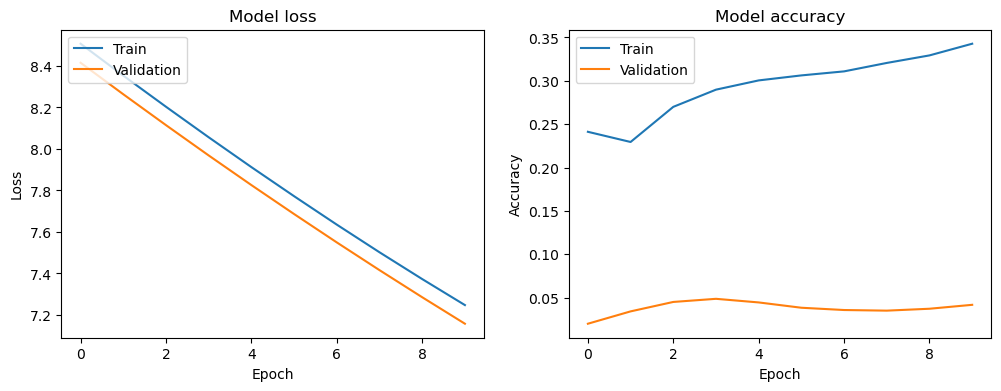

In [50]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model4.history['loss'])
plt.plot(model4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(model4.history['accuracy'])
plt.plot(model4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


# Saving the model

In [51]:
tf.saved_model.save(m, 'saved_model3')

INFO:tensorflow:Assets written to: saved_model3\assets


INFO:tensorflow:Assets written to: saved_model3\assets


In [52]:
m.save('saved_modelh5.h5')

In [53]:
#i think it should be saved like this

m.save('saved_model.keras')

In [54]:
# or this
keras.saving.save_model(m, 'my_model2.keras')

In [23]:
aa_properties = {'properties_dict': properties_dict}
with open('saved_objects.pkl', 'wb') as file:
    pickle.dump(aa_properties, file)


In [31]:
import os

file_path = 'saved_modelh5.h5'
print("File Path:", file_path)
if os.path.exists(file_path):
    print("File exists.")
else:
    print("File not found.")


File Path: saved_modelh5.h5
File exists.


In [32]:
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.16.1


In [36]:
# from LucaAngioloni github with 'SGD' optimizer to try to fix the Adam loading problem


LR = 0.000005
drop_out = 0.5  #up to 0.5 from 0.3 to try to prvent overfit
batch_dim = 64
opt = optimizers.SGD(learning_rate = LR)

m2 = Sequential()

m2.add(Conv1D(128, 11, padding='same', activation='relu', input_shape=(max_length, 7)))

m2.add(Dropout(drop_out))
m2.add(Conv1D(64, 11, padding='same', activation='relu',kernel_regularizer=l2(0.1)))

m2.add(Dropout(drop_out))
m2.add(Conv1D(3, 11, padding='same', activation='softmax'))



m2.compile(optimizer=opt,
          loss='categorical_crossentropy',
          metrics=['accuracy']) 







model5 = m.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32) 

# Evaluate the model
loss, accuracy = m.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

C:\Users\Guillaume\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 426s 6s/step - accuracy: 0.4817 - loss: 8.5966 - val_accuracy: 0.0011 - val_loss: 8.5787
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 399s 6s/step - accuracy: 0.3128 - loss: 8.5951 - val_accuracy: 0.0011 - val_loss: 8.5773
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 374s 6s/step - accuracy: 0.3092 - loss: 8.5934 - val_accuracy: 0.0011 - val_loss: 8.5758
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 372s 6s/step - accuracy: 0.3089 - loss: 8.5937 - val_accuracy: 0.0011 - val_loss: 8.5744
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 357s 5s/step - accuracy: 0.3095 - loss: 8.5913 - val_accuracy: 0.0011 - val_loss: 8.5729
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 355s 5s/step - accuracy: 0.3105 - loss: 8.5898 - val_accuracy: 0.0012 - val_loss: 8.5715
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 353s 5s/step - accuracy: 0.3123 - loss: 8.5879 - val_accuracy: 0.0012 - val_loss: 8.5700
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 355s 5s/step - accuracy: 0.3154 - loss: 8.5871 - val_accuracy: 0.0012 - v

In [ ]:
tf.saved_model.save(m, 'saved_model3SGD')

In [39]:
m.save('saved_modelh5SGD.h5')

In [38]:
m.save('saved_modelSGD.keras')# should use this one

In [ ]:
keras.saving.save_model(m, 'my_model2SGD.keras')